In [ ]:
# REFERENCES:
# https://medium.com/botsbrasil/como-reconhecer-entidades-na-l%C3%ADngua-portuguesa-usando-spacy-8a5ca6f42c4f
# https://medium.com/@van3ssabandeira/o-famoso-spacy-90afb683b6fe
# https://towardsdatascience.com/clinical-named-entity-recognition-using-spacy-5ae9c002e86f
# https://www.machinelearningplus.com/spacy-tutorial-nlp/
# https://tede2.pucrs.br/tede2/bitstream/tede/9970/2/DANIEL%20ALESSANDRO%20GUIMAR%C3%83ES%20DE%20LOS%20REYES_DIS.pdf
# https://towardsdatascience.com/clinical-named-entity-recognition-using-spacy-5ae9c002e86f
# https://www.neuratec.com/blog/?p=285
# https://stackoverflow.com/questions/72772448/spacy-adding-multiple-patterns-to-a-single-ner-using-entity-ruler
# https://github.com/explosion/spaCy/issues/4042
#
# https://web.stanford.edu/%7Elaurik/publications/archive/questions.pdf
#
# https://stackoverflow.com/questions/67991549/how-to-extract-questions-from-text-using-spacy
# https://stackoverflow.com/questions/72819016/extract-information-from-a-text-using-spacy
# https://stackoverflow.com/questions/66671292/can-i-identify-question-wordswho-how-when-in-a-string-using-spacy
# https://www.analyticsvidhya.com/blog/2021/11/end-to-end-question-answering-system-using-nlp-and-squad-dataset/
# https://towardsdatascience.com/building-a-question-answering-system-part-1-9388aadff507
# https://medium.com/casl-project/building-a-question-answering-system-part-3-answer-extraction-5b9a4bd31e18
# https://medium.com/saarthi-ai/building-intelligent-question-answering-systems-with-elmo-1c703af385cc
#
# https://newscatcherapi.com/blog/how-to-annotate-entities-with-spacy-phrase-macher
# 

In [ ]:
#!pip uninstall spacy 

In [ ]:
# INSTALATIONS
#!pip install -U transformers==4.13.0
#!pip install -U spacy  # Successfully installed spacy-3.4.1
#!python -m spacy download pt
#!pip install scispacy
#!pip install git+https://github.com/explosion/spacy-transformers
#!pip install spacy[transformers]
#!pip install spacy-transformers

In [1]:
#import spacy

In [ ]:
#nlp = spacy.load("pt_core_news_sm")
#nlp = spacy.load("pt")
#import pt_core_news_sm
#nlp = pt_core_news_sm.load()

In [2]:
#nlp = spacy.load('pt_core_news_sm')

In [43]:
path = "/home/info/MyNotebooks/Datasets/SentencasTRT1/PDFsProcessing/txts/"

file = path+"01001949620195010225-DEJT-27-02-2020.pdf.txt"

arq = open(file, encoding = 'utf8')


In [419]:
import re

def get_campos(lines):
    
    
    pattern_reclamante = r"(RECLAMANTE:|Reclamante:).*(RECLAMADO:|Reclamado)"
    pattern_reclamado = r"(RECLAMADO:|Reclamado:).*(SENTENÇA|Sentença)|(RECLAMADO:|Reclamado:).*(RELATÓRIO|Relatório)"
    pattern_relatorio = r"(RELATÓRIO|Relatório).*(FUNDAMENTAÇÃO|Fundamentação)|(RELATÓRIO|Relatório).*(relatório)"
    pattern_fundamentacao = r"(FUNDAMENTAÇÃO|Fundamentação).*(DISPOSITIVO|Dispositivo)"
    pattern_dispositivo = r"(DISPOSITIVO|Dispositivo).*|(Isto posto,).*"
    pattern_vara = r"(REGIÃO).*(Vara do Trabalho)"
    pattern_processo = r"(PROCESSO:|Processo).*(CLASSE:|Classe)|(ATOrd).*(RECLAMANTE:|Reclamante)"
    
    try:
        reclamante = re.search(pattern_reclamante, lines).group(0).replace("RECLAMANTE:","").replace("RECLAMADO:","")
    except:
        try:
            pattern_reclamante = r"(Relatório ).*?(, |ajuizou)|(, ).*(, Reclamante)"
            reclamante = re.search(pattern_reclamante, lines).group(0).replace("Relatório ","").replace("ajuizou","").replace(", Reclamante","")
            reclamante = reclamante[reclamante.rfind(","):len(reclamante)].replace(",","")
        except:
            try:
                pattern_reclamante = r"(SENTENÇA|Sentença).*?(,)"
                reclamante = re.search(pattern_reclamante, lines).group(0).replace("SENTENÇA ","").replace("Sentença","").replace(",","")
            except:
                reclamante = ""
        
    try:
        reclamado = re.search(pattern_reclamado, lines).group(0).replace("RECLAMADO:","").replace("SENTENÇA","").replace("RELATÓRIO","")
    except:
        try:
            pattern_reclamado = r"(em face de ).*?(, )|(, e).*(, Reclamad)"
            reclamado = re.search(pattern_reclamado, lines).group(0).replace("em face de ","").replace(",","").replace("Reclamad","")
        except:
            reclamado = ""

    try:
        vara = re.search(pattern_vara, lines).group(0).replace("REGIÃO","").replace("Vara do Trabalho","")
    except:
        vara = ""

    try:
        processo = re.search(pattern_processo, lines).group(0).replace("PROCESSO:","").replace("CLASSE:","").replace("ATOrd","").replace("RECLAMANTE:","")
    except:
        processo = ""

    try:
        relatorio = re.search(pattern_relatorio, lines).group(0).replace("RELATÓRIO","").replace("FUNDAMENTAÇÃO","").replace("Relatório","").replace("Fundamentação","")
    except:
        try:
            pattern_relatorio = r"(ajuizou).*( relatório)"
            relatorio = re.search(pattern_relatorio, lines).group(0).replace("relatóri","")
        except:
            relatorio = ""

    try:
        fundamentacao = re.search(pattern_fundamentacao, lines).group(0).replace("DISPOSITIVO","").replace("FUNDAMENTAÇÃO","").replace("Dispositivo","").replace("Fundamentação","")
    except:
        # Fundamentacao = Relatorio:Dispositivo - Relatorio - Dispositivo
        try:
            pattern_fundamentacao = r"(RELATÓRIO).*(DISPOSITIVO)|(DECIDO|Decido).*(Isto posto,)"
            fundamentacao = re.search(pattern_fundamentacao, lines).group(0).replace(relatorio,"").replace("RELATÓRIO","").replace("DISPOSITIVO","").replace("Relatório","").replace("Dispositivo","").replace("DECIDO","").replace("Decido","")
        except:
            fundamentacao = ""
        
        # Relatorio:Dispositivo.replace(Relatorio,"")
        # Relatorio:Dispositivo.replace("DISPOSITIVO","")

    try:
        dispositivo = re.search(pattern_dispositivo, lines).group(0).replace("DISPOSITIVO","").replace("Dispositivo","")
        juiz  = dispositivo[dispositivo.rfind("."):len(dispositivo)].replace(".","")

    except:
        dispositivo = ""
        juiz = ""

        
    return (reclamante, reclamado, processo, vara, juiz, relatorio, fundamentacao, dispositivo)



def extraiDispositivo(pattern, text):
    padrao = pattern

    texto_inicio = 0
    texto_fim    = 0

    for match in re.finditer(pattern, text.lower()):
        index = match.start()  
        value = match.group()
        print(index, value) # match only one? parece que esta encontrando outras correspondencias também.

        #span = (self.tam_tokeniz - len(padrao))/2
        #span = (len(text) - len(padrao))/2
        span = len(text) #/4 # - len(padrao))/2
        texto_inicio = int(match.start() - span)
        texto_fim    = int(match.start() + len(padrao) + span)
        if(texto_fim > len(text)): # nao pode ser maior que o tamanho da string
            texto_fim = len(text)

    return(text[texto_inicio:texto_fim])



def get_class(texto):     

    padraoImproc   = "improcedentes|improcedente"
    padraoParcProc = "procedentes em parte|procedente em parte|parcialmente procedentes|parcialmente procedente|parcialmente improcedentes|parcialmente improcedente"
    padraoProc     = "procedentes|procedente"
    padraoAcordo   = "acordo|Acordo"


    t_par    = ""
    t_imp    = ""
    t_proc   = ""
    t_outros = ""
    classificacao = ""

    # parece que esta encontrando outras correspondencias também.
    t_par    = extraiDispositivo(padraoParcProc, texto)


    if len(t_par) != 0:
        dispositivo   = t_par
        classificacao = "Parcialmente procedente"
        #break
    else: 
        t_imp    = extraiDispositivo(padraoImproc, texto)
        if len(t_imp) != 0:
            dispositivo   = t_imp
            classificacao = "Improcedente"
            #break
        else: 
            t_proc   = extraiDispositivo(padraoProc, texto)
            if len(t_proc) != 0:
                dispositivo   = t_proc
                classificacao = "Procedente"
                #break
            else:
                t_outros = extraiDispositivo(padraoAcordo, texto)
                if len(t_outros) != 0:
                    dispositivo   = t_outros
                    classificacao = "Acordo ou outros"
                else:
                    classificacao = "Nenhuma"
                    #dispositivo   = texto[tam_tokeniz:-1]
                # Coloca outro if aninhando e por fim, no else residual, colocar uma flag ("none"?).
                # Posteriormente, filtrar no dataset classificado aqueles com a flag que nao puderam
                #  receber nenhuma das classificacoes anteriores e exclui-los do dataset anotado.

    return(classificacao)


In [421]:
%%time
import os
import pandas as pd

directoryList = os.listdir(path)
'''
directoryList = []
# Funciona:
directoryList.append("01010991020205010341-DEJT-05-01-2022.pdf.txt")
directoryList.append("00124718620155010481-DOERJ-07-06-2017.pdf.txt")
directoryList.append("00116975620155010481-10-07-2016.pdf.txt")
directoryList.append("01017989320175010021-DOERJ-17-05-2018.pdf.txt")
directoryList.append("01006796620205010062-DEJT-27-10-2020.pdf.txt")
directoryList.append("01024495220175010401-DEJT-20-08-2021.pdf.txt")
directoryList.append("01002601020185010032-DEJT-14-04-2018.pdf.txt")
#
# Nao funciona:
directoryList.append("00111906420145010050-08-10-2015.pdf.txt") # ATA DE AUDIÊNCIA. Vale a pena descarta-la!
directoryList.append("01003898420185010009-DEJT-15-05-2018.pdf.txt") # Documento pequeno
directoryList.append("01006042520185010053-DEJT-12-12-2018.pdf.txt") # Dificil de entender. Sem estrutura
#
#directoryList.append("")
'''

sentenca   = []
reclamante = []
reclamado  = []
vara       = []
processo   = []
juiz       = []
relatorio  = []
fundamentacao = []
dispositivo   = []
classificacao = []

for i in range(0,len(directoryList)):
    if directoryList[i].endswith(".txt"): 
        print('i: ',i,"file: ",directoryList[i])
        with open(path+directoryList[i], encoding = 'utf8') as f:
            text = f.readlines()
            text = "".join(text)
            text = text.replace("\n", " ")
            sentenca.append(text)
            recl_te, recl_do, process_, vara_, juiz_, relat_, fundam_, dispos_ = get_campos(text)
            if(process_ == ""):
                process_ = os.path.splitext(os.path.splitext(directoryList[i])[0])[0]
            classif_ = get_class(dispos_)
            classificacao.append(classif_)

        f.close()

        reclamante.append(recl_te)
        reclamado.append(recl_do)
        vara.append(vara_)
        processo.append(process_)
        juiz.append(juiz_)
        relatorio.append(relat_)
        fundamentacao.append(fundam_)
        dispositivo.append(dispos_)
        #classificacao.append("")
    
    
dados = list(zip(sentenca, reclamante, reclamado,processo, vara, juiz, relatorio, fundamentacao, dispositivo, classificacao))
#print(len(dados))

# Cria os arquivos na pasta (...)/SentencasTRT1/DsClassAnot
df = pd.DataFrame(dados, columns=['sentenca','reclamante','reclamado','processo','vara','juiz','relatorio','fundamentacao','dispositivo','classificacao'])



#dsFromTXTs = Dataset.from_pandas(df)
#dsFromTXTs.save_to_disk("/home/info/MyNotebooks/Datasets/SentencasTRT1/Dataset/")



i:  0 file:  01015581720165010223-DOERJ-29-05-2017.pdf.txt
i:  1 file:  01010991020205010341-DEJT-05-01-2022.pdf.txt
1985 parcialmente procedentes
3659 parcialmente procedentes
i:  2 file:  01005402820175010060-DEJT-13-08-2018.pdf.txt
170 procedentes
i:  3 file:  01009422920215010203-DEJT-04-05-2022.pdf.txt
i:  4 file:  01010723720175010501-DEJT-05-09-2017.pdf.txt
329 procedente em parte
i:  5 file:  01018633220165010245-DEJT-11-12-2017.pdf.txt
12433 procedente em parte
i:  6 file:  01000621820205010059-DEJT-28-06-2021.pdf.txt
i:  7 file:  01006328520175010066-DOERJ-25-04-2018.pdf.txt
222 improcedentes
i:  8 file:  01008667520205010482-DEJT-13-02-2021.pdf.txt
84 procedentes em parte
i:  9 file:  01003645620165010069-DEJT-16-02-2022.pdf.txt
i:  10 file:  01013443720175010014-DEJT-03-02-2021.pdf.txt
78 procedentes
i:  11 file:  00115601120155010017-DEJT-11-07-2017.pdf.txt
115 procedentes em parte
i:  12 file:  01007723320165010203-DEJT-26-05-2017.pdf.txt
234 procedente em parte
i:  13 fi

20 procedentes em parte
i:  145 file:  01002129820175010060-DEJT-08-08-2017.pdf.txt
2393 procedentes em parte
i:  146 file:  01007578520175010023-DEJT-19-03-2018.pdf.txt
183 parcialmente procedentes
i:  147 file:  01001114420195010043-DEJT-12-06-2021.pdf.txt
5348 parcialmente procedente
i:  148 file:  01019795420175010002-DEJT-10-05-2019.pdf.txt
402 procedentes em parte
i:  149 file:  01003741820195010030-DEJT-27-01-2020.pdf.txt
2806 procedente
4397 procedentes
i:  150 file:  01003185920195010070-DEJT-14-10-2019.pdf.txt
i:  151 file:  01001129520175010076-DEJT-14-06-2021.pdf.txt
20 parcialmente procedentes
i:  152 file:  01005259720175010015-DEJT-10-10-2017.pdf.txt
i:  153 file:  01004626220185010201-DEJT-13-09-2018.pdf.txt
68 procedentes
i:  154 file:  01001951620185010452-DEJT-26-04-2019.pdf.txt
148 procedente em parte
i:  155 file:  01015192920175010241-DEJT-09-06-2018.pdf.txt
34 parcialmente procedentes
i:  156 file:  01025733820175010206-DEJT-09-10-2019.pdf.txt
126 procedente em p

218 parcialmente procedentes
i:  252 file:  01012569620195010541-DEJT-10-03-2021.pdf.txt
77 parcialmente procedente
i:  253 file:  01014624420165010015-DOERJ-09-06-2017.pdf.txt
i:  254 file:  00068330620145010482-12-04-2016.pdf.txt
328 parcialmente procedentes
i:  255 file:  01001529820205010035-DEJT-13-12-2021.pdf.txt
143 improcedentes
i:  256 file:  01011186820185010023-DEJT-06-09-2021.pdf.txt
104 procedentes em parte
i:  257 file:  01002066720185010283-DEJT-20-07-2018.pdf.txt
i:  258 file:  01005868020215010511-DEJT-12-04-2022.pdf.txt
23 procedente
i:  259 file:  01000800720215010511-DEJT-05-04-2021.pdf.txt
20 procedentes
i:  260 file:  01006971820195010452-DEJT-17-02-2020.pdf.txt
64 procedentes
i:  261 file:  01000863820215010018-DEJT-18-03-2021.pdf.txt
20 improcedentes
i:  262 file:  01003061820205010003-DEJT-02-09-2021.pdf.txt
66 procedente em parte
i:  263 file:  01004832820185010075-DEJT-06-11-2018.pdf.txt
138 procedentes em parte
i:  264 file:  01001939520175010059-DEJT-29-08-

20 procedentes em parte
i:  370 file:  01011466120165010005-DEJT-09-04-2017.pdf.txt
i:  371 file:  01006687220185010073-DEJT-02-09-2020.pdf.txt
34 improcedentes
103 improcedente
i:  372 file:  01013546820185010201-DEJT-05-06-2019.pdf.txt
75 procedentes em parte
i:  373 file:  01005374720185010025-DEJT-07-01-2019.pdf.txt
6377 improcedente
i:  374 file:  01012194220175010023-DEJT-02-04-2020.pdf.txt
22 procedente em parte
i:  375 file:  01006863320175010072-DEJT-20-11-2017.pdf.txt
31265 parcialmente procedentes
i:  376 file:  01009379820165010003-DEJT-24-01-2018.pdf.txt
140 procedente em parte
i:  377 file:  01001656120175010081-DEJT-27-09-2017.pdf.txt
i:  378 file:  01005524620215010078-DEJT-22-11-2021.pdf.txt
635 improcedentes
i:  379 file:  01003322620205010226-DEJT-11-01-2021.pdf.txt
i:  380 file:  01016742320165010223-DEJT-10-10-2019.pdf.txt
i:  381 file:  01020151720175010481-DEJT-24-05-2019.pdf.txt
133 procedentes em parte
i:  382 file:  01010770920185010571-DEJT-15-03-2019.pdf.txt

4913 procedentes em parte
i:  495 file:  01002450920185010075-DEJT-25-07-2018.pdf.txt
i:  496 file:  00116181620145010060-DEJT-24-10-2017.pdf.txt
176 procedentes
i:  497 file:  01015527220165010461-DEJT-17-03-2017.pdf.txt
410 parcialmente procedentes
i:  498 file:  01004605520195010202-DEJT-03-12-2019.pdf.txt
i:  499 file:  01011108820165010079-DEJT-29-11-2017.pdf.txt
6935 procedentes em parte
i:  500 file:  00109717320155010581-23-12-2015.pdf.txt
218 parcialmente procedente
i:  501 file:  01002803220195010075-DEJT-02-09-2019.pdf.txt
131 procedentes
i:  502 file:  01003009420185010483-DEJT-30-07-2018.pdf.txt
i:  503 file:  01001765420175010481-DOERJ-07-09-2017.pdf.txt
306 parcialmente procedente
i:  504 file:  01003907720165010029-DEJT-29-06-2017.pdf.txt
i:  505 file:  01003403720195010226-DEJT-10-06-2021.pdf.txt
100 procedente em parte
3436 parcialmente procedente
i:  506 file:  01012899520175010205-DEJT-01-12-2017.pdf.txt
83 procedentes em parte
i:  507 file:  01001436820175010512-DE

349 procedentes em parte
i:  601 file:  01000521020175010081-DOERJ-11-08-2017.pdf.txt
23 procedente em parte
i:  602 file:  01000862420165010241-DEJT-20-09-2017.pdf.txt
659 procedentes em parte
i:  603 file:  00109819720145010017-DEJT-15-02-2017.pdf.txt
i:  604 file:  01008355520165010204-DOERJ-14-12-2016.pdf.txt
314 procedentes em parte
i:  605 file:  01006799620205010052-DEJT-06-06-2021.pdf.txt
2 procedente em parte
i:  606 file:  01005464420215010432-DEJT-03-09-2021.pdf.txt
31 improcedentes
i:  607 file:  00123825720155010483-DEJT-09-04-2019.pdf.txt
i:  608 file:  01017755420175010246-DEJT-17-01-2019.pdf.txt
138 procedentes em parte
i:  609 file:  01014097220175010033-DEJT-23-01-2019.pdf.txt
25 procedente em parte
i:  610 file:  01016012220185010501-DEJT-13-12-2018.pdf.txt
460 procedente em parte
i:  611 file:  00129758520155010451-19-10-2016.pdf.txt
191 procedentes em parte
i:  612 file:  01004199220165010461-DOERJ-04-07-2017.pdf.txt
293 parcialmente procedentes
i:  613 file:  0010

38 procedentes em parte
i:  732 file:  01020827620175010482-DEJT-15-08-2019.pdf.txt
215 procedente
i:  733 file:  01004650320185010044-DEJT-22-03-2019.pdf.txt
13550 procedentes
i:  734 file:  01008300820175010007-DEJT-18-03-2018.pdf.txt
20444 parcialmente procedentes
i:  735 file:  01011579320185010531-DEJT-25-10-2018.pdf.txt
213 procedentes
i:  736 file:  01008768620175010042-DEJT-15-05-2018.pdf.txt
28 procedente em parte
i:  737 file:  01013107420175010204-DOERJ-04-10-2017.pdf.txt
53 procedentes em parte
i:  738 file:  01014023720175010015-DEJT-05-12-2018.pdf.txt
i:  739 file:  01005747220205010003-DEJT-11-02-2022.pdf.txt
i:  740 file:  01017594320165010244-DOERJ-21-06-2017.pdf.txt
3564 procedente em parte
i:  741 file:  01014819320165010033-DOERJ-04-08-2017.pdf.txt
51 improcedentes
i:  742 file:  01005237920165010010-DOERJ-23-01-2018.pdf.txt
20 improcedente
i:  743 file:  01001435620215010018-DEJT-01-08-2021.pdf.txt
i:  744 file:  00107009320135010206-DEJT-28-06-2021.pdf.txt
19 impr

38 procedentes em parte
i:  845 file:  01003053620175010036-DEJT-26-10-2017.pdf.txt
122 improcedente
i:  846 file:  01001519720175010042-DEJT-24-01-2018.pdf.txt
22 procedente em parte
i:  847 file:  01006905420215010226-DEJT-18-02-2022.pdf.txt
167 procedentes em parte
i:  848 file:  01015523020175010302-DEJT-21-06-2018.pdf.txt
67 procedentes
i:  849 file:  0226700-19.1996.5.01.0001.pdf.txt
214 procedente em parte
i:  850 file:  00101284920135010203-DEJT-22-02-2017.pdf.txt
24 procedentes em parte
i:  851 file:  01006196220175010462-DEJT-31-08-2020.pdf.txt
i:  852 file:  01006939220195010512-DEJT-05-09-2019.pdf.txt
51 procedentes em parte
i:  853 file:  01008615220165010075-DOERJ-17-11-2016.pdf.txt
i:  854 file:  01008347620185010244-DEJT-16-09-2019.pdf.txt
i:  855 file:  01017357520175010245-DOERJ-09-05-2018.pdf.txt
i:  856 file:  01009921420175010262-DEJT-09-02-2018.pdf.txt
250 parcialmente procedentes
1875 parcialmente procedentes
i:  857 file:  01003686420185010541-DEJT-15-05-2019.pd

761 parcialmente procedente
i:  952 file:  01009153520195010003-DEJT-16-11-2021.pdf.txt
489 procedente em parte
i:  953 file:  01006356020215010014-DEJT-27-10-2021.pdf.txt
89 improcedentes
i:  954 file:  01004504720175010245-DEJT-06-02-2018.pdf.txt
i:  955 file:  01001225220195010050-DEJT-27-01-2022.pdf.txt
66 improcedentes
i:  956 file:  01004962620175010022-DEJT-27-01-2018.pdf.txt
88 procedentes em parte
i:  957 file:  01010630220175010202-DEJT-02-12-2017.pdf.txt
i:  958 file:  01004609220185010007-DEJT-13-02-2019.pdf.txt
i:  959 file:  01005101520205010342-DEJT-26-06-2020.pdf.txt
i:  960 file:  01009722320195010401-DEJT-24-01-2020.pdf.txt
239 procedentes em parte
i:  961 file:  01011470620185010028-DEJT-30-03-2020.pdf.txt
63 procedentes
i:  962 file:  00121780320155010551-DEJT-30-03-2017.pdf.txt
28 parcialmente procedentes
i:  963 file:  00116755420155010042-DEJT-09-01-2019.pdf.txt
150 procedente em parte
i:  964 file:  01016897220165010261-DOERJ-18-10-2017.pdf.txt
58 procedente em 

3919 procedente em parte
i:  1065 file:  01010543520175010042-DOERJ-08-05-2018.pdf.txt
27 improcedente
i:  1066 file:  01005894820185010282-DEJT-03-10-2018.pdf.txt
166 procedentes em parte
i:  1067 file:  01009552020205010023-DEJT-07-07-2021.pdf.txt
28 procedente
i:  1068 file:  01010283920195010245-DEJT-07-04-2020.pdf.txt
i:  1069 file:  01003661620205010221-DEJT-14-04-2021.pdf.txt
30 parcialmente procedentes
i:  1070 file:  01004938420175010244-DEJT-09-08-2018.pdf.txt
i:  1071 file:  01009729820175010043-DEJT-14-10-2017.pdf.txt
72 procedente em parte
i:  1072 file:  01001773920175010481-DEJT-20-10-2017.pdf.txt
461 parcialmente procedente
i:  1073 file:  01007935520205010207-DEJT-20-05-2021.pdf.txt
76 procedentes em parte
386 parcialmente procedente
i:  1074 file:  01014423520175010042-DEJT-07-06-2018.pdf.txt
i:  1075 file:  01022373720175010205-DEJT-23-06-2018.pdf.txt
32 procedentes em parte
i:  1076 file:  01003306520205010223-DEJT-12-03-2021.pdf.txt
i:  1077 file:  0101156482020501

21 procedente em parte
2357 procedente em parte
i:  1173 file:  01003356620205010521-DEJT-17-11-2021.pdf.txt
126 parcialmente procedente
i:  1174 file:  01008874520175010227-DEJT-22-07-2018.pdf.txt
24 procedentes em parte
i:  1175 file:  01011665220175010511-DOERJ-09-03-2018.pdf.txt
104 procedente em parte
i:  1176 file:  00114321120145010054-DEJT-21-05-2021.pdf.txt
i:  1177 file:  01005183220205010070-DEJT-09-03-2021.pdf.txt
33 parcialmente procedentes
i:  1178 file:  00105715820155010064-DEJT-21-07-2017.pdf.txt
i:  1179 file:  00110058620155010245-DEJT-25-04-2018.pdf.txt
i:  1180 file:  01020223820175010051-DEJT-26-07-2018.pdf.txt
25 procedente em parte
i:  1181 file:  01003069320185010033-DEJT-11-07-2018.pdf.txt
i:  1182 file:  01010780520185010050-DEJT-21-10-2019.pdf.txt
10927 parcialmente procedentes
i:  1183 file:  01014397620165010281-DEJT-05-02-2017.pdf.txt
268 procedente
i:  1184 file:  01005126920205010411-DEJT-16-10-2020.pdf.txt
i:  1185 file:  01001369820215010039-DEJT-13-0

i:  1281 file:  01006075020195010471-DEJT-02-10-2019.pdf.txt
38 procedentes em parte
i:  1282 file:  01005213420215010043-DEJT-28-03-2022.pdf.txt
71 procedentes em parte
i:  1283 file:  01002079220195010226-DEJT-28-06-2019.pdf.txt
337 procedente em parte
i:  1284 file:  01019541420165010281-DEJT-27-09-2017.pdf.txt
178 procedentes
i:  1285 file:  01001048520185010205-DEJT-22-09-2018.pdf.txt
32 procedentes em parte
i:  1286 file:  01009624820185010551-DEJT-29-07-2019.pdf.txt
804 procedentes
i:  1287 file:  01006365320185010401-DEJT-30-11-2018.pdf.txt
606 procedente em parte
i:  1288 file:  00115289420155010020-24-08-2016.pdf.txt
39 procedentes em parte
i:  1289 file:  01013218720195010025-DEJT-24-08-2021.pdf.txt
20 procedente em parte
i:  1290 file:  01000605320205010025-DEJT-04-11-2020.pdf.txt
134 procedentes
i:  1291 file:  01009005820205010059-DEJT-10-05-2021.pdf.txt
i:  1292 file:  01001342320195010226-DEJT-28-05-2019.pdf.txt
142 procedente em parte
i:  1293 file:  010160472201750102

16162 improcedentes
16348 improcedente
16609 improcedente
16997 improcedente
17741 improcedentes
i:  1388 file:  01000394320205010004-DEJT-06-09-2021.pdf.txt
387 parcialmente procedente
i:  1389 file:  01001579220215010227-DEJT-14-09-2021.pdf.txt
28598 procedentes
i:  1390 file:  00100928020155010059-30-03-2016.pdf.txt
224 parcialmente procedentes
i:  1391 file:  01012109120185010202-DEJT-27-06-2019.pdf.txt
608 parcialmente procedentes
i:  1392 file:  01001740520165010551-DEJT-03-07-2017.pdf.txt
458 parcialmente procedente
i:  1393 file:  01018318320175010021-DEJT-28-04-2018.pdf.txt
193 parcialmente procedentes
i:  1394 file:  01013646820195010075-DEJT-24-08-2020.pdf.txt
89 procedentes
i:  1395 file:  01012073820195010482-DEJT-17-02-2020.pdf.txt
30 improcedente
i:  1396 file:  01006311720185010341-DEJT-17-01-2019.pdf.txt
1752 procedentes
i:  1397 file:  01000152420215010022-DEJT-12-07-2021.pdf.txt
i:  1398 file:  01006052820175010511-DEJT-04-02-2020.pdf.txt
2289 improcedentes
i:  1399 

i:  1530 file:  01009981620165010081-DEJT-18-02-2017.pdf.txt
237 procedente em parte
i:  1531 file:  01012154020165010055-DEJT-28-08-2017.pdf.txt
49 procedentes em parte
i:  1532 file:  01011303620195010221-DEJT-09-09-2021.pdf.txt
130 parcialmente procedentes
i:  1533 file:  01013533720175010551-DEJT-06-02-2018.pdf.txt
i:  1534 file:  01012815120195010043-DEJT-10-09-2021.pdf.txt
73 procedente em parte
i:  1535 file:  01000526920175010223-DEJT-05-09-2019.pdf.txt
81 improcedentes
i:  1536 file:  01014553320175010204-DEJT-20-10-2017.pdf.txt
53 procedentes em parte
i:  1537 file:  01015461620165010057-DOERJ-07-02-2017.pdf.txt
115 improcedentes
i:  1538 file:  01000056220195010082-DEJT-21-10-2019.pdf.txt
i:  1539 file:  01006741620165010246-DEJT-03-07-2017.pdf.txt
29 parcialmente procedentes
i:  1540 file:  01010715220175010501-DEJT-05-09-2017.pdf.txt
329 procedente em parte
i:  1541 file:  01009336820165010227-DEJT-12-02-2017.pdf.txt
121 procedente em parte
i:  1542 file:  0100453142020501

224 procedentes em parte
i:  1657 file:  01010578820195010019-DEJT-14-02-2020.pdf.txt
344 procedente
i:  1658 file:  01000165420215010007-DEJT-30-06-2021.pdf.txt
20 procedentes em parte
i:  1659 file:  00117772020155010481-DOERJ-12-12-2016.pdf.txt
38674 parcialmente procedente
i:  1660 file:  01008444120195010065-DEJT-11-01-2022.pdf.txt
349 parcialmente procedentes
i:  1661 file:  01008986620195010401-DEJT-29-01-2020.pdf.txt
245 procedentes em parte
i:  1662 file:  01003452120175010035-DEJT-03-07-2018.pdf.txt
4943 parcialmente procedente
19681 parcialmente procedentes
i:  1663 file:  01017691820175010482-DEJT-25-02-2019.pdf.txt
65 procedente em parte
i:  1664 file:  00109914120155010039-03-01-2016.pdf.txt
i:  1665 file:  00107783820145010017-26-02-2016.pdf.txt
i:  1666 file:  00116718820145010062-DEJT-22-02-2018.pdf.txt
35005 procedentes em parte
i:  1667 file:  01007239420175010481-DEJT-20-10-2017.pdf.txt
291 procedentes
i:  1668 file:  01015244920175010080-DEJT-12-06-2018.pdf.txt
18 

114 procedentes
i:  1781 file:  01007628920175010223-DEJT-20-11-2018.pdf.txt
118 procedentes em parte
i:  1782 file:  01010920520175010541-DOERJ-26-02-2018.pdf.txt
540 procedentes
i:  1783 file:  00117100420155010013-DEJT-31-07-2017.pdf.txt
226 procedentes em parte
2993 procedentes em parte
i:  1784 file:  01006622520175010421-DEJT-02-08-2017.pdf.txt
82 parcialmente procedente
i:  1785 file:  01008983620175010078-DEJT-06-06-2018.pdf.txt
i:  1786 file:  01005906620185010077-DEJT-30-01-2019.pdf.txt
i:  1787 file:  01011476920195010222-DEJT-02-04-2020.pdf.txt
20 procedente em parte
i:  1788 file:  01016088320175010263-DEJT-07-05-2019.pdf.txt
84 improcedente
i:  1789 file:  01002583420175010207-DOERJ-15-09-2017.pdf.txt
3940 parcialmente procedentes
18953 parcialmente procedentes
i:  1790 file:  01017118220175010201-DEJT-05-06-2018.pdf.txt
7740 procedentes em parte
26489 procedentes em parte
i:  1791 file:  01003485520195010471-DEJT-16-01-2020.pdf.txt
38 procedentes em parte
i:  1792 file: 

5885 procedentes em parte
i:  1908 file:  01017067620165010207-DOERJ-23-03-2017.pdf.txt
4192 parcialmente procedente
5612 parcialmente procedentes
20511 parcialmente procedentes
i:  1909 file:  00116157920145010054-22-10-2015.pdf.txt
207 parcialmente procedentes
i:  1910 file:  01022527820165010451-DEJT-12-07-2017.pdf.txt
2062 improcedente
3186 improcedentes
i:  1911 file:  00107106420155010531-14-10-2015.pdf.txt
20 procedentes em parte
i:  1912 file:  00125653420155010481-31-08-2016.pdf.txt
30 improcedentes
i:  1913 file:  01013208420185010010-DEJT-27-05-2020.pdf.txt
347 procedente em parte
i:  1914 file:  01003184820195010203-DEJT-26-07-2019.pdf.txt
219 procedente
i:  1915 file:  00102964520155010053-DEJT-01-08-2017.pdf.txt
i:  1916 file:  00103964320135010223-DEJT-04-06-2017.pdf.txt
80 improcedentes
i:  1917 file:  01004836720205010007-DEJT-28-05-2021.pdf.txt
20 procedentes
i:  1918 file:  00102815320155010481-18-11-2015.pdf.txt
82 procedentes em parte
i:  1919 file:  00120774820135

250 procedentes
i:  2018 file:  01011065820195010075-DEJT-04-06-2020.pdf.txt
158 procedentes
i:  2019 file:  01002313920165010481-DOERJ-17-07-2017.pdf.txt
160 procedentes em parte
i:  2020 file:  01012660420165010491-DEJT-17-03-2017.pdf.txt
20 procedentes em parte
i:  2021 file:  00102384720135010074-DEJT-16-08-2021.pdf.txt
i:  2022 file:  01009911520175010202-DEJT-06-03-2018.pdf.txt
i:  2023 file:  01022630620165010032-DEJT-07-07-2017.pdf.txt
i:  2024 file:  01012613720165010020-DOERJ-25-10-2017.pdf.txt
21496 procedente em parte
i:  2025 file:  01021768820175010202-DEJT-20-11-2018.pdf.txt
i:  2026 file:  01017853720165010019-DOERJ-15-08-2017.pdf.txt
105 procedentes em parte
i:  2027 file:  01012792520165010322-DEJT-18-04-2017.pdf.txt
27 procedente em parte
i:  2028 file:  01007265520185010015-DEJT-05-08-2019.pdf.txt
30 improcedente
i:  2029 file:  01020064420175010226-DEJT-27-04-2018.pdf.txt
87 procedente em parte
i:  2030 file:  01003981320215010471-DEJT-13-09-2021.pdf.txt
72 improce

72 parcialmente procedentes
i:  2129 file:  01020981720175010551-DEJT-07-05-2019.pdf.txt
i:  2130 file:  01000714820205010004-DEJT-07-12-2021.pdf.txt
i:  2131 file:  01000296720205010531-DEJT-23-09-2021.pdf.txt
247 procedentes em parte
i:  2132 file:  01004781020205010342-DEJT-02-07-2020.pdf.txt
i:  2133 file:  01000946220205010531-DEJT-26-10-2021.pdf.txt
20 procedentes em parte
i:  2134 file:  01012897520175010244-DOERJ-19-04-2018.pdf.txt
i:  2135 file:  01007222920165010034-DEJT-24-06-2017.pdf.txt
325 procedente em parte
i:  2136 file:  01000302320205010282-DEJT-20-02-2022.pdf.txt
i:  2137 file:  01017281420185010483-DEJT-11-10-2019.pdf.txt
62 procedentes em parte
i:  2138 file:  01001890920185010452-DEJT-26-04-2019.pdf.txt
148 procedente em parte
i:  2139 file:  01000972420175010207-DOERJ-10-08-2017.pdf.txt
4870 parcialmente procedentes
7351 parcialmente procedente
21385 parcialmente procedentes
i:  2140 file:  01004634320175010246-DEJT-30-01-2018.pdf.txt
22 procedente em parte
i:  

70 procedente em parte
i:  2239 file:  01011456520185010471-DEJT-18-12-2018.pdf.txt
38 procedentes em parte
i:  2240 file:  01012362920195010049-DEJT-17-04-2020.pdf.txt
24 improcedente
i:  2241 file:  01005194520165010009-DEJT-06-09-2017.pdf.txt
10424 procedente em parte
i:  2242 file:  00110914120155010024-05-02-2016.pdf.txt
i:  2243 file:  01004919420205010055-DEJT-27-01-2021.pdf.txt
72 parcialmente procedentes
i:  2244 file:  01005572320185010224-DEJT-14-01-2019.pdf.txt
432 procedentes em parte
i:  2245 file:  01012263420175010411-DEJT-10-08-2020.pdf.txt
22 improcedentes
i:  2246 file:  01017917920175010481-DEJT-31-10-2018.pdf.txt
289 procedentes em parte
i:  2247 file:  01005456620165010551-DOERJ-28-03-2018.pdf.txt
19041 parcialmente procedente
i:  2248 file:  01017572720165010033-DOERJ-24-10-2017.pdf.txt
25 procedente em parte
i:  2249 file:  00104893020155010451-27-11-2015.pdf.txt
116 procedente em parte
i:  2250 file:  01008582020165010036-DEJT-09-04-2017.pdf.txt
122 procedente 

389 parcialmente procedentes
i:  2366 file:  01015957620175010201-DOERJ-22-02-2018.pdf.txt
99 procedentes em parte
i:  2367 file:  01009711920205010202-DEJT-11-06-2021.pdf.txt
148 procedente em parte
i:  2368 file:  01002804720175010222-DOERJ-08-02-2018.pdf.txt
21 procedente em parte
2350 procedente em parte
i:  2369 file:  01012578920165010055-DEJT-19-05-2017.pdf.txt
71 parcialmente procedentes
i:  2370 file:  01008806720195010038-DEJT-06-11-2019.pdf.txt
i:  2371 file:  01009071220195010471-DEJT-19-08-2019.pdf.txt
i:  2372 file:  01002465820185010571-DEJT-04-09-2019.pdf.txt
i:  2373 file:  01015047120175010205-DEJT-20-01-2018.pdf.txt
81 procedentes
i:  2374 file:  01005924620185010203-DEJT-30-01-2019.pdf.txt
410 procedente
i:  2375 file:  01001395620175010051-DEJT-15-09-2017.pdf.txt
23 procedente
i:  2376 file:  01014554820165010081-DOERJ-06-09-2017.pdf.txt
86 procedente em parte
i:  2377 file:  01012628520195010062-DEJT-09-03-2020.pdf.txt
i:  2378 file:  01016627220175010029-DEJT-14-

i:  2501 file:  01014733620175010501-DEJT-09-11-2017.pdf.txt
70 procedente em parte
i:  2502 file:  01000005120205010067-DEJT-03-01-2022.pdf.txt
1396 parcialmente procedente
i:  2503 file:  01012171220205010203-DEJT-18-10-2021.pdf.txt
14646 procedente em parte
i:  2504 file:  01012312920185010053-DEJT-09-04-2019.pdf.txt
210 procedentes em parte
i:  2505 file:  00114691620155010244-05-04-2016.pdf.txt
i:  2506 file:  01008118820165010022-DEJT-07-08-2017.pdf.txt
i:  2507 file:  01011532920175010034-DEJT-20-01-2020.pdf.txt
i:  2508 file:  00111761820155010027-09-03-2016.pdf.txt
i:  2509 file:  01008411820195010023-DEJT-14-03-2021.pdf.txt
28 procedente
i:  2510 file:  01032253620175010471-DEJT-31-05-2018.pdf.txt
85 procedentes em parte
i:  2511 file:  01002252320165010581-DEJT-26-09-2018.pdf.txt
101 procedentes em parte
i:  2512 file:  01011467520195010031-DEJT-04-06-2020.pdf.txt
i:  2513 file:  01006849820185010049-DEJT-30-10-2018.pdf.txt
270 procedentes
i:  2514 file:  0100719102020501020

243 procedentes em parte
i:  2617 file:  00118094220155010055-DOERJ-02-06-2017.pdf.txt
72 parcialmente procedentes
i:  2618 file:  01011589720185010266-DEJT-28-01-2020.pdf.txt
295 procedentes
i:  2619 file:  01003239620185010432-DEJT-13-10-2018.pdf.txt
215 procedentes em parte
i:  2620 file:  01013462220175010203-DEJT-01-05-2018.pdf.txt
12516 procedente em parte
i:  2621 file:  01006796520175010064-DEJT-24-11-2017.pdf.txt
288 procedentes em parte
i:  2622 file:  01004592620175010401-DEJT-16-10-2018.pdf.txt
59 procedente em parte
i:  2623 file:  01001070820175010033-DOERJ-06-02-2018.pdf.txt
25 procedentes em parte
i:  2624 file:  01004399020175010512-DEJT-02-08-2017.pdf.txt
69 procedentes
i:  2625 file:  00103054420155010073-10-11-2015.pdf.txt
65 procedente em parte
i:  2626 file:  01006457320205010262-DEJT-20-04-2021.pdf.txt
347 parcialmente procedentes
i:  2627 file:  01019353420175010067-DEJT-27-11-2018.pdf.txt
70 improcedente
i:  2628 file:  00112872720155010245-03-05-2016.pdf.txt
3

4393 procedentes em parte
i:  2718 file:  01005392120205010001-DEJT-27-10-2020.pdf.txt
i:  2719 file:  01012113620185010571-DEJT-04-07-2019.pdf.txt
136 procedentes em parte
i:  2720 file:  01015782820175010011-DEJT-07-03-2018.pdf.txt
i:  2721 file:  00117044120145010042-DEJT-03-11-2020.pdf.txt
i:  2722 file:  01014320920165010015-DOERJ-18-05-2018.pdf.txt
22 procedente em parte
i:  2723 file:  00121783620135010207-DEJT-17-12-2018.pdf.txt
i:  2724 file:  00111118020155010008-20-06-2016.pdf.txt
121 procedentes em parte
i:  2725 file:  01010840620195010073-DEJT-26-07-2021.pdf.txt
247 procedentes em parte
i:  2726 file:  01005379720205010018-DEJT-25-08-2020.pdf.txt
20 procedentes
i:  2727 file:  01003424420195010052-DEJT-19-08-2019.pdf.txt
i:  2728 file:  01001670520185010046-DEJT-24-05-2018.pdf.txt
i:  2729 file:  01002564820215010264-DEJT-06-09-2021.pdf.txt
20 procedentes em parte
i:  2730 file:  01005453220175010551-DEJT-24-07-2018.pdf.txt
i:  2731 file:  01004734220175010067-DEJT-24-10-

355 parcialmente procedentes
i:  2831 file:  01020981720175010551-DEJT-25-05-2019.pdf.txt
3339 acordo
i:  2832 file:  01009760820175010053-DEJT-30-01-2018.pdf.txt
188 procedente em parte
i:  2833 file:  00101635420155010521-DOERJ-24-07-2017.pdf.txt
831 parcialmente procedente
i:  2834 file:  01004874120195010007-DEJT-19-11-2019.pdf.txt
18840 parcialmente procedentes
i:  2835 file:  01007478020175010301-DEJT-25-04-2018.pdf.txt
56 procedente em parte
i:  2836 file:  01014083720175010082-DEJT-24-02-2018.pdf.txt
i:  2837 file:  01006930320205010207-DEJT-11-08-2021.pdf.txt
114 parcialmente procedentes
i:  2838 file:  01018879020175010062-DOERJ-25-04-2018.pdf.txt
22723 procedentes em parte
i:  2839 file:  01000466620215010047-DEJT-31-03-2022.pdf.txt
75 parcialmente procedentes
i:  2840 file:  01014940720175010050-DEJT-03-12-2020.pdf.txt
111 improcedentes
i:  2841 file:  01011928020175010016-DEJT-13-09-2018.pdf.txt
i:  2842 file:  01005332520175010581-DEJT-10-08-2017.pdf.txt
214 procedentes e

72 parcialmente procedentes
i:  2947 file:  01003061220215010511-DEJT-25-05-2021.pdf.txt
126 procedente em parte
i:  2948 file:  01004888020195010571-DEJT-06-12-2019.pdf.txt
i:  2949 file:  01012851420195010003-DEJT-19-04-2022.pdf.txt
i:  2950 file:  01016817720165010461-DOERJ-30-03-2017.pdf.txt
206 parcialmente procedentes
i:  2951 file:  01014378720195010512-DEJT-04-05-2020.pdf.txt
77 procedente em parte
i:  2952 file:  01011181720165010483-DEJT-07-03-2017.pdf.txt
474 procedentes em parte
i:  2953 file:  01019335020175010007-DEJT-07-01-2019.pdf.txt
30258 parcialmente procedentes
i:  2954 file:  01001731820175010411-DEJT-17-08-2017.pdf.txt
76 procedentes em parte
12711 procedentes em parte
i:  2955 file:  01013467020165010263-DEJT-23-08-2017.pdf.txt
355 parcialmente procedentes
i:  2956 file:  01011773720175010461-DOERJ-26-09-2017.pdf.txt
i:  2957 file:  00112807520135010222-DEJT-25-04-2018.pdf.txt
20 improcedentes
342 improcedentes
i:  2958 file:  01007187120205010512-DEJT-03-05-2022

20 procedentes em parte
i:  3083 file:  01016022120165010034-DEJT-15-05-2018.pdf.txt
835 procedentes
i:  3084 file:  01027253420175010482-DEJT-30-04-2019.pdf.txt
251 parcialmente procedente
i:  3085 file:  00116247620155010031-DEJT-25-09-2020.pdf.txt
i:  3086 file:  01005207520185010036-DEJT-25-06-2019.pdf.txt
231 procedentes
i:  3087 file:  01009052520165010058-DEJT-08-07-2017.pdf.txt
i:  3088 file:  01003197920195010511-DEJT-08-08-2019.pdf.txt
23 procedente em parte
i:  3089 file:  01012132120175010060-DEJT-10-08-2020.pdf.txt
i:  3090 file:  01005501820215010065-DEJT-14-01-2022.pdf.txt
587 procedentes
1107 procedente
1298 procedentes
i:  3091 file:  01000985220185010343-DEJT-11-03-2019.pdf.txt
225 parcialmente procedente
i:  3092 file:  01007570920215010003-DEJT-06-12-2021.pdf.txt
i:  3093 file:  01018180820165010284-DEJT-28-04-2017.pdf.txt
91 procedente em parte
i:  3094 file:  00106987520155010070-DEJT-28-03-2017.pdf.txt
i:  3095 file:  01001611520215010071-DEJT-26-08-2021.pdf.txt


23 procedente em parte
i:  3192 file:  01010806220165010076-DOERJ-06-02-2018.pdf.txt
230 parcialmente procedentes
i:  3193 file:  01009565020205010202-DEJT-14-06-2021.pdf.txt
147 procedente
i:  3194 file:  00100248120145010022-DEJT-17-03-2017.pdf.txt
i:  3195 file:  01004577020175010461-DOERJ-04-07-2017.pdf.txt
333 parcialmente procedentes
i:  3196 file:  01011358620175010202-DEJT-01-04-2019.pdf.txt
i:  3197 file:  01009105120175010207-DEJT-12-10-2017.pdf.txt
2623 parcialmente procedentes
16469 parcialmente procedentes
i:  3198 file:  01011156820165010481-DEJT-10-08-2018.pdf.txt
239 procedente em parte
i:  3199 file:  01005434820195010242-DEJT-06-05-2020.pdf.txt
592 procedente em parte
i:  3200 file:  01003848920175010076-DEJT-22-11-2017.pdf.txt
1574 improcedente
i:  3201 file:  01032651520165010451-DEJT-12-07-2017.pdf.txt
2069 improcedente
3193 improcedentes
i:  3202 file:  01001941720185010004-DEJT-08-02-2021.pdf.txt
i:  3203 file:  01011244120195010023-DEJT-04-03-2022.pdf.txt
4140 p

25 procedentes em parte
i:  3301 file:  01006208420165010461-DEJT-17-03-2017.pdf.txt
634 parcialmente procedentes
i:  3302 file:  01006644220175010082-DEJT-05-06-2018.pdf.txt
107 procedentes em parte
i:  3303 file:  01009116820165010531-06-10-2016.pdf.txt
20 procedentes em parte
i:  3304 file:  01010772320175010222-DEJT-23-11-2017.pdf.txt
90 procedentes em parte
i:  3305 file:  01006661420185010264-DEJT-29-08-2018.pdf.txt
158 procedentes em parte
1683 procedentes em parte
i:  3306 file:  01009750720215010401-DEJT-14-03-2022.pdf.txt
283 procedentes
i:  3307 file:  01011609820175010461-DOERJ-28-09-2017.pdf.txt
208 parcialmente procedentes
i:  3308 file:  01007605620165010029-DEJT-27-11-2019.pdf.txt
i:  3309 file:  01001927520195010048-DEJT-20-02-2020.pdf.txt
55 procedente em parte
i:  3310 file:  01031647820175010471-DOERJ-14-05-2018.pdf.txt
i:  3311 file:  01014276220175010205-DEJT-15-06-2018.pdf.txt
59 procedentes em parte
i:  3312 file:  01008115620215010073-DEJT-07-04-2022.pdf.txt
17

82 procedentes em parte
i:  3423 file:  01008465920185010222-DEJT-04-11-2019.pdf.txt
28 procedentes
i:  3424 file:  01010981720215010203-DEJT-22-03-2022.pdf.txt
90 procedente em parte
i:  3425 file:  01004822420165010007-DEJT-23-05-2017.pdf.txt
173 parcialmente procedentes
i:  3426 file:  00000103320125010014-20-04-2016.pdf.txt
i:  3427 file:  00066451320145010482-12-04-2016.pdf.txt
324 parcialmente procedentes
i:  3428 file:  01019252720165010551-DEJT-03-07-2017.pdf.txt
143 parcialmente procedente
i:  3429 file:  01000506820175010201-DEJT-12-02-2017.pdf.txt
i:  3430 file:  01000031620175010033-DEJT-30-07-2019.pdf.txt
326 parcialmente procedente
i:  3431 file:  00123419620155010481-DEJT-09-02-2018.pdf.txt
131 procedentes em parte
i:  3432 file:  01012323120185010015-DEJT-25-06-2019.pdf.txt
89 procedente em parte
i:  3433 file:  01001951020185010551-DEJT-04-09-2018.pdf.txt
i:  3434 file:  00066650420145010482-12-04-2016.pdf.txt
333 parcialmente procedentes
i:  3435 file:  01015949020175

i:  3542 file:  01009306620165010081-DEJT-28-07-2017.pdf.txt
222 procedente em parte
i:  3543 file:  01004715920215010511-DEJT-11-04-2022.pdf.txt
23 procedente
i:  3544 file:  01003747720195010075-DEJT-30-04-2019.pdf.txt
i:  3545 file:  00113742520155010522-DEJT-04-05-2017.pdf.txt
61 procedente em parte
i:  3546 file:  01009785620195010263-DEJT-06-10-2021.pdf.txt
24 procedente
i:  3547 file:  01012730420195010034-DEJT-25-08-2020.pdf.txt
198 parcialmente procedentes
i:  3548 file:  01011681620165010007-DEJT-22-10-2017.pdf.txt
343 parcialmente procedentes
i:  3549 file:  01011255320175010263-DEJT-11-01-2019.pdf.txt
23 procedente em parte
i:  3550 file:  01007506320175010421-DEJT-01-11-2018.pdf.txt
96 procedentes em parte
i:  3551 file:  01007516520185010016-DEJT-22-04-2019.pdf.txt
284 parcialmente procedentes
i:  3552 file:  01010556420185010501-DEJT-06-12-2018.pdf.txt
70 procedente em parte
i:  3553 file:  01003928520185010511-DEJT-21-09-2018.pdf.txt
23 procedente em parte
i:  3554 file

i:  3682 file:  00115116220155010342-DEJT-30-07-2021.pdf.txt
27 improcedentes
i:  3683 file:  01002519420195010070-DEJT-18-10-2019.pdf.txt
i:  3684 file:  01007185820175010227-DEJT-07-10-2017.pdf.txt
20 procedentes em parte
i:  3685 file:  01007179520205010024-DEJT-30-08-2021.pdf.txt
241 procedentes em parte
i:  3686 file:  01009408220175010079-DEJT-24-01-2018.pdf.txt
19 procedente em parte
i:  3687 file:  01003388220215010069-DEJT-25-12-2021.pdf.txt
20 improcedentes
i:  3688 file:  01018407620175010043-DEJT-15-05-2018.pdf.txt
71 procedente em parte
i:  3689 file:  01008067820215010026-DEJT-27-03-2022.pdf.txt
39 parcialmente procedentes
i:  3690 file:  01002988220205010054-DEJT-27-09-2021.pdf.txt
73 improcedentes
535 improcedentes
i:  3691 file:  01019553020165010012-DEJT-06-05-2022.pdf.txt
i:  3692 file:  01003742020185010461-DEJT-05-08-2018.pdf.txt
259 procedentes
i:  3693 file:  00001584220135010068-14-07-2016.pdf.txt
33 procedentes em parte
i:  3694 file:  01020372120165010284-DEJT

i:  3812 file:  01000809820195010471-DEJT-19-12-2019.pdf.txt
37 procedentes em parte
i:  3813 file:  01005402520205010512-DEJT-22-02-2021.pdf.txt
101 procedentes
i:  3814 file:  00117814620155010032-DOERJ-06-02-2017.pdf.txt
13142 improcedentes
15075 improcedente
15347 improcedente
15623 improcedentes
i:  3815 file:  01011085820185010044-DEJT-07-07-2020.pdf.txt
1779 acordo
i:  3816 file:  01000169320175010007-DEJT-26-05-2018.pdf.txt
25493 parcialmente procedentes
i:  3817 file:  00109208520145010035-DEJT-17-02-2017.pdf.txt
24 parcialmente procedentes
i:  3818 file:  01019244220165010551-DEJT-03-07-2017.pdf.txt
143 parcialmente procedente
i:  3819 file:  00066868020145010481-24-11-2015.pdf.txt
135 procedentes em parte
i:  3820 file:  00067230720145010482-16-05-2016.pdf.txt
324 parcialmente procedentes
i:  3821 file:  00107846820155010483-DOERJ-15-02-2017.pdf.txt
i:  3822 file:  03305006620035010244-DEJT-19-08-2019.pdf.txt
28 improcedentes
i:  3823 file:  01017601020165010541-DEJT-17-05-2

59 procedentes em parte
i:  3932 file:  01001453220175010223-DEJT-17-10-2017.pdf.txt
i:  3933 file:  00124718620155010481-DOERJ-07-06-2017.pdf.txt
161 procedentes em parte
i:  3934 file:  01010397220165010019-DOERJ-30-03-2017.pdf.txt
384 procedente em parte
i:  3935 file:  01016121320165010019-DEJT-27-08-2017.pdf.txt
166 procedentes em parte
i:  3936 file:  01005068320205010016-DEJT-17-01-2022.pdf.txt
i:  3937 file:  01004258720205010064-DEJT-19-10-2020.pdf.txt
i:  3938 file:  01003030620175010541-DEJT-14-08-2017.pdf.txt
72 improcedente
i:  3939 file:  01001697420205010055-DEJT-12-11-2020.pdf.txt
83 parcialmente procedentes
i:  3940 file:  01008417020175010481-DEJT-01-02-2021.pdf.txt
217 parcialmente procedente
i:  3941 file:  00104819220145010223-DEJT-19-07-2018.pdf.txt
i:  3942 file:  01004793220185010029-DEJT-25-04-2019.pdf.txt
i:  3943 file:  01016380420175010301-DEJT-25-04-2018.pdf.txt
47 procedentes em parte
i:  3944 file:  01000594020215010023-DEJT-24-02-2022.pdf.txt
i:  3945 fi

32 procedente em parte
i:  4045 file:  01013372820165010031-DEJT-07-06-2017.pdf.txt
22 procedentes em parte
i:  4046 file:  01008074620205010043-DEJT-27-07-2021.pdf.txt
142 procedentes em parte
i:  4047 file:  01005479820195010561-DEJT-03-02-2020.pdf.txt
130 procedente em parte
i:  4048 file:  01003747220175010067-DEJT-24-01-2018.pdf.txt
197 procedente em parte
i:  4049 file:  01010067820195010051-DEJT-10-02-2020.pdf.txt
i:  4050 file:  00117773620155010023-DEJT-01-04-2017.pdf.txt
25 procedentes em parte
i:  4051 file:  01006853020205010432-DEJT-19-10-2020.pdf.txt
24 procedentes em parte
i:  4052 file:  01008616120175010481-DOERJ-22-11-2017.pdf.txt
175 parcialmente procedente
i:  4053 file:  00104988820145010010-DOERJ-20-06-2017.pdf.txt
i:  4054 file:  00114699420145010003-DEJT-13-02-2019.pdf.txt
i:  4055 file:  01011556720165010055-DOERJ-21-07-2017.pdf.txt
25 procedente em parte
i:  4056 file:  01005085520165010481-DOERJ-02-08-2017.pdf.txt
291 procedentes em parte
i:  4057 file:  0011

112 procedentes em parte
i:  4182 file:  01014152620175010471-DEJT-20-10-2017.pdf.txt
i:  4183 file:  01012648520175010010-DEJT-09-11-2018.pdf.txt
20 procedente em parte
i:  4184 file:  01009582320205010007-DEJT-21-12-2021.pdf.txt
20 procedentes
i:  4185 file:  01003198920175010207-DOERJ-03-10-2017.pdf.txt
3495 parcialmente procedentes
19665 parcialmente procedentes
i:  4186 file:  01007490720215010076-DEJT-18-04-2022.pdf.txt
70 improcedente
i:  4187 file:  01011422820195010002-DEJT-02-05-2022.pdf.txt
i:  4188 file:  01000174020175010246-DEJT-19-05-2017.pdf.txt
i:  4189 file:  01005226720215010512-DEJT-06-05-2022.pdf.txt
1366 acordo
i:  4190 file:  01007001520195010050-DEJT-17-03-2020.pdf.txt
i:  4191 file:  00035576720145010481-05-02-2016.pdf.txt
192 procedentes em parte
i:  4192 file:  01003172220175010207-DEJT-29-09-2017.pdf.txt
3580 parcialmente procedentes
20038 parcialmente procedentes
i:  4193 file:  01002912720175010206-DOERJ-30-10-2017.pdf.txt
123 procedente em parte
i:  4194 

126 procedentes em parte
i:  4289 file:  01007323220205010261-DEJT-19-04-2022.pdf.txt
i:  4290 file:  01005790720175010066-DOERJ-04-04-2018.pdf.txt
i:  4291 file:  01008880620215010222-DEJT-05-05-2022.pdf.txt
20 procedente em parte
i:  4292 file:  01005918320175010207-DEJT-24-10-2017.pdf.txt
3219 parcialmente procedentes
16388 parcialmente procedentes
i:  4293 file:  01004390320175010541-DEJT-01-09-2017.pdf.txt
70 procedente em parte
i:  4294 file:  01013081020175010009-DEJT-07-02-2019.pdf.txt
430 procedentes em parte
i:  4295 file:  01001917420165010055-14-07-2016.pdf.txt
72 improcedentes
i:  4296 file:  00115628520155010047-DEJT-04-05-2017.pdf.txt
75 improcedentes
i:  4297 file:  01002838420175010033-DEJT-03-08-2017.pdf.txt
51 procedentes em parte
i:  4298 file:  01003331720215010342-DEJT-29-03-2022.pdf.txt
61 procedentes
i:  4299 file:  01014363020175010203-DEJT-16-03-2018.pdf.txt
10531 procedente em parte
i:  4300 file:  01004688520175010207-DEJT-23-11-2017.pdf.txt
20 procedentes e

258 procedente em parte
i:  4405 file:  01003433420165010246-DEJT-28-09-2017.pdf.txt
22 procedente em parte
i:  4406 file:  01001956020205010059-DEJT-12-01-2021.pdf.txt
20 procedente em parte
i:  4407 file:  01006569320175010202-DEJT-07-10-2017.pdf.txt
i:  4408 file:  01004116920165010541-13-07-2016.pdf.txt
70 procedente
i:  4409 file:  01021742120175010202-DEJT-03-04-2018.pdf.txt
i:  4410 file:  01034262820175010471-DEJT-01-06-2018.pdf.txt
270 procedentes em parte
i:  4411 file:  01003732420205010248-DEJT-28-04-2021.pdf.txt
i:  4412 file:  01002549420175010207-DEJT-12-09-2017.pdf.txt
2697 parcialmente procedentes
5866 parcialmente procedente
18216 parcialmente procedentes
i:  4413 file:  01003274120205010343-DEJT-17-08-2020.pdf.txt
i:  4414 file:  01003113920185010511-DEJT-17-09-2018.pdf.txt
23 procedente em parte
i:  4415 file:  01019113320175010058-DEJT-18-11-2019.pdf.txt
88 parcialmente procedente
i:  4416 file:  00109388720155010030-DEJT-17-05-2017.pdf.txt
i:  4417 file:  01008988

332 procedentes em parte
i:  4526 file:  00103120420155010019-DEJT-24-10-2017.pdf.txt
143 improcedente
i:  4527 file:  01005211520215010017-DEJT-17-09-2021.pdf.txt
1954 improcedente
4056 improcedentes
20237 improcedente
28076 improcedentes
28985 improcedentes
29220 improcedentes
i:  4528 file:  01018809120165010302-DEJT-29-09-2017.pdf.txt
i:  4529 file:  00113513120155010053-22-04-2016.pdf.txt
410 improcedentes
i:  4530 file:  01001795520175010207-DEJT-15-08-2017.pdf.txt
3016 parcialmente procedentes
17111 parcialmente procedentes
i:  4531 file:  01003043320175010042-DEJT-14-12-2017.pdf.txt
28 procedente em parte
i:  4532 file:  01010677820185010501-DEJT-06-12-2018.pdf.txt
70 procedente em parte
i:  4533 file:  00107824420155010016-17-02-2016.pdf.txt
i:  4534 file:  01007798520185010225-DEJT-27-03-2019.pdf.txt
22 parcialmente procedentes
i:  4535 file:  01006617120175010055-DEJT-16-12-2017.pdf.txt
3694 procedentes em parte
6364 procedentes em parte
i:  4536 file:  01016891120165010055-

105 procedente em parte
2380 parcialmente procedente
i:  4648 file:  01010177020175010571-DEJT-02-09-2017.pdf.txt
418 procedente em parte
i:  4649 file:  01011434020175010048-DEJT-14-06-2018.pdf.txt
70 procedente em parte
i:  4650 file:  01033856120175010471-DEJT-08-06-2018.pdf.txt
223 procedentes em parte
i:  4651 file:  01001956420215010014-DEJT-07-03-2022.pdf.txt
183 parcialmente procedentes
i:  4652 file:  01004262420185010038-DEJT-19-07-2018.pdf.txt
i:  4653 file:  01003138320185010551-DEJT-22-10-2018.pdf.txt
i:  4654 file:  01006534720215010284-DEJT-26-01-2022.pdf.txt
261 procedentes em parte
i:  4655 file:  01009255120175010035-DEJT-20-12-2017.pdf.txt
25 procedente em parte
i:  4656 file:  01018448820165010483-DOERJ-01-05-2017.pdf.txt
i:  4657 file:  00116412320155010481-DOERJ-24-01-2017.pdf.txt
442 procedentes em parte
i:  4658 file:  01011046020175010204-DOERJ-19-09-2017.pdf.txt
99 procedentes
i:  4659 file:  01017045520175010245-DEJT-07-11-2019.pdf.txt
i:  4660 file:  0100112

i:  4780 file:  01003178120195010003-DEJT-28-10-2019.pdf.txt
4464 parcialmente procedentes
i:  4781 file:  01010623920165010206-DEJT-12-02-2017.pdf.txt
112 procedente em parte
i:  4782 file:  01022014920175010284-DEJT-23-05-2018.pdf.txt
i:  4783 file:  00119572820145010204-DEJT-25-03-2017.pdf.txt
i:  4784 file:  01013368720165010081-DEJT-31-08-2017.pdf.txt
241 procedente em parte
i:  4785 file:  01007434720195010471-DEJT-13-11-2019.pdf.txt
38 procedentes em parte
i:  4786 file:  00117414620145010017-21-07-2016.pdf.txt
4082 parcialmente procedentes
i:  4787 file:  01006843020175010471-DEJT-29-06-2017.pdf.txt
37 procedentes em parte
i:  4788 file:  01011101320175010222-DEJT-23-11-2017.pdf.txt
20 procedentes em parte
i:  4789 file:  00101096120155010045-DOERJ-23-11-2017.pdf.txt
i:  4790 file:  01000483020195010201-DEJT-04-06-2019.pdf.txt
76 procedentes em parte
i:  4791 file:  01015296620175010017-DEJT-21-08-2019.pdf.txt
143 procedentes em parte
i:  4792 file:  01013432020175010057-DEJT-1

i:  4892 file:  01020665120165010226-DEJT-07-06-2017.pdf.txt
385 procedente em parte
i:  4893 file:  01265008020095010281-DEJT-24-01-2022.pdf.txt
i:  4894 file:  01012276720175010201-DOERJ-06-04-2018.pdf.txt
99 procedentes em parte
i:  4895 file:  01000173120205010021-DEJT-10-09-2021.pdf.txt
35 parcialmente procedentes
i:  4896 file:  01005043120215010032-DEJT-13-12-2021.pdf.txt
303 procedentes em parte
i:  4897 file:  01008693020175010031-DEJT-25-01-2019.pdf.txt
16627 improcedentes
16804 improcedente
17152 improcedente
17539 improcedente
18282 improcedentes
i:  4898 file:  01009877320205010201-DEJT-06-05-2021.pdf.txt
27 procedente em parte
i:  4899 file:  01023255320175010471-DOERJ-21-03-2018.pdf.txt
i:  4900 file:  00118333720155010551-DOERJ-27-07-2017.pdf.txt
110 procedente
i:  4901 file:  01007085520215010071-DEJT-30-05-2022.pdf.txt
24 procedentes em parte
i:  4902 file:  01012560220175010401-DOERJ-25-01-2018.pdf.txt
32 improcedente
i:  4903 file:  01003049820205010342-DEJT-26-06-2

19842 procedentes em parte
i:  5001 file:  01002929220165010029-DEJT-07-06-2017.pdf.txt
9242 procedente em parte
i:  5002 file:  01019724120175010203-DEJT-01-06-2018.pdf.txt
10562 procedente em parte
i:  5003 file:  01003886120175010421-DEJT-08-09-2017.pdf.txt
8704 procedente em parte
i:  5004 file:  01000727120185010014-DEJT-22-10-2018.pdf.txt
78 improcedentes
i:  5005 file:  01010809420165010033-DEJT-15-05-2018.pdf.txt
117 procedentes em parte
i:  5006 file:  01009191620205010075-DEJT-26-04-2021.pdf.txt
106 improcedentes
i:  5007 file:  01006206420195010078-DEJT-01-07-2021.pdf.txt
65 procedente em parte
i:  5008 file:  01010226120195010203-DEJT-08-10-2021.pdf.txt
86 procedente em parte
i:  5009 file:  01012237820195010227-DEJT-30-04-2021.pdf.txt
4982 procedentes
6983 procedente
8207 procedente
8856 procedentes
13156 procedente
14684 procedente
i:  5010 file:  01010799620185010047-DEJT-03-02-2020.pdf.txt
24647 procedentes em parte
i:  5011 file:  01009248320175010482-DOERJ-12-04-2018.

i:  5123 file:  01017893020165010551-DEJT-08-02-2018.pdf.txt
12865 parcialmente procedente
i:  5124 file:  01007285620175010501-DEJT-09-08-2017.pdf.txt
563 procedente em parte
i:  5125 file:  01010056420185010072-DEJT-15-02-2019.pdf.txt
i:  5126 file:  00121005920075010043-DEJT-01-03-2021.pdf.txt
6894 parcialmente procedente
9917 procedentes em parte
9962 procedente em parte
i:  5127 file:  01002713220175010078-DEJT-11-12-2020.pdf.txt
27 procedente em parte
i:  5128 file:  01004415920185010501-DEJT-03-07-2018.pdf.txt
i:  5129 file:  01006246020195010221-DEJT-09-10-2019.pdf.txt
22 improcedentes
i:  5130 file:  01004404020175010071-DEJT-28-09-2017.pdf.txt
24 procedentes em parte
i:  5131 file:  01007025120185010007-DEJT-25-09-2020.pdf.txt
149 procedentes em parte
i:  5132 file:  01011065920195010010-DEJT-19-05-2021.pdf.txt
134 procedente em parte
i:  5133 file:  01000520520215010005-DEJT-11-01-2022.pdf.txt
156 parcialmente procedentes
i:  5134 file:  01003991820215010044-DEJT-08-03-2022.

38 procedentes em parte
i:  5240 file:  01000049620205010226-DEJT-15-07-2020.pdf.txt
i:  5241 file:  01002027620185010009-DEJT-20-02-2019.pdf.txt
i:  5242 file:  01003813420165010541-04-08-2016.pdf.txt
70 procedente
i:  5243 file:  01009426920195010471-DEJT-30-01-2020.pdf.txt
38 procedentes em parte
i:  5244 file:  00117079820155010029-DEJT-17-11-2017.pdf.txt
28 parcialmente procedentes
i:  5245 file:  01006513620185010461-DEJT-21-09-2018.pdf.txt
263 procedentes
i:  5246 file:  01001776620215010265-DEJT-28-10-2021.pdf.txt
i:  5247 file:  01005182920175010202-DEJT-27-01-2018.pdf.txt
54 procedentes em parte
i:  5248 file:  01001929720185010343-DOERJ-25-04-2018.pdf.txt
i:  5249 file:  01015149520175010050-DEJT-25-11-2017.pdf.txt
220 improcedentes
i:  5250 file:  01004671620165010020-DEJT-23-05-2017.pdf.txt
45 procedentes em parte
i:  5251 file:  01020336720175010051-DEJT-26-07-2018.pdf.txt
137 procedentes em parte
i:  5252 file:  01004787720215010082-DEJT-13-08-2021.pdf.txt
20 procedentes

29 procedente em parte
i:  5348 file:  01004885620195010482-DEJT-19-06-2020.pdf.txt
21 improcedentes
i:  5349 file:  01001644220215010047-DEJT-24-02-2022.pdf.txt
255 procedentes
i:  5350 file:  01007442420195010021-DEJT-23-07-2021.pdf.txt
364 parcialmente procedentes
i:  5351 file:  00115668120155010481-DEJT-02-04-2017.pdf.txt
397 procedentes em parte
i:  5352 file:  01034107420175010471-DEJT-30-07-2018.pdf.txt
37 procedentes em parte
i:  5353 file:  01007272220205010451-DEJT-06-12-2021.pdf.txt
i:  5354 file:  01001302020195010053-DEJT-05-04-2019.pdf.txt
i:  5355 file:  01007872720175010248-DEJT-08-10-2018.pdf.txt
32944 procedente em parte
i:  5356 file:  01004147220205010027-DEJT-29-09-2021.pdf.txt
903 improcedentes
1301 improcedentes
i:  5357 file:  01011151920195010043-DEJT-26-07-2021.pdf.txt
73 procedentes em parte
i:  5358 file:  01001978920165010020-DOERJ-20-12-2017.pdf.txt
124 procedentes em parte
i:  5359 file:  01007351820175010511-DEJT-18-09-2019.pdf.txt
2286 improcedentes
i:

20 procedentes em parte
i:  5468 file:  01015949620175010070-DEJT-10-03-2022.pdf.txt
i:  5469 file:  01026381220165010483-DEJT-15-04-2019.pdf.txt
180 parcialmente procedente
i:  5470 file:  01015662220165010246-DOERJ-18-09-2017.pdf.txt
22 procedente em parte
i:  5471 file:  01001393620205010541-DEJT-28-04-2021.pdf.txt
79 parcialmente procedente
i:  5472 file:  01007644520175010551-DOERJ-29-11-2017.pdf.txt
12378 parcialmente procedente
i:  5473 file:  01012057120175010051-DEJT-06-06-2018.pdf.txt
141 procedentes
i:  5474 file:  01006833120185010044-DEJT-27-02-2020.pdf.txt
302 procedentes
i:  5475 file:  01009022420195010007-DEJT-25-03-2020.pdf.txt
81 procedentes em parte
i:  5476 file:  01000325320205010262-DEJT-03-08-2021.pdf.txt
375 parcialmente procedentes
i:  5477 file:  00111546720155010541-DEJT-30-03-2017.pdf.txt
70 procedente em parte
i:  5478 file:  01013651820175010077-DOERJ-23-02-2018.pdf.txt
i:  5479 file:  01011622020175010283-DEJT-20-04-2018.pdf.txt
20 improcedente
i:  5480 

37 procedentes em parte
i:  5590 file:  01010084920195010471-DEJT-16-01-2020.pdf.txt
38 procedentes em parte
i:  5591 file:  01017850420175010245-DEJT-25-06-2019.pdf.txt
i:  5592 file:  01012562320185010221-DEJT-16-04-2019.pdf.txt
22 parcialmente procedentes
1303 parcialmente procedentes
i:  5593 file:  01002023920215010246-DEJT-13-09-2021.pdf.txt
i:  5594 file:  01006713020175010051-DEJT-23-02-2018.pdf.txt
177 procedente em parte
i:  5595 file:  01014058620175010016-DEJT-09-10-2018.pdf.txt
131 parcialmente procedentes
i:  5596 file:  01009437320165010046-DEJT-05-06-2018.pdf.txt
477 improcedentes
i:  5597 file:  01001109720185010462-DEJT-22-08-2018.pdf.txt
3055 procedentes em parte
i:  5598 file:  01008525820165010021-DEJT-03-08-2017.pdf.txt
i:  5599 file:  01002065720215010511-DEJT-25-03-2022.pdf.txt
23 procedente
i:  5600 file:  01002625320165010483-DEJT-07-12-2021.pdf.txt
161 improcedentes
i:  5601 file:  01010199020165010016-DEJT-24-01-2018.pdf.txt
206 improcedente
i:  5602 file:  

63 procedentes
i:  5712 file:  01003571620185010321-DEJT-25-07-2018.pdf.txt
243 procedentes em parte
i:  5713 file:  01008913120175010050-DOERJ-23-11-2017.pdf.txt
191 procedentes em parte
i:  5714 file:  00111164120155010481-28-04-2016.pdf.txt
135 procedentes em parte
i:  5715 file:  01003521720175010551-DOERJ-28-11-2017.pdf.txt
12208 parcialmente procedente
i:  5716 file:  01015213620195010206-DEJT-30-07-2020.pdf.txt
173 procedente em parte
i:  5717 file:  01001061420205010002-DEJT-20-10-2020.pdf.txt
31 procedentes
i:  5718 file:  01003005020215010302-DEJT-25-11-2021.pdf.txt
23 procedente em parte
i:  5719 file:  01000610320175010491-DEJT-28-09-2017.pdf.txt
20 procedentes em parte
i:  5720 file:  01016687720185010471-DEJT-06-06-2019.pdf.txt
37 procedentes em parte
i:  5721 file:  01007710720175010561-DOERJ-05-02-2018.pdf.txt
i:  5722 file:  01018543420165010451-DEJT-12-07-2017.pdf.txt
2067 improcedente
3191 improcedentes
i:  5723 file:  01005001720185010511-DEJT-24-09-2018.pdf.txt
219

383 parcialmente procedentes
i:  5819 file:  01002223820175010224-DOERJ-03-10-2017.pdf.txt
367 procedentes em parte
i:  5820 file:  01008729320185010501-DEJT-23-08-2018.pdf.txt
70 procedente
i:  5821 file:  01011272820175010035-DEJT-16-06-2021.pdf.txt
24 improcedentes
i:  5822 file:  01007475820195010512-DEJT-18-09-2019.pdf.txt
96 procedentes em parte
i:  5823 file:  01004783620175010044-DEJT-04-10-2018.pdf.txt
19400 parcialmente procedentes
38476 parcialmente procedentes
i:  5824 file:  00109193520155010013-DEJT-07-06-2017.pdf.txt
93 procedentes em parte
i:  5825 file:  01009160720185010245-DEJT-07-12-2018.pdf.txt
29 parcialmente procedentes
i:  5826 file:  01013000720165010223-DEJT-04-08-2017.pdf.txt
i:  5827 file:  01006577520185010321-DEJT-09-11-2018.pdf.txt
207 procedentes em parte
i:  5828 file:  01005417320175010040-DEJT-15-08-2018.pdf.txt
65 procedente em parte
i:  5829 file:  01014128220165010026-DEJT-07-03-2017.pdf.txt
423 procedente em parte
i:  5830 file:  01007926620175010

32 procedente em parte
i:  5934 file:  01003887520175010481-DEJT-16-06-2018.pdf.txt
289 procedentes em parte
i:  5935 file:  00113377020155010207-DOERJ-28-04-2017.pdf.txt
2499 parcialmente procedentes
14655 parcialmente procedentes
i:  5936 file:  01004727320165010461-DOERJ-21-08-2017.pdf.txt
396 parcialmente procedentes
i:  5937 file:  01012183820165010073-DOERJ-13-02-2017.pdf.txt
33 procedentes em parte
i:  5938 file:  01010288920165010521-DEJT-02-07-2021.pdf.txt
66 procedentes em parte
i:  5939 file:  01006625520175010411-DEJT-12-10-2017.pdf.txt
117 procedentes
9798 procedentes
i:  5940 file:  01008096420195010491-DEJT-21-01-2020.pdf.txt
63 improcedente
i:  5941 file:  01003198920175010207-DEJT-29-09-2017.pdf.txt
3495 parcialmente procedentes
19665 parcialmente procedentes
i:  5942 file:  01006169420205010206-DEJT-17-02-2021.pdf.txt
59 procedentes em parte
i:  5943 file:  00105733220155010483-DEJT-25-08-2017.pdf.txt
i:  5944 file:  01009285220175010246-DEJT-31-08-2018.pdf.txt
21 pro

20 procedente em parte
i:  6040 file:  01010059220185010483-DEJT-31-01-2019.pdf.txt
18 procedente
625 procedente
1331 procedente
1524 procedentes
7844 procedentes
i:  6041 file:  01010840720165010042-DEJT-02-02-2018.pdf.txt
959 parcialmente procedentes
i:  6042 file:  01014709620165010281-12-09-2016.pdf.txt
71 improcedente
i:  6043 file:  01015858020165010067-DEJT-02-06-2017.pdf.txt
153 procedente em parte
i:  6044 file:  01012103120175010201-DEJT-06-03-2018.pdf.txt
99 procedentes em parte
i:  6045 file:  01007797120165010026-DEJT-18-08-2017.pdf.txt
i:  6046 file:  01004665920195010203-DEJT-17-01-2022.pdf.txt
i:  6047 file:  01020147520165010284-DEJT-17-03-2017.pdf.txt
59 procedente em parte
i:  6048 file:  00113350720155010044-DOERJ-07-06-2017.pdf.txt
10068 procedentes
i:  6049 file:  01011891020215010203-DEJT-04-04-2022.pdf.txt
i:  6050 file:  01002073820175010202-DOERJ-26-07-2017.pdf.txt
i:  6051 file:  01004311920175010511-DEJT-13-07-2017.pdf.txt
156 improcedentes
i:  6052 file:  0

38 procedentes em parte
i:  6150 file:  01011624920195010283-DEJT-25-06-2020.pdf.txt
28 improcedentes
i:  6151 file:  01004971620205010342-DEJT-06-07-2020.pdf.txt
i:  6152 file:  01009646820175010481-DEJT-27-06-2019.pdf.txt
135 procedentes em parte
i:  6153 file:  00112362520145010027-DOERJ-23-02-2016.pdf.txt
i:  6154 file:  01003971220215010056-DEJT-05-05-2022.pdf.txt
287 parcialmente procedentes
i:  6155 file:  01011403820195010041-DEJT-02-09-2021.pdf.txt
125 procedentes em parte
i:  6156 file:  01003476520175010075-DEJT-26-09-2017.pdf.txt
121 procedentes em parte
i:  6157 file:  01005771420185010321-DEJT-15-09-2018.pdf.txt
243 procedentes em parte
i:  6158 file:  01006022720185010224-DEJT-12-03-2019.pdf.txt
240 procedentes
i:  6159 file:  01002946220165010029-DEJT-29-09-2017.pdf.txt
28 parcialmente procedentes
i:  6160 file:  01007316620185010051-DEJT-25-10-2018.pdf.txt
67 procedente em parte
i:  6161 file:  01013464220195010206-DEJT-07-06-2021.pdf.txt
737 acordo
i:  6162 file:  010

179 procedente em parte
i:  6252 file:  00117308420145010027-DOERJ-27-02-2018.pdf.txt
i:  6253 file:  01005837520175010282-DEJT-01-09-2017.pdf.txt
134 procedentes em parte
i:  6254 file:  01011366220195010053-DEJT-22-11-2019.pdf.txt
i:  6255 file:  01001167120215010051-DEJT-27-07-2021.pdf.txt
i:  6256 file:  01000675920195010064-DEJT-12-03-2019.pdf.txt
i:  6257 file:  01013096920175010049-DOERJ-30-10-2017.pdf.txt
19 improcedentes
i:  6258 file:  01012356920175010225-DEJT-22-05-2018.pdf.txt
122 improcedentes
967 improcedentes
i:  6259 file:  01003170320195010029-DEJT-26-11-2019.pdf.txt
i:  6260 file:  00102680320155010401-07-01-2016.pdf.txt
i:  6261 file:  01012756820185010014-DEJT-06-03-2020.pdf.txt
i:  6262 file:  00115577220155010044-DEJT-18-07-2017.pdf.txt
369 procedente em parte
i:  6263 file:  01023076620175010201-DEJT-15-05-2018.pdf.txt
163 procedentes em parte
i:  6264 file:  01001236320215010051-DEJT-08-12-2021.pdf.txt
219 procedente em parte
i:  6265 file:  0100678942017501051

18 procedentes em parte
i:  6362 file:  01010663620175010014-DEJT-23-11-2017.pdf.txt
167 improcedentes
9026 improcedente
9460 improcedentes
10170 improcedentes
i:  6363 file:  01011090420175010036-DOERJ-08-05-2018.pdf.txt
108 procedente em parte
i:  6364 file:  01029750320175010471-DOERJ-14-05-2018.pdf.txt
i:  6365 file:  01011296320195010411-DEJT-22-09-2021.pdf.txt
460 parcialmente procedentes
i:  6366 file:  00006905820125010033-29-09-2015.pdf.txt
i:  6367 file:  01005992320205010056-DEJT-17-03-2021.pdf.txt
i:  6368 file:  01009206720205010053-DEJT-16-06-2021.pdf.txt
205 improcedente
i:  6369 file:  01006680520205010202-DEJT-19-11-2021.pdf.txt
7727 procedente em parte
i:  6370 file:  01005319020205010018-DEJT-24-08-2020.pdf.txt
20 procedentes em parte
i:  6371 file:  01010217120185010022-DEJT-25-09-2019.pdf.txt
88 procedentes em parte
i:  6372 file:  01013170520165010074-DEJT-05-02-2017.pdf.txt
81 parcialmente procedentes
i:  6373 file:  00102425320155010482-DOERJ-01-12-2016.pdf.txt


i:  6501 file:  01010711820185010501-DEJT-06-12-2018.pdf.txt
70 procedente em parte
i:  6502 file:  01005502120185010001-DEJT-29-10-2018.pdf.txt
i:  6503 file:  01011276820165010033-DOERJ-27-03-2018.pdf.txt
51 procedentes em parte
i:  6504 file:  01008625220215010078-DEJT-01-02-2022.pdf.txt
787 procedentes
1228 procedentes
i:  6505 file:  01003762220185010321-DEJT-18-07-2018.pdf.txt
243 procedentes em parte
i:  6506 file:  01018653320175010482-DEJT-13-11-2018.pdf.txt
202 parcialmente procedente
i:  6507 file:  01002612920175010226-DEJT-05-12-2017.pdf.txt
22 parcialmente procedentes
2203 parcialmente procedentes
i:  6508 file:  01023252020175010482-DEJT-15-10-2020.pdf.txt
213 procedentes em parte
i:  6509 file:  01024884920175010207-DEJT-02-08-2018.pdf.txt
87 procedentes em parte
i:  6510 file:  01012172220165010342-DEJT-02-04-2017.pdf.txt
335 procedente em parte
i:  6511 file:  01011786320165010491-DEJT-28-08-2017.pdf.txt
91 procedente em parte
i:  6512 file:  00109911120155010049-16-1

28 procedente em parte
i:  6631 file:  01016794920165010060-DEJT-05-10-2017.pdf.txt
69 procedentes em parte
i:  6632 file:  01017738620175010019-DEJT-16-05-2018.pdf.txt
220 improcedentes
i:  6633 file:  01013921020175010074-DEJT-19-10-2017.pdf.txt
i:  6634 file:  01007671620175010481-DEJT-15-02-2019.pdf.txt
295 procedentes em parte
i:  6635 file:  01010506420175010020-DEJT-20-09-2017.pdf.txt
11229 procedente em parte
i:  6636 file:  01028348120175010471-DEJT-08-05-2018.pdf.txt
i:  6637 file:  00056778020145010482-19-05-2016.pdf.txt
523 procedentes em parte
i:  6638 file:  00110981820155010029-DEJT-13-06-2017.pdf.txt
i:  6639 file:  01018033920175010014-DEJT-29-06-2018.pdf.txt
i:  6640 file:  00063931320145010481-03-02-2016.pdf.txt
209 parcialmente procedentes
i:  6641 file:  01010148520215010471-DEJT-20-04-2022.pdf.txt
i:  6642 file:  01006577820175010202-DEJT-22-09-2017.pdf.txt
i:  6643 file:  01002940320165010081-DEJT-03-03-2017.pdf.txt
86 procedente em parte
i:  6644 file:  01014957

i:  6740 file:  01006006820175010264-DEJT-14-09-2017.pdf.txt
65 procedente em parte
i:  6741 file:  01001140820165010074-DEJT-05-07-2017.pdf.txt
65 procedente em parte
i:  6742 file:  01010696820175010053-DEJT-09-02-2018.pdf.txt
i:  6743 file:  01006528120175010032-DEJT-28-09-2017.pdf.txt
24659 parcialmente procedente
i:  6744 file:  00108392520155010481-05-03-2016.pdf.txt
539 procedentes em parte
i:  6745 file:  01005749620185010050-DEJT-22-11-2018.pdf.txt
65 procedentes em parte
i:  6746 file:  01010950620175010461-DOERJ-24-10-2017.pdf.txt
389 parcialmente procedentes
i:  6747 file:  01015686220165010061-DOERJ-16-10-2017.pdf.txt
24586 procedentes em parte
i:  6748 file:  01006317920175010461-DOERJ-25-07-2017.pdf.txt
244 parcialmente procedentes
i:  6749 file:  01005257520185010205-DEJT-21-03-2019.pdf.txt
i:  6750 file:  00112255120155010062-12-10-2016.pdf.txt
61 improcedentes
i:  6751 file:  01000072120165010055-07-07-2016.pdf.txt
72 improcedentes
i:  6752 file:  01016417920175010067

20 procedentes
i:  6855 file:  01014813920175010072-DEJT-07-05-2019.pdf.txt
25387 parcialmente procedentes
i:  6856 file:  01000120620175010541-DEJT-29-06-2017.pdf.txt
70 procedente em parte
i:  6857 file:  01011245720175010008-DEJT-07-02-2018.pdf.txt
i:  6858 file:  01018052620185010482-DEJT-08-09-2021.pdf.txt
227 procedentes em parte
i:  6859 file:  01020142920175010482-DEJT-13-06-2018.pdf.txt
255 parcialmente procedente
i:  6860 file:  01003613120195010511-DEJT-22-07-2019.pdf.txt
21 procedente em parte
i:  6861 file:  01007811920195010452-DEJT-06-02-2020.pdf.txt
64 procedentes
i:  6862 file:  01003093120165010029-DEJT-17-10-2017.pdf.txt
i:  6863 file:  01004740720215010481-DEJT-25-03-2022.pdf.txt
244 procedentes em parte
i:  6864 file:  01006931820175010042-DEJT-06-08-2018.pdf.txt
28 procedente em parte
i:  6865 file:  01010866620195010043-DEJT-01-03-2021.pdf.txt
8753 parcialmente procedente
i:  6866 file:  01003420320165010035-DOERJ-18-10-2017.pdf.txt
197 parcialmente procedentes
i

i:  6979 file:  01006885720185010075-DEJT-30-07-2018.pdf.txt
i:  6980 file:  01004424620215010531-DEJT-27-05-2021.pdf.txt
20 procedentes em parte
i:  6981 file:  01000927620205010019-DEJT-18-12-2020.pdf.txt
274 procedente em parte
i:  6982 file:  00422008620055010521-DEJT-16-04-2021.pdf.txt
i:  6983 file:  00116660220155010072-DOERJ-03-04-2018.pdf.txt
7268 parcialmente procedente
i:  6984 file:  01015709820175010060-DEJT-23-09-2019.pdf.txt
235 improcedentes
i:  6985 file:  01005246320175010581-DOERJ-11-08-2017.pdf.txt
210 procedentes em parte
i:  6986 file:  00010348520125010244-DOERJ-20-02-2017.pdf.txt
128 procedente em parte
i:  6987 file:  01002215320175010224-DOERJ-03-10-2017.pdf.txt
369 procedentes em parte
i:  6988 file:  01001966620195010225-DEJT-27-02-2020.pdf.txt
74 parcialmente procedentes
i:  6989 file:  01020536320165010481-DEJT-22-07-2017.pdf.txt
577 procedentes em parte
i:  6990 file:  01017253420165010223-DEJT-07-10-2019.pdf.txt
i:  6991 file:  01012384220185010531-DEJT-

201 procedentes
i:  7087 file:  01000566620175010204-DEJT-15-06-2017.pdf.txt
144 procedentes
i:  7088 file:  00110499020155010541-DEJT-23-02-2017.pdf.txt
144 procedente
i:  7089 file:  01007343420165010037-DEJT-15-02-2017.pdf.txt
217 parcialmente procedentes
i:  7090 file:  01002488720205010561-DEJT-03-05-2022.pdf.txt
49 procedente em parte
i:  7091 file:  01012308220165010451-DOERJ-12-07-2017.pdf.txt
2066 improcedente
3190 improcedentes
i:  7092 file:  01007762720205010075-DEJT-03-03-2021.pdf.txt
i:  7093 file:  01012675420175010264-DEJT-06-06-2018.pdf.txt
220 parcialmente procedente
i:  7094 file:  01004191620175010281-DOERJ-04-10-2017.pdf.txt
116 procedentes em parte
i:  7095 file:  01017003820165010282-DOERJ-21-03-2017.pdf.txt
114 procedentes em parte
i:  7096 file:  00118894920155010073-18-05-2016.pdf.txt
i:  7097 file:  01006836920175010075-DEJT-06-06-2018.pdf.txt
114 parcialmente procedentes
i:  7098 file:  01007416520185010551-DEJT-30-01-2019.pdf.txt
i:  7099 file:  01022890920

i:  7206 file:  01001224020195010054-DEJT-29-07-2021.pdf.txt
i:  7207 file:  01001927020215010512-DEJT-04-05-2022.pdf.txt
1366 acordo
i:  7208 file:  01006603120185010062-DEJT-25-02-2019.pdf.txt
17273 procedentes em parte
i:  7209 file:  01001365920175010065-DOERJ-23-11-2017.pdf.txt
2 procedente em parte
i:  7210 file:  01019792920165010054-DEJT-26-10-2017.pdf.txt
70 procedente em parte
i:  7211 file:  01007423220185010266-DEJT-22-07-2019.pdf.txt
106 procedente em parte
i:  7212 file:  01001404420175010244-DOERJ-13-09-2017.pdf.txt
i:  7213 file:  01011291620165010008-DOERJ-22-08-2017.pdf.txt
314 procedentes em parte
3684 procedentes em parte
i:  7214 file:  01005143520215010401-DEJT-24-02-2022.pdf.txt
183 procedentes em parte
i:  7215 file:  01027270720175010481-DEJT-05-04-2019.pdf.txt
254 procedente
i:  7216 file:  01006598820175010512-DEJT-14-09-2017.pdf.txt
i:  7217 file:  01012980320195010071-DEJT-20-09-2020.pdf.txt
24 procedentes em parte
i:  7218 file:  01007259420185010007-DEJT-

37 procedentes em parte
i:  7331 file:  01003910320185010511-DEJT-21-09-2018.pdf.txt
23 procedente em parte
i:  7332 file:  01008244920185010206-DEJT-17-12-2018.pdf.txt
22 procedentes em parte
i:  7333 file:  01003827220175010221-DEJT-11-08-2017.pdf.txt
94 procedente em parte
i:  7334 file:  01008177420205010016-DEJT-26-04-2021.pdf.txt
i:  7335 file:  00100354920155010031-DEJT-22-08-2017.pdf.txt
19686 procedentes em parte
i:  7336 file:  01002364220185010012-DOERJ-09-04-2018.pdf.txt
i:  7337 file:  01012174520205010483-DEJT-30-04-2022.pdf.txt
i:  7338 file:  01001836920205010019-DEJT-08-02-2021.pdf.txt
99 procedente em parte
i:  7339 file:  01018107820165010042-DEJT-13-08-2018.pdf.txt
28 procedente em parte
i:  7340 file:  01018278120165010247-DEJT-25-05-2017.pdf.txt
i:  7341 file:  01002499820185010284-DEJT-07-02-2019.pdf.txt
73 improcedentes
i:  7342 file:  01018849120165010282-DEJT-21-06-2021.pdf.txt
24 procedente
i:  7343 file:  01015176520175010045-DEJT-12-03-2020.pdf.txt
20 impro

23 procedente em parte
i:  7450 file:  01007579720205010082-DEJT-19-04-2021.pdf.txt
i:  7451 file:  01000310820185010531-DEJT-28-06-2018.pdf.txt
i:  7452 file:  01008421620175010203-DEJT-26-08-2018.pdf.txt
733 improcedente
i:  7453 file:  01006718420195010075-DEJT-17-08-2020.pdf.txt
144 procedentes
i:  7454 file:  01017826820165010541-DEJT-20-05-2017.pdf.txt
70 procedente em parte
i:  7455 file:  01000900620215010041-DEJT-18-05-2021.pdf.txt
119 procedentes em parte
648 procedentes em parte
i:  7456 file:  01005768020165010262-DOERJ-15-08-2017.pdf.txt
69 procedentes em parte
i:  7457 file:  01005966320175010027-DEJT-04-04-2019.pdf.txt
467 improcedentes
i:  7458 file:  01019313520175010022-DEJT-19-01-2021.pdf.txt
i:  7459 file:  01006269820205010284-DEJT-06-04-2022.pdf.txt
148 procedentes
i:  7460 file:  01016700520165010055-DEJT-14-06-2017.pdf.txt
72 parcialmente procedentes
i:  7461 file:  01003500220185010005-DEJT-16-10-2018.pdf.txt
i:  7462 file:  01004905820185010321-DEJT-11-09-2018

23 procedente em parte
i:  7578 file:  01004693120215010207-DEJT-17-02-2022.pdf.txt
i:  7579 file:  01006858020185010050-DEJT-02-09-2019.pdf.txt
87 parcialmente procedentes
i:  7580 file:  01010593720195010511-DEJT-22-11-2019.pdf.txt
i:  7581 file:  01006554020175010451-DEJT-31-07-2018.pdf.txt
i:  7582 file:  01010706120165010482-DEJT-15-08-2018.pdf.txt
174 parcialmente procedente
i:  7583 file:  01000911520205010012-DEJT-15-03-2021.pdf.txt
10325 procedentes em parte
12719 procedente em parte
24245 procedentes em parte
i:  7584 file:  01003896920205010056-DEJT-10-11-2021.pdf.txt
15994 parcialmente procedentes
i:  7585 file:  01010088520185010050-DEJT-10-05-2019.pdf.txt
65 procedente em parte
i:  7586 file:  01006291220175010461-DOERJ-25-07-2017.pdf.txt
507 improcedentes
i:  7587 file:  01003710720195010081-DEJT-08-04-2020.pdf.txt
111 parcialmente procedente
i:  7588 file:  01001091520205010019-DEJT-08-02-2021.pdf.txt
69 procedente em parte
i:  7589 file:  01000404020185010055-DEJT-25-0

i:  7700 file:  01004326020215010059-DEJT-23-08-2021.pdf.txt
i:  7701 file:  01016528020175010432-DEJT-11-11-2020.pdf.txt
i:  7702 file:  00005595820125010009-DEJT-04-03-2022.pdf.txt
i:  7703 file:  01008777520175010461-DOERJ-15-08-2017.pdf.txt
235 parcialmente procedentes
i:  7704 file:  01003012620185010048-DEJT-01-10-2018.pdf.txt
i:  7705 file:  01006454120195010284-DEJT-10-10-2019.pdf.txt
73 procedentes em parte
i:  7706 file:  00112116420135010021-DOERJ-20-02-2017.pdf.txt
34 parcialmente procedentes
i:  7707 file:  01014503320175010035-DEJT-07-08-2019.pdf.txt
402 procedentes em parte
i:  7708 file:  01010733520195010571-DEJT-28-10-2020.pdf.txt
32 procedentes
i:  7709 file:  01003209720195010015-DEJT-19-09-2019.pdf.txt
22 procedente em parte
i:  7710 file:  01012392620165010069-DEJT-08-02-2018.pdf.txt
i:  7711 file:  01001562720185010223-DEJT-22-09-2018.pdf.txt
i:  7712 file:  01004093720165010206-13-10-2016.pdf.txt
361 parcialmente procedentes
i:  7713 file:  01008301120195010242-

i:  7814 file:  01021103320165010206-DEJT-08-07-2017.pdf.txt
i:  7815 file:  01023165520175010483-DEJT-15-05-2018.pdf.txt
87 parcialmente procedentes
i:  7816 file:  00123395820135010203-DEJT-11-09-2017.pdf.txt
i:  7817 file:  01002238820165010246-DEJT-03-07-2017.pdf.txt
22 procedente em parte
i:  7818 file:  01000319020175010224-DEJT-07-10-2017.pdf.txt
i:  7819 file:  01002242720205010022-DEJT-25-01-2022.pdf.txt
254 procedentes em parte
i:  7820 file:  00065126820145010482-24-02-2016.pdf.txt
54 procedentes em parte
i:  7821 file:  01006997320215010207-DEJT-30-04-2022.pdf.txt
109 procedentes
i:  7822 file:  01000935120225010226-DEJT-01-04-2022.pdf.txt
175 procedentes
891 procedentes
i:  7823 file:  01018055020165010044-DEJT-13-05-2017.pdf.txt
5568 parcialmente procedentes
i:  7824 file:  01008543420185010061-DEJT-30-11-2020.pdf.txt
224 parcialmente procedente
i:  7825 file:  00058371120145010481-16-06-2016.pdf.txt
240 procedentes em parte
i:  7826 file:  01001526220185010005-DEJT-11-02

48 procedente em parte
i:  7945 file:  01013367920175010040-DEJT-03-08-2019.pdf.txt
79 improcedentes
i:  7946 file:  01015698020165010244-DOERJ-27-04-2017.pdf.txt
i:  7947 file:  01011631920175010246-DEJT-11-08-2018.pdf.txt
22 procedente
i:  7948 file:  01000331320175010078-DOERJ-26-06-2017.pdf.txt
462 improcedentes
i:  7949 file:  01011891720175010343-DEJT-05-12-2017.pdf.txt
i:  7950 file:  00006007320095010027-DEJT-07-03-2022.pdf.txt
i:  7951 file:  01007420220205010027-DEJT-13-07-2021.pdf.txt
243 procedentes em parte
i:  7952 file:  00109595720155010032-DEJT-28-11-2017.pdf.txt
222 procedente em parte
i:  7953 file:  01746006920025010036-DEJT-06-12-2021.pdf.txt
43 procedentes
i:  7954 file:  01020142820185010471-DEJT-02-08-2019.pdf.txt
38 procedentes em parte
i:  7955 file:  01000566020185010421-DEJT-10-07-2019.pdf.txt
82 procedentes
i:  7956 file:  01015826120165010541-DEJT-25-03-2017.pdf.txt
70 procedente
i:  7957 file:  02686008620075010262-15-07-2016.pdf.txt
i:  7958 file:  00110

214 procedentes em parte
i:  8060 file:  01008721020205010021-DEJT-12-04-2021.pdf.txt
20 parcialmente procedentes
i:  8061 file:  01006882520185010021-DEJT-25-10-2018.pdf.txt
i:  8062 file:  01002702720205010471-DEJT-13-10-2020.pdf.txt
36 procedentes em parte
i:  8063 file:  01024031720175010481-DEJT-10-08-2018.pdf.txt
96 procedente em parte
i:  8064 file:  00115742220155010202-DEJT-28-07-2019.pdf.txt
i:  8065 file:  01004768120215010511-DEJT-28-03-2022.pdf.txt
23 procedente
i:  8066 file:  01019302820175010482-DEJT-15-10-2020.pdf.txt
292 procedentes em parte
i:  8067 file:  00058328620145010481-06-05-2016.pdf.txt
135 procedentes em parte
i:  8068 file:  01008496420165010034-DEJT-09-03-2017.pdf.txt
468 procedente em parte
i:  8069 file:  01014735420175010204-DOERJ-23-10-2017.pdf.txt
53 procedentes em parte
i:  8070 file:  01022807820195010471-DEJT-08-06-2020.pdf.txt
71 improcedentes
i:  8071 file:  01002462520165010055-14-07-2016.pdf.txt
72 parcialmente procedentes
i:  8072 file:  0100

i:  8182 file:  01014431020175010207-DOERJ-05-02-2018.pdf.txt
20 procedentes em parte
i:  8183 file:  01002428820165010248-20-07-2016.pdf.txt
376 parcialmente procedentes
i:  8184 file:  01003135420165010066-DOERJ-17-05-2017.pdf.txt
32854 procedentes
i:  8185 file:  01009944720165010511-DEJT-21-02-2017.pdf.txt
25 procedente em parte
i:  8186 file:  01019339820195010421-DEJT-16-11-2021.pdf.txt
24717 improcedentes
i:  8187 file:  01028879620165010471-DEJT-17-08-2017.pdf.txt
81 procedentes em parte
i:  8188 file:  01008339420185010243-DEJT-06-11-2018.pdf.txt
i:  8189 file:  01018053020175010201-DEJT-24-08-2018.pdf.txt
59 procedentes em parte
i:  8190 file:  01007764620185010059-DEJT-18-05-2019.pdf.txt
626 improcedentes
i:  8191 file:  01003564220195010015-DEJT-31-08-2019.pdf.txt
176 procedente em parte
i:  8192 file:  01012536920185010059-DEJT-29-07-2019.pdf.txt
i:  8193 file:  01007612420205010054-DEJT-23-08-2021.pdf.txt
58 procedentes
i:  8194 file:  01001047420215010207-DEJT-11-01-2022

243 procedentes em parte
i:  8293 file:  01001040720215010003-DEJT-26-10-2021.pdf.txt
22 procedente em parte
i:  8294 file:  01007024420185010462-DEJT-18-12-2018.pdf.txt
2800 procedentes em parte
i:  8295 file:  01013916120195010007-DEJT-08-04-2021.pdf.txt
20 procedentes
i:  8296 file:  00120491120155010482-11-07-2016.pdf.txt
128 procedentes em parte
i:  8297 file:  01004450420165010522-DEJT-14-02-2017.pdf.txt
196 procedente em parte
i:  8298 file:  01015843120165010541-DEJT-25-03-2017.pdf.txt
70 procedente em parte
i:  8299 file:  01000417320215010005-DEJT-25-10-2021.pdf.txt
22984 parcialmente procedente
28313 parcialmente procedente
i:  8300 file:  00110506120155010481-17-07-2016.pdf.txt
135 procedentes em parte
i:  8301 file:  01018411220165010491-DOERJ-04-10-2017.pdf.txt
20 procedentes em parte
i:  8302 file:  00116056620145010076-02-02-2016.pdf.txt
i:  8303 file:  01019151920165010248-DEJT-14-07-2017.pdf.txt
4358 procedente
5582 procedente
i:  8304 file:  01017725120175010068-DEJT

i:  8418 file:  01001701120205010071-DEJT-08-04-2021.pdf.txt
24 procedentes em parte
i:  8419 file:  00101076620155010021-10-11-2015.pdf.txt
i:  8420 file:  01018695520185010411-DEJT-05-06-2019.pdf.txt
i:  8421 file:  01008520220205010059-DEJT-30-07-2021.pdf.txt
375 procedentes em parte
i:  8422 file:  01003270620195010075-DEJT-18-09-2019.pdf.txt
137 procedentes
i:  8423 file:  01003848520175010045-DEJT-09-11-2018.pdf.txt
i:  8424 file:  01007148720175010205-DEJT-28-08-2017.pdf.txt
59 procedentes em parte
i:  8425 file:  00065759320145010482-16-05-2016.pdf.txt
324 parcialmente procedentes
i:  8426 file:  01003976520215010491-DEJT-03-09-2021.pdf.txt
56 procedente
i:  8427 file:  01009769320175010057-DEJT-23-06-2019.pdf.txt
29 procedente em parte
i:  8428 file:  00035341720145010451-06-10-2015.pdf.txt
43 procedente em parte
i:  8429 file:  01002943420175010512-DEJT-15-08-2017.pdf.txt
284 procedentes
i:  8430 file:  01006597620185010246-DEJT-17-01-2019.pdf.txt
172 procedentes em parte
i: 

222 procedentes em parte
i:  8529 file:  01004094220215010471-DEJT-04-02-2022.pdf.txt
37 procedentes em parte
i:  8530 file:  01015805420175010057-DEJT-18-02-2019.pdf.txt
445 parcialmente procedentes
i:  8531 file:  01001044720175010035-DEJT-23-11-2017.pdf.txt
25 procedentes em parte
i:  8532 file:  01001805920175010039-DOERJ-22-11-2017.pdf.txt
253 parcialmente procedentes
i:  8533 file:  01012823620195010043-DEJT-05-03-2020.pdf.txt
71 procedentes em parte
i:  8534 file:  01007013220205010028-DEJT-23-02-2021.pdf.txt
28 procedente
i:  8535 file:  01003117920195010551-DEJT-08-09-2020.pdf.txt
28 parcialmente procedentes
i:  8536 file:  01001831220185010481-DEJT-24-07-2018.pdf.txt
340 procedentes
i:  8537 file:  01000227120175010049-DEJT-09-04-2017.pdf.txt
898 parcialmente procedentes
i:  8538 file:  01006356020215010014-DEJT-06-12-2021.pdf.txt
i:  8539 file:  01013573620195010056-DEJT-26-10-2021.pdf.txt
12776 parcialmente procedentes
i:  8540 file:  01018108120175010062-DEJT-03-04-2018.pd

38 procedentes em parte
i:  8655 file:  01010854520195010055-DEJT-29-05-2020.pdf.txt
72 procedentes
i:  8656 file:  01001612220185010038-DEJT-30-11-2020.pdf.txt
289 procedentes
1494 procedente
i:  8657 file:  00125514420155010483-DOERJ-17-04-2018.pdf.txt
104 procedentes em parte
i:  8658 file:  01014306220175010481-DEJT-31-10-2018.pdf.txt
289 procedentes em parte
i:  8659 file:  01001872420195010284-DEJT-09-06-2019.pdf.txt
160 procedentes em parte
i:  8660 file:  01012552320185010226-DEJT-27-03-2019.pdf.txt
95 procedente em parte
i:  8661 file:  01009271120175010491-DOERJ-26-02-2018.pdf.txt
20 procedentes em parte
i:  8662 file:  01012387020165010512-DOERJ-27-07-2017.pdf.txt
273 procedentes
i:  8663 file:  01019734720175010002-DEJT-15-05-2018.pdf.txt
1333 improcedentes
i:  8664 file:  01010924820165010247-DEJT-07-06-2017.pdf.txt
i:  8665 file:  01006984420205010039-DEJT-17-12-2020.pdf.txt
i:  8666 file:  01006709220165010079-DEJT-17-03-2017.pdf.txt
28 parcialmente procedentes
i:  8667 

29 procedente
i:  8786 file:  01010976920175010042-DEJT-29-04-2019.pdf.txt
84 procedente em parte
i:  8787 file:  01010281520205010080-DEJT-22-04-2021.pdf.txt
i:  8788 file:  01032062720165010451-DOERJ-31-10-2017.pdf.txt
311 procedentes em parte
3789 procedentes em parte
i:  8789 file:  01002965520195010246-DEJT-25-11-2019.pdf.txt
i:  8790 file:  00114887720145010043-DEJT-23-02-2021.pdf.txt
5288 parcialmente procedente
i:  8791 file:  01022391320175010203-DEJT-21-03-2019.pdf.txt
734 improcedente
i:  8792 file:  01006357120175010282-DEJT-26-01-2018.pdf.txt
151 procedentes em parte
i:  8793 file:  01007166520185010482-DEJT-07-06-2021.pdf.txt
i:  8794 file:  01006903620175010245-DEJT-31-08-2018.pdf.txt
78 parcialmente procedentes
i:  8795 file:  01005885520185010511-DEJT-17-09-2018.pdf.txt
23 procedente em parte
i:  8796 file:  01011726920175010055-DEJT-31-07-2018.pdf.txt
72 parcialmente procedentes
3186 parcialmente procedentes
i:  8797 file:  00103389120135010012-DEJT-30-03-2020.pdf.txt

27 parcialmente procedentes
i:  8899 file:  01002818220195010021-DEJT-05-09-2019.pdf.txt
34 parcialmente procedentes
i:  8900 file:  00114151620155010029-DOERJ-17-10-2017.pdf.txt
i:  8901 file:  01001319620205010561-DEJT-11-05-2021.pdf.txt
24 procedente em parte
i:  8902 file:  01013177420165010051-DEJT-17-08-2017.pdf.txt
105 procedente em parte
i:  8903 file:  01000240220185010471-DEJT-05-09-2018.pdf.txt
223 procedentes em parte
i:  8904 file:  01010317920175010013-DEJT-16-11-2018.pdf.txt
25 procedente em parte
i:  8905 file:  01007902220175010461-DOERJ-15-08-2017.pdf.txt
402 parcialmente procedentes
i:  8906 file:  01013796220165010036-DOERJ-18-05-2017.pdf.txt
58 procedente em parte
i:  8907 file:  01020819020185010471-DEJT-10-10-2019.pdf.txt
37 procedentes em parte
i:  8908 file:  01030394720165010471-DEJT-02-08-2017.pdf.txt
523 procedentes
i:  8909 file:  01005627920195010072-DEJT-05-03-2020.pdf.txt
262 parcialmente procedente
i:  8910 file:  01001558120185010501-DEJT-16-06-2018.pd

i:  9013 file:  01002951120185010471-DEJT-26-07-2018.pdf.txt
38 procedentes em parte
i:  9014 file:  00111004820135010064-DOERJ-22-03-2017.pdf.txt
i:  9015 file:  01010058220205010205-DEJT-29-07-2021.pdf.txt
76 procedentes em parte
387 parcialmente procedente
i:  9016 file:  01003691820195010055-DEJT-22-02-2022.pdf.txt
i:  9017 file:  01007408020205010205-DEJT-03-08-2021.pdf.txt
76 procedentes em parte
387 parcialmente procedente
i:  9018 file:  01014691520175010043-DEJT-29-04-2019.pdf.txt
72 procedente em parte
i:  9019 file:  01016687120165010043-DEJT-03-10-2017.pdf.txt
17552 procedentes em parte
i:  9020 file:  01001723520165010551-DEJT-25-05-2017.pdf.txt
12360 parcialmente procedente
i:  9021 file:  01017357520175010245-DEJT-15-05-2018.pdf.txt
i:  9022 file:  01014838820175010078-DOERJ-20-12-2017.pdf.txt
298 improcedentes
i:  9023 file:  01012475420175010073-DEJT-17-03-2018.pdf.txt
i:  9024 file:  00113421820155010070-DEJT-26-02-2017.pdf.txt
i:  9025 file:  01013857020185010401-DEJ

In [324]:
'''
for i in range(len(sentenca)):
    #print(sentenca[i])
    print("============================")
    print("Reclamante: ",reclamante[i])
    print("----------------------------")
    print("Reclamado: ",reclamado[i])
    print("----------------------------")
    print("Vara: ",vara[i])
    print("----------------------------")
    print("Processo: ", processo[i])
    print("----------------------------")
    print("Juiz: ",juiz[i])
    print("----------------------------")
    print("Relatorio: ",relatorio[i])
    print("----------------------------")
    print("Fundamentacao: ",fundamentacao[i])
    print("----------------------------")
    print("Dispositivo: ",dispositivo[i])
    #print("Classificacao: ", classificacao[i])
    print("============================")
'''

'\nfor i in range(len(sentenca)):\n    #print(sentenca[i])\n    print("============================")\n    print("Reclamante: ",reclamante[i])\n    print("----------------------------")\n    print("Reclamado: ",reclamado[i])\n    print("----------------------------")\n    print("Vara: ",vara[i])\n    print("----------------------------")\n    print("Processo: ", processo[i])\n    print("----------------------------")\n    print("Juiz: ",juiz[i])\n    print("----------------------------")\n    print("Relatorio: ",relatorio[i])\n    print("----------------------------")\n    print("Fundamentacao: ",fundamentacao[i])\n    print("----------------------------")\n    print("Dispositivo: ",dispositivo[i])\n    #print("Classificacao: ", classificacao[i])\n    print("============================")\n'

In [422]:
df

sentenca  \
0     PODER JUDICIÁRIO FEDERAL JUSTIÇA DO TRABALHO T...   
1     PODER JUDICIÁRIO  JUSTIÇA DO TRABALHO  TRIBUNA...   
2     Relatório  PODER JUDICIÁRIO FEDERAL JUSTIÇA DO...   
3     PODER JUDICIÁRIO  JUSTIÇA DO TRABALHO  TRIBUNA...   
4     Relatório  1 VARADOTRABALHODACIDADEDENILÓPOLIS...   
...                                                 ...   
9095  Relatório  SINDICATO DOS TRABALHADORES NAS IND...   
9096  PROCESSO: 0100767-71.2017.5.01.0204 AÇÃO TRABA...   
9097  Relatório  ANDERSON DA SILVA BENTO qualificado...   
9098  PODER JUDICIÁRIO FEDERAL JUSTIÇA DO TRABALHO T...   
9099  Relatório  58º VARA DO TRABALHO DO RIO DE JANE...   

                                          reclamante  \
0                         CRISTINA MARCIA DA SILVA     
1                  DANIEL DA SILVA SOUZA DE ALMEIDA    
2                        LAILTON DE CARVALHO MOURA     
3              PRISCILA PANISSET FIGUEIREDO GALVÃO     
4                                                      
...                                              ...   
9095                                                   
9096  PJe-JT  |- RELATÓRIO  ZILMA CABRAL DE OLIVEIRA   
9097                                                   
9098                       VIVIANE CARLOS FERREIRA     
9099                                                   

                                              reclamado  \
0      CAPTAR COOPER COOPERATIVA DE TRABALHO DE MULT...   
1      ESPACO CIDADANIA E OPORTUNIDADES SOCIAIS, UNI...   
2      WM TRANSPORTE DE CARGAS E PASSAGEIROS LIDA  M...   
3     IABAS - INSTITUTO DE ATENCAO BASICA E AVANCADA...   
4                                                         
...                                                 ...   
9095                                                      
9096  PERSONAL SERVICE RECURSOS HUMANOS E ASSESSORIA...   
9097                                                      
9098   BEQUEST CENTRAL DE SERVICOS LTDA e outros (2)...   
9099      e PROL STAFF LTDA e ESTADO DO RIO DE JANEIRO    

                                               processo  \
0                           0101558-17.2016.5.01.0223     
1                           0101099-10.2020.5.01.0341     
2                           0100540-28.2017.5.01.0060     
3                           0100942-29.2021.5.01.0203     
4                  01010723720175010501-DEJT-05-09-2017   
...                                                 ...   
9095               01005396520205010342-DEJT-02-07-2020   
9096               01007677120175010204-DEJT-28-10-2017   
9097  Processo com documentos.  Colhido depoimento d...   
9098                        0100029-58.2017.5.01.0471     
9099  Processo regularmente instruído com prova docu...   

                                                   vara  \
0      3º  de Nova Iguaçu Rua Ataíde Pimenta de Mora...   
1                                                   12    
2       602  do Rio de Janeiro  RUA DO LAVRADIO, 132...   
3                                                   32    
4                                                         
...                                                 ...   
9095                                                      
9096                                                      
9097                                                      
9098   12  de Itaperuna Rua Euclides Polbel de Lima,...   
9099                                                      

                                                   juiz  \
0                                                         
1       THIAGO RABELO DA COSTA Juiz do Trabalho Subs...   
2      ag RIO DE JANEIRO, 13 de Agosto de 2018  ROBE...   
3                                                         
4      FERNANDO REIS DE ABREU JUIZ TITULAR DE VARA D...   
...                                                 ...   
9095    MONIQUE DA SILVA CALDEIRA KOZLOWSKI DE PAULA...   
9096    BIANCA DA ROCHA DALLA VEDOVA Juiza do Trabal...   
9097   

In [423]:
# Atribuindo valor NaN onde não foram capturados dados ("") e removendo todas linhas com NaN
nan_value = float("NaN")
df.replace("", nan_value, inplace=True) # , 
df

sentenca  \
0     PODER JUDICIÁRIO FEDERAL JUSTIÇA DO TRABALHO T...   
1     PODER JUDICIÁRIO  JUSTIÇA DO TRABALHO  TRIBUNA...   
2     Relatório  PODER JUDICIÁRIO FEDERAL JUSTIÇA DO...   
3     PODER JUDICIÁRIO  JUSTIÇA DO TRABALHO  TRIBUNA...   
4     Relatório  1 VARADOTRABALHODACIDADEDENILÓPOLIS...   
...                                                 ...   
9095  Relatório  SINDICATO DOS TRABALHADORES NAS IND...   
9096  PROCESSO: 0100767-71.2017.5.01.0204 AÇÃO TRABA...   
9097  Relatório  ANDERSON DA SILVA BENTO qualificado...   
9098  PODER JUDICIÁRIO FEDERAL JUSTIÇA DO TRABALHO T...   
9099  Relatório  58º VARA DO TRABALHO DO RIO DE JANE...   

                                          reclamante  \
0                         CRISTINA MARCIA DA SILVA     
1                  DANIEL DA SILVA SOUZA DE ALMEIDA    
2                        LAILTON DE CARVALHO MOURA     
3              PRISCILA PANISSET FIGUEIREDO GALVÃO     
4                                                      
...                                              ...   
9095                                                   
9096  PJe-JT  |- RELATÓRIO  ZILMA CABRAL DE OLIVEIRA   
9097                                                   
9098                       VIVIANE CARLOS FERREIRA     
9099                                                   

                                              reclamado  \
0      CAPTAR COOPER COOPERATIVA DE TRABALHO DE MULT...   
1      ESPACO CIDADANIA E OPORTUNIDADES SOCIAIS, UNI...   
2      WM TRANSPORTE DE CARGAS E PASSAGEIROS LIDA  M...   
3     IABAS - INSTITUTO DE ATENCAO BASICA E AVANCADA...   
4                                                   NaN   
...                                                 ...   
9095                                                NaN   
9096  PERSONAL SERVICE RECURSOS HUMANOS E ASSESSORIA...   
9097                                                NaN   
9098   BEQUEST CENTRAL DE SERVICOS LTDA e outros (2)...   
9099      e PROL STAFF LTDA e ESTADO DO RIO DE JANEIRO    

                                               processo  \
0                           0101558-17.2016.5.01.0223     
1                           0101099-10.2020.5.01.0341     
2                           0100540-28.2017.5.01.0060     
3                           0100942-29.2021.5.01.0203     
4                  01010723720175010501-DEJT-05-09-2017   
...                                                 ...   
9095               01005396520205010342-DEJT-02-07-2020   
9096               01007677120175010204-DEJT-28-10-2017   
9097  Processo com documentos.  Colhido depoimento d...   
9098                        0100029-58.2017.5.01.0471     
9099  Processo regularmente instruído com prova docu...   

                                                   vara  \
0      3º  de Nova Iguaçu Rua Ataíde Pimenta de Mora...   
1                                                   12    
2       602  do Rio de Janeiro  RUA DO LAVRADIO, 132...   
3                                                   32    
4                                                   NaN   
...                                                 ...   
9095                                                NaN   
9096                                                NaN   
9097                                                NaN   
9098   12  de Itaperuna Rua Euclides Polbel de Lima,...   
9099                                                NaN   

                                                   juiz  \
0                                                   NaN   
1       THIAGO RABELO DA COSTA Juiz do Trabalho Subs...   
2      ag RIO DE JANEIRO, 13 de Agosto de 2018  ROBE...   
3                                                   NaN   
4      FERNANDO REIS DE ABREU JUIZ TITULAR DE VARA D...   
...                                                 ...   
9095    MONIQUE DA SILVA CALDEIRA KOZLOWSKI DE PAULA...   
9096    BIANCA DA ROCHA DALLA VEDOVA Juiza do Trabal...   
9097   

In [424]:
# Atribuindo valor NaN onde não foram capturados dados ("") e removendo todas linhas com NaN
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True) #  
df

sentenca  \
0     PODER JUDICIÁRIO  JUSTIÇA DO TRABALHO  TRIBUNA...   
1     Relatório  PODER JUDICIÁRIO FEDERAL JUSTIÇA DO...   
2     PODER JUDICIARIO  JUSTIÇA DO TRABALHO  TRIBUNA...   
3     PODER JUDICIÁRIO FEDERAL JUSTIÇA DO TRABALHO T...   
4     Relatório  Fundamentação  Dispositivo  PODER J...   
...                                                 ...   
2780  PODER JUDICIÁRIO  JUSTIÇA DO TRABALHO  TRIBUNA...   
2781  PODER JUDICIÁRIO FEDERAL JUSTIÇA DO TRABALHO T...   
2782  Relatório PODER JUDICIÁRIO FEDERAL JUSTIÇA DO ...   
2783  PODER JUDICIÁRIO FEDERAL JUSTIÇA DO TRABALHO T...   
2784  PODER JUDICIÁRIO FEDERAL JUSTIÇA DO TRABALHO T...   

                                             reclamante  \
0                     DANIEL DA SILVA SOUZA DE ALMEIDA    
1                           LAILTON DE CARVALHO MOURA     
2                    VERTEYNE RODRIGO MARINS DE SOUZA     
3                              ADRIANA PEREIRA SANTANA    
4                                                         
...                                                 ...   
2780   MARIANE MATOS DA PENHA   IABAS  INSTITUTO DE ...   
2781                     OLGA PINHEIRO FERREIRA PINTO     
2782                                                      
2783                           FABRICIO BRANDT MARTINS    
2784                          VIVIANE CARLOS FERREIRA     

                                              reclamado  \
0      ESPACO CIDADANIA E OPORTUNIDADES SOCIAIS, UNI...   
1      WM TRANSPORTE DE CARGAS E PASSAGEIROS LIDA  M...   
2      JPTE ENGENHARIA LTDA., PETROLEO BRASILEIRO S ...   
3       AFEQUE SERVICOS DE VIGILANCIA EIRELI e outros     
4     TRANS-EXPERT VIGIILANCIA E TRANSPORTE DE VALOR...   
...                                                 ...   
2780   IABAS  INSTITUTO DE ATENCAO BASICA E AVANCADA...   
2781   BIOTECH HUMANA ORGANIZACAO SOCIAL DE SAUDE e ...   
2782  CERVEJARIA PETRÓPOLIS SIA pleiteando a determi...   
2783   EISA PETRO-UM S.A. - EM RECUPERACAO JUDICIAL ...   
2784   BEQUEST CENTRAL DE SERVICOS LTDA e outros (2)...   

                                               processo  \
0                           0101099-10.2020.5.01.0341     
1                           0100540-28.2017.5.01.0060     
2                  01008667520205010482-DEJT-13-02-2021   
3                         001 1560-11.2015.5.01.0017 |    
4                  00116209620155010012-DEJT-31-08-2017   
...                                                 ...   
2780   0101103-51.2019.5.01.0060   MARIANE MATOS DA ...   
2781                        0101720-39.2016.5.01.0020     
2782               01003294020205010301-DEJT-25-09-2020   
2783                       0100810-91.2017.5.01.0241 |    
2784                        0100029-58.2017.5.01.0471     

                                                   vara  \
0                                                   12    
1       602  do Rio de Janeiro  RUA DO LAVRADIO, 132...   
2                                                   2º    
3                                                  17º    
4                                                  12º    
...                                                 ...   
2780                                               602    
2781                                               20º    
2782   ta  de Petrópolis  PAP nº: 0100329-40.2020.5....   
2783                                                1º    
2784   12  de Itaperuna Rua Euclides Polbel de Lima,...   

                                                   juiz  \
0       THIAGO RABELO DA COSTA Juiz do Trabalho Subs...   
1      ag RIO DE JANEIRO, 13 de Agosto de 2018  ROBE...   
2       MARCO ANTONIO MATTOS DE LEMOS Juiz do Trabal...   
3       RIO DE JANEIRO, 29 de Junho de 2017  CLARISS...   
4     ELETÍCIA MARINHO MENDES GOMES DA SILVAJuiza do...   
...                                                 ...   
2780    CLARISSA SOUZA POLIZELI Juíza do Trabalho Su...   
2781    Cissa de Almeida Biaso

In [425]:
df = df[df.classificacao != 'Nenhuma']
df

sentenca  \
0     PODER JUDICIÁRIO  JUSTIÇA DO TRABALHO  TRIBUNA...   
1     Relatório  PODER JUDICIÁRIO FEDERAL JUSTIÇA DO...   
2     PODER JUDICIARIO  JUSTIÇA DO TRABALHO  TRIBUNA...   
3     PODER JUDICIÁRIO FEDERAL JUSTIÇA DO TRABALHO T...   
4     Relatório  Fundamentação  Dispositivo  PODER J...   
...                                                 ...   
2780  PODER JUDICIÁRIO  JUSTIÇA DO TRABALHO  TRIBUNA...   
2781  PODER JUDICIÁRIO FEDERAL JUSTIÇA DO TRABALHO T...   
2782  Relatório PODER JUDICIÁRIO FEDERAL JUSTIÇA DO ...   
2783  PODER JUDICIÁRIO FEDERAL JUSTIÇA DO TRABALHO T...   
2784  PODER JUDICIÁRIO FEDERAL JUSTIÇA DO TRABALHO T...   

                                             reclamante  \
0                     DANIEL DA SILVA SOUZA DE ALMEIDA    
1                           LAILTON DE CARVALHO MOURA     
2                    VERTEYNE RODRIGO MARINS DE SOUZA     
3                              ADRIANA PEREIRA SANTANA    
4                                                         
...                                                 ...   
2780   MARIANE MATOS DA PENHA   IABAS  INSTITUTO DE ...   
2781                     OLGA PINHEIRO FERREIRA PINTO     
2782                                                      
2783                           FABRICIO BRANDT MARTINS    
2784                          VIVIANE CARLOS FERREIRA     

                                              reclamado  \
0      ESPACO CIDADANIA E OPORTUNIDADES SOCIAIS, UNI...   
1      WM TRANSPORTE DE CARGAS E PASSAGEIROS LIDA  M...   
2      JPTE ENGENHARIA LTDA., PETROLEO BRASILEIRO S ...   
3       AFEQUE SERVICOS DE VIGILANCIA EIRELI e outros     
4     TRANS-EXPERT VIGIILANCIA E TRANSPORTE DE VALOR...   
...                                                 ...   
2780   IABAS  INSTITUTO DE ATENCAO BASICA E AVANCADA...   
2781   BIOTECH HUMANA ORGANIZACAO SOCIAL DE SAUDE e ...   
2782  CERVEJARIA PETRÓPOLIS SIA pleiteando a determi...   
2783   EISA PETRO-UM S.A. - EM RECUPERACAO JUDICIAL ...   
2784   BEQUEST CENTRAL DE SERVICOS LTDA e outros (2)...   

                                               processo  \
0                           0101099-10.2020.5.01.0341     
1                           0100540-28.2017.5.01.0060     
2                  01008667520205010482-DEJT-13-02-2021   
3                         001 1560-11.2015.5.01.0017 |    
4                  00116209620155010012-DEJT-31-08-2017   
...                                                 ...   
2780   0101103-51.2019.5.01.0060   MARIANE MATOS DA ...   
2781                        0101720-39.2016.5.01.0020     
2782               01003294020205010301-DEJT-25-09-2020   
2783                       0100810-91.2017.5.01.0241 |    
2784                        0100029-58.2017.5.01.0471     

                                                   vara  \
0                                                   12    
1       602  do Rio de Janeiro  RUA DO LAVRADIO, 132...   
2                                                   2º    
3                                                  17º    
4                                                  12º    
...                                                 ...   
2780                                               602    
2781                                               20º    
2782   ta  de Petrópolis  PAP nº: 0100329-40.2020.5....   
2783                                                1º    
2784   12  de Itaperuna Rua Euclides Polbel de Lima,...   

                                                   juiz  \
0       THIAGO RABELO DA COSTA Juiz do Trabalho Subs...   
1      ag RIO DE JANEIRO, 13 de Agosto de 2018  ROBE...   
2       MARCO ANTONIO MATTOS DE LEMOS Juiz do Trabal...   
3       RIO DE JANEIRO, 29 de Junho de 2017  CLARISS...   
4     ELETÍCIA MARINHO MENDES GOMES DA SILVAJuiza do...   
...                                                 ...   
2780    CLARISSA SOUZA POLIZELI Juíza do Trabalho Su...   
2781    Cissa de Almeida Biaso

In [24]:
# Salva o Pandas DataFrame
df.to_csv("/home/info/MyNotebooks/Datasets/SentencasTRT1/PDFs/Processed/Dataframe/raw_data.csv", index=False)

In [25]:
# Salva o Dataset
from datasets import Dataset

dsFromTXTs = Dataset.from_pandas(df)
dsFromTXTs.save_to_disk("/home/info/MyNotebooks/Datasets/SentencasTRT1/PDFs/Processed/Dataset")

Parcialmente procedente    1898
Procedente                  386
Improcedente                302
Acordo ou outros              1
Name: classificacao, dtype: int64


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Parcialmente procedente'),
  Text(1, 0, 'Procedente'),
  Text(2, 0, 'Improcedente'),
  Text(3, 0, 'Acordo ou outros')])

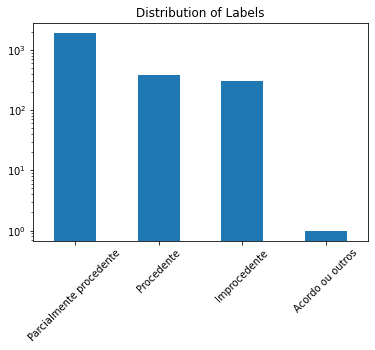

In [428]:
# Criar graficos de distribuição de classes
import matplotlib.pyplot as plt
%matplotlib inline

print(df['classificacao'].value_counts())
df['classificacao'].value_counts().plot.bar()
plt.yscale('log');
plt.title('Distribution of Labels')
plt.xticks(rotation=45)

In [411]:
# Analisando o tamanho (min., máx, méd. de tokens) dos campos do DF['dispositivo', 'relatorio', 'fundamentacao']
# Para cada linha (i) do DF:
#   Capturar os campos em variaveis de texto
#   Instanciar o SpaCy utilizando cada um dos campos 
#       P. ex.: docDisp = nlp(DF['dispositivo'][i])
#               docRelat = nlp(DF['relatorio'][i]) 
#               docFundam = nlp(DF['fundamentacao'][i])
#   Contar a quantidade de tokens que tem no Doc.
#               quanTokenDisp = len(docDisp)
#   Armazenar essas quantidades numa lista_dispositivo.append(quantTokenDisp), lista_relatorio(i) e lista_fundamentacao(i)
# Podemos usar o pipe do SpaCy ou mesmo o Tokenizador do LeNER_Br.





In [ ]:
#!python -m spacy download pt_core_news_lg

In [462]:
#python -m spacy download pt_core_news_lg
import spacy
import pt_core_news_lg

#nlp = pt_core_news_lg.load()
nlp = spacy.load("pt_core_news_lg")

In [467]:
df['classificacao'][0]


'Parcialmente procedente'

In [464]:
txtDisp = df['dispositivo'][0]
docDisp = nlp(txtDisp)
#qTokenDisp = len(docDisp)
#qTokenDisp

985

In [469]:
%%time

import statistics
from tqdm import tqdm

listTamDisp   = []
listTamFundam = []
listTamRelat  = []


#for i in tqdm(range(len(ds['text'])), desc = 'Barra de Progresso:'):  # Loop para a linhas do dataset original, que seriam os arquivos
for i in tqdm(df.index, desc = 'Barra de Progresso:'):
    txtDisp = df['dispositivo'][i]
    txtFundam = df['fundamentacao'][i]
    txtRelat = df['relatorio'][i]
    
    docDisp = nlp(txtDisp)
    docFundam = nlp(txtFundam)
    docRelat = nlp(txtRelat)
    
    qTokenDisp = len(docDisp)
    qTokenFundam = len(docFundam)
    qTokenRelat = len(docRelat)
    
    listTamDisp.append(qTokenDisp)
    listTamFundam.append(qTokenFundam)
    listTamRelat.append(qTokenRelat)
    

def listStat(my_list):

    mean = statistics.mean(my_list)

    #
    print("Máximo: ", max(my_list))
    print("Mínimo: ", min(my_list))
    print("Médio: ", mean)

print("Dispositivo: ")
listStat(listTamDisp) 
print("Fundamentacao: ")
listStat(listTamFundam)
print("Relatorio: ")
listStat(listTamRelat)

Barra de Progresso:: 100%|██████████| 2587/2587 [13:54<00:00,  3.10it/s]

Dispositivo: 
Máximo:  11628
Mínimo:  22
Médio:  708.3850019327406
Fundamentacao: 
Máximo:  13838
Mínimo:  1
Médio:  3182.4727483571705
Relatorio: 
Máximo:  22906
Mínimo:  1
Médio:  307.4568998840356
CPU times: user 13min 44s, sys: 9.88 s, total: 13min 54s
Wall time: 13min 54s


In [521]:
#python -m spacy download pt_core_news_lg
import spacy
import pt_core_news_lg
#import numpy as np
from collections import Counter

#nlp = pt_core_news_lg.load()
nlpSpaCy = spacy.load("pt_core_news_lg")

def lst_unica(list1):
  
    # initialize a null list
    unique_list = []
  
    # traverse for all elements
    for x in list1:
        # check if exists in unique_list or not
        if x not in unique_list:
            unique_list.append(x)
    
    return (unique_list)


In [548]:
txtFundam = df['fundamentacao'][0]
docFundam = nlpSpaCy(txtFundam)
#qTokenDisp = len(docDisp)
#qTokenDisp


#type(entsFundam[0])
lstFundam = list(docFundam.ents)
lstFundam = [str(x) for x in lstFundam]

entsFundam = sorted(list(lst_unica(lstFundam)))

print("Quant. de entidades na seção Fundamentação: ", len(entsFundam))

for i in range(len(entsFundam)):
    print(i, " - ", entsFundam[i])

Quant. de entidades na seção Fundamentação:  91
0  -  1a re
1  -  ACT
2  -  ADC
3  -  Administracao
4  -  Administrativo
5  -  Administração Pública
6  -  Administração Pública.
7  -  Agente 01
8  -  Autora
9  -  C. TST
10  -  CLT
11  -  CTPS
12  -  Carta Magna
13  -  Carta da Republica
14  -  Concessão e a Permissão de Serviço Público
15  -  Consolidação das Leis do Trabalho
16  -  Constituição
17  -  Código Civil
18  -  DA ILEGITIMIDADE PASSIVA
19  -  DA INCOMPETÊNCIA MATERIAL NA
20  -  DA INÉPCIA DA INICIAL  
21  -  DA JUSTIÇA GRATUITA
22  -  DA RESPONSABILIDADE SUBSIDIÁRIA  Afirma
23  -  DAS DEMAIS VERBAS
24  -  DO MÉRITO DA NULIDADE DO CONTRATO
25  -  DOS
26  -  DOS PARÂMETROS DE LIQUIDAÇÃO DOS JUROS
27  -  DOS SALÁRIOS
28  -  Dano
29  -  Dano in re ipsa.
30  -  Dec
31  -  Deduza-
32  -  Direito Processual do Trabalho
33  -  E. TRT1
34  -  Estado Democrático de Direito
35  -  FGTS
36  -  FGTS%
37  -  Guilherme Augusto Caputo Bastos
38  -  HONORÁRIOS ADVOCATÍCIOS
39  -  ID
40  -  I

In [549]:
txtFundam = df['relatorio'][0]
docFundam = nlpSpaCy(txtFundam)
#qTokenDisp = len(docDisp)
#qTokenDisp


#type(entsFundam[0])
lstFundam = list(docFundam.ents)
lstFundam = [str(x) for x in lstFundam]

entsFundam = sorted(list(lst_unica(lstFundam)))

print("Quant. de entidades na seção Relatório: ", len(entsFundam))

for i in range(len(entsFundam)):
    print(i, " - ", entsFundam[i])

Quant. de entidades na seção Relatório:  6
0  -  DANIEL DA SILVA SOUZA DE ALMEIDA
1  -  ESPACO CIDADANIA
2  -  Infrutíferas
3  -  OPORTUNIDADES SOCIAIS
4  -  UNIVERSIDADE FEDERAL FLUMINENSE
5  -  Êo


In [547]:
txtFundam = df['dispositivo'][0]
docFundam = nlpSpaCy(txtFundam)
#qTokenDisp = len(docDisp)
#qTokenDisp


#type(entsFundam[0])
lstFundam = list(docFundam.ents)
lstFundam = [str(x) for x in lstFundam]

entsFundam = sorted(list(lst_unica(lstFundam)))

print("Quant. de entidades na seção Dispositivo: ", len(entsFundam))

for i in range(len(entsFundam)):
    print(i, " - ", entsFundam[i])

Quant. de entidades na seção Dispositivo:  36
0  -  1a re
1  -  CLT
2  -  Constituição
3  -  Código Civil
4  -  DA JUSTIÇA GRATUITA
5  -  DANIEL DA SILVA
6  -  DOS
7  -  DOS PARÂMETROS DE LIQUIDAÇÃO DOS JUROS
8  -  Dec
9  -  E. TRT1
10  -  ESPACO
11  -  HONORÁRIOS ADVOCATÍCIOS
12  -  ID
13  -  INRFB
14  -  INTIMEM-SE AS
15  -  IPCA-E
16  -  JULGAR PARCIALMENTE PROCEDENTES
17  -  Juiz do Trabalho
18  -  Justiça Gratuita
19  -  Justiça do Trabalho
20  -  Lei
21  -  Lei 13
22  -  Leis
23  -  OJ
24  -  OPORTUNIDADES SOCIAIS
25  -  PREVIDENCIÁRIOS
26  -  RECOLHIMENTOS
27  -  Regime Geral de Previdência Social
28  -  STF
29  -  Súmula
30  -  THIAGO RABELO DA
31  -  TR
32  -  TST
33  -  UNIVERSIDADE FEDERAL FLUMINENSE
34  -  VOLTA REDONDA
35  -  âqueles


In [544]:
print(df['classificacao'][0])

Parcialmente procedente


In [546]:
print("Reclamante :", df['reclamante'][0])
print("Reclamado :", df['reclamado'][0])

Reclamante :  DANIEL DA SILVA SOUZA DE ALMEIDA 
Reclamado :  ESPACO CIDADANIA E OPORTUNIDADES SOCIAIS, UNIVERSIDADE FEDERAL FLUMINENSE  


In [3]:
import pandas as pd
df = pd.read_csv("/home/info/MyNotebooks/Datasets/SentencasTRT1/PDFs/Processed/Dataframe/raw_data.csv")

In [4]:
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline

max_lenght = 512

model_checkpoint =  "pierreguillou/ner-bert-base-cased-pt-lenerbr"

tokenizer_ner = AutoTokenizer.from_pretrained(model_checkpoint, use_fast=True, aggregation_strategy='max', truncation=True, padding=True, max_lenght=512) # simple

model_ner = AutoModelForTokenClassification.from_pretrained(model_checkpoint)

ner = pipeline(task="ner", model=model_ner, tokenizer=tokenizer_ner, aggregation_strategy='max')

In [ ]:
# Quando passei o texto inteiro ao pipe veio o valor 1465. Sera a quantidade de tokens?
# A partir desse valor tomei o maior valor da divisao dele por 512 e dividi o texto nessas partes, antes de pas-
# sa-los ao pipe.

In [7]:
%%time

import textwrap
#import statistics
from tqdm import tqdm

# df['relatorio'], df['fundamentacao'], df['dispositivo'] | entsRelatorio | entsFundamentacao | entsDispositivo
#
entsFundamentacao = list()
entsRelatorio = list()
entsDispositivo = list()


def agrupaEnts(My_NER_List):
    My_NER_List = set(My_NER_List) # Stub. Procurar Notebook que ja fiz isso!
    
    return (My_NER_List)

def elimina_duplicatas(lista_com_repeticao):
    #print("Entrou na funcao elimina_duplicatas")
    list_uniques = list()
    
    
    sorted_list = sorted(lista_com_repeticao, key = len) # Colocar em ordem descrescente para deixar apenas as maiores Entidades?
    list_uniques = [j for i, j in enumerate(sorted_list) if all(j.lower() not in k.lower() for k in sorted_list[i + 1:])]
    
              
    #print("   Saindo da funcao elimina_duplicatas")
    
    return(list_uniques)
    
def get_legis_juris(myList):
    #print("Entrando na função get_legis_juris")
    res = myList
    
    jurisprudencias = list()
    legislacao = list()
    
    for i in range(len(res)):
        
        if res[i]['entity_group'] == 'JURISPRUDENCIA':
            jurisprudencias.append(res[i]['word'])
            
        if res[i]['entity_group'] == 'LEGISLACAO':
            legislacao.append(res[i]['word'])
    
    listEntJur = list(set(jurisprudencias+legislacao))
    
    #print("   Saindo na função get_legis_juris")
    return (listEntJur)

    
def criaBatchs(texto):
    
    #print("Entrando na funcao criaBatchs")
    
    
    
    
    input_model = []
    
    input_model = textwrap.wrap(texto, 900, break_long_words=False)
    
    '''
    inputs = tokenizer_ner(texto, return_tensors="pt")
    #inputs = ner(texto)
    tokens = inputs.tokens()

    nr_tokens = len(tokens)
    nr_batch = math.ceil((nr_tokens*1.2)/512)
    

    tam_span = int(len(texto)/nr_batch)

    print("Tam. texto", len(texto))
    print("nr_tokens: ", nr_tokens)
    print("nr_batch: ", nr_batch)
    print("tam_span: ", tam_span)
    
    for i in range(nr_batch):
        span = texto[i*tam_span:i*tam_span+tam_span]
        print("Tam. span: ", len(span))
        input_model.append(span)
    last_span = texto[i*tam_span:]
    print("Tam. last_span: ", len(last_span))
    input_model.append(last_span)
    
    # Falta incluir os intermediarios/interseccoes para pegar tambem as Entidades que foram seccionadas:
    '''
    #print("   Saindo da funcao criaBatchs")
    
    
    
    return (input_model)

    

def extraiEnts(texto):
    
    #print("Entrando na funcao extraiEnts")
    
    listEnts = list()
    listNER  = list()
    listInput = list()
    
    listInput = criaBatchs(texto) # Armazena numa lista as entradas segmentadas (batch) por 512 tokens.
    
    for j in range(len(listInput)):
        # try:
        #    tempNER = ner(listInput[j])
        #    if tempNER nao é vazio   # Acho que nao precisa do if, caso em que armazenara uma lista vazia.
        #        listNER.append(tempNER)
        # except:
        #    tempNER = ner(listInput[j], truncation=TRUE)
        #    if tempNER nao é vazio:
        #        listNER.append(tempNER)
        listNER.append(ner(listInput[j])) # Extrai as Entidades para cada batch. Se o NER nao retornar nenhuma Entidade?
    
    for k in range(len(listNER)):
        listEnts.append(get_legis_juris(listNER[k]))
    
    #print("========================")
    #print("TIPO de listEnts: ", type(listEnts))
    #print("Tam. listEnts: ", len(listEnts))
    listConcat = list()
    for i in range(len(listEnts)):
        #print("listEnts[",i,"]: ",listEnts[i])
        listConcat = listConcat+listEnts[i]
        #print("=========")
        #print(listConcat)
    listEnts = listConcat
    listEnts = elimina_duplicatas(listEnts)    # Agrupa os subconjuntos anteriores, tomando a maior descricao das Entidades.

    
    # So pra verificar o resultado final:
    for i in range(len(listEnts)):
        print("listEnts[",i,"]: ",listEnts[i])
        
    #print("   Saindo da funcao extraiEnts")
    return listEnts



######

for i in tqdm(df.index, desc = 'Barra de Progresso:'):
    print("Iniciando o loop do DF ... i = ",i)
    entsFundamentacao.append(extraiEnts(df['fundamentacao'][i]))
    # df['entsFundamentacao'][i] = extraiEnts(df['fundamentacao'][i])
    #entsRelatorio.append(extraiEnts(df['relatorio'][i]))
    #entsDispositivo.append(extraiEnts(df['dispositivo'][i]))


print("Armazenando Entidades da seção Fundamentacao no disco")
df['entsFundamentacao'] = entsFundamentacao
#df['entsDispositivo']  = entsDispositivo
#df['entsRelatorio']    = entsRelatorio

# Salva/grava df e ds


Barra de Progresso::   0%|          | 0/2587 [00:00<?, ?it/s]Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Iniciando o loop do DF ... i =  0


Barra de Progresso::   0%|          | 1/2587 [00:03<2:49:47,  3.94s/it]

listEnts[ 0 ]:  RR
listEnts[ 1 ]:  83
listEnts[ 2 ]:  350
listEnts[ 3 ]:  0010
listEnts[ 4 ]:  2009
listEnts[ 5 ]:  2018
listEnts[ 6 ]:  0000
listEnts[ 7 ]:  577900
listEnts[ 8 ]:  0102282
listEnts[ 9 ]:  processo
listEnts[ 10 ]:  ADC no 16
listEnts[ 11 ]:  ADCs 58 E 59
listEnts[ 12 ]:  Constituição
listEnts[ 13 ]:  Ve X, CF / 88
listEnts[ 14 ]:  Lei 5584 / 70
listEnts[ 15 ]:  ADI 1765 do STF
listEnts[ 16 ]:  art. 451 da CLT
listEnts[ 17 ]:  art. 445 da CLT
listEnts[ 18 ]:  art. 477 da CLT
listEnts[ 19 ]:  art. 467 da CLT
listEnts[ 20 ]:  art. 464 da CLT
listEnts[ 21 ]:  Lei n. o 8. 666
listEnts[ 22 ]:  INRFB 1127 / 11
listEnts[ 23 ]:  art. 100 da CRFB
listEnts[ 24 ]:  Lei no 8666 / 93
listEnts[ 25 ]:  Leis 8. 541 / 92
listEnts[ 26 ]:  Súmula 331 do TST
listEnts[ 27 ]:  art. 879, $ 7º, e
listEnts[ 28 ]:  Súmula 368 do TST
listEnts[ 29 ]:  Lei nº 9601 / 1998
listEnts[ 30 ]:  Lei n. 8. 666 / 93
listEnts[ 31 ]:  Lei 13. 467 / 2017
listEnts[ 32 ]:  ADls 5. 867 e 6. 021
listEnts[ 33 ]:  art

Barra de Progresso::   0%|          | 2/2587 [00:06<2:20:56,  3.27s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  CCT
listEnts[ 2 ]:  88.
listEnts[ 3 ]:  OJSDI
listEnts[ 4 ]:  Carta Magna
listEnts[ 5 ]:  EC nº 45 / 04
listEnts[ 6 ]:  lei nº 13. 467
listEnts[ 7 ]:  art. 477 da CLT
listEnts[ 8 ]:  art. 844, da CLT
listEnts[ 9 ]:  ART. 477, DA CLT
listEnts[ 10 ]:  I, nº 394, do C. TST
listEnts[ 11 ]:  art. 10, do CPC / 15
listEnts[ 12 ]:  3º, do art. 832, da CLT
listEnts[ 13 ]:  art. 477 ), S 8º, da CLT.
listEnts[ 14 ]:  art. 1º, III, da CRFB / 88
listEnts[ 15 ]:  arts. 2º e 3º, ambos da CTPS
listEnts[ 16 ]:  parágrafo 3º, do art. 190, da CLT
listEnts[ 17 ]:  inciso II, do art. 5º, da CRFB / 88
listEnts[ 18 ]:  súmula nº 07, do E. TRT / 12 Região
listEnts[ 19 ]:  arts. 186 e 927, ambos do Código Civil
listEnts[ 20 ]:  decreto nº 3. 048 / 99, art. 214, S 9º, IV
listEnts[ 21 ]:  Decreto nº 3. 048 / 99, art. 214, S 9º, XXII
listEnts[ 22 ]:  Decreto nº 3. 048 / 99, art. 214, S 9º, v, " a "
Iniciando o loop do DF ... i =  2


Barra de Progresso::   0%|          | 3/2587 [00:10<2:26:18,  3.40s/it]

listEnts[ 0 ]:  ADC nº 16
listEnts[ 1 ]:  Lei nº 13. 303
listEnts[ 2 ]:  art. 105 do NCP
listEnts[ 3 ]:  CLT, art. 818 ;
listEnts[ 4 ]:  art. 449 da CLT
listEnts[ 5 ]:  art. 464 da CLT
listEnts[ 6 ]:  art. 477 da CLT
listEnts[ 7 ]:  RE 760. 931 / DF
listEnts[ 8 ]:  arts. 818 da CLT
listEnts[ 9 ]:  art. 477, da CLT
listEnts[ 10 ]:  Lei 12. 715 / 12
listEnts[ 11 ]:  Lei 7. 661 / 1945
listEnts[ 12 ]:  Lei 14. 112 / 20.
listEnts[ 13 ]:  Lei 13. 467 / 2017
listEnts[ 14 ]:  Lei 12. 546 / 2011
listEnts[ 15 ]:  Súmula 463 do C. TST
listEnts[ 16 ]:  CPC, art. 373, le Il
listEnts[ 17 ]:  Lei nº 8. 666 / 1993
listEnts[ 18 ]:  Súmula nº 461 do TST
listEnts[ 19 ]:  arts. 186 e 927 do CC
listEnts[ 20 ]:  Lei nº 13. 467 / 2017
listEnts[ 21 ]:  item V da Súmula nº 331
listEnts[ 22 ]:  3783, Il, do CPC / 2015
listEnts[ 23 ]:  Súmula n. º 388, do TST
listEnts[ 24 ]:  art. 333, |, do CPC / 73
listEnts[ 25 ]:  art. 790 & 30 da CLT / 17
listEnts[ 26 ]:  art. 791 - A, 8 2º da CLT
listEnts[ 27 ]:  art. 3º da

Barra de Progresso::   0%|          | 4/2587 [00:13<2:21:27,  3.29s/it]

listEnts[ 0 ]:  ADC 16
listEnts[ 1 ]:  art. 769 da CLT
listEnts[ 2 ]:  Lei n. º 8. 666
listEnts[ 3 ]:  artigo 71 da CLT
listEnts[ 4 ]:  artigo 769 da CLT
listEnts[ 5 ]:  artigo 467 da CLT
listEnts[ 6 ]:  Súmula 219 do TST
listEnts[ 7 ]:  artigo 883 da CLT
listEnts[ 8 ]:  Súmula 381 do TST
listEnts[ 9 ]:  Súmula 200 do TST
listEnts[ 10 ]:  344 do CPC de 2015
listEnts[ 11 ]:  artigos 844 da CLT
listEnts[ 12 ]:  Lei nº 7. 418 / 85
listEnts[ 13 ]:  Lei nº 5. 584 / 70
listEnts[ 14 ]:  Súmula nº 368 do TST
listEnts[ 15 ]:  Súmula 368 do C. TST
listEnts[ 16 ]:  Lei nº 12. 506 / 2011
listEnts[ 17 ]:  Súmula 368, Il do TST
listEnts[ 18 ]:  artigo 477, 88º da CLT
listEnts[ 19 ]:  81º da Lei 8. 177 / 91
listEnts[ 20 ]:  art. 341 do CPC de 2015
listEnts[ 21 ]:  Decreto nº 95. 247 / 87
listEnts[ 22 ]:  OJ 42 da SDl - 1 do TST
listEnts[ 23 ]:  Súmula nº 444 do C. TST
listEnts[ 24 ]:  8 3º do art. 790 da CLT
listEnts[ 25 ]:  artigo 15 do CPC de 2015
listEnts[ 26 ]:  inciso V da Súmula nº 331
listEnts

Barra de Progresso::   0%|          | 5/2587 [00:18<2:53:42,  4.04s/it]

listEnts[ 0 ]:  75
listEnts[ 1 ]:  01.
listEnts[ 2 ]:  0012
listEnts[ 3 ]:  0015
listEnts[ 4 ]:  2016
listEnts[ 5 ]:  0001
listEnts[ 6 ]:  0028
listEnts[ 7 ]:  2004
listEnts[ 8 ]:  RTOrd
listEnts[ 9 ]:  0011620
listEnts[ 10 ]:  0041882
listEnts[ 11 ]:  0024200
listEnts[ 12 ]:  RE 709. 212.
listEnts[ 13 ]:  Lei 5584 / 70
listEnts[ 14 ]:  art. 11 da CLT
listEnts[ 15 ]:  Sum. 362 do TST
listEnts[ 16 ]:  Art. 103 do CDC
listEnts[ 17 ]:  art. 844 da CLT
listEnts[ 18 ]:  art. 467 da CLT
listEnts[ 19 ]:  art. 477 da CLT
listEnts[ 20 ]:  Lei 8. 660 / 93
listEnts[ 21 ]:  CC, arts. 11 - 21
listEnts[ 22 ]:  . da Lei 7. 713 /
listEnts[ 23 ]:  artigo 883 da CLT
listEnts[ 24 ]:  da Lei 8. 177 / 91
listEnts[ 25 ]:  art. 487, Il do NCPC
listEnts[ 26 ]:  súmula 331 do C. TST
listEnts[ 27 ]:  Súmula 200 do C. TST
listEnts[ 28 ]:  Súmula 381 do C. TST
listEnts[ 29 ]:  art. 11, 8 1º, da CLT
listEnts[ 30 ]:  artigo 5º, XXXV da CF
listEnts[ 31 ]:  art. 596, 91º, do CPC
listEnts[ 32 ]:  art. 341 do CPC / 201

Barra de Progresso::   0%|          | 6/2587 [00:21<2:34:06,  3.58s/it]

listEnts[ 0 ]:  art. 14 do CPC
listEnts[ 1 ]:  art. 6º do CPC
listEnts[ 2 ]:  art. 8º do CPC
listEnts[ 3 ]:  lei 5584 / 70.
listEnts[ 4 ]:  Lei 10. 537 / 02
listEnts[ 5 ]:  Lei 12. 350 / 10
listEnts[ 6 ]:  141 e 492 do CPC
listEnts[ 7 ]:  OJ 421 da SDl - I
listEnts[ 8 ]:  Súmula 331 do TST
listEnts[ 9 ]:  Súmula 45, do TST
listEnts[ 10 ]:  Lei 13. 467 / 2017
listEnts[ 11 ]:  CLT, art. 790, 83º
listEnts[ 12 ]:  CLT, art. 142, 85º
listEnts[ 13 ]:  Súmula 437, do TST
listEnts[ 14 ]:  Súmula 172, do TST
listEnts[ 15 ]:  Lei nº 5. 584 / 1970
listEnts[ 16 ]:  art. 790, 83º, da CLT
listEnts[ 17 ]:  art. 85 do CPC de 2015
listEnts[ 18 ]:  art. 20 do CPC de 1973
listEnts[ 19 ]:  Súmula 331, IV, do TST
listEnts[ 20 ]:  art. 5º XXXVI, CF / 1988
listEnts[ 21 ]:  Lei 7. 113 / 88, art. 12 - A
listEnts[ 22 ]:  Código Civil, artigos 186 e 927.
listEnts[ 23 ]:  Emenda Constitucional nº 45 / 2004
listEnts[ 24 ]:  artigos 27 a 56 da Lei 8. 666 / 93
listEnts[ 25 ]:  81º do art. 71 da Lei nº 8. 666 / 93
li

Barra de Progresso::   0%|          | 7/2587 [00:27<3:06:03,  4.33s/it]

listEnts[ 0 ]:  :
listEnts[ 1 ]:  RJ
listEnts[ 2 ]:  TRT
listEnts[ 3 ]:  Decreto
listEnts[ 4 ]:  Lei n. 70
listEnts[ 5 ]:  ID 0844983
listEnts[ 6 ]:  186 do CTN
listEnts[ 7 ]:  98, 820, CPC
listEnts[ 8 ]:  LC 101 / 2000
listEnts[ 9 ]:  Al 304693 AgR
listEnts[ 10 ]:  LC n. 101 / 00
listEnts[ 11 ]:  Art. 99 do CPC
listEnts[ 12 ]:  art. 623 da CLT
listEnts[ 13 ]:  art. 892 da CLT
listEnts[ 14 ]:  833, IV, do CPC
listEnts[ 15 ]:  art. 323 do NCPC
listEnts[ 16 ]:  art. 468 da CLT.
listEnts[ 17 ]:  artigo 623 da CLT
listEnts[ 18 ]:  art. 5º, XXXV, CF
listEnts[ 19 ]:  art. 5o, XXXV, CF
listEnts[ 20 ]:  art. 5º, | da CRFB
listEnts[ 21 ]:  art. 5º, LXXIV, CF
listEnts[ 22 ]:  art. 5o, LXXIV, CF
listEnts[ 23 ]:  Lei n. 13. 467 / 17
listEnts[ 24 ]:  art. 98, caput, CPC
listEnts[ 25 ]:  00009618820135010241
listEnts[ 26 ]:  art. 99, 83º, do CPC
listEnts[ 27 ]:  art. 100, S 1º da CF
listEnts[ 28 ]:  art. 85, 914, do CPC
listEnts[ 29 ]:  art. 98, 420, do CPC
listEnts[ 30 ]:  art. 7º, XXIX da CRFB
lis

Barra de Progresso::   0%|          | 8/2587 [00:31<3:08:01,  4.37s/it]

listEnts[ 0 ]:  76
listEnts[ 1 ]:  2006
listEnts[ 2 ]:  0482
listEnts[ 3 ]:  AIRR
listEnts[ 4 ]:  4567
listEnts[ 5 ]:  2010
listEnts[ 6 ]:  0000
listEnts[ 7 ]:  215640
listEnts[ 8 ]:  ADC 16
listEnts[ 9 ]:  ADC - 16
listEnts[ 10 ]:  . 170, Ill
listEnts[ 11 ]:  96 da CGJT
listEnts[ 12 ]:  art. 4º, Il
listEnts[ 13 ]:  art. 2º, CLT
listEnts[ 14 ]:  art. 8º, CLT
listEnts[ 15 ]:  art. 341, CPC
listEnts[ 16 ]:  art. 896, CLT
listEnts[ 17 ]:  ADC nº 16 - DF
listEnts[ 18 ]:  Lei nº 10. 035
listEnts[ 19 ]:  Súmula 200 TST
listEnts[ 20 ]:  Súmula 381 TST
listEnts[ 21 ]:  Lei 8. 666 / 93
listEnts[ 22 ]:  Lei 8. 177 / 91
listEnts[ 23 ]:  Súmula 126 / TST
listEnts[ 24 ]:  Lei 13. 467 / 17
listEnts[ 25 ]:  OJ 382 SDII TST3
listEnts[ 26 ]:  Súmula 461 do TST
listEnts[ 27 ]:  artigo 883 da CLT
listEnts[ 28 ]:  art. 7º, VI, VIL X
listEnts[ 29 ]:  Lein. 6. 019 / / 4
listEnts[ 30 ]:  art. 100, ab initio
listEnts[ 31 ]:  Enunciado 831 do TST
listEnts[ 32 ]:  Súmula 368, III, TST
listEnts[ 33 ]:  art. 100 

Barra de Progresso::   0%|          | 9/2587 [00:37<3:29:35,  4.88s/it]

listEnts[ 0 ]:  :
listEnts[ 1 ]:  AC
listEnts[ 2 ]:  34
listEnts[ 3 ]:  CCT
listEnts[ 4 ]:  AIRR
listEnts[ 5 ]:  0006
listEnts[ 6 ]:  2009
listEnts[ 7 ]:  2012
listEnts[ 8 ]:  CRFB
listEnts[ 9 ]:  71240
listEnts[ 10 ]:  ADC 16
listEnts[ 11 ]:  062003
listEnts[ 12 ]:  - 67400
listEnts[ 13 ]:  / 96 da
listEnts[ 14 ]:  ADC nº 16
listEnts[ 15 ]:  88 da CLT
listEnts[ 16 ]:  Provimento
listEnts[ 17 ]:  art. 896, CLT
listEnts[ 18 ]:  Súmula 381 do
listEnts[ 19 ]:  333, |, do CPC
listEnts[ 20 ]:  Lei 8. 666 / 98
listEnts[ 21 ]:  . 338, | do TST
listEnts[ 22 ]:  Lei 8. 177 / 91
listEnts[ 23 ]:  Súmula n. º 362
listEnts[ 24 ]:  Súmula 126 / TST
listEnts[ 25 ]:  art. 883, da CLT
listEnts[ 26 ]:  Súmula 331W / TST
listEnts[ 27 ]:  artigo 467 da CLT
listEnts[ 28 ]:  artigo 477 da CLT
listEnts[ 29 ]:  artigo 66, da CLT
listEnts[ 30 ]:  Súmula 200 do TST
listEnts[ 31 ]:  Lei nº 5. 584 / 70
listEnts[ 32 ]:  Lei nº 8. 906 / 94
listEnts[ 33 ]:  CLT, art. 790, 83º
listEnts[ 34 ]:  CLT, art. 832, 83º
list

Barra de Progresso::   0%|          | 10/2587 [00:41<3:20:19,  4.66s/it]

listEnts[ 0 ]:  Carta Magna
listEnts[ 1 ]:  ADC 16 / DF
listEnts[ 2 ]:  Lei 8666 / 93
listEnts[ 3 ]:  art. 468 da CLT
listEnts[ 4 ]:  Lei n. º 8. 666
listEnts[ 5 ]:  art. 896 da CLT
listEnts[ 6 ]:  Res. 204 / 2016
listEnts[ 7 ]:  Súmula 337 / TST
listEnts[ 8 ]:  Súmula 126 / TST
listEnts[ 9 ]:  Súmula 833 / TST
listEnts[ 10 ]:  Súmula 333 / TST
listEnts[ 11 ]:  artigo 468 da CLT
listEnts[ 12 ]:  Súmula 337 do TST
listEnts[ 13 ]:  Súmula 368 do TST
listEnts[ 14 ]:  RECURSO DE REVISTA
listEnts[ 15 ]:  RR 1555220115090095
listEnts[ 16 ]:  RR 2703920135150159
listEnts[ 17 ]:  IN 1127 da SRF / MF
listEnts[ 18 ]:  artº 477 8 5º da CLT
listEnts[ 19 ]:  RR 15300920115050222
listEnts[ 20 ]:  Súmula nº 219 do TST
listEnts[ 21 ]:  OJ nº 305da SBDI - l
listEnts[ 22 ]:  artigo 7º, Vi da CRFB
listEnts[ 23 ]:  Sumula 51, Il, do TST
listEnts[ 24 ]:  art. 896, $ 4º dalCLT
listEnts[ 25 ]:  arts. 85, 86, 87 e 90
listEnts[ 26 ]:  artigo 81, III, do CDC
listEnts[ 27 ]:  artigos 7º, VI da CRFB
listEnts[ 28 

Barra de Progresso::   0%|          | 11/2587 [00:43<2:38:22,  3.69s/it]

listEnts[ 0 ]:  Art. 83
listEnts[ 1 ]:  art. 5º, XXXV, CF
listEnts[ 2 ]:  Lei 13. 467 / 2017
listEnts[ 3 ]:  art. 5º, caput, CF
listEnts[ 4 ]:  art. 5º, LXXIV, CF
listEnts[ 5 ]:  Lei 11. 101 / 2005
listEnts[ 6 ]:  art. / 90, 830 da CLT
listEnts[ 7 ]:  Lei 5172 / 66 Art. 186
listEnts[ 8 ]:  art. 99, 8 3. º, do CPC
listEnts[ 9 ]:  83º, do art. 790, da CLT
listEnts[ 10 ]:  art. 791 - A, 83º, da CLT
listEnts[ 11 ]:  artigo 927 do Código Civil
listEnts[ 12 ]:  artigo 927, do Código Civil
listEnts[ 13 ]:  84º, do art. 791 - A, da CLT
listEnts[ 14 ]:  art. 790, 88 3. º e 4. º, da CLT
listEnts[ 15 ]:  artigos 186 e 927, do Código Civil
listEnts[ 16 ]:  art. 1. º da Lei n. º 7. 115 / 1983
listEnts[ 17 ]:  Código de Processo Civil : Art. 85 8
listEnts[ 18 ]:  artigos 70., inciso XXVIII da Constituição
listEnts[ 19 ]:  arts. 5º, XXXV, LXXIV, CF e 8º, 1, do Pacto de São José da Costa Rica
Iniciando o loop do DF ... i =  11


Barra de Progresso::   0%|          | 12/2587 [00:50<3:27:32,  4.84s/it]

listEnts[ 0 ]:  RO
listEnts[ 1 ]:  TRT
listEnts[ 2 ]:  AIRR
listEnts[ 3 ]:  ADC 16
listEnts[ 4 ]:  ADC nº 16
listEnts[ 5 ]:  art. 193 da CF
listEnts[ 6 ]:  art. 488 da CLT
listEnts[ 7 ]:  art. 818 da CLT
listEnts[ 8 ]:  IN 1. 558 / 2015
listEnts[ 9 ]:  artigo 488 da CLT
listEnts[ 10 ]:  Súmula 461 do TST
listEnts[ 11 ]:  Súmula 305 do TST
listEnts[ 12 ]:  artigo 467 da CLT
listEnts[ 13 ]:  Súmula 126 do TST
listEnts[ 14 ]:  artigo 883 da CLT
listEnts[ 15 ]:  aris. 430ss do CPC
listEnts[ 16 ]:  Carta Magna de 1988
listEnts[ 17 ]:  Reforma Trabalhista
listEnts[ 18 ]:  Lei nº 13. 467 / 17
listEnts[ 19 ]:  art. 791 - A da CLT
listEnts[ 20 ]:  OJ 302, da SDlI - 1
listEnts[ 21 ]:  Carta Constitucional
listEnts[ 22 ]:  00003029820145010482
listEnts[ 23 ]:  Súmula Vinculante 10
listEnts[ 24 ]:  art. 791 - A, da CLT
listEnts[ 25 ]:  Súmula 200 do C. TST
listEnts[ 26 ]:  art. 477, 48º, da CLT
listEnts[ 27 ]:  art. 477, 88º, da CLT
listEnts[ 28 ]:  art. 3383, Il, do CPC
listEnts[ 29 ]:  Súmula 33

Barra de Progresso::   1%|          | 13/2587 [00:53<2:51:55,  4.01s/it]

listEnts[ 0 ]:  ADC nº 16
listEnts[ 1 ]:  Constituição
listEnts[ 2 ]:  art. 15 do CPC
listEnts[ 3 ]:  art. 10º do CPC
listEnts[ 4 ]:  art. 6º da LINDB
listEnts[ 5 ]:  artigo 477 da CLT
listEnts[ 6 ]:  Lei nº 5. 584 / 70
listEnts[ 7 ]:  Lei nº 12506 / 2011
listEnts[ 8 ]:  Reforma Trabalhista
listEnts[ 9 ]:  Lei nº 13. 467 / 17
listEnts[ 10 ]:  art. 791 - A da CLT
listEnts[ 11 ]:  Lei sobre licitações
listEnts[ 12 ]:  art. / 91 - A da CLT
listEnts[ 13 ]:  REsp 1. 465. 535 / SP
listEnts[ 14 ]:  Lei nº 13. 467 / 2017
listEnts[ 15 ]:  artigo 790, 8 3º da CLT
listEnts[ 16 ]:  Diploma Processual Civil
listEnts[ 17 ]:  Súmulas 219 e 329 do TST
listEnts[ 18 ]:  CRFB, art. 5º, XXXIV, XXXV e LXIX
listEnts[ 19 ]:  artigo 71, parágrafo 1º, da Lei 8666 / 93
listEnts[ 20 ]:  artigo 840 da Consolidação das Leis Trabalhista
listEnts[ 21 ]:  artigo 467 da Consolidação das Leis Trabalhistas
listEnts[ 22 ]:  Lei de Introdução s Normas do Direito Brasileiro
listEnts[ 23 ]:  Ação Civil Pública nº 0101148 - 

Barra de Progresso::   1%|          | 14/2587 [00:53<2:12:25,  3.09s/it]

listEnts[ 0 ]:  OJ 87
listEnts[ 1 ]:  Lei Maior
listEnts[ 2 ]:  artigo 790 - A
listEnts[ 3 ]:  . lei 779 / 69
listEnts[ 4 ]:  artigo 791 - A CLT
listEnts[ 5 ]:  Lei 13. 467 / 2017
listEnts[ 6 ]:  artigo 791 - A da CLT
listEnts[ 7 ]:  artigo 100 da CRFB / 88
listEnts[ 8 ]:  art. 12, do Dec. 509 / 69
listEnts[ 9 ]:  art. 223 - G, 8 1º, Il, da CLT
listEnts[ 10 ]:  art. 927, parágrafo único, Código Civil 2002
Iniciando o loop do DF ... i =  14


Barra de Progresso::   1%|          | 15/2587 [00:57<2:23:13,  3.34s/it]

listEnts[ 0 ]:  98
listEnts[ 1 ]:  660
listEnts[ 2 ]:  0222
listEnts[ 3 ]:  0100280
listEnts[ 4 ]:  RE 603397
listEnts[ 5 ]:  Lei 6402 / 13
listEnts[ 6 ]:  art. 9º da CLT
listEnts[ 7 ]:  lei 12350 / 10
listEnts[ 8 ]:  art. 467 da CLT
listEnts[ 9 ]:  art. 9º, da CLT
listEnts[ 10 ]:  art. 167, do CC
listEnts[ 11 ]:  Lei 6702 / 2014.
listEnts[ 12 ]:  artigo 942 do CC
listEnts[ 13 ]:  art. 883, da CLT
listEnts[ 14 ]:  Súmula 389 do TST
listEnts[ 15 ]:  súmula 381 do TST
listEnts[ 16 ]:  parágrafos, do CPC
listEnts[ 17 ]:  Lei 12. 690 / 2012
listEnts[ 18 ]:  Lei 13. 467 / 2017
listEnts[ 19 ]:  art. 71 8 4º da CLT
listEnts[ 20 ]:  art. 7º, XVI, da CF
listEnts[ 21 ]:  CLT, art. 790, S 3º
listEnts[ 22 ]:  súmula 331, VI, TST
listEnts[ 23 ]:  Súmula nº 437 do TST
listEnts[ 24 ]:  art. 71, 8 2º, da CLT
listEnts[ 25 ]:  Leis nos. 8. 177 / 91
listEnts[ 26 ]:  parágrafo único da CLT
listEnts[ 27 ]:  art. 790, 8 3º, da CLT
listEnts[ 28 ]:  ARTIGOS 467 E 477 DA CLT
listEnts[ 29 ]:  art. 28, da Lei 82

Barra de Progresso::   1%|          | 16/2587 [01:05<3:24:14,  4.77s/it]

listEnts[ 0 ]:  1 - E
listEnts[ 1 ]:  ADC 16
listEnts[ 2 ]:  Pleno -
listEnts[ 3 ]:  Regional
listEnts[ 4 ]:  ADC nº 16
listEnts[ 5 ]:  Taxa Selic
listEnts[ 6 ]:  CPC de 2015
listEnts[ 7 ]:  RE 760. 931
listEnts[ 8 ]:  CPC, art. 15
listEnts[ 9 ]:  Al 405738 AgR
listEnts[ 10 ]:  RE 783235 AgR
listEnts[ 11 ]:  Rcl nº 26. 175
listEnts[ 12 ]:  ARE 830441 AgR
listEnts[ 13 ]:  ARE 701091 AgR
listEnts[ 14 ]:  ADC nº 58 / DF
listEnts[ 15 ]:  ADC nº 59 / DF
listEnts[ 16 ]:  art. 794 da CLT
listEnts[ 17 ]:  CLT, art. 769 ;
listEnts[ 18 ]:  art. 818 da CLT
listEnts[ 19 ]:  RES. 174 / 2011
listEnts[ 20 ]:  Lei n. º 8. 666
listEnts[ 21 ]:  5º e 7º, do CPC
listEnts[ 22 ]:  art. 833 da CLT
listEnts[ 23 ]:  OJ nº 348 do TST
listEnts[ 24 ]:  ADI nº 5. 766 / DF
listEnts[ 25 ]:  Lei nº 9. 528 / 97
listEnts[ 26 ]:  ADI nº 6. 021 / DF
listEnts[ 27 ]:  ADI nº 5. 867 / DF
listEnts[ 28 ]:  RE nº 760. 931 / DF
listEnts[ 29 ]:  art. 791 - A da CLT
listEnts[ 30 ]:  art. 459 do CPC / 73
listEnts[ 31 ]:  art. 293 

Barra de Progresso::   1%|          | 17/2587 [01:11<3:29:48,  4.90s/it]

listEnts[ 0 ]:  Res
listEnts[ 1 ]:  CCT
listEnts[ 2 ]:  CRFB
listEnts[ 3 ]:  . 791º
listEnts[ 4 ]:  0120600
listEnts[ 5 ]:  . 181 / 2012
listEnts[ 6 ]:  ADCs 58 e 59
listEnts[ 7 ]:  ATO 158 / 2013
listEnts[ 8 ]:  373, | do NCPC
listEnts[ 9 ]:  Lei nº 13. 467
listEnts[ 10 ]:  Lei n. º 8. 666
listEnts[ 11 ]:  art. 467 da CLT
listEnts[ 12 ]:  Súmula n. º 362
listEnts[ 13 ]:  nº. 8. 177 / 91
listEnts[ 14 ]:  Lei 8. 541 / 92
listEnts[ 15 ]:  art. 883, da CLT
listEnts[ 16 ]:  artigo 818 da CLT
listEnts[ 17 ]:  artigo 195 da CLT
listEnts[ 18 ]:  ADiIs 5867 e 6021
listEnts[ 19 ]:  Lei 12. 506 / 2011
listEnts[ 20 ]:  Lei 13. 467 / 2017
listEnts[ 21 ]:  CLT, art. 832, 83º
listEnts[ 22 ]:  art. 485, ViIdo CPC
listEnts[ 23 ]:  6º do art. 37 da CF
listEnts[ 24 ]:  arts. 22 e 3º da CLT
listEnts[ 25 ]:  artigo 333, | do CPC
listEnts[ 26 ]:  OJ nº 141 da SBDI - 1
listEnts[ 27 ]:  art. 467 e 477 da CLT
listEnts[ 28 ]:  art. 175 da Carta Magna
listEnts[ 29 ]:  art. 39, pár. 1º da CLT
listEnts[ 30 ]:  Có

Barra de Progresso::   1%|          | 18/2587 [01:15<3:18:07,  4.63s/it]

listEnts[ 0 ]:  448
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  RE 760931
listEnts[ 3 ]:  818 da CLT
listEnts[ 4 ]:  ADC 16 / 2010
listEnts[ 5 ]:  Lei 7. 998 / 90
listEnts[ 6 ]:  art. 311 do CPC
listEnts[ 7 ]:  OJ 302 da SBI 1
listEnts[ 8 ]:  artigo 189 do CC
listEnts[ 9 ]:  artigo 467 da CLT
listEnts[ 10 ]:  Súmula 381 do TST
listEnts[ 11 ]:  artigo 883 da CLT
listEnts[ 12 ]:  Súmula 200 do TST
listEnts[ 13 ]:  Lei 13. 134 / 2015
listEnts[ 14 ]:  Lei 12. 101 / 2009
listEnts[ 15 ]:  art. 791 - A da CLT
listEnts[ 16 ]:  28 da Lei 8212 / 91
listEnts[ 17 ]:  art. 897 - A da CLT
listEnts[ 18 ]:  Súmula 331 do C. TST
listEnts[ 19 ]:  8 3º art. 790 da CLT
listEnts[ 20 ]:  art. 141 e 492 do CPC
listEnts[ 21 ]:  81º do art. 39 da CLT
listEnts[ 22 ]:  Lei nº 13. 467 / 2017
listEnts[ 23 ]:  artigo 791 - A da CLT
listEnts[ 24 ]:  2º do artigo 39 da CLT
listEnts[ 25 ]:  artigos 373, Il do CPC
listEnts[ 26 ]:  87º do art. 879 da CLT
listEnts[ 27 ]:  OJ 82 da SDI - 1 do TST
listEnts[ 28 ]:  $ 4º do ar

Barra de Progresso::   1%|          | 19/2587 [01:18<2:59:43,  4.20s/it]

listEnts[ 0 ]:  30.
listEnts[ 1 ]:  ACTUM
listEnts[ 2 ]:  Anexo
listEnts[ 3 ]:  CPC, art. 537
listEnts[ 4 ]:  CPC, art. 117
listEnts[ 5 ]:  MP 449 / 2008
listEnts[ 6 ]:  ADC nº 16 / DF
listEnts[ 7 ]:  CLT, art. 769.
listEnts[ 8 ]:  Lei nº 13. 467
listEnts[ 9 ]:  art. 186, do CC
listEnts[ 10 ]:  Lei 8. 666 / 983
listEnts[ 11 ]:  art. 37, da CRFB
listEnts[ 12 ]:  art. 883, da CLT
listEnts[ 13 ]:  Lei 13. 149 / 15
listEnts[ 14 ]:  Súmula 331, do TST
listEnts[ 15 ]:  Lei nº 8. 177 / 91
listEnts[ 16 ]:  Lei nº 8. 660 / 98
listEnts[ 17 ]:  Lei 11. 941 / 2009
listEnts[ 18 ]:  Súmula 331, do C. TST
listEnts[ 19 ]:  CPC, art. 98, cabeça.
listEnts[ 20 ]:  CRFB, art. 1º, Ill, IV
listEnts[ 21 ]:  art. 790, 8 3º, da CLT
listEnts[ 22 ]:  CLT, art. 467 e 4778 8º
listEnts[ 23 ]:  CPC, art. 373, 8 3º, Il
listEnts[ 24 ]:  CLT, art. 10 e art. 448.
listEnts[ 25 ]:  Lei 8. 666 / 98, art. 67
listEnts[ 26 ]:  CLT, art. 790, 8 3º e 4º
listEnts[ 27 ]:  Súmula 331, V, do C. TST.
listEnts[ 28 ]:  CLT, art. 791 -

Barra de Progresso::   1%|          | 20/2587 [01:25<3:37:59,  5.10s/it]

listEnts[ 0 ]:  RO
listEnts[ 1 ]:  RJ
listEnts[ 2 ]:  TRT
listEnts[ 3 ]:  558
listEnts[ 4 ]:  AIRR
listEnts[ 5 ]:  IN 1.
listEnts[ 6 ]:  ADC 16
listEnts[ 7 ]:  170 da CF
listEnts[ 8 ]:  Súmula 17
listEnts[ 9 ]:  art. 193 da CF
listEnts[ 10 ]:  art. 818 da CLT
listEnts[ 11 ]:  artigo 71 da CLT
listEnts[ 12 ]:  artigo 344 do CPC
listEnts[ 13 ]:  artigo 300 do CPC
listEnts[ 14 ]:  artigo 146 da CLT
listEnts[ 15 ]:  Súmula 461 do TST
listEnts[ 16 ]:  Súmula 305 do TST
listEnts[ 17 ]:  artigo 467 da CLT
listEnts[ 18 ]:  artigo 497 do CPC
listEnts[ 19 ]:  Súmula 331 do TST
listEnts[ 20 ]:  Súmula 126 do TST
listEnts[ 21 ]:  artigo 883 da CLT
listEnts[ 22 ]:  OJ 302, da SDI - 1
listEnts[ 23 ]:  Carta Magna de 1988
listEnts[ 24 ]:  OJ 97 da SDl do TST
listEnts[ 25 ]:  Lei nº 13. 467 / 17
listEnts[ 26 ]:  art. 791 - A da CLT
listEnts[ 27 ]:  00003029820145010482
listEnts[ 28 ]:  Constituição Federal
listEnts[ 29 ]:  art. 791 - A, da CLT
listEnts[ 30 ]:  Súmula 200 do C. TST
listEnts[ 31 ]:  art

Barra de Progresso::   1%|          | 21/2587 [01:27<3:01:36,  4.25s/it]

listEnts[ 0 ]:  no
listEnts[ 1 ]:  253
listEnts[ 2 ]:  . 03
listEnts[ 3 ]:  do TRF
listEnts[ 4 ]:  ADC's 58
listEnts[ 5 ]:  ADPFs 437
listEnts[ 6 ]:  05 da CGJT
listEnts[ 7 ]:  RG 599. 628
listEnts[ 8 ]:  ADPF Nº 387
listEnts[ 9 ]:  art. 769, CLT
listEnts[ 10 ]:  art. 2º da CF
listEnts[ 11 ]:  art. 86 do CPC
listEnts[ 12 ]:  art. 100 da CF
listEnts[ 13 ]:  Lei7. 998 / 90
listEnts[ 14 ]:  Lei7. 855 / 89
listEnts[ 15 ]:  art. 479 da CLT
listEnts[ 16 ]:  RE 612. 043 / PR
listEnts[ 17 ]:  art. 468, da CLT
listEnts[ 18 ]:  art. 791 A, da CLT
listEnts[ 19 ]:  Lei 88212 / 91art.
listEnts[ 20 ]:  ADPF 387, 437 e 530
listEnts[ 21 ]:  art. 167, VI, da CF
listEnts[ 22 ]:  Súmula nº368 do TST
listEnts[ 23 ]:  Art. 791 - A, da CLT
listEnts[ 24 ]:  parágrafo 80. da CLT
listEnts[ 25 ]:  Súmula nº 381 do TST
listEnts[ 26 ]:  art. 5º, XXXVI, da CRFB
listEnts[ 27 ]:  Provimento 01 / 96 da CGJT
listEnts[ 28 ]:  art. 86, parág. único, do CPC
listEnts[ 29 ]:  art. 459, parágrafo único, da CLT
listEnts[ 30 

Barra de Progresso::   1%|          | 22/2587 [01:29<2:23:55,  3.37s/it]

listEnts[ 0 ]:  65
listEnts[ 1 ]:  2015
listEnts[ 2 ]:  0006
listEnts[ 3 ]:  0011481
listEnts[ 4 ]:  art. 193 do CC
listEnts[ 5 ]:  art. 769 da CLT
listEnts[ 6 ]:  Súmula 153 do TST
listEnts[ 7 ]:  ARExt 709. 212 / DF
listEnts[ 8 ]:  arts. 77 e 80 do CPC
listEnts[ 9 ]:  art. 11, 8 1º, da CLT
listEnts[ 10 ]:  aris. 10 e 448 da CLT
listEnts[ 11 ]:  art. 790, 8 3º, da CLT
listEnts[ 12 ]:  art. 487, Il, do NCPC c
listEnts[ 13 ]:  RO 00106640720145010080
listEnts[ 14 ]:  Súmulas 206 e 362 do TST
listEnts[ 15 ]:  Súmula 50 deste E. Regional
listEnts[ 16 ]:  Súmula 308, item Il, do TST
listEnts[ 17 ]:  art. 6º da Lei nº 8. 693 / 98
listEnts[ 18 ]:  art. 8º, parágrafo único, da CLT
listEnts[ 19 ]:  art. 23, $ 5º, da Lei 8. 036 / 90
listEnts[ 20 ]:  art. 6º, S 5º, da Lei 8. 693 / 1998
listEnts[ 21 ]:  autos n. 0145200 - 53. 2009. 5. 01. 0007
Iniciando o loop do DF ... i =  22


Barra de Progresso::   1%|          | 23/2587 [01:32<2:24:32,  3.38s/it]

listEnts[ 0 ]:  0452
listEnts[ 1 ]:  2019
listEnts[ 2 ]:  1. º
listEnts[ 3 ]:  0100465
listEnts[ 4 ]:  RE 760931
listEnts[ 5 ]:  art. 459 da CLT
listEnts[ 6 ]:  Lei 8. 177 / 91
listEnts[ 7 ]:  artigo 477 da CLT
listEnts[ 8 ]:  artigo 467 da CLT
listEnts[ 9 ]:  Súmula 200 do TST
listEnts[ 10 ]:  Lei 13. 467 / 2017
listEnts[ 11 ]:  Lei 12. 506 / 2011
listEnts[ 12 ]:  artigo 818, II, CLT
listEnts[ 13 ]:  Súmula 461 do E. TST
listEnts[ 14 ]:  artigo 3783, Il, CPC
listEnts[ 15 ]:  art. 790, 8 3º, da CLT
listEnts[ 16 ]:  Súmula 17, do E. TRTA.
listEnts[ 17 ]:  Código Civil Brasileiro
listEnts[ 18 ]:  Súmula n. 368 do C. TST
listEnts[ 19 ]:  artigos 467 e 477 da CLT
listEnts[ 20 ]:  art. 791 - A, 82º, da CLT
listEnts[ 21 ]:  Súmula 381 do Colendo TST
listEnts[ 22 ]:  CF, art. 5º, XLV, 1º parte
listEnts[ 23 ]:  400 da E. SDI - 1 do C. TST
listEnts[ 24 ]:  artigo 485, IV do CPC / 2015
listEnts[ 25 ]:  8 1º do art. 71 da Lei 8. 666 / 983
listEnts[ 26 ]:  art. 37, caput, da Constituição da Repúbl

Barra de Progresso::   1%|          | 24/2587 [01:41<3:35:56,  5.06s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  2007
listEnts[ 2 ]:  0083
listEnts[ 3 ]:  AIRR
listEnts[ 4 ]:  6830
listEnts[ 5 ]:  2003
listEnts[ 6 ]:  71240
listEnts[ 7 ]:  01314
listEnts[ 8 ]:  153040
listEnts[ 9 ]:  ADC 16
listEnts[ 10 ]:  SÚMULA n.
listEnts[ 11 ]:  ADC nº 16
listEnts[ 12 ]:  ADC nº 58
listEnts[ 13 ]:  436 do TST
listEnts[ 14 ]:  818 da CLT
listEnts[ 15 ]:  provisoria
listEnts[ 16 ]:  RO 2258 / 00
listEnts[ 17 ]:  art. 896, CLT
listEnts[ 18 ]:  CG nº 01 / 96
listEnts[ 19 ]:  art. 2º da CLT
listEnts[ 20 ]:  art. 9o da CLT
listEnts[ 21 ]:  art. 467 da CLT
listEnts[ 22 ]:  art. 341 do CPC
listEnts[ 23 ]:  art. 883 da CLT
listEnts[ 24 ]:  Resp 719. 774SC
listEnts[ 25 ]:  art. 521 do RIR
listEnts[ 26 ]:  Lei 10. 272 / 01
listEnts[ 27 ]:  art. 467, da CLT
listEnts[ 28 ]:  Súmula 126 / TST
listEnts[ 29 ]:  art. 595, do CPC
listEnts[ 30 ]:  Lei 10. 035 / 00
listEnts[ 31 ]:  artigo 5o da LICC
listEnts[ 32 ]:  artigo 467 da CLT
listEnts[ 33 ]:  artigo 477 da CLT
listEnts[ 34 ]:  CPC, art

Barra de Progresso::   1%|          | 25/2587 [01:44<3:07:39,  4.39s/it]

listEnts[ 0 ]:  32
listEnts[ 1 ]:  0452
listEnts[ 2 ]:  2019
listEnts[ 3 ]:  1. º
listEnts[ 4 ]:  0100224
listEnts[ 5 ]:  RE 760931
listEnts[ 6 ]:  art. 818 da CLT
listEnts[ 7 ]:  art. 464 da CLT
listEnts[ 8 ]:  Lei 8. 177 / 91
listEnts[ 9 ]:  art. 459 da CLT
listEnts[ 10 ]:  artigo 477 da CLT
listEnts[ 11 ]:  artigo 467 da CLT
listEnts[ 12 ]:  Súmula 200 do TST
listEnts[ 13 ]:  art. 3783, II, CPC
listEnts[ 14 ]:  Lei 13. 467 / 2017.
listEnts[ 15 ]:  artigo 818, II, CLT
listEnts[ 16 ]:  Súmula 461 do E. TST
listEnts[ 17 ]:  artigo 3783, Il, CPC
listEnts[ 18 ]:  art. 790, 83º, da CLT
listEnts[ 19 ]:  Súmula 17, do E. TRTA.
listEnts[ 20 ]:  Código Civil Brasileiro
listEnts[ 21 ]:  Súmula n. 368 do C. TST
listEnts[ 22 ]:  artigos 467 e 477 da CLT
listEnts[ 23 ]:  art. 791 - A, 82º, da CLT
listEnts[ 24 ]:  artigos 467 e 4717 da CLT
listEnts[ 25 ]:  Súmula 381 do Colendo TST
listEnts[ 26 ]:  CF, art. 5º, XLV, 1º parte
listEnts[ 27 ]:  $ 1º do art. 71 da Lei 8. 666 / 93
listEnts[ 28 ]:  art.

Barra de Progresso::   1%|          | 26/2587 [01:49<3:22:37,  4.75s/it]

listEnts[ 0 ]:  PP
listEnts[ 1 ]:  MTE
listEnts[ 2 ]:  VOL
listEnts[ 3 ]:  02607
listEnts[ 4 ]:  00001
listEnts[ 5 ]:  ADPF 132
listEnts[ 6 ]:  Brasileira
listEnts[ 7 ]:  Carta Magna
listEnts[ 8 ]:  art. 456 da CLT
listEnts[ 9 ]:  ADPF nº 132 - RJ
listEnts[ 10 ]:  artigo 467 da CLT
listEnts[ 11 ]:  artigo 818 da CLT
listEnts[ 12 ]:  Súmula 219 do TST
listEnts[ 13 ]:  artigo 883 da CLT
listEnts[ 14 ]:  Súmula 200 do TST
listEnts[ 15 ]:  súmula 381 do TST
listEnts[ 16 ]:  Lei nº 4. 090 / 62
listEnts[ 17 ]:  Lei nº 9. 029 / 95
listEnts[ 18 ]:  ADI nº 4. 277 - DF
listEnts[ 19 ]:  Lei nº 5. 584 / 70
listEnts[ 20 ]:  art. 791 - A da CLT
listEnts[ 21 ]:  Súmula 461 do C. TST
listEnts[ 22 ]:  Convenção 111 da OIT
listEnts[ 23 ]:  Constituição de 1988
listEnts[ 24 ]:  Súmula nº 368 do TST
listEnts[ 25 ]:  Súmula 368 do C. TST
listEnts[ 26 ]:  art. 840, 8 1º da CLT
listEnts[ 27 ]:  Lei nº 12. 506 / 2011
listEnts[ 28 ]:  373, | do CPC de 2015
listEnts[ 29 ]:  Lei nº 13. 467 / 2017
listEnts[ 30 ]:

Barra de Progresso::   1%|          | 27/2587 [01:53<3:12:14,  4.51s/it]

listEnts[ 0 ]:  $
listEnts[ 1 ]:  16
listEnts[ 2 ]:  . 844,
listEnts[ 3 ]:  Reforma
listEnts[ 4 ]:  Carta Magna
listEnts[ 5 ]:  CF, 5º, XXXV
listEnts[ 6 ]:  Constituição
listEnts[ 7 ]:  leinº 7. 115
listEnts[ 8 ]:  art. 15 do CPC
listEnts[ 9 ]:  art. 14 do NCPC
listEnts[ 10 ]:  art. 769 da CLT
listEnts[ 11 ]:  art. 467 da CLT
listEnts[ 12 ]:  Súmula 37 do STJ
listEnts[ 13 ]:  art. 2. º da CLT
listEnts[ 14 ]:  art. 4 / 7 da CLT
listEnts[ 15 ]:  Código Civil / 2002
listEnts[ 16 ]:  LEI Nº 13. 467 / 2017
listEnts[ 17 ]:  Lei 13. 46 / 7 / 2017
listEnts[ 18 ]:  20 do art. 477 da CLT
listEnts[ 19 ]:  ART. 477 E 467 DA CLT
listEnts[ 20 ]:  artigos 9 e 10 do NCPC
listEnts[ 21 ]:  CF, 5º, Il, da CFRB / 88
listEnts[ 22 ]:  art. 940 do Código Civil
listEnts[ 23 ]:  artigos 477 e 467 da CLT
listEnts[ 24 ]:  artigo 186 do CCB / 2002
listEnts[ 25 ]:  art. 625 - D, 8 3º da CLT
listEnts[ 26 ]:  art. 402, do Código Civil
listEnts[ 27 ]:  art. 790, 883º e 4ºda CLT
listEnts[ 28 ]:  artigo 5º, X, da CFRB 

Barra de Progresso::   1%|          | 28/2587 [02:10<5:49:21,  8.19s/it]

listEnts[ 0 ]:  CCP
listEnts[ 1 ]:  RED
listEnts[ 2 ]:  SDI
listEnts[ 3 ]:  CLT.
listEnts[ 4 ]:  2005
listEnts[ 5 ]:  6825
listEnts[ 6 ]:  00576
listEnts[ 7 ]:  00359
listEnts[ 8 ]:  EMENTÁRIO
listEnts[ 9 ]:  Lei 10. 537
listEnts[ 10 ]:  20010225433
listEnts[ 11 ]:  CPC, art. 18
listEnts[ 12 ]:  CLT, art. 802
listEnts[ 13 ]:  Lei 5584 / 70
listEnts[ 14 ]:  . 1. 060 / 50
listEnts[ 15 ]:  Lei 4215 / 63
listEnts[ 16 ]:  art 802 da CLT
listEnts[ 17 ]:  Lei n. 10. 288
listEnts[ 18 ]:  art. 17 do CPC
listEnts[ 19 ]:  art. 18 do CPC
listEnts[ 20 ]:  art. 146 do CPC
listEnts[ 21 ]:  Lei 1. 060 / 50
listEnts[ 22 ]:  art. 789 da CLT
listEnts[ 23 ]:  art. 81 do NCPC
listEnts[ 24 ]:  Art. 489 do CPC
listEnts[ 25 ]:  art. 801 da CLT
listEnts[ 26 ]:  art. 18, do CPC
listEnts[ 27 ]:  art. 790, da CLT
listEnts[ 28 ]:  art. 774 do NCPC
listEnts[ 29 ]:  . 625 - D da CLT
listEnts[ 30 ]:  artigo 18 do CPC
listEnts[ 31 ]:  art. / 90, da CLT
listEnts[ 32 ]:  . SBDI2. 775 / 96
listEnts[ 33 ]:  CPC, arts. 14 

Barra de Progresso::   1%|          | 29/2587 [02:19<5:57:43,  8.39s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  RR
listEnts[ 2 ]:  925
listEnts[ 3 ]:  2016
listEnts[ 4 ]:  0281
listEnts[ 5 ]:  CCT as
listEnts[ 6 ]:  ADC nº 16
listEnts[ 7 ]:  artigo 92 CCB
listEnts[ 8 ]:  Súmula nº 666
listEnts[ 9 ]:  Lei 8666 / 93
listEnts[ 10 ]:  Súmula 212 do TST
listEnts[ 11 ]:  Súmula 305 do TST
listEnts[ 12 ]:  artigo 467 da CLT
listEnts[ 13 ]:  artigo 769 da CLT
listEnts[ 14 ]:  8 5º do artigo 844
listEnts[ 15 ]:  artigos 818 da CLT
listEnts[ 16 ]:  Lei 12. 506 / 2011
listEnts[ 17 ]:  Lei n. 8. 666 / 93
listEnts[ 18 ]:  Lei 13. 467 / 2017
listEnts[ 19 ]:  artigo 10 da MP 936
listEnts[ 20 ]:  Precedente n. º 119
listEnts[ 21 ]:  Súmula 12 deste TRT
listEnts[ 22 ]:  RE nº 760. 931 / DF
listEnts[ 23 ]:  cláusula 3º das CCT's
listEnts[ 24 ]:  OJ 82 da SDI 1 do TST
listEnts[ 25 ]:  MP 936 / Lei 14. 020.
listEnts[ 26 ]:  Súmula 338, |, do TST
listEnts[ 27 ]:  reclamação 13079 / MG
listEnts[ 28 ]:  373, Il, do CPC / 2015
listEnts[ 29 ]:  artigo 8º, 8 3º, da MP
listEnts[ 30 ]:  ar

Barra de Progresso::   1%|          | 30/2587 [02:20<4:27:45,  6.28s/it]

listEnts[ 0 ]:  . 463 do C. TST
listEnts[ 1 ]:  artigo 467 da CLT
listEnts[ 2 ]:  Lei 13. 467 / 2017
listEnts[ 3 ]:  artigo 4 / 1 da CLT
listEnts[ 4 ]:  ART. 477 E 467 DA CLT
listEnts[ 5 ]:  artigo 791 - A, da CLT
listEnts[ 6 ]:  alínea d do art. 483 da CLT
listEnts[ 7 ]:  artigo 790, SS 3º e 4º, da CLT
Iniciando o loop do DF ... i =  30


Barra de Progresso::   1%|          | 31/2587 [02:25<4:11:03,  5.89s/it]

listEnts[ 0 ]:  CCt
listEnts[ 1 ]:  ADC 16
listEnts[ 2 ]:  RE 760931
listEnts[ 3 ]:  Lei 9876 / 99
listEnts[ 4 ]:  art. 769 da CLT
listEnts[ 5 ]:  art. 467 da CLT
listEnts[ 6 ]:  artigo 2º da CLT
listEnts[ 7 ]:  portaria MPS / MF
listEnts[ 8 ]:  artigo 818 da CLT
listEnts[ 9 ]:  artigo 769 da CLT
listEnts[ 10 ]:  Lei nº 9. 032 / 95
listEnts[ 11 ]:  Lei nº 8. 177 / 91
listEnts[ 12 ]:  67 da Lei 8213 / 91
listEnts[ 13 ]:  súmula 219 do C. TST
listEnts[ 14 ]:  art. 790, 8 3º. Da CLT
listEnts[ 15 ]:  artigo 3783, |, do CPC
listEnts[ 16 ]:  OJ 82 da SBDlI - I do C
listEnts[ 17 ]:  8º do artigo 477 da CLT
listEnts[ 18 ]:  Súmula nº 381 do C. TST
listEnts[ 19 ]:  artigo 15 do CPC / 2015.
listEnts[ 20 ]:  artigo 300 do CPC / 2015
listEnts[ 21 ]:  artigo 311 do CPC / 2015
listEnts[ 22 ]:  art. 4º. Da Lei 1060 / 50
listEnts[ 23 ]:  $ 6º do artigo 477 da CLT
listEnts[ 24 ]:  SÚMULA 331, IV E V, DO TST
listEnts[ 25 ]:  art. 487, Il, " a " do CPC
listEnts[ 26 ]:  artigos 7º, XII, CRFB / 88
listEnts

Barra de Progresso::   1%|          | 32/2587 [02:32<4:13:47,  5.96s/it]

listEnts[ 0 ]:  9S
listEnts[ 1 ]:  ADC 16 - DF
listEnts[ 2 ]:  Lei nº 7. 713
listEnts[ 3 ]:  Súmula 368, TST
listEnts[ 4 ]:  artigo 14 do CPC
listEnts[ 5 ]:  artigo 15 do CPC
listEnts[ 6 ]:  art. 791, da CLT
listEnts[ 7 ]:  artigo 87 do CPC
listEnts[ 8 ]:  Súmula 200 / TST
listEnts[ 9 ]:  artigo 2035 do CC
listEnts[ 10 ]:  artigo 769 da CLT
listEnts[ 11 ]:  Súmula 381 do TST
listEnts[ 12 ]:  artigo 883 da CLT
listEnts[ 13 ]:  Lei 13. 467 / 2017
listEnts[ 14 ]:  Lei nº 5. 584 / 70
listEnts[ 15 ]:  artigo 790, 8 32 CLT
listEnts[ 16 ]:  Lei nº 8. 212 / 1991
listEnts[ 17 ]:  Súmula 368 do c. TST
listEnts[ 18 ]:  art. 71, $ 1º, da Lei
listEnts[ 19 ]:  artigo 99, 84º, do CPC
listEnts[ 20 ]:  artigos 477 e 467 da CLT
listEnts[ 21 ]:  Súmulas 219 e 329 do TST
listEnts[ 22 ]:  artigo 879, 8 7º, da CLT
listEnts[ 23 ]:  OJ SBDI - I TST número 302
listEnts[ 24 ]:  OJ 400, SDI - 1, do C. TST
listEnts[ 25 ]:  enunciado 99 da 02º Jornada
listEnts[ 26 ]:  Decreto n * º 3. 048 / 1999
listEnts[ 27 ]:  i

Barra de Progresso::   1%|▏         | 33/2587 [02:33<3:17:22,  4.64s/it]

listEnts[ 0 ]:  de
listEnts[ 1 ]:  91 - A, da CLT
listEnts[ 2 ]:  Súmula n. º 363
listEnts[ 3 ]:  Súmula 363 do TST
listEnts[ 4 ]:  Lei nº 13. 467 / 17
listEnts[ 5 ]:  art. 791 - A da CLT
listEnts[ 6 ]:  Súmula 363 do C. TST
listEnts[ 7 ]:  Lei nº 13. 467 / 2017
listEnts[ 8 ]:  83º do artigo 790 da CLT
listEnts[ 9 ]:  82º do artigo 791 - A da CLT
listEnts[ 10 ]:  artigo 15, da Lei 8. 036 / 90
listEnts[ 11 ]:  Recurso Extraordinário 8 / 0947.
listEnts[ 12 ]:  artigo 844 do Diploma Consolidado
listEnts[ 13 ]:  artigo 1º - F da Lei nº 9. 494 / 97
listEnts[ 14 ]:  artigos 2º e 3º do Diploma Consolidado
listEnts[ 15 ]:  Súmula 363 da Corte Superior Trabalhista
listEnts[ 16 ]:  Súmula 74, Ile Ill, da Corte Superior Trabalhista.
Iniciando o loop do DF ... i =  33


Barra de Progresso::   1%|▏         | 34/2587 [02:35<2:47:15,  3.93s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  2014
listEnts[ 2 ]:  0481
listEnts[ 3 ]:  AIRR
listEnts[ 4 ]:  0004644
listEnts[ 5 ]:  Súmula 331
listEnts[ 6 ]:  ADC 16 / DF
listEnts[ 7 ]:  Súmula nº 331
listEnts[ 8 ]:  Lei 5584 / 70
listEnts[ 9 ]:  artigo 404 do CC
listEnts[ 10 ]:  artigo 467 da CLT
listEnts[ 11 ]:  artigo 455 da CLT
listEnts[ 12 ]:  artigo 790 da CLT
listEnts[ 13 ]:  artigo 791 da CLT
listEnts[ 14 ]:  Lei nº 8. 666 / 93
listEnts[ 15 ]:  artigo 5º, X, da CF
listEnts[ 16 ]:  artigo 485, V, do CPC
listEnts[ 17 ]:  artigo 3º, III, da CF
listEnts[ 18 ]:  artigo 840, $ 1º, da CLT
listEnts[ 19 ]:  $ 8º do artigo 477 da CLT
listEnts[ 20 ]:  artigo 402 do Código Civil
listEnts[ 21 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 22 ]:  artigo 404 do Código Civil
listEnts[ 23 ]:  artigo 104 da Lei 8078 / 90
listEnts[ 24 ]:  - 79400 - 10. 2011. 5. 21. 0021
listEnts[ 25 ]:  artigos 186 e 927 do Código Civil
listEnts[ 26 ]:  artigo 377 da Constituição Federal
listEnts[ 27 ]:  artigos 58, H e 67, ambo

Barra de Progresso::   1%|▏         | 35/2587 [02:38<2:25:18,  3.42s/it]

listEnts[ 0 ]:  CTN
listEnts[ 1 ]:  CCB.
listEnts[ 2 ]:  NR 15
listEnts[ 3 ]:  Lei n. 8. 666
listEnts[ 4 ]:  Lei 9494 / 97
listEnts[ 5 ]:  art. 8º da CLT
listEnts[ 6 ]:  art. 335 do CPC
listEnts[ 7 ]:  art. 344 do CPC
listEnts[ 8 ]:  art. 467 da CLT
listEnts[ 9 ]:  art. 477 da CLT
listEnts[ 10 ]:  art. 37 da CRFB
listEnts[ 11 ]:  art. 927 do CCB
listEnts[ 12 ]:  Lei 8. 212 / 91
listEnts[ 13 ]:  Lei 7. 713 / 88
listEnts[ 14 ]:  art. 195 da CLT.
listEnts[ 15 ]:  Lei de Licitações
listEnts[ 16 ]:  En. 331 do E. TST
listEnts[ 17 ]:  Código Civil de 16
listEnts[ 18 ]:  Sum. 368, Il do TST
listEnts[ 19 ]:  OJ nº 382 SBDI - 1 TST
listEnts[ 20 ]:  arts. 467 e 477 da CLT
listEnts[ 21 ]:  Súmulas 26 e 66 do TRT 1
listEnts[ 22 ]:  art. 843 e seguintes da CLT
listEnts[ 23 ]:  8 1º do art. 46 da Lei 8. 541
listEnts[ 24 ]:  art. 791 - A, 89 2º, 3º da CLT
listEnts[ 25 ]:  art. 71, 8 1º da Lei 8. 666 / 98
listEnts[ 26 ]:  art. 276 S 4º do Decreto 3. 048 / 99
listEnts[ 27 ]:  art. 46, $ 1º da Lei 8. 54

Barra de Progresso::   1%|▏         | 36/2587 [02:39<1:54:28,  2.69s/it]

listEnts[ 0 ]:  0471
listEnts[ 1 ]:  art. 789, da CLT
listEnts[ 2 ]:  Súmula 463 do TST
listEnts[ 3 ]:  nº 0102887 - 96. 2016
listEnts[ 4 ]:  art. 3783, Il, do CPC
listEnts[ 5 ]:  Súm. nº 461, do C. TST
listEnts[ 6 ]:  82º do art. 791 - A da CLT
listEnts[ 7 ]:  artigo 104 do Código de Defesa do Consumidor
listEnts[ 8 ]:  artigo 99, parágrafo 3º, do Código de Processo Civil
listEnts[ 9 ]:  artigo 5º, inciso LXXIV, da Constituição da República
Iniciando o loop do DF ... i =  36


Barra de Progresso::   1%|▏         | 37/2587 [02:49<3:29:27,  4.93s/it]

listEnts[ 0 ]:  ADPF
listEnts[ 1 ]:  Arguição
listEnts[ 2 ]:  RE 958252
listEnts[ 3 ]:  SDI1 - 382
listEnts[ 4 ]:  - SDI1 - 400
listEnts[ 5 ]:  MP 2180 - 35
listEnts[ 6 ]:  Lei nº 3. 238
listEnts[ 7 ]:  Lei nº 5. 584
listEnts[ 8 ]:  Lei no 7. 713
listEnts[ 9 ]:  Lei nº 12. 376
listEnts[ 10 ]:  RE 760931 / DF
listEnts[ 11 ]:  Lei nº 13. 725
listEnts[ 12 ]:  Res. 185 / 2012
listEnts[ 13 ]:  art. 883 da CLT
listEnts[ 14 ]:  Lei 13. 467 / 17
listEnts[ 15 ]:  Súmula 53 do STF
listEnts[ 16 ]:  Sumula 331 do TST
listEnts[ 17 ]:  Lei de Licitações
listEnts[ 18 ]:  Artigo 477 da CLT
listEnts[ 19 ]:  artigo 883 da CLT
listEnts[ 20 ]:  CF, art. 114, 8 3º
listEnts[ 21 ]:  Lei 13. 467 / 2017
listEnts[ 22 ]:  Lei nº 13. 467 / 17
listEnts[ 23 ]:  Súmula 331 do C. TST
listEnts[ 24 ]:  Súmula 461 do C. TST
listEnts[ 25 ]:  Art. 840, 41º da CLT
listEnts[ 26 ]:  Súmula 368 do C. TST
listEnts[ 27 ]:  Súmula 381 do C. TST
listEnts[ 28 ]:  Súmula 200 do C. TST
listEnts[ 29 ]:  Súmula 439 do C. TST
listEnts[

Barra de Progresso::   1%|▏         | 38/2587 [02:51<2:53:51,  4.09s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  Ag
listEnts[ 2 ]:  AIRR
listEnts[ 3 ]:  79400
listEnts[ 4 ]:  Súmula 331
listEnts[ 5 ]:  ADC 16 / DF.
listEnts[ 6 ]:  Lei 5584 / 70
listEnts[ 7 ]:  art. 9º da CLT
listEnts[ 8 ]:  artigo 9º da CLT
listEnts[ 9 ]:  artigo 341 do CPC
listEnts[ 10 ]:  artigo 455 da CLT
listEnts[ 11 ]:  artigo 790 da CLT
listEnts[ 12 ]:  artigo 5º, X, da CF
listEnts[ 13 ]:  Lei nº 8. 666 / 983
listEnts[ 14 ]:  artigo 3º, III, da CF
listEnts[ 15 ]:  10. 2011. 5. 21. 0021
listEnts[ 16 ]:  artigo 848, 81º, da CLT
listEnts[ 17 ]:  artigo 402 do Código Civil
listEnts[ 18 ]:  artigo 71 da Lei 8666 / 98
listEnts[ 19 ]:  Súmula nº 331, V, desta Corte
listEnts[ 20 ]:  artigos 186 e 927 do Código Civil
listEnts[ 21 ]:  artigo 37 da Constituição Federal
listEnts[ 22 ]:  artigos 58, Il e 67, ambos da Lei 8666 / 98
listEnts[ 23 ]:  Súmulas 219 e 329 do C. Tribunal Superior do Trabalho
Iniciando o loop do DF ... i =  38


Barra de Progresso::   2%|▏         | 39/2587 [02:56<3:01:17,  4.27s/it]

listEnts[ 0 ]:  ADC nº 16
listEnts[ 1 ]:  RE 760931
listEnts[ 2 ]:  818 da CLT
listEnts[ 3 ]:  ADC 16 / 2010
listEnts[ 4 ]:  art. 311 do CPC
listEnts[ 5 ]:  Lei 7. 998 / 90
listEnts[ 6 ]:  artigo 189 do CC
listEnts[ 7 ]:  artigos 10 e 448
listEnts[ 8 ]:  artigo 467 da CLT
listEnts[ 9 ]:  artigo 341 do CPC
listEnts[ 10 ]:  Súmula 381 do TST
listEnts[ 11 ]:  artigo 883 da CLT
listEnts[ 12 ]:  Súmula 200 do TST
listEnts[ 13 ]:  Lei 13. 134 / 2015
listEnts[ 14 ]:  Lei 12. 101 / 2009
listEnts[ 15 ]:  art. 485, VI do CPC
listEnts[ 16 ]:  art. 897 - A da CLT
listEnts[ 17 ]:  art. 840 8 1º da CLT
listEnts[ 18 ]:  Súmula 331 do C. TST
listEnts[ 19 ]:  art. 141 e 492 do CPC
listEnts[ 20 ]:  81º do art. 39 da CLT
listEnts[ 21 ]:  Lei nº 13. 467 / 2017
listEnts[ 22 ]:  artigos 373, ll do CPC
listEnts[ 23 ]:  OJ 302 da SBI 1 do TST
listEnts[ 24 ]:  87º do art. 879 da CLT
listEnts[ 25 ]:  $ 4º do art. 790 da CLT
listEnts[ 26 ]:  Lei n. º 13. 105 / 2015
listEnts[ 27 ]:  $ 2º do artigo 39 da CLT
listE

Barra de Progresso::   2%|▏         | 40/2587 [02:58<2:37:04,  3.70s/it]

listEnts[ 0 ]:  CR
listEnts[ 1 ]:  art. 9º, CLT
listEnts[ 2 ]:  EC nº 45 / 04
listEnts[ 3 ]:  CLT, art. 794
listEnts[ 4 ]:  art. 477, CLT
listEnts[ 5 ]:  88, art. 5º, X
listEnts[ 6 ]:  88, art. 1º, Ill
listEnts[ 7 ]:  artigo 467 da CLT
listEnts[ 8 ]:  art. 790, 83º, CLT
listEnts[ 9 ]:  CLT, aris. 8º e 769
listEnts[ 10 ]:  art. 840, 81º, da CLT
listEnts[ 11 ]:  súmula n. 338, C. TST
listEnts[ 12 ]:  Súmulas 219 e 329 do TST
listEnts[ 13 ]:  art. 14 da Lei 5. 584 / 70
listEnts[ 14 ]:  Código Processo Civil atual
listEnts[ 15 ]:  ACP nº0012034 - 45. 2015. 5. 01. 0481
Iniciando o loop do DF ... i =  40


Barra de Progresso::   2%|▏         | 41/2587 [03:01<2:32:26,  3.59s/it]

listEnts[ 0 ]:  OJ
listEnts[ 1 ]:  400
listEnts[ 2 ]:  44 A
listEnts[ 3 ]:  SDI1
listEnts[ 4 ]:  177 / 91
listEnts[ 5 ]:  Lei 11. 907
listEnts[ 6 ]:  Lei no 7. 713
listEnts[ 7 ]:  Lei 5584 / 70
listEnts[ 8 ]:  Lei da Anistia
listEnts[ 9 ]:  Res. 185 / 2012
listEnts[ 10 ]:  Estatuto da OAB
listEnts[ 11 ]:  art. 883 da CLT
listEnts[ 12 ]:  Súmula 53 do STF
listEnts[ 13 ]:  artigo 224 da CLT
listEnts[ 14 ]:  artigo 883 da CLT
listEnts[ 15 ]:  Lei nº 8878 / 1994
listEnts[ 16 ]:  art. 791 - A / CLT
listEnts[ 17 ]:  Decreto 6657 / 2008
listEnts[ 18 ]:  Súmula 294 do C. TST
listEnts[ 19 ]:  Súmula 368 do C. TST
listEnts[ 20 ]:  Súmula 200 do C. TST
listEnts[ 21 ]:  Súmula 381 do C. TST
listEnts[ 22 ]:  artigo 397 do Código
listEnts[ 23 ]:  Súmula 439 do C. TST
listEnts[ 24 ]:  Súmula 4 do TRT / RJ
listEnts[ 25 ]:  Lei nº 13. 467 / 2017
listEnts[ 26 ]:  Decreto no 6657 / 2008
listEnts[ 27 ]:  84º do artigo 790 da CLT
listEnts[ 28 ]:  81º do artigo 840 da CLT
listEnts[ 29 ]:  art. 44 da Lei nº 

Barra de Progresso::   2%|▏         | 42/2587 [03:07<2:58:44,  4.21s/it]

listEnts[ 0 ]:  NR
listEnts[ 1 ]:  FGTS
listEnts[ 2 ]:  CCTs
listEnts[ 3 ]:  2012 /
listEnts[ 4 ]:  ADC nº 16
listEnts[ 5 ]:  320 do CCB
listEnts[ 6 ]:  SUMULA Nº 36
listEnts[ 7 ]:  Lein. 13. 467
listEnts[ 8 ]:  art. 18 do CPC
listEnts[ 9 ]:  art. 11 da CLT
listEnts[ 10 ]:  CCT 2010 / 2011
listEnts[ 11 ]:  ACT 2011 / 2012
listEnts[ 12 ]:  ACT 2013 / 2014
listEnts[ 13 ]:  art. 186 do CCB
listEnts[ 14 ]:  art. 368 do CCB
listEnts[ 15 ]:  Lei 12. 506 / 11
listEnts[ 16 ]:  Lei n. 6. 019 / 74
listEnts[ 17 ]:  Lei n. 8. 036 / 90
listEnts[ 18 ]:  Lei n. 8. 666 / 93
listEnts[ 19 ]:  Lei nº 7. 713 / 88
listEnts[ 20 ]:  Lei n. 8. 212 / 910
listEnts[ 21 ]:  Lei n. 8. 666 / 983
listEnts[ 22 ]:  Lei n. 5. 584 / 70.
listEnts[ 23 ]:  SUMULA N. 330 DO TST
listEnts[ 24 ]:  Súmula 454 do C. TST
listEnts[ 25 ]:  REsp 1. 465. 535 / SP
listEnts[ 26 ]:  Lei n. 13. 105 / 2015
listEnts[ 27 ]:  Lei n. 13. 467 / 2017
listEnts[ 28 ]:  artigo 791 - A da CLT
listEnts[ 29 ]:  Lei nº 11. 941 / 2009
listEnts[ 30 ]:  

Barra de Progresso::   2%|▏         | 43/2587 [03:12<3:09:22,  4.47s/it]

listEnts[ 0 ]:  NR7
listEnts[ 1 ]:  CRFB
listEnts[ 2 ]:  PCMSO
listEnts[ 3 ]:  art. 170, da CF
listEnts[ 4 ]:  CF, art. 7º, XXII
listEnts[ 5 ]:  Res. nº 143 / 2007
listEnts[ 6 ]:  Lei Nº 13. 467 / 17
listEnts[ 7 ]:  arts. 154 a 201 da CLT
listEnts[ 8 ]:  Código Civil Brasileiro
listEnts[ 9 ]:  art. 186 do Código Civil
listEnts[ 10 ]:  art. 790, $ S 3º, da CLT
listEnts[ 11 ]:  Norma Regulamentadora 7 do MTE
listEnts[ 12 ]:  artigo 489, 8 1º, IV, CPC / 2015
listEnts[ 13 ]:  Constituição Federal da República
listEnts[ 14 ]:  ROO131379 - 79. 2015. 5. 13. 0025
listEnts[ 15 ]:  RO 0066000 - 11. 2012. 5. 13. 0022
listEnts[ 16 ]:  artigo 12, do Decreto - Lei 509 / 1969
listEnts[ 17 ]:  TRT13. RÔ 0131211 - 77. 2015. 5. 13. 0025
listEnts[ 18 ]:  artigo 1. 026, parágrafos 2º e 3º, do novo CPC
listEnts[ 19 ]:  item Il da Orientação Jurisprudencial ( OJ ) 247 da SDI -
listEnts[ 20 ]:  arts. 6º, 7º XXII, 196 e 225, V, da Constituição da República
Iniciando o loop do DF ... i =  43


Barra de Progresso::   2%|▏         | 44/2587 [03:18<3:26:13,  4.87s/it]

listEnts[ 0 ]:  :
listEnts[ 1 ]:  16
listEnts[ 2 ]:  DF
listEnts[ 3 ]:  0452
listEnts[ 4 ]:  2018
listEnts[ 5 ]:  01289
listEnts[ 6 ]:  0100195
listEnts[ 7 ]:  RE 760931
listEnts[ 8 ]:  art. 818 CLT
listEnts[ 9 ]:  art. 464 da CLT
listEnts[ 10 ]:  Lei 8. 177 / 91
listEnts[ 11 ]:  art. 459 da CLT
listEnts[ 12 ]:  Lei 13467 / 2017
listEnts[ 13 ]:  1289200401910006
listEnts[ 14 ]:  art. 373, Il, CPC
listEnts[ 15 ]:  artigo 467 da CLT
listEnts[ 16 ]:  artigo 477 da CLT
listEnts[ 17 ]:  artigo 195 da CLT
listEnts[ 18 ]:  art. 512, 11, CPC
listEnts[ 19 ]:  Lei. 11. 941 / 09
listEnts[ 20 ]:  Súmula 200 do TST
listEnts[ 21 ]:  Lei 12. 506 / 2011
listEnts[ 22 ]:  Lei Estadual do RJ
listEnts[ 23 ]:  Lei 13. 467 / 2017.
listEnts[ 24 ]:  art. 790, 83º, da CLT
listEnts[ 25 ]:  Lei nº. 13. 467 / 2017
listEnts[ 26 ]:  Lei Estadual nº 7. 898
listEnts[ 27 ]:  Súmula 17, do E. TRTA.
listEnts[ 28 ]:  Lei Estadual nº7. 898DE
listEnts[ 29 ]:  Código Civil Brasileiro
listEnts[ 30 ]:  Súmula n. 368 do C. TST

Barra de Progresso::   2%|▏         | 45/2587 [03:24<3:49:20,  5.41s/it]

listEnts[ 0 ]:  :
listEnts[ 1 ]:  BA
listEnts[ 2 ]:  SP
listEnts[ 3 ]:  AC
listEnts[ 4 ]:  34
listEnts[ 5 ]:  NCPC
listEnts[ 6 ]:  2012
listEnts[ 7 ]:  AIRR
listEnts[ 8 ]:  0006
listEnts[ 9 ]:  2009
listEnts[ 10 ]:  . 15
listEnts[ 11 ]:  2006
listEnts[ 12 ]:  0102
listEnts[ 13 ]:  71240
listEnts[ 14 ]:  67400
listEnts[ 15 ]:  RecOrd
listEnts[ 16 ]:  062003
listEnts[ 17 ]:  ADC 16
listEnts[ 18 ]:  / 96 da
listEnts[ 19 ]:  Art. 337
listEnts[ 20 ]:  art. 459
listEnts[ 21 ]:  ADC nº 16
listEnts[ 22 ]:  Provimento
listEnts[ 23 ]:  Código Civil
listEnts[ 24 ]:  art. 896, CLT
listEnts[ 25 ]:  333, |, do CPC
listEnts[ 26 ]:  S. 338, Ido TST
listEnts[ 27 ]:  . 338, | do TST
listEnts[ 28 ]:  Res. 197 / 2015
listEnts[ 29 ]:  art. 444 da CLT
listEnts[ 30 ]:  Lei 8. 666 / 98
listEnts[ 31 ]:  Lei 8. 177 / 91
listEnts[ 32 ]:  Súmula n. º 362
listEnts[ 33 ]:  Súmula 126 / TST
listEnts[ 34 ]:  art. 883, da CLT
listEnts[ 35 ]:  Súmula 366 do TST
listEnts[ 36 ]:  Súmula 331W / TST
listEnts[ 37 ]:  Súmula

Barra de Progresso::   2%|▏         | 46/2587 [03:28<3:29:19,  4.94s/it]

listEnts[ 0 ]:  ED
listEnts[ 1 ]:  62
listEnts[ 2 ]:  900
listEnts[ 3 ]:  2006
listEnts[ 4 ]:  0482
listEnts[ 5 ]:  AIRR
listEnts[ 6 ]:  4567
listEnts[ 7 ]:  aris
listEnts[ 8 ]:  40369
listEnts[ 9 ]:  ADC 16
listEnts[ 10 ]:  215640
listEnts[ 11 ]:  381 TST
listEnts[ 12 ]:  96 da CGJT
listEnts[ 13 ]:  art. 2º, CLT
listEnts[ 14 ]:  art. 8º, CLT
listEnts[ 15 ]:  parágrafo 3º
listEnts[ 16 ]:  Lei nº 1. 060
listEnts[ 17 ]:  art. 341, CPC
listEnts[ 18 ]:  art. 896, CLT
listEnts[ 19 ]:  art. 170, Ill
listEnts[ 20 ]:  ADC nº 16 - DF
listEnts[ 21 ]:  Enunciado 331,
listEnts[ 22 ]:  Súmula 200 TST
listEnts[ 23 ]:  Lei nº 10. 035
listEnts[ 24 ]:  art. 844 da CLT
listEnts[ 25 ]:  ART. 477 DA CLT
listEnts[ 26 ]:  Lei 8. 666 / 93
listEnts[ 27 ]:  Lei 8. 177 / 91
listEnts[ 28 ]:  Súmula 126 / TST
listEnts[ 29 ]:  artigo 467 da CLT
listEnts[ 30 ]:  OJ 382 SDII TSTI3
listEnts[ 31 ]:  artigo 832 da CLT
listEnts[ 32 ]:  OJ 305 da SDII TST
listEnts[ 33 ]:  artigo 8683 da CLT
listEnts[ 34 ]:  Lei n. 6. 019

Barra de Progresso::   2%|▏         | 47/2587 [03:31<3:04:22,  4.36s/it]

listEnts[ 0 ]:  62
listEnts[ 1 ]:  0226
listEnts[ 2 ]:  2018
listEnts[ 3 ]:  Anexo
listEnts[ 4 ]:  0100748
listEnts[ 5 ]:  Lei 12. 350
listEnts[ 6 ]:  art. 161, 81º
listEnts[ 7 ]:  Lei 8212 / 91.
listEnts[ 8 ]:  art. 1º da CRFB
listEnts[ 9 ]:  art. 455 da CLT
listEnts[ 10 ]:  art. 292 do NCPC
listEnts[ 11 ]:  IN nº 20 do INSS
listEnts[ 12 ]:  art. 883, da CLT
listEnts[ 13 ]:  artigo 455 da CLT
listEnts[ 14 ]:  Lei de Licitações
listEnts[ 15 ]:  Leinº 8. 177 / 91
listEnts[ 16 ]:  Lei nº 8. 660 / 98
listEnts[ 17 ]:  OJ 400, da SDI - 1
listEnts[ 18 ]:  Lei nº 13. 467 / 17
listEnts[ 19 ]:  art. 818, Il da CLT
listEnts[ 20 ]:  art. 5º, LXXIV da CF
listEnts[ 21 ]:  art. 373, Il do NCPC
listEnts[ 22 ]:  Súmula 381 do C. TST
listEnts[ 23 ]:  Súmula 368 do C. TST
listEnts[ 24 ]:  Lei nº 13. 467 / 2017
listEnts[ 25 ]:  84º do art. 790 da CLT
listEnts[ 26 ]:  $ 1º do art. 840 da CLT
listEnts[ 27 ]:  art. 791 - A, 3º da CLT
listEnts[ 28 ]:  art. 791 - A, 2º da CLT
listEnts[ 29 ]:  art. / 91 - A, 2

Barra de Progresso::   2%|▏         | 48/2587 [03:32<2:22:42,  3.37s/it]

listEnts[ 0 ]:  2022
listEnts[ 1 ]:  art. 830, CLT
listEnts[ 2 ]:  art. 8º, 8 2º
listEnts[ 3 ]:  Ato TP nº 1 /
listEnts[ 4 ]:  art. 145 da CLT
listEnts[ 5 ]:  artigo 145 da CLT
listEnts[ 6 ]:  artigo 137 da CLT
listEnts[ 7 ]:  artigo 134 da CLT
listEnts[ 8 ]:  SUMULA 450 DO TST
listEnts[ 9 ]:  Súmula 450 do TST
listEnts[ 10 ]:  art. 369, CPC / 2015
listEnts[ 11 ]:  art. 8º, 4 Único, CLT
listEnts[ 12 ]:  art. 412, CPC / 2015.
listEnts[ 13 ]:  artigo 985, Il do CPC
listEnts[ 14 ]:  artigo 791 - A da CLT
listEnts[ 15 ]:  artigo 790 8 3º da CLT
listEnts[ 16 ]:  896, $ 1º e 899 da CLT
listEnts[ 17 ]:  art. 5º, LVI, CRFB / 88
listEnts[ 18 ]:  ARTIGOS 137 E 145 DA CLT
listEnts[ 19 ]:  aris. 212 e seguintes, CCB
listEnts[ 20 ]:  JURIDICA PREVALECENTE Nº 12
listEnts[ 21 ]:  artigos 429 e 430 do CPC / 2015
listEnts[ 22 ]:  arts. 1009 e 1010 do Código Civil
listEnts[ 23 ]:  instrução normativa 39 / 2016 do TST
listEnts[ 24 ]:  artigo 396 e 422, todos do CPC / 2015.
listEnts[ 25 ]:  IRDR nº 010354

Barra de Progresso::   2%|▏         | 49/2587 [03:34<1:59:52,  2.83s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  Ag
listEnts[ 2 ]:  AIRR
listEnts[ 3 ]:  79400
listEnts[ 4 ]:  Súmula 331
listEnts[ 5 ]:  ADC 16 / DF
listEnts[ 6 ]:  Súmula nº 331
listEnts[ 7 ]:  artigo 189 do CC
listEnts[ 8 ]:  artigo 467 da CLT
listEnts[ 9 ]:  artigo 455 da CLT
listEnts[ 10 ]:  artigo 790 da CLT
listEnts[ 11 ]:  artigo 5º, X, da CF
listEnts[ 12 ]:  Lei nº 8. 666 / 983
listEnts[ 13 ]:  artigo 1º, Ill, da CF
listEnts[ 14 ]:  artigo 3º, III, da CF
listEnts[ 15 ]:  10. 2011. 5. 21. 0021
listEnts[ 16 ]:  artigo 195, |, a, e II,
listEnts[ 17 ]:  $ 8º do artigo 477 da CLT
listEnts[ 18 ]:  artigo 402 do Código Civil
listEnts[ 19 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 20 ]:  artigo 485, inciso IV, do CPC
listEnts[ 21 ]:  XXIX, da Constituição Federal
listEnts[ 22 ]:  Precedente Normativo nº 72 do TST
listEnts[ 23 ]:  artigos 186 e 927 do Código Civil
listEnts[ 24 ]:  artigo 37 da Constituição Federal
listEnts[ 25 ]:  artigo 876, parágrafo único, da CLT
listEnts[ 26 ]:  artigo 114, VIII, d

Barra de Progresso::   2%|▏         | 50/2587 [03:36<1:56:12,  2.75s/it]

listEnts[ 0 ]:  40
listEnts[ 1 ]:  046
listEnts[ 2 ]:  PROC
listEnts[ 3 ]:  Carta Magna
listEnts[ 4 ]:  RE - 760931
listEnts[ 5 ]:  Lei 13. 467 / 17
listEnts[ 6 ]:  art. 196 da CRFB
listEnts[ 7 ]:  art. 467, da CLT
listEnts[ 8 ]:  Lei 10. 272 / 01
listEnts[ 9 ]:  Lei 12. 350 / 10
listEnts[ 10 ]:  Súmula 331 do TST
listEnts[ 11 ]:  art. 4 / 7, da CLT
listEnts[ 12 ]:  art. 791 - A, da CLT
listEnts[ 13 ]:  ART. 477, 88º, DA CLT
listEnts[ 14 ]:  Recurso Extraordinário
listEnts[ 15 ]:  Súmula 331, IV, do TST
listEnts[ 16 ]:  Nº TST - AIRR - 521 / 2004 -
listEnts[ 17 ]:  Lei 7. 113 / 88, art. 12 - A
listEnts[ 18 ]:  Código Civil, arts. 186 e 927
listEnts[ 19 ]:  arts. 27 a 56 da Lei 8. 666 / 93
listEnts[ 20 ]:  81º do art. 71 da Lei nº 8. 666 / 93
listEnts[ 21 ]:  art. 71, $ 1º, da Lei nº 8. 666 / 93
listEnts[ 22 ]:  art. 37, 86º, da Constituição Federal
listEnts[ 23 ]:  parágrafos 3º e 4º do art. 790, da CLT
listEnts[ 24 ]:  $ 6º do art. 37 e art. 193 da Constituição
listEnts[ 25 ]:  artigo

Barra de Progresso::   2%|▏         | 51/2587 [03:38<1:43:32,  2.45s/it]

listEnts[ 0 ]:  0068
listEnts[ 1 ]:  0100975
listEnts[ 2 ]:  Súmula nº 219,
listEnts[ 3 ]:  Súmula 219 do TST
listEnts[ 4 ]:  Lei 10. 537 / 2002
listEnts[ 5 ]:  Lei 13. 467 / 2017
listEnts[ 6 ]:  art. 791 - A da CLT
listEnts[ 7 ]:  Súmula 74, |, do TST
listEnts[ 8 ]:  art. 790, 8 3º, da CLT
listEnts[ 9 ]:  art. 844, caput, da CLT
listEnts[ 10 ]:  Súmula n. º 219, |, do TST
listEnts[ 11 ]:  art. 14 da Lei 5. 584 / 70
listEnts[ 12 ]:  RR - 20192 - 83. 2013. 5. 04. 0026
listEnts[ 13 ]:  ação civil pública nº 0067900 - 26. 2003. 5. 01. 0039
Iniciando o loop do DF ... i =  51


Barra de Progresso::   2%|▏         | 52/2587 [03:41<1:49:50,  2.60s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  Ag
listEnts[ 2 ]:  AIRR
listEnts[ 3 ]:  79400
listEnts[ 4 ]:  373 do CPC
listEnts[ 5 ]:  III, da CF
listEnts[ 6 ]:  ADC 16 / DF.
listEnts[ 7 ]:  Lei 5584 / 70
listEnts[ 8 ]:  ART. 66 DA CLT
listEnts[ 9 ]:  artigo 66 da CLT
listEnts[ 10 ]:  artigo 404 do CC
listEnts[ 11 ]:  artigo 840 da CLT
listEnts[ 12 ]:  artigo 467 da CLT
listEnts[ 13 ]:  artigo 455 da CLT
listEnts[ 14 ]:  artigo 790 da CLT
listEnts[ 15 ]:  artigos 818 da CLT
listEnts[ 16 ]:  OJ 355, SDI 1, TST
listEnts[ 17 ]:  Decreto 2745 / 98.
listEnts[ 18 ]:  Lei nº 8. 666 / 98
listEnts[ 19 ]:  Lei 13. 467 / 2017
listEnts[ 20 ]:  artigo 5º, X, da CF
listEnts[ 21 ]:  Súmula nº 110 do TST
listEnts[ 22 ]:  ART. 244, 82º DA CLT
listEnts[ 23 ]:  00102521520135010047
listEnts[ 24 ]:  artigo 3º, Ill, da CF
listEnts[ 25 ]:  10. 2011. 5. 21. 0021
listEnts[ 26 ]:  8 4º do art. 71 da CLT
listEnts[ 27 ]:  artigo 244, 8 2º, da CLT
listEnts[ 28 ]:  $ 8º do artigo 477 da CLT
listEnts[ 29 ]:  OJ 355 da SDI 1 do

Barra de Progresso::   2%|▏         | 53/2587 [03:44<1:52:44,  2.67s/it]

listEnts[ 0 ]:  Enunciado
listEnts[ 1 ]:  88 2º e 5º
listEnts[ 2 ]:  Carta Maior
listEnts[ 3 ]:  Constituição
listEnts[ 4 ]:  Lei 6019 / 74
listEnts[ 5 ]:  art. 467, CLT.
listEnts[ 6 ]:  art. 8º da CLT
listEnts[ 7 ]:  Lei 13. 467 / 17
listEnts[ 8 ]:  art. 292, do CPC
listEnts[ 9 ]:  ART. 467, DA CLT
listEnts[ 10 ]:  Lei 13. 429 / 17
listEnts[ 11 ]:  Lei 9. 032 / 1995
listEnts[ 12 ]:  CPC, art. 98, 83º
listEnts[ 13 ]:  art. 790, 8 3º, CLT
listEnts[ 14 ]:  art. 501, 8 1º, CLT
listEnts[ 15 ]:  Súmula ) 331, do TST
listEnts[ 16 ]:  Lei nº 13. 467 / 2017
listEnts[ 17 ]:  art. 265, Código Civil
listEnts[ 18 ]:  CLT, art. 791 - A, 83º
listEnts[ 19 ]:  CLT, art. 791 - A, 94º
listEnts[ 20 ]:  art. 71, Lei 8. 666 / 93
listEnts[ 21 ]:  art. 281 do Código Civil
listEnts[ 22 ]:  . J. 382 da SDI - 1 / TST
listEnts[ 23 ]:  art. 791 - A, 84º, da CLT
listEnts[ 24 ]:  art. 6º, da Lei 11101 / 05
listEnts[ 25 ]:  art. 791 - A, caput, da CLT
listEnts[ 26 ]:  art. 31 da Lei 8. 212 / 1991
listEnts[ 27 ]:  ar

Barra de Progresso::   2%|▏         | 54/2587 [03:48<2:12:48,  3.15s/it]

listEnts[ 0 ]:  23
listEnts[ 1 ]:  62
listEnts[ 2 ]:  021
listEnts[ 3 ]:  346
listEnts[ 4 ]:  754
listEnts[ 5 ]:  161
listEnts[ 6 ]:  CCT
listEnts[ 7 ]:  item
listEnts[ 8 ]:  0482
listEnts[ 9 ]:  - 16
listEnts[ 10 ]:  AIRR
listEnts[ 11 ]:  ADC 16
listEnts[ 12 ]:  215640
listEnts[ 13 ]:  96 da CGJT
listEnts[ 14 ]:  art. 2º, CLT
listEnts[ 15 ]:  art. 8º, CLT
listEnts[ 16 ]:  Lei nº 1. 060
listEnts[ 17 ]:  329 do C. TST
listEnts[ 18 ]:  art. 896, CLT
listEnts[ 19 ]:  RE n. 569. 056
listEnts[ 20 ]:  art. 341, CPC.
listEnts[ 21 ]:  ADC nº 16 - DF
listEnts[ 22 ]:  Súmula 200 TST
listEnts[ 23 ]:  Lei nº 10. 035
listEnts[ 24 ]:  Súmula 381 TST
listEnts[ 25 ]:  Lei 5. 584 / 70
listEnts[ 26 ]:  Lei 8. 666 / 93
listEnts[ 27 ]:  Lei 8. 177 / 91
listEnts[ 28 ]:  Súmula 126 / TST
listEnts[ 29 ]:  Enunciado 331, IV
listEnts[ 30 ]:  IV, da Súmula 331
listEnts[ 31 ]:  OJ 382 SDII TSTI3
listEnts[ 32 ]:  OJ 305 da SDII TST
listEnts[ 33 ]:  artigo 8683 da CLT
listEnts[ 34 ]:  art. 14, 89 1º e 29
listEnts[

Barra de Progresso::   2%|▏         | 55/2587 [03:53<2:27:03,  3.48s/it]

listEnts[ 0 ]:  49
listEnts[ 1 ]:  0101863
listEnts[ 2 ]:  ADC 16 - DF
listEnts[ 3 ]:  ADC 58 e 59
listEnts[ 4 ]:  art. 2º da CLT
listEnts[ 5 ]:  art. 313 do CPC
listEnts[ 6 ]:  art. 467 da CLT
listEnts[ 7 ]:  Lei 8. 666 / 93
listEnts[ 8 ]:  Súmula 368, TST
listEnts[ 9 ]:  artigo 818 da CLT
listEnts[ 10 ]:  Súmula 381 do TST
listEnts[ 11 ]:  ADlIs 5867 e 6021
listEnts[ 12 ]:  artigo 8 / 7 do CPC
listEnts[ 13 ]:  art. 373, Il, do CPC
listEnts[ 14 ]:  CLT, artigo 39, S 1º
listEnts[ 15 ]:  Lei nº 8. 212 / 1991
listEnts[ 16 ]:  Súmula 368 do c. TST
listEnts[ 17 ]:  art. 487, 8 1º da CLT
listEnts[ 18 ]:  artigo 125, Il, do CPC
listEnts[ 19 ]:  art. 313, V, a, do CPC
listEnts[ 20 ]:  art. 477, 8 8º, da CLT
listEnts[ 21 ]:  OJ 302 da SBDI - I TST
listEnts[ 22 ]:  artigos 10 e 448 da CLT
listEnts[ 23 ]:  artigo 790, 84º, da CLT
listEnts[ 24 ]:  OJ 82 da SDlI - I do TST
listEnts[ 25 ]:  art. 406 do Código Civil
listEnts[ 26 ]:  OJ 400, SDI - 1, do. TST
listEnts[ 27 ]:  art. 536, par. 1º, do CPC

Barra de Progresso::   2%|▏         | 56/2587 [03:55<2:12:17,  3.14s/it]

listEnts[ 0 ]:  itens
listEnts[ 1 ]:  Lei 8. 666.
listEnts[ 2 ]:  Código Civil.
listEnts[ 3 ]:  Lei n. º 8. 666
listEnts[ 4 ]:  Lei 8. 660 / 93.
listEnts[ 5 ]:  Lei 12. 350 / 10
listEnts[ 6 ]:  artigo 883 da CLT
listEnts[ 7 ]:  artigo 791 - A, CLT
listEnts[ 8 ]:  Súmula 381 do C. TST
listEnts[ 9 ]:  Súmula 200 do C. TST
listEnts[ 10 ]:  OJ 400 da SDI - 1 do TST
listEnts[ 11 ]:  artigo 20 da referida Lei
listEnts[ 12 ]:  artigo 397 do Código Civil
listEnts[ 13 ]:  art. 46 da Lei 8. 541 / 92
listEnts[ 14 ]:  art. 467 e 477, 88º, da CLT
listEnts[ 15 ]:  artigo da Lei de Licitações
listEnts[ 16 ]:  artigo 71 da Lei 8. 666 / 93
listEnts[ 17 ]:  item VI da Súmula 331 do TST
listEnts[ 18 ]:  artigo 43 da Lei 8. 212 / 91
listEnts[ 19 ]:  art. 790, 898 3º e 4º, da CLT
listEnts[ 20 ]:  súmula 331, IV e YV, do C. TST
listEnts[ 21 ]:  artigo 71 da lei nº 8. 666 / 93
listEnts[ 22 ]:  Instrução Normativa RFB nº 1. 127
listEnts[ 23 ]:  artigo 30, |,'a'da Lei 8. 212 / 91
listEnts[ 24 ]:  artigo 22, le

Barra de Progresso::   2%|▏         | 57/2587 [03:56<1:48:34,  2.57s/it]

listEnts[ 0 ]:  RR
listEnts[ 1 ]:  CC Art.
listEnts[ 2 ]:  CFRB Artigo 5º
listEnts[ 3 ]:  Lei 13. 467 / 17
listEnts[ 4 ]:  13670520155170012
listEnts[ 5 ]:  artigo 5º, X, CRFB
listEnts[ 6 ]:  artigos 818 da CLT
listEnts[ 7 ]:  artigo 373, | do CPC / 15
listEnts[ 8 ]:  artigo 333, | do CPC / 78
listEnts[ 9 ]:  artigo 186 do Código Civil
listEnts[ 10 ]:  art. 60, $ 4º, da Lei 8. 213 / 91
listEnts[ 11 ]:  Orientações Jurisprudenciais 304 e 331 da SDI - | do E. TST
Iniciando o loop do DF ... i =  57


Barra de Progresso::   2%|▏         | 58/2587 [04:03<2:41:55,  3.84s/it]

listEnts[ 0 ]:  313
listEnts[ 1 ]:  314
listEnts[ 2 ]:  LDB
listEnts[ 3 ]:  16 / DF
listEnts[ 4 ]:  CPC de 1973
listEnts[ 5 ]:  330, 841º do
listEnts[ 6 ]:  . 331 do TST
listEnts[ 7 ]:  L. 5584 / 70
listEnts[ 8 ]:  . 219 do TST
listEnts[ 9 ]:  L. 1060 / 50
listEnts[ 10 ]:  MP 808 / 2017
listEnts[ 11 ]:  ) do Trabalho
listEnts[ 12 ]:  lei 1060 / 50
listEnts[ 13 ]:  lei 5584 / 70
listEnts[ 14 ]:  Carta Política
listEnts[ 15 ]:  L. 5. 584 / 70
listEnts[ 16 ]:  L. 5584 / 1970
listEnts[ 17 ]:  ADC nº 58 - DF
listEnts[ 18 ]:  art. 6º do NCPC
listEnts[ 19 ]:  art. 461 da CLT
listEnts[ 20 ]:  art. 844 da CLT
listEnts[ 21 ]:  art. 789 da CLT
listEnts[ 22 ]:  lei 13. 467 / 17
listEnts[ 23 ]:  artigo 11 da CLT
listEnts[ 24 ]:  L. 13. 467 / 17.
listEnts[ 25 ]:  . 98, 8s 2º e 3º
listEnts[ 26 ]:  artigo 840 da CLT
listEnts[ 27 ]:  Súmula 331 do TST
listEnts[ 28 ]:  L. 11. 960 / 2009
listEnts[ 29 ]:  L. 13. 467 / 2017
listEnts[ 30 ]:  Nº 11 / GCGJT / 20
listEnts[ 31 ]:  Atos nº 158 / 2013
listEnts[ 3

Barra de Progresso::   2%|▏         | 59/2587 [04:06<2:30:39,  3.58s/it]

listEnts[ 0 ]:  ADC 16.
listEnts[ 1 ]:  RE 760931
listEnts[ 2 ]:  ADC nº 16
listEnts[ 3 ]:  ADC 16 / DF
listEnts[ 4 ]:  art. 847, CLT
listEnts[ 5 ]:  ADI 1923 / DF
listEnts[ 6 ]:  CRFB, art. 196
listEnts[ 7 ]:  Lei 9. 637 / 98
listEnts[ 8 ]:  art. 769, da CLT
listEnts[ 9 ]:  art. 844, da CLT
listEnts[ 10 ]:  art. 497, da CLT
listEnts[ 11 ]:  art. 467, da CLT
listEnts[ 12 ]:  7 do Pleno do TST
listEnts[ 13 ]:  Lei 12. 506 / 2011
listEnts[ 14 ]:  súmula nº 24 deste
listEnts[ 15 ]:  artigo 769, da CLT
listEnts[ 16 ]:  OJ 82, SDI - 1, TST
listEnts[ 17 ]:  CRFB, art. 37, caput
listEnts[ 18 ]:  art. 844, 84º, |, CLT
listEnts[ 19 ]:  82º do art. 39, da CLT
listEnts[ 20 ]:  aris. 186 e 927, do CC
listEnts[ 21 ]:  Súmula 43 deste Eg. TRT
listEnts[ 22 ]:  art. 99, 8 3. º, do CPC
listEnts[ 23 ]:  88º, do art. 477, da CLT
listEnts[ 24 ]:  83º, do art. 790, da CLT
listEnts[ 25 ]:  súmula nº 43 deste E. TRT
listEnts[ 26 ]:  Súmula Vinculante 53 do STF
listEnts[ 27 ]:  artigo 71 da Lei 8. 666 / 98
li

Barra de Progresso::   2%|▏         | 60/2587 [04:08<2:09:00,  3.06s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  OJ
listEnts[ 2 ]:  8666
listEnts[ 3 ]:  RE 760931
listEnts[ 4 ]:  ADC nº 16
listEnts[ 5 ]:  ADC 16 / DF
listEnts[ 6 ]:  art. 467, da CLT
listEnts[ 7 ]:  artigo 467 da CLT
listEnts[ 8 ]:  7 do Pleno do TST
listEnts[ 9 ]:  Súmula 43 deste Eg. TRT
listEnts[ 10 ]:  Lei n. º 13. 467 / 2017
listEnts[ 11 ]:  art. 99, 8 3. º, do CPC
listEnts[ 12 ]:  83º, do art. 790, da CLT
listEnts[ 13 ]:  súmula nº 43 deste E. TRT
listEnts[ 14 ]:  súmula nº 24 deste E. TRT
listEnts[ 15 ]:  súmula nº 12 deste E. TRT
listEnts[ 16 ]:  art. 14, da lei 5584 / 70
listEnts[ 17 ]:  Súmulas 219 e 329, do C. TST
listEnts[ 18 ]:  Recurso Extraordinário 760931
listEnts[ 19 ]:  inciso |, do artigo 345 do CPC
listEnts[ 20 ]:  Multa 8 8º, do art. 477, da CLT
listEnts[ 21 ]:  item V, da Súmula 331, do C. TST
listEnts[ 22 ]:  art. 790, 88 3. º e 4. º, da CLT
listEnts[ 23 ]:  art. 1. º da Lei n. º 7. 115 / 1983
listEnts[ 24 ]:  CLT, art. 818 c / c CPC, art. 3783, Il
listEnts[ 25 ]:  artigos 5

Barra de Progresso::   2%|▏         | 61/2587 [04:15<2:57:36,  4.22s/it]

listEnts[ 0 ]:  65
listEnts[ 1 ]:  749
listEnts[ 2 ]:  ADC 16
listEnts[ 3 ]:  Conselho
listEnts[ 4 ]:  Carta Magna
listEnts[ 5 ]:  Judiciários
listEnts[ 6 ]:  Súmula nº 331
listEnts[ 7 ]:  art. 145, CLT
listEnts[ 8 ]:  Art. 883, CLT
listEnts[ 9 ]:  Art. 884 do CC
listEnts[ 10 ]:  artigo 844, CLT
listEnts[ 11 ]:  Lei 5. 584 / 70
listEnts[ 12 ]:  art. 883 da CLT
listEnts[ 13 ]:  art. 28, da Lei
listEnts[ 14 ]:  Lei 8. 036 / 90
listEnts[ 15 ]:  Súmula 381, TST
listEnts[ 16 ]:  Súmula 200, TST
listEnts[ 17 ]:  OJ 363, SDI - I
listEnts[ 18 ]:  ART. 477 DA CLT
listEnts[ 19 ]:  Leis 4. 090 / 62
listEnts[ 20 ]:  OJ 305 da SDlI - I
listEnts[ 21 ]:  artigo 852, da CLT
listEnts[ 22 ]:  . 2011. 5. 03. 0021
listEnts[ 23 ]:  art. 477, S 6º, CLT
listEnts[ 24 ]:  súmula 200 do C. TST
listEnts[ 25 ]:  ARR 22270820115030021
listEnts[ 26 ]:  art. 8 / 9, 8 4º, CLT
listEnts[ 27 ]:  Lei nº 12. 350 / 2010
listEnts[ 28 ]:  Lei Número 8. 177 / 91
listEnts[ 29 ]:  Súmula nº 297 do c. TST
listEnts[ 30 ]:  ARTIGO

Barra de Progresso::   2%|▏         | 62/2587 [04:18<2:47:15,  3.97s/it]

listEnts[ 0 ]:  ADC 16
listEnts[ 1 ]:  reforma
listEnts[ 2 ]:  IN nº 27
listEnts[ 3 ]:  Súmula 30
listEnts[ 4 ]:  158 / 2013
listEnts[ 5 ]:  344, do NCPC
listEnts[ 6 ]:  CLT, art. 9º
listEnts[ 7 ]:  art. 39 da CLT
listEnts[ 8 ]:  artigo 791 - A
listEnts[ 9 ]:  art. 844 da CLT
listEnts[ 10 ]:  art. 769 da CLT
listEnts[ 11 ]:  Lei 8. 949 / 94
listEnts[ 12 ]:  Súmula 74 do TST
listEnts[ 13 ]:  artigo 11, da CLT
listEnts[ 14 ]:  790, 9 4º, da CLT
listEnts[ 15 ]:  art. 4 / 7 da CLT
listEnts[ 16 ]:  Lei 9. 032 / 1995
listEnts[ 17 ]:  Súmula 368 do TST
listEnts[ 18 ]:  Lei 13. 467 / 2017
listEnts[ 19 ]:  Súmula 219, do TST
listEnts[ 20 ]:  artigos 844, da CLT
listEnts[ 21 ]:  942 do Código Civil
listEnts[ 22 ]:  Lei nº 13. 467 / 2017
listEnts[ 23 ]:  Recomendação 2 do CGJT
listEnts[ 24 ]:  Recomendação 127 da OIT
listEnts[ 25 ]:  artigos 5º, LXXIV, da CF
listEnts[ 26 ]:  8 1º do art. 385 do NCPC
listEnts[ 27 ]:  ARTIGO 477, 8 8º, DA CLT
listEnts[ 28 ]:  ARTIGOS 467 E 477 DA CLT
listEnts[ 29 ]

Barra de Progresso::   2%|▏         | 63/2587 [04:26<3:41:13,  5.26s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  2007
listEnts[ 2 ]:  0083
listEnts[ 3 ]:  AIRR
listEnts[ 4 ]:  0006
listEnts[ 5 ]:  1º T
listEnts[ 6 ]:  71240
listEnts[ 7 ]:  153040
listEnts[ 8 ]:  ADC 16
listEnts[ 9 ]:  ADC nº 16
listEnts[ 10 ]:  ADC nº 58
listEnts[ 11 ]:  818 da CLT
listEnts[ 12 ]:  provisoria
listEnts[ 13 ]:  905 - 2019
listEnts[ 14 ]:  RO 2258 / 00
listEnts[ 15 ]:  art. 896, CLT
listEnts[ 16 ]:  art. 2º da CLT
listEnts[ 17 ]:  art. 9o da CLT
listEnts[ 18 ]:  art. 467 da CLT
listEnts[ 19 ]:  art. 883 da CLT
listEnts[ 20 ]:  39, 81º, da Lei
listEnts[ 21 ]:  art. 521 do RIR
listEnts[ 22 ]:  200470500131851
listEnts[ 23 ]:  Resp 719. 774SC
listEnts[ 24 ]:  art. 467, da CLT
listEnts[ 25 ]:  Súmula 126 / TST
listEnts[ 26 ]:  art. 595, do CPC
listEnts[ 27 ]:  Lei 10. 035 / 00
listEnts[ 28 ]:  Resp n. 901. 945
listEnts[ 29 ]:  art. 4 / 9 da CLT
listEnts[ 30 ]:  Súmula 331 do TST
listEnts[ 31 ]:  CPC, art. 98, 93º
listEnts[ 32 ]:  artigo 62 da CRFB
listEnts[ 33 ]:  art. 4 / 79 da CLT
li

Barra de Progresso::   2%|▏         | 64/2587 [04:28<2:59:53,  4.28s/it]

listEnts[ 0 ]:  Lei 7. 113 / 88
listEnts[ 1 ]:  Lei 13. 467 / 17
listEnts[ 2 ]:  Lei, 6. 019 / 74
listEnts[ 3 ]:  art. 467, da CLT
listEnts[ 4 ]:  Lei 10. 272 / 01
listEnts[ 5 ]:  Lei 12. 350 / 10
listEnts[ 6 ]:  CPC. art. 373, 92º
listEnts[ 7 ]:  art. 485, VI, do CPC
listEnts[ 8 ]:  art. 791 - A, da CLT
listEnts[ 9 ]:  ART. 477, 88º, DA CLT
listEnts[ 10 ]:  Súmula 331, IV, do TST
listEnts[ 11 ]:  86º, do art. 4717, da CLT
listEnts[ 12 ]:  Código Civil, artigos 186 e 927.
listEnts[ 13 ]:  artigos 27 a 56 da Lei 8. 666 / 93
listEnts[ 14 ]:  81º do art. 71 da Lei nº 8. 666 / 93
listEnts[ 15 ]:  Recurso Extraordinário - RE - 760931
listEnts[ 16 ]:  art. 37, 86º, da Constituição Federal
listEnts[ 17 ]:  parágrafos 3º e 4º do art. 790, da CLT
listEnts[ 18 ]:  $ 6º do art. 37 e art. 193 da Constituição
listEnts[ 19 ]:  Orientação Jurisprudencial 247, Il, da SDlI - I, do TST
Iniciando o loop do DF ... i =  64


Barra de Progresso::   3%|▎         | 65/2587 [04:32<2:47:12,  3.98s/it]

listEnts[ 0 ]:  EC
listEnts[ 1 ]:  723
listEnts[ 2 ]:  212
listEnts[ 3 ]:  NR 16 do MTE
listEnts[ 4 ]:  SÚMULA Nº 41
listEnts[ 5 ]:  ADC 16 / 2010
listEnts[ 6 ]:  OJ 363 do TST
listEnts[ 7 ]:  OJ 400 do TST
listEnts[ 8 ]:  art. 2º da CLT
listEnts[ 9 ]:  art. 170 da CF
listEnts[ 10 ]:  art. 1º, da CF
listEnts[ 11 ]:  art. 818 da CLT
listEnts[ 12 ]:  art. 883 da CLT
listEnts[ 13 ]:  artigo 189 do CC
listEnts[ 14 ]:  artigo 467 da CLT
listEnts[ 15 ]:  art. 373, Ido CPC
listEnts[ 16 ]:  súmula 200 do TST
listEnts[ 17 ]:  súmula 368 do TST
listEnts[ 18 ]:  súmula 381 do TST
listEnts[ 19 ]:  súmula 368, |, TST
listEnts[ 20 ]:  Lei 13. 105 / 2015
listEnts[ 21 ]:  Lei n. 11. 101 / 05
listEnts[ 22 ]:  art. 485, IV do CPC
listEnts[ 23 ]:  súmula 331 do E. TST
listEnts[ 24 ]:  art. 790 8 3º da CLT
listEnts[ 25 ]:  artigo 404 do Código
listEnts[ 26 ]:  artigos 373, ll do CPC
listEnts[ 27 ]:  artigos 3783, Ildo CPC
listEnts[ 28 ]:  $ 8º DO ART. 477 DA CLT
listEnts[ 29 ]:  S 6º do art. 477 da CLT
li

Barra de Progresso::   3%|▎         | 66/2587 [04:36<2:57:47,  4.23s/it]

listEnts[ 0 ]:  :
listEnts[ 1 ]:  58
listEnts[ 2 ]:  RR
listEnts[ 3 ]:  Res.
listEnts[ 4 ]:  LINDB
listEnts[ 5 ]:  0100806
listEnts[ 6 ]:  Reforma
listEnts[ 7 ]:  129 / 2005
listEnts[ 8 ]:  Carta Magna
listEnts[ 9 ]:  ADI 493 - DF
listEnts[ 10 ]:  art. 6º da lei
listEnts[ 11 ]:  art. 37 da CRFB
listEnts[ 12 ]:  Lei 13. 467 / 17
listEnts[ 13 ]:  Súmula 381 do TST
listEnts[ 14 ]:  Súmula 368 do TST
listEnts[ 15 ]:  artigo 468, da CLT
listEnts[ 16 ]:  Lei nº 1. 060 / 50
listEnts[ 17 ]:  artigo 7º, Vi da CF
listEnts[ 18 ]:  Lei 13. 467 / 2017.
listEnts[ 19 ]:  . 2020. 5. 01. 0078
listEnts[ 20 ]:  LEIS 13. 015 / 2014
listEnts[ 21 ]:  art. 5º, XXXV da CF
listEnts[ 22 ]:  art. 491, |, do CPC
listEnts[ 23 ]:  Súmula nº 372 do TST
listEnts[ 24 ]:  art. 7º, VI, da CRFB
listEnts[ 25 ]:  10022295020175020385
listEnts[ 26 ]:  art. 5º, XXXV, da CF
listEnts[ 27 ]:  Súmula 463, | do TST
listEnts[ 28 ]:  art. 791 - A, da CLT
listEnts[ 29 ]:  art. 8º da LC 95 / 98
listEnts[ 30 ]:  Lei nº 12. 740 / 2012


Barra de Progresso::   3%|▎         | 67/2587 [04:38<2:19:28,  3.32s/it]

listEnts[ 0 ]:  844 da CLT
listEnts[ 1 ]:  art. 477 da CLT
listEnts[ 2 ]:  Lei 13. 467 / 17
listEnts[ 3 ]:  arts. 344 do NCPC
listEnts[ 4 ]:  LEI 13. 467 / 2017
listEnts[ 5 ]:  artigo 300 do NCPC
listEnts[ 6 ]:  art. 8º, 81º da CLT
listEnts[ 7 ]:  Lei nº 13. 467 / 17
listEnts[ 8 ]:  artigo 2. 035 do CCB
listEnts[ 9 ]:  RTIGOS 467 E 477 DA CLT
listEnts[ 10 ]:  art. 7º, XXIX da CRFB / 88
listEnts[ 11 ]:  art. 5º, X, da Constituição Federal
Iniciando o loop do DF ... i =  67


Barra de Progresso::   3%|▎         | 68/2587 [04:38<1:47:33,  2.56s/it]

listEnts[ 0 ]:  Lei 5584 - 70
listEnts[ 1 ]:  artigo 189 do Código Civil
listEnts[ 2 ]:  artigo 11 da Consolidação das Leis do Trabalho
listEnts[ 3 ]:  súmula 308 do colendo Tribunal Superior do Trabalho
listEnts[ 4 ]:  Súmula 294 do Colendo Tribunal Superior do Trabalho
listEnts[ 5 ]:  inciso Il do artigo 37 da Constituição da República
listEnts[ 6 ]:  inciso XXIX do artigo 7º da Constituição da República
listEnts[ 7 ]:  súmulas 219 e 329 do colendo Tribunal Superior do Trabalho
listEnts[ 8 ]:  Orientação Jurisprudencial 125 da Subseção 1 de Dissídios Individuais do Colendo
Iniciando o loop do DF ... i =  68


Barra de Progresso::   3%|▎         | 69/2587 [04:40<1:29:46,  2.14s/it]

listEnts[ 0 ]:  Instrução
listEnts[ 1 ]:  OJ 400, TST
listEnts[ 2 ]:  1. 127 / 11
listEnts[ 3 ]:  Normativa n.
listEnts[ 4 ]:  art. 130, CPC
listEnts[ 5 ]:  Lei 8. 212 / 91
listEnts[ 6 ]:  art. 477 da CLT
listEnts[ 7 ]:  art. 125, Il, CPC
listEnts[ 8 ]:  Súmula 381 do TST
listEnts[ 9 ]:  da Receita Federal
listEnts[ 10 ]:  art. 790, 93º, CLT
listEnts[ 11 ]:  artigo 300, do NCPC
listEnts[ 12 ]:  Reforma Trabalhista
listEnts[ 13 ]:  Lei nº 13. 467 / 2017
listEnts[ 14 ]:  art. 7º, XXIX, CRFB / 88
listEnts[ 15 ]:  art. 927 do Código Civil
listEnts[ 16 ]:  artigo 23, Lei 8. 036 / 90
listEnts[ 17 ]:  art. / 91 - A, caput, da CLT
listEnts[ 18 ]:  art. 4º, caput, L. 1. 060 / 50
listEnts[ 19 ]:  artigos 15 e 18 81º da Lei 8. 036 / 90
listEnts[ 20 ]:  ARE de Repercussão Geral n. 709212 / DF
listEnts[ 21 ]:  artigo 330, Ill do Código de Processo Civil
Iniciando o loop do DF ... i =  69


Barra de Progresso::   3%|▎         | 70/2587 [04:41<1:23:25,  1.99s/it]

listEnts[ 0 ]:  CPC
listEnts[ 1 ]:  2015
listEnts[ 2 ]:  RE 220. 906
listEnts[ 3 ]:  DL 509 / 69
listEnts[ 4 ]:  Art. 9º da CLT
listEnts[ 5 ]:  45 da SBDI - 1
listEnts[ 6 ]:  Res. 129 / 2005
listEnts[ 7 ]:  artigo 11 da CLT
listEnts[ 8 ]:  artigo 790 da CLT
listEnts[ 9 ]:  artigo 468 da CLT
listEnts[ 10 ]:  Lei nº 13. 467 / 17
listEnts[ 11 ]:  art. 791 - A da CLT
listEnts[ 12 ]:  Súmula nº 368 do TST
listEnts[ 13 ]:  Súmula nº 374, do TST
listEnts[ 14 ]:  OJ nº 303 da SBDI - 1
listEnts[ 15 ]:  artigo 7º, XXIX, da CRFB / 88
listEnts[ 16 ]:  item Il da Súmula 372 do C. TST
listEnts[ 17 ]:  Art. 468, parágrafo único da CLT
listEnts[ 18 ]:  Art. 7º, VI, da Constituição Federal
listEnts[ 19 ]:  Orientações Jurisprudenciais nos 45 e 303 da SBDI - 1
Iniciando o loop do DF ... i =  70


Barra de Progresso::   3%|▎         | 71/2587 [04:44<1:38:13,  2.34s/it]

listEnts[ 0 ]:  da Saúde
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  RE 760931
listEnts[ 3 ]:  Súmula nº 12
listEnts[ 4 ]:  CC, art. 884
listEnts[ 5 ]:  Lei 8. 666 / 93
listEnts[ 6 ]:  art. 125 do NCPC
listEnts[ 7 ]:  artigo 477 da CLT
listEnts[ 8 ]:  Ato nº 158 / 2013
listEnts[ 9 ]:  artigo 467 da CLT
listEnts[ 10 ]:  Súmula 381 do TST
listEnts[ 11 ]:  Súmula 200 do TST
listEnts[ 12 ]:  Súmula 368 do TST
listEnts[ 13 ]:  lei nº 8. 541 / 92
listEnts[ 14 ]:  Lei nº 13. 467 / 17
listEnts[ 15 ]:  artigo 832, 83º, CLT
listEnts[ 16 ]:  arts. 10 e 448 da CLT
listEnts[ 17 ]:  artigo 8º, 82º, da CLT
listEnts[ 18 ]:  artigo 843 e ss da CLT
listEnts[ 19 ]:  art. 791 - A, 82º, CLT
listEnts[ 20 ]:  art. 791 - A, 83º, CLT
listEnts[ 21 ]:  art. 791 - A, 84º, CLT
listEnts[ 22 ]:  Súmula nº 276 do C. TST
listEnts[ 23 ]:  artigo 477, 88º, da CLT
listEnts[ 24 ]:  OJ 400 da SDI - 1 do TST
listEnts[ 25 ]:  artigo 98, 8 1º, 1 e VIII
listEnts[ 26 ]:  artigo 5º, LV, da CF / 88
listEnts[ 27 ]:  OJ 363 da SBDlI 

Barra de Progresso::   3%|▎         | 72/2587 [04:47<1:43:24,  2.47s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  Ag
listEnts[ 2 ]:  AIRR
listEnts[ 3 ]:  79400
listEnts[ 4 ]:  Súmula 331
listEnts[ 5 ]:  ADC 16 / DF
listEnts[ 6 ]:  Lei 5584 / 70
listEnts[ 7 ]:  art. 927 do CC
listEnts[ 8 ]:  Art. 844 da CLT
listEnts[ 9 ]:  artigo 2º da CLT
listEnts[ 10 ]:  artigo 404 do CC
listEnts[ 11 ]:  artigo 455 da CLT
listEnts[ 12 ]:  artigo 790 da CLT
listEnts[ 13 ]:  Lei nº 8. 666 / 93
listEnts[ 14 ]:  artigo 5º, X, da CF
listEnts[ 15 ]:  artigo 3º, Ill, da CF
listEnts[ 16 ]:  artigo 475, Q, do CPC
listEnts[ 17 ]:  10. 2011. 5. 21. 0021
listEnts[ 18 ]:  aris. 731 e 732 da CLT
listEnts[ 19 ]:  artigo 840, 8 1º, da CLT
listEnts[ 20 ]:  artigo 19 da Lei 8213 / 91
listEnts[ 21 ]:  artigo 949 do Código Civil
listEnts[ 22 ]:  artigo 950 do Código Civil
listEnts[ 23 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 24 ]:  Súmula nº 331, V, desta Corte
listEnts[ 25 ]:  artigos 186 e 927 do Código Civil
listEnts[ 26 ]:  artigo 37 da Constituição Federal
listEnts[ 27 ]:  artigo 927, parágrafo

Barra de Progresso::   3%|▎         | 73/2587 [04:48<1:27:14,  2.08s/it]

listEnts[ 0 ]:  59
listEnts[ 1 ]:  IPCA
listEnts[ 2 ]:  ADCs 58
listEnts[ 3 ]:  , Súmula 381
listEnts[ 4 ]:  Súmula 450 TST
listEnts[ 5 ]:  art. 145 da CLT
listEnts[ 6 ]:  art. 137 da CLT
listEnts[ 7 ]:  Lei 8. 177 / 91
listEnts[ 8 ]:  artigo 137 da CLT
listEnts[ 9 ]:  Reforma Trabalhista
listEnts[ 10 ]:  art. 790, 8 3º da CLT
listEnts[ 11 ]:  Lei nº 13. 467 / 2017
listEnts[ 12 ]:  art. 240, 91º, do CPC
listEnts[ 13 ]:  art. 406 do Código Civil
listEnts[ 14 ]:  art. 791 - A, caput, da CLT
Iniciando o loop do DF ... i =  73


Barra de Progresso::   3%|▎         | 74/2587 [04:54<2:07:11,  3.04s/it]

listEnts[ 0 ]:  6º
listEnts[ 1 ]:  1046
listEnts[ 2 ]:  AIRR
listEnts[ 3 ]:  1760
listEnts[ 4 ]:  2013
listEnts[ 5 ]:  SDI1
listEnts[ 6 ]:  LINDB
listEnts[ 7 ]:  nº 1127
listEnts[ 8 ]:  ADI 5766
listEnts[ 9 ]:  373 do CPC
listEnts[ 10 ]:  5. 10. 0012
listEnts[ 11 ]:  Carta Magna
listEnts[ 12 ]:  normatização
listEnts[ 13 ]:  ADCs 58 e 59
listEnts[ 14 ]:  Lei nº 3. 238
listEnts[ 15 ]:  Lei no 5. 869
listEnts[ 16 ]:  MP 808 / 2017
listEnts[ 17 ]:  lei 8212 / 91
listEnts[ 18 ]:  LC 123 / 2006
listEnts[ 19 ]:  art. 11 da CLT
listEnts[ 20 ]:  art. 39 da CLT
listEnts[ 21 ]:  art. 884 do CC
listEnts[ 22 ]:  Res. 208 / 2016
listEnts[ 23 ]:  art. 818 da CLT
listEnts[ 24 ]:  art. 467 da CLT
listEnts[ 25 ]:  art. 487 da CLT
listEnts[ 26 ]:  art. 326 do CPC
listEnts[ 27 ]:  Res. 175 / 2011
listEnts[ 28 ]:  lei 12350 / 2010
listEnts[ 29 ]:  artigo 5º da CRFB
listEnts[ 30 ]:  OJ 421 da SDI - 1
listEnts[ 31 ]:  Súmula 362 do TST
listEnts[ 32 ]:  Súmula 212 do TST
listEnts[ 33 ]:  Súmula 362 do STJ
li

Barra de Progresso::   3%|▎         | 75/2587 [04:56<1:56:01,  2.77s/it]

listEnts[ 0 ]:  86
listEnts[ 1 ]:  0081
listEnts[ 2 ]:  2019
listEnts[ 3 ]:  0100314
listEnts[ 4 ]:  Código Civil.
listEnts[ 5 ]:  485, ] do CPC
listEnts[ 6 ]:  art. 485 do CPC
listEnts[ 7 ]:  art. 459 da CLT
listEnts[ 8 ]:  . 331, IV do TST
listEnts[ 9 ]:  art. 844 da CLT.
listEnts[ 10 ]:  Súmula 368 do TST
listEnts[ 11 ]:  art. 790, 830, CLT
listEnts[ 12 ]:  art. 485, | do CPC
listEnts[ 13 ]:  Súmula 381 do C. TST
listEnts[ 14 ]:  art. 477 e 467 da CLT
listEnts[ 15 ]:  Lei 8. 666 / 98, art. 71
listEnts[ 16 ]:  OJ 363 da SBDI - 1 do TST
listEnts[ 17 ]:  inciso IV do S. 331 do TST
listEnts[ 18 ]:  art. 832, parágrafo 3º da CLT
listEnts[ 19 ]:  art. 39 8 1º da Lei 8. 177 / 91
listEnts[ 20 ]:  art. 28, 89º, da lei 8. 212 / 91
listEnts[ 21 ]:  art. 173, parág. 1o. da C. Federal
listEnts[ 22 ]:  Ação Declaratória de Constitucionalidade nº 16
Iniciando o loop do DF ... i =  75


Barra de Progresso::   3%|▎         | 76/2587 [04:59<2:00:03,  2.87s/it]

listEnts[ 0 ]:  936
listEnts[ 1 ]:  CCT
listEnts[ 2 ]:  ADC 16
listEnts[ 3 ]:  Súmula 331
listEnts[ 4 ]:  art. 467 da CLT
listEnts[ 5 ]:  MP nº 927 / 2020
listEnts[ 6 ]:  Súmula 326 do STJ
listEnts[ 7 ]:  Lei n. 8. 666 / 93
listEnts[ 8 ]:  lei 13. 467 / 2017
listEnts[ 9 ]:  art. 791 - A da CLT
listEnts[ 10 ]:  art. 477, 88º da CLT
listEnts[ 11 ]:  art. 844, 85º da CLT
listEnts[ 12 ]:  art. 791, 84º da CLT
listEnts[ 13 ]:  art. 570 e 611 da CLT
listEnts[ 14 ]:  Lei n. º 14. 020 / 2020
listEnts[ 15 ]:  Medidas Provisórias 927 / 2020
listEnts[ 16 ]:  art. 86, parágrafo único do CPC
listEnts[ 17 ]:  art. 71, 42º da Lei de Licitação
listEnts[ 18 ]:  Medida Provisória n. º 927 / 2020
listEnts[ 19 ]:  parágrato 2º do artigo 501 da CLT
listEnts[ 20 ]:  parágrafo terceiro do art. 790 da CLT
listEnts[ 21 ]:  art. 3 / 3 do Código de Processo Civil
listEnts[ 22 ]:  818 da Consolidação das Leis do Trabalho
listEnts[ 23 ]:  processo 0005794 - 13. 2020. 8. 19. 0061
listEnts[ 24 ]:  processo 0102282 -

Barra de Progresso::   3%|▎         | 77/2587 [05:03<2:12:18,  3.16s/it]

listEnts[ 0 ]:  6º
listEnts[ 1 ]:  90
listEnts[ 2 ]:  28
listEnts[ 3 ]:  1046
listEnts[ 4 ]:  AIRR
listEnts[ 5 ]:  1760
listEnts[ 6 ]:  2013
listEnts[ 7 ]:  SDI1
listEnts[ 8 ]:  LINDB
listEnts[ 9 ]:  OJ 382 da
listEnts[ 10 ]:  487 da CLT
listEnts[ 11 ]:  5. 10. 0012
listEnts[ 12 ]:  ADCs 58 e 59
listEnts[ 13 ]:  Lei nº 3. 238
listEnts[ 14 ]:  Lei no 5. 869
listEnts[ 15 ]:  MP 808 / 2017
listEnts[ 16 ]:  lei 8212 / 91
listEnts[ 17 ]:  LC 123 / 2006
listEnts[ 18 ]:  art. 39 da CLT
listEnts[ 19 ]:  art. 884 do CC
listEnts[ 20 ]:  Res. 208 / 2016
listEnts[ 21 ]:  art. 344 do CPC
listEnts[ 22 ]:  art. 844 da CLT
listEnts[ 23 ]:  art. 456 da CLT
listEnts[ 24 ]:  art. 467 da CLT
listEnts[ 25 ]:  Res. 175 / 2011
listEnts[ 26 ]:  lei 12350 / 2010
listEnts[ 27 ]:  artigo 5º da CRFB
listEnts[ 28 ]:  OJ 421 da SDI - 1
listEnts[ 29 ]:  artigo 460 da CLT
listEnts[ 30 ]:  Súmula 362 do STJ
listEnts[ 31 ]:  Súmula 24 do TRT1
listEnts[ 32 ]:  Lei 13. 467 / 2017
listEnts[ 33 ]:  IN 41 / 2018 do TST
list

Barra de Progresso::   3%|▎         | 78/2587 [05:03<1:35:20,  2.28s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  .
listEnts[ 2 ]:  5
listEnts[ 3 ]:  34
listEnts[ 4 ]:  201
listEnts[ 5 ]:  0007
listEnts[ 6 ]:  0100093
Iniciando o loop do DF ... i =  78


Barra de Progresso::   3%|▎         | 79/2587 [05:06<1:41:39,  2.43s/it]

listEnts[ 0 ]:  '
listEnts[ 1 ]:  0231
listEnts[ 2 ]:  ADC 16
listEnts[ 3 ]:  Processo
listEnts[ 4 ]:  ADC nº 16.
listEnts[ 5 ]:  Lei 12. 506
listEnts[ 6 ]:  Lei 1060 / 50
listEnts[ 7 ]:  art. 883, CLT
listEnts[ 8 ]:  IN 1127 da RFB
listEnts[ 9 ]:  art. 302 do CPC
listEnts[ 10 ]:  art. 467 da CLT
listEnts[ 11 ]:  art. 818 da CLT
listEnts[ 12 ]:  Lei 8. 666 / 983
listEnts[ 13 ]:  artigo 818 da CLT
listEnts[ 14 ]:  artigo 477 da CLT
listEnts[ 15 ]:  art. 71 da Lei de
listEnts[ 16 ]:  súmula 368 do TST
listEnts[ 17 ]:  Sum. 439 do C. TST
listEnts[ 18 ]:  art. 39, 82º, da CLT
listEnts[ 19 ]:  art. 832, 83º da CLT
listEnts[ 20 ]:  artigos 186 e 927 do CC
listEnts[ 21 ]:  s 363 e 400 da SDlI - 1
listEnts[ 22 ]:  Arglnc - 479 - 60. 2011
listEnts[ 23 ]:  súmulas 200 e 211 do TST
listEnts[ 24 ]:  OJ 363 da SDI - 1 do TST
listEnts[ 25 ]:  art. 28 da Lei 8212 / 91
listEnts[ 26 ]:  ARTIGOS 467 E DO 477, CLT
listEnts[ 27 ]:  art. 14 da lei 5. 584 / 70
listEnts[ 28 ]:  artigo 173, 8 1º, Il, da CF
li

Barra de Progresso::   3%|▎         | 80/2587 [05:08<1:38:06,  2.35s/it]

listEnts[ 0 ]:  RE 760931
listEnts[ 1 ]:  Código Civil
listEnts[ 2 ]:  . 463 do C. TST
listEnts[ 3 ]:  seguintes do CPC
listEnts[ 4 ]:  artigo 29 da CLT.
listEnts[ 5 ]:  artigo 477 da CLT
listEnts[ 6 ]:  Súmula 436, do TST
listEnts[ 7 ]:  LEI 13. 467 / 2017
listEnts[ 8 ]:  art. 791 - A da CLT
listEnts[ 9 ]:  artigo 58 - A, da CLT
listEnts[ 10 ]:  artigo 791 - A, da CLT
listEnts[ 11 ]:  artigo 616, S1º, da CLT
listEnts[ 12 ]:  artigos 467 e 477 da CLT
listEnts[ 13 ]:  cláusulas 16º e 22º da CCT
listEnts[ 14 ]:  artigo 790, SS 3º e 4º, da CLT
listEnts[ 15 ]:  1º do art. 71 da Lei 8. 666 / 93
listEnts[ 16 ]:  artigos 100 da Constituição Federal
listEnts[ 17 ]:  art. 12 do Decreto - lei n. 509 / 69
listEnts[ 18 ]:  art. 8º do Pacto de San Jose da Costa Rica
listEnts[ 19 ]:  art. 21, X, da Constituição Federal de 1988
listEnts[ 20 ]:  processo n. 0100533 - 44 / 2018. 5. 01. 0531
listEnts[ 21 ]:  artigos 5º, incisos II e XLV ; 22, incisos I e XXVII ; 37 II e S6º ; e 109, todos da Constituiçã

Barra de Progresso::   3%|▎         | 81/2587 [05:11<1:45:44,  2.53s/it]

listEnts[ 0 ]:  '
listEnts[ 1 ]:  ADC 16
listEnts[ 2 ]:  ADC nº 16
listEnts[ 3 ]:  Lei 1060 / 50
listEnts[ 4 ]:  art. 883, CLT
listEnts[ 5 ]:  IN 1127 da RFB
listEnts[ 6 ]:  art. 844 da CLT
listEnts[ 7 ]:  Lei 8. 666 / 93
listEnts[ 8 ]:  sum 305 do C. TST
listEnts[ 9 ]:  súmula 437 do TST
listEnts[ 10 ]:  súmula 368 do TST
listEnts[ 11 ]:  Sum. 439 do C. TST
listEnts[ 12 ]:  art. 344 do novo CPC
listEnts[ 13 ]:  art. 74, 82º, da CLT
listEnts[ 14 ]:  art. 832, 83º da CLT
listEnts[ 15 ]:  art. 319 do CPC / 2015
listEnts[ 16 ]:  sum. 338, |, do C. TST
listEnts[ 17 ]:  s 363 e 400 da SDI - 1
listEnts[ 18 ]:  artigos 186 e 927 do CC
listEnts[ 19 ]:  artigos 467 e 477 da CLT
listEnts[ 20 ]:  súmulas 200 e 211 do TST
listEnts[ 21 ]:  art. 28 da Lei 8212 / 91
listEnts[ 22 ]:  OJ 363 da SDI - 1 do TST
listEnts[ 23 ]:  ARTIGOS 467 E DO 477, CLT
listEnts[ 24 ]:  Ato nº 104 / 2015 do TRT1
listEnts[ 25 ]:  artigo 485, VI, do novo CPC
listEnts[ 26 ]:  artigo 173, 8 1º, Il, da CF
listEnts[ 27 ]:  art

Barra de Progresso::   3%|▎         | 82/2587 [05:13<1:40:49,  2.42s/it]

listEnts[ 0 ]:  STF
listEnts[ 1 ]:  PCSS
listEnts[ 2 ]:  PCCS de
listEnts[ 3 ]:  PCCS 2014
listEnts[ 4 ]:  artigo 840 da CLT
listEnts[ 5 ]:  Lei 13. 467 / 2017
listEnts[ 6 ]:  art. 99, 847º do CPC
listEnts[ 7 ]:  artigo 291 a 293, do CPC
listEnts[ 8 ]:  art. 21, VII, da CF / 1988
listEnts[ 9 ]:  Acórdão Re 1009628 Agr / Rj
listEnts[ 10 ]:  art. 85, $ 11, do CPC / 2015
listEnts[ 11 ]:  súmulas 275, ll e 294, ambas do TST
listEnts[ 12 ]:  artigo 790, parágrafos 3º e 4º da CLT
listEnts[ 13 ]:  artigo 5º, XXXV da Constituição da República
Iniciando o loop do DF ... i =  82


Barra de Progresso::   3%|▎         | 83/2587 [05:14<1:23:51,  2.01s/it]

listEnts[ 0 ]:  2022
listEnts[ 1 ]:  art. 830, CLT
listEnts[ 2 ]:  art. 8º, 8 2º
listEnts[ 3 ]:  Ato TP nº 1 /
listEnts[ 4 ]:  art. 145 da CLT
listEnts[ 5 ]:  artigo 145 da CLT
listEnts[ 6 ]:  artigo 137 da CLT
listEnts[ 7 ]:  artigo 134 da CLT
listEnts[ 8 ]:  SÚMULA 450 DO TST
listEnts[ 9 ]:  art. 369, CPC / 2015
listEnts[ 10 ]:  art. 8º, 4 Único, CLT
listEnts[ 11 ]:  art. 412, CPC / 2015.
listEnts[ 12 ]:  artigo 985, Il do CPC
listEnts[ 13 ]:  artigo 791 - A da CLT
listEnts[ 14 ]:  artigo 790 8 3º da CLT
listEnts[ 15 ]:  896, 4 1º e 899 da CLT
listEnts[ 16 ]:  art. 5º, LMVI, CRFB / 88
listEnts[ 17 ]:  ARTIGOS 137 E 145 DA CLT
listEnts[ 18 ]:  aris. 212 e seguintes, CCB
listEnts[ 19 ]:  JURIDICA PREVALECENTE Nº 12
listEnts[ 20 ]:  artigos 429 e 430 do CPC / 2015
listEnts[ 21 ]:  arts. 1009 e 1010 do Código Civil
listEnts[ 22 ]:  instrução normativa 39 / 2016 do TST
listEnts[ 23 ]:  artigo 396 e 422, todos do CPC / 2015.
listEnts[ 24 ]:  IRDR nº 0103545 - 39. 2020. 5. 01. 0000
listEnts

Barra de Progresso::   3%|▎         | 84/2587 [05:18<1:48:10,  2.59s/it]

listEnts[ 0 ]:  AIRR
listEnts[ 1 ]:  1760
listEnts[ 2 ]:  Enunciado
listEnts[ 3 ]:  CPC de 1973.
listEnts[ 4 ]:  Lei no 5. 869
listEnts[ 5 ]:  Res. 208 / 2016
listEnts[ 6 ]:  Lei 7. 115 / 83
listEnts[ 7 ]:  Lei 9. 637 / 98
listEnts[ 8 ]:  Portaria 1. 840
listEnts[ 9 ]:  artigo 15 do CPC
listEnts[ 10 ]:  Lei nº 5. 584 / 70
listEnts[ 11 ]:  Lei 13. 467 / 2017.
listEnts[ 12 ]:  Súmula nº439 do TST
listEnts[ 13 ]:  Lei nº 5. 584 / 1970
listEnts[ 14 ]:  Súmula nº 368 do TST
listEnts[ 15 ]:  LEI Nº 13. 015 / 2014
listEnts[ 16 ]:  90. 2013. 5. 10. 0012
listEnts[ 17 ]:  Lei nº 12. 101 / 2009
listEnts[ 18 ]:  ART. 20 DO CPC DE 1978
listEnts[ 19 ]:  art. 20 do CPC de 1973
listEnts[ 20 ]:  art. 85 do CPC de 2015
listEnts[ 21 ]:  Súmula 219, do Colendo
listEnts[ 22 ]:  arts. 467 e 477 da CLT
listEnts[ 23 ]:  artigo 790, 83º, da CLT
listEnts[ 24 ]:  artigo 14 do CPC de 2015
listEnts[ 25 ]:  Código de Processo Civil
listEnts[ 26 ]:  Súmulas 219 e 329 do TST
listEnts[ 27 ]:  8 1º do art. 1. 046 do CP

Barra de Progresso::   3%|▎         | 85/2587 [05:20<1:46:48,  2.56s/it]

listEnts[ 0 ]:  ADC 16
listEnts[ 1 ]:  RE 760931
listEnts[ 2 ]:  RE nº 760931
listEnts[ 3 ]:  OJ 302 / TST
listEnts[ 4 ]:  Lei 7. 418 / 85
listEnts[ 5 ]:  art. 467 da CLT
listEnts[ 6 ]:  art. 459 da CLT
listEnts[ 7 ]:  Súmula 200 / TST
listEnts[ 8 ]:  artigo 844 da CLT
listEnts[ 9 ]:  Súmula 381 do TST
listEnts[ 10 ]:  artigo 730 do CPC
listEnts[ 11 ]:  Lei nº 5. 584 / 70
listEnts[ 12 ]:  artigo 790 - A da CLT
listEnts[ 13 ]:  ART. 477, 8 8º, DA CLT
listEnts[ 14 ]:  art. 790, 8 3º, da CLT
listEnts[ 15 ]:  art. 832, $ 5º, da CLT
listEnts[ 16 ]:  $ 6º do art. 477 da CLT
listEnts[ 17 ]:  art. 186 do Código Civil
listEnts[ 18 ]:  Súmula nº 331, IV, do TST
listEnts[ 19 ]:  artigo 879, caput, da CLT
listEnts[ 20 ]:  OJ 400 da SBDI - 1 do TST
listEnts[ 21 ]:  item V da Súmula 331 do TST
listEnts[ 22 ]:  artigo 28 da Lei 8. 212 / 91
listEnts[ 23 ]:  art. 5º da IN nº 27 / 05 do TST
listEnts[ 24 ]:  art. 404 do Código Civil de 2002
listEnts[ 25 ]:  artigo 37, incisos Ile Ill, e 8 2º
listEnts[ 26

Barra de Progresso::   3%|▎         | 86/2587 [05:22<1:36:29,  2.31s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  Ag
listEnts[ 2 ]:  AIRR
listEnts[ 3 ]:  79400
listEnts[ 4 ]:  Súmula 331
listEnts[ 5 ]:  ADC 16 / DF.
listEnts[ 6 ]:  Lei 5584 / 70
listEnts[ 7 ]:  artigo 404 do CC
listEnts[ 8 ]:  artigo 818 da CLT
listEnts[ 9 ]:  artigo 467 da CLT
listEnts[ 10 ]:  artigo 455 da CLT
listEnts[ 11 ]:  artigo 790 da CLT
listEnts[ 12 ]:  Lei nº 8. 666 / 98
listEnts[ 13 ]:  artigo 5º, X, da CF
listEnts[ 14 ]:  artigo 3º, Ill, da CF
listEnts[ 15 ]:  10. 2011. 5. 21. 0021
listEnts[ 16 ]:  artigo 487, 8 3º, da CLT
listEnts[ 17 ]:  $ 8º do artigo 477 da CLT
listEnts[ 18 ]:  artigo 402 do Código Civil
listEnts[ 19 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 20 ]:  Súmula nº 331, V, desta Corte
listEnts[ 21 ]:  artigo 337, inciso Ill, do CPC
listEnts[ 22 ]:  alínea " j " do artigo 482 da CLT
listEnts[ 23 ]:  artigos 186 e 927 do Código Civil
listEnts[ 24 ]:  artigo 37 da Constituição Federal
listEnts[ 25 ]:  artigos 58, Il e 67, ambos da Lei 8666 / 98
listEnts[ 26 ]:  Súmulas 219 e

Barra de Progresso::   3%|▎         | 87/2587 [05:25<1:45:28,  2.53s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  AIRR
listEnts[ 2 ]:  79400
listEnts[ 3 ]:  Súmula 331
listEnts[ 4 ]:  ADC 16 / DF
listEnts[ 5 ]:  Lei 5584 / 70
listEnts[ 6 ]:  artigo 77º, XIIN
listEnts[ 7 ]:  artigo 71 da CLT
listEnts[ 8 ]:  artigo 73 da CLT
listEnts[ 9 ]:  artigo 404 do CC
listEnts[ 10 ]:  artigo 844 da CLT
listEnts[ 11 ]:  artigo 467 da CLT
listEnts[ 12 ]:  artigo 455 da CLT
listEnts[ 13 ]:  artigo 790 da CLT
listEnts[ 14 ]:  artigo 2773 do CPC
listEnts[ 15 ]:  artigo 5º, X, da CF
listEnts[ 16 ]:  artigo 1º, II, da CF
listEnts[ 17 ]:  Súmula 437 do c. TST
listEnts[ 18 ]:  artigo 3º, III, da CF
listEnts[ 19 ]:  - 10. 2011. 5. 21. 0021
listEnts[ 20 ]:  artigo 487, 3 3º, da CLT
listEnts[ 21 ]:  $ 8º do artigo 477 da CLT
listEnts[ 22 ]:  Súmula " 74, II, do C. TST
listEnts[ 23 ]:  artigo 402 do Código Civil
listEnts[ 24 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 25 ]:  artigo 267, inciso VI, do CPC
listEnts[ 26 ]:  Súmula nº 331, V, desta Corte
listEnts[ 27 ]:  artigo 2 / 3, inciso I, 

Barra de Progresso::   3%|▎         | 88/2587 [05:30<2:17:36,  3.30s/it]

listEnts[ 0 ]:  88.
listEnts[ 1 ]:  CLT.
listEnts[ 2 ]:  IPCA
listEnts[ 3 ]:  ADC 16
listEnts[ 4 ]:  Decreto
listEnts[ 5 ]:  ADPF 324
listEnts[ 6 ]:  SÚMULA Nº 12
listEnts[ 7 ]:  Súmula n. 12
listEnts[ 8 ]:  SÚMULA Nº 13
listEnts[ 9 ]:  Lei no 8. 177
listEnts[ 10 ]:  art. 11, da CLT
listEnts[ 11 ]:  art. 2º, da CLT
listEnts[ 12 ]:  art. 8º, da CLT
listEnts[ 13 ]:  art. 9º, da CLT
listEnts[ 14 ]:  Ato n. 04 / 2014
listEnts[ 15 ]:  art. 477, da CLT
listEnts[ 16 ]:  art. 467, da CLT
listEnts[ 17 ]:  art. 455, da CLT
listEnts[ 18 ]:  lei nº 200 / 67.
listEnts[ 19 ]:  art. 791, da CLT
listEnts[ 20 ]:  artigo 769 da CLT
listEnts[ 21 ]:  Ato n. 158 / 2013
listEnts[ 22 ]:  artigo 477 da CLT
listEnts[ 23 ]:  ADC n. 16, do STF
listEnts[ 24 ]:  Lei n. 7. 102 / 83
listEnts[ 25 ]:  Lei n. 6. 019 / 74
listEnts[ 26 ]:  Lei nº 5. 645 / 70
listEnts[ 27 ]:  Lei 13. 467 / 2017
listEnts[ 28 ]:  art. 791 - A na CLT
listEnts[ 29 ]:  Reforma Trabalhista
listEnts[ 30 ]:  art. 5º, Il, da CRFB
listEnts[ 31 ]:  

Barra de Progresso::   3%|▎         | 89/2587 [05:32<1:55:25,  2.77s/it]

listEnts[ 0 ]:  dg
listEnts[ 1 ]:  EC 45 / 2004
listEnts[ 2 ]:  art. 884 do CC
listEnts[ 3 ]:  art. 145 da CLT
listEnts[ 4 ]:  OJ nº 421, SDI1
listEnts[ 5 ]:  art. 368 do CCB
listEnts[ 6 ]:  Portaria MF nº 8
listEnts[ 7 ]:  Súmula 450 do TST
listEnts[ 8 ]:  artigo 467 da CLT
listEnts[ 9 ]:  artigo 477 da CLT
listEnts[ 10 ]:  Súmula 381 do TST
listEnts[ 11 ]:  Súmula 200 do TST
listEnts[ 12 ]:  Súmula 368 do TST
listEnts[ 13 ]:  Resp. 1465535 / SP
listEnts[ 14 ]:  Lei nº 9. 957 / 00
listEnts[ 15 ]:  lei nº 8. 541 / 92
listEnts[ 16 ]:  Lei nº 13. 467 / 17
listEnts[ 17 ]:  artigo 85, 414, NCPC
listEnts[ 18 ]:  Artigo 832, 83º, CLT
listEnts[ 19 ]:  art. 12 - A da Lei Ê
listEnts[ 20 ]:  OJ nº 260, |, SDI1, TST
listEnts[ 21 ]:  83º do artigo 790 / CLT
listEnts[ 22 ]:  artigos 477 e 467 da CLT
listEnts[ 23 ]:  OJ 400 da SDI - 1 do TST
listEnts[ 24 ]:  OJ 363 da SBDlI - 1 do TST
listEnts[ 25 ]:  Código Tributário Nacional
listEnts[ 26 ]:  artigo 39 da Lei 8. 177 / 91
listEnts[ 27 ]:  artigo 28

Barra de Progresso::   4%|▎         | 91/2587 [05:36<1:31:41,  2.20s/it]

listEnts[ 0 ]:  6º
listEnts[ 1 ]:  90
listEnts[ 2 ]:  TP
listEnts[ 3 ]:  par
listEnts[ 4 ]:  717
listEnts[ 5 ]:  1046
listEnts[ 6 ]:  AIRR
listEnts[ 7 ]:  1760
listEnts[ 8 ]:  2013
listEnts[ 9 ]:  0341
listEnts[ 10 ]:  SDI1
listEnts[ 11 ]:  LINDB
listEnts[ 12 ]:  0100317
listEnts[ 13 ]:  0011355
listEnts[ 14 ]:  0100513
listEnts[ 15 ]:  ADI 5766
listEnts[ 16 ]:  373 do CPC
listEnts[ 17 ]:  5. 10. 0012
listEnts[ 18 ]:  ADCs 58 e 59
listEnts[ 19 ]:  Lei nº 3. 238
listEnts[ 20 ]:  Lei no 5. 869
listEnts[ 21 ]:  MP 808 / 2017
listEnts[ 22 ]:  Res. 208 / 2016
listEnts[ 23 ]:  Res. 121 / 2008
listEnts[ 24 ]:  artigo 5º da CRFB
listEnts[ 25 ]:  OJ 421 da SDI - 1
listEnts[ 26 ]:  Súmula 363 do TST
listEnts[ 27 ]:  Súmula 362 do STJ
listEnts[ 28 ]:  Súmula 24 do TRT1
listEnts[ 29 ]:  Lei 13. 467 / 2017
listEnts[ 30 ]:  artigos 818 da CLT
listEnts[ 31 ]:  Lei n. 7. 394 / 85
listEnts[ 32 ]:  Res. 17 / 5 / 2011
listEnts[ 33 ]:  IN 41 / 2018 do TST
listEnts[ 34 ]:  202, inciso | do CC
listEnts[ 35 

Barra de Progresso::   4%|▎         | 92/2587 [05:43<2:34:07,  3.71s/it]

listEnts[ 0 ]:  80
listEnts[ 1 ]:  373
listEnts[ 2 ]:  239
listEnts[ 3 ]:  0009
listEnts[ 4 ]:  0041
listEnts[ 5 ]:  0001263
listEnts[ 6 ]:  nº 16 - DF
listEnts[ 7 ]:  ADC 16 / DF
listEnts[ 8 ]:  Lei 605 / 49
listEnts[ 9 ]:  art. 39 da CLT
listEnts[ 10 ]:  art. 944 do CC
listEnts[ 11 ]:  RE nº 760. 931
listEnts[ 12 ]:  art. 313 do CPC
listEnts[ 13 ]:  art. 467 da CLT
listEnts[ 14 ]:  Lei n. º 8. 666
listEnts[ 15 ]:  Res. 174 / 2011
listEnts[ 16 ]:  art. 300, do CPC
listEnts[ 17 ]:  Súmula 12 do TST
listEnts[ 18 ]:  Lei 13. 467 / 17
listEnts[ 19 ]:  Súmula 212 do TST
listEnts[ 20 ]:  Súmula 305 do TST
listEnts[ 21 ]:  artigo 467 da CLT
listEnts[ 22 ]:  Súmula 45, do TST
listEnts[ 23 ]:  Súmula 172 do TST
listEnts[ 24 ]:  Súmula 368 do TST
listEnts[ 25 ]:  Súmula 381 do TST
listEnts[ 26 ]:  Lein. 12. 506 / 11
listEnts[ 27 ]:  Lei nº 3. 999 / 61
listEnts[ 28 ]:  CLT, art. 142, 85º
listEnts[ 29 ]:  Súmula 60, Il, TST
listEnts[ 30 ]:  CLT, art. 487, 83º
listEnts[ 31 ]:  da Primeira Região
l

Barra de Progresso::   4%|▎         | 93/2587 [05:48<2:54:00,  4.19s/it]

listEnts[ 0 ]:  DF
listEnts[ 1 ]:  28
listEnts[ 2 ]:  STF
listEnts[ 3 ]:  LINDB
listEnts[ 4 ]:  SDI1l
listEnts[ 5 ]:  14, 1046
listEnts[ 6 ]:  CLT antiga
listEnts[ 7 ]:  Carta Magna
listEnts[ 8 ]:  normatização
listEnts[ 9 ]:  ADCs 58 e 59
listEnts[ 10 ]:  Lei nº 3. 238
listEnts[ 11 ]:  Lei no 5. 869
listEnts[ 12 ]:  MP 808 / 2017
listEnts[ 13 ]:  LC 123 / 2006
listEnts[ 14 ]:  lei 8212 / 91
listEnts[ 15 ]:  art. 39 da CLT
listEnts[ 16 ]:  art. 73 da CLT
listEnts[ 17 ]:  art. 884 do CC
listEnts[ 18 ]:  Res. 208 / 2016
listEnts[ 19 ]:  art. 467 da CLT
listEnts[ 20 ]:  art. 326 do CPC
listEnts[ 21 ]:  arts. 944 do CC
listEnts[ 22 ]:  Res. 175 / 2011
listEnts[ 23 ]:  41 / 2018 do TST
listEnts[ 24 ]:  Lei 13. 134 / 15
listEnts[ 25 ]:  artigo 71 da CLT
listEnts[ 26 ]:  lei 12350 / 2010
listEnts[ 27 ]:  Súmula 16 do TST
listEnts[ 28 ]:  artigo 5º da CRFB
listEnts[ 29 ]:  OJ 421 da SDI - 1
listEnts[ 30 ]:  artigo 7º da CRFB
listEnts[ 31 ]:  Súmula 362 do TST
listEnts[ 32 ]:  Súmula 362 do STJ

Barra de Progresso::   4%|▎         | 94/2587 [05:53<3:02:33,  4.39s/it]

listEnts[ 0 ]:  IPCA
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  RE 760. 931
listEnts[ 3 ]:  RE 870. 947
listEnts[ 4 ]:  15, art. 341
listEnts[ 5 ]:  CLT, art. 464
listEnts[ 6 ]:  MP 905 / 2019
listEnts[ 7 ]:  CDC, art. 104
listEnts[ 8 ]:  art. 501 da CLT
listEnts[ 9 ]:  art. 2º, da CLT
listEnts[ 10 ]:  Lei n. º 8. 666
listEnts[ 11 ]:  Portaria nº 914
listEnts[ 12 ]:  art. 883 da CLT
listEnts[ 13 ]:  art. 145, da CLT
listEnts[ 14 ]:  nº450, do C. TST
listEnts[ 15 ]:  art. 467, da CLT
listEnts[ 16 ]:  artigo 2º da CLT
listEnts[ 17 ]:  CLT, art. 818, |
listEnts[ 18 ]:  CLT, art. 818, Il
listEnts[ 19 ]:  CLT, art. 818, II
listEnts[ 20 ]:  Lei nº8. 906 / 94
listEnts[ 21 ]:  art. 6º da LINDB.
listEnts[ 22 ]:  artigo 501, da CLT
listEnts[ 23 ]:  Lei nº12. 506 / 11
listEnts[ 24 ]:  artigos 883 da CLT
listEnts[ 25 ]:  15, arts. 141 e 492
listEnts[ 26 ]:  OJ nº54, da SDI - 1
listEnts[ 27 ]:  OJ nº82, da SDlI - 1
listEnts[ 28 ]:  Lei nº 8. 212 / 1991
listEnts[ 29 ]:  art. 832, 83º da CLT
listEnts[

Barra de Progresso::   4%|▎         | 95/2587 [05:56<2:42:47,  3.92s/it]

listEnts[ 0 ]:  ADC nº 16
listEnts[ 1 ]:  RE 760931
listEnts[ 2 ]:  818 da CLT
listEnts[ 3 ]:  art. 189 CC
listEnts[ 4 ]:  ADC 16 / 2010
listEnts[ 5 ]:  art. 311 do CPC
listEnts[ 6 ]:  Lei 7. 998 / 90
listEnts[ 7 ]:  artigos 10 e 448
listEnts[ 8 ]:  artigo 467 da CLT
listEnts[ 9 ]:  artigo 341 do CPC
listEnts[ 10 ]:  Súmula 381 do TST
listEnts[ 11 ]:  artigo 883 da CLT
listEnts[ 12 ]:  Súmula 200 do TST
listEnts[ 13 ]:  Lei 13. 134 / 2015
listEnts[ 14 ]:  Lei 12. 101 / 2009
listEnts[ 15 ]:  art. 487, Il do CPC
listEnts[ 16 ]:  art. 897 - A da CLT
listEnts[ 17 ]:  Súmula 308 do C. TST
listEnts[ 18 ]:  Súmula 331 do C. TST
listEnts[ 19 ]:  8 3º art. 790 da CLT
listEnts[ 20 ]:  art. 141 e 492 do CPC
listEnts[ 21 ]:  81º do art. 39 da CLT
listEnts[ 22 ]:  Lei nº 13. 467 / 2017
listEnts[ 23 ]:  artigos 373, Il do CPC
listEnts[ 24 ]:  OJ 302 da SBI 1 do TST
listEnts[ 25 ]:  87º do art. 879 da CLT
listEnts[ 26 ]:  $ 4º do art. 790 da CLT
listEnts[ 27 ]:  Lei n. º 13. 105 / 2015
listEnts[ 28 ]

Barra de Progresso::   4%|▎         | 96/2587 [06:00<2:38:03,  3.81s/it]

listEnts[ 0 ]:  62
listEnts[ 1 ]:  76
listEnts[ 2 ]:  2006
listEnts[ 3 ]:  0482
listEnts[ 4 ]:  - 16
listEnts[ 5 ]:  AIRR
listEnts[ 6 ]:  4567
listEnts[ 7 ]:  2010
listEnts[ 8 ]:  0000
listEnts[ 9 ]:  OJ 348
listEnts[ 10 ]:  215640
listEnts[ 11 ]:  ADC 16
listEnts[ 12 ]:  96 da CGJT
listEnts[ 13 ]:  art. 2º, CLT
listEnts[ 14 ]:  art. 8º, CLT
listEnts[ 15 ]:  art. 170, 11
listEnts[ 16 ]:  art. 896, CLT
listEnts[ 17 ]:  Enunciado 331
listEnts[ 18 ]:  art. 341, CPC.
listEnts[ 19 ]:  ADC nº 16 - DF
listEnts[ 20 ]:  Súmula 200 TST
listEnts[ 21 ]:  Lei nº 10. 035
listEnts[ 22 ]:  Súmula 381 TST
listEnts[ 23 ]:  Lei 8. 666 / 93
listEnts[ 24 ]:  Lei 8. 177 / 91
listEnts[ 25 ]:  Lei nº 1. 060 de
listEnts[ 26 ]:  Súmula 126 / TST
listEnts[ 27 ]:  OJ 382 SDII TSTI3
listEnts[ 28 ]:  artigo 8683 da CLT
listEnts[ 29 ]:  Súmula 368, II, TST
listEnts[ 30 ]:  Enunciado 831 do TST
listEnts[ 31 ]:  Provimentos nº 2 / 93
listEnts[ 32 ]:  art. 159 do CCB / 1916
listEnts[ 33 ]:  art. 186, Código Civil
listE

Barra de Progresso::   4%|▎         | 97/2587 [06:02<2:16:38,  3.29s/it]

listEnts[ 0 ]:  70
listEnts[ 1 ]:  584
listEnts[ 2 ]:  art. 9º da CLT
listEnts[ 3 ]:  art. 769 da CLT
listEnts[ 4 ]:  art. 477 da CLT
listEnts[ 5 ]:  Leis 1. 060 / 50
listEnts[ 6 ]:  Enunciado nº 031
listEnts[ 7 ]:  artigo 104 do CDC
listEnts[ 8 ]:  artigo 273 do CPC
listEnts[ 9 ]:  Lei n. 8. 666 / 93
listEnts[ 10 ]:  artigo 487 83º da CLT
listEnts[ 11 ]:  Carta Maior Brasileira
listEnts[ 12 ]:  Súmula nº 331 do C. TST
listEnts[ 13 ]:  art. 927 do Código Civil
listEnts[ 14 ]:  OJ 304 da SDI - 1 do C. TST
listEnts[ 15 ]:  inciso V da S. 331 do C. TST
listEnts[ 16 ]:  artigo 7º, XXIX da CRFB / 88
listEnts[ 17 ]:  art. 301, parágrafo 1º e 2º do CPC
listEnts[ 18 ]:  art. 944 do Código Civil Brasileiro
listEnts[ 19 ]:  artigo 15 e 18 81º da Lei 8. 036 / 90
listEnts[ 20 ]:  artigos 51 c / c 53 da antiga Lei 5250 / 67
listEnts[ 21 ]:  Ação Cautelar sob o nº 0006959 - 56. 2014. 5. 01. 0482
Iniciando o loop do DF ... i =  97


Barra de Progresso::   4%|▍         | 98/2587 [06:04<2:03:36,  2.98s/it]

listEnts[ 0 ]:  ATA Nº 10
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  RE 760931
listEnts[ 3 ]:  Carta Magna
listEnts[ 4 ]:  art. 186 do CCB
listEnts[ 5 ]:  aris. 22 e 3º da CLT
listEnts[ 6 ]:  Ac. 5º T. 3. 082 / 97
listEnts[ 7 ]:  artigo 375 do CPC / 15
listEnts[ 8 ]:  art. 37, 8 6º, da CF / 88
listEnts[ 9 ]:  RR - 235. 962 / 95. 3 - MG
listEnts[ 10 ]:  art. 31 da Lei n. 8. 212 / 91
listEnts[ 11 ]:  art. 1º - F da Lei nº 9. 494 / 97
listEnts[ 12 ]:  Decreto Estadual no 47. 103 / 2020
listEnts[ 13 ]:  art. 31, 8 4º, da Lei nº 8. 212 / 91
listEnts[ 14 ]:  ENUNCIADO 331, ITEM IV, DESTE C. TST
listEnts[ 15 ]:  art. 71, $ 1º, da Lei nº 8. 666 / 98
listEnts[ 16 ]:  art. 71, 8 1º, da Lei nº 8. 666 / 93
Iniciando o loop do DF ... i =  98


Barra de Progresso::   4%|▍         | 99/2587 [06:06<1:52:50,  2.72s/it]

listEnts[ 0 ]:  03
listEnts[ 1 ]:  53
listEnts[ 2 ]:  IRR
listEnts[ 3 ]:  190
listEnts[ 4 ]:  2015
listEnts[ 5 ]:  0090
listEnts[ 6 ]:  art. 477 da CLT
listEnts[ 7 ]:  art. 145 da CLT
listEnts[ 8 ]:  ART. 467 DA CLT
listEnts[ 9 ]:  art. 455 da CLT
listEnts[ 10 ]:  Il, III, IV, IX, X
listEnts[ 11 ]:  art. 485, V, do CPC
listEnts[ 12 ]:  art. 2º, 42º da CLT
listEnts[ 13 ]:  OJ nº 191 do C. TST
listEnts[ 14 ]:  art. 791 - A da CLT
listEnts[ 15 ]:  Súmula nº 461 do TST
listEnts[ 16 ]:  art. 790, 83º, da CLT
listEnts[ 17 ]:  art. / 791 - A da CLT
listEnts[ 18 ]:  NCPC, art. 373, | c / c art. 818 da CLT
listEnts[ 19 ]:  art. 373, Il, do CPC c / c art. 818 da CLT
listEnts[ 20 ]:  ORIENTAÇÃO JURISPRUDENCIAL Nº 191 DA SbDl - 1 DO TST
listEnts[ 21 ]:  Ação Civil Pública nº 0100055 - 58. 2018. 5. 01. 0071
listEnts[ 22 ]:  VERSUS SUMULA Nº 42 DO TRIBUNAL REGIONAL DO TRABALHO DA TERCEIRA REGIAO
Iniciando o loop do DF ... i =  99


Barra de Progresso::   4%|▍         | 100/2587 [06:11<2:24:59,  3.50s/it]

listEnts[ 0 ]:  :
listEnts[ 1 ]:  49
listEnts[ 2 ]:  05
listEnts[ 3 ]:  RJ
listEnts[ 4 ]:  925
listEnts[ 5 ]:  2020
listEnts[ 6 ]:  0000
listEnts[ 7 ]:  2016
listEnts[ 8 ]:  0281
listEnts[ 9 ]:  AIRO
listEnts[ 10 ]:  0101863
listEnts[ 11 ]:  0102440
listEnts[ 12 ]:  ADI 5766
listEnts[ 13 ]:  RE 760931
listEnts[ 14 ]:  ADC nº 16
listEnts[ 15 ]:  Lei n. 10. 272
listEnts[ 16 ]:  ART. 467 DA CLT
listEnts[ 17 ]:  Lei 13. 303 / 16
listEnts[ 18 ]:  art. 467, da CLT
listEnts[ 19 ]:  Súmula 69 do TST
listEnts[ 20 ]:  Lei 13. 467 / 17
listEnts[ 21 ]:  artigo 104 do CDC
listEnts[ 22 ]:  artigo 942 do CCB
listEnts[ 23 ]:  17312420125010045
listEnts[ 24 ]:  ARTIGO 467, DA CLT
listEnts[ 25 ]:  Lei nº 8. 666 / 93
listEnts[ 26 ]:  LEI 13. 467 / 2017
listEnts[ 27 ]:  Súmula 331, do TST
listEnts[ 28 ]:  Lei nº 5. 584 / 70
listEnts[ 29 ]:  LEI Nº 13. 303 / 16
listEnts[ 30 ]:  Lei n. 13. 467 / 17
listEnts[ 31 ]:  01016822520185010483
listEnts[ 32 ]:  art. 477, 8 8º da CLT
listEnts[ 33 ]:  artigo 790 - A d

Barra de Progresso::   4%|▍         | 101/2587 [06:16<2:34:24,  3.73s/it]

listEnts[ 0 ]:  OJ
listEnts[ 1 ]:  14
listEnts[ 2 ]:  62
listEnts[ 3 ]:  936
listEnts[ 4 ]:  0000
listEnts[ 5 ]:  ADC 58
listEnts[ 6 ]:  ADI n. º 6342
listEnts[ 7 ]:  art. 130 - CPC
listEnts[ 8 ]:  SDI 195 do TST
listEnts[ 9 ]:  art. 486 - CLT
listEnts[ 10 ]:  art. 2º da CLT
listEnts[ 11 ]:  art. 818 da CLT
listEnts[ 12 ]:  art. 501 da CLT
listEnts[ 13 ]:  art. 37 da CRFB
listEnts[ 14 ]:  Lei 12. 350 / 10
listEnts[ 15 ]:  Lei. 8. 212 / 91
listEnts[ 16 ]:  Súmula 305 do TST
listEnts[ 17 ]:  artigo 467 da CLT
listEnts[ 18 ]:  artigo 477 da CLT
listEnts[ 19 ]:  Súmula 331 do TST
listEnts[ 20 ]:  art. 927, do CC / 02
listEnts[ 21 ]:  art. 5º, II, da CRFB
listEnts[ 22 ]:  art. 37, 96º, da CRFB
listEnts[ 23 ]:  artigo 791 - A da CLT
listEnts[ 24 ]:  processo n. º 0076586
listEnts[ 25 ]:  83º do art. 790 da CLT
listEnts[ 26 ]:  ARTIGOS 467 E 477 DA CLT
listEnts[ 27 ]:  art. 406 do Código Civil
listEnts[ 28 ]:  artigo 486, caput, da CLT
listEnts[ 29 ]:  artigo 15 da Lei 8036 / 90
listEnts[ 30 

Barra de Progresso::   4%|▍         | 102/2587 [06:20<2:39:49,  3.86s/it]

listEnts[ 0 ]:  45
listEnts[ 1 ]:  2020
listEnts[ 2 ]:  0074
listEnts[ 3 ]:  4425
listEnts[ 4 ]:  AIRR
listEnts[ 5 ]:  100872
listEnts[ 6 ]:  ADC 58
listEnts[ 7 ]:  84º da CLT
listEnts[ 8 ]:  Lei 8541 / 92
listEnts[ 9 ]:  ADlIs n. 4357
listEnts[ 10 ]:  Lei 8177 / 91
listEnts[ 11 ]:  Súmula 368, TST
listEnts[ 12 ]:  Lei 13. 467 / 17
listEnts[ 13 ]:  CRFB, ART. 5º, XXIN
listEnts[ 14 ]:  Lei nº 11. 960 / 09
listEnts[ 15 ]:  CRFB, art. 5º, XXII
listEnts[ 16 ]:  CRFB, ART. 5º, CAPUT
listEnts[ 17 ]:  artigo 852 - I da CLT
listEnts[ 18 ]:  artigo 99, 83º do CPC
listEnts[ 19 ]:  artigo 791 - A da CLT
listEnts[ 20 ]:  Lei no 13. 467 / 2017
listEnts[ 21 ]:  Artigo 790, 83º da CLT
listEnts[ 22 ]:  artigos 467 e 477 da CLT
listEnts[ 23 ]:  artigo 33 da Lei 8212 / 91
listEnts[ 24 ]:  art. 39 da Lei 8. 177 / 91
listEnts[ 25 ]:  artigo 198 da Lei 8212 / 91
listEnts[ 26 ]:  art. ºF da Lei nº 9. 494 / 97
listEnts[ 27 ]:  art. 39 da Lei nº 8. 177 / 91
listEnts[ 28 ]:  - 135 - 68. 2013. 5. 04. 0018
listE

Barra de Progresso::   4%|▍         | 103/2587 [06:26<3:05:28,  4.48s/it]

listEnts[ 0 ]:  49
listEnts[ 1 ]:  RJ
listEnts[ 2 ]:  ARR
listEnts[ 3 ]:  0000
listEnts[ 4 ]:  2007
listEnts[ 5 ]:  2014
listEnts[ 6 ]:  0004
listEnts[ 7 ]:  AIRO
listEnts[ 8 ]:  0102440
listEnts[ 9 ]:  0101863
listEnts[ 10 ]:  ADI 5766
listEnts[ 11 ]:  RE 760931
listEnts[ 12 ]:  ADC nº 16
listEnts[ 13 ]:  Lei n. 10. 272
listEnts[ 14 ]:  ART. 467 DA CLT
listEnts[ 15 ]:  Lei 13. 303 / 16
listEnts[ 16 ]:  art. 467, da CLT
listEnts[ 17 ]:  Súmula 69 do TST
listEnts[ 18 ]:  Lei 13. 467 / 17
listEnts[ 19 ]:  artigo 104 do CDC
listEnts[ 20 ]:  artigo 942 do CCB
listEnts[ 21 ]:  17312420125010045
listEnts[ 22 ]:  ARTIGO 467, DA CLT
listEnts[ 23 ]:  Lei nº 8. 666 / 93
listEnts[ 24 ]:  LEI 13. 467 / 2017
listEnts[ 25 ]:  Súmula 331, do TST
listEnts[ 26 ]:  Lei nº 5. 584 / 70
listEnts[ 27 ]:  LEI Nº 13. 303 / 16
listEnts[ 28 ]:  Lei n. 13. 467 / 17
listEnts[ 29 ]:  01016822520185010483
listEnts[ 30 ]:  art. 477, 8 8º da CLT
listEnts[ 31 ]:  artigo 790 - A da CLT
listEnts[ 32 ]:  artigos 467 e 47

Barra de Progresso::   4%|▍         | 104/2587 [06:28<2:43:03,  3.94s/it]

listEnts[ 0 ]:  021
listEnts[ 1 ]:  467 da CLT
listEnts[ 2 ]:  . 8177 / 91
listEnts[ 3 ]:  ADCs 58 E 59
listEnts[ 4 ]:  ADlIs 5. 867
listEnts[ 5 ]:  L. 8. 666 / 98
listEnts[ 6 ]:  art. 2º, da CLT.
listEnts[ 7 ]:  . 13. 429 / 2017
listEnts[ 8 ]:  L. 13. 467 / 2017
listEnts[ 9 ]:  art. 11, 1, da CLT
listEnts[ 10 ]:  Lei nº 8. 177 / 91
listEnts[ 11 ]:  art. 7º, XXIX, da CF
listEnts[ 12 ]:  Súmula 331 do C. TST
listEnts[ 13 ]:  Súmula 381 do C. TST
listEnts[ 14 ]:  art. 487, Il, do NCPC
listEnts[ 15 ]:  Súmula 41 deste E. TRT
listEnts[ 16 ]:  art. 790, 8 3º, da CLT
listEnts[ 17 ]:  arts. 477, 8 8º, da CLT
listEnts[ 18 ]:  art. 406 do Código Civil
listEnts[ 19 ]:  ARTS. 467 E 477, 8 8º, DA CLT
listEnts[ 20 ]:  item VI da Súm. 331 do C. TST
listEnts[ 21 ]:  8 7º do artigo 195 da CF / 88
listEnts[ 22 ]:  85º do art. 5º - A da L. 6019 / 74
listEnts[ 23 ]:  Recurso Extraordinário ( RE ) 760931
listEnts[ 24 ]:  art. 71, 81º, da Lei nº 8. 666 / 98.
listEnts[ 25 ]:  Recurso Extraordinário 672. 029

Barra de Progresso::   4%|▍         | 105/2587 [06:31<2:30:57,  3.65s/it]

listEnts[ 0 ]:  7510
listEnts[ 1 ]:  / 83
listEnts[ 2 ]:  5584
listEnts[ 3 ]:  70 7115
listEnts[ 4 ]:  RO 2258 / 00
listEnts[ 5 ]:  art. 791, CLT
listEnts[ 6 ]:  Lei 1060 / 50
listEnts[ 7 ]:  art. 883, CLT
listEnts[ 8 ]:  art. 9o da CLT
listEnts[ 9 ]:  Súmula 18, TST
listEnts[ 10 ]:  art. 818 da CLT
listEnts[ 11 ]:  súmula 368, TST
listEnts[ 12 ]:  art. 464, da CLT
listEnts[ 13 ]:  Súmula 461 do TST
listEnts[ 14 ]:  Súmula 381 do TST
listEnts[ 15 ]:  Lei n. 5. 584 / 70
listEnts[ 16 ]:  art. 790, 8 3º, CLT
listEnts[ 17 ]:  Enunciado 331 do TST
listEnts[ 18 ]:  OJ 363, SDI - |, TST
listEnts[ 19 ]:  11 a 21, do CC / 2002
listEnts[ 20 ]:  art. 159 do antigo CCB
listEnts[ 21 ]:  Lei de Segurança Aérea
listEnts[ 22 ]:  art. 39, Lei 8177 / 91
listEnts[ 23 ]:  art. 159 do Código Civil
listEnts[ 24 ]:  Súmulas 219 e 329 do TST
listEnts[ 25 ]:  art. 15, da Lei 8036 / 90
listEnts[ 26 ]:  art. 28, da Lei 8212 / 91
listEnts[ 27 ]:  aris. 5º, Ve X, da CR / 88
listEnts[ 28 ]:  art. 3783, |, do CPC / 

Barra de Progresso::   4%|▍         | 106/2587 [06:33<2:02:24,  2.96s/it]

listEnts[ 0 ]:  Lei n. 12. 101 / 09
listEnts[ 1 ]:  artigo 15 da Lei 8. 036 / 90
listEnts[ 2 ]:  373, | do Código de Processo
listEnts[ 3 ]:  artigos 186 e 927 do Código Civil
listEnts[ 4 ]:  artigo 467 da Consolidação das Leis do Trabalho
listEnts[ 5 ]:  artigo 769 da Consolidação das Leis do Trabalho
listEnts[ 6 ]:  artigos 818 da Consolidação das Leis do Trabalho
listEnts[ 7 ]:  Capítulo Il do Título | do Código Civil brasileiro
listEnts[ 8 ]:  inciso Ill do artigo 7º da Constituição da República
listEnts[ 9 ]:  artigos 10 e 448 da Consolidação das Leis do Trabalho
listEnts[ 10 ]:  inciso LXXIV do artigo 5º da Constituição da República
listEnts[ 11 ]:  inciso VIII do artigo 6º do Código de Defesa do Consumidor
listEnts[ 12 ]:  item V da Súmula 331 do Colendo Tribunal Superior do Trabalho.
listEnts[ 13 ]:  parágrafo 8º do artigo 477 da Consolidação das Leis do Trabalho
listEnts[ 14 ]:  parágrafo 6º do artigo 477 da Consolidação das Leis do Trabalho
listEnts[ 15 ]:  parágrafo 3º do ar

Barra de Progresso::   4%|▍         | 108/2587 [06:34<1:13:42,  1.78s/it]

listEnts[ 0 ]:  Lei n. 13342 - 2016
listEnts[ 1 ]:  Lei n. 12. 101 / 09
listEnts[ 2 ]:  Lei n. 11. 350 - 2006
listEnts[ 3 ]:  Lei n. 13. 342 - 2016
listEnts[ 4 ]:  artigo 189 do Código Civil
listEnts[ 5 ]:  Lei Complementar 103 / 2000
listEnts[ 6 ]:  artigo 11 da Consolidação das Leis do Trabalho
listEnts[ 7 ]:  Súmula 139 do C. Tribunal Superior do Trabalho
listEnts[ 8 ]:  artigo 192 da Consolidação das Leis do Trabalho
listEnts[ 9 ]:  súmula 308 do colendo Tribunal Superior do Trabalho
listEnts[ 10 ]:  artigo 791 - A da Consolidação das Leis do Trabalho
listEnts[ 11 ]:  inciso XXIX do artigo 7º da Constituição da República
listEnts[ 12 ]:  inciso LXXIV do artigo 5º da Constituição da República
listEnts[ 13 ]:  item V da Súmula 331 do Colendo Tribunal Superior do Trabalho
listEnts[ 14 ]:  parágrafo 3º do artigo 790 da Consolidação das Leis do Trabalho
Iniciando o loop do DF ... i =  108


Barra de Progresso::   4%|▍         | 109/2587 [06:37<1:27:06,  2.11s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  Ag
listEnts[ 2 ]:  0481
listEnts[ 3 ]:  AIRR
listEnts[ 4 ]:  79400
listEnts[ 5 ]:  0102015
listEnts[ 6 ]:  ADC 16 / DF
listEnts[ 7 ]:  Lei 5584 / 70
listEnts[ 8 ]:  Ato 88 / 2011
listEnts[ 9 ]:  373, |, do CPC
listEnts[ 10 ]:  Lei 13. 467 / 17
listEnts[ 11 ]:  artigo 404 do CC
listEnts[ 12 ]:  artigo 455 da CLT
listEnts[ 13 ]:  artigo 790 da CLT
listEnts[ 14 ]:  artigos 818 da CLT
listEnts[ 15 ]:  Lei nº 8. 666 / 98
listEnts[ 16 ]:  Lei 13. 467 / 2017
listEnts[ 17 ]:  artigo 5º, X, da CF
listEnts[ 18 ]:  Decreto 2 / 45 / 98.
listEnts[ 19 ]:  00102521520135010047
listEnts[ 20 ]:  artigo 3º, III, da CF
listEnts[ 21 ]:  OJ 191 da SDI1 do TST
listEnts[ 22 ]:  10. 2011. 5. 21. 0021
listEnts[ 23 ]:  artigo 19 da Lei 8213 / 91
listEnts[ 24 ]:  artigo 402 do Código Civil
listEnts[ 25 ]:  artigo 67 da Lei 9478 / 97
listEnts[ 26 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 27 ]:  Súmula Vinculante 22 do STF
listEnts[ 28 ]:  artigo 118 da Lei 8213 / 91
listEnts[ 29 ]

Barra de Progresso::   4%|▍         | 110/2587 [06:47<2:53:25,  4.20s/it]

listEnts[ 0 ]:  2015
listEnts[ 1 ]:  0029
listEnts[ 2 ]:  1332
listEnts[ 3 ]:  AIRR
listEnts[ 4 ]:  2013
listEnts[ 5 ]:  4425
listEnts[ 6 ]:  1988
listEnts[ 7 ]:  Selic
listEnts[ 8 ]:  ADI 3934.
listEnts[ 9 ]:  ADI 4. 425
listEnts[ 10 ]:  ADI 4. 357
listEnts[ 11 ]:  RE 8 / 0947
listEnts[ 12 ]:  RCL ) 22012
listEnts[ 13 ]:  LDOs de 2014
listEnts[ 14 ]:  Reclamação (
listEnts[ 15 ]:  ADCs 58 e 59
listEnts[ 16 ]:  art. 879, 87º
listEnts[ 17 ]:  art. 15 do CPC
listEnts[ 18 ]:  RE Nº 590. 751
listEnts[ 19 ]:  ADIs nº 4. 357
listEnts[ 20 ]:  RE 870947 / SE
listEnts[ 21 ]:  art. 406 do CC
listEnts[ 22 ]:  EC nº 30 / 2000
listEnts[ 23 ]:  art. 78 do ADCT
listEnts[ 24 ]:  EC nº 62 / 2009
listEnts[ 25 ]:  art. 889 da CLT
listEnts[ 26 ]:  art. 600 da CLT
listEnts[ 27 ]:  art. 883 da CLT
listEnts[ 28 ]:  art. 765 da CLT
listEnts[ 29 ]:  art. 880 da CLT
listEnts[ 30 ]:  art. 769 da CLT
listEnts[ 31 ]:  ADI 493 - 0 / DF
listEnts[ 32 ]:  Súmula 439 do TST
listEnts[ 33 ]:  Súmula 368 do TST
listEnts[ 

Barra de Progresso::   4%|▍         | 111/2587 [06:50<2:42:53,  3.95s/it]

listEnts[ 0 ]:  $
listEnts[ 1 ]:  Ag
listEnts[ 2 ]:  RJ
listEnts[ 3 ]:  AIRR
listEnts[ 4 ]:  2010
listEnts[ 5 ]:  2018
listEnts[ 6 ]:  79400
listEnts[ 7 ]:  ADC 58
listEnts[ 8 ]:  0102282
listEnts[ 9 ]:  24. 0000
listEnts[ 10 ]:  Súmula 368
listEnts[ 11 ]:  ADC 16 / DF
listEnts[ 12 ]:  Lei 5811 / 72
listEnts[ 13 ]:  Súmula nº 331
listEnts[ 14 ]:  art. 769 da CLT
listEnts[ 15 ]:  Lei 13. 467 / 17
listEnts[ 16 ]:  artigo 189 do CC
listEnts[ 17 ]:  artigo 467da CLT
listEnts[ 18 ]:  artigo 4º da CLT
listEnts[ 19 ]:  artigo 477 da CLT
listEnts[ 20 ]:  artigo 467 da CLT
listEnts[ 21 ]:  artigo 455 da CLT
listEnts[ 22 ]:  Súmulas nº 33 e 40
listEnts[ 23 ]:  artigo 769 da CLT.
listEnts[ 24 ]:  Lei nº 8. 666 / 983
listEnts[ 25 ]:  ART. 475 - J DO CPC
listEnts[ 26 ]:  art. 5º, LIV, da CF
listEnts[ 27 ]:  Decreto 2 / 45 / 98.
listEnts[ 28 ]:  Súmula 463 do C. TST
listEnts[ 29 ]:  OJ 191 da SDI1 do TST
listEnts[ 30 ]:  10. 2011. 5. 21. 0021
listEnts[ 31 ]:  art. 4 / 5 - J do CPC
listEnts[ 32 ]:  L

Barra de Progresso::   4%|▍         | 112/2587 [06:54<2:37:51,  3.83s/it]

listEnts[ 0 ]:  49
listEnts[ 1 ]:  0101863
listEnts[ 2 ]:  ADC 16 - DF
listEnts[ 3 ]:  ADC 58 e 59
listEnts[ 4 ]:  art. 2º da CLT
listEnts[ 5 ]:  art. 313 do CPC
listEnts[ 6 ]:  art. 818 da CLT
listEnts[ 7 ]:  Lei 8. 666 / 93
listEnts[ 8 ]:  Súmula 368, TST
listEnts[ 9 ]:  art. 467 da CLT.
listEnts[ 10 ]:  artigo 2035 do CC
listEnts[ 11 ]:  artigo 912 da CLT
listEnts[ 12 ]:  artigo 818 da CLT
listEnts[ 13 ]:  Súmula 381 do TST
listEnts[ 14 ]:  ADlIs 5867 e 6021
listEnts[ 15 ]:  Lei 13. 467 / 2017
listEnts[ 16 ]:  Lei 12. 506 / 2011
listEnts[ 17 ]:  art. 373, Il, do CPC
listEnts[ 18 ]:  CLT, artigo 39, 8 1º
listEnts[ 19 ]:  artigo 790, 8 3º CLT
listEnts[ 20 ]:  Lei nº 8. 212 / 1991
listEnts[ 21 ]:  Súmula 368 do c. TST
listEnts[ 22 ]:  artigo 311, |, do CPC
listEnts[ 23 ]:  art. 487, 8 1º da CLT
listEnts[ 24 ]:  art. 791 - A, 2º, CLT
listEnts[ 25 ]:  artigo 125, Il, do CPC
listEnts[ 26 ]:  art. 313, V, a, do CPC
listEnts[ 27 ]:  art. 477, 8 8º, da CLT
listEnts[ 28 ]:  OJ 302 da SBDI - I

Barra de Progresso::   4%|▍         | 113/2587 [06:55<2:04:35,  3.02s/it]

listEnts[ 0 ]:  Lei 5584 - 70
listEnts[ 1 ]:  Lei n. 12. 101 / 09
listEnts[ 2 ]:  artigos 186 e 927 do Código Civil
listEnts[ 3 ]:  373, | do Código de Processo Civil
listEnts[ 4 ]:  artigo 467 da Consolidação das Leis do Trabalho
listEnts[ 5 ]:  artigos 818 da Consolidação das Leis do Trabalho
listEnts[ 6 ]:  artigos 10 e 448 da Consolidação das Leis do Trabalho
listEnts[ 7 ]:  Capítulo Il do Título | do Código Civil brasileiro de
listEnts[ 8 ]:  inciso LXXIV do artigo 5º da Constituição da República
listEnts[ 9 ]:  súmulas 219 e 329 do colendo Tribunal Superior do Trabalho
listEnts[ 10 ]:  item V da Súmula 331 do Colendo Tribunal Superior do Trabalho.
listEnts[ 11 ]:  parágrafo 8º do artigo 477 da Consolidação das Leis do Trabalho
listEnts[ 12 ]:  parágrafo 3º do artigo 790 da Consolidação das Leis do Trabalho
listEnts[ 13 ]:  alínea b, parágrafo 6º do artigo 477 da Consolidação das Leis do Trabalho
Iniciando o loop do DF ... i =  113


Barra de Progresso::   4%|▍         | 114/2587 [06:57<1:59:27,  2.90s/it]

listEnts[ 0 ]:  SC
listEnts[ 1 ]:  037
listEnts[ 2 ]:  0223
listEnts[ 3 ]:  2013
listEnts[ 4 ]:  2008
listEnts[ 5 ]:  07739
listEnts[ 6 ]:  STF -
listEnts[ 7 ]:  ADC 16
listEnts[ 8 ]:  0012093
listEnts[ 9 ]:  16 / DF
listEnts[ 10 ]:  CLT, art. 836
listEnts[ 11 ]:  art. 544 do CPC
listEnts[ 12 ]:  SÚMULA 734 / STF
listEnts[ 13 ]:  Rcl 5. 511 - AgR
listEnts[ 14 ]:  art. 535 do CPC.
listEnts[ 15 ]:  Súmula 734 do STF
listEnts[ 16 ]:  AP 00149200700712868
listEnts[ 17 ]:  Súmula nº 266 do TST
listEnts[ 18 ]:  Súmula 12 deste E. TRT
listEnts[ 19 ]:  Emenda Constitucional 45
listEnts[ 20 ]:  artigo 21, $ 1º, do RISTF
listEnts[ 21 ]:  Rcl : 21859 DF - DISTRITO
listEnts[ 22 ]:  art. 1º - F da Lei 9. 494
listEnts[ 23 ]:  art. 71 da Lei 8. 666 / 94
listEnts[ 24 ]:  art. 1º F da lei nº 9. 494
listEnts[ 25 ]:  Lei 9. 494 / 97, art. 1º - F
listEnts[ 26 ]:  0006188 - 95. 2015. 1. 00. 0000
listEnts[ 27 ]:  Medida Provisória nº2. 180 - 35
listEnts[ 28 ]:  ART. 1º - F DA LEI Nº 9. 494 / 97
listEnts[ 29

Barra de Progresso::   4%|▍         | 115/2587 [06:59<1:52:03,  2.72s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  AIRR
listEnts[ 2 ]:  79400
listEnts[ 3 ]:  ADC 16 / DF
listEnts[ 4 ]:  Lei 8036 / 90.
listEnts[ 5 ]:  artigo 319 do CPC
listEnts[ 6 ]:  artigo 844 da CLT
listEnts[ 7 ]:  artigo 467 da CLT
listEnts[ 8 ]:  artigo 455 da CLT
listEnts[ 9 ]:  artigo 273 do CPC
listEnts[ 10 ]:  artigo 790 da CLT
listEnts[ 11 ]:  Lei nº 8. 666 / 93
listEnts[ 12 ]:  artigo 5º, X, da CF
listEnts[ 13 ]:  artigo 483, d, da CLT
listEnts[ 14 ]:  artigo 3º, III, da CF
listEnts[ 15 ]:  - 10. 2011. 5. 21. 0021
listEnts[ 16 ]:  $ 8º do artigo 477 da CLT
listEnts[ 17 ]:  artigo 402 do Código Civil
listEnts[ 18 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 19 ]:  artigo 273, Inciso I, do CPC
listEnts[ 20 ]:  artigo 267, inciso VI, do CPC
listEnts[ 21 ]:  Súmula nº 331, V, desta Corte
listEnts[ 22 ]:  RR - 797 - 91. 2012. 5. 03. 0148
listEnts[ 23 ]:  artigo 461, parágrafo 3º, do CPC
listEnts[ 24 ]:  artigos 186 e 927 do Código Civil
listEnts[ 25 ]:  artigo 37 da Constituição Federal
listEnts[

Barra de Progresso::   4%|▍         | 116/2587 [07:03<1:57:27,  2.85s/it]

listEnts[ 0 ]:  art. 14 do CPC
listEnts[ 1 ]:  art. 6º do CPC
listEnts[ 2 ]:  art. 8º do CPC
listEnts[ 3 ]:  lei 5584 / 70.
listEnts[ 4 ]:  art. 468 da CLT
listEnts[ 5 ]:  art. 462 do CPC
listEnts[ 6 ]:  Lei 10. 537 / 02
listEnts[ 7 ]:  art. 467, da CLT
listEnts[ 8 ]:  Lei 10. 272 / 01
listEnts[ 9 ]:  Lei 13. 467 / 17
listEnts[ 10 ]:  Lei 12. 350 / 10
listEnts[ 11 ]:  OJ 421 da SDl - I
listEnts[ 12 ]:  Súmula 45, do TST
listEnts[ 13 ]:  Súmulas 219 e 329
listEnts[ 14 ]:  Lei 13. 467 / 2017
listEnts[ 15 ]:  Súmula 294, do TST
listEnts[ 16 ]:  CLT, art. 790, 83º
listEnts[ 17 ]:  Súmula 172, do TST
listEnts[ 18 ]:  CLT, art. 142, 95º
listEnts[ 19 ]:  CLT, art. 487, 895º
listEnts[ 20 ]:  Lei nº 5. 584 / 1970
listEnts[ 21 ]:  art. 790, 83º, da CLT
listEnts[ 22 ]:  ART. 477, 88º, DA CLT
listEnts[ 23 ]:  art. 85 do CPC de 2015
listEnts[ 24 ]:  art. 20 do CPC de 1973
listEnts[ 25 ]:  Súmula 331, IV, do TST
listEnts[ 26 ]:  art. 5º XXXVI, CF / 1988
listEnts[ 27 ]:  art. 5º, X, da Carta Magna
li

Barra de Progresso::   5%|▍         | 117/2587 [07:05<1:57:39,  2.86s/it]

listEnts[ 0 ]:  59
listEnts[ 1 ]:  Arg
listEnts[ 2 ]:  do TST
listEnts[ 3 ]:  ADCs 58
listEnts[ 4 ]:  Constituição
listEnts[ 5 ]:  CPC, art. 4º.
listEnts[ 6 ]:  1 ) 363 e 400
listEnts[ 7 ]:  art. 80 da CLT
listEnts[ 8 ]:  Carta Política
listEnts[ 9 ]:  art. 6º, do CPC
listEnts[ 10 ]:  CPC, art. 487, Il
listEnts[ 11 ]:  Súmula 387 do STJ
listEnts[ 12 ]:  art. 8 / 9 da CLT
listEnts[ 13 ]:  art. 791 - A, da CLT
listEnts[ 14 ]:  art. 5º, inciso X, CF
listEnts[ 15 ]:  art. 225, par. 30, da CF
listEnts[ 16 ]:  art. 21, XXIII, c, da CF
listEnts[ 17 ]:  art. 927 do Código Civil
listEnts[ 18 ]:  art. 950 do Código Civil
listEnts[ 19 ]:  art. 6º do Decreto 3000 / 99
listEnts[ 20 ]:  Súmula 368, das OJs ( SDlI -
listEnts[ 21 ]:  art. 70, inciso XXVIII, da CF
listEnts[ 22 ]:  Sumula 17 do TRT da 1º Região
listEnts[ 23 ]:  art. 790, parágrafo 3º da CLT
listEnts[ 24 ]:  art. 927, parágrafo único, do CC
listEnts[ 25 ]:  art. 14, par. to, da Lei 6938 / 81
listEnts[ 26 ]:  art. 28, par. 9º, da Lei 8212

Barra de Progresso::   5%|▍         | 118/2587 [07:11<2:26:22,  3.56s/it]

listEnts[ 0 ]:  184
listEnts[ 1 ]:  aris
listEnts[ 2 ]:  ADI nº 16
listEnts[ 3 ]:  ADC nº 16
listEnts[ 4 ]:  463 do TST
listEnts[ 5 ]:  EC 45 / 04
listEnts[ 6 ]:  Lei 1346717
listEnts[ 7 ]:  . 212 do TST
listEnts[ 8 ]:  art. 467, CLT
listEnts[ 9 ]:  Lei 5584 / 70
listEnts[ 10 ]:  súmula nº 368
listEnts[ 11 ]:  Lei 8177 / 91
listEnts[ 12 ]:  art. 14 do CPC
listEnts[ 13 ]:  art. 10 do CPC
listEnts[ 14 ]:  Lei n. 7102 de
listEnts[ 15 ]:  Decreto 411938
listEnts[ 16 ]:  art. 789 da CLT
listEnts[ 17 ]:  art. 790 da CLT
listEnts[ 18 ]:  Nota Técnica nº
listEnts[ 19 ]:  art. 467 da CLT
listEnts[ 20 ]:  Lei 13. 467 / 17
listEnts[ 21 ]:  Lei 10. 537 / 02
listEnts[ 22 ]:  OJ 227 da SDI - 1
listEnts[ 23 ]:  súmula 331 do TST
listEnts[ 24 ]:  7 do Pleno do TST
listEnts[ 25 ]:  nº 12. 506 / 2011
listEnts[ 26 ]:  art. 477 S 8º CLT
listEnts[ 27 ]:  OJ 363 da SDI - 1
listEnts[ 28 ]:  Lei. 11. 941 / 09
listEnts[ 29 ]:  OJ nº 400 da SDIM
listEnts[ 30 ]:  Lei 13. 467 / 2017
listEnts[ 31 ]:  Lei n. 8. 666

Barra de Progresso::   5%|▍         | 119/2587 [07:13<2:10:23,  3.17s/it]

listEnts[ 0 ]:  31
listEnts[ 1 ]:  03
listEnts[ 2 ]:  TST
listEnts[ 3 ]:  aris
listEnts[ 4 ]:  0167
listEnts[ 5 ]:  10191
listEnts[ 6 ]:  Solução
listEnts[ 7 ]:  ADI 5867
listEnts[ 8 ]:  ART. 769 CLT
listEnts[ 9 ]:  RE 220. 906 - 9
listEnts[ 10 ]:  art. 19, inciso.
listEnts[ 11 ]:  . 927, V, CPC 2015
listEnts[ 12 ]:  art. 223 - G da CLT
listEnts[ 13 ]:  Lei n. 13. 467 / 17
listEnts[ 14 ]:  COSIT Nº 258 / 2019
listEnts[ 15 ]:  art. 790, 8 3º da CLT
listEnts[ 16 ]:  art. 457, $ 1º da CLT
listEnts[ 17 ]:  art. 790, $ 3º da CLT
listEnts[ 18 ]:  Portaria nº 477 / 2021
listEnts[ 19 ]:  art. 791 - A, 82º, CLT
listEnts[ 20 ]:  . 535, 914 e 183 do CPC
listEnts[ 21 ]:  LEI N. º 13. 015 / 2014
listEnts[ 22 ]:  art. 406 do Código Civil
listEnts[ 23 ]:  Precedente Vinculante art
listEnts[ 24 ]:  art. 791 - A, 83º da CLT.
listEnts[ 25 ]:  art. 28 da L. 8. 212 / 91
listEnts[ 26 ]:  artigo 927 do Código Civil
listEnts[ 27 ]:  Ato Declaratório PGFN nº 9
listEnts[ 28 ]:  Ato 112. 2015 TRT 1º Região
list

Barra de Progresso::   5%|▍         | 120/2587 [07:15<1:59:49,  2.91s/it]

listEnts[ 0 ]:  DF
listEnts[ 1 ]:  STF
listEnts[ 2 ]:  ARE
listEnts[ 3 ]:  709212
listEnts[ 4 ]:  EC nº 45 / 2004
listEnts[ 5 ]:  Lei 8. 112 / 90
listEnts[ 6 ]:  Súmula n. º 363
listEnts[ 7 ]:  Súmula 363 do TST
listEnts[ 8 ]:  Súmula 363 da Corte
listEnts[ 9 ]:  Lei nº 13. 467 / 17
listEnts[ 10 ]:  art. 791 - A da CLT
listEnts[ 11 ]:  Súmula 363 do C. TST
listEnts[ 12 ]:  Carta Constitucional
listEnts[ 13 ]:  Súmula 362 do C. TST
listEnts[ 14 ]:  Lei nº 13. 467 / 2017
listEnts[ 15 ]:  art. / 91 - A, da CLT
listEnts[ 16 ]:  83º do artigo 790 da CLT
listEnts[ 17 ]:  82º do artigo 791 - A da CLT
listEnts[ 18 ]:  artigo 15, da Lei 8. 036 / 90
listEnts[ 19 ]:  Recurso Extraordinário 8 / 0947.
listEnts[ 20 ]:  artigo 1º - F da Lei nº 9. 494 / 97
listEnts[ 21 ]:  373, Il, do Código de Processo Civil
listEnts[ 22 ]:  artigos 2º e 3º do Diploma Consolidado
listEnts[ 23 ]:  inciso | do artigo 114 da Constituição Federal
listEnts[ 24 ]:  artigos 818, da Consolidação das Leis do Trabalho
listEnts

Barra de Progresso::   5%|▍         | 121/2587 [07:20<2:26:51,  3.57s/it]

listEnts[ 0 ]:  49
listEnts[ 1 ]:  TRT
listEnts[ 2 ]:  2020
listEnts[ 3 ]:  0000
listEnts[ 4 ]:  0054
listEnts[ 5 ]:  . 791º
listEnts[ 6 ]:  0102440
listEnts[ 7 ]:  0101863
listEnts[ 8 ]:  RR215200
listEnts[ 9 ]:  ADI nº 6244
listEnts[ 10 ]:  ADCs 58 e 59
listEnts[ 11 ]:  Lei nº 13. 467
listEnts[ 12 ]:  Lei n. º 8. 666
listEnts[ 13 ]:  ART. 477 DA CLT
listEnts[ 14 ]:  ART. 467 DA CLT
listEnts[ 15 ]:  Súmula n. º 362
listEnts[ 16 ]:  Lei 8. 541 / 92
listEnts[ 17 ]:  8 2º do art. 1º,
listEnts[ 18 ]:  ADIs 5867 e 6021
listEnts[ 19 ]:  art. 888, da CLT
listEnts[ 20 ]:  Lei 9637 de 1998.
listEnts[ 21 ]:  Lei 13. 467 / 2017
listEnts[ 22 ]:  CLT, art. 790, 83º
listEnts[ 23 ]:  1280007320095090245
listEnts[ 24 ]:  CLT, art. 832, $ 3º
listEnts[ 25 ]:  Lei nº 8. 315 / 2019
listEnts[ 26 ]:  artigo 73 da CLT CLT
listEnts[ 27 ]:  art. 477, 88º da CLT
listEnts[ 28 ]:  art. 73, 8 1º, da CLT
listEnts[ 29 ]:  8 6º do art. 37 da CF
listEnts[ 30 ]:  art. 467 e 477 da CLT
listEnts[ 31 ]:  artigos 10 e 448

Barra de Progresso::   5%|▍         | 122/2587 [07:28<3:19:58,  4.87s/it]

listEnts[ 0 ]:  64
listEnts[ 1 ]:  ED
listEnts[ 2 ]:  RR
listEnts[ 3 ]:  CTT
listEnts[ 4 ]:  0482
listEnts[ 5 ]:  0551
listEnts[ 6 ]:  2005
listEnts[ 7 ]:  aris
listEnts[ 8 ]:  81100
listEnts[ 9 ]:  0102726
listEnts[ 10 ]:  PROVA -
listEnts[ 11 ]:  RE 760931
listEnts[ 12 ]:  ADC nº 16
listEnts[ 13 ]:  ADC 16 / DF
listEnts[ 14 ]:  373, Il, CPC
listEnts[ 15 ]:  art. 833, CLT
listEnts[ 16 ]:  . 818, CLT c /
listEnts[ 17 ]:  artigos 223 - A
listEnts[ 18 ]:  súmula 461, TST
listEnts[ 19 ]:  Res. 209 / 2016
listEnts[ 20 ]:  Súmula nº 368 e
listEnts[ 21 ]:  artigo 2º da CLT
listEnts[ 22 ]:  OJ 301 da SDl - 1
listEnts[ 23 ]:  7 do Pleno do TST
listEnts[ 24 ]:  súmula 368 do TST
listEnts[ 25 ]:  artigo 459 da CLT
listEnts[ 26 ]:  súmula nº 439, TST
listEnts[ 27 ]:  Lei de Previdência
listEnts[ 28 ]:  Lei 10. 035 / 2000
listEnts[ 29 ]:  ARExt 709. 212 / DF
listEnts[ 30 ]:  82º do art. 74, CLT
listEnts[ 31 ]:  Código Civilde 2002.
listEnts[ 32 ]:  Súmula nº 200 do TST
listEnts[ 33 ]:  Súmula nº 3

Barra de Progresso::   5%|▍         | 123/2587 [07:33<3:12:46,  4.69s/it]

listEnts[ 0 ]:  2014
listEnts[ 1 ]:  artigo 455
listEnts[ 2 ]:  818 da CLT
listEnts[ 3 ]:  art. 202, CC
listEnts[ 4 ]:  SÚMULA Nº 41
listEnts[ 5 ]:  súmula 74 TST
listEnts[ 6 ]:  ADC 16 / 2010
listEnts[ 7 ]:  Lei 5584 / 70
listEnts[ 8 ]:  art. 1º, da CF
listEnts[ 9 ]:  art. 170 da CF
listEnts[ 10 ]:  Res. 121 / 2008
listEnts[ 11 ]:  parágrafo único
listEnts[ 12 ]:  artigo 189 do CC
listEnts[ 13 ]:  artigo 844 da CLT
listEnts[ 14 ]:  artigo 467 da CLT
listEnts[ 15 ]:  súmula 437 do TST
listEnts[ 16 ]:  súmula 264 do TST
listEnts[ 17 ]:  art. 897 - A da CLT
listEnts[ 18 ]:  Súmula nº 268 do TST
listEnts[ 19 ]:  súmula 331 do E. TST
listEnts[ 20 ]:  8 3º art. 790 da CLT
listEnts[ 21 ]:  súmula 338 do E. TST.
listEnts[ 22 ]:  artigo 487, Il, do CPC
listEnts[ 23 ]:  86º do art. 477 da CLT
listEnts[ 24 ]:  cláusula quinta da CCT
listEnts[ 25 ]:  artigos 3783, Ildo CPC
listEnts[ 26 ]:  84º do artigo 71 da CLT
listEnts[ 27 ]:  enunciado 331 do E. TST
listEnts[ 28 ]:  Lei n. º 13. 105 / 2015
li

Barra de Progresso::   5%|▍         | 124/2587 [07:36<2:53:47,  4.23s/it]

listEnts[ 0 ]:  203
listEnts[ 1 ]:  arts. 857
listEnts[ 2 ]:  Lei 7. 357
listEnts[ 3 ]:  195, 8 2º,
listEnts[ 4 ]:  Lei nº 9. 008
listEnts[ 5 ]:  RR 175894 / 95
listEnts[ 6 ]:  81 e 82 do CDC
listEnts[ 7 ]:  CRFB, artigo 8º
listEnts[ 8 ]:  art. 842 da CLT
listEnts[ 9 ]:  artigo 21 da LACP
listEnts[ 10 ]:  Lei nº 6. 708 / 79
listEnts[ 11 ]:  RE nº 163231 - 3 SP
listEnts[ 12 ]:  artigos 485, Vi do CPC
listEnts[ 13 ]:  art. 91 da Lei 8078 / 90
listEnts[ 14 ]:  Processo nº 00418 - 2004 -
listEnts[ 15 ]:  Cláusula 13º da CCT 2015 / 2016
listEnts[ 16 ]:  artigo 46 do Código de Processo Civil
listEnts[ 17 ]:  art. 8º, III, da Constituição Federal
listEnts[ 18 ]:  artigo 81 do Código de Defesa do Consumidor
listEnts[ 19 ]:  art. 5º, LXX / VIII, da Constituição Federal
listEnts[ 20 ]:  Processo nº 01529 - 2007 - 404 - 04 - 00 - 1
listEnts[ 21 ]:  processo nº 0015900 - 23. 2009. 5. 04. 0373 RO
listEnts[ 22 ]:  processo nº 0068500 - 50. 2009. 5. 04. 0331 RO
listEnts[ 23 ]:  processo nº 00607 - 20

Barra de Progresso::   5%|▍         | 125/2587 [07:38<2:26:01,  3.56s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  OJ
listEnts[ 2 ]:  RE 760931
listEnts[ 3 ]:  ADC nº 16
listEnts[ 4 ]:  ADC 16 / DF
listEnts[ 5 ]:  súmula nº 43
listEnts[ 6 ]:  súmula 172, TST
listEnts[ 7 ]:  súmula 437, TST
listEnts[ 8 ]:  Súmula 264 do TST
listEnts[ 9 ]:  art. 71, 94º, CLT
listEnts[ 10 ]:  7 do Pleno do TST
listEnts[ 11 ]:  Lei nº 13. 467 / 2017
listEnts[ 12 ]:  art. / 90, 8430 da CLT
listEnts[ 13 ]:  Súmula 43 deste Eg. TRT
listEnts[ 14 ]:  art. 99, 8 3. º, do CPC
listEnts[ 15 ]:  Lei n. º 13. 467 / 2017
listEnts[ 16 ]:  83º, do art. 790, da CLT
listEnts[ 17 ]:  súmula nº 24 deste E. TRT
listEnts[ 18 ]:  súmula nº 12 deste E. TRT
listEnts[ 19 ]:  art. 14, da lei 5584 / 70
listEnts[ 20 ]:  art. 7º da Lei nº 605 / 49
listEnts[ 21 ]:  art. 5º, XXXVI, CRFB / 1988
listEnts[ 22 ]:  art. 6º, caput e 81º, LINDB
listEnts[ 23 ]:  Súmulas 219 e 329, do C. TST
listEnts[ 24 ]:  Recurso Extraordinário 760931
listEnts[ 25 ]:  item V, da Súmula 331, do C. TST
listEnts[ 26 ]:  art. 790, 88 3. º e 

Barra de Progresso::   5%|▍         | 126/2587 [07:43<2:45:09,  4.03s/it]

listEnts[ 0 ]:  Ino
listEnts[ 1 ]:  OuJ
listEnts[ 2 ]:  351
listEnts[ 3 ]:  nova
listEnts[ 4 ]:  ADC nº 16
listEnts[ 5 ]:  Lei 368 / 68
listEnts[ 6 ]:  art. 467, CLT
listEnts[ 7 ]:  477, 86º, CLT
listEnts[ 8 ]:  art. 818, CLT
listEnts[ 9 ]:  Lei 5584 / 70
listEnts[ 10 ]:  súmula nº 368
listEnts[ 11 ]:  art. 10 do CPC
listEnts[ 12 ]:  art. 14 do CPC
listEnts[ 13 ]:  art. 789 da CLT
listEnts[ 14 ]:  súmula 172, TST
listEnts[ 15 ]:  Lei 13. 467 / 17
listEnts[ 16 ]:  Lei 10. 537 / 02.
listEnts[ 17 ]:  Lei n. 7102 de 20
listEnts[ 18 ]:  súmula 331 do TST
listEnts[ 19 ]:  7 do Pleno do TST
listEnts[ 20 ]:  art. 477 S 8º CLT
listEnts[ 21 ]:  Súmula 264 do TST
listEnts[ 22 ]:  OJ 363 da SDI - 1
listEnts[ 23 ]:  Lei. 11. 941 / 09
listEnts[ 24 ]:  OJ nº 400 da SDI1
listEnts[ 25 ]:  Lei 13. 467 / 2017
listEnts[ 26 ]:  Lei n. 8. 666 / 93
listEnts[ 27 ]:  súmula nº 43 deste
listEnts[ 28 ]:  Súmula 338, |, TST
listEnts[ 29 ]:  art. 74, 8 2º, CLT
listEnts[ 30 ]:  OJ 82, SDI - 1, TST
listEnts[ 31 ]:  

Barra de Progresso::   5%|▍         | 127/2587 [07:47<2:47:56,  4.10s/it]

listEnts[ 0 ]:  ED
listEnts[ 1 ]:  900
listEnts[ 2 ]:  2006
listEnts[ 3 ]:  0482
listEnts[ 4 ]:  AIRR
listEnts[ 5 ]:  40369
listEnts[ 6 ]:  ADC 16
listEnts[ 7 ]:  215640
listEnts[ 8 ]:  . 170, Ill
listEnts[ 9 ]:  96 da CGJT
listEnts[ 10 ]:  art. 4º, Il
listEnts[ 11 ]:  art. 2º, CLT
listEnts[ 12 ]:  art. 8º, CLT
listEnts[ 13 ]:  art. 341, CPC
listEnts[ 14 ]:  art. 896, CLT
listEnts[ 15 ]:  súmula 376 TST
listEnts[ 16 ]:  súmula 264 TST
listEnts[ 17 ]:  súmula 347 TST
listEnts[ 18 ]:  ADC nº 16 - DF
listEnts[ 19 ]:  Lei nº 10. 035
listEnts[ 20 ]:  Súmula 200 TST
listEnts[ 21 ]:  Súmula 381 TST
listEnts[ 22 ]:  art. 844 da CLT
listEnts[ 23 ]:  ART. 477 DA CLT
listEnts[ 24 ]:  OJ 394 SDII TST
listEnts[ 25 ]:  Lei 8. 666 / 93
listEnts[ 26 ]:  Lei 8. 177 / 91
listEnts[ 27 ]:  Lei nº 1. 060 de
listEnts[ 28 ]:  OJ 415 SDI I TST
listEnts[ 29 ]:  Súmula 126 / TST
listEnts[ 30 ]:  artigo 467 da CLT
listEnts[ 31 ]:  Lei 7. 267 / 2016
listEnts[ 32 ]:  Enunciado 331, IV
listEnts[ 33 ]:  OJ 382 SDII 

Barra de Progresso::   5%|▍         | 128/2587 [07:52<2:58:50,  4.36s/it]

listEnts[ 0 ]:  85
listEnts[ 1 ]:  LTR
listEnts[ 2 ]:  0246
listEnts[ 3 ]:  2016
listEnts[ 4 ]:  Ordem
listEnts[ 5 ]:  0101038
listEnts[ 6 ]:  Carta Magna
listEnts[ 7 ]:  SÚMULA Nº 12
listEnts[ 8 ]:  leinº 7. 115
listEnts[ 9 ]:  Lei nº 13. 429
listEnts[ 10 ]:  art. 477 da CLT
listEnts[ 11 ]:  Súmula 12 do TRT
listEnts[ 12 ]:  Súmula 37 do STJ
listEnts[ 13 ]:  art. 2. º da CLT
listEnts[ 14 ]:  artigo 455 da CLT
listEnts[ 15 ]:  artigo 818 da CLT
listEnts[ 16 ]:  Lei 13. 429 / 2017
listEnts[ 17 ]:  súmula 331 do C. TST
listEnts[ 18 ]:  de Serviço n. 87 / 83
listEnts[ 19 ]:  Enunciado 331 do C. TST
listEnts[ 20 ]:  art. 31 da Lei no 8. 212
listEnts[ 21 ]:  artigos 477 e 467 da CLT
listEnts[ 22 ]:  artigo 186 do CCB / 2002
listEnts[ 23 ]:  Sumula 331, Il, do C. TST
listEnts[ 24 ]:  art. 402, do Código Civil
listEnts[ 25 ]:  artigo 5º, X, da CFRB / 88
listEnts[ 26 ]:  artigo 186 do Código Civil
listEnts[ 27 ]:  artigo 927 do Código Civil
listEnts[ 28 ]:  artigo 3º da lei 7. 115 / 83
listEnt

Barra de Progresso::   5%|▍         | 129/2587 [07:54<2:33:24,  3.74s/it]

listEnts[ 0 ]:  $
listEnts[ 1 ]:  2018
listEnts[ 2 ]:  0100493
listEnts[ 3 ]:  RE 760931
listEnts[ 4 ]:  Lei 8. 177 / 91
listEnts[ 5 ]:  art. 459 da CLT
listEnts[ 6 ]:  Lei. 11. 941 / 09
listEnts[ 7 ]:  Súmula 200 do TST
listEnts[ 8 ]:  Lei 13. 467 / 2017
listEnts[ 9 ]:  art. 790, 83º, da CLT
listEnts[ 10 ]:  Súmula 17, do E. TRT1.
listEnts[ 11 ]:  Código Civil Brasileiro
listEnts[ 12 ]:  Súmula n. 368 do C. TST
listEnts[ 13 ]:  Súmula 381 do Colendo TST
listEnts[ 14 ]:  CF, art. 5º, XLV, 1º parte
listEnts[ 15 ]:  art. / 791 - A, 82º, da CLT
listEnts[ 16 ]:  1º do art. 71 da Lei 8. 666 / 93
listEnts[ 17 ]:  caput, da Constituição da República
listEnts[ 18 ]:  processo nº. 0101009 - 63. 2017. 5. 01. 0581
listEnts[ 19 ]:  55, 8 1º, e 58, todos Código de Processo Civil
listEnts[ 20 ]:  Orientação Jurisprudencial nº 363 da E. SDI - 1 do C. TST
listEnts[ 21 ]:  Orientação Jurisprudencial nº 400 da E. SDI - 1 do C. TST
listEnts[ 22 ]:  artigos 5º, incisos XLV e Il ; 22, incisos | e XXVII ; 3

Barra de Progresso::   5%|▌         | 130/2587 [07:57<2:23:26,  3.50s/it]

listEnts[ 0 ]:  07
listEnts[ 1 ]:  ARR
listEnts[ 2 ]:  925
listEnts[ 3 ]:  2005
listEnts[ 4 ]:  2016
listEnts[ 5 ]:  0281
listEnts[ 6 ]:  SBDI -
listEnts[ 7 ]:  - 949 -
listEnts[ 8 ]:  Súmula 368
listEnts[ 9 ]:  OJ 400 do TST
listEnts[ 10 ]:  art. 55 do CPC
listEnts[ 11 ]:  ADC 58 MC / DF
listEnts[ 12 ]:  da Lei 11. 101 /
listEnts[ 13 ]:  artigo 2º da CLT
listEnts[ 14 ]:  artigo 794 da CLT
listEnts[ 15 ]:  artigo 467 da CLT
listEnts[ 16 ]:  Súmula 388 do TST
listEnts[ 17 ]:  artigo 942 do CCB
listEnts[ 18 ]:  artigo 769 da CLT
listEnts[ 19 ]:  ARTIGOS 467 DA CLT
listEnts[ 20 ]:  RE nº 760. 931 / DF
listEnts[ 21 ]:  Reforma Trabalhista
listEnts[ 22 ]:  LEI Nº 13. 015 / 2014
listEnts[ 23 ]:  91. 2013. 5. 04. 0661
listEnts[ 24 ]:  Lei nº 13. 467 / 2017
listEnts[ 25 ]:  artigo 98, 8 1º do CPC
listEnts[ 26 ]:  parágrafo 2º do art. Go
listEnts[ 27 ]:  artigo 477, 8 8º da CLT
listEnts[ 28 ]:  artigo 879, 8 4º da CLT
listEnts[ 29 ]:  artigo 899, 8 10º da CLT
listEnts[ 30 ]:  Informativo 214 do

Barra de Progresso::   5%|▌         | 131/2587 [07:59<1:59:43,  2.92s/it]

listEnts[ 0 ]:  CC, art. 421
listEnts[ 1 ]:  CC, art. 404.
listEnts[ 2 ]:  art. 455 / CLT
listEnts[ 3 ]:  ART. 467 DA CLT
listEnts[ 4 ]:  art. 477 da CLT
listEnts[ 5 ]:  art. 455 da CLT
listEnts[ 6 ]:  art. 483, d, da CLT
listEnts[ 7 ]:  art. 186 e 927 do CC
listEnts[ 8 ]:  art. 71 da Lei de Licitações
listEnts[ 9 ]:  art. 31 e par. 10. da lei 8212 / 91
listEnts[ 10 ]:  artigos 186 e 927 do Código Civil de 2002
Iniciando o loop do DF ... i =  131


Barra de Progresso::   5%|▌         | 132/2587 [08:00<1:43:21,  2.53s/it]

listEnts[ 0 ]:  021
listEnts[ 1 ]:  art. 9, CLT
listEnts[ 2 ]:  art. 186, CC
listEnts[ 3 ]:  ADCs 58 E 59
listEnts[ 4 ]:  art. 2º da CLT
listEnts[ 5 ]:  ADls 5. 867 e 6.
listEnts[ 6 ]:  art. 833, da CLT
listEnts[ 7 ]:  400 da SDI / TST
listEnts[ 8 ]:  Lei 12056 / 2011.
listEnts[ 9 ]:  Lei 13. 467 / 2017
listEnts[ 10 ]:  Súmula nº 331 do TST
listEnts[ 11 ]:  art. / 91 - A da CLT
listEnts[ 12 ]:  Súmula nº 368 do TST
listEnts[ 13 ]:  art. 790, 8 3º da CLT
listEnts[ 14 ]:  art. 240, 81º, do CPC
listEnts[ 15 ]:  art. 477, p. 8º da CLT
listEnts[ 16 ]:  art. 86, p. único, CPC
listEnts[ 17 ]:  OJ nº 400, da SBDI - 1
listEnts[ 18 ]:  art. 406 do Código Civil
listEnts[ 19 ]:  artigo 12 - A da lei nº 7713 / 88
listEnts[ 20 ]:  artigo 1º - F da Lei nº 9. 494 / 97
listEnts[ 21 ]:  Instrução Normativa RFB nº 1127 / 11
listEnts[ 22 ]:  Orientação Jurisprudencial nº 382 da SDlI - I do TST
Iniciando o loop do DF ... i =  132


Barra de Progresso::   5%|▌         | 133/2587 [08:03<1:49:39,  2.68s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  24
listEnts[ 2 ]:  2014
listEnts[ 3 ]:  0481
listEnts[ 4 ]:  AIRR
listEnts[ 5 ]:  0000
listEnts[ 6 ]:  2010
listEnts[ 7 ]:  79400
listEnts[ 8 ]:  0004644
listEnts[ 9 ]:  ADC 16 / DF.
listEnts[ 10 ]:  Lei 5584 / 70
listEnts[ 11 ]:  art. 769 da CLT
listEnts[ 12 ]:  da Lei 8078 / 90
listEnts[ 13 ]:  artigo 467 da CLT
listEnts[ 14 ]:  artigo 455 da CLT
listEnts[ 15 ]:  artigo 790 da CLT
listEnts[ 16 ]:  Decreto 2745 / 98.
listEnts[ 17 ]:  artigo 769 da CLT.
listEnts[ 18 ]:  artigo 5º, X, da CF
listEnts[ 19 ]:  art. 475 - J do CPC
listEnts[ 20 ]:  art. 5º, LIV, da CF
listEnts[ 21 ]:  Súmula 338 do C. TST
listEnts[ 22 ]:  00102521520135010047
listEnts[ 23 ]:  artigo 485, V, do CPC
listEnts[ 24 ]:  artigo 1º, III, da CF
listEnts[ 25 ]:  artigo 3º, Ill, da CF
listEnts[ 26 ]:  10. 2011. 5. 21. 0021
listEnts[ 27 ]:  artigo 74, S 2º, da CLT
listEnts[ 28 ]:  artigo 487, 8 3º, da CLT
listEnts[ 29 ]:  artigo 523 do CPC / 2015
listEnts[ 30 ]:  $ 8º do artigo 477 da 

Barra de Progresso::   5%|▌         | 134/2587 [08:05<1:32:38,  2.27s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  394
listEnts[ 2 ]:  SDI1
listEnts[ 3 ]:  ADN nº 16
listEnts[ 4 ]:  Lei 8906194
listEnts[ 5 ]:  art. 133 da CF
listEnts[ 6 ]:  art. 477 da CLT
listEnts[ 7 ]:  inciso XXI, do art. 37 da CF
listEnts[ 8 ]:  art. 840, parágrafo 1º da CLT
listEnts[ 9 ]:  inciso XXIX, do art. 5º da CF
listEnts[ 10 ]:  parágrafo 1º do art. 71 da Lei 8. 666198
Iniciando o loop do DF ... i =  134


Barra de Progresso::   5%|▌         | 135/2587 [08:07<1:28:21,  2.16s/it]

listEnts[ 0 ]:  27 a 67
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  818 da CLT
listEnts[ 3 ]:  Lei nº 6. 019
listEnts[ 4 ]:  Lei nº 7. 102
listEnts[ 5 ]:  Lei 8. 666 / 93
listEnts[ 6 ]:  Súmula 331 do TST
listEnts[ 7 ]:  artigo 844, da CLT
listEnts[ 8 ]:  artigo 134, da CLT
listEnts[ 9 ]:  artigo 143, da CLT
listEnts[ 10 ]:  Artigo 467, da CLT
listEnts[ 11 ]:  Lei n. 8. 666 / 95
listEnts[ 12 ]:  Súmula nº 461 do TST
listEnts[ 13 ]:  art. / 91 - A da CLT
listEnts[ 14 ]:  Súmula 331, IV do TST
listEnts[ 15 ]:  aris. 373, Il, do CPC
listEnts[ 16 ]:  Lei Federal 8. 666 / 93
listEnts[ 17 ]:  artigo 790, S 3º, da CLT
listEnts[ 18 ]:  art. 844, 8 4º, |, da CLT
listEnts[ 19 ]:  art. 37, Il, da CF / 1988
listEnts[ 20 ]:  8 6º do artigo 477, da CLT
listEnts[ 21 ]:  artigo 5º, X, da CRFB / 88
listEnts[ 22 ]:  art. 373, Il, do CPC de 2015
listEnts[ 23 ]:  art. 71 da Lei nº 8. 666 / 93
listEnts[ 24 ]:  artigos 98 e 99, parágrafo segundo, do CPC
listEnts[ 25 ]:  PROCESSO Nº TST - RR - 67400 - 67. 2006

Barra de Progresso::   5%|▌         | 136/2587 [08:16<3:00:06,  4.41s/it]

listEnts[ 0 ]:  04
listEnts[ 1 ]:  ARR
listEnts[ 2 ]:  2011
listEnts[ 3 ]:  0231
listEnts[ 4 ]:  4425
listEnts[ 5 ]:  1988
listEnts[ 6 ]:  2020
listEnts[ 7 ]:  10520
listEnts[ 8 ]:  SELIC
listEnts[ 9 ]:  ADC 58
listEnts[ 10 ]:  Jornada
listEnts[ 11 ]:  7º Turma
listEnts[ 12 ]:  03. 0062
listEnts[ 13 ]:  ADI 3934
listEnts[ 14 ]:  ADI 4. 425
listEnts[ 15 ]:  ADI ) 4357
listEnts[ 16 ]:  ADI 4. 357
listEnts[ 17 ]:  RE 8 / 0947
listEnts[ 18 ]:  91. 2018. 5.
listEnts[ 19 ]:  LDOs de 2014
listEnts[ 20 ]:  art. 406 c /
listEnts[ 21 ]:  8 1º, do CTN
listEnts[ 22 ]:  ADCs 58 e 59
listEnts[ 23 ]:  art. 879, 87º,
listEnts[ 24 ]:  RE Nº 590. 751
listEnts[ 25 ]:  ADIs nº 4. 357
listEnts[ 26 ]:  RE 870947 / SE
listEnts[ 27 ]:  art. 406 do CC
listEnts[ 28 ]:  art. 479 da CLT
listEnts[ 29 ]:  EC nº 30 / 2000
listEnts[ 30 ]:  art. 78 do ADCT
listEnts[ 31 ]:  EC nº 62 / 2009
listEnts[ 32 ]:  art. 889 da CLT
listEnts[ 33 ]:  art. 600 da CLT
listEnts[ 34 ]:  art. 883 da CLT
listEnts[ 35 ]:  art. 765 da CLT

Barra de Progresso::   5%|▌         | 137/2587 [08:19<2:34:04,  3.77s/it]

listEnts[ 0 ]:  art. 4º
listEnts[ 1 ]:  Enunciado
listEnts[ 2 ]:  ADC 16 / DF
listEnts[ 3 ]:  Carta Maior.
listEnts[ 4 ]:  ADCs 58 e 59
listEnts[ 5 ]:  Lei 6019 / 74
listEnts[ 6 ]:  súmula 381 TST
listEnts[ 7 ]:  Lei 8. 177 / 91
listEnts[ 8 ]:  art. 467, da CLT
listEnts[ 9 ]:  Lei 13. 429 / 17
listEnts[ 10 ]:  ADls 5867 e 6021
listEnts[ 11 ]:  Lei 9. 032 / 1995
listEnts[ 12 ]:  artigo 791 - A CLT
listEnts[ 13 ]:  art. 385, 8 1º, CPC
listEnts[ 14 ]:  art. 790, 8 3º, CLT
listEnts[ 15 ]:  art. 477, 8 6da CLT
listEnts[ 16 ]:  Reforma Trabalhista
listEnts[ 17 ]:  Súmula ) 331, do TST
listEnts[ 18 ]:  Lei nº 13. 467 / 2017
listEnts[ 19 ]:  artigo 791 - A da CLT
listEnts[ 20 ]:  ART. 477, 8 8º, DA CLT
listEnts[ 21 ]:  art. 265, Código Civil
listEnts[ 22 ]:  art. 71, Lei 8. 666 / 93
listEnts[ 23 ]:  art. 406 do Código Civil
listEnts[ 24 ]:  art. 31 da Lei 8. 212 / 1991
listEnts[ 25 ]:  art. 71 da Lei 8. 666 / 19983
listEnts[ 26 ]:  Recurso Extraordinário ( RE ) 760931
listEnts[ 27 ]:  8 2º do 

Barra de Progresso::   5%|▌         | 138/2587 [08:22<2:24:42,  3.55s/it]

listEnts[ 0 ]:  TCE
listEnts[ 1 ]:  Ato
listEnts[ 2 ]:  aris
listEnts[ 3 ]:  368 do C. TST
listEnts[ 4 ]:  Lei 8620 / 93
listEnts[ 5 ]:  art 9. º da CLT
listEnts[ 6 ]:  . 219 do C. TST
listEnts[ 7 ]:  art. 883 da CLT
listEnts[ 8 ]:  art. 302 do CPC.
listEnts[ 9 ]:  OJ 400 da SDI - 1
listEnts[ 10 ]:  OJ 304 da SDl - l.
listEnts[ 11 ]:  Lei 11. 960 / 2009
listEnts[ 12 ]:  art. 343, |, do CPC
listEnts[ 13 ]:  . 5. º, Ve X, da CRFB
listEnts[ 14 ]:  art. 880, 81º, da CLT
listEnts[ 15 ]:  art. 4 / 5 - J do CPC
listEnts[ 16 ]:  Parecer PGFN / CRJ 287
listEnts[ 17 ]:  RJ nº 229. 274 - 9 / 10
listEnts[ 18 ]:  Súmula 437, le II, do TST
listEnts[ 19 ]:  186 e 927 do Código Civil
listEnts[ 20 ]:  art. 879, 81º - B, da CLT
listEnts[ 21 ]:  art. 2. º da Lei 7115 / 83
listEnts[ 22 ]:  art. 39 da Lei 6. 830 / 80
listEnts[ 23 ]:  Anexo | do Decreto nº 3. 100
listEnts[ 24 ]:  art. 1. º da Lei 8. 177 / 90
listEnts[ 25 ]:  Emenda Constitucional 45 / 2004
listEnts[ 26 ]:  art. 2, inciso VI, da Lei 9. 790
l

Barra de Progresso::   5%|▌         | 139/2587 [08:23<2:01:35,  2.98s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  OJSDI
listEnts[ 2 ]:  I, nº 305
listEnts[ 3 ]:  parágrafo 1º, do CPC
listEnts[ 4 ]:  súmula 440, do E. TST
listEnts[ 5 ]:  ART. 523, DO CPC / 2015
listEnts[ 6 ]:  3º, do art. 832, da CLT
listEnts[ 7 ]:  súmulas nºs 219 e 329 do C. TST.
listEnts[ 8 ]:  Seção de Dissídios Individuais do C. TST
Iniciando o loop do DF ... i =  139


Barra de Progresso::   5%|▌         | 140/2587 [08:29<2:34:17,  3.78s/it]

listEnts[ 0 ]:  ADC nº 16.
listEnts[ 1 ]:  art. 193 da CF
listEnts[ 2 ]:  RE 569. 056 / PA
listEnts[ 3 ]:  artigo 9º da CLT
listEnts[ 4 ]:  art. 818, da CLT
listEnts[ 5 ]:  Lei 5. 584 / 70.
listEnts[ 6 ]:  IN 1. 558 / 2015
listEnts[ 7 ]:  Lei 5. / 64 / 71.
listEnts[ 8 ]:  Súmula 212 do TST
listEnts[ 9 ]:  artigo 477 da CLT
listEnts[ 10 ]:  Súmula 305 do TST
listEnts[ 11 ]:  artigo 497 do CPC
listEnts[ 12 ]:  Súmula 126 do TST
listEnts[ 13 ]:  Súmula 381 do TST
listEnts[ 14 ]:  artigo 883 da CLT
listEnts[ 15 ]:  OJ 302, da SDI - 1
listEnts[ 16 ]:  Súmula 380 da Corte
listEnts[ 17 ]:  Carta Magna de 1988
listEnts[ 18 ]:  art. 373, |, do CPC
listEnts[ 19 ]:  Lei nº. 5. 584 / 70
listEnts[ 20 ]:  Súmula Vinculante 10
listEnts[ 21 ]:  Súmula 200 do C. TST
listEnts[ 22 ]:  Súmula 331, V, do TST
listEnts[ 23 ]:  Súmula 331, IV, do TST
listEnts[ 24 ]:  Súmula Vinculante nº 53
listEnts[ 25 ]:  artigo 459, 81º, da CLT
listEnts[ 26 ]:  83º do artigo 790 da CLT
listEnts[ 27 ]:  83º do artigo 832 da

Barra de Progresso::   5%|▌         | 141/2587 [08:32<2:19:04,  3.41s/it]

listEnts[ 0 ]:  CR
listEnts[ 1 ]:  ADCT
listEnts[ 2 ]:  ADC 16
listEnts[ 3 ]:  88, art. 5º, X
listEnts[ 4 ]:  art. 4 / 7, CLT
listEnts[ 5 ]:  art. 2 / 3, CPC
listEnts[ 6 ]:  88, art. 1º, Ill
listEnts[ 7 ]:  Ato n. 158 / 2013
listEnts[ 8 ]:  artigo 467 da CLT
listEnts[ 9 ]:  art. 790, 83º, CLT
listEnts[ 10 ]:  Lei n. 7. 510 / 86
listEnts[ 11 ]:  CLT, arts. 8º e 769
listEnts[ 12 ]:  arts. 2º e 3º, da CLT
listEnts[ 13 ]:  lei estadual 6983 / 2015
listEnts[ 14 ]:  Súmulas 219 e 329 do TST
listEnts[ 15 ]:  Recomendação n. 02 / 2014
listEnts[ 16 ]:  art. 14 da Lei 5. 584 / 70
listEnts[ 17 ]:  Constituição Federal de 1988
listEnts[ 18 ]:  art. 818, CLT c / c art. 333, CPC
listEnts[ 19 ]:  art 4º, e 8 1º, da Lei n. 1. 060 / 50
Iniciando o loop do DF ... i =  141


Barra de Progresso::   5%|▌         | 142/2587 [08:39<3:03:26,  4.50s/it]

listEnts[ 0 ]:  OJ
listEnts[ 1 ]:  400
listEnts[ 2 ]:  SDI1
listEnts[ 3 ]:  ADPF )
listEnts[ 4 ]:  Arguição
listEnts[ 5 ]:  RE 958252
listEnts[ 6 ]:  Lei no 7. 713
listEnts[ 7 ]:  439 do C. TST
listEnts[ 8 ]:  RE 760931 / DF
listEnts[ 9 ]:  Res. 209 / 2016
listEnts[ 10 ]:  Art. 467 da CLT
listEnts[ 11 ]:  Enunciado n. 74
listEnts[ 12 ]:  Res. 185 / 2012
listEnts[ 13 ]:  art. 883 da CLT
listEnts[ 14 ]:  Súmula 53 do STF
listEnts[ 15 ]:  Lei 13. 467 / 17
listEnts[ 16 ]:  Sumula 331 do TST
listEnts[ 17 ]:  Lei de Licitações
listEnts[ 18 ]:  artigo 883 da CLT
listEnts[ 19 ]:  art. 80 CPC / 2015
listEnts[ 20 ]:  CF, art. 114, 8 3º
listEnts[ 21 ]:  art. 791 - A / CLT
listEnts[ 22 ]:  Lei 13. 467 / 2017
listEnts[ 23 ]:  Art. 855 - B da CLT
listEnts[ 24 ]:  art. 791 - A da CLT
listEnts[ 25 ]:  Lei nº 13. 467 / 17.
listEnts[ 26 ]:  Súmula 331 do C. TST
listEnts[ 27 ]:  Súmula 461 do C. TST
listEnts[ 28 ]:  Súmula 368 do C. TST
listEnts[ 29 ]:  Súmula 381 do C. TST
listEnts[ 30 ]:  Súmula 200 do

Barra de Progresso::   6%|▌         | 143/2587 [08:42<2:53:09,  4.25s/it]

listEnts[ 0 ]:  2015
listEnts[ 1 ]:  0482
listEnts[ 2 ]:  Proc
listEnts[ 3 ]:  ADC 16
listEnts[ 4 ]:  0011751
listEnts[ 5 ]:  ADC nº 16
listEnts[ 6 ]:  art. 791, CLT
listEnts[ 7 ]:  art. 883, CLT
listEnts[ 8 ]:  art. 467 da CLT
listEnts[ 9 ]:  Súmula 381, TST
listEnts[ 10 ]:  Súmula 200, TST
listEnts[ 11 ]:  Súmula 219 do TST
listEnts[ 12 ]:  Súmula 331 do TST
listEnts[ 13 ]:  Lei nº 5. 584 / 70
listEnts[ 14 ]:  CLT, art. 2º, 8 2º
listEnts[ 15 ]:  art. 487, 8 1º, CLT
listEnts[ 16 ]:  art. 790, 8 3º, CLT
listEnts[ 17 ]:  Súmula 331, VI, TST
listEnts[ 18 ]:  CRFB, art. 5º, XXXVI
listEnts[ 19 ]:  art. 5º, Ve X, CRFB,
listEnts[ 20 ]:  OJ 363, SDI - 1, TST
listEnts[ 21 ]:  CPC, aris. 300 e 305
listEnts[ 22 ]:  art. 477, 8 8º, da CLT
listEnts[ 23 ]:  art. 459, 8 único, CLT
listEnts[ 24 ]:  aris. 186, 187 e 927, CC
listEnts[ 25 ]:  art. 46, Lei 8. 541 / 92
listEnts[ 26 ]:  art. 28, Lei 8. 212 / 91
listEnts[ 27 ]:  art. 39, Lei 8. 177 / 91
listEnts[ 28 ]:  art. 1º, Lei 12. 506 / 11
listEnts[ 2

Barra de Progresso::   6%|▌         | 144/2587 [08:46<2:41:46,  3.97s/it]

listEnts[ 0 ]:  ADC 16 - DF
listEnts[ 1 ]:  3. 048 / 99
listEnts[ 2 ]:  Declaratória
listEnts[ 3 ]:  artigo 133 CF
listEnts[ 4 ]:  art. 2º da CLT
listEnts[ 5 ]:  Lei 5584 / 70.
listEnts[ 6 ]:  art. 313 do CPC
listEnts[ 7 ]:  art. 467 da CLT
listEnts[ 8 ]:  Lei 8. 666 / 93
listEnts[ 9 ]:  Súmula 368, TST
listEnts[ 10 ]:  artigo 14 do CPC
listEnts[ 11 ]:  artigo 15 do CPC
listEnts[ 12 ]:  artigo 10 do CPC
listEnts[ 13 ]:  Súmula 200 / TST
listEnts[ 14 ]:  artigo 769 da CLT
listEnts[ 15 ]:  Súmula 381 do TST
listEnts[ 16 ]:  artigo 883 da CLT
listEnts[ 17 ]:  Lei 13. 467 / 2017
listEnts[ 18 ]:  Constitucionalidade
listEnts[ 19 ]:  Art. 276, 8 4º, DEC
listEnts[ 20 ]:  artigo 790, 8 3º CLT
listEnts[ 21 ]:  Lei nº 12. 506 / 2011
listEnts[ 22 ]:  art. 71, $ 1º, da Lei
listEnts[ 23 ]:  Súmulas 219 e 329 TST
listEnts[ 24 ]:  art. 330, 8 1º, do CPC
listEnts[ 25 ]:  art. 477, 8 8º, da CLT
listEnts[ 26 ]:  Súmula 24 deste E. TRT
listEnts[ 27 ]:  artigo 879, S 7º, da CLT
listEnts[ 28 ]:  OJ 382 da 

Barra de Progresso::   6%|▌         | 145/2587 [08:53<3:22:48,  4.98s/it]

listEnts[ 0 ]:  CCT
listEnts[ 1 ]:  0512
listEnts[ 2 ]:  2017
listEnts[ 3 ]:  1988
listEnts[ 4 ]:  0231
listEnts[ 5 ]:  OJ Nº
listEnts[ 6 ]:  ADC 16
listEnts[ 7 ]:  AIRR :
listEnts[ 8 ]:  Arglnc
listEnts[ 9 ]:  0100143
listEnts[ 10 ]:  RCL 22012
listEnts[ 11 ]:  OJ SDI1 238
listEnts[ 12 ]:  ADI 493 - DF
listEnts[ 13 ]:  CF, art. 153
listEnts[ 14 ]:  Lei 1060 / 50
listEnts[ 15 ]:  ADC nº 16 / DF
listEnts[ 16 ]:  Lei 6. 708 / 79
listEnts[ 17 ]:  Lei 7. 238 / 84
listEnts[ 18 ]:  Lei 8. 666 / 93
listEnts[ 19 ]:  Lei n. º 8. 666
listEnts[ 20 ]:  art. 818 da CLT
listEnts[ 21 ]:  Res. 121 / 2008
listEnts[ 22 ]:  ART. 477 DA CLT
listEnts[ 23 ]:  art. 790 da CLT
listEnts[ 24 ]:  Lei 5. 584 / 70
listEnts[ 25 ]:  Súmula 200 / TST
listEnts[ 26 ]:  MP nº 449 / 2008
listEnts[ 27 ]:  Lei 11. 941 / 09
listEnts[ 28 ]:  artigo 570 da CLT
listEnts[ 29 ]:  artigo 477 da CLT
listEnts[ 30 ]:  17205220105100000
listEnts[ 31 ]:  Súmula 381 do TST
listEnts[ 32 ]:  Súmula 368 do TST
listEnts[ 33 ]:  artigo 840,

Barra de Progresso::   6%|▌         | 146/2587 [08:57<3:14:05,  4.77s/it]

listEnts[ 0 ]:  RE 760931
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  818 da CLT
listEnts[ 3 ]:  art. 189 CC
listEnts[ 4 ]:  Lei nº 9. 032
listEnts[ 5 ]:  ADC 16 / 2010
listEnts[ 6 ]:  art. 300 do CPC
listEnts[ 7 ]:  Lei 7. 998 / 90
listEnts[ 8 ]:  artigos 10 e 448
listEnts[ 9 ]:  artigo 39 da CLT
listEnts[ 10 ]:  artigo 467 da CLT
listEnts[ 11 ]:  Portaria MF nº 15
listEnts[ 12 ]:  Súmula 381 do TST
listEnts[ 13 ]:  artigo 883 da CLT
listEnts[ 14 ]:  Súmula 200 do TST
listEnts[ 15 ]:  Lei 13. 134 / 2015
listEnts[ 16 ]:  Lei 12. 101 / 2009
listEnts[ 17 ]:  art. 487, Il do CPC
listEnts[ 18 ]:  Art. 791 - A da CLT
listEnts[ 19 ]:  28 da Lei 8212 / 91
listEnts[ 20 ]:  art. 897 - A da CLT
listEnts[ 21 ]:  Súmula 308 do C. TST
listEnts[ 22 ]:  Súmula 331 do C. TST
listEnts[ 23 ]:  $ 3º art. 790 da CLT
listEnts[ 24 ]:  81º do art. 39 da CLT
listEnts[ 25 ]:  Lei nº 13. 467 / 2017
listEnts[ 26 ]:  artigo 791 - A da CLT
listEnts[ 27 ]:  art. / 791 - A da CLT
listEnts[ 28 ]:  artigos 373, Il do CP

Barra de Progresso::   6%|▌         | 147/2587 [08:58<2:28:28,  3.65s/it]

listEnts[ 0 ]:  / 2022
listEnts[ 1 ]:  normativa
listEnts[ 2 ]:  Ato TP nº 1
listEnts[ 3 ]:  art. 830, CLT
listEnts[ 4 ]:  , art. 8º, 8 2º
listEnts[ 5 ]:  art. 145 da CLT
listEnts[ 6 ]:  39 / 2016 do TST
listEnts[ 7 ]:  artigo 145 da CLT
listEnts[ 8 ]:  artigo 137 da CLT
listEnts[ 9 ]:  artigo 134 da CLT
listEnts[ 10 ]:  SUMULA 450 DO TST
listEnts[ 11 ]:  Súmula 450 do TST
listEnts[ 12 ]:  art. 412, CPC / 2015
listEnts[ 13 ]:  art. 369, CPC / 2015
listEnts[ 14 ]:  art. 8º, 4 Único, CLT
listEnts[ 15 ]:  artigo 985, Il do CPC
listEnts[ 16 ]:  artigo 791 - A da CLT
listEnts[ 17 ]:  artigo 790 8 3º da CLT
listEnts[ 18 ]:  art. 5º, LMVI, CRFB / 88
listEnts[ 19 ]:  ARTIGOS 137 E 145 DA CLT
listEnts[ 20 ]:  aris. 212 e seguintes, CCB
listEnts[ 21 ]:  aris 896, 4 1º e 899 da CLT
listEnts[ 22 ]:  artigos 429 e 430 do CPC / 2015
listEnts[ 23 ]:  TESE JURIDICA PREVALECENTE Nº 12
listEnts[ 24 ]:  arts. 1009 e 1010 do Código Civil
listEnts[ 25 ]:  artigo 396 e 422, todos do CPC / 2015
listEnts[ 26 

Barra de Progresso::   6%|▌         | 148/2587 [09:01<2:12:22,  3.26s/it]

listEnts[ 0 ]:  STF
listEnts[ 1 ]:  ARE
listEnts[ 2 ]:  709212 / DF
listEnts[ 3 ]:  EC nº 45 / 2004
listEnts[ 4 ]:  Lei 8. 112 / 90
listEnts[ 5 ]:  Súmula n. º 363
listEnts[ 6 ]:  Súmula 363 do TST
listEnts[ 7 ]:  Lei nº 13. 467 / 17
listEnts[ 8 ]:  art. 791 - A da CLT
listEnts[ 9 ]:  Súmula 363 do C. TST
listEnts[ 10 ]:  Súmula 362 do C. TST
listEnts[ 11 ]:  Lei nº 13. 467 / 2017
listEnts[ 12 ]:  art. / 91 - A, da CLT
listEnts[ 13 ]:  83º do artigo 790 da CLT
listEnts[ 14 ]:  artigo 15, da Lei 8. 036 / 90
listEnts[ 15 ]:  Recurso Extraordinário 8 / 0947.
listEnts[ 16 ]:  artigo 1º - F da Lei nº 9. 494 / 97
listEnts[ 17 ]:  378, Il, do Código de Processo Civil
listEnts[ 18 ]:  artigos 2º e 3º do Diploma Consolidado
listEnts[ 19 ]:  Súmula 363 da Corte Superior Trabalhista
listEnts[ 20 ]:  inciso | do artigo 114 da Constituição Federal
listEnts[ 21 ]:  artigos 818, da Consolidação das Leis do Trabalho
listEnts[ 22 ]:  Ação Direta de Inconstitucionalidade nº 3. 395 - 6 do inciso | do art

Barra de Progresso::   6%|▌         | 149/2587 [09:02<1:55:20,  2.84s/it]

listEnts[ 0 ]:  ADC 16
listEnts[ 1 ]:  OJ 400, da SDI1
listEnts[ 2 ]:  art. 467, da CLT
listEnts[ 3 ]:  art. 883, da CLT
listEnts[ 4 ]:  Súmula 437, do TST
listEnts[ 5 ]:  art. 23, Il, da CR
listEnts[ 6 ]:  art. 74, 8 2º, da CLT
listEnts[ 7 ]:  Súmula 331, V, do TST
listEnts[ 8 ]:  art. 71, caput, da CLT
listEnts[ 9 ]:  art. 790, 8 3º, da CLT
listEnts[ 10 ]:  IN 1127 / 2011 da SRFB
listEnts[ 11 ]:  art. 477, 83 8º, da CLT
listEnts[ 12 ]:  Súmulas 219 e 329, do TST
listEnts[ 13 ]:  arts. 186, e 927, do CC / 02
listEnts[ 14 ]:  Súmulas 200, 381 e 439, do TST
listEnts[ 15 ]:  art. 28, da Lei n. º 8212 / 91
listEnts[ 16 ]:  art. 39, da Lei n. º 8177 / 91
listEnts[ 17 ]:  arts. 1º, IV, e 170, caput, da CR
listEnts[ 18 ]:  IUJ 0000065 - 84. 2016. 5. 01. 0000
listEnts[ 19 ]:  art. 71, 8 1º, da Lei n. º 8. 666 / 983
listEnts[ 20 ]:  CLT, art. 818 c / c do CPC / 15, art. 378, inciso |
Iniciando o loop do DF ... i =  149


Barra de Progresso::   6%|▌         | 150/2587 [09:08<2:23:51,  3.54s/it]

listEnts[ 0 ]:  STF
listEnts[ 1 ]:  ADC 16
listEnts[ 2 ]:  ADC nº 16
listEnts[ 3 ]:  Taxa Selic
listEnts[ 4 ]:  Rcl nº 26. 175
listEnts[ 5 ]:  RE Nº 760. 931
listEnts[ 6 ]:  Regional nº 41
listEnts[ 7 ]:  ADC nº 58 / DF
listEnts[ 8 ]:  ADC nº 59 / DF
listEnts[ 9 ]:  RES. 174 / 2011
listEnts[ 10 ]:  Lei n. º 8. 666
listEnts[ 11 ]:  art. 844, da CLT
listEnts[ 12 ]:  art. 467, da CLT
listEnts[ 13 ]:  RE 760. 931 / DF
listEnts[ 14 ]:  art. 833, da CLT
listEnts[ 15 ]:  artigo 467 da CLT
listEnts[ 16 ]:  Lei nº 9. 528 / 97
listEnts[ 17 ]:  ADI nº 6. 021 / DF
listEnts[ 18 ]:  ADI nº 5. 867 / DF
listEnts[ 19 ]:  Súmula nº 333 do TST
listEnts[ 20 ]:  art. 791 - A, da CLT
listEnts[ 21 ]:  Lei nº 8. 541 / 1992
listEnts[ 22 ]:  MP 2. 200 - 2 / 2001
listEnts[ 23 ]:  OJ nº 382 - SBDI - 1
listEnts[ 24 ]:  art. 790, 83º, da CLT
listEnts[ 25 ]:  art. 843, 91º, da CLT
listEnts[ 26 ]:  Súmula nº 331, do TST
listEnts[ 27 ]:  LEI Nº 13. 015 / 2014
listEnts[ 28 ]:  Lei nº 12. 350 / 2010
listEnts[ 29 ]:  Lei

Barra de Progresso::   6%|▌         | 151/2587 [09:10<2:12:51,  3.27s/it]

listEnts[ 0 ]:  OJ '
listEnts[ 1 ]:  ADC 16
listEnts[ 2 ]:  ADC nº 16.
listEnts[ 3 ]:  Lei 1060 / 50
listEnts[ 4 ]:  art. 883, CLT
listEnts[ 5 ]:  IN 1127 da RFB
listEnts[ 6 ]:  art. 844 da CLT
listEnts[ 7 ]:  Lei 8. 666 / 93
listEnts[ 8 ]:  sum 305 do C. TST
listEnts[ 9 ]:  súmula 368 do TST
listEnts[ 10 ]:  Sum. 439 do C. TST
listEnts[ 11 ]:  Constituição Federal
listEnts[ 12 ]:  art. 832, 83º da CLT
listEnts[ 13 ]:  art. 344 do CPC / 2015
listEnts[ 14 ]:  art. 8º, inc. V, da CF
listEnts[ 15 ]:  s 363 e 400 da SDI - 1
listEnts[ 16 ]:  artigos 186 e 927 do CC
listEnts[ 17 ]:  artigos 467 e 477 da CLT
listEnts[ 18 ]:  súmulas 200 e 211 do TST
listEnts[ 19 ]:  OJ 363 da SDI - 1 do TST
listEnts[ 20 ]:  art. 28 da Lei 8212 / 91
listEnts[ 21 ]:  ARTIGOS 467 E DO 477, CLT
listEnts[ 22 ]:  Ato nº 104 / 2015 do TRT1
listEnts[ 23 ]:  artigo 485, VI, do novo CPC
listEnts[ 24 ]:  artigo 173, 8 1º, Il, da CF
listEnts[ 25 ]:  artigo 173, 8 1º, Ill da CF
listEnts[ 26 ]:  art. 267, VI, do CPC de 197

Barra de Progresso::   6%|▌         | 152/2587 [09:13<2:12:17,  3.26s/it]

listEnts[ 0 ]:  ADC 16 - DF
listEnts[ 1 ]:  art. 2º da CLT
listEnts[ 2 ]:  art. 313 do CPC
listEnts[ 3 ]:  art. 467 da CLT
listEnts[ 4 ]:  Súmula 368, TST
listEnts[ 5 ]:  artigo 14 do CPC
listEnts[ 6 ]:  artigo 15 do CPC
listEnts[ 7 ]:  artigo 10 do CPC
listEnts[ 8 ]:  Súmula 200 / TST
listEnts[ 9 ]:  artigo 769 da CLT
listEnts[ 10 ]:  Súmula 381 do TST
listEnts[ 11 ]:  artigo 883 da CLT
listEnts[ 12 ]:  Lei 13. 467 / 2017
listEnts[ 13 ]:  artigo 790, 8 3º CLT
listEnts[ 14 ]:  Lei nº 12. 506 / 2011
listEnts[ 15 ]:  Súmula 24 deste E. TRT
listEnts[ 16 ]:  art. 477, 84 8º, da CLT
listEnts[ 17 ]:  3º do artigo 790 da CLT
listEnts[ 18 ]:  artigo 879, 9 7º, da CLT
listEnts[ 19 ]:  OJ 382 da SDI - 1 do TST
listEnts[ 20 ]:  aris. 58, Ill, e 67 da Lei
listEnts[ 21 ]:  OJ SBDI - I TST número 302
listEnts[ 22 ]:  OJ 400, SDlI - 1, do C. TST
listEnts[ 23 ]:  item VI da Súmula 331 do TST
listEnts[ 24 ]:  artigo 98 e seguintes do CPC
listEnts[ 25 ]:  . 276, 8 4º, DEC 3. 048 / 99
listEnts[ 26 ]:  ar

Barra de Progresso::   6%|▌         | 153/2587 [09:17<2:09:50,  3.20s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  DEJT
listEnts[ 2 ]:  79400
listEnts[ 3 ]:  219400
listEnts[ 4 ]:  Súmula 331
listEnts[ 5 ]:  ADC 16 / DF
listEnts[ 6 ]:  Lei 5584 / 70
listEnts[ 7 ]:  373, |, do CPC
listEnts[ 8 ]:  art. 320, |, CPC
listEnts[ 9 ]:  artigo 344 do CPC
listEnts[ 10 ]:  artigo 844 da CLT
listEnts[ 11 ]:  artigo 346 do CPC
listEnts[ 12 ]:  artigo 467 da CLT
listEnts[ 13 ]:  artigo 455 da CLT
listEnts[ 14 ]:  artigo 790 da CLT
listEnts[ 15 ]:  artigo 404 do CC.
listEnts[ 16 ]:  artigos 818 da CLT
listEnts[ 17 ]:  Lei nº 8. 666 / 98
listEnts[ 18 ]:  Lei 13. 467 / 2017
listEnts[ 19 ]:  artigo 5º, X, da CF
listEnts[ 20 ]:  Complementar 26 / 75
listEnts[ 21 ]:  artigo 320, |, do CPC
listEnts[ 22 ]:  artigo 3º, Ill, da CF
listEnts[ 23 ]:  artigo 195, |, a, e Il
listEnts[ 24 ]:  - 69. 2008. 5. 15. 0106
listEnts[ 25 ]:  - 10. 2011. 5. 21. 0021
listEnts[ 26 ]:  artigo 487, 8 3º, da CLT
listEnts[ 27 ]:  $ 8º do artigo 477 da CLT
listEnts[ 28 ]:  artigo 402 do Código Civil
listEnts[ 

Barra de Progresso::   6%|▌         | 154/2587 [09:19<1:55:26,  2.85s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  AIRR
listEnts[ 2 ]:  79400
listEnts[ 3 ]:  Súmula 331
listEnts[ 4 ]:  ADC 16 / DF
listEnts[ 5 ]:  Súmula nº 331
listEnts[ 6 ]:  artigo 467 da CLT
listEnts[ 7 ]:  artigo 455 da CLT
listEnts[ 8 ]:  artigo 790 da CLT
listEnts[ 9 ]:  Lei nº 8. 666 / 93
listEnts[ 10 ]:  artigo 5º, X, da CF
listEnts[ 11 ]:  artigo 267, V, do CPC
listEnts[ 12 ]:  artigo 3º, III, da CF
listEnts[ 13 ]:  artigo 195, |, a, e II,
listEnts[ 14 ]:  - 10. 2011. 5. 21. 0021
listEnts[ 15 ]:  artigo 487, 8 3º, da CLT
listEnts[ 16 ]:  $ 8º do artigo 477 da CLT
listEnts[ 17 ]:  artigo 402 do Código Civil
listEnts[ 18 ]:  artigo 71 da Lei 8666 / 98
listEnts[ 19 ]:  artigo 104 da Lei 8078 / 90
listEnts[ 20 ]:  artigo 267, inciso IV, do CPC
listEnts[ 21 ]:  artigo 267, inciso VI, do CPC
listEnts[ 22 ]:  artigos 186 e 927 do Código Civil
listEnts[ 23 ]:  artigo 37 da Constituição Federal
listEnts[ 24 ]:  artigo 876, parágrafo único, da CLT
listEnts[ 25 ]:  artigo 114, VIII, da Constituição F

Barra de Progresso::   6%|▌         | 155/2587 [09:20<1:41:31,  2.50s/it]

listEnts[ 0 ]:  Lei n. 12. 101 / 09
listEnts[ 1 ]:  Lei n. 13. 105 / 2015
listEnts[ 2 ]:  artigo 189 do Código Civil
listEnts[ 3 ]:  artigo 15 da Lei 8. 036 / 90
listEnts[ 4 ]:  artigos 186 e 927 do Código Civil
listEnts[ 5 ]:  373, | do Código de Processo Civil
listEnts[ 6 ]:  artigo 5º da Constituição da República
listEnts[ 7 ]:  incisos Il e Il do artigo 7º da Lei Maior
listEnts[ 8 ]:  inciso LXXIV do artigo 5º da Constituição
listEnts[ 9 ]:  artigo 11 da Consolidação das Leis do Trabalho
listEnts[ 10 ]:  artigo 467 da Consolidação das Leis do Trabalho
listEnts[ 11 ]:  artigo 769 da Consolidação das Leis do Trabalho
listEnts[ 12 ]:  artigos 818 da Consolidação das Leis do Trabalho
listEnts[ 13 ]:  súmula 308 do colendo Tribunal Superior do Trabalho
listEnts[ 14 ]:  inciso Ill do artigo 7º da Constituição da República
listEnts[ 15 ]:  inciso XXIX do artigo 7º da Constituição da República
listEnts[ 16 ]:  artigos 10 e 448 da Consolidação das Leis do Trabalho
listEnts[ 17 ]:  inciso VI

Barra de Progresso::   6%|▌         | 156/2587 [09:25<2:02:45,  3.03s/it]

listEnts[ 0 ]:  RJ
listEnts[ 1 ]:  - 1 -
listEnts[ 2 ]:  ADC 16
listEnts[ 3 ]:  INICIAL
listEnts[ 4 ]:  ADC nº 16
listEnts[ 5 ]:  Súmula 331
listEnts[ 6 ]:  SÚMULA Nº 43
listEnts[ 7 ]:  art. 71 da CLT
listEnts[ 8 ]:  art. 467 da CLT
listEnts[ 9 ]:  ADI 1. 923 / DF
listEnts[ 10 ]:  art. 790 da CLT
listEnts[ 11 ]:  arts. 467 da CLT
listEnts[ 12 ]:  artigo 467 da CLT
listEnts[ 13 ]:  artigo 844, da CLT
listEnts[ 14 ]:  Lei nº 8. 923 / 94
listEnts[ 15 ]:  ARTIGOS 467 DA CLT
listEnts[ 16 ]:  Lei n. 8. 666 / 93
listEnts[ 17 ]:  Súmula 8381 do TST
listEnts[ 18 ]:  art. 337, IV do CPC
listEnts[ 19 ]:  LEI Nº. 13. 467 / 17
listEnts[ 20 ]:  art. 840, 81º da CLT
listEnts[ 21 ]:  art. 7º, XXIX, da CF
listEnts[ 22 ]:  00109104820155010571
listEnts[ 23 ]:  01017182320165010008
listEnts[ 24 ]:  Súmula nº 331 do TST
listEnts[ 25 ]:  01004190920165010036
listEnts[ 26 ]:  art. 840, 81º, da CLT
listEnts[ 27 ]:  OJ nº 152, da SDI - I
listEnts[ 28 ]:  Súmula 437, |, do TST
listEnts[ 29 ]:  Lei n. 13. 467 /

Barra de Progresso::   6%|▌         | 157/2587 [09:28<2:03:09,  3.04s/it]

listEnts[ 0 ]:  6º
listEnts[ 1 ]:  021
listEnts[ 2 ]:  1046
listEnts[ 3 ]:  AIRR
listEnts[ 4 ]:  1760
listEnts[ 5 ]:  2013
listEnts[ 6 ]:  RGPS
listEnts[ 7 ]:  2010
listEnts[ 8 ]:  SDI1
listEnts[ 9 ]:  LINDB
listEnts[ 10 ]:  12350
listEnts[ 11 ]:  5. 10. 0012
listEnts[ 12 ]:  ADls 5. 867
listEnts[ 13 ]:  ADCs 58 e 59
listEnts[ 14 ]:  Lei nº 3. 238
listEnts[ 15 ]:  Lei no 5. 869
listEnts[ 16 ]:  MP 808 / 2017
listEnts[ 17 ]:  LC 123 / 2006
listEnts[ 18 ]:  lei 8212 / 91
listEnts[ 19 ]:  art. 39 da CLT
listEnts[ 20 ]:  art. 884 do CC
listEnts[ 21 ]:  Res. 208 / 2016
listEnts[ 22 ]:  artigo 5º da CRFB
listEnts[ 23 ]:  OJ 421 da SDI - 1
listEnts[ 24 ]:  Súmula 264 do TST
listEnts[ 25 ]:  Súmula 362 do STJ
listEnts[ 26 ]:  Res. 1 / 5 / 2011
listEnts[ 27 ]:  Súmula 24 do TRT1
listEnts[ 28 ]:  Lei 13. 467 / 2017
listEnts[ 29 ]:  IN 41 / 2018 do TST
listEnts[ 30 ]:  202, inciso | do CC
listEnts[ 31 ]:  Súmula 45 do C. TST
listEnts[ 32 ]:  Lei nº 5. 584 / 1970
listEnts[ 33 ]:  1º do art. 11 da 

Barra de Progresso::   6%|▌         | 158/2587 [09:30<1:49:55,  2.72s/it]

listEnts[ 0 ]:  60
listEnts[ 1 ]:  479
listEnts[ 2 ]:  2011
listEnts[ 3 ]:  ADC 58
listEnts[ 4 ]:  02310231
listEnts[ 5 ]:  ADI nº 16
listEnts[ 6 ]:  ADC nº 16
listEnts[ 7 ]:  súmula nº 368
listEnts[ 8 ]:  art. 477 da CLT
listEnts[ 9 ]:  súmula 331 do TST
listEnts[ 10 ]:  OJ 363 da SDI - 1
listEnts[ 11 ]:  art. 790, 83º, CLT
listEnts[ 12 ]:  art. 99 44º do CPC
listEnts[ 13 ]:  Lei 13. 467 / 2017
listEnts[ 14 ]:  Lei nº 7. 418 / 85
listEnts[ 15 ]:  art. 92 8 5º do CPC
listEnts[ 16 ]:  art. 99 8 32 do CPC
listEnts[ 17 ]:  súmula 43 deste TRT1
listEnts[ 18 ]:  art. 103, 8 2º, da CF
listEnts[ 19 ]:  artigo 879 87º da CLT
listEnts[ 20 ]:  Lei nº 13. 467 / 2017
listEnts[ 21 ]:  artigo 879 8 7º da CLT
listEnts[ 22 ]:  Lei Geral de Licitações
listEnts[ 23 ]:  art. 39 da Lei nº 8. 177 / 91
listEnts[ 24 ]:  artigos 879 $ 7º e 899 8 4º da CLT
listEnts[ 25 ]:  art. 71, 8 1º, da Lei nº 8. 666 / 93
listEnts[ 26 ]:  art. 39, capute 8 1º, da Lei 8. 177 / 91
listEnts[ 27 ]:  art. 39, caput e 81º, da Le

Barra de Progresso::   6%|▌         | 159/2587 [09:34<2:12:19,  3.27s/it]

listEnts[ 0 ]:  373 do CPC
listEnts[ 1 ]:  art. 6º, CF
listEnts[ 2 ]:  RE 760. 931
listEnts[ 3 ]:  art. 265, CC
listEnts[ 4 ]:  art. 840 da CLT
listEnts[ 5 ]:  art. 467 da CLT
listEnts[ 6 ]:  art. 818 da CLT
listEnts[ 7 ]:  art. 137 da CLT
listEnts[ 8 ]:  Lei 8. 666 / 98
listEnts[ 9 ]:  lei 8. 666 / 93
listEnts[ 10 ]:  Lei 9. 637 / 98
listEnts[ 11 ]:  art. 769 da CLT
listEnts[ 12 ]:  art. 883 da CLT
listEnts[ 13 ]:  Súmula 333 / TST
listEnts[ 14 ]:  SUMULA 126 / TST
listEnts[ 15 ]:  art. 186 do CCB.
listEnts[ 16 ]:  Súmula 126 / TST
listEnts[ 17 ]:  Súmula 461 do TST
listEnts[ 18 ]:  Lei 8. 666 / 1993
listEnts[ 19 ]:  Súmula 368 do TST
listEnts[ 20 ]:  CLT, art. 10 e 448
listEnts[ 21 ]:  CLT, art. 2º, 8 1º
listEnts[ 22 ]:  LEI 13. 015 / 2014
listEnts[ 23 ]:  artigo 197 da CRFB
listEnts[ 24 ]:  Decreto nº 58. 818
listEnts[ 25 ]:  art. 487, 8 1º, CLT
listEnts[ 26 ]:  art. 7º, XXIX, CRFB
listEnts[ 27 ]:  CONVENÇÃO Nº 94 OIT.
listEnts[ 28 ]:  art. 790, 83º da CLT
listEnts[ 29 ]:  Súmula n.

Barra de Progresso::   6%|▌         | 160/2587 [09:37<2:08:39,  3.18s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  AIRR
listEnts[ 2 ]:  79400
listEnts[ 3 ]:  77º, XIIN
listEnts[ 4 ]:  Súmula 331
listEnts[ 5 ]:  e I do art.
listEnts[ 6 ]:  ADC 16 / DF
listEnts[ 7 ]:  Lei 605 / 49
listEnts[ 8 ]:  , II do art.
listEnts[ 9 ]:  Súmula nº 331
listEnts[ 10 ]:  Lei 5584 / 70
listEnts[ 11 ]:  Lei nº 605 / 48
listEnts[ 12 ]:  Lei nº 605 / 49
listEnts[ 13 ]:  artigo 71 da CLT
listEnts[ 14 ]:  artigo 404 do CC
listEnts[ 15 ]:  artigo 467 da CLT
listEnts[ 16 ]:  artigo 455 da CLT
listEnts[ 17 ]:  artigo 790 da CLT
listEnts[ 18 ]:  Lei nº 8. 666 / 93
listEnts[ 19 ]:  artigo 5º, X, da CF
listEnts[ 20 ]:  Súmula 437 do c. TST
listEnts[ 21 ]:  artigo 1º, II, da CF
listEnts[ 22 ]:  Súmula 338 do C. TST
listEnts[ 23 ]:  Súmula nº 172 do TST
listEnts[ 24 ]:  artigo 3º, II, da CF
listEnts[ 25 ]:  artigo 485, V, do CPC
listEnts[ 26 ]:  10. 2011. 5. 21. 0021
listEnts[ 27 ]:  artigo 74, 8 2º, da CLT
listEnts[ 28 ]:  artigo 840, $ 1º, da CLT
listEnts[ 29 ]:  artigo 487, $ 3º, da CLT
listE

Barra de Progresso::   6%|▌         | 161/2587 [09:42<2:24:24,  3.57s/it]

listEnts[ 0 ]:  62
listEnts[ 1 ]:  76
listEnts[ 2 ]:  4 -
listEnts[ 3 ]:  . 02
listEnts[ 4 ]:  0482
listEnts[ 5 ]:  AIRR
listEnts[ 6 ]:  4567
listEnts[ 7 ]:  2010
listEnts[ 8 ]:  TRT1
listEnts[ 9 ]:  ADC 16
listEnts[ 10 ]:  215640
listEnts[ 11 ]:  . 2006
listEnts[ 12 ]:  96 da CGJT
listEnts[ 13 ]:  art. 2º, CLT
listEnts[ 14 ]:  art. 8º, CLT
listEnts[ 15 ]:  art. 896, CLT
listEnts[ 16 ]:  art. 170, Ill
listEnts[ 17 ]:  ADC nº 16 - DF
listEnts[ 18 ]:  Súmula 200 TST
listEnts[ 19 ]:  Lei nº 10. 035
listEnts[ 20 ]:  Súmula 381 TST
listEnts[ 21 ]:  Lei 8. 666 / 93
listEnts[ 22 ]:  Lei 8. 177 / 91
listEnts[ 23 ]:  art. 790 da CLT
listEnts[ 24 ]:  Súmula 126 / TST
listEnts[ 25 ]:  Lei 13. 467 / 17
listEnts[ 26 ]:  50047199901406008
listEnts[ 27 ]:  artigo 467 da CLT
listEnts[ 28 ]:  artigo 145 da CLT
listEnts[ 29 ]:  Súmula 450 do TST
listEnts[ 30 ]:  Enunciado 331, IV
listEnts[ 31 ]:  IV, da Súmula 331
listEnts[ 32 ]:  OJ 382 SDII TSTI3
listEnts[ 33 ]:  artigo 8683 da CLT
listEnts[ 34 ]:  LE

Barra de Progresso::   6%|▋         | 162/2587 [09:45<2:24:41,  3.58s/it]

listEnts[ 0 ]:  7510
listEnts[ 1 ]:  / 83
listEnts[ 2 ]:  425.
listEnts[ 3 ]:  AIRR
listEnts[ 4 ]:  4. 372
listEnts[ 5 ]:  70 7115
listEnts[ 6 ]:  ADI 4357
listEnts[ 7 ]:  processo
listEnts[ 8 ]:  41 / 2018
listEnts[ 9 ]:  ADIs 4. 357
listEnts[ 10 ]:  . 304 do TST
listEnts[ 11 ]:  EC 62 / 2009
listEnts[ 12 ]:  Lei 1060 / 50
listEnts[ 13 ]:  Lei 5584 / 70
listEnts[ 14 ]:  MP 905 / 2019
listEnts[ 15 ]:  Súmula 18, TST
listEnts[ 16 ]:  art. 883 da CLT
listEnts[ 17 ]:  art. 6º da LINDB
listEnts[ 18 ]:  Lei 11. 960 / 09
listEnts[ 19 ]:  MP N. 905 / 2019
listEnts[ 20 ]:  art. 790 - B, CLT
listEnts[ 21 ]:  OJ 382 da SDI - 1
listEnts[ 22 ]:  artigo 883 da CLT
listEnts[ 23 ]:  súmula 381 do TST
listEnts[ 24 ]:  art. 11 do CC / 02
listEnts[ 25 ]:  Lei 13. 467 / 2017
listEnts[ 26 ]:  artigos 883 da CLT
listEnts[ 27 ]:  Lei 11. 960 / 2009
listEnts[ 28 ]:  art. 790, 8 3º, CLT
listEnts[ 29 ]:  OJ 3683, da SDI - 1
listEnts[ 30 ]:  súmula 368, | do TST
listEnts[ 31 ]:  art. 832, 83º da CLT
listEnts[ 3

Barra de Progresso::   6%|▋         | 163/2587 [09:52<3:02:03,  4.51s/it]

listEnts[ 0 ]:  ADC 58
listEnts[ 1 ]:  Súmula 54
listEnts[ 2 ]:  RE 760931
listEnts[ 3 ]:  . 342 do TST
listEnts[ 4 ]:  art. 2º, CLT
listEnts[ 5 ]:  art. 8º, CLT
listEnts[ 6 ]:  MP 927 / 2020
listEnts[ 7 ]:  Lei nº 13. 979
listEnts[ 8 ]:  Súmula nº. 331
listEnts[ 9 ]:  ADC nº 16 / DF
listEnts[ 10 ]:  art. 789 da CLT
listEnts[ 11 ]:  art. 501 da CLT
listEnts[ 12 ]:  art. 502 da CLT
listEnts[ 13 ]:  art. 486 da CLT
listEnts[ 14 ]:  Res. 209 / 2016
listEnts[ 15 ]:  art. 292 do NCPC
listEnts[ 16 ]:  MP nº 927 / 2020
listEnts[ 17 ]:  art. 341 do NCPC
listEnts[ 18 ]:  artigo 8º da CLT
listEnts[ 19 ]:  240, 81º, do NCPC
listEnts[ 20 ]:  Súmula 331 do TST
listEnts[ 21 ]:  CPC, art. 98, 83º
listEnts[ 22 ]:  art. 51 do CC / 02
listEnts[ 23 ]:  cláusula 8º da CCT
listEnts[ 24 ]:  LEI Nº 13. 467 / 17
listEnts[ 25 ]:  Lei nº. 13. 467 / 17
listEnts[ 26 ]:  ARE nº 709. 212 / DF
listEnts[ 27 ]:  art. 843, 81º da CLT
listEnts[ 28 ]:  art. 843, 91º da CLT
listEnts[ 29 ]:  Súmula nº 331 do TST
listEnts[ 

Barra de Progresso::   6%|▋         | 164/2587 [09:53<2:20:19,  3.47s/it]

listEnts[ 0 ]:  ADC nº 16
listEnts[ 1 ]:  ADC 16 / DF
listEnts[ 2 ]:  Lei 5584 / 70
listEnts[ 3 ]:  Verbete nº 331
listEnts[ 4 ]:  Lei 1. 060 / 50
listEnts[ 5 ]:  artigo 818 da CLT
listEnts[ 6 ]:  Lei nº 8. 666 / 1993
listEnts[ 7 ]:  artigo 790, $ 30 da CLT
listEnts[ 8 ]:  Súmula n. 331 IV do TST
listEnts[ 9 ]:  parágrafo único, da CLT
listEnts[ 10 ]:  art. 71 da Lei 8. 6066 / 98
listEnts[ 11 ]:  Súmulas 219 e 329 do C. TST
listEnts[ 12 ]:  arts. 186 e 927 do Código Civil
listEnts[ 13 ]:  Instrução Normativa nº 02 / 2008
listEnts[ 14 ]:  Enunciado nº 331 da Súmula do C. TST
listEnts[ 15 ]:  Súmulas nº 41 e 43, do TRT da 1º Região
listEnts[ 16 ]:  parágrafo primeiro do artigo 71 da Lei 8. 666 / 95
listEnts[ 17 ]:  ARTIGOS 29, VII, 58, 67 E 78, VII, DA LEI 8. 666 / 98
Iniciando o loop do DF ... i =  164


Barra de Progresso::   6%|▋         | 165/2587 [09:56<2:11:20,  3.25s/it]

listEnts[ 0 ]:  RFB
listEnts[ 1 ]:  OJ '
listEnts[ 2 ]:  ADC 16
listEnts[ 3 ]:  1127 da
listEnts[ 4 ]:  art. 14
listEnts[ 5 ]:  Sindicato
listEnts[ 6 ]:  ADC nº 16.
listEnts[ 7 ]:  Lei 1060 / 50
listEnts[ 8 ]:  art. 883, CLT
listEnts[ 9 ]:  art. 796 do CPC
listEnts[ 10 ]:  art. 477 da CLT
listEnts[ 11 ]:  art. 457 da CLT
listEnts[ 12 ]:  art. 302 do CPC
listEnts[ 13 ]:  Lei 8. 666 / 93
listEnts[ 14 ]:  sum 305 do C. TST
listEnts[ 15 ]:  467 E DO 477, CLT
listEnts[ 16 ]:  súmula 368 do TST
listEnts[ 17 ]:  da lei 5. 584 / 70
listEnts[ 18 ]:  Sum. 439 do C. TST
listEnts[ 19 ]:  art. 832, 83º da CLT
listEnts[ 20 ]:  s 363 e 400 da SDI - 1
listEnts[ 21 ]:  artigos 186 e 927 do CC
listEnts[ 22 ]:  artigos 467 e 477 da CLT
listEnts[ 23 ]:  OJ 363 da SDI - 1 do TST
listEnts[ 24 ]:  art. 28 da Lei 8212 / 91
listEnts[ 25 ]:  Ato nº 104 / 2015 do TRT1
listEnts[ 26 ]:  artigo 178, 8 1º, Il, da CF
listEnts[ 27 ]:  artigo 173, 8 1º, Ill da CF
listEnts[ 28 ]:  art. 71 da Lei de Licitações
listEnts[ 

Barra de Progresso::   6%|▋         | 166/2587 [09:58<2:04:03,  3.07s/it]

listEnts[ 0 ]:  328
listEnts[ 1 ]:  RR :
listEnts[ 2 ]:  OJ 359
listEnts[ 3 ]:  ADC 16
listEnts[ 4 ]:  OJ 400,
listEnts[ 5 ]:  . 760931
listEnts[ 6 ]:  Art. 276,
listEnts[ 7 ]:  Súmula 268
listEnts[ 8 ]:  RE 760. 931
listEnts[ 9 ]:  art. 2º, CLT
listEnts[ 10 ]:  IN 1558 / 2015
listEnts[ 11 ]:  Res. 121 / 2003
listEnts[ 12 ]:  Art. 404, do CC
listEnts[ 13 ]:  OJ 363, SDI - 1
listEnts[ 14 ]:  art. 840, da CLT
listEnts[ 15 ]:  7519520125030021
listEnts[ 16 ]:  lei 13. 467 / 17
listEnts[ 17 ]:  Art. 459, da CLT
listEnts[ 18 ]:  Art. 883, da CLT
listEnts[ 19 ]:  artigo 125 do CPC
listEnts[ 20 ]:  artigo 4717 da CLT
listEnts[ 21 ]:  art. 7908 3º da CLT
listEnts[ 22 ]:  Súmula nº 268 do TST
listEnts[ 23 ]:  súmula 331 do C. TST
listEnts[ 24 ]:  94º, Dec. 3. 048 / 99
listEnts[ 25 ]:  Súmula 381, do C. TST
listEnts[ 26 ]:  3º do art. 832, da CLT
listEnts[ 27 ]:  Súmula 368, Il, do C. TST
listEnts[ 28 ]:  Súmula 368, III, do C. TST
listEnts[ 29 ]:  artigo 791 - A, 83º da CLT
listEnts[ 30 ]:  art

Barra de Progresso::   6%|▋         | 167/2587 [10:01<2:04:39,  3.09s/it]

listEnts[ 0 ]:  2014
listEnts[ 1 ]:  Decreto
listEnts[ 2 ]:  Súm. 331
listEnts[ 3 ]:  769, CLT
listEnts[ 4 ]:  105, CPC
listEnts[ 5 ]:  Súmula 331
listEnts[ 6 ]:  ADC nº 16.
listEnts[ 7 ]:  Presidência
listEnts[ 8 ]:  lei nº 5452
listEnts[ 9 ]:  - 195 do TST
listEnts[ 10 ]:  art. 15, CPC
listEnts[ 11 ]:  aris. 1º e 22
listEnts[ 12 ]:  art. 98 do CPC
listEnts[ 13 ]:  art. 130 do CPC
listEnts[ 14 ]:  art. 467 da CLT
listEnts[ 15 ]:  art. 985 do CPC
listEnts[ 16 ]:  Súmula 305 do TST
listEnts[ 17 ]:  Súmula 461 do TST
listEnts[ 18 ]:  Súmula 264 do TST
listEnts[ 19 ]:  Atos nº 158 / 2013
listEnts[ 20 ]:  OJ 152 da SDlI - 1
listEnts[ 21 ]:  Súmula 437, |, TST
listEnts[ 22 ]:  art. 9º e 444, CLT
listEnts[ 23 ]:  Lei 13. 467 / 2017
listEnts[ 24 ]:  art. 71, caput, CLT
listEnts[ 25 ]:  art. 39, 8 1º da CLT
listEnts[ 26 ]:  art. 99, 8 3º do CPC
listEnts[ 27 ]:  aris. 10 e 448 da CLT
listEnts[ 28 ]:  art. 1º, Ile IV, CRFB
listEnts[ 29 ]:  art. 5º, XXXVI, CRFB.
listEnts[ 30 ]:  art. 14 do CPC / 

Barra de Progresso::   6%|▋         | 168/2587 [10:04<1:58:13,  2.93s/it]

listEnts[ 0 ]:  OJ '
listEnts[ 1 ]:  ADC 16
listEnts[ 2 ]:  ADC nº 16.
listEnts[ 3 ]:  Lei 1060 / 50
listEnts[ 4 ]:  art. 883, CLT
listEnts[ 5 ]:  IN 1127 da RFB
listEnts[ 6 ]:  art. 844 da CLT
listEnts[ 7 ]:  Lei 8. 666 / 93
listEnts[ 8 ]:  sum 305 do C. TST
listEnts[ 9 ]:  súmula 368 do TST
listEnts[ 10 ]:  Sum. 439 do C. TST
listEnts[ 11 ]:  art. 344 do novo CPC
listEnts[ 12 ]:  art. 832, 83º da CLT
listEnts[ 13 ]:  s 363 e 400 da SDI - 1
listEnts[ 14 ]:  artigos 186 e 927 do CC
listEnts[ 15 ]:  artigos 467 e 477 da CLT
listEnts[ 16 ]:  súmulas 200 e 211 do TST
listEnts[ 17 ]:  OJ 363 da SDI - 1 do TST
listEnts[ 18 ]:  art. 28 da Lei 8212 / 91
listEnts[ 19 ]:  ARTIGOS 467 E DO 477, CLT
listEnts[ 20 ]:  Ato nº 104 / 2015 do TRT1
listEnts[ 21 ]:  artigo 485, VI, do novo CPC
listEnts[ 22 ]:  artigo 173, 8 1º, Il, da CF
listEnts[ 23 ]:  artigo 173, 8 1º, Ill da CF
listEnts[ 24 ]:  art. 267, VI, do CPC de 1973
listEnts[ 25 ]:  art. 71 da Lei de Licitações
listEnts[ 26 ]:  art. 276 do Dec

Barra de Progresso::   7%|▋         | 169/2587 [10:08<2:09:52,  3.22s/it]

listEnts[ 0 ]:  AgR
listEnts[ 1 ]:  Nº 41
listEnts[ 2 ]:  ADC nº 16
listEnts[ 3 ]:  OJ nº 382
listEnts[ 4 ]:  artigo 455
listEnts[ 5 ]:  Súmula nº 24
listEnts[ 6 ]:  art. 791 CLT
listEnts[ 7 ]:  Súmula nº 52
listEnts[ 8 ]:  CLT, art. 844
listEnts[ 9 ]:  súmula 74 TST
listEnts[ 10 ]:  ADC 16 / 2010
listEnts[ 11 ]:  Lei 5584 / 70
listEnts[ 12 ]:  2º e 3º da CLT
listEnts[ 13 ]:  art. 170 da CF
listEnts[ 14 ]:  art. 1º, da CF
listEnts[ 15 ]:  súmula 219 TST
listEnts[ 16 ]:  art. 344 do CPC
listEnts[ 17 ]:  artigo 9º da CLT
listEnts[ 18 ]:  Súmula 833 / TST
listEnts[ 19 ]:  artigo 844 da CLT
listEnts[ 20 ]:  artigo 467 da CLT
listEnts[ 21 ]:  artigo 462 da CLT
listEnts[ 22 ]:  artigo 105 do CPC
listEnts[ 23 ]:  súmula 368, |, TST
listEnts[ 24 ]:  art. 485, IV do CPC
listEnts[ 25 ]:  súmula 331 do E. TST
listEnts[ 26 ]:  art. 790 8 3º da CLT
listEnts[ 27 ]:  86º do art. 477 da CLT
listEnts[ 28 ]:  81º do artigo 39 da CLT
listEnts[ 29 ]:  OJ 82 da SDl - 1 do TST
listEnts[ 30 ]:  enunciado 331

Barra de Progresso::   7%|▋         | 170/2587 [10:12<2:22:18,  3.53s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  34
listEnts[ 2 ]:  - 16
listEnts[ 3 ]:  0006
listEnts[ 4 ]:  2009
listEnts[ 5 ]:  71240
listEnts[ 6 ]:  153040
listEnts[ 7 ]:  ADC 16
listEnts[ 8 ]:  186, CCB
listEnts[ 9 ]:  ADC nº 16
listEnts[ 10 ]:  art. 896, CLT
listEnts[ 11 ]:  art. 97 da CF
listEnts[ 12 ]:  art. 319 do CPC
listEnts[ 13 ]:  art. 477 da CLT
listEnts[ 14 ]:  art. 467 da CLT
listEnts[ 15 ]:  Súmula 126 / TST
listEnts[ 16 ]:  artigo 335 do CPC
listEnts[ 17 ]:  Súmula 331 do TST
listEnts[ 18 ]:  Lei nº 8. 036 / 91
listEnts[ 19 ]:  art. 2º, 8 2º, CLT
listEnts[ 20 ]:  Lei 13. 467 / 2017
listEnts[ 21 ]:  art. 840, 8 1º, CLT
listEnts[ 22 ]:  art. 790, 8 3º, CLT
listEnts[ 23 ]:  art. 791 - A da CLT
listEnts[ 24 ]:  art. 485, VI, do CPC
listEnts[ 25 ]:  Súmula 338 do C. TST
listEnts[ 26 ]:  OJ 383, SDI - 1 / TST
listEnts[ 27 ]:  Lei nº 13. 467 / 2017
listEnts[ 28 ]:  61. 2007. 5. 15. 00883
listEnts[ 29 ]:  OJ 383, SBDI - 1 / TST
listEnts[ 30 ]:  art. 71 da Lei 8666 / 93
listEnts[ 31 ]:  SÚM

Barra de Progresso::   7%|▋         | 171/2587 [10:15<2:19:18,  3.46s/it]

listEnts[ 0 ]:  ADC 58
listEnts[ 1 ]:  ADI nº 16
listEnts[ 2 ]:  ADC nº 16
listEnts[ 3 ]:  8 4º da CLT
listEnts[ 4 ]:  Lei nº13. 467
listEnts[ 5 ]:  súmula nº 368
listEnts[ 6 ]:  art. 8º da CLT
listEnts[ 7 ]:  nº 8. 177 / 91
listEnts[ 8 ]:  art. 461 da CLT
listEnts[ 9 ]:  art. 467 da CLT
listEnts[ 10 ]:  súmula 331 do TST
listEnts[ 11 ]:  7 do Pleno do TST
listEnts[ 12 ]:  OJ 363 da SDI - 1
listEnts[ 13 ]:  art. 790, 83º, CLT
listEnts[ 14 ]:  art. 99 44º do CPC
listEnts[ 15 ]:  Lei 13. 467 / 2017
listEnts[ 16 ]:  art. 173, Il, CRFB
listEnts[ 17 ]:  art. 92 8 5º do CPC
listEnts[ 18 ]:  art. 99 8 32 do CPC
listEnts[ 19 ]:  ARExt 709. 212 / DF
listEnts[ 20 ]:  art. 85, 96º do CPC
listEnts[ 21 ]:  súmula 43 deste TRT1
listEnts[ 22 ]:  art. 85, 8 8º do CPC
listEnts[ 23 ]:  art. 103, 8 2º, da CF
listEnts[ 24 ]:  artigo 791 - A da CLT
listEnts[ 25 ]:  artigo 879 87º da CLT
listEnts[ 26 ]:  Lei nº 13. 467 / 2017
listEnts[ 27 ]:  artigo 879 8 7º da CLT
listEnts[ 28 ]:  Lei Geral de Licitações
l

Barra de Progresso::   7%|▋         | 172/2587 [10:17<1:54:33,  2.85s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  Ag
listEnts[ 2 ]:  CPC
listEnts[ 3 ]:  AIRR
listEnts[ 4 ]:  79400
listEnts[ 5 ]:  Súmula 331
listEnts[ 6 ]:  ADC 16 / DF.
listEnts[ 7 ]:  Súmula nº 331
listEnts[ 8 ]:  Lei 5584 / 70
listEnts[ 9 ]:  artigo 189 do CC
listEnts[ 10 ]:  artigo 467 da CLT
listEnts[ 11 ]:  artigo 455 da CLT
listEnts[ 12 ]:  artigo 790 da CLT
listEnts[ 13 ]:  artigo 5º, X, da CF
listEnts[ 14 ]:  Lei nº 8. 666 / 983
listEnts[ 15 ]:  Súmula 308 do C. TST
listEnts[ 16 ]:  artigo 3º, III, da CF
listEnts[ 17 ]:  10. 2011. 5. 21. 0021
listEnts[ 18 ]:  artigo 487, 8 3º, da CLT
listEnts[ 19 ]:  $ 8º do artigo 477 da CLT
listEnts[ 20 ]:  artigo 402 do Código Civil
listEnts[ 21 ]:  artigo 71 da Lei 8666 / 98
listEnts[ 22 ]:  artigos 186 e 927 do Código Civil
listEnts[ 23 ]:  artigo 37 da Constituição Federal
listEnts[ 24 ]:  artigo 7º, XXIX, da Constituição Federal
listEnts[ 25 ]:  artigos 58, Il e 67, ambos da Lei 8666 / 98
listEnts[ 26 ]:  Súmulas 219 e 329 do C. Tribunal Superior do 

Barra de Progresso::   7%|▋         | 173/2587 [10:20<2:03:53,  3.08s/it]

listEnts[ 0 ]:  ADC 16 - DF
listEnts[ 1 ]:  artigo 133 CF
listEnts[ 2 ]:  art. 2º da CLT
listEnts[ 3 ]:  Lei 5584 / 70.
listEnts[ 4 ]:  art. 313 do CPC
listEnts[ 5 ]:  art. 467 da CLT
listEnts[ 6 ]:  artigo 14 do CPC
listEnts[ 7 ]:  artigo 15 do CPC
listEnts[ 8 ]:  artigo 10 do CPC
listEnts[ 9 ]:  artigo 39 da CLT
listEnts[ 10 ]:  Lei 13. 467 / 17
listEnts[ 11 ]:  Súmula 200 / TST
listEnts[ 12 ]:  artigo 769 da CLT
listEnts[ 13 ]:  Súmula 381 do TST
listEnts[ 14 ]:  artigo 883 da CLT
listEnts[ 15 ]:  Lei 13. 467 / 2017
listEnts[ 16 ]:  Lei 12. 506 / 2011
listEnts[ 17 ]:  artigo 790, 8 3º CLT
listEnts[ 18 ]:  Lei nº 8. 212 / 1991
listEnts[ 19 ]:  Súmula 368 do c. TST
listEnts[ 20 ]:  art. 9º da Lei 7238 /
listEnts[ 21 ]:  Súmulas 219 e 329 TST
listEnts[ 22 ]:  artigo 790, 8 4º, CLT
listEnts[ 23 ]:  art. 477, 8 8º, da CLT
listEnts[ 24 ]:  Súmula 24 deste E. TRT
listEnts[ 25 ]:  OJ 382 da SDI - 1 do TST
listEnts[ 26 ]:  artigo 879, 8 7º, da CLT
listEnts[ 27 ]:  art. 9º da Lei 7. 238 / 84


Barra de Progresso::   7%|▋         | 175/2587 [10:25<1:52:30,  2.80s/it]

listEnts[ 0 ]:  61
listEnts[ 1 ]:  2015
listEnts[ 2 ]:  0066
listEnts[ 3 ]:  TRT15
listEnts[ 4 ]:  ADC 16
listEnts[ 5 ]:  0000065
listEnts[ 6 ]:  0000960
listEnts[ 7 ]:  82 do TST
listEnts[ 8 ]:  394 do TST
listEnts[ 9 ]:  Súmula 331
listEnts[ 10 ]:  331 do TST
listEnts[ 11 ]:  302 do TST
listEnts[ 12 ]:  363 do TST
listEnts[ 13 ]:  400 do TST
listEnts[ 14 ]:  art. 319 do
listEnts[ 15 ]:  art. 3º CLT
listEnts[ 16 ]:  ART. 467 CLT
listEnts[ 17 ]:  - SDI1 - 305
listEnts[ 18 ]:  art. 593 do CC
listEnts[ 19 ]:  art. 39 da CLT
listEnts[ 20 ]:  art. 133 da CF
listEnts[ 21 ]:  art. 884 do CC
listEnts[ 22 ]:  art. 844 da CLT
listEnts[ 23 ]:  art. 818 da CLT
listEnts[ 24 ]:  1 42, |, do TST
listEnts[ 25 ]:  ART 477 88º CLT
listEnts[ 26 ]:  art. 835 da CLT
listEnts[ 27 ]:  art. 459 da CLT
listEnts[ 28 ]:  art. 467 da CLT
listEnts[ 29 ]:  840, 81º, da CLT
listEnts[ 30 ]:  Súmula 69 do TST
listEnts[ 31 ]:  art. 477 88º CLT
listEnts[ 32 ]:  art. 537 do NCPC
listEnts[ 33 ]:  arts. 791 da CLT
listEnt

Barra de Progresso::   7%|▋         | 176/2587 [10:32<2:35:20,  3.87s/it]

listEnts[ 0 ]:  10
listEnts[ 1 ]:  382
listEnts[ 2 ]:  400
listEnts[ 3 ]:  2016
listEnts[ 4 ]:  2013
listEnts[ 5 ]:  2014
listEnts[ 6 ]:  CCTs
listEnts[ 7 ]:  SDI1
listEnts[ 8 ]:  07. 8
listEnts[ 9 ]:  LC VIE
listEnts[ 10 ]:  MP 2180 - 35
listEnts[ 11 ]:  Lei no 7. 713
listEnts[ 12 ]:  RE 760931 / DF
listEnts[ 13 ]:  Res. 175 / 2011
listEnts[ 14 ]:  art. 477 da CLT
listEnts[ 15 ]:  art. 467 da CLT
listEnts[ 16 ]:  Res. 185 / 2012
listEnts[ 17 ]:  art. 883 da CLT
listEnts[ 18 ]:  artigo 64 da CLT
listEnts[ 19 ]:  Súmula 53 do STF
listEnts[ 20 ]:  OJ 394 da SDI - 1
listEnts[ 21 ]:  artigo 22a da CLT
listEnts[ 22 ]:  Lei de Licitações
listEnts[ 23 ]:  artigo 883 da CLT
listEnts[ 24 ]:  Emenda nº 45 / 2004
listEnts[ 25 ]:  cláusula 54º da CCT
listEnts[ 26 ]:  Súmula 368 do C. TST
listEnts[ 27 ]:  Súmula 381 do C. TST
listEnts[ 28 ]:  artigo 397 do Código
listEnts[ 29 ]:  Súmula 200 do C. TST
listEnts[ 30 ]:  Súmula 439 do C. TST
listEnts[ 31 ]:  Súmula 4 do TRT / RJ
listEnts[ 32 ]:  art. 9

Barra de Progresso::   7%|▋         | 177/2587 [10:37<2:39:46,  3.98s/it]

listEnts[ 0 ]:  2014
listEnts[ 1 ]:  artigo 455
listEnts[ 2 ]:  818 da CLT
listEnts[ 3 ]:  art. 202, CC
listEnts[ 4 ]:  SÚMULA Nº 41
listEnts[ 5 ]:  súmula 74 TST
listEnts[ 6 ]:  ADC 16 / 2010
listEnts[ 7 ]:  Lei 5584 / 70
listEnts[ 8 ]:  art. 1º, da CF
listEnts[ 9 ]:  art. 170 da CF
listEnts[ 10 ]:  Res. 121 / 2008
listEnts[ 11 ]:  parágrafo único
listEnts[ 12 ]:  artigo 189 do CC
listEnts[ 13 ]:  artigo 844 da CLT
listEnts[ 14 ]:  artigo 467 da CLT
listEnts[ 15 ]:  súmula 437 do TST
listEnts[ 16 ]:  súmula 264 do TST
listEnts[ 17 ]:  art. 897 - A da CLT
listEnts[ 18 ]:  Súmula nº 268 do TST
listEnts[ 19 ]:  súmula 331 do E. TST
listEnts[ 20 ]:  8 3º art. 790 da CLT
listEnts[ 21 ]:  súmula 338 do E. TST.
listEnts[ 22 ]:  artigo 487, Il, do CPC
listEnts[ 23 ]:  86º do art. 477 da CLT
listEnts[ 24 ]:  cláusula quinta da CCT
listEnts[ 25 ]:  artigos 3783, Ildo CPC
listEnts[ 26 ]:  84º do artigo 71 da CLT
listEnts[ 27 ]:  enunciado 331 do E. TST
listEnts[ 28 ]:  Lei n. º 13. 105 / 2015
li

Barra de Progresso::   7%|▋         | 178/2587 [10:40<2:34:07,  3.84s/it]

listEnts[ 0 ]:  54
listEnts[ 1 ]:  RR
listEnts[ 2 ]:  Ato
listEnts[ 3 ]:  TRT
listEnts[ 4 ]:  2013
listEnts[ 5 ]:  2017
listEnts[ 6 ]:  nº 158
listEnts[ 7 ]:  . 0246
listEnts[ 8 ]:  0101775
listEnts[ 9 ]:  ADC nº 16 0
listEnts[ 10 ]:  IN 41 DO TST
listEnts[ 11 ]:  Artigo 404 CC
listEnts[ 12 ]:  Artigo 459 CLT
listEnts[ 13 ]:  Artigo 883 CLT
listEnts[ 14 ]:  Súmula 381 TST
listEnts[ 15 ]:  OJ 363 SDI - I
listEnts[ 16 ]:  Lei nº 5584 / 70
listEnts[ 17 ]:  Portaria nº 9 de
listEnts[ 18 ]:  artigo 477 da CLT
listEnts[ 19 ]:  13327520115050026
listEnts[ 20 ]:  331, IV e V do TST
listEnts[ 21 ]:  IN RFB 1127 / 2011
listEnts[ 22 ]:  Lei nº 13. 467 / 17
listEnts[ 23 ]:  Súmula 368, Il, TST
listEnts[ 24 ]:  Súmula 437 do C. TST
listEnts[ 25 ]:  Súmula 368, Ill, TST
listEnts[ 26 ]:  art. 832, 83º da CLT
listEnts[ 27 ]:  SÚMULA 338, |, DO TST
listEnts[ 28 ]:  $ 4º do art. 71 da CLT
listEnts[ 29 ]:  artigo 71, S 2º da CLT
listEnts[ 30 ]:  artigo 790, 83º da CLT
listEnts[ 31 ]:  art. 879, 8 7º, da 

Barra de Progresso::   7%|▋         | 179/2587 [10:47<3:02:57,  4.56s/it]

listEnts[ 0 ]:  4143
listEnts[ 1 ]:  2010
listEnts[ 2 ]:  0000
listEnts[ 3 ]:  ADC 16
listEnts[ 4 ]:  art. 71 da
listEnts[ 5 ]:  ADC nº 16.
listEnts[ 6 ]:  art. 193 da CF
listEnts[ 7 ]:  art. 818 da CLT
listEnts[ 8 ]:  único do artigo
listEnts[ 9 ]:  art. 818, da CLT
listEnts[ 10 ]:  IN 1. 558 / 2015
listEnts[ 11 ]:  artigo 344 do CPC
listEnts[ 12 ]:  Súmula 461 do TST
listEnts[ 13 ]:  Súmula 305 do TST
listEnts[ 14 ]:  artigo 467 da CLT
listEnts[ 15 ]:  artigo 497 do CPC
listEnts[ 16 ]:  Súmula 126 do TST
listEnts[ 17 ]:  Súmula 381 do TST
listEnts[ 18 ]:  artigo 883 da CLT
listEnts[ 19 ]:  artigos 818 da CLT
listEnts[ 20 ]:  OJ 302, da SDI - 1
listEnts[ 21 ]:  Carta Magna de 1988
listEnts[ 22 ]:  art. 373, |, do CPC
listEnts[ 23 ]:  OJ 415, da SDI - 1,
listEnts[ 24 ]:  Carta Constitucional
listEnts[ 25 ]:  art. 333, Il, do CPC
listEnts[ 26 ]:  Súmula Vinculante 10
listEnts[ 27 ]:  Súmula 200 do C. TST
listEnts[ 28 ]:  artigo 345, |, do CPC
listEnts[ 29 ]:  artigo 818 do Diploma
listE

Barra de Progresso::   7%|▋         | 180/2587 [10:52<3:07:25,  4.67s/it]

listEnts[ 0 ]:  RJ
listEnts[ 1 ]:  2016
listEnts[ 2 ]:  0066
listEnts[ 3 ]:  EOAB
listEnts[ 4 ]:  SDI1
listEnts[ 5 ]:  TRT15
listEnts[ 6 ]:  ADC 16
listEnts[ 7 ]:  0000065
listEnts[ 8 ]:  0000960
listEnts[ 9 ]:  TP do TST
listEnts[ 10 ]:  302 do TST
listEnts[ 11 ]:  198 do TST
listEnts[ 12 ]:  363 do TST
listEnts[ 13 ]:  400 do TST
listEnts[ 14 ]:  e V, do TST
listEnts[ 15 ]:  382 do TST.
listEnts[ 16 ]:  RE nº 569056
listEnts[ 17 ]:  art. 790 CLT
listEnts[ 18 ]:  ART. 467 CLT
listEnts[ 19 ]:  ART. 478 CLT
listEnts[ 20 ]:  art. 225 do CC
listEnts[ 21 ]:  art. 133 da CF
listEnts[ 22 ]:  art. 884 do CC
listEnts[ 23 ]:  ART 477 88º CLT
listEnts[ 24 ]:  1 42, |, do TST
listEnts[ 25 ]:  art. 510 da CLT
listEnts[ 26 ]:  Lei 9. 637 / 98
listEnts[ 27 ]:  art. 455 da CLT
listEnts[ 28 ]:  Lei n. º 8. 666
listEnts[ 29 ]:  art. 459 da CLT
listEnts[ 30 ]:  art. 883 da CLT
listEnts[ 31 ]:  art. 467 da CLT
listEnts[ 32 ]:  Súmula 69 do TST
listEnts[ 33 ]:  art. 478 da CLT.
listEnts[ 34 ]:  01. 0000 -

Barra de Progresso::   7%|▋         | 181/2587 [10:55<2:51:07,  4.27s/it]

listEnts[ 0 ]:  ADC nº 16
listEnts[ 1 ]:  RE 760931
listEnts[ 2 ]:  818 da CLT
listEnts[ 3 ]:  art. 189 CC
listEnts[ 4 ]:  ADC 16 / 2010
listEnts[ 5 ]:  Lei 7. 998 / 90
listEnts[ 6 ]:  art. 311 do CPC
listEnts[ 7 ]:  artigos 10 e 448
listEnts[ 8 ]:  artigo 467 da CLT
listEnts[ 9 ]:  artigo 341 do CPC
listEnts[ 10 ]:  Portaria MF nº 15
listEnts[ 11 ]:  Súmula 381 do TST
listEnts[ 12 ]:  artigo 883 da CLT
listEnts[ 13 ]:  Súmula 200 do TST
listEnts[ 14 ]:  Lei 13. 134 / 2015
listEnts[ 15 ]:  Lei 12. 101 / 2009
listEnts[ 16 ]:  art. 487, Il do CPC
listEnts[ 17 ]:  art. 897 - A da CLT
listEnts[ 18 ]:  Súmula 308 do C. TST
listEnts[ 19 ]:  Súmula 331 do C. TST
listEnts[ 20 ]:  81º do art. 39 da CLT
listEnts[ 21 ]:  art. 141 e 492 do CPC
listEnts[ 22 ]:  Lei nº 13. 467 / 2017
listEnts[ 23 ]:  2º do artigo 39 da CLT
listEnts[ 24 ]:  artigos 373, ll do CPC
listEnts[ 25 ]:  OJ 302 da SBI 1 do TST
listEnts[ 26 ]:  87º do art. 879 da CLT
listEnts[ 27 ]:  $ 4º do art. 790 da CLT
listEnts[ 28 ]:  L

Barra de Progresso::   7%|▋         | 182/2587 [10:58<2:42:53,  4.06s/it]

listEnts[ 0 ]:  63
listEnts[ 1 ]:  Ag
listEnts[ 2 ]:  ACT
listEnts[ 3 ]:  1282
listEnts[ 4 ]:  0019
listEnts[ 5 ]:  2012
listEnts[ 6 ]:  AIRR
listEnts[ 7 ]:  ADC 16 / DF
listEnts[ 8 ]:  Súmula nº 331
listEnts[ 9 ]:  artigo 189 do CC
listEnts[ 10 ]:  artigo 467 da CLT
listEnts[ 11 ]:  artigo 468 da CLT
listEnts[ 12 ]:  artigo 455 da CLT
listEnts[ 13 ]:  Decreto 2745 / 98
listEnts[ 14 ]:  Lei 4. 950 - A / 66
listEnts[ 15 ]:  artigo 5º, X, da CF
listEnts[ 16 ]:  Súmula 308 do C. TST
listEnts[ 17 ]:  Súmula 338 do C. TST
listEnts[ 18 ]:  01009617920165010245
listEnts[ 19 ]:  OJ 71 da SDI2 do TST
listEnts[ 20 ]:  00102521520135010047
listEnts[ 21 ]:  Lei 4. 950 - A / 1966
listEnts[ 22 ]:  artigo 3º, III, da CF
listEnts[ 23 ]:  Lei nº 4. 950 - A / 66
listEnts[ 24 ]:  artigo 487, III, do CPC
listEnts[ 25 ]:  artigo 74, 8 2º, da CLT
listEnts[ 26 ]:  OJ 71 da SDI 1 do C. TST
listEnts[ 27 ]:  artigo 483, " d ", da CLT
listEnts[ 28 ]:  8 8º do artigo 477 da CLT
listEnts[ 29 ]:  artigo 402 do Códi

Barra de Progresso::   7%|▋         | 183/2587 [11:02<2:40:21,  4.00s/it]

listEnts[ 0 ]:  49
listEnts[ 1 ]:  793
listEnts[ 2 ]:  0101863
listEnts[ 3 ]:  B da CLT
listEnts[ 4 ]:  ADC 16 - DF
listEnts[ 5 ]:  ADC 58 e 59
listEnts[ 6 ]:  art. 2º da CLT
listEnts[ 7 ]:  art. 313 do CPC
listEnts[ 8 ]:  art. 467 da CLT
listEnts[ 9 ]:  Lei 8. 666 / 93
listEnts[ 10 ]:  Súmula 368, TST
listEnts[ 11 ]:  artigo 818 da CLT
listEnts[ 12 ]:  Súmula 381 do TST
listEnts[ 13 ]:  ADlIs 5867 e 6021
listEnts[ 14 ]:  Lei 12. 506 / 2011
listEnts[ 15 ]:  art. 373, Il, do CPC
listEnts[ 16 ]:  CLT, artigo 39, S 1º
listEnts[ 17 ]:  artigo 790, 8 3º CLT
listEnts[ 18 ]:  Lei nº 8. 212 / 1991
listEnts[ 19 ]:  Súmula 368 do c. TST
listEnts[ 20 ]:  art. 487, 8 1º da CLT
listEnts[ 21 ]:  item VI da Súmula 331
listEnts[ 22 ]:  artigo 125, Il, do CPC
listEnts[ 23 ]:  art. 313, V, a, do CPC
listEnts[ 24 ]:  art. 477, 8 8º, da CLT
listEnts[ 25 ]:  artigo 99, 84º, do CPC
listEnts[ 26 ]:  OJ 302 da SBDI - I TST
listEnts[ 27 ]:  artigos 10 e 448 da CLT
listEnts[ 28 ]:  VII, da lei 8. 666 / 98
listE

Barra de Progresso::   7%|▋         | 184/2587 [11:04<2:11:35,  3.29s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  Ag
listEnts[ 2 ]:  AIRR
listEnts[ 3 ]:  79400
listEnts[ 4 ]:  Súmula 331
listEnts[ 5 ]:  ADC 16 / DF.
listEnts[ 6 ]:  Lei 5584 / 70
listEnts[ 7 ]:  artigo 404 do CC
listEnts[ 8 ]:  artigo 818 da CLT
listEnts[ 9 ]:  artigo 467 da CLT
listEnts[ 10 ]:  artigo 455 da CLT
listEnts[ 11 ]:  artigo 790 da CLT
listEnts[ 12 ]:  Lei nº 8. 666 / 98
listEnts[ 13 ]:  artigo 5º, X, da CF
listEnts[ 14 ]:  artigo 3º, Ill, da CF
listEnts[ 15 ]:  10. 2011. 5. 21. 0021
listEnts[ 16 ]:  artigo 487, 8 3º, da CLT
listEnts[ 17 ]:  $ 8º do artigo 477 da CLT
listEnts[ 18 ]:  artigo 402 do Código Civil
listEnts[ 19 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 20 ]:  Súmula nº 331, V, desta Corte
listEnts[ 21 ]:  artigo 337, inciso Ill, do CPC
listEnts[ 22 ]:  alínea " j " do artigo 482 da CLT
listEnts[ 23 ]:  artigos 186 e 927 do Código Civil
listEnts[ 24 ]:  artigo 37 da Constituição Federal
listEnts[ 25 ]:  artigos 58, Il e 67, ambos da Lei 8666 / 98
listEnts[ 26 ]:  Súmulas 219 e

Barra de Progresso::   7%|▋         | 185/2587 [11:05<1:47:17,  2.68s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  Ag
listEnts[ 2 ]:  10
listEnts[ 3 ]:  AIRR
listEnts[ 4 ]:  2011
listEnts[ 5 ]:  79400
listEnts[ 6 ]:  Súmula 331
listEnts[ 7 ]:  ADC 16 / DF
listEnts[ 8 ]:  . 5. 21. 0021
listEnts[ 9 ]:  Súmula nº 331,
listEnts[ 10 ]:  CCT 2012 / 2018
listEnts[ 11 ]:  artigo 189 do CC
listEnts[ 12 ]:  artigo 467 da CLT
listEnts[ 13 ]:  artigo 455 da CLT
listEnts[ 14 ]:  artigo 790 da CLT
listEnts[ 15 ]:  artigo 5º, X, da CF
listEnts[ 16 ]:  Lei nº 8. 666 / 983
listEnts[ 17 ]:  artigo 3º, III, da CF
listEnts[ 18 ]:  $ 8º do artigo 477 da CLT
listEnts[ 19 ]:  artigo 402 do Código Civil
listEnts[ 20 ]:  artigo 71 da Lei 8666 / 98
listEnts[ 21 ]:  artigos 186 e 927 do Código Civil
listEnts[ 22 ]:  artigo 7º, XXIX, da Constituição Federal
listEnts[ 23 ]:  artigos 58, Il e 67, ambos da Lei 8666 / 98
listEnts[ 24 ]:  artigo 5º, capute inciso XXXVI, da Constituição Federal
Iniciando o loop do DF ... i =  185


Barra de Progresso::   7%|▋         | 186/2587 [11:09<2:01:40,  3.04s/it]

listEnts[ 0 ]:  95
listEnts[ 1 ]:  58
listEnts[ 2 ]:  1894
listEnts[ 3 ]:  0108
listEnts[ 4 ]:  0401
listEnts[ 5 ]:  193340
listEnts[ 6 ]:  OJ 394
listEnts[ 7 ]:  RR113300
listEnts[ 8 ]:  art. 265 do CC
listEnts[ 9 ]:  art. 2º da CLT
listEnts[ 10 ]:  art. 620 da CLT
listEnts[ 11 ]:  Súmula 331 / TST
listEnts[ 12 ]:  Súmula 331 do TST
listEnts[ 13 ]:  Lei no 1. 060 / 50
listEnts[ 14 ]:  artigo 468, da CLT
listEnts[ 15 ]:  Súmula 264, E. TST
listEnts[ 16 ]:  art. / 90 & 30 da CLT
listEnts[ 17 ]:  art 927, ambos do NCC
listEnts[ 18 ]:  art. 477 e 467 da CLT
listEnts[ 19 ]:  Súmula 331, IV. E. TST
listEnts[ 20 ]:  art. 487, Il do novo CPC
listEnts[ 21 ]:  artº 7º XXIX da CRFB / 88
listEnts[ 22 ]:  artigo 265 do Código Civil
listEnts[ 23 ]:  art. 7, parágrafo 20, LC 07
listEnts[ 24 ]:  art. 9º da Lei nº 7. 998 / 90
listEnts[ 25 ]:  RR - 1990 - 13. 2012. 5. 12. 0045
listEnts[ 26 ]:  rtigo 55 da Lei nº 8. 212 de 1991
listEnts[ 27 ]:  RR - 90600 - 98. 2005. 5. 15. 0018
listEnts[ 28 ]:  art. 40

Barra de Progresso::   7%|▋         | 187/2587 [11:12<2:01:48,  3.05s/it]

listEnts[ 0 ]:  448
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  RE 760931
listEnts[ 3 ]:  artigo 455
listEnts[ 4 ]:  SÚMULA Nº 41
listEnts[ 5 ]:  Ato 99 / 2017
listEnts[ 6 ]:  ADC 16 / 2010
listEnts[ 7 ]:  art. 311 do CPC
listEnts[ 8 ]:  Lei 7. 998 / 90
listEnts[ 9 ]:  artigo 189 do CC
listEnts[ 10 ]:  artigo 344 do CPC
listEnts[ 11 ]:  Portaria MF nº 15
listEnts[ 12 ]:  Súmula 381 do TST
listEnts[ 13 ]:  artigo 883 da CLT
listEnts[ 14 ]:  Súmula 200 do TST
listEnts[ 15 ]:  Lei 13. 134 / 2015
listEnts[ 16 ]:  Lei 12. 101 / 2009
listEnts[ 17 ]:  Súmula 74 do E. TST
listEnts[ 18 ]:  art. 897 - A da CLT
listEnts[ 19 ]:  Súmula 331 do C. TST
listEnts[ 20 ]:  art. 141 e 492 do CPC
listEnts[ 21 ]:  81º do art. 39 da CLT
listEnts[ 22 ]:  Lei nº 13. 467 / 2017
listEnts[ 23 ]:  OJ 302 da SBI 1 do TST
listEnts[ 24 ]:  87º do art. 879 da CLT
listEnts[ 25 ]:  enunciado 331 do E. TST
listEnts[ 26 ]:  $ 4º do art. 790 da CLT
listEnts[ 27 ]:  Lei n. º 13. 105 / 2015
listEnts[ 28 ]:  $ 2º do artigo 39 d

Barra de Progresso::   7%|▋         | 189/2587 [11:13<1:11:52,  1.80s/it]

listEnts[ 0 ]:  art. 1. 026, CPC
listEnts[ 1 ]:  artigo 1. 026 do CPC
listEnts[ 2 ]:  art. 406 do Código Civil
listEnts[ 3 ]:  cláusula sexagésima sexta, da CCT
Iniciando o loop do DF ... i =  189


Barra de Progresso::   7%|▋         | 190/2587 [11:18<1:49:09,  2.73s/it]

listEnts[ 0 ]:  Tema
listEnts[ 1 ]:  AIRR
listEnts[ 2 ]:  10645
listEnts[ 3 ]:  ADC 16
listEnts[ 4 ]:  Federal
listEnts[ 5 ]:  Julgamento
listEnts[ 6 ]:  nº 331 do TST
listEnts[ 7 ]:  Lei 8666 / 93
listEnts[ 8 ]:  ADC nº 16 - DF
listEnts[ 9 ]:  art. 467 da CLT
listEnts[ 10 ]:  art. 461 da CLT
listEnts[ 11 ]:  IN nº 39 / 2016
listEnts[ 12 ]:  art. 333 do CPC
listEnts[ 13 ]:  art. 818 da CLT
listEnts[ 14 ]:  artigo 3º da CLT
listEnts[ 15 ]:  Artigo 818 da CLT
listEnts[ 16 ]:  súmula 331 do TST
listEnts[ 17 ]:  Reclamação 26. 175
listEnts[ 18 ]:  RE - 760. 931 / DF
listEnts[ 19 ]:  Artigo 10 - A da CLT
listEnts[ 20 ]:  Súmula nº 126 do TST
listEnts[ 21 ]:  Artigo 28, 85º do CDC
listEnts[ 22 ]:  Lei nº 6. 019 de 1974
listEnts[ 23 ]:  SÚMULA 331, V, DO TST
listEnts[ 24 ]:  LEI Nº 13. 015 / 2014
listEnts[ 25 ]:  art. 818, 8 1º, da CLT
listEnts[ 26 ]:  Lei nº 13. 467 de 2017
listEnts[ 27 ]:  lei nº 13. 429 de 2017
listEnts[ 28 ]:  LEI Nº 13. 467 / 2017.
listEnts[ 29 ]:  arts. 467 e 477, da CL

Barra de Progresso::   7%|▋         | 191/2587 [11:19<1:30:58,  2.28s/it]

listEnts[ 0 ]:  art. 830, CLT
listEnts[ 1 ]:  art. 8º, 8 2º
listEnts[ 2 ]:  art. 145 da CLT
listEnts[ 3 ]:  artigo 145 da CLT
listEnts[ 4 ]:  artigo 137 da CLT
listEnts[ 5 ]:  artigo 134 da CLT
listEnts[ 6 ]:  SUMULA 450 DO TST
listEnts[ 7 ]:  Súmula 450 do TST
listEnts[ 8 ]:  art. 369, CPC / 2015
listEnts[ 9 ]:  art. 8º, 4 Único, CLT
listEnts[ 10 ]:  art. 412, CPC / 2015.
listEnts[ 11 ]:  artigo 985, Il do CPC
listEnts[ 12 ]:  artigo 791 - A da CLT
listEnts[ 13 ]:  artigo 790 8 3º da CLT
listEnts[ 14 ]:  896, 8 1º e 899 da CLT
listEnts[ 15 ]:  art. 5º, LVI, CRFB / 88
listEnts[ 16 ]:  ARTIGOS 137 E 145 DA CLT
listEnts[ 17 ]:  aris. 212 e seguintes, CCB
listEnts[ 18 ]:  artigos 429 e 430 do CPC / 2015
listEnts[ 19 ]:  arts. 1009 e 1010 do Código Civil
listEnts[ 20 ]:  instrução normativa 39 / 2016 do TST
listEnts[ 21 ]:  artigo 396 e 422, todos do CPC / 2015.
listEnts[ 22 ]:  IRDR nº 0103545 - 39. 2020. 5. 01. 0000
listEnts[ 23 ]:  Orientação Jurisprudencial nº 36 da SDl - I do TST
Inic

Barra de Progresso::   7%|▋         | 192/2587 [11:22<1:32:34,  2.32s/it]

listEnts[ 0 ]:  328
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  art. 3º da CLT
listEnts[ 3 ]:  Lei nº 10. 272
listEnts[ 4 ]:  SÚMULA Nº 30 -
listEnts[ 5 ]:  art. 844 da CLT
listEnts[ 6 ]:  art. 467 da CLT
listEnts[ 7 ]:  Súmula 69 do TST
listEnts[ 8 ]:  Lei de Licitações
listEnts[ 9 ]:  Súmula 331 do TST
listEnts[ 10 ]:  IN 27 / 05 do TST
listEnts[ 11 ]:  Lei 13. 467 / 2017
listEnts[ 12 ]:  Súmula 30 deste TRT
listEnts[ 13 ]:  01003162220165010482
listEnts[ 14 ]:  ARTIGO 477, 8 8º DA CLT
listEnts[ 15 ]:  Súmulas 331, VI, do TST
listEnts[ 16 ]:  artigo 477, 8 8º, da CLT
listEnts[ 17 ]:  artigos 467 e 477 da CLT
listEnts[ 18 ]:  artigo 790, 8 3º, da CLT
listEnts[ 19 ]:  Súmulas 219 e 329 do TST
listEnts[ 20 ]:  artigos 467 e 477, da CLT
listEnts[ 21 ]:  A do Regimento Interno do STF
listEnts[ 22 ]:  Recurso Extraordinário 603. 397
listEnts[ 23 ]:  art. 543 - B, caput e 8 1º, do CPC
listEnts[ 24 ]:  art. 71, $ 1º, da Lei nº 8. 666 / 98
listEnts[ 25 ]:  Súmula 331, itens ll, IV e V, do TST
l

Barra de Progresso::   7%|▋         | 193/2587 [11:24<1:27:29,  2.19s/it]

listEnts[ 0 ]:  art. 4º
listEnts[ 1 ]:  Enunciado
listEnts[ 2 ]:  ADC 16 / DF
listEnts[ 3 ]:  Carta Maior.
listEnts[ 4 ]:  Lei 6019 / 74
listEnts[ 5 ]:  Lei 13. 467 / 17
listEnts[ 6 ]:  art. 467, da CLT
listEnts[ 7 ]:  Lei 13. 429 / 17
listEnts[ 8 ]:  Lei 9. 032 / 1995
listEnts[ 9 ]:  art. 477, 8 6da CLT
listEnts[ 10 ]:  Reforma Trabalhista
listEnts[ 11 ]:  Súmula ) 331, do TST
listEnts[ 12 ]:  Lei nº 13. 467 / 2017
listEnts[ 13 ]:  ART. 477, 8 8º, DA CLT
listEnts[ 14 ]:  art. 265, Código Civil
listEnts[ 15 ]:  art. 71, Lei 8. 666 / 93
listEnts[ 16 ]:  art. 791 - A, caput, da CLT
listEnts[ 17 ]:  art. 71 da Lei 8. 666 / 1993
listEnts[ 18 ]:  art. 31 da Lei 8. 212 / 1991
listEnts[ 19 ]:  art. / 1 da Lei 8. 666 / 1993
listEnts[ 20 ]:  artigo 790, $ $ 3º e 4º da CLT
listEnts[ 21 ]:  Recurso Extraordinário ( RE ) 760931
listEnts[ 22 ]:  $ 2º do art. 71 da Lei 8. 666 / 1998
Iniciando o loop do DF ... i =  193
Iniciando o loop do DF ... i =  194


Barra de Progresso::   8%|▊         | 195/2587 [11:27<1:22:04,  2.06s/it]

listEnts[ 0 ]:  05
listEnts[ 1 ]:  0411
listEnts[ 2 ]:  2018
listEnts[ 3 ]:  0100191
listEnts[ 4 ]:  RFB nº 1127
listEnts[ 5 ]:  art. 2º, CLT
listEnts[ 6 ]:  SUMULA Nº 66
listEnts[ 7 ]:  artigo 113, CC
listEnts[ 8 ]:  ADC nº 16 / DF
listEnts[ 9 ]:  RE 760931 / DF
listEnts[ 10 ]:  art. 467 da CLT
listEnts[ 11 ]:  art. 145 da CLT
listEnts[ 12 ]:  Lei n. 8666 / 93
listEnts[ 13 ]:  artigo 486 da CLT
listEnts[ 14 ]:  artigo 459 da CLT
listEnts[ 15 ]:  Lei 11. 941 / 2009
listEnts[ 16 ]:  art. 791 - A da CLT
listEnts[ 17 ]:  Súmula nº 461 do TST
listEnts[ 18 ]:  Lei nº 8. 666 / 1993
listEnts[ 19 ]:  Súmula nº 200 do TST
listEnts[ 20 ]:  Súmula nº 381 do TST
listEnts[ 21 ]:  Súmula 331, do C. TST
listEnts[ 22 ]:  aris. 467 e 477 da CLT
listEnts[ 23 ]:  Res. 219 / 2017 - DEJT
listEnts[ 24 ]:  artigo 2º, 8 1º, da CLT
listEnts[ 25 ]:  Súmula nº 381 do C. TST
listEnts[ 26 ]:  Súmula 368, Ill, do TST
listEnts[ 27 ]:  art. 15 da Lei 8036 / 90
listEnts[ 28 ]:  artigo 790, 8 3º, da CLT
listEnts[ 29 ]:

Barra de Progresso::   8%|▊         | 196/2587 [11:30<1:29:06,  2.24s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  Ag
listEnts[ 2 ]:  AIRR
listEnts[ 3 ]:  79400
listEnts[ 4 ]:  Súmula 331
listEnts[ 5 ]:  desta Corte
listEnts[ 6 ]:  ADC 16 / DF
listEnts[ 7 ]:  Lei 5811 / 72
listEnts[ 8 ]:  Lei 5584 / 70
listEnts[ 9 ]:  artigo 77º, XIIN
listEnts[ 10 ]:  artigo 71 da CLT
listEnts[ 11 ]:  Súmula nº 331, V
listEnts[ 12 ]:  artigo 404 do CC
listEnts[ 13 ]:  artigo 467 da CLT
listEnts[ 14 ]:  artigo 455 da CLT
listEnts[ 15 ]:  artigo 790 da CLT
listEnts[ 16 ]:  Lei nº 8. 666 / 93
listEnts[ 17 ]:  artigo 5º, X, da CF
listEnts[ 18 ]:  Súmula 437 do c. TST
listEnts[ 19 ]:  artigo 485, V, do CPC
listEnts[ 20 ]:  artigo 1º, III, da CF
listEnts[ 21 ]:  10. 2011. 5. 21. 0021
listEnts[ 22 ]:  artigo 3º, III, da CF
listEnts[ 23 ]:  artigo 840, $ 1º, da CLT
listEnts[ 24 ]:  artigo 461, $ 4º, do CPC
listEnts[ 25 ]:  $ 8º do artigo 477 da CLT
listEnts[ 26 ]:  artigo 9º da Lei 7238 / 84
listEnts[ 27 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 28 ]:  artigo 402 do Código Civil
listEnts[ 2

Barra de Progresso::   8%|▊         | 197/2587 [11:36<2:03:37,  3.10s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  CF
listEnts[ 2 ]:  584
listEnts[ 3 ]:  002
listEnts[ 4 ]:  351
listEnts[ 5 ]:  021
listEnts[ 6 ]:  2013
listEnts[ 7 ]:  0124
listEnts[ 8 ]:  2006
listEnts[ 9 ]:  AIRR
listEnts[ 10 ]:  IPCA
listEnts[ 11 ]:  UFIR
listEnts[ 12 ]:  45900
listEnts[ 13 ]:  20536
listEnts[ 14 ]:  art. 133
listEnts[ 15 ]:  taxa Selic
listEnts[ 16 ]:  ADI 4. 357
listEnts[ 17 ]:  ADI 4. 425
listEnts[ 18 ]:  ADI 5. 348
listEnts[ 19 ]:  105 de 2015
listEnts[ 20 ]:  1024 / 2001
listEnts[ 21 ]:  ADC 58 / DF
listEnts[ 22 ]:  ADlIs 5. 867
listEnts[ 23 ]:  ADCs 58 e 59
listEnts[ 24 ]:  RO TRT 1 Região
listEnts[ 25 ]:  Leis 1. 060 / 50
listEnts[ 26 ]:  súmula 463 do TST
listEnts[ 27 ]:  Artigo 125 do CPC
listEnts[ 28 ]:  Artigo 818 da CLT
listEnts[ 29 ]:  Lei 13. 467 de 2017
listEnts[ 30 ]:  Lei 11. 960 / 2009.
listEnts[ 31 ]:  Constituição de 1988
listEnts[ 32 ]:  LEI 13. 467, DE 2017
listEnts[ 33 ]:  art. 114 da CRFB / 88
listEnts[ 34 ]:  84 da Lei 8. 981 / 95
listEnts[ 35 ]:  art. 5

Barra de Progresso::   8%|▊         | 198/2587 [11:37<1:39:16,  2.49s/it]

listEnts[ 0 ]:  /
listEnts[ 1 ]:  88
listEnts[ 2 ]:  0471
listEnts[ 3 ]:  2016
listEnts[ 4 ]:  CRFB
listEnts[ 5 ]:  art. 19 do ADCT
listEnts[ 6 ]:  nº 0100630 - 64.
listEnts[ 7 ]:  art. 789, da CLT
listEnts[ 8 ]:  Súmula 463 do TST
listEnts[ 9 ]:  art. 373, II, do CPC
listEnts[ 10 ]:  Súm. nº 461, do C. TST
listEnts[ 11 ]:  S2º do art. 7Y91 - A da CLT
listEnts[ 12 ]:  artigo 104 do Código de Defesa do Consumidor
listEnts[ 13 ]:  artigo 99, parágrafo 3º, do Código de Processo Civil
listEnts[ 14 ]:  artigo 5º, inciso LXXIV, da Constituição da República
Iniciando o loop do DF ... i =  198


Barra de Progresso::   8%|▊         | 199/2587 [11:40<1:44:17,  2.62s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  9478
listEnts[ 2 ]:  AIRR
listEnts[ 3 ]:  79400
listEnts[ 4 ]:  ADC 16 / DF.
listEnts[ 5 ]:  Lei 13. 467 / 17
listEnts[ 6 ]:  artigo 189 do CC
listEnts[ 7 ]:  artigo 467 da CLT
listEnts[ 8 ]:  artigo 455 da CLT
listEnts[ 9 ]:  Decreto 2745 / 98
listEnts[ 10 ]:  artigo 98 do NCPC
listEnts[ 11 ]:  Lei 13. 467 / 2017
listEnts[ 12 ]:  artigo 5º, X, da CF
listEnts[ 13 ]:  . 2011. 5. 21. 0021
listEnts[ 14 ]:  Lei n. 13. 467 / 17
listEnts[ 15 ]:  00102521520135010047
listEnts[ 16 ]:  artigo 3º, Ill, da CF
listEnts[ 17 ]:  artigo 791 - A, 8 3º,
listEnts[ 18 ]:  artigo 195, |, a, e Il
listEnts[ 19 ]:  art. 105 do CPC de 2015
listEnts[ 20 ]:  Súmula nº. 463 do C. TST
listEnts[ 21 ]:  OJ 348 da SDI 1 do C. TST
listEnts[ 22 ]:  artigo 899, 8 10º, da CLT
listEnts[ 23 ]:  artigo 791 - A, 3º da CLT
listEnts[ 24 ]:  artigo 402 do Código Civil
listEnts[ 25 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 26 ]:  item VI da Súmula 331 do TST
listEnts[ 27 ]:  artigo 485, inciso 

Barra de Progresso::   8%|▊         | 200/2587 [11:41<1:31:55,  2.31s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  RR :
listEnts[ 2 ]:  AIRR
listEnts[ 3 ]:  0900
listEnts[ 4 ]:  4668 da CLT
listEnts[ 5 ]:  5566600702002504
listEnts[ 6 ]:  artigo 468 da CLT
listEnts[ 7 ]:  510006820075020016
listEnts[ 8 ]:  4545614719985015555
listEnts[ 9 ]:  Súmula 296, |, do TST
listEnts[ 10 ]:  artigo 7º VI CF, 468 CLT
listEnts[ 11 ]:  artigo 412 do Código Civil
listEnts[ 12 ]:  Constituição Federal artigo 37 Il,
listEnts[ 13 ]:  artigo 7. º, inciso IV, da CF / 88
listEnts[ 14 ]:  artigos 92 e 166 Il do Código Civil.
listEnts[ 15 ]:  arts. 7º, VI, da Constituição Federal
listEnts[ 16 ]:  artigo 87 da Constituição da República
listEnts[ 17 ]:  artigo 87, | |, da Constituição da República
listEnts[ 18 ]:  artigo 37, inciso ll, da Constituição da República
listEnts[ 19 ]:  inciso Il do artigo 37 da Constituição da República
listEnts[ 20 ]:  $ 2º do artigo 896 da Consolidação das Leis do Trabalho
Iniciando o loop do DF ... i =  200


Barra de Progresso::   8%|▊         | 201/2587 [11:47<2:17:51,  3.47s/it]

listEnts[ 0 ]:  34
listEnts[ 1 ]:  0043
listEnts[ 2 ]:  2018
listEnts[ 3 ]:  NCPC
listEnts[ 4 ]:  0100392
listEnts[ 5 ]:  Justiça
listEnts[ 6 ]:  16 / DF
listEnts[ 7 ]:  do Trabalho
listEnts[ 8 ]:  L. 5584 / 70
listEnts[ 9 ]:  . 219 do TST
listEnts[ 10 ]:  L. 1060 / 50
listEnts[ 11 ]:  MP 808 / 2017
listEnts[ 12 ]:  LICC, art. 6º
listEnts[ 13 ]:  Lei nº 9. 250
listEnts[ 14 ]:  lei 1060 / 50
listEnts[ 15 ]:  lei 5584 / 70
listEnts[ 16 ]:  Carta Política
listEnts[ 17 ]:  L. 5. 584 / 70
listEnts[ 18 ]:  L. 5584 / 1970
listEnts[ 19 ]:  art. 844 da CLT
listEnts[ 20 ]:  L. 13. 467 / 17.
listEnts[ 21 ]:  Lei 13. 467 / 17.
listEnts[ 22 ]:  artigo 486 da CLT
listEnts[ 23 ]:  artigo 467 da CLT
listEnts[ 24 ]:  Súmula 331 do TST
listEnts[ 25 ]:  L. 11. 960 / 2009
listEnts[ 26 ]:  L. 13. 467 / 2017
listEnts[ 27 ]:  . 98, 84s 2º e 3º
listEnts[ 28 ]:  lei 8. 177 / 1991
listEnts[ 29 ]:  art. 5º XXXVI CRFB
listEnts[ 30 ]:  Atos nº 158 / 2013
listEnts[ 31 ]:  lei 13. 467 / 2017
listEnts[ 32 ]:  Constit

Barra de Progresso::   8%|▊         | 202/2587 [11:54<2:48:49,  4.25s/it]

listEnts[ 0 ]:  ADC 16
listEnts[ 1 ]:  TRT - 1
listEnts[ 2 ]:  RE 760931
listEnts[ 3 ]:  da Fazenda
listEnts[ 4 ]:  - 45 / 2004
listEnts[ 5 ]:  MP 808 / 2017
listEnts[ 6 ]:  Lei nº 6. 019
listEnts[ 7 ]:  Lei nº 7. 102
listEnts[ 8 ]:  Lei 9784 / 99
listEnts[ 9 ]:  Art. 883, CLT
listEnts[ 10 ]:  art. 884 do CC
listEnts[ 11 ]:  artigo 134, CLT
listEnts[ 12 ]:  Res. 174 / 2011
listEnts[ 13 ]:  Lei 8. 666 / 93
listEnts[ 14 ]:  Lei 5. 584 / 70
listEnts[ 15 ]:  art. 883 da CLT
listEnts[ 16 ]:  Súmula 381, TST
listEnts[ 17 ]:  Súmula 200, TST
listEnts[ 18 ]:  OJ 363, SDI - I
listEnts[ 19 ]:  ART. 477 DA CLT
listEnts[ 20 ]:  Precedente 72 do
listEnts[ 21 ]:  art. 37, da CRFB
listEnts[ 22 ]:  OJ nº 305 / SBDI
listEnts[ 23 ]:  art. 789, da CLT
listEnts[ 24 ]:  artigo 137 da CLT
listEnts[ 25 ]:  artigo 145 da CLT
listEnts[ 26 ]:  súmula 331 do TST
listEnts[ 27 ]:  OJ 305 da SDl - I
listEnts[ 28 ]:  Lei 13. 467 / 2017
listEnts[ 29 ]:  Lei 12. 101 / 2009
listEnts[ 30 ]:  art. 879, 8 4º, CLT
listEnts

Barra de Progresso::   8%|▊         | 203/2587 [11:56<2:27:49,  3.72s/it]

listEnts[ 0 ]:  Ac
listEnts[ 1 ]:  INPC
listEnts[ 2 ]:  DL 75 / 66
listEnts[ 3 ]:  . 6350 / 94
listEnts[ 4 ]:  RO 7457 / 93
listEnts[ 5 ]:  373, Il, CPC
listEnts[ 6 ]:  CC, art. 368
listEnts[ 7 ]:  CC, art. 884
listEnts[ 8 ]:  IN 1500 da RFB
listEnts[ 9 ]:  OJ 400 SDI - I
listEnts[ 10 ]:  artigo 818, CLT
listEnts[ 11 ]:  88 ( artigo 133
listEnts[ 12 ]:  Lei 9. 250 / 95
listEnts[ 13 ]:  art. 883, da CLT
listEnts[ 14 ]:  artigo 404 do CC
listEnts[ 15 ]:  artigo 791 da CLT
listEnts[ 16 ]:  Súmula 381 do TST
listEnts[ 17 ]:  459, 8 1º, da CLT
listEnts[ 18 ]:  Súmula 200 do TST
listEnts[ 19 ]:  Súmula 368 do TST
listEnts[ 20 ]:  artigos 832 da CLT
listEnts[ 21 ]:  OJ 363 SDI - I TST
listEnts[ 22 ]:  Lei 12. 350 / 2010
listEnts[ 23 ]:  art. 485, IV do NCPC
listEnts[ 24 ]:  Constituição de 1988
listEnts[ 25 ]:  43 da Lei 8. 212 / 91
listEnts[ 26 ]:  Súmula nº 363 do C. TST
listEnts[ 27 ]:  artigo 790, $ 30 da CLT
listEnts[ 28 ]:  artigo 98 do CPC / 2015
listEnts[ 29 ]:  OJ 300 da SDI - I / TS

Barra de Progresso::   8%|▊         | 204/2587 [11:59<2:14:02,  3.38s/it]

listEnts[ 0 ]:  PA
listEnts[ 1 ]:  056
listEnts[ 2 ]:  569
listEnts[ 3 ]:  230
listEnts[ 4 ]:  072
listEnts[ 5 ]:  RE 760931
listEnts[ 6 ]:  lei 200 / 67
listEnts[ 7 ]:  art. 467 da CLT
listEnts[ 8 ]:  art. 844 da CLT.
listEnts[ 9 ]:  Súmula 69 do TST
listEnts[ 10 ]:  Lei 13467 / 2017
listEnts[ 11 ]:  Súmula 368 do TST
listEnts[ 12 ]:  art. / 69 da CLT.
listEnts[ 13 ]:  art. 1 / 38 da CF
listEnts[ 14 ]:  ADIN 1. 552 - 4 DF
listEnts[ 15 ]:  art. 320, | do CPC
listEnts[ 16 ]:  artigos 302 do CPC
listEnts[ 17 ]:  Decreto Lei 779 / 69
listEnts[ 18 ]:  Constituição de 1988
listEnts[ 19 ]:  art. 477 8 8º da CLT
listEnts[ 20 ]:  art. 114 da CRFB / 88
listEnts[ 21 ]:  art. 327 do CPC / 2015
listEnts[ 22 ]:  art. 330, | CPC / 2015
listEnts[ 23 ]:  Ementário nº 1. 906 - 01
listEnts[ 24 ]:  art. 71 da Lei 8666 / 97
listEnts[ 25 ]:  art. 942 do Código Civil
listEnts[ 26 ]:  art. 22 da Lei 8906 / 70
listEnts[ 27 ]:  art. 1518 do Código Civil
listEnts[ 28 ]:  art. 1908 3ºe 9 4º da CLT
listEnts[ 29 ]

Barra de Progresso::   8%|▊         | 205/2587 [12:03<2:24:16,  3.63s/it]

listEnts[ 0 ]:  8º da CLT
listEnts[ 1 ]:  OJ 400 do TST
listEnts[ 2 ]:  ADC 58 MC / DF
listEnts[ 3 ]:  Súmula 368, III
listEnts[ 4 ]:  artigo 9º da CLT
listEnts[ 5 ]:  artigo 2º da CLT
listEnts[ 6 ]:  artigo 467 da CLT
listEnts[ 7 ]:  ARTIGO 477 DA CLT
listEnts[ 8 ]:  artigo 942 do CCB
listEnts[ 9 ]:  Lei de Licitações
listEnts[ 10 ]:  artigo 769 da CLT
listEnts[ 11 ]:  CPC, art. 98, 93º
listEnts[ 12 ]:  Súmula 381 do TST
listEnts[ 13 ]:  art. 8 / 9, 8 7º,
listEnts[ 14 ]:  Reforma Trabalhista
listEnts[ 15 ]:  Lei 13. 467 de 2017
listEnts[ 16 ]:  Súmula Vinculante 53
listEnts[ 17 ]:  Súmula nº 368 do TST
listEnts[ 18 ]:  Súmula nº 462 do TST
listEnts[ 19 ]:  artigo 485, IV do CPC
listEnts[ 20 ]:  artigo 536, 8 to, CPC
listEnts[ 21 ]:  art. 477, 88º, da CLT
listEnts[ 22 ]:  Lei nº 13. 467 / 2017
listEnts[ 23 ]:  art. 477, 8 8º, da CLT
listEnts[ 24 ]:  ART. 477, $ 8º, DA CLT
listEnts[ 25 ]:  CLT, art. 791 - A, 83º
listEnts[ 26 ]:  CLT, art. 791 - A, 94º
listEnts[ 27 ]:  art. 899, 8 4º, da

Barra de Progresso::   8%|▊         | 206/2587 [12:07<2:31:54,  3.83s/it]

listEnts[ 0 ]:  TRT
listEnts[ 1 ]:  2015
listEnts[ 2 ]:  2009
listEnts[ 3 ]:  Gestão
listEnts[ 4 ]:  0011890
listEnts[ 5 ]:  ADC nº 16
listEnts[ 6 ]:  Ministério
listEnts[ 7 ]:  SUMULA Nº 43
listEnts[ 8 ]:  art. 464 CLT
listEnts[ 9 ]:  Súmula do TST
listEnts[ 10 ]:  IN nº 2 / 2008
listEnts[ 11 ]:  art. 467 da CLT
listEnts[ 12 ]:  art. 186 do CCB
listEnts[ 13 ]:  artigo 193 da CLT
listEnts[ 14 ]:  Lei nº 5. 584 / 70
listEnts[ 15 ]:  súmula nº 368 do TCT
listEnts[ 16 ]:  súmula 338 do C. TST
listEnts[ 17 ]:  art. 78, $ 1º da CLT
listEnts[ 18 ]:  Constituição Federal
listEnts[ 19 ]:  súmula 331 do C. TST
listEnts[ 20 ]:  art. 7º, XXIX da CRFB
listEnts[ 21 ]:  lei nº 12. 740 / 2012
listEnts[ 22 ]:  art. 790, 893º da CLT
listEnts[ 23 ]:  8 8º do art. 477 da CLT
listEnts[ 24 ]:  art. 22 da Lei 8036 / 90
listEnts[ 25 ]:  ARTIGOS 467 E 477 DA CLT
listEnts[ 26 ]:  Súmulas 219 e 329 do TST
listEnts[ 27 ]:  artigo nº 195, 82º da CLT
listEnts[ 28 ]:  do Planejamento, Orçamento e
listEnts[ 29 ]:  c

Barra de Progresso::   8%|▊         | 207/2587 [12:09<2:08:14,  3.23s/it]

listEnts[ 0 ]:  CCP
listEnts[ 1 ]:  CPC
listEnts[ 2 ]:  Novo
listEnts[ 3 ]:  ADC nº 16
listEnts[ 4 ]:  lei 5584 / 70.
listEnts[ 5 ]:  art. 477 ad CLT
listEnts[ 6 ]:  sumula 331 do TST
listEnts[ 7 ]:  Sumula 12 do TRT / RdJ
listEnts[ 8 ]:  78, VII, da lei 8. 666 / 93
listEnts[ 9 ]:  inciso V da Súmula 331 do TST
listEnts[ 10 ]:  instrução normativa 1. 127 / 11 da Receita Federal
listEnts[ 11 ]:  parágrafo primeiro do artigo 71 da Lei 8. 666 / 983
Iniciando o loop do DF ... i =  207


Barra de Progresso::   8%|▊         | 208/2587 [12:10<1:43:29,  2.61s/it]

listEnts[ 0 ]:  373, Ido CPC
listEnts[ 1 ]:  Lei 1. 060 / 50
listEnts[ 2 ]:  artigos 818 da CLT
listEnts[ 3 ]:  artigo 790, $ 30 da CLT
listEnts[ 4 ]:  artigos 427 e 429 do Código Civil
listEnts[ 5 ]:  artigo 114 da Constituição da República
listEnts[ 6 ]:  artigo 173, inciso Il, da Constituição da República
Iniciando o loop do DF ... i =  208


Barra de Progresso::   8%|▊         | 209/2587 [12:13<1:51:00,  2.80s/it]

listEnts[ 0 ]:  ADC 16
listEnts[ 1 ]:  883, CLT
listEnts[ 2 ]:  ADC nº 16.
listEnts[ 3 ]:  Lei 1060 / 50
listEnts[ 4 ]:  IN 1127 da RFB
listEnts[ 5 ]:  art. 844 da CLT
listEnts[ 6 ]:  Lei 8. 666 / 93
listEnts[ 7 ]:  sum 305 do C. TST
listEnts[ 8 ]:  súmula 437 do TST
listEnts[ 9 ]:  artigo 818 da CLT
listEnts[ 10 ]:  súmula 368 do TST
listEnts[ 11 ]:  Sum. 439 do C. TST
listEnts[ 12 ]:  art. 74, 82º, da CLT
listEnts[ 13 ]:  Constituição Federal
listEnts[ 14 ]:  art. 832, 83º da CLT
listEnts[ 15 ]:  art. 344 do CPC / 2015
listEnts[ 16 ]:  art. 319 do CPC / 2015
listEnts[ 17 ]:  sum. 338, |, do C. TST
listEnts[ 18 ]:  art. 8º, inc. V, da CF
listEnts[ 19 ]:  artigos 186 e 927 do CC
listEnts[ 20 ]:  artigos 467 e 477 da CLT
listEnts[ 21 ]:  súmulas 200 e 211 do TST
listEnts[ 22 ]:  OJ 363 da SDI - 1 do TST
listEnts[ 23 ]:  art. 28 da Lei 8212 / 91
listEnts[ 24 ]:  ARTIGOS 467 E DO 477, CLT
listEnts[ 25 ]:  OJ's 363 e 400 da SDI - 1
listEnts[ 26 ]:  Ato nº 104 / 2015 do TRT1
listEnts[ 27 ]:

Barra de Progresso::   8%|▊         | 210/2587 [12:17<1:55:32,  2.92s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  2015
listEnts[ 2 ]:  0009
listEnts[ 3 ]:  0011275
listEnts[ 4 ]:  art. 464 CLT
listEnts[ 5 ]:  ART. 66 DA CLT
listEnts[ 6 ]:  súmula 212 TST
listEnts[ 7 ]:  art. 467 da CLT
listEnts[ 8 ]:  Recurso Ordinário
listEnts[ 9 ]:  art. 482, i da CLT
listEnts[ 10 ]:  Lei nº 5. 584 / 70
listEnts[ 11 ]:  Súmula nº 110 do TST
listEnts[ 12 ]:  RR 21761420105200003
listEnts[ 13 ]:  Código Civil de 1916
listEnts[ 14 ]:  súmula 331 do C. TST
listEnts[ 15 ]:  art. 790, 893º da CLT
listEnts[ 16 ]:  $ 4º DO ART. 71 DA CLT
listEnts[ 17 ]:  8 4º do art. 71 da CLT
listEnts[ 18 ]:  Código Civil Brasileiro
listEnts[ 19 ]:  súmula 85, IV do GC. TST
listEnts[ 20 ]:  art. 22 da Lei 8036 / 90
listEnts[ 21 ]:  artigos 467 e 477 da CLT
listEnts[ 22 ]:  Súmulas 219 e 329 do TST
listEnts[ 23 ]:  art. 247 e 248 do C. Civil
listEnts[ 24 ]:  artigo 927 do Código Civil
listEnts[ 25 ]:  RO 00000325420145010521 RJ
listEnts[ 26 ]:  art. 5º, Ve X da CRFB / 88
listEnts[ 27 ]:  art. 368 e 369 

Barra de Progresso::   8%|▊         | 211/2587 [12:19<1:47:18,  2.71s/it]

listEnts[ 0 ]:  347
listEnts[ 1 ]:  264
listEnts[ 2 ]:  331 C. TST
listEnts[ 3 ]:  EC 45 / 04
listEnts[ 4 ]:  Constituição
listEnts[ 5 ]:  Lei 7102 / 73
listEnts[ 6 ]:  Lei 6019 / 70
listEnts[ 7 ]:  Lei nº 6. 019
listEnts[ 8 ]:  Lei nº 7. 102
listEnts[ 9 ]:  artigo 489 CPC
listEnts[ 10 ]:  art. 455 da CLT
listEnts[ 11 ]:  Lei n. º 8. 666
listEnts[ 12 ]:  IN 39 / 2016 TST
listEnts[ 13 ]:  artigo 455 da CLT
listEnts[ 14 ]:  Súmula 219, |, TST
listEnts[ 15 ]:  Súmula 331, do C. TST
listEnts[ 16 ]:  OJ 394 da SDI - 1 / TST
listEnts[ 17 ]:  art. 133, da Carta Magna
listEnts[ 18 ]:  art. 37, Il, da CF / 1988
listEnts[ 19 ]:  art. 7º, a, da L. 605 / 49
listEnts[ 20 ]:  artigo 187 do Código Civil
listEnts[ 21 ]:  artigo 927 do Código Civil
listEnts[ 22 ]:  art. 14 da Lei 5. 584 / 70
listEnts[ 23 ]:  art. 5º, inciso Il, CF / 88
listEnts[ 24 ]:  art. 15 da IN 39 / 16 do TST
listEnts[ 25 ]:  Súmula nº 331, item IV, do C. TST
listEnts[ 26 ]:  artigos 186 e 927 do Código Civil
listEnts[ 27 ]:  arti

Barra de Progresso::   8%|▊         | 212/2587 [12:22<1:55:50,  2.93s/it]

listEnts[ 0 ]:  2016
listEnts[ 1 ]:  0482
listEnts[ 2 ]:  0101068
listEnts[ 3 ]:  ADC 16 / DF
listEnts[ 4 ]:  IN 1500 / 14
listEnts[ 5 ]:  art. 71 da CLT
listEnts[ 6 ]:  art. 818 da CLT
listEnts[ 7 ]:  Lei 5. 584 / 70
listEnts[ 8 ]:  art. 791 da CLT
listEnts[ 9 ]:  Súmula 368, TST
listEnts[ 10 ]:  art. 883, da CLT
listEnts[ 11 ]:  art. 459, da CLT
listEnts[ 12 ]:  artigo 467 da CLT
listEnts[ 13 ]:  Lei 7. 418 / 1985
listEnts[ 14 ]:  Lei de Licitações
listEnts[ 15 ]:  artigo 818 da CLT
listEnts[ 16 ]:  art. 74, 82 da CLT
listEnts[ 17 ]:  OJ 363, da SDI - 1
listEnts[ 18 ]:  Súmula 381, do TST
listEnts[ 19 ]:  art. 477, 88 da CLT
listEnts[ 20 ]:  Art. 5º, X, CF / 88
listEnts[ 21 ]:  art. 404 do CC / 02
listEnts[ 22 ]:  art. 23, Il, CF / 88
listEnts[ 23 ]:  Reclamação nº 8. 247
listEnts[ 24 ]:  artigo 37 da CR / 88
listEnts[ 25 ]:  Súmula 331, IV, do TST
listEnts[ 26 ]:  artigo 373, Il do NCPC
listEnts[ 27 ]:  83º do art. 790 da CLT
listEnts[ 28 ]:  OJ 400 da SDI 1 do TST
listEnts[ 29 ]:  

Barra de Progresso::   8%|▊         | 213/2587 [12:27<2:18:14,  3.49s/it]

listEnts[ 0 ]:  STF
listEnts[ 1 ]:  ADC 16
listEnts[ 2 ]:  Tratado
listEnts[ 3 ]:  ADC n. 16
listEnts[ 4 ]:  Súmula n. 12
listEnts[ 5 ]:  Súmula n. 43
listEnts[ 6 ]:  art. 11, da CLT
listEnts[ 7 ]:  art. 8º, da CLT
listEnts[ 8 ]:  art. 9º, da CLT
listEnts[ 9 ]:  lei nº 200 / 67
listEnts[ 10 ]:  art. 477, da CLT
listEnts[ 11 ]:  art. 455, da CLT
listEnts[ 12 ]:  art. 791, da CLT
listEnts[ 13 ]:  artigo 844 da CLT
listEnts[ 14 ]:  8 6º, do art. 37.
listEnts[ 15 ]:  artigo 467 da CLT
listEnts[ 16 ]:  artigo 844, da CLT
listEnts[ 17 ]:  artigo 467, da CLT
listEnts[ 18 ]:  Lei n. 7. 102 / 83
listEnts[ 19 ]:  Lei n. 6. 019 / 74
listEnts[ 20 ]:  Lei nº 5. 645 / 70
listEnts[ 21 ]:  Lei 13. 467 / 2017
listEnts[ 22 ]:  Reforma Trabalhista
listEnts[ 23 ]:  Lei n. 13. 467 / 17
listEnts[ 24 ]:  Lei n. 12. 101 / 09
listEnts[ 25 ]:  art. 791 - A na CLT
listEnts[ 26 ]:  Súmula nº 331 do TST
listEnts[ 27 ]:  art. 5º, Il, da CRFB
listEnts[ 28 ]:  art. 5º, LV, da CRFB
listEnts[ 29 ]:  art. 790 8 3º, da C

Barra de Progresso::   8%|▊         | 214/2587 [12:30<2:12:54,  3.36s/it]

listEnts[ 0 ]:  41
listEnts[ 1 ]:  OJ
listEnts[ 2 ]:  SDI
listEnts[ 3 ]:  0043
listEnts[ 4 ]:  2019
listEnts[ 5 ]:  0101120
listEnts[ 6 ]:  Súm. 331
listEnts[ 7 ]:  Súmula 331
listEnts[ 8 ]:  ADC nº 16.
listEnts[ 9 ]:  - 195 do TST
listEnts[ 10 ]:  art. 467 da CLT
listEnts[ 11 ]:  art. 985 do CPC
listEnts[ 12 ]:  Súmula 461 do TST
listEnts[ 13 ]:  Lei 13. 467 / 2017
listEnts[ 14 ]:  art. 791, 8 4º, CLT
listEnts[ 15 ]:  art. 99, 8 3º do CPC
listEnts[ 16 ]:  art. 5º, caput, CRFB
listEnts[ 17 ]:  art. 1º, Ile IV, CRFB
listEnts[ 18 ]:  art. 5º, II, CRFB / 88
listEnts[ 19 ]:  $ 3º do art. 98 do CPC
listEnts[ 20 ]:  artigo 477, 48º, da CLT
listEnts[ 21 ]:  art. 852 - I, caput, CLT
listEnts[ 22 ]:  art. 15 da Lei 8036 / 90
listEnts[ 23 ]:  art. 5º, XXXV e LV, CRFB
listEnts[ 24 ]:  art. 98, 91º, 1 e VI, CPC
listEnts[ 25 ]:  art. 15 da Lei 8. 036 / 90
listEnts[ 26 ]:  art. 71 da Lei 8. 666 / 98
listEnts[ 27 ]:  art. 5º, XXXV e LXXIV, CRFB
listEnts[ 28 ]:  8 4º do art. 791 - A da CLT
listEnts[ 2

Barra de Progresso::   8%|▊         | 215/2587 [12:31<1:45:56,  2.68s/it]

listEnts[ 0 ]:  art. 830, CLT
listEnts[ 1 ]:  art. 8º, 8 2º
listEnts[ 2 ]:  art. 145 da CLT
listEnts[ 3 ]:  artigo 145 da CLT
listEnts[ 4 ]:  artigo 137 da CLT
listEnts[ 5 ]:  artigo 134 da CLT
listEnts[ 6 ]:  SUMULA 450 DO TST
listEnts[ 7 ]:  Súmula 450 do TST
listEnts[ 8 ]:  art. 369, CPC / 2015
listEnts[ 9 ]:  art. 8º, 4 Único, CLT
listEnts[ 10 ]:  art. 412, CPC / 2015.
listEnts[ 11 ]:  artigo 985, Il do CPC
listEnts[ 12 ]:  artigo 791 - A da CLT
listEnts[ 13 ]:  artigo 790 8 3º da CLT
listEnts[ 14 ]:  896, 4 1º e 899 da CLT
listEnts[ 15 ]:  art. 5º, LVI, CRFB / 88
listEnts[ 16 ]:  ARTIGOS 137 E 145 DA CLT
listEnts[ 17 ]:  aris. 212 e seguintes, CCB
listEnts[ 18 ]:  artigos 429 e 430 do CPC / 2015
listEnts[ 19 ]:  arts. 1009 e 1010 do Código Civil
listEnts[ 20 ]:  instrução normativa 39 / 2016 do TST
listEnts[ 21 ]:  artigo 396 e 422, todos do CPC / 2015.
listEnts[ 22 ]:  IRDR nº 0103545 - 39. 2020. 5. 01. 0000
listEnts[ 23 ]:  Orientação Jurisprudencial nº 36 da SDl - I do TST
Inic

Barra de Progresso::   8%|▊         | 216/2587 [12:33<1:31:30,  2.32s/it]

listEnts[ 0 ]:  ADPF 485
listEnts[ 1 ]:  art. 2º da CF
listEnts[ 2 ]:  artigo 467 da CLT
listEnts[ 3 ]:  artigo 477, da CLT
listEnts[ 4 ]:  art. 790, S3º da CLT
listEnts[ 5 ]:  S5º do art. 844 da CLT
listEnts[ 6 ]:  Súm. nº 461, do C. TST
listEnts[ 7 ]:  art. 844, caput, da CLT
listEnts[ 8 ]:  art. 167, VI e X, da CF
listEnts[ 9 ]:  S2º do art. 791 - A da CLT
listEnts[ 10 ]:  art. 373, II, do CPC de 2015
listEnts[ 11 ]:  processo nº 0102175 - 04. 2019. 5. 01. 0471
listEnts[ 12 ]:  inciso V da Sum. 331 do Colendo Tribunal Superior do Trabalho
Iniciando o loop do DF ... i =  216


Barra de Progresso::   8%|▊         | 217/2587 [12:37<1:57:03,  2.96s/it]

listEnts[ 0 ]:  186 do CTN
listEnts[ 1 ]:  98, 820, CPC
listEnts[ 2 ]:  Al 304693 AgR
listEnts[ 3 ]:  5o, LXXIV, CF
listEnts[ 4 ]:  Art. 99 do CPC
listEnts[ 5 ]:  art. 769 da CLT
listEnts[ 6 ]:  833, IV, do CPC
listEnts[ 7 ]:  art. 5º, XXXV, CF
listEnts[ 8 ]:  art. 5o, XXXV, CF
listEnts[ 9 ]:  art. 5º, LXXIV, CF
listEnts[ 10 ]:  Lei n. 13. 467 / 17
listEnts[ 11 ]:  art. 98, caput, CPC
listEnts[ 12 ]:  Súmula n. 368 do TST
listEnts[ 13 ]:  art. 10, 41º do ADCT
listEnts[ 14 ]:  art. 99, 83º, do CPC
listEnts[ 15 ]:  art. 100, S 1º da CF
listEnts[ 16 ]:  art. 85, 914, do CPC
listEnts[ 17 ]:  art. 98, 420, do CPC
listEnts[ 18 ]:  NCPC, arts. 141 e 492
listEnts[ 19 ]:  art. 790, 83º, da CLT
listEnts[ 20 ]:  art. 5o, caput, da CF
listEnts[ 21 ]:  art. 98, 8420, do CPC
listEnts[ 22 ]:  Lei n. 13. 467 / 2017
listEnts[ 23 ]:  Lei no 13. 467 / 2017
listEnts[ 24 ]:  art. 10, Il, b do ADCT
listEnts[ 25 ]:  art. 1º, le IV da CRFB
listEnts[ 26 ]:  Constituição Brasileira
listEnts[ 27 ]:  art. 12 da L

Barra de Progresso::   8%|▊         | 218/2587 [12:39<1:44:39,  2.65s/it]

listEnts[ 0 ]:  ADC 16
listEnts[ 1 ]:  RE 760931
listEnts[ 2 ]:  459 da CLT
listEnts[ 3 ]:  OJ 302 / TST
listEnts[ 4 ]:  CCT 2014 / 2015
listEnts[ 5 ]:  ART. 467 DA CLT
listEnts[ 6 ]:  art. 467, da CLT
listEnts[ 7 ]:  Súmula 200 / TST
listEnts[ 8 ]:  artigo 844 da CLT
listEnts[ 9 ]:  Súmula 381 do TST
listEnts[ 10 ]:  lei n. 13. 467 / 2017
listEnts[ 11 ]:  ART. 477, 8 8º, DA CLT
listEnts[ 12 ]:  art. 832, 8 5º, da CLT
listEnts[ 13 ]:  $ 6º do art. 477 da CLT
listEnts[ 14 ]:  art. 186 do Código Civil
listEnts[ 15 ]:  14 da Lei no 5. 584 / 70
listEnts[ 16 ]:  $ 3º do artigo 790 da CLT
listEnts[ 17 ]:  artigo 879, caput, da CLT
listEnts[ 18 ]:  OJ 400 da SBDI - 1 do TST
listEnts[ 19 ]:  item V da Súmula 331 do TST
listEnts[ 20 ]:  artigo 28 da Lei 8. 212 / 91
listEnts[ 21 ]:  OJ n 348 da SDl - I do E. TST
listEnts[ 22 ]:  Súmulas nos 219 e 329 do C. TST
listEnts[ 23 ]:  art. 404 do Código Civil de 2002
listEnts[ 24 ]:  cláusula sétima da CCT 2015 / 2016
listEnts[ 25 ]:  artigo 8 / 9, pará

Barra de Progresso::   8%|▊         | 219/2587 [12:46<2:33:06,  3.88s/it]

listEnts[ 0 ]:  6º
listEnts[ 1 ]:  90
listEnts[ 2 ]:  1046
listEnts[ 3 ]:  AIRR
listEnts[ 4 ]:  1760
listEnts[ 5 ]:  2013
listEnts[ 6 ]:  aris
listEnts[ 7 ]:  SDI1
listEnts[ 8 ]:  LINDB
listEnts[ 9 ]:  ADI 5766
listEnts[ 10 ]:  265 do CC
listEnts[ 11 ]:  455 da CLT
listEnts[ 12 ]:  5. 10. 0012
listEnts[ 13 ]:  Carta Magna
listEnts[ 14 ]:  normatização
listEnts[ 15 ]:  ADCs 58 e 59
listEnts[ 16 ]:  Lei nº 3. 238
listEnts[ 17 ]:  Lei no 5. 869
listEnts[ 18 ]:  MP 808 / 2017
listEnts[ 19 ]:  Lei nº 7. 102
listEnts[ 20 ]:  Lei nº 6. 019
listEnts[ 21 ]:  LC 123 / 2006
listEnts[ 22 ]:  lei 8212 / 91
listEnts[ 23 ]:  art. 275 do CC
listEnts[ 24 ]:  373, Il do CPC
listEnts[ 25 ]:  art. 884 do CC
listEnts[ 26 ]:  Res. 208 / 2016
listEnts[ 27 ]:  Res. 174 / 2011
listEnts[ 28 ]:  Lei n. º 8. 666
listEnts[ 29 ]:  art. 487 da CLT
listEnts[ 30 ]:  Res. 175 / 2011
listEnts[ 31 ]:  lei 12350 / 2010
listEnts[ 32 ]:  artigo 5º da CRFB
listEnts[ 33 ]:  OJ 421 da SDI - 1
listEnts[ 34 ]:  artigo 876 da CLT

Barra de Progresso::   9%|▊         | 220/2587 [12:47<1:59:44,  3.04s/it]

listEnts[ 0 ]:  2022
listEnts[ 1 ]:  normativa
listEnts[ 2 ]:  art. 830, CLT
listEnts[ 3 ]:  Ato TP nº 1 /
listEnts[ 4 ]:  , art. 8º, 8 2º
listEnts[ 5 ]:  art. 145 da CLT
listEnts[ 6 ]:  39 / 2016 do TST
listEnts[ 7 ]:  artigo 145 da CLT
listEnts[ 8 ]:  artigo 137 da CLT
listEnts[ 9 ]:  artigo 134 da CLT
listEnts[ 10 ]:  SÚMULA 450 DO TST
listEnts[ 11 ]:  art. 412, CPC / 2015
listEnts[ 12 ]:  art. 369, CPC / 2015
listEnts[ 13 ]:  art. 8º, $ Único, CLT
listEnts[ 14 ]:  artigo 985, Il do CPC
listEnts[ 15 ]:  artigo 791 - A da CLT
listEnts[ 16 ]:  artigo 790 8 3º da CLT
listEnts[ 17 ]:  art. 5º, LMI, CRFB / 88
listEnts[ 18 ]:  ARTIGOS 137 E 145 DA CLT
listEnts[ 19 ]:  aris. 212 e seguintes, CCB
listEnts[ 20 ]:  arts 896, 4 1º e 899 da CLT
listEnts[ 21 ]:  JURIDICA PREVALECENTE Nº 12
listEnts[ 22 ]:  artigos 429 e 430 do CPC / 2015
listEnts[ 23 ]:  arts. 1009 e 1010 do Código Civil
listEnts[ 24 ]:  artigo 396 e 422, todos do CPC / 2015
listEnts[ 25 ]:  IRDR nº 0103545 - 39. 2020. 5. 01. 00

Barra de Progresso::   9%|▊         | 221/2587 [12:49<1:51:06,  2.82s/it]

listEnts[ 0 ]:  ADC 58
listEnts[ 1 ]:  ADC 16 / DF
listEnts[ 2 ]:  RE nº 760. 931
listEnts[ 3 ]:  art. 844 da CLT
listEnts[ 4 ]:  art. 467 da CLT
listEnts[ 5 ]:  Lei n. º 8. 666
listEnts[ 6 ]:  Lei 13. 467 / 17
listEnts[ 7 ]:  8 1º do artigo 71
listEnts[ 8 ]:  Lei n. 13. 467 / 1
listEnts[ 9 ]:  e 477, 88º, da CLT
listEnts[ 10 ]:  art. 345, |, do CPC
listEnts[ 11 ]:  art. 790, 83º da CLT
listEnts[ 12 ]:  art. 790, 93º da CLT
listEnts[ 13 ]:  item V da Súmula 331
listEnts[ 14 ]:  Súmula 331, V, do TST
listEnts[ 15 ]:  artigo 791 - A da CLT
listEnts[ 16 ]:  art. 467 e 477 da CLT
listEnts[ 17 ]:  Súmula 74, |, do C. TST
listEnts[ 18 ]:  artigos 477 e 467 da CLT
listEnts[ 19 ]:  embargos de declaração E
listEnts[ 20 ]:  artigos 467 e 477 da CLT
listEnts[ 21 ]:  art. 406 do Código Civil
listEnts[ 22 ]:  art. 5º, LIV, da CRFB / 88
listEnts[ 23 ]:  OJ nº 7 do Pleno do C. TST
listEnts[ 24 ]:  Súmula nº 24 deste E. TRT.
listEnts[ 25 ]:  art. 1º - F da Lei 9. 494 / 97
listEnts[ 26 ]:  art. 37, | 

Barra de Progresso::   9%|▊         | 222/2587 [12:51<1:43:29,  2.63s/it]

listEnts[ 0 ]:  769 da CLT.
listEnts[ 1 ]:  Ato 158 / 2013
listEnts[ 2 ]:  Res. 129 / 2005
listEnts[ 3 ]:  ART. 844 DA CLT
listEnts[ 4 ]:  art. 844, da CLT
listEnts[ 5 ]:  art. 769, da CLT
listEnts[ 6 ]:  OJ 152 - SDl - 1
listEnts[ 7 ]:  art. 467, da CLT
listEnts[ 8 ]:  artigo 844 da CLT
listEnts[ 9 ]:  Lei 12. 506 / 2011
listEnts[ 10 ]:  Lei 13. 467 / 2017
listEnts[ 11 ]:  Reforma Trabalhista
listEnts[ 12 ]:  Súmula 463 do C. TST
listEnts[ 13 ]:  Súmula 69, do C. TST.
listEnts[ 14 ]:  Lei nº 13. 467 / 2017
listEnts[ 15 ]:  art. 791 - A, 82º, CLT
listEnts[ 16 ]:  LEIS Nos 13. 015 / 2014
listEnts[ 17 ]:  art. 105 do CPC de 2015
listEnts[ 18 ]:  88º, do art. 477, da CLT
listEnts[ 19 ]:  artigos 15 do CPC / 2015
listEnts[ 20 ]:  $ 4º do artigo 790 da CLT
listEnts[ 21 ]:  $ 4º, do art. 790, da CLT
listEnts[ 22 ]:  inciso Il, do art. 487, do CPC
listEnts[ 23 ]:  item | da Súmula nº 463 do TST
listEnts[ 24 ]:  artigo 99, $ 3º, do CPC / 2015
listEnts[ 25 ]:  81º, do art. 18, da Lei 8036 / 90


Barra de Progresso::   9%|▊         | 223/2587 [12:53<1:28:28,  2.25s/it]

listEnts[ 0 ]:  art. 830, CLT
listEnts[ 1 ]:  art. 8º, 8 2º
listEnts[ 2 ]:  art. 145 da CLT
listEnts[ 3 ]:  artigo 145 da CLT
listEnts[ 4 ]:  artigo 137 da CLT
listEnts[ 5 ]:  artigo 134 da CLT
listEnts[ 6 ]:  SUMULA 450 DO TST
listEnts[ 7 ]:  Súmula 450 do TST
listEnts[ 8 ]:  Ato TP nº 1 / 2022
listEnts[ 9 ]:  art. 369, CPC / 2015
listEnts[ 10 ]:  art. 8º, 4 Único, CLT
listEnts[ 11 ]:  art. 412, CPC / 2015.
listEnts[ 12 ]:  artigo 985, Il do CPC
listEnts[ 13 ]:  artigo 791 - A da CLT
listEnts[ 14 ]:  artigo 790 8 3º da CLT
listEnts[ 15 ]:  896, $ 1º e 899 da CLT
listEnts[ 16 ]:  art. 5º, LVI, CRFB / 88
listEnts[ 17 ]:  ARTIGOS 137 E 145 DA CLT
listEnts[ 18 ]:  aris. 212 e seguintes, CCB
listEnts[ 19 ]:  JURIDICA PREVALECENTE Nº 12
listEnts[ 20 ]:  artigos 429 e 430 do CPC / 2015
listEnts[ 21 ]:  arts. 1009 e 1010 do Código Civil
listEnts[ 22 ]:  instrução normativa 39 / 2016 do TST
listEnts[ 23 ]:  artigo 396 e 422, todos do CPC / 2015.
listEnts[ 24 ]:  IRDR nº 0103545 - 39. 2020. 5. 

Barra de Progresso::   9%|▊         | 224/2587 [12:56<1:44:54,  2.66s/it]

listEnts[ 0 ]:  05
listEnts[ 1 ]:  RS
listEnts[ 2 ]:  Taxa Selic
listEnts[ 3 ]:  - ED - ED /
listEnts[ 4 ]:  ADC nº 58 / DF
listEnts[ 5 ]:  ADC nº 59 / DF
listEnts[ 6 ]:  art. 337 do CPC
listEnts[ 7 ]:  art. 467 da CLT
listEnts[ 8 ]:  art. 80, do CPC
listEnts[ 9 ]:  art. 883 da CLT
listEnts[ 10 ]:  MP nº 497 / 2010
listEnts[ 11 ]:  Lei nº 8620 / 93
listEnts[ 12 ]:  art. 883, da CLT
listEnts[ 13 ]:  Lei nº 8. 620 / 93
listEnts[ 14 ]:  ADI nº 6. 021 / DF
listEnts[ 15 ]:  ADI nº 5. 867 / DF
listEnts[ 16 ]:  Lei nº. 8. 541 / 92
listEnts[ 17 ]:  Súmula nº 331 do TST
listEnts[ 18 ]:  Súmula nº 264 do TST
listEnts[ 19 ]:  Provimento nº 1 / 96
listEnts[ 20 ]:  Superior do Trabalho
listEnts[ 21 ]:  art. 319 e 320 do CPC
listEnts[ 22 ]:  art. 7º, XXIX da CRFB
listEnts[ 23 ]:  Lei nº 12. 506 / 2011
listEnts[ 24 ]:  art. 477, 88º, da CLT
listEnts[ 25 ]:  Lei nº 11. 941 / 2009
listEnts[ 26 ]:  Lei nº 13. 467 / 2017
listEnts[ 27 ]:  art. 525, 49 12 e 14,
listEnts[ 28 ]:  Súmula nº 381, do TST
listEn

Barra de Progresso::   9%|▊         | 225/2587 [13:08<3:26:00,  5.23s/it]

listEnts[ 0 ]:  CCT
listEnts[ 1 ]:  CPC.
listEnts[ 2 ]:  4425
listEnts[ 3 ]:  1988
listEnts[ 4 ]:  2020
listEnts[ 5 ]:  SELIC
listEnts[ 6 ]:  ADC 58
listEnts[ 7 ]:  Jornada
listEnts[ 8 ]:  art. 1º,
listEnts[ 9 ]:  ADI 5766
listEnts[ 10 ]:  ADI 3934
listEnts[ 11 ]:  ADI 4. 425
listEnts[ 12 ]:  ADI 4. 357
listEnts[ 13 ]:  RE 8 / 0947
listEnts[ 14 ]:  LDOs de 2014
listEnts[ 15 ]:  ADiIs 5. 867
listEnts[ 16 ]:  art. 406 c /
listEnts[ 17 ]:  ADCs 58 e 59
listEnts[ 18 ]:  CRFB, art. 5º
listEnts[ 19 ]:  art. 2º da CLT
listEnts[ 20 ]:  art. 9º da CLT
listEnts[ 21 ]:  art. 15 do CPC
listEnts[ 22 ]:  art. 879, 87º,
listEnts[ 23 ]:  RE Nº 590. 751
listEnts[ 24 ]:  ADIs nº 4. 357
listEnts[ 25 ]:  RE 870947 / SE
listEnts[ 26 ]:  art. 406 do CC
listEnts[ 27 ]:  ART. 477 DA CLT
listEnts[ 28 ]:  art. 467 da CLT
listEnts[ 29 ]:  EC nº 30 / 2000
listEnts[ 30 ]:  art. 78 do ADCT
listEnts[ 31 ]:  EC nº 62 / 2009
listEnts[ 32 ]:  art. 889 da CLT
listEnts[ 33 ]:  art. 600 da CLT
listEnts[ 34 ]:  art. 883 da

Barra de Progresso::   9%|▊         | 226/2587 [13:11<2:58:36,  4.54s/it]

listEnts[ 0 ]:  súm. 264, TST
listEnts[ 1 ]:  OJ 394 do TST
listEnts[ 2 ]:  art. 467 da CLT
listEnts[ 3 ]:  art. 459 da CLT
listEnts[ 4 ]:  art. 467, da CLT
listEnts[ 5 ]:  artigo 20 do CPC
listEnts[ 6 ]:  Súmula 200 / TST
listEnts[ 7 ]:  artigo 844 da CLT
listEnts[ 8 ]:  Súmula 381 do TST
listEnts[ 9 ]:  art. 8 / 6, da CLT
listEnts[ 10 ]:  Lei nº 5. 584 / 70
listEnts[ 11 ]:  art. 267, IV, do CPC
listEnts[ 12 ]:  art. 39, 8 1º da CLT
listEnts[ 13 ]:  Súmula 378, Il, do TST
listEnts[ 14 ]:  artigos 2º e 3º da CLT
listEnts[ 15 ]:  art. 832, 8 5º, da CLT
listEnts[ 16 ]:  8 6º do art. 477 da CLT
listEnts[ 17 ]:  art. / 90, 8 3º, da CLT
listEnts[ 18 ]:  Súmula nº 368 do C. TST.
listEnts[ 19 ]:  art. 186 do Código Civil
listEnts[ 20 ]:  Código de Processo Civil
listEnts[ 21 ]:  artigo 879, caput, da CLT
listEnts[ 22 ]:  OJ 400 da SBDI - 1 do TST
listEnts[ 23 ]:  art. 118 da Lei 8. 213 / 91
listEnts[ 24 ]:  art. 114, VIII, da CRFB / 88
listEnts[ 25 ]:  artigo 7º, inciso XVI, da CF
listEnts[ 2

Barra de Progresso::   9%|▉         | 227/2587 [13:16<3:13:06,  4.91s/it]

listEnts[ 0 ]:  TST RR :
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  RE 760931
listEnts[ 3 ]:  Lei nº 9. 032
listEnts[ 4 ]:  Lei nº 7. 102
listEnts[ 5 ]:  Lei nº 6. 019
listEnts[ 6 ]:  Lei nº 12. 506
listEnts[ 7 ]:  . 1 / 4 / 2011
listEnts[ 8 ]:  art. 341 do CPC
listEnts[ 9 ]:  art. 769 da CLT
listEnts[ 10 ]:  Lei n. º 8. 666
listEnts[ 11 ]:  art. 467 da CLT
listEnts[ 12 ]:  art. 477 da CLT
listEnts[ 13 ]:  Lei 13. 467 / 17.
listEnts[ 14 ]:  Lei 13. 467 / 2017
listEnts[ 15 ]:  108095220145010019
listEnts[ 16 ]:  CPC, art. 98, 893º
listEnts[ 17 ]:  art. 483, d, da CLT
listEnts[ 18 ]:  art. 818, Il, da CLT
listEnts[ 19 ]:  art. 5º, XXXVI da CF.
listEnts[ 20 ]:  art. 840, 8 1º da CLT
listEnts[ 21 ]:  artigo 483, d, da CLT
listEnts[ 22 ]:  3º do art. 790 da CLT
listEnts[ 23 ]:  $ 1º do art. 39 da CLT
listEnts[ 24 ]:  CLT, art. 791 - A, 83º
listEnts[ 25 ]:  CLT, art. 791 - A, 94º
listEnts[ 26 ]:  Súmula nº 461 do C. TST
listEnts[ 27 ]:  art. 477, caput, da CLT
listEnts[ 28 ]:  art. 37, Il, da

Barra de Progresso::   9%|▉         | 228/2587 [13:25<3:52:45,  5.92s/it]

listEnts[ 0 ]:  51
listEnts[ 1 ]:  08
listEnts[ 2 ]:  59
listEnts[ 3 ]:  65
listEnts[ 4 ]:  CCT
listEnts[ 5 ]:  014
listEnts[ 6 ]:  749
listEnts[ 7 ]:  1413
listEnts[ 8 ]:  0077
listEnts[ 9 ]:  1840
listEnts[ 10 ]:  AIRR
listEnts[ 11 ]:  0000
listEnts[ 12 ]:  ADC 16
listEnts[ 13 ]:  art. 28,
listEnts[ 14 ]:  art. 884, CC
listEnts[ 15 ]:  Lei nº 6. 019
listEnts[ 16 ]:  Lei nº 7. 102
listEnts[ 17 ]:  Lei 9784 / 99
listEnts[ 18 ]:  art. 145, CLT
listEnts[ 19 ]:  Art. 883, CLT
listEnts[ 20 ]:  3383, |, do CPC
listEnts[ 21 ]:  Res. 174 / 2011
listEnts[ 22 ]:  Lei n. º 8. 666
listEnts[ 23 ]:  art. 883 da CLT
listEnts[ 24 ]:  Lei 8. 036 / 90
listEnts[ 25 ]:  Súmula 381, TST
listEnts[ 26 ]:  Súmula 200, TST
listEnts[ 27 ]:  OJ 363, SDI - I
listEnts[ 28 ]:  arts. 818 da CLT
listEnts[ 29 ]:  Leis 4. 090 / 62
listEnts[ 30 ]:  artigo 876 da CLT
listEnts[ 31 ]:  Súmula 219 do TST
listEnts[ 32 ]:  súmula 331 do TST
listEnts[ 33 ]:  Lei de Licitações
listEnts[ 34 ]:  artigo 37, da CRFB
listEnts[ 35 ]

Barra de Progresso::   9%|▉         | 229/2587 [13:28<3:21:12,  5.12s/it]

listEnts[ 0 ]:  ADC 16 - DF
listEnts[ 1 ]:  Súmula 444 :
listEnts[ 2 ]:  art. 2º da CLT
listEnts[ 3 ]:  art. 74 da CLT
listEnts[ 4 ]:  art. 313 do CPC
listEnts[ 5 ]:  art. 145 da CLT
listEnts[ 6 ]:  Res. 185 / 2012
listEnts[ 7 ]:  Súmula 200 / TST
listEnts[ 8 ]:  artigo 105 do CPC
listEnts[ 9 ]:  Súmula 381 do TST
listEnts[ 10 ]:  artigo 883 da CLT
listEnts[ 11 ]:  Lei 12. 506 / 2011
listEnts[ 12 ]:  Súmula 368, Il, TST
listEnts[ 13 ]:  art. 74, 82º, da CLT
listEnts[ 14 ]:  Súmula 338 do c. TST
listEnts[ 15 ]:  Súmula 264 do C. TST
listEnts[ 16 ]:  art. 74, $ 2º, da CLT
listEnts[ 17 ]:  art. 477, 8 8º, da CLT
listEnts[ 18 ]:  Súmula 24 deste E. TRT
listEnts[ 19 ]:  OJ 394 da SDl - 1 do TST
listEnts[ 20 ]:  OJ 382 da SDI - 1 do TST
listEnts[ 21 ]:  $ 3º do artigo 790 da CLT
listEnts[ 22 ]:  OJ SBDI - I TST número 302
listEnts[ 23 ]:  OJ 400, SDlI - 1, do C. TST
listEnts[ 24 ]:  item VI da Súmula 331 do TST
listEnts[ 25 ]:  artigo 98 e seguintes do CPC
listEnts[ 26 ]:  artigo 39 da Lei 8

Barra de Progresso::   9%|▉         | 230/2587 [13:29<2:32:01,  3.87s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  Decreto
listEnts[ 2 ]:  Código Civil
listEnts[ 3 ]:  lei nº 509 / 69
listEnts[ 4 ]:  artigo 844 da CLT
listEnts[ 5 ]:  artigo 467 da CLT
listEnts[ 6 ]:  artigo 477 da CLT
listEnts[ 7 ]:  Lei 13. 134 / 2015
listEnts[ 8 ]:  art. 1º, inciso |, da Lei 8. 906 / 94
listEnts[ 9 ]:  Ação Declaratória de Inconstitucionalidade nº1. 127. 8. 600
Iniciando o loop do DF ... i =  230


Barra de Progresso::   9%|▉         | 231/2587 [13:30<1:59:37,  3.05s/it]

listEnts[ 0 ]:  Instrução
listEnts[ 1 ]:  Normativa
listEnts[ 2 ]:  OJ 400, TST.
listEnts[ 3 ]:  art. 477, CLT
listEnts[ 4 ]:  art. 477 da CLT
listEnts[ 5 ]:  Lei 8. 212 / 91
listEnts[ 6 ]:  Lei de Licitações
listEnts[ 7 ]:  Súmula 381 do TST
listEnts[ 8 ]:  art. 790, 83º, CLT
listEnts[ 9 ]:  Reforma Trabalhista
listEnts[ 10 ]:  Súmula 331, V, do TST
listEnts[ 11 ]:  Lei nº 13. 467 / 2017
listEnts[ 12 ]:  art. 186, do Código Civil
listEnts[ 13 ]:  art. 791 - A, caput, da CLT
listEnts[ 14 ]:  1. 127 / 11 da Receita Federal
listEnts[ 15 ]:  art. 4º, caput, L. 1. 060 / 50
listEnts[ 16 ]:  artigo 330, Ill do Código de Processo Civil
Iniciando o loop do DF ... i =  231


Barra de Progresso::   9%|▉         | 232/2587 [13:33<1:58:01,  3.01s/it]

listEnts[ 0 ]:  11
listEnts[ 1 ]:  40
listEnts[ 2 ]:  043
listEnts[ 3 ]:  137
listEnts[ 4 ]:  213
listEnts[ 5 ]:  620
listEnts[ 6 ]:  nº04
listEnts[ 7 ]:  AIRR
listEnts[ 8 ]:  2005
listEnts[ 9 ]:  RE760931
listEnts[ 10 ]:  art. 195 da CF
listEnts[ 11 ]:  art. 313 do CPC
listEnts[ 12 ]:  art. 467 da CLT
listEnts[ 13 ]:  artigo 99 do CPC
listEnts[ 14 ]:  Lei 5. 584 / 1970
listEnts[ 15 ]:  artigo 790 da CLT
listEnts[ 16 ]:  Lei no. 8666 / 98
listEnts[ 17 ]:  Súmula 187 do TST
listEnts[ 18 ]:  Atos nº 158 / 2013
listEnts[ 19 ]:  Lei 13. 467 / 2017
listEnts[ 20 ]:  Lei 12. 101 / 2009
listEnts[ 21 ]:  art. 2º, caput, CLT
listEnts[ 22 ]:  Lei no. 13. 204 / 15
listEnts[ 23 ]:  Lei no 13. 467 / 2017
listEnts[ 24 ]:  Súmula no. 331 do TST
listEnts[ 25 ]:  leis nos. 9. 637 / 98
listEnts[ 26 ]:  Leis nºs. 8. 541 / 92
listEnts[ 27 ]:  ARTS. 467 E 477 DA CLT
listEnts[ 28 ]:  art. 477, 8 8º, da CLT
listEnts[ 29 ]:  82º, do art. 24, da Lei
listEnts[ 30 ]:  Enunciado 331, do C. TST
listEnts[ 31 ]:  Súm

Barra de Progresso::   9%|▉         | 233/2587 [13:35<1:53:50,  2.90s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  AIRR
listEnts[ 2 ]:  Súmula 331
listEnts[ 3 ]:  ADC 16 / DF
listEnts[ 4 ]:  Súmula nº 331
listEnts[ 5 ]:  Lei 8036 / 90.
listEnts[ 6 ]:  artigo 7º, XHI
listEnts[ 7 ]:  artigo 71 da CLT
listEnts[ 8 ]:  artigo 319 do CPC
listEnts[ 9 ]:  artigo 844 da CLT
listEnts[ 10 ]:  artigo 467 da CLT
listEnts[ 11 ]:  artigo 455 da CLT
listEnts[ 12 ]:  artigo 273 do CPC
listEnts[ 13 ]:  artigo 790 da CLT
listEnts[ 14 ]:  Lei nº 8. 666 / 93
listEnts[ 15 ]:  artigo 5º, X, da CF
listEnts[ 16 ]:  Súmula 437 do c. TST
listEnts[ 17 ]:  artigo 483, d, da CLT
listEnts[ 18 ]:  artigo 1º, III, da CF
listEnts[ 19 ]:  artigo 3º, III, da CF
listEnts[ 20 ]:  $ 8º do artigo 477 da CLT
listEnts[ 21 ]:  artigo 402 do Código Civil
listEnts[ 22 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 23 ]:  artigo 273, Inciso I, do CPC
listEnts[ 24 ]:  artigo 267, inciso VI, do CPC
listEnts[ 25 ]:  - 79400 - 10. 2011. 5. 21. 0021
listEnts[ 26 ]:  RR - 797 - 91. 2012. 5. 03. 0148
listEnts[ 27 ]:  arti

Barra de Progresso::   9%|▉         | 234/2587 [13:39<2:02:57,  3.14s/it]

listEnts[ 0 ]:  OJ
listEnts[ 1 ]:  SDI
listEnts[ 2 ]:  ADC 16
listEnts[ 3 ]:  ADC nº 16
listEnts[ 4 ]:  Rcl 21373
listEnts[ 5 ]:  Rcl 17. 867
listEnts[ 6 ]:  Rcl 20. 026
listEnts[ 7 ]:  Rcl 19. 766
listEnts[ 8 ]:  Rcl 14. 623
listEnts[ 9 ]:  Lei 13. 467
listEnts[ 10 ]:  ARE 709. 212
listEnts[ 11 ]:  ADC 58 do STF
listEnts[ 12 ]:  RE 569056 / PR
listEnts[ 13 ]:  art. 2º da CLT
listEnts[ 14 ]:  art. 368 do CC
listEnts[ 15 ]:  art. 818 da CLT
listEnts[ 16 ]:  Lei n. º 8. 666
listEnts[ 17 ]:  Rcl 10. 829 AgR
listEnts[ 18 ]:  art. 501 da CLT
listEnts[ 19 ]:  art. 467 da CLT
listEnts[ 20 ]:  Súmula 206 do TST
listEnts[ 21 ]:  art. 8 / 9, 97º, e
listEnts[ 22 ]:  Provimento 01 / 96
listEnts[ 23 ]:  Reforma Trabalhista
listEnts[ 24 ]:  Lei nº 13. 467 / 17
listEnts[ 25 ]:  Lei n. 11. 457 / 07
listEnts[ 26 ]:  art. 373, |, do CPC
listEnts[ 27 ]:  Lei n. 13. 467 / 17
listEnts[ 28 ]:  art. 114, VII, da CF
listEnts[ 29 ]:  art. 7º, XXIX, da CF
listEnts[ 30 ]:  art. 477, 88º da CLT
listEnts[ 31 ]:  a

Barra de Progresso::   9%|▉         | 235/2587 [13:48<3:06:08,  4.75s/it]

listEnts[ 0 ]:  JT
listEnts[ 1 ]:  65
listEnts[ 2 ]:  TRT
listEnts[ 3 ]:  749
listEnts[ 4 ]:  5759
listEnts[ 5 ]:  AIRR
listEnts[ 6 ]:  0000
listEnts[ 7 ]:  ADC 16
listEnts[ 8 ]:  Trabalho
listEnts[ 9 ]:  ADC no 16
listEnts[ 10 ]:  da Fazenda
listEnts[ 11 ]:  Carta Magna
listEnts[ 12 ]:  790, da CLT
listEnts[ 13 ]:  Lei no 5. 452
listEnts[ 14 ]:  Lei nº 7. 102
listEnts[ 15 ]:  Lei nº 6. 019
listEnts[ 16 ]:  Lei 9784 / 99
listEnts[ 17 ]:  art. 145, CLT
listEnts[ 18 ]:  Art. 883, CLT
listEnts[ 19 ]:  Súmula 1 desse
listEnts[ 20 ]:  Art. 39 da CLT
listEnts[ 21 ]:  Res. 174 / 2011
listEnts[ 22 ]:  5º, incisos V e
listEnts[ 23 ]:  Lei 5. 584 / 70
listEnts[ 24 ]:  Lei 8. 036 / 90
listEnts[ 25 ]:  súmula 381, TST
listEnts[ 26 ]:  art. 883 da CLT
listEnts[ 27 ]:  art. 8684 do CC
listEnts[ 28 ]:  Súmula 200, TST
listEnts[ 29 ]:  OJ 363, SDI - I
listEnts[ 30 ]:  ART. 477 DA CLT
listEnts[ 31 ]:  art. 37, da CRFB
listEnts[ 32 ]:  Leis 4. 090 / 62
listEnts[ 33 ]:  artigo 467 da CLT
listEnts[ 34 ]: 

Barra de Progresso::   9%|▉         | 236/2587 [13:51<2:45:36,  4.23s/it]

listEnts[ 0 ]:  OJ
listEnts[ 1 ]:  CCP
listEnts[ 2 ]:  2160
listEnts[ 3 ]:  RE 709212
listEnts[ 4 ]:  RE 760931
listEnts[ 5 ]:  ADlIs 2139
listEnts[ 6 ]:  Súmula 331
listEnts[ 7 ]:  400 do TST
listEnts[ 8 ]:  MP 905 / 2019
listEnts[ 9 ]:  art. 14 do CPC
listEnts[ 10 ]:  art. 15 do CPC
listEnts[ 11 ]:  art. 884 do CC
listEnts[ 12 ]:  art. 769 da CLT
listEnts[ 13 ]:  art. 844 da CLT
listEnts[ 14 ]:  art. 371 do CPC
listEnts[ 15 ]:  art. 459 da CLT
listEnts[ 16 ]:  art. 883 da CLT
listEnts[ 17 ]:  Lei 13. 467 / 17
listEnts[ 18 ]:  Lei nº 9958 / 00
listEnts[ 19 ]:  Súmula 206 do TST
listEnts[ 20 ]:  Súmula 362 do TST
listEnts[ 21 ]:  Súmula 381 do TST
listEnts[ 22 ]:  art. 8 / 9 da CLT
listEnts[ 23 ]:  Súmula 200 do TST
listEnts[ 24 ]:  SDI1 - 363 do TST
listEnts[ 25 ]:  Súmula 368 do TST
listEnts[ 26 ]:  Lei 12. 350 / 2010
listEnts[ 27 ]:  Lei n. 13. 467 / 17
listEnts[ 28 ]:  art. 625 - D da CLT
listEnts[ 29 ]:  art. 167, XI, da CF
listEnts[ 30 ]:  art. 102, 82º, da CF
listEnts[ 31 ]:  ar

Barra de Progresso::   9%|▉         | 237/2587 [13:53<2:17:48,  3.52s/it]

listEnts[ 0 ]:  Recurso
listEnts[ 1 ]:  RE - 760931
listEnts[ 2 ]:  n. 88 / 2011
listEnts[ 3 ]:  Lei 13. 467 / 17
listEnts[ 4 ]:  art. 467, da CLT
listEnts[ 5 ]:  Lei 12. 350 / 10
listEnts[ 6 ]:  CPC. art. 373, 32º
listEnts[ 7 ]:  Súmula n. 463 do TST
listEnts[ 8 ]:  art. 791 - A, da CLT
listEnts[ 9 ]:  Súmula 331, IV, do TST
listEnts[ 10 ]:  art. 477, 8 8º, da CLT
listEnts[ 11 ]:  83º do art. 99 do CPC / 2015
listEnts[ 12 ]:  Lei 7. 113 / 88, art. 12 - A
listEnts[ 13 ]:  Código Civil, artigos 186 e 927.
listEnts[ 14 ]:  artigos 27 a 56 da Lei 8. 666 / 93
listEnts[ 15 ]:  81º do art. 71 da Lei nº 8. 666 / 93
listEnts[ 16 ]:  art. 37, 86º, da Constituição Federal
listEnts[ 17 ]:  parágrafos 3º e 4º do art. 790, da CLT
listEnts[ 18 ]:  $ 6º do art. 37 e art. 193 da Constituição
Iniciando o loop do DF ... i =  237


Barra de Progresso::   9%|▉         | 238/2587 [13:57<2:24:54,  3.70s/it]

listEnts[ 0 ]:  ADC 16
listEnts[ 1 ]:  ADCs 58
listEnts[ 2 ]:  ADC nº 16
listEnts[ 3 ]:  CLT, art. 2º
listEnts[ 4 ]:  CC, art. 393
listEnts[ 5 ]:  , Súmula 381
listEnts[ 6 ]:  CLT, art. 501
listEnts[ 7 ]:  art. 467 da CLT
listEnts[ 8 ]:  art. 791 da CLT
listEnts[ 9 ]:  Lei 9. 494 / 97
listEnts[ 10 ]:  Lei 13. 467 / 17
listEnts[ 11 ]:  Súmula 461 do TST
listEnts[ 12 ]:  Súmula 331 do TST
listEnts[ 13 ]:  OJ 382 da SDI - 1
listEnts[ 14 ]:  LEI 12. 506 / 2011
listEnts[ 15 ]:  art. 7º, XXIX, CRFB
listEnts[ 16 ]:  art. 487, 8 1º, CLT
listEnts[ 17 ]:  Súmula 331, VI, TST
listEnts[ 18 ]:  TST, Súmula 368, Il
listEnts[ 19 ]:  Constituição Federal.
listEnts[ 20 ]:  art. 840, 4 1º, da CLT
listEnts[ 21 ]:  art. 477, 8 8º, da CLT
listEnts[ 22 ]:  art. 477, 89 8º, da CLT
listEnts[ 23 ]:  . 14 da Lei 5. 584 / 70
listEnts[ 24 ]:  artigos 467 e 477 da CLT
listEnts[ 25 ]:  Súmulas 219 e 329 do TST
listEnts[ 26 ]:  art. 790, $ 3º e 4º, CLT
listEnts[ 27 ]:  art. 28, Lei 8. 212 / 91
listEnts[ 28 ]:  art. 

Barra de Progresso::   9%|▉         | 239/2587 [14:00<2:23:55,  3.68s/it]

listEnts[ 0 ]:  anexo
listEnts[ 1 ]:  Gestão
listEnts[ 2 ]:  ADI n. 5766
listEnts[ 3 ]:  Reforma da CLT
listEnts[ 4 ]:  lei 13. 467 / 17
listEnts[ 5 ]:  artigo 488 da CLT
listEnts[ 6 ]:  artigo 130 da CLT
listEnts[ 7 ]:  súmula 331 do TST
listEnts[ 8 ]:  Lei nº 13. 467 / 17
listEnts[ 9 ]:  art. 183 do CPC / 2015
listEnts[ 10 ]:  Convenção nº 94 da OlT
listEnts[ 11 ]:  Súmula 12 deste Eg. TRT
listEnts[ 12 ]:  83º do artigo 99 do CPC
listEnts[ 13 ]:  art. 791 - A, 82º da CLT
listEnts[ 14 ]:  Súmula 331, VI, do C. TST
listEnts[ 15 ]:  Ministério do Planejamento,
listEnts[ 16 ]:  Constituição Federal de 1988
listEnts[ 17 ]:  art. 840, 898 1º e 2º, da CLT
listEnts[ 18 ]:  inciso | do artigo 473 da CLT
listEnts[ 19 ]:  Súmula 41 do TRT da 1º Região
listEnts[ 20 ]:  Instrução Normativa nº 41 / 18
listEnts[ 21 ]:  artigo 477, parágrafo 8º, da CLT
listEnts[ 22 ]:  parágrafo 8º do artigo 477 da CLT
listEnts[ 23 ]:  Consolidação das Leis do Trabalho
listEnts[ 24 ]:  artigo 5º da Constituição Fede

Barra de Progresso::   9%|▉         | 240/2587 [14:04<2:24:39,  3.70s/it]

listEnts[ 0 ]:  2010
listEnts[ 1 ]:  OJ 304
listEnts[ 2 ]:  IN 27 / 05
listEnts[ 3 ]:  art. 927 CC
listEnts[ 4 ]:  Lei 13. 467
listEnts[ 5 ]:  art. 464 da CLT
listEnts[ 6 ]:  art. 477 da CLT
listEnts[ 7 ]:  Lei n. º 8. 666
listEnts[ 8 ]:  Lei 5. 584 / 70
listEnts[ 9 ]:  art. 457 da CLT
listEnts[ 10 ]:  art. 883 da CLT
listEnts[ 11 ]:  Súmula 338 do TST
listEnts[ 12 ]:  Súmula 463 do TST
listEnts[ 13 ]:  Súmula 381 do TST
listEnts[ 14 ]:  Súmula 368 do TST
listEnts[ 15 ]:  art. 62, Il, da CLT
listEnts[ 16 ]:  Súmula 368, inciso |
listEnts[ 17 ]:  art. 389 e 404 do CC
listEnts[ 18 ]:  Súmula nº 200 do TST
listEnts[ 19 ]:  art. 790, 8 3º da CLT
listEnts[ 20 ]:  Tese Prevalecente n. 1
listEnts[ 21 ]:  OJ 363 da SDI - 1 do TST
listEnts[ 22 ]:  OJ 382 da SDI - 1 do TST
listEnts[ 23 ]:  art. 62, inciso Il, da CLT
listEnts[ 24 ]:  Súmula 331, item V, do TST
listEnts[ 25 ]:  art. 1º - F da Lei nº 9. 494
listEnts[ 26 ]:  art. 39, 81º da Lei 8177 / 91
listEnts[ 27 ]:  art. 12 - A da Lei 7. 7113 /

Barra de Progresso::   9%|▉         | 241/2587 [14:08<2:31:36,  3.88s/it]

listEnts[ 0 ]:  ED
listEnts[ 1 ]:  62
listEnts[ 2 ]:  900
listEnts[ 3 ]:  2006
listEnts[ 4 ]:  0482
listEnts[ 5 ]:  - 16
listEnts[ 6 ]:  AIRR
listEnts[ 7 ]:  40369
listEnts[ 8 ]:  ADC 16
listEnts[ 9 ]:  215640
listEnts[ 10 ]:  96 da CGJT
listEnts[ 11 ]:  art. 2º, CLT
listEnts[ 12 ]:  art. 8º, CLT
listEnts[ 13 ]:  Lei nº 1. 060
listEnts[ 14 ]:  art. 341, CPC
listEnts[ 15 ]:  art. 896, CLT
listEnts[ 16 ]:  súmula 264 TST
listEnts[ 17 ]:  súmula 347 TST
listEnts[ 18 ]:  súmula 376 TST
listEnts[ 19 ]:  ADC nº 16 - DF
listEnts[ 20 ]:  Súmula 200 TST
listEnts[ 21 ]:  Lei nº 10. 035
listEnts[ 22 ]:  Súmula 381 TST
listEnts[ 23 ]:  art. 844 da CLT
listEnts[ 24 ]:  ART. 477 DA CLT
listEnts[ 25 ]:  Lei 8. 666 / 93
listEnts[ 26 ]:  OJ 382 SDII TST
listEnts[ 27 ]:  Lei 8. 177 / 91
listEnts[ 28 ]:  OJ 415 SDI | TST
listEnts[ 29 ]:  Súmula 126 / TST
listEnts[ 30 ]:  artigo 467 da CLT
listEnts[ 31 ]:  Enunciado 331, IV
listEnts[ 32 ]:  IV, da Súmula 331
listEnts[ 33 ]:  OJ 305 da SDII TST
listEnts[ 3

Barra de Progresso::   9%|▉         | 242/2587 [14:11<2:13:23,  3.41s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  LTR
listEnts[ 2 ]:  AIRR
listEnts[ 3 ]:  desta Corte
listEnts[ 4 ]:  ADC 16 / DF.
listEnts[ 5 ]:  Lei 5584 / 70
listEnts[ 6 ]:  artigo 7º, XIII
listEnts[ 7 ]:  Súmula 248, TST
listEnts[ 8 ]:  artigo 189 do CC
listEnts[ 9 ]:  Súmula nº 331, V
listEnts[ 10 ]:  artigo 467 da CLT
listEnts[ 11 ]:  artigo 455 da CLT
listEnts[ 12 ]:  artigo 790 da CLT
listEnts[ 13 ]:  Decreto 2745 / 98.
listEnts[ 14 ]:  Lei nº 8. 666 / 98
listEnts[ 15 ]:  artigo 5º, X, da CF
listEnts[ 16 ]:  Súmula 308 do C. TST
listEnts[ 17 ]:  Súmula 248 do C. TST
listEnts[ 18 ]:  00102521520135010047
listEnts[ 19 ]:  artigo 1º, Ill, da CF
listEnts[ 20 ]:  artigo 3º, Ill, da CF
listEnts[ 21 ]:  artigo 487, III, do CPC
listEnts[ 22 ]:  artigo 487, 8 3º, da CLT
listEnts[ 23 ]:  $ 8º do artigo 477 da CLT
listEnts[ 24 ]:  artigo 402 do Código Civil
listEnts[ 25 ]:  artigo 67 da Lei 9478 / 97
listEnts[ 26 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 27 ]:  item VI da Súmula 331 do TST
listEnts[ 28 

Barra de Progresso::   9%|▉         | 243/2587 [14:14<2:10:44,  3.35s/it]

listEnts[ 0 ]:  08
listEnts[ 1 ]:  CCT
listEnts[ 2 ]:  2017
listEnts[ 3 ]:  0065
listEnts[ 4 ]:  0100120
listEnts[ 5 ]:  parágrafo 10.
listEnts[ 6 ]:  Lei 8. 666 / 93
listEnts[ 7 ]:  artigo 467 da CLT
listEnts[ 8 ]:  artigo 883 da CLT
listEnts[ 9 ]:  Lei nº 8. 660 / 98
listEnts[ 10 ]:  Súmula nº 200 do TST
listEnts[ 11 ]:  art. 840, 81º, da CLT
listEnts[ 12 ]:  artigo 790 - A da CLT
listEnts[ 13 ]:  OJ nº 363, da SDI - I
listEnts[ 14 ]:  art. 832, 8 3º, da CLT
listEnts[ 15 ]:  OJ 400 da SDI - 1 do C
listEnts[ 16 ]:  artigo 20 da referida Lei
listEnts[ 17 ]:  artigo 397 do Código Civil
listEnts[ 18 ]:  artigo 404 do Código Civil
listEnts[ 19 ]:  artigo 14 da Lei 5. 584 / 70
listEnts[ 20 ]:  artigo 46 da Lei 8. 541 / 92
listEnts[ 21 ]:  artigo 4º da Lei 9. 250 / 95
listEnts[ 22 ]:  81º do art. 71 da Lei 8666 / 93
listEnts[ 23 ]:  artigo 43 da Lei nº 8. 212 / 91
listEnts[ 24 ]:  do artigo 70. da Lei 7. 713 / 88
listEnts[ 25 ]:  artigo 12 - A da Lei 7. 713 / 88
listEnts[ 26 ]:  Súmula 219 

Barra de Progresso::   9%|▉         | 244/2587 [14:18<2:24:47,  3.71s/it]

listEnts[ 0 ]:  ACT
listEnts[ 1 ]:  CPC de
listEnts[ 2 ]:  RE 760. 931
listEnts[ 3 ]:  Súmulas 219
listEnts[ 4 ]:  329 do TST.
listEnts[ 5 ]:  da Súmula 331
listEnts[ 6 ]:  art. 791, CLT
listEnts[ 7 ]:  art. 8º da CLT
listEnts[ 8 ]:  art. 829 da CLT
listEnts[ 9 ]:  art. 883 da CLT
listEnts[ 10 ]:  Súmula 429 do TST
listEnts[ 11 ]:  Súmula 264 do TST
listEnts[ 12 ]:  Súmula 428 do TST
listEnts[ 13 ]:  súmula 331 do TST
listEnts[ 14 ]:  Lei 8. 666 / 1993
listEnts[ 15 ]:  Súmula 381 do TST
listEnts[ 16 ]:  Súmula 200 do TST
listEnts[ 17 ]:  OJ 363 da SDI - 1
listEnts[ 18 ]:  Súmula 368 do TST
listEnts[ 19 ]:  OJ 400 da SDI - 1
listEnts[ 20 ]:  IN 27 / 05, do TST
listEnts[ 21 ]:  art. 7º, XXIX da CF
listEnts[ 22 ]:  art. 46 da lei 8541
listEnts[ 23 ]:  art. 28 da Lei 8212
listEnts[ 24 ]:  art. 818, Il, da CLT
listEnts[ 25 ]:  art. 186 e 927 do CC
listEnts[ 26 ]:  art. 790, 98, da CLT
listEnts[ 27 ]:  art. 58, 8 1º, da CLT
listEnts[ 28 ]:  art. 58, 8 2º, da CLT
listEnts[ 29 ]:  Lei nº 13. 4

Barra de Progresso::  10%|▉         | 246/2587 [14:22<1:49:11,  2.80s/it]

listEnts[ 0 ]:  373 do CPC
listEnts[ 1 ]:  ADC 16 - DF
listEnts[ 2 ]:  art. 2º da CLT
listEnts[ 3 ]:  art. 313 do CPC
listEnts[ 4 ]:  DEC 3. 048 / 99
listEnts[ 5 ]:  Art. 276, 8 4º,
listEnts[ 6 ]:  Súmula 368, TST
listEnts[ 7 ]:  artigo 14 do CPC
listEnts[ 8 ]:  artigo 15 do CPC
listEnts[ 9 ]:  artigo 10 do CPC
listEnts[ 10 ]:  art. 467 da CLT.
listEnts[ 11 ]:  Lei 13. 467 / 17
listEnts[ 12 ]:  Súmula 200 / TST
listEnts[ 13 ]:  artigo 769 da CLT
listEnts[ 14 ]:  artigo 818 da CLT
listEnts[ 15 ]:  Súmula 381 do TST
listEnts[ 16 ]:  artigo 883 da CLT
listEnts[ 17 ]:  Lei 13. 467 / 2017
listEnts[ 18 ]:  Lei 12. 506 / 2011
listEnts[ 19 ]:  artigo 790, 8 3º CLT
listEnts[ 20 ]:  artigo 790, 8 4º, CLT
listEnts[ 21 ]:  art. 477, 84 8º, da CLT
listEnts[ 22 ]:  3º do artigo 790 da CLT
listEnts[ 23 ]:  Súmula 24 deste E. TRT.
listEnts[ 24 ]:  OJ 382 da SDlI - 1 do TST
listEnts[ 25 ]:  OJ SBDI - I TST número 302
listEnts[ 26 ]:  OJ 400, SDI - 1, do C. TST
listEnts[ 27 ]:  item VI da Súmula 331 do 

Barra de Progresso::  10%|▉         | 247/2587 [14:25<1:51:08,  2.85s/it]

listEnts[ 0 ]:  ADC nº 16.
listEnts[ 1 ]:  RE 603. 397
listEnts[ 2 ]:  art. 9º da CLT
listEnts[ 3 ]:  art. 8º da CLT
listEnts[ 4 ]:  IN 1558 / 2015
listEnts[ 5 ]:  art. 467 da CLT
listEnts[ 6 ]:  Súmula nº 368 e
listEnts[ 7 ]:  art. 818, da CLT
listEnts[ 8 ]:  CLT, art. 39, 82º
listEnts[ 9 ]:  Súmula 381 do TST
listEnts[ 10 ]:  artigo 883 da CLT
listEnts[ 11 ]:  OJ 302, da SDI - 1
listEnts[ 12 ]:  art. 373, Il, do CPC
listEnts[ 13 ]:  art. 477, 88º da CLT
listEnts[ 14 ]:  Súmula 331 do C. TST
listEnts[ 15 ]:  art. 114, VIII, CRFB
listEnts[ 16 ]:  art. 790 8 3º da CLT
listEnts[ 17 ]:  Súmula 200 do C. TST
listEnts[ 18 ]:  Súmula 24 do E. TRT.
listEnts[ 19 ]:  Súmula 389, Il, do TST
listEnts[ 20 ]:  83º do art. 832, da CLT
listEnts[ 21 ]:  artigo 459, 81º, da CLT
listEnts[ 22 ]:  Súmula nº 212, do C. TST
listEnts[ 23 ]:  Súmula nº 437, do C. TST
listEnts[ 24 ]:  Enunciado nº 331 do. TST
listEnts[ 25 ]:  Súmula nº 363, do C. TST
listEnts[ 26 ]:  OJ 363 SDI - 1 do C. TST
listEnts[ 27 ]:  a

Barra de Progresso::  10%|▉         | 248/2587 [14:28<1:58:25,  3.04s/it]

listEnts[ 0 ]:  lei do
listEnts[ 1 ]:  RE 760931
listEnts[ 2 ]:  ADC nº 16
listEnts[ 3 ]:  ADC 16 / DF
listEnts[ 4 ]:  ADCs 58 E 59
listEnts[ 5 ]:  art. 467, CLT
listEnts[ 6 ]:  art. 844 da CLT
listEnts[ 7 ]:  art. 457 da CLT
listEnts[ 8 ]:  Res. 219 / 2017
listEnts[ 9 ]:  nº 12. 506 / 2011
listEnts[ 10 ]:  súmula nº 69, TST
listEnts[ 11 ]:  Lei. 13. 467 / 17
listEnts[ 12 ]:  artigo 459 da CLT
listEnts[ 13 ]:  art. 477, 86º, CLT
listEnts[ 14 ]:  OJ 348 / SDI / TST
listEnts[ 15 ]:  Lei 11. 941 / 2009
listEnts[ 16 ]:  art. 477, 8 8º, CLT
listEnts[ 17 ]:  OJ7 do Pleno do TST
listEnts[ 18 ]:  Súmula nº 381 do TST
listEnts[ 19 ]:  ADIs 5. 867 e 6. 021
listEnts[ 20 ]:  art. 791 - A, 82º, CLT
listEnts[ 21 ]:  Súmula 43 deste Eg. TRT
listEnts[ 22 ]:  art. 791 - A, 83º, CLT.
listEnts[ 23 ]:  art. 99, 8 3. º, do CPC
listEnts[ 24 ]:  Súmula 368, III, do TST
listEnts[ 25 ]:  88º, do art. 477, da CLT
listEnts[ 26 ]:  83º, do art. 790, da CLT
listEnts[ 27 ]:  artigos 141 e 492 do CPC
listEnts[ 28 ]:

Barra de Progresso::  10%|▉         | 249/2587 [14:30<1:44:15,  2.68s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  06
listEnts[ 2 ]:  28
listEnts[ 3 ]:  2017
listEnts[ 4 ]:  OJ 400, TST
listEnts[ 5 ]:  art. 477 da CLT
listEnts[ 6 ]:  Lei 8. 212 / 91
listEnts[ 7 ]:  Lei de Licitações
listEnts[ 8 ]:  Súmula 381 do TST
listEnts[ 9 ]:  Súmula 331 do TST.
listEnts[ 10 ]:  arts. 467 e 477, CLT
listEnts[ 11 ]:  01004190920165010036
listEnts[ 12 ]:  Súmula 331, V, do TST
listEnts[ 13 ]:  art. 133 da CRFB / 88
listEnts[ 14 ]:  Súmulas 219 e 329, TST
listEnts[ 15 ]:  artigos 10 e 448 da CLT
listEnts[ 16 ]:  art. 927 do Código Civil
listEnts[ 17 ]:  14 da Lei nº 5. 584 / 70
listEnts[ 18 ]:  art. 186, do Código Civil
listEnts[ 19 ]:  artigos 15 e 18 81º da Lei 8. 036 / 90
listEnts[ 20 ]:  artigo 330, Ill do Código de Processo Civil
listEnts[ 21 ]:  Tese Prevalente nº 1 do E. TRT da 1º Região.
listEnts[ 22 ]:  Instrução Normativa n. 1. 500 / 14 da Receita Federal
Iniciando o loop do DF ... i =  249


Barra de Progresso::  10%|▉         | 250/2587 [14:33<1:48:14,  2.78s/it]

listEnts[ 0 ]:  97
listEnts[ 1 ]:  021
listEnts[ 2 ]:  ADC 58 e
listEnts[ 3 ]:  ADC nº 16
listEnts[ 4 ]:  818 da CLT
listEnts[ 5 ]:  Súmula nº 12
listEnts[ 6 ]:  lei 8212 / 91
listEnts[ 7 ]:  RE 760931 / DF
listEnts[ 8 ]:  Lei n. º 8. 666
listEnts[ 9 ]:  art. 477, da CLT
listEnts[ 10 ]:  art. 467, da CLT
listEnts[ 11 ]:  art. 818, da CLT
listEnts[ 12 ]:  ART. 523, DO CPC
listEnts[ 13 ]:  1, ambas do C. TST
listEnts[ 14 ]:  art. 46 da Lei 8541
listEnts[ 15 ]:  59 ADlIs 5. 867 e 6
listEnts[ 16 ]:  art. 3383, Il, do CPC
listEnts[ 17 ]:  arts. 333, Il, do CPC
listEnts[ 18 ]:  Súmula 381, do C. TST
listEnts[ 19 ]:  art. 240, 8 1º, do CPC
listEnts[ 20 ]:  item VI da Súmula nº 331
listEnts[ 21 ]:  art. 186, do Código Civil
listEnts[ 22 ]:  art. 404, do Código Civil.
listEnts[ 23 ]:  |, da Súmula 303, do C. TST
listEnts[ 24 ]:  art. 1º - F da Lei nº 9. 494
listEnts[ 25 ]:  art. 12 - A da Lei nº 7. 713
listEnts[ 26 ]:  art. 71 da Lei nº 8. 666 / 93
listEnts[ 27 ]:  Instrução Normativa nº 1. 127

Barra de Progresso::  10%|▉         | 251/2587 [14:37<1:54:17,  2.94s/it]

listEnts[ 0 ]:  SDI1
listEnts[ 1 ]:  atual
listEnts[ 2 ]:  Enunciado
listEnts[ 3 ]:  ADC nº 16
listEnts[ 4 ]:  818 da CLT
listEnts[ 5 ]:  Carta Maior
listEnts[ 6 ]:  Lei 6019 / 74
listEnts[ 7 ]:  Lei 5584 / 70
listEnts[ 8 ]:  art. 80 do CPC
listEnts[ 9 ]:  Súmula 437, TST
listEnts[ 10 ]:  - 394 do Eg. TST
listEnts[ 11 ]:  ART. 467, DA CLT
listEnts[ 12 ]:  Súmula 264, do TST
listEnts[ 13 ]:  art. 790, $ 3º, CLT
listEnts[ 14 ]:  Súmula ) 331, do TST
listEnts[ 15 ]:  art. 477, 8 6º da CLT
listEnts[ 16 ]:  arts. 333, Il, do CPC
listEnts[ 17 ]:  artigo 477, 8 8º, CLT
listEnts[ 18 ]:  ART. 477, 8 8º, DA CLT
listEnts[ 19 ]:  art. 265, Código Civil
listEnts[ 20 ]:  art. 71, Lei 8. 666 / 93
listEnts[ 21 ]:  art. 71 da Lei nº 8. 666 / 93
listEnts[ 22 ]:  art. 927, parágrafo único, do Código Civil
listEnts[ 23 ]:  Súmulas 219 e 329 e OJ 305, SDlI - I do C. TST
listEnts[ 24 ]:  ARTS. 58, III, E 67, CAPUT E $ 1º, DA LEI Nº 8. 666 / 93
listEnts[ 25 ]:  arts. 58, Ill, e 67, caput e $ 1º, da Lei nº 8.

Barra de Progresso::  10%|▉         | 252/2587 [14:37<1:28:03,  2.26s/it]

listEnts[ 0 ]:  artigo 334 do Código Civil
listEnts[ 1 ]:  artigo 10 da Lei 6. 858 / 80
listEnts[ 2 ]:  artigo 20, inciso IV, da Lei 8. 036 / 90
Iniciando o loop do DF ... i =  252


Barra de Progresso::  10%|▉         | 253/2587 [14:40<1:40:35,  2.59s/it]

listEnts[ 0 ]:  :
listEnts[ 1 ]:  49
listEnts[ 2 ]:  RR
listEnts[ 3 ]:  0011
listEnts[ 4 ]:  0101863
listEnts[ 5 ]:  Lei nº 13. 979
listEnts[ 6 ]:  CF, art. 5º, X
listEnts[ 7 ]:  art. 479 da CLT
listEnts[ 8 ]:  Lei 13. 467 / 17
listEnts[ 9 ]:  art. 467, da CLT
listEnts[ 10 ]:  3628800502008509
listEnts[ 11 ]:  Lei 12. 350 / 10
listEnts[ 12 ]:  súmula 139 do TST
listEnts[ 13 ]:  Lei 14. 020 / 2020
listEnts[ 14 ]:  LEI 13. 467 / 2017
listEnts[ 15 ]:  CC, artigos 11 - 21
listEnts[ 16 ]:  art. 791 - A, da CLT
listEnts[ 17 ]:  Lei nº 14. 020 / 2020
listEnts[ 18 ]:  Lei nº 13. 467 / 2017
listEnts[ 19 ]:  art. 477, 8 8º, da CLT
listEnts[ 20 ]:  artigos 10 e 448 da CLT
listEnts[ 21 ]:  Decreto Legislativo nº 6
listEnts[ 22 ]:  art. 2º da Lei nº 13. 896
listEnts[ 23 ]:  Constituição da República
listEnts[ 24 ]:  art. 5º, X, da Carta Magna
listEnts[ 25 ]:  $ 4º, do art. 791 - A, CLT
listEnts[ 26 ]:  83º do art. 99 do CPC / 2015
listEnts[ 27 ]:  Lei 7. 713 / 88, art. 12 - A
listEnts[ 28 ]:  art. 

Barra de Progresso::  10%|▉         | 254/2587 [14:47<2:27:02,  3.78s/it]

listEnts[ 0 ]:  Res
listEnts[ 1 ]:  2018
listEnts[ 2 ]:  0049
listEnts[ 3 ]:  MPOG
listEnts[ 4 ]:  36 da
listEnts[ 5 ]:  0100010
listEnts[ 6 ]:  . 219 /
listEnts[ 7 ]:  RE 760931.
listEnts[ 8 ]:  Lei no 5. 869
listEnts[ 9 ]:  OJ 348 do TST
listEnts[ 10 ]:  ADC nº 16 / DF
listEnts[ 11 ]:  RE 760931 / DF
listEnts[ 12 ]:  Lei n. 8666 / 93
listEnts[ 13 ]:  artigo 467 da CLT
listEnts[ 14 ]:  artigo 455 da CLT
listEnts[ 15 ]:  Súmula 439 do TST
listEnts[ 16 ]:  Lei 11. 941 / 2009
listEnts[ 17 ]:  Lei nº 13. 467 / 17
listEnts[ 18 ]:  art. 791 - A da CLT
listEnts[ 19 ]:  Reforma Trabalhista
listEnts[ 20 ]:  Lei nº 8. 666 / 1993
listEnts[ 21 ]:  item VI da Súmula 331
listEnts[ 22 ]:  Lei nº 13. 467 / 2017.
listEnts[ 23 ]:  artigo 477, 88º, da CLT
listEnts[ 24 ]:  Súmula 331 do C. do TST
listEnts[ 25 ]:  Súmula nº 331 do C. TST
listEnts[ 26 ]:  artigos 477 e 467 da CLT
listEnts[ 27 ]:  Súmula 331, IV do C. TST
listEnts[ 28 ]:  art. 421 do Código Civil
listEnts[ 29 ]:  Instrução Normativa nº 3
li

Barra de Progresso::  10%|▉         | 255/2587 [14:49<2:03:47,  3.19s/it]

listEnts[ 0 ]:  ADC 16
listEnts[ 1 ]:  RE760931
listEnts[ 2 ]:  art. 883, CLT
listEnts[ 3 ]:  art. 2º da CLT
listEnts[ 4 ]:  IN 1558 / 2015
listEnts[ 5 ]:  Súmula 381, TST
listEnts[ 6 ]:  Súmula 439, TST
listEnts[ 7 ]:  Lei 8. 177 / 91
listEnts[ 8 ]:  Portaria MF nº 8
listEnts[ 9 ]:  artigo 467 da CLT
listEnts[ 10 ]:  Lei 13. 467 / 2017
listEnts[ 11 ]:  Lei nº 13. 467 / 17
listEnts[ 12 ]:  art. 373, Il, do CPC
listEnts[ 13 ]:  art. 477, 98º da CLT
listEnts[ 14 ]:  Súmulas Regionais 13
listEnts[ 15 ]:  87º do art. 879, CLT
listEnts[ 16 ]:  inciso V da Súmula 331
listEnts[ 17 ]:  83º do artigo 790 / CLT
listEnts[ 18 ]:  artigos 467 e 477 da CLT
listEnts[ 19 ]:  Súmulas 219 e 329 do TST
listEnts[ 20 ]:  art. 14, Lei 5. 584 / 70
listEnts[ 21 ]:  OJ nº 302, SDI - I / TST
listEnts[ 22 ]:  OJ 363 da SDI - 1 do TST
listEnts[ 23 ]:  art. 28 da Lei 8212 / 91
listEnts[ 24 ]:  Súmula 368 do Colendo TST
listEnts[ 25 ]:  art. 5º, XXXIV, da CF / 88
listEnts[ 26 ]:  Súmula 41 do TRT da 1º Região
listE

Barra de Progresso::  10%|▉         | 256/2587 [14:50<1:39:19,  2.56s/it]

listEnts[ 0 ]:  art. 830, CLT
listEnts[ 1 ]:  art. 8º, 8 2º
listEnts[ 2 ]:  art. 145 da CLT
listEnts[ 3 ]:  artigo 145 da CLT
listEnts[ 4 ]:  artigo 137 da CLT
listEnts[ 5 ]:  artigo 134 da CLT
listEnts[ 6 ]:  SÚMULA 450 DO TST
listEnts[ 7 ]:  art. 369, CPC / 2015
listEnts[ 8 ]:  art. 412, CPC / 2015.
listEnts[ 9 ]:  artigo 985, Il do CPC
listEnts[ 10 ]:  artigo 791 - A da CLT
listEnts[ 11 ]:  artigo 790 8 3º da CLT
listEnts[ 12 ]:  art. 8º, 94 Único, CLT
listEnts[ 13 ]:  896, $ 1º e 899 da CLT
listEnts[ 14 ]:  art. 5º, LVI, CRFB / 88
listEnts[ 15 ]:  ARTIGOS 137 E 145 DA CLT
listEnts[ 16 ]:  aris. 212 e seguintes, CCB
listEnts[ 17 ]:  artigos 429 e 430 do CPC / 2015
listEnts[ 18 ]:  aris. 1009 e 1010 do Código Civil
listEnts[ 19 ]:  instrução normativa 39 / 2016 do TST
listEnts[ 20 ]:  artigo 396 e 422, todos do CPC / 2015.
listEnts[ 21 ]:  IRDR nº 0103545 - 39. 2020. 5. 01. 0000
listEnts[ 22 ]:  Orientação Jurisprudencial nº 36 da SDlI - I do TST
Iniciando o loop do DF ... i =  256


Barra de Progresso::  10%|▉         | 257/2587 [14:53<1:40:44,  2.59s/it]

listEnts[ 0 ]:  '
listEnts[ 1 ]:  840,
listEnts[ 2 ]:  ADC 16
listEnts[ 3 ]:  74, do C. TST
listEnts[ 4 ]:  Lei 1060 / 50
listEnts[ 5 ]:  art. 883, CLT
listEnts[ 6 ]:  IN 1127 da RFB
listEnts[ 7 ]:  Lei 8. 666 / 93
listEnts[ 8 ]:  art. 796 do CPC.
listEnts[ 9 ]:  Art. 443, da CLT
listEnts[ 10 ]:  artigo 9º, da CLT
listEnts[ 11 ]:  sum 305 do C. TST
listEnts[ 12 ]:  súmula 368 do TST
listEnts[ 13 ]:  artigo 468, da CLT
listEnts[ 14 ]:  art. 832, 83º da CLT
listEnts[ 15 ]:  s 363 e 400 da SDI - 1
listEnts[ 16 ]:  artigos 467 e 477 da CLT
listEnts[ 17 ]:  súmulas 200 e 211 do TST
listEnts[ 18 ]:  OJ 363 da SDI - 1 do TST
listEnts[ 19 ]:  Art. 474, do Código Civil
listEnts[ 20 ]:  ARTIGOS 467 E DO 477, CLT
listEnts[ 21 ]:  Ato nº 104 / 2015 do TRT1
listEnts[ 22 ]:  art. 14 da lei 5. 584 / 70
listEnts[ 23 ]:  artigo 178, 8 1º, Il, da CF
listEnts[ 24 ]:  artigo 173, 8 1º, Ill da CF
listEnts[ 25 ]:  art. 71 da Lei de Licitações
listEnts[ 26 ]:  artigo 267, inciso Vl, do CPC
listEnts[ 27 ]:  s

Barra de Progresso::  10%|▉         | 258/2587 [14:55<1:35:30,  2.46s/it]

listEnts[ 0 ]:  70
listEnts[ 1 ]:  CF
listEnts[ 2 ]:  584
listEnts[ 3 ]:  ADC 16
listEnts[ 4 ]:  REVELIA
listEnts[ 5 ]:  Lei 8. 666
listEnts[ 6 ]:  Lei 13. 467
listEnts[ 7 ]:  RE 760. 931
listEnts[ 8 ]:  . 368 do TST
listEnts[ 9 ]:  Res. 138 / 2005
listEnts[ 10 ]:  art. 467 da CLT
listEnts[ 11 ]:  Leis 1. 060 / 50
listEnts[ 12 ]:  súmula 463 do TST
listEnts[ 13 ]:  OJ nº 141 da SBDI
listEnts[ 14 ]:  Reclamação 26. 175
listEnts[ 15 ]:  Constituição de 1988
listEnts[ 16 ]:  Lei nº 13. 105 de 2015
listEnts[ 17 ]:  Lei nº 13. 467 de 2017
listEnts[ 18 ]:  art. 117 do CPC de 2015
listEnts[ 19 ]:  art. 341 do CPC de 2015
listEnts[ 20 ]:  83º do Artigo 790 da CLT
listEnts[ 21 ]:  artigos 467 e 4717 da CLT
listEnts[ 22 ]:  art. 477, par. 6º, da CLT
listEnts[ 23 ]:  Artigo 10, do CPC de 2015
listEnts[ 24 ]:  Artigo 8º, do CPC de 2015
listEnts[ 25 ]:  Artigo 9º, do CPC de 2015.
listEnts[ 26 ]:  art. 345, |, do CPC de 2015
listEnts[ 27 ]:  inciso V da súmula 331 do C. TST
listEnts[ 28 ]:  art. 71,

Barra de Progresso::  10%|█         | 259/2587 [14:56<1:24:41,  2.18s/it]

listEnts[ 0 ]:  56
listEnts[ 1 ]:  CLT
listEnts[ 2 ]:  2017
listEnts[ 3 ]:  0049
listEnts[ 4 ]:  0101090
listEnts[ 5 ]:  Lei 8. 693 / 93
listEnts[ 6 ]:  Resolução 11 / 91
listEnts[ 7 ]:  00113754020145010006
listEnts[ 8 ]:  artigos 273 e 461 do CPC
listEnts[ 9 ]:  Decreto Estadual 21. 979
listEnts[ 10 ]:  Decreto Estadual nº 21. 979
listEnts[ 11 ]:  Precedente Normativo nº 32, do
listEnts[ 12 ]:  artigos 98 e 101 do Código de Defesa do Consumidor
listEnts[ 13 ]:  Ação Civil Pública nº 0145200 - 53. 20095. 01. 0007
listEnts[ 14 ]:  artigos 21, XIV, 22, XXII, e 144, Ill e 8 3º, da CF / 88
Iniciando o loop do DF ... i =  259


Barra de Progresso::  10%|█         | 260/2587 [15:01<1:53:17,  2.92s/it]

listEnts[ 0 ]:  04
listEnts[ 1 ]:  331
listEnts[ 2 ]:  81º
listEnts[ 3 ]:  SDIH
listEnts[ 4 ]:  0120600
listEnts[ 5 ]:  CPC, 269, Il
listEnts[ 6 ]:  Súmula nº 74.
listEnts[ 7 ]:  Lei nº 5. 925
listEnts[ 8 ]:  OJ 394 da SDlI
listEnts[ 9 ]:  art. 71 da CLT
listEnts[ 10 ]:  art. 131 do CPC
listEnts[ 11 ]:  art. 477 da CLT
listEnts[ 12 ]:  Lei 8. 177 / 91
listEnts[ 13 ]:  Súmula n. º 362
listEnts[ 14 ]:  art. 883, da CLT
listEnts[ 15 ]:  artigo 477 da CLT
listEnts[ 16 ]:  2008. 5. 01. 0071
listEnts[ 17 ]:  Súmula 200 do TST
listEnts[ 18 ]:  Lei nº 8. 923 / 94
listEnts[ 19 ]:  Lei nº 5. 584 / 70
listEnts[ 20 ]:  Lei nº 8. 906 / 94
listEnts[ 21 ]:  CLT, art. 790, 43º
listEnts[ 22 ]:  CLT, art. 832, 83º
listEnts[ 23 ]:  Súmula n. 146 do TST
listEnts[ 24 ]:  SUMULA Nº 437 DO TST
listEnts[ 25 ]:  Súmula n. 368 do TST
listEnts[ 26 ]:  art. 477 e 467 da CLT
listEnts[ 27 ]:  art. 39, pár. 1º da CLT
listEnts[ 28 ]:  Súmula n. 264 do C. TST
listEnts[ 29 ]:  Código Civil Brasileiro
listEnts[ 30 ]:  C

Barra de Progresso::  10%|█         | 261/2587 [15:02<1:30:14,  2.33s/it]

listEnts[ 0 ]:  artigo 157, 1, da CLT
listEnts[ 1 ]:  artigo 157, |, da CLT
listEnts[ 2 ]:  artigo 485, IV, do CPC
listEnts[ 3 ]:  item 18. 13. 6 da NR 18
listEnts[ 4 ]:  artigo 114, VII, da Constituição Federal
listEnts[ 5 ]:  processos administrativos nº 46215. 031765 / 2015 - 61
listEnts[ 6 ]:  nº 20. 822. 166 - 2 Processo Administrativo nº 46215. 031765 / 2015 - 61
listEnts[ 7 ]:  auto de infração nº 20. 822. 164 - 6 - Processo Administrativo nº 46215. 031764 / 2015 - 17
Iniciando o loop do DF ... i =  261


Barra de Progresso::  10%|█         | 262/2587 [15:04<1:28:08,  2.27s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  39.
listEnts[ 2 ]:  565
listEnts[ 3 ]:  0017
listEnts[ 4 ]:  0013
listEnts[ 5 ]:  AIRR
listEnts[ 6 ]:  1850
listEnts[ 7 ]:  2013.
listEnts[ 8 ]:  5. 07
listEnts[ 9 ]:  ADC nº 16
listEnts[ 10 ]:  CC, art. 404
listEnts[ 11 ]:  art. 105, CPC
listEnts[ 12 ]:  art. 97 da CF
listEnts[ 13 ]:  art. 455 / CLT
listEnts[ 14 ]:  art. 477 da CLT
listEnts[ 15 ]:  art. 455 da CLT
listEnts[ 16 ]:  art. 467 da CLT.
listEnts[ 17 ]:  artigo 455 da CLT
listEnts[ 18 ]:  lei nº 8. 080 / 90
listEnts[ 19 ]:  Lei nº 9. 637 / 98
listEnts[ 20 ]:  Lei nº 9. 790 / 99
listEnts[ 21 ]:  Súmula nº 297 do TST
listEnts[ 22 ]:  art. 186 e 927 do CC
listEnts[ 23 ]:  LEI Nº 13. 015 / 2014
listEnts[ 24 ]:  súmula nº 4683, |, TST
listEnts[ 25 ]:  súmula nº 468, II, TST
listEnts[ 26 ]:  nº 1 do TRT da Primeira Região
listEnts[ 27 ]:  Súmula Vinculante nº 10 do STF
listEnts[ 28 ]:  art. 31 e par. 10. da lei 8212 / 91
listEnts[ 29 ]:  art. 71, 8 1º, da Lei nº 8. 666 / 93
listEnts[ 30 ]:  artigo

Barra de Progresso::  10%|█         | 263/2587 [15:13<2:42:40,  4.20s/it]

listEnts[ 0 ]:  84
listEnts[ 1 ]:  Ag
listEnts[ 2 ]:  2016
listEnts[ 3 ]:  0083
listEnts[ 4 ]:  AIRR
listEnts[ 5 ]:  2003
listEnts[ 6 ]:  71240
listEnts[ 7 ]:  01314
listEnts[ 8 ]:  153040
listEnts[ 9 ]:  . 2007
listEnts[ 10 ]:  ADC 16
listEnts[ 11 ]:  0120600
listEnts[ 12 ]:  SÚMULA n.
listEnts[ 13 ]:  ADC nº 16
listEnts[ 14 ]:  ADC nº 58
listEnts[ 15 ]:  436 do TST
listEnts[ 16 ]:  818 da CLT
listEnts[ 17 ]:  provisoria
listEnts[ 18 ]:  da 1º Região
listEnts[ 19 ]:  RO 2258 / 00
listEnts[ 20 ]:  ART. 477, CLT
listEnts[ 21 ]:  art. 896, CLT
listEnts[ 22 ]:  CG nº 01 / 96
listEnts[ 23 ]:  art. 2º da CLT
listEnts[ 24 ]:  art. 90 da CLT
listEnts[ 25 ]:  ARTIGO 467, CLT
listEnts[ 26 ]:  art. 467 da CLT
listEnts[ 27 ]:  art. 883 da CLT
listEnts[ 28 ]:  Resp 719. 774SC
listEnts[ 29 ]:  art. 521 do RIR
listEnts[ 30 ]:  Lei 10. 272 / 01
listEnts[ 31 ]:  Súmula 126 / TST
listEnts[ 32 ]:  art. 595, do CPC
listEnts[ 33 ]:  Lei 10. 035 / 00
listEnts[ 34 ]:  Resp 617081 / PR
listEnts[ 35 ]:  artig

Barra de Progresso::  10%|█         | 264/2587 [15:15<2:24:18,  3.73s/it]

listEnts[ 0 ]:  ADC nº 16
listEnts[ 1 ]:  RE - 760931
listEnts[ 2 ]:  ART. 467 DA CLT
listEnts[ 3 ]:  lei 8. 666 / 98.
listEnts[ 4 ]:  sumula 331 do TST
listEnts[ 5 ]:  Tribunal Regional
listEnts[ 6 ]:  Súmula 368 do TST.
listEnts[ 7 ]:  Súmula 12 deste TRT
listEnts[ 8 ]:  Parágrafo 2º. Da CLT
listEnts[ 9 ]:  Súmula nº 388 do TST
listEnts[ 10 ]:  ARTS. 467 E 477 DA CLT
listEnts[ 11 ]:  arts. 467 e 477, da CLT
listEnts[ 12 ]:  artigos 477 e 467 da CLT
listEnts[ 13 ]:  ARTIGOS 467 E 477 DA CLT
listEnts[ 14 ]:  Súmulas nº 33 e 40 deste
listEnts[ 15 ]:  ARTIGOS 467 E 477, DA CLT
listEnts[ 16 ]:  Trabalho da Primeira Região
listEnts[ 17 ]:  inciso V da Súmula 331 do TST
listEnts[ 18 ]:  RO 0002261 - 12. 2015. 5. 17. 0131
listEnts[ 19 ]:  Súmulas nºs 33 e 40, do TRT da 1º Região
listEnts[ 20 ]:  PROCESSO nº 0010591 - 55. 2015. 5. 01. 0062
listEnts[ 21 ]:  PROCESSO nº 0011253 - 37. 2015. 5. 01. 0541
listEnts[ 22 ]:  PROCESSO nº 0010174 - 53. 2015. 5. 01. 0046
listEnts[ 23 ]:  parágrafo primei

Barra de Progresso::  10%|█         | 265/2587 [15:24<3:18:04,  5.12s/it]

listEnts[ 0 ]:  08
listEnts[ 1 ]:  ARR
listEnts[ 2 ]:  LDOs
listEnts[ 3 ]:  4425
listEnts[ 4 ]:  IPCA
listEnts[ 5 ]:  2020
listEnts[ 6 ]:  1988
listEnts[ 7 ]:  1186
listEnts[ 8 ]:  0120
listEnts[ 9 ]:  2014
listEnts[ 10 ]:  SELIC
listEnts[ 11 ]:  ADI 3934.
listEnts[ 12 ]:  ADI 4. 425
listEnts[ 13 ]:  ADI ) 4357
listEnts[ 14 ]:  ADI 4. 357
listEnts[ 15 ]:  art. 406 c /
listEnts[ 16 ]:  ADCs 58 e 59
listEnts[ 17 ]:  RE Nº 590. 751
listEnts[ 18 ]:  ADIs nº 4. 357
listEnts[ 19 ]:  Amplo Especial
listEnts[ 20 ]:  RE 870947 / SE
listEnts[ 21 ]:  EC nº 30 / 2000
listEnts[ 22 ]:  art. 78 do ADCT
listEnts[ 23 ]:  EC nº 62 / 2009
listEnts[ 24 ]:  art. 406 do CC.
listEnts[ 25 ]:  art. 889 da CLT
listEnts[ 26 ]:  art. 600 da CLT
listEnts[ 27 ]:  art. 883 da CLT
listEnts[ 28 ]:  art. 765 da CLT
listEnts[ 29 ]:  art. 880 da CLT
listEnts[ 30 ]:  Súmula 44 do TST
listEnts[ 31 ]:  ADI 493 - 0 / DF
listEnts[ 32 ]:  RE 8 / 0947 / SE
listEnts[ 33 ]:  Súmula 462 do TST
listEnts[ 34 ]:  Súmula 368 do TST
li

Barra de Progresso::  10%|█         | 266/2587 [15:26<2:47:17,  4.32s/it]

listEnts[ 0 ]:  Nº 41
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  RE 760931
listEnts[ 3 ]:  818 da CLT
listEnts[ 4 ]:  Súmula nº 338
listEnts[ 5 ]:  ADC 16 / 2010
listEnts[ 6 ]:  Res. 121 / 2008
listEnts[ 7 ]:  Res. 129 / 2005
listEnts[ 8 ]:  306 da SBDI - 1
listEnts[ 9 ]:  Súmula 74 do TST
listEnts[ 10 ]:  artigo 467 da CLT
listEnts[ 11 ]:  súmula 437 do TST
listEnts[ 12 ]:  art. 133, IV da CLT
listEnts[ 13 ]:  art. 897 - A da CLT
listEnts[ 14 ]:  súmula 338 do E. TST
listEnts[ 15 ]:  Súmula 331 do C. TST
listEnts[ 16 ]:  art. 790 8 3º da CLT
listEnts[ 17 ]:  art. 141 e 492 do CPC
listEnts[ 18 ]:  81º do art. 39 da CLT
listEnts[ 19 ]:  82º do art. 74 da CLT
listEnts[ 20 ]:  art. 74, $ 2º, da CLT
listEnts[ 21 ]:  Lei nº 13. 467 / 2017
listEnts[ 22 ]:  81º do art. 487 da CLT
listEnts[ 23 ]:  86º do art. 477 da CLT
listEnts[ 24 ]:  artigos 373, Il do CPC
listEnts[ 25 ]:  art. 844, 8 4º, IV, CLT
listEnts[ 26 ]:  Lei n. º 13. 105 / 2015
listEnts[ 27 ]:  $ 4º do artigo 71 da CLT
listEnts[ 28 

Barra de Progresso::  10%|█         | 267/2587 [15:32<3:02:57,  4.73s/it]

listEnts[ 0 ]:  6º
listEnts[ 1 ]:  05
listEnts[ 2 ]:  61
listEnts[ 3 ]:  54
listEnts[ 4 ]:  1047
listEnts[ 5 ]:  1760
listEnts[ 6 ]:  0463
listEnts[ 7 ]:  2008
listEnts[ 8 ]:  RGPS
listEnts[ 9 ]:  SDI1
listEnts[ 10 ]:  LINDB
listEnts[ 11 ]:  2013.
listEnts[ 12 ]:  16740
listEnts[ 13 ]:  ADC16
listEnts[ 14 ]:  ADC 16
listEnts[ 15 ]:  6. 021
listEnts[ 16 ]:  14, 1046
listEnts[ 17 ]:  72 do TST
listEnts[ 18 ]:  5. 10. 0012
listEnts[ 19 ]:  ADls 5. 867
listEnts[ 20 ]:  ADCs 58 e 59
listEnts[ 21 ]:  Lei nº 3. 238
listEnts[ 22 ]:  Lei no 5. 869
listEnts[ 23 ]:  MP 808 / 2017
listEnts[ 24 ]:  Lei nº 7. 102
listEnts[ 25 ]:  art. 896, CLT
listEnts[ 26 ]:  LC 123 / 2006
listEnts[ 27 ]:  ADC nº 16 - DF
listEnts[ 28 ]:  Lei 9784 / 99.
listEnts[ 29 ]:  RE 760931 / DF
listEnts[ 30 ]:  art. 884 do CC
listEnts[ 31 ]:  Res. 208 / 2016
listEnts[ 32 ]:  Res. 174 / 2011
listEnts[ 33 ]:  Lei n. º 8. 666
listEnts[ 34 ]:  art. 37 da CRFB
listEnts[ 35 ]:  art. 487 da CLT
listEnts[ 36 ]:  art. 467 da CLT
listE

Barra de Progresso::  10%|█         | 268/2587 [15:35<2:45:56,  4.29s/it]

listEnts[ 0 ]:  '
listEnts[ 1 ]:  ADC
listEnts[ 2 ]:  SDI1
listEnts[ 3 ]:  6021
listEnts[ 4 ]:  ADlI
listEnts[ 5 ]:  s 5867
listEnts[ 6 ]:  ADI 5766
listEnts[ 7 ]:  s 58 e 59
listEnts[ 8 ]:  súmula 381 TST
listEnts[ 9 ]:  súmula 368 TST
listEnts[ 10 ]:  Lei 8. 177 / 91
listEnts[ 11 ]:  MP nº497 / 2010
listEnts[ 12 ]:  SRFB nº1127 / 11
listEnts[ 13 ]:  artigo 467 da CLT
listEnts[ 14 ]:  Lei de Licitações
listEnts[ 15 ]:  artigo 265 do CPC
listEnts[ 16 ]:  súmula 362 do STJ
listEnts[ 17 ]:  artigo 130, do CPC
listEnts[ 18 ]:  Lei 11. 941 / 2009
listEnts[ 19 ]:  Lei 12. 350 / 2010
listEnts[ 20 ]:  Reforma Trabalhista
listEnts[ 21 ]:  artigo 790 - B, CLT
listEnts[ 22 ]:  súmula 331 do C. TST
listEnts[ 23 ]:  Lei nº 13. 467 / 2017
listEnts[ 24 ]:  artigo 791 - A da CLT
listEnts[ 25 ]:  Lei Complementar nº103
listEnts[ 26 ]:  CLT, art. 791 - A, 83º
listEnts[ 27 ]:  Súmula nº 331 do c. TST
listEnts[ 28 ]:  $ 8º, artigo 477 da CLT
listEnts[ 29 ]:  art. 406 do Código Civil
listEnts[ 30 ]:  8 1º

Barra de Progresso::  10%|█         | 269/2587 [15:37<2:17:54,  3.57s/it]

listEnts[ 0 ]:  2017
listEnts[ 1 ]:  ADC 16
listEnts[ 2 ]:  Reforma
listEnts[ 3 ]:  RE760931
listEnts[ 4 ]:  Constituição
listEnts[ 5 ]:  CLT, art. 883
listEnts[ 6 ]:  art. 2º da CLT
listEnts[ 7 ]:  IN 1558 / 2015
listEnts[ 8 ]:  Lei 8. 666 / 93
listEnts[ 9 ]:  477, 88º da CLT
listEnts[ 10 ]:  TST, Súmula 200
listEnts[ 11 ]:  art. 300 do CPC
listEnts[ 12 ]:  Sum. 498 do STJ
listEnts[ 13 ]:  art. 464 da CLT.
listEnts[ 14 ]:  artigo 467 da CLT
listEnts[ 15 ]:  Súmula 381 do TST
listEnts[ 16 ]:  Lei nº 13. 467 / 17
listEnts[ 17 ]:  CPC, aris 141 e 492
listEnts[ 18 ]:  art. 791 - A da CLT
listEnts[ 19 ]:  art. 8, p. Único, CLT
listEnts[ 20 ]:  inciso V da Súmula 331
listEnts[ 21 ]:  Lei 8177 / 91, art. 39
listEnts[ 22 ]:  87º do art. 879 da CLT
listEnts[ 23 ]:  83º do artigo 790 da CLT
listEnts[ 24 ]:  OJ 363 da SDI - 1 do TST
listEnts[ 25 ]:  OJ 400 da SDI - 1 do TST
listEnts[ 26 ]:  art. 28 da Lei 8212 / 91
listEnts[ 27 ]:  Súmula 368 do Colendo TST
listEnts[ 28 ]:  Súmula 41 do TRT da 1

Barra de Progresso::  10%|█         | 270/2587 [15:40<2:10:27,  3.38s/it]

listEnts[ 0 ]:  7510
listEnts[ 1 ]:  / 83
listEnts[ 2 ]:  5584
listEnts[ 3 ]:  70 7115
listEnts[ 4 ]:  RO 2258 / 00
listEnts[ 5 ]:  art. 791, CLT
listEnts[ 6 ]:  Lei 1060 / 50
listEnts[ 7 ]:  art. 883, CLT
listEnts[ 8 ]:  art. 9o da CLT
listEnts[ 9 ]:  Súmula 18, TST
listEnts[ 10 ]:  art. 818 da CLT
listEnts[ 11 ]:  súmula 368, TST
listEnts[ 12 ]:  art. 464, da CLT
listEnts[ 13 ]:  Súmula 461 do TST
listEnts[ 14 ]:  Súmula 381 do TST
listEnts[ 15 ]:  Lei n. 5. 584 / 70
listEnts[ 16 ]:  art. 790, 8 3º, CLT
listEnts[ 17 ]:  Enunciado 331 do TST
listEnts[ 18 ]:  OJ 363, SDI - |, TST
listEnts[ 19 ]:  11 a 21, do CC / 2002
listEnts[ 20 ]:  art. 159 do antigo CCB
listEnts[ 21 ]:  Lei de Segurança Aérea
listEnts[ 22 ]:  art. 39, Lei 8177 / 91
listEnts[ 23 ]:  art. 159 do Código Civil
listEnts[ 24 ]:  Súmulas 219 e 329 do TST
listEnts[ 25 ]:  art. 15, da Lei 8036 / 90
listEnts[ 26 ]:  art. 28, da Lei 8212 / 91
listEnts[ 27 ]:  aris. 5º, Ve X, da CR / 88
listEnts[ 28 ]:  art. 3783, |, do CPC / 

Barra de Progresso::  10%|█         | 271/2587 [15:42<1:53:46,  2.95s/it]

listEnts[ 0 ]:  MP 905 / 2019
listEnts[ 1 ]:  Súmula 200 do TST
listEnts[ 2 ]:  REsp 1205946 / SP
listEnts[ 3 ]:  RE 220. 906 - 9 DF
listEnts[ 4 ]:  Súmula 331, C. TST
listEnts[ 5 ]:  artigo 883, da CLT
listEnts[ 6 ]:  art. 99, 83º, do CPC
listEnts[ 7 ]:  Súmula 381 do C. TST
listEnts[ 8 ]:  Medida Provisória 905
listEnts[ 9 ]:  Súmula 16 do o C. TST
listEnts[ 10 ]:  art. 406 do Código Civil
listEnts[ 11 ]:  $ 3º do art. 791 - A da CLT
listEnts[ 12 ]:  art. 883, parte final, da CLT
listEnts[ 13 ]:  art. 477, parágrafo 6º, da CLT
listEnts[ 14 ]:  art. 459, parágrafo 1º, da CLT
listEnts[ 15 ]:  Medida Provisória nº 905 / 2019
listEnts[ 16 ]:  art. 12 do Decreto - lei nº 509 / 69
listEnts[ 17 ]:  parágrafo 20 do artigo 791 - A da CLT
listEnts[ 18 ]:  artigo 39, 81º, da Lei n. 8. 177 / 1991
listEnts[ 19 ]:  EDcl no Aglnt nos EDcl no REsp 1192100 / RJ
listEnts[ 20 ]:  Ação Declaratória de Constitucionalidade nº 58 e 59
listEnts[ 21 ]:  Enunciado nº 99 da 2º Jornada de Direito Material e Pro

Barra de Progresso::  11%|█         | 272/2587 [15:47<2:19:34,  3.62s/it]

listEnts[ 0 ]:  6.
listEnts[ 1 ]:  TRT
listEnts[ 2 ]:  021
listEnts[ 3 ]:  | do
listEnts[ 4 ]:  IPCA
listEnts[ 5 ]:  ADC nº 16
listEnts[ 6 ]:  taxa Selic
listEnts[ 7 ]:  ADCs 58 e 59
listEnts[ 8 ]:  ADls 5. 867 e
listEnts[ 9 ]:  MP 497 / 2010
listEnts[ 10 ]:  art. 14 do CTN
listEnts[ 11 ]:  2005 do C. TST
listEnts[ 12 ]:  art. 404 do CC
listEnts[ 13 ]:  art. 467 da CLT
listEnts[ 14 ]:  art. 477 da CLT
listEnts[ 15 ]:  Lei 9. 637 / 98
listEnts[ 16 ]:  art. 99 do NCPC
listEnts[ 17 ]:  art. 15 do NCPC
listEnts[ 18 ]:  Lei 12. 101 / 09
listEnts[ 19 ]:  artigo 4º, do CPC
listEnts[ 20 ]:  Agravo de Petição
listEnts[ 21 ]:  CPC, art. 98, 83º
listEnts[ 22 ]:  art. 2º e 81º, CLT
listEnts[ 23 ]:  Lei 13. 467 / 2017
listEnts[ 24 ]:  art. 19 do novo CPC
listEnts[ 25 ]:  RE nº 760. 931 / DF
listEnts[ 26 ]:  artigo 879, $ 7º, e
listEnts[ 27 ]:  Provimentos 01 / 96
listEnts[ 28 ]:  Súmula 331 do C. TST
listEnts[ 29 ]:  Súmula 368 do C. TST
listEnts[ 30 ]:  art. 790, 83º da CLT
listEnts[ 31 ]:  art. 7

Barra de Progresso::  11%|█         | 273/2587 [15:49<2:03:04,  3.19s/it]

listEnts[ 0 ]:  52
listEnts[ 1 ]:  59
listEnts[ 2 ]:  0007
listEnts[ 3 ]:  2019
listEnts[ 4 ]:  6021
listEnts[ 5 ]:  0101120
listEnts[ 6 ]:  ADCs 58
listEnts[ 7 ]:  ADls 5867
listEnts[ 8 ]:  ADC 16 / DF
listEnts[ 9 ]:  , Súmula 381
listEnts[ 10 ]:  RE nº 760. 931
listEnts[ 11 ]:  Lei n. º 8. 666
listEnts[ 12 ]:  Lei 13. 467 / 17
listEnts[ 13 ]:  8 1º do artigo 71
listEnts[ 14 ]:  Lei nº 8. 666 / 98
listEnts[ 15 ]:  art. 345, |, do CPC
listEnts[ 16 ]:  item V da Súmula 331
listEnts[ 17 ]:  art. 790, 8 3º da CLT
listEnts[ 18 ]:  Súmula 331, V, do TST
listEnts[ 19 ]:  artigo 791 - A da CLT
listEnts[ 20 ]:  artigos 467 e 477 da CLT
listEnts[ 21 ]:  embargos de declaração E
listEnts[ 22 ]:  Súmula nº 24 deste E. TRT
listEnts[ 23 ]:  art. 5º, LIV, da CRFB / 88
listEnts[ 24 ]:  OJ nº 7 do Pleno do C. TST
listEnts[ 25 ]:  artigos 467 e 477 8 8º da CLT
listEnts[ 26 ]:  art. 1º - F da Lei 9. 494 / 97
listEnts[ 27 ]:  art. 71, 8 1º, da Lei 8. 666 / 93
listEnts[ 28 ]:  RR nº 925 - 07. 2016. 5. 05.

Barra de Progresso::  11%|█         | 274/2587 [15:51<1:46:07,  2.75s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  Ag
listEnts[ 2 ]:  10
listEnts[ 3 ]:  AIRR
listEnts[ 4 ]:  2011
listEnts[ 5 ]:  0021
listEnts[ 6 ]:  79400
listEnts[ 7 ]:  ADC 16 / DF
listEnts[ 8 ]:  artigo 319 do CPC
listEnts[ 9 ]:  artigo 844 da CLT
listEnts[ 10 ]:  artigo 322 do CPC
listEnts[ 11 ]:  artigo 467 da CLT
listEnts[ 12 ]:  artigo 273 do CPC
listEnts[ 13 ]:  artigo 455 da CLT
listEnts[ 14 ]:  artigo 790 da CLT
listEnts[ 15 ]:  Lei nº 8. 666 / 93
listEnts[ 16 ]:  artigo 5º, X, da CF
listEnts[ 17 ]:  artigo 3º, II, da CF
listEnts[ 18 ]:  $ 8º do artigo 477 da CLT
listEnts[ 19 ]:  artigo 402 do Código Civil
listEnts[ 20 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 21 ]:  artigo 267, inciso VI, do CPC
listEnts[ 22 ]:  Súmula nº 331, V, desta Corte
listEnts[ 23 ]:  artigos 186 e 927 do Código Civil
listEnts[ 24 ]:  artigo 377 da Constituição Federal
listEnts[ 25 ]:  artigos 58, H e 67, ambos da Lei 8666 / 93
Iniciando o loop do DF ... i =  274


Barra de Progresso::  11%|█         | 275/2587 [15:52<1:20:56,  2.10s/it]

listEnts[ 0 ]:  ID
listEnts[ 1 ]:  Convenções 155 e 161 da OIT
listEnts[ 2 ]:  Artigo 18 da Lei 7. 347 / 85
Iniciando o loop do DF ... i =  275


Barra de Progresso::  11%|█         | 276/2587 [15:55<1:32:38,  2.41s/it]

listEnts[ 0 ]:  2019
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  818 da CLT
listEnts[ 3 ]:  2021 / 2021
listEnts[ 4 ]:  Lei nº 7. 102
listEnts[ 5 ]:  Lei nº 6. 019
listEnts[ 6 ]:  Súmula 331 do TST
listEnts[ 7 ]:  artigo 467, da CLT
listEnts[ 8 ]:  Lei n. 8. 666 / 95
listEnts[ 9 ]:  Lei nº 12506 / 2011
listEnts[ 10 ]:  Lei nº 13467 / 2017
listEnts[ 11 ]:  artigo 483, d, da CLT
listEnts[ 12 ]:  artigo 818, |, da CLT
listEnts[ 13 ]:  Súmula 331, IV do TST
listEnts[ 14 ]:  arts. 338, | |, do CPC
listEnts[ 15 ]:  artigo 791 - A, da CLT
listEnts[ 16 ]:  artigo 71, 8 4º, da CLT
listEnts[ 17 ]:  Lei Federal 8. 666 / 98
listEnts[ 18 ]:  artigo 790, 8 3º, da CLT
listEnts[ 19 ]:  artigo 459, S 1º, da CLT
listEnts[ 20 ]:  artigo 71, caput, da CLT
listEnts[ 21 ]:  art. 37, | |, da CF / 19868
listEnts[ 22 ]:  artigo 483, alínea d, da CLT
listEnts[ 23 ]:  art. 71 da Lei nº 8. 666 / 98
listEnts[ 24 ]:  Lei 8. 666 / 93 ( artigos 27 a 67
listEnts[ 25 ]:  artigos 98 e 99, parágrafo segundo, do CPC
listEnt

Barra de Progresso::  11%|█         | 277/2587 [15:58<1:37:45,  2.54s/it]

listEnts[ 0 ]:  ADC nº 16
listEnts[ 1 ]:  RE 709. 212
listEnts[ 2 ]:  MP 905 / 2019
listEnts[ 3 ]:  art. 11 da CLT
listEnts[ 4 ]:  art. 769 da CLT
listEnts[ 5 ]:  Art. 103 do CDC
listEnts[ 6 ]:  Sum. 362 do TST
listEnts[ 7 ]:  art. 844 da CLT
listEnts[ 8 ]:  art. 477 da CLT
listEnts[ 9 ]:  Lei 8. 177 / 91
listEnts[ 10 ]:  art. 883 da CLT
listEnts[ 11 ]:  art. 337 do NCPC
listEnts[ 12 ]:  artigos 818 da CLT
listEnts[ 13 ]:  art. 790, 83º, CLT
listEnts[ 14 ]:  art. 487, Il do CPC
listEnts[ 15 ]:  Lei 13. 467 / 23017
listEnts[ 16 ]:  artigo 5º, XXXV da CF
listEnts[ 17 ]:  art. 485, IV, do NCPC
listEnts[ 18 ]:  art. 11, 8 1º, da CLT
listEnts[ 19 ]:  súmula 331 do GC. TST
listEnts[ 20 ]:  art. 791 - A, 83º, CLT
listEnts[ 21 ]:  art. 13 da Lei nº 7. 347
listEnts[ 22 ]:  art. 71 da lei 8666 / 93
listEnts[ 23 ]:  art. 28 da Lei 8212 / 91
listEnts[ 24 ]:  artigo 840 par. 10. da CLT
listEnts[ 25 ]:  art. 30 da Lei 8. 212 / 91
listEnts[ 26 ]:  Súmula vinculante 53 do STF
listEnts[ 27 ]:  378, inc

Barra de Progresso::  11%|█         | 278/2587 [16:00<1:34:13,  2.45s/it]

listEnts[ 0 ]:  60
listEnts[ 1 ]:  479
listEnts[ 2 ]:  2011
listEnts[ 3 ]:  0231
listEnts[ 4 ]:  Arglnc
listEnts[ 5 ]:  Decreto
listEnts[ 6 ]:  RE 870947
listEnts[ 7 ]:  ADC nº 58
listEnts[ 8 ]:  EC 45 / 04
listEnts[ 9 ]:  RE 870. 947
listEnts[ 10 ]:  Lei nº 7. 102 / 83
listEnts[ 11 ]:  Lei nº 13. 467 / 17
listEnts[ 12 ]:  art. 790, 93º da CLT
listEnts[ 13 ]:  art. 7º, XXIX da CF.
listEnts[ 14 ]:  Lei nº 13. 467 / 2017
listEnts[ 15 ]:  arts. 205 e 206 do CC
listEnts[ 16 ]:  art. 7º, XXVIII da CF
listEnts[ 17 ]:  lei nº 509 / 69 art. 12
listEnts[ 18 ]:  art. 791 - A, 2º da CLT
listEnts[ 19 ]:  art. 791 - A, 3º da CLT
listEnts[ 20 ]:  OJ nº 52 da SBDI - I do TST
listEnts[ 21 ]:  art. 223 - G, | a XII, da CLT
listEnts[ 22 ]:  art. 223 - G, 81º, III, da CLT
listEnts[ 23 ]:  art. 7º, XXIlda CF e 157 da CLT
listEnts[ 24 ]:  art. 86, parágrafo único do CPC
listEnts[ 25 ]:  $ 1º, do art. 39 da Lei 8. 177 / 91
listEnts[ 26 ]:  art. 927, parágrafo único, do Código Civil
Iniciando o loop do DF ..

Barra de Progresso::  11%|█         | 279/2587 [16:05<2:05:52,  3.27s/it]

listEnts[ 0 ]:  ADC 16
listEnts[ 1 ]:  Reforma
listEnts[ 2 ]:  2º, Ill,
listEnts[ 3 ]:  ADC nº 16
listEnts[ 4 ]:  Ato 158 / 2013
listEnts[ 5 ]:  art. 193 da CF
listEnts[ 6 ]:  art. 818 da CLT
listEnts[ 7 ]:  Lei 5. / 64 / 71
listEnts[ 8 ]:  artigo 9º da CLT
listEnts[ 9 ]:  IN 1. 558 / 2015
listEnts[ 10 ]:  artigo 344 do CPC
listEnts[ 11 ]:  Súmula 461 do TST
listEnts[ 12 ]:  Súmula 305 do TST
listEnts[ 13 ]:  artigo 497 do CPC
listEnts[ 14 ]:  Súmula 126 do TST
listEnts[ 15 ]:  Súmula 381 do TST
listEnts[ 16 ]:  artigo 883 da CLT
listEnts[ 17 ]:  Lei 12. 506 / 2011
listEnts[ 18 ]:  artigos 818 da CLT
listEnts[ 19 ]:  OJ 302, da SDI - 1
listEnts[ 20 ]:  Lei nº 13. 467 / 17
listEnts[ 21 ]:  art. 791 - A da CLT
listEnts[ 22 ]:  Lei nº 8. 666 / 995
listEnts[ 23 ]:  art. 485, IV, do CPC
listEnts[ 24 ]:  art. 333, Il, do CPC
listEnts[ 25 ]:  Súmula Vinculante 10
listEnts[ 26 ]:  Súmula 200 do C. TST
listEnts[ 27 ]:  artigo 345, |, do CPC
listEnts[ 28 ]:  art. / 91 - A, da CLT
listEnts[ 29 ]:

Barra de Progresso::  11%|█         | 280/2587 [16:08<2:01:01,  3.15s/it]

listEnts[ 0 ]:  429
listEnts[ 1 ]:  . 127
listEnts[ 2 ]:  Reforma
listEnts[ 3 ]:  CPC de 2015
listEnts[ 4 ]:  art. 883 da CLT
listEnts[ 5 ]:  art. 791 da CLT
listEnts[ 6 ]:  artigo 9º da CLT
listEnts[ 7 ]:  artigo 915 da CLT
listEnts[ 8 ]:  Lei n. 5. 584 / 70
listEnts[ 9 ]:  Súmula n. 381 do TST
listEnts[ 10 ]:  Súmula n. 329 do TST
listEnts[ 11 ]:  Lei n. 13. 467 / 2017
listEnts[ 12 ]:  Decreto n. 3. 048 / 99
listEnts[ 13 ]:  Provimentos n. 1 / 1996
listEnts[ 14 ]:  Súmula n. 368 do C. TST
listEnts[ 15 ]:  n. 3 / 2005 do TST / CG
listEnts[ 16 ]:  artigos 198 e 276, 9 4º
listEnts[ 17 ]:  art. 790, $ 3. º, da CLT
listEnts[ 18 ]:  Diploma Processual Civil
listEnts[ 19 ]:  Súmula 308, |, do C. TST
listEnts[ 20 ]:  Instrução normativa RFB n
listEnts[ 21 ]:  artigos 389 e 404 do CC / 2002
listEnts[ 22 ]:  inciso LV do artigo 5º da CRFB.
listEnts[ 23 ]:  inciso XIII do artigo 337 do NCPC
listEnts[ 24 ]:  artigo 459, parágrafo único, da CLT
listEnts[ 25 ]:  art. 39, 8 1º, da Lei n. 8. 177 / 1

Barra de Progresso::  11%|█         | 281/2587 [16:09<1:42:52,  2.68s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  17
listEnts[ 2 ]:  13
listEnts[ 3 ]:  467
listEnts[ 4 ]:  lei
listEnts[ 5 ]:  219, do TST
listEnts[ 6 ]:  Súmula 333 do TST
listEnts[ 7 ]:  Súmula 3833 do TST
listEnts[ 8 ]:  126003120095210001
listEnts[ 9 ]:  artigo 524, e da CLT
listEnts[ 10 ]:  art. 840, 8 1º, da CLT
listEnts[ 11 ]:  ARR : 33 / 5020105090749
listEnts[ 12 ]:  item IV do artigo 81 do CDC
listEnts[ 13 ]:  artigo 8º, Ill, da Constituição Federal
Iniciando o loop do DF ... i =  281


Barra de Progresso::  11%|█         | 282/2587 [16:13<1:47:13,  2.79s/it]

listEnts[ 0 ]:  84
listEnts[ 1 ]:  047
listEnts[ 2 ]:  IUJ
listEnts[ 3 ]:  2016
listEnts[ 4 ]:  01571
listEnts[ 5 ]:  0000065
listEnts[ 6 ]:  EC 45 / 04
listEnts[ 7 ]:  $ 3º da CLT
listEnts[ 8 ]:  Código Civil
listEnts[ 9 ]:  RE 569056 / PR
listEnts[ 10 ]:  art. 9º da CLT
listEnts[ 11 ]:  Lei nº 10. 537
listEnts[ 12 ]:  Lei nº 13. 467
listEnts[ 13 ]:  art? 467 da CLT
listEnts[ 14 ]:  artigo 492 do CPC
listEnts[ 15 ]:  Súmula 41 do TRTT
listEnts[ 16 ]:  Súmula 368 do TST
listEnts[ 17 ]:  IN 1127 da SRF / MF
listEnts[ 18 ]:  Lei n. 13. 467 / 17
listEnts[ 19 ]:  artº 477 8 8º da CLT
listEnts[ 20 ]:  artº 477 8 5º da CLT
listEnts[ 21 ]:  Súmula 331, IV do TST
listEnts[ 22 ]:  artigo 791 - A da CLT
listEnts[ 23 ]:  art. 8º 8 único da CLT
listEnts[ 24 ]:  artigo 477 8 8º da CLT
listEnts[ 25 ]:  artigo 791 - A, da CLT
listEnts[ 26 ]:  Súmula 368, | do C. TST.
listEnts[ 27 ]:  art. / 791 - A, 30, CLT.
listEnts[ 28 ]:  Informativo nº 519 do STF
listEnts[ 29 ]:  Súmula n. 41 deste E. TRT
listEnt

Barra de Progresso::  11%|█         | 283/2587 [16:13<1:24:59,  2.21s/it]

listEnts[ 0 ]:  ADN nº 16
listEnts[ 1 ]:  Lei 8906194
listEnts[ 2 ]:  art. 467da CLT
listEnts[ 3 ]:  art. 133 da CF
listEnts[ 4 ]:  art 133, Ill da CLT
listEnts[ 5 ]:  inciso XXI, do art. 37 da CF
listEnts[ 6 ]:  parágrafo 6º do art. 477 da CLT
listEnts[ 7 ]:  parágrafo 1º do art. 71 da Lei 8. 6661983
Iniciando o loop do DF ... i =  283


Barra de Progresso::  11%|█         | 284/2587 [16:16<1:29:18,  2.33s/it]

listEnts[ 0 ]:  59
listEnts[ 1 ]:  Sum
listEnts[ 2 ]:  ADCs 58
listEnts[ 3 ]:  . 331, VI
listEnts[ 4 ]:  ADC 16 - DF
listEnts[ 5 ]:  . 381 / TST
listEnts[ 6 ]:  , Súmula 381
listEnts[ 7 ]:  Súm. 13, TRT1
listEnts[ 8 ]:  Lei 8212 / 91
listEnts[ 9 ]:  art. 464 da CLT
listEnts[ 10 ]:  art. 467 da CLT
listEnts[ 11 ]:  Lei 8. 177 / 91
listEnts[ 12 ]:  artigo 2º da CLT
listEnts[ 13 ]:  Lei 10. 035 / 00
listEnts[ 14 ]:  Lei 11. 941 / 09
listEnts[ 15 ]:  artigo 330, do CPC
listEnts[ 16 ]:  lei 12. 350 / 2010
listEnts[ 17 ]:  Tema Repetitivo 470
listEnts[ 18 ]:  art. / 91 - A da CLT
listEnts[ 19 ]:  Súm. 331, V, do E. TST
listEnts[ 20 ]:  art. 791 - A, 82º, CLT
listEnts[ 21 ]:  art. / 91 - A, 3º, CLT
listEnts[ 22 ]:  art. 99, 8 3. º, do CPC
listEnts[ 23 ]:  lei n. º 13. 149 / 2015
listEnts[ 24 ]:  artigo 840, 8 1º, da CLT
listEnts[ 25 ]:  artigos 467 e 477 da CLT
listEnts[ 26 ]:  83º, do art. 790, da CLT
listEnts[ 27 ]:  art. 406 do Código Civil
listEnts[ 28 ]:  OJ 400 da SDI - I do TST
listEnt

Barra de Progresso::  11%|█         | 285/2587 [16:20<1:49:47,  2.86s/it]

listEnts[ 0 ]:  1º
listEnts[ 1 ]:  60
listEnts[ 2 ]:  16
listEnts[ 3 ]:  CC
listEnts[ 4 ]:  LTR
listEnts[ 5 ]:  Ill e
listEnts[ 6 ]:  . 404
listEnts[ 7 ]:  Reforma
listEnts[ 8 ]:  Carta Magna
listEnts[ 9 ]:  art. 15 do CPC
listEnts[ 10 ]:  art. 8º da CLT
listEnts[ 11 ]:  art. 14 do NCPC
listEnts[ 12 ]:  art. 769 da CLT
listEnts[ 13 ]:  ART. 477 DA CLT
listEnts[ 14 ]:  art. 467 da CLT
listEnts[ 15 ]:  Súmula 37 do STJ
listEnts[ 16 ]:  artigo 467 da CLT
listEnts[ 17 ]:  artigo 477 da CLT
listEnts[ 18 ]:  Lei 13. 467 / 2017
listEnts[ 19 ]:  Código de Hamurabi
listEnts[ 20 ]:  artigo 371 do NCPC
listEnts[ 21 ]:  artigo 373, do NCPC
listEnts[ 22 ]:  Código Civil / 2002
listEnts[ 23 ]:  LEI Nº 13. 467 / 2017
listEnts[ 24 ]:  artigos 9 e 10 do NCPC
listEnts[ 25 ]:  art. 13 da Lei 6615 / 78
listEnts[ 26 ]:  art. 402, do Código Civil
listEnts[ 27 ]:  artigo 5º, X, da CFRB / 88
listEnts[ 28 ]:  artigo 927 do Código Civil
listEnts[ 29 ]:  Constituição Federal de 1988
listEnts[ 30 ]:  Republica Fe

Barra de Progresso::  11%|█         | 286/2587 [16:21<1:29:18,  2.33s/it]

listEnts[ 0 ]:  2022
listEnts[ 1 ]:  art. 830, CLT
listEnts[ 2 ]:  art. 8º, 8 2º
listEnts[ 3 ]:  Ato TP nº 1 /
listEnts[ 4 ]:  art. 145 da CLT
listEnts[ 5 ]:  artigo 145 da CLT
listEnts[ 6 ]:  artigo 137 da CLT
listEnts[ 7 ]:  artigo 134 da CLT
listEnts[ 8 ]:  SUMULA 450 DO TST
listEnts[ 9 ]:  Súmula 450 do TST
listEnts[ 10 ]:  art. 369, CPC / 2015
listEnts[ 11 ]:  art. 8º, 4 Único, CLT
listEnts[ 12 ]:  art. 412, CPC / 2015.
listEnts[ 13 ]:  artigo 985, Il do CPC
listEnts[ 14 ]:  artigo 791 - A da CLT
listEnts[ 15 ]:  artigo 790 8 3º da CLT
listEnts[ 16 ]:  896, 4 1º e 899 da CLT
listEnts[ 17 ]:  art. 5º, LMVI, CRFB / 88
listEnts[ 18 ]:  ARTIGOS 137 E 145 DA CLT
listEnts[ 19 ]:  aris. 212 e seguintes, CCB
listEnts[ 20 ]:  JURIDICA PREVALECENTE Nº 12
listEnts[ 21 ]:  artigos 429 e 430 do CPC / 2015
listEnts[ 22 ]:  arts. 1009 e 1010 do Código Civil
listEnts[ 23 ]:  instrução normativa 39 / 2016 do TST
listEnts[ 24 ]:  artigo 396 e 422, todos do CPC / 2015.
listEnts[ 25 ]:  IRDR nº 01035

Barra de Progresso::  11%|█         | 287/2587 [16:23<1:26:25,  2.25s/it]

listEnts[ 0 ]:  PIS
listEnts[ 1 ]:  ADC 16
listEnts[ 2 ]:  RE 760931
listEnts[ 3 ]:  art. 818 CLT
listEnts[ 4 ]:  OJ 302 / TST
listEnts[ 5 ]:  ART. 467 DA CLT
listEnts[ 6 ]:  art. 459 da CLT
listEnts[ 7 ]:  Súmula 200 / TST
listEnts[ 8 ]:  artigo 844 da CLT
listEnts[ 9 ]:  Súmula 381 do TST
listEnts[ 10 ]:  art. 373, |, do CPC
listEnts[ 11 ]:  ART. 477, 8 8º, DA CLT
listEnts[ 12 ]:  art. 790, 8 3º, da CLT
listEnts[ 13 ]:  art. 832, 8 5º, da CLT
listEnts[ 14 ]:  $ 6º do art. 477 da CLT
listEnts[ 15 ]:  art. 186 do Código Civil
listEnts[ 16 ]:  artigo 879, caput, da CLT
listEnts[ 17 ]:  OJ 400 da SBDI - 1 do TST
listEnts[ 18 ]:  item V da Súmula 331 do TST
listEnts[ 19 ]:  artigo 28 da Lei 8. 212 / 91
listEnts[ 20 ]:  OJ n 348 da SDl - I do E. TST
listEnts[ 21 ]:  art. 14 da Lei no 5. 584 / 70
listEnts[ 22 ]:  Súmulas nos 219 e 329 do C. TST
listEnts[ 23 ]:  art. 404 do Código Civil de 2002.
listEnts[ 24 ]:  OJ 305 da E. SDI - I daquela Corte
listEnts[ 25 ]:  artigo 8 / 9, parágrafo 4º, 

Barra de Progresso::  11%|█         | 288/2587 [16:24<1:07:02,  1.75s/it]

listEnts[ 0 ]:  súmula nº 363 do Egrégio Tribunal Superior do Trabalho
Iniciando o loop do DF ... i =  288


Barra de Progresso::  11%|█         | 289/2587 [16:26<1:14:45,  1.95s/it]

listEnts[ 0 ]:  ADC 58
listEnts[ 1 ]:  ADI nº 16
listEnts[ 2 ]:  ADC nº 16
listEnts[ 3 ]:  8 2º, da CF
listEnts[ 4 ]:  Lei nº13. 467
listEnts[ 5 ]:  súmula nº 368
listEnts[ 6 ]:  art. 8º da CLT
listEnts[ 7 ]:  art. 467 da CLT
listEnts[ 8 ]:  art. 477 da CLT
listEnts[ 9 ]:  súmula 331 do TST
listEnts[ 10 ]:  OJ 363 da SDI - 1
listEnts[ 11 ]:  art. 790, 83º, CLT
listEnts[ 12 ]:  art. 99 84º do CPC
listEnts[ 13 ]:  Lei 13. 467 / 2017
listEnts[ 14 ]:  art. 92 8 5º do CPC
listEnts[ 15 ]:  art. 99 8 32 do CPC
listEnts[ 16 ]:  súmula 43 deste TRT
listEnts[ 17 ]:  art. 85, 96º do CPC
listEnts[ 18 ]:  art. 85, 8 8º do CPC
listEnts[ 19 ]:  artigo 791 - A da CLT
listEnts[ 20 ]:  artigo 879 87º da CLT
listEnts[ 21 ]:  Lei nº 13. 467 / 2017
listEnts[ 22 ]:  artigo 879 8 7º da CLT
listEnts[ 23 ]:  Lei Geral de Licitações
listEnts[ 24 ]:  artigo 71 da Lei 8. 666 / 93
listEnts[ 25 ]:  do art. 39 da Lei nº 8. 177 / 91
listEnts[ 26 ]:  artigos 879 $ 7º e 8998 4º da CLT
listEnts[ 27 ]:  art. 71, 8 1º, da

Barra de Progresso::  11%|█         | 290/2587 [16:29<1:25:44,  2.24s/it]

listEnts[ 0 ]:  . 12
listEnts[ 1 ]:  ADC 58
listEnts[ 2 ]:  ADC 59
listEnts[ 3 ]:  ADI 6021
listEnts[ 4 ]:  ADC nº 16
listEnts[ 5 ]:  ADIs 5867
listEnts[ 6 ]:  Lei 1. 060
listEnts[ 7 ]:  Ato nº 158 /
listEnts[ 8 ]:  IN 1127 da SRF
listEnts[ 9 ]:  Súmula 331 / TST
listEnts[ 10 ]:  Súmula 331 do TST
listEnts[ 11 ]:  Súmula 368 do TST
listEnts[ 12 ]:  artigo 110 do NCPC
listEnts[ 13 ]:  OJ 302 da SDlI - I
listEnts[ 14 ]:  Lei 13. 647 / 2017
listEnts[ 15 ]:  Lei 13. 105 / 2015
listEnts[ 16 ]:  Lei 13. 467 / 2017
listEnts[ 17 ]:  artigo 1. 845 do CCB
listEnts[ 18 ]:  Súmula 461 do C. TST
listEnts[ 19 ]:  art. 373, Il, do CPC
listEnts[ 20 ]:  , da Lei 7. 713 / 88
listEnts[ 21 ]:  art. / 91 - A da CLT
listEnts[ 22 ]:  art. 39, 8 1º, da CLT
listEnts[ 23 ]:  Súmula 368, Il, do TST
listEnts[ 24 ]:  artigo 477, 88º, da CLT
listEnts[ 25 ]:  art. 844, 84º, |, da CLT
listEnts[ 26 ]:  ARTIGOS 477 E 467 DA CLT
listEnts[ 27 ]:  artigos 467 e 477 da CLT
listEnts[ 28 ]:  artigo 790, 8 3º, da CLT
listEnts

Barra de Progresso::  11%|█         | 291/2587 [16:34<2:00:00,  3.14s/it]

listEnts[ 0 ]:  SRFB
listEnts[ 1 ]:  6021
listEnts[ 2 ]:  ADC 58
listEnts[ 3 ]:  ADC 59
listEnts[ 4 ]:  0101863
listEnts[ 5 ]:  85 do CPC.
listEnts[ 6 ]:  ADPF ) 485
listEnts[ 7 ]:  OJ 82 - SDI
listEnts[ 8 ]:  ADC 16 - DF
listEnts[ 9 ]:  ADlIs 5867 e
listEnts[ 10 ]:  art. 2º da CLT
listEnts[ 11 ]:  Súmula 18, TST
listEnts[ 12 ]:  art. 313 do CPC
listEnts[ 13 ]:  art. 448 da CLT
listEnts[ 14 ]:  art. 477 da CLT
listEnts[ 15 ]:  art. 467 da CLT
listEnts[ 16 ]:  Lei 8. 177 / 91
listEnts[ 17 ]:  TST, Súmula 381
listEnts[ 18 ]:  art. 8 / 9, 8 7º
listEnts[ 19 ]:  Lei 13. 467 / 2017
listEnts[ 20 ]:  OJ 363, da SDI - 1
listEnts[ 21 ]:  art. 99, 83º do CPC
listEnts[ 22 ]:  Lei 13. 467 de 2017
listEnts[ 23 ]:  art. 477, 88º da CLT
listEnts[ 24 ]:  artigo 790, 8 3º CLT
listEnts[ 25 ]:  art. 832, 83º da CLT
listEnts[ 26 ]:  súmula 368, | do TST
listEnts[ 27 ]:  Súmula 381 do C. TST
listEnts[ 28 ]:  ART. 489, 81º DO CPC
listEnts[ 29 ]:  art. 240, 81º, do CPC
listEnts[ 30 ]:  Constituição Federal.
l

Barra de Progresso::  11%|█▏        | 292/2587 [16:38<2:06:16,  3.30s/it]

listEnts[ 0 ]:  03
listEnts[ 1 ]:  RE 760931
listEnts[ 2 ]:  taxa Selic
listEnts[ 3 ]:  ADCs 58 e 59
listEnts[ 4 ]:  MP 497 / 2010
listEnts[ 5 ]:  2005 do C. TST
listEnts[ 6 ]:  art. 404 do CC
listEnts[ 7 ]:  Res. 139 / 2006
listEnts[ 8 ]:  súmula 423 do TST
listEnts[ 9 ]:  artigo 879, $ 7º,
listEnts[ 10 ]:  CPC, art. 98, 83º
listEnts[ 11 ]:  OJ 394 da SDlI - I
listEnts[ 12 ]:  OJ 415 da SDlI - I
listEnts[ 13 ]:  Lei n. 8. 666 / 93
listEnts[ 14 ]:  Lei 13. 467 / 2017
listEnts[ 15 ]:  súmula 74 do C. TST
listEnts[ 16 ]:  art. 235 - A da CLT
listEnts[ 17 ]:  Provimentos 01 / 96
listEnts[ 18 ]:  art. 791 - A da CLT
listEnts[ 19 ]:  art. 7º, XIII, da CF
listEnts[ 20 ]:  ADls 5. 867 e 6. 021
listEnts[ 21 ]:  Súmula 368 do C. TST
listEnts[ 22 ]:  art. 790, 83º da CLT
listEnts[ 23 ]:  CLT, art. 791 - A, 83º
listEnts[ 24 ]:  CLT, art. 791 - A, 84º
listEnts[ 25 ]:  art. 611 - A, |, da CLT
listEnts[ 26 ]:  artigo 899, $ 4º, da CLT
listEnts[ 27 ]:  artigo 525, $ $ 12 e 14,
listEnts[ 28 ]:  OJ 400

Barra de Progresso::  11%|█▏        | 293/2587 [16:42<2:10:32,  3.41s/it]

listEnts[ 0 ]:  OJ
listEnts[ 1 ]:  SDI1
listEnts[ 2 ]:  ADCs
listEnts[ 3 ]:  ADlIs
listEnts[ 4 ]:  ADI 5766
listEnts[ 5 ]:  ADC nº 16
listEnts[ 6 ]:  - 400 do TST
listEnts[ 7 ]:  art. 15 do CPC
listEnts[ 8 ]:  art. 486 da CLT
listEnts[ 9 ]:  Res. 174 / 2011
listEnts[ 10 ]:  Lei n. º 8. 666
listEnts[ 11 ]:  art. 467 da CLT
listEnts[ 12 ]:  19593820105150058
listEnts[ 13 ]:  RE n. 958252 - MG
listEnts[ 14 ]:  Reforma Trabalhista
listEnts[ 15 ]:  Lei 13. 467 / 2017.
listEnts[ 16 ]:  Súmula 331 do C. TST
listEnts[ 17 ]:  LEI N. 13. 467 / 2017
listEnts[ 18 ]:  Lei nº 13. 467 / 2017
listEnts[ 19 ]:  artigo 486, caput, CLT
listEnts[ 20 ]:  Súmula n. 368 do C. TST
listEnts[ 21 ]:  art. 9º da Lei 7238 / 84
listEnts[ 22 ]:  art. 35 da Lei 8212 / 91
listEnts[ 23 ]:  Súmula nº 126 desta Corte
listEnts[ 24 ]:  Norma Fundamental de 1988
listEnts[ 25 ]:  artigo 9º da lei 7. 238 / 84
listEnts[ 26 ]:  artigo 71 da Lei 8. 666 / 93
listEnts[ 27 ]:  ART. 9º DA LEI Nº 7. 238 / 84
listEnts[ 28 ]:  artigo 9º

Barra de Progresso::  11%|█▏        | 294/2587 [16:50<3:09:02,  4.95s/it]

listEnts[ 0 ]:  RJ
listEnts[ 1 ]:  575
listEnts[ 2 ]:  021
listEnts[ 3 ]:  346
listEnts[ 4 ]:  754
listEnts[ 5 ]:  161
listEnts[ 6 ]:  047
listEnts[ 7 ]:  108
listEnts[ 8 ]:  TRT
listEnts[ 9 ]:  ADIn
listEnts[ 10 ]:  0029
listEnts[ 11 ]:  2013
listEnts[ 12 ]:  1903
listEnts[ 13 ]:  . 3º
listEnts[ 14 ]:  00107
listEnts[ 15 ]:  00146
listEnts[ 16 ]:  300500
listEnts[ 17 ]:  0 - RO
listEnts[ 18 ]:  da CGJT
listEnts[ 19 ]:  Amazonas
listEnts[ 20 ]:  573202 - 9
listEnts[ 21 ]:  ADI 3. 357
listEnts[ 22 ]:  573. 202 - 9
listEnts[ 23 ]:  EC 45 / 2004
listEnts[ 24 ]:  art. 2º, CLT
listEnts[ 25 ]:  art. 8º, CLT
listEnts[ 26 ]:  MC 2. 135 - 4
listEnts[ 27 ]:  EC n. 19 / 98
listEnts[ 28 ]:  nº 022 / 2016
listEnts[ 29 ]:  RE 573202 - AM
listEnts[ 30 ]:  RE n. 569. 056
listEnts[ 31 ]:  Súmula 200 TST
listEnts[ 32 ]:  Lei nº 10. 035
listEnts[ 33 ]:  Súmula 381 TST
listEnts[ 34 ]:  Art. 37, IX, CF
listEnts[ 35 ]:  OJ 205 SDII TST
listEnts[ 36 ]:  Lei 5. 584 / 70
listEnts[ 37 ]:  Lei 8. 666 / 93
listEn

Barra de Progresso::  11%|█▏        | 295/2587 [16:53<2:42:41,  4.26s/it]

listEnts[ 0 ]:  $
listEnts[ 1 ]:  40
listEnts[ 2 ]:  043
listEnts[ 3 ]:  137
listEnts[ 4 ]:  213
listEnts[ 5 ]:  620
listEnts[ 6 ]:  541
listEnts[ 7 ]:  983
listEnts[ 8 ]:  AIRR
listEnts[ 9 ]:  2005
listEnts[ 10 ]:  RE760931
listEnts[ 11 ]:  art. 467 da CLT
listEnts[ 12 ]:  artigo 99 do CPC
listEnts[ 13 ]:  Lei 5. 584 / 1970
listEnts[ 14 ]:  Lei no. 8666 / 98
listEnts[ 15 ]:  Súmula 187 do TST
listEnts[ 16 ]:  Lei no. 5584 / 70
listEnts[ 17 ]:  Lei 12. 506 / 2011
listEnts[ 18 ]:  artigo 818, da CLT
listEnts[ 19 ]:  art. 2º, caput, CLT
listEnts[ 20 ]:  art. 487, 8 1º, CLT
listEnts[ 21 ]:  Lei no. 13. 204 / 15
listEnts[ 22 ]:  Súmula no. 331 do TST
listEnts[ 23 ]:  leis nos. 9. 637 / 98
listEnts[ 24 ]:  ARTS. 467 E 477 DA CLT
listEnts[ 25 ]:  art. 477, 8 8º, da CLT
listEnts[ 26 ]:  3º do artigo 790 da CLT
listEnts[ 27 ]:  Enunciado 331, do C. TST
listEnts[ 28 ]:  Súmula nº 331, IV, do TST
listEnts[ 29 ]:  Enunciado no. 329 do C. TST
listEnts[ 30 ]:  artigo 98 e seguintes do CPC
listEnts[

Barra de Progresso::  11%|█▏        | 296/2587 [16:58<2:56:34,  4.62s/it]

listEnts[ 0 ]:  Selic
listEnts[ 1 ]:  Pleno
listEnts[ 2 ]:  ADC 16
listEnts[ 3 ]:  ADC nº 16
listEnts[ 4 ]:  RE 760. 931
listEnts[ 5 ]:  AI 405738 AgR
listEnts[ 6 ]:  RE 783235 AgR
listEnts[ 7 ]:  Rcl nº 26. 175
listEnts[ 8 ]:  ARE 830441 AgR
listEnts[ 9 ]:  ARE 701091 AgR
listEnts[ 10 ]:  nº 348, do TST
listEnts[ 11 ]:  ADC nº 58 / DF
listEnts[ 12 ]:  ADC nº 59 / DF
listEnts[ 13 ]:  Lei n. º 8. 666
listEnts[ 14 ]:  RES. 174 / 2011
listEnts[ 15 ]:  art. 844, da CLT
listEnts[ 16 ]:  art. 467, da CLT
listEnts[ 17 ]:  467 E 477 DA CLT
listEnts[ 18 ]:  art. 833, da CLT
listEnts[ 19 ]:  Nº 331, V, DO TST
listEnts[ 20 ]:  Lei nº 9. 528 / 97
listEnts[ 21 ]:  ADI nº 6. 021 / DF
listEnts[ 22 ]:  ADI nº 5. 867 / DF
listEnts[ 23 ]:  RE nº 760. 931 / DF
listEnts[ 24 ]:  Item V Súmula nº 331
listEnts[ 25 ]:  Súmula nº 333 do TST
listEnts[ 26 ]:  art. 791 - A, da CLT
listEnts[ 27 ]:  Lei nº 8. 541 / 1992
listEnts[ 28 ]:  art. 477, S8º, da CLT
listEnts[ 29 ]:  Lei nº 8. 666 / 19983
listEnts[ 30 ]:  A

Barra de Progresso::  11%|█▏        | 297/2587 [17:00<2:18:38,  3.63s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  98
listEnts[ 2 ]:  0043
listEnts[ 3 ]:  2017
listEnts[ 4 ]:  0100972
listEnts[ 5 ]:  Decreto
listEnts[ 6 ]:  EC 45 / 2004.
listEnts[ 7 ]:  lei 1060 / 50
listEnts[ 8 ]:  Lei 5584 / 70
listEnts[ 9 ]:  Carta Política
listEnts[ 10 ]:  art. 193 da CLT
listEnts[ 11 ]:  . 12. 740 / 2012
listEnts[ 12 ]:  SÚMULA 330 DO TST
listEnts[ 13 ]:  lei nº 5. 452 / 48
listEnts[ 14 ]:  art. 7908 3º da CLT
listEnts[ 15 ]:  Súmula nº 330 do TST
listEnts[ 16 ]:  artigo 133 da CRFB / 88
Iniciando o loop do DF ... i =  297


Barra de Progresso::  12%|█▏        | 298/2587 [17:04<2:25:35,  3.82s/it]

listEnts[ 0 ]:  ADC 16
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  CLT, art. 2º
listEnts[ 3 ]:  , Súmula 461
listEnts[ 4 ]:  CLT, art. 501
listEnts[ 5 ]:  CLT, art. 464
listEnts[ 6 ]:  art. 791, CLT
listEnts[ 7 ]:  art. 883, CLT
listEnts[ 8 ]:  art. 467 da CLT
listEnts[ 9 ]:  Súmula 381, TST
listEnts[ 10 ]:  Súmula 200, TST
listEnts[ 11 ]:  Súmula 219 do TST
listEnts[ 12 ]:  Súmula 331 do TST
listEnts[ 13 ]:  LEI 12. 506 / 2011
listEnts[ 14 ]:  Lei nº 5. 584 / 70
listEnts[ 15 ]:  art. 7º, XXIX, CRFB
listEnts[ 16 ]:  art. 487, 8 1º, CLT
listEnts[ 17 ]:  art. 790, 8 3º, CLT
listEnts[ 18 ]:  Súmula 331, VI, TST
listEnts[ 19 ]:  TST, Súmula 368, Il
listEnts[ 20 ]:  Constituição Federal
listEnts[ 21 ]:  art. 477, 8 8º, da CLT
listEnts[ 22 ]:  art. 459, 8 único, CLT
listEnts[ 23 ]:  Súmula 52 deste Tribunal
listEnts[ 24 ]:  artigos 467 e 477 da CLT
listEnts[ 25 ]:  art. 46, Lei 8. 541 / 92
listEnts[ 26 ]:  art. 28, Lei 8. 212 / 91
listEnts[ 27 ]:  art. 39, Lei 8. 177 / 91
listEnts[ 28 ]:  art.

Barra de Progresso::  12%|█▏        | 299/2587 [17:06<2:07:00,  3.33s/it]

listEnts[ 0 ]:  84
listEnts[ 1 ]:  RE 760. 931
listEnts[ 2 ]:  artigo 455 da CLT
listEnts[ 3 ]:  artigo 467 da CLT
listEnts[ 4 ]:  artigo 477 da CLT
listEnts[ 5 ]:  art. 790, 830, CLT
listEnts[ 6 ]:  Lei 12. 101 / 2009
listEnts[ 7 ]:  Lei Geral de Licitações
listEnts[ 8 ]:  artigo 404 do Código Civil
listEnts[ 9 ]:  do art. 58 da lei 8213 / 91
listEnts[ 10 ]:  art. 71, 8 1º, da Lei nº 8. 666 / 93
listEnts[ 11 ]:  artigo 404 e seu parágrafo único do CC
listEnts[ 12 ]:  art. / 791 - A, capute 898 2º e 3º da CLT
listEnts[ 13 ]:  artigos 29, VIl, 58, 67 e 78, VII, da lei 8. 666 / 93
Iniciando o loop do DF ... i =  299


Barra de Progresso::  12%|█▏        | 300/2587 [17:10<2:10:50,  3.43s/it]

listEnts[ 0 ]:  ADC 16 - DF
listEnts[ 1 ]:  artigo 133 CF
listEnts[ 2 ]:  art. 2º da CLT
listEnts[ 3 ]:  Lei 5584 / 70.
listEnts[ 4 ]:  art. 467 da CLT
listEnts[ 5 ]:  Lei 8. 666 / 93
listEnts[ 6 ]:  Súmula 368, TST
listEnts[ 7 ]:  artigo 14 do CPC
listEnts[ 8 ]:  artigo 15 do CPC
listEnts[ 9 ]:  artigo 10 do CPC
listEnts[ 10 ]:  art. 791, da CLT
listEnts[ 11 ]:  Súmula 200 / TST
listEnts[ 12 ]:  artigo 769 da CLT
listEnts[ 13 ]:  artigo 444 da CLT
listEnts[ 14 ]:  Súmula 331 do TST
listEnts[ 15 ]:  Súmula 381 do TST
listEnts[ 16 ]:  artigo 883 da CLT
listEnts[ 17 ]:  Lei 13. 467 / 2017
listEnts[ 18 ]:  Lei 12. 506 / 2011
listEnts[ 19 ]:  Lei nº 5. 584 / 70
listEnts[ 20 ]:  Súmula 264 do C. TST
listEnts[ 21 ]:  artigo 790, 8 3º CLT
listEnts[ 22 ]:  Súmulas 219 e 329 TST
listEnts[ 23 ]:  art. 477, 8 8º, da CLT
listEnts[ 24 ]:  Súmulas 219 e 329 do TST
listEnts[ 25 ]:  art. 7º, XIII, da CF / 88
listEnts[ 26 ]:  OJ 394 da SDlI - 1 do TST
listEnts[ 27 ]:  OJ SBDI - I TST número 302
listEnt

Barra de Progresso::  12%|█▏        | 301/2587 [17:14<2:13:53,  3.51s/it]

listEnts[ 0 ]:  AgR
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  OJ nº 382
listEnts[ 3 ]:  Súmula nº 24
listEnts[ 4 ]:  art. 791 CLT
listEnts[ 5 ]:  Súmula nº 52
listEnts[ 6 ]:  CLT, art. 844
listEnts[ 7 ]:  súmula 74 TST
listEnts[ 8 ]:  ADC 16 / 2010
listEnts[ 9 ]:  Lei 5584 / 70
listEnts[ 10 ]:  2º e 3º da CLT
listEnts[ 11 ]:  art. 170 da CF
listEnts[ 12 ]:  art. 1º, da CF
listEnts[ 13 ]:  súmula 219 TST
listEnts[ 14 ]:  art. 344 do CPC
listEnts[ 15 ]:  Lei 8. 666 / 93
listEnts[ 16 ]:  artigo 9º da CLT
listEnts[ 17 ]:  Súmula 833 / TST
listEnts[ 18 ]:  artigo 844 da CLT
listEnts[ 19 ]:  súmula 389 do TST
listEnts[ 20 ]:  artigo 467 da CLT
listEnts[ 21 ]:  artigo 462 da CLT
listEnts[ 22 ]:  súmula 368, |, TST
listEnts[ 23 ]:  art. 485, IV do CPC
listEnts[ 24 ]:  súmula 331 do E. TST
listEnts[ 25 ]:  86º do art. 477 da CLT
listEnts[ 26 ]:  81º do artigo 39 da CLT
listEnts[ 27 ]:  enunciado 331 do E. TST
listEnts[ 28 ]:  OJ 82 da SDl - 1 do TST.
listEnts[ 29 ]:  artigos 141 e 492 do CPC
li

Barra de Progresso::  12%|█▏        | 303/2587 [17:20<2:07:53,  3.36s/it]

listEnts[ 0 ]:  CGJT
listEnts[ 1 ]:  6021
listEnts[ 2 ]:  RE 783235
listEnts[ 3 ]:  ARE 209212
listEnts[ 4 ]:  RR 0000925
listEnts[ 5 ]:  ADC 16 / DF
listEnts[ 6 ]:  769 da CLT.
listEnts[ 7 ]:  Lei 4749 / 65
listEnts[ 8 ]:  Súmula n. 331
listEnts[ 9 ]:  Al 405738 AgR
listEnts[ 10 ]:  art. 2º da CLT
listEnts[ 11 ]:  art. 39 da CLT
listEnts[ 12 ]:  RE Nº 760. 931
listEnts[ 13 ]:  ARE 701091 AgR
listEnts[ 14 ]:  ARE 830441 AgR
listEnts[ 15 ]:  RE 760931 / DF
listEnts[ 16 ]:  art. 313 do CPC
listEnts[ 17 ]:  art. 149 da CLT
listEnts[ 18 ]:  art. 501 da CLT
listEnts[ 19 ]:  art. 477 da CLT
listEnts[ 20 ]:  art. 467 da CLT
listEnts[ 21 ]:  Lei n. º 8. 666
listEnts[ 22 ]:  art. 769 da CLT
listEnts[ 23 ]:  art. 841 da CLT
listEnts[ 24 ]:  art. 791 - A CLT
listEnts[ 25 ]:  lei 13. 467 / 2017
listEnts[ 26 ]:  IN RFB 1127 / 2011
listEnts[ 27 ]:  art. 790 84º da CLT
listEnts[ 28 ]:  art. 15 do CPC / 15
listEnts[ 29 ]:  Reforma Trabalhista
listEnts[ 30 ]:  lei 12. 101 / 2009.
listEnts[ 31 ]:  art. 

Barra de Progresso::  12%|█▏        | 304/2587 [17:25<2:26:36,  3.85s/it]

listEnts[ 0 ]:  05
listEnts[ 1 ]:  RR
listEnts[ 2 ]:  925
listEnts[ 3 ]:  0281
listEnts[ 4 ]:  SRFB
listEnts[ 5 ]:  6021
listEnts[ 6 ]:  ADC 58
listEnts[ 7 ]:  ADC 59
listEnts[ 8 ]:  0101863
listEnts[ 9 ]:  RE 760931
listEnts[ 10 ]:  ADC nº 16
listEnts[ 11 ]:  ADlIs 5867
listEnts[ 12 ]:  OJ 82 - SDI
listEnts[ 13 ]:  , Súmula 381
listEnts[ 14 ]:  Súmula 18, TST
listEnts[ 15 ]:  art. 313 do CPC
listEnts[ 16 ]:  art. 467 da CLT
listEnts[ 17 ]:  Lei 8. 177 / 91
listEnts[ 18 ]:  Lei Nº 8315 / 19
listEnts[ 19 ]:  art. 8 / 9, 8 7º
listEnts[ 20 ]:  artigo 942 do CCB
listEnts[ 21 ]:  Súmula 331, do TST
listEnts[ 22 ]:  OJ 363, da SDI - 1
listEnts[ 23 ]:  art. 99, 83º do CPC
listEnts[ 24 ]:  art. 477, 88º da CLT
listEnts[ 25 ]:  Lei Estadual Nº 8315
listEnts[ 26 ]:  artigo 790, 8 3º CLT
listEnts[ 27 ]:  súmula 368, | do TST
listEnts[ 28 ]:  art. 832, 83º da CLT
listEnts[ 29 ]:  Súmula 381 do C. TST
listEnts[ 30 ]:  Lei 13. 467 de 2017.
listEnts[ 31 ]:  ART. 489, 81º DO CPC
listEnts[ 32 ]:  artig

Barra de Progresso::  12%|█▏        | 305/2587 [17:29<2:23:03,  3.76s/it]

listEnts[ 0 ]:  54
listEnts[ 1 ]:  0017
listEnts[ 2 ]:  AIRR
listEnts[ 3 ]:  2013
listEnts[ 4 ]:  10578
listEnts[ 5 ]:  ADI 4842
listEnts[ 6 ]:  art. 74 da CLT
listEnts[ 7 ]:  artigo 8 da CLT
listEnts[ 8 ]:  lei 5. 584 / 70
listEnts[ 9 ]:  Lei 13. 467 / 17
listEnts[ 10 ]:  Lei 11. 901 / 09
listEnts[ 11 ]:  artigo 73 da CLT
listEnts[ 12 ]:  Reclamação 22012
listEnts[ 13 ]:  artigo 818 da CLT
listEnts[ 14 ]:  Súmula 264 do TST
listEnts[ 15 ]:  artigo 477 da CLT
listEnts[ 16 ]:  Súmula 381 do TST
listEnts[ 17 ]:  Súmula 306 do STJ
listEnts[ 18 ]:  artigo 883 da CLT
listEnts[ 19 ]:  Súmula 200 do TST
listEnts[ 20 ]:  artigo 818, da CLT
listEnts[ 21 ]:  artigo 133 da CRFB
listEnts[ 22 ]:  Lei 13. 467 / 2017
listEnts[ 23 ]:  Reforma Trabalhista
listEnts[ 24 ]:  artigo 373, I do CPC
listEnts[ 25 ]:  art. 71, 84º, da CLT
listEnts[ 26 ]:  art. 71, 4 4º da CLT
listEnts[ 27 ]:  Constituição Federal
listEnts[ 28 ]:  artigo 2. 016 do NCPC
listEnts[ 29 ]:  LEI Nº 13. 015 / 2014
listEnts[ 30 ]:  art.

Barra de Progresso::  12%|█▏        | 306/2587 [17:31<2:11:41,  3.46s/it]

listEnts[ 0 ]:  '
listEnts[ 1 ]:  ADC 16
listEnts[ 2 ]:  ADC nº 16
listEnts[ 3 ]:  Lei 1060 / 50
listEnts[ 4 ]:  art. 883, CLT
listEnts[ 5 ]:  IN 1127 da RFB
listEnts[ 6 ]:  art. 844 da CLT
listEnts[ 7 ]:  Lei 8. 666 / 93
listEnts[ 8 ]:  sum 305 do C. TST
listEnts[ 9 ]:  súmula 437 do TST
listEnts[ 10 ]:  súmula 368 do TST
listEnts[ 11 ]:  Sum. 439 do C. TST
listEnts[ 12 ]:  art. 344 do novo CPC
listEnts[ 13 ]:  art. 74, 82º, da CLT
listEnts[ 14 ]:  art. 832, 83º da CLT
listEnts[ 15 ]:  art. 319 do CPC / 2015
listEnts[ 16 ]:  sum. 338, |, do C. TST
listEnts[ 17 ]:  s 363 e 400 da SDI - 1
listEnts[ 18 ]:  artigos 186 e 927 do CC
listEnts[ 19 ]:  artigos 467 e 477 da CLT
listEnts[ 20 ]:  súmulas 200 e 211 do TST
listEnts[ 21 ]:  art. 28 da Lei 8212 / 91
listEnts[ 22 ]:  OJ 363 da SDI - 1 do TST
listEnts[ 23 ]:  ARTIGOS 467 E DO 477, CLT
listEnts[ 24 ]:  Ato nº 104 / 2015 do TRT1
listEnts[ 25 ]:  artigo 485, VI, do novo CPC
listEnts[ 26 ]:  artigo 173, 8 1º, Il, da CF
listEnts[ 27 ]:  art

Barra de Progresso::  12%|█▏        | 307/2587 [17:35<2:14:32,  3.54s/it]

listEnts[ 0 ]:  891º
listEnts[ 1 ]:  2017
listEnts[ 2 ]:  0207
listEnts[ 3 ]:  Nº 23
listEnts[ 4 ]:  0100654
listEnts[ 5 ]:  ADC nº 16
listEnts[ 6 ]:  RE 760931
listEnts[ 7 ]:  818 da CLT
listEnts[ 8 ]:  ADC 16 / 2010
listEnts[ 9 ]:  Lei 5584 / 70
listEnts[ 10 ]:  art. 2º da CLT
listEnts[ 11 ]:  súmula 219 TST
listEnts[ 12 ]:  art. 464 da CLT
listEnts[ 13 ]:  artigo 189 do CC
listEnts[ 14 ]:  Lei 13. 467 / 17
listEnts[ 15 ]:  artigo 14 do CPC
listEnts[ 16 ]:  artigo 486 da CLT
listEnts[ 17 ]:  artigo 467 da CLT
listEnts[ 18 ]:  súmula 368, |, TST
listEnts[ 19 ]:  art. 141 e 492 CPC
listEnts[ 20 ]:  súmula 331 do TST.
listEnts[ 21 ]:  art. 485, IV do CPC
listEnts[ 22 ]:  artigo 7º, XXIX, da
listEnts[ 23 ]:  art. 791 - A da CLT
listEnts[ 24 ]:  art. 897 - A da CLT
listEnts[ 25 ]:  Súmula 331 do C. TST
listEnts[ 26 ]:  8 3º art. 790 da CLT
listEnts[ 27 ]:  artigo 485, V, do CPC
listEnts[ 28 ]:  Lei nº 13. 105 / 2015
listEnts[ 29 ]:  artigos 373, ll do CPC
listEnts[ 30 ]:  artigo 92º e 10 

Barra de Progresso::  12%|█▏        | 308/2587 [17:38<2:09:19,  3.40s/it]

listEnts[ 0 ]:  no
listEnts[ 1 ]:  RE 760931
listEnts[ 2 ]:  ADC nº 16
listEnts[ 3 ]:  818 da CLT
listEnts[ 4 ]:  ADC 16 / 2010
listEnts[ 5 ]:  Lei 7. 998 / 90
listEnts[ 6 ]:  art. 311 do CPC
listEnts[ 7 ]:  artigo 189 do CC
listEnts[ 8 ]:  artigo 467 da CLT
listEnts[ 9 ]:  artigo 341 do CPC
listEnts[ 10 ]:  Súmula 381 do TST
listEnts[ 11 ]:  artigo 883 da CLT
listEnts[ 12 ]:  Súmula 200 do TST
listEnts[ 13 ]:  Lei 13. 134 / 2015
listEnts[ 14 ]:  Lei 12. 101 / 2009
listEnts[ 15 ]:  art. 897 - A da CLT
listEnts[ 16 ]:  Súmula 331 do C. TST
listEnts[ 17 ]:  8 3º art. 790 da CLT
listEnts[ 18 ]:  art. 141 e 492 da CLT
listEnts[ 19 ]:  81º do art. 39 da CLT
listEnts[ 20 ]:  art. 141 e 492 do CPC
listEnts[ 21 ]:  Lei nº 13. 467 / 2017
listEnts[ 22 ]:  2º do artigo 39 da CLT
listEnts[ 23 ]:  artigos 373, ll do CPC
listEnts[ 24 ]:  OJ 302 da SBI 1 do TST
listEnts[ 25 ]:  87º do art. 879 da CLT
listEnts[ 26 ]:  $ 4º do art. 790 da CLT
listEnts[ 27 ]:  Lei n. º 13. 105 / 2015
listEnts[ 28 ]:  OJ

Barra de Progresso::  12%|█▏        | 309/2587 [17:40<1:50:57,  2.92s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  Ag
listEnts[ 2 ]:  10
listEnts[ 3 ]:  AIRR
listEnts[ 4 ]:  79400
listEnts[ 5 ]:  Súmula 331
listEnts[ 6 ]:  ADC 16 / DF
listEnts[ 7 ]:  Súmula nº 331
listEnts[ 8 ]:  2º e 3º da CLT
listEnts[ 9 ]:  artigo 9º da CLT
listEnts[ 10 ]:  artigo 319 do CPC
listEnts[ 11 ]:  artigo 844 da CLT
listEnts[ 12 ]:  artigo 322 do CPC
listEnts[ 13 ]:  artigo 455 da CLT
listEnts[ 14 ]:  artigo 790 da CLT
listEnts[ 15 ]:  Lei nº 8. 666 / 93
listEnts[ 16 ]:  artigo 5º, X, da CF
listEnts[ 17 ]:  . 2011. 5. 21. 0021
listEnts[ 18 ]:  artigo 3º, III, da CF
listEnts[ 19 ]:  artigo 461, 8 4º, do CPC
listEnts[ 20 ]:  $ 8º do artigo 477 da CLT
listEnts[ 21 ]:  artigo 402 do Código Civil
listEnts[ 22 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 23 ]:  artigos 186 e 927 do Código Civil
listEnts[ 24 ]:  artigo 37 da Constituição Federal
listEnts[ 25 ]:  artigo 114 da Constituição Federal
listEnts[ 26 ]:  artigos 58, Ile 67, ambos da Lei 8666 / 93
Iniciando o loop do DF ... i =  309
Inici

Barra de Progresso::  12%|█▏        | 311/2587 [17:45<1:41:26,  2.67s/it]

listEnts[ 0 ]:  RS
listEnts[ 1 ]:  62
listEnts[ 2 ]:  76
listEnts[ 3 ]:  AIRR
listEnts[ 4 ]:  4567
listEnts[ 5 ]:  2010
listEnts[ 6 ]:  TRT1 -
listEnts[ 7 ]:  215640
listEnts[ 8 ]:  ADC 16
listEnts[ 9 ]:  899 da CLT
listEnts[ 10 ]:  96 da CGJT
listEnts[ 11 ]:  art. 2º, CLT
listEnts[ 12 ]:  art. 8º, CLT
listEnts[ 13 ]:  art. 896, CLT
listEnts[ 14 ]:  ADC nº 16 - DF
listEnts[ 15 ]:  Enunciado 331,
listEnts[ 16 ]:  Lei nº 10. 035
listEnts[ 17 ]:  Súmula 200 TST
listEnts[ 18 ]:  Súmula 381 TST
listEnts[ 19 ]:  art. 790 da CLT
listEnts[ 20 ]:  Lei 8. 666 / 93
listEnts[ 21 ]:  Lei 8. 177 / 91
listEnts[ 22 ]:  Súmula 126 / TST
listEnts[ 23 ]:  Lei 13. 467 / 17
listEnts[ 24 ]:  50047199901406008
listEnts[ 25 ]:  artigo 467 da CLT
listEnts[ 26 ]:  OJ 382 SDII TSTI3
listEnts[ 27 ]:  OJ 348 da SDI - l
listEnts[ 28 ]:  LEI 13. 467 / 2017
listEnts[ 29 ]:  Lein. 6. 019 / / 4
listEnts[ 30 ]:  artigo 8683 da CLT
listEnts[ 31 ]:  Reforma Trabalhista
listEnts[ 32 ]:  . 2006. 5. 02. 0482
listEnts[ 33 ]: 

Barra de Progresso::  12%|█▏        | 312/2587 [17:47<1:35:26,  2.52s/it]

listEnts[ 0 ]:  331 C. TST
listEnts[ 1 ]:  art. 477 CLT
listEnts[ 2 ]:  Constituição
listEnts[ 3 ]:  Lei 7102 / 73
listEnts[ 4 ]:  Lei 6019 / 70
listEnts[ 5 ]:  Lei nº 7. 102
listEnts[ 6 ]:  Lei nº 6. 019
listEnts[ 7 ]:  artigo 489 CPC
listEnts[ 8 ]:  art. 455 da CLT
listEnts[ 9 ]:  Lei n. º 8. 666
listEnts[ 10 ]:  IN 39 / 2016 TST
listEnts[ 11 ]:  artigo 477 da CLT
listEnts[ 12 ]:  artigo 455 da CLT
listEnts[ 13 ]:  Súmula 331, do C. TST
listEnts[ 14 ]:  art. 37, Il, da CF / 1988
listEnts[ 15 ]:  artigo 187 do Código Civil
listEnts[ 16 ]:  artigo 927 do Código Civil
listEnts[ 17 ]:  art. 5º, inciso Il, CF / 88
listEnts[ 18 ]:  art. 15 da IN 39 / 16 do TST
listEnts[ 19 ]:  Súmula nº 331, item IV, do C. TST
listEnts[ 20 ]:  artigos 186 e 927 do Código Civil
listEnts[ 21 ]:  Súmula 331, itens IV e VI, do C. TST
listEnts[ 22 ]:  artigos 3º, incisos IX e XXVIII, 15 e 4º
listEnts[ 23 ]:  artigos 926, 8 2º e 1013 também do novel CPC
listEnts[ 24 ]:  CLT, art. 818 c / c do CPC / 15, art. 3783

Barra de Progresso::  12%|█▏        | 313/2587 [17:51<1:55:45,  3.05s/it]

listEnts[ 0 ]:  SEI
listEnts[ 1 ]:  ADC 16.
listEnts[ 2 ]:  RE 760931
listEnts[ 3 ]:  ADC nº 16
listEnts[ 4 ]:  769 da CLT
listEnts[ 5 ]:  ADC 16 / DF
listEnts[ 6 ]:  parágrafo 4º
listEnts[ 7 ]:  ADI 1923 / DF
listEnts[ 8 ]:  CRFB, art. 196
listEnts[ 9 ]:  Decreto 46. 984
listEnts[ 10 ]:  Lei 9. 637 / 98
listEnts[ 11 ]:  art. 769, da CLT
listEnts[ 12 ]:  art. 467, da CLT
listEnts[ 13 ]:  artigo 145 da CLT
listEnts[ 14 ]:  7 do Pleno do TST
listEnts[ 15 ]:  Lei 13. 467 / 2017
listEnts[ 16 ]:  Lei 12. 101 / 2009
listEnts[ 17 ]:  Reforma Trabalhista
listEnts[ 18 ]:  Súmula 450 do C. TST
listEnts[ 19 ]:  CRFB, art. 37, caput
listEnts[ 20 ]:  Súmula 463 do C. TST.
listEnts[ 21 ]:  Lei nº 13. 467 / 2017
listEnts[ 22 ]:  artigo 791 - A da CLT
listEnts[ 23 ]:  art. / 90, $ 30 da CLT
listEnts[ 24 ]:  arts. 186 e 927, do CC
listEnts[ 25 ]:  art. 844, $ 2º, da CLT
listEnts[ 26 ]:  Súmula 43 deste Eg. TRT
listEnts[ 27 ]:  LEIS Nos 13. 015 / 2014
listEnts[ 28 ]:  art. 105 do CPC de 2015
listEnts[ 2

Barra de Progresso::  12%|█▏        | 314/2587 [17:54<1:56:42,  3.08s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  Ag
listEnts[ 2 ]:  AIRR
listEnts[ 3 ]:  79400
listEnts[ 4 ]:  ADC 16 / DF.
listEnts[ 5 ]:  Lei 5584 / 70
listEnts[ 6 ]:  Lei 5711 / 72.
listEnts[ 7 ]:  artigo 189 do CC
listEnts[ 8 ]:  artigo 4º da CLT
listEnts[ 9 ]:  artigo 467 da CLT
listEnts[ 10 ]:  artigo 455 da CLT
listEnts[ 11 ]:  Decreto 2745 / 98
listEnts[ 12 ]:  artigo 790 da CLT
listEnts[ 13 ]:  Lei 13. 467 / 2017
listEnts[ 14 ]:  artigo 5º, X, da CF
listEnts[ 15 ]:  Súmula 308 do C. TST
listEnts[ 16 ]:  artigo 1º, III, da CF
listEnts[ 17 ]:  artigo 3º, Ill, da CF
listEnts[ 18 ]:  10. 2011. 5. 21. 0021
listEnts[ 19 ]:  artigo 195, |, a, e Il
listEnts[ 20 ]:  artigo 487, III, do CPC
listEnts[ 21 ]:  $ 8º do artigo 477 da CLT
listEnts[ 22 ]:  artigo 402 do Código Civil
listEnts[ 23 ]:  artigo 67 da Lei 9478 / 97
listEnts[ 24 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 25 ]:  item VI da Súmula 331 do TST
listEnts[ 26 ]:  artigo 485, inciso IV, do CPC
listEnts[ 27 ]:  Súmula nº 331, V, desta Corte
l

Barra de Progresso::  12%|█▏        | 315/2587 [17:57<1:49:59,  2.90s/it]

listEnts[ 0 ]:  CF
listEnts[ 1 ]:  Súmula nº 329
listEnts[ 2 ]:  Lei 5584 / 70
listEnts[ 3 ]:  súmula 219 TST
listEnts[ 4 ]:  Res. 21 / 1998
listEnts[ 5 ]:  art. 9º da CLT
listEnts[ 6 ]:  art. 769 da CLT
listEnts[ 7 ]:  Leis 1. 060 / 50
listEnts[ 8 ]:  Enunciado nº 031
listEnts[ 9 ]:  artigo 104 do CDC
listEnts[ 10 ]:  Súmula 219 do TST
listEnts[ 11 ]:  OJ nº 305 da SBDI
listEnts[ 12 ]:  Lei n. 8. 666 / 93
listEnts[ 13 ]:  88, art. 133 - CLT
listEnts[ 14 ]:  927 do Código Civil
listEnts[ 15 ]:  Súmula 69 do C. TST
listEnts[ 16 ]:  Lei n. 8. 666 / 983
listEnts[ 17 ]:  Enunciado 219 do TST
listEnts[ 18 ]:  V da S. 331 do C. TST
listEnts[ 19 ]:  artigo 487 83º da CLT
listEnts[ 20 ]:  86º do art. 477 da CLT
listEnts[ 21 ]:  Carta Maior Brasileira
listEnts[ 22 ]:  Súmula nº 331 do C. TST
listEnts[ 23 ]:  OJ 304 da SDI - 1 do. TST
listEnts[ 24 ]:  artigo 333 inciso Il do CPC
listEnts[ 25 ]:  art. 791 - Lei nº 5584 / 70
listEnts[ 26 ]:  artigo 7º, XXIX da CRFB / 88
listEnts[ 27 ]:  0004644 - 

Barra de Progresso::  12%|█▏        | 316/2587 [18:00<1:48:48,  2.87s/it]

listEnts[ 0 ]:  '
listEnts[ 1 ]:  ADC 16
listEnts[ 2 ]:  Sindicato
listEnts[ 3 ]:  ADC nº 16.
listEnts[ 4 ]:  Lei 1060 / 50
listEnts[ 5 ]:  art. 883, CLT
listEnts[ 6 ]:  art. 8º da CLT
listEnts[ 7 ]:  IN 1127 da RFB
listEnts[ 8 ]:  art. 796 do CPC
listEnts[ 9 ]:  art. 477 da CLT
listEnts[ 10 ]:  art. 457 da CLT
listEnts[ 11 ]:  Lei 8. 666 / 93
listEnts[ 12 ]:  sum 305 do C. TST
listEnts[ 13 ]:  súmula 368 do TST
listEnts[ 14 ]:  Sum. 439 do C. TST
listEnts[ 15 ]:  art. 832, 83º da CLT
listEnts[ 16 ]:  s 363 e 400 da SDI - 1
listEnts[ 17 ]:  artigos 186 e 927 do CC
listEnts[ 18 ]:  artigos 467 e 477 da CLT
listEnts[ 19 ]:  súmulas 200 e 211 do TST
listEnts[ 20 ]:  OJ 363 da SDI - 1 do TST
listEnts[ 21 ]:  art. 28 da Lei 8212 / 91
listEnts[ 22 ]:  ARTIGOS 467 E DO 477, CLT
listEnts[ 23 ]:  Ato nº 104 / 2015 do TRT1
listEnts[ 24 ]:  art. 14 da lei 5. 584 / 70
listEnts[ 25 ]:  artigo 178, 8 1º, Il, da CF
listEnts[ 26 ]:  artigo 173, 8 1º, Ill da CF
listEnts[ 27 ]:  art. 71 da Lei de Licita

Barra de Progresso::  12%|█▏        | 317/2587 [18:02<1:44:06,  2.75s/it]

listEnts[ 0 ]:  SC
listEnts[ 1 ]:  330
listEnts[ 2 ]:  0223
listEnts[ 3 ]:  2017
listEnts[ 4 ]:  STF -
listEnts[ 5 ]:  ADC 16
listEnts[ 6 ]:  0100128
listEnts[ 7 ]:  ambas do TST
listEnts[ 8 ]:  CLT, art. 836
listEnts[ 9 ]:  ADC - 16 / DF
listEnts[ 10 ]:  art. 544 do CPC
listEnts[ 11 ]:  art. 535 do CPC
listEnts[ 12 ]:  SÚMULA 734 / STF
listEnts[ 13 ]:  Rel 5. 511 - AgR
listEnts[ 14 ]:  Súmula 734 do STF
listEnts[ 15 ]:  AP 07739200803712864
listEnts[ 16 ]:  OJ n. 270 da SDl - 1
listEnts[ 17 ]:  AP 00149200700712868
listEnts[ 18 ]:  Súmula nº 266 do TST
listEnts[ 19 ]:  95. 2015. 1. 00. 0000
listEnts[ 20 ]:  Súmula 12 deste E. TRT
listEnts[ 21 ]:  Emenda Constitucional 45
listEnts[ 22 ]:  artigo 21, $ 1º, do RISTF
listEnts[ 23 ]:  art. 1º - F da Lei 9. 494
listEnts[ 24 ]:  art. 71 da Lei 8. 666 / 94
listEnts[ 25 ]:  art. 1º F da lei nº 9. 494
listEnts[ 26 ]:  art. 1º - F da Lei nº 9. 494
listEnts[ 27 ]:  Lei 9. 494 / 97, art. 1º - F
listEnts[ 28 ]:  Medida Provisória nº2. 180 - 35
list

Barra de Progresso::  12%|█▏        | 318/2587 [18:06<1:52:58,  2.99s/it]

listEnts[ 0 ]:  11
listEnts[ 1 ]:  40
listEnts[ 2 ]:  005
listEnts[ 3 ]:  0041
listEnts[ 4 ]:  2019
listEnts[ 5 ]:  AIRR
listEnts[ 6 ]:  1703
listEnts[ 7 ]:  2003
listEnts[ 8 ]:  0, 2º
listEnts[ 9 ]:  0100230
listEnts[ 10 ]:  Reforma
listEnts[ 11 ]:  ADC nº 16
listEnts[ 12 ]:  Súmula 368
listEnts[ 13 ]:  RE 569. 056
listEnts[ 14 ]:  º RE 760931
listEnts[ 15 ]:  art. 467 da CLT
listEnts[ 16 ]:  Lei 8. 666 / 983
listEnts[ 17 ]:  3783, Il, do NCPC
listEnts[ 18 ]:  Lei 8. 666 / 1993
listEnts[ 19 ]:  Súmula de n. º 13
listEnts[ 20 ]:  art. 337, Il, NCPC
listEnts[ 21 ]:  art. 485, IV, NCPC
listEnts[ 22 ]:  artigos 818 da CLT
listEnts[ 23 ]:  art. 477, 88º da CLT
listEnts[ 24 ]:  item V, da Súmula 331
listEnts[ 25 ]:  Lei nº 13. 467 / 2017
listEnts[ 26 ]:  art. 790, 8 3º da CLT
listEnts[ 27 ]:  art. 5º, incisos V e X
listEnts[ 28 ]:  arts. 467 e 4717 da CLT
listEnts[ 29 ]:  artigos467 e 477 da CLT
listEnts[ 30 ]:  art. 97, da Constituição
listEnts[ 31 ]:  ARTIGOS 467 E 477 DA CLT
listEnts[ 32

Barra de Progresso::  12%|█▏        | 319/2587 [18:09<1:55:46,  3.06s/it]

listEnts[ 0 ]:  RE 760931
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  818 da CLT
listEnts[ 3 ]:  SÚMULA Nº 41
listEnts[ 4 ]:  ADC 16 / 2010
listEnts[ 5 ]:  art. 311 do CPC
listEnts[ 6 ]:  art. 145 da CLT
listEnts[ 7 ]:  art. 187 da CLT
listEnts[ 8 ]:  Res. 194 / 2014
listEnts[ 9 ]:  artigo 189 do CC
listEnts[ 10 ]:  artigos 10 e 448
listEnts[ 11 ]:  artigo 467 da CLT
listEnts[ 12 ]:  Súmula 381 do TST
listEnts[ 13 ]:  artigo 883 da CLT
listEnts[ 14 ]:  Súmula 200 do TST
listEnts[ 15 ]:  Lei 12. 101 / 2009
listEnts[ 16 ]:  art. 791 - A da CLT
listEnts[ 17 ]:  art. 897 - A da CLT
listEnts[ 18 ]:  súmula 450 do E. TST
listEnts[ 19 ]:  Súmula 331 do C. TST
listEnts[ 20 ]:  8 3º art. 790 da CLT
listEnts[ 21 ]:  81º do art. 39 da CLT
listEnts[ 22 ]:  Lei nº 13. 467 / 2017
listEnts[ 23 ]:  artigo 791 - A da CLT
listEnts[ 24 ]:  artigos 373, Il do CPC
listEnts[ 25 ]:  87º do art. 879 da CLT
listEnts[ 26 ]:  OJ 302 da SBI 1 do TST
listEnts[ 27 ]:  OJ 82 da SDI - 1 do TST
listEnts[ 28 ]:  ARTS. 13

Barra de Progresso::  12%|█▏        | 320/2587 [18:16<2:40:51,  4.26s/it]

listEnts[ 0 ]:  RO
listEnts[ 1 ]:  RJ
listEnts[ 2 ]:  TRT
listEnts[ 3 ]:  4143
listEnts[ 4 ]:  2010
listEnts[ 5 ]:  - 1 -
listEnts[ 6 ]:  ADC 16
listEnts[ 7 ]:  ADC nº 16
listEnts[ 8 ]:  art. 71 da
listEnts[ 9 ]:  art. 193 da CF
listEnts[ 10 ]:  art. 818 da CLT
listEnts[ 11 ]:  IN 1. 558 / 2015
listEnts[ 12 ]:  Súmula 461 do TST
listEnts[ 13 ]:  Súmula 305 do TST
listEnts[ 14 ]:  artigo 467 da CLT
listEnts[ 15 ]:  Súmula 126 do TST
listEnts[ 16 ]:  artigo 883 da CLT
listEnts[ 17 ]:  Carta Magna de 1988
listEnts[ 18 ]:  Lei nº 13. 467 / 17
listEnts[ 19 ]:  art. 791 - A da CLT
listEnts[ 20 ]:  Carta Constitucional
listEnts[ 21 ]:  art. 333, Il, do CPC
listEnts[ 22 ]:  00003029820145010482
listEnts[ 23 ]:  00053720220145010481
listEnts[ 24 ]:  Constituição Federal
listEnts[ 25 ]:  art. 791 - A, da CLT
listEnts[ 26 ]:  Súmula 200 do C. TST
listEnts[ 27 ]:  Súmula 331, V, do TST
listEnts[ 28 ]:  Lei nº 13. 467 / 2017
listEnts[ 29 ]:  art. 477, 88º, da CLT.
listEnts[ 30 ]:  artigo 74, 82º, d

Barra de Progresso::  12%|█▏        | 321/2587 [18:25<3:37:10,  5.75s/it]

listEnts[ 0 ]:  RJ
listEnts[ 1 ]:  102
listEnts[ 2 ]:  0297
listEnts[ 3 ]:  1983
listEnts[ 4 ]:  TRT01
listEnts[ 5 ]:  211530
listEnts[ 6 ]:  012853
listEnts[ 7 ]:  013123
listEnts[ 8 ]:  013703
listEnts[ 9 ]:  0164416
listEnts[ 10 ]:  Processo
listEnts[ 11 ]:  ADC nº 16
listEnts[ 12 ]:  818 da CLT
listEnts[ 13 ]:  477 da CLT
listEnts[ 14 ]:  CLT, art. 3º
listEnts[ 15 ]:  ADC 16 DO STF
listEnts[ 16 ]:  art 944 do NCC
listEnts[ 17 ]:  art. 98 no NCPC
listEnts[ 18 ]:  art. 464 da CLT
listEnts[ 19 ]:  338, Il, do CPC
listEnts[ 20 ]:  art. 455 da CLT
listEnts[ 21 ]:  AGERR nº 394678
listEnts[ 22 ]:  art. 131 do CPC
listEnts[ 23 ]:  OJ 348 do C. TST
listEnts[ 24 ]:  artigo 186 do NCC
listEnts[ 25 ]:  art 97 da CF / 88
listEnts[ 26 ]:  Súmula 331 do TST
listEnts[ 27 ]:  Lei de Licitações
listEnts[ 28 ]:  SUMULA 331 DO TST
listEnts[ 29 ]:  Súmulas 219 e 329,
listEnts[ 30 ]:  artigo 5º, V, da CF
listEnts[ 31 ]:  Carta Magna de 1988
listEnts[ 32 ]:  art. 373 - | do NCPC
listEnts[ 33 ]:  art 186

Barra de Progresso::  12%|█▏        | 322/2587 [18:29<3:16:21,  5.20s/it]

listEnts[ 0 ]:  RR
listEnts[ 1 ]:  07
listEnts[ 2 ]:  CCT
listEnts[ 3 ]:  925
listEnts[ 4 ]:  2016
listEnts[ 5 ]:  0281
listEnts[ 6 ]:  Reforma
listEnts[ 7 ]:  Súmula 368
listEnts[ 8 ]:  Constituição
listEnts[ 9 ]:  OJ 400 do TST
listEnts[ 10 ]:  art. 55 do CPC
listEnts[ 11 ]:  Sumula 264 TST
listEnts[ 12 ]:  ADC 58 MC / DF
listEnts[ 13 ]:  artigo 64 da CLT
listEnts[ 14 ]:  artigo 2º da CLT
listEnts[ 15 ]:  artigo 794 da CLT
listEnts[ 16 ]:  artigo 467 da CLT
listEnts[ 17 ]:  Súmula 388 do TST
listEnts[ 18 ]:  artigo 942 do CCB
listEnts[ 19 ]:  artigo 769 da CLT
listEnts[ 20 ]:  CPC, art. 98, $ 3º
listEnts[ 21 ]:  RE nº 760. 931 / DF
listEnts[ 22 ]:  artigos 467. DO FGTS
listEnts[ 23 ]:  Lei nº 13. 467 / 2017
listEnts[ 24 ]:  artigo 71, 8 3º da CLT
listEnts[ 25 ]:  artigo 98, 8 1º do CPC
listEnts[ 26 ]:  CLT, art. 791 - A, 83º
listEnts[ 27 ]:  CLT, art. 791 - A, 94º
listEnts[ 28 ]:  artigo 477, 8 8º da CLT
listEnts[ 29 ]:  artigo 879, 8 4º da CLT
listEnts[ 30 ]:  $ 2º do artigo 74 da C

Barra de Progresso::  12%|█▏        | 323/2587 [18:32<2:52:05,  4.56s/it]

listEnts[ 0 ]:  RE 760931
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  ADC 16 / DF
listEnts[ 3 ]:  art. 2º. da CLT
listEnts[ 4 ]:  CLT, artigo 501
listEnts[ 5 ]:  súmula 212, TST
listEnts[ 6 ]:  art. 467, da CLT
listEnts[ 7 ]:  artigo 501 da CLT
listEnts[ 8 ]:  artigo 467 da CLT
listEnts[ 9 ]:  7 do Pleno do TST
listEnts[ 10 ]:  artigos 818 da CLT
listEnts[ 11 ]:  artigo 486, da CLT.
listEnts[ 12 ]:  Constituição Federal
listEnts[ 13 ]:  art. / 90, 830 da CLT
listEnts[ 14 ]:  OJ nº 323 da SDlI - 1.
listEnts[ 15 ]:  Súmula 43 deste Eg. TRT
listEnts[ 16 ]:  art. 99, 8 3. º, do CPC
listEnts[ 17 ]:  88º, do art. 477, da CLT
listEnts[ 18 ]:  83º, do art. 790, da CLT
listEnts[ 19 ]:  Lei n. º 13. 467 / 2017.
listEnts[ 20 ]:  súmula nº 43 deste E. TRT
listEnts[ 21 ]:  súmula nº 24 deste E. TRT
listEnts[ 22 ]:  súmula nº 12 deste E. TRT
listEnts[ 23 ]:  art. 14, da lei 5584 / 70
listEnts[ 24 ]:  caput " do artigo 464 da CLT
listEnts[ 25 ]:  Súmulas 219 e 329, do C. TST
listEnts[ 26 ]:  Recurso Ex

Barra de Progresso::  13%|█▎        | 324/2587 [18:40<3:22:27,  5.37s/it]

listEnts[ 0 ]:  0462
listEnts[ 1 ]:  ADC 16
listEnts[ 2 ]:  - Pasep
listEnts[ 3 ]:  ADC nº 16
listEnts[ 4 ]:  n. 0011263 -
listEnts[ 5 ]:  art. 193 da CF
listEnts[ 6 ]:  Lei 8. 078 / 90
listEnts[ 7 ]:  Lei 7. 347 / 85
listEnts[ 8 ]:  art. 818 da CLT
listEnts[ 9 ]:  Lei 5. 584 / 70
listEnts[ 10 ]:  RE 569. 056 / PA
listEnts[ 11 ]:  IN 1. 558 / 2015
listEnts[ 12 ]:  artigo 330 do CPC
listEnts[ 13 ]:  artigo 840 da CLT
listEnts[ 14 ]:  artigo 486 da CLT
listEnts[ 15 ]:  Súmula 461 do TST
listEnts[ 16 ]:  Súmula 305 do TST
listEnts[ 17 ]:  artigo 467 da CLT
listEnts[ 18 ]:  artigo 818 da CLT
listEnts[ 19 ]:  Súmula 126 do TST
listEnts[ 20 ]:  Súmula 381 do TST
listEnts[ 21 ]:  artigo 883 da CLT
listEnts[ 22 ]:  artigos 818 da CLT
listEnts[ 23 ]:  OJ 302, da SDI - 1
listEnts[ 24 ]:  Carta Magna de 1988
listEnts[ 25 ]:  Lei nº. 5. 584 / 70
listEnts[ 26 ]:  art. 333, Il, do CPC
listEnts[ 27 ]:  Súmula Vinculante 10
listEnts[ 28 ]:  Súmula 200 do C. TST
listEnts[ 29 ]:  Súmula 331, V, do TST
l

Barra de Progresso::  13%|█▎        | 325/2587 [18:48<3:52:32,  6.17s/it]

listEnts[ 0 ]:  En
listEnts[ 1 ]:  392
listEnts[ 2 ]:  898
listEnts[ 3 ]:  SDI1
listEnts[ 4 ]:  Norma
listEnts[ 5 ]:  NR 15
listEnts[ 6 ]:  da 1º
listEnts[ 7 ]:  ADC 16
listEnts[ 8 ]:  ADC nº 16
listEnts[ 9 ]:  CF, 5, XXXV
listEnts[ 10 ]:  art. 1. 001
listEnts[ 11 ]:  RDA 13 / 123
listEnts[ 12 ]:  nº 88 / 2011
listEnts[ 13 ]:  AD! 2139 / DF
listEnts[ 14 ]:  art. 14 do NCPC
listEnts[ 15 ]:  art. 841 da CLT
listEnts[ 16 ]:  Res. 121 / 2003
listEnts[ 17 ]:  art. 202 do CCB
listEnts[ 18 ]:  art. 641 da CLT
listEnts[ 19 ]:  Res. 209 / 2016
listEnts[ 20 ]:  art. 769 da CLT
listEnts[ 21 ]:  art. 818 da CLT
listEnts[ 22 ]:  . 347 do C. TST
listEnts[ 23 ]:  ART. 467 DA CLT
listEnts[ 24 ]:  art. 319 do NCPC
listEnts[ 25 ]:  Leis 4. 619 / 65
listEnts[ 26 ]:  Súmula 12 do TRT
listEnts[ 27 ]:  artigo 467 da CLT
listEnts[ 28 ]:  Lei das Licitações
listEnts[ 29 ]:  Portaria n. 3. 214
listEnts[ 30 ]:  OJ nº 415 da SDIHI
listEnts[ 31 ]:  lei nº 7. 115 / 83
listEnts[ 32 ]:  Reforma Trabalhista
listEnts[

Barra de Progresso::  13%|█▎        | 326/2587 [18:51<3:23:17,  5.39s/it]

listEnts[ 0 ]:  660
listEnts[ 1 ]:  0222
listEnts[ 2 ]:  2017
listEnts[ 3 ]:  0100098
listEnts[ 4 ]:  RE 603397
listEnts[ 5 ]:  lei 8. 949
listEnts[ 6 ]:  art. 9º da CLT
listEnts[ 7 ]:  art. 82 do CPC
listEnts[ 8 ]:  lei 12350 / 10
listEnts[ 9 ]:  art. 9º, da CLT
listEnts[ 10 ]:  art. 467 da CLT
listEnts[ 11 ]:  art. 167, do CC
listEnts[ 12 ]:  artigo 942 do CC
listEnts[ 13 ]:  art. 883, da CLT
listEnts[ 14 ]:  Súmula 389 do TST
listEnts[ 15 ]:  súmula 381 do TST
listEnts[ 16 ]:  Lei 12. 690 / 2012
listEnts[ 17 ]:  Lei nº 5. 584 / 70
listEnts[ 18 ]:  art. 71 8 4º da CLT
listEnts[ 19 ]:  CLT, art. 790, 8 3º
listEnts[ 20 ]:  súmula 331, VI, TST
listEnts[ 21 ]:  Súmula nº 437 do TST
listEnts[ 22 ]:  art. 71, 8 2º, da CLT
listEnts[ 23 ]:  Leis nos. 8. 177 / 91
listEnts[ 24 ]:  parágrafo único da CLT
listEnts[ 25 ]:  art. 790, 8 3º, da CLT
listEnts[ 26 ]:  ARTIGOS 467 E 477 DA CLT
listEnts[ 27 ]:  súmulas 219 e 329, do TST
listEnts[ 28 ]:  art. 28, da Lei 8213 / 91
listEnts[ 29 ]:  caput " 

Barra de Progresso::  13%|█▎        | 327/2587 [18:55<3:06:56,  4.96s/it]

listEnts[ 0 ]:  936
listEnts[ 1 ]:  ADC 16
listEnts[ 2 ]:  ADPF 324
listEnts[ 3 ]:  art. 467 da CLT
listEnts[ 4 ]:  art. 477 da CLT
listEnts[ 5 ]:  Lei 6. 019 / 74
listEnts[ 6 ]:  791, 84º da CLT
listEnts[ 7 ]:  art. 501, da CLT
listEnts[ 8 ]:  MP nº 927 / 2020
listEnts[ 9 ]:  Lei 13. 429 / 17
listEnts[ 10 ]:  Lei 13. 429 / 2017
listEnts[ 11 ]:  Lei n. 8. 666 / 93
listEnts[ 12 ]:  lei 13. 467 / 2017
listEnts[ 13 ]:  art. 330, Il, do CPC
listEnts[ 14 ]:  Súmula nº 831 do TST
listEnts[ 15 ]:  medida provisória 927
listEnts[ 16 ]:  arts. 467 e 477 da CLT
listEnts[ 17 ]:  arts. 501 e 502 da CLT
listEnts[ 18 ]:  Lei n. º 14. 020 / 2020
listEnts[ 19 ]:  art. 31 da Lei 8. 212 / 1998.
listEnts[ 20 ]:  Medidas Provisórias 927 / 2020
listEnts[ 21 ]:  art. 71, 91º da Lei 8. 666 / 93
listEnts[ 22 ]:  373 do Código de Processo Civil
listEnts[ 23 ]:  art. 71, 42º da Lei de Licitação
listEnts[ 24 ]:  Medida Provisória n. º 927 / 2020
listEnts[ 25 ]:  parágrato 2º do artigo 501 da CLT
listEnts[ 26 ]: 

Barra de Progresso::  13%|█▎        | 328/2587 [18:57<2:32:55,  4.06s/it]

listEnts[ 0 ]:  0050
listEnts[ 1 ]:  0101078
listEnts[ 2 ]:  . 331 do TST
listEnts[ 3 ]:  LEI 13467 / 2017
listEnts[ 4 ]:  Lei 13. 467 / 17
listEnts[ 5 ]:  Súmula 331 do TST
listEnts[ 6 ]:  Lei 13. 467 / 2017
listEnts[ 7 ]:  Constituição Federal.
listEnts[ 8 ]:  art. 1º., Ill da CF / 88.
listEnts[ 9 ]:  art. 5º., XXXV e LXXIV, da CF / 88
listEnts[ 10 ]:  art. 100, parágrafo 1º. Da CF / 88
listEnts[ 11 ]:  instrução normativa 41 / 2018 do TST
listEnts[ 12 ]:  instrução normativa 1. 127 / 11 da Receita Federal
listEnts[ 13 ]:  artigos 790 - B, caput, parágrafo 4º., / 91 - Aparágrafo 4º., e 844 parágrafos 2º e 3º da CLT
Iniciando o loop do DF ... i =  328


Barra de Progresso::  13%|█▎        | 329/2587 [19:00<2:15:51,  3.61s/it]

listEnts[ 0 ]:  art. 55
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  Carta Magna
listEnts[ 3 ]:  Art. 2º, CLT
listEnts[ 4 ]:  art. 341, CPC
listEnts[ 5 ]:  art. 462, CLT
listEnts[ 6 ]:  art. 769 da CLT
listEnts[ 7 ]:  art. 467 da CLT
listEnts[ 8 ]:  art. 459 da CLT
listEnts[ 9 ]:  art. 373, 1, CPC
listEnts[ 10 ]:  Súmula 331 / TST
listEnts[ 11 ]:  art. 3783, Il, CPC
listEnts[ 12 ]:  Súmula 331, V, TST
listEnts[ 13 ]:  Lei nº 7. 855 / 89
listEnts[ 14 ]:  art. 855 - B da CLT
listEnts[ 15 ]:  Reforma Trabalhista
listEnts[ 16 ]:  Súmula 381, C. TST.
listEnts[ 17 ]:  art. 818, |, CLT c /
listEnts[ 18 ]:  decreto nº 3000 / 99
listEnts[ 19 ]:  Lei nº 13. 429 / 2017
listEnts[ 20 ]:  Súmula 331, V, C. TST
listEnts[ 21 ]:  Lei nº 13. 467 / 2017
listEnts[ 22 ]:  83º do art. 790 da CLT
listEnts[ 23 ]:  Súmula 12 deste E. TRT
listEnts[ 24 ]:  Súmula 13 deste E. TRT
listEnts[ 25 ]:  artigos 467 e 477 da CLT
listEnts[ 26 ]:  Súmula nº 368, do C. TST
listEnts[ 27 ]:  46 e 88 da Lei 8. 541 / 92
listEnts[ 

Barra de Progresso::  13%|█▎        | 330/2587 [19:01<1:55:12,  3.06s/it]

listEnts[ 0 ]:  ADC 16
listEnts[ 1 ]:  ADPF 324
listEnts[ 2 ]:  Súmula 331
listEnts[ 3 ]:  art. 477 da CLT
listEnts[ 4 ]:  art. 467 da CLT
listEnts[ 5 ]:  Lei 6. 019 / 74
listEnts[ 6 ]:  Lei 13. 429 / 17
listEnts[ 7 ]:  Súmula 326 do STJ
listEnts[ 8 ]:  Lei n. 8. 666 / 93
listEnts[ 9 ]:  Lei 13. 467 / 2017
listEnts[ 10 ]:  art. 818, Il da CLT
listEnts[ 11 ]:  art. 496 e seguintes do CPC
listEnts[ 12 ]:  art. 81 da Lei 8. 212 / 1995
listEnts[ 13 ]:  art. 86, parágrafo único do CPC
listEnts[ 14 ]:  art. 71, 82º da Lei de Licitação
listEnts[ 15 ]:  art. 791 - A, caput e 82º da CLT
listEnts[ 16 ]:  art. 373 do Código de Processo Civil
listEnts[ 17 ]:  818 da Consolidação das Leis do Trabalho
listEnts[ 18 ]:  art. 7º, inciso XXIX da Constituição Federal
listEnts[ 19 ]:  art. 791 - A, da Consolidação das Leis Trabalhistas
Iniciando o loop do DF ... i =  330


Barra de Progresso::  13%|█▎        | 331/2587 [19:05<2:01:36,  3.23s/it]

listEnts[ 0 ]:  2005
listEnts[ 1 ]:  Amplo
listEnts[ 2 ]:  Preços
listEnts[ 3 ]:  ArgINc
listEnts[ 4 ]:  Lei no 8. 177
listEnts[ 5 ]:  MP 497 / 2010
listEnts[ 6 ]:  art. 404 do CC
listEnts[ 7 ]:  Res. 204 / 2016
listEnts[ 8 ]:  ARTIGO 467 DA CLT
listEnts[ 9 ]:  artigo 98n do CPC
listEnts[ 10 ]:  art. 5º, Il da CF
listEnts[ 11 ]:  OJ 124 da SDI - 1
listEnts[ 12 ]:  Lei nº 13. 467 / 17
listEnts[ 13 ]:  Provimentos 01 / 96
listEnts[ 14 ]:  súmula 219 do E. TST
listEnts[ 15 ]:  OJ nº 305da SBDI - I
listEnts[ 16 ]:  art. 39, 8 1º da Lei
listEnts[ 17 ]:  Reclamação RCL 22012
listEnts[ 18 ]:  Súmula 381 do C. TST
listEnts[ 19 ]:  Súmula 368 do C. TST
listEnts[ 20 ]:  arts. 85, 86, 87 e 90
listEnts[ 21 ]:  60. 2011. 5. 04. 0231
listEnts[ 22 ]:  enunciado 389 do E. TST
listEnts[ 23 ]:  OJ 400 da SDlI do C. TST
listEnts[ 24 ]:  Código de Processo Civil.
listEnts[ 25 ]:  CPC de 2015, art. 85, 8 2º
listEnts[ 26 ]:  art. 46 da Lei 8. 541 / 92
listEnts[ 27 ]:  art. 11 da Lei nº 1060 / 50
listEnts[ 2

Barra de Progresso::  13%|█▎        | 332/2587 [19:10<2:18:10,  3.68s/it]

listEnts[ 0 ]:  88.
listEnts[ 1 ]:  IPCA
listEnts[ 2 ]:  ADC nº 16
listEnts[ 3 ]:  85 do CPC
listEnts[ 4 ]:  Instrução
listEnts[ 5 ]:  SUMULA Nº 43
listEnts[ 6 ]:  Súmula nº 13
listEnts[ 7 ]:  ADCs 58 e 59
listEnts[ 8 ]:  Normativa nº.
listEnts[ 9 ]:  368, | do TST
listEnts[ 10 ]:  art. 883, CLT
listEnts[ 11 ]:  art. 2º, da CLT
listEnts[ 12 ]:  Lei 8. 036 / 90
listEnts[ 13 ]:  art. 879, 8 7º,
listEnts[ 14 ]:  artigo 371 do CPC
listEnts[ 15 ]:  ARTIGO 477 DA CLT
listEnts[ 16 ]:  L. 13. 467 / 2017
listEnts[ 17 ]:  Lei 12. 506 / 2011
listEnts[ 18 ]:  Lei 13. 467 / 2017
listEnts[ 19 ]:  art. 114, VIII, CF
listEnts[ 20 ]:  Lei nº 13. 467 / 17
listEnts[ 21 ]:  1. 500 / 14 da SRFB
listEnts[ 22 ]:  Lei 13. 467 de 2017
listEnts[ 23 ]:  art. 71, 94º, da CLT
listEnts[ 24 ]:  Lei nº 8. 212 / 1991
listEnts[ 25 ]:  ADls 5. 867 e 6. 021
listEnts[ 26 ]:  Lei nº 13. 467 / 2017
listEnts[ 27 ]:  artigo 71, 84º da CLT
listEnts[ 28 ]:  Súmulas nº 41 e nº 43
listEnts[ 29 ]:  Súmula 12 do TRT / RJ
listEnts[ 

Barra de Progresso::  13%|█▎        | 333/2587 [19:11<1:48:34,  2.89s/it]

listEnts[ 0 ]:  art. 830, CLT
listEnts[ 1 ]:  art. 8º, 8 2º
listEnts[ 2 ]:  art. 145 da CLT
listEnts[ 3 ]:  artigo 145 da CLT
listEnts[ 4 ]:  artigo 137 da CLT
listEnts[ 5 ]:  artigo 134 da CLT
listEnts[ 6 ]:  SUMULA 450 DO TST
listEnts[ 7 ]:  Súmula 450 do TST
listEnts[ 8 ]:  art. 369, CPC / 2015
listEnts[ 9 ]:  art. 8º, 4 Único, CLT
listEnts[ 10 ]:  art. 412, CPC / 2015.
listEnts[ 11 ]:  artigo 985, Il do CPC
listEnts[ 12 ]:  artigo 791 - A da CLT
listEnts[ 13 ]:  artigo 790 8 3º da CLT
listEnts[ 14 ]:  896, $ 1º e 899 da CLT
listEnts[ 15 ]:  art. 5º, LMVI, CRFB / 88
listEnts[ 16 ]:  ARTIGOS 137 E 145 DA CLT
listEnts[ 17 ]:  aris. 212 e seguintes, CCB
listEnts[ 18 ]:  artigos 429 e 430 do CPC / 2015
listEnts[ 19 ]:  arts. 1009 e 1010 do Código Civil
listEnts[ 20 ]:  instrução normativa 39 / 2016 do TST
listEnts[ 21 ]:  artigo 396 e 422, todos do CPC / 2015.
listEnts[ 22 ]:  IRDR nº 0103545 - 39. 2020. 5. 01. 0000
listEnts[ 23 ]:  Orientação Jurisprudencial nº 36 da SDl - I do TST
Ini

Barra de Progresso::  13%|█▎        | 334/2587 [19:13<1:43:30,  2.76s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  Ag
listEnts[ 2 ]:  71
listEnts[ 3 ]:  03
listEnts[ 4 ]:  2001
listEnts[ 5 ]:  0105
listEnts[ 6 ]:  2013
listEnts[ 7 ]:  AIRR
listEnts[ 8 ]:  3438
listEnts[ 9 ]:  ADC nº 16
listEnts[ 10 ]:  Súmula 331
listEnts[ 11 ]:  J42 do 010
listEnts[ 12 ]:  Lei 5584 / 70
listEnts[ 13 ]:  art. 818 da CLT
listEnts[ 14 ]:  art. 2º da CLT.
listEnts[ 15 ]:  art. 467 da CLT
listEnts[ 16 ]:  art. 341 do CPC.
listEnts[ 17 ]:  2011. 5. 12. 0008
listEnts[ 18 ]:  Súmula 463 do TST
listEnts[ 19 ]:  art. 373, Il, do CPC
listEnts[ 20 ]:  art. 790, 83º, da CLT
listEnts[ 21 ]:  LEI Nº 13. 015 / 2014
listEnts[ 22 ]:  art. 477, 8 8º, da CLT
listEnts[ 23 ]:  art. 927 do Código Civil
listEnts[ 24 ]:  art. 942 do Código Civil
listEnts[ 25 ]:  Súmula nº 41 do E. TRT da
listEnts[ 26 ]:  art. 29 da Lei 12. 101 / 09
listEnts[ 27 ]:  Súmulas 219 e 329 do C. TST
listEnts[ 28 ]:  Enunciado 331, item V, do C. TST
listEnts[ 29 ]:  art. 98, 8 1º, VIII, do CPC / 2015
Iniciando o loop do DF ... i 

Barra de Progresso::  13%|█▎        | 335/2587 [19:17<1:49:58,  2.93s/it]

listEnts[ 0 ]:  AIRR
listEnts[ 1 ]:  2004
listEnts[ 2 ]:  0022
listEnts[ 3 ]:  148500
listEnts[ 4 ]:  Reforma
listEnts[ 5 ]:  processo
listEnts[ 6 ]:  Súmula 241
listEnts[ 7 ]:  Constituição
listEnts[ 8 ]:  DEL 076 / 1986
listEnts[ 9 ]:  art. 468 da CLT
listEnts[ 10 ]:  Súmula 294 do TST
listEnts[ 11 ]:  Súmula 262 do TST
listEnts[ 12 ]:  artigo 458 da CLT
listEnts[ 13 ]:  Lei 13. 467 / 17.
listEnts[ 14 ]:  CPC, art. 98, 83º
listEnts[ 15 ]:  Lei n. 6. 321 / 76
listEnts[ 16 ]:  LEI Nº 6. 321 / 1976
listEnts[ 17 ]:  art. 7º, III, da CRFB
listEnts[ 18 ]:  OJ 413 da SDI1 do TST
listEnts[ 19 ]:  Lei nº 13. 467 / 2017
listEnts[ 20 ]:  Lei nº 11. 960 / 200a0
listEnts[ 21 ]:  CLT, art. 791 - A, 94º
listEnts[ 22 ]:  $ 3º do art. 790 da CLT
listEnts[ 23 ]:  art. 896, $ 4. º, da CLT
listEnts[ 24 ]:  art. 791 - A, 84º, da CLT
listEnts[ 25 ]:  art. 55 do Decreto 99. 684
listEnts[ 26 ]:  art. 5º, XXX e LXXIV, da CF
listEnts[ 27 ]:  Súmula nº 133 do TST - AJUDA
listEnts[ 28 ]:  art. 23, 8 5º da Lei 8

Barra de Progresso::  13%|█▎        | 336/2587 [19:20<1:56:57,  3.12s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  660
listEnts[ 2 ]:  AIRR
listEnts[ 3 ]:  79400
listEnts[ 4 ]:  2º da CLT
listEnts[ 5 ]:  ADC 16 / DF.
listEnts[ 6 ]:  artigo 189 do CC
listEnts[ 7 ]:  art. 883, da CLT
listEnts[ 8 ]:  artigo 467 da CLT
listEnts[ 9 ]:  Tribunal Regional
listEnts[ 10 ]:  artigo 455 da CLT
listEnts[ 11 ]:  Decreto 2745 / 98
listEnts[ 12 ]:  artigo 98 do NCPC
listEnts[ 13 ]:  Lei nº 8. 666 / 98
listEnts[ 14 ]:  Súmulas nº 33 e 40,
listEnts[ 15 ]:  artigo 5º, X, da CF
listEnts[ 16 ]:  Leis n. 8. 177 / 91
listEnts[ 17 ]:  Lei n. 13. 467 / 17
listEnts[ 18 ]:  art. 790, 83º da CLT
listEnts[ 19 ]:  Súmula 463 do C. TST
listEnts[ 20 ]:  artigo 3º, III, da CF
listEnts[ 21 ]:  OJ 191 da SDI1 do TST
listEnts[ 22 ]:  10. 2011. 5. 21. 0021
listEnts[ 23 ]:  artigo 195, |, a, e Il
listEnts[ 24 ]:  artigo 899, 810, da CLT
listEnts[ 25 ]:  artigo 487, S 3º, da CLT
listEnts[ 26 ]:  artigo 402 do Código Civil
listEnts[ 27 ]:  artigo 67 da Lei 9478 / 97
listEnts[ 28 ]:  artigo 71 da Lei 86

Barra de Progresso::  13%|█▎        | 337/2587 [19:25<2:16:03,  3.63s/it]

listEnts[ 0 ]:  2006
listEnts[ 1 ]:  0482
listEnts[ 2 ]:  AIRR
listEnts[ 3 ]:  4567
listEnts[ 4 ]:  TRT1 -
listEnts[ 5 ]:  ADC 16
listEnts[ 6 ]:  215640
listEnts[ 7 ]:  96 da CGJT
listEnts[ 8 ]:  Lei nº4. 645
listEnts[ 9 ]:  art. 2º, CLT
listEnts[ 10 ]:  art. 8º, CLT
listEnts[ 11 ]:  art. 486, CLT
listEnts[ 12 ]:  art. 501, CLT
listEnts[ 13 ]:  art. 341, CPC
listEnts[ 14 ]:  art. 896, CLT
listEnts[ 15 ]:  art. 2º da CLT
listEnts[ 16 ]:  ADC nº 16 - DF
listEnts[ 17 ]:  Lei nº 10. 035
listEnts[ 18 ]:  Súmula 200 TST
listEnts[ 19 ]:  Súmula 381 TST
listEnts[ 20 ]:  Lei 8. 666 / 93
listEnts[ 21 ]:  Lei 8. 177 / 91
listEnts[ 22 ]:  art. 2º, 1º, CLT
listEnts[ 23 ]:  Súmula 126 / TST
listEnts[ 24 ]:  OJ 382 SDII TST3
listEnts[ 25 ]:  Lei 13. 467 / 17
listEnts[ 26 ]:  Súmula 461 do TST
listEnts[ 27 ]:  artigo 883 da CLT
listEnts[ 28 ]:  Lein. 6. 019 / / 4
listEnts[ 29 ]:  Enunciado 831 do TST
listEnts[ 30 ]:  Súmula 368, III, TST
listEnts[ 31 ]:  art. 100 da CRFB / 88
listEnts[ 32 ]:  Provimen

Barra de Progresso::  13%|█▎        | 338/2587 [19:30<2:32:49,  4.08s/it]

listEnts[ 0 ]:  54
listEnts[ 1 ]:  0043
listEnts[ 2 ]:  2019
listEnts[ 3 ]:  4425
listEnts[ 4 ]:  Selic
listEnts[ 5 ]:  0101242
listEnts[ 6 ]:  Especial
listEnts[ 7 ]:  Lei maior
listEnts[ 8 ]:  ADIs 4357
listEnts[ 9 ]:  . 1060 / 50
listEnts[ 10 ]:  L. 5584 / 70
listEnts[ 11 ]:  . 219 do TST
listEnts[ 12 ]:  MP 808 / 2017
listEnts[ 13 ]:  lei 5584 / 70
listEnts[ 14 ]:  lei 1060 / 50
listEnts[ 15 ]:  LICC, art. 6º.
listEnts[ 16 ]:  L. 5584 / 1970
listEnts[ 17 ]:  Carta Política
listEnts[ 18 ]:  L. 5. 584 / 70
listEnts[ 19 ]:  cláusula 5º CCT
listEnts[ 20 ]:  . 13. 467 / 17.
listEnts[ 21 ]:  lei 13. 467 / 17
listEnts[ 22 ]:  artigo 71 da CLT
listEnts[ 23 ]:  . 98, 4s 2º e 3º
listEnts[ 24 ]:  art. 927 do NCPC
listEnts[ 25 ]:  879, 8 7º da CLT
listEnts[ 26 ]:  artigo 467 da CLT
listEnts[ 27 ]:  L. 13. 467 / 2017
listEnts[ 28 ]:  ADlIs 4. 425 / DF
listEnts[ 29 ]:  art. 5º XXXVI CRFB
listEnts[ 30 ]:  cláusula 10º da CCT
listEnts[ 31 ]:  Lei. 13. 467 / 2017
listEnts[ 32 ]:  Constituição Feder

Barra de Progresso::  13%|█▎        | 339/2587 [19:31<1:55:28,  3.08s/it]

listEnts[ 0 ]:  ID
listEnts[ 1 ]:  artigo 80 do CPC
listEnts[ 2 ]:  art. 355, | do CPC / 5
listEnts[ 3 ]:  Código de Processo Civil
listEnts[ 4 ]:  Convenções 155 e 161 da OIT
listEnts[ 5 ]:  Artigo 18 da Lei 7. 347 / 85
listEnts[ 6 ]:  artigo 5º, da Constituição Federal
Iniciando o loop do DF ... i =  339


Barra de Progresso::  13%|█▎        | 340/2587 [19:35<2:01:26,  3.24s/it]

listEnts[ 0 ]:  OJ
listEnts[ 1 ]:  ADC n. º 16
listEnts[ 2 ]:  Código Civil
listEnts[ 3 ]:  SDI 195 do TST
listEnts[ 4 ]:  Art. 769 da CLT
listEnts[ 5 ]:  art. 818 da CLT
listEnts[ 6 ]:  art. 37 da CRFB
listEnts[ 7 ]:  Súmula 331 - TST
listEnts[ 8 ]:  Súmula 305 do TST
listEnts[ 9 ]:  art. 4 / 7 da CLT
listEnts[ 10 ]:  artigo 477 da CLT
listEnts[ 11 ]:  Súmula 331 do TST
listEnts[ 12 ]:  do art. 11, da CLT
listEnts[ 13 ]:  art. 37, 86º, da CF
listEnts[ 14 ]:  art. 927 do CC / 02
listEnts[ 15 ]:  artigo 791 - A da CLT
listEnts[ 16 ]:  art. 37, 86º, da CRFB
listEnts[ 17 ]:  art. 7º, XXIX, da CRFB
listEnts[ 18 ]:  8 3º do art. 790 da CLT
listEnts[ 19 ]:  Súmula 368, |, do C. TST
listEnts[ 20 ]:  Art. 485, inc. IV, do CPC
listEnts[ 21 ]:  art. 5º, inc. Il, da CRFB
listEnts[ 22 ]:  artigo 15 da Lei 8036 / 90
listEnts[ 23 ]:  art. 71 da Lei 8. 666 / 93
listEnts[ 24 ]:  S 3º do art. 791 - A da CLT
listEnts[ 25 ]:  art. 373, inc. |, do CPC / 2015
listEnts[ 26 ]:  artigo 790, parágrafo 4º, da C

Barra de Progresso::  13%|█▎        | 341/2587 [19:36<1:46:02,  2.83s/it]

listEnts[ 0 ]:  2000
listEnts[ 1 ]:  Lei 8177 / 91
listEnts[ 2 ]:  art. 295 do CPC
listEnts[ 3 ]:  art. 462 da CLT
listEnts[ 4 ]:  art. 459 da CLT
listEnts[ 5 ]:  art. 883 da CLT
listEnts[ 6 ]:  Súmula 263 do TST
listEnts[ 7 ]:  artigo 462 da CLT
listEnts[ 8 ]:  Súmula 381 do TST
listEnts[ 9 ]:  art. 62, Il da CLT
listEnts[ 10 ]:  art. 62, Il, da CLT
listEnts[ 11 ]:  art. 269, IV, do CPC
listEnts[ 12 ]:  Súmula nº. 368 do TST
listEnts[ 13 ]:  8 1º do art. 840 da CLT
listEnts[ 14 ]:  $ 8º do art. 477 da CLT
listEnts[ 15 ]:  $ 3º do art. 790 da CLT
listEnts[ 16 ]:  8 3º do art. 832 da CLT
listEnts[ 17 ]:  artigo 477, S 8º, da CLT
listEnts[ 18 ]:  art. 11, inciso |, da CLT
listEnts[ 19 ]:  artigo 7º, VI, da CF / 88
listEnts[ 20 ]:  art. 20 da Lei 8. 212 / 91
listEnts[ 21 ]:  inciso Il do art. 62 da CLT
listEnts[ 22 ]:  art. 28 da Lei nº. 8. 212 / 91
listEnts[ 23 ]:  art. 46 da Lei nº. 8. 541 / 92
listEnts[ 24 ]:  artigo 4º da Lei nº 1. 060 / 50
listEnts[ 25 ]:  art. 3º, 8 2º, da Lei 10. 1

Barra de Progresso::  13%|█▎        | 342/2587 [19:39<1:38:41,  2.64s/it]

listEnts[ 0 ]:  OJ 304
listEnts[ 1 ]:  IN 27 / 05
listEnts[ 2 ]:  Lei 13. 467
listEnts[ 3 ]:  MP 497 / 2010
listEnts[ 4 ]:  art. 477 da CLT
listEnts[ 5 ]:  Lei n. º 8. 666
listEnts[ 6 ]:  Lei 5. 584 / 70
listEnts[ 7 ]:  art. 457 da CLT
listEnts[ 8 ]:  art. 883 da CLT
listEnts[ 9 ]:  Súmula 463 do TST
listEnts[ 10 ]:  Súmula 381 do TST
listEnts[ 11 ]:  Súmula 368 do TST
listEnts[ 12 ]:  art. 485, 83º do CPC
listEnts[ 13 ]:  Súmula Vinculante 53
listEnts[ 14 ]:  art. 485, IV, do CPC
listEnts[ 15 ]:  Súmula 368, inciso |
listEnts[ 16 ]:  art. 389 e 404 do CC
listEnts[ 17 ]:  Súmula nº 200 do TST
listEnts[ 18 ]:  art. 790, 8 3º da CLT
listEnts[ 19 ]:  OJ 363 da SDI - 1 do TST
listEnts[ 20 ]:  OJ 382 da SDI - 1 do TST
listEnts[ 21 ]:  Súmula 331, item V, do TST
listEnts[ 22 ]:  art. 1º - F da Lei nº 9. 494
listEnts[ 23 ]:  art. 39, 81º da Lei 8177 / 91
listEnts[ 24 ]:  art. 12 - A da Lei 7. 713 / 98
listEnts[ 25 ]:  art. 186 do Código Civil Brasileiro
listEnts[ 26 ]:  inciso VI da aludida S

Barra de Progresso::  13%|█▎        | 343/2587 [19:40<1:22:37,  2.21s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  88
listEnts[ 2 ]:  0023
listEnts[ 3 ]:  2018
listEnts[ 4 ]:  006171
listEnts[ 5 ]:  0100179
listEnts[ 6 ]:  art. 81 do CDC
listEnts[ 7 ]:  Lei 7. 347 / 85
listEnts[ 8 ]:  art. / 89 da CLT
listEnts[ 9 ]:  . 2017. 01. 000 / 2
listEnts[ 10 ]:  artigo 129, Ill, da CRFB
listEnts[ 11 ]:  art. 459, S único, da CLT
listEnts[ 12 ]:  IC 006168. 2017. 01. 000 / 4
Iniciando o loop do DF ... i =  343


Barra de Progresso::  13%|█▎        | 344/2587 [19:45<2:00:46,  3.23s/it]

listEnts[ 0 ]:  RJ
listEnts[ 1 ]:  Ac
listEnts[ 2 ]:  05
listEnts[ 3 ]:  ARR
listEnts[ 4 ]:  925
listEnts[ 5 ]:  2010
listEnts[ 6 ]:  2016
listEnts[ 7 ]:  0281
listEnts[ 8 ]:  12690
listEnts[ 9 ]:  1316547
listEnts[ 10 ]:  ADI 5766
listEnts[ 11 ]:  RE 760931
listEnts[ 12 ]:  ADC nº 16
listEnts[ 13 ]:  art. 9º da CLT
listEnts[ 14 ]:  art. 442 da CLT
listEnts[ 15 ]:  Lei 13. 303 / 16
listEnts[ 16 ]:  art. 467, da CLT
listEnts[ 17 ]:  Lei 13. 467 / 17
listEnts[ 18 ]:  artigo 442 da CLT
listEnts[ 19 ]:  Súmula 212 do TST
listEnts[ 20 ]:  Súmula 347 do TST
listEnts[ 21 ]:  artigo 942 do CCB
listEnts[ 22 ]:  artigo 769 da CLT
listEnts[ 23 ]:  ARTIGO 467, DA CLT
listEnts[ 24 ]:  LEI Nº 8. 666 / 98
listEnts[ 25 ]:  LEI 13. 467 / 2017
listEnts[ 26 ]:  Lei 13. 134 / 2015
listEnts[ 27 ]:  Súmula 331, do TST
listEnts[ 28 ]:  LEI Nº 13. 303 / 16
listEnts[ 29 ]:  Lei n. 13. 467 / 17
listEnts[ 30 ]:  Súmula Vinculante 53
listEnts[ 31 ]:  aris. 2º e 3º da CLT
listEnts[ 32 ]:  01016822520185010483
list

Barra de Progresso::  13%|█▎        | 345/2587 [19:51<2:26:52,  3.93s/it]

listEnts[ 0 ]:  OJ
listEnts[ 1 ]:  10
listEnts[ 2 ]:  382
listEnts[ 3 ]:  400
listEnts[ 4 ]:  SDI1
listEnts[ 5 ]:  parágrafo
listEnts[ 6 ]:  MP 2180 - 35
listEnts[ 7 ]:  Lei no 7. 113
listEnts[ 8 ]:  art. 39 da CLT
listEnts[ 9 ]:  art. 486 da CLT
listEnts[ 10 ]:  art. 467 da CLT
listEnts[ 11 ]:  Res. 185 / 2012
listEnts[ 12 ]:  art. 883 da CLT
listEnts[ 13 ]:  art. 4 / 7 da CLT
listEnts[ 14 ]:  artigo 883 da CLT
listEnts[ 15 ]:  Lei nº 9. 637 / 98
listEnts[ 16 ]:  Lei nº 5. 584 / 70
listEnts[ 17 ]:  Súmula nº 331 do TST
listEnts[ 18 ]:  art. 373, Il, do CPC
listEnts[ 19 ]:  Súmula 200 do C. TST
listEnts[ 20 ]:  Súmula 381 do C. TST
listEnts[ 21 ]:  Súmula 439 do C. TST
listEnts[ 22 ]:  Súmula 4 do TRT / RJ
listEnts[ 23 ]:  art. 99 do CPC / 2015
listEnts[ 24 ]:  8 3º do art. 790 da CLT
listEnts[ 25 ]:  Súmula nº 329 do C. TST
listEnts[ 26 ]:  artigos 467 e 477 da CLT
listEnts[ 27 ]:  art. 44 da Lei nº 12. 350
listEnts[ 28 ]:  artigo 397 do Código Civil
listEnts[ 29 ]:  art. 1º da Lei nº

Barra de Progresso::  13%|█▎        | 346/2587 [19:54<2:16:14,  3.65s/it]

listEnts[ 0 ]:  RE 760931
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  818 da CLT
listEnts[ 3 ]:  ADC 16 / 2010
listEnts[ 4 ]:  art. 311 do CPC
listEnts[ 5 ]:  artigo 189 do CC
listEnts[ 6 ]:  artigo 467 da CLT
listEnts[ 7 ]:  Portaria MF nº 15
listEnts[ 8 ]:  Súmula 381 do TST
listEnts[ 9 ]:  artigo 883 da CLT
listEnts[ 10 ]:  Súmula 200 do TST
listEnts[ 11 ]:  Lei 12. 101 / 2009
listEnts[ 12 ]:  art. 897 - A da CLT
listEnts[ 13 ]:  Súmula 331 do C. TST
listEnts[ 14 ]:  art. 142 e 492 do CPC
listEnts[ 15 ]:  81º do art. 39 da CLT
listEnts[ 16 ]:  Lei nº 13. 467 / 2017
listEnts[ 17 ]:  artigos 373, Il do CPC
listEnts[ 18 ]:  OJ 302 da SBI 1 do TST
listEnts[ 19 ]:  87º do art. 879 da CLT
listEnts[ 20 ]:  $ 4º do art. 790 da CLT
listEnts[ 21 ]:  Lei n. º 13. 105 / 2015
listEnts[ 22 ]:  $ 2º do artigo 39 da CLT
listEnts[ 23 ]:  OJ nº 382 da SDI1 do TST
listEnts[ 24 ]:  artigo 459, 8 1º, da CLT
listEnts[ 25 ]:  art. 28 da Lei 8212 / 91
listEnts[ 26 ]:  art. 1. 026, 82º, do CPC
listEnts[ 27 ]:

Barra de Progresso::  13%|█▎        | 347/2587 [19:55<1:48:24,  2.90s/it]

listEnts[ 0 ]:  Lei 5584 - 70
listEnts[ 1 ]:  Súmula 65 do TRT1
listEnts[ 2 ]:  7º., XXIX, da CRFB
listEnts[ 3 ]:  artigo 189 do Código Civil
listEnts[ 4 ]:  artigo 114 da do Código de Processo Civil
listEnts[ 5 ]:  parágrafo 5º do artigo 6º da Lei 8693 - 983
listEnts[ 6 ]:  artigo 11 da Consolidação das Leis do Trabalho
listEnts[ 7 ]:  Ação Civil Pública 145200 - 53. 2009. 5. 01. 0007
listEnts[ 8 ]:  inciso Il do artigo 487 do Código de Processo Civil
listEnts[ 9 ]:  inciso XXIX do artigo 7º da Constituição da República
listEnts[ 10 ]:  artigos 10 e 448 da Consolidação das Leis do Trabalho
listEnts[ 11 ]:  súmulas 219 e 329 do colendo Tribunal Superior do Trabalho
listEnts[ 12 ]:  parágrafo 3º do artigo 790 da Consolidação das Leis do Trabalho
Iniciando o loop do DF ... i =  347


Barra de Progresso::  13%|█▎        | 348/2587 [19:57<1:40:41,  2.70s/it]

listEnts[ 0 ]:  ADC 16
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  RE 220. 906
listEnts[ 3 ]:  RE 407. 099
listEnts[ 4 ]:  Lei 5584 / 70
listEnts[ 5 ]:  art. 100 da CF
listEnts[ 6 ]:  Lei 1. 060 / 50
listEnts[ 7 ]:  art. 477 da CLT
listEnts[ 8 ]:  artigo 2º da CLT
listEnts[ 9 ]:  RE 230. 161 - AgR
listEnts[ 10 ]:  artigo 843 da CLT
listEnts[ 11 ]:  artigo 815 da CLT
listEnts[ 12 ]:  artigo 844 da CLT
listEnts[ 13 ]:  artigo 818 da CLT
listEnts[ 14 ]:  Súmula 331 do TST
listEnts[ 15 ]:  Res. nº 143 / 2007
listEnts[ 16 ]:  Lei nº 5. 584 / 70
listEnts[ 17 ]:  art. 1. 026 do CPC
listEnts[ 18 ]:  art. 345, |, do CPC
listEnts[ 19 ]:  art. 790 - A, da CLT
listEnts[ 20 ]:  art. 178, 8 1º, da CF
listEnts[ 21 ]:  Súmula 219, do C. TST
listEnts[ 22 ]:  artigo 790, 830 da CLT
listEnts[ 23 ]:  artigos 2º e 3º da CLT
listEnts[ 24 ]:  Súmula n. 331 IV do TST
listEnts[ 25 ]:  art. 12 do DL 509 / 1969
listEnts[ 26 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 27 ]:  Súmulas 219 e 329 do C. TST
listEnts[ 28 ]:

Barra de Progresso::  13%|█▎        | 349/2587 [20:01<1:51:52,  3.00s/it]

listEnts[ 0 ]:  49
listEnts[ 1 ]:  27
listEnts[ 2 ]:  2020
listEnts[ 3 ]:  0000
listEnts[ 4 ]:  0101863
listEnts[ 5 ]:  nº0102440
listEnts[ 6 ]:  RE 760931
listEnts[ 7 ]:  Lei 13467 / 2017
listEnts[ 8 ]:  lei 12101 / 2009
listEnts[ 9 ]:  artigo 467 da CLT
listEnts[ 10 ]:  artigo 477 da CLT
listEnts[ 11 ]:  Lei. 11. 941 / 09
listEnts[ 12 ]:  Lei 13. 467 / 2017
listEnts[ 13 ]:  art. 133, IV da CLT
listEnts[ 14 ]:  art. 790, 83º, da CLT
listEnts[ 15 ]:  artigo segundo da CLT
listEnts[ 16 ]:  Súmula 17, do E. TRTA
listEnts[ 17 ]:  súmula n. 463 do C. TST
listEnts[ 18 ]:  art. 105 do CPC de 2015
listEnts[ 19 ]:  artigos 10 e 448 da CLT
listEnts[ 20 ]:  Código Civil Brasileiro
listEnts[ 21 ]:  Súmula n. 368 do C. TST
listEnts[ 22 ]:  artigos 467 e 477 da CLT
listEnts[ 23 ]:  art. 791 - A, 82º, da CLT
listEnts[ 24 ]:  CF, art. 5º, XLV, 1º parte
listEnts[ 25 ]:  $ 1º do art. 71 da Lei 8. 666 / 93
listEnts[ 26 ]:  artigo 313 do Código de Processo Civil
listEnts[ 27 ]:  art. 37, caput, da Consti

Barra de Progresso::  14%|█▎        | 350/2587 [20:07<2:29:33,  4.01s/it]

listEnts[ 0 ]:  16
listEnts[ 1 ]:  0043
listEnts[ 2 ]:  2018
listEnts[ 3 ]:  / DF
listEnts[ 4 ]:  0100839
listEnts[ 5 ]:  . nº 331
listEnts[ 6 ]:  . 331 do TST
listEnts[ 7 ]:  . 363 do TST
listEnts[ 8 ]:  L. 5584 / 70
listEnts[ 9 ]:  . 219 do TST
listEnts[ 10 ]:  L. 1060 / 50
listEnts[ 11 ]:  MP 808 / 2017
listEnts[ 12 ]:  LICC, art. 6º
listEnts[ 13 ]:  ) do Trabalho
listEnts[ 14 ]:  lei 5584 / 70
listEnts[ 15 ]:  L. 5584 / 1970
listEnts[ 16 ]:  Carta Política
listEnts[ 17 ]:  L. 5. 584 / 70
listEnts[ 18 ]:  art. 455 da CLT
listEnts[ 19 ]:  art. 844 da CLT
listEnts[ 20 ]:  art. 23, a CSLL
listEnts[ 21 ]:  art. 789 da CLT
listEnts[ 22 ]:  L. 13. 467 / 17.
listEnts[ 23 ]:  872, 8 7º da CLT
listEnts[ 24 ]:  artigo 467 da CLT
listEnts[ 25 ]:  Constitucional da
listEnts[ 26 ]:  Súmula 331 do TST
listEnts[ 27 ]:  L. 13. 467 / 2017
listEnts[ 28 ]:  lei 8. 177 / 1991
listEnts[ 29 ]:  art. 5º XXXVI CRFB
listEnts[ 30 ]:  Atos nº 158 / 2013
listEnts[ 31 ]:  Lei nº 8. 212 / 91
listEnts[ 32 ]:  ADI

Barra de Progresso::  14%|█▎        | 351/2587 [20:14<3:02:17,  4.89s/it]

listEnts[ 0 ]:  78
listEnts[ 1 ]:  372
listEnts[ 2 ]:  0201
listEnts[ 3 ]:  2018
listEnts[ 4 ]:  2007
listEnts[ 5 ]:  0083
listEnts[ 6 ]:  2003
listEnts[ 7 ]:  2015
listEnts[ 8 ]:  AIRR
listEnts[ 9 ]:  LIDB
listEnts[ 10 ]:  TNU,
listEnts[ 11 ]:  71240
listEnts[ 12 ]:  01314
listEnts[ 13 ]:  25823
listEnts[ 14 ]:  153040
listEnts[ 15 ]:  ADC 16
listEnts[ 16 ]:  Nº 023
listEnts[ 17 ]:  0100321
listEnts[ 18 ]:  Reforma
listEnts[ 19 ]:  ADI 4357
listEnts[ 20 ]:  ADI 4425
listEnts[ 21 ]:  ADC nº 16
listEnts[ 22 ]:  818 da CLT
listEnts[ 23 ]:  ADIs 4. 357
listEnts[ 24 ]:  RO 2258 / 00
listEnts[ 25 ]:  art. 896, CLT
listEnts[ 26 ]:  art. 2º da CLT
listEnts[ 27 ]:  art. 90 da CLT
listEnts[ 28 ]:  ART. 467 DA CLT
listEnts[ 29 ]:  art. 341 do CPC
listEnts[ 30 ]:  art. 883 da CLT
listEnts[ 31 ]:  Resp 719. 774SC
listEnts[ 32 ]:  art. 521 do RIR
listEnts[ 33 ]:  Súmula 126 / TST
listEnts[ 34 ]:  art. 595, do CPC
listEnts[ 35 ]:  Lei nº 6830 / 80
listEnts[ 36 ]:  Lei 11. 960 / 09
listEnts[ 37 ]:  L

Barra de Progresso::  14%|█▎        | 352/2587 [20:16<2:22:32,  3.83s/it]

listEnts[ 0 ]:  83
listEnts[ 1 ]:  001
listEnts[ 2 ]:  0431
listEnts[ 3 ]:  2015
listEnts[ 4 ]:  0871
listEnts[ 5 ]:  artigo 300 do NCPC
listEnts[ 6 ]:  Inquérito Civil nº 000232. 2011. 01. 005 / 5 - 501
Iniciando o loop do DF ... i =  352


Barra de Progresso::  14%|█▎        | 353/2587 [20:19<2:14:13,  3.61s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  97
listEnts[ 2 ]:  19
listEnts[ 3 ]:  0208
listEnts[ 4 ]:  0004370
listEnts[ 5 ]:  art. 791 da CLT
listEnts[ 6 ]:  artigo 8º da CLT
listEnts[ 7 ]:  artigo 915 da CLT
listEnts[ 8 ]:  artigo 927 do CCB
listEnts[ 9 ]:  Lei n. 5. 584 / 70
listEnts[ 10 ]:  Reforma Trabalhista
listEnts[ 11 ]:  Súmula n. 329 do TST
listEnts[ 12 ]:  Lei n. 13. 467 / 2017
listEnts[ 13 ]:  art. 790, 8 3. º, da CLT
listEnts[ 14 ]:  artigo 927 do Código Civil
listEnts[ 15 ]:  artigos 389 e 404 do CC / 2002
listEnts[ 16 ]:  inciso LV do artigo 5º da CRFB.
listEnts[ 17 ]:  CRFB, inciso XXXVI do artigo 5º
listEnts[ 18 ]:  8 2º do artigo 99 do CPC de 2015
listEnts[ 19 ]:  art. 77 e 80, ambos do CPC de 2015
listEnts[ 20 ]:  art. 129, 8 1º, incisos le Ill, do CP
listEnts[ 21 ]:  inciso XIII do artigo 337 do CPC de 2015
listEnts[ 22 ]:  $ 5º do artigo 144 da Constituição da República
Iniciando o loop do DF ... i =  353


Barra de Progresso::  14%|█▎        | 354/2587 [20:23<2:20:01,  3.76s/it]

listEnts[ 0 ]:  :
listEnts[ 1 ]:  $
listEnts[ 2 ]:  11
listEnts[ 3 ]:  941
listEnts[ 4 ]:  AIRR
listEnts[ 5 ]:  1. º,
listEnts[ 6 ]:  RE 760931
listEnts[ 7 ]:  art. 818 CLT
listEnts[ 8 ]:  ART. 467 DA CLT
listEnts[ 9 ]:  art. 459 da CLT
listEnts[ 10 ]:  Lei 8. 177 / 91
listEnts[ 11 ]:  artigo 2º da CLT
listEnts[ 12 ]:  artigo 840 da CLT
listEnts[ 13 ]:  artigo 467 da CLT
listEnts[ 14 ]:  16059620145020005
listEnts[ 15 ]:  Súmula 200 do TST
listEnts[ 16 ]:  Lei 13. 467 / 2017
listEnts[ 17 ]:  378, Il, CPC / 2015
listEnts[ 18 ]:  art. 10, |, do ADCT
listEnts[ 19 ]:  3778005120035120039
listEnts[ 20 ]:  Súmula 461 do E. TST
listEnts[ 21 ]:  art. 14 do CPC / 2015
listEnts[ 22 ]:  art. 85 do CPC / 2015
listEnts[ 23 ]:  Súmula 17, do E. TRTA.
listEnts[ 24 ]:  art. 373, |, CPC / 2015
listEnts[ 25 ]:  Súmula n. 368 do C. TST
listEnts[ 26 ]:  art. 373, Il, CPC / 2015
listEnts[ 27 ]:  artigos 467 e 477 da CLT
listEnts[ 28 ]:  artigo 133 da CRFB / 1988
listEnts[ 29 ]:  Súmula 381 do Colendo TST
l

Barra de Progresso::  14%|█▎        | 355/2587 [20:26<2:13:13,  3.58s/it]

listEnts[ 0 ]:  Ac
listEnts[ 1 ]:  62
listEnts[ 2 ]:  36
listEnts[ 3 ]:  RJ
listEnts[ 4 ]:  11.
listEnts[ 5 ]:  0002
listEnts[ 6 ]:  2009
listEnts[ 7 ]:  0208
listEnts[ 8 ]:  . 02
listEnts[ 9 ]:  AIRR
listEnts[ 10 ]:  0482
listEnts[ 11 ]:  42440
listEnts[ 12 ]:  RTOrd
listEnts[ 13 ]:  215640
listEnts[ 14 ]:  . 2006
listEnts[ 15 ]:  0001826
listEnts[ 16 ]:  CLT, art. 2º
listEnts[ 17 ]:  . 2. 050 / 94
listEnts[ 18 ]:  art. 896, CLT
listEnts[ 19 ]:  RO 1. 126 / 94
listEnts[ 20 ]:  ADC nº 16 - DF
listEnts[ 21 ]:  Lei 1. 060 / 50
listEnts[ 22 ]:  art. 9 / 7 da CF
listEnts[ 23 ]:  Súmula 126 / TST
listEnts[ 24 ]:  art. 467, da CLT
listEnts[ 25 ]:  artigo 467 da CLT
listEnts[ 26 ]:  Súmula 381 do TST
listEnts[ 27 ]:  00106921320155010541
listEnts[ 28 ]:  RO 25019420125020 SP
listEnts[ 29 ]:  art. 159 do CCB / 1916
listEnts[ 30 ]:  art. 186, Código Civil
listEnts[ 31 ]:  art. 790, 8 3º, da CLT
listEnts[ 32 ]:  ARTS. 159 DO CCB / 1916
listEnts[ 33 ]:  Súmula 74, item Ido TST
listEnts[ 34 ]:  ar

Barra de Progresso::  14%|█▍        | 356/2587 [20:29<2:00:16,  3.23s/it]

listEnts[ 0 ]:  DF
listEnts[ 1 ]:  STF
listEnts[ 2 ]:  ARE
listEnts[ 3 ]:  709212
listEnts[ 4 ]:  EC nº 45 / 2004
listEnts[ 5 ]:  Lei 8. 112 / 90
listEnts[ 6 ]:  Súmula n. º 363
listEnts[ 7 ]:  Súmula 363 do TST
listEnts[ 8 ]:  Súmula 363 da Corte
listEnts[ 9 ]:  Lei nº 13. 467 / 17
listEnts[ 10 ]:  art. 791 - A da CLT
listEnts[ 11 ]:  Súmula 363 do C. TST
listEnts[ 12 ]:  Carta Constitucional
listEnts[ 13 ]:  Súmula 362 do C. TST
listEnts[ 14 ]:  Lei nº 13. 467 / 2017
listEnts[ 15 ]:  art. / 91 - A, da CLT
listEnts[ 16 ]:  83º do artigo 790 da CLT
listEnts[ 17 ]:  82º do artigo 791 - A da CLT
listEnts[ 18 ]:  artigo 15, da Lei 8. 036 / 90
listEnts[ 19 ]:  Recurso Extraordinário 8 / 0947.
listEnts[ 20 ]:  artigo 1º - F da Lei nº 9. 494 / 97
listEnts[ 21 ]:  373, Il, do Código de Processo Civil
listEnts[ 22 ]:  artigos 2º e 3º do Diploma Consolidado
listEnts[ 23 ]:  inciso | do artigo 114 da Constituição Federal
listEnts[ 24 ]:  artigos 818, da Consolidação das Leis do Trabalho
listEnts

Barra de Progresso::  14%|█▍        | 357/2587 [20:35<2:38:28,  4.26s/it]

listEnts[ 0 ]:  4425
listEnts[ 1 ]:  6021
listEnts[ 2 ]:  COVID
listEnts[ 3 ]:  Selic
listEnts[ 4 ]:  ADC '
listEnts[ 5 ]:  s 5867
listEnts[ 6 ]:  GARANTIA
listEnts[ 7 ]:  Lei maior
listEnts[ 8 ]:  ADIs 4357
listEnts[ 9 ]:  s 58 e 59
listEnts[ 10 ]:  L. 5584 / 70
listEnts[ 11 ]:  . 219 do TST
listEnts[ 12 ]:  L. 1060 / 50
listEnts[ 13 ]:  MP 808 / 2017
listEnts[ 14 ]:  lei 5584 / 70
listEnts[ 15 ]:  lei 1060 / 50
listEnts[ 16 ]:  LICC, art. 6º.
listEnts[ 17 ]:  Carta Política
listEnts[ 18 ]:  L. 5. 584 / 70
listEnts[ 19 ]:  L. 5584 / 1970
listEnts[ 20 ]:  ADC nº 58 - DF
listEnts[ 21 ]:  lei 13. 467 / 17
listEnts[ 22 ]:  L. 13. 467 / 17.
listEnts[ 23 ]:  Ato Nº 11 / GCGJT
listEnts[ 24 ]:  artigo 467 da CLT
listEnts[ 25 ]:  L. 13. 467 / 2017
listEnts[ 26 ]:  Lei 9. 957 / 2000
listEnts[ 27 ]:  ADlIs 4. 425 / DF
listEnts[ 28 ]:  art. 5º XXXVI CRFB
listEnts[ 29 ]:  Decreto nº 14. 022
listEnts[ 30 ]:  Lei 13. 467 / 2017
listEnts[ 31 ]:  lei 14. 020 / 2020.
listEnts[ 32 ]:  Lei. 13. 467 / 201

Barra de Progresso::  14%|█▍        | 358/2587 [20:40<2:47:31,  4.51s/it]

listEnts[ 0 ]:  62
listEnts[ 1 ]:  2006
listEnts[ 2 ]:  0482
listEnts[ 3 ]:  AIRR
listEnts[ 4 ]:  4567
listEnts[ 5 ]:  TRT1 -
listEnts[ 6 ]:  ADC 16
listEnts[ 7 ]:  215640
listEnts[ 8 ]:  96 da CGJT
listEnts[ 9 ]:  Lei nº4. 645
listEnts[ 10 ]:  art. 2º, CLT
listEnts[ 11 ]:  art. 8º, CLT
listEnts[ 12 ]:  art. 486, CLT
listEnts[ 13 ]:  art. 501, CLT
listEnts[ 14 ]:  art. 341, CPC
listEnts[ 15 ]:  art. 896, CLT
listEnts[ 16 ]:  art. 2º da CLT
listEnts[ 17 ]:  ADC nº 16 - DF
listEnts[ 18 ]:  Lei nº 10. 035
listEnts[ 19 ]:  Súmula 200 TST
listEnts[ 20 ]:  Súmula 381 TST
listEnts[ 21 ]:  Lei 8. 666 / 93
listEnts[ 22 ]:  OJ 382 SDII TST
listEnts[ 23 ]:  Lei 8. 177 / 91
listEnts[ 24 ]:  art. 2º, 1º, CLT
listEnts[ 25 ]:  Súmula 126 / TST
listEnts[ 26 ]:  Lei 13. 467 / 17
listEnts[ 27 ]:  Súmula 461 do TST
listEnts[ 28 ]:  Enunciado 331, IV
listEnts[ 29 ]:  artigo 883 da CLT
listEnts[ 30 ]:  Lei n. 6. 019 / / 4
listEnts[ 31 ]:  Enunciado 831 do TST
listEnts[ 32 ]:  Súmula 368, III, TST
listEnts[

Barra de Progresso::  14%|█▍        | 359/2587 [20:44<2:35:27,  4.19s/it]

listEnts[ 0 ]:  ADC 16 - DF
listEnts[ 1 ]:  art. 464 da CLT
listEnts[ 2 ]:  373, Il, do CPC
listEnts[ 3 ]:  Súmula 368, TST
listEnts[ 4 ]:  artigo 14 do CPC
listEnts[ 5 ]:  artigo 15 do CPC
listEnts[ 6 ]:  artigo 87 do CPC
listEnts[ 7 ]:  Súmula 200 / TST
listEnts[ 8 ]:  artigo 2035 do CC
listEnts[ 9 ]:  artigo 769 da CLT
listEnts[ 10 ]:  art. 3 / 3 do CPC
listEnts[ 11 ]:  artigo 467 da CLT
listEnts[ 12 ]:  Ação Declaratória
listEnts[ 13 ]:  Súmula 381 do TST
listEnts[ 14 ]:  artigo 883 da CLT
listEnts[ 15 ]:  Lei 13. 467 / 2017
listEnts[ 16 ]:  artigos 818 da CLT
listEnts[ 17 ]:  art. 483, d da CLT
listEnts[ 18 ]:  Lei 12. 506 / 2011
listEnts[ 19 ]:  art. 483 8 3º da CLT
listEnts[ 20 ]:  CLT, artigo 39, 8 1º
listEnts[ 21 ]:  artigo 790, 8 3º CLT
listEnts[ 22 ]:  Lei nº 8. 212 / 1991
listEnts[ 23 ]:  Súmula 368 do c. TST
listEnts[ 24 ]:  artigo 99, 84º, do CPC
listEnts[ 25 ]:  artigo 879, 8 7º, da CLT
listEnts[ 26 ]:  art. 536, par. 1º, do CPC
listEnts[ 27 ]:  OJ SBDI - I TST número 30

Barra de Progresso::  14%|█▍        | 360/2587 [20:47<2:24:37,  3.90s/it]

listEnts[ 0 ]:  84
listEnts[ 1 ]:  047
listEnts[ 2 ]:  IUJ
listEnts[ 3 ]:  2016
listEnts[ 4 ]:  01571
listEnts[ 5 ]:  0000065
listEnts[ 6 ]:  3º da CLT
listEnts[ 7 ]:  EC 45 / 04
listEnts[ 8 ]:  Código Civil
listEnts[ 9 ]:  RE 569056 / PR
listEnts[ 10 ]:  art. 9º da CLT
listEnts[ 11 ]:  Lei nº 10. 537
listEnts[ 12 ]:  Lei nº 13. 467
listEnts[ 13 ]:  art? 467 da CLT
listEnts[ 14 ]:  artigo 492 do CPC
listEnts[ 15 ]:  Súmula 41 do TRT1
listEnts[ 16 ]:  Súmula 368 do TST
listEnts[ 17 ]:  IN 1127 da SRF / MF
listEnts[ 18 ]:  Lei n. 13. 467 / 17
listEnts[ 19 ]:  artº 477 8 8º da CLT
listEnts[ 20 ]:  artº 477 8 5º da CLT
listEnts[ 21 ]:  Súmula 331, IV do TST
listEnts[ 22 ]:  artigo 791 - A da CLT
listEnts[ 23 ]:  art. 8º 8 único da CLT
listEnts[ 24 ]:  artigo 477 8 8º da CLT
listEnts[ 25 ]:  artigo 791 - A, da CLT
listEnts[ 26 ]:  art. 791 - A, 30, CLT.
listEnts[ 27 ]:  Súmula 368, | do C. TST.
listEnts[ 28 ]:  Informativo nº 519 do STF
listEnts[ 29 ]:  Súmula n. 41 deste E. TRT
listEnts[ 3

Barra de Progresso::  14%|█▍        | 361/2587 [20:50<2:20:16,  3.78s/it]

listEnts[ 0 ]:  OJ
listEnts[ 1 ]:  Trabalho
listEnts[ 2 ]:  06 / 2013
listEnts[ 3 ]:  Secretaria
listEnts[ 4 ]:  - SDI1 - 400
listEnts[ 5 ]:  Lei no 7. 713
listEnts[ 6 ]:  Lei 5584 / 70
listEnts[ 7 ]:  art. 467 da CLT
listEnts[ 8 ]:  Res. 185 / 2012
listEnts[ 9 ]:  art. 883 da CLT
listEnts[ 10 ]:  art. 4 / 7 da CLT
listEnts[ 11 ]:  Súmula 362 do STJ
listEnts[ 12 ]:  artigo 883 da CLT
listEnts[ 13 ]:  da Lei 8. 177 / 91
listEnts[ 14 ]:  art. 333, Il, do CPC
listEnts[ 15 ]:  Súmula 381 do C. TST
listEnts[ 16 ]:  Súmula 200 do C. TST
listEnts[ 17 ]:  Súmula 4 do TRT / RJ
listEnts[ 18 ]:  Súmula 439 do C. TST
listEnts[ 19 ]:  art. 99 do CPC / 2015
listEnts[ 20 ]:  088º do art. 477 da CLT
listEnts[ 21 ]:  art. 44 da Lei nº 12. 350
listEnts[ 22 ]:  artigo 397 do Código Civil
listEnts[ 23 ]:  parágrafo 10. do artigo 39
listEnts[ 24 ]:  art. 71 da lei n. º 8. 666 / 93
listEnts[ 25 ]:  artigo 43 da Lei nº 8. 212 / 91
listEnts[ 26 ]:  art. 404 do Código Civil de 2002
listEnts[ 27 ]:  art. 37 86º

Barra de Progresso::  14%|█▍        | 362/2587 [20:54<2:15:15,  3.65s/it]

listEnts[ 0 ]:  RO
listEnts[ 1 ]:  Regional
listEnts[ 2 ]:  art. 844 da CLT
listEnts[ 3 ]:  Súmulas 12 e 13
listEnts[ 4 ]:  art. 477 da CLT
listEnts[ 5 ]:  Súmula 331 do TST
listEnts[ 6 ]:  artigo 197 da CRFB
listEnts[ 7 ]:  Lei 13. 467 / 2017
listEnts[ 8 ]:  CONVENÇÃO Nº 94 OIT
listEnts[ 9 ]:  cláusula 21º da CCT
listEnts[ 10 ]:  00115939320155010342
listEnts[ 11 ]:  01006069720165010074
listEnts[ 12 ]:  01022336320165010551
listEnts[ 13 ]:  Súmula 62 do TRT / RJ
listEnts[ 14 ]:  art. / 90, 83º da CLT
listEnts[ 15 ]:  84º do art. 790 da CLT
listEnts[ 16 ]:  Súmula nº 381 do C. TST
listEnts[ 17 ]:  art. 186, 927 e 942 do CC
listEnts[ 18 ]:  art. 5º da Convenção nº 94
listEnts[ 19 ]:  Decreto nº 58. 818 de 1966
listEnts[ 20 ]:  84º do art. 791 - A da CLT
listEnts[ 21 ]:  item Il da Súmula 463 do TST
listEnts[ 22 ]:  art. 159 do antigo Código Civil
listEnts[ 23 ]:  art. 186 do Código Civil de 2002
listEnts[ 24 ]:  Incidente de Arguição de Inconstitucionalidade ArgincCiv 0102282 - 40. 201

Barra de Progresso::  14%|█▍        | 363/2587 [20:59<2:28:38,  4.01s/it]

listEnts[ 0 ]:  2006
listEnts[ 1 ]:  0482
listEnts[ 2 ]:  AIRR
listEnts[ 3 ]:  4567
listEnts[ 4 ]:  TRT1 -
listEnts[ 5 ]:  ADC 16
listEnts[ 6 ]:  215640
listEnts[ 7 ]:  96 da CGJT
listEnts[ 8 ]:  Lei nº4. 645
listEnts[ 9 ]:  art. 2º, CLT
listEnts[ 10 ]:  art. 8º, CLT
listEnts[ 11 ]:  art. 486, CLT
listEnts[ 12 ]:  art. 501, CLT
listEnts[ 13 ]:  art. 341, CPC
listEnts[ 14 ]:  art. 896, CLT
listEnts[ 15 ]:  art. 2º da CLT
listEnts[ 16 ]:  ADC nº 16 - DF
listEnts[ 17 ]:  Lei nº 10. 035
listEnts[ 18 ]:  Súmula 200 TST
listEnts[ 19 ]:  Súmula 381 TST
listEnts[ 20 ]:  Lei 8. 666 / 93
listEnts[ 21 ]:  Lei 8. 177 / 91
listEnts[ 22 ]:  art. 2º, 1º, CLT
listEnts[ 23 ]:  Súmula 126 / TST
listEnts[ 24 ]:  OJ 382 SDII TST3
listEnts[ 25 ]:  Lei 13. 467 / 17
listEnts[ 26 ]:  Súmula 461 do TST
listEnts[ 27 ]:  artigo 883 da CLT
listEnts[ 28 ]:  Lein. 6. 019 / / 4
listEnts[ 29 ]:  Enunciado 831 do TST
listEnts[ 30 ]:  Súmula 368, III, TST
listEnts[ 31 ]:  art. 100 da CRFB / 88
listEnts[ 32 ]:  Provimen

Barra de Progresso::  14%|█▍        | 364/2587 [21:01<2:09:40,  3.50s/it]

listEnts[ 0 ]:  64
listEnts[ 1 ]:  0226
listEnts[ 2 ]:  2019
listEnts[ 3 ]:  0100668
listEnts[ 4 ]:  Anexo da
listEnts[ 5 ]:  Lei 12. 350
listEnts[ 6 ]:  Lei 8212 / 91.
listEnts[ 7 ]:  art. 455 da CLT
listEnts[ 8 ]:  art. 1º da CRFB
listEnts[ 9 ]:  art. 883, da CLT
listEnts[ 10 ]:  artigo 455 da CLT
listEnts[ 11 ]:  Lei de Licitações
listEnts[ 12 ]:  Leinº 8. 177 / 91
listEnts[ 13 ]:  Lei nº 8. 660 / 98
listEnts[ 14 ]:  Lei nº 13. 467 / 17
listEnts[ 15 ]:  OJ 400, da SDlI - 1
listEnts[ 16 ]:  art. 790, 83º da CLT
listEnts[ 17 ]:  Súmula 368 do C. TST
listEnts[ 18 ]:  Súmula 381 do C. TST
listEnts[ 19 ]:  Lei nº 13. 467 / 2017
listEnts[ 20 ]:  art. 791 - A, 2º da CLT
listEnts[ 21 ]:  art. 791 - A, 3º da CLT.
listEnts[ 22 ]:  art. / 791 - A, 2º da CLT
listEnts[ 23 ]:  artigo 942 do Código Civil
listEnts[ 24 ]:  12 - A, da Lei 7. 713 / 88
listEnts[ 25 ]:  art. 28 da Lei 8. 212 / 91
listEnts[ 26 ]:  arts. 467 e 477, 88º da CLT
listEnts[ 27 ]:  art. 86, parágrafo único do NCPC
listEnts[ 28 

Barra de Progresso::  14%|█▍        | 365/2587 [21:03<1:50:41,  2.99s/it]

listEnts[ 0 ]:  OJ 304
listEnts[ 1 ]:  IN 27 / 05
listEnts[ 2 ]:  Lei 13. 467
listEnts[ 3 ]:  MP 497 / 2010
listEnts[ 4 ]:  art. 477 da CLT
listEnts[ 5 ]:  Lei n. º 8. 666
listEnts[ 6 ]:  Lei 5. 584 / 70
listEnts[ 7 ]:  art. 457 da CLT
listEnts[ 8 ]:  art. 883 da CLT
listEnts[ 9 ]:  Súmula 463 do TST
listEnts[ 10 ]:  Súmula 381 do TST
listEnts[ 11 ]:  Súmula 368 do TST
listEnts[ 12 ]:  art. 485, 83º do CPC
listEnts[ 13 ]:  Súmula Vinculante 53
listEnts[ 14 ]:  art. 485, IV, do CPC
listEnts[ 15 ]:  Súmula 368, inciso |
listEnts[ 16 ]:  art. 389 e 404 do CC
listEnts[ 17 ]:  Súmula nº 200 do TST
listEnts[ 18 ]:  art. 790, 8 3º da CLT
listEnts[ 19 ]:  OJ 363 da SDI - 1 do TST
listEnts[ 20 ]:  OJ 382 da SDI - 1 do TST
listEnts[ 21 ]:  Súmula 331, item V, do TST
listEnts[ 22 ]:  art. 1º - F da Lei nº 9. 494
listEnts[ 23 ]:  art. 39, 81º da Lei 8177 / 91
listEnts[ 24 ]:  art. 12 - A da Lei 7. 713 / 98
listEnts[ 25 ]:  art. 186 do Código Civil Brasileiro
listEnts[ 26 ]:  inciso VI da aludida S

Barra de Progresso::  14%|█▍        | 366/2587 [21:08<2:13:43,  3.61s/it]

listEnts[ 0 ]:  TRT
listEnts[ 1 ]:  STF
listEnts[ 2 ]:  425.
listEnts[ 3 ]:  feito
listEnts[ 4 ]:  4. 400
listEnts[ 5 ]:  4. 372
listEnts[ 6 ]:  taxa Selic
listEnts[ 7 ]:  art. 37, CF
listEnts[ 8 ]:  ADIn 4. 357
listEnts[ 9 ]:  ADC 59 / DF
listEnts[ 10 ]:  ADC 58 / DF
listEnts[ 11 ]:  Súmula nº 12
listEnts[ 12 ]:  ADlns 4. 357
listEnts[ 13 ]:  art. 335, CPC
listEnts[ 14 ]:  OJ 204 do TST
listEnts[ 15 ]:  art. 86 do CPC
listEnts[ 16 ]:  IN 1558 / 2015
listEnts[ 17 ]:  Lei 5. 584 / 70
listEnts[ 18 ]:  ART. 467 DA CLT
listEnts[ 19 ]:  art. 458 da CLT
listEnts[ 20 ]:  art. 769 da CLT
listEnts[ 21 ]:  lei 11. 960 / 09
listEnts[ 22 ]:  lei 13. 467 / 17
listEnts[ 23 ]:  ADln 6. 021 / DF
listEnts[ 24 ]:  ADln 5. 867 / DF
listEnts[ 25 ]:  art. 8 / 9, 8 7º,
listEnts[ 26 ]:  lei 13. 467 / 2017
listEnts[ 27 ]:  ART. 477 88º DA CLT
listEnts[ 28 ]:  Lei n. 13. 467 / 17
listEnts[ 29 ]:  Reforma Trabalhista
listEnts[ 30 ]:  Lei 13. 467 de 2017
listEnts[ 31 ]:  súmula 16 do c. TST.
listEnts[ 32 ]:  art

Barra de Progresso::  14%|█▍        | 367/2587 [21:15<2:52:12,  4.65s/it]

listEnts[ 0 ]:  OJ
listEnts[ 1 ]:  382
listEnts[ 2 ]:  Arguição
listEnts[ 3 ]:  RE 958252
listEnts[ 4 ]:  ADPF ) 324
listEnts[ 5 ]:  SDI1 - 400
listEnts[ 6 ]:  Fundamental
listEnts[ 7 ]:  MP 2180 - 35
listEnts[ 8 ]:  Lei nº 3. 238
listEnts[ 9 ]:  Lei no 7. 713
listEnts[ 10 ]:  Lei nº 12. 376
listEnts[ 11 ]:  RE 760931 / DF
listEnts[ 12 ]:  CCT 2017 / 2018
listEnts[ 13 ]:  Art. 467 da CLT
listEnts[ 14 ]:  Enunciado n. 74
listEnts[ 15 ]:  Res. 185 / 2012
listEnts[ 16 ]:  art. 883 da CLT
listEnts[ 17 ]:  Súmula 53 do STF
listEnts[ 18 ]:  Lei 13. 467 / 17
listEnts[ 19 ]:  Sumula 331 do TST
listEnts[ 20 ]:  Lei de Licitações
listEnts[ 21 ]:  artigo 883 da CLT
listEnts[ 22 ]:  CF, art. 114, 8 3º
listEnts[ 23 ]:  Lei 13. 467 / 2017
listEnts[ 24 ]:  Lei nº 13. 467 / 17
listEnts[ 25 ]:  art. 791 - A da CLT
listEnts[ 26 ]:  Súmula 331 do C. TST
listEnts[ 27 ]:  Súmula 368 do C. TST
listEnts[ 28 ]:  Súmula 381 do C. TST
listEnts[ 29 ]:  Súmula 200 do C. TST
listEnts[ 30 ]:  Súmula 4 do TRT / RJ
l

Barra de Progresso::  14%|█▍        | 368/2587 [21:16<2:17:30,  3.72s/it]

listEnts[ 0 ]:  TRTT
listEnts[ 1 ]:  373, Ido CPC
listEnts[ 2 ]:  Lei 5584 / 70
listEnts[ 3 ]:  artigos 818 da CLT
listEnts[ 4 ]:  artigos 80 e 81 do CPC
listEnts[ 5 ]:  Enunciado 329 do Colendo TST
listEnts[ 6 ]:  . RO 00711 / 7ELB2OTIDOTOOTS.
listEnts[ 7 ]:  inquérito Civil 004801. 2012. 01. 000 / 8 - 024
Iniciando o loop do DF ... i =  368


Barra de Progresso::  14%|█▍        | 369/2587 [21:19<2:08:03,  3.46s/it]

listEnts[ 0 ]:  03
listEnts[ 1 ]:  ADI 4357
listEnts[ 2 ]:  RE 760931
listEnts[ 3 ]:  Provimentos
listEnts[ 4 ]:  IN 1. 127 /
listEnts[ 5 ]:  MP 497 / 2010
listEnts[ 6 ]:  CLT, artigo 2º
listEnts[ 7 ]:  art. 404 do CC
listEnts[ 8 ]:  art. 501 da CLT
listEnts[ 9 ]:  art. 467 da CLT
listEnts[ 10 ]:  art. 477 da CLT
listEnts[ 11 ]:  2005 do C. TST.
listEnts[ 12 ]:  2011 da SRF / MF
listEnts[ 13 ]:  art. 5º, Il da CF
listEnts[ 14 ]:  OJ 124 da SDI - 1
listEnts[ 15 ]:  Lei n. 8. 666 / 98
listEnts[ 16 ]:  Lei 13. 467 / 2017
listEnts[ 17 ]:  art. 373, Il do CPC
listEnts[ 18 ]:  art. 818, Il da CLT
listEnts[ 19 ]:  art. 100, 812 da CF
listEnts[ 20 ]:  art. 791 - A da CLT
listEnts[ 21 ]:  Súmula 381 do C. TST
listEnts[ 22 ]:  Súmula 368 do C. TST
listEnts[ 23 ]:  art. 790, 83º da CLT
listEnts[ 24 ]:  CLT, art. 791 - A, 83º
listEnts[ 25 ]:  CLT, art. 791 - A, 84º
listEnts[ 26 ]:  ARTIGOS 467 E 477 DA CLT
listEnts[ 27 ]:  OJ 400 da SDlI do C. TST
listEnts[ 28 ]:  art. 791 - A, 83º da CLT
listEnts

Barra de Progresso::  14%|█▍        | 370/2587 [21:22<2:01:47,  3.30s/it]

listEnts[ 0 ]:  840
listEnts[ 1 ]:  nº 08
listEnts[ 2 ]:  Estatuto da OAB
listEnts[ 3 ]:  Lei 5. 584 / 70.
listEnts[ 4 ]:  artigo 10 do CPC
listEnts[ 5 ]:  lei 13. 467 / 2017
listEnts[ 6 ]:  Carta Magna de 1988
listEnts[ 7 ]:  Lei nº. 5. 584 / 70
listEnts[ 8 ]:  Reforma Trabalhista
listEnts[ 9 ]:  art. / 791 - A / CLT
listEnts[ 10 ]:  artigos 9º e 10 / CPC
listEnts[ 11 ]:  Lei da Lei 8. 112 / 90
listEnts[ 12 ]:  Súmulas 219 e 329 do C. TST
listEnts[ 13 ]:  artigo 22 da Lei 8. 906 / 94
listEnts[ 14 ]:  art. 169 da Lei nº 8. 112 / 90
listEnts[ 15 ]:  art. 37 da Caria Constitucional
listEnts[ 16 ]:  artigo 492 da Lei Adjetiva Civil
listEnts[ 17 ]:  art. art. 168 da Lei 8. 112 / 90
listEnts[ 18 ]:  Súmulas 219 e 329 do C. Tribunal
listEnts[ 19 ]:  artigo 6º da Lei nº 13. 467 / 17
listEnts[ 20 ]:  art. 818, |, do Diploma Consolidado
listEnts[ 21 ]:  incisos V e X do artigo 5º da Lei Maior
listEnts[ 22 ]:  Inquérito Civil nº 002873. 2014. 01. 000 / 6
Iniciando o loop do DF ... i =  370


Barra de Progresso::  14%|█▍        | 371/2587 [21:25<2:01:38,  3.29s/it]

listEnts[ 0 ]:  Ino
listEnts[ 1 ]:  . 463 do TST
listEnts[ 2 ]:  . 331 do TST
listEnts[ 3 ]:  art. 66, CLT
listEnts[ 4 ]:  Súmula Nº 331
listEnts[ 5 ]:  Lei nº 6. 019
listEnts[ 6 ]:  Lei nº 7. 102
listEnts[ 7 ]:  Lei nº 8. 666
listEnts[ 8 ]:  Lei 5584 / 70
listEnts[ 9 ]:  súmula nº 368
listEnts[ 10 ]:  art. 14 do CPC
listEnts[ 11 ]:  art. 10 do CPC
listEnts[ 12 ]:  art. 789 da CLT
listEnts[ 13 ]:  Lei 13. 467 / 17
listEnts[ 14 ]:  Súmula 85 do TST
listEnts[ 15 ]:  133 da CRFB / 88
listEnts[ 16 ]:  Lei 10. 537 / 02.
listEnts[ 17 ]:  art. 74, 82º, CLT
listEnts[ 18 ]:  OJ 363 da SDI - 1
listEnts[ 19 ]:  art. 789, II, CLT
listEnts[ 20 ]:  art. 477, 88º, CLT
listEnts[ 21 ]:  art. 477, S 8º, CLT
listEnts[ 22 ]:  Súmula 329 do C. TST
listEnts[ 23 ]:  art. 74, 8 2º, da CLT
listEnts[ 24 ]:  art. 790, 8 3º, da CLT
listEnts[ 25 ]:  OJ 191 do SDII : Nº 191.
listEnts[ 26 ]:  ART. 477, $ 8. º, DA CLT
listEnts[ 27 ]:  art. 477, 8 6. º, da CLT
listEnts[ 28 ]:  art. 37, Il, da CF / 1988
listEnts[ 29 ]:

Barra de Progresso::  14%|█▍        | 372/2587 [21:27<1:42:26,  2.77s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  AIRR
listEnts[ 2 ]:  Súmula 331
listEnts[ 3 ]:  desta Corte
listEnts[ 4 ]:  ADC 16 / DF
listEnts[ 5 ]:  Súmula nº 331, V
listEnts[ 6 ]:  artigo 467 da CLT
listEnts[ 7 ]:  artigo 455 da CLT
listEnts[ 8 ]:  artigo 790 da CLT
listEnts[ 9 ]:  Lei nº 8. 666 / 98
listEnts[ 10 ]:  artigo 5º, X, da CF
listEnts[ 11 ]:  artigo 3º, Ill, da CF
listEnts[ 12 ]:  artigo 487, 8 3º, da CLT
listEnts[ 13 ]:  $ 8º do artigo 477 da CLT
listEnts[ 14 ]:  artigo 402 do Código Civil
listEnts[ 15 ]:  artigo 71 da Lei 8666 / 98
listEnts[ 16 ]:  - 79400 - 10. 2011. 5. 21. 0021
listEnts[ 17 ]:  artigos 186 e 927 do Código Civil
listEnts[ 18 ]:  artigo 37 da Constituição Federal
listEnts[ 19 ]:  artigos 58, Il e 67, ambos da Lei 8666 / 95
listEnts[ 20 ]:  CLT, art. 818 c / c do CPC / 15, art. 373, inciso |
Iniciando o loop do DF ... i =  372


Barra de Progresso::  14%|█▍        | 373/2587 [21:30<1:49:12,  2.96s/it]

listEnts[ 0 ]:  ED
listEnts[ 1 ]:  62
listEnts[ 2 ]:  900
listEnts[ 3 ]:  0482
listEnts[ 4 ]:  CGJT
listEnts[ 5 ]:  40369
listEnts[ 6 ]:  ADC 16
listEnts[ 7 ]:  215640
listEnts[ 8 ]:  . 2006
listEnts[ 9 ]:  art. 20 CPC
listEnts[ 10 ]:  art. 4º, Il
listEnts[ 11 ]:  , ab initio
listEnts[ 12 ]:  8683 da CLT
listEnts[ 13 ]:  art. 2º, CLT
listEnts[ 14 ]:  art. 1º lelV
listEnts[ 15 ]:  art. 8º, CLT
listEnts[ 16 ]:  Lei nº 1. 060
listEnts[ 17 ]:  art. 467, CLT
listEnts[ 18 ]:  art. 896, CLT
listEnts[ 19 ]:  ADC nº 16 - DF
listEnts[ 20 ]:  Lei nº 10. 035
listEnts[ 21 ]:  Súmula 200 TST
listEnts[ 22 ]:  Súmula 381 TST
listEnts[ 23 ]:  art. 844 da CLT
listEnts[ 24 ]:  ART. 477 DA CLT
listEnts[ 25 ]:  Lei 5. 584 / 70
listEnts[ 26 ]:  Lei 8. 666 / 93
listEnts[ 27 ]:  Lei 8. 177 / 91
listEnts[ 28 ]:  Súmula 126 / TST
listEnts[ 29 ]:  artigo 467 da CLT
listEnts[ 30 ]:  Enunciado 331, IV
listEnts[ 31 ]:  OJ 382 SDII TSTI3
listEnts[ 32 ]:  OJ 305 da SDII TST
listEnts[ 33 ]:  art. 14, 89 1º e 2º
listEn

Barra de Progresso::  14%|█▍        | 374/2587 [21:33<1:46:26,  2.89s/it]

listEnts[ 0 ]:  SC
listEnts[ 1 ]:  RS
listEnts[ 2 ]:  TRT
listEnts[ 3 ]:  598
listEnts[ 4 ]:  464
listEnts[ 5 ]:  0223
listEnts[ 6 ]:  0016
listEnts[ 7 ]:  2010
listEnts[ 8 ]:  STF -
listEnts[ 9 ]:  ADC 16
listEnts[ 10 ]:  0010523
listEnts[ 11 ]:  - 16 / DF
listEnts[ 12 ]:  ambas do TST
listEnts[ 13 ]:  AIRR 00104 -
listEnts[ 14 ]:  CLT, art. 836
listEnts[ 15 ]:  art. 544 do CPC
listEnts[ 16 ]:  Lei 9. 494 / 97
listEnts[ 17 ]:  art. 535 do CPC
listEnts[ 18 ]:  SÚMULA 734 / STF
listEnts[ 19 ]:  Rcl 5. 511 - AgR
listEnts[ 20 ]:  Súmula 734 do STF
listEnts[ 21 ]:  AP 07739200803712864
listEnts[ 22 ]:  AP 00149200700712868
listEnts[ 23 ]:  Súmula nº 266 do TST
listEnts[ 24 ]:  Emenda Constitucional 45
listEnts[ 25 ]:  artigo 21, $ 1º, do RISTF
listEnts[ 26 ]:  art. 1º - F da Lei 9. 494
listEnts[ 27 ]:  art. 71 da Lei 8. 666 / 94
listEnts[ 28 ]:  art. 1º F da lei nº 9. 494
listEnts[ 29 ]:  art. 1º - F da Lei nº 9. 494
listEnts[ 30 ]:  Medida Provisória nº2. 180 - 35
listEnts[ 31 ]:  ART. 1º

Barra de Progresso::  15%|█▍        | 376/2587 [21:36<1:19:44,  2.16s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  AIRR
listEnts[ 2 ]:  79400
listEnts[ 3 ]:  ADC 16 / DF
listEnts[ 4 ]:  Lei 5584 / 70
listEnts[ 5 ]:  373, |, do CPC
listEnts[ 6 ]:  Lei 13. 467 / 17
listEnts[ 7 ]:  artigo 189 do CC
listEnts[ 8 ]:  artigo 404 do CC
listEnts[ 9 ]:  artigo 467 da CLT
listEnts[ 10 ]:  artigo 455 da CLT
listEnts[ 11 ]:  artigo 790 da CLT
listEnts[ 12 ]:  artigos 818 da CLT
listEnts[ 13 ]:  Decreto 2745 / 98.
listEnts[ 14 ]:  Lei nº 8. 666 / 98
listEnts[ 15 ]:  Lei 13. 467 / 2017
listEnts[ 16 ]:  artigo 5º, X, da CF
listEnts[ 17 ]:  Súmula 268 do C. TST
listEnts[ 18 ]:  00102521520135010047
listEnts[ 19 ]:  artigo 3º, III, da CF
listEnts[ 20 ]:  artigo 195, |, a, e Il
listEnts[ 21 ]:  - 10. 2011. 5. 21. 0021
listEnts[ 22 ]:  artigo 840, 8 1º, da CLT
listEnts[ 23 ]:  artigo 840, $ 3º, da CLT
listEnts[ 24 ]:  artigo 487, 8 3º, da CLT
listEnts[ 25 ]:  $ 8º do artigo 477 da CLT
listEnts[ 26 ]:  artigo 402 do Código Civil
listEnts[ 27 ]:  artigo 67 da Lei 9478 / 97
listEnts[ 28

Barra de Progresso::  15%|█▍        | 377/2587 [21:40<1:40:01,  2.72s/it]

listEnts[ 0 ]:  SRF
listEnts[ 1 ]:  0057
listEnts[ 2 ]:  2014
listEnts[ 3 ]:  novel
listEnts[ 4 ]:  SBDlI
listEnts[ 5 ]:  0010611
listEnts[ 6 ]:  ADC 16 - DF
listEnts[ 7 ]:  nº 392 / 04
listEnts[ 8 ]:  . 5. 584 / 70
listEnts[ 9 ]:  373, Il do CPC
listEnts[ 10 ]:  art. 20 do CPC
listEnts[ 11 ]:  art. 818 da CLT
listEnts[ 12 ]:  art. 467 da CLT
listEnts[ 13 ]:  Lei 8. 666 / 93
listEnts[ 14 ]:  I do TST nº 305
listEnts[ 15 ]:  I do TST nº 400
listEnts[ 16 ]:  Súmula 437 do TST
listEnts[ 17 ]:  art. 71, 9 4º, CLT
listEnts[ 18 ]:  Súmula 368 do c. TST
listEnts[ 19 ]:  Súmula 264 do C. TST
listEnts[ 20 ]:  Constituição de 1988
listEnts[ 21 ]:  artigo 832, 8 3º CLT
listEnts[ 22 ]:  Artigo 789, 8 2º CLT
listEnts[ 23 ]:  item VI da Súmula 331
listEnts[ 24 ]:  art. 790, 8 3º da CLT
listEnts[ 25 ]:  art. 790, 8 3º, da CLT
listEnts[ 26 ]:  Súmula nº 461 do C. TST
listEnts[ 27 ]:  ARTIGOS 477 E 467 DA CLT
listEnts[ 28 ]:  artigo 477, 8 8º, da CLT
listEnts[ 29 ]:  art. 485, inc. IV do CPC
listEnts[ 

Barra de Progresso::  15%|█▍        | 378/2587 [21:43<1:38:14,  2.67s/it]

listEnts[ 0 ]:  Res
listEnts[ 1 ]:  1998
listEnts[ 2 ]:  . 21 /
listEnts[ 3 ]:  769 da CLT
listEnts[ 4 ]:  Lei 5584 / 70
listEnts[ 5 ]:  súmula 219 TST
listEnts[ 6 ]:  art. 133 - CLT
listEnts[ 7 ]:  art. 9º da CLT
listEnts[ 8 ]:  Lei 7. 998 / 90
listEnts[ 9 ]:  Leis 1. 060 / 50
listEnts[ 10 ]:  art. / 69 da CLT
listEnts[ 11 ]:  artigo 104 do CDC
listEnts[ 12 ]:  artigo 273 do CPC
listEnts[ 13 ]:  artigo 818 da CLT
listEnts[ 14 ]:  Súmula 219 do TST
listEnts[ 15 ]:  do art. 477 da CLT
listEnts[ 16 ]:  Lei n. 8. 666 / 93
listEnts[ 17 ]:  Súmula 69 do C. TST
listEnts[ 18 ]:  artigo 5º, X, da CF
listEnts[ 19 ]:  Enunciado 219 do TST
listEnts[ 20 ]:  artigo 487 83º da CLT
listEnts[ 21 ]:  artigo 3º, Ill, da CF
listEnts[ 22 ]:  Súmula nº 331 do C. TST
listEnts[ 23 ]:  artigo 402 do Código Civil
listEnts[ 24 ]:  OJ 304 da SDI - 1 do C. TST
listEnts[ 25 ]:  artigo 333, inciso | do CPC
listEnts[ 26 ]:  art. 791 - Lei nº 5584 / 70
listEnts[ 27 ]:  inciso V da S. 331 do C. TST
listEnts[ 28 ]:  ar

Barra de Progresso::  15%|█▍        | 379/2587 [21:46<1:43:50,  2.82s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  LTR
listEnts[ 2 ]:  AIRR
listEnts[ 3 ]:  2011
listEnts[ 4 ]:  2015
listEnts[ 5 ]:  2010
listEnts[ 6 ]:  79400
listEnts[ 7 ]:  Corte
listEnts[ 8 ]:  24. 0000
listEnts[ 9 ]:  ADC 16 / DF.
listEnts[ 10 ]:  . 5. 21. 0021
listEnts[ 11 ]:  Lei 5584 / 70
listEnts[ 12 ]:  Súmula nº 331,
listEnts[ 13 ]:  Súmula 248, TST
listEnts[ 14 ]:  art. 769 da CLT
listEnts[ 15 ]:  artigo 189 do CC
listEnts[ 16 ]:  artigo 71 da CLT
listEnts[ 17 ]:  artigo 9º da CLT
listEnts[ 18 ]:  artigo 467 da CLT
listEnts[ 19 ]:  artigo 455 da CLT
listEnts[ 20 ]:  Decreto 2745 / 98
listEnts[ 21 ]:  artigo 769 da CLT
listEnts[ 22 ]:  artigo 523 do CPC
listEnts[ 23 ]:  artigo 790 da CLT
listEnts[ 24 ]:  Lei nº 8. 666 / 98
listEnts[ 25 ]:  artigo 5º, X, da CF
listEnts[ 26 ]:  art. 475 - J do CPC
listEnts[ 27 ]:  art. 5º, LIV, da CF
listEnts[ 28 ]:  Súmula 308 do C. TST
listEnts[ 29 ]:  Súmula 437 do c. TST
listEnts[ 30 ]:  art. 373, Il, do CPC
listEnts[ 31 ]:  Súmula 248 do C. TST
listEnts

Barra de Progresso::  15%|█▍        | 380/2587 [21:52<2:20:55,  3.83s/it]

listEnts[ 0 ]:  6º
listEnts[ 1 ]:  05
listEnts[ 2 ]:  61
listEnts[ 3 ]:  57
listEnts[ 4 ]:  54
listEnts[ 5 ]:  28
listEnts[ 6 ]:  TP
listEnts[ 7 ]:  1046
listEnts[ 8 ]:  1760
listEnts[ 9 ]:  2013
listEnts[ 10 ]:  0017
listEnts[ 11 ]:  0463
listEnts[ 12 ]:  2008
listEnts[ 13 ]:  RGPS
listEnts[ 14 ]:  SDI1
listEnts[ 15 ]:  LINDB
listEnts[ 16 ]:  16740
listEnts[ 17 ]:  ADC16
listEnts[ 18 ]:  ADC 16
listEnts[ 19 ]:  0164100
listEnts[ 20 ]:  265 do CC
listEnts[ 21 ]:  5. 10. 0012
listEnts[ 22 ]:  ADCs 58 e 59
listEnts[ 23 ]:  Lei nº 3. 238
listEnts[ 24 ]:  Lei no 5. 869
listEnts[ 25 ]:  MP 808 / 2017
listEnts[ 26 ]:  Lei nº 7. 102
listEnts[ 27 ]:  art. 896, CLT
listEnts[ 28 ]:  LC 123 / 2006
listEnts[ 29 ]:  art. 275 do CC
listEnts[ 30 ]:  ADC nº 16 - DF
listEnts[ 31 ]:  RE 760931 / DF
listEnts[ 32 ]:  Lei 9784 / 99.
listEnts[ 33 ]:  art. 884 do CC
listEnts[ 34 ]:  Res. 208 / 2016
listEnts[ 35 ]:  Res. 174 / 2011
listEnts[ 36 ]:  Lei n. º 8. 666
listEnts[ 37 ]:  art. 37 da CRFB
listEnts[ 38

Barra de Progresso::  15%|█▍        | 381/2587 [21:54<1:59:37,  3.25s/it]

listEnts[ 0 ]:  ADC 16
listEnts[ 1 ]:  RE760931
listEnts[ 2 ]:  art. 883, CLT
listEnts[ 3 ]:  art. 2º da CLT
listEnts[ 4 ]:  IN 1558 / 2015
listEnts[ 5 ]:  Súmula 381, TST
listEnts[ 6 ]:  Súmula 439, TST
listEnts[ 7 ]:  Lei 8. 177 / 91
listEnts[ 8 ]:  Portaria MF nº 8
listEnts[ 9 ]:  artigo 467 da CLT
listEnts[ 10 ]:  Lei 13. 467 / 2017
listEnts[ 11 ]:  Lei nº 13. 467 / 17
listEnts[ 12 ]:  art. 373, Il, do CPC
listEnts[ 13 ]:  Súmulas Regionais 13
listEnts[ 14 ]:  87º do art. 879, CLT
listEnts[ 15 ]:  art. 477, 848º da CLT
listEnts[ 16 ]:  inciso V da Súmula 331
listEnts[ 17 ]:  83º do artigo 790 / CLT
listEnts[ 18 ]:  artigos 467 e 477 da CLT
listEnts[ 19 ]:  Súmulas 219 e 329 do TST
listEnts[ 20 ]:  art. 14, Lei 5. 584 / 70
listEnts[ 21 ]:  OJ nº 302, SDI - I / TST
listEnts[ 22 ]:  OJ 363 da SDI - 1 do TST
listEnts[ 23 ]:  art. 28 da Lei 8212 / 91
listEnts[ 24 ]:  Súmula 368 do Colendo TST
listEnts[ 25 ]:  art. 5º, XXXIV, da CF / 88
listEnts[ 26 ]:  Súmula 41 do TRT da 1º Região
list

Barra de Progresso::  15%|█▍        | 382/2587 [21:59<2:11:37,  3.58s/it]

listEnts[ 0 ]:  RJ
listEnts[ 1 ]:  AIRO
listEnts[ 2 ]:  RE 760931
listEnts[ 3 ]:  DL 75 / 66
listEnts[ 4 ]:  art. 2º, CLT
listEnts[ 5 ]:  art. 8º, CLT
listEnts[ 6 ]:  CC, art. 884
listEnts[ 7 ]:  CC, art. 368
listEnts[ 8 ]:  artigo 113, CC
listEnts[ 9 ]:  OJ 82, SDI - 1
listEnts[ 10 ]:  OJ 42, SDI - 1
listEnts[ 11 ]:  Súmula nº. 331
listEnts[ 12 ]:  ADC nº 16 / DF
listEnts[ 13 ]:  IN 1500 da RFB
listEnts[ 14 ]:  art. 487 da CLT
listEnts[ 15 ]:  Lei 9. 250 / 95
listEnts[ 16 ]:  Lei 13. 467 / 17
listEnts[ 17 ]:  art. 883, da CLT
listEnts[ 18 ]:  artigo 404 do CC
listEnts[ 19 ]:  Súmula 381 do TST
listEnts[ 20 ]:  Súmula 368 do TST
listEnts[ 21 ]:  Súmula 200 do TST
listEnts[ 22 ]:  Lei 13. 467 / 2017
listEnts[ 23 ]:  Lei nº 7. 998 / 90
listEnts[ 24 ]:  Lei nº 8. 666 / 98
listEnts[ 25 ]:  artigos 832 da CLT
listEnts[ 26 ]:  OJ 363 SDI - I TST
listEnts[ 27 ]:  Lei 12. 350 / 2010
listEnts[ 28 ]:  OJ 400 SDI - I TST
listEnts[ 29 ]:  Lei n. 8. 666 / 93.
listEnts[ 30 ]:  Lei nº 13467 / 2017
li

Barra de Progresso::  15%|█▍        | 383/2587 [22:01<2:02:15,  3.33s/it]

listEnts[ 0 ]:  súmula 362 do TST
listEnts[ 1 ]:  sumula 331 do TST
listEnts[ 2 ]:  lei 13. 467 / 17.
listEnts[ 3 ]:  Súmula 368 do TST
listEnts[ 4 ]:  Art. 99, 8 32 do CPC
listEnts[ 5 ]:  art. 1º., Ill da CF / 88.
listEnts[ 6 ]:  OJ 382 da SDlI - 1 do TST
listEnts[ 7 ]:  art. 1º - F da Lei nº 9. 494
listEnts[ 8 ]:  art. 72, XXIX, a Constituição
listEnts[ 9 ]:  inciso V da Súmula 331 do TST
listEnts[ 10 ]:  art. 5º., XXXV e LXXIV, da CF / 88
listEnts[ 11 ]:  art. 100, parágrafo 1º. Da CF / 88
listEnts[ 12 ]:  art. 852 - A, parágrafo único, da CLT
listEnts[ 13 ]:  artigo 109, inciso | da Constituição Federal
listEnts[ 14 ]:  instrução normativa 1. 127 / 11 da Receita Federal
listEnts[ 15 ]:  artigos 790 - B, caput, parágrafo 4º., 791 - Aparágrafo 4º., e 844 parágrafos 2º e 3º da CLT
Iniciando o loop do DF ... i =  383


Barra de Progresso::  15%|█▍        | 384/2587 [22:02<1:33:34,  2.55s/it]

listEnts[ 0 ]:  0471
listEnts[ 1 ]:  2016
listEnts[ 2 ]:  nº 0100630 - 64.
listEnts[ 3 ]:  art. 789, da CLT
listEnts[ 4 ]:  Súmula 463 do TST
listEnts[ 5 ]:  art. 373, II, do CPC
listEnts[ 6 ]:  Súm. nº 461, do C. TST
listEnts[ 7 ]:  S2º do art. 7Y91 - A da CLT
listEnts[ 8 ]:  artigo 104 do Código de Defesa do Consumidor
listEnts[ 9 ]:  artigo 99, parágrafo 3º, do Código de Processo Civil
listEnts[ 10 ]:  artigo 5º, inciso LXXIV, da Constituição da República
Iniciando o loop do DF ... i =  384


Barra de Progresso::  15%|█▍        | 385/2587 [22:10<2:33:14,  4.18s/it]

listEnts[ 0 ]:  :
listEnts[ 1 ]:  STF
listEnts[ 2 ]:  0055
listEnts[ 3 ]:  2019
listEnts[ 4 ]:  SDlI
listEnts[ 5 ]:  AIRR
listEnts[ 6 ]:  0022
listEnts[ 7 ]:  1060
listEnts[ 8 ]:  63340
listEnts[ 9 ]:  ADC 58
listEnts[ 10 ]:  0100685
listEnts[ 11 ]:  ADPF 324
listEnts[ 12 ]:  ADPF 405
listEnts[ 13 ]:  OJ nº 227
listEnts[ 14 ]:  ADC nº 16
listEnts[ 15 ]:  art. 2º, CLT
listEnts[ 16 ]:  , Súmula 381
listEnts[ 17 ]:  CF, art. 153
listEnts[ 18 ]:  Súmula nº 331
listEnts[ 19 ]:  RE nº. 958252
listEnts[ 20 ]:  Lei n. 13. 467
listEnts[ 21 ]:  art. 467 da CLT
listEnts[ 22 ]:  art. 818 da CLT
listEnts[ 23 ]:  Lei n. º 8. 666
listEnts[ 24 ]:  ART. 477 DA CLT
listEnts[ 25 ]:  Lei 8. 177 / 91
listEnts[ 26 ]:  Lei 13. 467 / 17
listEnts[ 27 ]:  art. 818, da CLT
listEnts[ 28 ]:  MP nº 449 / 2008
listEnts[ 29 ]:  Lei 11. 941 / 09
listEnts[ 30 ]:  Súmula 212 do TST
listEnts[ 31 ]:  artigo 477 da CLT
listEnts[ 32 ]:  17205220105100000
listEnts[ 33 ]:  Súmula 368 do TST
listEnts[ 34 ]:  RE 760931 Tema 246

Barra de Progresso::  15%|█▍        | 386/2587 [22:14<2:32:26,  4.16s/it]

listEnts[ 0 ]:  CRFB
listEnts[ 1 ]:  NCPC
listEnts[ 2 ]:  ADC nº 16
listEnts[ 3 ]:  85 do CPC
listEnts[ 4 ]:  , da SRFB
listEnts[ 5 ]:  Súmula nº 12
listEnts[ 6 ]:  Lein. 28. 666
listEnts[ 7 ]:  art. 2º da CLT
listEnts[ 8 ]:  Súmula 18, TST
listEnts[ 9 ]:  ART. 400 DO CPC
listEnts[ 10 ]:  art. 492 do CPC
listEnts[ 11 ]:  art. 467 da CLT
listEnts[ 12 ]:  art. 818 da CLT
listEnts[ 13 ]:  Lei 8. 666 / 93
listEnts[ 14 ]:  art. 467, da CLT
listEnts[ 15 ]:  ART. 489, 81º DO
listEnts[ 16 ]:  OJ 382 da SDl - 1
listEnts[ 17 ]:  CCT de 2017 / 2018
listEnts[ 18 ]:  Lei 13. 467 / 2017
listEnts[ 19 ]:  OJ 363, da SDI - 1
listEnts[ 20 ]:  art. 373, |, do CPC
listEnts[ 21 ]:  Lei nº 8. 666 / 983
listEnts[ 22 ]:  art. 487, Il, do CPC
listEnts[ 23 ]:  súmula 305 do C. TST
listEnts[ 24 ]:  art. 373, II, do CPC
listEnts[ 25 ]:  art. 832, 83º da CLT
listEnts[ 26 ]:  súmula 368, | do TST
listEnts[ 27 ]:  Súmula 381 do C. TST
listEnts[ 28 ]:  art. 477, 48º, da CLT
listEnts[ 29 ]:  Constituição Federal.
list

Barra de Progresso::  15%|█▍        | 387/2587 [22:15<1:54:18,  3.12s/it]

listEnts[ 0 ]:  0471
listEnts[ 1 ]:  art. 789, da CLT
listEnts[ 2 ]:  Súmula 463 do TST
listEnts[ 3 ]:  nº 0102887 - 96. 2016
listEnts[ 4 ]:  art. 3783, Il, do CPC
listEnts[ 5 ]:  Súm. nº 461, do C. TST
listEnts[ 6 ]:  82º do art. 791 - A da CLT
listEnts[ 7 ]:  artigo 104 do Código de Defesa do Consumidor
listEnts[ 8 ]:  artigo 99, parágrafo 3º, do Código de Processo Civil
listEnts[ 9 ]:  artigo 5º, inciso LXXIV, da Constituição da República
Iniciando o loop do DF ... i =  387


Barra de Progresso::  15%|█▍        | 388/2587 [22:16<1:28:33,  2.42s/it]

listEnts[ 0 ]:  02883
listEnts[ 1 ]:  0001557
listEnts[ 2 ]:  processo número
listEnts[ 3 ]:  Lei 13. 647 / 2017
listEnts[ 4 ]:  Lei 13. 105 / 2015
listEnts[ 5 ]:  Lei 1. 060 de 1950
listEnts[ 6 ]:  artigo 790, 8 3º, da CLT
listEnts[ 7 ]:  RT 1997. 48. 2010. 5. 01. 0283
listEnts[ 8 ]:  artigo 5º, LXXIV, da CRFB / 88
listEnts[ 9 ]:  Ação Civil Pública de nº 1498 / 05 - 2
listEnts[ 10 ]:  Orientações Jurisprudenciais n. º 304 e 331 da SBDlI - I do C. TST
Iniciando o loop do DF ... i =  388


Barra de Progresso::  15%|█▌        | 389/2587 [22:19<1:41:36,  2.77s/it]

listEnts[ 0 ]:  1983
listEnts[ 1 ]:  1974
listEnts[ 2 ]:  Decreto
listEnts[ 3 ]:  Lei nº 6. 019
listEnts[ 4 ]:  Lei nº 7. 102
listEnts[ 5 ]:  art. 883, CLT
listEnts[ 6 ]:  373, |, do CPC
listEnts[ 7 ]:  Lei 200 / 1967
listEnts[ 8 ]:  art. 844 da CLT
listEnts[ 9 ]:  art. 477 da CLT
listEnts[ 10 ]:  art. 818 da CLT
listEnts[ 11 ]:  art. 467 da CLT
listEnts[ 12 ]:  Res. 174 / 2011
listEnts[ 13 ]:  Lei n. º 8. 666
listEnts[ 14 ]:  Súmula 381, TST
listEnts[ 15 ]:  Súmula 200, TST
listEnts[ 16 ]:  artigo 85 do CPC
listEnts[ 17 ]:  Súmula 439 / TST
listEnts[ 18 ]:  Lei 8. 666 / 1993
listEnts[ 19 ]:  artigos 818 da CLT
listEnts[ 20 ]:  Leis 5. 645 / 1970
listEnts[ 21 ]:  art. 345, |, do CPC
listEnts[ 22 ]:  373, |, do novo CPC
listEnts[ 23 ]:  art. 133 da CF / 88
listEnts[ 24 ]:  art. 523 do Novo CPC
listEnts[ 25 ]:  art. 477, 81º, da CLT
listEnts[ 26 ]:  art. 477, 88º, da CLT
listEnts[ 27 ]:  Súmula 331, V, do TST
listEnts[ 28 ]:  art. 790, 93º, da CLT
listEnts[ 29 ]:  art. 832, 83º, da CLT
l

Barra de Progresso::  15%|█▌        | 390/2587 [22:20<1:18:38,  2.15s/it]

listEnts[ 0 ]:  897
listEnts[ 1 ]:  Decreto
listEnts[ 2 ]:  Lei 9. 957
listEnts[ 3 ]:  lei 509 / 69
listEnts[ 4 ]:  Lei 5. 584 - 70
listEnts[ 5 ]:  Súmulas 219 e 329 do TST
listEnts[ 6 ]:  art. 790, par. 3º. da CLT
listEnts[ 7 ]:  4 da Consolidação das Leis do Trabalho
listEnts[ 8 ]:  arts. 535, incisos | e Il, do Código de Processo Civil
Iniciando o loop do DF ... i =  390


Barra de Progresso::  15%|█▌        | 391/2587 [22:22<1:18:23,  2.14s/it]

listEnts[ 0 ]:  no
listEnts[ 1 ]:  ADC 58
listEnts[ 2 ]:  Lei 13. 467 / 17
listEnts[ 3 ]:  art. 467, da CLT
listEnts[ 4 ]:  Lei 12. 350 / 10
listEnts[ 5 ]:  Súmula nº 74, TST
listEnts[ 6 ]:  LEI 13. 467 / 2017
listEnts[ 7 ]:  art. 791 - A, da CLT
listEnts[ 8 ]:  81º do art. 71 da Lei
listEnts[ 9 ]:  Lei nº 13. 467 / 2017
listEnts[ 10 ]:  Súmula 331, IV, do TST
listEnts[ 11 ]:  art. 477, 8 8º, da CLT
listEnts[ 12 ]:  art. 406 do Código Civil
listEnts[ 13 ]:  $ 4º, do art. 791 - A, CLT
listEnts[ 14 ]:  83º do art. 99 do CPC / 2015
listEnts[ 15 ]:  Lei 7. 113 / 88, art. 12 - A
listEnts[ 16 ]:  $ 4º do artigo 791 - A da CLT
listEnts[ 17 ]:  art. 343, parágrafo 2º, do CPC
listEnts[ 18 ]:  Código Civil, artigos 186 e 927.
listEnts[ 19 ]:  artigos 27 a 56 da Lei 8. 666 / 93
listEnts[ 20 ]:  Recurso Extraordinário RE - 760931
listEnts[ 21 ]:  art. 37, 86º, da Constituição Federal
listEnts[ 22 ]:  PARÁGRAFO 4º DO ARTIGO 791 - A DA CLT
listEnts[ 23 ]:  parágrafos 3º e 4º do art. 790, da CLT
list

Barra de Progresso::  15%|█▌        | 392/2587 [22:24<1:15:00,  2.05s/it]

listEnts[ 0 ]:  OJ '
listEnts[ 1 ]:  processo
listEnts[ 2 ]:  Lei 1060 / 50
listEnts[ 3 ]:  art. 883, CLT
listEnts[ 4 ]:  IN 1127 da RFB
listEnts[ 5 ]:  artigo 467 da CLT
listEnts[ 6 ]:  artigo 477 da CLT
listEnts[ 7 ]:  súmula 368 do TST
listEnts[ 8 ]:  Lei nº 5. 584 / 70
listEnts[ 9 ]:  artigo 2º, 82º, CLT
listEnts[ 10 ]:  art. 378, |, do NCPC
listEnts[ 11 ]:  art. 832, 83º da CLT
listEnts[ 12 ]:  art. 2º, 8 2º, da CLT.
listEnts[ 13 ]:  s 363 e 400 da SDI - 1
listEnts[ 14 ]:  artigo 2º, 8 2º, da CLT
listEnts[ 15 ]:  artigo 2. º, 8 2. º, CLT
listEnts[ 16 ]:  súmulas 200 e 211 do TST
listEnts[ 17 ]:  art. 28 da Lei 8212 / 91
listEnts[ 18 ]:  OJ 363 da SDI - 1 do TST
listEnts[ 19 ]:  Ato nº 104 / 2015 do TRT1
listEnts[ 20 ]:  artigo 265 do Código Civil
listEnts[ 21 ]:  Súmulas 219 e 329 do C. TST
listEnts[ 22 ]:  art. 276 do Dec. 3. 048 / 99
listEnts[ 23 ]:  súmula 368, item Il do C. TST
listEnts[ 24 ]:  0011795 - 56. 2015. 5. 01. 0482
listEnts[ 25 ]:  artigo 2º, parágrafo 2º, da CLT
li

Barra de Progresso::  15%|█▌        | 393/2587 [22:25<1:05:41,  1.80s/it]

listEnts[ 0 ]:  art. 335, CPC
listEnts[ 1 ]:  art. 344 do CPC
listEnts[ 2 ]:  artigo 344 do CPC
listEnts[ 3 ]:  artigo 844 da CLT
listEnts[ 4 ]:  art. 5º, LXXVIII, CF
listEnts[ 5 ]:  súmula 16 do c. TST.
listEnts[ 6 ]:  LEI Nº 13. 467 / 2017
listEnts[ 7 ]:  artigo 6º do ATO 11 da CGJT
listEnts[ 8 ]:  art. 844, 8 4º, inciso IV, CLT
listEnts[ 9 ]:  ATO CONJUNTO CSJT. GP. GVP. CGJT Nº 5
listEnts[ 10 ]:  ATO 11 da Corregedoria Geral da Justiça do Trabalho
listEnts[ 11 ]:  cláusula quinta da Convenção Coletiva de Trabalho 2016 - 2017
Iniciando o loop do DF ... i =  393


Barra de Progresso::  15%|█▌        | 394/2587 [22:28<1:15:05,  2.05s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  49
listEnts[ 2 ]:  27
listEnts[ 3 ]:  13
listEnts[ 4 ]:  DCG
listEnts[ 5 ]:  PMPP
listEnts[ 6 ]:  2020
listEnts[ 7 ]:  2017
listEnts[ 8 ]:  0101863
listEnts[ 9 ]:  0102440
listEnts[ 10 ]:  EC n. 45 / 2004
listEnts[ 11 ]:  art. 114, da CF.
listEnts[ 12 ]:  artigo 3º da CLT
listEnts[ 13 ]:  artigo 464 da CLT
listEnts[ 14 ]:  artigo 467 da CLT
listEnts[ 15 ]:  artigo 477 da CLT
listEnts[ 16 ]:  artigo 769 da CLT
listEnts[ 17 ]:  Ac. 8ºT 20160818405
listEnts[ 18 ]:  00004385120145020035
listEnts[ 19 ]:  artigo 790 8 3º da CLT
listEnts[ 20 ]:  art. 125 do CPC / 2015
listEnts[ 21 ]:  artigo 322 8 1º da CLT
listEnts[ 22 ]:  Súmula 4683, Il, do TST
listEnts[ 23 ]:  artigo 114 da CRFB / 88
listEnts[ 24 ]:  Consolidação das Leis do Trabalho
listEnts[ 25 ]:  arts. 1009 e 1010 do Código Civil
listEnts[ 26 ]:  artigo 125, inciso Il do CPC / 2015
listEnts[ 27 ]:  artigo 129, 8 único do Digesto Processual Civil
Iniciando o loop do DF ... i =  394


Barra de Progresso::  15%|█▌        | 395/2587 [22:34<2:01:27,  3.32s/it]

listEnts[ 0 ]:  TRT
listEnts[ 1 ]:  RR :
listEnts[ 2 ]:  art. 950, CC.
listEnts[ 3 ]:  3311520135100004
listEnts[ 4 ]:  artigo 898 do CC
listEnts[ 5 ]:  artigo 944 do CC
listEnts[ 6 ]:  artigo 883 da CLT
listEnts[ 7 ]:  lei 12. 815 / 2018
listEnts[ 8 ]:  186 do Código Civil
listEnts[ 9 ]:  art. 896, c, da CLT
listEnts[ 10 ]:  art. 395 do CC / 02
listEnts[ 11 ]:  Lei nº 12. 815 / 13
listEnts[ 12 ]:  REsp 127 / 4629 / AP
listEnts[ 13 ]:  Enunciado nº 38, do CEJ
listEnts[ 14 ]:  art. 950 do Código Civil
listEnts[ 15 ]:  art. 404 do Código Civil
listEnts[ 16 ]:  Súmula nº 422 desta Corte
listEnts[ 17 ]:  1R RO 00417009720085010041
listEnts[ 18 ]:  artigo 927 do Código Civil
listEnts[ 19 ]:  artigo 265 do Código Civil
listEnts[ 20 ]:  artigo 950 do Código Civil
listEnts[ 21 ]:  1R RO 00017310320125010052
listEnts[ 22 ]:  - 1R RO 00887003120095010018
listEnts[ 23 ]:  Súmula nº 219, Ill, do C. TST
listEnts[ 24 ]:  art. 33 da Lei 12. 815 / 2013
listEnts[ 25 ]:  artigo 19 da Lei nº 8. 630 / 199

Barra de Progresso::  15%|█▌        | 396/2587 [22:38<2:08:06,  3.51s/it]

listEnts[ 0 ]:  :
listEnts[ 1 ]:  18
listEnts[ 2 ]:  24
listEnts[ 3 ]:  95
listEnts[ 4 ]:  65
listEnts[ 5 ]:  22
listEnts[ 6 ]:  ROT
listEnts[ 7 ]:  TRT
listEnts[ 8 ]:  392
listEnts[ 9 ]:  387
listEnts[ 10 ]:  ARR
listEnts[ 11 ]:  973
listEnts[ 12 ]:  971
listEnts[ 13 ]:  546
listEnts[ 14 ]:  261
listEnts[ 15 ]:  2019
listEnts[ 16 ]:  0004
listEnts[ 17 ]:  1091
listEnts[ 18 ]:  0003
listEnts[ 19 ]:  0013
listEnts[ 20 ]:  2013
listEnts[ 21 ]:  0062
listEnts[ 22 ]:  0000
listEnts[ 23 ]:  0108
listEnts[ 24 ]:  4293
listEnts[ 25 ]:  0002
listEnts[ 26 ]:  2010
listEnts[ 27 ]:  0102
listEnts[ 28 ]:  2008
listEnts[ 29 ]:  0601
listEnts[ 30 ]:  0562
listEnts[ 31 ]:  11649
listEnts[ 32 ]:  10168
listEnts[ 33 ]:  82900
listEnts[ 34 ]:  16600
listEnts[ 35 ]:  94000
listEnts[ 36 ]:  ADCs 58
listEnts[ 37 ]:  ADI 5766
listEnts[ 38 ]:  ADI 5867
listEnts[ 39 ]:  ADI 6021
listEnts[ 40 ]:  PROCESSO Nº
listEnts[ 41 ]:  Constituição
listEnts[ 42 ]:  art. 459 CLT
listEnts[ 43 ]:  art. 2º da CLT
listEnts[ 4

Barra de Progresso::  15%|█▌        | 397/2587 [22:39<1:38:32,  2.70s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  :
listEnts[ 2 ]:  RO
listEnts[ 3 ]:  RJ
listEnts[ 4 ]:  TRT
listEnts[ 5 ]:  art. 105 do CPC
listEnts[ 6 ]:  Súmula 463 do TST
listEnts[ 7 ]:  00009618820135010241
listEnts[ 8 ]:  art. 240, 8 1º do NCPC
listEnts[ 9 ]:  artigo 487, inciso Il, do NCPC
listEnts[ 10 ]:  art. 818 CLT c / c art. 373, |, CPC
listEnts[ 11 ]:  art. 7º, XXIX, da Constituição Federal
listEnts[ 12 ]:  arts. 5º, caput, e inciso | e 7º, XXX e XXXII, da CRFB / 88
Iniciando o loop do DF ... i =  397


Barra de Progresso::  15%|█▌        | 398/2587 [22:43<1:55:13,  3.16s/it]

listEnts[ 0 ]:  42
listEnts[ 1 ]:  . 5º
listEnts[ 2 ]:  SDI1
listEnts[ 3 ]:  ADC 16
listEnts[ 4 ]:  ADC nº 16
listEnts[ 5 ]:  Rcl 21373
listEnts[ 6 ]:  Carta Magna
listEnts[ 7 ]:  Consolidado
listEnts[ 8 ]:  Rcl 17. 867
listEnts[ 9 ]:  Rcl 20. 026
listEnts[ 10 ]:  Rcl 19. 766
listEnts[ 11 ]:  Rcl 14. 623
listEnts[ 12 ]:  Lei 5584 / 70
listEnts[ 13 ]:  RE 569056 / PR
listEnts[ 14 ]:  art. 368 do CC
listEnts[ 15 ]:  Lei n. º 8. 666
listEnts[ 16 ]:  Rcl 10. 829 AgR
listEnts[ 17 ]:  art. 818 da CLT
listEnts[ 18 ]:  Lei 8. 177 / 91
listEnts[ 19 ]:  art. 536, do CPC
listEnts[ 20 ]:  artigo 467 da CLT
listEnts[ 21 ]:  do art. 459 da CLT
listEnts[ 22 ]:  art. 790, 8 3º, CLT
listEnts[ 23 ]:  Lei n. 11. 457 / 07
listEnts[ 24 ]:  art. 840 81º da CLT
listEnts[ 25 ]:  art. 477, 88 da CLT
listEnts[ 26 ]:  art. 7º, XXIX, da CF
listEnts[ 27 ]:  arts. 2º e 3º da CLT
listEnts[ 28 ]:  art. 114, VIII, da CF
listEnts[ 29 ]:  Súmula 331, IV do TST
listEnts[ 30 ]:  artigo 378, Il, do CPC
listEnts[ 31 ]:  83º

Barra de Progresso::  15%|█▌        | 399/2587 [22:46<1:54:13,  3.13s/it]

listEnts[ 0 ]:  45
listEnts[ 1 ]:  NCPC
listEnts[ 2 ]:  0246
listEnts[ 3 ]:  2020
listEnts[ 4 ]:  2019
listEnts[ 5 ]:  ARE :
listEnts[ 6 ]:  autos
listEnts[ 7 ]:  0101795
listEnts[ 8 ]:  . 0010729
listEnts[ 9 ]:  649087 RJ
listEnts[ 10 ]:  MS 22. 160
listEnts[ 11 ]:  - 61. 2015.
listEnts[ 12 ]:  Al 780. 888
listEnts[ 13 ]:  Al 751. 727
listEnts[ 14 ]:  ARE n. 1121633
listEnts[ 15 ]:  CCTs 2015 / 2016
listEnts[ 16 ]:  n. 001038 / 2009
listEnts[ 17 ]:  RE - 569. 056 / PA
listEnts[ 18 ]:  Lei Complementar n. 101
listEnts[ 19 ]:  art. 173, 8 1º, Il, da CF
listEnts[ 20 ]:  ART. 173, $ 1º, II, DA CF
listEnts[ 21 ]:  art. 169, 8 1º, II, da CF
listEnts[ 22 ]:  art. 21, 8 1º, do RI / STF
listEnts[ 23 ]:  artigo 169, |, da CRFB / 1988
listEnts[ 24 ]:  art. 544, 8 4º, Il, b, do CPC
listEnts[ 25 ]:  artigo 104 da Lei n. 8. 078 / 1990
listEnts[ 26 ]:  n. 0100962 - 21. 2017. 5. 01. 0248
listEnts[ 27 ]:  artigo 2º, III, da LC n. 101 / 2000
listEnts[ 28 ]:  artigo 3º do Estatuto de id 8dd143e
listEnts

Barra de Progresso::  15%|█▌        | 400/2587 [22:49<1:49:22,  3.00s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  AIRR
listEnts[ 2 ]:  79400
listEnts[ 3 ]:  ADC 16 / DF
listEnts[ 4 ]:  Lei 13. 467 / 17
listEnts[ 5 ]:  artigo 189 do CC
listEnts[ 6 ]:  Súmula nº 331, V
listEnts[ 7 ]:  artigo 467 da CLT
listEnts[ 8 ]:  artigo 455 da CLT
listEnts[ 9 ]:  Decreto 2745 / 98
listEnts[ 10 ]:  artigo 790 da CLT
listEnts[ 11 ]:  artigo 98 do NCPC
listEnts[ 12 ]:  Lei nº 8. 666 / 98
listEnts[ 13 ]:  Lei 13. 467 / 2017
listEnts[ 14 ]:  artigo 5º, X, da CF
listEnts[ 15 ]:  Súmula 308 do C. TST
listEnts[ 16 ]:  00102521520135010047
listEnts[ 17 ]:  artigo 3º, Ill, da CF
listEnts[ 18 ]:  artigo 195, |, a, e Il
listEnts[ 19 ]:  artigo 487, III, do CPC
listEnts[ 20 ]:  - 10. 2011. 5. 21. 0021
listEnts[ 21 ]:  art. 105 do CPC de 2015
listEnts[ 22 ]:  Súmula nº. 463 do C. TST
listEnts[ 23 ]:  OJ 348 da SDI 1 do C. TST
listEnts[ 24 ]:  artigo 402 do Código Civil
listEnts[ 25 ]:  artigo 67 da Lei 9478 / 97
listEnts[ 26 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 27 ]:  item VI da Súmula 

Barra de Progresso::  16%|█▌        | 401/2587 [22:52<1:53:21,  3.11s/it]

listEnts[ 0 ]:  Ou
listEnts[ 1 ]:  mora -
listEnts[ 2 ]:  ADC nº 16
listEnts[ 3 ]:  Súmula nº 12
listEnts[ 4 ]:  CC, art. 884
listEnts[ 5 ]:  Lei 8. 666 / 93
listEnts[ 6 ]:  artigo 467 da CLT
listEnts[ 7 ]:  Súmula 381 do TST
listEnts[ 8 ]:  artigo 477 da CLT
listEnts[ 9 ]:  Súmula 200 do TST
listEnts[ 10 ]:  Súmula 368 do TST
listEnts[ 11 ]:  Lei nº 8. 666 / 93
listEnts[ 12 ]:  CLT, art. 790, 83º
listEnts[ 13 ]:  lei nº 8. 541 / 92
listEnts[ 14 ]:  Artigo 832, 83º, CLT
listEnts[ 15 ]:  art. 12 - A da Lei Ê
listEnts[ 16 ]:  Súmula 439 do C. TST.
listEnts[ 17 ]:  Sumula 331, IV, do TST.
listEnts[ 18 ]:  ARTIGOS 467 E 477 DA CLT
listEnts[ 19 ]:  Súmulas 219 e 329 do TST
listEnts[ 20 ]:  OJ 400 da SDI - 1 do TST
listEnts[ 21 ]:  400 da SDI - 1 do C. TST
listEnts[ 22 ]:  OJ 305 da SDlI - 1 do TST
listEnts[ 23 ]:  OJ 363 da SBDlI - 1 do TST
listEnts[ 24 ]:  Código Tributário Nacional
listEnts[ 25 ]:  OJ 363 da SDI - 1 do C. TST
listEnts[ 26 ]:  artigo 39 da Lei 8. 177 / 91
listEnts[ 27 ]:  

Barra de Progresso::  16%|█▌        | 402/2587 [22:53<1:28:58,  2.44s/it]

listEnts[ 0 ]:  Carta Magna
listEnts[ 1 ]:  170, caput e
listEnts[ 2 ]:  artigo 28 do CDC
listEnts[ 3 ]:  art. 10 - A da CLT
listEnts[ 4 ]:  artigos 186 e 927 do CC
listEnts[ 5 ]:  artigos 422 e 427 do CC
Iniciando o loop do DF ... i =  402


Barra de Progresso::  16%|█▌        | 403/2587 [22:56<1:31:08,  2.50s/it]

listEnts[ 0 ]:  8150
listEnts[ 1 ]:  MP 927
listEnts[ 2 ]:  ADC 16.
listEnts[ 3 ]:  ADC nº 16
listEnts[ 4 ]:  RCLs 7517
listEnts[ 5 ]:  Enunciado
listEnts[ 6 ]:  RE 760931
listEnts[ 7 ]:  art. 502 da CLT
listEnts[ 8 ]:  art. 501 da CLT.
listEnts[ 9 ]:  Lei 12. 506 / 11
listEnts[ 10 ]:  Súmula 331 / TST
listEnts[ 11 ]:  Lei 13. 467 / 17
listEnts[ 12 ]:  Súmula 331 do TST
listEnts[ 13 ]:  art. 791 - A na CLT
listEnts[ 14 ]:  art. 791 - A da CLT
listEnts[ 15 ]:  art. 7º, XVII, da CF
listEnts[ 16 ]:  Lei nº 13. 467 / 2017
listEnts[ 17 ]:  art. 5º, LXXIV, da CF
listEnts[ 18 ]:  art. 3º da Lei 4090 / 62
listEnts[ 19 ]:  art. 790, parágrafo 3º da CLT
listEnts[ 20 ]:  art. 487, parágrafo 1º, da CLT
listEnts[ 21 ]:  art. 477, parágrafo 8º, da CLT
listEnts[ 22 ]:  Constituição da República de 1988
listEnts[ 23 ]:  parágrafo 4º do art. 791 - A, da CLT
listEnts[ 24 ]:  artigo 71, parágrafo 1º, da Lei 8. 666
listEnts[ 25 ]:  art. 18, parágrafo 1º, da Lei 8036 / 90
listEnts[ 26 ]:  processo 0102282 

Barra de Progresso::  16%|█▌        | 404/2587 [23:02<2:10:50,  3.60s/it]

listEnts[ 0 ]:  16
listEnts[ 1 ]:  0043
listEnts[ 2 ]:  2018
listEnts[ 3 ]:  / DF
listEnts[ 4 ]:  NCPC
listEnts[ 5 ]:  0100325
listEnts[ 6 ]:  11 da CLT
listEnts[ 7 ]:  . 338 do TST
listEnts[ 8 ]:  L. 5584 / 70
listEnts[ 9 ]:  . 219 do TST
listEnts[ 10 ]:  L. 1060 / 50
listEnts[ 11 ]:  MP 808 / 2017
listEnts[ 12 ]:  LICC, art. 6º
listEnts[ 13 ]:  lei 5584 / 70
listEnts[ 14 ]:  lei 9658 / 98
listEnts[ 15 ]:  lei 1060 / 50
listEnts[ 16 ]:  Carta Política
listEnts[ 17 ]:  L. 5. 584 / 70
listEnts[ 18 ]:  L. 5584 / 1970
listEnts[ 19 ]:  . 13. 467 / 17.
listEnts[ 20 ]:  Lei 13. 467 / 17.
listEnts[ 21 ]:  artigo 467 da CLT
listEnts[ 22 ]:  Súmula 331 do TST
listEnts[ 23 ]:  L. 11. 960 / 2009
listEnts[ 24 ]:  L. 13. 467 / 2017
listEnts[ 25 ]:  lei 8. 177 / 1991
listEnts[ 26 ]:  art. 5º XXXVI CRFB
listEnts[ 27 ]:  lei 13. 467 / 2017
listEnts[ 28 ]:  . nº 331, do Eg. TST
listEnts[ 29 ]:  art. 98, 84s 2º e 3º
listEnts[ 30 ]:  Lei n. 13. 467 / 2017
listEnts[ 31 ]:  art. 790, 8 4º da CLT
listEnts[ 

Barra de Progresso::  16%|█▌        | 405/2587 [23:04<1:52:02,  3.08s/it]

listEnts[ 0 ]:  27,
listEnts[ 1 ]:  TRT
listEnts[ 2 ]:  MPOG
listEnts[ 3 ]:  19985
listEnts[ 4 ]:  MP 905
listEnts[ 5 ]:  ADC nº 16
listEnts[ 6 ]:  SUMULA Nº 43
listEnts[ 7 ]:  art. 2º da CLT
listEnts[ 8 ]:  IN nº 2 / 2008
listEnts[ 9 ]:  art. 467 da CLT
listEnts[ 10 ]:  art. 186 do CCB
listEnts[ 11 ]:  art. 883 da CLT
listEnts[ 12 ]:  Lei nº 8. 666 / 93
listEnts[ 13 ]:  art. 790, 83º da CLT
listEnts[ 14 ]:  Constituição Federal
listEnts[ 15 ]:  Súmula 200 do C. TST
listEnts[ 16 ]:  ADC 58 MC - AGR / DF
listEnts[ 17 ]:  8 8º do art. 477 da CLT
listEnts[ 18 ]:  art. 62, 81º, " b ", da CRFB
listEnts[ 19 ]:  artigo 71 da Lei 8. 666 / 983
listEnts[ 20 ]:  art. 368 e 369 do Código Civil
listEnts[ 21 ]:  0016600 - 81. 2004. 5. 01. 0009
listEnts[ 22 ]:  Súmula nº 831 IV, V, VI, do c. TST
listEnts[ 23 ]:  art. 71, 9 1º, da Lei nº 8. 666 / 9S
listEnts[ 24 ]:  arts. 29, le IV, e 29, IV, c / c 55, XII |, todos da Lei
listEnts[ 25 ]:  arts. 1º, Me IV, 38, 1, 7º, 37, capute XXI, 170, 193 da CF
list

Barra de Progresso::  16%|█▌        | 406/2587 [23:05<1:31:11,  2.51s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  DF
listEnts[ 2 ]:  RR
listEnts[ 3 ]:  22
listEnts[ 4 ]:  46
listEnts[ 5 ]:  923
listEnts[ 6 ]:  102
listEnts[ 7 ]:  2002
listEnts[ 8 ]:  1988
listEnts[ 9 ]:  art. 844 da CLT
listEnts[ 10 ]:  art. 341 do CPC
listEnts[ 11 ]:  CF, art. 37, caput
listEnts[ 12 ]:  súmula 363 do C. TST
listEnts[ 13 ]:  Constituição da República
listEnts[ 14 ]:  art. 1º da Lei 8. 666 / 93
listEnts[ 15 ]:  parágrafo único do art. 8º da CLT
listEnts[ 16 ]:  arts. 264, 933 e 942 do Código Civil
listEnts[ 17 ]:  art. 37, $ 2º, da Constituição Federal
listEnts[ 18 ]:  súmula nº 363 do Tribunal Superior do Trabalho
Iniciando o loop do DF ... i =  406


Barra de Progresso::  16%|█▌        | 407/2587 [23:08<1:43:31,  2.85s/it]

listEnts[ 0 ]:  RR
listEnts[ 1 ]:  20000
listEnts[ 2 ]:  ADC 16
listEnts[ 3 ]:  Decreto
listEnts[ 4 ]:  ADPF324
listEnts[ 5 ]:  RE958252
listEnts[ 6 ]:  ADPF 324.
listEnts[ 7 ]:  ADC n. 16
listEnts[ 8 ]:  Súmula n. 12
listEnts[ 9 ]:  SÚMULA Nº 13
listEnts[ 10 ]:  art. 8º, da CLT
listEnts[ 11 ]:  art. 9º, da CLT
listEnts[ 12 ]:  lei nº 200 / 67
listEnts[ 13 ]:  art. 455, da CLT
listEnts[ 14 ]:  art. 791, da CLT
listEnts[ 15 ]:  Súmula 331 do TST
listEnts[ 16 ]:  artigo 927 do CPC
listEnts[ 17 ]:  Lei n. 7. 102 / 83
listEnts[ 18 ]:  Lei n. 6. 019 / 74
listEnts[ 19 ]:  Lei nº 5. 645 / 70
listEnts[ 20 ]:  Lei 13. 467 / 2017
listEnts[ 21 ]:  art. 791 - A na CLT
listEnts[ 22 ]:  Reforma Trabalhista
listEnts[ 23 ]:  art. 5º, Il, da CRFB
listEnts[ 24 ]:  art. 5º, LV, da CRFB
listEnts[ 25 ]:  art. 39, 8 1º, da CLT
listEnts[ 26 ]:  Lei n. 13. 429 / 2017
listEnts[ 27 ]:  RE 760. 931 / DF 2017
listEnts[ 28 ]:  717. 2008. 5. 04. 0010
listEnts[ 29 ]:  Lei n. 13. 467 / 2017.
listEnts[ 30 ]:  artigos 

Barra de Progresso::  16%|█▌        | 408/2587 [23:14<2:14:40,  3.71s/it]

listEnts[ 0 ]:  4143
listEnts[ 1 ]:  AIRR
listEnts[ 2 ]:  ADC 16
listEnts[ 3 ]:  ADC nº 16
listEnts[ 4 ]:  Súmula 17
listEnts[ 5 ]:  art. 193 da CF
listEnts[ 6 ]:  artigo 9º da CLT
listEnts[ 7 ]:  art. 818, da CLT
listEnts[ 8 ]:  Lei 5. 584 / 70.
listEnts[ 9 ]:  IN 1. 558 / 2015
listEnts[ 10 ]:  artigo 344 do CPC
listEnts[ 11 ]:  Lei 5. / 64 / 71.
listEnts[ 12 ]:  artigo 477 da CLT
listEnts[ 13 ]:  Súmula 305 do TST
listEnts[ 14 ]:  artigo 497 do CPC
listEnts[ 15 ]:  Súmula 126 do TST
listEnts[ 16 ]:  Súmula 381 do TST
listEnts[ 17 ]:  artigo 883 da CLT
listEnts[ 18 ]:  OJ 302, da SDI - 1
listEnts[ 19 ]:  Carta Magna de 1988
listEnts[ 20 ]:  art. 373, |, do CPC
listEnts[ 21 ]:  Lei nº. 5. 584 / 70
listEnts[ 22 ]:  Súmula Vinculante 10
listEnts[ 23 ]:  Súmula 200 do C. TST
listEnts[ 24 ]:  artigo 345, |, do CPC
listEnts[ 25 ]:  Súmula 331, V, do TST
listEnts[ 26 ]:  Súmula 389, Il, do TST
listEnts[ 27 ]:  SUMULA 331, IV, DO TST
listEnts[ 28 ]:  Súmula 331, IV, do TST
listEnts[ 29 ]:  OJ

Barra de Progresso::  16%|█▌        | 409/2587 [23:16<1:55:26,  3.18s/it]

listEnts[ 0 ]:  70
listEnts[ 1 ]:  584
listEnts[ 2 ]:  Lei 8. 666
listEnts[ 3 ]:  105 de 2015
listEnts[ 4 ]:  . 368 do TST
listEnts[ 5 ]:  ART. 467 DA CLT
listEnts[ 6 ]:  Res. 129 / 2005
listEnts[ 7 ]:  . nº 381 do TST
listEnts[ 8 ]:  Leis 1. 060 / 50
listEnts[ 9 ]:  OJ nº 141 da SBDI
listEnts[ 10 ]:  Lei nº 7. 855 / 89.
listEnts[ 11 ]:  art. 477, par. 6º, da CLT
listEnts[ 12 ]:  Constituição de 1988 ( art. 133
listEnts[ 13 ]:  inciso V da súmula 331 do C. TST
listEnts[ 14 ]:  parágrafo único do art. 459 da CLT
listEnts[ 15 ]:  IUJ nº 0000065 - 84. 2016. 5. 01. 0000
listEnts[ 16 ]:  Orientação Jurisprudencial nº 124 da SBDlI - 1
listEnts[ 17 ]:  art. 485, IV, do Código de Processo Civil de 2015
listEnts[ 18 ]:  CLT, art. 818 c / c do CPC / 15, art. 378, inciso |
Iniciando o loop do DF ... i =  409


Barra de Progresso::  16%|█▌        | 410/2587 [23:18<1:42:52,  2.84s/it]

listEnts[ 0 ]:  ADC 58
listEnts[ 1 ]:  ADC 59
listEnts[ 2 ]:  art. 791 - A
listEnts[ 3 ]:  art. 190 do CPC
listEnts[ 4 ]:  art. 335 do CPC
listEnts[ 5 ]:  art. 844 da CLT
listEnts[ 6 ]:  art. 769 da CLT
listEnts[ 7 ]:  art. 467 da CLT
listEnts[ 8 ]:  ADls 5867 e 6021
listEnts[ 9 ]:  artigo 335 do CPC
listEnts[ 10 ]:  art. 8 / 9, 8 7º,
listEnts[ 11 ]:  Lei 13. 467 / 2017
listEnts[ 12 ]:  art. 485, V, do CPC
listEnts[ 13 ]:  Lei 13. 467 / 23017
listEnts[ 14 ]:  Lei 13. 467 de 2017
listEnts[ 15 ]:  art. 831, PU, da CLT
listEnts[ 16 ]:  art. 790, 83º, da CLT
listEnts[ 17 ]:  art. 790, 84º, da CLT
listEnts[ 18 ]:  art. 477, 88º, da CLT
listEnts[ 19 ]:  art. 899, S 4º, da CLT
listEnts[ 20 ]:  artigo 477, 8 8º, da CLT
listEnts[ 21 ]:  art. 28 da Lei 8212 / 91
listEnts[ 22 ]:  art. 406 do Código Civil
listEnts[ 23 ]:  art. 39 da Lei 8177 / 91
listEnts[ 24 ]:  art. 30 da Lei 8. 212 / 91
listEnts[ 25 ]:  Decreto legislativo nº 06 / 2020
listEnts[ 26 ]:  IN 1. 500 / 2014 da Receita Federal
listEn

Barra de Progresso::  16%|█▌        | 412/2587 [23:21<1:14:07,  2.05s/it]

listEnts[ 0 ]:  TST
listEnts[ 1 ]:  2018
listEnts[ 2 ]:  do C.
listEnts[ 3 ]:  IN 41
listEnts[ 4 ]:  Lei 8. 991 / 2020
listEnts[ 5 ]:  Lei 8. 997 / 2020
listEnts[ 6 ]:  art. 114 CRFB / 88
listEnts[ 7 ]:  artigo 791 - A da CLT
listEnts[ 8 ]:  art. 5o, XXXV, CRFB / 88
listEnts[ 9 ]:  Lei de Diretrizes e Bases
listEnts[ 10 ]:  Decreto nº 47. 250 / 2020
listEnts[ 11 ]:  Lei Estadual 8. 997 / 2020
listEnts[ 12 ]:  processo 0051770 - 32. 2020. 8. 19. 0000
listEnts[ 13 ]:  artigo 791 - A, parágrafo terceiro, da CLT
listEnts[ 14 ]:  processo n. 0103076 - 90. 2020. 5. 01. 0000
Iniciando o loop do DF ... i =  411
listEnts[ 0 ]:  -
listEnts[ 1 ]:  .
listEnts[ 2 ]:  82
listEnts[ 3 ]:  0551
listEnts[ 4 ]:  2017
listEnts[ 5 ]:  0100089
Iniciando o loop do DF ... i =  412


Barra de Progresso::  16%|█▌        | 413/2587 [23:24<1:24:53,  2.34s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  Ag
listEnts[ 2 ]:  AIRR
listEnts[ 3 ]:  79400
listEnts[ 4 ]:  Trabalho
listEnts[ 5 ]:  Súmula 364
listEnts[ 6 ]:  ADC 16 / DF
listEnts[ 7 ]:  Lei 8078 / 90
listEnts[ 8 ]:  Súmula 248, TST
listEnts[ 9 ]:  artigo 189 do CC
listEnts[ 10 ]:  artigo 71 da CLT
listEnts[ 11 ]:  artigo 467 da CLT
listEnts[ 12 ]:  artigo 193 da CLT
listEnts[ 13 ]:  artigo 455 da CLT
listEnts[ 14 ]:  Decreto 2745 / 98
listEnts[ 15 ]:  artigo 790 da CLT
listEnts[ 16 ]:  Lei nº 8. 666 / 98
listEnts[ 17 ]:  artigo 5º, X, da CF
listEnts[ 18 ]:  Súmula 308 do C. TST
listEnts[ 19 ]:  Súmula 437 do c. TST
listEnts[ 20 ]:  Súmula 248 do C. TST
listEnts[ 21 ]:  00102521520135010047
listEnts[ 22 ]:  artigo 1º, III, da CF
listEnts[ 23 ]:  artigo 3º, Ill, da CF
listEnts[ 24 ]:  10. 2011. 5. 21. 0021
listEnts[ 25 ]:  193 e seguintes da CLT
listEnts[ 26 ]:  artigo 487, III, do CPC
listEnts[ 27 ]:  $ 8º do artigo 477 da CLT
listEnts[ 28 ]:  artigo 402 do Código Civil
listEnts[ 29 ]:  artigo 67

Barra de Progresso::  16%|█▌        | 414/2587 [23:32<2:25:41,  4.02s/it]

listEnts[ 0 ]:  $
listEnts[ 1 ]:  OJ
listEnts[ 2 ]:  400
listEnts[ 3 ]:  SDI1
listEnts[ 4 ]:  RE 958252
listEnts[ 5 ]:  Enunciado
listEnts[ 6 ]:  parágrafo
listEnts[ 7 ]:  ADPF ) 324
listEnts[ 8 ]:  Lei nº 3. 238
listEnts[ 9 ]:  Lei no 7. 718
listEnts[ 10 ]:  Lei nº 12. 376
listEnts[ 11 ]:  RE 760931 / DF
listEnts[ 12 ]:  art. 456 da CLT
listEnts[ 13 ]:  art. 483 da CLT
listEnts[ 14 ]:  art. 467 da CLT
listEnts[ 15 ]:  Lei 8. 666 / 93
listEnts[ 16 ]:  art. 477 da CLT
listEnts[ 17 ]:  Res. 185 / 2012
listEnts[ 18 ]:  art. 883 da CLT
listEnts[ 19 ]:  Estatuto da OAB
listEnts[ 20 ]:  Súmula 53 do STF
listEnts[ 21 ]:  Lei 13. 467 / 17
listEnts[ 22 ]:  artigo 790 da CLT
listEnts[ 23 ]:  Lei de Licitações
listEnts[ 24 ]:  artigo 883 da CLT
listEnts[ 25 ]:  CF, art. 114, 8 3º
listEnts[ 26 ]:  art. 791 - A / CLT
listEnts[ 27 ]:  Lei 13. 467 / 2017
listEnts[ 28 ]:  Lei no 5. 584 / / 0
listEnts[ 29 ]:  Lei nº 13. 467 / 17
listEnts[ 30 ]:  8ºdo art. 85 do CPC
listEnts[ 31 ]:  art. 791 - A da CLT


Barra de Progresso::  16%|█▌        | 415/2587 [23:34<2:05:54,  3.48s/it]

listEnts[ 0 ]:  MP 905
listEnts[ 1 ]:  OJ 400, TST
listEnts[ 2 ]:  art. 477, CLT
listEnts[ 3 ]:  Lei 8. 212 / 91
listEnts[ 4 ]:  art. 477 da CLT
listEnts[ 5 ]:  Lei de Licitações
listEnts[ 6 ]:  Súmula 381 do TST
listEnts[ 7 ]:  art. 790, 83º, CLT
listEnts[ 8 ]:  arts. 467 e 477, CLT
listEnts[ 9 ]:  Súmula 331, V, do TST
listEnts[ 10 ]:  Lei nº 13. 467 / 2017
listEnts[ 11 ]:  art. 927 do Código Civil
listEnts[ 12 ]:  art. 186, do Código Civil
listEnts[ 13 ]:  art. / 791 - A, caput, da CLT
listEnts[ 14 ]:  art. 4º, caput, L. 1. 060 / 50
listEnts[ 15 ]:  art. 39, 841º, da lei 8. 177 / 91
listEnts[ 16 ]:  artigos 15 e 18 91º da Lei 8. 036 / 90
listEnts[ 17 ]:  Tese Prevalente nº 1 do E. TRT da 1º Região
listEnts[ 18 ]:  Instrução Normativa n. 1. 500 / 14 da Receita Federal
Iniciando o loop do DF ... i =  415


Barra de Progresso::  16%|█▌        | 416/2587 [23:38<2:09:39,  3.58s/it]

listEnts[ 0 ]:  16
listEnts[ 1 ]:  LTR
listEnts[ 2 ]:  Dec
listEnts[ 3 ]:  0028
listEnts[ 4 ]:  2017
listEnts[ 5 ]:  INSS
listEnts[ 6 ]:  ROCSS
listEnts[ 7 ]:  0100047
listEnts[ 8 ]:  PROCESSO Nº
listEnts[ 9 ]:  Carta Magna
listEnts[ 10 ]:  3. 048 / 99
listEnts[ 11 ]:  Constituição
listEnts[ 12 ]:  leinº 7. 115
listEnts[ 13 ]:  1. 125 / 2010
listEnts[ 14 ]:  art. 467 da CLT
listEnts[ 15 ]:  art. 477 da CLT
listEnts[ 16 ]:  Lei 8. 620 / 93
listEnts[ 17 ]:  Súmula 37 do STJ
listEnts[ 18 ]:  art. 2. º da CLT
listEnts[ 19 ]:  Lei n. 8541 / 92
listEnts[ 20 ]:  Cor. nº 03 / 2005
listEnts[ 21 ]:  da RECEITA FEDERAL
listEnts[ 22 ]:  Código Civil / 2002
listEnts[ 23 ]:  ON MPAS / SPS n. 08
listEnts[ 24 ]:  súmula 368 do C. TST
listEnts[ 25 ]:  artigo 1. 026 do NCPC
listEnts[ 26 ]:  Lei n. 10. 035 / 2000.
listEnts[ 27 ]:  artigo 186 do CCB / 2002
listEnts[ 28 ]:  artigos 477 e 467 da CLT
listEnts[ 29 ]:  art. 402, do Código Civil
listEnts[ 30 ]:  artigo 5º, X, da CFRB / 88
listEnts[ 31 ]:  artig

Barra de Progresso::  16%|█▌        | 417/2587 [23:42<2:08:41,  3.56s/it]

listEnts[ 0 ]:  267
listEnts[ 1 ]:  702
listEnts[ 2 ]:  2015
listEnts[ 3 ]:  2016
listEnts[ 4 ]:  ADC nº 16
listEnts[ 5 ]:  OJ nº 3882
listEnts[ 6 ]:  artigo 455
listEnts[ 7 ]:  Súmula nº 24
listEnts[ 8 ]:  art. 791 CLT
listEnts[ 9 ]:  SÚMULA Nº 52
listEnts[ 10 ]:  CLT, art. 844
listEnts[ 11 ]:  súmula 74 TST
listEnts[ 12 ]:  ADC 16 / 2010
listEnts[ 13 ]:  Lei 5584 / 70
listEnts[ 14 ]:  2º e 3º da CLT
listEnts[ 15 ]:  art. 170 da CF
listEnts[ 16 ]:  art. 1º, da CF
listEnts[ 17 ]:  súmula 219 TST
listEnts[ 18 ]:  art. 344 do CPC
listEnts[ 19 ]:  artigo 9º da CLT
listEnts[ 20 ]:  artigo 844 da CLT
listEnts[ 21 ]:  súmula 389 do TST
listEnts[ 22 ]:  artigo 467 da CLT
listEnts[ 23 ]:  artigo 462 da CLT
listEnts[ 24 ]:  súmula 264 do TST
listEnts[ 25 ]:  da lei 8. 666 / 93
listEnts[ 26 ]:  Lei nº 5. 584 / 70
listEnts[ 27 ]:  Lei n. º 8. 212 / 91
listEnts[ 28 ]:  Súmula 331 do E. TST
listEnts[ 29 ]:  86º do art. 477 da CLT
listEnts[ 30 ]:  81º do artigo 39 da CLT
listEnts[ 31 ]:  OJ 82 da SD

Barra de Progresso::  16%|█▌        | 418/2587 [23:44<1:52:58,  3.13s/it]

listEnts[ 0 ]:  ADC Nº 16
listEnts[ 1 ]:  818 da CLT
listEnts[ 2 ]:  Lei nº 7. 102
listEnts[ 3 ]:  Lei nº 6. 019
listEnts[ 4 ]:  Lei 5584 / 70
listEnts[ 5 ]:  artigo 11, da CLT
listEnts[ 6 ]:  Súmula 331 do TST
listEnts[ 7 ]:  artigo 840, da CLT
listEnts[ 8 ]:  Lei n. 8. 666 / 93
listEnts[ 9 ]:  art. 11, 8 1º, da CLT
listEnts[ 10 ]:  Súmula 331, IV do TST
listEnts[ 11 ]:  arts. 333, Il, do CPC
listEnts[ 12 ]:  art. 790, 8 3º, da CLT
listEnts[ 13 ]:  artigos 10 e 448, da CLT
listEnts[ 14 ]:  art. 37, Il, da CF / 1988
listEnts[ 15 ]:  artigo 7º, XXIX, da CRFB / 88
listEnts[ 16 ]:  art. 71 da Lei nº 8. 666 / 93
listEnts[ 17 ]:  Lei 8. 666 / 93 ( artigos 27 a 67
listEnts[ 18 ]:  PROCESSO Nº TST - RR - 67400 - 67. 2006. 5. 15. 0102 -
listEnts[ 19 ]:  arts. 58, III, e 67, caput e 8 1º, da Lei nº 8. 666 / 93
Iniciando o loop do DF ... i =  418


Barra de Progresso::  16%|█▌        | 419/2587 [23:50<2:31:20,  4.19s/it]

listEnts[ 0 ]:  IUJ
listEnts[ 1 ]:  1996
listEnts[ 2 ]:  5555
listEnts[ 3 ]:  NR 31
listEnts[ 4 ]:  297751
listEnts[ 5 ]:  13 do MTE
listEnts[ 6 ]:  CDC, art. 28 ;
listEnts[ 7 ]:  art. 71 da CLT
listEnts[ 8 ]:  Lei no. 1346717
listEnts[ 9 ]:  art. 389 da CLT
listEnts[ 10 ]:  artigo 99 do CPC
listEnts[ 11 ]:  artigo 71 da CLT
listEnts[ 12 ]:  CLT, art. 855 - A
listEnts[ 13 ]:  Corte Trabalhista
listEnts[ 14 ]:  artigo 467 da CLT
listEnts[ 15 ]:  artigo 137 da CLT
listEnts[ 16 ]:  Súmula 7 do C. TST
listEnts[ 17 ]:  Lei 13. 467 / 2017
listEnts[ 18 ]:  CPC, art. 133, 8 1º
listEnts[ 19 ]:  Súmula 368 do C. TST
listEnts[ 20 ]:  Súmula 450 do C. TST
listEnts[ 21 ]:  Súmula 444 do C. TST
listEnts[ 22 ]:  Lei nº 8. 923 / 1994
listEnts[ 23 ]:  Súmula 347 do C. TST
listEnts[ 24 ]:  Súmula 264 do C. TST
listEnts[ 25 ]:  artigo 791 - A da CLT
listEnts[ 26 ]:  OJ Nº 307 DA SBDI - 1.
listEnts[ 27 ]:  Súmula Vinculante nº 10
listEnts[ 28 ]:  artigo 170 da Lei Maior
listEnts[ 29 ]:  Súmula 13 do E. TR

Barra de Progresso::  16%|█▌        | 420/2587 [23:57<2:58:03,  4.93s/it]

listEnts[ 0 ]:  65
listEnts[ 1 ]:  749
listEnts[ 2 ]:  ai nº
listEnts[ 3 ]:  ADC 16
listEnts[ 4 ]:  RE 760931
listEnts[ 5 ]:  Carta Magna
listEnts[ 6 ]:  art. 884, CC
listEnts[ 7 ]:  Lei nº 7. 102
listEnts[ 8 ]:  Lei nº 6. 019
listEnts[ 9 ]:  Lei 9784 / 99
listEnts[ 10 ]:  art. 145, CLT
listEnts[ 11 ]:  Art. 883, CLT
listEnts[ 12 ]:  Lei 8. 666 / 93
listEnts[ 13 ]:  Lei 5. 584 / 70
listEnts[ 14 ]:  Lei 8. 036 / 90
listEnts[ 15 ]:  art. 883 da CLT
listEnts[ 16 ]:  Súmula 381, TST
listEnts[ 17 ]:  Súmula 200, TST
listEnts[ 18 ]:  ART. 477 DA CLT
listEnts[ 19 ]:  art. 37, da CRFB
listEnts[ 20 ]:  Leis 4. 090 / 62
listEnts[ 21 ]:  artigo 876 da CLT
listEnts[ 22 ]:  súmula 331 do TST
listEnts[ 23 ]:  OJ 305 da SDI - I
listEnts[ 24 ]:  artigo 790, da CLT
listEnts[ 25 ]:  art. 477, 8 6º, CLT
listEnts[ 26 ]:  art. 879, 8 4º, CLT
listEnts[ 27 ]:  art. 114, VIll da CF
listEnts[ 28 ]:  súmula 200 do C. TST
listEnts[ 29 ]:  Lei nº 12. 350 / 2010
listEnts[ 30 ]:  ART. 467 DA CLT - 13º
listEnts[ 31 

Barra de Progresso::  16%|█▋        | 421/2587 [23:59<2:25:10,  4.02s/it]

listEnts[ 0 ]:  ADC16
listEnts[ 1 ]:  ADPF 324
listEnts[ 2 ]:  Súmula 331
listEnts[ 3 ]:  art. 344 do CPC
listEnts[ 4 ]:  art. 467 da CLT
listEnts[ 5 ]:  Lei 13. 429 / 17
listEnts[ 6 ]:  Lei 6. 019 / / 74
listEnts[ 7 ]:  Lei n. 8. 666 / 93
listEnts[ 8 ]:  lei 13. 467 / 2017
listEnts[ 9 ]:  art. 477, 88º da CLT
listEnts[ 10 ]:  art. 791, 94º da CLT
listEnts[ 11 ]:  aris. 467 e 477 da CLT
listEnts[ 12 ]:  art. 81 da Lei 8. 212 / 1998
listEnts[ 13 ]:  art. 71, 82º da Lei de Licitação
listEnts[ 14 ]:  art. 3 / 3 do Código de Processo Civil
listEnts[ 15 ]:  818 da Consolidação das Leis do Trabalho
listEnts[ 16 ]:  processo 0102282 - 40. 2018. 5. 01. 0000
listEnts[ 17 ]:  art. 790, 8 3º, da Consolidação das Leis do Trabalho
Iniciando o loop do DF ... i =  421


Barra de Progresso::  16%|█▋        | 422/2587 [24:04<2:31:00,  4.18s/it]

listEnts[ 0 ]:  481
listEnts[ 1 ]:  2006
listEnts[ 2 ]:  Proc
listEnts[ 3 ]:  . 14
listEnts[ 4 ]:  01581
listEnts[ 5 ]:  ADC 16
listEnts[ 6 ]:  ADC nº 16
listEnts[ 7 ]:  , Súmula 462
listEnts[ 8 ]:  CLT, art. 464
listEnts[ 9 ]:  art. 791, CLT
listEnts[ 10 ]:  art. 883, CLT
listEnts[ 11 ]:  art. 9º da CLT
listEnts[ 12 ]:  art. 467 da CLT
listEnts[ 13 ]:  Súmula 381, TST
listEnts[ 14 ]:  Súmula 200, TST
listEnts[ 15 ]:  , Súmula 368, Il
listEnts[ 16 ]:  Súmula 461 do TST
listEnts[ 17 ]:  198, $ 1º, da CLT
listEnts[ 18 ]:  Súmula 453 do TST
listEnts[ 19 ]:  Súmula 219 do TST
listEnts[ 20 ]:  Súmula 331 do TST
listEnts[ 21 ]:  CRFB, art. 7º, XIV
listEnts[ 22 ]:  da Lei 5. 584 / 70
listEnts[ 23 ]:  Lei nº 5. 584 / 70
listEnts[ 24 ]:  art. 7º, XXIX, CRFB
listEnts[ 25 ]:  CRFB, art. 7º, XXVI
listEnts[ 26 ]:  art. 5º, Ve X, CRFB
listEnts[ 27 ]:  CLT, art. 818 c / c
listEnts[ 28 ]:  art. 790, 8 3º, CLT
listEnts[ 29 ]:  Súmula 331, VI, TST
listEnts[ 30 ]:  CRFB, art. 5º, XXXVI
listEnts[ 31 ]:  1

Barra de Progresso::  16%|█▋        | 423/2587 [24:05<2:02:57,  3.41s/it]

listEnts[ 0 ]:  660
listEnts[ 1 ]:  620
listEnts[ 2 ]:  ADC nº16
listEnts[ 3 ]:  nº0024808
listEnts[ 4 ]:  art. 195, Il
listEnts[ 5 ]:  IN 1127 da RFB
listEnts[ 6 ]:  art. 477 da CLT
listEnts[ 7 ]:  art. / 1 da LICC
listEnts[ 8 ]:  art. 883, da CLT
listEnts[ 9 ]:  Leis 8. 212 / 91
listEnts[ 10 ]:  artigo 467 da CLT
listEnts[ 11 ]:  súmula 381 do TST
listEnts[ 12 ]:  Lei n. 8. 212 / 1991
listEnts[ 13 ]:  Lei n. 8. 541 / 1992
listEnts[ 14 ]:  Constituição Federal
listEnts[ 15 ]:  45. 2017. 8. 19. 0042
listEnts[ 16 ]:  art. 330, 81º, do CPC
listEnts[ 17 ]:  art. 477, 88º, da CLT
listEnts[ 18 ]:  Lei nº 13. 467 / 2017
listEnts[ 19 ]:  Carta Constitucional.
listEnts[ 20 ]:  Leis nos. 8. 177 / 91
listEnts[ 21 ]:  Lei n. 12. 350 / 2010
listEnts[ 22 ]:  Lei n. º 8. 666 / 19983
listEnts[ 23 ]:  Decreto n. 3. 048 / 1999
listEnts[ 24 ]:  Súmula n. 331, IV, do TST
listEnts[ 25 ]:  art. 791 - A, caput, da CLT
listEnts[ 26 ]:  enunciado 331, IV do E. TST
listEnts[ 27 ]:  artigos 485, |, e 330 do CPC

Barra de Progresso::  16%|█▋        | 424/2587 [24:07<1:43:54,  2.88s/it]

listEnts[ 0 ]:  40
listEnts[ 1 ]:  32
listEnts[ 2 ]:  ja
listEnts[ 3 ]:  0051
listEnts[ 4 ]:  2013
listEnts[ 5 ]:  ampno
listEnts[ 6 ]:  0010547
listEnts[ 7 ]:  processo
listEnts[ 8 ]:  RE 499217 RJ
listEnts[ 9 ]:  aj nº 8 078 / 90
listEnts[ 10 ]:  OD nos 2 Ê 0 ão 2
listEnts[ 11 ]:  Lei 13. 467 / 2017
listEnts[ 12 ]:  art. 7º, XXVI, da CF
listEnts[ 13 ]:  art. 61 da Lei Maior
listEnts[ 14 ]:  art. / 91 - A da CLT.
listEnts[ 15 ]:  art. 7º, XXVI, da CRFB
listEnts[ 16 ]:  art. 169, 81º, da CRFB
listEnts[ 17 ]:  art. 611, caput, da CLT
listEnts[ 18 ]:  art. 173, 81º, Il, da CRFB
listEnts[ 19 ]:  Constituição Federal de 1988
listEnts[ 20 ]:  Súmula Vinculante nº 53 do STE
listEnts[ 21 ]:  Súmula Vinculante nº 53 do STF
listEnts[ 22 ]:  RR - 692096 - 55. 2000. 5. 01. 5555
listEnts[ 23 ]:  art. 169, 81º, da Constituição Federal
listEnts[ 24 ]:  art. 169, 8 1º, 1 e Il da Constituição
listEnts[ 25 ]:  art. 173, 81º, Il, da Carta Republicana
listEnts[ 26 ]:  artigos 98 e 101 do Código de Defesa

Barra de Progresso::  16%|█▋        | 425/2587 [24:12<2:06:14,  3.50s/it]

listEnts[ 0 ]:  RJ
listEnts[ 1 ]:  06
listEnts[ 2 ]:  34
listEnts[ 3 ]:  ARR
listEnts[ 4 ]:  ROT
listEnts[ 5 ]:  925
listEnts[ 6 ]:  2007
listEnts[ 7 ]:  2014
listEnts[ 8 ]:  0004
listEnts[ 9 ]:  2020
listEnts[ 10 ]:  0102
listEnts[ 11 ]:  2016
listEnts[ 12 ]:  0281
listEnts[ 13 ]:  0000586
listEnts[ 14 ]:  ADI 5766
listEnts[ 15 ]:  RE 760931
listEnts[ 16 ]:  ADC nº 16
listEnts[ 17 ]:  Súmula 437
listEnts[ 18 ]:  Lei n. 10. 272
listEnts[ 19 ]:  ART. 467 DA CLT
listEnts[ 20 ]:  Lei 13. 303 / 16
listEnts[ 21 ]:  Súmula 69 do TST
listEnts[ 22 ]:  art. 6º da LINDB
listEnts[ 23 ]:  artigo 71 da CLT
listEnts[ 24 ]:  Lei 13. 467 / 17
listEnts[ 25 ]:  art. 467, da CLT.
listEnts[ 26 ]:  artigo 942 do CCB
listEnts[ 27 ]:  artigo 769 da CLT
listEnts[ 28 ]:  Lei nº 8. 666 / 98
listEnts[ 29 ]:  ARTIGO 467, DA CLT
listEnts[ 30 ]:  Lei 13. 467 / 2017
listEnts[ 31 ]:  Súmula 331, do TST
listEnts[ 32 ]:  LEI Nº 13. 303 / 16
listEnts[ 33 ]:  Lei n. 13. 467 / 17
listEnts[ 34 ]:  Reforma Trabalhista
listE

Barra de Progresso::  16%|█▋        | 426/2587 [24:14<1:55:58,  3.22s/it]

listEnts[ 0 ]:  03
listEnts[ 1 ]:  ArgINc
listEnts[ 2 ]:  ADI 4357
listEnts[ 3 ]:  IN 27 do TST
listEnts[ 4 ]:  MP 497 / 2010
listEnts[ 5 ]:  . 1. 060 / 50
listEnts[ 6 ]:  IN 1145 / 2011
listEnts[ 7 ]:  art. 404 do CC
listEnts[ 8 ]:  art. 467 da CLT
listEnts[ 9 ]:  art. 477 da CLT
listEnts[ 10 ]:  2005 do C. TST.
listEnts[ 11 ]:  Lei 5. 584 / 70
listEnts[ 12 ]:  IN 1. 127 / 2011
listEnts[ 13 ]:  5º, X, da CF / 88
listEnts[ 14 ]:  art. 5º, Il da CF
listEnts[ 15 ]:  OJ 124 da SDI - 1
listEnts[ 16 ]:  Súmula 219 do TST
listEnts[ 17 ]:  Lei n. 8. 666 / 93
listEnts[ 18 ]:  cláusula 20º da CCT
listEnts[ 19 ]:  art. 100, 812 da CF
listEnts[ 20 ]:  Provimentos 01 / 96
listEnts[ 21 ]:  Reclamação RCL 22012
listEnts[ 22 ]:  Súmula 381 do C. TST
listEnts[ 23 ]:  art. 790, 83º da CLT
listEnts[ 24 ]:  60. 2011. 5. 04. 0231
listEnts[ 25 ]:  Súmula 368 do C. TST.
listEnts[ 26 ]:  OJ 400 da SDI do C. TST
listEnts[ 27 ]:  ARTIGOS 467 E 477 DA CLT
listEnts[ 28 ]:  art. 46 da Lei 8. 541 / 92
listEnts[ 29

Barra de Progresso::  17%|█▋        | 427/2587 [24:18<1:58:46,  3.30s/it]

listEnts[ 0 ]:  CCT
listEnts[ 1 ]:  2016
listEnts[ 2 ]:  0065
listEnts[ 3 ]:  0100878
listEnts[ 4 ]:  art. 344 do CPC
listEnts[ 5 ]:  art. 844 da CLT
listEnts[ 6 ]:  art. 818 da CLT
listEnts[ 7 ]:  Lei 8. 666 / 93
listEnts[ 8 ]:  Súmula 368 do TST
listEnts[ 9 ]:  artigo 467 da CLT
listEnts[ 10 ]:  artigo 883 da CLT
listEnts[ 11 ]:  Lei nº 8. 660 / 93
listEnts[ 12 ]:  art. 485, IV, do CPC
listEnts[ 13 ]:  Súmula nº 200 do TST
listEnts[ 14 ]:  art. 832, 8 3º, da CLT
listEnts[ 15 ]:  artigo 790, 83º, da CLT
listEnts[ 16 ]:  Súmula 122 do colendo TST
listEnts[ 17 ]:  artigo 20 da referida Lei
listEnts[ 18 ]:  artigo 397 do Código Civil
listEnts[ 19 ]:  artigo 404 do Código Civil
listEnts[ 20 ]:  OJ 400 da SDI - 1 do C. TST
listEnts[ 21 ]:  artigo 14 da Lei 5. 584 / 70
listEnts[ 22 ]:  artigo 46 da Lei 8. 541 / 92
listEnts[ 23 ]:  artigo 4º da Lei 9. 250 / 95
listEnts[ 24 ]:  artigo 3783, inciso Il, do CPC
listEnts[ 25 ]:  81º do art. 71 da Lei 8666 / 93
listEnts[ 26 ]:  artigo 43 da Lei nº

Barra de Progresso::  17%|█▋        | 428/2587 [24:21<1:53:58,  3.17s/it]

listEnts[ 0 ]:  1UJ
listEnts[ 1 ]:  2016
listEnts[ 2 ]:  0000065
listEnts[ 3 ]:  ADC nº 16
listEnts[ 4 ]:  41 e nº 43
listEnts[ 5 ]:  Art. 9º da CLT
listEnts[ 6 ]:  Art. 487 da CLT
listEnts[ 7 ]:  Art. 146 da CLT
listEnts[ 8 ]:  Art. 467 da CLT
listEnts[ 9 ]:  Lei nº 12. 506 / 11
listEnts[ 10 ]:  Lei nº 13. 467 / 17
listEnts[ 11 ]:  Art. 818, Il da CLT
listEnts[ 12 ]:  Súmula nº 331 do TST
listEnts[ 13 ]:  Art. 5º, Il, da CRFB
listEnts[ 14 ]:  Art. / º - XXI - CRFB
listEnts[ 15 ]:  Art. 477 - 48º da CLT
listEnts[ 16 ]:  VII, DA LEI 8. 666 / 93
listEnts[ 17 ]:  Art. / 790, 83º, da CLT
listEnts[ 18 ]:  Art. 8º - $ único da CLT
listEnts[ 19 ]:  Art. 186 do Código Civil
listEnts[ 20 ]:  Súmulas 219 e 329 do TST
listEnts[ 21 ]:  Arts. / 91 e 839, a, da CLT
listEnts[ 22 ]:  Art. 477 - 86º - " b " - CLT
listEnts[ 23 ]:  ARTIGOS 29, VIl, 58, 67 E 78
listEnts[ 24 ]:  Art. 3º da Lei nº 4. 090 / 62
listEnts[ 25 ]:  Art. 15 da Lei nº 8. 036 / 90
listEnts[ 26 ]:  Nota Técnica do MTE nº 184 / 12
lis

Barra de Progresso::  17%|█▋        | 429/2587 [24:23<1:42:08,  2.84s/it]

listEnts[ 0 ]:  ADC nº 16
listEnts[ 1 ]:  RE 760931
listEnts[ 2 ]:  818 da CLT
listEnts[ 3 ]:  ADC 16 / 2010
listEnts[ 4 ]:  artigo 2º, da CLT
listEnts[ 5 ]:  artigo 467 da CLT
listEnts[ 6 ]:  súmula 368, |, TST
listEnts[ 7 ]:  art. 485, IV do CPC
listEnts[ 8 ]:  art. 897 - A da CLT
listEnts[ 9 ]:  Súmula 331 do C. TST
listEnts[ 10 ]:  8 3º art. 790 da CLT
listEnts[ 11 ]:  Lei nº 13. 467 / 2017
listEnts[ 12 ]:  art. 313 ao 315 do CPC
listEnts[ 13 ]:  artigos 373, Il do CPC
listEnts[ 14 ]:  artigo 2º, 8 2º, da CLT
listEnts[ 15 ]:  Lei n. º 13. 105 / 2015
listEnts[ 16 ]:  OJ nº 382 da SDI1 do TST
listEnts[ 17 ]:  art. 1. 026, 82º, do CPC
listEnts[ 18 ]:  8 8º do artigo 477 da CLT
listEnts[ 19 ]:  artigo 265 do Código Civil
listEnts[ 20 ]:  art. 1º - F da Lei nº 9. 494
listEnts[ 21 ]:  artigo 791 - A, caput, da CLT
listEnts[ 22 ]:  art. 489, 81º, inc. IV, do CPC
listEnts[ 23 ]:  aris. 186 e 927 do Código Civil
listEnts[ 24 ]:  81º do art. 71 da Lei 8. 666 / 93.
listEnts[ 25 ]:  58, III, e

Barra de Progresso::  17%|█▋        | 430/2587 [24:29<2:22:18,  3.96s/it]

listEnts[ 0 ]:  500
listEnts[ 1 ]:  ADC 16
listEnts[ 2 ]:  Pleno -
listEnts[ 3 ]:  ADC nº 16
listEnts[ 4 ]:  Taxa Selic
listEnts[ 5 ]:  RE 760. 931
listEnts[ 6 ]:  art. 830, CLT
listEnts[ 7 ]:  Al 405738 AgR
listEnts[ 8 ]:  RE 783235 AgR
listEnts[ 9 ]:  Rcl nº 26. 175
listEnts[ 10 ]:  ARE 830441 AgR
listEnts[ 11 ]:  ARE 701091 AgR
listEnts[ 12 ]:  ADC nº 58 / DF
listEnts[ 13 ]:  ADC nº 59 / DF
listEnts[ 14 ]:  art. 844 da CLT
listEnts[ 15 ]:  Lei n. º 8. 666
listEnts[ 16 ]:  RES. 174 / 2011
listEnts[ 17 ]:  5º e 7º, do CPC
listEnts[ 18 ]:  art. 833 da CLT
listEnts[ 19 ]:  art. 467, da CLT
listEnts[ 20 ]:  Nº 13. 015 / 2014
listEnts[ 21 ]:  Súmula Regional nº
listEnts[ 22 ]:  Lei nº 9. 528 / 97
listEnts[ 23 ]:  ADI nº 6. 021 / DF
listEnts[ 24 ]:  ADI nº 5. 867 / DF
listEnts[ 25 ]:  RE nº 760. 931 / DF
listEnts[ 26 ]:  Item V Súmula nº 331
listEnts[ 27 ]:  ARE 1224559 ED - AgR
listEnts[ 28 ]:  Súmula nº 333 do TST
listEnts[ 29 ]:  Lei nº 8. 541 / 1992
listEnts[ 30 ]:  art. 477, 88º, da C

Barra de Progresso::  17%|█▋        | 431/2587 [24:32<2:07:37,  3.55s/it]

listEnts[ 0 ]:  69
listEnts[ 1 ]:  SC
listEnts[ 2 ]:  RS
listEnts[ 3 ]:  TRT
listEnts[ 4 ]:  598
listEnts[ 5 ]:  464
listEnts[ 6 ]:  0223
listEnts[ 7 ]:  2017
listEnts[ 8 ]:  0016
listEnts[ 9 ]:  2010
listEnts[ 10 ]:  STF -
listEnts[ 11 ]:  ADC 16
listEnts[ 12 ]:  0100052
listEnts[ 13 ]:  - 16 / DF
listEnts[ 14 ]:  ambas do TST
listEnts[ 15 ]:  AIRR 00104 -
listEnts[ 16 ]:  CLT, art. 836
listEnts[ 17 ]:  art. 544 do CPC
listEnts[ 18 ]:  Lei 9. 494 / 97
listEnts[ 19 ]:  art. 535 do CPC
listEnts[ 20 ]:  SÚMULA 734 / STF
listEnts[ 21 ]:  Rcl 5. 511 - AgR
listEnts[ 22 ]:  Súmula 734 do STF
listEnts[ 23 ]:  AP 07739200803712864
listEnts[ 24 ]:  AP 00149200700712868
listEnts[ 25 ]:  Súmula nº 266 do TST
listEnts[ 26 ]:  Emenda Constitucional 45
listEnts[ 27 ]:  artigo 21, $ 1º, do RISTF
listEnts[ 28 ]:  art. 1º - F da Lei 9. 494
listEnts[ 29 ]:  art. 71 da Lei 8. 666 / 94
listEnts[ 30 ]:  art. 1º F da lei nº 9. 494
listEnts[ 31 ]:  art. 1º - F da Lei nº 9. 494
listEnts[ 32 ]:  Medida Provisó

Barra de Progresso::  17%|█▋        | 432/2587 [24:35<1:59:57,  3.34s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  70
listEnts[ 2 ]:  LTR
listEnts[ 3 ]:  584
listEnts[ 4 ]:  0246
listEnts[ 5 ]:  2016
listEnts[ 6 ]:  0100674
listEnts[ 7 ]:  Carta Magna
listEnts[ 8 ]:  lei nº 7. 115
listEnts[ 9 ]:  art. 477 da CLT
listEnts[ 10 ]:  art. 467 da CLT
listEnts[ 11 ]:  Súmula 37 do STJ
listEnts[ 12 ]:  art. 2. º da CLT
listEnts[ 13 ]:  Lei nº 1. 060 / 50
listEnts[ 14 ]:  Código Civil / 2002
listEnts[ 15 ]:  artigos 477 e 467 da CLT
listEnts[ 16 ]:  artigo 186 do CCB / 2002
listEnts[ 17 ]:  art. 402, do Código Civil
listEnts[ 18 ]:  artigo 5º, X, da CFRB / 88
listEnts[ 19 ]:  artigo 186 do Código Civil
listEnts[ 20 ]:  artigo 927 do Código Civil
listEnts[ 21 ]:  artigo 3º da lei 7. 115 / 83
listEnts[ 22 ]:  art. 1º, inciso Ill, CFRB / 88
listEnts[ 23 ]:  artigos 389, 402 e 404 do Código Civil
listEnts[ 24 ]:  artigo 114, VIII, da Constituição da República
Iniciando o loop do DF ... i =  432


Barra de Progresso::  17%|█▋        | 433/2587 [24:39<2:04:34,  3.47s/it]

listEnts[ 0 ]:  62
listEnts[ 1 ]:  76
listEnts[ 2 ]:  568
listEnts[ 3 ]:  531
listEnts[ 4 ]:  2006
listEnts[ 5 ]:  0482
listEnts[ 6 ]:  - 16
listEnts[ 7 ]:  AIRR
listEnts[ 8 ]:  4567
listEnts[ 9 ]:  2010
listEnts[ 10 ]:  0000
listEnts[ 11 ]:  2003
listEnts[ 12 ]:  ADC 16
listEnts[ 13 ]:  215640
listEnts[ 14 ]:  . 170,
listEnts[ 15 ]:  Social
listEnts[ 16 ]:  II, TST
listEnts[ 17 ]:  96 da CGJT
listEnts[ 18 ]:  art. 4º, Il
listEnts[ 19 ]:  art. 2º, CLT
listEnts[ 20 ]:  art. 8º, CLT
listEnts[ 21 ]:  Lei nº 1. 060
listEnts[ 22 ]:  art. 341, CPC
listEnts[ 23 ]:  art. 896, CLT
listEnts[ 24 ]:  ADC nº 16 - DF
listEnts[ 25 ]:  Lei nº 10. 035
listEnts[ 26 ]:  Súmula 200 TST
listEnts[ 27 ]:  Súmula 381 TST
listEnts[ 28 ]:  Lei 5. 584 / 70
listEnts[ 29 ]:  Lei 8. 666 / 93
listEnts[ 30 ]:  Lei 8. 177 / 91
listEnts[ 31 ]:  Súmula 126 / TST
listEnts[ 32 ]:  artigo 467 da CLT
listEnts[ 33 ]:  Enunciado 331, IV
listEnts[ 34 ]:  OJ 382 SDII TSTI3
listEnts[ 35 ]:  OJ 305 da SDII TST
listEnts[ 36 ]:  ar

Barra de Progresso::  17%|█▋        | 434/2587 [24:45<2:34:46,  4.31s/it]

listEnts[ 0 ]:  ED
listEnts[ 1 ]:  80
listEnts[ 2 ]:  0058
listEnts[ 3 ]:  1902
listEnts[ 4 ]:  2010
listEnts[ 5 ]:  lei do
listEnts[ 6 ]:  RE 760931
listEnts[ 7 ]:  ADC nº 16
listEnts[ 8 ]:  ADC 16 / DF
listEnts[ 9 ]:  Lei 368 / 68
listEnts[ 10 ]:  ADCs 58 E 59
listEnts[ 11 ]:  art. 464, CLT
listEnts[ 12 ]:  art. 141, CPC
listEnts[ 13 ]:  art. 467, CLT
listEnts[ 14 ]:  art. 844 da CLT
listEnts[ 15 ]:  súmula 461, TST
listEnts[ 16 ]:  Res. 209 / 2016
listEnts[ 17 ]:  art. 457 da CLT
listEnts[ 18 ]:  art. 477, da CLT
listEnts[ 19 ]:  OJ 301 da SDI - 1
listEnts[ 20 ]:  ARTIGO 483 DA CLT
listEnts[ 21 ]:  nº 12. 506 / 2011
listEnts[ 22 ]:  súmula nº 69, TST
listEnts[ 23 ]:  Lei. 13. 467 / 17
listEnts[ 24 ]:  artigo 459 da CLT
listEnts[ 25 ]:  Lei de Previdência
listEnts[ 26 ]:  LEI 11. 496 / 2007
listEnts[ 27 ]:  art. 477, 86º, CLT
listEnts[ 28 ]:  OJ 301 da SDlI - 1
listEnts[ 29 ]:  OJ 348 / SDI / TST
listEnts[ 30 ]:  Lei 11. 941 / 2009
listEnts[ 31 ]:  Decreto 3. 048 / 99
listEnts[ 32 ]:

Barra de Progresso::  17%|█▋        | 435/2587 [24:55<3:37:01,  6.05s/it]

listEnts[ 0 ]:  IPCA
listEnts[ 1 ]:  4425
listEnts[ 2 ]:  1988
listEnts[ 3 ]:  2020
listEnts[ 4 ]:  SELIC
listEnts[ 5 ]:  ADC 58
listEnts[ 6 ]:  ADI 3934
listEnts[ 7 ]:  ADI 4. 425
listEnts[ 8 ]:  ADI ) 4357
listEnts[ 9 ]:  ADI 4. 357
listEnts[ 10 ]:  RE 8 / 0947
listEnts[ 11 ]:  LDOs de 2014
listEnts[ 12 ]:  ADlIs 5. 867
listEnts[ 13 ]:  ADCs 58 e 59
listEnts[ 14 ]:  art. 15 do CPC
listEnts[ 15 ]:  RE Nº 590. 751
listEnts[ 16 ]:  ADIs nº 4. 357
listEnts[ 17 ]:  RE 870947 / SE
listEnts[ 18 ]:  art. 406 do CC
listEnts[ 19 ]:  art. 467 da CLT
listEnts[ 20 ]:  art. 477 da CLT
listEnts[ 21 ]:  EC nº 30 / 2000
listEnts[ 22 ]:  art. 78 do ADCT
listEnts[ 23 ]:  EC nº 62 / 2009
listEnts[ 24 ]:  art. 889 da CLT
listEnts[ 25 ]:  art. 600 da CLT
listEnts[ 26 ]:  art. 883 da CLT
listEnts[ 27 ]:  art. 765 da CLT
listEnts[ 28 ]:  art. 880 da CLT
listEnts[ 29 ]:  art. 769 da CLT
listEnts[ 30 ]:  ADI 493 - 0 / DF
listEnts[ 31 ]:  Súmula 439 do TST
listEnts[ 32 ]:  Súmula 368 do TST
listEnts[ 33 ]:  CF

Barra de Progresso::  17%|█▋        | 436/2587 [24:58<3:06:49,  5.21s/it]

listEnts[ 0 ]:  Lei 10. 537
listEnts[ 1 ]:  Lei 6019 / 74
listEnts[ 2 ]:  art. 844 da CLT
listEnts[ 3 ]:  art. 467 da CLT
listEnts[ 4 ]:  Lei 9. 790 / 99
listEnts[ 5 ]:  Lei n. º 8. 666
listEnts[ 6 ]:  Súmula 200 / TST
listEnts[ 7 ]:  Lei 6. 019 / 74.
listEnts[ 8 ]:  Súmula 381 do TST
listEnts[ 9 ]:  Súmula 331 do TST
listEnts[ 10 ]:  Lei nº 8. 620 / 93
listEnts[ 11 ]:  Lei nº 8. 666 / 93
listEnts[ 12 ]:  art. 320, I, do CPC
listEnts[ 13 ]:  CLT, artigo 39, 4 1º
listEnts[ 14 ]:  Lei nº 8. 212 / 1991
listEnts[ 15 ]:  Lei nº 12. 350 / 2010
listEnts[ 16 ]:  Súmula 368, HH, do TST
listEnts[ 17 ]:  Decreto 6. 727 / 2009.
listEnts[ 18 ]:  Súmula 331, IV, do TST
listEnts[ 19 ]:  Súmula 368, III, do TST
listEnts[ 20 ]:  art. 186 do Código Civil
listEnts[ 21 ]:  OJ 363 da SBDI - 1 do TST
listEnts[ 22 ]:  art. 46 da Lei 8. 541 / 92
listEnts[ 23 ]:  Lei do Trabalho Temporário
listEnts[ 24 ]:  art. 71 da Lei 8. 666 / 93
listEnts[ 25 ]:  Súmula 331, IV e V, do TST
listEnts[ 26 ]:  artigo 40. da Lei

Barra de Progresso::  17%|█▋        | 437/2587 [25:03<3:00:37,  5.04s/it]

listEnts[ 0 ]:  34
listEnts[ 1 ]:  LTR
listEnts[ 2 ]:  0246
listEnts[ 3 ]:  2016
listEnts[ 4 ]:  2160
listEnts[ 5 ]:  único
listEnts[ 6 ]:  0101022
listEnts[ 7 ]:  ADI 2139
listEnts[ 8 ]:  parágrafo
listEnts[ 9 ]:  195 da CLT
listEnts[ 10 ]:  Carta Magna
listEnts[ 11 ]:  art. 1. 061
listEnts[ 12 ]:  CF, 5º, XXXV
listEnts[ 13 ]:  leinº 7. 115
listEnts[ 14 ]:  ART. 477 E 467
listEnts[ 15 ]:  EN. 74 do C. TST
listEnts[ 16 ]:  Súmula 37 do STJ
listEnts[ 17 ]:  art. 2. º da CLT
listEnts[ 18 ]:  art. 136, V, do CC
listEnts[ 19 ]:  Código Civil / 2002
listEnts[ 20 ]:  Constituição Federal
listEnts[ 21 ]:  art. 485, |, do NCPC
listEnts[ 22 ]:  20 do art. 477 da CLT
listEnts[ 23 ]:  art. 477, 8 1º, da CLT
listEnts[ 24 ]:  do art. 652 - E, da CLT
listEnts[ 25 ]:  artigo 385, 81º do NCPC
listEnts[ 26 ]:  artigo 458, 83º, da CLT
listEnts[ 27 ]:  $ 1º do art. 477 da CLT
listEnts[ 28 ]:  CF, 5º, Il, da CFRB / 88
listEnts[ 29 ]:  art. 1º da Lei nº 9. 958
listEnts[ 30 ]:  artigos 477 e 467 da CLT
list

Barra de Progresso::  17%|█▋        | 438/2587 [25:05<2:25:58,  4.08s/it]

listEnts[ 0 ]:  Lei 5584 / 70.
listEnts[ 1 ]:  art. 467 da CLT
listEnts[ 2 ]:  art. 104 do CDC
listEnts[ 3 ]:  art. 10 do ADCT
listEnts[ 4 ]:  art. 461 da CLT
listEnts[ 5 ]:  art. 818 da CLT
listEnts[ 6 ]:  art. 2º, 82º da LINDEB
listEnts[ 7 ]:  art. 477, 83 8º, da CLT
listEnts[ 8 ]:  art. 389 do Código Civil
listEnts[ 9 ]:  art. 10, Il, " b " da Constituição da República
listEnts[ 10 ]:  Ação Civil Pública no 0011078 - 98. 2014. 5. 01. 0243
Iniciando o loop do DF ... i =  438


Barra de Progresso::  17%|█▋        | 439/2587 [25:08<2:18:35,  3.87s/it]

listEnts[ 0 ]:  40
listEnts[ 1 ]:  046
listEnts[ 2 ]:  PROC
listEnts[ 3 ]:  TRT1
listEnts[ 4 ]:  Carta Magna
listEnts[ 5 ]:  OJ SDI1 - 225
listEnts[ 6 ]:  Lei 13. 467 / 17
listEnts[ 7 ]:  art. 196 da CRFB
listEnts[ 8 ]:  art. 467, da CLT
listEnts[ 9 ]:  Lei 12. 350 / 10
listEnts[ 10 ]:  Súmula 331 do TST
listEnts[ 11 ]:  Lei nº 8. 666 / 98
listEnts[ 12 ]:  CPC. art. 373, 82º
listEnts[ 13 ]:  art. 791 - A, da CLT
listEnts[ 14 ]:  Súmula 331, IV, do TST
listEnts[ 15 ]:  art. 477, 8 8º, da CLT
listEnts[ 16 ]:  artigos 10 e 448 da CLT
listEnts[ 17 ]:  Nº TST - AIRR - 521 / 2004
listEnts[ 18 ]:  83º do art. 99 do CPC / 2015
listEnts[ 19 ]:  Lei 7. 713 / 88, art. 12 - A
listEnts[ 20 ]:  Código Civil, arts. 186 e 927.
listEnts[ 21 ]:  Código Civil, artigos 186 e 92
listEnts[ 22 ]:  Súmula nº 48 deste Egrégio TRT
listEnts[ 23 ]:  aris. 27 a 56 da Lei 8. 666 / 93
listEnts[ 24 ]:  Recurso Extraordinário RE - 760931
listEnts[ 25 ]:  RO 0101345 - 83. 2017. 5. 01. 0026
listEnts[ 26 ]:  artigo 29 da

Barra de Progresso::  17%|█▋        | 440/2587 [25:14<2:40:52,  4.50s/it]

listEnts[ 0 ]:  ADC 16
listEnts[ 1 ]:  45 / 2004
listEnts[ 2 ]:  RE 760931
listEnts[ 3 ]:  Carta Magna
listEnts[ 4 ]:  MP 808 / 2017
listEnts[ 5 ]:  Lei nº 7. 102
listEnts[ 6 ]:  Lei nº 6. 019
listEnts[ 7 ]:  Lei 9784 / 99
listEnts[ 8 ]:  Art. 883, CLT
listEnts[ 9 ]:  art. 884 do CC
listEnts[ 10 ]:  Res. 174 / 2011
listEnts[ 11 ]:  Lei 8. 666 / 93
listEnts[ 12 ]:  art. 883 da CLT
listEnts[ 13 ]:  Súmula 381, TST
listEnts[ 14 ]:  Súmula 200, TST
listEnts[ 15 ]:  OJ 363, SDI - I
listEnts[ 16 ]:  art. 789 da CLT
listEnts[ 17 ]:  ART. 477 DA CLT
listEnts[ 18 ]:  art. 37, da CRFB
listEnts[ 19 ]:  artigo 876 da CLT
listEnts[ 20 ]:  súmula 331 do TST
listEnts[ 21 ]:  5º, incisos V e X
listEnts[ 22 ]:  Lei 13. 467 / 2017
listEnts[ 23 ]:  Lei 12. 101 / 2009
listEnts[ 24 ]:  inciso V súmula 331
listEnts[ 25 ]:  art. 10 e 448 da CLT
listEnts[ 26 ]:  OJ nº 305 / SBDl - I
listEnts[ 27 ]:  súmula 200 do C. TST
listEnts[ 28 ]:  artigos 9 e 10 do CPC
listEnts[ 29 ]:  art. 8 / 9, 8 4º, CLT
listEnts[ 30

Barra de Progresso::  17%|█▋        | 441/2587 [25:18<2:36:39,  4.38s/it]

listEnts[ 0 ]:  72
listEnts[ 1 ]:  0511
listEnts[ 2 ]:  feito
listEnts[ 3 ]:  0100841
listEnts[ 4 ]:  processo
listEnts[ 5 ]:  Lei 13. 467 / 2017
listEnts[ 6 ]:  Medida Provisória 936
listEnts[ 7 ]:  Decreto nº 518 / 2020
listEnts[ 8 ]:  Decreto nº 591 / 2020
listEnts[ 9 ]:  Decreto nº 541 / 2020
listEnts[ 10 ]:  Medida Provisória 927
listEnts[ 11 ]:  artigo 790 $ 3º da CLT
listEnts[ 12 ]:  artigo 322 8 1º da CLT
listEnts[ 13 ]:  Súmulas 74, Il e III, TST
listEnts[ 14 ]:  Decreto Municipal nº 518 / 2020
listEnts[ 15 ]:  Decreto Municipal nº 591 / 2020
listEnts[ 16 ]:  Consolidação das Leis do Trabalho
listEnts[ 17 ]:  Convenção Coletiva do Trabalho CCT
listEnts[ 18 ]:  nº 0003696 - 30. 2020. 8. 19. 0037
listEnts[ 19 ]:  Ação Civil Pública 0003696 - 30. 2020. 8. 19. 0037
Iniciando o loop do DF ... i =  441


Barra de Progresso::  17%|█▋        | 442/2587 [25:22<2:26:20,  4.09s/it]

listEnts[ 0 ]:  OJ
listEnts[ 1 ]:  13º
listEnts[ 2 ]:  SDI
listEnts[ 3 ]:  Súm. 331
listEnts[ 4 ]:  ADC nº 16
listEnts[ 5 ]:  195 do TST
listEnts[ 6 ]:  Súmula 331
listEnts[ 7 ]:  art. 501, CLT
listEnts[ 8 ]:  Lei 8666 / 93
listEnts[ 9 ]:  art. 2º da CLT
listEnts[ 10 ]:  art. 8º da CLT
listEnts[ 11 ]:  art. 501 da CLT
listEnts[ 12 ]:  art. 467 da CLT
listEnts[ 13 ]:  Súmula 389 / TST
listEnts[ 14 ]:  art. 292, VI, CPC
listEnts[ 15 ]:  artigo 501 da CLT
listEnts[ 16 ]:  Lei 12. 440 / 2011
listEnts[ 17 ]:  Lei 13. 467 / 2017
listEnts[ 18 ]:  art. 840, $ 1º, CLT
listEnts[ 19 ]:  cláusula 23º da CCT
listEnts[ 20 ]:  art. 791 - A da CLT
listEnts[ 21 ]:  art. 99, 8 3º do CPC
listEnts[ 22 ]:  art. 1º, Ile IV, CRFB
listEnts[ 23 ]:  artigo 477, 88º, da CLT
listEnts[ 24 ]:  art. 15 da Lei 8036 / 90
listEnts[ 25 ]:  art. 73 da Lei nº 8. 666
listEnts[ 26 ]:  art. 29 da Lei 8. 666 / 98
listEnts[ 27 ]:  art. 5º, XXXV e LXXIV, CRFB
listEnts[ 28 ]:  art. 71 da Lei 8. 666 / 983
listEnts[ 29 ]:  ART. 79

Barra de Progresso::  17%|█▋        | 443/2587 [25:25<2:14:37,  3.77s/it]

listEnts[ 0 ]:  ADC 16
listEnts[ 1 ]:  parágrafo
listEnts[ 2 ]:  ADC nº 16
listEnts[ 3 ]:  CLT, art. 2º
listEnts[ 4 ]:  art. 791, CLT
listEnts[ 5 ]:  art. 883, CLT
listEnts[ 6 ]:  Súmula 381, TST
listEnts[ 7 ]:  Súmula 200, TST
listEnts[ 8 ]:  art. 467 da CLT.
listEnts[ 9 ]:  CPC, art. 75, Ill
listEnts[ 10 ]:  Súmula 219 do TST
listEnts[ 11 ]:  Súmula 331 do TST
listEnts[ 12 ]:  CLT, art. 843, 81º
listEnts[ 13 ]:  LEI 12. 506 / 2011
listEnts[ 14 ]:  Lei nº 5. 584 / 70
listEnts[ 15 ]:  art. 7º, XXIX, CRFB
listEnts[ 16 ]:  art. 487, 8 1º, CLT
listEnts[ 17 ]:  art. 790, 8 3º, CLT
listEnts[ 18 ]:  Súmula 331, VI, TST
listEnts[ 19 ]:  TST, Súmula 368, Il
listEnts[ 20 ]:  CLT, art. 482, " e "
listEnts[ 21 ]:  Constituição Federal
listEnts[ 22 ]:  art. 5º, Ve X, CRFB,
listEnts[ 23 ]:  art. 477, 8 8º, da CLT
listEnts[ 24 ]:  art. 459, 8 único, CLT
listEnts[ 25 ]:  art. 482, " e ", da CLT
listEnts[ 26 ]:  Súmula 58 deste Tribunal
listEnts[ 27 ]:  aris. 186, 187 e 927, CC
listEnts[ 28 ]:  Súmula

Barra de Progresso::  17%|█▋        | 444/2587 [25:29<2:18:03,  3.87s/it]

listEnts[ 0 ]:  0029
listEnts[ 1 ]:  2013
listEnts[ 2 ]:  0000119
listEnts[ 3 ]:  RE 92115
listEnts[ 4 ]:  LEI Nº 6. 745
listEnts[ 5 ]:  art. 14 do CPC
listEnts[ 6 ]:  art. 15 do CPC
listEnts[ 7 ]:  art. 10 do CPC
listEnts[ 8 ]:  art. 20 do CPC
listEnts[ 9 ]:  2015, ART. 14.
listEnts[ 10 ]:  art. 467 da CLT
listEnts[ 11 ]:  art. 769 da CLT
listEnts[ 12 ]:  Lei 6. 745 / 79
listEnts[ 13 ]:  art. 105 do NCPC
listEnts[ 14 ]:  Súmula 363 do TST
listEnts[ 15 ]:  art. 4 / 7, da CLT
listEnts[ 16 ]:  Ato n. º 01 / 2017
listEnts[ 17 ]:  art. 37, Il da CRFB
listEnts[ 18 ]:  art. 791 - A da CLT
listEnts[ 19 ]:  Súmula 461 do C. TST
listEnts[ 20 ]:  art. 85, 814, do CPC
listEnts[ 21 ]:  8 3º do art. 790, da CLT
listEnts[ 22 ]:  Súmula 463, |, do C. TST
listEnts[ 23 ]:  art. 477, par. 8º, da CLT
listEnts[ 24 ]:  PN nº 98 da SDC do C. TST
listEnts[ 25 ]:  art. 790, par. 3º, da CLT
listEnts[ 26 ]:  par. 6º do art. 477 da CLT
listEnts[ 27 ]:  art. 22 da Lei 8. 036 / 90
listEnts[ 28 ]:  AgInt no REsp 16

Barra de Progresso::  17%|█▋        | 445/2587 [25:34<2:30:06,  4.20s/it]

listEnts[ 0 ]:  ADC 16
listEnts[ 1 ]:  ADC nº 16.
listEnts[ 2 ]:  art. 193 da CF
listEnts[ 3 ]:  Súmula nº. 331
listEnts[ 4 ]:  art. 818 da CLT
listEnts[ 5 ]:  RE 569. 056 / PA
listEnts[ 6 ]:  Lei 5. 584 / 70.
listEnts[ 7 ]:  artigo 818 da CLT
listEnts[ 8 ]:  Súmula 126 do TST
listEnts[ 9 ]:  Súmula 381 do TST
listEnts[ 10 ]:  artigo 883 da CLT
listEnts[ 11 ]:  Súmula 368 do TST
listEnts[ 12 ]:  OJ 302, da SDI - 1
listEnts[ 13 ]:  Lei nº. 5. 584 / 70
listEnts[ 14 ]:  art. 333, Il, do CPC
listEnts[ 15 ]:  Súmula Vinculante 10
listEnts[ 16 ]:  Súmula 200 do C. TST
listEnts[ 17 ]:  Súmula 331, V, do TST
listEnts[ 18 ]:  artigo 74, 82º, da CLT
listEnts[ 19 ]:  Súmula Vinculante nº 58
listEnts[ 20 ]:  artigo 459, 81º, da CLT
listEnts[ 21 ]:  83º do artigo 790 da CLT
listEnts[ 22 ]:  83º do artigo 832 da CLT
listEnts[ 23 ]:  arts. 1º, IV, e 170 da CF
listEnts[ 24 ]:  art. 71 da Lei 8. 666 / 93
listEnts[ 25 ]:  art. / 1 da Lei 8. 666 / 98
listEnts[ 26 ]:  artigo 4º da Lei 1. 060 / 50
listEnts

Barra de Progresso::  17%|█▋        | 446/2587 [25:40<2:57:23,  4.97s/it]

listEnts[ 0 ]:  Ato
listEnts[ 1 ]:  1988
listEnts[ 2 ]:  7510
listEnts[ 3 ]:  5584
listEnts[ 4 ]:  IPCA
listEnts[ 5 ]:  AIRR
listEnts[ 6 ]:  ADC 16
listEnts[ 7 ]:  4. 400
listEnts[ 8 ]:  4. 372
listEnts[ 9 ]:  4. 425
listEnts[ 10 ]:  ADI 4357
listEnts[ 11 ]:  , da SRFB
listEnts[ 12 ]:  ADIs 4. 357
listEnts[ 13 ]:  RO 2258 / 00
listEnts[ 14 ]:  70 7115 / 83
listEnts[ 15 ]:  . 304 do TST
listEnts[ 16 ]:  EC 62 / 2009
listEnts[ 17 ]:  art. 765, CLT
listEnts[ 18 ]:  Lei 1060 / 50
listEnts[ 19 ]:  MP 905 / 2019
listEnts[ 20 ]:  art. 9º da CLT
listEnts[ 21 ]:  Súmula 18, TST
listEnts[ 22 ]:  art. 844 da CLT
listEnts[ 23 ]:  Il da Súmula 74
listEnts[ 24 ]:  art. 9o da CLT.
listEnts[ 25 ]:  art. 883 da CLT
listEnts[ 26 ]:  Súmula 74 do TST
listEnts[ 27 ]:  art. 467, da CLT
listEnts[ 28 ]:  art. 464, da CLT
listEnts[ 29 ]:  Súmula 172 / TST
listEnts[ 30 ]:  Súmula 340 / TST
listEnts[ 31 ]:  Lei 11. 960 / 09
listEnts[ 32 ]:  MP N. 905 / 2019
listEnts[ 33 ]:  artigo 467 da CLT
listEnts[ 34 ]:  Sú

Barra de Progresso::  17%|█▋        | 447/2587 [25:43<2:31:24,  4.24s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  AIRR
listEnts[ 2 ]:  2011
listEnts[ 3 ]:  0021
listEnts[ 4 ]:  79400
listEnts[ 5 ]:  ADC 16 / DF.
listEnts[ 6 ]:  Súmula nº 331
listEnts[ 7 ]:  Lei 5584 / 70
listEnts[ 8 ]:  Lei 13. 467 / 17
listEnts[ 9 ]:  artigo 189 do CC
listEnts[ 10 ]:  artigo 467 da CLT
listEnts[ 11 ]:  artigo 455 da CLT
listEnts[ 12 ]:  artigo 790 da CLT
listEnts[ 13 ]:  Lei 13. 467 / 2017
listEnts[ 14 ]:  Decreto 2745 / 98.
listEnts[ 15 ]:  artigo 5º, X, da CF
listEnts[ 16 ]:  Lei nº 8. 666 / 983
listEnts[ 17 ]:  artigo 3º, Ill, da CF
listEnts[ 18 ]:  artigo 195, |, a, e Il
listEnts[ 19 ]:  artigo 840, 8 3º, da CLT
listEnts[ 20 ]:  OJ 348 da SDI 1 do C. TST
listEnts[ 21 ]:  artigo 402 do Código Civil
listEnts[ 22 ]:  artigo 67 da Lei 9478 / 97
listEnts[ 23 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 24 ]:  item VI da Súmula 331 do TST
listEnts[ 25 ]:  artigo 485, inciso IV, do CPC
listEnts[ 26 ]:  XXXVI, da Constituição Federal
listEnts[ 27 ]:  artigo 67 da Lei nº 9. 478 / 97
list

Barra de Progresso::  17%|█▋        | 448/2587 [25:47<2:25:39,  4.09s/it]

listEnts[ 0 ]:  382
listEnts[ 1 ]:  238
listEnts[ 2 ]:  SD!
listEnts[ 3 ]:  10.
listEnts[ 4 ]:  2017
listEnts[ 5 ]:  Lei no 7. 715
listEnts[ 6 ]:  art. 467 da CLT
listEnts[ 7 ]:  CCT 2015 / 2016
listEnts[ 8 ]:  art. 455 da CLT
listEnts[ 9 ]:  art. 477 da CLT
listEnts[ 10 ]:  Res. 185 / 2012
listEnts[ 11 ]:  art. 883 da CLT
listEnts[ 12 ]:  Estatuto da OAB
listEnts[ 13 ]:  artigo 477 da CLT
listEnts[ 14 ]:  artigo 883 da CLT
listEnts[ 15 ]:  Leis 6. / 08 / / 9
listEnts[ 16 ]:  da Primeira Região
listEnts[ 17 ]:  Leis 6. 708 / / 79
listEnts[ 18 ]:  art. 791 - A / CLT
listEnts[ 19 ]:  OJ OJ - SDI1 - 191.
listEnts[ 20 ]:  Súmula 381 do C. TST
listEnts[ 21 ]:  Súmula 200 do C. TST
listEnts[ 22 ]:  Súmula 439 do C. TST
listEnts[ 23 ]:  MP 2180 - 35, artigo 4º
listEnts[ 24 ]:  artigos 467 e 477 da CLT
listEnts[ 25 ]:  81º do artigo 840 da CLT
listEnts[ 26 ]:  art. 44 da Lei nº 12. 350
listEnts[ 27 ]:  artigo 397 do Código Civil
listEnts[ 28 ]:  artigo 22 da Lei 8. 906 / 94
listEnts[ 29 ]:  ar

Barra de Progresso::  17%|█▋        | 449/2587 [25:53<2:44:22,  4.61s/it]

listEnts[ 0 ]:  Curso
listEnts[ 1 ]:  DL 75 / 66
listEnts[ 2 ]:  373, |, CPC
listEnts[ 3 ]:  CC, art. 368
listEnts[ 4 ]:  CC, art. 884
listEnts[ 5 ]:  Lei nº 6. 019
listEnts[ 6 ]:  Lei nº 7. 102
listEnts[ 7 ]:  art. 9º da CLT
listEnts[ 8 ]:  IN 1500 da RFB
listEnts[ 9 ]:  OJ 400 SDI - I
listEnts[ 10 ]:  artigo 511, CLT
listEnts[ 11 ]:  art. 457 da CLT
listEnts[ 12 ]:  ARTIGO 384, CLT
listEnts[ 13 ]:  artigo 818, CLT
listEnts[ 14 ]:  Súmula 338, TST
listEnts[ 15 ]:  art. 927 do CPC
listEnts[ 16 ]:  Lei 9. 250 / 95
listEnts[ 17 ]:  artigo 39 da CLT
listEnts[ 18 ]:  artigo 64 da CLT
listEnts[ 19 ]:  art. 883, da CLT
listEnts[ 20 ]:  artigo 404 do CC
listEnts[ 21 ]:  artigo 830 da CLT
listEnts[ 22 ]:  Súmula 347 do TST
listEnts[ 23 ]:  artigo 384 da CLT
listEnts[ 24 ]:  artigos 9º da CLT
listEnts[ 25 ]:  Súmula 381 do TST
listEnts[ 26 ]:  Súmula 200 do TST
listEnts[ 27 ]:  Súmula 368 do TST
listEnts[ 28 ]:  artigos 832 da CLT
listEnts[ 29 ]:  OJ 363 SDI - I TST
listEnts[ 30 ]:  Lei 12. 350

Barra de Progresso::  17%|█▋        | 450/2587 [25:56<2:28:43,  4.18s/it]

listEnts[ 0 ]:  59
listEnts[ 1 ]:  ADCs 58
listEnts[ 2 ]:  ADC 16 / DF
listEnts[ 3 ]:  , Súmula 381
listEnts[ 4 ]:  RE nº 760. 931
listEnts[ 5 ]:  art. 844 da CLT
listEnts[ 6 ]:  art. 467 da CLT
listEnts[ 7 ]:  Lei n. º 8. 666
listEnts[ 8 ]:  Lei 13. 467 / 17
listEnts[ 9 ]:  ADIs 5867 e 6021
listEnts[ 10 ]:  art. 345, 1, do CPC
listEnts[ 11 ]:  item V da Súmula 331
listEnts[ 12 ]:  Constituição Federal
listEnts[ 13 ]:  art. 790, S 3º da CLT
listEnts[ 14 ]:  Súmula 331, V, do TST
listEnts[ 15 ]:  artigo 791 - A da CLT
listEnts[ 16 ]:  art. 461 e 47 ] da CLT
listEnts[ 17 ]:  Súmula 4, LI, do C. TST
listEnts[ 18 ]:  artigos 467 e 47 da CLT
listEnts[ 19 ]:  artigos 467 e 477 da CLT
listEnts[ 20 ]:  art. 5º, LIV, da CRFB / 88
listEnts[ 21 ]:  OJ nº 7 do Pleno do C. TST
listEnts[ 22 ]:  Súmula nº 24 deste E. TRT.
listEnts[ 23 ]:  art. 467 e 471, S8º, da CLT
listEnts[ 24 ]:  art. 1º - F da Lei 9. 494 / 97
listEnts[ 25 ]:  cláusula 22º da CCT 2018 / 2019
listEnts[ 26 ]:  art. 71, S 1º, da Lei 

Barra de Progresso::  17%|█▋        | 451/2587 [25:58<2:11:13,  3.69s/it]

listEnts[ 0 ]:  '
listEnts[ 1 ]:  1º e
listEnts[ 2 ]:  ADC 16
listEnts[ 3 ]:  ADC nº 16.
listEnts[ 4 ]:  Lei 1060 / 50
listEnts[ 5 ]:  art. 883, CLT
listEnts[ 6 ]:  IN 1127 da RFB
listEnts[ 7 ]:  art. 844 da CLT
listEnts[ 8 ]:  Lei 8. 666 / 93
listEnts[ 9 ]:  832, 83º da CLT
listEnts[ 10 ]:  sum 305 do C. TST
listEnts[ 11 ]:  súmula 368 do TST
listEnts[ 12 ]:  Sum. 439 do C. TST
listEnts[ 13 ]:  Constituição Federal
listEnts[ 14 ]:  2º da Resolução nº 8
listEnts[ 15 ]:  art. 344 do CPC / 2015
listEnts[ 16 ]:  s 363 e 400 da SDI - 1
listEnts[ 17 ]:  artigos 186 e 927 do CC
listEnts[ 18 ]:  artigos 467 e 477 da CLT
listEnts[ 19 ]:  súmulas 200 e 211 do TST
listEnts[ 20 ]:  art. 28 da Lei 8212 / 91
listEnts[ 21 ]:  ARTIGOS 467 E DO 477, CLT
listEnts[ 22 ]:  Ato nº 104 / 2015 do TRT1
listEnts[ 23 ]:  OJ 363 da SDI - 1 do TST.
listEnts[ 24 ]:  artigo 485, VI, do novo CPC
listEnts[ 25 ]:  artigo 173, 8 1º, Il, da CF
listEnts[ 26 ]:  artigo 173, 8 1º, III da CF
listEnts[ 27 ]:  art. 267, VI, 

Barra de Progresso::  17%|█▋        | 452/2587 [25:59<1:43:37,  2.91s/it]

listEnts[ 0 ]:  art. 830, CLT
listEnts[ 1 ]:  art. 8º, 8 2º
listEnts[ 2 ]:  art. 145 da CLT
listEnts[ 3 ]:  artigo 145 da CLT
listEnts[ 4 ]:  artigo 137 da CLT
listEnts[ 5 ]:  artigo 134 da CLT
listEnts[ 6 ]:  SÚMULA 450 DO TST
listEnts[ 7 ]:  Ato TP nº 1 / 2022
listEnts[ 8 ]:  art. 369, CPC / 2015
listEnts[ 9 ]:  art. 412, CPC / 2015.
listEnts[ 10 ]:  artigo 985, Il do CPC
listEnts[ 11 ]:  artigo 791 - A da CLT
listEnts[ 12 ]:  artigo 790 8 3º da CLT
listEnts[ 13 ]:  art. 8º, 84 Único, CLT
listEnts[ 14 ]:  896, $ 1º e 899 da CLT
listEnts[ 15 ]:  art. 5º, LVI, CRFB / 88
listEnts[ 16 ]:  ARTIGOS 137 E 145 DA CLT
listEnts[ 17 ]:  aris. 212 e seguintes, CCB
listEnts[ 18 ]:  artigos 429 e 430 do CPC / 2015
listEnts[ 19 ]:  aris. 1009 e 1010 do Código Civil
listEnts[ 20 ]:  instrução normativa 39 / 2016 do TST
listEnts[ 21 ]:  artigo 396 e 422, todos do CPC / 2015.
listEnts[ 22 ]:  IRDR nº 0103545 - 39. 2020. 5. 01. 0000
listEnts[ 23 ]:  Orientação Jurisprudencial nº 36 da SDlI - I do TST
I

Barra de Progresso::  18%|█▊        | 453/2587 [26:02<1:37:07,  2.73s/it]

listEnts[ 0 ]:  RR :
listEnts[ 1 ]:  2015
listEnts[ 2 ]:  Súmula 363 TST
listEnts[ 3 ]:  Lei nº 10. 035
listEnts[ 4 ]:  Súmula 200 TST
listEnts[ 5 ]:  Súmula 381 TST
listEnts[ 6 ]:  ADI 2. 218 - MC
listEnts[ 7 ]:  Lei 8. 177 / 91
listEnts[ 8 ]:  3028120175220108
listEnts[ 9 ]:  Lei 13. 467 / 17
listEnts[ 10 ]:  artigo 883 da CLT
listEnts[ 11 ]:  Lei de Improbidade
listEnts[ 12 ]:  Lei nº 8. 429 / 92
listEnts[ 13 ]:  Lei nº 8. 036 / 90
listEnts[ 14 ]:  art. 37, | |, da CF
listEnts[ 15 ]:  Decreto 3. 048 / 99
listEnts[ 16 ]:  SÚMULA 363 DO C. TST
listEnts[ 17 ]:  art. 37, IX, CRFB / 88
listEnts[ 18 ]:  artigo 37 da Lei Maior
listEnts[ 19 ]:  art. 214, 8 9º, " V. a
listEnts[ 20 ]:  artigo 114, |, da CRFB.
listEnts[ 21 ]:  artigo 477, 88º, da CLT
listEnts[ 22 ]:  artigo 98, 8 2º, do CPC
listEnts[ 23 ]:  art. 104 do Código Civil
listEnts[ 24 ]:  Constituição da República.
listEnts[ 25 ]:  artigo 37, IX, da CRFB / 88
listEnts[ 26 ]:  MP nº 2164 - 41 / 2001 - 41
listEnts[ 27 ]:  artigo 19 - A

Barra de Progresso::  18%|█▊        | 454/2587 [26:04<1:28:52,  2.50s/it]

listEnts[ 0 ]:  RE 760. 931
listEnts[ 1 ]:  artigo 455 da CLT
listEnts[ 2 ]:  artigo 467 da CLT
listEnts[ 3 ]:  artigo 477 da CLT
listEnts[ 4 ]:  Lei 12. 101 / 2009
listEnts[ 5 ]:  Lei Geral de Licitações
listEnts[ 6 ]:  83º, do artigo 790, da CLT
listEnts[ 7 ]:  artigo 404 do Código Civil
listEnts[ 8 ]:  parágrafo 3º, do artigo 99, do CPC
listEnts[ 9 ]:  art. 71, 8 1º, da Lei nº 8. 666 / 93
listEnts[ 10 ]:  art. 791 - A, capute 882º e 3º da CLT
listEnts[ 11 ]:  artigo 404 e seu parágrafo único do CC
listEnts[ 12 ]:  artigos 29, VIl, 58, 67 e 78, VlIl, da lei 8. 666 / 93
Iniciando o loop do DF ... i =  454


Barra de Progresso::  18%|█▊        | 455/2587 [26:08<1:44:17,  2.94s/it]

listEnts[ 0 ]:  Lei e
listEnts[ 1 ]:  ADC 58
listEnts[ 2 ]:  ADC nº 16
listEnts[ 3 ]:  ADC n. 16
listEnts[ 4 ]:  ADC 16 do STF
listEnts[ 5 ]:  SDI 195 do TST
listEnts[ 6 ]:  art. 2º da CLT
listEnts[ 7 ]:  art. 467 da CLT
listEnts[ 8 ]:  art. 501 da CLT
listEnts[ 9 ]:  art. 37 da CRFB
listEnts[ 10 ]:  Lei 8. 212 / 91
listEnts[ 11 ]:  artigo 99 do CPC
listEnts[ 12 ]:  Lei 12. 350 / 10
listEnts[ 13 ]:  Súmula 305 do TST
listEnts[ 14 ]:  súmula 439 do TST
listEnts[ 15 ]:  artigo 477 da CLT
listEnts[ 16 ]:  Súmula 331 do TST
listEnts[ 17 ]:  Súmula 331, do TST
listEnts[ 18 ]:  Lei n. º 9. 637 / 98
listEnts[ 19 ]:  Lei n. º 8. 666 / 98
listEnts[ 20 ]:  art. 927, do CC / 02
listEnts[ 21 ]:  art. 5º, Il, da CRFB
listEnts[ 22 ]:  artigo 223 - F da CLT
listEnts[ 23 ]:  art. 37, 86º, da CRFB
listEnts[ 24 ]:  83º do art. 790 da CLT
listEnts[ 25 ]:  artigo / 791 - A da CLT
listEnts[ 26 ]:  OJ 269 da SDI - 1 do TST
listEnts[ 27 ]:  ARTIGOS 467 E 477 DA CLT
listEnts[ 28 ]:  art. 5º, inc. V, da CRFB
l

Barra de Progresso::  18%|█▊        | 456/2587 [26:16<2:45:48,  4.67s/it]

listEnts[ 0 ]:  OJ
listEnts[ 1 ]:  382
listEnts[ 2 ]:  Lei 8
listEnts[ 3 ]:  de San
listEnts[ 4 ]:  177 / 91
listEnts[ 5 ]:  RE 958252
listEnts[ 6 ]:  Art. 44 A
listEnts[ 7 ]:  ADPF ) 324
listEnts[ 8 ]:  SDI1 - 400
listEnts[ 9 ]:  MP 2180 - 35
listEnts[ 10 ]:  Lei nº 3. 238
listEnts[ 11 ]:  Lei no 7. 713
listEnts[ 12 ]:  Lei nº 12. 376
listEnts[ 13 ]:  RE 760931 / DF
listEnts[ 14 ]:  Art. 467 da CLT
listEnts[ 15 ]:  Res. 185 / 2012
listEnts[ 16 ]:  art. 883 da CLT
listEnts[ 17 ]:  Lei 5. 172 / 66
listEnts[ 18 ]:  Súmula 53 do STF
listEnts[ 19 ]:  Lei 13. 467 / 17
listEnts[ 20 ]:  Súmula 481 do STJ
listEnts[ 21 ]:  Súmula 463 do TST
listEnts[ 22 ]:  Lei de Licitações
listEnts[ 23 ]:  artigo 883 da CLT
listEnts[ 24 ]:  art. 791 - A / CLT
listEnts[ 25 ]:  Lei 13. 467 / 2017
listEnts[ 26 ]:  Lei nº 13. 467 / 17
listEnts[ 27 ]:  art. 5º, 83º, da CF
listEnts[ 28 ]:  art. 791 - A da CLT
listEnts[ 29 ]:  Súmula 331 do C. TST
listEnts[ 30 ]:  súmula 362 do C. TST
listEnts[ 31 ]:  Súmula 368 do 

Barra de Progresso::  18%|█▊        | 457/2587 [26:20<2:33:43,  4.33s/it]

listEnts[ 0 ]:  177
listEnts[ 1 ]:  2016
listEnts[ 2 ]:  0462
listEnts[ 3 ]:  0100750
listEnts[ 4 ]:  ADC nº 16
listEnts[ 5 ]:  Súmula nº 17
listEnts[ 6 ]:  CLT, art. 459
listEnts[ 7 ]:  Lei 8. 666 / 93
listEnts[ 8 ]:  Lei 5. 584 / 70
listEnts[ 9 ]:  artigo 2º da CLT
listEnts[ 10 ]:  art. 4 / 7 da CLT
listEnts[ 11 ]:  artigo 818 da CLT
listEnts[ 12 ]:  Súmula 381 do TST
listEnts[ 13 ]:  Súmula 200 do TST
listEnts[ 14 ]:  artigo 467, da CLT
listEnts[ 15 ]:  artigo 373, Ido NCPC
listEnts[ 16 ]:  Súmula 219 do C. TST
listEnts[ 17 ]:  Lei nº 12. 350 / 2010
listEnts[ 18 ]:  art. 28 da Lei 8212 / 91
listEnts[ 19 ]:  Reclamação nº 16. 579 - STF
listEnts[ 20 ]:  Súmula nº 331 do Colendo TST
listEnts[ 21 ]:  - 1 - RO 00019400320105010226
listEnts[ 22 ]:  Instrução Normativa RFB nº 1127
listEnts[ 23 ]:  TRT - 1 - RO 00450003120075010032
listEnts[ 24 ]:  artigo 12 - A, da Lei nº 7. 713 / 88
listEnts[ 25 ]:  art. 114, VIII da Constituição Federal
listEnts[ 26 ]:  art. 71 da Lei de Licitações e Con

Barra de Progresso::  18%|█▊        | 458/2587 [26:26<2:48:32,  4.75s/it]

listEnts[ 0 ]:  IN
listEnts[ 1 ]:  CDC
listEnts[ 2 ]:  925
listEnts[ 3 ]:  CPC.
listEnts[ 4 ]:  0281
listEnts[ 5 ]:  ADC 16
listEnts[ 6 ]:  368 do TST
listEnts[ 7 ]:  Lei Federal
listEnts[ 8 ]:  nº 39 / 2016
listEnts[ 9 ]:  Súmula nº 463
listEnts[ 10 ]:  art. 5º da CF
listEnts[ 11 ]:  nº 331 do TST
listEnts[ 12 ]:  Lei 8666 / 93
listEnts[ 13 ]:  99, 83º, do CPC
listEnts[ 14 ]:  Res. 138 / 2005
listEnts[ 15 ]:  art. 467 da CLT
listEnts[ 16 ]:  art. 477 da CLT
listEnts[ 17 ]:  art. 461 da CLT
listEnts[ 18 ]:  art. 333 do CPC
listEnts[ 19 ]:  art. 818 da CLT
listEnts[ 20 ]:  súmula 74 do TST
listEnts[ 21 ]:  artigo 3º da CLT
listEnts[ 22 ]:  OJ nº 141 da SBDI
listEnts[ 23 ]:  súmula 331 do TST
listEnts[ 24 ]:  Lei nº 1. 060 / 50
listEnts[ 25 ]:  Reclamação 26. 175
listEnts[ 26 ]:  LEIS 13. 015 / 2014
listEnts[ 27 ]:  Súmula nº 126 do TST
listEnts[ 28 ]:  Lei nº 13. 467 / 2017
listEnts[ 29 ]:  3º do art. 790 da CLT
listEnts[ 30 ]:  art. 5º, caput, da CF
listEnts[ 31 ]:  Lei nº 6. 019 de 19

Barra de Progresso::  18%|█▊        | 459/2587 [26:36<3:54:05,  6.60s/it]

listEnts[ 0 ]:  ARR
listEnts[ 1 ]:  CPC.
listEnts[ 2 ]:  IPCA
listEnts[ 3 ]:  LDOs
listEnts[ 4 ]:  4425
listEnts[ 5 ]:  1988
listEnts[ 6 ]:  2020
listEnts[ 7 ]:  1186
listEnts[ 8 ]:  10520
listEnts[ 9 ]:  SELIC
listEnts[ 10 ]:  CC c /
listEnts[ 11 ]:  ADC 58
listEnts[ 12 ]:  art. 1º
listEnts[ 13 ]:  Jornada
listEnts[ 14 ]:  7º Turma
listEnts[ 15 ]:  03. 0062
listEnts[ 16 ]:  ADI 5766
listEnts[ 17 ]:  ADI 3934
listEnts[ 18 ]:  ADI 4. 425
listEnts[ 19 ]:  ADI ) 4357
listEnts[ 20 ]:  1º, do CTN
listEnts[ 21 ]:  ADI 4. 357
listEnts[ 22 ]:  RE 8 / 0947
listEnts[ 23 ]:  ADIs 4. 357
listEnts[ 24 ]:  91. 2018. 5.
listEnts[ 25 ]:  art. 406 c /
listEnts[ 26 ]:  ADCs 58 e 59
listEnts[ 27 ]:  art. 9º da CLT
listEnts[ 28 ]:  art. 15 do CPC
listEnts[ 29 ]:  RE Nº 590. 751
listEnts[ 30 ]:  ADIs nº 4. 357
listEnts[ 31 ]:  RE 870947 / SE
listEnts[ 32 ]:  art. 406 do CC
listEnts[ 33 ]:  art. 843 da CLT
listEnts[ 34 ]:  EC nº 30 / 2000
listEnts[ 35 ]:  art. 78 do ADCT
listEnts[ 36 ]:  EC nº 62 / 2009
lis

Barra de Progresso::  18%|█▊        | 460/2587 [26:38<3:02:15,  5.14s/it]

listEnts[ 0 ]:  2017
listEnts[ 1 ]:  ADC 16
listEnts[ 2 ]:  Reforma
listEnts[ 3 ]:  RE760931
listEnts[ 4 ]:  Constituição
listEnts[ 5 ]:  CLT, art. 883
listEnts[ 6 ]:  art. 2º da CLT
listEnts[ 7 ]:  IN 1558 / 2015
listEnts[ 8 ]:  Lei 8. 666 / 93
listEnts[ 9 ]:  TST, Súmula 200
listEnts[ 10 ]:  art. 300 do CPC
listEnts[ 11 ]:  Sum. 498 do STJ
listEnts[ 12 ]:  art. 464 da CLT.
listEnts[ 13 ]:  artigo 467 da CLT
listEnts[ 14 ]:  Súmula 381 do TST
listEnts[ 15 ]:  Lei nº 13. 467 / 17
listEnts[ 16 ]:  CPC, aris 141 e 492
listEnts[ 17 ]:  art. 791 - A da CLT
listEnts[ 18 ]:  art. 8, p. Único, CLT
listEnts[ 19 ]:  inciso V da Súmula 331
listEnts[ 20 ]:  Lei 8177 / 91, art. 39
listEnts[ 21 ]:  87º do art. 879 da CLT
listEnts[ 22 ]:  83º do artigo 790 da CLT
listEnts[ 23 ]:  OJ 363 da SDI - 1 do TST
listEnts[ 24 ]:  OJ 400 da SDI - 1 do TST
listEnts[ 25 ]:  art. 28 da Lei 8212 / 91
listEnts[ 26 ]:  Súmula 368 do Colendo TST
listEnts[ 27 ]:  Súmula 41 do TRT da 1º Região
listEnts[ 28 ]:  art. 45

Barra de Progresso::  18%|█▊        | 461/2587 [26:42<2:43:19,  4.61s/it]

listEnts[ 0 ]:  RE 336685 / MG
listEnts[ 1 ]:  Lei 9. 494 / 97
listEnts[ 2 ]:  Lei 1. 060 / 50
listEnts[ 3 ]:  Lei 6. 019 / 74
listEnts[ 4 ]:  lei 4. 090 / 62
listEnts[ 5 ]:  Estatuto da OAB
listEnts[ 6 ]:  RE 220. 906 / DF
listEnts[ 7 ]:  Súmula 244 / TST
listEnts[ 8 ]:  Súmula 368 / TST
listEnts[ 9 ]:  artigo 769 da CLT
listEnts[ 10 ]:  artigo 134 da CLT
listEnts[ 11 ]:  artigo 467 da CLT
listEnts[ 12 ]:  artigo 330 do CNPC
listEnts[ 13 ]:  artigo 1036 do NCPC
listEnts[ 14 ]:  art. 373, Il do CPC
listEnts[ 15 ]:  Reforma Trabalhista
listEnts[ 16 ]:  Súmula 212 do C. TST
listEnts[ 17 ]:  OJ nº 87 da SBDlI - I
listEnts[ 18 ]:  artigo 7º, XVll da CF
listEnts[ 19 ]:  , parágrafo 8º da CLT
listEnts[ 20 ]:  artigo 791 - A da CLT
listEnts[ 21 ]:  artigo 485, IV, do CPC
listEnts[ 22 ]:  informativo 862 do STF
listEnts[ 23 ]:  artigos 467 e 477 da CLT
listEnts[ 24 ]:  OJ 247 / SDlI - I do C. TST
listEnts[ 25 ]:  Súmulas 219 e 329 do C. TST
listEnts[ 26 ]:  art. 1º - F da Lei nº 9. 494
listEnt

Barra de Progresso::  18%|█▊        | 462/2587 [26:43<2:14:27,  3.80s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  AIRR
listEnts[ 2 ]:  79400
listEnts[ 3 ]:  ADC 16 / DF
listEnts[ 4 ]:  Lei 5584 / 70
listEnts[ 5 ]:  CCT 2015 / 2016
listEnts[ 6 ]:  artigo 467 da CLT
listEnts[ 7 ]:  artigo 455 da CLT
listEnts[ 8 ]:  Decreto 2745 / 98
listEnts[ 9 ]:  artigo 790 da CLT
listEnts[ 10 ]:  artigo 5º, X, da CF
listEnts[ 11 ]:  artigo 485, V, do CPC
listEnts[ 12 ]:  artigo 3º, III, da CF
listEnts[ 13 ]:  artigo 195, |, a, e Il
listEnts[ 14 ]:  - 10. 2011. 5. 21. 0021
listEnts[ 15 ]:  Súmulas 219 e 329 do C.
listEnts[ 16 ]:  artigo 337, 8 3º, do CPC
listEnts[ 17 ]:  artigo 487, 8 3º, da CLT
listEnts[ 18 ]:  $ 8º do artigo 477 da CLT
listEnts[ 19 ]:  artigo 402 do Código Civil
listEnts[ 20 ]:  artigo 67 da Lei 9478 / 97
listEnts[ 21 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 22 ]:  artigo 104 da Lei 8078 / 90
listEnts[ 23 ]:  item VI da Súmula 331 do TST
listEnts[ 24 ]:  artigo 485, inciso IV, do CPC
listEnts[ 25 ]:  Súmula nº 331, V, desta Corte
listEnts[ 26 ]:  artigo 67 da L

Barra de Progresso::  18%|█▊        | 464/2587 [26:44<1:19:05,  2.24s/it]

listEnts[ 0 ]:  artigo 730 do CPC
listEnts[ 1 ]:  Súmula n. 372 do TST
listEnts[ 2 ]:  artigo 790 - A da CLT
listEnts[ 3 ]:  art. 790, 8 3º, da CLT
listEnts[ 4 ]:  art. 186 do Código Civil
listEnts[ 5 ]:  art. 7º, XXIX, da Constituição Federal
listEnts[ 6 ]:  art. 12 do Decreto - lei n. º 509 / 69
Iniciando o loop do DF ... i =  464


Barra de Progresso::  18%|█▊        | 465/2587 [26:46<1:17:11,  2.18s/it]

listEnts[ 0 ]:  no
listEnts[ 1 ]:  ADC 58
listEnts[ 2 ]:  Lei 13. 467 / 17
listEnts[ 3 ]:  art. 467, da CLT
listEnts[ 4 ]:  Lei 12. 350 / 10
listEnts[ 5 ]:  Súmula 331 do TST
listEnts[ 6 ]:  Súmula 45, do TST
listEnts[ 7 ]:  CPC. art. 373, 32º
listEnts[ 8 ]:  Súmula 212, do TST
listEnts[ 9 ]:  Súmula 172, do TST
listEnts[ 10 ]:  CLT, art. 142, 85º
listEnts[ 11 ]:  CLT, art. 487, 85º
listEnts[ 12 ]:  art. 791 - A, da CLT
listEnts[ 13 ]:  Súmula 331, IV, do TST
listEnts[ 14 ]:  art. 477, 8 8º, da CLT
listEnts[ 15 ]:  art. 406 do Código Civil
listEnts[ 16 ]:  83º do art. 99 do CPC / 2015
listEnts[ 17 ]:  Lei 7. 7113 / 88, art. 12 - A
listEnts[ 18 ]:  Código Civil, artigos 186 e 927.
listEnts[ 19 ]:  artigos 27 a 56 da Lei 8. 666 / 93
listEnts[ 20 ]:  Recurso Extraordinário RE - 760931
listEnts[ 21 ]:  81º do art. 71 da Lei nº 8. 666 / 93
listEnts[ 22 ]:  art. 37, 86º, da Constituição Federal
listEnts[ 23 ]:  parágrafos 3º e 4º do art. 790, da CLT
listEnts[ 24 ]:  $ 6º do art. 37 e art. 19

Barra de Progresso::  18%|█▊        | 466/2587 [26:48<1:15:49,  2.15s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  Ag
listEnts[ 2 ]:  2015
listEnts[ 3 ]:  2014
listEnts[ 4 ]:  0481
listEnts[ 5 ]:  AIRR
listEnts[ 6 ]:  79400
listEnts[ 7 ]:  0004644
listEnts[ 8 ]:  ADC 16 / DF
listEnts[ 9 ]:  Súmula nº 331
listEnts[ 10 ]:  artigo 39 da CLT
listEnts[ 11 ]:  Súmula 368 do TST
listEnts[ 12 ]:  artigo 467 da CLT
listEnts[ 13 ]:  artigo 769 da CLT
listEnts[ 14 ]:  artigo 455 da CLT
listEnts[ 15 ]:  artigo 790 da CLT
listEnts[ 16 ]:  Lei nº 8. 666 / 93
listEnts[ 17 ]:  artigo 5º, X, da CF
listEnts[ 18 ]:  . 2011. 5. 21. 0021
listEnts[ 19 ]:  Súmula Vinculante 53
listEnts[ 20 ]:  artigo 485, V, do CPC
listEnts[ 21 ]:  artigo 497do novo CPC
listEnts[ 22 ]:  artigo 3º, III, da CF
listEnts[ 23 ]:  267, VI, do CPC de 1973
listEnts[ 24 ]:  artigo 337, 8 3º, do CPC
listEnts[ 25 ]:  artigo 487, $ 3º, da CLT
listEnts[ 26 ]:  4 8º do artigo 477 da CLT
listEnts[ 27 ]:  artigo 485, IV do novo CPC
listEnts[ 28 ]:  artigo 402 do Código Civil
listEnts[ 29 ]:  artigo 71 da Lei 8666 / 93
l

Barra de Progresso::  18%|█▊        | 467/2587 [26:51<1:22:41,  2.34s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  495
listEnts[ 2 ]:  2013
listEnts[ 3 ]:  0019
listEnts[ 4 ]:  AIRR
listEnts[ 5 ]:  Súmula 331
listEnts[ 6 ]:  ADC 16 / DF
listEnts[ 7 ]:  Lei 605 / 49
listEnts[ 8 ]:  Lei 5584 / 70
listEnts[ 9 ]:  Súmula nº 331,
listEnts[ 10 ]:  Lei nº 605 / 48
listEnts[ 11 ]:  Lei nº 605 / 49
listEnts[ 12 ]:  artigo 71 da CLT
listEnts[ 13 ]:  artigo 77º, XIIN.
listEnts[ 14 ]:  artigo 455 da CLT
listEnts[ 15 ]:  artigo 790 da CLT
listEnts[ 16 ]:  Lei nº 8. 666 / 93
listEnts[ 17 ]:  artigo 5º, X, da CF
listEnts[ 18 ]:  artigo 1º, II, da CF
listEnts[ 19 ]:  Súmula 338 do C. TST
listEnts[ 20 ]:  Súmula 437 do c. TST
listEnts[ 21 ]:  Súmula nº 172 do TST
listEnts[ 22 ]:  artigo 485, V, do CPC
listEnts[ 23 ]:  artigo 3º, III, da CF
listEnts[ 24 ]:  2º do artigo 3º da Lei
listEnts[ 25 ]:  artigo 774, 3 2º, da CLT
listEnts[ 26 ]:  $ 2º do artigo 2º da CLT
listEnts[ 27 ]:  Súmula nº 172 desta Corte
listEnts[ 28 ]:  artigo 402 do Código Civil
listEnts[ 29 ]:  artigo 71 da Lei 

Barra de Progresso::  18%|█▊        | 468/2587 [26:54<1:28:18,  2.50s/it]

listEnts[ 0 ]:  CCT
listEnts[ 1 ]:  ADC 16
listEnts[ 2 ]:  ADC nº 16.
listEnts[ 3 ]:  Lei 1060 / 50
listEnts[ 4 ]:  IN 1127 da RFB
listEnts[ 5 ]:  art. 457 da CLT
listEnts[ 6 ]:  art. 477 da CLT
listEnts[ 7 ]:  Lei 8. 666 / 93
listEnts[ 8 ]:  sum 305 do C. TST
listEnts[ 9 ]:  súmula 368 do TST
listEnts[ 10 ]:  Sum. 439 do C. TST
listEnts[ 11 ]:  art. 267, VI, do CPC
listEnts[ 12 ]:  art. 832, 83º da CLT
listEnts[ 13 ]:  artigos 186 e 927 do CC
listEnts[ 14 ]:  artigos 467 e 477 da CLT
listEnts[ 15 ]:  OJ 363 da SDI - 1 do TST
listEnts[ 16 ]:  art. 28 da Lei 8212 / 91
listEnts[ 17 ]:  ARTIGOS 467 E DO 477, CLT
listEnts[ 18 ]:  OJ's 363 e 400 da SDI - 1
listEnts[ 19 ]:  Ato nº 104 / 2015 do TRT1
listEnts[ 20 ]:  artigo 485, VI, do novo CPC
listEnts[ 21 ]:  artigo 173, 8 1º, Il, da CF
listEnts[ 22 ]:  artigo 173, 8 1º, Ill da CF
listEnts[ 23 ]:  art. 71 da Lei de Licitações
listEnts[ 24 ]:  art. 276 do Dec. 3. 048 / 99
listEnts[ 25 ]:  súmula 368, item Il do C. TST
listEnts[ 26 ]:  artigo

Barra de Progresso::  18%|█▊        | 469/2587 [26:59<1:48:32,  3.07s/it]

listEnts[ 0 ]:  ED
listEnts[ 1 ]:  43
listEnts[ 2 ]:  4º
listEnts[ 3 ]:  900
listEnts[ 4 ]:  0462
listEnts[ 5 ]:  2006
listEnts[ 6 ]:  0482
listEnts[ 7 ]:  AIRR
listEnts[ 8 ]:  4567
listEnts[ 9 ]:  40369
listEnts[ 10 ]:  167500
listEnts[ 11 ]:  - RR -
listEnts[ 12 ]:  ADC 16
listEnts[ 13 ]:  215640
listEnts[ 14 ]:  . 100, ab
listEnts[ 15 ]:  96 da CGJT
listEnts[ 16 ]:  art. 20 CPC
listEnts[ 17 ]:  art. 2º, CLT
listEnts[ 18 ]:  art. 8º, CLT
listEnts[ 19 ]:  art. 896, CLT
listEnts[ 20 ]:  ADC nº 16 - DF
listEnts[ 21 ]:  Súmula 200 TST
listEnts[ 22 ]:  Lei nº 10. 035
listEnts[ 23 ]:  Súmula 381 TST
listEnts[ 24 ]:  art. 844 da CLT
listEnts[ 25 ]:  Lei 5. 584 / 70
listEnts[ 26 ]:  ART. 477 DA CLT
listEnts[ 27 ]:  Lei 8. 177 / 91
listEnts[ 28 ]:  Lei nº 1. 060 de
listEnts[ 29 ]:  Súmula 126 / TST
listEnts[ 30 ]:  . 72, VI, VII, X
listEnts[ 31 ]:  artigo 467 da CLT
listEnts[ 32 ]:  Lei 5. 584 / 1970
listEnts[ 33 ]:  Súmula 333 do TST
listEnts[ 34 ]:  OJ 382 SDII TSTI3
listEnts[ 35 ]:  art. 3

Barra de Progresso::  18%|█▊        | 470/2587 [27:05<2:21:04,  4.00s/it]

listEnts[ 0 ]:  AIRR
listEnts[ 1 ]:  ADC 16
listEnts[ 2 ]:  ADC nº 16
listEnts[ 3 ]:  Súmula 17
listEnts[ 4 ]:  art. 193 da CF
listEnts[ 5 ]:  RE 569. 056 / PA
listEnts[ 6 ]:  artigo 9º da CLT
listEnts[ 7 ]:  art. 818, da CLT
listEnts[ 8 ]:  Lei 5. 584 / 70.
listEnts[ 9 ]:  IN 1. 558 / 2015
listEnts[ 10 ]:  artigo 344 do CPC
listEnts[ 11 ]:  Lei 5. / 64 / 71.
listEnts[ 12 ]:  Súmula 305 do TST
listEnts[ 13 ]:  artigo 497 do CPC
listEnts[ 14 ]:  Súmula 126 do TST
listEnts[ 15 ]:  Súmula 381 do TST
listEnts[ 16 ]:  artigo 883 da CLT
listEnts[ 17 ]:  OJ 302, da SDI - 1
listEnts[ 18 ]:  Carta Magna de 1988
listEnts[ 19 ]:  art. 373, |, do CPC
listEnts[ 20 ]:  Lei nº. 5. 584 / 70
listEnts[ 21 ]:  Súmula Vinculante 10
listEnts[ 22 ]:  Súmula 200 do C. TST
listEnts[ 23 ]:  artigo 345, |, do CPC
listEnts[ 24 ]:  Súmula 331, V, do TST
listEnts[ 25 ]:  artigo 485, IV, do CPC
listEnts[ 26 ]:  SUMULA 331, IV, DO TST
listEnts[ 27 ]:  Súmula 331, IV, do TST
listEnts[ 28 ]:  OJ nº 363 da SBDlI - 1
li

Barra de Progresso::  18%|█▊        | 471/2587 [27:08<2:08:03,  3.63s/it]

listEnts[ 0 ]:  OJ '
listEnts[ 1 ]:  ADC 16
listEnts[ 2 ]:  8º da CLT
listEnts[ 3 ]:  ADC nº 16.
listEnts[ 4 ]:  Lei 1060 / 50
listEnts[ 5 ]:  art. 883, CLT
listEnts[ 6 ]:  IN 1127 da RFB
listEnts[ 7 ]:  art. 319 do CPC
listEnts[ 8 ]:  art. 844 da CLT
listEnts[ 9 ]:  CCT 2014 / 2015
listEnts[ 10 ]:  CCT 2015 / 2016
listEnts[ 11 ]:  Lei 8. 666 / 93
listEnts[ 12 ]:  Lei 5. 584 / 70
listEnts[ 13 ]:  aris. 818 da CLT
listEnts[ 14 ]:  artigo 344 do CPC
listEnts[ 15 ]:  artigo 844 da CLT
listEnts[ 16 ]:  artigo 467 da CLT
listEnts[ 17 ]:  artigo 477 da CLT
listEnts[ 18 ]:  súmula 368 do TST
listEnts[ 19 ]:  Sum. 439 do C. TST
listEnts[ 20 ]:  art. 373, Il do CPC
listEnts[ 21 ]:  súmula 305 do C. TST
listEnts[ 22 ]:  art. 832, 83º da CLT
listEnts[ 23 ]:  s 363 e 400 da SDl - 1
listEnts[ 24 ]:  artigos 186 e 927 do CC
listEnts[ 25 ]:  OJ 152 da SDI - 1 do TST
listEnts[ 26 ]:  ARTIGOS 467 E 477 DA CLT
listEnts[ 27 ]:  súmulas 200 e 211 do TST
listEnts[ 28 ]:  OJ 363 da SDI - 1 do TST
listEnts[ 

Barra de Progresso::  18%|█▊        | 472/2587 [27:19<3:24:07,  5.79s/it]

listEnts[ 0 ]:  CCT
listEnts[ 1 ]:  ARR
listEnts[ 2 ]:  4425
listEnts[ 3 ]:  1988
listEnts[ 4 ]:  1186
listEnts[ 5 ]:  00936
listEnts[ 6 ]:  60931
listEnts[ 7 ]:  SELIC
listEnts[ 8 ]:  . 2019
listEnts[ 9 ]:  . 0055
listEnts[ 10 ]:  ADC 16
listEnts[ 11 ]:  ADC 58
listEnts[ 12 ]:  0100685
listEnts[ 13 ]:  ADI 3934
listEnts[ 14 ]:  ADI 4. 425
listEnts[ 15 ]:  ADI ) 4357
listEnts[ 16 ]:  ADI 4. 357
listEnts[ 17 ]:  RE 8 / 0947
listEnts[ 18 ]:  LDOs de 2014
listEnts[ 19 ]:  ADCs 58 e 59
listEnts[ 20 ]:  art. 193 do CC
listEnts[ 21 ]:  art. 9º da CLT
listEnts[ 22 ]:  RE Nº 590. 751
listEnts[ 23 ]:  ADIs nº 4. 357
listEnts[ 24 ]:  RE 870947 / SE
listEnts[ 25 ]:  art. 406 do CC
listEnts[ 26 ]:  art. 468 da CLT
listEnts[ 27 ]:  Lei 8. 212 / 91
listEnts[ 28 ]:  EC nº 30 / 2000
listEnts[ 29 ]:  art. 78 do ADCT
listEnts[ 30 ]:  EC nº 62 / 2009
listEnts[ 31 ]:  art. 889 da CLT
listEnts[ 32 ]:  art. 600 da CLT
listEnts[ 33 ]:  art. 883 da CLT
listEnts[ 34 ]:  art. 765 da CLT
listEnts[ 35 ]:  art. 88

Barra de Progresso::  18%|█▊        | 473/2587 [27:22<2:55:46,  4.99s/it]

listEnts[ 0 ]:  ao
listEnts[ 1 ]:  881º
listEnts[ 2 ]:  2017
listEnts[ 3 ]:  0207
listEnts[ 4 ]:  0101148
listEnts[ 5 ]:  ADC nº 16
listEnts[ 6 ]:  RE 760931
listEnts[ 7 ]:  818 da CLT
listEnts[ 8 ]:  ADC 16 / 2010
listEnts[ 9 ]:  Lei 5584 / 70
listEnts[ 10 ]:  art. 2º da CLT
listEnts[ 11 ]:  súmula 219 TST
listEnts[ 12 ]:  art. 488 da CLT
listEnts[ 13 ]:  art. 464 da CLT
listEnts[ 14 ]:  Lei 8. 666 / 93
listEnts[ 15 ]:  OJ 82 da SDI - 1
listEnts[ 16 ]:  Lei 13. 467 / 17
listEnts[ 17 ]:  artigo 14 do CPC
listEnts[ 18 ]:  artigo 467 da CLT
listEnts[ 19 ]:  artigo 477 da CLT
listEnts[ 20 ]:  art. 791 - A da CLT
listEnts[ 21 ]:  art. 897 - A da CLT
listEnts[ 22 ]:  Súmula 331 do C. TST
listEnts[ 23 ]:  8 3º art. 790 da CLT
listEnts[ 24 ]:  artigo 485, V, do CPC
listEnts[ 25 ]:  1º do art. 487 da CLT
listEnts[ 26 ]:  81º do art. 39 da CLT
listEnts[ 27 ]:  Lei nº 13. 105 / 2015
listEnts[ 28 ]:  2º do artigo 39 da CLT
listEnts[ 29 ]:  artigos 373, ll do CPC
listEnts[ 30 ]:  4º do artigo 337 

Barra de Progresso::  18%|█▊        | 474/2587 [27:25<2:35:37,  4.42s/it]

listEnts[ 0 ]:  SDI1
listEnts[ 1 ]:  ADC 16
listEnts[ 2 ]:  ADC nº 16
listEnts[ 3 ]:  , Súmula 461
listEnts[ 4 ]:  art. 791, CLT
listEnts[ 5 ]:  art. 883, CLT
listEnts[ 6 ]:  art. 39, da CLT
listEnts[ 7 ]:  art. 467 da CLT
listEnts[ 8 ]:  Súmula 381, TST
listEnts[ 9 ]:  Súmula 200, TST
listEnts[ 10 ]:  Lei 9. 494 / 97
listEnts[ 11 ]:  Lei 13. 467 / 17
listEnts[ 12 ]:  Súmula 331 do TST
listEnts[ 13 ]:  Súmula 219 do TST
listEnts[ 14 ]:  Lei nº 5. 584 / 70
listEnts[ 15 ]:  OJ 382 da SDlI - 1
listEnts[ 16 ]:  Súmula 331, VI, TST
listEnts[ 17 ]:  art. 790, 8 3º, CLT
listEnts[ 18 ]:  TST, Súmula 368, Il
listEnts[ 19 ]:  aris. 2º e 3º, da CLT
listEnts[ 20 ]:  art. 477, 8 6º, da CLT
listEnts[ 21 ]:  art. 477, 8 8º, da CLT
listEnts[ 22 ]:  art. 459, 8 único, CLT
listEnts[ 23 ]:  artigos 467 e 477 da CLT
listEnts[ 24 ]:  art. 46, Lei 8. 541 / 92
listEnts[ 25 ]:  art. 28, Lei 8. 212 / 91
listEnts[ 26 ]:  Súmula 52 deste Tribunal
listEnts[ 27 ]:  Súmulas 219 e 329 do TST
listEnts[ 28 ]:  art. 39

Barra de Progresso::  18%|█▊        | 475/2587 [27:28<2:20:49,  4.00s/it]

listEnts[ 0 ]:  hn
listEnts[ 1 ]:  253
listEnts[ 2 ]:  . 998 /
listEnts[ 3 ]:  ADC's 58
listEnts[ 4 ]:  ADPFs 437
listEnts[ 5 ]:  03 / 05 da
listEnts[ 6 ]:  RG 599. 628
listEnts[ 7 ]:  ADPF Nº 387
listEnts[ 8 ]:  LC 101 / 2000
listEnts[ 9 ]:  art. 2º da CF
listEnts[ 10 ]:  art. 100 da CF
listEnts[ 11 ]:  Lei7. 855 / 89
listEnts[ 12 ]:  OJ 07 do C. TST
listEnts[ 13 ]:  art. 479 da CLT
listEnts[ 14 ]:  art. 341, do CPC
listEnts[ 15 ]:  art. 485, VI, CPC
listEnts[ 16 ]:  Súmula 200 do TST
listEnts[ 17 ]:  art. 791 A, da CLT
listEnts[ 18 ]:  ADPF 387, 437 e 530
listEnts[ 19 ]:  art. 167, VI, da CF
listEnts[ 20 ]:  Súmula nº368 do TST
listEnts[ 21 ]:  art. 173, ll da CRFB
listEnts[ 22 ]:  Art. 791 - A, da CLT
listEnts[ 23 ]:  art. 793 - B, da CLT
listEnts[ 24 ]:  Súmula no. 79 do TRF
listEnts[ 25 ]:  Súmula nº 381 do TST
listEnts[ 26 ]:  83º do art. 790, da CLT
listEnts[ 27 ]:  art. 114, do Código Civil
listEnts[ 28 ]:  art. 114, 8 2º, da CF / 88
listEnts[ 29 ]:  Provimento 01 / 96 da CGJT


Barra de Progresso::  18%|█▊        | 476/2587 [27:31<2:09:50,  3.69s/it]

listEnts[ 0 ]:  1º
listEnts[ 1 ]:  16
listEnts[ 2 ]:  CC
listEnts[ 3 ]:  Ill
listEnts[ 4 ]:  LTR
listEnts[ 5 ]:  . 404
listEnts[ 6 ]:  Reforma
listEnts[ 7 ]:  Carta Magna
listEnts[ 8 ]:  leinº 7. 115
listEnts[ 9 ]:  art. 15 do CPC
listEnts[ 10 ]:  art. 14 do NCPC
listEnts[ 11 ]:  art. 769 da CLT
listEnts[ 12 ]:  art. 476 da CLT
listEnts[ 13 ]:  art. 477 da CLT
listEnts[ 14 ]:  Súmula 37 do STJ
listEnts[ 15 ]:  Lei 13. 467 / 2017
listEnts[ 16 ]:  Código de Hamurabi
listEnts[ 17 ]:  lei nº 7. 115 / 83
listEnts[ 18 ]:  artigo 373, do NCPC
listEnts[ 19 ]:  Código Civil / 2002
listEnts[ 20 ]:  LEI Nº 13. 467 / 2017
listEnts[ 21 ]:  ART. 477 E 467 DA CLT
listEnts[ 22 ]:  art. 790, 83º, da CLT
listEnts[ 23 ]:  artigos 9 e 10 do NCPC
listEnts[ 24 ]:  artigos 477 e 467 da CLT
listEnts[ 25 ]:  art. 402, do Código Civil
listEnts[ 26 ]:  artigo 5º, X, da CFRB / 88
listEnts[ 27 ]:  Constituição Federal de 1988
listEnts[ 28 ]:  art. 99, 89 3º e 4º, do NCPC
listEnts[ 29 ]:  Medida Provisória nº 808 /

Barra de Progresso::  18%|█▊        | 477/2587 [27:33<1:53:02,  3.21s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  Ag
listEnts[ 2 ]:  71
listEnts[ 3 ]:  03
listEnts[ 4 ]:  2001
listEnts[ 5 ]:  0105
listEnts[ 6 ]:  2013
listEnts[ 7 ]:  AIRR
listEnts[ 8 ]:  2011
listEnts[ 9 ]:  0008
listEnts[ 10 ]:  3438
listEnts[ 11 ]:  ADC nº 16
listEnts[ 12 ]:  Súmula 331
listEnts[ 13 ]:  J42 do 010
listEnts[ 14 ]:  Lei 5584 / 70
listEnts[ 15 ]:  art. 818 da CLT
listEnts[ 16 ]:  art. 2º da CLT.
listEnts[ 17 ]:  art. 467 da CLT
listEnts[ 18 ]:  art. 341 do CPC.
listEnts[ 19 ]:  Súmula 463 do TST
listEnts[ 20 ]:  art. 373, Il, do CPC
listEnts[ 21 ]:  art. 790, 83º, da CLT
listEnts[ 22 ]:  LEI Nº 13. 015 / 2014
listEnts[ 23 ]:  art. 477, 8 8º, da CLT
listEnts[ 24 ]:  art. 927 do Código Civil
listEnts[ 25 ]:  art. 942 do Código Civil
listEnts[ 26 ]:  art. 29 da Lei 12. 101 / 09
listEnts[ 27 ]:  Súmulas 219 e 329 do C. TST
listEnts[ 28 ]:  Enunciado 331, item V, do C. TST
listEnts[ 29 ]:  art. 98, 8 1º, VIII, do CPC / 2015
listEnts[ 30 ]:  Súmula nº 41 do E. TRT da 1º Região
Iniciando 

Barra de Progresso::  18%|█▊        | 478/2587 [27:35<1:36:57,  2.76s/it]

listEnts[ 0 ]:  :
listEnts[ 1 ]:  RR
listEnts[ 2 ]:  nº
listEnts[ 3 ]:  66
listEnts[ 4 ]:  2015
listEnts[ 5 ]:  0015
listEnts[ 6 ]:  . 404,
listEnts[ 7 ]:  0011408
listEnts[ 8 ]:  Lei 55841970
listEnts[ 9 ]:  art. 884 do CC
listEnts[ 10 ]:  ART. 477 DA CLT
listEnts[ 11 ]:  art. 467 da CLT
listEnts[ 12 ]:  art. 791 da CLT
listEnts[ 13 ]:  1867720125150125
listEnts[ 14 ]:  art. 883, da CLT
listEnts[ 15 ]:  19507620105150058
listEnts[ 16 ]:  Súmula 368 do TST
listEnts[ 17 ]:  Súmula 200, do TST
listEnts[ 18 ]:  OJ 363, da SDI - I
listEnts[ 19 ]:  art. 477, 88º, da CLT
listEnts[ 20 ]:  art. 790, 83º, da CLT
listEnts[ 21 ]:  arts. 389 e 404 do CC
listEnts[ 22 ]:  Súmula 368, Il, do TST
listEnts[ 23 ]:  Súmulas 329 e 219 do TST
listEnts[ 24 ]:  39, 8 1º, da Lei 81711991
listEnts[ 25 ]:  art. 4º da Lei 1060 / 1950
listEnts[ 26 ]:  art. 1º da Lei 7115 / 1983
listEnts[ 27 ]:  art. 459, p. Único, da CLT
listEnts[ 28 ]:  art. 28 da Lei 8. 212 / 91
listEnts[ 29 ]:  , OJ 400 da SDl - l, do TST
list

Barra de Progresso::  19%|█▊        | 479/2587 [27:38<1:44:04,  2.96s/it]

listEnts[ 0 ]:  16
listEnts[ 1 ]:  LTR
listEnts[ 2 ]:  Dec
listEnts[ 3 ]:  0028
listEnts[ 4 ]:  2017
listEnts[ 5 ]:  INSS
listEnts[ 6 ]:  ROCSS
listEnts[ 7 ]:  0100047
listEnts[ 8 ]:  PROCESSO Nº
listEnts[ 9 ]:  Carta Magna
listEnts[ 10 ]:  3. 048 / 99
listEnts[ 11 ]:  Constituição
listEnts[ 12 ]:  leinº 7. 115
listEnts[ 13 ]:  1. 125 / 2010
listEnts[ 14 ]:  art. 467 da CLT
listEnts[ 15 ]:  art. 477 da CLT
listEnts[ 16 ]:  Lei 8. 620 / 93
listEnts[ 17 ]:  Súmula 37 do STJ
listEnts[ 18 ]:  art. 2. º da CLT
listEnts[ 19 ]:  Lei n. 8541 / 92
listEnts[ 20 ]:  Cor. nº 03 / 2005
listEnts[ 21 ]:  da RECEITA FEDERAL
listEnts[ 22 ]:  Código Civil / 2002
listEnts[ 23 ]:  ON MPAS / SPS n. 08
listEnts[ 24 ]:  súmula 368 do C. TST
listEnts[ 25 ]:  artigo 1. 026 do NCPC
listEnts[ 26 ]:  Lei n. 10. 035 / 2000.
listEnts[ 27 ]:  artigo 186 do CCB / 2002
listEnts[ 28 ]:  artigos 477 e 467 da CLT
listEnts[ 29 ]:  art. 402, do Código Civil
listEnts[ 30 ]:  artigo 5º, X, da CFRB / 88
listEnts[ 31 ]:  artig

Barra de Progresso::  19%|█▊        | 480/2587 [27:38<1:17:36,  2.21s/it]

listEnts[ 0 ]:  art. 769 da CLT
listEnts[ 1 ]:  art. 37, Il, CF
listEnts[ 2 ]:  art. 7, XXIX, da CF
listEnts[ 3 ]:  art. 487, Il, do NCPC
listEnts[ 4 ]:  arts. 10 e 448 da CLT
listEnts[ 5 ]:  art. 790, 81º, da CLT
listEnts[ 6 ]:  Constituição Federal de 1988
listEnts[ 7 ]:  art. 6º, 85º, da Lei 8. 693 / 90
Iniciando o loop do DF ... i =  480


Barra de Progresso::  19%|█▊        | 481/2587 [27:46<2:10:20,  3.71s/it]

listEnts[ 0 ]:  ADC 16.
listEnts[ 1 ]:  RE 760. 931
listEnts[ 2 ]:  ADC 16 do STF
listEnts[ 3 ]:  Lei 5584 / 70
listEnts[ 4 ]:  art. 9º da CLT
listEnts[ 5 ]:  Lei 6983 / 2015
listEnts[ 6 ]:  art. 467 da CLT
listEnts[ 7 ]:  artigos 2º e 3º,
listEnts[ 8 ]:  art. 818, da CLT
listEnts[ 9 ]:  art. 37, da CRFB
listEnts[ 10 ]:  Lei nº 5584 / 70
listEnts[ 11 ]:  art. 373, do NCPC
listEnts[ 12 ]:  artigo 462 da CLT
listEnts[ 13 ]:  Súmula 389 do TST
listEnts[ 14 ]:  Súmula 331 do TST
listEnts[ 15 ]:  Lei nº 8. 949 / 94
listEnts[ 16 ]:  súmula 331, do TST
listEnts[ 17 ]:  art. 5º, V, da CRFB
listEnts[ 18 ]:  Lei nº 5. 5684 % 70
listEnts[ 19 ]:  art. 927, do CC / 02
listEnts[ 20 ]:  art. 5º, Il, da CRFB
listEnts[ 21 ]:  artigo 223 - F da CLT
listEnts[ 22 ]:  art. 37, 86º, da CRFB
listEnts[ 23 ]:  Súmula 52 do TRT / RJ
listEnts[ 24 ]:  8 3º, art. 790, da CLT
listEnts[ 25 ]:  os do art. 442, da CLT
listEnts[ 26 ]:  artigo 791 - A, da CLT
listEnts[ 27 ]:  Súmulas 219e 529 do 7ST
listEnts[ 28 ]:  ART

Barra de Progresso::  19%|█▊        | 482/2587 [27:49<2:05:19,  3.57s/it]

listEnts[ 0 ]:  STF
listEnts[ 1 ]:  344, CPC
listEnts[ 2 ]:  ADC n. 16
listEnts[ 3 ]:  art. 341, CPC
listEnts[ 4 ]:  art. 9º, CLT.
listEnts[ 5 ]:  RE 569056 / PA
listEnts[ 6 ]:  RE n. 569. 056
listEnts[ 7 ]:  arts. 844, CLT
listEnts[ 8 ]:  487, 8 1º, CLT
listEnts[ 9 ]:  art. 485, IV, CPC
listEnts[ 10 ]:  art. 345, |, CPC.
listEnts[ 11 ]:  art. 39, 81º, CLT
listEnts[ 12 ]:  Al 760826 AgR / SP
listEnts[ 13 ]:  art. 71, 8 4º, CLT
listEnts[ 14 ]:  art. 71, 9 4º, CLT
listEnts[ 15 ]:  Súmula n. 264, TST
listEnts[ 16 ]:  art. 790, 8 3º, CLT
listEnts[ 17 ]:  Lei n. 12. 506 / 11
listEnts[ 18 ]:  Lei. 13. 419 / 2017
listEnts[ 19 ]:  Lei n. 8. 429 / 92.
listEnts[ 20 ]:  art. 483, " d ", CLT
listEnts[ 21 ]:  art. 1. 072 do CPC de
listEnts[ 22 ]:  Al 75 / 7321 Agr / SP
listEnts[ 23 ]:  Súmula n. 437, |, TST
listEnts[ 24 ]:  Lei n. 13. 467 / 2017
listEnts[ 25 ]:  Súmula n. 331, V, TST
listEnts[ 26 ]:  art. 37, Il, CRFB / 88
listEnts[ 27 ]:  art. 114, |, CRFB / 88
listEnts[ 28 ]:  Súmula n. 437, Ill,

Barra de Progresso::  19%|█▊        | 483/2587 [27:52<1:56:20,  3.32s/it]

listEnts[ 0 ]:  CC
listEnts[ 1 ]:  SDI
listEnts[ 2 ]:  OJ 42
listEnts[ 3 ]:  ADC 16
listEnts[ 4 ]:  ADC nº 16
listEnts[ 5 ]:  Rcl 21378
listEnts[ 6 ]:  Rcl 14. 623
listEnts[ 7 ]:  Rel 19. 766
listEnts[ 8 ]:  Rcl 17. 867
listEnts[ 9 ]:  Rcl 20. 026
listEnts[ 10 ]:  Lei 13. 467
listEnts[ 11 ]:  ADC 58 do STF
listEnts[ 12 ]:  art. 2º da CLT
listEnts[ 13 ]:  art. 818 da CLT
listEnts[ 14 ]:  Lei n. º 8. 666
listEnts[ 15 ]:  Rcl 10. 829 AgR
listEnts[ 16 ]:  art. 501 da CLT
listEnts[ 17 ]:  art. 467 da CLT
listEnts[ 18 ]:  art. 879, 87º, e
listEnts[ 19 ]:  Súmula 389 do TST
listEnts[ 20 ]:  artigo 818 da CLT
listEnts[ 21 ]:  Lein. 13. 467 / 17
listEnts[ 22 ]:  Reforma Trabalhista
listEnts[ 23 ]:  Lei nº 13. 467 / 17
listEnts[ 24 ]:  art. 477, 88 da CLT
listEnts[ 25 ]:  art. 373, |, do CPC
listEnts[ 26 ]:  arts. 22 e 32 da CLT
listEnts[ 27 ]:  art. 791 - A, 20, CLT
listEnts[ 28 ]:  art. 899, 84º, da CLT
listEnts[ 29 ]:  art. 791 - A, 84º, CLT
listEnts[ 30 ]:  art. 791 - A, 30, CLT.
listEnts[ 3

Barra de Progresso::  19%|█▊        | 484/2587 [27:54<1:49:37,  3.13s/it]

listEnts[ 0 ]:  - 479
listEnts[ 1 ]:  Ato n.
listEnts[ 2 ]:  ADC 16
listEnts[ 3 ]:  Arglnc
listEnts[ 4 ]:  RE760931
listEnts[ 5 ]:  158 / 2013
listEnts[ 6 ]:  Súmula 200
listEnts[ 7 ]:  Constituição
listEnts[ 8 ]:  CLT, art. 883
listEnts[ 9 ]:  art. 9º da CLT
listEnts[ 10 ]:  IN 1558 / 2015
listEnts[ 11 ]:  art. 840 da CLT
listEnts[ 12 ]:  artigos 2º e 3º
listEnts[ 13 ]:  Sum. 498 do STJ
listEnts[ 14 ]:  artigo 467 da CLT
listEnts[ 15 ]:  Súmula 381 do TST
listEnts[ 16 ]:  Lei 13. 467 / 2017
listEnts[ 17 ]:  Lei nº 13. 467 / 17
listEnts[ 18 ]:  art. 39 8 1º da CLT
listEnts[ 19 ]:  art. 791 - A da CLT
listEnts[ 20 ]:  art. 9º, todos da CLT
listEnts[ 21 ]:  art. 477, 8 8º da CLT
listEnts[ 22 ]:  art. 330, 841º do CPC.
listEnts[ 23 ]:  CPC, artigos 141 e 492
listEnts[ 24 ]:  inciso V da Súmula 331
listEnts[ 25 ]:  Lei 8177 / 91, art. 39
listEnts[ 26 ]:  87º do art. 879 da CLT
listEnts[ 27 ]:  - 60. 2011. 5. 04. 0231
listEnts[ 28 ]:  83º do artigo 790 da CLT
listEnts[ 29 ]:  artigos 467 e 

Barra de Progresso::  19%|█▊        | 485/2587 [27:58<1:52:54,  3.22s/it]

listEnts[ 0 ]:  $
listEnts[ 1 ]:  ADC 16.
listEnts[ 2 ]:  RE 760931
listEnts[ 3 ]:  ADC nº 16
listEnts[ 4 ]:  ADC 16 / DF
listEnts[ 5 ]:  373, Il, CPC
listEnts[ 6 ]:  ADI 1923 / DF
listEnts[ 7 ]:  CRFB, art. 196
listEnts[ 8 ]:  art. 20. da CLT
listEnts[ 9 ]:  Lei 9. 637 / 98
listEnts[ 10 ]:  art. 769, da CLT
listEnts[ 11 ]:  art. 497, da CLT
listEnts[ 12 ]:  art. 467, da CLT
listEnts[ 13 ]:  OJ 82, SDI -, TST
listEnts[ 14 ]:  7 do Pleno do TST
listEnts[ 15 ]:  artigos 818 da CLT
listEnts[ 16 ]:  Lei 12. 506 / 2011
listEnts[ 17 ]:  aris. 818, CLT c /
listEnts[ 18 ]:  Lei n. 9. 637 / 98.
listEnts[ 19 ]:  CRFB, art. 37, caput
listEnts[ 20 ]:  378, inciso Il do CPC
listEnts[ 21 ]:  82º do art. 39, da CLT
listEnts[ 22 ]:  aris. 186 e 927, do CC
listEnts[ 23 ]:  art. 791 - A, 82º, CLT
listEnts[ 24 ]:  1º, do art. 343, do CPC
listEnts[ 25 ]:  1º, do art. 385, do CPC
listEnts[ 26 ]:  Súmula 43 deste Eg. TRT
listEnts[ 27 ]:  art. 99, 8 3. º, do CPC
listEnts[ 28 ]:  88º, do art. 477, da CLT
list

Barra de Progresso::  19%|█▉        | 486/2587 [28:02<1:59:38,  3.42s/it]

listEnts[ 0 ]:  CDC
listEnts[ 1 ]:  ADC 16
listEnts[ 2 ]:  art. 2º
listEnts[ 3 ]:  Lei Federal
listEnts[ 4 ]:  Lei nº 1. 530
listEnts[ 5 ]:  nº 331 do TST
listEnts[ 6 ]:  Lei 8666 / 93
listEnts[ 7 ]:  art. 502 da CLT
listEnts[ 8 ]:  art. 461 da CLT
listEnts[ 9 ]:  IN nº 39 / 2016
listEnts[ 10 ]:  art. 333 do CPC
listEnts[ 11 ]:  art. 818 da CLT
listEnts[ 12 ]:  artigo 3º da CLT
listEnts[ 13 ]:  Artigo 818 da CLT
listEnts[ 14 ]:  Artigo 486 da CLT
listEnts[ 15 ]:  súmula 331 do TST
listEnts[ 16 ]:  Reclamação 26. 175
listEnts[ 17 ]:  Lei nº 6. 019 de 1974
listEnts[ 18 ]:  Artigo 790, 83º da CLT
listEnts[ 19 ]:  art. 105 do CPC / 2015
listEnts[ 20 ]:  art. 818, 8 1º, da CLT
listEnts[ 21 ]:  Lei nº 13. 467 de 2017
listEnts[ 22 ]:  lei nº 13. 429 de 2017
listEnts[ 23 ]:  art. 31 da Lei nº 8. 212
listEnts[ 24 ]:  artigo 373, do CPC / 2015
listEnts[ 25 ]:  Súmulas 212 e 338 do TST.
listEnts[ 26 ]:  arts. 46 / e 4717, da CLT
listEnts[ 27 ]:  art. 790 - B, 9 4º, da CLT
listEnts[ 28 ]:  art. 33

Barra de Progresso::  19%|█▉        | 487/2587 [28:04<1:53:56,  3.26s/it]

listEnts[ 0 ]:  TRT
listEnts[ 1 ]:  328
listEnts[ 2 ]:  ADC 16
listEnts[ 3 ]:  ADC nº 16
listEnts[ 4 ]:  único da CLT
listEnts[ 5 ]:  art. 844 da CLT
listEnts[ 6 ]:  art. 477 da CLT
listEnts[ 7 ]:  art. 467 da CLT
listEnts[ 8 ]:  artigo 3º da CLT
listEnts[ 9 ]:  Lei 13. 467 / 17
listEnts[ 10 ]:  artigo 794 da CLT
listEnts[ 11 ]:  Súmula 331 do TST
listEnts[ 12 ]:  Lei 13. 467 / 2017
listEnts[ 13 ]:  NCPC, art. 374, IV
listEnts[ 14 ]:  Lei nº 13. 467 / 17
listEnts[ 15 ]:  Lei n. 13. 467 / 2017
listEnts[ 16 ]:  art. 791 - A, 2º, CLT
listEnts[ 17 ]:  ARTS. 467 E 477 DA CLT
listEnts[ 18 ]:  aris. 467 e 477 da CLT
listEnts[ 19 ]:  Súmula 437, IV, do TST
listEnts[ 20 ]:  11 00017207320165110013
listEnts[ 21 ]:  artigo 477, 88º, da CLT
listEnts[ 22 ]:  Súmulas 331, VI, do TST
listEnts[ 23 ]:  artigo 99, 8 3º, do CPC
listEnts[ 24 ]:  artigo 283 do CPC / 2015
listEnts[ 25 ]:  artigo 477, $ 8º, da CLT
listEnts[ 26 ]:  artigos 467 e 477 da CLT
listEnts[ 27 ]:  súmula nº 468, |, do TST
listEnts[ 2

Barra de Progresso::  19%|█▉        | 488/2587 [28:07<1:45:17,  3.01s/it]

listEnts[ 0 ]:  97
listEnts[ 1 ]:  As
listEnts[ 2 ]:  0050
listEnts[ 3 ]:  2018
listEnts[ 4 ]:  0100658
listEnts[ 5 ]:  . 331 do TST
listEnts[ 6 ]:  . 381 do TST
listEnts[ 7 ]:  . 12 deste TRT
listEnts[ 8 ]:  Lei 8. 212 / 91
listEnts[ 9 ]:  Lei 8. 620 / 93
listEnts[ 10 ]:  Súmula 368 do TST
listEnts[ 11 ]:  lei 13. 467 / 17.
listEnts[ 12 ]:  ART. 477 E 467 DA CLT
listEnts[ 13 ]:  Lei no 10. 035 / 2000
listEnts[ 14 ]:  artigo 832, 8 3º da CLT
listEnts[ 15 ]:  OJ 382 da SDlI - 1 do TST
listEnts[ 16 ]:  OJ 400 da SDlI - I do TST
listEnts[ 17 ]:  Provimento 02 / 93 da CGJT
listEnts[ 18 ]:  art. 1º - F da Lei nº 9. 494
listEnts[ 19 ]:  inciso V da Súmula 331 do TST
listEnts[ 20 ]:  artigo 28 da Lei no 8. 212 / 91
listEnts[ 21 ]:  instrução normativa 1. 127 / 11 da Receita Federal
Iniciando o loop do DF ... i =  488


Barra de Progresso::  19%|█▉        | 489/2587 [28:09<1:30:39,  2.59s/it]

listEnts[ 0 ]:  Al 64356 AgR
listEnts[ 1 ]:  REsp 901. 556
listEnts[ 2 ]:  AIN. 567. 171
listEnts[ 3 ]:  arts. 81 NCPC
listEnts[ 4 ]:  art. 386 do NCPC
listEnts[ 5 ]:  art. 791 - A da CLT
listEnts[ 6 ]:  art. 843, 81º, da CLT
listEnts[ 7 ]:  Lei nº 13. 467 / 2017
listEnts[ 8 ]:  REsp 1. 465. 535 / SP
listEnts[ 9 ]:  art. 2º, da Lei 5584 / 70
listEnts[ 10 ]:  arts. 80, le llle 81 do NCPC
listEnts[ 11 ]:  arts. 186 e 927 do Código Civil
listEnts[ 12 ]:  art. 2º, 881º e 2º da Lei 5584 / 70
Iniciando o loop do DF ... i =  489


Barra de Progresso::  19%|█▉        | 490/2587 [28:11<1:32:05,  2.63s/it]

listEnts[ 0 ]:  ADC nº 16
listEnts[ 1 ]:  Lei do FGTS
listEnts[ 2 ]:  Lei 10. 537
listEnts[ 3 ]:  Lei nº 5. 584
listEnts[ 4 ]:  Lei 6019 / 74
listEnts[ 5 ]:  Lei 8. 036 / 90
listEnts[ 6 ]:  art. 457 da CLT
listEnts[ 7 ]:  art. 467 da CLT
listEnts[ 8 ]:  art. 789, da CLT
listEnts[ 9 ]:  Súmula 200 / TST
listEnts[ 10 ]:  Lei 6. 019 / 74.
listEnts[ 11 ]:  artigo 477 da CLT
listEnts[ 12 ]:  Súmula 381 do TST
listEnts[ 13 ]:  Súmula 331 do TST
listEnts[ 14 ]:  Lei nº 8. 620 / 98
listEnts[ 15 ]:  Súmula 329 do TST.
listEnts[ 16 ]:  Lei nº 8. 212 / 1991
listEnts[ 17 ]:  Lei nº 12. 350 / 2010
listEnts[ 18 ]:  Súmula 368, Il, do TST
listEnts[ 19 ]:  Decreto 6. 727 / 2009.
listEnts[ 20 ]:  Súmula 368, Ill, do TST
listEnts[ 21 ]:  art. 186 do Código Civil
listEnts[ 22 ]:  OJ 363 da SBDI - 1 do TST
listEnts[ 23 ]:  art. 46 da Lei 8. 541 / 92
listEnts[ 24 ]:  Lei do Trabalho Temporário
listEnts[ 25 ]:  art. 14 da Lei nº 5584 / 70
listEnts[ 26 ]:  artigo 40. da Lei 1060 / 50
listEnts[ 27 ]:  Súmula 

Barra de Progresso::  19%|█▉        | 491/2587 [28:14<1:36:32,  2.76s/it]

listEnts[ 0 ]:  11
listEnts[ 1 ]:  40
listEnts[ 2 ]:  043
listEnts[ 3 ]:  137
listEnts[ 4 ]:  213
listEnts[ 5 ]:  AIRR
listEnts[ 6 ]:  2005
listEnts[ 7 ]:  RE760931
listEnts[ 8 ]:  art. 195 da CF
listEnts[ 9 ]:  art. 313 do CPC
listEnts[ 10 ]:  artigo 99 do CPC
listEnts[ 11 ]:  Lei no. 8666 / 98
listEnts[ 12 ]:  artigo 467 da CLT
listEnts[ 13 ]:  Lei 13. 467 / 2017
listEnts[ 14 ]:  art. 2º, caput, CLT
listEnts[ 15 ]:  Lei no. 13. 204 / 15
listEnts[ 16 ]:  Súmula no. 331 do TST
listEnts[ 17 ]:  leis nos. 9. 637 / 98
listEnts[ 18 ]:  artigo 791 - A da CLT
listEnts[ 19 ]:  ARTS. 467 E 477 DA CLT
listEnts[ 20 ]:  art. 477, 8 8º, da CLT
listEnts[ 21 ]:  Enunciado 331, do C. TST
listEnts[ 22 ]:  ARTIGOS 467 E 477 DA CLT
listEnts[ 23 ]:  Súmula nº 331, IV, do TST
listEnts[ 24 ]:  8 3º do artigo 789 - B da CLT
listEnts[ 25 ]:  aris. 186 e 927 do Código Civil
listEnts[ 26 ]:  RR 64700 - 32. 2007. 5. 15. 0087
listEnts[ 27 ]:  artigos 223 - A a 223 - G da CLT
listEnts[ 28 ]:  art. 7o., inciso XXI

Barra de Progresso::  19%|█▉        | 492/2587 [28:16<1:28:51,  2.55s/it]

listEnts[ 0 ]:  Dec
listEnts[ 1 ]:  0101343
listEnts[ 2 ]:  art. 459
listEnts[ 3 ]:  ADC nº 16
listEnts[ 4 ]:  . 3048 / 99
listEnts[ 5 ]:  RCL ) 22012
listEnts[ 6 ]:  Reclamação (
listEnts[ 7 ]:  art. 2º da CLT
listEnts[ 8 ]:  art. 489 da CLT
listEnts[ 9 ]:  IN 1500 da SRFB
listEnts[ 10 ]:  Lei 13. 467 / 17
listEnts[ 11 ]:  Lei 12. 506 / 2011
listEnts[ 12 ]:  Lei n. 8. 666 / 93
listEnts[ 13 ]:  art. 790, 830, CLT
listEnts[ 14 ]:  art. 927, V, do CPC
listEnts[ 15 ]:  Súmula 331 do C. TST
listEnts[ 16 ]:  súmula nº 200 C. TST
listEnts[ 17 ]:  súmula nº 363 do TST
listEnts[ 18 ]:  Súmula Regional nº 41
listEnts[ 19 ]:  art. 791 - A, 30, CLT
listEnts[ 20 ]:  art. 791 - A, 20, CLT
listEnts[ 21 ]:  60. 2018. 5. 01. 0000
listEnts[ 22 ]:  art. 791 - A, 840, CLT
listEnts[ 23 ]:  87º do art. 879 da CLT
listEnts[ 24 ]:  art. 896 do Código Civil
listEnts[ 25 ]:  art. 487, III, " c do CPC
listEnts[ 26 ]:  incisos V e X, da CF / 88
listEnts[ 27 ]:  e súmula nº 381 do C. TST
listEnts[ 28 ]:  arts. 46

Barra de Progresso::  19%|█▉        | 493/2587 [28:19<1:30:17,  2.59s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  19
listEnts[ 2 ]:  Ag
listEnts[ 3 ]:  2014
listEnts[ 4 ]:  2016
listEnts[ 5 ]:  0481
listEnts[ 6 ]:  9478
listEnts[ 7 ]:  AIRR
listEnts[ 8 ]:  79400
listEnts[ 9 ]:  0004644
listEnts[ 10 ]:  0101270
listEnts[ 11 ]:  ADC 16 / DF.
listEnts[ 12 ]:  artigo 189 do CC
listEnts[ 13 ]:  artigo 467 da CLT
listEnts[ 14 ]:  artigo 455 da CLT
listEnts[ 15 ]:  Decreto 2745 / 98
listEnts[ 16 ]:  artigo 790 da CLT
listEnts[ 17 ]:  Lei nº 8. 666 / 98
listEnts[ 18 ]:  artigo 5º, X, da CF
listEnts[ 19 ]:  00102521520135010047
listEnts[ 20 ]:  artigo 485, V, do CPC
listEnts[ 21 ]:  artigo 3º, Ill, da CF
listEnts[ 22 ]:  10. 2011. 5. 21. 0021
listEnts[ 23 ]:  artigo 840, 8 1º, da CLT
listEnts[ 24 ]:  artigo 487, 8 3º, da CLT
listEnts[ 25 ]:  $ 8º do artigo 477 da CLT
listEnts[ 26 ]:  artigo 402 do Código Civil
listEnts[ 27 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 28 ]:  artigo 104 da Lei 8078 / 90
listEnts[ 29 ]:  item VI da Súmula 331 do TST
listEnts[ 30 ]:  Súmula nº 331

Barra de Progresso::  19%|█▉        | 494/2587 [28:22<1:28:58,  2.55s/it]

listEnts[ 0 ]:  0055
listEnts[ 1 ]:  2019
listEnts[ 2 ]:  0100685
listEnts[ 3 ]:  ADC nº 16
listEnts[ 4 ]:  art. 942, CC
listEnts[ 5 ]:  art. 2º, CLT
listEnts[ 6 ]:  art. 537, CPC
listEnts[ 7 ]:  899, 89º, CLT
listEnts[ 8 ]:  art. 790, CLT
listEnts[ 9 ]:  art. 844 da CLT
listEnts[ 10 ]:  ART. 467 DA CLT
listEnts[ 11 ]:  artigo 467 da CLT
listEnts[ 12 ]:  art. 791 - A, CLT
listEnts[ 13 ]:  Lei 13. 467 / 2017
listEnts[ 14 ]:  Lei nº 11. 467 / 17
listEnts[ 15 ]:  art. 791 - A da CLT
listEnts[ 16 ]:  ART. 477, 88º DA CLT
listEnts[ 17 ]:  art. / 91 - A da CLT
listEnts[ 18 ]:  artigos 10 e 448 da CLT
listEnts[ 19 ]:  Súmula 24 deste Regional
listEnts[ 20 ]:  OJ 382 da SDI - 1 do TST
listEnts[ 21 ]:  artigos 790 e 899 da CLT
listEnts[ 22 ]:  artigo 195, 8 7º, da CRFB
listEnts[ 23 ]:  item IV, da Súmula 331 do TST
listEnts[ 24 ]:  art. 1º, F da Lei 9. 494 / 97
listEnts[ 25 ]:  82º, do art. 24, da Lei nº 12. 101 / 2009
listEnts[ 26 ]:  parágrafo primeiro do artigo 71 da Lei 8. 666 / 95
listEnts

Barra de Progresso::  19%|█▉        | 495/2587 [28:28<2:14:26,  3.86s/it]

listEnts[ 0 ]:  :
listEnts[ 1 ]:  Ac
listEnts[ 2 ]:  R.
listEnts[ 3 ]:  49
listEnts[ 4 ]:  05
listEnts[ 5 ]:  RJ
listEnts[ 6 ]:  ARR
listEnts[ 7 ]:  925
listEnts[ 8 ]:  2007
listEnts[ 9 ]:  2014
listEnts[ 10 ]:  0004
listEnts[ 11 ]:  2020
listEnts[ 12 ]:  0000
listEnts[ 13 ]:  2016
listEnts[ 14 ]:  0281
listEnts[ 15 ]:  CRFB
listEnts[ 16 ]:  AIRO
listEnts[ 17 ]:  autos
listEnts[ 18 ]:  0101863
listEnts[ 19 ]:  0102440
listEnts[ 20 ]:  RE 760931
listEnts[ 21 ]:  ADC nº 16
listEnts[ 22 ]:  Lei n. 10. 272
listEnts[ 23 ]:  ART. 467 DA CLT
listEnts[ 24 ]:  Lei 13. 303 / 16
listEnts[ 25 ]:  Súmula 69 do TST
listEnts[ 26 ]:  . 2010 / 1316547
listEnts[ 27 ]:  Lei 13. 467 / 17
listEnts[ 28 ]:  artigo 104 do CDC
listEnts[ 29 ]:  art. 467, da CLT.
listEnts[ 30 ]:  artigo 942 do CCB
listEnts[ 31 ]:  17312420125010045
listEnts[ 32 ]:  ARTIGO 467, DA CLT
listEnts[ 33 ]:  Lei nº 8. 666 / 93
listEnts[ 34 ]:  LEI 13. 467 / 2017
listEnts[ 35 ]:  Lei 13. 134 / 2015
listEnts[ 36 ]:  Súmula 331, do TST
lis

Barra de Progresso::  19%|█▉        | 496/2587 [28:30<1:47:00,  3.07s/it]

listEnts[ 0 ]:  70
listEnts[ 1 ]:  83
listEnts[ 2 ]:  7115
listEnts[ 3 ]:  5584
listEnts[ 4 ]:  nº 64
listEnts[ 5 ]:  RE 760931
listEnts[ 6 ]:  Leis 1060 / 50
listEnts[ 7 ]:  . 463 do C. TST
listEnts[ 8 ]:  artigo 464 da CLT
listEnts[ 9 ]:  artigo 477 da CLT
listEnts[ 10 ]:  artigo 467 da CLT
listEnts[ 11 ]:  artigo 105 do CPC
listEnts[ 12 ]:  enunciado 329 do TST
listEnts[ 13 ]:  artigos 467 e 477 da CLT
listEnts[ 14 ]:  artigo 186 e 944 do Código Civil
listEnts[ 15 ]:  8 1º do art. 71 da Lei 8. 666 / 93
listEnts[ 16 ]:  art. 1º, inciso |, da Lei 8. 906 / 94
listEnts[ 17 ]:  Ação Declaratória de Inconstitucionalidade nº1. 127. 8. 600
listEnts[ 18 ]:  Il e XLV ; 22, incisos | e XXVII ; 37 Il e 86º ; e 109, todos da Constituição Federal / 1988
Iniciando o loop do DF ... i =  496


Barra de Progresso::  19%|█▉        | 497/2587 [28:33<1:51:06,  3.19s/it]

listEnts[ 0 ]:  ADC nº 16
listEnts[ 1 ]:  RE 760931
listEnts[ 2 ]:  Súmula nº 24
listEnts[ 3 ]:  CLT, art. 844
listEnts[ 4 ]:  ADC 16 / 2010
listEnts[ 5 ]:  art. 311 do CPC
listEnts[ 6 ]:  artigo 189 do CC
listEnts[ 7 ]:  artigos 10 e 448
listEnts[ 8 ]:  artigo 844 da CLT
listEnts[ 9 ]:  artigo 467 da CLT
listEnts[ 10 ]:  Súmula 381 do TST
listEnts[ 11 ]:  artigo 883 da CLT
listEnts[ 12 ]:  Súmula 200 do TST
listEnts[ 13 ]:  Lei 12. 101 / 2009
listEnts[ 14 ]:  Súmula 74 do E. TST
listEnts[ 15 ]:  art. 897 - A da CLT
listEnts[ 16 ]:  OJ nº 382, do C. TST
listEnts[ 17 ]:  Súmula 331 do C. TST
listEnts[ 18 ]:  art. 141 e 492 do CPC
listEnts[ 19 ]:  81º do art. 39 da CLT
listEnts[ 20 ]:  Lei nº 13. 467 / 2017
listEnts[ 21 ]:  2º do artigo 39 da CLT
listEnts[ 22 ]:  87º do art. 879 da CLT
listEnts[ 23 ]:  OJ 302 da SBI 1 do TST
listEnts[ 24 ]:  enunciado 331 do E. TST
listEnts[ 25 ]:  $ 4º do art. 790 da CLT
listEnts[ 26 ]:  Lei n. º 13. 105 / 2015
listEnts[ 27 ]:  artigo 459, 8 1º, da CLT


Barra de Progresso::  19%|█▉        | 498/2587 [28:36<1:49:48,  3.15s/it]

listEnts[ 0 ]:  '
listEnts[ 1 ]:  RFB
listEnts[ 2 ]:  ADC 16
listEnts[ 3 ]:  ADC nº 16.
listEnts[ 4 ]:  IN 1127 da
listEnts[ 5 ]:  Lei 1060 / 50
listEnts[ 6 ]:  art. 883, CLT
listEnts[ 7 ]:  373, |, do CPC
listEnts[ 8 ]:  art. 457 da CLT
listEnts[ 9 ]:  art. 477 da CLT
listEnts[ 10 ]:  Lei 8. 666 / 98
listEnts[ 11 ]:  Lei 8. 666 / 93
listEnts[ 12 ]:  sum 305 do C. TST
listEnts[ 13 ]:  súmula 368 do TST
listEnts[ 14 ]:  CLÁUSULA 12 DA CCT
listEnts[ 15 ]:  Sum. 439 do C. TST
listEnts[ 16 ]:  artigos 818, da CLT
listEnts[ 17 ]:  art. 832, 83º da CLT
listEnts[ 18 ]:  368, item Il do C. TST
listEnts[ 19 ]:  artigos 186 e 927 do CC
listEnts[ 20 ]:  s 363 e 400 da SDlI - 1
listEnts[ 21 ]:  artigos 467 e 477 da CLT
listEnts[ 22 ]:  súmulas 200 e 211 do TST
listEnts[ 23 ]:  art. 28 da Lei 8212 / 91
listEnts[ 24 ]:  OJ 363 da SDI - 1 do TST
listEnts[ 25 ]:  ARTIGOS 467 E DO 477, CLT
listEnts[ 26 ]:  Ato nº 104 / 2015 do TRT1
listEnts[ 27 ]:  artigo 485, VI, do novo CPC
listEnts[ 28 ]:  artigo 17

Barra de Progresso::  19%|█▉        | 499/2587 [28:38<1:31:26,  2.63s/it]

listEnts[ 0 ]:  86
listEnts[ 1 ]:  04
listEnts[ 2 ]:  62
listEnts[ 3 ]:  EED
listEnts[ 4 ]:  1999
listEnts[ 5 ]:  0008
listEnts[ 6 ]:  0067
listEnts[ 7 ]:  2014
listEnts[ 8 ]:  46540
listEnts[ 9 ]:  261900
listEnts[ 10 ]:  0011523
listEnts[ 11 ]:  artigo 130, do CPC
listEnts[ 12 ]:  artigo 840, da CLT
listEnts[ 13 ]:  artigo 468, da CLT
listEnts[ 14 ]:  art. 37, Il da CRFB
listEnts[ 15 ]:  81º do art. 11 da CLT
listEnts[ 16 ]:  art. 790, 8 3º, da CLT
listEnts[ 17 ]:  art. 37, Il, da CRFB / 88
listEnts[ 18 ]:  art. 7º, XXIX, da Lei Maior
listEnts[ 19 ]:  artigo 7º, XXIX, da CRFB / 88
listEnts[ 20 ]:  art. 6º da Lei nº 8. 693 / 98
listEnts[ 21 ]:  - 28. 2005. 5. 02. 0039 - 6º Turma
listEnts[ 22 ]:  RR - 23600 - 97. 1998. 5. 01. 0024
listEnts[ 23 ]:  artigo 7º, inciso XXIX, da Lei Maior
listEnts[ 24 ]:  Ação Civil Pública nº 0145200 - 53. 2009. 5. 01. 0007
listEnts[ 25 ]:  artigo sexto e seu parágrafo quinto, da Lei n. 8. 693 / 98
Iniciando o loop do DF ... i =  499


Barra de Progresso::  19%|█▉        | 500/2587 [28:40<1:31:31,  2.63s/it]

listEnts[ 0 ]:  OJ '
listEnts[ 1 ]:  TRT1
listEnts[ 2 ]:  ADC 16
listEnts[ 3 ]:  ADC nº 16.
listEnts[ 4 ]:  CPC de 1973
listEnts[ 5 ]:  Lei 1060 / 50
listEnts[ 6 ]:  art. 883, CLT
listEnts[ 7 ]:  IN 1127 da RFB
listEnts[ 8 ]:  art. 844 da CLT
listEnts[ 9 ]:  Lei 8. 666 / 93
listEnts[ 10 ]:  sum 305 do C. TST
listEnts[ 11 ]:  súmula 368 do TST
listEnts[ 12 ]:  Sum. 439 do C. TST
listEnts[ 13 ]:  Constituição Federal
listEnts[ 14 ]:  Ato nº 104 / 2015 do
listEnts[ 15 ]:  art. 832, 83º da CLT
listEnts[ 16 ]:  art. 344 do CPC / 2015
listEnts[ 17 ]:  art. 8º, inc. V, da CF
listEnts[ 18 ]:  s 363 e 400 da SDI - 1
listEnts[ 19 ]:  artigos 186 e 927 do CC
listEnts[ 20 ]:  artigos 467 e 477 da CLT
listEnts[ 21 ]:  súmulas 200 e 211 do TST
listEnts[ 22 ]:  OJ 363 da SDI - 1 do TST
listEnts[ 23 ]:  art. 28 da Lei 8212 / 91
listEnts[ 24 ]:  ARTIGOS 467 E DO 477, CLT
listEnts[ 25 ]:  artigo 485, VI, do novo CPC
listEnts[ 26 ]:  artigo 178, 8 1º, Il, da CF
listEnts[ 27 ]:  artigo 173, 8 1º, Ill da C

Barra de Progresso::  19%|█▉        | 501/2587 [28:44<1:46:14,  3.06s/it]

listEnts[ 0 ]:  61
listEnts[ 1 ]:  2007
listEnts[ 2 ]:  AIRR
listEnts[ 3 ]:  6021
listEnts[ 4 ]:  00883
listEnts[ 5 ]:  153040
listEnts[ 6 ]:  ADC 16
listEnts[ 7 ]:  ADC - 16
listEnts[ 8 ]:  ADC nº 16
listEnts[ 9 ]:  RE 760931
listEnts[ 10 ]:  ADI 5. 766
listEnts[ 11 ]:  taxa Selic
listEnts[ 12 ]:  ADC 59 / DF
listEnts[ 13 ]:  ADC 58 / DF
listEnts[ 14 ]:  ADlIs ) 5867
listEnts[ 15 ]:  Constituição
listEnts[ 16 ]:  art. 14 do CPC
listEnts[ 17 ]:  art. 15 do CPC
listEnts[ 18 ]:  art. 467 da CLT
listEnts[ 19 ]:  art. 39, da CLT
listEnts[ 20 ]:  art. 769 da CLT
listEnts[ 21 ]:  ADI 6. 021 / DF
listEnts[ 22 ]:  ADI 5. 867 / DF
listEnts[ 23 ]:  art. 883 da CLT
listEnts[ 24 ]:  art. 774, da CLT
listEnts[ 25 ]:  artigo 335 do CPC
listEnts[ 26 ]:  Lei 13. 467 / 2017
listEnts[ 27 ]:  Provimento 01 / 96
listEnts[ 28 ]:  Lei 12. 350 / 2010
listEnts[ 29 ]:  Súmula 74 do C. TST
listEnts[ 30 ]:  artigo 195, | da CF
listEnts[ 31 ]:  Súmula 439 do C. TST
listEnts[ 32 ]:  Súmula 368 do C. TST
listEnts[ 

Barra de Progresso::  19%|█▉        | 502/2587 [28:46<1:27:25,  2.52s/it]

listEnts[ 0 ]:  Lei 88 / 8 - 94
listEnts[ 1 ]:  artigo 6º da Lei
listEnts[ 2 ]:  Lei n. 8878 - 94
listEnts[ 3 ]:  Lei n. º 8. 878 - 1994
listEnts[ 4 ]:  artigo 189 do Código Civil
listEnts[ 5 ]:  artigo 6º, da Lei da Anistia
listEnts[ 6 ]:  artigo 2º da Lei 88 / 78 - 94
listEnts[ 7 ]:  processo 0253200 - 26. 1991. 5. 01. 0025
listEnts[ 8 ]:  Súmula 294 do Tribunal Superior do Trabalho
listEnts[ 9 ]:  artigo 11 da Consolidação das Leis do Trabalho
listEnts[ 10 ]:  súmula 308 do colendo Tribunal Superior do Trabalho
listEnts[ 11 ]:  inciso XXIX do artigo 7º da Constituição da República
listEnts[ 12 ]:  parágrafo único do artigo 330 do Novo Código de Processo Civil
listEnts[ 13 ]:  parágrafo 1º do artigo 840 da Consolidação das Leis do Trabalho
listEnts[ 14 ]:  Orientação Jurisprudencial n. º 56, da SDlI - 1 do Tribunal Superior do Trabalho
Iniciando o loop do DF ... i =  502


Barra de Progresso::  19%|█▉        | 503/2587 [28:55<2:37:24,  4.53s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  78
listEnts[ 2 ]:  898
listEnts[ 3 ]:  372
listEnts[ 4 ]:  0201
listEnts[ 5 ]:  2019
listEnts[ 6 ]:  0083
listEnts[ 7 ]:  0006
listEnts[ 8 ]:  2003
listEnts[ 9 ]:  2015
listEnts[ 10 ]:  AIRR
listEnts[ 11 ]:  71240
listEnts[ 12 ]:  01314
listEnts[ 13 ]:  25823
listEnts[ 14 ]:  153040
listEnts[ 15 ]:  . 2007
listEnts[ 16 ]:  ADC 16
listEnts[ 17 ]:  Arglnc
listEnts[ 18 ]:  0100209
listEnts[ 19 ]:  ADI 4357
listEnts[ 20 ]:  ADC nº 16
listEnts[ 21 ]:  ADI 4425.
listEnts[ 22 ]:  818 da CLT
listEnts[ 23 ]:  incisos V e
listEnts[ 24 ]:  ADIs 4. 357
listEnts[ 25 ]:  RO 2258 / 00
listEnts[ 26 ]:  art. 896, CLT
listEnts[ 27 ]:  art. 90 da CLT
listEnts[ 28 ]:  art. 341 do CPC
listEnts[ 29 ]:  Lei 9. 637 / 98
listEnts[ 30 ]:  art. 883 da CLT
listEnts[ 31 ]:  Resp 719. 774SC
listEnts[ 32 ]:  art. 521 do RIR
listEnts[ 33 ]:  Súmula 126 / TST
listEnts[ 34 ]:  art. 595, do CPC
listEnts[ 35 ]:  Lei 11. 960 / 09
listEnts[ 36 ]:  Lei 10. 035 / 00
listEnts[ 37 ]:  Resp 61

Barra de Progresso::  19%|█▉        | 504/2587 [28:57<2:16:24,  3.93s/it]

listEnts[ 0 ]:  $
listEnts[ 1 ]:  39
listEnts[ 2 ]:  2018
listEnts[ 3 ]:  1. º
listEnts[ 4 ]:  0100491
listEnts[ 5 ]:  RE 760931
listEnts[ 6 ]:  Súmula 17,
listEnts[ 7 ]:  art. 459 da CLT
listEnts[ 8 ]:  Lei 8. 177 / 91
listEnts[ 9 ]:  Lei. 11. 941 / 09
listEnts[ 10 ]:  Súmula 200 do TST
listEnts[ 11 ]:  Lei 13. 467 / 2017
listEnts[ 12 ]:  art. 790, 83º, da CLT
listEnts[ 13 ]:  Código Civil Brasileiro
listEnts[ 14 ]:  Súmula n. 368 do C. TST
listEnts[ 15 ]:  Súmula 381 do Colendo TST
listEnts[ 16 ]:  CF, art. 5º, XLV, 1º parte
listEnts[ 17 ]:  art. / 791 - A, 82º, da CLT
listEnts[ 18 ]:  1º do art. 71 da Lei 8. 666 / 983
listEnts[ 19 ]:  processo nº. 0101117 - 92. 2017. 5. 01. 0581
listEnts[ 20 ]:  art. 37, caput, da Constituição da República
listEnts[ 21 ]:  55, 9 1º, e 58, todos Código de Processo Civil
listEnts[ 22 ]:  Orientação Jurisprudencial nº 363 da E. SDI - 1 do C. TST
listEnts[ 23 ]:  Orientação Jurisprudencial nº 400 da E. SDI - 1 do C. TST
listEnts[ 24 ]:  artigos 5º, inci

Barra de Progresso::  20%|█▉        | 505/2587 [28:59<1:52:24,  3.24s/it]

listEnts[ 0 ]:  art. 477 da CLT
listEnts[ 1 ]:  art. 467 da CLT
listEnts[ 2 ]:  ART. 477, DA CLT
listEnts[ 3 ]:  ART. 467, DA CLT
listEnts[ 4 ]:  art. 832, da CLT
listEnts[ 5 ]:  art. 47 ), da CLT
listEnts[ 6 ]:  art. 18, da Lei nº 8. 036 / 90
listEnts[ 7 ]:  Lei nº 8. 112 / 91, art. 28, I
listEnts[ 8 ]:  parágrafo 2º, do art. 2º, da CLT
listEnts[ 9 ]:  súmula nº 07, do E. TRT / 1º Região
listEnts[ 10 ]:  inciso XXIX, do art. 7º, da CRFB / 88
listEnts[ 11 ]:  ACP de nº 00100047 - 15. 2017. 5. 01. 0072
listEnts[ 12 ]:  decreto nº 3. 048 / 99, art. 214, S 9º, IV
listEnts[ 13 ]:  Decreto nº 3. 048 / 99, art. 214, S 9º, XXIII
listEnts[ 14 ]:  Decreto nº 3. 048 / 99, art. 214, S 9º, v, " a "
listEnts[ 15 ]:  Ação Civil Coletiva de nº 00100047 - 15. 2017. 5. 01. 0072
Iniciando o loop do DF ... i =  505


Barra de Progresso::  20%|█▉        | 506/2587 [29:02<1:47:40,  3.10s/it]

listEnts[ 0 ]:  59
listEnts[ 1 ]:  ROT
listEnts[ 2 ]:  IPCA
listEnts[ 3 ]:  ADC 58
listEnts[ 4 ]:  ADCs 58
listEnts[ 5 ]:  CC, art. 884
listEnts[ 6 ]:  , Súmula 381
listEnts[ 7 ]:  CLT, art. 477
listEnts[ 8 ]:  CPC, art. 371
listEnts[ 9 ]:  Lei nº 9. 494
listEnts[ 10 ]:  art. 818 da CLT
listEnts[ 11 ]:  Lei 8. 177 / 91
listEnts[ 12 ]:  , Súmula 437, IV
listEnts[ 13 ]:  art. 71 84º da CLT
listEnts[ 14 ]:  Reforma Trabalhista
listEnts[ 15 ]:  art. 99, 83º, do CPC
listEnts[ 16 ]:  Lei nº 13. 467 / 2017
listEnts[ 17 ]:  art. 240, 91º, do CPC
listEnts[ 18 ]:  art. 404 Código Civil
listEnts[ 19 ]:  OJ 382 da SDI - 1 do TST
listEnts[ 20 ]:  art. 406 do Código Civil
listEnts[ 21 ]:  OJ 363 da SDI - 1 do TST
listEnts[ 22 ]:  OJ 400 da SDI - 1 do TST
listEnts[ 23 ]:  art. 28 da Lei 8212 / 91
listEnts[ 24 ]:  art. 404 do Código Civil
listEnts[ 25 ]:  Súmula 368 do Colendo TST
listEnts[ 26 ]:  art. 71, capute S 4º da CLT
listEnts[ 27 ]:  art. 791 - A, caput, da CLT
listEnts[ 28 ]:  Súmula 43 do TR

Barra de Progresso::  20%|█▉        | 507/2587 [29:04<1:42:24,  2.95s/it]

listEnts[ 0 ]:  CTN
listEnts[ 1 ]:  Lei n. 8. 666
listEnts[ 2 ]:  art. 8º da CLT
listEnts[ 3 ]:  art. 335 do CPC
listEnts[ 4 ]:  art. 344 do CPC
listEnts[ 5 ]:  art. 455 da CLT
listEnts[ 6 ]:  art. 37 da CRFB
listEnts[ 7 ]:  art. 927 do CCB
listEnts[ 8 ]:  Lei 8. 212 / 91
listEnts[ 9 ]:  art. 477 da CLT
listEnts[ 10 ]:  art. 404 do CCB
listEnts[ 11 ]:  art. 195 da CRFB
listEnts[ 12 ]:  art. 194 da CRFB.
listEnts[ 13 ]:  Lei de Licitações
listEnts[ 14 ]:  En. 331 do E. TST
listEnts[ 15 ]:  art. 267, VIdo CPC
listEnts[ 16 ]:  Código Civil de 16
listEnts[ 17 ]:  art. 109, | da CRFB
listEnts[ 18 ]:  Sum. 368, Il do TST
listEnts[ 19 ]:  art. 114, Vill da CRFB
listEnts[ 20 ]:  Súmulas 26 e 66 do TRT 1
listEnts[ 21 ]:  art. 843 e seguintes da CLT
listEnts[ 22 ]:  art. 46, 8 1º da Lei 8. 541
listEnts[ 23 ]:  8 1º do art. 46 da Lei 8. 541
listEnts[ 24 ]:  art. 791 - A, 88 2º, 3º da CLT
listEnts[ 25 ]:  Lei 7. 713 / 88 no art. 12 - A.
listEnts[ 26 ]:  art. 71, 8 1º da Lei 8. 666 / 983
listEnts[ 

Barra de Progresso::  20%|█▉        | 508/2587 [29:09<2:01:43,  3.51s/it]

listEnts[ 0 ]:  :
listEnts[ 1 ]:  510
listEnts[ 2 ]:  41.
listEnts[ 3 ]:  0900
listEnts[ 4 ]:  AIRR
listEnts[ 5 ]:  803654 -
listEnts[ 6 ]:  Lei 7. 115 / 83
listEnts[ 7 ]:  art. 461 da CLT
listEnts[ 8 ]:  art. 896 da CLT
listEnts[ 9 ]:  Leis 1. 060 / 50
listEnts[ 10 ]:  1501500962002502
listEnts[ 11 ]:  Súmula 333 do TST
listEnts[ 12 ]:  Súmula 363 do TST
listEnts[ 13 ]:  OJ 82, da SDI - I
listEnts[ 14 ]:  344 e 345, do NCPC
listEnts[ 15 ]:  Lei 10. 097 / 2000
listEnts[ 16 ]:  Lei n. 8. 666 / 93
listEnts[ 17 ]:  artigos 818 da CLT
listEnts[ 18 ]:  artigo 428, da CLT
listEnts[ 19 ]:  artigo 481, da CLT
listEnts[ 20 ]:  artigo 467, da CLT
listEnts[ 21 ]:  artigos 844, da CLT
listEnts[ 22 ]:  artigo 345, do NCPC
listEnts[ 23 ]:  2896000920005020021
listEnts[ 24 ]:  8036544120015035555
listEnts[ 25 ]:  NÚMERO 0111711 - 17.
listEnts[ 26 ]:  Decreto 5. 598 / 2005
listEnts[ 27 ]:  Decreto Lei nº 5. 452
listEnts[ 28 ]:  Súmula 126 desta Corte
listEnts[ 29 ]:  Súmula 331, IV, do TST
listEnts[ 3

Barra de Progresso::  20%|█▉        | 509/2587 [29:12<1:55:41,  3.34s/it]

listEnts[ 0 ]:  Decreto
listEnts[ 1 ]:  Lei n. 70
listEnts[ 2 ]:  LC 101 / 2000
listEnts[ 3 ]:  LC n. 101 / 00
listEnts[ 4 ]:  Art. 99 do CPC
listEnts[ 5 ]:  art. 623 da CLT
listEnts[ 6 ]:  art. 892 da CLT
listEnts[ 7 ]:  art. 323 do NCPC
listEnts[ 8 ]:  artigo 623 da CLT
listEnts[ 9 ]:  art. 5º, XXXV, CF
listEnts[ 10 ]:  art. 5º, LXXIV, CF
listEnts[ 11 ]:  Lei n. 13. 467 / 17
listEnts[ 12 ]:  art. 98, caput, CPC
listEnts[ 13 ]:  art. 86, SU do NCPC
listEnts[ 14 ]:  DC 100326 - 57. 2016
listEnts[ 15 ]:  art. 99, 83º, do CPC
listEnts[ 16 ]:  art. 100, 4 1º da CF
listEnts[ 17 ]:  art. 7º, XXIX da CRFB
listEnts[ 18 ]:  art. 790, 83º, da CLT
listEnts[ 19 ]:  Lei n. 13. 467 / 2017
listEnts[ 20 ]:  CRFB, art. 173, 810, Il
listEnts[ 21 ]:  Constituição Brasileira
listEnts[ 22 ]:  art. 169, 810, Ilda CRFB
listEnts[ 23 ]:  art. 492, 8 Único do NCPC
listEnts[ 24 ]:  Constituição da República
listEnts[ 25 ]:  art. 7º, inc. XXIX da CRFB
listEnts[ 26 ]:  CDC, art. 104, segunda parte
listEnts[ 27 ]:

Barra de Progresso::  20%|█▉        | 510/2587 [29:14<1:36:57,  2.80s/it]

listEnts[ 0 ]:  ACT
listEnts[ 1 ]:  2009
listEnts[ 2 ]:  VT / RJ
listEnts[ 3 ]:  art. 966, IV do CPC
listEnts[ 4 ]:  artigos 523 e 524 do CPC
listEnts[ 5 ]:  art. 98, 8 2º, c / c art. 101, |, ambos do CDC.
listEnts[ 6 ]:  Dissídio Coletivo nº 7774. 76. 2011. 5. 00. 0000
listEnts[ 7 ]:  artigos 98 e 101 do Código de Defesa do Consumidor
listEnts[ 8 ]:  Ação Civil Pública nº 0011381 - 46. 2013. 5. 01. 0050
listEnts[ 9 ]:  Ação Civil Pública nº 0011381 - 46 - 2013. 5. 01. 0050
Iniciando o loop do DF ... i =  510


Barra de Progresso::  20%|█▉        | 511/2587 [29:19<1:59:51,  3.46s/it]

listEnts[ 0 ]:  OuJ
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  Lei 1346717
listEnts[ 3 ]:  373, Ildo CPC
listEnts[ 4 ]:  art. 462, CLT
listEnts[ 5 ]:  Lei 5584 / 70
listEnts[ 6 ]:  súmula nº 368
listEnts[ 7 ]:  Lei 8177 / 91
listEnts[ 8 ]:  art. 14 do CPC
listEnts[ 9 ]:  art. 10 do CPC
listEnts[ 10 ]:  Res. 194 / 2014
listEnts[ 11 ]:  art. 195 da CLT
listEnts[ 12 ]:  art. 818 da CLT
listEnts[ 13 ]:  CCT 2015 / 2016
listEnts[ 14 ]:  art. 467 da CLT
listEnts[ 15 ]:  Lei 10. 537 / 02.
listEnts[ 16 ]:  Lei n. 7102 de 20
listEnts[ 17 ]:  súmula 331 do TST
listEnts[ 18 ]:  7 do Pleno do TST
listEnts[ 19 ]:  Súmula 453 do TST
listEnts[ 20 ]:  Súmula 264 do TST
listEnts[ 21 ]:  OJ 363 da SDI - 1
listEnts[ 22 ]:  OJ nº 400 da SDIM
listEnts[ 23 ]:  Lei. 11. 941 / 09
listEnts[ 24 ]:  Lei 13. 467 / 2017
listEnts[ 25 ]:  Lei n. 8. 666 / 93
listEnts[ 26 ]:  art. 23, Il, CRFB.
listEnts[ 27 ]:  súmula nº 43 deste
listEnts[ 28 ]:  Súmula 329 do C. TST
listEnts[ 29 ]:  art. 103, 8 2º, da CF
listEnts[ 30 

Barra de Progresso::  20%|█▉        | 512/2587 [29:21<1:44:28,  3.02s/it]

listEnts[ 0 ]:  0061
listEnts[ 1 ]:  2012
listEnts[ 2 ]:  0000571
listEnts[ 3 ]:  ID nº 67751ff
listEnts[ 4 ]:  Lei nº 10. 537
listEnts[ 5 ]:  art. 767 da CLT
listEnts[ 6 ]:  art. 467, da CLT
listEnts[ 7 ]:  art. 818, da CLT
listEnts[ 8 ]:  art. 436, do NCPC
listEnts[ 9 ]:  Súmula 461, do TST
listEnts[ 10 ]:  súmula 18 do C. TST
listEnts[ 11 ]:  art. 373, |, do NCPC
listEnts[ 12 ]:  art. 378, |, do NCPC
listEnts[ 13 ]:  art. 373, Il, do NCPC
listEnts[ 14 ]:  LEI Nº 13. 015 / 2014
listEnts[ 15 ]:  art. 477, 8 8º, da CLT
listEnts[ 16 ]:  8 3º do art. 790 da CLT
listEnts[ 17 ]:  Sumulas 219 e 329 do TST
listEnts[ 18 ]:  Tese Jurídica Prevalecente nº 01
listEnts[ 19 ]:  nº 0100817 - 63. 2016. 5. 01. 0065
listEnts[ 20 ]:  art. 832, parágrafo único, da CLT.
listEnts[ 21 ]:  CLT, art. 818 c / c do CPC / 15, art. 373, inciso |
Iniciando o loop do DF ... i =  512


Barra de Progresso::  20%|█▉        | 513/2587 [29:28<2:31:48,  4.39s/it]

listEnts[ 0 ]:  0462
listEnts[ 1 ]:  ADC 16
listEnts[ 2 ]:  - Pasep
listEnts[ 3 ]:  ADC nº 16
listEnts[ 4 ]:  n. 0011263 -
listEnts[ 5 ]:  art. 193 da CF
listEnts[ 6 ]:  Lei 8. 078 / 90
listEnts[ 7 ]:  Lei 7. 347 / 85
listEnts[ 8 ]:  art. 818 da CLT
listEnts[ 9 ]:  Lei 5. 584 / 70
listEnts[ 10 ]:  RE 569. 056 / PA
listEnts[ 11 ]:  IN 1. 558 / 2015
listEnts[ 12 ]:  artigo 330 do CPC
listEnts[ 13 ]:  artigo 840 da CLT
listEnts[ 14 ]:  artigo 486 da CLT
listEnts[ 15 ]:  Súmula 461 do TST
listEnts[ 16 ]:  Súmula 305 do TST
listEnts[ 17 ]:  artigo 467 da CLT
listEnts[ 18 ]:  artigo 818 da CLT
listEnts[ 19 ]:  Súmula 126 do TST
listEnts[ 20 ]:  Súmula 381 do TST
listEnts[ 21 ]:  artigo 883 da CLT
listEnts[ 22 ]:  artigos 818 da CLT
listEnts[ 23 ]:  OJ 302, da SDI - 1
listEnts[ 24 ]:  Carta Magna de 1988
listEnts[ 25 ]:  Lei nº. 5. 584 / 70
listEnts[ 26 ]:  art. 333, Il, do CPC
listEnts[ 27 ]:  Súmula Vinculante 10
listEnts[ 28 ]:  Súmula 200 do C. TST
listEnts[ 29 ]:  Súmula 331, V, do TST
l

Barra de Progresso::  20%|█▉        | 514/2587 [29:34<2:44:09,  4.75s/it]

listEnts[ 0 ]:  0043
listEnts[ 1 ]:  2019
listEnts[ 2 ]:  NCPC
listEnts[ 3 ]:  0100379
listEnts[ 4 ]:  Justiça
listEnts[ 5 ]:  16 / DF
listEnts[ 6 ]:  L. 5584 / 70
listEnts[ 7 ]:  . 219 do TST
listEnts[ 8 ]:  L. 1060 / 50
listEnts[ 9 ]:  MP 808 / 2017
listEnts[ 10 ]:  ) do Trabalho
listEnts[ 11 ]:  lei 5584 / 70
listEnts[ 12 ]:  lei 1060 / 50
listEnts[ 13 ]:  Carta Política
listEnts[ 14 ]:  L. 5. 584 / 70
listEnts[ 15 ]:  L. 5584 / 1970
listEnts[ 16 ]:  art. 844 da CLT
listEnts[ 17 ]:  . 13. 467 / 17.
listEnts[ 18 ]:  artigo 71 da CLT
listEnts[ 19 ]:  . 98, 8s 2º e 3º
listEnts[ 20 ]:  Lei 13. 467 / 17.
listEnts[ 21 ]:  artigo 467 da CLT
listEnts[ 22 ]:  Súmula 331 do TST
listEnts[ 23 ]:  L. 11. 960 / 2009
listEnts[ 24 ]:  L. 13. 467 / 2017
listEnts[ 25 ]:  lei 8. 177 / 1991
listEnts[ 26 ]:  Atos nº 158 / 2013
listEnts[ 27 ]:  nº 331, do Eg. TST
listEnts[ 28 ]:  lei 13. 467 / 2017.
listEnts[ 29 ]:  Constituição Federal
listEnts[ 30 ]:  Lei n. 13. 467 / 2017
listEnts[ 31 ]:  art. 790, 8 

Barra de Progresso::  20%|█▉        | 515/2587 [29:35<2:07:08,  3.68s/it]

listEnts[ 0 ]:  RO
listEnts[ 1 ]:  07
listEnts[ 2 ]:  DL 509 / 69
listEnts[ 3 ]:  Lei 779 / 69
listEnts[ 4 ]:  Constituição
listEnts[ 5 ]:  39 / 2016 TST
listEnts[ 6 ]:  artigo 489 CPC
listEnts[ 7 ]:  Lei 13. 467 / 2017
listEnts[ 8 ]:  00115706520155010046
listEnts[ 9 ]:  01018157320165010051
listEnts[ 10 ]:  art. 133, da Carta Magna
listEnts[ 11 ]:  art. 100, ambos da CF / 88
listEnts[ 12 ]:  DIRETRIZ 02 / 2018 deste TRT1
listEnts[ 13 ]:  artigos 389 e 404 do Código Civil
listEnts[ 14 ]:  art. 841, CLT c / c 240, 8 1º, CPC
listEnts[ 15 ]:  art. 12 do Decreto - Lei n. º 509 / 69
listEnts[ 16 ]:  art. 70, XXIX, CRFB c / c art. 11, CLT
listEnts[ 17 ]:  artigos 3º, incisos IX e XXVIII, 15 e 4º
listEnts[ 18 ]:  artigos 926, 8 2º e 1013 também do novel CPC
Iniciando o loop do DF ... i =  515


Barra de Progresso::  20%|█▉        | 516/2587 [29:39<2:13:13,  3.86s/it]

listEnts[ 0 ]:  ADC nº 16
listEnts[ 1 ]:  RE 760931
listEnts[ 2 ]:  818 da CLT
listEnts[ 3 ]:  ADC 16 / 2010
listEnts[ 4 ]:  art. 311 do CPC
listEnts[ 5 ]:  Lei 7. 998 / 90
listEnts[ 6 ]:  artigo 189 do CC
listEnts[ 7 ]:  artigos 10 e 448
listEnts[ 8 ]:  artigo 467 da CLT
listEnts[ 9 ]:  Súmula 381 do TST
listEnts[ 10 ]:  artigo 883 da CLT
listEnts[ 11 ]:  Súmula 200 do TST
listEnts[ 12 ]:  Lei 13. 134 / 2015
listEnts[ 13 ]:  Lei 12. 101 / 2009
listEnts[ 14 ]:  art. 897 - A da CLT
listEnts[ 15 ]:  Súmula 331 do C. TST
listEnts[ 16 ]:  8 3º art. 790 da CLT
listEnts[ 17 ]:  Art. 791 - A da CLT.
listEnts[ 18 ]:  art. 141 e 492 do CPC
listEnts[ 19 ]:  81º do art. 39 da CLT
listEnts[ 20 ]:  Lei nº 13. 467 / 2017
listEnts[ 21 ]:  artigo 791 - A da CLT
listEnts[ 22 ]:  Art. 10, Il, b do ADCT
listEnts[ 23 ]:  artigos 373, Il do CPC
listEnts[ 24 ]:  OJ 302 da SBI 1 do TST
listEnts[ 25 ]:  87º do art. 879 da CLT
listEnts[ 26 ]:  $ 4º do art. 790 da CLT
listEnts[ 27 ]:  Lei n. º 13. 105 / 2015
li

Barra de Progresso::  20%|█▉        | 517/2587 [29:45<2:35:53,  4.52s/it]

listEnts[ 0 ]:  Nrs
listEnts[ 1 ]:  382
listEnts[ 2 ]:  Lei 9. 732
listEnts[ 3 ]:  MP 2180 - 35
listEnts[ 4 ]:  - SDI1 - 400
listEnts[ 5 ]:  Lei no 7. 713
listEnts[ 6 ]:  Lei 5584 / 70
listEnts[ 7 ]:  RE 760931 / DF
listEnts[ 8 ]:  Res. 185 / 2012
listEnts[ 9 ]:  Estatuto da OAB
listEnts[ 10 ]:  art. 883 da CLT
listEnts[ 11 ]:  Súmula 53 do STF
listEnts[ 12 ]:  parágrafo 10. do
listEnts[ 13 ]:  Portaria MF nº 15
listEnts[ 14 ]:  OJ 394 da SDI - 1
listEnts[ 15 ]:  Lei de Licitações
listEnts[ 16 ]:  art. 4 / 7 da CLT
listEnts[ 17 ]:  artigo 883 da CLT
listEnts[ 18 ]:  art. 791 - A / CLT
listEnts[ 19 ]:  Súmula 368 do C. TST
listEnts[ 20 ]:  Súmula 381 do C. TST
listEnts[ 21 ]:  Súmula 200 do C. TST
listEnts[ 22 ]:  Súmula 439 do C. TST
listEnts[ 23 ]:  Súmula 4 do TRT / RJ
listEnts[ 24 ]:  Lei nº 13. 467 / 2017
listEnts[ 25 ]:  art. 99 do CPC / 2015
listEnts[ 26 ]:  83º do artigo 790 da CLT
listEnts[ 27 ]:  81º do artigo 840 da CLT
listEnts[ 28 ]:  art. 44 da Lei nº 12. 350
listEnts[ 29 

Barra de Progresso::  20%|██        | 518/2587 [29:48<2:18:01,  4.00s/it]

listEnts[ 0 ]:  SC
listEnts[ 1 ]:  TRT
listEnts[ 2 ]:  0223
listEnts[ 3 ]:  2017
listEnts[ 4 ]:  STF -
listEnts[ 5 ]:  ADC 16
listEnts[ 6 ]:  0101562
listEnts[ 7 ]:  ambas do TST
listEnts[ 8 ]:  CLT, art. 836
listEnts[ 9 ]:  ADC - 16 / DF
listEnts[ 10 ]:  art. 544 do CPC
listEnts[ 11 ]:  art. 535 do CPC
listEnts[ 12 ]:  SÚMULA 734 / STF
listEnts[ 13 ]:  Rcl 5. 511 - AgR
listEnts[ 14 ]:  00149200700712868
listEnts[ 15 ]:  Súmula 734 do STF
listEnts[ 16 ]:  AP 07739200803712864
listEnts[ 17 ]:  Súmula nº 266 do TST
listEnts[ 18 ]:  Súmula 727 desta Corte
listEnts[ 19 ]:  Emenda Constitucional 45
listEnts[ 20 ]:  artigo 21, $ 1º, do RISTF
listEnts[ 21 ]:  art. 1º - F da Lei 9. 494
listEnts[ 22 ]:  art. 71 da Lei 8. 666 / 94
listEnts[ 23 ]:  art. 1º F da lei nº 9. 494
listEnts[ 24 ]:  art. 1º - F da Lei nº 9. 494
listEnts[ 25 ]:  Lei 9. 494 / 97, art. 1º - F
listEnts[ 26 ]:  EXTRAORDINÁRIO N. 464. 598 / RS
listEnts[ 27 ]:  Medida Provisória nº2. 180 - 35
listEnts[ 28 ]:  ART. 1º - F DA LE!

Barra de Progresso::  20%|██        | 519/2587 [29:51<2:06:41,  3.68s/it]

listEnts[ 0 ]:  818 da CLT
listEnts[ 1 ]:  ADC 16 / 2010
listEnts[ 2 ]:  Lei 5584 / 70
listEnts[ 3 ]:  art. 2º da CLT
listEnts[ 4 ]:  art. 170 da CF
listEnts[ 5 ]:  art. 1º, da CF
listEnts[ 6 ]:  art. 488 da CLT
listEnts[ 7 ]:  RE n. º 760. 931
listEnts[ 8 ]:  artigo 487 da CLT
listEnts[ 9 ]:  artigo 467 da CLT
listEnts[ 10 ]:  3º art. 790 da CLT
listEnts[ 11 ]:  art. 897 - A da CLT
listEnts[ 12 ]:  58, III, e 67 da Lei
listEnts[ 13 ]:  súmula 331 do E. TST
listEnts[ 14 ]:  Lei nº 12. 506 / 2011
listEnts[ 15 ]:  81º do art. 39 da CLT
listEnts[ 16 ]:  artigos 3783, Ildo CPC
listEnts[ 17 ]:  Lei n. º 13. 105 / 2015
listEnts[ 18 ]:  $ 2º do artigo 39 da CLT
listEnts[ 19 ]:  8 8º do artigo 477 da CLT
listEnts[ 20 ]:  art. 1. 026, 82º, do CPC.
listEnts[ 21 ]:  OJ 82 da SDI - 1 do E. TST
listEnts[ 22 ]:  súmula 43 do TRT 1º Região
listEnts[ 23 ]:  art. 489, 81º, inc. IV, do CPC
listEnts[ 24 ]:  aris. 186 e 927 do Código Civil.
listEnts[ 25 ]:  parágrafo 1º do art. 71 da Lei 8. 666 / 983
list

Barra de Progresso::  20%|██        | 520/2587 [29:52<1:43:38,  3.01s/it]

listEnts[ 0 ]:  TRTT
listEnts[ 1 ]:  373, Ido CPC
listEnts[ 2 ]:  Lei 5584 / 70
listEnts[ 3 ]:  artigos 818 da CLT
listEnts[ 4 ]:  artigos 80 e 81 do CPC
listEnts[ 5 ]:  Enunciado 329 do Colendo TST
listEnts[ 6 ]:  . RO 00711 / 7ELB2OTIDOTOOTS.
listEnts[ 7 ]:  inquérito Civil 004601. 2012. 01. 000 / 38 - 024
Iniciando o loop do DF ... i =  520


Barra de Progresso::  20%|██        | 521/2587 [29:56<1:46:48,  3.10s/it]

listEnts[ 0 ]:  RO
listEnts[ 1 ]:  RJ
listEnts[ 2 ]:  PR
listEnts[ 3 ]:  089
listEnts[ 4 ]:  673
listEnts[ 5 ]:  ACO
listEnts[ 6 ]:  TRT
listEnts[ 7 ]:  2013
listEnts[ 8 ]:  2012
listEnts[ 9 ]:  00208
listEnts[ 10 ]:  - 1 -
listEnts[ 11 ]:  20837
listEnts[ 12 ]:  01102
listEnts[ 13 ]:  - 7A. TURMA
listEnts[ 14 ]:  ADC 16 / DF
listEnts[ 15 ]:  Lei Nº 12. 101
listEnts[ 16 ]:  OJ 400 SDII TST
listEnts[ 17 ]:  art. 791 da CLT
listEnts[ 18 ]:  Lei n. º 8. 666
listEnts[ 19 ]:  súmula 18 do TST
listEnts[ 20 ]:  artigo 467 da CLT
listEnts[ 21 ]:  artigo 477 da CLT
listEnts[ 22 ]:  súmula 368 do TST
listEnts[ 23 ]:  súmula 219 do TST
listEnts[ 24 ]:  artigo 455 da CLT
listEnts[ 25 ]:  389007020095010006
listEnts[ 26 ]:  artigos 883 da CLT
listEnts[ 27 ]:  artigo 832, 88, CLT
listEnts[ 28 ]:  súmula 331, VI, TST
listEnts[ 29 ]:  súmula n. 200 do TST
listEnts[ 30 ]:  Lei nº 8. 212 / 1991
listEnts[ 31 ]:  Lei nº 12. 350 / 2010
listEnts[ 32 ]:  artigo 790, 83º, da CLT
listEnts[ 33 ]:  ARTIGOS 467 E

Barra de Progresso::  20%|██        | 522/2587 [30:03<2:33:56,  4.47s/it]

listEnts[ 0 ]:  34
listEnts[ 1 ]:  13
listEnts[ 2 ]:  AC
listEnts[ 3 ]:  35
listEnts[ 4 ]:  15
listEnts[ 5 ]:  CCB
listEnts[ 6 ]:  CCT
listEnts[ 7 ]:  037
listEnts[ 8 ]:  029
listEnts[ 9 ]:  0006
listEnts[ 10 ]:  2006
listEnts[ 11 ]:  0102
listEnts[ 12 ]:  2620
listEnts[ 13 ]:  1999
listEnts[ 14 ]:  AIRR
listEnts[ 15 ]:  1168
listEnts[ 16 ]:  2002
listEnts[ 17 ]:  2003
listEnts[ 18 ]:  71240
listEnts[ 19 ]:  67400
listEnts[ 20 ]:  Turma
listEnts[ 21 ]:  91012
listEnts[ 22 ]:  ADC 16
listEnts[ 23 ]:  . 338,
listEnts[ 24 ]:  Anexo -
listEnts[ 25 ]:  ADC Nº 16
listEnts[ 26 ]:  88 da CLT
listEnts[ 27 ]:  2 da NR - 16
listEnts[ 28 ]:  art. 896, CLT
listEnts[ 29 ]:  Lei 8. 666 / 98
listEnts[ 30 ]:  art. 458 da CLT
listEnts[ 31 ]:  ART. 477 DA CLT
listEnts[ 32 ]:  ART. 467 DA CLT
listEnts[ 33 ]:  art. 545 da CLT
listEnts[ 34 ]:  PN nº 119 / SDC
listEnts[ 35 ]:  Lei 8. 177 / 91
listEnts[ 36 ]:  Súmula n. º 362
listEnts[ 37 ]:  Súmula 33W / TST
listEnts[ 38 ]:  Súmula 126 / TST
listEnts[ 39 ]: 

Barra de Progresso::  20%|██        | 523/2587 [30:06<2:16:43,  3.97s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  13
listEnts[ 2 ]:  1999
listEnts[ 3 ]:  5555
listEnts[ 4 ]:  1191
listEnts[ 5 ]:  0017
listEnts[ 6 ]:  AIRR
listEnts[ 7 ]:  2011
listEnts[ 8 ]:  553794
listEnts[ 9 ]:  ADC nº 16
listEnts[ 10 ]:  lei 5584 / 70
listEnts[ 11 ]:  art. 84 do CPC
listEnts[ 12 ]:  art. 2º da CLT
listEnts[ 13 ]:  art. 477 da CLT
listEnts[ 14 ]:  art. 467 da CLT
listEnts[ 15 ]:  Res. 204 / 2016
listEnts[ 16 ]:  Súmula 368 do TST
listEnts[ 17 ]:  sumula 331 do TST
listEnts[ 18 ]:  art. 790, 83º da CLT
listEnts[ 19 ]:  Súmula 219 do C. TST
listEnts[ 20 ]:  art. 501, $ 2º, da CLT
listEnts[ 21 ]:  art. 99, 84º do CPC 2015
listEnts[ 22 ]:  art. 4º da lei 1. 060 / 50
listEnts[ 23 ]:  Constituição Federal, art.
listEnts[ 24 ]:  inciso V da Súmula 331 do TST
listEnts[ 25 ]:  SUMULA Nº 331 DO TRIBUNAL SUPERIOR DO TRABALHO
listEnts[ 26 ]:  parágrafo primeiro do artigo 71 da Lei 8. 666 / 98
listEnts[ 27 ]:  artigos 29, VII, 58, 67 e 78, VII, da lei 8. 666 / 93
listEnts[ 28 ]:  Súmula nº 3

Barra de Progresso::  20%|██        | 524/2587 [30:07<1:47:22,  3.12s/it]

listEnts[ 0 ]:  01 / 2014
listEnts[ 1 ]:  ADN nº 16
listEnts[ 2 ]:  Lei 8906194
listEnts[ 3 ]:  art. 133 da CF
listEnts[ 4 ]:  art. 467 da CLT
listEnts[ 5 ]:  inciso XXI, do art. 37 da CF
listEnts[ 6 ]:  parágrafo 8º do art. 477 da CLT
listEnts[ 7 ]:  parágrafo 1º do art. 71 da Lei 8. 666198
listEnts[ 8 ]:  inciso XXIX, do art. 7º da Constituição Federal
Iniciando o loop do DF ... i =  524


Barra de Progresso::  20%|██        | 525/2587 [30:12<2:00:39,  3.51s/it]

listEnts[ 0 ]:  2006
listEnts[ 1 ]:  0482
listEnts[ 2 ]:  AIRR
listEnts[ 3 ]:  4567
listEnts[ 4 ]:  ADC 16
listEnts[ 5 ]:  215640
listEnts[ 6 ]:  96 da CGJT
listEnts[ 7 ]:  art. 2º, CLT
listEnts[ 8 ]:  art. 8º, CLT
listEnts[ 9 ]:  art. 341, CPC
listEnts[ 10 ]:  art. 896, CLT
listEnts[ 11 ]:  ADC nº 16 - DF
listEnts[ 12 ]:  Súmula 200 TST
listEnts[ 13 ]:  Lei nº 10. 035
listEnts[ 14 ]:  Súmula 381 TST
listEnts[ 15 ]:  Lei 8. 666 / 93
listEnts[ 16 ]:  Lei 8. 177 / 91
listEnts[ 17 ]:  Súmula 126 / TST
listEnts[ 18 ]:  Lei 13. 467 / 17
listEnts[ 19 ]:  OJ 382 SDII TST3
listEnts[ 20 ]:  Súmula 461 do TST
listEnts[ 21 ]:  artigo 883 da CLT
listEnts[ 22 ]:  Lein. 6. 019 / / 4
listEnts[ 23 ]:  Enunciado 831 do TST
listEnts[ 24 ]:  Súmula 368, III, TST
listEnts[ 25 ]:  76. 2010. 5. 01. 0000
listEnts[ 26 ]:  art. 100 da CRFB / 88
listEnts[ 27 ]:  Provimentos nº 2 / 93
listEnts[ 28 ]:  artigo 125, Il, do CPC
listEnts[ 29 ]:  art. 159 do CCB / 1916
listEnts[ 30 ]:  art. 186, Código Civil
listEnts[

Barra de Progresso::  20%|██        | 526/2587 [30:13<1:39:46,  2.90s/it]

listEnts[ 0 ]:  70
listEnts[ 1 ]:  584
listEnts[ 2 ]:  2005
listEnts[ 3 ]:  art. 133
listEnts[ 4 ]:  Res. 129
listEnts[ 5 ]:  Lei 8. 666
listEnts[ 6 ]:  105 de 2015
listEnts[ 7 ]:  nº 381 do TST
listEnts[ 8 ]:  art. 467 da CLT
listEnts[ 9 ]:  ART. 459 DA CLT
listEnts[ 10 ]:  Leis 1. 060 / 50
listEnts[ 11 ]:  Lei nº 7. 855 / 89
listEnts[ 12 ]:  Constituição de 1988
listEnts[ 13 ]:  OJ nº 124 da SBDlI - 1
listEnts[ 14 ]:  Código de Processo Civil
listEnts[ 15 ]:  art. 477, par. 6º, da CLT
listEnts[ 16 ]:  inciso V da súmula 331 do C. TST
listEnts[ 17 ]:  IUJ nº 0000065 - 84. 2016. 5. 01. 0000
listEnts[ 18 ]:  Orientação Jurisprudencial nº 124 da SBDlI - 1
listEnts[ 19 ]:  CLT, art. 818 c / c do CPC / 15, art. 378, inciso |
Iniciando o loop do DF ... i =  526


Barra de Progresso::  20%|██        | 527/2587 [30:16<1:33:19,  2.72s/it]

listEnts[ 0 ]:  V, TST
listEnts[ 1 ]:  344, CPC
listEnts[ 2 ]:  ADC n. 16
listEnts[ 3 ]:  art. 9º, CLT
listEnts[ 4 ]:  art. 341, CPC
listEnts[ 5 ]:  art. 467, CLT.
listEnts[ 6 ]:  arts. 844, CLT
listEnts[ 7 ]:  art. 44, |, CC
listEnts[ 8 ]:  art. 345, |, CPC.
listEnts[ 9 ]:  art. 53, caput, CC
listEnts[ 10 ]:  art. 790, S 4º, CLT
listEnts[ 11 ]:  art. 790, 8 3º, CLT
listEnts[ 12 ]:  art. 840, 8 1º, CLT
listEnts[ 13 ]:  Lei n. 8. 429 / 92.
listEnts[ 14 ]:  Lei n. 13. 467 / 2017
listEnts[ 15 ]:  Informativo STF n. 610
listEnts[ 16 ]:  art. 37, Il, CRFB / 88
listEnts[ 17 ]:  Súmula n. 331, VI, TST
listEnts[ 18 ]:  art. 114, |, CRFB / 88
listEnts[ 19 ]:  art. 791 - A, 8 3º, CLT
listEnts[ 20 ]:  art. 489, 8 1º, VI, NCPC
listEnts[ 21 ]:  arts. 102, 8 2º, CRFB / 88
listEnts[ 22 ]:  art. 942, parágrafo único, CC
listEnts[ 23 ]:  art. 791 - A, caput e 8 2º, CLT
listEnts[ 24 ]:  aris. 25 e 26 da Lei n. 8. 666 / 98
listEnts[ 25 ]:  art. 71, 8 1º, da Lei n. 8. 666 / 93
listEnts[ 26 ]:  28, parágra

Barra de Progresso::  20%|██        | 528/2587 [30:22<2:10:52,  3.81s/it]

listEnts[ 0 ]:  :
listEnts[ 1 ]:  RR
listEnts[ 2 ]:  RJ
listEnts[ 3 ]:  0020
listEnts[ 4 ]:  2018
listEnts[ 5 ]:  RTOrd
listEnts[ 6 ]:  0100962
listEnts[ 7 ]:  04 / 2014
listEnts[ 8 ]:  ADC nº 16
listEnts[ 9 ]:  Carta Magna
listEnts[ 10 ]:  Art. 467, CLT
listEnts[ 11 ]:  Art. 456 da CLT
listEnts[ 12 ]:  art. 467 da CLT
listEnts[ 13 ]:  art. 300 do CPC
listEnts[ 14 ]:  Lei 8. 666 / 93
listEnts[ 15 ]:  art. 459 da CLT
listEnts[ 16 ]:  art. 843, da CLT
listEnts[ 17 ]:  20805820115150114
listEnts[ 18 ]:  art. 71, 84º, CLT
listEnts[ 19 ]:  Atos nº 158 / 2013
listEnts[ 20 ]:  Lei nº 6. 615 / 78
listEnts[ 21 ]:  Lei 12. 506 / 2011
listEnts[ 22 ]:  Lei 13. 467 / 2017
listEnts[ 23 ]:  Súmula 331, V, TST
listEnts[ 24 ]:  Lei nº 7. 855 / 89
listEnts[ 25 ]:  Art. 373, |, do CPC
listEnts[ 26 ]:  Art. 818, |, da CLT
listEnts[ 27 ]:  art. 73, 85º da CLT
listEnts[ 28 ]:  Súmula 381, C. TST.
listEnts[ 29 ]:  Art. 114, CRFB / 88.
listEnts[ 30 ]:  00108723120135010078
listEnts[ 31 ]:  0025500642003501024

Barra de Progresso::  20%|██        | 529/2587 [30:24<1:53:43,  3.32s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  19
listEnts[ 2 ]:  Ag
listEnts[ 3 ]:  AIRR
listEnts[ 4 ]:  79400
listEnts[ 5 ]:  ADC 16 / DF
listEnts[ 6 ]:  Súmula nº 331
listEnts[ 7 ]:  artigo 189 do CC
listEnts[ 8 ]:  artigo 467 da CLT
listEnts[ 9 ]:  artigo 455 da CLT
listEnts[ 10 ]:  artigo 790 da CLT
listEnts[ 11 ]:  Decreto 2745 / 98.
listEnts[ 12 ]:  artigo 5º, X, da CF
listEnts[ 13 ]:  00102521520135010047
listEnts[ 14 ]:  artigo 3º, Ill, da CF
listEnts[ 15 ]:  10. 2011. 5. 21. 0021
listEnts[ 16 ]:  $ 8º do artigo 477 da CLT
listEnts[ 17 ]:  artigo 402 do Código Civil
listEnts[ 18 ]:  artigo 67 da Lei 9478 / 97
listEnts[ 19 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 20 ]:  item VI da Súmula 331 do TST
listEnts[ 21 ]:  artigo 202, IV, do Código Civil
listEnts[ 22 ]:  artigo 67 da Lei nº 9. 478 / 97
listEnts[ 23 ]:  artigos 186 e 927 do Código Civil
listEnts[ 24 ]:  artigo 37 da Constituição Federal
listEnts[ 25 ]:  8 1º do art. 71 da Lei nº 8. 666 / 93
listEnts[ 26 ]:  artigo 7º, XXIX, da Const

Barra de Progresso::  20%|██        | 530/2587 [30:29<2:06:00,  3.68s/it]

listEnts[ 0 ]:  NCPC
listEnts[ 1 ]:  4425
listEnts[ 2 ]:  2018
listEnts[ 3 ]:  6021
listEnts[ 4 ]:  0000
listEnts[ 5 ]:  IPCA
listEnts[ 6 ]:  0101343
listEnts[ 7 ]:  Lei maior
listEnts[ 8 ]:  ADIs 4357
listEnts[ 9 ]:  ADI's 5867
listEnts[ 10 ]:  taxa Selic
listEnts[ 11 ]:  . 5584 / 70
listEnts[ 12 ]:  ' s 58 e 59
listEnts[ 13 ]:  . 219 do TST
listEnts[ 14 ]:  L. 1060 / 50
listEnts[ 15 ]:  MP 808 / 2017
listEnts[ 16 ]:  . 5584 / 1970
listEnts[ 17 ]:  lei 5584 / 70
listEnts[ 18 ]:  lei 1060 / 50
listEnts[ 19 ]:  LICC, art. 6º.
listEnts[ 20 ]:  L. 5. 584 / 70
listEnts[ 21 ]:  Carta Política
listEnts[ 22 ]:  ADC nº 58 - DF
listEnts[ 23 ]:  art. 467 da CLT
listEnts[ 24 ]:  L. 13. 467 / 17.
listEnts[ 25 ]:  Ato Nº 11 / GCGJT
listEnts[ 26 ]:  Lei 13. 467 / 17.
listEnts[ 27 ]:  L. 13. 467 / 2017
listEnts[ 28 ]:  ADlIs 4. 425 / DF
listEnts[ 29 ]:  art. 5º XXXVI CRFB
listEnts[ 30 ]:  Lei 13. 467 / 2017
listEnts[ 31 ]:  art. 8 / 9, 8 7, e
listEnts[ 32 ]:  Lei. 13. 467 / 2017
listEnts[ 33 ]:  Lei 

Barra de Progresso::  21%|██        | 531/2587 [30:31<1:50:17,  3.22s/it]

listEnts[ 0 ]:  0013
listEnts[ 1 ]:  1850
listEnts[ 2 ]:  ADC nº 16
listEnts[ 3 ]:  CC, art. 404.
listEnts[ 4 ]:  art. 97 da CF
listEnts[ 5 ]:  art. 455 / CLT
listEnts[ 6 ]:  ART. 467 DA CLT
listEnts[ 7 ]:  art. 455 da CLT
listEnts[ 8 ]:  art. 4 / 7 / CLT
listEnts[ 9 ]:  artigo 455 da CLT
listEnts[ 10 ]:  enunciado no. 331
listEnts[ 11 ]:  lei nº 8. 080 / 90
listEnts[ 12 ]:  Lei nº 9. 637 / 98
listEnts[ 13 ]:  Lei nº 9. 790 / 99
listEnts[ 14 ]:  Súmula nº 297 do TST
listEnts[ 15 ]:  art. 186 e 927 do CC
listEnts[ 16 ]:  LEI Nº 13. 015 / 2014
listEnts[ 17 ]:  art. 195, caput da CLT
listEnts[ 18 ]:  artigos 10 e 448 da CLT
listEnts[ 19 ]:  SUMULA Nº 331, V, DO TRIBUNAL
listEnts[ 20 ]:  Súmula Vinculante nº 10 do STF
listEnts[ 21 ]:  AIRR - 565 - 39. 2013. 5. 07. 0017
listEnts[ 22 ]:  art. 31 e par. 10. da lei 8212 / 91
listEnts[ 23 ]:  art. 71, 8 1º, da Lei nº 8. 666 / 93
listEnts[ 24 ]:  artigos 186 e 927 do Código Civil de 2002
listEnts[ 25 ]:  artigos 58, Ill, e 67 da Lei nº 8. 666 / 

Barra de Progresso::  21%|██        | 532/2587 [30:33<1:36:29,  2.82s/it]

listEnts[ 0 ]:  177
listEnts[ 1 ]:  ADC 16
listEnts[ 2 ]:  art. 146, CLT
listEnts[ 3 ]:  art. 39 da CLT
listEnts[ 4 ]:  art. 769 da CLT
listEnts[ 5 ]:  Lei n. º 8. 666
listEnts[ 6 ]:  artigo 769 da CLT
listEnts[ 7 ]:  artigo 467 da CLT
listEnts[ 8 ]:  Súmula 219 do TST
listEnts[ 9 ]:  artigo 883 da CLT
listEnts[ 10 ]:  Súmula 200 do TST
listEnts[ 11 ]:  súmula 381 do TST
listEnts[ 12 ]:  344 do CPC de 2015
listEnts[ 13 ]:  artigos 844 da CLT
listEnts[ 14 ]:  Lei nº 4. 090 / 62
listEnts[ 15 ]:  Lei nº 5. 584 / 70
listEnts[ 16 ]:  Súmula 462 do C. TST
listEnts[ 17 ]:  artigo 39 81º da Lei
listEnts[ 18 ]:  Lei nº 12. 506 / 2011
listEnts[ 19 ]:  art. 341 do CPC de 2015
listEnts[ 20 ]:  artigo 477, 898º da CLT
listEnts[ 21 ]:  8 3º do art. 790 da CLT
listEnts[ 22 ]:  artigo 15 do CPC de 2015
listEnts[ 23 ]:  OJ 42 da SDlI - 1 do TST
listEnts[ 24 ]:  artigo 536 do CPC de 2015
listEnts[ 25 ]:  inciso V da Súmula nº 331
listEnts[ 26 ]:  OJ 400 da SBDI - 1 do TST
listEnts[ 27 ]:  OJ 363 da SBDI

Barra de Progresso::  21%|██        | 533/2587 [30:39<2:14:46,  3.94s/it]

listEnts[ 0 ]:  ADC 16
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  art. 193 da CF
listEnts[ 3 ]:  RE 569. 056 / PA
listEnts[ 4 ]:  artigo 9º da CLT
listEnts[ 5 ]:  Lei 5. 584 / 70.
listEnts[ 6 ]:  IN 1. 558 / 2015
listEnts[ 7 ]:  artigo 344 do CPC
listEnts[ 8 ]:  Lei 5. / 64 / 71.
listEnts[ 9 ]:  Súmula 305 do TST
listEnts[ 10 ]:  artigo 497 do CPC
listEnts[ 11 ]:  artigo 462 da CLT
listEnts[ 12 ]:  Súmula 126 do TST
listEnts[ 13 ]:  Súmula 381 do TST
listEnts[ 14 ]:  artigo 883 da CLT
listEnts[ 15 ]:  OJ 302, da SDI - 1
listEnts[ 16 ]:  Carta Magna de 1988
listEnts[ 17 ]:  Lei nº. 5. 584 / 70
listEnts[ 18 ]:  Súmula Vinculante 10
listEnts[ 19 ]:  Súmula 200 do C. TST
listEnts[ 20 ]:  artigo 769 do Diploma
listEnts[ 21 ]:  artigo 345, |, do CPC
listEnts[ 22 ]:  Súmula 331, V, do TST
listEnts[ 23 ]:  artigo 485, IV, do CPC
listEnts[ 24 ]:  OJ nº 363 da SBDlI - 1
listEnts[ 25 ]:  Súmula Vinculante nº 53
listEnts[ 26 ]:  artigo 477, 48º, da CLT
listEnts[ 27 ]:  artigo 459, 81º, da CLT
listE

Barra de Progresso::  21%|██        | 534/2587 [30:45<2:37:24,  4.60s/it]

listEnts[ 0 ]:  381
listEnts[ 1 ]:  ADC 16
listEnts[ 2 ]:  584 / 70
listEnts[ 3 ]:  Lei nº. 5
listEnts[ 4 ]:  ADC nº 16.
listEnts[ 5 ]:  1558 / 2015
listEnts[ 6 ]:  333, |, do CPC
listEnts[ 7 ]:  338, Il do CPC
listEnts[ 8 ]:  art. 193 da CF
listEnts[ 9 ]:  art. 818 da CLT
listEnts[ 10 ]:  333, Il, do CPC
listEnts[ 11 ]:  aris. 818 da CLT
listEnts[ 12 ]:  arts. 818 da CLT
listEnts[ 13 ]:  artigo 384 da CLT
listEnts[ 14 ]:  artigo 818 da CLT
listEnts[ 15 ]:  artigo 467 da CLT
listEnts[ 16 ]:  Súmula 126 do TST
listEnts[ 17 ]:  artigo 883 da CLT
listEnts[ 18 ]:  Súmula 368 do TST
listEnts[ 19 ]:  artigo 832 da CLT
listEnts[ 20 ]:  artigos 818 da CLT
listEnts[ 21 ]:  OJ 302, da SDlI - 1
listEnts[ 22 ]:  artigo 62, |, da CLT
listEnts[ 23 ]:  art. 338, Il, do CPC
listEnts[ 24 ]:  Súmula Vinculante 10
listEnts[ 25 ]:  Súmula 200 do C. TST
listEnts[ 26 ]:  artigo 320, |, do CPC
listEnts[ 27 ]:  Súmula 331, V, do TST
listEnts[ 28 ]:  artigo 74, 82º, da CLT
listEnts[ 29 ]:  Súmula 331, IV, do T

Barra de Progresso::  21%|██        | 535/2587 [30:48<2:15:31,  3.96s/it]

listEnts[ 0 ]:  OJ
listEnts[ 1 ]:  13
listEnts[ 2 ]:  467
listEnts[ 3 ]:  2017
listEnts[ 4 ]:  RE 760931
listEnts[ 5 ]:  ADC nº 16
listEnts[ 6 ]:  ADC 16 / DF
listEnts[ 7 ]:  súmula 172, TST
listEnts[ 8 ]:  Súmula 264 do TST
listEnts[ 9 ]:  7 do Pleno do TST
listEnts[ 10 ]:  art. 5º, XXXV, CF
listEnts[ 11 ]:  artigos 818 da CLT
listEnts[ 12 ]:  art. 5º, caput, CF
listEnts[ 13 ]:  art. 5º, LXXIV, CF
listEnts[ 14 ]:  Lei 11. 101 / 2005
listEnts[ 15 ]:  art. / 90, 830 da CLT
listEnts[ 16 ]:  373, inciso |, do CPC
listEnts[ 17 ]:  Lei 5172 / 06 Art. 186
listEnts[ 18 ]:  art. 791 - A, 82º, CLT
listEnts[ 19 ]:  Súmula 43 deste Eg. TRT
listEnts[ 20 ]:  art. 99, 8 3. º, do CPC
listEnts[ 21 ]:  83º, do art. 790, da CLT
listEnts[ 22 ]:  súmula nº 43 deste E. TRT
listEnts[ 23 ]:  súmula nº 12 deste E. TRT
listEnts[ 24 ]:  súmula nº 24 deste E. TRT
listEnts[ 25 ]:  art. 791 - A, 83º, da CLT
listEnts[ 26 ]:  art. 7º da Lei nº 605 / 49
listEnts[ 27 ]:  84º, do art. 791 - A, da CLT
listEnts[ 28 ]:  R

Barra de Progresso::  21%|██        | 536/2587 [30:51<2:05:03,  3.66s/it]

listEnts[ 0 ]:  RE 760931
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  818 da CLT
listEnts[ 3 ]:  art. 189 CC
listEnts[ 4 ]:  ADC 16 / 2010
listEnts[ 5 ]:  art. 311 do CPC
listEnts[ 6 ]:  artigos 10 e 448
listEnts[ 7 ]:  artigo 467 da CLT
listEnts[ 8 ]:  Portaria MF nº 15
listEnts[ 9 ]:  Súmula 381 do TST
listEnts[ 10 ]:  artigo 883 da CLT
listEnts[ 11 ]:  Súmula 200 do TST
listEnts[ 12 ]:  Lei 12. 101 / 2009
listEnts[ 13 ]:  art. 487, Il do CPC
listEnts[ 14 ]:  28 da Lei 8212 / 91
listEnts[ 15 ]:  art. 897 - A da CLT
listEnts[ 16 ]:  Súmula 308 do C. TST
listEnts[ 17 ]:  Súmula 331 do C. TST
listEnts[ 18 ]:  art. 141 e 492 do CPC
listEnts[ 19 ]:  81º do art. 39 da CLT
listEnts[ 20 ]:  Lei nº 13. 467 / 2017
listEnts[ 21 ]:  artigos 373, Il do CPC
listEnts[ 22 ]:  OJ 302 da SBI 1 do TST
listEnts[ 23 ]:  87º do art. 879 da CLT
listEnts[ 24 ]:  $ 4º do art. 790 da CLT
listEnts[ 25 ]:  Lei n. º 13. 105 / 2015
listEnts[ 26 ]:  $ 2º do artigo 39 da CLT
listEnts[ 27 ]:  OJ nº 382 da SDI1 do TST


Barra de Progresso::  21%|██        | 537/2587 [30:53<1:45:28,  3.09s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  Ag
listEnts[ 2 ]:  10
listEnts[ 3 ]:  ADC
listEnts[ 4 ]:  AIRR
listEnts[ 5 ]:  2011
listEnts[ 6 ]:  0021
listEnts[ 7 ]:  79400
listEnts[ 8 ]:  477 da CLT
listEnts[ 9 ]:  Súmula 331
listEnts[ 10 ]:  artigo 319 do CPC
listEnts[ 11 ]:  artigo 844 da CLT
listEnts[ 12 ]:  artigo 322 do CPC
listEnts[ 13 ]:  artigo 467 da CLT
listEnts[ 14 ]:  artigo 273 do CPC
listEnts[ 15 ]:  artigo 455 da CLT
listEnts[ 16 ]:  artigo 790 da CLT
listEnts[ 17 ]:  Lei nº 8. 666 / 93
listEnts[ 18 ]:  artigo 5º, X, da CF
listEnts[ 19 ]:  artigo 3º, III, da CF
listEnts[ 20 ]:  artigo 402 do Código Civil
listEnts[ 21 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 22 ]:  artigo 267, inciso VI, do CPC
listEnts[ 23 ]:  Súmula nº 331, V, desta Corte
listEnts[ 24 ]:  artigos 186 e 927 do Código Civil
listEnts[ 25 ]:  artigo 37 da Constituição Federal
listEnts[ 26 ]:  artigos 58, Il e 67, ambos da Lei 8666 / 93
Iniciando o loop do DF ... i =  537


Barra de Progresso::  21%|██        | 538/2587 [30:57<1:59:12,  3.49s/it]

listEnts[ 0 ]:  90
listEnts[ 1 ]:  1046
listEnts[ 2 ]:  AIRR
listEnts[ 3 ]:  1760
listEnts[ 4 ]:  2013
listEnts[ 5 ]:  SDI1
listEnts[ 6 ]:  LINDB
listEnts[ 7 ]:  , pars.
listEnts[ 8 ]:  439 do TST
listEnts[ 9 ]:  5. 10. 0012
listEnts[ 10 ]:  Carta Magna
listEnts[ 11 ]:  CLT, art. 66
listEnts[ 12 ]:  normatização
listEnts[ 13 ]:  ADCs 58 e 59
listEnts[ 14 ]:  Lei nº 3. 238
listEnts[ 15 ]:  Lei no 5. 869
listEnts[ 16 ]:  MP 808 / 2017
listEnts[ 17 ]:  lei 8212 / 91
listEnts[ 18 ]:  LC 123 / 2006
listEnts[ 19 ]:  art. 39 da CLT
listEnts[ 20 ]:  art. 884 do CC
listEnts[ 21 ]:  Res. 208 / 2016
listEnts[ 22 ]:  art. 344 do CPC
listEnts[ 23 ]:  art. 844 da CLT
listEnts[ 24 ]:  art. 467 da CLT
listEnts[ 25 ]:  arts. 944 do CC
listEnts[ 26 ]:  art. 374, | CPC
listEnts[ 27 ]:  Res. 175 / 2011
listEnts[ 28 ]:  lei 12350 / 2010
listEnts[ 29 ]:  Súmula 16 do TST
listEnts[ 30 ]:  artigo 5º da CRFB
listEnts[ 31 ]:  OJ 421 da SDI - 1
listEnts[ 32 ]:  Súmula 264 do TST
listEnts[ 33 ]:  5º, incisos V e 

Barra de Progresso::  21%|██        | 539/2587 [31:02<2:17:28,  4.03s/it]

listEnts[ 0 ]:  :
listEnts[ 1 ]:  SDI1
listEnts[ 2 ]:  AIRR
listEnts[ 3 ]:  IPCA
listEnts[ 4 ]:  SELIC
listEnts[ 5 ]:  ADC 58
listEnts[ 6 ]:  844 da CLT
listEnts[ 7 ]:  , Súmula 381
listEnts[ 8 ]:  CF, art. 153
listEnts[ 9 ]:  Lei 1060 / 50
listEnts[ 10 ]:  ADC nº 16 / DF
listEnts[ 11 ]:  Lei n. 13. 467
listEnts[ 12 ]:  art. 43 da Lei
listEnts[ 13 ]:  art. 467 da CLT
listEnts[ 14 ]:  Lei 8. 666 / 93
listEnts[ 15 ]:  Lei n. º 8. 666
listEnts[ 16 ]:  ART. 477 DA CLT
listEnts[ 17 ]:  art. 818 da CLT
listEnts[ 18 ]:  art. 790 da CLT
listEnts[ 19 ]:  Lei 8. 177 / 91
listEnts[ 20 ]:  MP nº 449 / 2008
listEnts[ 21 ]:  Lei 11. 941 / 09
listEnts[ 22 ]:  artigo 335 do CPC
listEnts[ 23 ]:  17205220105100000
listEnts[ 24 ]:  artigo 477 da CLT
listEnts[ 25 ]:  art. 8 / 9, 8 / º
listEnts[ 26 ]:  Súmula 368 do TST
listEnts[ 27 ]:  RE 760931 Tema 246
listEnts[ 28 ]:  Lei 13. 467 / 2017
listEnts[ 29 ]:  art. 333, Il do CPC
listEnts[ 30 ]:  art. 791 - A da CLT
listEnts[ 31 ]:  Lei nº 11. 941 / 09
listEn

Barra de Progresso::  21%|██        | 540/2587 [31:09<2:45:16,  4.84s/it]

listEnts[ 0 ]:  CLT.
listEnts[ 1 ]:  Decreto
listEnts[ 2 ]:  SÚMULA Nº 12
listEnts[ 3 ]:  Súmula n. 12
listEnts[ 4 ]:  art. 2º, da CLT
listEnts[ 5 ]:  art. 81, do CPC
listEnts[ 6 ]:  art. 8º, da CLT
listEnts[ 7 ]:  art. 9º, da CLT
listEnts[ 8 ]:  Ato n. 04 / 2014
listEnts[ 9 ]:  art. 844, da CLT
listEnts[ 10 ]:  art. 477, da CLT
listEnts[ 11 ]:  art. 467, da CLT
listEnts[ 12 ]:  art. 791, da CLT
listEnts[ 13 ]:  artigo 80 do CPC
listEnts[ 14 ]:  art. 455, da CLT
listEnts[ 15 ]:  lei nº 200 / 67.
listEnts[ 16 ]:  Ato n. 158 / 2013
listEnts[ 17 ]:  ADC n. 16, do STF
listEnts[ 18 ]:  Lei nº 5. 584 / 70
listEnts[ 19 ]:  artigo 789, da CLT
listEnts[ 20 ]:  artigo 769, da CLT
listEnts[ 21 ]:  Lei n. 7. 102 / 83
listEnts[ 22 ]:  Lei n. 6. 019 / 74
listEnts[ 23 ]:  Lei nº 5. 645 / 70
listEnts[ 24 ]:  Lei nº 8. 666 / 93
listEnts[ 25 ]:  art. 5º, V, da CRFB
listEnts[ 26 ]:  Lei n. 10. 537 / 02
listEnts[ 27 ]:  Lei nº 10. 288 / 01
listEnts[ 28 ]:  art. 5º, Il, da CRFB
listEnts[ 29 ]:  art. 5º, LV

Barra de Progresso::  21%|██        | 541/2587 [31:14<2:45:52,  4.86s/it]

listEnts[ 0 ]:  RJ
listEnts[ 1 ]:  05
listEnts[ 2 ]:  001
listEnts[ 3 ]:  ARR
listEnts[ 4 ]:  925
listEnts[ 5 ]:  2007
listEnts[ 6 ]:  2014
listEnts[ 7 ]:  0004
listEnts[ 8 ]:  2016
listEnts[ 9 ]:  0281
listEnts[ 10 ]:  CRFB
listEnts[ 11 ]:  ADI 5766
listEnts[ 12 ]:  RE 760931
listEnts[ 13 ]:  ADC nº 16
listEnts[ 14 ]:  orientação
listEnts[ 15 ]:  Lei n. 10. 272
listEnts[ 16 ]:  ART. 467 DA CLT
listEnts[ 17 ]:  Lei 13. 303 / 16
listEnts[ 18 ]:  Súmula 69 do TST
listEnts[ 19 ]:  Lei 13. 467 / 17
listEnts[ 20 ]:  art. 467, da CLT.
listEnts[ 21 ]:  artigo 942 do CCB
listEnts[ 22 ]:  Lei nº 8. 666 / 98
listEnts[ 23 ]:  ARTIGO 467, DA CLT
listEnts[ 24 ]:  LEI 13. 467 / 2017
listEnts[ 25 ]:  Súmula 331, do TST
listEnts[ 26 ]:  LEI Nº 13. 303 / 16
listEnts[ 27 ]:  Lei n. 13. 467 / 17
listEnts[ 28 ]:  cláusula 122 da CCT
listEnts[ 29 ]:  01016822520185010483
listEnts[ 30 ]:  art. 477, 84 8º da CLT
listEnts[ 31 ]:  sumular 331, IV, do TST
listEnts[ 32 ]:  artigos 467 e 477 da CLT
listEnts[ 33 ]

Barra de Progresso::  21%|██        | 542/2587 [31:15<2:06:20,  3.71s/it]

listEnts[ 0 ]:  TRD
listEnts[ 1 ]:  CRFB
listEnts[ 2 ]:  ADI 4357
listEnts[ 3 ]:  EC 62 / 2009
listEnts[ 4 ]:  Lei 467 / 2017
listEnts[ 5 ]:  Lei 8. 177 / 91.
listEnts[ 6 ]:  lei 11. 360 / 2009
listEnts[ 7 ]:  Reclamação 22. 012
listEnts[ 8 ]:  ARE 1. 247. 402 MS
listEnts[ 9 ]:  Lei 13. 467 / 2017
listEnts[ 10 ]:  art. 879, 8 7º da CLT
listEnts[ 11 ]:  art. 397 do Código Civil
listEnts[ 12 ]:  Constituição ( art. 50, XXII
listEnts[ 13 ]:  art. 1 - F da Lei 9. 494 / 97
listEnts[ 14 ]:  RT 0011382 - 76. 2019. 5. 15. 0132
Iniciando o loop do DF ... i =  542


Barra de Progresso::  21%|██        | 543/2587 [31:22<2:42:03,  4.76s/it]

listEnts[ 0 ]:  OJ
listEnts[ 1 ]:  382
listEnts[ 2 ]:  1979
listEnts[ 3 ]:  SDI1
listEnts[ 4 ]:  Prevê
listEnts[ 5 ]:  - 400
listEnts[ 6 ]:  parágrafo
listEnts[ 7 ]:  Lei no 7. 713
listEnts[ 8 ]:  Lei 5584 / 70
listEnts[ 9 ]:  RE 760931 / DF
listEnts[ 10 ]:  art. 477 da CLT
listEnts[ 11 ]:  art. 467 da CLT
listEnts[ 12 ]:  Res. 185 / 2012
listEnts[ 13 ]:  art. 883 da CLT
listEnts[ 14 ]:  Estatuto da OAB
listEnts[ 15 ]:  Portaria MF nº 8
listEnts[ 16 ]:  467 e 477 da CLT
listEnts[ 17 ]:  Súmula 53 do STF
listEnts[ 18 ]:  Leis 6. 708 de 30
listEnts[ 19 ]:  Lei de Licitações
listEnts[ 20 ]:  art. 4 / 7 da CLT
listEnts[ 21 ]:  artigo 883 da CLT
listEnts[ 22 ]:  Lei nº 7. 418 / 85
listEnts[ 23 ]:  Lei nº 9. 637 / 98
listEnts[ 24 ]:  art. 791 - A / CLT.
listEnts[ 25 ]:  art. 74, 8 2º da CLT
listEnts[ 26 ]:  Súmula 182 do C. TST
listEnts[ 27 ]:  Súmula 368 do C. TST
listEnts[ 28 ]:  Súmula 381 do C. TST
listEnts[ 29 ]:  Súmula 200 do C. TST
listEnts[ 30 ]:  Súmula 439 do C. TST
listEnts[ 31 ]

Barra de Progresso::  21%|██        | 544/2587 [31:27<2:47:42,  4.93s/it]

listEnts[ 0 ]:  OJ
listEnts[ 1 ]:  382
listEnts[ 2 ]:  0075
listEnts[ 3 ]:  aris
listEnts[ 4 ]:  10. do
listEnts[ 5 ]:  0100445
listEnts[ 6 ]:  parágrafo
listEnts[ 7 ]:  SDI1 - 400
listEnts[ 8 ]:  MP 2180 - 35
listEnts[ 9 ]:  Lei no 7. 713
listEnts[ 10 ]:  Lei 5584 / 70
listEnts[ 11 ]:  RE 760931 / DF
listEnts[ 12 ]:  art. 840 da CLT
listEnts[ 13 ]:  art. 477 da CLT
listEnts[ 14 ]:  art. 467 da CLT
listEnts[ 15 ]:  Res. 185 / 2012
listEnts[ 16 ]:  art. 883 da CLT
listEnts[ 17 ]:  Estatuto da OAB
listEnts[ 18 ]:  Portaria MF nº 8
listEnts[ 19 ]:  Súmula 53 do STF
listEnts[ 20 ]:  Lei de Licitações
listEnts[ 21 ]:  Súmula 362 do STJ
listEnts[ 22 ]:  artigo 883 da CLT
listEnts[ 23 ]:  art. 791 - A / CLT
listEnts[ 24 ]:  Súmula 368 do C. TST
listEnts[ 25 ]:  Súmula 381 do C. TST
listEnts[ 26 ]:  Súmula 200 do C. TST
listEnts[ 27 ]:  Súmula 4 do TRT / RJ
listEnts[ 28 ]:  Súmula 439 do C. TST
listEnts[ 29 ]:  Lei nº 13. 467 / 2017
listEnts[ 30 ]:  art. 99 do CPC / 2015
listEnts[ 31 ]:  83º d

Barra de Progresso::  21%|██        | 545/2587 [31:31<2:31:07,  4.44s/it]

listEnts[ 0 ]:  61
listEnts[ 1 ]:  0065
listEnts[ 2 ]:  2016
listEnts[ 3 ]:  0100164
listEnts[ 4 ]:  art. 844 da CLT
listEnts[ 5 ]:  Lei 8. 666 / 93
listEnts[ 6 ]:  artigo 467 da CLT
listEnts[ 7 ]:  artigo 883 da CLT
listEnts[ 8 ]:  Lei nº 8. 660 / 93
listEnts[ 9 ]:  súmula 264 do C. TST
listEnts[ 10 ]:  Súmula nº 200 do TST
listEnts[ 11 ]:  . da Lei 7. 713 / 88
listEnts[ 12 ]:  artigo 790 - A da CLT
listEnts[ 13 ]:  artigo 373, Il, do CPC
listEnts[ 14 ]:  art. 832, 8 3º, da CLT
listEnts[ 15 ]:  artigo 790, 83º, da CLT
listEnts[ 16 ]:  artigo 20 da referida Lei
listEnts[ 17 ]:  artigo 397 do Código Civil
listEnts[ 18 ]:  parágrafo 10. do artigo 70
listEnts[ 19 ]:  artigo 404 do Código Civil
listEnts[ 20 ]:  OJ 400 da SDI - 1 do C. TST
listEnts[ 21 ]:  artigo 46 da Lei 8. 541 / 92
listEnts[ 22 ]:  artigo 4º da Lei 9. 250 / 95
listEnts[ 23 ]:  81º do art. 71 da Lei 8666 / 93
listEnts[ 24 ]:  artigo 43 da Lei nº 8. 212 / 91
listEnts[ 25 ]:  artigo 1º - F da Lei 9. 494 / 97
listEnts[ 26 ]:

Barra de Progresso::  21%|██        | 546/2587 [31:35<2:30:19,  4.42s/it]

listEnts[ 0 ]:  461, TST
listEnts[ 1 ]:  RE 760931
listEnts[ 2 ]:  ADC nº 16
listEnts[ 3 ]:  art. 7º da
listEnts[ 4 ]:  nº 605 / 49
listEnts[ 5 ]:  ADC 16 / DF
listEnts[ 6 ]:  373, Il, CPC
listEnts[ 7 ]:  art. 847, CLT
listEnts[ 8 ]:  264, do C. TST
listEnts[ 9 ]:  súmula 212, TST
listEnts[ 10 ]:  Res. 209 / 2016
listEnts[ 11 ]:  ART. 467 DA CLT
listEnts[ 12 ]:  súmula 172, TST
listEnts[ 13 ]:  art. 844, da CLT
listEnts[ 14 ]:  OJ 301 da SDI - 1
listEnts[ 15 ]:  art. 71, 94º, CLT
listEnts[ 16 ]:  7 do Pleno do TST
listEnts[ 17 ]:  artigo 455, da CLT
listEnts[ 18 ]:  aris. 818, CLT c /
listEnts[ 19 ]:  súmula nº 43 deste
listEnts[ 20 ]:  82º do art. 74, CLT
listEnts[ 21 ]:  Lei nº 6. 019 / 1974
listEnts[ 22 ]:  art. 844, 84º, |, CLT
listEnts[ 23 ]:  Lei nº 13. 467 / 2017
listEnts[ 24 ]:  84º, do art. 71, da CLT
listEnts[ 25 ]:  Súmula 43 deste Eg. TRT
listEnts[ 26 ]:  Lei n. º 13. 467 / 2017
listEnts[ 27 ]:  art. 99, 8 3. º, do CPC
listEnts[ 28 ]:  88º, do art. 477, da CLT
listEnts[ 29 

Barra de Progresso::  21%|██        | 547/2587 [31:40<2:38:50,  4.67s/it]

listEnts[ 0 ]:  AIRR
listEnts[ 1 ]:  ADC 16
listEnts[ 2 ]:  RE 92115
listEnts[ 3 ]:  ADC nº 16
listEnts[ 4 ]:  RE 760931
listEnts[ 5 ]:  art. 844, CLT
listEnts[ 6 ]:  Lei 8666 / 98
listEnts[ 7 ]:  Lei nº 6. 745
listEnts[ 8 ]:  2015, ART. 14
listEnts[ 9 ]:  art. 14 do CPC
listEnts[ 10 ]:  art. 10 do CPC
listEnts[ 11 ]:  art. 20 do CPC
listEnts[ 12 ]:  art. 15 do CPC.
listEnts[ 13 ]:  art. 844 da CLT
listEnts[ 14 ]:  art. 467 da CLT
listEnts[ 15 ]:  373, |, do NCPC
listEnts[ 16 ]:  art. 769 da CLT
listEnts[ 17 ]:  Lei 6. 745 / 79
listEnts[ 18 ]:  art. 300 do NCPC
listEnts[ 19 ]:  Leis 1. 060 / 50
listEnts[ 20 ]:  art. 105 do NCPC
listEnts[ 21 ]:  Ato n. º 01 / 2017
listEnts[ 22 ]:  Súmula 74 do C. TST
listEnts[ 23 ]:  art. 791 - A da CLT
listEnts[ 24 ]:  Súmula 69, do C. TST
listEnts[ 25 ]:  art. 85, 814, do CPC
listEnts[ 26 ]:  Súmula nº 7 do C. TST
listEnts[ 27 ]:  artigo 4º, 7. 115 / 83
listEnts[ 28 ]:  aris. 141 e 492 do NCPC
listEnts[ 29 ]:  art. 71 da Lei 8666 / 93
listEnts[ 30 ]: 

Barra de Progresso::  21%|██        | 548/2587 [31:42<2:09:57,  3.82s/it]

listEnts[ 0 ]:  atual
listEnts[ 1 ]:  art. 4º
listEnts[ 2 ]:  Lei Maior
listEnts[ 3 ]:  Enunciado
listEnts[ 4 ]:  Carta Maior
listEnts[ 5 ]:  ADC 16 / DF
listEnts[ 6 ]:  Lei 6019 / 74
listEnts[ 7 ]:  art. 467, da CLT
listEnts[ 8 ]:  Lei 13. 429 / 17
listEnts[ 9 ]:  Lei 9. 032 / 1995
listEnts[ 10 ]:  artigo 791 - A CLT
listEnts[ 11 ]:  Lei 13. 467 / 2017
listEnts[ 12 ]:  Súmula ) 331, do TST
listEnts[ 13 ]:  art. 477, 8 6º da CLT
listEnts[ 14 ]:  artigo 791 - A da CLT
listEnts[ 15 ]:  ART. 477, 8 8º, DA CLT
listEnts[ 16 ]:  art. 265, Código Civil
listEnts[ 17 ]:  art. 840, 8 1º, da CLT.
listEnts[ 18 ]:  art. 71, Lei 8. 666 / 93
listEnts[ 19 ]:  art. 71 da Lei 8. 666 / 1993
listEnts[ 20 ]:  art. 31 da Lei 8. 212 / 1991.
listEnts[ 21 ]:  art. 467, 477, 8 8º, ambos da CLT
listEnts[ 22 ]:  Recurso Extraordinário ( RE ) 760931
listEnts[ 23 ]:  $ 2º do art. 71 da Lei 8. 666 / 1998
Iniciando o loop do DF ... i =  548


Barra de Progresso::  21%|██        | 549/2587 [31:42<1:32:59,  2.74s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  .
listEnts[ 2 ]:  02
listEnts[ 3 ]:  0551
listEnts[ 4 ]:  2017
listEnts[ 5 ]:  0100353
Iniciando o loop do DF ... i =  549


Barra de Progresso::  21%|██▏       | 550/2587 [31:46<1:40:47,  2.97s/it]

listEnts[ 0 ]:  381
listEnts[ 1 ]:  425
listEnts[ 2 ]:  ADC 16
listEnts[ 3 ]:  ADC nº 16
listEnts[ 4 ]:  Súmula 460
listEnts[ 5 ]:  Súmula 200,
listEnts[ 6 ]:  art. 1º, Lei
listEnts[ 7 ]:  , Súmula 461
listEnts[ 8 ]:  CLT, art. 464
listEnts[ 9 ]:  art. 791, CLT
listEnts[ 10 ]:  art. 467 da CLT
listEnts[ 11 ]:  Lei 10. 101 / 00
listEnts[ 12 ]:  Lei 13. 467 / 17
listEnts[ 13 ]:  Súmula 219 do TST
listEnts[ 14 ]:  Súmula 331 do TST
listEnts[ 15 ]:  OJ 300 da SDI - 1
listEnts[ 16 ]:  ADlIs 4. 357 / DF
listEnts[ 17 ]:  LEI 12. 506 / 2011
listEnts[ 18 ]:  Lei nº 5. 584 / 70
listEnts[ 19 ]:  Reclamação 22. 012
listEnts[ 20 ]:  art. 7º, XXIX, CRFB
listEnts[ 21 ]:  art. 487, 8 1º, CLT
listEnts[ 22 ]:  art. 790, 8 3º, CLT
listEnts[ 23 ]:  art. 5º, Ve X, CRFB
listEnts[ 24 ]:  Súmula 331, VI, TST
listEnts[ 25 ]:  TST, Súmula 368, Il
listEnts[ 26 ]:  Constituição Federal
listEnts[ 27 ]:  art. 477, 8 8º, da CLT
listEnts[ 28 ]:  art. 879, 8 7º, da CLT
listEnts[ 29 ]:  Súmula 58 deste Tribunal
listEnt

Barra de Progresso::  21%|██▏       | 551/2587 [31:49<1:46:05,  3.13s/it]

listEnts[ 0 ]:  24
listEnts[ 1 ]:  NR
listEnts[ 2 ]:  SDI
listEnts[ 3 ]:  Súm. 331
listEnts[ 4 ]:  ADC nº 16
listEnts[ 5 ]:  195 do TST
listEnts[ 6 ]:  Súmula 331
listEnts[ 7 ]:  art. 464, CLT
listEnts[ 8 ]:  art. 467 da CLT
listEnts[ 9 ]:  art. 145 da CLT
listEnts[ 10 ]:  RE 209. 519 - SC
listEnts[ 11 ]:  Súmula 461 do TST
listEnts[ 12 ]:  Súmula 450 da CLT
listEnts[ 13 ]:  arts. 5º, V, CRFB
listEnts[ 14 ]:  944, Código Civil
listEnts[ 15 ]:  Súmula 439 do TST
listEnts[ 16 ]:  art. 9º e 444, CLT
listEnts[ 17 ]:  Lei 13. 467 / 2017
listEnts[ 18 ]:  art. 791 - A da CLT
listEnts[ 19 ]:  art. 5º, XXXVI, CRFB
listEnts[ 20 ]:  arts. 170, Ill, CRFB
listEnts[ 21 ]:  arts. 10 e 448 da CLT
listEnts[ 22 ]:  art. 39, 84 1º da CLT
listEnts[ 23 ]:  art. 1º, Ile IV, CRFB
listEnts[ 24 ]:  art. 884, Código Civil
listEnts[ 25 ]:  Ministério do Trabalho
listEnts[ 26 ]:  421, 422, Código Civil
listEnts[ 27 ]:  art. 60, S 4º, IV, CRBF
listEnts[ 28 ]:  artigo 477, 88º, da CLT
listEnts[ 29 ]:  OJ 225 da SDl

Barra de Progresso::  21%|██▏       | 552/2587 [31:50<1:23:21,  2.46s/it]

listEnts[ 0 ]:  92
listEnts[ 1 ]:  8541
listEnts[ 2 ]:  ADC no. 16.
listEnts[ 3 ]:  artigo 477 CLT
listEnts[ 4 ]:  leis 8212 / 91
listEnts[ 5 ]:  lei 8. 666 / 93
listEnts[ 6 ]:  lei 10. 035 / 00
listEnts[ 7 ]:  Súmula 461 do TST
listEnts[ 8 ]:  artigo 467 da CLT
listEnts[ 9 ]:  artigo 341 do NCPC
listEnts[ 10 ]:  Enunciado 331 do TST
listEnts[ 11 ]:  artigo 37 da CF / 88
listEnts[ 12 ]:  art. 791 - A, da CLT
listEnts[ 13 ]:  Enunciado 368 do TST
listEnts[ 14 ]:  artigos 467 e 477 da CLT
listEnts[ 15 ]:  artigo 14 da lei 5584 / 70
listEnts[ 16 ]:  artigo 186 do Código Civil
listEnts[ 17 ]:  artigo 514 alínea " b " da CLT
listEnts[ 18 ]:  artigos 186 e 187 Código Civil
listEnts[ 19 ]:  inciso IV da Súmula 331 do TST
listEnts[ 20 ]:  inciso X do artigo 5º, da Constituição Federal
Iniciando o loop do DF ... i =  552


Barra de Progresso::  21%|██▏       | 553/2587 [31:54<1:30:27,  2.67s/it]

listEnts[ 0 ]:  STF
listEnts[ 1 ]:  ARE
listEnts[ 2 ]:  425
listEnts[ 3 ]:  709212
listEnts[ 4 ]:  ADC 16
listEnts[ 5 ]:  ADC nº 16
listEnts[ 6 ]:  Súmula 200,
listEnts[ 7 ]:  art. 791, CLT
listEnts[ 8 ]:  Res. 198 / 2015
listEnts[ 9 ]:  TST, Súmula 461
listEnts[ 10 ]:  art. 467 da CLT
listEnts[ 11 ]:  TST, Súmula 381
listEnts[ 12 ]:  Lei 13. 467 / 17
listEnts[ 13 ]:  Súmula 362 do TST
listEnts[ 14 ]:  Súmula 388 do TST
listEnts[ 15 ]:  Súmula 219 do TST
listEnts[ 16 ]:  Súmula 331 do TST
listEnts[ 17 ]:  ADlIs 4. 357 / DF
listEnts[ 18 ]:  OJ 300 da SDI - 1
listEnts[ 19 ]:  art. 840, 81º, CLT
listEnts[ 20 ]:  LEI 12. 506 / 2011
listEnts[ 21 ]:  Lei nº 5. 584 / 70
listEnts[ 22 ]:  CLT, art. 2º, 8 2º
listEnts[ 23 ]:  Reclamação 22. 012
listEnts[ 24 ]:  art. 7º, XXIX, CRFB
listEnts[ 25 ]:  art. 487, 8 1º, CLT
listEnts[ 26 ]:  art. 790, 8 3º, CLT
listEnts[ 27 ]:  Súmula 331, VI, TST
listEnts[ 28 ]:  TST, Súmula 368, Il
listEnts[ 29 ]:  Constituição Federal
listEnts[ 30 ]:  art. 477, 8 8º, 

Barra de Progresso::  21%|██▏       | 554/2587 [31:59<2:01:13,  3.58s/it]

listEnts[ 0 ]:  :
listEnts[ 1 ]:  33
listEnts[ 2 ]:  477
listEnts[ 3 ]:  STF
listEnts[ 4 ]:  239
listEnts[ 5 ]:  CNJ
listEnts[ 6 ]:  013
listEnts[ 7 ]:  962
listEnts[ 8 ]:  011
listEnts[ 9 ]:  1998
listEnts[ 10 ]:  5555
listEnts[ 11 ]:  AIRR
listEnts[ 12 ]:  2010
listEnts[ 13 ]:  0004
listEnts[ 14 ]:  2000
listEnts[ 15 ]:  5473
listEnts[ 16 ]:  AGREG
listEnts[ 17 ]:  84940
listEnts[ 18 ]:  38169
listEnts[ 19 ]:  521504
listEnts[ 20 ]:  0001632
listEnts[ 21 ]:  AP 1731 / 2014
listEnts[ 22 ]:  RE 210029 / RS
listEnts[ 23 ]:  art. 8º, do CLT
listEnts[ 24 ]:  Lei nº 7347 / 85
listEnts[ 25 ]:  Lei nº 4717 / 65
listEnts[ 26 ]:  REXT nº 596. 663
listEnts[ 27 ]:  artigo 6º do CPC.
listEnts[ 28 ]:  Lei da ação civil
listEnts[ 29 ]:  Lei nº 8. 984 / 95
listEnts[ 30 ]:  Lei nº 4. 717 / 65
listEnts[ 31 ]:  Lei nº 7. 347 / 85
listEnts[ 32 ]:  Lei nº 7. 369 / 85
listEnts[ 33 ]:  artigos 896, da CLT
listEnts[ 34 ]:  CLT, art. 195, $ 2º
listEnts[ 35 ]:  Lei da ação popular
listEnts[ 36 ]:  RE n. º 202

Barra de Progresso::  21%|██▏       | 555/2587 [32:01<1:40:53,  2.98s/it]

listEnts[ 0 ]:  TRT
listEnts[ 1 ]:  Lei nº 7. 102
listEnts[ 2 ]:  Lei nº 6. 019
listEnts[ 3 ]:  Lei n. º 8. 666
listEnts[ 4 ]:  art. 37, | |, da CF / 1988
listEnts[ 5 ]:  - 1R RO 00121817120155010481
listEnts[ 6 ]:  incisos V e VI da Súmula 331
listEnts[ 7 ]:  inciso VI da Súmula 331 do TST
Iniciando o loop do DF ... i =  555


Barra de Progresso::  21%|██▏       | 556/2587 [32:02<1:21:53,  2.42s/it]

listEnts[ 0 ]:  CLT
listEnts[ 1 ]:  art. 833 do CPC
listEnts[ 2 ]:  Lei Adjetiva Civil
listEnts[ 3 ]:  decisão 000141 / 2009 -
listEnts[ 4 ]:  decisão 000089 / 2009 -
listEnts[ 5 ]:  Código de Processo Civil
listEnts[ 6 ]:  8 2º, do art. 833, do CPC
listEnts[ 7 ]:  decisão 000046 / 2010 - PDI1
listEnts[ 8 ]:  art. 100, 8 1º, da Constituição Federal
listEnts[ 9 ]:  PDI1 do Processo 0052600 - 78. 2008. 5. 15. 0000
listEnts[ 10 ]:  PDI1 do Processo 0206540 - 63. 2008. 5. 15. 0000
listEnts[ 11 ]:  $ 2º, do art. 833 c / c art. 529, 8 3º, todos do CPC
listEnts[ 12 ]:  Processo TRT / 15º Região n. º 0017300 - 21. 2009. 5. 15. 0000
Iniciando o loop do DF ... i =  556


Barra de Progresso::  22%|██▏       | 557/2587 [32:04<1:14:18,  2.20s/it]

listEnts[ 0 ]:  42
listEnts[ 1 ]:  2001
listEnts[ 2 ]:  0014
listEnts[ 3 ]:  0061500
listEnts[ 4 ]:  333, Ido CPC
listEnts[ 5 ]:  IN 27 do TST.
listEnts[ 6 ]:  . 1. 060 / 50
listEnts[ 7 ]:  art. 114 da CF
listEnts[ 8 ]:  art. 818 da CLT
listEnts[ 9 ]:  Lei 5. 584 / 70
listEnts[ 10 ]:  5º, X, da CF / 88
listEnts[ 11 ]:  Súmula 219 do TST
listEnts[ 12 ]:  art. 790, 83º da CLT
listEnts[ 13 ]:  OJ 375 da SDI - I do TST.
listEnts[ 14 ]:  art. 198, | do Código Civil
listEnts[ 15 ]:  artigos 186, do Código Civil
listEnts[ 16 ]:  artigo 8º do estatuto da CABERJ
Iniciando o loop do DF ... i =  557


Barra de Progresso::  22%|██▏       | 558/2587 [32:08<1:41:44,  3.01s/it]

listEnts[ 0 ]:  2006
listEnts[ 1 ]:  0482
listEnts[ 2 ]:  AIRR
listEnts[ 3 ]:  4567
listEnts[ 4 ]:  TRT1 -
listEnts[ 5 ]:  ADC 16
listEnts[ 6 ]:  215640
listEnts[ 7 ]:  96 da CGJT
listEnts[ 8 ]:  art. 4º, Il
listEnts[ 9 ]:  Lei nº4. 645
listEnts[ 10 ]:  art. 2º, CLT
listEnts[ 11 ]:  art. 8º, CLT
listEnts[ 12 ]:  art. 486, CLT
listEnts[ 13 ]:  art. 501, CLT
listEnts[ 14 ]:  art. 341, CPC
listEnts[ 15 ]:  art. 896, CLT
listEnts[ 16 ]:  art. 2º da CLT
listEnts[ 17 ]:  ADC nº 16 - DF
listEnts[ 18 ]:  Enunciado 3317
listEnts[ 19 ]:  Súmula 200 TST
listEnts[ 20 ]:  Lei nº 10. 035
listEnts[ 21 ]:  Súmula 381 TST
listEnts[ 22 ]:  Lei 8. 666 / 93
listEnts[ 23 ]:  Lei 8. 177 / 91
listEnts[ 24 ]:  art. 2º, 1º, CLT
listEnts[ 25 ]:  Súmula 126 / TST
listEnts[ 26 ]:  OJ 382 SDII TST3
listEnts[ 27 ]:  Lei 13. 467 / 17
listEnts[ 28 ]:  Súmula 461 do TST
listEnts[ 29 ]:  artigo 883 da CLT
listEnts[ 30 ]:  Enunciado 331 do TST
listEnts[ 31 ]:  Súmula 368, III, TST
listEnts[ 32 ]:  76. 2010. 5. 01. 0000


Barra de Progresso::  22%|██▏       | 559/2587 [32:12<1:46:23,  3.15s/it]

listEnts[ 0 ]:  Ação
listEnts[ 1 ]:  ADC 16 - DF
listEnts[ 2 ]:  art. 2º da CLT
listEnts[ 3 ]:  art. 313 do CPC
listEnts[ 4 ]:  art. 467 da CLT
listEnts[ 5 ]:  Lei 8. 666 / 93
listEnts[ 6 ]:  artigo 14 do CPC
listEnts[ 7 ]:  artigo 15 do CPC
listEnts[ 8 ]:  artigo 10 do CPC
listEnts[ 9 ]:  Lei 13. 467 / 17
listEnts[ 10 ]:  Súmula 200 / TST
listEnts[ 11 ]:  artigo 2035 do CC
listEnts[ 12 ]:  artigo 769 da CLT
listEnts[ 13 ]:  Súmula 381 do TST
listEnts[ 14 ]:  artigo 883 da CLT
listEnts[ 15 ]:  Lei 12. 506 / 2011
listEnts[ 16 ]:  Lei 13. 467 / 2017.
listEnts[ 17 ]:  artigo 790, 8 3º CLT
listEnts[ 18 ]:  Lei nº 8. 212 / 1991
listEnts[ 19 ]:  Súmula 368 do c. TST
listEnts[ 20 ]:  Lei nº 13. 467 / 2017
listEnts[ 21 ]:  artigo 790, 8 4º, CLT
listEnts[ 22 ]:  art. 477, 8 8º, da CLT
listEnts[ 23 ]:  art. 71, 8 1º, da Lei nº
listEnts[ 24 ]:  artigo 879, 8 7º, da CLT
listEnts[ 25 ]:  8 3º do artigo 790 da CLT
listEnts[ 26 ]:  OJ SBDI - I TST número 302
listEnts[ 27 ]:  OJ 400, SDlI - 1, do C. T

Barra de Progresso::  22%|██▏       | 560/2587 [32:15<1:46:26,  3.15s/it]

listEnts[ 0 ]:  264
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  437 do C. TST
listEnts[ 3 ]:  art. 468 da CLT
listEnts[ 4 ]:  OJ 363, SDI - I
listEnts[ 5 ]:  Súmula 437 / TST
listEnts[ 6 ]:  Súmula 200 / TST
listEnts[ 7 ]:  Súmula 444 do TST
listEnts[ 8 ]:  Súmula 338 do TST
listEnts[ 9 ]:  Súmula 437 do TST
listEnts[ 10 ]:  Súmula 381 do TST
listEnts[ 11 ]:  artigo 883 da CLT
listEnts[ 12 ]:  Lei n. 6. 666 / 95
listEnts[ 13 ]:  art. 487, Il do CPC
listEnts[ 14 ]:  art. 7º, XXIX, da CF
listEnts[ 15 ]:  art. 74, 8 2º da CLT
listEnts[ 16 ]:  Súmula 331 do C. TST
listEnts[ 17 ]:  Súmula 219, |, do TST
listEnts[ 18 ]:  art. 790, 8 3º da CLT
listEnts[ 19 ]:  Súmula 331, IV, do TST
listEnts[ 20 ]:  OJ 394 da SDI - 1 / TST
listEnts[ 21 ]:  art. 884 do Código Civil
listEnts[ 22 ]:  OJ 307 da SID - 1 do TST
listEnts[ 23 ]:  Súmula 331, V, do C. TST
listEnts[ 24 ]:  Súmula 331, VI, do C. TST
listEnts[ 25 ]:  8 3º do artigo 832 da CLT
listEnts[ 26 ]:  OJ 382 da SDI - 1 do C. TST
listEnts[ 27 ]:  ar

Barra de Progresso::  22%|██▏       | 561/2587 [32:19<1:51:00,  3.29s/it]

listEnts[ 0 ]:  51
listEnts[ 1 ]:  ID
listEnts[ 2 ]:  0264
listEnts[ 3 ]:  0100821
listEnts[ 4 ]:  d4e6396
listEnts[ 5 ]:  Lei 299
listEnts[ 6 ]:  Decreto
listEnts[ 7 ]:  ADC nº 16
listEnts[ 8 ]:  3. 048 / 99
listEnts[ 9 ]:  Artigo 404 CC
listEnts[ 10 ]:  Artigo 459 CLT
listEnts[ 11 ]:  Súmula 381 TST
listEnts[ 12 ]:  Artigo 883 CLT
listEnts[ 13 ]:  276, 8 4º, DEC
listEnts[ 14 ]:  CCT 2013 / 2014
listEnts[ 15 ]:  arigo 45 da CLT
listEnts[ 16 ]:  artigo 39 da CLT
listEnts[ 17 ]:  Lei nº 5584 / 70
listEnts[ 18 ]:  artigo 769 da CLT
listEnts[ 19 ]:  artigo 477 da CLT
listEnts[ 20 ]:  artigo 467 da CLT
listEnts[ 21 ]:  artigo 729 da CLT
listEnts[ 22 ]:  Portaria MF nº 15
listEnts[ 23 ]:  artigo 370 do NCPC
listEnts[ 24 ]:  Lei 12. 506 / 2011
listEnts[ 25 ]:  IN RFB 1127 / 2011
listEnts[ 26 ]:  Lei nº 13. 467 / 17
listEnts[ 27 ]:  Súmula 368, Il, TST
listEnts[ 28 ]:  art. 487, Il do NCPC
listEnts[ 29 ]:  Súmula 357 do C. TST
listEnts[ 30 ]:  art. 790, 83º da CLT
listEnts[ 31 ]:  Súmula 368,

Barra de Progresso::  22%|██▏       | 562/2587 [32:20<1:28:54,  2.63s/it]

listEnts[ 0 ]:  art. 830, CLT
listEnts[ 1 ]:  art. 8º, 8 2º
listEnts[ 2 ]:  art. 145 da CLT
listEnts[ 3 ]:  artigo 145 da CLT
listEnts[ 4 ]:  artigo 137 da CLT
listEnts[ 5 ]:  artigo 134 da CLT
listEnts[ 6 ]:  SUMULA 450 DO TST
listEnts[ 7 ]:  Súmula 450 do TST
listEnts[ 8 ]:  Ato TP nº 1 / 2022
listEnts[ 9 ]:  art. 369, CPC / 2015
listEnts[ 10 ]:  art. 8º, 4 Único, CLT
listEnts[ 11 ]:  art. 412, CPC / 2015.
listEnts[ 12 ]:  artigo 985, Il do CPC
listEnts[ 13 ]:  artigo 791 - A da CLT
listEnts[ 14 ]:  artigo 790 8 3º da CLT
listEnts[ 15 ]:  art. 5º, LMVI, CRFB / 88
listEnts[ 16 ]:  ARTIGOS 137 E 145 DA CLT
listEnts[ 17 ]:  aris. 212 e seguintes, CCB
listEnts[ 18 ]:  arts 896, $ 1º e 899 da CLT
listEnts[ 19 ]:  artigos 429 e 430 do CPC / 2015
listEnts[ 20 ]:  TESE JURIDICA PREVALECENTE Nº 12
listEnts[ 21 ]:  arts. 1009 e 1010 do Código Civil
listEnts[ 22 ]:  instrução normativa 39 / 2016 do TST
listEnts[ 23 ]:  artigo 396 e 422, todos do CPC / 2015.
listEnts[ 24 ]:  IRDR nº 0103545 - 39

Barra de Progresso::  22%|██▏       | 563/2587 [32:25<1:49:59,  3.26s/it]

listEnts[ 0 ]:  ADC 16
listEnts[ 1 ]:  RE 760. 931
listEnts[ 2 ]:  439. C. TST
listEnts[ 3 ]:  MP 905 / 2019
listEnts[ 4 ]:  art. 883, CLT
listEnts[ 5 ]:  ADI nº 4. 357
listEnts[ 6 ]:  IN 1. 500 / 14
listEnts[ 7 ]:  ADI nº 4. 425.
listEnts[ 8 ]:  artigo 1º da Lei
listEnts[ 9 ]:  artigo 6º da LICC
listEnts[ 10 ]:  artigo 468 da CLT
listEnts[ 11 ]:  artigo 467 da CLT
listEnts[ 12 ]:  Súmula 200, C. TST
listEnts[ 13 ]:  art. 5º, XXII, CRFB
listEnts[ 14 ]:  Lei nº 8. 987 / 2005
listEnts[ 15 ]:  art. 5º, XXXVI, CRFB
listEnts[ 16 ]:  artigo 789, | da CLT
listEnts[ 17 ]:  Lei nº 13. 467 / 2017
listEnts[ 18 ]:  ARTIGO 477, 88º DA CLT
listEnts[ 19 ]:  8 12 do art. 100 da CF
listEnts[ 20 ]:  87º do art. 879 da CLT
listEnts[ 21 ]:  artigo 840, 8 1º da CLT
listEnts[ 22 ]:  OJ 400, SDI - 1, C. TST
listEnts[ 23 ]:  art. 15, L. 8. 036 / 90
listEnts[ 24 ]:  art. 28, L. 8. 212 / 91
listEnts[ 25 ]:  artigo 477, 8 8º da CLT
listEnts[ 26 ]:  artigo 330, 9 1º do NCPC
listEnts[ 27 ]:  Súmulas 63 e 305, C. T

Barra de Progresso::  22%|██▏       | 564/2587 [32:27<1:41:24,  3.01s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  5.
listEnts[ 2 ]:  AIRR
listEnts[ 3 ]:  2011
listEnts[ 4 ]:  0021
listEnts[ 5 ]:  0000
listEnts[ 6 ]:  79400
listEnts[ 7 ]:  Corte
listEnts[ 8 ]:  2010.
listEnts[ 9 ]:  ADC 16 / DF
listEnts[ 10 ]:  Lei 5584 / 70
listEnts[ 11 ]:  artigo 7º, XIII
listEnts[ 12 ]:  Súmula 248, TST
listEnts[ 13 ]:  artigo 189 do CC
listEnts[ 14 ]:  Súmula nº 331, V
listEnts[ 15 ]:  art. 769 da CLT.
listEnts[ 16 ]:  artigo 455 da CLT
listEnts[ 17 ]:  artigo 790 da CLT
listEnts[ 18 ]:  Decreto 2745 / 98.
listEnts[ 19 ]:  Lei nº 8. 666 / 98
listEnts[ 20 ]:  artigo 769 da CLT.
listEnts[ 21 ]:  art. 5º, LIV, da CF
listEnts[ 22 ]:  art. 475 - J do CPC
listEnts[ 23 ]:  Súmula 248 do C. TST
listEnts[ 24 ]:  artigo 1º, III, da CF
listEnts[ 25 ]:  artigo 487, 8 3º, da CLT
listEnts[ 26 ]:  artigo 523 do CPC / 2015
listEnts[ 27 ]:  $ 8º do artigo 477 da CLT
listEnts[ 28 ]:  artigo 67 da Lei 9478 / 97
listEnts[ 29 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 30 ]:  artigo 475 - J do CPC / 

Barra de Progresso::  22%|██▏       | 565/2587 [32:31<1:54:25,  3.40s/it]

listEnts[ 0 ]:  04
listEnts[ 1 ]:  RJ
listEnts[ 2 ]:  TRT
listEnts[ 3 ]:  158 / 2013
listEnts[ 4 ]:  5. 01. 0020
listEnts[ 5 ]:  Carta Magna
listEnts[ 6 ]:  Art. 467, CLT
listEnts[ 7 ]:  Art. 769, CLT.
listEnts[ 8 ]:  ART. 389 DO CC
listEnts[ 9 ]:  Lei nº 5584 / 70
listEnts[ 10 ]:  389 do CC / 2002
listEnts[ 11 ]:  Art. 485, IV, CPC
listEnts[ 12 ]:  Art. 790, 93º, CLT
listEnts[ 13 ]:  Lei 12. 506 / 2011
listEnts[ 14 ]:  Súmula 182, C. TST
listEnts[ 15 ]:  Lei n. 9. 637 / 98
listEnts[ 16 ]:  Súmula 331, V, TST
listEnts[ 17 ]:  Lei nº 7. 855 / 89
listEnts[ 18 ]:  cláusula 23º da CCT
listEnts[ 19 ]:  Súmula 381, C. TST.
listEnts[ 20 ]:  art. 10 e 448 da CLT
listEnts[ 21 ]:  art. 487, 81º da CLT
listEnts[ 22 ]:  Súmula 331 do C. TST
listEnts[ 23 ]:  art. 373, Il, do CPC
listEnts[ 24 ]:  00001714820135010001
listEnts[ 25 ]:  decreto nº 3000 / 99
listEnts[ 26 ]:  art. 37 da Cara Magna
listEnts[ 27 ]:  Súmula 331, V, C. TST
listEnts[ 28 ]:  Art. 92, Código Civil.
listEnts[ 29 ]:  cláusula déc

Barra de Progresso::  22%|██▏       | 566/2587 [32:32<1:28:03,  2.61s/it]

listEnts[ 0 ]:  70
listEnts[ 1 ]:  93
listEnts[ 2 ]:  666
listEnts[ 3 ]:  5584
listEnts[ 4 ]:  ADC nº 16.
listEnts[ 5 ]:  leis 1060 / 50
listEnts[ 6 ]:  artigo 840 CLT
listEnts[ 7 ]:  artigo 37 da CF / 88
listEnts[ 8 ]:  Enunciado 331 do TST
listEnts[ 9 ]:  artigo 818, | da CLT
listEnts[ 10 ]:  artigo 790, 83 da CLT
listEnts[ 11 ]:  artigos 818, | da CLT
listEnts[ 12 ]:  art. / 791 - A, da CLT
listEnts[ 13 ]:  artigo 186 do Código Civil
listEnts[ 14 ]:  artigos 186 e187 Código Civil
listEnts[ 15 ]:  inciso IV da Súmula 331 do TST
listEnts[ 16 ]:  inciso X do artigo 5º, da Constituição Federal
listEnts[ 17 ]:  inciso XXIX do artigo 7º. da Constituição Federal
Iniciando o loop do DF ... i =  566


Barra de Progresso::  22%|██▏       | 567/2587 [32:34<1:25:54,  2.55s/it]

listEnts[ 0 ]:  artigos 267
listEnts[ 1 ]:  art. 844 da CLT
listEnts[ 2 ]:  art. 467 da CLT
listEnts[ 3 ]:  CCT 2017 / 2018
listEnts[ 4 ]:  Lei n. º 8. 666
listEnts[ 5 ]:  art. 105 do CPC
listEnts[ 6 ]:  Res. 1 / 4 / 2011
listEnts[ 7 ]:  CCT de 2017 / 2018
listEnts[ 8 ]:  Lei 13. 467 / 2017
listEnts[ 9 ]:  Lei nº 13. 429 / 17
listEnts[ 10 ]:  art. 477, 88º da CLT
listEnts[ 11 ]:  Súmula nº 331 do TST
listEnts[ 12 ]:  art. 844, 84º, Ida CLT
listEnts[ 13 ]:  Súmula nº 69 do C. TST
listEnts[ 14 ]:  Lei das Terceirizações
listEnts[ 15 ]:  Súmula nº 461 do C. TST
listEnts[ 16 ]:  art. 41 do Código Civil
listEnts[ 17 ]:  Súmula nº 463 do C. TST
listEnts[ 18 ]:  Súmula nº 331 do C. TST
listEnts[ 19 ]:  art. 791 - A, S3º da CLT
listEnts[ 20 ]:  ART. 467 e 477, 88º DA CLT
listEnts[ 21 ]:  art. 71 da Lei 8. 666 / 92
listEnts[ 22 ]:  artigo 791 - A 84º, da CLT
listEnts[ 23 ]:  JURÍDICA PREVALECENTE Nº 01
listEnts[ 24 ]:  inciso V da súmula 331, TST
listEnts[ 25 ]:  art. 5º da Lei nº 9. 637 / 98
l

Barra de Progresso::  22%|██▏       | 568/2587 [32:35<1:07:21,  2.00s/it]

listEnts[ 0 ]:  . 463 do C. TST
listEnts[ 1 ]:  artigo 477 da CLT
listEnts[ 2 ]:  artigo 844 da CLT
listEnts[ 3 ]:  artigo 467 da CLT
listEnts[ 4 ]:  Lei 13. 467 / 2017
listEnts[ 5 ]:  artigo 791 - A, da CLT.
listEnts[ 6 ]:  artigo 790, 88 3º e 4º, da CLT
Iniciando o loop do DF ... i =  568


Barra de Progresso::  22%|██▏       | 569/2587 [32:38<1:19:39,  2.37s/it]

listEnts[ 0 ]:  S 3º da CLT
listEnts[ 1 ]:  Código Civil
listEnts[ 2 ]:  373, | do CPC
listEnts[ 3 ]:  art. 9º da CLT
listEnts[ 4 ]:  Lei nº 10. 537
listEnts[ 5 ]:  Lei nº 13. 467
listEnts[ 6 ]:  art? 467 da CLT
listEnts[ 7 ]:  artigo 818 da CLT
listEnts[ 8 ]:  Súmula 41 do TRT1
listEnts[ 9 ]:  Súmula 368 do TST
listEnts[ 10 ]:  Súmula 45 do C. TST
listEnts[ 11 ]:  Súmula 63 do C. TST
listEnts[ 12 ]:  IN 1127 da SRF / MF
listEnts[ 13 ]:  Lei n. 13. 467 / 17
listEnts[ 14 ]:  artº 477 8 8º da CLT
listEnts[ 15 ]:  Súmula 172 do C. TST
listEnts[ 16 ]:  artº 477 8 5º da CLT
listEnts[ 17 ]:  Súmula 347 do C. TST.
listEnts[ 18 ]:  Súmula 331, IV do TST
listEnts[ 19 ]:  artigo 791 - A da CLT
listEnts[ 20 ]:  art. 8º 8 único da CLT
listEnts[ 21 ]:  artigo 477 8 8º da CLT
listEnts[ 22 ]:  artigo 791 - A, da CLT
listEnts[ 23 ]:  art. / 791 - A, 30, CLT.
listEnts[ 24 ]:  Súmula n. 41 deste E. TRT
listEnts[ 25 ]:  RO 00101447820135010081 RJ
listEnts[ 26 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 27 ]

Barra de Progresso::  22%|██▏       | 570/2587 [32:41<1:26:00,  2.56s/it]

listEnts[ 0 ]:  Arglnc
listEnts[ 1 ]:  ADI nº 16
listEnts[ 2 ]:  ADC nº 16
listEnts[ 3 ]:  nº 04 / 2014
listEnts[ 4 ]:  art. 467, CLT
listEnts[ 5 ]:  súmula nº 368
listEnts[ 6 ]:  Lei nº13. 467
listEnts[ 7 ]:  92 8 5º do CPC
listEnts[ 8 ]:  Art. 54 da CLT
listEnts[ 9 ]:  art. 477 da CLT
listEnts[ 10 ]:  art. 467 da CLT
listEnts[ 11 ]:  Lei 13. 467 / 17
listEnts[ 12 ]:  súmula 331 do TST
listEnts[ 13 ]:  art. 477 S 8º CLT
listEnts[ 14 ]:  OJ 363 da SDI - 1
listEnts[ 15 ]:  Lei. 11. 941 / 09
listEnts[ 16 ]:  OJ nº 400 da SDIM
listEnts[ 17 ]:  art. 790, 83º, CLT
listEnts[ 18 ]:  Atos nº 158 / 2013
listEnts[ 19 ]:  Lei 13. 467 / 2017
listEnts[ 20 ]:  art. 99 8 3º do CPC
listEnts[ 21 ]:  art. 99 844º do CPC
listEnts[ 22 ]:  art. 477, 86º, CLT.
listEnts[ 23 ]:  art. 477, S 8º, CLT
listEnts[ 24 ]:  súmula 43 deste TRT1
listEnts[ 25 ]:  art. 103, 8 2º, da CF
listEnts[ 26 ]:  artigo 791 - A da CLT
listEnts[ 27 ]:  artigo 457 8 1º da CLT
listEnts[ 28 ]:  Lei Geral de Licitações
listEnts[ 29 ]:  

Barra de Progresso::  22%|██▏       | 571/2587 [32:47<1:52:12,  3.34s/it]

listEnts[ 0 ]:  6º
listEnts[ 1 ]:  90
listEnts[ 2 ]:  5º,
listEnts[ 3 ]:  1046
listEnts[ 4 ]:  AIRR
listEnts[ 5 ]:  1760
listEnts[ 6 ]:  2013
listEnts[ 7 ]:  SDI1
listEnts[ 8 ]:  LINDB
listEnts[ 9 ]:  Simples
listEnts[ 10 ]:  ADI 5766
listEnts[ 11 ]:  5. 10. 0012
listEnts[ 12 ]:  Carta Magna
listEnts[ 13 ]:  ADCs 58 e 59
listEnts[ 14 ]:  Lei nº 3. 238
listEnts[ 15 ]:  Lei no 5. 869
listEnts[ 16 ]:  MP 808 / 2017
listEnts[ 17 ]:  LC 123 / 2006
listEnts[ 18 ]:  art. 884 do CC
listEnts[ 19 ]:  Res. 208 / 2016
listEnts[ 20 ]:  art. 794 da CLT
listEnts[ 21 ]:  Res. 175 / 2011
listEnts[ 22 ]:  lei 12350 / 2010
listEnts[ 23 ]:  artigo 5º da CRFB
listEnts[ 24 ]:  OJ 421 da SDI - 1
listEnts[ 25 ]:  artigo 330 do CPC
listEnts[ 26 ]:  artigo 460 da CLT
listEnts[ 27 ]:  Súmula 362 do STJ
listEnts[ 28 ]:  Súmula 24 do TRT1
listEnts[ 29 ]:  Lei 13. 467 / 2017
listEnts[ 30 ]:  IN 41 / 2018 do TST
listEnts[ 31 ]:  28 da lei 8212 / 91
listEnts[ 32 ]:  Lei nº 5. 584 / 1970
listEnts[ 33 ]:  Súmula 368 do

Barra de Progresso::  22%|██▏       | 572/2587 [32:54<2:34:09,  4.59s/it]

listEnts[ 0 ]:  :
listEnts[ 1 ]:  SC
listEnts[ 2 ]:  368
listEnts[ 3 ]:  24.
listEnts[ 4 ]:  SDI
listEnts[ 5 ]:  406
listEnts[ 6 ]:  144
listEnts[ 7 ]:  268
listEnts[ 8 ]:  ROT
listEnts[ 9 ]:  2011
listEnts[ 10 ]:  3975
listEnts[ 11 ]:  2018.
listEnts[ 12 ]:  TRT12
listEnts[ 13 ]:  MR052355
listEnts[ 14 ]:  ADI 4027
listEnts[ 15 ]:  221 / 2018
listEnts[ 16 ]:  ADlIs 4027
listEnts[ 17 ]:  5. 12. 0000
listEnts[ 18 ]:  REsp 1534559
listEnts[ 19 ]:  Lei 605 / 49
listEnts[ 20 ]:  CLT, art. 501
listEnts[ 21 ]:  LEI Nº 13. 467
listEnts[ 22 ]:  nº 9. 917 / 19
listEnts[ 23 ]:  art. 324 do CPC
listEnts[ 24 ]:  art. 627 da CLT
listEnts[ 25 ]:  art. 492 do CPC
listEnts[ 26 ]:  Decreto 99. 467
listEnts[ 27 ]:  Lei 13. 467 / 17
listEnts[ 28 ]:  Lei nº 605 / 49.
listEnts[ 29 ]:  Lei 11. 603. 2007
listEnts[ 30 ]:  Súmula 146 do TST
listEnts[ 31 ]:  lei 10. 101 / 2020
listEnts[ 32 ]:  Decreto nº 50. 970
listEnts[ 33 ]:  Decreto nº 62. 530
listEnts[ 34 ]:  Decreto nº 62. 568
listEnts[ 35 ]:  Decreto nº 

Barra de Progresso::  22%|██▏       | 573/2587 [32:58<2:24:37,  4.31s/it]

listEnts[ 0 ]:  OJ
listEnts[ 1 ]:  331
listEnts[ 2 ]:  CRFB
listEnts[ 3 ]:  SDIH
listEnts[ 4 ]:  ADC nº 16
listEnts[ 5 ]:  art. 845 da CLT
listEnts[ 6 ]:  art. 942 do NCC
listEnts[ 7 ]:  art. 467 da CLT
listEnts[ 8 ]:  art. 477 da CLT
listEnts[ 9 ]:  Súmula 191, TST
listEnts[ 10 ]:  Lei 8. 177 / 91
listEnts[ 11 ]:  art. 5º, | da CF
listEnts[ 12 ]:  Súmula 381 do TST
listEnts[ 13 ]:  Súmula 200 do TST
listEnts[ 14 ]:  art. 264 do C. TST
listEnts[ 15 ]:  Lei nº 8. 906 / 94
listEnts[ 16 ]:  Lei nº 5. 584 / 70
listEnts[ 17 ]:  CLT, art. 790, 83º
listEnts[ 18 ]:  CLT, art. 832, 83º
listEnts[ 19 ]:  Súmula n. 368 do TST
listEnts[ 20 ]:  art. 467 e 477 da CLT
listEnts[ 21 ]:  art. 39, pár. 1º da CLT
listEnts[ 22 ]:  Código Civil Brasileiro
listEnts[ 23 ]:  art. 186 do Código Civil
listEnts[ 24 ]:  Lei 8. 541 / 92, art. 46
listEnts[ 25 ]:  Súmula nº. 43 deste E. TRT
listEnts[ 26 ]:  Súmula nº. 41 deste E. TRT
listEnts[ 27 ]:  art. 459, parágrafo único e
listEnts[ 28 ]:  Súmula 13 do E. TRT 1º 

Barra de Progresso::  22%|██▏       | 574/2587 [33:00<2:07:37,  3.80s/it]

listEnts[ 0 ]:  000
listEnts[ 1 ]:  329 do TST
listEnts[ 2 ]:  RE 760. 931
listEnts[ 3 ]:  Súmulas 219
listEnts[ 4 ]:  art. 791, CLT
listEnts[ 5 ]:  ART. 477 DA CLT
listEnts[ 6 ]:  art. 467 da CLT
listEnts[ 7 ]:  art. 883 da CLT
listEnts[ 8 ]:  artigo 29 da CLT
listEnts[ 9 ]:  art. 497 do NCPC
listEnts[ 10 ]:  Súmula 6 do TRT2
listEnts[ 11 ]:  Súmula 331 do TST
listEnts[ 12 ]:  Lei 8. 666 / 1993
listEnts[ 13 ]:  OJ 363 da SDI - 1
listEnts[ 14 ]:  Súmula 368 do TST
listEnts[ 15 ]:  Súmula 381 do TST
listEnts[ 16 ]:  OJ 400 da SDI - 1
listEnts[ 17 ]:  Súmula 200 do TST
listEnts[ 18 ]:  Súmula 481 do STJ
listEnts[ 19 ]:  IN 27 / 05, do TST
listEnts[ 20 ]:  art. 28 da Lei 8212
listEnts[ 21 ]:  art. 46 da lei 8541
listEnts[ 22 ]:  art. 10 e 448 da CLT
listEnts[ 23 ]:  art. 790, 83º, da CLT
listEnts[ 24 ]:  art. 477, 8 8º, da CLT
listEnts[ 25 ]:  IN 1127 / 2011 da SRFB
listEnts[ 26 ]:  artigos 10 e 448 da CLT
listEnts[ 27 ]:  art. 195, par. 7º da CF
listEnts[ 28 ]:  art. 790 par. 1º da CLT
l

Barra de Progresso::  22%|██▏       | 575/2587 [33:05<2:14:46,  4.02s/it]

listEnts[ 0 ]:  OJ
listEnts[ 1 ]:  10
listEnts[ 2 ]:  Trabalho
listEnts[ 3 ]:  06 / 2013
listEnts[ 4 ]:  parágrafo
listEnts[ 5 ]:  Secretaria
listEnts[ 6 ]:  Ministério
listEnts[ 7 ]:  nº 12. 350
listEnts[ 8 ]:  SDI1 - 400
listEnts[ 9 ]:  Lein o 7. 713
listEnts[ 10 ]:  Lei 5584 / 70
listEnts[ 11 ]:  art. 44 da Lei
listEnts[ 12 ]:  art. 467 da CLT
listEnts[ 13 ]:  Res. 185 / 2012
listEnts[ 14 ]:  art. 883 da CLT
listEnts[ 15 ]:  Súmula 53 do STF
listEnts[ 16 ]:  artigo 459 da CLT
listEnts[ 17 ]:  artigo 883 da CLT
listEnts[ 18 ]:  Súmula 362 do STJ
listEnts[ 19 ]:  Art. 74, 8 2º da CLT
listEnts[ 20 ]:  art. 333, Il, do CPC
listEnts[ 21 ]:  Súmula 368 do C. TST
listEnts[ 22 ]:  Súmula 381 do C. TST
listEnts[ 23 ]:  Súmula 200 do C. TST
listEnts[ 24 ]:  Súmula 439 do C. TST
listEnts[ 25 ]:  Súmula 4 do TRT / RJ
listEnts[ 26 ]:  art. 99 do CPC / 2015
listEnts[ 27 ]:  88º do art. 477 da CLT
listEnts[ 28 ]:  artigo 397 do Código Civil
listEnts[ 29 ]:  Súmula nº 444 do colendo TST
listEnts[ 3

Barra de Progresso::  22%|██▏       | 576/2587 [33:08<2:09:32,  3.87s/it]

listEnts[ 0 ]:  177
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  Corregedoria
listEnts[ 3 ]:  Lei 6019 / 74
listEnts[ 4 ]:  art. 17 do CPC
listEnts[ 5 ]:  art. 467 da CLT
listEnts[ 6 ]:  Súmula 200 / TST
listEnts[ 7 ]:  Lei 6. 019 / 74.
listEnts[ 8 ]:  Súmula 264 do TST
listEnts[ 9 ]:  Súmula 381 do TST
listEnts[ 10 ]:  Súmula 425 do STJ
listEnts[ 11 ]:  Súmula 331 do TST
listEnts[ 12 ]:  Súmula 329 do TST
listEnts[ 13 ]:  Lei nº 8. 620 / 93
listEnts[ 14 ]:  Provimento 01 / 96
listEnts[ 15 ]:  Lei nº 8. 212 / 1991
listEnts[ 16 ]:  art. 485, Ill, do CPC
listEnts[ 17 ]:  Lei nº 12. 350 / 2010
listEnts[ 18 ]:  art. 477, 8 8º, da CLT
listEnts[ 19 ]:  Súmula 368, Il, do TST
listEnts[ 20 ]:  Súmula 368, III, do TST
listEnts[ 21 ]:  Decreto 6. / 27 / 2009.
listEnts[ 22 ]:  OJ 363 da SBDI - 1 do TST
listEnts[ 23 ]:  art. 46 da Lei 8. 541 / 92
listEnts[ 24 ]:  Lei do Trabalho Temporário
listEnts[ 25 ]:  CLAUSULA 14 8 3 CCT 13 / 14
listEnts[ 26 ]:  Lei Complementar 123 / 2006
listEnts[ 27 ]:  art. 

Barra de Progresso::  22%|██▏       | 577/2587 [33:14<2:24:06,  4.30s/it]

listEnts[ 0 ]:  PLR
listEnts[ 1 ]:  TRT1
listEnts[ 2 ]:  ADC 16
listEnts[ 3 ]:  ADCs 58
listEnts[ 4 ]:  ADC nº 16
listEnts[ 5 ]:  Súmula 200,
listEnts[ 6 ]:  CC, art. 884
listEnts[ 7 ]:  CLT, art. 2º
listEnts[ 8 ]:  , Súmula 461
listEnts[ 9 ]:  CLT, art. 501
listEnts[ 10 ]:  art. 791, CLT
listEnts[ 11 ]:  ARE 1018459 RG
listEnts[ 12 ]:  art. 98 do CPC
listEnts[ 13 ]:  art. 462 da CLT
listEnts[ 14 ]:  art. 467 da CLT
listEnts[ 15 ]:  Lei 10. 101 / 00
listEnts[ 16 ]:  Lei 13. 467 / 17
listEnts[ 17 ]:  Súmula 331 do TST
listEnts[ 18 ]:  Súmula 219 do TST
listEnts[ 19 ]:  OJ 300 da SDI - 1
listEnts[ 20 ]:  OJ 17, da SDC, TST
listEnts[ 21 ]:  CPC, art. 374, III
listEnts[ 22 ]:  Lei nº 5. 584 / 70
listEnts[ 23 ]:  art. 7º, XXIX, CRFB
listEnts[ 24 ]:  art. 487, 8 1º, CLT
listEnts[ 25 ]:  Súmula 331, VI, TST
listEnts[ 26 ]:  art. 790, 8 3º, CLT
listEnts[ 27 ]:  TST, Súmula 368, Il
listEnts[ 28 ]:  CRFB, art. 5º, XXXVI
listEnts[ 29 ]:  art. 2º, 8 2º da CLT
listEnts[ 30 ]:  TST, Súmula 4683, II


Barra de Progresso::  22%|██▏       | 578/2587 [33:19<2:38:11,  4.72s/it]

listEnts[ 0 ]:  0462
listEnts[ 1 ]:  ADC 16
listEnts[ 2 ]:  0011263
listEnts[ 3 ]:  ADC nº 16
listEnts[ 4 ]:  art. 193 da CF
listEnts[ 5 ]:  Lei 8. 078 / 90
listEnts[ 6 ]:  Lei 7. 347 / 85
listEnts[ 7 ]:  art. 818 da CLT
listEnts[ 8 ]:  Lei 5. 584 / 70
listEnts[ 9 ]:  art. 818, da CLT
listEnts[ 10 ]:  IN 1. 558 / 2015
listEnts[ 11 ]:  artigo 486 da CLT
listEnts[ 12 ]:  Súmula 461 do TST
listEnts[ 13 ]:  Súmula 305 do TST
listEnts[ 14 ]:  artigo 467 da CLT
listEnts[ 15 ]:  Súmula 126 do TST
listEnts[ 16 ]:  Súmula 439 do TST
listEnts[ 17 ]:  artigo 883 da CLT
listEnts[ 18 ]:  artigos 818 da CLT
listEnts[ 19 ]:  OJ 302, da SDI - 1
listEnts[ 20 ]:  Carta Magna de 1988
listEnts[ 21 ]:  art. 373, |, do CPC
listEnts[ 22 ]:  Lei nº. 5. 584 / 70
listEnts[ 23 ]:  art. 333, Il, do CPC
listEnts[ 24 ]:  Súmula Vinculante 10
listEnts[ 25 ]:  Súmula 200 do C. TST
listEnts[ 26 ]:  artigo 459 do Diploma
listEnts[ 27 ]:  Súmula 331, V, do TST
listEnts[ 28 ]:  OJ nº 363 da SBDI - 1
listEnts[ 29 ]:  arti

Barra de Progresso::  22%|██▏       | 579/2587 [33:23<2:31:19,  4.52s/it]

listEnts[ 0 ]:  RE 760931
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  818 da CLT
listEnts[ 3 ]:  art. 189 CC
listEnts[ 4 ]:  SÚMULA Nº 41
listEnts[ 5 ]:  ADC 16 / 2010
listEnts[ 6 ]:  Lei 7. 998 / 90
listEnts[ 7 ]:  art. 311 do CPC
listEnts[ 8 ]:  artigos 10 e 448
listEnts[ 9 ]:  artigo 467 da CLT
listEnts[ 10 ]:  artigo 192 da CLT
listEnts[ 11 ]:  Súmula 381 do TST
listEnts[ 12 ]:  artigo 883 da CLT
listEnts[ 13 ]:  Lei 13. 134 / 2015
listEnts[ 14 ]:  art. 333, l do CPC
listEnts[ 15 ]:  Lei 12. 101 / 2009
listEnts[ 16 ]:  art. 487, Il do CPC
listEnts[ 17 ]:  art. 818, ll da CLT
listEnts[ 18 ]:  art. 373, ll do CPC
listEnts[ 19 ]:  art. 897 - A da CLT
listEnts[ 20 ]:  Súmula 308 do C. TST
listEnts[ 21 ]:  Súmula 331 do C. TST
listEnts[ 22 ]:  Portaria MF nº 15 de
listEnts[ 23 ]:  81º do art. 39 da CLT
listEnts[ 24 ]:  Lei nº 13. 467 / 2017
listEnts[ 25 ]:  2º do artigo 39 da CLT
listEnts[ 26 ]:  artigos 373, Il do CPC
listEnts[ 27 ]:  OJ 302 da SBI 1 do TST
listEnts[ 28 ]:  87º do art. 8

Barra de Progresso::  22%|██▏       | 580/2587 [33:31<2:58:42,  5.34s/it]

listEnts[ 0 ]:  '
listEnts[ 1 ]:  CCT
listEnts[ 2 ]:  PLR
listEnts[ 3 ]:  AgR
listEnts[ 4 ]:  168
listEnts[ 5 ]:  425
listEnts[ 6 ]:  AIRR
listEnts[ 7 ]:  0012
listEnts[ 8 ]:  0014
listEnts[ 9 ]:  4372
listEnts[ 10 ]:  12036
listEnts[ 11 ]:  02831
listEnts[ 12 ]:  ArglInc
listEnts[ 13 ]:  CLT, art.
listEnts[ 14 ]:  Rcl 22012
listEnts[ 15 ]:  Lei 10. 101
listEnts[ 16 ]:  SUMULA Nº 52
listEnts[ 17 ]:  Lei no 8. 177
listEnts[ 18 ]:  373, Il do CPC
listEnts[ 19 ]:  Lei nº 12. 632
listEnts[ 20 ]:  ADC nº 16 / DF
listEnts[ 21 ]:  RE 760931 / DF
listEnts[ 22 ]:  art. 477 da CLT
listEnts[ 23 ]:  art. 300 do CPC
listEnts[ 24 ]:  art. 145 da CLT
listEnts[ 25 ]:  Res. 219 / 2017
listEnts[ 26 ]:  EC nº 62 / 2009
listEnts[ 27 ]:  ADlIs nº 4. 357
listEnts[ 28 ]:  arts. 818 da CLT
listEnts[ 29 ]:  3383, Il, do CPC
listEnts[ 30 ]:  art. 373, Inciso
listEnts[ 31 ]:  Lei n. 8666 / 93
listEnts[ 32 ]:  ADIS 4. 357 / DF
listEnts[ 33 ]:  artigo 464 da CLT
listEnts[ 34 ]:  Súmula 219 do TST
listEnts[ 35 ]:  

Barra de Progresso::  22%|██▏       | 581/2587 [33:34<2:40:43,  4.81s/it]

listEnts[ 0 ]:  CLT.
listEnts[ 1 ]:  ADC 16
listEnts[ 2 ]:  Decreto
listEnts[ 3 ]:  Súmula n. 12
listEnts[ 4 ]:  SÚMULA Nº 13
listEnts[ 5 ]:  art. 11, da CLT
listEnts[ 6 ]:  art. 8º, da CLT
listEnts[ 7 ]:  art. 9º, da CLT
listEnts[ 8 ]:  Ato n. 04 / 2014
listEnts[ 9 ]:  art. 844, da CLT
listEnts[ 10 ]:  art. 455, da CLT
listEnts[ 11 ]:  lei nº 200 / 67.
listEnts[ 12 ]:  Ato n. 158 / 2013
listEnts[ 13 ]:  artigo 478 da CLT
listEnts[ 14 ]:  ADC n. 16, do STF
listEnts[ 15 ]:  Lei n. 7. 102 / 83
listEnts[ 16 ]:  Lei n. 6. 019 / 74
listEnts[ 17 ]:  Lei nº 5. 645 / 70
listEnts[ 18 ]:  Lei nº 8. 666 / 93
listEnts[ 19 ]:  art. 485, IV, do CPC
listEnts[ 20 ]:  Constituição Federal
listEnts[ 21 ]:  art. 5º, Il, da CRFB
listEnts[ 22 ]:  art. 5º, LV, da CRFB
listEnts[ 23 ]:  Lei n. 13. 429 / 2017
listEnts[ 24 ]:  Tratado de Versailles
listEnts[ 25 ]:  RE 760. 931 / DF 2017
listEnts[ 26 ]:  $ 3º, art. 790, da CLT
listEnts[ 27 ]:  art. 483, " d " da CLT
listEnts[ 28 ]:  art. 7º, XXIX, da CRFBe
listE

Barra de Progresso::  22%|██▏       | 582/2587 [33:43<3:17:02,  5.90s/it]

listEnts[ 0 ]:  ID
listEnts[ 1 ]:  900
listEnts[ 2 ]:  LTR
listEnts[ 3 ]:  08871
listEnts[ 4 ]:  278 do STJ
listEnts[ 5 ]:  EC 45 / 04
listEnts[ 6 ]:  Carta Magna
listEnts[ 7 ]:  RT 706 / 67
listEnts[ 8 ]:  leinº 7. 115
listEnts[ 9 ]:  Código Civil.
listEnts[ 10 ]:  Código de 2002
listEnts[ 11 ]:  Código de 1916
listEnts[ 12 ]:  art. 14 do CDC
listEnts[ 13 ]:  art. 896 da CLT
listEnts[ 14 ]:  artigo 7º da CF
listEnts[ 15 ]:  art. 950 do CCB
listEnts[ 16 ]:  Súmula 278 / STJ
listEnts[ 17 ]:  artigo 205 do CC
listEnts[ 18 ]:  art. 950 do NCPC
listEnts[ 19 ]:  Súmula 37 do STJ
listEnts[ 20 ]:  Código de Hamurabi
listEnts[ 21 ]:  lei nº 7. 115 / 83
listEnts[ 22 ]:  artigo 373, do NCPC
listEnts[ 23 ]:  Código Civil / 2002
listEnts[ 24 ]:  CC de 2002, art. 205
listEnts[ 25 ]:  CC de 1916, art. 177
listEnts[ 26 ]:  art. 927 do CCB / 02
listEnts[ 27 ]:  art. 7º da CRFB / 88
listEnts[ 28 ]:  Súmulas nº 230 do STF
listEnts[ 29 ]:  Código Civil de 1916.
listEnts[ 30 ]:  art. 170 da CRFB / 88
list

Barra de Progresso::  23%|██▎       | 583/2587 [33:45<2:43:26,  4.89s/it]

listEnts[ 0 ]:  DF
listEnts[ 1 ]:  STF
listEnts[ 2 ]:  ARE
listEnts[ 3 ]:  709212
listEnts[ 4 ]:  EC nº 45 / 2004
listEnts[ 5 ]:  Lei 8. 112 / 90
listEnts[ 6 ]:  Súmula n. º 363
listEnts[ 7 ]:  Súmula 363 do TST
listEnts[ 8 ]:  Lei nº 13. 467 / 17
listEnts[ 9 ]:  art. 791 - A da CLT
listEnts[ 10 ]:  Súmula 363 do C. TST
listEnts[ 11 ]:  Súmula 362 do C. TST
listEnts[ 12 ]:  Lei nº 13. 467 / 2017
listEnts[ 13 ]:  art. / 91 - A, da CLT
listEnts[ 14 ]:  artigo 791 - A da CLT
listEnts[ 15 ]:  83º do artigo 790 da CLT
listEnts[ 16 ]:  artigo 15, da Lei 8. 036 / 90
listEnts[ 17 ]:  3783, Il, do Código de Processo
listEnts[ 18 ]:  Recurso Extraordinário 8 / 0947.
listEnts[ 19 ]:  artigo 1º - F da Lei nº 9. 494 / 97
listEnts[ 20 ]:  artigos 2º e 3º do Diploma Consolidado
listEnts[ 21 ]:  Súmula 363 da Corte Superior Trabalhista
listEnts[ 22 ]:  inciso | do artigo 114 da Constituição Federal
listEnts[ 23 ]:  artigos 818, da Consolidação das Leis do Trabalho
listEnts[ 24 ]:  Ação Direta de Incon

Barra de Progresso::  23%|██▎       | 584/2587 [33:48<2:19:35,  4.18s/it]

listEnts[ 0 ]:  OJ
listEnts[ 1 ]:  42
listEnts[ 2 ]:  . 5º
listEnts[ 3 ]:  0073
listEnts[ 4 ]:  SDI1
listEnts[ 5 ]:  ADC 16
listEnts[ 6 ]:  ADC nº 16
listEnts[ 7 ]:  Rcl 21373
listEnts[ 8 ]:  Carta Magna
listEnts[ 9 ]:  Rcl 17. 867
listEnts[ 10 ]:  Rcl 20. 026
listEnts[ 11 ]:  Rcl 19. 766
listEnts[ 12 ]:  Rcl 14. 623
listEnts[ 13 ]:  Lei 5584 / 70.
listEnts[ 14 ]:  Lei n. º 8. 666
listEnts[ 15 ]:  Rcl 10. 829 AgR
listEnts[ 16 ]:  art. 467 da CLT
listEnts[ 17 ]:  Lei 8. 177 / 91
listEnts[ 18 ]:  art. 459 da CLT
listEnts[ 19 ]:  Código Civil de 2002
listEnts[ 20 ]:  art. 477 8 8º da CLT
listEnts[ 21 ]:  Súmula 331, IV do TST
listEnts[ 22 ]:  art. 202 do CC de 2002
listEnts[ 23 ]:  Súmula n. º 200 do TST
listEnts[ 24 ]:  83º do art. 832 da CLT
listEnts[ 25 ]:  Súmula n. º 381 do TST
listEnts[ 26 ]:  Lei n. º 10. 035 / 2000
listEnts[ 27 ]:  Súmulas 219 e 329 do TST
listEnts[ 28 ]:  Lei 8. 541 / 92, art. 46
listEnts[ 29 ]:  Rcl 12. 623 AgR - segundo
listEnts[ 30 ]:  art. 1º, da Lei 7. 115 /

Barra de Progresso::  23%|██▎       | 585/2587 [33:50<2:02:48,  3.68s/it]

listEnts[ 0 ]:  $
listEnts[ 1 ]:  Ag
listEnts[ 2 ]:  AIRR
listEnts[ 3 ]:  79400
listEnts[ 4 ]:  ADC 16 / DF
listEnts[ 5 ]:  Lei 13. 467 / 17
listEnts[ 6 ]:  artigo 189 do CC
listEnts[ 7 ]:  artigo 467 da CLT
listEnts[ 8 ]:  artigo 455 da CLT
listEnts[ 9 ]:  Decreto 2745 / 98
listEnts[ 10 ]:  artigo 98 do NCPC
listEnts[ 11 ]:  Lei 13. 467 / 2017
listEnts[ 12 ]:  artigo 5º, X, da CF
listEnts[ 13 ]:  00102521520135010047
listEnts[ 14 ]:  art. 790, 83º da CLT
listEnts[ 15 ]:  artigo 3º, Ill, da CF
listEnts[ 16 ]:  10. 2011. 5. 21. 0021
listEnts[ 17 ]:  artigo 195, |, a, e Il
listEnts[ 18 ]:  art. 105 do CPC de 2015
listEnts[ 19 ]:  Súmula nº. 463 do C. TST
listEnts[ 20 ]:  artigo 402 do Código Civil
listEnts[ 21 ]:  artigo 67 da Lei 9478 / 97
listEnts[ 22 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 23 ]:  item VI da Súmula 331 do TST
listEnts[ 24 ]:  artigo 791 - A, 8 3º, da CLT
listEnts[ 25 ]:  artigo 485, inciso IV, do CPC
listEnts[ 26 ]:  Súmula nº 331, V, desta Corte
listEnts[ 27 ]:  arti

Barra de Progresso::  23%|██▎       | 587/2587 [33:51<1:14:37,  2.24s/it]

listEnts[ 0 ]:  Lei 5584 - 70
listEnts[ 1 ]:  Súmula 65 do TRT1
listEnts[ 2 ]:  7º., XXIX, da CRFB
listEnts[ 3 ]:  artigo 189 do Código Civil
listEnts[ 4 ]:  artigo 114 da do Código de Processo Civil
listEnts[ 5 ]:  parágrafo 5º do artigo 6º da Lei 8693 - 983
listEnts[ 6 ]:  artigo 11 da Consolidação das Leis do Trabalho
listEnts[ 7 ]:  Ação Civil Pública 145200 - 53. 2009. 5. 01. 0007
listEnts[ 8 ]:  inciso Il do artigo 487 do Código de Processo Civil
listEnts[ 9 ]:  inciso XXIX do artigo 7º da Constituição da República
listEnts[ 10 ]:  artigos 10 e 448 da Consolidação das Leis do Trabalho
listEnts[ 11 ]:  súmulas 219 e 329 do colendo Tribunal Superior do Trabalho
listEnts[ 12 ]:  parágrafo 3º do artigo 790 da Consolidação das Leis do Trabalho
Iniciando o loop do DF ... i =  587


Barra de Progresso::  23%|██▎       | 588/2587 [33:55<1:22:05,  2.46s/it]

listEnts[ 0 ]:  43
listEnts[ 1 ]:  0223
listEnts[ 2 ]:  0100347
listEnts[ 3 ]:  ADC nº 16
listEnts[ 4 ]:  art. 467 da CLT
listEnts[ 5 ]:  art. 883 da CLT
listEnts[ 6 ]:  Lei nº 8666 / 93
listEnts[ 7 ]:  Súmula 219 do TST
listEnts[ 8 ]:  Lei 12. 350 / 2010
listEnts[ 9 ]:  Lein. 8. 177 / 1991
listEnts[ 10 ]:  Lei n. º 8. 666 / 95
listEnts[ 11 ]:  art. 397 do CC / 2002
listEnts[ 12 ]:  art. 477, 8 8º, da CLT
listEnts[ 13 ]:  Tese Prevalecente n. 01
listEnts[ 14 ]:  Súmula n. 368 do c. TST
listEnts[ 15 ]:  Súmula n. 200 do c. TST
listEnts[ 16 ]:  Súmula n. 381 do c. TST
listEnts[ 17 ]:  ARTIGOS 467 E 477 DA CLT
listEnts[ 18 ]:  8 3º do artigo 790 da CLT
listEnts[ 19 ]:  inciso VI do art. 485, CPC
listEnts[ 20 ]:  item V da Súmula 331 / TST
listEnts[ 21 ]:  inciso I do art. 487 do CPC
listEnts[ 22 ]:  art. 28 da Lei 8. 212 / 1991
listEnts[ 23 ]:  cláusula 20º da CCT 2015 / 2016
listEnts[ 24 ]:  art. 456, parágrafo único da CLT
listEnts[ 25 ]:  artigos 186 e 187 do Código Civil
listEnts[ 26 

Barra de Progresso::  23%|██▎       | 589/2587 [33:58<1:28:01,  2.64s/it]

listEnts[ 0 ]:  RR
listEnts[ 1 ]:  328
listEnts[ 2 ]:  IUJ
listEnts[ 3 ]:  2016
listEnts[ 4 ]:  0000065
listEnts[ 5 ]:  ADC nº 16
listEnts[ 6 ]:  Lei nº 10. 272
listEnts[ 7 ]:  SÚMULA Nº 30 -
listEnts[ 8 ]:  art. 71 da CLT
listEnts[ 9 ]:  art. 844 da CLT
listEnts[ 10 ]:  art. 467 da CLT
listEnts[ 11 ]:  Súmula 69 do TST
listEnts[ 12 ]:  Lei de Licitações
listEnts[ 13 ]:  Súmula 331 do TST
listEnts[ 14 ]:  Tribunal Regional
listEnts[ 15 ]:  Lei 13. 467 / 2017
listEnts[ 16 ]:  Súmula 30 deste TRT
listEnts[ 17 ]:  2800684120105050000
listEnts[ 18 ]:  artigo 71, 94º da CLT
listEnts[ 19 ]:  súmula 437, IV, do TST
listEnts[ 20 ]:  Súmulas 331, VI, do TST
listEnts[ 21 ]:  ARTIGO 477, $ 8º, DA CLT
listEnts[ 22 ]:  artigo 477, 8 8º, da CLT
listEnts[ 23 ]:  Súmula nº 437, |, do TST
listEnts[ 24 ]:  artigos 467 e 477 da CLT
listEnts[ 25 ]:  Súmulas 219 e 329 do TST
listEnts[ 26 ]:  artigos 467 e 477, da CLT
listEnts[ 27 ]:  A do Regimento Interno do STF
listEnts[ 28 ]:  Recurso Extraordinário 603

Barra de Progresso::  23%|██▎       | 590/2587 [33:59<1:18:53,  2.37s/it]

listEnts[ 0 ]:  / 4 / 2011
listEnts[ 1 ]:  art. 844 da CLT
listEnts[ 2 ]:  art. 818 da CLT
listEnts[ 3 ]:  súmula 331, TST
listEnts[ 4 ]:  art. 373, Il, CPC
listEnts[ 5 ]:  art. 487, Il do CPC
listEnts[ 6 ]:  art. 7º, XXIX da CF
listEnts[ 7 ]:  art. 818, Il da CLT
listEnts[ 8 ]:  art. 99, 83º do CPC
listEnts[ 9 ]:  art. 840, 81º da CLT
listEnts[ 10 ]:  art. 477, 88º da CLT
listEnts[ 11 ]:  Súmula nº 331 do TST
listEnts[ 12 ]:  art. 790, 84º da CLT
listEnts[ 13 ]:  art. 844, 84º, Ida CLT
listEnts[ 14 ]:  Súmula nº 461 do C. TST
listEnts[ 15 ]:  art. 791 - A, 83º da CLT.
listEnts[ 16 ]:  art. 71 da Lei 8. 666 / 92
listEnts[ 17 ]:  82º do art. 791 - A da CLT
listEnts[ 18 ]:  art. 67 da Lei nº 8. 666 / 983
listEnts[ 19 ]:  Súmula nº 41 do TRT da 1º Região
listEnts[ 20 ]:  inciso V da Súmula nº 331, C. TST
listEnts[ 21 ]:  parágrafo 1º, da Lei 8. 666 / 1998
listEnts[ 22 ]:  Recurso Extraordinário ( RE ) 760931
listEnts[ 23 ]:  ACP nº 0100165 - 35. 2018. 5. 01. 0046
listEnts[ 24 ]:  aris. 15

Barra de Progresso::  23%|██▎       | 591/2587 [34:02<1:18:08,  2.35s/it]

listEnts[ 0 ]:  OJ '
listEnts[ 1 ]:  ADC nº 16.
listEnts[ 2 ]:  Lei 1060 / 50
listEnts[ 3 ]:  439 do C. TST
listEnts[ 4 ]:  art. 8º da CLT
listEnts[ 5 ]:  IN 1127 da RFB
listEnts[ 6 ]:  Lei 8. 666 / 93
listEnts[ 7 ]:  sum 305 do C. TST
listEnts[ 8 ]:  súmula 368 do TST
listEnts[ 9 ]:  art. 832, 83º da CLT
listEnts[ 10 ]:  s 363 e 400 da SDI - 1
listEnts[ 11 ]:  artigos 186 e 927 do CC
listEnts[ 12 ]:  OJ 363 da SDI - 1 do TST
listEnts[ 13 ]:  art. 28 da Lei 8212 / 91
listEnts[ 14 ]:  Ato nº 104 / 2015 do TRT1
listEnts[ 15 ]:  art. 14 da lei 5. 584 / 70
listEnts[ 16 ]:  artigo 485, VI, do novo CPC
listEnts[ 17 ]:  artigo 178, 8 1º, Il, da CF
listEnts[ 18 ]:  artigo 173, 8 1º, Ill da CF
listEnts[ 19 ]:  art. 267, VI, do CPC de 1973
listEnts[ 20 ]:  art. 71 da Lei de Licitações
listEnts[ 21 ]:  art. 276 do Dec. 3. 048 / 99
listEnts[ 22 ]:  súmula 368, item Il do C. TST
listEnts[ 23 ]:  artigo 71 da Lei 8. 666 / 1993
listEnts[ 24 ]:  art. 71 da Lei n. º 8. 666 / 93
listEnts[ 25 ]:  artigo 

Barra de Progresso::  23%|██▎       | 592/2587 [34:04<1:18:43,  2.37s/it]

listEnts[ 0 ]:  Ato
listEnts[ 1 ]:  2013
listEnts[ 2 ]:  nº 112 / 2015
listEnts[ 3 ]:  Código Civil.
listEnts[ 4 ]:  art. 9º da CLT
listEnts[ 5 ]:  Lei nº 10. 537
listEnts[ 6 ]:  Lei nº 13. 467
listEnts[ 7 ]:  Súmula 41 do TRT1
listEnts[ 8 ]:  Súmula 368 do TST
listEnts[ 9 ]:  artº 186 do CC / 02
listEnts[ 10 ]:  IN 1127 da SRF / MF
listEnts[ 11 ]:  Lei n. 13. 467 / 17
listEnts[ 12 ]:  Recomendação nº 02 /
listEnts[ 13 ]:  artº 477 8 8º da CLT
listEnts[ 14 ]:  artº 477 8 5º da CLT
listEnts[ 15 ]:  Súmula 331, IV do TST
listEnts[ 16 ]:  artigo 791 - A da CLT
listEnts[ 17 ]:  art. 8º 8 único da CLT
listEnts[ 18 ]:  artigo 477 8 8º da CLT
listEnts[ 19 ]:  art. / 791 - A, 30, CLT
listEnts[ 20 ]:  artigo / 791 - A, da CLT
listEnts[ 21 ]:  Súmula n. 41 deste E. TRT
listEnts[ 22 ]:  2º parte da OJ 363 da SDI
listEnts[ 23 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 24 ]:  artigo 790, 83º e 4º da CLT
listEnts[ 25 ]:  186, 927, 942 e 933 do CC / 2002
listEnts[ 26 ]:  Súmula 13 do E. TRT da 1º Regiã

Barra de Progresso::  23%|██▎       | 593/2587 [34:06<1:14:09,  2.23s/it]

listEnts[ 0 ]:  CR
listEnts[ 1 ]:  art. 9º, CLT
listEnts[ 2 ]:  88, art. 5º, X
listEnts[ 3 ]:  art. 4 / 7, CLT
listEnts[ 4 ]:  88, art. 1º, Ill
listEnts[ 5 ]:  artigo 467 da CLT
listEnts[ 6 ]:  art. 790, 83º, CLT
listEnts[ 7 ]:  CLT, arts. 8º e 769
listEnts[ 8 ]:  súmula n. 338, C. TST
listEnts[ 9 ]:  Súmulas 219 e 329 do TST
listEnts[ 10 ]:  art. 14 da Lei 5. 584 / 70
listEnts[ 11 ]:  ACP nº0012034 - 45. 2015. 5. 01. 0481
Iniciando o loop do DF ... i =  593


Barra de Progresso::  23%|██▎       | 594/2587 [34:07<1:04:33,  1.94s/it]

listEnts[ 0 ]:  ADC 16 / DF
listEnts[ 1 ]:  Código Civil
listEnts[ 2 ]:  art. 927 do CC
listEnts[ 3 ]:  ADC nº 16 / DF
listEnts[ 4 ]:  art. 455 da CLT
listEnts[ 5 ]:  Lei n. º 8. 666
listEnts[ 6 ]:  Lei 1. 060 / 50
listEnts[ 7 ]:  Súmula 331 do TST
listEnts[ 8 ]:  art. 790, 8 3º da CLT
listEnts[ 9 ]:  Súmula 331, Ill do TST
listEnts[ 10 ]:  Súmulas 219 e 329 do TST
listEnts[ 11 ]:  artigo 71 da Lei 8666 / 91
listEnts[ 12 ]:  art. 14 da Lei 5. 584 / 70
listEnts[ 13 ]:  RR - 167500 - 43. 2007. 5. 02. 0462
Iniciando o loop do DF ... i =  594


Barra de Progresso::  23%|██▎       | 595/2587 [34:19<2:36:41,  4.72s/it]

listEnts[ 0 ]:  59
listEnts[ 1 ]:  TRT
listEnts[ 2 ]:  5766
listEnts[ 3 ]:  IPCA
listEnts[ 4 ]:  ADC 58
listEnts[ 5 ]:  ADCs 58
listEnts[ 6 ]:  dissídios
listEnts[ 7 ]:  ADCs ) 58
listEnts[ 8 ]:  7º, da CLT
listEnts[ 9 ]:  ACT de 1988
listEnts[ 10 ]:  lei 779 / 69
listEnts[ 11 ]:  . 219 / 2017
listEnts[ 12 ]:  SDC do C. TST
listEnts[ 13 ]:  Amplo Especial
listEnts[ 14 ]:  RO 12. 252 / 96
listEnts[ 15 ]:  art. 468 da CLT
listEnts[ 16 ]:  Rel 2. 576 / SC
listEnts[ 17 ]:  artigo 114 do CPC
listEnts[ 18 ]:  artigo 143 da CLT
listEnts[ 19 ]:  art. 4 / 8 do CCB
listEnts[ 20 ]:  artigo 468 da CLT
listEnts[ 21 ]:  Lei 13. 467 / 2017
listEnts[ 22 ]:  Súmula 51 do C. TST
listEnts[ 23 ]:  Reforma Trabalhista
listEnts[ 24 ]:  Lei 13. 467 de 2017
listEnts[ 25 ]:  Súmula 338 do C. TST
listEnts[ 26 ]:  Súmula nº 333 do TST
listEnts[ 27 ]:  art. 223 - G da CLT.
listEnts[ 28 ]:  Súmula nº 368 do TST
listEnts[ 29 ]:  Lei nº 8. 212 / 1991
listEnts[ 30 ]:  art. 8 / 9, $ 8 7, e
listEnts[ 31 ]:  LEI Nº 13. 

Barra de Progresso::  23%|██▎       | 596/2587 [34:21<2:17:21,  4.14s/it]

listEnts[ 0 ]:  ADC 16
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  Il do C. TST
listEnts[ 3 ]:  Lei 1060 / 50
listEnts[ 4 ]:  art. 883, CLT
listEnts[ 5 ]:  IN 1127 da RFB
listEnts[ 6 ]:  art. 844 da CLT
listEnts[ 7 ]:  Lei 8. 666 / 93
listEnts[ 8 ]:  sum 305 do C. TST
listEnts[ 9 ]:  súmula 368 do TST
listEnts[ 10 ]:  Sum. 439 do C. TST
listEnts[ 11 ]:  Constituição Federal
listEnts[ 12 ]:  art. 832, 83º da CLT
listEnts[ 13 ]:  art. 344 do CPC / 2015
listEnts[ 14 ]:  art. 8º, inc. V, da CF
listEnts[ 15 ]:  s 363 e 400 da SDI - 1
listEnts[ 16 ]:  artigos 186 e 927 do CC
listEnts[ 17 ]:  artigos 467 e 477 da CLT
listEnts[ 18 ]:  súmulas 200 e 211 do TST
listEnts[ 19 ]:  art. 28 da Lei 8212 / 91
listEnts[ 20 ]:  OJ 363 da SDI - 1 do TST
listEnts[ 21 ]:  ARTIGOS 467 E DO 477, CLT
listEnts[ 22 ]:  Ato nº 104 / 2015 do TRT1
listEnts[ 23 ]:  artigo 485, VI, do novo CPC
listEnts[ 24 ]:  artigo 178, 8 1º, Il, da CF
listEnts[ 25 ]:  artigo 173, 8 1º, Ill da CF
listEnts[ 26 ]:  art. 267, VI, do CPC

Barra de Progresso::  23%|██▎       | 597/2587 [34:22<1:41:47,  3.07s/it]

listEnts[ 0 ]:  artigo 884 da CLT
listEnts[ 1 ]:  artigo 818, da CLT
listEnts[ 2 ]:  Lei nº 8. 009 / 90
listEnts[ 3 ]:  artigo 3º da Lei n. º 8. 009 / 90
Iniciando o loop do DF ... i =  597


Barra de Progresso::  23%|██▎       | 598/2587 [34:27<1:57:43,  3.55s/it]

listEnts[ 0 ]:  34
listEnts[ 1 ]:  0006
listEnts[ 2 ]:  2009
listEnts[ 3 ]:  71240
listEnts[ 4 ]:  ADC 16
listEnts[ 5 ]:  ADI 5766
listEnts[ 6 ]:  ADC nº 16
listEnts[ 7 ]:  art. 896, CLT
listEnts[ 8 ]:  art. 97 da CF
listEnts[ 9 ]:  art. 477 da CLT
listEnts[ 10 ]:  Súmula 126 / TST
listEnts[ 11 ]:  Lei 13. 467 / 17.
listEnts[ 12 ]:  Súmula 331 do TST
listEnts[ 13 ]:  art. 2º, 8 2º, CLT
listEnts[ 14 ]:  Lei 13. 467 / 2017
listEnts[ 15 ]:  art. 223 - G da CLT
listEnts[ 16 ]:  art. 223 - C da CLT
listEnts[ 17 ]:  art. 791 - A da CLT
listEnts[ 18 ]:  art. 790, 84 4º CLT
listEnts[ 19 ]:  art. 5º da CRFB / 88.
listEnts[ 20 ]:  OJ 388, SDI - 1 / TST
listEnts[ 21 ]:  Lei nº 13. 467 / 2017
listEnts[ 22 ]:  OJ 383, SBDI - 1 / TST
listEnts[ 23 ]:  artigo 899 8 10º da CLT
listEnts[ 24 ]:  art. 186 do Código Civil
listEnts[ 25 ]:  súmula nº 396 do C. TST.
listEnts[ 26 ]:  SÚMULA Nº 331, V, DO TST
listEnts[ 27 ]:  art. 927, inc. V, do CPC
listEnts[ 28 ]:  art. 5º, Ve X, CRFB / 88.
listEnts[ 29 ]:  a

Barra de Progresso::  23%|██▎       | 599/2587 [34:28<1:35:51,  2.89s/it]

listEnts[ 0 ]:  584
listEnts[ 1 ]:  Res
listEnts[ 2 ]:  2005
listEnts[ 3 ]:  . 129
listEnts[ 4 ]:  ARE 709212
listEnts[ 5 ]:  105 de 2015
listEnts[ 6 ]:  nº 381 do TST
listEnts[ 7 ]:  Info 767 do STF
listEnts[ 8 ]:  OJ 133 e 431 da
listEnts[ 9 ]:  Leis 1. 060 / 50
listEnts[ 10 ]:  RE 220. 906 - DF
listEnts[ 11 ]:  súmula 294 do TST
listEnts[ 12 ]:  súmula 241 do TST
listEnts[ 13 ]:  artigo 458 da CLT
listEnts[ 14 ]:  Lei nº 7. 855 / 89
listEnts[ 15 ]:  súmula 362 do C. TST
listEnts[ 16 ]:  OJ nº 124 da SBDlI - 1
listEnts[ 17 ]:  Código de Processo Civil
listEnts[ 18 ]:  súmulas 51, |, e 241 do TST
listEnts[ 19 ]:  Súmulas n. os 51, |, e 241 do TST
listEnts[ 20 ]:  parágrafo único do art. 459 da CLT
listEnts[ 21 ]:  art. 12, do Decreto Lei nº 509 / 69
listEnts[ 22 ]:  Artigo 70, XXIX, da Constituição Federal
listEnts[ 23 ]:  processo nº 0100652 - 36. 2016. 5. 01. 0511
listEnts[ 24 ]:  processo nº 0136100 - 60. 2008. 5. 01. 0411
listEnts[ 25 ]:  Orientação Jurisprudencial nº 124 da SBDI 

Barra de Progresso::  23%|██▎       | 600/2587 [34:31<1:41:00,  3.05s/it]

listEnts[ 0 ]:  047
listEnts[ 1 ]:  IUJ
listEnts[ 2 ]:  2016
listEnts[ 3 ]:  01571
listEnts[ 4 ]:  0000065
listEnts[ 5 ]:  EC 45 / 04
listEnts[ 6 ]:  $ 3º da CLT
listEnts[ 7 ]:  Código Civil
listEnts[ 8 ]:  art. 9º da CLT
listEnts[ 9 ]:  Lei nº 10. 537
listEnts[ 10 ]:  Lei nº 13. 467
listEnts[ 11 ]:  art? 467 da CLT
listEnts[ 12 ]:  Súmula 41 do TRT1
listEnts[ 13 ]:  Súmula 368 do TST
listEnts[ 14 ]:  art? 186 do CC / 02
listEnts[ 15 ]:  IN 1127 da SRF / MF
listEnts[ 16 ]:  Lei n. 13. 467 / 17
listEnts[ 17 ]:  artº 477 8 8º da CLT
listEnts[ 18 ]:  artº 477 8 5º da CLT
listEnts[ 19 ]:  art? 114 da CRFB / 88
listEnts[ 20 ]:  Súmula 331, IV do TST
listEnts[ 21 ]:  artigo 791 - A da CLT
listEnts[ 22 ]:  art. 791 - A, 30, CLT
listEnts[ 23 ]:  art. 8º 8 único da CLT
listEnts[ 24 ]:  artigo 477 8 8º da CLT
listEnts[ 25 ]:  artigo 791 - A, da CLT
listEnts[ 26 ]:  Súmula 389, Il do C. TST
listEnts[ 27 ]:  Recomendação nº 02 / 2013
listEnts[ 28 ]:  2º parte da OJ 363 da SDI
listEnts[ 29 ]:  arti

Barra de Progresso::  23%|██▎       | 601/2587 [34:34<1:40:30,  3.04s/it]

listEnts[ 0 ]:  OJ
listEnts[ 1 ]:  28
listEnts[ 2 ]:  DF
listEnts[ 3 ]:  783
listEnts[ 4 ]:  808
listEnts[ 5 ]:  252
listEnts[ 6 ]:  337
listEnts[ 7 ]:  837
listEnts[ 8 ]:  626
listEnts[ 9 ]:  986
listEnts[ 10 ]:  344
listEnts[ 11 ]:  410
listEnts[ 12 ]:  232
listEnts[ 13 ]:  743
listEnts[ 14 ]:  2008
listEnts[ 15 ]:  Código Civil
listEnts[ 16 ]:  Lei 8666 / 93
listEnts[ 17 ]:  SDI 195 do TST
listEnts[ 18 ]:  art. 11, da CLT
listEnts[ 19 ]:  Art. 193 da CLT
listEnts[ 20 ]:  art. 467 da CLT
listEnts[ 21 ]:  art. 37, da CRFB
listEnts[ 22 ]:  Súmula 305 do TST
listEnts[ 23 ]:  Lei de Licitações
listEnts[ 24 ]:  Súmula 331 do TST
listEnts[ 25 ]:  Súmula 268, do TST
listEnts[ 26 ]:  Lei 9. 478 / 9 / 7
listEnts[ 27 ]:  súmula 331, do TST
listEnts[ 28 ]:  Decreto 2. 745 / 98
listEnts[ 29 ]:  3º, art. 790, da CLT
listEnts[ 30 ]:  item V da Súmula 331
listEnts[ 31 ]:  art. 5º, Il, da CRFB
listEnts[ 32 ]:  Decreto 2. / 45 / 98
listEnts[ 33 ]:  art. 927, do CC / 02
listEnts[ 34 ]:  Súmula nº 331 

Barra de Progresso::  23%|██▎       | 602/2587 [34:38<1:41:50,  3.08s/it]

listEnts[ 0 ]:  Enunciado
listEnts[ 1 ]:  art. 8º, CLT
listEnts[ 2 ]:  Carta Maior.
listEnts[ 3 ]:  Lei 6019 / 74
listEnts[ 4 ]:  ART. 467, DA CLT
listEnts[ 5 ]:  Lei 13. 429 / 17
listEnts[ 6 ]:  Súmula 481 do STJ
listEnts[ 7 ]:  Súmula 212 do TST
listEnts[ 8 ]:  artigo 192 da CLT
listEnts[ 9 ]:  artigo 791 - A CLT
listEnts[ 10 ]:  Lei 13. 467 / 2017
listEnts[ 11 ]:  art. 790, 8 3º, CLT
listEnts[ 12 ]:  Carta Maior de 1988
listEnts[ 13 ]:  art. 927, do CC / 02
listEnts[ 14 ]:  Súmula ) 331, do TST
listEnts[ 15 ]:  art. 477, 8 6º da CLT
listEnts[ 16 ]:  artigo 791 - A da CLT
listEnts[ 17 ]:  ART. 477, 8 8º, DA CLT
listEnts[ 18 ]:  art. 265, Código Civil
listEnts[ 19 ]:  art. 71, Lei 8. 666 / 93
listEnts[ 20 ]:  art. 27 da Lei 9. 868 / 99
listEnts[ 21 ]:  PARECER PGFN / CRJ / Nº 28
listEnts[ 22 ]:  Lei 9. 032 / 1995 ( art. 4º
listEnts[ 23 ]:  art. 33, 8 5º, Lei 8212 / 90
listEnts[ 24 ]:  art. 71 da Lei 8. 666 / 1993.
listEnts[ 25 ]:  art. 31 da Lei 8. 212 / 1991.
listEnts[ 26 ]:  súmula 

Barra de Progresso::  23%|██▎       | 603/2587 [34:40<1:40:19,  3.03s/it]

listEnts[ 0 ]:  83
listEnts[ 1 ]:  LTR
listEnts[ 2 ]:  . 485
listEnts[ 3 ]:  , IV,
listEnts[ 4 ]:  Reforma
listEnts[ 5 ]:  Carta Magna
listEnts[ 6 ]:  art. 1. 061
listEnts[ 7 ]:  Constituição
listEnts[ 8 ]:  leinº 7. 115
listEnts[ 9 ]:  art. 15 do CPC
listEnts[ 10 ]:  art. 14 do NCPC
listEnts[ 11 ]:  art. 769 da CLT
listEnts[ 12 ]:  Súmula 37 do STJ
listEnts[ 13 ]:  art. 2. º da CLT
listEnts[ 14 ]:  artigo 467 da CLT
listEnts[ 15 ]:  LEI 13. 467 / 2017
listEnts[ 16 ]:  Código Civil / 2002
listEnts[ 17 ]:  art. 7º, VI, da CRFB
listEnts[ 18 ]:  LEI Nº 13. 467 / 2017
listEnts[ 19 ]:  art. 487, 81º, da CLT
listEnts[ 20 ]:  ART. 477 E 467 DA CLT
listEnts[ 21 ]:  art. 114, VIll da CRFB
listEnts[ 22 ]:  art. 5º, XXXVI, da CRFB
listEnts[ 23 ]:  artigo 186 do CCB / 2002
listEnts[ 24 ]:  art. 402, do Código Civil
listEnts[ 25 ]:  Súmula nº 368, | do C. TST
listEnts[ 26 ]:  artigo 5º, X, da CFRB / 88
listEnts[ 27 ]:  artigo 186 do Código Civil
listEnts[ 28 ]:  artigo 927 do Código Civil
listEnts[

Barra de Progresso::  23%|██▎       | 604/2587 [34:43<1:38:10,  2.97s/it]

listEnts[ 0 ]:  OJ
listEnts[ 1 ]:  28
listEnts[ 2 ]:  783
listEnts[ 3 ]:  808
listEnts[ 4 ]:  252
listEnts[ 5 ]:  337
listEnts[ 6 ]:  837
listEnts[ 7 ]:  626
listEnts[ 8 ]:  986
listEnts[ 9 ]:  344
listEnts[ 10 ]:  410
listEnts[ 11 ]:  232
listEnts[ 12 ]:  743
listEnts[ 13 ]:  Código Civil
listEnts[ 14 ]:  Leinº 13. 467
listEnts[ 15 ]:  Lei 8666 / 93
listEnts[ 16 ]:  Lei 7238 / 84
listEnts[ 17 ]:  SDI 195 do TST
listEnts[ 18 ]:  Lei 7. 238 / 84
listEnts[ 19 ]:  Lei 8. 666 / 93
listEnts[ 20 ]:  art. 37, da CRFB
listEnts[ 21 ]:  Lei 9. 478 / 917
listEnts[ 22 ]:  Súmula 305 do TST
listEnts[ 23 ]:  Lei de Licitações
listEnts[ 24 ]:  Súmula 331 do TST
listEnts[ 25 ]:  Lei 13. 467 / 2017
listEnts[ 26 ]:  súmula 331, do TST
listEnts[ 27 ]:  Decreto 2. 745 / 98
listEnts[ 28 ]:  item V da Súmula 331
listEnts[ 29 ]:  art. 5º, Il, da CRFB
listEnts[ 30 ]:  art. 927, do CC / 02
listEnts[ 31 ]:  Decreto 2. / 45 / 98
listEnts[ 32 ]:  Súmula nº 331 do TST
listEnts[ 33 ]:  art. 37, 86º, da CRFB
listEnt

Barra de Progresso::  23%|██▎       | 605/2587 [34:46<1:36:44,  2.93s/it]

listEnts[ 0 ]:  CF
listEnts[ 1 ]:  1988
listEnts[ 2 ]:  TST -
listEnts[ 3 ]:  ADC 58
listEnts[ 4 ]:  86º da CLT
listEnts[ 5 ]:  art. 464 CLT
listEnts[ 6 ]:  Súmula do TST
listEnts[ 7 ]:  art. 71 da CLT
listEnts[ 8 ]:  Lei 13467 / 17
listEnts[ 9 ]:  art. 7º, XXII, da
listEnts[ 10 ]:  cláusula 17º da CCT
listEnts[ 11 ]:  Código Civil de 1916
listEnts[ 12 ]:  Constituição Federal
listEnts[ 13 ]:  súmula 331 do C. TST
listEnts[ 14 ]:  art. 790, 83º da CLT
listEnts[ 15 ]:  súmula 85, IV do C. TST
listEnts[ 16 ]:  súmula nº 437 do C. TST
listEnts[ 17 ]:  Código Civil Brasileiro
listEnts[ 18 ]:  artigo 927 do Código Civil
listEnts[ 19 ]:  art. 5º, Ve X da CRFB / 88
listEnts[ 20 ]:  art. 368 e 369 do Código Civil
listEnts[ 21 ]:  art. 186, 187 e 927 do C. Civil
listEnts[ 22 ]:  RECURSO DE REVISTA RR 21761420105200003
listEnts[ 23 ]:  artigo 927, parágrafo único, do Código Civil
listEnts[ 24 ]:  art. 8º, parágrafo único, e art. 223 - G da CLT
Iniciando o loop do DF ... i =  605


Barra de Progresso::  23%|██▎       | 606/2587 [34:47<1:17:37,  2.35s/it]

listEnts[ 0 ]:  / 2022
listEnts[ 1 ]:  normativa
listEnts[ 2 ]:  Ato TP nº 1
listEnts[ 3 ]:  art. 830, CLT
listEnts[ 4 ]:  , art. 8º, 8 2º
listEnts[ 5 ]:  art. 145 da CLT
listEnts[ 6 ]:  39 / 2016 do TST
listEnts[ 7 ]:  artigo 145 da CLT
listEnts[ 8 ]:  artigo 137 da CLT
listEnts[ 9 ]:  artigo 134 da CLT
listEnts[ 10 ]:  SUMULA 450 DO TST
listEnts[ 11 ]:  Súmula 450 do TST
listEnts[ 12 ]:  art. 412, CPC / 2015
listEnts[ 13 ]:  art. 369, CPC / 2015
listEnts[ 14 ]:  art. 8º, 4 Único, CLT
listEnts[ 15 ]:  artigo 985, Il do CPC
listEnts[ 16 ]:  artigo 791 - A da CLT
listEnts[ 17 ]:  artigo 790 8 3º da CLT
listEnts[ 18 ]:  art. 5º, LVI, CRFB / 88
listEnts[ 19 ]:  ARTIGOS 137 E 145 DA CLT
listEnts[ 20 ]:  aris. 212 e seguintes, CCB
listEnts[ 21 ]:  aris 896, 4 1º e 899 da CLT
listEnts[ 22 ]:  artigos 429 e 430 do CPC / 2015
listEnts[ 23 ]:  TESE JURIDICA PREVALECENTE Nº 12
listEnts[ 24 ]:  arts. 1009 e 1010 do Código Civil
listEnts[ 25 ]:  artigo 396 e 422, todos do CPC / 2015
listEnts[ 26 ]

Barra de Progresso::  23%|██▎       | 607/2587 [34:50<1:21:33,  2.47s/it]

listEnts[ 0 ]:  ADC 16
listEnts[ 1 ]:  Ill da
listEnts[ 2 ]:  art. 146, CLT
listEnts[ 3 ]:  art. 844 da CLT
listEnts[ 4 ]:  art. 145 da CLT
listEnts[ 5 ]:  art. 137 da CLT
listEnts[ 6 ]:  Lei n. º 8. 666
listEnts[ 7 ]:  OJ 382, SDI - 1
listEnts[ 8 ]:  artigo 769 da CLT
listEnts[ 9 ]:  artigo 467 da CLT
listEnts[ 10 ]:  Súmula 219 do TST
listEnts[ 11 ]:  Súmula 368 do TST
listEnts[ 12 ]:  artigo 883 da CLT
listEnts[ 13 ]:  Súmula 200 do TST
listEnts[ 14 ]:  súmula 381 do TST
listEnts[ 15 ]:  344 do CPC de 2015
listEnts[ 16 ]:  Lei nº 4. 090 / 62
listEnts[ 17 ]:  Lei nº 7. 418 / 85
listEnts[ 18 ]:  Lei nº 5. 584 / 70
listEnts[ 19 ]:  art. 791 - A da CLT
listEnts[ 20 ]:  Súmula 450 do C. TST
listEnts[ 21 ]:  Súmula 300 do C. TST
listEnts[ 22 ]:  Súmula nº 368 do TST
listEnts[ 23 ]:  Súmula 368 do C. TST
listEnts[ 24 ]:  Lei nº 12. 506 / 2011
listEnts[ 25 ]:  Lei nº 13. 467 / 2017
listEnts[ 26 ]:  Súmula 368, Il do TST
listEnts[ 27 ]:  artigo 483, d " da CLT
listEnts[ 28 ]:  art. 402, Códi

Barra de Progresso::  24%|██▎       | 608/2587 [34:53<1:29:07,  2.70s/it]

listEnts[ 0 ]:  28
listEnts[ 1 ]:  CCT
listEnts[ 2 ]:  783
listEnts[ 3 ]:  808
listEnts[ 4 ]:  252
listEnts[ 5 ]:  337
listEnts[ 6 ]:  837
listEnts[ 7 ]:  626
listEnts[ 8 ]:  986
listEnts[ 9 ]:  344
listEnts[ 10 ]:  410
listEnts[ 11 ]:  232
listEnts[ 12 ]:  743
listEnts[ 13 ]:  Código Civil
listEnts[ 14 ]:  Lei 5811 / 72
listEnts[ 15 ]:  Lei 8666 / 93
listEnts[ 16 ]:  Lei 5584 / 70
listEnts[ 17 ]:  art. 37, da CRFB
listEnts[ 18 ]:  Lei nº 5584 / 70
listEnts[ 19 ]:  Lei de Licitações
listEnts[ 20 ]:  Súmula 331 do TST
listEnts[ 21 ]:  Lei 13. 467 / 2017
listEnts[ 22 ]:  súmula 331, do TST
listEnts[ 23 ]:  Lei 9. 478 / 9 / 7
listEnts[ 24 ]:  Decreto 2. 745 / 98
listEnts[ 25 ]:  item V da Súmula 331
listEnts[ 26 ]:  art. 5º, Il, da CRFB
listEnts[ 27 ]:  art. 927, do CC / 02
listEnts[ 28 ]:  Decreto 2. / 45 / 98
listEnts[ 29 ]:  Súmula nº 331 do TST
listEnts[ 30 ]:  art. 37, 86º, da CRFB
listEnts[ 31 ]:  8 3º, art. 790, da CLT
listEnts[ 32 ]:  artigo 791 - A, da CLT
listEnts[ 33 ]:  aris. 

Barra de Progresso::  24%|██▎       | 609/2587 [34:56<1:28:06,  2.67s/it]

listEnts[ 0 ]:  328
listEnts[ 1 ]:  84º
listEnts[ 2 ]:  RR :
listEnts[ 3 ]:  1998
listEnts[ 4 ]:  . 404
listEnts[ 5 ]:  OJ 359
listEnts[ 6 ]:  ADC 16
listEnts[ 7 ]:  , do CC
listEnts[ 8 ]:  . 760931
listEnts[ 9 ]:  Art. 276,
listEnts[ 10 ]:  Súmula 268
listEnts[ 11 ]:  RE 760. 931
listEnts[ 12 ]:  art. 2º, CLT
listEnts[ 13 ]:  IN 1558 / 2015
listEnts[ 14 ]:  Res. 121 / 2003
listEnts[ 15 ]:  OJ 363, SDI - 1
listEnts[ 16 ]:  art. 840, da CLT
listEnts[ 17 ]:  7519520125030021
listEnts[ 18 ]:  Dec. 3. 048 / 99
listEnts[ 19 ]:  lei 13. 467 / 17
listEnts[ 20 ]:  Art. 459, da CLT
listEnts[ 21 ]:  Art. 883, da CLT
listEnts[ 22 ]:  artigo 125 do CPC
listEnts[ 23 ]:  artigo 4717 da CLT
listEnts[ 24 ]:  OJ 400, da SDI - 1
listEnts[ 25 ]:  art. 7908 3º da CLT
listEnts[ 26 ]:  Súmula nº 268 do TST
listEnts[ 27 ]:  súmula 331 do C. TST
listEnts[ 28 ]:  Súmula 381, do C. TST
listEnts[ 29 ]:  art. 71, 91º, da Lei nº
listEnts[ 30 ]:  83º do art. 832, da CLT
listEnts[ 31 ]:  Súmula 368, Il, do C. TST
li

Barra de Progresso::  24%|██▎       | 610/2587 [35:02<2:06:07,  3.83s/it]

listEnts[ 0 ]:  16
listEnts[ 1 ]:  ao
listEnts[ 2 ]:  4425
listEnts[ 3 ]:  Selic
listEnts[ 4 ]:  Região
listEnts[ 5 ]:  ADIs 4357
listEnts[ 6 ]:  do Trabalho
listEnts[ 7 ]:  nº 04 / 2014
listEnts[ 8 ]:  . 363 do TST
listEnts[ 9 ]:  L. 5584 / 70
listEnts[ 10 ]:  L. 1060 / 50
listEnts[ 11 ]:  MP 808 / 2017
listEnts[ 12 ]:  lei 9658 / 98
listEnts[ 13 ]:  S. 219 do TST
listEnts[ 14 ]:  lei 5584 / 70
listEnts[ 15 ]:  lei 1060 / 50
listEnts[ 16 ]:  L. 5584 / 1970
listEnts[ 17 ]:  L. 5. 584 / 70
listEnts[ 18 ]:  Carta Política
listEnts[ 19 ]:  art. 844 da CLT
listEnts[ 20 ]:  lei 8. 666 / 93
listEnts[ 21 ]:  lei 13. 467 / 17
listEnts[ 22 ]:  L. 7. 238 / 1984
listEnts[ 23 ]:  artigo 11 da CLT
listEnts[ 24 ]:  L. 13. 467 / 17.
listEnts[ 25 ]:  art. 927 do NCPC
listEnts[ 26 ]:  Súmula 331 do TST
listEnts[ 27 ]:  L. 13. 467 / 2017
listEnts[ 28 ]:  ADlIs 4. 425 / DF
listEnts[ 29 ]:  Atos nº 158 / 2013
listEnts[ 30 ]:  art. 75, | do NCPC
listEnts[ 31 ]:  Lei 13. 467 / / 17
listEnts[ 32 ]:  art. 484

Barra de Progresso::  24%|██▎       | 611/2587 [35:05<1:55:17,  3.50s/it]

listEnts[ 0 ]:  28
listEnts[ 1 ]:  252
listEnts[ 2 ]:  337
listEnts[ 3 ]:  837
listEnts[ 4 ]:  626
listEnts[ 5 ]:  986
listEnts[ 6 ]:  344
listEnts[ 7 ]:  410
listEnts[ 8 ]:  232
listEnts[ 9 ]:  743
listEnts[ 10 ]:  808
listEnts[ 11 ]:  783
listEnts[ 12 ]:  Código Civil
listEnts[ 13 ]:  art. 818 da CLT
listEnts[ 14 ]:  art. 467 da CLT
listEnts[ 15 ]:  art. 37 da CRFB
listEnts[ 16 ]:  Lei 9. 478 / 917
listEnts[ 17 ]:  artigo 844 da CLT
listEnts[ 18 ]:  Lei de Licitações
listEnts[ 19 ]:  Súmula 331 do TST
listEnts[ 20 ]:  Decreto 2. 745 / 98
listEnts[ 21 ]:  Decreto n. º 9. 412
listEnts[ 22 ]:  art. 927 do CC / 02
listEnts[ 23 ]:  item V da Súmula 331
listEnts[ 24 ]:  art. 5º, Il, da CRFB
listEnts[ 25 ]:  art. 37, 96º, da CRFB
listEnts[ 26 ]:  artigo 791 - A da CLT
listEnts[ 27 ]:  Súmula n. º 331 do TST
listEnts[ 28 ]:  $ 3º do art. 790 da CLT
listEnts[ 29 ]:  art. 3 / 3 do CPC / 2015
listEnts[ 30 ]:  ARTIGOS 467 E 477 DA CLT
listEnts[ 31 ]:  3º do art. 791 - A da CLT
listEnts[ 32 ]:  a

Barra de Progresso::  24%|██▎       | 612/2587 [35:05<1:24:02,  2.55s/it]

listEnts[ 0 ]:  art. 8º da CLT
listEnts[ 1 ]:  art. 281 do Código Civil
listEnts[ 2 ]:  . J. 382 da SDI - 1 / TST
listEnts[ 3 ]:  art. 124 da Lei 11. 101 / 95
listEnts[ 4 ]:  Súmula nº 20 deste E. TRT da 1º Região
Iniciando o loop do DF ... i =  612


Barra de Progresso::  24%|██▎       | 613/2587 [35:06<1:07:55,  2.06s/it]

listEnts[ 0 ]:  2022
listEnts[ 1 ]:  normativa
listEnts[ 2 ]:  art. 830, CLT
listEnts[ 3 ]:  Ato TP nº 1 /
listEnts[ 4 ]:  , art. 8º, 8 2º
listEnts[ 5 ]:  art. 145 da CLT
listEnts[ 6 ]:  39 / 2016 do TST
listEnts[ 7 ]:  artigo 145 da CLT
listEnts[ 8 ]:  artigo 137 da CLT
listEnts[ 9 ]:  artigo 134 da CLT
listEnts[ 10 ]:  SUMULA 450 DO TST
listEnts[ 11 ]:  Súmula 450 do TST
listEnts[ 12 ]:  art. 412, CPC / 2015
listEnts[ 13 ]:  art. 369, CPC / 2015
listEnts[ 14 ]:  art. 8º, $ Único, CLT
listEnts[ 15 ]:  artigo 985, Il do CPC
listEnts[ 16 ]:  artigo 791 - A da CLT
listEnts[ 17 ]:  artigo 790 8 3º da CLT
listEnts[ 18 ]:  art. 5º, LMI, CRFB / 88
listEnts[ 19 ]:  ARTIGOS 137 E 145 DA CLT
listEnts[ 20 ]:  aris. 212 e seguintes, CCB
listEnts[ 21 ]:  arts 896, 4 1º e 899 da CLT
listEnts[ 22 ]:  JURIDICA PREVALECENTE Nº 12
listEnts[ 23 ]:  artigos 429 e 430 do CPC / 2015
listEnts[ 24 ]:  arts. 1009 e 1010 do Código Civil
listEnts[ 25 ]:  artigo 396 e 422, todos do CPC / 2015
listEnts[ 26 ]:  IR

Barra de Progresso::  24%|██▎       | 614/2587 [35:08<1:01:12,  1.86s/it]

listEnts[ 0 ]:  n. 32
listEnts[ 1 ]:  artigo 87 da Lei 8. 078 / 90
listEnts[ 2 ]:  artigo 18 da Lei n. 7347 / 85
listEnts[ 3 ]:  art. 8º, III, da Constituição da República
listEnts[ 4 ]:  artigos 98 e 101 do Código de Defesa do Consumidor
Iniciando o loop do DF ... i =  614


Barra de Progresso::  24%|██▍       | 615/2587 [35:09<59:53,  1.82s/it]  

listEnts[ 0 ]:  021
listEnts[ 1 ]:  ADC 16.
listEnts[ 2 ]:  art. 9, CLT
listEnts[ 3 ]:  ADls 5. 867
listEnts[ 4 ]:  art. 186, CC
listEnts[ 5 ]:  ADCs 58 E 59
listEnts[ 6 ]:  Súmula nº 368
listEnts[ 7 ]:  art. 20 da CLT
listEnts[ 8 ]:  art. 467 da CLT
listEnts[ 9 ]:  Súmula 74 do TST
listEnts[ 10 ]:  art. 833, da CLT
listEnts[ 11 ]:  artigo 467 da CLT
listEnts[ 12 ]:  Lei 13. 467 / 2017
listEnts[ 13 ]:  Súmula nº 331 do TST
listEnts[ 14 ]:  art. / 91 - A da CLT
listEnts[ 15 ]:  art. 790, 8 3º da CLT
listEnts[ 16 ]:  art. 240, 91º, do CPC
listEnts[ 17 ]:  OJ nº 400, da SBDI - 1
listEnts[ 18 ]:  art. 406 do Código Civil
listEnts[ 19 ]:  artigo 12 - A da lei nº 7713 / 88
listEnts[ 20 ]:  artigo 1º - F da Lei nº 9. 494 / 97
listEnts[ 21 ]:  Instrução Normativa RFB nº 1127 / 11
listEnts[ 22 ]:  Jurisprudencial nº 382 da SDlI - I do TST
listEnts[ 23 ]:  Orientação Jurisprudencial nº 400 da SDI / TST
Iniciando o loop do DF ... i =  615


Barra de Progresso::  24%|██▍       | 616/2587 [35:15<1:35:50,  2.92s/it]

listEnts[ 0 ]:  83
listEnts[ 1 ]:  288
listEnts[ 2 ]:  102
listEnts[ 3 ]:  STF
listEnts[ 4 ]:  CLT.
listEnts[ 5 ]:  aris
listEnts[ 6 ]:  ADC 16
listEnts[ 7 ]:  Decreto
listEnts[ 8 ]:  ADC n. 16
listEnts[ 9 ]:  SÚMULA Nº 13
listEnts[ 10 ]:  art. 8º, da CLT
listEnts[ 11 ]:  art. 9º, da CLT
listEnts[ 12 ]:  lei nº 200 / 67
listEnts[ 13 ]:  Ato n. 04 / 2014
listEnts[ 14 ]:  art. 844, da CLT
listEnts[ 15 ]:  art. 791, da CLT
listEnts[ 16 ]:  art. 455, da CLT
listEnts[ 17 ]:  Ato n. 158 / 2013
listEnts[ 18 ]:  Lei nº 5. 584 / 70
listEnts[ 19 ]:  artigo 789, da CLT
listEnts[ 20 ]:  Lei n. 6. 019 / 74
listEnts[ 21 ]:  Lei nº 5. 645 / 70
listEnts[ 22 ]:  Lei nº 8. 666 / 93
listEnts[ 23 ]:  art. 5º, V, da CRFB
listEnts[ 24 ]:  Lei n. 10. 537 / 02
listEnts[ 25 ]:  art. 5º, Il, da CRFB
listEnts[ 26 ]:  art. 5º, LV, da CRFB
listEnts[ 27 ]:  Lei n. 13. 429 / 2017
listEnts[ 28 ]:  Tratado de Versailles
listEnts[ 29 ]:  RE 760. 931 / DF 2017
listEnts[ 30 ]:  $ 3º, art. 790, da CLT
listEnts[ 31 ]:  Súm

Barra de Progresso::  24%|██▍       | 617/2587 [35:21<2:10:41,  3.98s/it]

listEnts[ 0 ]:  CCT
listEnts[ 1 ]:  ADC 16
listEnts[ 2 ]:  RE 760931
listEnts[ 3 ]:  MP 808 / 2017
listEnts[ 4 ]:  Lei no 5. 452
listEnts[ 5 ]:  Lei nº 6. 019
listEnts[ 6 ]:  Lei nº 7. 102
listEnts[ 7 ]:  Lei 9784 / 99
listEnts[ 8 ]:  Art. 883, CLT
listEnts[ 9 ]:  art. 884 do CC
listEnts[ 10 ]:  Res. 174 / 2011
listEnts[ 11 ]:  art. 883 da CLT
listEnts[ 12 ]:  Súmula 381, TST
listEnts[ 13 ]:  Súmula 200, TST
listEnts[ 14 ]:  OJ 363, SDI - I
listEnts[ 15 ]:  art. 789 da CLT
listEnts[ 16 ]:  ART. 477 DA CLT
listEnts[ 17 ]:  art. 37, da CRFB
listEnts[ 18 ]:  artigo 477 da CLT
listEnts[ 19 ]:  artigo 467 da CLT
listEnts[ 20 ]:  artigo 39, da CLT
listEnts[ 21 ]:  Súmula nº 368, Il
listEnts[ 22 ]:  Lei 13. 467 / 2017
listEnts[ 23 ]:  artigo 790, da CLT
listEnts[ 24 ]:  súmula 200 do C. TST
listEnts[ 25 ]:  artigos 9 e 10 do CPC
listEnts[ 26 ]:  Lein. º 8. 666. de 06
listEnts[ 27 ]:  art. 8 / 9, 8 4º, CLT
listEnts[ 28 ]:  Lei nº 12. 350 / 2010
listEnts[ 29 ]:  artigo 378, Il, do CPC
listEnts[

Barra de Progresso::  24%|██▍       | 618/2587 [35:23<1:52:05,  3.42s/it]

listEnts[ 0 ]:  ADC 58
listEnts[ 1 ]:  art. 467, da CLT
listEnts[ 2 ]:  Lei 12. 350 / 10
listEnts[ 3 ]:  Súmula 331 do TST
listEnts[ 4 ]:  CPC. art. 373, 32º
listEnts[ 5 ]:  Súmula 212, do TST
listEnts[ 6 ]:  LEI 13. 467 / 2017
listEnts[ 7 ]:  art. 791 - A, da CLT
listEnts[ 8 ]:  Lei nº 13. 467 / 2017
listEnts[ 9 ]:  artigos 27 a 56 da Lei
listEnts[ 10 ]:  Súmula 331, IV, do TST
listEnts[ 11 ]:  art. 477, 8 8º, da CLT
listEnts[ 12 ]:  art. 406 do Código Civil
listEnts[ 13 ]:  art. 345 c / c 341, do CPC
listEnts[ 14 ]:  art. 5º, X, da Carta Magna
listEnts[ 15 ]:  $ 4º, do art. 791 - A, CLT
listEnts[ 16 ]:  Lei 7. 113 / 88, art. 12 - A
listEnts[ 17 ]:  8 4º do artigo 791 - A da CLT
listEnts[ 18 ]:  Código Civil, artigos 186 e 927.
listEnts[ 19 ]:  Recurso Extraordinário RE - 760931
listEnts[ 20 ]:  81º do art. 71 da Lei nº 8. 666 / 93
listEnts[ 21 ]:  art. 37, 86º, da Constituição Federal
listEnts[ 22 ]:  PARÁGRAFO 4º DO ARTIGO 791 - A DA CLT
listEnts[ 23 ]:  $ 6º do art. 37 e art. 193 d

Barra de Progresso::  24%|██▍       | 619/2587 [35:26<1:47:50,  3.29s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  2017
listEnts[ 2 ]:  0010
listEnts[ 3 ]:  0101500
listEnts[ 4 ]:  art. 2º, CLT
listEnts[ 5 ]:  artigo 113, CC
listEnts[ 6 ]:  art. 818 da CLT
listEnts[ 7 ]:  artigo 41 da CLT
listEnts[ 8 ]:  art. 373, Ido CPC
listEnts[ 9 ]:  artigo 137 da CLT
listEnts[ 10 ]:  artigo 145 da CLT
listEnts[ 11 ]:  art. 373, | do CPC
listEnts[ 12 ]:  Súmula nº 461 do TST
listEnts[ 13 ]:  art. 74, 8 2º, da CLT
listEnts[ 14 ]:  art. 134 e 145 da CLT
listEnts[ 15 ]:  art. 459, 8 1º, da CLT
listEnts[ 16 ]:  Medida Provisória nº 905
listEnts[ 17 ]:  artigo 5º, XXIII, CF / 88
listEnts[ 18 ]:  art. 15 da Lei 8. 036 / 90
listEnts[ 19 ]:  art. 4º da Lei 7. 418 / 85
Iniciando o loop do DF ... i =  619


Barra de Progresso::  24%|██▍       | 620/2587 [35:31<2:01:58,  3.72s/it]

listEnts[ 0 ]:  6º
listEnts[ 1 ]:  90
listEnts[ 2 ]:  1046
listEnts[ 3 ]:  AIRR
listEnts[ 4 ]:  1760
listEnts[ 5 ]:  RGPS
listEnts[ 6 ]:  SDI1
listEnts[ 7 ]:  LINDB
listEnts[ 8 ]:  Carta Magna
listEnts[ 9 ]:  ADCs 58 e 59
listEnts[ 10 ]:  Lei nº 3. 238
listEnts[ 11 ]:  Lei no 5. 869
listEnts[ 12 ]:  MP 808 / 2017
listEnts[ 13 ]:  LC 123 / 2006
listEnts[ 14 ]:  art. 39 da CLT
listEnts[ 15 ]:  art. 884 do CC
listEnts[ 16 ]:  Res. 208 / 2016
listEnts[ 17 ]:  art. 344 do CPC
listEnts[ 18 ]:  art. 844 da CLT
listEnts[ 19 ]:  art. 467 da CLT
listEnts[ 20 ]:  art. 487 da CLT
listEnts[ 21 ]:  Res. 175 / 2011
listEnts[ 22 ]:  lei 12350 / 2010
listEnts[ 23 ]:  artigo 5º da CRFB
listEnts[ 24 ]:  2013. 5. 10. 0012
listEnts[ 25 ]:  OJ 421 da SDI - 1
listEnts[ 26 ]:  artigo 876 da CLT
listEnts[ 27 ]:  artigo 485 do CPC
listEnts[ 28 ]:  Súmula Vinculante
listEnts[ 29 ]:  Súmula 264 do TST
listEnts[ 30 ]:  5º, incisos V e X
listEnts[ 31 ]:  Súmula 362 do STJ
listEnts[ 32 ]:  Súmula 24 do TRT1
listEnts

Barra de Progresso::  24%|██▍       | 621/2587 [35:34<1:51:32,  3.40s/it]

listEnts[ 0 ]:  60
listEnts[ 1 ]:  2011
listEnts[ 2 ]:  0231
listEnts[ 3 ]:  Arglnc479
listEnts[ 4 ]:  Constituição
listEnts[ 5 ]:  Processo nº :
listEnts[ 6 ]:  art. 2º, da CLT
listEnts[ 7 ]:  Estatuto do Idoso
listEnts[ 8 ]:  artigo 97, da CRFB
listEnts[ 9 ]:  Reforma Trabalhista
listEnts[ 10 ]:  Lei Nº 13. 467 / 17
listEnts[ 11 ]:  Lei nº 8. 177 / 1991
listEnts[ 12 ]:  ART. 791 - A, DA CLT
listEnts[ 13 ]:  Lei nº 13. 467 / 2017
listEnts[ 14 ]:  artigo 791 - A, da CLT
listEnts[ 15 ]:  art. 790, 8 3º, da CLT
listEnts[ 16 ]:  artigo 370 do CPC / 2015
listEnts[ 17 ]:  art. 7º, XXIX, da CF / 88
listEnts[ 18 ]:  artigo 368 do Código Civil
listEnts[ 19 ]:  8 7º, do artigo 879, da CLT
listEnts[ 20 ]:  0013455 - 20. 2016. 8. 19. 0211
listEnts[ 21 ]:  artigo 39, da Lei nº 8. 177 / 91
listEnts[ 22 ]:  artigo 489, 8 1º, IV, CPC / 2015
listEnts[ 23 ]:  0100481 - 91. 2018. 5. 01. 0064 RJ
listEnts[ 24 ]:  IUJ nº 0000065 - 84. 2016. 5. 01. 0000
listEnts[ 25 ]:  . N. º TRT - 0010655 - 27. 2013. 5. 0

Barra de Progresso::  24%|██▍       | 622/2587 [35:37<1:50:09,  3.36s/it]

listEnts[ 0 ]:  RR
listEnts[ 1 ]:  400
listEnts[ 2 ]:  2006
listEnts[ 3 ]:  0102
listEnts[ 4 ]:  ADC nº 16
listEnts[ 5 ]:  818 da CLT
listEnts[ 6 ]:  art. 467 da CLT
listEnts[ 7 ]:  art. 844, da CLT
listEnts[ 8 ]:  lei 12. 506 / 11
listEnts[ 9 ]:  art. 467, da CLT
listEnts[ 10 ]:  Texto Consolidado
listEnts[ 11 ]:  lei nº 4090 / 1963
listEnts[ 12 ]:  ART. 475 - J, DO CPC
listEnts[ 13 ]:  arts. 333, II, do CPC
listEnts[ 14 ]:  ART. 477, S 8º, DA CLT
listEnts[ 15 ]:  8º, do art. 477, da CLT
listEnts[ 16 ]:  3º, do art. 832, da CLT
listEnts[ 17 ]:  art. 18, da lei nº 8036 / 90
listEnts[ 18 ]:  art. Y1 da lei nº 8. 666 / 93
listEnts[ 19 ]:  Lei nº 8. 212 / 91, art. 28, 1
listEnts[ 20 ]:  artigos 467 e 411, ambos da CLT
listEnts[ 21 ]:  súmulas nºs 219 e 329 do C. TST
listEnts[ 22 ]:  inciso XXI, do art. 7º, da CRFB / 88
listEnts[ 23 ]:  súmula nº 07, do E. TRT / 1º2 Região
listEnts[ 24 ]:  inciso XVII, do art. 7º, da CRFB / 88
listEnts[ 25 ]:  art. 7º, do decreto nº 57. 155 / 1965
listEnts

Barra de Progresso::  24%|██▍       | 623/2587 [35:48<3:09:16,  5.78s/it]

listEnts[ 0 ]:  04
listEnts[ 1 ]:  479
listEnts[ 2 ]:  2011
listEnts[ 3 ]:  0231
listEnts[ 4 ]:  4425
listEnts[ 5 ]:  1988
listEnts[ 6 ]:  2020
listEnts[ 7 ]:  SELIC
listEnts[ 8 ]:  ADC 58
listEnts[ 9 ]:  Jornada
listEnts[ 10 ]:  ADI 5766
listEnts[ 11 ]:  ADI 3934
listEnts[ 12 ]:  , XXIll e
listEnts[ 13 ]:  ADI 4. 425
listEnts[ 14 ]:  ADI ) 4357
listEnts[ 15 ]:  1º, do CTN
listEnts[ 16 ]:  ADI 4. 357
listEnts[ 17 ]:  RE 8 / 0947
listEnts[ 18 ]:  S 12 do art
listEnts[ 19 ]:  LDOs de 2014
listEnts[ 20 ]:  ADCs 58 e 59
listEnts[ 21 ]:  . 100 da CRFB
listEnts[ 22 ]:  art. 9º da CLT
listEnts[ 23 ]:  art. 15 do CPC
listEnts[ 24 ]:  art. 879, 87º,
listEnts[ 25 ]:  RE Nº 590. 751
listEnts[ 26 ]:  ADIs nº 4. 357
listEnts[ 27 ]:  RE 870947 / SE
listEnts[ 28 ]:  art. 406 do CC
listEnts[ 29 ]:  art. 468 da CLT
listEnts[ 30 ]:  art. 464 da CLT
listEnts[ 31 ]:  EC nº 30 / 2000
listEnts[ 32 ]:  art. 78 do ADCT
listEnts[ 33 ]:  EC nº 62 / 2009
listEnts[ 34 ]:  art. 889 da CLT
listEnts[ 35 ]:  art. 600

Barra de Progresso::  24%|██▍       | 624/2587 [35:51<2:39:12,  4.87s/it]

listEnts[ 0 ]:  41
listEnts[ 1 ]:  art. 769 da CLT
listEnts[ 2 ]:  Lei 13. 467 / 17
listEnts[ 3 ]:  artigo 9º, do CPC
listEnts[ 4 ]:  Súmula 439 do TST
listEnts[ 5 ]:  Instrução Normativa
listEnts[ 6 ]:  art. 223 - G da CLT
listEnts[ 7 ]:  art. 373, Il, do CPC
listEnts[ 8 ]:  Constituição Federal
listEnts[ 9 ]:  art. 20, 8 3º do CPC
listEnts[ 10 ]:  cláusula 3º das CCT's
listEnts[ 11 ]:  art. 790, 8 3º, da CLT
listEnts[ 12 ]:  item 18. 6. 11 da NR 18º
listEnts[ 13 ]:  Constituição da República
listEnts[ 14 ]:  art. 114, |, da Carta Maior
listEnts[ 15 ]:  art. 14 e 16 da Lei 5584 / 70
listEnts[ 16 ]:  art. 533 do Código de Processo Civil
listEnts[ 17 ]:  RTOrd 0100398 - 04. 2016. 5. 01. 0078
Iniciando o loop do DF ... i =  624


Barra de Progresso::  24%|██▍       | 625/2587 [35:55<2:24:54,  4.43s/it]

listEnts[ 0 ]:  584
listEnts[ 1 ]:  CRFB
listEnts[ 2 ]:  ADC nº 16
listEnts[ 3 ]:  344, do NCPC
listEnts[ 4 ]:  art. 39 da CLT
listEnts[ 5 ]:  333, Il do CPC
listEnts[ 6 ]:  Lei nº 12. 440
listEnts[ 7 ]:  art. 844 da CLT
listEnts[ 8 ]:  art. 769 da CLT
listEnts[ 9 ]:  Lei 8. 949 / 94
listEnts[ 10 ]:  art. 455 da CLT
listEnts[ 11 ]:  Leis 1. 060 / 50
listEnts[ 12 ]:  Súmula 74 do TST
listEnts[ 13 ]:  Lei 5. / 64 / 71
listEnts[ 14 ]:  arts. 818 da CLT
listEnts[ 15 ]:  Súmula 212 do TST
listEnts[ 16 ]:  art. 4 / 7 da CLT
listEnts[ 17 ]:  Lei de Licitações
listEnts[ 18 ]:  Súmula 331 do TST
listEnts[ 19 ]:  artigo 186, do CC
listEnts[ 20 ]:  art. 5º, X, da CF
listEnts[ 21 ]:  Súmula 368 do TST
listEnts[ 22 ]:  88, art. 114, VIII
listEnts[ 23 ]:  artigos 844, da CLT
listEnts[ 24 ]:  NCPC, art. 337, 45º
listEnts[ 25 ]:  art. 485, IV, do NCPC
listEnts[ 26 ]:  artigo 1º, Ill, da CF
listEnts[ 27 ]:  Recomendação 2 do CGJT
listEnts[ 28 ]:  artigo 642 - A, da CLT
listEnts[ 29 ]:  Recomendação 127

Barra de Progresso::  24%|██▍       | 626/2587 [35:57<2:07:09,  3.89s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  241
listEnts[ 2 ]:  349
listEnts[ 3 ]:  2004
listEnts[ 4 ]:  2160
listEnts[ 5 ]:  AIRR
listEnts[ 6 ]:  ADIs 2139
listEnts[ 7 ]:  ADC 16 / DF
listEnts[ 8 ]:  Súmula nº 331
listEnts[ 9 ]:  Lei 5584 / 70
listEnts[ 10 ]:  Súmula 378, TST
listEnts[ 11 ]:  Res. 185 / 2012
listEnts[ 12 ]:  artigo 404 do CC
listEnts[ 13 ]:  artigo 840 da CLT
listEnts[ 14 ]:  artigo 455 da CLT
listEnts[ 15 ]:  artigo 790 da CLT
listEnts[ 16 ]:  Decreto 2745 / 98.
listEnts[ 17 ]:  Lei 13. 467 / 2017
listEnts[ 18 ]:  art. 625 - D da CLT
listEnts[ 19 ]:  artigo 5º, X, da CF
listEnts[ 20 ]:  00102521520135010047
listEnts[ 21 ]:  artigo 625 - D da CLT
listEnts[ 22 ]:  artigo 3º, III, da CF
listEnts[ 23 ]:  OJ 191 da SDII do TST
listEnts[ 24 ]:  artigo 19 da Lei 8213 / 91
listEnts[ 25 ]:  artigo 402 do Código Civil
listEnts[ 26 ]:  artigo 67 da Lei 9478 / 97
listEnts[ 27 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 28 ]:  artigo 118 da Lei 8213 / 91
listEnts[ 29 ]:  item VI da Súmula 33

Barra de Progresso::  24%|██▍       | 627/2587 [35:59<1:49:25,  3.35s/it]

listEnts[ 0 ]:  ADC nº 16
listEnts[ 1 ]:  EC 45 / 04
listEnts[ 2 ]:  art. 2º, CLT
listEnts[ 3 ]:  Lei 7102 / 73
listEnts[ 4 ]:  Lei 6019 / 70
listEnts[ 5 ]:  Lei nº 7. 102
listEnts[ 6 ]:  Lei nº 6. 019
listEnts[ 7 ]:  artigo 489 CPC
listEnts[ 8 ]:  art. 455 da CLT
listEnts[ 9 ]:  Lei n. º 8. 666
listEnts[ 10 ]:  IN 39 / 2016 TST
listEnts[ 11 ]:  Súmula 461 do TST
listEnts[ 12 ]:  Súmula 219, |, TST
listEnts[ 13 ]:  Súmula 331, do C. TST
listEnts[ 14 ]:  arts. 477 e 467 da CLT
listEnts[ 15 ]:  10, 82º, Dec. 200 / 67
listEnts[ 16 ]:  art. 5º, inciso Il, CF
listEnts[ 17 ]:  art. 133, da Carta Magna
listEnts[ 18 ]:  art. 37, Il, da CF / 1988
listEnts[ 19 ]:  art. 14 da Lei 5. 584 / 70
listEnts[ 20 ]:  artigo 71 da Lei 8. 666 / 93
listEnts[ 21 ]:  art. 15 da IN 39 / 16 do TST
listEnts[ 22 ]:  artigos 186 e 927 do Código Civil
listEnts[ 23 ]:  artigos 389 e 404 do Código Civil
listEnts[ 24 ]:  artigos 71, 8 1º, da Lei 8666 / 93
listEnts[ 25 ]:  Súmula 331, itens IV e VI, do C. TST
listEnts[ 

Barra de Progresso::  24%|██▍       | 628/2587 [36:01<1:29:23,  2.74s/it]

listEnts[ 0 ]:  LEI 8. 078 / 90
listEnts[ 1 ]:  art. 818, Ida CLT.
listEnts[ 2 ]:  art. 497 do CPC / 2015
listEnts[ 3 ]:  Manual Normativo RH048
listEnts[ 4 ]:  art. 422 do Código Civil
listEnts[ 5 ]:  art. 373, | do CPC / 2015
listEnts[ 6 ]:  Código de Defesa do Consumidor
listEnts[ 7 ]:  art. 3º, caput e 82º da Lei 8. 072 / 90
listEnts[ 8 ]:  art. 240, caput e 84º, parte final, do CPC / 2015
Iniciando o loop do DF ... i =  628


Barra de Progresso::  24%|██▍       | 629/2587 [36:03<1:24:50,  2.60s/it]

listEnts[ 0 ]:  373, |, do CPC
listEnts[ 1 ]:  artigo 10 do CPC
listEnts[ 2 ]:  artigo 404 do CC
listEnts[ 3 ]:  ARTIGO 477 DA CLT
listEnts[ 4 ]:  artigos 818 da CLT
listEnts[ 5 ]:  Lei nº 8. 666 / 93
listEnts[ 6 ]:  artigos 883 da CLT
listEnts[ 7 ]:  IN 1500 / 14 da RFB
listEnts[ 8 ]:  Súmula n. 368 do TST
listEnts[ 9 ]:  Súmula n. 381 do TST
listEnts[ 10 ]:  OJ n. 400 da SDl - |
listEnts[ 11 ]:  Súmula n. 200 do TST
listEnts[ 12 ]:  Lei n. 11. 941 / 2009
listEnts[ 13 ]:  39 da Lei 8. 177 / 91
listEnts[ 14 ]:  artigo 8º p. u, da CLT
listEnts[ 15 ]:  artigo 790, 83º da CLT
listEnts[ 16 ]:  artigos 186 e 187 do CC
listEnts[ 17 ]:  art. 14 da Lei 5584 / 70
listEnts[ 18 ]:  Súmulas 219 e 329 do TST
listEnts[ 19 ]:  artigo 114, VIII, CF / 88
listEnts[ 20 ]:  artigo 5º, Ve X da CF / 88
listEnts[ 21 ]:  Súmula nº 331, V do C. TST
listEnts[ 22 ]:  artigo 477, 886º e 8º da CLT
listEnts[ 23 ]:  artigo 28 da Lei 8. 212 / 91
listEnts[ 24 ]:  Súmula n. 24 do TRT 1º Região
listEnts[ 25 ]:  Súmula V

Barra de Progresso::  24%|██▍       | 630/2587 [36:07<1:37:18,  2.98s/it]

listEnts[ 0 ]:  425
listEnts[ 1 ]:  ADC 16
listEnts[ 2 ]:  ADC nº 16
listEnts[ 3 ]:  Súmula 381
listEnts[ 4 ]:  Súmula 200,
listEnts[ 5 ]:  CC, art. 884
listEnts[ 6 ]:  CLT, art. 2º
listEnts[ 7 ]:  CLT, art. 501
listEnts[ 8 ]:  art. 791, CLT
listEnts[ 9 ]:  art. 98 do CPC
listEnts[ 10 ]:  art. 467 da CLT
listEnts[ 11 ]:  Lei 10. 101 / 00
listEnts[ 12 ]:  CPC, art. 378, |
listEnts[ 13 ]:  Lei 13. 467 / 17
listEnts[ 14 ]:  Súmula 331 do TST
listEnts[ 15 ]:  Súmula 219 do TST
listEnts[ 16 ]:  , Súmula 4683, II
listEnts[ 17 ]:  OJ 300 da SDI - 1
listEnts[ 18 ]:  ADlIs 4. 357 / DF
listEnts[ 19 ]:  LEI 12. 506 / 2011
listEnts[ 20 ]:  CPC, art. 374, III
listEnts[ 21 ]:  Lei nº 5. 584 / 70
listEnts[ 22 ]:  Reclamação 22. 012
listEnts[ 23 ]:  art. 7º, XXIX, CRFB
listEnts[ 24 ]:  art. 487, 8 1º, CLT
listEnts[ 25 ]:  Súmula 331, VI, TST
listEnts[ 26 ]:  art. 790, 8 3º, CLT
listEnts[ 27 ]:  TST, Súmula 368, Il
listEnts[ 28 ]:  CRFB, art. 5º, XXXVI
listEnts[ 29 ]:  Constituição Federal.
listEnts[ 3

Barra de Progresso::  24%|██▍       | 631/2587 [36:10<1:37:32,  2.99s/it]

listEnts[ 0 ]:  ADC nº 16
listEnts[ 1 ]:  RE 760931
listEnts[ 2 ]:  818 da CLT
listEnts[ 3 ]:  art. 189 CC
listEnts[ 4 ]:  ADC 16 / 2010
listEnts[ 5 ]:  Súmula 276 TST
listEnts[ 6 ]:  artigos 10 e 448
listEnts[ 7 ]:  artigo 467 da CLT
listEnts[ 8 ]:  Portaria MF nº 15
listEnts[ 9 ]:  Súmula 381 do TST
listEnts[ 10 ]:  artigo 883 da CLT
listEnts[ 11 ]:  Súmula 200 do TST
listEnts[ 12 ]:  art. 411, III, CPC
listEnts[ 13 ]:  Lei 12. 101 / 2009
listEnts[ 14 ]:  art. 487, Il do CPC
listEnts[ 15 ]:  art. 897 - A da CLT
listEnts[ 16 ]:  Súmula 308 do C. TST
listEnts[ 17 ]:  Súmula 331 do C. TST
listEnts[ 18 ]:  Lei nº 13. 467 / 2017
listEnts[ 19 ]:  artigos 373, Il do CPC
listEnts[ 20 ]:  87º do art. 879 da CLT
listEnts[ 21 ]:  OJ 400 da SDI - 1 do C
listEnts[ 22 ]:  OJ 302 da SBI 1 do TST
listEnts[ 23 ]:  OJ 82 da SDI - 1 do TST
listEnts[ 24 ]:  $ 4º do art. 790 da CLT
listEnts[ 25 ]:  Lei n. º 13. 105 / 2015
listEnts[ 26 ]:  OJ nº 382 da SDI1 do TST
listEnts[ 27 ]:  artigo 459, 8 1º, da CLT

Barra de Progresso::  24%|██▍       | 632/2587 [36:12<1:33:43,  2.88s/it]

listEnts[ 0 ]:  13
listEnts[ 1 ]:  SC
listEnts[ 2 ]:  330
listEnts[ 3 ]:  95.
listEnts[ 4 ]:  0223
listEnts[ 5 ]:  2017
listEnts[ 6 ]:  STF -
listEnts[ 7 ]:  ADC 16
listEnts[ 8 ]:  0100004
listEnts[ 9 ]:  ambas do TST
listEnts[ 10 ]:  CLT, art. 836
listEnts[ 11 ]:  ADC - 16 / DF
listEnts[ 12 ]:  art. 544 do CPC
listEnts[ 13 ]:  art. 535 do CPC
listEnts[ 14 ]:  SÚMULA 734 / STF
listEnts[ 15 ]:  Rcl 5. 511 - AgR
listEnts[ 16 ]:  Súmula 734 do STF
listEnts[ 17 ]:  2015. 1. 00. 0000
listEnts[ 18 ]:  AP 07739200803712864
listEnts[ 19 ]:  OJ n. 270 da SDl - 1
listEnts[ 20 ]:  AP 00149200700712868
listEnts[ 21 ]:  Súmula nº 266 do TST
listEnts[ 22 ]:  Súmula 12 deste E. TRT
listEnts[ 23 ]:  Emenda Constitucional 45
listEnts[ 24 ]:  artigo 21, $ 1º, do RISTF
listEnts[ 25 ]:  art. 1º - F da Lei 9. 494
listEnts[ 26 ]:  art. 71 da Lei 8. 666 / 94
listEnts[ 27 ]:  art. 1º F da lei nº 9. 494
listEnts[ 28 ]:  art. 1º - F da Lei nº 9. 494
listEnts[ 29 ]:  Lei 9. 494 / 97, art. 1º - F
listEnts[ 30 ]: 

Barra de Progresso::  24%|██▍       | 633/2587 [36:16<1:36:28,  2.96s/it]

listEnts[ 0 ]:  RE
listEnts[ 1 ]:  RR
listEnts[ 2 ]:  0011
listEnts[ 3 ]:  760931
listEnts[ 4 ]:  3628800
listEnts[ 5 ]:  CF, art. 5º, X
listEnts[ 6 ]:  Lei 13. 467 / 17
listEnts[ 7 ]:  art. 467, da CLT
listEnts[ 8 ]:  Lei 12. 350 / 10
listEnts[ 9 ]:  Súmula 45, do TST
listEnts[ 10 ]:  36286800502008509
listEnts[ 11 ]:  CPC. art. 373, 32º
listEnts[ 12 ]:  CLT, art. 487, 85º
listEnts[ 13 ]:  Súmula 172, do TST
listEnts[ 14 ]:  CLT, art. 142, 95º
listEnts[ 15 ]:  CC, artigos 11 - 21
listEnts[ 16 ]:  art. 791 - A, da CLT
listEnts[ 17 ]:  84º do art. 71 da CLT
listEnts[ 18 ]:  Súmula 331, IV, do TST
listEnts[ 19 ]:  art. 477, 8 8º, da CLT
listEnts[ 20 ]:  art. 5º, X, da Carta Magna
listEnts[ 21 ]:  83º do art. 99 do CPC / 2015
listEnts[ 22 ]:  Lei 7. 113 / 88, art. 12 - A
listEnts[ 23 ]:  Código Civil, artigos 186 e 927.
listEnts[ 24 ]:  artigos 27 a 56 da Lei 8. 666 / 93
listEnts[ 25 ]:  81º do art. 71 da Lei nº 8. 666 / 93
listEnts[ 26 ]:  art. 37, 86º, da Constituição Federal
listEnts[ 

Barra de Progresso::  25%|██▍       | 634/2587 [36:19<1:36:25,  2.96s/it]

listEnts[ 0 ]:  03
listEnts[ 1 ]:  SRF / MF
listEnts[ 2 ]:  RE 760931
listEnts[ 3 ]:  RE 760. 931
listEnts[ 4 ]:  MP 497 / 2010
listEnts[ 5 ]:  2005 do C. TST
listEnts[ 6 ]:  art. 404 do CC
listEnts[ 7 ]:  art. 486 da CLT
listEnts[ 8 ]:  art. 467 da CLT
listEnts[ 9 ]:  art. 477 da CLT
listEnts[ 10 ]:  Lei 8. 666 / 93
listEnts[ 11 ]:  art. 80 do NCPC
listEnts[ 12 ]:  IN 1. 127 / 2011
listEnts[ 13 ]:  5º, X, da CF / 88
listEnts[ 14 ]:  CPC, art. 98, 83º
listEnts[ 15 ]:  Lei n. 8. 666 / 93
listEnts[ 16 ]:  Lei 13. 467 / 2017
listEnts[ 17 ]:  súmula 74 do C. TST
listEnts[ 18 ]:  Provimentos 01 / 96
listEnts[ 19 ]:  Súmula 368 do C. TST
listEnts[ 20 ]:  art. 791 - A da CLT.
listEnts[ 21 ]:  art. 790, 83º da CLT
listEnts[ 22 ]:  CLT, art. 791 - A, 83º
listEnts[ 23 ]:  CLT, art. 791 - A, 84º
listEnts[ 24 ]:  ARTIGOS 467 E 477 DA CLT
listEnts[ 25 ]:  OJ 400 da SDlI do C. TST
listEnts[ 26 ]:  art. 791 - A, 84º, da CLT
listEnts[ 27 ]:  art. 46 da Lei 8. 541 / 92
listEnts[ 28 ]:  art. / 791 - A, 

Barra de Progresso::  25%|██▍       | 635/2587 [36:19<1:13:16,  2.25s/it]

listEnts[ 0 ]:  art. 139 do CC
listEnts[ 1 ]:  Reforma Trabalhista
listEnts[ 2 ]:  Lei nº 13. 467 / 2017
listEnts[ 3 ]:  art. 147 do Código Civil
listEnts[ 4 ]:  art. 791 - A, caput, da CLT
Iniciando o loop do DF ... i =  635


Barra de Progresso::  25%|██▍       | 636/2587 [36:21<1:12:07,  2.22s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  45
listEnts[ 2 ]:  2016
listEnts[ 3 ]:  0009
listEnts[ 4 ]:  0100519
listEnts[ 5 ]:  Processo
listEnts[ 6 ]:  art. 71 da CLT
listEnts[ 7 ]:  art. 464 da CLT
listEnts[ 8 ]:  Lei nº 5. 584 / 70
listEnts[ 9 ]:  súmula 331 do C. TST
listEnts[ 10 ]:  art. 790, 93º da CLT
listEnts[ 11 ]:  súmula nº 437 do C. TST
listEnts[ 12 ]:  art. 22 da Lei 8036 / 90
listEnts[ 13 ]:  ARTIGOS 467 E 477 DA CLT
listEnts[ 14 ]:  Súmulas 219 e 329 do TST
listEnts[ 15 ]:  art. 7º, XXII, da CF / 1988
listEnts[ 16 ]:  Art. 5o da lei nº 11901 / 2009
Iniciando o loop do DF ... i =  636


Barra de Progresso::  25%|██▍       | 637/2587 [36:24<1:20:00,  2.46s/it]

listEnts[ 0 ]:  ADI nº 16
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  Lei nº13. 467
listEnts[ 3 ]:  súmula nº 368
listEnts[ 4 ]:  art. 8º da CLT
listEnts[ 5 ]:  art. 477 da CLT
listEnts[ 6 ]:  art. 467 da CLT
listEnts[ 7 ]:  súmula 331 do TST
listEnts[ 8 ]:  7 do Pleno do TST
listEnts[ 9 ]:  OJ 363 da SDI - 1
listEnts[ 10 ]:  art. 790, 83º, CLT
listEnts[ 11 ]:  art. 99 44º do CPC
listEnts[ 12 ]:  Lei 13. 467 / 2017
listEnts[ 13 ]:  art. 92 8 5º do CPC
listEnts[ 14 ]:  art. 99 8 32 do CPC
listEnts[ 15 ]:  art. 85, 96º do CPC
listEnts[ 16 ]:  súmula 43 deste TRT1
listEnts[ 17 ]:  Lei nº 9. 601 / 1998
listEnts[ 18 ]:  art. 85, 8 8º do CPC
listEnts[ 19 ]:  art. 103, 8 2º, da CF
listEnts[ 20 ]:  artigo 791 - A da CLT
listEnts[ 21 ]:  Lei nº 13. 467 / 2017
listEnts[ 22 ]:  artigo 879 87º da CLT
listEnts[ 23 ]:  artigo 879 8 7º da CLT
listEnts[ 24 ]:  Lei Geral de Licitações
listEnts[ 25 ]:  súmula nº 24 deste E. TRT
listEnts[ 26 ]:  súmula nº 12 deste E. TRT
listEnts[ 27 ]:  artigos 879 $ 7º e

Barra de Progresso::  25%|██▍       | 638/2587 [36:27<1:27:01,  2.68s/it]

listEnts[ 0 ]:  CC
listEnts[ 1 ]:  2015
listEnts[ 2 ]:  ADC nº 16
listEnts[ 3 ]:  SUMULA Nº
listEnts[ 4 ]:  RE 760931.
listEnts[ 5 ]:  Súmula nº 12
listEnts[ 6 ]:  Lei 8. 666 / 93
listEnts[ 7 ]:  art. 125 do NCPC
listEnts[ 8 ]:  artigo 477 da CLT
listEnts[ 9 ]:  Ato nº 158 / 2013
listEnts[ 10 ]:  artigo 467 da CLT
listEnts[ 11 ]:  Súmula 381 do TST
listEnts[ 12 ]:  Súmula 200 do TST
listEnts[ 13 ]:  lei nº 8. 541 / 92
listEnts[ 14 ]:  Lei nº 13. 467 / 17
listEnts[ 15 ]:  artigo 832, 83º, CLT
listEnts[ 16 ]:  arts. 10 e 448 da CLT
listEnts[ 17 ]:  art. 12 - A da Lei nº
listEnts[ 18 ]:  artigo 8º, 82º, da CLT
listEnts[ 19 ]:  artigo 843 e ss da CLT
listEnts[ 20 ]:  art. 791 - A, 44º, CLT
listEnts[ 21 ]:  art. 791 - A, 82º, CLT
listEnts[ 22 ]:  Súmula nº 276 do C. TST
listEnts[ 23 ]:  Código de Processo Civil
listEnts[ 24 ]:  art. 791 - A, 883º, CLT.
listEnts[ 25 ]:  artigo 5º, LV, da CF / 88
listEnts[ 26 ]:  artigo 98, 8 1º, 1 e VIII
listEnts[ 27 ]:  OJ 363 da SBDI - 1 do TST
listEnts[ 2

Barra de Progresso::  25%|██▍       | 639/2587 [36:29<1:16:57,  2.37s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  Ag
listEnts[ 2 ]:  AIRR
listEnts[ 3 ]:  79400
listEnts[ 4 ]:  Súmula 331
listEnts[ 5 ]:  ADC 16 / DF
listEnts[ 6 ]:  Súmula nº 331
listEnts[ 7 ]:  artigo 467 da CLT
listEnts[ 8 ]:  artigo 455 da CLT
listEnts[ 9 ]:  artigo 790 da CLT
listEnts[ 10 ]:  Lei nº 8. 666 / 98
listEnts[ 11 ]:  artigo 5º, X, da CF
listEnts[ 12 ]:  artigo 3º, Ill, da CF
listEnts[ 13 ]:  10. 2011. 5. 21. 0021
listEnts[ 14 ]:  artigo 195, |, a, e Il,
listEnts[ 15 ]:  artigo 487, 8 3º, da CLT
listEnts[ 16 ]:  $ 8º do artigo 477 da CLT
listEnts[ 17 ]:  artigo 402 do Código Civil
listEnts[ 18 ]:  artigo 71 da Lei 8666 / 98
listEnts[ 19 ]:  artigo 485, inciso IV, do CPC
listEnts[ 20 ]:  artigos 186 e 927 do Código Civil
listEnts[ 21 ]:  artigo 37 da Constituição Federal
listEnts[ 22 ]:  artigo 876, parágrafo único, da CLT
listEnts[ 23 ]:  artigo 114, VIII, da Constituição Federal
listEnts[ 24 ]:  artigos 58, Il e 67, ambos da Lei 8666 / 98
listEnts[ 25 ]:  CLT, art. 818 c / c do CPC / 

Barra de Progresso::  25%|██▍       | 640/2587 [36:31<1:11:12,  2.19s/it]

listEnts[ 0 ]:  ADC nº 16
listEnts[ 1 ]:  Lei 10. 537
listEnts[ 2 ]:  Normativa 27
listEnts[ 3 ]:  Lei 6019 / 74
listEnts[ 4 ]:  art. 844 da CLT
listEnts[ 5 ]:  art. 467 da CLT
listEnts[ 6 ]:  Súmula 200 / TST
listEnts[ 7 ]:  Lei 6. 019 / 74.
listEnts[ 8 ]:  Súmula 381 do TST
listEnts[ 9 ]:  Súmula 331 do TST
listEnts[ 10 ]:  Súmula 329 do TST
listEnts[ 11 ]:  Provimento 01 / 96
listEnts[ 12 ]:  Lei nº 8. 620 / 93
listEnts[ 13 ]:  art. 320, |, do CPC
listEnts[ 14 ]:  Lei nº 8. 212 / 1991
listEnts[ 15 ]:  Lei nº 12. 350 / 2010
listEnts[ 16 ]:  Súmula 368, Il, do TST
listEnts[ 17 ]:  / 05, art. 5º, do TST.
listEnts[ 18 ]:  Súmula 368, Ill, do TST
listEnts[ 19 ]:  art. 186 do Código Civil
listEnts[ 20 ]:  OJ 363 da SBDI - 1 do TST
listEnts[ 21 ]:  art. 46 da Lei 8. 541 / 92
listEnts[ 22 ]:  Lei do Trabalho Temporário
listEnts[ 23 ]:  artigo 40 da Lei 1060 / 50
listEnts[ 24 ]:  Súmula 17 do TRT da 1º Região
listEnts[ 25 ]:  Súmula 43 do TRT da 1º Região
listEnts[ 26 ]:  art. 14 da Lei nº 5

Barra de Progresso::  25%|██▍       | 641/2587 [36:35<1:25:34,  2.64s/it]

listEnts[ 0 ]:  62
listEnts[ 1 ]:  02.
listEnts[ 2 ]:  0482
listEnts[ 3 ]:  AIRR
listEnts[ 4 ]:  4567
listEnts[ 5 ]:  2010
listEnts[ 6 ]:  0000
listEnts[ 7 ]:  CGJT
listEnts[ 8 ]:  215640
listEnts[ 9 ]:  ADC 16
listEnts[ 10 ]:  . 2006.
listEnts[ 11 ]:  ADC - 16
listEnts[ 12 ]:  . 170, ll
listEnts[ 13 ]:  art. 4º, Il
listEnts[ 14 ]:  ADIN 5. 766
listEnts[ 15 ]:  art. 2º, CLT
listEnts[ 16 ]:  art. 8º, CLT
listEnts[ 17 ]:  ADCs 58 e 59
listEnts[ 18 ]:  , Súmula 381
listEnts[ 19 ]:  art. 896, CLT
listEnts[ 20 ]:  IV, ab initio
listEnts[ 21 ]:  Enunciado 337
listEnts[ 22 ]:  373, |, do CPC
listEnts[ 23 ]:  Súmula 139 TST
listEnts[ 24 ]:  Súmula 228 TST
listEnts[ 25 ]:  ADC nº 16 - DF
listEnts[ 26 ]:  Lei nº 10. 035
listEnts[ 27 ]:  Lei 8. 666 / 93
listEnts[ 28 ]:  OJ 382 SDII TST
listEnts[ 29 ]:  Lei 8. 177 / 91
listEnts[ 30 ]:  Súmula 126 / TST
listEnts[ 31 ]:  Lei 13. 467 / 17
listEnts[ 32 ]:  artigo 192 da CLT
listEnts[ 33 ]:  art. 98, 8 3º, CPC
listEnts[ 34 ]:  art. 78, VI, VII, X
listE

Barra de Progresso::  25%|██▍       | 642/2587 [36:37<1:19:33,  2.45s/it]

listEnts[ 0 ]:  ADC 16
listEnts[ 1 ]:  RE 760931
listEnts[ 2 ]:  OJ 302 / TST
listEnts[ 3 ]:  art. 467 da CLT
listEnts[ 4 ]:  art. 459 da CLT
listEnts[ 5 ]:  Sumula 200 / TST
listEnts[ 6 ]:  artigo 844 da CLT
listEnts[ 7 ]:  Súmula 381 do TST
listEnts[ 8 ]:  Lei no 5. 584 / 70
listEnts[ 9 ]:  ART. 477, 8 8º, DA CLT
listEnts[ 10 ]:  art. 790, 8 3º, da CLT
listEnts[ 11 ]:  art. 832, 8 5º, da CLT
listEnts[ 12 ]:  $ 6º do art. 477 da CLT
listEnts[ 13 ]:  art. 186 do Código Civil
listEnts[ 14 ]:  artigo 879, caput, da CLT
listEnts[ 15 ]:  OJ 400 da SBDI - 1 do TST
listEnts[ 16 ]:  item V da Súmula 331 do TST
listEnts[ 17 ]:  artigo 28 da Lei 8. 212 / 91
listEnts[ 18 ]:  OJ n 348 da SDl - I do E. TST
listEnts[ 19 ]:  Súmulas nos 219 e 329 do C. TST
listEnts[ 20 ]:  71, S 1º, da Lei nº. 8. 666 / 93
listEnts[ 21 ]:  art. 404 do Código Civil de 2002.
listEnts[ 22 ]:  OJ 305 da E. SDI - I daquela Corte
listEnts[ 23 ]:  artigo 8 / 9, parágrafo 4º, da CLT
listEnts[ 24 ]:  art. 198 do Decreto nº 3.

Barra de Progresso::  25%|██▍       | 643/2587 [36:40<1:28:20,  2.73s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  AIRR
listEnts[ 2 ]:  ADC 16 / DF
listEnts[ 3 ]:  Súmula nº 331
listEnts[ 4 ]:  Lei 5584 / 70
listEnts[ 5 ]:  artigo 9º da CLT
listEnts[ 6 ]:  artigo 404 do CC
listEnts[ 7 ]:  artigo 467 da CLT
listEnts[ 8 ]:  artigo 455 da CLT
listEnts[ 9 ]:  artigo 790 da CLT
listEnts[ 10 ]:  Decreto 2745 / 98.
listEnts[ 11 ]:  Lei 13. 467 / 2017
listEnts[ 12 ]:  artigo 5º, X, da CF
listEnts[ 13 ]:  Súmula 330 do C. TST
listEnts[ 14 ]:  00102521520135010047
listEnts[ 15 ]:  32. 2015. 5. 17. 0004
listEnts[ 16 ]:  Lei nº 13. 015 / 2014
listEnts[ 17 ]:  artigo 3º, Ill, da CF
listEnts[ 18 ]:  artigo 487, 8 3º, da CLT
listEnts[ 19 ]:  artigo 482, " j ", da CLT
listEnts[ 20 ]:  $ 8º do artigo 477 da CLT
listEnts[ 21 ]:  artigo 402 do Código Civil
listEnts[ 22 ]:  artigo 67 da Lei 9478 / 97
listEnts[ 23 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 24 ]:  item VI da Súmula 331 do TST
listEnts[ 25 ]:  artigo 67 da Lei nº 9. 478 / 97
listEnts[ 26 ]:  - 79400 - 10. 2011. 5. 21. 002

Barra de Progresso::  25%|██▍       | 644/2587 [36:42<1:21:14,  2.51s/it]

listEnts[ 0 ]:  ADC nº 16
listEnts[ 1 ]:  Constituição
listEnts[ 2 ]:  art. 15 do CPC
listEnts[ 3 ]:  art. 10º do CPC
listEnts[ 4 ]:  art. 6º da LINDB
listEnts[ 5 ]:  artigo 477 da CLT
listEnts[ 6 ]:  Lei nº 5. 584 / 70
listEnts[ 7 ]:  Lei nº 12506 / 2011
listEnts[ 8 ]:  Reforma Trabalhista
listEnts[ 9 ]:  Lei nº 13. 467 / 17
listEnts[ 10 ]:  art. 791 - A da CLT
listEnts[ 11 ]:  Lei sobre licitações
listEnts[ 12 ]:  art. / 91 - A da CLT
listEnts[ 13 ]:  REsp 1. 465. 535 / SP
listEnts[ 14 ]:  Lei nº 13. 467 / 2017
listEnts[ 15 ]:  artigo 790, 8 3º da CLT
listEnts[ 16 ]:  Diploma Processual Civil
listEnts[ 17 ]:  Súmulas 219 e 329 do TST
listEnts[ 18 ]:  CRFB, art. 5º, XXXIV, XXXV e LXIX
listEnts[ 19 ]:  artigo 71, parágrafo 1º, da Lei 8666 / 93
listEnts[ 20 ]:  artigo 840 da Consolidação das Leis Trabalhista
listEnts[ 21 ]:  artigo 467 da Consolidação das Leis Trabalhistas
listEnts[ 22 ]:  Lei de Introdução s Normas do Direito Brasileiro
listEnts[ 23 ]:  Ação Civil Pública nº 0101148 - 

Barra de Progresso::  25%|██▍       | 645/2587 [36:51<2:28:44,  4.60s/it]

listEnts[ 0 ]:  4425
listEnts[ 1 ]:  1988
listEnts[ 2 ]:  SELIC
listEnts[ 3 ]:  ADC 58
listEnts[ 4 ]:  Regional
listEnts[ 5 ]:  ADI 3934.
listEnts[ 6 ]:  ADI 4. 425
listEnts[ 7 ]:  ADI 4. 357
listEnts[ 8 ]:  RE 8 / 0947
listEnts[ 9 ]:  LDOs de 2014
listEnts[ 10 ]:  ADCs 58 e 59
listEnts[ 11 ]:  art. 193 do CC
listEnts[ 12 ]:  art. 15 do CPC
listEnts[ 13 ]:  art. 879, 87º,
listEnts[ 14 ]:  RE Nº 590. 751
listEnts[ 15 ]:  ADIs nº 4. 357
listEnts[ 16 ]:  RE 870947 / SE
listEnts[ 17 ]:  art. 406 do CC
listEnts[ 18 ]:  EC nº 30 / 2000
listEnts[ 19 ]:  art. 78 do ADCT
listEnts[ 20 ]:  EC nº 62 / 2009
listEnts[ 21 ]:  art. 889 da CLT
listEnts[ 22 ]:  art. 600 da CLT
listEnts[ 23 ]:  art. 883 da CLT
listEnts[ 24 ]:  art. 765 da CLT
listEnts[ 25 ]:  art. 880 da CLT
listEnts[ 26 ]:  art. 769 da CLT
listEnts[ 27 ]:  ADI 493 - 0 / DF
listEnts[ 28 ]:  Súmula 50 deste E
listEnts[ 29 ]:  Súmula 362 do TST
listEnts[ 30 ]:  Súmula 153 do TST
listEnts[ 31 ]:  Súmula 264 do TST
listEnts[ 32 ]:  Súmula 36

Barra de Progresso::  25%|██▍       | 646/2587 [36:56<2:24:37,  4.47s/it]

listEnts[ 0 ]:  ADC 16
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  CLT, art. 2º
listEnts[ 3 ]:  , Súmula 461
listEnts[ 4 ]:  CLT, art. 501
listEnts[ 5 ]:  CLT, art. 464
listEnts[ 6 ]:  art. 791, CLT
listEnts[ 7 ]:  art. 883, CLT
listEnts[ 8 ]:  art. 467 da CLT
listEnts[ 9 ]:  Súmula 381, TST
listEnts[ 10 ]:  Súmula 200, TST
listEnts[ 11 ]:  Súmula 219 do TST
listEnts[ 12 ]:  Súmula 331 do TST
listEnts[ 13 ]:  LEI 12. 506 / 2011
listEnts[ 14 ]:  Lei nº 5. 584 / 70
listEnts[ 15 ]:  art. 7º, XXIX, CRFB
listEnts[ 16 ]:  art. 487, 8 1º, CLT
listEnts[ 17 ]:  art. 790, 8 3º, CLT
listEnts[ 18 ]:  Súmula 331, VI, TST
listEnts[ 19 ]:  TST, Súmula 368, Il
listEnts[ 20 ]:  Constituição Federal
listEnts[ 21 ]:  art. 477, 8 8º, da CLT
listEnts[ 22 ]:  art. 459, 8 único, CLT
listEnts[ 23 ]:  Súmula 52 deste Tribunal
listEnts[ 24 ]:  artigos 467 e 477 da CLT
listEnts[ 25 ]:  art. 46, Lei 8. 541 / 92
listEnts[ 26 ]:  art. 28, Lei 8. 212 / 91
listEnts[ 27 ]:  art. 39, Lei 8. 177 / 91
listEnts[ 28 ]:  art.

Barra de Progresso::  25%|██▌       | 647/2587 [36:56<1:48:38,  3.36s/it]

listEnts[ 0 ]:  /
listEnts[ 1 ]:  64
listEnts[ 2 ]:  88
listEnts[ 3 ]:  0471
listEnts[ 4 ]:  2016
listEnts[ 5 ]:  CRFB
listEnts[ 6 ]:  0100630
listEnts[ 7 ]:  art. 19 do ADCT
listEnts[ 8 ]:  art. 789, da CLT
listEnts[ 9 ]:  Súmula 463 do TST
listEnts[ 10 ]:  art. 3783, Il, do CPC
listEnts[ 11 ]:  Súm. nº 461, do C. TST
listEnts[ 12 ]:  82º do art. 791 - A da CLT
listEnts[ 13 ]:  artigo 104 do Código de Defesa do Consumidor
listEnts[ 14 ]:  artigo 99, parágrafo 3º, do Código de Processo Civil
listEnts[ 15 ]:  artigo 5º, inciso LXXIV, da Constituição da República
Iniciando o loop do DF ... i =  647


Barra de Progresso::  25%|██▌       | 648/2587 [37:00<1:49:53,  3.40s/it]

listEnts[ 0 ]:  96
listEnts[ 1 ]:  430
listEnts[ 2 ]:  processo
listEnts[ 3 ]:  818 da CLT
listEnts[ 4 ]:  Súmula nº 444
listEnts[ 5 ]:  ADC 16 / 2010
listEnts[ 6 ]:  Lei 5584 / 70
listEnts[ 7 ]:  OJ 363 do TST
listEnts[ 8 ]:  OJ 400 do TST
listEnts[ 9 ]:  Súmula 444 TST
listEnts[ 10 ]:  art. 1º, da CF
listEnts[ 11 ]:  art. 170 da CF
listEnts[ 12 ]:  art. 61 da Lei
listEnts[ 13 ]:  art. 467 da CLT
listEnts[ 14 ]:  Lei 8. 666 / 93
listEnts[ 15 ]:  art. 883 da CLT
listEnts[ 16 ]:  artigo 189 do CC
listEnts[ 17 ]:  artigo 59 da CLT
listEnts[ 18 ]:  súmula 264 do TST
listEnts[ 19 ]:  súmula 200 do TST
listEnts[ 20 ]:  súmula 381 do TST
listEnts[ 21 ]:  súmula 368 do TST
listEnts[ 22 ]:  Lei n. 11. 101 / 05
listEnts[ 23 ]:  súmula 461 do E. TST
listEnts[ 24 ]:  SUMULA Nº 444 DO TST
listEnts[ 25 ]:  súmula 331 do E. TST
listEnts[ 26 ]:  artigo 404 do Código
listEnts[ 27 ]:  82º do art. 71 da CLT
listEnts[ 28 ]:  artigos 373, Ildo CPC
listEnts[ 29 ]:  artigos 373, Il do CPC
listEnts[ 30 ]:  a

Barra de Progresso::  25%|██▌       | 649/2587 [37:05<2:09:14,  4.00s/it]

listEnts[ 0 ]:  CLT.
listEnts[ 1 ]:  aris
listEnts[ 2 ]:  2008
listEnts[ 3 ]:  0010
listEnts[ 4 ]:  20000
listEnts[ 5 ]:  ADC 16
listEnts[ 6 ]:  Decreto
listEnts[ 7 ]:  455, da CLT
listEnts[ 8 ]:  SÚMULA Nº 13
listEnts[ 9 ]:  art. 9º, da CLT
listEnts[ 10 ]:  art. 8º, da CLT
listEnts[ 11 ]:  Ato n. 04 / 2014
listEnts[ 12 ]:  art. 844, da CLT
listEnts[ 13 ]:  art. 791, da CLT
listEnts[ 14 ]:  lei nº 200 / 67.
listEnts[ 15 ]:  Ato n. 158 / 2013
listEnts[ 16 ]:  ADC n. 16, do STF
listEnts[ 17 ]:  Lei nº 5. 584 / 70
listEnts[ 18 ]:  artigo 789, da CLT
listEnts[ 19 ]:  Lei n. 6. 019 / 74
listEnts[ 20 ]:  Lei n. 7. 102 / 83
listEnts[ 21 ]:  Lei nº 5. 645 / 70
listEnts[ 22 ]:  Lei nº 8. 666 / 93
listEnts[ 23 ]:  art. 5º, V, da CRFB
listEnts[ 24 ]:  Lei n. 10. 537 / 02
listEnts[ 25 ]:  Lei nº 10. 288 / 01
listEnts[ 26 ]:  art. 5º, Il, da CRFB
listEnts[ 27 ]:  art. 5º, LV, da CRFB
listEnts[ 28 ]:  Lei n. 13. 429 / 2017
listEnts[ 29 ]:  Tratado de Versailles
listEnts[ 30 ]:  RE 760. 931 / DF 2017

Barra de Progresso::  25%|██▌       | 650/2587 [37:08<2:00:21,  3.73s/it]

listEnts[ 0 ]:  59
listEnts[ 1 ]:  2015
listEnts[ 2 ]:  0065
listEnts[ 3 ]:  0010422
listEnts[ 4 ]:  art. 20 do CPC
listEnts[ 5 ]:  art. 350 do CPC
listEnts[ 6 ]:  art. 844 da CLT
listEnts[ 7 ]:  Lei 8. 666 / 93
listEnts[ 8 ]:  artigo 883 da CLT
listEnts[ 9 ]:  . da Lei 7. 713 /
listEnts[ 10 ]:  Lei nº 5. 584 / 70
listEnts[ 11 ]:  Lei nº 8. 660 / 93
listEnts[ 12 ]:  Súmula nº 200 do TST
listEnts[ 13 ]:  art. 832, 8 3º, da CLT
listEnts[ 14 ]:  artigo 790, 83º, da CLT
listEnts[ 15 ]:  Súmula 219, |, do c. TST
listEnts[ 16 ]:  artigo 20 da referida Lei
listEnts[ 17 ]:  artigo 397 do Código Civil
listEnts[ 18 ]:  artigo 404 do Código Civil
listEnts[ 19 ]:  parágrafo 10. do artigo 70
listEnts[ 20 ]:  Súmulas nº 219 e 329 do TST
listEnts[ 21 ]:  OJ 400 da SDI - 1 do C. TST
listEnts[ 22 ]:  artigo 46 da Lei 8. 541 / 92
listEnts[ 23 ]:  artigo 4º da Lei 9. 250 / 95
listEnts[ 24 ]:  81º do art. 71 da Lei 8666 / 93
listEnts[ 25 ]:  arts. 389 e 404 do Código Civil
listEnts[ 26 ]:  artigo 43 da Le

Barra de Progresso::  25%|██▌       | 651/2587 [37:16<2:38:12,  4.90s/it]

listEnts[ 0 ]:  4T
listEnts[ 1 ]:  26
listEnts[ 2 ]:  925
listEnts[ 3 ]:  07.
listEnts[ 4 ]:  253
listEnts[ 5 ]:  Lein
listEnts[ 6 ]:  2015
listEnts[ 7 ]:  SDI1
listEnts[ 8 ]:  2016
listEnts[ 9 ]:  0281
listEnts[ 10 ]:  primeiro
listEnts[ 11 ]:  ADC's 58
listEnts[ 12 ]:  ADC nº 16
listEnts[ 13 ]:  818 da CLT
listEnts[ 14 ]:  RE 760931.
listEnts[ 15 ]:  ADI 5. 766
listEnts[ 16 ]:  RE 603. 397
listEnts[ 17 ]:  Al 405738 AgR
listEnts[ 18 ]:  RE 783235 AgR
listEnts[ 19 ]:  OJ 382 da SDI
listEnts[ 20 ]:  OJ 82, do. TST
listEnts[ 21 ]:  . 12. 506 / 11
listEnts[ 22 ]:  RE n. 760. 931
listEnts[ 23 ]:  Verbete nº 331
listEnts[ 24 ]:  RE 760931 / DF
listEnts[ 25 ]:  RE Nº 760. 931
listEnts[ 26 ]:  ARE 830441 AgR
listEnts[ 27 ]:  ARE 701091 AgR
listEnts[ 28 ]:  Lei7. 998 / 90
listEnts[ 29 ]:  Lei7. 855 / 89
listEnts[ 30 ]:  art. 477 da CLT
listEnts[ 31 ]:  Lei n. º 8. 666
listEnts[ 32 ]:  ADC 16 / DF STF
listEnts[ 33 ]:  art. 479 da CLT
listEnts[ 34 ]:  OJ 82, do C. TST
listEnts[ 35 ]:  art. 467,

Barra de Progresso::  25%|██▌       | 652/2587 [37:19<2:21:43,  4.39s/it]

listEnts[ 0 ]:  RE 760931
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  ADC 16 / DF
listEnts[ 3 ]:  ADI nº 5766
listEnts[ 4 ]:  ADCs 58 E 59
listEnts[ 5 ]:  art. 467, CLT
listEnts[ 6 ]:  art. 468, CLT
listEnts[ 7 ]:  súmula 461, TST
listEnts[ 8 ]:  OJ 215, SDI - 1
listEnts[ 9 ]:  OJ 301 da SDl - 1
listEnts[ 10 ]:  Lei. 13. 467 / 17
listEnts[ 11 ]:  CPC, art. 98, 93º
listEnts[ 12 ]:  artigo 459 da CLT
listEnts[ 13 ]:  Lei nº 7. 418 / 85
listEnts[ 14 ]:  OJ 348 / SDI / TST
listEnts[ 15 ]:  , nº 12. 506 / 2011
listEnts[ 16 ]:  art. 477, 86º, CLT.
listEnts[ 17 ]:  art. 477, 8 8º, CLT
listEnts[ 18 ]:  OJ7 do Pleno do TST
listEnts[ 19 ]:  Reforma Trabalhista
listEnts[ 20 ]:  súmula nº 43 deste E
listEnts[ 21 ]:  Súmula nº 381 do TST
listEnts[ 22 ]:  ADls 5. 867 e 6. 021
listEnts[ 23 ]:  Lei nº 13. 467 / 2017
listEnts[ 24 ]:  art. 791 - A, 82º, CLT
listEnts[ 25 ]:  Súmula 43 deste Eg. TRT
listEnts[ 26 ]:  art. 791 - A, 83º, CLT.
listEnts[ 27 ]:  art. 99, 8 3. º, do CPC
listEnts[ 28 ]:  88º, do ar

Barra de Progresso::  25%|██▌       | 654/2587 [37:23<1:37:17,  3.02s/it]

listEnts[ 0 ]:  ED
listEnts[ 1 ]:  62
listEnts[ 2 ]:  900
listEnts[ 3 ]:  126
listEnts[ 4 ]:  2006
listEnts[ 5 ]:  0482
listEnts[ 6 ]:  AIRR
listEnts[ 7 ]:  4567
listEnts[ 8 ]:  40369
listEnts[ 9 ]:  ADC 16
listEnts[ 10 ]:  215640
listEnts[ 11 ]:  . 4º, Il
listEnts[ 12 ]:  art. 100
listEnts[ 13 ]:  96 da CGJT
listEnts[ 14 ]:  art. 2º, CLT
listEnts[ 15 ]:  art. 1º lelV
listEnts[ 16 ]:  art. 8º, CLT
listEnts[ 17 ]:  Lei nº 1. 060
listEnts[ 18 ]:  art. 467, CLT
listEnts[ 19 ]:  art. 896, CLT
listEnts[ 20 ]:  súmula 376 TST
listEnts[ 21 ]:  súmula 264 TST
listEnts[ 22 ]:  súmula 347 TST
listEnts[ 23 ]:  ADC nº 16 - DF
listEnts[ 24 ]:  Lei nº 10. 035
listEnts[ 25 ]:  Súmula 200 TST
listEnts[ 26 ]:  Súmula 381 TST
listEnts[ 27 ]:  art. 844 da CLT
listEnts[ 28 ]:  ART. 477 DA CLT
listEnts[ 29 ]:  Lei 8. 666 / 93
listEnts[ 30 ]:  Lei 8. 177 / 91
listEnts[ 31 ]:  OJ 415 SDI | TST
listEnts[ 32 ]:  artigo 467 da CLT
listEnts[ 33 ]:  Enunciado 331, IV
listEnts[ 34 ]:  OJ 382 SDII TSTI3
listEnts[ 3

Barra de Progresso::  25%|██▌       | 655/2587 [37:26<1:29:59,  2.79s/it]

listEnts[ 0 ]:  Regional
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  ADC 16 / DF
listEnts[ 3 ]:  Lei 5584 / 70
listEnts[ 4 ]:  Lei 1. 060 / 50
listEnts[ 5 ]:  art. 330 do CPC
listEnts[ 6 ]:  art. 477 da CLT
listEnts[ 7 ]:  art. 467 da CLT
listEnts[ 8 ]:  art. 818 da CLT
listEnts[ 9 ]:  art. 461 da CLT
listEnts[ 10 ]:  art. 840 da CLT.
listEnts[ 11 ]:  artigo 927 do CC
listEnts[ 12 ]:  artigo 818 da CLT
listEnts[ 13 ]:  Lei n. 13. 467 / 17
listEnts[ 14 ]:  Lei nº 8. 666 / 1993
listEnts[ 15 ]:  artigo 790, $ 30 da CLT
listEnts[ 16 ]:  Súmula n. 331 IV do TST
listEnts[ 17 ]:  art. 71 da Lei 8. 666 / 98
listEnts[ 18 ]:  Súmulas 219 e 329 do C. TST
listEnts[ 19 ]:  art. 333, incisos le Il, do CPC
listEnts[ 20 ]:  Tese Jurídica Prevalecente nº 1
listEnts[ 21 ]:  arts. 186 e 927 do Código Civil
listEnts[ 22 ]:  art. 8º, parágrafo único, da CLT
listEnts[ 23 ]:  Instrução Normativa nº 02 / 2008
listEnts[ 24 ]:  Enunciado nº 331 da Súmula do C. TST
listEnts[ 25 ]:  cláusula terceira da CCT de 2017

Barra de Progresso::  25%|██▌       | 656/2587 [37:34<2:25:19,  4.52s/it]

listEnts[ 0 ]:  1760
listEnts[ 1 ]:  ADC 16
listEnts[ 2 ]:  TRT - 1
listEnts[ 3 ]:  OJ 305,
listEnts[ 4 ]:  Enunciado
listEnts[ 5 ]:  ADC nº 16
listEnts[ 6 ]:  LEI 13. 015
listEnts[ 7 ]:  Lei no 5. 869
listEnts[ 8 ]:  Res. 208 / 2016
listEnts[ 9 ]:  Lei 7. 115 / 83
listEnts[ 10 ]:  artigo 15 do CPC
listEnts[ 11 ]:  RR 462885 / 1998
listEnts[ 12 ]:  art. 5º, LV da CF
listEnts[ 13 ]:  art. 102, 82º, CF
listEnts[ 14 ]:  art. 37, Il da CF
listEnts[ 15 ]:  artigo 818 da CLT
listEnts[ 16 ]:  Lei nº 5. 584 / 70
listEnts[ 17 ]:  Lei nº 9. 032 / 95
listEnts[ 18 ]:  artigo 467, da CLT
listEnts[ 19 ]:  Lei 13. 467 / 2017.
listEnts[ 20 ]:  Carta Magna de 1988
listEnts[ 21 ]:  Lei nº 5. 584 / 1970
listEnts[ 22 ]:  RO 94742820145020000
listEnts[ 23 ]:  art. 37, caput, CRFB
listEnts[ 24 ]:  LEI Nº 13. 015 / 2014
listEnts[ 25 ]:  90. 2013. 5. 10. 0012
listEnts[ 26 ]:  RR 214611220135040333
listEnts[ 27 ]:  art. 20 do CPC de 1973
listEnts[ 28 ]:  art. 85 do CPC de 2015
listEnts[ 29 ]:  artigo 3783, |, 

Barra de Progresso::  25%|██▌       | 657/2587 [37:36<2:04:09,  3.86s/it]

listEnts[ 0 ]:  0055
listEnts[ 1 ]:  0100406
listEnts[ 2 ]:  processo
listEnts[ 3 ]:  Código Civil.
listEnts[ 4 ]:  Lei 9637 / 98
listEnts[ 5 ]:  ADI 1923 / DF
listEnts[ 6 ]:  2015, art. 117
listEnts[ 7 ]:  CRFB, art. 196
listEnts[ 8 ]:  Súmula 381 do TST
listEnts[ 9 ]:  art. 844, 85º da CLT
listEnts[ 10 ]:  CRFB, art. 37, caput
listEnts[ 11 ]:  art. 790, 83º da CLT
listEnts[ 12 ]:  art. 832, 83º da CLT
listEnts[ 13 ]:  Lei nº 8. 212 / 1991
listEnts[ 14 ]:  CLT, art. 844, 84º, |
listEnts[ 15 ]:  Lei nº 13. 467 / 2017
listEnts[ 16 ]:  99, 8 3º, do CPC / 15
listEnts[ 17 ]:  Lei n. 13. 467 / 2017
listEnts[ 18 ]:  Lei nº 13. 149 / 2015
listEnts[ 19 ]:  Lei Estadual 6043 / 11
listEnts[ 20 ]:  arts. 186 e 927, do CC
listEnts[ 21 ]:  CRFB, art. 1º, III, IV
listEnts[ 22 ]:  art. 791 - A, 82º, CLT
listEnts[ 23 ]:  art. 790, 8 4º, da CLT
listEnts[ 24 ]:  art. 791 - A, 3º, CLT.
listEnts[ 25 ]:  CLT, art. 791 - A, 83º
listEnts[ 26 ]:  art. 114, VIll da CRFB
listEnts[ 27 ]:  art. 8 / 9, 8 7º da CLT

Barra de Progresso::  25%|██▌       | 658/2587 [37:39<1:54:04,  3.55s/it]

listEnts[ 0 ]:  501, CLT
listEnts[ 1 ]:  Súm. 331
listEnts[ 2 ]:  195 do TST
listEnts[ 3 ]:  Súmula 331
listEnts[ 4 ]:  ADC nº 16.
listEnts[ 5 ]:  art. 2º da CLT
listEnts[ 6 ]:  art. 467 da CLT
listEnts[ 7 ]:  artigo 501 da CLT
listEnts[ 8 ]:  Súmula 461 do TST
listEnts[ 9 ]:  Súmula 264 do TST
listEnts[ 10 ]:  art. 74, 8 2º, CLT
listEnts[ 11 ]:  OJ 415, da SDl - 1
listEnts[ 12 ]:  Lei 12. 440 / 2011
listEnts[ 13 ]:  Lei 13. 467 / 2017
listEnts[ 14 ]:  art. 7º, XIII, CRFB
listEnts[ 15 ]:  art. 791 - A da CLT
listEnts[ 16 ]:  lei nº 12. 506 / 11.
listEnts[ 17 ]:  art. 39, 8 1º da CLT
listEnts[ 18 ]:  art. 99, 8 3º do CPC
listEnts[ 19 ]:  art. 1º, Ile IV, CRFB
listEnts[ 20 ]:  art. 368, Código Civil
listEnts[ 21 ]:  artigo 477, 88º, da CLT
listEnts[ 22 ]:  art. 15 da Lei 8036 / 90
listEnts[ 23 ]:  Súmula nº 338, do c. TST
listEnts[ 24 ]:  OJ 394 da SDI - 1 do TST
listEnts[ 25 ]:  art. 884 do Código Civil
listEnts[ 26 ]:  art. 15 da Lei 8. 036 / 90
listEnts[ 27 ]:  art. 71 da Lei 8. 666 /

Barra de Progresso::  25%|██▌       | 659/2587 [37:46<2:22:20,  4.43s/it]

listEnts[ 0 ]:  4143
listEnts[ 1 ]:  AIRR
listEnts[ 2 ]:  ADC 16
listEnts[ 3 ]:  ADC nº 16.
listEnts[ 4 ]:  art. 193 da CF
listEnts[ 5 ]:  art. 818 da CLT
listEnts[ 6 ]:  art. 818, da CLT
listEnts[ 7 ]:  IN 1. 558 / 2015
listEnts[ 8 ]:  artigo 344 do CPC
listEnts[ 9 ]:  artigo 146 da CLT
listEnts[ 10 ]:  Súmula 461 do TST
listEnts[ 11 ]:  Súmula 305 do TST
listEnts[ 12 ]:  artigo 467 da CLT
listEnts[ 13 ]:  artigo 497 do CPC
listEnts[ 14 ]:  2010. 5. 10. 0000
listEnts[ 15 ]:  Súmula 381 do TST
listEnts[ 16 ]:  artigo 883 da CLT
listEnts[ 17 ]:  artigos 818 da CLT
listEnts[ 18 ]:  Súmula 126 do TST.
listEnts[ 19 ]:  OJ 302, da SDI - 1
listEnts[ 20 ]:  Carta Magna de 1988
listEnts[ 21 ]:  art. 373, |, do CPC
listEnts[ 22 ]:  OJ 415, da SDlI - 1
listEnts[ 23 ]:  art. 333, Il, do CPC
listEnts[ 24 ]:  Súmula 460 do C. TST
listEnts[ 25 ]:  Súmula Vinculante 10
listEnts[ 26 ]:  Súmula 200 do C. TST
listEnts[ 27 ]:  artigo 345, |, do CPC
listEnts[ 28 ]:  art. 483, " d, da CLT
listEnts[ 29 ]:  

Barra de Progresso::  26%|██▌       | 660/2587 [37:50<2:20:04,  4.36s/it]

listEnts[ 0 ]:  RR
listEnts[ 1 ]:  20000
listEnts[ 2 ]:  ADC 16
listEnts[ 3 ]:  Decreto
listEnts[ 4 ]:  Tratado de
listEnts[ 5 ]:  Súmula n. 12
listEnts[ 6 ]:  art. 8º, da CLT
listEnts[ 7 ]:  art. 9º, da CLT
listEnts[ 8 ]:  art. 844, da CLT
listEnts[ 9 ]:  nº 74, do C. TST
listEnts[ 10 ]:  art. 461, da CLT
listEnts[ 11 ]:  art. 455, da CLT
listEnts[ 12 ]:  8 6º, do art. 37
listEnts[ 13 ]:  lei nº 200 / 67.
listEnts[ 14 ]:  ADC n. 16, do STF
listEnts[ 15 ]:  artigo 477, da CLT
listEnts[ 16 ]:  artigo 467, da CLT
listEnts[ 17 ]:  Lei n. 7. 102 / 83
listEnts[ 18 ]:  Lei n. 6. 019 / 74
listEnts[ 19 ]:  Lei nº 5. 645 / 70
listEnts[ 20 ]:  art. 5º, V, da CRFB
listEnts[ 21 ]:  art. 5º, Il, da CRFB
listEnts[ 22 ]:  art. 5º, LV, da CRFB
listEnts[ 23 ]:  Lei n. 13. 429 / 2017
listEnts[ 24 ]:  RE 760. 931 / DF 2017
listEnts[ 25 ]:  8 3º, art. 790, da CLT
listEnts[ 26 ]:  - 77. 2008. 5. 04. 0010
listEnts[ 27 ]:  art. 186 do Código Civil
listEnts[ 28 ]:  artigos 467 e 477 da CLT
listEnts[ 29 ]:  ar

Barra de Progresso::  26%|██▌       | 661/2587 [37:52<1:57:19,  3.66s/it]

listEnts[ 0 ]:  OJ
listEnts[ 1 ]:  12
listEnts[ 2 ]:  SDI1
listEnts[ 3 ]:  Res.
listEnts[ 4 ]:  0001867
listEnts[ 5 ]:  65 - CNJ
listEnts[ 6 ]:  331 do TST
listEnts[ 7 ]:  . 807. 0007
listEnts[ 8 ]:  ART. 940 DO CC
listEnts[ 9 ]:  APC 1998 07 1 001867
listEnts[ 10 ]:  art. 790, 83º, da CLT
listEnts[ 11 ]:  art. 1. 531 do CC / 16
listEnts[ 12 ]:  art. 8º, Súnico, da CLT
listEnts[ 13 ]:  Código de Processo Civil
listEnts[ 14 ]:  art. 17, Il, |, V do CPC
listEnts[ 15 ]:  art. 4º da Lei 1060 / 50
listEnts[ 16 ]:  art. 1º da Lei 7115 / 83
listEnts[ 17 ]:  artigo 940 do Código Civil
listEnts[ 18 ]:  art. 32 da Lei 8. 906 / 94
listEnts[ 19 ]:  art. 7º, inc. XXIX da CFREB
listEnts[ 20 ]:  art. 14, |, Il, Ile IV do CPC
listEnts[ 21 ]:  parágrafo único do art. 14 do CPC
Iniciando o loop do DF ... i =  661


Barra de Progresso::  26%|██▌       | 662/2587 [37:53<1:29:34,  2.79s/it]

listEnts[ 0 ]:  art. 381 do CPC
listEnts[ 1 ]:  art. 400 do CPC
listEnts[ 2 ]:  Justiça do Trabalho
listEnts[ 3 ]:  art. 382, 42º, do CPC
listEnts[ 4 ]:  art. 6º do Ato nº 11 / 2020
Iniciando o loop do DF ... i =  662


Barra de Progresso::  26%|██▌       | 663/2587 [37:55<1:20:56,  2.52s/it]

listEnts[ 0 ]:  EC 45 / 04
listEnts[ 1 ]:  ADI 3. 395 - MC
listEnts[ 2 ]:  ARE 774137 / BA
listEnts[ 3 ]:  SUMULA 284 / STF
listEnts[ 4 ]:  RE 505. 816 - AgR
listEnts[ 5 ]:  ARE 649. 046 - AgR
listEnts[ 6 ]:  ARE 776. 070 - AgR
listEnts[ 7 ]:  art. 114, |, da CF / 88
listEnts[ 8 ]:  art. 114, do CPC / 2015
listEnts[ 9 ]:  ARTS. 2º E 5º DA CONSTITUIÇÃO
listEnts[ 10 ]:  AIRR 397 - 90. 2012. 5. 02. 0088
listEnts[ 11 ]:  Consolidação das Leis do Trabalho
listEnts[ 12 ]:  art. 173, 81º, Il, da Constituição
listEnts[ 13 ]:  art. 5, 41º, da Lei nº 7. 347 / 1985
listEnts[ 14 ]:  RO nº 0100506 - 19. 2016. 5. 01. 0018
listEnts[ 15 ]:  RO nº 0100484 - 96. 2016. 5. 01. 0070
listEnts[ 16 ]:  art. 114, da Constituição da República
listEnts[ 17 ]:  artigo 173, 81º, Il, da Constituição Federal
Iniciando o loop do DF ... i =  663


Barra de Progresso::  26%|██▌       | 664/2587 [37:59<1:41:42,  3.17s/it]

listEnts[ 0 ]:  RS
listEnts[ 1 ]:  62
listEnts[ 2 ]:  4 -
listEnts[ 3 ]:  1999
listEnts[ 4 ]:  2006
listEnts[ 5 ]:  0482
listEnts[ 6 ]:  TRT1 -
listEnts[ 7 ]:  ADC 16
listEnts[ 8 ]:  215640
listEnts[ 9 ]:  96 da CGJT
listEnts[ 10 ]:  art. 2º, CLT
listEnts[ 11 ]:  art. 8º, CLT
listEnts[ 12 ]:  art. 896, CLT
listEnts[ 13 ]:  ADC nº 16 - DF
listEnts[ 14 ]:  Lei nº 10. 035
listEnts[ 15 ]:  Súmula 200 TST
listEnts[ 16 ]:  Súmula 381 TST
listEnts[ 17 ]:  art. 790 da CLT
listEnts[ 18 ]:  art. 899 da CLT
listEnts[ 19 ]:  Lei 8. 666 / 93
listEnts[ 20 ]:  Lei 8. 177 / 91
listEnts[ 21 ]:  Súmula 126 / TST
listEnts[ 22 ]:  da Lei 6666 / 95
listEnts[ 23 ]:  Lei 13. 467 / 17
listEnts[ 24 ]:  artigo 467 da CLT
listEnts[ 25 ]:  Enunciado 331, IV
listEnts[ 26 ]:  OJ 382 SDII TSTI3
listEnts[ 27 ]:  OJ 348 da SDI - l
listEnts[ 28 ]:  artigo 883 da CLT
listEnts[ 29 ]:  LEI 13. 467 / 2017
listEnts[ 30 ]:  Lein. 6. 019 / / 4
listEnts[ 31 ]:  Reforma Trabalhista
listEnts[ 32 ]:  Súmula 368, II, TST
listEnts[

Barra de Progresso::  26%|██▌       | 665/2587 [38:03<1:51:11,  3.47s/it]

listEnts[ 0 ]:  501
listEnts[ 1 ]:  1. º
listEnts[ 2 ]:  RE 760931
listEnts[ 3 ]:  art. 486 da CLT
listEnts[ 4 ]:  art. 459 da CLT
listEnts[ 5 ]:  Lei 8. 177 / 91
listEnts[ 6 ]:  Súmula n. 85, IV
listEnts[ 7 ]:  artigo 2º da CLT
listEnts[ 8 ]:  artigo 464 da CLT
listEnts[ 9 ]:  artigo 467 da CLT
listEnts[ 10 ]:  Súmula 200 do TST
listEnts[ 11 ]:  Lei 13. 467 / 2017
listEnts[ 12 ]:  Lei 12. 506 / 2011
listEnts[ 13 ]:  Súmula nº 463 do TST
listEnts[ 14 ]:  Súmula 461 do E. TST
listEnts[ 15 ]:  art. 14 do CPC / 2015
listEnts[ 16 ]:  Súmula 17, do E. TRT1
listEnts[ 17 ]:  artigo 71, 8 4º da CLT
listEnts[ 18 ]:  art. 85 do CPC / 2015.
listEnts[ 19 ]:  súmula n. 264 do C. TST
listEnts[ 20 ]:  artigos 467 e 477 a CLT
listEnts[ 21 ]:  Código Civil Brasileiro
listEnts[ 22 ]:  Súmula n. 368 do C. TST
listEnts[ 23 ]:  artigos 467 e 477 da CLT
listEnts[ 24 ]:  Constituição da República
listEnts[ 25 ]:  Súmula 381 do Colendo TST
listEnts[ 26 ]:  CF, art. 5º, XLV, 1º parte
listEnts[ 27 ]:  item IV d

Barra de Progresso::  26%|██▌       | 666/2587 [38:09<2:08:35,  4.02s/it]

listEnts[ 0 ]:  0028
listEnts[ 1 ]:  2016
listEnts[ 2 ]:  ADC 16
listEnts[ 3 ]:  0101591
listEnts[ 4 ]:  Decreto
listEnts[ 5 ]:  RR - 20000
listEnts[ 6 ]:  Súmula n. 12
listEnts[ 7 ]:  SÚMULA Nº 13
listEnts[ 8 ]:  art. 2º, da CLT
listEnts[ 9 ]:  art. 8º, da CLT
listEnts[ 10 ]:  art. 9º, da CLT
listEnts[ 11 ]:  art. 477, da CLT
listEnts[ 12 ]:  art. 467, da CLT
listEnts[ 13 ]:  art. 195, da CLT
listEnts[ 14 ]:  art. 455, da CLT
listEnts[ 15 ]:  8 6º, do art. 37
listEnts[ 16 ]:  lei nº 200 / 67.
listEnts[ 17 ]:  ADC n. 16, do STF
listEnts[ 18 ]:  Lei n. 7. 102 / 83
listEnts[ 19 ]:  Lei n. 6. 019 / 74
listEnts[ 20 ]:  Lei nº 5. 645 / 70
listEnts[ 21 ]:  art. 10 e 448 da CLT
listEnts[ 22 ]:  art. 5º, Il, da CRFB
listEnts[ 23 ]:  art. 5º, LV, da CRFB
listEnts[ 24 ]:  art. 39, 8 1º, da CLT
listEnts[ 25 ]:  art. 71, 8 4º, da CLT
listEnts[ 26 ]:  Lei n. 13. 429 / 2017
listEnts[ 27 ]:  RE 760. 931 / DF 2017
listEnts[ 28 ]:  art. 59, caput, da CLT
listEnts[ 29 ]:  - 77. 2008. 5. 04. 0010
listEnt

Barra de Progresso::  26%|██▌       | 667/2587 [38:13<2:13:40,  4.18s/it]

listEnts[ 0 ]:  27
listEnts[ 1 ]:  RR
listEnts[ 2 ]:  TRT
listEnts[ 3 ]:  9244
listEnts[ 4 ]:  / 2005
listEnts[ 5 ]:  Reforma
listEnts[ 6 ]:  Carta Magna
listEnts[ 7 ]:  20125040521
listEnts[ 8 ]:  lei 5584 / 70
listEnts[ 9 ]:  lei 5. 584 / 70
listEnts[ 10 ]:  art. 195 da CLT
listEnts[ 11 ]:  Reclamação 6266
listEnts[ 12 ]:  art. 769 da CLT
listEnts[ 13 ]:  Res. 204 / 2016
listEnts[ 14 ]:  art. 193, da CLT
listEnts[ 15 ]:  Súmula 219 do TST
listEnts[ 16 ]:  Súmula 139 do TST
listEnts[ 17 ]:  Lei 13. 467 / 2017
listEnts[ 18 ]:  parágrafo segundo do
listEnts[ 19 ]:  OJ nº 805da SBDI - I
listEnts[ 20 ]:  art. 20 do CPC de 1973
listEnts[ 21 ]:  art. 85 do CPC de 2015
listEnts[ 22 ]:  art. 4 / 9 do novo CPC
listEnts[ 23 ]:  Súmula nº 219, | do TST
listEnts[ 24 ]:  Súmula n. º 91 do C. TST
listEnts[ 25 ]:  art. 21 - A da Lei 8. 213
listEnts[ 26 ]:  Código de Processo Civil.
listEnts[ 27 ]:  OJ n. 198 da SDI - I / TST
listEnts[ 28 ]:  Resolução nº 66 / 2010 do CSJT
listEnts[ 29 ]:  arts. 389 

Barra de Progresso::  26%|██▌       | 668/2587 [38:15<1:51:59,  3.50s/it]

listEnts[ 0 ]:  212
listEnts[ 1 ]:  Lei 9. 957
listEnts[ 2 ]:  Lei 10. 035
listEnts[ 3 ]:  Resolução 138
listEnts[ 4 ]:  Lei 5. 584 / 70
listEnts[ 5 ]:  Lei 8. 666 / 98
listEnts[ 6 ]:  Lei 8. 177 / 91
listEnts[ 7 ]:  art. 883 da CLT
listEnts[ 8 ]:  Leis 8. 541 / 92
listEnts[ 9 ]:  Súmula 381 do TST
listEnts[ 10 ]:  Súmula 200 do TST
listEnts[ 11 ]:  aris 467 e 477 da CLT
listEnts[ 12 ]:  art. 12 - A, da Lei 7. 713
listEnts[ 13 ]:  art. 71, da Lei 8. 666 / 73
listEnts[ 14 ]:  art. 459, par. Único da CLT
listEnts[ 15 ]:  Instrução Normativa RFB 1. 127
listEnts[ 16 ]:  Súmula 331 do Tribunal Superior do Trabalho
listEnts[ 17 ]:  Súmula 368, do Tribunal Superior do Trabalho
listEnts[ 18 ]:  art. 897 - A da Consolidação das Leis do Trabalho
listEnts[ 19 ]:  Súmulas 219 e 329 do Tribunal Superior do Trabalho
listEnts[ 20 ]:  Orientação Jurisprudencial 400, da SDl - I do TST.
listEnts[ 21 ]:  art. 832, par. 30, da Consolidação das Leis do Trabalho
Iniciando o loop do DF ... i =  668


Barra de Progresso::  26%|██▌       | 669/2587 [38:18<1:42:28,  3.21s/it]

listEnts[ 0 ]:  OJ 304
listEnts[ 1 ]:  IN 27 / 05
listEnts[ 2 ]:  art. 927 CC
listEnts[ 3 ]:  Lei 13. 467
listEnts[ 4 ]:  MP 497 / 2010
listEnts[ 5 ]:  art. 467 da CLT
listEnts[ 6 ]:  art. 477 da CLT
listEnts[ 7 ]:  Lei n. º 8. 666
listEnts[ 8 ]:  Lei 5. 584 / 70
listEnts[ 9 ]:  art. 457 da CLT
listEnts[ 10 ]:  art. 883 da CLT
listEnts[ 11 ]:  Súmula 463 do TST
listEnts[ 12 ]:  Súmula 381 do TST
listEnts[ 13 ]:  Súmula 368 do TST
listEnts[ 14 ]:  art. 389 e 404 do CC
listEnts[ 15 ]:  Súmula nº 200 do TST
listEnts[ 16 ]:  art. 790, 8 3º da CLT
listEnts[ 17 ]:  ARTS. 467 E 477 DA CLT
listEnts[ 18 ]:  Tese Prevalecente n. 1
listEnts[ 19 ]:  art. 487, Ill, a, do CPC
listEnts[ 20 ]:  OJ 382 da SDI - 1 do TST
listEnts[ 21 ]:  OJ 363 da SDI - 1 do TST
listEnts[ 22 ]:  Súmula 331, item V, do TST
listEnts[ 23 ]:  art. 1º - F da Lei nº 9. 494
listEnts[ 24 ]:  art. 39, 81º da Lei 8177 / 91
listEnts[ 25 ]:  art. 12 - A da Lei 7. 113 / 98
listEnts[ 26 ]:  art. 186 do Código Civil Brasileiro
listEnt

Barra de Progresso::  26%|██▌       | 670/2587 [38:22<1:53:58,  3.57s/it]

listEnts[ 0 ]:  ADI nº 16
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  art. 483, CLT
listEnts[ 3 ]:  Lei 5584 / 70
listEnts[ 4 ]:  súmula nº 368
listEnts[ 5 ]:  Lei 8177 / 91
listEnts[ 6 ]:  Lei 10. 537 / 02.
listEnts[ 7 ]:  súmula 331 do TST
listEnts[ 8 ]:  7 do Pleno do TST
listEnts[ 9 ]:  OJ 363 da SDI - 1
listEnts[ 10 ]:  Lei. 11. 941 / 09
listEnts[ 11 ]:  OJ nº 400 da SDI1
listEnts[ 12 ]:  Lei n. 8. 666 / 93
listEnts[ 13 ]:  súmula nº 43 deste
listEnts[ 14 ]:  art. 840, 91º da CLT
listEnts[ 15 ]:  Súmula 329 do C. TST
listEnts[ 16 ]:  art. 103, 8 2º, da CF
listEnts[ 17 ]:  art. 790, 8 3º, da CLT
listEnts[ 18 ]:  Lei n. 6019 de 3. 1. 74
listEnts[ 19 ]:  Lei Geral de Licitações
listEnts[ 20 ]:  artigo 133 da CRFB / 88
listEnts[ 21 ]:  Lei n. 7102 de 20. 6. 83
listEnts[ 22 ]:  Súmulas 200 e 381 do TST
listEnts[ 23 ]:  artigos 467 e 477 da CLT
listEnts[ 24 ]:  OJ 304 da SDlI - I do TST
listEnts[ 25 ]:  súmula nº 24 deste E. TRT
listEnts[ 26 ]:  súmula nº 12 deste E. TRT.
listEnts[ 27 ]: 

Barra de Progresso::  26%|██▌       | 671/2587 [38:24<1:38:43,  3.09s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  84
listEnts[ 2 ]:  IUJ
listEnts[ 3 ]:  2016
listEnts[ 4 ]:  ADC 16
listEnts[ 5 ]:  0000065
listEnts[ 6 ]:  ADC nº 16
listEnts[ 7 ]:  SÚMULA Nº 43
listEnts[ 8 ]:  artigo 467 da CLT
listEnts[ 9 ]:  ARTIGO 477 DA CLT
listEnts[ 10 ]:  art. 790, 8 3º, da CLT
listEnts[ 11 ]:  Súmulas 331, VI, do TST
listEnts[ 12 ]:  artigos 467 e 477 da CLT
listEnts[ 13 ]:  artigo 477, 8 8º, da CLT
listEnts[ 14 ]:  13 deste Tribunal Regional
listEnts[ 15 ]:  Súmula 331, itens IV e V, do TST
listEnts[ 16 ]:  artigo 71, 8 1º, da Lei 8. 666 / 983
listEnts[ 17 ]:  art. 71, $ 1º, da Lei nº 8. 666 / 95
listEnts[ 18 ]:  29, VIl, 58, 67 e 78, VII, da lei 8. 666 / 98
listEnts[ 19 ]:  parágrafo único do art. 4º da Lei 7. 814 / 85
listEnts[ 20 ]:  parágrafo primeiro do artigo 71 da Lei 8. 666 / 98
listEnts[ 21 ]:  CLT, art. 818 c / c do CPC / 15, art. 378, inciso 1
Iniciando o loop do DF ... i =  671


Barra de Progresso::  26%|██▌       | 672/2587 [38:30<2:04:16,  3.89s/it]

listEnts[ 0 ]:  4143
listEnts[ 1 ]:  AIRR
listEnts[ 2 ]:  ADC 16
listEnts[ 3 ]:  ADC nº 16
listEnts[ 4 ]:  1. 558 / 2015
listEnts[ 5 ]:  art. 193 da CF
listEnts[ 6 ]:  RE 569. 056 / PA
listEnts[ 7 ]:  artigo 9º da CLT
listEnts[ 8 ]:  art. 818, da CLT
listEnts[ 9 ]:  Lei 5. 584 / 70.
listEnts[ 10 ]:  artigo 344 do CPC
listEnts[ 11 ]:  Lei 5. / 64 / 71.
listEnts[ 12 ]:  Súmula 305 do TST
listEnts[ 13 ]:  artigo 497 do CPC
listEnts[ 14 ]:  artigo 462 da CLT
listEnts[ 15 ]:  Súmula 126 do TST
listEnts[ 16 ]:  Súmula 381 do TST
listEnts[ 17 ]:  artigo 883 da CLT
listEnts[ 18 ]:  OJ 302, da SDI - 1
listEnts[ 19 ]:  Carta Magna de 1988
listEnts[ 20 ]:  art. 373, |, do CPC
listEnts[ 21 ]:  Lei nº. 5. 584 / 70
listEnts[ 22 ]:  Súmula Vinculante 10
listEnts[ 23 ]:  Súmula 200 do C. TST
listEnts[ 24 ]:  artigo 769 do Diploma
listEnts[ 25 ]:  artigo 345, |, do CPC
listEnts[ 26 ]:  Súmula 331, V, do TST
listEnts[ 27 ]:  OJ nº 363 da SBDI - 1
listEnts[ 28 ]:  artigo 485, IV, do CPC
listEnts[ 29 ]:  

Barra de Progresso::  26%|██▌       | 673/2587 [38:33<1:55:37,  3.62s/it]

listEnts[ 0 ]:  ao
listEnts[ 1 ]:  881º
listEnts[ 2 ]:  2017
listEnts[ 3 ]:  0207
listEnts[ 4 ]:  0101148
listEnts[ 5 ]:  ADC nº 16
listEnts[ 6 ]:  RE 760931
listEnts[ 7 ]:  818 da CLT
listEnts[ 8 ]:  ADC 16 / 2010
listEnts[ 9 ]:  Lei 5584 / 70
listEnts[ 10 ]:  art. 2º da CLT
listEnts[ 11 ]:  súmula 219 TST
listEnts[ 12 ]:  art. 487 da CLT
listEnts[ 13 ]:  art. 464 da CLT
listEnts[ 14 ]:  Lei 13. 467 / 17
listEnts[ 15 ]:  artigo 14 do CPC
listEnts[ 16 ]:  artigo 467 da CLT
listEnts[ 17 ]:  art. 791 - A da CLT
listEnts[ 18 ]:  art. 897 - A da CLT
listEnts[ 19 ]:  Súmula 331 do C. TST
listEnts[ 20 ]:  8 3º art. 790 da CLT
listEnts[ 21 ]:  artigo 485, V, do CPC
listEnts[ 22 ]:  Lei nº 13. 105 / 2015
listEnts[ 23 ]:  artigos 373, Il do CPC
listEnts[ 24 ]:  artigo 92º e 10 do CPC
listEnts[ 25 ]:  4º do artigo 337 do CPC
listEnts[ 26 ]:  Lei n. º 13. 105 / 2015
listEnts[ 27 ]:  92º do artigo 337 do CPC
listEnts[ 28 ]:  artigos 467 e 477 da CLT
listEnts[ 29 ]:  art. 1. 026, 82º, do CPC
listEn

Barra de Progresso::  26%|██▌       | 674/2587 [38:37<1:55:49,  3.63s/it]

listEnts[ 0 ]:  98
listEnts[ 1 ]:  660
listEnts[ 2 ]:  0222
listEnts[ 3 ]:  0100280
listEnts[ 4 ]:  RE 603397
listEnts[ 5 ]:  Lei 6402 / 13
listEnts[ 6 ]:  art. 9º da CLT
listEnts[ 7 ]:  lei 12350 / 10
listEnts[ 8 ]:  art. 467 da CLT
listEnts[ 9 ]:  art. 9º, da CLT
listEnts[ 10 ]:  art. 167, do CC
listEnts[ 11 ]:  Lei 6702 / 2014.
listEnts[ 12 ]:  artigo 942 do CC
listEnts[ 13 ]:  art. 883, da CLT
listEnts[ 14 ]:  Súmula 389 do TST
listEnts[ 15 ]:  súmula 381 do TST
listEnts[ 16 ]:  parágrafos, do CPC
listEnts[ 17 ]:  Lei 12. 690 / 2012
listEnts[ 18 ]:  Lei 13. 467 / 2017
listEnts[ 19 ]:  art. 71 8 4º da CLT
listEnts[ 20 ]:  art. 7º, XVI, da CF
listEnts[ 21 ]:  CLT, art. 790, S 3º
listEnts[ 22 ]:  súmula 331, VI, TST
listEnts[ 23 ]:  Súmula nº 437 do TST
listEnts[ 24 ]:  art. 71, 8 2º, da CLT
listEnts[ 25 ]:  Leis nos. 8. 177 / 91
listEnts[ 26 ]:  parágrafo único da CLT
listEnts[ 27 ]:  art. 790, 8 3º, da CLT
listEnts[ 28 ]:  ARTIGOS 467 E 477 DA CLT
listEnts[ 29 ]:  art. 28, da Lei 82

Barra de Progresso::  26%|██▌       | 675/2587 [38:40<1:51:36,  3.50s/it]

listEnts[ 0 ]:  4º,
listEnts[ 1 ]:  276, 8
listEnts[ 2 ]:  883 da CLT
listEnts[ 3 ]:  nº 4 / 2014
listEnts[ 4 ]:  ADC 16 - DF
listEnts[ 5 ]:  Lei 13. 457 /
listEnts[ 6 ]:  artigo 133 CF
listEnts[ 7 ]:  art. 14 do CPC
listEnts[ 8 ]:  art. 15 do CPC
listEnts[ 9 ]:  art. 10 do CPC
listEnts[ 10 ]:  art. 2º da CLT
listEnts[ 11 ]:  Lei 5584 / 70.
listEnts[ 12 ]:  art. 769 da CLT
listEnts[ 13 ]:  art. 313 do CPC
listEnts[ 14 ]:  art. 467 da CLT
listEnts[ 15 ]:  Lei 8. 666 / 93
listEnts[ 16 ]:  DEC 3. 048 / 99
listEnts[ 17 ]:  Súmula 368, TST
listEnts[ 18 ]:  Súmula 200 / TST
listEnts[ 19 ]:  Súmula 381 do TST
listEnts[ 20 ]:  Lei 13. 467 / 2017
listEnts[ 21 ]:  Atos nº 158 / 2013
listEnts[ 22 ]:  CLT, artigo 39, S 1º
listEnts[ 23 ]:  Lei nº 12. 506 / 2011
listEnts[ 24 ]:  art. 487, 8 1º da CLT
listEnts[ 25 ]:  Súmulas 219 e 329 TST
listEnts[ 26 ]:  art. 477, 8 8º, da CLT
listEnts[ 27 ]:  Súmula 24 deste E. TRT
listEnts[ 28 ]:  OJ 82 da SDlI - I do TST
listEnts[ 29 ]:  OJ 382 da SDI - 1 do TST

Barra de Progresso::  26%|██▌       | 676/2587 [38:43<1:47:13,  3.37s/it]

listEnts[ 0 ]:  OJ
listEnts[ 1 ]:  ADC 16.
listEnts[ 2 ]:  RE 760931
listEnts[ 3 ]:  ADC nº 16
listEnts[ 4 ]:  ADC 16 / DF
listEnts[ 5 ]:  373, Il, CPC
listEnts[ 6 ]:  ADI 1923 / DF
listEnts[ 7 ]:  CRFB, art. 196
listEnts[ 8 ]:  art. 20. da CLT
listEnts[ 9 ]:  Lei 9. 637 / 98
listEnts[ 10 ]:  art. 769, da CLT
listEnts[ 11 ]:  art. 467, da CLT
listEnts[ 12 ]:  artigos 818 da CLT
listEnts[ 13 ]:  aris. 818, CLT c /
listEnts[ 14 ]:  artigo 769, da CLT
listEnts[ 15 ]:  Lei n. 9. 637 / 98.
listEnts[ 16 ]:  - 7 do Pleno do TST
listEnts[ 17 ]:  do artigo 464 da CLT
listEnts[ 18 ]:  CRFB, art. 37, caput
listEnts[ 19 ]:  378, inciso Il do CPC
listEnts[ 20 ]:  arts. 186 e 927, do CC
listEnts[ 21 ]:  Súmula 43 deste Eg. TRT
listEnts[ 22 ]:  art. 99, 8 3. º, do CPC
listEnts[ 23 ]:  88º, do art. 477, da CLT
listEnts[ 24 ]:  83º, do art. 790, da CLT
listEnts[ 25 ]:  $ 8º, do art. 477, da CLT
listEnts[ 26 ]:  súmula nº 43 deste E. TRT
listEnts[ 27 ]:  súmula nº 12 deste E. TRT
listEnts[ 28 ]:  súmula

Barra de Progresso::  26%|██▌       | 677/2587 [38:49<2:10:42,  4.11s/it]

listEnts[ 0 ]:  479
listEnts[ 1 ]:  0043
listEnts[ 2 ]:  2019
listEnts[ 3 ]:  NCPC
listEnts[ 4 ]:  0231
listEnts[ 5 ]:  . 342
listEnts[ 6 ]:  Arglnc
listEnts[ 7 ]:  0100116
listEnts[ 8 ]:  16 / DF
listEnts[ 9 ]:  processo
listEnts[ 10 ]:  - 60. 2011
listEnts[ 11 ]:  L. 5584 / 70
listEnts[ 12 ]:  L. 1060 / 50
listEnts[ 13 ]:  MP 808 / 2017
listEnts[ 14 ]:  LICC, art. 6º
listEnts[ 15 ]:  ) do Trabalho
listEnts[ 16 ]:  lei 1060 / 50
listEnts[ 17 ]:  lei 5584 / 70
listEnts[ 18 ]:  S. 219 do TST
listEnts[ 19 ]:  Carta Política
listEnts[ 20 ]:  L. 5. 584 / 70
listEnts[ 21 ]:  L. 5584 / 1970
listEnts[ 22 ]:  art. 273 do CPC
listEnts[ 23 ]:  art. 462 da CLT
listEnts[ 24 ]:  art. 844 da CLT
listEnts[ 25 ]:  . 13. 467 / 17.
listEnts[ 26 ]:  . 98, 8s 2º e 3º
listEnts[ 27 ]:  Lei 13. 467 / 17.
listEnts[ 28 ]:  artigo 467 da CLT
listEnts[ 29 ]:  Súmula 331 do TST
listEnts[ 30 ]:  Constitucional da
listEnts[ 31 ]:  L. 13. 467 / 2017
listEnts[ 32 ]:  lei 8. 177 / 1991
listEnts[ 33 ]:  art. 5º XXXVI C

Barra de Progresso::  26%|██▌       | 678/2587 [38:52<2:01:34,  3.82s/it]

listEnts[ 0 ]:  6º
listEnts[ 1 ]:  90
listEnts[ 2 ]:  28
listEnts[ 3 ]:  TP
listEnts[ 4 ]:  CC
listEnts[ 5 ]:  1046
listEnts[ 6 ]:  AIRR
listEnts[ 7 ]:  1760
listEnts[ 8 ]:  2013
listEnts[ 9 ]:  SDI1
listEnts[ 10 ]:  LINDB
listEnts[ 11 ]:  pars.
listEnts[ 12 ]:  5. 10. 0012
listEnts[ 13 ]:  ADCs 58 e 59
listEnts[ 14 ]:  Lei nº 3. 238
listEnts[ 15 ]:  Lei no 5. 869
listEnts[ 16 ]:  MP 808 / 2017
listEnts[ 17 ]:  LC 123 / 2006
listEnts[ 18 ]:  lei 8212 / 91
listEnts[ 19 ]:  art. 39 da CLT
listEnts[ 20 ]:  Res. 208 / 2016
listEnts[ 21 ]:  art. 487 da CLT
listEnts[ 22 ]:  art. 467 da CLT
listEnts[ 23 ]:  Res. 175 / 2011
listEnts[ 24 ]:  Lei n. º 8. 177
listEnts[ 25 ]:  lei 12350 / 2010
listEnts[ 26 ]:  Súmula 16 do TST
listEnts[ 27 ]:  artigo 5º da CRFB
listEnts[ 28 ]:  OJ 421 da SDI - 1
listEnts[ 29 ]:  Súmula 362 do STJ
listEnts[ 30 ]:  Súmula 24 do TRT1
listEnts[ 31 ]:  Lei 13. 467 / 2017
listEnts[ 32 ]:  IN 41 / 2018 do TST
listEnts[ 33 ]:  Lei nº 5. 584 / 1970
listEnts[ 34 ]:  Súmula 

Barra de Progresso::  26%|██▌       | 679/2587 [38:59<2:34:10,  4.85s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  663
listEnts[ 2 ]:  372
listEnts[ 3 ]:  164
listEnts[ 4 ]:  652
listEnts[ 5 ]:  387
listEnts[ 6 ]:  392
listEnts[ 7 ]:  973
listEnts[ 8 ]:  971
listEnts[ 9 ]:  546
listEnts[ 10 ]:  ARR
listEnts[ 11 ]:  261
listEnts[ 12 ]:  672
listEnts[ 13 ]:  STF
listEnts[ 14 ]:  0513
listEnts[ 15 ]:  2009
listEnts[ 16 ]:  0048
listEnts[ 17 ]:  0041
listEnts[ 18 ]:  0006
listEnts[ 19 ]:  0251
listEnts[ 20 ]:  0039
listEnts[ 21 ]:  0841
listEnts[ 22 ]:  1224
listEnts[ 23 ]:  0226
listEnts[ 24 ]:  AIRR
listEnts[ 25 ]:  0000
listEnts[ 26 ]:  4293
listEnts[ 27 ]:  0002
listEnts[ 28 ]:  0102
listEnts[ 29 ]:  0562
listEnts[ 30 ]:  2008
listEnts[ 31 ]:  2011
listEnts[ 32 ]:  0601
listEnts[ 33 ]:  0062
listEnts[ 34 ]:  IPCA
listEnts[ 35 ]:  10168
listEnts[ 36 ]:  16600
listEnts[ 37 ]:  82900
listEnts[ 38 ]:  94000
listEnts[ 39 ]:  101900
listEnts[ 40 ]:  ADC 16.
listEnts[ 41 ]:  1001085
listEnts[ 42 ]:  processo
listEnts[ 43 ]:  ADI 5867
listEnts[ 44 ]:  ADI 6021
listEnts[ 4

Barra de Progresso::  26%|██▋       | 680/2587 [39:07<3:03:30,  5.77s/it]

listEnts[ 0 ]:  1988
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  SÚMULA Nº 43
listEnts[ 3 ]:  RE 760931 / DF
listEnts[ 4 ]:  art. 791 da CLT
listEnts[ 5 ]:  art. 883 da CLT
listEnts[ 6 ]:  NCPC, artigo 98
listEnts[ 7 ]:  artigo 8º da CLT
listEnts[ 8 ]:  artigo 915 da CLT
listEnts[ 9 ]:  artigo 319 do CPC
listEnts[ 10 ]:  ARTIGO 830 DA CLT
listEnts[ 11 ]:  artigo 477 da CLT
listEnts[ 12 ]:  artigo 467 da CLT
listEnts[ 13 ]:  artigo 545 da CLT
listEnts[ 14 ]:  artigo 265 do CCB
listEnts[ 15 ]:  artigo 114 do CTN
listEnts[ 16 ]:  artigo 149 da CRFB
listEnts[ 17 ]:  Lei n. 5. 584 / 70
listEnts[ 18 ]:  Reforma Trabalhista
listEnts[ 19 ]:  artigo 8 / 9 da CLT
listEnts[ 20 ]:  Súmula n. 329 do TST
listEnts[ 21 ]:  Súmula n. 331 do TST
listEnts[ 22 ]:  Súmula n. 381 do TST
listEnts[ 23 ]:  Lei n. 13. 467 / 2017
listEnts[ 24 ]:  Lei n. 10. 272 / 2001
listEnts[ 25 ]:  3º do artigo 2º da CLT
listEnts[ 26 ]:  Decreto n. 3. 048 / 99
listEnts[ 27 ]:  . 3 / 2005 do TST / CG
listEnts[ 28 ]:  Súmula n. 3

Barra de Progresso::  26%|██▋       | 681/2587 [39:09<2:28:32,  4.68s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  AIRR
listEnts[ 2 ]:  79400
listEnts[ 3 ]:  ADC 16 / DF
listEnts[ 4 ]:  Lei 5584 / 70
listEnts[ 5 ]:  CCT 2015 / 2016
listEnts[ 6 ]:  artigo 467 da CLT
listEnts[ 7 ]:  artigo 455 da CLT
listEnts[ 8 ]:  Decreto 2745 / 98
listEnts[ 9 ]:  artigo 790 da CLT
listEnts[ 10 ]:  artigo 5º, X, da CF
listEnts[ 11 ]:  artigo 485, V, do CPC
listEnts[ 12 ]:  artigo 3º, III, da CF
listEnts[ 13 ]:  artigo 195, |, a, e Il
listEnts[ 14 ]:  - 10. 2011. 5. 21. 0021
listEnts[ 15 ]:  Súmulas 219 e 329 do C.
listEnts[ 16 ]:  artigo 337, 8 3º, do CPC
listEnts[ 17 ]:  artigo 487, 8 3º, da CLT
listEnts[ 18 ]:  $ 8º do artigo 477 da CLT
listEnts[ 19 ]:  artigo 402 do Código Civil
listEnts[ 20 ]:  artigo 67 da Lei 9478 / 97
listEnts[ 21 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 22 ]:  artigo 104 da Lei 8078 / 90
listEnts[ 23 ]:  item VI da Súmula 331 do TST
listEnts[ 24 ]:  artigo 485, inciso IV, do CPC
listEnts[ 25 ]:  Súmula nº 331, V, desta Corte
listEnts[ 26 ]:  artigo 67 da L

Barra de Progresso::  26%|██▋       | 682/2587 [39:20<3:24:50,  6.45s/it]

listEnts[ 0 ]:  '
listEnts[ 1 ]:  LDB
listEnts[ 2 ]:  STF
listEnts[ 3 ]:  1969
listEnts[ 4 ]:  4425
listEnts[ 5 ]:  6021
listEnts[ 6 ]:  Selic
listEnts[ 7 ]:  s 5867
listEnts[ 8 ]:  16 / DF
listEnts[ 9 ]:  ADIs 4357
listEnts[ 10 ]:  s 58 e 59
listEnts[ 11 ]:  artigo 611
listEnts[ 12 ]:  Presidência
listEnts[ 13 ]:  . 5584 / 70
listEnts[ 14 ]:  nº 04 / 2014
listEnts[ 15 ]:  . 122 do TST
listEnts[ 16 ]:  . 363 do TST
listEnts[ 17 ]:  . 219 do TST
listEnts[ 18 ]:  L. 1060 / 50
listEnts[ 19 ]:  MP 808 / 2017
listEnts[ 20 ]:  lei 9658 / 98
listEnts[ 21 ]:  lei 5584 / 70
listEnts[ 22 ]:  lei 1060 / 50
listEnts[ 23 ]:  L. 5584 / 1970
listEnts[ 24 ]:  Carta Política
listEnts[ 25 ]:  L. 5. 584 / 70
listEnts[ 26 ]:  ADC nº 58 - DF
listEnts[ 27 ]:  art. 502 da CLT
listEnts[ 28 ]:  98, 84s 2º e 3º
listEnts[ 29 ]:  art. 130 no NCPC
listEnts[ 30 ]:  L. 13. 467 / 17.
listEnts[ 31 ]:  artigo 11 da CLT
listEnts[ 32 ]:  art. 789 da CLT.
listEnts[ 33 ]:  Ato Nº 11 / GCGJT
listEnts[ 34 ]:  Lei 13. 467 / 1

Barra de Progresso::  26%|██▋       | 683/2587 [39:23<2:52:18,  5.43s/it]

listEnts[ 0 ]:  2015
listEnts[ 1 ]:  parágrafo
listEnts[ 2 ]:  ADC nº 16
listEnts[ 3 ]:  RE 760931.
listEnts[ 4 ]:  Súmula nº 12
listEnts[ 5 ]:  CC, art. 884
listEnts[ 6 ]:  Lei 8. 666 / 93
listEnts[ 7 ]:  artigo 98, 8 1º
listEnts[ 8 ]:  art. 125 do NCPC
listEnts[ 9 ]:  artigo 477 da CLT
listEnts[ 10 ]:  Ato nº 158 / 2013
listEnts[ 11 ]:  artigo 467 da CLT
listEnts[ 12 ]:  Súmula 381 do TST
listEnts[ 13 ]:  Súmula 200 do TST
listEnts[ 14 ]:  Súmula 368 do TST
listEnts[ 15 ]:  lei nº 8. 541 / 92
listEnts[ 16 ]:  Lei nº 13. 467 / 17
listEnts[ 17 ]:  artigo 832, 93º, CLT
listEnts[ 18 ]:  arts. 10 e 448 da CLT
listEnts[ 19 ]:  art. 12 - A da Lei nº
listEnts[ 20 ]:  artigo 843 e ss da CLT
listEnts[ 21 ]:  art. 791 - A, 82º, CLT
listEnts[ 22 ]:  art. 791 - A, 44º, CLT
listEnts[ 23 ]:  Súmula nº 276 do C. TST
listEnts[ 24 ]:  Código de Processo Civil
listEnts[ 25 ]:  artigo 5º, LV, da CF / 88
listEnts[ 26 ]:  art. / 91 - A, 883º, CLT.
listEnts[ 27 ]:  OJ 363 da SBDI - 1 do TST
listEnts[ 28 ]:

Barra de Progresso::  26%|██▋       | 684/2587 [39:26<2:29:17,  4.71s/it]

listEnts[ 0 ]:  AIRO
listEnts[ 1 ]:  0471
listEnts[ 2 ]:  TRT1
listEnts[ 3 ]:  8150.
listEnts[ 4 ]:  ADC 16
listEnts[ 5 ]:  0011093
listEnts[ 6 ]:  ADC nº 16
listEnts[ 7 ]:  RCLs 7517
listEnts[ 8 ]:  RE 760931
listEnts[ 9 ]:  XVII, da CF
listEnts[ 10 ]:  Enunciado 331
listEnts[ 11 ]:  . 2014. 5. 01
listEnts[ 12 ]:  art. 98 do CPC
listEnts[ 13 ]:  art. 467 da CLT
listEnts[ 14 ]:  Súmula 331 / TST
listEnts[ 15 ]:  art. 769 da CLT.
listEnts[ 16 ]:  Lei 13. 467 / 17
listEnts[ 17 ]:  Súmula 331 do TST
listEnts[ 18 ]:  art. 791 - A na CLT
listEnts[ 19 ]:  art. 791 - A da CLT
listEnts[ 20 ]:  art. 5º, LXXIV, da CF
listEnts[ 21 ]:  Lei nº 13. 467 / 2017.
listEnts[ 22 ]:  artigos 501 e 502 da CLT
listEnts[ 23 ]:  art. 3º da Lei 4090 / 62
listEnts[ 24 ]:  art. 1º da Lei 7. 115 / 83
listEnts[ 25 ]:  art. 29 da Lei 12. 101 / 09
listEnts[ 26 ]:  art. 790, parágrafo 3º da CLT
listEnts[ 27 ]:  art. 99, parágrafo 3º, do CPC
listEnts[ 28 ]:  art. 477, parágrafo 8º, da CLT
listEnts[ 29 ]:  art. 459, par

Barra de Progresso::  26%|██▋       | 685/2587 [39:28<2:05:03,  3.95s/it]

listEnts[ 0 ]:  43
listEnts[ 1 ]:  nº 41
listEnts[ 2 ]:  ADC nº 16
listEnts[ 3 ]:  Processo n.
listEnts[ 4 ]:  artigo 28 da Lei
listEnts[ 5 ]:  . 10. 833 / 2008
listEnts[ 6 ]:  Lei 5. 026 / 2009
listEnts[ 7 ]:  artigo 467 da CLT
listEnts[ 8 ]:  artigo 883 da CLT
listEnts[ 9 ]:  Súmula n. 381 do TST
listEnts[ 10 ]:  Súmula n. 200 do TST
listEnts[ 11 ]:  1. 127 / 2011 da SRF
listEnts[ 12 ]:  artigo 791 - A da CLT
listEnts[ 13 ]:  Lei n. 13. 467 / 2017
listEnts[ 14 ]:  Instrução Normativa n
listEnts[ 15 ]:  1º - F da Lei n. º 9. 494
listEnts[ 16 ]:  artigos 186 e 927 do Código
listEnts[ 17 ]:  OJ n. 400 da SDI - I do TST
listEnts[ 18 ]:  OJ n. 382 da SDlI - I do TST
listEnts[ 19 ]:  inciso V da Súmula 331 do TST
listEnts[ 20 ]:  artigo 46 da Lein. 8. 541 / 92
listEnts[ 21 ]:  artigo 477, parágrafo 8º da CLT
listEnts[ 22 ]:  artigo 71 da Lei nº 8. 666 / 983
listEnts[ 23 ]:  artigo 790, parágrafo 3º, da CLT
listEnts[ 24 ]:  artigo 2º da Constituição da República
listEnts[ 25 ]:  artigos 58,

Barra de Progresso::  27%|██▋       | 686/2587 [39:31<1:52:53,  3.56s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  16
listEnts[ 2 ]:  LTR
listEnts[ 3 ]:  0246
listEnts[ 4 ]:  2017
listEnts[ 5 ]:  0100327
listEnts[ 6 ]:  Carta Magna
listEnts[ 7 ]:  art. 1. 061
listEnts[ 8 ]:  Constituição
listEnts[ 9 ]:  leinº 7. 115
listEnts[ 10 ]:  art. 467 da CLT
listEnts[ 11 ]:  art. 4717 da CLT
listEnts[ 12 ]:  Súmula 37 do STJ
listEnts[ 13 ]:  art. 2. º da CLT
listEnts[ 14 ]:  artigo 373, do NCPC
listEnts[ 15 ]:  Código Civil / 2002
listEnts[ 16 ]:  artigos 477 e 467 da CLT
listEnts[ 17 ]:  artigo 186 do CCB / 2002
listEnts[ 18 ]:  art. 402, do Código Civil
listEnts[ 19 ]:  artigo 5º, X, da CFRB / 88
listEnts[ 20 ]:  artigo 186 do Código Civil
listEnts[ 21 ]:  artigo 927 do Código Civil
listEnts[ 22 ]:  artigo 3º da lei 7. 115 / 83
listEnts[ 23 ]:  art. 1º, inciso Ill, CFRB / 88
listEnts[ 24 ]:  art. 1. 060 / 50 c / c 5. 584 / 70
listEnts[ 25 ]:  artigos 389, 402 e 404 do Código Civil
Iniciando o loop do DF ... i =  686


Barra de Progresso::  27%|██▋       | 687/2587 [39:35<2:00:18,  3.80s/it]

listEnts[ 0 ]:  2006
listEnts[ 1 ]:  0482
listEnts[ 2 ]:  AIRR
listEnts[ 3 ]:  4567
listEnts[ 4 ]:  TRT1 -
listEnts[ 5 ]:  ADC 16
listEnts[ 6 ]:  215640
listEnts[ 7 ]:  96 da CGJT
listEnts[ 8 ]:  Lei nº4. 645
listEnts[ 9 ]:  art. 2º, CLT
listEnts[ 10 ]:  art. 8º, CLT
listEnts[ 11 ]:  art. 486, CLT
listEnts[ 12 ]:  art. 501, CLT
listEnts[ 13 ]:  art. 341, CPC
listEnts[ 14 ]:  art. 896, CLT
listEnts[ 15 ]:  art. 2º da CLT
listEnts[ 16 ]:  ADC nº 16 - DF
listEnts[ 17 ]:  Lei nº 10. 035
listEnts[ 18 ]:  Súmula 200 TST
listEnts[ 19 ]:  Súmula 381 TST
listEnts[ 20 ]:  Lei 8. 666 / 93
listEnts[ 21 ]:  Lei 8. 177 / 91
listEnts[ 22 ]:  art. 2º, 1º, CLT
listEnts[ 23 ]:  Súmula 126 / TST
listEnts[ 24 ]:  OJ 382 SDII TST3
listEnts[ 25 ]:  Lei 13. 467 / 17
listEnts[ 26 ]:  Súmula 461 do TST
listEnts[ 27 ]:  artigo 883 da CLT
listEnts[ 28 ]:  Enunciado 3317, IV
listEnts[ 29 ]:  Enunciado 331 do TST
listEnts[ 30 ]:  Súmula 368, III, TST
listEnts[ 31 ]:  artigo 791 - A da CLT
listEnts[ 32 ]:  art. 100

Barra de Progresso::  27%|██▋       | 688/2587 [39:42<2:35:05,  4.90s/it]

listEnts[ 0 ]:  ari
listEnts[ 1 ]:  111
listEnts[ 2 ]:  AIRR
listEnts[ 3 ]:  1088
listEnts[ 4 ]:  2013
listEnts[ 5 ]:  2012
listEnts[ 6 ]:  0000184
listEnts[ 7 ]:  Lei do Piso
listEnts[ 8 ]:  ADI 4167 DF
listEnts[ 9 ]:  art. 37 da CF
listEnts[ 10 ]:  ADI nº 4. 167
listEnts[ 11 ]:  s ). 169 da CF
listEnts[ 12 ]:  art. 187 da CLT
listEnts[ 13 ]:  art. 320 da CLT
listEnts[ 14 ]:  art. 137 da CLT
listEnts[ 15 ]:  Res. 194 / 2014
listEnts[ 16 ]:  ADI nº 4167 / DF
listEnts[ 17 ]:  Súmula 450 / TST
listEnts[ 18 ]:  SÚMULA 126 / TST
listEnts[ 19 ]:  Súmula 463 do TST
listEnts[ 20 ]:  Súmula 339 do STF
listEnts[ 21 ]:  artigo 60 do ADCT
listEnts[ 22 ]:  SUMULA 351 DO TST
listEnts[ 23 ]:  Súmula 351 do TST
listEnts[ 24 ]:  Súmula 450 do TST
listEnts[ 25 ]:  artigo 769 da CLT
listEnts[ 26 ]:  Súmula 362, |, TST
listEnts[ 27 ]:  artigo 7º da CRFB.
listEnts[ 28 ]:  LEI 13. 015 / 2014
listEnts[ 29 ]:  107161520155150068
listEnts[ 30 ]:  Lei 13. 467 / 2017
listEnts[ 31 ]:  Lei n. 11. 738 / 08
listEnt

Barra de Progresso::  27%|██▋       | 689/2587 [39:46<2:23:59,  4.55s/it]

listEnts[ 0 ]:  '
listEnts[ 1 ]:  ADC 16
listEnts[ 2 ]:  ADC nº 16.
listEnts[ 3 ]:  CPC de 1973
listEnts[ 4 ]:  Lei 662 / 49
listEnts[ 5 ]:  Lei 1060 / 50
listEnts[ 6 ]:  art. 883, CLT
listEnts[ 7 ]:  Lei nº 10. 607
listEnts[ 8 ]:  IN 1127 da RFB
listEnts[ 9 ]:  333, Il, do CPC
listEnts[ 10 ]:  ARTIGO 477, CLT
listEnts[ 11 ]:  Lei 8. 666 / 93
listEnts[ 12 ]:  artigo 818 da CLT
listEnts[ 13 ]:  súmula 368 do TST
listEnts[ 14 ]:  art. 62, |, da CLT
listEnts[ 15 ]:  Sum. 439 do C. TST
listEnts[ 16 ]:  art. 832, 83º da CLT
listEnts[ 17 ]:  OJ 415 da SDI Ido TST
listEnts[ 18 ]:  art. 477, 8 8º, da CLT
listEnts[ 19 ]:  s 363 e 400 da SDI - 1
listEnts[ 20 ]:  artigos 186 e 927 do CC
listEnts[ 21 ]:  súmulas 200 e 211 do TST
listEnts[ 22 ]:  art. 28 da Lei 8212 / 91
listEnts[ 23 ]:  OJ 363 da SDI - 1 do TST
listEnts[ 24 ]:  artigo 62, inc. |, da CLT
listEnts[ 25 ]:  Ato nº 104 / 2015 do TRT1
listEnts[ 26 ]:  art. 14 da lei 5. 584 / 70
listEnts[ 27 ]:  artigo 485, VI, do novo CPC
listEnts[ 28 ]

Barra de Progresso::  27%|██▋       | 690/2587 [39:47<1:50:02,  3.48s/it]

listEnts[ 0 ]:  329 do TST
listEnts[ 1 ]:  Súmulas 219
listEnts[ 2 ]:  art. 791, CLT
listEnts[ 3 ]:  Lei 6321 / 76.
listEnts[ 4 ]:  art. 769 da CLT
listEnts[ 5 ]:  art. 458 da CLT
listEnts[ 6 ]:  art. 818 da CLT
listEnts[ 7 ]:  Súmula 294 do TST
listEnts[ 8 ]:  Súmula 463 do TST
listEnts[ 9 ]:  IN 27 / 05, do TST
listEnts[ 10 ]:  art. 7º, XXIX da CF
listEnts[ 11 ]:  art. 790, 83º, da CLT
listEnts[ 12 ]:  Súmulas 51 e 241 do TST
listEnts[ 13 ]:  art. 105 do CPC de 2015
listEnts[ 14 ]:  art. 14 da Lei 5584 / 70
listEnts[ 15 ]:  art. 404 do Código Civil
listEnts[ 16 ]:  OJ 133 da SDI - 1 do TST.
listEnts[ 17 ]:  art. 487, Il do CPC de 2015
listEnts[ 18 ]:  art. 373, ll do CPC de 2015.
listEnts[ 19 ]:  OJ 247, Il da SBDI - 1 do TST
listEnts[ 20 ]:  art. 12 do Decreto - Lei 509 / 69
Iniciando o loop do DF ... i =  690


Barra de Progresso::  27%|██▋       | 691/2587 [39:50<1:41:45,  3.22s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  39
listEnts[ 2 ]:  07
listEnts[ 3 ]:  637
listEnts[ 4 ]:  565
listEnts[ 5 ]:  0017
listEnts[ 6 ]:  2013
listEnts[ 7 ]:  0013
listEnts[ 8 ]:  AIRR
listEnts[ 9 ]:  1850
listEnts[ 10 ]:  ADC nº 16
listEnts[ 11 ]:  CC, art. 421
listEnts[ 12 ]:  CC, art. 404.
listEnts[ 13 ]:  art. 97 da CF
listEnts[ 14 ]:  art. 455 / CLT
listEnts[ 15 ]:  ART. 467 DA CLT
listEnts[ 16 ]:  ART. 477 DA CLT
listEnts[ 17 ]:  art. 455 da CLT
listEnts[ 18 ]:  artigo 455 da CLT
listEnts[ 19 ]:  enunciado no. 331
listEnts[ 20 ]:  lei nº 8. 080 / 90
listEnts[ 21 ]:  Lei nº 8. 666 / 98
listEnts[ 22 ]:  Lei nº 9. 790 / 99
listEnts[ 23 ]:  Súmula nº 297 do TST
listEnts[ 24 ]:  art. 186 e 927 do CC
listEnts[ 25 ]:  LEI Nº 13. 015 / 2014
listEnts[ 26 ]:  art. 71 da Lei de Licitações
listEnts[ 27 ]:  Súmula Vinculante nº 10 do STF
listEnts[ 28 ]:  artigos 186 e 927 do Código Civil
listEnts[ 29 ]:  art. 31 e par. 10. da lei 8212 / 91
listEnts[ 30 ]:  art. 71, S 1º, da Lei nº 8. 666 / 93
list

Barra de Progresso::  27%|██▋       | 692/2587 [39:52<1:34:24,  2.99s/it]

listEnts[ 0 ]:  70
listEnts[ 1 ]:  584
listEnts[ 2 ]:  Lei 8. 666
listEnts[ 3 ]:  105 de 2015
listEnts[ 4 ]:  art. 840 da CLT
listEnts[ 5 ]:  Res. 129 / 2005
listEnts[ 6 ]:  . nº 381 do TST
listEnts[ 7 ]:  Leis 1. 060 / 50
listEnts[ 8 ]:  Artigo 467 da CLT
listEnts[ 9 ]:  Artigo 818 da CLT
listEnts[ 10 ]:  Artigo 4717 da CLT
listEnts[ 11 ]:  Lei nº 7. 855 / 89
listEnts[ 12 ]:  inciso V da súmula 331 do C. TST
listEnts[ 13 ]:  Constituição de 1988 ( art. 133 )
listEnts[ 14 ]:  parágrafo único do art. 459 da CLT
listEnts[ 15 ]:  IUJ nº 0000065 - 84. 2016. 5. 01. 0000
listEnts[ 16 ]:  Artigo 373 do Código de Processo Civil de 2015
listEnts[ 17 ]:  Orientação Jurisprudencial nº 124 da SBDlI - 1
listEnts[ 18 ]:  CLT, art. 818 c / c do CPC / 15, art. 373, inciso |
Iniciando o loop do DF ... i =  692


Barra de Progresso::  27%|██▋       | 693/2587 [39:54<1:26:09,  2.73s/it]

listEnts[ 0 ]:  CPC
listEnts[ 1 ]:  Lei nº 7. 102
listEnts[ 2 ]:  Lei nº 6. 019
listEnts[ 3 ]:  da Súmula 331
listEnts[ 4 ]:  Lei 5584 / 70.
listEnts[ 5 ]:  art. 467 da CLT
listEnts[ 6 ]:  art. 477 da CLT
listEnts[ 7 ]:  Res. 174 / 2011
listEnts[ 8 ]:  Lei n. º 8. 666
listEnts[ 9 ]:  Súmula 462 do TST
listEnts[ 10 ]:  súmula 331 do TST
listEnts[ 11 ]:  Constituição Federal
listEnts[ 12 ]:  Súmula nº 333 do TST
listEnts[ 13 ]:  LEI Nº 13. 015 / 2014
listEnts[ 14 ]:  art. 477, $ 8º, da CLT
listEnts[ 15 ]:  Súmula Vinculante nº 04
listEnts[ 16 ]:  art. 2º, 82º da LINDEB.
listEnts[ 17 ]:  artigo 477, 8 8º, da CLT
listEnts[ 18 ]:  Lei Estadual 7. 267 / 16
listEnts[ 19 ]:  art. 389 do Código Civil
listEnts[ 20 ]:  art. 37, | |, da CF / 1988
listEnts[ 21 ]:  art. 932, Ill, do Código Civil
listEnts[ 22 ]:  RO 0011355 - 13. 2014. 5. 01. 0018
listEnts[ 23 ]:  AIRR - 830 - 18. 2015. 5. 08. 0005
listEnts[ 24 ]:  artigo 896, $ 1º - A, Ile Ill, da CLT
Iniciando o loop do DF ... i =  693


Barra de Progresso::  27%|██▋       | 694/2587 [40:00<1:50:03,  3.49s/it]

listEnts[ 0 ]:  SBDI - I
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  IN 41 do TST
listEnts[ 3 ]:  MP 497 / 2010
listEnts[ 4 ]:  art. 14 do CTN
listEnts[ 5 ]:  2005 do C. TST
listEnts[ 6 ]:  art. 404 do CC
listEnts[ 7 ]:  art. 335 do CPC
listEnts[ 8 ]:  art. 912 da CLT
listEnts[ 9 ]:  art. 344 do CPC
listEnts[ 10 ]:  art. 844 da CLT
listEnts[ 11 ]:  art. 497 do CPC
listEnts[ 12 ]:  art. 467 da CLT
listEnts[ 13 ]:  art. 477 da CLT
listEnts[ 14 ]:  Lei 9. 637 / 98
listEnts[ 15 ]:  art. 99 do NCPC
listEnts[ 16 ]:  art. 15 do NCPC
listEnts[ 17 ]:  Lei 13. 467 / 17
listEnts[ 18 ]:  Lei 12. 101 / 09
listEnts[ 19 ]:  artigo 4º, do CPC
listEnts[ 20 ]:  art. 2. 035 do CC
listEnts[ 21 ]:  art. 5º, Il da CF
listEnts[ 22 ]:  CPC, art. 98, 83º
listEnts[ 23 ]:  art. 345, | do CPC
listEnts[ 24 ]:  OJ 124 da SDlI - 1
listEnts[ 25 ]:  Lei 13. 467 / 2017
listEnts[ 26 ]:  art. 19 do novo CPC
listEnts[ 27 ]:  RE nº 760. 931 / DF
listEnts[ 28 ]:  Provimentos 01 / 96
listEnts[ 29 ]:  art. 791 - A da CLT
listEn

Barra de Progresso::  27%|██▋       | 695/2587 [40:04<1:59:39,  3.79s/it]

listEnts[ 0 ]:  49
listEnts[ 1 ]:  21.
listEnts[ 2 ]:  01.
listEnts[ 3 ]:  2020
listEnts[ 4 ]:  0000
listEnts[ 5 ]:  0102440
listEnts[ 6 ]:  0101863
listEnts[ 7 ]:  ADI 5766
listEnts[ 8 ]:  processo
listEnts[ 9 ]:  ADC 16 - DF
listEnts[ 10 ]:  ADC 58 e 59
listEnts[ 11 ]:  art. 2º da CLT
listEnts[ 12 ]:  art. 313 do CPC
listEnts[ 13 ]:  art. 467 da CLT
listEnts[ 14 ]:  Lei 8. 666 / 93
listEnts[ 15 ]:  Súmula 368, TST
listEnts[ 16 ]:  Ação Declaratória
listEnts[ 17 ]:  artigo 105 do CPC
listEnts[ 18 ]:  Súmula 381 do TST
listEnts[ 19 ]:  ADlIs 5867 e 6021
listEnts[ 20 ]:  Lei 12. 506 / 2011
listEnts[ 21 ]:  OJ 348 da SDlI - I
listEnts[ 22 ]:  Constitucionalidade
listEnts[ 23 ]:  artigo 8 / 7 do CPC
listEnts[ 24 ]:  CLT, artigo 39, S 1º
listEnts[ 25 ]:  Lei nº 8. 212 / 1991
listEnts[ 26 ]:  Súmula 368 do c. TST
listEnts[ 27 ]:  art. 487, 8 1º da CLT
listEnts[ 28 ]:  artigo 125, Il, do CPC
listEnts[ 29 ]:  art. 313, V, a, do CPC
listEnts[ 30 ]:  art. 477, 8 8º, da CLT
listEnts[ 31 ]:  OJ 3

Barra de Progresso::  27%|██▋       | 696/2587 [40:08<2:00:17,  3.82s/it]

listEnts[ 0 ]:  49
listEnts[ 1 ]:  0000
listEnts[ 2 ]:  1060
listEnts[ 3 ]:  . 769
listEnts[ 4 ]:  0102440
listEnts[ 5 ]:  0101863
listEnts[ 6 ]:  ADCs 58 e 59
listEnts[ 7 ]:  Leis 7115 / 83
listEnts[ 8 ]:  art. 2º, da CLT
listEnts[ 9 ]:  Lei n. º 8. 666
listEnts[ 10 ]:  Res. 174 / 2011
listEnts[ 11 ]:  Lei 8. 177 / 91
listEnts[ 12 ]:  TST, Súmula 381
listEnts[ 13 ]:  art. 4º, CPC / 15
listEnts[ 14 ]:  artigo 479 da CLT
listEnts[ 15 ]:  artigo 840, da CLT
listEnts[ 16 ]:  Súmula 481 do STJ.
listEnts[ 17 ]:  Portaria 185 / 2020
listEnts[ 18 ]:  art. 790, 3º da CLT
listEnts[ 19 ]:  Súmula 381 do C. TST
listEnts[ 20 ]:  art. 240, 91º, do CPC
listEnts[ 21 ]:  decreto 47. 103 / 2020
listEnts[ 22 ]:  art. 313, V, a, do CPC
listEnts[ 23 ]:  art. 790, 8 4º, da CLT
listEnts[ 24 ]:  art. 790, 8 3º, da CLT
listEnts[ 25 ]:  70. da Lei 7. 713 / 88
listEnts[ 26 ]:  artigos 186 e 927 do CC
listEnts[ 27 ]:  8 2º do art. 791 da CLT
listEnts[ 28 ]:  parágrafo 10. do artigo
listEnts[ 29 ]:  art. 71 da Le

Barra de Progresso::  27%|██▋       | 697/2587 [40:09<1:34:24,  3.00s/it]

listEnts[ 0 ]:  6021
listEnts[ 1 ]:  ADlIs 5867
listEnts[ 2 ]:  Lei 47 / 17 / 65
listEnts[ 3 ]:  Precedente n. º 32
listEnts[ 4 ]:  art. 8º, 81, da CLT
listEnts[ 5 ]:  art. 21 da Lei de Ação Popular
listEnts[ 6 ]:  art. 275, parágrafo único, do atual Código Civil
listEnts[ 7 ]:  ação coletiva originária de n. º 0054000 - 15. 2005. 5. 01. 0068
Iniciando o loop do DF ... i =  697


Barra de Progresso::  27%|██▋       | 698/2587 [40:13<1:47:28,  3.41s/it]

listEnts[ 0 ]:  2006
listEnts[ 1 ]:  0482
listEnts[ 2 ]:  AIRR
listEnts[ 3 ]:  4567
listEnts[ 4 ]:  ADC 16
listEnts[ 5 ]:  215640
listEnts[ 6 ]:  2 / 93
listEnts[ 7 ]:  Normativa
listEnts[ 8 ]:  96 da CGJT
listEnts[ 9 ]:  art. 170, 1
listEnts[ 10 ]:  RFB nº 1500
listEnts[ 11 ]:  Provimentos
listEnts[ 12 ]:  art. 2º, CLT
listEnts[ 13 ]:  art. 8º, CLT
listEnts[ 14 ]:  art. 341, CPC
listEnts[ 15 ]:  art. 896, CLT
listEnts[ 16 ]:  ADC nº 16 - DF
listEnts[ 17 ]:  Enunciado 3317
listEnts[ 18 ]:  Lei nº 10. 035
listEnts[ 19 ]:  Súmula 200 TST
listEnts[ 20 ]:  Súmula 381 TST
listEnts[ 21 ]:  Lei 8. 666 / 93
listEnts[ 22 ]:  Lei 8. 177 / 91
listEnts[ 23 ]:  Súmula 126 / TST
listEnts[ 24 ]:  OJ 382 SDII TST3
listEnts[ 25 ]:  Lei 13. 467 / 17
listEnts[ 26 ]:  Súmula 461 do TST
listEnts[ 27 ]:  artigo 883 da CLT
listEnts[ 28 ]:  Enunciado 331 do TST
listEnts[ 29 ]:  Súmula 368, III, TST
listEnts[ 30 ]:  76. 2010. 5. 01. 0000
listEnts[ 31 ]:  art. 100 da CRFB / 88
listEnts[ 32 ]:  artigo 125, Il, d

Barra de Progresso::  27%|██▋       | 699/2587 [40:16<1:41:41,  3.23s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  0481
listEnts[ 2 ]:  AIRR
listEnts[ 3 ]:  2011
listEnts[ 4 ]:  0021
listEnts[ 5 ]:  79400
listEnts[ 6 ]:  0004644
listEnts[ 7 ]:  Súmula 331
listEnts[ 8 ]:  ADC 16 / DF
listEnts[ 9 ]:  Lei 605 / 49
listEnts[ 10 ]:  CCT 2014 / 2015
listEnts[ 11 ]:  art. 333 do CPC
listEnts[ 12 ]:  Lei nº 605 / 48
listEnts[ 13 ]:  Lei nº 605 / 49
listEnts[ 14 ]:  lei 5. 584 / 70
listEnts[ 15 ]:  artigo 20 do CPC
listEnts[ 16 ]:  artigo 467 da CLT
listEnts[ 17 ]:  artigo 455 da CLT
listEnts[ 18 ]:  artigo 790 da CLT
listEnts[ 19 ]:  Lei nº 8. 666 / 98
listEnts[ 20 ]:  artigo 133 da CRFB
listEnts[ 21 ]:  artigo 5º, X, da CF
listEnts[ 22 ]:  Súmula nº 172 do TST
listEnts[ 23 ]:  artigo 3º, Ill da CF
listEnts[ 24 ]:  artigo 267, V, do CPC
listEnts[ 25 ]:  Súmulas 219 e 329 do TST
listEnts[ 26 ]:  $ 8º do artigo 477 da CLT
listEnts[ 27 ]:  Súmula nº 172 desta Corte
listEnts[ 28 ]:  artigo 7º da Lei 5811 / 72
listEnts[ 29 ]:  artigo 402 do Código Civil
listEnts[ 30 ]:  artigo

Barra de Progresso::  27%|██▋       | 700/2587 [40:20<1:47:35,  3.42s/it]

listEnts[ 0 ]:  2016
listEnts[ 1 ]:  I1UJ
listEnts[ 2 ]:  0000065
listEnts[ 3 ]:  ADC nº 16
listEnts[ 4 ]:  Art. 487 - CLT
listEnts[ 5 ]:  Art. 9º da CLT
listEnts[ 6 ]:  Art. 467 da CLT
listEnts[ 7 ]:  Art. 146 da CLT
listEnts[ 8 ]:  Súmula 172 do TST
listEnts[ 9 ]:  Súmula 363 do TST
listEnts[ 10 ]:  Lei nº 5. 584 / 70
listEnts[ 11 ]:  Lei nº 12. 506 / 11
listEnts[ 12 ]:  Art. 818, Il da CLT
listEnts[ 13 ]:  Lei nº 13. 467 / 17
listEnts[ 14 ]:  Súmula nº 331 do TST
listEnts[ 15 ]:  Art. 5º, Il, da CRFB
listEnts[ 16 ]:  Art. 818, Il, da CLT
listEnts[ 17 ]:  Art. 100 da CF / 88.
listEnts[ 18 ]:  Art. 840, 81º, da CLT
listEnts[ 19 ]:  Art. 385 - 81º do CPC
listEnts[ 20 ]:  Art. / º - XXI - CRFB
listEnts[ 21 ]:  Art. 477 - 88º da CLT
listEnts[ 22 ]:  Art. 8º - $ 1º da CLT
listEnts[ 23 ]:  Art. 790, 83º, da CLT
listEnts[ 24 ]:  Art. / 791 - A da CLT
listEnts[ 25 ]:  Súmulas 219e 329 do TST
listEnts[ 26 ]:  Art. 477 - 86º - b - CLT
listEnts[ 27 ]:  Art. 186 do Código Civil
listEnts[ 28 ]:  

Barra de Progresso::  27%|██▋       | 701/2587 [40:25<1:59:00,  3.79s/it]

listEnts[ 0 ]:  444
listEnts[ 1 ]:  Art. 276
listEnts[ 2 ]:  313 do CPC
listEnts[ 3 ]:  ADC 16 - DF
listEnts[ 4 ]:  art. 2º da CLT
listEnts[ 5 ]:  art. 467 da CLT
listEnts[ 6 ]:  art. 818 da CLT
listEnts[ 7 ]:  Res. 185 / 2012
listEnts[ 8 ]:  Lei 8. 666 / 93
listEnts[ 9 ]:  artigo 14 do CPC
listEnts[ 10 ]:  artigo 15 do CPC
listEnts[ 11 ]:  Súmula 200 / TST
listEnts[ 12 ]:  artigo 2035 do CC
listEnts[ 13 ]:  artigo 769 da CLT
listEnts[ 14 ]:  Súmula 437 do TST
listEnts[ 15 ]:  Súmula 331 do TST
listEnts[ 16 ]:  Súmula 381 do TST
listEnts[ 17 ]:  artigo 883 da CLT
listEnts[ 18 ]:  Lei 13. 467 / 20170
listEnts[ 19 ]:  art. 373, |, do CPC
listEnts[ 20 ]:  Súmula 264 do C. TST
listEnts[ 21 ]:  Súmula 368, Ill, TST
listEnts[ 22 ]:  2º do art. 844 da CLT
listEnts[ 23 ]:  art. 477, 8 8º, da CLT
listEnts[ 24 ]:  8 2º do art. 74 da CLT
listEnts[ 25 ]:  artigo 790, 84º, da CLT
listEnts[ 26 ]:  , 8 4º, DEC 3. 048 / 99
listEnts[ 27 ]:  84º do art. 791 - A da CLT
listEnts[ 28 ]:  OJ SBDI - I TST nú

Barra de Progresso::  27%|██▋       | 702/2587 [40:27<1:40:23,  3.20s/it]

listEnts[ 0 ]:  ADC 16
listEnts[ 1 ]:  Constituição
listEnts[ 2 ]:  Lei 5584 / 70
listEnts[ 3 ]:  art. 844, CLT
listEnts[ 4 ]:  art. 186, CCB
listEnts[ 5 ]:  art. 791, CLT
listEnts[ 6 ]:  art. 14 do CPC
listEnts[ 7 ]:  art. 915 da CLT
listEnts[ 8 ]:  Lei 1. 060 / 50
listEnts[ 9 ]:  art. 467 da CLT
listEnts[ 10 ]:  art. 769, da CLT.
listEnts[ 11 ]:  LEI 13. 467 / 2017
listEnts[ 12 ]:  art. 477, 8 8º, CLT
listEnts[ 13 ]:  art. 133 da CRFB / 88
listEnts[ 14 ]:  Súmula nº 368 do C. TST
listEnts[ 15 ]:  8 3º, do art. 790, da CLT
listEnts[ 16 ]:  8 1º do art. 1. 046 do CPC
listEnts[ 17 ]:  art. 46 da Lei nº 8. 541 / 92
listEnts[ 18 ]:  art. 5º, inciso XXXVI, da CRFB / 88
listEnts[ 19 ]:  Lei nº 5584 / 70, art. 14, 89 1º e 2º
listEnts[ 20 ]:  art. 71, $ 18, da Lei n. 8. 666 / 1993
listEnts[ 21 ]:  artigo 71, parágrafo 1º, da Lei 8666 / 93
listEnts[ 22 ]:  Enunciados nº 219 e 329, ambos do Col. TST.
listEnts[ 23 ]:  Ação Declaratória de Constitucionalidade n. 16 / DF
listEnts[ 24 ]:  art. 30 c

Barra de Progresso::  27%|██▋       | 703/2587 [40:27<1:15:51,  2.42s/it]

listEnts[ 0 ]:  artigo 467 da CLT
listEnts[ 1 ]:  artigo 477 da CLT
listEnts[ 2 ]:  artigo 658 do CC.
listEnts[ 3 ]:  Lei 13. 105 / 2015
listEnts[ 4 ]:  artigo quinto, da Lei 1. 060 / 50
Iniciando o loop do DF ... i =  703


Barra de Progresso::  27%|██▋       | 704/2587 [40:28<1:03:09,  2.01s/it]

listEnts[ 0 ]:  art. 489 CPC
listEnts[ 1 ]:  art. 130 do CPC
listEnts[ 2 ]:  Lei 8. 6939 / 93
listEnts[ 3 ]:  Decreto 21. 979.
listEnts[ 4 ]:  Lei 8. 6939 / 199
listEnts[ 5 ]:  IN 39 / 2016 do TST
listEnts[ 6 ]:  decreto estadual 21. 979
listEnts[ 7 ]:  MS 00102719420155010000 RJ
listEnts[ 8 ]:  art. 7º, XXIX, parte final da CRFB.
listEnts[ 9 ]:  ACP 0145200 - 53. 2009. 5. 01. 0007
listEnts[ 10 ]:  art. 926 82 e 1013 também do novel CPC
listEnts[ 11 ]:  art. 3º, incisos IX e XXVIII, e 4º e 15
listEnts[ 12 ]:  AÇÃO CIVIL PÚBLICA 014500 - 53. 2009. 5. 01. 0007
Iniciando o loop do DF ... i =  704


Barra de Progresso::  27%|██▋       | 705/2587 [40:32<1:16:07,  2.43s/it]

listEnts[ 0 ]:  ex
listEnts[ 1 ]:  CE
listEnts[ 2 ]:  - 7
listEnts[ 3 ]:  400
listEnts[ 4 ]:  2005
listEnts[ 5 ]:  SDI1
listEnts[ 6 ]:  10. do
listEnts[ 7 ]:  0001709
listEnts[ 8 ]:  Res. 129
listEnts[ 9 ]:  parágrafo
listEnts[ 10 ]:  Lei no 7. 713
listEnts[ 11 ]:  Lei 5584 / 70
listEnts[ 12 ]:  art. 224 da CLT
listEnts[ 13 ]:  art. 522 da CLT
listEnts[ 14 ]:  Res. 185 / 2012
listEnts[ 15 ]:  art. 883 da CLT
listEnts[ 16 ]:  Súmula 331 do TST
listEnts[ 17 ]:  Recurso Ordinário
listEnts[ 18 ]:  artigo 883 da CLT
listEnts[ 19 ]:  OJ nº 34 da SBDI - 1
listEnts[ 20 ]:  OJ nº 86 da SBDI - 1
listEnts[ 21 ]:  Súmula 331 do C. TST
listEnts[ 22 ]:  RO 17098320105070007
listEnts[ 23 ]:  SUMULA 331 DO C. TST
listEnts[ 24 ]:  Súmula 381 do C. TST
listEnts[ 25 ]:  artigo 397 do Código
listEnts[ 26 ]:  Súmula 200 do C. TST
listEnts[ 27 ]:  Súmula 439 do C. TST
listEnts[ 28 ]:  Súmula 4 do TRT / RJ
listEnts[ 29 ]:  art. 99 do CPC / 2015
listEnts[ 30 ]:  OJ nº 266 da SBDI - 1
listEnts[ 31 ]:  OJ nº 35

Barra de Progresso::  27%|██▋       | 706/2587 [40:34<1:12:44,  2.32s/it]

listEnts[ 0 ]:  Art. 130, CLT
listEnts[ 1 ]:  art. 467 da CLT
listEnts[ 2 ]:  Lei 13. 467 / 17
listEnts[ 3 ]:  Lei 13. 467 / 2017
listEnts[ 4 ]:  NCPC, art. 374, IV
listEnts[ 5 ]:  Lei nº 13. 467 / 17
listEnts[ 6 ]:  Lei nº 13. 467 / 2017
listEnts[ 7 ]:  Lei n. 13. 467 / 2017
listEnts[ 8 ]:  aris. 467 e 477 da CLT
listEnts[ 9 ]:  artigo 2º, 8 1º, da CLT
listEnts[ 10 ]:  artigo 99, 8 3º, do CPC
listEnts[ 11 ]:  artigo 487, 9 1º, da CLT
listEnts[ 12 ]:  artigo 477, 8 8º, da CLT
listEnts[ 13 ]:  súmula nº 4683, |, do TST
listEnts[ 14 ]:  artigo 791 - A, 8 2º, da CLT
listEnts[ 15 ]:  ARTIGOS 467 E 477, 8 8º, DA CLT
listEnts[ 16 ]:  Arguição de Descumprimento de Preceito Fundamental de nº 405
Iniciando o loop do DF ... i =  706


Barra de Progresso::  27%|██▋       | 707/2587 [40:37<1:17:41,  2.48s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  RSR
listEnts[ 2 ]:  39.
listEnts[ 3 ]:  565
listEnts[ 4 ]:  0017
listEnts[ 5 ]:  0013
listEnts[ 6 ]:  AIRR
listEnts[ 7 ]:  1850
listEnts[ 8 ]:  2013.
listEnts[ 9 ]:  5. 07
listEnts[ 10 ]:  ADC nº 16
listEnts[ 11 ]:  CC, art. 421
listEnts[ 12 ]:  art. 97 da CF
listEnts[ 13 ]:  art. 455 / CLT
listEnts[ 14 ]:  art. 384 da CLT
listEnts[ 15 ]:  art. 487 da CLT
listEnts[ 16 ]:  art. 467 da CLT
listEnts[ 17 ]:  art. 455 da CLT
listEnts[ 18 ]:  art. 4 / 7 da CLT
listEnts[ 19 ]:  artigo 455 da CLT
listEnts[ 20 ]:  lei nº 8. 080 / 90
listEnts[ 21 ]:  Lei nº 9. 637 / 98
listEnts[ 22 ]:  Lei nº 9. 790 / 99
listEnts[ 23 ]:  art. 74, 8 2º da CLT
listEnts[ 24 ]:  súmula nº 276 do TST
listEnts[ 25 ]:  Súmula nº 297 do TST
listEnts[ 26 ]:  art. 186 e 927 do CC
listEnts[ 27 ]:  LEI Nº 13. 015 / 2014
listEnts[ 28 ]:  súmula nº 338, | do TST
listEnts[ 29 ]:  OJ 394 da SDI 1 do C. TST.
listEnts[ 30 ]:  OJ no. 394 da SDI 1 do TST
listEnts[ 31 ]:  art. 71 da Lei de Licitaçõe

Barra de Progresso::  27%|██▋       | 708/2587 [40:40<1:24:35,  2.70s/it]

listEnts[ 0 ]:  85
listEnts[ 1 ]:  418
listEnts[ 2 ]:  CCT
listEnts[ 3 ]:  0411
listEnts[ 4 ]:  2018
listEnts[ 5 ]:  709212
listEnts[ 6 ]:  ADC 16
listEnts[ 7 ]:  0100005
listEnts[ 8 ]:  Federal de
listEnts[ 9 ]:  Súmula nº 368
listEnts[ 10 ]:  ADC nº 16 / DF
listEnts[ 11 ]:  RE 760931 / DF
listEnts[ 12 ]:  art. 344 do CPC
listEnts[ 13 ]:  art. 844 da CLT
listEnts[ 14 ]:  art. 464 da CLT
listEnts[ 15 ]:  Lei n. 8666 / 93
listEnts[ 16 ]:  art. 457 da CLT.
listEnts[ 17 ]:  súmula 368 do TST
listEnts[ 18 ]:  artigo 459 da CLT
listEnts[ 19 ]:  art. 345, | do CPC
listEnts[ 20 ]:  art. 223 - G da CLT
listEnts[ 21 ]:  art. 791 - A da CLT
listEnts[ 22 ]:  súmula 362 do C. TST
listEnts[ 23 ]:  súmula 461 do C. TST
listEnts[ 24 ]:  súmula 460 do C. TST
listEnts[ 25 ]:  súmula 439 do C. TST
listEnts[ 26 ]:  súmula 331 do C. TST
listEnts[ 27 ]:  Lei nº 8. 666 / 1993
listEnts[ 28 ]:  Súmula nº 200 do TST
listEnts[ 29 ]:  Súmula nº 381 do TST
listEnts[ 30 ]:  Súmula 331, do C. TST
listEnts[ 31 ]:  a

Barra de Progresso::  27%|██▋       | 709/2587 [40:40<1:01:36,  1.97s/it]

Iniciando o loop do DF ... i =  709


Barra de Progresso::  27%|██▋       | 710/2587 [40:51<2:24:04,  4.61s/it]

listEnts[ 0 ]:  CCT
listEnts[ 1 ]:  440
listEnts[ 2 ]:  CPC.
listEnts[ 3 ]:  IPCA
listEnts[ 4 ]:  4425
listEnts[ 5 ]:  1988
listEnts[ 6 ]:  2020
listEnts[ 7 ]:  SELIC
listEnts[ 8 ]:  2016 /
listEnts[ 9 ]:  4. 372
listEnts[ 10 ]:  ADC 58
listEnts[ 11 ]:  Jornada
listEnts[ 12 ]:  ADI 5766
listEnts[ 13 ]:  ADI 3934
listEnts[ 14 ]:  ADI 4. 425
listEnts[ 15 ]:  ADI 4. 357
listEnts[ 16 ]:  RE 8 / 0947
listEnts[ 17 ]:  ADIs 4. 357
listEnts[ 18 ]:  LDOs de 2014
listEnts[ 19 ]:  art. 406 c /
listEnts[ 20 ]:  ADlIs 5. 867
listEnts[ 21 ]:  ADCs 58 e 59
listEnts[ 22 ]:  art. 59 da CLT
listEnts[ 23 ]:  art. 15 do CPC
listEnts[ 24 ]:  art. 879, 87º,
listEnts[ 25 ]:  RE Nº 590. 751
listEnts[ 26 ]:  ADIs nº 4. 357
listEnts[ 27 ]:  RE 870947 / SE
listEnts[ 28 ]:  art. 406 do CC
listEnts[ 29 ]:  art. 818 da CLT
listEnts[ 30 ]:  art. 843 da CLT
listEnts[ 31 ]:  art. 477 da CLT
listEnts[ 32 ]:  art. 467 da CLT
listEnts[ 33 ]:  EC nº 30 / 2000
listEnts[ 34 ]:  art. 78 do ADCT
listEnts[ 35 ]:  EC nº 62 / 20

Barra de Progresso::  27%|██▋       | 711/2587 [40:53<2:05:15,  4.01s/it]

listEnts[ 0 ]:  000
listEnts[ 1 ]:  329 do TST
listEnts[ 2 ]:  RE 760. 931
listEnts[ 3 ]:  Súmulas 219
listEnts[ 4 ]:  art. 791, CLT
listEnts[ 5 ]:  ART. 477 DA CLT
listEnts[ 6 ]:  art. 467 da CLT
listEnts[ 7 ]:  art. 883 da CLT
listEnts[ 8 ]:  artigo 29 da CLT
listEnts[ 9 ]:  art. 497 do NCPC
listEnts[ 10 ]:  Súmula 6 do TRT2
listEnts[ 11 ]:  Súmula 331 do TST
listEnts[ 12 ]:  Lei 8. 666 / 1993
listEnts[ 13 ]:  OJ 363 da SDI - 1
listEnts[ 14 ]:  Súmula 368 do TST
listEnts[ 15 ]:  Súmula 381 do TST
listEnts[ 16 ]:  OJ 400 da SDI - 1
listEnts[ 17 ]:  Súmula 200 do TST
listEnts[ 18 ]:  Súmula 481 do STJ
listEnts[ 19 ]:  IN 27 / 05, do TST
listEnts[ 20 ]:  art. 28 da Lei 8212
listEnts[ 21 ]:  art. 46 da lei 8541
listEnts[ 22 ]:  art. 10 e 448 da CLT
listEnts[ 23 ]:  art. 790, 83º, da CLT
listEnts[ 24 ]:  art. 477, 8 8º, da CLT
listEnts[ 25 ]:  IN 1127 / 2011 da SRFB
listEnts[ 26 ]:  artigos 10 e 448 da CLT
listEnts[ 27 ]:  art. 195, par. 7º da CF
listEnts[ 28 ]:  art. 790 par. 1º da CLT
l

Barra de Progresso::  28%|██▊       | 712/2587 [41:03<3:01:36,  5.81s/it]

listEnts[ 0 ]:  69
listEnts[ 1 ]:  51
listEnts[ 2 ]:  TRT
listEnts[ 3 ]:  CDC
listEnts[ 4 ]:  CPC.
listEnts[ 5 ]:  AIRR
listEnts[ 6 ]:  IPCA
listEnts[ 7 ]:  2020
listEnts[ 8 ]:  10645
listEnts[ 9 ]:  . 0014
listEnts[ 10 ]:  ADC 16
listEnts[ 11 ]:  . 5. 02
listEnts[ 12 ]:  1000683
listEnts[ 13 ]:  71, 81º
listEnts[ 14 ]:  caput do
listEnts[ 15 ]:  súmula 12
listEnts[ 16 ]:  . 03. 0055
listEnts[ 17 ]:  Julgamento
listEnts[ 18 ]:  taxa Selic
listEnts[ 19 ]:  Lei Federal
listEnts[ 20 ]:  ADCs 58 e 59
listEnts[ 21 ]:  nº 331 do TST
listEnts[ 22 ]:  Lei 8666 / 93
listEnts[ 23 ]:  760. 931 / DF
listEnts[ 24 ]:  art. 5º da CF.
listEnts[ 25 ]:  ADC nº 16 - DF
listEnts[ 26 ]:  99, 83º, do CPC
listEnts[ 27 ]:  art. 467 da CLT
listEnts[ 28 ]:  art. 461 da CLT
listEnts[ 29 ]:  IN nº 39 / 2016
listEnts[ 30 ]:  art. 333 do CPC
listEnts[ 31 ]:  art. 818 da CLT
listEnts[ 32 ]:  artigo 3º da CLT
listEnts[ 33 ]:  Artigo 818 da CLT
listEnts[ 34 ]:  súmula 331 do TST
listEnts[ 35 ]:  artigo 879, $ 7º,
list

Barra de Progresso::  28%|██▊       | 713/2587 [41:06<2:29:05,  4.77s/it]

listEnts[ 0 ]:  24
listEnts[ 1 ]:  0581
listEnts[ 2 ]:  2018
listEnts[ 3 ]:  0100492
listEnts[ 4 ]:  0101011
listEnts[ 5 ]:  RE 760931
listEnts[ 6 ]:  Lei 8. 177 / 91
listEnts[ 7 ]:  art. 459 da CLT
listEnts[ 8 ]:  Lei. 11. 941 / 09
listEnts[ 9 ]:  Súmula 200 do TST
listEnts[ 10 ]:  Lei 13. 467 / 2017.
listEnts[ 11 ]:  art. 790, 83º, da CLT
listEnts[ 12 ]:  Súmula 17, do E. TRT1.
listEnts[ 13 ]:  Código Civil Brasileiro
listEnts[ 14 ]:  Súmula n. 368 do C. TST
listEnts[ 15 ]:  art. 791 - A, 82º, da CLT
listEnts[ 16 ]:  Súmula 381 do Colendo TST
listEnts[ 17 ]:  CF, art. 5º, XLV, 1º parte
listEnts[ 18 ]:  8 1º do art. 71 da Lei 8. 666 / 93
listEnts[ 19 ]:  art. 37, caput, da Constituição da República
listEnts[ 20 ]:  Orientação Jurisprudencial nº 400 da E. SDI - 1 do C. TST
listEnts[ 21 ]:  Orientação Jurisprudencial nº 363 da E. SDI - 1 do C. TST.
listEnts[ 22 ]:  artigos 5º, incisos XLV e Il ; 22, incisos | e XXVII ; 37, Il e 86º ; e 109 e seu inciso |, todos da Constituição Federal /

Barra de Progresso::  28%|██▊       | 714/2587 [41:10<2:20:52,  4.51s/it]

listEnts[ 0 ]:  RE 760931
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  818 da CLT
listEnts[ 3 ]:  artigo 455
listEnts[ 4 ]:  Súmula nº 24
listEnts[ 5 ]:  SÚMULA Nº 41
listEnts[ 6 ]:  CLT, art. 844
listEnts[ 7 ]:  ADC 16 / 2010
listEnts[ 8 ]:  art. 311 do CPC
listEnts[ 9 ]:  art. 145 da CLT
listEnts[ 10 ]:  Res. 194 / 2014
listEnts[ 11 ]:  art. 187 da CLT
listEnts[ 12 ]:  artigo 189 do CC
listEnts[ 13 ]:  artigos 10 e 448
listEnts[ 14 ]:  artigo 844 da CLT
listEnts[ 15 ]:  artigo 467 da CLT
listEnts[ 16 ]:  Portaria MF nº 15
listEnts[ 17 ]:  Súmula 381 do TST
listEnts[ 18 ]:  artigo 883 da CLT
listEnts[ 19 ]:  Súmula 200 do TST
listEnts[ 20 ]:  Lei 12. 101 / 2009
listEnts[ 21 ]:  Súmula 74 do E. TST
listEnts[ 22 ]:  art. 373, ll do CPC
listEnts[ 23 ]:  art. 897 - A da CLT
listEnts[ 24 ]:  OJ nº 382, do C. TST
listEnts[ 25 ]:  súmula 450 do E. TST
listEnts[ 26 ]:  Súmula 331 do C. TST
listEnts[ 27 ]:  art. 141 e 492 do CPC
listEnts[ 28 ]:  81º do art. 39 da CLT
listEnts[ 29 ]:  Lei nº 13. 4

Barra de Progresso::  28%|██▊       | 715/2587 [41:12<2:00:51,  3.87s/it]

listEnts[ 0 ]:  Tema n.
listEnts[ 1 ]:  Lei 4090
listEnts[ 2 ]:  n. 381 do TST
listEnts[ 3 ]:  art. 467 da CLT
listEnts[ 4 ]:  artigo 404 do CC
listEnts[ 5 ]:  artigo 2º, da CLT
listEnts[ 6 ]:  artigo 146 da CLT
listEnts[ 7 ]:  cláusula 4º do CCT
listEnts[ 8 ]:  artigos 883 da CLT
listEnts[ 9 ]:  Lei nº 8. 666 / 93
listEnts[ 10 ]:  Súmula n. 368 do TST
listEnts[ 11 ]:  Súmula n. 200 do TST
listEnts[ 12 ]:  Lei n. 11. 941 / 2009
listEnts[ 13 ]:  39 da Lei 8. 177 / 91
listEnts[ 14 ]:  artigo 840, 81º da CLT
listEnts[ 15 ]:  artigo 8º p. u, da CLT
listEnts[ 16 ]:  artigo 790, 83º da CLT
listEnts[ 17 ]:  Súmula nº 461 do C. TST
listEnts[ 18 ]:  artigos 186 e 187 do CC
listEnts[ 19 ]:  artigo 477, 8 8º, da CLT
listEnts[ 20 ]:  Súmulas 219 e 329 do TST
listEnts[ 21 ]:  art. 14 da Lei 5584 / 70
listEnts[ 22 ]:  artigo 114, VIII, CF / 88
listEnts[ 23 ]:  Súmula n. 368, VI, C. TST
listEnts[ 24 ]:  artigo 5º, Ve X da CF / 88
listEnts[ 25 ]:  Súmula nº 331, V do C. TST
listEnts[ 26 ]:  artigo 18 

Barra de Progresso::  28%|██▊       | 716/2587 [41:14<1:47:31,  3.45s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  Ag
listEnts[ 2 ]:  71
listEnts[ 3 ]:  03
listEnts[ 4 ]:  5.
listEnts[ 5 ]:  J42
listEnts[ 6 ]:  2001
listEnts[ 7 ]:  0105
listEnts[ 8 ]:  2013
listEnts[ 9 ]:  AIRR
listEnts[ 10 ]:  2011
listEnts[ 11 ]:  0008
listEnts[ 12 ]:  3438
listEnts[ 13 ]:  ADC nº 16
listEnts[ 14 ]:  Súmula 331
listEnts[ 15 ]:  Lei 5584 / 70
listEnts[ 16 ]:  art. 2º da CLT
listEnts[ 17 ]:  art. 818 da CLT
listEnts[ 18 ]:  art. 145 da CLT
listEnts[ 19 ]:  art. 137 da CLT
listEnts[ 20 ]:  art. 341 do CPC.
listEnts[ 21 ]:  Súmula 463 do TST
listEnts[ 22 ]:  art. 3783, Il, do CPC
listEnts[ 23 ]:  art. 790, 83º, da CLT
listEnts[ 24 ]:  LEI Nº 13. 015 / 2014
listEnts[ 25 ]:  art. 477, 8 8º, da CLT
listEnts[ 26 ]:  art. 927 do Código Civil
listEnts[ 27 ]:  art. 942 do Código Civil
listEnts[ 28 ]:  art. 29 da Lei 12. 101 / 09
listEnts[ 29 ]:  Súmulas 219 e 329 do C. TST
listEnts[ 30 ]:  Enunciado 331, item V, do C. TST
listEnts[ 31 ]:  art. 98, 8 1º, VIII, do CPC / 2015
listEnts[ 32 ]:  

Barra de Progresso::  28%|██▊       | 717/2587 [41:17<1:41:40,  3.26s/it]

listEnts[ 0 ]:  ADC nº 16
listEnts[ 1 ]:  RE 760931
listEnts[ 2 ]:  Resolução
listEnts[ 3 ]:  . 174 / 2011
listEnts[ 4 ]:  Lei nº 9. 032
listEnts[ 5 ]:  Súmula nº 331
listEnts[ 6 ]:  Lei nº 6. 019
listEnts[ 7 ]:  Lei nº 7. 102
listEnts[ 8 ]:  art. 74 da CLT
listEnts[ 9 ]:  Lei n. º 8. 666
listEnts[ 10 ]:  art. 899 da CLT
listEnts[ 11 ]:  art. 477 da CLT
listEnts[ 12 ]:  art. 467 da CLT
listEnts[ 13 ]:  Súmula 146 do TST
listEnts[ 14 ]:  Lei 13. 467 / 2017
listEnts[ 15 ]:  art. 467 e 477 da CLT
listEnts[ 16 ]:  art. 9º da Lei 605 / 1949
listEnts[ 17 ]:  OJ 415 da SDlI - 1 do TST
listEnts[ 18 ]:  $ 8º do artigo 477 da CLT
listEnts[ 19 ]:  art. 37, Il, da CF / 1988
listEnts[ 20 ]:  Súmula nº 12 deste E. TRT
listEnts[ 21 ]:  art. 15 e 99, 8 3º do CPC
listEnts[ 22 ]:  Lei da Reforma Trabalhista
listEnts[ 23 ]:  Lei n. 4. 090 / 62, art. 3º
listEnts[ 24 ]:  art. 790, 88 32 e 4º da CLT
listEnts[ 25 ]:  art. 791 - A, caput, da CLT
listEnts[ 26 ]:  Tribunal Superior do Trabalho
listEnts[ 27 ]:  

Barra de Progresso::  28%|██▊       | 718/2587 [41:21<1:43:28,  3.32s/it]

listEnts[ 0 ]:  84º
listEnts[ 1 ]:  RE 760931
listEnts[ 2 ]:  ADC nº 16
listEnts[ 3 ]:  ArglncCiv
listEnts[ 4 ]:  769 da CLT
listEnts[ 5 ]:  ADC 16 / DF
listEnts[ 6 ]:  art. 844, da CLT
listEnts[ 7 ]:  art. 467, da CLT
listEnts[ 8 ]:  súmula nº 12 deste
listEnts[ 9 ]:  Lei 13. 467 / 2017
listEnts[ 10 ]:  Reforma Trabalhista
listEnts[ 11 ]:  Súmula 69, do C. TST
listEnts[ 12 ]:  Súmula 463 do C. TST
listEnts[ 13 ]:  Lei nº 13. 467 / 2017.
listEnts[ 14 ]:  Súmula 43 deste Eg. TRT
listEnts[ 15 ]:  LEIS Nos 13. 015 / 2014
listEnts[ 16 ]:  art. 105 do CPC de 2015
listEnts[ 17 ]:  4º do artigo 790 da CLT
listEnts[ 18 ]:  88º, do art. 477, da CLT
listEnts[ 19 ]:  94º, do artigo 71 da CLT
listEnts[ 20 ]:  artigos 15 do CPC / 2015
listEnts[ 21 ]:  súmula nº 43 deste E. TRT
listEnts[ 22 ]:  $ 4º, do art. 790, da CLT
listEnts[ 23 ]:  Recurso Extraordinário 760931
listEnts[ 24 ]:  $ 4º do artigo 791 - A da CLT
listEnts[ 25 ]:  item | da Súmula nº 463 do TST
listEnts[ 26 ]:  artigo 99, $ 3º, do CPC

Barra de Progresso::  28%|██▊       | 719/2587 [41:26<2:05:48,  4.04s/it]

listEnts[ 0 ]:  2018
listEnts[ 1 ]:  0049
listEnts[ 2 ]:  0100684
listEnts[ 3 ]:  RE 760931.
listEnts[ 4 ]:  Lei no 5. 869
listEnts[ 5 ]:  OJ 348 do TST
listEnts[ 6 ]:  ADC nº 16 / DF
listEnts[ 7 ]:  RE 760931 / DF
listEnts[ 8 ]:  art. 344 do CPC
listEnts[ 9 ]:  Res. 219 / 2017
listEnts[ 10 ]:  Lei n. 8666 / 93
listEnts[ 11 ]:  artigo 467 da CLT
listEnts[ 12 ]:  Súmula 439 do TST
listEnts[ 13 ]:  art. 11, |, da CLT
listEnts[ 14 ]:  Lei nº 7. 418 / 85
listEnts[ 15 ]:  Lei 11. 941 / 2009
listEnts[ 16 ]:  Lei nº 13. 467 / 17
listEnts[ 17 ]:  art. 791 - A da CLT
listEnts[ 18 ]:  Reforma Trabalhista
listEnts[ 19 ]:  Lei nº 8. 666 / 1993
listEnts[ 20 ]:  Súmula 331, do C. TST
listEnts[ 21 ]:  art. 71, 8 1º, da Lei
listEnts[ 22 ]:  Lei nº 13. 467 / 2017.
listEnts[ 23 ]:  Súmula nº 66 do TRT da
listEnts[ 24 ]:  artigo 477, 88º, da CLT
listEnts[ 25 ]:  Súmula nº 331 do C. TST
listEnts[ 26 ]:  súmula nº 308, |, do TST
listEnts[ 27 ]:  artigos 477 e 467 da CLT
listEnts[ 28 ]:  Decreto nº 95. 247 

Barra de Progresso::  28%|██▊       | 720/2587 [41:31<2:12:20,  4.25s/it]

listEnts[ 0 ]:  NCPC
listEnts[ 1 ]:  OJ nº 227
listEnts[ 2 ]:  CRFB, art. 114
listEnts[ 3 ]:  art. 2º da CLT
listEnts[ 4 ]:  art. 467 da CLT
listEnts[ 5 ]:  artigo 2º da CLT
listEnts[ 6 ]:  Lei 12. 506 / 11
listEnts[ 7 ]:  art. 467, da CLT
listEnts[ 8 ]:  CLT, art. 818, 1
listEnts[ 9 ]:  Lei nº8. 906 / 94
listEnts[ 10 ]:  Lei n. 8. 666 / 93
listEnts[ 11 ]:  OJ nº82, da SDl - 1
listEnts[ 12 ]:  Súmula nº481, do STJ
listEnts[ 13 ]:  Lei nº 8. 212 / 1991
listEnts[ 14 ]:  art. 832, 93º da CLT
listEnts[ 15 ]:  art. 477, 88º, da CLT
listEnts[ 16 ]:  Lei nº 13. 467 / 2017
listEnts[ 17 ]:  art. 790, 84º, da CLT
listEnts[ 18 ]:  art. 791 - A, 2º, CLT
listEnts[ 19 ]:  Lei nº 13. 149 / 2015
listEnts[ 20 ]:  88º do art. 477 da CLT
listEnts[ 21 ]:  art. 790, 9 4º, da CLT
listEnts[ 22 ]:  CLT, art. 791 - A, 83º
listEnts[ 23 ]:  art. 114, VIll da CRFB
listEnts[ 24 ]:  Súmula nº380, do C. TST
listEnts[ 25 ]:  arts. 186 e 927 CC / 02
listEnts[ 26 ]:  99, $ S 3º, do CPC / 15
listEnts[ 27 ]:  Lei nº8036 

Barra de Progresso::  28%|██▊       | 721/2587 [41:35<2:07:43,  4.11s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  965
listEnts[ 2 ]:  2014
listEnts[ 3 ]:  0481
listEnts[ 4 ]:  1725
listEnts[ 5 ]:  0030
listEnts[ 6 ]:  AIRR
listEnts[ 7 ]:  79400
listEnts[ 8 ]:  262500
listEnts[ 9 ]:  0004644
listEnts[ 10 ]:  Súmula 331
listEnts[ 11 ]:  CONSONÂNCIA
listEnts[ 12 ]:  nº 605 / 48
listEnts[ 13 ]:  ADC 16 / DF
listEnts[ 14 ]:  373, Ido CPC
listEnts[ 15 ]:  Lei 605 / 49
listEnts[ 16 ]:  Súmula nº 331
listEnts[ 17 ]:  Lei 5584 / 70
listEnts[ 18 ]:  art. 134 da CLT
listEnts[ 19 ]:  Súmula 666, STF
listEnts[ 20 ]:  art. 896 da CLT
listEnts[ 21 ]:  Lei nº 605 / 49
listEnts[ 22 ]:  da Lei 8078 / 90
listEnts[ 23 ]:  Súmula 666 / STF
listEnts[ 24 ]:  artigo 467 da CLT
listEnts[ 25 ]:  OJ 17 / SDC / TST
listEnts[ 26 ]:  artigo 455 da CLT
listEnts[ 27 ]:  artigo 790 da CLT
listEnts[ 28 ]:  artigo 5º, X, da CF
listEnts[ 29 ]:  Lei nº 8. 666 / 983
listEnts[ 30 ]:  NORMATIVO 119 DO TST
listEnts[ 31 ]:  Súmula nº 172 do TST
listEnts[ 32 ]:  artigo 267, V, do CPC
listEnts[ 33 ]:  41. 

Barra de Progresso::  28%|██▊       | 722/2587 [41:40<2:12:31,  4.26s/it]

listEnts[ 0 ]:  ADC 16
listEnts[ 1 ]:  Decreto
listEnts[ 2 ]:  - 20000
listEnts[ 3 ]:  Precedentes
listEnts[ 4 ]:  Súmula n. 12
listEnts[ 5 ]:  SÚMULA Nº 13
listEnts[ 6 ]:  art. 11, da CLT
listEnts[ 7 ]:  art. 8º, da CLT
listEnts[ 8 ]:  art. 9º, da CLT
listEnts[ 9 ]:  art. 844, da CLT
listEnts[ 10 ]:  art. 455, da CLT
listEnts[ 11 ]:  lei nº 200 / 67.
listEnts[ 12 ]:  Ato n. 158 / 2013
listEnts[ 13 ]:  ADC n. 16, do STF
listEnts[ 14 ]:  Lei n. 7. 102 / 83
listEnts[ 15 ]:  Lei n. 6. 019 / 74
listEnts[ 16 ]:  Lei nº 5. 645 / 70
listEnts[ 17 ]:  Lei nº 8. 666 / 93
listEnts[ 18 ]:  art. 5º, V, da CRFB
listEnts[ 19 ]:  art. 5º, Il, da CRFB
listEnts[ 20 ]:  art. 5º, LV, da CRFB
listEnts[ 21 ]:  186, do Código Civil
listEnts[ 22 ]:  art. 485, IV, do NCPC
listEnts[ 23 ]:  Lei n. 13. 429 / 2017
listEnts[ 24 ]:  Tratado de Versailles
listEnts[ 25 ]:  RE 760. 931 / DF 2017
listEnts[ 26 ]:  $ 3º, art. 790, da CLT
listEnts[ 27 ]:  art. 483, " d " da CLT
listEnts[ 28 ]:  art. 7º, XXIX, da CRFBe
list

Barra de Progresso::  28%|██▊       | 723/2587 [41:42<1:53:25,  3.65s/it]

listEnts[ 0 ]:  0061
listEnts[ 1 ]:  2012
listEnts[ 2 ]:  0000571
listEnts[ 3 ]:  ID nº 67751ff
listEnts[ 4 ]:  Lei nº 10. 537
listEnts[ 5 ]:  art. 767 da CLT
listEnts[ 6 ]:  art. 467, da CLT
listEnts[ 7 ]:  art. 818, da CLT
listEnts[ 8 ]:  art. 436, do NCPC
listEnts[ 9 ]:  Súmula 461, do TST
listEnts[ 10 ]:  súmula 18 do C. TST
listEnts[ 11 ]:  art. 373, |, do NCPC
listEnts[ 12 ]:  art. 378, |, do NCPC
listEnts[ 13 ]:  art. 373, Il, do NCPC
listEnts[ 14 ]:  LEI Nº 13. 015 / 2014
listEnts[ 15 ]:  art. 477, 8 8º, da CLT
listEnts[ 16 ]:  8 3º do art. 790 da CLT
listEnts[ 17 ]:  Sumulas 219 e 329 do TST
listEnts[ 18 ]:  Tese Jurídica Prevalecente nº 01
listEnts[ 19 ]:  nº 0100817 - 63. 2016. 5. 01. 0065
listEnts[ 20 ]:  art. 832, parágrafo único, da CLT.
listEnts[ 21 ]:  CLT, art. 818 c / c do CPC / 15, art. 373, inciso |
Iniciando o loop do DF ... i =  723


Barra de Progresso::  28%|██▊       | 724/2587 [41:45<1:46:55,  3.44s/it]

listEnts[ 0 ]:  72
listEnts[ 1 ]:  TRT
listEnts[ 2 ]:  2015
listEnts[ 3 ]:  RO -
listEnts[ 4 ]:  0010594
listEnts[ 5 ]:  IN nº 2 / 2008
listEnts[ 6 ]:  IN nº 3 / 2009
listEnts[ 7 ]:  art. 467 da CLT
listEnts[ 8 ]:  art. 186 do CCB
listEnts[ 9 ]:  Lei nº 8. 666 / 95
listEnts[ 10 ]:  Lei nº 5. 584 / 70
listEnts[ 11 ]:  SUMULA 396 DO C. TST
listEnts[ 12 ]:  súmula 378 do C. TST
listEnts[ 13 ]:  Constituição Federal
listEnts[ 14 ]:  súmula 331 do C. TST
listEnts[ 15 ]:  art. 790, 893º da CLT
listEnts[ 16 ]:  súmula 396, Il do TST.
listEnts[ 17 ]:  Súmulas 219 e 329 do TST
listEnts[ 18 ]:  CLT em seu art. 840, $ 1º
listEnts[ 19 ]:  art. 118 da lei 8213 / 91
listEnts[ 20 ]:  art. 5º, Ve X da CRFB / 88
listEnts[ 21 ]:  art. 118 da Lei 8. 213 / 91
listEnts[ 22 ]:  art. 368 e 369 do Código Civil
listEnts[ 23 ]:  art. 8º, parágrafo único da CLT
listEnts[ 24 ]:  0016600 - 81. 2004. 5. 01. 0009
listEnts[ 25 ]:  art. 186, 187 / e 927 do C. Civil
listEnts[ 26 ]:  Súmula nº 831 IV, V, VI, do c. TST
l

Barra de Progresso::  28%|██▊       | 725/2587 [41:49<1:52:14,  3.62s/it]

listEnts[ 0 ]:  IN
listEnts[ 1 ]:  CDC
listEnts[ 2 ]:  ADC 16
listEnts[ 3 ]:  REVELIA
listEnts[ 4 ]:  71, S1º
listEnts[ 5 ]:  Federal
listEnts[ 6 ]:  nº 39 / 2016
listEnts[ 7 ]:  nº 331 do TST
listEnts[ 8 ]:  Lei 8666 / 93
listEnts[ 9 ]:  art. 461 da CLT
listEnts[ 10 ]:  art. 333 do CPC
listEnts[ 11 ]:  art. 818 da CLT
listEnts[ 12 ]:  artigo 3º da CLT
listEnts[ 13 ]:  Artigo 496 da CLT
listEnts[ 14 ]:  súmula 331 do TST
listEnts[ 15 ]:  Reclamação 26. 175
listEnts[ 16 ]:  Lei nº 6. 019 de 1974
listEnts[ 17 ]:  Artigo 790, 83º da CLT
listEnts[ 18 ]:  art. 105 do CPC / 2015
listEnts[ 19 ]:  art. 818, 8 1º, da CLT
listEnts[ 20 ]:  Lei nº 13. 467 de 2017
listEnts[ 21 ]:  lei nº 13. 429 de 2017
listEnts[ 22 ]:  art. 341 do CPC de 2015
listEnts[ 23 ]:  art. 117 do CPC de 2015.
listEnts[ 24 ]:  art. 31 da Lei nº 8. 212
listEnts[ 25 ]:  artigos 467 e 4717 da CLT
listEnts[ 26 ]:  artigo 373, do CPC / 2015
listEnts[ 27 ]:  Súmulas 212 e 338 do TST.
listEnts[ 28 ]:  arts. 46 / e 4717, da CLT
lis

Barra de Progresso::  28%|██▊       | 726/2587 [41:55<2:18:19,  4.46s/it]

listEnts[ 0 ]:  4143
listEnts[ 1 ]:  AIRR
listEnts[ 2 ]:  ADC 16
listEnts[ 3 ]:  ADC nº 16
listEnts[ 4 ]:  1. 558 / 2015
listEnts[ 5 ]:  art. 193 da CF
listEnts[ 6 ]:  RE 569. 056 / PA
listEnts[ 7 ]:  artigo 9º da CLT
listEnts[ 8 ]:  art. 818, da CLT
listEnts[ 9 ]:  Lei 5. 584 / 70.
listEnts[ 10 ]:  artigo 344 do CPC
listEnts[ 11 ]:  Lei 5. / 64 / 71.
listEnts[ 12 ]:  Súmula 305 do TST
listEnts[ 13 ]:  artigo 497 do CPC
listEnts[ 14 ]:  artigo 462 da CLT
listEnts[ 15 ]:  Súmula 126 do TST
listEnts[ 16 ]:  Súmula 381 do TST
listEnts[ 17 ]:  artigo 883 da CLT
listEnts[ 18 ]:  OJ 302, da SDI - 1
listEnts[ 19 ]:  Carta Magna de 1988
listEnts[ 20 ]:  art. 373, |, do CPC
listEnts[ 21 ]:  Lei nº. 5. 584 / 70
listEnts[ 22 ]:  Súmula Vinculante 10
listEnts[ 23 ]:  Súmula 200 do C. TST
listEnts[ 24 ]:  artigo 769 do Diploma
listEnts[ 25 ]:  artigo 345, |, do CPC
listEnts[ 26 ]:  Súmula 331, V, do TST
listEnts[ 27 ]:  OJ nº 363 da SBDI - 1
listEnts[ 28 ]:  artigo 485, IV, do CPC
listEnts[ 29 ]:  

Barra de Progresso::  28%|██▊       | 727/2587 [41:57<1:53:03,  3.65s/it]

listEnts[ 0 ]:  RE - 760931
listEnts[ 1 ]:  Lei 13. 467 / 17
listEnts[ 2 ]:  art. 467, da CLT
listEnts[ 3 ]:  Lei 12. 350 / 10
listEnts[ 4 ]:  art. 855 - B da CLT
listEnts[ 5 ]:  art. 791 - A, da CLT
listEnts[ 6 ]:  Súmula 331, IV, do TST
listEnts[ 7 ]:  Lei 7. 113 / 88, art. 12 - A
listEnts[ 8 ]:  Código Civil, artigos 186 e 927.
listEnts[ 9 ]:  artigos 27 a 56 da Lei 8. 666 / 93
listEnts[ 10 ]:  81º do art. 71 da Lei nº 8. 666 / 93
listEnts[ 11 ]:  art. 37, 86º, da Constituição Federal
listEnts[ 12 ]:  parágrafos 3º e 4º do art. 790, da CLT
listEnts[ 13 ]:  $ 6º do art. 37 e art. 193 da Constituição
Iniciando o loop do DF ... i =  727


Barra de Progresso::  28%|██▊       | 728/2587 [41:58<1:32:45,  2.99s/it]

listEnts[ 0 ]:  TRT1.
listEnts[ 1 ]:  373, Ido CPC
listEnts[ 2 ]:  Lei 5584 / 70
listEnts[ 3 ]:  artigos 818 da CLT
listEnts[ 4 ]:  artigos 80 e 81 do CPC
listEnts[ 5 ]:  RO 001177446820145010013
listEnts[ 6 ]:  Enunciado 329 do Colendo TST
listEnts[ 7 ]:  Inquérito Civil 004801. 2012. 01. 000 / 3 - 024
Iniciando o loop do DF ... i =  728


Barra de Progresso::  28%|██▊       | 729/2587 [42:02<1:36:32,  3.12s/it]

listEnts[ 0 ]:  AgR
listEnts[ 1 ]:  AIRR
listEnts[ 2 ]:  ADC nº 16
listEnts[ 3 ]:  OJ nº 3882
listEnts[ 4 ]:  artigo 455
listEnts[ 5 ]:  Súmula nº 24
listEnts[ 6 ]:  SÚMULA Nº 41
listEnts[ 7 ]:  art. 791 CLT
listEnts[ 8 ]:  SÚMULA Nº 52
listEnts[ 9 ]:  CLT, art. 844
listEnts[ 10 ]:  súmula 74 TST
listEnts[ 11 ]:  ADC 16 / 2010
listEnts[ 12 ]:  Lei 5584 / 70
listEnts[ 13 ]:  2º e 3º da CLT
listEnts[ 14 ]:  art. 170 da CF
listEnts[ 15 ]:  art. 1º, da CF
listEnts[ 16 ]:  súmula 219 TST
listEnts[ 17 ]:  art. 344 do CPC
listEnts[ 18 ]:  artigo 9º da CLT
listEnts[ 19 ]:  Súmula 833 / TST
listEnts[ 20 ]:  artigo 844 da CLT
listEnts[ 21 ]:  súmula 389 do TST
listEnts[ 22 ]:  artigo 467 da CLT
listEnts[ 23 ]:  artigo 462 da CLT
listEnts[ 24 ]:  artigo 790 da CLT
listEnts[ 25 ]:  Lei nº 5. 584 / 70
listEnts[ 26 ]:  Lei n. º 8. 212 / 91
listEnts[ 27 ]:  Súmula 331 do E. TST
listEnts[ 28 ]:  86º do art. 477 da CLT
listEnts[ 29 ]:  81º do artigo 39 da CLT
listEnts[ 30 ]:  OJ 82 da SDl - 1 do TST
li

Barra de Progresso::  28%|██▊       | 730/2587 [42:04<1:27:38,  2.83s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  AIRR
listEnts[ 2 ]:  79400
listEnts[ 3 ]:  Corte
listEnts[ 4 ]:  ADC 16 / DF
listEnts[ 5 ]:  373, |, do CPC
listEnts[ 6 ]:  Lei 13. 467 / 17
listEnts[ 7 ]:  Súmula nº 331, V
listEnts[ 8 ]:  artigo 467 da CLT
listEnts[ 9 ]:  artigo 341 do CPC
listEnts[ 10 ]:  artigo 455 da CLT
listEnts[ 11 ]:  Decreto 2745 / 98
listEnts[ 12 ]:  artigo 790 da CLT
listEnts[ 13 ]:  Lei 13. 467 / 2017
listEnts[ 14 ]:  artigos 818 da CLT
listEnts[ 15 ]:  artigo 5º, X, da CF
listEnts[ 16 ]:  00102521520135010047
listEnts[ 17 ]:  artigo 3º, III, da CF
listEnts[ 18 ]:  artigo 843, 81º, da CLT
listEnts[ 19 ]:  - 10. 2011. 5. 21. 0021
listEnts[ 20 ]:  artigo 840, 8 1º, da CLT
listEnts[ 21 ]:  $ 8º do artigo 477 da CLT
listEnts[ 22 ]:  artigo 402 do Código Civil
listEnts[ 23 ]:  artigo 67 da Lei 9478 / 97
listEnts[ 24 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 25 ]:  item VI da Súmula 331 do TST
listEnts[ 26 ]:  artigo 67 da Lei nº 9. 478 / 97
listEnts[ 27 ]:  artigos 186 e 927 do 

Barra de Progresso::  28%|██▊       | 731/2587 [42:07<1:25:15,  2.76s/it]

listEnts[ 0 ]:  0007
listEnts[ 1 ]:  2018
listEnts[ 2 ]:  0100528
listEnts[ 3 ]:  RE 760931
listEnts[ 4 ]:  ADC nº 16
listEnts[ 5 ]:  Lei n. 10. 272
listEnts[ 6 ]:  ART. 467 DA CLT
listEnts[ 7 ]:  Súmula 69 do TST
listEnts[ 8 ]:  Lei 13. 467 / 17
listEnts[ 9 ]:  artigo 942 do CCB
listEnts[ 10 ]:  artigo 769 da CLT
listEnts[ 11 ]:  Súmula 331, do TST
listEnts[ 12 ]:  art. 4 / 7, 8 8º da CLT
listEnts[ 13 ]:  artigos 467 e 477 da CLT
listEnts[ 14 ]:  artigo 86, 8 único, do CPC
listEnts[ 15 ]:  artigos 467 e 4 / 77 da CLT
listEnts[ 16 ]:  artigo 9º da Lei nº 7. 238 / 84
listEnts[ 17 ]:  Súmula 12 do TRT do E. Regional
listEnts[ 18 ]:  súmula 331, inciso IV, do C. TST
listEnts[ 19 ]:  artigos 186 e 927 do Código Civil
listEnts[ 20 ]:  orientação sumular 331, IV, do TST
listEnts[ 21 ]:  8 1º do artigo 71 da Lei 8666 / 93
listEnts[ 22 ]:  Recurso Extraordinário ( RE ) 760981
listEnts[ 23 ]:  art. 791 - A, 88 2º, 3º e 4º, da CLT
listEnts[ 24 ]:  art. 7º, XXIX, da Constituição Federal
listEnts[

Barra de Progresso::  28%|██▊       | 732/2587 [42:08<1:16:21,  2.47s/it]

listEnts[ 0 ]:  RE 229696 / PE
listEnts[ 1 ]:  Ido 157 da CLT
listEnts[ 2 ]:  Lei nº 10. 537
listEnts[ 3 ]:  art. 844 da CLT
listEnts[ 4 ]:  do Código Civil
listEnts[ 5 ]:  art. 157, |, da CLT.
listEnts[ 6 ]:  LEI Nº 13. 015 / 2014
listEnts[ 7 ]:  8 3º do art. 790 da CLT
listEnts[ 8 ]:  Sumulas 219 e 329 do TST
listEnts[ 9 ]:  art. do art. 7º, XXIX da CRFB
listEnts[ 10 ]:  RR 0168100 - 41. 2009. 5. 18. 0012
listEnts[ 11 ]:  art. 5º, V, da Constituição Federal
listEnts[ 12 ]:  AIRR 0010715 - 42. 2013. 5. 14. 0031
listEnts[ 13 ]:  art. 927, e do art. 186, ambos do CC
listEnts[ 14 ]:  art. 1º Ill, e do art. 5º, V, ambos da CRFB / 88
Iniciando o loop do DF ... i =  732


Barra de Progresso::  28%|██▊       | 733/2587 [42:12<1:23:43,  2.71s/it]

listEnts[ 0 ]:  2015
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  RE 760931
listEnts[ 3 ]:  Súmula nº 12
listEnts[ 4 ]:  CC, art. 884
listEnts[ 5 ]:  Lei 8. 666 / 93
listEnts[ 6 ]:  art. 125 do NCPC
listEnts[ 7 ]:  artigo 477 da CLT
listEnts[ 8 ]:  Súmula 381 do TST
listEnts[ 9 ]:  artigo 467 da CLT
listEnts[ 10 ]:  Súmula 200 do TST
listEnts[ 11 ]:  Súmula 368 do TST
listEnts[ 12 ]:  lei nº 8. 541 / 92
listEnts[ 13 ]:  Lei nº 13. 467 / 17
listEnts[ 14 ]:  artigo 832, 93º, CLT
listEnts[ 15 ]:  arts. 10 e 448 da CLT
listEnts[ 16 ]:  art. 12 - A da Lei nº
listEnts[ 17 ]:  artigo 8º, 82º, da CLT
listEnts[ 18 ]:  artigo 843 e ss da CLT
listEnts[ 19 ]:  art. 791 - A, 82º, CLT
listEnts[ 20 ]:  art. 791 - A, 44º, CLT
listEnts[ 21 ]:  Súmula nº 276 do C. TST
listEnts[ 22 ]:  Código de Processo Civil
listEnts[ 23 ]:  artigo 98, 8 1º, le VIII
listEnts[ 24 ]:  artigo 5º, LV, da CF / 88
listEnts[ 25 ]:  art. / 91 - A, 883º, CLT.
listEnts[ 26 ]:  OJ 363 da SBDI - 1 do TST
listEnts[ 27 ]:  OJ 400 da SD

Barra de Progresso::  28%|██▊       | 734/2587 [42:15<1:24:34,  2.74s/it]

listEnts[ 0 ]:  ADC 58
listEnts[ 1 ]:  Lei 13. 467 / 17
listEnts[ 2 ]:  art. 467, da CLT
listEnts[ 3 ]:  Lei 12. 350 / 10
listEnts[ 4 ]:  Súmula 331 do TST
listEnts[ 5 ]:  Súmula 45, do TST
listEnts[ 6 ]:  CPC. art. 373, 32º
listEnts[ 7 ]:  CLT, art. 142, 85º
listEnts[ 8 ]:  CLT, art. 487, 45º
listEnts[ 9 ]:  Súmula 172, do TST
listEnts[ 10 ]:  LEI 13. 467 / 2017
listEnts[ 11 ]:  art. 791 - A, da CLT
listEnts[ 12 ]:  Lei nº 13. 467 / 2017
listEnts[ 13 ]:  Súmula 331, IV, do TST
listEnts[ 14 ]:  art. 477, 8 8º, da CLT
listEnts[ 15 ]:  art. 406 do Código Civil
listEnts[ 16 ]:  art. 5º, X, da Carta Magna
listEnts[ 17 ]:  $ 4º, do art. 791 - A, CLT
listEnts[ 18 ]:  83º do art. 99 do CPC / 2015
listEnts[ 19 ]:  Lei 7. 113 / 88, art. 12 - A
listEnts[ 20 ]:  8 4º do artigo 791 - A da CLT
listEnts[ 21 ]:  Código Civil, artigos 186 e 927.
listEnts[ 22 ]:  artigos 27 a 56 da Lei 8. 666 / 93
listEnts[ 23 ]:  Recurso Extraordinário RE - 760931
listEnts[ 24 ]:  81º do art. 71 da Lei nº 8. 666 / 93


Barra de Progresso::  28%|██▊       | 735/2587 [42:18<1:29:23,  2.90s/it]

listEnts[ 0 ]:  6021
listEnts[ 1 ]:  Selic
listEnts[ 2 ]:  ADC 16
listEnts[ 3 ]:  processo
listEnts[ 4 ]:  ADPF nº 485
listEnts[ 5 ]:  Constituição
listEnts[ 6 ]:  art. 2º da CF
listEnts[ 7 ]:  art. 455, CLT
listEnts[ 8 ]:  art. 2º da CLT
listEnts[ 9 ]:  art. 39 da CLT
listEnts[ 10 ]:  Súmula nº 331.
listEnts[ 11 ]:  artigo 794 CPC
listEnts[ 12 ]:  artigo 889 CLT
listEnts[ 13 ]:  art. 464 da CLT
listEnts[ 14 ]:  art. 467 da CLT
listEnts[ 15 ]:  art. 797 do CPC
listEnts[ 16 ]:  art. 477, 8 8º, CLT
listEnts[ 17 ]:  Lei n. 13. 467 / 17
listEnts[ 18 ]:  art. 791 - A, 3º, CLT
listEnts[ 19 ]:  art. 791 - A, 2º, CLT
listEnts[ 20 ]:  art. 790, 8 3º, da CLT
listEnts[ 21 ]:  art. 167, Vle X, da CF
listEnts[ 22 ]:  Súmula nº 368 do C. TST
listEnts[ 23 ]:  art. 7º, XXIX, CRFB / 88
listEnts[ 24 ]:  art. 791 - A, 94º da CLT
listEnts[ 25 ]:  art. 7º, XXIX da CRFB / 88
listEnts[ 26 ]:  art. 791 - A, $ 3º, da CLT
listEnts[ 27 ]:  artigo 791 - A, $ 4º da CLT
listEnts[ 28 ]:  ART. 791 - A, PAR. 3º, DA CL

Barra de Progresso::  28%|██▊       | 736/2587 [42:20<1:24:42,  2.75s/it]

listEnts[ 0 ]:  :
listEnts[ 1 ]:  -
listEnts[ 2 ]:  76
listEnts[ 3 ]:  38
listEnts[ 4 ]:  2006
listEnts[ 5 ]:  2008
listEnts[ 6 ]:  0000600
listEnts[ 7 ]:  0304600
listEnts[ 8 ]:  RESOLUÇÃO 10
listEnts[ 9 ]:  art. 92 do CC
listEnts[ 10 ]:  artigo 149 da CLT
listEnts[ 11 ]:  artigo 11, da CLT
listEnts[ 12 ]:  Súmula nº 339 do STF
listEnts[ 13 ]:  Resolução nº 10 / 96
listEnts[ 14 ]:  00007830420115010341
listEnts[ 15 ]:  artigo 169 da CF / 88
listEnts[ 16 ]:  artigo 790, 830 da CLT
listEnts[ 17 ]:  artigo 98 do CPC / 2015
listEnts[ 18 ]:  Deliberação nº 901 / 1967
listEnts[ 19 ]:  artigos 37 e 61 da CF / 88
listEnts[ 20 ]:  Artigo 87, inciso X, CF / 88
listEnts[ 21 ]:  Constituição Federal de 1998
listEnts[ 22 ]:  Lei Municipal nº 3. 149 / 95
listEnts[ 23 ]:  Lei de Responsabilidade Fiscal
listEnts[ 24 ]:  artigo 14 da Lei nº 5. 584 / 70
listEnts[ 25 ]:  artigo 37, inciso X, da CRFB / 88
listEnts[ 26 ]:  artigo 7º, inciso XXIX, da CF / 88
listEnts[ 27 ]:  artigo 18 da Resolução nº 10 / 

Barra de Progresso::  28%|██▊       | 737/2587 [42:24<1:36:16,  3.12s/it]

listEnts[ 0 ]:  80
listEnts[ 1 ]:  0452
listEnts[ 2 ]:  2019
listEnts[ 3 ]:  1. º
listEnts[ 4 ]:  0100085
listEnts[ 5 ]:  RE 760931
listEnts[ 6 ]:  200 do TST
listEnts[ 7 ]:  art. 464 da CLT
listEnts[ 8 ]:  art. 818 da CLT
listEnts[ 9 ]:  Lei 8. 177 / 91
listEnts[ 10 ]:  art. 459 da CLT
listEnts[ 11 ]:  art. 818 CLT c /
listEnts[ 12 ]:  art. 373, II, CPC
listEnts[ 13 ]:  artigo 477 da CLT
listEnts[ 14 ]:  Lei. 11. 941 / 09
listEnts[ 15 ]:  Lei 13. 467 / 2017
listEnts[ 16 ]:  Lei Estadual do RJ
listEnts[ 17 ]:  Art. 841, 81º da CLT
listEnts[ 18 ]:  Súmula 461 do E. TST
listEnts[ 19 ]:  art. 790, 83º, da CLT
listEnts[ 20 ]:  Lei Nº. 13. 467 / 2017
listEnts[ 21 ]:  Lei Estadual nº 7. 898
listEnts[ 22 ]:  Súmula 17, do E. TRTA.
listEnts[ 23 ]:  Código Civil Brasileiro
listEnts[ 24 ]:  Súmula n. 368 do C. TST
listEnts[ 25 ]:  artigo 841, 8 1º, da CLT
listEnts[ 26 ]:  artigos 467 e 477 da CLT
listEnts[ 27 ]:  art. 151 do Código Civil
listEnts[ 28 ]:  art. 373, Il, CPC / 2015
listEnts[ 29 ]: 

Barra de Progresso::  29%|██▊       | 738/2587 [42:29<1:52:02,  3.64s/it]

listEnts[ 0 ]:  :
listEnts[ 1 ]:  AIRR
listEnts[ 2 ]:  0900
listEnts[ 3 ]:  OJ 305
listEnts[ 4 ]:  333 do CPC
listEnts[ 5 ]:  477 da CLT
listEnts[ 6 ]:  Lei 7. 115 / 83
listEnts[ 7 ]:  art. 461 da CLT
listEnts[ 8 ]:  art. 896 da CLT
listEnts[ 9 ]:  1501500962002502
listEnts[ 10 ]:  Súmula 333 do TST
listEnts[ 11 ]:  Súmula 363 do TST
listEnts[ 12 ]:  OJ 82, da SDI - I
listEnts[ 13 ]:  344 e 345, do NCPC
listEnts[ 14 ]:  Lei 10. 097 / 2000
listEnts[ 15 ]:  Lei n. 8. 666 / 93
listEnts[ 16 ]:  artigos 818 da CLT
listEnts[ 17 ]:  artigo 433, da CLT
listEnts[ 18 ]:  artigo 428, da CLT
listEnts[ 19 ]:  artigo 481, da CLT
listEnts[ 20 ]:  artigo 467, da CLT
listEnts[ 21 ]:  artigos 844, da CLT
listEnts[ 22 ]:  artigo 345, do NCPC
listEnts[ 23 ]:  2896000920005020021
listEnts[ 24 ]:  8036544120015035555
listEnts[ 25 ]:  NÚMERO 0111711 - 17.
listEnts[ 26 ]:  Decreto 5. 598 / 2005
listEnts[ 27 ]:  Decreto Lei nº 5. 452
listEnts[ 28 ]:  Súmula 126 desta Corte
listEnts[ 29 ]:  Súmula 331, IV, do T

Barra de Progresso::  29%|██▊       | 739/2587 [42:30<1:25:33,  2.78s/it]

listEnts[ 0 ]:  Lei 5584 / 70
listEnts[ 1 ]:  art. 2º da CLT
listEnts[ 2 ]:  Lei 5. 584 / 70
listEnts[ 3 ]:  Lei 1. 060 / 50
listEnts[ 4 ]:  art. 769, da CLT
listEnts[ 5 ]:  art. 173, da CRFB.
listEnts[ 6 ]:  Lei Federal 5. 584 / 70
listEnts[ 7 ]:  8 3º, do art. 790, da CLT
listEnts[ 8 ]:  Súmulas 219 e 329 do C. TST
listEnts[ 9 ]:  inciso | da OJ nº 247 da SDl - Ido C
Iniciando o loop do DF ... i =  739


Barra de Progresso::  29%|██▊       | 740/2587 [42:35<1:43:53,  3.38s/it]

listEnts[ 0 ]:  04
listEnts[ 1 ]:  30
listEnts[ 2 ]:  690
listEnts[ 3 ]:  2012
listEnts[ 4 ]:  CRFB
listEnts[ 5 ]:  Decreto
listEnts[ 6 ]:  art. 17
listEnts[ 7 ]:  ADC nº 16
listEnts[ 8 ]:  333 Il do CPC
listEnts[ 9 ]:  Lei no 5. 452
listEnts[ 10 ]:  art. 37 da CF
listEnts[ 11 ]:  art. 442 da CLT
listEnts[ 12 ]:  art. 477 da CLT
listEnts[ 13 ]:  art. 467 da CLT
listEnts[ 14 ]:  S. 338, Ido TST
listEnts[ 15 ]:  art. 942 do NCC
listEnts[ 16 ]:  Lei 8. 177 / 91
listEnts[ 17 ]:  Súmula n. º 362
listEnts[ 18 ]:  arts. 818 da CLT
listEnts[ 19 ]:  art. 883, da CLT
listEnts[ 20 ]:  Súmula 200 do TST
listEnts[ 21 ]:  Lei nº 5. 764 / 70
listEnts[ 22 ]:  Lei de Licitações.
listEnts[ 23 ]:  Lei 12. 506 / 2011
listEnts[ 24 ]:  Lei nº 8. 906 / 94
listEnts[ 25 ]:  CLT, art. 790, 83º
listEnts[ 26 ]:  Lei nº 5. 584 / 70
listEnts[ 27 ]:  . 331, Ve VIdo TST
listEnts[ 28 ]:  CLT, art. 832, 83º
listEnts[ 29 ]:  art. 74, 82º da CLT
listEnts[ 30 ]:  art. 459, parágrafo
listEnts[ 31 ]:  art. 74, 8 2º, da CLT


Barra de Progresso::  29%|██▊       | 741/2587 [42:36<1:30:00,  2.93s/it]

listEnts[ 0 ]:  212
listEnts[ 1 ]:  Lei 9. 957
listEnts[ 2 ]:  Lei 10. 035
listEnts[ 3 ]:  Lei 8. 666 / 98
listEnts[ 4 ]:  Lei 8. 177 / 91
listEnts[ 5 ]:  art. 883 da CLT
listEnts[ 6 ]:  Leis 8. 541 / 92
listEnts[ 7 ]:  Súmula 381 do TST
listEnts[ 8 ]:  Súmula 200 do TST
listEnts[ 9 ]:  art. 467 e 477 da CLT
listEnts[ 10 ]:  art. 12 - A, da Lei 7. 713
listEnts[ 11 ]:  art. 71, da Lei 8. 666 / 73
listEnts[ 12 ]:  art. 459, par. único da CLT
listEnts[ 13 ]:  Instrução Normativa RFB 1. 127
listEnts[ 14 ]:  art. 897 - A da Consolidação das Leis do
listEnts[ 15 ]:  Súmula 331 do Tribunal Superior do Trabalho
listEnts[ 16 ]:  Súmula 368, do Tribunal Superior do Trabalho
listEnts[ 17 ]:  Orientação Jurisprudencial 400, da SDl - I do TST
listEnts[ 18 ]:  art. 832, par. 30, da Consolidação das Leis do Trabalho
Iniciando o loop do DF ... i =  741


Barra de Progresso::  29%|██▊       | 742/2587 [42:42<1:56:58,  3.80s/it]

listEnts[ 0 ]:  '
listEnts[ 1 ]:  4425
listEnts[ 2 ]:  6021
listEnts[ 3 ]:  Selic
listEnts[ 4 ]:  s 5867
listEnts[ 5 ]:  Lei Maior
listEnts[ 6 ]:  ADIs 4357
listEnts[ 7 ]:  s 58 e 59
listEnts[ 8 ]:  . 5584 / 70
listEnts[ 9 ]:  . 219 do TST
listEnts[ 10 ]:  L. 1060 / 50
listEnts[ 11 ]:  MP 808 / 2017
listEnts[ 12 ]:  LICC, art. 6º
listEnts[ 13 ]:  lei 5584 / 70
listEnts[ 14 ]:  lei 9658 / 98
listEnts[ 15 ]:  lei 1060 / 50
listEnts[ 16 ]:  Carta Política
listEnts[ 17 ]:  L. 5. 584 / 70
listEnts[ 18 ]:  L. 5584 / 1970
listEnts[ 19 ]:  ADC nº 58 - DF
listEnts[ 20 ]:  L. 13. 467 / 17.
listEnts[ 21 ]:  artigo 11 da CLT
listEnts[ 22 ]:  Lei 13. 467 / 17.
listEnts[ 23 ]:  Ato Nº 11 / GCGJT
listEnts[ 24 ]:  L. 13. 467 / 2017
listEnts[ 25 ]:  Lei 9. 957 / 2000
listEnts[ 26 ]:  ADlIs 4. 425 / DF
listEnts[ 27 ]:  art. 879, 8 7º, e
listEnts[ 28 ]:  art. 5º XXXVI CRFB
listEnts[ 29 ]:  Lei 13. 467 / 2017
listEnts[ 30 ]:  Lei. 13. 467 / 2017
listEnts[ 31 ]:  Lei 13. 467 de 2017
listEnts[ 32 ]:  art. 9

Barra de Progresso::  29%|██▊       | 743/2587 [42:45<1:49:15,  3.56s/it]

listEnts[ 0 ]:  OuJ
listEnts[ 1 ]:  ADI nº 16
listEnts[ 2 ]:  ADC nº 16
listEnts[ 3 ]:  do art. 790
listEnts[ 4 ]:  Lei nº13. 467
listEnts[ 5 ]:  súmula nº 368
listEnts[ 6 ]:  art. 8º da CLT
listEnts[ 7 ]:  art. 818 da CLT
listEnts[ 8 ]:  art. 467 da CLT
listEnts[ 9 ]:  art. 477 da CLT
listEnts[ 10 ]:  súmula 331 do TST
listEnts[ 11 ]:  7 do Pleno do TST
listEnts[ 12 ]:  OJ 363 da SDI - 1
listEnts[ 13 ]:  Lei. 11. 941 / 09
listEnts[ 14 ]:  OJ nº 400 da SDI1
listEnts[ 15 ]:  art. 790, 83º, CLT
listEnts[ 16 ]:  Lei 13. 467 / 2017
listEnts[ 17 ]:  artigo 457 8 1º da
listEnts[ 18 ]:  art. 99 8 3º do CPC
listEnts[ 19 ]:  art. 92 8 5º do CPC
listEnts[ 20 ]:  art. 99 844º do CPC
listEnts[ 21 ]:  art. 85, 86º do CPC
listEnts[ 22 ]:  súmula 43 deste TRT1
listEnts[ 23 ]:  art. 85, 8 8º do CPC
listEnts[ 24 ]:  art. 103, 8 2º, da CF
listEnts[ 25 ]:  artigo 791 - A da CLT
listEnts[ 26 ]:  artigos 467 e 477 da CLT
listEnts[ 27 ]:  súmula nº 24 deste E. TRT
listEnts[ 28 ]:  súmula nº 12 deste E. TRT


Barra de Progresso::  29%|██▉       | 744/2587 [42:47<1:36:32,  3.14s/it]

listEnts[ 0 ]:  CPC
listEnts[ 1 ]:  Lei nº 7. 102
listEnts[ 2 ]:  Lei nº 6. 019
listEnts[ 3 ]:  da Súmula 331
listEnts[ 4 ]:  Lei 5584 / 70.
listEnts[ 5 ]:  art. 467 da CLT
listEnts[ 6 ]:  art. 477 da CLT
listEnts[ 7 ]:  Res. 174 / 2011
listEnts[ 8 ]:  Lei n. º 8. 666
listEnts[ 9 ]:  Súmula 462 do TST
listEnts[ 10 ]:  súmula 331 do TST
listEnts[ 11 ]:  Constituição Federal
listEnts[ 12 ]:  Súmula nº 333 do TST
listEnts[ 13 ]:  LEI Nº 13. 015 / 2014
listEnts[ 14 ]:  art. 477, $ 8º, da CLT
listEnts[ 15 ]:  Súmula Vinculante nº 04
listEnts[ 16 ]:  art. 2º, 82º da LINDEB.
listEnts[ 17 ]:  artigo 477, 8 8º, da CLT
listEnts[ 18 ]:  Lei Estadual 7. 267 / 16
listEnts[ 19 ]:  art. 389 do Código Civil
listEnts[ 20 ]:  art. 37, | |, da CF / 1988
listEnts[ 21 ]:  art. 932, Ill, do Código Civil
listEnts[ 22 ]:  RO 0011355 - 13. 2014. 5. 01. 0018
listEnts[ 23 ]:  AIRR - 830 - 18. 2015. 5. 08. 0005
listEnts[ 24 ]:  artigo 896, $ 1º - A, Ile Ill, da CLT
Iniciando o loop do DF ... i =  744


Barra de Progresso::  29%|██▉       | 745/2587 [42:49<1:23:21,  2.72s/it]

listEnts[ 0 ]:  Lei 1346717
listEnts[ 1 ]:  . 463 do TST
listEnts[ 2 ]:  Lei 5584 / 70
listEnts[ 3 ]:  art. 14 do CPC
listEnts[ 4 ]:  art. 789 da CLT
listEnts[ 5 ]:  Lei 13. 467 / 17
listEnts[ 6 ]:  Súmula 15 do STF
listEnts[ 7 ]:  Lei 10. 537 / 02.
listEnts[ 8 ]:  art. 789, II, CLT
listEnts[ 9 ]:  Súmula 329 do C. TST
listEnts[ 10 ]:  art. 790, 8 3º, da CLT
listEnts[ 11 ]:  RO 00118236020155010076
listEnts[ 12 ]:  RO 00105657020135010048
listEnts[ 13 ]:  artigo 133 da CRFB / 88
listEnts[ 14 ]:  art. 24, Lei nº 4. 324 / 64
listEnts[ 15 ]:  art. 114 da Constituição Federal
listEnts[ 16 ]:  Consolidação das Leis do Trabalho
listEnts[ 17 ]:  inciso IV do artigo 37 da Constituição Federal
Iniciando o loop do DF ... i =  745


Barra de Progresso::  29%|██▉       | 746/2587 [42:53<1:33:13,  3.04s/it]

listEnts[ 0 ]:  048 /
listEnts[ 1 ]:  nº 4 / 2014
listEnts[ 2 ]:  ADC 16 - DF
listEnts[ 3 ]:  artigo 133 CF
listEnts[ 4 ]:  Lei 5584 / 70
listEnts[ 5 ]:  art. 2º da CLT
listEnts[ 6 ]:  art. 313 do CPC
listEnts[ 7 ]:  art. 467 da CLT
listEnts[ 8 ]:  art. 791, da CLT
listEnts[ 9 ]:  Súmula 200 / TST
listEnts[ 10 ]:  Súmula 264 do TST
listEnts[ 11 ]:  Súmula 437 do TST
listEnts[ 12 ]:  Súmula 381 do TST
listEnts[ 13 ]:  artigo 883 da CLT
listEnts[ 14 ]:  Atos nº 158 / 2013
listEnts[ 15 ]:  Lei nº 5. 584 / 70
listEnts[ 16 ]:  Art. 276, 8 4º, DEC
listEnts[ 17 ]:  CLT, artigo 39, 8 1º
listEnts[ 18 ]:  artigo 790, 8 3º CLT
listEnts[ 19 ]:  Súmula 368, Ill, TST
listEnts[ 20 ]:  art. 487, 8 1º da CLT
listEnts[ 21 ]:  Súmulas 219 e 329 TST
listEnts[ 22 ]:  art. 477, 8 8º, da CLT
listEnts[ 23 ]:  Súmula 24 deste E. TRT
listEnts[ 24 ]:  OJ 82 da SDI - I do TST
listEnts[ 25 ]:  Súmulas 219 e 329 do TST
listEnts[ 26 ]:  OJ SBDI - TST número 302
listEnts[ 27 ]:  OJ 382 da SDI - 1 do TST
listEnts[ 28 

Barra de Progresso::  29%|██▉       | 747/2587 [42:58<1:49:38,  3.58s/it]

listEnts[ 0 ]:  047
listEnts[ 1 ]:  CLT.
listEnts[ 2 ]:  01571
listEnts[ 3 ]:  ADC 16.
listEnts[ 4 ]:  Carta Magna
listEnts[ 5 ]:  ADC 16 / DF
listEnts[ 6 ]:  Código Civil.
listEnts[ 7 ]:  art. 9º da CLT
listEnts[ 8 ]:  art. 501 da CLT
listEnts[ 9 ]:  artº 467 da CLT
listEnts[ 10 ]:  Lei n. º 8. 666
listEnts[ 11 ]:  art. 896 da CLT
listEnts[ 12 ]:  Res. 204 / 2016
listEnts[ 13 ]:  artigo 2º da CLT
listEnts[ 14 ]:  Súmula 333 / TST
listEnts[ 15 ]:  Súmula 368 do TST
listEnts[ 16 ]:  RECURSO DE REVISTA
listEnts[ 17 ]:  RR 1555220115090095
listEnts[ 18 ]:  IN 1127 da SRF / MF
listEnts[ 19 ]:  artº 477 8 5º da CLT
listEnts[ 20 ]:  RR 15300920115050222
listEnts[ 21 ]:  OJ nº 305da SBDI - l
listEnts[ 22 ]:  Súmula 331, IV do TST
listEnts[ 23 ]:  art. 896, $ 4º dalCLT
listEnts[ 24 ]:  artigo 81, Ill, do CDC
listEnts[ 25 ]:  artigo 477 8 8º da CLT
listEnts[ 26 ]:  artigo 492 do CPC / 15
listEnts[ 27 ]:  art. 8º 8 único da CLT
listEnts[ 28 ]:  art. 790, $ 3º, da CLT
listEnts[ 29 ]:  SÚMULA 331,

Barra de Progresso::  29%|██▉       | 748/2587 [43:01<1:47:44,  3.52s/it]

listEnts[ 0 ]:  ARR
listEnts[ 1 ]:  AIRR
listEnts[ 2 ]:  1760
listEnts[ 3 ]:  Enunciado
listEnts[ 4 ]:  Súmula 219,
listEnts[ 5 ]:  Lei no 5. 869
listEnts[ 6 ]:  Res. 208 / 2016
listEnts[ 7 ]:  Lei 7. 115 / 83
listEnts[ 8 ]:  artigo 15 do CPC
listEnts[ 9 ]:  Leis 1. 060 / 50
listEnts[ 10 ]:  SUMULA 294 / TST
listEnts[ 11 ]:  Súmula 294 / TST
listEnts[ 12 ]:  artigo 915 da CLT
listEnts[ 13 ]:  Lei 13. 467 / 2017.
listEnts[ 14 ]:  Lei nº 5. 584 / 1970
listEnts[ 15 ]:  OJ 392, da SBDlI - I
listEnts[ 16 ]:  Súmula nº 294 do TST
listEnts[ 17 ]:  LEI Nº 13. 015 / 2014
listEnts[ 18 ]:  90. 2013. 5. 10. 0012
listEnts[ 19 ]:  art. 20 do CPC de 1973
listEnts[ 20 ]:  art. 85 do CPC de 2015
listEnts[ 21 ]:  artigo 487, Il, do CPC
listEnts[ 22 ]:  artigo 790, 83º, da CLT
listEnts[ 23 ]:  1º do art. 1. 046 do CPC
listEnts[ 24 ]:  artigo 14 do CPC de 2015
listEnts[ 25 ]:  Código de Processo Civil
listEnts[ 26 ]:  artigos 790, 83º, da CLT
listEnts[ 27 ]:  art 8 5, 8 11, do novo CPC
listEnts[ 28 ]:  81

Barra de Progresso::  29%|██▉       | 749/2587 [43:07<2:05:40,  4.10s/it]

listEnts[ 0 ]:  82
listEnts[ 1 ]:  CPC
listEnts[ 2 ]:  Res
listEnts[ 3 ]:  2018
listEnts[ 4 ]:  0049
listEnts[ 5 ]:  0100407
listEnts[ 6 ]:  Verbete
listEnts[ 7 ]:  ADC n. 16
listEnts[ 8 ]:  ADC nº 16
listEnts[ 9 ]:  219 / 2017
listEnts[ 10 ]:  ADC 16 / DF
listEnts[ 11 ]:  Lei no 5. 869
listEnts[ 12 ]:  OJ 348 do TST
listEnts[ 13 ]:  RE 760931 / DF
listEnts[ 14 ]:  Lei n. 8666 / 93
listEnts[ 15 ]:  artigo 467 da CLT
listEnts[ 16 ]:  Súmula 439 do TST
listEnts[ 17 ]:  Lei 11. 941 / 2009
listEnts[ 18 ]:  Lei nº 13. 467 / 17
listEnts[ 19 ]:  Reforma Trabalhista
listEnts[ 20 ]:  art. 791 - A da CLT
listEnts[ 21 ]:  Súmula 331 do C TST
listEnts[ 22 ]:  Lei nº 8. 666 / 1993
listEnts[ 23 ]:  Lei nº 13. 467 / 2017
listEnts[ 24 ]:  artigo 477, 88º, da CLT
listEnts[ 25 ]:  artigos 477 e 467 da CLT
listEnts[ 26 ]:  art. 421 do Código Civil
listEnts[ 27 ]:  Instrução Normativa nº 3
listEnts[ 28 ]:  ARTIGOS 467 E 477 DA CLT
listEnts[ 29 ]:  Instrução Normativa nº 6
listEnts[ 30 ]:  art. 71 da Lei 8

Barra de Progresso::  29%|██▉       | 750/2587 [43:10<1:55:59,  3.79s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  660
listEnts[ 2 ]:  AIRR
listEnts[ 3 ]:  2011
listEnts[ 4 ]:  . 21
listEnts[ 5 ]:  0021
listEnts[ 6 ]:  79400
listEnts[ 7 ]:  ADC 16 / DF
listEnts[ 8 ]:  Lei 13. 467 / 17
listEnts[ 9 ]:  artigo 189 do CC
listEnts[ 10 ]:  art. 883, da CLT
listEnts[ 11 ]:  artigo 467 da CLT
listEnts[ 12 ]:  artigo 455 da CLT
listEnts[ 13 ]:  artigo 98 do NCPC
listEnts[ 14 ]:  Lei 13. 467 / 2017
listEnts[ 15 ]:  Súmulas nº 33 e 40
listEnts[ 16 ]:  Decreto 2745 / 98.
listEnts[ 17 ]:  artigo 5º, X, da CF
listEnts[ 18 ]:  Leis n. 8. 177 / 91
listEnts[ 19 ]:  Lei n. 13. 467 / 17
listEnts[ 20 ]:  Súmula 308 do C. TST
listEnts[ 21 ]:  00102521520135010047
listEnts[ 22 ]:  Súmula 463 do C. TST
listEnts[ 23 ]:  artigo 3º, Ill, da CF
listEnts[ 24 ]:  artigo 487, Il, do CPC
listEnts[ 25 ]:  OJ 191 da SDlI1 do TST
listEnts[ 26 ]:  artigo 899, 810, da CLT
listEnts[ 27 ]:  artigo 791 - A, 3º da CLT
listEnts[ 28 ]:  artigo 791 - A, 2º da CLT
listEnts[ 29 ]:  artigo 402 do Código Civil

Barra de Progresso::  29%|██▉       | 751/2587 [43:12<1:38:55,  3.23s/it]

listEnts[ 0 ]:  OJ 87
listEnts[ 1 ]:  Lei Maior
listEnts[ 2 ]:  Enunciado
listEnts[ 3 ]:  artigo 790
listEnts[ 4 ]:  Carta Maior
listEnts[ 5 ]:  ADC 16 / DF
listEnts[ 6 ]:  Lei 6019 / 74
listEnts[ 7 ]:  . lei 779 / 69
listEnts[ 8 ]:  Lei 12. 506 / 11
listEnts[ 9 ]:  art. 467, da CLT
listEnts[ 10 ]:  Lei 13. 429 / 17
listEnts[ 11 ]:  artigo 791 - A CLT
listEnts[ 12 ]:  Lei 13. 467 / 2017
listEnts[ 13 ]:  art. 487, 1º, da CLT
listEnts[ 14 ]:  art. 477, 8 6ºda CLT
listEnts[ 15 ]:  Súmula ) 331, do TST
listEnts[ 16 ]:  artigo 791 - A da CLT
listEnts[ 17 ]:  ART. 477, 8 8º, DA CLT
listEnts[ 18 ]:  art. 265, Código Civil
listEnts[ 19 ]:  artigo 100 da CRFB / 88
listEnts[ 20 ]:  art. 71, Lei 8. 666 / 93
listEnts[ 21 ]:  art. 12, do Dec. 509 / 69
listEnts[ 22 ]:  Lei 9. 032 / 1995 ( art. 4º
listEnts[ 23 ]:  art. 71 da Lei 8. 666 / 1993
listEnts[ 24 ]:  art. 31 da Lei 8. 212 / 1991
listEnts[ 25 ]:  art. 71 da Lei 8. 666 / 19983
listEnts[ 26 ]:  art. 467, 477, 8 8º, ambos da CLT
listEnts[ 27 ]: 

Barra de Progresso::  29%|██▉       | 752/2587 [43:15<1:36:30,  3.16s/it]

listEnts[ 0 ]:  RO
listEnts[ 1 ]:  03
listEnts[ 2 ]:  39
listEnts[ 3 ]:  089
listEnts[ 4 ]:  TRT
listEnts[ 5 ]:  00208
listEnts[ 6 ]:  0100524
listEnts[ 7 ]:  ADC 16 / DF
listEnts[ 8 ]:  1 / 4 / 2011
listEnts[ 9 ]:  OJ 400 SDII TST
listEnts[ 10 ]:  Lei n. º 8. 666
listEnts[ 11 ]:  457, 81º, da CLT
listEnts[ 12 ]:  467 E 477 DA CLT
listEnts[ 13 ]:  súmula 18 do TST
listEnts[ 14 ]:  artigo 467 da CLT
listEnts[ 15 ]:  artigo 477 da CLT
listEnts[ 16 ]:  súmula 368 do TST
listEnts[ 17 ]:  súmula 219 do TST
listEnts[ 18 ]:  artigo 455 da CLT
listEnts[ 19 ]:  389007020095010006
listEnts[ 20 ]:  artigos 883 da CLT
listEnts[ 21 ]:  artigo 832, 88, CLT
listEnts[ 22 ]:  súmula 331, VI, TST
listEnts[ 23 ]:  súmula n. 200 do TST
listEnts[ 24 ]:  Lei nº 8. 212 / 1991
listEnts[ 25 ]:  Lei nº 12. 350 / 2010
listEnts[ 26 ]:  artigo 790, 83º, da CLT
listEnts[ 27 ]:  , 8 1º, da Lei 8177 / 91
listEnts[ 28 ]:  Súmula 331, V, do C. TST
listEnts[ 29 ]:  2016. 5. 01. 0053 - DOERJ
listEnts[ 30 ]:  súmula 331, 

Barra de Progresso::  29%|██▉       | 753/2587 [43:17<1:31:51,  3.00s/it]

listEnts[ 0 ]:  20 e 21 do STF
listEnts[ 1 ]:  88 ( artigo 133
listEnts[ 2 ]:  99, 8 3º, do CPC
listEnts[ 3 ]:  RE 589. 998 - STF
listEnts[ 4 ]:  artigo 840 da CLT
listEnts[ 5 ]:  artigo 791 da CLT
listEnts[ 6 ]:  Súmula nº 21 do STF
listEnts[ 7 ]:  Lei nº 13. 467 / 17
listEnts[ 8 ]:  artigo 41 da CF / 88
listEnts[ 9 ]:  Súmula nº 390 do TST
listEnts[ 10 ]:  artigo 37 da CF / 88
listEnts[ 11 ]:  Súmulas nº 390 do TST
listEnts[ 12 ]:  artigo 790 - A da CLT
listEnts[ 13 ]:  art. 37, caput, CF / 88
listEnts[ 14 ]:  Súmula nº 390, | do TST
listEnts[ 15 ]:  artigo 790, 8 4º, da CLT
listEnts[ 16 ]:  artigo 389 do Código Civil
listEnts[ 17 ]:  Súmula nº 468, |, do C. TST
listEnts[ 18 ]:  Constituição Federal de 1988
listEnts[ 19 ]:  Súmula Vinculante nº 5 do STF
listEnts[ 20 ]:  artigos 5º, LXXIV, da CF / 88
listEnts[ 21 ]:  artigo 41 da Carta Magna de 1998
listEnts[ 22 ]:  artigo 37, caput, da Carta Magna
listEnts[ 23 ]:  Emenda Constitucional * 19 / 1998
listEnts[ 24 ]:  artigo 5º inciso LV

Barra de Progresso::  29%|██▉       | 754/2587 [43:20<1:27:36,  2.87s/it]

listEnts[ 0 ]:  328
listEnts[ 1 ]:  RR :
listEnts[ 2 ]:  OJ 359
listEnts[ 3 ]:  ADC 16
listEnts[ 4 ]:  OJ 400,
listEnts[ 5 ]:  . 760931
listEnts[ 6 ]:  Art. 276,
listEnts[ 7 ]:  Súmula 268
listEnts[ 8 ]:  RE 760. 931
listEnts[ 9 ]:  art. 2º, CLT
listEnts[ 10 ]:  IN 1558 / 2015
listEnts[ 11 ]:  Res. 121 / 2003
listEnts[ 12 ]:  Art. 404, do CC
listEnts[ 13 ]:  OJ 363, SDI - 1
listEnts[ 14 ]:  art. 840, da CLT
listEnts[ 15 ]:  7519520125030021
listEnts[ 16 ]:  lei 13. 467 / 17
listEnts[ 17 ]:  Art. 459, da CLT
listEnts[ 18 ]:  Art. 883, da CLT
listEnts[ 19 ]:  artigo 125 do CPC
listEnts[ 20 ]:  artigo 4717 da CLT
listEnts[ 21 ]:  art. 7908 3º da CLT
listEnts[ 22 ]:  Súmula nº 268 do TST
listEnts[ 23 ]:  súmula 331 do C. TST
listEnts[ 24 ]:  94º, Dec. 3. 048 / 99
listEnts[ 25 ]:  Súmula 381, do C. TST
listEnts[ 26 ]:  3º do art. 832, da CLT
listEnts[ 27 ]:  Súmula 368, Il, do C. TST
listEnts[ 28 ]:  Súmula 368, III, do C. TST
listEnts[ 29 ]:  artigo 791 - A, 83º da CLT
listEnts[ 30 ]:  art

Barra de Progresso::  29%|██▉       | 755/2587 [43:23<1:26:28,  2.83s/it]

listEnts[ 0 ]:  MF
listEnts[ 1 ]:  EC 45 / 04
listEnts[ 2 ]:  Código Civil
listEnts[ 3 ]:  1127 da SRF /
listEnts[ 4 ]:  RE 569056 / PR
listEnts[ 5 ]:  art. 9º da CLT
listEnts[ 6 ]:  Lei nº 10. 537
listEnts[ 7 ]:  Lei nº 13. 467
listEnts[ 8 ]:  art? 467 da CLT
listEnts[ 9 ]:  Súmula 41 do TRT1
listEnts[ 10 ]:  Súmula 368 do TST
listEnts[ 11 ]:  Lei n. 13. 467 / 17
listEnts[ 12 ]:  artº 477 8 8º da CLT
listEnts[ 13 ]:  artº 477 8 5º da CLT
listEnts[ 14 ]:  Súmula 331, IV do TST
listEnts[ 15 ]:  artigo 791 - A da CLT
listEnts[ 16 ]:  art. 8º 8 único da CLT
listEnts[ 17 ]:  artigo 477 8 8º da CLT
listEnts[ 18 ]:  artigo 791 - A, da CLT
listEnts[ 19 ]:  Súmula 368, | do C. TST
listEnts[ 20 ]:  art. / 791 - A, 30, CLT.
listEnts[ 21 ]:  artº 791 - A S 3º da CLT
listEnts[ 22 ]:  Informativo nº 519 do STF
listEnts[ 23 ]:  Súmula n. 41 deste E. TRT
listEnts[ 24 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 25 ]:  artigo 790, 83º e 4º da CLT
listEnts[ 26 ]:  arº 114 inciso VIll da CRFB / 88
listEnts[

Barra de Progresso::  29%|██▉       | 756/2587 [43:26<1:28:32,  2.90s/it]

listEnts[ 0 ]:  62
listEnts[ 1 ]:  36
listEnts[ 2 ]:  RJ
listEnts[ 3 ]:  11.
listEnts[ 4 ]:  0002
listEnts[ 5 ]:  2009
listEnts[ 6 ]:  0208
listEnts[ 7 ]:  . 02
listEnts[ 8 ]:  AIRR
listEnts[ 9 ]:  0482
listEnts[ 10 ]:  42440
listEnts[ 11 ]:  RTOrd
listEnts[ 12 ]:  215640
listEnts[ 13 ]:  . 2006
listEnts[ 14 ]:  0001826
listEnts[ 15 ]:  CLT, art. 2º
listEnts[ 16 ]:  . 2. 050 / 94
listEnts[ 17 ]:  art. 896, CLT
listEnts[ 18 ]:  RO 1. 126 / 94
listEnts[ 19 ]:  ADC nº 16 - DF
listEnts[ 20 ]:  art. 9 / 7 daCF
listEnts[ 21 ]:  art. 477 da CLT
listEnts[ 22 ]:  Lei 1. 060 / 50
listEnts[ 23 ]:  Súmula 126 / TST
listEnts[ 24 ]:  art. 467, da CLT
listEnts[ 25 ]:  artigo 467 da CLT
listEnts[ 26 ]:  Súmula 381 do TST
listEnts[ 27 ]:  00106921320155010541
listEnts[ 28 ]:  RO 25019420125020 SP
listEnts[ 29 ]:  art. 159 do CCB / 1916
listEnts[ 30 ]:  art. 186, Código Civil
listEnts[ 31 ]:  art. 790, 8 3º, da CLT
listEnts[ 32 ]:  ARTS. 159 DO CCB / 1916
listEnts[ 33 ]:  Súmula 74, item Ido TST
listEnt

Barra de Progresso::  29%|██▉       | 757/2587 [43:31<1:52:38,  3.69s/it]

listEnts[ 0 ]:  24
listEnts[ 1 ]:  AIRR
listEnts[ 2 ]:  2008
listEnts[ 3 ]:  22140
listEnts[ 4 ]:  lei do
listEnts[ 5 ]:  RE 760931
listEnts[ 6 ]:  ADC nº 16
listEnts[ 7 ]:  Súmula 230
listEnts[ 8 ]:  Súmula 278
listEnts[ 9 ]:  ADC 16 / DF
listEnts[ 10 ]:  ADCs 58 E 59
listEnts[ 11 ]:  . 5. 10. 0821
listEnts[ 12 ]:  art. 141, CPC
listEnts[ 13 ]:  art. 492, CPC
listEnts[ 14 ]:  art. 467, CLT
listEnts[ 15 ]:  ADPF 130 / 09
listEnts[ 16 ]:  art. 833, CLT
listEnts[ 17 ]:  art. 501 da CLT
listEnts[ 18 ]:  art. 502 da CLT
listEnts[ 19 ]:  Lei Fundamental
listEnts[ 20 ]:  art. 457 da CLT
listEnts[ 21 ]:  Res. 219 / 2017
listEnts[ 22 ]:  art. 7º, XXIX, CF
listEnts[ 23 ]:  artigo 501 da CLT
listEnts[ 24 ]:  nº 12. 506 / 2011
listEnts[ 25 ]:  Lei. 13. 467 / 17
listEnts[ 26 ]:  artigo 459 da CLT
listEnts[ 27 ]:  art. 477, 86º, CLT
listEnts[ 28 ]:  Lei nº 5. 250 / 67
listEnts[ 29 ]:  súmula nº 439, TST
listEnts[ 30 ]:  OJ 348 / SDI / TST
listEnts[ 31 ]:  Lei 11. 941 / 2009
listEnts[ 32 ]:  art. 47

Barra de Progresso::  29%|██▉       | 758/2587 [43:35<1:56:05,  3.81s/it]

listEnts[ 0 ]:  047
listEnts[ 1 ]:  IUJ
listEnts[ 2 ]:  2016
listEnts[ 3 ]:  CLT.
listEnts[ 4 ]:  01571
listEnts[ 5 ]:  0000065
listEnts[ 6 ]:  ADC 16.
listEnts[ 7 ]:  Lei 10. 101
listEnts[ 8 ]:  ADC 16 / DF
listEnts[ 9 ]:  Código Civil
listEnts[ 10 ]:  130 e 131, CPC
listEnts[ 11 ]:  arts. 765, CLT
listEnts[ 12 ]:  art. 9º da CLT
listEnts[ 13 ]:  Lei nº 10. 537
listEnts[ 14 ]:  Lei n. º 8. 666
listEnts[ 15 ]:  art. 896 da CLT
listEnts[ 16 ]:  Súmula 333 / TST
listEnts[ 17 ]:  RR 15300920115050222
listEnts[ 18 ]:  Súmula 331, IV do TST
listEnts[ 19 ]:  art. 896, $ 4º dalCLT
listEnts[ 20 ]:  Lei nº 13. 467 / 2017
listEnts[ 21 ]:  art. 8º 8 único da CLT
listEnts[ 22 ]:  art. 790, $ 3º, da CLT
listEnts[ 23 ]:  SÚMULA 331, VI, DO TST
listEnts[ 24 ]:  artigo 2º, $ 2º, da CLT
listEnts[ 25 ]:  Súmula nº 205, do C. TST
listEnts[ 26 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 27 ]:  Súmula n. 41 deste E. TRT1
listEnts[ 28 ]:  item V da Súmula 831 / TST
listEnts[ 29 ]:  artigo 790, 83º e 4º da CLT


Barra de Progresso::  29%|██▉       | 759/2587 [43:38<1:45:57,  3.48s/it]

listEnts[ 0 ]:  302 do CPC
listEnts[ 1 ]:  ADC 16 / DF
listEnts[ 2 ]:  RR 4464 / 89
listEnts[ 3 ]:  RO 2245 / 86
listEnts[ 4 ]:  Lei 5584 / 70
listEnts[ 5 ]:  Lei 1. 060 / 50
listEnts[ 6 ]:  Lei 9. 032 / 95
listEnts[ 7 ]:  . 2º T. 768 / 87
listEnts[ 8 ]:  artigo 840 da CLT
listEnts[ 9 ]:  artigo 295 do CPC
listEnts[ 10 ]:  artigo 769 da CLT
listEnts[ 11 ]:  Súmula 338 do TST
listEnts[ 12 ]:  artigo 818 da CLT
listEnts[ 13 ]:  artigos 818 da CLT
listEnts[ 14 ]:  Ac. 1º T. 1237 / 90
listEnts[ 15 ]:  artigo 333, | do CPC
listEnts[ 16 ]:  artigo 333, |, do CPC
listEnts[ 17 ]:  artigo 388, |, do CPCY
listEnts[ 18 ]:  ARTIGOS467 E 477 DA CLT
listEnts[ 19 ]:  artigo 482, " i ", da CLT
listEnts[ 20 ]:  artigo 790, parágrafo 30 da CLT
listEnts[ 21 ]:  artigos 467 e 477, ambos da CLT
listEnts[ 22 ]:  parágrafo 6º do artigo 37 da CF
listEnts[ 23 ]:  Súmulas nºs 219 e 329 do C. TST
listEnts[ 24 ]:  parágrafo 2º, artigo 2º, da CLT.
listEnts[ 25 ]:  parágrafo 6º do artigo 37 da C. F.
listEnts[ 26 ]:

Barra de Progresso::  29%|██▉       | 760/2587 [43:40<1:29:57,  2.95s/it]

listEnts[ 0 ]:  lei 5. 584 / 70
listEnts[ 1 ]:  art. 818, da CLT
listEnts[ 2 ]:  2º, 8 2º, da CLT
listEnts[ 3 ]:  artigo 9º da CLT
listEnts[ 4 ]:  LEI 9. 958 / 2000
listEnts[ 5 ]:  artigo 467 da CLT
listEnts[ 6 ]:  Constituição Federal
listEnts[ 7 ]:  Súmula 212 do C. TST
listEnts[ 8 ]:  Súmula 331 do C. TST
listEnts[ 9 ]:  102, inciso |, alínea
listEnts[ 10 ]:  art. 482, " i " da CLT
listEnts[ 11 ]:  art. 477, $ 8º, da CLT
listEnts[ 12 ]:  art. 7º, XXIX, da CF / 88
listEnts[ 13 ]:  art. 71 da Lei 8. 666 / 98
listEnts[ 14 ]:  lei federal nº 9. 958 / 2000
listEnts[ 15 ]:  art. 485, IV, do CPC / 2015.
listEnts[ 16 ]:  art. 2º da Lei nº 10. 101 / 00
listEnts[ 17 ]:  art. 3783, inciso Il do CPC / 2015
Iniciando o loop do DF ... i =  760


Barra de Progresso::  29%|██▉       | 761/2587 [43:43<1:31:46,  3.02s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  364
listEnts[ 2 ]:  AIRR
listEnts[ 3 ]:  Corte
listEnts[ 4 ]:  ADC 16 / DF
listEnts[ 5 ]:  Lei 5584 / 70
listEnts[ 6 ]:  Súmula nº 331,
listEnts[ 7 ]:  artigo 7º, XIII
listEnts[ 8 ]:  Súmula 248, TST
listEnts[ 9 ]:  artigo 189 do CC
listEnts[ 10 ]:  artigo 71 da CLT
listEnts[ 11 ]:  artigo 404 do CC
listEnts[ 12 ]:  artigo 467 da CLT
listEnts[ 13 ]:  artigo 193 da CLT
listEnts[ 14 ]:  artigo 455 da CLT
listEnts[ 15 ]:  artigo 790 da CLT
listEnts[ 16 ]:  Decreto 2745 / 98.
listEnts[ 17 ]:  Lei nº 8. 666 / 98
listEnts[ 18 ]:  artigo 5º, X, da CF
listEnts[ 19 ]:  Súmula 437 do c. TST
listEnts[ 20 ]:  art. 373, Il, do CPC
listEnts[ 21 ]:  Súmula 248 do C. TST
listEnts[ 22 ]:  00102521520135010047
listEnts[ 23 ]:  artigo 1º, III, da CF
listEnts[ 24 ]:  artigo 3º, III, da CF
listEnts[ 25 ]:  artigo 195, |, a, e Il
listEnts[ 26 ]:  incisos IV e V, do CPC
listEnts[ 27 ]:  $ 8º do artigo 477 da CLT
listEnts[ 28 ]:  artigo 402 do Código Civil
listEnts[ 29 ]:  a

Barra de Progresso::  29%|██▉       | 762/2587 [43:44<1:18:44,  2.59s/it]

listEnts[ 0 ]:  ADC 58
listEnts[ 1 ]:  n. º 41
listEnts[ 2 ]:  ADI 5766
listEnts[ 3 ]:  A, 84º, da CLT
listEnts[ 4 ]:  art. 37 da CRFB
listEnts[ 5 ]:  art. 467 da CLT
listEnts[ 6 ]:  Lei. 8. 212 / 91
listEnts[ 7 ]:  Lei 12. 350 / 10
listEnts[ 8 ]:  Súmula 363 do TST
listEnts[ 9 ]:  art. 5º, V, da CRFB
listEnts[ 10 ]:  artigo 791 - A da CLT
listEnts[ 11 ]:  83º do art. 790 da CLT
listEnts[ 12 ]:  Instrução Normativa do
listEnts[ 13 ]:  88º do art. 477 da CLT
listEnts[ 14 ]:  súmula 331, Il, do TST
listEnts[ 15 ]:  arts. 467 e 477 da CLT
listEnts[ 16 ]:  art. 406 do Código Civil
listEnts[ 17 ]:  83º do art. 791 - A da CLT
listEnts[ 18 ]:  art. 28 da Lei 8. 213 / 91
listEnts[ 19 ]:  RE 1. 006. 958 AgR - ED - ED
listEnts[ 20 ]:  artigo 98, parágrafo 3º, do CPC
listEnts[ 21 ]:  Provimento n. º 02 / 93 da CGJT
listEnts[ 22 ]:  artigo 790, parágrafo 4º, da CLT
listEnts[ 23 ]:  artigo 19 - A da Lei 8. 036 / 90
listEnts[ 24 ]:  Instrução Normativa 1127 da RFBe
listEnts[ 25 ]:  processo n. º 007

Barra de Progresso::  29%|██▉       | 763/2587 [43:46<1:13:55,  2.43s/it]

listEnts[ 0 ]:  10
listEnts[ 1 ]:  2008
listEnts[ 2 ]:  583050
listEnts[ 3 ]:  item 8
listEnts[ 4 ]:  PCCS / 95
listEnts[ 5 ]:  Súmula nº 51
listEnts[ 6 ]:  PCCS de 1995.
listEnts[ 7 ]:  lei 8620 / 98
listEnts[ 8 ]:  art. 14 do CPC
listEnts[ 9 ]:  art. 15 do CPC.
listEnts[ 10 ]:  art. 769 da CLT
listEnts[ 11 ]:  lei nº 509 / 69
listEnts[ 12 ]:  1 do PCCS / 1995
listEnts[ 13 ]:  LEI 13. 467 / 2017
listEnts[ 14 ]:  artigo 468, da CLT
listEnts[ 15 ]:  Lei nº. 1. 060 / 50
listEnts[ 16 ]:  Súmula 368 do C. TST
listEnts[ 17 ]:  artigo 790, 83º, da CLT
listEnts[ 18 ]:  Súmula 381 do do C. TST
listEnts[ 19 ]:  artigos 115 do CC / 1916
listEnts[ 20 ]:  Súmulas 219 e 329 do TST
listEnts[ 21 ]:  art. 14 da Lei 5584 / 70
listEnts[ 22 ]:  122, do Código Civil / 2002
listEnts[ 23 ]:  Provimento 01 / 1996 da CGJT
listEnts[ 24 ]:  artigo 198 do Decreto 3048 / 99
listEnts[ 25 ]:  artigo 46 da Lei nº 8. 541 / 92
listEnts[ 26 ]:  artigo 12 - A da Lei 7. 713 / 88
listEnts[ 27 ]:  Recursos Extraordinários 

Barra de Progresso::  30%|██▉       | 764/2587 [43:53<1:52:57,  3.72s/it]

listEnts[ 0 ]:  nº0100676
listEnts[ 1 ]:  no 7. 713
listEnts[ 2 ]:  Lei 8. 620
listEnts[ 3 ]:  art. 59 da CLT
listEnts[ 4 ]:  art. 55, do CPC
listEnts[ 5 ]:  art. 651 da CLT
listEnts[ 6 ]:  CF, art. 8º, VI
listEnts[ 7 ]:  Art. 144 da CLT
listEnts[ 8 ]:  Súmula 85 do TST
listEnts[ 9 ]:  art. 501, da CLT
listEnts[ 10 ]:  art. 791 - A da CLT
listEnts[ 11 ]:  Constituição Federal
listEnts[ 12 ]:  ADC 58 MC - AGR / DF
listEnts[ 13 ]:  Lei nº 13. 467 / 2017
listEnts[ 14 ]:  $ 1º do art. 840 da CLT
listEnts[ 15 ]:  Medida Provisória 927 / 20
listEnts[ 16 ]:  caput do artigo 61, da CLT
listEnts[ 17 ]:  Anexo IX do ACT 201 / 2020
listEnts[ 18 ]:  art. 8º da Lei 5. 811 / 72
listEnts[ 19 ]:  art. 18 da Lei 7. 347 / 85
listEnts[ 20 ]:  artigo 98, 8 2º, |, do CDC
listEnts[ 21 ]:  art. 8º, da Lei 5. 811 / 72
listEnts[ 22 ]:  Art. 7º, XVIl da Constituição
listEnts[ 23 ]:  cláusula 52 do ACT 2019 - 2020
listEnts[ 24 ]:  cláusula 6º do ACT 2109 - 2020
listEnts[ 25 ]:  inciso XIII do art. 7º da Constitu

Barra de Progresso::  30%|██▉       | 765/2587 [43:55<1:33:31,  3.08s/it]

listEnts[ 0 ]:  OJ
listEnts[ 1 ]:  SDI1
listEnts[ 2 ]:  415 do TST
listEnts[ 3 ]:  394 do TST
listEnts[ 4 ]:  363 do TST.
listEnts[ 5 ]:  art. 818 da CLT
listEnts[ 6 ]:  art. / 91 da CLT
listEnts[ 7 ]:  lei 13. 467 / 17
listEnts[ 8 ]:  art. 4 / 8 da CLT
listEnts[ 9 ]:  súmula 52 do TRT1
listEnts[ 10 ]:  art. 3783, 1, do CPC
listEnts[ 11 ]:  Súmula 368, |, do TST
listEnts[ 12 ]:  Súmula vinculante 53.
listEnts[ 13 ]:  Súmula 219, |, do TST
listEnts[ 14 ]:  art. 789, 8 1º, da CLT
listEnts[ 15 ]:  art. 456 $ único da CLT
listEnts[ 16 ]:  art. 92 do Código Civil
listEnts[ 17 ]:  parágrafo 3º do artigo 790 da CLT
listEnts[ 18 ]:  art. 114 da Constituição da República
listEnts[ 19 ]:  acórdão TST - IRR - 341 - 06. 2013. 5. 04. 0011
Iniciando o loop do DF ... i =  765


Barra de Progresso::  30%|██▉       | 766/2587 [43:56<1:17:54,  2.57s/it]

listEnts[ 0 ]:  lei nº 13. 467
listEnts[ 1 ]:  art. 10, do CPC / 15
listEnts[ 2 ]:  parágrafo 3º, do art. 190, da CLT
listEnts[ 3 ]:  Decreto Estadual nº 21. 979 / 1996
listEnts[ 4 ]:  inciso III, do art. 130, do CPC / 2015
listEnts[ 5 ]:  inciso XXIX, do art. 7º, da CRFB / 88.
listEnts[ 6 ]:  ACPU nº 0145200 - 53. 2009. 5. 01. 0007
listEnts[ 7 ]:  Ação Civil Pública nº 0145200 - 53. 2009. 5. 01. 0007
Iniciando o loop do DF ... i =  766


Barra de Progresso::  30%|██▉       | 767/2587 [44:00<1:29:07,  2.94s/it]

listEnts[ 0 ]:  6º
listEnts[ 1 ]:  DF
listEnts[ 2 ]:  28
listEnts[ 3 ]:  TP
listEnts[ 4 ]:  STF
listEnts[ 5 ]:  021
listEnts[ 6 ]:  1046
listEnts[ 7 ]:  AIRR
listEnts[ 8 ]:  1760
listEnts[ 9 ]:  2013
listEnts[ 10 ]:  SDI1
listEnts[ 11 ]:  LINDB
listEnts[ 12 ]:  5. 10. 0012
listEnts[ 13 ]:  ADls 5. 867
listEnts[ 14 ]:  ADCs 58 e 59
listEnts[ 15 ]:  Lei nº 3. 238
listEnts[ 16 ]:  Lei no 5. 869
listEnts[ 17 ]:  MP 808 / 2017
listEnts[ 18 ]:  LC 123 / 2006
listEnts[ 19 ]:  lei 8212 / 91
listEnts[ 20 ]:  art. 39 da CLT
listEnts[ 21 ]:  art. 884 do CC
listEnts[ 22 ]:  Res. 208 / 2016
listEnts[ 23 ]:  art. 344 do CPC
listEnts[ 24 ]:  art. 844 da CLT
listEnts[ 25 ]:  art. 487 da CLT
listEnts[ 26 ]:  art. 467 da CLT
listEnts[ 27 ]:  Res. 175 / 2011
listEnts[ 28 ]:  Lei 13. 134 / 15
listEnts[ 29 ]:  lei 12350 / 2010
listEnts[ 30 ]:  artigo 5º da CRFB
listEnts[ 31 ]:  OJ 421 da SDI - 1
listEnts[ 32 ]:  artigo 876 da CLT
listEnts[ 33 ]:  artigo 485 do CPC
listEnts[ 34 ]:  Súmula Vinculante
listEnt

Barra de Progresso::  30%|██▉       | 768/2587 [44:03<1:30:31,  2.99s/it]

listEnts[ 0 ]:  ADC 58
listEnts[ 1 ]:  ADI 5766
listEnts[ 2 ]:  A, 84º, da CLT
listEnts[ 3 ]:  art. 11, da CLT
listEnts[ 4 ]:  art. 37, da CRFB
listEnts[ 5 ]:  Lei 12. 350 / 10
listEnts[ 6 ]:  Lei. 8. 212 / 91
listEnts[ 7 ]:  artigo 145 da CLT
listEnts[ 8 ]:  artigo 477 da CLT
listEnts[ 9 ]:  artigo 467 da CLT
listEnts[ 10 ]:  Súmula 331 do TST
listEnts[ 11 ]:  Súmula 17 do TRT1
listEnts[ 12 ]:  art. 37, 96º, da CRFB
listEnts[ 13 ]:  8 3º, art. 790, da CLT
listEnts[ 14 ]:  art. 7º, XXIX, da CRFB
listEnts[ 15 ]:  Súmula 331, IV, do TST
listEnts[ 16 ]:  art. 406 do Código Civil
listEnts[ 17 ]:  OJ 400 da SDI - 1 do TST
listEnts[ 18 ]:  art. 71 da Lei 8. 666 / 93
listEnts[ 19 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 20 ]:  art. 28 da Lei 8. 213 / 91
listEnts[ 21 ]:  8 3º do art. 791 - A da CLT
listEnts[ 22 ]:  RE 1. 006. 958 AgR - ED - ED
listEnts[ 23 ]:  artigo 790, parágrafo 4º da CLT
listEnts[ 24 ]:  artigo 98, parágrafo 3º, do CPC
listEnts[ 25 ]:  Provimento n. º 02 / 93 da CGJT
listE

Barra de Progresso::  30%|██▉       | 769/2587 [44:11<2:11:57,  4.35s/it]

listEnts[ 0 ]:  4º
listEnts[ 1 ]:  OJ
listEnts[ 2 ]:  400
listEnts[ 3 ]:  382
listEnts[ 4 ]:  SDI1 -
listEnts[ 5 ]:  RE 958252
listEnts[ 6 ]:  MP 2180 - 35
listEnts[ 7 ]:  Lei nº 3. 238
listEnts[ 8 ]:  Lei no 7. 713
listEnts[ 9 ]:  Lei nº 12. 376
listEnts[ 10 ]:  RE 760931 / DF
listEnts[ 11 ]:  Art. 467 da CLT
listEnts[ 12 ]:  Lei 8. 666 / 93
listEnts[ 13 ]:  Enunciado n. 74
listEnts[ 14 ]:  Res. 185 / 2012
listEnts[ 15 ]:  art. 883 da CLT
listEnts[ 16 ]:  Súmula 53 do STF
listEnts[ 17 ]:  Lei 13. 467 / 17
listEnts[ 18 ]:  Lei de Licitações
listEnts[ 19 ]:  Lei 11. 101 / 2005
listEnts[ 20 ]:  CF, art. 114, 8 3º
listEnts[ 21 ]:  Lei 13. 467 / 2017
listEnts[ 22 ]:  Lei nº 13. 467 / 17
listEnts[ 23 ]:  Sumula 331 do C. TST
listEnts[ 24 ]:  súmula 362 do C. TST
listEnts[ 25 ]:  Súmula 461 do C. TST
listEnts[ 26 ]:  Súmula 368 do C. TST
listEnts[ 27 ]:  Súmula 200 do C. TST
listEnts[ 28 ]:  Súmula 381 do C. TST
listEnts[ 29 ]:  artigo 397 do Código
listEnts[ 30 ]:  Súmula 439 do C. TST
list

Barra de Progresso::  30%|██▉       | 770/2587 [44:13<1:58:33,  3.92s/it]

listEnts[ 0 ]:  CCT
listEnts[ 1 ]:  OJ '
listEnts[ 2 ]:  ADC 16
listEnts[ 3 ]:  ADC nº 16
listEnts[ 4 ]:  Lei 662 / 49
listEnts[ 5 ]:  art. 883, CLT
listEnts[ 6 ]:  Lei nº 10. 607
listEnts[ 7 ]:  IN 1127 da RFB
listEnts[ 8 ]:  Lei 8. 666 / 93
listEnts[ 9 ]:  art. 8º da CLT.
listEnts[ 10 ]:  sum 305 do C. TST
listEnts[ 11 ]:  sum. 338, |, do C
listEnts[ 12 ]:  artigo 467 da CLT
listEnts[ 13 ]:  artigo 477 da CLT
listEnts[ 14 ]:  sumula 368 do TST
listEnts[ 15 ]:  sum 461, do C. TST
listEnts[ 16 ]:  Lei nº 6. 802 / 80
listEnts[ 17 ]:  Lei nº 1. 060 / 50
listEnts[ 18 ]:  Sum. 439 do C. TST
listEnts[ 19 ]:  art. 74, 82º, da CLT
listEnts[ 20 ]:  art. 832, 83º da CLT
listEnts[ 21 ]:  s 363 e 400 da SDl - 1
listEnts[ 22 ]:  artigos 186 e 927 do CC
listEnts[ 23 ]:  ARTIGOS 467 E 477 DA CLT
listEnts[ 24 ]:  súmulas 200 e 211 do TST
listEnts[ 25 ]:  art. 28 da Lei 8212 / 91
listEnts[ 26 ]:  Ato nº 104 / 2015 do TRT1
listEnts[ 27 ]:  art. 14 da lei 5. 584 / 70
listEnts[ 28 ]:  OJ 363 da SDlI - 1 

Barra de Progresso::  30%|██▉       | 771/2587 [44:15<1:38:51,  3.27s/it]

listEnts[ 0 ]:  ADC 16
listEnts[ 1 ]:  RE 760931
listEnts[ 2 ]:  OJ 302 / TST
listEnts[ 3 ]:  ART. 467 DA CLT
listEnts[ 4 ]:  art. 459 da CLT
listEnts[ 5 ]:  Súmula 200 / TST
listEnts[ 6 ]:  artigo 844 da CLT
listEnts[ 7 ]:  Súmula 381 do TST
listEnts[ 8 ]:  ART. 477, 8 8º, DA CLT
listEnts[ 9 ]:  art. 790, 8 3º, da CLT
listEnts[ 10 ]:  art. 832, $ 5º, da CLT
listEnts[ 11 ]:  $ 6º do art. 477 da CLT
listEnts[ 12 ]:  art. 186 do Código Civil
listEnts[ 13 ]:  14 da Lei no 5. 584 / 70
listEnts[ 14 ]:  artigo 879, caput, da CLT
listEnts[ 15 ]:  OJ 400 da SBDI - 1 do TST
listEnts[ 16 ]:  item V da Súmula 331 do TST
listEnts[ 17 ]:  artigo 28 da Lei 8. 212 / 91
listEnts[ 18 ]:  OJ n 348 da SDl - I do E. TST
listEnts[ 19 ]:  Súmulas nos 219 e 329 do C. TST
listEnts[ 20 ]:  art. 404 do Código Civil de 2002
listEnts[ 21 ]:  OJ 305 da E. SDI - I daquela Corte
listEnts[ 22 ]:  artigo 8 / 9, parágrafo 4º, da CLT
listEnts[ 23 ]:  art. 198 do Decreto nº 3. 048 / 1999
listEnts[ 24 ]:  Súmula 368, inci

Barra de Progresso::  30%|██▉       | 772/2587 [44:16<1:11:31,  2.36s/it]

listEnts[ 0 ]:  6º do art. 884 da CLT
Iniciando o loop do DF ... i =  772


Barra de Progresso::  30%|██▉       | 773/2587 [44:23<1:57:52,  3.90s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  MP
listEnts[ 2 ]:  2007
listEnts[ 3 ]:  0083
listEnts[ 4 ]:  2006
listEnts[ 5 ]:  0102
listEnts[ 6 ]:  AIRR
listEnts[ 7 ]:  2003
listEnts[ 8 ]:  67400
listEnts[ 9 ]:  71240
listEnts[ 10 ]:  01314
listEnts[ 11 ]:  DA CCT
listEnts[ 12 ]:  153040
listEnts[ 13 ]:  ADC 16
listEnts[ 14 ]:  ADC nº 16
listEnts[ 15 ]:  ADC nº 58
listEnts[ 16 ]:  818 da CLT
listEnts[ 17 ]:  . 13. 0006
listEnts[ 18 ]:  provisoria
listEnts[ 19 ]:  RO 2258 / 00
listEnts[ 20 ]:  art. 896, CLT
listEnts[ 21 ]:  art. 9o da CLT
listEnts[ 22 ]:  art. 2º da CLT.
listEnts[ 23 ]:  ART. 467 DA CLT
listEnts[ 24 ]:  art. 145 da CLT
listEnts[ 25 ]:  art. 827 do CCB
listEnts[ 26 ]:  art. 883 da CLT
listEnts[ 27 ]:  art. 521 do RIR
listEnts[ 28 ]:  Resp 719. 774SC
listEnts[ 29 ]:  art. 467, da CLT
listEnts[ 30 ]:  Súmula 126 / TST
listEnts[ 31 ]:  art. 595, do CPC
listEnts[ 32 ]:  Lei 10. 035 / 00
listEnts[ 33 ]:  artigo 467 da CLT
listEnts[ 34 ]:  ARTIGO 477 DA CLT
listEnts[ 35 ]:  Súmula 331 d

Barra de Progresso::  30%|██▉       | 774/2587 [44:26<1:46:14,  3.52s/it]

listEnts[ 0 ]:  ADC 16
listEnts[ 1 ]:  RCL 22012
listEnts[ 2 ]:  ADC nº 16.
listEnts[ 3 ]:  DO 477, CLT
listEnts[ 4 ]:  ARTIGOS 467
listEnts[ 5 ]:  Lei 1060 / 50
listEnts[ 6 ]:  art. 883, CLT
listEnts[ 7 ]:  IN 1127 da RFB
listEnts[ 8 ]:  Lei 8. 666 / 93
listEnts[ 9 ]:  artigo 467 da CLT
listEnts[ 10 ]:  artigo 477 da CLT
listEnts[ 11 ]:  súmula 368 do TST
listEnts[ 12 ]:  lei 11. 506 / 2011
listEnts[ 13 ]:  súm. 305 do C. TST
listEnts[ 14 ]:  Sum. 439 do C. TST
listEnts[ 15 ]:  art. 832, 83º da CLT
listEnts[ 16 ]:  artigos 186 e 927 do CC
listEnts[ 17 ]:  artigos 457 e 458 da CLT
listEnts[ 18 ]:  súmulas 200 e 211 do TST
listEnts[ 19 ]:  OJ 363 da SDI - 1 do TST
listEnts[ 20 ]:  art. 28 da Lei 8212 / 91
listEnts[ 21 ]:  OJ's 363 e 400 da SDI - 1
listEnts[ 22 ]:  art. 14 da lei 5. 584 / 70
listEnts[ 23 ]:  artigo 173, 8 1º, Il, da CF
listEnts[ 24 ]:  artigo 173, 8 1º, Ill da CF
listEnts[ 25 ]:  art. 71 da Lei de Licitações
listEnts[ 26 ]:  art. 276 do Dec. 3. 048 / 99
listEnts[ 27 ]:  

Barra de Progresso::  30%|██▉       | 775/2587 [44:28<1:38:44,  3.27s/it]

listEnts[ 0 ]:  RO
listEnts[ 1 ]:  RJ
listEnts[ 2 ]:  TRT
listEnts[ 3 ]:  artigo 145 da CLT
listEnts[ 4 ]:  artigo 464 da CLT
listEnts[ 5 ]:  artigo 467 da CLT
listEnts[ 6 ]:  artigo 844, da CLT
listEnts[ 7 ]:  00109104820155010571
listEnts[ 8 ]:  Súmula n. 305 do TST
listEnts[ 9 ]:  OJ nº 152, da SDI - |
listEnts[ 10 ]:  Lei n. 13. 467 / 2017
listEnts[ 11 ]:  artigo 7º, XXIX, da CF
listEnts[ 12 ]:  artigo 2º, 8 1º, da CLT
listEnts[ 13 ]:  artigo 98, 8 3º, do CPC
listEnts[ 14 ]:  artigo 487, 9 1º, da CLT
listEnts[ 15 ]:  Súmula n. 331, V, do TST
listEnts[ 16 ]:  artigo 476 do Código Civil
listEnts[ 17 ]:  artigo 791 - A, 8 2º, da CLT
listEnts[ 18 ]:  ARTIGOS 467 E 477, 8 8º, DA CLT
listEnts[ 19 ]:  artigo 116 da Lei n. 8. 666 / 90
listEnts[ 20 ]:  parágrafo 8º do artigo 477 da CLT
Iniciando o loop do DF ... i =  775


Barra de Progresso::  30%|██▉       | 776/2587 [44:32<1:41:43,  3.37s/it]

listEnts[ 0 ]:  95
listEnts[ 1 ]:  ARR
listEnts[ 2 ]:  783
listEnts[ 3 ]:  2013
listEnts[ 4 ]:  0026
listEnts[ 5 ]:  4425
listEnts[ 6 ]:  80374
listEnts[ 7 ]:  00583
listEnts[ 8 ]:  100869
listEnts[ 9 ]:  MP 905
listEnts[ 10 ]:  ANTERIOR
listEnts[ 11 ]:  121 do CTN
listEnts[ 12 ]:  ADlIs 4357
listEnts[ 13 ]:  Lei no 8. 177
listEnts[ 14 ]:  IN Nº 40 DO TST
listEnts[ 15 ]:  ART. 600 DA CLT
listEnts[ 16 ]:  artigo 14 do CPC
listEnts[ 17 ]:  artigo 15 do CPC
listEnts[ 18 ]:  artigo 2035 do CC
listEnts[ 19 ]:  artigo 769 da CLT
listEnts[ 20 ]:  artigo 582 da CLT
listEnts[ 21 ]:  artigo 600 da CLT
listEnts[ 22 ]:  Súmula 381 do TST
listEnts[ 23 ]:  artigo 883 da CLT
listEnts[ 24 ]:  artigos 582 da CLT
listEnts[ 25 ]:  Lei nº 8. 022 / 90
listEnts[ 26 ]:  Lei 13. 467 / 2017
listEnts[ 27 ]:  ART. 100 DA CF / 88
listEnts[ 28 ]:  arts. 100 da CF / 88
listEnts[ 29 ]:  SÚMULA Nº 432 DO TST
listEnts[ 30 ]:  LEI Nº 13. 467 / 2017
listEnts[ 31 ]:  LEI Nº 13. 015 / 2014
listEnts[ 32 ]:  - 10. 2016. 5. 

Barra de Progresso::  30%|███       | 777/2587 [44:35<1:38:39,  3.27s/it]

listEnts[ 0 ]:  11
listEnts[ 1 ]:  32
listEnts[ 2 ]:  40
listEnts[ 3 ]:  043
listEnts[ 4 ]:  137
listEnts[ 5 ]:  213
listEnts[ 6 ]:  2007
listEnts[ 7 ]:  0087
listEnts[ 8 ]:  AIRR
listEnts[ 9 ]:  2005
listEnts[ 10 ]:  64700
listEnts[ 11 ]:  RE760931
listEnts[ 12 ]:  no. 331 do TST
listEnts[ 13 ]:  art. 195 da CF
listEnts[ 14 ]:  art. 313 do CPC
listEnts[ 15 ]:  art. 467 da CLT
listEnts[ 16 ]:  Lei no. 8666 / 98
listEnts[ 17 ]:  Lei no. 5584 / 70
listEnts[ 18 ]:  Lei 12. 101 / 2009
listEnts[ 19 ]:  art. 2º, caput, CLT
listEnts[ 20 ]:  art. 791 - A da CLT
listEnts[ 21 ]:  Lei no. 13. 204 / 15
listEnts[ 22 ]:  Lei no 13. 467 / 2017
listEnts[ 23 ]:  leis nos. 9. 637 / 98
listEnts[ 24 ]:  ARTS. 467 E 477 DA CLT
listEnts[ 25 ]:  art. 477, 8 8º, da CLT
listEnts[ 26 ]:  Lei no. 13. 467 / 2017
listEnts[ 27 ]:  82º, do art. 24, da Lei
listEnts[ 28 ]:  Enunciado 331, do C. TST
listEnts[ 29 ]:  8 3º do artigo 790 da CLT
listEnts[ 30 ]:  Súmula nº 331, IV, do TST
listEnts[ 31 ]:  arts. 186 e 927 do

Barra de Progresso::  30%|███       | 778/2587 [44:37<1:24:11,  2.79s/it]

listEnts[ 0 ]:  :
listEnts[ 1 ]:  RO
listEnts[ 2 ]:  RJ
listEnts[ 3 ]:  CF
listEnts[ 4 ]:  TRT
listEnts[ 5 ]:  Lei 5584 / 70
listEnts[ 6 ]:  Res. 21 / 1998
listEnts[ 7 ]:  art. 9º da CLT
listEnts[ 8 ]:  . 112 do C. TST
listEnts[ 9 ]:  art. 467 da CLT
listEnts[ 10 ]:  Leis 1. 060 / 50
listEnts[ 11 ]:  Lei n. 8. 666 / 95
listEnts[ 12 ]:  00014744420125010030
listEnts[ 13 ]:  art. 477, 880 da CLT
listEnts[ 14 ]:  Enunciado 219 do TST
listEnts[ 15 ]:  art. 442 e 443 da CLT
listEnts[ 16 ]:  art. 4458, $ 2º da CLT
listEnts[ 17 ]:  Súmula nº 331 do C. TST
listEnts[ 18 ]:  art. 927 do Código Civil
listEnts[ 19 ]:  art. 15 da Lei 8. 036 / 90
listEnts[ 20 ]:  OJ 304 da SDI - 1 do C. TST
listEnts[ 21 ]:  aris. 467 e 477, 880 da CLT
listEnts[ 22 ]:  Art. 133 da Constituição da República de 1988
listEnts[ 23 ]:  Enunciado 219 do Tribunal Superior do Trabalho
listEnts[ 24 ]:  88, art. 183 - CLT, art. 791 - Lei nº 5584 / 70
Iniciando o loop do DF ... i =  778


Barra de Progresso::  30%|███       | 779/2587 [44:38<1:12:19,  2.40s/it]

listEnts[ 0 ]:  Lei 5. 584 / 70
listEnts[ 1 ]:  artigo 456 da CLT
listEnts[ 2 ]:  artigo 467 da CLT
listEnts[ 3 ]:  artigo 477 da CLT
listEnts[ 4 ]:  Súmula 368 do TST
listEnts[ 5 ]:  Súmula 331 do TST
listEnts[ 6 ]:  IN 1500 / 2014 da SRF
listEnts[ 7 ]:  Súmula 331, IV do TST
listEnts[ 8 ]:  artigos 467 e 477 da CLT
listEnts[ 9 ]:  OJ 400 da SDl - I do TST
listEnts[ 10 ]:  Súmula 329 do Colendo TST
listEnts[ 11 ]:  artigo 71 da lei 8666 / 93
listEnts[ 12 ]:  artigo 790, parágrafo 3º. Da CLT
listEnts[ 13 ]:  da convenção coletiva 2015 / 2016
Iniciando o loop do DF ... i =  779


Barra de Progresso::  30%|███       | 780/2587 [44:40<1:07:11,  2.23s/it]

listEnts[ 0 ]:  ADC 16
listEnts[ 1 ]:  Súmulas
listEnts[ 2 ]:  RE760931
listEnts[ 3 ]:  Súmula 200
listEnts[ 4 ]:  Constituição
listEnts[ 5 ]:  Lei 8177 / 91
listEnts[ 6 ]:  CLT, art. 883
listEnts[ 7 ]:  art. 2º da CLT
listEnts[ 8 ]:  IN 1558 / 2015
listEnts[ 9 ]:  art. 344 do CPC
listEnts[ 10 ]:  art. 844 da CLT
listEnts[ 11 ]:  art. 769 da CLT
listEnts[ 12 ]:  art. 464 da CLT
listEnts[ 13 ]:  Lei 8. 666 / 93
listEnts[ 14 ]:  art. 300 do CPC
listEnts[ 15 ]:  Sum. 498 do STJ
listEnts[ 16 ]:  artigo 467 da CLT
listEnts[ 17 ]:  Súmula 381 do TST
listEnts[ 18 ]:  Lei 13. 467 / 2017
listEnts[ 19 ]:  Lei nº 13. 467 / 17
listEnts[ 20 ]:  CPC, aris 141 e 492
listEnts[ 21 ]:  art. 791 - A da CLT
listEnts[ 22 ]:  art. 477, 88º da CLT
listEnts[ 23 ]:  art. 8, p. Único, CLT
listEnts[ 24 ]:  inciso V da Súmula 331
listEnts[ 25 ]:  87º do art. 879 da CLT
listEnts[ 26 ]:  OJ 363 da SDI - 1 do TST
listEnts[ 27 ]:  OJ 400 da SDI - 1 do TST
listEnts[ 28 ]:  art. 28 da Lei 8212 / 91
listEnts[ 29 ]:  Súm

Barra de Progresso::  30%|███       | 781/2587 [44:43<1:14:38,  2.48s/it]

listEnts[ 0 ]:  84
listEnts[ 1 ]:  047
listEnts[ 2 ]:  IUJ
listEnts[ 3 ]:  2016
listEnts[ 4 ]:  01571
listEnts[ 5 ]:  0000065
listEnts[ 6 ]:  EC 45 / 04
listEnts[ 7 ]:  Código Civil.
listEnts[ 8 ]:  RE 569056 / PR
listEnts[ 9 ]:  art. 9º da CLT
listEnts[ 10 ]:  Lei nº 10. 537
listEnts[ 11 ]:  Lei nº 13. 467
listEnts[ 12 ]:  art? 467 da CLT
listEnts[ 13 ]:  1127 da SRF / MF
listEnts[ 14 ]:  artigo 492 do CPC
listEnts[ 15 ]:  Súmula 41 do TRTT
listEnts[ 16 ]:  Súmula 368 do TST
listEnts[ 17 ]:  Lei n. 13. 467 / 17
listEnts[ 18 ]:  791 - A $ 3º da CLT
listEnts[ 19 ]:  artº 477 8 8º da CLT
listEnts[ 20 ]:  artº 477 8 5º da CLT
listEnts[ 21 ]:  Súmula 331, IV do TST
listEnts[ 22 ]:  artigo 791 - A da CLT
listEnts[ 23 ]:  art. 8º 8 único da CLT
listEnts[ 24 ]:  artigo 477 8 8º da CLT
listEnts[ 25 ]:  artigo 791 - A, da CLT
listEnts[ 26 ]:  Súmula n. 462 do C. TST
listEnts[ 27 ]:  Súmula 368, | do C. TST.
listEnts[ 28 ]:  art. / 791 - A, 30, CLT.
listEnts[ 29 ]:  Informativo nº 519 do STF
lis

Barra de Progresso::  30%|███       | 782/2587 [44:47<1:29:19,  2.97s/it]

listEnts[ 0 ]:  :
listEnts[ 1 ]:  RR
listEnts[ 2 ]:  9244
listEnts[ 3 ]:  Decreto
listEnts[ 4 ]:  20125040521
listEnts[ 5 ]:  IN 27 / 2005
listEnts[ 6 ]:  lei 5584 / 70
listEnts[ 7 ]:  lei 5. 584 / 70
listEnts[ 8 ]:  aris. 186 e 927
listEnts[ 9 ]:  Código Civil de
listEnts[ 10 ]:  Res. 204 / 2016
listEnts[ 11 ]:  CPC de 2015, ar
listEnts[ 12 ]:  Lei n. º 352 / 07
listEnts[ 13 ]:  Lei 13. 467 / 2017
listEnts[ 14 ]:  art. 790 - B da CLT
listEnts[ 15 ]:  art. 330, Il, do CPC
listEnts[ 16 ]:  OJ nº 805da SBDI - I
listEnts[ 17 ]:  arts. 85, 86, 87 e 90
listEnts[ 18 ]:  art. 20 do CPC de 1973
listEnts[ 19 ]:  ART. 85 DO CPC DE 2015
listEnts[ 20 ]:  Súmula nº 219, | do TST
listEnts[ 21 ]:  art. 21 - A da Lei 8. 213
listEnts[ 22 ]:  OJ n. 198 da SDI - I / TST
listEnts[ 23 ]:  Constituição Federal de 1988
listEnts[ 24 ]:  Carta Magna ( art. 7, XXVII )
listEnts[ 25 ]:  inciso | do art. 1. 048 do CPC
listEnts[ 26 ]:  art. 22, 82º da Lei 8. 213 / 91
listEnts[ 27 ]:  arts. 389 e 404 do Código Civil

Barra de Progresso::  30%|███       | 783/2587 [44:49<1:19:19,  2.64s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  AIRR
listEnts[ 2 ]:  79400
listEnts[ 3 ]:  ADC 16 / DF
listEnts[ 4 ]:  artigo 189 do CC
listEnts[ 5 ]:  artigo 467 da CLT
listEnts[ 6 ]:  artigo 455 da CLT
listEnts[ 7 ]:  Decreto 2745 / 98
listEnts[ 8 ]:  artigo 790 da CLT
listEnts[ 9 ]:  Lei nº 8. 666 / 98
listEnts[ 10 ]:  artigo 5º, X, da CF
listEnts[ 11 ]:  00102521520135010047
listEnts[ 12 ]:  artigo 3º, III, da CF
listEnts[ 13 ]:  artigo 195, |, a, e Il
listEnts[ 14 ]:  - 10. 2011. 5. 21. 0021
listEnts[ 15 ]:  artigo 487, 8 3º, da CLT
listEnts[ 16 ]:  $ 8º do artigo 477 da CLT
listEnts[ 17 ]:  artigo 402 do Código Civil
listEnts[ 18 ]:  artigo 67 da Lei 9478 / 97
listEnts[ 19 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 20 ]:  item VI da Súmula 331 do TST
listEnts[ 21 ]:  artigo 485, inciso IV, do CPC
listEnts[ 22 ]:  Súmula nº 331, V, desta Corte
listEnts[ 23 ]:  artigo 67 da Lei nº 9. 478 / 97
listEnts[ 24 ]:  7º, XXIX, da Constituição Federal
listEnts[ 25 ]:  artigos 186 e 927 do Código Civil
lis

Barra de Progresso::  30%|███       | 784/2587 [44:51<1:10:18,  2.34s/it]

listEnts[ 0 ]:  Lei 5584 / 70
listEnts[ 1 ]:  art. 133 - CLT
listEnts[ 2 ]:  Res. 21 / 1993
listEnts[ 3 ]:  Leis 1. 060 / 50
listEnts[ 4 ]:  Enunciado nº 031
listEnts[ 5 ]:  artigo 769 da CLT
listEnts[ 6 ]:  artigo 104 do CDC
listEnts[ 7 ]:  artigo 477 da CLT
listEnts[ 8 ]:  Súmula 219 do TST
listEnts[ 9 ]:  Lei n. 8. 666 / 93
listEnts[ 10 ]:  artigo 5º, X, da CF
listEnts[ 11 ]:  Enunciado 219 do TST
listEnts[ 12 ]:  artigo 301 81º do CPC
listEnts[ 13 ]:  artigo 487 83º da CLT
listEnts[ 14 ]:  artigo 3º, Ill, da CF
listEnts[ 15 ]:  OJ nº 305 da SBDI - 1
listEnts[ 16 ]:  Súmula nº 331 do C. TST
listEnts[ 17 ]:  art. 791 - Lei nº 5584 / 70
listEnts[ 18 ]:  OJ 304 da SDlI - 1 do C. TST
listEnts[ 19 ]:  artigo 18 81º da Lei 8. 036 / 90
listEnts[ 20 ]:  artigos 186 e 927 do Código Civil
listEnts[ 21 ]:  artigo 7º, inciso XXIX da CRFB / 88
listEnts[ 22 ]:  art. 14, $ 1º, da Leinº 5. 584 / 1970
listEnts[ 23 ]:  Orientação Jurisprudencial 305 da SDlI - 1
listEnts[ 24 ]:  Art. 133 da Constituiç

Barra de Progresso::  30%|███       | 785/2587 [45:00<2:11:54,  4.39s/it]

listEnts[ 0 ]:  IPCA
listEnts[ 1 ]:  4425
listEnts[ 2 ]:  1988
listEnts[ 3 ]:  2020
listEnts[ 4 ]:  SELIC
listEnts[ 5 ]:  4. 372
listEnts[ 6 ]:  4. 440
listEnts[ 7 ]:  ADC 58
listEnts[ 8 ]:  LDOs de
listEnts[ 9 ]:  Jornada
listEnts[ 10 ]:  ADI 5766
listEnts[ 11 ]:  ADI 3934
listEnts[ 12 ]:  ADI 4. 425
listEnts[ 13 ]:  ADI 4. 357
listEnts[ 14 ]:  RE 8 / 0947
listEnts[ 15 ]:  ADIs 4. 357
listEnts[ 16 ]:  art. 406 c /
listEnts[ 17 ]:  ADlIs 5. 867
listEnts[ 18 ]:  ADCs 58 e 59
listEnts[ 19 ]:  art. 15 do CPC
listEnts[ 20 ]:  RE Nº 590. 751
listEnts[ 21 ]:  ADIs nº 4. 357
listEnts[ 22 ]:  RE 870947 / SE
listEnts[ 23 ]:  art. 406 do CC
listEnts[ 24 ]:  art. 477 da CLT
listEnts[ 25 ]:  art. 467 da CLT
listEnts[ 26 ]:  EC nº 30 / 2000
listEnts[ 27 ]:  art. 78 do ADCT
listEnts[ 28 ]:  EC nº 62 / 2009
listEnts[ 29 ]:  art. 889 da CLT
listEnts[ 30 ]:  art. 600 da CLT
listEnts[ 31 ]:  art. 883 da CLT
listEnts[ 32 ]:  art. 765 da CLT
listEnts[ 33 ]:  art. 880 da CLT
listEnts[ 34 ]:  art. 769 da CL

Barra de Progresso::  30%|███       | 786/2587 [45:03<2:00:48,  4.02s/it]

listEnts[ 0 ]:  OJ 363
listEnts[ 1 ]:  art. 8º da CLT
listEnts[ 2 ]:  IN 1558 / 2015
listEnts[ 3 ]:  333, Il, do CPC
listEnts[ 4 ]:  art. 73, da CLT
listEnts[ 5 ]:  Art. 404, do CC
listEnts[ 6 ]:  Súmula 381 do TST
listEnts[ 7 ]:  artigo 883 da CLT
listEnts[ 8 ]:  OJ 355 da SDlI - 1
listEnts[ 9 ]:  artigos 818, da CLT
listEnts[ 10 ]:  OJ 302, da SDlI - 1
listEnts[ 11 ]:  súmula 18 do C. TST
listEnts[ 12 ]:  Art. 790, 83º da CLT
listEnts[ 13 ]:  Súmula 331 do C. TST
listEnts[ 14 ]:  Súmula 200 do C. TST
listEnts[ 15 ]:  Súmula 24 do E. TRT.
listEnts[ 16 ]:  art. 790 8 3º da CLT
listEnts[ 17 ]:  Art. 789 - l, da CLT
listEnts[ 18 ]:  Súmula 303 do C. TST
listEnts[ 19 ]:  83º do art. 832, da CLT
listEnts[ 20 ]:  artigo 459, 81º, da CLT
listEnts[ 21 ]:  Súmula nº 437, do C. TST
listEnts[ 22 ]:  Súmula nº 363, do C. TST
listEnts[ 23 ]:  Súmula 368, Il, do C. TST
listEnts[ 24 ]:  Enunciado nº 331 do C. TST
listEnts[ 25 ]:  Súmula 368, III, do C. TST
listEnts[ 26 ]:  artigo 16 da Lei 5584 / 70

Barra de Progresso::  30%|███       | 787/2587 [45:06<1:56:11,  3.87s/it]

listEnts[ 0 ]:  art. 80
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  Súmula nº 24
listEnts[ 3 ]:  Súmula nº 52
listEnts[ 4 ]:  art. 791 CLT
listEnts[ 5 ]:  CLT, art. 844
listEnts[ 6 ]:  súmula 74 TST
listEnts[ 7 ]:  ADC 16 / 2010
listEnts[ 8 ]:  Lei 5584 / 70
listEnts[ 9 ]:  2º e 3º da CLT
listEnts[ 10 ]:  art. 170 da CF
listEnts[ 11 ]:  art. 1º, da CF
listEnts[ 12 ]:  súmula 219 TST
listEnts[ 13 ]:  art. 344 do CPC
listEnts[ 14 ]:  Lei 8. 666 / 93
listEnts[ 15 ]:  artigo 9º da CLT
listEnts[ 16 ]:  art. 77, Ido CPC
listEnts[ 17 ]:  artigo 844 da CLT
listEnts[ 18 ]:  súmula 389 do TST
listEnts[ 19 ]:  artigo 462 da CLT
listEnts[ 20 ]:  súmula 368, |, TST
listEnts[ 21 ]:  art. 485, IV do CPC
listEnts[ 22 ]:  OJ nº 382, do C. TST
listEnts[ 23 ]:  súmula 331 do E. TST
listEnts[ 24 ]:  $ 3º art. 790 da CLT
listEnts[ 25 ]:  art. 81, ambos do CPC
listEnts[ 26 ]:  86º do art. 477 da CLT
listEnts[ 27 ]:  81º do artigo 39 da CLT
listEnts[ 28 ]:  enunciado 331 do E. TST
listEnts[ 29 ]:  artigos 141 

Barra de Progresso::  30%|███       | 788/2587 [45:10<1:52:56,  3.77s/it]

listEnts[ 0 ]:  Ato
listEnts[ 1 ]:  da 1º Região
listEnts[ 2 ]:  nº 158 / 2018
listEnts[ 3 ]:  art. 9º da CLT
listEnts[ 4 ]:  art. 8º da CLT
listEnts[ 5 ]:  IN 1558 / 2015
listEnts[ 6 ]:  art. 344 do CPC
listEnts[ 7 ]:  art. 844 da CLT
listEnts[ 8 ]:  art. 467 da CLT
listEnts[ 9 ]:  CLT, art. 39, 82º
listEnts[ 10 ]:  Súmula 381 do TST
listEnts[ 11 ]:  artigo 883 da CLT
listEnts[ 12 ]:  artigo 895 da CLT
listEnts[ 13 ]:  OJ 302, da SDl - 1
listEnts[ 14 ]:  art. 114, VIII, CRFB
listEnts[ 15 ]:  Súmula 200 do C. TST
listEnts[ 16 ]:  art. 790 8 3º da CLT
listEnts[ 17 ]:  art. 477, 88º da CLT
listEnts[ 18 ]:  Art. 789 - l, da CLT
listEnts[ 19 ]:  83º do art. 832, da CLT
listEnts[ 20 ]:  artigo 459, 81º, da CLT
listEnts[ 21 ]:  Súmula nº 363, do C. TST
listEnts[ 22 ]:  Enunciado nº 331 do C. TST
listEnts[ 23 ]:  artigo 46 da lei 8541 / 92
listEnts[ 24 ]:  artigo 16 da Lei 5584 / 70
listEnts[ 25 ]:  Súmulas 264 e 347 do C. TST
listEnts[ 26 ]:  art. 37, Il, da Carta Magna
listEnts[ 27 ]:  Súmu

Barra de Progresso::  30%|███       | 789/2587 [45:12<1:32:43,  3.09s/it]

listEnts[ 0 ]:  Lei 13. 467 / 17
listEnts[ 1 ]:  Lei 12. 350 / 10
listEnts[ 2 ]:  art. 791 - A, da CLT
listEnts[ 3 ]:  Súmula 331, IV, do TST
listEnts[ 4 ]:  Lei 7. 113 / 88, art. 12 - A
listEnts[ 5 ]:  Código Civil, artigos 186 e 927.
listEnts[ 6 ]:  artigos 27 a 56 da Lei 8. 666 / 93
listEnts[ 7 ]:  81º do art. 71 da Lei nº 8. 666 / 93
listEnts[ 8 ]:  art. 37, 86º, da Constituição Federal
listEnts[ 9 ]:  parágrafos 3º e 4º do art. 790, da CLT
listEnts[ 10 ]:  $ 6º do art. 37 e art. 193 da Constituição
Iniciando o loop do DF ... i =  789


Barra de Progresso::  31%|███       | 790/2587 [45:13<1:19:27,  2.65s/it]

listEnts[ 0 ]:  344, CPC
listEnts[ 1 ]:  ADC n. 16
listEnts[ 2 ]:  art. 341, CPC
listEnts[ 3 ]:  art. 467, CLT
listEnts[ 4 ]:  art. 9º, CLT.
listEnts[ 5 ]:  arts. 844, CLT
listEnts[ 6 ]:  RE 760931 / DF
listEnts[ 7 ]:  art. 345, |, CPC.
listEnts[ 8 ]:  art. 2º, 8 2º, CLT
listEnts[ 9 ]:  art. 840, 8 1º, CLT
listEnts[ 10 ]:  art. 487, 8 1º, CLT
listEnts[ 11 ]:  art. 477, 8 8º, CLT
listEnts[ 12 ]:  Lei n. 8. 429 / 92.
listEnts[ 13 ]:  art. 790, 8 4º, CLT.
listEnts[ 14 ]:  Lei n. 13. 467 / 2017
listEnts[ 15 ]:  Lei n. 12. 506 / 2011
listEnts[ 16 ]:  Súmula n. 331, V, TST
listEnts[ 17 ]:  Informativo STF n. 610
listEnts[ 18 ]:  art. 37, Il, CRFB / 88
listEnts[ 19 ]:  art. 114, |, CRFB / 88
listEnts[ 20 ]:  art. 942, parágrafo único, CC
listEnts[ 21 ]:  art. 791 - A, capute 8 2º, CLT
listEnts[ 22 ]:  art. 71, 8 1º, da Lei n. 8. 666 / 93
listEnts[ 23 ]:  arts. 186 e 942, parágrafo único, ambos do Código Civil de 2002
Iniciando o loop do DF ... i =  790


Barra de Progresso::  31%|███       | 791/2587 [45:16<1:18:37,  2.63s/it]

listEnts[ 0 ]:  ADC nº 16
listEnts[ 1 ]:  RE 760931
listEnts[ 2 ]:  artigo 455
listEnts[ 3 ]:  súmula 74 TST
listEnts[ 4 ]:  ADC 16 / 2010
listEnts[ 5 ]:  art. 344 do CPC
listEnts[ 6 ]:  Lei 7. 998 / 90
listEnts[ 7 ]:  artigo 844 da CLT
listEnts[ 8 ]:  artigo 467 da CLT
listEnts[ 9 ]:  artigo 461 da CLT
listEnts[ 10 ]:  art. 4 / 7 da CLT
listEnts[ 11 ]:  Súmula 368, |, TST
listEnts[ 12 ]:  Lei 12. 506 / 2011
listEnts[ 13 ]:  Lei 13. 134 / 2015
listEnts[ 14 ]:  art. 485, IV do CPC
listEnts[ 15 ]:  art. 897 - A da CLT
listEnts[ 16 ]:  Súmula 331 do C. TST
listEnts[ 17 ]:  art. 790 8 3º da CLT
listEnts[ 18 ]:  81º do art. 39 da CLT
listEnts[ 19 ]:  Lei nº 13. 467 / 2017
listEnts[ 20 ]:  86º do art. 477 da CLT
listEnts[ 21 ]:  enunciado 331 do E. TST
listEnts[ 22 ]:  Lei n. º 13. 105 / 2015
listEnts[ 23 ]:  art. 1. 026, 82º, do CPC
listEnts[ 24 ]:  artigo 791 - A, caput, da CLT
listEnts[ 25 ]:  Súmula Vinculante nº 53 do STF
listEnts[ 26 ]:  art. 489, 81º, inc. IV, do CPC
listEnts[ 27 ]:  

Barra de Progresso::  31%|███       | 792/2587 [45:19<1:23:50,  2.80s/it]

listEnts[ 0 ]:  RO
listEnts[ 1 ]:  RJ
listEnts[ 2 ]:  089
listEnts[ 3 ]:  083
listEnts[ 4 ]:  TRT
listEnts[ 5 ]:  00208
listEnts[ 6 ]:  1 / 4 /
listEnts[ 7 ]:  ADC 16 / DF
listEnts[ 8 ]:  Lei Nº 12. 101
listEnts[ 9 ]:  OJ 400 SDII TST
listEnts[ 10 ]:  Lei n. º 8. 666
listEnts[ 11 ]:  súmula 74 do TST
listEnts[ 12 ]:  457, 81º, da CLT
listEnts[ 13 ]:  súmula 18 do TST
listEnts[ 14 ]:  artigo 467 da CLT
listEnts[ 15 ]:  artigo 477 da CLT
listEnts[ 16 ]:  artigo 195 da CLT
listEnts[ 17 ]:  súmula 368 do TST
listEnts[ 18 ]:  súmula 219 do TST
listEnts[ 19 ]:  artigo 455 da CLT
listEnts[ 20 ]:  389007020095010006
listEnts[ 21 ]:  artigos 883 da CLT
listEnts[ 22 ]:  artigo 832, 88, CLT
listEnts[ 23 ]:  súmula 331, VI, TST
listEnts[ 24 ]:  súmula n. 200 do TST
listEnts[ 25 ]:  Lei nº 8. 212 / 1991
listEnts[ 26 ]:  Lei nº 12. 350 / 2010
listEnts[ 27 ]:  artigo 790, 83º, da CLT
listEnts[ 28 ]:  ARTIGOS 467 E 477 DA CLT
listEnts[ 29 ]:  Súmula 331, V, do C. TST
listEnts[ 30 ]:  8 2º do artigo 2º

Barra de Progresso::  31%|███       | 793/2587 [45:23<1:33:48,  3.14s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  STF
listEnts[ 2 ]:  ADC n. 16
listEnts[ 3 ]:  Súmula n. 12
listEnts[ 4 ]:  Súmula n. 13
listEnts[ 5 ]:  SÚMULA Nº 13
listEnts[ 6 ]:  art. 11, da CLT
listEnts[ 7 ]:  art. 8º, da CLT
listEnts[ 8 ]:  art. 9º, da CLT
listEnts[ 9 ]:  lei nº 200 / 67
listEnts[ 10 ]:  art. 455, da CLT
listEnts[ 11 ]:  Lei 7. 267 / 2016
listEnts[ 12 ]:  Lei nº 5. 584 / 70
listEnts[ 13 ]:  artigo 467, da CLT
listEnts[ 14 ]:  Lei nº 6. 019 / 74
listEnts[ 15 ]:  Lei nº 5. 645 / 70
listEnts[ 16 ]:  art. 5º, V, da CRFB
listEnts[ 17 ]:  Lei nº 7. 102 / 883
listEnts[ 18 ]:  art. 345, |, do NCPC
listEnts[ 19 ]:  art. 5º, Il, da CRFB
listEnts[ 20 ]:  art. 5º, LV, da CRFB
listEnts[ 21 ]:  Súmula n. 212, do TST
listEnts[ 22 ]:  art. 39, 8 1º, da CLT
listEnts[ 23 ]:  Tratado de Versailles
listEnts[ 24 ]:  8 3º, art. 790, da CLT
listEnts[ 25 ]:  art. 7º, XXIX, da CRFBe
listEnts[ 26 ]:  Súmula nº 389, do C. TST
listEnts[ 27 ]:  art. 186 do Código Civil
listEnts[ 28 ]:  artigos 467 e 477 da 

Barra de Progresso::  31%|███       | 794/2587 [45:23<1:09:50,  2.34s/it]

listEnts[ 0 ]:  425
listEnts[ 1 ]:  Lei 13. 467 / 2017
listEnts[ 2 ]:  Súmula 381 do C. TST
listEnts[ 3 ]:  87º do art. 8 / 9 da CLT
listEnts[ 4 ]:  artigo 397 do Código Civil
listEnts[ 5 ]:  art. 5º, XXIl da Carta Cidadã.
listEnts[ 6 ]:  art. 100 da Constituição Federal
listEnts[ 7 ]:  recurso extraordinário 870. 947 / SE
listEnts[ 8 ]:  ações diretas de inconstitucionalidade 4. 357 / DF
Iniciando o loop do DF ... i =  794


Barra de Progresso::  31%|███       | 795/2587 [45:26<1:15:27,  2.53s/it]

listEnts[ 0 ]:  448
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  RE 760931
listEnts[ 3 ]:  818 da CLT
listEnts[ 4 ]:  SÚMULA Nº 41
listEnts[ 5 ]:  ADC 16 / 2010
listEnts[ 6 ]:  art. 311 do CPC
listEnts[ 7 ]:  Lei 7. 998 / 90
listEnts[ 8 ]:  artigo 189 do CC
listEnts[ 9 ]:  artigo 467 da CLT
listEnts[ 10 ]:  Súmula 381 do TST
listEnts[ 11 ]:  artigo 883 da CLT
listEnts[ 12 ]:  Súmula 200 do TST
listEnts[ 13 ]:  Lei 13. 134 / 2015
listEnts[ 14 ]:  Lei 12. 101 / 2009
listEnts[ 15 ]:  art. 897 - A da CLT
listEnts[ 16 ]:  Súmula 331 do C. TST
listEnts[ 17 ]:  $ 3º art. 790 da CLT
listEnts[ 18 ]:  art. 141 e 492 do CPC
listEnts[ 19 ]:  81º do art. 39 da CLT
listEnts[ 20 ]:  Lei nº 13. 467 / 2017
listEnts[ 21 ]:  artigos 373, Il do CPC
listEnts[ 22 ]:  OJ 302 da SBI 1 do TST
listEnts[ 23 ]:  87º do art. 879 da CLT
listEnts[ 24 ]:  $ 4º do art. 790 da CLT
listEnts[ 25 ]:  Lei n. º 13. 105 / 2015
listEnts[ 26 ]:  $ 2º do artigo 39 da CLT
listEnts[ 27 ]:  OJ nº 382 da SDI1 do TST
listEnts[ 28 ]:  a

Barra de Progresso::  31%|███       | 796/2587 [45:29<1:13:31,  2.46s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  Ag
listEnts[ 2 ]:  AIRR
listEnts[ 3 ]:  79400
listEnts[ 4 ]:  ADC 16 / DF.
listEnts[ 5 ]:  artigo 189 do CC
listEnts[ 6 ]:  artigo 467 da CLT
listEnts[ 7 ]:  artigo 455 da CLT
listEnts[ 8 ]:  artigo 790 da CLT
listEnts[ 9 ]:  Decreto 2745 / 98.
listEnts[ 10 ]:  Lei nº 8. 666 / 98
listEnts[ 11 ]:  artigo 5º, X, da CF
listEnts[ 12 ]:  Súmula 308 do C. TST
listEnts[ 13 ]:  00102521520135010047
listEnts[ 14 ]:  artigo 3º, Ill, da CF
listEnts[ 15 ]:  10. 2011. 5. 21. 0021
listEnts[ 16 ]:  artigo 195, |, a, e Il
listEnts[ 17 ]:  artigo 487, III, do CPC
listEnts[ 18 ]:  Decreto nº 2. 7145 / 98
listEnts[ 19 ]:  $ 8º do artigo 477 da CLT
listEnts[ 20 ]:  artigo 402 do Código Civil
listEnts[ 21 ]:  artigo 67 da Lei 9478 / 97
listEnts[ 22 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 23 ]:  item VI da Súmula 331 do TST
listEnts[ 24 ]:  artigo 485, inciso IV, do CPC
listEnts[ 25 ]:  Súmula nº 331, V, desta Corte
listEnts[ 26 ]:  artigo 67 da Lei nº 9. 478 / 97
listEnts

Barra de Progresso::  31%|███       | 797/2587 [45:32<1:24:39,  2.84s/it]

listEnts[ 0 ]:  Nº 41
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  RE 760931
listEnts[ 3 ]:  818 da CLT
listEnts[ 4 ]:  art. 189 CC
listEnts[ 5 ]:  ADC 16 / 2010
listEnts[ 6 ]:  Súmula 276 TST
listEnts[ 7 ]:  Lei 7. 998 / 90
listEnts[ 8 ]:  art. 311 do CPC
listEnts[ 9 ]:  artigos 10 e 448
listEnts[ 10 ]:  artigo 467 da CLT
listEnts[ 11 ]:  Portaria MF nº 15
listEnts[ 12 ]:  Súmula 381 do TST
listEnts[ 13 ]:  artigo 883 da CLT
listEnts[ 14 ]:  Súmula 200 do TST
listEnts[ 15 ]:  Lei 13. 134 / 2015
listEnts[ 16 ]:  Lei 12. 101 / 2009
listEnts[ 17 ]:  art. 487, Il do CPC
listEnts[ 18 ]:  art. 897 - A da CLT
listEnts[ 19 ]:  Súmula 308 do C. TST
listEnts[ 20 ]:  art. 385, 81º do CPC
listEnts[ 21 ]:  súmula 74, Il do TST
listEnts[ 22 ]:  Súmula 331 do C. TST
listEnts[ 23 ]:  súmula 74, Ido E. TST
listEnts[ 24 ]:  81º do art. 39 da CLT
listEnts[ 25 ]:  Lei nº 13. 467 / 2017
listEnts[ 26 ]:  2º do artigo 39 da CLT
listEnts[ 27 ]:  artigos 373, ll do CPC
listEnts[ 28 ]:  OJ 302 da SBI 1 do TST
lis

Barra de Progresso::  31%|███       | 798/2587 [45:36<1:29:54,  3.02s/it]

listEnts[ 0 ]:  ADC nº 16
listEnts[ 1 ]:  CPC de 2015
listEnts[ 2 ]:  RE 760931 / DF
listEnts[ 3 ]:  art. 791 da CLT
listEnts[ 4 ]:  art. 883 da CLT
listEnts[ 5 ]:  artigo 915 da CLT
listEnts[ 6 ]:  artigo 467 da CLT
listEnts[ 7 ]:  Lei n. 5. 584 / 70
listEnts[ 8 ]:  Reforma Trabalhista
listEnts[ 9 ]:  Súmula n. 329 do TST
listEnts[ 10 ]:  Súmula n. 381 do TST
listEnts[ 11 ]:  Lei n. 10. 272 / 2001
listEnts[ 12 ]:  Lei n. 13. 467 / 2017
listEnts[ 13 ]:  Decreto n. 3. 048 / 99
listEnts[ 14 ]:  . 3 / 2005 do TST / CG
listEnts[ 15 ]:  CLT, caput do artigo 2º
listEnts[ 16 ]:  Provimentos n. 1 / 1996
listEnts[ 17 ]:  artigos 198 e 276, 8 4º
listEnts[ 18 ]:  Súmula n. 368 do C. TST
listEnts[ 19 ]:  parágrafo único, da CLT
listEnts[ 20 ]:  Súmula 308, |, do C. TST
listEnts[ 21 ]:  artigos 477 e 467 da CLT
listEnts[ 22 ]:  art. 790, 8 3. º, da CLT
listEnts[ 23 ]:  8 1º do artigo 840 da CLT
listEnts[ 24 ]:  artigos 389 e 404 do CC / 2002
listEnts[ 25 ]:  inciso LV do artigo 5º da CRFB.
listEnts

Barra de Progresso::  31%|███       | 799/2587 [45:40<1:38:47,  3.32s/it]

listEnts[ 0 ]:  Ino
listEnts[ 1 ]:  CCP
listEnts[ 2 ]:  OuJ
listEnts[ 3 ]:  2160
listEnts[ 4 ]:  ADPF 324
listEnts[ 5 ]:  ADI nº 16
listEnts[ 6 ]:  Constituição
listEnts[ 7 ]:  ADls nºs 2139
listEnts[ 8 ]:  Lei 5584 / 70
listEnts[ 9 ]:  súmula nº 368
listEnts[ 10 ]:  art. 14 do CPC
listEnts[ 11 ]:  art. 10 do CPC
listEnts[ 12 ]:  373, Il do CPC
listEnts[ 13 ]:  art. 818 da CLT
listEnts[ 14 ]:  art. 477 da CLT
listEnts[ 15 ]:  Lei 13. 467 / 17
listEnts[ 16 ]:  Lei 10. 537 / 02.
listEnts[ 17 ]:  art. 625 - D, CLT
listEnts[ 18 ]:  leis 13. 429 / 17
listEnts[ 19 ]:  7 do Pleno do TST
listEnts[ 20 ]:  art. 74, 82º, CLT
listEnts[ 21 ]:  OJ 363 da SDI - 1
listEnts[ 22 ]:  Lei. 11. 941 / 09
listEnts[ 23 ]:  OJ nº 400 da SDIM
listEnts[ 24 ]:  Lei 13. 467 / 2017
listEnts[ 25 ]:  súmula 331 do TST.
listEnts[ 26 ]:  Súmula 329 do C. TST
listEnts[ 27 ]:  art. 103, 8 2º, da CF
listEnts[ 28 ]:  art. 790, 8 3º, da CLT
listEnts[ 29 ]:  artigo 457 8 1º da CLT
listEnts[ 30 ]:  Lei Geral de Licitações
lis

Barra de Progresso::  31%|███       | 800/2587 [45:42<1:28:26,  2.97s/it]

listEnts[ 0 ]:  19
listEnts[ 1 ]:  Ag
listEnts[ 2 ]:  AIRR
listEnts[ 3 ]:  ADC 16 / DF
listEnts[ 4 ]:  Lei 13. 467 / 17
listEnts[ 5 ]:  artigo 344 do CPC
listEnts[ 6 ]:  artigo 346 do CPC
listEnts[ 7 ]:  artigo 844 da CLT
listEnts[ 8 ]:  artigo 467 da CLT
listEnts[ 9 ]:  artigo 455 da CLT
listEnts[ 10 ]:  artigo 790 da CLT
listEnts[ 11 ]:  Lei 13. 467 / 2017
listEnts[ 12 ]:  Decreto 2745 / 98.
listEnts[ 13 ]:  artigo 5º, X, da CF
listEnts[ 14 ]:  00102521520135010047
listEnts[ 15 ]:  artigo 3º, III, da CF
listEnts[ 16 ]:  artigo 487, 8 3º, da CLT
listEnts[ 17 ]:  $ 8º do artigo 477 da CLT
listEnts[ 18 ]:  artigo 402 do Código Civil
listEnts[ 19 ]:  artigo 67 da Lei 9478 / 97
listEnts[ 20 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 21 ]:  item VI da Súmula 331 do TST
listEnts[ 22 ]:  Súmula nº 331, V, desta Corte
listEnts[ 23 ]:  artigo 67 da Lei nº 9. 478 / 97
listEnts[ 24 ]:  - 79400 - 10. 2011. 5. 21. 0021
listEnts[ 25 ]:  artigos 186 e 927 do Código Civil
listEnts[ 26 ]:  artigo 37 da 

Barra de Progresso::  31%|███       | 801/2587 [45:45<1:29:20,  3.00s/it]

listEnts[ 0 ]:  7115
listEnts[ 1 ]:  ADC 16 - DF
listEnts[ 2 ]:  artigo 133 CF
listEnts[ 3 ]:  Lei 5584 / 70
listEnts[ 4 ]:  art. 3º da CLT
listEnts[ 5 ]:  CLT, artigo 769
listEnts[ 6 ]:  Lei 8. 666 / 93
listEnts[ 7 ]:  Súmula 368, TST
listEnts[ 8 ]:  artigo 14 do CPC
listEnts[ 9 ]:  artigo 15 do CPC
listEnts[ 10 ]:  artigo 10 do CPC
listEnts[ 11 ]:  Súmula 200 / TST
listEnts[ 12 ]:  artigo 2035 do CC
listEnts[ 13 ]:  artigo 769 da CLT
listEnts[ 14 ]:  Súmula 381 do TST
listEnts[ 15 ]:  artigo 883 da CLT
listEnts[ 16 ]:  Lei nº 5. 584 / 70
listEnts[ 17 ]:  Lei 13. 467 / 2017.
listEnts[ 18 ]:  Súmula 462 do c. TST
listEnts[ 19 ]:  Lei nº 8. 212 / 1991
listEnts[ 20 ]:  Súmula 368 do c. TST
listEnts[ 21 ]:  Lei nº 13. 467 / 2017
listEnts[ 22 ]:  art. 477, 88º, da CLT
listEnts[ 23 ]:  art. 790, 83º, da CLT
listEnts[ 24 ]:  Súmulas 219 e 329 TST
listEnts[ 25 ]:  artigo 477, 88º, da CLT
listEnts[ 26 ]:  Leis de nºs 1. 060 / 50
listEnts[ 27 ]:  artigo 879, 8 7º, da CLT
listEnts[ 28 ]:  Súmula

Barra de Progresso::  31%|███       | 802/2587 [45:46<1:10:50,  2.38s/it]

listEnts[ 0 ]:  6021
listEnts[ 1 ]:  ADC 58
listEnts[ 2 ]:  ADC 59
listEnts[ 3 ]:  ADls 5867
listEnts[ 4 ]:  art. 879, 8 7º,
listEnts[ 5 ]:  artigo 468 da CLT
listEnts[ 6 ]:  Súmula 368 do TST
listEnts[ 7 ]:  82º do art. 791 - A
listEnts[ 8 ]:  Lei 13. 467 de 2017
listEnts[ 9 ]:  83º do art. 790 da CLT
listEnts[ 10 ]:  art. 899, 8 4º, da CLT
listEnts[ 11 ]:  art. 406 do Código Civil
listEnts[ 12 ]:  art. 39 da Lei 8177 / 91
listEnts[ 13 ]:  OJ 363 da SBDI - 1 do TST
listEnts[ 14 ]:  art. 832, parágrafo 3º da CLT
listEnts[ 15 ]:  art. 28, 89º, da lei 8. 212 / 91
Iniciando o loop do DF ... i =  802


Barra de Progresso::  31%|███       | 803/2587 [45:48<1:07:58,  2.29s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  AIRR
listEnts[ 2 ]:  ADC 16 / DF
listEnts[ 3 ]:  Súmula nº 331,
listEnts[ 4 ]:  artigo 7º, XIII
listEnts[ 5 ]:  artigo 467 da CLT
listEnts[ 6 ]:  artigo 455 da CLT
listEnts[ 7 ]:  Decreto 2745 / 98
listEnts[ 8 ]:  artigo 790 da CLT
listEnts[ 9 ]:  Lei nº 8. 666 / 98
listEnts[ 10 ]:  artigo 5º, X, da CF
listEnts[ 11 ]:  artigo 1º, III, da CF
listEnts[ 12 ]:  artigo 3º, III, da CF
listEnts[ 13 ]:  artigo 487, 8 3º, da CLT
listEnts[ 14 ]:  $ 8º do artigo 477 da CLT
listEnts[ 15 ]:  artigo 402 do Código Civil
listEnts[ 16 ]:  artigo 67 da Lei 9478 / 97
listEnts[ 17 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 18 ]:  item VI da Súmula 331 do TST
listEnts[ 19 ]:  artigo 67 da Lei nº 9. 478 / 97
listEnts[ 20 ]:  - 79400 - 10. 2011. 5. 21. 0021
listEnts[ 21 ]:  artigos 186 e 927 do Código Civil
listEnts[ 22 ]:  artigo 37 da Constituição Federal
listEnts[ 23 ]:  8 1º do art. 71 da Lei nº 8. 666 / 93
listEnts[ 24 ]:  artigos 58, Il e 67, ambos da Lei 8666 / 98
list

Barra de Progresso::  31%|███       | 804/2587 [45:51<1:16:06,  2.56s/it]

listEnts[ 0 ]:  62
listEnts[ 1 ]:  76
listEnts[ 2 ]:  2006
listEnts[ 3 ]:  AIRR
listEnts[ 4 ]:  4567
listEnts[ 5 ]:  2010
listEnts[ 6 ]:  0000
listEnts[ 7 ]:  215640
listEnts[ 8 ]:  ADC 16
listEnts[ 9 ]:  02. 0482
listEnts[ 10 ]:  ADC - 16
listEnts[ 11 ]:  art. 170,
listEnts[ 12 ]:  art. 8º, CLT
listEnts[ 13 ]:  Lei nº 1. 060
listEnts[ 14 ]:  art. 896, CLT
listEnts[ 15 ]:  Enunciado 331
listEnts[ 16 ]:  art. 341, CPC.
listEnts[ 17 ]:  ADC nº 16 - DF
listEnts[ 18 ]:  Súmula 200 TST
listEnts[ 19 ]:  Súmula 381 TST
listEnts[ 20 ]:  Lei 8. 666 / 93
listEnts[ 21 ]:  Lei 8. 177 / 91
listEnts[ 22 ]:  Súmula 126 / TST
listEnts[ 23 ]:  artigo 467 da CLT
listEnts[ 24 ]:  OJ 382 SDII TSTI3
listEnts[ 25 ]:  artigo 883 da CLT
listEnts[ 26 ]:  OJ 305 da SDII TST
listEnts[ 27 ]:  Enunciado 831 do TST
listEnts[ 28 ]:  art. 133 da CRFB / 88
listEnts[ 29 ]:  art. 159 do CCB / 1916
listEnts[ 30 ]:  art. 186, Código Civil
listEnts[ 31 ]:  item IV, da Súmula 331
listEnts[ 32 ]:  artigo 477, 88º, da CLT
lis

Barra de Progresso::  31%|███       | 805/2587 [45:54<1:18:44,  2.65s/it]

listEnts[ 0 ]:  :
listEnts[ 1 ]:  RO
listEnts[ 2 ]:  03
listEnts[ 3 ]:  RJ
listEnts[ 4 ]:  089
listEnts[ 5 ]:  TRT
listEnts[ 6 ]:  - 1
listEnts[ 7 ]:  00208
listEnts[ 8 ]:  ADC 16 / DF
listEnts[ 9 ]:  OJ 400 SDII TST
listEnts[ 10 ]:  Lei n. º 8. 666
listEnts[ 11 ]:  457, 81º, da CLT
listEnts[ 12 ]:  súmula 18 do TST
listEnts[ 13 ]:  artigo 477 da CLT
listEnts[ 14 ]:  artigo 467 da CLT
listEnts[ 15 ]:  súmula 368 do TST
listEnts[ 16 ]:  súmula 219 do TST
listEnts[ 17 ]:  artigo 455 da CLT
listEnts[ 18 ]:  389007020095010006
listEnts[ 19 ]:  artigos 883 da CLT
listEnts[ 20 ]:  artigo 832, 88, CLT
listEnts[ 21 ]:  súmula 331, VI, TST
listEnts[ 22 ]:  súmula n. 200 do TST
listEnts[ 23 ]:  Lei nº 8. 212 / 1991
listEnts[ 24 ]:  Lei nº 12. 350 / 2010
listEnts[ 25 ]:  Resolução 1 / 4 / 2011
listEnts[ 26 ]:  artigo 790, 83º, da CLT
listEnts[ 27 ]:  ARTIGOS 467 E 477 DA CLT
listEnts[ 28 ]:  Súmula 331, V, do C. TST
listEnts[ 29 ]:  súmula 331, IV, do C. TST
listEnts[ 30 ]:  39, 8 1º, da Lei 8177

Barra de Progresso::  31%|███       | 806/2587 [45:56<1:08:09,  2.30s/it]

listEnts[ 0 ]:  Lei nº 13. 979
listEnts[ 1 ]:  artigo 486 da CLT
listEnts[ 2 ]:  Lei 14. 020 / 2020
listEnts[ 3 ]:  art. 791 - A / CLT
listEnts[ 4 ]:  Lei nº 13. 467 / 17
listEnts[ 5 ]:  art. 791 - A, da CLT
listEnts[ 6 ]:  art. 791 - A, 30, CLT
listEnts[ 7 ]:  artigo 840, 81º da CLT
listEnts[ 8 ]:  arts. 467 e 477 da CLT
listEnts[ 9 ]:  artigo 130, Ill, do CPC
listEnts[ 10 ]:  Decreto Legislativo nº 6
listEnts[ 11 ]:  artigo 265 do Código Civil
listEnts[ 12 ]:  Súmulas 219 e 329 do C. TST
listEnts[ 13 ]:  Portaria Nº 3. 659 do Ministério da Economia
Iniciando o loop do DF ... i =  806


Barra de Progresso::  31%|███       | 807/2587 [45:59<1:15:47,  2.55s/it]

listEnts[ 0 ]:  200
listEnts[ 1 ]:  2015
listEnts[ 2 ]:  ADC nº 16
listEnts[ 3 ]:  RE 760931.
listEnts[ 4 ]:  Súmula nº 12
listEnts[ 5 ]:  SUMULA Nº 12
listEnts[ 6 ]:  CC, art. 884
listEnts[ 7 ]:  Lei 8. 666 / 93
listEnts[ 8 ]:  artigo 98, 8 1º
listEnts[ 9 ]:  art. 125 do NCPC
listEnts[ 10 ]:  artigo 477 da CLT
listEnts[ 11 ]:  Ato nº 158 / 2013
listEnts[ 12 ]:  Súmula 381 do TST
listEnts[ 13 ]:  artigo 467 da CLT
listEnts[ 14 ]:  Súmula 368 do TST
listEnts[ 15 ]:  lei nº 8. 541 / 92
listEnts[ 16 ]:  Lei nº 13. 467 / 17
listEnts[ 17 ]:  artigo 832, 83º, CLT
listEnts[ 18 ]:  aris. 10 e 448 da CLT
listEnts[ 19 ]:  art. 12 - A da Lei nº
listEnts[ 20 ]:  artigo 843 e ss da CLT
listEnts[ 21 ]:  art. 791 - A, 44º, CLT
listEnts[ 22 ]:  art. 791 - A, 82º, CLT
listEnts[ 23 ]:  art. 791 - A, 83º, CLT
listEnts[ 24 ]:  Súmula nº 276 do C. TST
listEnts[ 25 ]:  Código de Processo Civil
listEnts[ 26 ]:  400 dg SDl - 1 do C. TST
listEnts[ 27 ]:  artigo 5º, LV, da CF / 88
listEnts[ 28 ]:  OJ 363 da SBD

Barra de Progresso::  31%|███       | 808/2587 [46:01<1:14:05,  2.50s/it]

listEnts[ 0 ]:  ADC 16
listEnts[ 1 ]:  RE 760931
listEnts[ 2 ]:  OJ 302 / TST
listEnts[ 3 ]:  art. 467 da CLT
listEnts[ 4 ]:  art. 459 da CLT
listEnts[ 5 ]:  Súmula 200 / TST
listEnts[ 6 ]:  Súmula 381 do TST
listEnts[ 7 ]:  OJ 82, da SDlI - 1
listEnts[ 8 ]:  art. 39, S 1º da CLT
listEnts[ 9 ]:  ART. 477, 8 8º, DA CLT
listEnts[ 10 ]:  art. 832, 8 5º, da CLT
listEnts[ 11 ]:  $ 1º do art. 487 da CLT
listEnts[ 12 ]:  $ 6º do art. 477 da CLT
listEnts[ 13 ]:  3º do artigo 790 da CLT
listEnts[ 14 ]:  art. 186 do Código Civil
listEnts[ 15 ]:  Súmula nº 331, IV, do TST
listEnts[ 16 ]:  artigo 879, caput, da CLT
listEnts[ 17 ]:  OJ 400 da SBDI - 1 do TST
listEnts[ 18 ]:  82º do art. 791 - A da CLT
listEnts[ 19 ]:  art. / 91 - A, 83º, da CLT
listEnts[ 20 ]:  item V da Súmula 331 do TST
listEnts[ 21 ]:  artigo 28 da Lei 8. 212 / 91
listEnts[ 22 ]:  8 4º do artigo 791 - A da CLT
listEnts[ 23 ]:  art. 404 do Código Civil de 2002
listEnts[ 24 ]:  artigo 37, incisos Ile Ill, e 8 2º
listEnts[ 25 ]:  a

Barra de Progresso::  31%|███▏      | 809/2587 [46:04<1:15:48,  2.56s/it]

listEnts[ 0 ]:  0223
listEnts[ 1 ]:  2018
listEnts[ 2 ]:  0100435
listEnts[ 3 ]:  Lei 12. 350
listEnts[ 4 ]:  Lei 8212 / 91.
listEnts[ 5 ]:  art. 455 da CLT
listEnts[ 6 ]:  art. 1º da CRFB
listEnts[ 7 ]:  art. 292 do NCPC
listEnts[ 8 ]:  art. 883, da CLT
listEnts[ 9 ]:  CF, art. 7º, XXIX
listEnts[ 10 ]:  artigo 455 da CLT
listEnts[ 11 ]:  Lei de Licitações
listEnts[ 12 ]:  Leinº 8. 177 / 91
listEnts[ 13 ]:  Lei nº 8. 660 / 98
listEnts[ 14 ]:  Lei nº 13. 467 / 17
listEnts[ 15 ]:  OJ 400, da SDlI - 1
listEnts[ 16 ]:  art. 39, 82º da CLT
listEnts[ 17 ]:  art. 487, Il do NCPC
listEnts[ 18 ]:  art. 487, ll do NCPC
listEnts[ 19 ]:  Súmula 381 do C. TST
listEnts[ 20 ]:  Súmula 368 do C. TST
listEnts[ 21 ]:  Lei nº 13. 467 / 2017
listEnts[ 22 ]:  84º do art. 790 da CLT
listEnts[ 23 ]:  81º do art. 840 da CLT
listEnts[ 24 ]:  art. 791 - A, 3º da CLT
listEnts[ 25 ]:  art. 791 - A, 2º da CLT
listEnts[ 26 ]:  artigo 942 do Código Civil
listEnts[ 27 ]:  art. 28 da Lei 8. 212 / 91
listEnts[ 28 ]:  a

Barra de Progresso::  31%|███▏      | 810/2587 [46:05<1:04:16,  2.17s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  Ag
listEnts[ 2 ]:  10
listEnts[ 3 ]:  AIRR
listEnts[ 4 ]:  2011
listEnts[ 5 ]:  79400
listEnts[ 6 ]:  Corte
listEnts[ 7 ]:  Súmula 331
listEnts[ 8 ]:  ADC 16 / DF
listEnts[ 9 ]:  . 5. 21. 0021
listEnts[ 10 ]:  Lei 5584 / 70
listEnts[ 11 ]:  Súmula nº 331,
listEnts[ 12 ]:  artigo 467 da CLT
listEnts[ 13 ]:  artigo 455 da CLT
listEnts[ 14 ]:  artigo 790 da CLT
listEnts[ 15 ]:  Lei nº 8. 666 / 98
listEnts[ 16 ]:  artigo 5º, X, da CF
listEnts[ 17 ]:  Constituição Federal
listEnts[ 18 ]:  artigo 3º, Ill, da CF
listEnts[ 19 ]:  $ 8º do artigo 477 da CLT
listEnts[ 20 ]:  artigo 402 do Código Civil
listEnts[ 21 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 22 ]:  artigos 186 e 927 do Código Civil
listEnts[ 23 ]:  artigos 58, Il e 67, ambos da Lei 8666 / 95
listEnts[ 24 ]:  Súmulas 219 e 329 do C. Tribunal Superior do Trabalho
Iniciando o loop do DF ... i =  810


Barra de Progresso::  31%|███▏      | 811/2587 [46:06<54:48,  1.85s/it]  

listEnts[ 0 ]:  11
listEnts[ 1 ]:  DF.
listEnts[ 2 ]:  960
listEnts[ 3 ]:  2009
listEnts[ 4 ]:  4425
listEnts[ 5 ]:  ADlIs 4357
listEnts[ 6 ]:  ADCs 58 e 59
listEnts[ 7 ]:  Constituição
listEnts[ 8 ]:  RE 87 / 0947 ED
listEnts[ 9 ]:  art. 879, 8 7º,
listEnts[ 10 ]:  ED no RE 870. 947
listEnts[ 11 ]:  ADlIs 4. 357 / ; DF
listEnts[ 12 ]:  Lei 13. 467 de 2017
listEnts[ 13 ]:  art. 899, 8 4º, da CLT
listEnts[ 14 ]:  art. 406 do Código Civil
listEnts[ 15 ]:  art. 27 da Lei 9. 868 / 1999
listEnts[ 16 ]:  artigo 1º - F, da Lei 9. 949 / 1997
listEnts[ 17 ]:  Recurso Extraordinário n. º 870. 947
Iniciando o loop do DF ... i =  811


Barra de Progresso::  31%|███▏      | 812/2587 [46:13<1:35:05,  3.21s/it]

listEnts[ 0 ]:  DF
listEnts[ 1 ]:  STF
listEnts[ 2 ]:  ARE
listEnts[ 3 ]:  709212
listEnts[ 4 ]:  ADC 16
listEnts[ 5 ]:  ADC nº 16
listEnts[ 6 ]:  ADI nº 5766
listEnts[ 7 ]:  8 2º do art.
listEnts[ 8 ]:  art. 193 da CF
listEnts[ 9 ]:  art. 830 da CLT
listEnts[ 10 ]:  IN 1. 558 / 2015
listEnts[ 11 ]:  artigo 330 do CPC
listEnts[ 12 ]:  artigo 467 da CLT
listEnts[ 13 ]:  Súmula 126 do TST
listEnts[ 14 ]:  Súmula 381 do TST
listEnts[ 15 ]:  Carta Magna de 1988
listEnts[ 16 ]:  Lei nº 13. 467 / 17
listEnts[ 17 ]:  art. 791 - A da CLT
listEnts[ 18 ]:  art. 485, IV, do CPC
listEnts[ 19 ]:  Carta Constitucional
listEnts[ 20 ]:  Súmula 362 do C. TST
listEnts[ 21 ]:  Súmula Vinculante 10
listEnts[ 22 ]:  art. 791 - A, da CLT
listEnts[ 23 ]:  art. 477, 48º, da CLT
listEnts[ 24 ]:  Súmula 331, V, do TST
listEnts[ 25 ]:  Lei nº 13. 467 / 2017
listEnts[ 26 ]:  OJ nº 363 da SBDI - 1
listEnts[ 27 ]:  Súmula nº 12 do C. TST
listEnts[ 28 ]:  artigo 818, Il, da CLT
listEnts[ 29 ]:  Súmula Vinculante nº 

Barra de Progresso::  31%|███▏      | 813/2587 [46:16<1:41:23,  3.43s/it]

listEnts[ 0 ]:  0411
listEnts[ 1 ]:  2018
listEnts[ 2 ]:  0100190
listEnts[ 3 ]:  art. 2º, CLT
listEnts[ 4 ]:  SUMULA Nº 66
listEnts[ 5 ]:  artigo 113, CC
listEnts[ 6 ]:  ADC nº 16 / DF
listEnts[ 7 ]:  RE 760931 / DF
listEnts[ 8 ]:  art. 467 da CLT
listEnts[ 9 ]:  art. 145 da CLT
listEnts[ 10 ]:  Res. 219 / 2017
listEnts[ 11 ]:  Lei n. 8666 / 93
listEnts[ 12 ]:  artigo 486 da CLT
listEnts[ 13 ]:  artigo 459 da CLT
listEnts[ 14 ]:  Lei 11. 941 / 2009
listEnts[ 15 ]:  art. 791 - A da CLT
listEnts[ 16 ]:  Súmula nº 461 do TST
listEnts[ 17 ]:  Lei nº 8. 666 / 1993
listEnts[ 18 ]:  Súmula nº 200 do TST
listEnts[ 19 ]:  Súmula nº 381 do TST
listEnts[ 20 ]:  Súmula 331, do C. TST
listEnts[ 21 ]:  aris. 467 e 477 da CLT
listEnts[ 22 ]:  artigo 2º, 8 1º, da CLT
listEnts[ 23 ]:  Súmula nº 381 do C. TST
listEnts[ 24 ]:  Súmula 368, Ill, do TST
listEnts[ 25 ]:  art. 15 da Lei 8036 / 90
listEnts[ 26 ]:  artigo 790, 8 3º, da CLT
listEnts[ 27 ]:  artigo 5º, XXIII, CF / 88
listEnts[ 28 ]:  Lei Estadua

Barra de Progresso::  31%|███▏      | 814/2587 [46:18<1:21:09,  2.75s/it]

listEnts[ 0 ]:  normativa
listEnts[ 1 ]:  art. 830, CLT
listEnts[ 2 ]:  , art. 8º, 8 2º
listEnts[ 3 ]:  art. 145 da CLT
listEnts[ 4 ]:  39 / 2016 do TST
listEnts[ 5 ]:  artigo 145 da CLT
listEnts[ 6 ]:  artigo 137 da CLT
listEnts[ 7 ]:  artigo 134 da CLT
listEnts[ 8 ]:  SÚMULA 450 DO TST
listEnts[ 9 ]:  Ato TP nº 1 / 2022
listEnts[ 10 ]:  art. 412, CPC / 2015
listEnts[ 11 ]:  art. 369, CPC / 2015
listEnts[ 12 ]:  art. 8º, 4 Único, CLT
listEnts[ 13 ]:  artigo 985, Il do CPC
listEnts[ 14 ]:  artigo 791 - A da CLT
listEnts[ 15 ]:  artigo 790 8 3º da CLT
listEnts[ 16 ]:  art. 5º, LVI, CRFB / 88
listEnts[ 17 ]:  ARTIGOS 137 E 145 DA CLT
listEnts[ 18 ]:  aris. 212 e seguintes, CCB
listEnts[ 19 ]:  aris 896, 4 1º e 899 da CLT
listEnts[ 20 ]:  artigos 429 e 430 do CPC / 2015
listEnts[ 21 ]:  TESE JURIDICA PREVALECENTE Nº 12
listEnts[ 22 ]:  arts. 1009 e 1010 do Código Civil
listEnts[ 23 ]:  artigo 396 e 422, todos do CPC / 2015
listEnts[ 24 ]:  IRDR nº 0103545 - 39. 2020. 5. 01. 0000
listEnts[

Barra de Progresso::  32%|███▏      | 815/2587 [46:25<2:00:19,  4.07s/it]

listEnts[ 0 ]:  54
listEnts[ 1 ]:  NR
listEnts[ 2 ]:  479
listEnts[ 3 ]:  0558
listEnts[ 4 ]:  000275
listEnts[ 5 ]:  Arglnc
listEnts[ 6 ]:  0010163
listEnts[ 7 ]:  processo
listEnts[ 8 ]:  RCL 22012
listEnts[ 9 ]:  765 da CLT
listEnts[ 10 ]:  157 da CLT
listEnts[ 11 ]:  Civil do CJF
listEnts[ 12 ]:  ADI 493 - DF
listEnts[ 13 ]:  CF, art. 153
listEnts[ 14 ]:  S0ONCPC765CLT
listEnts[ 15 ]:  Lei nº 4. 749
listEnts[ 16 ]:  Lei nº 4. 090
listEnts[ 17 ]:  Lei 1060 / 50
listEnts[ 18 ]:  art. 186 do CC
listEnts[ 19 ]:  DISCAL L4 - L5
listEnts[ 20 ]:  art. 950 do CC
listEnts[ 21 ]:  art. 22 da CLT
listEnts[ 22 ]:  Lei 8. 036 / 90
listEnts[ 23 ]:  art. 790 da CLT
listEnts[ 24 ]:  Lei 5. 584 / 70
listEnts[ 25 ]:  Súmula 278 / STJ
listEnts[ 26 ]:  artigo 950 do CC
listEnts[ 27 ]:  Súmula 200 / TST
listEnts[ 28 ]:  MP nº 449 / 2008
listEnts[ 29 ]:  Lei 11. 941 / 09
listEnts[ 30 ]:  súmula 362 do TST
listEnts[ 31 ]:  artigo 475 da CLT
listEnts[ 32 ]:  Súmula 381 do TST
listEnts[ 33 ]:  Súmula 368 d

Barra de Progresso::  32%|███▏      | 816/2587 [46:28<1:55:37,  3.92s/it]

listEnts[ 0 ]:  0007
listEnts[ 1 ]:  2019
listEnts[ 2 ]:  01340
listEnts[ 3 ]:  0100487
listEnts[ 4 ]:  RE 760931
listEnts[ 5 ]:  ADC nº 16
listEnts[ 6 ]:  12 do TRT
listEnts[ 7 ]:  art. 467 da CLT
listEnts[ 8 ]:  art. 844, da CLT
listEnts[ 9 ]:  Lei 13. 467 / 17
listEnts[ 10 ]:  art. 4 / 7 da CLT
listEnts[ 11 ]:  Súmula 347 do TST
listEnts[ 12 ]:  Súmula 264 do TST
listEnts[ 13 ]:  Súmula 437 do TST
listEnts[ 14 ]:  artigo 942 do CCB
listEnts[ 15 ]:  artigo 769 da CLT
listEnts[ 16 ]:  Súmula 331, do TST
listEnts[ 17 ]:  cláusula 08º da CCT
listEnts[ 18 ]:  Súmula Vinculante 53
listEnts[ 19 ]:  artigo 485, IV, do CPC
listEnts[ 20 ]:  RO 1340200547202006 SP
listEnts[ 21 ]:  artigos 467 e 477 da CLT
listEnts[ 22 ]:  artigos 467 e 4 / 7 da CLT
listEnts[ 23 ]:  artigo 86, $ único, do CPC
listEnts[ 24 ]:  artigos 344 e 345, |, do CPC
listEnts[ 25 ]:  OJ 394, da SDI - 1 do C. TST
listEnts[ 26 ]:  súmula 331, inciso IV, do C. TST
listEnts[ 27 ]:  artigos 186 e 927 do Código Civil
listEnts[ 28

Barra de Progresso::  32%|███▏      | 817/2587 [46:29<1:25:48,  2.91s/it]

listEnts[ 0 ]:  ADN nº 16
listEnts[ 1 ]:  Lei 8906194
listEnts[ 2 ]:  art. 133 da CF
listEnts[ 3 ]:  art. 467 das CLT
listEnts[ 4 ]:  inciso XXI, do art. 37 da CF
listEnts[ 5 ]:  parágrafo 6º do art. 477 da CLT
listEnts[ 6 ]:  parágrafo 1º do art. 71 da Lei 8. 666198
Iniciando o loop do DF ... i =  817


Barra de Progresso::  32%|███▏      | 818/2587 [46:32<1:30:39,  3.08s/it]

listEnts[ 0 ]:  CCT
listEnts[ 1 ]:  2011
listEnts[ 2 ]:  ADI 5766
listEnts[ 3 ]:  ADC nº. 16
listEnts[ 4 ]:  ADC n. 58 / DF
listEnts[ 5 ]:  Lei n. º 8. 666
listEnts[ 6 ]:  artigo 467 da CLT
listEnts[ 7 ]:  artigo 195 da CLT
listEnts[ 8 ]:  Súmula 338 do TST
listEnts[ 9 ]:  Súmula 338, do TST
listEnts[ 10 ]:  Lei nº. 1. 060 / 50
listEnts[ 11 ]:  Anexo XIV da NR - 15
listEnts[ 12 ]:  Súmula 368 do E. TST
listEnts[ 13 ]:  artigo 818, |, da CLT
listEnts[ 14 ]:  Lei nº 12. 350 / 2010
listEnts[ 15 ]:  artigo 791 - A, da CLT
listEnts[ 16 ]:  Lei nº. 13. 467 / 2017
listEnts[ 17 ]:  artigo 477, 8 8º da CLT
listEnts[ 18 ]:  artigo 98, 8 3º, do CPC
listEnts[ 19 ]:  Súmula nº 368 do C. TST
listEnts[ 20 ]:  artigo 790, 8 4º, da CLT
listEnts[ 21 ]:  item V da Súmula nº. 331
listEnts[ 22 ]:  art. 406 do Código Civil
listEnts[ 23 ]:  Constituição, art. 37, Il
listEnts[ 24 ]:  art. 67 da Lei nº. 8666 / 93
listEnts[ 25 ]:  artigo 791 - A, 8 4º, da CLT
listEnts[ 26 ]:  artigos 98 e seguintes do CPC
listE

Barra de Progresso::  32%|███▏      | 819/2587 [46:35<1:30:09,  3.06s/it]

listEnts[ 0 ]:  CPC.
listEnts[ 1 ]:  ADC 16
listEnts[ 2 ]:  Lei 8. 666
listEnts[ 3 ]:  RE 760. 931
listEnts[ 4 ]:  Súmula nº 463
listEnts[ 5 ]:  art. 5º da CF
listEnts[ 6 ]:  99, 83º, do CPC
listEnts[ 7 ]:  art. 840 da CLT
listEnts[ 8 ]:  Lei 8. 078 / 90
listEnts[ 9 ]:  art. 103 do CDC
listEnts[ 10 ]:  Res. 209 / 2016
listEnts[ 11 ]:  súmula 461 do TST
listEnts[ 12 ]:  Lei nº 1. 060 / 50
listEnts[ 13 ]:  Reclamação 26. 175
listEnts[ 14 ]:  LEIS 13. 015 / 2014
listEnts[ 15 ]:  Súmula nº 461 do TST
listEnts[ 16 ]:  Lei nº 13. 467 / 2017
listEnts[ 17 ]:  3º do art. 790 da CLT
listEnts[ 18 ]:  art. 5º, caput, da CF
listEnts[ 19 ]:  Artigo 790, 83º da CLT
listEnts[ 20 ]:  art. 105 do CPC / 2015
listEnts[ 21 ]:  Artigo 790, 844º da CLT
listEnts[ 22 ]:  $ 4º do art. 790 da CLT
listEnts[ 23 ]:  Artigo 99 do CPC de 2015
listEnts[ 24 ]:  Código de Processo Civil.
listEnts[ 25 ]:  art. 477, par. 6º, da CLT
listEnts[ 26 ]:  1º, da Lei nº 8. 666 / 93
listEnts[ 27 ]:  art. 790 - B, 9 4º, da CLT
list

Barra de Progresso::  32%|███▏      | 820/2587 [46:39<1:33:14,  3.17s/it]

listEnts[ 0 ]:  ADC nº 16
listEnts[ 1 ]:  Resolução
listEnts[ 2 ]:  RE 760931
listEnts[ 3 ]:  Constituição
listEnts[ 4 ]:  Lei nº 9. 032
listEnts[ 5 ]:  Súmula nº 331
listEnts[ 6 ]:  Lei nº 7. 102
listEnts[ 7 ]:  Lei nº 6. 019
listEnts[ 8 ]:  art. 335 do CPC
listEnts[ 9 ]:  Res. 174 / 2011
listEnts[ 10 ]:  Lei n. º 8. 666
listEnts[ 11 ]:  art. 239 da CFF
listEnts[ 12 ]:  Lei 7. 998 / 90
listEnts[ 13 ]:  Lei 13. 467 / 17
listEnts[ 14 ]:  Decreto nº 8. 373
listEnts[ 15 ]:  Lei 13. 467 / 2017
listEnts[ 16 ]:  Lei 13. 134 / 2015
listEnts[ 17 ]:  Lei Complementar nº 8
listEnts[ 18 ]:  Lei Complementar nº 7
listEnts[ 19 ]:  8 3º do art. 790 da CLT
listEnts[ 20 ]:  art. 37, Il, da CF / 988
listEnts[ 21 ]:  Lei da Reforma Trabalhista
listEnts[ 22 ]:  art. 15 da Lei 8. 036 / 90
listEnts[ 23 ]:  art. 791 - A, caput, da CLT
listEnts[ 24 ]:  art. 6º do Ato nº 11 / GCGJT
listEnts[ 25 ]:  Emenda Constitucional nº 108
listEnts[ 26 ]:  Tribunal Superior do Trabalho
listEnts[ 27 ]:  art. 6º da Lei nº 1

Barra de Progresso::  32%|███▏      | 821/2587 [46:40<1:17:48,  2.64s/it]

listEnts[ 0 ]:  aris
listEnts[ 1 ]:  Constituição
listEnts[ 2 ]:  Lei 8. 212 / 91
listEnts[ 3 ]:  Lei de Licitações
listEnts[ 4 ]:  Súmula 381 do TST
listEnts[ 5 ]:  art. 790, 83º, CLT
listEnts[ 6 ]:  Súmula 331, V, do TST
listEnts[ 7 ]:  Lei nº 13. 467 / 2017
listEnts[ 8 ]:  87º do art. 879 da CLT
listEnts[ 9 ]:  art. 927 do Código Civil
listEnts[ 10 ]:  art. 186, do Código Civil
listEnts[ 11 ]:  art. / 791 - A, caput, da CLT
listEnts[ 12 ]:  art. 4º, caput, L. 1. 060 / 50
listEnts[ 13 ]:  790, 83º, 791 - A e 844, 82º, da CLT
listEnts[ 14 ]:  artigos 15 e 18 81º da Lei 8. 036 / 90
listEnts[ 15 ]:  Instrução Normativa n. 1. 127 / 11 da Receita Federal
Iniciando o loop do DF ... i =  821


Barra de Progresso::  32%|███▏      | 822/2587 [46:42<1:12:01,  2.45s/it]

listEnts[ 0 ]:  ADC nº 16
listEnts[ 1 ]:  329 do TST
listEnts[ 2 ]:  Lei 10. 537
listEnts[ 3 ]:  Lei 6019 / 74
listEnts[ 4 ]:  art. 467 da CLT
listEnts[ 5 ]:  Súmula 200 / TST
listEnts[ 6 ]:  Lei 5. 584 / 70.
listEnts[ 7 ]:  Súmula 381 do TST
listEnts[ 8 ]:  Súmula 425 do STJ
listEnts[ 9 ]:  Lei 6. 019 / / 4.
listEnts[ 10 ]:  Súmula 331 do TST
listEnts[ 11 ]:  Provimento 01 / 96
listEnts[ 12 ]:  Lei nº 8. 620 / 93
listEnts[ 13 ]:  Lei nº 8. 212 / 1991
listEnts[ 14 ]:  art. 13, inciso V! I
listEnts[ 15 ]:  Lei nº 12. 350 / 2010
listEnts[ 16 ]:  Súmula 368, Il, do TST
listEnts[ 17 ]:  Súmula 368, Ill, do TST
listEnts[ 18 ]:  art. 186 do Código Civil
listEnts[ 19 ]:  OJ 363 da SBDI - 1 do TST
listEnts[ 20 ]:  art. 39 da Lei 8. 177 / 91
listEnts[ 21 ]:  art. 46 da Lei 8. 541 / 92
listEnts[ 22 ]:  Lei do Trabalho Temporário
listEnts[ 23 ]:  art. 6º da Lei 11. 101 / 05
listEnts[ 24 ]:  Lei Complementar 123 / 2006
listEnts[ 25 ]:  artigo 71 da Lei 8. 666 / 93
listEnts[ 26 ]:  Súmula 17 do TRT

Barra de Progresso::  32%|███▏      | 823/2587 [46:45<1:12:45,  2.47s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  Ag
listEnts[ 2 ]:  ADC
listEnts[ 3 ]:  AIRR
listEnts[ 4 ]:  79400
listEnts[ 5 ]:  Súmula 248, TST
listEnts[ 6 ]:  artigo 189 do CC
listEnts[ 7 ]:  artigo 467 da CLT
listEnts[ 8 ]:  artigo 455 da CLT
listEnts[ 9 ]:  artigo 790 da CLT
listEnts[ 10 ]:  Decreto 2745 / 98.
listEnts[ 11 ]:  artigo 5º, X, da CF
listEnts[ 12 ]:  . 2011. 5. 21. 0021
listEnts[ 13 ]:  Súmula 248 do C. TST
listEnts[ 14 ]:  00102521520135010047
listEnts[ 15 ]:  artigo 3º, Ill, da CF
listEnts[ 16 ]:  artigo 195, |, a, e Il
listEnts[ 17 ]:  $ 8º do artigo 477 da CLT
listEnts[ 18 ]:  artigo 402 do Código Civil
listEnts[ 19 ]:  artigo 67 da Lei 9478 / 97
listEnts[ 20 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 21 ]:  item VI da Súmula 331 do TST
listEnts[ 22 ]:  artigo 485, inciso IV, do CPC
listEnts[ 23 ]:  Súmula nº 331, V, desta Corte
listEnts[ 24 ]:  artigos 193 e seguintes da CLT
listEnts[ 25 ]:  artigo 67 da Lei nº 9. 478 / 97
listEnts[ 26 ]:  7º, XXIX, da Constituição Federal
listE

Barra de Progresso::  32%|███▏      | 824/2587 [46:46<1:02:39,  2.13s/it]

listEnts[ 0 ]:  86
listEnts[ 1 ]:  04
listEnts[ 2 ]:  62
listEnts[ 3 ]:  EED
listEnts[ 4 ]:  1999
listEnts[ 5 ]:  0008
listEnts[ 6 ]:  0067
listEnts[ 7 ]:  2014
listEnts[ 8 ]:  46540
listEnts[ 9 ]:  261900
listEnts[ 10 ]:  0011523
listEnts[ 11 ]:  artigo 130, do CPC
listEnts[ 12 ]:  artigo 840, da CLT
listEnts[ 13 ]:  artigo 468, da CLT
listEnts[ 14 ]:  art. 37, Il da CRFB
listEnts[ 15 ]:  81º do art. 11 da CLT
listEnts[ 16 ]:  art. 790, 8 3º, da CLT
listEnts[ 17 ]:  art. 37, Il, da CRFB / 88
listEnts[ 18 ]:  art. 7º, XXIX, da Lei Maior
listEnts[ 19 ]:  artigo 7º, XXIX, da CRFB / 88
listEnts[ 20 ]:  art. 6º da Lei nº 8. 693 / 98
listEnts[ 21 ]:  - 28. 2005. 5. 02. 0039 - 6º Turma
listEnts[ 22 ]:  RR - 23600 - 97. 1998. 5. 01. 0024
listEnts[ 23 ]:  artigo 7º, inciso XXIX, da Lei Maior
listEnts[ 24 ]:  Ação Civil Pública nº 0145200 - 53. 2009. 5. 01. 0007
listEnts[ 25 ]:  artigo sexto e seu parágrafo quinto, da Lei n. 8. 693 / 98
Iniciando o loop do DF ... i =  824


Barra de Progresso::  32%|███▏      | 825/2587 [46:48<57:13,  1.95s/it]  

listEnts[ 0 ]:  70
listEnts[ 1 ]:  584
listEnts[ 2 ]:  129
listEnts[ 3 ]:  Res
listEnts[ 4 ]:  2005
listEnts[ 5 ]:  . 133
listEnts[ 6 ]:  Lei 8. 666
listEnts[ 7 ]:  105 de 2015
listEnts[ 8 ]:  nº 381 do TST
listEnts[ 9 ]:  ART. 467 DA CLT
listEnts[ 10 ]:  Leis 1. 060 / 50
listEnts[ 11 ]:  Lei nº 7. 855 / 89.
listEnts[ 12 ]:  Constituição de 1988
listEnts[ 13 ]:  OJ nº 124 da SBDlI - 1
listEnts[ 14 ]:  Código de Processo Civil
listEnts[ 15 ]:  art. 477, par. 6º, da CLT
listEnts[ 16 ]:  inciso V da súmula 331 do C. TST
listEnts[ 17 ]:  parágrafo único do art. 459 da CLT
listEnts[ 18 ]:  IUJ nº 0000065 - 84. 2016. 5. 01. 0000
listEnts[ 19 ]:  Orientação Jurisprudencial nº 124 da SBDlI - 1
listEnts[ 20 ]:  CLT, art. 818 c / c do CPC / 15, art. 373, inciso |
Iniciando o loop do DF ... i =  825


Barra de Progresso::  32%|███▏      | 826/2587 [46:54<1:38:31,  3.36s/it]

listEnts[ 0 ]:  6º
listEnts[ 1 ]:  05
listEnts[ 2 ]:  61
listEnts[ 3 ]:  57
listEnts[ 4 ]:  54
listEnts[ 5 ]:  28
listEnts[ 6 ]:  238
listEnts[ 7 ]:  1046
listEnts[ 8 ]:  1760
listEnts[ 9 ]:  2008
listEnts[ 10 ]:  1127
listEnts[ 11 ]:  SDI1
listEnts[ 12 ]:  LINDB
listEnts[ 13 ]:  04683
listEnts[ 14 ]:  16740
listEnts[ 15 ]:  ADC16
listEnts[ 16 ]:  ADC 16
listEnts[ 17 ]:  265 do CC
listEnts[ 18 ]:  normatização
listEnts[ 19 ]:  Lei no 5. 869
listEnts[ 20 ]:  MP 808 / 2017
listEnts[ 21 ]:  Lei nº 7. 102
listEnts[ 22 ]:  Lei nº 6. 019
listEnts[ 23 ]:  art. 896, CLT
listEnts[ 24 ]:  Lei 8666 / 90
listEnts[ 25 ]:  Lei 9784 / 99
listEnts[ 26 ]:  LC 123 / 2006
listEnts[ 27 ]:  art. 11 da CLT
listEnts[ 28 ]:  ADC nº 16 - DF
listEnts[ 29 ]:  Ill do art. 58
listEnts[ 30 ]:  art. 275 do CC
listEnts[ 31 ]:  art. 884 do CC
listEnts[ 32 ]:  Res. 208 / 2016
listEnts[ 33 ]:  Res. 174 / 2011
listEnts[ 34 ]:  Lei n. º 8. 666
listEnts[ 35 ]:  art. 37 da CRFB
listEnts[ 36 ]:  art. 487 da CLT
listEnts[ 37 

Barra de Progresso::  32%|███▏      | 827/2587 [47:03<2:29:10,  5.09s/it]

listEnts[ 0 ]:  :
listEnts[ 1 ]:  Ac
listEnts[ 2 ]:  TRT
listEnts[ 3 ]:  TST
listEnts[ 4 ]:  2003
listEnts[ 5 ]:  0004
listEnts[ 6 ]:  0026
listEnts[ 7 ]:  2004
listEnts[ 8 ]:  AIRR
listEnts[ 9 ]:  00813
listEnts[ 10 ]:  115600
listEnts[ 11 ]:  133900
listEnts[ 12 ]:  SUMULA
listEnts[ 13 ]:  Processo nº
listEnts[ 14 ]:  Súmula nº 331
listEnts[ 15 ]:  art. 127 da CF
listEnts[ 16 ]:  art. 12, do CC
listEnts[ 17 ]:  art. 81 do CDC
listEnts[ 18 ]:  ADC nº 16 - DF
listEnts[ 19 ]:  art. 442 da CLT
listEnts[ 20 ]:  Lei 12. 690 / 12
listEnts[ 21 ]:  Lei 5. / 64 / 71
listEnts[ 22 ]:  Lei 5. 764 / 1971
listEnts[ 23 ]:  82º, art. 458, CLT
listEnts[ 24 ]:  arts. 2ºe3º da CLT
listEnts[ 25 ]:  LEI 11. 496 / 2007
listEnts[ 26 ]:  Lei nº 8. 666 / 93
listEnts[ 27 ]:  103514620135030041
listEnts[ 28 ]:  art. 345, |, do NCPC
listEnts[ 29 ]:  00010101620165070029
listEnts[ 30 ]:  Lei 5. 7 / 64 / 1971
listEnts[ 31 ]:  art. 5º, Ve X, da CF
listEnts[ 32 ]:  art. 186 e 927 do CC
listEnts[ 33 ]:  art. 83 da LC

Barra de Progresso::  32%|███▏      | 828/2587 [47:07<2:13:35,  4.56s/it]

listEnts[ 0 ]:  32
listEnts[ 1 ]:  RTOrd
listEnts[ 2 ]:  10. do
listEnts[ 3 ]:  0100129
listEnts[ 4 ]:  ADC nº 16
listEnts[ 5 ]:  art. 467 da CLT
listEnts[ 6 ]:  art. 477 da CLT
listEnts[ 7 ]:  Lei 8. 660 / 93
listEnts[ 8 ]:  Lei 13. 467 / 17
listEnts[ 9 ]:  CC, arts. 11 - 21
listEnts[ 10 ]:  artigo 883 da CLT
listEnts[ 11 ]:  LEI 13. 467 / 2017
listEnts[ 12 ]:  . da Lei 7. 713 / 88
listEnts[ 13 ]:  Súmula 200 do C. TST
listEnts[ 14 ]:  Súmula 381 do C. TST
listEnts[ 15 ]:  súmula 331 do GC. TST
listEnts[ 16 ]:  art. 790, 8 3º da CLT
listEnts[ 17 ]:  art. 477, 8 8º, da CLT
listEnts[ 18 ]:  art. 71 da lei 8666 / 93
listEnts[ 19 ]:  Súmula 219 do Colendo TST
listEnts[ 20 ]:  artigo 20 da referida Lei
listEnts[ 21 ]:  artigo 404 do Código Civil
listEnts[ 22 ]:  artigo 354 do Código Civil
listEnts[ 23 ]:  artigo 397 do Código Civil
listEnts[ 24 ]:  OJ 400 da SDI - 1 do C. TST
listEnts[ 25 ]:  artigo 16 da Lei 5. 584 / 70
listEnts[ 26 ]:  artigo 43 da Lei 8. 212 / 91
listEnts[ 27 ]:  artigo

Barra de Progresso::  32%|███▏      | 829/2587 [47:10<1:58:16,  4.04s/it]

listEnts[ 0 ]:  41
listEnts[ 1 ]:  05
listEnts[ 2 ]:  CCT
listEnts[ 3 ]:  2019
listEnts[ 4 ]:  0202
listEnts[ 5 ]:  APENSO
listEnts[ 6 ]:  ARGINC
listEnts[ 7 ]:  0100933
listEnts[ 8 ]:  0101573
listEnts[ 9 ]:  RE 760931
listEnts[ 10 ]:  art. 459 da CLT
listEnts[ 11 ]:  Lei 8. 177 / 91
listEnts[ 12 ]:  Lei 13467 / 2017
listEnts[ 13 ]:  artigo 840 da CLT
listEnts[ 14 ]:  artigo 477 da CLT
listEnts[ 15 ]:  Súmula 200 do TST
listEnts[ 16 ]:  Lei 13. 467 / 2017
listEnts[ 17 ]:  Art. 855 - D ( CLT
listEnts[ 18 ]:  Súmula 381 do C. TST
listEnts[ 19 ]:  art. 790, 83º, da CLT
listEnts[ 20 ]:  Código Civil Brasileiro
listEnts[ 21 ]:  Súmula n. 368 do C. TST
listEnts[ 22 ]:  CF, art. 5º, XLV, 1º parte
listEnts[ 23 ]:  art. / 791 - A, 82º, da CLT
listEnts[ 24 ]:  Reclamação nº 22012 MC / RS
listEnts[ 25 ]:  artigo 39 da Lei nº 8. 177 / 91
listEnts[ 26 ]:  $ 1º do art. 71 da Lei 8. 666 / 93
listEnts[ 27 ]:  parágrafo sétimo do artigo 879 da CLT
listEnts[ 28 ]:  PROCESSO nº 0101343 - 60. 2018. 5. 01

Barra de Progresso::  32%|███▏      | 830/2587 [47:12<1:47:59,  3.69s/it]

listEnts[ 0 ]:  494
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  RE 760931
listEnts[ 3 ]:  818 da CLT
listEnts[ 4 ]:  art. 189 CC
listEnts[ 5 ]:  SÚMULA Nº 41
listEnts[ 6 ]:  ADC 16 / 2010
listEnts[ 7 ]:  Lei 7. 998 / 90
listEnts[ 8 ]:  art. 311 do CPC
listEnts[ 9 ]:  artigo 467 da CLT
listEnts[ 10 ]:  Súmula 381 do TST
listEnts[ 11 ]:  artigo 883 da CLT
listEnts[ 12 ]:  Súmula 200 do TST
listEnts[ 13 ]:  Lei 13. 134 / 2015
listEnts[ 14 ]:  art. 1º - F da Lei
listEnts[ 15 ]:  Lei 12. 101 / 2009
listEnts[ 16 ]:  art. 897 - A da CLT
listEnts[ 17 ]:  Súmula 308 do C. TST
listEnts[ 18 ]:  Súmula 331 do C. TST
listEnts[ 19 ]:  Portaria MF nº 15 de
listEnts[ 20 ]:  81º do art. 39 da CLT
listEnts[ 21 ]:  art. 141 e 492 do CPC
listEnts[ 22 ]:  Lei nº 13. 467 / 2017
listEnts[ 23 ]:  2º do artigo 39 da CLT
listEnts[ 24 ]:  artigos 373, Il do CPC
listEnts[ 25 ]:  OJ 302 da SBI 1 do TST
listEnts[ 26 ]:  87º do art. 879 da CLT
listEnts[ 27 ]:  8 4º do art. 790 da CLT
listEnts[ 28 ]:  $ 4º do art. 790 

Barra de Progresso::  32%|███▏      | 832/2587 [47:16<1:21:46,  2.80s/it]

listEnts[ 0 ]:  2011
listEnts[ 1 ]:  12506
listEnts[ 2 ]:  ADC 16.
listEnts[ 3 ]:  RE 760931
listEnts[ 4 ]:  ADC nº 16
listEnts[ 5 ]:  927, do CC
listEnts[ 6 ]:  ADC 16 / DF
listEnts[ 7 ]:  súmula nº 12
listEnts[ 8 ]:  súmula nº 24
listEnts[ 9 ]:  ADI 1923 / DF
listEnts[ 10 ]:  CRFB, art. 196
listEnts[ 11 ]:  Lei 9. 637 / 98
listEnts[ 12 ]:  art. 790, da CLT
listEnts[ 13 ]:  artigo 467 da CLT
listEnts[ 14 ]:  artigo 462 da CLT
listEnts[ 15 ]:  súmula nº 43 deste
listEnts[ 16 ]:  do artigo 74 da CLT.
listEnts[ 17 ]:  CRFB, art. 37, caput
listEnts[ 18 ]:  Súmula 389, do C. TST
listEnts[ 19 ]:  OJ - 7 do Pleno do TST
listEnts[ 20 ]:  Súmula 43 deste Eg. TRT
listEnts[ 21 ]:  88º, do art. 477, da CLT
listEnts[ 22 ]:  Súmula nº 331, IV, do TST
listEnts[ 23 ]:  art. 14, da Lei 5584 / 70
listEnts[ 24 ]:  artigo 393 do Código Civil
listEnts[ 25 ]:  Súmula 331, IVe V, do C. TST
listEnts[ 26 ]:  Recurso Extraordinário 760931
listEnts[ 27 ]:  item V, da Súmula 331, do C. TST
listEnts[ 28 ]:  aris.

Barra de Progresso::  32%|███▏      | 833/2587 [47:17<1:09:56,  2.39s/it]

listEnts[ 0 ]:  Lei 5584 - 70
listEnts[ 1 ]:  Lei n. 12. 101 / 09
listEnts[ 2 ]:  artigos 186 e 927 do Código Civil
listEnts[ 3 ]:  373, | do Código de Processo Civil
listEnts[ 4 ]:  artigo 467 da Consolidação das Leis do Trabalho
listEnts[ 5 ]:  artigos 818 da Consolidação das Leis do Trabalho
listEnts[ 6 ]:  artigos 10 e 448 da Consolidação das Leis do Trabalho
listEnts[ 7 ]:  Capítulo Il do Título | do Código Civil brasileiro de
listEnts[ 8 ]:  inciso LXXIV do artigo 5º da Constituição da República
listEnts[ 9 ]:  súmulas 219 e 329 do colendo Tribunal Superior do Trabalho
listEnts[ 10 ]:  item V da Súmula 331 do Colendo Tribunal Superior do Trabalho.
listEnts[ 11 ]:  parágrafo 8º do artigo 477 da Consolidação das Leis do Trabalho
listEnts[ 12 ]:  parágrafo 3º do artigo 790 da Consolidação das Leis do Trabalho
listEnts[ 13 ]:  alínea b, parágrafo 6º do artigo 477 da Consolidação das Leis do Trabalho
Iniciando o loop do DF ... i =  833


Barra de Progresso::  32%|███▏      | 834/2587 [47:24<1:44:04,  3.56s/it]

listEnts[ 0 ]:  925
listEnts[ 1 ]:  SDlI
listEnts[ 2 ]:  SBDI
listEnts[ 3 ]:  2016
listEnts[ 4 ]:  0281
listEnts[ 5 ]:  I do TST
listEnts[ 6 ]:  RE 760931
listEnts[ 7 ]:  ADC nº 16
listEnts[ 8 ]:  ADC 16 / DF
listEnts[ 9 ]:  art. 3º, CLT
listEnts[ 10 ]:  Lei 605 / 49
listEnts[ 11 ]:  artigo 38 CLT
listEnts[ 12 ]:  Lei 8666 / 93
listEnts[ 13 ]:  5º do artigo 844
listEnts[ 14 ]:  Súmula 69 do TST
listEnts[ 15 ]:  artigo 71 da CLT
listEnts[ 16 ]:  artigo 483 da CLT
listEnts[ 17 ]:  Sumula 389 do TST
listEnts[ 18 ]:  artigo 464 da CLT
listEnts[ 19 ]:  Súmula 305 do TST
listEnts[ 20 ]:  artigo 467 da CLT
listEnts[ 21 ]:  artigo 477 da CLT
listEnts[ 22 ]:  artigo 195 da CLT
listEnts[ 23 ]:  artigo 769 da CLT
listEnts[ 24 ]:  Lei 12. 506 / 2011
listEnts[ 25 ]:  Lei n. 8. 666 / 93
listEnts[ 26 ]:  Lei 13. 467 / 2017
listEnts[ 27 ]:  Reforma Trabalhista
listEnts[ 28 ]:  art. 7º, III, da CF
listEnts[ 29 ]:  art. 483, d, da CLT
listEnts[ 30 ]:  Súmula 12 deste TRT
listEnts[ 31 ]:  RE nº 760. 931 

Barra de Progresso::  32%|███▏      | 835/2587 [47:27<1:37:21,  3.33s/it]

listEnts[ 0 ]:  ADC 16 - DF
listEnts[ 1 ]:  art. 2º da CLT
listEnts[ 2 ]:  Res. 194 / 2014
listEnts[ 3 ]:  art. 195 da CLT
listEnts[ 4 ]:  art. 467 da CLT
listEnts[ 5 ]:  Súmula 368, TST
listEnts[ 6 ]:  artigo 14 do CPC
listEnts[ 7 ]:  artigo 15 do CPC
listEnts[ 8 ]:  Súmula 200 / TST
listEnts[ 9 ]:  artigo 2035 do CC
listEnts[ 10 ]:  artigo 769 da CLT
listEnts[ 11 ]:  Súmula 381 do TST
listEnts[ 12 ]:  artigo 883 da CLT
listEnts[ 13 ]:  Lei 13. 467 / 2017
listEnts[ 14 ]:  Lei 12. 506 / 2011
listEnts[ 15 ]:  artigo 790, 8 3º CLT
listEnts[ 16 ]:  Lei nº 8. 212 / 1991
listEnts[ 17 ]:  Súmula 368 do c. TST
listEnts[ 18 ]:  art. 477, 8 8º, da CLT
listEnts[ 19 ]:  artigo 99, 84º, do CPC
listEnts[ 20 ]:  Súmula 41 deste Regional
listEnts[ 21 ]:  artigo 879, 8 7º, da CLT
listEnts[ 22 ]:  OJ SBDI - I TST número 302
listEnts[ 23 ]:  OJ 400, SDI - 1, do C. TST
listEnts[ 24 ]:  OJ 406 da SDlI - I do c. TST
listEnts[ 25 ]:  artigo 39 da Lei 8. 177 / 91
listEnts[ 26 ]:  art. 12 - A da Lei nº 7. 713

Barra de Progresso::  32%|███▏      | 836/2587 [47:31<1:46:52,  3.66s/it]

listEnts[ 0 ]:  PCS 2000
listEnts[ 1 ]:  caput, da CLT
listEnts[ 2 ]:  Portaria nº 08
listEnts[ 3 ]:  art. 840 da CLT
listEnts[ 4 ]:  Res. 194 / 2014
listEnts[ 5 ]:  art. 461 da CLT
listEnts[ 6 ]:  Súmula 452 do TST
listEnts[ 7 ]:  Lei 13. 467 / 17.
listEnts[ 8 ]:  LEI 13. 467 / 2017
listEnts[ 9 ]:  PORTARIA Nº 8 / 87.
listEnts[ 10 ]:  art. 5º, XXXVI da CF.
listEnts[ 11 ]:  REsp 1. 723. 595 / RS
listEnts[ 12 ]:  Lei nº 13. 467 / 2017
listEnts[ 13 ]:  Portaria SRI / MTE n. 2
listEnts[ 14 ]:  Portaria SRT / MTB n. 8
listEnts[ 15 ]:  $ 3º do art. 790 da CLT
listEnts[ 16 ]:  art. 173, 8 1º, da Carta
listEnts[ 17 ]:  item 2. 1. 2 do PCCS 2008
listEnts[ 18 ]:  item 3. 2. 5 do PCCS 2000
listEnts[ 19 ]:  PORTARIA Nº2 / 2006 DO MTE
listEnts[ 20 ]:  cláusula 3. 2. 2 do PCCS 2008
listEnts[ 21 ]:  Súmula nº 6 do TRT da 1º Região
listEnts[ 22 ]:  ART. 1º, IV DA RESOLUÇÃO 09 / 1996
listEnts[ 23 ]:  art. 18, IV da Resolução 09 / 1996
listEnts[ 24 ]:  art. 3 da Portaria nº 2 / 2006 do MTE
listEnts[ 25

Barra de Progresso::  32%|███▏      | 837/2587 [47:34<1:43:31,  3.55s/it]

listEnts[ 0 ]:  :
listEnts[ 1 ]:  Ac
listEnts[ 2 ]:  36
listEnts[ 3 ]:  RJ
listEnts[ 4 ]:  RO0
listEnts[ 5 ]:  0203
listEnts[ 6 ]:  2009
listEnts[ 7 ]:  0002
listEnts[ 8 ]:  2006
listEnts[ 9 ]:  AIRR
listEnts[ 10 ]:  RTOrd
listEnts[ 11 ]:  42440
listEnts[ 12 ]:  215640
listEnts[ 13 ]:  0001826
listEnts[ 14 ]:  16 / DF
listEnts[ 15 ]:  CLT, art. 2º
listEnts[ 16 ]:  . 2. 050 / 94
listEnts[ 17 ]:  art. 97 da CF
listEnts[ 18 ]:  art. 896, CLT
listEnts[ 19 ]:  RO 1. 126 / 94
listEnts[ 20 ]:  ADC nº 16 - DF
listEnts[ 21 ]:  art. 840 da CLT
listEnts[ 22 ]:  Lei 1. 060 / 50
listEnts[ 23 ]:  Súmula 126 / TST
listEnts[ 24 ]:  artigo 840 da CLT
listEnts[ 25 ]:  ARTIGO 467 DA CLT
listEnts[ 26 ]:  RO 00464201206303005
listEnts[ 27 ]:  00106921320155010541
listEnts[ 28 ]:  Súmula nº 241 do TST
listEnts[ 29 ]:  01006628020165010511
listEnts[ 30 ]:  art. 159 do CCB / 1916
listEnts[ 31 ]:  art. 186, Código Civil
listEnts[ 32 ]:  art. 790, 8 3º, da CLT
listEnts[ 33 ]:  ARTS. 159 DO CCB / 1916
listEnts[ 

Barra de Progresso::  32%|███▏      | 838/2587 [47:38<1:44:27,  3.58s/it]

listEnts[ 0 ]:  RE 760931
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  ADC 16 / DF
listEnts[ 3 ]:  373, Il, CPC
listEnts[ 4 ]:  ADI 1923 / DF
listEnts[ 5 ]:  CRFB, art. 196
listEnts[ 6 ]:  aris. 818, CLT
listEnts[ 7 ]:  art. 20. da CLT
listEnts[ 8 ]:  Lei 9. 637 / 98
listEnts[ 9 ]:  art. 497, da CLT
listEnts[ 10 ]:  artigo 464 da CLT
listEnts[ 11 ]:  artigo 467 da CLT
listEnts[ 12 ]:  7 do Pleno do TST
listEnts[ 13 ]:  artigos 818 da CLT
listEnts[ 14 ]:  artigo 769, da CLT
listEnts[ 15 ]:  Lei n. 9. 637 / 98.
listEnts[ 16 ]:  OJ 82, SDI - 1, TST
listEnts[ 17 ]:  CRFB, art. 37, caput
listEnts[ 18 ]:  art. / 90, 830 da CLT
listEnts[ 19 ]:  373, inciso Il do CPC
listEnts[ 20 ]:  82º do art. 39, da CLT
listEnts[ 21 ]:  aris. 186 e 927, do CC
listEnts[ 22 ]:  Súmula 43 deste Eg. TRT
listEnts[ 23 ]:  art. 99, 8 3. º, do CPC
listEnts[ 24 ]:  88º, do art. 477, da CLT
listEnts[ 25 ]:  83º, do art. 790, da CLT
listEnts[ 26 ]:  súmula nº 43 deste E. TRT
listEnts[ 27 ]:  súmula nº 24 deste E. TRT
lis

Barra de Progresso::  32%|███▏      | 839/2587 [47:42<1:43:52,  3.57s/it]

listEnts[ 0 ]:  949
listEnts[ 1 ]:  SDI - I
listEnts[ 2 ]:  305, da
listEnts[ 3 ]:  ADC nº 16
listEnts[ 4 ]:  CLT, art. 459
listEnts[ 5 ]:  Súmula nº 17,
listEnts[ 6 ]:  Lei 7. 115 / 83
listEnts[ 7 ]:  Lei 8. 666 / 93
listEnts[ 8 ]:  art. 467 da CLT
listEnts[ 9 ]:  Lei 8. 177 / 91
listEnts[ 10 ]:  Sentença Judicial
listEnts[ 11 ]:  OJ 42, Il, do TST
listEnts[ 12 ]:  art. 4 / 7 da CLT
listEnts[ 13 ]:  artigo 818 da CLT
listEnts[ 14 ]:  Súmula 381 do TST
listEnts[ 15 ]:  Súmula 200 do TST
listEnts[ 16 ]:  Lei nº 5. 764 / 71
listEnts[ 17 ]:  leis ns. 5. 764 / 70
listEnts[ 18 ]:  Súmula 389, do C. TST
listEnts[ 19 ]:  Lei nº 12. 350 / 2010
listEnts[ 20 ]:  art. 790, 8 3º, da CLT
listEnts[ 21 ]:  Processo n. 01876 / 95
listEnts[ 22 ]:  art. 443, inciso |, NCPC
listEnts[ 23 ]:  art. 28 da Lei 8212 / 91
listEnts[ 24 ]:  artigos 2º, 3º e 9º da CLT
listEnts[ 25 ]:  Súmula nº 331 do Colendo TST
listEnts[ 26 ]:  RecOrd, ac. nº 095337 / 2012
listEnts[ 27 ]:  Tribunal Regional do Trabalho
listEnts[

Barra de Progresso::  32%|███▏      | 840/2587 [47:46<1:51:17,  3.82s/it]

listEnts[ 0 ]:  76
listEnts[ 1 ]:  2006
listEnts[ 2 ]:  0482
listEnts[ 3 ]:  AIRR
listEnts[ 4 ]:  4567
listEnts[ 5 ]:  2010
listEnts[ 6 ]:  0000
listEnts[ 7 ]:  ADC 16
listEnts[ 8 ]:  215640
listEnts[ 9 ]:  96 da CGJT
listEnts[ 10 ]:  art. 4º, Il
listEnts[ 11 ]:  RFB nº 1500
listEnts[ 12 ]:  art. 2º, CLT
listEnts[ 13 ]:  art. 8º, CLT
listEnts[ 14 ]:  art. 341, CPC
listEnts[ 15 ]:  art. 896, CLT
listEnts[ 16 ]:  art. 170, Ill
listEnts[ 17 ]:  Enunciado 331
listEnts[ 18 ]:  ADC nº 16 - DF
listEnts[ 19 ]:  Lei nº 10. 035
listEnts[ 20 ]:  Súmula 200 TST
listEnts[ 21 ]:  Súmula 381 TST
listEnts[ 22 ]:  Lei 8. 666 / 93
listEnts[ 23 ]:  Lei 8. 177 / 91
listEnts[ 24 ]:  Súmula 126 / TST
listEnts[ 25 ]:  OJ 382 SDII TST3
listEnts[ 26 ]:  Lei 13. 467 / 17
listEnts[ 27 ]:  Súmula 461 do TST
listEnts[ 28 ]:  artigo 883 da CLT
listEnts[ 29 ]:  art. 7º, VI, VIL X
listEnts[ 30 ]:  Lein. 6. 019 / / 4
listEnts[ 31 ]:  art. 100, ab initio
listEnts[ 32 ]:  Enunciado 831 do TST
listEnts[ 33 ]:  Súmula 368

Barra de Progresso::  33%|███▎      | 841/2587 [47:49<1:42:30,  3.52s/it]

listEnts[ 0 ]:  ADC 16
listEnts[ 1 ]:  329 do TST
listEnts[ 2 ]:  RE 760. 931
listEnts[ 3 ]:  Súmulas 219
listEnts[ 4 ]:  art. 791, CLT
listEnts[ 5 ]:  art. 64 da CLT
listEnts[ 6 ]:  art. 8º da CLT
listEnts[ 7 ]:  art. 884 do CC
listEnts[ 8 ]:  ART. 467 DA CLT
listEnts[ 9 ]:  art. 818 da CLT
listEnts[ 10 ]:  art. 883 da CLT
listEnts[ 11 ]:  Lei 8. 666 / 1993
listEnts[ 12 ]:  Súmula 291 do TST
listEnts[ 13 ]:  Súmula 264 do TST
listEnts[ 14 ]:  OJ 400 da SDI - 1
listEnts[ 15 ]:  OJ 363 da SDI - 1
listEnts[ 16 ]:  Súmula 200 do TST
listEnts[ 17 ]:  Súmula 368 do TST
listEnts[ 18 ]:  Súmula 381 do TST
listEnts[ 19 ]:  IN 27 / 05, do TST
listEnts[ 20 ]:  art. 7º, XXIX da CF
listEnts[ 21 ]:  art. 46 da lei 8541
listEnts[ 22 ]:  art. 28 da Lei 8212
listEnts[ 23 ]:  art. 157, le Ilda CLT
listEnts[ 24 ]:  IN 1127 / 2011 da SRFB
listEnts[ 25 ]:  art. 71, par. 4º da CLT
listEnts[ 26 ]:  84º do artigo 71 da CLT
listEnts[ 27 ]:  art. 105 do CPC de 2015
listEnts[ 28 ]:  art. 14 da Lei 5584 / 70
lis

Barra de Progresso::  33%|███▎      | 842/2587 [47:52<1:39:52,  3.43s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  AIRR
listEnts[ 2 ]:  79400
listEnts[ 3 ]:  - 1559
listEnts[ 4 ]:  77º, XIIN
listEnts[ 5 ]:  Súmula 331
listEnts[ 6 ]:  Lei 605 / 49
listEnts[ 7 ]:  ADC 16 / DF.
listEnts[ 8 ]:  Lei 5584 / 70
listEnts[ 9 ]:  Lei nº 605 / 49
listEnts[ 10 ]:  Lei nº 605 / 48
listEnts[ 11 ]:  artigo 71 da CLT
listEnts[ 12 ]:  artigo 404 do CC
listEnts[ 13 ]:  artigo 467 da CLT
listEnts[ 14 ]:  artigo 455 da CLT
listEnts[ 15 ]:  2011. 5. 21. 0021
listEnts[ 16 ]:  artigo 790 da CLT
listEnts[ 17 ]:  Lei nº 8. 666 / 93
listEnts[ 18 ]:  artigo 5º, X, da CF
listEnts[ 19 ]:  artigo 1º, II, da CF
listEnts[ 20 ]:  Súmula 338 do C. TST
listEnts[ 21 ]:  Súmula 437 do c. TST
listEnts[ 22 ]:  Súmula nº 172 do TST
listEnts[ 23 ]:  artigo 485, V, do CPC
listEnts[ 24 ]:  artigo 3º, III, da CF
listEnts[ 25 ]:  2º do artigo 2º da CLT
listEnts[ 26 ]:  artigo 74, 3 2º, da CLT
listEnts[ 27 ]:  - 93. 2012. 5. 11. 0016
listEnts[ 28 ]:  artigo 487, $ 3º, da CLT
listEnts[ 29 ]:  $ 8º do artigo 47

Barra de Progresso::  33%|███▎      | 843/2587 [47:55<1:37:44,  3.36s/it]

listEnts[ 0 ]:  '
listEnts[ 1 ]:  ADC 16
listEnts[ 2 ]:  ADC nº 16
listEnts[ 3 ]:  Il do C. TST
listEnts[ 4 ]:  Lei 1060 / 50
listEnts[ 5 ]:  art. 883, CLT
listEnts[ 6 ]:  IN 1127 da RFB
listEnts[ 7 ]:  art. 844 da CLT
listEnts[ 8 ]:  Lei 8. 666 / 93
listEnts[ 9 ]:  sum 305 do C. TST
listEnts[ 10 ]:  súmula 437 do TST
listEnts[ 11 ]:  artigo 818 da CLT
listEnts[ 12 ]:  súmula 368 do TST
listEnts[ 13 ]:  Sum. 439 do C. TST
listEnts[ 14 ]:  art. 39, 82º, da CLT
listEnts[ 15 ]:  art. 74, 82º, da CLT
listEnts[ 16 ]:  Constituição Federal
listEnts[ 17 ]:  art. 832, 83º da CLT
listEnts[ 18 ]:  art. 344 do CPC / 2015
listEnts[ 19 ]:  sum. 338, |, do C. TST
listEnts[ 20 ]:  art. 319 do CPC / 2015
listEnts[ 21 ]:  art. 8º, inc. V, da CF
listEnts[ 22 ]:  s 363 e 400 da SDI - 1
listEnts[ 23 ]:  artigos 186 e 927 do CC
listEnts[ 24 ]:  artigos 467 e 477 da CLT
listEnts[ 25 ]:  súmulas 200 e 211 do TST
listEnts[ 26 ]:  art. 28 da Lei 8212 / 91
listEnts[ 27 ]:  OJ 363 da SDI - 1 do TST
listEnts[ 28 

Barra de Progresso::  33%|███▎      | 844/2587 [47:59<1:37:57,  3.37s/it]

listEnts[ 0 ]:  CGJT
listEnts[ 1 ]:  ADC 16
listEnts[ 2 ]:  Consolidação
listEnts[ 3 ]:  art. 74, CLT
listEnts[ 4 ]:  Recomendação
listEnts[ 5 ]:  Constituição
listEnts[ 6 ]:  Lei 5584 / 70
listEnts[ 7 ]:  art. 186, CCB
listEnts[ 8 ]:  art. 791, CLT
listEnts[ 9 ]:  art. 14 do CPC
listEnts[ 10 ]:  art. 2º da CLT
listEnts[ 11 ]:  nº 2 / 2013 do
listEnts[ 12 ]:  art. 915 da CLT
listEnts[ 13 ]:  Lei de Falência
listEnts[ 14 ]:  Lei 1. 060 / 50
listEnts[ 15 ]:  art. 464 da CLT
listEnts[ 16 ]:  art. 467 da CLT
listEnts[ 17 ]:  art. 818 da CLT
listEnts[ 18 ]:  art. 769, da CLT
listEnts[ 19 ]:  artigo 768 da CLT
listEnts[ 20 ]:  LEI 13. 467 / 2017
listEnts[ 21 ]:  art. 373, Ido CPC.
listEnts[ 22 ]:  art. 477, 8 8º, CLT
listEnts[ 23 ]:  art. 74, $ 2º da CLT
listEnts[ 24 ]:  art. 840, $ 1º da CLT
listEnts[ 25 ]:  art. 133 da CRFB / 88
listEnts[ 26 ]:  Súmula nº 368 do C. TST
listEnts[ 27 ]:  8 3º, do art. 790, da CLT
listEnts[ 28 ]:  8 1º do art. 1. 046 do CPC
listEnts[ 29 ]:  art. 46 da Lei nº 

Barra de Progresso::  33%|███▎      | 845/2587 [48:00<1:23:19,  2.87s/it]

listEnts[ 0 ]:  4425
listEnts[ 1 ]:  Processo
listEnts[ 2 ]:  ADIs 4357
listEnts[ 3 ]:  taxa Selic
listEnts[ 4 ]:  ADC's 58 e 59
listEnts[ 5 ]:  ADC nº 58 - DF
listEnts[ 6 ]:  ADlIs 4. 425 / DF
listEnts[ 7 ]:  ADI's 5867 e 6021
listEnts[ 8 ]:  Lei 13. 467 / 2017
listEnts[ 9 ]:  Lei. 13. 467 / 2017
listEnts[ 10 ]:  Lei 13. 467 de 2017
listEnts[ 11 ]:  artigo 879, 8 7º da CLT
listEnts[ 12 ]:  art. 406 do Código Civil
listEnts[ 13 ]:  Resolução 672 / 2020 / STF
listEnts[ 14 ]:  art. 5º da Lei 11. 960 / 09
listEnts[ 15 ]:  artigo 39 da lei 8. 177 / 91
listEnts[ 16 ]:  art. 1º - F da Lei 9. 494 / 97
listEnts[ 17 ]:  Emenda Constitucional 62 / 2009
listEnts[ 18 ]:  84 12 no art. 100 da Constituição
listEnts[ 19 ]:  nº 0010968 - 83. 2015. 5. 01. 0043
listEnts[ 20 ]:  art. 879, $ 7, e ao art. 899, $ 4º, da CLT
listEnts[ 21 ]:  art. 525, $ 9 12 e 14, ou art. 535, $ $ 5º e 7º, do CPC
listEnts[ 22 ]:  Incidente de Arguição de Inconstitucionalidade Cível ArgIncCiv 0101343 - 60 - 2018. 5. 01. 0000


Barra de Progresso::  33%|███▎      | 846/2587 [48:03<1:25:07,  2.93s/it]

listEnts[ 0 ]:  2160
listEnts[ 1 ]:  ADC 16
listEnts[ 2 ]:  ADlIs 2139
listEnts[ 3 ]:  Súmula 10 do STF
listEnts[ 4 ]:  Lei n. 9. 957 / 00
listEnts[ 5 ]:  Súmula n. 461 do C. TST
listEnts[ 6 ]:  Súmula n. 331 do C. TST
listEnts[ 7 ]:  artigo 187 do Código Civil
listEnts[ 8 ]:  Súmulas n. 264 e 366 do C. TST
listEnts[ 9 ]:  artigo 71 da Lei de Licitações
listEnts[ 10 ]:  artigo 71 da Lei n. 8. 666 / 93
listEnts[ 11 ]:  Súmulas n. 219 e 329 do C. TST.
listEnts[ 12 ]:  artigo 790, parágrafo 3º, da CLT
listEnts[ 13 ]:  artigo 7 / 1 da Lei de Licitações
listEnts[ 14 ]:  artigo 844, caput, do Código Civil
listEnts[ 15 ]:  Súmula n. 437, item III, do C. TST
listEnts[ 16 ]:  art. 5º, inciso LXXVIII, da CRF / 88
listEnts[ 17 ]:  artigo 5º, inciso LXXVIII, da CRFB / 1988
listEnts[ 18 ]:  artigo 291 do Código de Processo Civil / 2015
listEnts[ 19 ]:  artigo 2º, parágrafo 4º, da Lei n. 5. 584 / 70
listEnts[ 20 ]:  artigo 341 do Código de Processo Civil de 2015
listEnts[ 21 ]:  artigo 71, parágrafo

Barra de Progresso::  33%|███▎      | 847/2587 [48:06<1:22:06,  2.83s/it]

listEnts[ 0 ]:  ADC nº 16
listEnts[ 1 ]:  Lei do FGTS
listEnts[ 2 ]:  Lei 10. 537
listEnts[ 3 ]:  Lei nº 5. 584
listEnts[ 4 ]:  Lei 6019 / 74
listEnts[ 5 ]:  Lei 8. 036 / 90
listEnts[ 6 ]:  art. 457 da CLT
listEnts[ 7 ]:  art. 467 da CLT
listEnts[ 8 ]:  art. 789, da CLT
listEnts[ 9 ]:  Súmula 200 / TST
listEnts[ 10 ]:  Lei 6. 019 / 74.
listEnts[ 11 ]:  artigo 477 da CLT
listEnts[ 12 ]:  Súmula 381 do TST
listEnts[ 13 ]:  Súmula 331 do TST
listEnts[ 14 ]:  Súmula 329 do TST
listEnts[ 15 ]:  Lei nº 8. 620 / 98
listEnts[ 16 ]:  , art. 5º, do TST.
listEnts[ 17 ]:  Lei nº 8. 212 / 1991
listEnts[ 18 ]:  Lei nº 12. 350 / 2010
listEnts[ 19 ]:  parágrafo primeiro do
listEnts[ 20 ]:  Súmula 368, Il, do TST
listEnts[ 21 ]:  Decreto 6. / 27 / 2009.
listEnts[ 22 ]:  Súmula 368, Ill, do TST
listEnts[ 23 ]:  art. 186 do Código Civil
listEnts[ 24 ]:  OJ 363 da SBDlI - 1 do TST
listEnts[ 25 ]:  art. 46 da Lei 8. 541 / 92
listEnts[ 26 ]:  Lei do Trabalho Temporário
listEnts[ 27 ]:  Instrução Normativa 2

Barra de Progresso::  33%|███▎      | 848/2587 [48:11<1:40:15,  3.46s/it]

listEnts[ 0 ]:  76
listEnts[ 1 ]:  13
listEnts[ 2 ]:  2006
listEnts[ 3 ]:  0482
listEnts[ 4 ]:  AIRR
listEnts[ 5 ]:  4567
listEnts[ 6 ]:  TRT1 -
listEnts[ 7 ]:  ADC 16
listEnts[ 8 ]:  215640
listEnts[ 9 ]:  96 da CGJT
listEnts[ 10 ]:  Lei nº4. 645
listEnts[ 11 ]:  art. 2º, CLT
listEnts[ 12 ]:  art. 8º, CLT
listEnts[ 13 ]:  art. 486, CLT
listEnts[ 14 ]:  art. 501, CLT
listEnts[ 15 ]:  art. 341, CPC
listEnts[ 16 ]:  art. 896, CLT
listEnts[ 17 ]:  Enunciado 337
listEnts[ 18 ]:  art. 2º da CLT
listEnts[ 19 ]:  ADC nº 16 - DF
listEnts[ 20 ]:  art. 1º, le IV
listEnts[ 21 ]:  Lei nº 10. 035
listEnts[ 22 ]:  Súmula 200 TST
listEnts[ 23 ]:  Súmula 381 TST
listEnts[ 24 ]:  Lei 8. 666 / 93
listEnts[ 25 ]:  Lei 8. 177 / 91
listEnts[ 26 ]:  art. 2º, 1º, CLT
listEnts[ 27 ]:  Súmula 126 / TST
listEnts[ 28 ]:  OJ 382 SDII TST3
listEnts[ 29 ]:  Súmula 461 do TST
listEnts[ 30 ]:  2010. 5. 01. 0000
listEnts[ 31 ]:  artigo 883 da CLT
listEnts[ 32 ]:  Enunciado 331 do TST
listEnts[ 33 ]:  Súmula 368, III, 

Barra de Progresso::  33%|███▎      | 849/2587 [48:13<1:24:29,  2.92s/it]

listEnts[ 0 ]:  Lei 1346717
listEnts[ 1 ]:  . 463 do TST
listEnts[ 2 ]:  Lei 5584 / 70
listEnts[ 3 ]:  art. 14 do CPC
listEnts[ 4 ]:  art. 789 da CLT
listEnts[ 5 ]:  Lei 13. 467 / 17
listEnts[ 6 ]:  Súmula 15 do STF
listEnts[ 7 ]:  Lei 10. 537 / 02.
listEnts[ 8 ]:  art. 789, II, CLT
listEnts[ 9 ]:  Súmula 329 do C. TST
listEnts[ 10 ]:  art. 790, 8 3º, da CLT
listEnts[ 11 ]:  RO 00118236020155010076
listEnts[ 12 ]:  RO 00105657020135010048
listEnts[ 13 ]:  artigo 133 da CRFB / 88
listEnts[ 14 ]:  art. 24, Lei nº 4. 324 / 64
listEnts[ 15 ]:  art. 114 da Constituição Federal
listEnts[ 16 ]:  Consolidação das Leis do Trabalho
listEnts[ 17 ]:  inciso IV do artigo 37 da Constituição Federal
Iniciando o loop do DF ... i =  849


Barra de Progresso::  33%|███▎      | 850/2587 [48:19<1:56:36,  4.03s/it]

listEnts[ 0 ]:  '
listEnts[ 1 ]:  313
listEnts[ 2 ]:  314
listEnts[ 3 ]:  CRFB
listEnts[ 4 ]:  4425
listEnts[ 5 ]:  s 58
listEnts[ 6 ]:  IPCA
listEnts[ 7 ]:  Processo
listEnts[ 8 ]:  Lei maior
listEnts[ 9 ]:  TRTS * R.
listEnts[ 10 ]:  ADIs 4357
listEnts[ 11 ]:  taxa Selic
listEnts[ 12 ]:  . 219 do TST
listEnts[ 13 ]:  L. 5584 / 70
listEnts[ 14 ]:  L. 1060 / 50
listEnts[ 15 ]:  MP 808 / 2017
listEnts[ 16 ]:  LICC, art. 6º
listEnts[ 17 ]:  lei 5584 / 70
listEnts[ 18 ]:  lei 1060 / 50
listEnts[ 19 ]:  art. 6 do NCPC
listEnts[ 20 ]:  L. 5584 / 1970
listEnts[ 21 ]:  L. 5. 584 / 70
listEnts[ 22 ]:  Carta Política
listEnts[ 23 ]:  ADC nº 58 - DF
listEnts[ 24 ]:  lei 13. 467 / 17
listEnts[ 25 ]:  L. 13. 467 / 17.
listEnts[ 26 ]:  . 98, 84s 2º e 3º
listEnts[ 27 ]:  L. 13. 467 / 2017
listEnts[ 28 ]:  Lei 9. 957 / 2000
listEnts[ 29 ]:  ADlIs 4. 425 / DF
listEnts[ 30 ]:  Lei 13. 467 / 2017
listEnts[ 31 ]:  Lei. 13. 467 / 2017
listEnts[ 32 ]:  Lei 13. 467 de 2017
listEnts[ 33 ]:  Lei n. 13. 467 / 

Barra de Progresso::  33%|███▎      | 851/2587 [48:23<1:50:38,  3.82s/it]

listEnts[ 0 ]:  713
listEnts[ 1 ]:  ADC 59 / DF
listEnts[ 2 ]:  ADC 58 / DF
listEnts[ 3 ]:  art. 611, CLT
listEnts[ 4 ]:  Lei nº 7. 000
listEnts[ 5 ]:  IN 1500 da RFB
listEnts[ 6 ]:  ADI 6. 021 / DF
listEnts[ 7 ]:  ADI 5. 867 / DF
listEnts[ 8 ]:  Lei 9. 250 / 95
listEnts[ 9 ]:  artigo 86 do CPC
listEnts[ 10 ]:  artigo 404 do CC
listEnts[ 11 ]:  artigo 489 do CPC
listEnts[ 12 ]:  Súmula 368 do TST
listEnts[ 13 ]:  Decreto nº 87. 336
listEnts[ 14 ]:  Lei 13. 467 / 2017
listEnts[ 15 ]:  artigos 832 da CLT
listEnts[ 16 ]:  OJ 363 SDI - I TST
listEnts[ 17 ]:  Lei 12. 350 / 2010
listEnts[ 18 ]:  OJ 400 SDlI - I TST
listEnts[ 19 ]:  Lei n. º 7. 100 / 82
listEnts[ 20 ]:  artigo 12 - A da Lei
listEnts[ 21 ]:  43 da Lei 8. 212 / 91
listEnts[ 22 ]:  art. 8 / 9, 8 4º da CLT
listEnts[ 23 ]:  art. 368 do Código Civil
listEnts[ 24 ]:  art. 12 da Lei n. º 7. 000
listEnts[ 25 ]:  artigo 406 do Código Civil
listEnts[ 26 ]:  artigo 2035 do Código Civil
listEnts[ 27 ]:  Emenda Constitucional nº 19
listEnt

Barra de Progresso::  33%|███▎      | 852/2587 [48:29<2:13:51,  4.63s/it]

listEnts[ 0 ]:  $
listEnts[ 1 ]:  Súmula 17
listEnts[ 2 ]:  ADC nº 16.
listEnts[ 3 ]:  art. 193 da CF
listEnts[ 4 ]:  art. 818 da CLT
listEnts[ 5 ]:  Lei 5. 584 / 70
listEnts[ 6 ]:  art. 300 do NCPC
listEnts[ 7 ]:  art. 818, da CLT
listEnts[ 8 ]:  IN 1. 558 / 2015
listEnts[ 9 ]:  artigo 497 do CPC
listEnts[ 10 ]:  Súmula 461 do TST
listEnts[ 11 ]:  Súmula 126 do TST
listEnts[ 12 ]:  Súmula 381 do TST
listEnts[ 13 ]:  artigo 883 da CLT
listEnts[ 14 ]:  artigos 818 da CLT
listEnts[ 15 ]:  OJ 415, da SDI - 1
listEnts[ 16 ]:  OJ 302, da SDI - 1
listEnts[ 17 ]:  Carta Magna de 1988
listEnts[ 18 ]:  art. 373, |, do CPC
listEnts[ 19 ]:  Lei nº. 5. 584 / 70
listEnts[ 20 ]:  art. 333, Il, do CPC
listEnts[ 21 ]:  Súmula Vinculante 10
listEnts[ 22 ]:  Súmula 200 do C. TST
listEnts[ 23 ]:  OJ nº 394, da SDI - 1
listEnts[ 24 ]:  Súmula 331, V, do TST
listEnts[ 25 ]:  Súmula 389, Il, do TST
listEnts[ 26 ]:  artigo 74, 82º, da CLT
listEnts[ 27 ]:  Súmula 331, IV, do TST
listEnts[ 28 ]:  artigo 459, 8

Barra de Progresso::  33%|███▎      | 853/2587 [48:33<2:05:11,  4.33s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  45
listEnts[ 2 ]:  EC
listEnts[ 3 ]:  0482
listEnts[ 4 ]:  0101071
listEnts[ 5 ]:  818 da CLT
listEnts[ 6 ]:  2015 / 2016
listEnts[ 7 ]:  ADC 16 / 2010
listEnts[ 8 ]:  Lei 5584 / 70
listEnts[ 9 ]:  art. 2º da CLT
listEnts[ 10 ]:  art. 170 da CF
listEnts[ 11 ]:  art. 1º, da CF
listEnts[ 12 ]:  súmula 219 TST
listEnts[ 13 ]:  art. 341 do CPC
listEnts[ 14 ]:  súmula 331 do E
listEnts[ 15 ]:  artigo 189 do CC
listEnts[ 16 ]:  artigo 467 da CLT
listEnts[ 17 ]:  súmula 461 do TST
listEnts[ 18 ]:  artigo 105 do CPC
listEnts[ 19 ]:  súmula 368, |, TST
listEnts[ 20 ]:  art. 485, IV do CPC
listEnts[ 21 ]:  art. 790 8 3º da CLT
listEnts[ 22 ]:  artigo 485, V, do CPC
listEnts[ 23 ]:  art. 2º, $ 2º, da CLT
listEnts[ 24 ]:  artigos 373, Ildo CPC
listEnts[ 25 ]:  artigos 373, Il do CPC
listEnts[ 26 ]:  82º do artigo 2º da CLT
listEnts[ 27 ]:  92º do artigo 337 do CPC
listEnts[ 28 ]:  RO 00101413320135010014 RJ
listEnts[ 29 ]:  RO 00113181820135010051 RJ
listEnts[ 30 

Barra de Progresso::  33%|███▎      | 854/2587 [48:39<2:18:26,  4.79s/it]

listEnts[ 0 ]:  RJ
listEnts[ 1 ]:  MAT
listEnts[ 2 ]:  0007
listEnts[ 3 ]:  AIRO
listEnts[ 4 ]:  01340
listEnts[ 5 ]:  0101933
listEnts[ 6 ]:  Humanos
listEnts[ 7 ]:  RE 760931
listEnts[ 8 ]:  ADC nº 16
listEnts[ 9 ]:  artigo do CPC
listEnts[ 10 ]:  Lei n. 10. 272
listEnts[ 11 ]:  art. 99 do CPC
listEnts[ 12 ]:  ART. 467 DA CLT
listEnts[ 13 ]:  Lei 9. 957 / 00
listEnts[ 14 ]:  art. 769 da CLT
listEnts[ 15 ]:  Súmula 69 do TST
listEnts[ 16 ]:  Lei 13. 467 / 17
listEnts[ 17 ]:  artigo 818 da CLT
listEnts[ 18 ]:  artigo 942 do CCB
listEnts[ 19 ]:  17312420125010045
listEnts[ 20 ]:  Súmula 331, do TST
listEnts[ 21 ]:  RR 740. 716 / 2001
listEnts[ 22 ]:  Lei n. 5. 584 / 70
listEnts[ 23 ]:  Lei nº 13. 467 / 17
listEnts[ 24 ]:  artigo 373, |, do CPC
listEnts[ 25 ]:  Lei n. 13. 467 / 2017
listEnts[ 26 ]:  Lei nº 13. 467 / 2017
listEnts[ 27 ]:  RO 1340200547202006 SP
listEnts[ 28 ]:  artigos 9º e 10 do CPC
listEnts[ 29 ]:  artigos 10 e 448 da CLT
listEnts[ 30 ]:  art. 4 / 7, 8 8º da CLT
listEnt

Barra de Progresso::  33%|███▎      | 855/2587 [48:46<2:41:35,  5.60s/it]

listEnts[ 0 ]:  65
listEnts[ 1 ]:  TRT
listEnts[ 2 ]:  749
listEnts[ 3 ]:  ADC 16
listEnts[ 4 ]:  RE 760931
listEnts[ 5 ]:  Carta Magna
listEnts[ 6 ]:  Lei nº 6. 019
listEnts[ 7 ]:  Lei nº 7. 102
listEnts[ 8 ]:  Lei 9784 / 99
listEnts[ 9 ]:  art. 145, CLT
listEnts[ 10 ]:  Art. 883, CLT
listEnts[ 11 ]:  Lein. º 8. 666
listEnts[ 12 ]:  Res. 174 / 2011
listEnts[ 13 ]:  Lei 8. 036 / 90
listEnts[ 14 ]:  art. 883 da CLT
listEnts[ 15 ]:  Súmula 381, TST
listEnts[ 16 ]:  Súmula 200, TST
listEnts[ 17 ]:  OJ 363, SDI - I
listEnts[ 18 ]:  ART. 477 DA CLT
listEnts[ 19 ]:  art. 37, da CRFB
listEnts[ 20 ]:  Lei 8. 666 / 98.
listEnts[ 21 ]:  Leis 4. 090 / 62
listEnts[ 22 ]:  súmula 331 do TST
listEnts[ 23 ]:  OJ 400 da SDI - 1
listEnts[ 24 ]:  artigo 884, do CC
listEnts[ 25 ]:  art. 477, 8 6º, CLT
listEnts[ 26 ]:  art. 879, 9 4º, CLT
listEnts[ 27 ]:  súmula 200 do C. TST
listEnts[ 28 ]:  inciso V súmula 331, 0
listEnts[ 29 ]:  Art. 879, 8 4º, da CLT
listEnts[ 30 ]:  Lei Número 8. 177 / 91
listEnts[ 3

Barra de Progresso::  33%|███▎      | 856/2587 [48:51<2:34:49,  5.37s/it]

listEnts[ 0 ]:  76
listEnts[ 1 ]:  2006
listEnts[ 2 ]:  0462
listEnts[ 3 ]:  AIRR
listEnts[ 4 ]:  4567
listEnts[ 5 ]:  2010
listEnts[ 6 ]:  0000
listEnts[ 7 ]:  ADC 16
listEnts[ 8 ]:  215640
listEnts[ 9 ]:  Normativa
listEnts[ 10 ]:  96 da CGJT
listEnts[ 11 ]:  RFB nº 1500
listEnts[ 12 ]:  art. 2º, CLT
listEnts[ 13 ]:  art. 8º, CLT
listEnts[ 14 ]:  art. 341, CPC
listEnts[ 15 ]:  art. 896, CLT
listEnts[ 16 ]:  art. 170, Ill
listEnts[ 17 ]:  Enunciado 331
listEnts[ 18 ]:  ADC nº 16 - DF
listEnts[ 19 ]:  Lei nº 10. 035
listEnts[ 20 ]:  Súmula 200 TST
listEnts[ 21 ]:  Súmula 381 TST
listEnts[ 22 ]:  Lei 8. 666 / 93
listEnts[ 23 ]:  Lei 8. 177 / 91
listEnts[ 24 ]:  Súmula 126 / TST
listEnts[ 25 ]:  Lei 13. 467 / 17
listEnts[ 26 ]:  Súmula 461 do TST
listEnts[ 27 ]:  OJ 382 SDII TSTI3
listEnts[ 28 ]:  artigo 883 da CLT
listEnts[ 29 ]:  Lei n. 6. 019 / / 4
listEnts[ 30 ]:  Enunciado 831 do TST
listEnts[ 31 ]:  Súmula 368, III, TST
listEnts[ 32 ]:  art. 100 da CRFB / 88
listEnts[ 33 ]:  Provim

Barra de Progresso::  33%|███▎      | 857/2587 [48:52<2:00:00,  4.16s/it]

listEnts[ 0 ]:  ADC nº 16.
listEnts[ 1 ]:  artigo 840 CLT
listEnts[ 2 ]:  artigo 131 CPC
listEnts[ 3 ]:  lei 8. 666 / 93
listEnts[ 4 ]:  Lei 13. 467 / 17
listEnts[ 5 ]:  art. 791 - A, CLT
listEnts[ 6 ]:  Enunciado 331 do TST
listEnts[ 7 ]:  artigo 37 da CF / 88
listEnts[ 8 ]:  artigo 818, Il, da CLT
listEnts[ 9 ]:  art. 9º e 10º, do NCPC.
listEnts[ 10 ]:  Súmulas 219 e329, do TST.
listEnts[ 11 ]:  artigo 14 da lei 5584 / 70
listEnts[ 12 ]:  artigo 186 do Código Civil
listEnts[ 13 ]:  artigos 186 e187 Código Civil
listEnts[ 14 ]:  inciso IV da Súmula 331 do TST
listEnts[ 15 ]:  artigo 514, alínea " b " da CLT
Iniciando o loop do DF ... i =  857


Barra de Progresso::  33%|███▎      | 858/2587 [48:55<1:47:24,  3.73s/it]

listEnts[ 0 ]:  Arglnc
listEnts[ 1 ]:  ADPF 324
listEnts[ 2 ]:  ADI nº 16
listEnts[ 3 ]:  ADC nº 16
listEnts[ 4 ]:  6º da LIDB
listEnts[ 5 ]:  art. 477 da CLT
listEnts[ 6 ]:  art. 467 da CLT
listEnts[ 7 ]:  leis 13. 429 / 17
listEnts[ 8 ]:  art. 23, Il, CRFB
listEnts[ 9 ]:  súmula 331 do TST
listEnts[ 10 ]:  7 do Pleno do TST
listEnts[ 11 ]:  OJ 363 da SDI - 1
listEnts[ 12 ]:  Lei. 11. 941 / 09
listEnts[ 13 ]:  OJ nº 400 da SDI1
listEnts[ 14 ]:  Lei 13. 467 / 2017
listEnts[ 15 ]:  súmula nº 368, TST
listEnts[ 16 ]:  art. 103, 8 2º, da CF
listEnts[ 17 ]:  artigo 457 8 1º da CLT
listEnts[ 18 ]:  Lei Geral de Licitações
listEnts[ 19 ]:  artigos 467 e 477 da CLT
listEnts[ 20 ]:  súmula nº 43 deste E. TRT
listEnts[ 21 ]:  súmula nº 24 deste E. TRT
listEnts[ 22 ]:  súmula nº 12 deste E. TRT
listEnts[ 23 ]:  8 7º do artigo 879 da CLT
listEnts[ 24 ]:  artigos 5º, XXXVI, da CRFB
listEnts[ 25 ]:  Recurso Extraordinário 958252
listEnts[ 26 ]:  inciso V do artigo 927 do CPC
listEnts[ 27 ]:  TST 47

Barra de Progresso::  33%|███▎      | 859/2587 [49:01<2:11:13,  4.56s/it]

listEnts[ 0 ]:  AIRR
listEnts[ 1 ]:  aris.
listEnts[ 2 ]:  ADC 16
listEnts[ 3 ]:  ADC nº 16.
listEnts[ 4 ]:  2015 / 2016
listEnts[ 5 ]:  art. 193 da CF
listEnts[ 6 ]:  art. 818 da CLT
listEnts[ 7 ]:  art. 462 da CLT
listEnts[ 8 ]:  Lei 5. 584 / 70
listEnts[ 9 ]:  Lei 8. 212 / 91
listEnts[ 10 ]:  IN 1. 558 / 2015
listEnts[ 11 ]:  artigo 344 do CPC
listEnts[ 12 ]:  Súmula 461 do TST
listEnts[ 13 ]:  Súmula 305 do TST
listEnts[ 14 ]:  artigo 467 da CLT
listEnts[ 15 ]:  Súmula 338 do TST
listEnts[ 16 ]:  Súmula 126 do TST
listEnts[ 17 ]:  Súmula 381 do TST
listEnts[ 18 ]:  artigo 883 da CLT
listEnts[ 19 ]:  artigos 818 da CLT
listEnts[ 20 ]:  OJ 302, da SDI - 1
listEnts[ 21 ]:  Carta Magna de 1988
listEnts[ 22 ]:  Lei nº. 5. 584 / 70
listEnts[ 23 ]:  art. 333, Il, do CPC
listEnts[ 24 ]:  Súmula 460 do C. TST
listEnts[ 25 ]:  Súmula Vinculante 10
listEnts[ 26 ]:  Súmula 200 do C. TST
listEnts[ 27 ]:  artigo 345, |, do CPC
listEnts[ 28 ]:  Súmula 331, V, do TST
listEnts[ 29 ]:  Súmula 331, I

Barra de Progresso::  33%|███▎      | 860/2587 [49:02<1:40:25,  3.49s/it]

listEnts[ 0 ]:  art. 830, CLT
listEnts[ 1 ]:  art. 8º, 8 2º
listEnts[ 2 ]:  art. 145 da CLT
listEnts[ 3 ]:  artigo 145 da CLT
listEnts[ 4 ]:  artigo 137 da CLT
listEnts[ 5 ]:  artigo 134 da CLT
listEnts[ 6 ]:  SÚMULA 450 DO TST
listEnts[ 7 ]:  art. 369, CPC / 2015
listEnts[ 8 ]:  art. 412, CPC / 2015.
listEnts[ 9 ]:  artigo 985, Il do CPC
listEnts[ 10 ]:  artigo 791 - A da CLT
listEnts[ 11 ]:  artigo 790 8 3º da CLT
listEnts[ 12 ]:  art. 8º, 84 Único, CLT
listEnts[ 13 ]:  896, $ 1º e 899 da CLT
listEnts[ 14 ]:  art. 5º, LVI, CRFB / 88
listEnts[ 15 ]:  ARTIGOS 137 E 145 DA CLT
listEnts[ 16 ]:  aris. 212 e seguintes, CCB
listEnts[ 17 ]:  artigos 429 e 430 do CPC / 2015
listEnts[ 18 ]:  aris. 1009 e 1010 do Código Civil
listEnts[ 19 ]:  instrução normativa 39 / 2016 do TST
listEnts[ 20 ]:  artigo 396 e 422, todos do CPC / 2015.
listEnts[ 21 ]:  IRDR nº 0103545 - 39. 2020. 5. 01. 0000
listEnts[ 22 ]:  Orientação Jurisprudencial nº 36 da SDlI - I do TST
Iniciando o loop do DF ... i =  860


Barra de Progresso::  33%|███▎      | 861/2587 [49:05<1:34:56,  3.30s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  AIRR
listEnts[ 2 ]:  ADC 16 / DF
listEnts[ 3 ]:  Súmula nº 331
listEnts[ 4 ]:  Lei 5584 / 70
listEnts[ 5 ]:  Lei 13. 467 / 17
listEnts[ 6 ]:  artigo 404 do CC
listEnts[ 7 ]:  artigo 455 da CLT
listEnts[ 8 ]:  artigo 790 da CLT
listEnts[ 9 ]:  artigo 98 do NCPC
listEnts[ 10 ]:  Decreto 2745 / 98.
listEnts[ 11 ]:  Lei nº 8. 666 / 98
listEnts[ 12 ]:  Lei 13. 467 / 2017
listEnts[ 13 ]:  artigo 5º, X, da CF
listEnts[ 14 ]:  00102521520135010047
listEnts[ 15 ]:  artigo 3º, III, da CF
listEnts[ 16 ]:  OJ 191 da SDI1 do TST
listEnts[ 17 ]:  artigo 195, |, a, e Il
listEnts[ 18 ]:  Súmula nº. 463 do C. TST
listEnts[ 19 ]:  artigo 19 da Lei 8213 / 91
listEnts[ 20 ]:  artigo 402 do Código Civil
listEnts[ 21 ]:  artigo 67 da Lei 9478 / 97
listEnts[ 22 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 23 ]:  item VI da Súmula 331 do TST
listEnts[ 24 ]:  artigo 485, inciso IV, do CPC
listEnts[ 25 ]:  artigo 67 da Lei nº 9. 478 / 97
listEnts[ 26 ]:  - 79400 - 10. 2011. 5. 21.

Barra de Progresso::  33%|███▎      | 862/2587 [49:09<1:38:32,  3.43s/it]

listEnts[ 0 ]:  382
listEnts[ 1 ]:  238
listEnts[ 2 ]:  SD!
listEnts[ 3 ]:  10.
listEnts[ 4 ]:  2017
listEnts[ 5 ]:  Lei no 7. 715
listEnts[ 6 ]:  art. 467 da CLT
listEnts[ 7 ]:  CCT 2015 / 2016
listEnts[ 8 ]:  art. 455 da CLT
listEnts[ 9 ]:  art. 477 da CLT
listEnts[ 10 ]:  Res. 185 / 2012
listEnts[ 11 ]:  art. 883 da CLT
listEnts[ 12 ]:  Estatuto da OAB
listEnts[ 13 ]:  artigo 477 da CLT
listEnts[ 14 ]:  artigo 883 da CLT
listEnts[ 15 ]:  Leis 6. / 08 / / 9
listEnts[ 16 ]:  da Primeira Região
listEnts[ 17 ]:  Leis 6. 708 / / 79
listEnts[ 18 ]:  art. 791 - A / CLT
listEnts[ 19 ]:  OJ OJ - SDI1 - 191.
listEnts[ 20 ]:  Súmula 381 do C. TST
listEnts[ 21 ]:  Súmula 200 do C. TST
listEnts[ 22 ]:  Súmula 439 do C. TST
listEnts[ 23 ]:  MP 2180 - 35, artigo 4º
listEnts[ 24 ]:  artigos 467 e 477 da CLT
listEnts[ 25 ]:  81º do artigo 840 da CLT
listEnts[ 26 ]:  art. 44 da Lei nº 12. 350
listEnts[ 27 ]:  artigo 397 do Código Civil
listEnts[ 28 ]:  artigo 22 da Lei 8. 906 / 94
listEnts[ 29 ]:  ar

Barra de Progresso::  33%|███▎      | 863/2587 [49:14<1:50:03,  3.83s/it]

listEnts[ 0 ]:  RR
listEnts[ 1 ]:  ao
listEnts[ 2 ]:  AgR
listEnts[ 3 ]:  168
listEnts[ 4 ]:  425
listEnts[ 5 ]:  2015
listEnts[ 6 ]:  0014
listEnts[ 7 ]:  DEJT
listEnts[ 8 ]:  4372
listEnts[ 9 ]:  Res. 219
listEnts[ 10 ]:  SUMULA Nº
listEnts[ 11 ]:  Rcl 22012
listEnts[ 12 ]:  art. 2º, CLT
listEnts[ 13 ]:  art. 80, CPC
listEnts[ 14 ]:  Lei no 8. 177
listEnts[ 15 ]:  artigo 113, CC
listEnts[ 16 ]:  ADC nº 16 / DF
listEnts[ 17 ]:  RE 760931 / DF
listEnts[ 18 ]:  art. 818 da CLT
listEnts[ 19 ]:  art. 145 da CLT
listEnts[ 20 ]:  EC nº 62 / 2009
listEnts[ 21 ]:  ADlIs nº 4. 357
listEnts[ 22 ]:  Lei n. 8666 / 93
listEnts[ 23 ]:  ADIS 4. 357 / DF
listEnts[ 24 ]:  artigo 486 da CLT
listEnts[ 25 ]:  Súmula 219 do TST
listEnts[ 26 ]:  artigo 459 da CLT
listEnts[ 27 ]:  artigo 879 da CLT
listEnts[ 28 ]:  art. 373, Ildo CPC
listEnts[ 29 ]:  Lei 12. 506 / 2011
listEnts[ 30 ]:  da Lei 8. 666 / 93
listEnts[ 31 ]:  LEI 13. 015 / 2014
listEnts[ 32 ]:  Lei nº 5. 584 / 70
listEnts[ 33 ]:  Lei 11. 941 / 2

Barra de Progresso::  33%|███▎      | 864/2587 [49:14<1:18:36,  2.74s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  .
listEnts[ 2 ]:  71
listEnts[ 3 ]:  0050
listEnts[ 4 ]:  2016
listEnts[ 5 ]:  0101880
Iniciando o loop do DF ... i =  864


Barra de Progresso::  33%|███▎      | 865/2587 [49:18<1:27:49,  3.06s/it]

listEnts[ 0 ]:  OJ
listEnts[ 1 ]:  ADC 58
listEnts[ 2 ]:  RE 760. 931
listEnts[ 3 ]:  ADC n. º 16
listEnts[ 4 ]:  ADC 16 do STF
listEnts[ 5 ]:  art. 335 - CPC
listEnts[ 6 ]:  SDI 195 do TST
listEnts[ 7 ]:  art. 818 da CLT
listEnts[ 8 ]:  art. 37 da CRFB
listEnts[ 9 ]:  Lei 13467 / 2017
listEnts[ 10 ]:  Lei 12. 350 / 10
listEnts[ 11 ]:  Lei. 8. 212 / 91
listEnts[ 12 ]:  Súmula 305 do TST
listEnts[ 13 ]:  Súmula 389 do TST
listEnts[ 14 ]:  artigo 496 da CLT
listEnts[ 15 ]:  Súmula 331 do TST
listEnts[ 16 ]:  296 Id n. º 535116
listEnts[ 17 ]:  art. 391 - A da CLT
listEnts[ 18 ]:  art. 373, |, do CPC
listEnts[ 19 ]:  art. 5º, II, da CRFB
listEnts[ 20 ]:  art. 927, do CC / 02
listEnts[ 21 ]:  art. 37, 86º, da CRFB
listEnts[ 22 ]:  artigo 791 - A da CLT
listEnts[ 23 ]:  83º do art. 790 da CLT
listEnts[ 24 ]:  art. 406 do Código Civil
listEnts[ 25 ]:  artigo 15 da Lei 8036 / 90
listEnts[ 26 ]:  art. 28 da Lei 8. 213 / 91
listEnts[ 27 ]:  artigo 71 da Lei 8. 666 / 93
listEnts[ 28 ]:  artigo 7

Barra de Progresso::  33%|███▎      | 866/2587 [49:21<1:30:58,  3.17s/it]

listEnts[ 0 ]:  048
listEnts[ 1 ]:  FGTS
listEnts[ 2 ]:  / 99
listEnts[ 3 ]:  ADC 16 - DF
listEnts[ 4 ]:  art. 2º da CLT
listEnts[ 5 ]:  art. 313 do CPC
listEnts[ 6 ]:  Súmula 368, TST
listEnts[ 7 ]:  artigo 39 da CLT
listEnts[ 8 ]:  Súmula 200 / TST
listEnts[ 9 ]:  artigo 467 da CLT
listEnts[ 10 ]:  Ação Declaratória
listEnts[ 11 ]:  Súmula 381 do TST
listEnts[ 12 ]:  artigo 883 da CLT
listEnts[ 13 ]:  Constitucionalidade
listEnts[ 14 ]:  artigo 790, 8 3º CLT
listEnts[ 15 ]:  art. 477, 8 8º, da CLT
listEnts[ 16 ]:  Art. 276, 8 4º, DEC 3.
listEnts[ 17 ]:  LEI N. º 13. 015 / 2014
listEnts[ 18 ]:  3º do artigo 790 da CLT
listEnts[ 19 ]:  Súmula 24 deste E. TRT.
listEnts[ 20 ]:  Súmulas 244 e 396 do TST
listEnts[ 21 ]:  OJ 382 da SDI - 1 do TST
listEnts[ 22 ]:  OJ SBDI - TST número 302
listEnts[ 23 ]:  art. 10, Il, " b, da ADCT
listEnts[ 24 ]:  186 e 927 do Código Civil
listEnts[ 25 ]:  art. 10, ll, " b ", da ADCT
listEnts[ 26 ]:  OJ nº 195 da SDI - 1 do TST
listEnts[ 27 ]:  Súmula nº 52 

Barra de Progresso::  34%|███▎      | 867/2587 [49:23<1:21:32,  2.84s/it]

listEnts[ 0 ]:  OJ
listEnts[ 1 ]:  RE 760931
listEnts[ 2 ]:  ADC nº 16
listEnts[ 3 ]:  ADC 16 / DF
listEnts[ 4 ]:  art. 467, CLT
listEnts[ 5 ]:  CLT, artigo 501
listEnts[ 6 ]:  art. 20. da CLT
listEnts[ 7 ]:  súmula 212, TST
listEnts[ 8 ]:  art. 467, da CLT
listEnts[ 9 ]:  artigo 501 da CLT
listEnts[ 10 ]:  7 do Pleno do TST
listEnts[ 11 ]:  artigo 486, da CLT
listEnts[ 12 ]:  artigos 818 da CLT
listEnts[ 13 ]:  súmula nº 24 deste
listEnts[ 14 ]:  súmula nº 43 deste E
listEnts[ 15 ]:  378, inciso Il do CPC
listEnts[ 16 ]:  art. 791 - A, 82º, CLT
listEnts[ 17 ]:  Súmula 43 deste Eg. TRT
listEnts[ 18 ]:  art. 99, 8 3. º, do CPC
listEnts[ 19 ]:  88º, do art. 477, da CLT
listEnts[ 20 ]:  83º, do art. 790, da CLT
listEnts[ 21 ]:  súmula nº 12 deste E. TRT
listEnts[ 22 ]:  caput " do artigo 464 da CLT
listEnts[ 23 ]:  Recurso Extraordinário 760931
listEnts[ 24 ]:  item V, da Súmula 331, do C. TST
listEnts[ 25 ]:  art. 790, 88 3. º e 4. º, da CLT
listEnts[ 26 ]:  art. 1. º da Lei n. º 7. 115 

Barra de Progresso::  34%|███▎      | 868/2587 [49:29<1:46:08,  3.70s/it]

listEnts[ 0 ]:  111
listEnts[ 1 ]:  AIRR
listEnts[ 2 ]:  1088
listEnts[ 3 ]:  2013
listEnts[ 4 ]:  2014
listEnts[ 5 ]:  2012
listEnts[ 6 ]:  0000184
listEnts[ 7 ]:  . 169 da CF
listEnts[ 8 ]:  Lei do Piso
listEnts[ 9 ]:  ADI 4167 DF
listEnts[ 10 ]:  art. 37 da CF
listEnts[ 11 ]:  ADI nº 4. 167
listEnts[ 12 ]:  ADI nº 4167 / DF
listEnts[ 13 ]:  artigo 7º da CRFB
listEnts[ 14 ]:  Súmula 339 do STF
listEnts[ 15 ]:  artigo 60 do ADCT
listEnts[ 16 ]:  Medida Provisória
listEnts[ 17 ]:  artigo 769 da CLT
listEnts[ 18 ]:  Súmula 362, |, TST
listEnts[ 19 ]:  Lein. 11. 738 / 08
listEnts[ 20 ]:  Lei 13. 467 / 2017
listEnts[ 21 ]:  Lei nº 11. 738 / 08
listEnts[ 22 ]:  Lei 11. / 38 / 2008
listEnts[ 23 ]:  SUMULA Nº 297 DO TST
listEnts[ 24 ]:  LEI NºS 11. 738 / 08
listEnts[ 25 ]:  Lei nº 11. / 38 / 06
listEnts[ 26 ]:  Súmula nº 297 do TST
listEnts[ 27 ]:  artigo 37, X, da CRFB
listEnts[ 28 ]:  Lei nº 11. 494 / 2007
listEnts[ 29 ]:  artigo 790 $ 3º da CLT
listEnts[ 30 ]:  artigo 322 8 1º da CLT
list

Barra de Progresso::  34%|███▎      | 869/2587 [49:30<1:26:23,  3.02s/it]

listEnts[ 0 ]:  RR :
listEnts[ 1 ]:  ARE 709212
listEnts[ 2 ]:  598. 998 / PI
listEnts[ 3 ]:  9269220125010038
listEnts[ 4 ]:  artigo 173 da CRFB
listEnts[ 5 ]:  Texto Constitucional
listEnts[ 6 ]:  Súmula 362, |, do C. TST
listEnts[ 7 ]:  art. 173, 8 1º, Il da CF
listEnts[ 8 ]:  art. 186 e 927 do Código Civil
listEnts[ 9 ]:  artigo 790, parágrafo 3º, da CLT
listEnts[ 10 ]:  artigo 7º, inciso XXIX, da CRFB / 1988
listEnts[ 11 ]:  Orientação Jurisprudencial nº 247 da SBDI - 1
listEnts[ 12 ]:  Orientação Jurisprudencial nº 247, da SDlI - 1
Iniciando o loop do DF ... i =  869


Barra de Progresso::  34%|███▎      | 870/2587 [49:33<1:19:11,  2.77s/it]

listEnts[ 0 ]:  19
listEnts[ 1 ]:  Ag
listEnts[ 2 ]:  AIRR
listEnts[ 3 ]:  ADC 16 / DF
listEnts[ 4 ]:  artigo 467 da CLT
listEnts[ 5 ]:  artigo 455 da CLT
listEnts[ 6 ]:  Decreto 2745 / 98
listEnts[ 7 ]:  artigo 790 da CLT
listEnts[ 8 ]:  Lei nº 8. 666 / 98
listEnts[ 9 ]:  artigo 5º, X, da CF
listEnts[ 10 ]:  00102521520135010047
listEnts[ 11 ]:  artigo 485, V, do CPC
listEnts[ 12 ]:  artigo 3º, III, da CF
listEnts[ 13 ]:  artigo 337, 8 3º, do CPC
listEnts[ 14 ]:  artigo 487, 8 3º, da CLT
listEnts[ 15 ]:  $ 8º do artigo 477 da CLT
listEnts[ 16 ]:  artigo 402 do Código Civil
listEnts[ 17 ]:  artigo 67 da Lei 9478 / 97
listEnts[ 18 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 19 ]:  artigo 104 da Lei 8078 / 90
listEnts[ 20 ]:  item VI da Súmula 331 do TST
listEnts[ 21 ]:  Súmula nº 331, V, desta Corte
listEnts[ 22 ]:  artigo 67 da Lei nº 9. 478 / 97
listEnts[ 23 ]:  - 79400 - 10. 2011. 5. 21. 0021
listEnts[ 24 ]:  artigos 186 e 927 do Código Civil
listEnts[ 25 ]:  artigo 37 da Constituição F

Barra de Progresso::  34%|███▎      | 871/2587 [49:36<1:21:13,  2.84s/it]

listEnts[ 0 ]:  ADC nº 16
listEnts[ 1 ]:  Provimento
listEnts[ 2 ]:  Lei 10. 537
listEnts[ 3 ]:  Lei 6019 / 74
listEnts[ 4 ]:  art. 769 da CLT
listEnts[ 5 ]:  art. 467 da CLT
listEnts[ 6 ]:  Lei 6. 019 / 74
listEnts[ 7 ]:  Súmula 200 / TST
listEnts[ 8 ]:  Súmula 331 do TST
listEnts[ 9 ]:  Súmula 329 do TST
listEnts[ 10 ]:  Súmula 381 do TST.
listEnts[ 11 ]:  Lei nº 8. 620 / 93
listEnts[ 12 ]:  art. 267, IV, do CPC
listEnts[ 13 ]:  Lei nº 8. 212 / 1991
listEnts[ 14 ]:  Lei nº 12. 350 / 2010
listEnts[ 15 ]:  art. 301, $ 4º, do CPC
listEnts[ 16 ]:  Súmula 368, II, do TST
listEnts[ 17 ]:  Decreto 6. 727 / 2009.
listEnts[ 18 ]:  Súmula 368, III, do TST
listEnts[ 19 ]:  art. 186 do Código Civil
listEnts[ 20 ]:  art. IF da Lei nº 9. 494
listEnts[ 21 ]:  OJ 363 da SBDI - 1 do TST
listEnts[ 22 ]:  art. 114, VIII, da CF / 88
listEnts[ 23 ]:  art. 39 da Lei 8. 177 / 91
listEnts[ 24 ]:  art. 46 da Lei 8. 541 / 92
listEnts[ 25 ]:  Lei do Trabalho Temporário
listEnts[ 26 ]:  artigo 4º da Lei 1060 / 

Barra de Progresso::  34%|███▎      | 872/2587 [49:38<1:15:23,  2.64s/it]

listEnts[ 0 ]:  :
listEnts[ 1 ]:  38
listEnts[ 2 ]:  RR
listEnts[ 3 ]:  0242
listEnts[ 4 ]:  2016
listEnts[ 5 ]:  0100932
listEnts[ 6 ]:  IN 41 DO TST
listEnts[ 7 ]:  Ato 88 / 2011
listEnts[ 8 ]:  4940620155170141
listEnts[ 9 ]:  Lei nº 5584 / 70
listEnts[ 10 ]:  artigo 104 do CDC
listEnts[ 11 ]:  11846420105040305
listEnts[ 12 ]:  Lei nº 8. 078 / 90
listEnts[ 13 ]:  Lei nº 13. 467 / 17
listEnts[ 14 ]:  artigo 485, V, do CPC
listEnts[ 15 ]:  artigo 790 - B da CLT
listEnts[ 16 ]:  artigo 790, 83º da CLT
listEnts[ 17 ]:  artigo 790, 8 3º da CLT
listEnts[ 18 ]:  artigo 337, 8 3º, do CPC
listEnts[ 19 ]:  ARTIGOS 467 E 477 DA CLT
listEnts[ 20 ]:  Súmulas nº 219 e 329 do TST
listEnts[ 21 ]:  Instrução Normativa nº 41 / 2018
listEnts[ 22 ]:  artigo 1º da IN 41 / 2018 do TST
listEnts[ 23 ]:  artigo 6º da IN 41 / 2018 do TST
listEnts[ 24 ]:  artigos 467 e 477, 83 8º, da CLT
listEnts[ 25 ]:  artigo 5º da IN 41 / 2018 do TST
listEnts[ 26 ]:  ACC nº 0010851 - 65. 2015. 5. 01. 0246
listEnts[ 27 ]: 

Barra de Progresso::  34%|███▎      | 873/2587 [49:42<1:27:11,  3.05s/it]

listEnts[ 0 ]:  OuJ
listEnts[ 1 ]:  ADI nº 16
listEnts[ 2 ]:  ADC nº 16
listEnts[ 3 ]:  . 463 do TST
listEnts[ 4 ]:  da única CCT
listEnts[ 5 ]:  art. 467, CLT
listEnts[ 6 ]:  súmula nº 368
listEnts[ 7 ]:  Lei 8177 / 91
listEnts[ 8 ]:  Lei n. 7102 de
listEnts[ 9 ]:  art. 135 da CLT
listEnts[ 10 ]:  súmula 437, TST
listEnts[ 11 ]:  Lei 10. 537 / 02
listEnts[ 12 ]:  súmula 331 do TST
listEnts[ 13 ]:  7 do Pleno do TST
listEnts[ 14 ]:  nº 12. 506 / 2011
listEnts[ 15 ]:  OJ 363 da SDI - 1
listEnts[ 16 ]:  Lei. 11. 941 / 09
listEnts[ 17 ]:  OJ nº 400 da SDIM
listEnts[ 18 ]:  Lei n. 8. 666 / 93
listEnts[ 19 ]:  súmula nº 43 deste
listEnts[ 20 ]:  Lei nº 7. 418 / 85
listEnts[ 21 ]:  art. 477, 86º, CLT.
listEnts[ 22 ]:  art. 477, 8 8º, CLT
listEnts[ 23 ]:  Súmula nº 338 do TST
listEnts[ 24 ]:  art. 103, 8 2º, da CF
listEnts[ 25 ]:  art. 790, 8 3º, da CLT
listEnts[ 26 ]:  arts. 467 e 477 da CLT
listEnts[ 27 ]:  artigo 457 8 1º da CLT
listEnts[ 28 ]:  Lei n. 6019 de 3. 1. 74
listEnts[ 29 ]:  Lei

Barra de Progresso::  34%|███▍      | 874/2587 [49:45<1:24:49,  2.97s/it]

listEnts[ 0 ]:  $
listEnts[ 1 ]:  0226
listEnts[ 2 ]:  2018
listEnts[ 3 ]:  0100478
listEnts[ 4 ]:  Anexo da
listEnts[ 5 ]:  República
listEnts[ 6 ]:  Lei 12. 350
listEnts[ 7 ]:  Lei 8212 / 91.
listEnts[ 8 ]:  art. 1º da CRFB
listEnts[ 9 ]:  art. 455 da CLT
listEnts[ 10 ]:  art. 292 do NCPC
listEnts[ 11 ]:  art. 883, da CLT
listEnts[ 12 ]:  CF, art. 7º, XXIX
listEnts[ 13 ]:  artigo 455 da CLT
listEnts[ 14 ]:  Lei de Licitações
listEnts[ 15 ]:  Leinº 8. 177 / 91
listEnts[ 16 ]:  Lei nº 8. 660 / 98
listEnts[ 17 ]:  OJ 400, da SDI - 1
listEnts[ 18 ]:  Lei nº 13. 467 / 17
listEnts[ 19 ]:  art. 487, Il do NCPC
listEnts[ 20 ]:  art. 487, ll do NCPC
listEnts[ 21 ]:  Súmula 381 do C. TST
listEnts[ 22 ]:  Súmula 368 do C. TST
listEnts[ 23 ]:  Lei nº 13. 467 / 2017
listEnts[ 24 ]:  1º do art. 840 da CLT
listEnts[ 25 ]:  84º do art. 790 da CLT
listEnts[ 26 ]:  art. 791 - A, 3º da CLT
listEnts[ 27 ]:  art. 791 - A, 2º da CLT
listEnts[ 28 ]:  artigo 942 do Código Civil
listEnts[ 29 ]:  art. 28 da L

Barra de Progresso::  34%|███▍      | 875/2587 [49:47<1:23:23,  2.92s/it]

listEnts[ 0 ]:  OJ
listEnts[ 1 ]:  28
listEnts[ 2 ]:  29
listEnts[ 3 ]:  986
listEnts[ 4 ]:  783
listEnts[ 5 ]:  808
listEnts[ 6 ]:  252
listEnts[ 7 ]:  337
listEnts[ 8 ]:  837
listEnts[ 9 ]:  626
listEnts[ 10 ]:  344
listEnts[ 11 ]:  410
listEnts[ 12 ]:  232
listEnts[ 13 ]:  743
listEnts[ 14 ]:  2009
listEnts[ 15 ]:  ações
listEnts[ 16 ]:  Lei de
listEnts[ 17 ]:  Código Civil
listEnts[ 18 ]:  Leinº 13. 467
listEnts[ 19 ]:  Lei 8666 / 93
listEnts[ 20 ]:  SDI 195 do TST
listEnts[ 21 ]:  Lei 1. 060 / 50
listEnts[ 22 ]:  art. 37, da CRFB
listEnts[ 23 ]:  Súmula 305 do TST
listEnts[ 24 ]:  Súmula 331 do TST
listEnts[ 25 ]:  Lei 13. 467 / 2017
listEnts[ 26 ]:  Lei 11. 101 / 2005
listEnts[ 27 ]:  súmula 331, do TST
listEnts[ 28 ]:  Decreto 2. 745 / 98
listEnts[ 29 ]:  art. 790, 83º da CLT
listEnts[ 30 ]:  item V da Súmula 331
listEnts[ 31 ]:  art. 5º, Il, da CRFB
listEnts[ 32 ]:  art. 927, do CC / 02
listEnts[ 33 ]:  Decreto 2. / 45 / 98
listEnts[ 34 ]:  Súmula nº 331 do TST
listEnts[ 35 ]: 

Barra de Progresso::  34%|███▍      | 876/2587 [49:50<1:20:45,  2.83s/it]

listEnts[ 0 ]:  15
listEnts[ 1 ]:  56
listEnts[ 2 ]:  53
listEnts[ 3 ]:  2016
listEnts[ 4 ]:  TRT1
listEnts[ 5 ]:  0341
listEnts[ 6 ]:  2011
listEnts[ 7 ]:  0491
listEnts[ 8 ]:  feito
listEnts[ 9 ]:  0101349
listEnts[ 10 ]:  0000001
listEnts[ 11 ]:  . 5. 01. 0040
listEnts[ 12 ]:  art. 464 da CLT
listEnts[ 13 ]:  Lei 7. 416 / 85
listEnts[ 14 ]:  art. 467 da CLT
listEnts[ 15 ]:  Lei 5. 584 / 70
listEnts[ 16 ]:  artigo 467 da CLT
listEnts[ 17 ]:  ARTIGO 477, DA CLT
listEnts[ 18 ]:  art. 840 8 1º da CLT
listEnts[ 19 ]:  00699005220095240005
listEnts[ 20 ]:  artigos 467 e 477 CLT
listEnts[ 21 ]:  8 8º do art. 477 da CLT
listEnts[ 22 ]:  artigo 477, $ 8º, da CLT
listEnts[ 23 ]:  RO 00100458920145010076 RJ
listEnts[ 24 ]:  art. 485, inciso IV, do CPC
listEnts[ 25 ]:  art. 133 da Constituição Federal
listEnts[ 26 ]:  art. 7. º do Decreto 95. 247 / 87
listEnts[ 27 ]:  RR 2725400622009509 2725400 - 62. 2009. 5. 09. 0029
listEnts[ 28 ]:  RO 01046201204203008 0001046 - 69. 2012. 5. 03. 0042
Inicia

Barra de Progresso::  34%|███▍      | 877/2587 [49:52<1:11:51,  2.52s/it]

listEnts[ 0 ]:  Lei 8906194
listEnts[ 1 ]:  art. 133 da CF
listEnts[ 2 ]:  art. 384 da CLT
listEnts[ 3 ]:  art. 137 da CLT
listEnts[ 4 ]:  lei N. º 4. 595164
listEnts[ 5 ]:  art. 62, Il da CLT
listEnts[ 6 ]:  Lei 13. 467 / 2017
listEnts[ 7 ]:  inciso Il, do art. 5º da CF
listEnts[ 8 ]:  parágrafo 1º do art. 461 da CLT
listEnts[ 9 ]:  inciso XXIX, do art. 7º da Constituição Federal
Iniciando o loop do DF ... i =  877


Barra de Progresso::  34%|███▍      | 878/2587 [49:55<1:19:44,  2.80s/it]

listEnts[ 0 ]:  425
listEnts[ 1 ]:  ADC 16
listEnts[ 2 ]:  ADC nº 16
listEnts[ 3 ]:  Súmula 381
listEnts[ 4 ]:  Súmula 200,
listEnts[ 5 ]:  CLT, art. 464
listEnts[ 6 ]:  art. 791, CLT
listEnts[ 7 ]:  TST, Súmula 461
listEnts[ 8 ]:  art. 39, da CLT
listEnts[ 9 ]:  art. 467 da CLT
listEnts[ 10 ]:  Lei 13. 467 / 17
listEnts[ 11 ]:  ADls 4. 357 / DF
listEnts[ 12 ]:  OJ 399 da SDI - 1
listEnts[ 13 ]:  CLT, art. 133, IV
listEnts[ 14 ]:  Súmula 219 do TST
listEnts[ 15 ]:  Súmula 331 do TST
listEnts[ 16 ]:  OJ 300 da SDl - 1
listEnts[ 17 ]:  Reclamação 22. 012
listEnts[ 18 ]:  art. 7º, XXIX, CRFB
listEnts[ 19 ]:  art. 487, 8 1º, CLT
listEnts[ 20 ]:  , OJ 36 da SDlI - 1
listEnts[ 21 ]:  art. 5º, Ve X, CRFB
listEnts[ 22 ]:  art. 790, 8 3º, CLT
listEnts[ 23 ]:  Lei nº 5. 584 / / 0
listEnts[ 24 ]:  Súmula 331, VI, TST
listEnts[ 25 ]:  TST, Súmula 368, Il
listEnts[ 26 ]:  art. 840, 8 1º, da CLT
listEnts[ 27 ]:  Súmula 378, Il, do TST
listEnts[ 28 ]:  art. 477, 8 8º, da CLT
listEnts[ 29 ]:  art. 879

Barra de Progresso::  34%|███▍      | 879/2587 [49:58<1:18:44,  2.77s/it]

listEnts[ 0 ]:  ADC 16
listEnts[ 1 ]:  ADC 58
listEnts[ 2 ]:  2016 / 2017
listEnts[ 3 ]:  ADI nº 5766
listEnts[ 4 ]:  art. 844 da CLT
listEnts[ 5 ]:  art. 477 da CLT
listEnts[ 6 ]:  art. 467 da CLT
listEnts[ 7 ]:  art. 455 da CLT
listEnts[ 8 ]:  OJ 400 da SDlI - 1
listEnts[ 9 ]:  Lei n. 13. 467 / 17
listEnts[ 10 ]:  art. 98, 83º do CPC
listEnts[ 11 ]:  art. 344 do CPC / 15
listEnts[ 12 ]:  Súmula n. 368 do TST
listEnts[ 13 ]:  artigo 345, |, do CPC
listEnts[ 14 ]:  art. 467 e 477 da CLT
listEnts[ 15 ]:  art. 832, 83º, da CLT
listEnts[ 16 ]:  art. 791 - A, 82º, CLT
listEnts[ 17 ]:  artigos 186 e 927 CC / 02
listEnts[ 18 ]:  art. 791 - A, 84º, da CLT
listEnts[ 19 ]:  OJ 363 da SDlI - 1 do TST
listEnts[ 20 ]:  art. 385, 81º, do CPC / 15
listEnts[ 21 ]:  art. 791 - A, $ 3º, da CLT
listEnts[ 22 ]:  artigo 406 do Código Civil
listEnts[ 23 ]:  art. 276 do Dec. 3. 048 / 99
listEnts[ 24 ]:  Súmula 43 do TRT da 1º Região
listEnts[ 25 ]:  art. 28 da Lei n. 8. 212 / 91
listEnts[ 26 ]:  artigo 39 d

Barra de Progresso::  34%|███▍      | 880/2587 [50:01<1:23:49,  2.95s/it]

listEnts[ 0 ]:  07
listEnts[ 1 ]:  457
listEnts[ 2 ]:  RR :
listEnts[ 3 ]:  Corte
listEnts[ 4 ]:  n. 519
listEnts[ 5 ]:  SDI1 -
listEnts[ 6 ]:  ARE 709. 212
listEnts[ 7 ]:  RE 569056 / PR
listEnts[ 8 ]:  art. 818 da CLT
listEnts[ 9 ]:  Lei 8. 177 / 91
listEnts[ 10 ]:  OJ n. 421, SDIÍ
listEnts[ 11 ]:  art. 459 da CLT
listEnts[ 12 ]:  Súmula 294 do TST
listEnts[ 13 ]:  Súmula 206 do TST
listEnts[ 14 ]:  art. 373, Il do CPC
listEnts[ 15 ]:  1169009520115130001
listEnts[ 16 ]:  Lei n. 13. 467 / 17
listEnts[ 17 ]:  art. 791 - A da CLT
listEnts[ 18 ]:  Normativa nº 1. 127
listEnts[ 19 ]:  art. 790, 43º da CLT
listEnts[ 20 ]:  Súmula 294 do C. TST
listEnts[ 21 ]:  art. 7º, XXIX, da CF
listEnts[ 22 ]:  Lei n. 13. 467 / 2017
listEnts[ 23 ]:  art. 183 do CPC / 2015
listEnts[ 24 ]:  art. 114, VIII, da CF.
listEnts[ 25 ]:  83º do art. 832 da CLT
listEnts[ 26 ]:  Súmula n. º 381 do TST
listEnts[ 27 ]:  Súmula n. º 200 do TST
listEnts[ 28 ]:  Súmula Vinculante nº 53
listEnts[ 29 ]:  OJ n. 260, |, SD

Barra de Progresso::  34%|███▍      | 881/2587 [50:03<1:08:43,  2.42s/it]

listEnts[ 0 ]:  PREVALECENTE
listEnts[ 1 ]:  art. 830, CLT
listEnts[ 2 ]:  art. 8º, 8 2º
listEnts[ 3 ]:  art. 145 da CLT
listEnts[ 4 ]:  artigo 145 da CLT
listEnts[ 5 ]:  artigo 137 da CLT
listEnts[ 6 ]:  artigo 134 da CLT
listEnts[ 7 ]:  SÚMULA 450 DO TST
listEnts[ 8 ]:  Ato TP nº 1 / 2022
listEnts[ 9 ]:  art. 369, CPC / 2015
listEnts[ 10 ]:  art. 412, CPC / 2015.
listEnts[ 11 ]:  art. 8º, S Único, CLT
listEnts[ 12 ]:  artigo 985, Il do CPC
listEnts[ 13 ]:  artigo 791 - A da CLT
listEnts[ 14 ]:  artigo 790 $ 3º da CLT
listEnts[ 15 ]:  art. 5º, LVI, CRFB / 88
listEnts[ 16 ]:  ARTIGOS 137 E 145 DA CLT
listEnts[ 17 ]:  ars. 212 e seguintes, CCB
listEnts[ 18 ]:  aris 896, $ 1º e 899 da CLT
listEnts[ 19 ]:  artigos 429 e 430 do CPC / 2015
listEnts[ 20 ]:  aris. 1009 e 1010 do Código Civil
listEnts[ 21 ]:  instrução normativa 39 / 2016 do TST
listEnts[ 22 ]:  artigo 396 e 422, todos do CPC / 2015.
listEnts[ 23 ]:  IRDR nº 0103545 - 39. 2020. 5. 01. 0000
listEnts[ 24 ]:  Orientação Jurisprud

Barra de Progresso::  34%|███▍      | 882/2587 [50:07<1:30:08,  3.17s/it]

listEnts[ 0 ]:  CPC
listEnts[ 1 ]:  IUJ
listEnts[ 2 ]:  1996
listEnts[ 3 ]:  5555
listEnts[ 4 ]:  297751
listEnts[ 5 ]:  art. 71 da CLT
listEnts[ 6 ]:  artigo 9º da CLT
listEnts[ 7 ]:  artigo 39 da CLT
listEnts[ 8 ]:  artigo 2º da CLT
listEnts[ 9 ]:  artigo 790 da CLT
listEnts[ 10 ]:  Corte Trabalhista
listEnts[ 11 ]:  Lei 5. 584 / 1970
listEnts[ 12 ]:  artigo 467 da CLT.
listEnts[ 13 ]:  Lei 13. 467 / 2017
listEnts[ 14 ]:  Lei nº 8. 923 / 1994
listEnts[ 15 ]:  Súmula 347 do C. TST
listEnts[ 16 ]:  Súmula 329 do C. TST
listEnts[ 17 ]:  artigo 791 - A da CLT
listEnts[ 18 ]:  OJ Nº 307 DA SBDI - 1.
listEnts[ 19 ]:  artigo 170 da Lei Maior
listEnts[ 20 ]:  Súmula 13 do E. TRT - 1
listEnts[ 21 ]:  ARTIGOS 467 E 477 DA CLT
listEnts[ 22 ]:  Súmula nº 331, IV, do TST
listEnts[ 23 ]:  $ 8º do artigo 477 da CLT
listEnts[ 24 ]:  Súmulas 219 e 329 do C. TST
listEnts[ 25 ]:  ENUNCIADO Nº 331, IV, DO TST
listEnts[ 26 ]:  Lei de Licitações e Contratos
listEnts[ 27 ]:  artigo 71 da Lei 8. 666 / 1998


Barra de Progresso::  34%|███▍      | 883/2587 [50:11<1:33:32,  3.29s/it]

listEnts[ 0 ]:  64
listEnts[ 1 ]:  0028
listEnts[ 2 ]:  2016
listEnts[ 3 ]:  02 -
listEnts[ 4 ]:  0100210
listEnts[ 5 ]:  RE 760931
listEnts[ 6 ]:  ADC nº 16
listEnts[ 7 ]:  Lei n. 10. 272
listEnts[ 8 ]:  ART. 467 DA CLT
listEnts[ 9 ]:  do Código Civil
listEnts[ 10 ]:  Lei 5. 584 / 70
listEnts[ 11 ]:  Lei 7. 115 / 83
listEnts[ 12 ]:  art. 844, da CLT
listEnts[ 13 ]:  Súmula 69 do TST
listEnts[ 14 ]:  Súmula 347 do TST
listEnts[ 15 ]:  artigo 942 do CCB
listEnts[ 16 ]:  Súmula 381 do TST
listEnts[ 17 ]:  Súmula 200 do TST
listEnts[ 18 ]:  Súmula 368 do TST
listEnts[ 19 ]:  Súmula 331, do TST
listEnts[ 20 ]:  art. 447, 8 8º da CLT
listEnts[ 21 ]:  art. 477, 8 8º da CLT
listEnts[ 22 ]:  artigo 790, 83º, da CLT
listEnts[ 23 ]:  artigos 467 e 477 da CLT
listEnts[ 24 ]:  artigos 467 e 4 / 7 da CLT
listEnts[ 25 ]:  Emenda Constitucional nº 20
listEnts[ 26 ]:  artigos 344 e 345, |, do CPC
listEnts[ 27 ]:  OJ 394, da SDI - 1 do C. TST
listEnts[ 28 ]:  ARTS. 477, 8 8º e 467 DA CLT
listEnts[ 29 ]

Barra de Progresso::  34%|███▍      | 884/2587 [50:18<2:02:09,  4.30s/it]

listEnts[ 0 ]:  NBR 5460
listEnts[ 1 ]:  Ato 15 /
listEnts[ 2 ]:  artigo 133
listEnts[ 3 ]:  DL 75 / 66
listEnts[ 4 ]:  4, da NR 16
listEnts[ 5 ]:  CC, art. 884
listEnts[ 6 ]:  CC, art. 368
listEnts[ 7 ]:  . 331 do TST.
listEnts[ 8 ]:  Lei no 8. 177
listEnts[ 9 ]:  Atos 88 / 2011
listEnts[ 10 ]:  art. 461 da CLT
listEnts[ 11 ]:  art. 479 da CPC
listEnts[ 12 ]:  Súmula 338, TST
listEnts[ 13 ]:  CCT 2013 / 2014
listEnts[ 14 ]:  PRL 2014 / 2015
listEnts[ 15 ]:  PLR 2014 / 2015
listEnts[ 16 ]:  CCT 2014 / 2015
listEnts[ 17 ]:  Súmula 90 do TST
listEnts[ 18 ]:  99, 8 3º, do CPC
listEnts[ 19 ]:  Lei 13. 467 / 17
listEnts[ 20 ]:  art. 883, da CLT
listEnts[ 21 ]:  artigo 477 da CLT
listEnts[ 22 ]:  Anexo 12 da NR 15
listEnts[ 23 ]:  artigo 467 da CLT
listEnts[ 24 ]:  artigo 840 da CLT
listEnts[ 25 ]:  artigo 791 da CLT
listEnts[ 26 ]:  Súmula 381 do TST
listEnts[ 27 ]:  Súmula 200 do TST
listEnts[ 28 ]:  Anexo 1 da NR - 15
listEnts[ 29 ]:  Lei nº 11. 101 / 05
listEnts[ 30 ]:  Anexo 1, da NR - 

Barra de Progresso::  34%|███▍      | 885/2587 [50:22<1:59:53,  4.23s/it]

listEnts[ 0 ]:  ED
listEnts[ 1 ]:  62
listEnts[ 2 ]:  76
listEnts[ 3 ]:  900
listEnts[ 4 ]:  2006
listEnts[ 5 ]:  0482
listEnts[ 6 ]:  AIRR
listEnts[ 7 ]:  4567
listEnts[ 8 ]:  2010
listEnts[ 9 ]:  0000
listEnts[ 10 ]:  40369
listEnts[ 11 ]:  ADC 16
listEnts[ 12 ]:  215640
listEnts[ 13 ]:  96 da CGJT
listEnts[ 14 ]:  art. 2º, CLT
listEnts[ 15 ]:  art. 8º, CLT
listEnts[ 16 ]:  Lei nº 1. 060
listEnts[ 17 ]:  art. 341, CPC
listEnts[ 18 ]:  art. 896, CLT
listEnts[ 19 ]:  Enunciado 331
listEnts[ 20 ]:  ADC nº 16 - DF
listEnts[ 21 ]:  OJ 305 da SDII
listEnts[ 22 ]:  Súmula 200 TST
listEnts[ 23 ]:  Lei nº 10. 035
listEnts[ 24 ]:  Súmula 381 TST
listEnts[ 25 ]:  art. 844 da CLT
listEnts[ 26 ]:  ART. 477 DA CLT
listEnts[ 27 ]:  Lei 8. 666 / 93
listEnts[ 28 ]:  Lei 5. 584 / 70
listEnts[ 29 ]:  Lei 8. 177 / 91
listEnts[ 30 ]:  Súmula 126 / TST
listEnts[ 31 ]:  artigo 467 da CLT
listEnts[ 32 ]:  OJ 382 SDII TSTI3
listEnts[ 33 ]:  artigo 883 da CLT
listEnts[ 34 ]:  Lei n. 6. 019 / / 4
listEnts[ 35 

Barra de Progresso::  34%|███▍      | 886/2587 [50:27<2:05:56,  4.44s/it]

listEnts[ 0 ]:  Resp
listEnts[ 1 ]:  novo
listEnts[ 2 ]:  ADC nº 16
listEnts[ 3 ]:  Trabalhista
listEnts[ 4 ]:  SÚMULA Nº 30
listEnts[ 5 ]:  Súmula nº 12
listEnts[ 6 ]:  EC 45 / 2004
listEnts[ 7 ]:  CC, art. 884
listEnts[ 8 ]:  Lei 7859 / 89
listEnts[ 9 ]:  . 1465535 / SP
listEnts[ 10 ]:  art. 844 da CLT
listEnts[ 11 ]:  Lei 8. 666 / 93
listEnts[ 12 ]:  Portaria MF nº 8
listEnts[ 13 ]:  artigo 137 da CLT
listEnts[ 14 ]:  artigo 477 da CLT
listEnts[ 15 ]:  artigo 467 da CLT
listEnts[ 16 ]:  Súmula 381 do TST
listEnts[ 17 ]:  Súmula 200 do TST
listEnts[ 18 ]:  Súmula 368 do TST
listEnts[ 19 ]:  Lei nº 9. 957 / 00
listEnts[ 20 ]:  lei nº 8. 541 / 92
listEnts[ 21 ]:  Lei nº 12. 690 / 12
listEnts[ 22 ]:  Lei nº 8. 666 / 98.
listEnts[ 23 ]:  Lei nº 13. 467 / 17
listEnts[ 24 ]:  Súmula 462 do C. TST
listEnts[ 25 ]:  OJ nº 421, SDI1, TST
listEnts[ 26 ]:  artigo 85, 414, NCPC
listEnts[ 27 ]:  Artigo 832, 83º, CLT
listEnts[ 28 ]:  art. 12 - A da Lei Ê
listEnts[ 29 ]:  Súmula nº 74 do C. TST
list

Barra de Progresso::  34%|███▍      | 887/2587 [50:32<2:17:06,  4.84s/it]

listEnts[ 0 ]:  '
listEnts[ 1 ]:  SC
listEnts[ 2 ]:  ADl
listEnts[ 3 ]:  364
listEnts[ 4 ]:  CLT.
listEnts[ 5 ]:  ADC 16
listEnts[ 6 ]:  Decreto
listEnts[ 7 ]:  Tratado
listEnts[ 8 ]:  Súmula n. 12
listEnts[ 9 ]:  SÚMULA Nº 13
listEnts[ 10 ]:  s 4. 391 / RJ
listEnts[ 11 ]:  art. 2º, da CLT
listEnts[ 12 ]:  art. 81, do CPC
listEnts[ 13 ]:  art. 8º, da CLT
listEnts[ 14 ]:  art. 9º, da CLT
listEnts[ 15 ]:  Ato n. 04 / 2014
listEnts[ 16 ]:  art. 844, da CLT
listEnts[ 17 ]:  Lei 12. 506 / 11
listEnts[ 18 ]:  art. 477, da CLT
listEnts[ 19 ]:  art. 467, da CLT
listEnts[ 20 ]:  artigo 80 do CPC
listEnts[ 21 ]:  art. 455, da CLT
listEnts[ 22 ]:  lei nº 200 / 67.
listEnts[ 23 ]:  Ato n. 158 / 2013
listEnts[ 24 ]:  ADC n. 16, do STF
listEnts[ 25 ]:  artigo 769, da CLT
listEnts[ 26 ]:  Lei n. 7. 102 / 83
listEnts[ 27 ]:  Lei n. 6. 019 / 74
listEnts[ 28 ]:  Lei nº 5. 645 / 70
listEnts[ 29 ]:  Lei nº 8. 666 / 93
listEnts[ 30 ]:  art. 5º, V, da CRFB
listEnts[ 31 ]:  art. 5º, Il, da CRFB
listEnts[ 32 

Barra de Progresso::  34%|███▍      | 888/2587 [50:36<2:02:45,  4.34s/it]

listEnts[ 0 ]:  6021
listEnts[ 1 ]:  nº 467
listEnts[ 2 ]:  ADC 58
listEnts[ 3 ]:  ADC 59
listEnts[ 4 ]:  Resolução
listEnts[ 5 ]:  ADls 5867
listEnts[ 6 ]:  Constituição
listEnts[ 7 ]:  MP 927 / 2020
listEnts[ 8 ]:  Lei nº 5. 452
listEnts[ 9 ]:  Lei nº 13. 979
listEnts[ 10 ]:  art. 434 do CPC
listEnts[ 11 ]:  art. 501 da CLT
listEnts[ 12 ]:  art. 492 da CLT
listEnts[ 13 ]:  art. 477 da CLT
listEnts[ 14 ]:  art. 502 da CLT
listEnts[ 15 ]:  art. 467 da CLT
listEnts[ 16 ]:  art. 818 da CLT
listEnts[ 17 ]:  art. 435 do CPC.
listEnts[ 18 ]:  art. 373 do NCPC
listEnts[ 19 ]:  art. 8 / 9, 8 7º
listEnts[ 20 ]:  Súmula 388 do TST
listEnts[ 21 ]:  Súmula 461 do TST
listEnts[ 22 ]:  Lei 13. 467 / 2017
listEnts[ 23 ]:  Lei 11. 101 / 2005
listEnts[ 24 ]:  art. 791 - A na CLT
listEnts[ 25 ]:  Lei 13. 467 / 23017
listEnts[ 26 ]:  369 do Código Civil
listEnts[ 27 ]:  Lei 13. 467 de 2017
listEnts[ 28 ]:  Súmula 463 do c. TST
listEnts[ 29 ]:  art. 790, 84º, da CLT
listEnts[ 30 ]:  art. 790, 83º, da CLT

Barra de Progresso::  34%|███▍      | 889/2587 [50:43<2:29:25,  5.28s/it]

listEnts[ 0 ]:  54
listEnts[ 1 ]:  NR
listEnts[ 2 ]:  479
listEnts[ 3 ]:  0558
listEnts[ 4 ]:  000275
listEnts[ 5 ]:  Arglnc
listEnts[ 6 ]:  0010163
listEnts[ 7 ]:  processo
listEnts[ 8 ]:  RCL 22012
listEnts[ 9 ]:  765 da CLT
listEnts[ 10 ]:  157 da CLT
listEnts[ 11 ]:  Civil do CJF
listEnts[ 12 ]:  ADI 493 - DF
listEnts[ 13 ]:  CF, art. 153
listEnts[ 14 ]:  S0ONCPC765CLT
listEnts[ 15 ]:  Lei nº 4. 749
listEnts[ 16 ]:  Lei nº 4. 090
listEnts[ 17 ]:  Lei 1060 / 50
listEnts[ 18 ]:  art. 186 do CC
listEnts[ 19 ]:  DISCAL L4 - L5
listEnts[ 20 ]:  art. 950 do CC
listEnts[ 21 ]:  art. 22 da CLT
listEnts[ 22 ]:  Lei 8. 036 / 90
listEnts[ 23 ]:  art. 790 da CLT
listEnts[ 24 ]:  Lei 5. 584 / 70
listEnts[ 25 ]:  Súmula 278 / STJ
listEnts[ 26 ]:  artigo 950 do CC
listEnts[ 27 ]:  Súmula 200 / TST
listEnts[ 28 ]:  MP nº 449 / 2008
listEnts[ 29 ]:  Lei 11. 941 / 09
listEnts[ 30 ]:  súmula 362 do TST
listEnts[ 31 ]:  artigo 475 da CLT
listEnts[ 32 ]:  Súmula 381 do TST
listEnts[ 33 ]:  Súmula 368 d

Barra de Progresso::  34%|███▍      | 891/2587 [50:47<1:44:07,  3.68s/it]

listEnts[ 0 ]:  NR
listEnts[ 1 ]:  OJ
listEnts[ 2 ]:  382
listEnts[ 3 ]:  400
listEnts[ 4 ]:  0075
listEnts[ 5 ]:  2016
listEnts[ 6 ]:  PCCS
listEnts[ 7 ]:  SDI1
listEnts[ 8 ]:  0101722
listEnts[ 9 ]:  MP 2180 - 35
listEnts[ 10 ]:  Lei no 7. 713
listEnts[ 11 ]:  Res. 185 / 2012
listEnts[ 12 ]:  art. 883 da CLT
listEnts[ 13 ]:  Súmula 53 do STF
listEnts[ 14 ]:  artigo 883 da CLT
listEnts[ 15 ]:  Lei nº 5. 584 / 70
listEnts[ 16 ]:  Lei no 5. 584 / / 0
listEnts[ 17 ]:  Súmula 368 do C. TST
listEnts[ 18 ]:  Súmula 200 do C. TST
listEnts[ 19 ]:  Súmula 381 do C. TST
listEnts[ 20 ]:  Súmula 439 do C. TST
listEnts[ 21 ]:  art. 99 do CPC / 2015
listEnts[ 22 ]:  Súmula 52 desse E. TRT
listEnts[ 23 ]:  Súmula nº 329 do C. TST
listEnts[ 24 ]:  Súmulas 219 e 329 do TST
listEnts[ 25 ]:  art. 44 da Lei nº 12. 350
listEnts[ 26 ]:  artigo 397 do Código Civil
listEnts[ 27 ]:  artigo 39 da Lei 8. 177 / 91
listEnts[ 28 ]:  art. 1º da Lei nº 9. 494 / 97
listEnts[ 29 ]:  art. 1º - F da Lei n. º 9. 494
list

Barra de Progresso::  34%|███▍      | 892/2587 [50:52<1:52:39,  3.99s/it]

listEnts[ 0 ]:  :
listEnts[ 1 ]:  $
listEnts[ 2 ]:  43
listEnts[ 3 ]:  028
listEnts[ 4 ]:  2007
listEnts[ 5 ]:  9526
listEnts[ 6 ]:  0181
listEnts[ 7 ]:  00065
listEnts[ 8 ]:  02669
listEnts[ 9 ]:  0000479
listEnts[ 10 ]:  1º Região
listEnts[ 11 ]:  do Trabalho
listEnts[ 12 ]:  nº 04 / 2014
listEnts[ 13 ]:  Lei Celetista
listEnts[ 14 ]:  art. 2º, da CLT
listEnts[ 15 ]:  art. 467 da CLT
listEnts[ 16 ]:  2669200506702006
listEnts[ 17 ]:  Súmula 219 do TST
listEnts[ 18 ]:  Atos nº 158 / 2013
listEnts[ 19 ]:  Lei nº 8. 666 / 93
listEnts[ 20 ]:  Súmula 368, |, do TST
listEnts[ 21 ]:  art. 477, 388º, da CLT
listEnts[ 22 ]:  art. 5º, X, da CF / 88
listEnts[ 23 ]:  art. 790, S 3º, da CLT
listEnts[ 24 ]:  , da Lei nº 8. 212 / 91
listEnts[ 25 ]:  Súmula 368, |, do C. TST
listEnts[ 26 ]:  artigos 477 e 467 da CLT
listEnts[ 27 ]:  OJ 82 da SDI - I do TST.
listEnts[ 28 ]:  art. 7º, XXIX, da CF / 88
listEnts[ 29 ]:  artigo 370 do CPC / 2015.
listEnts[ 30 ]:  art. 33 da Lei 8. 212 / 91
listEnts[ 31 ]

Barra de Progresso::  35%|███▍      | 893/2587 [50:55<1:46:27,  3.77s/it]

listEnts[ 0 ]:  APT
listEnts[ 1 ]:  425
listEnts[ 2 ]:  ADC 16
listEnts[ 3 ]:  ADC nº 16
listEnts[ 4 ]:  , Súmula 85
listEnts[ 5 ]:  Súmula 200,
listEnts[ 6 ]:  art. 791, CLT
listEnts[ 7 ]:  Súmula 368, Il
listEnts[ 8 ]:  art. 467 da CLT
listEnts[ 9 ]:  Lei 13. 467 / 17
listEnts[ 10 ]:  Súmula 264 do TST
listEnts[ 11 ]:  Súmula 331 do TST
listEnts[ 12 ]:  Súmula 219 do TST
listEnts[ 13 ]:  OJ 300 da SDI - 1
listEnts[ 14 ]:  ADlIs 4. 357 / DF
listEnts[ 15 ]:  art. 840, 81º, CLT
listEnts[ 16 ]:  CRFB, art. 7º, XIV
listEnts[ 17 ]:  CLT, art. 73, 8 2º
listEnts[ 18 ]:  TST, Súmula 60, Il
listEnts[ 19 ]:  Lei nº 5. 584 / 70
listEnts[ 20 ]:  art. 7º, XXIX, CRFB
listEnts[ 21 ]:  Súmula 331, VI, TST
listEnts[ 22 ]:  art. 790, 8 3º, CLT
listEnts[ 23 ]:  CLT, arts. 769 e 889
listEnts[ 24 ]:  art. 523, 8 1º, do CPC
listEnts[ 25 ]:  aris. 880 e 882 da CLT
listEnts[ 26 ]:  art. 477, 8 8º, da CLT
listEnts[ 27 ]:  art. 879, 8 7º, da CLT
listEnts[ 28 ]:  Súmula 41 deste Tribunal
listEnts[ 29 ]:  artigo

Barra de Progresso::  35%|███▍      | 894/2587 [51:01<2:06:51,  4.50s/it]

listEnts[ 0 ]:  019
listEnts[ 1 ]:  STF
listEnts[ 2 ]:  . 7,
listEnts[ 3 ]:  ADC 16
listEnts[ 4 ]:  ADPF324
listEnts[ 5 ]:  Reforma
listEnts[ 6 ]:  ADPF 324
listEnts[ 7 ]:  RE958252
listEnts[ 8 ]:  ADC n. 16
listEnts[ 9 ]:  Lei 9. 983
listEnts[ 10 ]:  Lei no 8. 177
listEnts[ 11 ]:  Carta Política
listEnts[ 12 ]:  art. 9º, da CLT
listEnts[ 13 ]:  art. 8º, da CLT
listEnts[ 14 ]:  lei nº 200 / 67
listEnts[ 15 ]:  art. 844, da CLT
listEnts[ 16 ]:  art. 467, da CLT
listEnts[ 17 ]:  art. 477, da CLT
listEnts[ 18 ]:  art. 455, da CLT
listEnts[ 19 ]:  art. 791, da CLT
listEnts[ 20 ]:  art. 6º CRFB / 88
listEnts[ 21 ]:  artigo 477 da CLT
listEnts[ 22 ]:  Súmula 331 do TST
listEnts[ 23 ]:  Lei n. 7. 102 / 83
listEnts[ 24 ]:  Lei nº 5. 645 / 70
listEnts[ 25 ]:  Lei 13. 467 / 2017
listEnts[ 26 ]:  art. 791 - A na CLT
listEnts[ 27 ]:  art. 5º, caput, CRFB
listEnts[ 28 ]:  art. 7º, 842º da Lei
listEnts[ 29 ]:  art. 5º, Il, da CRFB
listEnts[ 30 ]:  art. 5º, LV, da CRFB
listEnts[ 31 ]:  Lein. 13. 467 

Barra de Progresso::  35%|███▍      | 895/2587 [51:12<2:53:50,  6.16s/it]

listEnts[ 0 ]:  372
listEnts[ 1 ]:  440
listEnts[ 2 ]:  ARR
listEnts[ 3 ]:  tema
listEnts[ 4 ]:  4425
listEnts[ 5 ]:  1988
listEnts[ 6 ]:  2020
listEnts[ 7 ]:  1186
listEnts[ 8 ]:  SELIC
listEnts[ 9 ]:  ADC 58
listEnts[ 10 ]:  Jornada
listEnts[ 11 ]:  ADI 3934
listEnts[ 12 ]:  Súmula 50
listEnts[ 13 ]:  ADI 4. 425
listEnts[ 14 ]:  ADI 4. 357
listEnts[ 15 ]:  RE 8 / 0947
listEnts[ 16 ]:  ADIs 4. 357
listEnts[ 17 ]:  ADCs 58 e 59
listEnts[ 18 ]:  art. 879, 87º
listEnts[ 19 ]:  art. 193 do CC
listEnts[ 20 ]:  art. 15 do CPC
listEnts[ 21 ]:  art. 39 da Lei
listEnts[ 22 ]:  RE Nº 590. 751
listEnts[ 23 ]:  ADIs nº 4. 357
listEnts[ 24 ]:  RE 870947 / SE
listEnts[ 25 ]:  art. 406 do CC
listEnts[ 26 ]:  Lei 8. 212 / 91
listEnts[ 27 ]:  EC nº 30 / 2000
listEnts[ 28 ]:  art. 78 do ADCT
listEnts[ 29 ]:  EC nº 62 / 2009
listEnts[ 30 ]:  art. 889 da CLT
listEnts[ 31 ]:  art. 600 da CLT
listEnts[ 32 ]:  art. 883 da CLT
listEnts[ 33 ]:  art. 765 da CLT
listEnts[ 34 ]:  art. 769 da CLT
listEnts[ 35 ]: 

Barra de Progresso::  35%|███▍      | 896/2587 [51:15<2:28:16,  5.26s/it]

listEnts[ 0 ]:  RE 760931
listEnts[ 1 ]:  DL 75 / 66
listEnts[ 2 ]:  Súmula 200 do
listEnts[ 3 ]:  ADC nº 16 / DF
listEnts[ 4 ]:  IN 1500 da RFB
listEnts[ 5 ]:  8º, 81º, da CLT
listEnts[ 6 ]:  Lei 9. 250 / 95
listEnts[ 7 ]:  99, 8 3º, do CPC
listEnts[ 8 ]:  arts. 15, do CPC
listEnts[ 9 ]:  art. 883, da CLT
listEnts[ 10 ]:  artigo 404 do CC
listEnts[ 11 ]:  Súmula 381 do TST
listEnts[ 12 ]:  Súmula 368 do TST
listEnts[ 13 ]:  artigos 832 da CLT
listEnts[ 14 ]:  OJ 363 SDI - I TST
listEnts[ 15 ]:  Lei 12. 350 / 2010
listEnts[ 16 ]:  OJ 400 SDI - I TST
listEnts[ 17 ]:  art. 485, IV do NCPC
listEnts[ 18 ]:  Súmula nº 331 do TST
listEnts[ 19 ]:  lei n. 13. 467 / 2017
listEnts[ 20 ]:  Lei nº 13. 467 / 2017
listEnts[ 21 ]:  43 da Lei 8. 212 / 91
listEnts[ 22 ]:  Súmula 331, VI, do TST
listEnts[ 23 ]:  art. 459, 8 1º, da CLT
listEnts[ 24 ]:  ARTIGOS 467 E 477 DA CLT
listEnts[ 25 ]:  Súmula 331, V, do C. TST
listEnts[ 26 ]:  artigo 790, 8 4º, da CLT
listEnts[ 27 ]:  art. 8 / 9, 9 4º, da CLT
lis

Barra de Progresso::  35%|███▍      | 897/2587 [51:15<1:48:11,  3.84s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  IPCA
listEnts[ 2 ]:  taxa Selic
listEnts[ 3 ]:  art. 406 do Código Civil
Iniciando o loop do DF ... i =  897


Barra de Progresso::  35%|███▍      | 898/2587 [51:18<1:41:34,  3.61s/it]

listEnts[ 0 ]:  Nº 41
listEnts[ 1 ]:  processo
listEnts[ 2 ]:  NR 16 do MTE
listEnts[ 3 ]:  ADC 16 / 2010
listEnts[ 4 ]:  Lei 5584 / 70
listEnts[ 5 ]:  OJ 363 do TST
listEnts[ 6 ]:  OJ 400 do TST
listEnts[ 7 ]:  art. 170 da CF
listEnts[ 8 ]:  art. 1º, da CF
listEnts[ 9 ]:  art. 341 do CPC
listEnts[ 10 ]:  art. 467 da CLT
listEnts[ 11 ]:  art. 818 da CLT
listEnts[ 12 ]:  Lei 8. 666 / 93
listEnts[ 13 ]:  art. 883 da CLT
listEnts[ 14 ]:  art. 373, Ido CPC
listEnts[ 15 ]:  súmula 200 do TST
listEnts[ 16 ]:  súmula 368 do TST
listEnts[ 17 ]:  súmula 381 do TST
listEnts[ 18 ]:  Lei n. 11. 101 / 05
listEnts[ 19 ]:  súmula 461 do E. TST
listEnts[ 20 ]:  súmula 331 do E. TST
listEnts[ 21 ]:  artigo 404 do Código
listEnts[ 22 ]:  82º do art. 71 da CLT
listEnts[ 23 ]:  artigos 373, ll do CPC
listEnts[ 24 ]:  artigos 3783, Ildo CPC
listEnts[ 25 ]:  art. 523 do CPC / 2015
listEnts[ 26 ]:  $ 3º do art. 790 da CLT
listEnts[ 27 ]:  art. 475 - J CPC / 1973
listEnts[ 28 ]:  artigo 832, 8 3º da CLT
listE

Barra de Progresso::  35%|███▍      | 899/2587 [51:25<2:06:12,  4.49s/it]

listEnts[ 0 ]:  Res
listEnts[ 1 ]:  2019
listEnts[ 2 ]:  0049
listEnts[ 3 ]:  0100335
listEnts[ 4 ]:  ADC n. 16
listEnts[ 5 ]:  ADC nº 16
listEnts[ 6 ]:  ADC 16 / DF
listEnts[ 7 ]:  . 194 / 2014
listEnts[ 8 ]:  1, do C. TST
listEnts[ 9 ]:  Lei no 5. 869
listEnts[ 10 ]:  Lei nº 4. 266
listEnts[ 11 ]:  OJ 348 do TST
listEnts[ 12 ]:  Verbete nº 331
listEnts[ 13 ]:  RE 760931 / DF
listEnts[ 14 ]:  art. 137 da CLT
listEnts[ 15 ]:  Lei n. 8666 / 93
listEnts[ 16 ]:  súmula 461 do TST
listEnts[ 17 ]:  artigo 467 da CLT
listEnts[ 18 ]:  ARTIGO 145 DA CLT
listEnts[ 19 ]:  Súmula 439 do TST
listEnts[ 20 ]:  Decreto nº 53. 153
listEnts[ 21 ]:  Lei 11. 941 / 2009
listEnts[ 22 ]:  Lei nº 13. 467 / 17
listEnts[ 23 ]:  Súmula 331 do C TST
listEnts[ 24 ]:  art. 791 - A da CLT
listEnts[ 25 ]:  Reforma Trabalhista
listEnts[ 26 ]:  . 219 / 2017 - DEJT
listEnts[ 27 ]:  Lei nº 8. 666 / 1993
listEnts[ 28 ]:  OJ 386 DA SDI1 DO TST
listEnts[ 29 ]:  001000389520145010284
listEnts[ 30 ]:  item VI da Súmula 331
l

Barra de Progresso::  35%|███▍      | 900/2587 [51:26<1:42:04,  3.63s/it]

listEnts[ 0 ]:  REsp 901. 556
listEnts[ 1 ]:  AIN. 567. 171
listEnts[ 2 ]:  arts. 81 NCPC
listEnts[ 3 ]:  art. 488, 9 único CLT
listEnts[ 4 ]:  Código de Processo Civil
listEnts[ 5 ]:  art. 5, XXXIV, da CF / 88
listEnts[ 6 ]:  aris. 80, Ile llle 81 do NCPC
listEnts[ 7 ]:  arts. 818 CLT c / c 373, | NCPC
Iniciando o loop do DF ... i =  900


Barra de Progresso::  35%|███▍      | 901/2587 [51:31<1:48:50,  3.87s/it]

listEnts[ 0 ]:  $
listEnts[ 1 ]:  05
listEnts[ 2 ]:  0452
listEnts[ 3 ]:  2018
listEnts[ 4 ]:  0100241
listEnts[ 5 ]:  Reforma
listEnts[ 6 ]:  RE 760931
listEnts[ 7 ]:  art. 464 da CLT
listEnts[ 8 ]:  art. 459 da CLT
listEnts[ 9 ]:  Lei 8. 177 / 91
listEnts[ 10 ]:  Lei 13467 / 2017
listEnts[ 11 ]:  artigo 467 da CLT
listEnts[ 12 ]:  Lei. 11. 941 / 09
listEnts[ 13 ]:  Súmula 200 do TST
listEnts[ 14 ]:  Lei 12. 506 / 2011
listEnts[ 15 ]:  Lei 13. 467 / 2017.
listEnts[ 16 ]:  Súmula 461 do E. TST
listEnts[ 17 ]:  art. 790, 83º, da CLT
listEnts[ 18 ]:  Lei nº. 13. 467 / 2017
listEnts[ 19 ]:  artigo 71, 8 4º da CLT
listEnts[ 20 ]:  artigo 71, 9 4º da CLT
listEnts[ 21 ]:  Súmula 17, do E. TRTA.
listEnts[ 22 ]:  Código Civil Brasileiro
listEnts[ 23 ]:  Súmula n. 368 do C. TST
listEnts[ 24 ]:  arts. 300 e 301 do NCPC
listEnts[ 25 ]:  artigo 841, 8 1º, da CLT
listEnts[ 26 ]:  súmula n. 264, do C. TST
listEnts[ 27 ]:  artigos 467 e 477 da CLT
listEnts[ 28 ]:  art. 791 - A, 82º, da CLT
listEnts[ 

Barra de Progresso::  35%|███▍      | 902/2587 [51:34<1:47:44,  3.84s/it]

listEnts[ 0 ]:  54.
listEnts[ 1 ]:  2013
listEnts[ 2 ]:  0081
listEnts[ 3 ]:  0077
listEnts[ 4 ]:  TRT 1º
listEnts[ 5 ]:  0011415
listEnts[ 6 ]:  0010636
listEnts[ 7 ]:  CLT : 818
listEnts[ 8 ]:  CPC : 338, |
listEnts[ 9 ]:  . 3. 048 / 99
listEnts[ 10 ]:  363, do C. TST
listEnts[ 11 ]:  IN 1558 / 2015
listEnts[ 12 ]:  Art. 404, do CC
listEnts[ 13 ]:  OJ 363, SDI - 1
listEnts[ 14 ]:  Art. 459, da CLT
listEnts[ 15 ]:  Art. 883, da CLT
listEnts[ 16 ]:  CLT, art. 39, 82º
listEnts[ 17 ]:  artigos 818 da CLT
listEnts[ 18 ]:  Art. 276, 94º, Dec
listEnts[ 19 ]:  artigo 373, Ido CPC
listEnts[ 20 ]:  súmula 18 do C. TST
listEnts[ 21 ]:  Súmula 331 do C. TST
listEnts[ 22 ]:  Art. 789 - l, da CLT
listEnts[ 23 ]:  Súmula 381, do C. TST
listEnts[ 24 ]:  art. 1026 do CPC / 15
listEnts[ 25 ]:  RR 00101577420155010512
listEnts[ 26 ]:  $ 3º do art. 832, da CLT
listEnts[ 27 ]:  Súmula 368, Il, do C. TST
listEnts[ 28 ]:  lei estadual 6. 043 / 2011
listEnts[ 29 ]:  Súmula 368, Ill, do C. TST
listEnts[ 30 ]

Barra de Progresso::  35%|███▍      | 903/2587 [51:38<1:40:55,  3.60s/it]

listEnts[ 0 ]:  949
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  Instrução
listEnts[ 3 ]:  Súmula nº 17
listEnts[ 4 ]:  CLT, art. 459
listEnts[ 5 ]:  Lei 7. 115 / 83
listEnts[ 6 ]:  Lei 8. 666 / 93
listEnts[ 7 ]:  art. 467 da CLT
listEnts[ 8 ]:  art. 477 da CLT
listEnts[ 9 ]:  Lei 8. 177 / 91
listEnts[ 10 ]:  art. 844, da CLT
listEnts[ 11 ]:  OJ 42, Il, do TST
listEnts[ 12 ]:  artigo 818 da CLT
listEnts[ 13 ]:  Súmula 381 do TST
listEnts[ 14 ]:  Súmula 200 do TST
listEnts[ 15 ]:  Lei nº 5. 764 / 71
listEnts[ 16 ]:  artigo 467, da CLT
listEnts[ 17 ]:  leis ns. 5. 764 / 70
listEnts[ 18 ]:  Regional do Trabalho
listEnts[ 19 ]:  Lei nº 12. 506 / 2011
listEnts[ 20 ]:  Súmula 389, do C. TST
listEnts[ 21 ]:  Normativa RFB nº 1127
listEnts[ 22 ]:  OJ nº 305, da SDI - I
listEnts[ 23 ]:  Lei nº 12. 350 / 2010
listEnts[ 24 ]:  art. 790, 8 3º, da CLT
listEnts[ 25 ]:  Processo n. 01876 / 95
listEnts[ 26 ]:  art. 28 da Lei 8212 / 91
listEnts[ 27 ]:  artigos 2º, 3º e 9º da CLT
listEnts[ 28 ]:  Súmula nº

Barra de Progresso::  35%|███▍      | 904/2587 [51:41<1:38:50,  3.52s/it]

listEnts[ 0 ]:  ADC nº 16
listEnts[ 1 ]:  Súmula nº 12
listEnts[ 2 ]:  SUMULA Nº 12
listEnts[ 3 ]:  CC, art. 884
listEnts[ 4 ]:  Lei n. º 8. 666
listEnts[ 5 ]:  artigo 467 da CLT
listEnts[ 6 ]:  Súmula 381 do TST
listEnts[ 7 ]:  Súmula 200 do TST
listEnts[ 8 ]:  Súmula 368 do TST
listEnts[ 9 ]:  CLT, art. 790, 83º
listEnts[ 10 ]:  lei nº 8. 541 / 92
listEnts[ 11 ]:  Artigo 832, 83º, CLT
listEnts[ 12 ]:  Súmula 439 do C. TST
listEnts[ 13 ]:  Constituição Federal.
listEnts[ 14 ]:  artigo 477, 88º, da CLT
listEnts[ 15 ]:  Súmulas 219 e 329 do TST
listEnts[ 16 ]:  OJ 305 da SDI - 1 do TST
listEnts[ 17 ]:  artigos 467 e 477 da CLT
listEnts[ 18 ]:  artigo 1026, 82º, do CPC
listEnts[ 19 ]:  OJ 363 da SBDI - 1 do TST
listEnts[ 20 ]:  OJ 400 da SDlI - 1 do TST
listEnts[ 21 ]:  Código Tributário Nacional
listEnts[ 22 ]:  OJ 400 da SDI - 1 do C. TST
listEnts[ 23 ]:  artigo 489, 81º, IV, do CPC
listEnts[ 24 ]:  artigo 39 da Lei 8. 177 / 91
listEnts[ 25 ]:  artigo 28 da Lei 8. 212 / 91
listEnts[ 26

Barra de Progresso::  35%|███▍      | 905/2587 [51:43<1:26:04,  3.07s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  91
listEnts[ 2 ]:  2015
listEnts[ 3 ]:  0009
listEnts[ 4 ]:  0011220
listEnts[ 5 ]:  Processo
listEnts[ 6 ]:  art. 464 CLT
listEnts[ 7 ]:  art. 71 da CLT
listEnts[ 8 ]:  art. 467 da CLT
listEnts[ 9 ]:  Lei nº 5. 584 / 70
listEnts[ 10 ]:  Artigo 7482º da CLT
listEnts[ 11 ]:  súmula 331 do C. TST
listEnts[ 12 ]:  art. 790, 93º da CLT
listEnts[ 13 ]:  artigo 477 86º da CLT
listEnts[ 14 ]:  súmula nº 437 do C. TST
listEnts[ 15 ]:  $ 8º do art. 477 da CLT
listEnts[ 16 ]:  art. 7º, XXII, da CF 988
listEnts[ 17 ]:  art. 22 da Lei 8036 / 90
listEnts[ 18 ]:  ARTIGOS 467 E 477 DA CLT
listEnts[ 19 ]:  Súmulas 219 e 329 do TST
listEnts[ 20 ]:  art. 247 e 248 do C. Civil
listEnts[ 21 ]:  art. 368 e 369 do Código Civil
Iniciando o loop do DF ... i =  905


Barra de Progresso::  35%|███▌      | 906/2587 [51:44<1:10:38,  2.52s/it]

listEnts[ 0 ]:  RE 760931
listEnts[ 1 ]:  Código Civil
listEnts[ 2 ]:  artigo da CLT
listEnts[ 3 ]:  . 463 do C. TST
listEnts[ 4 ]:  467 e 4717 da CLT
listEnts[ 5 ]:  LEI 13. 467 / 2017
listEnts[ 6 ]:  art. 791 - A da CLT
listEnts[ 7 ]:  artigo 791 - A, da CLT
listEnts[ 8 ]:  artigo 790, 88 3º e 4º, da CLT
listEnts[ 9 ]:  8 1º do art. 71 da Lei 8. 666 / 93
listEnts[ 10 ]:  art. 8º do Pacto de San Jose da Costa Rica
listEnts[ 11 ]:  processo n. 0100533 - 44 / 2018. 5. 01. 0531
listEnts[ 12 ]:  artigos 5º, incisos Ile XLV ; 22, incisos | e XXVII ; 37 Il e 86 %, e 109, todos da Constituição Federal / 1988
Iniciando o loop do DF ... i =  906


Barra de Progresso::  35%|███▌      | 907/2587 [51:47<1:17:16,  2.76s/it]

listEnts[ 0 ]:  448
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  RE 760931
listEnts[ 3 ]:  818 da CLT
listEnts[ 4 ]:  ADC 16 / 2010
listEnts[ 5 ]:  art. 311 do CPC
listEnts[ 6 ]:  Lei 7. 998 / 90
listEnts[ 7 ]:  artigo 189 do CC
listEnts[ 8 ]:  artigo 467 da CLT
listEnts[ 9 ]:  artigo 477 da CLT
listEnts[ 10 ]:  Súmula 381 do TST
listEnts[ 11 ]:  artigo 883 da CLT
listEnts[ 12 ]:  Súmula 200 do TST
listEnts[ 13 ]:  Lei 13. 134 / 2015
listEnts[ 14 ]:  Lei 12. 101 / 2009
listEnts[ 15 ]:  art. 791 - A da CLT
listEnts[ 16 ]:  art. 897 - A da CLT
listEnts[ 17 ]:  Súmula 331 do C. TST
listEnts[ 18 ]:  $ 3º art. 790 da CLT
listEnts[ 19 ]:  art. 141 e 492 do CPC
listEnts[ 20 ]:  art. 142 e 492 do CPC
listEnts[ 21 ]:  81º do art. 39 da CLT
listEnts[ 22 ]:  Lei nº 13. 467 / 2017
listEnts[ 23 ]:  artigo 791 - A da CLT
listEnts[ 24 ]:  artigos 373, ll do CPC
listEnts[ 25 ]:  OJ 302 da SBI 1 do TST
listEnts[ 26 ]:  $ 4º do art. 790 da CLT
listEnts[ 27 ]:  Lei n. º 13. 105 / 2015
listEnts[ 28 ]:  $ 2º 

Barra de Progresso::  35%|███▌      | 908/2587 [51:54<1:44:55,  3.75s/it]

listEnts[ 0 ]:  RR
listEnts[ 1 ]:  A28
listEnts[ 2 ]:  ADC 16
listEnts[ 3 ]:  ADC nº 16
listEnts[ 4 ]:  ADC nº 58
listEnts[ 5 ]:  43 da Lei
listEnts[ 6 ]:  ADC 58 / DF
listEnts[ 7 ]:  art. 2º da CLT
listEnts[ 8 ]:  Lei nº 12. 435
listEnts[ 9 ]:  Lei nº 13. 151
listEnts[ 10 ]:  98 e 99 do CPC
listEnts[ 11 ]:  IN 1500 da RFB
listEnts[ 12 ]:  Lei 9. 637 / 98
listEnts[ 13 ]:  art. 491 do CPC
listEnts[ 14 ]:  Lei 9. 250 / 95
listEnts[ 15 ]:  artigo 86 do CPC
listEnts[ 16 ]:  TRT da 1º Região
listEnts[ 17 ]:  súmula 211 / TST
listEnts[ 18 ]:  art. 883, da CLT
listEnts[ 19 ]:  artigo 404 do CC
listEnts[ 20 ]:  artigo 467 da CLT
listEnts[ 21 ]:  artigo 477 da CLT
listEnts[ 22 ]:  . 331, IV, do TST
listEnts[ 23 ]:  Súmula 200 do TST
listEnts[ 24 ]:  Súmula 368 do TST
listEnts[ 25 ]:  artigos 832 da CLT
listEnts[ 26 ]:  OJ 363 SDI - I TST
listEnts[ 27 ]:  Lei 12. 350 / 2010
listEnts[ 28 ]:  Lei nº 12. 101 / 09
listEnts[ 29 ]:  OJ 400 SDlI - I TST
listEnts[ 30 ]:  art. 10 e 448 da CLT
listEnts[ 3

Barra de Progresso::  35%|███▌      | 909/2587 [52:00<2:04:43,  4.46s/it]

listEnts[ 0 ]:  RJ
listEnts[ 1 ]:  07
listEnts[ 2 ]:  925
listEnts[ 3 ]:  0281
listEnts[ 4 ]:  ADC 58
listEnts[ 5 ]:  ADC's 58
listEnts[ 6 ]:  ADln 5766
listEnts[ 7 ]:  orientação
listEnts[ 8 ]:  TEMA 246 DA
listEnts[ 9 ]:  ADC 16 / DF
listEnts[ 10 ]:  da 1º Região
listEnts[ 11 ]:  Súmula n. 331
listEnts[ 12 ]:  Al 405738 AgR
listEnts[ 13 ]:  RE 783235 AgR
listEnts[ 14 ]:  RE Nº 760. 931
listEnts[ 15 ]:  ARE 701091 AgR
listEnts[ 16 ]:  RE 760931 / DF
listEnts[ 17 ]:  art. 400 do CPC
listEnts[ 18 ]:  Súmula 462, TST
listEnts[ 19 ]:  art. 467 da CLT
listEnts[ 20 ]:  Lei n. º 8. 666
listEnts[ 21 ]:  ARE 6830441 AgR
listEnts[ 22 ]:  Súmula 191 do TST
listEnts[ 23 ]:  artigo 830 da CLT
listEnts[ 24 ]:  Súmula 461 do TST
listEnts[ 25 ]:  art. 818, II, CLT
listEnts[ 26 ]:  artigo 467 da CLT
listEnts[ 27 ]:  ARTIGO 477 DA CLT
listEnts[ 28 ]:  Lei de Licitações
listEnts[ 29 ]:  súmula 381 do TST
listEnts[ 30 ]:  artigo 883 da CLT
listEnts[ 31 ]:  art. 840, 91º, CLT
listEnts[ 32 ]:  LEI 13. 015 

Barra de Progresso::  35%|███▌      | 910/2587 [52:01<1:42:35,  3.67s/it]

listEnts[ 0 ]:  ADC 16
listEnts[ 1 ]:  RE760931
listEnts[ 2 ]:  Súmula 200
listEnts[ 3 ]:  . 362 do STJ
listEnts[ 4 ]:  CLT, art. 883
listEnts[ 5 ]:  MP 905 / 2019
listEnts[ 6 ]:  art. 2º da CLT
listEnts[ 7 ]:  IN 1558 / 2015
listEnts[ 8 ]:  art. 344 do CPC
listEnts[ 9 ]:  art. 769 da CLT
listEnts[ 10 ]:  art. 844 da CLT
listEnts[ 11 ]:  art. 464 da CLT
listEnts[ 12 ]:  Lei 8. 666 / 93
listEnts[ 13 ]:  Sum. 498 do STJ
listEnts[ 14 ]:  art. 406 do CCBe
listEnts[ 15 ]:  artigo 467 da CLT
listEnts[ 16 ]:  Súmula 381 do TST
listEnts[ 17 ]:  Lei 13. 467 / 2017
listEnts[ 18 ]:  Lei nº 13. 467 / 17
listEnts[ 19 ]:  CPC, arts 141 e 492
listEnts[ 20 ]:  art. 791 - A da CLT
listEnts[ 21 ]:  art. 161, 41 do CTN
listEnts[ 22 ]:  art. 8, p. Único, CLT
listEnts[ 23 ]:  inciso V da Súmula 331
listEnts[ 24 ]:  Lei 8177 / 91, art. 39
listEnts[ 25 ]:  87º do art. 879 da CLT
listEnts[ 26 ]:  art. 5º da Constituição
listEnts[ 27 ]:  83º do artigo 790 da CLT
listEnts[ 28 ]:  OJ 363 da SDI - 1 do TST
listEn

Barra de Progresso::  35%|███▌      | 911/2587 [52:06<1:51:45,  4.00s/it]

listEnts[ 0 ]:  Reforma
listEnts[ 1 ]:  RE 760931
listEnts[ 2 ]:  ADC nº 16
listEnts[ 3 ]:  ADC 16 / DF
listEnts[ 4 ]:  769 da CLT.
listEnts[ 5 ]:  súmula nº 12
listEnts[ 6 ]:  súmula nº 24
listEnts[ 7 ]:  ADI 1923 / DF
listEnts[ 8 ]:  CRFB, art. 196
listEnts[ 9 ]:  Decreto 46. 984
listEnts[ 10 ]:  Lei 9. 637 / 98
listEnts[ 11 ]:  art. 467, da CLT
listEnts[ 12 ]:  Lei 13. 467 / 2017
listEnts[ 13 ]:  Lei 12. 101 / 2009
listEnts[ 14 ]:  - 7 do Pleno do TST
listEnts[ 15 ]:  CRFB, art. 37, caput
listEnts[ 16 ]:  Súmula 463 do C. TST
listEnts[ 17 ]:  Lei nº 13. 467 / 2017
listEnts[ 18 ]:  artigo 791 - A da CLT
listEnts[ 19 ]:  arts. 186 e 927, do CC
listEnts[ 20 ]:  art. 844, $ 2º, da CLT
listEnts[ 21 ]:  art. / 90, $ 30 da CLT.
listEnts[ 22 ]:  Súmula 43 deste Eg. TRT
listEnts[ 23 ]:  LEIS Nos 13. 015 / 2014
listEnts[ 24 ]:  art. 105 do CPC de 2015
listEnts[ 25 ]:  88º, do art. 477, da CLT
listEnts[ 26 ]:  artigos 15 do CPC / 2015
listEnts[ 27 ]:  súmula nº 43 deste E. TRT
listEnts[ 28 ]: 

Barra de Progresso::  35%|███▌      | 912/2587 [52:09<1:43:21,  3.70s/it]

listEnts[ 0 ]:  OJ '
listEnts[ 1 ]:  ADC 16
listEnts[ 2 ]:  ADC nº 16.
listEnts[ 3 ]:  sum 305 do C
listEnts[ 4 ]:  Lei 1060 / 50
listEnts[ 5 ]:  art. 883, CLT
listEnts[ 6 ]:  IN 1127 da RFB
listEnts[ 7 ]:  art. 483 da CLT
listEnts[ 8 ]:  art. 818 da CLT
listEnts[ 9 ]:  Lei 8. 666 / 93
listEnts[ 10 ]:  art. 467 da CLT
listEnts[ 11 ]:  Lei 8. 666 / 983
listEnts[ 12 ]:  artigo 818 da CLT
listEnts[ 13 ]:  art. 4 / 7 da CLT
listEnts[ 14 ]:  súmula 368 do TST
listEnts[ 15 ]:  lei 11. 506 / 2011
listEnts[ 16 ]:  art. 483, d da CLT
listEnts[ 17 ]:  sum 461, do C. TST
listEnts[ 18 ]:  art. 373, | do CPC
listEnts[ 19 ]:  Lei nº 5. 584 / 70
listEnts[ 20 ]:  art. 373, Il do CPC
listEnts[ 21 ]:  art. 39, 82º, da CLT
listEnts[ 22 ]:  art. 832, 83º da CLT
listEnts[ 23 ]:  s 363 e 400 da SDl - 1
listEnts[ 24 ]:  súmulas 200 e 211 do TST
listEnts[ 25 ]:  OJ 363 da SDI - 1 do TST
listEnts[ 26 ]:  art. 28 da Lei 8212 / 91
listEnts[ 27 ]:  Ato nº 104 / 2015 do TRT1
listEnts[ 28 ]:  Súmulas 219 e 329 do C

Barra de Progresso::  35%|███▌      | 913/2587 [52:12<1:32:21,  3.31s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  24
listEnts[ 2 ]:  ADC
listEnts[ 3 ]:  AIRR
listEnts[ 4 ]:  2011
listEnts[ 5 ]:  0021
listEnts[ 6 ]:  0000
listEnts[ 7 ]:  2010
listEnts[ 8 ]:  79400
listEnts[ 9 ]:  Lei 5584 / 70
listEnts[ 10 ]:  artigo 7º, XIII
listEnts[ 11 ]:  art. 769 da CLT
listEnts[ 12 ]:  artigo 189 do CC
listEnts[ 13 ]:  artigo 73 da CLT
listEnts[ 14 ]:  artigo 467 da CLT
listEnts[ 15 ]:  artigo 455 da CLT
listEnts[ 16 ]:  artigo 769 da CLT
listEnts[ 17 ]:  artigo 790 da CLT
listEnts[ 18 ]:  Decreto 2745 / 98.
listEnts[ 19 ]:  Lei nº 8. 666 / 98
listEnts[ 20 ]:  artigo 5º, X, da CF
listEnts[ 21 ]:  ART. 5º, LIV, DA CF
listEnts[ 22 ]:  art. 475 - J do CPC
listEnts[ 23 ]:  00102521520135010047
listEnts[ 24 ]:  artigo 1º, III, da CF
listEnts[ 25 ]:  artigo 3º, III, da CF
listEnts[ 26 ]:  artigo 523 do CPC / 2015
listEnts[ 27 ]:  $ 8º do artigo 477 da CLT
listEnts[ 28 ]:  artigo 402 do Código Civil
listEnts[ 29 ]:  artigo 67 da Lei 9478 / 97
listEnts[ 30 ]:  artigo 71 da Lei 8666 

Barra de Progresso::  35%|███▌      | 914/2587 [52:19<2:02:48,  4.40s/it]

listEnts[ 0 ]:  76
listEnts[ 1 ]:  479
listEnts[ 2 ]:  0043
listEnts[ 3 ]:  2019
listEnts[ 4 ]:  NCPC
listEnts[ 5 ]:  2011
listEnts[ 6 ]:  0231
listEnts[ 7 ]:  Arglnc
listEnts[ 8 ]:  0100277
listEnts[ 9 ]:  Decreto
listEnts[ 10 ]:  Justiça
listEnts[ 11 ]:  L. 5584 / 70
listEnts[ 12 ]:  . 219 do TST
listEnts[ 13 ]:  L. 1060 / 50
listEnts[ 14 ]:  MP 808 / 2017
listEnts[ 15 ]:  LICC, art. 6º
listEnts[ 16 ]:  ) do Trabalho
listEnts[ 17 ]:  lei 9658 / 98
listEnts[ 18 ]:  lei 1060 / 50
listEnts[ 19 ]:  lei 5584 / 70
listEnts[ 20 ]:  Carta Política
listEnts[ 21 ]:  L. 5. 584 / 70
listEnts[ 22 ]:  L. 5584 / 1970
listEnts[ 23 ]:  art. 844 da CLT
listEnts[ 24 ]:  artigo 11 da CLT
listEnts[ 25 ]:  L. 13. 467 / 17.
listEnts[ 26 ]:  Lei 13. 467 / 17.
listEnts[ 27 ]:  artigo 467 da CLT
listEnts[ 28 ]:  Súmula 331 do TST
listEnts[ 29 ]:  L. 11. 960 / 2009
listEnts[ 30 ]:  L. 13. 467 / 2017
listEnts[ 31 ]:  lei 8. 177 / 1991
listEnts[ 32 ]:  art. 5º XXXVI CRFB
listEnts[ 33 ]:  Atos nº 158 / 2013
listE

Barra de Progresso::  35%|███▌      | 915/2587 [52:21<1:43:08,  3.70s/it]

listEnts[ 0 ]:  005
listEnts[ 1 ]:  CPC de
listEnts[ 2 ]:  art. 818, da CLT
listEnts[ 3 ]:  AIRR 178 / 2009 -
listEnts[ 4 ]:  artigo 818 da CLT
listEnts[ 5 ]:  art. 459 do CPC / 73
listEnts[ 6 ]:  Constituição Federal
listEnts[ 7 ]:  art. 791 - A, da CLT
listEnts[ 8 ]:  art. 840, 81º, da CLT
listEnts[ 9 ]:  art. 840, 91º, da CLT
listEnts[ 10 ]:  art. 293 do CPC / 73.
listEnts[ 11 ]:  Lei nº 13. 467 / 2017
listEnts[ 12 ]:  art. 492, do CPC / 2015
listEnts[ 13 ]:  artigos 467 e 477 da CLT
listEnts[ 14 ]:  art. 186, do Código Civil
listEnts[ 15 ]:  art. 791 - A, 84º, da CLT
listEnts[ 16 ]:  artigo186 c / c 927 do CCB
listEnts[ 17 ]:  art. 927, V, do CPC / 2015
listEnts[ 18 ]:  42º do art. 322 do Novo CPC
listEnts[ 19 ]:  art. 373, Il, do CPC / 2015
listEnts[ 20 ]:  art. 292, 83º, do CPC / 2015
listEnts[ 21 ]:  CLT, art. 769 ; CPC, art. 15
listEnts[ 22 ]:  art. 840, $ $ 1º e 2º, da CLT
listEnts[ 23 ]:  73, art. 459, parágrafo único
listEnts[ 24 ]:  art. 927, parágrafo único, CPC
listEnts[ 

Barra de Progresso::  35%|███▌      | 916/2587 [52:23<1:32:56,  3.34s/it]

listEnts[ 0 ]:  ADC 16
listEnts[ 1 ]:  RE760931
listEnts[ 2 ]:  art. 883, CLT
listEnts[ 3 ]:  art. 2º da CLT
listEnts[ 4 ]:  IN 1558 / 2015
listEnts[ 5 ]:  Súmula 381, TST
listEnts[ 6 ]:  Súmula 439, TST
listEnts[ 7 ]:  Lei 8. 177 / 91
listEnts[ 8 ]:  artigo 467 da CLT
listEnts[ 9 ]:  Lei 13. 467 / 2017
listEnts[ 10 ]:  art. 373, Il, do CPC
listEnts[ 11 ]:  art. 477, 88º da CLT
listEnts[ 12 ]:  Súmulas Regionais 13
listEnts[ 13 ]:  87º do art. 879, CLT
listEnts[ 14 ]:  art. 790, 84º, da CLT
listEnts[ 15 ]:  inciso V da Súmula 331
listEnts[ 16 ]:  artigos 467 e 477 da CLT
listEnts[ 17 ]:  Súmulas 219 e 329 do TST
listEnts[ 18 ]:  art. 14, Lei 5. 584 / 70
listEnts[ 19 ]:  OJ nº 302, SDI - I / TST
listEnts[ 20 ]:  OJ 363 da SDI - 1 do TST
listEnts[ 21 ]:  art. 28 da Lei 8212 / 91
listEnts[ 22 ]:  Súmula 368 do Colendo TST
listEnts[ 23 ]:  art. 5º, XXXIV, da CF / 88
listEnts[ 24 ]:  Súmula 41 do TRT da 1º Região
listEnts[ 25 ]:  artigo 12 - A da lei nº 7713 / 88
listEnts[ 26 ]:  Instrução 

Barra de Progresso::  35%|███▌      | 917/2587 [52:27<1:38:08,  3.53s/it]

listEnts[ 0 ]:  $
listEnts[ 1 ]:  49
listEnts[ 2 ]:  OJ
listEnts[ 3 ]:  SDI
listEnts[ 4 ]:  2020
listEnts[ 5 ]:  0000
listEnts[ 6 ]:  0102440
listEnts[ 7 ]:  0101863
listEnts[ 8 ]:  Súm. 331
listEnts[ 9 ]:  769, CLT
listEnts[ 10 ]:  195 do TST
listEnts[ 11 ]:  ADC nº 16.
listEnts[ 12 ]:  art. 15, CPC
listEnts[ 13 ]:  art. 105, CPC
listEnts[ 14 ]:  art. 82 do CDC
listEnts[ 15 ]:  art. 8º da CLT
listEnts[ 16 ]:  art. 98 do CPC
listEnts[ 17 ]:  art. 467 da CLT
listEnts[ 18 ]:  Súmula 389 / TST
listEnts[ 19 ]:  art. 125, Il, CPC
listEnts[ 20 ]:  Súmula 461 do TST
listEnts[ 21 ]:  art. 9º e 444, CLT
listEnts[ 22 ]:  Lei 13. 467 / 2017
listEnts[ 23 ]:  Lei 12. 101 / 2009
listEnts[ 24 ]:  art. 791, 9 4º, CLT
listEnts[ 25 ]:  Súmula 463, Il, TST
listEnts[ 26 ]:  art. 99, 8 3º do CPC
listEnts[ 27 ]:  art. 5º, caput, CRFB
listEnts[ 28 ]:  art. 1º, Ile IV, CRFB
listEnts[ 29 ]:  art. 368, Código Civil
listEnts[ 30 ]:  artigo 477, 88º, da CLT
listEnts[ 31 ]:  art. 15 da Lei 8036 / 90
listEnts[ 32 ]

Barra de Progresso::  35%|███▌      | 918/2587 [52:29<1:21:50,  2.94s/it]

listEnts[ 0 ]:  Lei 1060 / 50
listEnts[ 1 ]:  art. 883, CLT
listEnts[ 2 ]:  art. 8º da CLT
listEnts[ 3 ]:  IN 1127 da RFB
listEnts[ 4 ]:  art. 818 da CLT
listEnts[ 5 ]:  sum 305 do C. TST
listEnts[ 6 ]:  sumula 368 do TST
listEnts[ 7 ]:  art. 373, |, do NCPC
listEnts[ 8 ]:  art. 3 / 3, | do CPC
listEnts[ 9 ]:  art. 832, 83º da CLT
listEnts[ 10 ]:  artigos 467 e 477 da CLT
listEnts[ 11 ]:  súmulas 200 e 211 do TST
listEnts[ 12 ]:  art. 28 da Lei 8212 / 91
listEnts[ 13 ]:  OJ's 363 e 400 da SDl - 1
listEnts[ 14 ]:  Ato nº 104 / 2015 do TRT1
listEnts[ 15 ]:  OJ 363 da SDlI - 1 do TST
listEnts[ 16 ]:  art. 14 da lei 5. 584 / 70
listEnts[ 17 ]:  súmula 368, item Il do C. TST
listEnts[ 18 ]:  art. 2 / 6 do Dec. 3. 048 / 99
listEnts[ 19 ]:  artigos 389 e 404 do Código Civil
listEnts[ 20 ]:  artigos 1º e 2º da Resolução nº 8
listEnts[ 21 ]:  nº 0011795 - 56. 2015. 5. 01. 0482
listEnts[ 22 ]:  processo nº 0000065 - 84. 2016. 5. 01. 0000
listEnts[ 23 ]:  súmulas 219 e 329, da OJ 305 da SDI1 do C

Barra de Progresso::  36%|███▌      | 919/2587 [52:31<1:16:33,  2.75s/it]

listEnts[ 0 ]:  Ato
listEnts[ 1 ]:  2013
listEnts[ 2 ]:  $ 3º da CLT
listEnts[ 3 ]:  Código Civil
listEnts[ 4 ]:  nº 112 / 2015
listEnts[ 5 ]:  art. 9º da CLT
listEnts[ 6 ]:  Lei nº 10. 537
listEnts[ 7 ]:  Lei nº 13. 467
listEnts[ 8 ]:  Súmula 41 do TRT
listEnts[ 9 ]:  artigo 467 da CLT
listEnts[ 10 ]:  artigo 492 do CPC
listEnts[ 11 ]:  Súmula 368 do TST
listEnts[ 12 ]:  OJ n. 82 do C. TST
listEnts[ 13 ]:  IN 1127 da SRF / MF
listEnts[ 14 ]:  Lei n. 13. 467 / 17
listEnts[ 15 ]:  Recomendação nº 02 /
listEnts[ 16 ]:  artº 477 8 5º da CLT
listEnts[ 17 ]:  Súmula 331, IV do TST
listEnts[ 18 ]:  artigo 791 - A da CLT
listEnts[ 19 ]:  art. 8º 8 único da CLT
listEnts[ 20 ]:  artigo 477 8 8º da CLT
listEnts[ 21 ]:  artigo 791 - A, da CLT
listEnts[ 22 ]:  súmula n. 212 do C. TST
listEnts[ 23 ]:  art. / 791 - A, 30, CLT
listEnts[ 24 ]:  Súmula n. 41 deste E. TRT
listEnts[ 25 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 26 ]:  artigo 790, 83º e 4º da CLT
listEnts[ 27 ]:  Súmula 13 do E. TRT da 1º R

Barra de Progresso::  36%|███▌      | 920/2587 [52:34<1:20:46,  2.91s/it]

listEnts[ 0 ]:  2015
listEnts[ 1 ]:  0015
listEnts[ 2 ]:  0011408
listEnts[ 3 ]:  Lei n. º 8. 666
listEnts[ 4 ]:  art. 467 da CLT
listEnts[ 5 ]:  art. 477 da CLT
listEnts[ 6 ]:  art. 482, da CLT
listEnts[ 7 ]:  Súmula 151 do TST
listEnts[ 8 ]:  Súmula 157 do TST
listEnts[ 9 ]:  Súmula 171 do TST
listEnts[ 10 ]:  Súmula 219 do TST
listEnts[ 11 ]:  Lei nº 13. 467 / 2017
listEnts[ 12 ]:  art. / 90, 93º da CLT
listEnts[ 13 ]:  artigo 7º, XXIX da CRFB
listEnts[ 14 ]:  Súmulas 219 e 329 do TST
listEnts[ 15 ]:  art. 3º da Lei 4. 090 / 62
listEnts[ 16 ]:  art. 14 da Lei nº5584 / 70
listEnts[ 17 ]:  item V da Súmula 331 do TST
listEnts[ 18 ]:  Enunciado de nº 362 do C. TST
listEnts[ 19 ]:  Súmula 52 do TRT da 1º Região
listEnts[ 20 ]:  art. 14 da Lei nº 5. 584 / 70
listEnts[ 21 ]:  Súmulas 219 e 329, ambas do TST
listEnts[ 22 ]:  art. 7º, inciso XXIX da CRFB / 88
listEnts[ 23 ]:  Cláusula 32º, parágrafo único, da CCT
Iniciando o loop do DF ... i =  920


Barra de Progresso::  36%|███▌      | 921/2587 [52:39<1:34:56,  3.42s/it]

listEnts[ 0 ]:  :
listEnts[ 1 ]:  ATO
listEnts[ 2 ]:  0432
listEnts[ 3 ]:  Súmula nº 268
listEnts[ 4 ]:  ADC Nº 58 E 59
listEnts[ 5 ]:  art. 844 da CLT
listEnts[ 6 ]:  Súmula 268 / TST
listEnts[ 7 ]:  Súmula 74 do TST.
listEnts[ 8 ]:  Súmula 381 do TST
listEnts[ 9 ]:  798005220045020046
listEnts[ 10 ]:  Lei nº 8. 666 / 93
listEnts[ 11 ]:  Lei nº 8. 177 / 91
listEnts[ 12 ]:  ENUNCIADO 268 / TST
listEnts[ 13 ]:  RR 1896020125150051
listEnts[ 14 ]:  Lei Nº 13. 467 / 17
listEnts[ 15 ]:  Súmula nº 122 do TST
listEnts[ 16 ]:  01003944920195010049
listEnts[ 17 ]:  Súmula 74, Il, do TST
listEnts[ 18 ]:  Súmula 333, do C. TST
listEnts[ 19 ]:  art. 790, 8 3º, da CLT
listEnts[ 20 ]:  Enunciado 268, do c. TST
listEnts[ 21 ]:  Súmula nº 74, Il, do TST
listEnts[ 22 ]:  SÚMULA 74, Il, DO C. TST
listEnts[ 23 ]:  artigo 896, $ 4º, da CLT
listEnts[ 24 ]:  artigo 370 do CPC / 2015
listEnts[ 25 ]:  art. 406 do Código Civil
listEnts[ 26 ]:  art. 7º, XXIX, da CF / 88
listEnts[ 27 ]:  artigo 844, caput, da C

Barra de Progresso::  36%|███▌      | 922/2587 [52:42<1:33:57,  3.39s/it]

listEnts[ 0 ]:  '
listEnts[ 1 ]:  70
listEnts[ 2 ]:  ADC 16
listEnts[ 3 ]:  5. 584 /
listEnts[ 4 ]:  RCL 22012
listEnts[ 5 ]:  ADC nº 16.
listEnts[ 6 ]:  1127 da RFB
listEnts[ 7 ]:  Lei 1060 / 50
listEnts[ 8 ]:  art. 883, CLT
listEnts[ 9 ]:  art. 14 da lei
listEnts[ 10 ]:  art. 284 do CPC
listEnts[ 11 ]:  Lei 8. 666 / 93
listEnts[ 12 ]:  artigo 467 da CLT
listEnts[ 13 ]:  artigo 477 da CLT
listEnts[ 14 ]:  súmula 368 do TST
listEnts[ 15 ]:  lei 11. 506 / 2011
listEnts[ 16 ]:  Súm. 439 do C. TST
listEnts[ 17 ]:  art. 832, 83º da CLT
listEnts[ 18 ]:  s 363 e 400 da SDI - 1
listEnts[ 19 ]:  artigos 186 e 927 do CC
listEnts[ 20 ]:  súmulas 200 e 211 do TST
listEnts[ 21 ]:  OJ 363 da SDI - 1 do TST
listEnts[ 22 ]:  art. 28 da Lei 8212 / 91
listEnts[ 23 ]:  ARTIGOS 467 E DO 477, CLT
listEnts[ 24 ]:  artigo 178, 8 1º, Il, da CF
listEnts[ 25 ]:  artigo 173, 8 1º, Ill da CF
listEnts[ 26 ]:  art. 71 da Lei de Licitações
listEnts[ 27 ]:  art. 276 do Dec. 3. 048 / 99
listEnts[ 28 ]:  artigo 267, i

Barra de Progresso::  36%|███▌      | 923/2587 [52:45<1:32:51,  3.35s/it]

listEnts[ 0 ]:  86
listEnts[ 1 ]:  RR
listEnts[ 2 ]:  tendi
listEnts[ 3 ]:  . 0246
listEnts[ 4 ]:  OJ 363
listEnts[ 5 ]:  0101844
listEnts[ 6 ]:  Regional
listEnts[ 7 ]:  Constituição
listEnts[ 8 ]:  Artigo 404 CC
listEnts[ 9 ]:  Artigo 883 CLT
listEnts[ 10 ]:  Artigo 459 CLT
listEnts[ 11 ]:  Súmula 381 TST
listEnts[ 12 ]:  art. 467 da CLT
listEnts[ 13 ]:  ADC nº 16 0 STF
listEnts[ 14 ]:  Ato nº 158 / 2013
listEnts[ 15 ]:  Portaria MF nº 15
listEnts[ 16 ]:  Súmula nº 13 deste
listEnts[ 17 ]:  IN RFB 1127 / 2011
listEnts[ 18 ]:  Reforma Trabalhista
listEnts[ 19 ]:  CPC, artigo 98, 83º
listEnts[ 20 ]:  Súmula 368, Il, TST
listEnts[ 21 ]:  Súmula 461 do C. TST
listEnts[ 22 ]:  Súmula 444 do C. TST
listEnts[ 23 ]:  art. 790, 83º da CLT
listEnts[ 24 ]:  art. 832, 83º da CLT
listEnts[ 25 ]:  Súmula 368, Ill, TST
listEnts[ 26 ]:  art. 477, 8 6º da CLT
listEnts[ 27 ]:  art. 477, 8 8º da CLT
listEnts[ 28 ]:  art. 74, 8 2º, da CLT
listEnts[ 29 ]:  SÚMULA 338, |, DO TST
listEnts[ 30 ]:  SUMULA 33

Barra de Progresso::  36%|███▌      | 924/2587 [52:48<1:28:44,  3.20s/it]

listEnts[ 0 ]:  . 331 do TST
listEnts[ 1 ]:  lei 13467 / 17
listEnts[ 2 ]:  art. 14 do CPC
listEnts[ 3 ]:  lei 5584 / 70.
listEnts[ 4 ]:  Lei 55845 / 70
listEnts[ 5 ]:  art. 461 da CLT
listEnts[ 6 ]:  ART. 477 DA CLT
listEnts[ 7 ]:  LEI 13467 / 2017
listEnts[ 8 ]:  lei 13. 467 / 17
listEnts[ 9 ]:  Súmula 331 do TST
listEnts[ 10 ]:  Lei 13. 467 / 2017
listEnts[ 11 ]:  art. 5º. LIV da Constituição Federal
listEnts[ 12 ]:  . 477 da clt DA MULTA DO ART. 467 DA CLT
listEnts[ 13 ]:  instrução normativa 1. 127 / 11 da Receita Federal
Iniciando o loop do DF ... i =  924


Barra de Progresso::  36%|███▌      | 925/2587 [52:53<1:39:08,  3.58s/it]

listEnts[ 0 ]:  :
listEnts[ 1 ]:  RJ
listEnts[ 2 ]:  25º
listEnts[ 3 ]:  AIRO
listEnts[ 4 ]:  AIRR
listEnts[ 5 ]:  1. º
listEnts[ 6 ]:  da CCT
listEnts[ 7 ]:  cláusula
listEnts[ 8 ]:  RE 760931
listEnts[ 9 ]:  desta Corte
listEnts[ 10 ]:  Especializada
listEnts[ 11 ]:  CCT 2016 / 2017
listEnts[ 12 ]:  art. 8º, da CLT
listEnts[ 13 ]:  ART. 467 DA CLT
listEnts[ 14 ]:  art. 459 da CLT
listEnts[ 15 ]:  Lei 8. 177 / 91
listEnts[ 16 ]:  artigo 2º da CLT
listEnts[ 17 ]:  artigo 467 da CLT
listEnts[ 18 ]:  16059620145020005
listEnts[ 19 ]:  Súmula 200 do TST
listEnts[ 20 ]:  Lei 13. 467 / 2017
listEnts[ 21 ]:  Lei 12. 506 / 2011
listEnts[ 22 ]:  Lei nº 12. 506 / 11
listEnts[ 23 ]:  art. 10, |, do ADCT
listEnts[ 24 ]:  3778005120035120039
listEnts[ 25 ]:  Súmula nº 463 do TST
listEnts[ 26 ]:  01001807720165010206
listEnts[ 27 ]:  00108864020145010026
listEnts[ 28 ]:  Súmula 461 do E. TST
listEnts[ 29 ]:  art. 14 do CPC / 2015
listEnts[ 30 ]:  art. 85 do CPC / 2015.
listEnts[ 31 ]:  Súmula 17, d

Barra de Progresso::  36%|███▌      | 926/2587 [52:55<1:29:33,  3.23s/it]

listEnts[ 0 ]:  ADC nº 16
listEnts[ 1 ]:  RE 760931
listEnts[ 2 ]:  Lei nº 9. 032
listEnts[ 3 ]:  Lei nº 7. 102
listEnts[ 4 ]:  Lei nº 6. 019
listEnts[ 5 ]:  Lein. º 8. 666
listEnts[ 6 ]:  Lei nº 12. 506
listEnts[ 7 ]:  art. 844 da CLT
listEnts[ 8 ]:  Res. 174 / 2011
listEnts[ 9 ]:  art. 769 da CLT
listEnts[ 10 ]:  art. 467 da CLT
listEnts[ 11 ]:  art. 477 da CLT
listEnts[ 12 ]:  Súmula nº 331 do
listEnts[ 13 ]:  Lei 13. 467 / 17.
listEnts[ 14 ]:  CPC, art. 98, 83º
listEnts[ 15 ]:  art. 483, d, da CLT
listEnts[ 16 ]:  Reforma Trabalhista
listEnts[ 17 ]:  Resolução 174 / 2011
listEnts[ 18 ]:  OJ 82 da SDI1 do TST
listEnts[ 19 ]:  Lei nº 13. 467 / 2017
listEnts[ 20 ]:  $ 1º do art. 39 da CLT
listEnts[ 21 ]:  CLT, art. 791 - A, 84º
listEnts[ 22 ]:  $ 3º do art. 790 da CLT
listEnts[ 23 ]:  art. 37, Il, da CF / 1988
listEnts[ 24 ]:  $ 8º do artigo 477 da CLT
listEnts[ 25 ]:  art. 791 - A, 84º, da CLT
listEnts[ 26 ]:  Lei n. 4. 090 / 62, art. 3º
listEnts[ 27 ]:  art. 5º, XXX e LXXIV, da CF
l

Barra de Progresso::  36%|███▌      | 927/2587 [52:57<1:19:01,  2.86s/it]

listEnts[ 0 ]:  70
listEnts[ 1 ]:  CF
listEnts[ 2 ]:  584
listEnts[ 3 ]:  ADC 16
listEnts[ 4 ]:  art. 133
listEnts[ 5 ]:  Lei 8. 666
listEnts[ 6 ]:  105 de 2015
listEnts[ 7 ]:  Lei 13. 467
listEnts[ 8 ]:  RE 760. 931
listEnts[ 9 ]:  art. 840 da CLT
listEnts[ 10 ]:  Leis 1. 060 / 50
listEnts[ 11 ]:  súmula 463 do TST
listEnts[ 12 ]:  Artigo 461 da CLT
listEnts[ 13 ]:  Artigo 818 da CLT
listEnts[ 14 ]:  Reclamação 26. 175
listEnts[ 15 ]:  Constituição de 1988
listEnts[ 16 ]:  Lei nº 13. 467 / 2017
listEnts[ 17 ]:  Lei nº 13. 467 de 2017
listEnts[ 18 ]:  artigo 840, 81º, da CLT
listEnts[ 19 ]:  Código de Processo Civil
listEnts[ 20 ]:  83º do Artigo 790 da CLT
listEnts[ 21 ]:  Artigo 461, caput, da CLT
listEnts[ 22 ]:  Artigo 10, do CPC de 2015
listEnts[ 23 ]:  Artigo 8º, do CPC de 2015
listEnts[ 24 ]:  Artigo 9º, do CPC de 2015
listEnts[ 25 ]:  art. 12, " a ", da Lei nº 6. 019
listEnts[ 26 ]:  inciso V da súmula 331 do C. TST
listEnts[ 27 ]:  art. 71, 8 1º, da Lei nº 8. 666 / 93
listEnts

Barra de Progresso::  36%|███▌      | 928/2587 [52:59<1:10:13,  2.54s/it]

listEnts[ 0 ]:  art. 488 da CLT
listEnts[ 1 ]:  Lei 10. 537 / 02
listEnts[ 2 ]:  Lei 12. 350 / 10
listEnts[ 3 ]:  CLT, art. 790, 83º
listEnts[ 4 ]:  art. 790, 83º, da CLT
listEnts[ 5 ]:  item | da S. 338 do C
listEnts[ 6 ]:  Súmula 331, IV, do TST
listEnts[ 7 ]:  Jurisprudencial 305, do TST
listEnts[ 8 ]:  Lei 7. 713 / 88, art. 12 - A
listEnts[ 9 ]:  Código Civil, artigos 186 e 927.
listEnts[ 10 ]:  artigos 27 a 56 da Lei 8. 666 / 93
listEnts[ 11 ]:  art. 843, parágrafo primeiro da CLT
listEnts[ 12 ]:  81º do art. 71 da Lei nº 8. 666 / 93
listEnts[ 13 ]:  art. 37, 86º, da Constituição Federal
listEnts[ 14 ]:  86º do art. 37 e art. 193 da Constituição
Iniciando o loop do DF ... i =  928


Barra de Progresso::  36%|███▌      | 929/2587 [53:06<1:43:43,  3.75s/it]

listEnts[ 0 ]:  AIRR
listEnts[ 1 ]:  ADC 16
listEnts[ 2 ]:  Súmula 17
listEnts[ 3 ]:  ADC nº 16.
listEnts[ 4 ]:  art. 193 da CF
listEnts[ 5 ]:  art. 818 da CLT
listEnts[ 6 ]:  art. 462 da CLT
listEnts[ 7 ]:  Lei 5. 584 / 70
listEnts[ 8 ]:  art. 818, da CLT
listEnts[ 9 ]:  IN 1. 558 / 2015
listEnts[ 10 ]:  artigo 344 do CPC
listEnts[ 11 ]:  Súmula 461 do TST
listEnts[ 12 ]:  Súmula 305 do TST
listEnts[ 13 ]:  artigo 467 da CLT
listEnts[ 14 ]:  Súmula 338 do TST
listEnts[ 15 ]:  Súmula 126 do TST
listEnts[ 16 ]:  Súmula 381 do TST
listEnts[ 17 ]:  artigo 883 da CLT
listEnts[ 18 ]:  artigos 818 da CLT
listEnts[ 19 ]:  OJ 302, da SDI - 1
listEnts[ 20 ]:  Carta Magna de 1988
listEnts[ 21 ]:  Lei nº. 5. 584 / 70
listEnts[ 22 ]:  art. 333, Il, do CPC
listEnts[ 23 ]:  Súmula 460 do C. TST
listEnts[ 24 ]:  Súmula Vinculante 10
listEnts[ 25 ]:  Súmula 200 do C. TST
listEnts[ 26 ]:  artigo 345, |, do CPC
listEnts[ 27 ]:  artigo 477 do Diploma
listEnts[ 28 ]:  art. 3 / 3, |, do CPC
listEnts[ 29 ]:

Barra de Progresso::  36%|███▌      | 930/2587 [53:11<1:54:57,  4.16s/it]

listEnts[ 0 ]:  :
listEnts[ 1 ]:  RJ
listEnts[ 2 ]:  AIRO
listEnts[ 3 ]:  AIRR
listEnts[ 4 ]:  2016.
listEnts[ 5 ]:  0101115
listEnts[ 6 ]:  CF, art.
listEnts[ 7 ]:  RE 760931
listEnts[ 8 ]:  ADC nº 16.
listEnts[ 9 ]:  Lei 8666 / 98
listEnts[ 10 ]:  Lei 9478 / 97
listEnts[ 11 ]:  art. 467 da CLT
listEnts[ 12 ]:  Lei 8. 177 / 91
listEnts[ 13 ]:  art. 459 da CLT
listEnts[ 14 ]:  art. 818 CLT c /
listEnts[ 15 ]:  OJ 191 do C. TST
listEnts[ 16 ]:  artigo 467 da CLT
listEnts[ 17 ]:  16059620145020005
listEnts[ 18 ]:  Decreto 2745 / 98
listEnts[ 19 ]:  Lei de Licitações
listEnts[ 20 ]:  artigo 341 do CPC
listEnts[ 21 ]:  Súmula 200 do TST
listEnts[ 22 ]:  Lei. 11. 941 / 09
listEnts[ 23 ]:  Lei 13. 467 / 2017
listEnts[ 24 ]:  Lei nº 9. 478 / 97
listEnts[ 25 ]:  Lei 13. 303 / 2016
listEnts[ 26 ]:  e 769, ambos da CLT
listEnts[ 27 ]:  Súmula 74 do C. TST
listEnts[ 28 ]:  Súmula nº 463 do TST
listEnts[ 29 ]:  00108864020145010026
listEnts[ 30 ]:  01001807720165010206
listEnts[ 31 ]:  Súmula 461 

Barra de Progresso::  36%|███▌      | 931/2587 [53:14<1:50:41,  4.01s/it]

listEnts[ 0 ]:  942 do CC
listEnts[ 1 ]:  RE 760. 931
listEnts[ 2 ]:  art. 265, CC
listEnts[ 3 ]:  Constituição
listEnts[ 4 ]:  art. 9º da CLT
listEnts[ 5 ]:  art. 467 da CLT
listEnts[ 6 ]:  Lei 8. 666 / 98
listEnts[ 7 ]:  lei 8. 666 / 93
listEnts[ 8 ]:  Lei 9. 637 / 98
listEnts[ 9 ]:  art. 769 da CLT
listEnts[ 10 ]:  Res. 219 / 2017
listEnts[ 11 ]:  art. 883 da CLT
listEnts[ 12 ]:  Lei 8. 666 / 1993
listEnts[ 13 ]:  artigo 477 da CLT
listEnts[ 14 ]:  Súmula 463 do TST
listEnts[ 15 ]:  Súmula 368 do TST
listEnts[ 16 ]:  Lein. 7. 713 / 88
listEnts[ 17 ]:  CLT, art. 10 e 448
listEnts[ 18 ]:  artigo 197 da CRFB
listEnts[ 19 ]:  CONVENÇÃO Nº 94 OIT
listEnts[ 20 ]:  Súmula n. 441 do TST
listEnts[ 21 ]:  Súmula n. 305 do TST
listEnts[ 22 ]:  art. 790, 83º da CLT
listEnts[ 23 ]:  Súmula n. 381 do TST
listEnts[ 24 ]:  Súmula n. 368 do TST
listEnts[ 25 ]:  Lei n. 12. 506 / 2011
listEnts[ 26 ]:  art. 487, 91º, da CLT
listEnts[ 27 ]:  art. 368 do CC / 2002
listEnts[ 28 ]:  art. 832, 83º, da CLT
l

Barra de Progresso::  36%|███▌      | 932/2587 [53:20<2:05:50,  4.56s/it]

listEnts[ 0 ]:  AIRR
listEnts[ 1 ]:  1088
listEnts[ 2 ]:  2013
listEnts[ 3 ]:  2014
listEnts[ 4 ]:  4111
listEnts[ 5 ]:  2012
listEnts[ 6 ]:  0000184
listEnts[ 7 ]:  . 169 da CF
listEnts[ 8 ]:  Lei do Piso
listEnts[ 9 ]:  ADI 4167 DF
listEnts[ 10 ]:  art. 37 da CF
listEnts[ 11 ]:  ADI nº 4. 167
listEnts[ 12 ]:  ADI nº 4167 / DF
listEnts[ 13 ]:  artigo 7º da CRFB
listEnts[ 14 ]:  Súmula 339 do STF
listEnts[ 15 ]:  artigo 60 do ADCT
listEnts[ 16 ]:  Medida Provisória
listEnts[ 17 ]:  Súmula 362, |, TST
listEnts[ 18 ]:  Lei 13. 467 / 2017
listEnts[ 19 ]:  artigo 769 da CLT.
listEnts[ 20 ]:  Lei n. 11. 738 / 08
listEnts[ 21 ]:  Lei nº 11. 738 / 08
listEnts[ 22 ]:  SUMULA Nº 297 DO TST
listEnts[ 23 ]:  LEI NºS 11. 738 / 08
listEnts[ 24 ]:  Lei nº 11. / 36 / 08
listEnts[ 25 ]:  Súmula nº 297 do TST
listEnts[ 26 ]:  artigo 37, X, da CRFB
listEnts[ 27 ]:  Lei nº 11. 494 / 2007
listEnts[ 28 ]:  artigo 790 8 3º da CLT
listEnts[ 29 ]:  artigos 8º e 769 da CLT
listEnts[ 30 ]:  artigo 60, Ill, do A

Barra de Progresso::  36%|███▌      | 933/2587 [53:23<1:49:09,  3.96s/it]

listEnts[ 0 ]:  23
listEnts[ 1 ]:  LTR
listEnts[ 2 ]:  2016
listEnts[ 3 ]:  TRT1
listEnts[ 4 ]:  2015
listEnts[ 5 ]:  54 do E
listEnts[ 6 ]:  ADC 16 / 2010
listEnts[ 7 ]:  Lei 5584 / 70
listEnts[ 8 ]:  art. 170 da CF
listEnts[ 9 ]:  art. 1º, da CF
listEnts[ 10 ]:  súmula 219 TST
listEnts[ 11 ]:  art. 341 do CPC
listEnts[ 12 ]:  artigo 818 da CLT
listEnts[ 13 ]:  artigo 477 da CLT
listEnts[ 14 ]:  RECURSO ORDINÁRIO.
listEnts[ 15 ]:  art. 482, h, da CLT
listEnts[ 16 ]:  artigo 373, | do CPC
listEnts[ 17 ]:  00109326020145010242
listEnts[ 18 ]:  00105608120135010037
listEnts[ 19 ]:  súmula 331 do E. TST
listEnts[ 20 ]:  artigos 373, Ildo CPC
listEnts[ 21 ]:  86º do art. 477 da CLT
listEnts[ 22 ]:  enunciado 212 do E. TST
listEnts[ 23 ]:  . 0009124 / 720145010262
listEnts[ 24 ]:  8 2º do artigo 39 da CLT
listEnts[ 25 ]:  ARTIGOS 467 E 477 DA CLT
listEnts[ 26 ]:  OJ 82 da SDI - 1 do E. TST
listEnts[ 27 ]:  súmula 43 do TRT 1º Região
listEnts[ 28 ]:  $ 3º do art. 790 8 3º da CLT
listEnts[ 29

Barra de Progresso::  36%|███▌      | 934/2587 [53:27<1:49:02,  3.96s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  34
listEnts[ 2 ]:  - 16
listEnts[ 3 ]:  0006
listEnts[ 4 ]:  2009
listEnts[ 5 ]:  71240
listEnts[ 6 ]:  153040
listEnts[ 7 ]:  ADC 16
listEnts[ 8 ]:  ID 783854
listEnts[ 9 ]:  ADC nº 16
listEnts[ 10 ]:  . 10, 8 1º
listEnts[ 11 ]:  ADPF ) 485
listEnts[ 12 ]:  ADI 5 / 66
listEnts[ 13 ]:  MP 936 / 2020
listEnts[ 14 ]:  art. 896, CLT
listEnts[ 15 ]:  art. 97 da CF
listEnts[ 16 ]:  art. 477 da CLT
listEnts[ 17 ]:  art. 467 da CLT
listEnts[ 18 ]:  Lei 11. 101 / 05
listEnts[ 19 ]:  Súmula 126 / TST
listEnts[ 20 ]:  Súmula 331 do TST
listEnts[ 21 ]:  art. 4 / 7 da CLT
listEnts[ 22 ]:  lei 14. 020 / 2020
listEnts[ 23 ]:  art. 2º, 8 2º, CLT
listEnts[ 24 ]:  Lei 13. 467 / 2017
listEnts[ 25 ]:  Lei nº 11. 101 / 05
listEnts[ 26 ]:  art. 791 - A da CLT
listEnts[ 27 ]:  art. 790, 8 3º, CLT
listEnts[ 28 ]:  61. 2007. 5. 15. 0083
listEnts[ 29 ]:  OJ 388, SDI - 1 / TST
listEnts[ 30 ]:  Lei nº 13. 467 / 2017
listEnts[ 31 ]:  art. 477, 8 8º, da CLT
listEnts[ 32 ]:  OJ 38

Barra de Progresso::  36%|███▌      | 935/2587 [53:34<2:17:50,  5.01s/it]

listEnts[ 0 ]:  79
listEnts[ 1 ]:  2017
listEnts[ 2 ]:  0264
listEnts[ 3 ]:  0482
listEnts[ 4 ]:  2001
listEnts[ 5 ]:  1886
listEnts[ 6 ]:  0009
listEnts[ 7 ]:  n. 449
listEnts[ 8 ]:  127000
listEnts[ 9 ]:  0100252
listEnts[ 10 ]:  TSTAIRR
listEnts[ 11 ]:  ADC nº 16
listEnts[ 12 ]:  RE 760931
listEnts[ 13 ]:  Lei Maior
listEnts[ 14 ]:  Processon?
listEnts[ 15 ]:  Carta Magna
listEnts[ 16 ]:  da 1º Região
listEnts[ 17 ]:  MPn449 / 2008
listEnts[ 18 ]:  Lei 7713 / 88
listEnts[ 19 ]:  SÚMULA Nº 368
listEnts[ 20 ]:  RO 099924 / 97
listEnts[ 21 ]:  . 11. 941 / 09
listEnts[ 22 ]:  Súmula nº 3668
listEnts[ 23 ]:  art. 186 do CCB
listEnts[ 24 ]:  Res. 129 / 2005
listEnts[ 25 ]:  art. 477 da CLT
listEnts[ 26 ]:  art. 467 da CLT
listEnts[ 27 ]:  art. 113 do CTN
listEnts[ 28 ]:  novaredaçãodoart
listEnts[ 29 ]:  MP nº 449 / 2008
listEnts[ 30 ]:  Al545122 AgR / SC
listEnts[ 31 ]:  Súmula 368 do TST
listEnts[ 32 ]:  Al 508398 AgR / RS
listEnts[ 33 ]:  RE 437642 AgR / RS
listEnts[ 34 ]:  Lei nº 11. 

Barra de Progresso::  36%|███▌      | 936/2587 [53:36<1:51:47,  4.06s/it]

listEnts[ 0 ]:  906
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  RE 760931
listEnts[ 3 ]:  Enunciado
listEnts[ 4 ]:  818 da CLT
listEnts[ 5 ]:  ADC 16 / 2010
listEnts[ 6 ]:  Lei 5584 / 70
listEnts[ 7 ]:  art. 2º da CLT
listEnts[ 8 ]:  súmula 219 TST
listEnts[ 9 ]:  art. 487 da CLT
listEnts[ 10 ]:  artigo 22 da Lei
listEnts[ 11 ]:  Lei 13. 467 / 17
listEnts[ 12 ]:  artigo 14 do CPC
listEnts[ 13 ]:  artigo 467 da CLT
listEnts[ 14 ]:  Súmula 368, |, TST
listEnts[ 15 ]:  art. 791 - A da CLT
listEnts[ 16 ]:  art. 897 - A da CLT
listEnts[ 17 ]:  Súmula 331 do C. TST
listEnts[ 18 ]:  8 3º art. 790 da CLT
listEnts[ 19 ]:  art. 141 e 492 do CPC
listEnts[ 20 ]:  Lei nº 13. 105 / 2015
listEnts[ 21 ]:  artigos 373, ll do CPC
listEnts[ 22 ]:  artigo 92º e 10 do CPC
listEnts[ 23 ]:  Lei n. º 13. 105 / 2015
listEnts[ 24 ]:  artigos 467 e 477 da CLT
listEnts[ 25 ]:  OJ nº 382 da SDI1 do TST
listEnts[ 26 ]:  art. 1. 026, 82º, do CPC
listEnts[ 27 ]:  8 8º do artigo 477 da CLT
listEnts[ 28 ]:  art. 85, 911,

Barra de Progresso::  36%|███▌      | 937/2587 [53:39<1:40:15,  3.65s/it]

listEnts[ 0 ]:  425
listEnts[ 1 ]:  ADC 16
listEnts[ 2 ]:  Súmula 43
listEnts[ 3 ]:  Súmula 381
listEnts[ 4 ]:  Súmula 200,
listEnts[ 5 ]:  , Súmula 212
listEnts[ 6 ]:  CLT, art. 2º
listEnts[ 7 ]:  art. 791, CLT
listEnts[ 8 ]:  art. 39 da CLT
listEnts[ 9 ]:  art. 467 da CLT
listEnts[ 10 ]:  Lei 13. 467 / 17
listEnts[ 11 ]:  Súmula 219 do TST
listEnts[ 12 ]:  Súmula 331 do TST
listEnts[ 13 ]:  OJ 300 da SDI - 1
listEnts[ 14 ]:  ADlIs 4. 357 / DF
listEnts[ 15 ]:  LEI 12. 506 / 2011
listEnts[ 16 ]:  Lei nº 5. 584 / 70
listEnts[ 17 ]:  Reclamação 22. 012
listEnts[ 18 ]:  art. 487, 8 1º, CLT
listEnts[ 19 ]:  art. 5º, Ve X, CRFB
listEnts[ 20 ]:  art. 790, 8 3º, CLT
listEnts[ 21 ]:  Súmula 331, VI, TST
listEnts[ 22 ]:  TST, Súmula 368, Il
listEnts[ 23 ]:  CLT, art. 482, " e "
listEnts[ 24 ]:  Constituição Federal.
listEnts[ 25 ]:  Instruções Normativas
listEnts[ 26 ]:  art. 477, 8 8º, da CLT
listEnts[ 27 ]:  art. 879, 8 7º, da CLT
listEnts[ 28 ]:  art. 482, " e ", da CLT
listEnts[ 29 ]:  Súmu

Barra de Progresso::  36%|███▋      | 938/2587 [53:41<1:29:29,  3.26s/it]

listEnts[ 0 ]:  Ação
listEnts[ 1 ]:  ADC 16 - DF
listEnts[ 2 ]:  art. 2º da CLT
listEnts[ 3 ]:  art. 467 da CLT
listEnts[ 4 ]:  Súmula 368, TST
listEnts[ 5 ]:  OJ 400, SDI - 1
listEnts[ 6 ]:  artigo 14 do CPC
listEnts[ 7 ]:  artigo 15 do CPC
listEnts[ 8 ]:  Súmula 200 / TST
listEnts[ 9 ]:  artigo 2035 do CC
listEnts[ 10 ]:  artigo 769 da CLT
listEnts[ 11 ]:  Súmula 331 do TST
listEnts[ 12 ]:  Súmula 381 do TST
listEnts[ 13 ]:  artigo 883 da CLT
listEnts[ 14 ]:  Lei 12. 506 / 2011
listEnts[ 15 ]:  Lei 13. 467 / 20170
listEnts[ 16 ]:  artigo 790, 8 3º CLT
listEnts[ 17 ]:  Lei nº 8. 212 / 1991
listEnts[ 18 ]:  Súmula 368 do c. TST
listEnts[ 19 ]:  art. 477, 8 8º, da CLT
listEnts[ 20 ]:  artigo 99, 84º, do CPC
listEnts[ 21 ]:  artigo 879, 8 7º, da CLT
listEnts[ 22 ]:  OJ SBDI - I TST número 302
listEnts[ 23 ]:  artigo 39 da Lei 8. 177 / 91
listEnts[ 24 ]:  art. 12 - A da Lei nº 7. 713
listEnts[ 25 ]:  Súmula nº 57 deste E. TRT - 1
listEnts[ 26 ]:  arts. 71 da Lei no. 8666 / 93
listEnts[ 27

Barra de Progresso::  36%|███▋      | 939/2587 [53:47<1:49:45,  4.00s/it]

listEnts[ 0 ]:  :
listEnts[ 1 ]:  SP
listEnts[ 2 ]:  49
listEnts[ 3 ]:  RJ
listEnts[ 4 ]:  ARR
listEnts[ 5 ]:  925
listEnts[ 6 ]:  2007
listEnts[ 7 ]:  2014
listEnts[ 8 ]:  0000
listEnts[ 9 ]:  2016
listEnts[ 10 ]:  0281
listEnts[ 11 ]:  AIRO
listEnts[ 12 ]:  $ 7º
listEnts[ 13 ]:  autos
listEnts[ 14 ]:  01340
listEnts[ 15 ]:  0102440
listEnts[ 16 ]:  0101863
listEnts[ 17 ]:  RE 760931
listEnts[ 18 ]:  ADC nº 16
listEnts[ 19 ]:  5. 09. 0004
listEnts[ 20 ]:  Lei n. 10. 272
listEnts[ 21 ]:  ART. 467 DA CLT
listEnts[ 22 ]:  art. 899 da CLT
listEnts[ 23 ]:  Lei 13. 303 / 16
listEnts[ 24 ]:  art. 467, da CLT
listEnts[ 25 ]:  Súmula 69 do TST
listEnts[ 26 ]:  Lei 13. 467 / 17
listEnts[ 27 ]:  artigo 104 do CDC
listEnts[ 28 ]:  artigo 942 do CCB
listEnts[ 29 ]:  artigo 769 da CLT
listEnts[ 30 ]:  17312420125010045
listEnts[ 31 ]:  ARTIGO 467, DA CLT
listEnts[ 32 ]:  Lei nº 8. 666 / 93
listEnts[ 33 ]:  LEI 13. 467 / 2017
listEnts[ 34 ]:  Súmula 331, do TST
listEnts[ 35 ]:  Lei nº 5. 584 / 70
li

Barra de Progresso::  36%|███▋      | 940/2587 [53:53<2:09:01,  4.70s/it]

listEnts[ 0 ]:  4143
listEnts[ 1 ]:  2010
listEnts[ 2 ]:  0000
listEnts[ 3 ]:  ADC 16
listEnts[ 4 ]:  art. 71 da
listEnts[ 5 ]:  ADC nº 16.
listEnts[ 6 ]:  art. 193 da CF
listEnts[ 7 ]:  art. 818 da CLT
listEnts[ 8 ]:  único do artigo
listEnts[ 9 ]:  art. 818, da CLT
listEnts[ 10 ]:  IN 1. 558 / 2015
listEnts[ 11 ]:  artigo 344 do CPC
listEnts[ 12 ]:  Súmula 461 do TST
listEnts[ 13 ]:  Súmula 305 do TST
listEnts[ 14 ]:  artigo 467 da CLT
listEnts[ 15 ]:  artigo 497 do CPC
listEnts[ 16 ]:  Súmula 126 do TST
listEnts[ 17 ]:  Súmula 381 do TST
listEnts[ 18 ]:  artigo 883 da CLT
listEnts[ 19 ]:  artigos 818 da CLT
listEnts[ 20 ]:  OJ 302, da SDI - 1
listEnts[ 21 ]:  Carta Magna de 1988
listEnts[ 22 ]:  art. 373, |, do CPC
listEnts[ 23 ]:  OJ 415, da SDI - 1,
listEnts[ 24 ]:  Carta Constitucional
listEnts[ 25 ]:  art. 333, Il, do CPC
listEnts[ 26 ]:  Súmula Vinculante 10
listEnts[ 27 ]:  Súmula 200 do C. TST
listEnts[ 28 ]:  artigo 345, |, do CPC
listEnts[ 29 ]:  artigo 818 do Diploma
listE

Barra de Progresso::  36%|███▋      | 941/2587 [54:06<3:12:31,  7.02s/it]

listEnts[ 0 ]:  TST -
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  RE 760931
listEnts[ 3 ]:  ADI 3. 395
listEnts[ 4 ]:  331 do TST
listEnts[ 5 ]:  Código Civil
listEnts[ 6 ]:  Lei nº 7. 596
listEnts[ 7 ]:  Lei nº 9. 032
listEnts[ 8 ]:  Súmula nº 331
listEnts[ 9 ]:  Lei nº 6. 019
listEnts[ 10 ]:  Lei nº 7. 102
listEnts[ 11 ]:  Art. 3º da CLT
listEnts[ 12 ]:  ADI nº 3395 - 6
listEnts[ 13 ]:  ADI nº 191 / RS
listEnts[ 14 ]:  Art. 8º da CLT.
listEnts[ 15 ]:  Res. 121 / 2008
listEnts[ 16 ]:  Lei 8. 666 / 93
listEnts[ 17 ]:  Res. 174 / 2011
listEnts[ 18 ]:  Lei n. º 8. 666
listEnts[ 19 ]:  art. 899 da CLT
listEnts[ 20 ]:  Súmula 363 do TST
listEnts[ 21 ]:  Resolução SES 240
listEnts[ 22 ]:  Lei 13. 467 / 2017
listEnts[ 23 ]:  art. 485, inciso |
listEnts[ 24 ]:  Resolução SES 2040
listEnts[ 25 ]:  art. 840, 83º da CLT
listEnts[ 26 ]:  art. 485, VI, do CPC
listEnts[ 27 ]:  Súmula nº 363 do TST
listEnts[ 28 ]:  Resolução 174 / 2011
listEnts[ 29 ]:  art. 840, 8 1º da CLT
listEnts[ 30 ]:  Resolução 

Barra de Progresso::  36%|███▋      | 942/2587 [54:08<2:34:12,  5.62s/it]

listEnts[ 0 ]:  TRT
listEnts[ 1 ]:  2016
listEnts[ 2 ]:  0100385
listEnts[ 3 ]:  ADC nº 16
listEnts[ 4 ]:  SUMULA Nº 43
listEnts[ 5 ]:  Súmula do TST
listEnts[ 6 ]:  IN nº 2 / 2008
listEnts[ 7 ]:  art. 467 da CLT
listEnts[ 8 ]:  art. 186 do CCB
listEnts[ 9 ]:  Lei nº 5. 584 / 70
listEnts[ 10 ]:  Constituição Federal
listEnts[ 11 ]:  súmula 331 do C. TST
listEnts[ 12 ]:  art. 790, 83º da CLT
listEnts[ 13 ]:  art. 7º, XXIX da CRFB
listEnts[ 14 ]:  8 8º do art. 477 da CLT
listEnts[ 15 ]:  art. 22 da Lei 8036 / 90
listEnts[ 16 ]:  Súmulas 219 e 329 do TST
listEnts[ 17 ]:  art. 368 e 369 do Código Civil
listEnts[ 18 ]:  Súmula nº 831 IV, V, VI, do c. TST
listEnts[ 19 ]:  art. 71, 9 1º, da Lei nº 8. 666 / 9S
listEnts[ 20 ]:  / RO - 0016600 - 81. 2004. 5. 01. 0009
listEnts[ 21 ]:  Recurso Extraordinário com Agravo ( ARE ) 709212
listEnts[ 22 ]:  parágrafo primeiro do artigo 71 da Lei 8. 666 / 98
listEnts[ 23 ]:  arts. 1º, Me IV, 38, 1, 7º, 37, capute XXI, 170, 193 da CF
listEnts[ 24 ]:  IN nº

Barra de Progresso::  36%|███▋      | 943/2587 [54:11<2:12:38,  4.84s/it]

listEnts[ 0 ]:  2015
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  RE 760931.
listEnts[ 3 ]:  Súmula nº 12
listEnts[ 4 ]:  CC, art. 884
listEnts[ 5 ]:  Lei 8. 666 / 93
listEnts[ 6 ]:  art. 125 do NCPC
listEnts[ 7 ]:  artigo 477 da CLT
listEnts[ 8 ]:  Ato nº 158 / 2013
listEnts[ 9 ]:  artigo 467 da CLT
listEnts[ 10 ]:  Súmula 381 do TST
listEnts[ 11 ]:  Súmula 200 do TST
listEnts[ 12 ]:  Súmula 368 do TST
listEnts[ 13 ]:  lei nº 8. 541 / 92
listEnts[ 14 ]:  Lei nº 13. 467 / 17
listEnts[ 15 ]:  artigo 832, 83º, CLT
listEnts[ 16 ]:  arts. 10 e 448 da CLT
listEnts[ 17 ]:  artigo 843 e ss da CLT
listEnts[ 18 ]:  art. 791 - A, 82º, CLT
listEnts[ 19 ]:  art. 791 - A, 84º, CLT
listEnts[ 20 ]:  400 da SDI - Í do CTST
listEnts[ 21 ]:  Súmula nº 276 do C. TST
listEnts[ 22 ]:  artigo 477, 88º, da CLT
listEnts[ 23 ]:  art. 791 - A, 83º, CLT.
listEnts[ 24 ]:  Código de Processo Civil
listEnts[ 25 ]:  artigo 98, 8 1º, le Vlll
listEnts[ 26 ]:  OJ 400 da SDI - 1 do TST
listEnts[ 27 ]:  artigo 5º, LV, da CF

Barra de Progresso::  36%|███▋      | 944/2587 [54:12<1:41:59,  3.72s/it]

listEnts[ 0 ]:  2015
listEnts[ 1 ]:  0481
listEnts[ 2 ]:  0010170
listEnts[ 3 ]:  Súmula nº 24
listEnts[ 4 ]:  artigo 769 da CLT
listEnts[ 5 ]:  artigo 884 da CLT
listEnts[ 6 ]:  artigo 917, 83º, do CPC
listEnts[ 7 ]:  art. 789 - A, 45º, do CPC
listEnts[ 8 ]:  art. 1º - F da Lei nº 9. 494 / 97
listEnts[ 9 ]:  artigo 5º, inciso LXXVIII, da Constituição Federal
listEnts[ 10 ]:  AGRAVO DE PETIÇÃO - TRT1 - 0100400 - 38. 2006. 5. 01. 0073 - 7º Turma
Iniciando o loop do DF ... i =  944


Barra de Progresso::  37%|███▋      | 945/2587 [54:17<1:55:15,  4.21s/it]

listEnts[ 0 ]:  RJ
listEnts[ 1 ]:  0452
listEnts[ 2 ]:  2018
listEnts[ 3 ]:  0100170
listEnts[ 4 ]:  RE 760931
listEnts[ 5 ]:  art. 464 da CLT
listEnts[ 6 ]:  Lei 8. 177 / 91
listEnts[ 7 ]:  art. 459 da CLT
listEnts[ 8 ]:  Lei 13467 / 2017
listEnts[ 9 ]:  ART. 477, DA CLT
listEnts[ 10 ]:  artigo 477 da CLT
listEnts[ 11 ]:  artigo 467 da CLT
listEnts[ 12 ]:  Lei. 11. 941 / 09
listEnts[ 13 ]:  Súmula 200 do TST
listEnts[ 14 ]:  Lei 12. 506 / 2011
listEnts[ 15 ]:  Lei 13. 467 / 2017.
listEnts[ 16 ]:  Súmula 461 do E. TST
listEnts[ 17 ]:  00118320320135010202
listEnts[ 18 ]:  Constituição Federal.
listEnts[ 19 ]:  art. 790, 83º, da CLT
listEnts[ 20 ]:  Lei nº. 13. 467 / 2017
listEnts[ 21 ]:  artigo 475 - J, do CPC
listEnts[ 22 ]:  artigo 71, 8 4º da CLT
listEnts[ 23 ]:  Súmula 17, do E. TRTA.
listEnts[ 24 ]:  Código Civil Brasileiro
listEnts[ 25 ]:  Súmula n. 368 do C. TST
listEnts[ 26 ]:  arts. 300 e 301 do NCPC
listEnts[ 27 ]:  artigo 841, 8 1º, da CLT
listEnts[ 28 ]:  súmula n. 264, do 

Barra de Progresso::  37%|███▋      | 946/2587 [54:21<1:50:44,  4.05s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  Reg
listEnts[ 2 ]:  ADC nº 16
listEnts[ 3 ]:  MP 905 / 2019
listEnts[ 4 ]:  RE 760931 / DF
listEnts[ 5 ]:  MP 905 de 2019
listEnts[ 6 ]:  art. 883 da CLT
listEnts[ 7 ]:  MP n. 905 / 2019
listEnts[ 8 ]:  2005 do TST / CG
listEnts[ 9 ]:  artigo 105 do CPC
listEnts[ 10 ]:  artigo 876 da CLT
listEnts[ 11 ]:  artigo 883 da CLT
listEnts[ 12 ]:  artigo 114 da CRFB
listEnts[ 13 ]:  Reforma Trabalhista
listEnts[ 14 ]:  Constituição Federal
listEnts[ 15 ]:  Reclamação nº 22. 012
listEnts[ 16 ]:  Lei n. 13. 467 / 2017
listEnts[ 17 ]:  . na ADIn 365 - 8 - DF
listEnts[ 18 ]:  Decreto n. 3. 048 / 99
listEnts[ 19 ]:  Súmula n. 326 do C. STJ
listEnts[ 20 ]:  Provimentos n. 1 / 1996
listEnts[ 21 ]:  artigos 198 e 276, 8 4º
listEnts[ 22 ]:  Súmula n. 368 do C. TST
listEnts[ 23 ]:  8 3º do artigo 790 da CLT
listEnts[ 24 ]:  8 3º do artigo 62 da CRFB
listEnts[ 25 ]:  Emenda Constitucional n. 45
listEnts[ 26 ]:  $ 3º do artigo 791 - A da CLT
listEnts[ 27 ]:  $ 4º do artig

Barra de Progresso::  37%|███▋      | 947/2587 [54:23<1:30:32,  3.31s/it]

listEnts[ 0 ]:  CPC
listEnts[ 1 ]:  ADC 16
listEnts[ 2 ]:  art. 791 da CLT
listEnts[ 3 ]:  artigo 461 da CLT
listEnts[ 4 ]:  Súmula 74 do C. TST
listEnts[ 5 ]:  Súmula 6 do C. TST.
listEnts[ 6 ]:  Convenção 111 da OlT
listEnts[ 7 ]:  art. 840, 8 1º da CLT
listEnts[ 8 ]:  Súmula 74, Ildo C. TST
listEnts[ 9 ]:  $ 3º do art. 790 da CLT
listEnts[ 10 ]:  artigo 186 do Código Civil
listEnts[ 11 ]:  OJ 383 da SDlI - 1 do C. TST
listEnts[ 12 ]:  71, 91º da Lei nº 8. 666 / 93
listEnts[ 13 ]:  artigo 12, " a " da Lei nº 6. 019 / / 4
listEnts[ 14 ]:  art. 7º, XXIX da Constituição Federal de 1988
listEnts[ 15 ]:  artigo 5º, Ve X da Constituição Federal de 1988
listEnts[ 16 ]:  artigo 5º, caput da Constituição Federal de 1988
Iniciando o loop do DF ... i =  947


Barra de Progresso::  37%|███▋      | 948/2587 [54:30<2:01:01,  4.43s/it]

listEnts[ 0 ]:  49
listEnts[ 1 ]:  Ac
listEnts[ 2 ]:  RJ
listEnts[ 3 ]:  ARR
listEnts[ 4 ]:  ROT
listEnts[ 5 ]:  2014
listEnts[ 6 ]:  0004
listEnts[ 7 ]:  AIRO
listEnts[ 8 ]:  LINDB
listEnts[ 9 ]:  0102440
listEnts[ 10 ]:  0101863
listEnts[ 11 ]:  0000586
listEnts[ 12 ]:  ADI 5766
listEnts[ 13 ]:  TRT 2º R.
listEnts[ 14 ]:  RE 760931
listEnts[ 15 ]:  ADC nº 16
listEnts[ 16 ]:  Súmula 172
listEnts[ 17 ]:  Lei n. 10. 272
listEnts[ 18 ]:  ART. 467 DA CLT
listEnts[ 19 ]:  Lei 13. 303 / 16
listEnts[ 20 ]:  Súmula 69 do TST
listEnts[ 21 ]:  . 2010 / 1316547
listEnts[ 22 ]:  artigo 71 da CLT
listEnts[ 23 ]:  artigo 73 da CLT
listEnts[ 24 ]:  Lei 13. 467 / 17
listEnts[ 25 ]:  artigo 104 do CDC
listEnts[ 26 ]:  art. 467, da CLT.
listEnts[ 27 ]:  Súmula 347 do TST
listEnts[ 28 ]:  Súmula 264 do TST
listEnts[ 29 ]:  artigo 942 do CCB
listEnts[ 30 ]:  17312420125010045
listEnts[ 31 ]:  ARTIGO 467, DA CLT
listEnts[ 32 ]:  Lei nº 8. 666 / 93
listEnts[ 33 ]:  Lei 13. 134 / 2015
listEnts[ 34 ]:  Lei 1

Barra de Progresso::  37%|███▋      | 949/2587 [54:31<1:38:42,  3.62s/it]

listEnts[ 0 ]:  1998
listEnts[ 1 ]:  art. 844 da CLT
listEnts[ 2 ]:  art. 818 da CLT
listEnts[ 3 ]:  súmula 331, TST
listEnts[ 4 ]:  art. 373, Il, CPC
listEnts[ 5 ]:  Res. 1 / 4 / 2011
listEnts[ 6 ]:  art. 487, Il do CPC
listEnts[ 7 ]:  art. 7º, XXIX da CF
listEnts[ 8 ]:  art. 818, Il da CLT
listEnts[ 9 ]:  art. 99, 83º do CPC
listEnts[ 10 ]:  art. 840, 81º da CLT
listEnts[ 11 ]:  art. 477, 88º da CLT
listEnts[ 12 ]:  Súmula nº 331 do TST
listEnts[ 13 ]:  art. 790, 84º da CLT
listEnts[ 14 ]:  art. 844, 84º, Ida CLT
listEnts[ 15 ]:  Súmula nº 461 do C. TST
listEnts[ 16 ]:  art. 791 - A, 83º da CLT.
listEnts[ 17 ]:  art. 71 da Lei 8. 666 / 92
listEnts[ 18 ]:  82º do art. 791 - A da CLT
listEnts[ 19 ]:  art. 67 da Lei nº 8. 666 / 983
listEnts[ 20 ]:  artigo 71, parágrafo 1º, da Lei
listEnts[ 21 ]:  Súmula nº 41 do TRT da 1º Região
listEnts[ 22 ]:  inciso V da Súmula nº 331, C. TST.
listEnts[ 23 ]:  Recurso Extraordinário ( RE ) 760931
listEnts[ 24 ]:  ACP nº 0100165 - 35. 2018. 5. 01. 004

Barra de Progresso::  37%|███▋      | 950/2587 [54:35<1:35:45,  3.51s/it]

listEnts[ 0 ]:  20195
listEnts[ 1 ]:  ADC 16
listEnts[ 2 ]:  Il, da CF
listEnts[ 3 ]:  ADC nº 16
listEnts[ 4 ]:  CPC de 1973
listEnts[ 5 ]:  Lei 1060 / 50
listEnts[ 6 ]:  art. 883, CLT
listEnts[ 7 ]:  IN 1127 da RFB
listEnts[ 8 ]:  art. 844 da CLT
listEnts[ 9 ]:  Lei 8. 666 / 93
listEnts[ 10 ]:  sum 305 do C. TST
listEnts[ 11 ]:  súmula 437 do TST
listEnts[ 12 ]:  artigo 818 da CLT
listEnts[ 13 ]:  Sum. 439 do C. TST
listEnts[ 14 ]:  art. 74, 82º, da CLT
listEnts[ 15 ]:  Constituição Federal
listEnts[ 16 ]:  art. 832, 83º da CLT
listEnts[ 17 ]:  art. 344 do CPC / 2015
listEnts[ 18 ]:  artigos 58 e 59 da CLT
listEnts[ 19 ]:  art. 7. º, XIII, da CF
listEnts[ 20 ]:  sum. 338, |, do C. TST
listEnts[ 21 ]:  art. 319 do CPC / 2015
listEnts[ 22 ]:  art. 8º, inc. V, da CF
listEnts[ 23 ]:  artigos 186 e 927 do CC
listEnts[ 24 ]:  artigos 467 e 477 da CLT
listEnts[ 25 ]:  súmulas 200 e 211 do TST
listEnts[ 26 ]:  art. 28 da Lei 8212 / 91
listEnts[ 27 ]:  OJ 363 da SDI - 1 do TST
listEnts[ 28 ]: 

Barra de Progresso::  37%|███▋      | 951/2587 [54:38<1:36:20,  3.53s/it]

listEnts[ 0 ]:  3. 048 /
listEnts[ 1 ]:  ADC 16 - DF
listEnts[ 2 ]:  Súmula 444 :
listEnts[ 3 ]:  SÚMULA Nº 52
listEnts[ 4 ]:  Lei 5584 / 70
listEnts[ 5 ]:  artigo 133 CF
listEnts[ 6 ]:  art. 2º da CLT
listEnts[ 7 ]:  art. 313 do CPC
listEnts[ 8 ]:  Res. 185 / 2012
listEnts[ 9 ]:  art. 467 da CLT.
listEnts[ 10 ]:  art. 791, da CLT
listEnts[ 11 ]:  Súmula 200 / TST
listEnts[ 12 ]:  Súmula 381 do TST
listEnts[ 13 ]:  artigo 883 da CLT
listEnts[ 14 ]:  Lei 12. 506 / 2011
listEnts[ 15 ]:  Lei nº 5. 584 / 70
listEnts[ 16 ]:  Art. 276, 8 4º, DEC
listEnts[ 17 ]:  artigo 790, 8 3º CLT
listEnts[ 18 ]:  Súmula 368, III, TST
listEnts[ 19 ]:  Súmulas 219 e 329 TST
listEnts[ 20 ]:  art. 477, 8 8º, da CLT
listEnts[ 21 ]:  Súmula 24 deste E. TRT
listEnts[ 22 ]:  Súmulas 219 e 329 do TST
listEnts[ 23 ]:  OJ 382 da SDI - 1 do TST
listEnts[ 24 ]:  OJ 394 da SDlI - 1 do TST
listEnts[ 25 ]:  $ 3º do artigo 790 da CLT
listEnts[ 26 ]:  OJ SBDI - I TST número 302
listEnts[ 27 ]:  OJ 400, SDI - 1, do C. TST
l

Barra de Progresso::  37%|███▋      | 952/2587 [54:42<1:40:05,  3.67s/it]

listEnts[ 0 ]:  ex
listEnts[ 1 ]:  Carta Magna
listEnts[ 2 ]:  Lei 10. 537
listEnts[ 3 ]:  ART 71 DA CLT
listEnts[ 4 ]:  Res. 185 / 2012
listEnts[ 5 ]:  art. 883 da CLT
listEnts[ 6 ]:  Súmula 200 / TST
listEnts[ 7 ]:  Súmula 264 do TST
listEnts[ 8 ]:  Súmula 381 do TST
listEnts[ 9 ]:  Súmula 329 do TST
listEnts[ 10 ]:  Lei nº 8. 923 / 94
listEnts[ 11 ]:  Lei nº 8. 620 / 93
listEnts[ 12 ]:  , art. 5º, do TST.
listEnts[ 13 ]:  Lei nº 8. 212 / 1991
listEnts[ 14 ]:  art. 74, $ 2º, da CLT
listEnts[ 15 ]:  art. 71, 9 4º, da CLT
listEnts[ 16 ]:  Lei nº 12. 350 / 2010
listEnts[ 17 ]:  Súmula 368, 1, do TST
listEnts[ 18 ]:  Súmula 378, II, do TST
listEnts[ 19 ]:  Decreto 6. 727 / 2009.
listEnts[ 20 ]:  Súmula 368, III, do TST
listEnts[ 21 ]:  OJ nº 230 da SB - DE - I
listEnts[ 22 ]:  art. IF da Lei nº 9. 494
listEnts[ 23 ]:  OJ 363 da SBDI - 1 do TST
listEnts[ 24 ]:  Decreto n º 3. 048 / 1999
listEnts[ 25 ]:  art. 7º, caput, da CF / 88
listEnts[ 26 ]:  art. 39 da Lei 8. 177 / 91
listEnts[ 27 ]:

Barra de Progresso::  37%|███▋      | 953/2587 [54:43<1:18:00,  2.86s/it]

listEnts[ 0 ]:  Lei 1. 060 / 50
listEnts[ 1 ]:  artigo 927 do CC
listEnts[ 2 ]:  art. 791 - A da CLT
listEnts[ 3 ]:  artigo 790, 830 da CLT
listEnts[ 4 ]:  arts. 467 e 477 da CLT
listEnts[ 5 ]:  Tese Jurídica Prevalecente nº 1
listEnts[ 6 ]:  art. 186 c / c o art. 927 do Código Civil
listEnts[ 7 ]:  CLT, art. 818 c / c do CPC / 15, art. 373, inciso |
Iniciando o loop do DF ... i =  953


Barra de Progresso::  37%|███▋      | 954/2587 [54:49<1:39:42,  3.66s/it]

listEnts[ 0 ]:  OJ
listEnts[ 1 ]:  RR
listEnts[ 2 ]:  06
listEnts[ 3 ]:  340
listEnts[ 4 ]:  0001
listEnts[ 5 ]:  ADC 16.
listEnts[ 6 ]:  Reforma
listEnts[ 7 ]:  0102282
listEnts[ 8 ]:  9 do CPC
listEnts[ 9 ]:  RE 760931
listEnts[ 10 ]:  ADC nº 16
listEnts[ 11 ]:  ArglncCiv
listEnts[ 12 ]:  769 da CLT
listEnts[ 13 ]:  ADC 16 / DF
listEnts[ 14 ]:  súmula nº 24
listEnts[ 15 ]:  ADI 1923 / DF
listEnts[ 16 ]:  Rcl 6266 / STF
listEnts[ 17 ]:  CRFB, art. 196
listEnts[ 18 ]:  art. 20. da CLT
listEnts[ 19 ]:  Art. 189 da CLT
listEnts[ 20 ]:  Lei 9. 637 / 98
listEnts[ 21 ]:  art. 467, da CLT
listEnts[ 22 ]:  Lei 8. 666 / 983
listEnts[ 23 ]:  artigo 145 da CLT
listEnts[ 24 ]:  artigo 818 da CLT
listEnts[ 25 ]:  7 do Pleno do TST
listEnts[ 26 ]:  artigos 818 da CLT
listEnts[ 27 ]:  Lei 12. 101 / 2009
listEnts[ 28 ]:  Lei 13. 467 / 2017
listEnts[ 29 ]:  Lei n. 9. 637 / 98.
listEnts[ 30 ]:  CRFB, art. 37, caput
listEnts[ 31 ]:  Súmula 463 do C. TST
listEnts[ 32 ]:  373, inciso Il do CPC
listEnts[ 3

Barra de Progresso::  37%|███▋      | 955/2587 [54:51<1:30:05,  3.31s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  19
listEnts[ 2 ]:  Ag
listEnts[ 3 ]:  LTR
listEnts[ 4 ]:  AIRR
listEnts[ 5 ]:  79400
listEnts[ 6 ]:  ADC 16 / DF
listEnts[ 7 ]:  Súmula nº 331
listEnts[ 8 ]:  Lei 13. 467 / 17
listEnts[ 9 ]:  artigo 455 da CLT
listEnts[ 10 ]:  artigo 790 da CLT
listEnts[ 11 ]:  Lei 13. 467 / 2017
listEnts[ 12 ]:  Decreto 2745 / 98.
listEnts[ 13 ]:  Lei nº 8. 666 / 98
listEnts[ 14 ]:  artigo 5º, X, da CF
listEnts[ 15 ]:  00102521520135010047
listEnts[ 16 ]:  artigo 3º, Ill, da CF
listEnts[ 17 ]:  10. 2011. 5. 21. 0021
listEnts[ 18 ]:  artigo 483, " d ", da CLT
listEnts[ 19 ]:  $ 8º do artigo 477 da CLT
listEnts[ 20 ]:  artigo 402 do Código Civil
listEnts[ 21 ]:  artigo 67 da Lei 9478 / 97
listEnts[ 22 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 23 ]:  item VI da Súmula 331 do TST
listEnts[ 24 ]:  artigo 67 da Lei nº 9. 478 / 97
listEnts[ 25 ]:  artigos 186 e 927 do Código Civil
listEnts[ 26 ]:  artigo 37 da Constituição Federal
listEnts[ 27 ]:  artigo 2º Medida Provisória 

Barra de Progresso::  37%|███▋      | 956/2587 [54:54<1:22:10,  3.02s/it]

listEnts[ 0 ]:  OJ
listEnts[ 1 ]:  331
listEnts[ 2 ]:  CRFB
listEnts[ 3 ]:  art. 459
listEnts[ 4 ]:  ADC nº 16
listEnts[ 5 ]:  Art. 337, 89 1º
listEnts[ 6 ]:  art. 22º da CLT
listEnts[ 7 ]:  Lei 8. 177 / 91
listEnts[ 8 ]:  Súmula n. º 362
listEnts[ 9 ]:  Lei 12. 506 / 11
listEnts[ 10 ]:  art. 883, da CLT
listEnts[ 11 ]:  artigo 477 da CLT
listEnts[ 12 ]:  Súmula 200 do TST
listEnts[ 13 ]:  Lei nº 8. 906 / 94
listEnts[ 14 ]:  Lei nº 5. 584 / 70
listEnts[ 15 ]:  CLT, art. 790, 83º
listEnts[ 16 ]:  CLT, art. 832, 83º
listEnts[ 17 ]:  art. 1026, 42º do NCPC
listEnts[ 18 ]:  Código Civil Brasileiro
listEnts[ 19 ]:  art. 186 do Código Civil
listEnts[ 20 ]:  Lei 8. 541 / 92, art. 46
listEnts[ 21 ]:  único e Súmula 381 do TST
listEnts[ 22 ]:  Súmula nº. 43 deste E. TRT
listEnts[ 23 ]:  art. 133 da Constituição Federal
listEnts[ 24 ]:  Instrução Normativa nº 1. 127 / 2011
listEnts[ 25 ]:  Súmula nº. 17 do E. TRT da 1º Região
listEnts[ 26 ]:  artigo 71, 8 1º da Lei n. 8. 666 / 93
listEnts[ 27 ]:

Barra de Progresso::  37%|███▋      | 957/2587 [54:56<1:15:16,  2.77s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  Ag
listEnts[ 2 ]:  71
listEnts[ 3 ]:  03
listEnts[ 4 ]:  2001
listEnts[ 5 ]:  0105
listEnts[ 6 ]:  AIRR
listEnts[ 7 ]:  2011
listEnts[ 8 ]:  0008
listEnts[ 9 ]:  3438
listEnts[ 10 ]:  2013
listEnts[ 11 ]:  ADC nº 16
listEnts[ 12 ]:  Lei 5584 / 70
listEnts[ 13 ]:  art. 818 da CLT
listEnts[ 14 ]:  art. 134 da CLT
listEnts[ 15 ]:  art. 2º da CLT.
listEnts[ 16 ]:  art. 467 da CLT
listEnts[ 17 ]:  art. 341 do CPC.
listEnts[ 18 ]:  Súmula 463 do TST
listEnts[ 19 ]:  art. 373, Il, do CPC
listEnts[ 20 ]:  art. 790, 83º, da CLT
listEnts[ 21 ]:  LEI Nº 13. 015 / 2014
listEnts[ 22 ]:  art. 477, 8 8º, da CLT
listEnts[ 23 ]:  art. 927 do Código Civil
listEnts[ 24 ]:  art. 942 do Código Civil
listEnts[ 25 ]:  art. 29 da Lei 12. 101 / 09
listEnts[ 26 ]:  Súmulas 219 e 329 do C. TST
listEnts[ 27 ]:  Enunciado 331, item V, do C. TST
listEnts[ 28 ]:  art. 98, 8 1º, VIII, do CPC / 2015
listEnts[ 29 ]:  Súmula nº 41 do E. TRT da 1º Região.
Iniciando o loop do DF ... i =  

Barra de Progresso::  37%|███▋      | 958/2587 [54:59<1:15:53,  2.80s/it]

listEnts[ 0 ]:  :
listEnts[ 1 ]:  2015
listEnts[ 2 ]:  TRTT6
listEnts[ 3 ]:  0010084
listEnts[ 4 ]:  art. 927, CC
listEnts[ 5 ]:  Lei 13. 467 / 17
listEnts[ 6 ]:  artigo 818 da CLT
listEnts[ 7 ]:  254006120135170131
listEnts[ 8 ]:  art. 144, CRFB / 88
listEnts[ 9 ]:  artigo 333, |, do CPC
listEnts[ 10 ]:  ART. 477, 8 8º DA CLT
listEnts[ 11 ]:  artigo 791 - A da CLT
listEnts[ 12 ]:  art. 477, $ 8º, da CLT
listEnts[ 13 ]:  TST RR 6282220145030185
listEnts[ 14 ]:  artigo 98, 8 2º, do CPC
listEnts[ 15 ]:  art. 456, $ único da CLT
listEnts[ 16 ]:  artigo 477, S 8º, da CLT
listEnts[ 17 ]:  ART. 477, $ 8. º, DA CLT
listEnts[ 18 ]:  artigo 456, 8 único, da CLT
listEnts[ 19 ]:  artigo 791 - A, 84º, da CLT
listEnts[ 20 ]:  art. 393 do Código Civil de 2002
listEnts[ 21 ]:  RO 00529 - 2005 - 402 - 04 - 00 - 0
listEnts[ 22 ]:  artigos 186 e 927 do Código Civil de 2002
listEnts[ 23 ]:  Processo nº 0140900 - 36. 2009. 5. 01. 0302
Iniciando o loop do DF ... i =  958


Barra de Progresso::  37%|███▋      | 959/2587 [54:59<58:04,  2.14s/it]  

listEnts[ 0 ]:  artigo 467 da CLT
listEnts[ 1 ]:  artigo 455 da CLT
listEnts[ 2 ]:  lei nº 5. 584 / 70
listEnts[ 3 ]:  súmula nº 331 do E. TST
listEnts[ 4 ]:  súmulas nº 219 e 329 do Egrégio TST
listEnts[ 5 ]:  $ único do artigo 827 do Código Civil
listEnts[ 6 ]:  $ 1º do artigo 71 da lei nº 8. 666 / 93
listEnts[ 7 ]:  item V da súmula nº 331 do Egrégio Tribunal Superior do Trabalho.
Iniciando o loop do DF ... i =  959


Barra de Progresso::  37%|███▋      | 960/2587 [55:05<1:29:08,  3.29s/it]

listEnts[ 0 ]:  ADC 16
listEnts[ 1 ]:  ADC nº 16.
listEnts[ 2 ]:  art. 193 da CF
listEnts[ 3 ]:  Lei 5. / 64 / 71
listEnts[ 4 ]:  artigo 9º da CLT
listEnts[ 5 ]:  art. 818, da CLT
listEnts[ 6 ]:  Lei 5. 584 / 70.
listEnts[ 7 ]:  IN 1. 558 / 2015
listEnts[ 8 ]:  artigo 840 da CLT
listEnts[ 9 ]:  artigo 330 do CPC
listEnts[ 10 ]:  Súmula 212 do TST
listEnts[ 11 ]:  artigo 477 da CLT
listEnts[ 12 ]:  Súmula 305 do TST
listEnts[ 13 ]:  artigo 497 do CPC
listEnts[ 14 ]:  Súmula 126 do TST
listEnts[ 15 ]:  Súmula 381 do TST
listEnts[ 16 ]:  artigo 883 da CLT
listEnts[ 17 ]:  OJ 302, da SDI - 1
listEnts[ 18 ]:  Carta Magna de 1988
listEnts[ 19 ]:  art. 373, |, do CPC
listEnts[ 20 ]:  Lei nº. 5. 584 / 70
listEnts[ 21 ]:  Súmula Vinculante 10
listEnts[ 22 ]:  Súmula 200 do C. TST
listEnts[ 23 ]:  artigo 467 do Diploma
listEnts[ 24 ]:  Súmula 331, V, do TST
listEnts[ 25 ]:  Súmula 331, IV, do TST
listEnts[ 26 ]:  artigo 459, 81º, da CLT
listEnts[ 27 ]:  83º do artigo 790 da CLT
listEnts[ 28 ]:  

Barra de Progresso::  37%|███▋      | 961/2587 [55:10<1:38:22,  3.63s/it]

listEnts[ 0 ]:  135
listEnts[ 1 ]:  779
listEnts[ 2 ]:  652
listEnts[ 3 ]:  0264
listEnts[ 4 ]:  2018
listEnts[ 5 ]:  ROMS
listEnts[ 6 ]:  2000
listEnts[ 7 ]:  NCPC
listEnts[ 8 ]:  2162
listEnts[ 9 ]:  0100666
listEnts[ 10 ]:  Decretos
listEnts[ 11 ]:  OuJs nºs 32
listEnts[ 12 ]:  AR 2029 / SP
listEnts[ 13 ]:  Leis 509 / 69
listEnts[ 14 ]:  Res. 219 / 2017
listEnts[ 15 ]:  228 da SBDI - 1
listEnts[ 16 ]:  RECR nº 184. 841
listEnts[ 17 ]:  RE 184. 841 / DPF
listEnts[ 18 ]:  REsp 250. 421 / SE
listEnts[ 19 ]:  Súmula nº 368 do TST
listEnts[ 20 ]:  Lei nº 8. 212 / 1991
listEnts[ 21 ]:  Súmula 381 do C. TST
listEnts[ 22 ]:  art. / 791 - A da CLT
listEnts[ 23 ]:  OJ nº 363 da SBDI - 1
listEnts[ 24 ]:  OJ nº 141 da SBDI - 1
listEnts[ 25 ]:  Lei nº 13. 149 / 2015
listEnts[ 26 ]:  Lei nº 11. 941 / 2009
listEnts[ 27 ]:  art. 790, 8 3º, da CLT
listEnts[ 28 ]:  ART. 20 DO C. P. CIVIL
listEnts[ 29 ]:  RE 245. 175 - AgR / SP
listEnts[ 30 ]:  RE 495. 498 - AgR / RN
listEnts[ 31 ]:  ARE 643. 601 - Ag

Barra de Progresso::  37%|███▋      | 962/2587 [55:13<1:37:24,  3.60s/it]

listEnts[ 0 ]:  lei do
listEnts[ 1 ]:  769 CLT
listEnts[ 2 ]:  RE 760931
listEnts[ 3 ]:  ADC nº 16
listEnts[ 4 ]:  ADC 16 / DF
listEnts[ 5 ]:  ADCs 58 E 59
listEnts[ 6 ]:  art. 52 da CLT
listEnts[ 7 ]:  OJ 82, SDI - 1
listEnts[ 8 ]:  art. 844 da CLT
listEnts[ 9 ]:  art. 644 do CPC
listEnts[ 10 ]:  art. 457 da CLT
listEnts[ 11 ]:  Lei. 13. 467 / 17
listEnts[ 12 ]:  artigo 459 da CLT
listEnts[ 13 ]:  art. 477, 86º, CLT
listEnts[ 14 ]:  OJ 348 / SDI / TST
listEnts[ 15 ]:  Lei 11. 941 / 2009
listEnts[ 16 ]:  , nº 12. 506 / 2011
listEnts[ 17 ]:  art. 477, 8 8º, CLT
listEnts[ 18 ]:  OJ7 do Pleno do TST
listEnts[ 19 ]:  Súmula nº 381 do TST
listEnts[ 20 ]:  ADls 5. 867 e 6. 021
listEnts[ 21 ]:  art. 791 - A, 82º, CLT
listEnts[ 22 ]:  Res. 219 / 2017 - DEJT
listEnts[ 23 ]:  Súmula 43 deste Eg. TRT
listEnts[ 24 ]:  art. 99, 8 3. º, do CPC
listEnts[ 25 ]:  Súmula 368, III, do TST
listEnts[ 26 ]:  88º, do art. 477, da CLT
listEnts[ 27 ]:  83º, do art. 790, da CLT
listEnts[ 28 ]:  artigos 141 e 49

Barra de Progresso::  37%|███▋      | 963/2587 [55:19<1:59:23,  4.41s/it]

listEnts[ 0 ]:  50
listEnts[ 1 ]:  060
listEnts[ 2 ]:  AIRR
listEnts[ 3 ]:  ADC 16
listEnts[ 4 ]:  ADC nº 16
listEnts[ 5 ]:  373, |, do CPC
listEnts[ 6 ]:  art. 193 da CF
listEnts[ 7 ]:  art. 818 da CLT
listEnts[ 8 ]:  Súmula 146 do C.
listEnts[ 9 ]:  artigo 4º da Lei
listEnts[ 10 ]:  Lei 5. 584 / 70.
listEnts[ 11 ]:  IN 1. 558 / 2015
listEnts[ 12 ]:  Súmula 461 do TST
listEnts[ 13 ]:  ARTIGO 467 DA CLT
listEnts[ 14 ]:  Súmula 126 do TST
listEnts[ 15 ]:  artigo 883 da CLT
listEnts[ 16 ]:  Súmula 439 do TST
listEnts[ 17 ]:  artigos 818 da CLT
listEnts[ 18 ]:  artigo 301 do NCPC
listEnts[ 19 ]:  OJ 302, da SDI - 1
listEnts[ 20 ]:  Lei n. 10. 272 / 01
listEnts[ 21 ]:  Carta Magna de 1988
listEnts[ 22 ]:  Súmula 338 do C. TST
listEnts[ 23 ]:  art. 333, Il, do CPC
listEnts[ 24 ]:  Súmula Vinculante 10
listEnts[ 25 ]:  Súmula 200 do C. TST
listEnts[ 26 ]:  OJ nº 394, da SDI - 1
listEnts[ 27 ]:  Súmula 331, V, do TST
listEnts[ 28 ]:  artigo 74, 82º, da CLT
listEnts[ 29 ]:  SUMULA 331, IV, DO 

Barra de Progresso::  37%|███▋      | 964/2587 [55:24<1:59:51,  4.43s/it]

listEnts[ 0 ]:  2016
listEnts[ 1 ]:  ADC 16 - DF
listEnts[ 2 ]:  artigo 133 CF
listEnts[ 3 ]:  nº 8. 666 / 95
listEnts[ 4 ]:  Lei 5584 / 70.
listEnts[ 5 ]:  art. 313 do CPC
listEnts[ 6 ]:  art. 145 da CLT
listEnts[ 7 ]:  art. 137 da CLT
listEnts[ 8 ]:  Súmula 437, TST
listEnts[ 9 ]:  art. 818 da CLT
listEnts[ 10 ]:  Súmula 368, TST
listEnts[ 11 ]:  artigo 14 do CPC
listEnts[ 12 ]:  artigo 15 do CPC
listEnts[ 13 ]:  artigo 10 do CPC
listEnts[ 14 ]:  art. 330 do NCPC
listEnts[ 15 ]:  artigo 71 da CLT
listEnts[ 16 ]:  Lei 13. 467 / 17
listEnts[ 17 ]:  Súmula 200 / TST
listEnts[ 18 ]:  artigo 769 da CLT
listEnts[ 19 ]:  artigo 444 da CLT
listEnts[ 20 ]:  Súmula 264 do TST
listEnts[ 21 ]:  Súmula 437 do TST
listEnts[ 22 ]:  . 373, |, do NCPC
listEnts[ 23 ]:  Súmula 381 do TST
listEnts[ 24 ]:  artigo 883 da CLT
listEnts[ 25 ]:  Lei 13. 467 / 2017
listEnts[ 26 ]:  Súmula 331, IV TST
listEnts[ 27 ]:  art. 71, 84 4º, CLT
listEnts[ 28 ]:  artigo 790, 8 3º CLT
listEnts[ 29 ]:  artigo 790, S 3º CL

Barra de Progresso::  37%|███▋      | 965/2587 [55:25<1:35:30,  3.53s/it]

listEnts[ 0 ]:  Decreto
listEnts[ 1 ]:  Lei nº 779 / 69
listEnts[ 2 ]:  artigo 652 da CLT
listEnts[ 3 ]:  artigo 468 da CLT
listEnts[ 4 ]:  art. 790, 930, CLT
listEnts[ 5 ]:  Súmula 51 do C. TST
listEnts[ 6 ]:  Lei n. 13. 467 / 17
listEnts[ 7 ]:  Súmula 294 do C. TST
listEnts[ 8 ]:  art. 791 - A, 2º, CLT
listEnts[ 9 ]:  art. 791 - A, 3º, CLT.
listEnts[ 10 ]:  artigos 5º, XXXVI, da CF
listEnts[ 11 ]:  artigo 114, |, da CF / 88
listEnts[ 12 ]:  artigo 480 do Código Civil
listEnts[ 13 ]:  cláusula 28 do ACT 2017 / 2018
listEnts[ 14 ]:  PMPP n. 1000562. 40. 2018. 5. 00. 0000
listEnts[ 15 ]:  artigo 173 da Constituição da República
listEnts[ 16 ]:  TRT1 RO 0100524 - 88. 2021. 5. 01. 0301
listEnts[ 17 ]:  Dissídio Coletivo nº1000295 - 05. 2017. 5. 00. 0000
listEnts[ 18 ]:  Dissídio Coletivo n. nº 1000295 - 05. 2017. 5. 00. 0000
listEnts[ 19 ]:  Dissídio Coletivo de Greve nº 1000662 - 58. 2019. 5. 00. 0000
Iniciando o loop do DF ... i =  965


Barra de Progresso::  37%|███▋      | 966/2587 [55:27<1:19:49,  2.95s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  23
listEnts[ 2 ]:  2016
listEnts[ 3 ]:  0100799
listEnts[ 4 ]:  01. 0039
listEnts[ 5 ]:  art. 467 da CLT
listEnts[ 6 ]:  Lei 13. 467 / 2017
listEnts[ 7 ]:  art. 840, S1ºda CLT
listEnts[ 8 ]:  Art. 790, $ 3º da CLT
listEnts[ 9 ]:  Código de Processo Civil
listEnts[ 10 ]:  art. 14 da Lei 5584 / 70
listEnts[ 11 ]:  Súmula 331, VI, do C. TST
listEnts[ 12 ]:  art. 16 da Lei 7394 / 1985
listEnts[ 13 ]:  art. 71, 8 1º, da Lei 8. 666 / 93
listEnts[ 14 ]:  art. 71, $ 1º, da Lei nº 8. 666 / 98
Iniciando o loop do DF ... i =  966


Barra de Progresso::  37%|███▋      | 967/2587 [55:29<1:13:52,  2.74s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  10
listEnts[ 2 ]:  AIRR
listEnts[ 3 ]:  2011
listEnts[ 4 ]:  0021
listEnts[ 5 ]:  79400
listEnts[ 6 ]:  ADC 16 / DF
listEnts[ 7 ]:  378, |, do CPC
listEnts[ 8 ]:  Lei 13. 467 / 17
listEnts[ 9 ]:  artigo 467 da CLT
listEnts[ 10 ]:  artigo 479 da CLT
listEnts[ 11 ]:  artigo 455 da CLT
listEnts[ 12 ]:  Decreto 2745 / 98.
listEnts[ 13 ]:  Lei nº 8. 666 / 98
listEnts[ 14 ]:  artigos 818 da CLT
listEnts[ 15 ]:  Lei 13. 467 / 2017
listEnts[ 16 ]:  artigo 5º, X, da CF
listEnts[ 17 ]:  Lei n. 13. 467 / 17
listEnts[ 18 ]:  artigo 790, 83º, CLT
listEnts[ 19 ]:  artigo 3º, III, da CF
listEnts[ 20 ]:  artigo 485, VI, do CPC
listEnts[ 21 ]:  artigo 195, |, a, e Il,
listEnts[ 22 ]:  $ 8º do artigo 477 da CLT
listEnts[ 23 ]:  artigo 791 - A, 2º da CLT
listEnts[ 24 ]:  artigo 402 do Código Civil
listEnts[ 25 ]:  artigo 67 da Lei 9478 / 97
listEnts[ 26 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 27 ]:  artigo 791 - A, 3º da CLT.
listEnts[ 28 ]:  item VI da Súmula 331 do T

Barra de Progresso::  37%|███▋      | 968/2587 [55:32<1:16:35,  2.84s/it]

listEnts[ 0 ]:  13
listEnts[ 1 ]:  584
listEnts[ 2 ]:  ADC 16
listEnts[ 3 ]:  71, 81º
listEnts[ 4 ]:  OJ nº 306
listEnts[ 5 ]:  OJ nº 234
listEnts[ 6 ]:  338 do TST
listEnts[ 7 ]:  68, C. TST
listEnts[ 8 ]:  105 de 2015
listEnts[ 9 ]:  Lei Federal
listEnts[ 10 ]:  . 172, C. TST
listEnts[ 11 ]:  nº 381 do TST
listEnts[ 12 ]:  nº 331 do TST
listEnts[ 13 ]:  Lei 8666 / 93
listEnts[ 14 ]:  art. 840 da CLT
listEnts[ 15 ]:  Res. 129 / 2005
listEnts[ 16 ]:  ART. 467 DA CLT
listEnts[ 17 ]:  ART. 459 DA CLT
listEnts[ 18 ]:  Leis 1. 060 / 50
listEnts[ 19 ]:  306 da SBDlI - 1
listEnts[ 20 ]:  art. / 4, da CLT
listEnts[ 21 ]:  artigo 3º da CLT
listEnts[ 22 ]:  Artigo 461 da CLT
listEnts[ 23 ]:  Artigo 477 da CLT
listEnts[ 24 ]:  súmula 331 do TST
listEnts[ 25 ]:  Lei nº 7. 855 / 89
listEnts[ 26 ]:  art. 74, 8 2º, da CLT
listEnts[ 27 ]:  OJ nº 124 da SBDI - 1
listEnts[ 28 ]:  arts. 467 e 477, da CLT
listEnts[ 29 ]:  Código de Processo Civil
listEnts[ 30 ]:  Súmula nº 338 - Res. 121
listEnts[ 31 ]: 

Barra de Progresso::  37%|███▋      | 969/2587 [55:35<1:12:34,  2.69s/it]

listEnts[ 0 ]:  ADC 16
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  art. 71 da CLT
listEnts[ 3 ]:  art. 468 da CLT
listEnts[ 4 ]:  art. 195 da CLT
listEnts[ 5 ]:  art. 818 da CLT
listEnts[ 6 ]:  Súmula 200 / TST
listEnts[ 7 ]:  Súmula 41 do TRT1
listEnts[ 8 ]:  Súmula 381 do TST
listEnts[ 9 ]:  artigo 883 da CLT
listEnts[ 10 ]:  Lei n. 8. 666 / 98
listEnts[ 11 ]:  Súmula 331 do C. TST
listEnts[ 12 ]:  OJ 363, SDI - I, TST
listEnts[ 13 ]:  Súmula 219, |, do TST
listEnts[ 14 ]:  art. 790, 8 3º da CLT
listEnts[ 15 ]:  Súmula 331, IV, do TST
listEnts[ 16 ]:  art. 884 do Código Civil
listEnts[ 17 ]:  art. 58 da Lei 8666 / 93
listEnts[ 18 ]:  Súmula 331, V, do C. TST
listEnts[ 19 ]:  Súmula 331, VI, do C. TST
listEnts[ 20 ]:  8 3º do artigo 832 da CLT
listEnts[ 21 ]:  OJ SBDI - I TST número 302
listEnts[ 22 ]:  OJ 382 da SDlI - 1 do C. TST
listEnts[ 23 ]:  art. 1º - F da Lei 9494 / 97
listEnts[ 24 ]:  artigo 459, 8 primeiro, da CLT
listEnts[ 25 ]:  artigo 12 - A da lei nº 7713 / 88
listEnts[ 26

Barra de Progresso::  37%|███▋      | 970/2587 [55:39<1:26:00,  3.19s/it]

listEnts[ 0 ]:  Atos
listEnts[ 1 ]:  AIRR
listEnts[ 2 ]:  2120
listEnts[ 3 ]:  2010
listEnts[ 4 ]:  Região
listEnts[ 5 ]:  ADC nº 16
listEnts[ 6 ]:  . 01. 0000
listEnts[ 7 ]:  Presidência
listEnts[ 8 ]:  ADC n. º 16
listEnts[ 9 ]:  nº 04 / 2014
listEnts[ 10 ]:  nº 158 / 2013
listEnts[ 11 ]:  ) do Trabalho
listEnts[ 12 ]:  nº 158 / 2018
listEnts[ 13 ]:  art. 97 da CF
listEnts[ 14 ]:  373, Il, do CPC
listEnts[ 15 ]:  do Enunciado 331
listEnts[ 16 ]:  artigo 459 da CLT
listEnts[ 17 ]:  artigo 818 da CLT
listEnts[ 18 ]:  Decreto nº 8. 242
listEnts[ 19 ]:  artigo 39, 81º, da CLT
listEnts[ 20 ]:  Lei Complementar no123
listEnts[ 21 ]:  artigo 790, 83º, da CLT
listEnts[ 22 ]:  artigo 477, 88º, da CLT
listEnts[ 23 ]:  art. 71 da Lei 8. 666 / 93
listEnts[ 24 ]:  Reforma Trabalhista de 2017
listEnts[ 25 ]:  artigo 374, Ile Ill, do CPC
listEnts[ 26 ]:  artigo 844, in fine, da CLT
listEnts[ 27 ]:  art. 195, 87º, da CRFB / 88
listEnts[ 28 ]:  Súmulas 219 e 329 do C. TST
listEnts[ 29 ]:  art. 150, V

Barra de Progresso::  38%|███▊      | 971/2587 [55:42<1:21:47,  3.04s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  :
listEnts[ 2 ]:  Ag
listEnts[ 3 ]:  RR
listEnts[ 4 ]:  RE 883. 642 RG
listEnts[ 5 ]:  art. 341 do CPC
listEnts[ 6 ]:  art. 468 da CLT
listEnts[ 7 ]:  21963720145030008
listEnts[ 8 ]:  Súmula nº 294 do TST
listEnts[ 9 ]:  art. 8º, inciso Ill da CF
listEnts[ 10 ]:  cláusula 33 do ACT 2019 / 2020
listEnts[ 11 ]:  art. 278, parágrafo único, do CPC
listEnts[ 12 ]:  cláusulas 98, 99 e 100 do Regulamento da Assistência Multidisciplinar de Saúde.
Iniciando o loop do DF ... i =  971


Barra de Progresso::  38%|███▊      | 972/2587 [55:46<1:34:37,  3.52s/it]

listEnts[ 0 ]:  04
listEnts[ 1 ]:  CPC
listEnts[ 2 ]:  IUJ
listEnts[ 3 ]:  1996
listEnts[ 4 ]:  5555
listEnts[ 5 ]:  297751
listEnts[ 6 ]:  artigo 2º da CLT
listEnts[ 7 ]:  artigo 790 da CLT
listEnts[ 8 ]:  Corte Trabalhista
listEnts[ 9 ]:  artigo 487 da CLT
listEnts[ 10 ]:  artigo 467 da CLT
listEnts[ 11 ]:  Lei 5. 584 / 1970
listEnts[ 12 ]:  Lei 12. 506 / 2011
listEnts[ 13 ]:  Lei 13. 467 / 2017
listEnts[ 14 ]:  Súmula 85 do C. TST
listEnts[ 15 ]:  Súmula 329 do C. TST
listEnts[ 16 ]:  artigo 791 - A da CLT
listEnts[ 17 ]:  artigo 170 da Lei Maior
listEnts[ 18 ]:  Súmula 13 do E. TRT - 1
listEnts[ 19 ]:  ARTIGOS 467 E 477 DA CLT
listEnts[ 20 ]:  artigos 511 e 570 da CLT
listEnts[ 21 ]:  Súmula nº 331, IV, do TST
listEnts[ 22 ]:  $ 8º do artigo 477 da CLT
listEnts[ 23 ]:  ENUNCIADO Nº 331, IV, DO TST
listEnts[ 24 ]:  Lei de Licitações e Contratos
listEnts[ 25 ]:  artigo 71 da Lei 8. 666 / 1998
listEnts[ 26 ]:  artigo 71 da Lei nº 8. 666 / 93
listEnts[ 27 ]:  arts. 186 e 927 do Código 

Barra de Progresso::  38%|███▊      | 973/2587 [55:47<1:14:44,  2.78s/it]

listEnts[ 0 ]:  13
listEnts[ 1 ]:  70
listEnts[ 2 ]:  584
listEnts[ 3 ]:  Res
listEnts[ 4 ]:  REVELIA
listEnts[ 5 ]:  Lei 8. 666
listEnts[ 6 ]:  105 de 2015
listEnts[ 7 ]:  . 129 / 2005
listEnts[ 8 ]:  nº 381 do TST
listEnts[ 9 ]:  art. 467 da CLT
listEnts[ 10 ]:  Leis 1. 060 / 50
listEnts[ 11 ]:  Lei nº 7. 855 / 89
listEnts[ 12 ]:  OJ nº 124 da SBDlI - 1
listEnts[ 13 ]:  art. 341 do CPC de 2015
listEnts[ 14 ]:  Código de Processo Civil
listEnts[ 15 ]:  art. 117 do CPC de 2015.
listEnts[ 16 ]:  artigos 467 e 4717 da CLT
listEnts[ 17 ]:  art. 477, par. 6º, da CLT
listEnts[ 18 ]:  art. 345, |, do CPC de 2015
listEnts[ 19 ]:  inciso V da súmula 331 do C. TST
listEnts[ 20 ]:  parágrafo único do art. 459 da CLT
listEnts[ 21 ]:  Orientação Jurisprudencial nº 124 da SBDlI - 1
Iniciando o loop do DF ... i =  973


Barra de Progresso::  38%|███▊      | 974/2587 [55:49<1:07:16,  2.50s/it]

listEnts[ 0 ]:  CLT.
listEnts[ 1 ]:  Lei nº 4. 356
listEnts[ 2 ]:  artigo 7º da CRFB
listEnts[ 3 ]:  art. 37 CRFB / 88
listEnts[ 4 ]:  Súmula 372 do TST
listEnts[ 5 ]:  artigo 769 da CLT
listEnts[ 6 ]:  Súmula 362, |, TST
listEnts[ 7 ]:  Lei 13. 467 / 2017
listEnts[ 8 ]:  Lei * 3. 385 / 2004
listEnts[ 9 ]:  artigo 322 8 1º da CLT
listEnts[ 10 ]:  artigos 8º e 769 da CLT
listEnts[ 11 ]:  8 4º do artigo 790 da CLT
listEnts[ 12 ]:  artigo 193 do Código Civil
listEnts[ 13 ]:  artigo 27 da Lei 9868 / 99
listEnts[ 14 ]:  Lei Municipal nº 3385 / 2004
listEnts[ 15 ]:  arts. 1009 e 1010 do Código Civil
listEnts[ 16 ]:  Consolidação das Leis do Trabalho
listEnts[ 17 ]:  artigo 7º, XXIX da Constituição Federal
listEnts[ 18 ]:  artigo 23, parágrafo 5º, da Lei 8036 / 90
listEnts[ 19 ]:  artigos 332, 8 1º, e 487, Il, do CPC / 2015
listEnts[ 20 ]:  art. 7º, XXIX, da Constituição da República
listEnts[ 21 ]:  Recurso Extraordinário com Agravo ( ARE ) 709212
Iniciando o loop do DF ... i =  974


Barra de Progresso::  38%|███▊      | 975/2587 [55:51<1:04:18,  2.39s/it]

listEnts[ 0 ]:  CLT.
listEnts[ 1 ]:  PCCS
listEnts[ 2 ]:  2008
listEnts[ 3 ]:  ADI 5766
listEnts[ 4 ]:  artigo 12
listEnts[ 5 ]:  Carta Maior
listEnts[ 6 ]:  DL 509 / 69
listEnts[ 7 ]:  A, 84º, da CLT
listEnts[ 8 ]:  artigo 193 da CLT
listEnts[ 9 ]:  Lei 12. 997 / 2014
listEnts[ 10 ]:  Portaria MTE 1. 565
listEnts[ 11 ]:  Decreto Lei 509 / 69
listEnts[ 12 ]:  artigo 790 - A da CLT
listEnts[ 13 ]:  art. 193, 84º, da CLT
listEnts[ 14 ]:  artigo 791 - A da CLT
listEnts[ 15 ]:  83º do art. 790 da CLT
listEnts[ 16 ]:  84º do art. 193 da CLT
listEnts[ 17 ]:  82º do art. 193 da CLT
listEnts[ 18 ]:  Lei n. º 12. 997 / 2014
listEnts[ 19 ]:  83º do art. 791 - A da CLT
listEnts[ 20 ]:  artigo 98, parágrafo 3º, do CPC
listEnts[ 21 ]:  artigo 790, parágrafo 4º, da CLT
listEnts[ 22 ]:  Instrução Normativa do TST n. º 41
listEnts[ 23 ]:  art. 12 do Decreto - Lei n. º 509 / 69
Iniciando o loop do DF ... i =  975


Barra de Progresso::  38%|███▊      | 976/2587 [55:58<1:38:27,  3.67s/it]

listEnts[ 0 ]:  AIRR
listEnts[ 1 ]:  ADC 16
listEnts[ 2 ]:  ADC nº 16
listEnts[ 3 ]:  art. 9º, CLT
listEnts[ 4 ]:  art. 193 da CF
listEnts[ 5 ]:  art. 818 da CLT
listEnts[ 6 ]:  Lei 5. 584 / 70
listEnts[ 7 ]:  Estatuto da OAB
listEnts[ 8 ]:  artigo 10 do CPC
listEnts[ 9 ]:  IN 1. 558 / 2015
listEnts[ 10 ]:  artigo 344 do CPC
listEnts[ 11 ]:  Súmula 461 do TST
listEnts[ 12 ]:  Súmula 305 do TST
listEnts[ 13 ]:  artigo 467 da CLT
listEnts[ 14 ]:  artigo 195 da CLT
listEnts[ 15 ]:  artigo 448 da CLT
listEnts[ 16 ]:  artigo 497 do CPC
listEnts[ 17 ]:  Súmula 126 do TST
listEnts[ 18 ]:  Súmula Vinculante
listEnts[ 19 ]:  Súmula 381 do TST
listEnts[ 20 ]:  artigo 883 da CLT
listEnts[ 21 ]:  artigos 818 da CLT
listEnts[ 22 ]:  lei 13. 467 / 2017
listEnts[ 23 ]:  OJ 302, da SDI - 1
listEnts[ 24 ]:  Carta Magna de 1988
listEnts[ 25 ]:  Lei nº. 5. 584 / 70
listEnts[ 26 ]:  art. 333, Il, do CPC
listEnts[ 27 ]:  art. / 791 - A / CLT
listEnts[ 28 ]:  art. 186, CCB / 2008
listEnts[ 29 ]:  art. 159, 

Barra de Progresso::  38%|███▊      | 977/2587 [56:01<1:30:09,  3.36s/it]

listEnts[ 0 ]:  STF -
listEnts[ 1 ]:  ADC 16
listEnts[ 2 ]:  - 16 / DF
listEnts[ 3 ]:  183 do CPC
listEnts[ 4 ]:  12 - 86 - 8
listEnts[ 5 ]:  Tema 246 da
listEnts[ 6 ]:  ambas do TST
listEnts[ 7 ]:  CLT, art. 836
listEnts[ 8 ]:  art. 795 da CLT
listEnts[ 9 ]:  art. 544 do CPC
listEnts[ 10 ]:  SUMULA 734 / STF
listEnts[ 11 ]:  Rcl 5. 511 - AgR
listEnts[ 12 ]:  art. 535 do CPC.
listEnts[ 13 ]:  07739200803712864
listEnts[ 14 ]:  Súmula 734 do STF
listEnts[ 15 ]:  Súmula nº 266 do TST
listEnts[ 16 ]:  Súmula 727 desta Corte
listEnts[ 17 ]:  Súmula 12 deste E. TRT
listEnts[ 18 ]:  art. 795, caput, da CLT
listEnts[ 19 ]:  Emenda Constitucional 45
listEnts[ 20 ]:  artigo 21, 8 1º, do RISTF
listEnts[ 21 ]:  art. 1º - F da Lei 9. 494
listEnts[ 22 ]:  art. 71 da Lei 8. 666 / 94
listEnts[ 23 ]:  art. 1º F da lei nº 9. 494
listEnts[ 24 ]:  Lei 9. 494 / 97, art. 1º - F
listEnts[ 25 ]:  Medida Provisória nº2. 180 - 35
listEnts[ 26 ]:  ART. 1º - F DA LEI Nº 9. 494 / 97
listEnts[ 27 ]:  AIRR 00104 - 

Barra de Progresso::  38%|███▊      | 978/2587 [56:03<1:23:47,  3.12s/it]

listEnts[ 0 ]:  71
listEnts[ 1 ]:  2015
listEnts[ 2 ]:  0020
listEnts[ 3 ]:  0010760
listEnts[ 4 ]:  11 / 91
listEnts[ 5 ]:  Lein. 8. 186
listEnts[ 6 ]:  Lei n. 8. 693
listEnts[ 7 ]:  Lei n. 8. 186
listEnts[ 8 ]:  artigo 468 da CLT
listEnts[ 9 ]:  lei nº 8. 693 / 93
listEnts[ 10 ]:  Lei n. º1. 060 / 50
listEnts[ 11 ]:  artigos 10 e 448 da CLT
listEnts[ 12 ]:  inciso Il do artigo 11 da CLT
listEnts[ 13 ]:  inciso Il, do artigo 37 da CRFB
listEnts[ 14 ]:  RT 10503 - 90. 2014. 5. 01. 0049
listEnts[ 15 ]:  artigo 7º, inciso XXIX, da Constituição Federal
listEnts[ 16 ]:  $ 3º do artigo 144 da Constituição da República
listEnts[ 17 ]:  Ação Civil Pública nº 0145200 - 53. 2009. 5. 01. 0007
Iniciando o loop do DF ... i =  978


Barra de Progresso::  38%|███▊      | 979/2587 [56:07<1:28:11,  3.29s/it]

listEnts[ 0 ]:  STF
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  RE 760931
listEnts[ 3 ]:  Constituição
listEnts[ 4 ]:  art. 492, CPC
listEnts[ 5 ]:  art. 341, CPC
listEnts[ 6 ]:  Lei 8212 / 91
listEnts[ 7 ]:  art. 467 da CLT
listEnts[ 8 ]:  Lei 9. 637 / 98
listEnts[ 9 ]:  Lei n. º 8. 666
listEnts[ 10 ]:  Lei 5. 584 / 70
listEnts[ 11 ]:  Súmula 264 do TST
listEnts[ 12 ]:  Súmula 437 do TST
listEnts[ 13 ]:  Súmula 331 do TST
listEnts[ 14 ]:  Lei 8. 666 / 1993
listEnts[ 15 ]:  Lei 12. 506 / 2011
listEnts[ 16 ]:  artigo 197 da CRFB
listEnts[ 17 ]:  art. 487, 8 1º, CLT
listEnts[ 18 ]:  art. 832, 83º da CLT
listEnts[ 19 ]:  Súmula 381 do C. TST
listEnts[ 20 ]:  art. 71, 8 4º, da CLT
listEnts[ 21 ]:  Lei nº 13. 149 / 2015
listEnts[ 22 ]:  art. 477, 8 8º, da CLT
listEnts[ 23 ]:  artigo 790, 83º, da CLT
listEnts[ 24 ]:  art. 71 da Lei 8666 / 93
listEnts[ 25 ]:  Súmulas 219 e 329 do TST
listEnts[ 26 ]:  SÚMULA Nº 331, IV, DO TST
listEnts[ 27 ]:  Decreto nº 58. 818 de 1966
listEnts[ 28 ]:  art. 195

Barra de Progresso::  38%|███▊      | 980/2587 [56:09<1:20:37,  3.01s/it]

listEnts[ 0 ]:  CCCiv
listEnts[ 1 ]:  Código Civil
listEnts[ 2 ]:  art. / 91 - A da CLT
listEnts[ 3 ]:  art. 114 da CRBF / 88
listEnts[ 4 ]:  Precatória n. º 0001258
listEnts[ 5 ]:  Súmula 419 da Corte Superior
listEnts[ 6 ]:  º 5000057 - 42. 2019. 4. 04. 7008
listEnts[ 7 ]:  nº 0003801 - 98. 2020. 5. 00. 0000
listEnts[ 8 ]:  . º 5000372 - 07. 2018. 4. 04. 7008
listEnts[ 9 ]:  MSCiv nº 0100980 - 68. 2021. 5. 01. 0000
listEnts[ 10 ]:  artigo 9º do Decreto - lei 9. / 60 / 1946
listEnts[ 11 ]:  Caput do art. 794 e 82º do art. 795 do CPC
listEnts[ 12 ]:  processo nº 0001258 - 46. 2016. 5. 09. 0022
listEnts[ 13 ]:  de Usucapião n. º 007260 - 60. 2013. 8. 16. 0129
listEnts[ 14 ]:  Carta Precatória nº 0001258 - 46. 2016. 09. 0022
listEnts[ 15 ]:  Ação de Usucapião nº 0000543 - 32. 2013. 8. 16. 0129
listEnts[ 16 ]:  Ação de Usucapião n. º 000543 - 32. 2013. 8. 16. 0129
listEnts[ 17 ]:  Ação de Usucapião n. º 0011667 - 46. 2012. 8. 16. 0129
listEnts[ 18 ]:  Ação de Usucapião n. º 0012330 - 68. 

Barra de Progresso::  38%|███▊      | 981/2587 [56:11<1:11:57,  2.69s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  AIRR
listEnts[ 2 ]:  79400
listEnts[ 3 ]:  Súmula 331
listEnts[ 4 ]:  ADC 16 / DF
listEnts[ 5 ]:  Lei 5584 / 70
listEnts[ 6 ]:  Lei 8036 / 90.
listEnts[ 7 ]:  art. 481 da CLT
listEnts[ 8 ]:  artigo 467 da CLT
listEnts[ 9 ]:  artigo 455 da CLT
listEnts[ 10 ]:  artigo 790 da CLT
listEnts[ 11 ]:  Lei nº 8. 666 / 93
listEnts[ 12 ]:  artigo 5º, X, da CF
listEnts[ 13 ]:  artigo 267, V, do CPC
listEnts[ 14 ]:  artigo 3º, Ill, da CF
listEnts[ 15 ]:  10. 2011. 5. 21. 0021
listEnts[ 16 ]:  artigo 301, $ 3º, do CPC
listEnts[ 17 ]:  artigo 487, 8 3º, da CLT
listEnts[ 18 ]:  artigo 483, " d ", da CLT
listEnts[ 19 ]:  8 8º do artigo 477 da CLT
listEnts[ 20 ]:  artigo 402 do Código Civil
listEnts[ 21 ]:  artigo 71 da Lei 8666 / 98
listEnts[ 22 ]:  artigo 104 da Lei 8078 / 90
listEnts[ 23 ]:  artigo 267, inciso VI, do CPC
listEnts[ 24 ]:  Súmula nº 331, V, desta Corte
listEnts[ 25 ]:  RR - 797 - 91. 2012. 5. 03. 0148
listEnts[ 26 ]:  artigos 186 e 927 do Código Civil

Barra de Progresso::  38%|███▊      | 982/2587 [56:14<1:11:58,  2.69s/it]

listEnts[ 0 ]:  :
listEnts[ 1 ]:  Ag
listEnts[ 2 ]:  212
listEnts[ 3 ]:  0020
listEnts[ 4 ]:  OJ 400
listEnts[ 5 ]:  0100892
listEnts[ 6 ]:  Processo
listEnts[ 7 ]:  CC / 2002
listEnts[ 8 ]:  304 do TST
listEnts[ 9 ]:  Lei nº 5. 452
listEnts[ 10 ]:  MP 905 / 2019
listEnts[ 11 ]:  art. 404, CC,
listEnts[ 12 ]:  art. 28 da Lei
listEnts[ 13 ]:  Lei do Aprendiz
listEnts[ 14 ]:  art. 883 da CLT
listEnts[ 15 ]:  Súmula 439 / TST
listEnts[ 16 ]:  artigo 429 da CLT
listEnts[ 17 ]:  15564620165070005
listEnts[ 18 ]:  art. 6º da LINDB.
listEnts[ 19 ]:  Súmula 368 do TST
listEnts[ 20 ]:  artigos 883 da CLT
listEnts[ 21 ]:  arts. 186 e 927, CC
listEnts[ 22 ]:  Súmula nº 439 do TST
listEnts[ 23 ]:  LEI Nº 13. 467 / 2017
listEnts[ 24 ]:  art. 5º, XXXXVI da CF
listEnts[ 25 ]:  Súmula 368, Il, do TST
listEnts[ 26 ]:  $ 2º do art. 224 da CLT
listEnts[ 27 ]:  art. 790 - A, Il, da CLT
listEnts[ 28 ]:  art. 1. 021, S 4º, do CPC
listEnts[ 29 ]:  arts. 5º, VeX, da CR / 88
listEnts[ 30 ]:  8 7º do art. 8 / 9

Barra de Progresso::  38%|███▊      | 983/2587 [56:14<54:19,  2.03s/it]  

listEnts[ 0 ]:  art. 790, 84º, da CLT
listEnts[ 1 ]:  artigos 99, 83º e 15 do CPC
listEnts[ 2 ]:  0202200 - 11. 2001. 5. 01. 0421
Iniciando o loop do DF ... i =  983


Barra de Progresso::  38%|███▊      | 984/2587 [56:16<47:40,  1.78s/it]

listEnts[ 0 ]:  CC, art. 404.
listEnts[ 1 ]:  súmula nº 331
listEnts[ 2 ]:  art. 844 da CLT
listEnts[ 3 ]:  art. 477 da CLT
listEnts[ 4 ]:  art. 455 da CLT
listEnts[ 5 ]:  Lei nº 13. 467 / 17
listEnts[ 6 ]:  art. 186 e 927 do CC
listEnts[ 7 ]:  art. / 91 - A da CLT.
listEnts[ 8 ]:  art. 790, $ 3º da CLT
listEnts[ 9 ]:  art. 879, 8 7º, da CLT
listEnts[ 10 ]:  art. 31 e 8 to da Lei nº 8. 212 / 91
listEnts[ 11 ]:  ACP nº 0100130 - 81. 2018. 5. 01. 0432
listEnts[ 12 ]:  artigos 186 e 927 do Código Civil de 2002
listEnts[ 13 ]:  tese jurídica prevalecente nº 1 do TRT / RJ
Iniciando o loop do DF ... i =  984


Barra de Progresso::  38%|███▊      | 985/2587 [56:17<42:29,  1.59s/it]

listEnts[ 0 ]:  OJ 302 / TST
listEnts[ 1 ]:  art. 892 da CLT
listEnts[ 2 ]:  Súmula 200 / TST
listEnts[ 3 ]:  Súmula 381 do TST
listEnts[ 4 ]:  Lei 13. 467 / 2017
listEnts[ 5 ]:  art. 832, 8 5º, da CLT
listEnts[ 6 ]:  artigo 879, caput, da CLT
listEnts[ 7 ]:  OJ 400 da SBDI - 1 do TST
listEnts[ 8 ]:  82º do art. 791 - A da CLT
listEnts[ 9 ]:  art. / 91 - A, 83º, da CLT
listEnts[ 10 ]:  artigo 28 da Lei 8. 212 / 91
listEnts[ 11 ]:  $ 4º do artigo 791 - A da CLT
listEnts[ 12 ]:  OJ 7 do Tribunal Pleno do TST
listEnts[ 13 ]:  88 3º e 4º do artigo 790 da CLT
listEnts[ 14 ]:  art. 404 do Código Civil de 2002
listEnts[ 15 ]:  artigo 8 / 9, parágrafo 4º, da CLT
listEnts[ 16 ]:  Súmula 368, incisos Il e Ill, do TST
listEnts[ 17 ]:  art. 198 do Decreto nº 3. 048 / 1999
listEnts[ 18 ]:  Dissídio Coletivo nº 0100326 - 57. 2016. 5. 01. 0000
listEnts[ 19 ]:  Instrução Normativa nº 1. 127 / 2011 da Receita Federal
Iniciando o loop do DF ... i =  985


Barra de Progresso::  38%|███▊      | 986/2587 [56:19<48:41,  1.82s/it]

listEnts[ 0 ]:  584
listEnts[ 1 ]:  art. 133
listEnts[ 2 ]:  105 de 2015
listEnts[ 3 ]:  Lei 13. 467
listEnts[ 4 ]:  ADI nº 2135 - 4
listEnts[ 5 ]:  Leis 1. 060 / 50
listEnts[ 6 ]:  súmula 463 do TST
listEnts[ 7 ]:  Artigo 333 do CPC
listEnts[ 8 ]:  Artigo 818 da CLT
listEnts[ 9 ]:  Constituição de 1988
listEnts[ 10 ]:  Lei nº 9. 962 de 2000
listEnts[ 11 ]:  Lei nº 8. 880 de 1994
listEnts[ 12 ]:  Lei nº 8. 112 de 1990.
listEnts[ 13 ]:  Lei nº 13. 467 de 2017
listEnts[ 14 ]:  Código de Processo Civil
listEnts[ 15 ]:  83º do Artigo 790 da CLT
listEnts[ 16 ]:  Artigos 623 e 624 da CLT
listEnts[ 17 ]:  art. 173, 8 1º, Il, da CF
listEnts[ 18 ]:  ART. 173, 8 1º, II, DA CF
listEnts[ 19 ]:  art. 169, S 1º, II, da CF
listEnts[ 20 ]:  Artigo 10, do CPC de 2015
listEnts[ 21 ]:  Artigo 8º, do CPC de 2015
listEnts[ 22 ]:  Artigo 9º, do CPC de 2015
listEnts[ 23 ]:  Constituição Federal de 1988
listEnts[ 24 ]:  Consolidação das Leis do Trabalho
listEnts[ 25 ]:  emenda constitucional nº 19 de 1998
lis

Barra de Progresso::  38%|███▊      | 987/2587 [56:23<1:02:20,  2.34s/it]

listEnts[ 0 ]:  448
listEnts[ 1 ]:  8177
listEnts[ 2 ]:  ADC nº 16
listEnts[ 3 ]:  RE 760931
listEnts[ 4 ]:  818 da CLT
listEnts[ 5 ]:  ADC 16 / 2010
listEnts[ 6 ]:  art. 311 do CPC
listEnts[ 7 ]:  artigo 189 do CC
listEnts[ 8 ]:  Portaria MF nº 15
listEnts[ 9 ]:  Súmula 381 do TST
listEnts[ 10 ]:  artigo 883 da CLT
listEnts[ 11 ]:  Súmula 200 do TST
listEnts[ 12 ]:  Lei 12. 101 / 2009
listEnts[ 13 ]:  art. 897 - A da CLT
listEnts[ 14 ]:  Súmula 331 do C. TST
listEnts[ 15 ]:  art. 142 e 492 do CPC
listEnts[ 16 ]:  81º do art. 39 da CLT
listEnts[ 17 ]:  Lei nº 13. 467 / 2017
listEnts[ 18 ]:  artigos 373, ll do CPC
listEnts[ 19 ]:  OJ 302 da SBI 1 do TST
listEnts[ 20 ]:  87º do art. 879 da CLT
listEnts[ 21 ]:  8 4º do art. 790 da CLT
listEnts[ 22 ]:  $ 4º do art. 790 da CLT
listEnts[ 23 ]:  artigo 39, 8 1º, da Lei
listEnts[ 24 ]:  Lei n. º 13. 105 / 2015
listEnts[ 25 ]:  $ 2º do artigo 39 da CLT
listEnts[ 26 ]:  OJ nº 382 da SDI1 do TST
listEnts[ 27 ]:  artigo 459, 8 1º, da CLT
listEnts[

Barra de Progresso::  38%|███▊      | 988/2587 [56:29<1:38:37,  3.70s/it]

listEnts[ 0 ]:  CCT
listEnts[ 1 ]:  ADC 16
listEnts[ 2 ]:  RE 760931
listEnts[ 3 ]:  MP 808 / 2017
listEnts[ 4 ]:  Lei no 5. 452
listEnts[ 5 ]:  Lei nº 6. 019
listEnts[ 6 ]:  Lei nº 7. 102
listEnts[ 7 ]:  Lei 9784 / 99
listEnts[ 8 ]:  Art. 883, CLT
listEnts[ 9 ]:  art. 884 do CC
listEnts[ 10 ]:  Res. 174 / 2011
listEnts[ 11 ]:  art. 883 da CLT
listEnts[ 12 ]:  Súmula 381, TST
listEnts[ 13 ]:  Súmula 200, TST
listEnts[ 14 ]:  OJ 363, SDI - I
listEnts[ 15 ]:  art. 789 da CLT
listEnts[ 16 ]:  ART. 477 DA CLT
listEnts[ 17 ]:  art. 37, da CRFB
listEnts[ 18 ]:  artigo 477 da CLT
listEnts[ 19 ]:  artigo 467 da CLT
listEnts[ 20 ]:  artigo 39, da CLT
listEnts[ 21 ]:  Súmula nº 368, Il
listEnts[ 22 ]:  Lei 13. 467 / 2017
listEnts[ 23 ]:  artigo 790, da CLT
listEnts[ 24 ]:  súmula 200 do C. TST
listEnts[ 25 ]:  artigos 9 e 10 do CPC
listEnts[ 26 ]:  Lein. º 8. 666. de 06
listEnts[ 27 ]:  art. 8 / 9, 8 4º, CLT
listEnts[ 28 ]:  Lei nº 12. 350 / 2010
listEnts[ 29 ]:  artigo 378, Il, do CPC
listEnts[

Barra de Progresso::  38%|███▊      | 989/2587 [56:33<1:35:34,  3.59s/it]

listEnts[ 0 ]:  STF
listEnts[ 1 ]:  ADC 16
listEnts[ 2 ]:  Decreto
listEnts[ 3 ]:  ADPF324
listEnts[ 4 ]:  ADPF 324
listEnts[ 5 ]:  RE958252
listEnts[ 6 ]:  ADI 5766
listEnts[ 7 ]:  ADC n. 16
listEnts[ 8 ]:  Súmula n. 12
listEnts[ 9 ]:  Súmula n. 13
listEnts[ 10 ]:  SÚMULA Nº 13
listEnts[ 11 ]:  Constituição
listEnts[ 12 ]:  art. 9º, da CLT
listEnts[ 13 ]:  art. 8º, da CLT
listEnts[ 14 ]:  lei nº 200 / 67
listEnts[ 15 ]:  art. 477, da CLT
listEnts[ 16 ]:  art. 467, da CLT
listEnts[ 17 ]:  artigo 477 da CLT
listEnts[ 18 ]:  Lein. 7. 102 / 83
listEnts[ 19 ]:  Súmula 331 do TST
listEnts[ 20 ]:  Lei nº 5. 645 / 70
listEnts[ 21 ]:  art. 5º, Il, da CRFB
listEnts[ 22 ]:  art. 5º, LV, da CRFB
listEnts[ 23 ]:  Lei nº 13. 467 / 2017
listEnts[ 24 ]:  Lei n. 13. 429 / 2017
listEnts[ 25 ]:  RE 760. 931 / DF 2017
listEnts[ 26 ]:  art. 790, 8 3º, da CLT
listEnts[ 27 ]:  Lei n. 13. 467 / 2017.
listEnts[ 28 ]:  art. 186 do Código Civil
listEnts[ 29 ]:  artigos 467 e 477 da CLT
listEnts[ 30 ]:  art. 186

Barra de Progresso::  38%|███▊      | 990/2587 [56:37<1:42:12,  3.84s/it]

listEnts[ 0 ]:  :
listEnts[ 1 ]:  RJ
listEnts[ 2 ]:  ARR
listEnts[ 3 ]:  TRT
listEnts[ 4 ]:  AIRR
listEnts[ 5 ]:  0102
listEnts[ 6 ]:  ADC Nº 16
listEnts[ 7 ]:  818 da CLT
listEnts[ 8 ]:  Lei nº 7. 102
listEnts[ 9 ]:  Lei nº 6. 019
listEnts[ 10 ]:  CLT, artigo 9º
listEnts[ 11 ]:  Súmula 331 do TST
listEnts[ 12 ]:  914004020065010074
listEnts[ 13 ]:  Súmula 450, do TST
listEnts[ 14 ]:  artigo 467, da CLT
listEnts[ 15 ]:  Artigo 477, da CLT
listEnts[ 16 ]:  Lei n. 8. 666 / 95
listEnts[ 17 ]:  8370012200850200838
listEnts[ 18 ]:  1971006120095090651
listEnts[ 19 ]:  Lei nº 5. 164 / 2007
listEnts[ 20 ]:  Lei estadual nº 6304
listEnts[ 21 ]:  01002014220175010069
listEnts[ 22 ]:  arts. 338, |, do CPC
listEnts[ 23 ]:  Súmula 331, IV do TST
listEnts[ 24 ]:  art. 790, 8 3º, da CLT
listEnts[ 25 ]:  Lei estadual nº 6. 304
listEnts[ 26 ]:  artigo 791 - A, da CLT
listEnts[ 27 ]:  Lei Federal 8. 666 / 98
listEnts[ 28 ]:  Súmula nº 86 desta Corte
listEnts[ 29 ]:  art. 37, | |, da CF / 1988
listEnts[

Barra de Progresso::  38%|███▊      | 991/2587 [56:44<2:01:57,  4.59s/it]

listEnts[ 0 ]:  558
listEnts[ 1 ]:  4143
listEnts[ 2 ]:  AIRR
listEnts[ 3 ]:  ADC 16
listEnts[ 4 ]:  / 2015
listEnts[ 5 ]:  ADC nº 16
listEnts[ 6 ]:  Súmula 17
listEnts[ 7 ]:  art. 193 da CF
listEnts[ 8 ]:  RE 569. 056 / PA
listEnts[ 9 ]:  artigo 9º da CLT
listEnts[ 10 ]:  Lei 5. 584 / 70.
listEnts[ 11 ]:  artigo 344 do CPC
listEnts[ 12 ]:  Lei 5. / 64 / 71.
listEnts[ 13 ]:  Súmula 305 do TST
listEnts[ 14 ]:  artigo 462 da CLT
listEnts[ 15 ]:  Súmula 126 do TST
listEnts[ 16 ]:  Súmula 381 do TST
listEnts[ 17 ]:  artigo 883 da CLT
listEnts[ 18 ]:  artigo 497 do CPC.
listEnts[ 19 ]:  OJ 302, da SDI - 1
listEnts[ 20 ]:  Carta Magna de 1988
listEnts[ 21 ]:  Lei nº. 5. 584 / 70
listEnts[ 22 ]:  Súmula Vinculante 10
listEnts[ 23 ]:  Súmula 200 do C. TST
listEnts[ 24 ]:  artigo 769 do Diploma
listEnts[ 25 ]:  artigo 345, |, do CPC
listEnts[ 26 ]:  Súmula 331, V, do TST
listEnts[ 27 ]:  artigo 485, IV, do CPC
listEnts[ 28 ]:  SUMULA 331, IV, DO TST
listEnts[ 29 ]:  Súmula 331, IV, do TST
listE

Barra de Progresso::  38%|███▊      | 992/2587 [56:45<1:39:52,  3.76s/it]

listEnts[ 0 ]:  329 do TST
listEnts[ 1 ]:  Súmulas 219
listEnts[ 2 ]:  Lei nº 8. 666
listEnts[ 3 ]:  art. 791, CLT
listEnts[ 4 ]:  art. 884 do CC
listEnts[ 5 ]:  art. 8º da CLT
listEnts[ 6 ]:  art. 844 da CLT
listEnts[ 7 ]:  art. 467 da CLT
listEnts[ 8 ]:  Súmula 69 / TST
listEnts[ 9 ]:  art. 883 da CLT
listEnts[ 10 ]:  OJ 363 da SDI - 1
listEnts[ 11 ]:  Súmula 368 do TST
listEnts[ 12 ]:  Súmula 381 do TST
listEnts[ 13 ]:  OJ 400 da SDI - 1
listEnts[ 14 ]:  Súmula 200 do TST
listEnts[ 15 ]:  IN 27 / 05, do TST
listEnts[ 16 ]:  Súmula 74, | do TST
listEnts[ 17 ]:  OJ 82 da SDI1 / TST
listEnts[ 18 ]:  art. 28 da Lei 8212
listEnts[ 19 ]:  art. 46 da lei 8541
listEnts[ 20 ]:  art. 39, e 88, da CLT
listEnts[ 21 ]:  Súmula 331, V, do TST
listEnts[ 22 ]:  art. 790, 93º, da CLT
listEnts[ 23 ]:  art. 141 e 492 do NCPC
listEnts[ 24 ]:  IN 1127 / 2011 da SRFB
listEnts[ 25 ]:  artigo 477, 8 8º, da CLT
listEnts[ 26 ]:  art. 14 da Lei 5584 / 70
listEnts[ 27 ]:  art. 404 do Código Civil
listEnts[ 28 

Barra de Progresso::  38%|███▊      | 993/2587 [56:55<2:25:22,  5.47s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  78
listEnts[ 2 ]:  372
listEnts[ 3 ]:  0201
listEnts[ 4 ]:  - 16
listEnts[ 5 ]:  2007
listEnts[ 6 ]:  0083
listEnts[ 7 ]:  0006
listEnts[ 8 ]:  2003
listEnts[ 9 ]:  IPCA
listEnts[ 10 ]:  AIRR
listEnts[ 11 ]:  2015
listEnts[ 12 ]:  LIDB
listEnts[ 13 ]:  . 2º
listEnts[ 14 ]:  TNU,
listEnts[ 15 ]:  71240
listEnts[ 16 ]:  01314
listEnts[ 17 ]:  25823
listEnts[ 18 ]:  153040
listEnts[ 19 ]:  ADC 16
listEnts[ 20 ]:  0101319
listEnts[ 21 ]:  ADI 4357
listEnts[ 22 ]:  ADI 4425
listEnts[ 23 ]:  ADC nº 16
listEnts[ 24 ]:  818 da CLT
listEnts[ 25 ]:  ADls 4. 357
listEnts[ 26 ]:  RO 2258 / 00
listEnts[ 27 ]:  art. 896, CLT
listEnts[ 28 ]:  SÚMULA Nº 023
listEnts[ 29 ]:  art. 90 da CLT
listEnts[ 30 ]:  ART. 467 DA CLT
listEnts[ 31 ]:  Lei 9. 637 / 98
listEnts[ 32 ]:  art. 827 do CCB
listEnts[ 33 ]:  art. 883 da CLT
listEnts[ 34 ]:  art. 521 do RIR
listEnts[ 35 ]:  Resp 719. 774SC
listEnts[ 36 ]:  Súmula 69 do TST
listEnts[ 37 ]:  Lei 10. 272 / 01
listEnts[ 38 ]:  

Barra de Progresso::  38%|███▊      | 994/2587 [56:58<2:03:59,  4.67s/it]

listEnts[ 0 ]:  '
listEnts[ 1 ]:  ADC 16
listEnts[ 2 ]:  477, CLT
listEnts[ 3 ]:  ADC nº 16
listEnts[ 4 ]:  Lei 1060 / 50
listEnts[ 5 ]:  art. 883, CLT
listEnts[ 6 ]:  IN 1127 da RFB
listEnts[ 7 ]:  art. 844 da CLT
listEnts[ 8 ]:  Lei 8. 666 / 93
listEnts[ 9 ]:  sum 305 do C. TST
listEnts[ 10 ]:  súmula 437 do TST
listEnts[ 11 ]:  súmula 368 do TST
listEnts[ 12 ]:  Sum. 439 do C. TST
listEnts[ 13 ]:  art. 344 do novo CPC
listEnts[ 14 ]:  art. 74, 82º, da CLT
listEnts[ 15 ]:  art. 832, 83º da CLT
listEnts[ 16 ]:  art. 319 do CPC / 2015
listEnts[ 17 ]:  sum. 338, |, do C. TST
listEnts[ 18 ]:  s 363 e 400 da SDI - 1
listEnts[ 19 ]:  artigos 186 e 927 do CC
listEnts[ 20 ]:  artigos 467 e 477 da CLT
listEnts[ 21 ]:  súmulas 200 e 211 do TST
listEnts[ 22 ]:  art. 28 da Lei 8212 / 91
listEnts[ 23 ]:  OJ 363 da SDI - 1 do TST
listEnts[ 24 ]:  Ato nº 104 / 2015 do TRT1
listEnts[ 25 ]:  artigo 485, VI, do novo CPC
listEnts[ 26 ]:  artigo 173, 8 1º, Il, da CF
listEnts[ 27 ]:  artigo 173, 8 1º, Il

Barra de Progresso::  38%|███▊      | 995/2587 [57:00<1:45:32,  3.98s/it]

listEnts[ 0 ]:  RE 760931
listEnts[ 1 ]:  , parágrafo 3º
listEnts[ 2 ]:  art. 137 da CLT
listEnts[ 3 ]:  Lei 8. 177 / 91
listEnts[ 4 ]:  art. 145 da CLT.
listEnts[ 5 ]:  Súmula 450 do TST
listEnts[ 6 ]:  artigo 477 da CLT
listEnts[ 7 ]:  Súmula 200 do TST
listEnts[ 8 ]:  Súmula nº 463 do TST
listEnts[ 9 ]:  Súmula 450 do E. TST
listEnts[ 10 ]:  Súmula 17, do E. TRT1
listEnts[ 11 ]:  Código Civil Brasileiro
listEnts[ 12 ]:  Súmula n. 368 do C. TST
listEnts[ 13 ]:  OJ n. 82 da SDlI - 1 do C. TST
listEnts[ 14 ]:  Orientação Jurisprudencial nº 363 da E. SDI - 1 do C. TST
listEnts[ 15 ]:  Orientação Jurisprudencial nº 400 da E. SDI - 1 do C. TST
Iniciando o loop do DF ... i =  995


Barra de Progresso::  39%|███▊      | 996/2587 [57:01<1:22:01,  3.09s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  IPCA
listEnts[ 2 ]:  ADC 58
listEnts[ 3 ]:  ADC 59
listEnts[ 4 ]:  ADI 5867
listEnts[ 5 ]:  ADI 6021
listEnts[ 6 ]:  taxa Selic
listEnts[ 7 ]:  ADCs 58 e 59
listEnts[ 8 ]:  Constituição
listEnts[ 9 ]:  art. 406 do CCB
listEnts[ 10 ]:  ADls 6021 e 5867
listEnts[ 11 ]:  art. 406 do Código Civil
listEnts[ 12 ]:  artigos 879, 8 7º, e 899, 8 4º, da CLT
listEnts[ 13 ]:  art. 525, $ $ 12e 14, ouart. 535, $ $ 5ºe 7º, do CPC
Iniciando o loop do DF ... i =  996


Barra de Progresso::  39%|███▊      | 997/2587 [57:04<1:21:09,  3.06s/it]

listEnts[ 0 ]:  |
listEnts[ 1 ]:  OJ '
listEnts[ 2 ]:  20195
listEnts[ 3 ]:  ADC 16
listEnts[ 4 ]:  sum. 338
listEnts[ 5 ]:  ADC nº 16.
listEnts[ 6 ]:  , do C. TST
listEnts[ 7 ]:  Lei 1060 / 50
listEnts[ 8 ]:  art. 883, CLT
listEnts[ 9 ]:  IN 1127 da RFB
listEnts[ 10 ]:  art. 844 da CLT
listEnts[ 11 ]:  Lei 8. 666 / 93
listEnts[ 12 ]:  467 e 477 da CLT
listEnts[ 13 ]:  sum 305 do C. TST
listEnts[ 14 ]:  súmula 437 do TST
listEnts[ 15 ]:  artigo 818 da CLT
listEnts[ 16 ]:  súmula 368 do TST
listEnts[ 17 ]:  Sum. 439 do C. TST
listEnts[ 18 ]:  art. 74, 82º, da CLT
listEnts[ 19 ]:  Constituição Federal
listEnts[ 20 ]:  art. 832, 83º da CLT
listEnts[ 21 ]:  art. 344 do CPC / 2015
listEnts[ 22 ]:  art. 319 do CPC / 2015
listEnts[ 23 ]:  art. 8º, inc. V, da CF
listEnts[ 24 ]:  s 363 e 400 da SDI - 1
listEnts[ 25 ]:  artigos 186 e 927 do CC
listEnts[ 26 ]:  súmulas 200 e 211 do TST
listEnts[ 27 ]:  OJ 363 da SDI - 1 do TST
listEnts[ 28 ]:  art. 28 da Lei 8212 / 91
listEnts[ 29 ]:  ARTIGOS 467

Barra de Progresso::  39%|███▊      | 998/2587 [57:07<1:18:43,  2.97s/it]

listEnts[ 0 ]:  Reforma
listEnts[ 1 ]:  04 / 2014
listEnts[ 2 ]:  ADC nº 16
listEnts[ 3 ]:  SÚMULA Nº 43
listEnts[ 4 ]:  CC, artigo 92
listEnts[ 5 ]:  RE 760931 / DF
listEnts[ 6 ]:  CBB, artigo 92
listEnts[ 7 ]:  artigo 8º da CLT
listEnts[ 8 ]:  artigo 915 da CLT
listEnts[ 9 ]:  artigo 461 da CLT
listEnts[ 10 ]:  8 1º do artigo 71
listEnts[ 11 ]:  artigo 460 da CLT.
listEnts[ 12 ]:  Atos n. 158 / 2013
listEnts[ 13 ]:  Lei n. 8. 666 / 98
listEnts[ 14 ]:  Súmula n. 331 do TST
listEnts[ 15 ]:  Lei n. 13. 467 / 2017
listEnts[ 16 ]:  do Trabalho da 1º Região
listEnts[ 17 ]:  Súmula 308, |, do C. TST
listEnts[ 18 ]:  artigo 5º, Ve X, da CRFB
listEnts[ 19 ]:  art. 790, $ 3. º, da CLT
listEnts[ 20 ]:  artigo 186 do Código Civil
listEnts[ 21 ]:  artigos 371 e 3 / 2 do NCPC
listEnts[ 22 ]:  Súmula n. 43 deste Tribunal
listEnts[ 23 ]:  artigo 71 da Lei 8. 666 / 93
listEnts[ 24 ]:  inciso LV do artigo 5º da CRFB.
listEnts[ 25 ]:  8 2º do artigo 99 do CPC de 2015
listEnts[ 26 ]:  artigo 7º, inciso 

Barra de Progresso::  39%|███▊      | 999/2587 [57:08<1:00:58,  2.30s/it]

listEnts[ 0 ]:  883º e 4º
listEnts[ 1 ]:  art. 10 da CLT
listEnts[ 2 ]:  art. 790 da CLT
listEnts[ 3 ]:  art. 5º, LXXIV, CF
listEnts[ 4 ]:  art. 790, 8 3º, CLT
listEnts[ 5 ]:  OJ nº 269, |, do TST
listEnts[ 6 ]:  art. 591 e 592 do CPC
listEnts[ 7 ]:  OJ. 304, SDI - 1 do TST
listEnts[ 8 ]:  art. 2º, Lei 1. 060 / 50
listEnts[ 9 ]:  art. 1003 do Código Civil
listEnts[ 10 ]:  artigo 1º da Lei nº 8. 009 / 90
Iniciando o loop do DF ... i =  999


Barra de Progresso::  39%|███▊      | 1000/2587 [57:10<1:00:26,  2.29s/it]

listEnts[ 0 ]:  CCT
listEnts[ 1 ]:  ADC 16
listEnts[ 2 ]:  RE 760931
listEnts[ 3 ]:  art. 187, CC
listEnts[ 4 ]:  OJ 302 / TST
listEnts[ 5 ]:  art. 29 da CLT
listEnts[ 6 ]:  art. 467 da CLT
listEnts[ 7 ]:  art. 459 da CLT
listEnts[ 8 ]:  Súmula 200 / TST
listEnts[ 9 ]:  Súmula 381 do TST
listEnts[ 10 ]:  súmula 439 do TST
listEnts[ 11 ]:  art. 223 - G da CLT
listEnts[ 12 ]:  ART. 477, 8 8º, DA CLT
listEnts[ 13 ]:  art. 832, $ 5º, da CLT
listEnts[ 14 ]:  $ 6º do art. 477 da CLT
listEnts[ 15 ]:  art. 187 do Código Civil
listEnts[ 16 ]:  art. 186 do Código Civil
listEnts[ 17 ]:  Súmula nº 331, IV, do TST
listEnts[ 18 ]:  $ 3º do artigo 790 da CLT
listEnts[ 19 ]:  artigo 879, caput, da CLT
listEnts[ 20 ]:  art. 791 - A, 84º, da CLT
listEnts[ 21 ]:  OJ 400 da SBDI - 1 do TST
listEnts[ 22 ]:  82º do art. 791 - A da CLT
listEnts[ 23 ]:  art. / 91 - A, 83º, da CLT
listEnts[ 24 ]:  item V da Súmula 331 do TST
listEnts[ 25 ]:  artigo 28 da Lei 8. 212 / 91
listEnts[ 26 ]:  $ 4º do artigo 791 - A 

Barra de Progresso::  39%|███▊      | 1001/2587 [57:13<1:08:02,  2.57s/it]

listEnts[ 0 ]:  CF
listEnts[ 1 ]:  $ 3º da CLT
listEnts[ 2 ]:  Código Civil
listEnts[ 3 ]:  art. 9º da CLT
listEnts[ 4 ]:  Lei nº 10. 537
listEnts[ 5 ]:  Lei nº 13. 467
listEnts[ 6 ]:  art? 467 da CLT
listEnts[ 7 ]:  artigo 341 do CPC
listEnts[ 8 ]:  artigo 492 do CPC
listEnts[ 9 ]:  Súmula 41 do TRT1
listEnts[ 10 ]:  Súmula 368 do TST
listEnts[ 11 ]:  IN 1127 da SRF / MF
listEnts[ 12 ]:  Lei n. 13. 467 / 17
listEnts[ 13 ]:  artº 477 8 8º da CLT
listEnts[ 14 ]:  artº 477 8 5º da CLT
listEnts[ 15 ]:  Súmula 331, IV do TST
listEnts[ 16 ]:  artigo 791 - A da CLT
listEnts[ 17 ]:  art. 8º 8 único da CLT
listEnts[ 18 ]:  artigo 477 8 8º da CLT
listEnts[ 19 ]:  artigo 791 - A, da CLT
listEnts[ 20 ]:  art. / 791 - A, 30, CLT.
listEnts[ 21 ]:  Súmula n. 41 deste E. TRT
listEnts[ 22 ]:  2º parte da OJ 363 da SDI
listEnts[ 23 ]:  RO 00101447820135010081 RJ
listEnts[ 24 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 25 ]:  artigo 790, 83º e 4º da CLT
listEnts[ 26 ]:  parágrafo 4º do artigo 71 da CLT
lis

Barra de Progresso::  39%|███▊      | 1002/2587 [57:16<1:12:15,  2.74s/it]

listEnts[ 0 ]:  RE 760931
listEnts[ 1 ]:  art. 486 da CLT
listEnts[ 2 ]:  Lei 8. 177 / 91
listEnts[ 3 ]:  art. 459 da CLT
listEnts[ 4 ]:  art. 462 da CLT
listEnts[ 5 ]:  artigo 2º da CLT
listEnts[ 6 ]:  artigo 464 da CLT
listEnts[ 7 ]:  art. 338, Il, CPC
listEnts[ 8 ]:  artigo 467 da CLT
listEnts[ 9 ]:  Súmula 200 do TST
listEnts[ 10 ]:  artigo 462 da CLT
listEnts[ 11 ]:  Súmula 342 do TST
listEnts[ 12 ]:  Lei 13. 467 / 2017
listEnts[ 13 ]:  Lei 12. 506 / 2011
listEnts[ 14 ]:  Súmula nº 463 do TST
listEnts[ 15 ]:  Súmula 461 do E. TST
listEnts[ 16 ]:  art. 14 do CPC / 2015
listEnts[ 17 ]:  art. 85 do CPC / 2015
listEnts[ 18 ]:  Súmula 17, do E. TRT1
listEnts[ 19 ]:  Código Civil Brasileiro
listEnts[ 20 ]:  Súmula n. 368 do C. TST
listEnts[ 21 ]:  artigos 467 e 477 da CLT
listEnts[ 22 ]:  Constituição da República
listEnts[ 23 ]:  Súmula 381 do Colendo TST
listEnts[ 24 ]:  CF, art. 5º, XLV, 1º parte
listEnts[ 25 ]:  art. 14 da Lei nº. 5. 584 / 70
listEnts[ 26 ]:  Súmulas 219 e 329 do Co

Barra de Progresso::  39%|███▉      | 1003/2587 [57:22<1:34:32,  3.58s/it]

listEnts[ 0 ]:  0072
listEnts[ 1 ]:  2014
listEnts[ 2 ]:  24072
listEnts[ 3 ]:  MP 808
listEnts[ 4 ]:  PCCS 2008
listEnts[ 5 ]:  2008 DA ECT
listEnts[ 6 ]:  PCCS de 2008
listEnts[ 7 ]:  lei 509 / 69
listEnts[ 8 ]:  IN 1. 558 / 2015
listEnts[ 9 ]:  artigo 300 do CPC
listEnts[ 10 ]:  artigo 497 do CPC
listEnts[ 11 ]:  artigo 883 da CLT
listEnts[ 12 ]:  Lei 13. 467 / 2017
listEnts[ 13 ]:  Carta Magna de 1988
listEnts[ 14 ]:  Lei nº 13. 467 / 17
listEnts[ 15 ]:  art. 791 - A da CLT
listEnts[ 16 ]:  Lein. 13. 467 / 2017
listEnts[ 17 ]:  Súmula n. 278 do STJ
listEnts[ 18 ]:  Lei nº 13. 467 / 2017
listEnts[ 19 ]:  art. 173, |, da Carta
listEnts[ 20 ]:  OJ nº 363 da SBDI - 1
listEnts[ 21 ]:  art. 461, 8 4º, da CLT
listEnts[ 22 ]:  Lei Maior ( art. 7º, VI
listEnts[ 23 ]:  artigo 459, 81º, da CLT
listEnts[ 24 ]:  arts. 7º, Vle XXX, da CF
listEnts[ 25 ]:  83º do artigo 790 da CLT
listEnts[ 26 ]:  artigo 100, da Lei Maior
listEnts[ 27 ]:  Súmulas 381 e 439 do TST
listEnts[ 28 ]:  art. 195 da Const

Barra de Progresso::  39%|███▉      | 1004/2587 [57:26<1:42:11,  3.87s/it]

listEnts[ 0 ]:  384, Il
listEnts[ 1 ]:  art. 400 do CPC
listEnts[ 2 ]:  CCT 2012 / 2014
listEnts[ 3 ]:  artigo 149 da CLT
listEnts[ 4 ]:  artigo 11, da CLT
listEnts[ 5 ]:  súmula 146 do TST
listEnts[ 6 ]:  artigo 400 do CPC
listEnts[ 7 ]:  Súmula 368 do TST
listEnts[ 8 ]:  ADC nº 58 MC / DF
listEnts[ 9 ]:  CCT de 2016 / 2017
listEnts[ 10 ]:  Súmula 468, Il, do TST
listEnts[ 11 ]:  artigo 840, 81º, da CLT
listEnts[ 12 ]:  artigos 202 do Código Civil
listEnts[ 13 ]:  Constituição Federal de 1988
listEnts[ 14 ]:  Cláusula 21º CCT 2014 / 2016
listEnts[ 15 ]:  inciso Ill, do artigo 8º da CFRB
listEnts[ 16 ]:  artigo 28, da Lei nº 8. 212 / 91
listEnts[ 17 ]:  artigo 18, da Lei nº 7. 347 / 1985
listEnts[ 18 ]:  artigo 7º, inciso XXIX, da CRFB / 88
listEnts[ 19 ]:  240, 81º, do Código de Processo Civil
listEnts[ 20 ]:  Convenções Coletivas de março de 2014
listEnts[ 21 ]:  artigo 790, em seu parágrafo 4º, da CLT
listEnts[ 22 ]:  artigo 7º, XXVI, da Constituição Federal
listEnts[ 23 ]:  cláusul

Barra de Progresso::  39%|███▉      | 1005/2587 [57:29<1:30:52,  3.45s/it]

listEnts[ 0 ]:  DF
listEnts[ 1 ]:  STF
listEnts[ 2 ]:  ARE
listEnts[ 3 ]:  709212
listEnts[ 4 ]:  Reforma
listEnts[ 5 ]:  EC nº 45 / 2004
listEnts[ 6 ]:  Lei 8. 112 / 90
listEnts[ 7 ]:  Súmula n. º 363
listEnts[ 8 ]:  Súmula 363 do TST
listEnts[ 9 ]:  Lei nº 13. 467 / 17
listEnts[ 10 ]:  art. 791 - A da CLT
listEnts[ 11 ]:  Súmula 363 do C. TST
listEnts[ 12 ]:  Carta Constitucional
listEnts[ 13 ]:  Súmula 362 do C. TST
listEnts[ 14 ]:  art. 791 - A, da CLT
listEnts[ 15 ]:  Lei nº 13. 467 / 2017
listEnts[ 16 ]:  83º do artigo 790 da CLT
listEnts[ 17 ]:  82º do artigo 791 - A da CLT
listEnts[ 18 ]:  artigo 15, da Lei 8. 036 / 90
listEnts[ 19 ]:  artigo 1º - F da Lei nº 9. 494 / 97
listEnts[ 20 ]:  3783, Il, do Código de Processo Civil
listEnts[ 21 ]:  artigos 2º e 3º do Diploma Consolidado
listEnts[ 22 ]:  Súmula 363 da Corte Superior Trabalhista
listEnts[ 23 ]:  inciso | do artigo 114 da Constituição Federal
listEnts[ 24 ]:  artigos 818, da Consolidação das Leis do Trabalho
listEnts[ 25

Barra de Progresso::  39%|███▉      | 1006/2587 [57:31<1:18:28,  2.98s/it]

listEnts[ 0 ]:  Lei 5584 / 70
listEnts[ 1 ]:  súmula nº 368
listEnts[ 2 ]:  306 DA SDlI - 1
listEnts[ 3 ]:  Súmula 338 do TST
listEnts[ 4 ]:  OJ 363 da SDI - 1
listEnts[ 5 ]:  Súmula 329 do C. TST
listEnts[ 6 ]:  art. 74, $ 2º, da CLT
listEnts[ 7 ]:  artigo 71 8 3º da CLT
listEnts[ 8 ]:  SÚMULA Nº 338 DO TST -
listEnts[ 9 ]:  Súmula nº 338 - Res 121
listEnts[ 10 ]:  artigo 133 da CRFB / 88
listEnts[ 11 ]:  ORIENTAÇÕES JURISPRUDENCIAIS NºS 234
Iniciando o loop do DF ... i =  1006


Barra de Progresso::  39%|███▉      | 1007/2587 [57:32<1:09:53,  2.65s/it]

listEnts[ 0 ]:  8666
listEnts[ 1 ]:  SDI1
listEnts[ 2 ]:  art. 844 da CLT
listEnts[ 3 ]:  Lei n. º 8. 666
listEnts[ 4 ]:  art. 467 da CLT
listEnts[ 5 ]:  Lei 8. 177 / 91
listEnts[ 6 ]:  art. 71 da Lei n.
listEnts[ 7 ]:  art. 477 88º da CLT
listEnts[ 8 ]:  Lei n. 13. 467 / 17
listEnts[ 9 ]:  art. 791 - A da CLT
listEnts[ 10 ]:  art. 790, 83º da CLT
listEnts[ 11 ]:  OJ n. 421, SDIÍ, TST
listEnts[ 12 ]:  Lei n. 13. 467 / 2017
listEnts[ 13 ]:  83º do art. 832 da CLT
listEnts[ 14 ]:  Súmula n. º 381 do TST
listEnts[ 15 ]:  Súmula n. º 200 do TST
listEnts[ 16 ]:  art. 488, " d ", da CLT
listEnts[ 17 ]:  Lei n. º 10. 035 / 2000
listEnts[ 18 ]:  OJ n. 260, |, SDII, TST.
listEnts[ 19 ]:  Lei 8. 541 / 92, art. 46
listEnts[ 20 ]:  OJ 400 da SDlI - 1 do TST
listEnts[ 21 ]:  Súmulas 219 e 329 do C. TST
listEnts[ 22 ]:  Súmula n. º 331, V do c. TST
listEnts[ 23 ]:  inciso Il do artigo 5º da CF
listEnts[ 24 ]:  Instrução Normativa nº 1. 127
listEnts[ 25 ]:  Súmula 41 deste TRT da 1º Região
listEnts[ 

Barra de Progresso::  39%|███▉      | 1008/2587 [57:39<1:42:07,  3.88s/it]

listEnts[ 0 ]:  SL
listEnts[ 1 ]:  OJ
listEnts[ 2 ]:  400
listEnts[ 3 ]:  0031
listEnts[ 4 ]:  2013
listEnts[ 5 ]:  SDI1
listEnts[ 6 ]:  177 / 91
listEnts[ 7 ]:  RE 958252
listEnts[ 8 ]:  Lei no 7. 713
listEnts[ 9 ]:  RE 760931 / DF
listEnts[ 10 ]:  art. 840 da CLT
listEnts[ 11 ]:  Art. 467 da CLT
listEnts[ 12 ]:  Res. 185 / 2012
listEnts[ 13 ]:  art. 883 da CLT
listEnts[ 14 ]:  Súmula 53 do STF
listEnts[ 15 ]:  Lei 13. 467 / 17
listEnts[ 16 ]:  Portaria MF nº 15
listEnts[ 17 ]:  Sumula 331 do TST
listEnts[ 18 ]:  Lei de Licitações
listEnts[ 19 ]:  artigo 883 da CLT
listEnts[ 20 ]:  Lei 13. 467 / 2017
listEnts[ 21 ]:  da Primeira Região
listEnts[ 22 ]:  Lei nº 5. 584 / 70
listEnts[ 23 ]:  Lei nº 13. 467 / 17
listEnts[ 24 ]:  Art. 789, |, da CLT
listEnts[ 25 ]:  art. 791 - A da CLT
listEnts[ 26 ]:  Súmula 331 do C. TST
listEnts[ 27 ]:  Súmula 368 do C. TST
listEnts[ 28 ]:  Súmula 381 do C. TST
listEnts[ 29 ]:  Súmula 200 do C. TST
listEnts[ 30 ]:  Súmula 439 do C. TST
listEnts[ 31 ]:  L

Barra de Progresso::  39%|███▉      | 1009/2587 [57:41<1:23:40,  3.18s/it]

listEnts[ 0 ]:  . 01
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  . 331 do TST
listEnts[ 3 ]:  . 444 do TST
listEnts[ 4 ]:  lei 5584 / 70
listEnts[ 5 ]:  art. 467 da CLT
listEnts[ 6 ]:  sumula 331 do TST
listEnts[ 7 ]:  OJ 394 da SDI - I do TST
listEnts[ 8 ]:  inciso V da Súmula 331 do TST
listEnts[ 9 ]:  parágrafo primeiro do artigo 71 da Lei 8. 666 / 98
listEnts[ 10 ]:  instrução normativa 1. 127 / 11 da Receita Federal
listEnts[ 11 ]:  artigos 29, VIl, 58, 67 e 78, VII, da lei 8. 666 / 93
Iniciando o loop do DF ... i =  1009


Barra de Progresso::  39%|███▉      | 1010/2587 [57:44<1:22:51,  3.15s/it]

listEnts[ 0 ]:  Ação
listEnts[ 1 ]:  Súmula 41
listEnts[ 2 ]:  ADC 16 - DF
listEnts[ 3 ]:  Lei 13. 457 /
listEnts[ 4 ]:  artigo 133 CF
listEnts[ 5 ]:  Lei 5584 / 70
listEnts[ 6 ]:  art. 14 do CPC
listEnts[ 7 ]:  art. 15 do CPC
listEnts[ 8 ]:  art. 10 do CPC
listEnts[ 9 ]:  art. 2º da CLT
listEnts[ 10 ]:  art. 769 da CLT
listEnts[ 11 ]:  art. 313 do CPC
listEnts[ 12 ]:  art. 467 da CLT
listEnts[ 13 ]:  Súmula 368, TST
listEnts[ 14 ]:  Súmula 200 / TST
listEnts[ 15 ]:  Súmula 381 do TST
listEnts[ 16 ]:  artigo 883 da CLT
listEnts[ 17 ]:  Lei 13. 467 / 2017
listEnts[ 18 ]:  Súmula 368 do c. TST
listEnts[ 19 ]:  artigo 790, 8 3º CLT
listEnts[ 20 ]:  Lei nº 12. 506 / 2011
listEnts[ 21 ]:  Súmulas 219 e 329 TST
listEnts[ 22 ]:  art. 477, 8 8º, da CLT
listEnts[ 23 ]:  Súmula 24 deste E. TRT
listEnts[ 24 ]:  3º do artigo 790 da CLT
listEnts[ 25 ]:  art. 267, inc. IV do CPC
listEnts[ 26 ]:  OJ 382 da SDI - 1 do TST
listEnts[ 27 ]:  Art. 878 - A, $ 70, da CLT
listEnts[ 28 ]:  OJ SBDI - I TST núm

Barra de Progresso::  39%|███▉      | 1011/2587 [57:45<1:10:14,  2.67s/it]

listEnts[ 0 ]:  ADC 16
listEnts[ 1 ]:  RE760931
listEnts[ 2 ]:  CLT, art. 883
listEnts[ 3 ]:  art. 2º da CLT
listEnts[ 4 ]:  IN 1558 / 2015
listEnts[ 5 ]:  Portaria MF nº 8
listEnts[ 6 ]:  artigo 467 da CLT
listEnts[ 7 ]:  Súmula 381 do TST
listEnts[ 8 ]:  Lei 13. 467 / 2017
listEnts[ 9 ]:  Lei nº 13. 467 / 17
listEnts[ 10 ]:  art. 373, Il, do CPC
listEnts[ 11 ]:  art. 477, 88º da CLT
listEnts[ 12 ]:  Súmulas Regionais 13
listEnts[ 13 ]:  inciso V da Súmula 331
listEnts[ 14 ]:  Lei 8177 / 91, art. 39
listEnts[ 15 ]:  83º do artigo 790 / CLT
listEnts[ 16 ]:  artigos 467 e 477 da CLT
listEnts[ 17 ]:  Súmulas 219 e 329 do TST
listEnts[ 18 ]:  art. 14, Lei 5. 584 / 70
listEnts[ 19 ]:  OJ 363 da SDI - 1 do TST
listEnts[ 20 ]:  art. 28 da Lei 8212 / 91
listEnts[ 21 ]:  Súmula 368 do Colendo TST
listEnts[ 22 ]:  par. 1º da Lei 8. 666 / 98
listEnts[ 23 ]:  Súmula 41 do TRT da 1º Região
listEnts[ 24 ]:  art. 459, " caput " e 81º, da CLT
listEnts[ 25 ]:  artigo 12 - A da lei nº 7713 / 88
listEnt

Barra de Progresso::  39%|███▉      | 1012/2587 [57:50<1:24:35,  3.22s/it]

listEnts[ 0 ]:  ADC 16.
listEnts[ 1 ]:  RE 760931
listEnts[ 2 ]:  ADC nº 16
listEnts[ 3 ]:  769 da CLT
listEnts[ 4 ]:  ADC 16 / DF
listEnts[ 5 ]:  ADI 1923 / DF
listEnts[ 6 ]:  OJ 82, SDI - 1
listEnts[ 7 ]:  CRFB, art. 196
listEnts[ 8 ]:  Decreto 46. 984
listEnts[ 9 ]:  art. 375 do CPC
listEnts[ 10 ]:  Lei 9. 637 / 98
listEnts[ 11 ]:  art. 467, da CLT
listEnts[ 12 ]:  7 do Pleno do TST
listEnts[ 13 ]:  súmula nº 43 deste
listEnts[ 14 ]:  Lei 13. 467 / 2017
listEnts[ 15 ]:  Lei 12. 101 / 2009
listEnts[ 16 ]:  Reforma Trabalhista
listEnts[ 17 ]:  CRFB, art. 37, caput
listEnts[ 18 ]:  Súmula 463 do C. TST
listEnts[ 19 ]:  Lei nº 13. 467 / 2017
listEnts[ 20 ]:  artigo 791 - A da CLT
listEnts[ 21 ]:  82º do art. 39, da CLT
listEnts[ 22 ]:  arts. 186 e 927, do CC
listEnts[ 23 ]:  art. 844, $ 2º, da CLT
listEnts[ 24 ]:  Súmula 43 deste Eg. TRT
listEnts[ 25 ]:  LEIS Nos 13. 015 / 2014
listEnts[ 26 ]:  art. 105 do CPC de 2015
listEnts[ 27 ]:  88º, do art. 477, da CLT
listEnts[ 28 ]:  artigos 15

Barra de Progresso::  39%|███▉      | 1013/2587 [57:53<1:19:31,  3.03s/it]

listEnts[ 0 ]:  '
listEnts[ 1 ]:  ADC 16
listEnts[ 2 ]:  ADC nº 16.
listEnts[ 3 ]:  Lei 1060 / 50
listEnts[ 4 ]:  art. 883, CLT
listEnts[ 5 ]:  IN 1127 da RFB
listEnts[ 6 ]:  art. 844 da CLT
listEnts[ 7 ]:  Lei 8. 666 / 93
listEnts[ 8 ]:  sum 305 do C. TST
listEnts[ 9 ]:  súmula 368 do TST
listEnts[ 10 ]:  Sum. 439 do C. TST
listEnts[ 11 ]:  Constituição Federal
listEnts[ 12 ]:  art. 832, 83º da CLT
listEnts[ 13 ]:  art. 344 do CPC / 2015
listEnts[ 14 ]:  art. 8º, inc. V, da CF
listEnts[ 15 ]:  e 2º da Resolução nº 8
listEnts[ 16 ]:  s 363 e 400 da SDI - 1
listEnts[ 17 ]:  artigos 186 e 927 do CC
listEnts[ 18 ]:  artigos 467 e 477 da CLT
listEnts[ 19 ]:  súmulas 200 e 211 do TST
listEnts[ 20 ]:  art. 28 da Lei 8212 / 91
listEnts[ 21 ]:  OJ 363 da SDI - 1 do TST
listEnts[ 22 ]:  ARTIGOS 467 E DO 477, CLT
listEnts[ 23 ]:  Ato nº 104 / 2015 do TRT1
listEnts[ 24 ]:  artigo 485, VI, do novo CPC
listEnts[ 25 ]:  artigo 173, 8 1º, Il, da CF
listEnts[ 26 ]:  artigo 173, 8 1º, Ill da CF
listEnt

Barra de Progresso::  39%|███▉      | 1014/2587 [57:55<1:15:23,  2.88s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  08
listEnts[ 2 ]:  Ag
listEnts[ 3 ]:  2014
listEnts[ 4 ]:  0481
listEnts[ 5 ]:  AIRR
listEnts[ 6 ]:  79400
listEnts[ 7 ]:  0004644
listEnts[ 8 ]:  ADC 16 / DF.
listEnts[ 9 ]:  Lei 5584 / 70
listEnts[ 10 ]:  Súmula 248, TST
listEnts[ 11 ]:  da Lei 8078 / 90
listEnts[ 12 ]:  artigo 404 do CC
listEnts[ 13 ]:  artigo 467 da CLT
listEnts[ 14 ]:  artigo 455 da CLT
listEnts[ 15 ]:  Decreto 2745 / 98
listEnts[ 16 ]:  artigo 790 da CLT
listEnts[ 17 ]:  Lei 13. 467 / 2017
listEnts[ 18 ]:  artigo 5º, X, da CF
listEnts[ 19 ]:  Lei nº 8. 666 / 983
listEnts[ 20 ]:  . 2011. 5. 21. 0021
listEnts[ 21 ]:  Súmula 248 do C. TST
listEnts[ 22 ]:  00102521520135010047
listEnts[ 23 ]:  artigo 485, V, do CPC
listEnts[ 24 ]:  artigo 3º, III, da CF
listEnts[ 25 ]:  ambos da Lei 8666 / 98
listEnts[ 26 ]:  artigo 487, 8 3º, da CLT
listEnts[ 27 ]:  $ 8º do artigo 477 da CLT
listEnts[ 28 ]:  artigo 402 do Código Civil
listEnts[ 29 ]:  artigo 9º da Lei 7238 / 84
listEnts[ 30 ]:  arti

Barra de Progresso::  39%|███▉      | 1015/2587 [57:58<1:13:26,  2.80s/it]

listEnts[ 0 ]:  OJ '
listEnts[ 1 ]:  ADC 16
listEnts[ 2 ]:  ADC nº 16.
listEnts[ 3 ]:  1127 da RFB
listEnts[ 4 ]:  Lei 1060 / 50
listEnts[ 5 ]:  art. 883, CLT
listEnts[ 6 ]:  art. 844 da CLT
listEnts[ 7 ]:  Lei 8. 666 / 93
listEnts[ 8 ]:  sum 305 do C. TST
listEnts[ 9 ]:  súmula 368 do TST
listEnts[ 10 ]:  Sum. 439 do C. TST
listEnts[ 11 ]:  Constituição Federal
listEnts[ 12 ]:  art. 832, 83º da CLT
listEnts[ 13 ]:  363 da SDI - 1 do TST
listEnts[ 14 ]:  art. 344 do CPC / 2015
listEnts[ 15 ]:  art. 8º, inc. V, da CF
listEnts[ 16 ]:  s 363 e 400 da SDI - 1
listEnts[ 17 ]:  artigos 186 e 927 do CC
listEnts[ 18 ]:  artigos 467 e 477 da CLT
listEnts[ 19 ]:  súmulas 200 e 211 do TST
listEnts[ 20 ]:  art. 28 da Lei 8212 / 91
listEnts[ 21 ]:  ARTIGOS 467 E DO 477, CLT
listEnts[ 22 ]:  Ato nº 104 / 2015 do TRT1
listEnts[ 23 ]:  artigo 485, VI, do novo CPC
listEnts[ 24 ]:  artigo 173, 8 1º, Il, da CF
listEnts[ 25 ]:  artigo 173, 8 1º, Ill da CF
listEnts[ 26 ]:  art. 267, VI, do CPC de 1973
list

Barra de Progresso::  39%|███▉      | 1016/2587 [58:01<1:18:13,  2.99s/it]

listEnts[ 0 ]:  :
listEnts[ 1 ]:  90
listEnts[ 2 ]:  RR
listEnts[ 3 ]:  0266
listEnts[ 4 ]:  2017
listEnts[ 5 ]:  0101594
listEnts[ 6 ]:  art. 818 da CLT
listEnts[ 7 ]:  Res. 204 / 2016
listEnts[ 8 ]:  Lei 13. 467 / 17
listEnts[ 9 ]:  Súmula 294, do C.
listEnts[ 10 ]:  10230020075040008
listEnts[ 11 ]:  Súmula 374 do TST
listEnts[ 12 ]:  373, le ll do CPC
listEnts[ 13 ]:  1023003920075040008
listEnts[ 14 ]:  súmula 219 do C. TST
listEnts[ 15 ]:  OJ nº 305da SBDI - |
listEnts[ 16 ]:  Súmula 219 Ill do TST
listEnts[ 17 ]:  Lei nº 5. 584 / 1970e
listEnts[ 18 ]:  Súmula nº 294 do C. TST
listEnts[ 19 ]:  Código de Processo Civil.
listEnts[ 20 ]:  CPC de 2015, art. 85, 82º
listEnts[ 21 ]:  Ill, da súmula 219, do C. TST
listEnts[ 22 ]:  artigo 511, parágrafo 3º, da CLT
listEnts[ 23 ]:  Carta Magna em seu artigo 5º, XXXVI
listEnts[ 24 ]:  art. 8º, |, da Constituição Federal
listEnts[ 25 ]:  art. 8º, Il, da Constituição Federal
listEnts[ 26 ]:  art. 14, 81º, da Lei nº 5. 584 / 1970
listEnts[ 27

Barra de Progresso::  39%|███▉      | 1017/2587 [58:04<1:20:03,  3.06s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  AIRR
listEnts[ 2 ]:  79400
listEnts[ 3 ]:  ADC 16 / DF
listEnts[ 4 ]:  Lei 605 / 49
listEnts[ 5 ]:  Lei 5584 / 70
listEnts[ 6 ]:  artigo 7º, XIII
listEnts[ 7 ]:  Lei nº 605 / 48
listEnts[ 8 ]:  Lei nº 605 / 49
listEnts[ 9 ]:  artigo 73 da CLT
listEnts[ 10 ]:  artigo 71 da CLT
listEnts[ 11 ]:  Súmula nº 331, V
listEnts[ 12 ]:  artigo 404 do CC
listEnts[ 13 ]:  artigo 467 da CLT
listEnts[ 14 ]:  artigo 455 da CLT
listEnts[ 15 ]:  artigo 790 da CLT
listEnts[ 16 ]:  Lei nº 8. 666 / 93
listEnts[ 17 ]:  artigo 5º, X, da CF
listEnts[ 18 ]:  Súmula 437 do c. TST
listEnts[ 19 ]:  Súmula 338 do C. TST
listEnts[ 20 ]:  Súmula nº 172 do TST
listEnts[ 21 ]:  artigo 267, V, do CPC
listEnts[ 22 ]:  artigo 1º, III, da CF
listEnts[ 23 ]:  artigo 3º, Ill, da CF
listEnts[ 24 ]:  10. 2011. 5. 21. 0021
listEnts[ 25 ]:  artigo 74, 8 2º, da CLT
listEnts[ 26 ]:  artigo 301, 8 3º, do CPC
listEnts[ 27 ]:  8 8º do artigo 477 da CLT
listEnts[ 28 ]:  Súmula nº 172 desta Corte
lis

Barra de Progresso::  39%|███▉      | 1018/2587 [58:08<1:24:06,  3.22s/it]

listEnts[ 0 ]:  ADC 16
listEnts[ 1 ]:  Trabalho
listEnts[ 2 ]:  N. 21. 290
listEnts[ 3 ]:  Constituição
listEnts[ 4 ]:  art. 844, CLT
listEnts[ 5 ]:  art. 186, CCB
listEnts[ 6 ]:  art. 455, CLT
listEnts[ 7 ]:  art. 39 da CLT
listEnts[ 8 ]:  Súmula nº 331.
listEnts[ 9 ]:  artigo 794 CPC
listEnts[ 10 ]:  artigo 889 CLT
listEnts[ 11 ]:  art. 467 da CLT
listEnts[ 12 ]:  artigo 37, $ 6º
listEnts[ 13 ]:  art. 797 do CPC
listEnts[ 14 ]:  791 - A, 3º, CLT
listEnts[ 15 ]:  art. 477, 9 8º, CLT
listEnts[ 16 ]:  Lei n. 13. 467 / 17
listEnts[ 17 ]:  art. 790, 8 3º, da CLT
listEnts[ 18 ]:  art. / 791 - A, 2º, CLT
listEnts[ 19 ]:  Súmula nº 368 do C. TST
listEnts[ 20 ]:  art. 791 - A, 84º da CLT
listEnts[ 21 ]:  artigo 791 - A, 8 4º da CLT
listEnts[ 22 ]:  Enunciado 99 da 02º Jornada
listEnts[ 23 ]:  art. / 791 - A, 8 3º, da CLT
listEnts[ 24 ]:  ART. 791 - A, PAR. 3º, DA CLT
listEnts[ 25 ]:  art. 46 da Lei nº 8. 541 / 92
listEnts[ 26 ]:  RR nº925 - 07. 2016. 5. 05. 0281
listEnts[ 27 ]:  de Direito Ma

Barra de Progresso::  39%|███▉      | 1019/2587 [58:11<1:22:49,  3.17s/it]

listEnts[ 0 ]:  art. 4º
listEnts[ 1 ]:  Enunciado
listEnts[ 2 ]:  ADC 16 / DF
listEnts[ 3 ]:  art. 2º, CLT
listEnts[ 4 ]:  Carta Maior.
listEnts[ 5 ]:  Constituição
listEnts[ 6 ]:  Lei 6019 / 74
listEnts[ 7 ]:  art. 467 da CLT
listEnts[ 8 ]:  ART. 467, DA CLT
listEnts[ 9 ]:  Lei 13. 429 / 17
listEnts[ 10 ]:  Lei 9. 032 / 1995
listEnts[ 11 ]:  CPC, art. 98, 83º
listEnts[ 12 ]:  art. 790, 8 3º, CLT
listEnts[ 13 ]:  Reforma Trabalhista
listEnts[ 14 ]:  Súmula ) 331, do TST
listEnts[ 15 ]:  art. 477, S 6º da CLT
listEnts[ 16 ]:  Lei nº 13. 467 / 2017
listEnts[ 17 ]:  ART. 477, 8 8º, DA CLT
listEnts[ 18 ]:  art. 265, Código Civil
listEnts[ 19 ]:  CLT, art. 791 - A, 83º
listEnts[ 20 ]:  CLT, art. 791 - A, 84º
listEnts[ 21 ]:  art. 71, Lei 8. 666 / 93
listEnts[ 22 ]:  art. 791 - A, 84º, da CLT
listEnts[ 23 ]:  art. 31 da Lei 8. 212 / 1991
listEnts[ 24 ]:  art. 5º, XXXV e LXXIV, da CF
listEnts[ 25 ]:  art. / 1 da Lei 8. 666 / 1993
listEnts[ 26 ]:  art. 71 da Lei 8. 666 / 19983
listEnts[ 27 ]: 

Barra de Progresso::  39%|███▉      | 1020/2587 [58:12<1:09:33,  2.66s/it]

listEnts[ 0 ]:  Súmula 294 do TST
listEnts[ 1 ]:  Carta da República
listEnts[ 2 ]:  artigo 77, ll do CPC
listEnts[ 3 ]:  Art. 37, caput CR / 88
listEnts[ 4 ]:  artigos 10 e 448 da CLT
listEnts[ 5 ]:  Súmulas 219 e 329 do TST
listEnts[ 6 ]:  artigo 14 da lei 5584 / 70
listEnts[ 7 ]:  artigo 896 do Código Civil
listEnts[ 8 ]:  art. 6º da Lei 8. 693 / 93
listEnts[ 9 ]:  artigo 514, alínea " b " da CLT
listEnts[ 10 ]:  artigo 173 da Constituição Federal
listEnts[ 11 ]:  inciso XXIX do artigo 7º. da Constituição Federal
Iniciando o loop do DF ... i =  1020


Barra de Progresso::  39%|███▉      | 1021/2587 [58:14<1:03:10,  2.42s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  54
listEnts[ 2 ]:  TRT
listEnts[ 3 ]:  96 da CGJT
listEnts[ 4 ]:  Súmula 200 TST
listEnts[ 5 ]:  Lei nº 10. 035
listEnts[ 6 ]:  Súmula 381 TST
listEnts[ 7 ]:  Lei 8. 177 / 91
listEnts[ 8 ]:  Lei nº 1. 060 de
listEnts[ 9 ]:  5311620115010012
listEnts[ 10 ]:  artigo 145 da CLT
listEnts[ 11 ]:  Súmula 450 do TST
listEnts[ 12 ]:  artigo 467 da CLT
listEnts[ 13 ]:  OJ 305 da SDII TST
listEnts[ 14 ]:  artigo 8683 da CLT
listEnts[ 15 ]:  Súmula 368, II, TST
listEnts[ 16 ]:  art. 133 da CRFB / 88
listEnts[ 17 ]:  Provimentos nº 2 / 93
listEnts[ 18 ]:  art. 477, 8 8º, da CLT
listEnts[ 19 ]:  artigo 477, 8 6º, da CLT
listEnts[ 20 ]:  súmulas 219 e 329 do C. TST
listEnts[ 21 ]:  art. 1º da Lei nº 7. 115 / 883
listEnts[ 22 ]:  artigos 467 e 477, 8 8º, da CLT
listEnts[ 23 ]:  inciso | do artigo 4 / 3 da CLT
listEnts[ 24 ]:  Instrução Normativa RFB nº 1500
listEnts[ 25 ]:  artigo 28 da Lei nº 8. 212 / 91
listEnts[ 26 ]:  parágrafo 3º do artigo 832 da CLT
listEnts[ 2

Barra de Progresso::  40%|███▉      | 1022/2587 [58:23<1:49:18,  4.19s/it]

listEnts[ 0 ]:  '
listEnts[ 1 ]:  437
listEnts[ 2 ]:  1969
listEnts[ 3 ]:  LICC
listEnts[ 4 ]:  . 6º
listEnts[ 5 ]:  4425
listEnts[ 6 ]:  Selic
listEnts[ 7 ]:  OJ 307
listEnts[ 8 ]:  Emendas
listEnts[ 9 ]:  ADPF 324
listEnts[ 10 ]:  Especial
listEnts[ 11 ]:  Lei Maior
listEnts[ 12 ]:  ADIs 4357
listEnts[ 13 ]:  s 58 e 59
listEnts[ 14 ]:  Carta Magna
listEnts[ 15 ]:  . 331 do TST
listEnts[ 16 ]:  L. 5584 / 70
listEnts[ 17 ]:  . 219 do TST
listEnts[ 18 ]:  L. 1060 / 50
listEnts[ 19 ]:  de Preços ao
listEnts[ 20 ]:  MP 808 / 2017
listEnts[ 21 ]:  lei 9658 / 98
listEnts[ 22 ]:  lei 5584 / 70
listEnts[ 23 ]:  lei 1060 / 50
listEnts[ 24 ]:  . 5. 584 / 70
listEnts[ 25 ]:  s 5867 e 6021
listEnts[ 26 ]:  Carta Política
listEnts[ 27 ]:  L. 5584 / 1970
listEnts[ 28 ]:  ADC nº 58 - DF
listEnts[ 29 ]:  Leis nº 13. 429
listEnts[ 30 ]:  . 13. 467 / 17.
listEnts[ 31 ]:  . 11. 442 / 2007
listEnts[ 32 ]:  lei 13. 467 / 17
listEnts[ 33 ]:  artigo 71 da CLT
listEnts[ 34 ]:  artigo 11 da CLT
listEnts[ 35 ]

Barra de Progresso::  40%|███▉      | 1023/2587 [58:23<1:21:13,  3.12s/it]

listEnts[ 0 ]:  Lei 13467 / 17
listEnts[ 1 ]:  art. 769 da CLT
listEnts[ 2 ]:  art. 37, Il, CF
listEnts[ 3 ]:  art. 7, XXIX, da CF
listEnts[ 4 ]:  art. 487, Il, do NCPC
listEnts[ 5 ]:  arts. 10 e 448 da CLT
listEnts[ 6 ]:  art. 790, 81º, da CLT
listEnts[ 7 ]:  Constituição Federal de 1988
listEnts[ 8 ]:  art. 6º, 85º, da Lei 8. 693 / 90
Iniciando o loop do DF ... i =  1023


Barra de Progresso::  40%|███▉      | 1024/2587 [58:27<1:25:06,  3.27s/it]

listEnts[ 0 ]:  ADC nº 16
listEnts[ 1 ]:  RE 760931
listEnts[ 2 ]:  818 da CLT
listEnts[ 3 ]:  art. 189 CC
listEnts[ 4 ]:  art. 794 CLT
listEnts[ 5 ]:  ADC 16 / 2010
listEnts[ 6 ]:  art. 311 do CPC
listEnts[ 7 ]:  artigos 10 e 448
listEnts[ 8 ]:  artigo 467 da CLT
listEnts[ 9 ]:  Súmula 381 do TST
listEnts[ 10 ]:  artigo 883 da CLT
listEnts[ 11 ]:  Súmula 200 do TST
listEnts[ 12 ]:  Lei 12. 101 / 2009
listEnts[ 13 ]:  art. 852 - A da CLT
listEnts[ 14 ]:  art. 487, Il do CPC
listEnts[ 15 ]:  art. 897 - A da CLT
listEnts[ 16 ]:  Súmula 308 do C. TST
listEnts[ 17 ]:  Súmula 331 do C. TST
listEnts[ 18 ]:  art. 141 e 492 do CPC
listEnts[ 19 ]:  81º do art. 39 da CLT
listEnts[ 20 ]:  Lei nº 13. 467 / 2017
listEnts[ 21 ]:  artigos 373, Il do CPC
listEnts[ 22 ]:  OJ 302 da SBI 1 do TST
listEnts[ 23 ]:  87º do art. 879 da CLT
listEnts[ 24 ]:  $ 4º do art. 790 da CLT
listEnts[ 25 ]:  Lei n. º 13. 105 / 2015
listEnts[ 26 ]:  $ 2º do artigo 39 da CLT
listEnts[ 27 ]:  OJ nº 382 da SDIM do TST
listE

Barra de Progresso::  40%|███▉      | 1025/2587 [58:33<1:45:49,  4.06s/it]

listEnts[ 0 ]:  |
listEnts[ 1 ]:  TRT
listEnts[ 2 ]:  STF
listEnts[ 3 ]:  feito
listEnts[ 4 ]:  . 372
listEnts[ 5 ]:  37, CF
listEnts[ 6 ]:  Reforma
listEnts[ 7 ]:  ORDINÁRIO
listEnts[ 8 ]:  taxa Selic
listEnts[ 9 ]:  ADIn 4. 357
listEnts[ 10 ]:  ADC 59 / DF
listEnts[ 11 ]:  ADC 58 / DF
listEnts[ 12 ]:  Súmula nº 13
listEnts[ 13 ]:  Súmula nº 12
listEnts[ 14 ]:  ADlns 4. 357
listEnts[ 15 ]:  art. 335, CPC
listEnts[ 16 ]:  OJ 400 da SDI
listEnts[ 17 ]:  83º do art. 790
listEnts[ 18 ]:  Lei 5. 584 / 70
listEnts[ 19 ]:  art. 844 da CLT
listEnts[ 20 ]:  Art. 396 do CPC
listEnts[ 21 ]:  art. 458 da CLT
listEnts[ 22 ]:  lei 11. 960 / 09
listEnts[ 23 ]:  lei 13. 467 / 17
listEnts[ 24 ]:  ADln 6. 021 / DF
listEnts[ 25 ]:  ARTIGO 467 DA CLT
listEnts[ 26 ]:  art. 8 / 9, 8 7º,
listEnts[ 27 ]:  ADlIn 5. 867 / DF
listEnts[ 28 ]:  Lei nº 8. 212 / 91
listEnts[ 29 ]:  lei 13. 467 / 2017
listEnts[ 30 ]:  ART. 477 88º DA CLT
listEnts[ 31 ]:  Lei 13. 467 de 2017
listEnts[ 32 ]:  Lei n. 13. 467 / 17
listE

Barra de Progresso::  40%|███▉      | 1026/2587 [58:37<1:48:23,  4.17s/it]

listEnts[ 0 ]:  NR 7
listEnts[ 1 ]:  Proc
listEnts[ 2 ]:  lei 509 / 69
listEnts[ 3 ]:  NR nº 7 do MTE
listEnts[ 4 ]:  art. 2º da CLT
listEnts[ 5 ]:  Lei 9. 494 / 97
listEnts[ 6 ]:  Carta Magna de 1988
listEnts[ 7 ]:  Lei nº 13. 467 / 17
listEnts[ 8 ]:  art. 791 - A da CLT
listEnts[ 9 ]:  art. 791 - A, da CLT
listEnts[ 10 ]:  Anexo n. º 6 da NR 15
listEnts[ 11 ]:  artigo 223 - G da CLT
listEnts[ 12 ]:  Lei nº 13. 467 / 2017
listEnts[ 13 ]:  artigo 818, Il, da CLT
listEnts[ 14 ]:  artigo 459, 81º, da CLT
listEnts[ 15 ]:  83º do artigo 790 da CLT
listEnts[ 16 ]:  artigo 100, da Lei Maior
listEnts[ 17 ]:  Súmulas 381 e 439 do TST
listEnts[ 18 ]:  artigo 186 do Código Civil
listEnts[ 19 ]:  42º do artigo 791 - A da CLT
listEnts[ 20 ]:  OJ nº 247 da SDI - 1 do C. TST
listEnts[ 21 ]:  art. 1º da Lei nº 8. 437 de 1992
listEnts[ 22 ]:  artigo 168 do Diploma Consolidado
listEnts[ 23 ]:  artigo 1º - F da Lei nº 9. 494 / 97
listEnts[ 24 ]:  art. 173, |, da Carta Constitucional
listEnts[ 25 ]:  art

Barra de Progresso::  40%|███▉      | 1027/2587 [58:42<1:52:29,  4.33s/it]

listEnts[ 0 ]:  49
listEnts[ 1 ]:  27
listEnts[ 2 ]:  0OJ
listEnts[ 3 ]:  0101863
listEnts[ 4 ]:  Súm. 331
listEnts[ 5 ]:  769, CLT
listEnts[ 6 ]:  PROCESSOS
listEnts[ 7 ]:  195 do TST
listEnts[ 8 ]:  ADC nº 16.
listEnts[ 9 ]:  art. 15, CPC
listEnts[ 10 ]:  art. 105, CPC
listEnts[ 11 ]:  art. 82 do CDC
listEnts[ 12 ]:  art. 98 do CPC
listEnts[ 13 ]:  art. 467 da CLT
listEnts[ 14 ]:  art. 125, II, CPC
listEnts[ 15 ]:  Súmula 461 do TST
listEnts[ 16 ]:  art. 9º e 444, CLT
listEnts[ 17 ]:  Lei 13. 467 / 2017
listEnts[ 18 ]:  Lei 12. 101 / 2009
listEnts[ 19 ]:  art. Y91, S 4º, CLT
listEnts[ 20 ]:  Súmula 463, II, TST
listEnts[ 21 ]:  art. 39, S 1º da CLT
listEnts[ 22 ]:  art. 99, S 3º do CPC
listEnts[ 23 ]:  art. 5º, caput, CRFB
listEnts[ 24 ]:  arts. 10 e 448 da CLT
listEnts[ 25 ]:  art. 1º, III e IV, CRFB
listEnts[ 26 ]:  OJ 225 da SDI - 1 do TST
listEnts[ 27 ]:  art. 15 da Lei 8036 / 90
listEnts[ 28 ]:  artigo 4'7'), S8º, da CLT
listEnts[ 29 ]:  art. 98, S1º, 1 e VI, CPC
listEnts[ 30 ]:

Barra de Progresso::  40%|███▉      | 1028/2587 [58:44<1:37:51,  3.77s/it]

listEnts[ 0 ]:  347
listEnts[ 1 ]:  264
listEnts[ 2 ]:  CCT
listEnts[ 3 ]:  CTT
listEnts[ 4 ]:  499, 91
listEnts[ 5 ]:  ADC nº 16
listEnts[ 6 ]:  EC 45 / 04
listEnts[ 7 ]:  39 / 2016 TST
listEnts[ 8 ]:  Lei 7102 / 73
listEnts[ 9 ]:  Lei 6019 / 70
listEnts[ 10 ]:  Lei nº 7. 102
listEnts[ 11 ]:  Lei nº 6. 019
listEnts[ 12 ]:  artigo 489 CPC
listEnts[ 13 ]:  Res. 174 / 2011
listEnts[ 14 ]:  Lei n. º 8. 666
listEnts[ 15 ]:  art. 455 da CLT.
listEnts[ 16 ]:  Súmula 368 do TST
listEnts[ 17 ]:  Súmula 219, |, TST
listEnts[ 18 ]:  artigos 141 e 492 CPC
listEnts[ 19 ]:  Súmula 331, do C. TST
listEnts[ 20 ]:  10, 82º, Dec. 200 / 67
listEnts[ 21 ]:  3º, incisos IX e XXVIII
listEnts[ 22 ]:  OJ 394 da SDI - 1 / TST
listEnts[ 23 ]:  artigos 467 e 477 da CLT
listEnts[ 24 ]:  art. 133, da Carta Magna
listEnts[ 25 ]:  art. 37, Il, da CF / 1988
listEnts[ 26 ]:  art. 7º, a, da L. 605 / 49
listEnts[ 27 ]:  art. 14 da Lei 5. 584 / 70
listEnts[ 28 ]:  Súmula Vinculante 53 do STF
listEnts[ 29 ]:  art. 5º, in

Barra de Progresso::  40%|███▉      | 1029/2587 [58:53<2:13:39,  5.15s/it]

listEnts[ 0 ]:  :
listEnts[ 1 ]:  59
listEnts[ 2 ]:  STF
listEnts[ 3 ]:  2004
listEnts[ 4 ]:  0022
listEnts[ 5 ]:  63340
listEnts[ 6 ]:  ADC 58
listEnts[ 7 ]:  OJ SDI1
listEnts[ 8 ]:  ADC nº 16
listEnts[ 9 ]:  ADPF 324 e
listEnts[ 10 ]:  art. 2º, CLT
listEnts[ 11 ]:  CF, art. 153
listEnts[ 12 ]:  Súmula nº 331
listEnts[ 13 ]:  RE nº. 958252
listEnts[ 14 ]:  Lei 1060 / 50
listEnts[ 15 ]:  Lei n. 13. 467
listEnts[ 16 ]:  art. 486 da CLT
listEnts[ 17 ]:  art. 467 da CLT
listEnts[ 18 ]:  art. 818 da CLT
listEnts[ 19 ]:  Lei n. º 8. 666
listEnts[ 20 ]:  ART. 477 DA CLT
listEnts[ 21 ]:  Lei 8. 177 / 91
listEnts[ 22 ]:  TST, Súmula 381
listEnts[ 23 ]:  Lei 13. 467 / 17
listEnts[ 24 ]:  art. 468 da CLT.
listEnts[ 25 ]:  art. 818, da CLT
listEnts[ 26 ]:  MP nº 449 / 2008
listEnts[ 27 ]:  Lei 11. 941 / 09
listEnts[ 28 ]:  artigo 477 da CLT
listEnts[ 29 ]:  17205220105100000
listEnts[ 30 ]:  Súmula 368 do TST
listEnts[ 31 ]:  RE 760931 Tema 246
listEnts[ 32 ]:  lei 12. 101 / 2009
listEnts[ 33 ]: 

Barra de Progresso::  40%|███▉      | 1030/2587 [58:55<1:48:44,  4.19s/it]

listEnts[ 0 ]:  94
listEnts[ 1 ]:  900
listEnts[ 2 ]:  769 da CLT
listEnts[ 3 ]:  Lei 5584 / 70
listEnts[ 4 ]:  Leis 7998 / 90
listEnts[ 5 ]:  art. 9º da CLT
listEnts[ 6 ]:  art. 844 da CLT
listEnts[ 7 ]:  art. 467 da CLT
listEnts[ 8 ]:  Leis 1. 060 / 50
listEnts[ 9 ]:  artigo 319 do CPC
listEnts[ 10 ]:  Lei n. 8. 666 / 93
listEnts[ 11 ]:  art. 39, $ 20 da CLT
listEnts[ 12 ]:  art. 457, $ 20 da CLT
listEnts[ 13 ]:  OJ nº 305 da SBDIE - 1
listEnts[ 14 ]:  Súmula nº 331 do C. TST
listEnts[ 15 ]:  art. 477, par. 8º da CLT
listEnts[ 16 ]:  art. 927 do Código Civil
listEnts[ 17 ]:  OJ 304 da SDI - 1 do C. TST
listEnts[ 18 ]:  arts. 15 e I8 da Lei 8. 036 / 90
listEnts[ 19 ]:  art. 14, 8 1º, da Lei nº 5. 584 / 1970
Iniciando o loop do DF ... i =  1030


Barra de Progresso::  40%|███▉      | 1031/2587 [58:57<1:33:30,  3.61s/it]

listEnts[ 0 ]:  '
listEnts[ 1 ]:  59
listEnts[ 2 ]:  756
listEnts[ 3 ]:  Brasil
listEnts[ 4 ]:  ADCs 58
listEnts[ 5 ]:  arguição
listEnts[ 6 ]:  ADC nº 16
listEnts[ 7 ]:  477 DA CLT
listEnts[ 8 ]:  Secretaria
listEnts[ 9 ]:  - 195 do TST
listEnts[ 10 ]:  art. 790 da CLT
listEnts[ 11 ]:  Lei 8. 177 / 91
listEnts[ 12 ]:  TST, Súmula 381
listEnts[ 13 ]:  lei 8. 620 / 98
listEnts[ 14 ]:  S 1. 558 / 2015
listEnts[ 15 ]:  . 331, IV do TST
listEnts[ 16 ]:  Súmula 305 do TST
listEnts[ 17 ]:  Lei 13. 467 / 2017
listEnts[ 18 ]:  Sumula 17 deste TRT
listEnts[ 19 ]:  Sumula 331 do C. TST
listEnts[ 20 ]:  Súmula 368 do C. TST
listEnts[ 21 ]:  Lei nº 13. 467 / 2017
listEnts[ 22 ]:  art. 240, 91º, do CPC
listEnts[ 23 ]:  artigo 483, " d " da CLT
listEnts[ 24 ]:  art. 15 da Lei 8036 / 90
listEnts[ 25 ]:  art. 406 do Código Civil
listEnts[ 26 ]:  OJ 82 da SDI - 1 do C. TST
listEnts[ 27 ]:  Provimento 01 / 1996 da CGJT
listEnts[ 28 ]:  Artigo 790, parágrafo 30 da CLT
listEnts[ 29 ]:  artigo 198 do Decre

Barra de Progresso::  40%|███▉      | 1032/2587 [58:59<1:25:19,  3.29s/it]

listEnts[ 0 ]:  '
listEnts[ 1 ]:  ADC 16
listEnts[ 2 ]:  art. 14
listEnts[ 3 ]:  ADC nº 16.
listEnts[ 4 ]:  Lei 1060 / 50
listEnts[ 5 ]:  art. 883, CLT
listEnts[ 6 ]:  IN 1127 da RFB
listEnts[ 7 ]:  art. 818 da CLT
listEnts[ 8 ]:  Lei 8. 666 / 93
listEnts[ 9 ]:  súmula 368 do TST
listEnts[ 10 ]:  ARTIGO DO 477, CLT
listEnts[ 11 ]:  da lei 5. 584 / 70
listEnts[ 12 ]:  Sum. 439 do C. TST
listEnts[ 13 ]:  art. 39, 82º, da CLT
listEnts[ 14 ]:  art. 832, 83º da CLT
listEnts[ 15 ]:  arts. 186 e 927 do CC
listEnts[ 16 ]:  s 363 e 400 da SDI - 1
listEnts[ 17 ]:  71 da Lei de Licitações
listEnts[ 18 ]:  súmulas 200 e 211 do TST
listEnts[ 19 ]:  OJ 363 da SDI - 1 do TST
listEnts[ 20 ]:  art. 28 da Lei 8212 / 91
listEnts[ 21 ]:  Ato nº 104 / 2015 do TRT1
listEnts[ 22 ]:  art. 333, inciso |, do CPC
listEnts[ 23 ]:  artigo 178, 8 1º, Il, da CF
listEnts[ 24 ]:  artigo 173, 8 1º, Ill da CF
listEnts[ 25 ]:  art. 276 do Dec. 3. 048 / 99
listEnts[ 26 ]:  artigo 267, inciso Vl, do CPC
listEnts[ 27 ]:  sú

Barra de Progresso::  40%|███▉      | 1033/2587 [59:04<1:36:19,  3.72s/it]

listEnts[ 0 ]:  4º
listEnts[ 1 ]:  382
listEnts[ 2 ]:  10. do
listEnts[ 3 ]:  parágrafo
listEnts[ 4 ]:  SDI1 - 400
listEnts[ 5 ]:  MP 2180 - 35
listEnts[ 6 ]:  Lei no 7. 713
listEnts[ 7 ]:  Lei 5584 / 70
listEnts[ 8 ]:  RE 760931 / DF
listEnts[ 9 ]:  art. 467 da CLT
listEnts[ 10 ]:  Res. 185 / 2012
listEnts[ 11 ]:  Estatuto da OAB
listEnts[ 12 ]:  art. 883 da CLT
listEnts[ 13 ]:  Súmula 53 do STF
listEnts[ 14 ]:  Portaria MF nº 15
listEnts[ 15 ]:  Lei de Licitações
listEnts[ 16 ]:  art. 4 / 7 da CLT
listEnts[ 17 ]:  OJ 259, SDI - 1 TST
listEnts[ 18 ]:  art. 791 - A / CLT.
listEnts[ 19 ]:  Súmula 60, Il do TST
listEnts[ 20 ]:  Súmula 368 do C. TST
listEnts[ 21 ]:  Súmula 381 do C. TST
listEnts[ 22 ]:  Súmula 200 do C. TST
listEnts[ 23 ]:  Súmula 439 do C. TST
listEnts[ 24 ]:  Súmula 4 do TRT / RJ
listEnts[ 25 ]:  Lei nº 13. 467 / 2017
listEnts[ 26 ]:  art. 99 do CPC / 2015
listEnts[ 27 ]:  art. 344 do CPC / 2015
listEnts[ 28 ]:  OJ SBDI - 1 388 do TST
listEnts[ 29 ]:  art. 341 do CPC / 

Barra de Progresso::  40%|███▉      | 1034/2587 [59:07<1:27:39,  3.39s/it]

listEnts[ 0 ]:  DF
listEnts[ 1 ]:  OJ
listEnts[ 2 ]:  STF
listEnts[ 3 ]:  ARE
listEnts[ 4 ]:  331
listEnts[ 5 ]:  SDI1
listEnts[ 6 ]:  709212
listEnts[ 7 ]:  . 791º
listEnts[ 8 ]:  ADC nº 16
listEnts[ 9 ]:  Súmula 381 do
listEnts[ 10 ]:  Lei nº 13. 467
listEnts[ 11 ]:  Res. 198 / 2015
listEnts[ 12 ]:  art. 769 da CLT
listEnts[ 13 ]:  art. 942 do NCC
listEnts[ 14 ]:  Lei 8. 177 / 91
listEnts[ 15 ]:  Súmula n. º 362
listEnts[ 16 ]:  art. 888, da CLT
listEnts[ 17 ]:  súmula 362 do TST
listEnts[ 18 ]:  artigo 467 da CLT
listEnts[ 19 ]:  artigo 477 da CLT
listEnts[ 20 ]:  Súmula 200 do TST
listEnts[ 21 ]:  Lei 13. 467 / 2017
listEnts[ 22 ]:  CLT, art. 790, 83º
listEnts[ 23 ]:  CLT, art. 832, 83º
listEnts[ 24 ]:  art. 487, IV do CPC
listEnts[ 25 ]:  art. 467 e 477 da CLT
listEnts[ 26 ]:  Lei 8. 541 / 92, art.
listEnts[ 27 ]:  art. 11, par. 1º da CLT
listEnts[ 28 ]:  art. 7º, XXIX da CRFB / 88
listEnts[ 29 ]:  Súmula nº. 43 deste E. TRT
listEnts[ 30 ]:  Súmula nº. 41 deste E. TRT
listEnts[ 31

Barra de Progresso::  40%|████      | 1035/2587 [59:09<1:20:17,  3.10s/it]

listEnts[ 0 ]:  ADC 16
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  CLT, art. 2º
listEnts[ 3 ]:  art. 791, CLT
listEnts[ 4 ]:  art. 883, CLT
listEnts[ 5 ]:  art. 467 da CLT
listEnts[ 6 ]:  Súmula 381, TST
listEnts[ 7 ]:  Súmula 200, TST
listEnts[ 8 ]:  CPC, art. 75, Ill
listEnts[ 9 ]:  Súmula 219 do TST
listEnts[ 10 ]:  Súmula 331 do TST
listEnts[ 11 ]:  Lei nº 5. 584 / 70
listEnts[ 12 ]:  art. 7º, XXIX, CRFB
listEnts[ 13 ]:  art. 790, 8 3º, CLT
listEnts[ 14 ]:  Súmula 331, VI, TST
listEnts[ 15 ]:  TST, Súmula 368, Il
listEnts[ 16 ]:  art. 477, 8 8º, da CLT
listEnts[ 17 ]:  art. 459, 8 único, CLT
listEnts[ 18 ]:  Súmulas 219 e 329 do TST
listEnts[ 19 ]:  artigos 467 e 477 da CLT
listEnts[ 20 ]:  Súmula 13 deste Tribunal
listEnts[ 21 ]:  art. 46, Lei 8. 541 / 92
listEnts[ 22 ]:  art. 28, Lei 8. 212 / 91
listEnts[ 23 ]:  art. 39, Lei 8. 177 / 91
listEnts[ 24 ]:  OJ 400 da SDlI - 1 do TST
listEnts[ 25 ]:  art. 14 da Lei 5. 584 / 70
listEnts[ 26 ]:  art. 71 da Lei 8. 666 / 93
listEnts[ 27 ]: 

Barra de Progresso::  40%|████      | 1036/2587 [59:13<1:22:38,  3.20s/it]

listEnts[ 0 ]:  :
listEnts[ 1 ]:  RR
listEnts[ 2 ]:  RO
listEnts[ 3 ]:  RJ
listEnts[ 4 ]:  DF
listEnts[ 5 ]:  PLR
listEnts[ 6 ]:  TRT
listEnts[ 7 ]:  3603120135050028
listEnts[ 8 ]:  Leis 7. 347 / 85
listEnts[ 9 ]:  LEI 13. 015 / 2014
listEnts[ 10 ]:  Súmula 294, do TST
listEnts[ 11 ]:  Súmula 451, do TST
listEnts[ 12 ]:  art. 8º, 1ll, da CF
listEnts[ 13 ]:  SÚMULA 294 DO C. TST
listEnts[ 14 ]:  01012465220195010541
listEnts[ 15 ]:  01006698620195010343
listEnts[ 16 ]:  00015203820175100020
listEnts[ 17 ]:  artigo 8º, Ill, da CF
listEnts[ 18 ]:  Lei nº 10. 101 / 2000
listEnts[ 19 ]:  art. 840, 8 1º, da CLT
listEnts[ 20 ]:  artigos 10º e 448 da CLT
listEnts[ 21 ]:  art. 87, Lei 8. 078 / 90
listEnts[ 22 ]:  $ 4º da cláusula 1º da CCT
listEnts[ 23 ]:  art. 18, da Lei 7. 347 / 85
listEnts[ 24 ]:  1º, da Constituição Federal
listEnts[ 25 ]:  cláusula 1º, 84º, da CCT sobre
listEnts[ 26 ]:  aris. 10, 448 e 448 - A, da CLT
listEnts[ 27 ]:  arts. 10, 448 e 448 - A, da CLT
listEnts[ 28 ]:  cláus

Barra de Progresso::  40%|████      | 1037/2587 [59:19<1:44:47,  4.06s/it]

listEnts[ 0 ]:  0043
listEnts[ 1 ]:  0101734
listEnts[ 2 ]:  16 / DF
listEnts[ 3 ]:  da Justiça
listEnts[ 4 ]:  Recomendação
listEnts[ 5 ]:  L. 5584 / 70
listEnts[ 6 ]:  L. 1060 / 50
listEnts[ 7 ]:  MP 808 / 2017
listEnts[ 8 ]:  LICC, art. 6º
listEnts[ 9 ]:  S. 219 do TST
listEnts[ 10 ]:  lei 5584 / 70
listEnts[ 11 ]:  lei 1060 / 50
listEnts[ 12 ]:  Carta Política
listEnts[ 13 ]:  L. 5584 / 1970
listEnts[ 14 ]:  L. 5. 584 / 70
listEnts[ 15 ]:  art. 455 da CLT
listEnts[ 16 ]:  art. 844 da CLT
listEnts[ 17 ]:  art. 789 da CLT
listEnts[ 18 ]:  L. 13. 467 / 17.
listEnts[ 19 ]:  artigo 467 da CLT
listEnts[ 20 ]:  Súmula 331 do TST
listEnts[ 21 ]:  L. 11. 960 / 2009
listEnts[ 22 ]:  L. 13. 467 / 2017
listEnts[ 23 ]:  art. 5º XXXVI CRFB
listEnts[ 24 ]:  Lei nº 8. 212 / 91
listEnts[ 25 ]:  ADI nº 2. 028 - DF
listEnts[ 26 ]:  lei nº 12. 101 / 09
listEnts[ 27 ]:  art. 98, 9s 2º e 3º
listEnts[ 28 ]:  CGJT nº 02 / 2013 da
listEnts[ 29 ]:  art. 10 e 448 da CLT
listEnts[ 30 ]:  NCPC, art. 98, caput


Barra de Progresso::  40%|████      | 1038/2587 [59:20<1:24:24,  3.27s/it]

listEnts[ 0 ]:  LTR
listEnts[ 1 ]:  021
listEnts[ 2 ]:  ADC 58 e
listEnts[ 3 ]:  art. 486, da CLT
listEnts[ 4 ]:  art. 467, da CLT
listEnts[ 5 ]:  art. 471, da CLT
listEnts[ 6 ]:  art. 523, do CPC
listEnts[ 7 ]:  59 ADIs 5. 867 e 6
listEnts[ 8 ]:  art. 46 da Lei 8541
listEnts[ 9 ]:  Súmula 381, do C. TST
listEnts[ 10 ]:  art. 240, S 1º, do CPC
listEnts[ 11 ]:  art. 43 da lei 8212 / 91
listEnts[ 12 ]:  art. 404, do Código Civil
listEnts[ 13 ]:  art. 12 - A da Lei nº 7. 713
listEnts[ 14 ]:  Instrução Normativa nº 1. 127
listEnts[ 15 ]:  artigo 276 do Decreto 3048 / 98
listEnts[ 16 ]:  parágrafo 3º do art. 790 da CLT
listEnts[ 17 ]:  item VI, da Súmula 368, do C. TST
listEnts[ 18 ]:  art. 459, parágrafo único, da CLT
listEnts[ 19 ]:  Súmula nº 7, do E. TRT da 1º Região
listEnts[ 20 ]:  Súmula nº 368, itens I av, do C. TST
listEnts[ 21 ]:  Orientação Jurisprudencial nº 400, da SDI 1, ambas do C. TST
Iniciando o loop do DF ... i =  1038


Barra de Progresso::  40%|████      | 1039/2587 [59:21<1:06:56,  2.59s/it]

listEnts[ 0 ]:  art. 830, CLT
listEnts[ 1 ]:  art. 8º, 8 2º
listEnts[ 2 ]:  art. 145 da CLT
listEnts[ 3 ]:  artigo 145 da CLT
listEnts[ 4 ]:  artigo 137 da CLT
listEnts[ 5 ]:  artigo 134 da CLT
listEnts[ 6 ]:  SÚMULA 450 DO TST
listEnts[ 7 ]:  art. 369, CPC / 2015
listEnts[ 8 ]:  art. 412, CPC / 2015.
listEnts[ 9 ]:  artigo 985, Il do CPC
listEnts[ 10 ]:  artigo 791 - A da CLT
listEnts[ 11 ]:  artigo 790 8 3º da CLT
listEnts[ 12 ]:  art. 8º, 84 Único, CLT
listEnts[ 13 ]:  896, $ 1º e 899 da CLT
listEnts[ 14 ]:  art. 5º, LVI, CRFB / 88
listEnts[ 15 ]:  ARTIGOS 137 E 145 DA CLT
listEnts[ 16 ]:  aris. 212 e seguintes, CCB
listEnts[ 17 ]:  artigos 429 e 430 do CPC / 2015
listEnts[ 18 ]:  aris. 1009 e 1010 do Código Civil
listEnts[ 19 ]:  instrução normativa 39 / 2016 do TST
listEnts[ 20 ]:  artigo 396 e 422, todos do CPC / 2015.
listEnts[ 21 ]:  IRDR nº 0103545 - 39. 2020. 5. 01. 0000
listEnts[ 22 ]:  Orientação Jurisprudencial nº 36 da SDlI - I do TST
Iniciando o loop do DF ... i =  1039


Barra de Progresso::  40%|████      | 1040/2587 [59:24<1:07:09,  2.60s/it]

listEnts[ 0 ]:  Ato
listEnts[ 1 ]:  CSJT
listEnts[ 2 ]:  TRT1
listEnts[ 3 ]:  ADC 16
listEnts[ 4 ]:  nº 104
listEnts[ 5 ]:  / 2015 do
listEnts[ 6 ]:  ADC nº 16.
listEnts[ 7 ]:  Lei 1060 / 50
listEnts[ 8 ]:  art. 883, CLT
listEnts[ 9 ]:  IN 1127 da RFB
listEnts[ 10 ]:  art. 844 da CLT
listEnts[ 11 ]:  Lei 8. 666 / 93
listEnts[ 12 ]:  súmula 368 do TST
listEnts[ 13 ]:  Sum. 439 do C. TST
listEnts[ 14 ]:  art. 344 do novo CPC
listEnts[ 15 ]:  art. 832, 83º da CLT
listEnts[ 16 ]:  artigos 186 e 927 do CC
listEnts[ 17 ]:  artigos 467 e 477 da CLT
listEnts[ 18 ]:  súmulas 200 e 211 do TST
listEnts[ 19 ]:  OJ 363 da SDI - 1 do TST
listEnts[ 20 ]:  art. 28 da Lei 8212 / 91
listEnts[ 21 ]:  ARTIGOS 467 E DO 477, CLT
listEnts[ 22 ]:  OJ's 363 e 400 da SDI - 1
listEnts[ 23 ]:  artigo 485, VI, do novo CPC
listEnts[ 24 ]:  artigo 173, 8 1º, Il, da CF
listEnts[ 25 ]:  artigo 173, 8 1º, Ill da CF
listEnts[ 26 ]:  art. 267, VI, do CPC de 1973
listEnts[ 27 ]:  art. 71 da Lei de Licitações
listEnts[ 28 

Barra de Progresso::  40%|████      | 1041/2587 [59:25<56:08,  2.18s/it]  

listEnts[ 0 ]:  Lei Maior
listEnts[ 1 ]:  artigo 71 da Lei 8666 - 93
listEnts[ 2 ]:  parágrafo 3º do artigo 791
listEnts[ 3 ]:  artigo 15 da Lei 8. 036 / 90
listEnts[ 4 ]:  artigo 1º, IV da Norma Ápice
listEnts[ 5 ]:  artido 4 na Consolidação qa Trabalho
listEnts[ 6 ]:  344 do novo diploma processual civil.
listEnts[ 7 ]:  | do artigo 345 do diploma processual civil
listEnts[ 8 ]:  parágrafo 1º do artigo 71 da Lei 8666 - 983
listEnts[ 9 ]:  Ação Declaratória de Constitucionalidade 16
listEnts[ 10 ]:  Súmula 450 do C. Tribunal Superior do Trabalho
listEnts[ 11 ]:  artigo 467 da Consolidação das Leis do Trabalho
listEnts[ 12 ]:  artigo 769 da Consolidação das Leis do Trabalho
listEnts[ 13 ]:  artigo 791 - A da Consolidação das Leis do Trabalho
listEnts[ 14 ]:  inciso Ill do artigo 7º da Constituição da República
listEnts[ 15 ]:  artigos 844, caput da Consolidação das Leis do Trabalho
listEnts[ 16 ]:  inciso VIII do artigo 6º do Código de Defesa do Consumidor
listEnts[ 17 ]:  parágrafo 3º

Barra de Progresso::  40%|████      | 1042/2587 [59:28<1:03:00,  2.45s/it]

listEnts[ 0 ]:  448
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  RE 760931
listEnts[ 3 ]:  818 da CLT
listEnts[ 4 ]:  ADC 16 / 2010
listEnts[ 5 ]:  331 do C. TST
listEnts[ 6 ]:  Súmula 276 TST
listEnts[ 7 ]:  art. 311 do CPC
listEnts[ 8 ]:  artigo 189 do CC
listEnts[ 9 ]:  artigo 467 da CLT
listEnts[ 10 ]:  Súmula 381 do TST
listEnts[ 11 ]:  artigo 883 da CLT
listEnts[ 12 ]:  Súmula 200 do TST
listEnts[ 13 ]:  art. 411, III, CPC
listEnts[ 14 ]:  Lei 12. 101 / 2009
listEnts[ 15 ]:  art. 791 - A da CLT
listEnts[ 16 ]:  art. 897 - A da CLT
listEnts[ 17 ]:  81º do art. 39 da CLT
listEnts[ 18 ]:  Lei nº 13. 467 / 2017
listEnts[ 19 ]:  artigo 791 - A da CLT
listEnts[ 20 ]:  2º do artigo 39 da CLT
listEnts[ 21 ]:  artigos 373, Il do CPC
listEnts[ 22 ]:  OJ 302 da SBI 1 do TST
listEnts[ 23 ]:  87º do art. 879 da CLT
listEnts[ 24 ]:  1º - F da Lei nº 9. 494
listEnts[ 25 ]:  $ 4º do art. 790 da CLT
listEnts[ 26 ]:  Lei n. º 13. 105 / 2015
listEnts[ 27 ]:  OJ nº 382 da SDI1 do TST
listEnts[ 28 ]:  a

Barra de Progresso::  40%|████      | 1043/2587 [59:30<1:02:37,  2.43s/it]

listEnts[ 0 ]:  328
listEnts[ 1 ]:  048
listEnts[ 2 ]:  RR :
listEnts[ 3 ]:  . 404
listEnts[ 4 ]:  OJ 359
listEnts[ 5 ]:  ADC 16
listEnts[ 6 ]:  , do CC
listEnts[ 7 ]:  . 760931
listEnts[ 8 ]:  Súmula 268
listEnts[ 9 ]:  RE 760. 931
listEnts[ 10 ]:  art. 2º, CLT
listEnts[ 11 ]:  IN 1558 / 2015
listEnts[ 12 ]:  Res. 121 / 2003
listEnts[ 13 ]:  OJ 363, SDI - 1
listEnts[ 14 ]:  art. 840, da CLT
listEnts[ 15 ]:  7519520125030021
listEnts[ 16 ]:  Art. 459, da CLT
listEnts[ 17 ]:  Art. 883, da CLT
listEnts[ 18 ]:  lei 13. 467 / 17
listEnts[ 19 ]:  artigo 125 do CPC
listEnts[ 20 ]:  artigo 4717 da CLT
listEnts[ 21 ]:  OJ 400, da SDI - 1
listEnts[ 22 ]:  Art. 276, 84º, Dec.
listEnts[ 23 ]:  art. 7908 3º da CLT
listEnts[ 24 ]:  Súmula nº 268 do TST
listEnts[ 25 ]:  súmula 331 do C. TST
listEnts[ 26 ]:  Súmula 381, do C. TST
listEnts[ 27 ]:  83º do art. 832, da CLT
listEnts[ 28 ]:  Súmula 368, Il, do C. TST
listEnts[ 29 ]:  Súmula 368, Ill, do C. TST
listEnts[ 30 ]:  artigo 791 - A, 82º da CLT
l

Barra de Progresso::  40%|████      | 1044/2587 [59:35<1:19:55,  3.11s/it]

listEnts[ 0 ]:  0000
listEnts[ 1 ]:  ADC 16
listEnts[ 2 ]:  . 0029
listEnts[ 3 ]:  0321300
listEnts[ 4 ]:  3139800
listEnts[ 5 ]:  ADC nº 16
listEnts[ 6 ]:  taxa Selic
listEnts[ 7 ]:  Rcl nº 26. 175
listEnts[ 8 ]:  RE Nº 760. 931
listEnts[ 9 ]:  ADC nº 58 / DF
listEnts[ 10 ]:  ADC nº 59 / DF
listEnts[ 11 ]:  Lei n. º 8. 666
listEnts[ 12 ]:  RES. 174 / 2011
listEnts[ 13 ]:  art. 467, da CLT
listEnts[ 14 ]:  RE 760. 931 / DF
listEnts[ 15 ]:  art. 833, da CLT
listEnts[ 16 ]:  artigo 467 da CLT
listEnts[ 17 ]:  OJ nº 348, do TST
listEnts[ 18 ]:  Lei nº 9. 528 / 97
listEnts[ 19 ]:  ADI nº 6. 021 / DF
listEnts[ 20 ]:  ADI nº 5. 867 / DF
listEnts[ 21 ]:  Súmula nº 333 do TST
listEnts[ 22 ]:  art. 791 - A, da CLT
listEnts[ 23 ]:  Lei nº 8. 541 / 1992
listEnts[ 24 ]:  MP 2. 200 - 2 / 2001
listEnts[ 25 ]:  OJ nº 382 - SBDI - 1
listEnts[ 26 ]:  Súmula nº 331, do TST
listEnts[ 27 ]:  LEI Nº 13. 015 / 2014
listEnts[ 28 ]:  Lei nº 12. 350 / 2010
listEnts[ 29 ]:  Lei nº 11. 419 / 2006
listEnts[ 30 ]:

Barra de Progresso::  40%|████      | 1045/2587 [59:36<1:04:07,  2.50s/it]

listEnts[ 0 ]:  PREVALECENTE
listEnts[ 1 ]:  art. 830, CLT
listEnts[ 2 ]:  art. 8º, 8 2º
listEnts[ 3 ]:  art. 145 da CLT
listEnts[ 4 ]:  artigo 145 da CLT
listEnts[ 5 ]:  artigo 137 da CLT
listEnts[ 6 ]:  artigo 134 da CLT
listEnts[ 7 ]:  SÚMULA 450 DO TST
listEnts[ 8 ]:  Ato TP nº 1 / 2022
listEnts[ 9 ]:  art. 369, CPC / 2015
listEnts[ 10 ]:  art. 8º, 4 Único, CLT
listEnts[ 11 ]:  art. 412, CPC / 2015.
listEnts[ 12 ]:  artigo 985, Il do CPC
listEnts[ 13 ]:  artigo 791 - A da CLT
listEnts[ 14 ]:  artigo 790 8 3º da CLT
listEnts[ 15 ]:  896, 4 1º e 899 da CLT
listEnts[ 16 ]:  art. 5º, LVI, CRFB / 88
listEnts[ 17 ]:  ARTIGOS 137 E 145 DA CLT
listEnts[ 18 ]:  aris. 212 e seguintes, CCB
listEnts[ 19 ]:  artigos 429 e 430 do CPC / 2015
listEnts[ 20 ]:  arts. 1009 e 1010 do Código Civil
listEnts[ 21 ]:  instrução normativa 39 / 2016 do TST
listEnts[ 22 ]:  artigo 396 e 422, todos do CPC / 2015.
listEnts[ 23 ]:  IRDR nº 0103545 - 39. 2020. 5. 01. 0000
listEnts[ 24 ]:  Orientação Jurisprudenci

Barra de Progresso::  40%|████      | 1046/2587 [59:39<1:08:28,  2.67s/it]

listEnts[ 0 ]:  :
listEnts[ 1 ]:  Ac
listEnts[ 2 ]:  11
listEnts[ 3 ]:  36
listEnts[ 4 ]:  RJ
listEnts[ 5 ]:  TRT
listEnts[ 6 ]:  0002
listEnts[ 7 ]:  2006
listEnts[ 8 ]:  AIRR
listEnts[ 9 ]:  0482
listEnts[ 10 ]:  02083
listEnts[ 11 ]:  RTOrd
listEnts[ 12 ]:  42440
listEnts[ 13 ]:  215640
listEnts[ 14 ]:  0001826
listEnts[ 15 ]:  CLT, art. 2º
listEnts[ 16 ]:  . 2. 050 / 94
listEnts[ 17 ]:  art. 97 da CF
listEnts[ 18 ]:  art. 896, CLT
listEnts[ 19 ]:  RO 1. 126 / 94
listEnts[ 20 ]:  ADC nº 16 - DF
listEnts[ 21 ]:  Súmula 126 / TST
listEnts[ 22 ]:  art. 840 8 1º da CLT
listEnts[ 23 ]:  00106921320155010541
listEnts[ 24 ]:  art. 159 do CCB / 1916
listEnts[ 25 ]:  art. 186, Código Civil
listEnts[ 26 ]:  artigos 467 e 4717 CLT
listEnts[ 27 ]:  ARTS. 159 DO CCB / 1916
listEnts[ 28 ]:  ARTIGOS 467 E 477 DA CLT
listEnts[ 29 ]:  art. 71 da Lei 8. 666 / 93
listEnts[ 30 ]:  ART. 71 DA LEI DE LICITAÇÕES
listEnts[ 31 ]:  927, - CAPUT., DO CCB / 2002
listEnts[ 32 ]:  art. 37, XXII, 8 6º, da Carta
l

Barra de Progresso::  40%|████      | 1047/2587 [59:42<1:06:08,  2.58s/it]

listEnts[ 0 ]:  :
listEnts[ 1 ]:  TST
listEnts[ 2 ]:  Lei 8. 213 / 91
listEnts[ 3 ]:  art. 896 da CLT
listEnts[ 4 ]:  art. 13 da LACP
listEnts[ 5 ]:  7696120125030007
listEnts[ 6 ]:  Lei nº 9008 / 95
listEnts[ 7 ]:  artigo 7º, XXXI, da CF
listEnts[ 8 ]:  art. 93, Lei. 8213 / 91
listEnts[ 9 ]:  ART. 93 DA LEI 8213 / 91
listEnts[ 10 ]:  art. 93 da Lei nº 8213 / 91
listEnts[ 11 ]:  Constituição Federal de 1988
listEnts[ 12 ]:  art. 93 da Lei nº 8. 213 / 91
listEnts[ 13 ]:  art. 93, da Lei nº 8. 213 / 91
listEnts[ 14 ]:  art. 93 da Lei nº 8. 213 / 1991
listEnts[ 15 ]:  artigo 93 da Lei nº 8. 213 / 91
listEnts[ 16 ]:  ARTIGO 93 DA LEI Nº 8. 213 / 1991
listEnts[ 17 ]:  RR - 2285 - 53. 2013. 5. 09. 0092
listEnts[ 18 ]:  caput do art. 93 da Lei n. 8213 / 91
listEnts[ 19 ]:  art. 36, $ 3º, do Decreto nº 3. 298 / 1999
listEnts[ 20 ]:  inquérito civil público n. 000514. 2018. 01. 006
Iniciando o loop do DF ... i =  1047


Barra de Progresso::  41%|████      | 1048/2587 [59:45<1:09:08,  2.70s/it]

listEnts[ 0 ]:  23
listEnts[ 1 ]:  Ag
listEnts[ 2 ]:  ADC
listEnts[ 3 ]:  AIRR
listEnts[ 4 ]:  79400
listEnts[ 5 ]:  . 2014
listEnts[ 6 ]:  . 5. 02
listEnts[ 7 ]:  1000654
listEnts[ 8 ]:  Lei 5584 / 70
listEnts[ 9 ]:  art. 896 da CLT
listEnts[ 10 ]:  Lei 5. 811 / 72
listEnts[ 11 ]:  artigo 404 do CC
listEnts[ 12 ]:  artigo 455 da CLT
listEnts[ 13 ]:  artigo 790 da CLT
listEnts[ 14 ]:  Decreto 2745 / 98.
listEnts[ 15 ]:  Lei nº 8. 666 / 98
listEnts[ 16 ]:  artigo 5º, X, da CF
listEnts[ 17 ]:  . 2011. 5. 21. 0021
listEnts[ 18 ]:  Súmula nº 126 do TST
listEnts[ 19 ]:  Súmula nº 337 do TST
listEnts[ 20 ]:  00102521520135010047
listEnts[ 21 ]:  LEI Nº 13. 015 / 2014
listEnts[ 22 ]:  art. 58, $ 2º, da CLT
listEnts[ 23 ]:  artigo 3º, Ill, da CF
listEnts[ 24 ]:  artigo 58, 8 2º, da CLT
listEnts[ 25 ]:  artigo 402 do Código Civil
listEnts[ 26 ]:  artigo 67 da Lei 9478 / 97
listEnts[ 27 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 28 ]:  item VI da Súmula 331 do TST
listEnts[ 29 ]:  Súmula nº 331, V

Barra de Progresso::  41%|████      | 1049/2587 [59:47<1:07:29,  2.63s/it]

listEnts[ 0 ]:  ADC 16
listEnts[ 1 ]:  RE 760931
listEnts[ 2 ]:  OJ 302 / TST
listEnts[ 3 ]:  art. 300 do CPC
listEnts[ 4 ]:  ART. 467 DA CLT
listEnts[ 5 ]:  art. 459 da CLT
listEnts[ 6 ]:  385, 81º do NCPC
listEnts[ 7 ]:  Sumula 200 / TST
listEnts[ 8 ]:  súmula 74, do TST
listEnts[ 9 ]:  arts. 769, da CLT
listEnts[ 10 ]:  súmula 461 do TST
listEnts[ 11 ]:  Súmula 381 do TST
listEnts[ 12 ]:  Lei 13. 467 / 2017
listEnts[ 13 ]:  art. 39, 91º, da CLT
listEnts[ 14 ]:  lei n. 13. 467 / 2017
listEnts[ 15 ]:  REsp 1. 465. 535 / SP
listEnts[ 16 ]:  ART. 477, 8 8º, DA CLT
listEnts[ 17 ]:  art. 832, 8 5º, da CLT
listEnts[ 18 ]:  artigo 485, IV, do NCPC
listEnts[ 19 ]:  $ 6º do art. 477 da CLT
listEnts[ 20 ]:  art. 186 do Código Civil
listEnts[ 21 ]:  Súmulas 219 e 329 do TST
listEnts[ 22 ]:  $ 3º do artigo 790 da CLT
listEnts[ 23 ]:  artigo 879, caput, da CLT
listEnts[ 24 ]:  OJ 400 da SBDI - 1 do TST
listEnts[ 25 ]:  item V da Súmula 331 do TST
listEnts[ 26 ]:  artigos 9º e art. 10 do CPC
listE

Barra de Progresso::  41%|████      | 1050/2587 [59:50<1:09:54,  2.73s/it]

listEnts[ 0 ]:  ADC nº 16
listEnts[ 1 ]:  RE 760931
listEnts[ 2 ]:  818 da CLT
listEnts[ 3 ]:  art. 189 CC
listEnts[ 4 ]:  ADC 16 / 2010
listEnts[ 5 ]:  art. 311 do CPC
listEnts[ 6 ]:  artigos 10 e 448
listEnts[ 7 ]:  artigo 467 da CLT
listEnts[ 8 ]:  Portaria MF nº 15
listEnts[ 9 ]:  Súmula 381 do TST
listEnts[ 10 ]:  artigo 883 da CLT
listEnts[ 11 ]:  Súmula 200 do TST
listEnts[ 12 ]:  Lei 12. 101 / 2009
listEnts[ 13 ]:  art. 487, Il do CPC
listEnts[ 14 ]:  art. 897 - A da CLT
listEnts[ 15 ]:  Súmula 308 do C. TST
listEnts[ 16 ]:  58, III, e 67 da Lei
listEnts[ 17 ]:  Súmula 331 do C. TST
listEnts[ 18 ]:  art. 141 e 492 do CPC
listEnts[ 19 ]:  81º do art. 39 da CLT
listEnts[ 20 ]:  Lei nº 13. 467 / 2017
listEnts[ 21 ]:  artigos 373, Il do CPC
listEnts[ 22 ]:  OJ 302 da SBI 1 do TST
listEnts[ 23 ]:  87º do art. 879 da CLT
listEnts[ 24 ]:  OJ 82 da SDI - 1 do TST
listEnts[ 25 ]:  $ 4º do art. 790 da CLT
listEnts[ 26 ]:  Lei n. º 13. 105 / 2015
listEnts[ 27 ]:  $ 2º do artigo 39 da CLT


Barra de Progresso::  41%|████      | 1051/2587 [59:52<1:06:11,  2.59s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  AIRR
listEnts[ 2 ]:  79400
listEnts[ 3 ]:  ADC 16 / DF.
listEnts[ 4 ]:  Lei 5584 / 70
listEnts[ 5 ]:  Súmula nº 331,
listEnts[ 6 ]:  Lei 13. 467 / 17
listEnts[ 7 ]:  artigo 189 do CC
listEnts[ 8 ]:  artigo 840 da CLT
listEnts[ 9 ]:  artigo 467 da CLT
listEnts[ 10 ]:  artigo 455 da CLT
listEnts[ 11 ]:  2011. 5. 21. 0021
listEnts[ 12 ]:  artigo 790 da CLT
listEnts[ 13 ]:  Decreto 2745 / 98.
listEnts[ 14 ]:  Lei nº 8. 666 / 98
listEnts[ 15 ]:  Lei 13. 467 / 2017.
listEnts[ 16 ]:  artigo 5º, X, da CF
listEnts[ 17 ]:  artigo 3º, Ill, da CF
listEnts[ 18 ]:  artigo 840, $ 3º, da CLT
listEnts[ 19 ]:  $ 8º do artigo 477 da CLT
listEnts[ 20 ]:  artigo 402 do Código Civil
listEnts[ 21 ]:  artigo 67 da Lei 9478 / 97
listEnts[ 22 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 23 ]:  item VI da Súmula 331 do TST
listEnts[ 24 ]:  artigo 67 da Lei nº 9. 478 / 97
listEnts[ 25 ]:  artigos 186 e 927 do Código Civil
listEnts[ 26 ]:  artigo 37 da Constituição Federal
listEnts[ 

Barra de Progresso::  41%|████      | 1052/2587 [59:56<1:15:58,  2.97s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  AIRR
listEnts[ 2 ]:  2011
listEnts[ 3 ]:  0021
listEnts[ 4 ]:  2010
listEnts[ 5 ]:  79400
listEnts[ 6 ]:  ADC 58
listEnts[ 7 ]:  Súmula 368
listEnts[ 8 ]:  5. 24. 0000
listEnts[ 9 ]:  Lei 5811 / 72
listEnts[ 10 ]:  Lei nº 5. 811
listEnts[ 11 ]:  Lei 13. 467 / 17
listEnts[ 12 ]:  artigo 189 do CC
listEnts[ 13 ]:  art. 769 da CLT.
listEnts[ 14 ]:  artigo 477 da CLT
listEnts[ 15 ]:  artigo 467 da CLT
listEnts[ 16 ]:  artigo 455 da CLT
listEnts[ 17 ]:  Lei 13. 467 / 2017
listEnts[ 18 ]:  artigo 46 / da CLT
listEnts[ 19 ]:  Súmulas nº 33 e 40
listEnts[ 20 ]:  Decreto 2745 / 98.
listEnts[ 21 ]:  artigo 769 da CLT.
listEnts[ 22 ]:  ART. 475 - J DO CPC
listEnts[ 23 ]:  art. 5º, LIV, da CF
listEnts[ 24 ]:  Súmula 308 do C. TST
listEnts[ 25 ]:  Súmula 112 do C. TST
listEnts[ 26 ]:  Súmula 463 do C. TST
listEnts[ 27 ]:  art. 13, S 2º, da CLT
listEnts[ 28 ]:  OJ 191 da SDI1 do TST
listEnts[ 29 ]:  artigo 195, I, a, e II
listEnts[ 30 ]:  artigo 487, II, do CPC
lis

Barra de Progresso::  41%|████      | 1053/2587 [59:59<1:16:10,  2.98s/it]

listEnts[ 0 ]:  584
listEnts[ 1 ]:  Superior
listEnts[ 2 ]:  ADC nº 16
listEnts[ 3 ]:  344, do NCPC
listEnts[ 4 ]:  SÚMULA Nº 43
listEnts[ 5 ]:  art. 39 da CLT
listEnts[ 6 ]:  333, Il do CPC
listEnts[ 7 ]:  Lei nº 12. 440
listEnts[ 8 ]:  art. 844 da CLT
listEnts[ 9 ]:  art. 769 da CLT
listEnts[ 10 ]:  Lei 8. 949 / 94
listEnts[ 11 ]:  art. 455 da CLT
listEnts[ 12 ]:  Leis 1. 060 / 50
listEnts[ 13 ]:  Súmula 74 do TST
listEnts[ 14 ]:  arts. 818 da CLT
listEnts[ 15 ]:  ART. 523 DO NCPC
listEnts[ 16 ]:  Súmula 212 do TST
listEnts[ 17 ]:  art. 4 / 7 da CLT
listEnts[ 18 ]:  Súmula 331 do TST
listEnts[ 19 ]:  artigo 186, do CC
listEnts[ 20 ]:  art. 5º, X, da CF
listEnts[ 21 ]:  Súmula 368 do TST
listEnts[ 22 ]:  Lei 5. 7 / 64 / 71
listEnts[ 23 ]:  Lei de Licitações.
listEnts[ 24 ]:  artigos 844, da CLT
listEnts[ 25 ]:  artigo 1º, Ill, da CF
listEnts[ 26 ]:  Recomendação 2 do CGJT
listEnts[ 27 ]:  artigo 642 - A, da CLT
listEnts[ 28 ]:  Recomendação 127 da OIT
listEnts[ 29 ]:  artigo 790, 8 3º

Barra de Progresso::  41%|████      | 1055/2587 [1:00:02<55:52,  2.19s/it]

listEnts[ 0 ]:  OJ 302 / TST
listEnts[ 1 ]:  sum. 264, TST
listEnts[ 2 ]:  OJ 394 do TST
listEnts[ 3 ]:  art. 488 da CLT
listEnts[ 4 ]:  art. 459 da CLT
listEnts[ 5 ]:  art. 467, da CLT
listEnts[ 6 ]:  Súmula 200 / TST
listEnts[ 7 ]:  Súmula 461 do TST
listEnts[ 8 ]:  Súmula 338 do TST
listEnts[ 9 ]:  artigo 455 da CLT
listEnts[ 10 ]:  Súmula 381 do TST
listEnts[ 11 ]:  lei no 1. 060 / 50
listEnts[ 12 ]:  Lei nº 5. 584 / 70
listEnts[ 13 ]:  art. 790, 8 3º, da CLT
listEnts[ 14 ]:  art. 832, $ 5º, da CLT
listEnts[ 15 ]:  Súmulas 81 e 328 do TST
listEnts[ 16 ]:  art. 186 do Código Civil
listEnts[ 17 ]:  OJ 191 da SDl - I do TST
listEnts[ 18 ]:  artigo 879, caput, da CLT
listEnts[ 19 ]:  OJ 400 da SBDI - 1 do TST
listEnts[ 20 ]:  artigo 7º, inciso XVI, da CF
listEnts[ 21 ]:  artigo 28 da Lei 8. 212 / 91
listEnts[ 22 ]:  ARTS. 477, 8 8º e 467, DA CLT
listEnts[ 23 ]:  art. 5º da IN nº 27 / 05 do TST
listEnts[ 24 ]:  art. 404 do Código Civil de 2002
listEnts[ 25 ]:  Súmulas nº 219 e 329, amba

Barra de Progresso::  41%|████      | 1056/2587 [1:00:04<53:55,  2.11s/it]

listEnts[ 0 ]:  "
listEnts[ 1 ]:  $
listEnts[ 2 ]:  5584
listEnts[ 3 ]:  Nº 41
listEnts[ 4 ]:  ADC 16 / 2010
listEnts[ 5 ]:  art. 170 da CF
listEnts[ 6 ]:  art. 1º, da CF
listEnts[ 7 ]:  súmula 219 TST
listEnts[ 8 ]:  artigo 189 do CC
listEnts[ 9 ]:  OJ 82 da SDlI - 1
listEnts[ 10 ]:  artigo 467 da CLT
listEnts[ 11 ]:  art. 411, Ill do CPC
listEnts[ 12 ]:  súmula 331 do E. TST
listEnts[ 13 ]:  artigos 373, Ildo CPC
listEnts[ 14 ]:  2º do artigo 39 da CLT
listEnts[ 15 ]:  artigos 464 e 818 da CLT
listEnts[ 16 ]:  artigos 467 e 477 da CLT
listEnts[ 17 ]:  86º do artigo 477 da CLT
listEnts[ 18 ]:  RO 00105940720145010042 RJ
listEnts[ 19 ]:  súmula 43 do TRT 1º Região
listEnts[ 20 ]:  83º do artigo 790 8 3º da CLT
listEnts[ 21 ]:  aris. 186 e 927 do Código Civil
listEnts[ 22 ]:  58, III, e 67 da Lei nº 8. 666 / 93
listEnts[ 23 ]:  artigo 7º, XXIX, da Constituição Federal
listEnts[ 24 ]:  parágrafo 1º do art. 71 da Lei 8. 666 / 98
listEnts[ 25 ]:  Súmulas 12, 13, 41 e 43 do E. TRT da 1º Reg

Barra de Progresso::  41%|████      | 1057/2587 [1:00:07<1:01:43,  2.42s/it]

listEnts[ 0 ]:  RE 760931
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  ADC 16 / DF
listEnts[ 3 ]:  súmula nº 43
listEnts[ 4 ]:  ADCs 58 E 59
listEnts[ 5 ]:  art. 141, CPC
listEnts[ 6 ]:  art. 492, CPC
listEnts[ 7 ]:  art. 844 da CLT
listEnts[ 8 ]:  art. 457 da CLT
listEnts[ 9 ]:  Res. 219 / 2017
listEnts[ 10 ]:  nº 12. 506 / 2011
listEnts[ 11 ]:  artigo 459 da CLT
listEnts[ 12 ]:  art. 477, 86º, CLT
listEnts[ 13 ]:  art. 477, 88º, CLT
listEnts[ 14 ]:  Lein. 13. 467 / 17
listEnts[ 15 ]:  OJ 348 / SDI / TST
listEnts[ 16 ]:  Lei 11. 941 / 2009
listEnts[ 17 ]:  art. 477, 8 8º, CLT
listEnts[ 18 ]:  - 7 do Pleno do TST
listEnts[ 19 ]:  lei do aviso prévio,
listEnts[ 20 ]:  Súmula nº 381 do TST
listEnts[ 21 ]:  ADls 5. 867 e 6. 021
listEnts[ 22 ]:  art. 791 - A, 82º, CLT
listEnts[ 23 ]:  art. 791 - A, 83º, CLT
listEnts[ 24 ]:  Súmula 43 deste Eg. TRT
listEnts[ 25 ]:  art. 99, 8 3. º, do CPC
listEnts[ 26 ]:  Súmula 368, III, do TST
listEnts[ 27 ]:  88º, do art. 477, da CLT
listEnts[ 28 ]:  83º, d

Barra de Progresso::  41%|████      | 1058/2587 [1:00:10<1:07:09,  2.64s/it]

listEnts[ 0 ]:  CPC.
listEnts[ 1 ]:  ADC 16
listEnts[ 2 ]:  368 do TST
listEnts[ 3 ]:  Lei 8. 666
listEnts[ 4 ]:  Trabalhista
listEnts[ 5 ]:  RE 760. 931
listEnts[ 6 ]:  Súmula nº 463
listEnts[ 7 ]:  art. 5º da CF
listEnts[ 8 ]:  99, 83º, do CPC
listEnts[ 9 ]:  Res. 138 / 2005
listEnts[ 10 ]:  art. 467 da CLT
listEnts[ 11 ]:  súmula 74 do TST
listEnts[ 12 ]:  OJ nº 141 da SBDI
listEnts[ 13 ]:  Artigo 818 da CLT
listEnts[ 14 ]:  Lei nº 1. 060 / 50
listEnts[ 15 ]:  Reclamação 26. 175
listEnts[ 16 ]:  LEIS 13. 015 / 2014
listEnts[ 17 ]:  Lei nº 13. 467 / 2017
listEnts[ 18 ]:  3º do art. 790 da CLT
listEnts[ 19 ]:  art. 5º, caput, da CF
listEnts[ 20 ]:  Artigo 790, 83º da CLT
listEnts[ 21 ]:  art. 105 do CPC / 2015
listEnts[ 22 ]:  Artigo 790, 84º da CLT
listEnts[ 23 ]:  $ 4º do art. 790 da CLT
listEnts[ 24 ]:  Artigo 99 do CPC de 2015
listEnts[ 25 ]:  Código de Processo Civil.
listEnts[ 26 ]:  Artigo 373 do CPC de 2015
listEnts[ 27 ]:  art. 477, par. 6º, da CLT
listEnts[ 28 ]:  art. 790 -

Barra de Progresso::  41%|████      | 1059/2587 [1:00:14<1:15:17,  2.96s/it]

listEnts[ 0 ]:  2006
listEnts[ 1 ]:  0482
listEnts[ 2 ]:  ADC 16
listEnts[ 3 ]:  215640
listEnts[ 4 ]:  96 da CGJT
listEnts[ 5 ]:  art. 4º, Il
listEnts[ 6 ]:  art. 2º, CLT
listEnts[ 7 ]:  art. 8º, CLT
listEnts[ 8 ]:  art. 302, CPC
listEnts[ 9 ]:  art. 896, CLT
listEnts[ 10 ]:  Súmula 206 TST
listEnts[ 11 ]:  art. 39 da CLT
listEnts[ 12 ]:  artigo 467 CLT
listEnts[ 13 ]:  Súmula 305 TST
listEnts[ 14 ]:  Lei nº 10. 272
listEnts[ 15 ]:  ADC nº 16 - DF
listEnts[ 16 ]:  Lei nº 10. 035
listEnts[ 17 ]:  Súmula 200 TST
listEnts[ 18 ]:  Súmula 381 TST
listEnts[ 19 ]:  Lei 8. 666 / 93
listEnts[ 20 ]:  Lei 8. 177 / 91
listEnts[ 21 ]:  artigo 9º da CLT
listEnts[ 22 ]:  Súmula 126 / TST
listEnts[ 23 ]:  OJ 382 SDI | TST
listEnts[ 24 ]:  artigo 844 da CLT
listEnts[ 25 ]:  IV, da Súmula 331
listEnts[ 26 ]:  artigo 883 da CLT
listEnts[ 27 ]:  art. 11, S 1º, CLT
listEnts[ 28 ]:  Súmula 69 do C. TST
listEnts[ 29 ]:  Enunciado 331 do TST
listEnts[ 30 ]:  Súmula 368, Ill, TST
listEnts[ 31 ]:  artigo 790, 

Barra de Progresso::  41%|████      | 1060/2587 [1:00:16<1:10:15,  2.76s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  79400
listEnts[ 2 ]:  219400
listEnts[ 3 ]:  Súmula 331
listEnts[ 4 ]:  ADC 16 / DF.
listEnts[ 5 ]:  art. 320, |, CPC
listEnts[ 6 ]:  artigo 344 do CPC
listEnts[ 7 ]:  artigo 844 da CLT
listEnts[ 8 ]:  artigo 346 do CPC
listEnts[ 9 ]:  artigo 467 da CLT
listEnts[ 10 ]:  artigo 455 da CLT
listEnts[ 11 ]:  2011. 5. 21. 0021
listEnts[ 12 ]:  Lei nº 8. 666 / 98
listEnts[ 13 ]:  Lei n. 13. 467 / 17
listEnts[ 14 ]:  art. 790, 83º da CLT
listEnts[ 15 ]:  artigo 320, |, do CPC
listEnts[ 16 ]:  artigo 195, |, a, e Il
listEnts[ 17 ]:  - 69. 2008. 5. 15. 0106
listEnts[ 18 ]:  8º do artigo 477 da CLT
listEnts[ 19 ]:  artigo 487, 8 3º, da CLT
listEnts[ 20 ]:  artigo 791 - A, 3º da CLT
listEnts[ 21 ]:  artigo 791 - A, 2º da CLT
listEnts[ 22 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 23 ]:  artigo 320, inciso |, do CPC
listEnts[ 24 ]:  artigo 485, inciso IV, do CPC
listEnts[ 25 ]:  inciso | do artigo 345 do CPC
listEnts[ 26 ]:  Súmula nº 331, V, desta Corte
listEnts[ 

Barra de Progresso::  41%|████      | 1061/2587 [1:00:19<1:08:53,  2.71s/it]

listEnts[ 0 ]:  ADC 16
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  Súmula 43
listEnts[ 3 ]:  CLT, art. 2º
listEnts[ 4 ]:  art. 791, CLT
listEnts[ 5 ]:  art. 883, CLT
listEnts[ 6 ]:  Súmula 331, VI
listEnts[ 7 ]:  art. 467 da CLT
listEnts[ 8 ]:  Súmula 381, TST
listEnts[ 9 ]:  Súmula 200, TST
listEnts[ 10 ]:  Lei 13. 467 / 17
listEnts[ 11 ]:  Súmula 219 do TST
listEnts[ 12 ]:  Súmula 331 do TST
listEnts[ 13 ]:  Lei nº 5. 584 / 70
listEnts[ 14 ]:  art. 7º, XXIX, CRFB
listEnts[ 15 ]:  art. 5º, Ve X, CRFB
listEnts[ 16 ]:  art. 790, 8 3º, CLT
listEnts[ 17 ]:  TST, Súmula 368, Il
listEnts[ 18 ]:  art. 477, 8 8º, da CLT
listEnts[ 19 ]:  art. 459, 8 único, CLT
listEnts[ 20 ]:  arts. 186, 187 e 927, CC
listEnts[ 21 ]:  Súmulas 219 e 329 do TST
listEnts[ 22 ]:  Súmula 41 deste Tribunal
listEnts[ 23 ]:  artigos 467 e 477 da CLT
listEnts[ 24 ]:  art. 28, Lei 8. 212 / 91
listEnts[ 25 ]:  art. 46, Lei 8. 541 / 92
listEnts[ 26 ]:  art. 39, Lei 8. 177 / 91
listEnts[ 27 ]:  OJ 400 da SDlI - 1 do TST
list

Barra de Progresso::  41%|████      | 1062/2587 [1:00:21<1:07:16,  2.65s/it]

listEnts[ 0 ]:  cart
listEnts[ 1 ]:  1127
listEnts[ 2 ]:  . 276
listEnts[ 3 ]:  RE 760931
listEnts[ 4 ]:  195 do TST
listEnts[ 5 ]:  302 do TST
listEnts[ 6 ]:  400 do TST
listEnts[ 7 ]:  998 3º NCPC
listEnts[ 8 ]:  2011 da RFB
listEnts[ 9 ]:  art. 884 do CC
listEnts[ 10 ]:  art. 844 da CLT
listEnts[ 11 ]:  art. 459 da CLT
listEnts[ 12 ]:  art. 883 da CLT
listEnts[ 13 ]:  súmula 461 C. TST
listEnts[ 14 ]:  Súmula 305 do TST
listEnts[ 15 ]:  art. 8 / 9 da CLT
listEnts[ 16 ]:  Súmula 381 do TST
listEnts[ 17 ]:  Súmula 200 do TST
listEnts[ 18 ]:  SDI1 - 363 do TST
listEnts[ 19 ]:  Súmula 368 do TST
listEnts[ 20 ]:  ART 477 88º DA CLT
listEnts[ 21 ]:  Lei 12. 350 / 2010
listEnts[ 22 ]:  404 do Código Civil
listEnts[ 23 ]:  art. 167, XI, da CF
listEnts[ 24 ]:  art. 477 8 8º da CLT
listEnts[ 25 ]:  art. 790 S 3º da CLT
listEnts[ 26 ]:  Lei nº 13. 467 / 2017
listEnts[ 27 ]:  art. 879, 87º, da CLT
listEnts[ 28 ]:  art. 477, 86º, da CLT
listEnts[ 29 ]:  Súmula 368, Il, do TST
listEnts[ 30 ]:  in

Barra de Progresso::  41%|████      | 1063/2587 [1:00:22<53:09,  2.09s/it]  

listEnts[ 0 ]:  RE 760931
listEnts[ 1 ]:  Código Civil
listEnts[ 2 ]:  art. 844 da CLT
listEnts[ 3 ]:  Lei 13. 467 / 17
listEnts[ 4 ]:  artigo 791 - A, da CLT
listEnts[ 5 ]:  artigo 790, $ 3º da CLT
listEnts[ 6 ]:  artigos 467 e 477 da CLT
listEnts[ 7 ]:  8 1º do art. 71 da Lei 8. 666 / 93
listEnts[ 8 ]:  artigos 5º, incisos Ile XLV ; 22, incisos | e XXVII ; 37 Il e 86º ; e 109, todos da Constituição Federal / 1988
Iniciando o loop do DF ... i =  1063


Barra de Progresso::  41%|████      | 1064/2587 [1:00:25<57:54,  2.28s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  AIRR
listEnts[ 2 ]:  79400
listEnts[ 3 ]:  ADC 16 / DF.
listEnts[ 4 ]:  Súmula nº 331
listEnts[ 5 ]:  Lei 13. 467 / 17
listEnts[ 6 ]:  artigo 189 do CC
listEnts[ 7 ]:  artigo 467 da CLT
listEnts[ 8 ]:  artigo 455 da CLT
listEnts[ 9 ]:  artigo 98 do NCPC
listEnts[ 10 ]:  Lei 13. 467 / 2017
listEnts[ 11 ]:  Decreto 2745 / 98.
listEnts[ 12 ]:  Lei nº 8. 666 / 98
listEnts[ 13 ]:  artigo 5º, X, da CF
listEnts[ 14 ]:  Súmula 308 do C. TST
listEnts[ 15 ]:  artigo 3º, Ill, da CF
listEnts[ 16 ]:  10. 2011. 5. 21. 0021
listEnts[ 17 ]:  artigo 195, |, a, e Il
listEnts[ 18 ]:  artigo 487, Il, do CPC
listEnts[ 19 ]:  Súmula nº. 463 do C. TST
listEnts[ 20 ]:  artigo 899, 10º $, da CLT
listEnts[ 21 ]:  artigo 402 do Código Civil
listEnts[ 22 ]:  artigo 67 da Lei 9478 / 97
listEnts[ 23 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 24 ]:  item VI da Súmula 331 do TST
listEnts[ 25 ]:  artigo 791 - A, 8 3º, da CLT
listEnts[ 26 ]:  artigo 485, inciso IV, do CPC
listEnts[ 27 ]

Barra de Progresso::  41%|████      | 1065/2587 [1:00:29<1:09:27,  2.74s/it]

listEnts[ 0 ]:  45
listEnts[ 1 ]:  RR
listEnts[ 2 ]:  0243
listEnts[ 3 ]:  0246
listEnts[ 4 ]:  2015
listEnts[ 5 ]:  2017
listEnts[ 6 ]:  0010
listEnts[ 7 ]:  0029
listEnts[ 8 ]:  2013
listEnts[ 9 ]:  1903
listEnts[ 10 ]:  - 1936
listEnts[ 11 ]:  0101795
listEnts[ 12 ]:  América
listEnts[ 13 ]:  Tema 1046
listEnts[ 14 ]:  ADIN 5. 766
listEnts[ 15 ]:  art. 468, CLT
listEnts[ 16 ]:  artigo 104, CDC
listEnts[ 17 ]:  art. 468 da CLT
listEnts[ 18 ]:  Lei 13. 467 / 17
listEnts[ 19 ]:  artigo 104 do CDC
listEnts[ 20 ]:  artigo 623 da CLT
listEnts[ 21 ]:  Al 751727 AGR / RJ
listEnts[ 22 ]:  CPC, art. 374, III
listEnts[ 23 ]:  art. 98, 8 3º, CPC
listEnts[ 24 ]:  art. 614, $ 3º, CLT
listEnts[ 25 ]:  art. 8º, LC 159 / 17
listEnts[ 26 ]:  Súmula 440 do C. TST
listEnts[ 27 ]:  Portaria PR - Nº 269
listEnts[ 28 ]:  LEI Nº 13. 015 / 2014
listEnts[ 29 ]:  art. 169 da CRFB / 88
listEnts[ 30 ]:  artigo 791 - A da CLT
listEnts[ 31 ]:  artigos 79 e 80 do CPC
listEnts[ 32 ]:  - 71. 2012. 5. 08. 0021
listEn

Barra de Progresso::  41%|████      | 1066/2587 [1:00:29<53:36,  2.11s/it]  

listEnts[ 0 ]:  -
listEnts[ 1 ]:  :
listEnts[ 2 ]:  11
listEnts[ 3 ]:  5.
listEnts[ 4 ]:  AP
listEnts[ 5 ]:  75
listEnts[ 6 ]:  TRT
listEnts[ 7 ]:  01.
listEnts[ 8 ]:  2020
listEnts[ 9 ]:  0027
listEnts[ 10 ]:  2019
listEnts[ 11 ]:  02083
listEnts[ 12 ]:  0100138
listEnts[ 13 ]:  0100648
listEnts[ 14 ]:  art. 833, IX, do CPC
listEnts[ 15 ]:  ART. 833, INCISO IX, DO NCPC
listEnts[ 16 ]:  artigo 12 e seg. da Lei nº 9. 637 / 1998
listEnts[ 17 ]:  artigo 833, IX, do Código de Processo Civil
Iniciando o loop do DF ... i =  1066


Barra de Progresso::  41%|████      | 1067/2587 [1:00:32<56:22,  2.23s/it]

listEnts[ 0 ]:  Reforma
listEnts[ 1 ]:  Súmula 368
listEnts[ 2 ]:  Provisórias
listEnts[ 3 ]:  Constituição
listEnts[ 4 ]:  CLT, art. 844
listEnts[ 5 ]:  MP 927 / 2020
listEnts[ 6 ]:  MP 936 / 2020
listEnts[ 7 ]:  OJ 400 do TST
listEnts[ 8 ]:  art. 2º da CLT
listEnts[ 9 ]:  art. 502 da CLT
listEnts[ 10 ]:  ADC 58 MC / DF.
listEnts[ 11 ]:  artigo 335 do CPC
listEnts[ 12 ]:  artigo 5º X da CF
listEnts[ 13 ]:  CPC, art. 98, 83º
listEnts[ 14 ]:  artigo 1º, Ill da CF
listEnts[ 15 ]:  Lei nº 13. 467 / 2017
listEnts[ 16 ]:  CLT, art. 791 - A, 83º
listEnts[ 17 ]:  CLT, art. 791 - A, 84º
listEnts[ 18 ]:  artigo 879, 8 4º da CLT
listEnts[ 19 ]:  artigos 501 e 502 da CLT
listEnts[ 20 ]:  art. 791 - A, 84º, da CLT
listEnts[ 21 ]:  artigo 186, 927, 944 do CC
listEnts[ 22 ]:  art. 791 - A, caput, da CLT
listEnts[ 23 ]:  art. 5º, XXX e LXXIV, da CF
listEnts[ 24 ]:  artigo 28 da Lei 8. 121 / 91
listEnts[ 25 ]:  NCPC, art. 344, 345, IV e 389
listEnts[ 26 ]:  Código Civil artigos 11 a 21.
listEnts[ 27 ]

Barra de Progresso::  41%|████▏     | 1068/2587 [1:00:35<1:02:31,  2.47s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  64
listEnts[ 2 ]:  0074
listEnts[ 3 ]:  2016
listEnts[ 4 ]:  0021
listEnts[ 5 ]:  AIRR
listEnts[ 6 ]:  0019
listEnts[ 7 ]:  11526
listEnts[ 8 ]:  100634
listEnts[ 9 ]:  100289
listEnts[ 10 ]:  0100008
listEnts[ 11 ]:  7º, XXIX, CF
listEnts[ 12 ]:  Lei n. 8. 186
listEnts[ 13 ]:  Lei 8. 693 / 98
listEnts[ 14 ]:  Lei 8. 693 / 93
listEnts[ 15 ]:  Lei 5. 584 / 70
listEnts[ 16 ]:  artigo 114 da CF
listEnts[ 17 ]:  . nº 8186 / 1991
listEnts[ 18 ]:  artigo 130 do CPC
listEnts[ 19 ]:  Lein. 8. 693 / 93
listEnts[ 20 ]:  Lei 13. 467 / 2017
listEnts[ 21 ]:  artigo 37 da CF / 88
listEnts[ 22 ]:  Decreto 21. 979 / 96
listEnts[ 23 ]:  arts. 10 e 448 da CLT
listEnts[ 24 ]:  artigos 10 e 448 da CLT
listEnts[ 25 ]:  art. 487, Il, CPC / 2015
listEnts[ 26 ]:  Lei Estadual nº 2143 / 1993
listEnts[ 27 ]:  artigo da Lei n. 8. 693 / 93
listEnts[ 28 ]:  1º e 3º da Lei nº 8. 693 / 93
listEnts[ 29 ]:  arts. 37, caput e Il, e 97 da CF
listEnts[ 30 ]:  Constituição da República d

Barra de Progresso::  41%|████▏     | 1069/2587 [1:00:38<1:07:20,  2.66s/it]

listEnts[ 0 ]:  048
listEnts[ 1 ]:  . 71
listEnts[ 2 ]:  1999
listEnts[ 3 ]:  ADC 16
listEnts[ 4 ]:  RE 760931
listEnts[ 5 ]:  158 / 2013
listEnts[ 6 ]:  OJ 302 / TST
listEnts[ 7 ]:  ART. 467 DA CLT
listEnts[ 8 ]:  art. 459 da CLT
listEnts[ 9 ]:  Súmula 200 / TST
listEnts[ 10 ]:  artigo 844 da CLT
listEnts[ 11 ]:  súmula 338 do TST
listEnts[ 12 ]:  Súmula 381 do TST
listEnts[ 13 ]:  OJ 82, da SDI - 1,
listEnts[ 14 ]:  Lei 13. 467 / 2017
listEnts[ 15 ]:  art. 818, |, da CLT
listEnts[ 16 ]:  art. 39, 8 1º da CLT
listEnts[ 17 ]:  art. 74, 8 2º da CLT
listEnts[ 18 ]:  REsp 1. 465. 535 / SP
listEnts[ 19 ]:  ART. 477, 8 8º, DA CLT
listEnts[ 20 ]:  lei n. 13. 467 / 2017.
listEnts[ 21 ]:  art. 832, 8 5º, da CLT
listEnts[ 22 ]:  8 1º do art. 487 da CLT
listEnts[ 23 ]:  $ 6º do art. 477 da CLT
listEnts[ 24 ]:  art. 186 do Código Civil
listEnts[ 25 ]:  Súmulas 219 e 329 do TST
listEnts[ 26 ]:  8 3º do artigo 790 da CLT
listEnts[ 27 ]:  artigo 879, caput, da CLT
listEnts[ 28 ]:  OJ 400 da SBDI - 1

Barra de Progresso::  41%|████▏     | 1070/2587 [1:00:41<1:14:10,  2.93s/it]

listEnts[ 0 ]:  35
listEnts[ 1 ]:  STF
listEnts[ 2 ]:  0028
listEnts[ 3 ]:  2016
listEnts[ 4 ]:  0101751
listEnts[ 5 ]:  Decreto
listEnts[ 6 ]:  SÚMULA Nº
listEnts[ 7 ]:  ADC n. 16,
listEnts[ 8 ]:  PROCESSO Nº
listEnts[ 9 ]:  Súmula n. 12
listEnts[ 10 ]:  art. 11, da CLT
listEnts[ 11 ]:  art. 8º, da CLT
listEnts[ 12 ]:  art. 9º, da CLT
listEnts[ 13 ]:  art. 477, da CLT
listEnts[ 14 ]:  art. 467, da CLT
listEnts[ 15 ]:  art. 455, da CLT
listEnts[ 16 ]:  8 6º, do art. 37
listEnts[ 17 ]:  lei nº 200 / 67.
listEnts[ 18 ]:  sumula 331 do TST
listEnts[ 19 ]:  artigo 477, da CLT
listEnts[ 20 ]:  Lei n. 7. 102 / 83
listEnts[ 21 ]:  Lei n. 6. 019 / 74
listEnts[ 22 ]:  Lei nº 5. 645 / 70
listEnts[ 23 ]:  Lei nº 8. 666 / 93
listEnts[ 24 ]:  art. 5º, V, da CRFB
listEnts[ 25 ]:  art. 5º, Il, da CRFB
listEnts[ 26 ]:  art. 5º, LV, da CRFB
listEnts[ 27 ]:  artigo 485, |, do CPC
listEnts[ 28 ]:  Lei n. 13. 429 / 2017
listEnts[ 29 ]:  Tratado de Versailles
listEnts[ 30 ]:  RE 760. 931 / DF 2017
listEnts

Barra de Progresso::  41%|████▏     | 1071/2587 [1:00:46<1:23:48,  3.32s/it]

listEnts[ 0 ]:  OJ
listEnts[ 1 ]:  ADC 58
listEnts[ 2 ]:  ADC n. º 16
listEnts[ 3 ]:  RE 760. 931
listEnts[ 4 ]:  ADC 16 do STF
listEnts[ 5 ]:  SDI 195 do TST
listEnts[ 6 ]:  art. 467 da CLT
listEnts[ 7 ]:  art. 818 da CLT
listEnts[ 8 ]:  art. 37 da CRFB
listEnts[ 9 ]:  Lei 13462 / 2017
listEnts[ 10 ]:  art. 818, da CLT
listEnts[ 11 ]:  Lei. 8. 212 / 91
listEnts[ 12 ]:  Lei 12. 350 / 10
listEnts[ 13 ]:  Súmula 437 do TST
listEnts[ 14 ]:  Súmula 305 do TST
listEnts[ 15 ]:  Súmula 331 do TST
listEnts[ 16 ]:  Súmula 331, do TST
listEnts[ 17 ]:  Lei 13. 467 de 2017
listEnts[ 18 ]:  . 373 do CPC / 2015
listEnts[ 19 ]:  art. 378, |, do CPC
listEnts[ 20 ]:  art. 927, do CC / 02
listEnts[ 21 ]:  art. 5º, Il, da CRFB
listEnts[ 22 ]:  art. 37, 86º, da CRFB
listEnts[ 23 ]:  83º do art. 790 da CLT
listEnts[ 24 ]:  art. 373, do CPC / 2015
listEnts[ 25 ]:  artigo / 791 - A da CLT
listEnts[ 26 ]:  artigos 477 e 467 da CLT
listEnts[ 27 ]:  art. 406 do Código Civil
listEnts[ 28 ]:  artigo 15 da Lei 803

Barra de Progresso::  41%|████▏     | 1072/2587 [1:00:52<1:43:45,  4.11s/it]

listEnts[ 0 ]:  :
listEnts[ 1 ]:  39
listEnts[ 2 ]:  RJ
listEnts[ 3 ]:  0007
listEnts[ 4 ]:  | da
listEnts[ 5 ]:  CLT.
listEnts[ 6 ]:  AIRO
listEnts[ 7 ]:  01340
listEnts[ 8 ]:  0100427
listEnts[ 9 ]:  RE 760931
listEnts[ 10 ]:  ADC nº 16
listEnts[ 11 ]:  artigo do CPC
listEnts[ 12 ]:  Lei n. 10. 272
listEnts[ 13 ]:  art. 99 do CPC
listEnts[ 14 ]:  ART. 467 DA CLT
listEnts[ 15 ]:  Lei 9. 957 / 00
listEnts[ 16 ]:  art. 769 da CLT
listEnts[ 17 ]:  Súmula 69 do TST
listEnts[ 18 ]:  Lei 13. 467 / 17
listEnts[ 19 ]:  Direitos Humanos
listEnts[ 20 ]:  Súmula 264 do TST
listEnts[ 21 ]:  Súmula 437 do TST
listEnts[ 22 ]:  Súmula 347 do TST
listEnts[ 23 ]:  artigo 818 da CLT
listEnts[ 24 ]:  artigo 942 do CCB
listEnts[ 25 ]:  17312420125010045
listEnts[ 26 ]:  Súmula 331, do TST
listEnts[ 27 ]:  RR 740. 716 / 2001
listEnts[ 28 ]:  LEI 13. 467 / 2017
listEnts[ 29 ]:  Lei n. 5. 584 / 70
listEnts[ 30 ]:  RO 1340200547202006
listEnts[ 31 ]:  927 do Código Civil
listEnts[ 32 ]:  Lei nº 13. 467 / 17


Barra de Progresso::  41%|████▏     | 1073/2587 [1:00:55<1:40:46,  3.99s/it]

listEnts[ 0 ]:  49
listEnts[ 1 ]:  27
listEnts[ 2 ]:  2020
listEnts[ 3 ]:  0000
listEnts[ 4 ]:  0101863
listEnts[ 5 ]:  nº0102440
listEnts[ 6 ]:  RE 760931
listEnts[ 7 ]:  lei 12101 / 2009
listEnts[ 8 ]:  artigo 467 da CLT
listEnts[ 9 ]:  artigo 477 da CLT
listEnts[ 10 ]:  Lei. 11. 941 / 09
listEnts[ 11 ]:  Lei 13. 467 / 2017
listEnts[ 12 ]:  art. 790, 83º, da CLT
listEnts[ 13 ]:  artigo segundo da CLT
listEnts[ 14 ]:  Súmula 17, do E. TRTA
listEnts[ 15 ]:  art. 105 do CPC de 2015
listEnts[ 16 ]:  súmula n. 463 do C. TST
listEnts[ 17 ]:  artigos 10 e 448 da CLT
listEnts[ 18 ]:  Código Civil Brasileiro
listEnts[ 19 ]:  Súmula n. 368 do C. TST
listEnts[ 20 ]:  artigos 467 e 477 da CLT
listEnts[ 21 ]:  CF, art. 5º, XLV, 1º parte
listEnts[ 22 ]:  $ 1º do art. 71 da Lei 8. 666 / 93
listEnts[ 23 ]:  súmulas n. 366 e 264, ambas do C. TST
listEnts[ 24 ]:  artigo 313 do Código de Processo Civil
listEnts[ 25 ]:  art. 37, caput, da Constituição da República
listEnts[ 26 ]:  Orientação Jurispruden

Barra de Progresso::  42%|████▏     | 1074/2587 [1:00:59<1:36:46,  3.84s/it]

listEnts[ 0 ]:  448
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  RE 760931
listEnts[ 3 ]:  818 da CLT
listEnts[ 4 ]:  ADC 16 / 2010
listEnts[ 5 ]:  art. 311 do CPC
listEnts[ 6 ]:  Lei 7. 998 / 90
listEnts[ 7 ]:  artigo 189 do CC
listEnts[ 8 ]:  Súmula 381 do TST
listEnts[ 9 ]:  artigo 883 da CLT
listEnts[ 10 ]:  Súmula 200 do TST
listEnts[ 11 ]:  Lei 13. 134 / 2015
listEnts[ 12 ]:  Lei 12. 101 / 2009
listEnts[ 13 ]:  art. 791 - A da CLT
listEnts[ 14 ]:  art. 897 - A da CLT
listEnts[ 15 ]:  Súmula 331 do C. TST
listEnts[ 16 ]:  8 3º art. 790 da CLT
listEnts[ 17 ]:  art. 141 e 492 do CPC
listEnts[ 18 ]:  81º do art. 39 da CLT
listEnts[ 19 ]:  Lei nº 13. 467 / 2017
listEnts[ 20 ]:  artigo 791 - A da CLT
listEnts[ 21 ]:  artigos 373, Il do CPC
listEnts[ 22 ]:  OJ 302 da SBI 1 do TST
listEnts[ 23 ]:  87º do art. 879 da CLT
listEnts[ 24 ]:  $ 4º do art. 790 da CLT
listEnts[ 25 ]:  Lei n. º 13. 105 / 2015
listEnts[ 26 ]:  $ 2º do artigo 39 da CLT
listEnts[ 27 ]:  OJ nº 382 da SDI1 do TST
listEnt

Barra de Progresso::  42%|████▏     | 1075/2587 [1:01:04<1:44:04,  4.13s/it]

listEnts[ 0 ]:  SC
listEnts[ 1 ]:  364
listEnts[ 2 ]:  CLT.
listEnts[ 3 ]:  ADC 16
listEnts[ 4 ]:  Decreto
listEnts[ 5 ]:  LC 103 / 00.
listEnts[ 6 ]:  Súmula n. 12
listEnts[ 7 ]:  SÚMULA Nº 13
listEnts[ 8 ]:  Art. 791 - A.
listEnts[ 9 ]:  Lei nº 16. 470
listEnts[ 10 ]:  Lei nº 15. 826
listEnts[ 11 ]:  ADIs 4391 / RJ
listEnts[ 12 ]:  art. 2º, da CLT
listEnts[ 13 ]:  art. 8º, da CLT
listEnts[ 14 ]:  art. 9º, da CLT
listEnts[ 15 ]:  Ato n. 04 / 2014
listEnts[ 16 ]:  art. 844, da CLT
listEnts[ 17 ]:  art. 477, da CLT
listEnts[ 18 ]:  art. 467, da CLT
listEnts[ 19 ]:  art. 791, da CLT
listEnts[ 20 ]:  art. 455, da CLT
listEnts[ 21 ]:  8 6º, do art. 37
listEnts[ 22 ]:  lei nº 200 / 67.
listEnts[ 23 ]:  Ato n. 158 / 2013
listEnts[ 24 ]:  art. 341, do NCPC
listEnts[ 25 ]:  ADC n. 16, do STF
listEnts[ 26 ]:  Lei nº 5. 584 / 70
listEnts[ 27 ]:  Lei 13. 467 / 2017
listEnts[ 28 ]:  Lei n. 7. 102 / 83
listEnts[ 29 ]:  Lei n. 6. 019 / 74
listEnts[ 30 ]:  Lei nº 5. 645 / 70
listEnts[ 31 ]:  Reforma 

Barra de Progresso::  42%|████▏     | 1076/2587 [1:01:05<1:26:55,  3.45s/it]

listEnts[ 0 ]:  0073
listEnts[ 1 ]:  NCPC
listEnts[ 2 ]:  0101639
listEnts[ 3 ]:  RE 598. 099
listEnts[ 4 ]:  art. 10 do CPC
listEnts[ 5 ]:  art. 818 da CLT
listEnts[ 6 ]:  Súmula 15 do STF
listEnts[ 7 ]:  lei 13. 467 / 2017
listEnts[ 8 ]:  art. 373, |, do CPC
listEnts[ 9 ]:  83º do art. 790 da CLT
listEnts[ 10 ]:  art. 114, IX, da CF / 88
listEnts[ 11 ]:  art. 1º do Decreto 20. 910 / 32
listEnts[ 12 ]:  inquérito Civil nº 0001924. 2015. 01. 000 / 0 - 13
Iniciando o loop do DF ... i =  1076


Barra de Progresso::  42%|████▏     | 1077/2587 [1:01:11<1:44:22,  4.15s/it]

listEnts[ 0 ]:  60
listEnts[ 1 ]:  479
listEnts[ 2 ]:  706
listEnts[ 3 ]:  0231
listEnts[ 4 ]:  AIRR
listEnts[ 5 ]:  0005
listEnts[ 6 ]:  2013
listEnts[ 7 ]:  LINDB
listEnts[ 8 ]:  Arglnc
listEnts[ 9 ]:  ADC nº 16
listEnts[ 10 ]:  85 do CPC.
listEnts[ 11 ]:  RE 870. 947
listEnts[ 12 ]:  Lein 28. 666
listEnts[ 13 ]:  Súmula nº 12
listEnts[ 14 ]:  . 304 do TST
listEnts[ 15 ]:  MP 905 / 2019
listEnts[ 16 ]:  Súmula 18, TST
listEnts[ 17 ]:  art. 400 do CPC
listEnts[ 18 ]:  art. 486 da CLT
listEnts[ 19 ]:  art. 467 da CLT
listEnts[ 20 ]:  art. 883 da CLT
listEnts[ 21 ]:  art. 844, da CLT
listEnts[ 22 ]:  artigo 486 da CLT
listEnts[ 23 ]:  Súmula 268, do TST
listEnts[ 24 ]:  Lei nº 8. 666 / 93
listEnts[ 25 ]:  Lei 13. 467 / 2017
listEnts[ 26 ]:  OJ 363, da SDI - 1
listEnts[ 27 ]:  Lei 12. 715 / 2012
listEnts[ 28 ]:  artigos 883 da CLT
listEnts[ 29 ]:  art. 337, 82º do CPC
listEnts[ 30 ]:  art. 487, Il, do CPC
listEnts[ 31 ]:  art. 74, 82º, da CLT
listEnts[ 32 ]:  súmula 444 do C. TST
listEnt

Barra de Progresso::  42%|████▏     | 1078/2587 [1:01:13<1:30:18,  3.59s/it]

listEnts[ 0 ]:  artigo 467, da CLT
listEnts[ 1 ]:  Lei nº 9. 032 / 95
listEnts[ 2 ]:  Lei nº 10. 537 / 02
listEnts[ 3 ]:  Súmula nº 381, do TST
listEnts[ 4 ]:  artigo 852 - A, da CLT
listEnts[ 5 ]:  Instrução Normativa nº 1. 500
listEnts[ 6 ]:  artigo 14, da Lei nº 5. 584 / 70
listEnts[ 7 ]:  artigo 790, parágrafo 3º, da CLT
listEnts[ 8 ]:  artigo 477, parágrafo 8º, da CLT
listEnts[ 9 ]:  Ação Direta de Constitucionalidade nº 16
listEnts[ 10 ]:  Processo nº 0101022 - 45. 2016. 5. 01. 0016
listEnts[ 11 ]:  artigo 5º, inciso Il, da Constituição Federal
listEnts[ 12 ]:  parágrafo 1º, do artigo 71, da Lei nº 8. 666 / 93
Iniciando o loop do DF ... i =  1078


Barra de Progresso::  42%|████▏     | 1079/2587 [1:01:16<1:25:03,  3.38s/it]

listEnts[ 0 ]:  SDI1
listEnts[ 1 ]:  ADC 16
listEnts[ 2 ]:  ADC nº 16
listEnts[ 3 ]:  , Súmula 461
listEnts[ 4 ]:  , Súmula 444
listEnts[ 5 ]:  art. 791, CLT
listEnts[ 6 ]:  art. 883, CLT
listEnts[ 7 ]:  art. 39 da CLT
listEnts[ 8 ]:  art. 344 do CPC
listEnts[ 9 ]:  art. 844 da CLT
listEnts[ 10 ]:  OJ 394, SDI - 1
listEnts[ 11 ]:  art. 467 da CLT
listEnts[ 12 ]:  Súmula 381, TST
listEnts[ 13 ]:  Lei 9. 494 / 97
listEnts[ 14 ]:  OJ 363, SDI - 1
listEnts[ 15 ]:  Súmula 200, TST
listEnts[ 16 ]:  art. 345, |, CPC
listEnts[ 17 ]:  Súmula 69 do TST
listEnts[ 18 ]:  Súmula 264 do TST
listEnts[ 19 ]:  Súmula 219 do TST
listEnts[ 20 ]:  Súmula 331 do TST
listEnts[ 21 ]:  LEI 12. 506 / 2011
listEnts[ 22 ]:  art. 71, 9 4º, CLT
listEnts[ 23 ]:  Súmula 437 II, TST
listEnts[ 24 ]:  Lei nº 5. 584 / 70
listEnts[ 25 ]:  OJ 382 da SDlI - 1
listEnts[ 26 ]:  art. 7º, XXIX, CRFB
listEnts[ 27 ]:  art. 487, 8 1º, CLT
listEnts[ 28 ]:  art. 5º, Ve X, CRFB
listEnts[ 29 ]:  art. 790, 8 3º, CLT
listEnts[ 30 ]:  S

Barra de Progresso::  42%|████▏     | 1080/2587 [1:01:18<1:10:12,  2.80s/it]

listEnts[ 0 ]:  SÚMULA Nº 65
listEnts[ 1 ]:  art. 791 da CLT
listEnts[ 2 ]:  artigo 915 da CLT
listEnts[ 3 ]:  CBTU / FLUMITRENS
listEnts[ 4 ]:  Lei n. 5. 584 / 70
listEnts[ 5 ]:  Reforma Trabalhista
listEnts[ 6 ]:  Súmula n. 329 do TST
listEnts[ 7 ]:  Lei n. 13. 467 / 2017
listEnts[ 8 ]:  art. 7º, XXIX, da CRFB
listEnts[ 9 ]:  art. 790, 8 3. º, da CLT
listEnts[ 10 ]:  Súmula n. 65 deste E. Tribunal
listEnts[ 11 ]:  artigos 389 e 404 do CC / 2002
listEnts[ 12 ]:  inciso LV do artigo 5º da CRFB.
listEnts[ 13 ]:  CRFB, inciso XXXVI do artigo 5º
listEnts[ 14 ]:  8 2º do artigo 99 do CPC de 2015
listEnts[ 15 ]:  art. 77 e 80, ambos do CPC de 2015.
listEnts[ 16 ]:  inciso XIII do artigo 337 do CPC de 2015
Iniciando o loop do DF ... i =  1080


Barra de Progresso::  42%|████▏     | 1081/2587 [1:01:19<1:00:03,  2.39s/it]

listEnts[ 0 ]:  Súmula 331
listEnts[ 1 ]:  ADC 16 - DF
listEnts[ 2 ]:  Lei 8212 / 91
listEnts[ 3 ]:  Sum. 381 / TST
listEnts[ 4 ]:  art. 464 da CLT
listEnts[ 5 ]:  art. 467 da CLT
listEnts[ 6 ]:  Súmula 69 do TST
listEnts[ 7 ]:  lei 8. 666 / 93.
listEnts[ 8 ]:  Lei 10. 035 / 00
listEnts[ 9 ]:  Lei 11. 941 / 09
listEnts[ 10 ]:  artigo 467 da CLT
listEnts[ 11 ]:  Sum. 450 do C. TST
listEnts[ 12 ]:  Lein. 13. 467 / 17
listEnts[ 13 ]:  lei 12. 350 / 2010
listEnts[ 14 ]:  artigo 37 da CF / 88
listEnts[ 15 ]:  8 8º do art. 477, CLT
listEnts[ 16 ]:  art. 791 - A, 82º, CLT
listEnts[ 17 ]:  art. 791 - A, 83º, CLT
listEnts[ 18 ]:  art. 99, 8 3. º, do CPC
listEnts[ 19 ]:  lei n. º 13. 149 / 2015
listEnts[ 20 ]:  83º, do art. 790, da CLT
listEnts[ 21 ]:  art. 71 da Lei 8. 666 / 93
listEnts[ 22 ]:  art. 12 - A, da Lei 7. 713
listEnts[ 23 ]:  art. 186 e 927 do Código Civil
listEnts[ 24 ]:  art. 790, 88 3. º e 4. º, da CLT
listEnts[ 25 ]:  art. 1. º da Lei n. º 7. 115 / 1983
Iniciando o loop do DF ..

Barra de Progresso::  42%|████▏     | 1082/2587 [1:01:21<57:23,  2.29s/it]  

listEnts[ 0 ]:  Eg
listEnts[ 1 ]:  TRT
listEnts[ 2 ]:  Súmula 41,
listEnts[ 3 ]:  Lei 12. 350
listEnts[ 4 ]:  MP 449 / 2008
listEnts[ 5 ]:  ADC nº 16 / DF
listEnts[ 6 ]:  CPC, art. 5937.
listEnts[ 7 ]:  art. 186, do CC
listEnts[ 8 ]:  Lei 8. 666 / 93
listEnts[ 9 ]:  art. 37, da CRFB
listEnts[ 10 ]:  art. 883, da CLT
listEnts[ 11 ]:  Súmula 331, do TST
listEnts[ 12 ]:  Lei nº 8. 177 / 91
listEnts[ 13 ]:  Lei 11. 941 / 2009
listEnts[ 14 ]:  Lei nº 8. 660 / 983
listEnts[ 15 ]:  CPC, art. 98, cabeça
listEnts[ 16 ]:  Súmula 331, do C. TST
listEnts[ 17 ]:  CRFB, art. 1º, III, IV
listEnts[ 18 ]:  art. 790, 8 3º, da CLT
listEnts[ 19 ]:  CLT, art. 467 e 4778 8º
listEnts[ 20 ]:  CPC, art. 373, 8 3º, Il
listEnts[ 21 ]:  Lei 8. 666 / 98, art. 67
listEnts[ 22 ]:  Súmula 331, V, do C. TST.
listEnts[ 23 ]:  CLT, art. 10 e art. 448. 5.
listEnts[ 24 ]:  art. 43, da Lei 8. 212 / 1991
listEnts[ 25 ]:  276, do Decreto 3. 048 / 1999
listEnts[ 26 ]:  art. 12 - A, da Lei 7. 713 / 88
listEnts[ 27 ]:  arts. 18

Barra de Progresso::  42%|████▏     | 1083/2587 [1:01:23<55:09,  2.20s/it]

listEnts[ 0 ]:  TRT
listEnts[ 1 ]:  - 1
listEnts[ 2 ]:  0079
listEnts[ 3 ]:  0030
listEnts[ 4 ]:  0010929
listEnts[ 5 ]:  0100989
listEnts[ 6 ]:  Processo :
listEnts[ 7 ]:  ART. 47 DA CLT
listEnts[ 8 ]:  art. 344 do CPC
listEnts[ 9 ]:  art. 335 do CPC
listEnts[ 10 ]:  Art. 467 da CLT
listEnts[ 11 ]:  Art. 462 da CLT
listEnts[ 12 ]:  Súmula 371 do TST
listEnts[ 13 ]:  Súmula 305 do TST
listEnts[ 14 ]:  artigo 467 da CLT
listEnts[ 15 ]:  ADI 5. 766 no STF
listEnts[ 16 ]:  Lei 12. 506 / 2011
listEnts[ 17 ]:  cláusula 5? da CCT
listEnts[ 18 ]:  Decreto nº 45. 692
listEnts[ 19 ]:  Lei 13. 467 / 2017
listEnts[ 20 ]:  art. 345, |, do CPC
listEnts[ 21 ]:  art. 39, 8 1º, da CLT
listEnts[ 22 ]:  Reclamação nº 21. 290
listEnts[ 23 ]:  art. 790, $ 3º da CLT
listEnts[ 24 ]:  Art. 462, 8 1º, da CLT
listEnts[ 25 ]:  Lei Estadual nº 7. 483
listEnts[ 26 ]:  OJ 42 da SDl - I do TST
listEnts[ 27 ]:  art. 844, 8 4º, |, da CLT
listEnts[ 28 ]:  art. 483, d " e 8 3º, da CLT
listEnts[ 29 ]:  RR 925 - 07. 2016

Barra de Progresso::  42%|████▏     | 1084/2587 [1:01:26<57:07,  2.28s/it]

listEnts[ 0 ]:  DF
listEnts[ 1 ]:  STF
listEnts[ 2 ]:  ARE
listEnts[ 3 ]:  709212
listEnts[ 4 ]:  EC nº 45 / 2004
listEnts[ 5 ]:  Lei 8. 112 / 90
listEnts[ 6 ]:  Súmula n. º 363
listEnts[ 7 ]:  Súmula 363 do TST
listEnts[ 8 ]:  Lei nº 13. 467 / 17
listEnts[ 9 ]:  art. 791 - A da CLT
listEnts[ 10 ]:  Súmula 363 do C. TST
listEnts[ 11 ]:  Carta Constitucional
listEnts[ 12 ]:  Súmula 362 do C. TST
listEnts[ 13 ]:  art. / 91 - A, da CLT
listEnts[ 14 ]:  Lei nº 13. 467 / 2017
listEnts[ 15 ]:  83º do artigo 790 da CLT
listEnts[ 16 ]:  82º do artigo 791 - A da CLT
listEnts[ 17 ]:  artigo 15, da Lei 8. 036 / 90
listEnts[ 18 ]:  Recurso Extraordinário 8 / 0947.
listEnts[ 19 ]:  artigo 1º - F da Lei nº 9. 494 / 97
listEnts[ 20 ]:  373, Il, do Código de Processo Civil
listEnts[ 21 ]:  artigos 2º e 3º do Diploma Consolidado
listEnts[ 22 ]:  de Preços ao Consumidor Amplo Especial
listEnts[ 23 ]:  Súmula 363 da Corte Superior Trabalhista
listEnts[ 24 ]:  inciso | do artigo 114 da Constituição Federa

Barra de Progresso::  42%|████▏     | 1085/2587 [1:01:28<57:06,  2.28s/it]

listEnts[ 0 ]:  :
listEnts[ 1 ]:  nº
listEnts[ 2 ]:  43
listEnts[ 3 ]:  0221
listEnts[ 4 ]:  2017
listEnts[ 5 ]:  0100759
listEnts[ 6 ]:  RE 760931
listEnts[ 7 ]:  CLT, art. 818
listEnts[ 8 ]:  lei 8666 / 93
listEnts[ 9 ]:  art. 467 da CLT
listEnts[ 10 ]:  art. 832 da CLT
listEnts[ 11 ]:  Súmula 444 do TST
listEnts[ 12 ]:  Súmula 331 do TST
listEnts[ 13 ]:  Súmula 381 do TST
listEnts[ 14 ]:  Súmula 219 do TST
listEnts[ 15 ]:  Súmula 368 do TST
listEnts[ 16 ]:  art. 790 S 3º da CLT
listEnts[ 17 ]:  artigo 477 S 8º da CLT
listEnts[ 18 ]:  OJ 195 da SDI - l do TST
listEnts[ 19 ]:  art. 404 do Código Civil
listEnts[ 20 ]:  Súmula n. º 200 do C. TST
listEnts[ 21 ]:  OJ 400 da SDI - 1l do TST
listEnts[ 22 ]:  OJ 363 da SDI - 1L do TST
listEnts[ 23 ]:  Súmula Vinculante 53 do TST
listEnts[ 24 ]:  art. 7º, XXIX da Constituição
listEnts[ 25 ]:  artigo 28 S 9º da lei 8212 / 91
listEnts[ 26 ]:  c do CPC / 15, art. 373, inciso I
listEnts[ 27 ]:  art. 276 S 4º do Decreto 3048 / 99
listEnts[ 28 ]:  

Barra de Progresso::  42%|████▏     | 1086/2587 [1:01:33<1:14:43,  2.99s/it]

listEnts[ 0 ]:  RR
listEnts[ 1 ]:  Res
listEnts[ 2 ]:  495
listEnts[ 3 ]:  CCT
listEnts[ 4 ]:  212
listEnts[ 5 ]:  2003
listEnts[ 6 ]:  1559
listEnts[ 7 ]:  2012
listEnts[ 8 ]:  4425
listEnts[ 9 ]:  4372
listEnts[ 10 ]:  4400
listEnts[ 11 ]:  121 /
listEnts[ 12 ]:  ADI '
listEnts[ 13 ]:  s 4357
listEnts[ 14 ]:  SUMULA 338
listEnts[ 15 ]:  818 da CLT
listEnts[ 16 ]:  art. 341 CPC
listEnts[ 17 ]:  . 129 / 2005
listEnts[ 18 ]:  Lei 605 / 49
listEnts[ 19 ]:  art. 791 CLT
listEnts[ 20 ]:  Súmula nº 338
listEnts[ 21 ]:  . 5. 11. 0016
listEnts[ 22 ]:  ADC 16 / 2010
listEnts[ 23 ]:  Lei 5584 / 70
listEnts[ 24 ]:  OJ 363 do TST
listEnts[ 25 ]:  OJ 400 do TST
listEnts[ 26 ]:  Lei 5811 / / 2
listEnts[ 27 ]:  art. 1º, da CF
listEnts[ 28 ]:  súmula 219 TST
listEnts[ 29 ]:  art. 170 da CF
listEnts[ 30 ]:  art. 457 da CLT
listEnts[ 31 ]:  art. 467 da CLT
listEnts[ 32 ]:  Lei 5. 811 / 72
listEnts[ 33 ]:  art. 141 do CPC
listEnts[ 34 ]:  Lei nº 605 / 48
listEnts[ 35 ]:  art. 883 da CLT
listEnts[ 36 ]: 

Barra de Progresso::  42%|████▏     | 1087/2587 [1:01:36<1:20:48,  3.23s/it]

listEnts[ 0 ]:  ED
listEnts[ 1 ]:  62
listEnts[ 2 ]:  76
listEnts[ 3 ]:  900
listEnts[ 4 ]:  2006
listEnts[ 5 ]:  0482
listEnts[ 6 ]:  AIRR
listEnts[ 7 ]:  4567
listEnts[ 8 ]:  2010
listEnts[ 9 ]:  0000
listEnts[ 10 ]:  aris
listEnts[ 11 ]:  40369
listEnts[ 12 ]:  215640
listEnts[ 13 ]:  ADC 16
listEnts[ 14 ]:  ADC - 16
listEnts[ 15 ]:  96 da CGJT
listEnts[ 16 ]:  art. 4º, Il
listEnts[ 17 ]:  art. 20 CPC
listEnts[ 18 ]:  art. 2º, CLT
listEnts[ 19 ]:  art. 8º, CLT
listEnts[ 20 ]:  Lei nº 1. 060
listEnts[ 21 ]:  art. 467, CLT
listEnts[ 22 ]:  art. 896, CLT
listEnts[ 23 ]:  art. 170, Ill
listEnts[ 24 ]:  IV, ab initio
listEnts[ 25 ]:  Enunciado 331
listEnts[ 26 ]:  ADC nº 16 - DF
listEnts[ 27 ]:  Lei nº 10. 035
listEnts[ 28 ]:  Súmula 200 TST
listEnts[ 29 ]:  Súmula 381 TST
listEnts[ 30 ]:  art. 844 da CLT
listEnts[ 31 ]:  ART. 477 DA CLT
listEnts[ 32 ]:  Lei 8. 666 / 93
listEnts[ 33 ]:  Lei 8. 177 / 91
listEnts[ 34 ]:  Súmula 126 / TST
listEnts[ 35 ]:  artigo 467 da CLT
listEnts[ 36 ]:  

Barra de Progresso::  42%|████▏     | 1088/2587 [1:01:39<1:12:57,  2.92s/it]

listEnts[ 0 ]:  7238
listEnts[ 1 ]:  ADC 16
listEnts[ 2 ]:  leis 6708 / 79
listEnts[ 3 ]:  art. 477 da CLT
listEnts[ 4 ]:  art. 467 da CLT
listEnts[ 5 ]:  art. 455 da CLT
listEnts[ 6 ]:  art. 832 da CLT
listEnts[ 7 ]:  artigo 18 do CPC
listEnts[ 8 ]:  artigo 844 da CLT
listEnts[ 9 ]:  artigo 467 da CLT
listEnts[ 10 ]:  artigo 538 do CPC
listEnts[ 11 ]:  artigo 883 da CLT
listEnts[ 12 ]:  Súmula 439 do TST
listEnts[ 13 ]:  Súmula 368 do TST
listEnts[ 14 ]:  OJ 302, da SDI - 1
listEnts[ 15 ]:  art. 404 do Código
listEnts[ 16 ]:  ART. 652, d, DA CLT
listEnts[ 17 ]:  Lei nº 13. 467 / 17
listEnts[ 18 ]:  art. 485, IV, do CPC
listEnts[ 19 ]:  Súmula 200 do C. TST
listEnts[ 20 ]:  artigo 652, d, da CLT
listEnts[ 21 ]:  art. 467 e 477 da CLT
listEnts[ 22 ]:  art. 791 - A, 2º, CLT
listEnts[ 23 ]:  artigo 459, 81º, da CLT
listEnts[ 24 ]:  4º, do Decreto 3048 / 99
listEnts[ 25 ]:  artigos 300 e 301, do CPC
listEnts[ 26 ]:  OJ 400 da SDlI - 1 do TST
listEnts[ 27 ]:  art. / 791 - A, 3º, da CLT
list

Barra de Progresso::  42%|████▏     | 1090/2587 [1:01:40<45:15,  1.81s/it]  

listEnts[ 0 ]:  Federal
listEnts[ 1 ]:  Instrução
listEnts[ 2 ]:  Normativa
listEnts[ 3 ]:  da Receita
listEnts[ 4 ]:  OJ 400, TST
listEnts[ 5 ]:  1. 127 / 11
listEnts[ 6 ]:  art. 818, CLT
listEnts[ 7 ]:  art. 477, CLT.
listEnts[ 8 ]:  artigo 818, CLT
listEnts[ 9 ]:  art. 477 da CLT
listEnts[ 10 ]:  Lei 8. 212 / 91
listEnts[ 11 ]:  art. 373, |, CPC
listEnts[ 12 ]:  Lei de Licitações
listEnts[ 13 ]:  Súmula 381 do TST
listEnts[ 14 ]:  art. 790, 93º, CLT
listEnts[ 15 ]:  Reforma Trabalhista
listEnts[ 16 ]:  Súmula 331, V, do TST
listEnts[ 17 ]:  Lei nº 13. 467 / 2017
listEnts[ 18 ]:  art. 927 do Código Civil
listEnts[ 19 ]:  art. 186, do Código Civil
listEnts[ 20 ]:  artigo 3783, |, CPC / 2015
listEnts[ 21 ]:  art. / 91 - A, caput, da CLT
listEnts[ 22 ]:  art. 4º, caput, L. 1. 060 / 50
listEnts[ 23 ]:  artigos 15 e 18 81º da Lei 8. 036 / 90
Iniciando o loop do DF ... i =  1089
listEnts[ 0 ]:  -
listEnts[ 1 ]:  .
listEnts[ 2 ]:  5
listEnts[ 3 ]:  09
listEnts[ 4 ]:  2016
listEnts[ 5 ]:  04

Barra de Progresso::  42%|████▏     | 1091/2587 [1:01:41<36:15,  1.45s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  OJ nº 227
listEnts[ 2 ]:  Lei 13. 467 / 17
listEnts[ 3 ]:  art. 130 do NCPC
listEnts[ 4 ]:  LEI 13. 467 / 2017
listEnts[ 5 ]:  art. 8º, 81º da CLT
listEnts[ 6 ]:  Lei nº 13. 467 / 17
listEnts[ 7 ]:  artigo 2. 035 do CCB
listEnts[ 8 ]:  Emenda Constitucional nº 45 / 2004
listEnts[ 9 ]:  Código de Processo Civil Comentado
Iniciando o loop do DF ... i =  1091


Barra de Progresso::  42%|████▏     | 1092/2587 [1:01:43<38:54,  1.56s/it]

listEnts[ 0 ]:  EC 20 / 98
listEnts[ 1 ]:  . 331 do TST
listEnts[ 2 ]:  . 12 do TRT1
listEnts[ 3 ]:  lei 8. 666 / 93
listEnts[ 4 ]:  lei 8. 666 / 98
listEnts[ 5 ]:  art. 467 da CLT
listEnts[ 6 ]:  sumula 331 do TST
listEnts[ 7 ]:  Súmula 368 do TST
listEnts[ 8 ]:  arts. 477 e 467 da CLT
listEnts[ 9 ]:  art. 345, | do CPC / 2015
listEnts[ 10 ]:  OJ 382 da SDlI - 1 do TST
listEnts[ 11 ]:  Lei 5584 / 70, Art. 14, 8 1º
listEnts[ 12 ]:  art. 1º - F da Lei nº 9. 494
listEnts[ 13 ]:  inciso V da Súmula 331 do TST
listEnts[ 14 ]:  artigo 109, inciso | da Constituição Federal
listEnts[ 15 ]:  instrução normativa 1. 127 / 11 da Receita Federal
Iniciando o loop do DF ... i =  1092


Barra de Progresso::  42%|████▏     | 1093/2587 [1:01:46<53:07,  2.13s/it]

listEnts[ 0 ]:  047
listEnts[ 1 ]:  IUJ
listEnts[ 2 ]:  2016
listEnts[ 3 ]:  TST.
listEnts[ 4 ]:  01571
listEnts[ 5 ]:  0000065
listEnts[ 6 ]:  EC 45 / 04
listEnts[ 7 ]:  Código Civil.
listEnts[ 8 ]:  art. 9º da CLT
listEnts[ 9 ]:  Lei nº 10. 537
listEnts[ 10 ]:  Lei nº 13. 467
listEnts[ 11 ]:  Ato nº 4 / 2014
listEnts[ 12 ]:  Res. 121 / 2008
listEnts[ 13 ]:  art? 467 da CLT
listEnts[ 14 ]:  Lei 13. 467 / 17
listEnts[ 15 ]:  Súmula 368 do TST
listEnts[ 16 ]:  art? 186 do CC / 02
listEnts[ 17 ]:  IN 1127 da SRF / MF
listEnts[ 18 ]:  Súmula nº 206 do TST
listEnts[ 19 ]:  artº 477 8 8º da CLT
listEnts[ 20 ]:  artº 477 8 5º da CLT
listEnts[ 21 ]:  art? 114 da CRFB / 88
listEnts[ 22 ]:  Súmula 331, IV do TST
listEnts[ 23 ]:  art. 8º 8 único da CLT
listEnts[ 24 ]:  artigo 477 8 8º da CLT
listEnts[ 25 ]:  Súmula n. 206 do C. TST
listEnts[ 26 ]:  Súmula n. 362 do C. TST
listEnts[ 27 ]:  Súmula 389, Il do C. TST
listEnts[ 28 ]:  Recomendação nº 02 / 2013
listEnts[ 29 ]:  artº 7º XXIX da CRFB / 

Barra de Progresso::  42%|████▏     | 1094/2587 [1:01:48<49:47,  2.00s/it]

listEnts[ 0 ]:  art. 892 da CLT
listEnts[ 1 ]:  art. 459 da CLT
listEnts[ 2 ]:  OJ 7 - TP / TST
listEnts[ 3 ]:  artigo 730 do CPC
listEnts[ 4 ]:  Súmula 381 do TST
listEnts[ 5 ]:  Lei nº 5. 584 / 70
listEnts[ 6 ]:  art. 793 - B da CLT
listEnts[ 7 ]:  art. 791 - A da CLT
listEnts[ 8 ]:  art. 11, 8 3º da CLT
listEnts[ 9 ]:  parágrafo 4º, da CLT
listEnts[ 10 ]:  art. 461, 82º, da CLT
listEnts[ 11 ]:  art. 927, 94º, do CPC
listEnts[ 12 ]:  artigo 790 - A da CLT
listEnts[ 13 ]:  Lei nº 13. 467 / 2017
listEnts[ 14 ]:  Lei nº 11. 960 / 2009
listEnts[ 15 ]:  art. 832, $ 5º, da CLT
listEnts[ 16 ]:  art. 186 do Código Civil
listEnts[ 17 ]:  8 3º do artigo 790 da CLT
listEnts[ 18 ]:  artigo 879, caput, da CLT
listEnts[ 19 ]:  OJ 400 da SBDI - 1 do TST
listEnts[ 20 ]:  artigo 28 da Lei 8. 212 / 91
listEnts[ 21 ]:  art. 5º da IN nº 27 / 05 do TST
listEnts[ 22 ]:  artigos 444 e 456 $ único da CLT
listEnts[ 23 ]:  art. 1º - F da Lei nº 9. 494 / 97
listEnts[ 24 ]:  art. 404 do Código Civil de 2002.
li

Barra de Progresso::  42%|████▏     | 1095/2587 [1:01:50<50:24,  2.03s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  Ag
listEnts[ 2 ]:  AIRR
listEnts[ 3 ]:  79400
listEnts[ 4 ]:  ADC 16 / DF
listEnts[ 5 ]:  Lei 5584 / 70
listEnts[ 6 ]:  373, |, do CPC
listEnts[ 7 ]:  artigo 189 do CC
listEnts[ 8 ]:  artigo 404 do CC
listEnts[ 9 ]:  artigo 467 da CLT
listEnts[ 10 ]:  artigo 455 da CLT
listEnts[ 11 ]:  artigo 790 da CLT
listEnts[ 12 ]:  artigos 818 da CLT
listEnts[ 13 ]:  Decreto 2745 / 98.
listEnts[ 14 ]:  Lei nº 8. 666 / 98
listEnts[ 15 ]:  artigo 5º, X, da CF
listEnts[ 16 ]:  . 2011. 5. 21. 0021
listEnts[ 17 ]:  00102521520135010047
listEnts[ 18 ]:  artigo 3º, Ill, da CF
listEnts[ 19 ]:  artigo 195, |, a, e Il
listEnts[ 20 ]:  artigo 487, 8 3º, da CLT
listEnts[ 21 ]:  $ 8º do artigo 477 da CLT
listEnts[ 22 ]:  artigo 402 do Código Civil
listEnts[ 23 ]:  artigo 67 da Lei 9478 / 97
listEnts[ 24 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 25 ]:  item VI da Súmula 331 do TST
listEnts[ 26 ]:  artigo 485, inciso IV, do CPC
listEnts[ 27 ]:  Súmula nº 331, V, desta Corte
listE

Barra de Progresso::  42%|████▏     | 1096/2587 [1:01:54<1:03:11,  2.54s/it]

listEnts[ 0 ]:  96
listEnts[ 1 ]:  592
listEnts[ 2 ]:  AIRR
listEnts[ 3 ]:  1973
listEnts[ 4 ]:  1978
listEnts[ 5 ]:  ADI 3395
listEnts[ 6 ]:  Lei 7347 / 95
listEnts[ 7 ]:  ADI 3. 395 - 6
listEnts[ 8 ]:  art. 166 da CLT
listEnts[ 9 ]:  Lei 7347 / 1985
listEnts[ 10 ]:  Súmula 736 do STF
listEnts[ 11 ]:  Lei da Ação Civil
listEnts[ 12 ]:  LEI 13. 467 / 2017
listEnts[ 13 ]:  LEI 13. 015 / 2014
listEnts[ 14 ]:  art. 1º, le IV, CF
listEnts[ 15 ]:  . 2017. 5. 22. 0103
listEnts[ 16 ]:  artigo 5º, X, da CF
listEnts[ 17 ]:  LEI Nº 13. 467 / 2017
listEnts[ 18 ]:  artigo 3º, III, da CF
listEnts[ 19 ]:  LEI Nº 13. 015 / 2014
listEnts[ 20 ]:  artigo 186 do Código Civil
listEnts[ 21 ]:  artigos 294 e seguintes do CPC
listEnts[ 22 ]:  arts. 7º, XXI, e 39, 8 3º, da CF
listEnts[ 23 ]:  RR - 733 - 77. 2013. 5. 03. 0138
listEnts[ 24 ]:  RR - 733 - 71. 2013. 5. 03. 0138
listEnts[ 25 ]:  Normas Regulamentadoras 4, 7 e 9
listEnts[ 26 ]:  RR - 466 - 80. 2013. 5. 15. 0103
listEnts[ 27 ]:  aris. 7º, XXII, e 39

Barra de Progresso::  42%|████▏     | 1097/2587 [1:01:55<54:49,  2.21s/it]  

listEnts[ 0 ]:  OJ 400, TST
listEnts[ 1 ]:  Lei 6983 / 15
listEnts[ 2 ]:  artigo 477, CLT
listEnts[ 3 ]:  art. 477 da CLT
listEnts[ 4 ]:  Lei 8. 212 / 91
listEnts[ 5 ]:  artigo 818 da CLT
listEnts[ 6 ]:  Súmula 381 do TST
listEnts[ 7 ]:  Lei de Licitações
listEnts[ 8 ]:  art. 133 da CRFB / 88
listEnts[ 9 ]:  Súmula 331, V, do TST
listEnts[ 10 ]:  Súmulas 219 e 329, TST
listEnts[ 11 ]:  artigo 3783, 81º do NCPC
listEnts[ 12 ]:  art. 186, do Código Civil
listEnts[ 13 ]:  art. 14 da Lei nº 5. 584 / 70
listEnts[ 14 ]:  art. 4º, caput, L. 1. 060 / 50
listEnts[ 15 ]:  artigo 378, inciso Il, CPC / 2015
listEnts[ 16 ]:  Instrução Normativa n. 1. 127 / 11 da Receita Federal
Iniciando o loop do DF ... i =  1097


Barra de Progresso::  42%|████▏     | 1098/2587 [1:01:59<1:02:23,  2.51s/it]

listEnts[ 0 ]:  ADC nº 16
listEnts[ 1 ]:  RE 760931.
listEnts[ 2 ]:  Súmula nº 12
listEnts[ 3 ]:  CC, art. 884
listEnts[ 4 ]:  Lei 8. 666 / 93
listEnts[ 5 ]:  art. 125 do NCPC
listEnts[ 6 ]:  artigo 477 da CLT
listEnts[ 7 ]:  Ato nº 158 / 2013
listEnts[ 8 ]:  Súmula 381 do TST
listEnts[ 9 ]:  artigo 467 da CLT
listEnts[ 10 ]:  Súmula 200 do TST
listEnts[ 11 ]:  Súmula 368 do TST
listEnts[ 12 ]:  da Lei 8. 177 / 91
listEnts[ 13 ]:  lei nº 8. 541 / 92
listEnts[ 14 ]:  Lei nº 13. 467 / 17
listEnts[ 15 ]:  artigo 832, 93º, CLT
listEnts[ 16 ]:  arts. 10 e 448 da CLT
listEnts[ 17 ]:  art. 12 - A da Lei nº
listEnts[ 18 ]:  artigo 8º, 82º, da CLT
listEnts[ 19 ]:  artigo 843 e ss da CLT
listEnts[ 20 ]:  art. 791 - A, 82º, CLT
listEnts[ 21 ]:  art. 791 - A, 44º, CLT
listEnts[ 22 ]:  Súmula nº 276 do C. TST
listEnts[ 23 ]:  artigo 98, 8 1º, le VIII
listEnts[ 24 ]:  artigo 5º, LV, da CF / 88
listEnts[ 25 ]:  art. / 91 - A, 883º, CLT.
listEnts[ 26 ]:  OJ 363 da SBDI - 1 do TST
listEnts[ 27 ]:  OJ 4

Barra de Progresso::  42%|████▏     | 1099/2587 [1:02:05<1:28:20,  3.56s/it]

listEnts[ 0 ]:  Ac
listEnts[ 1 ]:  2016
listEnts[ 2 ]:  0003
listEnts[ 3 ]:  2010 /
listEnts[ 4 ]:  0101020
listEnts[ 5 ]:  1316547
listEnts[ 6 ]:  RE 760931
listEnts[ 7 ]:  ADC nº 16
listEnts[ 8 ]:  5. 584 / 70
listEnts[ 9 ]:  Lei n. 10. 272
listEnts[ 10 ]:  art. 99 do CPC
listEnts[ 11 ]:  ART. 467 DA CLT
listEnts[ 12 ]:  Lei 9. 957 / 00
listEnts[ 13 ]:  art. 844, da CLT
listEnts[ 14 ]:  Súmula 69 do TST
listEnts[ 15 ]:  Lei 13. 467 / 17
listEnts[ 16 ]:  art. 769 da CLT.
listEnts[ 17 ]:  artigo 942 do CCB
listEnts[ 18 ]:  Súmula 381 do TST
listEnts[ 19 ]:  Súmula 200 do TST
listEnts[ 20 ]:  Súmula 368 do TST
listEnts[ 21 ]:  cláusula 6º da CCT
listEnts[ 22 ]:  Lei 13. 134 / 2015
listEnts[ 23 ]:  Súmula 331, do TST
listEnts[ 24 ]:  RR 740. 716 / 2001
listEnts[ 25 ]:  LEI 13. 467 / 2017
listEnts[ 26 ]:  Lei nº 13. 467 / 17
listEnts[ 27 ]:  ART. 477, 8 8º DA CLT
listEnts[ 28 ]:  Lei n. 13. 467 / 2017
listEnts[ 29 ]:  Lei nº 13. 467 / 2017
listEnts[ 30 ]:  artigos 9º e 10 do CPC
listEnts[

Barra de Progresso::  43%|████▎     | 1100/2587 [1:02:15<2:22:42,  5.76s/it]

listEnts[ 0 ]:  :
listEnts[ 1 ]:  Ag
listEnts[ 2 ]:  MP
listEnts[ 3 ]:  127
listEnts[ 4 ]:  2007
listEnts[ 5 ]:  0083
listEnts[ 6 ]:  2003
listEnts[ 7 ]:  0308
listEnts[ 8 ]:  2018
listEnts[ 9 ]:  AIRR
listEnts[ 10 ]:  TNU,
listEnts[ 11 ]:  71240
listEnts[ 12 ]:  01314
listEnts[ 13 ]:  11361
listEnts[ 14 ]:  153040
listEnts[ 15 ]:  ADC 16
listEnts[ 16 ]:  1000176
listEnts[ 17 ]:  ADC nº 16
listEnts[ 18 ]:  ADC nº 58
listEnts[ 19 ]:  818 da CLT
listEnts[ 20 ]:  . 13. 0006
listEnts[ 21 ]:  186 do CCB
listEnts[ 22 ]:  RO 2258 / 00
listEnts[ 23 ]:  art. 896, CLT
listEnts[ 24 ]:  art. 2º da CLT
listEnts[ 25 ]:  art. 90 da CLT
listEnts[ 26 ]:  Lei n. 10. 522
listEnts[ 27 ]:  art. 479 da CLT
listEnts[ 28 ]:  art. 467 da CLT
listEnts[ 29 ]:  art. 896 da CLT
listEnts[ 30 ]:  Resp 719. 774SC
listEnts[ 31 ]:  art. 521 do RIR
listEnts[ 32 ]:  art. 467, da CLT
listEnts[ 33 ]:  Súmula 126 / TST
listEnts[ 34 ]:  art. 595, do CPC
listEnts[ 35 ]:  Lei 10. 035 / 00
listEnts[ 36 ]:  Resp 617081 / PR
list

Barra de Progresso::  43%|████▎     | 1101/2587 [1:02:21<2:24:45,  5.85s/it]

listEnts[ 0 ]:  4143
listEnts[ 1 ]:  AIRR
listEnts[ 2 ]:  ADC 16
listEnts[ 3 ]:  ADC nº 16
listEnts[ 4 ]:  art. 193 da CF
listEnts[ 5 ]:  art. 818 da CLT
listEnts[ 6 ]:  art. 818, da CLT
listEnts[ 7 ]:  Lei 5. 584 / 70.
listEnts[ 8 ]:  IN 1. 558 / 2015
listEnts[ 9 ]:  artigo 486 da CLT
listEnts[ 10 ]:  Súmula 461 do TST
listEnts[ 11 ]:  Súmula 305 do TST
listEnts[ 12 ]:  artigo 467 da CLT
listEnts[ 13 ]:  artigo 611 da CLT
listEnts[ 14 ]:  2010. 5. 10. 0000
listEnts[ 15 ]:  artigo 883 da CLT
listEnts[ 16 ]:  Súmula 439 do TST
listEnts[ 17 ]:  artigos 818 da CLT
listEnts[ 18 ]:  Súmula 126 do TST.
listEnts[ 19 ]:  OJ 302, da SDI - 1
listEnts[ 20 ]:  Carta Magna de 1988
listEnts[ 21 ]:  art. 373, |, do CPC
listEnts[ 22 ]:  Lei nº. 5. 584 / 70
listEnts[ 23 ]:  art. 333, Il, do CPC
listEnts[ 24 ]:  artigo 8º, Il, da CF
listEnts[ 25 ]:  Súmula Vinculante 10
listEnts[ 26 ]:  Súmula 200 do C. TST
listEnts[ 27 ]:  art. 467 e 477 da CLT
listEnts[ 28 ]:  Súmula 331, V, do TST
listEnts[ 29 ]:  Sú

Barra de Progresso::  43%|████▎     | 1102/2587 [1:02:28<2:28:01,  5.98s/it]

listEnts[ 0 ]:  STF
listEnts[ 1 ]:  1919
listEnts[ 2 ]:  Decreto
listEnts[ 3 ]:  ADC n. 16
listEnts[ 4 ]:  SÚMULA Nº
listEnts[ 5 ]:  art. 2º, da CLT
listEnts[ 6 ]:  art. 81, do CPC
listEnts[ 7 ]:  art. 8º, da CLT
listEnts[ 8 ]:  art. 9º, da CLT
listEnts[ 9 ]:  Ato n. 04 / 2014
listEnts[ 10 ]:  art. 467, da CLT
listEnts[ 11 ]:  art. 477, da CLT
listEnts[ 12 ]:  artigo 80 do CPC
listEnts[ 13 ]:  art. 455, da CLT
listEnts[ 14 ]:  lei nº 200 / 67.
listEnts[ 15 ]:  Ato n. 158 / 2013
listEnts[ 16 ]:  artigo 769, da CLT
listEnts[ 17 ]:  Lei n. 7. 102 / 83
listEnts[ 18 ]:  Lei n. 6. 019 / 74
listEnts[ 19 ]:  Lei nº 5. 645 / 70
listEnts[ 20 ]:  Lei nº 8. 666 / 93
listEnts[ 21 ]:  art. 5º, V, da CRFB
listEnts[ 22 ]:  art. 5º, Il, da CRFB
listEnts[ 23 ]:  art. 5º, LV, da CRFB
listEnts[ 24 ]:  artigo 485, |, da CLT
listEnts[ 25 ]:  art. 39, S 1º, da CLT
listEnts[ 26 ]:  Lei n. 13. 429 / 2017
listEnts[ 27 ]:  Tratado de Versailles
listEnts[ 28 ]:  $ 3º, art. 790, da CLT
listEnts[ 29 ]:  Súmula n. 7

Barra de Progresso::  43%|████▎     | 1103/2587 [1:02:29<1:55:41,  4.68s/it]

listEnts[ 0 ]:  ADC 16
listEnts[ 1 ]:  Constituição
listEnts[ 2 ]:  Lei 5584 / 70
listEnts[ 3 ]:  art. 488, CLT
listEnts[ 4 ]:  art. 791, CLT
listEnts[ 5 ]:  art. 14 do CPC
listEnts[ 6 ]:  art. 915 da CLT
listEnts[ 7 ]:  Lei 1. 060 / 50
listEnts[ 8 ]:  art. 467 da CLT
listEnts[ 9 ]:  art. 477 da CLT
listEnts[ 10 ]:  art. 769, da CLT.
listEnts[ 11 ]:  LEI 13. 467 / 2017
listEnts[ 12 ]:  art. 133 da CRFB / 88
listEnts[ 13 ]:  Súmula nº 368 do C. TST
listEnts[ 14 ]:  8 3º, do art. 790, da CLT
listEnts[ 15 ]:  8 1º do art. 1. 046 do CPC
listEnts[ 16 ]:  art. 46 da Lei nº 8. 541 / 92
listEnts[ 17 ]:  art. 5º, inciso XXXVI, da CRFB / 88
listEnts[ 18 ]:  Lei nº 5584 / 70, art. 14, 89 1º e 2º
listEnts[ 19 ]:  artigos 43 e 44 da Lei nº 8. 212 / 91
listEnts[ 20 ]:  art. 71, $ 18, da Lei n. 8. 666 / 1993
listEnts[ 21 ]:  artigo 71, parágrafo 1º, da Lei 8666 / 93
listEnts[ 22 ]:  Enunciados nº 219 e 329, ambos do Col. TST
listEnts[ 23 ]:  Ação Declaratória de Constitucionalidade n. 16 / DF
Inician

Barra de Progresso::  43%|████▎     | 1104/2587 [1:02:31<1:30:27,  3.66s/it]

listEnts[ 0 ]:  9º
listEnts[ 1 ]:  331
listEnts[ 2 ]:  Resolução
listEnts[ 3 ]:  Lei 9. 957
listEnts[ 4 ]:  Lei 13. 467
listEnts[ 5 ]:  Lei 10. 035
listEnts[ 6 ]:  da Lei 8. 212
listEnts[ 7 ]:  art. 477 da CLT
listEnts[ 8 ]:  art. 467 da CLT
listEnts[ 9 ]:  art. 28, par. 8º
listEnts[ 10 ]:  Lei Orgânica da Seguridade Social
listEnts[ 11 ]:  art. 71, par. 1º., da Lei 8. 666 / 93
listEnts[ 12 ]:  art. 71, par. 1º., da Lei 8. 666 / 983
listEnts[ 13 ]:  art. 897 - A, da Consolidação das Leis do Trabalho
listEnts[ 14 ]:  art. 832, par. 3º, da Consolidação das Leis do Trabalho
Iniciando o loop do DF ... i =  1104


Barra de Progresso::  43%|████▎     | 1105/2587 [1:02:40<2:12:55,  5.38s/it]

listEnts[ 0 ]:  OJ
listEnts[ 1 ]:  400
listEnts[ 2 ]:  425
listEnts[ 3 ]:  382
listEnts[ 4 ]:  SDI1
listEnts[ 5 ]:  . 161, 8
listEnts[ 6 ]:  Pacto de
listEnts[ 7 ]:  ADPF ) 324
listEnts[ 8 ]:  145 da CLT
listEnts[ 9 ]:  MP 2180 - 35
listEnts[ 10 ]:  Lei nº 3. 238
listEnts[ 11 ]:  Lei no 7. 713
listEnts[ 12 ]:  Lei nº 12. 376
listEnts[ 13 ]:  RE 760931 / DF
listEnts[ 14 ]:  Art. 137 da CLT
listEnts[ 15 ]:  ÔNUS DA PROVA -
listEnts[ 16 ]:  Res. 209 / 2016
listEnts[ 17 ]:  Art. 467 da CLT
listEnts[ 18 ]:  Enunciado n. 74
listEnts[ 19 ]:  art. 468 da CLT.
listEnts[ 20 ]:  Súmula 53 do STF
listEnts[ 21 ]:  Lei 13. 467 / 17
listEnts[ 22 ]:  Sumula 331 do TST
listEnts[ 23 ]:  Lei de Licitações
listEnts[ 24 ]:  artigo 467 da CLT
listEnts[ 25 ]:  CF, art. 114, 8 3º
listEnts[ 26 ]:  art. 791 - A / CLT
listEnts[ 27 ]:  Lei 13. 467 / 2017
listEnts[ 28 ]:  Lei nº 11. 960 / 09
listEnts[ 29 ]:  CRFB, art. 5º, XXII
listEnts[ 30 ]:  art. 5º, 83º, da CF
listEnts[ 31 ]:  art. 791 - A da CLT
listEnts[ 32 

Barra de Progresso::  43%|████▎     | 1106/2587 [1:02:43<1:52:46,  4.57s/it]

listEnts[ 0 ]:  CCT
listEnts[ 1 ]:  0073
listEnts[ 2 ]:  2016
listEnts[ 3 ]:  0101218
listEnts[ 4 ]:  227 do TST
listEnts[ 5 ]:  . 48 do TST
listEnts[ 6 ]:  . 329 do TST
listEnts[ 7 ]:  Lei 1060 / 50
listEnts[ 8 ]:  . 331 do TST.
listEnts[ 9 ]:  lei 5584 / 70
listEnts[ 10 ]:  art. 11 da CLT
listEnts[ 11 ]:  OJ SDI - 1 TST
listEnts[ 12 ]:  art. 455 da CLT
listEnts[ 13 ]:  art. 467 da CLT
listEnts[ 14 ]:  art. 459 da CLT.
listEnts[ 15 ]:  Súmula 368 do TST
listEnts[ 16 ]:  Súmula 381 do C. TST
listEnts[ 17 ]:  art. 483 " d " da CLT
listEnts[ 18 ]:  art. 4 / 7 8 8º da CLT
listEnts[ 19 ]:  OJ 363 da SBDI - 1 do TST
listEnts[ 20 ]:  art. 483 alínea " d " da CLT
listEnts[ 21 ]:  art. 832, parágrafo 3º da CLT
listEnts[ 22 ]:  art. 39 8 1º da Lei 8. 177 / 91
listEnts[ 23 ]:  art. 28, 89º, da lei 8. 212 / 91
Iniciando o loop do DF ... i =  1106


Barra de Progresso::  43%|████▎     | 1107/2587 [1:02:44<1:25:30,  3.47s/it]

listEnts[ 0 ]:  art. 2º, CLT
listEnts[ 1 ]:  ADCs 58 e 59
listEnts[ 2 ]:  súmula 381 TST
listEnts[ 3 ]:  art. 451 da CLT
listEnts[ 4 ]:  art. 445 da CLT
listEnts[ 5 ]:  Lei 8. 177 / 91
listEnts[ 6 ]:  art. 467 da CLT
listEnts[ 7 ]:  ART. 467, DA CLT
listEnts[ 8 ]:  ADls 5867 e 6021
listEnts[ 9 ]:  artigo 791 - A CLT
listEnts[ 10 ]:  art. 790, 8 3º, CLT
listEnts[ 11 ]:  Reforma Trabalhista
listEnts[ 12 ]:  Súmula nº 461 do TST
listEnts[ 13 ]:  Lei nº 13. 467 / 2017
listEnts[ 14 ]:  artigo 791 - A da CLT
listEnts[ 15 ]:  art. 477, 8 8º, da CLT
listEnts[ 16 ]:  art. 406 do Código Civil
listEnts[ 17 ]:  art. 114, |, da Carta Maior
listEnts[ 18 ]:  Consolidação das Leis do Trabalho
listEnts[ 19 ]:  Lei do Muniícipio do Rio de Janeiro de nº 1. 978 / 98
Iniciando o loop do DF ... i =  1107


Barra de Progresso::  43%|████▎     | 1108/2587 [1:02:46<1:19:54,  3.24s/it]

listEnts[ 0 ]:  art. 840, 91º
listEnts[ 1 ]:  parágrafo 10.
listEnts[ 2 ]:  art. 3º da CLT
listEnts[ 3 ]:  373, Il do CPC
listEnts[ 4 ]:  art. 537 do CPC
listEnts[ 5 ]:  art. 467 da CLT
listEnts[ 6 ]:  art. 818 da CLT
listEnts[ 7 ]:  do Código Civil
listEnts[ 8 ]:  Lei 8. 660 / 93
listEnts[ 9 ]:  Lei 12. 350 / 10
listEnts[ 10 ]:  artigo 373 do CPC
listEnts[ 11 ]:  artigo 818 da CLT
listEnts[ 12 ]:  artigo 883 da CLT
listEnts[ 13 ]:  artigo 791 - A, CLT
listEnts[ 14 ]:  art. 400 do Novo CPC
listEnts[ 15 ]:  art. 537 do Novo CPC
listEnts[ 16 ]:  Súmula 381 do C. TST
listEnts[ 17 ]:  Súmula 200 do C. TST
listEnts[ 18 ]:  39 da Lei 8. 177 / 91
listEnts[ 19 ]:  art. 477, 8 8º, da CLT
listEnts[ 20 ]:  Súmula 30 deste E. TRT1
listEnts[ 21 ]:  OJ 400 da SDI - 1 do TST
listEnts[ 22 ]:  artigo 20 da referida Lei
listEnts[ 23 ]:  art. 46 da Lei 8. 541 / 92
listEnts[ 24 ]:  artigo da Lei de Licitações
listEnts[ 25 ]:  artigo 71 da lei 8. 666 / 93
listEnts[ 26 ]:  art. 790, 89 3º e 4º, da CLT
listE

Barra de Progresso::  43%|████▎     | 1109/2587 [1:02:56<2:10:03,  5.28s/it]

listEnts[ 0 ]:  '
listEnts[ 1 ]:  ARR
listEnts[ 2 ]:  ADC
listEnts[ 3 ]:  0005
listEnts[ 4 ]:  ADlI
listEnts[ 5 ]:  6021
listEnts[ 6 ]:  20168
listEnts[ 7 ]:  s 5867
listEnts[ 8 ]:  n. º 163
listEnts[ 9 ]:  RE 958252
listEnts[ 10 ]:  s 58 e 59
listEnts[ 11 ]:  ADPF ) 324
listEnts[ 12 ]:  Lei no 7. 713
listEnts[ 13 ]:  Lei nº 11. 101
listEnts[ 14 ]:  Lei n. 14. 112
listEnts[ 15 ]:  . 13. 467 / 17
listEnts[ 16 ]:  RE 760931 / DF
listEnts[ 17 ]:  Lei n. 13. 725
listEnts[ 18 ]:  Lei n. 13. 467
listEnts[ 19 ]:  art. 769 da CLT
listEnts[ 20 ]:  art. 499 do CPC
listEnts[ 21 ]:  CCT 2018 / 2019
listEnts[ 22 ]:  art. 467 da CLT
listEnts[ 23 ]:  art. 883 da CLT
listEnts[ 24 ]:  Súmula 53 do STF
listEnts[ 25 ]:  Súmula 481 do STJ
listEnts[ 26 ]:  do art. 99 do CPC
listEnts[ 27 ]:  Súmula 463 do TST
listEnts[ 28 ]:  Decreto n. 7. 664
listEnts[ 29 ]:  Decreto nº 7. 664
listEnts[ 30 ]:  ARTIGO 477 DA CLT
listEnts[ 31 ]:  Lei de Licitações
listEnts[ 32 ]:  art. 324 do CPC de
listEnts[ 33 ]:  ADI 6. 6

Barra de Progresso::  43%|████▎     | 1110/2587 [1:02:59<1:52:06,  4.55s/it]

listEnts[ 0 ]:  OJ
listEnts[ 1 ]:  400
listEnts[ 2 ]:  RE569056
listEnts[ 3 ]:  Lei 5584 / 70
listEnts[ 4 ]:  Lei 1. 060 / 50
listEnts[ 5 ]:  art. 456 da CLT
listEnts[ 6 ]:  art. 157 da CLT
listEnts[ 7 ]:  Lei 5. 584 / 70
listEnts[ 8 ]:  art. 477 s8º CLI
listEnts[ 9 ]:  Súmula nº45 / TST
listEnts[ 10 ]:  Súmula 368 do TST
listEnts[ 11 ]:  Súmula nº 63 / TST
listEnts[ 12 ]:  Lei 12. 350 / 2010
listEnts[ 13 ]:  Lei nº 5. 584 / 70
listEnts[ 14 ]:  art. 373, |, do CPC
listEnts[ 15 ]:  - SDI1 - 363 do TST
listEnts[ 16 ]:  art. 71, 8 4º da CLT
listEnts[ 17 ]:  Súmula 219 do C. TST
listEnts[ 18 ]:  arts. 186 e 187 do CC
listEnts[ 19 ]:  IN 1127 / 2011 da RFB
listEnts[ 20 ]:  Súmula 368, Il, do TST
listEnts[ 21 ]:  artigo 790, 8430 da CLT
listEnts[ 22 ]:  art. 456, p. único, CLT
listEnts[ 23 ]:  Súmula nº 172 do c. TST
listEnts[ 24 ]:  Súmula nº 264 do c. TST
listEnts[ 25 ]:  art. 927 do Código Civil
listEnts[ 26 ]:  súmulas 219 e 319 do TST
listEnts[ 27 ]:  Súmulas 219 e 329 do C. TST
listEnt

Barra de Progresso::  43%|████▎     | 1111/2587 [1:03:02<1:40:17,  4.08s/it]

listEnts[ 0 ]:  CPC, art. 48
listEnts[ 1 ]:  Código Civil
listEnts[ 2 ]:  CPC, art. 319
listEnts[ 3 ]:  Lei nº 5. 584
listEnts[ 4 ]:  art. 9º da CLT
listEnts[ 5 ]:  ART. 477 DA CLT
listEnts[ 6 ]:  art? 467 da CLT
listEnts[ 7 ]:  OJ. 152 do C. TST
listEnts[ 8 ]:  Súmula 368 do TST
listEnts[ 9 ]:  art. 320, | do CPC
listEnts[ 10 ]:  IN 1127 da SRF / MF
listEnts[ 11 ]:  Súmula 212 do C. TST
listEnts[ 12 ]:  art? 477 8 8º da CLT
listEnts[ 13 ]:  artº 477 8 5º da CLT
listEnts[ 14 ]:  artigo 47, 81º da CLT
listEnts[ 15 ]:  Súmula 331, IV do TST
listEnts[ 16 ]:  artigo 492 do CPC / 15
listEnts[ 17 ]:  art. 8º 8 único da CLT
listEnts[ 18 ]:  artigo 477 8 8º da CLT
listEnts[ 19 ]:  art? 461 8 5º do CPC / 78
listEnts[ 20 ]:  artigo 320 inciso | do CPC
listEnts[ 21 ]:  artigo 483, " d ) " da CLT
listEnts[ 22 ]:  artigo 477, $ 8. º, da CLT
listEnts[ 23 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 24 ]:  artigo 536, 81º do CPC / 15
listEnts[ 25 ]:  Súmulas 219 e 329 do C. TST
listEnts[ 26 ]:  inciso |,

Barra de Progresso::  43%|████▎     | 1112/2587 [1:03:04<1:22:35,  3.36s/it]

listEnts[ 0 ]:  RE
listEnts[ 1 ]:  760931
listEnts[ 2 ]:  Lei 13. 467 / 17
listEnts[ 3 ]:  art. 467, da CLT
listEnts[ 4 ]:  Lei 12. 350 / 10
listEnts[ 5 ]:  art. 855 - B da CLT
listEnts[ 6 ]:  art. 791 - A, da CLT
listEnts[ 7 ]:  Súmula 331, IV, do TST
listEnts[ 8 ]:  Lei 7. 113 / 88, art. 12 - A
listEnts[ 9 ]:  Código Civil, artigos 186 e 927.
listEnts[ 10 ]:  artigos 27 a 56 da Lei 8. 666 / 93
listEnts[ 11 ]:  81º do art. 71 da Lei nº 8. 666 / 93
listEnts[ 12 ]:  art. 37, 86º, da Constituição Federal
listEnts[ 13 ]:  parágrafos 3º e 4º do art. 790, da CLT
listEnts[ 14 ]:  $ 6º do art. 37 e art. 193 da Constituição
Iniciando o loop do DF ... i =  1112


Barra de Progresso::  43%|████▎     | 1113/2587 [1:03:07<1:22:50,  3.37s/it]

listEnts[ 0 ]:  RE 760931
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  818 da CLT
listEnts[ 3 ]:  ADC 16 / 2010
listEnts[ 4 ]:  Súmula 276 TST
listEnts[ 5 ]:  Lei 7. 998 / 90
listEnts[ 6 ]:  artigo 189 do CC
listEnts[ 7 ]:  artigos 10 e 448
listEnts[ 8 ]:  artigo 467 da CLT
listEnts[ 9 ]:  Súmula 381 do TST
listEnts[ 10 ]:  artigo 883 da CLT
listEnts[ 11 ]:  Súmula 200 do TST
listEnts[ 12 ]:  art. 411, III, CPC
listEnts[ 13 ]:  Lei 13. 134 / 2015
listEnts[ 14 ]:  Lei 12. 101 / 2009
listEnts[ 15 ]:  art. 791 - A da CLT
listEnts[ 16 ]:  art. 897 - A da CLT
listEnts[ 17 ]:  Súmula 331 do C. TST
listEnts[ 18 ]:  8 3º art. 790 da CLT
listEnts[ 19 ]:  art. 141 e 492 do CPC
listEnts[ 20 ]:  Lei nº 13. 467 / 2017
listEnts[ 21 ]:  artigo 791 - A da CLT
listEnts[ 22 ]:  artigos 373, Il do CPC
listEnts[ 23 ]:  87º do art. 879 da CLT
listEnts[ 24 ]:  OJ 302 da SBI 1 do TST
listEnts[ 25 ]:  $ 4º do art. 790 da CLT
listEnts[ 26 ]:  Lei n. º 13. 105 / 2015
listEnts[ 27 ]:  OJ nº 382 da SDI1 do TST
listE

Barra de Progresso::  43%|████▎     | 1114/2587 [1:03:09<1:08:14,  2.78s/it]

listEnts[ 0 ]:  ADC 16
listEnts[ 1 ]:  OJ 400, da SDI1
listEnts[ 2 ]:  art. 467, da CLT
listEnts[ 3 ]:  art. 883, da CLT
listEnts[ 4 ]:  art. 485, IV, do CPC
listEnts[ 5 ]:  Súmula 331, V, do TST
listEnts[ 6 ]:  art. 790, 8 3º, da CLT
listEnts[ 7 ]:  IN 1127 / 2011 da SRFB
listEnts[ 8 ]:  art. 477, 83 8º, da CLT
listEnts[ 9 ]:  Súmulas 219 e 329, do TST
listEnts[ 10 ]:  art. 485, " VIII " do NCPC
listEnts[ 11 ]:  arts. 186, e 927, do CC / 02
listEnts[ 12 ]:  Súmulas 200, 381 e 439, do TST
listEnts[ 13 ]:  art. 39, da Lei n. º 8177 / 91
listEnts[ 14 ]:  art. 28, da Lei n. º 8212 / 91
listEnts[ 15 ]:  Súmula Vinculante n. º 53, do STF
listEnts[ 16 ]:  arts. 1º, IV, e 170, caput, da CR
listEnts[ 17 ]:  IUJ 0000065 - 84. 2016. 5. 01. 0000
listEnts[ 18 ]:  art. 71, 8 1º, da Lei n. º 8. 666 / 98
listEnts[ 19 ]:  artigo 114, inciso VIl da Constituição Federal
listEnts[ 20 ]:  CLT, art. 818 c / c do CPC / 15, art. 378, inciso 1
Iniciando o loop do DF ... i =  1114


Barra de Progresso::  43%|████▎     | 1115/2587 [1:03:14<1:25:56,  3.50s/it]

listEnts[ 0 ]:  6º
listEnts[ 1 ]:  05
listEnts[ 2 ]:  61
listEnts[ 3 ]:  54
listEnts[ 4 ]:  1047
listEnts[ 5 ]:  1760
listEnts[ 6 ]:  0017
listEnts[ 7 ]:  0463
listEnts[ 8 ]:  2008
listEnts[ 9 ]:  SDI1
listEnts[ 10 ]:  LINDB
listEnts[ 11 ]:  2013.
listEnts[ 12 ]:  16740
listEnts[ 13 ]:  ADC16
listEnts[ 14 ]:  ADC 16
listEnts[ 15 ]:  0164100
listEnts[ 16 ]:  14, 1046
listEnts[ 17 ]:  5. 10. 0012
listEnts[ 18 ]:  ADCs 58 e 59
listEnts[ 19 ]:  Lei nº 3. 238
listEnts[ 20 ]:  Lei no 5. 869
listEnts[ 21 ]:  MP 808 / 2017
listEnts[ 22 ]:  Lei nº 7. 102
listEnts[ 23 ]:  art. 896, CLT
listEnts[ 24 ]:  LC 123 / 2006
listEnts[ 25 ]:  ADC nº 16 - DF
listEnts[ 26 ]:  RE 760931 / DF
listEnts[ 27 ]:  Lei 9784 / 99.
listEnts[ 28 ]:  art. 884 do CC
listEnts[ 29 ]:  Res. 208 / 2016
listEnts[ 30 ]:  art. 794 da CLT
listEnts[ 31 ]:  Res. 174 / 2011
listEnts[ 32 ]:  Lei n. º 8. 666
listEnts[ 33 ]:  art. 37 da CRFB
listEnts[ 34 ]:  art. 467 da CLT
listEnts[ 35 ]:  art. 487 da CLT
listEnts[ 36 ]:  Res. 175 /

Barra de Progresso::  43%|████▎     | 1116/2587 [1:03:16<1:13:30,  3.00s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  2014
listEnts[ 2 ]:  0481
listEnts[ 3 ]:  AIRR
listEnts[ 4 ]:  0004644
listEnts[ 5 ]:  Súmula 331
listEnts[ 6 ]:  ADC 16 / DF
listEnts[ 7 ]:  Súmula nº 331
listEnts[ 8 ]:  Lei 5584 / 70
listEnts[ 9 ]:  artigo 404 do CC
listEnts[ 10 ]:  artigo 467 da CLT
listEnts[ 11 ]:  artigo 455 da CLT
listEnts[ 12 ]:  artigo 790 da CLT
listEnts[ 13 ]:  Lei nº 8. 666 / 93
listEnts[ 14 ]:  artigo 5º, X, da CF
listEnts[ 15 ]:  artigo 267, V, do CPC
listEnts[ 16 ]:  artigo 3º, III, da CF
listEnts[ 17 ]:  artigo 840, $ 1º, da CLT
listEnts[ 18 ]:  artigo 487, 3 3º, da CLT
listEnts[ 19 ]:  $ 8º do artigo 477 da CLT
listEnts[ 20 ]:  artigo 402 do Código Civil
listEnts[ 21 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 22 ]:  artigo 104 da Lei 8078 / 90
listEnts[ 23 ]:  artigo 267, inciso VI, do CPC
listEnts[ 24 ]:  - 79400 - 10. 2011. 5. 21. 0021
listEnts[ 25 ]:  artigos 186 e 927 do Código Civil
listEnts[ 26 ]:  artigo 37 da Constituição Federal
listEnts[ 27 ]:  artigos 58, Ile

Barra de Progresso::  43%|████▎     | 1117/2587 [1:03:19<1:15:00,  3.06s/it]

listEnts[ 0 ]:  '
listEnts[ 1 ]:  RFB
listEnts[ 2 ]:  1127
listEnts[ 3 ]:  ADC 16
listEnts[ 4 ]:  ADC nº 16.
listEnts[ 5 ]:  Lei 1060 / 50
listEnts[ 6 ]:  art. 883, CLT
listEnts[ 7 ]:  74, 82º, da CLT
listEnts[ 8 ]:  art. 844 da CLT
listEnts[ 9 ]:  Lei 8. 666 / 93
listEnts[ 10 ]:  sum 305 do C. TST
listEnts[ 11 ]:  súmula 437 do TST
listEnts[ 12 ]:  artigo 818 da CLT
listEnts[ 13 ]:  súmula 368 do TST
listEnts[ 14 ]:  Sum. 439 do C. TST
listEnts[ 15 ]:  art. 39, 92º, da CLT
listEnts[ 16 ]:  Constituição Federal
listEnts[ 17 ]:  art. 832, 83º da CLT
listEnts[ 18 ]:  art. 344 do CPC / 2015
listEnts[ 19 ]:  sum. 338, |, do C. TST
listEnts[ 20 ]:  art. 319 do CPC / 2015
listEnts[ 21 ]:  art. 8º, inc. V, da CF
listEnts[ 22 ]:  s 363 e 400 da SDI - 1
listEnts[ 23 ]:  artigos 186 e 927 do CC
listEnts[ 24 ]:  da Lei n. º 8. 666 / 93
listEnts[ 25 ]:  artigos 467 e 477 da CLT
listEnts[ 26 ]:  súmulas 200 e 211 do TST
listEnts[ 27 ]:  art. 28 da Lei 8212 / 91
listEnts[ 28 ]:  OJ 363 da SDI - 1 do

Barra de Progresso::  43%|████▎     | 1118/2587 [1:03:22<1:14:22,  3.04s/it]

listEnts[ 0 ]:  8150
listEnts[ 1 ]:  ADC 16.
listEnts[ 2 ]:  ADI 5766
listEnts[ 3 ]:  ADC nº 16
listEnts[ 4 ]:  RCLs 7517
listEnts[ 5 ]:  RE 760931
listEnts[ 6 ]:  Enunciado (
listEnts[ 7 ]:  Enunciado 331
listEnts[ 8 ]:  art. 29 da CLT
listEnts[ 9 ]:  art. 339 do CPC
listEnts[ 10 ]:  Súmula 331 / TST
listEnts[ 11 ]:  Lei 13. 467 / 17
listEnts[ 12 ]:  Súmula 331 do TST
listEnts[ 13 ]:  art. 791 - A na CLT
listEnts[ 14 ]:  art. 791 - A da CLT
listEnts[ 15 ]:  art. 818, II, da CLT
listEnts[ 16 ]:  Lei nº 13. 467 / 2017
listEnts[ 17 ]:  arts. 4 / 4 e 853 da CLT
listEnts[ 18 ]:  art. 790, parágrafo 3º da CLT
listEnts[ 19 ]:  Constituição da República de 1988
listEnts[ 20 ]:  parágrafo 4º, do art. 791 - A, da CLT
listEnts[ 21 ]:  artigo 71, parágrafo 1º, da Lei 8. 666
listEnts[ 22 ]:  art. 74, parágrafo 2º, parte final, da CLT
listEnts[ 23 ]:  art. 71, parágrafo 1º, da Lei de Licitações
listEnts[ 24 ]:  súmula ) 331 do Tribunal Superior do Trabalho
listEnts[ 25 ]:  artigo 2º da Consolidação

Barra de Progresso::  43%|████▎     | 1119/2587 [1:03:26<1:23:33,  3.42s/it]

listEnts[ 0 ]:  NR 7
listEnts[ 1 ]:  lei 509 / 69
listEnts[ 2 ]:  NR nº 7 do MTE
listEnts[ 3 ]:  art. 2º da CLT
listEnts[ 4 ]:  Lei 9. 494 / 97
listEnts[ 5 ]:  Reforma Trabalhista
listEnts[ 6 ]:  Carta Magna de 1988
listEnts[ 7 ]:  art. 791 - A da CLT
listEnts[ 8 ]:  Lei nº 13. 467 / 17.
listEnts[ 9 ]:  art. 791 - A, da CLT
listEnts[ 10 ]:  Anexo n. º 6 da NR 15
listEnts[ 11 ]:  artigo 223 - G da CLT
listEnts[ 12 ]:  Lei nº 13. 467 / 2017
listEnts[ 13 ]:  artigo 791 - A da CLT
listEnts[ 14 ]:  artigo 818, Il, da CLT
listEnts[ 15 ]:  artigo 459, 81º, da CLT
listEnts[ 16 ]:  83º do artigo 790 da CLT
listEnts[ 17 ]:  artigo 100, da Lei Maior
listEnts[ 18 ]:  Súmulas 381 e 439 do TST
listEnts[ 19 ]:  artigo 186 do Código Civil
listEnts[ 20 ]:  OJ nº 247 da SDI - 1 do C. TST
listEnts[ 21 ]:  art. 1º da Lei nº 8. 437 de 1992
listEnts[ 22 ]:  artigo 168 do Diploma Consolidado
listEnts[ 23 ]:  artigo 1º - F da Lei nº 9. 494 / 97
listEnts[ 24 ]:  art. 173, |, da Carta Constitucional
listEnts[ 2

Barra de Progresso::  43%|████▎     | 1120/2587 [1:03:28<1:11:28,  2.92s/it]

listEnts[ 0 ]:  MP 905
listEnts[ 1 ]:  OJ 400, TST
listEnts[ 2 ]:  art. 477, CLT
listEnts[ 3 ]:  Lei 8. 212 / 91
listEnts[ 4 ]:  art. 477 da CLT
listEnts[ 5 ]:  Lei de Licitações
listEnts[ 6 ]:  art. 791 - A, CLT
listEnts[ 7 ]:  Súmula 381 do TST
listEnts[ 8 ]:  art. 790, 83º, CLT
listEnts[ 9 ]:  Reforma Trabalhista
listEnts[ 10 ]:  Súmula 331, V, do TST
listEnts[ 11 ]:  Lei nº 13. 467 / 2017
listEnts[ 12 ]:  91 - A, caput, da CLT
listEnts[ 13 ]:  art. 879, 87º, da CLT
listEnts[ 14 ]:  art. 186, do Código Civil
listEnts[ 15 ]:  art. 4º, caput, L. 1. 060 / 50
listEnts[ 16 ]:  art. 39, 91º, da lei 8. 177 / 91
listEnts[ 17 ]:  artigo 330, Ill do Código de Processo Civil
listEnts[ 18 ]:  Instrução Normativa n. 1. 500 / 14 da Receita Federal
Iniciando o loop do DF ... i =  1120


Barra de Progresso::  43%|████▎     | 1121/2587 [1:03:30<1:08:17,  2.80s/it]

listEnts[ 0 ]:  OJ '
listEnts[ 1 ]:  / 70.
listEnts[ 2 ]:  ADC 16
listEnts[ 3 ]:  . 840, 81º
listEnts[ 4 ]:  ADC nº 16.
listEnts[ 5 ]:  Lei 1060 / 50
listEnts[ 6 ]:  art. 8º da CLT
listEnts[ 7 ]:  Lei 8. 666 / 93
listEnts[ 8 ]:  Lei 5. 584 / 70
listEnts[ 9 ]:  IN 1127 da RFB.
listEnts[ 10 ]:  sum 305 do C. TST
listEnts[ 11 ]:  súmula 368 do TST
listEnts[ 12 ]:  sum. 453 do C. TST
listEnts[ 13 ]:  Sum. 439 do C. TST
listEnts[ 14 ]:  art. 832, 83º da CLT
listEnts[ 15 ]:  art. 14 da lei 5. 584
listEnts[ 16 ]:  s 363 e 400 da SDI - 1
listEnts[ 17 ]:  artigos 186 e 927 do CC
listEnts[ 18 ]:  OJ 363 da SDI - 1 do TST
listEnts[ 19 ]:  art. 28 da Lei 8212 / 91
listEnts[ 20 ]:  Ato nº 104 / 2015 do TRT1
listEnts[ 21 ]:  artigo 485, VI, do novo CPC
listEnts[ 22 ]:  artigo 178, 8 1º, Il, da CF
listEnts[ 23 ]:  artigo 173, 8 1º, Ill da CF
listEnts[ 24 ]:  art. 267, VI, do CPC de 1973
listEnts[ 25 ]:  art. 71 da Lei de Licitações
listEnts[ 26 ]:  art. 276 do Dec. 3. 048 / 99
listEnts[ 27 ]:  súmula

Barra de Progresso::  43%|████▎     | 1122/2587 [1:03:32<1:02:35,  2.56s/it]

listEnts[ 0 ]:  no
listEnts[ 1 ]:  RE - 760931
listEnts[ 2 ]:  Lei 13. 467 / 17
listEnts[ 3 ]:  Lei 12. 350 / 10
listEnts[ 4 ]:  Súmula 331 do TST
listEnts[ 5 ]:  CPC. art. 373, 32º
listEnts[ 6 ]:  Decreto Lei 368 / 68
listEnts[ 7 ]:  art. 791 - A, da CLT
listEnts[ 8 ]:  artigo 483, d, da CLT
listEnts[ 9 ]:  Súmula 331, IV, do TST
listEnts[ 10 ]:  art. 345 c / c 341, do CPC
listEnts[ 11 ]:  Súmulas 1822 e 3143 do TST
listEnts[ 12 ]:  83º do art. 99 do CPC / 2015
listEnts[ 13 ]:  Lei 7. 113 / 88, art. 12 - A
listEnts[ 14 ]:  Código Civil, artigos 186 e 927.
listEnts[ 15 ]:  Código Civil, artigos 186 e 927 (
listEnts[ 16 ]:  artigos 27 a 56 da Lei 8. 666 / 93
listEnts[ 17 ]:  81º do art. 71 da Lei nº 8. 666 / 93
listEnts[ 18 ]:  art. 37, 86º, da Constituição Federal
listEnts[ 19 ]:  parágrafos 3º e 4º do art. 790, da CLT
listEnts[ 20 ]:  $ 6º do art. 37 e art. 193 da Constituição
Iniciando o loop do DF ... i =  1122


Barra de Progresso::  43%|████▎     | 1123/2587 [1:03:34<54:05,  2.22s/it]  

listEnts[ 0 ]:  -
listEnts[ 1 ]:  :
listEnts[ 2 ]:  RR
listEnts[ 3 ]:  RH
listEnts[ 4 ]:  TST
listEnts[ 5 ]:  175011
listEnts[ 6 ]:  art. 37, IV, CF
listEnts[ 7 ]:  art. 114 do NCPC
listEnts[ 8 ]:  LEI Nº 13. 015 / 2014
listEnts[ 9 ]:  art. 790, 8 3º, da CLT
listEnts[ 10 ]:  art. 186 do Código Civil
listEnts[ 11 ]:  art. 114 da Constituição Federal
listEnts[ 12 ]:  inciso | do artigo 114 da Constituição da República
Iniciando o loop do DF ... i =  1123


Barra de Progresso::  43%|████▎     | 1124/2587 [1:03:38<1:06:49,  2.74s/it]

listEnts[ 0 ]:  CDC
listEnts[ 1 ]:  ADC 16
listEnts[ 2 ]:  REVELIA
listEnts[ 3 ]:  368 do TST
listEnts[ 4 ]:  Lei Federal
listEnts[ 5 ]:  nº 331 do TST
listEnts[ 6 ]:  Lei 8666 / 93
listEnts[ 7 ]:  Res. 138 / 2005
listEnts[ 8 ]:  art. 467 da CLT
listEnts[ 9 ]:  art. 461 da CLT
listEnts[ 10 ]:  art. 333 do CPC
listEnts[ 11 ]:  art. 818 da CLT
listEnts[ 12 ]:  art. 195, da CLT
listEnts[ 13 ]:  artigo 3º da CLT
listEnts[ 14 ]:  OJ nº 141 da SBDI
listEnts[ 15 ]:  súmula 331 do TST
listEnts[ 16 ]:  Reclamação 26. 175
listEnts[ 17 ]:  Lei nº 6. 019 de 1974
listEnts[ 18 ]:  Artigo 790, 83º da CLT
listEnts[ 19 ]:  art. 105 do CPC / 2015
listEnts[ 20 ]:  art. 818, 8 1º, da CLT
listEnts[ 21 ]:  Lei nº 13. 467 de 2017
listEnts[ 22 ]:  lei nº 13. 429 de 2017
listEnts[ 23 ]:  art. 117 do CPC de 2015
listEnts[ 24 ]:  art. 341 do CPC de 2015
listEnts[ 25 ]:  Súmulas 212 e 338 do TST
listEnts[ 26 ]:  art. 31 da Lei nº 8. 212
listEnts[ 27 ]:  arts. 467 e 4717, da CLT
listEnts[ 28 ]:  artigos 467 e 4717

Barra de Progresso::  43%|████▎     | 1125/2587 [1:03:41<1:10:40,  2.90s/it]

listEnts[ 0 ]:  32
listEnts[ 1 ]:  RTOrd
listEnts[ 2 ]:  10. do
listEnts[ 3 ]:  0100129
listEnts[ 4 ]:  ADC nº 16
listEnts[ 5 ]:  art. 467 da CLT
listEnts[ 6 ]:  art. 477 da CLT
listEnts[ 7 ]:  Lei 8. 660 / 93
listEnts[ 8 ]:  Lei 13. 467 / 17
listEnts[ 9 ]:  CC, arts. 11 - 21
listEnts[ 10 ]:  artigo 883 da CLT
listEnts[ 11 ]:  LEI 13. 467 / 2017
listEnts[ 12 ]:  . da Lei 7. 713 / 88
listEnts[ 13 ]:  Súmula 200 do C. TST
listEnts[ 14 ]:  Súmula 381 do C. TST
listEnts[ 15 ]:  súmula 331 do GC. TST
listEnts[ 16 ]:  art. 790, 8 3º da CLT
listEnts[ 17 ]:  art. 477, 8 8º, da CLT
listEnts[ 18 ]:  art. 71 da lei 8666 / 93
listEnts[ 19 ]:  Súmula 219 do Colendo TST
listEnts[ 20 ]:  artigo 20 da referida Lei
listEnts[ 21 ]:  artigo 404 do Código Civil
listEnts[ 22 ]:  artigo 354 do Código Civil
listEnts[ 23 ]:  artigo 397 do Código Civil
listEnts[ 24 ]:  OJ 400 da SDI - 1 do C. TST
listEnts[ 25 ]:  artigo 16 da Lei 5. 584 / 70
listEnts[ 26 ]:  artigo 43 da Lei 8. 212 / 91
listEnts[ 27 ]:  artigo

Barra de Progresso::  44%|████▎     | 1126/2587 [1:03:44<1:06:50,  2.74s/it]

listEnts[ 0 ]:  6.
listEnts[ 1 ]:  021
listEnts[ 2 ]:  ADI4
listEnts[ 3 ]:  ADI 4. 425
listEnts[ 4 ]:  ADI 4. 357
listEnts[ 5 ]:  ADI 5. 348
listEnts[ 6 ]:  ADls 5. 867
listEnts[ 7 ]:  ADC 58 / DF
listEnts[ 8 ]:  ADCs 58 e 59
listEnts[ 9 ]:  Constituição
listEnts[ 10 ]:  , Súmula 381
listEnts[ 11 ]:  ART. 879, 878,
listEnts[ 12 ]:  Lei 8. 177 / 91
listEnts[ 13 ]:  art. 879, $ 7º, e
listEnts[ 14 ]:  Lei 11. 960 / 2009
listEnts[ 15 ]:  LEI 13. 467, DE 2017
listEnts[ 16 ]:  ART. 899, 84º, DA CLT
listEnts[ 17 ]:  art. 899, 44º, da CLT
listEnts[ 18 ]:  84 da Lei 8. 981 / 95
listEnts[ 19 ]:  art. 525, $ $ 12e 14,
listEnts[ 20 ]:  30 da Lei 10. 522 / 02
listEnts[ 21 ]:  MP nº 2. 200 - 2 / 2001
listEnts[ 22 ]:  art. 406 do Código Civil
listEnts[ 23 ]:  RE 870. 947 - RG - tema 810
listEnts[ 24 ]:  arts. 18 da Lei 9. 065 / 95
listEnts[ 25 ]:  61, $ 3º, da Lei 9. 430 / 96
listEnts[ 26 ]:  39, $ 4º, da Lei 9. 250 / 95
listEnts[ 27 ]:  art. 39, caput, da Lei 8. 177
listEnts[ 28 ]:  art. 535, $ 94 5

Barra de Progresso::  44%|████▎     | 1127/2587 [1:03:44<52:40,  2.16s/it]  

listEnts[ 0 ]:  /
listEnts[ 1 ]:  64
listEnts[ 2 ]:  88
listEnts[ 3 ]:  0471
listEnts[ 4 ]:  2016
listEnts[ 5 ]:  CRFB
listEnts[ 6 ]:  0100630
listEnts[ 7 ]:  art. 19 do ADCT
listEnts[ 8 ]:  art. 789, da CLT
listEnts[ 9 ]:  Súmula 463 do TST
listEnts[ 10 ]:  art. 3783, Il, do CPC
listEnts[ 11 ]:  Súm. nº 461, do C. TST
listEnts[ 12 ]:  82º do art. 791 - A da CLT
listEnts[ 13 ]:  artigo 104 do Código de Defesa do Consumidor
listEnts[ 14 ]:  artigo 99, parágrafo 3º, do Código de Processo Civil
listEnts[ 15 ]:  artigo 5º, inciso LXXIV, da Constituição da República
Iniciando o loop do DF ... i =  1127


Barra de Progresso::  44%|████▎     | 1128/2587 [1:03:48<1:05:28,  2.69s/it]

listEnts[ 0 ]:  2017
listEnts[ 1 ]:  0065
listEnts[ 2 ]:  0100754
listEnts[ 3 ]:  nº 8666 / 93
listEnts[ 4 ]:  art. 20 do CPC
listEnts[ 5 ]:  Lei 8. 666 / 93
listEnts[ 6 ]:  Súmula 368 do TST
listEnts[ 7 ]:  artigo 467 da CLT
listEnts[ 8 ]:  Lei nº 5. 584 / 70
listEnts[ 9 ]:  Lei nº 8. 660 / 98
listEnts[ 10 ]:  Súmula nº 200 do TST
listEnts[ 11 ]:  art. 485, IV, do NCPC
listEnts[ 12 ]:  da Lei nº 8. 036 / 90
listEnts[ 13 ]:  artigo 39, 81º, da CLT
listEnts[ 14 ]:  artigos 27 a 56 da Lei
listEnts[ 15 ]:  art. 832, 8 3º, da CLT
listEnts[ 16 ]:  artigos 10 e 448 da CLT
listEnts[ 17 ]:  artigo 790, 83º, da CLT
listEnts[ 18 ]:  Súmula 219, |, do c. TST
listEnts[ 19 ]:  artigo 20 da referida Lei
listEnts[ 20 ]:  artigo 397 do Código Civil
listEnts[ 21 ]:  artigo 404 do Código Civil
listEnts[ 22 ]:  Súmulas nº 219 e 329 do TST
listEnts[ 23 ]:  OJ 400 da SDI - 1 do C. TST
listEnts[ 24 ]:  artigo 46 da Lei 8. 541 / 92
listEnts[ 25 ]:  artigo 4º da Lei 9. 250 / 95
listEnts[ 26 ]:  art. 3º da Lei

Barra de Progresso::  44%|████▎     | 1129/2587 [1:03:50<1:00:48,  2.50s/it]

listEnts[ 0 ]:  art. 9º, CLT
listEnts[ 1 ]:  EC nº 45 / 04
listEnts[ 2 ]:  art. 477, CLT
listEnts[ 3 ]:  art. 467, CLT
listEnts[ 4 ]:  88, art. 5º, X
listEnts[ 5 ]:  art. 114, CR / 88
listEnts[ 6 ]:  88, art. 1º, Ill.
listEnts[ 7 ]:  art. 790, 83º, CLT
listEnts[ 8 ]:  CLT, arts. 8º e 769
listEnts[ 9 ]:  súmula n. 338, C. TST
listEnts[ 10 ]:  inc. IV, art. 485, CPC
listEnts[ 11 ]:  Súmulas 219 e 329 do TST
listEnts[ 12 ]:  art. 14 da Lei 5. 584 / 70
Iniciando o loop do DF ... i =  1129


Barra de Progresso::  44%|████▎     | 1130/2587 [1:03:54<1:07:04,  2.76s/it]

listEnts[ 0 ]:  ADC 16 - DF
listEnts[ 1 ]:  3. 048 / 99
listEnts[ 2 ]:  art. 2º da CLT
listEnts[ 3 ]:  art. 313 do CPC
listEnts[ 4 ]:  art. 467 da CLT
listEnts[ 5 ]:  Súmula 368, TST
listEnts[ 6 ]:  Lei 5. 585 / 70.
listEnts[ 7 ]:  Súmula 200 / TST
listEnts[ 8 ]:  Súmula 331 do TST
listEnts[ 9 ]:  Súmula 381 do TST
listEnts[ 10 ]:  artigo 883 da CLT
listEnts[ 11 ]:  Lei 12. 506 / 2011
listEnts[ 12 ]:  art. 133 da CF / 88
listEnts[ 13 ]:  Art. 276, S 4º, DEC
listEnts[ 14 ]:  Súmula 368 do c. TST
listEnts[ 15 ]:  artigo 790, 8 3º CLT
listEnts[ 16 ]:  item VI da Súmula 331
listEnts[ 17 ]:  art. 330, 8 1º, do CPC
listEnts[ 18 ]:  art. 477, 8 8º, da CLT
listEnts[ 19 ]:  Súmula 24 deste E. TRT
listEnts[ 20 ]:  Súmulas 219 e 329 do TST
listEnts[ 21 ]:  8 3º do artigo 790 da CLT
listEnts[ 22 ]:  OJ 382 da SDlI - 1 do TST
listEnts[ 23 ]:  OJ SBDI - I TST número 302
listEnts[ 24 ]:  OJ 400, SDI - 1, do C. TST
listEnts[ 25 ]:  artigo 39 da Lei 8. 177 / 91
listEnts[ 26 ]:  artigo 98 e seguintes do

Barra de Progresso::  44%|████▎     | 1131/2587 [1:03:55<57:20,  2.36s/it]  

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  AIRR
listEnts[ 2 ]:  - 79400
listEnts[ 3 ]:  Súmula 331
listEnts[ 4 ]:  ADC 16 / DF
listEnts[ 5 ]:  Súmula nº 331
listEnts[ 6 ]:  artigo 189 do CC
listEnts[ 7 ]:  artigo 467 da CLT
listEnts[ 8 ]:  artigo 455 da CLT
listEnts[ 9 ]:  artigo 790 da CLT
listEnts[ 10 ]:  artigo 5º, X, da CF
listEnts[ 11 ]:  Lei nº 8. 666 / 983
listEnts[ 12 ]:  artigo 3º, III, da CF
listEnts[ 13 ]:  artigo 195, |, a, e II,
listEnts[ 14 ]:  - 10. 2011. 5. 21. 0021
listEnts[ 15 ]:  artigo 487, 8 3º, da CLT
listEnts[ 16 ]:  $ 8º do artigo 477 da CLT
listEnts[ 17 ]:  artigo 402 do Código Civil
listEnts[ 18 ]:  artigo 71 da Lei 8666 / 98
listEnts[ 19 ]:  artigo 485, inciso IV, do CPC
listEnts[ 20 ]:  XXIX, da Constituição Federal
listEnts[ 21 ]:  artigos 186 e 927 do Código Civil
listEnts[ 22 ]:  artigo 37 da Constituição Federal
listEnts[ 23 ]:  artigo 876, parágrafo único, da CLT
listEnts[ 24 ]:  artigo 114, VIII, da Constituição Federal
listEnts[ 25 ]:  artigos 58, Il e 67, am

Barra de Progresso::  44%|████▍     | 1132/2587 [1:04:00<1:16:24,  3.15s/it]

listEnts[ 0 ]:  OJ
listEnts[ 1 ]:  382
listEnts[ 2 ]:  400
listEnts[ 3 ]:  SDI1
listEnts[ 4 ]:  . 71 8
listEnts[ 5 ]:  MP 2180 - 35
listEnts[ 6 ]:  Lei no 7. 713
listEnts[ 7 ]:  RE 760931 / DF
listEnts[ 8 ]:  art. 477 da CLT
listEnts[ 9 ]:  Res. 185 / 2012
listEnts[ 10 ]:  art. 883 da CLT
listEnts[ 11 ]:  Portaria MF nº 15
listEnts[ 12 ]:  Lei de Licitações
listEnts[ 13 ]:  artigo 883 da CLT
listEnts[ 14 ]:  da Primeira Região
listEnts[ 15 ]:  Lei n. 5. 584 / 70
listEnts[ 16 ]:  Lei nº 13. 467 / 17
listEnts[ 17 ]:  Súmula 200 do C. TST
listEnts[ 18 ]:  Súmula 381 do C. TST
listEnts[ 19 ]:  Súmula 439 do C. TST
listEnts[ 20 ]:  Súmula 219 do C. TST
listEnts[ 21 ]:  Súmula 4 do TRT / RJ
listEnts[ 22 ]:  Lei nº 13. 467 / 2017
listEnts[ 23 ]:  art. 99 do CPC / 2015
listEnts[ 24 ]:  Art. 477 e 467 da CLT
listEnts[ 25 ]:  arts. 467 e 477 da CLT
listEnts[ 26 ]:  83º do artigo 790 da CLT
listEnts[ 27 ]:  Artigos 467 e 477 da CLT
listEnts[ 28 ]:  1º da lei nº 8. 666 / 98
listEnts[ 29 ]:  art. 4

Barra de Progresso::  44%|████▍     | 1133/2587 [1:04:03<1:18:00,  3.22s/it]

listEnts[ 0 ]:  OJ
listEnts[ 1 ]:  nº 06 / 2013
listEnts[ 2 ]:  - SDI1 - 400
listEnts[ 3 ]:  Lei 5584 / 70
listEnts[ 4 ]:  art. 467 da CLT
listEnts[ 5 ]:  Res. 185 / 2012
listEnts[ 6 ]:  art. 883 da CLT
listEnts[ 7 ]:  Súmula 53 do STF
listEnts[ 8 ]:  art. 4 / 7 da CLT
listEnts[ 9 ]:  artigo 883 da CLT
listEnts[ 10 ]:  Súmula 368 do C. TST
listEnts[ 11 ]:  Súmula 381 do C. TST
listEnts[ 12 ]:  Súmula 200 do C. TST
listEnts[ 13 ]:  Súmula 439 do C. TST
listEnts[ 14 ]:  Súmula 4 do TRT / RJ
listEnts[ 15 ]:  art. 99 do CPC / 2015
listEnts[ 16 ]:  art. 333, Il, do CPC.
listEnts[ 17 ]:  088º do art. 477 da CLT
listEnts[ 18 ]:  Art. 44 A Lein o 7. 713
listEnts[ 19 ]:  art. 44 da Lei nº 12. 350
listEnts[ 20 ]:  artigo 397 do Código Civil
listEnts[ 21 ]:  art. 71 da lei nº 8. 666 / 93
listEnts[ 22 ]:  artigo 43 da Lei no 8. 212 / 91
listEnts[ 23 ]:  art. 404 do Código Civil de 2002
listEnts[ 24 ]:  art. 37 86º da Constituição Federal
listEnts[ 25 ]:  arts 31 a 36 da Instrução Normativa
listEnt

Barra de Progresso::  44%|████▍     | 1134/2587 [1:04:07<1:21:55,  3.38s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  660
listEnts[ 2 ]:  AIRR
listEnts[ 3 ]:  79400
listEnts[ 4 ]:  Súmula 339.
listEnts[ 5 ]:  ADC 16 / DF.
listEnts[ 6 ]:  Lei 5584 / 70
listEnts[ 7 ]:  ADC 58 MC / DF
listEnts[ 8 ]:  Art. 384 da CLT
listEnts[ 9 ]:  Súmula 248, TST
listEnts[ 10 ]:  CCT 2016 / 2017
listEnts[ 11 ]:  Lei 13. 467 / 17
listEnts[ 12 ]:  art. 883, da CLT
listEnts[ 13 ]:  artigo 165 da CLT
listEnts[ 14 ]:  artigo 467 da CLT
listEnts[ 15 ]:  artigo 455 da CLT
listEnts[ 16 ]:  artigo 790 da CLT
listEnts[ 17 ]:  artigo 404 do CC.
listEnts[ 18 ]:  Lei nº 8. 666 / 98
listEnts[ 19 ]:  Lei 13. 467 / 2017
listEnts[ 20 ]:  artigo 5º, X, da CF
listEnts[ 21 ]:  Leis n. 8. 177 / 91
listEnts[ 22 ]:  Súmula 248 do C. TST
listEnts[ 23 ]:  Decreto 2 / 45 / 98.
listEnts[ 24 ]:  00102521520135010047
listEnts[ 25 ]:  artigo 3º, III, da CF
listEnts[ 26 ]:  OJ 191 da SDI1 do TST
listEnts[ 27 ]:  10. 2011. 5. 21. 0021
listEnts[ 28 ]:  artigo 487, 8 3º, da CLT
listEnts[ 29 ]:  $ 8º do artigo 477 da CL

Barra de Progresso::  44%|████▍     | 1136/2587 [1:04:10<57:48,  2.39s/it]  

listEnts[ 0 ]:  -
listEnts[ 1 ]:  OJ
listEnts[ 2 ]:  98
listEnts[ 3 ]:  660
listEnts[ 4 ]:  0223
listEnts[ 5 ]:  2017
listEnts[ 6 ]:  SDI1
listEnts[ 7 ]:  0100787
listEnts[ 8 ]:  307 do E. TST.
listEnts[ 9 ]:  art. 71 da CLT
listEnts[ 10 ]:  lei 12350 / 10
listEnts[ 11 ]:  lei 7267 / 2016
listEnts[ 12 ]:  art. 477, da CLT
listEnts[ 13 ]:  art. 883, da CLT
listEnts[ 14 ]:  ARTIGO 477 DA CLT
listEnts[ 15 ]:  súmula 381 do TST
listEnts[ 16 ]:  LEI Nº 8. 923 / 94
listEnts[ 17 ]:  CLT, art. 790, S 3º
listEnts[ 18 ]:  art. 330,, |, do CPC
listEnts[ 19 ]:  artigo 485, | do CPC
listEnts[ 20 ]:  artigo 373, | do CPC
listEnts[ 21 ]:  Súmula 368, 1, do TST
listEnts[ 22 ]:  Art. 74, 8 2º, da CLT
listEnts[ 23 ]:  art. 71, 8 2º, da CLT
listEnts[ 24 ]:  Leis nos. 8. 177 / 91
listEnts[ 25 ]:  art. 790, 8 3º, da CLT
listEnts[ 26 ]:  Súmula 338, |, do C. TST
listEnts[ 27 ]:  8 4º do artigo 71 da CLT.
listEnts[ 28 ]:  art. 28, da Lei 8213 / 91
listEnts[ 29 ]:  art. 485, inciso IV, do CPC
listEnts[ 30 ]: 

Barra de Progresso::  44%|████▍     | 1137/2587 [1:04:13<1:02:30,  2.59s/it]

listEnts[ 0 ]:  135
listEnts[ 1 ]:  652
listEnts[ 2 ]:  ROMS
listEnts[ 3 ]:  2000
listEnts[ 4 ]:  RE 760931
listEnts[ 5 ]:  Súmula 17
listEnts[ 6 ]:  DL 509 / 69
listEnts[ 7 ]:  1558 / 2015
listEnts[ 8 ]:  Lei 779 / 69
listEnts[ 9 ]:  Lei 509 / 69
listEnts[ 10 ]:  art. 8º da CLT
listEnts[ 11 ]:  art. 844 da CLT
listEnts[ 12 ]:  art. 467 da CLT
listEnts[ 13 ]:  Art. 404, do CC
listEnts[ 14 ]:  OJ 363, SDI - 1
listEnts[ 15 ]:  art. 876, da CLT
listEnts[ 16 ]:  art. 769, da CLT
listEnts[ 17 ]:  Art. 459, da CLT
listEnts[ 18 ]:  Art. 883, da CLT
listEnts[ 19 ]:  art. 100, da CRFB
listEnts[ 20 ]:  OJ 400, da SDl - 1,
listEnts[ 21 ]:  art. 344 do CPC / 15
listEnts[ 22 ]:  art. 485, IV, do CPC
listEnts[ 23 ]:  art. 477, 88º da CLT
listEnts[ 24 ]:  Súmula 331 do C. TST
listEnts[ 25 ]:  art. 790 8 3º da CLT
listEnts[ 26 ]:  Art. 789 - l, da CLT
listEnts[ 27 ]:  Súmula 122, do C. TST
listEnts[ 28 ]:  artigo 345, |, do CPC
listEnts[ 29 ]:  Súmula 368, do C. TST
listEnts[ 30 ]:  Súmula 381, do C. 

Barra de Progresso::  44%|████▍     | 1138/2587 [1:04:15<1:01:00,  2.53s/it]

listEnts[ 0 ]:  70
listEnts[ 1 ]:  CF
listEnts[ 2 ]:  584
listEnts[ 3 ]:  ADC 16
listEnts[ 4 ]:  art. 133
listEnts[ 5 ]:  68, C. TST
listEnts[ 6 ]:  Lei 8. 666
listEnts[ 7 ]:  105 de 2015
listEnts[ 8 ]:  Lei 13. 467
listEnts[ 9 ]:  RE 760. 931
listEnts[ 10 ]:  . 368 do TST
listEnts[ 11 ]:  . 172, C. TST
listEnts[ 12 ]:  nº 331 do TST
listEnts[ 13 ]:  Res. 138 / 2005
listEnts[ 14 ]:  Leis 1. 060 / 50
listEnts[ 15 ]:  artigo 3º da CLT
listEnts[ 16 ]:  súmula 463 do TST
listEnts[ 17 ]:  OJ nº 141 da SBDI
listEnts[ 18 ]:  Artigo 818 da CLT
listEnts[ 19 ]:  súmula 331 do TST
listEnts[ 20 ]:  Reclamação 26. 175
listEnts[ 21 ]:  Constituição de 1988
listEnts[ 22 ]:  Lei nº 13. 467 de 2017
listEnts[ 23 ]:  aris. 467 e 477, da CLT
listEnts[ 24 ]:  83º do Artigo 790 da CLT
listEnts[ 25 ]:  Sumulas 151 e 45, C. TST
listEnts[ 26 ]:  Art. 7º, XIII, CRFB / 88
listEnts[ 27 ]:  Art. 7º, XVII, CRFB / 88
listEnts[ 28 ]:  Artigo 373 do CPC de 2015
listEnts[ 29 ]:  Artigo 10, do CPC de 2015
listEnts[ 30 ]

Barra de Progresso::  44%|████▍     | 1139/2587 [1:04:20<1:16:42,  3.18s/it]

listEnts[ 0 ]:  76
listEnts[ 1 ]:  2006
listEnts[ 2 ]:  0482
listEnts[ 3 ]:  AIRR
listEnts[ 4 ]:  4567
listEnts[ 5 ]:  TRT1 -
listEnts[ 6 ]:  ADC 16
listEnts[ 7 ]:  215640
listEnts[ 8 ]:  96 da CGJT
listEnts[ 9 ]:  Lei nº4. 645
listEnts[ 10 ]:  art. 2º, CLT
listEnts[ 11 ]:  art. 8º, CLT
listEnts[ 12 ]:  art. 486, CLT
listEnts[ 13 ]:  art. 501, CLT
listEnts[ 14 ]:  art. 341, CPC
listEnts[ 15 ]:  art. 896, CLT
listEnts[ 16 ]:  art. 2º da CLT
listEnts[ 17 ]:  ADC nº 16 - DF
listEnts[ 18 ]:  Enunciado 3317
listEnts[ 19 ]:  Lei nº 10. 035
listEnts[ 20 ]:  Súmula 200 TST
listEnts[ 21 ]:  Súmula 381 TST
listEnts[ 22 ]:  Lei 8. 666 / 93
listEnts[ 23 ]:  Lei 8. 177 / 91
listEnts[ 24 ]:  art. 2º, 1º, CLT
listEnts[ 25 ]:  Súmula 126 / TST
listEnts[ 26 ]:  OJ 382 SDII TST3
listEnts[ 27 ]:  Lei 13. 467 / 17
listEnts[ 28 ]:  Súmula 461 do TST
listEnts[ 29 ]:  artigo 883 da CLT
listEnts[ 30 ]:  . 2010. 5. 01. 0000
listEnts[ 31 ]:  Enunciado 331 do TST
listEnts[ 32 ]:  Súmula 368, III, TST
listEnts[ 3

Barra de Progresso::  44%|████▍     | 1140/2587 [1:04:23<1:14:32,  3.09s/it]

listEnts[ 0 ]:  :
listEnts[ 1 ]:  ARR
listEnts[ 2 ]:  tese 7
listEnts[ 3 ]:  Democracia
listEnts[ 4 ]:  Lei 9. 494 / 97
listEnts[ 5 ]:  Lei 13. 467 / 17
listEnts[ 6 ]:  art. 468, da CLT
listEnts[ 7 ]:  4208120135220108
listEnts[ 8 ]:  artigo 468 da CLT
listEnts[ 9 ]:  LEI 13. 467 / 2017
listEnts[ 10 ]:  Súmula 372, do TST
listEnts[ 11 ]:  Leinº 5. 564 / / 0
listEnts[ 12 ]:  OJ 52, SDI - I, TST
listEnts[ 13 ]:  Súmula nº 219 / TST
listEnts[ 14 ]:  Constituição Federal
listEnts[ 15 ]:  SUMULA Nº 372, DO TST
listEnts[ 16 ]:  Lei nº 13. 467 / 2017
listEnts[ 17 ]:  art. 1º da IN 41 / 2018
listEnts[ 18 ]:  RO 01008786620175010071
listEnts[ 19 ]:  RO 00112248420135010014
listEnts[ 20 ]:  Súmula nº 372, |, do TST
listEnts[ 21 ]:  súmulas 219 e 329 do TST
listEnts[ 22 ]:  art. 7º, XXIX, da Constituição
listEnts[ 23 ]:  OJ nº 247, Il, da SDl - I do TST
listEnts[ 24 ]:  Consolidação das Leis do Trabalho
listEnts[ 25 ]:  1º Jornada Trabalhista da Associação
listEnts[ 26 ]:  artigo 12 do Decreto - 

Barra de Progresso::  44%|████▍     | 1141/2587 [1:04:27<1:18:33,  3.26s/it]

listEnts[ 0 ]:  ADC nº 16
listEnts[ 1 ]:  RE 760931
listEnts[ 2 ]:  818 da CLT
listEnts[ 3 ]:  SÚMULA Nº 41
listEnts[ 4 ]:  ADC 16 / 2010
listEnts[ 5 ]:  art. 300 do CPC
listEnts[ 6 ]:  Lei 7. 998 / 90
listEnts[ 7 ]:  artigo 189 do CC
listEnts[ 8 ]:  artigo 467 da CLT
listEnts[ 9 ]:  Súmula 381 do TST
listEnts[ 10 ]:  artigo 883 da CLT
listEnts[ 11 ]:  Súmula 200 do TST
listEnts[ 12 ]:  Lei 13. 134 / 2015
listEnts[ 13 ]:  Lei 12. 101 / 2009
listEnts[ 14 ]:  art. 791 - A da CLT
listEnts[ 15 ]:  art. 897 - A da CLT
listEnts[ 16 ]:  Súmula 331 do C. TST
listEnts[ 17 ]:  $ 3º art. 790 da CLT
listEnts[ 18 ]:  81º do art. 39 da CLT
listEnts[ 19 ]:  Lei nº 13. 467 / 2017
listEnts[ 20 ]:  artigo 791 - A da CLT
listEnts[ 21 ]:  2º do artigo 39 da CLT
listEnts[ 22 ]:  artigos 373, Il do CPC
listEnts[ 23 ]:  OJ 302 da SBI 1 do TST
listEnts[ 24 ]:  87º do art. 879 da CLT
listEnts[ 25 ]:  $ 4º do art. 790 da CLT
listEnts[ 26 ]:  Lei n. º 13. 105 / 2015
listEnts[ 27 ]:  OJ nº 382 da SDI1 do TST
list

Barra de Progresso::  44%|████▍     | 1142/2587 [1:04:30<1:15:41,  3.14s/it]

listEnts[ 0 ]:  OJ '
listEnts[ 1 ]:  ADC 16
listEnts[ 2 ]:  8º da CLT
listEnts[ 3 ]:  ADC nº 16.
listEnts[ 4 ]:  de Trabalho
listEnts[ 5 ]:  Lei 1060 / 50
listEnts[ 6 ]:  art. 883, CLT
listEnts[ 7 ]:  IN 1127 da RFB
listEnts[ 8 ]:  art. 319 do CPC
listEnts[ 9 ]:  art. 844 da CLT
listEnts[ 10 ]:  CCT 2014 / 2015
listEnts[ 11 ]:  CCT 2015 / 2016
listEnts[ 12 ]:  Lei 8. 666 / 93
listEnts[ 13 ]:  Lei 5. 584 / 70
listEnts[ 14 ]:  aris. 818 da CLT
listEnts[ 15 ]:  artigo 344 do CPC
listEnts[ 16 ]:  artigo 844 da CLT
listEnts[ 17 ]:  artigo 467 da CLT
listEnts[ 18 ]:  artigo 477 da CLT
listEnts[ 19 ]:  sumula 368 do TST
listEnts[ 20 ]:  Sum. 439 do C. TST
listEnts[ 21 ]:  art. 373, Il do CPC
listEnts[ 22 ]:  Coletiva 2015 / 2016
listEnts[ 23 ]:  súmula 305 do C. TST
listEnts[ 24 ]:  art. 832, 83º da CLT
listEnts[ 25 ]:  s 363 e 400 da SDl - 1
listEnts[ 26 ]:  artigos 186 e 927 do CC
listEnts[ 27 ]:  ARTIGOS 467 E 477 DA CLT
listEnts[ 28 ]:  súmulas 200 e 211 do TST
listEnts[ 29 ]:  art. 28 da

Barra de Progresso::  44%|████▍     | 1143/2587 [1:04:31<1:00:34,  2.52s/it]

listEnts[ 0 ]:  463 do C. TST
listEnts[ 1 ]:  artigo 2º da CLT
listEnts[ 2 ]:  artigo 790 da CLT
listEnts[ 3 ]:  ARTIGO 477 DA CLT
listEnts[ 4 ]:  artigo 502 da CLT
listEnts[ 5 ]:  artigo 501 da CLT.
listEnts[ 6 ]:  Lei 13. 467 / 2017
listEnts[ 7 ]:  artigo 791 - A, da CLT
listEnts[ 8 ]:  Decreto Legislativo n. 6
listEnts[ 9 ]:  art. 1º, S único, da MP 927
listEnts[ 10 ]:  artigo 790, 88 3º e 4º, da CLT
listEnts[ 11 ]:  artigo 899, 88 9º e 10º, da CLT
listEnts[ 12 ]:  artigo 1º, parágrafo único, da Medida Provisória 927 / 2. 020
Iniciando o loop do DF ... i =  1143


Barra de Progresso::  44%|████▍     | 1144/2587 [1:04:33<59:38,  2.48s/it]  

listEnts[ 0 ]:  ADC 16.
listEnts[ 1 ]:  Lei 9494 / 97
listEnts[ 2 ]:  art. 883 da CLT
listEnts[ 3 ]:  Súmula 74 do TST
listEnts[ 4 ]:  Súmula 69 do TST
listEnts[ 5 ]:  artigo 844 da CLT
listEnts[ 6 ]:  Súmula 381 do TST
listEnts[ 7 ]:  artigo 883 da CLT
listEnts[ 8 ]:  Súmula 200 do TST
listEnts[ 9 ]:  artigos 467 da CLT
listEnts[ 10 ]:  artigo 345, | do CPC
listEnts[ 11 ]:  Súmula 219 e 329 TST
listEnts[ 12 ]:  art. 832, 83º da CLT
listEnts[ 13 ]:  Súmula 331, V, do TST
listEnts[ 14 ]:  artigo 2º, 82º da CLT
listEnts[ 15 ]:  Lei nº 12. 350 / 2010
listEnts[ 16 ]:  artigo 477, 88º da CLT
listEnts[ 17 ]:  artigo 790, 83º da CLT
listEnts[ 18 ]:  Súmula 368, Il, do TST
listEnts[ 19 ]:  Súmula nº. 439 do C. TST
listEnts[ 20 ]:  OJ 382 da SDlI - 1 do TST
listEnts[ 21 ]:  artigo 942 do Código Civil
listEnts[ 22 ]:  art. 114, VIII, da CF / 88
listEnts[ 23 ]:  43 da Lei n. º 8. 212 / 91
listEnts[ 24 ]:  item VI da Súmula 331 do TST
listEnts[ 25 ]:  art. 12 - A da Lei nº 7. 713
listEnts[ 26 ]:  

Barra de Progresso::  44%|████▍     | 1145/2587 [1:04:36<1:06:02,  2.75s/it]

listEnts[ 0 ]:  101
listEnts[ 1 ]:  897
listEnts[ 2 ]:  2009
listEnts[ 3 ]:  ADC nº 16
listEnts[ 4 ]:  RE 760931
listEnts[ 5 ]:  818 da CLT
listEnts[ 6 ]:  SÚMULA Nº 41
listEnts[ 7 ]:  ADC 16 / 2010
listEnts[ 8 ]:  Súmula 276 TST
listEnts[ 9 ]:  Lei 7. 998 / 90
listEnts[ 10 ]:  artigo 189 do CC
listEnts[ 11 ]:  artigo 467 da CLT
listEnts[ 12 ]:  artigo 341 do CPC
listEnts[ 13 ]:  Súmula 381 do TST
listEnts[ 14 ]:  artigo 883 da CLT
listEnts[ 15 ]:  Súmula 200 do TST
listEnts[ 16 ]:  art. 411, Ill, CPC
listEnts[ 17 ]:  Lei 13. 134 / 2015
listEnts[ 18 ]:  Súmula 331 do C. TST
listEnts[ 19 ]:  8 3º art. 790 da CLT
listEnts[ 20 ]:  Art. 791 - A da CLT.
listEnts[ 21 ]:  art. 141 e 492 do CPC
listEnts[ 22 ]:  art. 142 e 492 do CPC
listEnts[ 23 ]:  81º do art. 39 da CLT
listEnts[ 24 ]:  Lei nº 13. 467 / 2017
listEnts[ 25 ]:  artigo 791 - A da CLT
listEnts[ 26 ]:  artigos 373, Il do CPC
listEnts[ 27 ]:  OJ 302 da SBI 1 do TST
listEnts[ 28 ]:  87º do art. 879 da CLT
listEnts[ 29 ]:  $ 4º do art

Barra de Progresso::  44%|████▍     | 1146/2587 [1:04:39<1:03:25,  2.64s/it]

listEnts[ 0 ]:  art. 489 CPC
listEnts[ 1 ]:  art. 15 do CPC
listEnts[ 2 ]:  art. 130 do CPC
listEnts[ 3 ]:  Lei 8. 6939 / 93
listEnts[ 4 ]:  da Lei 8693 / 93
listEnts[ 5 ]:  Lei 13. 015 / 14
listEnts[ 6 ]:  Lei nº 8693 / 93
listEnts[ 7 ]:  Lei 8. 6939 / 199
listEnts[ 8 ]:  Lei 13. 105 / 2015
listEnts[ 9 ]:  IN 39 / 2016 do TST
listEnts[ 10 ]:  Decreto 21. 979. Êo
listEnts[ 11 ]:  00107318020145010044
listEnts[ 12 ]:  00108378620155010018
listEnts[ 13 ]:  arts. 10 e 448, da CLT
listEnts[ 14 ]:  decreto estadual 21. 979
listEnts[ 15 ]:  MS 00102719420155010000 RJ
listEnts[ 16 ]:  art. 6º da Lei nº 8. 693 / 98
listEnts[ 17 ]:  art. 6º da Lei nº 8. 693 / 93
listEnts[ 18 ]:  art. 7º, XXIX, parte final da CRFB
listEnts[ 19 ]:  ACP 0145200 - 53. 2009. 5. 01. 0007
listEnts[ 20 ]:  art. 3º, incisos IX e XXVIII, 4º e 15
listEnts[ 21 ]:  art. 926 82 e 1013 também do novel CPC
listEnts[ 22 ]:  art. 6º, da Lei Federal nº 8. 693 / 93
listEnts[ 23 ]:  RECURSO ORDINÁRIO. 00106640720145010080
listEnts[

Barra de Progresso::  44%|████▍     | 1147/2587 [1:04:42<1:08:51,  2.87s/it]

listEnts[ 0 ]:  OJ
listEnts[ 1 ]:  28
listEnts[ 2 ]:  344
listEnts[ 3 ]:  252
listEnts[ 4 ]:  410
listEnts[ 5 ]:  337
listEnts[ 6 ]:  837
listEnts[ 7 ]:  232
listEnts[ 8 ]:  986
listEnts[ 9 ]:  808
listEnts[ 10 ]:  743
listEnts[ 11 ]:  783
listEnts[ 12 ]:  626
listEnts[ 13 ]:  Código Civil
listEnts[ 14 ]:  Leinº 13. 467
listEnts[ 15 ]:  Lei 8666 / 93
listEnts[ 16 ]:  SDI 195 do TST
listEnts[ 17 ]:  Lei 1. 060 / 50
listEnts[ 18 ]:  art. 37, da CRFB
listEnts[ 19 ]:  Lei 9. 478 / 917
listEnts[ 20 ]:  Súmula 305 do TST
listEnts[ 21 ]:  Lei de Licitações
listEnts[ 22 ]:  Súmula 331 do TST
listEnts[ 23 ]:  Lei 13. 467 / 2017
listEnts[ 24 ]:  Lei 11. 101 / 2005
listEnts[ 25 ]:  súmula 331, do TST
listEnts[ 26 ]:  Decreto 2. 745 / 98
listEnts[ 27 ]:  art. 790, 83º da CLT
listEnts[ 28 ]:  item V da Súmula 331
listEnts[ 29 ]:  art. 5º, Il, da CRFB
listEnts[ 30 ]:  art. 927, do CC / 02
listEnts[ 31 ]:  Decreto 2. / 45 / 98
listEnts[ 32 ]:  Súmula nº 331 do TST
listEnts[ 33 ]:  art. 37, 86º, da CR

Barra de Progresso::  44%|████▍     | 1148/2587 [1:04:44<58:08,  2.42s/it]  

listEnts[ 0 ]:  Reforma
listEnts[ 1 ]:  Constituição
listEnts[ 2 ]:  art. 15 do CPC
listEnts[ 3 ]:  art. 10º do CPC
listEnts[ 4 ]:  art. 6º da LINDB
listEnts[ 5 ]:  artigo 477 da CLT
listEnts[ 6 ]:  Lei nº 5. 584 / 70
listEnts[ 7 ]:  Lei nº 12506 / 2011
listEnts[ 8 ]:  Lei nº 13. 467 / 17
listEnts[ 9 ]:  art. 791 - A da CLT
listEnts[ 10 ]:  art. / 91 - A da CLT
listEnts[ 11 ]:  REsp 1. 465. 535 / SP
listEnts[ 12 ]:  Lei nº 13. 467 / 2017
listEnts[ 13 ]:  artigo 790, S 3º da CLT
listEnts[ 14 ]:  Diploma Processual Civil
listEnts[ 15 ]:  Súmulas 219 e 329 do TST
listEnts[ 16 ]:  artigo 467 da Consolidação das
listEnts[ 17 ]:  CRFB, art. 5º, XXXIV, XXXV e LXIX
listEnts[ 18 ]:  Lei de Introdução s Normas do Direito Brasileiro
listEnts[ 19 ]:  Ação Civil Pública nº 0101148 - 70. 2017. 5. 01. 0207
listEnts[ 20 ]:  Orientações Jurisprudenciais 260, item |, e 421 da SDI - 1 do TST.
Iniciando o loop do DF ... i =  1148


Barra de Progresso::  44%|████▍     | 1149/2587 [1:04:46<59:33,  2.49s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  5.
listEnts[ 2 ]:  LTR
listEnts[ 3 ]:  24.
listEnts[ 4 ]:  AIRR
listEnts[ 5 ]:  2011
listEnts[ 6 ]:  0021
listEnts[ 7 ]:  0000
listEnts[ 8 ]:  79400
listEnts[ 9 ]:  Corte
listEnts[ 10 ]:  2010.
listEnts[ 11 ]:  ADC 16 / DF
listEnts[ 12 ]:  Lei 5584 / 70
listEnts[ 13 ]:  artigo 7º, XIII
listEnts[ 14 ]:  Súmula 248, TST
listEnts[ 15 ]:  artigo 189 do CC
listEnts[ 16 ]:  Súmula nº 331, V
listEnts[ 17 ]:  art. 769 da CLT.
listEnts[ 18 ]:  artigo 467 da CLT
listEnts[ 19 ]:  artigo 455 da CLT
listEnts[ 20 ]:  artigo 790 da CLT
listEnts[ 21 ]:  Decreto 2745 / 98.
listEnts[ 22 ]:  Lei nº 8. 666 / 98
listEnts[ 23 ]:  artigo 769 da CLT.
listEnts[ 24 ]:  artigo 5º, X, da CF
listEnts[ 25 ]:  art. 5º, LIV, da CF
listEnts[ 26 ]:  art. 475 - J do CPC
listEnts[ 27 ]:  Súmula 248 do C. TST
listEnts[ 28 ]:  artigo 1º, Ill, da CF
listEnts[ 29 ]:  artigo 3º, Ill, da CF
listEnts[ 30 ]:  artigo 523 do CPC / 2015
listEnts[ 31 ]:  $ 8º do artigo 477 da CLT
listEnts[ 32 ]:  a

Barra de Progresso::  44%|████▍     | 1150/2587 [1:04:49<1:00:43,  2.54s/it]

listEnts[ 0 ]:  70
listEnts[ 1 ]:  584
listEnts[ 2 ]:  338 do TST
listEnts[ 3 ]:  Lei 8. 666
listEnts[ 4 ]:  105 de 2015
listEnts[ 5 ]:  . 368 do TST
listEnts[ 6 ]:  . 68, C. TST
listEnts[ 7 ]:  . 172, C. TST
listEnts[ 8 ]:  nº 381 do TST
listEnts[ 9 ]:  art. 840 da CLT
listEnts[ 10 ]:  art. 74, da CLT
listEnts[ 11 ]:  Res. 129 / 2005
listEnts[ 12 ]:  ART. 467 DA CLT
listEnts[ 13 ]:  Leis 1. 060 / 50
listEnts[ 14 ]:  306 da SBDlI - 1
listEnts[ 15 ]:  OJ nº 141 da SBDI
listEnts[ 16 ]:  Artigo 818 da CLT
listEnts[ 17 ]:  Lei nº 7. 855 / 89
listEnts[ 18 ]:  7º, XVII, CRFB / 88
listEnts[ 19 ]:  art. 74, 8 2º, da CLT
listEnts[ 20 ]:  OJ nº 124 da SBDlI - 1
listEnts[ 21 ]:  Súmula nº 338 - Res. 121
listEnts[ 22 ]:  Sumulas 151 e 45, C. TST
listEnts[ 23 ]:  Art. 7º, XIII, CRFB / 88
listEnts[ 24 ]:  art. 477, par. 6º, da CLT
listEnts[ 25 ]:  ARTIGO 9º DA LEI 7. 238 / 84
listEnts[ 26 ]:  Constituição de 1988 ( art. 133
listEnts[ 27 ]:  inciso V da súmula 331 do C. TST
listEnts[ 28 ]:  Artigo 9º

Barra de Progresso::  44%|████▍     | 1151/2587 [1:04:53<1:10:04,  2.93s/it]

listEnts[ 0 ]:  ADC 16
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  66 / 2010
listEnts[ 3 ]:  ADCs 58 e 59
listEnts[ 4 ]:  CPC, art. 479
listEnts[ 5 ]:  art. 791, CLT
listEnts[ 6 ]:  Ato 15 / 2014
listEnts[ 7 ]:  Ato 88 / 2011
listEnts[ 8 ]:  art. 98 do CPC
listEnts[ 9 ]:  art. 137 da CLT
listEnts[ 10 ]:  art. 145 da CLT
listEnts[ 11 ]:  TST, Súmula 450
listEnts[ 12 ]:  art. 467 da CLT
listEnts[ 13 ]:  Lei 9. 494 / 97
listEnts[ 14 ]:  Lei 13. 467 / 17
listEnts[ 15 ]:  Súmula 331 do TST
listEnts[ 16 ]:  Súmula 219 do TST
listEnts[ 17 ]:  Súmula 457 do TST
listEnts[ 18 ]:  CLT, art. 790 - B
listEnts[ 19 ]:  CLT, art. 2º, 8 1º
listEnts[ 20 ]:  OJ 382 da SDlI - 1
listEnts[ 21 ]:  art. 7º, XXIX, CRFB
listEnts[ 22 ]:  Súmula 331, VI, TST
listEnts[ 23 ]:  Lei nº 5. 584 / / 0
listEnts[ 24 ]:  art. 790, 8 3º, CLT
listEnts[ 25 ]:  CLT, aris. 145 e 137
listEnts[ 26 ]:  art. 5º, Ve X, CRFB,
listEnts[ 27 ]:  404, do Código Civil
listEnts[ 28 ]:  Portaria SSST n. º 12
listEnts[ 29 ]:  art. 477, 8 8º, d

Barra de Progresso::  45%|████▍     | 1152/2587 [1:04:54<59:13,  2.48s/it]  

listEnts[ 0 ]:  CLT
listEnts[ 1 ]:  Lei 5584 - 70
listEnts[ 2 ]:  artigos 186 e 927 do Código Civil
listEnts[ 3 ]:  artigo 5º da Constituição da República
listEnts[ 4 ]:  artigo 468 da Consolidação das Leis do Trabalho
listEnts[ 5 ]:  Capítulo Il do Título | do Código Civil brasileiro de
listEnts[ 6 ]:  súmulas 219 e 329 do colendo Tribunal Superior do Trabalho
listEnts[ 7 ]:  inciso Il do artigo 62 da Consolidação das Leis do Trabalho
listEnts[ 8 ]:  item | da Súmula 372 do Colendo Tribunal Superior do Trabalho
listEnts[ 9 ]:  parágrafo 3º do artigo 790 da Consolidação das Leis do Trabalho
listEnts[ 10 ]:  artigos 1, III, 170, III, 200, Ville 225 da Constituição da República
Iniciando o loop do DF ... i =  1152


Barra de Progresso::  45%|████▍     | 1153/2587 [1:04:56<56:15,  2.35s/it]

listEnts[ 0 ]:  16
listEnts[ 1 ]:  LTR
listEnts[ 2 ]:  Carta Magna
listEnts[ 3 ]:  Constituição
listEnts[ 4 ]:  leinº 7. 115
listEnts[ 5 ]:  art. 818 da CLT
listEnts[ 6 ]:  art. 467 da CLT
listEnts[ 7 ]:  art. 477 da CLT
listEnts[ 8 ]:  Súmula 37 do STJ
listEnts[ 9 ]:  art. 2. º da CLT
listEnts[ 10 ]:  Código Civil / 2002
listEnts[ 11 ]:  artigo 186 do Código
listEnts[ 12 ]:  art. 373, Il, do NCPC
listEnts[ 13 ]:  artigos 477 e 467 da CLT
listEnts[ 14 ]:  artigo 186 do CCB / 2002
listEnts[ 15 ]:  art. 402, do Código Civil
listEnts[ 16 ]:  artigo 5º, X, da CFRB / 88
listEnts[ 17 ]:  artigo 927 do Código Civil
listEnts[ 18 ]:  artigo 3º da lei 7. 115 / 83
listEnts[ 19 ]:  art. 1º, inciso III, CFRB / 88
listEnts[ 20 ]:  artigos 389, 402 e 404 do Código Civil.
Iniciando o loop do DF ... i =  1153


Barra de Progresso::  45%|████▍     | 1154/2587 [1:04:59<58:41,  2.46s/it]

listEnts[ 0 ]:  60
listEnts[ 1 ]:  16
listEnts[ 2 ]:  LTR
listEnts[ 3 ]:  Carta Magna
listEnts[ 4 ]:  art. 1. 061
listEnts[ 5 ]:  Constituição
listEnts[ 6 ]:  leinº 7. 115
listEnts[ 7 ]:  art. 477 da CLT
listEnts[ 8 ]:  art. 467 da CLT
listEnts[ 9 ]:  art. 462 da CLT
listEnts[ 10 ]:  Súmula 37 do STJ
listEnts[ 11 ]:  art. 7184º da CLT
listEnts[ 12 ]:  artigo 385 do NCPC
listEnts[ 13 ]:  lei nº 7. 115 / 83
listEnts[ 14 ]:  Código Civil / 2002
listEnts[ 15 ]:  Lei nº 7. 418 / 1985
listEnts[ 16 ]:  ART. 477 E 467 da CLT
listEnts[ 17 ]:  Súmula nº 305 do C. TST
listEnts[ 18 ]:  artigos 477 e 467 da CLT
listEnts[ 19 ]:  artigo 186 do CCB / 2002
listEnts[ 20 ]:  art. 402, do Código Civil
listEnts[ 21 ]:  artigo 5º, X, da CFRB / 88
listEnts[ 22 ]:  artigo 186 do Código Civil
listEnts[ 23 ]:  artigo 927 do Código Civil
listEnts[ 24 ]:  art. 99, 89 3º e 4º, do NCPC
listEnts[ 25 ]:  art. 1º, inciso Ill, CFRB / 88
listEnts[ 26 ]:  artigos 389, 402 e 404 do Código Civil
Iniciando o loop do DF ... 

Barra de Progresso::  45%|████▍     | 1155/2587 [1:05:02<1:02:25,  2.62s/it]

listEnts[ 0 ]:  TRT
listEnts[ 1 ]:  ADC 58
listEnts[ 2 ]:  ADC 16 / DF
listEnts[ 3 ]:  Súmula nº 13
listEnts[ 4 ]:  RE nº 760. 931
listEnts[ 5 ]:  Lei n. º 8. 666
listEnts[ 6 ]:  artigo 11 da CLT
listEnts[ 7 ]:  Lei 13. 467 / 17
listEnts[ 8 ]:  Lei nº 9. 637 / 98
listEnts[ 9 ]:  Lei n. 12. 101 / 09
listEnts[ 10 ]:  item V da Súmula 331
listEnts[ 11 ]:  Súmula nº 24 deste E
listEnts[ 12 ]:  art. 790, $ 3º da CLT
listEnts[ 13 ]:  Súmula 331, V, do TST
listEnts[ 14 ]:  art. 467 e 477 da CLT
listEnts[ 15 ]:  artigo 791 - A da CLT
listEnts[ 16 ]:  artigos 467 e 477 da CLT
listEnts[ 17 ]:  art. 406 do Código Civil
listEnts[ 18 ]:  OJ nº 7 do Pleno do C. TST
listEnts[ 19 ]:  art. 467 e 477, 88º, da CLT
listEnts[ 20 ]:  art. / 791 - A, 84º, da CLT
listEnts[ 21 ]:  art. 467 e 477, 8 8º, da CLT
listEnts[ 22 ]:  artigo 7º, XXIX, da CRFB / 88
listEnts[ 23 ]:  art. 1º - F da Lei 9. 494 / 97
listEnts[ 24 ]:  artigo 1º da Lei nº 12. 101 / 09
listEnts[ 25 ]:  art. 86, parágrafo único, do CPC
listEnts[

Barra de Progresso::  45%|████▍     | 1156/2587 [1:05:08<1:26:25,  3.62s/it]

listEnts[ 0 ]:  07
listEnts[ 1 ]:  925
listEnts[ 2 ]:  340
listEnts[ 3 ]:  TEMA
listEnts[ 4 ]:  0281
listEnts[ 5 ]:  s 58
listEnts[ 6 ]:  ADC '
listEnts[ 7 ]:  . 2019
listEnts[ 8 ]:  ADC 58
listEnts[ 9 ]:  0100685
listEnts[ 10 ]:  ADln 5766
listEnts[ 11 ]:  ADC 16 / DF
listEnts[ 12 ]:  . 5. 01. 0055
listEnts[ 13 ]:  art. 769, CLT
listEnts[ 14 ]:  art. 146, CLT
listEnts[ 15 ]:  Súmula n. 331
listEnts[ 16 ]:  Al 405738 AgR
listEnts[ 17 ]:  RE 783235 AgR
listEnts[ 18 ]:  RE Nº 760. 931
listEnts[ 19 ]:  ARE 830441 AgR
listEnts[ 20 ]:  ARE 701091 AgR
listEnts[ 21 ]:  RE 760931 / DF
listEnts[ 22 ]:  art. 400 do CPC
listEnts[ 23 ]:  art. 130 do CPC
listEnts[ 24 ]:  Súmula 462, TST
listEnts[ 25 ]:  artigo 467, CLT
listEnts[ 26 ]:  Lei n. º 8. 666
listEnts[ 27 ]:  Súmula 191 do TST
listEnts[ 28 ]:  artigo 830 da CLT
listEnts[ 29 ]:  ARTIGO 477 DA CLT
listEnts[ 30 ]:  Súmula 461 do TST
listEnts[ 31 ]:  Lei de Licitações
listEnts[ 32 ]:  súmula 381 do TST
listEnts[ 33 ]:  Lei n. 8. 036 / 90
listE

Barra de Progresso::  45%|████▍     | 1157/2587 [1:05:09<1:09:15,  2.91s/it]

listEnts[ 0 ]:  59
listEnts[ 1 ]:  SELIC
listEnts[ 2 ]:  ADCs 58
listEnts[ 3 ]:  , Súmula 381
listEnts[ 4 ]:  186 e 187 do CC
listEnts[ 5 ]:  Lei 8. 177 / 91
listEnts[ 6 ]:  artigo 3º da CLT
listEnts[ 7 ]:  Lei 13. 467 / 2017
listEnts[ 8 ]:  Súmula 439 do C. TST
listEnts[ 9 ]:  art. 790, 8 3º da CLT
listEnts[ 10 ]:  art. 240, 91º, do CPC
listEnts[ 11 ]:  Súmula 463, | do C. TST
listEnts[ 12 ]:  art. 406 do Código Civil
listEnts[ 13 ]:  artigo 422 do Código Civil
listEnts[ 14 ]:  artigos 5º, Ve X, da CR / 88
Iniciando o loop do DF ... i =  1157


Barra de Progresso::  45%|████▍     | 1158/2587 [1:05:10<57:51,  2.43s/it]  

listEnts[ 0 ]:  -
listEnts[ 1 ]:  51
listEnts[ 2 ]:  482
listEnts[ 3 ]:  2015
listEnts[ 4 ]:  00117
listEnts[ 5 ]:  art. 523, CPC
listEnts[ 6 ]:  art. 104 do CDC
listEnts[ 7 ]:  art. 700. do CPC
listEnts[ 8 ]:  artigo 876 da CLT
listEnts[ 9 ]:  art. 790, 83º, CLT
listEnts[ 10 ]:  CLT, arts. 8º e 769
listEnts[ 11 ]:  artigo 80, ll e III, CPC
listEnts[ 12 ]:  Súmulas 219 e 329 do TST
listEnts[ 13 ]:  art. 14 da Lei 5. 584 / 70
listEnts[ 14 ]:  arts. 876 e seguintes da CLT
listEnts[ 15 ]:  art. 81, caput do Código de Processo Civil
Iniciando o loop do DF ... i =  1158


Barra de Progresso::  45%|████▍     | 1159/2587 [1:05:13<59:15,  2.49s/it]

listEnts[ 0 ]:  52
listEnts[ 1 ]:  05
listEnts[ 2 ]:  RR
listEnts[ 3 ]:  925
listEnts[ 4 ]:  2019
listEnts[ 5 ]:  0009
listEnts[ 6 ]:  2016
listEnts[ 7 ]:  0281
listEnts[ 8 ]:  0100072
listEnts[ 9 ]:  RE 760931
listEnts[ 10 ]:  ADC nº 16
listEnts[ 11 ]:  Lei n. 10. 272
listEnts[ 12 ]:  ART. 467 DA CLT
listEnts[ 13 ]:  Súmula 69 do TST
listEnts[ 14 ]:  Lei 13. 467 / 17
listEnts[ 15 ]:  artigo 942 do CCB
listEnts[ 16 ]:  artigo 769 da CLT
listEnts[ 17 ]:  Súmula 331, do TST
listEnts[ 18 ]:  art. 447, 8 8º da CLT
listEnts[ 19 ]:  artigos 467 e 477 da CLT
listEnts[ 20 ]:  artigos 467 e 4 / 7 da CLT
listEnts[ 21 ]:  artigo 86, 84 único, do CPC
listEnts[ 22 ]:  Súmula 12 do TRT do E. Regional
listEnts[ 23 ]:  súmula 331, inciso IV, do C. TST
listEnts[ 24 ]:  artigos 186 e 927 do Código Civil
listEnts[ 25 ]:  orientação sumular 331, IV, do TST
listEnts[ 26 ]:  8 1º do artigo 71 da Lei 8666 / 93
listEnts[ 27 ]:  Recurso Extraordinário ( RE ) 760981
listEnts[ 28 ]:  art. 791 - A, 88 2º, 3º e 4º

Barra de Progresso::  45%|████▍     | 1160/2587 [1:05:16<1:01:24,  2.58s/it]

listEnts[ 0 ]:  CCT
listEnts[ 1 ]:  329
listEnts[ 2 ]:  SÚMULA Nº
listEnts[ 3 ]:  ADC nº 16
listEnts[ 4 ]:  . 7º, XXIX
listEnts[ 5 ]:  SUMULA Nº 41
listEnts[ 6 ]:  . 331 do TST
listEnts[ 7 ]:  art. 2º da CLT
listEnts[ 8 ]:  lei 8. 666 / 93
listEnts[ 9 ]:  art. 477 da CLT.
listEnts[ 10 ]:  sumula 331 do TST
listEnts[ 11 ]:  Súmula 368 do TST
listEnts[ 12 ]:  lei 5584 / 70. S.
listEnts[ 13 ]:  Lei 12. 506 / 2011
listEnts[ 14 ]:  Art. 99, 8 32 do CPC
listEnts[ 15 ]:  Constituição Federal
listEnts[ 16 ]:  arts. 4 / 7 e 467 da CLT
listEnts[ 17 ]:  OJ 382 da SDlI - 1 do TST
listEnts[ 18 ]:  ART 477 E DO ART. 467 DA CLT
listEnts[ 19 ]:  art. 1º - F da Lei nº 9. 494
listEnts[ 20 ]:  inciso V da Súmula 331 do TST
listEnts[ 21 ]:  parágrafo primeiro do artigo 71 da Lei 8. 666 / 98
listEnts[ 22 ]:  instrução normativa 1. 127 / 11 da Receita Federal
listEnts[ 23 ]:  artigos 29, VIl, 58, 67 e 78, VII, da lei 8. 666 / 98
Iniciando o loop do DF ... i =  1160


Barra de Progresso::  45%|████▍     | 1161/2587 [1:05:21<1:16:57,  3.24s/it]

listEnts[ 0 ]:  CE
listEnts[ 1 ]:  76
listEnts[ 2 ]:  0482
listEnts[ 3 ]:  AIRR
listEnts[ 4 ]:  4567
listEnts[ 5 ]:  2010
listEnts[ 6 ]:  0000
listEnts[ 7 ]:  ADC 16
listEnts[ 8 ]:  215640
listEnts[ 9 ]:  . 2006
listEnts[ 10 ]:  Recurso
listEnts[ 11 ]:  0158800
listEnts[ 12 ]:  96 da CGJT
listEnts[ 13 ]:  art. 2º, CLT
listEnts[ 14 ]:  art. 8º, CLT
listEnts[ 15 ]:  art. 170, 11
listEnts[ 16 ]:  art. 818, CLT
listEnts[ 17 ]:  art. 341, CPC
listEnts[ 18 ]:  art. 896, CLT
listEnts[ 19 ]:  Enunciado 331
listEnts[ 20 ]:  ADC nº 16 - DF
listEnts[ 21 ]:  Lei nº 10. 035
listEnts[ 22 ]:  Súmula 200 TST
listEnts[ 23 ]:  Súmula 381 TST
listEnts[ 24 ]:  Lei 8. 666 / 93
listEnts[ 25 ]:  OJ 382 SDII TST
listEnts[ 26 ]:  ART. 477 DA CLT
listEnts[ 27 ]:  Lei 8. 177 / 91
listEnts[ 28 ]:  Súmula 126 / TST
listEnts[ 29 ]:  artigo 145 da CLT
listEnts[ 30 ]:  Lei 5. 584 / 1970
listEnts[ 31 ]:  Súmula 333 do TST
listEnts[ 32 ]:  artigo 8683 da CLT
listEnts[ 33 ]:  artigo 130, IV, CLT
listEnts[ 34 ]:  Súmula 

Barra de Progresso::  45%|████▍     | 1162/2587 [1:05:24<1:17:06,  3.25s/it]

listEnts[ 0 ]:  RO
listEnts[ 1 ]:  RJ
listEnts[ 2 ]:  59
listEnts[ 3 ]:  6021
listEnts[ 4 ]:  itens
listEnts[ 5 ]:  ADC nº 16
listEnts[ 6 ]:  art. 477 da CLT
listEnts[ 7 ]:  Lei n. º 8. 666
listEnts[ 8 ]:  art. 467 da CLT.
listEnts[ 9 ]:  OJ 82 da SDlI - 1
listEnts[ 10 ]:  Lein. 8. 666 / 98.
listEnts[ 11 ]:  LEI 13. 015 / 2014
listEnts[ 12 ]:  Lei nº 9. 637 / 98
listEnts[ 13 ]:  Lei nº 9. 790 / 99
listEnts[ 14 ]:  Lei n. 8. 666 / 93
listEnts[ 15 ]:  Lei n. 9. 637 / 98
listEnts[ 16 ]:  art. 485, Vi do CPC
listEnts[ 17 ]:  Lei n. 13. 467 / 17
listEnts[ 18 ]:  art. 840 8 1º da CLT
listEnts[ 19 ]:  01002328620205010512
listEnts[ 20 ]:  Lei nº 8. 212 / 1991
listEnts[ 21 ]:  art. 485, Ill, do CPC
listEnts[ 22 ]:  art. 477, 86º, da CLT
listEnts[ 23 ]:  art. 790, 83º, da CLT
listEnts[ 24 ]:  art. / 791 - A da CLT
listEnts[ 25 ]:  Lei nº 12. 350 / 2010
listEnts[ 26 ]:  artigo 97 da CRFB / 88
listEnts[ 27 ]:  art. 832, 8 3º, da CLT
listEnts[ 28 ]:  477, 88º, também da CLT
listEnts[ 29 ]:  item V

Barra de Progresso::  45%|████▍     | 1164/2587 [1:05:28<1:05:09,  2.75s/it]

listEnts[ 0 ]:  NR
listEnts[ 1 ]:  STF
listEnts[ 2 ]:  127
listEnts[ 3 ]:  TRT
listEnts[ 4 ]:  20000
listEnts[ 5 ]:  ADC 16
listEnts[ 6 ]:  Decreto
listEnts[ 7 ]:  ADC n. 16,
listEnts[ 8 ]:  Lei n. 10. 537
listEnts[ 9 ]:  Res. 219 / 2017
listEnts[ 10 ]:  art. 11, da CLT
listEnts[ 11 ]:  art. 8º, da CLT
listEnts[ 12 ]:  art. 9º, da CLT
listEnts[ 13 ]:  lei nº 200 / 67
listEnts[ 14 ]:  art. 455, da CLT
listEnts[ 15 ]:  art. 790, da CLT
listEnts[ 16 ]:  art. 791, da CLT
listEnts[ 17 ]:  105 do CPC de 2015
listEnts[ 18 ]:  Portaria nº 3. 214
listEnts[ 19 ]:  Lei n. 7. 102 / 83
listEnts[ 20 ]:  Lei n. 6. 019 / 74
listEnts[ 21 ]:  Lei nº 5. 645 / 70
listEnts[ 22 ]:  Lei nº 8. 666 / 98
listEnts[ 23 ]:  Lei nº 5. 584 / 70
listEnts[ 24 ]:  art. 5º, V, da CRFB
listEnts[ 25 ]:  Lei nº 10. 288 / 01
listEnts[ 26 ]:  Súmula 463 do C. TST
listEnts[ 27 ]:  Súmula nº 463 do TST
listEnts[ 28 ]:  art. 5º, Il, da CRFB
listEnts[ 29 ]:  art. 5º, LV, da CRFB
listEnts[ 30 ]:  Lei n. 13. 429 / 2017
listEnts[ 3

Barra de Progresso::  45%|████▌     | 1165/2587 [1:05:33<1:15:46,  3.20s/it]

listEnts[ 0 ]:  ADC 16
listEnts[ 1 ]:  art. 368 do CC
listEnts[ 2 ]:  art. 467 da CLT
listEnts[ 3 ]:  art. 37 da CRFB
listEnts[ 4 ]:  art. 883 da CLT
listEnts[ 5 ]:  Súmula 264 do TST
listEnts[ 6 ]:  Súmula 331 do TST
listEnts[ 7 ]:  Súmula 381 do TST
listEnts[ 8 ]:  Súmula 200 do TST
listEnts[ 9 ]:  Lei nº 1. 060 / 50
listEnts[ 10 ]:  OJ nº 255 do C. TST
listEnts[ 11 ]:  art. 373, Il do CPC
listEnts[ 12 ]:  art. 832, 83º da CLT
listEnts[ 13 ]:  aris. 485, IV, do CPC
listEnts[ 14 ]:  art. 37, 82º, da CRFB
listEnts[ 15 ]:  artigo 71, 84º da CLT
listEnts[ 16 ]:  art. 477, 86º da CLT.
listEnts[ 17 ]:  Súmula 331, V, do TST
listEnts[ 18 ]:  Lei nº 12. 350 / 2010
listEnts[ 19 ]:  Súmula 12 do TRT / RdJ
listEnts[ 20 ]:  artigo 790, 83º da CLT
listEnts[ 21 ]:  Súmula 368, Il, do TST
listEnts[ 22 ]:  Súmula Vinculante nº 53
listEnts[ 23 ]:  artigos 8º e 769 da CLT
listEnts[ 24 ]:  Súmula nº 331 do C. TST
listEnts[ 25 ]:  OJ 382 - SDI - 1 do TST
listEnts[ 26 ]:  Súmula Vinculante nº 583
listEnt

Barra de Progresso::  45%|████▌     | 1166/2587 [1:05:36<1:14:15,  3.14s/it]

listEnts[ 0 ]:  OJ
listEnts[ 1 ]:  CRFB
listEnts[ 2 ]:  SDIH
listEnts[ 3 ]:  . 791º
listEnts[ 4 ]:  ADC nº 16
listEnts[ 5 ]:  art. 790, 83º
listEnts[ 6 ]:  art. 942 do NCC
listEnts[ 7 ]:  . 338, | do TST
listEnts[ 8 ]:  Lei 8. 177 / 91
listEnts[ 9 ]:  Súmula n. º 362
listEnts[ 10 ]:  Lei 8. 541 / 92
listEnts[ 11 ]:  331, Ve Vido TST
listEnts[ 12 ]:  art. 883, da CLT
listEnts[ 13 ]:  artigo 467 da CLT
listEnts[ 14 ]:  artigo 477 da CLT
listEnts[ 15 ]:  Súmula 200 do TST
listEnts[ 16 ]:  Lei 13. 467 / 2017
listEnts[ 17 ]:  art. 74, 82º da CLT
listEnts[ 18 ]:  art. 459, parágrafo
listEnts[ 19 ]:  CLT, art. 832, $ 3º
listEnts[ 20 ]:  art. 467 e 477 da CLT
listEnts[ 21 ]:  art. 74, 8 2º, da CLT
listEnts[ 22 ]:  Código Civil Brasileiro
listEnts[ 23 ]:  art. 186 do Código Civil
listEnts[ 24 ]:  único e Súmula 381 do TST
listEnts[ 25 ]:  Súmula nº. 43 deste E. TRT
listEnts[ 26 ]:  Súmula nº. 41 deste E. TRT
listEnts[ 27 ]:  Súmula 13 do E. TRT 1º Região
listEnts[ 28 ]:  Instrução Normativa nº 

Barra de Progresso::  45%|████▌     | 1167/2587 [1:05:37<59:54,  2.53s/it]  

listEnts[ 0 ]:  artigo 467 da CLT
listEnts[ 1 ]:  artigo 385, 81º, do CPC / 2015
listEnts[ 2 ]:  art. 186 e 927 do Código Civil
listEnts[ 3 ]:  artigo 477, parágrafo 8º, da CLT
listEnts[ 4 ]:  artigo 790, parágrafo 3º, da CLT
Iniciando o loop do DF ... i =  1167


Barra de Progresso::  45%|████▌     | 1168/2587 [1:05:38<51:04,  2.16s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  30
listEnts[ 2 ]:  2017
listEnts[ 3 ]:  0432
listEnts[ 4 ]:  0101429
listEnts[ 5 ]:  ID 959ec13
listEnts[ 6 ]:  art. 163 da CLT
listEnts[ 7 ]:  item 5. 2 da NR 5
listEnts[ 8 ]:  art. 4º da Convenção 155 da OIT
listEnts[ 9 ]:  NR 05 do Ministério do Trabalho.
listEnts[ 10 ]:  art. 7º, XXIIl da Carta Constitucional
listEnts[ 11 ]:  art. 5º, Il da Constituição da República
Iniciando o loop do DF ... i =  1168


Barra de Progresso::  45%|████▌     | 1169/2587 [1:05:39<43:00,  1.82s/it]

listEnts[ 0 ]:  art. 940 do CC
listEnts[ 1 ]:  art. 883 da CLT
listEnts[ 2 ]:  art. 927, p. u. Do CC
listEnts[ 3 ]:  art. 843, 81º, da CLT
listEnts[ 4 ]:  art. 790, 81º, da CLT
listEnts[ 5 ]:  Súmula 219 e 329 do TST
listEnts[ 6 ]:  art. 944 do Código Civil
listEnts[ 7 ]:  art. 39, 91º, Lei 8. 177 / 91
listEnts[ 8 ]:  Súmula 200, 211 e 381, C. TST
Iniciando o loop do DF ... i =  1169


Barra de Progresso::  45%|████▌     | 1170/2587 [1:05:41<45:48,  1.94s/it]

listEnts[ 0 ]:  SDI1
listEnts[ 1 ]:  ADPF
listEnts[ 2 ]:  art. 2º da CF
listEnts[ 3 ]:  art. 883 da CLT
listEnts[ 4 ]:  MP nº497 / 2010
listEnts[ 5 ]:  SRFB nº1127 / 11
listEnts[ 6 ]:  artigo 467 da CLT
listEnts[ 7 ]:  Lei de Licitações
listEnts[ 8 ]:  artigo 265 do CPC
listEnts[ 9 ]:  Lei 7. 713 / 1998
listEnts[ 10 ]:  artigo 791 - A CLT
listEnts[ 11 ]:  Lei 13. 467 / 2017
listEnts[ 12 ]:  Lei 12. 350 / 2010
listEnts[ 13 ]:  súmula 331 do C. TST
listEnts[ 14 ]:  súmula 381 do C. TST
listEnts[ 15 ]:  art. 8798 7º, da CLT
listEnts[ 16 ]:  artigo 791 - A da CLT
listEnts[ 17 ]:  art. 167, Vie X, da CF
listEnts[ 18 ]:  43, da Lei 8. 212 / 91
listEnts[ 19 ]:  $ 8º, artigo 477 da CLT
listEnts[ 20 ]:  artigo 186 do Código Civil
listEnts[ 21 ]:  artigo 71 da Lei 8. 666 / 93
listEnts[ 22 ]:  OJ nº382 da SDli - do C. TST
listEnts[ 23 ]:  art. 39, 81º da Lei 8177 / 91
listEnts[ 24 ]:  art. 1º - f da lei n. º 9. 494
listEnts[ 25 ]:  OJ nº400 da SBDI - 1 do C. TST
listEnts[ 26 ]:  artigo 1º - F a L

Barra de Progresso::  45%|████▌     | 1171/2587 [1:05:44<54:34,  2.31s/it]

listEnts[ 0 ]:  :
listEnts[ 1 ]:  78
listEnts[ 2 ]:  05
listEnts[ 3 ]:  0202
listEnts[ 4 ]:  AIRR
listEnts[ 5 ]:  APENSO
listEnts[ 6 ]:  ARGINC
listEnts[ 7 ]:  0100894
listEnts[ 8 ]:  0101573
listEnts[ 9 ]:  Lei 8. 177 / 91
listEnts[ 10 ]:  art. 459 da CLT
listEnts[ 11 ]:  artigo 66 da CLT
listEnts[ 12 ]:  art. 144 da CRFB
listEnts[ 13 ]:  Lei 13467 / 2017
listEnts[ 14 ]:  Súmula 200 do TST
listEnts[ 15 ]:  Lei 13. 467 / 2017
listEnts[ 16 ]:  art. 62, |, da CLT
listEnts[ 17 ]:  2097410201550400830
listEnts[ 18 ]:  artigo 62, |, da CLT
listEnts[ 19 ]:  Súmula 381 do C. TST
listEnts[ 20 ]:  art. 790, 83º, da CLT
listEnts[ 21 ]:  artigo 71, 8 4º da CLT
listEnts[ 22 ]:  artigo 223 - G, da CLT
listEnts[ 23 ]:  Súmula n. 308, Ido TST
listEnts[ 24 ]:  Súmula n. 368 do C. TST
listEnts[ 25 ]:  art. / 791 - A, 82º, da CLT
listEnts[ 26 ]:  Reclamação nº 22012 MC / RS
listEnts[ 27 ]:  item IV da Súmula 437 do TST
listEnts[ 28 ]:  art. 7º, inciso XXIX da CRFB
listEnts[ 29 ]:  artigo 39 da Lei nº 8.

Barra de Progresso::  45%|████▌     | 1172/2587 [1:05:46<51:28,  2.18s/it]

listEnts[ 0 ]:  ADC 16
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  Instruções
listEnts[ 3 ]:  , Súmula 368
listEnts[ 4 ]:  art. 791, CLT
listEnts[ 5 ]:  art. 883, CLT
listEnts[ 6 ]:  art. 467 da CLT
listEnts[ 7 ]:  Súmula 381, TST
listEnts[ 8 ]:  OJ 363, SDI - 1
listEnts[ 9 ]:  Súmula 200, TST
listEnts[ 10 ]:  Súmula 219 do TST
listEnts[ 11 ]:  Súmula 331 do TST
listEnts[ 12 ]:  Lei nº 5. 584 / 70
listEnts[ 13 ]:  art. 840, 8 1º, CLT
listEnts[ 14 ]:  art. 790, 8 3º, CLT
listEnts[ 15 ]:  Súmula 331, VI, TST
listEnts[ 16 ]:  46, Lei 8. 541 / 92
listEnts[ 17 ]:  CRFB, art. 114, VIII
listEnts[ 18 ]:  art. 485, IV, do CPC
listEnts[ 19 ]:  , Súmula Vinculante 53
listEnts[ 20 ]:  art. 477, 8 8º, da CLT
listEnts[ 21 ]:  art. 459, 8 único, CLT
listEnts[ 22 ]:  Súmulas 219 e 329 do TST
listEnts[ 23 ]:  artigos 467 e 477 da CLT
listEnts[ 24 ]:  art. 28, Lei 8. 212 / 91
listEnts[ 25 ]:  art. 39, Lei 8. 177 / 91
listEnts[ 26 ]:  art. 14 da Lei 5. 584 / 70
listEnts[ 27 ]:  art. 71 da Lei 8. 666 / 93
l

Barra de Progresso::  45%|████▌     | 1173/2587 [1:05:51<1:07:34,  2.87s/it]

listEnts[ 0 ]:  2028
listEnts[ 1 ]:  6021
listEnts[ 2 ]:  ADC 58 e 59
listEnts[ 3 ]:  ADIN 5867 e
listEnts[ 4 ]:  Declaratória
listEnts[ 5 ]:  art. 2º da CLT
listEnts[ 6 ]:  art. 14 do CTN
listEnts[ 7 ]:  art. 448 da CLT
listEnts[ 8 ]:  art. 477 da CLT
listEnts[ 9 ]:  art. 467 da CLT
listEnts[ 10 ]:  ADI 4. 480 / DF
listEnts[ 11 ]:  Lei 9. 430 / 96
listEnts[ 12 ]:  Lei n. 8. 666 / 93
listEnts[ 13 ]:  Constitucionalidade
listEnts[ 14 ]:  Lei nº9. 732 / 1998
listEnts[ 15 ]:  art. 477, 88º da CLT
listEnts[ 16 ]:  Súmula 308 do C. TST
listEnts[ 17 ]:  art. 832, 83º da CLT
listEnts[ 18 ]:  Lei nº 8. 212 / 1991
listEnts[ 19 ]:  Lei nº 13. 467 / 2017
listEnts[ 20 ]:  99, 8 3º, do CPC / 15
listEnts[ 21 ]:  art. 790, 83º da CLT.
listEnts[ 22 ]:  art. 790, 84º, da CLT
listEnts[ 23 ]:  art. 195, 8 7º, da CF
listEnts[ 24 ]:  Lei n. 13. 467 / 2017
listEnts[ 25 ]:  Lei nº 13. 149 / 2015
listEnts[ 26 ]:  84 da Lei 8. 981 / 95
listEnts[ 27 ]:  art. 790, 8 4º, da CLT
listEnts[ 28 ]:  art. 791 - A, 82º,

Barra de Progresso::  45%|████▌     | 1174/2587 [1:05:52<56:58,  2.42s/it]  

listEnts[ 0 ]:  -
listEnts[ 1 ]:  897
listEnts[ 2 ]:  Lei 9. 957
listEnts[ 3 ]:  Lei 10. 035
listEnts[ 4 ]:  Lei 5. 584 / 70
listEnts[ 5 ]:  aris. 467 e 477 da CLT
listEnts[ 6 ]:  Súmula 219 e 329 do TST
listEnts[ 7 ]:  art. 71, par. 1º., da Lei 8. 666 / 93
listEnts[ 8 ]:  art. 71, par. 1º., da Lei 8. 666 / 983
listEnts[ 9 ]:  A, da Consolidação das Leis do Trabalho
listEnts[ 10 ]:  Súmula 368, do Tribunal Superior do Trabalho
listEnts[ 11 ]:  Súmula 331, inc. V, do Tribunal Superior do Trabalho
listEnts[ 12 ]:  arts. 535, incisos | e Il, do Código de Processo Civil
listEnts[ 13 ]:  art. 832, par. 3º., da Consolidação das Leis do Trabalho
Iniciando o loop do DF ... i =  1174


Barra de Progresso::  45%|████▌     | 1175/2587 [1:05:57<1:13:46,  3.14s/it]

listEnts[ 0 ]:  0014
listEnts[ 1 ]:  2009
listEnts[ 2 ]:  0000
listEnts[ 3 ]:  RR -
listEnts[ 4 ]:  0029
listEnts[ 5 ]:  Turma
listEnts[ 6 ]:  TST -
listEnts[ 7 ]:  ADC 16
listEnts[ 8 ]:  426000
listEnts[ 9 ]:  0321300
listEnts[ 10 ]:  3139800
listEnts[ 11 ]:  ADC nº 16
listEnts[ 12 ]:  taxa Selic
listEnts[ 13 ]:  12 e 14, ou
listEnts[ 14 ]:  Rcl nº 26. 175
listEnts[ 15 ]:  RE Nº 760. 931
listEnts[ 16 ]:  ADC nº 58 / DF
listEnts[ 17 ]:  ADC nº 59 / DF
listEnts[ 18 ]:  Lei n. º 8. 666
listEnts[ 19 ]:  RES. 174 / 2011
listEnts[ 20 ]:  RE 760. 931 / DF
listEnts[ 21 ]:  art. 833, da CLT
listEnts[ 22 ]:  artigo 137 da CLT
listEnts[ 23 ]:  Lei nº 9. 528 / 97
listEnts[ 24 ]:  ADI nº 6. 021 / DF
listEnts[ 25 ]:  ADI nº 5. 867 / DF
listEnts[ 26 ]:  RE nº 569. 056 / PA
listEnts[ 27 ]:  Súmula nº 333 do TST
listEnts[ 28 ]:  art. 791 - A, da CLT
listEnts[ 29 ]:  Lei nº 8. 541 / 1992
listEnts[ 30 ]:  MP 2. 200 - 2 / 2001
listEnts[ 31 ]:  art. 114, VIII, da CF
listEnts[ 32 ]:  Súmula nº 331, do TST


Barra de Progresso::  45%|████▌     | 1176/2587 [1:05:59<1:04:29,  2.74s/it]

listEnts[ 0 ]:  818 da CLT
listEnts[ 1 ]:  alínea " a "
listEnts[ 2 ]:  SÚMULA Nº 41
listEnts[ 3 ]:  ADC 16 / 2010
listEnts[ 4 ]:  Lei 5584 / 70
listEnts[ 5 ]:  artigo 467 CLT
listEnts[ 6 ]:  art. 1º, da CF
listEnts[ 7 ]:  art. 170 da CF
listEnts[ 8 ]:  súmula 219 TST
listEnts[ 9 ]:  art. 313 do CPC
listEnts[ 10 ]:  art. 794 da CLT
listEnts[ 11 ]:  art. 341 do CPC
listEnts[ 12 ]:  súmula 331 do E. TST
listEnts[ 13 ]:  artigos 373, Ildo CPC
listEnts[ 14 ]:  81º do artigo 840 da CLT
listEnts[ 15 ]:  88º do artigo 477 da CLT
listEnts[ 16 ]:  súmula 43 do TRT 1º Região
listEnts[ 17 ]:  ) do 86º do artigo 477 da CLT
listEnts[ 18 ]:  83º do artigo 790 8 3º da CLT
listEnts[ 19 ]:  aris. 186 e 927 do Código Civil
listEnts[ 20 ]:  Recurso Extraordinário nº 603397
listEnts[ 21 ]:  artigos 186 e 927 do Código Civil
listEnts[ 22 ]:  58, Ill, e 67 da Lei nº 8. 666 / 93
listEnts[ 23 ]:  parágrafo 1º do art. 71 da Lei 8. 666 / 93
listEnts[ 24 ]:  Súmulas 12, 13, 41 e 43 do E. TRT da 1º Região
listEnt

Barra de Progresso::  45%|████▌     | 1177/2587 [1:06:05<1:28:03,  3.75s/it]

listEnts[ 0 ]:  JT
listEnts[ 1 ]:  65
listEnts[ 2 ]:  102
listEnts[ 3 ]:  749
listEnts[ 4 ]:  ADC 16
listEnts[ 5 ]:  0100213
listEnts[ 6 ]:  883, CLT
listEnts[ 7 ]:  RE 760931
listEnts[ 8 ]:  da Fazenda
listEnts[ 9 ]:  Lei no 5. 452
listEnts[ 10 ]:  Lei nº 6. 019
listEnts[ 11 ]:  Lei 9784 / 99
listEnts[ 12 ]:  art. 145, CLT
listEnts[ 13 ]:  art. 884 do CC
listEnts[ 14 ]:  Art. 39 da CLT
listEnts[ 15 ]:  Res. 174 / 2011
listEnts[ 16 ]:  Lei 8. 036 / 90
listEnts[ 17 ]:  art. 883 da CLT
listEnts[ 18 ]:  Súmula 381, TST
listEnts[ 19 ]:  Súmula 200, TST
listEnts[ 20 ]:  ART. 477 DA CLT
listEnts[ 21 ]:  art. 37, da CRFB
listEnts[ 22 ]:  Leis 4. 090 / 62
listEnts[ 23 ]:  OJ 3683, SDI - I
listEnts[ 24 ]:  artigo 477 da CLT
listEnts[ 25 ]:  artigo 39, da CLT
listEnts[ 26 ]:  Súmula nº 368, I1
listEnts[ 27 ]:  art. 477, 8 6º, CLT
listEnts[ 28 ]:  art. 879, 8 4º, CLT
listEnts[ 29 ]:  súmula 200 do C. TST
listEnts[ 30 ]:  Lei nº 12. 350 / 2010
listEnts[ 31 ]:  artigos 2º e 3º da CLT
listEnts[ 32 ]

Barra de Progresso::  46%|████▌     | 1178/2587 [1:06:09<1:31:46,  3.91s/it]

listEnts[ 0 ]:  07
listEnts[ 1 ]:  63
listEnts[ 2 ]:  576
listEnts[ 3 ]:  162
listEnts[ 4 ]:  AIRR
listEnts[ 5 ]:  0008
listEnts[ 6 ]:  832 da CLT
listEnts[ 7 ]:  Lei 5584 / 70
listEnts[ 8 ]:  Rcl 20858 DF -
listEnts[ 9 ]:  458 do CPC / 73
listEnts[ 10 ]:  artigo 300 do CPC
listEnts[ 11 ]:  artigo 790 da CLT
listEnts[ 12 ]:  artigo 5º, X, da CF
listEnts[ 13 ]:  artigo 897, b, da CLT
listEnts[ 14 ]:  LEI N. O 13. 015 / 14
listEnts[ 15 ]:  artigo 896, c, da CLT
listEnts[ 16 ]:  Lei nº 13. 015 / 2014
listEnts[ 17 ]:  artigo 3º, III, da CF
listEnts[ 18 ]:  - 65. 2014. 5. 10. 0012
listEnts[ 19 ]:  artigo 402 do Código Civil
listEnts[ 20 ]:  artigo 37, Il, da Lei Magna
listEnts[ 21 ]:  0002705 - 57. 2015. 1. 00. 0000
listEnts[ 22 ]:  RR - 958 - 37. 2012. 5. 18. 0002
listEnts[ 23 ]:  artigos 186 e 927 do Código Civil
listEnts[ 24 ]:  artigo 114 da Constituição Federal
listEnts[ 25 ]:  arts. 93, IX, da Constituição Federal
listEnts[ 26 ]:  artigo 37, Il, da Constituição Federal
listEnts[ 27 ]:

Barra de Progresso::  46%|████▌     | 1179/2587 [1:06:10<1:15:06,  3.20s/it]

listEnts[ 0 ]:  no
listEnts[ 1 ]:  RE - 760931
listEnts[ 2 ]:  Lei 13. 467 / 17
listEnts[ 3 ]:  art. 467, da CLT
listEnts[ 4 ]:  Lei 12. 350 / 10
listEnts[ 5 ]:  CPC. art. 373, 92º
listEnts[ 6 ]:  Súmula 212, do TST
listEnts[ 7 ]:  art. 791 - A, da CLT
listEnts[ 8 ]:  Recurso Extraordinário
listEnts[ 9 ]:  Súmula 331, IV, do TST
listEnts[ 10 ]:  Cláusula 7º da CCT / 18
listEnts[ 11 ]:  art. 345 c / c 341, do CPC
listEnts[ 12 ]:  Lei 7. 113 / 88, art. 12 - A
listEnts[ 13 ]:  Código Civil, artigos 186 e 927.
listEnts[ 14 ]:  artigos 27 a 56 da Lei 8. 666 / 93
listEnts[ 15 ]:  81º do art. 71 da Lei nº 8. 666 / 983
listEnts[ 16 ]:  art. 37, 86º, da Constituição Federal
listEnts[ 17 ]:  parágrafos 3º e 4º do art. 790, da CLT
listEnts[ 18 ]:  $ 6º do art. 37 e art. 193 da Constituição
Iniciando o loop do DF ... i =  1179


Barra de Progresso::  46%|████▌     | 1180/2587 [1:06:11<58:38,  2.50s/it]  

listEnts[ 0 ]:  13
listEnts[ 1 ]:  584
listEnts[ 2 ]:  105 de 2015
listEnts[ 3 ]:  Súmula 372, |
listEnts[ 4 ]:  art. 459 da CLT
listEnts[ 5 ]:  . nº 381 do TST
listEnts[ 6 ]:  Res. 129 / 2005
listEnts[ 7 ]:  Leis 1. 060 / 50
listEnts[ 8 ]:  RE 220. 906 - DF
listEnts[ 9 ]:  Lei nº 7. 855 / 89
listEnts[ 10 ]:  OJ nº 124 da SBDlI - 1
listEnts[ 11 ]:  Código de Processo Civil
listEnts[ 12 ]:  art. 62, 8 Único, da CLT
listEnts[ 13 ]:  art. 468, 8 Unico, da CLT
listEnts[ 14 ]:  art. 12, do Decreto Lei nº 509 / 69
listEnts[ 15 ]:  Artigo 70, XXIX, da Constituição Federal
listEnts[ 16 ]:  Artigo 7º, inciso VI da Constituição Federal
listEnts[ 17 ]:  Orientação Jurisprudencial nº 124 da SBDlI - 1
Iniciando o loop do DF ... i =  1180


Barra de Progresso::  46%|████▌     | 1181/2587 [1:06:15<1:07:46,  2.89s/it]

listEnts[ 0 ]:  ADC nº 16
listEnts[ 1 ]:  RE 760931
listEnts[ 2 ]:  art. 189 CC
listEnts[ 3 ]:  818 da CLT.
listEnts[ 4 ]:  ADC 16 / 2010
listEnts[ 5 ]:  art. 311 do CPC
listEnts[ 6 ]:  Lei 7. 998 / 90
listEnts[ 7 ]:  art. 165 da CLT.
listEnts[ 8 ]:  artigos 10 e 448
listEnts[ 9 ]:  artigo 165 da CLT
listEnts[ 10 ]:  artigo 467 da CLT
listEnts[ 11 ]:  artigo 341 do CPC
listEnts[ 12 ]:  Súmula 381 do TST
listEnts[ 13 ]:  artigo 883 da CLT
listEnts[ 14 ]:  Súmula 200 do TST
listEnts[ 15 ]:  Lei 13. 134 / 2015
listEnts[ 16 ]:  Lei 12. 101 / 2009
listEnts[ 17 ]:  art. 487, Il do CPC
listEnts[ 18 ]:  art. 791 - A da CLT
listEnts[ 19 ]:  art. 897 - A da CLT
listEnts[ 20 ]:  Súmula 308 do C. TST
listEnts[ 21 ]:  Súmula 331 do C. TST
listEnts[ 22 ]:  Portaria MF nº 15 de
listEnts[ 23 ]:  art. 142 e 492 do CPC
listEnts[ 24 ]:  81º do art. 39 da CLT
listEnts[ 25 ]:  Lei nº 13. 467 / 2017
listEnts[ 26 ]:  artigo 791 - A da CLT
listEnts[ 27 ]:  artigos 373, Il do CPC
listEnts[ 28 ]:  OJ 302 da SBI

Barra de Progresso::  46%|████▌     | 1182/2587 [1:06:18<1:08:51,  2.94s/it]

listEnts[ 0 ]:  84
listEnts[ 1 ]:  047
listEnts[ 2 ]:  IUJ
listEnts[ 3 ]:  2016
listEnts[ 4 ]:  01571
listEnts[ 5 ]:  0000065
listEnts[ 6 ]:  3º da CLT
listEnts[ 7 ]:  Súmula nº 254
listEnts[ 8 ]:  Res. 2 / 1986
listEnts[ 9 ]:  Código Civil.
listEnts[ 10 ]:  art. 9º da CLT
listEnts[ 11 ]:  Lei nº 10. 537
listEnts[ 12 ]:  Lei nº 13. 467
listEnts[ 13 ]:  art? 467 da CLT
listEnts[ 14 ]:  artigo 81 do CPC
listEnts[ 15 ]:  Súmula 41 do TRT1
listEnts[ 16 ]:  Súmula 368 do TST
listEnts[ 17 ]:  IN 1127 da SRF / MF
listEnts[ 18 ]:  Lei n. 13. 467 / 17
listEnts[ 19 ]:  artº 477 8 8º da CLT
listEnts[ 20 ]:  artº 477 8 5º da CLT
listEnts[ 21 ]:  Súmula 331, IV do TST
listEnts[ 22 ]:  artigo 791 - A da CLT
listEnts[ 23 ]:  art. 8º 8 único da CLT
listEnts[ 24 ]:  artigo 477 8 8º da CLT
listEnts[ 25 ]:  artigo 791 - A, da CLT
listEnts[ 26 ]:  art. 791 - A, 30, CLT.
listEnts[ 27 ]:  Súmula n. 41 deste E. TRT
listEnts[ 28 ]:  artº 385 8 1º e 386 do CPC
listEnts[ 29 ]:  artigo 71 da Lei 8666 / 93
listEn

Barra de Progresso::  46%|████▌     | 1183/2587 [1:06:20<1:01:04,  2.61s/it]

listEnts[ 0 ]:  arts.
listEnts[ 1 ]:  02 / 98
listEnts[ 2 ]:  ADC nº 16
listEnts[ 3 ]:  RE nº 760931
listEnts[ 4 ]:  nº 8. 541 / 92
listEnts[ 5 ]:  art. 105 do CPC
listEnts[ 6 ]:  art. 769 da CLT
listEnts[ 7 ]:  art. 467 da CLT
listEnts[ 8 ]:  Lei 5. 584 / 70
listEnts[ 9 ]:  artigo 5º do CPC
listEnts[ 10 ]:  Lei nº 8. 666 / 93
listEnts[ 11 ]:  Súmula nº 331 do TST
listEnts[ 12 ]:  leis nº. 7. 723 / 88
listEnts[ 13 ]:  súmula nº 368 do TST
listEnts[ 14 ]:  art. 477, 8 8º, da CLT
listEnts[ 15 ]:  art. 373, 8 1º, do CPC
listEnts[ 16 ]:  artigos 80 e 81 do CPC
listEnts[ 17 ]:  artigo 790, 8 3º, da CLT
listEnts[ 18 ]:  Código de Processo Civil
listEnts[ 19 ]:  OJ nº 400 da SDlI - 1 do TST
listEnts[ 20 ]:  Súmulas nº 219 enº 329 do TST
listEnts[ 21 ]:  art. 133 da Constituição da República de 1988
Iniciando o loop do DF ... i =  1183


Barra de Progresso::  46%|████▌     | 1184/2587 [1:06:25<1:16:54,  3.29s/it]

listEnts[ 0 ]:  :
listEnts[ 1 ]:  MP 936
listEnts[ 2 ]:  CorPar
listEnts[ 3 ]:  Lei do FGTS
listEnts[ 4 ]:  936 de 2020.
listEnts[ 5 ]:  º 8. 660 / 98
listEnts[ 6 ]:  art. 818 da CLT
listEnts[ 7 ]:  art. 501 da CLT
listEnts[ 8 ]:  art. 487 da CLT
listEnts[ 9 ]:  art. 477 da CLT
listEnts[ 10 ]:  art. 502 da CLT
listEnts[ 11 ]:  art. 883 da CLT
listEnts[ 12 ]:  artigo 501 - CLT
listEnts[ 13 ]:  Lei 13. 979 / 20
listEnts[ 14 ]:  477, 86º, da CLT
listEnts[ 15 ]:  artigo 2º da CLT
listEnts[ 16 ]:  artigo 502 - CLT
listEnts[ 17 ]:  Lei. 8. 212 / 91
listEnts[ 18 ]:  Lei 12. 350 / 10
listEnts[ 19 ]:  art. 4 / 7 da CLT
listEnts[ 20 ]:  artigo 502 da CLT
listEnts[ 21 ]:  artigo 501 da CLT
listEnts[ 22 ]:  ARTIGO 477 DA CLT
listEnts[ 23 ]:  súmula 381 do TST
listEnts[ 24 ]:  MP n. º 927 / 2020
listEnts[ 25 ]:  MP n. º 936 / 2020
listEnts[ 26 ]:  10011394720205000000
listEnts[ 27 ]:  Medida Provisória 927
listEnts[ 28 ]:  artigo 791 - A da CLT
listEnts[ 29 ]:  Leis n. º 8. 177 / 91
listEnts[ 30 ]:

Barra de Progresso::  46%|████▌     | 1185/2587 [1:06:27<1:10:16,  3.01s/it]

listEnts[ 0 ]:  ADC 16
listEnts[ 1 ]:  200, TST
listEnts[ 2 ]:  ADC nº 16
listEnts[ 3 ]:  CLT, art. 464
listEnts[ 4 ]:  art. 791, CLT
listEnts[ 5 ]:  art. 883, CLT
listEnts[ 6 ]:  art. 467 da CLT
listEnts[ 7 ]:  Súmula 381, TST
listEnts[ 8 ]:  , Súmula 368, Il
listEnts[ 9 ]:  Súmula 461 do TST
listEnts[ 10 ]:  Súmula 219 do TST
listEnts[ 11 ]:  Súmula 331 do TST
listEnts[ 12 ]:  Lei nº 5. 584 / 70
listEnts[ 13 ]:  art. 7º, XXIX, CRFB
listEnts[ 14 ]:  art. 5º, Ve X, CRFB
listEnts[ 15 ]:  art. 790, 8 3º, CLT
listEnts[ 16 ]:  Súmula 331, VI, TST
listEnts[ 17 ]:  art. 459, 8 único, CLT
listEnts[ 18 ]:  aris. 186, 187 e 927, CC
listEnts[ 19 ]:  Súmula 52 deste Tribunal
listEnts[ 20 ]:  Súmulas 219 e 329 do TST
listEnts[ 21 ]:  artigos 467 e 477 da CLT
listEnts[ 22 ]:  art. 28, Lei 8. 212 / 91
listEnts[ 23 ]:  art. 46, Lei 8. 541 / 92
listEnts[ 24 ]:  art. 39, Lei 8. 177 / 91
listEnts[ 25 ]:  OJ 400 da SDlI - 1 do TST
listEnts[ 26 ]:  art. 14 da Lei 5. 584 / 70
listEnts[ 27 ]:  art. 71 da Le

Barra de Progresso::  46%|████▌     | 1186/2587 [1:06:29<1:02:38,  2.68s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  10
listEnts[ 2 ]:  2011
listEnts[ 3 ]:  0021
listEnts[ 4 ]:  79400
listEnts[ 5 ]:  Súmula 331
listEnts[ 6 ]:  ADC 16 / DF
listEnts[ 7 ]:  Lei 5584 / 70
listEnts[ 8 ]:  artigo 344 do CPC
listEnts[ 9 ]:  artigo 346 do CPC
listEnts[ 10 ]:  artigo 844 da CLT
listEnts[ 11 ]:  artigo 467 da CLT
listEnts[ 12 ]:  artigo 455 da CLT
listEnts[ 13 ]:  artigo 790 da CLT
listEnts[ 14 ]:  Lei nº 8. 666 / 98
listEnts[ 15 ]:  artigo 5º, X, da CF
listEnts[ 16 ]:  artigo 3º, III, da CF
listEnts[ 17 ]:  artigo 195, |, a, e Il
listEnts[ 18 ]:  artigo 487, 8 3º, da CLT
listEnts[ 19 ]:  $ 8º do artigo 477 da CLT
listEnts[ 20 ]:  artigo 402 do Código Civil
listEnts[ 21 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 22 ]:  artigo 485, inciso IV, do CPC
listEnts[ 23 ]:  Súmula nº 331, V, desta Corte
listEnts[ 24 ]:  artigos 186 e 927 do Código Civil
listEnts[ 25 ]:  artigo 37 da Constituição Federal
listEnts[ 26 ]:  artigo 876, parágrafo único, da CLT
listEnts[ 27 ]:  CLT, art. 818 c

Barra de Progresso::  46%|████▌     | 1187/2587 [1:06:33<1:07:29,  2.89s/it]

listEnts[ 0 ]:  OJ
listEnts[ 1 ]:  RFB
listEnts[ 2 ]:  RE569056
listEnts[ 3 ]:  ADC Nº 16
listEnts[ 4 ]:  incisos IV
listEnts[ 5 ]:  400 do TST
listEnts[ 6 ]:  ADC 16 - DE
listEnts[ 7 ]:  Lei 5584 / 70
listEnts[ 8 ]:  1127 / 2011 da
listEnts[ 9 ]:  Lei 1. 060 / 50
listEnts[ 10 ]:  art. 467 da CLT
listEnts[ 11 ]:  art. 477 da CLT
listEnts[ 12 ]:  Lei 5. 584 / 70
listEnts[ 13 ]:  art. 455 da CLT
listEnts[ 14 ]:  3383, Il do CPC
listEnts[ 15 ]:  Lei 12. 506 / 11
listEnts[ 16 ]:  artigo 927 do CC
listEnts[ 17 ]:  VI da Súmula 331
listEnts[ 18 ]:  arts. 818 da CLT
listEnts[ 19 ]:  artigo 815 da CLT
listEnts[ 20 ]:  artigo 843 da CLT
listEnts[ 21 ]:  artigo 844 da CLT
listEnts[ 22 ]:  art. 4 / 7 da CLT
listEnts[ 23 ]:  Súmula 331 do TST
listEnts[ 24 ]:  Súmula 368 do TST
listEnts[ 25 ]:  Súmula nº 63 / TST
listEnts[ 26 ]:  Lei 12. 350 / 2010
listEnts[ 27 ]:  - SDI1 - 363 do TST
listEnts[ 28 ]:  Súmula 338 do C. TST
listEnts[ 29 ]:  art. 71, 8 4º da CLT
listEnts[ 30 ]:  Súmula 219 do C. TST
l

Barra de Progresso::  46%|████▌     | 1188/2587 [1:06:35<1:04:09,  2.75s/it]

listEnts[ 0 ]:  CCT
listEnts[ 1 ]:  S. 329 do TST
listEnts[ 2 ]:  art. 2º da CLT
listEnts[ 3 ]:  lei 8. 666 / 93
listEnts[ 4 ]:  lei 8. 666 / 98
listEnts[ 5 ]:  Art. 486 da CLT
listEnts[ 6 ]:  art. 477 da CLT
listEnts[ 7 ]:  súmula 362 do TST
listEnts[ 8 ]:  sumula 331 do TST
listEnts[ 9 ]:  Súmula 368 do TST
listEnts[ 10 ]:  arts. 4 / 7 e 467 da CLT
listEnts[ 11 ]:  OJ 382 da SDlI - 1 do TST
listEnts[ 12 ]:  Lei 5584 / 70, Art. 14, 8 1º
listEnts[ 13 ]:  ART 477 E DO ART. 467 DA CLT
listEnts[ 14 ]:  art. 1º - F da Lei nº 9. 494
listEnts[ 15 ]:  inciso V da Súmula 331 do TST
listEnts[ 16 ]:  instrução normativa 1. 127 / 11 da Receita Federal
Iniciando o loop do DF ... i =  1188


Barra de Progresso::  46%|████▌     | 1189/2587 [1:06:35<47:45,  2.05s/it]  

listEnts[ 0 ]:  Lei nº 8. 009 / 90
Iniciando o loop do DF ... i =  1189


Barra de Progresso::  46%|████▌     | 1190/2587 [1:06:42<1:16:17,  3.28s/it]

listEnts[ 0 ]:  ADC 16
listEnts[ 1 ]:  Decreto
listEnts[ 2 ]:  Reforma
listEnts[ 3 ]:  ADPF 324
listEnts[ 4 ]:  . 791 - A
listEnts[ 5 ]:  Rcl 22012
listEnts[ 6 ]:  Constituição
listEnts[ 7 ]:  art. 11, da CLT
listEnts[ 8 ]:  ADPF de nº 324.
listEnts[ 9 ]:  art. 8º, da CLT
listEnts[ 10 ]:  art. 9º, da CLT
listEnts[ 11 ]:  art. 844, da CLT
listEnts[ 12 ]:  art. 477, da CLT
listEnts[ 13 ]:  art. 467, da CLT
listEnts[ 14 ]:  art. 300 do NCPC
listEnts[ 15 ]:  8 6º, do art. 37
listEnts[ 16 ]:  lei nº 200 / 67.
listEnts[ 17 ]:  art. 791, da CLT
listEnts[ 18 ]:  ADC n. 16, do STF
listEnts[ 19 ]:  Súmula 331 do TST
listEnts[ 20 ]:  RE 870. 947 / STF
listEnts[ 21 ]:  Lei nº 5. 645 / 70
listEnts[ 22 ]:  Lei nº 8. 666 / 98
listEnts[ 23 ]:  Lei 13. 467 / 2017
listEnts[ 24 ]:  Lei nº 5. 584 / 70
listEnts[ 25 ]:  art. 5º, V, da CRFB
listEnts[ 26 ]:  Lei. 13. 429 / 2017
listEnts[ 27 ]:  art. 5º, Il, da CRFB
listEnts[ 28 ]:  art. 5º, LV, da CRFB
listEnts[ 29 ]:  Tratado de Versalhes
listEnts[ 30 ]:  Le

Barra de Progresso::  46%|████▌     | 1191/2587 [1:06:43<1:04:34,  2.78s/it]

listEnts[ 0 ]:  SRF
listEnts[ 1 ]:  . 5. 584 / 70
listEnts[ 2 ]:  IN 1500 / 2014
listEnts[ 3 ]:  Lei n. º 9. 666
listEnts[ 4 ]:  art. 791 da CLT
listEnts[ 5 ]:  art. 404 do CC.
listEnts[ 6 ]:  art. 883 da CLT
listEnts[ 7 ]:  Súmula 381 do TST
listEnts[ 8 ]:  Súmula 200 do TST
listEnts[ 9 ]:  Súmulas 219 do TST
listEnts[ 10 ]:  art. 790, 8 3º, CLT
listEnts[ 11 ]:  Súmula 368 do c. TST
listEnts[ 12 ]:  art. 459, 8 1º, da CLT
listEnts[ 13 ]:  art. 832, 8 3º, da CLT
listEnts[ 14 ]:  OJ nº 302 da SDl - 1 do
listEnts[ 15 ]:  art. 7º, XXVIII da CF / 88
listEnts[ 16 ]:  OJ nº 304 da SDI - 1 do c. TST
listEnts[ 17 ]:  OJ nº 363 da SDI - 1 do c. TST
listEnts[ 18 ]:  OJ nº 400 da SDI - 1 do c. TST
listEnts[ 19 ]:  arts. 186 e 927 do Código Civil
listEnts[ 20 ]:  art. 28, |, da Lein. 8. 212 / 91
listEnts[ 21 ]:  art. 5º, incisos V e X, da CF / 88
listEnts[ 22 ]:  art. 39, 8 1º, da Lei n. 8. 177 / 91
listEnts[ 23 ]:  Inciso V, da Súmula 331, do Egrégio TST
listEnts[ 24 ]:  art. 8 9º do art. 214 do 

Barra de Progresso::  46%|████▌     | 1192/2587 [1:06:51<1:38:04,  4.22s/it]

listEnts[ 0 ]:  NR
listEnts[ 1 ]:  417
listEnts[ 2 ]:  0467
listEnts[ 3 ]:  0431
listEnts[ 4 ]:  2049
listEnts[ 5 ]:  AIRR
listEnts[ 6 ]:  1988
listEnts[ 7 ]:  1002253
listEnts[ 8 ]:  Decreto
listEnts[ 9 ]:  ADC nº 58
listEnts[ 10 ]:  ADC 58 e 59
listEnts[ 11 ]:  art. 818 da CLT
listEnts[ 12 ]:  art. 769 da CLT
listEnts[ 13 ]:  artigo 769 da CLT
listEnts[ 14 ]:  Sum. 463, Ido TST
listEnts[ 15 ]:  Lei nº 779 / 1969
listEnts[ 16 ]:  Lei nº 7. 115 / 86
listEnts[ 17 ]:  Tema nº 810 do STF
listEnts[ 18 ]:  949 do Código Civil
listEnts[ 19 ]:  Lei nº 13. 467 / 17
listEnts[ 20 ]:  Súmula nº 490 do STF
listEnts[ 21 ]:  art. 99 do atual CPC
listEnts[ 22 ]:  art. 790, 94º da CLT
listEnts[ 23 ]:  art. 99, $ 3º do CPC
listEnts[ 24 ]:  Súmula nº 200 do TST
listEnts[ 25 ]:  Súmula nº 439 do TST
listEnts[ 26 ]:  art. 99, 8 2º, do CPC
listEnts[ 27 ]:  Lei nº 11. 960 / 2009
listEnts[ 28 ]:  artigo 99, 83º, do CPC
listEnts[ 29 ]:  art. 790, $ 3º, da CLT
listEnts[ 30 ]:  Lei nº 13. 467 / 2017.
listEnts[ 

Barra de Progresso::  46%|████▌     | 1193/2587 [1:06:56<1:47:12,  4.61s/it]

listEnts[ 0 ]:  6º
listEnts[ 1 ]:  05
listEnts[ 2 ]:  61
listEnts[ 3 ]:  54
listEnts[ 4 ]:  64.
listEnts[ 5 ]:  1046
listEnts[ 6 ]:  1760
listEnts[ 7 ]:  2013
listEnts[ 8 ]:  0017
listEnts[ 9 ]:  0463
listEnts[ 10 ]:  2008
listEnts[ 11 ]:  5759
listEnts[ 12 ]:  SDI1
listEnts[ 13 ]:  LINDB
listEnts[ 14 ]:  16740
listEnts[ 15 ]:  ADC16
listEnts[ 16 ]:  ADC 16
listEnts[ 17 ]:  , 8. 32 e
listEnts[ 18 ]:  5. 10. 0012
listEnts[ 19 ]:  normatização
listEnts[ 20 ]:  Lei nº 3. 238
listEnts[ 21 ]:  Lei no 5. 869
listEnts[ 22 ]:  MP 808 / 2017
listEnts[ 23 ]:  Lei nº 7. 102
listEnts[ 24 ]:  art. 896, CLT
listEnts[ 25 ]:  LC 123 / 2006
listEnts[ 26 ]:  Lei 9494 / 97
listEnts[ 27 ]:  ADC nº 16 - DF
listEnts[ 28 ]:  RE 760931 / DF
listEnts[ 29 ]:  Lei 9784 / 99.
listEnts[ 30 ]:  art. 39 da CLT
listEnts[ 31 ]:  art. 884 do CC
listEnts[ 32 ]:  Res. 208 / 2016
listEnts[ 33 ]:  art. 344 do CPC
listEnts[ 34 ]:  Res. 174 / 2011
listEnts[ 35 ]:  Lei n. º 8. 666
listEnts[ 36 ]:  art. 37 da CRFB
listEnts[ 37

Barra de Progresso::  46%|████▌     | 1194/2587 [1:07:02<1:56:16,  5.01s/it]

listEnts[ 0 ]:  ADC 16
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  Súmula 17
listEnts[ 3 ]:  art. 193 da CF
listEnts[ 4 ]:  RE 569. 056 / PA
listEnts[ 5 ]:  artigo 9º da CLT
listEnts[ 6 ]:  art. 818, da CLT
listEnts[ 7 ]:  Lei 5. 584 / 70.
listEnts[ 8 ]:  IN 1. 558 / 2015
listEnts[ 9 ]:  artigo 344 do CPC
listEnts[ 10 ]:  Lei 5. / 64 / 71.
listEnts[ 11 ]:  Súmula 305 do TST
listEnts[ 12 ]:  artigo 497 do CPC
listEnts[ 13 ]:  artigo 462 da CLT
listEnts[ 14 ]:  Súmula 126 do TST
listEnts[ 15 ]:  Súmula 381 do TST
listEnts[ 16 ]:  artigo 883 da CLT
listEnts[ 17 ]:  OJ 302, da SDI - 1
listEnts[ 18 ]:  Carta Magna de 1988
listEnts[ 19 ]:  art. 373, |, do CPC
listEnts[ 20 ]:  Lei nº. 5. 584 / 70
listEnts[ 21 ]:  Súmula Vinculante 10
listEnts[ 22 ]:  Súmula 200 do C. TST
listEnts[ 23 ]:  artigo 769 do Diploma
listEnts[ 24 ]:  artigo 345, |, do CPC
listEnts[ 25 ]:  Súmula 331, V, do TST
listEnts[ 26 ]:  OJ nº 363 da SBDl - 1
listEnts[ 27 ]:  artigo 485, IV, do CPC
listEnts[ 28 ]:  Súmula 331, IV

Barra de Progresso::  46%|████▌     | 1195/2587 [1:07:09<2:05:39,  5.42s/it]

listEnts[ 0 ]:  STF
listEnts[ 1 ]:  CLT.
listEnts[ 2 ]:  Decreto
listEnts[ 3 ]:  ADC n. 16,
listEnts[ 4 ]:  . 11, da CLT
listEnts[ 5 ]:  Súmula n. 12
listEnts[ 6 ]:  SÚMULA Nº 13
listEnts[ 7 ]:  art. 2º, da CLT
listEnts[ 8 ]:  art. 81, do CPC
listEnts[ 9 ]:  art. 8º, da CLT
listEnts[ 10 ]:  art. 9º, da CLT
listEnts[ 11 ]:  Ato n. 04 / 2014
listEnts[ 12 ]:  art. 844, da CLT
listEnts[ 13 ]:  art. 477, da CLT
listEnts[ 14 ]:  art. 467, da CLT
listEnts[ 15 ]:  art. 769, da CLT
listEnts[ 16 ]:  art. 791, da CLT
listEnts[ 17 ]:  artigo 80 do CPC
listEnts[ 18 ]:  art. 455, da CLT
listEnts[ 19 ]:  lei nº 200 / 67.
listEnts[ 20 ]:  Ato n. 158 / 2013
listEnts[ 21 ]:  art. 341, do NCPC
listEnts[ 22 ]:  Lei nº 5. 584 / 70
listEnts[ 23 ]:  artigo 789, da CLT
listEnts[ 24 ]:  artigo 769, da CLT
listEnts[ 25 ]:  Lei n. 7. 102 / 83
listEnts[ 26 ]:  Lei n. 6. 019 / 74
listEnts[ 27 ]:  Lei nº 5. 645 / 70
listEnts[ 28 ]:  Lei nº 8. 666 / 93
listEnts[ 29 ]:  art. 5º, V, da CRFB
listEnts[ 30 ]:  Lei nº 10.

Barra de Progresso::  46%|████▌     | 1196/2587 [1:07:10<1:40:47,  4.35s/it]

listEnts[ 0 ]:  Al
listEnts[ 1 ]:  RI 547 / 215
listEnts[ 2 ]:  art. 767, CLT
listEnts[ 3 ]:  art. 899 da CLT
listEnts[ 4 ]:  art. 502 do CPC
listEnts[ 5 ]:  Lei 13. 467 / 17
listEnts[ 6 ]:  Lei 12. 740 / 2012
listEnts[ 7 ]:  . 292. 979 - ED / RS
listEnts[ 8 ]:  art. 791 - A, da CLT
listEnts[ 9 ]:  $ 1º do art. 193 da CLT
listEnts[ 10 ]:  Lei nº 12. 7 / 40 / 2012
listEnts[ 11 ]:  Portaria ME n. 914 / 2020
listEnts[ 12 ]:  processo 0005500 - 37. 2005. 5. 01. 0481
listEnts[ 13 ]:  art. 5º, XXXVI, da Constituição da República
listEnts[ 14 ]:  ação rescisória 5222 - 70. 2013. 5. 00. 0000
listEnts[ 15 ]:  ação coletiva 0005500 - 37. 2005. 5. 01. 0481
listEnts[ 16 ]:  Ação Civil Pública 0005500 - 37. 2005. 5. 01. 0481
Iniciando o loop do DF ... i =  1196


Barra de Progresso::  46%|████▋     | 1197/2587 [1:07:13<1:27:20,  3.77s/it]

listEnts[ 0 ]:  '
listEnts[ 1 ]:  ADC 16
listEnts[ 2 ]:  ADC nº 16.
listEnts[ 3 ]:  Lei 1060 / 50
listEnts[ 4 ]:  art. 883, CLT
listEnts[ 5 ]:  Súmula 276 TST
listEnts[ 6 ]:  IN 1127 da RFB
listEnts[ 7 ]:  art. 818 da CLT
listEnts[ 8 ]:  art. 319 do CPC
listEnts[ 9 ]:  art. 844 da CLT
listEnts[ 10 ]:  Lei 8. 666 / 93
listEnts[ 11 ]:  sum 305 do C. TST
listEnts[ 12 ]:  súmula 368 do TST
listEnts[ 13 ]:  Sum. 439 do C. TST
listEnts[ 14 ]:  art. 832, 83º da CLT
listEnts[ 15 ]:  s 363 e 400 da SDI - 1
listEnts[ 16 ]:  artigos 186 e 927 do CC
listEnts[ 17 ]:  artigos 467 e 477 da CLT
listEnts[ 18 ]:  súmulas 200 e 211 do TST
listEnts[ 19 ]:  art. 28 da Lei 8212 / 91
listEnts[ 20 ]:  OJ 363 da SDI - 1 do TST
listEnts[ 21 ]:  ARTIGOS 467 E DO 477, CLT
listEnts[ 22 ]:  Ato nº 104 / 2015 do TRT1
listEnts[ 23 ]:  art. 14 da lei 5. 584 / 70
listEnts[ 24 ]:  artigo 178, 8 1º, Il, da CF
listEnts[ 25 ]:  artigo 173, 8 1º, Ill da CF
listEnts[ 26 ]:  art. 71 da Lei de Licitações
listEnts[ 27 ]:  art. 

Barra de Progresso::  46%|████▋     | 1198/2587 [1:07:17<1:31:20,  3.95s/it]

listEnts[ 0 ]:  88
listEnts[ 1 ]:  IPCA
listEnts[ 2 ]:  ADC 16
listEnts[ 3 ]:  Decreto
listEnts[ 4 ]:  ADPF324
listEnts[ 5 ]:  RE958252
listEnts[ 6 ]:  ADPF 324.
listEnts[ 7 ]:  ADC n. 16
listEnts[ 8 ]:  Súmula n. 12
listEnts[ 9 ]:  SÚMULA Nº 13
listEnts[ 10 ]:  Constituição
listEnts[ 11 ]:  Lei nº 8. 177
listEnts[ 12 ]:  art. 2º, da CLT
listEnts[ 13 ]:  art. 9º, da CLT
listEnts[ 14 ]:  art. 8º, da CLT
listEnts[ 15 ]:  lei nº 200 / 67
listEnts[ 16 ]:  art. 501, da CLT
listEnts[ 17 ]:  art. 477, da CLT
listEnts[ 18 ]:  art. 467, da CLT
listEnts[ 19 ]:  art. 455, da CLT
listEnts[ 20 ]:  art. 791, da CLT
listEnts[ 21 ]:  Súmula 331 do TST
listEnts[ 22 ]:  artigo 879 da CLT
listEnts[ 23 ]:  Lei n. 7. 102 / 83
listEnts[ 24 ]:  Lei n. 6. 019 / 74
listEnts[ 25 ]:  Lei nº 5. 645 / 70
listEnts[ 26 ]:  Lei 13. 467 / 2017
listEnts[ 27 ]:  art. 791 - A na CLT
listEnts[ 28 ]:  Reforma Trabalhista
listEnts[ 29 ]:  art. 5º, Il, da CRFB
listEnts[ 30 ]:  art. 5º, LV, da CRFB
listEnts[ 31 ]:  Lein. 13. 

Barra de Progresso::  46%|████▋     | 1199/2587 [1:07:22<1:40:03,  4.33s/it]

listEnts[ 0 ]:  :
listEnts[ 1 ]:  RJ
listEnts[ 2 ]:  AIRO
listEnts[ 3 ]:  0102440
listEnts[ 4 ]:  SP 01340
listEnts[ 5 ]:  ADI 5766
listEnts[ 6 ]:  RE 760931
listEnts[ 7 ]:  ADC nº 16
listEnts[ 8 ]:  4º, da CLT
listEnts[ 9 ]:  Lei n. 10. 272
listEnts[ 10 ]:  ART. 467 DA CLT
listEnts[ 11 ]:  Decreto 47. 103
listEnts[ 12 ]:  Súmula 69 do TST
listEnts[ 13 ]:  Lei 13. 467 / 17
listEnts[ 14 ]:  artigo 104 do CDC
listEnts[ 15 ]:  Súmula 244, itens
listEnts[ 16 ]:  artigo 942 do CCB
listEnts[ 17 ]:  17312420125010045
listEnts[ 18 ]:  Súmula 331, do TST
listEnts[ 19 ]:  Lei nº 5. 584 / 70
listEnts[ 20 ]:  RO 1340200547202006
listEnts[ 21 ]:  Súmula 244 do C. TST
listEnts[ 22 ]:  art. 477, 8 8º da CLT
listEnts[ 23 ]:  artigo 790 - A da CLT
listEnts[ 24 ]:  artigos 467 e 477 da CLT
listEnts[ 25 ]:  8 7º, do art. 899 da CLT
listEnts[ 26 ]:  art. 10, Il, " b " do ADCT
listEnts[ 27 ]:  artigos 467 e 4 / 7 da CLT
listEnts[ 28 ]:  artigo 125, inciso Ildo CPC
listEnts[ 29 ]:  8 7º do art. 195 da CR / 

Barra de Progresso::  46%|████▋     | 1200/2587 [1:07:25<1:28:42,  3.84s/it]

listEnts[ 0 ]:  ADC nº 16
listEnts[ 1 ]:  OJ nº 382
listEnts[ 2 ]:  CCT de 2017
listEnts[ 3 ]:  Súmula n. º 48
listEnts[ 4 ]:  art. 844 da CLT
listEnts[ 5 ]:  art. 501 da CLT
listEnts[ 6 ]:  art. 467 da CLT
listEnts[ 7 ]:  Lei nº 8. 56470
listEnts[ 8 ]:  artigo 71 da CLT
listEnts[ 9 ]:  Súmula 381 do TST
listEnts[ 10 ]:  Lei de Licitações
listEnts[ 11 ]:  Lei 11. 960 / 2009
listEnts[ 12 ]:  Lei n. 8. 666 / 98.
listEnts[ 13 ]:  Súmula n. 439 do TST
listEnts[ 14 ]:  Súmula n. 331 do TST
listEnts[ 15 ]:  Súmula 437, |, do TST
listEnts[ 16 ]:  Súmula n. 368 do TST.
listEnts[ 17 ]:  art. 790, 8 3º, da CLT
listEnts[ 18 ]:  Súmula n. 463, Ido TST.
listEnts[ 19 ]:  artigos 477, 48º da CLT
listEnts[ 20 ]:  artigos 467 e 477 da CLT
listEnts[ 21 ]:  Súmulas 219 e 529 do TST
listEnts[ 22 ]:  Art. 4º da lei 7. 855 / 89
listEnts[ 23 ]:  artigo 944 do Código Civil
listEnts[ 24 ]:  SUMULA Nº 52 deste Regional
listEnts[ 25 ]:  artigo 71 da Ler 6. 666 / 95
listEnts[ 26 ]:  art. 1º - F da Lei 9494 / 97
l

Barra de Progresso::  46%|████▋     | 1201/2587 [1:07:28<1:21:02,  3.51s/it]

listEnts[ 0 ]:  RJ
listEnts[ 1 ]:  ED
listEnts[ 2 ]:  RR
listEnts[ 3 ]:  73
listEnts[ 4 ]:  656
listEnts[ 5 ]:  ROT
listEnts[ 6 ]:  TRT
listEnts[ 7 ]:  RO :
listEnts[ 8 ]:  0028
listEnts[ 9 ]:  2010
listEnts[ 10 ]:  nº 09
listEnts[ 11 ]:  9, itens 9
listEnts[ 12 ]:  536 do CPC
listEnts[ 13 ]:  769 da CLT
listEnts[ 14 ]:  84, 8 4º, do CDC
listEnts[ 15 ]:  Anexo 8 da NR - 15
listEnts[ 16 ]:  Anexo 11 da NR - 15
listEnts[ 17 ]:  Lei nº. 7. 998 / 90
listEnts[ 18 ]:  01653004820045010025
listEnts[ 19 ]:  00006167420155110015
listEnts[ 20 ]:  00004297220185060412
listEnts[ 21 ]:  00014290720175060101
listEnts[ 22 ]:  artigo 485, Vi do CPC
listEnts[ 23 ]:  art. 485, VI, do NCPC
listEnts[ 24 ]:  art. 461, $ 4º do CPC
listEnts[ 25 ]:  arts. 141 e 492 do CPC
listEnts[ 26 ]:  - 72. 2018. 5. 06. 0412
listEnts[ 27 ]:  - 07. 2017. 5. 06. 0101
listEnts[ 28 ]:  art. 84 da Lei 8. 078 / 90
listEnts[ 29 ]:  art. 11 da Lei 7. 347 / 85
listEnts[ 30 ]:  Normas Regulamentadoras nº 15
listEnts[ 31 ]:  arts. 1

Barra de Progresso::  46%|████▋     | 1202/2587 [1:07:30<1:14:27,  3.23s/it]

listEnts[ 0 ]:  74
listEnts[ 1 ]:  SC
listEnts[ 2 ]:  037
listEnts[ 3 ]:  0223
listEnts[ 4 ]:  2008
listEnts[ 5 ]:  2015
listEnts[ 6 ]:  0000
listEnts[ 7 ]:  07739
listEnts[ 8 ]:  AGRAVO
listEnts[ 9 ]:  ADC 16
listEnts[ 10 ]:  0010758
listEnts[ 11 ]:  0006188
listEnts[ 12 ]:  Súmula 95
listEnts[ 13 ]:  CLT, art. 836
listEnts[ 14 ]:  ADC - 16 / DF
listEnts[ 15 ]:  art. 544 do CPC
listEnts[ 16 ]:  art. 535 do CPC
listEnts[ 17 ]:  SUMULA 734 / STF
listEnts[ 18 ]:  Rcl 5. 511 - AgR
listEnts[ 19 ]:  Súmula 734 do STF
listEnts[ 20 ]:  AP 00149200700712868
listEnts[ 21 ]:  Súmula nº 266 do TST
listEnts[ 22 ]:  Súmula 12 deste E. TRT
listEnts[ 23 ]:  Emenda Constitucional 45
listEnts[ 24 ]:  artigo 21, $ 1º, do RISTF
listEnts[ 25 ]:  art. 71 da Lei 8. 666 / 94
listEnts[ 26 ]:  art. 1º - F da Lei nº 9. 494
listEnts[ 27 ]:  ART. 1º - F DA LE! Nº 9. 494 / 97
listEnts[ 28 ]:  Recurso Extraordinário nº 760. 931
listEnts[ 29 ]:  AIRR 00104 - 16. 2010. 5. 02. 0016
listEnts[ 30 ]:  Reclamação Constitu

Barra de Progresso::  47%|████▋     | 1203/2587 [1:07:33<1:12:43,  3.15s/it]

listEnts[ 0 ]:  RE 870947
listEnts[ 1 ]:  ADC nº 58
listEnts[ 2 ]:  Carta Magna
listEnts[ 3 ]:  RE 870. 947.
listEnts[ 4 ]:  CCT 2016 / 2016
listEnts[ 5 ]:  RR 312 - 3072017
listEnts[ 6 ]:  art. 883, da CLT
listEnts[ 7 ]:  Lei 8. 078 / 1990
listEnts[ 8 ]:  Lei nº 4. 717 / 65
listEnts[ 9 ]:  Lei nº 7. 847 / 85
listEnts[ 10 ]:  Lei nº 7. 347 / 85
listEnts[ 11 ]:  Lei nº 7. 998 / 90
listEnts[ 12 ]:  LEI DA AÇÃO POPULAR
listEnts[ 13 ]:  art. 944 do CC / 02
listEnts[ 14 ]:  art. 223 - G da CLT
listEnts[ 15 ]:  Constituição de 1988
listEnts[ 16 ]:  TST RR : 3538920155120055
listEnts[ 17 ]:  art. 21 da Leinº 4. 717 / 65
listEnts[ 18 ]:  Lei Estadual nº 7. 267 / 2016
listEnts[ 19 ]:  Código de Defesa do Consumidor
listEnts[ 20 ]:  $ 1º, do art. 39 da Lei 8. 177 / 91
listEnts[ 21 ]:  Arglnc - 479 - 60. 2011. 5. 04. 0231
listEnts[ 22 ]:  inciso IV do art. 1º da Lei n. 7. 347 / 85
listEnts[ 23 ]:  art. 7º, inciso XXIX,'a, da Constituição Federal
listEnts[ 24 ]:  artigos, 6º, inciso VII, alínea d,

Barra de Progresso::  47%|████▋     | 1204/2587 [1:07:36<1:09:43,  3.02s/it]

listEnts[ 0 ]:  79
listEnts[ 1 ]:  SC
listEnts[ 2 ]:  330
listEnts[ 3 ]:  95.
listEnts[ 4 ]:  0223
listEnts[ 5 ]:  2016
listEnts[ 6 ]:  STF -
listEnts[ 7 ]:  ADC 16
listEnts[ 8 ]:  0101916
listEnts[ 9 ]:  ambas do TST
listEnts[ 10 ]:  CLT, art. 836
listEnts[ 11 ]:  ADC - 16 / DF
listEnts[ 12 ]:  art. 544 do CPC
listEnts[ 13 ]:  art. 535 do CPC
listEnts[ 14 ]:  SÚMULA 734 / STF
listEnts[ 15 ]:  Rcl 5. 511 - AgR
listEnts[ 16 ]:  Súmula 734 do STF
listEnts[ 17 ]:  2015. 1. 00. 0000
listEnts[ 18 ]:  AP 07739200803712864
listEnts[ 19 ]:  OJ n. 270 da SDl - 1
listEnts[ 20 ]:  AP 00149200700712868
listEnts[ 21 ]:  Súmula nº 266 do TST
listEnts[ 22 ]:  Súmula 12 deste E. TRT
listEnts[ 23 ]:  Emenda Constitucional 45
listEnts[ 24 ]:  artigo 21, $ 1º, do RISTF
listEnts[ 25 ]:  art. 1º - F da Lei 9. 494
listEnts[ 26 ]:  art. 71 da Lei 8. 666 / 94
listEnts[ 27 ]:  art. 1º F da lei nº 9. 494
listEnts[ 28 ]:  art. 1º - F da Lei nº 9. 494
listEnts[ 29 ]:  Lei 9. 494 / 97, art. 1º - F
listEnts[ 30 ]: 

Barra de Progresso::  47%|████▋     | 1205/2587 [1:07:41<1:25:03,  3.69s/it]

listEnts[ 0 ]:  4º
listEnts[ 1 ]:  OJ
listEnts[ 2 ]:  382
listEnts[ 3 ]:  SDI1
listEnts[ 4 ]:  SD! 1 -
listEnts[ 5 ]:  MP 2180 - 35
listEnts[ 6 ]:  Lei 5584 / 70
listEnts[ 7 ]:  RE 760931 / DF
listEnts[ 8 ]:  art. 840 da CLT
listEnts[ 9 ]:  art. 787 da CLT
listEnts[ 10 ]:  Res. 185 / 2012
listEnts[ 11 ]:  art. 883 da CLT
listEnts[ 12 ]:  Estatuto da OAB
listEnts[ 13 ]:  Portaria MF nº 15
listEnts[ 14 ]:  Lei de Licitações
listEnts[ 15 ]:  artigo 883 da CLT
listEnts[ 16 ]:  da Primeira Região
listEnts[ 17 ]:  art. 791 - A / CLT.
listEnts[ 18 ]:  Súmula 381 do C. TST
listEnts[ 19 ]:  Súmula 200 do C. TST
listEnts[ 20 ]:  Súmula 439 do C. TST
listEnts[ 21 ]:  Súmula 4 do TRT / RJ
listEnts[ 22 ]:  Lei nº 13. 467 / 2017
listEnts[ 23 ]:  art. 99 do CPC / 2015
listEnts[ 24 ]:  Art. 44 Lei no 7. 718
listEnts[ 25 ]:  aris. 467 e 477 da CLT
listEnts[ 26 ]:  arts. 467 e 477 da CLT
listEnts[ 27 ]:  art. 344 do CPC / 2015.
listEnts[ 28 ]:  art. 341 do CPC / 2015.
listEnts[ 29 ]:  83º do artigo 790 

Barra de Progresso::  47%|████▋     | 1206/2587 [1:07:44<1:18:45,  3.42s/it]

listEnts[ 0 ]:  :
listEnts[ 1 ]:  RJ
listEnts[ 2 ]:  MG
listEnts[ 3 ]:  PE
listEnts[ 4 ]:  RS
listEnts[ 5 ]:  SP
listEnts[ 6 ]:  TRT
listEnts[ 7 ]:  230
listEnts[ 8 ]:  011
listEnts[ 9 ]:  051
listEnts[ 10 ]:  696
listEnts[ 11 ]:  225
listEnts[ 12 ]:  229
listEnts[ 13 ]:  072
listEnts[ 14 ]:  NR 16
listEnts[ 15 ]:  Lei nº 509
listEnts[ 16 ]:  PCCS / 2008
listEnts[ 17 ]:  RE 220907 / RO
listEnts[ 18 ]:  L. 509 DE 1969
listEnts[ 19 ]:  art. 193 da CLT
listEnts[ 20 ]:  Anexo 5 da NR16
listEnts[ 21 ]:  item 4. 8. 2 do
listEnts[ 22 ]:  lei 12. 997 / 14
listEnts[ 23 ]:  Portaria MTE 1565
listEnts[ 24 ]:  Lei 12. 997 / 2014
listEnts[ 25 ]:  RREE 220. 906 - DF
listEnts[ 26 ]:  Lei nº 13. 467 / 17
listEnts[ 27 ]:  art. 791 - A da CLT
listEnts[ 28 ]:  01007813820195010264
listEnts[ 29 ]:  art. 193, 4 4º da CLT
listEnts[ 30 ]:  Lei nº 12. 997 / 2014.
listEnts[ 31 ]:  art. 7º, XXIX, da CRFB / 88
listEnts[ 32 ]:  inciso IV do art. 485 do CPC
listEnts[ 33 ]:  Constituição Federal do 1988
listEnts[ 3

Barra de Progresso::  47%|████▋     | 1207/2587 [1:07:49<1:26:20,  3.75s/it]

listEnts[ 0 ]:  4425
listEnts[ 1 ]:  2018
listEnts[ 2 ]:  6021
listEnts[ 3 ]:  0000
listEnts[ 4 ]:  IPCA
listEnts[ 5 ]:  taxa
listEnts[ 6 ]:  Selic
listEnts[ 7 ]:  0101343
listEnts[ 8 ]:  Lei maior
listEnts[ 9 ]:  ADIs 4357
listEnts[ 10 ]:  ADI's 5867
listEnts[ 11 ]:  ' s 58 e 59
listEnts[ 12 ]:  L. 5584 / 70
listEnts[ 13 ]:  . 219 do TST
listEnts[ 14 ]:  L. 1060 / 50
listEnts[ 15 ]:  MP 808 / 2017
listEnts[ 16 ]:  lei 5584 / 70
listEnts[ 17 ]:  lei 1060 / 50
listEnts[ 18 ]:  LICC, art. 6º.
listEnts[ 19 ]:  Carta Política
listEnts[ 20 ]:  L. 5. 584 / 70
listEnts[ 21 ]:  L. 5584 / 1970
listEnts[ 22 ]:  ADC nº 58 - DF
listEnts[ 23 ]:  art. 467 da CLT
listEnts[ 24 ]:  . 13. 467 / 17.
listEnts[ 25 ]:  lei 13. 467 / 17
listEnts[ 26 ]:  art. 335 do NCPC
listEnts[ 27 ]:  Ato Nº 11 / GCGJT
listEnts[ 28 ]:  L. 13. 467 / 2017
listEnts[ 29 ]:  . 98, 84s 2º e 3º
listEnts[ 30 ]:  ADlIs 4. 425 / DF
listEnts[ 31 ]:  art. 879, 8 7º, e
listEnts[ 32 ]:  art. 5º XXXVI CRFB
listEnts[ 33 ]:  Lei 13. 467 / 

Barra de Progresso::  47%|████▋     | 1208/2587 [1:07:50<1:08:42,  2.99s/it]

listEnts[ 0 ]:  70
listEnts[ 1 ]:  5584
listEnts[ 2 ]:  7115
listEnts[ 3 ]:  nº 64
listEnts[ 4 ]:  RE 760931
listEnts[ 5 ]:  Leis 1060 / 50
listEnts[ 6 ]:  artigo 464 da CLT
listEnts[ 7 ]:  artigo 477 da CLT
listEnts[ 8 ]:  artigo 467 da CLT
listEnts[ 9 ]:  enunciado 329 do TST
listEnts[ 10 ]:  artigos 467 e 477 da CLT
listEnts[ 11 ]:  artigo 186 e 944 do Código Civil
listEnts[ 12 ]:  8 1º do art. 71 da Lei 8. 666 / 93
listEnts[ 13 ]:  art. 1º, inciso |, da Lei 8. 906 / 94
listEnts[ 14 ]:  Ação Declaratória de Inconstitucionalidade nº1. 127. 8. 600
listEnts[ 15 ]:  artigos 5º, incisos Il e XLV ; 22, incisos | e XXVII ; 37 Il e 86º ; e 109, todos da Constituição Federal / 1988
Iniciando o loop do DF ... i =  1208


Barra de Progresso::  47%|████▋     | 1209/2587 [1:07:56<1:28:41,  3.86s/it]

listEnts[ 0 ]:  RO
listEnts[ 1 ]:  RJ
listEnts[ 2 ]:  TRT
listEnts[ 3 ]:  558
listEnts[ 4 ]:  AIRR
listEnts[ 5 ]:  IN 1.
listEnts[ 6 ]:  ADC 16
listEnts[ 7 ]:  170 da CF
listEnts[ 8 ]:  Súmula 17
listEnts[ 9 ]:  art. 193 da CF
listEnts[ 10 ]:  art. 818 da CLT
listEnts[ 11 ]:  artigo 71 da CLT
listEnts[ 12 ]:  artigo 344 do CPC
listEnts[ 13 ]:  artigo 300 do CPC
listEnts[ 14 ]:  artigo 146 da CLT
listEnts[ 15 ]:  Súmula 461 do TST
listEnts[ 16 ]:  Súmula 305 do TST
listEnts[ 17 ]:  artigo 467 da CLT
listEnts[ 18 ]:  artigo 497 do CPC
listEnts[ 19 ]:  Súmula 331 do TST
listEnts[ 20 ]:  Súmula 126 do TST
listEnts[ 21 ]:  artigo 883 da CLT
listEnts[ 22 ]:  OJ 302, da SDI - 1
listEnts[ 23 ]:  Carta Magna de 1988
listEnts[ 24 ]:  OJ 97 da SDl do TST
listEnts[ 25 ]:  Lei nº 13. 467 / 17
listEnts[ 26 ]:  art. 791 - A da CLT
listEnts[ 27 ]:  00003029820145010482
listEnts[ 28 ]:  Constituição Federal
listEnts[ 29 ]:  art. 791 - A, da CLT
listEnts[ 30 ]:  Súmula 200 do C. TST
listEnts[ 31 ]:  art

Barra de Progresso::  47%|████▋     | 1210/2587 [1:07:58<1:18:14,  3.41s/it]

listEnts[ 0 ]:  70
listEnts[ 1 ]:  CF
listEnts[ 2 ]:  584
listEnts[ 3 ]:  CCT
listEnts[ 4 ]:  ADC 16
listEnts[ 5 ]:  Lei 8. 666
listEnts[ 6 ]:  105 de 2015
listEnts[ 7 ]:  Lei 13. 467
listEnts[ 8 ]:  RE 760. 931
listEnts[ 9 ]:  Lei nº 1. 530
listEnts[ 10 ]:  art. 502 da CLT
listEnts[ 11 ]:  ART. 467 DA CLT
listEnts[ 12 ]:  Leis 1. 060 / 50
listEnts[ 13 ]:  súmula 463 do TST
listEnts[ 14 ]:  Artigo 486 da CLT
listEnts[ 15 ]:  Artigo 818 da CLT
listEnts[ 16 ]:  Artigo 10, do CPC
listEnts[ 17 ]:  Reclamação 26. 175
listEnts[ 18 ]:  Constituição de 1988
listEnts[ 19 ]:  Lei nº 13. 467 de 2017
listEnts[ 20 ]:  83º do Artigo 790 da CLT
listEnts[ 21 ]:  art. 477, par. 6º, da CLT
listEnts[ 22 ]:  Artigo 8º, do CPC de 2015
listEnts[ 23 ]:  Artigo 9º, do CPC de 2015
listEnts[ 24 ]:  Artigo 412 do Código Civil
listEnts[ 25 ]:  item V da súmula 219 do C. TST
listEnts[ 26 ]:  inciso V da súmula 331 do C. TST
listEnts[ 27 ]:  Artigo 8º, parágrafo único da CLT
listEnts[ 28 ]:  art. 71, 8 1º, da Lei n

Barra de Progresso::  47%|████▋     | 1211/2587 [1:08:00<1:06:38,  2.91s/it]

listEnts[ 0 ]:  2017
listEnts[ 1 ]:  760931
listEnts[ 2 ]:  ADC 16
listEnts[ 3 ]:  Reforma
listEnts[ 4 ]:  Constituição
listEnts[ 5 ]:  CLT, art. 883
listEnts[ 6 ]:  art. 2º da CLT
listEnts[ 7 ]:  IN 1558 / 2015
listEnts[ 8 ]:  Lei 8. 666 / 93
listEnts[ 9 ]:  TST, Súmula 200
listEnts[ 10 ]:  art. 300 do CPC
listEnts[ 11 ]:  Sum. 498 do STJ
listEnts[ 12 ]:  art. 464 da CLT.
listEnts[ 13 ]:  artigo 467 da CLT
listEnts[ 14 ]:  Súmula 381 do TST
listEnts[ 15 ]:  Lei nº 13. 467 / 17
listEnts[ 16 ]:  CPC, aris 141 e 492
listEnts[ 17 ]:  art. 791 - A da CLT
listEnts[ 18 ]:  art. 477, 88º da CLT
listEnts[ 19 ]:  art. 8, p. Único, CLT
listEnts[ 20 ]:  inciso V da Súmula 331
listEnts[ 21 ]:  Lei 8177 / 91, art. 39
listEnts[ 22 ]:  87º do art. 879 da CLT
listEnts[ 23 ]:  83º do artigo 790 da CLT
listEnts[ 24 ]:  OJ 363 da SDI - 1 do TST
listEnts[ 25 ]:  OJ 400 da SDI - 1 do TST
listEnts[ 26 ]:  art. 28 da Lei 8212 / 91
listEnts[ 27 ]:  Súmula 368 do Colendo TST
listEnts[ 28 ]:  Súmula 41 do TRT d

Barra de Progresso::  47%|████▋     | 1212/2587 [1:08:02<1:00:09,  2.62s/it]

listEnts[ 0 ]:  Decreto
listEnts[ 1 ]:  ARE 709212
listEnts[ 2 ]:  Código Civil
listEnts[ 3 ]:  RE 590415 / SC
listEnts[ 4 ]:  lei 509 / 1969
listEnts[ 5 ]:  art. 477, da CLT
listEnts[ 6 ]:  Súmula 362, |, do C. TST
listEnts[ 7 ]:  Súmulas 219 e 329 do TST
listEnts[ 8 ]:  86º do artigo 477, da CLT
listEnts[ 9 ]:  artigo 14 da Lei 5584 / 1970
listEnts[ 10 ]:  artigo 477, parágrafo 8º, da CLT
listEnts[ 11 ]:  artigo 790, parágrafo 3º, da CLT
listEnts[ 12 ]:  artigo 7º, inciso XXIX, da CRFB / 1988
listEnts[ 13 ]:  Processo 0010495 - 14. 2015. 5. 01. 0006
listEnts[ 14 ]:  Processo 0100650 - 15. 2016. 5. 01. 0043
listEnts[ 15 ]:  Processo 0010293 - 18. 2015. 5. 01. 0077
listEnts[ 16 ]:  Orientação Jurisprudencial n. 270, da SDI - I
Iniciando o loop do DF ... i =  1212


Barra de Progresso::  47%|████▋     | 1213/2587 [1:08:04<56:01,  2.45s/it]  

listEnts[ 0 ]:  :
listEnts[ 1 ]:  ADC 58
listEnts[ 2 ]:  ADC nº 16
listEnts[ 3 ]:  SUMULA Nº 43
listEnts[ 4 ]:  art. 464 CLT
listEnts[ 5 ]:  Súmula do TST
listEnts[ 6 ]:  IN nº 2 / 2008
listEnts[ 7 ]:  IN nº 3 / 2009
listEnts[ 8 ]:  Lei 13467 / 17
listEnts[ 9 ]:  art. 186 do CCBe
listEnts[ 10 ]:  súmula 331 do C. TST
listEnts[ 11 ]:  Constituição Federal
listEnts[ 12 ]:  01011713720165010082
listEnts[ 13 ]:  art. 790, 93º da CLT
listEnts[ 14 ]:  art. 22 da Lei 8036 / 90
listEnts[ 15 ]:  Súmula 331, V, do C. TST
listEnts[ 16 ]:  art. 15 e 18 da Lei 8036 / 90
listEnts[ 17 ]:  Súmula nº 831 IV, V, VI, do c. TST
listEnts[ 18 ]:  art. 71, $ 1º, da Lei nº 8. 666 / 98
listEnts[ 19 ]:  TRT / RO - 0016600 - 81. 2004. 5. 01. 0009
listEnts[ 20 ]:  Ministério do Planejamento, Orçamento e Gestão
listEnts[ 21 ]:  parágrafo primeiro do artigo 71 da Lei 8. 666 / 93
listEnts[ 22 ]:  arts. 1º MelV, 81, 75, 37, caput e XXI, 170, 198 da CF
listEnts[ 23 ]:  art. 791 - A, caput e parágrafos segundo e tercei

Barra de Progresso::  47%|████▋     | 1214/2587 [1:08:05<44:45,  1.96s/it]

listEnts[ 0 ]:  Art. 108 do CC / 02
listEnts[ 1 ]:  Art. 792 do CPC / 15
listEnts[ 2 ]:  Art. 789 do CPC / 15
listEnts[ 3 ]:  art. / 91 - A da CLT
listEnts[ 4 ]:  art. 1. 245 do Código Civil
Iniciando o loop do DF ... i =  1214


Barra de Progresso::  47%|████▋     | 1215/2587 [1:08:07<49:20,  2.16s/it]

listEnts[ 0 ]:  Tema nº 15
listEnts[ 1 ]:  2008 da ECT
listEnts[ 2 ]:  PCCS de 2008
listEnts[ 3 ]:  Lei 7 / 9 / 1969
listEnts[ 4 ]:  art. 193, 84º, da CLT
listEnts[ 5 ]:  ART. 193, 8 4º, DA CLT
listEnts[ 6 ]:  art. 193, 9 4º, da CLT
listEnts[ 7 ]:  84º do art. 193 da CLT
listEnts[ 8 ]:  Lei nº 12. 997 / 2014.
listEnts[ 9 ]:  $ 4º do art. 193da CLT
listEnts[ 10 ]:  OJ 247, Il, SDI - I TST
listEnts[ 11 ]:  $ 4º do art. 193 da CLT
listEnts[ 12 ]:  cláusula 4. 8. 2 do PCCS
listEnts[ 13 ]:  Projeto de Lei nº 7362 / 06
listEnts[ 14 ]:  artigo 12 do Decreto - Lei 509 / 69
listEnts[ 15 ]:  art. 7º, XXX, da Constituição Federal
listEnts[ 16 ]:  PROCESSO Nº TST - IRR - 1757 - 68. 2015. 5. 06. 0371
listEnts[ 17 ]:  processo nº TST - DC - 1956566 - 24. 2008. 5. 00. 0000
Iniciando o loop do DF ... i =  1215


Barra de Progresso::  47%|████▋     | 1216/2587 [1:08:11<56:44,  2.48s/it]

listEnts[ 0 ]:  SEI
listEnts[ 1 ]:  RE 760931
listEnts[ 2 ]:  ADC nº 16
listEnts[ 3 ]:  ADC 16 / DF
listEnts[ 4 ]:  súmula nº 12
listEnts[ 5 ]:  súmula nº 24
listEnts[ 6 ]:  ADI 1923 / DF
listEnts[ 7 ]:  CRFB, art. 196
listEnts[ 8 ]:  Decreto 46. 984
listEnts[ 9 ]:  Lei 9. 528 / 97
listEnts[ 10 ]:  Lei 9. 637 / 98
listEnts[ 11 ]:  art. 467, da CLT
listEnts[ 12 ]:  artigo 459 da CLT
listEnts[ 13 ]:  Lei 12. 506 / 2011
listEnts[ 14 ]:  OJ 82, SDI - 1, TST
listEnts[ 15 ]:  - 7 do Pleno do TST
listEnts[ 16 ]:  art. / 90, 830 da CLT
listEnts[ 17 ]:  82º do art. 39, da CLT
listEnts[ 18 ]:  arts. 186 e 927, do CC
listEnts[ 19 ]:  art. 791 - A, 82º, CLT
listEnts[ 20 ]:  Súmula 43 deste Eg. TRT
listEnts[ 21 ]:  art. 99, 8 3. º, do CPC
listEnts[ 22 ]:  Código de Processo Civil
listEnts[ 23 ]:  48º, do art. 477, da CLT
listEnts[ 24 ]:  88º, do art. 477, da CLT
listEnts[ 25 ]:  83º, do art. 790, da CLT
listEnts[ 26 ]:  súmula nº 43 deste E. TRT
listEnts[ 27 ]:  Constituição Federal de 1988
listEnt

Barra de Progresso::  47%|████▋     | 1217/2587 [1:08:15<1:11:23,  3.13s/it]

listEnts[ 0 ]:  2006
listEnts[ 1 ]:  0482
listEnts[ 2 ]:  AIRR
listEnts[ 3 ]:  4567
listEnts[ 4 ]:  TRT1 -
listEnts[ 5 ]:  ADC 16
listEnts[ 6 ]:  215640
listEnts[ 7 ]:  899 da CLT
listEnts[ 8 ]:  96 da CGJT
listEnts[ 9 ]:  art. 2º, CLT
listEnts[ 10 ]:  art. 8º, CLT
listEnts[ 11 ]:  art. 896, CLT
listEnts[ 12 ]:  ADC nº 16 - DF
listEnts[ 13 ]:  art. 1º, le IV
listEnts[ 14 ]:  Enunciado 3317
listEnts[ 15 ]:  Lei nº 10. 035
listEnts[ 16 ]:  Súmula 200 TST
listEnts[ 17 ]:  Súmula 381 TST
listEnts[ 18 ]:  art. 790 da CLT
listEnts[ 19 ]:  art. 145 da CLT
listEnts[ 20 ]:  Lei 8. 666 / 93
listEnts[ 21 ]:  Lei 8. 177 / 91
listEnts[ 22 ]:  Súmula 126 / TST
listEnts[ 23 ]:  Lei 13. 467 / 17
listEnts[ 24 ]:  OJ 382 SDII TST3
listEnts[ 25 ]:  50047199901406008
listEnts[ 26 ]:  artigo 467 da CLT
listEnts[ 27 ]:  OJ 348 da SDI - l
listEnts[ 28 ]:  artigo 883 da CLT
listEnts[ 29 ]:  LEI 13. 467 / 2017
listEnts[ 30 ]:  Lei n. 6. 019 / 74
listEnts[ 31 ]:  Reforma Trabalhista
listEnts[ 32 ]:  01133006320

Barra de Progresso::  47%|████▋     | 1219/2587 [1:08:17<49:44,  2.18s/it]  

listEnts[ 0 ]:  59
listEnts[ 1 ]:  ADC 58
listEnts[ 2 ]:  Reforma
listEnts[ 3 ]:  ADCs 58
listEnts[ 4 ]:  ADI 5348
listEnts[ 5 ]:  CPC, art. 371
listEnts[ 6 ]:  art. 71 da CLT
listEnts[ 7 ]:  , Súmula 437, |
listEnts[ 8 ]:  TST, Súmula 381
listEnts[ 9 ]:  CLT. art. 818, Il
listEnts[ 10 ]:  Lei nº 8. 923 / 94
listEnts[ 11 ]:  art. 71 84º da CLT
listEnts[ 12 ]:  art. 487, Il do CPC
listEnts[ 13 ]:  art. 7º, XXIX da CF
listEnts[ 14 ]:  TST, Súmula 437, IV
listEnts[ 15 ]:  Lei 13. 467 / 2017.
listEnts[ 16 ]:  TST, Súmula 437, III
listEnts[ 17 ]:  art. 85, 86º, do CPC
listEnts[ 18 ]:  art. 99, 83º, do CPC
listEnts[ 19 ]:  Lei nº 13. 467 / 2017
listEnts[ 20 ]:  art. 404 Código Civil
listEnts[ 21 ]:  art. 240, 81º, do CPC
listEnts[ 22 ]:  art. 404 do Código Civil
listEnts[ 23 ]:  art. 28 da Lei 8212 / 91
listEnts[ 24 ]:  OJ 400 da SDI - 1 do TST
listEnts[ 25 ]:  OJ 363 da SDI - 1 do TST
listEnts[ 26 ]:  OJ 394 da SDlI - 1 do TST
listEnts[ 27 ]:  art. 791 - A, 84º, da CLT
listEnts[ 28 ]:  Súmu

Barra de Progresso::  47%|████▋     | 1220/2587 [1:08:18<42:12,  1.85s/it]

listEnts[ 0 ]:  novel
listEnts[ 1 ]:  art. / 91 - A da CLT
listEnts[ 2 ]:  artigo 791 - A da CLT
listEnts[ 3 ]:  Lei nº 13. 467 / 2017
listEnts[ 4 ]:  art. 852 - B, Il, da CLT
listEnts[ 5 ]:  Constituição da República
listEnts[ 6 ]:  art. 5º, XXXVI, da CRFB / 88
listEnts[ 7 ]:  Ação nº. 0014030 - 90. 2008. 4. 02. 5101
listEnts[ 8 ]:  Ação Civil Pública nº. 0014030 - 90. 2008. 4. 02. 5101
Iniciando o loop do DF ... i =  1220


Barra de Progresso::  47%|████▋     | 1221/2587 [1:08:24<1:02:40,  2.75s/it]

listEnts[ 0 ]:  62
listEnts[ 1 ]:  17 -
listEnts[ 2 ]:  2006
listEnts[ 3 ]:  0482
listEnts[ 4 ]:  . 6º
listEnts[ 5 ]:  TRT1 -
listEnts[ 6 ]:  ADC 16
listEnts[ 7 ]:  215640
listEnts[ 8 ]:  art. 7º
listEnts[ 9 ]:  . 4º, Il
listEnts[ 10 ]:  899 da CLT
listEnts[ 11 ]:  96 da CGJT
listEnts[ 12 ]:  art. 2º, CLT
listEnts[ 13 ]:  art. 8º, CLT
listEnts[ 14 ]:  art. 696, CLT
listEnts[ 15 ]:  art. 1º MHelV
listEnts[ 16 ]:  ADC nº 16 - DF
listEnts[ 17 ]:  Lei nº 10. 035
listEnts[ 18 ]:  Súmula 200 TST
listEnts[ 19 ]:  Súmula 381 TST
listEnts[ 20 ]:  art. 790 da CLT
listEnts[ 21 ]:  Lei 8. 666 / 93
listEnts[ 22 ]:  Lei 8. 177 / 91
listEnts[ 23 ]:  Súmula 126 / TST
listEnts[ 24 ]:  Lei 13. 467 / 17
listEnts[ 25 ]:  OJ 382 SDII TST3
listEnts[ 26 ]:  Súmula 450 do TST
listEnts[ 27 ]:  artigo 467 da CLT
listEnts[ 28 ]:  Enunciado 331, IV
listEnts[ 29 ]:  OJ 348 da SDl - 1
listEnts[ 30 ]:  artigo 883 da CLT
listEnts[ 31 ]:  LEI 13. 467 / 2017
listEnts[ 32 ]:  Reforma Trabalhista
listEnts[ 33 ]:  Lei n. 

Barra de Progresso::  47%|████▋     | 1222/2587 [1:08:28<1:15:34,  3.32s/it]

listEnts[ 0 ]:  2006
listEnts[ 1 ]:  0482
listEnts[ 2 ]:  AIRR
listEnts[ 3 ]:  4567
listEnts[ 4 ]:  TRT1 -
listEnts[ 5 ]:  ADC 16
listEnts[ 6 ]:  215640
listEnts[ 7 ]:  96 da CGJT
listEnts[ 8 ]:  Lei nº4. 645
listEnts[ 9 ]:  art. 2º, CLT
listEnts[ 10 ]:  art. 8º, CLT
listEnts[ 11 ]:  art. 486, CLT
listEnts[ 12 ]:  art. 501, CLT
listEnts[ 13 ]:  art. 341, CPC
listEnts[ 14 ]:  art. 896, CLT
listEnts[ 15 ]:  art. 2º da CLT
listEnts[ 16 ]:  ADC nº 16 - DF
listEnts[ 17 ]:  Lei nº 10. 035
listEnts[ 18 ]:  Súmula 200 TST
listEnts[ 19 ]:  Súmula 381 TST
listEnts[ 20 ]:  Lei 8. 666 / 93
listEnts[ 21 ]:  Lei 8. 177 / 91
listEnts[ 22 ]:  art. 2º, 1º, CLT
listEnts[ 23 ]:  Súmula 126 / TST
listEnts[ 24 ]:  OJ 382 SDII TST3
listEnts[ 25 ]:  Lei 13. 467 / 17
listEnts[ 26 ]:  Súmula 461 do TST
listEnts[ 27 ]:  Enunciado 337, IV
listEnts[ 28 ]:  artigo 883 da CLT
listEnts[ 29 ]:  Enunciado 331 do TST
listEnts[ 30 ]:  Súmula 368, III, TST
listEnts[ 31 ]:  76. 2010. 5. 01. 0000
listEnts[ 32 ]:  art. 100 

Barra de Progresso::  47%|████▋     | 1223/2587 [1:08:35<1:36:36,  4.25s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  38
listEnts[ 2 ]:  156
listEnts[ 3 ]:  NOVO
listEnts[ 4 ]:  0871
listEnts[ 5 ]:  1124
listEnts[ 6 ]:  AIRR
listEnts[ 7 ]:  0014
listEnts[ 8 ]:  ADC 58
listEnts[ 9 ]:  1000016
listEnts[ 10 ]:  item | da
listEnts[ 11 ]:  ADI 4. 357
listEnts[ 12 ]:  ADI 4. 425
listEnts[ 13 ]:  ADI 5. 348
listEnts[ 14 ]:  LEI 13. 467,
listEnts[ 15 ]:  art. 100 da CF
listEnts[ 16 ]:  art. 476 da CLT
listEnts[ 17 ]:  art. 535 do CPC
listEnts[ 18 ]:  Súmula 126 / TST
listEnts[ 19 ]:  arts. 476 da CLT
listEnts[ 20 ]:  RE 870. 947 - RG
listEnts[ 21 ]:  artigo 476 da CLT
listEnts[ 22 ]:  artigo 4º da CLT.
listEnts[ 23 ]:  Lei 13. 015 / 2014
listEnts[ 24 ]:  CF, art. 5º, XXIII
listEnts[ 25 ]:  Lei 11. 960 / 2009
listEnts[ 26 ]:  LEI Nº 13. 015 / 14
listEnts[ 27 ]:  Súmula 440 do C. TST
listEnts[ 28 ]:  súmula nº 422 do TST
listEnts[ 29 ]:  Súmula nº 219 do TST
listEnts[ 30 ]:  Súmula 219, |, do TST
listEnts[ 31 ]:  ART. 896, 914, DA CLT
listEnts[ 32 ]:  LEI Nº 13. 015 / 2014
lis

Barra de Progresso::  47%|████▋     | 1224/2587 [1:08:36<1:13:21,  3.23s/it]

listEnts[ 0 ]:  Decreto
listEnts[ 1 ]:  Lei nº 7. 418 / 85
listEnts[ 2 ]:  Lei 14. 467 / 2017
listEnts[ 3 ]:  art. 611 - A da CLT
listEnts[ 4 ]:  artigo 7º, XV, da CRFB
listEnts[ 5 ]:  artigo 71, caput, da CLT
listEnts[ 6 ]:  Artigo 18 da Lei 7. 347 / 85
listEnts[ 7 ]:  art. 1º do DL nº 95. 247 / 87
listEnts[ 8 ]:  artigo 6, 8 único da Lei 10. 101 / 00
Iniciando o loop do DF ... i =  1224


Barra de Progresso::  47%|████▋     | 1225/2587 [1:08:39<1:10:52,  3.12s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  Ag
listEnts[ 2 ]:  AIRR
listEnts[ 3 ]:  2011
listEnts[ 4 ]:  0021
listEnts[ 5 ]:  79400
listEnts[ 6 ]:  Súmula 364
listEnts[ 7 ]:  Súmula 331
listEnts[ 8 ]:  ADC 16 / DF
listEnts[ 9 ]:  Lei 5584 / 70
listEnts[ 10 ]:  art. 66 da CLT
listEnts[ 11 ]:  Súmula 248, TST
listEnts[ 12 ]:  artigo 189 do CC
listEnts[ 13 ]:  artigo 77º, XIIN
listEnts[ 14 ]:  artigo 9º da CLT
listEnts[ 15 ]:  artigo 66 da CLT
listEnts[ 16 ]:  artigo 404 do CC
listEnts[ 17 ]:  artigo 193 da CLT
listEnts[ 18 ]:  artigo 467 da CLT
listEnts[ 19 ]:  artigo 455 da CLT
listEnts[ 20 ]:  artigo 790 da CLT
listEnts[ 21 ]:  OJ 355, SDI 1, TST
listEnts[ 22 ]:  artigos 467 da CLT
listEnts[ 23 ]:  Lei nº 8. 666 / 93
listEnts[ 24 ]:  artigo 5º, X, da CF
listEnts[ 25 ]:  artigo 1º, II, da CF
listEnts[ 26 ]:  Súmula nº 110 do TST
listEnts[ 27 ]:  Súmula 248 do C. TST
listEnts[ 28 ]:  Súmula 132 do C. TST
listEnts[ 29 ]:  artigo 3º, III, da CF
listEnts[ 30 ]:  $ 4º do art. 71 da CLT
listEnts[ 31 ]:

Barra de Progresso::  47%|████▋     | 1226/2587 [1:08:42<1:10:20,  3.10s/it]

listEnts[ 0 ]:  0013
listEnts[ 1 ]:  1850
listEnts[ 2 ]:  ADC nº 16
listEnts[ 3 ]:  CC, art. 404.
listEnts[ 4 ]:  art. 97 da CF
listEnts[ 5 ]:  CC, art. 421.
listEnts[ 6 ]:  art. 71 da CLT
listEnts[ 7 ]:  art. 455 / CLT
listEnts[ 8 ]:  art. 384 da CLT
listEnts[ 9 ]:  ART. 467 DA CLT
listEnts[ 10 ]:  art. 455 da CLT
listEnts[ 11 ]:  art. 192 da CLT.
listEnts[ 12 ]:  art. 46 / da CLT
listEnts[ 13 ]:  art. 4 / 7 da CLT
listEnts[ 14 ]:  artigo 455 da CLT
listEnts[ 15 ]:  enunciado no. 331
listEnts[ 16 ]:  lei nº 8. 080 / 90
listEnts[ 17 ]:  Lei nº 9. 637 / 98
listEnts[ 18 ]:  Lei nº 9. 790 / 99
listEnts[ 19 ]:  Lei nº 8. 666 / 98
listEnts[ 20 ]:  súmula nº 228 do TST
listEnts[ 21 ]:  art. 71 e 384 da CLT
listEnts[ 22 ]:  art. 74, 8 2º da CLT
listEnts[ 23 ]:  Súmula nº 297 do TST
listEnts[ 24 ]:  art. 186 e 927 do CC
listEnts[ 25 ]:  LEI Nº 13. 015 / 2014
listEnts[ 26 ]:  súmula nº 338, | do TST
listEnts[ 27 ]:  OJ nº 82 da SDlI - 1 do TST
listEnts[ 28 ]:  art. 71 da Lei de Licitações
listE

Barra de Progresso::  47%|████▋     | 1227/2587 [1:08:44<1:05:11,  2.88s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  Ag
listEnts[ 2 ]:  2014
listEnts[ 3 ]:  0481
listEnts[ 4 ]:  AIRR
listEnts[ 5 ]:  79400
listEnts[ 6 ]:  0004644
listEnts[ 7 ]:  Súmula 331
listEnts[ 8 ]:  ADC 16 / DF.
listEnts[ 9 ]:  Lei 5584 / 70
listEnts[ 10 ]:  artigo 6o do CPC
listEnts[ 11 ]:  artigo 6º do CPC
listEnts[ 12 ]:  artigo 189 do CC
listEnts[ 13 ]:  artigo 404 do CC
listEnts[ 14 ]:  artigo 468 do CPC
listEnts[ 15 ]:  artigo 467 da CLT
listEnts[ 16 ]:  artigo 455 da CLT
listEnts[ 17 ]:  artigo 790 da CLT
listEnts[ 18 ]:  artigo 5º, X, da CF
listEnts[ 19 ]:  Lei nº 8. 666 / 983
listEnts[ 20 ]:  Súmula 308 do C. TST
listEnts[ 21 ]:  artigo 267, V, do CPC
listEnts[ 22 ]:  artigo 3º, III, da CF
listEnts[ 23 ]:  10. 2011. 5. 21. 0021
listEnts[ 24 ]:  artigo 267, VI, do CPC
listEnts[ 25 ]:  artigo 269, IV, do CPC
listEnts[ 26 ]:  artigo 195, |, a, e II,
listEnts[ 27 ]:  artigo 487, 8 3º, da CLT
listEnts[ 28 ]:  $ 8º do artigo 477 da CLT
listEnts[ 29 ]:  artigo 402 do Código Civil
listEnts[ 30 

Barra de Progresso::  47%|████▋     | 1228/2587 [1:08:50<1:24:59,  3.75s/it]

listEnts[ 0 ]:  nº 59
listEnts[ 1 ]:  ADC 16
listEnts[ 2 ]:  ADC nº 16.
listEnts[ 3 ]:  8 2º do art.
listEnts[ 4 ]:  art. 193 da CF
listEnts[ 5 ]:  art. 818 da CLT
listEnts[ 6 ]:  IN 1. 558 / 2015
listEnts[ 7 ]:  Súmula 461 do TST
listEnts[ 8 ]:  nº 8. 315 / 2019.
listEnts[ 9 ]:  artigo 790 da CLT
listEnts[ 10 ]:  Súmula 126 do TST
listEnts[ 11 ]:  artigo 883 da CLT
listEnts[ 12 ]:  Súmula 439 do TST
listEnts[ 13 ]:  Lei Adjetiva Civil
listEnts[ 14 ]:  OJ 302, da SDI - 1
listEnts[ 15 ]:  Lei nº 13. 467 / 17
listEnts[ 16 ]:  Súmula nº 86 do TST
listEnts[ 17 ]:  art. 791 - A da CLT
listEnts[ 18 ]:  art. 338, Il, do CPC
listEnts[ 19 ]:  art. 791 - A, da CLT
listEnts[ 20 ]:  Súmula Vinculante 10
listEnts[ 21 ]:  Súmula 200 do C. TST
listEnts[ 22 ]:  Lei nº 13. 467 / 2017
listEnts[ 23 ]:  artigo 790 - A da CLT
listEnts[ 24 ]:  artigo 791 - A da CLT
listEnts[ 25 ]:  Súmula 331, V, do TST
listEnts[ 26 ]:  OJ nº 363 da SBDI - 1
listEnts[ 27 ]:  artigo 818, Il, da CLT
listEnts[ 28 ]:  Súmula Vi

Barra de Progresso::  48%|████▊     | 1229/2587 [1:08:55<1:37:39,  4.31s/it]

listEnts[ 0 ]:  AIRR
listEnts[ 1 ]:  ADC 16
listEnts[ 2 ]:  Nacional
listEnts[ 3 ]:  ADC nº 16
listEnts[ 4 ]:  373, |, da Lei
listEnts[ 5 ]:  art. 193 da CF
listEnts[ 6 ]:  artigo 9º da CLT
listEnts[ 7 ]:  IN 1. 558 / 2015
listEnts[ 8 ]:  Lei 5. / 64 / 71.
listEnts[ 9 ]:  Súmula 212 do TST
listEnts[ 10 ]:  artigo 477 da CLT
listEnts[ 11 ]:  artigo 497 do CPC
listEnts[ 12 ]:  Súmula 126 do TST
listEnts[ 13 ]:  Súmula 381 do TST
listEnts[ 14 ]:  artigo 883 da CLT
listEnts[ 15 ]:  artigo 4917 do CPC
listEnts[ 16 ]:  OJ 302, da SDI - 1
listEnts[ 17 ]:  Carta Magna de 1988
listEnts[ 18 ]:  Súmula 331 da Corte
listEnts[ 19 ]:  Súmula Vinculante 10
listEnts[ 20 ]:  Súmula 200 do C. TST
listEnts[ 21 ]:  Súmula 331, V, do TST
listEnts[ 22 ]:  OJ nº 363 da SBDl - 1
listEnts[ 23 ]:  Súmula 389, Il, do TST
listEnts[ 24 ]:  artigo 74, 82º, da CLT
listEnts[ 25 ]:  Súmula 331, IV, do TST
listEnts[ 26 ]:  artigo 459, 81º, da CLT
listEnts[ 27 ]:  83º do artigo 790 da CLT
listEnts[ 28 ]:  83º do artigo 

Barra de Progresso::  48%|████▊     | 1230/2587 [1:08:59<1:35:14,  4.21s/it]

listEnts[ 0 ]:  70
listEnts[ 1 ]:  82
listEnts[ 2 ]:  584
listEnts[ 3 ]:  2006
listEnts[ 4 ]:  AIRR
listEnts[ 5 ]:  0040
listEnts[ 6 ]:  142340
listEnts[ 7 ]:  105 de 2015
listEnts[ 8 ]:  Carta maior
listEnts[ 9 ]:  art. 114 da CF
listEnts[ 10 ]:  art. 840 da CLT
listEnts[ 11 ]:  Leis 1. 060 / 50
listEnts[ 12 ]:  súmula 406 do TST
listEnts[ 13 ]:  Artigo 818 da CLT
listEnts[ 14 ]:  CF, art. 37, caput
listEnts[ 15 ]:  art. 114 da CRFB / 88
listEnts[ 16 ]:  Artigo 2º do CPC de 2015
listEnts[ 17 ]:  CLT no Artigo 843, caput,
listEnts[ 18 ]:  Artigo 116 do CPC de 2015
listEnts[ 19 ]:  Artigo 117 do CPC de 2015
listEnts[ 20 ]:  Artigo 344 do CPC de 2015
listEnts[ 21 ]:  Artigo 1005 do CPC de 2015
listEnts[ 22 ]:  Artigo 113, | do CPC de 2015
listEnts[ 23 ]:  Artigo 345, | do CPC de 2015
listEnts[ 24 ]:  Artigo 320, | do CPC de 1973
listEnts[ 25 ]:  Artigo 113, Il do CPC de 2015
listEnts[ 26 ]:  Artigo 113, Ill do CPC de 2015
listEnts[ 27 ]:  RR - 1529 - 87. 2012. 5. 02. 0055
listEnts[ 28 ]:

Barra de Progresso::  48%|████▊     | 1231/2587 [1:09:04<1:35:53,  4.24s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  0007
listEnts[ 2 ]:  NCPC
listEnts[ 3 ]:  CLT.
listEnts[ 4 ]:  0101566
listEnts[ 5 ]:  RE 760931
listEnts[ 6 ]:  ADC nº 16
listEnts[ 7 ]:  CPC de 2015
listEnts[ 8 ]:  artigo do CPC
listEnts[ 9 ]:  art. 99 do CPC
listEnts[ 10 ]:  Lei 9. 957 / 00
listEnts[ 11 ]:  art. 769 da CLT
listEnts[ 12 ]:  Súmula 264 / TST
listEnts[ 13 ]:  Lei 13. 467 / 17
listEnts[ 14 ]:  art. 487, do CPC.
listEnts[ 15 ]:  artigo 942 do CCB
listEnts[ 16 ]:  artigo 818, |, CLT
listEnts[ 17 ]:  Súmula 331, do TST
listEnts[ 18 ]:  RR 740. 716 / 2001
listEnts[ 19 ]:  LEI 13. 467 / 2017
listEnts[ 20 ]:  Lei n. 5. 584 / 70
listEnts[ 21 ]:  art. 485, VI do CPC
listEnts[ 22 ]:  Súmula 12 do C. TST
listEnts[ 23 ]:  Lei nº 13. 467 / 17
listEnts[ 24 ]:  Súmula 247 do C. TST
listEnts[ 25 ]:  Lei n. 13. 467 / 2017
listEnts[ 26 ]:  Lei nº 13. 467 / 2017
listEnts[ 27 ]:  artigos 9º e 10 do CPC
listEnts[ 28 ]:  artigo 5º, XXXV da CRFB
listEnts[ 29 ]:  artigos 467 e 477 da CLT
listEnts[ 30 ]:  art

Barra de Progresso::  48%|████▊     | 1232/2587 [1:09:05<1:15:49,  3.36s/it]

listEnts[ 0 ]:  24
listEnts[ 1 ]:  0037
listEnts[ 2 ]:  2017
listEnts[ 3 ]:  0100325
listEnts[ 4 ]:  Súmula 50
listEnts[ 5 ]:  art. 193 do CC
listEnts[ 6 ]:  Súmula 153 do TST
listEnts[ 7 ]:  ação civil pública
listEnts[ 8 ]:  ARExt 709. 212 / DF
listEnts[ 9 ]:  arts. 77 e 80 do CPC
listEnts[ 10 ]:  art. 11, 9 1º, da CLT
listEnts[ 11 ]:  arts. 10 e 448 da CLT
listEnts[ 12 ]:  art. 790, 8 3º, da CLT
listEnts[ 13 ]:  RO 00106640720145010080
listEnts[ 14 ]:  Súmulas 206 e 362 do TST
listEnts[ 15 ]:  Súmula 308, item Il, do TST
listEnts[ 16 ]:  art. 6º da Lei nº 8. 693 / 98
listEnts[ 17 ]:  art. 8º, parágrafo único, da CLT
listEnts[ 18 ]:  art. 23, 8 5º, da Lei 8. 036 / 90
listEnts[ 19 ]:  art. 6º, 4 5º, da Lei 8. 693 / 1998
listEnts[ 20 ]:  autos n. 0145200 - 53. 2009. 5. 01. 0007
listEnts[ 21 ]:  art. 487, Il, do NCPC c / c art. 769 da CLT
Iniciando o loop do DF ... i =  1232


Barra de Progresso::  48%|████▊     | 1233/2587 [1:09:11<1:30:38,  4.02s/it]

listEnts[ 0 ]:  ADC 16
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  art. 193 da CF
listEnts[ 3 ]:  Lei 5. 584 / 70
listEnts[ 4 ]:  artigo 9º da CLT
listEnts[ 5 ]:  IN 1. 558 / 2015
listEnts[ 6 ]:  Lei 5. / 64 / 71.
listEnts[ 7 ]:  Súmula 212 do TST
listEnts[ 8 ]:  artigo 477 da CLT
listEnts[ 9 ]:  Súmula 305 do TST
listEnts[ 10 ]:  artigo 497 do CPC
listEnts[ 11 ]:  artigo 462 da CLT
listEnts[ 12 ]:  Súmula 126 do TST
listEnts[ 13 ]:  Súmula 381 do TST
listEnts[ 14 ]:  artigo 883 da CLT
listEnts[ 15 ]:  OJ 302, da SDI - 1
listEnts[ 16 ]:  Carta Magna de 1988
listEnts[ 17 ]:  Lei nº. 5. 584 / 70
listEnts[ 18 ]:  Súmula Vinculante 53
listEnts[ 19 ]:  Súmula Vinculante 10
listEnts[ 20 ]:  Súmula 200 do C. TST
listEnts[ 21 ]:  Súmula 331, V, do TST
listEnts[ 22 ]:  Súmula 331, IV, do TST
listEnts[ 23 ]:  artigo 459, 81º, da CLT
listEnts[ 24 ]:  83º do artigo 790 da CLT
listEnts[ 25 ]:  83º do artigo 832 da CLT
listEnts[ 26 ]:  arts. 1º, IV, e 170 da CF
listEnts[ 27 ]:  art. 71 da Lei 8. 666 /

Barra de Progresso::  48%|████▊     | 1234/2587 [1:09:13<1:18:09,  3.47s/it]

listEnts[ 0 ]:  ADC 16
listEnts[ 1 ]:  ADC nº 16.
listEnts[ 2 ]:  Lei 1060 / 50
listEnts[ 3 ]:  art. 883, CLT
listEnts[ 4 ]:  IN 1127 da RFB
listEnts[ 5 ]:  art. 818 da CLT
listEnts[ 6 ]:  Lei 8. 666 / 93
listEnts[ 7 ]:  artigo 477 da CLT
listEnts[ 8 ]:  artigo 467 da CLT
listEnts[ 9 ]:  súmula 368 do TST
listEnts[ 10 ]:  cláusula 28 da CCT
listEnts[ 11 ]:  Sum. 439 do C. TST
listEnts[ 12 ]:  art. 267, VI, do CPC
listEnts[ 13 ]:  art. 832, 83º da CLT
listEnts[ 14 ]:  artigo 373, | do NCPC
listEnts[ 15 ]:  artigos 186 e 927 do CC
listEnts[ 16 ]:  súmulas 200 e 211 do TST
listEnts[ 17 ]:  OJ 363 da SDI - 1 do TST
listEnts[ 18 ]:  art. 28 da Lei 8212 / 91
listEnts[ 19 ]:  ARTIGOS 467 E DO 477, CLT
listEnts[ 20 ]:  OJ's 363 e 400 da SDI - 1
listEnts[ 21 ]:  Ato nº 104 / 2015 do TRT1
listEnts[ 22 ]:  artigo 485, VI, do novo CPC
listEnts[ 23 ]:  artigo 173, 8 1º, Ill da CF
listEnts[ 24 ]:  art. 71 da Lei de Licitações
listEnts[ 25 ]:  art. 276 do Dec. 3. 048 / 99
listEnts[ 26 ]:  súmula 368,

Barra de Progresso::  48%|████▊     | 1235/2587 [1:09:14<1:03:51,  2.83s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  68
listEnts[ 2 ]:  2020
listEnts[ 3 ]:  0038
listEnts[ 4 ]:  0056028
listEnts[ 5 ]:  Lei 1060 / 50
listEnts[ 6 ]:  artigo 14 do CPC
listEnts[ 7 ]:  artigo 15 do CPC
listEnts[ 8 ]:  artigo 769 da CLT
listEnts[ 9 ]:  artigo 125, do CPC
listEnts[ 10 ]:  Lei 13. 467 / 2017
listEnts[ 11 ]:  artigo 790, 8 3º da CLT
listEnts[ 12 ]:  Súmulas 219 e 329 do C. TST
listEnts[ 13 ]:  artigo 14 e 88 da Lei 5584 / 70
listEnts[ 14 ]:  48 1º e 2º do artigo 14 da Lei 5584 / 70
Iniciando o loop do DF ... i =  1235


Barra de Progresso::  48%|████▊     | 1236/2587 [1:09:17<1:02:52,  2.79s/it]

listEnts[ 0 ]:  70
listEnts[ 1 ]:  OJ '
listEnts[ 2 ]:  ADC 16
listEnts[ 3 ]:  Il, da CF
listEnts[ 4 ]:  ADC nº 16
listEnts[ 5 ]:  Lei 1060 / 50
listEnts[ 6 ]:  art. 883, CLT
listEnts[ 7 ]:  IN 1127 da RFB
listEnts[ 8 ]:  Lei 6. 321 / 76
listEnts[ 9 ]:  Lei 8. 666 / 98
listEnts[ 10 ]:  Lei 8. 666 / 93
listEnts[ 11 ]:  Lei 8. 177 / 91
listEnts[ 12 ]:  art. 267, IV, CPC
listEnts[ 13 ]:  sum 305 do C. TST
listEnts[ 14 ]:  Portaria MTE nº 5
listEnts[ 15 ]:  artigo 467 da CLT
listEnts[ 16 ]:  artigo 477 da CLT
listEnts[ 17 ]:  súmula 368 do TST
listEnts[ 18 ]:  Sum. 362 do C. TST
listEnts[ 19 ]:  lei 11. 506 / 2011
listEnts[ 20 ]:  Sum. 439 do C. TST
listEnts[ 21 ]:  cláusula 13º da CCT
listEnts[ 22 ]:  art. 269, IV, do CPC
listEnts[ 23 ]:  súmula 381 do C. TST
listEnts[ 24 ]:  art. 832, 83º da CLT
listEnts[ 25 ]:  súmula 368, do C. TST
listEnts[ 26 ]:  art. 7º, XXIX da CRFB
listEnts[ 27 ]:  artigos 186 e 927 do CC
listEnts[ 28 ]:  art. 14 da lei 5. 584 /
listEnts[ 29 ]:  s 363 e 400 da SDl

Barra de Progresso::  48%|████▊     | 1237/2587 [1:09:20<1:08:29,  3.04s/it]

listEnts[ 0 ]:  / STF
listEnts[ 1 ]:  caput do
listEnts[ 2 ]:  ADI 5766
listEnts[ 3 ]:  ADI 5867
listEnts[ 4 ]:  ADI 6021
listEnts[ 5 ]:  art. 492 CPC
listEnts[ 6 ]:  ADCs 58 e 59
listEnts[ 7 ]:  art. 459 CLT
listEnts[ 8 ]:  Resolução 672
listEnts[ 9 ]:  art. 14 do CPC
listEnts[ 10 ]:  art. 2º da CLT
listEnts[ 11 ]:  art. 912 da CLT
listEnts[ 12 ]:  art. 468 da CLT
listEnts[ 13 ]:  art. 335 do CPC
listEnts[ 14 ]:  art. 345, | CPC
listEnts[ 15 ]:  art. 400 do CPC
listEnts[ 16 ]:  art. 502 da CLT
listEnts[ 17 ]:  Lei 13. 467 / 17
listEnts[ 18 ]:  art. 818, II CLT
listEnts[ 19 ]:  art. 373, II CPC
listEnts[ 20 ]:  artigo 492 do CPC
listEnts[ 21 ]:  Súmula 437 do TST
listEnts[ 22 ]:  art. 4 / 7 da CLT
listEnts[ 23 ]:  súmula 481 do STF
listEnts[ 24 ]:  art. 2º 82º da CLT
listEnts[ 25 ]:  Lei nº 8. 900 / 94
listEnts[ 26 ]:  Lei nº 8. 212 / 91
listEnts[ 27 ]:  art. 71, 84º da CLT
listEnts[ 28 ]:  art. 852 - B, | CLT
listEnts[ 29 ]:  art. 791 - A da CLT
listEnts[ 30 ]:  Lei 13. 467 de 2017
li

Barra de Progresso::  48%|████▊     | 1238/2587 [1:09:23<1:06:10,  2.94s/it]

listEnts[ 0 ]:  '
listEnts[ 1 ]:  IN
listEnts[ 2 ]:  ADC 16
listEnts[ 3 ]:  477, CLT
listEnts[ 4 ]:  ADC nº 16.
listEnts[ 5 ]:  1127 da RFB
listEnts[ 6 ]:  Lei 1060 / 50
listEnts[ 7 ]:  art. 883, CLT
listEnts[ 8 ]:  art. 844 da CLT
listEnts[ 9 ]:  Lei 8. 666 / 93
listEnts[ 10 ]:  sum 305 do C. TST
listEnts[ 11 ]:  súmula 437 do TST
listEnts[ 12 ]:  súmula 368 do TST
listEnts[ 13 ]:  Sum. 439 do C. TST
listEnts[ 14 ]:  art. 344 do novo CPC
listEnts[ 15 ]:  art. 74, 82º, da CLT
listEnts[ 16 ]:  art. 832, 83º da CLT
listEnts[ 17 ]:  art. 319 do CPC / 2015
listEnts[ 18 ]:  sum. 338, |, do C. TST
listEnts[ 19 ]:  s 363 e 400 da SDI - 1
listEnts[ 20 ]:  artigos 186 e 927 do CC
listEnts[ 21 ]:  artigos 467 e 477 da CLT
listEnts[ 22 ]:  súmulas 200 e 211 do TST
listEnts[ 23 ]:  OJ 363 da SDI - 1 do TST
listEnts[ 24 ]:  art. 28 da Lei 8212 / 91
listEnts[ 25 ]:  Ato nº 104 / 2015 do TRT1
listEnts[ 26 ]:  artigo 485, VI, do novo CPC
listEnts[ 27 ]:  artigo 173, 8 1º, Il, da CF
listEnts[ 28 ]:  ar

Barra de Progresso::  48%|████▊     | 1239/2587 [1:09:32<1:45:13,  4.68s/it]

listEnts[ 0 ]:  ADC nº 16
listEnts[ 1 ]:  SÚMULA Nº 43
listEnts[ 2 ]:  RE 760931 / DF
listEnts[ 3 ]:  art. 791 da CLT
listEnts[ 4 ]:  art. 883 da CLT
listEnts[ 5 ]:  NCPC, artigo 98
listEnts[ 6 ]:  artigo 8º da CLT
listEnts[ 7 ]:  2005 do TST / CG
listEnts[ 8 ]:  artigo 915 da CLT
listEnts[ 9 ]:  artigo 319 do CPC
listEnts[ 10 ]:  ARTIGO 830 DA CLT
listEnts[ 11 ]:  artigo 467 da CLT
listEnts[ 12 ]:  artigo 477 da CLT
listEnts[ 13 ]:  artigo 545 da CLT
listEnts[ 14 ]:  artigo 265 do CCB
listEnts[ 15 ]:  artigo 114 do CTN
listEnts[ 16 ]:  artigo 879 da CLT
listEnts[ 17 ]:  Lei n. 5. 584 / 70
listEnts[ 18 ]:  Reforma Trabalhista
listEnts[ 19 ]:  artigo 8 / 9 da CLT
listEnts[ 20 ]:  Lein. 5. 811 / 1972
listEnts[ 21 ]:  Lei n. 5. 811 / 1972
listEnts[ 22 ]:  Súmula n. 329 do TST
listEnts[ 23 ]:  Súmula n. 331 do TST
listEnts[ 24 ]:  Súmula n. 381 do TST
listEnts[ 25 ]:  Lei n. 13. 467 / 2017
listEnts[ 26 ]:  Lei n. 10. 272 / 2001
listEnts[ 27 ]:  3º do artigo 2º da CLT
listEnts[ 28 ]:  Decre

Barra de Progresso::  48%|████▊     | 1240/2587 [1:09:39<2:02:34,  5.46s/it]

listEnts[ 0 ]:  OJ
listEnts[ 1 ]:  400
listEnts[ 2 ]:  382
listEnts[ 3 ]:  SDI1
listEnts[ 4 ]:  10. do
listEnts[ 5 ]:  RE 958252
listEnts[ 6 ]:  parágrafo
listEnts[ 7 ]:  ADPF ) 324
listEnts[ 8 ]:  MP 2180 - 35
listEnts[ 9 ]:  Lei no 7. 713
listEnts[ 10 ]:  RE 760931 / DF
listEnts[ 11 ]:  Art. 467 da CLT
listEnts[ 12 ]:  Res. 185 / 2012
listEnts[ 13 ]:  art. 883 da CLT
listEnts[ 14 ]:  Súmula 53 do STF
listEnts[ 15 ]:  Lei 13. 467 / 17
listEnts[ 16 ]:  Portaria MF nº 15
listEnts[ 17 ]:  Súmula 481 do STJ
listEnts[ 18 ]:  Súmula 463 do TST
listEnts[ 19 ]:  Lei de Licitações
listEnts[ 20 ]:  artigo 883 da CLT
listEnts[ 21 ]:  Sumula 331 do. TST
listEnts[ 22 ]:  Lei nº 5. 584 / 70
listEnts[ 23 ]:  Lei nº 13. 467 / 17
listEnts[ 24 ]:  art. 791 - A da CLT
listEnts[ 25 ]:  súmula 362 do C. TST
listEnts[ 26 ]:  Súmula 368 do C. TST
listEnts[ 27 ]:  Súmula 200 do C. TST
listEnts[ 28 ]:  Súmula 381 do C. TST
listEnts[ 29 ]:  artigo 397 do Código
listEnts[ 30 ]:  Súmula 439 do C. TST
listEnts[ 3

Barra de Progresso::  48%|████▊     | 1241/2587 [1:09:42<1:45:52,  4.72s/it]

listEnts[ 0 ]:  ADC 16
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  CLT, art. 2º
listEnts[ 3 ]:  art. 791, CLT
listEnts[ 4 ]:  art. 883, CLT
listEnts[ 5 ]:  art. 467 da CLT
listEnts[ 6 ]:  Súmula 381, TST
listEnts[ 7 ]:  Súmula 200, TST
listEnts[ 8 ]:  CPC, art. 75, Ill
listEnts[ 9 ]:  Súmula 219 do TST
listEnts[ 10 ]:  Súmula 331 do TST
listEnts[ 11 ]:  Lei nº 5. 584 / 70
listEnts[ 12 ]:  art. 7º, XXIX, CRFB
listEnts[ 13 ]:  art. 790, 8 3º, CLT
listEnts[ 14 ]:  Súmula 331, VI, TST
listEnts[ 15 ]:  TST, Súmula 368, Il
listEnts[ 16 ]:  art. 477, 8 8º, da CLT
listEnts[ 17 ]:  art. 459, 8 único, CLT
listEnts[ 18 ]:  Súmulas 219 e 329 do TST
listEnts[ 19 ]:  artigos 467 e 477 da CLT
listEnts[ 20 ]:  Súmula 13 deste Tribunal
listEnts[ 21 ]:  art. 46, Lei 8. 541 / 92
listEnts[ 22 ]:  art. 28, Lei 8. 212 / 91
listEnts[ 23 ]:  art. 39, Lei 8. 177 / 91
listEnts[ 24 ]:  OJ 400 da SDlI - 1 do TST
listEnts[ 25 ]:  art. 14 da Lei 5. 584 / 70
listEnts[ 26 ]:  art. 71 da Lei 8. 666 / 93
listEnts[ 27 ]: 

Barra de Progresso::  48%|████▊     | 1242/2587 [1:09:47<1:43:36,  4.62s/it]

listEnts[ 0 ]:  '
listEnts[ 1 ]:  04
listEnts[ 2 ]:  ADl
listEnts[ 3 ]:  IUJ
listEnts[ 4 ]:  2160
listEnts[ 5 ]:  1996
listEnts[ 6 ]:  5555
listEnts[ 7 ]:  297751
listEnts[ 8 ]:  s nºs 2139
listEnts[ 9 ]:  artigo 99 do CPC
listEnts[ 10 ]:  artigo 790 da CLT
listEnts[ 11 ]:  Corte Trabalhista
listEnts[ 12 ]:  artigo 486 da CLT
listEnts[ 13 ]:  artigo 456 da CLT
listEnts[ 14 ]:  artigo 467 da CLT
listEnts[ 15 ]:  artigo 468 da CLT
listEnts[ 16 ]:  Lei 5. 584 / 1970
listEnts[ 17 ]:  Lei 13. 467 / 2017
listEnts[ 18 ]:  Súmula 74 do C. TST
listEnts[ 19 ]:  Súmula 263 do C. TST
listEnts[ 20 ]:  Súmula 212 do C. TST
listEnts[ 21 ]:  Súmula 461 do C. TST
listEnts[ 22 ]:  Súmula 329 do C. TST
listEnts[ 23 ]:  artigo 791 - A da CLT
listEnts[ 24 ]:  artigo 170 da Lei Maior
listEnts[ 25 ]:  Súmula 13 do E. TRT - 1
listEnts[ 26 ]:  ARTIGOS 467 E 477 DA CLT
listEnts[ 27 ]:  Súmula nº 331, IV, do TST
listEnts[ 28 ]:  $ 8º do artigo 477 da CLT
listEnts[ 29 ]:  ENUNCIADO Nº 331, IV, DO TST
listEnts[ 30

Barra de Progresso::  48%|████▊     | 1243/2587 [1:09:53<1:53:46,  5.08s/it]

listEnts[ 0 ]:  212
listEnts[ 1 ]:  4143
listEnts[ 2 ]:  AIRR
listEnts[ 3 ]:  ADC 16
listEnts[ 4 ]:  Nacional
listEnts[ 5 ]:  ADC nº 16
listEnts[ 6 ]:  art. 193 da CF
listEnts[ 7 ]:  art. 818 da CLT
listEnts[ 8 ]:  artigo 9º da CLT
listEnts[ 9 ]:  Lei 5. 584 / 70.
listEnts[ 10 ]:  IN 1. 558 / 2015
listEnts[ 11 ]:  artigo 344 do CPC
listEnts[ 12 ]:  Lei 5. / 64 / 71.
listEnts[ 13 ]:  artigo 137 da CLT
listEnts[ 14 ]:  Súmula 461 do TST
listEnts[ 15 ]:  Súmula 305 do TST
listEnts[ 16 ]:  artigo 497 do CPC
listEnts[ 17 ]:  artigo 769 da CLT
listEnts[ 18 ]:  artigo 462 da CLT
listEnts[ 19 ]:  Súmula Vinculante
listEnts[ 20 ]:  Súmula 381 do TST
listEnts[ 21 ]:  artigo 883 da CLT
listEnts[ 22 ]:  artigos 818 da CLT
listEnts[ 23 ]:  Súmula 126 do TST.
listEnts[ 24 ]:  OJ 302, da SDI - 1
listEnts[ 25 ]:  Carta Magna de 1988
listEnts[ 26 ]:  Lei nº. 5. 584 / 70
listEnts[ 27 ]:  art. 333, Il, do CPC
listEnts[ 28 ]:  Súmula 200 do C. TST
listEnts[ 29 ]:  artigo 345, |, do CPC
listEnts[ 30 ]:  82

Barra de Progresso::  48%|████▊     | 1244/2587 [1:09:55<1:34:56,  4.24s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  Ag
listEnts[ 2 ]:  AIRR
listEnts[ 3 ]:  79400
listEnts[ 4 ]:  ADC 16 / DF.
listEnts[ 5 ]:  Lei 5811 / 72
listEnts[ 6 ]:  Lei 5584 / 70
listEnts[ 7 ]:  artigo 189 do CC
listEnts[ 8 ]:  artigo 404 do CC
listEnts[ 9 ]:  artigo 137 da CLT
listEnts[ 10 ]:  artigo 455 da CLT
listEnts[ 11 ]:  artigo 790 da CLT
listEnts[ 12 ]:  Decreto 2745 / 98.
listEnts[ 13 ]:  Lei nº 8. 666 / 98
listEnts[ 14 ]:  artigo 5º, X, da CF
listEnts[ 15 ]:  00102521520135010047
listEnts[ 16 ]:  artigo 3º, Ill, da CF
listEnts[ 17 ]:  10. 2011. 5. 21. 0021
listEnts[ 18 ]:  artigo 840, 8 1º, da CLT
listEnts[ 19 ]:  artigo 402 do Código Civil
listEnts[ 20 ]:  artigo 67 da Lei 9478 / 97
listEnts[ 21 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 22 ]:  item VI da Súmula 331 do TST
listEnts[ 23 ]:  Súmula nº 331, V, desta Corte
listEnts[ 24 ]:  artigo 67 da Lei nº 9. 478 / 97
listEnts[ 25 ]:  artigos 186 e 927 do Código Civil
listEnts[ 26 ]:  artigo 37 da Constituição Federal
listEnts[ 27 ]:  8

Barra de Progresso::  48%|████▊     | 1245/2587 [1:09:57<1:21:20,  3.64s/it]

listEnts[ 0 ]:  RJ
listEnts[ 1 ]:  TRT
listEnts[ 2 ]:  ADI 5766
listEnts[ 3 ]:  ADC nº 16
listEnts[ 4 ]:  art. 879, 8 7º,
listEnts[ 5 ]:  Lei 13. 467 de 2017
listEnts[ 6 ]:  Súmula n. 368 do TST
listEnts[ 7 ]:  01020797620175010012
listEnts[ 8 ]:  Lei n. 13. 467 / 2017
listEnts[ 9 ]:  artigo 791 - A da CLT
listEnts[ 10 ]:  CLT, art. 791 - A, 84º
listEnts[ 11 ]:  art. 899, 9 4º, da CLT
listEnts[ 12 ]:  art. 406 do Código Civil
listEnts[ 13 ]:  RE 1. 006. 958 AgR - ED - ED
listEnts[ 14 ]:  OJ n. 400 da SDlI - I do TST
listEnts[ 15 ]:  inciso V da Súmula 331 do TST
listEnts[ 16 ]:  artigo 28 da Lei n. 10. 833 /
listEnts[ 17 ]:  artigo 29 da Lei 12. 101 / 2009
listEnts[ 18 ]:  artigo 46 da Lei n. 8. 541 / 92
listEnts[ 19 ]:  artigo 477, parágrafo 8º, da CLT
listEnts[ 20 ]:  artigo 71 da Lei nº 8. 666 / 983
listEnts[ 21 ]:  artigo 790, parágrafo 3º, da CLT
listEnts[ 22 ]:  artigos 186 e 927 do Código Civil
listEnts[ 23 ]:  art. 5º, XXX e LXXIV, da CRFB / 88
listEnts[ 24 ]:  Ato Declaratório

Barra de Progresso::  48%|████▊     | 1246/2587 [1:10:02<1:29:45,  4.02s/it]

listEnts[ 0 ]:  Reforma
listEnts[ 1 ]:  RE 760931
listEnts[ 2 ]:  ADC nº 16
listEnts[ 3 ]:  Resolução
listEnts[ 4 ]:  ADC 16 / DF
listEnts[ 5 ]:  769 da CLT.
listEnts[ 6 ]:  ADI 1923 / DF
listEnts[ 7 ]:  CRFB, art. 196
listEnts[ 8 ]:  Decreto 46. 984
listEnts[ 9 ]:  art. 145 da CLT
listEnts[ 10 ]:  art. 137 da CLT
listEnts[ 11 ]:  Lei 9. 637 / 98
listEnts[ 12 ]:  art. 769, da CLT
listEnts[ 13 ]:  art. 467, da CLT
listEnts[ 14 ]:  Art. 137, da CLT
listEnts[ 15 ]:  672 / 2020 / STF
listEnts[ 16 ]:  7 do Pleno do TST
listEnts[ 17 ]:  844, $ 2º, da CLT
listEnts[ 18 ]:  Súmula 450, do TST
listEnts[ 19 ]:  Lei 13. 467 / 2017
listEnts[ 20 ]:  Lei 12. 101 / 2009
listEnts[ 21 ]:  Súmula 450 do C. TST
listEnts[ 22 ]:  CRFB, art. 37, caput
listEnts[ 23 ]:  Súmula 463 do C. TST
listEnts[ 24 ]:  art. / 90, 430 da CLT
listEnts[ 25 ]:  Lei nº 13. 467 / 2017
listEnts[ 26 ]:  artigo 791 - A da CLT
listEnts[ 27 ]:  arts. 186 e 927, do CC
listEnts[ 28 ]:  Súmula 43 deste Eg. TRT
listEnts[ 29 ]:  LEIS Nos

Barra de Progresso::  48%|████▊     | 1247/2587 [1:10:03<1:06:35,  2.98s/it]

listEnts[ 0 ]:  artigo 87 - A da Lei nº9615 / 98
listEnts[ 1 ]:  Constituição da República ( art. 5º, incisos V, X, XXVIII, a
Iniciando o loop do DF ... i =  1247


Barra de Progresso::  48%|████▊     | 1248/2587 [1:10:05<1:02:38,  2.81s/it]

listEnts[ 0 ]:  CC
listEnts[ 1 ]:  ADC 16
listEnts[ 2 ]:  ADC nº 16
listEnts[ 3 ]:  CLT, art. 2º
listEnts[ 4 ]:  art. 791, CLT
listEnts[ 5 ]:  art. 883, CLT
listEnts[ 6 ]:  7º, XXIX, CRFB
listEnts[ 7 ]:  art. 467 da CLT
listEnts[ 8 ]:  Súmula 381, TST
listEnts[ 9 ]:  Súmula 200, TST
listEnts[ 10 ]:  Súmula 219 do TST
listEnts[ 11 ]:  Súmula 331 do TST
listEnts[ 12 ]:  LEI 12. 506 / 2011
listEnts[ 13 ]:  Lei nº 5. 584 / 70
listEnts[ 14 ]:  art. 487, 8 1º, CLT
listEnts[ 15 ]:  art. 5º, Ve X, CRFB
listEnts[ 16 ]:  art. 790, 8 3º, CLT
listEnts[ 17 ]:  Súmula 331, VI, TST
listEnts[ 18 ]:  TST, Súmula 368, Il
listEnts[ 19 ]:  CRFB, art. 114, VIII
listEnts[ 20 ]:  art. 485, IV, do CPC
listEnts[ 21 ]:  Constituição Federal
listEnts[ 22 ]:  arts. 186, 187 e 927
listEnts[ 23 ]:  , Súmula Vinculante 53
listEnts[ 24 ]:  art. 477, 8 8º, da CLT
listEnts[ 25 ]:  art. 459, 8 único, CLT
listEnts[ 26 ]:  Súmula 58 deste Tribunal
listEnts[ 27 ]:  Súmulas 219 e 329 do TST
listEnts[ 28 ]:  Súmula 43 deste 

Barra de Progresso::  48%|████▊     | 1249/2587 [1:10:07<56:06,  2.52s/it]  

listEnts[ 0 ]:  2017
listEnts[ 1 ]:  ADC 16
listEnts[ 2 ]:  Reforma
listEnts[ 3 ]:  RE760931
listEnts[ 4 ]:  Constituição
listEnts[ 5 ]:  CLT, art. 883
listEnts[ 6 ]:  art. 2º da CLT
listEnts[ 7 ]:  IN 1558 / 2015
listEnts[ 8 ]:  Lei 8. 666 / 93
listEnts[ 9 ]:  TST, Súmula 200
listEnts[ 10 ]:  art. 300 do CPC
listEnts[ 11 ]:  Sum. 498 do STJ
listEnts[ 12 ]:  art. 464 da CLT.
listEnts[ 13 ]:  artigo 467 da CLT
listEnts[ 14 ]:  Súmula 381 do TST
listEnts[ 15 ]:  Lei nº 13. 467 / 17
listEnts[ 16 ]:  CPC, aris 141 e 492
listEnts[ 17 ]:  art. 791 - A da CLT
listEnts[ 18 ]:  art. 477, 88º da CLT
listEnts[ 19 ]:  art. 8, p. Único, CLT
listEnts[ 20 ]:  inciso V da Súmula 331
listEnts[ 21 ]:  Lei 8177 / 91, art. 39
listEnts[ 22 ]:  87º do art. 879 da CLT
listEnts[ 23 ]:  83º do artigo 790 da CLT
listEnts[ 24 ]:  OJ 363 da SDI - 1 do TST
listEnts[ 25 ]:  OJ 400 da SDI - 1 do TST
listEnts[ 26 ]:  art. 28 da Lei 8212 / 91
listEnts[ 27 ]:  Súmula 368 do Colendo TST
listEnts[ 28 ]:  Súmula 41 do TRT

Barra de Progresso::  48%|████▊     | 1250/2587 [1:10:09<51:38,  2.32s/it]

listEnts[ 0 ]:  ADC nº 16
listEnts[ 1 ]:  ADI 5. 766
listEnts[ 2 ]:  art. 436 do CPC
listEnts[ 3 ]:  art. 818 da CLT
listEnts[ 4 ]:  Súmula 305 do TST
listEnts[ 5 ]:  ARTIGO 477 DA CLT
listEnts[ 6 ]:  art. 99, 83º, do CPC
listEnts[ 7 ]:  8 1º do art. 840 CLT
listEnts[ 8 ]:  art. 15 da Lei 8. 036
listEnts[ 9 ]:  Lei nº 13. 467 / 2017
listEnts[ 10 ]:  art. 477, 8 6º, da CLT
listEnts[ 11 ]:  $ 1º do art. 487 da CLT
listEnts[ 12 ]:  Recomendação nº 02 / 2013
listEnts[ 13 ]:  8 3º do artigo 790 da CLT
listEnts[ 14 ]:  84º do art. 791 - A da CLT
listEnts[ 15 ]:  Lei Federal nº 13. 467 / 2017
listEnts[ 16 ]:  item |, da Súmula 463 do C. TST
listEnts[ 17 ]:  art. 71, 8 1º, da Lei 8. 666 / 93
listEnts[ 18 ]:  art. 5º, inciso XXXV, da Constituição Federal
listEnts[ 19 ]:  Ato nº 158 / 2013 da Presidência do TRT da 1º Região
Iniciando o loop do DF ... i =  1250


Barra de Progresso::  48%|████▊     | 1251/2587 [1:10:11<53:29,  2.40s/it]

listEnts[ 0 ]:  48
listEnts[ 1 ]:  0452
listEnts[ 2 ]:  2018
listEnts[ 3 ]:  3783
listEnts[ 4 ]:  0100361
listEnts[ 5 ]:  , Il, CPC
listEnts[ 6 ]:  RE 760931
listEnts[ 7 ]:  Trabalhista
listEnts[ 8 ]:  art. 459 da CLT
listEnts[ 9 ]:  Lei 8. 177 / 91
listEnts[ 10 ]:  Portaria MF nº 9
listEnts[ 11 ]:  artigo 790 / CLT
listEnts[ 12 ]:  artigo 467 da CLT
listEnts[ 13 ]:  artigo 477 da CLT
listEnts[ 14 ]:  Súmula 200 do TST
listEnts[ 15 ]:  Lei 12. 506 / 2011
listEnts[ 16 ]:  Lei 13. 467 / 2017.
listEnts[ 17 ]:  Lei nº 13. 467 / 17
listEnts[ 18 ]:  artigo 818, Il, CLT
listEnts[ 19 ]:  Súmula 461 do E. TST
listEnts[ 20 ]:  Súmula 17, do E. TRTA.
listEnts[ 21 ]:  Código Civil Brasileiro
listEnts[ 22 ]:  Súmula n. 368 do C. TST
listEnts[ 23 ]:  artigos 467 e 477 da CLT
listEnts[ 24 ]:  art. 791 - A, 82º, da CLT
listEnts[ 25 ]:  Constituição da República
listEnts[ 26 ]:  Súmula 381 do Colendo TST
listEnts[ 27 ]:  CF, art. 5º, XLV, 1º parte
listEnts[ 28 ]:  art. 37, caput, da Constituição
listEn

Barra de Progresso::  48%|████▊     | 1252/2587 [1:10:15<1:03:00,  2.83s/it]

listEnts[ 0 ]:  PROC
listEnts[ 1 ]:  TRT1
listEnts[ 2 ]:  Carta Magna
listEnts[ 3 ]:  OJ SDI1 - 225
listEnts[ 4 ]:  Lei 13. 467 / 17
listEnts[ 5 ]:  art. 196 da CRFB
listEnts[ 6 ]:  art. 467, da CLT
listEnts[ 7 ]:  Lei 12. 350 / 10
listEnts[ 8 ]:  Súmula 331 do TST
listEnts[ 9 ]:  CPC. art. 373, 82º
listEnts[ 10 ]:  LEI 13. 467 / 2017
listEnts[ 11 ]:  art. 791 - A, da CLT
listEnts[ 12 ]:  art. 477, 88º, da CLT
listEnts[ 13 ]:  Lei nº 13. 467 / 2017
listEnts[ 14 ]:  Lei nº 12. 101 / 2009
listEnts[ 15 ]:  Súmula 331, IV, do TST
listEnts[ 16 ]:  artigos 10 e 448 da CLT
listEnts[ 17 ]:  $ 4º, do art. 791 - A, CLT
listEnts[ 18 ]:  83º do art. 99 do CPC / 2015
listEnts[ 19 ]:  Lei 7. 713 / 88, art. 12 - A
listEnts[ 20 ]:  Código Civil, arts. 186 e 927.
listEnts[ 21 ]:  Súmula nº 48 deste Egrégio TRT
listEnts[ 22 ]:  art. 22 da Lei nº 8. 212 / 1991
listEnts[ 23 ]:  aris. 27 a 56 da Lei 8. 666 / 93
listEnts[ 24 ]:  Recurso Extraordinário RE - 760931
listEnts[ 25 ]:  RO 0101345 - 83. 2017. 5. 0

Barra de Progresso::  48%|████▊     | 1253/2587 [1:10:18<1:03:45,  2.87s/it]

listEnts[ 0 ]:  RE 760931
listEnts[ 1 ]:  art. 486 da CLT
listEnts[ 2 ]:  art. 459 da CLT
listEnts[ 3 ]:  Lei 8. 177 / 91
listEnts[ 4 ]:  artigo 2º da CLT
listEnts[ 5 ]:  artigo 467 da CLT
listEnts[ 6 ]:  Súmula 200 do TST
listEnts[ 7 ]:  Lei 13. 467 / 2017
listEnts[ 8 ]:  art. 14 do CPC / 2015
listEnts[ 9 ]:  Súmula 17, do E. TRT1
listEnts[ 10 ]:  art. 85 do CPC / 2015.
listEnts[ 11 ]:  Código Civil Brasileiro
listEnts[ 12 ]:  Súmula n. 368 do C. TST
listEnts[ 13 ]:  artigos 467 e 477 da CLT
listEnts[ 14 ]:  Constituição da República
listEnts[ 15 ]:  Súmula 381 do Colendo TST
listEnts[ 16 ]:  CF, art. 5º, XLV, 1º parte
listEnts[ 17 ]:  artigo 485, IV do CPC / 2015
listEnts[ 18 ]:  art. 14 da Lei nº. 5. 584 / 70
listEnts[ 19 ]:  Súmulas 219 e 329 do Colendo TST
listEnts[ 20 ]:  parágrafo 8º do artigo 477 da CLT
listEnts[ 21 ]:  parágrafo 6º do artigo 477 da CLT
listEnts[ 22 ]:  $ 1º do art. 71 da Lei 8. 666 / 983
listEnts[ 23 ]:  Orientação Jurisprudencial nº 400 da E. SDI - 1 do C. TS

Barra de Progresso::  48%|████▊     | 1254/2587 [1:10:21<1:03:29,  2.86s/it]

listEnts[ 0 ]:  $
listEnts[ 1 ]:  Ag
listEnts[ 2 ]:  2016
listEnts[ 3 ]:  AIRR
listEnts[ 4 ]:  79400
listEnts[ 5 ]:  ADC 16 / DF
listEnts[ 6 ]:  3783, | do CPC
listEnts[ 7 ]:  Lei 13. 467 / 17
listEnts[ 8 ]:  artigo 189 do CC
listEnts[ 9 ]:  artigo 467 da CLT
listEnts[ 10 ]:  artigo 455 da CLT
listEnts[ 11 ]:  Decreto 2745 / 98
listEnts[ 12 ]:  artigo 98 do NCPC
listEnts[ 13 ]:  Lei 13. 467 / 2017
listEnts[ 14 ]:  artigos 818 da CLT
listEnts[ 15 ]:  artigo 5º, X, da CF
listEnts[ 16 ]:  Lei n. 13. 467 / 17
listEnts[ 17 ]:  00102521520135010047
listEnts[ 18 ]:  artigo 790, 83º, CLT
listEnts[ 19 ]:  artigo 3º, Ill, da CF
listEnts[ 20 ]:  10. 2011. 5. 21. 0021
listEnts[ 21 ]:  artigo 195, |, a, e Il
listEnts[ 22 ]:  art. 105 do CPC de 2015
listEnts[ 23 ]:  Súmula nº. 463 do C. TST
listEnts[ 24 ]:  OJ 348 da SDI 1 do C. TST
listEnts[ 25 ]:  artigo 791 - A, 3º da CLT
listEnts[ 26 ]:  artigo 402 do Código Civil
listEnts[ 27 ]:  artigo 67 da Lei 9478 / 97
listEnts[ 28 ]:  artigo 71 da Lei 8666

Barra de Progresso::  49%|████▊     | 1255/2587 [1:10:22<53:27,  2.41s/it]  

listEnts[ 0 ]:  IPCA
listEnts[ 1 ]:  ADCs 58 e 59
listEnts[ 2 ]:  , Súmula 381
listEnts[ 3 ]:  Súmula 450 TST
listEnts[ 4 ]:  art. 145 da CLT
listEnts[ 5 ]:  art. 137 da CLT
listEnts[ 6 ]:  Lei 8. 177 / 91
listEnts[ 7 ]:  artigo 137 da CLT
listEnts[ 8 ]:  Reforma Trabalhista
listEnts[ 9 ]:  art. 790, 8 3º da CLT
listEnts[ 10 ]:  Lei nº 13. 467 / 2017
listEnts[ 11 ]:  art. 240, 91º, do CPC
listEnts[ 12 ]:  art. 406 do Código Civil
listEnts[ 13 ]:  art. 791 - A, caput, da CLT
Iniciando o loop do DF ... i =  1255


Barra de Progresso::  49%|████▊     | 1256/2587 [1:10:24<46:06,  2.08s/it]

listEnts[ 0 ]:  CPC
listEnts[ 1 ]:  Lei nº 68 / 1997
listEnts[ 2 ]:  Súmula 473 do STF
listEnts[ 3 ]:  Súmula 463 do TST
listEnts[ 4 ]:  artigo 6º da Lei nº 52
listEnts[ 5 ]:  artigo de * da Lei nº 83
listEnts[ 6 ]:  art. 6º da Lei nº 52 / 1988
listEnts[ 7 ]:  82º do art. 791 - A da CLT.
listEnts[ 8 ]:  84º do art. / 791 - A da CLT
listEnts[ 9 ]:  83º do art. 6º da Lei nº 52 / 1983
listEnts[ 10 ]:  artigo 99, parágrafo 3º, do Código de Processo Civil
listEnts[ 11 ]:  artigo 5º, inciso LXXIV, da Constituição da República
Iniciando o loop do DF ... i =  1256


Barra de Progresso::  49%|████▊     | 1257/2587 [1:10:28<59:12,  2.67s/it]

listEnts[ 0 ]:  0411
listEnts[ 1 ]:  2016
listEnts[ 2 ]:  par.
listEnts[ 3 ]:  0101135
listEnts[ 4 ]:  ADC 16 / DF
listEnts[ 5 ]:  IN 1500 / 14
listEnts[ 6 ]:  ART. 55 DA CLT
listEnts[ 7 ]:  art. 483 da CLT
listEnts[ 8 ]:  art. 467 da CLT
listEnts[ 9 ]:  Lei 8. 666 / 93
listEnts[ 10 ]:  Súmula 368, TST
listEnts[ 11 ]:  art. 883, da CLT
listEnts[ 12 ]:  art. 459, da CLT
listEnts[ 13 ]:  Súmula 368 do TST
listEnts[ 14 ]:  art. 73, 9 4º CLT
listEnts[ 15 ]:  Lei de Licitações
listEnts[ 16 ]:  artigo 818 da CLT
listEnts[ 17 ]:  OJ 363, da SDI - 1
listEnts[ 18 ]:  Súmula 381, do TST
listEnts[ 19 ]:  Art. 5º, X, CF / 88
listEnts[ 20 ]:  art. 404 do CC / 02
listEnts[ 21 ]:  art. 485, IV do NCPC
listEnts[ 22 ]:  súmula nº 264 do TST
listEnts[ 23 ]:  Reclamação nº 8. 247
listEnts[ 24 ]:  artigo 37 da CR / 88
listEnts[ 25 ]:  8º, do art. 477 da CLT
listEnts[ 26 ]:  Súmula 331, IV, do TST
listEnts[ 27 ]:  artigo 373, Il do NCPC
listEnts[ 28 ]:  83º do art. 790 da CLT
listEnts[ 29 ]:  OJ 400 da SDI

Barra de Progresso::  49%|████▊     | 1258/2587 [1:10:32<1:07:42,  3.06s/it]

listEnts[ 0 ]:  artigos
listEnts[ 1 ]:  ADC 16 - DF
listEnts[ 2 ]:  artigo 133 CF
listEnts[ 3 ]:  art. 2º da CLT
listEnts[ 4 ]:  Lei 5584 / 70.
listEnts[ 5 ]:  art. 313 do CPC
listEnts[ 6 ]:  art. 467 da CLT
listEnts[ 7 ]:  Lei 8. 666 / 93
listEnts[ 8 ]:  Súmula 368, TST
listEnts[ 9 ]:  artigo 14 do CPC
listEnts[ 10 ]:  artigo 15 do CPC
listEnts[ 11 ]:  artigo 10 do CPC
listEnts[ 12 ]:  Lei 13. 467 / 17
listEnts[ 13 ]:  Súmula 200 / TST
listEnts[ 14 ]:  artigo 2035 do CC
listEnts[ 15 ]:  artigo 769 da CLT
listEnts[ 16 ]:  artigo 444 da CLT
listEnts[ 17 ]:  Súmula 381 do TST
listEnts[ 18 ]:  artigo 883 da CLT
listEnts[ 19 ]:  Lei 13. 467 / 2017.
listEnts[ 20 ]:  das Leis do Trabalho
listEnts[ 21 ]:  artigo 790, 8 3º CLT
listEnts[ 22 ]:  artigo 790, $ 3º CLT
listEnts[ 23 ]:  Lei nº 8. 212 / 1991
listEnts[ 24 ]:  Súmula 368 do c. TST
listEnts[ 25 ]:  Lei nº 13. 467 / 2017
listEnts[ 26 ]:  artigo 790, 8 4º, CLT
listEnts[ 27 ]:  Súmulas 219 e 329 TST
listEnts[ 28 ]:  artigo 879, 8 7º, da CL

Barra de Progresso::  49%|████▊     | 1259/2587 [1:10:33<58:38,  2.65s/it]  

listEnts[ 0 ]:  -
listEnts[ 1 ]:  Ag
listEnts[ 2 ]:  10
listEnts[ 3 ]:  ADC
listEnts[ 4 ]:  AIRR
listEnts[ 5 ]:  2011
listEnts[ 6 ]:  0021
listEnts[ 7 ]:  79400
listEnts[ 8 ]:  Súmula 331
listEnts[ 9 ]:  artigo 319 do CPC
listEnts[ 10 ]:  artigo 844 da CLT
listEnts[ 11 ]:  artigo 322 do CPC
listEnts[ 12 ]:  artigo 467 da CLT
listEnts[ 13 ]:  artigo 273 do CPC
listEnts[ 14 ]:  artigo 455 da CLT
listEnts[ 15 ]:  artigo 790 da CLT
listEnts[ 16 ]:  Lei nº 8. 666 / 93
listEnts[ 17 ]:  artigo 5º, X, da CF
listEnts[ 18 ]:  artigo 3º, III, da CF
listEnts[ 19 ]:  $ 8º do artigo 477 da CLT
listEnts[ 20 ]:  artigo 402 do Código Civil
listEnts[ 21 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 22 ]:  artigo 267, inciso VI, do CPC
listEnts[ 23 ]:  Súmula nº 331, V, desta Corte
listEnts[ 24 ]:  artigos 186 e 927 do Código Civil
listEnts[ 25 ]:  artigo 37 da Constituição Federal
listEnts[ 26 ]:  artigos 58, Il e 67, ambos da Lei 8666 / 93
Iniciando o loop do DF ... i =  1259


Barra de Progresso::  49%|████▊     | 1260/2587 [1:10:35<53:56,  2.44s/it]

listEnts[ 0 ]:  Ato nº
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  158 / 2013
listEnts[ 3 ]:  ADI 5. 766
listEnts[ 4 ]:  art. 840 CLT
listEnts[ 5 ]:  art. 99 do CPC
listEnts[ 6 ]:  art. 436 do CPC
listEnts[ 7 ]:  art. 818 da CLT
listEnts[ 8 ]:  art. 467 da CLT
listEnts[ 9 ]:  art. 15 da Lei 8. 036
listEnts[ 10 ]:  Lei nº 13. 467 / 2017
listEnts[ 11 ]:  art. 477, 8 6º, da CLT
listEnts[ 12 ]:  ARTIGOS 467 e 477 DA CLT
listEnts[ 13 ]:  8 3º do artigo 790 da CLT
listEnts[ 14 ]:  Constituição da República
listEnts[ 15 ]:  art. 790, 83º e 4º, da CLT
listEnts[ 16 ]:  84º do art. 791 - A da CLT
listEnts[ 17 ]:  Lei Federal nº 13. 467 / 2017
listEnts[ 18 ]:  Presidência do TRT da 1º Região
listEnts[ 19 ]:  item |, da Súmula 463 do C. TST
listEnts[ 20 ]:  art. 71, S 1º, da Lei 8. 666 / 93
listEnts[ 21 ]:  art. 5º, inciso XXXV, da Constituição Federal
listEnts[ 22 ]:  Recomendação nº 02 / 2013 da Corregedoria - Geral da Justiça do Trabalho
Iniciando o loop do DF ... i =  1260


Barra de Progresso::  49%|████▊     | 1261/2587 [1:10:40<1:06:21,  3.00s/it]

listEnts[ 0 ]:  SUS
listEnts[ 1 ]:  ADC 16
listEnts[ 2 ]:  ADC nº 16
listEnts[ 3 ]:  item | da
listEnts[ 4 ]:  Lei nº 8080
listEnts[ 5 ]:  Lei 5584 / 70
listEnts[ 6 ]:  Lei 1. 060 / 50
listEnts[ 7 ]:  art. 467 da CLT
listEnts[ 8 ]:  Lei 5. 584 / 70
listEnts[ 9 ]:  Súmula Sl do TST
listEnts[ 10 ]:  artigo 2º da CLT
listEnts[ 11 ]:  artigo 927 do CC
listEnts[ 12 ]:  Lei 8. 666 / 983.
listEnts[ 13 ]:  artigo 300 do CPC
listEnts[ 14 ]:  art. 4 / 7 da CLT
listEnts[ 15 ]:  art. 1. 026 do CPC
listEnts[ 16 ]:  art. 625 - D, da CLT
listEnts[ 17 ]:  Súmula nº 368 do TST
listEnts[ 18 ]:  Lei nº 5. 026 / 2009
listEnts[ 19 ]:  Súmula 219 do C. TST
listEnts[ 20 ]:  artigo 625 - D da CLT
listEnts[ 21 ]:  art. 477, 8 8º da CLT
listEnts[ 22 ]:  artigo 790, S30 da CLT
listEnts[ 23 ]:  artigos 22 e 3º da CLT
listEnts[ 24 ]:  Súmula n. 331 IV do TST
listEnts[ 25 ]:  art. 790 - A, |, da CLT
listEnts[ 26 ]:  artigos 10 e 448 da CLT
listEnts[ 27 ]:  súmula nº 43 deste E. TRT
listEnts[ 28 ]:  Lei Orgânica do 

Barra de Progresso::  49%|████▉     | 1262/2587 [1:10:45<1:21:04,  3.67s/it]

listEnts[ 0 ]:  '
listEnts[ 1 ]:  OJ
listEnts[ 2 ]:  SDI
listEnts[ 3 ]:  425
listEnts[ 4 ]:  372
listEnts[ 5 ]:  400
listEnts[ 6 ]:  STF
listEnts[ 7 ]:  s 58
listEnts[ 8 ]:  taxa
listEnts[ 9 ]:  feito
listEnts[ 10 ]:  344, CPC
listEnts[ 11 ]:  Especial
listEnts[ 12 ]:  Provimento
listEnts[ 13 ]:  do art. 790
listEnts[ 14 ]:  1 / TST 260
listEnts[ 15 ]:  art. 37, CF
listEnts[ 16 ]:  ADIn 4. 357
listEnts[ 17 ]:  ADC 59 / DF
listEnts[ 18 ]:  ADC 58 / DF
listEnts[ 19 ]:  . 331 do TST
listEnts[ 20 ]:  01 / 96 da E
listEnts[ 21 ]:  ADlns 4. 357
listEnts[ 22 ]:  Lei 7102 / 83
listEnts[ 23 ]:  Lei 6019 / 74
listEnts[ 24 ]:  art. 844, CLT
listEnts[ 25 ]:  oitava da CCT
listEnts[ 26 ]:  art. 10 do CPC
listEnts[ 27 ]:  CCT id e4cc835
listEnts[ 28 ]:  IN 1127 da RFB
listEnts[ 29 ]:  Lei 5. 584 / 70
listEnts[ 30 ]:  art. 912 da CLT
listEnts[ 31 ]:  art. 769 da CLT
listEnts[ 32 ]:  art. 344 do CPC
listEnts[ 33 ]:  art. 467 da CTL
listEnts[ 34 ]:  art. 458 da CLT
listEnts[ 35 ]:  art. 467 da CLT
list

Barra de Progresso::  49%|████▉     | 1263/2587 [1:10:48<1:16:21,  3.46s/it]

listEnts[ 0 ]:  :
listEnts[ 1 ]:  AIRR
listEnts[ 2 ]:  1. º
listEnts[ 3 ]:  RE 760931
listEnts[ 4 ]:  Lei 8. 177 / 91
listEnts[ 5 ]:  art. 459 da CLT
listEnts[ 6 ]:  artigo 2º da CLT
listEnts[ 7 ]:  artigo 464 da CLT
listEnts[ 8 ]:  artigo 467 da CLT
listEnts[ 9 ]:  16059620145020005
listEnts[ 10 ]:  Lei. 11. 941 / 09
listEnts[ 11 ]:  Súmula 200 do TST
listEnts[ 12 ]:  Lei 13. 467 / 2017
listEnts[ 13 ]:  Lei nº 12. 506 / 11
listEnts[ 14 ]:  Súmula 461 do E. TST
listEnts[ 15 ]:  art. 14 do CPC / 2015
listEnts[ 16 ]:  art. 85 do CPC / 2015
listEnts[ 17 ]:  Súmula 17, do E. TRTA.
listEnts[ 18 ]:  art. 373, |, CPC / 2015
listEnts[ 19 ]:  Código Civil Brasileiro
listEnts[ 20 ]:  Súmula n. 368 do C. TST
listEnts[ 21 ]:  art. 373, Il, CPC / 2015
listEnts[ 22 ]:  artigos 467 e 477 da CLT
listEnts[ 23 ]:  Constituição da República
listEnts[ 24 ]:  Súmula 381 do Colendo TST
listEnts[ 25 ]:  CF, art. 5º, XLV, 1º parte
listEnts[ 26 ]:  artigo 393, do Código Civil
listEnts[ 27 ]:  Súmulas nºs 219 e

Barra de Progresso::  49%|████▉     | 1264/2587 [1:10:50<1:06:52,  3.03s/it]

listEnts[ 0 ]:  $
listEnts[ 1 ]:  11
listEnts[ 2 ]:  40
listEnts[ 3 ]:  043
listEnts[ 4 ]:  137
listEnts[ 5 ]:  213
listEnts[ 6 ]:  AIRR
listEnts[ 7 ]:  2005
listEnts[ 8 ]:  RE760931
listEnts[ 9 ]:  art. 467 da CLT
listEnts[ 10 ]:  artigo 99 do CPC
listEnts[ 11 ]:  Lei 5. 584 / 1970
listEnts[ 12 ]:  Lei no. 8666 / 98
listEnts[ 13 ]:  art. 2º, caput, CLT
listEnts[ 14 ]:  Lei no. 13. 204 / 15
listEnts[ 15 ]:  Súmula no. 331 do TST
listEnts[ 16 ]:  leis nos. 9. 637 / 98
listEnts[ 17 ]:  ARTS. 467 E 477 DA CLT
listEnts[ 18 ]:  art. 477, 8 8º, da CLT
listEnts[ 19 ]:  3º do artigo 790 da CLT
listEnts[ 20 ]:  Enunciado 331, do C. TST
listEnts[ 21 ]:  Súmula nº 331, IV, do TST
listEnts[ 22 ]:  artigo 98 e seguintes do CPC
listEnts[ 23 ]:  aris. 186 e 927 do Código Civil
listEnts[ 24 ]:  RR 64700 - 32. 2007. 5. 15. 0087
listEnts[ 25 ]:  art. 70., inciso XXIX, da Constituição
listEnts[ 26 ]:  art. 37, 8 6º, da Constituição Federal
listEnts[ 27 ]:  art. 37, parágrafo 6º, da Constituição Federal
l

Barra de Progresso::  49%|████▉     | 1265/2587 [1:10:53<1:09:28,  3.15s/it]

listEnts[ 0 ]:  94
listEnts[ 1 ]:  2016
listEnts[ 2 ]:  0065
listEnts[ 3 ]:  0100996
listEnts[ 4 ]:  art. 844 da CLT
listEnts[ 5 ]:  Lei 8. 666 / 93
listEnts[ 6 ]:  art. 467 da CLT
listEnts[ 7 ]:  parágrafo 10. do
listEnts[ 8 ]:  Súmula 368 do TST
listEnts[ 9 ]:  artigo 467 da CLT
listEnts[ 10 ]:  artigo 883 da CLT
listEnts[ 11 ]:  Lei 11. 101 / 2005
listEnts[ 12 ]:  Lei nº 8. 660 / 93
listEnts[ 13 ]:  Lei 11. 196 / 2005
listEnts[ 14 ]:  art. 485, IV, do CPC
listEnts[ 15 ]:  Súmula nº 200 do TST
listEnts[ 16 ]:  art. 832, 8 3º, da CLT
listEnts[ 17 ]:  artigo 790, 83º, da CLT
listEnts[ 18 ]:  artigo 20 da referida Lei
listEnts[ 19 ]:  artigo 397 do Código Civil
listEnts[ 20 ]:  artigo 404 do Código Civil
listEnts[ 21 ]:  OJ 400 da SDI - 1 do C. TST
listEnts[ 22 ]:  114, inciso VIII, da CF / 88
listEnts[ 23 ]:  artigo 320, inciso |, do CPC
listEnts[ 24 ]:  artigo 46 da Lei 8. 541 / 92
listEnts[ 25 ]:  artigo 4º da Lei 9. 250 / 95
listEnts[ 26 ]:  art. 3º da Lei nº 7. 998 / 90
listEnts[ 2

Barra de Progresso::  49%|████▉     | 1266/2587 [1:10:57<1:11:10,  3.23s/it]

listEnts[ 0 ]:  ADC nº 16
listEnts[ 1 ]:  RE 760931
listEnts[ 2 ]:  818 da CLT
listEnts[ 3 ]:  ADC 16 / 2010
listEnts[ 4 ]:  art. 311 do CPC
listEnts[ 5 ]:  artigo 189 do CC
listEnts[ 6 ]:  artigos 10 e 448
listEnts[ 7 ]:  artigo 467 da CLT
listEnts[ 8 ]:  artigo 105 do CPC
listEnts[ 9 ]:  Súmula 381 do TST
listEnts[ 10 ]:  artigo 883 da CLT
listEnts[ 11 ]:  Súmula 200 do TST
listEnts[ 12 ]:  Lei 12. 101 / 2009
listEnts[ 13 ]:  art. 791 - A da CLT
listEnts[ 14 ]:  28 da Lei 8212 / 91
listEnts[ 15 ]:  art. 897 - A da CLT
listEnts[ 16 ]:  Súmula 331 do C. TST
listEnts[ 17 ]:  art. 790 893º da CLT
listEnts[ 18 ]:  81º do art. 39 da CLT
listEnts[ 19 ]:  Lei nº 13. 467 / 2017
listEnts[ 20 ]:  artigo 791 - A da CLT
listEnts[ 21 ]:  artigos 373, Il do CPC
listEnts[ 22 ]:  OJ 302 da SBI 1 do TST
listEnts[ 23 ]:  87º do art. 879 da CLT
listEnts[ 24 ]:  8 4º do art. 790 da CLT
listEnts[ 25 ]:  $ 4º do art. 790 da CLT
listEnts[ 26 ]:  Lei n. º 13. 105 / 2015
listEnts[ 27 ]:  $ 2º do artigo 39 da 

Barra de Progresso::  49%|████▉     | 1267/2587 [1:11:02<1:22:26,  3.75s/it]

listEnts[ 0 ]:  62
listEnts[ 1 ]:  4 -
listEnts[ 2 ]:  . 02
listEnts[ 3 ]:  0482
listEnts[ 4 ]:  AIRR
listEnts[ 5 ]:  4567
listEnts[ 6 ]:  TRT1
listEnts[ 7 ]:  . 4º,
listEnts[ 8 ]:  ADC 16
listEnts[ 9 ]:  215640
listEnts[ 10 ]:  . 2006
listEnts[ 11 ]:  . 8º, |,
listEnts[ 12 ]:  96 da CGJT
listEnts[ 13 ]:  art. 2º, CLT
listEnts[ 14 ]:  art. 1º lelV
listEnts[ 15 ]:  art. 8º, CLT
listEnts[ 16 ]:  art. 896, CLT
listEnts[ 17 ]:  art. 170, Ill
listEnts[ 18 ]:  ADC nº 16 - DF
listEnts[ 19 ]:  Lei nº 10. 035
listEnts[ 20 ]:  Súmula 200 TST
listEnts[ 21 ]:  Súmula 381 TST
listEnts[ 22 ]:  Lei 8. 666 / 93
listEnts[ 23 ]:  Lei 8. 177 / 91
listEnts[ 24 ]:  art. 790 da CLT
listEnts[ 25 ]:  Súmula 126 / TST
listEnts[ 26 ]:  Lei 13. 467 / 17
listEnts[ 27 ]:  50047199901406008
listEnts[ 28 ]:  artigo 479 da CLT
listEnts[ 29 ]:  artigo 467 da CLT
listEnts[ 30 ]:  Enunciado 331, IV
listEnts[ 31 ]:  OJ 382 SDII TSTI3
listEnts[ 32 ]:  OJ 348 da SDl - l
listEnts[ 33 ]:  artigo 8683 da CLT
listEnts[ 34 ]:  

Barra de Progresso::  49%|████▉     | 1268/2587 [1:11:04<1:14:16,  3.38s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  2016
listEnts[ 2 ]:  2011
listEnts[ 3 ]:  0021
listEnts[ 4 ]:  79400
listEnts[ 5 ]:  ADC 16 / DF
listEnts[ 6 ]:  Lei 5584 / 70
listEnts[ 7 ]:  artigo 467 da CLT
listEnts[ 8 ]:  artigo 455 da CLT
listEnts[ 9 ]:  artigo 790 da CLT
listEnts[ 10 ]:  Decreto 2745 / 98.
listEnts[ 11 ]:  artigo 5º, X, da CF
listEnts[ 12 ]:  00102521520135010047
listEnts[ 13 ]:  artigo 485, V, do CPC
listEnts[ 14 ]:  artigo 3º, III, da CF
listEnts[ 15 ]:  artigo 840, 8 1º, da CLT
listEnts[ 16 ]:  artigo 487, 8 3º, da CLT
listEnts[ 17 ]:  $ 2º do artigo 2º da CLT
listEnts[ 18 ]:  8 8º do artigo 477 da CLT
listEnts[ 19 ]:  artigo 402 do Código Civil
listEnts[ 20 ]:  artigo 67 da Lei 9478 / 97
listEnts[ 21 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 22 ]:  artigo 104 da Lei 8078 / 90
listEnts[ 23 ]:  item VI da Súmula 331 do TST
listEnts[ 24 ]:  Súmula nº 331, V, desta Corte
listEnts[ 25 ]:  artigo 67 da Lei nº 9. 478 / 97
listEnts[ 26 ]:  artigos 186 e 927 do Código Civil
listEnts[

Barra de Progresso::  49%|████▉     | 1269/2587 [1:11:07<1:09:09,  3.15s/it]

listEnts[ 0 ]:  CCT
listEnts[ 1 ]:  CTN
listEnts[ 2 ]:  CRFB.
listEnts[ 3 ]:  ADCs 58 E 59
listEnts[ 4 ]:  Lei 9494 / 97
listEnts[ 5 ]:  TST, Sum. 381
listEnts[ 6 ]:  nº 8. 177 / 91
listEnts[ 7 ]:  art. 818 da CLT
listEnts[ 8 ]:  Lei 8. 212 / 91
listEnts[ 9 ]:  art. 404 do CCB
listEnts[ 10 ]:  Lei de Licitações
listEnts[ 11 ]:  súmula 331 do TST
listEnts[ 12 ]:  art. 373, | do CPC
listEnts[ 13 ]:  Lei n. 13. 467 / 17
listEnts[ 14 ]:  Sum. 368, Il do TST
listEnts[ 15 ]:  ADls 5. 867 e 6. 021
listEnts[ 16 ]:  art. 7º, XIII DA CRFB
listEnts[ 17 ]:  OJ nº382 SBDI - 1 TST
listEnts[ 18 ]:  art. 240, 91º, do CPC
listEnts[ 19 ]:  Súmula 338, Ill do TST
listEnts[ 20 ]:  art. 406 do Código Civil
listEnts[ 21 ]:  Súmulas 26 e 66 do TRT 1
listEnts[ 22 ]:  art. 37 da CRFBe 8º da CLT
listEnts[ 23 ]:  tese 246 de repercussão geral
listEnts[ 24 ]:  8 1º do art. 46 da Lei 8. 541
listEnts[ 25 ]:  Lei 7. 713 / 88 no art. 12 - A
listEnts[ 26 ]:  inciso LXXIV do art. 5º da CRFB
listEnts[ 27 ]:  art. 791 - 

Barra de Progresso::  49%|████▉     | 1270/2587 [1:11:09<1:01:18,  2.79s/it]

listEnts[ 0 ]:  AIRR
listEnts[ 1 ]:  Al 777644 AgR
listEnts[ 2 ]:  Súmula 126 do TST
listEnts[ 3 ]:  art. 114, |, da CF
listEnts[ 4 ]:  Súmula nº 15 do STF
listEnts[ 5 ]:  Lei n. 13. 467 / 17
listEnts[ 6 ]:  . 1º da Lei 7115 / 83
listEnts[ 7 ]:  art. 791 - A, 20, CLT
listEnts[ 8 ]:  art. 791 - A, 840, CLT
listEnts[ 9 ]:  art. 791 - A, 30, CLT.
listEnts[ 10 ]:  $ 3º do artigo 790 da CLT
listEnts[ 11 ]:  Constituição Federal de 1988
listEnts[ 12 ]:  3º e 13 da Lei nº 8. 666 / 93
listEnts[ 13 ]:  - 559 - 56. 2014. 5. 10. 0003
listEnts[ 14 ]:  parágrafo único do art. 8º da CLT
listEnts[ 15 ]:  Súmula n. 279 do Supremo Tribunal Federal
listEnts[ 16 ]:  art. 37, caput incisos Il, Ille IV da CRFB
listEnts[ 17 ]:  arts. 5º, Il, e 37, XXI, da Constituição Federal
Iniciando o loop do DF ... i =  1270


Barra de Progresso::  49%|████▉     | 1271/2587 [1:11:12<1:06:41,  3.04s/it]

listEnts[ 0 ]:  ED
listEnts[ 1 ]:  62
listEnts[ 2 ]:  76
listEnts[ 3 ]:  900
listEnts[ 4 ]:  177
listEnts[ 5 ]:  2006
listEnts[ 6 ]:  0482
listEnts[ 7 ]:  AIRR
listEnts[ 8 ]:  4567
listEnts[ 9 ]:  . 6º
listEnts[ 10 ]:  40369
listEnts[ 11 ]:  ADC 16
listEnts[ 12 ]:  215640
listEnts[ 13 ]:  96 da CGJT
listEnts[ 14 ]:  art. 2º, CLT
listEnts[ 15 ]:  art. 1º lelV
listEnts[ 16 ]:  art. 8º, CLT
listEnts[ 17 ]:  Lei nº 1. 060
listEnts[ 18 ]:  art. 896, CLT
listEnts[ 19 ]:  ADC nº 16 - DF
listEnts[ 20 ]:  Súmula 200 TST
listEnts[ 21 ]:  Lei nº 10. 035
listEnts[ 22 ]:  Súmula 381 TST
listEnts[ 23 ]:  art. 844 da CLT
listEnts[ 24 ]:  ART. 477 DA CLT
listEnts[ 25 ]:  Lei 8. 666 / 93
listEnts[ 26 ]:  Súmula 126 / TST
listEnts[ 27 ]:  artigo 467 da CLT
listEnts[ 28 ]:  Enunciado 331, IV
listEnts[ 29 ]:  OJ 382 SDII TSTI3
listEnts[ 30 ]:  artigo 8683 da CLT
listEnts[ 31 ]:  . 2010. 5. 01. 0000
listEnts[ 32 ]:  art. 7º, VI, VII, X
listEnts[ 33 ]:  Lei n. 6. 019 / / 4
listEnts[ 34 ]:  Súmula 368, II, T

Barra de Progresso::  49%|████▉     | 1272/2587 [1:11:16<1:08:41,  3.13s/it]

listEnts[ 0 ]:  10 e 448
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  RE 760931
listEnts[ 3 ]:  818 da CLT
listEnts[ 4 ]:  art. 189 CC
listEnts[ 5 ]:  ADC 16 / 2010
listEnts[ 6 ]:  art. 311 do CPC
listEnts[ 7 ]:  Lei 7. 998 / 90
listEnts[ 8 ]:  artigo 467 da CLT
listEnts[ 9 ]:  Súmula 381 do TST
listEnts[ 10 ]:  artigo 883 da CLT
listEnts[ 11 ]:  Súmula 200 do TST
listEnts[ 12 ]:  Lei 13. 134 / 2015
listEnts[ 13 ]:  Lei 12. 101 / 2009
listEnts[ 14 ]:  art. 487, Il do CPC
listEnts[ 15 ]:  art. 791 - A da CLT
listEnts[ 16 ]:  art. 897 - A da CLT
listEnts[ 17 ]:  Súmula 308 do C. TST
listEnts[ 18 ]:  Súmula 331 do C. TST
listEnts[ 19 ]:  8 3º art. 790 da CLT
listEnts[ 20 ]:  81º do art. 39 da CLT
listEnts[ 21 ]:  Lei nº 13. 467 / 2017
listEnts[ 22 ]:  artigo 791 - A da CLT
listEnts[ 23 ]:  artigos 373, Il do CPC
listEnts[ 24 ]:  OJ 302 da SBI 1 do TST
listEnts[ 25 ]:  87º do art. 879 da CLT
listEnts[ 26 ]:  OJ 82 da SDI - 1 do TST
listEnts[ 27 ]:  $ 4º do art. 790 da CLT
listEnts[ 28 ]:  Lei

Barra de Progresso::  49%|████▉     | 1273/2587 [1:11:19<1:07:42,  3.09s/it]

listEnts[ 0 ]:  OJ
listEnts[ 1 ]:  SDI
listEnts[ 2 ]:  ADC 16
listEnts[ 3 ]:  / 2010
listEnts[ 4 ]:  ADC nº 16
listEnts[ 5 ]:  Súmula 43
listEnts[ 6 ]:  art. 791, CLT
listEnts[ 7 ]:  Ato 15 / 2014
listEnts[ 8 ]:  Ato 88 / 2011
listEnts[ 9 ]:  art. 883, CLT
listEnts[ 10 ]:  TST, Súmula 461
listEnts[ 11 ]:  art. 467 da CLT
listEnts[ 12 ]:  Súmula 381, TST
listEnts[ 13 ]:  Súmula 200, TST
listEnts[ 14 ]:  CLT, art. 133, IV
listEnts[ 15 ]:  Súmula 331 do TST
listEnts[ 16 ]:  Súmula 219 do TST
listEnts[ 17 ]:  Súmula 457 do TST
listEnts[ 18 ]:  CLT, art. 790 - B
listEnts[ 19 ]:  Lei nº 5. 584 / 70
listEnts[ 20 ]:  art. 5º, Ve X, CRFB
listEnts[ 21 ]:  Súmula 331, VI, TST
listEnts[ 22 ]:  art. 790, 8 3º, CLT
listEnts[ 23 ]:  Anexos 14 da NR - 15
listEnts[ 24 ]:  art. 477, 8 8º, da CLT
listEnts[ 25 ]:  art. 459, 8 único, CLT
listEnts[ 26 ]:  aris. 186, 187 e 927, CC
listEnts[ 27 ]:  Súmula 41 deste Tribunal
listEnts[ 28 ]:  artigos 467 e 477 da CLT
listEnts[ 29 ]:  Súmulas 219 e 329 do TST
lis

Barra de Progresso::  49%|████▉     | 1274/2587 [1:11:23<1:15:12,  3.44s/it]

listEnts[ 0 ]:  APL
listEnts[ 1 ]:  TRT
listEnts[ 2 ]:  SÚMULA 7 / STJ
listEnts[ 3 ]:  Lei 8. 009 / 90
listEnts[ 4 ]:  art. 818 da CLT
listEnts[ 5 ]:  Lei 13. 467 / 17
listEnts[ 6 ]:  artigo 674 do CPC
listEnts[ 7 ]:  Lei nº 8. 009 / 90
listEnts[ 8 ]:  ARTIGO 130, DO CPC
listEnts[ 9 ]:  artigo 1. 322 do CC
listEnts[ 10 ]:  artigo 1. 314 do CC
listEnts[ 11 ]:  10005707720178260614
listEnts[ 12 ]:  00007009520015010451
listEnts[ 13 ]:  00009659320125010069
listEnts[ 14 ]:  00186004320085010032
listEnts[ 15 ]:  ARTIGO 333, | DO CPC
listEnts[ 16 ]:  00080009019985010491
listEnts[ 17 ]:  10037483520168260625
listEnts[ 18 ]:  artigo 1. 320 do CPC.
listEnts[ 19 ]:  artigo 789 - A da CLT
listEnts[ 20 ]:  art. 373 do CPC / 2015
listEnts[ 21 ]:  $ 3º do art. 790 da CLT
listEnts[ 22 ]:  ARTIGO 333, | E | |, DO CPC
listEnts[ 23 ]:  AGRG NO ERESP 911. 321 / RS
listEnts[ 24 ]:  art. 1. 117, inc. Il, do CPC
listEnts[ 25 ]:  AgRg no REsp nº 1286261 / SP
listEnts[ 26 ]:  AgRg no AREsp nº 212988 / SP
li

Barra de Progresso::  49%|████▉     | 1275/2587 [1:11:25<1:05:07,  2.98s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  47
listEnts[ 2 ]:  55
listEnts[ 3 ]:  SP
listEnts[ 4 ]:  TRT
listEnts[ 5 ]:  A28
listEnts[ 6 ]:  2016
listEnts[ 7 ]:  0009
listEnts[ 8 ]:  2015
listEnts[ 9 ]:  0482
listEnts[ 10 ]:  0101366
listEnts[ 11 ]:  0011089
listEnts[ 12 ]:  REVISTA
listEnts[ 13 ]:  Processo
listEnts[ 14 ]:  RE 589. 998
listEnts[ 15 ]:  art. 464 CLT
listEnts[ 16 ]:  art. 41 da CF
listEnts[ 17 ]:  Enunciado 212 TST
listEnts[ 18 ]:  Lei nº 5. 584 / 70
listEnts[ 19 ]:  artigo 482 h da CLT
listEnts[ 20 ]:  00010149120145020084
listEnts[ 21 ]:  art. 790, 83º da CLT
listEnts[ 22 ]:  AIRR 5464420135030114
listEnts[ 23 ]:  Súmulas 219 e 329 do TST
listEnts[ 24 ]:  AGRAVO DE INSTRUMENTO EM RECURSO
Iniciando o loop do DF ... i =  1275


Barra de Progresso::  49%|████▉     | 1276/2587 [1:11:28<1:09:35,  3.18s/it]

listEnts[ 0 ]:  30.
listEnts[ 1 ]:  LTR
listEnts[ 2 ]:  0028
listEnts[ 3 ]:  2016.
listEnts[ 4 ]:  ROCSS
listEnts[ 5 ]:  0101331
listEnts[ 6 ]:  da Cog.
listEnts[ 7 ]:  Trabalho
listEnts[ 8 ]:  PROCESSO Nº
listEnts[ 9 ]:  Carta Magna
listEnts[ 10 ]:  Constituição
listEnts[ 11 ]:  leinº 7. 115
listEnts[ 12 ]:  art. 467 da CLT
listEnts[ 13 ]:  art. 477 da CLT
listEnts[ 14 ]:  art. 137 da CLT
listEnts[ 15 ]:  Lei 8. 620 / 93
listEnts[ 16 ]:  Súmula 37 do STJ
listEnts[ 17 ]:  art. 2. º da CLT
listEnts[ 18 ]:  Lei n. 8541 / 92
listEnts[ 19 ]:  Dec. 3. 048 / 99
listEnts[ 20 ]:  Provimento 01 / 93
listEnts[ 21 ]:  Código Civil / 2002
listEnts[ 22 ]:  ON Conjunta INSS 66
listEnts[ 23 ]:  ON MPAS / SPS n. 08
listEnts[ 24 ]:  súmula 368 do C. TST
listEnts[ 25 ]:  art. 483 " d " da CLT
listEnts[ 26 ]:  inciso Ill, CFRB / 88
listEnts[ 27 ]:  Lei n. 10. 035 / 2000
listEnts[ 28 ]:  TST Cor. nº 03 / 2005
listEnts[ 29 ]:  artigo 1. 026 do NCPC
listEnts[ 30 ]:  artigo 186 do CCB / 2002
listEnts[ 31 ]: 

Barra de Progresso::  49%|████▉     | 1277/2587 [1:11:31<1:03:13,  2.90s/it]

listEnts[ 0 ]:  660
listEnts[ 1 ]:  NCPC
listEnts[ 2 ]:  República
listEnts[ 3 ]:  Lei 12. 350
listEnts[ 4 ]:  Súmula nº 450
listEnts[ 5 ]:  Lei 8212 / 91.
listEnts[ 6 ]:  Lei 1. 060 / 50
listEnts[ 7 ]:  art. 455 da CLT
listEnts[ 8 ]:  art. 1º da CRFB
listEnts[ 9 ]:  art. 818 da CLT
listEnts[ 10 ]:  art. 137 da CLT
listEnts[ 11 ]:  art. 883, da CLT
listEnts[ 12 ]:  Lei de Licitações
listEnts[ 13 ]:  artigo 455 da CLT
listEnts[ 14 ]:  Leinº 8. 177 / 91
listEnts[ 15 ]:  OJ 400, da SDI - 1
listEnts[ 16 ]:  Súmula 381 do C. TST
listEnts[ 17 ]:  Súmula 368 do C. TST
listEnts[ 18 ]:  Art. 789 - l, da CLT
listEnts[ 19 ]:  art. 790, 8 3º da CLT
listEnts[ 20 ]:  artigo 942 do Código Civil
listEnts[ 21 ]:  art. 9º da Lei 9. 637 / 98
listEnts[ 22 ]:  art. 28 da Lei 8. 212 / 91
listEnts[ 23 ]:  Constituição Federal de 1988
listEnts[ 24 ]:  art. 14 da Lei nº 5. 584 / 70
listEnts[ 25 ]:  art. 12 - A, da Lei 7. 713 / 88
listEnts[ 26 ]:  $ 1º, do art. 39 da Lei 8177 / 91
listEnts[ 27 ]:  Instrução Nor

Barra de Progresso::  49%|████▉     | 1278/2587 [1:11:31<48:07,  2.21s/it]  

listEnts[ 0 ]:  -
listEnts[ 1 ]:  29
listEnts[ 2 ]:  56
listEnts[ 3 ]:  86
listEnts[ 4 ]:  501
listEnts[ 5 ]:  0342
listEnts[ 6 ]:  2015
listEnts[ 7 ]:  0010388
listEnts[ 8 ]:  0010326
listEnts[ 9 ]:  0010328
listEnts[ 10 ]:  artigo 721 da CLT
listEnts[ 11 ]:  art. 1322 do Código Civil
Iniciando o loop do DF ... i =  1278


Barra de Progresso::  49%|████▉     | 1279/2587 [1:11:34<48:01,  2.20s/it]

listEnts[ 0 ]:  ADC nº 16
listEnts[ 1 ]:  SÚMULA Nº 41
listEnts[ 2 ]:  art 467 da CLT
listEnts[ 3 ]:  art. 477 da CLT
listEnts[ 4 ]:  lei 13. 467 / 17.
listEnts[ 5 ]:  art. 10 e 448 da CLT
listEnts[ 6 ]:  Art. 99 do CPC / 2015
listEnts[ 7 ]:  artigos 10 e 448 da CLT
listEnts[ 8 ]:  art. 1º., Ill da CF / 88.
listEnts[ 9 ]:  artigo 71 da Lei 8. 666 / 98
listEnts[ 10 ]:  inciso V da Súmula 331 do TST
listEnts[ 11 ]:  art. 5º., XXXV e LXXIV, da CF / 88
listEnts[ 12 ]:  art. 100, parágrafo 1º. Da CF / 88
listEnts[ 13 ]:  artigos 29, VII, 58, 67 e 78, VII, da lei 8. 666 / 93
listEnts[ 14 ]:  artigos 790 - B, caput, parágrafo 4º., / 91 - Aparágrafo 4º., e 844 parágrafos 2º e 32 da CLT
Iniciando o loop do DF ... i =  1279


Barra de Progresso::  49%|████▉     | 1280/2587 [1:11:39<1:08:07,  3.13s/it]

listEnts[ 0 ]:  91
listEnts[ 1 ]:  LTR
listEnts[ 2 ]:  0246
listEnts[ 3 ]:  0101100
listEnts[ 4 ]:  Carta Magna
listEnts[ 5 ]:  leinº 7. 115
listEnts[ 6 ]:  Lei nº 13. 429
listEnts[ 7 ]:  art. 477 da CLT
listEnts[ 8 ]:  art. 467 da CLT
listEnts[ 9 ]:  477 e 467 da CLT
listEnts[ 10 ]:  Súmula 37 do STJ
listEnts[ 11 ]:  art. 2. º da CLT
listEnts[ 12 ]:  Súmula 12 do TRT
listEnts[ 13 ]:  artigo 455 da CLT
listEnts[ 14 ]:  Código de Hamurabi
listEnts[ 15 ]:  Lei 13. 429 / 2017
listEnts[ 16 ]:  lei nº 7. 115 / 83
listEnts[ 17 ]:  artigo 373, do NCPC
listEnts[ 18 ]:  súmula 331 do C. TST
listEnts[ 19 ]:  Enunciado 331 do C. TST
listEnts[ 20 ]:  RO 907001920095010018 RJ
listEnts[ 21 ]:  artigo 186 do CCB / 2002
listEnts[ 22 ]:  art. 31 da Lei no 8. 212
listEnts[ 23 ]:  artigo 5, X, da CFRB / 88
listEnts[ 24 ]:  Sumula 331, Il, do C. TST
listEnts[ 25 ]:  artigo 186 do Código Civil
listEnts[ 26 ]:  artigo 927 do Código Civil
listEnts[ 27 ]:  artigo 133, IV e 82º, da CLT
listEnts[ 28 ]:  Constit

Barra de Progresso::  50%|████▉     | 1281/2587 [1:11:42<1:11:26,  3.28s/it]

listEnts[ 0 ]:  :
listEnts[ 1 ]:  RJ
listEnts[ 2 ]:  TRT
listEnts[ 3 ]:  IUJ
listEnts[ 4 ]:  2016
listEnts[ 5 ]:  0000065
listEnts[ 6 ]:  ADC nº 16
listEnts[ 7 ]:  Súmulas 41
listEnts[ 8 ]:  SÚMULA Nº 43
listEnts[ 9 ]:  artigo 71 da CLT
listEnts[ 10 ]:  ARTIGO 467 DA CLT
listEnts[ 11 ]:  artigo 844, da CLT
listEnts[ 12 ]:  00109104820155010571
listEnts[ 13 ]:  Lei n. 13. 467 / 2017
listEnts[ 14 ]:  artigo 791 - A da CLT
listEnts[ 15 ]:  artigo 71, S 4º da CLT
listEnts[ 16 ]:  artigo 511, 8 2, da CLT
listEnts[ 17 ]:  Súmulas 331, VI, do TST
listEnts[ 18 ]:  artigo 581, 8 1º, da CLT
listEnts[ 19 ]:  artigo 581, 8 2º, da CLT
listEnts[ 20 ]:  artigo 511, 8 2º, da CLT
listEnts[ 21 ]:  Súmula n. 437, |, do TST
listEnts[ 22 ]:  artigo 790, 8 3º, da CLT
listEnts[ 23 ]:  Código de Processo Civil
listEnts[ 24 ]:  Súmula n. 437, Ill, do TST
listEnts[ 25 ]:  13 deste Tribunal Regional
listEnts[ 26 ]:  78, VII, da lei 8. 666 / 98
listEnts[ 27 ]:  OJ nº 152, da SDlI - I, do C. TST.
listEnts[ 28 ]:  

Barra de Progresso::  50%|████▉     | 1282/2587 [1:11:44<1:02:57,  2.89s/it]

listEnts[ 0 ]:  43
listEnts[ 1 ]:  TRT1
listEnts[ 2 ]:  ADI nº 16
listEnts[ 3 ]:  ADC nº 16
listEnts[ 4 ]:  súmula nº 368
listEnts[ 5 ]:  art. 467 da CLT
listEnts[ 6 ]:  art. 477 da CLT
listEnts[ 7 ]:  súmula 331 do TST
listEnts[ 8 ]:  OJ 363 da SDI - 1
listEnts[ 9 ]:  Lei. 11. 941 / 09
listEnts[ 10 ]:  OJ nº 400 da SDIM
listEnts[ 11 ]:  art. 790, 83º, CLT
listEnts[ 12 ]:  Lei 13. 467 / 2017
listEnts[ 13 ]:  art. 99 8 3º do CPC
listEnts[ 14 ]:  art. 92 8 5º do CPC
listEnts[ 15 ]:  art. 99 844º do CPC
listEnts[ 16 ]:  ARExt 709. 212 / DF
listEnts[ 17 ]:  art. 103, 8 2º, da CF
listEnts[ 18 ]:  artigo 457 8 1º da CLT
listEnts[ 19 ]:  artigos 477 e 467 da CLT
listEnts[ 20 ]:  artigos 467 e 477 da CLT
listEnts[ 21 ]:  artigo 71 da Lei 8. 666 / 93
listEnts[ 22 ]:  art. 12 - A da Lei nº 7. 713 / 88
listEnts[ 23 ]:  art. 71, 8 1º, da Lei nº 8. 666 / 93.
listEnts[ 24 ]:  Instrução Normativa RFB nº 1127 / 2011
Iniciando o loop do DF ... i =  1282


Barra de Progresso::  50%|████▉     | 1283/2587 [1:11:48<1:10:26,  3.24s/it]

listEnts[ 0 ]:  ADC 16 - DF
listEnts[ 1 ]:  art. 2º da CLT
listEnts[ 2 ]:  art. 313 do CPC
listEnts[ 3 ]:  art. 467 da CLT
listEnts[ 4 ]:  Súmula 368, TST
listEnts[ 5 ]:  artigo 14 do CPC
listEnts[ 6 ]:  artigo 15 do CPC
listEnts[ 7 ]:  artigo 10 do CPC
listEnts[ 8 ]:  Súmula 200 / TST
listEnts[ 9 ]:  Lei 13. 467 / 17
listEnts[ 10 ]:  artigo 769 da CLT
listEnts[ 11 ]:  Súmula 437 do TST
listEnts[ 12 ]:  Súmula 381 do TST
listEnts[ 13 ]:  artigo 883 da CLT
listEnts[ 14 ]:  Lei 13. 467 / 2017
listEnts[ 15 ]:  art. 71, 8 4º, CLT
listEnts[ 16 ]:  Súmula 264 do C. TST
listEnts[ 17 ]:  artigo 790, 8 3º CLT
listEnts[ 18 ]:  Lei nº 8. 212 / 1991
listEnts[ 19 ]:  Súmula 368 do c. TST
listEnts[ 20 ]:  artigo 790, 8 4º, CLT
listEnts[ 21 ]:  art. 477, 8 8º, da CLT
listEnts[ 22 ]:  71 da Lei no. 8666 / 93
listEnts[ 23 ]:  Súmula 41 deste Regional
listEnts[ 24 ]:  artigo 879, 8 7º, da CLT
listEnts[ 25 ]:  art. 71, da Lei 8666 / 93
listEnts[ 26 ]:  OJ SBDI - I TST número 302
listEnts[ 27 ]:  OJ 400, 

Barra de Progresso::  50%|████▉     | 1284/2587 [1:11:51<1:05:58,  3.04s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  Ag
listEnts[ 2 ]:  10
listEnts[ 3 ]:  AIRR
listEnts[ 4 ]:  2011
listEnts[ 5 ]:  0021
listEnts[ 6 ]:  79400
listEnts[ 7 ]:  Corte
listEnts[ 8 ]:  ADC 16 / DF
listEnts[ 9 ]:  Lei 5584 / 70
listEnts[ 10 ]:  artigo 7º, XIII
listEnts[ 11 ]:  Súmula nº 331, V
listEnts[ 12 ]:  artigo 467 da CLT
listEnts[ 13 ]:  artigo 455 da CLT
listEnts[ 14 ]:  artigo 790 da CLT
listEnts[ 15 ]:  Decreto 2745 / 98.
listEnts[ 16 ]:  Lei nº 8. 666 / 98
listEnts[ 17 ]:  artigo 5º, X, da CF
listEnts[ 18 ]:  artigo 1º, Ill, da CF
listEnts[ 19 ]:  artigo 3º, Ill, da CF
listEnts[ 20 ]:  artigo 195, |, a, e Il
listEnts[ 21 ]:  artigo 613, Vll da CLT
listEnts[ 22 ]:  artigo 487, 8 3º, da CLT
listEnts[ 23 ]:  $ 2º do artigo 2º da CLT
listEnts[ 24 ]:  8 8º do artigo 477 da CLT
listEnts[ 25 ]:  artigo 402 do Código Civil
listEnts[ 26 ]:  artigo 67 da Lei 9478 / 97
listEnts[ 27 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 28 ]:  item VI da Súmula 331 do TST
listEnts[ 29 ]:  artigo 485, inciso

Barra de Progresso::  50%|████▉     | 1285/2587 [1:11:52<55:25,  2.55s/it]  

listEnts[ 0 ]:  373, Ido CPC
listEnts[ 1 ]:  Lei nº13. 467
listEnts[ 2 ]:  art. 3º da CLT
listEnts[ 3 ]:  art. 8º da CLT
listEnts[ 4 ]:  art. 818 da CLT
listEnts[ 5 ]:  Lei 13. 467 / 17
listEnts[ 6 ]:  art. 790, 83º, CLT
listEnts[ 7 ]:  Lei 13. 467 / 2017
listEnts[ 8 ]:  do art. 442 da CLT
listEnts[ 9 ]:  art. 99 8 3º do CPC
listEnts[ 10 ]:  art. 92 8 5º do CPC
listEnts[ 11 ]:  art. 99 844º do CPC
listEnts[ 12 ]:  art. 2º e 3º da CLT
listEnts[ 13 ]:  art. 85, 8 8º do CPC
listEnts[ 14 ]:  artigo 791 - A da CLT
listEnts[ 15 ]:  art. 2º da Lei 12. 690 / 2012
listEnts[ 16 ]:  artigo 114 da Constituição Federal
listEnts[ 17 ]:  Ação Civil Pública 0000445 - 94. 2010. 5. 01. 0040
Iniciando o loop do DF ... i =  1285


Barra de Progresso::  50%|████▉     | 1286/2587 [1:11:59<1:24:14,  3.89s/it]

listEnts[ 0 ]:  AIRR
listEnts[ 1 ]:  ADC 16
listEnts[ 2 ]:  193 da CF
listEnts[ 3 ]:  Súmula 17
listEnts[ 4 ]:  ADC nº 16.
listEnts[ 5 ]:  CLT, art. 818
listEnts[ 6 ]:  art. 818 da CLT
listEnts[ 7 ]:  art. 462 da CLT
listEnts[ 8 ]:  Estatuto da OAB
listEnts[ 9 ]:  art. 818, da CLT
listEnts[ 10 ]:  artigo 10 do CPC
listEnts[ 11 ]:  IN 1. 558 / 2015
listEnts[ 12 ]:  artigo 344 do CPC
listEnts[ 13 ]:  artigo 146 da CLT
listEnts[ 14 ]:  artigo 464 da CLT
listEnts[ 15 ]:  Súmula 461 do TST
listEnts[ 16 ]:  Súmula 305 do TST
listEnts[ 17 ]:  artigo 467 da CLT
listEnts[ 18 ]:  Súmula 338 do TST
listEnts[ 19 ]:  artigo 790 da CLT
listEnts[ 20 ]:  Súmula 126 do TST
listEnts[ 21 ]:  Súmula 381 do TST
listEnts[ 22 ]:  artigo 883 da CLT
listEnts[ 23 ]:  artigos 818 da CLT
listEnts[ 24 ]:  art. 791 - A / CLT
listEnts[ 25 ]:  lei 13. 467 / 2017
listEnts[ 26 ]:  OJ 302, da SDl - 1
listEnts[ 27 ]:  Carta Magna de 1988
listEnts[ 28 ]:  art. 373, |, do CPC
listEnts[ 29 ]:  Lei nº. 5. 584 / 70
listEnts[ 

Barra de Progresso::  50%|████▉     | 1287/2587 [1:12:04<1:26:57,  4.01s/it]

listEnts[ 0 ]:  6º
listEnts[ 1 ]:  0OJ
listEnts[ 2 ]:  SDI1
listEnts[ 3 ]:  LINDB
listEnts[ 4 ]:  14, 1046
listEnts[ 5 ]:  ADCs 58 e 59
listEnts[ 6 ]:  Lei nº 3. 238
listEnts[ 7 ]:  Lei no 5. 869
listEnts[ 8 ]:  MP 808 / 2017
listEnts[ 9 ]:  Lei 7102 / 83
listEnts[ 10 ]:  Lei 7855 / 89
listEnts[ 11 ]:  Lei 7418 / 85
listEnts[ 12 ]:  LC 123 / 2006
listEnts[ 13 ]:  lei 8212 / 91
listEnts[ 14 ]:  art. 39 da CLT
listEnts[ 15 ]:  art. 884 do CC
listEnts[ 16 ]:  Res. 208 / 2016
listEnts[ 17 ]:  art. 487 da CLT
listEnts[ 18 ]:  art. 467 da CLT
listEnts[ 19 ]:  Res. 175 / 2011
listEnts[ 20 ]:  lei 12350 / 2010
listEnts[ 21 ]:  Súmula 16 do TST
listEnts[ 22 ]:  artigo 5º da CRFB
listEnts[ 23 ]:  OJ 421 da SDI - 1
listEnts[ 24 ]:  Súmula 264 do TST
listEnts[ 25 ]:  Súmula 362 do STJ
listEnts[ 26 ]:  Lei 13. 467 / 2017
listEnts[ 27 ]:  IN 41 / 2018 do TST
listEnts[ 28 ]:  Súmula 45 do C. TST
listEnts[ 29 ]:  Súmula 63 do C. TST
listEnts[ 30 ]:  Lei nº 5. 584 / 1970
listEnts[ 31 ]:  Súmula 368 do 

Barra de Progresso::  50%|████▉     | 1288/2587 [1:12:07<1:18:48,  3.64s/it]

listEnts[ 0 ]:  ADC 16 - DF
listEnts[ 1 ]:  Lei nº 8. 666
listEnts[ 2 ]:  art. 818 da CLT
listEnts[ 3 ]:  Lei 8. 666 / 98
listEnts[ 4 ]:  Súmula 200 / TST
listEnts[ 5 ]:  artigo 434 do CPC
listEnts[ 6 ]:  artigo 818 da CLT
listEnts[ 7 ]:  artigo 467 da CLT
listEnts[ 8 ]:  art. 944, CC / 02
listEnts[ 9 ]:  Súmula 381 do TST
listEnts[ 10 ]:  artigo 883 da CLT
listEnts[ 11 ]:  art. 373, Il, do CPC
listEnts[ 12 ]:  artigo 790, 8 3º CLT
listEnts[ 13 ]:  Súmula 368, III, TST
listEnts[ 14 ]:  art. 3783, Il, do CPC
listEnts[ 15 ]:  art. 482, " E " da CLT
listEnts[ 16 ]:  artigo 477, 48º da CLT
listEnts[ 17 ]:  art. 482, " e ", da CLT
listEnts[ 18 ]:  OJ SBDI - TST número 302
listEnts[ 19 ]:  OJ 400, SDI - 1, do C. TST
listEnts[ 20 ]:  artigo 5º, Ve X, da CF / 88
listEnts[ 21 ]:  OJ 363 da SDl - I do c. TST
listEnts[ 22 ]:  artigo 39 da Lei 8. 177 / 91
listEnts[ 23 ]:  item V, da Súmula 331, do TST
listEnts[ 24 ]:  art. 12 - A da Lei 7. 713 / 88
listEnts[ 25 ]:  Art. 276, S 4º, DEC 3. 048 / 99


Barra de Progresso::  50%|████▉     | 1289/2587 [1:12:08<1:02:40,  2.90s/it]

listEnts[ 0 ]:  463 do C. TST
listEnts[ 1 ]:  artigo 2º da CLT
listEnts[ 2 ]:  artigo 790 da CLT
listEnts[ 3 ]:  ARTIGO 477 DA CLT
listEnts[ 4 ]:  artigo 502 da CLT
listEnts[ 5 ]:  artigo 501 da CLT.
listEnts[ 6 ]:  Lei 13. 467 / 2017
listEnts[ 7 ]:  Decreto Legislativo n. 6
listEnts[ 8 ]:  artigo / 91 - A, da CLT.
listEnts[ 9 ]:  art. 1º, S único, da MP 927
listEnts[ 10 ]:  artigo 790, SS 3º e 4º, da CLT
listEnts[ 11 ]:  artigo 899, SS 9º e 10º, da CLT
listEnts[ 12 ]:  artigo 1º, parágrafo único, da Medida Provisória 927 / 2. 020
Iniciando o loop do DF ... i =  1289


Barra de Progresso::  50%|████▉     | 1290/2587 [1:12:10<1:00:09,  2.78s/it]

listEnts[ 0 ]:  '
listEnts[ 1 ]:  20195
listEnts[ 2 ]:  ADC 16
listEnts[ 3 ]:  ADC nº 16.
listEnts[ 4 ]:  Lei 1060 / 50
listEnts[ 5 ]:  art. 8º da CLT
listEnts[ 6 ]:  IN 1127 da RFB
listEnts[ 7 ]:  art. 464 da CLT
listEnts[ 8 ]:  Lei 8. 666 / 93
listEnts[ 9 ]:  súmula 368 do TST
listEnts[ 10 ]:  Sum. 439 do C. TST
listEnts[ 11 ]:  art. 832, 83º da CLT
listEnts[ 12 ]:  s 363 e 400 da SDI - 1
listEnts[ 13 ]:  267, VI, do CPC de 1973
listEnts[ 14 ]:  artigos 186 e 927 do CC
listEnts[ 15 ]:  art. 28 da Lei 8212 / 91
listEnts[ 16 ]:  Ato nº 104 / 2015 do TRT1
listEnts[ 17 ]:  OJ 363 da SDI - 1 do TST.
listEnts[ 18 ]:  art. 14 da lei 5. 584 / 70
listEnts[ 19 ]:  artigo 485, VI, do novo CPC
listEnts[ 20 ]:  artigo 178, 8 1º, Il, da CF
listEnts[ 21 ]:  artigo 173, 8 1º, Ill da CF
listEnts[ 22 ]:  art. 71 da Lei de Licitações
listEnts[ 23 ]:  art. 276 do Dec. 3. 048 / 99
listEnts[ 24 ]:  súmula 368, item Il do C. TST
listEnts[ 25 ]:  artigo 71 da Lei 8. 666 / 1993
listEnts[ 26 ]:  art. 71 da Le

Barra de Progresso::  50%|████▉     | 1291/2587 [1:12:12<52:51,  2.45s/it]  

listEnts[ 0 ]:  92
listEnts[ 1 ]:  6021
listEnts[ 2 ]:  8541
listEnts[ 3 ]:  ADI 5867
listEnts[ 4 ]:  ADC nº 16
listEnts[ 5 ]:  leis 8212 / 91
listEnts[ 6 ]:  ADC n. 58 e 59
listEnts[ 7 ]:  lei 8. 666 / 93
listEnts[ 8 ]:  Lei 13. 467 / 17
listEnts[ 9 ]:  lei 10. 035 / 00
listEnts[ 10 ]:  art. 791 - A, CLT
listEnts[ 11 ]:  art. 8 / 9, 9 7º,
listEnts[ 12 ]:  artigo 371, do NCPC
listEnts[ 13 ]:  Lei 13. 467 de 2017
listEnts[ 14 ]:  Enunciado 331 do TST
listEnts[ 15 ]:  artigo 37 da CF / 88
listEnts[ 16 ]:  art. 791 - A, da CLT
listEnts[ 17 ]:  Enunciado 368 do TST
listEnts[ 18 ]:  art. 899, 8 4º, da CLT
listEnts[ 19 ]:  artigos 818, Il, da CLT
listEnts[ 20 ]:  OJ 394 da SDI1 do C. TST
listEnts[ 21 ]:  artigo 457, $ 1º, da CLT
listEnts[ 22 ]:  Súmulas 219 e329, do TST
listEnts[ 23 ]:  art. 406 do Código Civil
listEnts[ 24 ]:  artigo 14 da lei 5584 / 70
listEnts[ 25 ]:  artigo 186 do Código Civil
listEnts[ 26 ]:  artigo 514, alínea b da CLT
listEnts[ 27 ]:  artigos 186 e187 Código Civil
lis

Barra de Progresso::  50%|████▉     | 1292/2587 [1:12:15<58:16,  2.70s/it]

listEnts[ 0 ]:  84
listEnts[ 1 ]:  047
listEnts[ 2 ]:  IUJ
listEnts[ 3 ]:  2016
listEnts[ 4 ]:  01571
listEnts[ 5 ]:  0000065
listEnts[ 6 ]:  $ 3º da CLT
listEnts[ 7 ]:  Código Civil
listEnts[ 8 ]:  art. 9º da CLT
listEnts[ 9 ]:  Lei nº 10. 537
listEnts[ 10 ]:  Lei nº 13. 467
listEnts[ 11 ]:  art? 467 da CLT
listEnts[ 12 ]:  artigo 81 do CPC
listEnts[ 13 ]:  Súmula 41 do TRT1
listEnts[ 14 ]:  Súmula 368 do TST
listEnts[ 15 ]:  IN 1127 da SRF / MF
listEnts[ 16 ]:  Lei n. 13. 467 / 17
listEnts[ 17 ]:  artº 477 8 8º da CLT
listEnts[ 18 ]:  artº 477 8 5º da CLT
listEnts[ 19 ]:  Súmula 331, IV do TST
listEnts[ 20 ]:  artigo 791 - A da CLT
listEnts[ 21 ]:  art. 8º 8 único da CLT
listEnts[ 22 ]:  artigo 477 8 8º da CLT
listEnts[ 23 ]:  Súmula 13 do E. TRT da
listEnts[ 24 ]:  artigo 791 - A, da CLT
listEnts[ 25 ]:  art. / 791 - A, 30, CLT.
listEnts[ 26 ]:  Súmula n. 41 deste E. TRT
listEnts[ 27 ]:  artº 385 $ 1º e 386 do CPC
listEnts[ 28 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 29 ]:  artigo 7

Barra de Progresso::  50%|████▉     | 1293/2587 [1:12:15<42:46,  1.98s/it]

listEnts[ 0 ]:  artigo 429 da CLT
Iniciando o loop do DF ... i =  1293


Barra de Progresso::  50%|█████     | 1294/2587 [1:12:21<1:03:50,  2.96s/it]

listEnts[ 0 ]:  3783
listEnts[ 1 ]:  NCPC
listEnts[ 2 ]:  art. 300 do CPC
listEnts[ 3 ]:  art. 818, do CLT
listEnts[ 4 ]:  artigo 29 da CLT
listEnts[ 5 ]:  artigo 818 da CLT
listEnts[ 6 ]:  Lei Nº 13. 467 / 17
listEnts[ 7 ]:  art. 790, 8 3º, da CLT
listEnts[ 8 ]:  artigo 370 do CPC / 2015
listEnts[ 9 ]:  artigo 368 do Código Civil
listEnts[ 10 ]:  art. 852 - I | caput da CLT
listEnts[ 11 ]:  art. 373, Il, do CPC de 2015
listEnts[ 12 ]:  art. 373, | l, do CPC de 2015
listEnts[ 13 ]:  artigos 467 e 477, 8 8º, da CLT
listEnts[ 14 ]:  artigo 489, 8 1º, IV, CPC / 2015
listEnts[ 15 ]:  artigo 196 da Constituição da República
listEnts[ 16 ]:  Processo nº 0010921 - 91. 2015. 5. 01. 02483
listEnts[ 17 ]:  PROCESSO Nº : 0100370 - 22. 2020. 5. 01. 0005
listEnts[ 18 ]:  artigo 1. 026, parágrafos 2º e 3º, do novo CPC
listEnts[ 19 ]:  PROC. N. º TRT - 0010655 - 27. 2013. 5. 06. 0311
Iniciando o loop do DF ... i =  1294


Barra de Progresso::  50%|█████     | 1295/2587 [1:12:24<1:04:36,  3.00s/it]

listEnts[ 0 ]:  381
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  RE 760931
listEnts[ 3 ]:  818 da CLT
listEnts[ 4 ]:  art. 189 CC
listEnts[ 5 ]:  ADC 16 / 2010
listEnts[ 6 ]:  Súmula 276 TST
listEnts[ 7 ]:  art. 311 do CPC
listEnts[ 8 ]:  artigos 10 e 448
listEnts[ 9 ]:  artigo 467 da CLT
listEnts[ 10 ]:  Portaria MF nº 15
listEnts[ 11 ]:  artigo 883 da CLT
listEnts[ 12 ]:  Súmula 200 do TST
listEnts[ 13 ]:  Lei 12. 101 / 2009
listEnts[ 14 ]:  art. 487, Il do CPC
listEnts[ 15 ]:  art. 897 - A da CLT
listEnts[ 16 ]:  Súmula 308 do C. TST
listEnts[ 17 ]:  Súmula 331 do C. TST
listEnts[ 18 ]:  artigo 12 - A da Lei
listEnts[ 19 ]:  81º do art. 39 da CLT
listEnts[ 20 ]:  Lei nº 13. 467 / 2017
listEnts[ 21 ]:  artigos 373, Il do CPC
listEnts[ 22 ]:  87º do art. 879 da CLT
listEnts[ 23 ]:  OJ 302 da SBI 1 do TST
listEnts[ 24 ]:  8 4º do art. 790 da CLT
listEnts[ 25 ]:  $ 4º do art. 790 da CLT
listEnts[ 26 ]:  Lei n. º 13. 105 / 2015
listEnts[ 27 ]:  $ 2º do artigo 39 da CLT
listEnts[ 28 ]:  OJ n

Barra de Progresso::  50%|█████     | 1296/2587 [1:12:27<1:04:15,  2.99s/it]

listEnts[ 0 ]:  16
listEnts[ 1 ]:  LTR
listEnts[ 2 ]:  Carta Magna
listEnts[ 3 ]:  Constituição
listEnts[ 4 ]:  leinº 7. 115
listEnts[ 5 ]:  art. 477 da CLT
listEnts[ 6 ]:  art. 467 da CLT
listEnts[ 7 ]:  EN. 74 do C. TST
listEnts[ 8 ]:  Súmula 37 do STJ
listEnts[ 9 ]:  art. 2. º da CLT
listEnts[ 10 ]:  . 485, IV, do NCPC
listEnts[ 11 ]:  art. 136, V, do CC
listEnts[ 12 ]:  Lei nº 7. 418 / 85
listEnts[ 13 ]:  lei nº 7. 115 / 83
listEnts[ 14 ]:  Código Civil / 2002
listEnts[ 15 ]:  ART. 477 E 467 DA CLT
listEnts[ 16 ]:  art. 114, VIII da CRFB
listEnts[ 17 ]:  artigo 378, Il, do CPC
listEnts[ 18 ]:  artigo 385, 41º do NCPC
listEnts[ 19 ]:  artigos 477 e 467 da CLT
listEnts[ 20 ]:  artigo 186 do CCB / 2002
listEnts[ 21 ]:  Súmula nº 368, Ido C. TST
listEnts[ 22 ]:  art. 402, do Código Civil
listEnts[ 23 ]:  artigo 5º, X, da CFRB / 88
listEnts[ 24 ]:  artigo 186 do Código Civil
listEnts[ 25 ]:  artigo 927 do Código Civil
listEnts[ 26 ]:  art. 99, 88 32 e 4º, do NCPC
listEnts[ 27 ]:  art. 1

Barra de Progresso::  50%|█████     | 1297/2587 [1:12:34<1:30:08,  4.19s/it]

listEnts[ 0 ]:  62
listEnts[ 1 ]:  IUJ
listEnts[ 2 ]:  2016
listEnts[ 3 ]:  0000
listEnts[ 4 ]:  0009
listEnts[ 5 ]:  Covid
listEnts[ 6 ]:  NR 17
listEnts[ 7 ]:  SBDlI
listEnts[ 8 ]:  ADC 16
listEnts[ 9 ]:  ADC 58
listEnts[ 10 ]:  ADC 59
listEnts[ 11 ]:  0001484
listEnts[ 12 ]:  ADC nº 16
listEnts[ 13 ]:  nº 6 do TRT1
listEnts[ 14 ]:  art. 74 da CLT
listEnts[ 15 ]:  art. 840 da CLT
listEnts[ 16 ]:  art. 190 do CPC
listEnts[ 17 ]:  art. 467 da CLT
listEnts[ 18 ]:  art. 611 da CLT
listEnts[ 19 ]:  CCT 2017 / 2018
listEnts[ 20 ]:  art. 818 da CLT
listEnts[ 21 ]:  art. 791 da CLT
listEnts[ 22 ]:  art. 879, 8 7º,
listEnts[ 23 ]:  Lei 13. 467 / 17
listEnts[ 24 ]:  artigo 71 da CLT
listEnts[ 25 ]:  ADIs 5867 e 6021
listEnts[ 26 ]:  artigo 335 do CPC
listEnts[ 27 ]:  Súmula 338 do TST
listEnts[ 28 ]:  Súmula 461 do TST
listEnts[ 29 ]:  art. 818, Il, CLT
listEnts[ 30 ]:  Súmula 41 do TRT1
listEnts[ 31 ]:  Súmula nº340do TST
listEnts[ 32 ]:  art. 457, 82º, CLT
listEnts[ 33 ]:  Lei 13. 8 / 4 / 19

Barra de Progresso::  50%|█████     | 1298/2587 [1:12:35<1:08:50,  3.20s/it]

listEnts[ 0 ]:  Circular 05 / 96
listEnts[ 1 ]:  Lei 13. 467 / 17
listEnts[ 2 ]:  art. 791 - A, CLT
listEnts[ 3 ]:  art. / 91 - A, da CLT
listEnts[ 4 ]:  Súmulas 219 e329, do TST
listEnts[ 5 ]:  artigo 514 alínea b da CLT
listEnts[ 6 ]:  artigo 14 da lei 5584 / 70
listEnts[ 7 ]:  Ação Civil Pública n 0009000
listEnts[ 8 ]:  ACP 0009000 - 35. 2003. 5. 01. 0044
listEnts[ 9 ]:  súmula 308 do colendo Tribunal Superior do Trabalho
listEnts[ 10 ]:  inciso XXIX do artigo 7º da Constituição da República
Iniciando o loop do DF ... i =  1298


Barra de Progresso::  50%|█████     | 1299/2587 [1:12:37<1:06:03,  3.08s/it]

listEnts[ 0 ]:  ADC 16 - DF
listEnts[ 1 ]:  art. 2º da CLT
listEnts[ 2 ]:  Lei 8. 666 / 93
listEnts[ 3 ]:  Súmula 368, TST
listEnts[ 4 ]:  artigo 14 do CPC
listEnts[ 5 ]:  artigo 15 do CPC
listEnts[ 6 ]:  artigo 87 do CPC
listEnts[ 7 ]:  Súmula 200 / TST
listEnts[ 8 ]:  artigo 2035 do CC
listEnts[ 9 ]:  artigo 769 da CLT
listEnts[ 10 ]:  Súmula 381 do TST
listEnts[ 11 ]:  artigo 883 da CLT
listEnts[ 12 ]:  Lei 13. 467 / 2017
listEnts[ 13 ]:  Lei 12. 506 / 2011
listEnts[ 14 ]:  artigo 790, 8 3º CLT
listEnts[ 15 ]:  Lei nº 8. 212 / 1991
listEnts[ 16 ]:  Súmula 368 do c. TST
listEnts[ 17 ]:  art. 477, 8 8º, da CLT
listEnts[ 18 ]:  artigo 99, 84º, do CPC
listEnts[ 19 ]:  artigo 879, 8 7º, da CLT
listEnts[ 20 ]:  OJ SBDI - I TST número 302
listEnts[ 21 ]:  OJ 400, SDI - 1, do C. TST
listEnts[ 22 ]:  item VI da Súmula 331 do TST
listEnts[ 23 ]:  artigo 39 da Lei 8. 177 / 91
listEnts[ 24 ]:  art. 12 - A da Lei nº 7. 713
listEnts[ 25 ]:  ART. 791 - A, PAR. 3º, DA CLT
listEnts[ 26 ]:  arts. 186

Barra de Progresso::  50%|█████     | 1300/2587 [1:12:42<1:14:24,  3.47s/it]

listEnts[ 0 ]:  13
listEnts[ 1 ]:  425
listEnts[ 2 ]:  SDl1
listEnts[ 3 ]:  ADC 16
listEnts[ 4 ]:  ADC nº 16
listEnts[ 5 ]:  CLT, art. 464
listEnts[ 6 ]:  CLT, art. 501
listEnts[ 7 ]:  art. 791, CLT
listEnts[ 8 ]:  art. 39 da CLT
listEnts[ 9 ]:  art. 9º da CLT
listEnts[ 10 ]:  art. 765 da CLT
listEnts[ 11 ]:  TST, Súmula 461
listEnts[ 12 ]:  art. 467 da CLT
listEnts[ 13 ]:  Lei 9. 494 / 97
listEnts[ 14 ]:  CLT, art. 74, 82º
listEnts[ 15 ]:  Súmula 444 do TST
listEnts[ 16 ]:  Súmula 331 do TST
listEnts[ 17 ]:  Súmula 219 do TST
listEnts[ 18 ]:  ADlIs 4. 357 / DF
listEnts[ 19 ]:  CPC, art. 374, Ill
listEnts[ 20 ]:  LEI 12. 506 / 2011
listEnts[ 21 ]:  , OJ 54 da SDI - 1
listEnts[ 22 ]:  Lei nº 5. 584 / 70
listEnts[ 23 ]:  Reclamação 22. 012
listEnts[ 24 ]:  OJ 382 da SDlI - 1
listEnts[ 25 ]:  art. 7º, XXIX, CRFB
listEnts[ 26 ]:  art. 487, 8 1º, CLT
listEnts[ 27 ]:  CRFB, art. 7º, XXVI
listEnts[ 28 ]:  Súmula 331, VI, TST
listEnts[ 29 ]:  art. 790, 8 3º, CLT
listEnts[ 30 ]:  TST, Súmula 36

Barra de Progresso::  50%|█████     | 1301/2587 [1:12:47<1:24:50,  3.96s/it]

listEnts[ 0 ]:  0014
listEnts[ 1 ]:  2017
listEnts[ 2 ]:  IN27
listEnts[ 3 ]:  ADC 16
listEnts[ 4 ]:  0101082
listEnts[ 5 ]:  535 do NCPC
listEnts[ 6 ]:  Lei 8177 / 93
listEnts[ 7 ]:  OJ 400 do TST.
listEnts[ 8 ]:  art. 467 da CLT
listEnts[ 9 ]:  Lei n. º 8. 666
listEnts[ 10 ]:  art. 838 da CLT
listEnts[ 11 ]:  Lei 10. 035 / 00
listEnts[ 12 ]:  artigo 832 da CLT
listEnts[ 13 ]:  súmula 338 do TST
listEnts[ 14 ]:  súmula 331 do TST
listEnts[ 15 ]:  sumula 331 do TST
listEnts[ 16 ]:  artigo 769 da CLT
listEnts[ 17 ]:  Súmula 381 do TST
listEnts[ 18 ]:  artigo 459 da CLT
listEnts[ 19 ]:  Súmula 200 do TST
listEnts[ 20 ]:  art. 23, Il, CRFB.
listEnts[ 21 ]:  IN 27 / 2005 do TST
listEnts[ 22 ]:  RSR ( o ) 394 do TST
listEnts[ 23 ]:  cláusula nº 16 da CCT
listEnts[ 24 ]:  artigos 897 - A da CLT
listEnts[ 25 ]:  art. 477, 8 8º, da CLT
listEnts[ 26 ]:  Lei Geral de Licitações
listEnts[ 27 ]:  artigos 389 e 404 do CC
listEnts[ 28 ]:  art. 71 da Lei 8666 / 98
listEnts[ 29 ]:  art. 28 da Lei 8212

Barra de Progresso::  50%|█████     | 1302/2587 [1:12:50<1:20:05,  3.74s/it]

listEnts[ 0 ]:  0048
listEnts[ 1 ]:  processo
listEnts[ 2 ]:  ADI 5766
listEnts[ 3 ]:  MP 936 / 00
listEnts[ 4 ]:  art. 486, CLT
listEnts[ 5 ]:  art. 2º da CLT
listEnts[ 6 ]:  art. 486 da CLT
listEnts[ 7 ]:  art. 818 da CLT
listEnts[ 8 ]:  art. 477 da CLT
listEnts[ 9 ]:  artigo 486 da CLT
listEnts[ 10 ]:  Lei 13. 467 / 2017
listEnts[ 11 ]:  00106356820205150043
listEnts[ 12 ]:  art. / 91 - A da CLT
listEnts[ 13 ]:  84º do art. 790 da CLT
listEnts[ 14 ]:  83º do art. 790 da CLT
listEnts[ 15 ]:  artigo 7º, XXIX da CRFB
listEnts[ 16 ]:  Decreto Legislativo nº 6
listEnts[ 17 ]:  art. 8º da MP 936 / 2020
listEnts[ 18 ]:  Súmula 40 deste TRT / RJ
listEnts[ 19 ]:  2 10005948520205020043 SP
listEnts[ 20 ]:  art. 212, IV, Código Civil
listEnts[ 21 ]:  84º do art. 791 - A da CLT
listEnts[ 22 ]:  Enunciado de nº 362 do C. TST
listEnts[ 23 ]:  art. 29 da Lei 14. 020 / 2020
listEnts[ 24 ]:  0100388 - 21. 2021. 5. 01. 0001
listEnts[ 25 ]:  art. 791 - A, caput e $ $ da CLT
listEnts[ 26 ]:  artigo 29 

Barra de Progresso::  50%|█████     | 1303/2587 [1:12:53<1:11:57,  3.36s/it]

listEnts[ 0 ]:  54
listEnts[ 1 ]:  AP
listEnts[ 2 ]:  2006
listEnts[ 3 ]:  9340
listEnts[ 4 ]:  0102
listEnts[ 5 ]:  2864
listEnts[ 6 ]:  AIRR
listEnts[ 7 ]:  0403
listEnts[ 8 ]:  2014
listEnts[ 9 ]:  0018
listEnts[ 10 ]:  2005
listEnts[ 11 ]:  TRT1 -
listEnts[ 12 ]:  0020624
listEnts[ 13 ]:  0134900
listEnts[ 14 ]:  Código Civil
listEnts[ 15 ]:  EC 45 / 2004
listEnts[ 16 ]:  art. 790 da CLT
listEnts[ 17 ]:  Lei 6. 630 / 80
listEnts[ 18 ]:  art. 20 do CPC.
listEnts[ 19 ]:  Súmula 266 / TST
listEnts[ 20 ]:  SUMULA 266 / TST
listEnts[ 21 ]:  artigo 205 do CC
listEnts[ 22 ]:  artigo 629 da CLT
listEnts[ 23 ]:  artigo 174 do CTN
listEnts[ 24 ]:  art. 114, VIl, CF
listEnts[ 25 ]:  ART. 114, VII, CF
listEnts[ 26 ]:  Lei 13. 467 / 2017
listEnts[ 27 ]:  Reforma Trabalhista
listEnts[ 28 ]:  Lei nº 13. 467 / 2017
listEnts[ 29 ]:  art. 98 do CPC / 2015
listEnts[ 30 ]:  1º da Lei 9. 673 / 99
listEnts[ 31 ]:  art. 896, $ 2º, da CLT
listEnts[ 32 ]:  AIRO 010146614201 / 5010501
listEnts[ 33 ]:  nº 46

Barra de Progresso::  50%|█████     | 1304/2587 [1:12:59<1:30:34,  4.24s/it]

listEnts[ 0 ]:  ADC 16
listEnts[ 1 ]:  ADC nº 16.
listEnts[ 2 ]:  art. 193 da CF
listEnts[ 3 ]:  art. 818 da CLT
listEnts[ 4 ]:  art. 818, da CLT
listEnts[ 5 ]:  IN 1. 558 / 2015
listEnts[ 6 ]:  artigo 344 do CPC
listEnts[ 7 ]:  artigo 146 da CLT
listEnts[ 8 ]:  Súmula 461 do TST
listEnts[ 9 ]:  Súmula 305 do TST
listEnts[ 10 ]:  artigo 467 da CLT
listEnts[ 11 ]:  artigo 497 do CPC
listEnts[ 12 ]:  Súmula 338 do TST
listEnts[ 13 ]:  Súmula 126 do TST
listEnts[ 14 ]:  Súmula 381 do TST
listEnts[ 15 ]:  artigo 883 da CLT
listEnts[ 16 ]:  artigos 818 da CLT
listEnts[ 17 ]:  OJ 302, da SDI - 1
listEnts[ 18 ]:  Carta Magna de 1988
listEnts[ 19 ]:  art. 333, Il, do CPC
listEnts[ 20 ]:  Súmula 460 do C. TST
listEnts[ 21 ]:  Súmula Vinculante 10
listEnts[ 22 ]:  Súmula 200 do C. TST
listEnts[ 23 ]:  artigo 345, |, do CPC
listEnts[ 24 ]:  art. 483, " d, da CLT
listEnts[ 25 ]:  artigo 818 do Diploma
listEnts[ 26 ]:  art. 3 / 3, |, do CPC
listEnts[ 27 ]:  Súmula 331, V, do TST
listEnts[ 28 ]:  Sú

Barra de Progresso::  50%|█████     | 1305/2587 [1:13:04<1:35:02,  4.45s/it]

listEnts[ 0 ]:  iR
listEnts[ 1 ]:  269
listEnts[ 2 ]:  88.
listEnts[ 3 ]:  SDI1
listEnts[ 4 ]:  / 99
listEnts[ 5 ]:  0102440
listEnts[ 6 ]:  85 do CPC.
listEnts[ 7 ]:  8 9º, do art
listEnts[ 8 ]:  ADCs 58 e 59
listEnts[ 9 ]:  art. 313, CPC
listEnts[ 10 ]:  IV, do C. TST
listEnts[ 11 ]:  art. 883, CLT
listEnts[ 12 ]:  Lei 8. 036 / 90
listEnts[ 13 ]:  artigo 3º da CLT
listEnts[ 14 ]:  art. 8 / 9, 8 7º
listEnts[ 15 ]:  artigo 464 da CLT
listEnts[ 16 ]:  artigo 467 da CLT
listEnts[ 17 ]:  art. 8 / 9, da CLT
listEnts[ 18 ]:  artigo 197 da CRFB
listEnts[ 19 ]:  Lei 13. 467 / 2017
listEnts[ 20 ]:  OJ 400, da SDI - 1
listEnts[ 21 ]:  art. 114, VIII, CF
listEnts[ 22 ]:  CONVENÇÃO Nº 94 OIT
listEnts[ 23 ]:  Lei nº 13. 467 / 17
listEnts[ 24 ]:  214 do Decreto 3048
listEnts[ 25 ]:  Lei 13. 467 de 2017
listEnts[ 26 ]:  súmula 463 do c. TST
listEnts[ 27 ]:  Lei nº 8. 212 / 1991
listEnts[ 28 ]:  súmula 368, | do TST
listEnts[ 29 ]:  ADls 5. 867 e 6. 021
listEnts[ 30 ]:  art. 114 da CRFB / 88
listEnts

Barra de Progresso::  50%|█████     | 1306/2587 [1:13:05<1:15:24,  3.53s/it]

listEnts[ 0 ]:  ADC nº 16
listEnts[ 1 ]:  único da CLT
listEnts[ 2 ]:  art. 186 do CC
listEnts[ 3 ]:  art. 9º da CLT
listEnts[ 4 ]:  art. 942 do CC.
listEnts[ 5 ]:  art. 883 da CLT
listEnts[ 6 ]:  art. 832, da CLT
listEnts[ 7 ]:  Sum. 368 do TST.
listEnts[ 8 ]:  . 331, VI, do TST
listEnts[ 9 ]:  Lei nº 10035 / 00
listEnts[ 10 ]:  Lei n. 13. 467 / 17
listEnts[ 11 ]:  art. 791 - A, 2º, CLT
listEnts[ 12 ]:  art. 791 - A, 44º, CLT
listEnts[ 13 ]:  art. 791 - A, 3º, CLT.
listEnts[ 14 ]:  OJ 363 da SDl I do TST
listEnts[ 15 ]:  $ único, do art. 8º, da CLT
listEnts[ 16 ]:  artigo 71 da Lei 8. 666 / 93
listEnts[ 17 ]:  1º do art. 39 da Lei 8. 177 / 91
listEnts[ 18 ]:  Reclamação Constitucional 22. 012
listEnts[ 19 ]:  arts. 22, 8 2º, e 455, ambos da CLT
Iniciando o loop do DF ... i =  1306


Barra de Progresso::  51%|█████     | 1307/2587 [1:13:07<1:01:15,  2.87s/it]

listEnts[ 0 ]:  RR
listEnts[ 1 ]:  15
listEnts[ 2 ]:  04
listEnts[ 3 ]:  56
listEnts[ 4 ]:  0026
listEnts[ 5 ]:  2005
listEnts[ 6 ]:  2006
listEnts[ 7 ]:  0018
listEnts[ 8 ]:  0010
listEnts[ 9 ]:  48800
listEnts[ 10 ]:  20000
listEnts[ 11 ]:  172000
listEnts[ 12 ]:  artigo 818 da CLT
listEnts[ 13 ]:  Lei de Licitações
listEnts[ 14 ]:  Lei nº 1. 060 / 1950
listEnts[ 15 ]:  Lei nº 13. 467 / 2017
listEnts[ 16 ]:  artigo 791 - A, da CLT
listEnts[ 17 ]:  artigo 477, 86º, da CLT
listEnts[ 18 ]:  artigo 790, 83º, da CLT
listEnts[ 19 ]:  art. 406 do Código Civil
listEnts[ 20 ]:  do artigo 852 - A, da CLT
listEnts[ 21 ]:  84º, do artigo 790, da CLT
listEnts[ 22 ]:  Súmula nº 331, VI, do C. TST
listEnts[ 23 ]:  artigo 373, n. | do CPC / 5.
listEnts[ 24 ]:  artigos 467 e 477, 88º, da CLT
listEnts[ 25 ]:  Instrução Normativa nº 02 / 2008
listEnts[ 26 ]:  Súmula nº 331, V, in fine, do C. TST
listEnts[ 27 ]:  inciso IV da Súmula nº 331, do C. TST
listEnts[ 28 ]:  Ações Declaratórias de Constituciona

Barra de Progresso::  51%|█████     | 1308/2587 [1:13:08<49:31,  2.32s/it]  

listEnts[ 0 ]:  RE 760931
listEnts[ 1 ]:  477 da CLT
listEnts[ 2 ]:  Código Civil
listEnts[ 3 ]:  . 463 do C. TST
listEnts[ 4 ]:  artigo 844 da CLT
listEnts[ 5 ]:  Lei 13. 467 / 2017
listEnts[ 6 ]:  artigo 485, VI, do CPC
listEnts[ 7 ]:  artigo 791 - A, da CLT
listEnts[ 8 ]:  artigo 790, 89 3º e 4º, da CLT
listEnts[ 9 ]:  8 1º do art. 71 da Lei 8. 666 / 93
listEnts[ 10 ]:  Il e XLV ; 22, incisos | e XXVII ; 37 Il e 86º ; e 109, todos da Constituição Federal / 1988
Iniciando o loop do DF ... i =  1308


Barra de Progresso::  51%|█████     | 1309/2587 [1:13:10<49:11,  2.31s/it]

listEnts[ 0 ]:  PBV
listEnts[ 1 ]:  PCS
listEnts[ 2 ]:  PBS
listEnts[ 3 ]:  2012
listEnts[ 4 ]:  2007
listEnts[ 5 ]:  1988
listEnts[ 6 ]:  6021
listEnts[ 7 ]:  ADlIs ) 5867
listEnts[ 8 ]:  Portaria 193 / 2018
listEnts[ 9 ]:  Lei 13. 467 / 2017.
listEnts[ 10 ]:  LEI N. 13. 467 / 2017
listEnts[ 11 ]:  Súmula 51, | l do TST
listEnts[ 12 ]:  art. 1048, inciso | do CPC / 2015
listEnts[ 13 ]:  art. 790, parágrafo quarto da CLT
listEnts[ 14 ]:  artigo 71 da Lei nº 10. 741 / 20083
listEnts[ 15 ]:  art. 790, parágrafo terceiro da CLT
listEnts[ 16 ]:  Ações Diretas de Inconstitucionalidade
listEnts[ 17 ]:  processo n. 0101311 - 64. 2019. 5. 01. 0018
listEnts[ 18 ]:  art. 169, parágrafo primeiro Il da CRFB / 88
listEnts[ 19 ]:  art. 791 - A, caput e parágrafos segundo e terceiro da CLT
listEnts[ 20 ]:  Ações Declaratórias de Constitucionalidade ( ADCs ) 58 e 59
Iniciando o loop do DF ... i =  1309


Barra de Progresso::  51%|█████     | 1310/2587 [1:13:12<45:53,  2.16s/it]

listEnts[ 0 ]:  art. 300 do CPC
listEnts[ 1 ]:  art. 883 da CLT
listEnts[ 2 ]:  Súmula 439 do TST
listEnts[ 3 ]:  do art. 330 do CPC
listEnts[ 4 ]:  parágrafo primeiro
listEnts[ 5 ]:  Código Civil de 2002
listEnts[ 6 ]:  Norma Regulamentadora 7
listEnts[ 7 ]:  Norma Regulamentadora 15
listEnts[ 8 ]:  Norma Regulamentadora 17
listEnts[ 9 ]:  Súmulas 200 e 381 do TST
listEnts[ 10 ]:  art. 39 da Lei 8. 177 / 91
listEnts[ 11 ]:  Constituição Federal de 1988
listEnts[ 12 ]:  inciso V do art. 5º da então nova Carta Magna
listEnts[ 13 ]:  art. 485, inciso |, c / c art. 330, inciso |, parágrafo º, inciso Il, ambos do CPC
Iniciando o loop do DF ... i =  1310


Barra de Progresso::  51%|█████     | 1311/2587 [1:13:13<37:35,  1.77s/it]

listEnts[ 0 ]:  ADC 58
listEnts[ 1 ]:  art. 344, CPC
listEnts[ 2 ]:  Lei 13. 467 / 17
listEnts[ 3 ]:  art. 467, da CLT
listEnts[ 4 ]:  Lei 12. 350 / 10
listEnts[ 5 ]:  art. 791 - A, da CLT
listEnts[ 6 ]:  art. 477, 8 8º, da CLT
listEnts[ 7 ]:  art. 406 do Código Civil
listEnts[ 8 ]:  83º do art. 99 do CPC / 2015
listEnts[ 9 ]:  Lei 7. 113 / 88, art. 12 - A
listEnts[ 10 ]:  Código Civil, artigos 186 e 927
listEnts[ 11 ]:  parágrafos 3º e 4º do art. 790, da CLT
Iniciando o loop do DF ... i =  1311


Barra de Progresso::  51%|█████     | 1312/2587 [1:13:15<41:08,  1.94s/it]

listEnts[ 0 ]:  70
listEnts[ 1 ]:  CF
listEnts[ 2 ]:  584
listEnts[ 3 ]:  ADC 16
listEnts[ 4 ]:  Lei 8. 666
listEnts[ 5 ]:  105 de 2015
listEnts[ 6 ]:  Lei 13. 467
listEnts[ 7 ]:  RE 760. 931
listEnts[ 8 ]:  . 368 do TST
listEnts[ 9 ]:  Res. 138 / 2005
listEnts[ 10 ]:  ART. 467 DA CLT
listEnts[ 11 ]:  Leis 1. 060 / 50
listEnts[ 12 ]:  súmula 463 do TST
listEnts[ 13 ]:  OJ nº 141 da SBDI
listEnts[ 14 ]:  súmula 212 do TST
listEnts[ 15 ]:  Reclamação 26. 175
listEnts[ 16 ]:  Constituição de 1988
listEnts[ 17 ]:  Lei nº 13. 467 de 2017
listEnts[ 18 ]:  83º do Artigo 790 da CLT
listEnts[ 19 ]:  art. 477, par. 6º, da CLT
listEnts[ 20 ]:  Artigo 10, do CPC de 2015
listEnts[ 21 ]:  Artigo 8º, do CPC de 2015
listEnts[ 22 ]:  Artigo 9º, do CPC de 2015.
listEnts[ 23 ]:  inciso V da súmula 331 do C. TST
listEnts[ 24 ]:  art. 71, 8 1º, da Lei nº 8. 666 / 93
listEnts[ 25 ]:  IUJ nº 0000065 - 84. 2016. 5. 01. 0000
listEnts[ 26 ]:  ART. 71, 8 1º, DA LEI Nº 8. 666 / 1993
listEnts[ 27 ]:  art. 485, IV,

Barra de Progresso::  51%|█████     | 1313/2587 [1:13:17<40:28,  1.91s/it]

listEnts[ 0 ]:  art. 844 da CLT
listEnts[ 1 ]:  art. 467 da CLT
listEnts[ 2 ]:  Lei 8. 666 / 983
listEnts[ 3 ]:  art. 71, 9 1º, da CLT
listEnts[ 4 ]:  art. 477, 8 8º, da CLT
listEnts[ 5 ]:  arts. 467 e 477 da CLT
listEnts[ 6 ]:  art. 43 da Lei 8. 212 / 91
listEnts[ 7 ]:  item V da Súmula 331 do TST
listEnts[ 8 ]:  art. 46 da Lei 8. 541 / 1992
listEnts[ 9 ]:  Súmula 7 do TRT da ta Região
listEnts[ 10 ]:  Súmula 41 do TRT da ta Região
listEnts[ 11 ]:  parágrafo 3º do art. 790 da CLT
listEnts[ 12 ]:  art. 7º, inciso XXIX, da CF / 88
listEnts[ 13 ]:  art. 71, 8 1º, da Lei 8. 666 / 93
listEnts[ 14 ]:  itens Ill e VI da Súmula 368 do TST
listEnts[ 15 ]:  art. 114, inciso VIII, da Constituição Federal
listEnts[ 16 ]:  artigos 29, VIl, 58, 67 e 78, VlIl, da lei 8. 666 / 93
listEnts[ 17 ]:  art. 932, inciso III, c / c art. 942, parágrafo único, do Código Civil.
Iniciando o loop do DF ... i =  1313


Barra de Progresso::  51%|█████     | 1314/2587 [1:13:20<52:03,  2.45s/it]

listEnts[ 0 ]:  Res
listEnts[ 1 ]:  ADC 16
listEnts[ 2 ]:  ADC nº 16.
listEnts[ 3 ]:  RE 760. 931
listEnts[ 4 ]:  . 129 / 2005
listEnts[ 5 ]:  art. 404 do CC
listEnts[ 6 ]:  Lei n. º 8. 666
listEnts[ 7 ]:  artigo 2º da CLT
listEnts[ 8 ]:  Reclamação 26175
listEnts[ 9 ]:  artigo 467 da CLT
listEnts[ 10 ]:  Súmula 381 do TST
listEnts[ 11 ]:  Lei 8. 666 / 1993
listEnts[ 12 ]:  Lei 9. 032 / 1995
listEnts[ 13 ]:  artigo 818 da CLT
listEnts[ 14 ]:  Súmula 200 do TST
listEnts[ 15 ]:  artigo 876 da CLT
listEnts[ 16 ]:  LEI 13. 467 / 2017
listEnts[ 17 ]:  Lei n. 13. 467 / 17
listEnts[ 18 ]:  Súmula nº 381 do TST
listEnts[ 19 ]:  Súmula 368 do C. TST
listEnts[ 20 ]:  artigo 832, 8 3º CLT
listEnts[ 21 ]:  OJ nº 124 da SBDlI - 1
listEnts[ 22 ]:  art. 790, 840., da CLT
listEnts[ 23 ]:  art. 9 e art. 10 do CPC
listEnts[ 24 ]:  5º, inciso XXXVI, da CF
listEnts[ 25 ]:  art. 790, 8 3º., da CLT
listEnts[ 26 ]:  Súmula 219 e 329 do TST
listEnts[ 27 ]:  artigo 477, 8 8º, da CLT
listEnts[ 28 ]:  verbete de

Barra de Progresso::  51%|█████     | 1315/2587 [1:13:23<52:14,  2.46s/it]

listEnts[ 0 ]:  ADC 16
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  CLT, art. 2º
listEnts[ 3 ]:  art. 791, CLT
listEnts[ 4 ]:  art. 883, CLT
listEnts[ 5 ]:  TST, Súmula 461
listEnts[ 6 ]:  Súmula 381, TST
listEnts[ 7 ]:  OJ 363, SDI - 1
listEnts[ 8 ]:  Súmula 200, TST
listEnts[ 9 ]:  art. 467 da CLT.
listEnts[ 10 ]:  Súmula 331 do TST
listEnts[ 11 ]:  Súmula 219 do TST
listEnts[ 12 ]:  LEI 12. 506 / 2011
listEnts[ 13 ]:  CLT, art. 843, 81º
listEnts[ 14 ]:  Lei nº 5. 584 / 70
listEnts[ 15 ]:  art. 7º, XXIX, CRFB
listEnts[ 16 ]:  art. 487, 8 1º, CLT
listEnts[ 17 ]:  art. 5º, Ve X, CRFB
listEnts[ 18 ]:  Súmula 331, VI, TST
listEnts[ 19 ]:  art. 790, 8 3º, CLT
listEnts[ 20 ]:  Constituição Federal.
listEnts[ 21 ]:  art. 477, 8 8º, da CLT
listEnts[ 22 ]:  art. 459, 8 único, CLT
listEnts[ 23 ]:  32, IV, Lei 8. 212 / 91
listEnts[ 24 ]:  Súmula 58 deste Tribunal
listEnts[ 25 ]:  arts. 186, 187 e 927, CC
listEnts[ 26 ]:  artigos 467 e 477 da CLT
listEnts[ 27 ]:  art. 28, Lei 8. 212 / 91
listEnts[ 

Barra de Progresso::  51%|█████     | 1316/2587 [1:13:34<1:48:16,  5.11s/it]

listEnts[ 0 ]:  ARR
listEnts[ 1 ]:  LDOs
listEnts[ 2 ]:  4425
listEnts[ 3 ]:  IPCA
listEnts[ 4 ]:  2020
listEnts[ 5 ]:  1988
listEnts[ 6 ]:  SELIC
listEnts[ 7 ]:  ADC 58
listEnts[ 8 ]:  ADI 5766.
listEnts[ 9 ]:  ADI 3934.
listEnts[ 10 ]:  ADI 4. 425
listEnts[ 11 ]:  ADI ) 4357
listEnts[ 12 ]:  ADI 4. 357
listEnts[ 13 ]:  RE 8 / 0947
listEnts[ 14 ]:  e 187 do CC
listEnts[ 15 ]:  ADCs 58 e 59
listEnts[ 16 ]:  Lei nº 13. 352
listEnts[ 17 ]:  art. 15 do CPC
listEnts[ 18 ]:  RE Nº 590. 751
listEnts[ 19 ]:  ADIs nº 4. 357
listEnts[ 20 ]:  RE 870947 / SE
listEnts[ 21 ]:  art. 406 do CC
listEnts[ 22 ]:  art. 467 da CLT
listEnts[ 23 ]:  art. 477 da CLT
listEnts[ 24 ]:  art. 843 da CLT
listEnts[ 25 ]:  EC nº 30 / 2000
listEnts[ 26 ]:  art. 78 do ADCT
listEnts[ 27 ]:  EC nº 62 / 2009
listEnts[ 28 ]:  art. 889 da CLT
listEnts[ 29 ]:  art. 600 da CLT
listEnts[ 30 ]:  art. 883 da CLT
listEnts[ 31 ]:  art. 765 da CLT
listEnts[ 32 ]:  art. 880 da CLT
listEnts[ 33 ]:  art. 769 da CLT
listEnts[ 34 ]:  A

Barra de Progresso::  51%|█████     | 1317/2587 [1:13:39<1:43:22,  4.88s/it]

listEnts[ 0 ]:  2017
listEnts[ 1 ]:  art. 6º, CF
listEnts[ 2 ]:  RE 760. 931
listEnts[ 3 ]:  e 477, da CLT
listEnts[ 4 ]:  art. 467 da CLT
listEnts[ 5 ]:  art. 818 da CLT
listEnts[ 6 ]:  art. 186 do CCB
listEnts[ 7 ]:  Lei 8. 666 / 98
listEnts[ 8 ]:  lei 8. 666 / 93
listEnts[ 9 ]:  Lei 9. 637 / 98
listEnts[ 10 ]:  art. 769 da CLT
listEnts[ 11 ]:  art. 883 da CLT
listEnts[ 12 ]:  Súmula 333 / TST
listEnts[ 13 ]:  SUMULA 126 / TST
listEnts[ 14 ]:  Súmula 126 / TST
listEnts[ 15 ]:  Art. 485, IV, CPC
listEnts[ 16 ]:  Súmula 461 do TST
listEnts[ 17 ]:  Lei 8. 666 / 1993
listEnts[ 18 ]:  Súmula 368 do TST
listEnts[ 19 ]:  art. 487, 91º, CLT
listEnts[ 20 ]:  LEI 13. 015 / 2014
listEnts[ 21 ]:  artigo 197 da CRFB
listEnts[ 22 ]:  Súmula n. 441 o TST
listEnts[ 23 ]:  Súmula n. 305 do TST
listEnts[ 24 ]:  art. 790, 83º da CLT
listEnts[ 25 ]:  Súmula n. 381 do TST
listEnts[ 26 ]:  Súmula n. 368 do TST
listEnts[ 27 ]:  Lei n. 12. 506 / 2011
listEnts[ 28 ]:  art. 368 do CC / 2002
listEnts[ 29 ]:  a

Barra de Progresso::  51%|█████     | 1318/2587 [1:13:45<1:55:29,  5.46s/it]

listEnts[ 0 ]:  61
listEnts[ 1 ]:  TRT
listEnts[ 2 ]:  2016
listEnts[ 3 ]:  0264
listEnts[ 4 ]:  0482
listEnts[ 5 ]:  n. 449
listEnts[ 6 ]:  MPn449
listEnts[ 7 ]:  0101424
listEnts[ 8 ]:  TSTAIRR
listEnts[ 9 ]:  - 127000
listEnts[ 10 ]:  Al545122
listEnts[ 11 ]:  Lei Maior
listEnts[ 12 ]:  79. 2001.
listEnts[ 13 ]:  Carta Magna
listEnts[ 14 ]:  . 876daCL T
listEnts[ 15 ]:  da 1º Região
listEnts[ 16 ]:  1 1. 941 / 09
listEnts[ 17 ]:  SÚMULA Nº 368
listEnts[ 18 ]:  Lei 7713 / 88
listEnts[ 19 ]:  RO 4. 318 / 97
listEnts[ 20 ]:  . 11. 941 / 09
listEnts[ 21 ]:  Súmula nº 3668
listEnts[ 22 ]:  art. 186 do CCB
listEnts[ 23 ]:  art. 31 da Lein
listEnts[ 24 ]:  art. 477 da CLT
listEnts[ 25 ]:  art. 113 do CTN
listEnts[ 26 ]:  MP nº 449 / 2008
listEnts[ 27 ]:  Lein. 8. 906 / 94
listEnts[ 28 ]:  Súmula 368 do TST
listEnts[ 29 ]:  Al 508398 AgR / RS
listEnts[ 30 ]:  RE 437642 AgR / RS
listEnts[ 31 ]:  art. 133 da CF / 88
listEnts[ 32 ]:  Lei nº 11. 941 / 09
listEnts[ 33 ]:  art. 108, |, do CTN
lis

Barra de Progresso::  51%|█████     | 1319/2587 [1:13:52<2:05:34,  5.94s/it]

listEnts[ 0 ]:  10
listEnts[ 1 ]:  382
listEnts[ 2 ]:  400
listEnts[ 3 ]:  2016
listEnts[ 4 ]:  2013
listEnts[ 5 ]:  2014
listEnts[ 6 ]:  CCTs
listEnts[ 7 ]:  SDI1
listEnts[ 8 ]:  07. 8
listEnts[ 9 ]:  LC VIE
listEnts[ 10 ]:  MP 2180 - 35
listEnts[ 11 ]:  Lei no 7. 713
listEnts[ 12 ]:  RE 760931 / DF
listEnts[ 13 ]:  Res. 175 / 2011
listEnts[ 14 ]:  art. 477 da CLT
listEnts[ 15 ]:  art. 467 da CLT
listEnts[ 16 ]:  Res. 185 / 2012
listEnts[ 17 ]:  art. 883 da CLT
listEnts[ 18 ]:  artigo 64 da CLT
listEnts[ 19 ]:  Súmula 53 do STF
listEnts[ 20 ]:  OJ 394 da SDI - 1
listEnts[ 21 ]:  artigo 22a da CLT
listEnts[ 22 ]:  Lei de Licitações
listEnts[ 23 ]:  artigo 883 da CLT
listEnts[ 24 ]:  Emenda nº 45 / 2004
listEnts[ 25 ]:  cláusula 54º da CCT
listEnts[ 26 ]:  Súmula 368 do C. TST
listEnts[ 27 ]:  Súmula 381 do C. TST
listEnts[ 28 ]:  artigo 397 do Código
listEnts[ 29 ]:  Súmula 200 do C. TST
listEnts[ 30 ]:  Súmula 439 do C. TST
listEnts[ 31 ]:  Súmula 4 do TRT / RJ
listEnts[ 32 ]:  art. 9

Barra de Progresso::  51%|█████     | 1320/2587 [1:13:55<1:46:54,  5.06s/it]

listEnts[ 0 ]:  RE 760931
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  ADC 16 / DF
listEnts[ 3 ]:  súmula nº 43
listEnts[ 4 ]:  art. 467, da CLT
listEnts[ 5 ]:  7 do Pleno do TST
listEnts[ 6 ]:  art. 5º, XXXV, CF
listEnts[ 7 ]:  art. 6º, CRFB / 88
listEnts[ 8 ]:  súmula nº 24 deste
listEnts[ 9 ]:  Lei 13. 467 / 2017
listEnts[ 10 ]:  art. 5º, caput, CF
listEnts[ 11 ]:  art. 5º, LXXIV, CF
listEnts[ 12 ]:  OJ nº184 da SBDl - 1
listEnts[ 13 ]:  Constituição Federal
listEnts[ 14 ]:  art. / 90, 830 da CLT
listEnts[ 15 ]:  OJ nº 323 da SDlI - 1.
listEnts[ 16 ]:  Lei d172 / 06 Art. 186
listEnts[ 17 ]:  art. 791 - A, 82º, CLT
listEnts[ 18 ]:  Súmula 43 deste Eg. TRT
listEnts[ 19 ]:  art. 99, 8 3. º, do CPC
listEnts[ 20 ]:  83º, do art. 790, da CLT
listEnts[ 21 ]:  86º, do artigo 477 da CLT
listEnts[ 22 ]:  súmula nº 12 deste E. TRT
listEnts[ 23 ]:  art. 791 - A, 83º, da CLT
listEnts[ 24 ]:  Lei 11. 101 / 2005 : Art. 83
listEnts[ 25 ]:  84º, do art. 791 - A, da CLT
listEnts[ 26 ]:  Recurso Extraord

Barra de Progresso::  51%|█████     | 1321/2587 [1:13:59<1:35:38,  4.53s/it]

listEnts[ 0 ]:  ao
listEnts[ 1 ]:  4425
listEnts[ 2 ]:  SDlI
listEnts[ 3 ]:  MP 905
listEnts[ 4 ]:  OJ 363
listEnts[ 5 ]:  ADlIs 4357
listEnts[ 6 ]:  ADC 16 - DF
listEnts[ 7 ]:  Lei no 8. 177
listEnts[ 8 ]:  art. 2º da CLT
listEnts[ 9 ]:  Amplo Especial
listEnts[ 10 ]:  Lei nº 13. 467
listEnts[ 11 ]:  art. 313 do CPC
listEnts[ 12 ]:  art. 467 da CLT
listEnts[ 13 ]:  Lei 8. 666 / 93
listEnts[ 14 ]:  artigo 14 do CPC
listEnts[ 15 ]:  artigo 15 do CPC
listEnts[ 16 ]:  artigo 2035 do CC
listEnts[ 17 ]:  artigo 769 da CLT
listEnts[ 18 ]:  Súmula 381 do TST
listEnts[ 19 ]:  artigo 883 da CLT
listEnts[ 20 ]:  Lei 13. 467 / 20170
listEnts[ 21 ]:  Súmula 368, III, TST
listEnts[ 22 ]:  art. 477, 8 8º, da CLT
listEnts[ 23 ]:  Reclamação 22012 MC / RS
listEnts[ 24 ]:  artigo 5º, XXII, da CRFB
listEnts[ 25 ]:  artigo 879, 8 7º, da CLT
listEnts[ 26 ]:  8 7º do artigo 879 da CLT
listEnts[ 27 ]:  OJ SBDI - I TST número 302
listEnts[ 28 ]:  OJ 400, SDI - 1, do C. TST
listEnts[ 29 ]:  item Vl da Súmula 

Barra de Progresso::  51%|█████     | 1322/2587 [1:14:02<1:24:43,  4.02s/it]

listEnts[ 0 ]:  RR
listEnts[ 1 ]:  RE -
listEnts[ 2 ]:  0011
listEnts[ 3 ]:  760931
listEnts[ 4 ]:  CF, art. 5º, X
listEnts[ 5 ]:  3628800502008509
listEnts[ 6 ]:  Lei 12. 350 / 10
listEnts[ 7 ]:  Súmula 331 do TST
listEnts[ 8 ]:  CPC. art. 373, 82º
listEnts[ 9 ]:  CC, artigos 11 - 21
listEnts[ 10 ]:  Decreto Lei 368 / 68
listEnts[ 11 ]:  artigo 483, d, da CLT
listEnts[ 12 ]:  Recurso Extraordinário
listEnts[ 13 ]:  Súmula 331, IV, do TST
listEnts[ 14 ]:  art. 477, 8 8º, da CLT
listEnts[ 15 ]:  art. 345 c / c 341, do CPC
listEnts[ 16 ]:  art. 5º, X, da Carta Magna
listEnts[ 17 ]:  Lei 7. 7113 / 88, art. 12 - A
listEnts[ 18 ]:  Código Civil, artigos 186 e 927.
listEnts[ 19 ]:  artigos 27 a 56 da Lei 8. 666 / 93
listEnts[ 20 ]:  81º do art. 71 da Lei nº 8. 666 / 93
listEnts[ 21 ]:  art. 37, 86º, da Constituição Federal
listEnts[ 22 ]:  $ 6º do art. 37 e art. 193 da Constituição
listEnts[ 23 ]:  Orientação Jurisprudencial nº 191, do SDlI - I
listEnts[ 24 ]:  CF, art. 5º, - caput - e incis

Barra de Progresso::  51%|█████     | 1323/2587 [1:14:04<1:15:17,  3.57s/it]

listEnts[ 0 ]:  347
listEnts[ 1 ]:  264
listEnts[ 2 ]:  ADC nº 16
listEnts[ 3 ]:  . 331 C. TST
listEnts[ 4 ]:  art. 341, CPC
listEnts[ 5 ]:  Lei 7102 / 73
listEnts[ 6 ]:  Lei 6019 / 70
listEnts[ 7 ]:  Lei nº 7. 102
listEnts[ 8 ]:  Lei nº 6. 019
listEnts[ 9 ]:  artigo 489 CPC
listEnts[ 10 ]:  art. 14 do CPC
listEnts[ 11 ]:  art. 10 do CPC
listEnts[ 12 ]:  Lei n. º 8. 666
listEnts[ 13 ]:  IN 39 / 2016 TST
listEnts[ 14 ]:  art. 455 da CLT.
listEnts[ 15 ]:  Lei 13. 467 / 17
listEnts[ 16 ]:  art. 769 da CLT.
listEnts[ 17 ]:  DIRETRIZ 02 / 2018
listEnts[ 18 ]:  Lei 13. 467 / 2017.
listEnts[ 19 ]:  Súmula 331, do C. TST
listEnts[ 20 ]:  10, 82º, Dec. 200 / 67
listEnts[ 21 ]:  OU 394 da SDI - 1 / TST
listEnts[ 22 ]:  art. 37, Il, da CF / 1988
listEnts[ 23 ]:  art. 7º, a, da L. 605 / 49
listEnts[ 24 ]:  art. 5º, inciso Il, CF / 88
listEnts[ 25 ]:  art. 15 da IN 39 / 16 do TST
listEnts[ 26 ]:  artigos 186 e 927 do Código Civil
listEnts[ 27 ]:  artigos 71, 8 1º, da Lei 8666 / 93
listEnts[ 28 ]:  

Barra de Progresso::  51%|█████     | 1324/2587 [1:14:08<1:18:21,  3.72s/it]

listEnts[ 0 ]:  ED
listEnts[ 1 ]:  62
listEnts[ 2 ]:  900
listEnts[ 3 ]:  2006
listEnts[ 4 ]:  0482
listEnts[ 5 ]:  AIRR
listEnts[ 6 ]:  4567
listEnts[ 7 ]:  2010
listEnts[ 8 ]:  40369
listEnts[ 9 ]:  ADC 16
listEnts[ 10 ]:  215640
listEnts[ 11 ]:  96 da CGJT
listEnts[ 12 ]:  art. 2º, CLT
listEnts[ 13 ]:  art. 8º, CLT
listEnts[ 14 ]:  Lei nº 1. 060
listEnts[ 15 ]:  art. 341, CPC
listEnts[ 16 ]:  art. 896, CLT
listEnts[ 17 ]:  . 5. 01. 0000
listEnts[ 18 ]:  súmula 376 TST
listEnts[ 19 ]:  súmula 264 TST
listEnts[ 20 ]:  súmula 347 TST
listEnts[ 21 ]:  ADC nº 16 - DF
listEnts[ 22 ]:  Enunciado 331,
listEnts[ 23 ]:  Lei nº 10. 035
listEnts[ 24 ]:  Súmula 200 TST
listEnts[ 25 ]:  Súmula 381 TST
listEnts[ 26 ]:  art. 844 da CLT
listEnts[ 27 ]:  ART. 477 DA CLT
listEnts[ 28 ]:  Lei 8. 666 / 93
listEnts[ 29 ]:  OJ 382 SDII TST
listEnts[ 30 ]:  Lei 8. 177 / 91
listEnts[ 31 ]:  OJ 415 SDI | TST
listEnts[ 32 ]:  Súmula 126 / TST
listEnts[ 33 ]:  artigo 467 da CLT
listEnts[ 34 ]:  OJ 305 da SDII 

Barra de Progresso::  51%|█████     | 1325/2587 [1:14:09<1:00:32,  2.88s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  88.
listEnts[ 2 ]:  OJSDI
listEnts[ 3 ]:  Carta Magna
listEnts[ 4 ]:  3º do art. 832 da CLT
listEnts[ 5 ]:  art. 1º, III, da CRFB / 88
listEnts[ 6 ]:  súmulas nºs 219 e 329 do C. TST.
listEnts[ 7 ]:  arts. 186 e 927, ambos do Código Civil
Iniciando o loop do DF ... i =  1325


Barra de Progresso::  51%|█████▏    | 1326/2587 [1:14:15<1:18:05,  3.72s/it]

listEnts[ 0 ]:  NR
listEnts[ 1 ]:  Rec
listEnts[ 2 ]:  682
listEnts[ 3 ]:  ARR
listEnts[ 4 ]:  ADI
listEnts[ 5 ]:  021
listEnts[ 6 ]:  0003
listEnts[ 7 ]:  1988
listEnts[ 8 ]:  nº 219
listEnts[ 9 ]:  Reforma
listEnts[ 10 ]:  1000571
listEnts[ 11 ]:  ADC nº 16
listEnts[ 12 ]:  . nº 6. 266
listEnts[ 13 ]:  . 228 / TST
listEnts[ 14 ]:  RE 760. 931
listEnts[ 15 ]:  s nº 5. 867
listEnts[ 16 ]:  . 368 / TST
listEnts[ 17 ]:  SUMULA Nº 54
listEnts[ 18 ]:  art. 15 do CPC
listEnts[ 19 ]:  art. 87 do CPC
listEnts[ 20 ]:  art. 195 da CLT
listEnts[ 21 ]:  art. 373 do CPC
listEnts[ 22 ]:  art. 467 da CLT
listEnts[ 23 ]:  artigo 467, CLT
listEnts[ 24 ]:  art. 769 da CLT
listEnts[ 25 ]:  nº 48 do C. TST
listEnts[ 26 ]:  99, 8 3º, do CPC
listEnts[ 27 ]:  Lei 13. 467 / 17
listEnts[ 28 ]:  ADC's nº 58 e 59
listEnts[ 29 ]:  ARE - 709212 / DF
listEnts[ 30 ]:  art. 487, II, CPC
listEnts[ 31 ]:  art. 790 - B, CLT
listEnts[ 32 ]:  Lei nº 1. 060 / 50
listEnts[ 33 ]:  art. 5º, LXXIV, CF
listEnts[ 34 ]:  LEI 13.

Barra de Progresso::  51%|█████▏    | 1327/2587 [1:14:20<1:27:04,  4.15s/it]

listEnts[ 0 ]:  :
listEnts[ 1 ]:  70
listEnts[ 2 ]:  RJ
listEnts[ 3 ]:  584
listEnts[ 4 ]:  0581
listEnts[ 5 ]:  AIRO
listEnts[ 6 ]:  0010765
listEnts[ 7 ]:  RE 760931
listEnts[ 8 ]:  447, do CPC
listEnts[ 9 ]:  Lei 8. 177 / 91
listEnts[ 10 ]:  art. 459 da CLT
listEnts[ 11 ]:  leis 1. 060 / 50
listEnts[ 12 ]:  Lei. 11. 941 / 09
listEnts[ 13 ]:  Súmula 200 do TST
listEnts[ 14 ]:  Lei 13. 467 / 2017
listEnts[ 15 ]:  artigos 829, da CLT
listEnts[ 16 ]:  Súmula nº 463 do TST
listEnts[ 17 ]:  01001807720165010206
listEnts[ 18 ]:  Súmula 338 do C. TST
listEnts[ 19 ]:  Súmula 461 do E. TST
listEnts[ 20 ]:  art. 14 do CPC / 2015
listEnts[ 21 ]:  súmula 264, do C. TST
listEnts[ 22 ]:  artigo 818, |, da CLT
listEnts[ 23 ]:  artigo 373, |, do CPC
listEnts[ 24 ]:  art. 195, 8 2º, da CLT
listEnts[ 25 ]:  Súmula 17, do E. TRTA.
listEnts[ 26 ]:  artigo 71, 8 4º, da CLT
listEnts[ 27 ]:  Código Civil Brasileiro
listEnts[ 28 ]:  Súmula n. 368 do C. TST
listEnts[ 29 ]:  99, 8 4º., do CPC / 2015
listEnts[

Barra de Progresso::  51%|█████▏    | 1328/2587 [1:14:24<1:23:58,  4.00s/it]

listEnts[ 0 ]:  OJ
listEnts[ 1 ]:  ADC 58
listEnts[ 2 ]:  SDI 195 do TST
listEnts[ 3 ]:  art. 467 da CLT
listEnts[ 4 ]:  art. 37 da CRFB
listEnts[ 5 ]:  art. 840 da CLT.
listEnts[ 6 ]:  Lei. 8. 212 / 91
listEnts[ 7 ]:  Lei 12. 350 / 10
listEnts[ 8 ]:  Súmula 305 do TST
listEnts[ 9 ]:  Súmula 331 do TST
listEnts[ 10 ]:  art. 927, do CC / 02
listEnts[ 11 ]:  art. 5º, II, da CRFB
listEnts[ 12 ]:  art. 840, 83º, da CLT
listEnts[ 13 ]:  art. 37, 96º, da CRFB
listEnts[ 14 ]:  artigo 791 - A da CLT
listEnts[ 15 ]:  83º do art. 790 da CLT
listEnts[ 16 ]:  ARTIGOS 467 E 477 DA CLT
listEnts[ 17 ]:  art. 406 do Código Civil
listEnts[ 18 ]:  artigo 15 da Lei 8036 / 90
listEnts[ 19 ]:  art. 71 da Lei 8. 666 / 93
listEnts[ 20 ]:  artigo 71 da Lei 8666 / 90
listEnts[ 21 ]:  art. 28 da Lei 8. 213 / 91
listEnts[ 22 ]:  art. 330, 81º, do CPC / 2015
listEnts[ 23 ]:  RE 1. 006. 958 AgR - ED - ED
listEnts[ 24 ]:  art. 37, parágrafo 6º, da CRFB
listEnts[ 25 ]:  Provimento n. º 02 / 93 da CGJT
listEnts[ 26 ]

Barra de Progresso::  51%|█████▏    | 1329/2587 [1:14:25<1:08:05,  3.25s/it]

listEnts[ 0 ]:  495 da CLT
listEnts[ 1 ]:  765 da CLT
listEnts[ 2 ]:  art. 4 / 2 da CLT
listEnts[ 3 ]:  Artigos 493, 494 e
listEnts[ 4 ]:  Artigo 4 / 72 da CLT
listEnts[ 5 ]:  85º do Artigo 472 da CLT
listEnts[ 6 ]:  Lei da Ação Civil Pública
listEnts[ 7 ]:  12 da Lei nº 7. 347 de 1985
listEnts[ 8 ]:  art. 3º, da Lei nº 4. 090 / 62
listEnts[ 9 ]:  Artigos 493 e seguintes da CLT
listEnts[ 10 ]:  5º, inciso XXXV da Constituição Federal
listEnts[ 11 ]:  processo nº 0011308 - 36. 2014. 5. 01. 0019
listEnts[ 12 ]:  Artigos 273, 8 7º ; 798 e 804 do CPC de 1973
listEnts[ 13 ]:  Ação Civil Pública nº 0011308 - 36. 2014. 5. 01. 0019
listEnts[ 14 ]:  artigos 487, caput ( aviso ), 147 ( férias ), ambos da CLT
Iniciando o loop do DF ... i =  1329


Barra de Progresso::  51%|█████▏    | 1330/2587 [1:14:27<1:00:11,  2.87s/it]

listEnts[ 0 ]:  Carta Magna
listEnts[ 1 ]:  Lei 12. 350
listEnts[ 2 ]:  Lei 8212 / 91.
listEnts[ 3 ]:  art. 455 da CLT
listEnts[ 4 ]:  art. 1º da CRFB
listEnts[ 5 ]:  S. 74 do C. TST
listEnts[ 6 ]:  art. 883, da CLT
listEnts[ 7 ]:  Lei de Licitações
listEnts[ 8 ]:  artigo 455 da CLT
listEnts[ 9 ]:  Leinº 8. 177 / 91
listEnts[ 10 ]:  Lei 13. 467 / 2017
listEnts[ 11 ]:  Lei nº 8. 660 / 98
listEnts[ 12 ]:  OJ 400, da SDI - 1
listEnts[ 13 ]:  . 5º, incisos V e X
listEnts[ 14 ]:  Lei nº 13. 467 / 17
listEnts[ 15 ]:  art. 477, 88º da CLT
listEnts[ 16 ]:  Lei nº 13. 467 / 2017
listEnts[ 17 ]:  Súmula nº 122 do TST.
listEnts[ 18 ]:  84º do art. 790 da CLT
listEnts[ 19 ]:  85º do art. 844 da CLT
listEnts[ 20 ]:  art. 791 - A, 2º da CLT
listEnts[ 21 ]:  art. 791 - A, 3º da CLT
listEnts[ 22 ]:  artigo 942 do Código Civil
listEnts[ 23 ]:  arts. 467 e 477, 88º da CLT
listEnts[ 24 ]:  art. 12 - A, da Lei 7. 713 / 88
listEnts[ 25 ]:  Instrução Normativa RFB nº 1. 127
listEnts[ 26 ]:  $ 1º, do art. 39

Barra de Progresso::  51%|█████▏    | 1331/2587 [1:14:29<56:45,  2.71s/it]  

listEnts[ 0 ]:  6021
listEnts[ 1 ]:  Covid
listEnts[ 2 ]:  ADC 58
listEnts[ 3 ]:  ADC 59
listEnts[ 4 ]:  ADC 16.
listEnts[ 5 ]:  ADI 5766
listEnts[ 6 ]:  ADIs5867
listEnts[ 7 ]:  137 da CLT
listEnts[ 8 ]:  ADPF 485 / AP
listEnts[ 9 ]:  art. 22º a CF
listEnts[ 10 ]:  art. 190do CPC
listEnts[ 11 ]:  art. 467 da CLT
listEnts[ 12 ]:  art. 818 da CLT
listEnts[ 13 ]:  art. 373 do NCPC
listEnts[ 14 ]:  art. 8 / 9, 8 7º
listEnts[ 15 ]:  Lei 13. 429 / 17
listEnts[ 16 ]:  artigo 335 do CPC
listEnts[ 17 ]:  Súmula 461 do TST
listEnts[ 18 ]:  Súmula 41 do TRT1
listEnts[ 19 ]:  art. 790, 883º, CLT
listEnts[ 20 ]:  art. 791 - A na CLT
listEnts[ 21 ]:  Lei 13. 467 / 23017
listEnts[ 22 ]:  Lei 13. 467 de 2017.
listEnts[ 23 ]:  art. 477, 88º, da CLT
listEnts[ 24 ]:  art. 167, Vle X, da CF
listEnts[ 25 ]:  art. 899, 8 4º, da CLT
listEnts[ 26 ]:  art. 1º da Lei 4090 / 62
listEnts[ 27 ]:  art. 28 da Lei 8212 / 91
listEnts[ 28 ]:  art. 406 do Código Civil
listEnts[ 29 ]:  art. 39 da Lei 8177 / 91
listEnts[

Barra de Progresso::  51%|█████▏    | 1332/2587 [1:14:31<46:40,  2.23s/it]

listEnts[ 0 ]:  Lei 5584 - 70
listEnts[ 1 ]:  artigo 189 do Código Civil
listEnts[ 2 ]:  artigo 114 da do Código de Processo Civil
listEnts[ 3 ]:  parágrafo 5º do artigo 6º da Lei 8693 - 983
listEnts[ 4 ]:  artigo 11 da Consolidação das Leis do Trabalho
listEnts[ 5 ]:  Ação Civil Pública 145200 - 53. 2009. 5. 01. 0007
listEnts[ 6 ]:  inciso Il do artigo 487 do Código de Processo Civil
listEnts[ 7 ]:  inciso XXIX do artigo 7º da Constituição da República
listEnts[ 8 ]:  artigos 10 e 448 da Consolidação das Leis do Trabalho
listEnts[ 9 ]:  súmulas 219 e 329 do colendo Tribunal Superior do Trabalho
listEnts[ 10 ]:  parágrafo 3º do artigo 790 da Consolidação das Leis do Trabalho
Iniciando o loop do DF ... i =  1332


Barra de Progresso::  52%|█████▏    | 1333/2587 [1:14:37<1:11:41,  3.43s/it]

listEnts[ 0 ]:  '
listEnts[ 1 ]:  NR15
listEnts[ 2 ]:  NCPC
listEnts[ 3 ]:  4425
listEnts[ 4 ]:  6021
listEnts[ 5 ]:  Selic
listEnts[ 6 ]:  s 5867
listEnts[ 7 ]:  16 / DF
listEnts[ 8 ]:  ADIs 4357
listEnts[ 9 ]:  s 58 e 59
listEnts[ 10 ]:  . 5584 / 70
listEnts[ 11 ]:  . 219 do TST
listEnts[ 12 ]:  L. 1060 / 50
listEnts[ 13 ]:  MP 808 / 2017
listEnts[ 14 ]:  LICC, art. 6º
listEnts[ 15 ]:  ) do Trabalho
listEnts[ 16 ]:  lei 5584 / 70
listEnts[ 17 ]:  lei 1060 / 50
listEnts[ 18 ]:  Carta Política
listEnts[ 19 ]:  L. 5. 584 / 70
listEnts[ 20 ]:  L. 5584 / 1970
listEnts[ 21 ]:  ADC nº 58 - DF
listEnts[ 22 ]:  art. 844 da CLT
listEnts[ 23 ]:  lei 13. 467 / 17
listEnts[ 24 ]:  L. 13. 467 / 17.
listEnts[ 25 ]:  art. 879, $ 7, e
listEnts[ 26 ]:  Ato Nº 11 / GCGJT
listEnts[ 27 ]:  Súmula 331 do TST
listEnts[ 28 ]:  L. 13. 467 / 2017
listEnts[ 29 ]:  . 98, $ s 2º e 3º
listEnts[ 30 ]:  ADlIs 4. 425 / DF
listEnts[ 31 ]:  Atos nº 158 / 2013
listEnts[ 32 ]:  Lei 13. 467 / 2017
listEnts[ 33 ]:  Lei. 1

Barra de Progresso::  52%|█████▏    | 1334/2587 [1:14:40<1:07:40,  3.24s/it]

listEnts[ 0 ]:  85
listEnts[ 1 ]:  418
listEnts[ 2 ]:  0411
listEnts[ 3 ]:  2018
listEnts[ 4 ]:  0100203
listEnts[ 5 ]:  ADC nº 16 / DF
listEnts[ 6 ]:  RE 760931 / DF
listEnts[ 7 ]:  art. 840 da CLT
listEnts[ 8 ]:  art. 464 da CLT
listEnts[ 9 ]:  art. 457 da CLT
listEnts[ 10 ]:  Lei n. 8666 / 93
listEnts[ 11 ]:  súmula 368 do TST
listEnts[ 12 ]:  artigo 459 da CLT
listEnts[ 13 ]:  Lei 13. 467 / 2017
listEnts[ 14 ]:  art. 791 - A da CLT
listEnts[ 15 ]:  Lei nº 8. 666 / 1993
listEnts[ 16 ]:  Súmula nº 381 do TST
listEnts[ 17 ]:  Súmula nº 200 do TST
listEnts[ 18 ]:  Súmula 331, do C. TST
listEnts[ 19 ]:  aris. 467 e 477 da CLT
listEnts[ 20 ]:  art. 832, 8 3º, da CLT
listEnts[ 21 ]:  art. 320 do Código Civil
listEnts[ 22 ]:  cLT c / c 373, ll do CPC
listEnts[ 23 ]:  artigo 790, 8 3º, da CLT
listEnts[ 24 ]:  IN nº 1. 500 / 14 da RFB
listEnts[ 25 ]:  Súmula do C. TST de nº 331
listEnts[ 26 ]:  OJ nº 400 da SDI - 1 do TST
listEnts[ 27 ]:  artigo 71 da Lei 8. 666 / 98
listEnts[ 28 ]:  art. 78

Barra de Progresso::  52%|█████▏    | 1335/2587 [1:14:41<53:32,  2.57s/it]  

listEnts[ 0 ]:  Lei nº 13. 467
listEnts[ 1 ]:  Artigo 818 da CLT
listEnts[ 2 ]:  Artigo 790, 83º da CLT
listEnts[ 3 ]:  art. 105 do CPC / 2015
listEnts[ 4 ]:  art. 790 - B, 9 4º, da CLT
listEnts[ 5 ]:  Artigo 373 do Código de Processo Civil de 2015
Iniciando o loop do DF ... i =  1335


Barra de Progresso::  52%|█████▏    | 1336/2587 [1:14:42<44:58,  2.16s/it]

listEnts[ 0 ]:  2022
listEnts[ 1 ]:  art. 830, CLT
listEnts[ 2 ]:  art. 8º, 8 2º
listEnts[ 3 ]:  Ato TP nº 1 /
listEnts[ 4 ]:  art. 145 da CLT
listEnts[ 5 ]:  artigo 145 da CLT
listEnts[ 6 ]:  artigo 137 da CLT
listEnts[ 7 ]:  artigo 134 da CLT
listEnts[ 8 ]:  SUMULA 450 DO TST
listEnts[ 9 ]:  Súmula 450 do TST
listEnts[ 10 ]:  art. 369, CPC / 2015
listEnts[ 11 ]:  art. 8º, 4 Único, CLT
listEnts[ 12 ]:  art. 412, CPC / 2015.
listEnts[ 13 ]:  artigo 985, Il do CPC
listEnts[ 14 ]:  artigo 791 - A da CLT
listEnts[ 15 ]:  artigo 790 8 3º da CLT
listEnts[ 16 ]:  896, $ 1º e 899 da CLT
listEnts[ 17 ]:  art. 5º, LVI, CRFB / 88
listEnts[ 18 ]:  ARTIGOS 137 E 145 DA CLT
listEnts[ 19 ]:  aris. 212 e seguintes, CCB
listEnts[ 20 ]:  JURIDICA PREVALECENTE Nº 12
listEnts[ 21 ]:  artigos 429 e 430 do CPC / 2015
listEnts[ 22 ]:  arts. 1009 e 1010 do Código Civil
listEnts[ 23 ]:  instrução normativa 39 / 2016 do TST
listEnts[ 24 ]:  artigo 396 e 422, todos do CPC / 2015.
listEnts[ 25 ]:  IRDR nº 010354

Barra de Progresso::  52%|█████▏    | 1337/2587 [1:14:44<47:40,  2.29s/it]

listEnts[ 0 ]:  74
listEnts[ 1 ]:  93
listEnts[ 2 ]:  Ag
listEnts[ 3 ]:  2014
listEnts[ 4 ]:  2015
listEnts[ 5 ]:  0481
listEnts[ 6 ]:  AIRR
listEnts[ 7 ]:  0011366
listEnts[ 8 ]:  Súmula 331
listEnts[ 9 ]:  Ato nº 04 /
listEnts[ 10 ]:  ADC 16 / DF
listEnts[ 11 ]:  Súmula nº 331
listEnts[ 12 ]:  373, |, do CPC
listEnts[ 13 ]:  artigo 189 do CC
listEnts[ 14 ]:  artigo 71 da Lei
listEnts[ 15 ]:  artigo 344 do CPC
listEnts[ 16 ]:  artigo 346 do CPC
listEnts[ 17 ]:  artigo 844 da CLT
listEnts[ 18 ]:  artigo 467 da CLT
listEnts[ 19 ]:  artigo 455 da CLT
listEnts[ 20 ]:  artigo 790 da CLT
listEnts[ 21 ]:  Lei nº 8. 666 / 98
listEnts[ 22 ]:  artigos 818 da CLT
listEnts[ 23 ]:  Lei 13. 467 / 2017
listEnts[ 24 ]:  Súmula 69 do C. TST
listEnts[ 25 ]:  artigo 5º, X, da CF
listEnts[ 26 ]:  artigo 3º, Ill, da CF
listEnts[ 27 ]:  artigo 840, 8 1º, da CLT
listEnts[ 28 ]:  artigo 487, 8 3º, da CLT
listEnts[ 29 ]:  $ 8º do artigo 477 da CLT
listEnts[ 30 ]:  artigo 402 do Código Civil
listEnts[ 31 ]:  L

Barra de Progresso::  52%|█████▏    | 1338/2587 [1:14:50<1:05:33,  3.15s/it]

listEnts[ 0 ]:  ADC 16
listEnts[ 1 ]:  inicial
listEnts[ 2 ]:  processo
listEnts[ 3 ]:  ADC nº 16
listEnts[ 4 ]:  IN 1. 558 /
listEnts[ 5 ]:  art. 193 da CF
listEnts[ 6 ]:  Lei 5. 584 / 70
listEnts[ 7 ]:  artigo 4º da CLT
listEnts[ 8 ]:  Súmula 90 do TST
listEnts[ 9 ]:  Súmula 126 do TST
listEnts[ 10 ]:  Súmula 381 do TST
listEnts[ 11 ]:  artigo 883 da CLT
listEnts[ 12 ]:  art. 7 / 69 da CLT
listEnts[ 13 ]:  OJ 302, da SDI - 1
listEnts[ 14 ]:  Lei nº. 5. 584 / 70
listEnts[ 15 ]:  Súmula Vinculante 10
listEnts[ 16 ]:  Súmula 200 do C. TST
listEnts[ 17 ]:  OJ nº 394, da SDI - 1
listEnts[ 18 ]:  Súmula 331, V, do TST
listEnts[ 19 ]:  artigo 74, 82º, da CLT
listEnts[ 20 ]:  $ 2º do art. 58 da CLT
listEnts[ 21 ]:  OJ nº 363 da SBDlI - 1
listEnts[ 22 ]:  artigo 459, 81º, da CLT
listEnts[ 23 ]:  Súmulas 264 e 347 do TST
listEnts[ 24 ]:  $ 2º do artigo 58 da CLT
listEnts[ 25 ]:  Súmula 132, |, do C. TST
listEnts[ 26 ]:  83º do artigo 790 da CLT
listEnts[ 27 ]:  83º do artigo 832 da CLT
listEnt

Barra de Progresso::  52%|█████▏    | 1339/2587 [1:14:59<1:43:11,  4.96s/it]

listEnts[ 0 ]:  400
listEnts[ 1 ]:  382
listEnts[ 2 ]:  SDI1
listEnts[ 3 ]:  RE 958252
listEnts[ 4 ]:  artigo 4º
listEnts[ 5 ]:  ADPF ) 324
listEnts[ 6 ]:  Arguição de
listEnts[ 7 ]:  Fundamental
listEnts[ 8 ]:  MP 2180 - 35
listEnts[ 9 ]:  Lei nº 3. 238
listEnts[ 10 ]:  Lei no 7. 713
listEnts[ 11 ]:  Lei nº 12. 376
listEnts[ 12 ]:  RE 760931 / DF
listEnts[ 13 ]:  Art. 467 da CLT
listEnts[ 14 ]:  Enunciado n. 74
listEnts[ 15 ]:  Res. 185 / 2012
listEnts[ 16 ]:  art. 883 da CLT
listEnts[ 17 ]:  Súmula 53 do STF
listEnts[ 18 ]:  Lei 13. 467 / 17
listEnts[ 19 ]:  Súmula 481 do STJ
listEnts[ 20 ]:  Súmula 463 do TST
listEnts[ 21 ]:  Lei de Licitações
listEnts[ 22 ]:  artigo 883 da CLT
listEnts[ 23 ]:  CF, art. 114, 8 3º
listEnts[ 24 ]:  Lei 13. 467 / 2017
listEnts[ 25 ]:  Art. 39, 82º da CLT
listEnts[ 26 ]:  Lei nº 13. 467 / 17
listEnts[ 27 ]:  art. 791 - A da CLT
listEnts[ 28 ]:  Sumula 331 do C. TST
listEnts[ 29 ]:  Súmula 461 do C. TST
listEnts[ 30 ]:  Lei nº : 8. 213 / 91
listEnts[ 31 

Barra de Progresso::  52%|█████▏    | 1340/2587 [1:15:02<1:30:38,  4.36s/it]

listEnts[ 0 ]:  :
listEnts[ 1 ]:  Ag
listEnts[ 2 ]:  TST
listEnts[ 3 ]:  AIRR
listEnts[ 4 ]:  art. 292 do CPC
listEnts[ 5 ]:  21148920105080202
listEnts[ 6 ]:  995009120095030106
listEnts[ 7 ]:  117094820175180054
listEnts[ 8 ]:  LEI Nº 13. 015 / 2014
listEnts[ 9 ]:  129, Ill, da CRFB / 88
listEnts[ 10 ]:  artigo 5º, LV, da CRFB
listEnts[ 11 ]:  art. 3º da Lei 7347 / 85
listEnts[ 12 ]:  art. 81 da Lei 8. 078 / 90
listEnts[ 13 ]:  art. 3º da Lei 7. 347 / 85
listEnts[ 14 ]:  129 da Constituição Federal
listEnts[ 15 ]:  5º, |, da Lei nº 7. 347 / 85
listEnts[ 16 ]:  RR - 10786. 2010. 5. 03. 0001
listEnts[ 17 ]:  art. 844, parágrafo 4º, Il, da CLT
listEnts[ 18 ]:  art. 5º, LV, da Constituição Federal
listEnts[ 19 ]:  arts. 82, 8 1º e 9º, da Lei nº 7. 347 / 85
listEnts[ 20 ]:  artigos 8º, $ 1º e 9º, da Leinº 7. 347 / 85
listEnts[ 21 ]:  art. 83, Ill, da Lei Complementar nº 75 / 93
listEnts[ 22 ]:  Inquérito Civil nº 000777. 2019. 01. 004 / 8
listEnts[ 23 ]:  Inquérito Civil nº 002563. 2018. 

Barra de Progresso::  52%|█████▏    | 1341/2587 [1:15:06<1:32:51,  4.47s/it]

listEnts[ 0 ]:  $
listEnts[ 1 ]:  27
listEnts[ 2 ]:  Súm. 331
listEnts[ 3 ]:  769, CLT
listEnts[ 4 ]:  195 do TST
listEnts[ 5 ]:  ADC nº 16.
listEnts[ 6 ]:  art. 15, CPC
listEnts[ 7 ]:  art. 105, CPC
listEnts[ 8 ]:  art. 82 do CDC
listEnts[ 9 ]:  art. 98 do CPC
listEnts[ 10 ]:  art. 467 da CLT
listEnts[ 11 ]:  art. 483, d, CLT
listEnts[ 12 ]:  art. 985, do CPC
listEnts[ 13 ]:  art. 125, Il, CPC
listEnts[ 14 ]:  Súmula 461 do TST
listEnts[ 15 ]:  Lei 13. 467 / 2017
listEnts[ 16 ]:  art. 92º e 444, CLT
listEnts[ 17 ]:  art. 791, 9 4º, CLT
listEnts[ 18 ]:  art. 39, 8 1º da CLT
listEnts[ 19 ]:  art. 5º, caput, CRFB
listEnts[ 20 ]:  Súmula 4683, Il, TST
listEnts[ 21 ]:  aris. 10 e 448 da CLT
listEnts[ 22 ]:  art. 1º, Ile IV, CRFB
listEnts[ 23 ]:  artigo 477, 48º, da CLT
listEnts[ 24 ]:  OJ 225 da SDI - 1 do TST
listEnts[ 25 ]:  art. 15 da Lei 8036 / 90
listEnts[ 26 ]:  art. 98, 81º, le VI, CPC
listEnts[ 27 ]:  art. 457, 81º e 2, da CLT
listEnts[ 28 ]:  art. 15 da Lei 8. 036 / 90
listEnts[ 2

Barra de Progresso::  52%|█████▏    | 1342/2587 [1:15:13<1:47:11,  5.17s/it]

listEnts[ 0 ]:  RR
listEnts[ 1 ]:  0009
listEnts[ 2 ]:  6021
listEnts[ 3 ]:  Covid
listEnts[ 4 ]:  Anexo
listEnts[ 5 ]:  ADC 58
listEnts[ 6 ]:  ADC 59
listEnts[ 7 ]:  ADC 16.
listEnts[ 8 ]:  ADC nº 16
listEnts[ 9 ]:  ADls 5867
listEnts[ 10 ]:  14 da NR 15
listEnts[ 11 ]:  Súmula 7 / STJ
listEnts[ 12 ]:  art. 2º da CLT
listEnts[ 13 ]:  art. 7, IV, CF
listEnts[ 14 ]:  art. 74 da CLT
listEnts[ 15 ]:  art. 190 do CPC
listEnts[ 16 ]:  art. 840 da CLT
listEnts[ 17 ]:  SÚMULA 83 / STJ
listEnts[ 18 ]:  art. 467 da CLT
listEnts[ 19 ]:  art. 818 da CLT
listEnts[ 20 ]:  art. 192 da CLT
listEnts[ 21 ]:  art. 193 da CLT
listEnts[ 22 ]:  Súmula 83 / S TJ
listEnts[ 23 ]:  art. 373 do NCPC
listEnts[ 24 ]:  art. 818, |, CLT
listEnts[ 25 ]:  Lei 12. 101 / 09
listEnts[ 26 ]:  art. 8 / 9, 8 7º
listEnts[ 27 ]:  artigo 335 do CPC
listEnts[ 28 ]:  Súmula 461 do TST
listEnts[ 29 ]:  Súmula 338 do TST
listEnts[ 30 ]:  Súmula 41 do TRT1
listEnts[ 31 ]:  Lei 13. 467 / 2017
listEnts[ 32 ]:  AREsp 1397825 / GO
lis

Barra de Progresso::  52%|█████▏    | 1343/2587 [1:15:15<1:28:57,  4.29s/it]

listEnts[ 0 ]:  ADC Nº 16
listEnts[ 1 ]:  818 da CLT
listEnts[ 2 ]:  Lei nº 7. 102
listEnts[ 3 ]:  Lei nº 6. 019
listEnts[ 4 ]:  Súmula 331 do TST
listEnts[ 5 ]:  artigo 467, da CLT
listEnts[ 6 ]:  Lei n. 8. 666 / 98
listEnts[ 7 ]:  Lei nº 13. 467 / 17
listEnts[ 8 ]:  Súmula 331, IV do TST
listEnts[ 9 ]:  art. 790, 8 3º, da CLT
listEnts[ 10 ]:  arts. 838, | |, do CPC
listEnts[ 11 ]:  art. 791 - A, 3º, CLT.
listEnts[ 12 ]:  Lei Federal 8. 666 / 93
listEnts[ 13 ]:  art. 37, Il, da CF / 1988
listEnts[ 14 ]:  $ 6º do artigo 477, da CLT
listEnts[ 15 ]:  artigos 98 e 99, 8 3º, do CPC
listEnts[ 16 ]:  art. 29 da Lei 12. 101 / 2009
listEnts[ 17 ]:  art. 71 da Lei nº 8. 666 / 95
listEnts[ 18 ]:  artigo 1º da Lei nº 12. 101 / 09
listEnts[ 19 ]:  Lei 8. 666 / 983 ( artigos 27 a 67
listEnts[ 20 ]:  PROCESSO Nº TST - RR - 67400 - 67. 2006. 5. 15. 0102
listEnts[ 21 ]:  aris. 58, Ill, e 67, capute $ 1º, da Lei nº 8. 666 / 95
listEnts[ 22 ]:  ARTS. 58, Ill, E 67, CAPUT E 6 1º, DA LEI Nº 8. 666 / 93
li

Barra de Progresso::  52%|█████▏    | 1344/2587 [1:15:20<1:30:19,  4.36s/it]

listEnts[ 0 ]:  LICC
listEnts[ 1 ]:  NCPC
listEnts[ 2 ]:  4425
listEnts[ 3 ]:  Selic
listEnts[ 4 ]:  ADI '
listEnts[ 5 ]:  art. 6º
listEnts[ 6 ]:  Lei maior
listEnts[ 7 ]:  ADIs 4357
listEnts[ 8 ]:  L. 5584 / 70
listEnts[ 9 ]:  L. 1060 / 50
listEnts[ 10 ]:  MP 808 / 2017
listEnts[ 11 ]:  S. 219 do TST
listEnts[ 12 ]:  lei 1060 / 50
listEnts[ 13 ]:  lei 5584 / 70
listEnts[ 14 ]:  s 5867 e 6021
listEnts[ 15 ]:  ADC's 58 e 59
listEnts[ 16 ]:  L. 5. 584 / 70
listEnts[ 17 ]:  L. 5584 / 1970
listEnts[ 18 ]:  Carta Política
listEnts[ 19 ]:  ADC nº 58 - DF
listEnts[ 20 ]:  art. 467 da CLT
listEnts[ 21 ]:  L. 13. 467 / 17.
listEnts[ 22 ]:  Ato Nº 11 / GCGJT
listEnts[ 23 ]:  Lei 13. 467 / 17.
listEnts[ 24 ]:  L. 13. 467 / 2017
listEnts[ 25 ]:  ADlIs 4. 425 / DF
listEnts[ 26 ]:  art. 5º XXXVI CRFB
listEnts[ 27 ]:  Lei 13. 467 / 2017
listEnts[ 28 ]:  Lei. 13. 467 / 2017
listEnts[ 29 ]:  Lei 13. 467 de 2017
listEnts[ 30 ]:  Constituição Federal
listEnts[ 31 ]:  art. 98, 84s 2º e 3º
listEnts[ 32 ]: 

Barra de Progresso::  52%|█████▏    | 1345/2587 [1:15:22<1:13:59,  3.57s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  LTR
listEnts[ 2 ]:  AIRR
listEnts[ 3 ]:  79400
listEnts[ 4 ]:  Súmula 331
listEnts[ 5 ]:  ADC 16 / DF
listEnts[ 6 ]:  Lei 5584 / 70
listEnts[ 7 ]:  Lei 8036 / 90.
listEnts[ 8 ]:  373, |, do CPC
listEnts[ 9 ]:  artigo 467 da CLT
listEnts[ 10 ]:  artigo 455 da CLT
listEnts[ 11 ]:  artigo 790 da CLT
listEnts[ 12 ]:  artigos 818 da CLT
listEnts[ 13 ]:  artigo 5º, X, da CF
listEnts[ 14 ]:  Lei nº 8. 666 / 983
listEnts[ 15 ]:  artigo 485, V, do CPC
listEnts[ 16 ]:  artigo 3º, III, da CF
listEnts[ 17 ]:  - 10. 2011. 5. 21. 0021
listEnts[ 18 ]:  artigo 337, 8 3º, do CPC
listEnts[ 19 ]:  artigo 487, 8 3º, da CLT
listEnts[ 20 ]:  artigo 483, " d ", da CLT
listEnts[ 21 ]:  $ 8º do artigo 477 da CLT
listEnts[ 22 ]:  artigo 402 do Código Civil
listEnts[ 23 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 24 ]:  artigo 104 da Lei 8078 / 90
listEnts[ 25 ]:  Súmula nº 331, V, desta Corte
listEnts[ 26 ]:  RR - 797 - 91. 2012. 5. 03. 0148
listEnts[ 27 ]:  artigos 186 e 927 do 

Barra de Progresso::  52%|█████▏    | 1346/2587 [1:15:24<1:06:03,  3.19s/it]

listEnts[ 0 ]:  15
listEnts[ 1 ]:  0081
listEnts[ 2 ]:  2019
listEnts[ 3 ]:  0100267
listEnts[ 4 ]:  Código Civil
listEnts[ 5 ]:  Lei 1060 / 50
listEnts[ 6 ]:  Lei 5. 584 / 70
listEnts[ 7 ]:  OJ 363, SDI - I
listEnts[ 8 ]:  . 331, IV do TST
listEnts[ 9 ]:  Súmula 200 / TST
listEnts[ 10 ]:  Súmula 381 do TST
listEnts[ 11 ]:  artigo 883 da CLT
listEnts[ 12 ]:  lei 13. 467 / 2017
listEnts[ 13 ]:  cláusula sexta da CCT
listEnts[ 14 ]:  83º do art. 790 da CLT
listEnts[ 15 ]:  art. 790 - A, |, da CLT
listEnts[ 16 ]:  Lei 8. 666 / 98, art. 71
listEnts[ 17 ]:  $ 3º do artigo 832 da CLT
listEnts[ 18 ]:  inciso IV do S. 331 do TST
listEnts[ 19 ]:  OJ SBDI - I TST número 302
listEnts[ 20 ]:  artigo 459, 8 primeiro, da CLT
listEnts[ 21 ]:  art. 28, 8 9º da Lei 8212 / 91
listEnts[ 22 ]:  artigo 12 - A da lei nº 7713 / 88
listEnts[ 23 ]:  art. 173, parág. 10. da C. Federal
listEnts[ 24 ]:  artigo 39, 8 1º, da Lei 8. 177 / 91
listEnts[ 25 ]:  Instrução Normativa RFB nº 1127 / 11
listEnts[ 26 ]:  inci

Barra de Progresso::  52%|█████▏    | 1347/2587 [1:15:28<1:13:53,  3.58s/it]

listEnts[ 0 ]:  $
listEnts[ 1 ]:  72
listEnts[ 2 ]:  0452
listEnts[ 3 ]:  2019
listEnts[ 4 ]:  0100092
listEnts[ 5 ]:  RE 760931
listEnts[ 6 ]:  art. 55 da CLT
listEnts[ 7 ]:  art. 464 da CLT
listEnts[ 8 ]:  art. 459 da CLT
listEnts[ 9 ]:  Lei 8. 177 / 91
listEnts[ 10 ]:  artigo 55 da CLT
listEnts[ 11 ]:  art. 818 CLT, c /
listEnts[ 12 ]:  art. 373, Il, CPC
listEnts[ 13 ]:  artigo 467 da CLT
listEnts[ 14 ]:  Lei. 11. 941 / 09
listEnts[ 15 ]:  Súmula 200 do TST
listEnts[ 16 ]:  Lei 12. 506 / 2011
listEnts[ 17 ]:  artigo 477 da CLT.
listEnts[ 18 ]:  Lei 13. 467 / 2017.
listEnts[ 19 ]:  Súmula 461 do E. TST
listEnts[ 20 ]:  Lei nº. 13. 467 / 2017
listEnts[ 21 ]:  art. 790, 8 3º, da CLT
listEnts[ 22 ]:  artigo 71, S 4º da CLT
listEnts[ 23 ]:  Súmula 17, do E. TRTA.
listEnts[ 24 ]:  Código Civil Brasileiro
listEnts[ 25 ]:  Súmula n. 368 do C. TST
listEnts[ 26 ]:  arts. 300 e 301 do NCPC
listEnts[ 27 ]:  artigo 841, 8 1º, da CLT
listEnts[ 28 ]:  art. 151 do Código Civil
listEnts[ 29 ]:  súmu

Barra de Progresso::  52%|█████▏    | 1348/2587 [1:15:32<1:14:18,  3.60s/it]

listEnts[ 0 ]:  891º
listEnts[ 1 ]:  2017
listEnts[ 2 ]:  0207
listEnts[ 3 ]:  Nº 23
listEnts[ 4 ]:  0100654
listEnts[ 5 ]:  ADC nº 16
listEnts[ 6 ]:  RE 760931
listEnts[ 7 ]:  818 da CLT
listEnts[ 8 ]:  ADC 16 / 2010
listEnts[ 9 ]:  Lei 5584 / 70
listEnts[ 10 ]:  art. 2º da CLT
listEnts[ 11 ]:  súmula 219 TST
listEnts[ 12 ]:  art. 464 da CLT
listEnts[ 13 ]:  artigo 189 do CC
listEnts[ 14 ]:  Lei 13. 467 / 17
listEnts[ 15 ]:  artigo 14 do CPC
listEnts[ 16 ]:  artigo 486 da CLT
listEnts[ 17 ]:  artigo 467 da CLT
listEnts[ 18 ]:  súmula 368, |, TST
listEnts[ 19 ]:  art. 141 e 492 CPC
listEnts[ 20 ]:  súmula 331 do TST.
listEnts[ 21 ]:  art. 485, IV do CPC
listEnts[ 22 ]:  artigo 7º, XXIX, da
listEnts[ 23 ]:  art. 791 - A da CLT
listEnts[ 24 ]:  art. 897 - A da CLT
listEnts[ 25 ]:  Súmula 331 do C. TST
listEnts[ 26 ]:  8 3º art. 790 da CLT
listEnts[ 27 ]:  artigo 485, V, do CPC
listEnts[ 28 ]:  Lei nº 13. 105 / 2015
listEnts[ 29 ]:  artigos 373, ll do CPC
listEnts[ 30 ]:  artigo 92º e 10 

Barra de Progresso::  52%|█████▏    | 1349/2587 [1:15:34<1:01:47,  2.99s/it]

listEnts[ 0 ]:  213
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  ADC 16 / DF
listEnts[ 3 ]:  Verbete nº 331
listEnts[ 4 ]:  Lei 1. 060 / 50
listEnts[ 5 ]:  art. 330 do CPC
listEnts[ 6 ]:  art. 477 da CLT
listEnts[ 7 ]:  art. 467 da CLT
listEnts[ 8 ]:  art. 840 da CLT.
listEnts[ 9 ]:  artigo 118 da Lei
listEnts[ 10 ]:  artigo 818 da CLT
listEnts[ 11 ]:  art. 791 - A da CLT
listEnts[ 12 ]:  Lei nº 8. 666 / 1993
listEnts[ 13 ]:  Súmula 331 do C. TST
listEnts[ 14 ]:  artigo 790, $ 30 da CLT
listEnts[ 15 ]:  Súmula n. 331 IV do TST
listEnts[ 16 ]:  art. 71 da Lei 8. 666 / 98
listEnts[ 17 ]:  arts. 186 e 927 do Código Civil
listEnts[ 18 ]:  art. 8º, parágrafo único, da CLT
listEnts[ 19 ]:  Instrução Normativa nº 02 / 2008
listEnts[ 20 ]:  Enunciado nº 331 da Súmula do C. TST
listEnts[ 21 ]:  Súmulas nº 41 e 43, do TRT da 1º Região
listEnts[ 22 ]:  parágrafo primeiro do artigo 71 da Lei 8. 666 / 98
listEnts[ 23 ]:  ARTIGOS 29, VII, 58, 67 E 78, Vil, DA LEI 8. 666 / 93
Iniciando o loop do DF ... 

Barra de Progresso::  52%|█████▏    | 1350/2587 [1:15:38<1:09:13,  3.36s/it]

listEnts[ 0 ]:  CF
listEnts[ 1 ]:  OJ
listEnts[ 2 ]:  1988
listEnts[ 3 ]:  177 / 91
listEnts[ 4 ]:  SDI1 - 400
listEnts[ 5 ]:  Lei no 7. 713
listEnts[ 6 ]:  Lei 5584 / 70
listEnts[ 7 ]:  art. 467 da CLT
listEnts[ 8 ]:  Res. 185 / 2012
listEnts[ 9 ]:  Estatuto da OAB
listEnts[ 10 ]:  art. 883 da CLT
listEnts[ 11 ]:  Súmula 53 do STF
listEnts[ 12 ]:  Portaria MF nº 15
listEnts[ 13 ]:  art. 4 / 7 da CLT
listEnts[ 14 ]:  Súmula 362 do STJ
listEnts[ 15 ]:  artigo 883 da CLT
listEnts[ 16 ]:  art. 791 - A / CLT
listEnts[ 17 ]:  súmula 362 do C. TST
listEnts[ 18 ]:  Súmula 363 do C. TST
listEnts[ 19 ]:  Súmula 368 do C. TST
listEnts[ 20 ]:  Súmula 381 do C. TST
listEnts[ 21 ]:  Súmula 200 do C. TST
listEnts[ 22 ]:  Súmula 439 do C. TST
listEnts[ 23 ]:  Súmula 4 do TRT / RJ
listEnts[ 24 ]:  Lei nº 13. 467 / 2017
listEnts[ 25 ]:  art. 99 do CPC / 2015
listEnts[ 26 ]:  83º do artigo 790 da CLT
listEnts[ 27 ]:  81º do artigo 840 da CLT
listEnts[ 28 ]:  art. 44 da Lei nº 12. 350
listEnts[ 29 ]:  ar

Barra de Progresso::  52%|█████▏    | 1351/2587 [1:15:41<1:05:52,  3.20s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  AIRR
listEnts[ 2 ]:  79400
listEnts[ 3 ]:  ADC 16 / DF
listEnts[ 4 ]:  3783, | do CPC
listEnts[ 5 ]:  Lei 13. 467 / 17
listEnts[ 6 ]:  artigo 189 do CC
listEnts[ 7 ]:  artigo 467 da CLT
listEnts[ 8 ]:  artigo 455 da CLT
listEnts[ 9 ]:  Decreto 2745 / 98
listEnts[ 10 ]:  artigo 98 do NCPC
listEnts[ 11 ]:  Lei 13. 467 / 2017
listEnts[ 12 ]:  artigos 818 da CLT
listEnts[ 13 ]:  artigo 5º, X, da CF
listEnts[ 14 ]:  Lei n. 13. 467 / 17
listEnts[ 15 ]:  00102521520135010047
listEnts[ 16 ]:  artigo 790, 83º, CLT
listEnts[ 17 ]:  artigo 3º, Ill, da CF
listEnts[ 18 ]:  artigo 195, |, a, e Il
listEnts[ 19 ]:  VI da Súmula 331 do TST
listEnts[ 20 ]:  - 10. 2011. 5. 21. 0021
listEnts[ 21 ]:  art. 105 do CPC de 2015
listEnts[ 22 ]:  Súmula nº. 463 do C. TST
listEnts[ 23 ]:  artigo 791 - A, 3º da CLT
listEnts[ 24 ]:  OJ 348 da SDI 1 do C. TST
listEnts[ 25 ]:  artigo 402 do Código Civil
listEnts[ 26 ]:  artigo 67 da Lei 9478 / 97
listEnts[ 27 ]:  artigo 71 da Lei 86

Barra de Progresso::  52%|█████▏    | 1352/2587 [1:15:43<59:03,  2.87s/it]  

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  2016
listEnts[ 2 ]:  AIRR
listEnts[ 3 ]:  ADC 16 / DF
listEnts[ 4 ]:  Lei 5811 / 72
listEnts[ 5 ]:  Lei 5584 / 70
listEnts[ 6 ]:  artigo 7º, XIII
listEnts[ 7 ]:  artigo 467 da CLT
listEnts[ 8 ]:  artigo 455 da CLT
listEnts[ 9 ]:  Decreto 2745 / 98
listEnts[ 10 ]:  artigo 790 da CLT
listEnts[ 11 ]:  Lei nº 8. 666 / 98
listEnts[ 12 ]:  artigo 5º, X, da CF
listEnts[ 13 ]:  00102521520135010047
listEnts[ 14 ]:  artigo 1º, III, da CF
listEnts[ 15 ]:  artigo 3º, III, da CF
listEnts[ 16 ]:  artigo 840, 8 1º, da CLT
listEnts[ 17 ]:  artigo 487, 8 3º, da CLT
listEnts[ 18 ]:  8 8º do artigo 477 da CLT
listEnts[ 19 ]:  artigo 402 do Código Civil
listEnts[ 20 ]:  artigo 67 da Lei 9478 / 97
listEnts[ 21 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 22 ]:  item VI da Súmula 331 do TST
listEnts[ 23 ]:  79400 - 10. 2011. 5. 21. 0021
listEnts[ 24 ]:  Súmula nº 331, V, desta Corte
listEnts[ 25 ]:  artigo 67 da Lei nº 9. 478 / 97
listEnts[ 26 ]:  artigos 186 e 927 do Código 

Barra de Progresso::  52%|█████▏    | 1353/2587 [1:15:45<54:36,  2.65s/it]

listEnts[ 0 ]:  ADC nº 16
listEnts[ 1 ]:  SUMULA Nº 43
listEnts[ 2 ]:  Súmula nº 368
listEnts[ 3 ]:  nº 7. 713 / 88
listEnts[ 4 ]:  nº 8. 541 / 92
listEnts[ 5 ]:  artigo 477 da CLT
listEnts[ 6 ]:  artigo 467 da CLT
listEnts[ 7 ]:  Lei nº 13. 467 / 17
listEnts[ 8 ]:  Leis nº 8. 212 / 91
listEnts[ 9 ]:  artigo 791 - A, 8 4º, da CLT
listEnts[ 10 ]:  artigo 71, 81º, da Lei nº 8. 666 / 98.
listEnts[ 11 ]:  artigo 71, 8 1º, da Lei nº 8. 666 / 98
listEnts[ 12 ]:  artigo 39, 8 1º, da Lei nº 8. 177 / 91
listEnts[ 13 ]:  Súmula nº 200 do Tribunal Superior do Trabalho
listEnts[ 14 ]:  Súmula nº 381 do Tribunal Superior do Trabalho
listEnts[ 15 ]:  parágrafo primeiro do artigo 71 da Lei 8. 666 / 98
listEnts[ 16 ]:  artigo 477, 88º, da Consolidação das Leis do Trabalho
listEnts[ 17 ]:  artigos 29, VII, 58, 67 e 78, VII, da Lei nº 8. 666 / 93
listEnts[ 18 ]:  artigo 3783, inciso Il do Código de Processo Civil - CPC
listEnts[ 19 ]:  artigo 791 - A da Consolidação das Leis do Trabalho - CLT
listEnts[ 

Barra de Progresso::  52%|█████▏    | 1354/2587 [1:15:51<1:12:54,  3.55s/it]

listEnts[ 0 ]:  Ac
listEnts[ 1 ]:  LTR
listEnts[ 2 ]:  0246
listEnts[ 3 ]:  2015
listEnts[ 4 ]:  0011352
listEnts[ 5 ]:  . 1. 061
listEnts[ 6 ]:  Carta Magna
listEnts[ 7 ]:  . 7803 / 99
listEnts[ 8 ]:  CLT, art. 767
listEnts[ 9 ]:  lei nº 7. 115
listEnts[ 10 ]:  art. 195 da CLT
listEnts[ 11 ]:  art. 767 da CLT
listEnts[ 12 ]:  artigo 71 da CLT
listEnts[ 13 ]:  Súmula 37 do STJ
listEnts[ 14 ]:  Proc. 12638 / 00
listEnts[ 15 ]:  . 8908 / 00 - SE
listEnts[ 16 ]:  artigo 8º, da CLT
listEnts[ 17 ]:  artigo 767 da CLT
listEnts[ 18 ]:  art. 1. 009 do CCB
listEnts[ 19 ]:  artigo 373, do NCPC
listEnts[ 20 ]:  Código Civil / 2002
listEnts[ 21 ]:  . 7668 / 98 - 1º T.
listEnts[ 22 ]:  Súmula nº 18, do TST
listEnts[ 23 ]:  . 11196 / 01 - 12 T.
listEnts[ 24 ]:  ART. 477 E 467 DA CLT
listEnts[ 25 ]:  artigo 378, |, do NCPC
listEnts[ 26 ]:  artigo 373, |, do NCPC
listEnts[ 27 ]:  artigo 71, 85º, da CLT
listEnts[ 28 ]:  Súmula nº 437 do C. TST
listEnts[ 29 ]:  artigo 73, 8 2º, da CLT
listEnts[ 30 ]:  a

Barra de Progresso::  52%|█████▏    | 1355/2587 [1:15:52<58:08,  2.83s/it]  

listEnts[ 0 ]:  CLT
listEnts[ 1 ]:  art. 833 do CPC
listEnts[ 2 ]:  Lei Adjetiva Civil
listEnts[ 3 ]:  CPC ( art. 649, IV
listEnts[ 4 ]:  decisão 000141 / 2009
listEnts[ 5 ]:  decisão 000089 / 2009 -
listEnts[ 6 ]:  Código de Processo Civil
listEnts[ 7 ]:  8 2º, do art. 833, do CPC
listEnts[ 8 ]:  decisão 000046 / 2010 - PDI1
listEnts[ 9 ]:  art. 100, 8 1º, da Constituição Federal
listEnts[ 10 ]:  $ 2º, do art. 833 c / c art. 529, 8 3º, todos do CPC
listEnts[ 11 ]:  PDI1 do Processo 0206540 - 63. 2008. 5. 15. 0000 AgR
listEnts[ 12 ]:  PDI1t do Processo 0052600 - 78. 2008. 5. 15. 0000 MS
listEnts[ 13 ]:  Processo TRT / 15º Região n. º 0017300 - 21. 2009. 5. 15. 0000
Iniciando o loop do DF ... i =  1355


Barra de Progresso::  52%|█████▏    | 1356/2587 [1:15:55<1:00:36,  2.95s/it]

listEnts[ 0 ]:  Í
listEnts[ 1 ]:  2015
listEnts[ 2 ]:  do CTST
listEnts[ 3 ]:  ADC nº 16
listEnts[ 4 ]:  RE 760931.
listEnts[ 5 ]:  Súmula nº 12
listEnts[ 6 ]:  CC, art. 884
listEnts[ 7 ]:  Lei 8. 666 / 93
listEnts[ 8 ]:  art. 125 do NCPC
listEnts[ 9 ]:  artigo 467 da CLT
listEnts[ 10 ]:  artigo 477 da CLT
listEnts[ 11 ]:  Ato nº 158 / 2013
listEnts[ 12 ]:  Súmula 381 do TST
listEnts[ 13 ]:  Súmula 200 do TST
listEnts[ 14 ]:  Súmula 368 do TST
listEnts[ 15 ]:  lei nº 8. 541 / 92
listEnts[ 16 ]:  Lei nº 13. 467 / 17
listEnts[ 17 ]:  artigo 832, 83º, CLT
listEnts[ 18 ]:  arts. 10 e 448 da CLT
listEnts[ 19 ]:  artigo 843 e ss da CLT
listEnts[ 20 ]:  art. 791 - A, 82º, CLT
listEnts[ 21 ]:  art. 791 - A, 83º, CLT
listEnts[ 22 ]:  art. 791 - A, 84º, CLT
listEnts[ 23 ]:  Súmula nº 276 do C. TST
listEnts[ 24 ]:  artigo 477, 88º, da CLT
listEnts[ 25 ]:  Código de Processo Civil
listEnts[ 26 ]:  OJ 400 da SDI - 1 do TST
listEnts[ 27 ]:  artigo 5º, LV, da CF / 88
listEnts[ 28 ]:  artigo 98, 8 1º,

Barra de Progresso::  52%|█████▏    | 1357/2587 [1:15:57<54:39,  2.67s/it]  

listEnts[ 0 ]:  59
listEnts[ 1 ]:  ADCs 58
listEnts[ 2 ]:  ADC nº 16
listEnts[ 3 ]:  , Súmula 381
listEnts[ 4 ]:  art. 39 da CLT
listEnts[ 5 ]:  art. 477 da CLT
listEnts[ 6 ]:  art. 818 da CLT
listEnts[ 7 ]:  Lei 8. 177 / 91
listEnts[ 8 ]:  art. 769, da CLT
listEnts[ 9 ]:  art. 790, 830, CLT
listEnts[ 10 ]:  Lei n. 13. 467 / 17
listEnts[ 11 ]:  art. 477, 86º da CLT
listEnts[ 12 ]:  súmula 368 do C. TST
listEnts[ 13 ]:  art. 791 - A, 20, CLT
listEnts[ 14 ]:  art. 313, V, a, do CPC
listEnts[ 15 ]:  aris. 141 e 492 do CPC
listEnts[ 16 ]:  art. 791 - A, 30, CLT.
listEnts[ 17 ]:  Súmula 368, Il, do TST
listEnts[ 18 ]:  art. 86 p. único do CPC
listEnts[ 19 ]:  OJ 382 da SDI - 1 do TST
listEnts[ 20 ]:  art. 406 do Código Civil
listEnts[ 21 ]:  OJ 363 da SDl - I do TST
listEnts[ 22 ]:  IN da RFB n. 1. 127 / 2011
listEnts[ 23 ]:  art. 1º - F da Lei nº 9. 494
listEnts[ 24 ]:  artigo 28 da lei 8. 212 / 91
listEnts[ 25 ]:  OJ 400 da SDlI - 1 do C. TST
listEnts[ 26 ]:  Súmula 41 do TRT da ta Região

Barra de Progresso::  52%|█████▏    | 1358/2587 [1:16:02<1:06:04,  3.23s/it]

listEnts[ 0 ]:  4 -
listEnts[ 1 ]:  . 02
listEnts[ 2 ]:  0482
listEnts[ 3 ]:  AIRR
listEnts[ 4 ]:  4567
listEnts[ 5 ]:  . 4º
listEnts[ 6 ]:  ADC 16
listEnts[ 7 ]:  215640
listEnts[ 8 ]:  . 2006
listEnts[ 9 ]:  TRT1 -
listEnts[ 10 ]:  - 71. 2012
listEnts[ 11 ]:  96 da CGJT
listEnts[ 12 ]:  RS 00006783
listEnts[ 13 ]:  art. 3º, |,
listEnts[ 14 ]:  art. 2º, CLT
listEnts[ 15 ]:  art. 8º, CLT
listEnts[ 16 ]:  art. 896, CLT
listEnts[ 17 ]:  ADC nº 16 - DF
listEnts[ 18 ]:  art. 1º, le IV
listEnts[ 19 ]:  Enunciado 337,
listEnts[ 20 ]:  Súmula 200 TST
listEnts[ 21 ]:  Lei nº 10. 035
listEnts[ 22 ]:  Súmula 381 TST
listEnts[ 23 ]:  Lei 8. 666 / 93
listEnts[ 24 ]:  Lei 8. 177 / 91
listEnts[ 25 ]:  art. 790 da CLT
listEnts[ 26 ]:  Súmula 126 / TST
listEnts[ 27 ]:  Lei 13. 467 / 17
listEnts[ 28 ]:  OJ 382 SDII TST3
listEnts[ 29 ]:  50047199901406008
listEnts[ 30 ]:  artigo 467 da CLT
listEnts[ 31 ]:  artigo 883 da CLT
listEnts[ 32 ]:  Lei n. 6. 019 / 74
listEnts[ 33 ]:  LEI 13. 467 / 2017
listEnts

Barra de Progresso::  53%|█████▎    | 1359/2587 [1:16:05<1:06:24,  3.24s/it]

listEnts[ 0 ]:  59
listEnts[ 1 ]:  Reforma
listEnts[ 2 ]:  Resolução
listEnts[ 3 ]:  Nacional de
listEnts[ 4 ]:  CF, 5º, XXXV
listEnts[ 5 ]:  ADI 2139 / DF
listEnts[ 6 ]:  lei nº 7. 115
listEnts[ 7 ]:  art. 15 do CPC
listEnts[ 8 ]:  art. 14 do NCPC
listEnts[ 9 ]:  art. 769 da CLT
listEnts[ 10 ]:  art. 502 da CLT
listEnts[ 11 ]:  art. 486 da CLT
listEnts[ 12 ]:  art. 501 da CLT
listEnts[ 13 ]:  art. 467 da CLT
listEnts[ 14 ]:  Rcl 2. 576 / SC
listEnts[ 15 ]:  MP nº 927 / 2020
listEnts[ 16 ]:  / 2 / 2020 / STF
listEnts[ 17 ]:  art. 8 / 9, 8 7º,
listEnts[ 18 ]:  Lei 13. 467 / 2017
listEnts[ 19 ]:  Lei 13. 467 de 2017
listEnts[ 20 ]:  art. 501, 81º da CLT
listEnts[ 21 ]:  ART. 477 E 467 DA CLT
listEnts[ 22 ]:  Lei nº 13. 467 / 2017
listEnts[ 23 ]:  art. 525, 99 12 e 14,
listEnts[ 24 ]:  artigos 9 e 10 do NCPC
listEnts[ 25 ]:  art. 501 e 502, da CLT
listEnts[ 26 ]:  art. 899, 8 4º, da CLT
listEnts[ 27 ]:  Súmula nº 16 do C. TST
listEnts[ 28 ]:  8 20 do art. 477 da CLT
listEnts[ 29 ]:  CF, 5

Barra de Progresso::  53%|█████▎    | 1360/2587 [1:16:08<1:06:02,  3.23s/it]

listEnts[ 0 ]:  ADC nº 16
listEnts[ 1 ]:  RE 760931
listEnts[ 2 ]:  Súmula nº 12
listEnts[ 3 ]:  CC, art. 884
listEnts[ 4 ]:  Lei 8. 666 / 93
listEnts[ 5 ]:  artigo 98, 8 1º
listEnts[ 6 ]:  art. 125 do NCPC
listEnts[ 7 ]:  artigo 477 da CLT
listEnts[ 8 ]:  Ato nº 158 / 2013
listEnts[ 9 ]:  artigo 467 da CLT
listEnts[ 10 ]:  Súmula 381 do TST
listEnts[ 11 ]:  Súmula 200 do TST
listEnts[ 12 ]:  Súmula 368 do TST
listEnts[ 13 ]:  lei nº 8. 541 / 92
listEnts[ 14 ]:  Lei nº 13. 467 / 17
listEnts[ 15 ]:  artigo 832, 93º, CLT
listEnts[ 16 ]:  arts. 10 e 448 da CLT
listEnts[ 17 ]:  art. 12 - A da Lei nº
listEnts[ 18 ]:  artigo 843 e ss da CLT
listEnts[ 19 ]:  art. 791 - A, 82º, CLT
listEnts[ 20 ]:  art. 791 - A, 44º, CLT
listEnts[ 21 ]:  Súmula nº 276 do C. TST
listEnts[ 22 ]:  Código de Processo Civil
listEnts[ 23 ]:  artigo 5º, LV, da CF / 88
listEnts[ 24 ]:  OJ 363 da SBDI - 1 do TST
listEnts[ 25 ]:  OJ 400 da SDlI - 1 do TST
listEnts[ 26 ]:  art. / 791 - A, 883º, CLT.
listEnts[ 27 ]:  Códi

Barra de Progresso::  53%|█████▎    | 1361/2587 [1:16:11<1:05:55,  3.23s/it]

listEnts[ 0 ]:  RJ
listEnts[ 1 ]:  TRT
listEnts[ 2 ]:  2011
listEnts[ 3 ]:  ADC 16
listEnts[ 4 ]:  INICIAL
listEnts[ 5 ]:  AGVPET :
listEnts[ 6 ]:  ADC nº 16
listEnts[ 7 ]:  SUMULA Nº
listEnts[ 8 ]:  art. 840 da CLT
listEnts[ 9 ]:  art. 488 da CLT
listEnts[ 10 ]:  art. 477 da CLT
listEnts[ 11 ]:  art. 467 da CLT
listEnts[ 12 ]:  ADI 1. 923 / DF
listEnts[ 13 ]:  Súmula 331 do TST
listEnts[ 14 ]:  artigo 844, da CLT
listEnts[ 15 ]:  Lei n. 8. 666 / 93
listEnts[ 16 ]:  1538002420075010075
listEnts[ 17 ]:  LEI Nº. 13. 467 / 17
listEnts[ 18 ]:  00109104820155010571
listEnts[ 19 ]:  art. 488, 42º da CLT
listEnts[ 20 ]:  art. 840, 81º, da CLT
listEnts[ 21 ]:  Lei n. 13. 467 / 2017
listEnts[ 22 ]:  OJ nº 152, da SDlI - I
listEnts[ 23 ]:  Súmulas 331, VI, do TST
listEnts[ 24 ]:  Lei Estadual 6. 043 / 11
listEnts[ 25 ]:  artigos 467 e 477 da CLT
listEnts[ 26 ]:  AIRO 0110936220145010471
listEnts[ 27 ]:  art. 99, 8 3º, do atual CPC
listEnts[ 28 ]:  artigo 71 da Lei 8. 666 / 98
listEnts[ 29 ]:  ar

Barra de Progresso::  53%|█████▎    | 1362/2587 [1:16:14<1:02:43,  3.07s/it]

listEnts[ 0 ]:  55
listEnts[ 1 ]:  SC
listEnts[ 2 ]:  037
listEnts[ 3 ]:  0223
listEnts[ 4 ]:  2013
listEnts[ 5 ]:  2008
listEnts[ 6 ]:  07739
listEnts[ 7 ]:  STF -
listEnts[ 8 ]:  ADC 16
listEnts[ 9 ]:  0010822
listEnts[ 10 ]:  CLT, art. 836
listEnts[ 11 ]:  ADC - 16 / DF
listEnts[ 12 ]:  art. 544 do CPC
listEnts[ 13 ]:  SÚMULA 734 / STF
listEnts[ 14 ]:  Rcl 5. 511 - AgR
listEnts[ 15 ]:  art. 535 do CPC.
listEnts[ 16 ]:  00149200700712868
listEnts[ 17 ]:  Súmula 734 do STF
listEnts[ 18 ]:  Súmula nº 266 do TST
listEnts[ 19 ]:  Súmula 12 deste E. TRT
listEnts[ 20 ]:  Emenda Constitucional 45
listEnts[ 21 ]:  artigo 21, $ 1º, do RISTF
listEnts[ 22 ]:  art. 1º - F da Lei 9. 494
listEnts[ 23 ]:  art. 71 da Lei 8. 666 / 94
listEnts[ 24 ]:  art. 1º F da lei nº 9. 494
listEnts[ 25 ]:  Lei 9. 494 / 97, art. 1º - F
listEnts[ 26 ]:  Medida Provisória nº2. 180 - 35
listEnts[ 27 ]:  ART. 1º - F DA LEI Nº 9. 494 / 97
listEnts[ 28 ]:  AIRR 00104 - 16. 2010. 5. 02. 0016
listEnts[ 29 ]:  art. 71, S 1

Barra de Progresso::  53%|█████▎    | 1363/2587 [1:16:19<1:15:35,  3.71s/it]

listEnts[ 0 ]:  6º
listEnts[ 1 ]:  28
listEnts[ 2 ]:  6.
listEnts[ 3 ]:  021
listEnts[ 4 ]:  1046
listEnts[ 5 ]:  AIRR
listEnts[ 6 ]:  1760
listEnts[ 7 ]:  2013
listEnts[ 8 ]:  SDI1
listEnts[ 9 ]:  LINDB
listEnts[ 10 ]:  5. 10. 0012
listEnts[ 11 ]:  Carta Magna
listEnts[ 12 ]:  ADls 5. 867
listEnts[ 13 ]:  ADCs 58 e 59
listEnts[ 14 ]:  1 / 5 / 2011
listEnts[ 15 ]:  Lei nº 3. 238
listEnts[ 16 ]:  Lei no 5. 869
listEnts[ 17 ]:  MP 808 / 2017
listEnts[ 18 ]:  LC 123 / 2006
listEnts[ 19 ]:  lei 8212 / 91
listEnts[ 20 ]:  ART. 4º DA CLT
listEnts[ 21 ]:  art. 374, ICPC
listEnts[ 22 ]:  art. 884 do CC
listEnts[ 23 ]:  Res. 208 / 2016
listEnts[ 24 ]:  art. 461 da CLT
listEnts[ 25 ]:  Res. 174 / 2011
listEnts[ 26 ]:  lei 12350 / 2010
listEnts[ 27 ]:  artigo 5º da CRFB
listEnts[ 28 ]:  OJ 421 da SDI - 1
listEnts[ 29 ]:  Súmula 378 do TST
listEnts[ 30 ]:  Súmula 429 do TST
listEnts[ 31 ]:  5º, incisos V e X
listEnts[ 32 ]:  artigo 769 da CLT
listEnts[ 33 ]:  Súmula 362 do STJ
listEnts[ 34 ]:  Súm

Barra de Progresso::  53%|█████▎    | 1364/2587 [1:16:22<1:12:24,  3.55s/it]

listEnts[ 0 ]:  ADC nº 16
listEnts[ 1 ]:  RE 760931.
listEnts[ 2 ]:  Súmula nº 12
listEnts[ 3 ]:  CC, art. 884
listEnts[ 4 ]:  Lei 8. 666 / 93
listEnts[ 5 ]:  artigo 98, 8 1º
listEnts[ 6 ]:  art. 125 do NCPC
listEnts[ 7 ]:  artigo 477 da CLT
listEnts[ 8 ]:  Ato nº 158 / 2013
listEnts[ 9 ]:  artigo 467 da CLT
listEnts[ 10 ]:  Súmula 381 do TST
listEnts[ 11 ]:  Súmula 200 do TST
listEnts[ 12 ]:  Súmula 368 do TST
listEnts[ 13 ]:  lei nº 8. 541 / 92
listEnts[ 14 ]:  Lei nº 13. 467 / 17
listEnts[ 15 ]:  artigo 832, 93º, CLT
listEnts[ 16 ]:  arts. 10 e 448 da CLT
listEnts[ 17 ]:  art. 12 - A da Lei nº
listEnts[ 18 ]:  artigo 843 e ss da CLT
listEnts[ 19 ]:  art. 791 - A, 82º, CLT
listEnts[ 20 ]:  art. 791 - A, 44º, CLT
listEnts[ 21 ]:  Súmula nº 276 do C. TST
listEnts[ 22 ]:  Código de Processo Civil
listEnts[ 23 ]:  artigo 5º, LV, da CF / 88
listEnts[ 24 ]:  art. / 91 - A, 883º, CLT.
listEnts[ 25 ]:  OJ 363 da SBDI - 1 do TST
listEnts[ 26 ]:  OJ 400 da SDlI - 1 do TST
listEnts[ 27 ]:  Códi

Barra de Progresso::  53%|█████▎    | 1365/2587 [1:16:25<1:06:11,  3.25s/it]

listEnts[ 0 ]:  CCT
listEnts[ 1 ]:  ADC 16
listEnts[ 2 ]:  RE 760931
listEnts[ 3 ]:  art. 187, CC
listEnts[ 4 ]:  OJ 302 / TST
listEnts[ 5 ]:  art. 29 da CLT
listEnts[ 6 ]:  art. 467 da CLT
listEnts[ 7 ]:  art. 459 da CLT
listEnts[ 8 ]:  Súmula 200 / TST
listEnts[ 9 ]:  Súmula 381 do TST
listEnts[ 10 ]:  súmula 439 do TST
listEnts[ 11 ]:  nº 331, IV, do TST
listEnts[ 12 ]:  art. 223 - G da CLT
listEnts[ 13 ]:  ART. 477, 8 8º, DA CLT
listEnts[ 14 ]:  art. 832, $ 5º, da CLT
listEnts[ 15 ]:  $ 6º do art. 477 da CLT
listEnts[ 16 ]:  3º do artigo 790 da CLT
listEnts[ 17 ]:  art. 187 do Código Civil
listEnts[ 18 ]:  art. 186 do Código Civil
listEnts[ 19 ]:  art. 791 - A, 84º, da CLT
listEnts[ 20 ]:  artigo 879, caput, da CLT
listEnts[ 21 ]:  OJ 400 da SBDI - 1 do TST
listEnts[ 22 ]:  82º do art. 791 - A da CLT
listEnts[ 23 ]:  art. / 91 - A, 83º, da CLT
listEnts[ 24 ]:  item V da Súmula 331 do TST
listEnts[ 25 ]:  artigo 28 da Lei 8. 212 / 91
listEnts[ 26 ]:  8 4º do artigo 791 - A da CLT
li

Barra de Progresso::  53%|█████▎    | 1366/2587 [1:16:27<58:25,  2.87s/it]  

listEnts[ 0 ]:  6021
listEnts[ 1 ]:  ADC 58
listEnts[ 2 ]:  ADC 59
listEnts[ 3 ]:  ADls 5867
listEnts[ 4 ]:  Constituição
listEnts[ 5 ]:  art. 190 do CPC
listEnts[ 6 ]:  art. 335 do CPC
listEnts[ 7 ]:  art. 467 da CLT
listEnts[ 8 ]:  art. 818 da CLT
listEnts[ 9 ]:  art. 345 do NCPC
listEnts[ 10 ]:  art. 373 do NCPC
listEnts[ 11 ]:  artigo 335 do CPC
listEnts[ 12 ]:  Súmula 461 do TST
listEnts[ 13 ]:  art. 8 / 9, 8 7º,
listEnts[ 14 ]:  Lei 13. 467 / 2017
listEnts[ 15 ]:  Lei 13. 429 / 2017
listEnts[ 16 ]:  Súmula 13 do TRT RJ
listEnts[ 17 ]:  Lei 13. 467 / 23017
listEnts[ 18 ]:  art. 791 - A na CLT
listEnts[ 19 ]:  Lei 13. 467 de 2017
listEnts[ 20 ]:  Súmula 331 do c. TST
listEnts[ 21 ]:  art. 790, 83º, da CLT
listEnts[ 22 ]:  art. 790, 84º, da CLT
listEnts[ 23 ]:  art. 477, 88º, da CLT
listEnts[ 24 ]:  art. 477, 86º, da CLT
listEnts[ 25 ]:  art. 899, 9 4º, da CLT
listEnts[ 26 ]:  artigos 467 e 477 da CLT
listEnts[ 27 ]:  art. 28 da Lei 8212 / 91
listEnts[ 28 ]:  art. 406 do Código Civi

Barra de Progresso::  53%|█████▎    | 1367/2587 [1:16:30<59:50,  2.94s/it]

listEnts[ 0 ]:  OJ
listEnts[ 1 ]:  CCP
listEnts[ 2 ]:  400
listEnts[ 3 ]:  2160
listEnts[ 4 ]:  cart
listEnts[ 5 ]:  IPCA
listEnts[ 6 ]:  SDI1
listEnts[ 7 ]:  ADIs 2139
listEnts[ 8 ]:  82 do TST
listEnts[ 9 ]:  RE 760931
listEnts[ 10 ]:  Súmula 331
listEnts[ 11 ]:  302 do TST
listEnts[ 12 ]:  363 do TST
listEnts[ 13 ]:  998 3º NCPC
listEnts[ 14 ]:  - 195 do TST
listEnts[ 15 ]:  MP 905 / 2019
listEnts[ 16 ]:  art. 884 do CC
listEnts[ 17 ]:  art. 114 da CF.
listEnts[ 18 ]:  art. 844 da CLT
listEnts[ 19 ]:  1 42, |, do TST
listEnts[ 20 ]:  art. 467 da CLT
listEnts[ 21 ]:  art. 459 da CLT
listEnts[ 22 ]:  art. 883 da CLT
listEnts[ 23 ]:  Lei nº 9958 / 00
listEnts[ 24 ]:  art. 319 do NCPC
listEnts[ 25 ]:  Súmula 69 do TST
listEnts[ 26 ]:  art. 477 8 8º CLT
listEnts[ 27 ]:  Súmula 305 do TST
listEnts[ 28 ]:  art. 8 / 9 da CLT
listEnts[ 29 ]:  Súmula 381 do TST
listEnts[ 30 ]:  Súmula 200 do TST
listEnts[ 31 ]:  Súmula 368 do TST
listEnts[ 32 ]:  Lei 12. 506 / 2011
listEnts[ 33 ]:  Lei 12. 35

Barra de Progresso::  53%|█████▎    | 1368/2587 [1:16:33<58:52,  2.90s/it]

listEnts[ 0 ]:  Nº 43
listEnts[ 1 ]:  Reforma
listEnts[ 2 ]:  ADC nº 16
listEnts[ 3 ]:  RE 760931 / DF
listEnts[ 4 ]:  art. 883 da CLT
listEnts[ 5 ]:  CLT, parte final
listEnts[ 6 ]:  artigo 467 da CLT
listEnts[ 7 ]:  do artigo / 91 - A
listEnts[ 8 ]:  Lein. 13. 467 / 2017.
listEnts[ 9 ]:  artigo 790 - A da CLT
listEnts[ 10 ]:  Lei n. 13. 467 / 2017.
listEnts[ 11 ]:  Lei n. 11. 960 de 2009
listEnts[ 12 ]:  Súmula n. 326 do C. STJ
listEnts[ 13 ]:  Súmula 308, |, do C. TST
listEnts[ 14 ]:  artigo 2º, caput, da CLT
listEnts[ 15 ]:  artigos 467 e 477 da CLT.
listEnts[ 16 ]:  Súmula n. 43 deste Tribunal
listEnts[ 17 ]:  $ 3º do artigo 791 - A da CLT
listEnts[ 18 ]:  $ 4º do artigo 791 - A da CLT
listEnts[ 19 ]:  CPC de 2015, 8 3º do artigo 99
listEnts[ 20 ]:  CRFB, inciso XXXVI do artigo 5º
listEnts[ 21 ]:  CPC de 2015, caput do artigo 105
listEnts[ 22 ]:  artigo 157, inciso |, da CRFB de 1988
listEnts[ 23 ]:  art. 39, 8 1º, da Lein. 8. 177 / 1991
listEnts[ 24 ]:  $ 6º, alínea b, do artigo 

Barra de Progresso::  53%|█████▎    | 1369/2587 [1:16:34<50:16,  2.48s/it]

listEnts[ 0 ]:  54
listEnts[ 1 ]:  44
listEnts[ 2 ]:  TRT
listEnts[ 3 ]:  0227
listEnts[ 4 ]:  RO :
listEnts[ 5 ]:  2015
listEnts[ 6 ]:  0067
listEnts[ 7 ]:  OJ 87
listEnts[ 8 ]:  0101934
listEnts[ 9 ]:  0011218
listEnts[ 10 ]:  Lei 9494
listEnts[ 11 ]:  Súmula 362, STJ
listEnts[ 12 ]:  art. 292, do CPC
listEnts[ 13 ]:  artigo 927 do CC
listEnts[ 14 ]:  artigo 2º da CLT
listEnts[ 15 ]:  Lei 13. 467 / 2017
listEnts[ 16 ]:  artigo 791 - A CLT
listEnts[ 17 ]:  art. 790, 8 3º, CLT
listEnts[ 18 ]:  art. 223 - G da CLT
listEnts[ 19 ]:  Decreto Lei 779 / 69
listEnts[ 20 ]:  artigo 790 - A da CLT
listEnts[ 21 ]:  artigo 791 - A da CLT
listEnts[ 22 ]:  artigo 100 da CRFB / 88
listEnts[ 23 ]:  art. 12 do Dec. 509 / 69
listEnts[ 24 ]:  art. 7º, XXIX, CRFB / 88
listEnts[ 25 ]:  Emenda Constitucional 45 / 2004
listEnts[ 26 ]:  art. 206, 8 3º, V, do Código Civil
listEnts[ 27 ]:  art. 7º, XXIX, da Constituição Federal
listEnts[ 28 ]:  art. 927, parágrafo único, do Código Civil
Iniciando o loop do DF 

Barra de Progresso::  53%|█████▎    | 1370/2587 [1:16:38<1:00:40,  2.99s/it]

listEnts[ 0 ]:  49
listEnts[ 1 ]:  04
listEnts[ 2 ]:  479
listEnts[ 3 ]:  0231
listEnts[ 4 ]:  ADI nº 16
listEnts[ 5 ]:  ADC nº 16
listEnts[ 6 ]:  6º da LIDB
listEnts[ 7 ]:  Lei 1346717
listEnts[ 8 ]:  Lei 5584 / 70
listEnts[ 9 ]:  art. 14 do CPC
listEnts[ 10 ]:  art. 10 do CPC
listEnts[ 11 ]:  súmula 172, TST
listEnts[ 12 ]:  art. 477 da CLT
listEnts[ 13 ]:  Lei 10. 537 / 02.
listEnts[ 14 ]:  súmula 331 do TST
listEnts[ 15 ]:  súmula 444 do TST
listEnts[ 16 ]:  Súmula 264 do TST
listEnts[ 17 ]:  193, 8 2º, da CLT
listEnts[ 18 ]:  OJ 363 da SDI - 1
listEnts[ 19 ]:  OJ nº 400 da SDI1
listEnts[ 20 ]:  Lei. 11. 941 / 09
listEnts[ 21 ]:  art. 6º, CRFB / 88
listEnts[ 22 ]:  Lei 13. 467 / 2017
listEnts[ 23 ]:  súmula nº 368, TST
listEnts[ 24 ]:  súmula 43 deste TRT1
listEnts[ 25 ]:  súmula nº 444 do TST
listEnts[ 26 ]:  Súmula 329 do C. TST
listEnts[ 27 ]:  art. 103, 8 2º, da CF
listEnts[ 28 ]:  OJ nº 323 da SDl - 1.
listEnts[ 29 ]:  art. 790, 8 3º, da CLT
listEnts[ 30 ]:  artigo 457 8 1º da

Barra de Progresso::  53%|█████▎    | 1371/2587 [1:16:43<1:10:41,  3.49s/it]

listEnts[ 0 ]:  :
listEnts[ 1 ]:  0900
listEnts[ 2 ]:  AIRR
listEnts[ 3 ]:  333 do CPC
listEnts[ 4 ]:  Súmula 69,
listEnts[ 5 ]:  Súmula 122,
listEnts[ 6 ]:  481, da CLT
listEnts[ 7 ]:  NUMERO 0111711
listEnts[ 8 ]:  Lei 7. 115 / 83
listEnts[ 9 ]:  art. 896 da CLT
listEnts[ 10 ]:  art. 461 da CLT
listEnts[ 11 ]:  Lei 8. 666 / 93.
listEnts[ 12 ]:  1501500962002502
listEnts[ 13 ]:  344 e 345, do CPC
listEnts[ 14 ]:  Súmula 333 do TST
listEnts[ 15 ]:  Súmula 363 do TST
listEnts[ 16 ]:  OJ 82, da SDI - I
listEnts[ 17 ]:  artigo 345, do CPC
listEnts[ 18 ]:  Lei 10. 097 / 2000
listEnts[ 19 ]:  Lei n. 8. 666 / 93
listEnts[ 20 ]:  artigos 818 da CLT
listEnts[ 21 ]:  artigo 428, da CLT
listEnts[ 22 ]:  artigo 467, da CLT
listEnts[ 23 ]:  artigos 844, da CLT
listEnts[ 24 ]:  2896000920005020021
listEnts[ 25 ]:  8036544120015035555
listEnts[ 26 ]:  Decreto 5. 598 / 2005
listEnts[ 27 ]:  Decreto Lei nº 5. 452
listEnts[ 28 ]:  item VI, da Súmula 331
listEnts[ 29 ]:  Súmula 126 desta Corte
listEnts[

Barra de Progresso::  53%|█████▎    | 1372/2587 [1:16:48<1:17:37,  3.83s/it]

listEnts[ 0 ]:  4 -
listEnts[ 1 ]:  2006
listEnts[ 2 ]:  0482
listEnts[ 3 ]:  ADC 16
listEnts[ 4 ]:  215640
listEnts[ 5 ]:  TRT1 -
listEnts[ 6 ]:  . 4º, Il
listEnts[ 7 ]:  96 da CGJT
listEnts[ 8 ]:  art. 2º, CLT
listEnts[ 9 ]:  art. 8º, CLT
listEnts[ 10 ]:  art. 896, CLT
listEnts[ 11 ]:  ADC nº 16 - DF
listEnts[ 12 ]:  art. 1º, le IV
listEnts[ 13 ]:  Lei nº 10. 035
listEnts[ 14 ]:  Súmula 200 TST
listEnts[ 15 ]:  Súmula 381 TST
listEnts[ 16 ]:  Lei 8. 666 / 93
listEnts[ 17 ]:  Lei 8. 177 / 91
listEnts[ 18 ]:  art. 790 da CLT
listEnts[ 19 ]:  Súmula 126 / TST
listEnts[ 20 ]:  Lei 13. 467 / 17
listEnts[ 21 ]:  OJ 382 SDII TST3
listEnts[ 22 ]:  50047199901406008
listEnts[ 23 ]:  OJ 348 da SDl - l
listEnts[ 24 ]:  artigo 883 da CLT
listEnts[ 25 ]:  Lei n. 6. 019 / 74
listEnts[ 26 ]:  Enunciado 3317, IV
listEnts[ 27 ]:  LEI 13. 467 / 2017
listEnts[ 28 ]:  Reforma Trabalhista
listEnts[ 29 ]:  01133006320135170008
listEnts[ 30 ]:  00006737120125040701
listEnts[ 31 ]:  art. 3º, |, in fine,
lis

Barra de Progresso::  53%|█████▎    | 1373/2587 [1:16:50<1:06:44,  3.30s/it]

listEnts[ 0 ]:  88
listEnts[ 1 ]:  CRFB
listEnts[ 2 ]:  ADPF 485
listEnts[ 3 ]:  art. 2º da CF
listEnts[ 4 ]:  artigo 467 da CLT
listEnts[ 5 ]:  artigo 477, da CLT
listEnts[ 6 ]:  art. 790, S3º da CLT
listEnts[ 7 ]:  S5º do art. 844 da CLT
listEnts[ 8 ]:  Súm. nº 461, do C. TST
listEnts[ 9 ]:  art. 844, caput, da CLT
listEnts[ 10 ]:  art. 167, VI e X, da CF
listEnts[ 11 ]:  S2º do art. 791 - A da CLT
listEnts[ 12 ]:  S4º do art. / 91 - A da CLT
listEnts[ 13 ]:  art. 373, II, do CPC de 2015
listEnts[ 14 ]:  processo nº 0102175 - 04. 2019. 5. 01. 0471
listEnts[ 15 ]:  inciso V da Sum. 331 do Colendo Tribunal Superior do Trabalho
Iniciando o loop do DF ... i =  1373


Barra de Progresso::  53%|█████▎    | 1374/2587 [1:16:52<1:02:05,  3.07s/it]

listEnts[ 0 ]:  16
listEnts[ 1 ]:  LTR
listEnts[ 2 ]:  . 60
listEnts[ 3 ]:  Carta Magna
listEnts[ 4 ]:  Constituição
listEnts[ 5 ]:  leinº 7. 115
listEnts[ 6 ]:  art. 467 da CLT
listEnts[ 7 ]:  art. 477 da CLT
listEnts[ 8 ]:  Súmula 37 do STJ
listEnts[ 9 ]:  art. 2. º da CLT
listEnts[ 10 ]:  Código Civil / 2002
listEnts[ 11 ]:  Súmula nº 276 do C. TST
listEnts[ 12 ]:  artigos 477 e 467 da CLT
listEnts[ 13 ]:  artigo 186 do CCB / 2002
listEnts[ 14 ]:  art. 402, do Código Civil
listEnts[ 15 ]:  artigo 5º, X, da CFRB / 88
listEnts[ 16 ]:  artigo 186 do Código Civil
listEnts[ 17 ]:  artigo 927 do Código Civil
listEnts[ 18 ]:  artigo 3º da lei 7. 115 / 83
listEnts[ 19 ]:  art. 1º, inciso Ill, CFRB / 88
listEnts[ 20 ]:  art. 4º, 84º e 5º da Lei 11. 101 / 05
listEnts[ 21 ]:  artigos 389, 402 e 404 do Código Civil
Iniciando o loop do DF ... i =  1374


Barra de Progresso::  53%|█████▎    | 1375/2587 [1:16:55<1:02:16,  3.08s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  LTR
listEnts[ 2 ]:  AIRR
listEnts[ 3 ]:  2011
listEnts[ 4 ]:  2015
listEnts[ 5 ]:  2010
listEnts[ 6 ]:  79400
listEnts[ 7 ]:  Corte
listEnts[ 8 ]:  24. 0000
listEnts[ 9 ]:  ADC 16 / DF.
listEnts[ 10 ]:  . 5. 21. 0021
listEnts[ 11 ]:  Lei 5584 / 70
listEnts[ 12 ]:  Súmula nº 331,
listEnts[ 13 ]:  Súmula 248, TST
listEnts[ 14 ]:  art. 769 da CLT
listEnts[ 15 ]:  artigo 189 do CC
listEnts[ 16 ]:  artigo 71 da CLT
listEnts[ 17 ]:  artigo 9º da CLT
listEnts[ 18 ]:  artigo 467 da CLT
listEnts[ 19 ]:  artigo 455 da CLT
listEnts[ 20 ]:  Decreto 2745 / 98
listEnts[ 21 ]:  artigo 769 da CLT
listEnts[ 22 ]:  artigo 523 do CPC
listEnts[ 23 ]:  artigo 790 da CLT
listEnts[ 24 ]:  Lei nº 8. 666 / 98
listEnts[ 25 ]:  artigo 5º, X, da CF
listEnts[ 26 ]:  art. 475 - J do CPC
listEnts[ 27 ]:  art. 5º, LIV, da CF
listEnts[ 28 ]:  Súmula 308 do C. TST
listEnts[ 29 ]:  Súmula 437 do c. TST
listEnts[ 30 ]:  art. 373, Il, do CPC
listEnts[ 31 ]:  Súmula 248 do C. TST
listEnts

Barra de Progresso::  53%|█████▎    | 1376/2587 [1:17:00<1:10:56,  3.52s/it]

listEnts[ 0 ]:  5.
listEnts[ 1 ]:  76
listEnts[ 2 ]:  2006
listEnts[ 3 ]:  0482
listEnts[ 4 ]:  AIRR
listEnts[ 5 ]:  4567
listEnts[ 6 ]:  2010.
listEnts[ 7 ]:  TRT1 -
listEnts[ 8 ]:  ADC 16
listEnts[ 9 ]:  215640
listEnts[ 10 ]:  - 4 - RO
listEnts[ 11 ]:  01. 0000
listEnts[ 12 ]:  RS 0000673
listEnts[ 13 ]:  96 da CGJT
listEnts[ 14 ]:  art. 2º, CLT
listEnts[ 15 ]:  art. 8º, CLT
listEnts[ 16 ]:  art. 896, CLT
listEnts[ 17 ]:  art. 170, Ill
listEnts[ 18 ]:  ADC nº 16 - DF
listEnts[ 19 ]:  Enunciado 331,
listEnts[ 20 ]:  Lei nº 10. 035
listEnts[ 21 ]:  Súmula 200 TST
listEnts[ 22 ]:  Súmula 381 TST
listEnts[ 23 ]:  art. 790 da CLT
listEnts[ 24 ]:  , Ill, c / c 67
listEnts[ 25 ]:  Lei 8. 666 / 93
listEnts[ 26 ]:  Lei 8. 177 / 91
listEnts[ 27 ]:  Súmula 126 / TST
listEnts[ 28 ]:  Lei 13. 467 / 17
listEnts[ 29 ]:  50047199901406008
listEnts[ 30 ]:  artigo 467 da CLT
listEnts[ 31 ]:  IV, da Súmula 331
listEnts[ 32 ]:  OJ 382 SDII TSTI3
listEnts[ 33 ]:  OJ 348 da SDI - l
listEnts[ 34 ]:  artig

Barra de Progresso::  53%|█████▎    | 1377/2587 [1:17:03<1:09:58,  3.47s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  AIRR
listEnts[ 2 ]:  79400
listEnts[ 3 ]:  - 1559
listEnts[ 4 ]:  ADC 16 / DF
listEnts[ 5 ]:  Lei 5584 / 70
listEnts[ 6 ]:  Súmula 338, TST
listEnts[ 7 ]:  artigo 404 do CC
listEnts[ 8 ]:  artigo 467 da CLT
listEnts[ 9 ]:  artigo 455 da CLT
listEnts[ 10 ]:  artigo 790 da CLT
listEnts[ 11 ]:  Decreto 2745 / 98.
listEnts[ 12 ]:  artigo 5º, X, da CF
listEnts[ 13 ]:  Súmula 338 do C. TST
listEnts[ 14 ]:  Súmula nº 172 do TST
listEnts[ 15 ]:  LEI Nº 5. 811 / 1972
listEnts[ 16 ]:  artigo 3º, II, da CF
listEnts[ 17 ]:  00102521520135010047
listEnts[ 18 ]:  art. 74, $ 2º, da CLT
listEnts[ 19 ]:  10. 2011. 5. 21. 0021
listEnts[ 20 ]:  - 93. 2012. 5. 11. 0016
listEnts[ 21 ]:  artigo 840, $ 1º, da CLT
listEnts[ 22 ]:  $ 8º do artigo 477 da CLT
listEnts[ 23 ]:  Súmula nº 172 desta Corte
listEnts[ 24 ]:  artigo 402 do Código Civil
listEnts[ 25 ]:  artigo 67 da Lei 9478 / 97
listEnts[ 26 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 27 ]:  Pág. 6 e 927 do Código Civil
l

Barra de Progresso::  53%|█████▎    | 1378/2587 [1:17:07<1:11:32,  3.55s/it]

listEnts[ 0 ]:  NR 7
listEnts[ 1 ]:  lei 509 / 69
listEnts[ 2 ]:  NR nº 7 do MTE
listEnts[ 3 ]:  art. 2º da CLT
listEnts[ 4 ]:  Lei 9. 494 / 97
listEnts[ 5 ]:  Reforma Trabalhista
listEnts[ 6 ]:  Carta Magna de 1988
listEnts[ 7 ]:  art. 791 - A da CLT
listEnts[ 8 ]:  Lei nº 13. 467 / 17.
listEnts[ 9 ]:  art. 791 - A, da CLT
listEnts[ 10 ]:  Anexo n. º 6 da NR 15
listEnts[ 11 ]:  artigo 223 - G da CLT
listEnts[ 12 ]:  Lei nº 13. 467 / 2017
listEnts[ 13 ]:  artigo 818, Il, da CLT
listEnts[ 14 ]:  artigo 459, 81º, da CLT
listEnts[ 15 ]:  83º do artigo 790 da CLT
listEnts[ 16 ]:  artigo 100, da Lei Maior
listEnts[ 17 ]:  Súmulas 381 e 439 do TST
listEnts[ 18 ]:  artigo 186 do Código Civil
listEnts[ 19 ]:  42º do artigo 791 - A da CLT
listEnts[ 20 ]:  OJ nº 247 da SDI - 1 do C. TST
listEnts[ 21 ]:  art. 1º da Lei nº 8. 437 de 1992
listEnts[ 22 ]:  artigo 168 do Diploma Consolidado
listEnts[ 23 ]:  artigo 1º - F da Lei nº 9. 494 / 97
listEnts[ 24 ]:  art. 173, |, da Carta Constitucional
list

Barra de Progresso::  53%|█████▎    | 1379/2587 [1:17:16<1:42:43,  5.10s/it]

listEnts[ 0 ]:  2000
listEnts[ 1 ]:  Decreto
listEnts[ 2 ]:  373, |, CPC
listEnts[ 3 ]:  art. 9º, CLT
listEnts[ 4 ]:  373, ll, CPC
listEnts[ 5 ]:  373, Il, CPC
listEnts[ 6 ]:  art. 71, CLT
listEnts[ 7 ]:  1º, VI, NCPC
listEnts[ 8 ]:  art. 818, CLT
listEnts[ 9 ]:  art. 224, CLT
listEnts[ 10 ]:  Lei nº 5. 452
listEnts[ 11 ]:  Lei n. 7. 347.
listEnts[ 12 ]:  Lei 10101 / 00
listEnts[ 13 ]:  aris. 818, CLT
listEnts[ 14 ]:  arts. 818, CLT
listEnts[ 15 ]:  art. 384, CLT.
listEnts[ 16 ]:  RE 658312 / SC
listEnts[ 17 ]:  477, 8 8º, CLT
listEnts[ 18 ]:  art. 492, CPC.
listEnts[ 19 ]:  ARE 713211 / MG
listEnts[ 20 ]:  art. 224 da CLT
listEnts[ 21 ]:  ART. 384 DA CLT
listEnts[ 22 ]:  Súmula n. 55, TST
listEnts[ 23 ]:  ART. 5º, |, DA CF
listEnts[ 24 ]:  artigo 384 da CLT
listEnts[ 25 ]:  ADI n. 1. 127 - 8
listEnts[ 26 ]:  REsp 1027797 / MG
listEnts[ 27 ]:  Súmula n. 463, TST
listEnts[ 28 ]:  art. 103, Ill, CDC
listEnts[ 29 ]:  art. 103, III, CDC
listEnts[ 30 ]:  Lei n. 7. 347 / 85
listEnts[ 31 ]:  

Barra de Progresso::  53%|█████▎    | 1380/2587 [1:17:17<1:19:51,  3.97s/it]

listEnts[ 0 ]:  59
listEnts[ 1 ]:  ADCs 58
listEnts[ 2 ]:  ADC nº 16
listEnts[ 3 ]:  art. 477 da CLT
listEnts[ 4 ]:  art. 818 da CLT
listEnts[ 5 ]:  Lei 8. 177 / 91
listEnts[ 6 ]:  TST, Súmula 381
listEnts[ 7 ]:  art. 769, da CLT
listEnts[ 8 ]:  art. 790, 830, CLT
listEnts[ 9 ]:  Lei n. 13. 467 / 17
listEnts[ 10 ]:  art. 477, 86º da CLT
listEnts[ 11 ]:  súmula 368 do C. TST
listEnts[ 12 ]:  art. 791 - A, 20, CLT
listEnts[ 13 ]:  art. 313, V, a, do CPC
listEnts[ 14 ]:  aris. 141 e 492 do CPC
listEnts[ 15 ]:  art. / 91 - A, 30, CLT
listEnts[ 16 ]:  Súmula 368, Il, do TST
listEnts[ 17 ]:  art. 86 p. único do CPC
listEnts[ 18 ]:  OJ 382 da SDI - 1 do TST
listEnts[ 19 ]:  art. 406 do Código Civil
listEnts[ 20 ]:  OJ 363 da SDl - I do TST
listEnts[ 21 ]:  IN da RFB n. 1. 127 / 2011
listEnts[ 22 ]:  art. 1º - F da Lei nº 9. 494
listEnts[ 23 ]:  artigo 28 da lei 8. 212 / 91
listEnts[ 24 ]:  OJ 400 da SDlI - 1 do C. TST
listEnts[ 25 ]:  Súmula 41 do TRT da ta Região
listEnts[ 26 ]:  artigo 12 -

Barra de Progresso::  53%|█████▎    | 1381/2587 [1:17:21<1:18:27,  3.90s/it]

listEnts[ 0 ]:  $
listEnts[ 1 ]:  CCT
listEnts[ 2 ]:  459
listEnts[ 3 ]:  CRFB
listEnts[ 4 ]:  SDIM
listEnts[ 5 ]:  da NR 16
listEnts[ 6 ]:  ADC nº 16
listEnts[ 7 ]:  OJ 394 da SDI
listEnts[ 8 ]:  art. 67 da CLT
listEnts[ 9 ]:  art. 942 do NCC
listEnts[ 10 ]:  . 338, | do TST
listEnts[ 11 ]:  Lei 8. 177 / 91
listEnts[ 12 ]:  Súmula n. º 362
listEnts[ 13 ]:  331, Ve Vido TST
listEnts[ 14 ]:  art. 883, da CLT
listEnts[ 15 ]:  artigo 467 da CLT
listEnts[ 16 ]:  artigo 477 da CLT
listEnts[ 17 ]:  Súmula 200 do TST
listEnts[ 18 ]:  art. 264 do C. TST
listEnts[ 19 ]:  Lei nº 8. 906 / 94
listEnts[ 20 ]:  Lei nº 5. 584 / 70
listEnts[ 21 ]:  CLT, art. 790, 83º
listEnts[ 22 ]:  CLT, art. 832, 83º
listEnts[ 23 ]:  art. 74, 82º da CLT
listEnts[ 24 ]:  art. 467 e 477 da CLT
listEnts[ 25 ]:  art. 74, 8 2º, da CLT
listEnts[ 26 ]:  art. 1026, 42º do NCPC
listEnts[ 27 ]:  art. 186 do Código Civil
listEnts[ 28 ]:  Lei 8. 541 / 92, art. 46
listEnts[ 29 ]:  Lei nº Lei 12. 997 / 2014
listEnts[ 30 ]:  Súmul

Barra de Progresso::  53%|█████▎    | 1382/2587 [1:17:24<1:12:19,  3.60s/it]

listEnts[ 0 ]:  RJ
listEnts[ 1 ]:  CLT.
listEnts[ 2 ]:  IPCA
listEnts[ 3 ]:  OJSDI
listEnts[ 4 ]:  I, nº 247
listEnts[ 5 ]:  Instrução
listEnts[ 6 ]:  Carta Magna
listEnts[ 7 ]:  lei nº 12. 376
listEnts[ 8 ]:  art. 6º, da LICC
listEnts[ 9 ]:  art. 468, da CLT
listEnts[ 10 ]:  art. 291, do CPC
listEnts[ 11 ]:  art. 193, da CLT
listEnts[ 12 ]:  lei 12. 997 / 14
listEnts[ 13 ]:  art. 6º, da LINDB
listEnts[ 14 ]:  artigo 193, da CLT
listEnts[ 15 ]:  lei nº 4. 657 / 1942
listEnts[ 16 ]:  01015414920185010501
listEnts[ 17 ]:  art. 791 - A, da CLT
listEnts[ 18 ]:  lei nº 13. 467 / 2017
listEnts[ 19 ]:  lei nº 12. 999 / 2014
listEnts[ 20 ]:  Normativa nº 41 / 2018
listEnts[ 21 ]:  lei de nº 12. 997 / 14
listEnts[ 22 ]:  NR 16 V, Portaria 1565
listEnts[ 23 ]:  3º, do art. 832, da CLT
listEnts[ 24 ]:  lei de nº 12. 997 / 2014
listEnts[ 25 ]:  Medida Provisória nº 905
listEnts[ 26 ]:  Lei de Introdução ao Código Civil
listEnts[ 27 ]:  parágrafo 3º, do art. 190, da CLT
listEnts[ 28 ]:  Medida Prov

Barra de Progresso::  53%|█████▎    | 1383/2587 [1:17:27<1:09:00,  3.44s/it]

listEnts[ 0 ]:  Res
listEnts[ 1 ]:  SDI1
listEnts[ 2 ]:  ADC 16
listEnts[ 3 ]:  ADC nº 16
listEnts[ 4 ]:  Rcl 21373
listEnts[ 5 ]:  Rcl 17. 867
listEnts[ 6 ]:  Rcl 20. 026
listEnts[ 7 ]:  Rcl 19. 766
listEnts[ 8 ]:  . 121 / 2008
listEnts[ 9 ]:  . 129 / 2005
listEnts[ 10 ]:  Súmula nº 338
listEnts[ 11 ]:  art. 368 do CC
listEnts[ 12 ]:  art. 844 da CLT
listEnts[ 13 ]:  Lei n. º 8. 666
listEnts[ 14 ]:  Rcl 10. 829 AgR
listEnts[ 15 ]:  art. 818 da CLT
listEnts[ 16 ]:  art. 467 da CLT
listEnts[ 17 ]:  306 da SBDI - 1
listEnts[ 18 ]:  art. 459 da CLT
listEnts[ 19 ]:  Lei 8. 177 / 91
listEnts[ 20 ]:  Lei n. 13. 467 / 17
listEnts[ 21 ]:  art. 791 - A da CLT
listEnts[ 22 ]:  art. 790, 83º da CLT
listEnts[ 23 ]:  arts. 2º e 3º da CLT
listEnts[ 24 ]:  item | da Súmula 338
listEnts[ 25 ]:  art. 477, 88º da CLT
listEnts[ 26 ]:  OJ n. 421, SDIÍ, TST
listEnts[ 27 ]:  Lei n. 13. 467 / 2017
listEnts[ 28 ]:  Súmula 331, IV do TST
listEnts[ 29 ]:  art. 74, $ 2º, da CLT
listEnts[ 30 ]:  Súmula n. º 381 d

Barra de Progresso::  53%|█████▎    | 1384/2587 [1:17:30<1:08:07,  3.40s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  9478
listEnts[ 2 ]:  AIRR
listEnts[ 3 ]:  79400
listEnts[ 4 ]:  ADC 58
listEnts[ 5 ]:  Diploma
listEnts[ 6 ]:  Súmula 368
listEnts[ 7 ]:  ADC 16 / DF.
listEnts[ 8 ]:  artigo 899, S10
listEnts[ 9 ]:  artigo 189 do CC
listEnts[ 10 ]:  Súmula 74, item T
listEnts[ 11 ]:  artigo 844 da CLT
listEnts[ 12 ]:  artigo 467 da CLT
listEnts[ 13 ]:  artigo 455 da CLT
listEnts[ 14 ]:  Decreto 2745 / 98
listEnts[ 15 ]:  artigo 5º, X, da CF
listEnts[ 16 ]:  Súmula 308 do C. TST
listEnts[ 17 ]:  00102521520135010047
listEnts[ 18 ]:  art. 790, S3º da CLT
listEnts[ 19 ]:  Súmula 463 do C. TST
listEnts[ 20 ]:  artigo 3º, III, da CF
listEnts[ 21 ]:  OJ 191 da SDI1 do TST
listEnts[ 22 ]:  10. 2011. 5. 21. 0021
listEnts[ 23 ]:  Lei nº 13. 467 / 2017
listEnts[ 24 ]:  artigo 195, I, a, e II
listEnts[ 25 ]:  artigo 487, II, do CPC
listEnts[ 26 ]:  Súmula 74, II, do C. TST
listEnts[ 27 ]:  artigo 98 do Código Civil
listEnts[ 28 ]:  artigo 402 do Código Civil
listEnts[ 29 ]:  art

Barra de Progresso::  54%|█████▎    | 1385/2587 [1:17:32<59:57,  2.99s/it]  

listEnts[ 0 ]:  2014
listEnts[ 1 ]:  MP 497 / 2010
listEnts[ 2 ]:  nº 200 do TST
listEnts[ 3 ]:  art. 464 da CLT
listEnts[ 4 ]:  Lei n. º 8. 666
listEnts[ 5 ]:  art. 457 da CLT
listEnts[ 6 ]:  art. 883 da CLT
listEnts[ 7 ]:  artigo 467 da CLT
listEnts[ 8 ]:  artigo 477 da CLT
listEnts[ 9 ]:  Súmula 381 do TST
listEnts[ 10 ]:  Súmula 368 do TST
listEnts[ 11 ]:  art. 791 - A da CLT
listEnts[ 12 ]:  art. 2º, 42º, da CLT
listEnts[ 13 ]:  art. 790, 83º da CLT
listEnts[ 14 ]:  arts. 467 e 477 da CLT
listEnts[ 15 ]:  OJ 348 da SDl - 1 do TST
listEnts[ 16 ]:  OJ 382 da SDlI - 1 do TST
listEnts[ 17 ]:  Súmula 331, item V, do TST
listEnts[ 18 ]:  art. 1º - F da Lei nº 9. 494
listEnts[ 19 ]:  art. 39, 81º da Lei 8177 / 91
listEnts[ 20 ]:  Recomendação do CGJT 02 / 2013
listEnts[ 21 ]:  art. 12 - A da Lei 7. 713 / 98
listEnts[ 22 ]:  art. 86, parágrafo único, do CPC
listEnts[ 23 ]:  art. 186 do Código Civil Brasileiro
listEnts[ 24 ]:  inciso VI da aludida Súmula 331 do TST
listEnts[ 25 ]:  art. 28

Barra de Progresso::  54%|█████▎    | 1386/2587 [1:17:36<1:03:08,  3.15s/it]

listEnts[ 0 ]:  CPC
listEnts[ 1 ]:  4425
listEnts[ 2 ]:  4372
listEnts[ 3 ]:  4400
listEnts[ 4 ]:  ADlIs 4357
listEnts[ 5 ]:  art. 9º, CLT
listEnts[ 6 ]:  art. 467, CLT
listEnts[ 7 ]:  88, art. 5º, X
listEnts[ 8 ]:  Lei 8. 177 / 91
listEnts[ 9 ]:  art. 883 da CLT
listEnts[ 10 ]:  RFB 1558 / 2015
listEnts[ 11 ]:  RFB 1500 / 2014
listEnts[ 12 ]:  88, art. 1º, Ill
listEnts[ 13 ]:  art. 477, 88º, CLT
listEnts[ 14 ]:  Súmula nº 200 do TST
listEnts[ 15 ]:  Súmula nº 439 do TST
listEnts[ 16 ]:  Decreto 6. / 27 / 09
listEnts[ 17 ]:  01, do TRT / 1ºRegião
listEnts[ 18 ]:  Lei nº 13. 467 / 2017
listEnts[ 19 ]:  OJ nº 302 da SbDl - l
listEnts[ 20 ]:  art. 832, 83º, da CLT
listEnts[ 21 ]:  Súmula nº 50 do TRT 3
listEnts[ 22 ]:  art. 404 do CC / 2002
listEnts[ 23 ]:  Lei nº 13. 149 / 2015
listEnts[ 24 ]:  art. 5º, XXII, da CRFB
listEnts[ 25 ]:  art. 5º, XXXVI, da CRFB
listEnts[ 26 ]:  87º do artigo 879 da CLT
listEnts[ 27 ]:  artigo 7º, XXXV, da CRFB
listEnts[ 28 ]:  Lei Estadual n. 7267 / 16
listE

Barra de Progresso::  54%|█████▎    | 1387/2587 [1:17:40<1:09:44,  3.49s/it]

listEnts[ 0 ]:  :
listEnts[ 1 ]:  '
listEnts[ 2 ]:  RR
listEnts[ 3 ]:  60
listEnts[ 4 ]:  479
listEnts[ 5 ]:  CPC.
listEnts[ 6 ]:  0000
listEnts[ 7 ]:  2018
listEnts[ 8 ]:  0231
listEnts[ 9 ]:  ADlI
listEnts[ 10 ]:  2011
listEnts[ 11 ]:  Arglnc
listEnts[ 12 ]:  0101343
listEnts[ 13 ]:  ArglInc
listEnts[ 14 ]:  Processo
listEnts[ 15 ]:  ADC nº 16
listEnts[ 16 ]:  $ 4º da CLT
listEnts[ 17 ]:  art. 2º, CLT
listEnts[ 18 ]:  SUMULA Nº 13
listEnts[ 19 ]:  CC, art. 884
listEnts[ 20 ]:  CPC, art. 343
listEnts[ 21 ]:  OJ 363 do TST
listEnts[ 22 ]:  Súmula 74, TST
listEnts[ 23 ]:  Súmula 69, TST
listEnts[ 24 ]:  art. 368 do CC
listEnts[ 25 ]:  CLT, art. / 67
listEnts[ 26 ]:  Súmula 305, TST
listEnts[ 27 ]:  Súmula 461, TST
listEnts[ 28 ]:  art. 464 da CLT
listEnts[ 29 ]:  art. 467 da CLT
listEnts[ 30 ]:  Lei n. º 8. 666
listEnts[ 31 ]:  Súmula 331, TST
listEnts[ 32 ]:  Súmula 368, TST
listEnts[ 33 ]:  Súmula 368 do TST
listEnts[ 34 ]:  88, art. 5º, XXII
listEnts[ 35 ]:  107993920155030044
listEn

Barra de Progresso::  54%|█████▎    | 1388/2587 [1:17:41<54:39,  2.74s/it]  

listEnts[ 0 ]:  art. 880 da CLT
listEnts[ 1 ]:  art. 4º do CPC / 15
listEnts[ 2 ]:  art. 98, XIV, da CF
listEnts[ 3 ]:  art. 15 do CPC / 15
listEnts[ 4 ]:  $ 3º do art. 795 do CPC
listEnts[ 5 ]:  art. 789 e 790 do CPC / 15
listEnts[ 6 ]:  art. 183 / 1587 do CPC / 2015.
Iniciando o loop do DF ... i =  1388


Barra de Progresso::  54%|█████▎    | 1389/2587 [1:17:43<51:09,  2.56s/it]

listEnts[ 0 ]:  RE 760. 931
listEnts[ 1 ]:  artigo 455 da CLT
listEnts[ 2 ]:  artigo 467 da CLT
listEnts[ 3 ]:  artigo 477 da CLT
listEnts[ 4 ]:  art. 790, 830, CLT
listEnts[ 5 ]:  Lei 12. 101 / 2009
listEnts[ 6 ]:  artigo 404 do Código
listEnts[ 7 ]:  Lei Geral de Licitações
listEnts[ 8 ]:  84 do art. 58 da lei 8213 / 91
listEnts[ 9 ]:  art. 71, 8 1º, da Lei nº 8. 666 / 93
listEnts[ 10 ]:  art. 791 - A, capute 882º e 3º da CLT
listEnts[ 11 ]:  artigo 404 e seu parágrafo único do CC
listEnts[ 12 ]:  artigos 29, VII, 58, 67 e 78, VlIl, da lei 8. 666 / 93
Iniciando o loop do DF ... i =  1389


Barra de Progresso::  54%|█████▎    | 1390/2587 [1:17:45<47:41,  2.39s/it]

listEnts[ 0 ]:  sumula
listEnts[ 1 ]:  . 331 do TSR
listEnts[ 2 ]:  lei 13. 429 / 17
listEnts[ 3 ]:  Lei 13. 467 / 17
listEnts[ 4 ]:  Súmula 331 do TST
listEnts[ 5 ]:  Art. 99, 8 3º do CPC
listEnts[ 6 ]:  art. 1º., Ill da CF / 88.
listEnts[ 7 ]:  . 7º, XXIX, a Constituição Federal
listEnts[ 8 ]:  art. 100, parágrafo 1º. Da CF / 88
listEnts[ 9 ]:  art. 5º., XXXV e LXXIV, da CF / 88
listEnts[ 10 ]:  artigo 109, inciso | da Constituição Federal
listEnts[ 11 ]:  instrução normativa 1. 127 / 11 da Receita Federal
listEnts[ 12 ]:  artigos 790 - B, caput, parágrafo 4º., 791 - Aparágrafo 4º., e 844 parágrafos 2º e 3º da CLT
Iniciando o loop do DF ... i =  1390


Barra de Progresso::  54%|█████▍    | 1391/2587 [1:17:47<47:30,  2.38s/it]

listEnts[ 0 ]:  Resp
listEnts[ 1 ]:  novo
listEnts[ 2 ]:  ADC nº 16
listEnts[ 3 ]:  467 da CLT
listEnts[ 4 ]:  RE 760931.
listEnts[ 5 ]:  Trabalhista
listEnts[ 6 ]:  EC 45 / 2004
listEnts[ 7 ]:  . 1465535 / SP
listEnts[ 8 ]:  art. 884 do CC
listEnts[ 9 ]:  art. 368 do CCB
listEnts[ 10 ]:  Súmula nº 368 e
listEnts[ 11 ]:  art. 300 do NCPC
listEnts[ 12 ]:  Portaria MF nº 8
listEnts[ 13 ]:  artigo 790 / CLT
listEnts[ 14 ]:  artigo 104 do CDC
listEnts[ 15 ]:  Súmula 381 do TST
listEnts[ 16 ]:  Súmula 200 do TST
listEnts[ 17 ]:  Súmula 368 do TST
listEnts[ 18 ]:  artigos 477 da CLT
listEnts[ 19 ]:  Lei nº 9. 957 / 00
listEnts[ 20 ]:  lei nº 8. 541 / 92
listEnts[ 21 ]:  Lei nº 13. 467 / 17
listEnts[ 22 ]:  OJ nº 421, SDI1, TST
listEnts[ 23 ]:  artigo 85, 414, NCPC
listEnts[ 24 ]:  artigo 832, 83º, CLT
listEnts[ 25 ]:  art. 12 - A da Lei Ê
listEnts[ 26 ]:  OJ nº 260, |, SDI1, TST
listEnts[ 27 ]:  OJ 400 da SDI - 1 do TST
listEnts[ 28 ]:  Código de Processo Civil.
listEnts[ 29 ]:  OJ 363 da SB

Barra de Progresso::  54%|█████▍    | 1392/2587 [1:17:49<43:45,  2.20s/it]

listEnts[ 0 ]:  CR
listEnts[ 1 ]:  art. 9º, CLT
listEnts[ 2 ]:  EC nº 45 / 04
listEnts[ 3 ]:  CLT, art. 794
listEnts[ 4 ]:  88, art. 5º, X
listEnts[ 5 ]:  art. 4 / 7, CLT
listEnts[ 6 ]:  artigo 467 da CLT
listEnts[ 7 ]:  88, art. 1º, Ill.
listEnts[ 8 ]:  art. 790, 83º, CLT
listEnts[ 9 ]:  art. 840, 81º, da CLT
listEnts[ 10 ]:  Súmulas 219 e 329 do TST
listEnts[ 11 ]:  art. 14 da Lei 5. 584 / 70
listEnts[ 12 ]:  Código Processo Civil atual
Iniciando o loop do DF ... i =  1392


Barra de Progresso::  54%|█████▍    | 1393/2587 [1:17:50<37:37,  1.89s/it]

listEnts[ 0 ]:  468 da CLT
listEnts[ 1 ]:  294 do C. TST
listEnts[ 2 ]:  Lei de Anistia
listEnts[ 3 ]:  lei da Anistia
listEnts[ 4 ]:  Lei 8. 8 / 8 / 94
listEnts[ 5 ]:  artigo 818 da CLT
listEnts[ 6 ]:  Lei nº 8. 878 / 94
listEnts[ 7 ]:  Lei nº 8. 878 / 1994
listEnts[ 8 ]:  art. 7, XXIX da CR / 88
listEnts[ 9 ]:  OJ 247 da SDl - Ido C. TST
listEnts[ 10 ]:  artigo 790, parágrafo 30, da CLT
listEnts[ 11 ]:  artigo 173, parágrafo 1º da Constituição da República
listEnts[ 12 ]:  Orientação Jurisprudencial Transitória n. 56 da SDl - I do E. TST
Iniciando o loop do DF ... i =  1393


Barra de Progresso::  54%|█████▍    | 1394/2587 [1:17:53<40:21,  2.03s/it]

listEnts[ 0 ]:  nº.
listEnts[ 1 ]:  ADI 5766.
listEnts[ 2 ]:  , Súmula 381
listEnts[ 3 ]:  Lei nº 5. 452
listEnts[ 4 ]:  Lei 9478 / 97
listEnts[ 5 ]:  ARE n. 1121633
listEnts[ 6 ]:  Lei nº 13. 979
listEnts[ 7 ]:  , Súm. 331, IV
listEnts[ 8 ]:  art. 478 da CLT
listEnts[ 9 ]:  art. 467 da CLT
listEnts[ 10 ]:  Lei 8. 177 / 91
listEnts[ 11 ]:  Súm. 330, C. TST
listEnts[ 12 ]:  artigo 478 da CLT
listEnts[ 13 ]:  Súmula 331, IV, TST
listEnts[ 14 ]:  Decreto 2 / 45 / 98
listEnts[ 15 ]:  Constituição Federal
listEnts[ 16 ]:  art. / 91 - A da CLT
listEnts[ 17 ]:  Medida Provisória 927
listEnts[ 18 ]:  art. 511 e 570 da CLT
listEnts[ 19 ]:  art. 477, 86º, da CLT
listEnts[ 20 ]:  Lei nº 13. 467 / 2017
listEnts[ 21 ]:  art. 477, 88º, da CLT
listEnts[ 22 ]:  art. 477, 48º, da CLT
listEnts[ 23 ]:  86º do art. 477 da CLT
listEnts[ 24 ]:  art. 791 - A, 82º, CLT
listEnts[ 25 ]:  art. 791 - A, 3º, CLT.
listEnts[ 26 ]:  art. 791 - A, 84º, CLT
listEnts[ 27 ]:  art. 99, 8 3. º, do CPC
listEnts[ 28 ]:  Decr

Barra de Progresso::  54%|█████▍    | 1395/2587 [1:17:54<37:31,  1.89s/it]

listEnts[ 0 ]:  2017
listEnts[ 1 ]:  ADC 16
listEnts[ 2 ]:  Reforma
listEnts[ 3 ]:  RE760931
listEnts[ 4 ]:  Constituição
listEnts[ 5 ]:  CLT, art. 883
listEnts[ 6 ]:  art. 2º da CLT
listEnts[ 7 ]:  IN 1558 / 2015
listEnts[ 8 ]:  Lei 8. 666 / 93
listEnts[ 9 ]:  477, 88º da CLT
listEnts[ 10 ]:  TST, Súmula 200
listEnts[ 11 ]:  art. 300 do CPC
listEnts[ 12 ]:  Sum. 498 do STJ
listEnts[ 13 ]:  art. 464 da CLT.
listEnts[ 14 ]:  artigo 467 da CLT
listEnts[ 15 ]:  Súmula 381 do TST
listEnts[ 16 ]:  Lei nº 13. 467 / 17
listEnts[ 17 ]:  CPC, aris 141 e 492
listEnts[ 18 ]:  art. 791 - A da CLT
listEnts[ 19 ]:  art. 8, p. Único, CLT
listEnts[ 20 ]:  inciso V da Súmula 331
listEnts[ 21 ]:  Lei 8177 / 91, art. 39
listEnts[ 22 ]:  87º do art. 879 da CLT
listEnts[ 23 ]:  83º do artigo 790 da CLT
listEnts[ 24 ]:  OJ 363 da SDI - 1 do TST
listEnts[ 25 ]:  OJ 400 da SDI - 1 do TST
listEnts[ 26 ]:  art. 28 da Lei 8212 / 91
listEnts[ 27 ]:  Súmula 368 do Colendo TST
listEnts[ 28 ]:  Súmula 41 do TRT da 1

Barra de Progresso::  54%|█████▍    | 1397/2587 [1:17:58<38:39,  1.95s/it]

listEnts[ 0 ]:  2016
listEnts[ 1 ]:  0065
listEnts[ 2 ]:  0100676
listEnts[ 3 ]:  art. 844 da CLT
listEnts[ 4 ]:  Lei 8. 666 / 93
listEnts[ 5 ]:  art. 391 do CPC.
listEnts[ 6 ]:  artigo 467 da CLT
listEnts[ 7 ]:  artigo 883 da CLT
listEnts[ 8 ]:  Lei nº 8. 660 / 93
listEnts[ 9 ]:  Súmula nº 200 do TST
listEnts[ 10 ]:  artigo 39, 81º, da CLT
listEnts[ 11 ]:  art. 832, 8 3º, da CLT
listEnts[ 12 ]:  artigo 790, 83º, da CLT
listEnts[ 13 ]:  artigos 467 e 477 da CLT
listEnts[ 14 ]:  artigo 20 da referida Lei
listEnts[ 15 ]:  artigo 397 do Código Civil
listEnts[ 16 ]:  artigo 404 do Código Civil
listEnts[ 17 ]:  parágrafo 10. do artigo 70.
listEnts[ 18 ]:  OJ 400 da SDI - 1 do C. TST
listEnts[ 19 ]:  artigo 46 da Lei 8. 541 / 92
listEnts[ 20 ]:  artigo 4º da Lei 9. 250 / 95
listEnts[ 21 ]:  art. 3º da Lei nº 7. 998 / 90
listEnts[ 22 ]:  artigo 14 da Lei 5. 5. 84 / 70
listEnts[ 23 ]:  81º do art. 71 da Lei 8666 / 93
listEnts[ 24 ]:  artigo 43 da Lei nº 8. 212 / 91
listEnts[ 25 ]:  artigo 12 -

Barra de Progresso::  54%|█████▍    | 1398/2587 [1:18:02<46:12,  2.33s/it]

listEnts[ 0 ]:  cart
listEnts[ 1 ]:  RE 709212
listEnts[ 2 ]:  RE 760931
listEnts[ 3 ]:  Súmula 331
listEnts[ 4 ]:  302 do TST
listEnts[ 5 ]:  363 do TST
listEnts[ 6 ]:  400 do TST
listEnts[ 7 ]:  998 3º NCPC
listEnts[ 8 ]:  art. 467 CLT
listEnts[ 9 ]:  NR 17 do MTE.
listEnts[ 10 ]:  Portaria nº 09
listEnts[ 11 ]:  art. 884 do CC
listEnts[ 12 ]:  art. 488 da CLT
listEnts[ 13 ]:  Súmula 172, TST
listEnts[ 14 ]:  art. 459 da CLT
listEnts[ 15 ]:  art. 883 da CLT
listEnts[ 16 ]:  Lei nº 7238 / 84
listEnts[ 17 ]:  Súmula 206 do TST
listEnts[ 18 ]:  Súmula 362 do TST
listEnts[ 19 ]:  Súmula 264 do TST
listEnts[ 20 ]:  Súmula 347 do TST
listEnts[ 21 ]:  artigo 80 do NCPC
listEnts[ 22 ]:  art. 8 / 9 da CLT
listEnts[ 23 ]:  Súmula 381 do TST
listEnts[ 24 ]:  Súmula 200 do TST
listEnts[ 25 ]:  Súmula 368 do TST
listEnts[ 26 ]:  Lei 12. 350 / 2010
listEnts[ 27 ]:  - SDI1 - 394 do TST
listEnts[ 28 ]:  art. 167, XI, da CF
listEnts[ 29 ]:  art. 11, 81º, da CLT
listEnts[ 30 ]:  Constituição Federal
l

Barra de Progresso::  54%|█████▍    | 1399/2587 [1:18:05<49:00,  2.48s/it]

listEnts[ 0 ]:  :
listEnts[ 1 ]:  TRT
listEnts[ 2 ]:  0057
listEnts[ 3 ]:  2017
listEnts[ 4 ]:  AIRR
listEnts[ 5 ]:  SDlI
listEnts[ 6 ]:  0101343
listEnts[ 7 ]:  Reforma
listEnts[ 8 ]:  CPC de 2015
listEnts[ 9 ]:  art. 20 do CPC
listEnts[ 10 ]:  Estatuto da OAB
listEnts[ 11 ]:  I do TST nº 305
listEnts[ 12 ]:  4689420165140031
listEnts[ 13 ]:  artigo 790 / CLT
listEnts[ 14 ]:  Portaria MF nº 8
listEnts[ 15 ]:  Constituição de 1988
listEnts[ 16 ]:  LEI Nº 13. 015 / 2014
listEnts[ 17 ]:  artigos 9º e 10 / CPC
listEnts[ 18 ]:  RO 01006938920165010062
listEnts[ 19 ]:  81º do artigo 840 / CLT
listEnts[ 20 ]:  art. 114, le Vl, CRFB / 88
listEnts[ 21 ]:  1 - RO 01004849620165010070
listEnts[ 22 ]:  artigo 22 da Lei 8. 906 / 94
listEnts[ 23 ]:  ART. 896, $ 1º - A, |, DA CLT
listEnts[ 24 ]:  artigo 6º da Lei nº 13. 467 / 17
listEnts[ 25 ]:  art. 173, 8 1º, inciso Il, da CF / 88
listEnts[ 26 ]:  Reclamação Trabalhista n. 0100607 - 94. 2016. 5. 01. 0264
Iniciando o loop do DF ... i =  1399


Barra de Progresso::  54%|█████▍    | 1400/2587 [1:18:10<1:01:56,  3.13s/it]

listEnts[ 0 ]:  04
listEnts[ 1 ]:  Ino
listEnts[ 2 ]:  479
listEnts[ 3 ]:  0231
listEnts[ 4 ]:  Arglnc
listEnts[ 5 ]:  Il, CPC
listEnts[ 6 ]:  Il, CRFB
listEnts[ 7 ]:  processo
listEnts[ 8 ]:  ADC nº 16
listEnts[ 9 ]:  RC 22. 012
listEnts[ 10 ]:  Lei n. 7102
listEnts[ 11 ]:  súmula nº 43
listEnts[ 12 ]:  art. 467, CLT
listEnts[ 13 ]:  Lei 5584 / 70
listEnts[ 14 ]:  súmula nº 368
listEnts[ 15 ]:  art. 14 do CPC
listEnts[ 16 ]:  art. 10 do CPC
listEnts[ 17 ]:  aris. 818, CLT
listEnts[ 18 ]:  Lei 13. 467 / 17
listEnts[ 19 ]:  Lei 10. 537 / 02.
listEnts[ 20 ]:  súmula 331 do TST
listEnts[ 21 ]:  art. 477 S 8º CLT
listEnts[ 22 ]:  Súmula 264 do TST
listEnts[ 23 ]:  OJ 363 da SDI - 1
listEnts[ 24 ]:  Lei. 11. 941 / 09
listEnts[ 25 ]:  Lei 13. 467 / 2017
listEnts[ 26 ]:  Lei n. 8. 666 / 93
listEnts[ 27 ]:  Súmula nº 276, TST
listEnts[ 28 ]:  - 7 do Pleno do TST
listEnts[ 29 ]:  art. 483, d, da CLT
listEnts[ 30 ]:  art. 477, S6º, CLT.
listEnts[ 31 ]:  art. 477, 8 8º, CLT
listEnts[ 32 ]:  art. 

Barra de Progresso::  54%|█████▍    | 1401/2587 [1:18:12<1:00:27,  3.06s/it]

listEnts[ 0 ]:  LTR
listEnts[ 1 ]:  CC / 16
listEnts[ 2 ]:  Carta Magna
listEnts[ 3 ]:  art. 1. 061
listEnts[ 4 ]:  Constituição
listEnts[ 5 ]:  leinº 7. 115
listEnts[ 6 ]:  art. 477 da CLT
listEnts[ 7 ]:  art. 467 da CLT.
listEnts[ 8 ]:  Súmula 37 do STJ
listEnts[ 9 ]:  art. 2. º da CLT
listEnts[ 10 ]:  Em. 347 do C. TST.
listEnts[ 11 ]:  Código Civil / 2002
listEnts[ 12 ]:  artigo 62, |, da CLT
listEnts[ 13 ]:  artigo 74, 82º da CLT
listEnts[ 14 ]:  artigo 74, 82º, da CLT
listEnts[ 15 ]:  artigos 477 e 467 da CLT
listEnts[ 16 ]:  artigo 186 do CCB / 2002
listEnts[ 17 ]:  art. 402, do Código Civil
listEnts[ 18 ]:  artigo 5º, X, da CFRB / 88
listEnts[ 19 ]:  artigo 186 do Código Civil
listEnts[ 20 ]:  artigo 927 do Código Civil
listEnts[ 21 ]:  artigo 3º da lei 7. 115 / 83
listEnts[ 22 ]:  art. 1º, inciso III, CFRB / 88
listEnts[ 23 ]:  artigos 6º e 7º da Lei 605 / 49
listEnts[ 24 ]:  capítulo Il, do Título Il da CLT
listEnts[ 25 ]:  art. 1. 060 / 50 c / c 5. 584 / 70
listEnts[ 26 ]:  

Barra de Progresso::  54%|█████▍    | 1402/2587 [1:18:14<53:26,  2.71s/it]  

listEnts[ 0 ]:  ARE 70912
listEnts[ 1 ]:  362 do C. TST
listEnts[ 2 ]:  . 463 do C. TST
listEnts[ 3 ]:  artigo 2º da CLT
listEnts[ 4 ]:  Súmula 362 do TST
listEnts[ 5 ]:  artigo 502 da CLT
listEnts[ 6 ]:  artigo 467 da CLT
listEnts[ 7 ]:  artigo 501 da CLT.
listEnts[ 8 ]:  Lei 13. 467 / 2017
listEnts[ 9 ]:  artigo / 91 - A, da CLT
listEnts[ 10 ]:  Decreto Legislativo n. 6
listEnts[ 11 ]:  artigo 7º, XXIX, da CF / 88
listEnts[ 12 ]:  art. 1º, S único, da MP 927
listEnts[ 13 ]:  artigo 28 da Lei 8. 036 / 1990
listEnts[ 14 ]:  artigo 790, 89 3º e 4º, da CLT
listEnts[ 15 ]:  artigo 6º da Lei 11. 101 / 2005
listEnts[ 16 ]:  artigo 55 do Decreto 99. 684 / 1990
listEnts[ 17 ]:  artigo º inciso XXIX, da Constituição
listEnts[ 18 ]:  artigo 7º, inciso Ill, da Constituição
listEnts[ 19 ]:  recurso extraordinário com agravo ( ARE ) 709212
listEnts[ 20 ]:  Constituição da República ( artigo 7º, inciso Ill )
listEnts[ 21 ]:  artigo 1º, parágrafo único, da Medida Provisória 927 / 2. 020
Iniciando o 

Barra de Progresso::  54%|█████▍    | 1403/2587 [1:18:17<54:07,  2.74s/it]

listEnts[ 0 ]:  98
listEnts[ 1 ]:  0265
listEnts[ 2 ]:  2019
listEnts[ 3 ]:  0100742
listEnts[ 4 ]:  Súmula 25
listEnts[ 5 ]:  Art. 769, CLT
listEnts[ 6 ]:  art. 840 da CLT
listEnts[ 7 ]:  art. 927 do CC.
listEnts[ 8 ]:  art. 459 da CLT
listEnts[ 9 ]:  IN 1127 da SRFB
listEnts[ 10 ]:  art. 883 da CLT
listEnts[ 11 ]:  artigo 8º da CLT
listEnts[ 12 ]:  artigo 2º da CLT
listEnts[ 13 ]:  artigo 927 do CC
listEnts[ 14 ]:  art. 319, IV, do CPC
listEnts[ 15 ]:  00111157020155010056
listEnts[ 16 ]:  art. 790, 8 3º da CLT
listEnts[ 17 ]:  art. 832, 83º, da CLT
listEnts[ 18 ]:  CLT, art. 791 - A, 94º
listEnts[ 19 ]:  Súmula nº 381 do C. TST
listEnts[ 20 ]:  Art. 927 do Código Civil
listEnts[ 21 ]:  art. 791 - A, 83º da CLT
listEnts[ 22 ]:  artigos 186 e 927 CC / 02
listEnts[ 23 ]:  artigos 5º e 144 da CR / 88
listEnts[ 24 ]:  Processo 01019345420175010227
listEnts[ 25 ]:  art. 28, 89º, da Lei 8. 212 / 91
listEnts[ 26 ]:  art. 276 do Decreto nº 3048 / 99
listEnts[ 27 ]:  art. 39, 81º, da Lei nº 8

Barra de Progresso::  54%|█████▍    | 1404/2587 [1:18:21<1:01:17,  3.11s/it]

listEnts[ 0 ]:  24
listEnts[ 1 ]:  04
listEnts[ 2 ]:  IRR
listEnts[ 3 ]:  NCLT
listEnts[ 4 ]:  1786
listEnts[ 5 ]:  ADC 16.
listEnts[ 6 ]:  ADC nº 16
listEnts[ 7 ]:  CLT, art. 818
listEnts[ 8 ]:  Lei nº 13. 303
listEnts[ 9 ]:  art. 105 do NCP
listEnts[ 10 ]:  Rcl 28. 459 AgR
listEnts[ 11 ]:  RE 760. 931 / DF
listEnts[ 12 ]:  artigo 193 da CLT
listEnts[ 13 ]:  Lei 13. 467 / 2017
listEnts[ 14 ]:  Rcl 36. 836 EDA9gR
listEnts[ 15 ]:  art. 818, |, da CLT
listEnts[ 16 ]:  S. 219 e 329 do TST
listEnts[ 17 ]:  Lei nº 13. 467 / 17
listEnts[ 18 ]:  Súmula 463 do C. TST
listEnts[ 19 ]:  CPC, art. 373, le Il
listEnts[ 20 ]:  Lei nº 8. 666 / 1993
listEnts[ 21 ]:  art. 74, 8 2º, da CLT
listEnts[ 22 ]:  arts. 186 e 927 do CC
listEnts[ 23 ]:  artigo 791 - A da CLT
listEnts[ 24 ]:  artigo 790 - B, da CLT
listEnts[ 25 ]:  art. 475 - J do CPC de 1973
listEnts[ 26 ]:  artigo 193, inciso Il, da CLT
listEnts[ 27 ]:  art. 1º da Lei nº 6. 699 / 81
listEnts[ 28 ]:  arts. 67 e 68 da Lei nº 9. 478
listEnts[ 29 ]

Barra de Progresso::  54%|█████▍    | 1405/2587 [1:18:26<1:10:56,  3.60s/it]

listEnts[ 0 ]:  23
listEnts[ 1 ]:  62
listEnts[ 2 ]:  021
listEnts[ 3 ]:  346
listEnts[ 4 ]:  0482
listEnts[ 5 ]:  AIRR
listEnts[ 6 ]:  ADC 16
listEnts[ 7 ]:  215640
listEnts[ 8 ]:  OJ 415 SDI
listEnts[ 9 ]:  96 da CGJT
listEnts[ 10 ]:  art. 2º, CLT
listEnts[ 11 ]:  art. 8º, CLT
listEnts[ 12 ]:  art. 170, 11
listEnts[ 13 ]:  art. 341, CPC
listEnts[ 14 ]:  art. 896, CLT
listEnts[ 15 ]:  RE n. 569. 056
listEnts[ 16 ]:  súmula 376 TST
listEnts[ 17 ]:  súmula 264 TST
listEnts[ 18 ]:  súmula 347 TST
listEnts[ 19 ]:  ADC nº 16 - DF
listEnts[ 20 ]:  Súmula 200 TST
listEnts[ 21 ]:  Lei nº 10. 035
listEnts[ 22 ]:  Súmula 381 TST
listEnts[ 23 ]:  Lei 5. 584 / 70
listEnts[ 24 ]:  Lei 8. 666 / 93
listEnts[ 25 ]:  OJ 382 SDII TST
listEnts[ 26 ]:  Lei 8. 177 / 91
listEnts[ 27 ]:  Súmula 126 / TST
listEnts[ 28 ]:  artigo 769 da CLT
listEnts[ 29 ]:  artigo 467 da CLT
listEnts[ 30 ]:  Enunciado 331, IV
listEnts[ 31 ]:  OJ 305 da SDII TST
listEnts[ 32 ]:  artigo 8683 da CLT
listEnts[ 33 ]:  Súmula 368, 

Barra de Progresso::  54%|█████▍    | 1406/2587 [1:18:28<1:01:42,  3.14s/it]

listEnts[ 0 ]:  CR
listEnts[ 1 ]:  art. 9º, CLT
listEnts[ 2 ]:  art. 477, CLT
listEnts[ 3 ]:  art. 4 / 7, CLT
listEnts[ 4 ]:  88, art. 1º, Ill
listEnts[ 5 ]:  88, art. 5º, X -
listEnts[ 6 ]:  artigo 467 da CLT
listEnts[ 7 ]:  art. 790, 83º, CLT
listEnts[ 8 ]:  CLT, arts. 8º e 769
listEnts[ 9 ]:  súmula n. 338, C. TST
listEnts[ 10 ]:  Súmulas 219 e 329 do TST
listEnts[ 11 ]:  art. 14 da Lei 5. 584 / 70
listEnts[ 12 ]:  ACP nº0012034 - 45. 2015. 5. 01. 0481
Iniciando o loop do DF ... i =  1406


Barra de Progresso::  54%|█████▍    | 1407/2587 [1:18:30<53:46,  2.73s/it]  

listEnts[ 0 ]:  Regional
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  Verbete nº
listEnts[ 3 ]:  ADC 16 / DF
listEnts[ 4 ]:  Lei 5584 / 70
listEnts[ 5 ]:  Lei 1. 060 / 50
listEnts[ 6 ]:  artigo 927 do CC
listEnts[ 7 ]:  artigo 818 da CLT
listEnts[ 8 ]:  Lei nº 8. 666 / 1993
listEnts[ 9 ]:  arts. 467 e 477 da CLT
listEnts[ 10 ]:  aris. 467 e 477 da CLT
listEnts[ 11 ]:  artigo 790, $ 30 da CLT
listEnts[ 12 ]:  Súmula n. 331 IV do TST.
listEnts[ 13 ]:  art. 71 da Lei 8. 666 / 98
listEnts[ 14 ]:  Súmulas 219 e 329 do C. TST
listEnts[ 15 ]:  artigo 71 da Lei 8. 666 / 98
listEnts[ 16 ]:  arts. 186 e 927 do Código Civil
listEnts[ 17 ]:  Tese Jurídica Prevalecente nº 1
listEnts[ 18 ]:  art. 8º, parágrafo único, da CLT
listEnts[ 19 ]:  Instrução Normativa nº 02 / 2008
listEnts[ 20 ]:  Enunciado nº 331 da Súmula do C. TST
listEnts[ 21 ]:  Súmulas nº 41 e 43, do TRT da 1º Região
listEnts[ 22 ]:  art. 186 c / c o art. 927 do Código Civil
listEnts[ 23 ]:  CLT, art. 818 c / c do CPC / 15, art. 373, inc

Barra de Progresso::  54%|█████▍    | 1408/2587 [1:18:35<1:09:44,  3.55s/it]

listEnts[ 0 ]:  9º
listEnts[ 1 ]:  NCPC
listEnts[ 2 ]:  16 / DF
listEnts[ 3 ]:  DL 799 / 69.
listEnts[ 4 ]:  L. 5584 / 70
listEnts[ 5 ]:  . 219 do TST
listEnts[ 6 ]:  L. 1060 / 50
listEnts[ 7 ]:  MP 808 / 2017
listEnts[ 8 ]:  lei 7418 / 85
listEnts[ 9 ]:  ) do Trabalho
listEnts[ 10 ]:  lei 5584 / 70
listEnts[ 11 ]:  lei 1060 / 50
listEnts[ 12 ]:  L. 5. 584 / 70
listEnts[ 13 ]:  Carta Política
listEnts[ 14 ]:  L. 5584 / 1970
listEnts[ 15 ]:  art. 467 da CLT
listEnts[ 16 ]:  art. 844 da CLT
listEnts[ 17 ]:  . 13. 467 / 17.
listEnts[ 18 ]:  lei 13. 467 / 17
listEnts[ 19 ]:  . 98, 9s 2º e 3º
listEnts[ 20 ]:  Lei 13. 46 / / 17
listEnts[ 21 ]:  Constitucional da
listEnts[ 22 ]:  Súmula 331 do TST
listEnts[ 23 ]:  L. 11. 960 / 2009
listEnts[ 24 ]:  L. 13. 467 / 2017
listEnts[ 25 ]:  lei 8. 177 / 1991
listEnts[ 26 ]:  OJ 87 do SDlI - 1.
listEnts[ 27 ]:  Atos nº 158 / 2013
listEnts[ 28 ]:  lei 13. 467 / 2017.
listEnts[ 29 ]:  Constituição Federal
listEnts[ 30 ]:  art. 790, 8 4º da CLT
listEnts[

Barra de Progresso::  55%|█████▍    | 1410/2587 [1:18:37<44:47,  2.28s/it]  

listEnts[ 0 ]:  Al 64356 AgR
listEnts[ 1 ]:  REsp 901. 556
listEnts[ 2 ]:  AIN. 567. 171
listEnts[ 3 ]:  arts. 81 NCPC
listEnts[ 4 ]:  art. 386 do NCPC
listEnts[ 5 ]:  art. 791 - A da CLT
listEnts[ 6 ]:  art. 843, 81º, da CLT
listEnts[ 7 ]:  Lei nº 13. 467 / 2017
listEnts[ 8 ]:  REsp 1. 465. 535 / SP
listEnts[ 9 ]:  art. 2º, da Lei 5584 / 70
listEnts[ 10 ]:  arts. 80, le llle 81 do NCPC
listEnts[ 11 ]:  arts. 186 e 927 do Código Civil
listEnts[ 12 ]:  art. 2º, 881º e 2º da Lei 5584 / 70
Iniciando o loop do DF ... i =  1410


Barra de Progresso::  55%|█████▍    | 1411/2587 [1:18:38<41:44,  2.13s/it]

listEnts[ 0 ]:  479
listEnts[ 1 ]:  2011
listEnts[ 2 ]:  0231
listEnts[ 3 ]:  ADC 16
listEnts[ 4 ]:  Arglnc
listEnts[ 5 ]:  Súmulas
listEnts[ 6 ]:  RE760931
listEnts[ 7 ]:  Súmula 200
listEnts[ 8 ]:  Constituição
listEnts[ 9 ]:  CLT, art. 883
listEnts[ 10 ]:  art. 2º da CLT
listEnts[ 11 ]:  IN 1558 / 2015
listEnts[ 12 ]:  art. 464 da CLT
listEnts[ 13 ]:  Lei 8. 666 / 93
listEnts[ 14 ]:  art. 300 do CPC
listEnts[ 15 ]:  Sum. 498 do STJ
listEnts[ 16 ]:  artigo 467 da CLT
listEnts[ 17 ]:  Súmula 381 do TST
listEnts[ 18 ]:  Lei 13. 467 / 2017
listEnts[ 19 ]:  Lei nº 13. 467 / 17
listEnts[ 20 ]:  CPC, aris 141 e 492
listEnts[ 21 ]:  art. 791 - A da CLT
listEnts[ 22 ]:  art. 8, p. Único, CLT
listEnts[ 23 ]:  inciso V da Súmula 331
listEnts[ 24 ]:  Lei 8177 / 91, art. 39
listEnts[ 25 ]:  87º do art. 879 da CLT
listEnts[ 26 ]:  83º do artigo 790 da CLT
listEnts[ 27 ]:  OJ 363 da SDI - 1 do TST
listEnts[ 28 ]:  art. 28 da Lei 8212 / 91
listEnts[ 29 ]:  OJ 400 da SDI - 1 do TST
listEnts[ 30 ]:  

Barra de Progresso::  55%|█████▍    | 1412/2587 [1:18:42<49:10,  2.51s/it]

listEnts[ 0 ]:  51
listEnts[ 1 ]:  2013
listEnts[ 2 ]:  0010
listEnts[ 3 ]:  0000266
listEnts[ 4 ]:  ADC Nº 16
listEnts[ 5 ]:  818 da CLT
listEnts[ 6 ]:  373, Il, CPC
listEnts[ 7 ]:  art. 492, CPC
listEnts[ 8 ]:  RE 569056 / PA
listEnts[ 9 ]:  RE n. 569. 056
listEnts[ 10 ]:  art. 400, CPC.
listEnts[ 11 ]:  aris. 818, CLT
listEnts[ 12 ]:  art. 485, IV, CPC
listEnts[ 13 ]:  Al 760826 AgR / SP
listEnts[ 14 ]:  Súmula n. 219, TST
listEnts[ 15 ]:  art. 2º, caput, CLT
listEnts[ 16 ]:  Lei nº 12. 350 / 10
listEnts[ 17 ]:  art. 483, " d ", CLT
listEnts[ 18 ]:  Al 75 / 7321 Agr / SP
listEnts[ 19 ]:  arts. 333, Il, do CPC
listEnts[ 20 ]:  art. 489, 81º, VI, CPC
listEnts[ 21 ]:  $ 3º do art. 790 da CLT
listEnts[ 22 ]:  71 da Lei nº 8. 666 / 93
listEnts[ 23 ]:  art. 114, VIII, CRFB / 88
listEnts[ 24 ]:  art. 14 da Lei nº 5584 / 70
listEnts[ 25 ]:  art. 71 da Lei nº 8666 / 93
listEnts[ 26 ]:  art. 71 da Lei nº 8666 / 91
listEnts[ 27 ]:  arts. 477, 8 8º, e 467, ambos da CLT
listEnts[ 28 ]:  art. 114

Barra de Progresso::  55%|█████▍    | 1413/2587 [1:18:44<47:05,  2.41s/it]

listEnts[ 0 ]:  RO
listEnts[ 1 ]:  Ac
listEnts[ 2 ]:  SDI1
listEnts[ 3 ]:  RE569056
listEnts[ 4 ]:  TP do TST
listEnts[ 5 ]:  331 do TST
listEnts[ 6 ]:  302 do TST
listEnts[ 7 ]:  382 do TST
listEnts[ 8 ]:  400 do TST
listEnts[ 9 ]:  PN 72 da SDC
listEnts[ 10 ]:  - 195 do TST
listEnts[ 11 ]:  - 363 do TST
listEnts[ 12 ]:  art. 467 / CLT
listEnts[ 13 ]:  art. 133 da CF
listEnts[ 14 ]:  art. 884 do CC
listEnts[ 15 ]:  art. 844 da CLT
listEnts[ 16 ]:  art. 477 da CLT
listEnts[ 17 ]:  art. 459 da CLT
listEnts[ 18 ]:  art. 883 da CLT
listEnts[ 19 ]:  art. 467 da CLT
listEnts[ 20 ]:  Súmula 69 do TST
listEnts[ 21 ]:  arts. 791 da CLT
listEnts[ 22 ]:  Súmula 305 do TST
listEnts[ 23 ]:  Súmula 329 do TST
listEnts[ 24 ]:  Súmula 381 do TST
listEnts[ 25 ]:  art. 8 / 9 da CLT
listEnts[ 26 ]:  Súmula 200 do TST
listEnts[ 27 ]:  Súmula 368 do TST
listEnts[ 28 ]:  Lei 12. 350 / 2010
listEnts[ 29 ]:  art. 167, XI, da CF
listEnts[ 30 ]:  ADln nº 1. 127 - 8 DF
listEnts[ 31 ]:  art. 477, 86º, da CLT
lis

Barra de Progresso::  55%|█████▍    | 1414/2587 [1:18:50<1:04:50,  3.32s/it]

listEnts[ 0 ]:  $
listEnts[ 1 ]:  4º
listEnts[ 2 ]:  382
listEnts[ 3 ]:  400
listEnts[ 4 ]:  SDI1
listEnts[ 5 ]:  Súmula 381
listEnts[ 6 ]:  lei 605 / 49
listEnts[ 7 ]:  MP 2180 - 35,
listEnts[ 8 ]:  Lei no 7. 113
listEnts[ 9 ]:  Lei 5584 / 70
listEnts[ 10 ]:  RE 760931 / DF
listEnts[ 11 ]:  Res. 148 / 2008
listEnts[ 12 ]:  art. 192 da CLT
listEnts[ 13 ]:  Res. 185 / 2012
listEnts[ 14 ]:  art. 883 da CLT
listEnts[ 15 ]:  Estatuto da OAB
listEnts[ 16 ]:  Súmula 53 do STF
listEnts[ 17 ]:  Portaria MF nº 15
listEnts[ 18 ]:  OJ 394 da SDI - 1
listEnts[ 19 ]:  Súmula 228 do TST
listEnts[ 20 ]:  Lei de Licitações
listEnts[ 21 ]:  artigo 883 da CLT
listEnts[ 22 ]:  da Lei 8. 177 / 91
listEnts[ 23 ]:  art. 791 - A / CLT
listEnts[ 24 ]:  Sumula 45, do C. TST
listEnts[ 25 ]:  Súmula 228 do C. TST
listEnts[ 26 ]:  Súmula 368 do C. TST
listEnts[ 27 ]:  Súmula 200 do C. TST
listEnts[ 28 ]:  Súmula 439 do C. TST
listEnts[ 29 ]:  Súmula 4 do TRT / RJ
listEnts[ 30 ]:  Lei nº 13. 467 / 2017
listEnts[ 3

Barra de Progresso::  55%|█████▍    | 1415/2587 [1:18:53<1:06:07,  3.38s/it]

listEnts[ 0 ]:  ADC nº 16
listEnts[ 1 ]:  RE 760931
listEnts[ 2 ]:  Súmula nº 24
listEnts[ 3 ]:  CLT, art. 844
listEnts[ 4 ]:  ADC 16 / 2010
listEnts[ 5 ]:  art. 311 do CPC
listEnts[ 6 ]:  artigo 189 do CC
listEnts[ 7 ]:  artigos 10 e 448
listEnts[ 8 ]:  artigo 844 da CLT
listEnts[ 9 ]:  artigo 467 da CLT
listEnts[ 10 ]:  Súmula 381 do TST
listEnts[ 11 ]:  artigo 883 da CLT
listEnts[ 12 ]:  Súmula 200 do TST
listEnts[ 13 ]:  Lei 12. 101 / 2009
listEnts[ 14 ]:  Súmula 74 do E. TST
listEnts[ 15 ]:  art. 897 - A da CLT
listEnts[ 16 ]:  OJ nº 382, do C. TST
listEnts[ 17 ]:  Súmula 331 do C. TST
listEnts[ 18 ]:  art. 141 e 492 do CPC
listEnts[ 19 ]:  81º do art. 39 da CLT
listEnts[ 20 ]:  Lei nº 13. 467 / 2017
listEnts[ 21 ]:  2º do artigo 39 da CLT
listEnts[ 22 ]:  87º do art. 879 da CLT
listEnts[ 23 ]:  OJ 302 da SBI 1 do TST
listEnts[ 24 ]:  enunciado 331 do E. TST
listEnts[ 25 ]:  $ 4º do art. 790 da CLT
listEnts[ 26 ]:  Lei n. º 13. 105 / 2015
listEnts[ 27 ]:  artigo 459, 8 1º, da CLT


Barra de Progresso::  55%|█████▍    | 1416/2587 [1:18:57<1:07:07,  3.44s/it]

listEnts[ 0 ]:  68
listEnts[ 1 ]:  2016
listEnts[ 2 ]:  0065
listEnts[ 3 ]:  0100461
listEnts[ 4 ]:  Lei 8. 666 / 93
listEnts[ 5 ]:  10. do artigo 70
listEnts[ 6 ]:  artigo 477 da CLT
listEnts[ 7 ]:  artigo 818 da CLT
listEnts[ 8 ]:  artigo 467 da CLT
listEnts[ 9 ]:  artigo 883 da CLT
listEnts[ 10 ]:  OJ 394, da SDI - I
listEnts[ 11 ]:  Lei nº 8. 660 / 98
listEnts[ 12 ]:  súmula 331 do C. TST
listEnts[ 13 ]:  súmula 444 do C. TST
listEnts[ 14 ]:  sumula 444 do C. TST
listEnts[ 15 ]:  súmula 264 do C. TST
listEnts[ 16 ]:  Súmula nº 200 do TST
listEnts[ 17 ]:  . da Lei 7. 713 / 88
listEnts[ 18 ]:  art. 840, 81º, da CLT
listEnts[ 19 ]:  súmula 338 do C. TST.
listEnts[ 20 ]:  OJ nº 363, da SDI - I
listEnts[ 21 ]:  artigo 74, 82º, da CLT
listEnts[ 22 ]:  art. 832, 8 3º, da CLT
listEnts[ 23 ]:  Decreto nº 3. 048 / 99
listEnts[ 24 ]:  artigo 790, 83º, da CLT
listEnts[ 25 ]:  artigo 487, Ill, a, do CPC
listEnts[ 26 ]:  artigo 397 do Código Civil
listEnts[ 27 ]:  artigo 404 do Código Civil
list

Barra de Progresso::  55%|█████▍    | 1417/2587 [1:18:58<54:39,  2.80s/it]  

listEnts[ 0 ]:  EC 62 / 2009
listEnts[ 1 ]:  LEI 13. 015 / 2014
listEnts[ 2 ]:  Lei Municipal 3. 757
listEnts[ 3 ]:  ART. 97, 812, DO ADCT
listEnts[ 4 ]:  12 do art. 97 do ADCT.
listEnts[ 5 ]:  Lei Municipal 2838 / 17
listEnts[ 6 ]:  art. 97, $ 12, do ADCT.
listEnts[ 7 ]:  ART. 100, $ 4º, DA CF / 88
listEnts[ 8 ]:  $ 4º do art. 100 da CF / 88
listEnts[ 9 ]:  ART. 97, $ 12º, II, DO ADCT
listEnts[ 10 ]:  art. 97, $ 12º, | |, da ADCT
listEnts[ 11 ]:  Lei Municipal nº 1. 387 / 18
listEnts[ 12 ]:  art. 97, $ 12, inc. Il, do ADCT
listEnts[ 13 ]:  Emenda Constitucional 62 / 2009
listEnts[ 14 ]:  art. 97, 8 12, inciso Il da ADCT
listEnts[ 15 ]:  RR - 269 - 65. 2013. 5. 15. 0123
listEnts[ 16 ]:  RR - 492 - 40. 2012. 5. 15. 0127
listEnts[ 17 ]:  RR - 10238 - 07. 2013. 5. 15. 0123
listEnts[ 18 ]:  art. 100, $ 4º, da Constituição da República
listEnts[ 19 ]:  ação civil pública 0002799 - 73 - 2012 - 4. 02 - 5118
Iniciando o loop do DF ... i =  1417


Barra de Progresso::  55%|█████▍    | 1418/2587 [1:19:08<1:34:56,  4.87s/it]

listEnts[ 0 ]:  OJ
listEnts[ 1 ]:  479
listEnts[ 2 ]:  CPC.
listEnts[ 3 ]:  0231
listEnts[ 4 ]:  2011
listEnts[ 5 ]:  4425
listEnts[ 6 ]:  IPCA
listEnts[ 7 ]:  6021
listEnts[ 8 ]:  CCT 77
listEnts[ 9 ]:  Arglnc
listEnts[ 10 ]:  1000683
listEnts[ 11 ]:  ArglInc
listEnts[ 12 ]:  DC 282 - 77
listEnts[ 13 ]:  - SDI1 - 400
listEnts[ 14 ]:  Lei nº 3. 238
listEnts[ 15 ]:  art. 5º da CF
listEnts[ 16 ]:  Lei no 7. 113
listEnts[ 17 ]:  Lei nº 12. 376
listEnts[ 18 ]:  Lei n. 13. 467
listEnts[ 19 ]:  art. 80 do CPC
listEnts[ 20 ]:  Lei nº 11. 960
listEnts[ 21 ]:  art. 468 da CLT
listEnts[ 22 ]:  99, 83º, do CPC
listEnts[ 23 ]:  art. 324 do CPC
listEnts[ 24 ]:  art. 769 da CLT
listEnts[ 25 ]:  art. 461 da CLT
listEnts[ 26 ]:  art. 883 da CLT
listEnts[ 27 ]:  Súmula 53 do STF
listEnts[ 28 ]:  RE 870. 947 / SE
listEnts[ 29 ]:  artigo 384 da CLT
listEnts[ 30 ]:  Súmula 294 do TST
listEnts[ 31 ]:  Súmula 362 do TST
listEnts[ 32 ]:  Súmula 200 do TST
listEnts[ 33 ]:  Lei nº 1. 060 / 50
listEnts[ 34 ]:  

Barra de Progresso::  55%|█████▍    | 1419/2587 [1:19:14<1:40:50,  5.18s/it]

listEnts[ 0 ]:  NR
listEnts[ 1 ]:  ex
listEnts[ 2 ]:  59
listEnts[ 3 ]:  XIX
listEnts[ 4 ]:  ADCs
listEnts[ 5 ]:  Carta
listEnts[ 6 ]:  ADI 6149
listEnts[ 7 ]:  ADC nº 16
listEnts[ 8 ]:  RE 760931
listEnts[ 9 ]:  219 / 2017
listEnts[ 10 ]:  ADC s ) 58
listEnts[ 11 ]:  da 1º Região
listEnts[ 12 ]:  Constituição
listEnts[ 13 ]:  único, do CPC
listEnts[ 14 ]:  RO 099924 / 97
listEnts[ 15 ]:  art. 73 da CLT
listEnts[ 16 ]:  art. 186 do CCB
listEnts[ 17 ]:  art. 477 da CLT
listEnts[ 18 ]:  art. 467 da CLT
listEnts[ 19 ]:  Rcl 2. 576 / SC
listEnts[ 20 ]:  . 1º T. 02057 / 98
listEnts[ 21 ]:  art. 8 / 9, $ 7º, e
listEnts[ 22 ]:  Lei 13. 467 de 2017
listEnts[ 23 ]:  Súmula 16 do C. TST
listEnts[ 24 ]:  aris. 22 e 3º da CLT
listEnts[ 25 ]:  Súmula nº 368 do TST
listEnts[ 26 ]:  Lei nº 8. 212 / 1991
listEnts[ 27 ]:  Ac. 5º T. 3. 082 / 97
listEnts[ 28 ]:  OJ nº 141 da SBDI - 1
listEnts[ 29 ]:  OJ nº 368 da SBDI - 1
listEnts[ 30 ]:  Lei nº 13. 149 / 2015
listEnts[ 31 ]:  Lei nº 11. 941 / 2009
listE

Barra de Progresso::  55%|█████▍    | 1420/2587 [1:19:17<1:27:41,  4.51s/it]

listEnts[ 0 ]:  TRT
listEnts[ 1 ]:  Anexo
listEnts[ 2 ]:  CLT, art. 486
listEnts[ 3 ]:  CLT, art. 2º.
listEnts[ 4 ]:  CPC, art. 117
listEnts[ 5 ]:  MP 449 / 2008
listEnts[ 6 ]:  ADC nº 16 / DF
listEnts[ 7 ]:  CLT, art. 769.
listEnts[ 8 ]:  Lei nº 13. 467
listEnts[ 9 ]:  art. 186, do CC
listEnts[ 10 ]:  art. 18º, do CPC
listEnts[ 11 ]:  CLT, art. 818, |
listEnts[ 12 ]:  art. 37, da CRFB
listEnts[ 13 ]:  art. 883, da CLT
listEnts[ 14 ]:  Lei 13. 149 / 15
listEnts[ 15 ]:  Lei 8036, 18, 9 1º
listEnts[ 16 ]:  Súmula 331, do TST
listEnts[ 17 ]:  Lei nº 8. 660 / 93
listEnts[ 18 ]:  Leinº? 8. 177 / 91
listEnts[ 19 ]:  Lei 11. 941 / 2009
listEnts[ 20 ]:  Súmula 41, deste Eg
listEnts[ 21 ]:  Súmula 331, do C. TST
listEnts[ 22 ]:  Súmula 331, V, do. TST
listEnts[ 23 ]:  CRFB, art. 1º, Ill, IV
listEnts[ 24 ]:  art. 790, 8 3º, da CLT
listEnts[ 25 ]:  CPC, art. 373, 8 3º, Il
listEnts[ 26 ]:  Lei 8. 666 / 98, art. 67
listEnts[ 27 ]:  Súmula 331, V, do C. TST
listEnts[ 28 ]:  CLT, art. 790, 8 3º e 4º


Barra de Progresso::  55%|█████▍    | 1421/2587 [1:19:19<1:13:24,  3.78s/it]

listEnts[ 0 ]:  76
listEnts[ 1 ]:  2017
listEnts[ 2 ]:  0266
listEnts[ 3 ]:  0101485
listEnts[ 4 ]:  artigo 790
listEnts[ 5 ]:  do CPC de 2015
listEnts[ 6 ]:  Res. 204 / 2016
listEnts[ 7 ]:  Lei nº 7410 / 85
listEnts[ 8 ]:  Lei 13. 467 / 17
listEnts[ 9 ]:  artigo 606 da CLT
listEnts[ 10 ]:  artigo 600 da CLT
listEnts[ 11 ]:  artigo 606, da CLT
listEnts[ 12 ]:  artigo 511, da CLT
listEnts[ 13 ]:  artigo 577, da CLT
listEnts[ 14 ]:  artigo 582, da CLT
listEnts[ 15 ]:  Súmula 219, do TST
listEnts[ 16 ]:  súmula 219 do C. TST
listEnts[ 17 ]:  OJ nº 305da SBDI - I
listEnts[ 18 ]:  Decreto nº 92. 530 / 86
listEnts[ 19 ]:  CPC de 2015, art. 85, 92º
listEnts[ 20 ]:  Código de Processo Civil.
listEnts[ 21 ]:  Ill, da súmula 219, do C. TST
listEnts[ 22 ]:  RR 1016 - 36. 2013. 5. 04. 0021
listEnts[ 23 ]:  artigo 511, parágrafo 3º, da CLT
listEnts[ 24 ]:  aris. 511, 8 3. º, 513 e 579 da CLT
listEnts[ 25 ]:  art. 14, 81º, da Lei nº 5. 584 / 1970
listEnts[ 26 ]:  art. 7º da Constituição Federal de 1

Barra de Progresso::  55%|█████▍    | 1422/2587 [1:19:25<1:24:21,  4.34s/it]

listEnts[ 0 ]:  52
listEnts[ 1 ]:  0012
listEnts[ 2 ]:  2019
listEnts[ 3 ]:  AIRR
listEnts[ 4 ]:  / RJ
listEnts[ 5 ]:  2120
listEnts[ 6 ]:  2010
listEnts[ 7 ]:  0101022
listEnts[ 8 ]:  XXXV, CF
listEnts[ 9 ]:  Enunciado
listEnts[ 10 ]:  ADC nº 16
listEnts[ 11 ]:  Artigo 85
listEnts[ 12 ]:  Súmula 331
listEnts[ 13 ]:  ADC n. º 16
listEnts[ 14 ]:  5. 01. 0000
listEnts[ 15 ]:  art. 97 da CF
listEnts[ 16 ]:  373, Il, do CPC
listEnts[ 17 ]:  nº 5. 584 / 1970
listEnts[ 18 ]:  artigo 818 da CLT
listEnts[ 19 ]:  artigo 467, da CLT
listEnts[ 20 ]:  LEI 13. 467 / 2017
listEnts[ 21 ]:  art. 791 - A da CLT
listEnts[ 22 ]:  artigo 5º, caput, CR
listEnts[ 23 ]:  artigo 5º, LXXIV, CF
listEnts[ 24 ]:  Lei nº 5. 172 / 1966
listEnts[ 25 ]:  leis nº 1. 060 / 1950
listEnts[ 26 ]:  Resolução SMS nº 3887
listEnts[ 27 ]:  Lei nº 13. 467 / 2017
listEnts[ 28 ]:  Lei nº 11. 101 / 2005
listEnts[ 29 ]:  artigo 790, 83º, da CLT
listEnts[ 30 ]:  artigo 477, 88º, da CLT
listEnts[ 31 ]:  Lei Complementar no 123
listE

Barra de Progresso::  55%|█████▌    | 1423/2587 [1:19:28<1:16:33,  3.95s/it]

listEnts[ 0 ]:  ADC nº 16
listEnts[ 1 ]:  Súmula nº 331
listEnts[ 2 ]:  Súmula n. 331.
listEnts[ 3 ]:  art. 883 da CLT
listEnts[ 4 ]:  artigo 8º da CLT
listEnts[ 5 ]:  artigo 2º da CLT
listEnts[ 6 ]:  artigo 265 do CCB
listEnts[ 7 ]:  Lei n. 6. 019 / 74
listEnts[ 8 ]:  Súmula n. 331 do TST
listEnts[ 9 ]:  Lei n. 8. 666 / 1993
listEnts[ 10 ]:  Súmula n. 381 do TST
listEnts[ 11 ]:  artigo 790 - A da CLT
listEnts[ 12 ]:  Lei n. 11. 960 de 2009
listEnts[ 13 ]:  Súmula n. 386 do C. STJ
listEnts[ 14 ]:  Súmula n. 331 do C. TST
listEnts[ 15 ]:  Lei n. 7. 419, artigo 1º
listEnts[ 16 ]:  artigos 467 e 477 da CLT
listEnts[ 17 ]:  art. 790, $ 3. º, da CLT
listEnts[ 18 ]:  OJ n. 195 da SDI - I / TST
listEnts[ 19 ]:  8 3º do artigo 100 da CRFB
listEnts[ 20 ]:  Constituição da República (
listEnts[ 21 ]:  Súmula n. 43 deste Tribunal
listEnts[ 22 ]:  artigo 5º, Il, da CRFB / 88.
listEnts[ 23 ]:  inciso Il do artigo 37 da CRFB
listEnts[ 24 ]:  artigos 186 e 187 do CC / 2002
listEnts[ 25 ]:  artigo 39 

Barra de Progresso::  55%|█████▌    | 1424/2587 [1:19:29<1:00:12,  3.11s/it]

listEnts[ 0 ]:  normativa
listEnts[ 1 ]:  art. 830, CLT
listEnts[ 2 ]:  art. 8º, 8 2º
listEnts[ 3 ]:  art. 145 da CLT
listEnts[ 4 ]:  39 / 2016 do TST
listEnts[ 5 ]:  artigo 145 da CLT
listEnts[ 6 ]:  artigo 137 da CLT
listEnts[ 7 ]:  artigo 134 da CLT
listEnts[ 8 ]:  SÚMULA 450 DO TST
listEnts[ 9 ]:  Ato TP nº 1 / 2022
listEnts[ 10 ]:  art. 412, CPC / 2015
listEnts[ 11 ]:  art. 369, CPC / 2015
listEnts[ 12 ]:  art. 8º, 4 Único, CLT
listEnts[ 13 ]:  artigo 985, Il do CPC
listEnts[ 14 ]:  artigo 791 - A da CLT
listEnts[ 15 ]:  artigo 790 8 3º da CLT
listEnts[ 16 ]:  art. 5º, LVI, CRFB / 88
listEnts[ 17 ]:  ARTIGOS 137 E 145 DA CLT
listEnts[ 18 ]:  aris. 212 e seguintes, CCB
listEnts[ 19 ]:  aris 896, 4 1º e 899 da CLT
listEnts[ 20 ]:  artigos 429 e 430 do CPC / 2015
listEnts[ 21 ]:  TESE JURIDICA PREVALECENTE Nº 12
listEnts[ 22 ]:  arts. 1009 e 1010 do Código Civil
listEnts[ 23 ]:  artigo 396 e 422, todos do CPC / 2015
listEnts[ 24 ]:  IRDR nº 0103545 - 39. 2020. 5. 01. 0000
listEnts[ 2

Barra de Progresso::  55%|█████▌    | 1425/2587 [1:19:31<56:52,  2.94s/it]  

listEnts[ 0 ]:  DF
listEnts[ 1 ]:  STF
listEnts[ 2 ]:  ARE
listEnts[ 3 ]:  709212
listEnts[ 4 ]:  Amplo Especial
listEnts[ 5 ]:  EC nº 45 / 2004
listEnts[ 6 ]:  Lei 8. 112 / 90
listEnts[ 7 ]:  Súmula n. º 363
listEnts[ 8 ]:  Súmula 363 do TST
listEnts[ 9 ]:  Lei nº 13. 467 / 17
listEnts[ 10 ]:  art. 791 - A da CLT
listEnts[ 11 ]:  Súmula 363 do C. TST
listEnts[ 12 ]:  Súmula 362 do C. TST
listEnts[ 13 ]:  Lei nº 13. 467 / 2017
listEnts[ 14 ]:  art. / 91 - A, da CLT
listEnts[ 15 ]:  artigo 791 - A da CLT
listEnts[ 16 ]:  83º do artigo 790 da CLT
listEnts[ 17 ]:  artigo 15, da Lei 8. 036 / 90
listEnts[ 18 ]:  378, Il, do Código de Processo
listEnts[ 19 ]:  Recurso Extraordinário 8 / 0947.
listEnts[ 20 ]:  artigo 1º - F da Lei nº 9. 494 / 97
listEnts[ 21 ]:  artigos 2º e 3º do Diploma Consolidado
listEnts[ 22 ]:  Súmula 363 da Corte Superior Trabalhista
listEnts[ 23 ]:  inciso | do artigo 114 da Constituição Federal
listEnts[ 24 ]:  artigos 818, da Consolidação das Leis do Trabalho
listEn

Barra de Progresso::  55%|█████▌    | 1426/2587 [1:19:34<57:51,  2.99s/it]

listEnts[ 0 ]:  10 e 448
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  RE 760931
listEnts[ 3 ]:  818 da CLT
listEnts[ 4 ]:  ADC 16 / 2010
listEnts[ 5 ]:  Súmula 276 TST
listEnts[ 6 ]:  art. 311 do CPC
listEnts[ 7 ]:  artigo 189 do CC
listEnts[ 8 ]:  artigo 467 da CLT
listEnts[ 9 ]:  artigo 105 do CPC
listEnts[ 10 ]:  Súmula 381 do TST
listEnts[ 11 ]:  artigo 883 da CLT
listEnts[ 12 ]:  Súmula 200 do TST
listEnts[ 13 ]:  Lei 12. 101 / 2009
listEnts[ 14 ]:  art. 790 83º da CLT
listEnts[ 15 ]:  art. 897 - A da CLT
listEnts[ 16 ]:  Súmula 331 do C. TST
listEnts[ 17 ]:  art. 141 e 492 do CPC
listEnts[ 18 ]:  81º do art. 39 da CLT
listEnts[ 19 ]:  Lei nº 13. 467 / 2017
listEnts[ 20 ]:  artigos 373, Il do CPC
listEnts[ 21 ]:  87º do art. 879 da CLT
listEnts[ 22 ]:  OJ 302 da SBI 1 do TST
listEnts[ 23 ]:  8 4º do art. 790 da CLT
listEnts[ 24 ]:  $ 4º do art. 790 da CLT
listEnts[ 25 ]:  Lei n. º 13. 105 / 2015
listEnts[ 26 ]:  $ 2º do artigo 39 da CLT
listEnts[ 27 ]:  OJ nº 382 da SDI1 do TST
listE

Barra de Progresso::  55%|█████▌    | 1427/2587 [1:19:35<46:16,  2.39s/it]

listEnts[ 0 ]:  único
listEnts[ 1 ]:  parágrafo
listEnts[ 2 ]:  Lei nº. 13. 467 / 2017
listEnts[ 3 ]:  artigo 818, inciso |, da CLT
listEnts[ 4 ]:  artigo 791 - A, 8 3º, da CLT
listEnts[ 5 ]:  do artigo 202 do Código Civil
listEnts[ 6 ]:  art. 7º, XXIX, da Constituição.
listEnts[ 7 ]:  processo 0101223 - 93. 2016. 5. 01. 0062
listEnts[ 8 ]:  Reclamação 0101223 - 93. 2016. 5. 01. 0062
listEnts[ 9 ]:  processo n. 0101223 - 93. 2016. 5. 01. 0062
listEnts[ 10 ]:  Reclamação n. 0101223 - 93. 2016. 5. 01. 0062
Iniciando o loop do DF ... i =  1427


Barra de Progresso::  55%|█████▌    | 1428/2587 [1:19:37<41:39,  2.16s/it]

listEnts[ 0 ]:  344, CPC
listEnts[ 1 ]:  ADC n. 16
listEnts[ 2 ]:  art. 9º, CLT
listEnts[ 3 ]:  art. 341, CPC
listEnts[ 4 ]:  art. 467, CLT
listEnts[ 5 ]:  arts. 844, CLT
listEnts[ 6 ]:  RE 760931 / DF
listEnts[ 7 ]:  arts. 769, CLT,
listEnts[ 8 ]:  art. 345, |, CPC.
listEnts[ 9 ]:  art. 2º, 8 2º, CLT
listEnts[ 10 ]:  Lei n. 8. 429 / 92
listEnts[ 11 ]:  art. 487, 8 1º, CLT
listEnts[ 12 ]:  art. 477, 8 8º, CLT
listEnts[ 13 ]:  art. 790, 9 4º, CLT.
listEnts[ 14 ]:  Súmula n. 331, V, TST
listEnts[ 15 ]:  Informativo STF n. 610
listEnts[ 16 ]:  art. 37, Il, CRFB / 88
listEnts[ 17 ]:  art. 114, |, CRFB / 88
listEnts[ 18 ]:  86, parágrafo único, CPC
listEnts[ 19 ]:  art. 942, parágrafo único, CC
listEnts[ 20 ]:  art. 791 - A, capute 8 2º, CLT
listEnts[ 21 ]:  art. 71, 8 1º, da Lei n. 8. 666 / 93
listEnts[ 22 ]:  arts. 186 e 942, parágrafo único, ambos do Código Civil de 2002
listEnts[ 23 ]:  Súmula n. 43 deste E. Tribunal Regional do Trabalho da 1º Região.
Iniciando o loop do DF ... i =  142

Barra de Progresso::  55%|█████▌    | 1429/2587 [1:19:42<59:07,  3.06s/it]

listEnts[ 0 ]:  85
listEnts[ 1 ]:  LTR
listEnts[ 2 ]:  0246
listEnts[ 3 ]:  2016
listEnts[ 4 ]:  Ordem
listEnts[ 5 ]:  0101038
listEnts[ 6 ]:  Carta Magna
listEnts[ 7 ]:  SÚMULA Nº 12
listEnts[ 8 ]:  leinº 7. 115
listEnts[ 9 ]:  Lei nº 13. 429
listEnts[ 10 ]:  art. 477 da CLT
listEnts[ 11 ]:  Súmula 12 do TRT
listEnts[ 12 ]:  Súmula 37 do STJ
listEnts[ 13 ]:  art. 2. º da CLT
listEnts[ 14 ]:  artigo 455 da CLT
listEnts[ 15 ]:  artigo 818 da CLT
listEnts[ 16 ]:  Lei 13. 429 / 2017
listEnts[ 17 ]:  súmula 331 do C. TST
listEnts[ 18 ]:  de Serviço n. 87 / 83
listEnts[ 19 ]:  Enunciado 331 do C. TST
listEnts[ 20 ]:  art. 31 da Lei no 8. 212
listEnts[ 21 ]:  artigos 477 e 467 da CLT
listEnts[ 22 ]:  artigo 186 do CCB / 2002
listEnts[ 23 ]:  Sumula 331, Il, do C. TST
listEnts[ 24 ]:  art. 402, do Código Civil
listEnts[ 25 ]:  artigo 5º, X, da CFRB / 88
listEnts[ 26 ]:  artigo 186 do Código Civil
listEnts[ 27 ]:  artigo 927 do Código Civil
listEnts[ 28 ]:  artigo 3º da lei 7. 115 / 83
listEnt

Barra de Progresso::  55%|█████▌    | 1430/2587 [1:19:44<50:24,  2.61s/it]

listEnts[ 0 ]:  CF
listEnts[ 1 ]:  1988
listEnts[ 2 ]:  PCCS
listEnts[ 3 ]:  Lei de
listEnts[ 4 ]:  OJ 125 da SDIÍ
listEnts[ 5 ]:  Lei 5584 / 70.
listEnts[ 6 ]:  art. 37, 86º da CR
listEnts[ 7 ]:  art. 2º, 82º da LINDB.
listEnts[ 8 ]:  art. 389 do Código Civil
listEnts[ 9 ]:  art. 17 da Lei 8. 429 / 92
listEnts[ 10 ]:  art. 37, Il, da Constituição da República
Iniciando o loop do DF ... i =  1430


Barra de Progresso::  55%|█████▌    | 1431/2587 [1:19:47<56:14,  2.92s/it]

listEnts[ 0 ]:  AgR
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  artigo 455
listEnts[ 3 ]:  Súmula nº 24
listEnts[ 4 ]:  Súmula nº 52
listEnts[ 5 ]:  CLT, art. 844
listEnts[ 6 ]:  súmula 74 TST
listEnts[ 7 ]:  ADC 16 / 2010
listEnts[ 8 ]:  Lei 5584 / 70
listEnts[ 9 ]:  art. / 91 CLT
listEnts[ 10 ]:  2º e 3º da CLT
listEnts[ 11 ]:  art. 1º, da CF
listEnts[ 12 ]:  súmula 219 TST
listEnts[ 13 ]:  art. 170 da CF
listEnts[ 14 ]:  art. 344 do CPC
listEnts[ 15 ]:  Lei 8. 213 / 91
listEnts[ 16 ]:  artigo 9º da CLT
listEnts[ 17 ]:  artigo 844 da CLT
listEnts[ 18 ]:  súmula 389 do TST
listEnts[ 19 ]:  artigo 467 da CLT
listEnts[ 20 ]:  artigo 462 da CLT
listEnts[ 21 ]:  Súmula 3383 / TST
listEnts[ 22 ]:  OJ nº 382, do C. TST
listEnts[ 23 ]:  Lei n. º 8. 212 / 91
listEnts[ 24 ]:  súmula 331 do E. TST
listEnts[ 25 ]:  86º do art. 477 da CLT
listEnts[ 26 ]:  81º do artigo 39 da CLT
listEnts[ 27 ]:  OJ 82 da SDI - 1 do TST
listEnts[ 28 ]:  enunciado 331 do E. TST
listEnts[ 29 ]:  83º do artigo 790 da C

Barra de Progresso::  55%|█████▌    | 1432/2587 [1:19:50<55:29,  2.88s/it]

listEnts[ 0 ]:  ADC n. 16
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  ADC n. 58
listEnts[ 3 ]:  ADI n. 5766
listEnts[ 4 ]:  Súmula n. º 43
listEnts[ 5 ]:  art. 467 da CLT
listEnts[ 6 ]:  art. 477 da CLT
listEnts[ 7 ]:  Lei 9. 637 / 1996
listEnts[ 8 ]:  Lei 8. 666 / 1998
listEnts[ 9 ]:  artigo 790 da CLT
listEnts[ 10 ]:  8 1º do artigo 789
listEnts[ 11 ]:  Lei nº 13. 467 / 17
listEnts[ 12 ]:  súmula n. 331 do TST
listEnts[ 13 ]:  art. 790, 83º da CLT
listEnts[ 14 ]:  art. 5º, LV, da CRFB
listEnts[ 15 ]:  Súmula n. 368 do TST
listEnts[ 16 ]:  art. 832, 83º, da CLT
listEnts[ 17 ]:  Súmula n. 12 deste TRT.
listEnts[ 18 ]:  Súmula nº 331 do C. TST
listEnts[ 19 ]:  IN RFB n. 1. 500 / 2014
listEnts[ 20 ]:  Súmula n. 368 do C. TST
listEnts[ 21 ]:  Súmula n. 381 do C. TST
listEnts[ 22 ]:  artigo 5º, XXXV, da CRFB
listEnts[ 23 ]:  art. 791 - A, 82º da CLT
listEnts[ 24 ]:  art. 406 do Código Civil
listEnts[ 25 ]:  8 1º do artigo 899 da CLT
listEnts[ 26 ]:  Súmula 463, Il, do C. TST
listEnts[ 27 ]: 

Barra de Progresso::  55%|█████▌    | 1433/2587 [1:19:53<56:14,  2.92s/it]

listEnts[ 0 ]:  ao
listEnts[ 1 ]:  881º
listEnts[ 2 ]:  2017
listEnts[ 3 ]:  0207
listEnts[ 4 ]:  0101148
listEnts[ 5 ]:  ADC nº 16
listEnts[ 6 ]:  RE 760931
listEnts[ 7 ]:  818 da CLT
listEnts[ 8 ]:  ADC 16 / 2010
listEnts[ 9 ]:  Lei 5584 / 70
listEnts[ 10 ]:  art. 2º da CLT
listEnts[ 11 ]:  súmula 219 TST
listEnts[ 12 ]:  art. 487 da CLT
listEnts[ 13 ]:  art. 464 da CLT
listEnts[ 14 ]:  Lei 13. 467 / 17
listEnts[ 15 ]:  artigo 14 do CPC
listEnts[ 16 ]:  artigo 467 da CLT
listEnts[ 17 ]:  art. 791 - A da CLT
listEnts[ 18 ]:  art. 897 - A da CLT
listEnts[ 19 ]:  Súmula 331 do C. TST
listEnts[ 20 ]:  8 3º art. 790 da CLT
listEnts[ 21 ]:  artigo 485, V, do CPC
listEnts[ 22 ]:  Lei nº 13. 105 / 2015
listEnts[ 23 ]:  artigos 373, Il do CPC
listEnts[ 24 ]:  artigo 92º e 10 do CPC
listEnts[ 25 ]:  4º do artigo 337 do CPC
listEnts[ 26 ]:  Lei n. º 13. 105 / 2015
listEnts[ 27 ]:  92º do artigo 337 do CPC
listEnts[ 28 ]:  artigos 467 e 477 da CLT
listEnts[ 29 ]:  art. 1. 026, 82º, do CPC
listEn

Barra de Progresso::  55%|█████▌    | 1434/2587 [1:19:58<1:07:27,  3.51s/it]

listEnts[ 0 ]:  23
listEnts[ 1 ]:  62
listEnts[ 2 ]:  021
listEnts[ 3 ]:  346
listEnts[ 4 ]:  754
listEnts[ 5 ]:  161
listEnts[ 6 ]:  900
listEnts[ 7 ]:  item
listEnts[ 8 ]:  0482
listEnts[ 9 ]:  40369
listEnts[ 10 ]:  ADC 16
listEnts[ 11 ]:  215640
listEnts[ 12 ]:  . 4º, Il
listEnts[ 13 ]:  art. 100,
listEnts[ 14 ]:  96 da CGJT
listEnts[ 15 ]:  art. 2º, CLT
listEnts[ 16 ]:  art. 8º, CLT
listEnts[ 17 ]:  Lei nº 1. 060
listEnts[ 18 ]:  art. 341, CPC
listEnts[ 19 ]:  art. 896, CLT
listEnts[ 20 ]:  RE n. 569. 056
listEnts[ 21 ]:  ADC nº 16 - DF
listEnts[ 22 ]:  Enunciado 331,
listEnts[ 23 ]:  Lei nº 10. 035
listEnts[ 24 ]:  Súmula 200 TST
listEnts[ 25 ]:  Súmula 381 TST
listEnts[ 26 ]:  art. 844 da CLT
listEnts[ 27 ]:  ART. 477 DA CLT
listEnts[ 28 ]:  Lei 8. 666 / 93
listEnts[ 29 ]:  Lei 8. 177 / 91
listEnts[ 30 ]:  Súmula 126 / TST
listEnts[ 31 ]:  . 7º, VI, VII, X
listEnts[ 32 ]:  artigo 467 da CLT
listEnts[ 33 ]:  IV, da Súmula 331
listEnts[ 34 ]:  OJ 382 SDII TSTI3
listEnts[ 35 ]:  OJ

Barra de Progresso::  55%|█████▌    | 1435/2587 [1:20:02<1:07:48,  3.53s/it]

listEnts[ 0 ]:  ADC nº 16
listEnts[ 1 ]:  RE 760931
listEnts[ 2 ]:  OJ nº 382,
listEnts[ 3 ]:  artigo 455
listEnts[ 4 ]:  Súmula nº 24
listEnts[ 5 ]:  SÚMULA Nº 41
listEnts[ 6 ]:  art. 791 CLT
listEnts[ 7 ]:  CLT, art. 844
listEnts[ 8 ]:  súmula 74 TST
listEnts[ 9 ]:  ADC 16 / 2010
listEnts[ 10 ]:  Lei 5584 / 70
listEnts[ 11 ]:  art. 2º da CLT
listEnts[ 12 ]:  art. 98 do CPC
listEnts[ 13 ]:  súmula 219 TST
listEnts[ 14 ]:  Lei 8. 666 / 93
listEnts[ 15 ]:  artigo 80 do CPC
listEnts[ 16 ]:  Lei 13. 467 / 17
listEnts[ 17 ]:  artigo 14 do CPC
listEnts[ 18 ]:  artigo 844 da CLT
listEnts[ 19 ]:  artigo 467 da CLT
listEnts[ 20 ]:  artigo 464 da CLT
listEnts[ 21 ]:  artigo 497 do CPC
listEnts[ 22 ]:  art. 77, | do CPC
listEnts[ 23 ]:  Súmula 381 do TST
listEnts[ 24 ]:  artigo 883 da CLT
listEnts[ 25 ]:  Súmula 200 do TST
listEnts[ 26 ]:  Lei 12. 506 / 2011
listEnts[ 27 ]:  Lei 12. 101 / 2009
listEnts[ 28 ]:  art. 791 - A da CLT
listEnts[ 29 ]:  art. 897 - A da CLT
listEnts[ 30 ]:  Súmula 331 d

Barra de Progresso::  56%|█████▌    | 1436/2587 [1:20:05<1:03:48,  3.33s/it]

listEnts[ 0 ]:  021
listEnts[ 1 ]:  Súmulas
listEnts[ 2 ]:  ADC 58 e
listEnts[ 3 ]:  ADC nº 16.
listEnts[ 4 ]:  818 da CLT
listEnts[ 5 ]:  Súmula nº 12
listEnts[ 6 ]:  RE 760931 / DF
listEnts[ 7 ]:  Lei n. º 8. 666
listEnts[ 8 ]:  art. 467, da CLT
listEnts[ 9 ]:  art. 477, da CLT
listEnts[ 10 ]:  art. 818, da CLT
listEnts[ 11 ]:  ART. 523, DO CPC
listEnts[ 12 ]:  59 ADlIs 5. 867 e
listEnts[ 13 ]:  art. 46 da Lei 8541
listEnts[ 14 ]:  art. 333, Il, do CPC
listEnts[ 15 ]:  Súmula 381, do C. TST
listEnts[ 16 ]:  art. 240, 8 1º, do CPC
listEnts[ 17 ]:  item VI da Súmula nº 331
listEnts[ 18 ]:  art. 43 da lei 8212 / 91
listEnts[ 19 ]:  art. 186, do Código Civil
listEnts[ 20 ]:  art. 404, do Código Civil.
listEnts[ 21 ]:  art. 12 - A da Lei nº 7. 713
listEnts[ 22 ]:  art. 71 da Lei nº 8. 666 / 93
listEnts[ 23 ]:  Instrução Normativa nº 1. 127
listEnts[ 24 ]:  art. 186, do Novo Código Civil
listEnts[ 25 ]:  artigo 276 do Decreto 3048 / 98
listEnts[ 26 ]:  parágrafo 3º do art. 790 da CLT
listE

Barra de Progresso::  56%|█████▌    | 1437/2587 [1:20:09<1:13:10,  3.82s/it]

listEnts[ 0 ]:  07
listEnts[ 1 ]:  925
listEnts[ 2 ]:  2016
listEnts[ 3 ]:  0281
listEnts[ 4 ]:  ADC 58
listEnts[ 5 ]:  ADC 59
listEnts[ 6 ]:  01 / 96
listEnts[ 7 ]:  ADI 5766
listEnts[ 8 ]:  11 da CLT
listEnts[ 9 ]:  ADC nº 16
listEnts[ 10 ]:  883 / CLT
listEnts[ 11 ]:  ADI 5. 867
listEnts[ 12 ]:  ADI 6. 021
listEnts[ 13 ]:  44º da CLT.
listEnts[ 14 ]:  RE. 760. 931
listEnts[ 15 ]:  Al 405738 AgR
listEnts[ 16 ]:  RE 783235 AgR
listEnts[ 17 ]:  331, V, DO TST
listEnts[ 18 ]:  RE nº 760. 931
listEnts[ 19 ]:  ARE 830441 AgR
listEnts[ 20 ]:  ARE 701091 AgR
listEnts[ 21 ]:  ADIn 2028 - MC
listEnts[ 22 ]:  art. 240 / CPC
listEnts[ 23 ]:  art. 195 da CLT
listEnts[ 24 ]:  art. 467 da CLT
listEnts[ 25 ]:  373, Il, do CPC
listEnts[ 26 ]:  Lei 9. 732 / 98
listEnts[ 27 ]:  artigo 196 da CF
listEnts[ 28 ]:  Lei 9. / 32 / 98
listEnts[ 29 ]:  artigo 98 do CPC
listEnts[ 30 ]:  Corregedoria TST
listEnts[ 31 ]:  artigo 537 do CPC
listEnts[ 32 ]:  Lei nº 8. 541 / 92
listEnts[ 33 ]:  Súm. 381 do C. TST
l

Barra de Progresso::  56%|█████▌    | 1438/2587 [1:20:14<1:14:56,  3.91s/it]

listEnts[ 0 ]:  49
listEnts[ 1 ]:  0101863
listEnts[ 2 ]:  Súm. 331
listEnts[ 3 ]:  769, CLT
listEnts[ 4 ]:  105, CPC
listEnts[ 5 ]:  1º da CLT
listEnts[ 6 ]:  195 do TST
listEnts[ 7 ]:  ADC nº 16.
listEnts[ 8 ]:  LXXIYV, CRFB
listEnts[ 9 ]:  art. 15, CPC
listEnts[ 10 ]:  art. 82 do CDC
listEnts[ 11 ]:  art. 98 do CPC
listEnts[ 12 ]:  art. 467 da CLT
listEnts[ 13 ]:  art. 125, Il, CPC
listEnts[ 14 ]:  Súmula 461 do TST
listEnts[ 15 ]:  art. 9º e 444, CLT
listEnts[ 16 ]:  Lei 13. 467 / 2017
listEnts[ 17 ]:  Lei 12. 101 / 2009
listEnts[ 18 ]:  art. 791, 8 4º, CLT
listEnts[ 19 ]:  Súmula 468, Il, TST
listEnts[ 20 ]:  art. 99, 8 3º do CPC
listEnts[ 21 ]:  art. 5º, caput, CRFB
listEnts[ 22 ]:  arts. 10 e 448 da CLT
listEnts[ 23 ]:  art. 1º, Ile IV, CRFB
listEnts[ 24 ]:  artigo 477, 88º, da CLT
listEnts[ 25 ]:  OJ 225 da SDI - 1 do TST
listEnts[ 26 ]:  art. 15 da Lei 8036 / 90
listEnts[ 27 ]:  art. 98, 81º, Ie VI, CPC
listEnts[ 28 ]:  art. 15 da Lei 8. 036 / 90
listEnts[ 29 ]:  art. 5º, XXXV

Barra de Progresso::  56%|█████▌    | 1439/2587 [1:20:17<1:14:35,  3.90s/it]

listEnts[ 0 ]:  :
listEnts[ 1 ]:  Ag
listEnts[ 2 ]:  ARR
listEnts[ 3 ]:  TST
listEnts[ 4 ]:  aris
listEnts[ 5 ]:  0036
listEnts[ 6 ]:  2018
listEnts[ 7 ]:  0001
listEnts[ 8 ]:  AIRR
listEnts[ 9 ]:  150600
listEnts[ 10 ]:  0224814
listEnts[ 11 ]:  LC 75 / 98
listEnts[ 12 ]:  ART. 536 DO CPC
listEnts[ 13 ]:  art. 1º, le IV, CF
listEnts[ 14 ]:  LEI 11. 496 / 2007
listEnts[ 15 ]:  Lei nº 8. 078 / 90
listEnts[ 16 ]:  837001220085020038
listEnts[ 17 ]:  914004020085010074
listEnts[ 18 ]:  LEI 13. 467 / 2017
listEnts[ 19 ]:  1971006120095090651
listEnts[ 20 ]:  art. 477 8 6º da CLT
listEnts[ 21 ]:  artigo 3º e 41, da CLT
listEnts[ 22 ]:  art. 477, 8 6º, da CLT
listEnts[ 23 ]:  art. 49 da Lei 11. 101
listEnts[ 24 ]:  art. 536, 4 1º, do CPC
listEnts[ 25 ]:  Súmula nº 86 desta Corte
listEnts[ 26 ]:  artigo 477, 8 6º, da CLT
listEnts[ 27 ]:  RR 3225000 - 05. 11. 0008
listEnts[ 28 ]:  art. 81, inciso Ill, do CDC
listEnts[ 29 ]:  RR 765 / 2004 - 004. 24 - 00
listEnts[ 30 ]:  artigos 497, 536 e 537 

Barra de Progresso::  56%|█████▌    | 1440/2587 [1:20:19<59:34,  3.12s/it]  

listEnts[ 0 ]:  RR
listEnts[ 1 ]:  CC Art.
listEnts[ 2 ]:  CFRB Artigo 5º
listEnts[ 3 ]:  Lei 13. 467 / 17
listEnts[ 4 ]:  13670520155170012
listEnts[ 5 ]:  artigo 5º, X, CRFB
listEnts[ 6 ]:  artigos 818 da CLT
listEnts[ 7 ]:  artigo 373, | do CPC / 15
listEnts[ 8 ]:  artigo 333, | do CPC / 78
listEnts[ 9 ]:  artigo 186 do Código Civil
listEnts[ 10 ]:  art. 60, $ 4º, da Lei 8. 213 / 91
listEnts[ 11 ]:  Orientações Jurisprudenciais 304 e 331 da SDI - | do E. TST
Iniciando o loop do DF ... i =  1440


Barra de Progresso::  56%|█████▌    | 1441/2587 [1:20:21<53:06,  2.78s/it]

listEnts[ 0 ]:  ADC nº 16
listEnts[ 1 ]:  EC 45 / 04
listEnts[ 2 ]:  Lei 8. 923 / 94
listEnts[ 3 ]:  art. 341 do CPC
listEnts[ 4 ]:  RE 569. 056 / PR
listEnts[ 5 ]:  Lei 13. 467 / 17
listEnts[ 6 ]:  Lei de Licitações
listEnts[ 7 ]:  artigo 467 da CLT
listEnts[ 8 ]:  súmula 264 do TST
listEnts[ 9 ]:  Lei n. 13. 467 / 17
listEnts[ 10 ]:  art. 791 - A da CLT.
listEnts[ 11 ]:  art. 114, VIII, da CF
listEnts[ 12 ]:  Súmula 368, |, do TST
listEnts[ 13 ]:  art. 71, 8 4º, da CLT
listEnts[ 14 ]:  art. 71, 4 4º, da CLT
listEnts[ 15 ]:  artigo 477, 8 8º, da CLT
listEnts[ 16 ]:  art. 927 do Código Civil
listEnts[ 17 ]:  Súmula nº 331, V, do TST
listEnts[ 18 ]:  art. 942 do Código Civil
listEnts[ 19 ]:  Constituição da República
listEnts[ 20 ]:  art. 791 - A, 8 2º, da CLT
listEnts[ 21 ]:  art. 791 - A, 8 4º, da CLT
listEnts[ 22 ]:  item | da Súmula 338 do TST
listEnts[ 23 ]:  art. / 791 - A, S 4º, da CLT
listEnts[ 24 ]:  art. 337, 8 5º, do CPC / 2015
listEnts[ 25 ]:  Súmula Vinculante nº 53 do STF


Barra de Progresso::  56%|█████▌    | 1442/2587 [1:20:22<46:21,  2.43s/it]

listEnts[ 0 ]:  RR
listEnts[ 1 ]:  2417
listEnts[ 2 ]:  832 da CLT
listEnts[ 3 ]:  458 do CPC
listEnts[ 4 ]:  Lei nº 13. 467
listEnts[ 5 ]:  RE 220. 906 - DF
listEnts[ 6 ]:  Lei nº 13. 015 / 2014
listEnts[ 7 ]:  Artigo 790, 83º da CLT
listEnts[ 8 ]:  art. 105 do CPC / 2015
listEnts[ 9 ]:  - 20. 2013. 5. 02. 0088
listEnts[ 10 ]:  art. 927 do Código Civil
listEnts[ 11 ]:  art. 790 - B, 9 4º, da CLT
listEnts[ 12 ]:  Artigo 927 do Código Civil
listEnts[ 13 ]:  Artigo 927 927 do Código Civil
listEnts[ 14 ]:  art. 7º, XXVIII, da Caria Magna
listEnts[ 15 ]:  Artigo 223 - G, 81º, Ill da CLT
listEnts[ 16 ]:  art. 12, do Decreto Lei nº 509 / 69
listEnts[ 17 ]:  aris. 93, IX, da Constituição Federal
listEnts[ 18 ]:  inciso | do $ 1º - A do art. 896 da CLT
Iniciando o loop do DF ... i =  1442


Barra de Progresso::  56%|█████▌    | 1443/2587 [1:20:24<41:58,  2.20s/it]

listEnts[ 0 ]:  ECT
listEnts[ 1 ]:  IUJ
listEnts[ 2 ]:  precatório
listEnts[ 3 ]:  96 da CGJT
listEnts[ 4 ]:  art. 534 CPC
listEnts[ 5 ]:  Súmula nº 331
listEnts[ 6 ]:  Lei nº 10. 035
listEnts[ 7 ]:  Súmula 200 TST
listEnts[ 8 ]:  Súmula 381 TST
listEnts[ 9 ]:  Lei 8. 666 / 93
listEnts[ 10 ]:  Lei 5. 584 / 70
listEnts[ 11 ]:  Lei 8. 177 / 91
listEnts[ 12 ]:  artigo 467 da CLT
listEnts[ 13 ]:  artigo 883 da CLT
listEnts[ 14 ]:  art. 100 CRFB / 88
listEnts[ 15 ]:  ROMS 652135 / 2000
listEnts[ 16 ]:  Lei 13. 467 / 2017
listEnts[ 17 ]:  art. 102, CRFB / 88
listEnts[ 18 ]:  OJ 305 da SDI I TST
listEnts[ 19 ]:  Reforma Trabalhista
listEnts[ 20 ]:  Súmula 368, II, TST
listEnts[ 21 ]:  art. 790, 8 4º, CLT
listEnts[ 22 ]:  Lei nº 13. 467 / 17
listEnts[ 23 ]:  art. 133 da CRFB / 88
listEnts[ 24 ]:  Provimentos nº 2 / 93
listEnts[ 25 ]:  artigo / 91 - A da CLT
listEnts[ 26 ]:  Tema 87 da OJ - SDI - 1
listEnts[ 27 ]:  artigo 477, 88º, da CLT
listEnts[ 28 ]:  Súmula vinculante 47 STF
listEnts[ 29 ]

Barra de Progresso::  56%|█████▌    | 1444/2587 [1:20:27<46:34,  2.44s/it]

listEnts[ 0 ]:  TST
listEnts[ 1 ]:  CBB, artigo 92
listEnts[ 2 ]:  - Súmula n. 331.
listEnts[ 3 ]:  ARTIGO 830 DA CLT
listEnts[ 4 ]:  artigo 5º da CRFB
listEnts[ 5 ]:  Decreto n. 30. 780
listEnts[ 6 ]:  Lei n. 8. 080 / 1990
listEnts[ 7 ]:  Lei Federal n. 8. 8080
listEnts[ 8 ]:  Lei Municipal n. 5. 026
listEnts[ 9 ]:  art. 790, 8 3. º, da CLT
listEnts[ 10 ]:  inciso XIII do artigo 337 do NCPC
listEnts[ 11 ]:  inciso XVIII do artigo 7º da CRFB
listEnts[ 12 ]:  art. 4º, caput, da Lei n. 1. 060 / 50
listEnts[ 13 ]:  artigo 24, inciso XXIV da Lei n. 8. 666
listEnts[ 14 ]:  Ação Direta de Constitucionalidade n. 16
listEnts[ 15 ]:  $ 1º do artigo 71 da Lei n. 8. 666 / 93.
listEnts[ 16 ]:  alínea " b " do inciso Il do artigo 10 do ADCT
listEnts[ 17 ]:  inciso VIl do artigo 30 da Constituição da República
listEnts[ 18 ]:  artigo 5º da Lei Municipal do Rio de Janeiro n. 5. 026
Iniciando o loop do DF ... i =  1444


Barra de Progresso::  56%|█████▌    | 1445/2587 [1:20:30<47:01,  2.47s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  Ag
listEnts[ 2 ]:  AIRR
listEnts[ 3 ]:  79400
listEnts[ 4 ]:  Súmula 331
listEnts[ 5 ]:  ADC 16 / DF.
listEnts[ 6 ]:  Súmula nº 331,
listEnts[ 7 ]:  artigo 7º, XIII
listEnts[ 8 ]:  artigo 467 da CLT
listEnts[ 9 ]:  artigo 790 da CLT
listEnts[ 10 ]:  artigo 5º, X, da CF
listEnts[ 11 ]:  Lei nº 8. 666 / 983
listEnts[ 12 ]:  Súmula 338 do C. TST
listEnts[ 13 ]:  artigo 485, V, do CPC
listEnts[ 14 ]:  artigo 1º, Ill, da CF
listEnts[ 15 ]:  artigo 3º, III, da CF
listEnts[ 16 ]:  10. 2011. 5. 21. 0021
listEnts[ 17 ]:  artigo 373, Il, do CPC
listEnts[ 18 ]:  artigo 195, |, a, e II,
listEnts[ 19 ]:  artigo 74, 8 2º, da CLT
listEnts[ 20 ]:  artigo 337, 8 3º, do CPC
listEnts[ 21 ]:  $ 2º do artigo 2º da CLT
listEnts[ 22 ]:  $ 8º do artigo 477 da CLT
listEnts[ 23 ]:  artigo 402 do Código Civil
listEnts[ 24 ]:  artigo 71 da Lei 8666 / 98
listEnts[ 25 ]:  artigo 104 da Lei 8078 / 90
listEnts[ 26 ]:  2º do artigo 3º da Lei 5889 / 78
listEnts[ 27 ]:  artigos 186 e 92

Barra de Progresso::  56%|█████▌    | 1446/2587 [1:20:31<42:55,  2.26s/it]

listEnts[ 0 ]:  88
listEnts[ 1 ]:  CRFB
listEnts[ 2 ]:  ADI 6341
listEnts[ 3 ]:  Carta Magna
listEnts[ 4 ]:  Lei Complementar 75 / 93
listEnts[ 5 ]:  artigo 1º da Lei 7. 347 / 85
listEnts[ 6 ]:  Lei Estadual nº 8. 991 / 2020
listEnts[ 7 ]:  artigo 3º da Lei nº 7. 347 / 85
listEnts[ 8 ]:  arts. 1009 e 1010 do Código Civil
listEnts[ 9 ]:  artigo 112, inciso |, alínea a, da Constituição Federal
Iniciando o loop do DF ... i =  1446


Barra de Progresso::  56%|█████▌    | 1447/2587 [1:20:34<44:19,  2.33s/it]

listEnts[ 0 ]:  :
listEnts[ 1 ]:  SDI
listEnts[ 2 ]:  2008
listEnts[ 3 ]:  0761
listEnts[ 4 ]:  46600
listEnts[ 5 ]:  . 0231
listEnts[ 6 ]:  ADC 16
listEnts[ 7 ]:  TST 260
listEnts[ 8 ]:  ADCs 58 e 59
listEnts[ 9 ]:  art. 10 do CPC
listEnts[ 10 ]:  24 / 11 / 2010
listEnts[ 11 ]:  art. 912 da CLT
listEnts[ 12 ]:  art. 769 da CLT
listEnts[ 13 ]:  art. 844 da CLT
listEnts[ 14 ]:  art. 477 da CLT
listEnts[ 15 ]:  art. 467 da CLT
listEnts[ 16 ]:  art. 2º do NCPC
listEnts[ 17 ]:  Lei n. º 8. 666
listEnts[ 18 ]:  art. 1. 046 do CPC
listEnts[ 19 ]:  Lei n. 9. 957 / 00
listEnts[ 20 ]:  Lei n. 9957 / 2000
listEnts[ 21 ]:  Res. 17 / 4 / 2011
listEnts[ 22 ]:  Lei 13. 467 / 2017
listEnts[ 23 ]:  Provimentos 02 / 93
listEnts[ 24 ]:  00003802620175060231
listEnts[ 25 ]:  Súmula nº 331 do TST
listEnts[ 26 ]:  ADls 5. 867 e 6. 021
listEnts[ 27 ]:  Lei n. 13. 467 / 2017
listEnts[ 28 ]:  REsp 1. 465. 535 / SP
listEnts[ 29 ]:  Súmula nº 69 do C. TST
listEnts[ 30 ]:  art. 5º, XXXVI, da CRFB
listEnts[ 31 ]:

Barra de Progresso::  56%|█████▌    | 1448/2587 [1:20:36<43:10,  2.27s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  AIRR
listEnts[ 2 ]:  2011
listEnts[ 3 ]:  0021
listEnts[ 4 ]:  79400
listEnts[ 5 ]:  ADC 16 / DF
listEnts[ 6 ]:  Lei 5584 / 70
listEnts[ 7 ]:  Lei 13. 467 / 17
listEnts[ 8 ]:  artigo 467 da CLT
listEnts[ 9 ]:  artigo 455 da CLT
listEnts[ 10 ]:  artigo 790 da CLT
listEnts[ 11 ]:  Lei 13. 467 / 2017
listEnts[ 12 ]:  Decreto 2745 / 98.
listEnts[ 13 ]:  Lei nº 8. 666 / 98
listEnts[ 14 ]:  artigo 5º, X, da CF
listEnts[ 15 ]:  00102521520135010047
listEnts[ 16 ]:  artigo 3º, III, da CF
listEnts[ 17 ]:  artigo 840, 8 3º, da CLT
listEnts[ 18 ]:  artigo 487, 8 3º, da CLT
listEnts[ 19 ]:  $ 8º do artigo 477 da CLT
listEnts[ 20 ]:  OJ 348 da SDI 1 do C. TST
listEnts[ 21 ]:  artigo 402 do Código Civil
listEnts[ 22 ]:  artigo 67 da Lei 9478 / 97
listEnts[ 23 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 24 ]:  item VI da Súmula 331 do TST
listEnts[ 25 ]:  Súmula nº 331, V, desta Corte
listEnts[ 26 ]:  artigo 67 da Lei nº 9. 478 / 97
listEnts[ 27 ]:  artigos 186 e 927 d

Barra de Progresso::  56%|█████▌    | 1449/2587 [1:20:37<37:26,  1.97s/it]

listEnts[ 0 ]:  70
listEnts[ 1 ]:  584
listEnts[ 2 ]:  Res
listEnts[ 3 ]:  Lei 8. 666
listEnts[ 4 ]:  105 de 2015
listEnts[ 5 ]:  . 129 / 2005
listEnts[ 6 ]:  nº 381 do TST
listEnts[ 7 ]:  ART. 467 DA CLT
listEnts[ 8 ]:  ART. 459 DA CLT
listEnts[ 9 ]:  Leis 1. 060 / 50
listEnts[ 10 ]:  súmula 294 do TST
listEnts[ 11 ]:  Artigo 818 da CLT
listEnts[ 12 ]:  Lei nº 7. 855 / 89
listEnts[ 13 ]:  OJ nº 124 da SBDlI - 1
listEnts[ 14 ]:  art. 477, par. 6º, da CLT
listEnts[ 15 ]:  Constituição de 1988 ( art. 133
listEnts[ 16 ]:  inciso V da súmula 331 do C. TST
listEnts[ 17 ]:  Artigo 373 do Código de Processo Civil de 2015
listEnts[ 18 ]:  Orientação Jurisprudencial nº 124 da SBDlI - 1
Iniciando o loop do DF ... i =  1449


Barra de Progresso::  56%|█████▌    | 1450/2587 [1:20:41<45:34,  2.40s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  55
listEnts[ 2 ]:  98
listEnts[ 3 ]:  660
listEnts[ 4 ]:  0222
listEnts[ 5 ]:  2016
listEnts[ 6 ]:  SDlI
listEnts[ 7 ]:  ADC 16
listEnts[ 8 ]:  0100327
listEnts[ 9 ]:  ADC nº 16
listEnts[ 10 ]:  1 do C. TST
listEnts[ 11 ]:  035 do NCPC
listEnts[ 12 ]:  lei 12350 / 10
listEnts[ 13 ]:  art. 467 da CLT
listEnts[ 14 ]:  art. 456, da CLT
listEnts[ 15 ]:  Lei 12. 506 / 11
listEnts[ 16 ]:  súmula 305 / TST
listEnts[ 17 ]:  art. 883, da CLT
listEnts[ 18 ]:  súmula 381 do TST
listEnts[ 19 ]:  artigos 818 da CLT
listEnts[ 20 ]:  CLT, art. 790, 8 3º
listEnts[ 21 ]:  art. 102, 8 2º, da CF
listEnts[ 22 ]:  Leis nos. 8. 177 / 91
listEnts[ 23 ]:  $ 1º do art. 487 da CLT
listEnts[ 24 ]:  art. 28, da Lei 8213 / 91
listEnts[ 25 ]:  , ART. 46 88º DO ART. 4 DA
listEnts[ 26 ]:  3783, |, da Lei Adjetiva Civil
listEnts[ 27 ]:  Provimento nº 02 / 93, da CGJT
listEnts[ 28 ]:  Instrução Normativa 1127 da RFBe
listEnts[ 29 ]:  art. 71, 89 1º, da Lei 8. 666 / 93
listEnts[ 30 ]:  

Barra de Progresso::  56%|█████▌    | 1451/2587 [1:20:45<53:40,  2.83s/it]

listEnts[ 0 ]:  0072
listEnts[ 1 ]:  2015
listEnts[ 2 ]:  01340
listEnts[ 3 ]:  0011357
listEnts[ 4 ]:  RE 760931
listEnts[ 5 ]:  ADC nº 16
listEnts[ 6 ]:  Lei n. 10. 272
listEnts[ 7 ]:  art. 844 da CLT
listEnts[ 8 ]:  ART. 467 DA CLT
listEnts[ 9 ]:  Lei 5. 584 / 70
listEnts[ 10 ]:  Lei 7. 115 / 83
listEnts[ 11 ]:  art. 844, da CLT
listEnts[ 12 ]:  Súmula 69 do TST
listEnts[ 13 ]:  artigo 942 do CCB
listEnts[ 14 ]:  Súmula 381 do TST
listEnts[ 15 ]:  Súmula 368 do TST
listEnts[ 16 ]:  artigo 114 da CRFB
listEnts[ 17 ]:  Súmula 331, do TST
listEnts[ 18 ]:  Lei nº 5. 584 / 70
listEnts[ 19 ]:  RO 1340200547202006 SP
listEnts[ 20 ]:  artigo 790, 83º, da CLT
listEnts[ 21 ]:  $ 8º do art. 477, da CLT
listEnts[ 22 ]:  artigos 467 e 477 da CLT
listEnts[ 23 ]:  artigos 467 e 4 / 7 da CLT
listEnts[ 24 ]:  Emenda Constitucional nº 20
listEnts[ 25 ]:  artigo 39 da Lei 8. 177 / 91
listEnts[ 26 ]:  Provimento 01 / 1996 da CGJT
listEnts[ 27 ]:  Provimento 03 / 2005 da CGJT
listEnts[ 28 ]:  Súmula 12 

Barra de Progresso::  56%|█████▌    | 1452/2587 [1:20:47<49:46,  2.63s/it]

listEnts[ 0 ]:  RE 760. 931
listEnts[ 1 ]:  artigo 455 da CLT
listEnts[ 2 ]:  artigo 467 da CLT
listEnts[ 3 ]:  artigo 477 da CLT
listEnts[ 4 ]:  Lei 12. 101 / 2009
listEnts[ 5 ]:  Lei Geral de Licitações
listEnts[ 6 ]:  art. 791 - A, 940, CLT.
listEnts[ 7 ]:  83º, do artigo 790, da CLT
listEnts[ 8 ]:  artigo 404 do Código Civil
listEnts[ 9 ]:  parágrafo 3º, do artigo 99, do CPC
listEnts[ 10 ]:  art. 71, 8 1º, da Lei nº 8. 666 / 93
listEnts[ 11 ]:  art. 791 - A, capute 882º e 3º da CLT
listEnts[ 12 ]:  artigo 404 e seu parágrafo único do CC
listEnts[ 13 ]:  artigos 29, VIl, 58, 67 e 78, VlIl, da lei 8. 666 / 93
Iniciando o loop do DF ... i =  1452


Barra de Progresso::  56%|█████▌    | 1453/2587 [1:20:51<1:02:07,  3.29s/it]

listEnts[ 0 ]:  76
listEnts[ 1 ]:  2006
listEnts[ 2 ]:  0482
listEnts[ 3 ]:  AIRR
listEnts[ 4 ]:  4567
listEnts[ 5 ]:  TRT1 -
listEnts[ 6 ]:  ADC 16
listEnts[ 7 ]:  215640
listEnts[ 8 ]:  96 da CGJT
listEnts[ 9 ]:  Lei nº4. 645
listEnts[ 10 ]:  art. 2º, CLT
listEnts[ 11 ]:  art. 8º, CLT
listEnts[ 12 ]:  art. 486, CLT
listEnts[ 13 ]:  art. 501, CLT
listEnts[ 14 ]:  art. 341, CPC
listEnts[ 15 ]:  art. 896, CLT
listEnts[ 16 ]:  art. 2º da CLT
listEnts[ 17 ]:  ADC nº 16 - DF
listEnts[ 18 ]:  Enunciado 3317
listEnts[ 19 ]:  Lei nº 10. 035
listEnts[ 20 ]:  Súmula 200 TST
listEnts[ 21 ]:  Súmula 381 TST
listEnts[ 22 ]:  Lei 8. 666 / 93
listEnts[ 23 ]:  Lei 8. 177 / 91
listEnts[ 24 ]:  art. 2º, 1º, CLT
listEnts[ 25 ]:  Súmula 126 / TST
listEnts[ 26 ]:  OJ 382 SDII TST3
listEnts[ 27 ]:  Lei 13. 467 / 17
listEnts[ 28 ]:  Súmula 461 do TST
listEnts[ 29 ]:  artigo 883 da CLT
listEnts[ 30 ]:  . 2010. 5. 01. 0000
listEnts[ 31 ]:  Enunciado 331 do TST
listEnts[ 32 ]:  Súmula 368, III, TST
listEnts[ 3

Barra de Progresso::  56%|█████▌    | 1454/2587 [1:20:53<53:40,  2.84s/it]  

listEnts[ 0 ]:  SDI
listEnts[ 1 ]:  0342
listEnts[ 2 ]:  2015.
listEnts[ 3 ]:  0011359
listEnts[ 4 ]:  Processo n.
listEnts[ 5 ]:  373, Ido CPC
listEnts[ 6 ]:  súmula nº 329
listEnts[ 7 ]:  Art. 168 da CF
listEnts[ 8 ]:  art. 20 do CPC
listEnts[ 9 ]:  EC nº 45 / 2004
listEnts[ 10 ]:  Lei 1. 060 / 50
listEnts[ 11 ]:  Lei 7. 510 / 86
listEnts[ 12 ]:  Lei 8. 880 / 94
listEnts[ 13 ]:  I do TST nº 305
listEnts[ 14 ]:  aris. 818 da CLT
listEnts[ 15 ]:  Al 394077 AgR / RJ
listEnts[ 16 ]:  Constituição de 1988
listEnts[ 17 ]:  LEI FEDERAL 8. 880 / 94
listEnts[ 18 ]:  art. 114, |, da CF / 1988
listEnts[ 19 ]:  RECURSO EXTRAORDINÁRIO 561. 836
listEnts[ 20 ]:  Processo 0027829 - 59. 2014. 8. 19. 0066
listEnts[ 21 ]:  ação civil pública 0216200 - 38. 1996. 5. 01. 0341
Iniciando o loop do DF ... i =  1454


Barra de Progresso::  56%|█████▌    | 1455/2587 [1:20:57<57:15,  3.03s/it]

listEnts[ 0 ]:  61
listEnts[ 1 ]:  Ag
listEnts[ 2 ]:  965
listEnts[ 3 ]:  1725
listEnts[ 4 ]:  0099
listEnts[ 5 ]:  2009
listEnts[ 6 ]:  0030
listEnts[ 7 ]:  AIRR
listEnts[ 8 ]:  262500
listEnts[ 9 ]:  CONSONÂNCIA
listEnts[ 10 ]:  ADC 16 / DF
listEnts[ 11 ]:  Lei 8036 / 90
listEnts[ 12 ]:  Lei 5584 / 70
listEnts[ 13 ]:  Súmula 666, STF
listEnts[ 14 ]:  art. 896 da CLT
listEnts[ 15 ]:  Súmula 666 / STF
listEnts[ 16 ]:  artigo 346 do CPC
listEnts[ 17 ]:  artigo 344 do CPC
listEnts[ 18 ]:  artigo 844 da CLT
listEnts[ 19 ]:  artigo 467 da CLT
listEnts[ 20 ]:  OJ 17 / SDC / TST
listEnts[ 21 ]:  artigo 455 da CLT
listEnts[ 22 ]:  Decreto 2745 / 98
listEnts[ 23 ]:  artigo 790 da CLT
listEnts[ 24 ]:  Lei nº 8. 666 / 98
listEnts[ 25 ]:  artigo 5º, X, da CF
listEnts[ 26 ]:  NORMATIVO 119 DO TST
listEnts[ 27 ]:  00102521520135010047
listEnts[ 28 ]:  41. 2011. 5. 02. 0007
listEnts[ 29 ]:  Súmula n. º 126 / TST
listEnts[ 30 ]:  artigo 3º, III, da CF
listEnts[ 31 ]:  artigo 487, 8 3º, da CLT
listEnt

Barra de Progresso::  56%|█████▋    | 1456/2587 [1:20:59<55:07,  2.92s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  Ag
listEnts[ 2 ]:  AIRR
listEnts[ 3 ]:  79400
listEnts[ 4 ]:  ADC 16 / DF.
listEnts[ 5 ]:  Lei 5811 / 72
listEnts[ 6 ]:  Lei 5584 / 70
listEnts[ 7 ]:  artigo 189 do CC
listEnts[ 8 ]:  artigo 404 do CC
listEnts[ 9 ]:  artigo 137 da CLT
listEnts[ 10 ]:  artigo 455 da CLT
listEnts[ 11 ]:  artigo 790 da CLT
listEnts[ 12 ]:  Decreto 2745 / 98.
listEnts[ 13 ]:  Lei nº 8. 666 / 98
listEnts[ 14 ]:  artigo 5º, X, da CF
listEnts[ 15 ]:  00102521520135010047
listEnts[ 16 ]:  artigo 3º, Ill, da CF
listEnts[ 17 ]:  10. 2011. 5. 21. 0021
listEnts[ 18 ]:  artigo 840, 8 1º, da CLT
listEnts[ 19 ]:  artigo 402 do Código Civil
listEnts[ 20 ]:  artigo 67 da Lei 9478 / 97
listEnts[ 21 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 22 ]:  item VI da Súmula 331 do TST
listEnts[ 23 ]:  Súmula nº 331, V, desta Corte
listEnts[ 24 ]:  artigo 67 da Lei nº 9. 478 / 97
listEnts[ 25 ]:  artigos 186 e 927 do Código Civil
listEnts[ 26 ]:  artigo 37 da Constituição Federal
listEnts[ 27 ]:  8

Barra de Progresso::  56%|█████▋    | 1457/2587 [1:21:04<1:03:52,  3.39s/it]

listEnts[ 0 ]:  Ação
listEnts[ 1 ]:  ADC 16 - DF
listEnts[ 2 ]:  art. 2º da CLT
listEnts[ 3 ]:  art. 467 da CLT
listEnts[ 4 ]:  Súmula 368, TST
listEnts[ 5 ]:  OJ 400, SDI - 1
listEnts[ 6 ]:  artigo 14 do CPC
listEnts[ 7 ]:  artigo 15 do CPC
listEnts[ 8 ]:  artigo 87 do CPC
listEnts[ 9 ]:  Súmula 200 / TST
listEnts[ 10 ]:  artigo 2035 do CC
listEnts[ 11 ]:  artigo 769 da CLT
listEnts[ 12 ]:  Súmula 331 do TST
listEnts[ 13 ]:  Súmula 381 do TST
listEnts[ 14 ]:  artigo 883 da CLT
listEnts[ 15 ]:  Lei 13. 467 / 20170
listEnts[ 16 ]:  1º, da Lei 8666 / 93
listEnts[ 17 ]:  artigo 790, 8 32 CLT
listEnts[ 18 ]:  Lei nº 8. 212 / 1991
listEnts[ 19 ]:  Súmula 368 do c. TST
listEnts[ 20 ]:  art. 477, 8 8º, da CLT
listEnts[ 21 ]:  artigo 99, 84º, do CPC
listEnts[ 22 ]:  791 - A, PAR. 3º, DA CLT
listEnts[ 23 ]:  artigo 879, 8 7º, da CLT
listEnts[ 24 ]:  OJ SBDI - I TST número 302
listEnts[ 25 ]:  arts. 71 da Leino. 8666 / 93
listEnts[ 26 ]:  artigo 39 da Lei 8. 177 / 91
listEnts[ 27 ]:  art. 12 - A

Barra de Progresso::  56%|█████▋    | 1458/2587 [1:21:08<1:08:22,  3.63s/it]

listEnts[ 0 ]:  !
listEnts[ 1 ]:  LTR
listEnts[ 2 ]:  2160
listEnts[ 3 ]:  2139
listEnts[ 4 ]:  LOMAN
listEnts[ 5 ]:  Reforma
listEnts[ 6 ]:  Carta Magna
listEnts[ 7 ]:  art. 1. 061
listEnts[ 8 ]:  CF, 5º, XXXV
listEnts[ 9 ]:  lei nº 7. 115
listEnts[ 10 ]:  art. 15 do CPC
listEnts[ 11 ]:  art. 14 do NCPC
listEnts[ 12 ]:  art. 769 da CLT
listEnts[ 13 ]:  art. 467 da CLT
listEnts[ 14 ]:  Súmula 37 do STJ
listEnts[ 15 ]:  OJ nº 82, da SDIH
listEnts[ 16 ]:  LEI 13. 467 / 2017
listEnts[ 17 ]:  Código Civil / 2002
listEnts[ 18 ]:  Constituição Federal
listEnts[ 19 ]:  art. 7º, VI, da CRFB
listEnts[ 20 ]:  LEI Nº 13. 467 / 2017
listEnts[ 21 ]:  8 20 do art. 477 da CLT
listEnts[ 22 ]:  art. 5º, XXXVI, da CRFB
listEnts[ 23 ]:  ART'S. 467 E 477 DA CLT
listEnts[ 24 ]:  CF, 5º, Il, da CFRB / 88
listEnts[ 25 ]:  art. 940 do Código Civil
listEnts[ 26 ]:  art. 1º da Lei nº 9. 958
listEnts[ 27 ]:  artigos 477 e 467 da CLT
listEnts[ 28 ]:  artigo 186 do CCB / 2002
listEnts[ 29 ]:  art. 625 - D, 8 3º da

Barra de Progresso::  56%|█████▋    | 1459/2587 [1:21:13<1:15:59,  4.04s/it]

listEnts[ 0 ]:  :
listEnts[ 1 ]:  ARR
listEnts[ 2 ]:  ADC 16
listEnts[ 3 ]:  RE 92115
listEnts[ 4 ]:  RE 760931
listEnts[ 5 ]:  RE nº 603397
listEnts[ 6 ]:  art. 844, CLT
listEnts[ 7 ]:  LEI Nº 6. 745
listEnts[ 8 ]:  2015, ART. 14
listEnts[ 9 ]:  art. 14 do CPC
listEnts[ 10 ]:  art. 10 do CPC
listEnts[ 11 ]:  art. 20 do CPC
listEnts[ 12 ]:  Lei nº 509 / 69
listEnts[ 13 ]:  art. 844 da CLT
listEnts[ 14 ]:  art. 467 da CLT
listEnts[ 15 ]:  Lei 8. 666 / 98
listEnts[ 16 ]:  art. 15 do CPC.
listEnts[ 17 ]:  art. 769 da CLT
listEnts[ 18 ]:  Lei 6. 745 / 79
listEnts[ 19 ]:  Lei 7 / 9 / 1969
listEnts[ 20 ]:  art. 300 do NCPC
listEnts[ 21 ]:  3783, |, do NCPC
listEnts[ 22 ]:  arts. 818 da CLT
listEnts[ 23 ]:  Leis 1. 060 / 50
listEnts[ 24 ]:  art. 105 do NCPC
listEnts[ 25 ]:  SUMULA 331 DO TST
listEnts[ 26 ]:  14394420115090015
listEnts[ 27 ]:  art. 791 - A da CLT
listEnts[ 28 ]:  Súmula 74 do C. TST.
listEnts[ 29 ]:  Súmula 305 do C. TST
listEnts[ 30 ]:  Súmula 69, do C. TST
listEnts[ 31 ]:  a

Barra de Progresso::  56%|█████▋    | 1460/2587 [1:21:14<59:32,  3.17s/it]  

listEnts[ 0 ]:  Reforma
listEnts[ 1 ]:  ADCs 58 e 59
listEnts[ 2 ]:  , Súmula 381
listEnts[ 3 ]:  Súmula 450 TST
listEnts[ 4 ]:  art. 145 da CLT
listEnts[ 5 ]:  art. 137 da CLT
listEnts[ 6 ]:  Lei 8. 177 / 91
listEnts[ 7 ]:  artigo 137 da CLT
listEnts[ 8 ]:  art. 790, 8 3º da CLT
listEnts[ 9 ]:  Lei nº 13. 467 / 2017
listEnts[ 10 ]:  art. 240, 91º, do CPC
listEnts[ 11 ]:  art. 406 do Código Civil
listEnts[ 12 ]:  art. 791 - A, caput, da CLT
Iniciando o loop do DF ... i =  1460


Barra de Progresso::  56%|█████▋    | 1461/2587 [1:21:19<1:06:00,  3.52s/it]

listEnts[ 0 ]:  :
listEnts[ 1 ]:  RJ
listEnts[ 2 ]:  AIRO
listEnts[ 3 ]:  AIRR
listEnts[ 4 ]:  RE 760931
listEnts[ 5 ]:  art. 486 da CLT
listEnts[ 6 ]:  art. 8º, da CLT
listEnts[ 7 ]:  Lei 8. 177 / 91
listEnts[ 8 ]:  art. 459 da CLT
listEnts[ 9 ]:  artigo 2º da CLT
listEnts[ 10 ]:  artigo 464 da CLT
listEnts[ 11 ]:  art. 333, Il, CPC
listEnts[ 12 ]:  artigo 467 da CLT
listEnts[ 13 ]:  16059620145020005
listEnts[ 14 ]:  Súmula 200 do TST
listEnts[ 15 ]:  Lei 13. 467 / 2017
listEnts[ 16 ]:  Lei 12. 506 / 2011
listEnts[ 17 ]:  Lei nº. 5. 584 / 70
listEnts[ 18 ]:  Súmula nº 463 do TST
listEnts[ 19 ]:  00108864020145010026
listEnts[ 20 ]:  01001807720165010206
listEnts[ 21 ]:  Súmula 461 do E. TST
listEnts[ 22 ]:  art. 14 do CPC / 2015
listEnts[ 23 ]:  Súmula 17, do E. TRT1
listEnts[ 24 ]:  art. 85 do CPC / 2015.
listEnts[ 25 ]:  art. 790, 8 3º., da CLT
listEnts[ 26 ]:  artigos 467 e 477 a CLT
listEnts[ 27 ]:  Código Civil Brasileiro
listEnts[ 28 ]:  Súmula n. 368 do C. TST
listEnts[ 29 ]: 

Barra de Progresso::  57%|█████▋    | 1462/2587 [1:21:22<1:06:17,  3.54s/it]

listEnts[ 0 ]:  RE 760931
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  ArglncCiv
listEnts[ 3 ]:  Súmula 331
listEnts[ 4 ]:  ADC 16 / DF
listEnts[ 5 ]:  769 da CLT.
listEnts[ 6 ]:  OJ 82, SDI - 1
listEnts[ 7 ]:  art. 844, da CLT
listEnts[ 8 ]:  7 do Pleno do TST
listEnts[ 9 ]:  súmula nº 12 deste
listEnts[ 10 ]:  Lei 13. 467 / 2017
listEnts[ 11 ]:  Reforma Trabalhista
listEnts[ 12 ]:  Súmula 463 do C. TST
listEnts[ 13 ]:  súmula nº 24 deste E
listEnts[ 14 ]:  15 da Lei 8. 036 / 90
listEnts[ 15 ]:  Lei nº 13. 467 / 2017
listEnts[ 16 ]:  art. / 90, $ 30 da CLT
listEnts[ 17 ]:  82º do art. 39, da CLT
listEnts[ 18 ]:  Súmula 43 deste Eg. TRT
listEnts[ 19 ]:  LEIS Nos 13. 015 / 2014
listEnts[ 20 ]:  art. 105 do CPC de 2015
listEnts[ 21 ]:  85º do artigo 844 da CLT
listEnts[ 22 ]:  artigos 15 do CPC / 2015
listEnts[ 23 ]:  súmula nº 43 deste E. TRT
listEnts[ 24 ]:  $ 4º do artigo 790 da CLT
listEnts[ 25 ]:  8 4º, do art. 790, da CLT
listEnts[ 26 ]:  artigo 20 da Lei 8036 / 90
listEnts[ 27 ]:  Re

Barra de Progresso::  57%|█████▋    | 1463/2587 [1:21:27<1:12:12,  3.85s/it]

listEnts[ 0 ]:  4425
listEnts[ 1 ]:  Selic
listEnts[ 2 ]:  MP 808
listEnts[ 3 ]:  OJ 307
listEnts[ 4 ]:  ADIs 4357
listEnts[ 5 ]:  L. 5584 / 70
listEnts[ 6 ]:  . 219 do TST
listEnts[ 7 ]:  L. 1060 / 50
listEnts[ 8 ]:  lei 5584 / 70
listEnts[ 9 ]:  lei 1060 / 50
listEnts[ 10 ]:  Carta Política
listEnts[ 11 ]:  L. 5. 584 / 70
listEnts[ 12 ]:  L. 5584 / 1970
listEnts[ 13 ]:  art. 457 da CLT
listEnts[ 14 ]:  artigo 71 da CLT
listEnts[ 15 ]:  L. 13. 467 / 17.
listEnts[ 16 ]:  . 98, 9s 2º e 3º
listEnts[ 17 ]:  art. 927 do NCPC
listEnts[ 18 ]:  artigo 467 da CLT
listEnts[ 19 ]:  L. 13. 467 / 2017
listEnts[ 20 ]:  ADlIs 4. 425 / DF
listEnts[ 21 ]:  OJ 354 da SBDI - 1.
listEnts[ 22 ]:  Lei. 13. 467 / 2017
listEnts[ 23 ]:  Constituição Federal
listEnts[ 24 ]:  artigo 74 8 2º da CLT
listEnts[ 25 ]:  art. 790, 8 4º da CLT
listEnts[ 26 ]:  art. 8 / 2, 8 7º da CLT
listEnts[ 27 ]:  art. 100 da Constituição
listEnts[ 28 ]:  art. 5º XXXVICRFBe a LICC
listEnts[ 29 ]:  art. 5º da Lei 11. 960 / 2009
listE

Barra de Progresso::  57%|█████▋    | 1464/2587 [1:21:31<1:14:02,  3.96s/it]

listEnts[ 0 ]:  IUJ
listEnts[ 1 ]:  1996
listEnts[ 2 ]:  5555
listEnts[ 3 ]:  297751
listEnts[ 4 ]:  Informativo
listEnts[ 5 ]:  art. 71 da CLT
listEnts[ 6 ]:  8 1º do art. 98
listEnts[ 7 ]:  Lei 9. 099 / 95
listEnts[ 8 ]:  artigo 99 do CPC
listEnts[ 9 ]:  artigo 2º da CLT
listEnts[ 10 ]:  artigo 467 da CLT
listEnts[ 11 ]:  Lei 13. 467 / 2017
listEnts[ 12 ]:  Súmula 347 do C. TST
listEnts[ 13 ]:  Lei nº 8. 923 / 1994
listEnts[ 14 ]:  artigo 791 - A da CLT
listEnts[ 15 ]:  alta Corte Trabalhista
listEnts[ 16 ]:  OJ Nº 307 DA SBDI - 1.
listEnts[ 17 ]:  artigo 170 da Lei Maior
listEnts[ 18 ]:  Súmula 13 do E. TRT - 1
listEnts[ 19 ]:  8 1º do artigo 71 da Lei
listEnts[ 20 ]:  ARTIGOS 467 E 477 DA CLT
listEnts[ 21 ]:  Súmula nº 331, IV, do TST
listEnts[ 22 ]:  $ 8º do artigo 477 da CLT
listEnts[ 23 ]:  $ 4º do art. 791 - A da CLT
listEnts[ 24 ]:  ENUNCIADO Nº 331, IV, DO TST
listEnts[ 25 ]:  Lei de Licitações e Contratos
listEnts[ 26 ]:  8 3º do artigo 789 - B da CLT
listEnts[ 27 ]:  artigo

Barra de Progresso::  57%|█████▋    | 1465/2587 [1:21:36<1:19:59,  4.28s/it]

listEnts[ 0 ]:  897
listEnts[ 1 ]:  0165
listEnts[ 2 ]:  2016
listEnts[ 3 ]:  4425
listEnts[ 4 ]:  10248
listEnts[ 5 ]:  MP 905
listEnts[ 6 ]:  A da CLT
listEnts[ 7 ]:  ADIs 4357
listEnts[ 8 ]:  Código Civil.
listEnts[ 9 ]:  nº 7. 204 - 1
listEnts[ 10 ]:  Lei no 8. 177
listEnts[ 11 ]:  art. 8º da CLT
listEnts[ 12 ]:  Súmula 439, TST
listEnts[ 13 ]:  artigo 2º da CLT
listEnts[ 14 ]:  artigo 818 da CLT
listEnts[ 15 ]:  Lei 13. 467 / 2017
listEnts[ 16 ]:  Súmula nº 892 do TST
listEnts[ 17 ]:  artigo 790, 8 3º CLT
listEnts[ 18 ]:  artigo 223 - B da CLT
listEnts[ 19 ]:  LEI Nº 13. 015 / 2014
listEnts[ 20 ]:  artigos 1. 022 do CPC
listEnts[ 21 ]:  Lei nº 13. 467 / 2017
listEnts[ 22 ]:  artigo 99, 84º, do CPC
listEnts[ 23 ]:  art. / 91 - A, 2º, CLT
listEnts[ 24 ]:  8º do artigo 85 do CPC
listEnts[ 25 ]:  artigo 7º, XXVIII, da CF
listEnts[ 26 ]:  art. 927 do Código Civil
listEnts[ 27 ]:  Reclamação 22012 MC / RS
listEnts[ 28 ]:  artigo 5º, XXII, da CRFB
listEnts[ 29 ]:  artigo 879, 8 7º, da CL

Barra de Progresso::  57%|█████▋    | 1466/2587 [1:21:39<1:13:51,  3.95s/it]

listEnts[ 0 ]:  :
listEnts[ 1 ]:  RR
listEnts[ 2 ]:  501
listEnts[ 3 ]:  0101183
listEnts[ 4 ]:  artigo 912
listEnts[ 5 ]:  Súmula nº 40
listEnts[ 6 ]:  Súmula nº 33
listEnts[ 7 ]:  Artigo 404 CC
listEnts[ 8 ]:  Artigo 459 CLT
listEnts[ 9 ]:  Artigo 883 CLT
listEnts[ 10 ]:  Súmula 381 TST
listEnts[ 11 ]:  OJ 363 SDI - I
listEnts[ 12 ]:  art. 467 da CLT
listEnts[ 13 ]:  Estatuto da OAB
listEnts[ 14 ]:  RFB 1127 / 2011
listEnts[ 15 ]:  4940620155170141
listEnts[ 16 ]:  artigo 104 do CDC
listEnts[ 17 ]:  11846420105040305
listEnts[ 18 ]:  artigo 790 da CLT
listEnts[ 19 ]:  Portaria ME nº 15
listEnts[ 20 ]:  Lei nº 8. 078 / 90
listEnts[ 21 ]:  art. 487, Il do CPC
listEnts[ 22 ]:  Reforma Trabalhista
listEnts[ 23 ]:  art. 791 - A da CLT
listEnts[ 24 ]:  Súmula 368, Il, TST
listEnts[ 25 ]:  art. 2º, $ 2º da CLT
listEnts[ 26 ]:  Súmula 368, Ill, TST
listEnts[ 27 ]:  artigo 485, V, do CPC
listEnts[ 28 ]:  art. 477, 8 6º da CLT
listEnts[ 29 ]:  art. 477, 8 8º da CLT
listEnts[ 30 ]:  artigo 2º, 

Barra de Progresso::  57%|█████▋    | 1467/2587 [1:21:47<1:34:36,  5.07s/it]

listEnts[ 0 ]:  65
listEnts[ 1 ]:  749
listEnts[ 2 ]:  2005
listEnts[ 3 ]:  ADC 16
listEnts[ 4 ]:  133 SDI
listEnts[ 5 ]:  1. 127 /
listEnts[ 6 ]:  RE 760931
listEnts[ 7 ]:  Instrução
listEnts[ 8 ]:  Carta Magna
listEnts[ 9 ]:  Normativa nº
listEnts[ 10 ]:  Código Civil
listEnts[ 11 ]:  OJ 363, SDHI
listEnts[ 12 ]:  Lei nº 7. 102
listEnts[ 13 ]:  Lei nº 6. 019
listEnts[ 14 ]:  Lei 9784 / 99
listEnts[ 15 ]:  art. 145, CLT
listEnts[ 16 ]:  Art. 883, CLT
listEnts[ 17 ]:  art. 884 do CC
listEnts[ 18 ]:  Res. 174 / 2011
listEnts[ 19 ]:  Lei n. º 8. 666
listEnts[ 20 ]:  Lei 8. 666 / 98
listEnts[ 21 ]:  Lei 5. 584 / 70
listEnts[ 22 ]:  Lei 8. 036 / 90
listEnts[ 23 ]:  art. 883 da CLT
listEnts[ 24 ]:  Súmula 381, TST
listEnts[ 25 ]:  Súmula 200, TST
listEnts[ 26 ]:  art. 37, da CRFB
listEnts[ 27 ]:  Leis 4. 090 / 62
listEnts[ 28 ]:  OJ 28 da SDlI - I
listEnts[ 29 ]:  súmula 291 do TST
listEnts[ 30 ]:  artigo 477 da CLT
listEnts[ 31 ]:  súmula 331 do TST
listEnts[ 32 ]:  inciso V súmula 331
lis

Barra de Progresso::  57%|█████▋    | 1468/2587 [1:21:50<1:21:38,  4.38s/it]

listEnts[ 0 ]:  :
listEnts[ 1 ]:  05
listEnts[ 2 ]:  RR
listEnts[ 3 ]:  07
listEnts[ 4 ]:  925
listEnts[ 5 ]:  2016
listEnts[ 6 ]:  0281
listEnts[ 7 ]:  ADI 5766
listEnts[ 8 ]:  ADCs 58 e 59
listEnts[ 9 ]:  art. 769, CLT
listEnts[ 10 ]:  art. 39 da CLT
listEnts[ 11 ]:  SDI1 do C. TST
listEnts[ 12 ]:  art. 840 da CLT
listEnts[ 13 ]:  art. 467 da CLT
listEnts[ 14 ]:  art. 537 do CPC
listEnts[ 15 ]:  Lei n. º 8. 666
listEnts[ 16 ]:  12510320145020351
listEnts[ 17 ]:  súmula 331 do TST
listEnts[ 18 ]:  7 do Pleno do TST
listEnts[ 19 ]:  Súmula 463 do TST
listEnts[ 20 ]:  Súmula 489 do STJ
listEnts[ 21 ]:  Súmula 362 do STJ
listEnts[ 22 ]:  Súmula 381 do TST
listEnts[ 23 ]:  art. 790, 830, CLT
listEnts[ 24 ]:  Lei n. 7. 115 / 83
listEnts[ 25 ]:  art. 927, |, do CPC
listEnts[ 26 ]:  art. 477, 88º da CLT
listEnts[ 27 ]:  art. 99, 42º, do CPC
listEnts[ 28 ]:  Súmula nº 381 do TST
listEnts[ 29 ]:  art. 487, Il, do NCPC
listEnts[ 30 ]:  LEI Nº 13. 015 / 2014
listEnts[ 31 ]:  artigo 80 do novo CP

Barra de Progresso::  57%|█████▋    | 1469/2587 [1:21:53<1:15:05,  4.03s/it]

listEnts[ 0 ]:  65
listEnts[ 1 ]:  0068
listEnts[ 2 ]:  0039
listEnts[ 3 ]:  2013
listEnts[ 4 ]:  0011402
listEnts[ 5 ]:  0010550
listEnts[ 6 ]:  1. 127 / 2011
listEnts[ 7 ]:  MP 497 / 2010
listEnts[ 8 ]:  IN 27 do TST.
listEnts[ 9 ]:  . 1. 060 / 50
listEnts[ 10 ]:  art. 9o da CLT
listEnts[ 11 ]:  2005 do C. TST
listEnts[ 12 ]:  art. 404 do CC
listEnts[ 13 ]:  IN 1145 / 2011
listEnts[ 14 ]:  art. 103 do CPC
listEnts[ 15 ]:  art. 818 da CLT
listEnts[ 16 ]:  art. 467 da CLT
listEnts[ 17 ]:  art. 477 da CLT
listEnts[ 18 ]:  Lei 5. 584 / 70
listEnts[ 19 ]:  5º, X, da CF / 88
listEnts[ 20 ]:  art. 5º, Il da CF
listEnts[ 21 ]:  OJ 124 da SDI - 1
listEnts[ 22 ]:  Súmula 219 do TST
listEnts[ 23 ]:  Lei n. 8. 666 / 93
listEnts[ 24 ]:  art. 333, Il do CPC
listEnts[ 25 ]:  art. 333, |, do CPC
listEnts[ 26 ]:  Provimentos 01 / 96
listEnts[ 27 ]:  OJ nº 82 da SDlI - 1
listEnts[ 28 ]:  Súmula 381 do C. TST
listEnts[ 29 ]:  Súmula 368 do C. TST
listEnts[ 30 ]:  art. 790, 83º da CLT
listEnts[ 31 ]:  O

Barra de Progresso::  57%|█████▋    | 1470/2587 [1:21:54<59:02,  3.17s/it]  

listEnts[ 0 ]:  RE 760931
listEnts[ 1 ]:  Código Civil
listEnts[ 2 ]:  artigo 2º, CLT
listEnts[ 3 ]:  . 463 do C. TST
listEnts[ 4 ]:  artigo 477 da CLT
listEnts[ 5 ]:  artigo 467 da CLT
listEnts[ 6 ]:  LEI 13. 467 / 2017
listEnts[ 7 ]:  art. 791 - A da CLT
listEnts[ 8 ]:  artigo 791 - A, da CLT
listEnts[ 9 ]:  artigos 467 e 477 da CLT
listEnts[ 10 ]:  artigo 790, 894 3º e 4º, da CLT
listEnts[ 11 ]:  $ 1º do art. 71 da Lei 8. 666 / 93
listEnts[ 12 ]:  art. 8º do Pacto de San Jose da Costa Rica
listEnts[ 13 ]:  processo n. 0100533 - 44 / 2018. 5. 01. 0531
listEnts[ 14 ]:  artigos 5º, incisos Ile XLV ; 22, incisos le XXVII ; 37 Il e 86º ; e 109, todos da Constituição Federal / 1988
Iniciando o loop do DF ... i =  1470


Barra de Progresso::  57%|█████▋    | 1471/2587 [1:21:58<1:01:43,  3.32s/it]

listEnts[ 0 ]:  ADC 16 - DF
listEnts[ 1 ]:  artigo 133 CF
listEnts[ 2 ]:  art. 2º da CLT
listEnts[ 3 ]:  Lei 5584 / 70.
listEnts[ 4 ]:  art. 313 do CPC
listEnts[ 5 ]:  art. 467 da CLT
listEnts[ 6 ]:  art. 818 da CLT
listEnts[ 7 ]:  Súmula 368, TST
listEnts[ 8 ]:  artigo 14 do CPC
listEnts[ 9 ]:  artigo 15 do CPC
listEnts[ 10 ]:  artigo 10 do CPC
listEnts[ 11 ]:  Súmula 200 / TST
listEnts[ 12 ]:  artigo 769 da CLT
listEnts[ 13 ]:  Ação Declaratória
listEnts[ 14 ]:  Súmula 381 do TST
listEnts[ 15 ]:  artigo 883 da CLT
listEnts[ 16 ]:  Lei 13. 467 / 2017
listEnts[ 17 ]:  Lei 12. 506 / 2011
listEnts[ 18 ]:  art. 373, |, do CPC
listEnts[ 19 ]:  Súmula 444 do c. TST
listEnts[ 20 ]:  artigo 790, 8 3º CLT
listEnts[ 21 ]:  Súmulas 219 e 329 TST
listEnts[ 22 ]:  art. 477, 8 8º, da CLT
listEnts[ 23 ]:  Súmula 24 deste E. TRT
listEnts[ 24 ]:  artigo 879, 8 7º, da CLT
listEnts[ 25 ]:  $ 3º do artigo 790 da CLT
listEnts[ 26 ]:  OJ 382 da SDlI - 1 do TST
listEnts[ 27 ]:  OJ SBDI - I TST número 302
li

Barra de Progresso::  57%|█████▋    | 1472/2587 [1:22:00<55:22,  2.98s/it]  

listEnts[ 0 ]:  CCT
listEnts[ 1 ]:  ADC 16
listEnts[ 2 ]:  RE 760931
listEnts[ 3 ]:  art. 477 CLT
listEnts[ 4 ]:  OJ 302 / TST
listEnts[ 5 ]:  art. 459 da CLT
listEnts[ 6 ]:  Súmula 200 / TST
listEnts[ 7 ]:  Súmula 461 do TST
listEnts[ 8 ]:  art. 4 / 9 da CLT
listEnts[ 9 ]:  477, 8 8º, DA CLT
listEnts[ 10 ]:  Súmula 381 do TST
listEnts[ 11 ]:  Lei nº 5. 584 / 70
listEnts[ 12 ]:  art. 791 - A da CLT
listEnts[ 13 ]:  88 1º e 2º do art. 9º
listEnts[ 14 ]:  art. 477, 88º, da CLT
listEnts[ 15 ]:  Lei nº 13. 467 / 2017
listEnts[ 16 ]:  art. 927, 94º, do CPC
listEnts[ 17 ]:  lei n. 13. 467 / 2017.
listEnts[ 18 ]:  Decreto nº 99. 684 / 90
listEnts[ 19 ]:  art. 186 do Código Civil
listEnts[ 20 ]:  Súmula nº 331, IV, do TST
listEnts[ 21 ]:  $ 3º do artigo 790 da CLT
listEnts[ 22 ]:  artigo 879, caput, da CLT
listEnts[ 23 ]:  item V da Súmula 331 do TST
listEnts[ 24 ]:  art. 511, 8 1º e 570, da CLT
listEnts[ 25 ]:  art. 5º da IN nº 27 / 05 do TST
listEnts[ 26 ]:  artigo 37, incisos Ile Ill, e 8 2

Barra de Progresso::  57%|█████▋    | 1473/2587 [1:22:02<50:54,  2.74s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  AIRR
listEnts[ 2 ]:  ADC 16 / DF
listEnts[ 3 ]:  Súmula nº 331
listEnts[ 4 ]:  Lei 5584 / 70
listEnts[ 5 ]:  artigo 404 do CC
listEnts[ 6 ]:  artigo 319 do CPC
listEnts[ 7 ]:  artigo 844 da CLT
listEnts[ 8 ]:  artigo 322 do CPC
listEnts[ 9 ]:  artigo 455 da CLT
listEnts[ 10 ]:  artigo 790 da CLT
listEnts[ 11 ]:  Decreto 2745 / 98.
listEnts[ 12 ]:  artigo 5º, X, da CF
listEnts[ 13 ]:  00102521520135010047
listEnts[ 14 ]:  artigo 3º, III, da CF
listEnts[ 15 ]:  artigo 19 da Lei 8213 / 91
listEnts[ 16 ]:  artigo 402 do Código Civil
listEnts[ 17 ]:  artigo 67 da Lei 9478 / 97
listEnts[ 18 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 19 ]:  item VI da Súmula 331 do TST
listEnts[ 20 ]:  artigo 67 da Lei nº 9. 478 / 97
listEnts[ 21 ]:  - 79400 - 10. 2011. 5. 21. 0021
listEnts[ 22 ]:  artigos 186 e 927 do Código Civil
listEnts[ 23 ]:  artigo 37 da Constituição Federal
listEnts[ 24 ]:  artigo 927, parágrafo único, do CC
listEnts[ 25 ]:  $ 1º do art. 71 da Lei nº 8

Barra de Progresso::  57%|█████▋    | 1474/2587 [1:22:05<52:44,  2.84s/it]

listEnts[ 0 ]:  :
listEnts[ 1 ]:  RJ
listEnts[ 2 ]:  TRT
listEnts[ 3 ]:  IUJ
listEnts[ 4 ]:  2016
listEnts[ 5 ]:  C. TST
listEnts[ 6 ]:  0000065
listEnts[ 7 ]:  ADC nº 16
listEnts[ 8 ]:  SÚMULA Nº 43
listEnts[ 9 ]:  artigo 467 da CLT
listEnts[ 10 ]:  IN 27 / 05 do TST
listEnts[ 11 ]:  Tribunal Regional
listEnts[ 12 ]:  artigo 844, da CLT
listEnts[ 13 ]:  Lei 13. 467 / 2017
listEnts[ 14 ]:  00109104820155010571
listEnts[ 15 ]:  OJ nº 152, da SDI - |
listEnts[ 16 ]:  Súmulas 331, VI, do TST
listEnts[ 17 ]:  artigo 511, 8 2º, da CLT
listEnts[ 18 ]:  artigo 511, 8 1º, da CLT
listEnts[ 19 ]:  artigo 477, 8 8º, da CLT
listEnts[ 20 ]:  artigos 467 e 477 da CLT
listEnts[ 21 ]:  artigo 790, 8 3º, da CLT
listEnts[ 22 ]:  súmulas 219 e 329 do TST
listEnts[ 23 ]:  parágrafo 8º do artigo 477 da CLT
listEnts[ 24 ]:  art. 71, $ 1º, da Lei nº 8. 666 / 95
listEnts[ 25 ]:  Súmula 331, itens Il, IV e V, do TST
listEnts[ 26 ]:  CLT, art. 818 cic do CPC / 15, art. 378, inciso |
listEnts[ 27 ]:  parágrafo p

Barra de Progresso::  57%|█████▋    | 1475/2587 [1:22:08<51:58,  2.80s/it]

listEnts[ 0 ]:  373
listEnts[ 1 ]:  0452
listEnts[ 2 ]:  2019
listEnts[ 3 ]:  1. º
listEnts[ 4 ]:  0100200
listEnts[ 5 ]:  , Il, CPC
listEnts[ 6 ]:  RE 760931
listEnts[ 7 ]:  art. 459 da CLT
listEnts[ 8 ]:  Lei 8. 177 / 91
listEnts[ 9 ]:  artigo 467 da CLT
listEnts[ 10 ]:  artigo 477 da CLT
listEnts[ 11 ]:  Súmula 200 do TST
listEnts[ 12 ]:  Lei 13. 467 / 2017.
listEnts[ 13 ]:  artigo 818, Il, CLT
listEnts[ 14 ]:  Súmula 461 do E. TST
listEnts[ 15 ]:  Súmula 17, do E. TRTA
listEnts[ 16 ]:  art. 790, 8 3º, da CLT
listEnts[ 17 ]:  Código Civil Brasileiro
listEnts[ 18 ]:  Súmula n. 368 do C. TST
listEnts[ 19 ]:  artigos 467 e 477 da CLT
listEnts[ 20 ]:  art. 791 - A, 82º, da CLT
listEnts[ 21 ]:  Súmula 381 do Colendo TST
listEnts[ 22 ]:  CF, art. 5º, XLV, 1º parte
listEnts[ 23 ]:  8 1º do art. 71 da Lei 8. 666 / 983
listEnts[ 24 ]:  art. 37, caput, da Constituição da República
listEnts[ 25 ]:  Orientação Jurisprudencial nº 400 da E. SDI - 1
listEnts[ 26 ]:  Orientação Jurisprudencial nº 3

Barra de Progresso::  57%|█████▋    | 1476/2587 [1:22:09<42:09,  2.28s/it]

listEnts[ 0 ]:  art. 830, CLT
listEnts[ 1 ]:  art. 8º, 8 2º
listEnts[ 2 ]:  art. 145 da CLT
listEnts[ 3 ]:  artigo 145 da CLT
listEnts[ 4 ]:  artigo 137 da CLT
listEnts[ 5 ]:  artigo 134 da CLT
listEnts[ 6 ]:  SÚMULA 450 DO TST
listEnts[ 7 ]:  art. 369, CPC / 2015
listEnts[ 8 ]:  art. 8º, 4 Único, CLT
listEnts[ 9 ]:  art. 412, CPC / 2015.
listEnts[ 10 ]:  artigo 985, Il do CPC
listEnts[ 11 ]:  artigo 791 - A da CLT
listEnts[ 12 ]:  artigo 790 8 3º da CLT
listEnts[ 13 ]:  896, $ 1º e 899 da CLT
listEnts[ 14 ]:  art. 5º, LMVI, CRFB / 88
listEnts[ 15 ]:  ARTIGOS 137 E 145 DA CLT
listEnts[ 16 ]:  aris. 212 e seguintes, CCB
listEnts[ 17 ]:  artigos 429 e 430 do CPC / 2015
listEnts[ 18 ]:  aris. 1009 e 1010 do Código Civil
listEnts[ 19 ]:  instrução normativa 39 / 2016 do TST
listEnts[ 20 ]:  artigo 396 e 422, todos do CPC / 2015.
listEnts[ 21 ]:  IRDR nº 0103545 - 39. 2020. 5. 01. 0000
listEnts[ 22 ]:  Orientação Jurisprudencial nº 36 da SDl - I do TST
Iniciando o loop do DF ... i =  1476


Barra de Progresso::  57%|█████▋    | 1477/2587 [1:22:12<49:29,  2.67s/it]

listEnts[ 0 ]:  no
listEnts[ 1 ]:  RJ
listEnts[ 2 ]:  0411
listEnts[ 3 ]:  2018
listEnts[ 4 ]:  0100531
listEnts[ 5 ]:  Ato nº 158
listEnts[ 6 ]:  . 331 do TST
listEnts[ 7 ]:  331, IV, do TST
listEnts[ 8 ]:  Lei 12. 506 / 11
listEnts[ 9 ]:  ARTIGO 467 DA CLT
listEnts[ 10 ]:  ARTIGO 477 DA CLT
listEnts[ 11 ]:  Lei 13. 647 / 2017
listEnts[ 12 ]:  Lei 13. 105 / 2015
listEnts[ 13 ]:  Lei 1. 060 de 1950
listEnts[ 14 ]:  Lei 13. 467 / 2017
listEnts[ 15 ]:  Súmula 331, V, TST
listEnts[ 16 ]:  art. / 91 - A da CLT
listEnts[ 17 ]:  art. 373, Il, do CPC
listEnts[ 18 ]:  00001714820135010001
listEnts[ 19 ]:  art. 37 da Carta Magna
listEnts[ 20 ]:  artigos 477 e 467 da CLT
listEnts[ 21 ]:  86º, do Art. 477, da CLT
listEnts[ 22 ]:  artigo 790, 8 3º, da CLT
listEnts[ 23 ]:  RO 001015 22920145010531
listEnts[ 24 ]:  artigos 467 e 477 da CLT
listEnts[ 25 ]:  artigo 818, caput, da CLT
listEnts[ 26 ]:  art. 186, 187 e 927 do CC
listEnts[ 27 ]:  art. 791 - A, 8 5º, da CLT
listEnts[ 28 ]:  art. 791 - A, 8

Barra de Progresso::  57%|█████▋    | 1478/2587 [1:22:14<45:35,  2.47s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  Ag
listEnts[ 2 ]:  70
listEnts[ 3 ]:  10.
listEnts[ 4 ]:  2014
listEnts[ 5 ]:  0481
listEnts[ 6 ]:  AIRR
listEnts[ 7 ]:  5584
listEnts[ 8 ]:  79400
listEnts[ 9 ]:  0004644
listEnts[ 10 ]:  ADC 16 / DF
listEnts[ 11 ]:  artigo 404 do CC
listEnts[ 12 ]:  Súmula 48 do TST
listEnts[ 13 ]:  artigo 368 do CC
listEnts[ 14 ]:  Súmula 18 do TST
listEnts[ 15 ]:  artigo 467 da CLT
listEnts[ 16 ]:  artigo 455 da CLT
listEnts[ 17 ]:  2011. 5. 21. 0021
listEnts[ 18 ]:  artigo 790 da CLT
listEnts[ 19 ]:  artigo 767 da CLT
listEnts[ 20 ]:  artigo 5º, X, da CF
listEnts[ 21 ]:  Lei nº 8. 666 / 983
listEnts[ 22 ]:  artigo 3º, III, da CF
listEnts[ 23 ]:  $ 8º do artigo 477 da CLT
listEnts[ 24 ]:  artigo 402 do Código Civil
listEnts[ 25 ]:  artigo 71 da Lei 8666 / 98
listEnts[ 26 ]:  artigo 104 da Lei 8078 / 90
listEnts[ 27 ]:  artigo 267, inciso VI, do CPC
listEnts[ 28 ]:  Súmula nº 331, V, desta Corte
listEnts[ 29 ]:  art. 301, 88 1º, 2º e 3º do CPC
listEnts[ 30 ]:  artig

Barra de Progresso::  57%|█████▋    | 1479/2587 [1:22:19<59:32,  3.22s/it]

listEnts[ 0 ]:  :
listEnts[ 1 ]:  AIRR
listEnts[ 2 ]:  0900
listEnts[ 3 ]:  OJ 305
listEnts[ 4 ]:  NÚMERO
listEnts[ 5 ]:  333 do CPC
listEnts[ 6 ]:  SÚMULA Nº 12
listEnts[ 7 ]:  Lei 7. 115 / 83
listEnts[ 8 ]:  art. 461 da CLT
listEnts[ 9 ]:  art. 896 da CLT
listEnts[ 10 ]:  Lei 8. 666 / 93.
listEnts[ 11 ]:  1501500962002502
listEnts[ 12 ]:  artigo 37, Il da
listEnts[ 13 ]:  Súmula 333 do TST
listEnts[ 14 ]:  Súmula 363 do TST
listEnts[ 15 ]:  OJ 82, da SDI - I
listEnts[ 16 ]:  344 e 345, do NCPC
listEnts[ 17 ]:  Lei 10. 097 / 2000
listEnts[ 18 ]:  Lei n. 8. 666 / 93
listEnts[ 19 ]:  artigos 818 da CLT
listEnts[ 20 ]:  artigo 481, da CLT
listEnts[ 21 ]:  artigo 467, da CLT
listEnts[ 22 ]:  artigos 844, da CLT
listEnts[ 23 ]:  artigo 345, do NCPC
listEnts[ 24 ]:  2896000920005020021
listEnts[ 25 ]:  8036544120015035555
listEnts[ 26 ]:  artigo 428, da CLT.
listEnts[ 27 ]:  Constituição Federal
listEnts[ 28 ]:  Decreto 5. 598 / 2005
listEnts[ 29 ]:  Decreto Lei nº 5. 452
listEnts[ 30 ]:  i

Barra de Progresso::  57%|█████▋    | 1480/2587 [1:22:21<48:12,  2.61s/it]

listEnts[ 0 ]:  ADC 16
listEnts[ 1 ]:  Lei nº 13. 979
listEnts[ 2 ]:  ADI nº 5766 / DF
listEnts[ 3 ]:  artigo 467 da CLT
listEnts[ 4 ]:  Lei nº 13. 467 / 2017
listEnts[ 5 ]:  artigo 790, 83º da CLT
listEnts[ 6 ]:  art. 385, 81º do NCPC.
listEnts[ 7 ]:  artigo 477, 88º da CLT
listEnts[ 8 ]:  art. 791 - A, 82º da CLT
listEnts[ 9 ]:  art. 791 - A, 83º da CLT
listEnts[ 10 ]:  Decreto Legislativo nº 6 / 2020
listEnts[ 11 ]:  parágrafo único do art. 852 - A da CLT
listEnts[ 12 ]:  artigo 71, parágrafo 1º da Lei nº 8666 / 98
listEnts[ 13 ]:  inciso V, do art. 17, da Lei nº 14. 020 / 2020
listEnts[ 14 ]:  art. 2º da Portaria Interministerial MTP / ME nº 12
Iniciando o loop do DF ... i =  1480


Barra de Progresso::  57%|█████▋    | 1481/2587 [1:22:23<48:04,  2.61s/it]

listEnts[ 0 ]:  70
listEnts[ 1 ]:  584
listEnts[ 2 ]:  Il do CPC
listEnts[ 3 ]:  333, inciso
listEnts[ 4 ]:  art. 9º da CLT
listEnts[ 5 ]:  art. 769 da CLT
listEnts[ 6 ]:  Leis 1. 060 / 50
listEnts[ 7 ]:  Enunciado nº 031
listEnts[ 8 ]:  artigo 104 do CDC
listEnts[ 9 ]:  artigo 818 da CLT
listEnts[ 10 ]:  artigo 477 da CLT
listEnts[ 11 ]:  Lei n. 8. 666 / 93
listEnts[ 12 ]:  artigo 487 83º da CLT
listEnts[ 13 ]:  Carta Maior Brasileira
listEnts[ 14 ]:  Súmula nº 331 do C. TST
listEnts[ 15 ]:  art. 927 do Código Civil
listEnts[ 16 ]:  OJ 304 da SDI - 1 do C. TST
listEnts[ 17 ]:  inciso V da S. 331 do C. TST
listEnts[ 18 ]:  artigo 7º, XXIX da CRFB / 88
listEnts[ 19 ]:  parágrafo 2º do art. 2º da CLT
listEnts[ 20 ]:  art. 301, parágrafo 1º e 2º do CPC
listEnts[ 21 ]:  art. 944 do Código Civil Brasileiro
listEnts[ 22 ]:  artigos 15 e 18 81º da Lei 8. 036 / 90
listEnts[ 23 ]:  artigos 51 c / c 53 da antiga Lei 5250 / 67
listEnts[ 24 ]:  Ação Cautelar sob o nº 0006959 - 56. 2014. 5. 01. 048

Barra de Progresso::  57%|█████▋    | 1482/2587 [1:22:28<58:29,  3.18s/it]

listEnts[ 0 ]:  42
listEnts[ 1 ]:  NCPC
listEnts[ 2 ]:  2036
listEnts[ 3 ]:  2621
listEnts[ 4 ]:  2228
listEnts[ 5 ]:  2019
listEnts[ 6 ]:  47. 103
listEnts[ 7 ]:  0100510
listEnts[ 8 ]:  processo
listEnts[ 9 ]:  ADlIs 2028
listEnts[ 10 ]:  ADC 58 e 59
listEnts[ 11 ]:  . 5. 01. 0021
listEnts[ 12 ]:  art. 2º da CLT
listEnts[ 13 ]:  RE Nº 566. 622
listEnts[ 14 ]:  art. 464 da CLT
listEnts[ 15 ]:  art. 467 da CLT
listEnts[ 16 ]:  art. 477 da CLT
listEnts[ 17 ]:  art. 14 do CTN.
listEnts[ 18 ]:  ADI 4. 480 / DF
listEnts[ 19 ]:  artigo 2º da CLT
listEnts[ 20 ]:  ADIN 5867 e 6021
listEnts[ 21 ]:  Lei nº9. 732 / 1998
listEnts[ 22 ]:  Súmula 308 do C. TST
listEnts[ 23 ]:  art. 790, 83º da CLT
listEnts[ 24 ]:  Lei nº 8. 212 / 1991
listEnts[ 25 ]:  art. 832, 83º da CLT
listEnts[ 26 ]:  Lei nº 13. 467 / 2017
listEnts[ 27 ]:  99, 8 3º, do CPC / 15
listEnts[ 28 ]:  art. 790, 84º, da CLT
listEnts[ 29 ]:  art. 195, 8 7º, da CF
listEnts[ 30 ]:  Lei n. 13. 467 / 2017
listEnts[ 31 ]:  Lei nº 13. 149 / 2

Barra de Progresso::  57%|█████▋    | 1483/2587 [1:22:29<50:07,  2.72s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  Ag
listEnts[ 2 ]:  AIRR
listEnts[ 3 ]:  79400
listEnts[ 4 ]:  ADC 16 / DF
listEnts[ 5 ]:  Lei 5584 / 70
listEnts[ 6 ]:  373, |, do CPC
listEnts[ 7 ]:  artigo 189 do CC
listEnts[ 8 ]:  artigo 71 da CLT
listEnts[ 9 ]:  artigo 467 da CLT
listEnts[ 10 ]:  artigo 455 da CLT
listEnts[ 11 ]:  artigo 790 da CLT
listEnts[ 12 ]:  artigos 818 da CLT
listEnts[ 13 ]:  Decreto 2745 / 98.
listEnts[ 14 ]:  artigo 5º, X, da CF
listEnts[ 15 ]:  Súmula 437 do c. TST
listEnts[ 16 ]:  00102521520135010047
listEnts[ 17 ]:  artigo 3º, Ill, da CF
listEnts[ 18 ]:  10. 2011. 5. 21. 0021
listEnts[ 19 ]:  artigo 487, 8 3º, da CLT
listEnts[ 20 ]:  8 8º do artigo 477 da CLT
listEnts[ 21 ]:  artigo 402 do Código Civil
listEnts[ 22 ]:  artigo 67 da Lei 9478 / 97
listEnts[ 23 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 24 ]:  item VI da Súmula 331 do TST
listEnts[ 25 ]:  Súmula nº 331, V, desta Corte
listEnts[ 26 ]:  artigo 67 da Lei nº 9. 478 / 97
listEnts[ 27 ]:  artigos 186 e 927 do C

Barra de Progresso::  57%|█████▋    | 1484/2587 [1:22:33<55:00,  2.99s/it]

listEnts[ 0 ]:  lei do
listEnts[ 1 ]:  ADC 16.
listEnts[ 2 ]:  818, CLT
listEnts[ 3 ]:  RE 760931
listEnts[ 4 ]:  ADC nº 16
listEnts[ 5 ]:  ADC 16 / DF
listEnts[ 6 ]:  súmula nº 43
listEnts[ 7 ]:  373, Il, CPC
listEnts[ 8 ]:  súmula nº 12
listEnts[ 9 ]:  ADI 1923 / DF
listEnts[ 10 ]:  CRFB, art. 196
listEnts[ 11 ]:  súmula 212, TST
listEnts[ 12 ]:  CLT, artigo 501
listEnts[ 13 ]:  súmula 172, TST
listEnts[ 14 ]:  Lei 9. 637 / 98
listEnts[ 15 ]:  art. 769, da CLT
listEnts[ 16 ]:  art. 467, da CLT
listEnts[ 17 ]:  artigo 501 da CLT
listEnts[ 18 ]:  nº 12. 506 / 2011
listEnts[ 19 ]:  Súmula 264 do TST
listEnts[ 20 ]:  art. 71, 84º, CLT
listEnts[ 21 ]:  7 do Pleno do TST
listEnts[ 22 ]:  da súmula 338, TST
listEnts[ 23 ]:  CRFB, art. 37, caput
listEnts[ 24 ]:  Lei nº 13. 467 / 2017
listEnts[ 25 ]:  aris. 186 e 927, do CC
listEnts[ 26 ]:  . 7º da Lei nº 605 / 49
listEnts[ 27 ]:  OJ. 394, SDI - 1 do TST
listEnts[ 28 ]:  Súmula 43 deste Eg. TRT
listEnts[ 29 ]:  art. 99, 8 3. º, do CPC
listEnt

Barra de Progresso::  57%|█████▋    | 1485/2587 [1:22:36<56:40,  3.09s/it]

listEnts[ 0 ]:  92
listEnts[ 1 ]:  2015
listEnts[ 2 ]:  0482
listEnts[ 3 ]:  0012160
listEnts[ 4 ]:  OJ 82, TST
listEnts[ 5 ]:  ADC 16 / DF
listEnts[ 6 ]:  art. 71 da CLT
listEnts[ 7 ]:  art. 818 da CLT
listEnts[ 8 ]:  Súmula 368, TST
listEnts[ 9 ]:  Lei de Licitação
listEnts[ 10 ]:  art. 883, da CLT
listEnts[ 11 ]:  art. 459, da CLT
listEnts[ 12 ]:  artigo 467 da CLT
listEnts[ 13 ]:  Lei de Licitações
listEnts[ 14 ]:  artigo 818 da CLT
listEnts[ 15 ]:  art. 74, 82 da CLT
listEnts[ 16 ]:  Súmula 381, do TST
listEnts[ 17 ]:  OJ 363, da SDI - 1
listEnts[ 18 ]:  1500 / 14, da SRFB
listEnts[ 19 ]:  Art. 5º, X, CF / 88
listEnts[ 20 ]:  art. 404 do CC / 02
listEnts[ 21 ]:  art. 477, 898 da CLT
listEnts[ 22 ]:  art. 23, Il, CF / 88
listEnts[ 23 ]:  Reclamação nº 8. 247
listEnts[ 24 ]:  artigo 37 da CR / 88
listEnts[ 25 ]:  Súmula 331, IV, do TST
listEnts[ 26 ]:  artigo 373, Il do NCPC
listEnts[ 27 ]:  83º do art. 790 da CLT
listEnts[ 28 ]:  OJ 400 da SDI 1 do TST
listEnts[ 29 ]:  art. 840, Sú

Barra de Progresso::  57%|█████▋    | 1486/2587 [1:22:38<48:59,  2.67s/it]

listEnts[ 0 ]:  Lei 10. 537
listEnts[ 1 ]:  art. 467 da CLT
listEnts[ 2 ]:  art. 883 da CLT
listEnts[ 3 ]:  Res. 175 / 2011
listEnts[ 4 ]:  Súmula 200 / TST
listEnts[ 5 ]:  Súmula 381 do TST
listEnts[ 6 ]:  Súmula 329 do TST
listEnts[ 7 ]:  art. 186 do Código Civil
listEnts[ 8 ]:  artigo 40. da Lei 1060 / 50
listEnts[ 9 ]:  art. 14 da Lei nº 5584 / 70
listEnts[ 10 ]:  art. 1º - F da Lei nº 9. 494
listEnts[ 11 ]:  art. 840, parágrafo 1º da CLT
listEnts[ 12 ]:  ART. IF DA LEI Nº 9. 494 / 97
listEnts[ 13 ]:  art. 477, parágrafo 8º, da CLT
listEnts[ 14 ]:  Súmula 24 deste TRT da 1º Região
listEnts[ 15 ]:  artigo 790, parágrafo 30, da CLT
listEnts[ 16 ]:  art. 4771, parágrafo 6º, a, da CLT
listEnts[ 17 ]:  Carta Constitucional, art. 5º, Ve X
listEnts[ 18 ]:  Instrução Normativa 27 / 05, art. 5º, do TST.
listEnts[ 19 ]:  parágrafo primeiro do art. 39 da Lei 8. 177 / 91
listEnts[ 20 ]:  Orientação Jurisprudencial 191 da SDI - 1 do TST
Iniciando o loop do DF ... i =  1486


Barra de Progresso::  57%|█████▋    | 1487/2587 [1:22:39<41:14,  2.25s/it]

listEnts[ 0 ]:  Lei de Licitações
listEnts[ 1 ]:  artigo 462 da CLT
listEnts[ 2 ]:  Reforma Trabalhista
listEnts[ 3 ]:  Lei nº 13. 467 / 2017
listEnts[ 4 ]:  CLT, art. 791 - A, 83º
listEnts[ 5 ]:  artigo 790, $ 3º, da CLT
listEnts[ 6 ]:  art. 790 - A, $ 4º, da CLT
listEnts[ 7 ]:  art. / 91 - A, caput, da CLT
listEnts[ 8 ]:  Lei de Responsabilidade Fiscal
listEnts[ 9 ]:  ação coletiva de nº 0011648 - 82. 2015. 501. 0491
Iniciando o loop do DF ... i =  1487


Barra de Progresso::  58%|█████▊    | 1488/2587 [1:22:45<1:02:03,  3.39s/it]

listEnts[ 0 ]:  OJ
listEnts[ 1 ]:  2020
listEnts[ 2 ]:  0000
listEnts[ 3 ]:  0100839
listEnts[ 4 ]:  ADI 5867
listEnts[ 5 ]:  ADC nº 16
listEnts[ 6 ]:  RE 760. 931
listEnts[ 7 ]:  ADC 16 / DF
listEnts[ 8 ]:  art. 11 da CLT
listEnts[ 9 ]:  RE 760931 / DF
listEnts[ 10 ]:  L. 9. 491 / 97
listEnts[ 11 ]:  art. 899, 8 4º
listEnts[ 12 ]:  art. 130 do CPC
listEnts[ 13 ]:  art. 145 da CLT
listEnts[ 14 ]:  art. 137 da CLT
listEnts[ 15 ]:  ART. 467 DA CLT
listEnts[ 16 ]:  SDI 1 TST Nº 82
listEnts[ 17 ]:  art. 879, S 7º,
listEnts[ 18 ]:  1 do TST nº 400
listEnts[ 19 ]:  SRF nº 392 / 04
listEnts[ 20 ]:  SDI 1 TST nº 225.
listEnts[ 21 ]:  Lei de Licitações
listEnts[ 22 ]:  art. 487, Ildo CPC
listEnts[ 23 ]:  Lei n. 6. 019 / 71
listEnts[ 24 ]:  Lei nº 9. 032 / 95
listEnts[ 25 ]:  Reforma Trabalhista
listEnts[ 26 ]:  Lei 13. 467 de 2017
listEnts[ 27 ]:  art. 37, caput, CRFB
listEnts[ 28 ]:  art. 790, 4 3º da CLT
listEnts[ 29 ]:  arts. 10 e 448 do CLT
listEnts[ 30 ]:  art. 477, 8 80 da CLT
listEnts[ 3

Barra de Progresso::  58%|█████▊    | 1489/2587 [1:22:47<49:55,  2.73s/it]  

listEnts[ 0 ]:  01
listEnts[ 1 ]:  ECT
listEnts[ 2 ]:  IUJ
listEnts[ 3 ]:  87 da SDI
listEnts[ 4 ]:  precatório
listEnts[ 5 ]:  96 da CGJT
listEnts[ 6 ]:  art. 534 CPC
listEnts[ 7 ]:  Lei nº 1. 060
listEnts[ 8 ]:  Súmula nº 331
listEnts[ 9 ]:  Súmula 200 TST
listEnts[ 10 ]:  Lei nº 10. 035
listEnts[ 11 ]:  Súmula 381 TST
listEnts[ 12 ]:  Lei 8. 666 / 93
listEnts[ 13 ]:  Lei 8. 177 / 91
listEnts[ 14 ]:  artigo 467 da CLT
listEnts[ 15 ]:  artigo 883 da CLT
listEnts[ 16 ]:  art. 100 CRFB / 88
listEnts[ 17 ]:  ROMS 652135 / 2000
listEnts[ 18 ]:  OJ 305 da SDII TST
listEnts[ 19 ]:  art. 102, CRFB / 88
listEnts[ 20 ]:  Súmula 368, II, TST
listEnts[ 21 ]:  art. 133 da CRFB / 88
listEnts[ 22 ]:  Provimentos nº 2 / 93
listEnts[ 23 ]:  Tema 87 da OJ - SDI - 1
listEnts[ 24 ]:  artigo 477, 48º, da CLT
listEnts[ 25 ]:  . 1º da Lei nº 7. 115 / 83
listEnts[ 26 ]:  súmulas 219 e 329 do C. TST
listEnts[ 27 ]:  art. 12 do Decreto - Lei 509
listEnts[ 28 ]:  Instrução Normativa RFB nº 1500
listEnts[ 29 ]:

Barra de Progresso::  58%|█████▊    | 1490/2587 [1:22:51<1:00:36,  3.31s/it]

listEnts[ 0 ]:  6º
listEnts[ 1 ]:  90
listEnts[ 2 ]:  TP
listEnts[ 3 ]:  1046
listEnts[ 4 ]:  AIRR
listEnts[ 5 ]:  1760
listEnts[ 6 ]:  2013
listEnts[ 7 ]:  0531
listEnts[ 8 ]:  RGPS
listEnts[ 9 ]:  SDI1
listEnts[ 10 ]:  LINDB
listEnts[ 11 ]:  autos
listEnts[ 12 ]:  Nº 37
listEnts[ 13 ]:  6. 021
listEnts[ 14 ]:  0101304
listEnts[ 15 ]:  ADI 5766
listEnts[ 16 ]:  5. 10. 0012
listEnts[ 17 ]:  Carta Magna
listEnts[ 18 ]:  ADls 5. 867
listEnts[ 19 ]:  ADCs 58 e 59
listEnts[ 20 ]:  Lei nº 3. 238
listEnts[ 21 ]:  Lei no 5. 869
listEnts[ 22 ]:  MP 808 / 2017
listEnts[ 23 ]:  LC 123 / 2006
listEnts[ 24 ]:  lei 8212 / 91
listEnts[ 25 ]:  art. 884 do CC
listEnts[ 26 ]:  Res. 208 / 2016
listEnts[ 27 ]:  art. 195 do CPC
listEnts[ 28 ]:  Res. 175 / 2011
listEnts[ 29 ]:  lei 12350 / 2010
listEnts[ 30 ]:  artigo 5º da CRFB
listEnts[ 31 ]:  OJ 421 da SDI - 1
listEnts[ 32 ]:  artigo 876 da CLT
listEnts[ 33 ]:  artigo 485 do CPC
listEnts[ 34 ]:  Súmula Vinculante
listEnts[ 35 ]:  artigo 240 do CPC
listE

Barra de Progresso::  58%|█████▊    | 1491/2587 [1:22:54<55:51,  3.06s/it]  

listEnts[ 0 ]:  16
listEnts[ 1 ]:  RR
listEnts[ 2 ]:  2008
listEnts[ 3 ]:  0018
listEnts[ 4 ]:  66500
listEnts[ 5 ]:  ADPF 437
listEnts[ 6 ]:  ADI n. 5766
listEnts[ 7 ]:  art. 790 da CLT
listEnts[ 8 ]:  Lei 8. 666 / 1993
listEnts[ 9 ]:  artigo 467, da CLT
listEnts[ 10 ]:  artigo 477, da CLT
listEnts[ 11 ]:  Súmula nº 331 do TST
listEnts[ 12 ]:  Lei nº 13. 467 / 2017
listEnts[ 13 ]:  art. 477, 8 6º, da CLT
listEnts[ 14 ]:  SÚMULA 331 DESTA CORTE
listEnts[ 15 ]:  LEIS Nº 13. 015 / 2014
listEnts[ 16 ]:  art. 105 do CPC de 2015
listEnts[ 17 ]:  artigos 15 e 769 da CLT
listEnts[ 18 ]:  artigo 37, IX da CF / 88
listEnts[ 19 ]:  Artigos 467 e 477 da CLT
listEnts[ 20 ]:  art. 791 - A, 82º da CLT
listEnts[ 21 ]:  $ 4º do artigo 790 da CLT
listEnts[ 22 ]:  340 - 21. 2018. 5. 06. 0001
listEnts[ 23 ]:  incisos V e VI da Súmula 331
listEnts[ 24 ]:  inciso |, do art. 114 da CRFB
listEnts[ 25 ]:  Lei Municipal nº 1. 978 / 1933
listEnts[ 26 ]:  inciso VI da Súmula 331 do TST
listEnts[ 27 ]:  item I da

Barra de Progresso::  58%|█████▊    | 1492/2587 [1:22:56<52:24,  2.87s/it]

listEnts[ 0 ]:  RECURSO
listEnts[ 1 ]:  21. 979.
listEnts[ 2 ]:  art. 489 CPC
listEnts[ 3 ]:  art. 15 do CPC
listEnts[ 4 ]:  art. 130 do CPC
listEnts[ 5 ]:  Lei 8. 6939 / 93
listEnts[ 6 ]:  da Lei 8693 / 93
listEnts[ 7 ]:  Lei 13. 015 / 14
listEnts[ 8 ]:  Lei nº 8693 / 93
listEnts[ 9 ]:  Lei 8. 6939 / 199
listEnts[ 10 ]:  Lei 13. 105 / 2015
listEnts[ 11 ]:  IN 39 / 2016 do TST
listEnts[ 12 ]:  00106640720145010080
listEnts[ 13 ]:  arts. 10 e 448, da CLT
listEnts[ 14 ]:  decreto estadual 21. 979
listEnts[ 15 ]:  . 3º, incisos IX e XXVIII
listEnts[ 16 ]:  MS 00102719420155010000 RJ
listEnts[ 17 ]:  art. 6º da Lei nº 8. 693 / 98
listEnts[ 18 ]:  art. 6º da Lei nº 8. 693 / 93
listEnts[ 19 ]:  art. 7º, XXIX, parte final da CRFB
listEnts[ 20 ]:  ACP 0145200 - 53. 2009. 5. 01. 0007
listEnts[ 21 ]:  art. 489, 81º e incisos do novo CPC
listEnts[ 22 ]:  art. 926 82 e 1013 também do novel CPC
listEnts[ 23 ]:  art. 6º, da Lei Federal nº 8. 693 / 93
listEnts[ 24 ]:  AÇÃO CIVIL PÚBLICA 014500 - 53. 

Barra de Progresso::  58%|█████▊    | 1493/2587 [1:23:00<57:19,  3.14s/it]

listEnts[ 0 ]:  923
listEnts[ 1 ]:  ADC 16
listEnts[ 2 ]:  RR nº925
listEnts[ 3 ]:  N. 21. 290
listEnts[ 4 ]:  art. 8º, CLT
listEnts[ 5 ]:  Constituição
listEnts[ 6 ]:  Lei 5584 / 70
listEnts[ 7 ]:  art. 844, CLT
listEnts[ 8 ]:  item 8 da CCT
listEnts[ 9 ]:  art. 455, CLT
listEnts[ 10 ]:  art. 14 do CPC
listEnts[ 11 ]:  Súmula nº 331.
listEnts[ 12 ]:  artigo 794 CPC
listEnts[ 13 ]:  artigo 889 CLT
listEnts[ 14 ]:  art. 915 da CLT
listEnts[ 15 ]:  Lei 1. 060 / 50
listEnts[ 16 ]:  CCT 2012 / 2013
listEnts[ 17 ]:  CCT 2014 / 2015
listEnts[ 18 ]:  art. 818 da CLT
listEnts[ 19 ]:  art. 797 do CPC
listEnts[ 20 ]:  art. 769, da CLT.
listEnts[ 21 ]:  LEI 13. 467 / 2017
listEnts[ 22 ]:  Lei n. 1. 232 / 62
listEnts[ 23 ]:  art. 71, 9 4º, CLT
listEnts[ 24 ]:  art. 73, 8 1º, CLT
listEnts[ 25 ]:  art. 73, caput, CLT
listEnts[ 26 ]:  súmula 60 do C. TST
listEnts[ 27 ]:  art. 373, Il, do CPC
listEnts[ 28 ]:  art. 133 da CRFB / 88
listEnts[ 29 ]:  art. 90 da L. 605 / 49
listEnts[ 30 ]:  art. 193, 8 3º

Barra de Progresso::  58%|█████▊    | 1494/2587 [1:23:01<47:57,  2.63s/it]

listEnts[ 0 ]:  TST.
listEnts[ 1 ]:  NR 07
listEnts[ 2 ]:  168 da CLT
listEnts[ 3 ]:  art. 896 da CLT
listEnts[ 4 ]:  Súmula 126 do TST
listEnts[ 5 ]:  art. 791 - A, da CLT
listEnts[ 6 ]:  art. 896, " c, da CLT
listEnts[ 7 ]:  Lei nº 13. 467 / 2017
listEnts[ 8 ]:  art. 186 do Código Civil
listEnts[ 9 ]:  OJ nº 247, Il da SBDI - 1
listEnts[ 10 ]:  arts. 186 e 927, do C / 2002
listEnts[ 11 ]:  arts. 201 e 156, Ill, da CLT
listEnts[ 12 ]:  AIRR nº 1034 - 41. 2010. 5. 03. 0037
listEnts[ 13 ]:  art. 5. º, X, da Constituição Federal
listEnts[ 14 ]:  art. 5º, X, da Constituição da República
listEnts[ 15 ]:  aris. 7. º, XXII, da Constituição Federal
listEnts[ 16 ]:  RO nº 0011898 - 92. 2015. 5. 15. 0017. 2º Turma
listEnts[ 17 ]:  aris. 1. º, Ile IV, 5. º, X, e 7. º. XXII, da Constituição Federal
Iniciando o loop do DF ... i =  1494


Barra de Progresso::  58%|█████▊    | 1495/2587 [1:23:12<1:31:27,  5.02s/it]

listEnts[ 0 ]:  RSR
listEnts[ 1 ]:  IPCA
listEnts[ 2 ]:  4425
listEnts[ 3 ]:  1988
listEnts[ 4 ]:  SELIC
listEnts[ 5 ]:  ADC 58
listEnts[ 6 ]:  ADI 5766
listEnts[ 7 ]:  ADI 3934.
listEnts[ 8 ]:  ADI 4. 425
listEnts[ 9 ]:  ADI 4. 357
listEnts[ 10 ]:  Súm. 45 TST
listEnts[ 11 ]:  Súm. 63 TST
listEnts[ 12 ]:  RE 8 / 0947
listEnts[ 13 ]:  Súm. 172 TST
listEnts[ 14 ]:  LDOs de 2014
listEnts[ 15 ]:  ADCs 58 e 59
listEnts[ 16 ]:  378, |, do CPC
listEnts[ 17 ]:  art. 15 do CPC
listEnts[ 18 ]:  RE Nº 590. 751
listEnts[ 19 ]:  ADIs nº 4. 357
listEnts[ 20 ]:  RE 870947 / SE
listEnts[ 21 ]:  art. 406 do CC
listEnts[ 22 ]:  EC nº 30 / 2000
listEnts[ 23 ]:  art. 78 do ADCT
listEnts[ 24 ]:  EC nº 62 / 2009
listEnts[ 25 ]:  art. 889 da CLT
listEnts[ 26 ]:  art. 600 da CLT
listEnts[ 27 ]:  art. 883 da CLT
listEnts[ 28 ]:  art. 765 da CLT
listEnts[ 29 ]:  art. 880 da CLT
listEnts[ 30 ]:  art. 769 da CLT
listEnts[ 31 ]:  arts. 818 da CLT
listEnts[ 32 ]:  art. 879, 87º, e
listEnts[ 33 ]:  ADI 493 - 0 / DF

Barra de Progresso::  58%|█████▊    | 1496/2587 [1:23:15<1:17:59,  4.29s/it]

listEnts[ 0 ]:  ADC 16
listEnts[ 1 ]:  Súmula de n. 12
listEnts[ 2 ]:  Súmula 10 do STF
listEnts[ 3 ]:  Constituição Federal
listEnts[ 4 ]:  inciso IV do artigo 80
listEnts[ 5 ]:  Súmula n. 331 do C. TST
listEnts[ 6 ]:  artigo 5º da CRFB / 1988
listEnts[ 7 ]:  Súmula n. 30 deste E. TRT
listEnts[ 8 ]:  Súmula n. 24 deste E. TRT.
listEnts[ 9 ]:  artigo 1º, III, da CRFB / 1988
listEnts[ 10 ]:  artigo 71 da Lei de Licitações
listEnts[ 11 ]:  artigo 15 da Lei nº 8. 036 / 90
listEnts[ 12 ]:  artigo 71 da Lei n. 8. 666 / 93
listEnts[ 13 ]:  artigo 5º, XXXV, da CRFB / 1988
listEnts[ 14 ]:  artigo 1º - F da Lei n. 9. 494 / 97
listEnts[ 15 ]:  artigo 12 do Decreto - lei n. 509 / 69
listEnts[ 16 ]:  incisos | a IV do artigo 791 - A da CLT
listEnts[ 17 ]:  Instrução Normativa n. 41 / 2018 do C. TST
listEnts[ 18 ]:  artigo 8º do Pacto de San Jose da Costa Rica
listEnts[ 19 ]:  artigo 71, parágrafo 1º, da Lei n. 8. 666 / 93
listEnts[ 20 ]:  artigo 791 - A da Consolidação das Leis do Trabalho
listEnt

Barra de Progresso::  58%|█████▊    | 1497/2587 [1:23:18<1:13:36,  4.05s/it]

listEnts[ 0 ]:  84
listEnts[ 1 ]:  MF
listEnts[ 2 ]:  047
listEnts[ 3 ]:  IUJ
listEnts[ 4 ]:  SRF
listEnts[ 5 ]:  2016
listEnts[ 6 ]:  01571
listEnts[ 7 ]:  0000065
listEnts[ 8 ]:  1127 da
listEnts[ 9 ]:  3º da CLT
listEnts[ 10 ]:  , IV do TST
listEnts[ 11 ]:  Súmula nº 254
listEnts[ 12 ]:  Res. 2 / 1986
listEnts[ 13 ]:  Código Civil.
listEnts[ 14 ]:  artº 477 8 5º
listEnts[ 15 ]:  art. 9º da CLT
listEnts[ 16 ]:  Lei nº 10. 537
listEnts[ 17 ]:  Lei nº 13. 467
listEnts[ 18 ]:  art. 103 do CPC
listEnts[ 19 ]:  art? 467 da CLT
listEnts[ 20 ]:  artigo 81 do CPC
listEnts[ 21 ]:  Súmula 41 do TRT1
listEnts[ 22 ]:  Súmula 368 do TST
listEnts[ 23 ]:  Lei n. 13. 467 / 17
listEnts[ 24 ]:  artº 477 8 8º da CLT
listEnts[ 25 ]:  RR 265002020135170012
listEnts[ 26 ]:  artigo 791 - A da CLT
listEnts[ 27 ]:  art. 791 - A, 30, CLT
listEnts[ 28 ]:  art. 477, 8 8º, da CLT
listEnts[ 29 ]:  art. 8º 8 único da CLT
listEnts[ 30 ]:  artigo 477 8 8º da CLT
listEnts[ 31 ]:  artigo 791 - A, da CLT
listEnts[ 32 ]

Barra de Progresso::  58%|█████▊    | 1499/2587 [1:23:19<44:10,  2.44s/it]  

listEnts[ 0 ]:  ADN nº 16
listEnts[ 1 ]:  Lei 8906194
listEnts[ 2 ]:  art. 133 da CF
listEnts[ 3 ]:  art. 145 da CLT
listEnts[ 4 ]:  inciso XXI, do art. 37 da CF
listEnts[ 5 ]:  parágrafo 8º do art. 477 da CLT
listEnts[ 6 ]:  parágrafo 1º do art. 71 da Lei 8. 6661983
Iniciando o loop do DF ... i =  1499


Barra de Progresso::  58%|█████▊    | 1500/2587 [1:23:22<45:05,  2.49s/it]

listEnts[ 0 ]:  ADC 58
listEnts[ 1 ]:  ADI nº 16
listEnts[ 2 ]:  ADC nº 16
listEnts[ 3 ]:  Trabalhistas
listEnts[ 4 ]:  Lei nº13. 467
listEnts[ 5 ]:  súmula nº 368
listEnts[ 6 ]:  art. 8º da CLT
listEnts[ 7 ]:  art. 477 da CLT
listEnts[ 8 ]:  súmula 331 do TST
listEnts[ 9 ]:  OJ 363 da SDI - 1
listEnts[ 10 ]:  art. 790, 83º, CLT
listEnts[ 11 ]:  art. 99 44º do CPC
listEnts[ 12 ]:  Lei 13. 467 / 2017
listEnts[ 13 ]:  art. 92 8 5º do CPC
listEnts[ 14 ]:  art. 99 8 32 do CPC
listEnts[ 15 ]:  súmula 43 deste TRT
listEnts[ 16 ]:  - 7 do Pleno do TST
listEnts[ 17 ]:  art. 85, 96º do CPC
listEnts[ 18 ]:  Portaria 3. 214 / 78
listEnts[ 19 ]:  art. 85, 8 8º do CPC
listEnts[ 20 ]:  da Lei nº 8. 666 / 93
listEnts[ 21 ]:  art. 103, 8 2º, da CF
listEnts[ 22 ]:  artigo 791 - A da CLT
listEnts[ 23 ]:  Lei nº 13. 467 / 2017
listEnts[ 24 ]:  artigo 879 87º da CLT
listEnts[ 25 ]:  artigo 879 8 7º da CLT
listEnts[ 26 ]:  Lei Geral de Licitações
listEnts[ 27 ]:  súmula nº 12 deste E. TRT
listEnts[ 28 ]:  

Barra de Progresso::  58%|█████▊    | 1501/2587 [1:23:26<54:36,  3.02s/it]

listEnts[ 0 ]:  6º
listEnts[ 1 ]:  021
listEnts[ 2 ]:  1046
listEnts[ 3 ]:  AIRR
listEnts[ 4 ]:  1760
listEnts[ 5 ]:  2013
listEnts[ 6 ]:  SDI1
listEnts[ 7 ]:  LINDB
listEnts[ 8 ]:  373 do CPC
listEnts[ 9 ]:  790 da CLT
listEnts[ 10 ]:  439 do TST
listEnts[ 11 ]:  5. 10. 0012
listEnts[ 12 ]:  ADCs 58 e 59
listEnts[ 13 ]:  Lei nº 3. 238
listEnts[ 14 ]:  Lei no 5. 869
listEnts[ 15 ]:  MP 808 / 2017
listEnts[ 16 ]:  ADls 5. 867 e
listEnts[ 17 ]:  art. 884 do CC
listEnts[ 18 ]:  Res. 208 / 2016
listEnts[ 19 ]:  Lei 7. 999 / 90
listEnts[ 20 ]:  art. 445 da CLT
listEnts[ 21 ]:  Lei 5. 584 / 70
listEnts[ 22 ]:  Res. 175 / 2011
listEnts[ 23 ]:  41 / 2018 do TST
listEnts[ 24 ]:  Súmula 16 do TST
listEnts[ 25 ]:  artigo 5º da CRFB
listEnts[ 26 ]:  OJ 421 da SDI - 1
listEnts[ 27 ]:  art. 4 / 9 da CLT
listEnts[ 28 ]:  artigo 477 da CLT
listEnts[ 29 ]:  Súmula 264 do TST
listEnts[ 30 ]:  5º, incisos V e X
listEnts[ 31 ]:  IN 27 / 05 do TST
listEnts[ 32 ]:  Súmula 24 do TRT1
listEnts[ 33 ]:  Lei 13.

Barra de Progresso::  58%|█████▊    | 1502/2587 [1:23:34<1:19:42,  4.41s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  2007
listEnts[ 2 ]:  0083
listEnts[ 3 ]:  AIRR
listEnts[ 4 ]:  2003
listEnts[ 5 ]:  1º T
listEnts[ 6 ]:  71240
listEnts[ 7 ]:  01314
listEnts[ 8 ]:  Turma
listEnts[ 9 ]:  153040
listEnts[ 10 ]:  ADC 16
listEnts[ 11 ]:  ADC nº 16
listEnts[ 12 ]:  ADC nº 58
listEnts[ 13 ]:  436 do TST
listEnts[ 14 ]:  818 da CLT
listEnts[ 15 ]:  Provimentos
listEnts[ 16 ]:  RO 2258 / 00
listEnts[ 17 ]:  Lei 8666 / 98
listEnts[ 18 ]:  art. 896, CLT
listEnts[ 19 ]:  CG nº 01 / 96
listEnts[ 20 ]:  art. 2º da CLT
listEnts[ 21 ]:  art. 9o da CLT
listEnts[ 22 ]:  art. 467 da CLT
listEnts[ 23 ]:  art. 883 da CLT
listEnts[ 24 ]:  Resp 719. 774SC
listEnts[ 25 ]:  art. 521 do RIR
listEnts[ 26 ]:  Lei 10. 272 / 01
listEnts[ 27 ]:  art. 467, da CLT
listEnts[ 28 ]:  Súmula 126 / TST
listEnts[ 29 ]:  art. 595, do CPC
listEnts[ 30 ]:  Lei 10. 035 / 00
listEnts[ 31 ]:  Resp n. 901. 945
listEnts[ 32 ]:  artigo 467 da CLT
listEnts[ 33 ]:  artigo 5o da LICC
listEnts[ 34 ]:  artigo 477 da 

Barra de Progresso::  58%|█████▊    | 1503/2587 [1:23:38<1:13:48,  4.08s/it]

listEnts[ 0 ]:  $
listEnts[ 1 ]:  RJ
listEnts[ 2 ]:  0452
listEnts[ 3 ]:  2018
listEnts[ 4 ]:  0100067
listEnts[ 5 ]:  RE 760931
listEnts[ 6 ]:  art. 459 da CLT
listEnts[ 7 ]:  Lei 8. 177 / 91
listEnts[ 8 ]:  Lei 13467 / 2017
listEnts[ 9 ]:  ART. 477, DA CLT
listEnts[ 10 ]:  artigo 477 da CLT
listEnts[ 11 ]:  Lei. 11. 941 / 09
listEnts[ 12 ]:  Súmula 200 do TST
listEnts[ 13 ]:  artigo 467 da CLT
listEnts[ 14 ]:  Lei 13. 467 / 2017
listEnts[ 15 ]:  Lei 12. 506 / 2011
listEnts[ 16 ]:  00118320320135010202
listEnts[ 17 ]:  art. 790, 83º, da CLT
listEnts[ 18 ]:  Lei nº. 13. 467 / 2017
listEnts[ 19 ]:  artigo 475 - J, do CPC
listEnts[ 20 ]:  Súmula 17, do E. TRTA.
listEnts[ 21 ]:  artigo 477 8 8º da CLT
listEnts[ 22 ]:  Código Civil Brasileiro
listEnts[ 23 ]:  Súmula n. 368 do C. TST
listEnts[ 24 ]:  artigos 467 e 477 da CIT
listEnts[ 25 ]:  artigos 467 e 477 da CLT
listEnts[ 26 ]:  art. 791 - A, 82º, da CLT
listEnts[ 27 ]:  Súmula 381 do Colendo TST
listEnts[ 28 ]:  CF, art. 5º, XLV, 1º pa

Barra de Progresso::  58%|█████▊    | 1504/2587 [1:23:42<1:14:32,  4.13s/it]

listEnts[ 0 ]:  ARE
listEnts[ 1 ]:  Res
listEnts[ 2 ]:  0411
listEnts[ 3 ]:  2018
listEnts[ 4 ]:  709212
listEnts[ 5 ]:  ADC 16
listEnts[ 6 ]:  0100009
listEnts[ 7 ]:  Lei nº 9. 335
listEnts[ 8 ]:  ADC nº 16 / DF
listEnts[ 9 ]:  RE 760931 / DF
listEnts[ 10 ]:  art. 844 da CLT
listEnts[ 11 ]:  Lei 9. 093 / 95
listEnts[ 12 ]:  art. 464 da CLT
listEnts[ 13 ]:  art. 145 da CLT
listEnts[ 14 ]:  Lei n. 8666 / 93
listEnts[ 15 ]:  Lei 11. 941 / 2009
listEnts[ 16 ]:  art. 223 - G da CLT
listEnts[ 17 ]:  art. 791 - A da CLT
listEnts[ 18 ]:  . 219 / 2017 - DEJT
listEnts[ 19 ]:  súmula 362 do C. TST
listEnts[ 20 ]:  súmula 461 do C. TST
listEnts[ 21 ]:  Constituição de 1988
listEnts[ 22 ]:  súmula 439 do C. TST
listEnts[ 23 ]:  súmula 331 do C. TST
listEnts[ 24 ]:  Lei nº 8. 666 / 1993
listEnts[ 25 ]:  Súmula nº 200 do TST
listEnts[ 26 ]:  Súmula nº 381 do TST
listEnts[ 27 ]:  Súmula 331, do C. TST
listEnts[ 28 ]:  aris. 467 e 477 da CLT
listEnts[ 29 ]:  art. 1º da Lei 662 / 49
listEnts[ 30 ]:  ar

Barra de Progresso::  58%|█████▊    | 1505/2587 [1:23:43<1:00:06,  3.33s/it]

listEnts[ 0 ]:  nº 8. 541 / 92
listEnts[ 1 ]:  art. 105 do CPC
listEnts[ 2 ]:  art. 769 da CLT
listEnts[ 3 ]:  art. 467 da CLT
listEnts[ 4 ]:  Lei 5. 584 / 70
listEnts[ 5 ]:  artigo 769 da CLT
listEnts[ 6 ]:  artigo 844 da CLT
listEnts[ 7 ]:  Lei nº 8. 666 / 93
listEnts[ 8 ]:  Súmula nº 74 do TST
listEnts[ 9 ]:  Provimentos 02 / 98
listEnts[ 10 ]:  leis nº. 7. 723 / 88
listEnts[ 11 ]:  Súmula nº 331 do TST
listEnts[ 12 ]:  súmula nº 368 do TST
listEnts[ 13 ]:  artigo 345, |, do CPC
listEnts[ 14 ]:  art. 477, 8 8º, da CLT
listEnts[ 15 ]:  art. 373, 8 1º, do CPC
listEnts[ 16 ]:  artigo 790, 8 3º, da CLT
listEnts[ 17 ]:  OJ nº 400 da SDI - 1 do TST
listEnts[ 18 ]:  súmulas nº 219 e nº 329 do TST
listEnts[ 19 ]:  art. 133 da Constituição da República de 1988
Iniciando o loop do DF ... i =  1505


Barra de Progresso::  58%|█████▊    | 1506/2587 [1:23:48<1:06:58,  3.72s/it]

listEnts[ 0 ]:  NR
listEnts[ 1 ]:  Novo
listEnts[ 2 ]:  CC, art. 949
listEnts[ 3 ]:  CC, art. 950
listEnts[ 4 ]:  art. 440 da CLT
listEnts[ 5 ]:  CC, art. 948, 11
listEnts[ 6 ]:  Lei 13. 467 / 17
listEnts[ 7 ]:  artigo 440 da CLT
listEnts[ 8 ]:  Súmula 331 do TST
listEnts[ 9 ]:  CPC, art. 3783, |
listEnts[ 10 ]:  Súmula 219 do TST
listEnts[ 11 ]:  art. 7º, XXIX, CRFB
listEnts[ 12 ]:  art. 790, 8 3º, CLT
listEnts[ 13 ]:  artigo 202, V, do CC
listEnts[ 14 ]:  artigo 198, |, do CC
listEnts[ 15 ]:  art. 487, Il, do CPC
listEnts[ 16 ]:  LEI Nº 13. 015 / 2014
listEnts[ 17 ]:  art. 7º, XXIX, da CRFB
listEnts[ 18 ]:  Código de Processo Civil
listEnts[ 19 ]:  Súmula 43 deste Tribunal
listEnts[ 20 ]:  art. 14 da Lei 5. 584 / 70
listEnts[ 21 ]:  alínea c do art. 896 da CLT
listEnts[ 22 ]:  art. 198, |, do Código Civil
listEnts[ 23 ]:  CC, art. 927, parágrafo único
listEnts[ 24 ]:  Inquérito Policial 676 / 2000
listEnts[ 25 ]:  artigo 198, |, do Código Civil
listEnts[ 26 ]:  Constituição ( art. 7º

Barra de Progresso::  58%|█████▊    | 1507/2587 [1:23:51<1:01:28,  3.42s/it]

listEnts[ 0 ]:  RR
listEnts[ 1 ]:  TST
listEnts[ 2 ]:  CCT
listEnts[ 3 ]:  400 -
listEnts[ 4 ]:  . 2006.
listEnts[ 5 ]:  ADC nº 16
listEnts[ 6 ]:  818 da CLT
listEnts[ 7 ]:  5. 15. 0102
listEnts[ 8 ]:  art. 477 da CLT
listEnts[ 9 ]:  art. 467 da CLT
listEnts[ 10 ]:  art. 467, da CLT
listEnts[ 11 ]:  arts. 333, II, do CPC
listEnts[ 12 ]:  3º, do art. 832, da CLT
listEnts[ 13 ]:  S 8º, do art. 477, da CLT
listEnts[ 14 ]:  art. 71 da lei nº 8. 666 / 93
listEnts[ 15 ]:  artigos 467 e 41, ambos da CLT
listEnts[ 16 ]:  art. 18, da Lei nº 8. 036 / 90
listEnts[ 17 ]:  Lei nº 8. 112 / 91, art. 28, 1
listEnts[ 18 ]:  súmulas nºs 219 e 329 do Ce IST
listEnts[ 19 ]:  art. 7º, inciso XVII, da CRFB / 88
listEnts[ 20 ]:  súmula nº 07, do E. TRT / 12 Região
listEnts[ 21 ]:  inciso XXI, do art. 7º, da CRFB / 88
listEnts[ 22 ]:  art. 71, S 1º, da lei nº 8. 666 / 1993
listEnts[ 23 ]:  1º, do art. 71, da lei nº 8. 666 / 1993
listEnts[ 24 ]:  67, CAPUT E $ 1º, DA LEI Nº 8. 666 / 93
listEnts[ 25 ]:  decreto

Barra de Progresso::  58%|█████▊    | 1508/2587 [1:23:54<1:00:11,  3.35s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  52.
listEnts[ 2 ]:  AIRR
listEnts[ 3 ]:  2011
listEnts[ 4 ]:  0021
listEnts[ 5 ]:  79400
listEnts[ 6 ]:  5. 21
listEnts[ 7 ]:  2010.
listEnts[ 8 ]:  Súmula 364
listEnts[ 9 ]:  5. 24. 0000
listEnts[ 10 ]:  ADC 16 / DF.
listEnts[ 11 ]:  Lei 8666 / 98
listEnts[ 12 ]:  Lei 5584 / 70
listEnts[ 13 ]:  artigo 7º, XIII
listEnts[ 14 ]:  Súmula 248, TST
listEnts[ 15 ]:  ART. 195 DA CLT
listEnts[ 16 ]:  art. 769 da CLT
listEnts[ 17 ]:  artigo 189 do CC
listEnts[ 18 ]:  artigo 73 da CLT
listEnts[ 19 ]:  artigo 467 da CLT
listEnts[ 20 ]:  artigo 455 da CLT
listEnts[ 21 ]:  Decreto 2745 / 98
listEnts[ 22 ]:  artigo 769 da CLT
listEnts[ 23 ]:  artigo 790 da CLT
listEnts[ 24 ]:  artigo 5º, X, da CF
listEnts[ 25 ]:  art. 475 - J do CPC
listEnts[ 26 ]:  art. 5º, LIV, da CF
listEnts[ 27 ]:  Súmula 248 do C. TST
listEnts[ 28 ]:  Súmula 453 do C. TST
listEnts[ 29 ]:  00102521520135010047
listEnts[ 30 ]:  artigo 1º, III, da CF
listEnts[ 31 ]:  artigo 3º, Ill, da CF
listEnt

Barra de Progresso::  58%|█████▊    | 1509/2587 [1:23:56<53:11,  2.96s/it]  

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  AIRR
listEnts[ 2 ]:  ADC 16 / DF
listEnts[ 3 ]:  Súmula nº 331,
listEnts[ 4 ]:  CCT 2017 / 2017
listEnts[ 5 ]:  artigo 189 do CC
listEnts[ 6 ]:  artigo 467 da CLT
listEnts[ 7 ]:  artigo 455 da CLT
listEnts[ 8 ]:  Decreto 2745 / 98
listEnts[ 9 ]:  artigo 790 da CLT
listEnts[ 10 ]:  artigo 5º, X, da CF
listEnts[ 11 ]:  Súmula 308 do C. TST
listEnts[ 12 ]:  artigo 485, V, do CPC
listEnts[ 13 ]:  artigo 3º, III, da CF
listEnts[ 14 ]:  artigo 487, III, do CPC
listEnts[ 15 ]:  artigo 337, 8 3º, do CPC
listEnts[ 16 ]:  artigo 487, 8 3º, da CLT
listEnts[ 17 ]:  $ 8º do artigo 477 da CLT
listEnts[ 18 ]:  artigo 402 do Código Civil
listEnts[ 19 ]:  artigo 67 da Lei 9478 / 97
listEnts[ 20 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 21 ]:  artigo 104 da Lei 8078 / 90
listEnts[ 22 ]:  item VI da Súmula 331 do TST
listEnts[ 23 ]:  artigo 67 da Lei nº 9. 478 / 97
listEnts[ 24 ]:  - 79400 - 10. 2011. 5. 21. 0021
listEnts[ 25 ]:  artigos 186 e 927 do Código Civil
listEnt

Barra de Progresso::  58%|█████▊    | 1510/2587 [1:24:00<58:39,  3.27s/it]

listEnts[ 0 ]:  047
listEnts[ 1 ]:  IUJ
listEnts[ 2 ]:  2016
listEnts[ 3 ]:  01571
listEnts[ 4 ]:  0000065
listEnts[ 5 ]:  S 3º da
listEnts[ 6 ]:  do CC / 1916
listEnts[ 7 ]:  Código Civil.
listEnts[ 8 ]:  art. 9º da CLT
listEnts[ 9 ]:  Lei nº 10. 537
listEnts[ 10 ]:  Lei nº 13. 467
listEnts[ 11 ]:  art? 467 da CLT
listEnts[ 12 ]:  Res. 129 / 2005
listEnts[ 13 ]:  art. 496 da CLT
listEnts[ 14 ]:  Ato nº 112 / 2015
listEnts[ 15 ]:  333, Ido CPC / 73
listEnts[ 16 ]:  333, | do CPC / 78
listEnts[ 17 ]:  artigos 818 da CLT
listEnts[ 18 ]:  art? 186 do CC / 02
listEnts[ 19 ]:  Lei n. 13. 467 / 17
listEnts[ 20 ]:  artº 477 8 8º da CLT
listEnts[ 21 ]:  Súmula nº 396 do TST
listEnts[ 22 ]:  Súmula nº 389 do TST
listEnts[ 23 ]:  artigo 345, | do CPC
listEnts[ 24 ]:  Súmula n. 41 do TRT1
listEnts[ 25 ]:  OJ nº 210 da SBDl - 1
listEnts[ 26 ]:  OJ nº 211 da SBDI - 1
listEnts[ 27 ]:  OJ nº 116 da SBDI - 1
listEnts[ 28 ]:  Súmula 331, IV do TST
listEnts[ 29 ]:  Súmula n. 12 do C. TST
listEnts[ 30 ]:

Barra de Progresso::  58%|█████▊    | 1511/2587 [1:24:02<54:48,  3.06s/it]

listEnts[ 0 ]:  OJ '
listEnts[ 1 ]:  ADC 16
listEnts[ 2 ]:  ADC nº 16.
listEnts[ 3 ]:  OJ 82 da SDI1
listEnts[ 4 ]:  Lei 1060 / 50
listEnts[ 5 ]:  IN 1127 da RFB
listEnts[ 6 ]:  art. 488 da CLT
listEnts[ 7 ]:  Lei 8. 666 / 93
listEnts[ 8 ]:  Lei 12. 506 / 11
listEnts[ 9 ]:  artigo 467 da CLT
listEnts[ 10 ]:  artigo 477 da CLT
listEnts[ 11 ]:  súmula 368 do TST
listEnts[ 12 ]:  sum. 439 do C. TST
listEnts[ 13 ]:  art. 477, 48º da CLT
listEnts[ 14 ]:  art. 39, 82º, da CLT
listEnts[ 15 ]:  art. 832, 83º da CLT
listEnts[ 16 ]:  arts. 467 e 477 da CLT
listEnts[ 17 ]:  s 363 e 400 da SDI - 1
listEnts[ 18 ]:  artigos 186 e 927 do CC
listEnts[ 19 ]:  art. 28 da Lei 8212 / 91
listEnts[ 20 ]:  OJ 363 da SDI - 1 do TST
listEnts[ 21 ]:  ARTIGOS 467 E DO 477, CLT
listEnts[ 22 ]:  Ato nº 104 / 2015 do TRT1
listEnts[ 23 ]:  artigo 173, 8 1º, Il, da CF
listEnts[ 24 ]:  artigo 173, 8 1º, Ill da CF
listEnts[ 25 ]:  art. 71 da Lei de Licitações
listEnts[ 26 ]:  art. 276 do Dec. 3. 048 / 99
listEnts[ 27 ]

Barra de Progresso::  58%|█████▊    | 1512/2587 [1:24:04<45:08,  2.52s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  AIRR
listEnts[ 2 ]:  Súmula 331
listEnts[ 3 ]:  ADC 16 / DF
listEnts[ 4 ]:  Súmula nº 331
listEnts[ 5 ]:  lei 5. 584 / 70
listEnts[ 6 ]:  artigo 20 do CPC
listEnts[ 7 ]:  artigo 467 da CLT
listEnts[ 8 ]:  artigo 455 da CLT
listEnts[ 9 ]:  artigo 790 da CLT
listEnts[ 10 ]:  artigo 133 da CRFB
listEnts[ 11 ]:  artigo 5º, X, da CF
listEnts[ 12 ]:  Lei nº 8. 666 / 983
listEnts[ 13 ]:  artigo 485, V, do CPC
listEnts[ 14 ]:  artigo 3º, III, da CF
listEnts[ 15 ]:  artigo 337, 8 3º, do CPC
listEnts[ 16 ]:  Súmulas 219 e 329 do TST
listEnts[ 17 ]:  8 8º do artigo 477 da CLT
listEnts[ 18 ]:  artigo 402 do Código Civil
listEnts[ 19 ]:  artigo 71 da Lei 8666 / 98
listEnts[ 20 ]:  artigo 104 da Lei 8078 / 90
listEnts[ 21 ]:  - 79400 - 10. 2011. 5. 21. 0021
listEnts[ 22 ]:  artigos 186 e 927 do Código Civil
listEnts[ 23 ]:  artigo 37 da Constituição Federal
listEnts[ 24 ]:  artigos 58, Ile 67, ambos da Lei 8666 / 98
Iniciando o loop do DF ... i =  1512


Barra de Progresso::  58%|█████▊    | 1513/2587 [1:24:06<44:17,  2.47s/it]

listEnts[ 0 ]:  ADC 58
listEnts[ 1 ]:  Lei 13. 467 / 17
listEnts[ 2 ]:  art. 467, da CLT
listEnts[ 3 ]:  Lei 12. 350 / 10
listEnts[ 4 ]:  Súmula nº 74, TST
listEnts[ 5 ]:  Súmula 331 do TST
listEnts[ 6 ]:  CPC. art. 373, 32º
listEnts[ 7 ]:  LEI 13. 467 / 2017
listEnts[ 8 ]:  art. 791 - A, da CLT
listEnts[ 9 ]:  Lei nº 13. 467 / 2017
listEnts[ 10 ]:  Súmula 331, IV, do TST
listEnts[ 11 ]:  art. 477, 8 8º, da CLT
listEnts[ 12 ]:  art. 406 do Código Civil
listEnts[ 13 ]:  art. 5º, X, da Carta Magna
listEnts[ 14 ]:  $ 4º, do art. 791 - A, CLT
listEnts[ 15 ]:  83º do art. 99 do CPC / 2015
listEnts[ 16 ]:  Lei 7. 113 / 88, art. 12 - A
listEnts[ 17 ]:  8 4º do artigo 791 - A da CLT
listEnts[ 18 ]:  art. 348, parágrafo 2º, do CPC
listEnts[ 19 ]:  art. 844, capute 8 4º, |, da CLT
listEnts[ 20 ]:  Código Civil, artigos 186 e 927.
listEnts[ 21 ]:  artigos 27 a 56 da Lei 8. 666 / 93
listEnts[ 22 ]:  Recurso Extraordinário RE - 760931
listEnts[ 23 ]:  81º do art. 71 da Lei nº 8. 666 / 93
listEnts[ 

Barra de Progresso::  59%|█████▊    | 1514/2587 [1:24:09<47:48,  2.67s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  AIRR
listEnts[ 2 ]:  79400
listEnts[ 3 ]:  Súmula 364
listEnts[ 4 ]:  ADC 16 / DF
listEnts[ 5 ]:  Súmula nº 331
listEnts[ 6 ]:  Súmula 248, TST
listEnts[ 7 ]:  artigo 189 do CC
listEnts[ 8 ]:  artigo 71 da CLT
listEnts[ 9 ]:  artigo 467 da CLT
listEnts[ 10 ]:  artigo 193 da CLT
listEnts[ 11 ]:  artigo 455 da CLT
listEnts[ 12 ]:  artigo 790 da CLT
listEnts[ 13 ]:  Decreto 2745 / 98.
listEnts[ 14 ]:  Lei nº 8. 666 / 98
listEnts[ 15 ]:  artigo 5º, X, da CF
listEnts[ 16 ]:  Súmula 308 do C. TST
listEnts[ 17 ]:  Súmula 437 do c. TST
listEnts[ 18 ]:  Súmula 248 do C. TST
listEnts[ 19 ]:  artigo 1º, Ill, da CF
listEnts[ 20 ]:  artigo 3º, Ill, da CF
listEnts[ 21 ]:  artigo 195, |, a, e Il
listEnts[ 22 ]:  incisos IV e V, do CPC
listEnts[ 23 ]:  artigo 487, III, do CPC
listEnts[ 24 ]:  - 10. 2011. 5. 21. 0021
listEnts[ 25 ]:  $ 8º do artigo 477 da CLT
listEnts[ 26 ]:  artigo 402 do Código Civil
listEnts[ 27 ]:  artigo 67 da Lei 9478 / 97
listEnts[ 28 ]:  artig

Barra de Progresso::  59%|█████▊    | 1515/2587 [1:24:14<58:57,  3.30s/it]

listEnts[ 0 ]:  OJ
listEnts[ 1 ]:  400
listEnts[ 2 ]:  SDI1
listEnts[ 3 ]:  Lein o 7. 713
listEnts[ 4 ]:  Lei 5584 / 70
listEnts[ 5 ]:  Res. 185 / 2012
listEnts[ 6 ]:  art. 883 da CLT
listEnts[ 7 ]:  Súmula 53 do STF
listEnts[ 8 ]:  artigo 195 da CLT
listEnts[ 9 ]:  Súmula 362 do STJ
listEnts[ 10 ]:  artigo 883 da CLT
listEnts[ 11 ]:  Lei nº 9. 637 / 98
listEnts[ 12 ]:  Súmula nº 331 do TST
listEnts[ 13 ]:  art. 373, Il, do CPC
listEnts[ 14 ]:  Súmula 368 do C. TST
listEnts[ 15 ]:  Súmula 381 do C. TST
listEnts[ 16 ]:  Súmula 200 do C. TST
listEnts[ 17 ]:  Súmula 439 do C. TST
listEnts[ 18 ]:  Súmula 4 do TRT / RJ
listEnts[ 19 ]:  art. 99 do CPC / 2015
listEnts[ 20 ]:  aris. 10 e 448 da CLT
listEnts[ 21 ]:  88º do art. 477 da CLT
listEnts[ 22 ]:  art. 947 do Código Civil
listEnts[ 23 ]:  Decreto Estadual 41. 198
listEnts[ 24 ]:  art. 44 da Lei nº 12. 350
listEnts[ 25 ]:  artigo 397 do Código Civil
listEnts[ 26 ]:  art. 3º da Lei nº 7. 998 / 90
listEnts[ 27 ]:  art. 71 da lei n. º 8. 66

Barra de Progresso::  59%|█████▊    | 1516/2587 [1:24:22<1:24:12,  4.72s/it]

listEnts[ 0 ]:  ex
listEnts[ 1 ]:  IUJ
listEnts[ 2 ]:  283
listEnts[ 3 ]:  PJe
listEnts[ 4 ]:  003
listEnts[ 5 ]:  901
listEnts[ 6 ]:  945
listEnts[ 7 ]:  510
listEnts[ 8 ]:  2016
listEnts[ 9 ]:  0014
listEnts[ 10 ]:  0137
listEnts[ 11 ]:  2015
listEnts[ 12 ]:  AIRR
listEnts[ 13 ]:  2008
listEnts[ 14 ]:  1º T
listEnts[ 15 ]:  71240
listEnts[ 16 ]:  01314
listEnts[ 17 ]:  153040
listEnts[ 18 ]:  . 2007
listEnts[ 19 ]:  ADC 16
listEnts[ 20 ]:  0000065
listEnts[ 21 ]:  0010197
listEnts[ 22 ]:  processo
listEnts[ 23 ]:  ADC Nº 16
listEnts[ 24 ]:  . 15. 0083
listEnts[ 25 ]:  Carta Magna
listEnts[ 26 ]:  RO 2258 / 00
listEnts[ 27 ]:  CLT, art. 468
listEnts[ 28 ]:  art. 896, CLT
listEnts[ 29 ]:  Lei 5584 / 70
listEnts[ 30 ]:  art. 2º da CLT
listEnts[ 31 ]:  art. 9o da CLT
listEnts[ 32 ]:  art. 477 da CLT
listEnts[ 33 ]:  ART. 478 da CLT
listEnts[ 34 ]:  OJ 6, SBDlI - l
listEnts[ 35 ]:  art. 883 da CLT
listEnts[ 36 ]:  art. 521 do RIR
listEnts[ 37 ]:  art. 436 do NCPC
listEnts[ 38 ]:  art. 818

Barra de Progresso::  59%|█████▊    | 1517/2587 [1:24:25<1:13:48,  4.14s/it]

listEnts[ 0 ]:  96
listEnts[ 1 ]:  art. 368 do CC
listEnts[ 2 ]:  Lei n. º 8. 666
listEnts[ 3 ]:  OJ n. 421, SDIÍ
listEnts[ 4 ]:  Lei 8. 177 / 91
listEnts[ 5 ]:  Súmula 331 do TST
listEnts[ 6 ]:  art. 511, 82º, CLT
listEnts[ 7 ]:  OJ n. 260, |, SDII
listEnts[ 8 ]:  Lei n. 13. 467 / 17
listEnts[ 9 ]:  art. 791 - A da CLT
listEnts[ 10 ]:  art. 790, 43º da CLT
listEnts[ 11 ]:  arts. 22 e 3º da CLT
listEnts[ 12 ]:  Súmula 199 do C. TST
listEnts[ 13 ]:  Lei n. 13. 467 / 2017
listEnts[ 14 ]:  83º do art. 832 da CLT
listEnts[ 15 ]:  Súmula n. º 381 do TST
listEnts[ 16 ]:  Súmula n. º 200 do TST
listEnts[ 17 ]:  Lei n. º 10. 035 / 2000
listEnts[ 18 ]:  Lei 8. 541 / 92, art. 46
listEnts[ 19 ]:  OJ 400 da SDlI - 1 do TST
listEnts[ 20 ]:  Súmulas 219 e 329 do C. TST
listEnts[ 21 ]:  Súmula n. º 331, V do c. TST
listEnts[ 22 ]:  inciso Il do artigo 5º da CF
listEnts[ 23 ]:  art. 71 da Lei n. º 8666 / 93
listEnts[ 24 ]:  Instrução Normativa nº 1. 127
listEnts[ 25 ]:  inciso Ill da Súmula 338 do TST

Barra de Progresso::  59%|█████▊    | 1518/2587 [1:24:28<1:09:54,  3.92s/it]

listEnts[ 0 ]:  IPCA
listEnts[ 1 ]:  ADC 58
listEnts[ 2 ]:  ADC 16 / DF
listEnts[ 3 ]:  RE nº 760. 931
listEnts[ 4 ]:  art. 844 da CLT
listEnts[ 5 ]:  art. 467 da CLT
listEnts[ 6 ]:  Lei n. º 8. 666
listEnts[ 7 ]:  Lei 13. 467 / 17
listEnts[ 8 ]:  art. 3 / 2 do CPC
listEnts[ 9 ]:  art. 790, 83º da CLT
listEnts[ 10 ]:  art. 73, 8 5º da CLT
listEnts[ 11 ]:  item V da Súmula 331
listEnts[ 12 ]:  Súmula 331, V, do TST
listEnts[ 13 ]:  art. 467 e 477 da CLT
listEnts[ 14 ]:  artigo 791 - A da CLT
listEnts[ 15 ]:  art. 477, 8 8º, da CLT
listEnts[ 16 ]:  Súmula 74, |, do C. TST
listEnts[ 17 ]:  embargos de declaração E
listEnts[ 18 ]:  artigos 467 e 477 da CLT
listEnts[ 19 ]:  art. 406 do Código Civil
listEnts[ 20 ]:  art. 791 - A, 84º, da CLT
listEnts[ 21 ]:  art. 5º, LIV, da CRFB / 88
listEnts[ 22 ]:  OJ nº 7 do Pleno do C. TST
listEnts[ 23 ]:  Súmula nº 24 deste E. TRT.
listEnts[ 24 ]:  art. 1º - F da Lei 9. 494 / 97
listEnts[ 25 ]:  art. 86, parágrafo único, do CPC
listEnts[ 26 ]:  art. 37

Barra de Progresso::  59%|█████▊    | 1519/2587 [1:24:30<56:01,  3.15s/it]  

listEnts[ 0 ]:  CSJT
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  . 331 do TST
listEnts[ 3 ]:  art. 477 da CLT
listEnts[ 4 ]:  artigo 11 da CLT
listEnts[ 5 ]:  artigo 790 da CLT
listEnts[ 6 ]:  sumula 331 do TST
listEnts[ 7 ]:  lei 8. 666 / 983.
listEnts[ 8 ]:  Lei nº 13. 467 / 17
listEnts[ 9 ]:  art. 791 - A da CLT
listEnts[ 10 ]:  art. 477 8 8º da CLT
listEnts[ 11 ]:  GP. SG. Nº 15 / 2018
listEnts[ 12 ]:  Súmula nº 368 do TST
listEnts[ 13 ]:  artigo 477, 8 8º da CLT
listEnts[ 14 ]:  artigo 7º, XXIX, da CRFB / 88
listEnts[ 15 ]:  inciso V da Súmula 331 do TST
listEnts[ 16 ]:  Reclamação Constitucional nº 22. 012
listEnts[ 17 ]:  parágrafo primeiro do artigo 71 da Lei 8. 666 / 93
listEnts[ 18 ]:  artigos 29, VII, 58, 67 e 78, VII, da lei 8. 666 / 98
Iniciando o loop do DF ... i =  1519


Barra de Progresso::  59%|█████▉    | 1520/2587 [1:24:31<46:27,  2.61s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  Ag
listEnts[ 2 ]:  10
listEnts[ 3 ]:  AIRR
listEnts[ 4 ]:  2011
listEnts[ 5 ]:  . 21
listEnts[ 6 ]:  0021
listEnts[ 7 ]:  79400
listEnts[ 8 ]:  341 do CPC
listEnts[ 9 ]:  Súmula 331
listEnts[ 10 ]:  ADC 16 / DF
listEnts[ 11 ]:  artigo 467 da CLT
listEnts[ 12 ]:  artigo 455 da CLT
listEnts[ 13 ]:  artigo 790 da CLT
listEnts[ 14 ]:  artigo 5º, X, da CF
listEnts[ 15 ]:  Lei nº 8. 666 / 983
listEnts[ 16 ]:  artigo 3º, III, da CF
listEnts[ 17 ]:  artigo 487, 8 3º, da CLT
listEnts[ 18 ]:  $ 8º do artigo 477 da CLT
listEnts[ 19 ]:  artigo 402 do Código Civil
listEnts[ 20 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 21 ]:  Súmula nº 331, V, desta Corte
listEnts[ 22 ]:  artigos 186 e 927 do Código Civil
listEnts[ 23 ]:  artigo 37 da Constituição Federal
listEnts[ 24 ]:  artigos 58, Il e 67, ambos da Lei 8666 / 98
Iniciando o loop do DF ... i =  1520


Barra de Progresso::  59%|█████▉    | 1521/2587 [1:24:34<47:19,  2.66s/it]

listEnts[ 0 ]:  70
listEnts[ 1 ]:  584
listEnts[ 2 ]:  . 133
listEnts[ 3 ]:  338 do TST
listEnts[ 4 ]:  68, C. TST
listEnts[ 5 ]:  Lei 8. 666
listEnts[ 6 ]:  105 de 2015
listEnts[ 7 ]:  . 368 do TST
listEnts[ 8 ]:  . 129 / 2005
listEnts[ 9 ]:  . 172, C. TST
listEnts[ 10 ]:  nº 381 do TST
listEnts[ 11 ]:  art. 840 da CLT
listEnts[ 12 ]:  Res. 209 / 2016
listEnts[ 13 ]:  art. 74, da CLT
listEnts[ 14 ]:  art. 467 da CLT
listEnts[ 15 ]:  Leis 1. 060 / 50
listEnts[ 16 ]:  306 da SBDlI - 1
listEnts[ 17 ]:  OJ nº 141 da SBDI
listEnts[ 18 ]:  súmula 461 do TST
listEnts[ 19 ]:  Lei nº 7. 855 / 89
listEnts[ 20 ]:  Súmula nº 461 do TST
listEnts[ 21 ]:  Constituição de 1988
listEnts[ 22 ]:  art. 74, 8 2º, da CLT
listEnts[ 23 ]:  cláusula décima da CCT
listEnts[ 24 ]:  OJ nº 124 da SBDlI - 1
listEnts[ 25 ]:  Súmula nº 338 - Res. 121
listEnts[ 26 ]:  Sumulas 151 e 45, C. TST
listEnts[ 27 ]:  Art. 7º, XIII, CRFB / 88
listEnts[ 28 ]:  Art. 7º, XVII, CRFB / 88
listEnts[ 29 ]:  art. 477, par. 6º, da CLT

Barra de Progresso::  59%|█████▉    | 1522/2587 [1:24:35<40:44,  2.30s/it]

listEnts[ 0 ]:  494
listEnts[ 1 ]:  1997
listEnts[ 2 ]:  ADC 58
listEnts[ 3 ]:  nº 06 / 2020
listEnts[ 4 ]:  MP 927 / 2020
listEnts[ 5 ]:  Lei nº 5. 452
listEnts[ 6 ]:  art. 2º da CLT
listEnts[ 7 ]:  Lei nº 13. 979
listEnts[ 8 ]:  art. 502 da CLT
listEnts[ 9 ]:  art. 467 da CLT
listEnts[ 10 ]:  Lei 13. 467 / 17
listEnts[ 11 ]:  artigo 501 da CLT
listEnts[ 12 ]:  art. 1º - F da Lei
listEnts[ 13 ]:  Lei 11. 960 / 2009
listEnts[ 14 ]:  art. 790, 8 3º da CLT
listEnts[ 15 ]:  artigo 791 - A da CLT
listEnts[ 16 ]:  84 da Lei 8. 981 / 95
listEnts[ 17 ]:  30 da Lei 10. 522 / 02
listEnts[ 18 ]:  Decreto Legislativo nº 6
listEnts[ 19 ]:  art. 406 do Código Civil
listEnts[ 20 ]:  art. 467 e 477, 88º, da CLT
listEnts[ 21 ]:  arts. 13 da Lei 9. 065 / 95
listEnts[ 22 ]:  61, 8 3º, da Lei 9. 430 / 96
listEnts[ 23 ]:  39, 8 4º, da Lei 9. 250 / 95
listEnts[ 24 ]:  art. 39, caput, da Lei 8. 177
listEnts[ 25 ]:  art. 501 da Consolidação das Leis do Trabalho
Iniciando o loop do DF ... i =  1522


Barra de Progresso::  59%|█████▉    | 1523/2587 [1:24:37<37:40,  2.12s/it]

listEnts[ 0 ]:  Reforma
listEnts[ 1 ]:  OJ 400, TST
listEnts[ 2 ]:  art. 467, CLT
listEnts[ 3 ]:  373, | do CPC
listEnts[ 4 ]:  art. 477, CLT.
listEnts[ 5 ]:  art. 818 da CLT
listEnts[ 6 ]:  art. 477 da CLT
listEnts[ 7 ]:  Lei 8. 212 / 91
listEnts[ 8 ]:  art. 373, Il, CPC
listEnts[ 9 ]:  Lei de Licitações
listEnts[ 10 ]:  Súmula 381 do TST
listEnts[ 11 ]:  art. 133, IV da CLT
listEnts[ 12 ]:  Súmula 331, V, do TST
listEnts[ 13 ]:  Lei nº 13. 467 / 2017
listEnts[ 14 ]:  art. 7º, XXIX, CRFB / 88
listEnts[ 15 ]:  art. 186, do Código Civil
listEnts[ 16 ]:  artigo 23, Lei 8. 036 / 90
listEnts[ 17 ]:  art. / 91 - A, caput, da CLT
listEnts[ 18 ]:  art. 4º, caput, L. 1. 060 / 50
listEnts[ 19 ]:  art. 9º, Il, Lei nº 7. 998 / 90
listEnts[ 20 ]:  ARE de Repercussão Geral n. 709212 / DF
listEnts[ 21 ]:  Instrução Normativa n. 1. 127 / 11 da Receita Federal
Iniciando o loop do DF ... i =  1523


Barra de Progresso::  59%|█████▉    | 1524/2587 [1:24:42<53:11,  3.00s/it]

listEnts[ 0 ]:  62
listEnts[ 1 ]:  2006
listEnts[ 2 ]:  0482
listEnts[ 3 ]:  AIRR
listEnts[ 4 ]:  4567
listEnts[ 5 ]:  TRT1 -
listEnts[ 6 ]:  ADC 16
listEnts[ 7 ]:  215640
listEnts[ 8 ]:  96 da CGJT
listEnts[ 9 ]:  República :
listEnts[ 10 ]:  Lei nº4. 645
listEnts[ 11 ]:  art. 2º, CLT
listEnts[ 12 ]:  art. 8º, CLT
listEnts[ 13 ]:  art. 486, CLT
listEnts[ 14 ]:  art. 501, CLT
listEnts[ 15 ]:  art. 341, CPC
listEnts[ 16 ]:  art. 896, CLT
listEnts[ 17 ]:  art. 2º da CLT
listEnts[ 18 ]:  ADC nº 16 - DF
listEnts[ 19 ]:  Lei nº 10. 035
listEnts[ 20 ]:  Súmula 200 TST
listEnts[ 21 ]:  Súmula 381 TST
listEnts[ 22 ]:  Lei 8. 666 / 93
listEnts[ 23 ]:  Constituição da
listEnts[ 24 ]:  Lei 8. 177 / 91
listEnts[ 25 ]:  art. 2º, 1º, CLT
listEnts[ 26 ]:  Súmula 126 / TST
listEnts[ 27 ]:  Lei 13. 467 / 17
listEnts[ 28 ]:  Súmula 461 do TST
listEnts[ 29 ]:  Enunciado 331, IV
listEnts[ 30 ]:  OJ 382 SDII TSTI3
listEnts[ 31 ]:  artigo 8683 da CLT
listEnts[ 32 ]:  Lei n. 6. 019 / / 4
listEnts[ 33 ]:  Súm

Barra de Progresso::  59%|█████▉    | 1525/2587 [1:24:46<1:00:38,  3.43s/it]

listEnts[ 0 ]:  76
listEnts[ 1 ]:  2006
listEnts[ 2 ]:  0482
listEnts[ 3 ]:  AIRR
listEnts[ 4 ]:  4567
listEnts[ 5 ]:  2010
listEnts[ 6 ]:  0000
listEnts[ 7 ]:  215640
listEnts[ 8 ]:  ADC 16
listEnts[ 9 ]:  ADC - 16
listEnts[ 10 ]:  . 170, Ill
listEnts[ 11 ]:  96 da CGJT
listEnts[ 12 ]:  art. 4º, Il
listEnts[ 13 ]:  art. 2º, CLT
listEnts[ 14 ]:  art. 8º, CLT
listEnts[ 15 ]:  art. 341, CPC
listEnts[ 16 ]:  art. 896, CLT
listEnts[ 17 ]:  IV, ab initio
listEnts[ 18 ]:  ADC nº 16 - DF
listEnts[ 19 ]:  Lei nº 10. 035
listEnts[ 20 ]:  Súmula 200 TST
listEnts[ 21 ]:  Súmula 381 TST
listEnts[ 22 ]:  Lei 8. 666 / 93
listEnts[ 23 ]:  Lei 8. 177 / 91
listEnts[ 24 ]:  Súmula 126 / TST
listEnts[ 25 ]:  Lei 13. 467 / 17
listEnts[ 26 ]:  OJ 382 SDII TST3
listEnts[ 27 ]:  Súmula 461 do TST
listEnts[ 28 ]:  artigo 883 da CLT
listEnts[ 29 ]:  art. 7º, VI, VIL X
listEnts[ 30 ]:  Lein. 6. 019 / / 4
listEnts[ 31 ]:  art. 100, ab initio
listEnts[ 32 ]:  Enunciado 831 do TST
listEnts[ 33 ]:  Súmula 368, III,

Barra de Progresso::  59%|█████▉    | 1526/2587 [1:24:49<55:21,  3.13s/it]  

listEnts[ 0 ]:  DF
listEnts[ 1 ]:  STF
listEnts[ 2 ]:  ARE
listEnts[ 3 ]:  709212
listEnts[ 4 ]:  EC nº 45 / 2004
listEnts[ 5 ]:  Lei 8. 112 / 90
listEnts[ 6 ]:  Súmula n. º 363
listEnts[ 7 ]:  Súmula 363 do TST
listEnts[ 8 ]:  Lei nº 13. 467 / 17
listEnts[ 9 ]:  art. 791 - A da CLT
listEnts[ 10 ]:  Súmula 363 do C. TST
listEnts[ 11 ]:  Súmula 362 do C. TST
listEnts[ 12 ]:  Lei nº 13. 467 / 2017
listEnts[ 13 ]:  art. / 91 - A, da CLT
listEnts[ 14 ]:  artigo 791 - A da CLT
listEnts[ 15 ]:  83º do artigo 790 da CLT
listEnts[ 16 ]:  artigo 15, da Lei 8. 036 / 90
listEnts[ 17 ]:  Recurso Extraordinário 8 / 0947.
listEnts[ 18 ]:  artigo 1º - F da Lei nº 9. 494 / 97
listEnts[ 19 ]:  378, Il, do Código de Processo Civil
listEnts[ 20 ]:  artigos 2º e 3º do Diploma Consolidado
listEnts[ 21 ]:  Súmula 363 da Corte Superior Trabalhista
listEnts[ 22 ]:  inciso | do artigo 114 da Constituição Federal
listEnts[ 23 ]:  artigos 818, da Consolidação das Leis do Trabalho
listEnts[ 24 ]:  Ação Direta de 

Barra de Progresso::  59%|█████▉    | 1527/2587 [1:24:52<57:41,  3.27s/it]

listEnts[ 0 ]:  855981
listEnts[ 1 ]:  818 da CLT
listEnts[ 2 ]:  art. 189 CC
listEnts[ 3 ]:  SÚMULA Nº 23
listEnts[ 4 ]:  SÚMULA Nº 41
listEnts[ 5 ]:  ADC 16 / 2010
listEnts[ 6 ]:  Lei 5584 / 70
listEnts[ 7 ]:  art. 1º, da CF
listEnts[ 8 ]:  art. 170 da CF
listEnts[ 9 ]:  súmula 219 TST
listEnts[ 10 ]:  Lei 8. 666 / 93
listEnts[ 11 ]:  Lei 13. 467 / 17
listEnts[ 12 ]:  artigo 14 do CPC
listEnts[ 13 ]:  artigo 467 da CLT
listEnts[ 14 ]:  súmula 338 do TST
listEnts[ 15 ]:  art. 487, Il do CPC
listEnts[ 16 ]:  art. 791 - A da CLT
listEnts[ 17 ]:  art. 897 - A da CLT
listEnts[ 18 ]:  Súmula 308 do C. TST
listEnts[ 19 ]:  súmula 461 do E. TST
listEnts[ 20 ]:  súmula 264 do E. TST
listEnts[ 21 ]:  súmula 331 do E. TST
listEnts[ 22 ]:  $ 3º art. 790 da CLT
listEnts[ 23 ]:  Lei nº 13. 105 / 2015
listEnts[ 24 ]:  artigos 373, Il do CPC
listEnts[ 25 ]:  8 2º do art. 74 da CLT
listEnts[ 26 ]:  artigos 373, ll do CPC
listEnts[ 27 ]:  artigo 92º e 10 do CPC
listEnts[ 28 ]:  Lei n. º 13. 105 / 2015

Barra de Progresso::  59%|█████▉    | 1528/2587 [1:24:57<1:04:40,  3.66s/it]

listEnts[ 0 ]:  :
listEnts[ 1 ]:  36
listEnts[ 2 ]:  Ac
listEnts[ 3 ]:  0002
listEnts[ 4 ]:  2006
listEnts[ 5 ]:  AIRR
listEnts[ 6 ]:  0482
listEnts[ 7 ]:  42440
listEnts[ 8 ]:  02083
listEnts[ 9 ]:  215640
listEnts[ 10 ]:  0001826
listEnts[ 11 ]:  16 / DF
listEnts[ 12 ]:  4397 / 96
listEnts[ 13 ]:  CLT, art. 2º
listEnts[ 14 ]:  Súmula nº 13
listEnts[ 15 ]:  RO 1206 / 92
listEnts[ 16 ]:  . 2. 050 / 94
listEnts[ 17 ]:  art. 97 da CF
listEnts[ 18 ]:  art. 896, CLT
listEnts[ 19 ]:  CLT, art. 883
listEnts[ 20 ]:  RO 1. 126 / 94
listEnts[ 21 ]:  ADC nº 16 - DF.
listEnts[ 22 ]:  art. 818 da CLT
listEnts[ 23 ]:  art. 359 do CPC
listEnts[ 24 ]:  Lei 5. 584 / 70
listEnts[ 25 ]:  Turma 7626 / 95
listEnts[ 26 ]:  Súmula 126 / TST
listEnts[ 27 ]:  art. 359, do CPC
listEnts[ 28 ]:  Lei 13. 467 / 17
listEnts[ 29 ]:  SUMULA 338 DO TST
listEnts[ 30 ]:  108008320045050131
listEnts[ 31 ]:  art. 333, 1, do CPC
listEnts[ 32 ]:  RR 194. 204 / 95. 9
listEnts[ 33 ]:  RR 158. 097 / 95. 5
listEnts[ 34 ]:  Lei 

Barra de Progresso::  59%|█████▉    | 1529/2587 [1:25:04<1:20:28,  4.56s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  2007
listEnts[ 2 ]:  0088
listEnts[ 3 ]:  2006
listEnts[ 4 ]:  0102
listEnts[ 5 ]:  AIRR
listEnts[ 6 ]:  2003
listEnts[ 7 ]:  67400
listEnts[ 8 ]:  71240
listEnts[ 9 ]:  01314
listEnts[ 10 ]:  153040
listEnts[ 11 ]:  ADC 16
listEnts[ 12 ]:  ADC nº 16
listEnts[ 13 ]:  ADI 5766.
listEnts[ 14 ]:  818 da CLT
listEnts[ 15 ]:  . 13. 0006
listEnts[ 16 ]:  ADPF nº 151
listEnts[ 17 ]:  RO 2258 / 00
listEnts[ 18 ]:  art. 896, CLT
listEnts[ 19 ]:  LC 103 / 2000.
listEnts[ 20 ]:  art. 90 da CLT
listEnts[ 21 ]:  ADC nº 58 / DF
listEnts[ 22 ]:  art. 355 do CPC
listEnts[ 23 ]:  Lei 9. 637 / 98
listEnts[ 24 ]:  art. 827 do CCB
listEnts[ 25 ]:  Resp 719. 774SC
listEnts[ 26 ]:  art. 521 do RIR
listEnts[ 27 ]:  Lei 7. 394 / 85.
listEnts[ 28 ]:  Súmula 69 do TST
listEnts[ 29 ]:  Lei 10. 272 / 01
listEnts[ 30 ]:  Súmula 126 / TST
listEnts[ 31 ]:  art. 595, do CPC
listEnts[ 32 ]:  art. 467, da CLT
listEnts[ 33 ]:  Lei 10. 035 / 00
listEnts[ 34 ]:  Resp 617081 / PR
listEnts

Barra de Progresso::  59%|█████▉    | 1530/2587 [1:25:06<1:09:22,  3.94s/it]

listEnts[ 0 ]:  105
listEnts[ 1 ]:  Lei 10. 537
listEnts[ 2 ]:  art. 467 da CLT
listEnts[ 3 ]:  art. 461 da CLT
listEnts[ 4 ]:  art. 683 da CLT
listEnts[ 5 ]:  Súmula 06 do TST
listEnts[ 6 ]:  Súmula 200 / TST
listEnts[ 7 ]:  Súmula 381 do TST
listEnts[ 8 ]:  Súmula 425 do STJ
listEnts[ 9 ]:  parágrafo primeiro
listEnts[ 10 ]:  Lei nº 8. 620 / 93
listEnts[ 11 ]:  art. 373, |, do CPC
listEnts[ 12 ]:  art. 373, Il, do CPC
listEnts[ 13 ]:  Lei nº 6. 212 / 1991
listEnts[ 14 ]:  Lei nº 12. 350 / 2010
listEnts[ 15 ]:  Súmula 368, Il, do TST
listEnts[ 16 ]:  . 39 da Lei 8. 177 / 91
listEnts[ 17 ]:  Súmula 368, Ill, do TST
listEnts[ 18 ]:  artigo 99, 8 3º, da Lei
listEnts[ 19 ]:  art. 186 do Código Civil
listEnts[ 20 ]:  OJ 363 da SBDI - 1 do TST
listEnts[ 21 ]:  Decreto 6. 7 / 27 / 2009.
listEnts[ 22 ]:  art. 46 da Lei 8. 541 / 92
listEnts[ 23 ]:  art. 104 da Lei 8. 078 / 90
listEnts[ 24 ]:  Súmula 17 do TRT da 1º Região
listEnts[ 25 ]:  . 477, parágrafo 6º, b, da CLT
listEnts[ 26 ]:  art. 47

Barra de Progresso::  59%|█████▉    | 1531/2587 [1:25:12<1:21:54,  4.65s/it]

listEnts[ 0 ]:  CCT
listEnts[ 1 ]:  0201
listEnts[ 2 ]:  NCPC
listEnts[ 3 ]:  2007
listEnts[ 4 ]:  0083
listEnts[ 5 ]:  AIRR
listEnts[ 6 ]:  2003
listEnts[ 7 ]:  71240
listEnts[ 8 ]:  01314
listEnts[ 9 ]:  153040
listEnts[ 10 ]:  ADC 16
listEnts[ 11 ]:  0101534
listEnts[ 12 ]:  ADC nº 16
listEnts[ 13 ]:  818 da CLT
listEnts[ 14 ]:  RO 2258 / 00
listEnts[ 15 ]:  nº 6830 / 80
listEnts[ 16 ]:  ART. 467, CLT
listEnts[ 17 ]:  ART. 477, CLT
listEnts[ 18 ]:  . 5. 13. 0006
listEnts[ 19 ]:  art. 896, CLT
listEnts[ 20 ]:  art. 90 da CLT
listEnts[ 21 ]:  art. 843 da CLT
listEnts[ 22 ]:  art. 467 da CLT
listEnts[ 23 ]:  art. 85, do CPC
listEnts[ 24 ]:  art. 883 da CLT
listEnts[ 25 ]:  art. 521 do RIR
listEnts[ 26 ]:  Súmula 126 / TST
listEnts[ 27 ]:  art. 595, do CPC
listEnts[ 28 ]:  Lei 10. 035 / 00
listEnts[ 29 ]:  Resp 617081 / PR
listEnts[ 30 ]:  Lei nº 8. 620 / 93
listEnts[ 31 ]:  Resp 617. 081 / PR
listEnts[ 32 ]:  art. 477 88º da CLT
listEnts[ 33 ]:  art. 790 83º da CLT
listEnts[ 34 ]:  art

Barra de Progresso::  59%|█████▉    | 1532/2587 [1:25:17<1:19:13,  4.51s/it]

listEnts[ 0 ]:  $
listEnts[ 1 ]:  OJ
listEnts[ 2 ]:  ADC n. º 16
listEnts[ 3 ]:  Código Civil
listEnts[ 4 ]:  Art. 769, CLT
listEnts[ 5 ]:  º 8. 660 / 98
listEnts[ 6 ]:  art. 335 - CPC
listEnts[ 7 ]:  SDI 195 do TST
listEnts[ 8 ]:  RE 760931 / DF
listEnts[ 9 ]:  art. 840 da CLT
listEnts[ 10 ]:  ART. 467 DA CLT
listEnts[ 11 ]:  inc. V, da CRFB
listEnts[ 12 ]:  art. 37 da CRFB
listEnts[ 13 ]:  art. 883 da CLT
listEnts[ 14 ]:  Lei. 8. 212 / 91
listEnts[ 15 ]:  Lei 12. 350 / 10
listEnts[ 16 ]:  Art. 485, IV, CPC
listEnts[ 17 ]:  artigo 844 da CLT
listEnts[ 18 ]:  Súmula 305 do TST
listEnts[ 19 ]:  artigo 467 da CLT
listEnts[ 20 ]:  súmula 439 do TST
listEnts[ 21 ]:  Súmula 331 do TST
listEnts[ 22 ]:  súmula 331, do TST
listEnts[ 23 ]:  art. 5º, Il, da CRFB
listEnts[ 24 ]:  art. 927, do CC / 02
listEnts[ 25 ]:  Súmula 368, |, C. TST
listEnts[ 26 ]:  art. 477, 86º, da CLT
listEnts[ 27 ]:  artigo 223 - F da CLT
listEnts[ 28 ]:  art. 37, 86º, da CRFB
listEnts[ 29 ]:  artigo 791 - A da CLT
list

Barra de Progresso::  59%|█████▉    | 1533/2587 [1:25:19<1:08:34,  3.90s/it]

listEnts[ 0 ]:  RJ
listEnts[ 1 ]:  TRT
listEnts[ 2 ]:  RE 760931
listEnts[ 3 ]:  OJ 191 do C. TST
listEnts[ 4 ]:  Lei 13467 / 2017
listEnts[ 5 ]:  Lei de Licitações
listEnts[ 6 ]:  Lei 13. 467 / 2017
listEnts[ 7 ]:  Lei nº 9. 478 / 97
listEnts[ 8 ]:  Lei 13. 303 / 2016
listEnts[ 9 ]:  00105390620155010015
listEnts[ 10 ]:  Estatuto das Estatais
listEnts[ 11 ]:  art. 790, 883º, da CLT
listEnts[ 12 ]:  Decreto nº 2. 745 / 98
listEnts[ 13 ]:  Código Civil Brasileiro
listEnts[ 14 ]:  Súmula n. 368 do C. TST
listEnts[ 15 ]:  art. 791 - A, 82º, da CLT
listEnts[ 16 ]:  CF, art. 5º, XLV, 1º parte
listEnts[ 17 ]:  artigo 71 da Lei nº 8. 666 / 93
listEnts[ 18 ]:  art. 77 da Lei nº 13. 303 / 2016
listEnts[ 19 ]:  inciso V, da Súmula 331, do C. TST
listEnts[ 20 ]:  $ 1º do art. 71 da Lei 8. 666 / 98
listEnts[ 21 ]:  artigo 71, S 1º, da Lei nº 8. 666 / 93
listEnts[ 22 ]:  parágrafo primeiro do artigo 840 da CLT
listEnts[ 23 ]:  Nacional de Preço ao Consumidor Amplo Especial
listEnts[ 24 ]:  Orientaç

Barra de Progresso::  59%|█████▉    | 1534/2587 [1:25:24<1:14:56,  4.27s/it]

listEnts[ 0 ]:  88
listEnts[ 1 ]:  RR
listEnts[ 2 ]:  CPC
listEnts[ 3 ]:  STF
listEnts[ 4 ]:  0028
listEnts[ 5 ]:  2016
listEnts[ 6 ]:  20000
listEnts[ 7 ]:  ADC 16
listEnts[ 8 ]:  0101937
listEnts[ 9 ]:  Reforma
listEnts[ 10 ]:  Decreto
listEnts[ 11 ]:  ADC n. 16,
listEnts[ 12 ]:  lei 12. 101
listEnts[ 13 ]:  Súmula n. 12
listEnts[ 14 ]:  SÚMULA Nº 13
listEnts[ 15 ]:  Art. 791 - A.
listEnts[ 16 ]:  art. 11, da CLT
listEnts[ 17 ]:  art. 9º, da CLT
listEnts[ 18 ]:  lei nº 200 / 67
listEnts[ 19 ]:  art. 477, da CLT
listEnts[ 20 ]:  art. 467, da CLT
listEnts[ 21 ]:  art. 791, da CLT
listEnts[ 22 ]:  art. 455, da CLT
listEnts[ 23 ]:  Lei nº 5. 584 / 70
listEnts[ 24 ]:  Lei 13. 467 / 2017
listEnts[ 25 ]:  Lei n. 7. 102 / 83
listEnts[ 26 ]:  Lei n. 6. 019 / 74
listEnts[ 27 ]:  Lei nº 8. 666 / 98
listEnts[ 28 ]:  Lei nº 5. 645 / 70
listEnts[ 29 ]:  art. 852 - A da CLT
listEnts[ 30 ]:  art. 5º, V, da CRFB
listEnts[ 31 ]:  art. 852 - B, da CLT
listEnts[ 32 ]:  Súmula nº 331 do TST
listEnts[ 33 

Barra de Progresso::  59%|█████▉    | 1535/2587 [1:25:26<1:04:16,  3.67s/it]

listEnts[ 0 ]:  MF
listEnts[ 1 ]:  840
listEnts[ 2 ]:  329
listEnts[ 3 ]:  AIRR
listEnts[ 4 ]:  Processo
listEnts[ 5 ]:  818 da CLT
listEnts[ 6 ]:  Súmulas 219
listEnts[ 7 ]:  IN 1127 da SRF
listEnts[ 8 ]:  Súmula 331, TST
listEnts[ 9 ]:  338, Il, do CPC
listEnts[ 10 ]:  Súmula 331 / TST
listEnts[ 11 ]:  OJ 348 do C. TST
listEnts[ 12 ]:  19937020105090098
listEnts[ 13 ]:  Súmula 368 do TST
listEnts[ 14 ]:  Lei no 1. 060 / 50
listEnts[ 15 ]:  Lei nº 8. 666 / 93
listEnts[ 16 ]:  Súmula 450 do C. STF
listEnts[ 17 ]:  art. / 90 & 30 da CLT
listEnts[ 18 ]:  art 927, ambos do NCC
listEnts[ 19 ]:  Súmula 331, V, do TST
listEnts[ 20 ]:  arts 389 e 304 do NCC
listEnts[ 21 ]:  Súmula 331, IV, do TST
listEnts[ 22 ]:  art. 487, Il do novo CPC
listEnts[ 23 ]:  SÚMULA Nº 331, V, DO TST
listEnts[ 24 ]:  artº 7º XXIX da CRFB / 88
listEnts[ 25 ]:  RO 00025598220135010401 RJ
listEnts[ 26 ]:  art. 71 da Lei 8. 66. / 93.
listEnts[ 27 ]:  Súmula nº 331, V, do C. TST
listEnts[ 28 ]:  artigo 71 da Lei de Lic

Barra de Progresso::  59%|█████▉    | 1536/2587 [1:25:29<1:00:26,  3.45s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  AIRR
listEnts[ 2 ]:  2010
listEnts[ 3 ]:  79400
listEnts[ 4 ]:  ADC 16 / DF.
listEnts[ 5 ]:  . 5. 24. 0000
listEnts[ 6 ]:  Lei 5584 / 70
listEnts[ 7 ]:  Súmula 248, TST
listEnts[ 8 ]:  artigo 189 do CC
listEnts[ 9 ]:  artigo 9º da CLT
listEnts[ 10 ]:  art. 769 da CLT.
listEnts[ 11 ]:  artigo 467 da CLT
listEnts[ 12 ]:  artigo 455 da CLT
listEnts[ 13 ]:  Decreto 2745 / 98
listEnts[ 14 ]:  artigo 769 da CLT
listEnts[ 15 ]:  artigo 790 da CLT
listEnts[ 16 ]:  artigo 5º, X, da CF
listEnts[ 17 ]:  . 2011. 5. 21. 0021
listEnts[ 18 ]:  art. 475 - J do CPC
listEnts[ 19 ]:  art. 5º, LIV, da CF
listEnts[ 20 ]:  Súmula 248 do C. TST
listEnts[ 21 ]:  artigo 1º, III, da CF
listEnts[ 22 ]:  artigo 3º, Ill, da CF
listEnts[ 23 ]:  artigo 523 do CPC / 2015
listEnts[ 24 ]:  $ 8º do artigo 477 da CLT
listEnts[ 25 ]:  artigo 402 do Código Civil
listEnts[ 26 ]:  artigo 67 da Lei 9478 / 97
listEnts[ 27 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 28 ]:  artigo 475 - J do CPC /

Barra de Progresso::  59%|█████▉    | 1537/2587 [1:25:33<1:01:40,  3.52s/it]

listEnts[ 0 ]:  2016
listEnts[ 1 ]:  0065
listEnts[ 2 ]:  0100873
listEnts[ 3 ]:  artigo 20 da
listEnts[ 4 ]:  art. 344 do CPC
listEnts[ 5 ]:  art. 844 da CLT
listEnts[ 6 ]:  Súmula 437, TST
listEnts[ 7 ]:  Lei 8. 666 / 93
listEnts[ 8 ]:  Súmula 368 do TST
listEnts[ 9 ]:  artigo 467 da CLT
listEnts[ 10 ]:  artigo 818 da CLT
listEnts[ 11 ]:  artigo 883 da CLT
listEnts[ 12 ]:  art. 71, 8 4º, CLT
listEnts[ 13 ]:  Lei nº 8. 660 / 93
listEnts[ 14 ]:  art. 485, IV, do CPC
listEnts[ 15 ]:  Súmula nº 200 do TST
listEnts[ 16 ]:  art. 832, 8 3º, da CLT
listEnts[ 17 ]:  artigo 790, 83º, da CLT
listEnts[ 18 ]:  artigos 467 e 477 da CLT
listEnts[ 19 ]:  Súmula 122 do colendo TST
listEnts[ 20 ]:  artigo 397 do Código Civil
listEnts[ 21 ]:  artigo 404 do Código Civil
listEnts[ 22 ]:  parágrafo 10. do artigo 70.
listEnts[ 23 ]:  OJ 400 da SDI - 1 do C. TST
listEnts[ 24 ]:  artigo 345, inciso |, do CPC
listEnts[ 25 ]:  artigo 46 da Lei 8. 541 / 92
listEnts[ 26 ]:  artigo 4º da Lei 9. 250 / 95
listEnts[

Barra de Progresso::  59%|█████▉    | 1538/2587 [1:25:38<1:09:06,  3.95s/it]

listEnts[ 0 ]:  ACC
listEnts[ 1 ]:  381
listEnts[ 2 ]:  Suú
listEnts[ 3 ]:  RFB
listEnts[ 4 ]:  Caulnom
listEnts[ 5 ]:  DO TRABALHO
listEnts[ 6 ]:  1127 / 2011
listEnts[ 7 ]:  OJ 363 SDHI
listEnts[ 8 ]:  Artigo 404 CC
listEnts[ 9 ]:  Súmula 212 TST
listEnts[ 10 ]:  Artigo 477 CLT
listEnts[ 11 ]:  Artigo 883 CLT
listEnts[ 12 ]:  Artigo 459 CLT
listEnts[ 13 ]:  artigo 50 do CC
listEnts[ 14 ]:  artigo 2º da CLT
listEnts[ 15 ]:  6º do artigo 477
listEnts[ 16 ]:  artigo 28 do CDC
listEnts[ 17 ]:  artigo 94 do CDC
listEnts[ 18 ]:  artigo 476 da CLT
listEnts[ 19 ]:  artigo 487 da CLT
listEnts[ 20 ]:  Súmula 276 do TST
listEnts[ 21 ]:  Lei 12. 506 / 11.
listEnts[ 22 ]:  artigo 467 da CLT
listEnts[ 23 ]:  26 da Lei 8036 / 90
listEnts[ 24 ]:  artigo 134 do NCPC.
listEnts[ 25 ]:  Súmula 368, I do TST
listEnts[ 26 ]:  Lei nº 8. 625 / 1993
listEnts[ 27 ]:  Súmula 368, III, TST
listEnts[ 28 ]:  art. 832, 83º da CLT
listEnts[ 29 ]:  artigo 127 da CF / 88
listEnts[ 30 ]:  Súmula 368, Il do TST
listEnt

Barra de Progresso::  59%|█████▉    | 1539/2587 [1:25:45<1:24:45,  4.85s/it]

listEnts[ 0 ]:  :
listEnts[ 1 ]:  CCP
listEnts[ 2 ]:  2160
listEnts[ 3 ]:  0066
listEnts[ 4 ]:  EOAB
listEnts[ 5 ]:  SDlI1
listEnts[ 6 ]:  TRT15
listEnts[ 7 ]:  ADC 16
listEnts[ 8 ]:  0000065
listEnts[ 9 ]:  0000960
listEnts[ 10 ]:  ADIs 2139
listEnts[ 11 ]:  TP do TST
listEnts[ 12 ]:  351 do TST
listEnts[ 13 ]:  835 da CLT
listEnts[ 14 ]:  198 do TST
listEnts[ 15 ]:  382 do TST
listEnts[ 16 ]:  363 do TST
listEnts[ 17 ]:  302 do TST.
listEnts[ 18 ]:  RE nº 569056
listEnts[ 19 ]:  - 195 do TST
listEnts[ 20 ]:  ART. 467 CLT
listEnts[ 21 ]:  - 400 do TST
listEnts[ 22 ]:  art. 39 da CLT
listEnts[ 23 ]:  art. 133 da CF
listEnts[ 24 ]:  art. 398 do CC
listEnts[ 25 ]:  art. 884 do CC
listEnts[ 26 ]:  1 42, |, do TST
listEnts[ 27 ]:  ART 477 88º CLT
listEnts[ 28 ]:  art. 818 da CLT
listEnts[ 29 ]:  IUJ - TRT1 / RJ
listEnts[ 30 ]:  Lei 9. 637 / 98
listEnts[ 31 ]:  art. 455 da CLT
listEnts[ 32 ]:  Lei n. º 8. 666
listEnts[ 33 ]:  art. 459 da CLT
listEnts[ 34 ]:  art. 883 da CLT
listEnts[ 35 ]: 

Barra de Progresso::  60%|█████▉    | 1540/2587 [1:25:46<1:05:57,  3.78s/it]

listEnts[ 0 ]:  Justiça Federal
listEnts[ 1 ]:  artigo 455 da CLT
listEnts[ 2 ]:  súmula nº 331 do E. TST
listEnts[ 3 ]:  927 do novo Código Civil
listEnts[ 4 ]:  artigo 827 do Código Civil
listEnts[ 5 ]:  8 2º do artigo 791 - A da CLT
listEnts[ 6 ]:  8 único do artigo 927 do Código Civil
listEnts[ 7 ]:  inciso Il do artigo 5º da Constituição
listEnts[ 8 ]:  Enunciado nº 38 da Jornada de Direito Civil
Iniciando o loop do DF ... i =  1540


Barra de Progresso::  60%|█████▉    | 1541/2587 [1:25:50<1:04:43,  3.71s/it]

listEnts[ 0 ]:  Decreto
listEnts[ 1 ]:  art. 769, CLT
listEnts[ 2 ]:  art. 840 da CLT
listEnts[ 3 ]:  art. 5º, LV, CRFB
listEnts[ 4 ]:  Lei nº 779 / 1969
listEnts[ 5 ]:  Lei 13. 467 / 2017
listEnts[ 6 ]:  art. 791 - A da CLT
listEnts[ 7 ]:  Brasileira de Sinais
listEnts[ 8 ]:  Lei nº 1. 234 / 1950
listEnts[ 9 ]:  Súmula nº 368 do TST
listEnts[ 10 ]:  art. 790, 8 3º da CLT
listEnts[ 11 ]:  art. 7º, XXIX da CRFB
listEnts[ 12 ]:  artigo 790 - A da CLT
listEnts[ 13 ]:  Lei Estadual Nº 6. 983
listEnts[ 14 ]:  Lei Estadual nº 7. 267
listEnts[ 15 ]:  Lei Estadual nº 7. 530
listEnts[ 16 ]:  Lei Estadual nº 7. 898
listEnts[ 17 ]:  Lei Federal nº 12. 468
listEnts[ 18 ]:  Lei Estadual nº 8. 315
listEnts[ 19 ]:  art. 791 - A, 84º, CLT
listEnts[ 20 ]:  Súmula n 331 do GC. TST
listEnts[ 21 ]:  art. 485, inciso VI do CPC
listEnts[ 22 ]:  Lei Federal nº 7. 394 / 85
listEnts[ 23 ]:  art. 5º, XXX e LXXIV, da CF
listEnts[ 24 ]:  artigo 1º da Lei 1. 234 / 50
listEnts[ 25 ]:  Lei Estadual nº 5. 164 / 2007


Barra de Progresso::  60%|█████▉    | 1542/2587 [1:25:53<1:03:51,  3.67s/it]

listEnts[ 0 ]:  047
listEnts[ 1 ]:  IUJ
listEnts[ 2 ]:  2016
listEnts[ 3 ]:  01571
listEnts[ 4 ]:  0000065
listEnts[ 5 ]:  EC 45 / 04
listEnts[ 6 ]:  Código Civil
listEnts[ 7 ]:  RE 569056 / PR
listEnts[ 8 ]:  art. 9º da CLT
listEnts[ 9 ]:  Lei nº 10. 537
listEnts[ 10 ]:  Lei nº 13. 467
listEnts[ 11 ]:  art? 467 da CLT
listEnts[ 12 ]:  artigo 492 do CPC
listEnts[ 13 ]:  Súmula 41 do TRT1
listEnts[ 14 ]:  Súmula 368 do TST
listEnts[ 15 ]:  IN 1127 da SRF / MF
listEnts[ 16 ]:  Lei n. 13. 467 / 17
listEnts[ 17 ]:  artº 477 8 8º da CLT
listEnts[ 18 ]:  artº 477 8 5º da CLT
listEnts[ 19 ]:  Súmula 331, IV do TST
listEnts[ 20 ]:  artigo 791 - A da CLT
listEnts[ 21 ]:  art. 8º 8 único da CLT
listEnts[ 22 ]:  artigo 477 8 8º da CLT
listEnts[ 23 ]:  artigo 791 - A, da CLT
listEnts[ 24 ]:  Súmula n. 461 do C. TST
listEnts[ 25 ]:  Súmula 368, | do C. TST.
listEnts[ 26 ]:  art. / 791 - A, 30, CLT.
listEnts[ 27 ]:  Informativo nº 519 do STF
listEnts[ 28 ]:  Recomendação nº 02 / 2013
listEnts[ 29 ]:

Barra de Progresso::  60%|█████▉    | 1543/2587 [1:25:57<1:06:20,  3.81s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  OJ
listEnts[ 2 ]:  8666
listEnts[ 3 ]:  aris
listEnts[ 4 ]:  RE 760931
listEnts[ 5 ]:  ADC nº 16
listEnts[ 6 ]:  ADC 16 / DF
listEnts[ 7 ]:  art. 847, CLT
listEnts[ 8 ]:  art. 9º da CLT
listEnts[ 9 ]:  art. 844, da CLT
listEnts[ 10 ]:  art. 467, da CLT
listEnts[ 11 ]:  Lei de Licitações
listEnts[ 12 ]:  art. 71, 84º, CLT
listEnts[ 13 ]:  Súmula 264 do TST
listEnts[ 14 ]:  7 do Pleno do TST
listEnts[ 15 ]:  súmula nº 43 deste
listEnts[ 16 ]:  82º do art. 74, CLT
listEnts[ 17 ]:  Súmula 212 do C. TST
listEnts[ 18 ]:  Súmula 69, do C. TST
listEnts[ 19 ]:  art. 844, 84º, |, CLT
listEnts[ 20 ]:  Súmula 462, do C. TST
listEnts[ 21 ]:  Súmula 437, do C. TST
listEnts[ 22 ]:  Lei nº 13. 467 / 2017
listEnts[ 23 ]:  82º do art. 39, da CLT
listEnts[ 24 ]:  Súmula 43 deste Eg. TRT
listEnts[ 25 ]:  Lei n. º 13. 467 / 2017
listEnts[ 26 ]:  art. 99, 8 3. º, do CPC
listEnts[ 27 ]:  88º, do art. 477, da CLT
listEnts[ 28 ]:  83º, do art. 790, da CLT
listEnts[ 29 ]:  súmu

Barra de Progresso::  60%|█████▉    | 1544/2587 [1:26:00<58:35,  3.37s/it]  

listEnts[ 0 ]:  ADC nº 16
listEnts[ 1 ]:  RE 760931
listEnts[ 2 ]:  8º da CLT
listEnts[ 3 ]:  Lei nº 9. 032
listEnts[ 4 ]:  Súmula nº 331
listEnts[ 5 ]:  Lei nº 6. 019
listEnts[ 6 ]:  Lei nº 7. 102
listEnts[ 7 ]:  Lei nº 12. 506
listEnts[ 8 ]:  art. 840 da CLT
listEnts[ 9 ]:  Res. 174 / 2011
listEnts[ 10 ]:  Lei n. º 8. 666
listEnts[ 11 ]:  art. 818 da CLT
listEnts[ 12 ]:  Res. 185 / 2012
listEnts[ 13 ]:  art. 477 da CLT
listEnts[ 14 ]:  art. 467 da CLT
listEnts[ 15 ]:  art. 335 do CPC.
listEnts[ 16 ]:  art. 883 da CLT.
listEnts[ 17 ]:  Lei 13. 467 / 2017
listEnts[ 18 ]:  art. 373, I, do CPC
listEnts[ 19 ]:  Reforma Trabalhista
listEnts[ 20 ]:  Superior do Trabalho
listEnts[ 21 ]:  Resolução 174 / 2011
listEnts[ 22 ]:  enunciado 172 do TST
listEnts[ 23 ]:  no art. 5º, inciso X
listEnts[ 24 ]:  Súmula nº 439 do TST
listEnts[ 25 ]:  3º do art. 790 da CLT
listEnts[ 26 ]:  Lei nº 13. 467 / 2017
listEnts[ 27 ]:  Súmula nº 264 do C. TST
listEnts[ 28 ]:  art. 37, II, da CF / 1988
listEnts[ 29

Barra de Progresso::  60%|█████▉    | 1545/2587 [1:26:03<55:54,  3.22s/it]

listEnts[ 0 ]:  Em
listEnts[ 1 ]:  16
listEnts[ 2 ]:  LTR
listEnts[ 3 ]:  2013
listEnts[ 4 ]:  . 1. 061
listEnts[ 5 ]:  Carta Magna
listEnts[ 6 ]:  Constituição
listEnts[ 7 ]:  leinº 7. 115
listEnts[ 8 ]:  . 347 do C. TST
listEnts[ 9 ]:  Súmula 37 do STJ
listEnts[ 10 ]:  art. 2. º da CLT
listEnts[ 11 ]:  artigo 467 da CLT
listEnts[ 12 ]:  Código Civil / 2002
listEnts[ 13 ]:  ART. 477 E 467 DA CLT
listEnts[ 14 ]:  artigo 477, 88º, da CLT
listEnts[ 15 ]:  artigo 186 do CCB / 2002
listEnts[ 16 ]:  art. 402, do Código Civil
listEnts[ 17 ]:  artigo 5º, X, da CFRB / 88
listEnts[ 18 ]:  artigo 186 do Código Civil
listEnts[ 19 ]:  artigo 927 do Código Civil
listEnts[ 20 ]:  artigo 3º da lei 7. 115 / 83
listEnts[ 21 ]:  art. 1º, inciso III, CFRB / 88
listEnts[ 22 ]:  art. 22 da Lei nº 8. 036 / 1990
listEnts[ 23 ]:  artigos 6º e 7º da Lei 605 / 49
listEnts[ 24 ]:  artigos 389, 402 e 404 do Código Civil
Iniciando o loop do DF ... i =  1545


Barra de Progresso::  60%|█████▉    | 1546/2587 [1:26:05<50:53,  2.93s/it]

listEnts[ 0 ]:  RJ
listEnts[ 1 ]:  AP
listEnts[ 2 ]:  ROT
listEnts[ 3 ]:  0032
listEnts[ 4 ]:  0010632
listEnts[ 5 ]:  ADC Nº 58 E 59
listEnts[ 6 ]:  art. 502 da CLT
listEnts[ 7 ]:  art. 467 da CLT
listEnts[ 8 ]:  Lei 13. 467 / 17
listEnts[ 9 ]:  artigo 501 da CLT
listEnts[ 10 ]:  artigo 467 da CLT
listEnts[ 11 ]:  Súmula 381 do TST
listEnts[ 12 ]:  Lei nº 8. 177 / 91
listEnts[ 13 ]:  Lei Nº 13. 467 / 17
listEnts[ 14 ]:  01003944920195010049
listEnts[ 15 ]:  Lei nº 13. 467 / 2017
listEnts[ 16 ]:  artigo 502, Il, da CLT
listEnts[ 17 ]:  art. 790, 8 3º, da CLT
listEnts[ 18 ]:  art. 406 do Código Civil
listEnts[ 19 ]:  artigos 467 e 477, da CLT
listEnts[ 20 ]:  artigo 368 do Código Civil
listEnts[ 21 ]:  ARTIGOS 467 E 477, 88º DA CLT
listEnts[ 22 ]:  artigos 467 e 477, 8 8º da CLT
listEnts[ 23 ]:  artigo 6º, da IN 41, do c. TST
listEnts[ 24 ]:  artigo 18, 8 2º, da Lei do FGTS
listEnts[ 25 ]:  artigo 489, 8 1º, IV, CPC / 2015
listEnts[ 26 ]:  art. 791 - A e parágrafos, da CLT
listEnts[ 27 

Barra de Progresso::  60%|█████▉    | 1547/2587 [1:26:11<1:08:59,  3.98s/it]

listEnts[ 0 ]:  Res
listEnts[ 1 ]:  ADC 16.
listEnts[ 2 ]:  processo
listEnts[ 3 ]:  RE 709. 212
listEnts[ 4 ]:  ADC 59 / DF
listEnts[ 5 ]:  ADC 58 / DF
listEnts[ 6 ]:  . 138 / 2005
listEnts[ 7 ]:  RE n. 569056
listEnts[ 8 ]:  OJ 415 do TST
listEnts[ 9 ]:  art. 14 do CPC
listEnts[ 10 ]:  art. 15 do CPC
listEnts[ 11 ]:  art. 818 da CLT
listEnts[ 12 ]:  art. 467 da CLT
listEnts[ 13 ]:  art. 769 da CLT
listEnts[ 14 ]:  ADI 6. 021 / DF
listEnts[ 15 ]:  ADI 5. 867 / DF
listEnts[ 16 ]:  art. 485, do CPC
listEnts[ 17 ]:  art. 477 da CLT.
listEnts[ 18 ]:  inciso |, da CLT
listEnts[ 19 ]:  arts. 818 da CLT
listEnts[ 20 ]:  Lei 13. 429 / 17
listEnts[ 21 ]:  CC, arts. 11 - 21
listEnts[ 22 ]:  Súmula 41 do TRT1
listEnts[ 23 ]:  Súmula 381 do TST
listEnts[ 24 ]:  art. 62, |, da CLT
listEnts[ 25 ]:  art. 62, Il da CLT
listEnts[ 26 ]:  Lei 13. 467 / 2017
listEnts[ 27 ]:  Lei n. 13. 467 / 17
listEnts[ 28 ]:  súmula 264 do E. TST
listEnts[ 29 ]:  ART. 5238 1º DO NCPC
listEnts[ 30 ]:  art. 11, 8 1º, da 

Barra de Progresso::  60%|█████▉    | 1548/2587 [1:26:14<1:01:25,  3.55s/it]

listEnts[ 0 ]:  processo
listEnts[ 1 ]:  818 da CLT
listEnts[ 2 ]:  ADC 16 / 2010
listEnts[ 3 ]:  Lei 5584 / 70
listEnts[ 4 ]:  art. 2º da CLT
listEnts[ 5 ]:  art. 170 da CF
listEnts[ 6 ]:  art. 1º, da CF
listEnts[ 7 ]:  súmula 219 TST
listEnts[ 8 ]:  lei 8. 666 / 93
listEnts[ 9 ]:  artigo 189 do CC
listEnts[ 10 ]:  artigo 467 da CLT
listEnts[ 11 ]:  Lei n. 11. 101 / 05
listEnts[ 12 ]:  súmula 331 do E. TST
listEnts[ 13 ]:  artigos 373, Ildo CPC
listEnts[ 14 ]:  $ 8º DO ART. 477 DA CLT
listEnts[ 15 ]:  artigos 141 e 492 do CPC
listEnts[ 16 ]:  86º do artigo 477 da CLT
listEnts[ 17 ]:  S 1. º do art. 449 da CLT
listEnts[ 18 ]:  súmula 43 do TRT 1º Região
listEnts[ 19 ]:  artigo 2º da Lei 7115 / 83
listEnts[ 20 ]:  artigos 411, Ille 412 do CPC
listEnts[ 21 ]:  artigo 69 da Lei 11. 101 / 2005
listEnts[ 22 ]:  artigo 790, parágrafo 3º da CLT
listEnts[ 23 ]:  aris. 186 e 927 do Código Civil.
listEnts[ 24 ]:  OJ n. º 304 da SDlI - I do C. TST
listEnts[ 25 ]:  nº 0289751 - 84. 2015. 8. 19. 00

Barra de Progresso::  60%|█████▉    | 1549/2587 [1:26:16<55:06,  3.19s/it]  

listEnts[ 0 ]:  SP
listEnts[ 1 ]:  AgR
listEnts[ 2 ]:  1988
listEnts[ 3 ]:  978559
listEnts[ 4 ]:  art. 6º da Lei
listEnts[ 5 ]:  Lei nº 083 / 76
listEnts[ 6 ]:  art. 789, da CLT
listEnts[ 7 ]:  Lei nº 68 / 1997
listEnts[ 8 ]:  artigo 114 da CRFB
listEnts[ 9 ]:  art. 790, 83º da CLT
listEnts[ 10 ]:  artigo 6º da Lei nº 52
listEnts[ 11 ]:  art. 114, do CC / 2002
listEnts[ 12 ]:  artigo de * da Lei nº 83
listEnts[ 13 ]:  82º do art. 791 - A da CLT
listEnts[ 14 ]:  artigo 7º, XXIX da CRFB / 88
listEnts[ 15 ]:  2º, da Lei Municipal 83 / 76
listEnts[ 16 ]:  84º do art. / 791 - A da CLT
listEnts[ 17 ]:  recurso extraordinário nº 563. 708 / MS
listEnts[ 18 ]:  ARTIGO 1. 021, 8 4º, DO CÓDIGO DE PROCESSO CIVIL DE 2015
listEnts[ 19 ]:  $ 4º do artigo 1. 021 do Código de Processo Civil de 2015
listEnts[ 20 ]:  Estatuto dos Funcionários Públicos Municipais do Município de Itaperuna
Iniciando o loop do DF ... i =  1549


Barra de Progresso::  60%|█████▉    | 1550/2587 [1:26:19<53:57,  3.12s/it]

listEnts[ 0 ]:  :
listEnts[ 1 ]:  RO
listEnts[ 2 ]:  03
listEnts[ 3 ]:  RJ
listEnts[ 4 ]:  98
listEnts[ 5 ]:  779
listEnts[ 6 ]:  089
listEnts[ 7 ]:  TRT
listEnts[ 8 ]:  2012
listEnts[ 9 ]:  00208
listEnts[ 10 ]:  Decretos
listEnts[ 11 ]:  ADC 16 / DF
listEnts[ 12 ]:  Lei 509 / 69
listEnts[ 13 ]:  1 / 4 / 2011
listEnts[ 14 ]:  OJ 400 SDII TST
listEnts[ 15 ]:  Lei n. º 8. 666
listEnts[ 16 ]:  artigo 9º da CLT
listEnts[ 17 ]:  457, 81º, da CLT
listEnts[ 18 ]:  súmula 18 do TST
listEnts[ 19 ]:  artigo 71 da Lei
listEnts[ 20 ]:  artigo 87 do CPC
listEnts[ 21 ]:  artigo 477 da CLT
listEnts[ 22 ]:  artigo 467 da CLT
listEnts[ 23 ]:  súmula 368 do TST
listEnts[ 24 ]:  artigo 455 da CLT
listEnts[ 25 ]:  OJ SDI1 247 do TST
listEnts[ 26 ]:  389007020095010006
listEnts[ 27 ]:  súmula 331, VI, TST
listEnts[ 28 ]:  Constituição Federal
listEnts[ 29 ]:  artigo 832, 83º, CLT
listEnts[ 30 ]:  Lei nº 8. 212 / 1991
listEnts[ 31 ]:  Lei nº 12. 350 / 2010
listEnts[ 32 ]:  artigo / 91 - A da CLT
listEnts[ 

Barra de Progresso::  60%|█████▉    | 1551/2587 [1:26:22<52:58,  3.07s/it]

listEnts[ 0 ]:  005
listEnts[ 1 ]:  AIRR
listEnts[ 2 ]:  2008
listEnts[ 3 ]:  1703
listEnts[ 4 ]:  ADC nº 16
listEnts[ 5 ]:  333, Il, do CPC
listEnts[ 6 ]:  Lei 8. 666 / 95
listEnts[ 7 ]:  art. 477 da CLT
listEnts[ 8 ]:  art. 467 da CLT
listEnts[ 9 ]:  atos nº. 158 / 13
listEnts[ 10 ]:  Lei de Licitações
listEnts[ 11 ]:  súmula 331, V, TST
listEnts[ 12 ]:  artigos 818 da CLT
listEnts[ 13 ]:  Reforma Trabalhista
listEnts[ 14 ]:  ART. 852 - A, DA CLT
listEnts[ 15 ]:  item V, da Súmula 331
listEnts[ 16 ]:  Lei nº 13. 467 / 2017
listEnts[ 17 ]:  art. 790, 8 32 da CLT
listEnts[ 18 ]:  art. 5º, incisos V e X
listEnts[ 19 ]:  art. 97, da Constituição
listEnts[ 20 ]:  ARTIGOS 467 E 477 DA CLT
listEnts[ 21 ]:  . / 791 - A, 8 20 da CLT
listEnts[ 22 ]:  artigos 467 e 4 / 7 da CLT
listEnts[ 23 ]:  art. 345, inciso |, do NCPC
listEnts[ 24 ]:  art. / 91 - A, caput, da CLT
listEnts[ 25 ]:  Resolução 467 / 05 do Codefat
listEnts[ 26 ]:  Súmula Vinculante nº 10 do STF
listEnts[ 27 ]:  artigos 186 e 927

Barra de Progresso::  60%|█████▉    | 1552/2587 [1:26:24<48:30,  2.81s/it]

listEnts[ 0 ]:  RE 760931
listEnts[ 1 ]:  Lei 13467 / 2017
listEnts[ 2 ]:  artigo 467 da CLT
listEnts[ 3 ]:  artigo 477 da CLT
listEnts[ 4 ]:  Lei. 11. 941 / 09
listEnts[ 5 ]:  Lei 13. 467 / 2017
listEnts[ 6 ]:  art. 790, 83º, da CLT
listEnts[ 7 ]:  Súmula 17, do E. TRTA
listEnts[ 8 ]:  Código Civil Brasileiro
listEnts[ 9 ]:  Súmula n. 368 do C. TST
listEnts[ 10 ]:  artigos 467 e 477 da CLT
listEnts[ 11 ]:  art. 791 - A, 82º, da CLT
listEnts[ 12 ]:  CF, art. 5º, XLV, 1º parte
listEnts[ 13 ]:  8 1º do art. 71 da Lei 8. 666 / 93
listEnts[ 14 ]:  art. 37, caput, da Constituição da República
listEnts[ 15 ]:  Orientação Jurisprudencial nº 363 da E. SDI - 1 do C. TST
listEnts[ 16 ]:  Orientação Jurisprudencial nº 400 da E. SDI - 1 do C. TST
listEnts[ 17 ]:  artigos 5º, incisos XLV e Il ; 22, incisos | e XXVII ; 37, Il e 86º ; e 109 e seu inciso |, todos da Constituição Federal / 1988
Iniciando o loop do DF ... i =  1552


Barra de Progresso::  60%|██████    | 1553/2587 [1:26:27<47:27,  2.75s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  AIRR
listEnts[ 2 ]:  Corte
listEnts[ 3 ]:  ADC 16 / DF
listEnts[ 4 ]:  Lei 5584 / 70
listEnts[ 5 ]:  373, |, do CPC
listEnts[ 6 ]:  Súmula nº 331,
listEnts[ 7 ]:  artigo 467 da CLT
listEnts[ 8 ]:  artigo 455 da CLT
listEnts[ 9 ]:  artigo 790 da CLT
listEnts[ 10 ]:  artigos 818 da CLT
listEnts[ 11 ]:  Decreto 2745 / 98.
listEnts[ 12 ]:  artigo 5º, X, da CF
listEnts[ 13 ]:  00102521520135010047
listEnts[ 14 ]:  artigo 485, V, do CPC
listEnts[ 15 ]:  artigo 3º, Ill, da CF
listEnts[ 16 ]:  artigo 195, |, a, e Il,
listEnts[ 17 ]:  artigo 840, 8 1º, da CLT
listEnts[ 18 ]:  artigo 487, 8 3º, da CLT
listEnts[ 19 ]:  8 8º do artigo 477 da CLT
listEnts[ 20 ]:  artigo 402 do Código Civil
listEnts[ 21 ]:  artigo 9º da Lei 7238 / 84
listEnts[ 22 ]:  artigo 67 da Lei 9478 / 97
listEnts[ 23 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 24 ]:  artigo 104 da Lei 8078 / 90
listEnts[ 25 ]:  item VI da Súmula 331 do TST
listEnts[ 26 ]:  artigo 485, inciso IV, do CPC
listEnts[

Barra de Progresso::  60%|██████    | 1554/2587 [1:26:29<44:53,  2.61s/it]

listEnts[ 0 ]:  RE - 760931
listEnts[ 1 ]:  Lei 13. 467 / 17
listEnts[ 2 ]:  Lei 12. 350 / 10
listEnts[ 3 ]:  CPC. art. 373, 32º
listEnts[ 4 ]:  Súmula n. 463 do TST
listEnts[ 5 ]:  art. 791 - A, da CLT
listEnts[ 6 ]:  art. 330, 81º, do CPC
listEnts[ 7 ]:  art. 840, 9 1º, da CLT
listEnts[ 8 ]:  Súmula 331, IV, do TST
listEnts[ 9 ]:  art. 477, 8 8º, da CLT
listEnts[ 10 ]:  Recurso Extraordinário -
listEnts[ 11 ]:  83º do art. 99 do CPC / 2015
listEnts[ 12 ]:  Lei 7. 113 / 88, art. 12 - A
listEnts[ 13 ]:  Código Civil, artigos 186 e 927.
listEnts[ 14 ]:  Código Civil, artigos 186 e 927 e
listEnts[ 15 ]:  artigos 27 a 56 da Lei 8. 666 / 93
listEnts[ 16 ]:  81º do art. 71 da Lei nº 8. 666 / 93
listEnts[ 17 ]:  art. 37, 86º, da Constituição Federal
listEnts[ 18 ]:  parágrafos 3º e 4º do art. 790, da CLT
listEnts[ 19 ]:  feito nº 0100572 - 52. 2019. 5. 01. 0031
listEnts[ 20 ]:  $ 6º do art. 37 e art. 193 da Constituição
Iniciando o loop do DF ... i =  1554


Barra de Progresso::  60%|██████    | 1555/2587 [1:26:33<51:06,  2.97s/it]

listEnts[ 0 ]:  ADC nº 16
listEnts[ 1 ]:  RE 760931
listEnts[ 2 ]:  818 da CLT
listEnts[ 3 ]:  SÚMULA Nº 41
listEnts[ 4 ]:  ADC 16 / 2010
listEnts[ 5 ]:  Súmula 276 TST
listEnts[ 6 ]:  art. 311 do CPC
listEnts[ 7 ]:  artigo 189 do CC
listEnts[ 8 ]:  artigo 467 da CLT
listEnts[ 9 ]:  artigo 105 do CPC
listEnts[ 10 ]:  Súmula 381 do TST
listEnts[ 11 ]:  artigo 883 da CLT
listEnts[ 12 ]:  Súmula 200 do TST
listEnts[ 13 ]:  Lei 12. 101 / 2009
listEnts[ 14 ]:  art. 790 83º da CLT
listEnts[ 15 ]:  art. 791 - A da CLT
listEnts[ 16 ]:  art. 897 - A da CLT
listEnts[ 17 ]:  Súmula 331 do C. TST
listEnts[ 18 ]:  art. 141 e 492 do CPC
listEnts[ 19 ]:  81º do art. 39 da CLT
listEnts[ 20 ]:  Lei nº 13. 467 / 2017
listEnts[ 21 ]:  artigo 791 - A da CLT
listEnts[ 22 ]:  artigos 373, Il do CPC
listEnts[ 23 ]:  OJ 302 da SBI 1 do TST
listEnts[ 24 ]:  87º do art. 879 da CLT
listEnts[ 25 ]:  8 4º do art. 790 da CLT
listEnts[ 26 ]:  $ 4º do art. 790 da CLT
listEnts[ 27 ]:  Lei n. º 13. 105 / 2015
listEnts[

Barra de Progresso::  60%|██████    | 1556/2587 [1:26:35<47:34,  2.77s/it]

listEnts[ 0 ]:  art. 4º
listEnts[ 1 ]:  Enunciado
listEnts[ 2 ]:  Carta Maior
listEnts[ 3 ]:  ADC 16 / DF
listEnts[ 4 ]:  art. 8º, CLT
listEnts[ 5 ]:  Constituição
listEnts[ 6 ]:  Lei 6019 / 74
listEnts[ 7 ]:  ART. 467, DA CLT
listEnts[ 8 ]:  Lei 13. 429 / 17
listEnts[ 9 ]:  Lei 9. 032 / 1995
listEnts[ 10 ]:  CPC, art. 98, 83º
listEnts[ 11 ]:  art. 790, 8 3º, CLT
listEnts[ 12 ]:  art. 501, 8 1º, CLT
listEnts[ 13 ]:  art. 477, 8 6da CLT
listEnts[ 14 ]:  Reforma Trabalhista
listEnts[ 15 ]:  art. 927, do CC / 02
listEnts[ 16 ]:  Súmula ) 331, do TST
listEnts[ 17 ]:  791 - A, 84º, da CLT
listEnts[ 18 ]:  Lei nº 13. 467 / 2017
listEnts[ 19 ]:  ART. 477, 8 8º, DA CLT
listEnts[ 20 ]:  art. 265, Código Civil
listEnts[ 21 ]:  art. 843, 8 1º, da CLT
listEnts[ 22 ]:  CLT, art. 791 - A, 83º
listEnts[ 23 ]:  CLT, art. 791 - A, 84º
listEnts[ 24 ]:  art. 71, Lei 8. 666 / 93
listEnts[ 25 ]:  art. 791 - A, caput, da CLT
listEnts[ 26 ]:  art. 5º, XXXV e LXXIV, da CF
listEnts[ 27 ]:  art. 71 da Lei 8. 66

Barra de Progresso::  60%|██████    | 1557/2587 [1:26:38<46:27,  2.71s/it]

listEnts[ 0 ]:  331 C. TST
listEnts[ 1 ]:  EC 45 / 04
listEnts[ 2 ]:  art. 477 CLT
listEnts[ 3 ]:  Constituição
listEnts[ 4 ]:  Lei 7102 / 73
listEnts[ 5 ]:  Lei 6019 / 70
listEnts[ 6 ]:  Lei nº 7. 102
listEnts[ 7 ]:  Lei nº 6. 019
listEnts[ 8 ]:  artigo 489 CPC
listEnts[ 9 ]:  art. 455 da CLT
listEnts[ 10 ]:  Lei n. º 8. 666
listEnts[ 11 ]:  IN 39 / 2016 TST
listEnts[ 12 ]:  art. 319 do CPC.
listEnts[ 13 ]:  artigo 455 da CLT
listEnts[ 14 ]:  Súmula 219, |, TST
listEnts[ 15 ]:  Súmula 331, do C. TST
listEnts[ 16 ]:  art. 37, Il, da CF 988
listEnts[ 17 ]:  $ 1º do art. 330 do CPC
listEnts[ 18 ]:  art. 133, da Carta Magna
listEnts[ 19 ]:  artigo 187 do Código Civil
listEnts[ 20 ]:  artigo 927 do Código Civil
listEnts[ 21 ]:  art. 5º, inciso Il, CF / 88
listEnts[ 22 ]:  art. 14 da Lei 5. 584 / 70.
listEnts[ 23 ]:  art. 15 da IN 39 / 16 do TST
listEnts[ 24 ]:  Súmula nº 331, item IV, do C. TST
listEnts[ 25 ]:  artigos 186 e 927 do Código Civil
listEnts[ 26 ]:  artigos 389 e 404 do Código 

Barra de Progresso::  60%|██████    | 1558/2587 [1:26:41<46:49,  2.73s/it]

listEnts[ 0 ]:  RR
listEnts[ 1 ]:  3º da CLT
listEnts[ 2 ]:  Código Civil.
listEnts[ 3 ]:  art. 9º da CLT
listEnts[ 4 ]:  Lei nº 10. 537
listEnts[ 5 ]:  Lei nº 13. 467
listEnts[ 6 ]:  art. 103 do CPC
listEnts[ 7 ]:  art? 467 da CLT
listEnts[ 8 ]:  artigo 492 do CPC
listEnts[ 9 ]:  Súmula 41 do TRT1
listEnts[ 10 ]:  Súmula 368 do TST
listEnts[ 11 ]:  265002020135170012
listEnts[ 12 ]:  artº 186 do CC / 02
listEnts[ 13 ]:  IN 1127 da SRF / MF
listEnts[ 14 ]:  Lei n. 13. 467 / 17
listEnts[ 15 ]:  SUMULA Nº 331 DO TST
listEnts[ 16 ]:  artº 477 8 5º da CLT
listEnts[ 17 ]:  Súmula 331, IV do TST
listEnts[ 18 ]:  artigo 791 - A da CLT
listEnts[ 19 ]:  art. 791 - A, 30, CLT
listEnts[ 20 ]:  art. 477, 8 8º, da CLT
listEnts[ 21 ]:  art. 8º 8 único da CLT
listEnts[ 22 ]:  artigo 477 8 8º da CLT
listEnts[ 23 ]:  artigo 791 - A, da CLT
listEnts[ 24 ]:  21 da Lei nº 7. 347 / 85
listEnts[ 25 ]:  Súmula 389, Il do C. TST
listEnts[ 26 ]:  Súmula n. 41 deste E. TRT
listEnts[ 27 ]:  artº 385 8 1º e 386 d

Barra de Progresso::  60%|██████    | 1559/2587 [1:26:45<52:19,  3.05s/it]

listEnts[ 0 ]:  ED
listEnts[ 1 ]:  62
listEnts[ 2 ]:  76
listEnts[ 3 ]:  900
listEnts[ 4 ]:  2006
listEnts[ 5 ]:  0482
listEnts[ 6 ]:  - 16
listEnts[ 7 ]:  AIRR
listEnts[ 8 ]:  4567
listEnts[ 9 ]:  2010
listEnts[ 10 ]:  0000
listEnts[ 11 ]:  nº 2
listEnts[ 12 ]:  40369
listEnts[ 13 ]:  , Lei
listEnts[ 14 ]:  ADC 16
listEnts[ 15 ]:  215640
listEnts[ 16 ]:  . 4º, Il
listEnts[ 17 ]:  96 da CGJT
listEnts[ 18 ]:  , ab initio
listEnts[ 19 ]:  Provimentos
listEnts[ 20 ]:  art. 2º, CLT
listEnts[ 21 ]:  art. 8º, CLT
listEnts[ 22 ]:  art. 100, ab
listEnts[ 23 ]:  Lei nº 1. 060
listEnts[ 24 ]:  art. 467, CLT
listEnts[ 25 ]:  art. 896, CLT
listEnts[ 26 ]:  ADC nº 16 - DF
listEnts[ 27 ]:  Súmula 200 TST
listEnts[ 28 ]:  Lei nº 10. 035
listEnts[ 29 ]:  Súmula 381 TST
listEnts[ 30 ]:  art. 844 da CLT
listEnts[ 31 ]:  ART. 477 DA CLT
listEnts[ 32 ]:  Lei 8. 666 / 93
listEnts[ 33 ]:  n. 6. 019 / / 4
listEnts[ 34 ]:  Lei 8. 177 / 91
listEnts[ 35 ]:  Súmula 126 / TST
listEnts[ 36 ]:  artigo 467 da CLT
li

Barra de Progresso::  60%|██████    | 1560/2587 [1:26:46<43:18,  2.53s/it]

listEnts[ 0 ]:  TRTT
listEnts[ 1 ]:  373, Ido CPC
listEnts[ 2 ]:  Lei 5584 / 70
listEnts[ 3 ]:  artigos 818 da CLT
listEnts[ 4 ]:  artigos 80 e 81 do CPC
listEnts[ 5 ]:  Enunciado 329 do Colendo TST
listEnts[ 6 ]:  . RO 00711 / 7ELB2OTIDOTOOTS.
listEnts[ 7 ]:  inquérito Civil 004601. 2012. 01. 000 / 38 - 024
Iniciando o loop do DF ... i =  1560


Barra de Progresso::  60%|██████    | 1561/2587 [1:26:50<49:48,  2.91s/it]

listEnts[ 0 ]:  SC
listEnts[ 1 ]:  05
listEnts[ 2 ]:  TRT
listEnts[ 3 ]:  2019
listEnts[ 4 ]:  0202
listEnts[ 5 ]:  APENSO
listEnts[ 6 ]:  ARGINC
listEnts[ 7 ]:  0100910
listEnts[ 8 ]:  0101573
listEnts[ 9 ]:  RE 760931
listEnts[ 10 ]:  art. 459 da CLT
listEnts[ 11 ]:  Lei 8. 177 / 91
listEnts[ 12 ]:  Lei 13467 / 2017
listEnts[ 13 ]:  artigo 477 da CLT
listEnts[ 14 ]:  artigo 467 da CLT
listEnts[ 15 ]:  02592200700312855
listEnts[ 16 ]:  Súmula 200 do TST
listEnts[ 17 ]:  artigo 301 do CPC
listEnts[ 18 ]:  Lei 12. 506 / 2011
listEnts[ 19 ]:  Lei 13. 467 / 20177.
listEnts[ 20 ]:  Súmula 381 do C. TST
listEnts[ 21 ]:  art. 790, 83º, da CLT
listEnts[ 22 ]:  Código Civil Brasileiro
listEnts[ 23 ]:  Súmula n. 368 do C. TST
listEnts[ 24 ]:  RR n. 16371020125040234
listEnts[ 25 ]:  artigos 467 e 477 da CLT
listEnts[ 26 ]:  art. 791 - A, 82º, da CLT
listEnts[ 27 ]:  CF, art. 5º, XLV, 1º parte
listEnts[ 28 ]:  Reclamação nº 22012 MC / RS
listEnts[ 29 ]:  artigos 467 e 477, 8 8º da CLT
listEnts[

Barra de Progresso::  60%|██████    | 1562/2587 [1:26:53<49:38,  2.91s/it]

listEnts[ 0 ]:  ADC 16
listEnts[ 1 ]:  Normativo
listEnts[ 2 ]:  ADC nº 16
listEnts[ 3 ]:  , Súmula 368
listEnts[ 4 ]:  , Súmula 461
listEnts[ 5 ]:  art. 265, CC
listEnts[ 6 ]:  CLT, art. 486
listEnts[ 7 ]:  art. 791, CLT
listEnts[ 8 ]:  art. 883, CLT
listEnts[ 9 ]:  art. 39 da CLT
listEnts[ 10 ]:  art. 467 da CLT
listEnts[ 11 ]:  Súmula 381, TST
listEnts[ 12 ]:  Súmula 200, TST
listEnts[ 13 ]:  Súmula 219 do TST
listEnts[ 14 ]:  Súmula 331 do TST
listEnts[ 15 ]:  LEI 12. 506 / 2011
listEnts[ 16 ]:  Lei nº 5. 584 / 70
listEnts[ 17 ]:  CLT, art. 843, 81º
listEnts[ 18 ]:  art. 487, 8 1º, CLT
listEnts[ 19 ]:  nº 72 da SDC do TST
listEnts[ 20 ]:  art. 5º, Ve X, CRFB
listEnts[ 21 ]:  art. 790, 8 3º, CLT
listEnts[ 22 ]:  art. 485, IV, do CPC
listEnts[ 23 ]:  CRFB, art. 114, VIII
listEnts[ 24 ]:  Constituição Federal
listEnts[ 25 ]:  OJ 363, SDI - 1, TST
listEnts[ 26 ]:  art. 477, 8 8º, da CLT
listEnts[ 27 ]:  art. 459, 8 único, CLT
listEnts[ 28 ]:  Súmula 58 deste Tribunal
listEnts[ 29 ]:  a

Barra de Progresso::  60%|██████    | 1563/2587 [1:27:01<1:20:07,  4.69s/it]

listEnts[ 0 ]:  4º
listEnts[ 1 ]:  OJ
listEnts[ 2 ]:  400
listEnts[ 3 ]:  382
listEnts[ 4 ]:  SDI1
listEnts[ 5 ]:  RE 958252
listEnts[ 6 ]:  Art. 44 A
listEnts[ 7 ]:  ADPF ) 324
listEnts[ 8 ]:  MP 2180 - 35
listEnts[ 9 ]:  Lei no 7. 713
listEnts[ 10 ]:  Art. 71 da CLT
listEnts[ 11 ]:  RE 760931 / DF
listEnts[ 12 ]:  Art. 467 da CLT
listEnts[ 13 ]:  Enunciado n. 74
listEnts[ 14 ]:  Res. 185 / 2012
listEnts[ 15 ]:  art. 883 da CLT
listEnts[ 16 ]:  Súmula 53 do STF
listEnts[ 17 ]:  Lei 13. 467 / 17
listEnts[ 18 ]:  Lei de Licitações
listEnts[ 19 ]:  artigo 883 da CLT
listEnts[ 20 ]:  da Primeira Região
listEnts[ 21 ]:  CF, art. 114, 8 3º
listEnts[ 22 ]:  Lei 13. 467 / 2017
listEnts[ 23 ]:  Art. 74, 82º da CLT
listEnts[ 24 ]:  Lei nº 13. 467 / 17
listEnts[ 25 ]:  art. 791 - A da CLT
listEnts[ 26 ]:  Súmula 331 do C. TST
listEnts[ 27 ]:  Súmula 368 do C. TST
listEnts[ 28 ]:  Súmula 381 do C. TST
listEnts[ 29 ]:  Súmula 200 do C. TST
listEnts[ 30 ]:  Súmula 4 do TRT / RJ
listEnts[ 31 ]:  Súm

Barra de Progresso::  60%|██████    | 1564/2587 [1:27:08<1:28:32,  5.19s/it]

listEnts[ 0 ]:  2016
listEnts[ 1 ]:  0049
listEnts[ 2 ]:  0100293
listEnts[ 3 ]:  Novo CPC
listEnts[ 4 ]:  CPC de 1978
listEnts[ 5 ]:  373 do NCPC
listEnts[ 6 ]:  378 do NCPC
listEnts[ 7 ]:  nº 138 / 2005
listEnts[ 8 ]:  Res. 219 / 2017
listEnts[ 9 ]:  Lei 5. 584 / 70
listEnts[ 10 ]:  art. 840, da CLT
listEnts[ 11 ]:  art. 341 do NCPC
listEnts[ 12 ]:  aris. 818 da CLT
listEnts[ 13 ]:  373, Il, do NCPC
listEnts[ 14 ]:  arts. 818 da CLT
listEnts[ 15 ]:  art. 537 do NCPC
listEnts[ 16 ]:  OJ 363 do C. TST
listEnts[ 17 ]:  art. 11, |, da CLT
listEnts[ 18 ]:  Lei nº 1. 060 / 50
listEnts[ 19 ]:  Súmula nº 463 do TST
listEnts[ 20 ]:  súmula 368 do C. TST
listEnts[ 21 ]:  Súmula nº 219 do TST
listEnts[ 22 ]:  artigo 485, |, do CPC
listEnts[ 23 ]:  de Normas de Recursos
listEnts[ 24 ]:  art. 790, 8 3º, da CLT
listEnts[ 25 ]:  Súmula nº 463 do C. TST
listEnts[ 26 ]:  art. 105 do CPC de 2015
listEnts[ 27 ]:  Súmula nº 339 do E. STF
listEnts[ 28 ]:  artigo 832, 93º, da CLT
listEnts[ 29 ]:  art. 267

Barra de Progresso::  60%|██████    | 1565/2587 [1:27:10<1:11:29,  4.20s/it]

listEnts[ 0 ]:  art. 80 do CPC
listEnts[ 1 ]:  art. 840 da CLT
listEnts[ 2 ]:  art. 969 do CPC
listEnts[ 3 ]:  CF, art. 7º, XXIX
listEnts[ 4 ]:  art. 487, Il do CPC
listEnts[ 5 ]:  art. 793 - B da CLT
listEnts[ 6 ]:  Lei nº 13. 467 / 17
listEnts[ 7 ]:  art. 5º, LXXIV da CF
listEnts[ 8 ]:  Lei nº 13. 467 / 2017
listEnts[ 9 ]:  84º do art. 790 da CLT
listEnts[ 10 ]:  art. 791 - A, 3º da CLT
listEnts[ 11 ]:  art. / 91 - A, 2º da CLT
listEnts[ 12 ]:  ACP nº 0005500 - 37. 2005. 5. 01. 241
listEnts[ 13 ]:  ACP nº 00005500 - 37. 2005. 5. 01. 241
listEnts[ 14 ]:  Processo nº 005500 - 37. 2005. 5. 01. 0481
listEnts[ 15 ]:  Ação Coletiva nº 0005500 - 37. 2005. 5. 01. 241
listEnts[ 16 ]:  Ação Rescisória nº 0005222 - 70. 2013. 5. 00. 0000
listEnts[ 17 ]:  Ação Civil Pública nº 0005500 - 37. 2005. 5. 01. 0481
Iniciando o loop do DF ... i =  1565


Barra de Progresso::  61%|██████    | 1566/2587 [1:27:11<57:05,  3.36s/it]  

listEnts[ 0 ]:  Lei 9. 957
listEnts[ 1 ]:  Lei 10. 035
listEnts[ 2 ]:  Resolução 138
listEnts[ 3 ]:  art. 467 da CLT
listEnts[ 4 ]:  art. 477 da CLT
listEnts[ 5 ]:  art. 98 do Código Civil
listEnts[ 6 ]:  art. 37 da Magna Carta.
listEnts[ 7 ]:  art. 167, inc. Vl e 2º. da Constituição
listEnts[ 8 ]:  Súmula 368, do Tribunal Superior do Trabalho
listEnts[ 9 ]:  art. 897 - A, da Consolidação das Leis do Trabalho
listEnts[ 10 ]:  art. 832, par. 30, da Consolidação das Leis do Trabalho
Iniciando o loop do DF ... i =  1566


Barra de Progresso::  61%|██████    | 1567/2587 [1:27:14<55:09,  3.24s/it]

listEnts[ 0 ]:  ADC nº 16
listEnts[ 1 ]:  Súmula nº 331
listEnts[ 2 ]:  Súmula n. 331.
listEnts[ 3 ]:  art. 883 da CLT
listEnts[ 4 ]:  artigo 8º da CLT
listEnts[ 5 ]:  artigo 2º da CLT
listEnts[ 6 ]:  artigo 265 do CCB
listEnts[ 7 ]:  Lei n. 6. 019 / 74
listEnts[ 8 ]:  Súmula n. 331 do TST
listEnts[ 9 ]:  Lei n. 8. 666 / 1993
listEnts[ 10 ]:  Súmula n. 381 do TST
listEnts[ 11 ]:  artigo 790 - A da CLT
listEnts[ 12 ]:  Lei n. 11. 960 de 2009
listEnts[ 13 ]:  Súmula n. 386 do C. STJ
listEnts[ 14 ]:  Súmula n. 331 do C. TST
listEnts[ 15 ]:  Lei n. 7. 419, artigo 1º
listEnts[ 16 ]:  artigos 467 e 477 da CLT
listEnts[ 17 ]:  art. 790, $ 3. º, da CLT
listEnts[ 18 ]:  OJ n. 195 da SDI - I / TST
listEnts[ 19 ]:  8 3º do artigo 100 da CRFB
listEnts[ 20 ]:  Constituição da República (
listEnts[ 21 ]:  Súmula n. 43 deste Tribunal
listEnts[ 22 ]:  artigo 5º, Il, da CRFB / 88.
listEnts[ 23 ]:  inciso Il do artigo 37 da CRFB
listEnts[ 24 ]:  artigos 186 e 187 do CC / 2002
listEnts[ 25 ]:  artigo 39 

Barra de Progresso::  61%|██████    | 1568/2587 [1:27:19<1:05:15,  3.84s/it]

listEnts[ 0 ]:  62
listEnts[ 1 ]:  RR
listEnts[ 2 ]:  239
listEnts[ 3 ]:  373
listEnts[ 4 ]:  2018
listEnts[ 5 ]:  LINDB
listEnts[ 6 ]:  . 0041
listEnts[ 7 ]:  próprio
listEnts[ 8 ]:  . 20. 0009
listEnts[ 9 ]:  ADC 16 / DF
listEnts[ 10 ]:  ADI 493 - DF
listEnts[ 11 ]:  Súmula nº 463
listEnts[ 12 ]:  art. 6º da lei
listEnts[ 13 ]:  art. 2º da CLT
listEnts[ 14 ]:  ART. 467 DA CLT
listEnts[ 15 ]:  ADC nº 16 - DF.
listEnts[ 16 ]:  Lei n. º 8. 666
listEnts[ 17 ]:  Res. 174 / 2011
listEnts[ 18 ]:  Lei 13. 467 / 17
listEnts[ 19 ]:  Súmula 12, deste
listEnts[ 20 ]:  840, 8 1º, da CLT
listEnts[ 21 ]:  artigo 467 da CLT
listEnts[ 22 ]:  Súmula 381 do TST
listEnts[ 23 ]:  da Primeira Região
listEnts[ 24 ]:  Lei nº 1. 060 / 50
listEnts[ 25 ]:  Lei 13. 467 / 2017
listEnts[ 26 ]:  RE nº 760. 931 / DF
listEnts[ 27 ]:  LEIS 13. 015 / 2014
listEnts[ 28 ]:  Reforma Trabalhista
listEnts[ 29 ]:  art. 5º, XXXV da CF
listEnts[ 30 ]:  OJ 302 da SBDlI - I
listEnts[ 31 ]:  art. 491, |, do CPC
listEnts[ 32 ]:  

Barra de Progresso::  61%|██████    | 1569/2587 [1:27:20<51:39,  3.04s/it]  

listEnts[ 0 ]:  10
listEnts[ 1 ]:  50
listEnts[ 2 ]:  AIRR
listEnts[ 3 ]:  0005
listEnts[ 4 ]:  1432
listEnts[ 5 ]:  PCCR
listEnts[ 6 ]:  LEI Nº 13. 015 / 2014
listEnts[ 7 ]:  art. 7º, XXVI da Constituição
listEnts[ 8 ]:  RR - 478 - 26. 2012. 5. 05. 0038
listEnts[ 9 ]:  RR - 2175 - 22. 2014. 5. 03. 0016
listEnts[ 10 ]:  artigo 7º, XXVI, da Constituição da República
listEnts[ 11 ]:  artigo 7º, inciso XXVI, da Constituição Federal
listEnts[ 12 ]:  artigo 7º, inciso XXVI, da Constituição da República
Iniciando o loop do DF ... i =  1569


Barra de Progresso::  61%|██████    | 1570/2587 [1:27:21<41:09,  2.43s/it]

listEnts[ 0 ]:  13
listEnts[ 1 ]:  70
listEnts[ 2 ]:  584
listEnts[ 3 ]:  Res
listEnts[ 4 ]:  REVELIA
listEnts[ 5 ]:  Lei 8. 666
listEnts[ 6 ]:  129 / 2005
listEnts[ 7 ]:  105 de 2015
listEnts[ 8 ]:  art. 840 da CLT
listEnts[ 9 ]:  . nº 381 do TST
listEnts[ 10 ]:  Leis 1. 060 / 50
listEnts[ 11 ]:  Lei nº 7. 855 / 89
listEnts[ 12 ]:  OJ nº 124 da SBDlI - 1
listEnts[ 13 ]:  art. 341 do CPC de 2015
listEnts[ 14 ]:  Código de Processo Civil
listEnts[ 15 ]:  artigos 467 e 477 da CLT
listEnts[ 16 ]:  art. 117 do CPC de 2015.
listEnts[ 17 ]:  art. 345, |, do CPC de 2015.
listEnts[ 18 ]:  inciso V da súmula 331 do C. TST
listEnts[ 19 ]:  parágrafo único do art. 459 da CLT
listEnts[ 20 ]:  Orientação Jurisprudencial nº 124 da SBDI - 1
Iniciando o loop do DF ... i =  1570


Barra de Progresso::  61%|██████    | 1571/2587 [1:27:24<41:12,  2.43s/it]

listEnts[ 0 ]:  ADC nº 16
listEnts[ 1 ]:  Lei 10. 537
listEnts[ 2 ]:  Lei 6019 / 74
listEnts[ 3 ]:  art. 17 do CPC
listEnts[ 4 ]:  art. 769 da CLT
listEnts[ 5 ]:  art. 467 da CLT
listEnts[ 6 ]:  Lei 9. 637 / 98
listEnts[ 7 ]:  Lei 6. 019 / 74
listEnts[ 8 ]:  Súmula 200 / TST
listEnts[ 9 ]:  Súmula 381 do TST
listEnts[ 10 ]:  Súmula 329 do TST
listEnts[ 11 ]:  Lei nº 8. 620 / 93
listEnts[ 12 ]:  art. 320, |, do CPC
listEnts[ 13 ]:  Lei nº 8. 212 / 1991
listEnts[ 14 ]:  art. 485, Ill, do CPC
listEnts[ 15 ]:  art. 64, 8 1º, do CPC
listEnts[ 16 ]:  39 da Lei 8. 177 / 91
listEnts[ 17 ]:  Lei nº 12. 350 / 2010
listEnts[ 18 ]:  Provimento 01 / 96 da
listEnts[ 19 ]:  Súmula 368, Il, do TST
listEnts[ 20 ]:  Súmula 368, Ill, do TST
listEnts[ 21 ]:  art. 186 do Código Civil
listEnts[ 22 ]:  OJ 363 da SBDI - 1 do TST
listEnts[ 23 ]:  art. 114, VIII, da CF / 88
listEnts[ 24 ]:  art. 46 da Lei 8. 541 / 92
listEnts[ 25 ]:  Lei do Trabalho Temporário
listEnts[ 26 ]:  art. 485, IV e 8 3º, do CPC
listEn

Barra de Progresso::  61%|██████    | 1572/2587 [1:27:26<41:08,  2.43s/it]

listEnts[ 0 ]:  584
listEnts[ 1 ]:  2005
listEnts[ 2 ]:  Res. 129
listEnts[ 3 ]:  art. 133
listEnts[ 4 ]:  105 de 2015
listEnts[ 5 ]:  Lei 13. 467
listEnts[ 6 ]:  art. 41 da CF
listEnts[ 7 ]:  RE 589998 / Pl
listEnts[ 8 ]:  EC nº 19 / 1998
listEnts[ 9 ]:  Leis 1. 060 / 50
listEnts[ 10 ]:  súmula 463 do TST
listEnts[ 11 ]:  súmula 374 do TST
listEnts[ 12 ]:  Artigo 818 da CLT
listEnts[ 13 ]:  Súmula nº 374 do TST
listEnts[ 14 ]:  Constituição de 1988
listEnts[ 15 ]:  OJ nº 55 da SBDlI - 1
listEnts[ 16 ]:  lei nº 8. 112 de 1990
listEnts[ 17 ]:  Lei nº 13. 467 de 2017
listEnts[ 18 ]:  Código de Processo Civil
listEnts[ 19 ]:  83º do Artigo 790 da CLT
listEnts[ 20 ]:  Artigo 373 do CPC de 2015
listEnts[ 21 ]:  Artigo 10, do CPC de 2015
listEnts[ 22 ]:  Artigo 8º, do CPC de 2015
listEnts[ 23 ]:  Artigo 9º, do CPC de 2015.
listEnts[ 24 ]:  RECURSO EXTRAORDINARIO 589. 998
listEnts[ 25 ]:  Artigo 41 da Constituição Federal
listEnts[ 26 ]:  Consolidação das Leis do Trabalho
listEnts[ 27 ]:  Art

Barra de Progresso::  61%|██████    | 1573/2587 [1:27:33<1:00:43,  3.59s/it]

listEnts[ 0 ]:  :
listEnts[ 1 ]:  $
listEnts[ 2 ]:  NR
listEnts[ 3 ]:  RJ
listEnts[ 4 ]:  AIRO
listEnts[ 5 ]:  AIRR
listEnts[ 6 ]:  RE 760931
listEnts[ 7 ]:  art. 196 da CF
listEnts[ 8 ]:  Lei 9. 958 / 00
listEnts[ 9 ]:  Lei 8. 177 / 91
listEnts[ 10 ]:  art. 459 da CLT
listEnts[ 11 ]:  artigo 3º da CLT
listEnts[ 12 ]:  art. 818 CLT c /
listEnts[ 13 ]:  OJ 97 da DDI - I
listEnts[ 14 ]:  artigo 73 da CLT
listEnts[ 15 ]:  artigo 2º da CLT
listEnts[ 16 ]:  art. 333, Il, CPC
listEnts[ 17 ]:  artigo 464 da CLT
listEnts[ 18 ]:  artigo 192 da CLT
listEnts[ 19 ]:  Súmula vinculante
listEnts[ 20 ]:  artigo 477 da CLT
listEnts[ 21 ]:  artigo 467 da CLT
listEnts[ 22 ]:  16059620145020005
listEnts[ 23 ]:  Lei 8. 666 / 983.
listEnts[ 24 ]:  Súmula 200 do TST
listEnts[ 25 ]:  Lei. 11. 941 / 09
listEnts[ 26 ]:  Lei 13. 467 / 2017
listEnts[ 27 ]:  Lei 12. 506 / 2011
listEnts[ 28 ]:  Súmula nº 463 do TST
listEnts[ 29 ]:  00108864020145010026
listEnts[ 30 ]:  01001807720165010206
listEnts[ 31 ]:  Súmula 

Barra de Progresso::  61%|██████    | 1574/2587 [1:27:37<1:03:20,  3.75s/it]

listEnts[ 0 ]:  62
listEnts[ 1 ]:  2006
listEnts[ 2 ]:  0482
listEnts[ 3 ]:  ADC 16
listEnts[ 4 ]:  215640
listEnts[ 5 ]:  TRT1 -
listEnts[ 6 ]:  96 da CGJT
listEnts[ 7 ]:  República :
listEnts[ 8 ]:  art. 2º, CLT
listEnts[ 9 ]:  art. 8º, CLT
listEnts[ 10 ]:  art. 896, CLT
listEnts[ 11 ]:  ADC nº 16 - DF
listEnts[ 12 ]:  Lei nº 10. 035
listEnts[ 13 ]:  Súmula 200 TST
listEnts[ 14 ]:  Súmula 381 TST
listEnts[ 15 ]:  Lei 8. 666 / 93
listEnts[ 16 ]:  Constituição da
listEnts[ 17 ]:  Lei 8. 177 / 91
listEnts[ 18 ]:  art. 790 da CLT
listEnts[ 19 ]:  RS 0000673 - 71.
listEnts[ 20 ]:  Súmula 126 / TST
listEnts[ 21 ]:  da Lei 6666 / 95
listEnts[ 22 ]:  Lei 13. 467 / 17
listEnts[ 23 ]:  50047199901406008
listEnts[ 24 ]:  Enunciado 331, IV
listEnts[ 25 ]:  OJ 382 SDII TSTI3
listEnts[ 26 ]:  OJ 348 da SDI - l
listEnts[ 27 ]:  artigo 467 da CLT.
listEnts[ 28 ]:  artigo 8683 da CLT
listEnts[ 29 ]:  LEI 13. 467 / 2017
listEnts[ 30 ]:  Lei n. 6. 019 / / 4
listEnts[ 31 ]:  Súmula 368, II, TST
listEnts

Barra de Progresso::  61%|██████    | 1575/2587 [1:27:39<57:38,  3.42s/it]  

listEnts[ 0 ]:  OJ '
listEnts[ 1 ]:  ADC 16
listEnts[ 2 ]:  ADC nº 16
listEnts[ 3 ]:  art. 883, CLT
listEnts[ 4 ]:  Lei nº 10. 607
listEnts[ 5 ]:  IN 1127 da RFB
listEnts[ 6 ]:  Lei 8. 666 / 93
listEnts[ 7 ]:  art. 8º da CLT.
listEnts[ 8 ]:  sum 305 do C. TST
listEnts[ 9 ]:  artigo 467 da CLT
listEnts[ 10 ]:  artigo 477 da CLT
listEnts[ 11 ]:  sumula 368 do TST
listEnts[ 12 ]:  sum 461, do C. TST
listEnts[ 13 ]:  Lei nº 6. 802 / 80
listEnts[ 14 ]:  Lei nº 1. 060 / 50
listEnts[ 15 ]:  Sum. 439 do C. TST
listEnts[ 16 ]:  art. 74, 82º, da CLT
listEnts[ 17 ]:  art. 832, 83º da CLT
listEnts[ 18 ]:  Lei 662 / 49 - Art. 1o
listEnts[ 19 ]:  sum. 338, |, do C. TST
listEnts[ 20 ]:  s 363 e 400 da SDl - 1
listEnts[ 21 ]:  artigos 186 e 927 do CC
listEnts[ 22 ]:  ARTIGOS 467 E 477 DA CLT
listEnts[ 23 ]:  súmulas 200 e 211 do TST
listEnts[ 24 ]:  art. 28 da Lei 8212 / 91
listEnts[ 25 ]:  Ato nº 104 / 2015 do TRT1
listEnts[ 26 ]:  art. 14 da lei 5. 584 / 70
listEnts[ 27 ]:  OJ 363 da SDlI - 1 do TST

Barra de Progresso::  61%|██████    | 1576/2587 [1:27:43<57:29,  3.41s/it]

listEnts[ 0 ]:  0055
listEnts[ 1 ]:  0101891
listEnts[ 2 ]:  Lei 5584 / 70.
listEnts[ 3 ]:  art. 789 da CLT
listEnts[ 4 ]:  Súmula 291 / TST
listEnts[ 5 ]:  Súmula 51 do TST
listEnts[ 6 ]:  art. 300 do NCPC
listEnts[ 7 ]:  OJ SDI - I nº 163
listEnts[ 8 ]:  Súmula 291 do TST
listEnts[ 9 ]:  artigo 300 do CPC
listEnts[ 10 ]:  Súmula 368 do TST
listEnts[ 11 ]:  Lei. 11. 941 / 09
listEnts[ 12 ]:  Súmula do TST nº 51
listEnts[ 13 ]:  . Lei 13467 de 2018
listEnts[ 14 ]:  Súmula nº 219 do TST
listEnts[ 15 ]:  Lei nº 8. 212 / 1991
listEnts[ 16 ]:  art. 457 $ 1º da CLT
listEnts[ 17 ]:  OJ nº 305 da SBDI - I
listEnts[ 18 ]:  OJ nº 141 da SBDI - 1
listEnts[ 19 ]:  Lei nº, 12. 350 / 2010
listEnts[ 20 ]:  OJ 400 da SDlI - I TST
listEnts[ 21 ]:  Súmulas 200 e 381 do TST
listEnts[ 22 ]:  6º da IN 41 / 2018 do TST
listEnts[ 23 ]:  CPC de 2015, art. 85, 8 2º
listEnts[ 24 ]:  Súmula nº 51 - RA 41 / 1978
listEnts[ 25 ]:  Carta Dirpre nº 15044 / 2009
listEnts[ 26 ]:  artigos 9º, 444 e 468 da CLT
listEnts[

Barra de Progresso::  61%|██████    | 1577/2587 [1:27:45<52:57,  3.15s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  Ag
listEnts[ 2 ]:  ADC
listEnts[ 3 ]:  AIRR
listEnts[ 4 ]:  79400
listEnts[ 5 ]:  Súmula 248, TST
listEnts[ 6 ]:  artigo 189 do CC
listEnts[ 7 ]:  artigo 467 da CLT
listEnts[ 8 ]:  artigo 455 da CLT
listEnts[ 9 ]:  artigo 790 da CLT
listEnts[ 10 ]:  Decreto 2745 / 98.
listEnts[ 11 ]:  artigo 5º, X, da CF
listEnts[ 12 ]:  . 2011. 5. 21. 0021
listEnts[ 13 ]:  Súmula 248 do C. TST
listEnts[ 14 ]:  00102521520135010047
listEnts[ 15 ]:  artigo 3º, Ill, da CF
listEnts[ 16 ]:  artigo 195, |, a, e Il
listEnts[ 17 ]:  $ 8º do artigo 477 da CLT
listEnts[ 18 ]:  artigo 402 do Código Civil
listEnts[ 19 ]:  artigo 67 da Lei 9478 / 97
listEnts[ 20 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 21 ]:  item VI da Súmula 331 do TST
listEnts[ 22 ]:  artigo 485, inciso IV, do CPC
listEnts[ 23 ]:  Súmula nº 331, V, desta Corte
listEnts[ 24 ]:  artigos 193 e seguintes da CLT
listEnts[ 25 ]:  artigo 67 da Lei nº 9. 478 / 97
listEnts[ 26 ]:  7º, XXIX, da Constituição Federal
listE

Barra de Progresso::  61%|██████    | 1578/2587 [1:27:49<53:58,  3.21s/it]

listEnts[ 0 ]:  NR
listEnts[ 1 ]:  425
listEnts[ 2 ]:  ADC 16
listEnts[ 3 ]:  ADC nº 16
listEnts[ 4 ]:  Súmula 381
listEnts[ 5 ]:  Súmula 200,
listEnts[ 6 ]:  CPC, art. 81
listEnts[ 7 ]:  art. 791, CLT
listEnts[ 8 ]:  art. 467 da CLT
listEnts[ 9 ]:  Lei 13. 467 / 17
listEnts[ 10 ]:  Súmula 219 do TST
listEnts[ 11 ]:  CLT, art. 790 - B
listEnts[ 12 ]:  Súmula 331 do TST
listEnts[ 13 ]:  ADlIs 4. 357 / DF
listEnts[ 14 ]:  OJ 300 da SDI - 1
listEnts[ 15 ]:  CLT, art. 195, 82º
listEnts[ 16 ]:  Lei nº 5. 584 / 70
listEnts[ 17 ]:  Reclamação 22. 012
listEnts[ 18 ]:  art. 790, 8 3º, CLT
listEnts[ 19 ]:  Súmula 331, VI, TST
listEnts[ 20 ]:  TST, Súmula 368, Il
listEnts[ 21 ]:  art. 477, 8 8º, da CLT
listEnts[ 22 ]:  art. 879, 8 7º, da CLT
listEnts[ 23 ]:  CPC, art. 80, IV, Ve VI
listEnts[ 24 ]:  Súmulas 219 e 329 do TST
listEnts[ 25 ]:  Súmula 41 deste Tribunal
listEnts[ 26 ]:  artigos 467 e 477 da CLT
listEnts[ 27 ]:  art. 46, Lei 8. 541 / 92
listEnts[ 28 ]:  art. 28, Lei 8. 212 / 91
listEnts

Barra de Progresso::  61%|██████    | 1580/2587 [1:27:51<36:28,  2.17s/it]

listEnts[ 0 ]:  16
listEnts[ 1 ]:  CC
listEnts[ 2 ]:  LTR
listEnts[ 3 ]:  Republica
listEnts[ 4 ]:  Carta Magna
listEnts[ 5 ]:  leinº 7. 115
listEnts[ 6 ]:  art. 467 da CLT
listEnts[ 7 ]:  Súmula 37 do STJ
listEnts[ 8 ]:  Código de Hamurabi
listEnts[ 9 ]:  lei nº 7. 115 / 83
listEnts[ 10 ]:  artigo 373, do NCPC
listEnts[ 11 ]:  Código Civil / 2002
listEnts[ 12 ]:  art. 130, IV, da CLT
listEnts[ 13 ]:  artigos 477 e 467 da CLT
listEnts[ 14 ]:  art. 402, do Código Civil
listEnts[ 15 ]:  artigo 5º, X, da CFRB / 88
listEnts[ 16 ]:  artigo 927 do Código Civil
listEnts[ 17 ]:  Constituição Federal de 1988
listEnts[ 18 ]:  art. 99, 88 3º e 4º, do NCPC
listEnts[ 19 ]:  artigos 389, 402 e 404 do Código Civil
Iniciando o loop do DF ... i =  1579
listEnts[ 0 ]:  -
listEnts[ 1 ]:  .
listEnts[ 2 ]:  45
listEnts[ 3 ]:  0551
listEnts[ 4 ]:  2017
listEnts[ 5 ]:  0100764
Iniciando o loop do DF ... i =  1580


Barra de Progresso::  61%|██████    | 1581/2587 [1:27:54<37:04,  2.21s/it]

listEnts[ 0 ]:  RJ
listEnts[ 1 ]:  TRT
listEnts[ 2 ]:  ADC nº 16
listEnts[ 3 ]:  ADC 16 0 STF
listEnts[ 4 ]:  Súmula 146 TST
listEnts[ 5 ]:  art. 8º da CLT
listEnts[ 6 ]:  artigo 39 da CLT
listEnts[ 7 ]:  RE 790. 931 / DF
listEnts[ 8 ]:  OJ 348, SDlI - 1
listEnts[ 9 ]:  artigo 467 da CLT
listEnts[ 10 ]:  Súmula 393 do TST
listEnts[ 11 ]:  Lei 13. 467 / 2017
listEnts[ 12 ]:  Súmula 264, C. TST
listEnts[ 13 ]:  Reforma Trabalhista
listEnts[ 14 ]:  00015661820115010075
listEnts[ 15 ]:  art. 186 e 927 do CC
listEnts[ 16 ]:  Lei nº 13. 467 / 2017
listEnts[ 17 ]:  artigo 74, 82º, da CLT
listEnts[ 18 ]:  artigo 477, 8 6º da CLT
listEnts[ 19 ]:  artigo 477, 8 8º da CLT
listEnts[ 20 ]:  artigo 790, 8 3º da CLT
listEnts[ 21 ]:  artigos 141 e 492 do CPC
listEnts[ 22 ]:  artigos 536 e 537 do CPC
listEnts[ 23 ]:  artigos 467 e 477 da CLT
listEnts[ 24 ]:  Súmula 331, IV e V do TST
listEnts[ 25 ]:  artigo 791 - A, caput, da CLT
listEnts[ 26 ]:  CLT, art. 832, caput, e da CF
listEnts[ 27 ]:  artigo 71

Barra de Progresso::  61%|██████    | 1582/2587 [1:28:01<1:00:40,  3.62s/it]

listEnts[ 0 ]:  RJ
listEnts[ 1 ]:  ARR
listEnts[ 2 ]:  48.
listEnts[ 3 ]:  ROT
listEnts[ 4 ]:  925
listEnts[ 5 ]:  2014
listEnts[ 6 ]:  0004
listEnts[ 7 ]:  2010
listEnts[ 8 ]:  2016
listEnts[ 9 ]:  0281
listEnts[ 10 ]:  NR 15
listEnts[ 11 ]:  1316547
listEnts[ 12 ]:  0000586
listEnts[ 13 ]:  . 5. 18.
listEnts[ 14 ]:  ADI 5766
listEnts[ 15 ]:  RE 760931
listEnts[ 16 ]:  ADC nº 16
listEnts[ 17 ]:  Súmula 437
listEnts[ 18 ]:  art. 9º da CLT
listEnts[ 19 ]:  47 da SDl - 1,
listEnts[ 20 ]:  art. 442 da CLT
listEnts[ 21 ]:  art. 192 da CLT
listEnts[ 22 ]:  art. 7º, da CCT
listEnts[ 23 ]:  jurisprudencial
listEnts[ 24 ]:  . 2º e 3º da CLT
listEnts[ 25 ]:  Lei 13. 303 / 16
listEnts[ 26 ]:  art. 6º da LINDB
listEnts[ 27 ]:  artigo 71 da CLT
listEnts[ 28 ]:  Lei 13. 467 / 17
listEnts[ 29 ]:  Súmula 212 do TST
listEnts[ 30 ]:  art. 467, da CLT.
listEnts[ 31 ]:  Súmula 228 do TST
listEnts[ 32 ]:  Súmula 347 do TST
listEnts[ 33 ]:  2020. 5. 06. 0102
listEnts[ 34 ]:  artigo 942 do CCB
listEnts[ 35 

Barra de Progresso::  61%|██████    | 1583/2587 [1:28:08<1:17:25,  4.63s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  98
listEnts[ 2 ]:  0083
listEnts[ 3 ]:  AIRR
listEnts[ 4 ]:  0006
listEnts[ 5 ]:  2003
listEnts[ 6 ]:  1º T
listEnts[ 7 ]:  71240
listEnts[ 8 ]:  01314
listEnts[ 9 ]:  Turma
listEnts[ 10 ]:  153040
listEnts[ 11 ]:  . 2007
listEnts[ 12 ]:  ADC 16
listEnts[ 13 ]:  Reforma
listEnts[ 14 ]:  ADC nº 16
listEnts[ 15 ]:  ADC nº 58
listEnts[ 16 ]:  436 do TST
listEnts[ 17 ]:  818 da CLT
listEnts[ 18 ]:  Provimentos
listEnts[ 19 ]:  RO 2258 / 00
listEnts[ 20 ]:  ART. 477, CLT
listEnts[ 21 ]:  art. 896, CLT
listEnts[ 22 ]:  CG nº 01 / 96
listEnts[ 23 ]:  art. 2º da CLT
listEnts[ 24 ]:  art. 9o da CLT
listEnts[ 25 ]:  ARTIGO 467, CLT
listEnts[ 26 ]:  art. 467 da CLT
listEnts[ 27 ]:  art. 341 do CPC
listEnts[ 28 ]:  art. 883 da CLT
listEnts[ 29 ]:  art. 521 do RIR
listEnts[ 30 ]:  Lei 10. 272 / 01
listEnts[ 31 ]:  Súmula 126 / TST
listEnts[ 32 ]:  art. 595, do CPC
listEnts[ 33 ]:  Lei 10. 035 / 00
listEnts[ 34 ]:  Resp n. 901. 945
listEnts[ 35 ]:  Resp 719. 774WSC

Barra de Progresso::  61%|██████    | 1584/2587 [1:28:14<1:27:30,  5.23s/it]

listEnts[ 0 ]:  6º
listEnts[ 1 ]:  DF
listEnts[ 2 ]:  STF
listEnts[ 3 ]:  1046
listEnts[ 4 ]:  AIRR
listEnts[ 5 ]:  1760
listEnts[ 6 ]:  2013
listEnts[ 7 ]:  0227
listEnts[ 8 ]:  0006
listEnts[ 9 ]:  2020
listEnts[ 10 ]:  DEJT
listEnts[ 11 ]:  sect
listEnts[ 12 ]:  SDI1
listEnts[ 13 ]:  LINDB
listEnts[ 14 ]:  0100179
listEnts[ 15 ]:  0101171
listEnts[ 16 ]:  0102282
listEnts[ 17 ]:  nº 1127
listEnts[ 18 ]:  80 do CPC
listEnts[ 19 ]:  373 do CPC
listEnts[ 20 ]:  439 do TST
listEnts[ 21 ]:  5. 10. 0012
listEnts[ 22 ]:  normatização
listEnts[ 23 ]:  ADCs 58 e 59
listEnts[ 24 ]:  Lei nº 3. 238
listEnts[ 25 ]:  Lei no 5. 869
listEnts[ 26 ]:  MP 808 / 2017
listEnts[ 27 ]:  Lei nº 6. 019
listEnts[ 28 ]:  Lei nº 7. 102
listEnts[ 29 ]:  lei 8212 / 91
listEnts[ 30 ]:  LC 123 / 2006
listEnts[ 31 ]:  OJ 7 do Pleno
listEnts[ 32 ]:  art. 39 da CLT
listEnts[ 33 ]:  art. 884 do CC
listEnts[ 34 ]:  Res. 208 / 2016
listEnts[ 35 ]:  Res. 174 / 2011
listEnts[ 36 ]:  Lei n. º 8. 666
listEnts[ 37 ]:  art. 4

Barra de Progresso::  61%|██████▏   | 1585/2587 [1:28:21<1:36:21,  5.77s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  78
listEnts[ 2 ]:  372
listEnts[ 3 ]:  ARR
listEnts[ 4 ]:  att
listEnts[ 5 ]:  0201
listEnts[ 6 ]:  2018
listEnts[ 7 ]:  2007
listEnts[ 8 ]:  0083
listEnts[ 9 ]:  0006
listEnts[ 10 ]:  2003
listEnts[ 11 ]:  2015
listEnts[ 12 ]:  AIRR
listEnts[ 13 ]:  LIDB
listEnts[ 14 ]:  2016
listEnts[ 15 ]:  TNU,
listEnts[ 16 ]:  71240
listEnts[ 17 ]:  01314
listEnts[ 18 ]:  25823
listEnts[ 19 ]:  24017
listEnts[ 20 ]:  153040
listEnts[ 21 ]:  ADC 16
listEnts[ 22 ]:  0100404
listEnts[ 23 ]:  Reforma
listEnts[ 24 ]:  ADI 4357
listEnts[ 25 ]:  ADI 4425
listEnts[ 26 ]:  24. 0091
listEnts[ 27 ]:  ADC Nº 16
listEnts[ 28 ]:  ADIs 4. 357
listEnts[ 29 ]:  RO 2258 / 00
listEnts[ 30 ]:  art. 896, CLT
listEnts[ 31 ]:  SÚMULA Nº 023
listEnts[ 32 ]:  art. 2º da CLT
listEnts[ 33 ]:  art. 90 da CLT
listEnts[ 34 ]:  ART. 467 DA CLT
listEnts[ 35 ]:  art. 818 da CLT
listEnts[ 36 ]:  art. 883 da CLT
listEnts[ 37 ]:  Resp 719. 774SC
listEnts[ 38 ]:  art. 521 do RIR
listEnts[ 39 ]:  Lei

Barra de Progresso::  61%|██████▏   | 1586/2587 [1:28:26<1:29:56,  5.39s/it]

listEnts[ 0 ]:  76
listEnts[ 1 ]:  2006
listEnts[ 2 ]:  0482
listEnts[ 3 ]:  AIRR
listEnts[ 4 ]:  4567
listEnts[ 5 ]:  2010
listEnts[ 6 ]:  0000
listEnts[ 7 ]:  ADC 16
listEnts[ 8 ]:  215640
listEnts[ 9 ]:  96 da CGJT
listEnts[ 10 ]:  art. 2º, CLT
listEnts[ 11 ]:  art. 170, Hl
listEnts[ 12 ]:  art. 8º, CLT
listEnts[ 13 ]:  art. 341, CPC
listEnts[ 14 ]:  art. 896, CLT
listEnts[ 15 ]:  ADC nº 16 - DF
listEnts[ 16 ]:  Súmula 200 TST
listEnts[ 17 ]:  Lei nº 10. 035
listEnts[ 18 ]:  Súmula 381 TST
listEnts[ 19 ]:  Lei 8. 666 / 93
listEnts[ 20 ]:  Lei 8. 177 / 91
listEnts[ 21 ]:  Súmula 126 / TST
listEnts[ 22 ]:  Lei 13. 467 / 17
listEnts[ 23 ]:  OJ 382 SDII TST3
listEnts[ 24 ]:  Súmula 461 do TST
listEnts[ 25 ]:  Enunciado 337, IV
listEnts[ 26 ]:  artigo 883 da CLT
listEnts[ 27 ]:  artigo 832 da CLT
listEnts[ 28 ]:  Enunciado 331 do TST
listEnts[ 29 ]:  Súmula 368, III, TST
listEnts[ 30 ]:  art. 100 da CRFB / 88
listEnts[ 31 ]:  Provimentos nº 2 / 93
listEnts[ 32 ]:  artigo 125, Il, do CPC


Barra de Progresso::  61%|██████▏   | 1587/2587 [1:28:30<1:22:39,  4.96s/it]

listEnts[ 0 ]:  331, Ve
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  Colendo TST
listEnts[ 3 ]:  OJ 394 da SDI
listEnts[ 4 ]:  art. 71 da CLT
listEnts[ 5 ]:  art. 942 do NCC
listEnts[ 6 ]:  . 338, | do TST
listEnts[ 7 ]:  LEIS NºS 6. 708
listEnts[ 8 ]:  ART. 477 DA CLT
listEnts[ 9 ]:  Lei 8. 177 / 91
listEnts[ 10 ]:  Súmula n. º 362
listEnts[ 11 ]:  art. 883, da CLT
listEnts[ 12 ]:  Súmula 200 do TST
listEnts[ 13 ]:  art. 264 do C. TST
listEnts[ 14 ]:  Lei nº 8. 906 / 94
listEnts[ 15 ]:  CLT, art. 790, 83º
listEnts[ 16 ]:  Lei nº 5. 584 / 70
listEnts[ 17 ]:  CLT, art. 832, 83º
listEnts[ 18 ]:  art. 74, 82º da CLT
listEnts[ 19 ]:  1280007320095090245
listEnts[ 20 ]:  art. 459, parágrafo
listEnts[ 21 ]:  art. 477, 88º da CLT
listEnts[ 22 ]:  art. 467 e 477 da CLT
listEnts[ 23 ]:  art. 74, 8 2º, da CLT
listEnts[ 24 ]:  art. 1026, 82º do NCPC
listEnts[ 25 ]:  8 4º, do art. 71, da CLT
listEnts[ 26 ]:  art. 9º da Lei nº 6. 708
listEnts[ 27 ]:  ART. 404 DO CÓDIGO CIVIL
listEnts[ 28 ]:  Lei 8. 54

Barra de Progresso::  61%|██████▏   | 1588/2587 [1:28:32<1:09:32,  4.18s/it]

listEnts[ 0 ]:  56
listEnts[ 1 ]:  105
listEnts[ 2 ]:  2015
listEnts[ 3 ]:  AIRR
listEnts[ 4 ]:  1627
listEnts[ 5 ]:  0010
listEnts[ 6 ]:  2012
listEnts[ 7 ]:  Tema n. 246
listEnts[ 8 ]:  373, Il, do CPC
listEnts[ 9 ]:  art. 467 da CLT
listEnts[ 10 ]:  artigo 404 do CC
listEnts[ 11 ]:  artigo 2º, da CLT
listEnts[ 12 ]:  artigo 300 do CPC
listEnts[ 13 ]:  artigos 818 da CLT
listEnts[ 14 ]:  artigos 883 da CLT
listEnts[ 15 ]:  IN 1500 / 14 da RFB
listEnts[ 16 ]:  Lei nº 8. 666 / 983
listEnts[ 17 ]:  Súmula n. 381 do TST
listEnts[ 18 ]:  Súmula n. 368 do TST
listEnts[ 19 ]:  Súmula n. 200 do TST
listEnts[ 20 ]:  artigo 114 da CF / 88
listEnts[ 21 ]:  Lei n. 11. 941 / 2009
listEnts[ 22 ]:  39 da Lei 8. 177 / 91
listEnts[ 23 ]:  artigo 39, 81º, da CLT
listEnts[ 24 ]:  artigo 8º p. u, da CLT
listEnts[ 25 ]:  artigo 790, 83º da CLT.
listEnts[ 26 ]:  LEIS Nºs 13. 015 / 2014
listEnts[ 27 ]:  artigo 485, VIII, do CPC
listEnts[ 28 ]:  artigo 477, 8 8º, da CLT
listEnts[ 29 ]:  artigo 29, 82º, c, d

Barra de Progresso::  61%|██████▏   | 1589/2587 [1:28:35<1:02:05,  3.73s/it]

listEnts[ 0 ]:  RR
listEnts[ 1 ]:  15
listEnts[ 2 ]:  2006
listEnts[ 3 ]:  0102
listEnts[ 4 ]:  67400
listEnts[ 5 ]:  OJSDI
listEnts[ 6 ]:  ADC nº 16
listEnts[ 7 ]:  818 da CLT
listEnts[ 8 ]:  art. 477 da CLT
listEnts[ 9 ]:  art. 467 da CLT
listEnts[ 10 ]:  art. 477, da CLT
listEnts[ 11 ]:  ART. 467, DA CLT
listEnts[ 12 ]:  Texto Consolidado Já
listEnts[ 13 ]:  arts. 333, II, do CPC
listEnts[ 14 ]:  - I, nº 394, do C. TST
listEnts[ 15 ]:  3º, do art. 832, da CLT
listEnts[ 16 ]:  súmula nº 362, do C. TST
listEnts[ 17 ]:  S 8º, do art. 4 ", da CLT
listEnts[ 18 ]:  art. 71 da lei nº 8. 666 / 93
listEnts[ 19 ]:  artigos 467 e 41, ambos da CLT
listEnts[ 20 ]:  art. 18, da Lei nº 8. 036 / 90
listEnts[ 21 ]:  Lei nº 8. 212 / 91, art. 28, I
listEnts[ 22 ]:  súmulas nºs 219 e 329 do Le IST
listEnts[ 23 ]:  súmula nº 07, do E. TRT / 1º2 Região
listEnts[ 24 ]:  inciso XXIX, do art. 7º, da CRFB / 88
listEnts[ 25 ]:  art. 71, S 1º, da lei nº 8. 666 / 1993
listEnts[ 26 ]:  1º, do art. 71, da lei nº 

Barra de Progresso::  61%|██████▏   | 1590/2587 [1:28:37<52:47,  3.18s/it]  

listEnts[ 0 ]:  64
listEnts[ 1 ]:  05
listEnts[ 2 ]:  56
listEnts[ 3 ]:  89
listEnts[ 4 ]:  34
listEnts[ 5 ]:  702
listEnts[ 6 ]:  871
listEnts[ 7 ]:  0018
listEnts[ 8 ]:  1445
listEnts[ 9 ]:  0001
listEnts[ 10 ]:  0003
listEnts[ 11 ]:  processo
listEnts[ 12 ]:  Súmula 463, TST
listEnts[ 13 ]:  artº 840 81º da CLT
listEnts[ 14 ]:  RR 618003120095080013
listEnts[ 15 ]:  91. 2010. 5. 24. 0101
listEnts[ 16 ]:  LEI Nº 11. 496 / 2007
listEnts[ 17 ]:  art. 487, Il do novo CPC
listEnts[ 18 ]:  artº 7º XXIX da CRFB / 88
listEnts[ 19 ]:  artigo 122 do Código Civil
listEnts[ 20 ]:  . nº E - RR - 51 - 16. 2011. 5. 24. 0007
listEnts[ 21 ]:  artigo 37, caput, da Constituição Federal
listEnts[ 22 ]:  Orientação Jurisprudencial nº 71 da SDlI - 1
Iniciando o loop do DF ... i =  1590


Barra de Progresso::  61%|██████▏   | 1591/2587 [1:28:42<1:01:11,  3.69s/it]

listEnts[ 0 ]:  23
listEnts[ 1 ]:  RJ
listEnts[ 2 ]:  021
listEnts[ 3 ]:  346
listEnts[ 4 ]:  TRT
listEnts[ 5 ]:  mora
listEnts[ 6 ]:  - 1 -
listEnts[ 7 ]:  Lei Pelé
listEnts[ 8 ]:  96 da CGJT
listEnts[ 9 ]:  art. 2º, CLT
listEnts[ 10 ]:  art. 8º, CLT
listEnts[ 11 ]:  Enunciado 331
listEnts[ 12 ]:  RE n. 569. 056
listEnts[ 13 ]:  Lei nº 10. 035
listEnts[ 14 ]:  Súmula 200 TST
listEnts[ 15 ]:  Súmula 381 TST
listEnts[ 16 ]:  Lei 8. 666 / 93
listEnts[ 17 ]:  Lei 5. 584 / 70
listEnts[ 18 ]:  Lei 8. 177 / 91
listEnts[ 19 ]:  Lei nº 1. 060 de
listEnts[ 20 ]:  Ato nº 158 / 2013
listEnts[ 21 ]:  ATO Nº 158 / 2018
listEnts[ 22 ]:  artigo 137 da CLT
listEnts[ 23 ]:  Súmula 450 do TST
listEnts[ 24 ]:  OJ 382 SDII TSTI5
listEnts[ 25 ]:  artigo 883 da CLT
listEnts[ 26 ]:  OJ 305 da SDII TST
listEnts[ 27 ]:  CLT, art. 483, 8 3º
listEnts[ 28 ]:  Súmula 368, II, TST
listEnts[ 29 ]:  art. 485, IV, do CPC
listEnts[ 30 ]:  Súmula 228 do C. TST
listEnts[ 31 ]:  00101522920145010531
listEnts[ 32 ]:  Enunc

Barra de Progresso::  62%|██████▏   | 1592/2587 [1:28:46<1:03:37,  3.84s/it]

listEnts[ 0 ]:  2014
listEnts[ 1 ]:  artigo 455
listEnts[ 2 ]:  818 da CLT
listEnts[ 3 ]:  art. 202, CC
listEnts[ 4 ]:  SÚMULA Nº 41
listEnts[ 5 ]:  súmula 74 TST
listEnts[ 6 ]:  ADC 16 / 2010
listEnts[ 7 ]:  Lei 5584 / 70
listEnts[ 8 ]:  art. 1º, da CF
listEnts[ 9 ]:  art. 170 da CF
listEnts[ 10 ]:  Res. 121 / 2008
listEnts[ 11 ]:  parágrafo único
listEnts[ 12 ]:  artigo 189 do CC
listEnts[ 13 ]:  artigo 844 da CLT
listEnts[ 14 ]:  artigo 467 da CLT
listEnts[ 15 ]:  súmula 437 do TST
listEnts[ 16 ]:  súmula 264 do TST
listEnts[ 17 ]:  art. 897 - A da CLT
listEnts[ 18 ]:  Súmula nº 268 do TST
listEnts[ 19 ]:  súmula 331 do E. TST
listEnts[ 20 ]:  8 3º art. 790 da CLT
listEnts[ 21 ]:  súmula 338 do E. TST.
listEnts[ 22 ]:  artigo 487, Il, do CPC
listEnts[ 23 ]:  86º do art. 477 da CLT
listEnts[ 24 ]:  cláusula quinta da CCT
listEnts[ 25 ]:  artigos 3783, Ildo CPC
listEnts[ 26 ]:  84º do artigo 71 da CLT
listEnts[ 27 ]:  enunciado 331 do E. TST
listEnts[ 28 ]:  Lei n. º 13. 105 / 2015
li

Barra de Progresso::  62%|██████▏   | 1593/2587 [1:28:47<51:51,  3.13s/it]  

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  AIRR
listEnts[ 2 ]:  - 79400
listEnts[ 3 ]:  Súmula 331
listEnts[ 4 ]:  ADC 16 / DF
listEnts[ 5 ]:  Lei 5584 / 70
listEnts[ 6 ]:  artigo 404 do CC
listEnts[ 7 ]:  artigo 467 da CLT
listEnts[ 8 ]:  artigo 455 da CLT
listEnts[ 9 ]:  artigo 790 da CLT
listEnts[ 10 ]:  Lei nº 8. 666 / 93
listEnts[ 11 ]:  artigo 5º, X, da CF
listEnts[ 12 ]:  artigo 3º, III, da CF
listEnts[ 13 ]:  - 10. 2011. 5. 21. 0021
listEnts[ 14 ]:  artigo 487, 4 3º, da CLT
listEnts[ 15 ]:  4 8º do artigo 477 da CLT
listEnts[ 16 ]:  artigo 402 do Código Civil
listEnts[ 17 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 18 ]:  Súmula nº 331, V, desta Corte
listEnts[ 19 ]:  artigos 186 e 927 do Código Civil
listEnts[ 20 ]:  artigo 37 da Constituição Federal
listEnts[ 21 ]:  artigos 58, Ile 67, ambos da Lei 8666 / 93
listEnts[ 22 ]:  Súmulas 219 e 329 do. Tribunal Superior do Trabalho
Iniciando o loop do DF ... i =  1593


Barra de Progresso::  62%|██████▏   | 1594/2587 [1:28:53<1:03:36,  3.84s/it]

listEnts[ 0 ]:  :
listEnts[ 1 ]:  RJ
listEnts[ 2 ]:  AIRO
listEnts[ 3 ]:  AIRR
listEnts[ 4 ]:  RE 760931
listEnts[ 5 ]:  art. 818 CLT
listEnts[ 6 ]:  CCT 2012 / 2013
listEnts[ 7 ]:  CCT 2013 / 2014
listEnts[ 8 ]:  CCT 2014 / 2015
listEnts[ 9 ]:  CCT 2016 / 2017
listEnts[ 10 ]:  art. 8º, da CLT
listEnts[ 11 ]:  Lei 8. 177 / 91
listEnts[ 12 ]:  art. 459 da CLT
listEnts[ 13 ]:  artigo 2º da CLT
listEnts[ 14 ]:  artigo 467 da CLT
listEnts[ 15 ]:  16059620145020005
listEnts[ 16 ]:  Súmula 200 do TST
listEnts[ 17 ]:  Lei 13. 467 / 2017
listEnts[ 18 ]:  Lei 12. 506 / 2011
listEnts[ 19 ]:  art. 378, Il, CPC /
listEnts[ 20 ]:  Súmula nº 463 do TST
listEnts[ 21 ]:  00108864020145010026
listEnts[ 22 ]:  01001807720165010206
listEnts[ 23 ]:  Súmula 461 do E. TST
listEnts[ 24 ]:  art. 14 do CPC / 2015
listEnts[ 25 ]:  art. 85 do CPC / 2015
listEnts[ 26 ]:  Súmula 17, do E. TRTA.
listEnts[ 27 ]:  art. 790, 8 3º., da CLT
listEnts[ 28 ]:  Código Civil Brasileiro
listEnts[ 29 ]:  Súmula n. 368 do C. TS

Barra de Progresso::  62%|██████▏   | 1595/2587 [1:28:55<56:02,  3.39s/it]  

listEnts[ 0 ]:  70
listEnts[ 1 ]:  CSJT
listEnts[ 2 ]:  OJ '
listEnts[ 3 ]:  ADC 16
listEnts[ 4 ]:  ADC nº 16.
listEnts[ 5 ]:  art. 883, CLT
listEnts[ 6 ]:  IN 1127 da RFB
listEnts[ 7 ]:  art. 844 da CLT
listEnts[ 8 ]:  Lei 8. 666 / 93
listEnts[ 9 ]:  art. 485, IV, CPC
listEnts[ 10 ]:  artigo 344 do CPC
listEnts[ 11 ]:  artigo 844 da CLT
listEnts[ 12 ]:  artigo 477 da CLT
listEnts[ 13 ]:  artigo 467 da CLT
listEnts[ 14 ]:  sumula 368 do TST
listEnts[ 15 ]:  Lei nº 1. 060 / 50
listEnts[ 16 ]:  súmula 305 do C. TST
listEnts[ 17 ]:  art. 39, 82º, da CLT
listEnts[ 18 ]:  art. 832, 83º da CLT
listEnts[ 19 ]:  súmula 368, do C. TST
listEnts[ 20 ]:  art. 344 do CPC / 2015
listEnts[ 21 ]:  s 363 e 400 da SDl - 1
listEnts[ 22 ]:  art. 14 da lei 5. 584 /
listEnts[ 23 ]:  súmulas 200 e 211 do TST
listEnts[ 24 ]:  ARTIGOS 467 E 477 DA CLT
listEnts[ 25 ]:  art. 28 da Lei 8212 / 91
listEnts[ 26 ]:  OJ 152 da SDlI - 1 do TST
listEnts[ 27 ]:  OJ 363 da SDlI - 1 do TST
listEnts[ 28 ]:  Ato nº 104 / 201

Barra de Progresso::  62%|██████▏   | 1596/2587 [1:28:59<58:21,  3.53s/it]

listEnts[ 0 ]:  61
listEnts[ 1 ]:  UC
listEnts[ 2 ]:  RJ
listEnts[ 3 ]:  0411
listEnts[ 4 ]:  0101112
listEnts[ 5 ]:  . 331 do TST
listEnts[ 6 ]:  Ato nº 158 / 2013
listEnts[ 7 ]:  ARTIGO 477 DA CLT
listEnts[ 8 ]:  ARTIGO 467 DA CLT
listEnts[ 9 ]:  Lei 13. 647 / 2017
listEnts[ 10 ]:  Lei 13. 467 / 2017
listEnts[ 11 ]:  Lei 13. 105 / 2015
listEnts[ 12 ]:  Lei 1. 060 de 1950
listEnts[ 13 ]:  Súmula 331, V, TST
listEnts[ 14 ]:  art. 840 81º da CLT
listEnts[ 15 ]:  art. 818, |, da CLT
listEnts[ 16 ]:  art. 373, |, do CPC
listEnts[ 17 ]:  art. / 91 - A da CLT
listEnts[ 18 ]:  art. 373, Il, do CPC
listEnts[ 19 ]:  00001714820135010001
listEnts[ 20 ]:  art. 840, 81º, da CLT
listEnts[ 21 ]:  art. 37 da Carta Magna
listEnts[ 22 ]:  artigos 477 e 467 da CLT
listEnts[ 23 ]:  86º, do Art. 477, da CLT
listEnts[ 24 ]:  artigo 790, 8 3º, da CLT
listEnts[ 25 ]:  RO 001015 22920145010531
listEnts[ 26 ]:  artigos 467 e 477 da CLT
listEnts[ 27 ]:  artigo 818, caput, da CLT
listEnts[ 28 ]:  Súmula nº 331,

Barra de Progresso::  62%|██████▏   | 1597/2587 [1:29:01<48:34,  2.94s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  AIRR
listEnts[ 2 ]:  Súmula 331
listEnts[ 3 ]:  ADC 16 / DF.
listEnts[ 4 ]:  artigo 467 da CLT
listEnts[ 5 ]:  artigo 455 da CLT
listEnts[ 6 ]:  artigo 790 da CLT
listEnts[ 7 ]:  Lei nº 8. 666 / 98
listEnts[ 8 ]:  artigo 5º, X, da CF
listEnts[ 9 ]:  artigo 3º, Ill, da CF
listEnts[ 10 ]:  artigo 487, 8 3º, da CLT
listEnts[ 11 ]:  $ 8º do artigo 477 da CLT
listEnts[ 12 ]:  artigo 402 do Código Civil
listEnts[ 13 ]:  artigo 71 da Lei 8666 / 98
listEnts[ 14 ]:  79400 - 10. 2011. 5. 21. 0021
listEnts[ 15 ]:  Súmula nº 331, V, desta Corte
listEnts[ 16 ]:  artigos 186 e 927 do Código Civil
listEnts[ 17 ]:  artigo 37 da Constituição Federal
listEnts[ 18 ]:  artigos 58, Il e 67, ambos da Lei 8666 / 95
listEnts[ 19 ]:  CLT, art. 818 c / c do CPC / 15, art. 373, inciso |
Iniciando o loop do DF ... i =  1597


Barra de Progresso::  62%|██████▏   | 1598/2587 [1:29:04<52:01,  3.16s/it]

listEnts[ 0 ]:  OJ
listEnts[ 1 ]:  28
listEnts[ 2 ]:  783
listEnts[ 3 ]:  808
listEnts[ 4 ]:  252
listEnts[ 5 ]:  337
listEnts[ 6 ]:  837
listEnts[ 7 ]:  626
listEnts[ 8 ]:  986
listEnts[ 9 ]:  344
listEnts[ 10 ]:  410
listEnts[ 11 ]:  232
listEnts[ 12 ]:  743
listEnts[ 13 ]:  Lei nº 13. 467
listEnts[ 14 ]:  SDI 195 do TST
listEnts[ 15 ]:  art. 37 da CRFB
listEnts[ 16 ]:  Lei 9. 478 / 917
listEnts[ 17 ]:  Súmula 305 do TST
listEnts[ 18 ]:  Lei de Licitações
listEnts[ 19 ]:  Súmula 331 do TST
listEnts[ 20 ]:  da Lei 1. 060 / 50
listEnts[ 21 ]:  Lei 13. 467 / 2017
listEnts[ 22 ]:  Decreto 2. 745 / 98
listEnts[ 23 ]:  art. 927 do CC / 02
listEnts[ 24 ]:  item V da Súmula 331
listEnts[ 25 ]:  art. 5º, Il, da CRFB
listEnts[ 26 ]:  Decreto 2. / 45 / 98
listEnts[ 27 ]:  Lei n. º 8. 666 / 93
listEnts[ 28 ]:  Súmula nº 331 do TST
listEnts[ 29 ]:  art. 37, 86º, da CRFB
listEnts[ 30 ]:  art. 790, 8 3º, da CLT
listEnts[ 31 ]:  8 3º do art. 790 da CLT
listEnts[ 32 ]:  artigo / 791 - A da CLT
listEn

Barra de Progresso::  62%|██████▏   | 1599/2587 [1:29:07<51:17,  3.11s/it]

listEnts[ 0 ]:  16
listEnts[ 1 ]:  CC
listEnts[ 2 ]:  LTR
listEnts[ 3 ]:  Reforma
listEnts[ 4 ]:  Carta Magna
listEnts[ 5 ]:  art. 1. 061
listEnts[ 6 ]:  art. 15 do CPC
listEnts[ 7 ]:  art. 14 do NCPC
listEnts[ 8 ]:  art. 769 da CLT
listEnts[ 9 ]:  art. 467 da CLT
listEnts[ 10 ]:  artigo 67 da CLT
listEnts[ 11 ]:  Súmula 37 do STJ
listEnts[ 12 ]:  Lei 13. 467 / 2017
listEnts[ 13 ]:  Código de Hamurabi
listEnts[ 14 ]:  lei nº 7. 115 / 83
listEnts[ 15 ]:  artigo 1º, Ill e IV
listEnts[ 16 ]:  Código Civil / 2002
listEnts[ 17 ]:  art. 477, 88º da CLT
listEnts[ 18 ]:  art. 790, 83º da CLT
listEnts[ 19 ]:  LEI Nº 13. 467 / 2017
listEnts[ 20 ]:  artigo 818, |, da CLT
listEnts[ 21 ]:  artigos 9 e 10 do NCPC
listEnts[ 22 ]:  artigo 7º da CFRB / 88
listEnts[ 23 ]:  artigo 1º da Lei 605 / 49
listEnts[ 24 ]:  artigo 9º da Lei 605 / 49
listEnts[ 25 ]:  art. 402, do Código Civil
listEnts[ 26 ]:  ART. 477, 88º e 467 DA CLT
listEnts[ 27 ]:  Enunciado nº 146 do C. TST
listEnts[ 28 ]:  artigo 5º, X, da 

Barra de Progresso::  62%|██████▏   | 1600/2587 [1:29:12<59:17,  3.60s/it]

listEnts[ 0 ]:  73
listEnts[ 1 ]:  2016
listEnts[ 2 ]:  0065
listEnts[ 3 ]:  0100493
listEnts[ 4 ]:  art. 20 do CPC
listEnts[ 5 ]:  Súmula 437, TST
listEnts[ 6 ]:  art. 193 da CLT
listEnts[ 7 ]:  Lei 8. 666 / 93
listEnts[ 8 ]:  Súmula 368 do TST
listEnts[ 9 ]:  artigo 818 da CLT
listEnts[ 10 ]:  artigo 883 da CLT
listEnts[ 11 ]:  art. 71, 9 4º, CLT
listEnts[ 12 ]:  Lei nº 5. 584 / 70
listEnts[ 13 ]:  Lei nº 8. 660 / 983
listEnts[ 14 ]:  art. 485, IV, do CPC
listEnts[ 15 ]:  súmula 132, | do TST
listEnts[ 16 ]:  Súmula nº 200 do TST
listEnts[ 17 ]:  art. 832, 8 3º, da CLT
listEnts[ 18 ]:  artigo 459, 81º, da CLT
listEnts[ 19 ]:  artigo 790, 83º, da CLT
listEnts[ 20 ]:  artigos 477 e 467 da CLT
listEnts[ 21 ]:  Súmula 219, |, do c. TST
listEnts[ 22 ]:  483, alínea " d ", da CLT
listEnts[ 23 ]:  artigo 20 da referida Lei
listEnts[ 24 ]:  artigo 397 do Código Civil
listEnts[ 25 ]:  artigo 404 do Código Civil
listEnts[ 26 ]:  Súmulas nº 219 e 329 do TST
listEnts[ 27 ]:  OJ 400 da SDI - 1 do

Barra de Progresso::  62%|██████▏   | 1601/2587 [1:29:14<50:27,  3.07s/it]

listEnts[ 0 ]:  32
listEnts[ 1 ]:  59
listEnts[ 2 ]:  0056
listEnts[ 3 ]:  2019
listEnts[ 4 ]:  0101312
listEnts[ 5 ]:  ADC nº 58
listEnts[ 6 ]:  . 304 do TST
listEnts[ 7 ]:  art. 404, CC
listEnts[ 8 ]:  art. 884 do CC
listEnts[ 9 ]:  Súmula 439 / TST
listEnts[ 10 ]:  artigo 844 da CLT
listEnts[ 11 ]:  Súmula 368 do TST
listEnts[ 12 ]:  OJ 400 da SDI - I
listEnts[ 13 ]:  art. 790, 830, CLT
listEnts[ 14 ]:  Lei n. 13. 467 / 17
listEnts[ 15 ]:  OJ 363, da SDlI - I
listEnts[ 16 ]:  Súmula nº 439 do TST
listEnts[ 17 ]:  art. 791 - A, 20, CLT
listEnts[ 18 ]:  art. 240, 81º, do CPC
listEnts[ 19 ]:  art. 791 - A, 840, CLT
listEnts[ 20 ]:  Súmula 368, Il, do TST
listEnts[ 21 ]:  art. / 791 - A, 30, CLT.
listEnts[ 22 ]:  art. 406 do Código Civil
listEnts[ 23 ]:  art. 28 da Lei 8. 212 / 91
listEnts[ 24 ]:  Súmulas nº 200 e 381 do TST
listEnts[ 25 ]:  art. 12 - A da Lei 7713 / 1988
listEnts[ 26 ]:  art. 124 da Lei nº 11. 101 / 2005
listEnts[ 27 ]:  Súmula 17 do Tribunal Regional do Trabalho da 1º

Barra de Progresso::  62%|██████▏   | 1602/2587 [1:29:18<53:55,  3.28s/it]

listEnts[ 0 ]:  Ação
listEnts[ 1 ]:  048 / 99
listEnts[ 2 ]:  nº 4 / 2014
listEnts[ 3 ]:  ADC 16 - DF
listEnts[ 4 ]:  art. 2º da CLT
listEnts[ 5 ]:  art. 313 do CPC
listEnts[ 6 ]:  art. 467 da CLT
listEnts[ 7 ]:  Lei 8. 666 / 93
listEnts[ 8 ]:  Lei 5. 585 / 70
listEnts[ 9 ]:  Súmula 368, TST
listEnts[ 10 ]:  Súmula 200 / TST
listEnts[ 11 ]:  Súmula 381 do TST
listEnts[ 12 ]:  artigo 883 da CLT
listEnts[ 13 ]:  Atos nº 158 / 2013
listEnts[ 14 ]:  Lei 12. 506 / 2011
listEnts[ 15 ]:  art. 133 da CF / 88
listEnts[ 16 ]:  CLT, artigo 39, 8 1º
listEnts[ 17 ]:  artigo 790, 8 3º CLT
listEnts[ 18 ]:  Súmula 368 do c. TST
listEnts[ 19 ]:  art. 487, 8 1º da CLT
listEnts[ 20 ]:  CCT de ID. 83e / ed2.
listEnts[ 21 ]:  art. 477, 8 8º, da CLT
listEnts[ 22 ]:  Súmula 24 deste E. TRT
listEnts[ 23 ]:  Art. 276, 8 4º, DEC 3.
listEnts[ 24 ]:  OJ 82 da SDI - I do TST
listEnts[ 25 ]:  71 da Lei no. 8666 / 93
listEnts[ 26 ]:  Súmulas 219 e 329 do TST
listEnts[ 27 ]:  $ 3º do artigo 790 da CLT
listEnts[ 28 ]:

Barra de Progresso::  62%|██████▏   | 1603/2587 [1:29:21<56:50,  3.47s/it]

listEnts[ 0 ]:  16
listEnts[ 1 ]:  / DF
listEnts[ 2 ]:  01026
listEnts[ 3 ]:  OJ 307
listEnts[ 4 ]:  ProcessoRO
listEnts[ 5 ]:  da Justiça
listEnts[ 6 ]:  386 do NCPC
listEnts[ 7 ]:  lei 1060 / 50
listEnts[ 8 ]:  Lei 5584 / 70
listEnts[ 9 ]:  Carta Política
listEnts[ 10 ]:  art. 844 da CLT
listEnts[ 11 ]:  . nº 331, do Eg
listEnts[ 12 ]:  art. 847 da CLT
listEnts[ 13 ]:  1026200401510001
listEnts[ 14 ]:  lei nº 6019 / 74
listEnts[ 15 ]:  artigo 71 da CLT
listEnts[ 16 ]:  LEI 6. 019 / 1974
listEnts[ 17 ]:  artigo 479 da CLT
listEnts[ 18 ]:  artigo 467 da CLT
listEnts[ 19 ]:  Súmula 331 do TST
listEnts[ 20 ]:  artigo 129 do NCPC
listEnts[ 21 ]:  Atos nº 158 / 2013
listEnts[ 22 ]:  OJ 354 da SBDlI - 1
listEnts[ 23 ]:  art. 7908 3º da CLT.
listEnts[ 24 ]:  artigo 74 8 2º da CLT
listEnts[ 25 ]:  OJ 152 da SBDI - 1 TST
listEnts[ 26 ]:  artigo 133 da CRFB / 88
listEnts[ 27 ]:  Súmula nº 331, do Eg. TST
listEnts[ 28 ]:  art. 71 da lei 8. 666 / 93
listEnts[ 29 ]:  artigo 31 da Lei 8212 / 91
lis

Barra de Progresso::  62%|██████▏   | 1604/2587 [1:29:25<55:05,  3.36s/it]

listEnts[ 0 ]:  OJ
listEnts[ 1 ]:  ADC n. º 16
listEnts[ 2 ]:  Código Civil
listEnts[ 3 ]:  º 8. 660 / 98
listEnts[ 4 ]:  art. 11 da CLT
listEnts[ 5 ]:  art. 335 - CPC
listEnts[ 6 ]:  SDI 195 do TST
listEnts[ 7 ]:  RE 760931 / DF
listEnts[ 8 ]:  ART. 467 DA CLT
listEnts[ 9 ]:  art. 37 da CRFB
listEnts[ 10 ]:  art. 883 da CLT
listEnts[ 11 ]:  Lei. 8. 212 / 91
listEnts[ 12 ]:  artigo 137 da CLT
listEnts[ 13 ]:  Súmula 305 do TST
listEnts[ 14 ]:  artigo 467 da CLT
listEnts[ 15 ]:  Súmula 331 do TST
listEnts[ 16 ]:  Lei 12. 350 / 10.
listEnts[ 17 ]:  súmula 331, do TST
listEnts[ 18 ]:  art. 927, do CC / 02
listEnts[ 19 ]:  art. 5º, Il, da CRFB
listEnts[ 20 ]:  art. 477, 86º, da CLT
listEnts[ 21 ]:  Lei nº 13. 467 / 2017
listEnts[ 22 ]:  art. 37, 86º, da CRFB
listEnts[ 23 ]:  artigo 791 - A da CLT
listEnts[ 24 ]:  Leis n. º 8. 177 / 91
listEnts[ 25 ]:  artigo 477, 88º, da CLT
listEnts[ 26 ]:  $ 6º do art. 477 da CLT
listEnts[ 27 ]:  Lei n. º 13. 467 / 2017
listEnts[ 28 ]:  artigos 467 e 477

Barra de Progresso::  62%|██████▏   | 1605/2587 [1:29:26<45:20,  2.77s/it]

listEnts[ 0 ]:  RE 760931
listEnts[ 1 ]:  Código Civil
listEnts[ 2 ]:  Lei 8. 177 / 91
listEnts[ 3 ]:  artigo 137 da CLT
listEnts[ 4 ]:  artigo 477 da CLT
listEnts[ 5 ]:  artigo 467 da CLT
listEnts[ 6 ]:  artigo 134 da CLT
listEnts[ 7 ]:  Súmula 200 do TST
listEnts[ 8 ]:  Lei 12. 506 / 2011
listEnts[ 9 ]:  Lei nº 5. 584 / 70
listEnts[ 10 ]:  Súmula 17, do E. TRT1
listEnts[ 11 ]:  Súmula n. 368 do C. TST
listEnts[ 12 ]:  Súmulas 219 e 329 do TST
listEnts[ 13 ]:  artigos 467 e 477 da CLT
listEnts[ 14 ]:  artigo 22 da Lei 8036 / 90
listEnts[ 15 ]:  artigo 485, IV do CPC / 2015
listEnts[ 16 ]:  artigo 485, VI do CPC / 2015.
listEnts[ 17 ]:  artigo 22 da Lei nº 8. 036 / 90
listEnts[ 18 ]:  8 1º do art. 71 da Lei 8. 666 / 93
listEnts[ 19 ]:  artigo 168 - A, inciso | do Código Penal
listEnts[ 20 ]:  Orientação Jurisprudencial nº 363 da E. SDI - 1 do C. TST
listEnts[ 21 ]:  Orientação Jurisprudencial nº 400 da E. SDI - 1 do C. TST
listEnts[ 22 ]:  artigos 5º, incisos XLV e Il ; 22, incisos | e

Barra de Progresso::  62%|██████▏   | 1606/2587 [1:29:29<44:43,  2.74s/it]

listEnts[ 0 ]:  :
listEnts[ 1 ]:  RJ
listEnts[ 2 ]:  03
listEnts[ 3 ]:  66
listEnts[ 4 ]:  TRT
listEnts[ 5 ]:  AIRO
listEnts[ 6 ]:  AIRR
listEnts[ 7 ]:  2008
listEnts[ 8 ]:  0055
listEnts[ 9 ]:  20000
listEnts[ 10 ]:  252 da
listEnts[ 11 ]:  lei 7. 855 / 89
listEnts[ 12 ]:  art. 459 da CLT
listEnts[ 13 ]:  Lei 8. 177 / 91
listEnts[ 14 ]:  artigo 2º da CLT
listEnts[ 15 ]:  artigo 464 da CLT
listEnts[ 16 ]:  art. 338, Il, CPC
listEnts[ 17 ]:  artigo 467 da CLT
listEnts[ 18 ]:  16059620145020005
listEnts[ 19 ]:  Súmula 200 do TST
listEnts[ 20 ]:  Lei 13. 467 / 2017
listEnts[ 21 ]:  Lei 12. 506 / 2011
listEnts[ 22 ]:  OJ n. 82 da SDI - 1
listEnts[ 23 ]:  Lei nº 12. 506 / 11
listEnts[ 24 ]:  Súmula nº 463 do TST
listEnts[ 25 ]:  00108864020145010026
listEnts[ 26 ]:  Súmula 461 do E. TST
listEnts[ 27 ]:  art. 14 do CPC / 2015
listEnts[ 28 ]:  art. 85 do CPC / 2015.
listEnts[ 29 ]:  art. 790, 8 3º., da CLT
listEnts[ 30 ]:  Código Civil Brasileiro
listEnts[ 31 ]:  Súmula n. 368 do C. TST
listE

Barra de Progresso::  62%|██████▏   | 1607/2587 [1:29:33<52:31,  3.22s/it]

listEnts[ 0 ]:  28
listEnts[ 1 ]:  252
listEnts[ 2 ]:  337
listEnts[ 3 ]:  837
listEnts[ 4 ]:  626
listEnts[ 5 ]:  986
listEnts[ 6 ]:  344
listEnts[ 7 ]:  410
listEnts[ 8 ]:  232
listEnts[ 9 ]:  743
listEnts[ 10 ]:  808
listEnts[ 11 ]:  783
listEnts[ 12 ]:  2005
listEnts[ 13 ]:  do TRCT
listEnts[ 14 ]:  Lei nº 13. 467
listEnts[ 15 ]:  SDI 195 do TST
listEnts[ 16 ]:  Lei 1. 060 / 50
listEnts[ 17 ]:  art. 11, da CLT
listEnts[ 18 ]:  art. 477 da CLT
listEnts[ 19 ]:  art. 37 da CRFB
listEnts[ 20 ]:  artigo 99 do CPC
listEnts[ 21 ]:  Lei 9. 478 / 917
listEnts[ 22 ]:  Súmula 305 do TST
listEnts[ 23 ]:  Lei de Licitações
listEnts[ 24 ]:  Súmula 331 do TST
listEnts[ 25 ]:  Lei 13. 467 / 2017
listEnts[ 26 ]:  Decreto 2. 745 / 98
listEnts[ 27 ]:  art. 927 do CC / 02
listEnts[ 28 ]:  item V da Súmula 331
listEnts[ 29 ]:  art. 5º, Il, da CRFB
listEnts[ 30 ]:  Decreto 2. / 45 / 98
listEnts[ 31 ]:  Lei n. º 8. 666 / 93
listEnts[ 32 ]:  Súmula nº 331 do TST
listEnts[ 33 ]:  art. 37, 86º, da CRFB
list

Barra de Progresso::  62%|██████▏   | 1608/2587 [1:29:37<54:59,  3.37s/it]

listEnts[ 0 ]:  70
listEnts[ 1 ]:  62
listEnts[ 2 ]:  584
listEnts[ 3 ]:  126
listEnts[ 4 ]:  2006
listEnts[ 5 ]:  0482
listEnts[ 6 ]:  AIRR
listEnts[ 7 ]:  4567
listEnts[ 8 ]:  ADC 16
listEnts[ 9 ]:  215640
listEnts[ 10 ]:  . 4º, Il
listEnts[ 11 ]:  Súmula 338
listEnts[ 12 ]:  96 da CGJT
listEnts[ 13 ]:  art. 2º, CLT
listEnts[ 14 ]:  art. 8º, CLT
listEnts[ 15 ]:  art. 341, CPC
listEnts[ 16 ]:  art. 896, CLT
listEnts[ 17 ]:  Enunciado 331
listEnts[ 18 ]:  da Súmula 331
listEnts[ 19 ]:  súmula 264 TST
listEnts[ 20 ]:  súmula 376 TST
listEnts[ 21 ]:  súmula 347 TST
listEnts[ 22 ]:  art. 14, 89 1º
listEnts[ 23 ]:  ADC nº 16 - DF
listEnts[ 24 ]:  Lei nº 10. 035
listEnts[ 25 ]:  Súmula 200 TST
listEnts[ 26 ]:  Súmula 381 TST
listEnts[ 27 ]:  OJ 394 SDII TST
listEnts[ 28 ]:  Lei 8. 666 / 93
listEnts[ 29 ]:  Lei 8. 177 / 91
listEnts[ 30 ]:  Lei nº 1. 060 de
listEnts[ 31 ]:  art. 1º, Ml e IV
listEnts[ 32 ]:  artigo 467 da CLT
listEnts[ 33 ]:  OJ 382 SDII TSTI5
listEnts[ 34 ]:  artigo 883 da CL

Barra de Progresso::  62%|██████▏   | 1609/2587 [1:29:38<47:03,  2.89s/it]

listEnts[ 0 ]:  23
listEnts[ 1 ]:  2018
listEnts[ 2 ]:  0221
listEnts[ 3 ]:  0101256
listEnts[ 4 ]:  Decreto
listEnts[ 5 ]:  927, PU do CC
listEnts[ 6 ]:  lei nº 509 / 69
listEnts[ 7 ]:  art. 818, Il da CLT
listEnts[ 8 ]:  art. 5º, Ve X da CF
listEnts[ 9 ]:  Lei nº 13. 467 / 17
listEnts[ 10 ]:  art. 790, 83º da CLT
listEnts[ 11 ]:  art. 7º, caput da CF
listEnts[ 12 ]:  Súmula 439 do C. TST
listEnts[ 13 ]:  art. 373, Il do NCPC.
listEnts[ 14 ]:  Lei nº 13. 467 / 2017.
listEnts[ 15 ]:  art. 791 - A, 3º da CLT
listEnts[ 16 ]:  art. 791 - A, 2º da CLT
listEnts[ 17 ]:  OJ nº 52 da SBDIHI do TST
listEnts[ 18 ]:  arts. 11 e seguintes do CC
listEnts[ 19 ]:  art. 86, parágrafo único do NCPC
Iniciando o loop do DF ... i =  1609


Barra de Progresso::  62%|██████▏   | 1610/2587 [1:29:42<50:02,  3.07s/it]

listEnts[ 0 ]:  no
listEnts[ 1 ]:  art. 14 do CPC
listEnts[ 2 ]:  art. 6º do CPC
listEnts[ 3 ]:  art. 8º do CPC
listEnts[ 4 ]:  lei 5584 / 70.
listEnts[ 5 ]:  Lei 10. 537 / 02
listEnts[ 6 ]:  art. 467, da CLT
listEnts[ 7 ]:  Lei 13. 467 / 17
listEnts[ 8 ]:  Lei 12. 350 / 10
listEnts[ 9 ]:  OJ 421 da SDl - I
listEnts[ 10 ]:  Súmula 45, do TST
listEnts[ 11 ]:  Súmulas 219 e 329
listEnts[ 12 ]:  Lei 13. 467 / 2017
listEnts[ 13 ]:  Súmula 368, |, TST
listEnts[ 14 ]:  CLT, art. 790, 83º
listEnts[ 15 ]:  CLT, art. 487, 85º
listEnts[ 16 ]:  Súmula 437, do TST
listEnts[ 17 ]:  Súmula 172, do TST
listEnts[ 18 ]:  CLT, art. 142, 95º
listEnts[ 19 ]:  Lei nº 5. 584 / 1970
listEnts[ 20 ]:  art. 485, IV, do CPC
listEnts[ 21 ]:  art. 373, Il, do CPC
listEnts[ 22 ]:  art. 790, 83º, da CLT
listEnts[ 23 ]:  art. 85 do CPC de 2015
listEnts[ 24 ]:  art. 20 do CPC de 1973
listEnts[ 25 ]:  Súmula 331, IV, do TST
listEnts[ 26 ]:  art. 477, 8 8º, da CLT
listEnts[ 27 ]:  art. 5º XXXVI, CF / 1988
listEnts[ 28 ]

Barra de Progresso::  62%|██████▏   | 1611/2587 [1:29:45<49:45,  3.06s/it]

listEnts[ 0 ]:  CRFB
listEnts[ 1 ]:  158 /
listEnts[ 2 ]:  ADC 16
listEnts[ 3 ]:  IN nº 27
listEnts[ 4 ]:  2 do CGJT
listEnts[ 5 ]:  art. 39 da CLT
listEnts[ 6 ]:  artigo 791 - A
listEnts[ 7 ]:  art. 769 da CLT
listEnts[ 8 ]:  Lei 8. 949 / 94
listEnts[ 9 ]:  Lei 5. 764 / 71
listEnts[ 10 ]:  art. 477 da CLT
listEnts[ 11 ]:  Súmula 74 do TST
listEnts[ 12 ]:  Lei 5. / 64 / 71
listEnts[ 13 ]:  artigo 11, da CLT
listEnts[ 14 ]:  790, 9 4º, da CLT
listEnts[ 15 ]:  ARTIGO 477 DA CLT
listEnts[ 16 ]:  Lei 9. 032 / 1995
listEnts[ 17 ]:  Súmula 368 do TST
listEnts[ 18 ]:  88, art. 114, VIII
listEnts[ 19 ]:  88 3º e 4º, da CLT
listEnts[ 20 ]:  Súmula 219, do TST
listEnts[ 21 ]:  NCPC, art. 337, 85º
listEnts[ 22 ]:  art. 485, IV, do NCPC
listEnts[ 23 ]:  Lei nº 13. 467 / 2017
listEnts[ 24 ]:  Recomendação 127 da OIT
listEnts[ 25 ]:  súmula n. 368, |, do TST
listEnts[ 26 ]:  artigos 5º, LXXIV, da CF
listEnts[ 27 ]:  8 1º do art. 385 do NCPC
listEnts[ 28 ]:  único do art. 442 da CLT
listEnts[ 29 ]:  

Barra de Progresso::  62%|██████▏   | 1612/2587 [1:29:46<39:48,  2.45s/it]

listEnts[ 0 ]:  art. 830, CLT
listEnts[ 1 ]:  art. 8º, 8 2º
listEnts[ 2 ]:  art. 145 da CLT
listEnts[ 3 ]:  artigo 145 da CLT
listEnts[ 4 ]:  artigo 137 da CLT
listEnts[ 5 ]:  artigo 134 da CLT
listEnts[ 6 ]:  SUMULA 450 DO TST
listEnts[ 7 ]:  Súmula 450 do TST
listEnts[ 8 ]:  art. 369, CPC / 2015
listEnts[ 9 ]:  art. 8º, 4 Único, CLT
listEnts[ 10 ]:  art. 412, CPC / 2015.
listEnts[ 11 ]:  artigo 985, Il do CPC
listEnts[ 12 ]:  artigo 791 - A da CLT
listEnts[ 13 ]:  artigo 790 8 3º da CLT
listEnts[ 14 ]:  896, $ 1º e 899 da CLT
listEnts[ 15 ]:  art. 5º, LMVI, CRFB / 88
listEnts[ 16 ]:  ARTIGOS 137 E 145 DA CLT
listEnts[ 17 ]:  aris. 212 e seguintes, CCB
listEnts[ 18 ]:  artigos 429 e 430 do CPC / 2015
listEnts[ 19 ]:  aris. 1009 e 1010 do Código Civil
listEnts[ 20 ]:  instrução normativa 39 / 2016 do TST
listEnts[ 21 ]:  artigo 396 e 422, todos do CPC / 2015.
listEnts[ 22 ]:  IRDR nº 0103545 - 39. 2020. 5. 01. 0000
listEnts[ 23 ]:  Orientação Jurisprudencial nº 36 da SDl - I do TST
Ini

Barra de Progresso::  62%|██████▏   | 1613/2587 [1:29:47<30:44,  1.89s/it]

listEnts[ 0 ]:  art. 795, 8 2º, CPC
listEnts[ 1 ]:  art. 791 - A, da CLT
listEnts[ 2 ]:  Lei nº 13. 467 / 2017
listEnts[ 3 ]:  artigo 535 do Código de
listEnts[ 4 ]:  art. 100 da Constituição
listEnts[ 5 ]:  art. 827, parágrafo único, Código Civil
Iniciando o loop do DF ... i =  1613


Barra de Progresso::  62%|██████▏   | 1614/2587 [1:29:49<32:52,  2.03s/it]

listEnts[ 0 ]:  Lei nº 9. 032 / 95
listEnts[ 1 ]:  artigo 467, da CLT
listEnts[ 2 ]:  Lei nº 10. 537 / 02
listEnts[ 3 ]:  Súmula nº 381, do TST
listEnts[ 4 ]:  artigo 852 - A, da CLT
listEnts[ 5 ]:  Instrução Normativa nº 1. 500
listEnts[ 6 ]:  artigo 14, da Lei nº 5. 584 / 70
listEnts[ 7 ]:  artigo 790, parágrafo 3º, da CLT
listEnts[ 8 ]:  artigo 477, parágrafo 8º, da CLT
listEnts[ 9 ]:  Ação Direta de Constitucionalidade nº 16
listEnts[ 10 ]:  Processo nº 0101019 - 90. 2016. 5. 01. 0016
listEnts[ 11 ]:  artigo 5º, inciso Il, da Constituição Federal
listEnts[ 12 ]:  parágrafo 1º, do artigo 71, da Lei nº 8. 666 / 93
Iniciando o loop do DF ... i =  1614


Barra de Progresso::  62%|██████▏   | 1615/2587 [1:29:53<43:07,  2.66s/it]

listEnts[ 0 ]:  0061
listEnts[ 1 ]:  2009
listEnts[ 2 ]:  CLT.
listEnts[ 3 ]:  1991.
listEnts[ 4 ]:  Reforma
listEnts[ 5 ]:  0011783
listEnts[ 6 ]:  . 7º T..
listEnts[ 7 ]:  Res. 129
listEnts[ 8 ]:  SBDlI - 2
listEnts[ 9 ]:  CPC de 2015
listEnts[ 10 ]:  Lei no 8. 112
listEnts[ 11 ]:  art. 192 da CLT
listEnts[ 12 ]:  art. 883 da CLT
listEnts[ 13 ]:  artigo 915 da CLT
listEnts[ 14 ]:  artigo 104 do CDC
listEnts[ 15 ]:  artigo 192 da CLT
listEnts[ 16 ]:  artigo 444 da CLT
listEnts[ 17 ]:  artigo 468 da CLT
listEnts[ 18 ]:  Carta Maior do país
listEnts[ 19 ]:  Súmula n. 17 do TST
listEnts[ 20 ]:  Lei n. 8. 112 / 1990
listEnts[ 21 ]:  Súmula n. 228 do TST
listEnts[ 22 ]:  art. 41 da CF / 1988
listEnts[ 23 ]:  Súmula n. 381 do TST
listEnts[ 24 ]:  3 / 2005 do TST / CG
listEnts[ 25 ]:  Lei n. 13. 467 / 2017
listEnts[ 26 ]:  Lei n. 13. 026 / 2014
listEnts[ 27 ]:  OJ nº 229 da SBDlI - 1
listEnts[ 28 ]:  Decreto n. 3. 048 / 99
listEnts[ 29 ]:  5º do artigo 844 da CLT
listEnts[ 30 ]:  Súmula n. 2

Barra de Progresso::  62%|██████▏   | 1616/2587 [1:29:56<43:32,  2.69s/it]

listEnts[ 0 ]:  84
listEnts[ 1 ]:  047
listEnts[ 2 ]:  IUJ
listEnts[ 3 ]:  2016
listEnts[ 4 ]:  01571
listEnts[ 5 ]:  0000065
listEnts[ 6 ]:  3º da CLT
listEnts[ 7 ]:  Código Civil.
listEnts[ 8 ]:  art. 9º da CLT
listEnts[ 9 ]:  Lei nº 10. 537
listEnts[ 10 ]:  Lei nº 13. 467
listEnts[ 11 ]:  art? 467 da CLT
listEnts[ 12 ]:  artigo 81 do CPC
listEnts[ 13 ]:  Súmula 41 do TRT1
listEnts[ 14 ]:  Súmula 368 do TST
listEnts[ 15 ]:  IN 1127 da SRF / MF
listEnts[ 16 ]:  Lei n. 13. 467 / 17
listEnts[ 17 ]:  artº 477 8 8º da CLT
listEnts[ 18 ]:  artº 477 8 5º da CLT
listEnts[ 19 ]:  Súmula 331, IV do TST
listEnts[ 20 ]:  artigo 791 - A da CLT
listEnts[ 21 ]:  art. 8º 8 único da CLT
listEnts[ 22 ]:  artigo 477 8 8º da CLT
listEnts[ 23 ]:  artigo 791 - A, da CLT
listEnts[ 24 ]:  art. / 791 - A, 30, CLT
listEnts[ 25 ]:  Súmula n. 41 deste E. TRT
listEnts[ 26 ]:  2º parte da OJ 363 da SDI
listEnts[ 27 ]:  artº 385 8 1º e 386 do CPC
listEnts[ 28 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 29 ]:  artigo 

Barra de Progresso::  63%|██████▎   | 1617/2587 [1:29:58<41:25,  2.56s/it]

listEnts[ 0 ]:  CT
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  Lei 7102 / 73
listEnts[ 3 ]:  Lei 6019 / 70
listEnts[ 4 ]:  Lei nº 7. 102
listEnts[ 5 ]:  Lei nº 6. 019
listEnts[ 6 ]:  artigo 489 CPC
listEnts[ 7 ]:  art. 14 do CPC
listEnts[ 8 ]:  art. 10 do CPC
listEnts[ 9 ]:  art. 455 da CLT
listEnts[ 10 ]:  Lei n. º 8. 666
listEnts[ 11 ]:  IN 39 / 2016 TST
listEnts[ 12 ]:  art. 769 da CLT.
listEnts[ 13 ]:  Lei 13. 467 / 2017.
listEnts[ 14 ]:  Súmula 331, do C. TST
listEnts[ 15 ]:  10, $ 2º, Dec. 200 / 67
listEnts[ 16 ]:  art. 37, Il, da CF / 1988
listEnts[ 17 ]:  art. 5º, inciso Il, CF / 88
listEnts[ 18 ]:  art. 15 da IN 39 / 16 do TST
listEnts[ 19 ]:  DIRETRIZ 02 / 2018 deste TRT1
listEnts[ 20 ]:  artigos 186 e 927 do Código Civil
listEnts[ 21 ]:  artigos 71, 8 1º, da Lei 8666 / 93
listEnts[ 22 ]:  Súmula 331, itens IV e VI, do C. TST
listEnts[ 23 ]:  artigos 3º, incisos IX e XXVIII, 15 e 4º
listEnts[ 24 ]:  VIl, 58, 67 e 78, VII, da lei 8. 666 / 93
listEnts[ 25 ]:  artigos 926, 8 2º e 

Barra de Progresso::  63%|██████▎   | 1618/2587 [1:30:00<38:44,  2.40s/it]

listEnts[ 0 ]:  5 -
listEnts[ 1 ]:  0069
listEnts[ 2 ]:  Nº 12
listEnts[ 3 ]:  ADI 16
listEnts[ 4 ]:  0002547
listEnts[ 5 ]:  PETIÇÃO
listEnts[ 6 ]:  ADC nº16
listEnts[ 7 ]:  ADC nº 16
listEnts[ 8 ]:  RE 760931
listEnts[ 9 ]:  ADC 16 / DF
listEnts[ 10 ]:  Lei nº 11. 282
listEnts[ 11 ]:  Lei nº 11. 232
listEnts[ 12 ]:  art. 880 da CLT
listEnts[ 13 ]:  795, 82º, do CPC
listEnts[ 14 ]:  Súmula 331 do TST.
listEnts[ 15 ]:  CPC, art. 596, $ 19
listEnts[ 16 ]:  art. 1. 057 do NCPC
listEnts[ 17 ]:  SÚMULA 12, DO E. TRT
listEnts[ 18 ]:  art. 884, 85º da CLT
listEnts[ 19 ]:  Constituição Federal
listEnts[ 20 ]:  art. 884, 8 5º da CLT
listEnts[ 21 ]:  artigo 795 $ 1º do CPC.
listEnts[ 22 ]:  artigo 884, 8 5º da CLT
listEnts[ 23 ]:  arts. 884, $ 5º, da CLT
listEnts[ 24 ]:  art. 8 / 9, 82º, da CLT
listEnts[ 25 ]:  art. 827 do Código Civil
listEnts[ 26 ]:  85º do artigo 884 da CLT
listEnts[ 27 ]:  artigos 884, 85º, da CLT
listEnts[ 28 ]:  2014. 5. 01. 0481 - RTOrd
listEnts[ 29 ]:  nº 00051400 - 47 

Barra de Progresso::  63%|██████▎   | 1619/2587 [1:30:01<31:02,  1.92s/it]

listEnts[ 0 ]:  58
listEnts[ 1 ]:  1999
listEnts[ 2 ]:  0481
listEnts[ 3 ]:  0016900
listEnts[ 4 ]:  art. 8º da CLT
listEnts[ 5 ]:  J. 382 da SDI - 1 / TST
listEnts[ 6 ]:  Súmula 12 deste Eg. TRT
listEnts[ 7 ]:  art. 281 do Código Civil
listEnts[ 8 ]:  inciso V, art. 789 - A, CLT
listEnts[ 9 ]:  art. 124 da Lei 11. 101 / 95
Iniciando o loop do DF ... i =  1619


Barra de Progresso::  63%|██████▎   | 1620/2587 [1:30:09<1:01:06,  3.79s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  368
listEnts[ 2 ]:  SDI
listEnts[ 3 ]:  268
listEnts[ 4 ]:  406
listEnts[ 5 ]:  868
listEnts[ 6 ]:  663
listEnts[ 7 ]:  164
listEnts[ 8 ]:  652
listEnts[ 9 ]:  0048
listEnts[ 10 ]:  0251
listEnts[ 11 ]:  2095
listEnts[ 12 ]:  0341
listEnts[ 13 ]:  0513
listEnts[ 14 ]:  1224
listEnts[ 15 ]:  0226
listEnts[ 16 ]:  2012
listEnts[ 17 ]:  2009
listEnts[ 18 ]:  0006
listEnts[ 19 ]:  0039
listEnts[ 20 ]:  0077
listEnts[ 21 ]:  101900
listEnts[ 22 ]:  0099800
listEnts[ 23 ]:  ADC 16.
listEnts[ 24 ]:  760931.
listEnts[ 25 ]:  1001085
listEnts[ 26 ]:  01000275
listEnts[ 27 ]:  PROCESSO Nº
listEnts[ 28 ]:  REsp 1534559
listEnts[ 29 ]:  art. 36 / 51
listEnts[ 30 ]:  . 5. 09. 0041
listEnts[ 31 ]:  ART. 319 A 324
listEnts[ 32 ]:  RE 760931 / DF
listEnts[ 33 ]:  art. 840 da CLT
listEnts[ 34 ]:  Lei n. º 8. 666
listEnts[ 35 ]:  Lei 9. 032 / 95
listEnts[ 36 ]:  art. 467 da CLT
listEnts[ 37 ]:  art. 459 da CLT
listEnts[ 38 ]:  artigo 71 da Lei
listEnts[ 39 ]:  8 6º do 

Barra de Progresso::  63%|██████▎   | 1621/2587 [1:30:14<1:08:00,  4.22s/it]

listEnts[ 0 ]:  267
listEnts[ 1 ]:  983
listEnts[ 2 ]:  AgR
listEnts[ 3 ]:  2015
listEnts[ 4 ]:  2016
listEnts[ 5 ]:  AIRR
listEnts[ 6 ]:  Nº 52
listEnts[ 7 ]:  ADC nº 16
listEnts[ 8 ]:  artigo 455
listEnts[ 9 ]:  Súmula nº 24
listEnts[ 10 ]:  SÚMULA Nº 41
listEnts[ 11 ]:  art. 791 CLT
listEnts[ 12 ]:  CLT, art. 844
listEnts[ 13 ]:  súmula 74 TST
listEnts[ 14 ]:  ADC 16 / 2010
listEnts[ 15 ]:  Lei 5584 / 70
listEnts[ 16 ]:  2º e 3º da CLT
listEnts[ 17 ]:  Súmula 444 TST
listEnts[ 18 ]:  art. 170 da CF
listEnts[ 19 ]:  art. 1º, da CF
listEnts[ 20 ]:  súmula 219 TST
listEnts[ 21 ]:  art. 344 do CPC
listEnts[ 22 ]:  Lei 7. 998 / 90
listEnts[ 23 ]:  artigo 71 da CLT
listEnts[ 24 ]:  artigo 59 da CLT
listEnts[ 25 ]:  Súmula 833 / TST
listEnts[ 26 ]:  artigo 844 da CLT
listEnts[ 27 ]:  súmula 389 do TST
listEnts[ 28 ]:  artigo 467 da CLT
listEnts[ 29 ]:  súmula 437 do TST
listEnts[ 30 ]:  súmula 264 do TST
listEnts[ 31 ]:  artigo 462 da CLT
listEnts[ 32 ]:  Lei nº 5. 584 / 70
listEnts[ 33 ]:

Barra de Progresso::  63%|██████▎   | 1622/2587 [1:30:17<59:23,  3.69s/it]  

listEnts[ 0 ]:  art. 477 da CLT
listEnts[ 1 ]:  art. 146 da CLT
listEnts[ 2 ]:  art. 467 da CLT
listEnts[ 3 ]:  Lei 8. 666 / 983
listEnts[ 4 ]:  Lei 12. 506 / 2011
listEnts[ 5 ]:  OJ nº 305 da SBDI - |
listEnts[ 6 ]:  art. 71, 9 1º, da CLT
listEnts[ 7 ]:  art. 487, 8 1º, da CLT
listEnts[ 8 ]:  art. 477, 8 8º, da CLT
listEnts[ 9 ]:  arts. 467 e 477 da CLT
listEnts[ 10 ]:  art. 43 da Lei 8. 212 / 91
listEnts[ 11 ]:  item | da Súmula 219 do TST
listEnts[ 12 ]:  item V da Súmula 331 do TST
listEnts[ 13 ]:  Súmula 7 do TRT da ta Região
listEnts[ 14 ]:  art. 46 da Lei 8. 541 / 1992
listEnts[ 15 ]:  Súmula 41 do TRT da ta Região
listEnts[ 16 ]:  art. 7º do Decreto 57. 155 / 65
listEnts[ 17 ]:  parágrafo 3º do art. 790 da CLT
listEnts[ 18 ]:  art. 7º, inciso XXIX, da CF / 88
listEnts[ 19 ]:  art. 71, S 1º, da Lei 8. 666 / 93
listEnts[ 20 ]:  itens Il e Ill da Súmula 368 do TST
listEnts[ 21 ]:  art. 14, $ 1º, da Lei nº 5. 584 / 1970
listEnts[ 22 ]:  parágrafo 10 do art. 18 da Lei 8. 036 / 90
li

Barra de Progresso::  63%|██████▎   | 1623/2587 [1:30:25<1:18:53,  4.91s/it]

listEnts[ 0 ]:  AIRR
listEnts[ 1 ]:  00883
listEnts[ 2 ]:  . 15.
listEnts[ 3 ]:  n. º 1
listEnts[ 4 ]:  153040
listEnts[ 5 ]:  . 2007
listEnts[ 6 ]:  ADC 16
listEnts[ 7 ]:  ADC - 16
listEnts[ 8 ]:  RE 92115
listEnts[ 9 ]:  RE 569056
listEnts[ 10 ]:  ADC nº 16
listEnts[ 11 ]:  RE 760931
listEnts[ 12 ]:  Código Civil
listEnts[ 13 ]:  Lei 8666 / 98
listEnts[ 14 ]:  LEI Nº 6. 745
listEnts[ 15 ]:  2015, ART. 14
listEnts[ 16 ]:  art. 14 do CPC
listEnts[ 17 ]:  art. 15 do CPC
listEnts[ 18 ]:  art. 10 do CPC
listEnts[ 19 ]:  art. 20 do CPC
listEnts[ 20 ]:  art. 2º, da CLT
listEnts[ 21 ]:  art. 145 da CLT
listEnts[ 22 ]:  art. 195 da CLT
listEnts[ 23 ]:  373, |, do NCPC
listEnts[ 24 ]:  art. 769 da CLT
listEnts[ 25 ]:  Lei 6. 745 / 79
listEnts[ 26 ]:  art. 292 do NCPC
listEnts[ 27 ]:  373, Il, do NCPC
listEnts[ 28 ]:  art. 467, da CLT
listEnts[ 29 ]:  arts. 818 da CLT
listEnts[ 30 ]:  aris. 818 da CLT
listEnts[ 31 ]:  Leis 1. 060 / 50
listEnts[ 32 ]:  art. 105 do NCPC
listEnts[ 33 ]:  art. / 94

Barra de Progresso::  63%|██████▎   | 1624/2587 [1:30:27<1:05:06,  4.06s/it]

listEnts[ 0 ]:  2016
listEnts[ 1 ]:  artigo 477 da CLT
listEnts[ 2 ]:  Súmula 330 do TST
listEnts[ 3 ]:  artigo 467 da CLT
listEnts[ 4 ]:  artigo 71, 82º, da CLT
listEnts[ 5 ]:  Súmulas 219 e 329 do TST
listEnts[ 6 ]:  artigo 9º da Lei 7. 238 / 84
listEnts[ 7 ]:  artigo 14 da Lei 5584 / 1970
listEnts[ 8 ]:  art. 186 e 927 do Código Civil
listEnts[ 9 ]:  capítulo Il do Titulo Il, da CLT
listEnts[ 10 ]:  artigo 477, parágrafo 8º, da CLT
listEnts[ 11 ]:  artigo 790, parágrafo 3º, da CLT
listEnts[ 12 ]:  artigo nono da Lei nº 7. 238 / 84
listEnts[ 13 ]:  artigo 7º, XIII da Constituição Federal
listEnts[ 14 ]:  artigos 329, |, e 411, III, do CPC / 2015
listEnts[ 15 ]:  84º, da cláusula nona, da norma coletiva 2012 / 2013
listEnts[ 16 ]:  83º, da cláusula décima, das normas coletivas 2013 / 2014
Iniciando o loop do DF ... i =  1624


Barra de Progresso::  63%|██████▎   | 1625/2587 [1:30:32<1:11:15,  4.44s/it]

listEnts[ 0 ]:  :
listEnts[ 1 ]:  RJ
listEnts[ 2 ]:  A28
listEnts[ 3 ]:  termos
listEnts[ 4 ]:  0011494
listEnts[ 5 ]:  TRT 1 - RO
listEnts[ 6 ]:  186 do CTN
listEnts[ 7 ]:  769 da CLT.
listEnts[ 8 ]:  . 331 do TST
listEnts[ 9 ]:  320145010079
listEnts[ 10 ]:  98, 82º, CPC
listEnts[ 11 ]:  IN 1227 / 11
listEnts[ 12 ]:  Al 304693 AgR
listEnts[ 13 ]:  Lei 8620 / 93
listEnts[ 14 ]:  art. 99 do CPC
listEnts[ 15 ]:  Art. 2º da CLT
listEnts[ 16 ]:  Lei nº 13. 979
listEnts[ 17 ]:  . 331 do C. TST
listEnts[ 18 ]:  art. 486 da CLT
listEnts[ 19 ]:  art. 502 da CLT
listEnts[ 20 ]:  . 461 do C, TST
listEnts[ 21 ]:  art. 467 da CLT
listEnts[ 22 ]:  art. 477 da CLT
listEnts[ 23 ]:  art. 300 do CPC
listEnts[ 24 ]:  art. 301 do CPC
listEnts[ 25 ]:  833, IV, do CPC
listEnts[ 26 ]:  artigo 2º da CLT
listEnts[ 27 ]:  Lei 14020 / 2020
listEnts[ 28 ]:  ART. 467, DA CLT
listEnts[ 29 ]:  ADC n. º 58 / DF
listEnts[ 30 ]:  art. 5º, XXXV, CF
listEnts[ 31 ]:  Súmula 368 do TST
listEnts[ 32 ]:  Lei n. 8. 666 / 93

Barra de Progresso::  63%|██████▎   | 1626/2587 [1:30:35<1:06:18,  4.14s/it]

listEnts[ 0 ]:  84
listEnts[ 1 ]:  047
listEnts[ 2 ]:  IUJ
listEnts[ 3 ]:  2016
listEnts[ 4 ]:  01571
listEnts[ 5 ]:  0000065
listEnts[ 6 ]:  EC 45 / 04
listEnts[ 7 ]:  Código Civil.
listEnts[ 8 ]:  RE 569056 / PR
listEnts[ 9 ]:  art. 9º da CLT
listEnts[ 10 ]:  Lei nº 10. 537
listEnts[ 11 ]:  Lei nº 13. 467
listEnts[ 12 ]:  art? 467 da CLT
listEnts[ 13 ]:  artigo 492 do CPC
listEnts[ 14 ]:  Súmula 41 do TRTT
listEnts[ 15 ]:  Súmula 368 do TST
listEnts[ 16 ]:  IN 1127 da SRF / MF
listEnts[ 17 ]:  Lei n. 13. 467 / 17
listEnts[ 18 ]:  artº 477 8 8º da CLT
listEnts[ 19 ]:  artº 477 8 5º da CLT
listEnts[ 20 ]:  Súmula 331, IV do TST
listEnts[ 21 ]:  artigo 791 - A da CLT
listEnts[ 22 ]:  CLT, art. 818 c / c do
listEnts[ 23 ]:  art. 8º 8 único da CLT
listEnts[ 24 ]:  artigo 477 8 8º da CLT
listEnts[ 25 ]:  artigo 791 - A, da CLT
listEnts[ 26 ]:  art. 791 - A, 30, CLT.
listEnts[ 27 ]:  15, art. 373, inciso 1!
listEnts[ 28 ]:  Súmula 368, | do C. TST.
listEnts[ 29 ]:  artº 791 - A $ 3º da CLT


Barra de Progresso::  63%|██████▎   | 1628/2587 [1:30:37<42:32,  2.66s/it]  

listEnts[ 0 ]:  93
listEnts[ 1 ]:  8666
listEnts[ 2 ]:  ADC n. 16
listEnts[ 3 ]:  ADC n. 58
listEnts[ 4 ]:  ADI n. 5766
listEnts[ 5 ]:  art. 477 da CLT
listEnts[ 6 ]:  art. 467 da CLT
listEnts[ 7 ]:  art. 485 | do CPC
listEnts[ 8 ]:  Súmula n. 264 do TST
listEnts[ 9 ]:  art. 790, 84º da CLT
listEnts[ 10 ]:  Súmula n. 368 do TST
listEnts[ 11 ]:  94º do art. 71 da CLT
listEnts[ 12 ]:  art. 832, 83º, da CLT
listEnts[ 13 ]:  Súmula n. 12 deste TRT
listEnts[ 14 ]:  Súmula n. 368 do C. TST
listEnts[ 15 ]:  IN RFB n. 1. 500 / 2014
listEnts[ 16 ]:  Súmula n. 381 do C. TST
listEnts[ 17 ]:  art. 791 - A, 82º da CLT
listEnts[ 18 ]:  art. 406 do Código Civil
listEnts[ 19 ]:  OJ n. 363 da SDI - 1 do TST
listEnts[ 20 ]:  OJ n. 400 da SDl - 1 do TST
listEnts[ 21 ]:  art. 852 - A, parágrafo único, da CLT
listEnts[ 22 ]:  art. 28 | e 89º da Lei n. 8. 212 / 91
listEnts[ 23 ]:  parágrafo 1º do art. 71 da Lein. 8. 666 / 98.
listEnts[ 24 ]:  arts. 58 inciso III e 67, caput e parágrafo 1º, ambos da Lei n
In

Barra de Progresso::  63%|██████▎   | 1629/2587 [1:30:40<44:20,  2.78s/it]

listEnts[ 0 ]:  59
listEnts[ 1 ]:  2015
listEnts[ 2 ]:  0065
listEnts[ 3 ]:  0010422
listEnts[ 4 ]:  art. 20 do CPC
listEnts[ 5 ]:  art. 350 do CPC
listEnts[ 6 ]:  art. 844 da CLT
listEnts[ 7 ]:  Lei 8. 666 / 93
listEnts[ 8 ]:  artigo 883 da CLT
listEnts[ 9 ]:  . da Lei 7. 713 /
listEnts[ 10 ]:  Lei nº 5. 584 / 70
listEnts[ 11 ]:  Lei nº 8. 660 / 93
listEnts[ 12 ]:  Súmula nº 200 do TST
listEnts[ 13 ]:  art. 832, 8 3º, da CLT
listEnts[ 14 ]:  artigo 790, 83º, da CLT
listEnts[ 15 ]:  Súmula 219, |, do c. TST
listEnts[ 16 ]:  artigo 20 da referida Lei
listEnts[ 17 ]:  artigo 397 do Código Civil
listEnts[ 18 ]:  artigo 404 do Código Civil
listEnts[ 19 ]:  parágrafo 10. do artigo 70
listEnts[ 20 ]:  Súmulas nº 219 e 329 do TST
listEnts[ 21 ]:  OJ 400 da SDI - 1 do C. TST
listEnts[ 22 ]:  artigo 46 da Lei 8. 541 / 92
listEnts[ 23 ]:  artigo 4º da Lei 9. 250 / 95
listEnts[ 24 ]:  81º do art. 71 da Lei 8666 / 93
listEnts[ 25 ]:  arts. 389 e 404 do Código Civil
listEnts[ 26 ]:  artigo 43 da Le

Barra de Progresso::  63%|██████▎   | 1630/2587 [1:30:43<44:39,  2.80s/it]

listEnts[ 0 ]:  Res
listEnts[ 1 ]:  ADC 16
listEnts[ 2 ]:  . 121 / 2008
listEnts[ 3 ]:  art. 818 da CLT
listEnts[ 4 ]:  Leis nºs 6. 708
listEnts[ 5 ]:  Lei n. º 8. 666
listEnts[ 6 ]:  artigo 192 da CLT
listEnts[ 7 ]:  Súmula 219 do TST
listEnts[ 8 ]:  artigo 883 da CLT
listEnts[ 9 ]:  Súmula 200 do TST
listEnts[ 10 ]:  súmula 381 do TST
listEnts[ 11 ]:  Lei nº 7. 238 / 84
listEnts[ 12 ]:  Lei nº 5. 584 / 70
listEnts[ 13 ]:  art. 790 - B da CLT
listEnts[ 14 ]:  art. 791 - A da CLT
listEnts[ 15 ]:  Súmula nº 242 do TST
listEnts[ 16 ]:  Súmula nº 314 do TST
listEnts[ 17 ]:  Súmula 461 do C. TST
listEnts[ 18 ]:  OJ 382, SDI - 1, TST
listEnts[ 19 ]:  Súmula nº 368 do TST
listEnts[ 20 ]:  Súmula 368 do C. TST
listEnts[ 21 ]:  art. 840, 8 1º da CLT
listEnts[ 22 ]:  Lei nº 12. 506 / 2011
listEnts[ 23 ]:  Lei nº 13. 467 / 2017
listEnts[ 24 ]:  Súmula 368, Il do TST
listEnts[ 25 ]:  Súmula nº 182 do C. TST
listEnts[ 26 ]:  8 3º do art. 790 da CLT
listEnts[ 27 ]:  art. 9º da Lei nº 6. 708
listEnt

Barra de Progresso::  63%|██████▎   | 1631/2587 [1:30:43<33:19,  2.09s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  .
listEnts[ 2 ]:  07
listEnts[ 3 ]:  0551
listEnts[ 4 ]:  2017
listEnts[ 5 ]:  0100094
Iniciando o loop do DF ... i =  1631


Barra de Progresso::  63%|██████▎   | 1632/2587 [1:30:44<26:55,  1.69s/it]

listEnts[ 0 ]:  art. 879, 8 1º, da CLT
listEnts[ 1 ]:  arts. 502 e 509, 8 4º do CPC
listEnts[ 2 ]:  art. 502 do Código de Processo Civil
listEnts[ 3 ]:  CLT, art. 71, $ 4º Súmula 437, do C. TST
Iniciando o loop do DF ... i =  1632


Barra de Progresso::  63%|██████▎   | 1633/2587 [1:30:47<32:30,  2.04s/it]

listEnts[ 0 ]:  ao
listEnts[ 1 ]:  906
listEnts[ 2 ]:  881º
listEnts[ 3 ]:  2017
listEnts[ 4 ]:  0207
listEnts[ 5 ]:  0101148
listEnts[ 6 ]:  ADC nº 16
listEnts[ 7 ]:  RE 760931
listEnts[ 8 ]:  Enunciado
listEnts[ 9 ]:  818 da CLT
listEnts[ 10 ]:  SÚMULA Nº 41
listEnts[ 11 ]:  ADC 16 / 2010
listEnts[ 12 ]:  Lei 5584 / 70
listEnts[ 13 ]:  art. 2º da CLT
listEnts[ 14 ]:  súmula 219 TST
listEnts[ 15 ]:  art. 487 da CLT
listEnts[ 16 ]:  art. 794 da CLT
listEnts[ 17 ]:  Lei 8. 666 / 93
listEnts[ 18 ]:  artigo 22 da Lei
listEnts[ 19 ]:  Lei 13. 467 / 17
listEnts[ 20 ]:  artigo 14 do CPC
listEnts[ 21 ]:  artigo 467 da CLT
listEnts[ 22 ]:  art. 791 - A da CLT
listEnts[ 23 ]:  art. 897 - A da CLT
listEnts[ 24 ]:  8 3º art. 790 da CLT
listEnts[ 25 ]:  Súmula 331 do C. TST
listEnts[ 26 ]:  artigo 485, V, do CPC
listEnts[ 27 ]:  artigo 458, VI do CPC
listEnts[ 28 ]:  82º do art. 73 da CLT
listEnts[ 29 ]:  Lei nº 13. 105 / 2015
listEnts[ 30 ]:  artigos 373, Il do CPC
listEnts[ 31 ]:  artigo 92º e 1

Barra de Progresso::  63%|██████▎   | 1634/2587 [1:30:49<30:52,  1.94s/it]

listEnts[ 0 ]:  0020
listEnts[ 1 ]:  2019
listEnts[ 2 ]:  ATOrd
listEnts[ 3 ]:  0100000
listEnts[ 4 ]:  Constituição
listEnts[ 5 ]:  Art. 840, CLT
listEnts[ 6 ]:  Art. 769, CLT
listEnts[ 7 ]:  art. 32 da CLT
listEnts[ 8 ]:  art. 3º da CLT
listEnts[ 9 ]:  art. 794 da CLT
listEnts[ 10 ]:  art. 313 do CPC
listEnts[ 11 ]:  CPC, art. 98, 83º
listEnts[ 12 ]:  Reforma Trabalhista
listEnts[ 13 ]:  Art. 330, 81º do CPC
listEnts[ 14 ]:  Lei nº 13. 467 / 2017
listEnts[ 15 ]:  83º do art. 790 da CLT
listEnts[ 16 ]:  CLT, art. 791 - A, 949
listEnts[ 17 ]:  art. 92 do Código Civil
listEnts[ 18 ]:  art. 791 - A, 84º, da CLT
listEnts[ 19 ]:  art. 791 - A, caput, da CLT
listEnts[ 20 ]:  art. 5º, XXX e LXXIV, da CF
listEnts[ 21 ]:  art. 818, |, CLT c / c art. 373, |, CPC
listEnts[ 22 ]:  Ação Civil Pública de * 0000445 - 94. 2010. 5. 01. 0040
Iniciando o loop do DF ... i =  1634


Barra de Progresso::  63%|██████▎   | 1635/2587 [1:30:50<29:03,  1.83s/it]

listEnts[ 0 ]:  TRT1
listEnts[ 1 ]:  Decreto
listEnts[ 2 ]:  Lei nº 779 / 69
listEnts[ 3 ]:  art. 468 da CLT
listEnts[ 4 ]:  artigo 652 da CLT
listEnts[ 5 ]:  artigo 468 da CLT
listEnts[ 6 ]:  art. 790, 930, CLT
listEnts[ 7 ]:  Súmula 51 do C. TST
listEnts[ 8 ]:  Lei n. 13. 467 / 17
listEnts[ 9 ]:  art. 791 - A, 2º, CLT
listEnts[ 10 ]:  art. / 91 - A, 3º, CLT.
listEnts[ 11 ]:  artigos 5º, XXXVI, da CF
listEnts[ 12 ]:  artigo 480 do Código Civil
listEnts[ 13 ]:  cláusula 28 do ACT 2017 / 2018
listEnts[ 14 ]:  RO 0100524 - 88. 2021. 5. 01. 0301
listEnts[ 15 ]:  RO 0100969 - 59. 2020. 5. 01. 0037
listEnts[ 16 ]:  PMPP n. 1000562. 40. 2018. 5. 00. 0000
listEnts[ 17 ]:  artigo 173 da Constituição da República
listEnts[ 18 ]:  Dissídio Coletivo 1000295 - 05. 2017. 5. 00. 0000
listEnts[ 19 ]:  Dissídio Coletivo nº1000295 - 05. 2017. 5. 00. 0000
listEnts[ 20 ]:  Dissídio Coletivo n. nº 1000295 - 05. 2017. 5. 00. 0000
listEnts[ 21 ]:  Dissídio Coletivo de Greve nº 1000662 - 58. 2019. 5. 00. 000

Barra de Progresso::  63%|██████▎   | 1636/2587 [1:30:52<27:02,  1.71s/it]

listEnts[ 0 ]:  RE 760931
listEnts[ 1 ]:  Lei 8. 177 / 91
listEnts[ 2 ]:  artigo 477 da CLT
listEnts[ 3 ]:  Súmula 200 do TST
listEnts[ 4 ]:  Lei nº 5. 584 / 70
listEnts[ 5 ]:  Súmula 17, do E. TRT1
listEnts[ 6 ]:  Código Civil Brasileiro
listEnts[ 7 ]:  Súmula n. 368 do C. TST
listEnts[ 8 ]:  Súmulas 219 e 329 do TST
listEnts[ 9 ]:  artigo 485, V do CPC / 2015.
listEnts[ 10 ]:  art. 818 CLT c / c art. 373, Il, CPC / 2015
listEnts[ 11 ]:  processo nº é 0100929 - 31. 2016. 5. 01. 0421
listEnts[ 12 ]:  Orientação Jurisprudencial nº 363 da E. SDI - 1 do C. TST
listEnts[ 13 ]:  Orientação Jurisprudencial nº 400 da E. SDI - 1 do C. TST.
Iniciando o loop do DF ... i =  1636


Barra de Progresso::  63%|██████▎   | 1637/2587 [1:30:55<32:34,  2.06s/it]

listEnts[ 0 ]:  983
listEnts[ 1 ]:  2015
listEnts[ 2 ]:  212 / 91
listEnts[ 3 ]:  ADC nº 16
listEnts[ 4 ]:  RE 760931.
listEnts[ 5 ]:  Súmula nº 12
listEnts[ 6 ]:  CC, art. 884
listEnts[ 7 ]:  Lei 8. 666 / 93
listEnts[ 8 ]:  art. 125 do NCPC
listEnts[ 9 ]:  artigo 477 da CLT
listEnts[ 10 ]:  Súmula 381 do TST
listEnts[ 11 ]:  artigo 467 da CLT
listEnts[ 12 ]:  Súmula 200 do TST
listEnts[ 13 ]:  Súmula 368 do TST
listEnts[ 14 ]:  artigo 28 da Lei 8
listEnts[ 15 ]:  lei nº 8. 541 / 92
listEnts[ 16 ]:  Lei nº 13. 467 / 17
listEnts[ 17 ]:  artigo 832, 83º, CLT
listEnts[ 18 ]:  arts. 10 e 448 da CLT
listEnts[ 19 ]:  artigo 843 e ss da CLT
listEnts[ 20 ]:  art. 791 - A, 82º, CLT
listEnts[ 21 ]:  art. 791 - A, 84º, CLT
listEnts[ 22 ]:  Súmula nº 276 do C. TST
listEnts[ 23 ]:  artigo 477, 88º, da CLT
listEnts[ 24 ]:  art. 791 - A, 83º, CLT.
listEnts[ 25 ]:  Código de Processo Civil
listEnts[ 26 ]:  artigo 98, 8 1º, le Vlll
listEnts[ 27 ]:  OJ 400 da SDI - 1 do TST
listEnts[ 28 ]:  artigo 5º, L

Barra de Progresso::  63%|██████▎   | 1638/2587 [1:30:58<37:03,  2.34s/it]

listEnts[ 0 ]:  CCTs
listEnts[ 1 ]:  Lei 1346717
listEnts[ 2 ]:  súmula nº 368
listEnts[ 3 ]:  art. 14 do CPC
listEnts[ 4 ]:  art. 10 do CPC
listEnts[ 5 ]:  373, |, do CPC
listEnts[ 6 ]:  Lei n. 7102 de
listEnts[ 7 ]:  Lei 10. 537 / 02.
listEnts[ 8 ]:  súmula 331 do TST
listEnts[ 9 ]:  OJ 363 da SDI - 1
listEnts[ 10 ]:  Lei. 11. 941 / 09
listEnts[ 11 ]:  OJ nº 400 da SDI1
listEnts[ 12 ]:  Lei 13. 467 / 2017
listEnts[ 13 ]:  artigos 818 da CLT
listEnts[ 14 ]:  Lei n. 8. 666 / 93
listEnts[ 15 ]:  art. 790, 8 3º, da CLT
listEnts[ 16 ]:  artigo 457 8 1º da CLT
listEnts[ 17 ]:  Lei n. 6019 de 3. 1. 74
listEnts[ 18 ]:  artigos 467 e 477 da CLT
listEnts[ 19 ]:  súmula nº 12 deste E. TRT.
listEnts[ 20 ]:  item I da súmula nº 463 do TST
listEnts[ 21 ]:  art. 12 - A da Lei nº 7. 713 / 88
listEnts[ 22 ]:  Instrução Normativa RFB nº 1127 / 2011
listEnts[ 23 ]:  art. 37, Il, da Constituição da República
listEnts[ 24 ]:  Súmula 331 do Tribunal Superior do Trabalho
Iniciando o loop do DF ... i =  163

Barra de Progresso::  63%|██████▎   | 1639/2587 [1:30:59<34:59,  2.21s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  2015
listEnts[ 2 ]:  2016
listEnts[ 3 ]:  0009
listEnts[ 4 ]:  0010643
listEnts[ 5 ]:  0100397
listEnts[ 6 ]:  art. 464 CLT
listEnts[ 7 ]:  art. 292 do CPC
listEnts[ 8 ]:  Lei 13. 467 / 17
listEnts[ 9 ]:  artigo 467 da CLT
listEnts[ 10 ]:  Lei nº 5. 584 / 70
listEnts[ 11 ]:  súmula 331 do C. TST
listEnts[ 12 ]:  artigo 477 88º da CLT
listEnts[ 13 ]:  art. 790, 893º da CLT
listEnts[ 14 ]:  artigo nº 482 A da CLT
listEnts[ 15 ]:  art. 22 da Lei 8036 / 90
listEnts[ 16 ]:  artigos 467 e 477 da CLT
listEnts[ 17 ]:  Súmulas 219 e 329 do TST
listEnts[ 18 ]:  art. 247 e 248 do C. Civil
listEnts[ 19 ]:  art. 368 e 369 do Código Civil
listEnts[ 20 ]:  art. 253, III, do Código de Processo Civil
Iniciando o loop do DF ... i =  1639


Barra de Progresso::  63%|██████▎   | 1640/2587 [1:31:02<37:11,  2.36s/it]

listEnts[ 0 ]:  23
listEnts[ 1 ]:  LTR
listEnts[ 2 ]:  2016
listEnts[ 3 ]:  TRT1
listEnts[ 4 ]:  2015
listEnts[ 5 ]:  54 do E
listEnts[ 6 ]:  ADC 16 / 2010
listEnts[ 7 ]:  Lei 5584 / 70
listEnts[ 8 ]:  art. 170 da CF
listEnts[ 9 ]:  art. 1º, da CF
listEnts[ 10 ]:  súmula 219 TST
listEnts[ 11 ]:  art. 341 do CPC
listEnts[ 12 ]:  artigo 818 da CLT
listEnts[ 13 ]:  artigo 477 da CLT
listEnts[ 14 ]:  RECURSO ORDINÁRIO.
listEnts[ 15 ]:  art. 482, h, da CLT
listEnts[ 16 ]:  artigo 373, | do CPC
listEnts[ 17 ]:  00109326020145010242
listEnts[ 18 ]:  00105608120135010037
listEnts[ 19 ]:  súmula 331 do E. TST
listEnts[ 20 ]:  artigos 373, Ildo CPC
listEnts[ 21 ]:  86º do art. 477 da CLT
listEnts[ 22 ]:  enunciado 212 do E. TST
listEnts[ 23 ]:  . 0009124 / 720145010262
listEnts[ 24 ]:  8 2º do artigo 39 da CLT
listEnts[ 25 ]:  ARTIGOS 467 E 477 DA CLT
listEnts[ 26 ]:  OJ 82 da SDI - 1 do E. TST
listEnts[ 27 ]:  súmula 43 do TRT 1º Região
listEnts[ 28 ]:  $ 3º do art. 790 8 3º da CLT
listEnts[ 29

Barra de Progresso::  63%|██████▎   | 1641/2587 [1:31:03<29:31,  1.87s/it]

listEnts[ 0 ]:  Lei 5. 584 / 70
listEnts[ 1 ]:  lei 13. 467 / 17
listEnts[ 2 ]:  artigo 467 da CLT
listEnts[ 3 ]:  artigo 4 / 7 da CLT
listEnts[ 4 ]:  Súmula 329 do Colendo TST.
listEnts[ 5 ]:  artigo 790, parágrafo 3º. Da CLT
listEnts[ 6 ]:  nº 0010121 - 55. 2014. 5. 01. 0063
listEnts[ 7 ]:  artigo 114 da Constituição da República
Iniciando o loop do DF ... i =  1641


Barra de Progresso::  63%|██████▎   | 1642/2587 [1:31:05<28:46,  1.83s/it]

listEnts[ 0 ]:  43
listEnts[ 1 ]:  nº 41
listEnts[ 2 ]:  ADC nº 16
listEnts[ 3 ]:  artigo 501 da CLT
listEnts[ 4 ]:  artigo 467 da CLT
listEnts[ 5 ]:  artigo 883 da CLT
listEnts[ 6 ]:  Lei n. 8. 177 / 91
listEnts[ 7 ]:  Súmula n. 381 do TST
listEnts[ 8 ]:  Súmula n. 200 do TST
listEnts[ 9 ]:  artigo 791 - A da CLT
listEnts[ 10 ]:  Lei n. 13. 467 / 2017
listEnts[ 11 ]:  OJ n. 382 da SDl - I do TST
listEnts[ 12 ]:  artigo 71 da Lei 8. 666 / 93
listEnts[ 13 ]:  OJ n. 400 da SDlI - I do TST
listEnts[ 14 ]:  inciso V da Súmula 331 do TST
listEnts[ 15 ]:  art. 1º - F da Lei n. º 9. 494
listEnts[ 16 ]:  artigo 46 da Lein. 8. 541 / 92
listEnts[ 17 ]:  artigo 840, parágrafo 1º, da CLT
listEnts[ 18 ]:  artigo 477, parágrafo 8º, da CLT
listEnts[ 19 ]:  artigo 71 da Lei nº 8. 666 / 983
listEnts[ 20 ]:  artigo 790, parágrafo 3º, da CLT
listEnts[ 21 ]:  artigos 186 e 927 do Código Civil
listEnts[ 22 ]:  artigo 28 da Lei n. 10. 833 / 2008
listEnts[ 23 ]:  artigo 2º da Constituição da República
listEn

Barra de Progresso::  64%|██████▎   | 1643/2587 [1:31:07<31:42,  2.01s/it]

listEnts[ 0 ]:  ADC 16
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  CLT, art. 134
listEnts[ 3 ]:  art. 791, CLT
listEnts[ 4 ]:  art. 883, CLT
listEnts[ 5 ]:  art. 467 da CLT
listEnts[ 6 ]:  Súmula 381, TST
listEnts[ 7 ]:  Súmula 200, TST
listEnts[ 8 ]:  OJ 36 da SDl - 1
listEnts[ 9 ]:  Lei 10. 101 / 00
listEnts[ 10 ]:  Súmula 219 do TST
listEnts[ 11 ]:  Súmula 331 do TST
listEnts[ 12 ]:  LEI 12. 506 / 2011
listEnts[ 13 ]:  Lei nº 5. 584 / 70
listEnts[ 14 ]:  art. 7º, XXIX, CRFB
listEnts[ 15 ]:  art. 487, 8 1º, CLT
listEnts[ 16 ]:  art. 5º, Ve X, CRFB
listEnts[ 17 ]:  art. 790, 8 3º, CLT
listEnts[ 18 ]:  Súmula 331, VI, TST
listEnts[ 19 ]:  TST, Súmula 368, Il
listEnts[ 20 ]:  Constituição Federal
listEnts[ 21 ]:  art. 477, 8 8º, da CLT
listEnts[ 22 ]:  art. 459, 8 único, CLT
listEnts[ 23 ]:  Súmula 58 deste Tribunal
listEnts[ 24 ]:  arts. 186, 187 e 927, CC
listEnts[ 25 ]:  Súmulas 219 e 329 do TST
listEnts[ 26 ]:  artigos 467 e 477 da CLT
listEnts[ 27 ]:  Súmula 13 deste Tribunal
listEnt

Barra de Progresso::  64%|██████▎   | 1644/2587 [1:31:08<28:09,  1.79s/it]

listEnts[ 0 ]:  70
listEnts[ 1 ]:  CF
listEnts[ 2 ]:  584
listEnts[ 3 ]:  ADC 16
listEnts[ 4 ]:  Lei 8. 666
listEnts[ 5 ]:  105 de 2015
listEnts[ 6 ]:  Lei 13. 467
listEnts[ 7 ]:  RE 760. 931
listEnts[ 8 ]:  art. 840 da CLT
listEnts[ 9 ]:  Leis 1. 060 / 50
listEnts[ 10 ]:  súmula 463 do TST
listEnts[ 11 ]:  Reclamação 26. 175
listEnts[ 12 ]:  súmula 331 do C. TST
listEnts[ 13 ]:  Lei nº 13. 467 de 2017
listEnts[ 14 ]:  art. 117 do CPC de 2015
listEnts[ 15 ]:  art. 341 do CPC de 2015
listEnts[ 16 ]:  Código de Processo Civil
listEnts[ 17 ]:  83º do Artigo 790 da CLT
listEnts[ 18 ]:  artigos 467 e 4717 da CLT
listEnts[ 19 ]:  Artigo 10, do CPC de 2015
listEnts[ 20 ]:  Artigo 8º, do CPC de 2015
listEnts[ 21 ]:  Artigo 9º, do CPC de 2015
listEnts[ 22 ]:  art. 345, |, do CPC de 2015
listEnts[ 23 ]:  Constituição de 1988 ( art. 133
listEnts[ 24 ]:  art. 71, 8 1º, da Lei nº 8. 666 / 93
listEnts[ 25 ]:  ART. 71, 8 1º, DA LEI Nº 8. 666 / 1993
Iniciando o loop do DF ... i =  1644


Barra de Progresso::  64%|██████▎   | 1645/2587 [1:31:10<25:39,  1.63s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  Ag
listEnts[ 2 ]:  AIRR
listEnts[ 3 ]:  79400
listEnts[ 4 ]:  Súmula 331
listEnts[ 5 ]:  ADC 16 / DF
listEnts[ 6 ]:  Súmula nº 331
listEnts[ 7 ]:  artigo 467 da CLT
listEnts[ 8 ]:  artigo 455 da CLT
listEnts[ 9 ]:  artigo 790 da CLT
listEnts[ 10 ]:  artigo 791 da CLT
listEnts[ 11 ]:  Lei nº 8. 666 / 983
listEnts[ 12 ]:  artigo 485, V, do CPC
listEnts[ 13 ]:  10. 2011. 5. 21. 0021
listEnts[ 14 ]:  artigo 337, 8 3º, do CPC
listEnts[ 15 ]:  artigo 487, 8 3º, da CLT
listEnts[ 16 ]:  $ 8º do artigo 477 da CLT
listEnts[ 17 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 18 ]:  artigo 404 do Código Civil
listEnts[ 19 ]:  artigo 104 da Lei 8078 / 90
listEnts[ 20 ]:  artigo 37 da Constituição Federal
listEnts[ 21 ]:  artigos 58, Il e 67, ambos da Lei 8666 / 98
Iniciando o loop do DF ... i =  1645


Barra de Progresso::  64%|██████▎   | 1646/2587 [1:31:14<39:08,  2.50s/it]

listEnts[ 0 ]:  ADC 16
listEnts[ 1 ]:  Reforma
listEnts[ 2 ]:  ADC nº 16
listEnts[ 3 ]:  taxa Selic
listEnts[ 4 ]:  ADC 59 / DF
listEnts[ 5 ]:  ADC 58 / DF
listEnts[ 6 ]:  Constituição
listEnts[ 7 ]:  art. 2º da CLT
listEnts[ 8 ]:  art. 3º da CLT
listEnts[ 9 ]:  IN 1500 da RFB
listEnts[ 10 ]:  art. 467 da CLT
listEnts[ 11 ]:  ADI 6. 021 / DF
listEnts[ 12 ]:  ADI 5. 867 / DF
listEnts[ 13 ]:  Lei 9. 250 / 95
listEnts[ 14 ]:  artigo 71 da CLT
listEnts[ 15 ]:  Lei 13. 467 / 17
listEnts[ 16 ]:  artigo 86 do CPC
listEnts[ 17 ]:  artigo 404 do CC
listEnts[ 18 ]:  Súmula 305 do TST
listEnts[ 19 ]:  Súmula 437 do TST
listEnts[ 20 ]:  Súmula nº 45, TST
listEnts[ 21 ]:  Súmula nº 63, TST
listEnts[ 22 ]:  Súmula 347 do TST
listEnts[ 23 ]:  Súmula 366 do TST
listEnts[ 24 ]:  Súmula 368 do TST
listEnts[ 25 ]:  Lei n. 8923 / 1994
listEnts[ 26 ]:  Lei 13. 467 / 2017
listEnts[ 27 ]:  OJ 363 SDI - I TST
listEnts[ 28 ]:  Lei 12. 350 / 2010
listEnts[ 29 ]:  OJ 400 SDI - I TST
listEnts[ 30 ]:  art. 142, 8 

Barra de Progresso::  64%|██████▎   | 1647/2587 [1:31:16<36:33,  2.33s/it]

listEnts[ 0 ]:  TRT
listEnts[ 1 ]:  ADC 58
listEnts[ 2 ]:  Lei nº 7. 102
listEnts[ 3 ]:  Lei nº 6. 019
listEnts[ 4 ]:  art. 501 da CLT
listEnts[ 5 ]:  art. 448 da CLT
listEnts[ 6 ]:  art. 477 da CLT
listEnts[ 7 ]:  art. 467 da CLT
listEnts[ 8 ]:  Lei n. º 8. 666
listEnts[ 9 ]:  súmula 461 do TST
listEnts[ 10 ]:  súmula 331 do TST
listEnts[ 11 ]:  lei 12. 101 / 2009
listEnts[ 12 ]:  Lei nº 12. 101 / 2009
listEnts[ 13 ]:  art. 406 do Código Civil
listEnts[ 14 ]:  art. 393 do Código Civil.
listEnts[ 15 ]:  art. 37, Il, da CF / 1988
listEnts[ 16 ]:  - 1R RO 01014390520165010046
listEnts[ 17 ]:  incisos V e VI da Súmula 331
listEnts[ 18 ]:  art. 37, | da Lei 10. 522 / 2002
listEnts[ 19 ]:  art. 195, 87º da Constituição Federal
listEnts[ 20 ]:  processo nº 0100685 - 31. 2019. 5. 01. 0055
listEnts[ 21 ]:  artigo 195, $ 7º, da Constituição da República
Iniciando o loop do DF ... i =  1647


Barra de Progresso::  64%|██████▎   | 1648/2587 [1:31:20<44:05,  2.82s/it]

listEnts[ 0 ]:  4º
listEnts[ 1 ]:  OJ
listEnts[ 2 ]:  382
listEnts[ 3 ]:  400
listEnts[ 4 ]:  lein
listEnts[ 5 ]:  SDI1
listEnts[ 6 ]:  SDI71
listEnts[ 7 ]:  n. 6367
listEnts[ 8 ]:  e Gestão
listEnts[ 9 ]:  o 12. 513
listEnts[ 10 ]:  nº 06 / 2013
listEnts[ 11 ]:  MP 2180 - 35
listEnts[ 12 ]:  lei n. 5. 890
listEnts[ 13 ]:  Lei no 7. 713
listEnts[ 14 ]:  da Lei 8. 177 /
listEnts[ 15 ]:  Res. 185 / 2012
listEnts[ 16 ]:  art. 883 da CLT
listEnts[ 17 ]:  artigo 883 da CLT
listEnts[ 18 ]:  Lei nº 5. 584 / 70
listEnts[ 19 ]:  Súmula 381 do C. TST
listEnts[ 20 ]:  Súmula 200 do C. TST
listEnts[ 21 ]:  Súmula 439 do C. TST
listEnts[ 22 ]:  Súmula 4 do TRT / RJ
listEnts[ 23 ]:  art. 99 do CPC / 2015
listEnts[ 24 ]:  arts. 467 e 477 da CLT
listEnts[ 25 ]:  Lei nº Lei 13. 134 / 15
listEnts[ 26 ]:  Súmula nº 329 do C. TST
listEnts[ 27 ]:  artigos 467 e 477 da CLT
listEnts[ 28 ]:  art. 18 da Lei nº 12. 513
listEnts[ 29 ]:  art. 44 da Lei nº 12. 350
listEnts[ 30 ]:  art. 385, 81 do CPC / 2015
listEn

Barra de Progresso::  64%|██████▎   | 1649/2587 [1:31:22<39:45,  2.54s/it]

listEnts[ 0 ]:  45
listEnts[ 1 ]:  0025
listEnts[ 2 ]:  2018
listEnts[ 3 ]:  TST.
listEnts[ 4 ]:  0100466
listEnts[ 5 ]:  769, CLT
listEnts[ 6 ]:  195 do TST
listEnts[ 7 ]:  art. 15, CPC
listEnts[ 8 ]:  art. 464, CLT
listEnts[ 9 ]:  art. 105, CPC
listEnts[ 10 ]:  art. 98 do CPC
listEnts[ 11 ]:  Súmula 212, TST
listEnts[ 12 ]:  art. 467 da CLT
listEnts[ 13 ]:  Lei 13. 467 / 2017
listEnts[ 14 ]:  art. 884 do Código
listEnts[ 15 ]:  art. 791 - A da CLT
listEnts[ 16 ]:  art. 39, 8 1º da CLT
listEnts[ 17 ]:  arts. 10 e 448 da CLT
listEnts[ 18 ]:  art. 114 da CRFB / 88.
listEnts[ 19 ]:  art. 368, Código Civil
listEnts[ 20 ]:  artigo 477, 48º, da CLT
listEnts[ 21 ]:  art. 852 - I, caput, CLT
listEnts[ 22 ]:  AIRR : 83126420105010000
listEnts[ 23 ]:  OJ 225 da SDI - 1 do TST
listEnts[ 24 ]:  art. 15 da Lei 8036 / 90
listEnts[ 25 ]:  art. 5º, LXXIV da Constituição Federal
listEnts[ 26 ]:  Súmula 481 do Superior Tribunal de Justiça
listEnts[ 27 ]:  art. 18, 81º, e 26, Súnico, da Lei 8036 / 90
In

Barra de Progresso::  64%|██████▍   | 1650/2587 [1:31:26<46:50,  3.00s/it]

listEnts[ 0 ]:  RE 760931
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  818 da CLT
listEnts[ 3 ]:  SÚMULA Nº 41
listEnts[ 4 ]:  art. 791 CLT
listEnts[ 5 ]:  ADC 16 / 2010
listEnts[ 6 ]:  Lei 5584 / 70
listEnts[ 7 ]:  súmula 219 TST
listEnts[ 8 ]:  art. 320, | CPC
listEnts[ 9 ]:  Lei 8. 666 / 93
listEnts[ 10 ]:  Lei 13. 467 / 17
listEnts[ 11 ]:  artigo 14 do CPC
listEnts[ 12 ]:  artigo 844 da CLT
listEnts[ 13 ]:  artigo 467 da CLT
listEnts[ 14 ]:  artigo 478 da CLT
listEnts[ 15 ]:  art. 4 / 8 da CLT
listEnts[ 16 ]:  art. 345, | do CPC
listEnts[ 17 ]:  artigos 496 da CLT
listEnts[ 18 ]:  Lei 13. 105 / 2015
listEnts[ 19 ]:  Lei nº 5. 584 / 70
listEnts[ 20 ]:  Lei n. 11. 101 / 05
listEnts[ 21 ]:  art. 373, ll do CPC
listEnts[ 22 ]:  art. 791 - A da CLT
listEnts[ 23 ]:  art. 897 - A da CLT
listEnts[ 24 ]:  Súmula 396 do C. TST
listEnts[ 25 ]:  Súmula 331 do C. TST
listEnts[ 26 ]:  art. 790 8 3º da CLT
listEnts[ 27 ]:  Súmula 378, do C. TST
listEnts[ 28 ]:  artigos 373, Il do CPC
listEnts[ 29 ]:

Barra de Progresso::  64%|██████▍   | 1651/2587 [1:31:29<46:23,  2.97s/it]

listEnts[ 0 ]:  OJ '
listEnts[ 1 ]:  1º e
listEnts[ 2 ]:  ADC 16
listEnts[ 3 ]:  ADC nº 16.
listEnts[ 4 ]:  Lei 1060 / 50
listEnts[ 5 ]:  art. 883, CLT
listEnts[ 6 ]:  IN 1127 da RFB
listEnts[ 7 ]:  art. 844 da CLT
listEnts[ 8 ]:  Lei 8. 666 / 93
listEnts[ 9 ]:  sum 305 do C. TST
listEnts[ 10 ]:  súmula 437 do TST
listEnts[ 11 ]:  súmula 368 do TST
listEnts[ 12 ]:  Sum. 439 do C. TST
listEnts[ 13 ]:  art. 344 do novo CPC
listEnts[ 14 ]:  art. 74, 82º, da CLT
listEnts[ 15 ]:  art. 832, 83º da CLT
listEnts[ 16 ]:  2º da Resolução nº 8
listEnts[ 17 ]:  art. 319 do CPC / 2015
listEnts[ 18 ]:  sum. 338, |, do C. TST
listEnts[ 19 ]:  s 363 e 400 da SDI - 1
listEnts[ 20 ]:  artigos 186 e 927 do CC
listEnts[ 21 ]:  artigos 467 e 477 da CLT
listEnts[ 22 ]:  súmulas 200 e 211 do TST
listEnts[ 23 ]:  art. 28 da Lei 8212 / 91
listEnts[ 24 ]:  OJ 363 da SDI - 1 do TST
listEnts[ 25 ]:  ARTIGOS 467 E DO 477, CLT
listEnts[ 26 ]:  Ato nº 104 / 2015 do TRT1
listEnts[ 27 ]:  artigo 485, VI, do novo CPC
l

Barra de Progresso::  64%|██████▍   | 1652/2587 [1:31:32<48:48,  3.13s/it]

listEnts[ 0 ]:  84
listEnts[ 1 ]:  047
listEnts[ 2 ]:  IUJ
listEnts[ 3 ]:  2016
listEnts[ 4 ]:  01571
listEnts[ 5 ]:  0000065
listEnts[ 6 ]:  $ 3º da CLT
listEnts[ 7 ]:  Código Civil
listEnts[ 8 ]:  Súmula nº 254
listEnts[ 9 ]:  Res. 2 / 1986
listEnts[ 10 ]:  art. 9º da CLT
listEnts[ 11 ]:  Lei nº 10. 537
listEnts[ 12 ]:  Lei nº 13. 467
listEnts[ 13 ]:  art? 467 da CLT.
listEnts[ 14 ]:  Súmula 41 do TRT
listEnts[ 15 ]:  artigo 81 do CPC
listEnts[ 16 ]:  Súmula 368 do TST
listEnts[ 17 ]:  IN 1127 da SRF / MF
listEnts[ 18 ]:  Lei n. 13. 467 / 17
listEnts[ 19 ]:  artº 477 8 8º da CLT
listEnts[ 20 ]:  artº 477 8 5º da CLT
listEnts[ 21 ]:  Súmula 331, IV do TST
listEnts[ 22 ]:  art. 791 - A, 30, CLT
listEnts[ 23 ]:  artigo 791 - A da CLT
listEnts[ 24 ]:  art. 8º 8 único da CLT
listEnts[ 25 ]:  artigo 477 8 8º da CLT
listEnts[ 26 ]:  artigo 791 - A, da CLT
listEnts[ 27 ]:  Súmula n. 41 deste E. TRT
listEnts[ 28 ]:  artº 385 8 1º e 386 do CPC
listEnts[ 29 ]:  artigo 71 da Lei 8666 / 93
listEn

Barra de Progresso::  64%|██████▍   | 1653/2587 [1:31:36<48:36,  3.12s/it]

listEnts[ 0 ]:  ADC 16.
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  ADC 16 / DF
listEnts[ 3 ]:  ADI 1923 / DF
listEnts[ 4 ]:  CRFB, art. 196
listEnts[ 5 ]:  art. 20. da CLT
listEnts[ 6 ]:  Lei 9. 637 / 98
listEnts[ 7 ]:  art. 467, da CLT
listEnts[ 8 ]:  OJ 82, SDI -, TST
listEnts[ 9 ]:  7 do Pleno do TST
listEnts[ 10 ]:  artigos 818 da CLT
listEnts[ 11 ]:  Lei 12. 506 / 2011
listEnts[ 12 ]:  Lei n. 9. 637 / 98.
listEnts[ 13 ]:  CRFB, art. 37, caput
listEnts[ 14 ]:  373, inciso Il do CPC
listEnts[ 15 ]:  82º do art. 39, da CLT
listEnts[ 16 ]:  aris. 186 e 927, do CC
listEnts[ 17 ]:  art. 791 - A, 82º, CLT
listEnts[ 18 ]:  CLT, art. 818 c / c CPC
listEnts[ 19 ]:  Súmula 43 deste Eg. TRT
listEnts[ 20 ]:  art. 99, 8 3. º, do CPC
listEnts[ 21 ]:  88º, do art. 477, da CLT
listEnts[ 22 ]:  83º, do art. 790, da CLT
listEnts[ 23 ]:  $ 8º, do art. 477, da CLT
listEnts[ 24 ]:  súmula nº 43 deste E. TRT
listEnts[ 25 ]:  súmula nº 24 deste E. TRT
listEnts[ 26 ]:  artigo 393 da Código Civil
listEnts[ 

Barra de Progresso::  64%|██████▍   | 1654/2587 [1:31:44<1:12:30,  4.66s/it]

listEnts[ 0 ]:  RJ
listEnts[ 1 ]:  464
listEnts[ 2 ]:  610
listEnts[ 3 ]:  AgR
listEnts[ 4 ]:  TRT
listEnts[ 5 ]:  0015
listEnts[ 6 ]:  2009
listEnts[ 7 ]:  4143
listEnts[ 8 ]:  AIRR
listEnts[ 9 ]:  93600
listEnts[ 10 ]:  101800
listEnts[ 11 ]:  ADC 16
listEnts[ 12 ]:  - 1 - RO
listEnts[ 13 ]:  ADC nº 16
listEnts[ 14 ]:  192 da CLT
listEnts[ 15 ]:  . 21. 0013
listEnts[ 16 ]:  art. 193 da CF
listEnts[ 17 ]:  art. 818 da CLT
listEnts[ 18 ]:  art. 896 da CLT
listEnts[ 19 ]:  Súmula 333 / TST
listEnts[ 20 ]:  art. 818, da CLT
listEnts[ 21 ]:  IN 1. 558 / 2015
listEnts[ 22 ]:  Súmula 461 do TST
listEnts[ 23 ]:  Sumula 305 do TST
listEnts[ 24 ]:  artigo 467 da CLT
listEnts[ 25 ]:  2010. 5. 10. 0000
listEnts[ 26 ]:  artigo 883 da CLT
listEnts[ 27 ]:  Anexo 14 da NR 15.
listEnts[ 28 ]:  Súmula 126 do TST.
listEnts[ 29 ]:  OJ 302, da SDl - 1
listEnts[ 30 ]:  Carta Magna de 1988
listEnts[ 31 ]:  Lei nº 13. 467 / 17
listEnts[ 32 ]:  art. 791 - A da CLT
listEnts[ 33 ]:  Carta Constitucional
listEn

Barra de Progresso::  64%|██████▍   | 1655/2587 [1:31:46<1:00:45,  3.91s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  AIRR
listEnts[ 2 ]:  Súmula 331
listEnts[ 3 ]:  ADC 16 / DF
listEnts[ 4 ]:  Súmula nº 331
listEnts[ 5 ]:  Lei 5584 / 70
listEnts[ 6 ]:  Lei 8036 / 90.
listEnts[ 7 ]:  artigo 467 da CLT
listEnts[ 8 ]:  artigo 455 da CLT
listEnts[ 9 ]:  artigo 790 da CLT
listEnts[ 10 ]:  Lei nº 8. 666 / 93
listEnts[ 11 ]:  artigo 5º, X, da CF
listEnts[ 12 ]:  artigo 267, V, do CPC
listEnts[ 13 ]:  artigo 487 83º da CLT
listEnts[ 14 ]:  artigo 3º, Ill, da CF
listEnts[ 15 ]:  artigo 267, VI, do CPC
listEnts[ 16 ]:  Enunciado 205 do C. TST
listEnts[ 17 ]:  artigo 301, $ 3º, do CPC
listEnts[ 18 ]:  artigo 487, 8 3º, da CLT
listEnts[ 19 ]:  artigo 483, " d ", da CLT
listEnts[ 20 ]:  8 8º do artigo 477 da CLT
listEnts[ 21 ]:  artigo 402 do Código Civil
listEnts[ 22 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 23 ]:  artigo 104 da Lei 8078 / 90
listEnts[ 24 ]:  artigo 267, inciso VI, do CPC
listEnts[ 25 ]:  - 79400 - 10. 2011. 5. 21. 0021
listEnts[ 26 ]:  RR - 797 - 91. 2012. 5. 0

Barra de Progresso::  64%|██████▍   | 1656/2587 [1:31:49<58:29,  3.77s/it]  

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  AIRR
listEnts[ 2 ]:  79400
listEnts[ 3 ]:  Súmula 368
listEnts[ 4 ]:  ADC 16 / DF
listEnts[ 5 ]:  Lei 13. 467 / 17
listEnts[ 6 ]:  artigo 189 do CC
listEnts[ 7 ]:  artigo 467 da CLT
listEnts[ 8 ]:  artigo 455 da CLT
listEnts[ 9 ]:  Decreto 2745 / 98
listEnts[ 10 ]:  artigo 98 do NCPC
listEnts[ 11 ]:  Lei 13. 467 / 2017
listEnts[ 12 ]:  Lei nº 8. 666 / 98
listEnts[ 13 ]:  artigo 5º, X, da CF
listEnts[ 14 ]:  Lei n. 13. 467 / 17
listEnts[ 15 ]:  00102521520135010047
listEnts[ 16 ]:  art. 790, 83º da CLT
listEnts[ 17 ]:  da Lei 11. 101 / 2005
listEnts[ 18 ]:  artigo 3º, III, da CF
listEnts[ 19 ]:  artigo 373, |, do CPC
listEnts[ 20 ]:  OJ 191 da SDI1 do TST
listEnts[ 21 ]:  artigo 195, |, a, e Il
listEnts[ 22 ]:  VI da Súmula 331 do TST
listEnts[ 23 ]:  - 10. 2011. 5. 21. 0021
listEnts[ 24 ]:  artigo 899, 810, da CLT
listEnts[ 25 ]:  artigo 487, 8 3º, da CLT
listEnts[ 26 ]:  Súmula nº. 463 do C. TST
listEnts[ 27 ]:  artigo 791 - A, 2º da CLT
listEnts[ 28

Barra de Progresso::  64%|██████▍   | 1657/2587 [1:31:54<1:01:01,  3.94s/it]

listEnts[ 0 ]:  28
listEnts[ 1 ]:  783
listEnts[ 2 ]:  808
listEnts[ 3 ]:  252
listEnts[ 4 ]:  337
listEnts[ 5 ]:  837
listEnts[ 6 ]:  626
listEnts[ 7 ]:  986
listEnts[ 8 ]:  344
listEnts[ 9 ]:  410
listEnts[ 10 ]:  232
listEnts[ 11 ]:  743
listEnts[ 12 ]:  . º 15
listEnts[ 13 ]:  ADI 5766
listEnts[ 14 ]:  Código Civil
listEnts[ 15 ]:  Lei 8666 / 93
listEnts[ 16 ]:  art. 37 da CRFB
listEnts[ 17 ]:  Lei 9. 478 / 917
listEnts[ 18 ]:  Súmula 437 do TST
listEnts[ 19 ]:  artigo 477 da CLT
listEnts[ 20 ]:  Lei de Licitações
listEnts[ 21 ]:  Súmula 331 do TST
listEnts[ 22 ]:  do art. 11, da CLT
listEnts[ 23 ]:  Decreto 2. 745 / 98
listEnts[ 24 ]:  art. 927 do CC / 02
listEnts[ 25 ]:  art. 845, 834 da CLT
listEnts[ 26 ]:  Ofício Circular CSJT
listEnts[ 27 ]:  item V da Súmula 331
listEnts[ 28 ]:  Decreto 2. / 45 / 98
listEnts[ 29 ]:  Súmula nº 331 do TST
listEnts[ 30 ]:  Lei n. º 13. 467 / 17
listEnts[ 31 ]:  Lei nº 13. 467 / 2017
listEnts[ 32 ]:  art. 7º, XXIX, da CRFB
listEnts[ 33 ]:  8 2º d

Barra de Progresso::  64%|██████▍   | 1658/2587 [1:31:57<57:47,  3.73s/it]  

listEnts[ 0 ]:  584
listEnts[ 1 ]:  CRFB
listEnts[ 2 ]:  Superior
listEnts[ 3 ]:  SÚMULA Nº
listEnts[ 4 ]:  ADC nº 16
listEnts[ 5 ]:  art. 39 da CLT
listEnts[ 6 ]:  333, Il do CPC
listEnts[ 7 ]:  Lei nº 12. 440
listEnts[ 8 ]:  art. 844 da CLT
listEnts[ 9 ]:  Lei 8. 949 / 94
listEnts[ 10 ]:  art. 455 da CLT
listEnts[ 11 ]:  Leis 1. 060 / 50
listEnts[ 12 ]:  Lei 5. / 64 / 71
listEnts[ 13 ]:  arts. 818 da CLT
listEnts[ 14 ]:  Súmula 212 do TST
listEnts[ 15 ]:  art. 4 / 7 da CLT
listEnts[ 16 ]:  Lei de Licitações
listEnts[ 17 ]:  Súmula 331 do TST
listEnts[ 18 ]:  artigo 186, do CC
listEnts[ 19 ]:  art. 5º, X, da CF
listEnts[ 20 ]:  Súmula 368 do TST
listEnts[ 21 ]:  88, art. 114, VIII
listEnts[ 22 ]:  NCPC, art. 337, 85º
listEnts[ 23 ]:  art. 485, IV, do NCPC
listEnts[ 24 ]:  artigo 1º, Ill, da CF
listEnts[ 25 ]:  artigo 642 - A, da CLT
listEnts[ 26 ]:  Recomendação 127 da OIT
listEnts[ 27 ]:  artigo 790, 8 3º, da CLT
listEnts[ 28 ]:  súmula n. 368, |, do TST
listEnts[ 29 ]:  único do art

Barra de Progresso::  64%|██████▍   | 1659/2587 [1:32:05<1:15:42,  4.90s/it]

listEnts[ 0 ]:  57
listEnts[ 1 ]:  4º
listEnts[ 2 ]:  OJ
listEnts[ 3 ]:  IRR
listEnts[ 4 ]:  191
listEnts[ 5 ]:  400
listEnts[ 6 ]:  382
listEnts[ 7 ]:  2013
listEnts[ 8 ]:  0024
listEnts[ 9 ]:  SDI1
listEnts[ 10 ]:  10169
listEnts[ 11 ]:  ADPF )
listEnts[ 12 ]:  Arguição
listEnts[ 13 ]:  RE 958252
listEnts[ 14 ]:  parágrafo
listEnts[ 15 ]:  MP 2180 - 35
listEnts[ 16 ]:  Lei no 7. 713
listEnts[ 17 ]:  219 do C. TST
listEnts[ 18 ]:  Art. 59 da CLT
listEnts[ 19 ]:  RE 760931 / DF
listEnts[ 20 ]:  Art. 467 da CLT
listEnts[ 21 ]:  Res. 185 / 2012
listEnts[ 22 ]:  art. 883 da CLT
listEnts[ 23 ]:  Disnô 155 da CLT
listEnts[ 24 ]:  Súmula 53 do STF
listEnts[ 25 ]:  Lei 13. 467 / 17
listEnts[ 26 ]:  Portaria MF nº 15
listEnts[ 27 ]:  Artigo 477 da CLT
listEnts[ 28 ]:  Lei de Licitações
listEnts[ 29 ]:  Súmula 362 do STJ
listEnts[ 30 ]:  artigo 883 da CLT
listEnts[ 31 ]:  Lei nº 5. 584 / 70
listEnts[ 32 ]:  Lei nº 13. 467 / 17
listEnts[ 33 ]:  art. 791 - A da CLT
listEnts[ 34 ]:  Súmula 331 do 

Barra de Progresso::  64%|██████▍   | 1660/2587 [1:32:08<1:07:00,  4.34s/it]

listEnts[ 0 ]:  OuJ
listEnts[ 1 ]:  2018
listEnts[ 2 ]:  0000
listEnts[ 3 ]:  Pleno
listEnts[ 4 ]:  lei do
listEnts[ 5 ]:  Arglnc
listEnts[ 6 ]:  8º, CLT
listEnts[ 7 ]:  0101343
listEnts[ 8 ]:  ADI nº 16
listEnts[ 9 ]:  ADC nº 16
listEnts[ 10 ]:  1º da CLT
listEnts[ 11 ]:  6º da LIDB
listEnts[ 12 ]:  do art. 790
listEnts[ 13 ]:  art. 467, CLT
listEnts[ 14 ]:  art. 477 da CLT
listEnts[ 15 ]:  art. 467 da CLT
listEnts[ 16 ]:  Lei 13. 467 / 17
listEnts[ 17 ]:  súmula 331 do TST
listEnts[ 18 ]:  nº 12. 506 / 2011
listEnts[ 19 ]:  art. 477 S 8º CLT
listEnts[ 20 ]:  Lei. 11. 941 / 09
listEnts[ 21 ]:  OJ nº 400 da SDIM
listEnts[ 22 ]:  art. 790, 83º, CLT
listEnts[ 23 ]:  súmula nº 368, TST
listEnts[ 24 ]:  art. 99 8 3º do CPC
listEnts[ 25 ]:  art. 92 8 5º do CPC
listEnts[ 26 ]:  art. 99 844º do CPC
listEnts[ 27 ]:  súmula 43 deste TRT
listEnts[ 28 ]:  art. 477, S6º, CLT.
listEnts[ 29 ]:  Lei 13. 467 / 2017.
listEnts[ 30 ]:  art. 103, 8 2º, da CF
listEnts[ 31 ]:  OJ 363 da SDI - 1, TST
listEnt

Barra de Progresso::  64%|██████▍   | 1661/2587 [1:32:10<56:23,  3.65s/it]  

listEnts[ 0 ]:  1R
listEnts[ 1 ]:  TRT
listEnts[ 2 ]:  I1IR
listEnts[ 3 ]:  373, Ido CPC
listEnts[ 4 ]:  Lei 8. 878 / 94
listEnts[ 5 ]:  art. 471 da CLT
listEnts[ 6 ]:  art. 818 da CLT
listEnts[ 7 ]:  lei 8. 8 / 8 / 94
listEnts[ 8 ]:  Lei nº 8. 678 / 94
listEnts[ 9 ]:  SÚMULA Nº 385 DO TST
listEnts[ 10 ]:  Súmula n 294, do C. TST
listEnts[ 11 ]:  RO 01000118720165010401
listEnts[ 12 ]:  RO 00007973920105010012
listEnts[ 13 ]:  art. 6º da Lei de Anistia
listEnts[ 14 ]:  artigo 949 do Código Civil
listEnts[ 15 ]:  artigo 897, $ $ 5º e 7º, da CLT
listEnts[ 16 ]:  artigo 6º da Lei nº 8. 878 / 94
listEnts[ 17 ]:  RR - 998 - 06. 2011. 5. 04. 0661
listEnts[ 18 ]:  OJ Transitória nº 56 da SBDlI - 1
listEnts[ 19 ]:  artigo 7º, inciso XXIX, da CRFB / 1988
listEnts[ 20 ]:  Orientação Jurisprudencial Transitória n. 56, da SDlI - 1
listEnts[ 21 ]:  Orientação Jurisprudencial Transitória nº 56 da SBDI - 1 / TST
Iniciando o loop do DF ... i =  1661


Barra de Progresso::  64%|██████▍   | 1662/2587 [1:32:18<1:20:10,  5.20s/it]

listEnts[ 0 ]:  31.
listEnts[ 1 ]:  STF
listEnts[ 2 ]:  0055
listEnts[ 3 ]:  2019
listEnts[ 4 ]:  AIRR
listEnts[ 5 ]:  0022
listEnts[ 6 ]:  . 41
listEnts[ 7 ]:  RGPS
listEnts[ 8 ]:  63340
listEnts[ 9 ]:  ADC 58
listEnts[ 10 ]:  OJ SDI1
listEnts[ 11 ]:  SDlI - 1
listEnts[ 12 ]:  ADPF 324
listEnts[ 13 ]:  0100685 -
listEnts[ 14 ]:  OJ nº 227
listEnts[ 15 ]:  IN INSS /
listEnts[ 16 ]:  ADC nº 16.
listEnts[ 17 ]:  art. 2º, CLT
listEnts[ 18 ]:  SÚMULA Nº 43
listEnts[ 19 ]:  , Súmula 381
listEnts[ 20 ]:  CF, art. 153
listEnts[ 21 ]:  DC 96 / 2003.
listEnts[ 22 ]:  Súmula nº 331
listEnts[ 23 ]:  RE nº. 958252
listEnts[ 24 ]:  Lei 1060 / 50
listEnts[ 25 ]:  Lei n. 13. 467
listEnts[ 26 ]:  Lei 7. 998 / 90
listEnts[ 27 ]:  art. 818 da CLT
listEnts[ 28 ]:  Lei n. º 8. 666
listEnts[ 29 ]:  ART. 477 DA CLT
listEnts[ 30 ]:  art. 790 da CLT
listEnts[ 31 ]:  Lei 8. 177 / 91
listEnts[ 32 ]:  Lei 13. 467 / 17
listEnts[ 33 ]:  art. 467 da CLT.
listEnts[ 34 ]:  art. 818, da CLT
listEnts[ 35 ]:  MP nº 449 

Barra de Progresso::  64%|██████▍   | 1663/2587 [1:32:22<1:13:06,  4.75s/it]

listEnts[ 0 ]:  AgR
listEnts[ 1 ]:  AIRR
listEnts[ 2 ]:  Nº 41
listEnts[ 3 ]:  ADC nº 16
listEnts[ 4 ]:  OJ nº 3882
listEnts[ 5 ]:  818 da CLT
listEnts[ 6 ]:  artigo 455
listEnts[ 7 ]:  Súmula nº 24
listEnts[ 8 ]:  CLT, art. 844
listEnts[ 9 ]:  súmula 74 TST
listEnts[ 10 ]:  ADC 16 / 2010
listEnts[ 11 ]:  art. 170 da CF
listEnts[ 12 ]:  art. 1º, da CF
listEnts[ 13 ]:  art. 488 da CLT
listEnts[ 14 ]:  Lei 8. 666 / 93
listEnts[ 15 ]:  Súmula 833 / TST
listEnts[ 16 ]:  artigo 844 da CLT
listEnts[ 17 ]:  artigo 464 da CLT
listEnts[ 18 ]:  3º art. 790 da CLT
listEnts[ 19 ]:  art. 897 - A da CLT
listEnts[ 20 ]:  súmula 331 do E. TST
listEnts[ 21 ]:  artigos 373, ll do CPC
listEnts[ 22 ]:  artigos 373, Il do CPC
listEnts[ 23 ]:  enunciado 331 do E. TST
listEnts[ 24 ]:  Lei n. º 13. 105 / 2015
listEnts[ 25 ]:  art. 1. 026, 82º, do CPC
listEnts[ 26 ]:  $ 8º do artigo 477 da CLT
listEnts[ 27 ]:  súmula 43 do TRT 1º Região
listEnts[ 28 ]:  - 631 - 75. 2013. 5. 03. 0099
listEnts[ 29 ]:  art. 489, 

Barra de Progresso::  64%|██████▍   | 1664/2587 [1:32:25<1:06:19,  4.31s/it]

listEnts[ 0 ]:  ID
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  Súmula 437
listEnts[ 3 ]:  RR 375. 807
listEnts[ 4 ]:  SUMULA Nº 43
listEnts[ 5 ]:  art. 71 da CLT
listEnts[ 6 ]:  Lei 1. 060 / 50
listEnts[ 7 ]:  Lei 13. 105 / 15
listEnts[ 8 ]:  artigo 942 do CC
listEnts[ 9 ]:  Lei 12. 506 / 11
listEnts[ 10 ]:  RR 239. 548 / 95
listEnts[ 11 ]:  LTR 20º ed. 2002
listEnts[ 12 ]:  RR 498. 897 / 98
listEnts[ 13 ]:  Lei 13. 647 / 2017
listEnts[ 14 ]:  artigo 344, do CPC
listEnts[ 15 ]:  artigo 467, da CLT
listEnts[ 16 ]:  artigo 818, da CLT
listEnts[ 17 ]:  Lei nº 8. 923 / 94
listEnts[ 18 ]:  Lei 13. 467 / 2017
listEnts[ 19 ]:  Carta Constitucional
listEnts[ 20 ]:  art. / 91 - A da CLT
listEnts[ 21 ]:  artigo 3783, |, do CPC
listEnts[ 22 ]:  artigo 71, 84º, da CLT
listEnts[ 23 ]:  artigo 477, 8 8º da CLT
listEnts[ 24 ]:  artigo 790, 8 3º, da CLT
listEnts[ 25 ]:  Súmula 254, do Colendo TST
listEnts[ 26 ]:  8 6º, do artigo 477, da CLT
listEnts[ 27 ]:  art. 71 da Lei nº 8. 666 / 93
listEnts[ 28 ]: 

Barra de Progresso::  64%|██████▍   | 1665/2587 [1:32:26<49:12,  3.20s/it]  

listEnts[ 0 ]:  ADN nº 16
listEnts[ 1 ]:  Lei 8906194
listEnts[ 2 ]:  art. 133 da CF
listEnts[ 3 ]:  art. 467 da CLT
listEnts[ 4 ]:  inciso XXI, do art. 37 da CF
listEnts[ 5 ]:  parágrafo 8º do art. 477 daCLT
listEnts[ 6 ]:  parágrafo 1º do art. 71 da Lei 8. 6661983
Iniciando o loop do DF ... i =  1665


Barra de Progresso::  64%|██████▍   | 1666/2587 [1:32:35<1:13:57,  4.82s/it]

listEnts[ 0 ]:  ADC nº 16
listEnts[ 1 ]:  SÚMULA Nº 43
listEnts[ 2 ]:  RE 760931 / DF
listEnts[ 3 ]:  art. 791 da CLT
listEnts[ 4 ]:  art. 883 da CLT
listEnts[ 5 ]:  NCPC, artigo 98
listEnts[ 6 ]:  artigo 8º da CLT
listEnts[ 7 ]:  2005 do TST / CG
listEnts[ 8 ]:  artigo 915 da CLT
listEnts[ 9 ]:  artigo 319 do CPC
listEnts[ 10 ]:  ARTIGO 830 DA CLT
listEnts[ 11 ]:  artigo 467 da CLT
listEnts[ 12 ]:  artigo 477 da CLT
listEnts[ 13 ]:  artigo 545 da CLT
listEnts[ 14 ]:  artigo 265 do CCB
listEnts[ 15 ]:  artigo 114 do CTN
listEnts[ 16 ]:  artigo 879 da CLT
listEnts[ 17 ]:  Lei n. 5. 584 / 70
listEnts[ 18 ]:  Reforma Trabalhista
listEnts[ 19 ]:  artigo 8 / 9 da CLT
listEnts[ 20 ]:  Lein. 5. 811 / 1972
listEnts[ 21 ]:  Lei n. 5. 811 / 1972
listEnts[ 22 ]:  Súmula n. 329 do TST
listEnts[ 23 ]:  Súmula n. 331 do TST
listEnts[ 24 ]:  Súmula n. 381 do TST
listEnts[ 25 ]:  Lei n. 13. 467 / 2017
listEnts[ 26 ]:  Lei n. 10. 272 / 2001
listEnts[ 27 ]:  3º do artigo 2º da CLT
listEnts[ 28 ]:  Decre

Barra de Progresso::  64%|██████▍   | 1667/2587 [1:32:37<1:04:16,  4.19s/it]

listEnts[ 0 ]:  Art. 276,
listEnts[ 1 ]:  ADC 16 - DF
listEnts[ 2 ]:  8. 74 do TST
listEnts[ 3 ]:  artigo 133 CF
listEnts[ 4 ]:  Lei 5584 / 70.
listEnts[ 5 ]:  art. 844 da CLT
listEnts[ 6 ]:  art. 467 da CLT
listEnts[ 7 ]:  art. 145 da CLT
listEnts[ 8 ]:  art. 137 da CLT
listEnts[ 9 ]:  Lei 8. 666 / 93
listEnts[ 10 ]:  DEC 3. 048 / 99
listEnts[ 11 ]:  Súmula 200 / TST
listEnts[ 12 ]:  artigo 105 do CPC
listEnts[ 13 ]:  Súmula 381 do TST
listEnts[ 14 ]:  artigo 883 da CLT
listEnts[ 15 ]:  OJ nº 386 da SDI - I
listEnts[ 16 ]:  Súmula 368, III, TST
listEnts[ 17 ]:  Súmulas 219 e 329 TST
listEnts[ 18 ]:  artigo 477, 8 8º, da CLT
listEnts[ 19 ]:  art. 412 do Código Civil
listEnts[ 20 ]:  artigos 477 e 467 da CLTA
listEnts[ 21 ]:  OJ SBDI - I TST número 302
listEnts[ 22 ]:  OJ 363 da SDl - I do c. TST
listEnts[ 23 ]:  OJ 400, SDlI - 1, do C. TST
listEnts[ 24 ]:  item VI da Súmula 331 do TST
listEnts[ 25 ]:  artigo 39 da Lei 8. 177 / 91
listEnts[ 26 ]:  item V, da Súmula 331, do TST
listEnts[

Barra de Progresso::  64%|██████▍   | 1668/2587 [1:32:40<57:40,  3.77s/it]  

listEnts[ 0 ]:  -
listEnts[ 1 ]:  Ag
listEnts[ 2 ]:  AIRR
listEnts[ 3 ]:  79400
listEnts[ 4 ]:  Corte
listEnts[ 5 ]:  ADC 16 / DF
listEnts[ 6 ]:  Lei 5811 / 72
listEnts[ 7 ]:  Lei 5584 / 70
listEnts[ 8 ]:  373, |, do CPC
listEnts[ 9 ]:  Súmula nº 331,
listEnts[ 10 ]:  artigo 189 do CC
listEnts[ 11 ]:  artigo 71 da CLT
listEnts[ 12 ]:  artigo 467 da CLT
listEnts[ 13 ]:  artigo 455 da CLT
listEnts[ 14 ]:  Decreto 2745 / 98
listEnts[ 15 ]:  artigo 790 da CLT
listEnts[ 16 ]:  artigos 818 da CLT
listEnts[ 17 ]:  Lei nº 8. 666 / 98
listEnts[ 18 ]:  artigo 5º, X, da CF
listEnts[ 19 ]:  Súmula 437 do c. TST
listEnts[ 20 ]:  artigo 1º, Ill, da CF
listEnts[ 21 ]:  artigo 3º, Ill, da CF
listEnts[ 22 ]:  10. 2011. 5. 21. 0021
listEnts[ 23 ]:  artigo 195, |, a, e Il,
listEnts[ 24 ]:  artigo 58, 8 2º, da CLT
listEnts[ 25 ]:  $ 8º do artigo 477 da CLT
listEnts[ 26 ]:  artigo 402 do Código Civil
listEnts[ 27 ]:  artigo 67 da Lei 9478 / 97
listEnts[ 28 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 29 ]:  it

Barra de Progresso::  65%|██████▍   | 1669/2587 [1:32:43<53:33,  3.50s/it]

listEnts[ 0 ]:  RR
listEnts[ 1 ]:  LTR
listEnts[ 2 ]:  2016
listEnts[ 3 ]:  2011
listEnts[ 4 ]:  0021
listEnts[ 5 ]:  0000
listEnts[ 6 ]:  2010
listEnts[ 7 ]:  79400
listEnts[ 8 ]:  ADC 16 / DF
listEnts[ 9 ]:  Lei 5584 / 70
listEnts[ 10 ]:  Súmula 248, TST
listEnts[ 11 ]:  art. 769 da CLT
listEnts[ 12 ]:  artigo 189 do CC
listEnts[ 13 ]:  artigo 73 da CLT
listEnts[ 14 ]:  artigo 467 da CLT
listEnts[ 15 ]:  artigo 455 da CLT
listEnts[ 16 ]:  artigo 790 da CLT
listEnts[ 17 ]:  Decreto 2745 / 98.
listEnts[ 18 ]:  Lei nº 8. 666 / 98
listEnts[ 19 ]:  artigo 769 da CLT.
listEnts[ 20 ]:  artigo 5º, X, da CF
listEnts[ 21 ]:  ART. 5º, LIV, DA CF
listEnts[ 22 ]:  art. 475 - J do CPC
listEnts[ 23 ]:  Súmula 308 do C. TST
listEnts[ 24 ]:  Súmula 248 do C. TST
listEnts[ 25 ]:  00102521520135010047
listEnts[ 26 ]:  artigo 1º, III, da CF
listEnts[ 27 ]:  artigo 3º, Ill, da CF
listEnts[ 28 ]:  artigo 487, III, do CPC
listEnts[ 29 ]:  artigo 523 do CPC / 2015
listEnts[ 30 ]:  $ 8º do artigo 477 da CLT


Barra de Progresso::  65%|██████▍   | 1670/2587 [1:32:44<42:13,  2.76s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  6
listEnts[ 2 ]:  53
listEnts[ 3 ]:  0007
listEnts[ 4 ]:  2009
listEnts[ 5 ]:  0145200
listEnts[ 6 ]:  art. 99 do CPC / 2015
listEnts[ 7 ]:  inciso Il do artigo 11 da CLT
listEnts[ 8 ]:  artigo 7º, inciso XXIX, da Constituição Federal
Iniciando o loop do DF ... i =  1670


Barra de Progresso::  65%|██████▍   | 1671/2587 [1:32:46<39:26,  2.58s/it]

listEnts[ 0 ]:  ADC 16
listEnts[ 1 ]:  art. 146, CLT
listEnts[ 2 ]:  Lei n. º 8. 666
listEnts[ 3 ]:  artigo 467 da CLT
listEnts[ 4 ]:  Súmula 219 do TST
listEnts[ 5 ]:  artigo 883 da CLT
listEnts[ 6 ]:  Súmula 200 do TST
listEnts[ 7 ]:  súmula 381 do TST
listEnts[ 8 ]:  Lei nº 4. 090 / 62
listEnts[ 9 ]:  OJ 400 da SBDI - 1
listEnts[ 10 ]:  Lei nº 5. 584 / 70
listEnts[ 11 ]:  Súmula 362 do C. TST
listEnts[ 12 ]:  OJ 382, SDI - 1, TST
listEnts[ 13 ]:  Lei nº 12. 506 / 2011
listEnts[ 14 ]:  artigo 477, 88º da CLT
listEnts[ 15 ]:  OJ 42 da SDI - 1 do TST
listEnts[ 16 ]:  8 3º do art. 790 da CLT
listEnts[ 17 ]:  artigos 477 e 467 da CLT
listEnts[ 18 ]:  art. 884 do Código Civil
listEnts[ 19 ]:  inciso V da Súmula nº 331
listEnts[ 20 ]:  OJ 363 da SBDI - 1 do TST
listEnts[ 21 ]:  artigo 186 do Código Civil
listEnts[ 22 ]:  item Ill da Súmula 368 do TST
listEnts[ 23 ]:  Súmula 41 do E. TRT da 1º Região
listEnts[ 24 ]:  Súmula 13 do E. TRT da 1º Região
listEnts[ 25 ]:  item Il da Súmula nº 368

Barra de Progresso::  65%|██████▍   | 1672/2587 [1:32:48<35:50,  2.35s/it]

listEnts[ 0 ]:  ADC 16
listEnts[ 1 ]:  Reforma
listEnts[ 2 ]:  RE760931
listEnts[ 3 ]:  Súmula 200
listEnts[ 4 ]:  inciso VI da
listEnts[ 5 ]:  Constituição
listEnts[ 6 ]:  CLT, art. 883
listEnts[ 7 ]:  art. 2º da CLT
listEnts[ 8 ]:  IN 1558 / 2015
listEnts[ 9 ]:  art. 464 da CLT
listEnts[ 10 ]:  Lei 8. 666 / 93
listEnts[ 11 ]:  art. 300 do CPC
listEnts[ 12 ]:  Sum. 498 do STJ
listEnts[ 13 ]:  artigo 467 da CLT
listEnts[ 14 ]:  Súmula 331 do TST
listEnts[ 15 ]:  Súmula 381 do TST
listEnts[ 16 ]:  Lei 13. 467 / 2017
listEnts[ 17 ]:  Lei nº 13. 467 / 17
listEnts[ 18 ]:  CPC, aris 141 e 492
listEnts[ 19 ]:  art. 791 - A da CLT
listEnts[ 20 ]:  art. 477, 88º da CLT
listEnts[ 21 ]:  art. 8, p. Único, CLT
listEnts[ 22 ]:  inciso V da Súmula 331
listEnts[ 23 ]:  Lei 8177 / 91, art. 39
listEnts[ 24 ]:  87º do art. 879 da CLT
listEnts[ 25 ]:  83º do artigo 790 da CLT
listEnts[ 26 ]:  OJ 363 da SDI - 1 do TST
listEnts[ 27 ]:  OJ 400 da SDI - 1 do TST
listEnts[ 28 ]:  art. 28 da Lei 8212 / 91
lis

Barra de Progresso::  65%|██████▍   | 1673/2587 [1:32:50<35:37,  2.34s/it]

listEnts[ 0 ]:  ADC 16
listEnts[ 1 ]:  39 81º
listEnts[ 2 ]:  Lei 5584 / 70
listEnts[ 3 ]:  art. 39 da CLT
listEnts[ 4 ]:  art. 769 da CLT
listEnts[ 5 ]:  artigo 146, CLT
listEnts[ 6 ]:  Lei n. º 8. 666
listEnts[ 7 ]:  Lei 8. 177 / 91
listEnts[ 8 ]:  artigo 769 da CLT
listEnts[ 9 ]:  artigo 467 da CLT
listEnts[ 10 ]:  Súmula 219 do TST
listEnts[ 11 ]:  artigo 883 da CLT
listEnts[ 12 ]:  Súmula 200 do TST
listEnts[ 13 ]:  súmula 381 do TST
listEnts[ 14 ]:  344 do CPC de 2015
listEnts[ 15 ]:  artigos 844 da CLT
listEnts[ 16 ]:  Lei nº 4. 090 / 62
listEnts[ 17 ]:  Lei nº 7. 418 / 85
listEnts[ 18 ]:  Súmula 74 do C. TST
listEnts[ 19 ]:  Lei nº 12. 506 / 2011
listEnts[ 20 ]:  artigo 477, 88º da CLT
listEnts[ 21 ]:  art. 341 do CPC de 2015
listEnts[ 22 ]:  Súmula 74, Il do C. TST
listEnts[ 23 ]:  OJ 42 da SDI - 1 do TST
listEnts[ 24 ]:  8 3º do art. 790 da CLT
listEnts[ 25 ]:  artigo 15 do CPC de 2015
listEnts[ 26 ]:  art. 884 do Código Civil
listEnts[ 27 ]:  inciso V da Súmula nº 331
listEn

Barra de Progresso::  65%|██████▍   | 1674/2587 [1:32:56<50:30,  3.32s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  86
listEnts[ 2 ]:  3º
listEnts[ 3 ]:  nos
listEnts[ 4 ]:  663
listEnts[ 5 ]:  652
listEnts[ 6 ]:  372
listEnts[ 7 ]:  164
listEnts[ 8 ]:  392
listEnts[ 9 ]:  387
listEnts[ 10 ]:  973
listEnts[ 11 ]:  971
listEnts[ 12 ]:  ARR
listEnts[ 13 ]:  261
listEnts[ 14 ]:  546
listEnts[ 15 ]:  2095
listEnts[ 16 ]:  0251
listEnts[ 17 ]:  0341
listEnts[ 18 ]:  0513
listEnts[ 19 ]:  1224
listEnts[ 20 ]:  0226
listEnts[ 21 ]:  2009
listEnts[ 22 ]:  0048
listEnts[ 23 ]:  AIRR
listEnts[ 24 ]:  0006
listEnts[ 25 ]:  0039
listEnts[ 26 ]:  2013
listEnts[ 27 ]:  2014
listEnts[ 28 ]:  0000
listEnts[ 29 ]:  4293
listEnts[ 30 ]:  0003
listEnts[ 31 ]:  0102
listEnts[ 32 ]:  0562
listEnts[ 33 ]:  2008
listEnts[ 34 ]:  0601
listEnts[ 35 ]:  0002
listEnts[ 36 ]:  0062
listEnts[ 37 ]:  10168
listEnts[ 38 ]:  82900
listEnts[ 39 ]:  94000
listEnts[ 40 ]:  16600
listEnts[ 41 ]:  ADC 16
listEnts[ 42 ]:  101900
listEnts[ 43 ]:  1001085
listEnts[ 44 ]:  MP nº 905
listEnts[ 45 ]:  art. 

Barra de Progresso::  65%|██████▍   | 1675/2587 [1:32:59<49:19,  3.25s/it]

listEnts[ 0 ]:  RE 760931
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  818 da CLT
listEnts[ 3 ]:  ADC 16 / 2010
listEnts[ 4 ]:  Lei 7. 998 / 90
listEnts[ 5 ]:  art. 311 do CPC
listEnts[ 6 ]:  artigo 189 do CC
listEnts[ 7 ]:  artigo 467 da CLT
listEnts[ 8 ]:  artigo 341 do CPC
listEnts[ 9 ]:  Súmula 381 do TST
listEnts[ 10 ]:  artigo 883 da CLT
listEnts[ 11 ]:  Súmula 200 do TST
listEnts[ 12 ]:  Lei 13. 134 / 2015
listEnts[ 13 ]:  Lei 12. 101 / 2009
listEnts[ 14 ]:  art. 897 - A da CLT
listEnts[ 15 ]:  Súmula 331 do C. TST
listEnts[ 16 ]:  8 3º art. 790 da CLT
listEnts[ 17 ]:  81º do art. 39 da CLT
listEnts[ 18 ]:  art. 141 e 492 do CPC
listEnts[ 19 ]:  Lei nº 13. 467 / 2017
listEnts[ 20 ]:  2º do artigo 39 da CLT
listEnts[ 21 ]:  artigos 373, Il do CPC
listEnts[ 22 ]:  OJ 302 da SBI 1 do TST
listEnts[ 23 ]:  87º do art. 879 da CLT
listEnts[ 24 ]:  $ 4º do art. 790 da CLT
listEnts[ 25 ]:  Lei n. º 13. 105 / 2015
listEnts[ 26 ]:  OJ nº 382 da SDI1 do TST
listEnts[ 27 ]:  artigo 459, 8 1º, d

Barra de Progresso::  65%|██████▍   | 1676/2587 [1:33:03<51:18,  3.38s/it]

listEnts[ 0 ]:  TRT
listEnts[ 1 ]:  ADC 58
listEnts[ 2 ]:  nº 7898
listEnts[ 3 ]:  Lei nº 8315
listEnts[ 4 ]:  SUMULA Nº 43
listEnts[ 5 ]:  art. 464 CLT
listEnts[ 6 ]:  Súmula do TST
listEnts[ 7 ]:  IN nº 2 / 2008
listEnts[ 8 ]:  Lei 13467 / 17
listEnts[ 9 ]:  art. 611 da CLT
listEnts[ 10 ]:  art. 186 do CCBe
listEnts[ 11 ]:  Resolução nº 174
listEnts[ 12 ]:  artigo 467 da CLT
listEnts[ 13 ]:  súmula 331 do C. TST
listEnts[ 14 ]:  Constituição Federal
listEnts[ 15 ]:  art. 790, 93º da CLT
listEnts[ 16 ]:  01011713720165010082
listEnts[ 17 ]:  Leis Estaduais nº 7530
listEnts[ 18 ]:  $ 8º do art. 477 da CLT
listEnts[ 19 ]:  art. 22 da Lei 8036 / 90
listEnts[ 20 ]:  Súmula 331, V, do C. TST
listEnts[ 21 ]:  88 1º e 2º do art. 511 da CLT
listEnts[ 22 ]:  Leis Trabalhistas Brasileiras
listEnts[ 23 ]:  art. 368 e 369 do Código Civil
listEnts[ 24 ]:  Súmula nº 831 IV, V, VI, do c. TST
listEnts[ 25 ]:  art. 71, $ 1º, da Lei nº 8. 666 / 98
listEnts[ 26 ]:  RO - 0016600 - 81. 2004. 5. 01. 0009
l

Barra de Progresso::  65%|██████▍   | 1678/2587 [1:33:05<37:14,  2.46s/it]

listEnts[ 0 ]:  RJ
listEnts[ 1 ]:  ADC 16
listEnts[ 2 ]:  TRT 1.
listEnts[ 3 ]:  taxa Selic
listEnts[ 4 ]:  RE 603. 397
listEnts[ 5 ]:  RE 760. 931
listEnts[ 6 ]:  ADC 59 / DF
listEnts[ 7 ]:  ADC 58 / DF
listEnts[ 8 ]:  ADI5. 867 / DF
listEnts[ 9 ]:  OJ 348, SDI - 1
listEnts[ 10 ]:  ADI 5. 867 / DF
listEnts[ 11 ]:  ADI 6. 021 / DF
listEnts[ 12 ]:  artigos 467, 477
listEnts[ 13 ]:  artigo 335 do CPC
listEnts[ 14 ]:  artigo 800 da CLT
listEnts[ 15 ]:  artigo 479 da CLT
listEnts[ 16 ]:  Súmula 331 do TST
listEnts[ 17 ]:  artigo 769 da CLT
listEnts[ 18 ]:  CF, artigo 93, IX
listEnts[ 19 ]:  Lei 13. 467 / 2017
listEnts[ 20 ]:  01006261520195010032
listEnts[ 21 ]:  Súmula 393 do C. TST
listEnts[ 22 ]:  artigo 790, 83º da CLT
listEnts[ 23 ]:  CLT, artigo 832, caput,
listEnts[ 24 ]:  artigo 2º da Consolidado
listEnts[ 25 ]:  artigo 479, todos da CLT
listEnts[ 26 ]:  artigos 467 e 477 da CLT
listEnts[ 27 ]:  810 do artigo 899 da CLT
listEnts[ 28 ]:  Portaria SEPRT / ME nº 477
listEnts[ 29 ]:  a

Barra de Progresso::  65%|██████▍   | 1679/2587 [1:33:08<39:05,  2.58s/it]

listEnts[ 0 ]:  ADC 16
listEnts[ 1 ]:  incisos IV
listEnts[ 2 ]:  nº 04 / 2014
listEnts[ 3 ]:  |, do C. TST
listEnts[ 4 ]:  Lei nº 7. 102
listEnts[ 5 ]:  Lei nº 6. 019
listEnts[ 6 ]:  Súmula nº. 368
listEnts[ 7 ]:  art. 186, do CC
listEnts[ 8 ]:  art. 883 da CLT
listEnts[ 9 ]:  art. 843, da CLT
listEnts[ 10 ]:  art. 467, da CLT
listEnts[ 11 ]:  art. 341, do CPC
listEnts[ 12 ]:  Lei nº 8666 / 93
listEnts[ 13 ]:  art. 769, da CLT.
listEnts[ 14 ]:  Atos nº 158 / 2013
listEnts[ 15 ]:  art. 485, VI, do CPC
listEnts[ 16 ]:  art. 477, 88º, da CLT
listEnts[ 17 ]:  Constituição Federal.
listEnts[ 18 ]:  art. 790, 8 3º, da CLT
listEnts[ 19 ]:  OJ nº. 363 da SBDI - I
listEnts[ 20 ]:  art. 8º, Súnico, da CLT
listEnts[ 21 ]:  Súmula n. 381 do C. TST
listEnts[ 22 ]:  OJ nº. 400, da SBDI - I
listEnts[ 23 ]:  Súmula nº. 200 do C. TST
listEnts[ 24 ]:  artigo 459, 8 1º, da CLT
listEnts[ 25 ]:  artigo 832, 8 3º, da CLT
listEnts[ 26 ]:  art. 87, Il, da CF / 1988
listEnts[ 27 ]:  ARTS. 467 e 477, 88º, DA C

Barra de Progresso::  65%|██████▍   | 1680/2587 [1:33:15<53:37,  3.55s/it]

listEnts[ 0 ]:  AIRR
listEnts[ 1 ]:  ADC 16
listEnts[ 2 ]:  ADC nº 16
listEnts[ 3 ]:  Súmula 17
listEnts[ 4 ]:  art. 818 da CLT
listEnts[ 5 ]:  RE 569. 056 / PA
listEnts[ 6 ]:  artigo 9º da CLT
listEnts[ 7 ]:  Lei 5. 584 / 70.
listEnts[ 8 ]:  IN 1. 558 / 2015
listEnts[ 9 ]:  artigo 344 do CPC
listEnts[ 10 ]:  Lei 5. / 64 / 71.
listEnts[ 11 ]:  Súmula 461 do TST
listEnts[ 12 ]:  Súmula 305 do TST
listEnts[ 13 ]:  artigo 497 do CPC
listEnts[ 14 ]:  artigo 462 da CLT
listEnts[ 15 ]:  Súmula 126 do TST
listEnts[ 16 ]:  Súmula 381 do TST
listEnts[ 17 ]:  artigo 883 da CLT
listEnts[ 18 ]:  artigos 818 da CLT
listEnts[ 19 ]:  Carta Magna de 1988
listEnts[ 20 ]:  Lei nº. 5. 584 / 70
listEnts[ 21 ]:  art. 333, Il, do CPC
listEnts[ 22 ]:  Súmula Vinculante 10
listEnts[ 23 ]:  Súmula 200 do C. TST
listEnts[ 24 ]:  artigo 769 do Diploma
listEnts[ 25 ]:  artigo 345, |, do CPC
listEnts[ 26 ]:  Súmula 331, V, do TST
listEnts[ 27 ]:  artigo 485, IV, do CPC
listEnts[ 28 ]:  Súmula 331, IV, do TST
listE

Barra de Progresso::  65%|██████▍   | 1681/2587 [1:33:18<53:40,  3.55s/it]

listEnts[ 0 ]:  AgR
listEnts[ 1 ]:  0082
listEnts[ 2 ]:  10139
listEnts[ 3 ]:  ADC nº 16
listEnts[ 4 ]:  OJ nº 382
listEnts[ 5 ]:  Súmula nº 24
listEnts[ 6 ]:  art. 791 CLT
listEnts[ 7 ]:  Súmula nº 52
listEnts[ 8 ]:  CLT, art. 844
listEnts[ 9 ]:  súmula 74 TST
listEnts[ 10 ]:  ADC 16 / 2010
listEnts[ 11 ]:  Lei 5584 / 70
listEnts[ 12 ]:  2º e 3º da CLT
listEnts[ 13 ]:  art. 170 da CF
listEnts[ 14 ]:  art. 1º, da CF
listEnts[ 15 ]:  súmula 219 TST
listEnts[ 16 ]:  art. 344 do CPC
listEnts[ 17 ]:  Lei 8. 666 / 93
listEnts[ 18 ]:  artigo 9º da CLT
listEnts[ 19 ]:  Súmula 833 / TST
listEnts[ 20 ]:  artigo 844 da CLT
listEnts[ 21 ]:  súmula 389 do TST
listEnts[ 22 ]:  artigo 467 da CLT
listEnts[ 23 ]:  artigo 462 da CLT
listEnts[ 24 ]:  súmula 368, |, TST
listEnts[ 25 ]:  art. 485, IV do CPC
listEnts[ 26 ]:  súmula 331 do E. TST
listEnts[ 27 ]:  86º do art. 477 da CLT
listEnts[ 28 ]:  81º do artigo 39 da CLT
listEnts[ 29 ]:  enunciado 331 do E. TST
listEnts[ 30 ]:  OJ 82 da SDl - 1 do TST.

Barra de Progresso::  65%|██████▌   | 1682/2587 [1:33:19<43:39,  2.89s/it]

listEnts[ 0 ]:  459 da CLT
listEnts[ 1 ]:  OJ 302 / TST
listEnts[ 2 ]:  art. 892 da CLT
listEnts[ 3 ]:  Súmula 200 / TST
listEnts[ 4 ]:  Súmula 381 do TST
listEnts[ 5 ]:  Lei 13. 467 / 2017
listEnts[ 6 ]:  art. 832, 8 5º, da CLT
listEnts[ 7 ]:  artigo 879, caput, da CLT
listEnts[ 8 ]:  OJ 400 da SBDI - 1 do TST
listEnts[ 9 ]:  82º do art. 791 - A da CLT
listEnts[ 10 ]:  art. / 91 - A, 83º, da CLT
listEnts[ 11 ]:  artigo 28 da Lei 8. 212 / 91
listEnts[ 12 ]:  8 4º do artigo 791 - A da CLT
listEnts[ 13 ]:  OJ 7 do Tribunal Pleno do TST
listEnts[ 14 ]:  88 3º e 4º do artigo 790 da CLT
listEnts[ 15 ]:  art. 404 do Código Civil de 2002.
listEnts[ 16 ]:  artigo 8 / 9, parágrafo 4º, da CLT
listEnts[ 17 ]:  Súmula 368, incisos Il e Ill, do TST
listEnts[ 18 ]:  art. 198 do Decreto nº 3. 048 / 1999
listEnts[ 19 ]:  Dissídio Coletivo nº 0100326 - 57. 2016. 5. 01. 0000
listEnts[ 20 ]:  Instrução Normativa nº 1. 127 / 2011 da Receita Federal
Iniciando o loop do DF ... i =  1682


Barra de Progresso::  65%|██████▌   | 1683/2587 [1:33:22<42:55,  2.85s/it]

listEnts[ 0 ]:  IN
listEnts[ 1 ]:  / 14
listEnts[ 2 ]:  1500
listEnts[ 3 ]:  da RFB
listEnts[ 4 ]:  373, |, do CPC
listEnts[ 5 ]:  art. 149 da CLT
listEnts[ 6 ]:  art. 467 da CLT
listEnts[ 7 ]:  artigo 404 do CC
listEnts[ 8 ]:  artigo 477 da CLT
listEnts[ 9 ]:  artigo 467 da CLT
listEnts[ 10 ]:  artigos 818 da CLT
listEnts[ 11 ]:  artigo 5º, Ve X da
listEnts[ 12 ]:  Lei nº 8. 666 / 93
listEnts[ 13 ]:  artigos 883 da CLT
listEnts[ 14 ]:  14 da Lei 5584 / 70
listEnts[ 15 ]:  Súmula n. 206 do TST
listEnts[ 16 ]:  art. 487, Il, do CPC
listEnts[ 17 ]:  Súmula n. 132 do TST
listEnts[ 18 ]:  OJ n. 400 da SDI - I
listEnts[ 19 ]:  Súmula n. 368 do TST
listEnts[ 20 ]:  Súmula n. 381 do TST
listEnts[ 21 ]:  Súmula n. 200 do TST
listEnts[ 22 ]:  artigo 345, |, do CPC
listEnts[ 23 ]:  Lei n. º 10. 272 / 01
listEnts[ 24 ]:  art. 477, 8 8º da CLT
listEnts[ 25 ]:  Lei n. 11. 941 / 2009
listEnts[ 26 ]:  39 da Lei 8. 177 / 91
listEnts[ 27 ]:  artigo 142, 85º da CLT
listEnts[ 28 ]:  artigo 8º p. u, da CL

Barra de Progresso::  65%|██████▌   | 1684/2587 [1:33:25<41:24,  2.75s/it]

listEnts[ 0 ]:  lei nº 13. 467
listEnts[ 1 ]:  art. 10, do CPC / 15
listEnts[ 2 ]:  3º, do art. 832, da CLT
listEnts[ 3 ]:  Medida Provisória nº 905
listEnts[ 4 ]:  art. 483, alínea " d ", da CLT
listEnts[ 5 ]:  parágrafo 3º, do art. 190, da CLT
listEnts[ 6 ]:  Medida Provisória de nº 905 / 2019
listEnts[ 7 ]:  inciso XXIX, do art. 7º, da CRFB / 88
listEnts[ 8 ]:  decreto nº 3. 048 / 99, art. 214, S 9º, IV
listEnts[ 9 ]:  Decreto nº 3. 048 / 99, art. 214, S 9º, V, " a "
Iniciando o loop do DF ... i =  1684


Barra de Progresso::  65%|██████▌   | 1685/2587 [1:33:32<1:00:55,  4.05s/it]

listEnts[ 0 ]:  :
listEnts[ 1 ]:  RJ
listEnts[ 2 ]:  IPCA
listEnts[ 3 ]:  ADC 16
listEnts[ 4 ]:  ADPF 324
listEnts[ 5 ]:  ADC nº 16
listEnts[ 6 ]:  Súmula n. 12
listEnts[ 7 ]:  SÚMULA Nº 43
listEnts[ 8 ]:  SÚMULA Nº 41
listEnts[ 9 ]:  SÚMULA Nº 13
listEnts[ 10 ]:  art. 483 da CLT
listEnts[ 11 ]:  ADPF de nº 324.
listEnts[ 12 ]:  art. 8º, da CLT
listEnts[ 13 ]:  art. 9º, da CLT
listEnts[ 14 ]:  lei nº 200 / 67.
listEnts[ 15 ]:  art. 791, da CLT
listEnts[ 16 ]:  art. 467, da CLT
listEnts[ 17 ]:  ADC n. 16, do STF
listEnts[ 18 ]:  Súmula 331 do TST
listEnts[ 19 ]:  artigo 927 do CPC
listEnts[ 20 ]:  Lei nº 5. 645 / 70
listEnts[ 21 ]:  Lei nº 8. 666 / 98
listEnts[ 22 ]:  Lei 13. 467 / 2017
listEnts[ 23 ]:  art. 483, d, da CLT
listEnts[ 24 ]:  Reforma Trabalhista
listEnts[ 25 ]:  art. 791 - A na CLT
listEnts[ 26 ]:  01014357020175010033
listEnts[ 27 ]:  art. 4883, d, da CLT
listEnts[ 28 ]:  01000276520185010241
listEnts[ 29 ]:  01000916520185010018
listEnts[ 30 ]:  art. 373, Il, do CPC
list

Barra de Progresso::  65%|██████▌   | 1686/2587 [1:33:33<46:45,  3.11s/it]  

listEnts[ 0 ]:  RO 17. 627193
listEnts[ 1 ]:  art. 108 do NCPC
listEnts[ 2 ]:  lei 13. 467 / 2017
listEnts[ 3 ]:  OJ 191 da SEDI - | do C. TST
listEnts[ 4 ]:  parágrafo 1º do art. 840 da CLT
listEnts[ 5 ]:  art. 2º da Consolidação das Leis do Trabalho
Iniciando o loop do DF ... i =  1686


Barra de Progresso::  65%|██████▌   | 1687/2587 [1:33:44<1:21:43,  5.45s/it]

listEnts[ 0 ]:  San
listEnts[ 1 ]:  Selic
listEnts[ 2 ]:  ADC 58
listEnts[ 3 ]:  7º Turma
listEnts[ 4 ]:  ADI 3934.
listEnts[ 5 ]:  ADI 4. 425
listEnts[ 6 ]:  ADI 4. 357
listEnts[ 7 ]:  RE 8 / 0947
listEnts[ 8 ]:  RCL ) 22012
listEnts[ 9 ]:  Buenos Aires
listEnts[ 10 ]:  LDOs de 2014
listEnts[ 11 ]:  Reclamação (
listEnts[ 12 ]:  ADCs 58 e 59
listEnts[ 13 ]:  art. 193 do CC
listEnts[ 14 ]:  art. 15 do CPC
listEnts[ 15 ]:  RE Nº 590. 751
listEnts[ 16 ]:  ADIs nº 4. 357
listEnts[ 17 ]:  RE 870947 / SE
listEnts[ 18 ]:  art. 406 do CC
listEnts[ 19 ]:  art. 7º da CRFB
listEnts[ 20 ]:  EC nº 30 / 2000
listEnts[ 21 ]:  art. 78 do ADCT
listEnts[ 22 ]:  EC nº 62 / 2009
listEnts[ 23 ]:  art. 889 da CLT
listEnts[ 24 ]:  art. 600 da CLT
listEnts[ 25 ]:  art. 883 da CLT
listEnts[ 26 ]:  art. 765 da CLT
listEnts[ 27 ]:  art. 880 da CLT
listEnts[ 28 ]:  art. 769 da CLT
listEnts[ 29 ]:  Súmula 91 do TST
listEnts[ 30 ]:  ADI 493 - 0 / DF
listEnts[ 31 ]:  Súmula 362 do TST
listEnts[ 32 ]:  Súmula 153 do

Barra de Progresso::  65%|██████▌   | 1688/2587 [1:33:44<58:26,  3.90s/it]  

listEnts[ 0 ]:  art. 886, VI, do CPC
listEnts[ 1 ]:  art. 1359, do Código Civil
Iniciando o loop do DF ... i =  1688


Barra de Progresso::  65%|██████▌   | 1689/2587 [1:33:46<49:15,  3.29s/it]

listEnts[ 0 ]:  23
listEnts[ 1 ]:  OJ 400, TST.
listEnts[ 2 ]:  art. 477, CLT
listEnts[ 3 ]:  inciso I do CPC
listEnts[ 4 ]:  Lei 8. 212 / 91
listEnts[ 5 ]:  art. 477 da CLT
listEnts[ 6 ]:  Súmula 338 do TST
listEnts[ 7 ]:  , Lei 8. 036 / 90
listEnts[ 8 ]:  artigo 818 da CLT
listEnts[ 9 ]:  Súmula 381 do TST
listEnts[ 10 ]:  art. 790, 83º, CLT
listEnts[ 11 ]:  Reforma Trabalhista
listEnts[ 12 ]:  Súmula 331, V, do TST
listEnts[ 13 ]:  Lei nº 13. 467 / 2017
listEnts[ 14 ]:  art. 7º, XXIX, CRFB / 88
listEnts[ 15 ]:  art. 927 do Código Civil
listEnts[ 16 ]:  art. 186, do Código Civil
listEnts[ 17 ]:  art. / 91 - A, caput, da CLT
listEnts[ 18 ]:  art. 4º, caput, L. 1. 060 / 50
listEnts[ 19 ]:  artigos 15 e 18 81º da Lei 8. 036 / 90
listEnts[ 20 ]:  ARE de Repercussão Geral n. 709212 / DF
listEnts[ 21 ]:  artigo 330, Ill do Código de Processo Civil
listEnts[ 22 ]:  Tese Prevalente nº 1 do E. TRT da 1º Região
listEnts[ 23 ]:  Instrução Normativa n. 1. 500 / 14 da Receita Federal
Iniciando o 

Barra de Progresso::  65%|██████▌   | 1690/2587 [1:33:48<43:14,  2.89s/it]

listEnts[ 0 ]:  CR
listEnts[ 1 ]:  art. 9º, CLT
listEnts[ 2 ]:  88, art. 5º, X
listEnts[ 3 ]:  art. 4 / 7, CLT
listEnts[ 4 ]:  88, art. 1º, Ill
listEnts[ 5 ]:  artigo 467 da CLT
listEnts[ 6 ]:  art. 790, 83º, CLT
listEnts[ 7 ]:  CLT, arts. 8º e 769
listEnts[ 8 ]:  súmula n. 338, C. TST
listEnts[ 9 ]:  Súmulas 219 e 329 do TST
listEnts[ 10 ]:  art. 14 da Lei 5. 584 / 70
listEnts[ 11 ]:  ACP nº0012034 - 45. 2015. 5. 01. 0481
Iniciando o loop do DF ... i =  1690


Barra de Progresso::  65%|██████▌   | 1691/2587 [1:33:49<35:21,  2.37s/it]

listEnts[ 0 ]:  / 2022
listEnts[ 1 ]:  Ato TP nº 1
listEnts[ 2 ]:  art. 830, CLT
listEnts[ 3 ]:  art. 8º, 8 2º
listEnts[ 4 ]:  art. 145 da CLT
listEnts[ 5 ]:  artigo 145 da CLT
listEnts[ 6 ]:  artigo 137 da CLT
listEnts[ 7 ]:  artigo 134 da CLT
listEnts[ 8 ]:  SÚMULA 450 DO TST
listEnts[ 9 ]:  art. 369, CPC / 2015
listEnts[ 10 ]:  art. 8º, 4 Único, CLT
listEnts[ 11 ]:  art. 412, CPC / 2015.
listEnts[ 12 ]:  artigo 985, Il do CPC
listEnts[ 13 ]:  artigo 791 - A da CLT
listEnts[ 14 ]:  artigo 790 8 3º da CLT
listEnts[ 15 ]:  896, 4 1º e 899 da CLT
listEnts[ 16 ]:  art. 5º, LMVI, CRFB / 88
listEnts[ 17 ]:  ARTIGOS 137 E 145 DA CLT
listEnts[ 18 ]:  aris. 212 e seguintes, CCB
listEnts[ 19 ]:  JURIDICA PREVALECENTE Nº 12
listEnts[ 20 ]:  artigos 429 e 430 do CPC / 2015
listEnts[ 21 ]:  arts. 1009 e 1010 do Código Civil
listEnts[ 22 ]:  instrução normativa 39 / 2016 do TST
listEnts[ 23 ]:  artigo 396 e 422, todos do CPC / 2015.
listEnts[ 24 ]:  IRDR nº 0103545 - 39. 2020. 5. 01. 0000
listEnts

Barra de Progresso::  65%|██████▌   | 1692/2587 [1:33:51<31:27,  2.11s/it]

listEnts[ 0 ]:  337, 81º
listEnts[ 1 ]:  Art. 477
listEnts[ 2 ]:  Súmula 200
listEnts[ 3 ]:  SÚMULA Nº 23
listEnts[ 4 ]:  CLT, art. 883
listEnts[ 5 ]:  art. 818 da CLT
listEnts[ 6 ]:  lei 12506 / 2011
listEnts[ 7 ]:  Súmula 381 do TST
listEnts[ 8 ]:  Súmula 463 do TST
listEnts[ 9 ]:  Súmula nº 461, TST
listEnts[ 10 ]:  art. 378, Il, do CPC
listEnts[ 11 ]:  arts 477 e 467 da CLT
listEnts[ 12 ]:  art. 790, 8 3º da CLT
listEnts[ 13 ]:  lei 8177 / 91, art. 39
listEnts[ 14 ]:  Art. 467, ambos da CLT.
listEnts[ 15 ]:  Código de Processo Civil
listEnts[ 16 ]:  artigos 467 e 477 da CLT
listEnts[ 17 ]:  OJ 363 da SDI - 1 do TST
listEnts[ 18 ]:  art. 28 da Lei 8212 / 91
listEnts[ 19 ]:  Súmula 368 do Colendo TST
listEnts[ 20 ]:  OJ 400 da SDlI - 1 do TST
listEnts[ 21 ]:  art. 485, inciso V, do CPC
listEnts[ 22 ]:  CDC, art. 104, segunda parte
listEnts[ 23 ]:  CDC, art. 104, primeira parte
listEnts[ 24 ]:  art. 459, caput e 81º, da CLT
listEnts[ 25 ]:  nº 0100654 - 11. 2017. 5. 01. 0207
listEnts[

Barra de Progresso::  65%|██████▌   | 1693/2587 [1:33:55<41:06,  2.76s/it]

listEnts[ 0 ]:  CPC.
listEnts[ 1 ]:  Reforma
listEnts[ 2 ]:  SBDI - I
listEnts[ 3 ]:  ADC nº 58
listEnts[ 4 ]:  ADC 16 / DF
listEnts[ 5 ]:  caput, da CF
listEnts[ 6 ]:  art. 5º da CF
listEnts[ 7 ]:  art. 9º da CLT
listEnts[ 8 ]:  RE nº 760. 931
listEnts[ 9 ]:  art. 464 da CLT
listEnts[ 10 ]:  art. 462 da CLT
listEnts[ 11 ]:  art. 467 da CLT
listEnts[ 12 ]:  ADC nº 16 - DF.
listEnts[ 13 ]:  Lei n. º 8. 666
listEnts[ 14 ]:  Res. 174 / 2011
listEnts[ 15 ]:  Lei 13. 467 / 17
listEnts[ 16 ]:  Súmula 461 do TST
listEnts[ 17 ]:  Súmula 305 do TST
listEnts[ 18 ]:  artigo 467 da CLT
listEnts[ 19 ]:  Súmula 368 do TST
listEnts[ 20 ]:  Súmula 381 do TST
listEnts[ 21 ]:  Súmula 12, deste E
listEnts[ 22 ]:  Lei nº 1. 060 / 50
listEnts[ 23 ]:  RE nº 760. 981 / DF
listEnts[ 24 ]:  LEIS 13. 015 / 2014
listEnts[ 25 ]:  art. 5º, XXXV da CF
listEnts[ 26 ]:  art. 5º, XXXV, da CF
listEnts[ 27 ]:  art. 791 - A, da CLT
listEnts[ 28 ]:  10022295020175020385
listEnts[ 29 ]:  Súmula 463, | do TST
listEnts[ 30 ]

Barra de Progresso::  65%|██████▌   | 1694/2587 [1:33:58<44:18,  2.98s/it]

listEnts[ 0 ]:  :
listEnts[ 1 ]:  RR
listEnts[ 2 ]:  RJ
listEnts[ 3 ]:  0452
listEnts[ 4 ]:  2018
listEnts[ 5 ]:  0100029
listEnts[ 6 ]:  RE 760931
listEnts[ 7 ]:  191 do C. TST
listEnts[ 8 ]:  Súmula n. 368
listEnts[ 9 ]:  Lei 8. 177 / 91
listEnts[ 10 ]:  art. 459 da CLT
listEnts[ 11 ]:  artigo 2º da CLT
listEnts[ 12 ]:  artigo 467 da CLT
listEnts[ 13 ]:  Lei de Licitações
listEnts[ 14 ]:  Súmula 200 do TST
listEnts[ 15 ]:  975009420105170009
listEnts[ 16 ]:  Lei nº 9. 478 / 97
listEnts[ 17 ]:  Lei 13. 303 / 2016
listEnts[ 18 ]:  Lei 13. 467 / 2017.
listEnts[ 19 ]:  00105390620155010015
listEnts[ 20 ]:  art. 790, 83º, da CLT
listEnts[ 21 ]:  Estatuto das Estatais
listEnts[ 22 ]:  Decreto nº 2. 745 / 98
listEnts[ 23 ]:  Súmula 17, do E. TRTA.
listEnts[ 24 ]:  Código Civil Brasileiro
listEnts[ 25 ]:  Súmula 331, V, do c. TST
listEnts[ 26 ]:  artigos 467 e 477 da CLT
listEnts[ 27 ]:  Súmula 381 do Colendo TST
listEnts[ 28 ]:  art. 791 - A, 82º, da CLT
listEnts[ 29 ]:  OJ 191 DA SBDlI - 1

Barra de Progresso::  66%|██████▌   | 1695/2587 [1:34:04<55:36,  3.74s/it]

listEnts[ 0 ]:  ADC 16
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  art. 193 da CF
listEnts[ 3 ]:  art. 818 da CLT
listEnts[ 4 ]:  Lei 5. 584 / 70.
listEnts[ 5 ]:  IN 1. 558 / 2015
listEnts[ 6 ]:  Súmula 461 do TST
listEnts[ 7 ]:  ARTIGO 467 DA CLT
listEnts[ 8 ]:  Súmula 126 do TST
listEnts[ 9 ]:  artigo 883 da CLT
listEnts[ 10 ]:  Súmula 439 do TST
listEnts[ 11 ]:  artigos 818 da CLT
listEnts[ 12 ]:  artigo 301 do NCPC
listEnts[ 13 ]:  artigo 300 do NCPC
listEnts[ 14 ]:  Lei n. 10. 272 / 01
listEnts[ 15 ]:  Carta Magna de 1988
listEnts[ 16 ]:  Lei nº. 5. 584 / 70
listEnts[ 17 ]:  Súmula 338 do C. TST
listEnts[ 18 ]:  Súmula 146 do C. TST
listEnts[ 19 ]:  art. 333, Il, do CPC
listEnts[ 20 ]:  Súmula Vinculante 10
listEnts[ 21 ]:  Súmula 200 do C. TST
listEnts[ 22 ]:  OJ nº 394, da SDI - 1
listEnts[ 23 ]:  Súmula 331, V, do TST
listEnts[ 24 ]:  artigo 74, 42º, da CLT
listEnts[ 25 ]:  Súmula 331, IV, do TST
listEnts[ 26 ]:  OJ nº 363 da SBDlI - 1
listEnts[ 27 ]:  ARTIGO 477, 88º, DA CLT
lis

Barra de Progresso::  66%|██████▌   | 1696/2587 [1:34:05<45:24,  3.06s/it]

listEnts[ 0 ]:  59
listEnts[ 1 ]:  ADCs 58
listEnts[ 2 ]:  º, do CPC
listEnts[ 3 ]:  Instrução
listEnts[ 4 ]:  1127 / 2011 da
listEnts[ 5 ]:  art. 467 da CLT
listEnts[ 6 ]:  Lei 8. 177 / 91
listEnts[ 7 ]:  TST, Súmula 381
listEnts[ 8 ]:  artigo 2º da CLT
listEnts[ 9 ]:  Receita Federal.
listEnts[ 10 ]:  artigo 467 da CLT
listEnts[ 11 ]:  Lei n. 7. 998 / 90
listEnts[ 12 ]:  Lei n. 13. 467 / 17
listEnts[ 13 ]:  art. 7º, XXIX, da CF
listEnts[ 14 ]:  art. 791 - A, 82º, CLT
listEnts[ 15 ]:  OJ 400 da SDI - do TST
listEnts[ 16 ]:  art. 791 - A, 83º, CLT.
listEnts[ 17 ]:  artigos 467 e 477 da CLT
listEnts[ 18 ]:  83º, do art. 790, da CLT
listEnts[ 19 ]:  art. 406 do Código Civil
listEnts[ 20 ]:  artigo 313 do CPC / 2015.
listEnts[ 21 ]:  item Il da Súmula 368 do TST
listEnts[ 22 ]:  OJ nº. 82 da SDlI - I do. TST
listEnts[ 23 ]:  art. 790, 89 3. º e 4. º, da CLT
listEnts[ 24 ]:  art. 86, parágrafo único, do CPC
listEnts[ 25 ]:  art. 1. º da Lei n. º 7. 115 / 1983
listEnts[ 26 ]:  art. 464 e ar

Barra de Progresso::  66%|██████▌   | 1697/2587 [1:34:07<39:15,  2.65s/it]

listEnts[ 0 ]:  331
listEnts[ 1 ]:  Súmula
listEnts[ 2 ]:  art. 4º
listEnts[ 3 ]:  Lei Maior
listEnts[ 4 ]:  ADC 16 / DF
listEnts[ 5 ]:  Carta Maior.
listEnts[ 6 ]:  Lei 6019 / 74
listEnts[ 7 ]:  art. 467, da CLT
listEnts[ 8 ]:  Lei 13. 429 / 17
listEnts[ 9 ]:  Lei 9. 032 / 1995
listEnts[ 10 ]:  artigo 791 - A CLT
listEnts[ 11 ]:  Lei 13. 467 / 2017
listEnts[ 12 ]:  art. 477, 8 6º da CLT
listEnts[ 13 ]:  artigo 791 - A da CLT
listEnts[ 14 ]:  ART. 477, 8 8º, DA CLT
listEnts[ 15 ]:  art. 265, Código Civil
listEnts[ 16 ]:  art. 71, Lei 8. 666 / 93
listEnts[ 17 ]:  art. 71 da Lei 8. 666 / 1993
listEnts[ 18 ]:  art. 31 da Lei 8. 212 / 1991
listEnts[ 19 ]:  art. 467, 477, 8 8º, ambos da CLT
listEnts[ 20 ]:  Recurso Extraordinário ( RE ) 760931
listEnts[ 21 ]:  $ 2º do art. 71 da Lei 8. 666 / 1998
Iniciando o loop do DF ... i =  1697


Barra de Progresso::  66%|██████▌   | 1698/2587 [1:34:11<45:35,  3.08s/it]

listEnts[ 0 ]:  SP
listEnts[ 1 ]:  AgR
listEnts[ 2 ]:  ADC nº 16
listEnts[ 3 ]:  RE 760931
listEnts[ 4 ]:  Lei nº 9. 032
listEnts[ 5 ]:  Súmula nº 331
listEnts[ 6 ]:  Lei nº 7. 102
listEnts[ 7 ]:  Lei nº 6. 019
listEnts[ 8 ]:  art. 840 da CLT
listEnts[ 9 ]:  Res. 174 / 2011
listEnts[ 10 ]:  Lei n. º 8. 666
listEnts[ 11 ]:  art. 467 da CLT
listEnts[ 12 ]:  Lei 13. 467 / 17
listEnts[ 13 ]:  Lei 3. 467 / 17.
listEnts[ 14 ]:  LEI 13. 467 / 2017
listEnts[ 15 ]:  378, Il, do C. TST
listEnts[ 16 ]:  Lei nº 5. 584 / 70
listEnts[ 17 ]:  Lei nº 1. 060 / 50
listEnts[ 18 ]:  art. 5º, X, da CRFB
listEnts[ 19 ]:  Reforma Trabalhista
listEnts[ 20 ]:  art. 5º, XXXVI da CF.
listEnts[ 21 ]:  arts. 186 e 927 do CC
listEnts[ 22 ]:  3º do art. 790 da CLT
listEnts[ 23 ]:  Lei nº 13. 467 / 2017
listEnts[ 24 ]:  arts. 467 e 477 da CLT
listEnts[ 25 ]:  Al 0184901292006501049
listEnts[ 26 ]:  $ 8º do art. 477 da CLT
listEnts[ 27 ]:  art. 37, Il, da CF / 988
listEnts[ 28 ]:  ARTIGOS 467 E 477 DA CLT
listEnts[ 29

Barra de Progresso::  66%|██████▌   | 1699/2587 [1:34:17<56:37,  3.83s/it]

listEnts[ 0 ]:  2016
listEnts[ 1 ]:  2017
listEnts[ 2 ]:  4143
listEnts[ 3 ]:  2010
listEnts[ 4 ]:  0000
listEnts[ 5 ]:  ADC 16
listEnts[ 6 ]:  ADC nº 16
listEnts[ 7 ]:  Súmula 17
listEnts[ 8 ]:  art. 193 da CF
listEnts[ 9 ]:  5º da Lei Maior
listEnts[ 10 ]:  RE 569. 056 / PA
listEnts[ 11 ]:  artigo 9º da CLT
listEnts[ 12 ]:  Lei 5. 584 / 70.
listEnts[ 13 ]:  IN 1. 558 / 2015
listEnts[ 14 ]:  artigo 344 do CPC
listEnts[ 15 ]:  Lei 5. / 64 / 71.
listEnts[ 16 ]:  Súmula 305 do TST
listEnts[ 17 ]:  artigo 497 do CPC
listEnts[ 18 ]:  artigo 195 da CLT
listEnts[ 19 ]:  artigo 462 da CLT
listEnts[ 20 ]:  Súmula 126 do TST
listEnts[ 21 ]:  Súmula 381 do TST
listEnts[ 22 ]:  artigo 883 da CLT
listEnts[ 23 ]:  OJ 302, da SDI - 1
listEnts[ 24 ]:  Carta Magna de 1988
listEnts[ 25 ]:  Lei nº. 5. 584 / 70
listEnts[ 26 ]:  Súmula Vinculante 10
listEnts[ 27 ]:  Súmula 200 do C. TST
listEnts[ 28 ]:  artigo 769 do Diploma
listEnts[ 29 ]:  artigo 345, |, do CPC
listEnts[ 30 ]:  Súmula 331, V, do TST
lis

Barra de Progresso::  66%|██████▌   | 1700/2587 [1:34:20<56:10,  3.80s/it]

listEnts[ 0 ]:  IV do CPC
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  RE 760931
listEnts[ 3 ]:  artigo 455
listEnts[ 4 ]:  Súmula nº 24
listEnts[ 5 ]:  SÚMULA Nº 41
listEnts[ 6 ]:  CLT, art. 844
listEnts[ 7 ]:  ADC 16 / 2010
listEnts[ 8 ]:  art. 311 do CPC
listEnts[ 9 ]:  artigo 189 do CC
listEnts[ 10 ]:  artigos 10 e 448
listEnts[ 11 ]:  artigo 844 da CLT
listEnts[ 12 ]:  artigo 467 da CLT
listEnts[ 13 ]:  Portaria MF nº 15
listEnts[ 14 ]:  Súmula 381 do TST
listEnts[ 15 ]:  artigo 883 da CLT
listEnts[ 16 ]:  Súmula 200 do TST
listEnts[ 17 ]:  Lei 12. 101 / 2009
listEnts[ 18 ]:  Súmula 74 do E. TST
listEnts[ 19 ]:  art. 897 - A da CLT
listEnts[ 20 ]:  OJ nº 382, do C. TST
listEnts[ 21 ]:  Súmula 331 do C. TST
listEnts[ 22 ]:  81º do art. 39 da CLT
listEnts[ 23 ]:  Lei nº 13. 467 / 2017
listEnts[ 24 ]:  2º do artigo 39 da CLT
listEnts[ 25 ]:  OJ 302 da SBI 1 do TST
listEnts[ 26 ]:  87º do art. 879 da CLT
listEnts[ 27 ]:  enunciado 331 do E. TST
listEnts[ 28 ]:  $ 4º do art. 790 da CLT
li

Barra de Progresso::  66%|██████▌   | 1701/2587 [1:34:24<54:19,  3.68s/it]

listEnts[ 0 ]:  OJ
listEnts[ 1 ]:  0137597
listEnts[ 2 ]:  RE 760931
listEnts[ 3 ]:  ADC nº 16
listEnts[ 4 ]:  ADC 16 / DF
listEnts[ 5 ]:  art. 20. da CLT
listEnts[ 6 ]:  CLT, artigo 501
listEnts[ 7 ]:  súmula 212, TST
listEnts[ 8 ]:  art. 467, da CLT
listEnts[ 9 ]:  artigo 501 da CLT
listEnts[ 10 ]:  artigo 467 da CLT
listEnts[ 11 ]:  artigo 486, da CLT
listEnts[ 12 ]:  Lei 12. 506 / 2011
listEnts[ 13 ]:  artigos 818 da CLT
listEnts[ 14 ]:  - 7 do Pleno do TST
listEnts[ 15 ]:  do artigo 464 da CLT
listEnts[ 16 ]:  373, inciso Il do CPC
listEnts[ 17 ]:  3783, inciso | do CPC
listEnts[ 18 ]:  Súmula 43 deste Eg. TRT
listEnts[ 19 ]:  Lei n. º 13. 467 / 2017
listEnts[ 20 ]:  art. 99, 8 3. º, do CPC
listEnts[ 21 ]:  88º, do art. 477, da CLT
listEnts[ 22 ]:  83º, do art. 790, da CLT
listEnts[ 23 ]:  súmula nº 43 deste E. TRT
listEnts[ 24 ]:  súmula nº 12 deste E. TRT
listEnts[ 25 ]:  súmula nº 24 deste E. TRT
listEnts[ 26 ]:  art. 14, da lei 5584 / 70
listEnts[ 27 ]:  Súmulas 219 e 329, do 

Barra de Progresso::  66%|██████▌   | 1702/2587 [1:34:25<42:53,  2.91s/it]

listEnts[ 0 ]:  ADC 16
listEnts[ 1 ]:  71, S1º
listEnts[ 2 ]:  Lei Federal
listEnts[ 3 ]:  Lei 8666 / 93
listEnts[ 4 ]:  Lei nº 13. 467
listEnts[ 5 ]:  art. 844 da CLT
listEnts[ 6 ]:  Artigo 790, 83º da CLT
listEnts[ 7 ]:  art. 105 do CPC / 2015
listEnts[ 8 ]:  Reclamação 26. 1 / 5 / RJ
listEnts[ 9 ]:  art. 790 - B, 9 4º, da CLT
listEnts[ 10 ]:  Ação Declaratória de Constitucionalidade
listEnts[ 11 ]:  artigos 186 e 927 do Código Civil de 2002
Iniciando o loop do DF ... i =  1702


Barra de Progresso::  66%|██████▌   | 1703/2587 [1:34:26<35:05,  2.38s/it]

listEnts[ 0 ]:  parágrafo 30 do
listEnts[ 1 ]:  artigo 477 da CLT
listEnts[ 2 ]:  Súmula 331 do TST
listEnts[ 3 ]:  artigo 467 da CLT
listEnts[ 4 ]:  Súmula 212 do TST.
listEnts[ 5 ]:  Súmula 331, IV do TST
listEnts[ 6 ]:  artigo 791 - A da CLT
listEnts[ 7 ]:  artigo / 791 - A da CLT
listEnts[ 8 ]:  artigo 71 da lei 8666 / 93
listEnts[ 9 ]:  artigo 122 do Código Civil
listEnts[ 10 ]:  Tese Jurídica Prevalecente nº 1 deste TRT
Iniciando o loop do DF ... i =  1703


Barra de Progresso::  66%|██████▌   | 1704/2587 [1:34:28<33:51,  2.30s/it]

listEnts[ 0 ]:  23
listEnts[ 1 ]:  CPC
listEnts[ 2 ]:  AIRR
listEnts[ 3 ]:  12628
listEnts[ 4 ]:  $ 4º da CLT
listEnts[ 5 ]:  do PCCS 2008
listEnts[ 6 ]:  item 4. 8. 2
listEnts[ 7 ]:  artigo 193 da CLT
listEnts[ 8 ]:  2015. 5. 15. 0076
listEnts[ 9 ]:  artigo 883 da CLT
listEnts[ 10 ]:  súmula 368 do TST
listEnts[ 11 ]:  Lei 12. 997 / 2014
listEnts[ 12 ]:  Portaria MTE 1. 565
listEnts[ 13 ]:  Lei nº 13. 467 / 17
listEnts[ 14 ]:  art. 832, 83º da CLT
listEnts[ 15 ]:  art. 791 - A, 2º, CLT
listEnts[ 16 ]:  Súmula n. º 338 do TST
listEnts[ 17 ]:  7. º do art. 896 da CLT
listEnts[ 18 ]:  art. 397 do Código Civil
listEnts[ 19 ]:  Súmulas 200 e 211 do TST
listEnts[ 20 ]:  OJ 363 da SDI - 1 do TST
listEnts[ 21 ]:  OJ 400 da SDl - 1 do TST
listEnts[ 22 ]:  Súmula 381 do Colendo TST
listEnts[ 23 ]:  art. 28 da Lei 8. 212 / 91
listEnts[ 24 ]:  art. / 791 - A, 3º, da CLT.
listEnts[ 25 ]:  art. 2 / 6 do Dec. 3. 048 / 99.
listEnts[ 26 ]:  4. º do artigo 198 da CLT da CLT
Iniciando o loop do DF ... i

Barra de Progresso::  66%|██████▌   | 1705/2587 [1:34:31<34:53,  2.37s/it]

listEnts[ 0 ]:  98
listEnts[ 1 ]:  660
listEnts[ 2 ]:  0222
listEnts[ 3 ]:  2016
listEnts[ 4 ]:  0101240
listEnts[ 5 ]:  RE 603397
listEnts[ 6 ]:  ADC nº 16
listEnts[ 7 ]:  lei 12350 / 10
listEnts[ 8 ]:  art. 467 da CLT
listEnts[ 9 ]:  Lei nº 5584 / 70
listEnts[ 10 ]:  art. 883, da CLT
listEnts[ 11 ]:  súmula 381 do TST
listEnts[ 12 ]:  Lei 13. 467 / 2017
listEnts[ 13 ]:  CLT, art. 790, S 3º
listEnts[ 14 ]:  Leis nos. 8. 177 / 91
listEnts[ 15 ]:  art. 790, 8 3º, da CLT
listEnts[ 16 ]:  ARTIGOS 467 E 477 DA CLT
listEnts[ 17 ]:  art. 28, da Lei 8213 / 91
listEnts[ 18 ]:  Recurso Extraordinário 60339
listEnts[ 19 ]:  OJ n. º 14 da SDI - 1 do TST
listEnts[ 20 ]:  Provimento nº 02 / 93, da CGJT
listEnts[ 21 ]:  Instrução Normativa 1127 da RFBe
listEnts[ 22 ]:  art. 71, 8 1º, da Lei 8. 666 / 93
listEnts[ 23 ]:  art. 477, 86º, alínea " b ", da CLT.
listEnts[ 24 ]:  Enunciados nos. 219 e 329, do C. TST
listEnts[ 25 ]:  Súmula n. º 389, II, do egrégio Tribunal Superior do Trabalho
listEnts[ 26 

Barra de Progresso::  66%|██████▌   | 1706/2587 [1:34:32<28:30,  1.94s/it]

listEnts[ 0 ]:  Regional
listEnts[ 1 ]:  art. 193 do CC
listEnts[ 2 ]:  Súmula 50 deste
listEnts[ 3 ]:  Súmula 153 do TST
listEnts[ 4 ]:  / c art. 769 da CLT
listEnts[ 5 ]:  ARExt 709. 212 / DF
listEnts[ 6 ]:  arts. 77 e 80 do CPC
listEnts[ 7 ]:  art. 487, Il, do NCPC
listEnts[ 8 ]:  aris. 10 e 448 da CLT
listEnts[ 9 ]:  art. 790, S 3º, da CLT
listEnts[ 10 ]:  RO 00106640720145010080
listEnts[ 11 ]:  Súmulas 206 e 362 do TST
listEnts[ 12 ]:  Súmula 308, item Il, do TST
listEnts[ 13 ]:  art. 6º da Lei nº 8. 693 / 98
listEnts[ 14 ]:  art. 8º, parágrafo único, da CLT
listEnts[ 15 ]:  art. 23, 8 5º, da Lei 8. 036 / 90
listEnts[ 16 ]:  art. 6º, 4 5º, da Lei 8. 693 / 1998
listEnts[ 17 ]:  autos n. 0145200 - 53. 2009. 5. 01. 0007
Iniciando o loop do DF ... i =  1706


Barra de Progresso::  66%|██████▌   | 1707/2587 [1:34:35<34:42,  2.37s/it]

listEnts[ 0 ]:  76
listEnts[ 1 ]:  862
listEnts[ 2 ]:  2006
listEnts[ 3 ]:  AIRR
listEnts[ 4 ]:  4567
listEnts[ 5 ]:  04682
listEnts[ 6 ]:  ADC 16
listEnts[ 7 ]:  215640
listEnts[ 8 ]:  República :
listEnts[ 9 ]:  art. 2º, CLT
listEnts[ 10 ]:  art. 8º, CLT
listEnts[ 11 ]:  art. 341, CPC
listEnts[ 12 ]:  art. 896, CLT
listEnts[ 13 ]:  ADC nº 16 - DF
listEnts[ 14 ]:  Súmula 200 TST
listEnts[ 15 ]:  Súmula 381 TST
listEnts[ 16 ]:  art. 844 da CLT
listEnts[ 17 ]:  Lei 8. 666 / 93
listEnts[ 18 ]:  Constituição da
listEnts[ 19 ]:  Lei 8. 177 / 91
listEnts[ 20 ]:  art. 485, |, CPC
listEnts[ 21 ]:  840, 81º, da CLT
listEnts[ 22 ]:  Sumula 126 / TST
listEnts[ 23 ]:  Lei 13. 467 / 17
listEnts[ 24 ]:  Enunciado 331, IV
listEnts[ 25 ]:  OJ 382 SDII TSTI3
listEnts[ 26 ]:  artigo 883 da CLT
listEnts[ 27 ]:  . 2010. 5. 01. 0000
listEnts[ 28 ]:  Enunciado 831 do TST
listEnts[ 29 ]:  art. 159 do CCB / 1916
listEnts[ 30 ]:  art. 186, Código Civil
listEnts[ 31 ]:  item IV, da Súmula 331
listEnts[ 32 ]:  

Barra de Progresso::  66%|██████▌   | 1708/2587 [1:34:36<28:06,  1.92s/it]

listEnts[ 0 ]:  Lei 8906194
listEnts[ 1 ]:  art. 133 da CF
listEnts[ 2 ]:  Enunciado nº 331 do C. TST
listEnts[ 3 ]:  inciso XXI, do art. 37 da CF
listEnts[ 4 ]:  parágrafo 1º do art. 71 da Lei 8. 6661983
Iniciando o loop do DF ... i =  1708


Barra de Progresso::  66%|██████▌   | 1709/2587 [1:34:40<38:16,  2.62s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  85
listEnts[ 2 ]:  SP
listEnts[ 3 ]:  0072
listEnts[ 4 ]:  CLT.
listEnts[ 5 ]:  01340
listEnts[ 6 ]:  0100592
listEnts[ 7 ]:  RE 760931
listEnts[ 8 ]:  ADC nº 16
listEnts[ 9 ]:  artigo do CPC
listEnts[ 10 ]:  Lei n. 10. 272
listEnts[ 11 ]:  art. 99 do CPC
listEnts[ 12 ]:  ART. 467 DA CLT
listEnts[ 13 ]:  Lei 9. 957 / 00
listEnts[ 14 ]:  art. 769 da CLT
listEnts[ 15 ]:  Lei 13. 467 / 17
listEnts[ 16 ]:  artigo 942 do CCB
listEnts[ 17 ]:  Súmula 331, do TST
listEnts[ 18 ]:  RR 740. 716 / 2001
listEnts[ 19 ]:  LEI 13. 467 / 2017
listEnts[ 20 ]:  Lei n. 5. 584 / 70
listEnts[ 21 ]:  RO 1340200547202006
listEnts[ 22 ]:  Lei nº 13. 467 / 17
listEnts[ 23 ]:  Lei n. 13. 467 / 2017
listEnts[ 24 ]:  Lei nº 13. 467 / 2017
listEnts[ 25 ]:  art. 477, 84 8º da CLT
listEnts[ 26 ]:  artigos 9º e 10 do CPC
listEnts[ 27 ]:  artigo 5º, XXXV da CRFB
listEnts[ 28 ]:  artigos 467 e 477 da CLT
listEnts[ 29 ]:  artigos 467 e 4 / 7 da CLT
listEnts[ 30 ]:  artigo 790 8 3º e 4º d

Barra de Progresso::  66%|██████▌   | 1710/2587 [1:34:43<37:45,  2.58s/it]

listEnts[ 0 ]:  328
listEnts[ 1 ]:  RR :
listEnts[ 2 ]:  OJ 359
listEnts[ 3 ]:  ADC 16
listEnts[ 4 ]:  OJ 400
listEnts[ 5 ]:  . 760931
listEnts[ 6 ]:  Art. 276,
listEnts[ 7 ]:  Súmula 268
listEnts[ 8 ]:  RE 760. 931
listEnts[ 9 ]:  art. 2º, CLT
listEnts[ 10 ]:  IN 1558 / 2015
listEnts[ 11 ]:  Res. 121 / 2003
listEnts[ 12 ]:  Art. 404, do CC
listEnts[ 13 ]:  OJ 363, SDI - 1
listEnts[ 14 ]:  art. 840, da CLT
listEnts[ 15 ]:  7519520125030021
listEnts[ 16 ]:  lei 13. 467 / 17
listEnts[ 17 ]:  Art. 459, da CLT
listEnts[ 18 ]:  Art. 883, da CLT
listEnts[ 19 ]:  artigo 125 do CPC
listEnts[ 20 ]:  artigo 4717 da CLT
listEnts[ 21 ]:  art. 7908 3º da CLT
listEnts[ 22 ]:  Súmula nº 268 do TST
listEnts[ 23 ]:  súmula 331 do C. TST
listEnts[ 24 ]:  84º, Dec. 3. 048 / 99
listEnts[ 25 ]:  Súmula 381, do C. TST
listEnts[ 26 ]:  83º do art. 832, da CLT
listEnts[ 27 ]:  Súmula 368, Il, do C. TST
listEnts[ 28 ]:  Súmula 368, III, do C. TST
listEnts[ 29 ]:  artigo 791 - A, 83º da CLT
listEnts[ 30 ]:  art

Barra de Progresso::  66%|██████▌   | 1711/2587 [1:34:44<34:36,  2.37s/it]

listEnts[ 0 ]:  :
listEnts[ 1 ]:  -
listEnts[ 2 ]:  AP
listEnts[ 3 ]:  RO
listEnts[ 4 ]:  RJ
listEnts[ 5 ]:  TRT
listEnts[ 6 ]:  IPCA
listEnts[ 7 ]:  taxa
listEnts[ 8 ]:  SELIC
listEnts[ 9 ]:  477, DA CLT
listEnts[ 10 ]:  ADCs 58 e 59
listEnts[ 11 ]:  ADCs 58 / 59
listEnts[ 12 ]:  ADI 5867 e 6021
listEnts[ 13 ]:  art. 477 da CLT
listEnts[ 14 ]:  Lei n. º 5. 584
listEnts[ 15 ]:  Lei n. º 7. 855
listEnts[ 16 ]:  art. 467 da CLT
listEnts[ 17 ]:  art. 8 / 9, 8 7º,
listEnts[ 18 ]:  86 art 477 da CLT.
listEnts[ 19 ]:  Lei nº 8. 666 / 96
listEnts[ 20 ]:  Lei 13. 467 de 2017
listEnts[ 21 ]:  00623005020085010006
listEnts[ 22 ]:  00012736820125010057
listEnts[ 23 ]:  art. 525, 88 12 e 14,
listEnts[ 24 ]:  Art. 102, 8 2º da CRFB
listEnts[ 25 ]:  art. 899, 8 4º, da CLT
listEnts[ 26 ]:  $ 1º do art. 457 da CLT
listEnts[ 27 ]:  art. 406 do Código Civil
listEnts[ 28 ]:  ARTIGO 477, 8 80, DA CLT
listEnts[ 29 ]:  8 8º do artigo 477 da CLT
listEnts[ 30 ]:  Resolução 672 / 2020 / STF
listEnts[ 31 ]:  ar

Barra de Progresso::  66%|██████▌   | 1712/2587 [1:34:47<36:17,  2.49s/it]

listEnts[ 0 ]:  CCT
listEnts[ 1 ]:  ADI 5766
listEnts[ 2 ]:  ADC 16 / DF
listEnts[ 3 ]:  OJ 400 SDII TST
listEnts[ 4 ]:  Lei n. º 8. 666
listEnts[ 5 ]:  súmula 18 do TST
listEnts[ 6 ]:  artigo 87 do CPC
listEnts[ 7 ]:  artigo 467 da CLT
listEnts[ 8 ]:  ARTIGO 477 DA CLT
listEnts[ 9 ]:  súmula 368 do TST
listEnts[ 10 ]:  artigo 455 da CLT
listEnts[ 11 ]:  Lei 13. 467 / 2017
listEnts[ 12 ]:  súmula 331, VI, TST
listEnts[ 13 ]:  artigo 832, 83º, CLT
listEnts[ 14 ]:  Lei nº 8. 212 / 1991
listEnts[ 15 ]:  Lei nº 11. 901 / 2009
listEnts[ 16 ]:  Lei nº 12. 350 / 2010
listEnts[ 17 ]:  artigo / 91 - A da CLT
listEnts[ 18 ]:  artigo 790, 83º, da CLT
listEnts[ 19 ]:  5º da Lei 11. 901 / 2009
listEnts[ 20 ]:  Súmula 331, V, do C. TST
listEnts[ 21 ]:  súmula 331, IV, do C. TST
listEnts[ 22 ]:  art. 71 da Lei de Licitação
listEnts[ 23 ]:  artigo 71 da Lei 8. 666 / 98
listEnts[ 24 ]:  art. 71, 81º, Lei 8. 666 / 93
listEnts[ 25 ]:  art. 12 - A da Lei n. º 7. 718
listEnts[ 26 ]:  artigo 44 da Lei 12. 3

Barra de Progresso::  66%|██████▌   | 1713/2587 [1:34:50<35:39,  2.45s/it]

listEnts[ 0 ]:  84
listEnts[ 1 ]:  047
listEnts[ 2 ]:  IUJ
listEnts[ 3 ]:  331
listEnts[ 4 ]:  2016
listEnts[ 5 ]:  01571
listEnts[ 6 ]:  0000065
listEnts[ 7 ]:  A da CLT
listEnts[ 8 ]:  , IV do TST
listEnts[ 9 ]:  S 3º da CLT
listEnts[ 10 ]:  Código Civil.
listEnts[ 11 ]:  art. 9º da CLT
listEnts[ 12 ]:  Lei nº 10. 537
listEnts[ 13 ]:  Lei nº 13. 467
listEnts[ 14 ]:  art? 467 da CLT
listEnts[ 15 ]:  1127 da SRF / MF
listEnts[ 16 ]:  Súmula 41 do TRT1
listEnts[ 17 ]:  Súmula 368 do TST
listEnts[ 18 ]:  Lei n. 13. 467 / 17
listEnts[ 19 ]:  artº 477 8 8º da CLT
listEnts[ 20 ]:  artº 477 8 5º da CLT
listEnts[ 21 ]:  art. 8º 8 único da CLT
listEnts[ 22 ]:  artigo 477 8 8º da CLT
listEnts[ 23 ]:  artigo 791 - A, da CLT
listEnts[ 24 ]:  art. 791 - A, 30, CLT.
listEnts[ 25 ]:  Súmula n. 41 deste E. TRT
listEnts[ 26 ]:  artº 385 8 1º e 386 do CPC
listEnts[ 27 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 28 ]:  artigo 790, 83º e 4º da CLT
listEnts[ 29 ]:  Súmula 13 do E. TRT da 1º Região
listEnts[ 

Barra de Progresso::  66%|██████▋   | 1714/2587 [1:34:57<56:14,  3.87s/it]

listEnts[ 0 ]:  PAT
listEnts[ 1 ]:  ADC 16
listEnts[ 2 ]:  ADC nº 16
listEnts[ 3 ]:  Súmula 17
listEnts[ 4 ]:  Súmula nº 241
listEnts[ 5 ]:  Lei 6321 / 76
listEnts[ 6 ]:  art. 193 da CF
listEnts[ 7 ]:  art. 818 da CLT
listEnts[ 8 ]:  RE 569. 056 / PA
listEnts[ 9 ]:  Lei 5. 584 / 70.
listEnts[ 10 ]:  IN 1. 558 / 2015
listEnts[ 11 ]:  artigo 344 do CPC
listEnts[ 12 ]:  Súmula 461 do TST
listEnts[ 13 ]:  artigo 497 do CPC
listEnts[ 14 ]:  Súmula 305 do TST
listEnts[ 15 ]:  artigo 467 da CLT
listEnts[ 16 ]:  Súmula 241 do TST
listEnts[ 17 ]:  Súmula 126 do TST
listEnts[ 18 ]:  Súmula 381 do TST
listEnts[ 19 ]:  artigo 883 da CLT
listEnts[ 20 ]:  artigos 818 da CLT
listEnts[ 21 ]:  OJ 302, da SDI - 1
listEnts[ 22 ]:  Carta Magna de 1988
listEnts[ 23 ]:  Lei nº. 5. 584 / 70
listEnts[ 24 ]:  art. 333, Il, do CPC
listEnts[ 25 ]:  Súmula 338 do C, TST
listEnts[ 26 ]:  Súmula Vinculante 10
listEnts[ 27 ]:  Súmula 200 do C. TST
listEnts[ 28 ]:  artigo 345, |, do CPC
listEnts[ 29 ]:  Súmula 331, V

Barra de Progresso::  66%|██████▋   | 1715/2587 [1:35:00<51:40,  3.56s/it]

listEnts[ 0 ]:  CCT
listEnts[ 1 ]:  0073
listEnts[ 2 ]:  2016
listEnts[ 3 ]:  0101218
listEnts[ 4 ]:  227 do TST
listEnts[ 5 ]:  . 48 do TST
listEnts[ 6 ]:  . 329 do TST
listEnts[ 7 ]:  Lei 1060 / 50
listEnts[ 8 ]:  . 331 do TST.
listEnts[ 9 ]:  lei 5584 / 70
listEnts[ 10 ]:  art. 11 da CLT
listEnts[ 11 ]:  OJ SDI - 1 TST
listEnts[ 12 ]:  art. 455 da CLT
listEnts[ 13 ]:  art. 467 da CLT
listEnts[ 14 ]:  art. 459 da CLT.
listEnts[ 15 ]:  Súmula 368 do TST
listEnts[ 16 ]:  Súmula 381 do C. TST
listEnts[ 17 ]:  art. 483 " d " da CLT
listEnts[ 18 ]:  art. 4 / 7 8 8º da CLT
listEnts[ 19 ]:  OJ 363 da SBDI - 1 do TST
listEnts[ 20 ]:  art. 483 alínea " d " da CLT
listEnts[ 21 ]:  art. 832, parágrafo 3º da CLT
listEnts[ 22 ]:  art. 39 8 1º da Lei 8. 177 / 91
listEnts[ 23 ]:  art. 28, 89º, da lei 8. 212 / 91
Iniciando o loop do DF ... i =  1715


Barra de Progresso::  66%|██████▋   | 1716/2587 [1:35:06<1:05:01,  4.48s/it]

listEnts[ 0 ]:  65
listEnts[ 1 ]:  749
listEnts[ 2 ]:  ADC 16
listEnts[ 3 ]:  ai nº 2
listEnts[ 4 ]:  RE 760931
listEnts[ 5 ]:  8 6º, CLT
listEnts[ 6 ]:  Carta Magna
listEnts[ 7 ]:  art. 884, CC
listEnts[ 8 ]:  Lei nº 7. 102
listEnts[ 9 ]:  Lei nº 6. 019
listEnts[ 10 ]:  Lei 9784 / 99
listEnts[ 11 ]:  art. 145, CLT
listEnts[ 12 ]:  Art. 883, CLT
listEnts[ 13 ]:  Res. 174 / 2011
listEnts[ 14 ]:  Lei 8. 666 / 93
listEnts[ 15 ]:  Lei 5. 584 / 70
listEnts[ 16 ]:  Lei 8. 036 / 90
listEnts[ 17 ]:  art. 883 da CLT
listEnts[ 18 ]:  Súmula 381, TST
listEnts[ 19 ]:  Súmula 200, TST
listEnts[ 20 ]:  OJ 363, SDI - I
listEnts[ 21 ]:  ART. 477 DA CLT
listEnts[ 22 ]:  art. 37, da CRFB
listEnts[ 23 ]:  Leis 4. 090 / 62
listEnts[ 24 ]:  artigo 876 da CLT
listEnts[ 25 ]:  súmula 331 do TST
listEnts[ 26 ]:  OJ 305 da SDI - I
listEnts[ 27 ]:  art. 879, 8 4º, CLT
listEnts[ 28 ]:  art. 114, VIll da CF
listEnts[ 29 ]:  súmula 200 do C. TST
listEnts[ 30 ]:  Lei nº 12. 350 / 2010
listEnts[ 31 ]:  ART. 467 DA C

Barra de Progresso::  66%|██████▋   | 1717/2587 [1:35:07<50:43,  3.50s/it]  

listEnts[ 0 ]:  Lei de Licitações
listEnts[ 1 ]:  artigo 462 da CLT
listEnts[ 2 ]:  Reforma Trabalhista
listEnts[ 3 ]:  Lei nº 13. 467 / 2017
listEnts[ 4 ]:  CLT, art. 791 - A, 83º
listEnts[ 5 ]:  artigo 790, 8 3º, da CLT
listEnts[ 6 ]:  art. 790 - A, S 4º, da CLT
listEnts[ 7 ]:  art. 791 - A, caput, da CLT
listEnts[ 8 ]:  Lei de Responsabilidade Fiscal
listEnts[ 9 ]:  ação coletiva de nº 0011648 - 82. 2015. 501. 0491
Iniciando o loop do DF ... i =  1717


Barra de Progresso::  66%|██████▋   | 1718/2587 [1:35:12<55:53,  3.86s/it]

listEnts[ 0 ]:  49
listEnts[ 1 ]:  2020
listEnts[ 2 ]:  0000
listEnts[ 3 ]:  0102440
listEnts[ 4 ]:  0101863
listEnts[ 5 ]:  processo
listEnts[ 6 ]:  ADC 16 - DF
listEnts[ 7 ]:  ADC 58 e 59
listEnts[ 8 ]:  art. 2º da CLT
listEnts[ 9 ]:  art. 313 do CPC
listEnts[ 10 ]:  art. 467 da CLT
listEnts[ 11 ]:  Lei 8. 666 / 93
listEnts[ 12 ]:  Súmula 368, TST
listEnts[ 13 ]:  ADls 5867 e 6021
listEnts[ 14 ]:  artigo 2035 do CC
listEnts[ 15 ]:  artigo 818 da CLT
listEnts[ 16 ]:  artigo 487 do CPC
listEnts[ 17 ]:  Súmula 381 do TST
listEnts[ 18 ]:  Lei 13. 467 / 2017
listEnts[ 19 ]:  Lei 12. 506 / 2011
listEnts[ 20 ]:  Súmula 16 do c. TST
listEnts[ 21 ]:  art. 373, Il, do CPC
listEnts[ 22 ]:  CLT, artigo 39, S 1º
listEnts[ 23 ]:  Lei nº 8. 212 / 1991
listEnts[ 24 ]:  Súmula 368 do c. TST
listEnts[ 25 ]:  art. 487, 8 1º da CLT
listEnts[ 26 ]:  artigo 223 - G da CLT
listEnts[ 27 ]:  artigo 791 - A da CLT
listEnts[ 28 ]:  artigo 125, Il, do CPC
listEnts[ 29 ]:  art. 313, V, a, do CPC
listEnts[ 30 ]: 

Barra de Progresso::  66%|██████▋   | 1719/2587 [1:35:16<56:33,  3.91s/it]

listEnts[ 0 ]:  Res
listEnts[ 1 ]:  1 /
listEnts[ 2 ]:  LTR
listEnts[ 3 ]:  / 2011
listEnts[ 4 ]:  Reforma
listEnts[ 5 ]:  . 1. 061
listEnts[ 6 ]:  Carta Magna
listEnts[ 7 ]:  Constituição
listEnts[ 8 ]:  leinº 7. 115
listEnts[ 9 ]:  art. 15 do CPC
listEnts[ 10 ]:  nº 7. 115 / 83
listEnts[ 11 ]:  art. 14 do NCPC
listEnts[ 12 ]:  art. 769 da CLT
listEnts[ 13 ]:  art. 455 da CLT
listEnts[ 14 ]:  Estatuto Laboral
listEnts[ 15 ]:  Código de Buzaid
listEnts[ 16 ]:  Súmula 37 do STJ
listEnts[ 17 ]:  art. 2. º da CLT
listEnts[ 18 ]:  Lei 13. 467 / 2017
listEnts[ 19 ]:  OJ 191 da SBDI - I
listEnts[ 20 ]:  Código Civil / 2002
listEnts[ 21 ]:  Lei nº 13. 467 / 2017
listEnts[ 22 ]:  art. 790, 83º, da CLT
listEnts[ 23 ]:  artigos 9 e 10 do NCPC
listEnts[ 24 ]:  artigo 186 do CCB / 2002
listEnts[ 25 ]:  art. 402, do Código Civil
listEnts[ 26 ]:  artigo 5º, X, da CFRB / 88
listEnts[ 27 ]:  artigo 186 do Código Civil
listEnts[ 28 ]:  artigo 927 do Código Civil
listEnts[ 29 ]:  art. 99, 89 3º e 4º, do

Barra de Progresso::  66%|██████▋   | 1720/2587 [1:35:23<1:08:42,  4.75s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  AIRR
listEnts[ 2 ]:  0006
listEnts[ 3 ]:  3 RO
listEnts[ 4 ]:  2003
listEnts[ 5 ]:  71240
listEnts[ 6 ]:  01314
listEnts[ 7 ]:  ADC 16
listEnts[ 8 ]:  ADC Nº 16
listEnts[ 9 ]:  ADC nº 58
listEnts[ 10 ]:  818 da CLT
listEnts[ 11 ]:  RO 2258 / 00
listEnts[ 12 ]:  ART. 477, CLT
listEnts[ 13 ]:  SÚMULA n. 481
listEnts[ 14 ]:  art. 2º da CLT
listEnts[ 15 ]:  art. 9o da CLT
listEnts[ 16 ]:  ARTIGO 467, CLT
listEnts[ 17 ]:  art. 467 da CLT
listEnts[ 18 ]:  art. 341 do CPC
listEnts[ 19 ]:  art. 883 da CLT
listEnts[ 20 ]:  art. 521 do RIR
listEnts[ 21 ]:  Resp 719. 774SC
listEnts[ 22 ]:  Lei 10. 272 / 01
listEnts[ 23 ]:  Súmula 126 / TST
listEnts[ 24 ]:  art. 595, do CPC
listEnts[ 25 ]:  Lei 10. 035 / 00
listEnts[ 26 ]:  artigo 467 da CLT
listEnts[ 27 ]:  artigo 5o da LICC
listEnts[ 28 ]:  Súmula 331 do TST
listEnts[ 29 ]:  artigo 62 da CRFB
listEnts[ 30 ]:  Súmulas 481 do STJ
listEnts[ 31 ]:  art. 827 do CCB de
listEnts[ 32 ]:  artigos 883 da CLT
listEnts[ 33

Barra de Progresso::  67%|██████▋   | 1721/2587 [1:35:27<1:07:38,  4.69s/it]

listEnts[ 0 ]:  DL 75 / 66
listEnts[ 1 ]:  art. 2º, CLT
listEnts[ 2 ]:  art. 8º, CLT
listEnts[ 3 ]:  CC, art. 368
listEnts[ 4 ]:  CC, art. 884
listEnts[ 5 ]:  artigo 113, CC
listEnts[ 6 ]:  OJ 82, SDI - 1
listEnts[ 7 ]:  Súmula nº. 331
listEnts[ 8 ]:  ADC nº 16 / DF
listEnts[ 9 ]:  IN 1500 da RFB
listEnts[ 10 ]:  art. 300 do CPC
listEnts[ 11 ]:  Lei 9. 250 / 95
listEnts[ 12 ]:  99, 8 3º, do CPC
listEnts[ 13 ]:  art. 883, da CLT
listEnts[ 14 ]:  artigo 404 do CC
listEnts[ 15 ]:  Súmula 338 do TST
listEnts[ 16 ]:  Súmula 381 do TST
listEnts[ 17 ]:  Súmula 200 do TST
listEnts[ 18 ]:  Súmula 368 do TST
listEnts[ 19 ]:  artigos 832 da CLT
listEnts[ 20 ]:  OJ 363 SDI - I TST
listEnts[ 21 ]:  Lei 12. 350 / 2010
listEnts[ 22 ]:  OJ 400 SDI - I TST
listEnts[ 23 ]:  art. 74, 82º da CLT
listEnts[ 24 ]:  Súmula 347 do C. TST
listEnts[ 25 ]:  Súmula nº 331 do TST
listEnts[ 26 ]:  Súmula n. 264, do TST
listEnts[ 27 ]:  lei n. 13. 467 / 2017
listEnts[ 28 ]:  43 da Lei 8. 212 / 91
listEnts[ 29 ]:  art

Barra de Progresso::  67%|██████▋   | 1722/2587 [1:35:32<1:08:00,  4.72s/it]

listEnts[ 0 ]:  ADC 16
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  RE 760. 931
listEnts[ 3 ]:  Súmula nº 331
listEnts[ 4 ]:  art. 9º da CLT
listEnts[ 5 ]:  art. 404 do CC
listEnts[ 6 ]:  373, Il do CPC.
listEnts[ 7 ]:  Lei n. º 8. 666
listEnts[ 8 ]:  Reclamação 26175
listEnts[ 9 ]:  Súmula 264 do TST
listEnts[ 10 ]:  Súmula 132 do TST
listEnts[ 11 ]:  Súmula 172 do TST
listEnts[ 12 ]:  Lei 8. 666 / 1993
listEnts[ 13 ]:  Lei 9. 032 / 1995
listEnts[ 14 ]:  Súmula 200 do TST
listEnts[ 15 ]:  artigos 818 da CLT
listEnts[ 16 ]:  LEI 13. 467 / 2017
listEnts[ 17 ]:  Lei 12. 350 / 2010
listEnts[ 18 ]:  Súmula nº 45 do TST
listEnts[ 19 ]:  Lei n. 13. 467 / 17
listEnts[ 20 ]:  artigo 8 / 6 da CLT
listEnts[ 21 ]:  cláusula 14a. da CCT
listEnts[ 22 ]:  cláusula 35a. da CCT
listEnts[ 23 ]:  Súmula nº 381 do TST
listEnts[ 24 ]:  Súmula 368 do C. TST
listEnts[ 25 ]:  artigo 832, 8 3º CLT
listEnts[ 26 ]:  art. 840, 8 1º, da CLT
listEnts[ 27 ]:  art. 142, 8 5º, da CLT
listEnts[ 28 ]:  art. 790, 940., da 

Barra de Progresso::  67%|██████▋   | 1723/2587 [1:35:35<58:37,  4.07s/it]  

listEnts[ 0 ]:  Reforma
listEnts[ 1 ]:  Súmula 368
listEnts[ 2 ]:  Provisórias
listEnts[ 3 ]:  Constituição
listEnts[ 4 ]:  CLT, art. 844
listEnts[ 5 ]:  MP 927 / 2020
listEnts[ 6 ]:  MP 936 / 2020
listEnts[ 7 ]:  OJ 400 do TST
listEnts[ 8 ]:  art. 2º da CLT
listEnts[ 9 ]:  ADC 58 MC / DF
listEnts[ 10 ]:  art. 502 da CLT
listEnts[ 11 ]:  artigo 335 do CPC
listEnts[ 12 ]:  artigo 5º X da CF
listEnts[ 13 ]:  CPC, art. 98, 83º
listEnts[ 14 ]:  artigo 1º, Ill da CF.
listEnts[ 15 ]:  Lei nº 13. 467 / 2017
listEnts[ 16 ]:  CLT, art. 791 - A, 83º
listEnts[ 17 ]:  CLT, art. 791 - A, 84º
listEnts[ 18 ]:  artigo 879, 8 4º da CLT
listEnts[ 19 ]:  artigos 501 e 502 da CLT
listEnts[ 20 ]:  art. 791 - A, 84º, da CLT
listEnts[ 21 ]:  artigo 186, 927, 944 do CC
listEnts[ 22 ]:  art. 791 - A, caput, da CLT
listEnts[ 23 ]:  art. 5º, XXX e LXXIV, da CF
listEnts[ 24 ]:  artigo 28 da Lei 8. 121 / 91
listEnts[ 25 ]:  NCPC, art. 344, 345, IV e 389
listEnts[ 26 ]:  Código Civil artigos 11 a 21.
listEnts[ 27 ]

Barra de Progresso::  67%|██████▋   | 1724/2587 [1:35:36<48:01,  3.34s/it]

listEnts[ 0 ]:  $
listEnts[ 1 ]:  Lein
listEnts[ 2 ]:  ADC nº 16
listEnts[ 3 ]:  RE 760931
listEnts[ 4 ]:  * º 8. 666.
listEnts[ 5 ]:  Lei nº 9. 032
listEnts[ 6 ]:  Lei nº 7. 102
listEnts[ 7 ]:  Lei nº 6. 019
listEnts[ 8 ]:  Lei nº 12. 506
listEnts[ 9 ]:  Res. 174 / 2011
listEnts[ 10 ]:  art. 818 da CLT
listEnts[ 11 ]:  art. 467 da CLT
listEnts[ 12 ]:  art. 477 da CLT
listEnts[ 13 ]:  Súmula nº 331 do
listEnts[ 14 ]:  Lei 13. 467 / 17
listEnts[ 15 ]:  Reforma Trabalhista
listEnts[ 16 ]:  Resolução 174 / 2011
listEnts[ 17 ]:  art. 3783, Il, do CPC
listEnts[ 18 ]:  Lei nº 13. 467 / 2017
listEnts[ 19 ]:  3º do art. 790 da CLT
listEnts[ 20 ]:  Súmula nº 461 do C. TST
listEnts[ 21 ]:  art. 37, Il, da CF / 1988
listEnts[ 22 ]:  8 8º do artigo 477 da CLT
listEnts[ 23 ]:  Lei n. 4. 090 / 62, art. 3º
listEnts[ 24 ]:  art. 791 - A, caput, da CLT
listEnts[ 25 ]:  Tribunal Superior do Trabalho
listEnts[ 26 ]:  art. 71, 8 1º da Lei nº 8. 666 / 93
listEnts[ 27 ]:  art. 18, 8 1º da Lei n. 8. 036 / 90

Barra de Progresso::  67%|██████▋   | 1725/2587 [1:35:39<46:48,  3.26s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  AIRR
listEnts[ 2 ]:  2011
listEnts[ 3 ]:  79400
listEnts[ 4 ]:  Súmula 331
listEnts[ 5 ]:  5. 21. 0021
listEnts[ 6 ]:  Lei 605 / 49
listEnts[ 7 ]:  ADC 16 / DF.
listEnts[ 8 ]:  Lei 5584 / 70
listEnts[ 9 ]:  Lei nº 605 / 49
listEnts[ 10 ]:  Lei nº 605 / 48
listEnts[ 11 ]:  artigo 77º, XIIN
listEnts[ 12 ]:  artigo 71 da CLT
listEnts[ 13 ]:  artigo 404 do CC
listEnts[ 14 ]:  artigo 467 da CLT
listEnts[ 15 ]:  artigo 455 da CLT
listEnts[ 16 ]:  artigo 790 da CLT
listEnts[ 17 ]:  Lei nº 8. 666 / 93
listEnts[ 18 ]:  artigo 5º, X, da CF
listEnts[ 19 ]:  artigo 1º, II, da CF
listEnts[ 20 ]:  Súmula 437 do c. TST
listEnts[ 21 ]:  Súmula 338 do C. TST
listEnts[ 22 ]:  Súmula nº 172 do TST
listEnts[ 23 ]:  artigo 485, V, do CPC
listEnts[ 24 ]:  artigo 3º, III, da CF
listEnts[ 25 ]:  2º do artigo 2º da CLT
listEnts[ 26 ]:  8º do artigo 477 da CLT
listEnts[ 27 ]:  artigo 74, 8 2º, da CLT
listEnts[ 28 ]:  artigo 487, $ 3º, da CLT
listEnts[ 29 ]:  Súmula nº 172 dest

Barra de Progresso::  67%|██████▋   | 1726/2587 [1:35:42<42:43,  2.98s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  7145
listEnts[ 2 ]:  AIRR
listEnts[ 3 ]:  79400
listEnts[ 4 ]:  ADC 16 / DF.
listEnts[ 5 ]:  Lei 5584 / 70
listEnts[ 6 ]:  Lei 13. 467 / 17
listEnts[ 7 ]:  artigo 467 da CLT
listEnts[ 8 ]:  artigo 455 da CLT
listEnts[ 9 ]:  artigo 790 da CLT
listEnts[ 10 ]:  Decreto 2745 / 98.
listEnts[ 11 ]:  Lei nº 8. 666 / 98
listEnts[ 12 ]:  Lei 13. 467 / 2017
listEnts[ 13 ]:  artigo 5º, X, da CF
listEnts[ 14 ]:  00102521520135010047
listEnts[ 15 ]:  artigo 3º, Ill, da CF
listEnts[ 16 ]:  10. 2011. 5. 21. 0021
listEnts[ 17 ]:  artigo 840, $ 3º, da CLT
listEnts[ 18 ]:  artigo 487, 8 3º, da CLT
listEnts[ 19 ]:  Presidência da República
listEnts[ 20 ]:  $ 8º do artigo 477 da CLT
listEnts[ 21 ]:  artigo 402 do Código Civil
listEnts[ 22 ]:  artigo 67 da Lei 9478 / 97
listEnts[ 23 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 24 ]:  item VI da Súmula 331 do TST
listEnts[ 25 ]:  Súmula nº 331, V, desta Corte
listEnts[ 26 ]:  artigo 67 da Lei nº 9. 478 / 97
listEnts[ 27 ]:  ar

Barra de Progresso::  67%|██████▋   | 1727/2587 [1:35:45<42:13,  2.95s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  AIRR
listEnts[ 2 ]:  79400
listEnts[ 3 ]:  ADC 16 / DF.
listEnts[ 4 ]:  Lei 13. 467 / 17
listEnts[ 5 ]:  artigo 189 do CC
listEnts[ 6 ]:  artigo 467 da CLT
listEnts[ 7 ]:  artigo 455 da CLT
listEnts[ 8 ]:  artigo 98 do NCPC
listEnts[ 9 ]:  Lei 13. 467 / 2017
listEnts[ 10 ]:  Decreto 2745 / 98.
listEnts[ 11 ]:  Lei nº 8. 666 / 98
listEnts[ 12 ]:  artigo 5º, X, da CF
listEnts[ 13 ]:  00102521520135010047
listEnts[ 14 ]:  art. 790, 83º da CLT
listEnts[ 15 ]:  artigo 3º, Ill, da CF
listEnts[ 16 ]:  10. 2011. 5. 21. 0021
listEnts[ 17 ]:  artigo 195, |, a, e Il
listEnts[ 18 ]:  artigo 899, 810, da CLT
listEnts[ 19 ]:  Súmula nº. 463 do C. TST
listEnts[ 20 ]:  artigo 402 do Código Civil
listEnts[ 21 ]:  artigo 67 da Lei 9478 / 97
listEnts[ 22 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 23 ]:  item VI da Súmula 331 do TST
listEnts[ 24 ]:  artigo 791 - A, 8 3º, da CLT
listEnts[ 25 ]:  artigo 485, inciso IV, do CPC
listEnts[ 26 ]:  Súmula nº 331, V, desta Corte
li

Barra de Progresso::  67%|██████▋   | 1728/2587 [1:35:47<40:56,  2.86s/it]

listEnts[ 0 ]:  328
listEnts[ 1 ]:  IUJ
listEnts[ 2 ]:  2016
listEnts[ 3 ]:  0000065
listEnts[ 4 ]:  Tribunal
listEnts[ 5 ]:  ADC nº 16
listEnts[ 6 ]:  Lei nº 10. 272
listEnts[ 7 ]:  art. 844 da CLT
listEnts[ 8 ]:  art. 467 da CLT
listEnts[ 9 ]:  Súmula 69 do TST
listEnts[ 10 ]:  Lei de Licitações
listEnts[ 11 ]:  Súmula 331 do TST
listEnts[ 12 ]:  Lei 13. 467 / 2017
listEnts[ 13 ]:  Súmula 30 deste TRT
listEnts[ 14 ]:  súmula 437, IV, do TST
listEnts[ 15 ]:  Súmulas 331, VI, do TST
listEnts[ 16 ]:  ARTIGO 477, $ 8º, DA CLT
listEnts[ 17 ]:  SÚMULA Nº 30 - SANÇÃO DO
listEnts[ 18 ]:  artigo 477, 8 8º, da CLT
listEnts[ 19 ]:  artigos 467 e 477 da CLT
listEnts[ 20 ]:  Súmulas 219 e 329 do TST
listEnts[ 21 ]:  artigo 790, 8 3º, da CLT
listEnts[ 22 ]:  artigos 467 e 477, da CLT
listEnts[ 23 ]:  A do Regimento Interno do STF
listEnts[ 24 ]:  Recurso Extraordinário 603. 397
listEnts[ 25 ]:  art. 543 - B, caput e 8 1º, do CPC
listEnts[ 26 ]:  art. 71, $ 1º, da Lei nº 8. 666 / 95
listEnts[ 27 ]:

Barra de Progresso::  67%|██████▋   | 1729/2587 [1:35:49<33:56,  2.37s/it]

listEnts[ 0 ]:  331
listEnts[ 1 ]:  CPC de
listEnts[ 2 ]:  RE 760. 931
listEnts[ 3 ]:  329 do TST.
listEnts[ 4 ]:  Súmulas 219
listEnts[ 5 ]:  art. 791, CLT
listEnts[ 6 ]:  art. 464 da CLT
listEnts[ 7 ]:  art. 105 do CPC
listEnts[ 8 ]:  art. 883 da CLT
listEnts[ 9 ]:  Lei 8. 666 / 1993
listEnts[ 10 ]:  Súmula 381 do TST
listEnts[ 11 ]:  Súmula 463 do TST
listEnts[ 12 ]:  Súmula 200 do TST
listEnts[ 13 ]:  OJ 363 da SDI - 1
listEnts[ 14 ]:  Súmula 368 do TST
listEnts[ 15 ]:  OJ 400 da SDI - 1
listEnts[ 16 ]:  IN 27 / 05, do TST
listEnts[ 17 ]:  art. 46 da lei 8541
listEnts[ 18 ]:  art. 28 da Lei 8212
listEnts[ 19 ]:  art. 2º e 6º da LINDB
listEnts[ 20 ]:  Lei nº 13. 467 / 2017
listEnts[ 21 ]:  IN 1127 / 2011 da SRFB
listEnts[ 22 ]:  art. 14 da Lei 5584 / 70
listEnts[ 23 ]:  art. 404 do Código Civil
listEnts[ 24 ]:  par. 7º do art. 879 da CLT
listEnts[ 25 ]:  Súmulas nos 219 e 329 do TST
listEnts[ 26 ]:  art. 14 da Lei nº 5. 584 / 1970
listEnts[ 27 ]:  art. 791 - A, e parágrafos, da CLT


Barra de Progresso::  67%|██████▋   | 1730/2587 [1:35:51<32:51,  2.30s/it]

listEnts[ 0 ]:  art. 341 do CPC
listEnts[ 1 ]:  Lei 13. 467 / 17
listEnts[ 2 ]:  Lei 12. 350 / 10
listEnts[ 3 ]:  CPC. art. 373, 92º
listEnts[ 4 ]:  Decreto Lei 368 / 68
listEnts[ 5 ]:  art. 791 - A, da CLT
listEnts[ 6 ]:  art. 330, 81º, do CPC
listEnts[ 7 ]:  artigo 483, d, da CLT
listEnts[ 8 ]:  art. 840, 9 1º, da CLT
listEnts[ 9 ]:  Súmula 331, IV, do TST
listEnts[ 10 ]:  Lei 7. 113 / 88, art. 12 - A
listEnts[ 11 ]:  Código Civil, artigos 186 e 927.
listEnts[ 12 ]:  artigos 27 a 56 da Lei 8. 666 / 93
listEnts[ 13 ]:  Recurso Extraordinário - RE - 760931
listEnts[ 14 ]:  art. 37, 86º, da Constituição Federal
listEnts[ 15 ]:  81º do art. 71 da Lei nº 8. 666 / 983
listEnts[ 16 ]:  parágrafos 3º e 4º do art. 790, da CLT
listEnts[ 17 ]:  $ 6º do art. 37 e art. 193 da Constituição
listEnts[ 18 ]:  art. 5o, caput, incisos XXXV e LXXIV da Constituição Federal
Iniciando o loop do DF ... i =  1730


Barra de Progresso::  67%|██████▋   | 1731/2587 [1:35:52<26:42,  1.87s/it]

listEnts[ 0 ]:  ADN nº 16
listEnts[ 1 ]:  Lei 11. 280106
listEnts[ 2 ]:  art. 467 da CLT
listEnts[ 3 ]:  Lei 13. 467 / 2017
listEnts[ 4 ]:  art. 791 - A da NCLT
listEnts[ 5 ]:  inciso XXI, do art. 37 da CF
listEnts[ 6 ]:  parágrafo 8º dfo art. 477 da CLT
listEnts[ 7 ]:  parágrafo 1º do art. 71 da Lei 8. 666198
listEnts[ 8 ]:  inciso XXIX, do art. 7º da Constituição Federal
Iniciando o loop do DF ... i =  1731


Barra de Progresso::  67%|██████▋   | 1732/2587 [1:35:54<28:19,  1.99s/it]

listEnts[ 0 ]:  CC
listEnts[ 1 ]:  ADC 16
listEnts[ 2 ]:  ADC nº 16
listEnts[ 3 ]:  CLT, art. 2º
listEnts[ 4 ]:  art. 791, CLT
listEnts[ 5 ]:  art. 883, CLT
listEnts[ 6 ]:  7º, XXIX, CRFB
listEnts[ 7 ]:  art. 467 da CLT
listEnts[ 8 ]:  Súmula 381, TST
listEnts[ 9 ]:  Súmula 200, TST
listEnts[ 10 ]:  Súmula 219 do TST
listEnts[ 11 ]:  Súmula 331 do TST
listEnts[ 12 ]:  LEI 12. 506 / 2011
listEnts[ 13 ]:  Lei nº 5. 584 / 70
listEnts[ 14 ]:  art. 487, 8 1º, CLT
listEnts[ 15 ]:  art. 5º, Ve X, CRFB
listEnts[ 16 ]:  art. 790, 8 3º, CLT
listEnts[ 17 ]:  Súmula 331, VI, TST
listEnts[ 18 ]:  TST, Súmula 368, Il
listEnts[ 19 ]:  CRFB, art. 114, VIII
listEnts[ 20 ]:  art. 485, IV, do CPC
listEnts[ 21 ]:  Constituição Federal
listEnts[ 22 ]:  arts. 186, 187 e 927
listEnts[ 23 ]:  , Súmula Vinculante 53
listEnts[ 24 ]:  art. 477, 8 8º, da CLT
listEnts[ 25 ]:  art. 459, 8 único, CLT
listEnts[ 26 ]:  Súmula 58 deste Tribunal
listEnts[ 27 ]:  Súmulas 219 e 329 do TST
listEnts[ 28 ]:  Súmula 43 deste 

Barra de Progresso::  67%|██████▋   | 1733/2587 [1:35:58<35:47,  2.51s/it]

listEnts[ 0 ]:  ED
listEnts[ 1 ]:  62
listEnts[ 2 ]:  76
listEnts[ 3 ]:  900
listEnts[ 4 ]:  2006
listEnts[ 5 ]:  0482
listEnts[ 6 ]:  AIRR
listEnts[ 7 ]:  4567
listEnts[ 8 ]:  2010
listEnts[ 9 ]:  0000
listEnts[ 10 ]:  nº 2
listEnts[ 11 ]:  40369
listEnts[ 12 ]:  215640
listEnts[ 13 ]:  ADC 16
listEnts[ 14 ]:  ADC - 16
listEnts[ 15 ]:  96 da CGJT
listEnts[ 16 ]:  art. 4º, Il
listEnts[ 17 ]:  Provimentos
listEnts[ 18 ]:  art. 2º, CLT
listEnts[ 19 ]:  art. 8º, CLT
listEnts[ 20 ]:  Lei nº 1. 060
listEnts[ 21 ]:  art. 896, CLT
listEnts[ 22 ]:  Enunciado 331
listEnts[ 23 ]:  ADC nº 16 - DF
listEnts[ 24 ]:  Súmula 200 TST
listEnts[ 25 ]:  Lei nº 10. 035
listEnts[ 26 ]:  Súmula 381 TST
listEnts[ 27 ]:  art. 844 da CLT
listEnts[ 28 ]:  ART. 477 DA CLT
listEnts[ 29 ]:  Lei 8. 666 / 93
listEnts[ 30 ]:  Lei 8. 177 / 91
listEnts[ 31 ]:  Súmula 126 / TST
listEnts[ 32 ]:  artigo 467 da CLT
listEnts[ 33 ]:  OJ 382 SDII TSTI3
listEnts[ 34 ]:  artigo 8683 da CLT
listEnts[ 35 ]:  Lei n. 6. 019 / / 4
li

Barra de Progresso::  67%|██████▋   | 1734/2587 [1:36:00<34:48,  2.45s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  Ag
listEnts[ 2 ]:  7145
listEnts[ 3 ]:  AIRR
listEnts[ 4 ]:  79400
listEnts[ 5 ]:  ADC 16 / DF.
listEnts[ 6 ]:  artigo 189 do CC
listEnts[ 7 ]:  artigo 319 do CPC
listEnts[ 8 ]:  artigo 844 da CLT
listEnts[ 9 ]:  artigo 322 do CPC
listEnts[ 10 ]:  artigo 467 da CLT
listEnts[ 11 ]:  artigo 455 da CLT
listEnts[ 12 ]:  artigo 790 da CLT
listEnts[ 13 ]:  Decreto 2745 / 98.
listEnts[ 14 ]:  Lei nº 8. 666 / 98
listEnts[ 15 ]:  artigo 5º, X, da CF
listEnts[ 16 ]:  00102521520135010047
listEnts[ 17 ]:  artigo 3º, Ill, da CF
listEnts[ 18 ]:  10. 2011. 5. 21. 0021
listEnts[ 19 ]:  artigo 487, 8 3º, da CLT
listEnts[ 20 ]:  $ 2º do artigo 2º da CLT
listEnts[ 21 ]:  Presidência da República
listEnts[ 22 ]:  $ 8º do artigo 477 da CLT
listEnts[ 23 ]:  artigo 402 do Código Civil
listEnts[ 24 ]:  artigo 67 da Lei 9478 / 97
listEnts[ 25 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 26 ]:  item VI da Súmula 331 do TST
listEnts[ 27 ]:  Súmula nº 331, V, desta Corte
listEnts[ 2

Barra de Progresso::  67%|██████▋   | 1735/2587 [1:36:04<41:49,  2.95s/it]

listEnts[ 0 ]:  Ação
listEnts[ 1 ]:  Súmula 41
listEnts[ 2 ]:  ADC 16 - DF
listEnts[ 3 ]:  art. 2º da CLT
listEnts[ 4 ]:  art. 313 do CPC
listEnts[ 5 ]:  art. 467 da CLT
listEnts[ 6 ]:  373, |, do NCPC
listEnts[ 7 ]:  Súmula 368, TST
listEnts[ 8 ]:  arts. 818 da CLT
listEnts[ 9 ]:  art. 791, da CLT
listEnts[ 10 ]:  Lei 5. 585 / 70.
listEnts[ 11 ]:  Súmula 200 / TST
listEnts[ 12 ]:  Súmula 381 do TST
listEnts[ 13 ]:  artigo 883 da CLT
listEnts[ 14 ]:  Lei nº 5. 584 / 70
listEnts[ 15 ]:  art. 133 da CF / 88
listEnts[ 16 ]:  CLT, artigo 39, 8 1º
listEnts[ 17 ]:  artigo 790, 8 3º CLT
listEnts[ 18 ]:  Súmula 368 do c. TST
listEnts[ 19 ]:  art. 487, 8 1º da CLT
listEnts[ 20 ]:  Súmula 24 deste E. TRT
listEnts[ 21 ]:  art. 477, 84 8º, da CLT
listEnts[ 22 ]:  OJ 82 da SDlI - I do TST
listEnts[ 23 ]:  Súmulas 219 e 329 do TST
listEnts[ 24 ]:  8 3º do artigo 790 da CLT
listEnts[ 25 ]:  OJ 382 da SDlI - 1 do TST
listEnts[ 26 ]:  OJ SBDI - I TST número 302
listEnts[ 27 ]:  OJ 400, SDI - 1, do C. T

Barra de Progresso::  67%|██████▋   | 1736/2587 [1:36:07<42:09,  2.97s/it]

listEnts[ 0 ]:  35
listEnts[ 1 ]:  2015
listEnts[ 2 ]:  0482
listEnts[ 3 ]:  0012028
listEnts[ 4 ]:  ADC 16 / DF
listEnts[ 5 ]:  art. 71 da CLT
listEnts[ 6 ]:  art. 818 da CLT
listEnts[ 7 ]:  Súmula 368, TST
listEnts[ 8 ]:  Art. º itens Ill
listEnts[ 9 ]:  art. 883, da CLT
listEnts[ 10 ]:  art. 459, da CLT
listEnts[ 11 ]:  artigo 467 da CLT
listEnts[ 12 ]:  Lei 7. 418 / 1985
listEnts[ 13 ]:  Lei de Licitações
listEnts[ 14 ]:  artigo 818 da CLT
listEnts[ 15 ]:  art. 74, 82 da CLT
listEnts[ 16 ]:  Súmula 381, do TST
listEnts[ 17 ]:  OJ 363, da SDI - 1
listEnts[ 18 ]:  1500 / 14, da SRFB
listEnts[ 19 ]:  art. 477, 88 da CLT
listEnts[ 20 ]:  Art. 5º, X, CF / 88
listEnts[ 21 ]:  art. 404 do CC / 02
listEnts[ 22 ]:  art. 23, Il, CF / 88
listEnts[ 23 ]:  Reclamação nº 8. 247
listEnts[ 24 ]:  artigo 37 da CR / 88
listEnts[ 25 ]:  Súmula 331, IV, do TST
listEnts[ 26 ]:  artigo 373, Il do NCPC
listEnts[ 27 ]:  83º do art. 790 da CLT
listEnts[ 28 ]:  OJ 400 da SDI 1 do TST
listEnts[ 29 ]:  Consti

Barra de Progresso::  67%|██████▋   | 1737/2587 [1:36:10<40:36,  2.87s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  08
listEnts[ 2 ]:  Ag
listEnts[ 3 ]:  2014
listEnts[ 4 ]:  0481
listEnts[ 5 ]:  AIRR
listEnts[ 6 ]:  79400
listEnts[ 7 ]:  0004644
listEnts[ 8 ]:  ADC 16 / DF.
listEnts[ 9 ]:  Lei 5584 / 70
listEnts[ 10 ]:  Súmula 248, TST
listEnts[ 11 ]:  da Lei 8078 / 90
listEnts[ 12 ]:  artigo 404 do CC
listEnts[ 13 ]:  artigo 467 da CLT
listEnts[ 14 ]:  artigo 455 da CLT
listEnts[ 15 ]:  Decreto 2745 / 98
listEnts[ 16 ]:  artigo 790 da CLT
listEnts[ 17 ]:  Lei 13. 467 / 2017
listEnts[ 18 ]:  artigo 5º, X, da CF
listEnts[ 19 ]:  Lei nº 8. 666 / 983
listEnts[ 20 ]:  . 2011. 5. 21. 0021
listEnts[ 21 ]:  Súmula 248 do C. TST
listEnts[ 22 ]:  00102521520135010047
listEnts[ 23 ]:  artigo 485, V, do CPC
listEnts[ 24 ]:  artigo 3º, III, da CF
listEnts[ 25 ]:  ambos da Lei 8666 / 98
listEnts[ 26 ]:  artigo 487, 8 3º, da CLT
listEnts[ 27 ]:  $ 8º do artigo 477 da CLT
listEnts[ 28 ]:  artigo 402 do Código Civil
listEnts[ 29 ]:  artigo 9º da Lei 7238 / 84
listEnts[ 30 ]:  arti

Barra de Progresso::  67%|██████▋   | 1738/2587 [1:36:12<40:06,  2.83s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  AIRR
listEnts[ 2 ]:  79400
listEnts[ 3 ]:  Corte
listEnts[ 4 ]:  ADC 16 / DF
listEnts[ 5 ]:  Súmula nº 331,
listEnts[ 6 ]:  3783, | do CPC
listEnts[ 7 ]:  n. 13. 467 / 17
listEnts[ 8 ]:  Lei 13. 467 / 17
listEnts[ 9 ]:  artigo 189 do CC
listEnts[ 10 ]:  artigo 467 da CLT
listEnts[ 11 ]:  artigo 455 da CLT
listEnts[ 12 ]:  2011. 5. 21. 0021
listEnts[ 13 ]:  Lei 13. 467 / 2017
listEnts[ 14 ]:  Decreto 2745 / 98.
listEnts[ 15 ]:  Lei nº 8. 666 / 98
listEnts[ 16 ]:  artigos 818 da CLT
listEnts[ 17 ]:  artigo 5º, X, da CF
listEnts[ 18 ]:  artigo 790, 83º, CLT
listEnts[ 19 ]:  artigo 3º, Ill, da CF
listEnts[ 20 ]:  artigo 195, |, a, e Il
listEnts[ 21 ]:  art. 105 do CPC de 2015
listEnts[ 22 ]:  Súmula nº. 463 do C. TST
listEnts[ 23 ]:  artigo 37 da Constituição
listEnts[ 24 ]:  artigo 791 - A, 3º da CLT
listEnts[ 25 ]:  OJ 348 da SDI 1 do C. TST
listEnts[ 26 ]:  artigo 402 do Código Civil
listEnts[ 27 ]:  artigo 67 da Lei 9478 / 97
listEnts[ 28 ]:  artigo 7

Barra de Progresso::  67%|██████▋   | 1739/2587 [1:36:16<43:48,  3.10s/it]

listEnts[ 0 ]:  31
listEnts[ 1 ]:  936
listEnts[ 2 ]:  PIS
listEnts[ 3 ]:  0078
listEnts[ 4 ]:  PASEP
listEnts[ 5 ]:  COFINS
listEnts[ 6 ]:  0101740
listEnts[ 7 ]:  Lei 14. 020 / 20
listEnts[ 8 ]:  artigo 11, da CLT
listEnts[ 9 ]:  artigo 300 do CPC
listEnts[ 10 ]:  artigo 461 da CLT
listEnts[ 11 ]:  Lei 13. 467 / 2017
listEnts[ 12 ]:  Portaria ME 139 / 20
listEnts[ 13 ]:  art. 790, 8 3º, da CLT
listEnts[ 14 ]:  artigo 791 - A, da CLT
listEnts[ 15 ]:  art. 884 do Código Civil
listEnts[ 16 ]:  Constituição da Republica
listEnts[ 17 ]:  artigo 8º, Ill, da CR / 88
listEnts[ 18 ]:  artigo 422 do Código Civil
listEnts[ 19 ]:  artigo 186 do Código Civil
listEnts[ 20 ]:  artigo 7º, XXIX da CRFB / 88
listEnts[ 21 ]:  artigos 98 e 99, 8 3º, do CPC
listEnts[ 22 ]:  Medidas Provisórias nº 927 / 20
listEnts[ 23 ]:  inciso Ill do art. 1º e art. 170
listEnts[ 24 ]:  1 MS 0100048 - 80. 2021. 5. 01. 0000
listEnts[ 25 ]:  1 MS 0104404 - 55. 2020. 5. 01. 0000
listEnts[ 26 ]:  artigo 300 do Código de Pro

Barra de Progresso::  67%|██████▋   | 1740/2587 [1:36:25<1:07:08,  4.76s/it]

listEnts[ 0 ]:  STF
listEnts[ 1 ]:  1º T.
listEnts[ 2 ]:  1 - E
listEnts[ 3 ]:  ADC 16
listEnts[ 4 ]:  0101863
listEnts[ 5 ]:  OJ nº 32
listEnts[ 6 ]:  ADC nº 16
listEnts[ 7 ]:  Taxa Selic
listEnts[ 8 ]:  CPC de 2015
listEnts[ 9 ]:  RE 760. 931
listEnts[ 10 ]:  CPC, art. 15
listEnts[ 11 ]:  . 769, da CLT
listEnts[ 12 ]:  CLT, art. 769
listEnts[ 13 ]:  aris. 1º e 8º
listEnts[ 14 ]:  Al 405738 AgR
listEnts[ 15 ]:  RE 783235 AgR
listEnts[ 16 ]:  Rcl nº 26. 175
listEnts[ 17 ]:  ARE 830441 AgR
listEnts[ 18 ]:  ARE 701091 AgR
listEnts[ 19 ]:  ADC nº 58 / DF
listEnts[ 20 ]:  ADC nº 59 / DF
listEnts[ 21 ]:  art. 794 da CLT
listEnts[ 22 ]:  RES. 174 / 2011
listEnts[ 23 ]:  Lei n. º 8. 666
listEnts[ 24 ]:  . º 3. 048 / 99
listEnts[ 25 ]:  art. 833 da CLT
listEnts[ 26 ]:  art. 195, da CLT
listEnts[ 27 ]:  OJ nº 348 do TST
listEnts[ 28 ]:  228, da SBDI - 1
listEnts[ 29 ]:  400, da SBDlI - 1
listEnts[ 30 ]:  art. 4 / 9, da CLT
listEnts[ 31 ]:  Lei nº 9. 528 / 97
listEnts[ 32 ]:  ADI nº 6. 021 / DF


Barra de Progresso::  67%|██████▋   | 1741/2587 [1:36:27<56:19,  4.00s/it]  

listEnts[ 0 ]:  Anexo da
listEnts[ 1 ]:  Lei 12. 350
listEnts[ 2 ]:  CPC, art. 341
listEnts[ 3 ]:  MP 449 / 2008
listEnts[ 4 ]:  CPC, art. 18º.
listEnts[ 5 ]:  ADC nº 16 / DF
listEnts[ 6 ]:  art. 186, do CC
listEnts[ 7 ]:  Lei 8. 666 / 93
listEnts[ 8 ]:  art. 37, da CRFB
listEnts[ 9 ]:  art. 883, da CLT
listEnts[ 10 ]:  CPC, art. 537. 11
listEnts[ 11 ]:  Súmula 331, do TST
listEnts[ 12 ]:  Lei nº 8. 177 / 91
listEnts[ 13 ]:  Lei nº 8. 660 / 98
listEnts[ 14 ]:  Lei 11. 941 / 2009
listEnts[ 15 ]:  CPC, art. 373, 8 3º
listEnts[ 16 ]:  Súmula nº 331, do TST
listEnts[ 17 ]:  Súmula 331, do C. TST
listEnts[ 18 ]:  CRFB, art. 1º, III, IV
listEnts[ 19 ]:  CPC, art. 105, cabeça.
listEnts[ 20 ]:  CLT, art. 467 e 4778 8º
listEnts[ 21 ]:  CLT, art. 10 e art. 448.
listEnts[ 22 ]:  Súmula 331, V, do C. TST
listEnts[ 23 ]:  CLT, art. 467 e 477, 88º.
listEnts[ 24 ]:  Direta de Constitucionalidade
listEnts[ 25 ]:  arts. 467 e 477, 8 8º, da CLT
listEnts[ 26 ]:  art. 43, da Lei 8. 212 / 1991
listEnts[ 27

Barra de Progresso::  67%|██████▋   | 1742/2587 [1:36:31<55:37,  3.95s/it]

listEnts[ 0 ]:  34
listEnts[ 1 ]:  0006
listEnts[ 2 ]:  71240
listEnts[ 3 ]:  ADC 16
listEnts[ 4 ]:  ADC nº 16
listEnts[ 5 ]:  art. 2º CLT
listEnts[ 6 ]:  art. 464, CLT
listEnts[ 7 ]:  art. 896, CLT
listEnts[ 8 ]:  art. 28, 8 9º
listEnts[ 9 ]:  art. 97 daCFea
listEnts[ 10 ]:  art. 844 da CLT
listEnts[ 11 ]:  art. 486 da CLT
listEnts[ 12 ]:  art. 467 da CLT
listEnts[ 13 ]:  art. 477 da CLT
listEnts[ 14 ]:  Súmula 126 / TST
listEnts[ 15 ]:  Súmula 331 do TST
listEnts[ 16 ]:  art. 2º, 8 2º, CLT
listEnts[ 17 ]:  art. 790, 8 4º CLT
listEnts[ 18 ]:  Lei 13. 467 / 2017
listEnts[ 19 ]:  Lei nº 8. 212 / 91
listEnts[ 20 ]:  art. 791 - A da CLT
listEnts[ 21 ]:  Lei nº 10. 035 / 00
listEnts[ 22 ]:  Constituição Federal
listEnts[ 23 ]:  Decreto nº 3048 / 99
listEnts[ 24 ]:  OJ nº 400 da SDI - 1
listEnts[ 25 ]:  OJ 383, SDI - 1 / TST
listEnts[ 26 ]:  Lei nº 13. 467 / 2017
listEnts[ 27 ]:  OJ 383, SBDI - 1 / TST
listEnts[ 28 ]:  arts. 467 e 477 da CLT
listEnts[ 29 ]:  Lei nº. 12. 101 / 2009
listEnts[

Barra de Progresso::  67%|██████▋   | 1743/2587 [1:36:35<58:38,  4.17s/it]

listEnts[ 0 ]:  0072
listEnts[ 1 ]:  2016
listEnts[ 2 ]:  CLT.
listEnts[ 3 ]:  01340
listEnts[ 4 ]:  0101799
listEnts[ 5 ]:  PROCESSO
listEnts[ 6 ]:  RE 760931
listEnts[ 7 ]:  ADC nº 16
listEnts[ 8 ]:  artigo do CPC
listEnts[ 9 ]:  Lei n. 10. 272
listEnts[ 10 ]:  art. 99 do CPC
listEnts[ 11 ]:  ART. 467 DA CLT
listEnts[ 12 ]:  Lei 9. 957 / 00
listEnts[ 13 ]:  art. 769 da CLT
listEnts[ 14 ]:  Súmula 69 do TST
listEnts[ 15 ]:  Lei 13. 467 / 17
listEnts[ 16 ]:  artigo 942 do CCB
listEnts[ 17 ]:  Súmula 381 do TST
listEnts[ 18 ]:  Súmula 200 do TST
listEnts[ 19 ]:  Súmula 368 do TST
listEnts[ 20 ]:  Súmula 331, do TST
listEnts[ 21 ]:  RR 740. 716 / 2001
listEnts[ 22 ]:  LEI 13. 467 / 2017
listEnts[ 23 ]:  Lei n. 5. 584 / 70
listEnts[ 24 ]:  artigo 373, Il, CPC
listEnts[ 25 ]:  RO 1340200547202006
listEnts[ 26 ]:  Lei nº 13. 467 / 17
listEnts[ 27 ]:  Súmula Vinculante 53
listEnts[ 28 ]:  art. 477, 8 8º da CLT
listEnts[ 29 ]:  Lei n. 13. 467 / 2017
listEnts[ 30 ]:  Lei nº 13. 467 / 2017
list

Barra de Progresso::  67%|██████▋   | 1744/2587 [1:36:39<54:13,  3.86s/it]

listEnts[ 0 ]:  ADC 58
listEnts[ 1 ]:  art. 2º da CLT
listEnts[ 2 ]:  art. 456 da CLT
listEnts[ 3 ]:  art. 832 da CLT
listEnts[ 4 ]:  artigo 80 do CPC
listEnts[ 5 ]:  Súmula 229 do STF
listEnts[ 6 ]:  Súmula 368 do TST
listEnts[ 7 ]:  art. 543 - C do CPC
listEnts[ 8 ]:  artigo 157, | da CLT
listEnts[ 9 ]:  art. 790 $ 4º da CLT
listEnts[ 10 ]:  Lei nº 8. 212 / 1991
listEnts[ 11 ]:  art. 182 do CC / 2002
listEnts[ 12 ]:  REsp 1. 251. 993 / PR
listEnts[ 13 ]:  REsp 1. 388. 030 / MG
listEnts[ 14 ]:  artigo 791 - A da CLT
listEnts[ 15 ]:  Lei nº 11. 941 / 2009
listEnts[ 16 ]:  Lei nº 13. 149 / 2015
listEnts[ 17 ]:  REsp n. 1. 257. 387 / RS
listEnts[ 18 ]:  121 da Lein. 8. 213 / 91
listEnts[ 19 ]:  artigo 950 do Código Civil
listEnts[ 20 ]:  artigo 791 - A, 8 4º da CLT
listEnts[ 21 ]:  art. 12 - A da Lei nº 7. 713
listEnts[ 22 ]:  art. 7º, XXIX da Constituição
listEnts[ 23 ]:  art. 43 da Lei nº 8. 212 / 91
listEnts[ 24 ]:  art. 1º do Decreto 20. 910 / 32
listEnts[ 25 ]:  Medida Provisória nº

Barra de Progresso::  67%|██████▋   | 1745/2587 [1:36:41<47:38,  3.40s/it]

listEnts[ 0 ]:  CPC
listEnts[ 1 ]:  2015
listEnts[ 2 ]:  art. 9º, CLT
listEnts[ 3 ]:  art. 467, CLT
listEnts[ 4 ]:  88, art. 5º, X
listEnts[ 5 ]:  88, art. 1º, Ill.
listEnts[ 6 ]:  art. 477, 88º, CLT
listEnts[ 7 ]:  artigo 7º, XXXV, da CRFB
listEnts[ 8 ]:  inc. XXIX, art. 7, CR / 88
listEnts[ 9 ]:  OJ n. 225, SDI - I, do C. TST
listEnts[ 10 ]:  artigo / 91 - A, caput, da CLT
listEnts[ 11 ]:  artigo 791 - A, incisos | a IV da CLT
listEnts[ 12 ]:  art. 7º, XXIX, da Constituição Federal
listEnts[ 13 ]:  art. 25, parágrafo único, da Lei 8. 036 / 90
Iniciando o loop do DF ... i =  1745


Barra de Progresso::  67%|██████▋   | 1746/2587 [1:36:42<38:17,  2.73s/it]

listEnts[ 0 ]:  01
listEnts[ 1 ]:  96 da CGJT
listEnts[ 2 ]:  Súmula nº 331
listEnts[ 3 ]:  Lei nº 10. 035
listEnts[ 4 ]:  Súmula 200 TST
listEnts[ 5 ]:  Súmula 381 TST
listEnts[ 6 ]:  art. 844 da CLT
listEnts[ 7 ]:  Lei 8. 666 / 93
listEnts[ 8 ]:  Lei 8. 177 / 91
listEnts[ 9 ]:  Lei 13. 467 / 17
listEnts[ 10 ]:  artigo 467 da CLT
listEnts[ 11 ]:  artigo 883 da CLT
listEnts[ 12 ]:  Súmula 368, III, TST
listEnts[ 13 ]:  artigo 791 - A da CLT
listEnts[ 14 ]:  Provimentos nº 2 / 93
listEnts[ 15 ]:  artigo 477, 48º, da CLT
listEnts[ 16 ]:  artigo 98, 8 2º, do CPC
listEnts[ 17 ]:  82º o artigo / 91 - A da CLT
listEnts[ 18 ]:  Instrução Normativa RFB nº 1500
listEnts[ 19 ]:  artigo 28 da Lei nº 8. 212 / 91
listEnts[ 20 ]:  parágrafo 3º do artigo 832 da CLT
listEnts[ 21 ]:  artigo 198 do Decreto nº 3. 048 / 99
listEnts[ 22 ]:  artigo 71, 8 1º, da Lei de Licitações
listEnts[ 23 ]:  artigo 28, 8 9º, da Lei nº 8. 212 / 91
listEnts[ 24 ]:  artigo 214, S 9º, do Decreto nº 3. 048 / 99
listEnts[ 25 

Barra de Progresso::  68%|██████▊   | 1747/2587 [1:36:46<42:03,  3.00s/it]

listEnts[ 0 ]:  09
listEnts[ 1 ]:  29
listEnts[ 2 ]:  545
listEnts[ 3 ]:  0678
listEnts[ 4 ]:  AIRR
listEnts[ 5 ]:  caput
listEnts[ 6 ]:  Reforma
listEnts[ 7 ]:  Tese 246
listEnts[ 8 ]:  item | da
listEnts[ 9 ]:  art. 71 da CLT
listEnts[ 10 ]:  art. 769 da CLT
listEnts[ 11 ]:  art. 477 da CLT
listEnts[ 12 ]:  Lei 8. 666 / 93
listEnts[ 13 ]:  art. 5o da LINDB
listEnts[ 14 ]:  Súmula 338 do TST
listEnts[ 15 ]:  Súmula 264 do TST
listEnts[ 16 ]:  Lei nº 9. 637 / 98
listEnts[ 17 ]:  Lei nº 9. 790 / 99
listEnts[ 18 ]:  Lei nº 8. 666 / 93
listEnts[ 19 ]:  Lei 13. 467 / 2017
listEnts[ 20 ]:  Súmula nº 126 do TST
listEnts[ 21 ]:  art. 71, 8 4º, da CLT
listEnts[ 22 ]:  art. 477, 8 6, da CLT
listEnts[ 23 ]:  art. 71, $ 1º, da Lei
listEnts[ 24 ]:  LEI Nº 13. 015 / 2016
listEnts[ 25 ]:  LEI Nº 13. 015 / 2014
listEnts[ 26 ]:  Constituição Federal.
listEnts[ 27 ]:  art. 31 da Lei no 8. 212
listEnts[ 28 ]:  art. 43 da Lei 8. 212 / 91
listEnts[ 29 ]:  item V da Súmula 331 do TST
listEnts[ 30 ]:  art. 

Barra de Progresso::  68%|██████▊   | 1748/2587 [1:36:49<44:50,  3.21s/it]

listEnts[ 0 ]:  425
listEnts[ 1 ]:  2015
listEnts[ 2 ]:  0482
listEnts[ 3 ]:  Proc
listEnts[ 4 ]:  ADC 16
listEnts[ 5 ]:  0011751
listEnts[ 6 ]:  7º e 883
listEnts[ 7 ]:  ADC nº 16
listEnts[ 8 ]:  Súmula 381
listEnts[ 9 ]:  Súmula 200,
listEnts[ 10 ]:  CLT, art. 2º
listEnts[ 11 ]:  Prevalecente
listEnts[ 12 ]:  art. 791, CLT
listEnts[ 13 ]:  nº. 01 do TRT1
listEnts[ 14 ]:  Súmula 468, II
listEnts[ 15 ]:  art. 98 do CPC
listEnts[ 16 ]:  art. 467 da CLT
listEnts[ 17 ]:  Lei 13. 467 / 17
listEnts[ 18 ]:  CLT, arts. 8 / 9
listEnts[ 19 ]:  Súmula 388 do TST
listEnts[ 20 ]:  Súmula 219 do TST
listEnts[ 21 ]:  Súmula 331 do TST
listEnts[ 22 ]:  ADlIs 4. 357 / DF
listEnts[ 23 ]:  OJ 300 da SDI - 1
listEnts[ 24 ]:  Reclamação 22. 012
listEnts[ 25 ]:  art. 7º, XXIX, CRFB
listEnts[ 26 ]:  art. 487, 8 1º, CLT
listEnts[ 27 ]:  art. 5º, Ve X, CRFB
listEnts[ 28 ]:  Lei nº 5. 584 / / 0
listEnts[ 29 ]:  art. 790, 8 3º, CLT
listEnts[ 30 ]:  Súmula 331, VI, TST
listEnts[ 31 ]:  TST, Súmula 368, Il
listEn

Barra de Progresso::  68%|██████▊   | 1749/2587 [1:36:51<38:52,  2.78s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  Ag
listEnts[ 2 ]:  AIRR
listEnts[ 3 ]:  79400
listEnts[ 4 ]:  Súmula 331
listEnts[ 5 ]:  ADC 16 / DF
listEnts[ 6 ]:  artigo 346 do CPC
listEnts[ 7 ]:  artigo 344 do CPC
listEnts[ 8 ]:  artigo 844 da CLT
listEnts[ 9 ]:  artigo 467 da CLT
listEnts[ 10 ]:  artigo 455 da CLT
listEnts[ 11 ]:  artigo 790 da CLT
listEnts[ 12 ]:  Lei nº 8. 666 / 98
listEnts[ 13 ]:  artigo 5º, X, da CF
listEnts[ 14 ]:  artigo 3º, Ill, da CF
listEnts[ 15 ]:  10. 2011. 5. 21. 0021
listEnts[ 16 ]:  artigo 487, 8 3º, da CLT
listEnts[ 17 ]:  $ 8º do artigo 477 da CLT
listEnts[ 18 ]:  artigo 402 do Código Civil
listEnts[ 19 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 20 ]:  Súmula nº 331, V, desta Corte
listEnts[ 21 ]:  artigos 186 e 927 do Código Civil
listEnts[ 22 ]:  artigo 37 da Constituição Federal
listEnts[ 23 ]:  artigos 58, Il e 67, ambos da Lei 8666 / 98
listEnts[ 24 ]:  CLT, art. 818 c / c do CPC / 15, art. 373, inciso |
Iniciando o loop do DF ... i =  1749


Barra de Progresso::  68%|██████▊   | 1750/2587 [1:36:53<33:46,  2.42s/it]

listEnts[ 0 ]:  tese
listEnts[ 1 ]:  CC, art. 404.
listEnts[ 2 ]:  CLT, art. 840
listEnts[ 3 ]:  art. 455 / CLT
listEnts[ 4 ]:  ART. 467 DA CLT
listEnts[ 5 ]:  art. 455 da CLT
listEnts[ 6 ]:  artigo 455 da CLT
listEnts[ 7 ]:  súmula 331 do TST
listEnts[ 8 ]:  lei nº 8. 080 / 90
listEnts[ 9 ]:  art. 186 e 927 do CC
listEnts[ 10 ]:  artigos 10 e 448 da CLT
listEnts[ 11 ]:  art. 4717, p. 8º da CLT
listEnts[ 12 ]:  nº 1 do TRT da Primeira Região
listEnts[ 13 ]:  art. 31 e par. 10. da lei 8212 / 91
listEnts[ 14 ]:  artigos 186 e 927 do Código Civil de 2002
Iniciando o loop do DF ... i =  1750


Barra de Progresso::  68%|██████▊   | 1751/2587 [1:36:55<31:04,  2.23s/it]

listEnts[ 0 ]:  2017
listEnts[ 1 ]:  760931
listEnts[ 2 ]:  ADC 16
listEnts[ 3 ]:  Reforma
listEnts[ 4 ]:  Constituição
listEnts[ 5 ]:  CLT, art. 883
listEnts[ 6 ]:  art. 2º da CLT
listEnts[ 7 ]:  IN 1558 / 2015
listEnts[ 8 ]:  Lei 8. 666 / 93
listEnts[ 9 ]:  477, 88º da CLT
listEnts[ 10 ]:  TST, Súmula 200
listEnts[ 11 ]:  art. 300 do CPC
listEnts[ 12 ]:  Sum. 498 do STJ
listEnts[ 13 ]:  art. 464 da CLT.
listEnts[ 14 ]:  artigo 467 da CLT
listEnts[ 15 ]:  Súmula 381 do TST
listEnts[ 16 ]:  Lei nº 13. 467 / 17
listEnts[ 17 ]:  CPC, aris 141 e 492
listEnts[ 18 ]:  art. 791 - A da CLT
listEnts[ 19 ]:  art. 8, p. Único, CLT
listEnts[ 20 ]:  inciso V da Súmula 331
listEnts[ 21 ]:  Lei 8177 / 91, art. 39
listEnts[ 22 ]:  87º do art. 879 da CLT
listEnts[ 23 ]:  83º do artigo 790 da CLT
listEnts[ 24 ]:  OJ 363 da SDI - 1 do TST
listEnts[ 25 ]:  OJ 400 da SDI - 1 do TST
listEnts[ 26 ]:  art. 28 da Lei 8212 / 91
listEnts[ 27 ]:  Súmula 368 do Colendo TST
listEnts[ 28 ]:  Súmula 41 do TRT da 1º 

Barra de Progresso::  68%|██████▊   | 1752/2587 [1:36:59<42:25,  3.05s/it]

listEnts[ 0 ]:  0012
listEnts[ 1 ]:  2017
listEnts[ 2 ]:  8666
listEnts[ 3 ]:  RTOrd
listEnts[ 4 ]:  0100211
listEnts[ 5 ]:  ADC nº 16
listEnts[ 6 ]:  RE 709. 212
listEnts[ 7 ]:  RE n. 569056
listEnts[ 8 ]:  art. 368 do CC
listEnts[ 9 ]:  Res. 138 / 2005
listEnts[ 10 ]:  art. 769 da CLT
listEnts[ 11 ]:  art. 844 da CLT
listEnts[ 12 ]:  art. 818 da CLT
listEnts[ 13 ]:  art. 467 da CLT
listEnts[ 14 ]:  art. 477 da CLT
listEnts[ 15 ]:  Lei 8. 660 / 93
listEnts[ 16 ]:  art. 485, do NCPC
listEnts[ 17 ]:  CC, arts. 11 - 21
listEnts[ 18 ]:  . da Lei 7. 713 /
listEnts[ 19 ]:  artigo 883 da CLT
listEnts[ 20 ]:  da Lei 8. 177 / 91
listEnts[ 21 ]:  súmula 331 do C. TST
listEnts[ 22 ]:  Súmula 200 do C. TST
listEnts[ 23 ]:  Súmula 381 do C. TST
listEnts[ 24 ]:  art. 11, 8 1º, da CLT
listEnts[ 25 ]:  arts. 10 e 448 da CLT
listEnts[ 26 ]:  art. 790, 8 3º da CLT
listEnts[ 27 ]:  art. 485, VIII, do CPC
listEnts[ 28 ]:  art. 300 do CPC / 2015
listEnts[ 29 ]:  art. 477, 8 8º, da CLT
listEnts[ 30 ]:  art

Barra de Progresso::  68%|██████▊   | 1753/2587 [1:37:02<40:51,  2.94s/it]

listEnts[ 0 ]:  ADC 16
listEnts[ 1 ]:  art. 146, CLT
listEnts[ 2 ]:  art. 844 da CLT
listEnts[ 3 ]:  art. 769 da CLT
listEnts[ 4 ]:  art. 791 da CLT
listEnts[ 5 ]:  Lei n. º 8. 666
listEnts[ 6 ]:  artigo 769 da CLT
listEnts[ 7 ]:  artigo 467 da CLT
listEnts[ 8 ]:  Súmula 219 do TST
listEnts[ 9 ]:  artigo 883 da CLT
listEnts[ 10 ]:  Súmula 200 do TST
listEnts[ 11 ]:  súmula 381 do TST
listEnts[ 12 ]:  344 do CPC de 2015
listEnts[ 13 ]:  Lei nº 4. 090 / 62
listEnts[ 14 ]:  Lei nº 5. 584 / 70
listEnts[ 15 ]:  art. 3º, 81º da CLT
listEnts[ 16 ]:  art. 791 - A da CLT
listEnts[ 17 ]:  Súmula nº 368 do TST
listEnts[ 18 ]:  Súmula 368 do C. TST
listEnts[ 19 ]:  Lei nº 13. 467 / 2017
listEnts[ 20 ]:  Súmula 368, Il do TST
listEnts[ 21 ]:  art. 341 do CPC de 2015
listEnts[ 22 ]:  artigo 477, 898º da CLT
listEnts[ 23 ]:  $ 3º do art. 790 da CLT
listEnts[ 24 ]:  art. 884 do Código Civil
listEnts[ 25 ]:  artigo 300 do CPC de 2015
listEnts[ 26 ]:  inciso V da Súmula nº 331
listEnts[ 27 ]:  OJ 400 da

Barra de Progresso::  68%|██████▊   | 1754/2587 [1:37:03<33:09,  2.39s/it]

listEnts[ 0 ]:  ADC 16
listEnts[ 1 ]:  Lei nº 10. 537
listEnts[ 2 ]:  Súmula 448, do TST
listEnts[ 3 ]:  Súmula 331, VI, do TST
listEnts[ 4 ]:  artigos 77 e 81, do CPC
listEnts[ 5 ]:  8 3º do art. 790 da CLT
listEnts[ 6 ]:  súmulas 41 e 43 do TRT -
listEnts[ 7 ]:  artigos 927 e 186, do CC
listEnts[ 8 ]:  OJ 382 da SDI - 1 do C. TST
listEnts[ 9 ]:  art. 790 - A, inciso |, da CLT
listEnts[ 10 ]:  art. 1º - F, da Lei 9. 494 / 97
listEnts[ 11 ]:  art. 71, 8 1º, da Lei 8. 666 / 98
Iniciando o loop do DF ... i =  1754


Barra de Progresso::  68%|██████▊   | 1755/2587 [1:37:08<42:01,  3.03s/it]

listEnts[ 0 ]:  4 -
listEnts[ 1 ]:  . 02
listEnts[ 2 ]:  . 4º
listEnts[ 3 ]:  ADC 16
listEnts[ 4 ]:  215640
listEnts[ 5 ]:  . 0482
listEnts[ 6 ]:  . 2006
listEnts[ 7 ]:  TRT1 -
listEnts[ 8 ]:  Reforma
listEnts[ 9 ]:  . 88, |,
listEnts[ 10 ]:  96 da CGJT
listEnts[ 11 ]:  art. 2º, CLT
listEnts[ 12 ]:  art. 8º, CLT
listEnts[ 13 ]:  art. 896, CLT
listEnts[ 14 ]:  da Súmula 331
listEnts[ 15 ]:  ADC nº 16 - DF
listEnts[ 16 ]:  art. 19, le IV
listEnts[ 17 ]:  Lei nº 10. 035
listEnts[ 18 ]:  Súmula 200 TST
listEnts[ 19 ]:  Súmula 381 TST
listEnts[ 20 ]:  Lei 8. 666 / 93
listEnts[ 21 ]:  Lei 8. 177 / 91
listEnts[ 22 ]:  art. 790 da CLT
listEnts[ 23 ]:  Súmula 126 / TST
listEnts[ 24 ]:  Lei 13. 467 / 17
listEnts[ 25 ]:  50047199901406008
listEnts[ 26 ]:  artigo 467 da CLT
listEnts[ 27 ]:  OJ 382 SDII TSTI3
listEnts[ 28 ]:  OJ 348 da SDl - l
listEnts[ 29 ]:  artigo 883 da CLT
listEnts[ 30 ]:  LEI 13. 467 / 2017
listEnts[ 31 ]:  Lei n. 6. 019 / / 4
listEnts[ 32 ]:  01133006320135170008
listEnts[ 3

Barra de Progresso::  68%|██████▊   | 1756/2587 [1:37:10<39:01,  2.82s/it]

listEnts[ 0 ]:  art. 319, CC
listEnts[ 1 ]:  Lei nº 6. 019
listEnts[ 2 ]:  Lei nº 7. 102
listEnts[ 3 ]:  art. 467 da CLT
listEnts[ 4 ]:  art. 477 da CLT
listEnts[ 5 ]:  Lei n. º 8. 666
listEnts[ 6 ]:  súmula 338 do TST
listEnts[ 7 ]:  Súmula 172 do TST
listEnts[ 8 ]:  súmula 331 do TST
listEnts[ 9 ]:  RO 00104422920145010051
listEnts[ 10 ]:  art. 37, Il, da CF / 1988
listEnts[ 11 ]:  art. 37, | |, da CF / 1988
listEnts[ 12 ]:  incisos IV e VI da Súmula 331
listEnts[ 13 ]:  art. 932, Ill, do Código Civil
Iniciando o loop do DF ... i =  1756


Barra de Progresso::  68%|██████▊   | 1757/2587 [1:37:13<38:55,  2.81s/it]

listEnts[ 0 ]:  ADC nº 16
listEnts[ 1 ]:  lei 8. 666 / 98
listEnts[ 2 ]:  art. 477 da CLT
listEnts[ 3 ]:  art. 467 da CLT
listEnts[ 4 ]:  súmula 12 deste TRT
listEnts[ 5 ]:  art. 10 e 448 da CLT
listEnts[ 6 ]:  art. 80 do CPC / 2015
listEnts[ 7 ]:  Art. 99, do CPC / 2015
listEnts[ 8 ]:  artigos 10 e 448 da CLT.
listEnts[ 9 ]:  OJ 382 da SDlI - 1 do TST
listEnts[ 10 ]:  artigo 71 da Lei 8. 666 / 93
listEnts[ 11 ]:  art. 1º - F da Lei nº 9. 494
listEnts[ 12 ]:  inciso V da Súmula 331 do TST
listEnts[ 13 ]:  art. 195 8 7º da Constituição
listEnts[ 14 ]:  art. 29 da Lei nº 12. 101 / 2009
listEnts[ 15 ]:  artigos 3º ao 20º da Lei nº 12. 101 / 2009
listEnts[ 16 ]:  artigos 29, VII, 58, 67 e 78, VII, da lei 8. 666 / 93
Iniciando o loop do DF ... i =  1757


Barra de Progresso::  68%|██████▊   | 1758/2587 [1:37:15<36:25,  2.64s/it]

listEnts[ 0 ]:  15
listEnts[ 1 ]:  0073
listEnts[ 2 ]:  0100105
listEnts[ 3 ]:  . 439 do TST
listEnts[ 4 ]:  Código Civil.
listEnts[ 5 ]:  art. 10 do CPC
listEnts[ 6 ]:  lei 5. 584 / 70
listEnts[ 7 ]:  . 331, IV do TST
listEnts[ 8 ]:  Súmula 368 do TST
listEnts[ 9 ]:  súmula 381 do TST
listEnts[ 10 ]:  lei 13. 467 / 2017
listEnts[ 11 ]:  art. 477 e 467 da CLT
listEnts[ 12 ]:  83º do art. 790 da CLT
listEnts[ 13 ]:  art. 790 - A, |, da CLT
listEnts[ 14 ]:  Lei 8. 666 / 98, art. 71
listEnts[ 15 ]:  súmulas 219 e 329 do TST
listEnts[ 16 ]:  OJ 363 da SBDI - 1 do TST
listEnts[ 17 ]:  inciso IV do S. 331 do TST
listEnts[ 18 ]:  art. 832, parágrafo 3º da CLT
listEnts[ 19 ]:  art. 28, 89º, da lei 8. 212 / 91
listEnts[ 20 ]:  art. 173, parág. 10. da C. Federal
Iniciando o loop do DF ... i =  1758


Barra de Progresso::  68%|██████▊   | 1759/2587 [1:37:19<41:28,  3.01s/it]

listEnts[ 0 ]:  LTR
listEnts[ 1 ]:  Reforma
listEnts[ 2 ]:  Carta Magna
listEnts[ 3 ]:  art. 1. 061
listEnts[ 4 ]:  Constituição
listEnts[ 5 ]:  art. 15 do CPC
listEnts[ 6 ]:  A leinº 7. 115
listEnts[ 7 ]:  art. 14 do NCPC
listEnts[ 8 ]:  art. 769 da CLT
listEnts[ 9 ]:  art. 2º da CLT.
listEnts[ 10 ]:  art. 477 da CLT
listEnts[ 11 ]:  Súmula 37 do STJ
listEnts[ 12 ]:  art. 2. º da CLT
listEnts[ 13 ]:  Lei 13. 467 / 2017
listEnts[ 14 ]:  lei nº 7. 115 / 83
listEnts[ 15 ]:  artigo 373, do NCPC
listEnts[ 16 ]:  Código Civil / 2002
listEnts[ 17 ]:  LEI Nº 13. 467 / 2017
listEnts[ 18 ]:  inciso III, CFRB / 88
listEnts[ 19 ]:  art. 790, 83º, da CLT
listEnts[ 20 ]:  artigos 9 e 10 do NCPC
listEnts[ 21 ]:  artigo 186 do CCB / 2002
listEnts[ 22 ]:  art. 402, do Código Civil
listEnts[ 23 ]:  artigo 5º, X, da CFRB / 88
listEnts[ 24 ]:  artigo 927 do Código Civil
listEnts[ 25 ]:  artigo 186 do Código Civil
listEnts[ 26 ]:  art. 99, 88 3º e 4º, do NCPC
listEnts[ 27 ]:  artigos 912, 915 e 916 da CLT

Barra de Progresso::  68%|██████▊   | 1760/2587 [1:37:20<32:10,  2.33s/it]

listEnts[ 0 ]:  art. 159 do CC
listEnts[ 1 ]:  Lei 13. 467 / 17
listEnts[ 2 ]:  artigo 467 da CLT
listEnts[ 3 ]:  artigo 477 da CLT.
listEnts[ 4 ]:  . 331, IV, Ve VI do C. TST
listEnts[ 5 ]:  artigo 71, parágrafo 1º, da Lei 8. 666 / 93
Iniciando o loop do DF ... i =  1760


Barra de Progresso::  68%|██████▊   | 1761/2587 [1:37:25<45:37,  3.31s/it]

listEnts[ 0 ]:  nova
listEnts[ 1 ]:  ADI nº 16
listEnts[ 2 ]:  ADC nº 16
listEnts[ 3 ]:  Lei 5584 / 70
listEnts[ 4 ]:  súmula nº 368
listEnts[ 5 ]:  art. 467, CLT
listEnts[ 6 ]:  Lei 8177 / 91
listEnts[ 7 ]:  RE 173869 / SP
listEnts[ 8 ]:  art. 145 da CLT
listEnts[ 9 ]:  art. 548 da CLT
listEnts[ 10 ]:  Lei 10. 537 / 02.
listEnts[ 11 ]:  súmula 331 do TST
listEnts[ 12 ]:  7 do Pleno do TST
listEnts[ 13 ]:  art. 477 S 8º CLT
listEnts[ 14 ]:  OJ 363 da SDI - 1
listEnts[ 15 ]:  OJ nº 400 da SDIM
listEnts[ 16 ]:  Lei. 11. 941 / 09
listEnts[ 17 ]:  Lei n. 8. 666 / 93
listEnts[ 18 ]:  art. 477, S6º, CLT
listEnts[ 19 ]:  Carta da República
listEnts[ 20 ]:  art. 477, 8 8º, CLT
listEnts[ 21 ]:  Súmula 329 do C. TST
listEnts[ 22 ]:  art. 103, 8 2º, da CF
listEnts[ 23 ]:  art. 790, 8 3º, da CLT
listEnts[ 24 ]:  artigo 457 8 1º da CLT
listEnts[ 25 ]:  Lei n. 6019 de 3. 1. 74
listEnts[ 26 ]:  Lei Geral de Licitações
listEnts[ 27 ]:  artigo 133 da CRFB / 88
listEnts[ 28 ]:  Lei n. 7102 de 20. 6. 83


Barra de Progresso::  68%|██████▊   | 1762/2587 [1:37:28<43:13,  3.14s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  AIRR
listEnts[ 2 ]:  79400
listEnts[ 3 ]:  Súmula 331
listEnts[ 4 ]:  Lei 605 / 49
listEnts[ 5 ]:  ADC 16 / DF.
listEnts[ 6 ]:  Lei 5584 / 70
listEnts[ 7 ]:  Lei nº 605 / 49
listEnts[ 8 ]:  Lei nº 605 / 48
listEnts[ 9 ]:  artigo 71 da CLT
listEnts[ 10 ]:  artigo 467 da CLT
listEnts[ 11 ]:  artigo 455 da CLT
listEnts[ 12 ]:  artigo 790 da CLT
listEnts[ 13 ]:  artigo 5º, X, da CF
listEnts[ 14 ]:  Lei nº 8. 666 / 983
listEnts[ 15 ]:  Súmula 437 do c. TST
listEnts[ 16 ]:  Súmula nº 172 do TST
listEnts[ 17 ]:  artigo 267, V, do CPC
listEnts[ 18 ]:  artigo 1º, III, da CF
listEnts[ 19 ]:  artigo 3º, Ill, da CF
listEnts[ 20 ]:  - 10. 2011. 5. 21. 0021
listEnts[ 21 ]:  artigo 301, 8 3º, do CPC
listEnts[ 22 ]:  $ 8º do artigo 477 da CLT
listEnts[ 23 ]:  Súmula nº 172 desta Corte
listEnts[ 24 ]:  artigo 7º da Lei 5811 / 72
listEnts[ 25 ]:  artigo 402 do Código Civil
listEnts[ 26 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 27 ]:  artigo 104 da Lei 8078 / 90
listEnts

Barra de Progresso::  68%|██████▊   | 1763/2587 [1:37:30<39:39,  2.89s/it]

listEnts[ 0 ]:  ADI 5766
listEnts[ 1 ]:  ADC 16 / DF
listEnts[ 2 ]:  OJ 400 SDII TST
listEnts[ 3 ]:  Lei n. º 8. 666
listEnts[ 4 ]:  súmula 18 do TST
listEnts[ 5 ]:  artigo 87 do CPC
listEnts[ 6 ]:  artigo 467 da CLT
listEnts[ 7 ]:  artigo 844 da CLT
listEnts[ 8 ]:  súmula 368 do TST
listEnts[ 9 ]:  artigo 455 da CLT
listEnts[ 10 ]:  LEI 13. 467 / 2017
listEnts[ 11 ]:  súmula 331, VI, TST
listEnts[ 12 ]:  Constituição Federal
listEnts[ 13 ]:  artigo 832, 83º, CLT
listEnts[ 14 ]:  Lei nº 8. 212 / 1991
listEnts[ 15 ]:  Lei nº 12. 350 / 2010
listEnts[ 16 ]:  artigo / 91 - A da CLT
listEnts[ 17 ]:  artigo 840, 83º, da CLT
listEnts[ 18 ]:  artigo 790, 83º, da CLT
listEnts[ 19 ]:  art. 404 do Código Civil
listEnts[ 20 ]:  Súmula 331, V, do C. TST
listEnts[ 21 ]:  súmula 331, IV, do C. TST
listEnts[ 22 ]:  art. 71 da Lei de Licitação
listEnts[ 23 ]:  artigo 71 da Lei 8. 666 / 98
listEnts[ 24 ]:  art. 71, 81º, Lei 8. 666 / 93
listEnts[ 25 ]:  art. 12 - A da Lei n. º 7. 718
listEnts[ 26 ]:  art

Barra de Progresso::  68%|██████▊   | 1764/2587 [1:37:31<30:16,  2.21s/it]

listEnts[ 0 ]:  /
listEnts[ 1 ]:  CF
listEnts[ 2 ]:  1988
listEnts[ 3 ]:  artigo 189 do CC
listEnts[ 4 ]:  Súmula 363 do TST
listEnts[ 5 ]:  art. 37, ll e 8 2º
listEnts[ 6 ]:  Súmula 363 do C. TST
listEnts[ 7 ]:  artigos 467 e 477 da CLT
listEnts[ 8 ]:  artigo 7º, XXIX, da Constituição Federal
listEnts[ 9 ]:  artigo 37, inciso Il e 8 2º, da Constituição Federal
listEnts[ 10 ]:  artigo 5º, capute inciso XXXVI, da Constituição Federal
Iniciando o loop do DF ... i =  1764


Barra de Progresso::  68%|██████▊   | 1765/2587 [1:37:37<44:30,  3.25s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  61
listEnts[ 2 ]:  CCP
listEnts[ 3 ]:  2007
listEnts[ 4 ]:  0083
listEnts[ 5 ]:  2006
listEnts[ 6 ]:  0102
listEnts[ 7 ]:  AIRR
listEnts[ 8 ]:  0006
listEnts[ 9 ]:  2009
listEnts[ 10 ]:  67400
listEnts[ 11 ]:  71240
listEnts[ 12 ]:  153040
listEnts[ 13 ]:  ADC 16
listEnts[ 14 ]:  ADC nº 16
listEnts[ 15 ]:  818 da CLT
listEnts[ 16 ]:  RO 2258 / 00
listEnts[ 17 ]:  art. 282, CPC
listEnts[ 18 ]:  art. 186, CCB
listEnts[ 19 ]:  art. 464, CLT
listEnts[ 20 ]:  Lei 8666 / 93
listEnts[ 21 ]:  art. 896, CLT
listEnts[ 22 ]:  art. 9o da CLT
listEnts[ 23 ]:  art. 483 da CLT
listEnts[ 24 ]:  art. 467 da CLT
listEnts[ 25 ]:  art. 791 da CLT
listEnts[ 26 ]:  art. 477 da CLT.
listEnts[ 27 ]:  Súmula 126 / TST
listEnts[ 28 ]:  art. 267, IV, CPC
listEnts[ 29 ]:  Lei nº 8. 036 / 91
listEnts[ 30 ]:  art. 2º, 8 2º, CLT
listEnts[ 31 ]:  art. 843, 81º, CLT
listEnts[ 32 ]:  Lei nº 9. 099 / 95
listEnts[ 33 ]:  art. 790, 8 3º, CLT
listEnts[ 34 ]:  art. 625 - D da CLT
listEnts[

Barra de Progresso::  68%|██████▊   | 1766/2587 [1:37:40<42:28,  3.10s/it]

listEnts[ 0 ]:  OJ '
listEnts[ 1 ]:  CSJT
listEnts[ 2 ]:  ADC 16
listEnts[ 3 ]:  ADC nº 16.
listEnts[ 4 ]:  Lei 1060 / 50
listEnts[ 5 ]:  art. 883, CLT
listEnts[ 6 ]:  IN 1127 da RFB
listEnts[ 7 ]:  art. 844 da CLT
listEnts[ 8 ]:  Lei 8. 666 / 93
listEnts[ 9 ]:  sum 305 do C. TST
listEnts[ 10 ]:  súmula 368 do TST
listEnts[ 11 ]:  Sum. 439 do C. TST
listEnts[ 12 ]:  Constituição Federal
listEnts[ 13 ]:  173, 8 1º, Ill da CF
listEnts[ 14 ]:  art. 832, 83º da CLT
listEnts[ 15 ]:  art. 344 do CPC / 2015
listEnts[ 16 ]:  art. 8º, inc. V, da CF
listEnts[ 17 ]:  s 363 e 400 da SDI - 1
listEnts[ 18 ]:  artigos 186 e 927 do CC
listEnts[ 19 ]:  artigos 467 e 477 da CLT
listEnts[ 20 ]:  súmulas 200 e 211 do TST
listEnts[ 21 ]:  OJ 363 da SDI - 1 do TST
listEnts[ 22 ]:  art. 28 da Lei 8212 / 91
listEnts[ 23 ]:  ARTIGOS 467 E DO 477, CLT
listEnts[ 24 ]:  Ato nº 104 / 2015 do TRT1
listEnts[ 25 ]:  artigo 485, VI, do novo CPC
listEnts[ 26 ]:  artigo 173, 8 1º, Il, da CF
listEnts[ 27 ]:  art. 267, VI

Barra de Progresso::  68%|██████▊   | 1767/2587 [1:37:43<44:49,  3.28s/it]

listEnts[ 0 ]:  ED
listEnts[ 1 ]:  62
listEnts[ 2 ]:  76
listEnts[ 3 ]:  900
listEnts[ 4 ]:  2006
listEnts[ 5 ]:  0482
listEnts[ 6 ]:  AIRR
listEnts[ 7 ]:  4567
listEnts[ 8 ]:  40369
listEnts[ 9 ]:  ADC 16
listEnts[ 10 ]:  215640
listEnts[ 11 ]:  . 8º, |
listEnts[ 12 ]:  96 da CGJT
listEnts[ 13 ]:  art. 2º, CLT
listEnts[ 14 ]:  art. 8º, CLT
listEnts[ 15 ]:  Lei nº 1. 060
listEnts[ 16 ]:  art. 896, CLT
listEnts[ 17 ]:  ADC nº 16 - DF
listEnts[ 18 ]:  Enunciado 331,
listEnts[ 19 ]:  Súmula 200 TST
listEnts[ 20 ]:  Lei nº 10. 035
listEnts[ 21 ]:  Súmula 381 TST
listEnts[ 22 ]:  art. 844 da CLT
listEnts[ 23 ]:  ART. 477 DA CLT
listEnts[ 24 ]:  Lei 8. 666 / 93
listEnts[ 25 ]:  Lei 8. 177 / 91
listEnts[ 26 ]:  Súmula 126 / TST
listEnts[ 27 ]:  . 7º, VI, VII, X
listEnts[ 28 ]:  artigo 467 da CLT
listEnts[ 29 ]:  OJ 382 SDII TSTI3
listEnts[ 30 ]:  artigo 8683 da CLT
listEnts[ 31 ]:  . 2010. 5. 01. 0000
listEnts[ 32 ]:  Lei n. 6. 019 / / 4
listEnts[ 33 ]:  Súmula 368, II, TST
listEnts[ 34 ]:  E

Barra de Progresso::  68%|██████▊   | 1768/2587 [1:37:44<36:00,  2.64s/it]

listEnts[ 0 ]:  3º do
listEnts[ 1 ]:  Lei 5584 - 70
listEnts[ 2 ]:  Súmula 65 do TRT1
listEnts[ 3 ]:  artigo 7º., XXIX, da CRFB
listEnts[ 4 ]:  artigo 189 do Código Civil
listEnts[ 5 ]:  artigo 790 da Consolidação das Leis
listEnts[ 6 ]:  artigo 487 do Código de Processo Civil
listEnts[ 7 ]:  artigo 114 da do Código de Processo Civil
listEnts[ 8 ]:  parágrafo 5º do artigo 6º da Lei 8693 - 983
listEnts[ 9 ]:  artigo 11 da Consolidação das Leis do Trabalho
listEnts[ 10 ]:  Ação Civil Pública 145200 - 53. 2009. 5. 01. 0007
listEnts[ 11 ]:  inciso XXIX do artigo 7º da Constituição da República
listEnts[ 12 ]:  artigos 10 e 448 da Consolidação das Leis do Trabalho
listEnts[ 13 ]:  súmulas 219 e 329 do colendo Tribunal Superior do Trabalho
Iniciando o loop do DF ... i =  1768


Barra de Progresso::  68%|██████▊   | 1769/2587 [1:37:50<48:27,  3.55s/it]

listEnts[ 0 ]:  ADC 16
listEnts[ 1 ]:  - Pasep
listEnts[ 2 ]:  ADC nº 16
listEnts[ 3 ]:  Súmula 17
listEnts[ 4 ]:  art. 193 da CF
listEnts[ 5 ]:  Lei 5. 764 / 71.
listEnts[ 6 ]:  artigo 9º da CLT
listEnts[ 7 ]:  Lei 5. 584 / 70.
listEnts[ 8 ]:  Súmula 212 do TST
listEnts[ 9 ]:  artigo 477 da CLT
listEnts[ 10 ]:  Súmula 305 do TST
listEnts[ 11 ]:  artigo 818 da CLT
listEnts[ 12 ]:  artigo 497 do CPC
listEnts[ 13 ]:  Súmula 338 do TST
listEnts[ 14 ]:  Súmula 381 do TST
listEnts[ 15 ]:  artigo 883 da CLT
listEnts[ 16 ]:  Súmula 368 do TST
listEnts[ 17 ]:  OJ 302, da SDI - 1
listEnts[ 18 ]:  Lei nº. 5. 584 / 70
listEnts[ 19 ]:  Súmula Vinculante 10
listEnts[ 20 ]:  Súmula 200 do C. TST
listEnts[ 21 ]:  Súmula 331, V, do TST
listEnts[ 22 ]:  Súmula 389, Il, do TST
listEnts[ 23 ]:  SUMULA 331, IV, DO TST
listEnts[ 24 ]:  Súmula 331, IV, do TST
listEnts[ 25 ]:  artigo 459, 81º, da CLT
listEnts[ 26 ]:  83º do artigo 790 da CLT
listEnts[ 27 ]:  83º do artigo 832 da CLT
listEnts[ 28 ]:  arts. 1º

Barra de Progresso::  68%|██████▊   | 1770/2587 [1:37:55<53:57,  3.96s/it]

listEnts[ 0 ]:  06
listEnts[ 1 ]:  0028
listEnts[ 2 ]:  Nº 12
listEnts[ 3 ]:  ADC 16
listEnts[ 4 ]:  0100813
listEnts[ 5 ]:  Decreto
listEnts[ 6 ]:  . 791 - A
listEnts[ 7 ]:  lei 12. 101
listEnts[ 8 ]:  . 11, da CLT
listEnts[ 9 ]:  Súmula n. 12
listEnts[ 10 ]:  art. 8º, da CLT
listEnts[ 11 ]:  art. 9º, da CLT
listEnts[ 12 ]:  art. 477, da CLT
listEnts[ 13 ]:  art. 467, da CLT
listEnts[ 14 ]:  art. 791, da CLT
listEnts[ 15 ]:  art. 455, da CLT
listEnts[ 16 ]:  lei nº 200 / 67.
listEnts[ 17 ]:  ADC n. 16, do STF
listEnts[ 18 ]:  Lei nº 5. 584 / 70
listEnts[ 19 ]:  Lei 13. 467 / 2017
listEnts[ 20 ]:  Lei n. 7. 102 / 83
listEnts[ 21 ]:  Lei n. 6. 019 / 74
listEnts[ 22 ]:  Lei nº 5. 645 / 70
listEnts[ 23 ]:  art. 5º, V, da CRFB
listEnts[ 24 ]:  Lei nº 8. 666 / 983
listEnts[ 25 ]:  Súmula nº 331 do TST
listEnts[ 26 ]:  art. 5º, Il, da CRFB
listEnts[ 27 ]:  art. 5º, LV, da CRFB
listEnts[ 28 ]:  Lei n. 13. 429 / 2017
listEnts[ 29 ]:  RE 760. 931 / DF 2017
listEnts[ 30 ]:  art. 7º, XXIX, da CRF

Barra de Progresso::  68%|██████▊   | 1771/2587 [1:38:01<1:01:15,  4.50s/it]

listEnts[ 0 ]:  :
listEnts[ 1 ]:  SP
listEnts[ 2 ]:  49
listEnts[ 3 ]:  RJ
listEnts[ 4 ]:  ARR
listEnts[ 5 ]:  925
listEnts[ 6 ]:  2007
listEnts[ 7 ]:  2014
listEnts[ 8 ]:  0004
listEnts[ 9 ]:  0000
listEnts[ 10 ]:  2016
listEnts[ 11 ]:  0281
listEnts[ 12 ]:  CRFB
listEnts[ 13 ]:  AIRO
listEnts[ 14 ]:  autos
listEnts[ 15 ]:  01340
listEnts[ 16 ]:  0102440
listEnts[ 17 ]:  0101863
listEnts[ 18 ]:  RE 760931
listEnts[ 19 ]:  ADC nº 16
listEnts[ 20 ]:  Lei n. 10. 272
listEnts[ 21 ]:  ART. 467 DA CLT
listEnts[ 22 ]:  art. 899 da CLT
listEnts[ 23 ]:  Lei 13. 303 / 16
listEnts[ 24 ]:  art. 467, da CLT
listEnts[ 25 ]:  Súmula 69 do TST
listEnts[ 26 ]:  Lei 13. 467 / 17
listEnts[ 27 ]:  artigo 104 do CDC
listEnts[ 28 ]:  artigo 942 do CCB
listEnts[ 29 ]:  artigo 769 da CLT
listEnts[ 30 ]:  17312420125010045
listEnts[ 31 ]:  Lei nº 8. 666 / 93
listEnts[ 32 ]:  ARTIGO 467, DA CLT
listEnts[ 33 ]:  LEI 13. 467 / 2017
listEnts[ 34 ]:  artigo 818, |, CLT
listEnts[ 35 ]:  Súmula 331, do TST
listEnts[

Barra de Progresso::  68%|██████▊   | 1772/2587 [1:38:05<58:47,  4.33s/it]  

listEnts[ 0 ]:  RE 760931
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  artigo 455
listEnts[ 3 ]:  SÚMULA Nº 41
listEnts[ 4 ]:  Ato 99 / 2017
listEnts[ 5 ]:  ADC 16 / 2010
listEnts[ 6 ]:  art. 311 do CPC
listEnts[ 7 ]:  Lei 7. 998 / 90
listEnts[ 8 ]:  artigo 189 do CC
listEnts[ 9 ]:  artigos 10 e 448
listEnts[ 10 ]:  artigo 344 do CPC
listEnts[ 11 ]:  Súmula 381 do TST
listEnts[ 12 ]:  artigo 883 da CLT
listEnts[ 13 ]:  Súmula 200 do TST
listEnts[ 14 ]:  Lei 13. 134 / 2015
listEnts[ 15 ]:  Lei 12. 101 / 2009
listEnts[ 16 ]:  Súmula 74 do E. TST
listEnts[ 17 ]:  art. 791 - A da CLT
listEnts[ 18 ]:  art. 897 - A da CLT
listEnts[ 19 ]:  Súmula 331 do C. TST
listEnts[ 20 ]:  8 3º art. 790 da CLT
listEnts[ 21 ]:  81º do art. 39 da CLT
listEnts[ 22 ]:  Lei nº 13. 467 / 2017
listEnts[ 23 ]:  artigo 791 - A da CLT
listEnts[ 24 ]:  OJ 302 da SBI 1 do TST
listEnts[ 25 ]:  87º do art. 879 da CLT
listEnts[ 26 ]:  enunciado 331 do E. TST
listEnts[ 27 ]:  $ 4º do art. 790 da CLT
listEnts[ 28 ]:  Lei n. 

Barra de Progresso::  69%|██████▊   | 1773/2587 [1:38:08<53:16,  3.93s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  AIRR
listEnts[ 2 ]:  ADC 16 / DF
listEnts[ 3 ]:  Lei 5584 / 70
listEnts[ 4 ]:  Súmula 248, TST
listEnts[ 5 ]:  artigo 189 do CC
listEnts[ 6 ]:  artigo 404 do CC
listEnts[ 7 ]:  artigo 467 da CLT
listEnts[ 8 ]:  artigo 455 da CLT
listEnts[ 9 ]:  artigo 790 da CLT
listEnts[ 10 ]:  Decreto 2745 / 98.
listEnts[ 11 ]:  Lei nº 8. 666 / 98
listEnts[ 12 ]:  Lei 13. 467 / 2017
listEnts[ 13 ]:  artigo 5º, X, da CF
listEnts[ 14 ]:  Súmula 248 do C. TST
listEnts[ 15 ]:  ART. 244, 82º DA CLT
listEnts[ 16 ]:  artigo 62, Il, da CLT
listEnts[ 17 ]:  artigo 3º, Ill, da CF
listEnts[ 18 ]:  OJ 191 da SDI1 do TST
listEnts[ 19 ]:  artigo 244, 8 2º, da CLT
listEnts[ 20 ]:  $ 8º do artigo 477 da CLT
listEnts[ 21 ]:  artigo 402 do Código Civil
listEnts[ 22 ]:  artigo 67 da Lei 9478 / 97
listEnts[ 23 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 24 ]:  item VI da Súmula 331 do TST
listEnts[ 25 ]:  Súmula nº 331, V, desta Corte
listEnts[ 26 ]:  artigos 193 e seguintes da CLT
listEn

Barra de Progresso::  69%|██████▊   | 1774/2587 [1:38:11<49:20,  3.64s/it]

listEnts[ 0 ]:  382
listEnts[ 1 ]:  350
listEnts[ 2 ]:  10. do
listEnts[ 3 ]:  parágrafo
listEnts[ 4 ]:  MP 2180 - 35
listEnts[ 5 ]:  Leino 7. 715
listEnts[ 6 ]:  art. 44 da Lei
listEnts[ 7 ]:  art. 455 da CLT
listEnts[ 8 ]:  Res. 185 / 2012
listEnts[ 9 ]:  art. 883 da CLT
listEnts[ 10 ]:  artigo 883 da CLT
listEnts[ 11 ]:  da Primeira Região
listEnts[ 12 ]:  Lei nº 5. 584 / 70
listEnts[ 13 ]:  OJ OJ - SDI1 - 191.
listEnts[ 14 ]:  Súmula 381 do C. TST
listEnts[ 15 ]:  Súmula 200 do C. TST
listEnts[ 16 ]:  Súmula 439 do C. TST
listEnts[ 17 ]:  art. 99 do CPC / 2015
listEnts[ 18 ]:  Súmula nº 329 do C. TST
listEnts[ 19 ]:  artigo 397 do Código Civil
listEnts[ 20 ]:  artigo 39 da Lei 8. 177 / 91
listEnts[ 21 ]:  art. 1º da Lei nº 9. 494 / 97
listEnts[ 22 ]:  art. 1º - F da Lei n. º 9. 494
listEnts[ 23 ]:  artigo 43 da Lei nº 8. 212 / 91
listEnts[ 24 ]:  art. 404 do Código Civil de 2002
listEnts[ 25 ]:  TESE JURÍDICA PREVALECENTE - 01 do
listEnts[ 26 ]:  art. 61, 92º, da Lei nº 9. 430 / 96

Barra de Progresso::  69%|██████▊   | 1775/2587 [1:38:14<48:20,  3.57s/it]

listEnts[ 0 ]:  ADC nº 16
listEnts[ 1 ]:  RE 760931
listEnts[ 2 ]:  818 da CLT
listEnts[ 3 ]:  ADC 16 / 2010
listEnts[ 4 ]:  Lei 7. 998 / 90
listEnts[ 5 ]:  art. 311 do CPC
listEnts[ 6 ]:  Lei 8. 666 / 93
listEnts[ 7 ]:  artigo 189 do CC
listEnts[ 8 ]:  artigos 10 e 448
listEnts[ 9 ]:  artigo 467 da CLT
listEnts[ 10 ]:  Portaria MF nº 15
listEnts[ 11 ]:  Súmula 381 do TST
listEnts[ 12 ]:  artigo 883 da CLT
listEnts[ 13 ]:  Súmula 200 do TST
listEnts[ 14 ]:  Lei 13. 134 / 2015
listEnts[ 15 ]:  Lei 12. 101 / 2009
listEnts[ 16 ]:  art. 791 - A da CLT
listEnts[ 17 ]:  art. 897 - A da CLT
listEnts[ 18 ]:  Súmula 331 do C. TST
listEnts[ 19 ]:  81º do art. 71 da Lei
listEnts[ 20 ]:  Lei nº 13. 467 / 2017
listEnts[ 21 ]:  artigo 791 - A da CLT
listEnts[ 22 ]:  artigos 373, ll do CPC
listEnts[ 23 ]:  OJ 302 da SBI 1 do TST
listEnts[ 24 ]:  87º do art. 879 da CLT
listEnts[ 25 ]:  $ 4º do art. 790 da CLT
listEnts[ 26 ]:  Lei n. º 13. 105 / 2015
listEnts[ 27 ]:  OJ nº 382 da SDI1 do TST
listEnts[ 

Barra de Progresso::  69%|██████▊   | 1776/2587 [1:38:16<42:12,  3.12s/it]

listEnts[ 0 ]:  2014
listEnts[ 1 ]:  158 / 2013
listEnts[ 2 ]:  MP 497 / 2010
listEnts[ 3 ]:  art. 840 da CLT
listEnts[ 4 ]:  art. 464 da CLT
listEnts[ 5 ]:  Lei n. º 8. 666
listEnts[ 6 ]:  art. 457 da CLT
listEnts[ 7 ]:  art. 883 da CLT
listEnts[ 8 ]:  artigo 467 da CLT
listEnts[ 9 ]:  artigo 477 da CLT
listEnts[ 10 ]:  Súmula 368 do TST
listEnts[ 11 ]:  Súmula 381 do TST
listEnts[ 12 ]:  art. 791 - A da CLT
listEnts[ 13 ]:  Súmula nº 200 do TST
listEnts[ 14 ]:  art. 790, 8 3º da CLT
listEnts[ 15 ]:  OJ 382 da SDI - 1 do TST
listEnts[ 16 ]:  OJ 348 da SDlI - 1 do TST
listEnts[ 17 ]:  Súmula 331, item V, do TST
listEnts[ 18 ]:  art. 1º - F da Lei nº 9. 494
listEnts[ 19 ]:  art. 39, 81º da Lei 8177 / 91
listEnts[ 20 ]:  Recomendação do CGJT 02 / 2013
listEnts[ 21 ]:  art. 12 - A da Lei 7. 113 / 98
listEnts[ 22 ]:  art. 86, parágrafo único, do CPC
listEnts[ 23 ]:  art. 186 do Código Civil Brasileiro
listEnts[ 24 ]:  inciso VI da aludida Súmula 331 do TST
listEnts[ 25 ]:  art. 28, IV, 87º

Barra de Progresso::  69%|██████▊   | 1777/2587 [1:38:19<40:09,  2.97s/it]

listEnts[ 0 ]:  01
listEnts[ 1 ]:  046
listEnts[ 2 ]:  PROC
listEnts[ 3 ]:  2004
listEnts[ 4 ]:  Recurso
listEnts[ 5 ]:  Carta Magna
listEnts[ 6 ]:  RE - / 760931
listEnts[ 7 ]:  OJ SDI1 - 225
listEnts[ 8 ]:  art. 196 da CRFB
listEnts[ 9 ]:  Lei 12. 350 / 10
listEnts[ 10 ]:  Súmula 331 do TST
listEnts[ 11 ]:  art. 791 - A, da CLT
listEnts[ 12 ]:  art. 330, 81º, do CPC
listEnts[ 13 ]:  Nº TST - AIRR - 521 /
listEnts[ 14 ]:  art. 840, 9 1º, da CLT
listEnts[ 15 ]:  Súmula 331, IV, do TST
listEnts[ 16 ]:  Decreto 41198 - ID 9337755
listEnts[ 17 ]:  Lei 7. 113 / 88, art. 12 - A
listEnts[ 18 ]:  art. 71 da Lei nº 8. 666 / 93
listEnts[ 19 ]:  Código Civil, arts. 186 e 927.
listEnts[ 20 ]:  Código Civil, artigos 186 e 927
listEnts[ 21 ]:  arts. 27 a 56 da Lei 8. 666 / 93
listEnts[ 22 ]:  art. 37, 86º, da Constituição Federal
listEnts[ 23 ]:  $ 6º do art. 37 e art. 193 da Constituição
listEnts[ 24 ]:  artigo 70, parágrafo único, da Constituição.
Iniciando o loop do DF ... i =  1777


Barra de Progresso::  69%|██████▊   | 1778/2587 [1:38:21<35:41,  2.65s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  Ag
listEnts[ 2 ]:  10
listEnts[ 3 ]:  AIRR
listEnts[ 4 ]:  79400
listEnts[ 5 ]:  Súmula 331
listEnts[ 6 ]:  desta Corte
listEnts[ 7 ]:  ADC 16 / DF
listEnts[ 8 ]:  Súmula nº 331, V
listEnts[ 9 ]:  artigo 467 da CLT
listEnts[ 10 ]:  artigo 455 da CLT
listEnts[ 11 ]:  artigo 273 do CPC
listEnts[ 12 ]:  artigo 790 da CLT
listEnts[ 13 ]:  Lei nº 8. 666 / 93
listEnts[ 14 ]:  artigo 5º, X, da CF
listEnts[ 15 ]:  . 2011. 5. 21. 0021
listEnts[ 16 ]:  artigo 3º, III, da CF
listEnts[ 17 ]:  $ 8º do artigo 477 da CLT
listEnts[ 18 ]:  artigo 402 do Código Civil
listEnts[ 19 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 20 ]:  artigo 273, inciso I, do CPC
listEnts[ 21 ]:  artigo 267, inciso VI, do CPC
listEnts[ 22 ]:  artigo 461, parágrafo 3º, do CPC
listEnts[ 23 ]:  artigos 186 e 927 do Código Civil
listEnts[ 24 ]:  artigo 37 da Constituição Federal
listEnts[ 25 ]:  artigos 58, Ile 67, ambos da Lei 8666 / 93
Iniciando o loop do DF ... i =  1778


Barra de Progresso::  69%|██████▉   | 1779/2587 [1:38:23<35:07,  2.61s/it]

listEnts[ 0 ]:  ADC 16 / DF
listEnts[ 1 ]:  Súmula 368, TST
listEnts[ 2 ]:  art. 883, da CLT
listEnts[ 3 ]:  art. 459, da CLT
listEnts[ 4 ]:  NCPC, art. 345, |
listEnts[ 5 ]:  artigo 467 da CLT
listEnts[ 6 ]:  Lei de Licitações
listEnts[ 7 ]:  artigo 818 da CLT
listEnts[ 8 ]:  OJ 363, da SDI - 1
listEnts[ 9 ]:  Súmula 381, do TST
listEnts[ 10 ]:  Art. 5º, X, CF / 88
listEnts[ 11 ]:  art. 404 do CC / 02
listEnts[ 12 ]:  art. 477, 898 da CLT
listEnts[ 13 ]:  Reclamação nº 8. 247
listEnts[ 14 ]:  artigo 37 da CR / 88
listEnts[ 15 ]:  IN 1500 / 14, da SRFB
listEnts[ 16 ]:  Súmula 331, IV, do TST
listEnts[ 17 ]:  artigo 373, Il do NCPC
listEnts[ 18 ]:  83º do art. 790 da CLT
listEnts[ 19 ]:  OJ 400 da SDI 1 do TST
listEnts[ 20 ]:  Súmula Vinculante n. 10
listEnts[ 21 ]:  artigos 467 e 477 da CLT
listEnts[ 22 ]:  Súmulas 219 e 329 do TST
listEnts[ 23 ]:  art. 39 da Lei 8177 / 91
listEnts[ 24 ]:  art. 186 do Código Civil.
listEnts[ 25 ]:  Súmula Vinculante 53, STF
listEnts[ 26 ]:  art. 43, da

Barra de Progresso::  69%|██████▉   | 1780/2587 [1:38:28<45:11,  3.36s/it]

listEnts[ 0 ]:  :
listEnts[ 1 ]:  RJ
listEnts[ 2 ]:  AIRR
listEnts[ 3 ]:  RE 760931
listEnts[ 4 ]:  art. 196 da CF
listEnts[ 5 ]:  Súmula 461 do E
listEnts[ 6 ]:  art. 459 da CLT
listEnts[ 7 ]:  Lei 8. 177 / 91
listEnts[ 8 ]:  Súmula 444 / TST
listEnts[ 9 ]:  artigo 2º da CLT
listEnts[ 10 ]:  Lei 8. 666 / 983
listEnts[ 11 ]:  Súmula 338 do TST
listEnts[ 12 ]:  artigo 477 da CLT
listEnts[ 13 ]:  artigo 467 da CLT
listEnts[ 14 ]:  16059620145020005
listEnts[ 15 ]:  Lei. 11. 941 / 09
listEnts[ 16 ]:  Súmula 200 do TST
listEnts[ 17 ]:  Lei 13. 467 / 2017
listEnts[ 18 ]:  Lei 12. 506 / 2011
listEnts[ 19 ]:  Lei nº 8. 666 / 98
listEnts[ 20 ]:  264, ambas do C. TST
listEnts[ 21 ]:  01008343320175010205
listEnts[ 22 ]:  art. 14 do CPC / 2015
listEnts[ 23 ]:  artigo 71, 8 4º da CLT
listEnts[ 24 ]:  art. 85 do CPC / 2015.
listEnts[ 25 ]:  Súmula 17, do E. TRTA.
listEnts[ 26 ]:  Código Civil Brasileiro
listEnts[ 27 ]:  Súmula n. 368 do C. TST
listEnts[ 28 ]:  artigos 467 e 477 da CLT.
listEnts[ 2

Barra de Progresso::  69%|██████▉   | 1781/2587 [1:38:30<37:42,  2.81s/it]

listEnts[ 0 ]:  495 da CLT
listEnts[ 1 ]:  765 da CLT
listEnts[ 2 ]:  art. 4 / 2 da CLT
listEnts[ 3 ]:  Artigos 493, 494 e
listEnts[ 4 ]:  Artigo 4 / 72 da CLT
listEnts[ 5 ]:  85º do Artigo 472 da CLT
listEnts[ 6 ]:  Lei da Ação Civil Pública
listEnts[ 7 ]:  12 da Lei nº 7. 347 de 1985
listEnts[ 8 ]:  art. 3º, da Lei nº 4. 090 / 62
listEnts[ 9 ]:  Artigos 493 e seguintes da CLT
listEnts[ 10 ]:  5º, inciso XXXV da Constituição Federal
listEnts[ 11 ]:  processo nº 0011308 - 36. 2014. 5. 01. 0019
listEnts[ 12 ]:  Artigos 273, 8 7º ; 798 e 804 do CPC de 1973
listEnts[ 13 ]:  Ação Civil Pública nº 0011308 - 36. 2014. 5. 01. 0019
listEnts[ 14 ]:  artigos 487, caput ( aviso ), 147 ( férias ), ambos da CLT
Iniciando o loop do DF ... i =  1781


Barra de Progresso::  69%|██████▉   | 1782/2587 [1:38:32<35:54,  2.68s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  Ag
listEnts[ 2 ]:  71
listEnts[ 3 ]:  03
listEnts[ 4 ]:  2001
listEnts[ 5 ]:  0105
listEnts[ 6 ]:  2013
listEnts[ 7 ]:  AIRR
listEnts[ 8 ]:  2011
listEnts[ 9 ]:  0008
listEnts[ 10 ]:  3438
listEnts[ 11 ]:  ADC nº 16
listEnts[ 12 ]:  Súmula 331
listEnts[ 13 ]:  Lei 5584 / 70
listEnts[ 14 ]:  art. 818 da CLT
listEnts[ 15 ]:  art. 467 da CLT
listEnts[ 16 ]:  art. 341 do CPC.
listEnts[ 17 ]:  Súmula 463 do TST
listEnts[ 18 ]:  219 e 329 do C. TST
listEnts[ 19 ]:  art. 3783, Il, do CPC
listEnts[ 20 ]:  art. 942 do CC / 2002
listEnts[ 21 ]:  art. 790, 83º, da CLT
listEnts[ 22 ]:  LEI Nº 13. 015 / 2014
listEnts[ 23 ]:  art. 477, 8 8º, da CLT
listEnts[ 24 ]:  art. 927 do Código Civil
listEnts[ 25 ]:  art. 942 do Código Civil
listEnts[ 26 ]:  art. 29 da Lei 12. 101 / 09
listEnts[ 27 ]:  Enunciado 331, item V, do C. TST
listEnts[ 28 ]:  art. 98, 8 1º, VIII, do CPC / 2015
listEnts[ 29 ]:  Súmula nº 41 do E. TRT da 1º Região
Iniciando o loop do DF ... i =  1782


Barra de Progresso::  69%|██████▉   | 1783/2587 [1:38:44<1:13:07,  5.46s/it]

listEnts[ 0 ]:  JT
listEnts[ 1 ]:  65
listEnts[ 2 ]:  CCT
listEnts[ 3 ]:  749
listEnts[ 4 ]:  5759
listEnts[ 5 ]:  AIRR
listEnts[ 6 ]:  0000
listEnts[ 7 ]:  ADC 16
listEnts[ 8 ]:  Acórdão
listEnts[ 9 ]:  ADC no 16
listEnts[ 10 ]:  da Fazenda
listEnts[ 11 ]:  Carta Magna
listEnts[ 12 ]:  Lei no 5. 452
listEnts[ 13 ]:  Lei nº 7. 102
listEnts[ 14 ]:  Lei nº 6. 019
listEnts[ 15 ]:  Lei 9784 / 99
listEnts[ 16 ]:  art. 145, CLT
listEnts[ 17 ]:  Art. 883, CLT
listEnts[ 18 ]:  Súmula 1 desse
listEnts[ 19 ]:  Art. 39 da CLT
listEnts[ 20 ]:  Res. 174 / 2011
listEnts[ 21 ]:  art. 883 da CLT
listEnts[ 22 ]:  Lei 8. 036 / 90
listEnts[ 23 ]:  art. 8684 do CC
listEnts[ 24 ]:  Súmula 381, TST
listEnts[ 25 ]:  Súmula 200, TST
listEnts[ 26 ]:  OJ 363, SDI - I
listEnts[ 27 ]:  ART. 477 DA CLT
listEnts[ 28 ]:  ART. 467 DA CLT
listEnts[ 29 ]:  art. 37, da CRFB
listEnts[ 30 ]:  Leis 4. 090 / 62
listEnts[ 31 ]:  Súmula 219 do TST
listEnts[ 32 ]:  artigo 39, da CLT
listEnts[ 33 ]:  Lei de Licitações
listEnts[

Barra de Progresso::  69%|██████▉   | 1784/2587 [1:38:51<1:19:44,  5.96s/it]

listEnts[ 0 ]:  925
listEnts[ 1 ]:  SDlI
listEnts[ 2 ]:  2016
listEnts[ 3 ]:  0281
listEnts[ 4 ]:  I do TST
listEnts[ 5 ]:  RE 760931
listEnts[ 6 ]:  ADC nº 16
listEnts[ 7 ]:  ADC 16 / DF
listEnts[ 8 ]:  Lei 605 / 49
listEnts[ 9 ]:  Súmula nº 13
listEnts[ 10 ]:  Lei 8666 / 93
listEnts[ 11 ]:  5º do artigo 844
listEnts[ 12 ]:  Súmula 69 do TST
listEnts[ 13 ]:  artigo 71 da CLT
listEnts[ 14 ]:  artigo 483 da CLT
listEnts[ 15 ]:  artigo 464 da CLT
listEnts[ 16 ]:  Súmula 305 do TST
listEnts[ 17 ]:  Sumula 389 do TST
listEnts[ 18 ]:  artigo 467 da CLT
listEnts[ 19 ]:  artigo 477 da CLT
listEnts[ 20 ]:  artigo 195 da CLT
listEnts[ 21 ]:  Lei 12. 506 / 2011
listEnts[ 22 ]:  Lei n. 8. 666 / 93
listEnts[ 23 ]:  Lei 13. 467 / 2017
listEnts[ 24 ]:  artigo 769 da CLT.
listEnts[ 25 ]:  Reforma Trabalhista
listEnts[ 26 ]:  art. 7º, III, da CF
listEnts[ 27 ]:  art. 483, d, da CLT
listEnts[ 28 ]:  Súmula 12 deste TRT
listEnts[ 29 ]:  RE nº 760. 931 / DF
listEnts[ 30 ]:  Constituição Federal
listEnts[

Barra de Progresso::  69%|██████▉   | 1785/2587 [1:38:53<1:04:06,  4.80s/it]

listEnts[ 0 ]:  Constituição
listEnts[ 1 ]:  art. 8 / 9, 8 7º,
listEnts[ 2 ]:  artigo 3 / 5 do CPC
listEnts[ 3 ]:  Lei nº 13. 467 / 17
listEnts[ 4 ]:  Súmula 440 do C. TST
listEnts[ 5 ]:  Lei nº 13. 467 / 2017
listEnts[ 6 ]:  art. 899, 8 4º, da CLT
listEnts[ 7 ]:  Súmula nº 440 do C. TST
listEnts[ 8 ]:  RE 1. 006. 958 AgR - ED - ED
listEnts[ 9 ]:  art. 186 e 927 do Código Civil
listEnts[ 10 ]:  artigo 790, parágrafo 3º, da CLT
listEnts[ 11 ]:  Ação Declaratória de Constitucionalidade 58 / DF
Iniciando o loop do DF ... i =  1785


Barra de Progresso::  69%|██████▉   | 1786/2587 [1:38:58<1:03:11,  4.73s/it]

listEnts[ 0 ]:  MG
listEnts[ 1 ]:  RJ
listEnts[ 2 ]:  SC
listEnts[ 3 ]:  MC
listEnts[ 4 ]:  452
listEnts[ 5 ]:  595
listEnts[ 6 ]:  AgR
listEnts[ 7 ]:  272
listEnts[ 8 ]:  841
listEnts[ 9 ]:  089
listEnts[ 10 ]:  310
listEnts[ 11 ]:  0157
listEnts[ 12 ]:  0100164
listEnts[ 13 ]:  ADC nº 16
listEnts[ 14 ]:  12. 388 /
listEnts[ 15 ]:  art. 6º, CF
listEnts[ 16 ]:  RE 760. 931
listEnts[ 17 ]:  983, art. 27
listEnts[ 18 ]:  art. 286 do CPC
listEnts[ 19 ]:  art. 467 da CLT
listEnts[ 20 ]:  Lei 8. 666 / 98
listEnts[ 21 ]:  lei 8. 666 / 93
listEnts[ 22 ]:  Lei 9. 637 / 98
listEnts[ 23 ]:  Rcl 8. 475 / PE
listEnts[ 24 ]:  art. 769 da CLT
listEnts[ 25 ]:  art. 883 da CLT
listEnts[ 26 ]:  Súmula 333 / TST
listEnts[ 27 ]:  SUMULA 126 / TST
listEnts[ 28 ]:  art. 186 do CCB.
listEnts[ 29 ]:  Súmula 126 / TST
listEnts[ 30 ]:  Rcl 13. 425 / SP
listEnts[ 31 ]:  Rcl 14. 658 / SP
listEnts[ 32 ]:  Rcl 12. 944 / DF
listEnts[ 33 ]:  Rcl 15. 052 / RO
listEnts[ 34 ]:  Rcl 12. 434 / SP
listEnts[ 35 ]:  Rcl 12.

Barra de Progresso::  69%|██████▉   | 1787/2587 [1:39:02<59:49,  4.49s/it]  

listEnts[ 0 ]:  Proc
listEnts[ 1 ]:  ADC 16
listEnts[ 2 ]:  ADC nº 16
listEnts[ 3 ]:  art. 791, CLT
listEnts[ 4 ]:  art. 883, CLT
listEnts[ 5 ]:  art. 467 da CLT
listEnts[ 6 ]:  Súmula 381, TST
listEnts[ 7 ]:  Súmula 200, TST
listEnts[ 8 ]:  Lei 10. 101 / 00
listEnts[ 9 ]:  CPC, art. 345, IV
listEnts[ 10 ]:  Súmula 219 do TST
listEnts[ 11 ]:  Súmula 331 do TST
listEnts[ 12 ]:  Lei nº 5. 584 / 70
listEnts[ 13 ]:  CLT, art. 2º, 8 2º
listEnts[ 14 ]:  art. 7º, XXIX, CRFB
listEnts[ 15 ]:  art. 487, 8 1º, CLT
listEnts[ 16 ]:  art. 5º, Ve X, CRFB
listEnts[ 17 ]:  Súmula 331, VI, TST
listEnts[ 18 ]:  TST, Súmula 368, Il
listEnts[ 19 ]:  CRFB, art. 5º, XXXVI
listEnts[ 20 ]:  art. 485, VIII, do CPC
listEnts[ 21 ]:  art. 477, 8 8º, da CLT
listEnts[ 22 ]:  art. 459, 8 único, CLT
listEnts[ 23 ]:  aris. 186, 187 e 927, CC
listEnts[ 24 ]:  art. 46, Lei 8. 541 / 92
listEnts[ 25 ]:  art. 28, Lei 8. 212 / 91
listEnts[ 26 ]:  art. 39, Lei 8. 177 / 91
listEnts[ 27 ]:  art. 1º, Lei 12. 506 / 11
listEnts[ 2

Barra de Progresso::  69%|██████▉   | 1788/2587 [1:39:04<51:36,  3.88s/it]

listEnts[ 0 ]:  19
listEnts[ 1 ]:  Ag
listEnts[ 2 ]:  0481
listEnts[ 3 ]:  AIRR
listEnts[ 4 ]:  0004644
listEnts[ 5 ]:  ADC 16 / DF
listEnts[ 6 ]:  Lei 8078 / 90
listEnts[ 7 ]:  CCT 2014 / 2015
listEnts[ 8 ]:  artigo 189 do CC
listEnts[ 9 ]:  artigo 467 da CLT
listEnts[ 10 ]:  artigo 455 da CLT
listEnts[ 11 ]:  artigo 790 da CLT
listEnts[ 12 ]:  Decreto 2745 / 98.
listEnts[ 13 ]:  artigo 5º, X, da CF
listEnts[ 14 ]:  Súmula 308 do C. TST
listEnts[ 15 ]:  00102521520135010047
listEnts[ 16 ]:  artigo 485, V, do CPC
listEnts[ 17 ]:  artigo 3º, Ill, da CF
listEnts[ 18 ]:  artigo 487, III, do CPC
listEnts[ 19 ]:  artigo 487, 8 3º, da CLT
listEnts[ 20 ]:  $ 8º do artigo 477 da CLT
listEnts[ 21 ]:  artigo 402 do Código Civil
listEnts[ 22 ]:  artigo 67 da Lei 9478 / 97
listEnts[ 23 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 24 ]:  item VI da Súmula 331 do TST
listEnts[ 25 ]:  Súmula nº 331, V, desta Corte
listEnts[ 26 ]:  artigo 67 da Lei nº 9. 478 / 97
listEnts[ 27 ]:  - 79400 - 10. 2011. 5. 21

Barra de Progresso::  69%|██████▉   | 1789/2587 [1:39:07<47:03,  3.54s/it]

listEnts[ 0 ]:  OJ 7
listEnts[ 1 ]:  item Il do
listEnts[ 2 ]:  Lei 12. 350
listEnts[ 3 ]:  CLT, art. 486
listEnts[ 4 ]:  CLT, art. 2º.
listEnts[ 5 ]:  CPC, art. 537
listEnts[ 6 ]:  CPC, art. 117
listEnts[ 7 ]:  MP 449 / 2008
listEnts[ 8 ]:  ADC nº 16 / DF
listEnts[ 9 ]:  CLT, art. 769.
listEnts[ 10 ]:  Lei nº 13. 467
listEnts[ 11 ]:  art. 186, do CC
listEnts[ 12 ]:  Lei 8. 666 / 93
listEnts[ 13 ]:  art. 37, da CRFB
listEnts[ 14 ]:  art. 883, da CLT
listEnts[ 15 ]:  CLT, art. 791 - A
listEnts[ 16 ]:  Súmula 331, do TST
listEnts[ 17 ]:  Lei nº 8. 177 / 91
listEnts[ 18 ]:  Lei nº 8. 660 / 98
listEnts[ 19 ]:  Lei 11. 941 / 2009
listEnts[ 20 ]:  CLT, art. / 91 - A,
listEnts[ 21 ]:  Súmula 331, do C. TST
listEnts[ 22 ]:  CLT, art. 467 e 477, 8
listEnts[ 23 ]:  CRFB, art. 1º, Ill, IV
listEnts[ 24 ]:  CPC, art. 373, 8 3º, Il
listEnts[ 25 ]:  Súmula 331, V, do C. TST
listEnts[ 26 ]:  Lei 8. 666 / 98, art. 67
listEnts[ 27 ]:  CLT, art. 790, 8 3º e 4º
listEnts[ 28 ]:  OJ 382 da SDl - 1 doc. TST


Barra de Progresso::  69%|██████▉   | 1790/2587 [1:39:08<36:39,  2.76s/it]

listEnts[ 0 ]:  . 463 do C. TST
listEnts[ 1 ]:  artigo 467 da CLT
listEnts[ 2 ]:  Lei 13. 467 / 2017
listEnts[ 3 ]:  artigo 4 / 1 da CLT
listEnts[ 4 ]:  ART. 477 E 467 DA CLT
listEnts[ 5 ]:  artigo 791 - A, da CLT
listEnts[ 6 ]:  alínea d do art. 483 da CLT
listEnts[ 7 ]:  artigo 790, SS 3º e 4º, da CLT
Iniciando o loop do DF ... i =  1790


Barra de Progresso::  69%|██████▉   | 1791/2587 [1:39:12<41:31,  3.13s/it]

listEnts[ 0 ]:  60
listEnts[ 1 ]:  16
listEnts[ 2 ]:  LTR
listEnts[ 3 ]:  . 1.
listEnts[ 4 ]:  Carta Magna
listEnts[ 5 ]:  leinº 7. 115
listEnts[ 6 ]:  Lei nº 13. 429
listEnts[ 7 ]:  art. 477 da CLT
listEnts[ 8 ]:  art. 467 da CLT
listEnts[ 9 ]:  Código de Buzaid
listEnts[ 10 ]:  Súmula 12 do TRT
listEnts[ 11 ]:  Súmula 37 do STJ
listEnts[ 12 ]:  art. 2. º da CLT
listEnts[ 13 ]:  Lei 13. 429 / 2017
listEnts[ 14 ]:  Código Civil / 2002
listEnts[ 15 ]:  320, | do CPC / 1978
listEnts[ 16 ]:  Enunciado 331 do C. TST
listEnts[ 17 ]:  art. 31 da Lei no 8. 212
listEnts[ 18 ]:  Súmula nº 389, do C. TST
listEnts[ 19 ]:  artigos 477 e 467 da CLT
listEnts[ 20 ]:  artigo 186 do CCB / 2002
listEnts[ 21 ]:  Sumula 331, Il, do C. TST
listEnts[ 22 ]:  art. 402, do Código Civil
listEnts[ 23 ]:  artigo 5º, X, da CFRB / 88
listEnts[ 24 ]:  artigo 927 do Código Civil
listEnts[ 25 ]:  artigo 186 do Código Civil.
listEnts[ 26 ]:  artigo 3º da lei 7. 115 / 83
listEnts[ 27 ]:  art. 344 e art. 345, | do NCPC
l

Barra de Progresso::  69%|██████▉   | 1792/2587 [1:39:15<41:36,  3.14s/it]

listEnts[ 0 ]:  ADC 16
listEnts[ 1 ]:  art. 74, CLT
listEnts[ 2 ]:  Constituição
listEnts[ 3 ]:  Lei 5584 / 70
listEnts[ 4 ]:  art. 186, CCB
listEnts[ 5 ]:  art. 791, CLT
listEnts[ 6 ]:  373, |, do CPC
listEnts[ 7 ]:  Lei 1. 060 / 50
listEnts[ 8 ]:  art. 467 da CLT
listEnts[ 9 ]:  art. 818 da CLT
listEnts[ 10 ]:  art. 769, da CLT
listEnts[ 11 ]:  aris. 818 da CLT
listEnts[ 12 ]:  artigo 477 da CLT
listEnts[ 13 ]:  art. 373, Ido CPC.
listEnts[ 14 ]:  art. 477, 8 8º, CLT
listEnts[ 15 ]:  art. 840, 81º da CLT
listEnts[ 16 ]:  art. 133 da CRFB / 88
listEnts[ 17 ]:  art. 7 / 4, $ 2º da CLT
listEnts[ 18 ]:  artigo 74, 8 20, da CLT
listEnts[ 19 ]:  Súmula nº 368 do C. TST
listEnts[ 20 ]:  8 3º, do art. 790, da CLT
listEnts[ 21 ]:  art. 46 da Lei nº 8. 541 / 92
listEnts[ 22 ]:  Súmula 338, item Ill, do C. TST
listEnts[ 23 ]:  Súmula nº 338, inciso III, do C. TST.
listEnts[ 24 ]:  Lei nº 5584 / 70, art. 14, 89 1º e 2º
listEnts[ 25 ]:  art. 71, $ 18, da Lei n. 8. 666 / 1993
listEnts[ 26 ]:  arti

Barra de Progresso::  69%|██████▉   | 1793/2587 [1:39:17<38:23,  2.90s/it]

listEnts[ 0 ]:  OJ
listEnts[ 1 ]:  331
listEnts[ 2 ]:  CRFB
listEnts[ 3 ]:  art. 459
listEnts[ 4 ]:  ADC nº 16
listEnts[ 5 ]:  Art. 337, 89 1º
listEnts[ 6 ]:  art. 22º da CLT
listEnts[ 7 ]:  Lei 8. 177 / 91
listEnts[ 8 ]:  Súmula n. º 362
listEnts[ 9 ]:  Lei 12. 506 / 11
listEnts[ 10 ]:  art. 883, da CLT
listEnts[ 11 ]:  artigo 477 da CLT
listEnts[ 12 ]:  Súmula 200 do TST
listEnts[ 13 ]:  Lei nº 8. 906 / 94
listEnts[ 14 ]:  Lei nº 5. 584 / 70
listEnts[ 15 ]:  CLT, art. 790, 83º
listEnts[ 16 ]:  CLT, art. 832, 83º
listEnts[ 17 ]:  art. 1026, 42º do NCPC
listEnts[ 18 ]:  Código Civil Brasileiro
listEnts[ 19 ]:  art. 186 do Código Civil
listEnts[ 20 ]:  Lei 8. 541 / 92, art. 46
listEnts[ 21 ]:  único e Súmula 381 do TST
listEnts[ 22 ]:  Súmula nº. 43 deste E. TRT
listEnts[ 23 ]:  art. 133 da Constituição Federal
listEnts[ 24 ]:  Instrução Normativa nº 1. 127 / 2011
listEnts[ 25 ]:  Súmula nº. 17 do E. TRT da 1º Região
listEnts[ 26 ]:  artigo 71, 8 1º da Lei n. 8. 666 / 93
listEnts[ 27 ]:

Barra de Progresso::  69%|██████▉   | 1794/2587 [1:39:21<40:29,  3.06s/it]

listEnts[ 0 ]:  RR
listEnts[ 1 ]:  03
listEnts[ 2 ]:  63
listEnts[ 3 ]:  852
listEnts[ 4 ]:  2016
listEnts[ 5 ]:  0138
listEnts[ 6 ]:  11229
listEnts[ 7 ]:  nº 5867
listEnts[ 8 ]:  B, I da CLT
listEnts[ 9 ]:  art. 6º do CPC
listEnts[ 10 ]:  art. 404 do CC
listEnts[ 11 ]:  artigo 15 do CPC
listEnts[ 12 ]:  artigo 467 da CLT
listEnts[ 13 ]:  artigo 492 do CPC
listEnts[ 14 ]:  Lei 13. 467 / 2017
listEnts[ 15 ]:  art. 99, S7º do CPC
listEnts[ 16 ]:  Lei nº 8. 666 / 1993
listEnts[ 17 ]:  Súmula 368 do C. TST
listEnts[ 18 ]:  artigo 223 - G da CLT
listEnts[ 19 ]:  artigo 791 - A da CLT
listEnts[ 20 ]:  artigo 292, VI do CPC
listEnts[ 21 ]:  OJ 400 da SDI do C. TST
listEnts[ 22 ]:  art. 406 do Código Civil
listEnts[ 23 ]:  artigos 46 / e 477 da CLT
listEnts[ 24 ]:  artigo 368 a 380 do CC / 02
listEnts[ 25 ]:  Provimento 01 / 96 do C. TST
listEnts[ 26 ]:  art. 153, III e 157, I da CF
listEnts[ 27 ]:  IN 1. 127 / 2011 da SRF / MF
listEnts[ 28 ]:  ARTIGOS 46 / 7 / E 477 DA CLT
listEnts[ 29 ]:  R

Barra de Progresso::  69%|██████▉   | 1795/2587 [1:39:23<37:09,  2.81s/it]

listEnts[ 0 ]:  13
listEnts[ 1 ]:  70
listEnts[ 2 ]:  584
listEnts[ 3 ]:  71,
listEnts[ 4 ]:  Res
listEnts[ 5 ]:  ADC 16
listEnts[ 6 ]:  REVELIA
listEnts[ 7 ]:  129 / 2005
listEnts[ 8 ]:  105 de 2015
listEnts[ 9 ]:  666 de 1998
listEnts[ 10 ]:  637 de 1998
listEnts[ 11 ]:  Lei Federal
listEnts[ 12 ]:  . 368 do TST
listEnts[ 13 ]:  . 63, C. TST
listEnts[ 14 ]:  . 172, C. TST
listEnts[ 15 ]:  nº 331 do TST
listEnts[ 16 ]:  Lei 8666 / 93
listEnts[ 17 ]:  nº 381 do TST
listEnts[ 18 ]:  art. 467 da CLT
listEnts[ 19 ]:  Leis 1. 060 / 50
listEnts[ 20 ]:  OJ nº 141 da SBDI
listEnts[ 21 ]:  Lei 8. 080 de 1990
listEnts[ 22 ]:  Lei nº 7. 855 / 89
listEnts[ 23 ]:  Constituição de 1988
listEnts[ 24 ]:  OJ nº 124 da SBDlI - 1
listEnts[ 25 ]:  art. 341 do CPC de 2015
listEnts[ 26 ]:  art. 117 do CPC de 2015.
listEnts[ 27 ]:  Súmulas 151 e 45, C. TST
listEnts[ 28 ]:  Art. 7º, XVII, CRFB / 88
listEnts[ 29 ]:  arts. 467 e 4717, da CLT
listEnts[ 30 ]:  único do art. 459 da CLT
listEnts[ 31 ]:  artigos 46

Barra de Progresso::  69%|██████▉   | 1796/2587 [1:39:28<44:39,  3.39s/it]

listEnts[ 0 ]:  DF
listEnts[ 1 ]:  STF
listEnts[ 2 ]:  ARE
listEnts[ 3 ]:  4143
listEnts[ 4 ]:  AIRR
listEnts[ 5 ]:  2010.
listEnts[ 6 ]:  nº 59
listEnts[ 7 ]:  709212
listEnts[ 8 ]:  ADC 16
listEnts[ 9 ]:  incidente
listEnts[ 10 ]:  Súmula 17
listEnts[ 11 ]:  5. 10. 0000
listEnts[ 12 ]:  Súmula nº 363
listEnts[ 13 ]:  art. 193 da CF
listEnts[ 14 ]:  IN 1. 558 / 2015
listEnts[ 15 ]:  Súmula 331 do TST
listEnts[ 16 ]:  artigo 467 da CLT
listEnts[ 17 ]:  artigo 883 da CLT
listEnts[ 18 ]:  Súmula 439 do TST
listEnts[ 19 ]:  Súmula 126 do TST.
listEnts[ 20 ]:  LEI 13. 467 / 2017
listEnts[ 21 ]:  OJ 302, da SDI - 1
listEnts[ 22 ]:  Lei nº 13. 467 / 17
listEnts[ 23 ]:  art. 791 - A da CLT
listEnts[ 24 ]:  Carta Constitucional
listEnts[ 25 ]:  Súmula 362 do C. TST
listEnts[ 26 ]:  Constituição Federal
listEnts[ 27 ]:  art. 791 - A, da CLT
listEnts[ 28 ]:  Súmula 200 do C. TST
listEnts[ 29 ]:  Lei nº 13. 467 / 2017
listEnts[ 30 ]:  OJ nº 363 da SBDI - 1
listEnts[ 31 ]:  Decreto n. 3. 048 / 99


Barra de Progresso::  69%|██████▉   | 1797/2587 [1:39:30<38:48,  2.95s/it]

listEnts[ 0 ]:  ADC nº 16
listEnts[ 1 ]:  RE 760931.
listEnts[ 2 ]:  Súmula nº 368
listEnts[ 3 ]:  art. 884 do CC
listEnts[ 4 ]:  artigo 104 do CDC
listEnts[ 5 ]:  artigo 467 da CLT
listEnts[ 6 ]:  Súmula 381 do TST
listEnts[ 7 ]:  Súmula 200 do TST
listEnts[ 8 ]:  Súmula 368 do TST
listEnts[ 9 ]:  Portaria ME nº 09
listEnts[ 10 ]:  lei nº 8. 541 / 92
listEnts[ 11 ]:  Cláusula 25º da CCT
listEnts[ 12 ]:  Lei nº 13. 467 / 17
listEnts[ 13 ]:  artigo 832, 93º, CLT
listEnts[ 14 ]:  art. 12 - A da Lei 1
listEnts[ 15 ]:  art. 791 - A, 82º, CLT
listEnts[ 16 ]:  artigo 477, 88º, da CLT
listEnts[ 17 ]:  83º do artigo 790 da CLT
listEnts[ 18 ]:  Código de Processo Civil.
listEnts[ 19 ]:  OJ 363 da SBDI - 1 do TST
listEnts[ 20 ]:  OJ 400 da SDlI - 1 do TST
listEnts[ 21 ]:  Código Tributário Nacional
listEnts[ 22 ]:  QJ 400 da SDI - 1 do C. TST
listEnts[ 23 ]:  OJ 363 da SDI - 1 do C. TST
listEnts[ 24 ]:  CDC, art. 104, segunda parte
listEnts[ 25 ]:  Súmula 43 do TRT / 1º Região
listEnts[ 26 ]:  a

Barra de Progresso::  70%|██████▉   | 1798/2587 [1:39:34<45:22,  3.45s/it]

listEnts[ 0 ]:  TRT
listEnts[ 1 ]:  425
listEnts[ 2 ]:  STF
listEnts[ 3 ]:  ADC's
listEnts[ 4 ]:  37, CF
listEnts[ 5 ]:  4. 400
listEnts[ 6 ]:  4. 372
listEnts[ 7 ]:  7º, do CPC
listEnts[ 8 ]:  ADIn 4. 357
listEnts[ 9 ]:  ADC 59 / DF
listEnts[ 10 ]:  ADC 58 / DF
listEnts[ 11 ]:  Súmula nº 13
listEnts[ 12 ]:  Súmula nº 12
listEnts[ 13 ]:  ADlns 4. 357
listEnts[ 14 ]:  art. 335, CPC
listEnts[ 15 ]:  83º do art. 790
listEnts[ 16 ]:  Lei 5. 584 / 70
listEnts[ 17 ]:  art. 458 da CLT
listEnts[ 18 ]:  OJ 400 da SDI |
listEnts[ 19 ]:  lei 11. 960 / 09
listEnts[ 20 ]:  lei 13. 467 / 17
listEnts[ 21 ]:  ADln 6. 021 / DF
listEnts[ 22 ]:  ADln 5. 867 / DF
listEnts[ 23 ]:  art. 8 / 9, 8 7º,
listEnts[ 24 ]:  Lei nº 8. 212 / 91
listEnts[ 25 ]:  lei 13. 467 / 2017
listEnts[ 26 ]:  ART. 477 88º DA CLT
listEnts[ 27 ]:  Reforma Trabalhista
listEnts[ 28 ]:  Lei 13. 467 de 2017
listEnts[ 29 ]:  Lei n. 13. 467 / 17
listEnts[ 30 ]:  art. 5º, LXXVIII, CF
listEnts[ 31 ]:  súmula 16 do c. TST.
listEnts[ 32 ]:  

Barra de Progresso::  70%|██████▉   | 1799/2587 [1:39:35<33:44,  2.57s/it]

listEnts[ 0 ]:  Lei 13. 982 / 2020
listEnts[ 1 ]:  art. 833, IV, CPC.
listEnts[ 2 ]:  art. 5º, RES. 318, CNJ
listEnts[ 3 ]:  art. 833, IV e X do Código de Processo Civil.
Iniciando o loop do DF ... i =  1799


Barra de Progresso::  70%|██████▉   | 1800/2587 [1:39:37<30:39,  2.34s/it]

listEnts[ 0 ]:  RJ
listEnts[ 1 ]:  TRT
listEnts[ 2 ]:  284
listEnts[ 3 ]:  PN 72,
listEnts[ 4 ]:  820115010063
listEnts[ 5 ]:  Lei 5584 / 70
listEnts[ 6 ]:  art. 510 da CLT
listEnts[ 7 ]:  ART 510, DA CLT
listEnts[ 8 ]:  Título IV da CLT
listEnts[ 9 ]:  Lei 10. 537 / 02
listEnts[ 10 ]:  art. 852 - A, da CLT
listEnts[ 11 ]:  11 a 21, do CC / 2002
listEnts[ 12 ]:  Súmula 381, do C. TST
listEnts[ 13 ]:  ARTS 467 E 477, DA CLT
listEnts[ 14 ]:  Lei de Segurança Aérea
listEnts[ 15 ]:  arts. 467 e 477, da CLT
listEnts[ 16 ]:  art. 485, |, do CPC / 2015
listEnts[ 17 ]:  aris. 5º, Ve X, da CR / 88
listEnts[ 18 ]:  Súmulas 219 c / c 329, do C. TST
listEnts[ 19 ]:  PRECEDENTE NORMATIVO Nº 72 DO C. TST
listEnts[ 20 ]:  art. 467 e do parágrafo 8º, do art. 477, da CLT
listEnts[ 21 ]:  artigo 790, parágrafo terceiro da Consolidação das Leis do Trabalho
listEnts[ 22 ]:  Enunciado 159 da Ill Jornada de Direito Civil do Centro de Estudos Judiciários do Conselho da Justiça Federal
Iniciando o loop do DF 

Barra de Progresso::  70%|██████▉   | 1801/2587 [1:39:40<33:22,  2.55s/it]

listEnts[ 0 ]:  OJ
listEnts[ 1 ]:  400
listEnts[ 2 ]:  44 A
listEnts[ 3 ]:  SDI1
listEnts[ 4 ]:  177 / 91
listEnts[ 5 ]:  Lei 11. 907
listEnts[ 6 ]:  Lei no 7. 713
listEnts[ 7 ]:  Lei 5584 / 70
listEnts[ 8 ]:  Lei da Anistia
listEnts[ 9 ]:  Res. 185 / 2012
listEnts[ 10 ]:  Estatuto da OAB
listEnts[ 11 ]:  art. 883 da CLT
listEnts[ 12 ]:  Súmula 53 do STF
listEnts[ 13 ]:  artigo 224 da CLT
listEnts[ 14 ]:  artigo 883 da CLT
listEnts[ 15 ]:  Lei nº 8878 / 1994
listEnts[ 16 ]:  art. 791 - A / CLT
listEnts[ 17 ]:  Decreto 6657 / 2008
listEnts[ 18 ]:  Súmula 294 do C. TST
listEnts[ 19 ]:  Súmula 368 do C. TST
listEnts[ 20 ]:  Súmula 200 do C. TST
listEnts[ 21 ]:  Súmula 381 do C. TST
listEnts[ 22 ]:  artigo 397 do Código
listEnts[ 23 ]:  Súmula 439 do C. TST
listEnts[ 24 ]:  Súmula 4 do TRT / RJ
listEnts[ 25 ]:  Lei nº 13. 467 / 2017
listEnts[ 26 ]:  Decreto no 6657 / 2008
listEnts[ 27 ]:  84º do artigo 790 da CLT
listEnts[ 28 ]:  81º do artigo 840 da CLT
listEnts[ 29 ]:  art. 44 da Lei nº 

Barra de Progresso::  70%|██████▉   | 1802/2587 [1:39:44<40:08,  3.07s/it]

listEnts[ 0 ]:  TRT1,
listEnts[ 1 ]:  ADC 58
listEnts[ 2 ]:  Lei 13. 467 / 17
listEnts[ 3 ]:  art. 502 da CLT.
listEnts[ 4 ]:  MP nº 927 / 2020
listEnts[ 5 ]:  art. 467, da CLT
listEnts[ 6 ]:  Lei 12. 350 / 10
listEnts[ 7 ]:  artigo 511 da CLT
listEnts[ 8 ]:  LEI 13. 467 / 2017
listEnts[ 9 ]:  Súmula n. 463 do TST
listEnts[ 10 ]:  art. 2º, $ 2º da CLT
listEnts[ 11 ]:  art. 2º, 82º, da CLT
listEnts[ 12 ]:  art. 791 - A, da CLT
listEnts[ 13 ]:  art. 330, 81º, do CPC
listEnts[ 14 ]:  Lei nº 13. 467 / 2017
listEnts[ 15 ]:  art. 840, 9 1º, da CLT
listEnts[ 16 ]:  art. 477, 8 8º, da CLT
listEnts[ 17 ]:  art. 406 do Código Civil
listEnts[ 18 ]:  $ 4º, do art. 791 - A, CLT
listEnts[ 19 ]:  83º do art. 99 do CPC / 2015
listEnts[ 20 ]:  Lei 7. 113 / 88, art. 12 - A
listEnts[ 21 ]:  8 4º do artigo 791 - A da CLT
listEnts[ 22 ]:  Medida Provisória nº 927 / 2020
listEnts[ 23 ]:  Decreto Legislativo nº 06 / 2020
listEnts[ 24 ]:  parágrafo 2º do artigo 501 da CLT
listEnts[ 25 ]:  RO 0100415 - 87. 202

Barra de Progresso::  70%|██████▉   | 1803/2587 [1:39:47<38:39,  2.96s/it]

listEnts[ 0 ]:  TRT
listEnts[ 1 ]:  ADI nº 16
listEnts[ 2 ]:  . 212 do TST
listEnts[ 3 ]:  súmula nº 368
listEnts[ 4 ]:  art. 477 da CLT
listEnts[ 5 ]:  Lei 13. 467 / 17
listEnts[ 6 ]:  súmula 331 do TST
listEnts[ 7 ]:  7 do Pleno do TST
listEnts[ 8 ]:  artigo 467 da CLT
listEnts[ 9 ]:  OJ 363 da SDI - 1
listEnts[ 10 ]:  OJ nº 400 da SDI1
listEnts[ 11 ]:  Lei. 11. 941 / 09
listEnts[ 12 ]:  art. 790, 83º, CLT
listEnts[ 13 ]:  art. 99 84º do CPC
listEnts[ 14 ]:  Lei 13. 467 / 2017
listEnts[ 15 ]:  art. 99 8 32 do CPC
listEnts[ 16 ]:  art. 92 8 5º do CPC
listEnts[ 17 ]:  Lei n. 8. 666 / 983
listEnts[ 18 ]:  art. 195, 87º, CRFB
listEnts[ 19 ]:  súmula nº 12 deste E
listEnts[ 20 ]:  súmula nº 24 deste E
listEnts[ 21 ]:  art. 103, 8 2º, da CF
listEnts[ 22 ]:  artigo 457 8 1º da CLT
listEnts[ 23 ]:  Lei n. 6019 de 3. 1. 74
listEnts[ 24 ]:  Lei Geral de Licitações
listEnts[ 25 ]:  Lei n. 7102 de 20. 6. 83
listEnts[ 26 ]:  artigos 467 e 477 da CLT
listEnts[ 27 ]:  artigos 467 e 477, ambos da CL

Barra de Progresso::  70%|██████▉   | 1804/2587 [1:39:50<41:22,  3.17s/it]

listEnts[ 0 ]:  ADC 16 - DF
listEnts[ 1 ]:  artigo 133 CF
listEnts[ 2 ]:  Lei 5584 / 70
listEnts[ 3 ]:  art. 2º da CLT
listEnts[ 4 ]:  art. 313 do CPC
listEnts[ 5 ]:  Lei 8. 666 / 93
listEnts[ 6 ]:  Súmula 368, TST
listEnts[ 7 ]:  artigo 14 do CPC
listEnts[ 8 ]:  artigo 15 do CPC
listEnts[ 9 ]:  artigo 10 do CPC
listEnts[ 10 ]:  artigo 39 da CLT
listEnts[ 11 ]:  Súmula 200 / TST
listEnts[ 12 ]:  OJ 400, SDI - 1,
listEnts[ 13 ]:  artigo 2035 do CC
listEnts[ 14 ]:  artigo 769 da CLT
listEnts[ 15 ]:  artigo 444 da CLT
listEnts[ 16 ]:  artigo 467 da CLT
listEnts[ 17 ]:  Súmula 381 do TST
listEnts[ 18 ]:  artigo 883 da CLT
listEnts[ 19 ]:  Lei 13. 467 / 2017.
listEnts[ 20 ]:  artigo 790, 8 3º CLT
listEnts[ 21 ]:  Lei nº 8. 212 / 1991
listEnts[ 22 ]:  Súmula 368 do c. TST
listEnts[ 23 ]:  Lei nº 13. 467 / 2017
listEnts[ 24 ]:  Súmulas 219 e 329 TST
listEnts[ 25 ]:  art. 477, 8 8º, da CLT
listEnts[ 26 ]:  artigo 99, 84º, do CPC
listEnts[ 27 ]:  artigo 879, 8 7º, da CLT
listEnts[ 28 ]:  OJ SBD

Barra de Progresso::  70%|██████▉   | 1806/2587 [1:39:53<30:01,  2.31s/it]

listEnts[ 0 ]:  ADC 16
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  769, da CLT
listEnts[ 3 ]:  Lei n. º 8. 666
listEnts[ 4 ]:  Súmula 41 deste E
listEnts[ 5 ]:  Súmula 43 deste Eg
listEnts[ 6 ]:  Lei 13. 429 / 2017
listEnts[ 7 ]:  IN RFB 1500 / 2014
listEnts[ 8 ]:  art. 790, 8 4º, CLT
listEnts[ 9 ]:  Súmula 368 do c. TST
listEnts[ 10 ]:  art. 844, 85º, da CLT
listEnts[ 11 ]:  Súmula 363, do C. TST
listEnts[ 12 ]:  Súmula 463, |, do TST
listEnts[ 13 ]:  art. 99, 8 3º, do CPC
listEnts[ 14 ]:  art. 832, 8 3º, da CLT
listEnts[ 15 ]:  art. 844, caput, da CLT
listEnts[ 16 ]:  OJ 382 da SDl - I do TST
listEnts[ 17 ]:  Súmula 331, Ve VI, doc. TST
listEnts[ 18 ]:  art. 791 - A, caput, da CLT
listEnts[ 19 ]:  OJ nº 400 da SDI - 1 do TST
listEnts[ 20 ]:  item V da Súmula 331, do TST
listEnts[ 21 ]:  art. 71, da Lei nº 8. 666 / 93
listEnts[ 22 ]:  art. 1º, da Lei nº 7. 115 / 83
listEnts[ 23 ]:  OJ nº 363 da SDI - 1 do c. TST
listEnts[ 24 ]:  artigo 1º - F da Lei nº 9494 / 07
listEnts[ 25 ]:  art. 28

Barra de Progresso::  70%|██████▉   | 1807/2587 [1:39:54<26:16,  2.02s/it]

listEnts[ 0 ]:  ADN nº 16
listEnts[ 1 ]:  Lei 8906194
listEnts[ 2 ]:  art. 133 da CF
listEnts[ 3 ]:  art. 145 da CLT
listEnts[ 4 ]:  inciso XXI, do art. 37 da CF
listEnts[ 5 ]:  parágrafo 8º do art. 477 da CLT
listEnts[ 6 ]:  parágrafo 1º do art. 71 da Lei 8. 6661983
Iniciando o loop do DF ... i =  1807


Barra de Progresso::  70%|██████▉   | 1808/2587 [1:39:57<27:55,  2.15s/it]

listEnts[ 0 ]:  09
listEnts[ 1 ]:  RFB
listEnts[ 2 ]:  0000
listEnts[ 3 ]:  0029
listEnts[ 4 ]:  0321300
listEnts[ 5 ]:  3139800
listEnts[ 6 ]:  Súmula nº 25
listEnts[ 7 ]:  RESP 410347 / SC
listEnts[ 8 ]:  artigo 883 da CLT
listEnts[ 9 ]:  súmula 439 do TST
listEnts[ 10 ]:  Lei nº 9. 528 / 97
listEnts[ 11 ]:  Rcl nº 22. 012 / RG
listEnts[ 12 ]:  art. 791 - A, da CLT
listEnts[ 13 ]:  Lei nº 8. 541 / 1992
listEnts[ 14 ]:  MP 2. 200 - 2 / 2001
listEnts[ 15 ]:  Lei nº 12. 350 / 2010
listEnts[ 16 ]:  Lei nº 11. 419 / 2006
listEnts[ 17 ]:  art. 879, 87º, da CLT
listEnts[ 18 ]:  Súmula nº 381, do TST
listEnts[ 19 ]:  Lei nº 13. 467 / 2017
listEnts[ 20 ]:  art. 894, 8 2º, da CLT
listEnts[ 21 ]:  Súmula nº 200, do TST.
listEnts[ 22 ]:  OJ nº 400, da SBDlI - 1
listEnts[ 23 ]:  Art. 927 do Código Civil
listEnts[ 24 ]:  OJ nº 247, Il da SBDI - 1
listEnts[ 25 ]:  247, 1l, da SbDI - 1 do TST
listEnts[ 26 ]:  Súmula nº 368, da SBDlI - 1
listEnts[ 27 ]:  Súmulas nºs 125 e 136 do STJ
listEnts[ 28 ]:  

Barra de Progresso::  70%|██████▉   | 1809/2587 [1:40:02<37:31,  2.89s/it]

listEnts[ 0 ]:  DF
listEnts[ 1 ]:  16
listEnts[ 2 ]:  LICC
listEnts[ 3 ]:  NCPC
listEnts[ 4 ]:  do Trabalho
listEnts[ 5 ]:  nº 04 / 2014
listEnts[ 6 ]:  L. 5584 / 70
listEnts[ 7 ]:  . 219 do TST
listEnts[ 8 ]:  L. 1060 / 50
listEnts[ 9 ]:  MP 808 / 2017
listEnts[ 10 ]:  lei 5584 / 70
listEnts[ 11 ]:  lei 9658 / 98
listEnts[ 12 ]:  lei 1060 / 50
listEnts[ 13 ]:  L. 5584 / 1970
listEnts[ 14 ]:  Carta Política
listEnts[ 15 ]:  L. 5. 584 / 70
listEnts[ 16 ]:  art. 467 da CLT
listEnts[ 17 ]:  art. 844 da CLT
listEnts[ 18 ]:  L. 13. 467 / 17.
listEnts[ 19 ]:  artigo 11 da CLT
listEnts[ 20 ]:  Lei 13. 467 / 17.
listEnts[ 21 ]:  Súmula 331 do TST
listEnts[ 22 ]:  artigo 818 da CLT
listEnts[ 23 ]:  L. 13. 467 / 2017
listEnts[ 24 ]:  lei 8. 177 / 1991
listEnts[ 25 ]:  art. 5º XXXVI CRFB
listEnts[ 26 ]:  Atos nº 158 / 2013
listEnts[ 27 ]:  artigo 333, Ido CPC
listEnts[ 28 ]:  . 98, 8 $ s 2º e 3º
listEnts[ 29 ]:  lei 13. 467 / 2017.
listEnts[ 30 ]:  Lei n. 13. 467 / 2017
listEnts[ 31 ]:  art. 790,

Barra de Progresso::  70%|██████▉   | 1810/2587 [1:40:03<33:25,  2.58s/it]

listEnts[ 0 ]:  art. 844 da CLT
listEnts[ 1 ]:  art. 146 da CLT
listEnts[ 2 ]:  art. 467 da CLT
listEnts[ 3 ]:  Lei 8. 666 / 983
listEnts[ 4 ]:  Lei 12. 506 / 2011
listEnts[ 5 ]:  art. 71, 8 1º, da CLT
listEnts[ 6 ]:  art. 487, 8 1º, da CLT
listEnts[ 7 ]:  art. 477, 8 8º, da CLT
listEnts[ 8 ]:  aris. 467 e 477 da CLT
listEnts[ 9 ]:  art. 43 da Lei 6. 212 / 91
listEnts[ 10 ]:  item V da Súmula 331 do TST
listEnts[ 11 ]:  art. 46 da Lei 8. 541 / 1992
listEnts[ 12 ]:  Súmula 7 do TRT da ta Região
listEnts[ 13 ]:  Súmula 41 do TRT da 1a Região
listEnts[ 14 ]:  art. 7º do Decreto 57. 155 / 65
listEnts[ 15 ]:  parágrafo 3º do art. 790 da CLT
listEnts[ 16 ]:  art. 7º, inciso XXIX, da CF / 88
listEnts[ 17 ]:  10 do art. 15 da Lei 8. 036 / 90
listEnts[ 18 ]:  art. 71, 8 1º, da Lei 8. 666 / 93
listEnts[ 19 ]:  itens Ill e VI da Súmula 368 do TST
listEnts[ 20 ]:  art. 114, inciso VIII, da Constituição Federal
listEnts[ 21 ]:  CLT, art. 818 c / c do CPC / 15, art. 373, inciso |
listEnts[ 22 ]:  ar

Barra de Progresso::  70%|███████   | 1811/2587 [1:40:06<32:24,  2.51s/it]

listEnts[ 0 ]:  OuJ
listEnts[ 1 ]:  ADI nº 16
listEnts[ 2 ]:  ADC nº 16
listEnts[ 3 ]:  OJ nº 400
listEnts[ 4 ]:  súmula nº 368
listEnts[ 5 ]:  art. 477 da CLT
listEnts[ 6 ]:  art. 467 da CLT
listEnts[ 7 ]:  8 3º do art. 790
listEnts[ 8 ]:  súmula 331 do TST
listEnts[ 9 ]:  7 do Pleno do TST
listEnts[ 10 ]:  OJ 363 da SDI - 1
listEnts[ 11 ]:  Lei. 11. 941 / 09
listEnts[ 12 ]:  art. 790, 83º, CLT
listEnts[ 13 ]:  Lei 13. 467 / 2017
listEnts[ 14 ]:  art. 99 8 3º do CPC
listEnts[ 15 ]:  art. 92 8 5º do CPC
listEnts[ 16 ]:  art. 99 844º do CPC
listEnts[ 17 ]:  súmula 43 deste TRT
listEnts[ 18 ]:  art. 103, 8 2º, da CF
listEnts[ 19 ]:  artigo 457 8 1º da CLT
listEnts[ 20 ]:  Lei Geral de Licitações
listEnts[ 21 ]:  artigos 467 e 477 da CLT
listEnts[ 22 ]:  súmula nº 12 deste E. TRT
listEnts[ 23 ]:  súmula nº 24 deste E. TRT
listEnts[ 24 ]:  art. 12 - A da Lei nº 7. 713 / 88
listEnts[ 25 ]:  art. 71, 8 1º, da Lei nº 8. 666 / 93
listEnts[ 26 ]:  Instrução Normativa RFB nº 1127 / 2011
listEnts

Barra de Progresso::  70%|███████   | 1812/2587 [1:40:10<38:36,  2.99s/it]

listEnts[ 0 ]:  $
listEnts[ 1 ]:  85
listEnts[ 2 ]:  ADC 16
listEnts[ 3 ]:  9 do CPC
listEnts[ 4 ]:  ADPF 324
listEnts[ 5 ]:  Súmula 331
listEnts[ 6 ]:  aris. 186 e 927
listEnts[ 7 ]:  Lei 6. 019 / 74
listEnts[ 8 ]:  Lei 13. 429 / 17
listEnts[ 9 ]:  Súmula 326 do STJ
listEnts[ 10 ]:  Lei 13. 467 / 2017
listEnts[ 11 ]:  Lei n. 8. 666 / 93
listEnts[ 12 ]:  Lei 13. 429 / 2017
listEnts[ 13 ]:  950 do Código Civil
listEnts[ 14 ]:  art. 790 - B da CLT
listEnts[ 15 ]:  art. 840, 81º da CLT
listEnts[ 16 ]:  art. 330, Il, do CPC
listEnts[ 17 ]:  Código Civil de 2002
listEnts[ 18 ]:  art. / 91 - A da CLT
listEnts[ 19 ]:  art. 223 - G, 81º da CLT
listEnts[ 20 ]:  OJ n. 198 da SDI - I / TST
listEnts[ 21 ]:  Constituição Federal de 1988
listEnts[ 22 ]:  art. 5º, Ve X da Carta Magna
listEnts[ 23 ]:  art. 31 da Lei 8. 212 / 1998
listEnts[ 24 ]:  Carta Magna ( art. 7, XXVII )
listEnts[ 25 ]:  art. 41 - A da Lei 8. 213 / 91
listEnts[ 26 ]:  art. 86, parágrafo único do CPC
listEnts[ 27 ]:  818 da Consol

Barra de Progresso::  70%|███████   | 1813/2587 [1:40:13<37:57,  2.94s/it]

listEnts[ 0 ]:  '
listEnts[ 1 ]:  ADC nº 16.
listEnts[ 2 ]:  Lei 1060 / 50
listEnts[ 3 ]:  art. 883, CLT
listEnts[ 4 ]:  IN 1127 da RFB
listEnts[ 5 ]:  art. 844 da CLT
listEnts[ 6 ]:  Lei 8. 666 / 93
listEnts[ 7 ]:  sum 305 do C. TST
listEnts[ 8 ]:  súmula 368 do TST
listEnts[ 9 ]:  Sum. 439 do C. TST
listEnts[ 10 ]:  Constituição Federal
listEnts[ 11 ]:  art. 832, 83º da CLT
listEnts[ 12 ]:  art. 344 do CPC / 2015
listEnts[ 13 ]:  art. 8º, inc. V, da CF
listEnts[ 14 ]:  e 2º da Resolução nº 8
listEnts[ 15 ]:  s 363 e 400 da SDI - 1
listEnts[ 16 ]:  artigos 186 e 927 do CC
listEnts[ 17 ]:  artigos 467 e 477 da CLT
listEnts[ 18 ]:  súmulas 200 e 211 do TST
listEnts[ 19 ]:  art. 28 da Lei 8212 / 91
listEnts[ 20 ]:  OJ 363 da SDI - 1 do TST
listEnts[ 21 ]:  ARTIGOS 467 E DO 477, CLT
listEnts[ 22 ]:  Ato nº 104 / 2015 do TRT1
listEnts[ 23 ]:  artigo 485, VI, do novo CPC
listEnts[ 24 ]:  artigo 173, 8 1º, Il, da CF
listEnts[ 25 ]:  artigo 173, 8 1º, Ill da CF
listEnts[ 26 ]:  art. 267, VI, 

Barra de Progresso::  70%|███████   | 1814/2587 [1:40:13<29:19,  2.28s/it]

listEnts[ 0 ]:  64
listEnts[ 1 ]:  0471
listEnts[ 2 ]:  2016
listEnts[ 3 ]:  0100630
listEnts[ 4 ]:  art. 789, da CLT
listEnts[ 5 ]:  Súmula 463 do TST
listEnts[ 6 ]:  art. 373, Il, do CPC
listEnts[ 7 ]:  Súm. nº 461, do C. TST
listEnts[ 8 ]:  82º do art. 791 - A da CLT
listEnts[ 9 ]:  artigo 104 do Código de Defesa do Consumidor
listEnts[ 10 ]:  artigo 99, parágrafo 3º, do Código de Processo Civil
listEnts[ 11 ]:  artigo 5º, inciso LXXIV, da Constituição da República
Iniciando o loop do DF ... i =  1814


Barra de Progresso::  70%|███████   | 1815/2587 [1:40:16<31:01,  2.41s/it]

listEnts[ 0 ]:  97
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  818 da CLT
listEnts[ 3 ]:  Súmula nº 12
listEnts[ 4 ]:  lei 8212 / 91
listEnts[ 5 ]:  RE 760931 / DF
listEnts[ 6 ]:  Lei n. º 8. 666
listEnts[ 7 ]:  art. 477, da CLT
listEnts[ 8 ]:  art. 467, da CLT
listEnts[ 9 ]:  art. 818, da CLT
listEnts[ 10 ]:  art. 883, da CLT
listEnts[ 11 ]:  ART. 523, DO CPC
listEnts[ 12 ]:  art. 46 da Lei 8541
listEnts[ 13 ]:  art. 338, Il, do CPC
listEnts[ 14 ]:  arts. 333, Il, do CPC
listEnts[ 15 ]:  Súmula 381, do C. TST
listEnts[ 16 ]:  item VI da Súmula nº 331
listEnts[ 17 ]:  art. 8 / 9, 8 7º, da CLT
listEnts[ 18 ]:  art. 186, do Código Civil
listEnts[ 19 ]:  art. 404, do Código Civil.
listEnts[ 20 ]:  art. 1º - F da Lei nº 9. 494
listEnts[ 21 ]:  art. 12 - A da Lei nº 7. 713
listEnts[ 22 ]:  art. 71 da Lei nº 8. 666 / 93
listEnts[ 23 ]:  Instrução Normativa nº 1. 127
listEnts[ 24 ]:  art. 186, do Novo Código Civil
listEnts[ 25 ]:  artigo 276 do Decreto 3048 / 98
listEnts[ 26 ]:  parágrafo 3º do

Barra de Progresso::  70%|███████   | 1816/2587 [1:40:22<44:32,  3.47s/it]

listEnts[ 0 ]:  PP
listEnts[ 1 ]:  AIRR
listEnts[ 2 ]:  00596
listEnts[ 3 ]:  153040
listEnts[ 4 ]:  ADC 16
listEnts[ 5 ]:  2012 da
listEnts[ 6 ]:  RE 92115
listEnts[ 7 ]:  ADC nº 16
listEnts[ 8 ]:  RE 760931
listEnts[ 9 ]:  art. 844, CLT
listEnts[ 10 ]:  Lei 8666 / 98
listEnts[ 11 ]:  Lei nº 6. 745
listEnts[ 12 ]:  2015, ART. 14
listEnts[ 13 ]:  art. 39 da CLT
listEnts[ 14 ]:  art. 14 do CPC
listEnts[ 15 ]:  art. 10 do CPC
listEnts[ 16 ]:  art. 20 do CPC
listEnts[ 17 ]:  art. 844 da CLT
listEnts[ 18 ]:  art. 137 da CLT
listEnts[ 19 ]:  art. 467 da CLT
listEnts[ 20 ]:  373, |, do NCPC
listEnts[ 21 ]:  art. 15 do CPC.
listEnts[ 22 ]:  art. 769 da CLT
listEnts[ 23 ]:  Lei 6. 745 / 79
listEnts[ 24 ]:  CGRT / SRT / MTE
listEnts[ 25 ]:  aris. 818 da CLT
listEnts[ 26 ]:  caput, do CC / 02
listEnts[ 27 ]:  Nota Técnica 184 /
listEnts[ 28 ]:  Ato n. º 01 / 2017
listEnts[ 29 ]:  Súmula 74 do C. TST
listEnts[ 30 ]:  Súmula 12 do C. TST
listEnts[ 31 ]:  art. 791 - A da CLT
listEnts[ 32 ]:  Súmula

Barra de Progresso::  70%|███████   | 1817/2587 [1:40:24<38:13,  2.98s/it]

listEnts[ 0 ]:  EC 45 / 2004
listEnts[ 1 ]:  CPC, art. 141
listEnts[ 2 ]:  Súmula 439, TST
listEnts[ 3 ]:  Súmula 331, TST
listEnts[ 4 ]:  OJ n. 421, SDI1
listEnts[ 5 ]:  CLT, art. 818, |
listEnts[ 6 ]:  art. 485, VI, CPC
listEnts[ 7 ]:  CLT, art. 818, Il
listEnts[ 8 ]:  art. 3 / 5 do CPC
listEnts[ 9 ]:  Lei nº 5. 584 / 70
listEnts[ 10 ]:  107993920155030044
listEnts[ 11 ]:  Lei n. 9. 957 / 00
listEnts[ 12 ]:  art. 485, VIII, CPC
listEnts[ 13 ]:  art. 223 - G da CLT
listEnts[ 14 ]:  CC, aris. 186 e 927
listEnts[ 15 ]:  Súmula 463, Ido TST
listEnts[ 16 ]:  Lei n. 13. 467 / 17
listEnts[ 17 ]:  do Trabalho e Emprego
listEnts[ 18 ]:  Súmula 52 deste E. TRT
listEnts[ 19 ]:  OJ n. 260, |, SDI1, TST
listEnts[ 20 ]:  Súmulas 219 e 329 do TST
listEnts[ 21 ]:  CRFB, art. / º, XXlle XXIX
listEnts[ 22 ]:  art. 22, Lein. 8. 906 / 94
listEnts[ 23 ]:  Súmulas 41 e 43 deste E. TRT
listEnts[ 24 ]:  art. 71 da Lei nº 8. 666 / 983
listEnts[ 25 ]:  Lei nº 8. 177 / 1991, artigo 39, 81º
listEnts[ 26 ]:  CLT

Barra de Progresso::  70%|███████   | 1818/2587 [1:40:25<32:24,  2.53s/it]

listEnts[ 0 ]:  70
listEnts[ 1 ]:  CF
listEnts[ 2 ]:  584
listEnts[ 3 ]:  ADC 16
listEnts[ 4 ]:  Lei 8. 666
listEnts[ 5 ]:  105 de 2015
listEnts[ 6 ]:  Lei 13. 467
listEnts[ 7 ]:  RE 760. 931
listEnts[ 8 ]:  art. 840 da CLT
listEnts[ 9 ]:  Leis 1. 060 / 50
listEnts[ 10 ]:  súmula 463 do TST
listEnts[ 11 ]:  Reclamação 26. 175
listEnts[ 12 ]:  súmula 331 do C. TST
listEnts[ 13 ]:  Lei nº 13. 467 de 2017
listEnts[ 14 ]:  art. 117 do CPC de 2015
listEnts[ 15 ]:  art. 341 do CPC de 2015
listEnts[ 16 ]:  Código de Processo Civil
listEnts[ 17 ]:  83º do Artigo 790 da CLT
listEnts[ 18 ]:  artigos 467 e 4717 da CLT
listEnts[ 19 ]:  Artigo 10, do CPC de 2015
listEnts[ 20 ]:  Artigo 8º, do CPC de 2015
listEnts[ 21 ]:  Artigo 9º, do CPC de 2015
listEnts[ 22 ]:  art. 345, |, do CPC de 2015
listEnts[ 23 ]:  Constituição de 1988 ( art. 133
listEnts[ 24 ]:  art. 71, 8 1º, da Lei nº 8. 666 / 93
listEnts[ 25 ]:  ART. 71, 8 1º, DA LEI Nº 8. 666 / 1993
Iniciando o loop do DF ... i =  1818


Barra de Progresso::  70%|███████   | 1819/2587 [1:40:29<35:50,  2.80s/it]

listEnts[ 0 ]:  LTR
listEnts[ 1 ]:  Carta Magna
listEnts[ 2 ]:  art. 1. 061
listEnts[ 3 ]:  leinº 7. 115
listEnts[ 4 ]:  art. 15 do CPC
listEnts[ 5 ]:  art. 14 do NCPC
listEnts[ 6 ]:  art. 769 da CLT
listEnts[ 7 ]:  Súmula 37 do STJ
listEnts[ 8 ]:  Lei 13. 467 / 2017
listEnts[ 9 ]:  Código de Hamurabi
listEnts[ 10 ]:  artigo 1º, Ill e IV
listEnts[ 11 ]:  Código Civil / 2002
listEnts[ 12 ]:  artigo 818, | da CLT
listEnts[ 13 ]:  LEI Nº 13. 467 / 2017
listEnts[ 14 ]:  art. 485, VIll do NCPC
listEnts[ 15 ]:  artigos 9 e 10 do NCPC
listEnts[ 16 ]:  art. 402, do Código Civil
listEnts[ 17 ]:  art. 790, 83º e 4º da CLT
listEnts[ 18 ]:  artigo 5º, X, da CFRB / 88
listEnts[ 19 ]:  Constituição Federal de 1988
listEnts[ 20 ]:  artigos 912, 915 e 916 da CLT
listEnts[ 21 ]:  Medida Provisória nº 808 / 2017
listEnts[ 22 ]:  cláusula 11º da CCT 2015 / 2016
listEnts[ 23 ]:  cláusula 11º da CCT 2016 / 2017
listEnts[ 24 ]:  artigos 389, 402 e 404 do Código Civil
listEnts[ 25 ]:  PROCESSO Nº 0100680 - 8

Barra de Progresso::  70%|███████   | 1820/2587 [1:40:30<29:59,  2.35s/it]

listEnts[ 0 ]:  ADI 5867
listEnts[ 1 ]:  Súmula nº 211
listEnts[ 2 ]:  Súmula nº 368,
listEnts[ 3 ]:  Súmula 489 do STJ
listEnts[ 4 ]:  Súmula 381 do TST
listEnts[ 5 ]:  Súmula 362 do STJ
listEnts[ 6 ]:  Súmula 200 do TST
listEnts[ 7 ]:  art. 790, 84º da CLT
listEnts[ 8 ]:  Súmula nº 381 do TST
listEnts[ 9 ]:  Lei nº 12. 350 / 2010
listEnts[ 10 ]:  art. 832, 8 3º, da CLT
listEnts[ 11 ]:  art. 791 - A, 81º da CLT
listEnts[ 12 ]:  artigo 879, 8 40, da CLT
listEnts[ 13 ]:  Súmula 463, Il, do C. TST
listEnts[ 14 ]:  artigo 28 da Lei 8. 212 / 91
listEnts[ 15 ]:  art. 12 - A da Lei nº 7. 713 / 1988
listEnts[ 16 ]:  art. 198 do Decreto nº 3. 048 / 1999
listEnts[ 17 ]:  Súmula 368, incisos Il e Ill, do TST
listEnts[ 18 ]:  Instrução Normativa nº 1. 127 / 2011 da Receita Federal
Iniciando o loop do DF ... i =  1820


Barra de Progresso::  70%|███████   | 1821/2587 [1:40:34<37:32,  2.94s/it]

listEnts[ 0 ]:  ED
listEnts[ 1 ]:  900
listEnts[ 2 ]:  2006
listEnts[ 3 ]:  0482
listEnts[ 4 ]:  . 7º
listEnts[ 5 ]:  . 6º
listEnts[ 6 ]:  40369
listEnts[ 7 ]:  . 4º,
listEnts[ 8 ]:  ADC 16
listEnts[ 9 ]:  215640
listEnts[ 10 ]:  Reforma
listEnts[ 11 ]:  96 da CGJT
listEnts[ 12 ]:  art. 3º, |,
listEnts[ 13 ]:  art. 2º, CLT
listEnts[ 14 ]:  art. 8º, CLT
listEnts[ 15 ]:  art. 341, CPC
listEnts[ 16 ]:  art. 696, CLT
listEnts[ 17 ]:  da Súmula 331
listEnts[ 18 ]:  súmula 264 TST
listEnts[ 19 ]:  ADC nº 16 - DF
listEnts[ 20 ]:  art. 1º, le IV
listEnts[ 21 ]:  Lei nº 10. 035
listEnts[ 22 ]:  Súmula 200 TST
listEnts[ 23 ]:  Sumula 381 TST
listEnts[ 24 ]:  art. 844 da CLT
listEnts[ 25 ]:  ART. 477 DA CLT
listEnts[ 26 ]:  OJ 382 SDII TST
listEnts[ 27 ]:  Lei 5. 584 / 70
listEnts[ 28 ]:  Lei 8. 177 / 91
listEnts[ 29 ]:  OJ 415 SDI | TST
listEnts[ 30 ]:  Súmula 126 / TST
listEnts[ 31 ]:  artigo 467 da CLT
listEnts[ 32 ]:  artigo 883 da CLT
listEnts[ 33 ]:  Lei 13. 467 / 2017
listEnts[ 34 ]:  OJ 3

Barra de Progresso::  70%|███████   | 1822/2587 [1:40:39<44:35,  3.50s/it]

listEnts[ 0 ]:  047
listEnts[ 1 ]:  IUJ
listEnts[ 2 ]:  2016
listEnts[ 3 ]:  01571
listEnts[ 4 ]:  0000065
listEnts[ 5 ]:  EC 45 / 04
listEnts[ 6 ]:  CPC, art. 48
listEnts[ 7 ]:  Código Civil
listEnts[ 8 ]:  CPC, art. 319
listEnts[ 9 ]:  RE 569056 / PR
listEnts[ 10 ]:  186 do CC / 02
listEnts[ 11 ]:  art. 9º da CLT
listEnts[ 12 ]:  Lei nº 10. 537
listEnts[ 13 ]:  Lei nº 13. 467
listEnts[ 14 ]:  Res. 129 / 2005
listEnts[ 15 ]:  art. 496 da CLT
listEnts[ 16 ]:  artigo 492 do CPC
listEnts[ 17 ]:  Súmula 41 do TRT1
listEnts[ 18 ]:  Súmula 368 do TST
listEnts[ 19 ]:  art. 320, | do CPC
listEnts[ 20 ]:  IN 1127 da SRF / MF
listEnts[ 21 ]:  Lei n. 13. 467 / 17
listEnts[ 22 ]:  Súmula nº 389 do TST
listEnts[ 23 ]:  Súmula nº 396 do TST
listEnts[ 24 ]:  artº 477 8 5º da CLT
listEnts[ 25 ]:  OJ nº 210 da SBDl - 1
listEnts[ 26 ]:  OJ nº 211 da SBDI - 1
listEnts[ 27 ]:  OJ nº 116 da SBDI - 1
listEnts[ 28 ]:  Súmula 331, IV do TST
listEnts[ 29 ]:  artigo 791 - A da CLT
listEnts[ 30 ]:  Súmula n. 74

Barra de Progresso::  70%|███████   | 1823/2587 [1:40:40<35:21,  2.78s/it]

listEnts[ 0 ]:  OJ 400, TST
listEnts[ 1 ]:  art. 477, CLT
listEnts[ 2 ]:  Lei 8. 212 / 91
listEnts[ 3 ]:  Lei de Licitações
listEnts[ 4 ]:  Súmula 381 do TST
listEnts[ 5 ]:  art. 790, 93º, CLT
listEnts[ 6 ]:  artigo 300, do NCPC
listEnts[ 7 ]:  Reforma Trabalhista
listEnts[ 8 ]:  Súmula 331, V, do TST
listEnts[ 9 ]:  Lei nº 13. 467 / 2017
listEnts[ 10 ]:  91º do art. 477 da CLT
listEnts[ 11 ]:  art. 186, do Código Civil
listEnts[ 12 ]:  art. 791 - A, caput, da CLT
listEnts[ 13 ]:  art. 4º, caput, L. 1. 060 / 50
listEnts[ 14 ]:  Instrução Normativa n. 1. 127 / 11 da Receita Federal
Iniciando o loop do DF ... i =  1823


Barra de Progresso::  71%|███████   | 1824/2587 [1:40:43<34:58,  2.75s/it]

listEnts[ 0 ]:  71
listEnts[ 1 ]:  749
listEnts[ 2 ]:  0451
listEnts[ 3 ]:  ADC 16
listEnts[ 4 ]:  0101319
listEnts[ 5 ]:  85 do CPC.
listEnts[ 6 ]:  RE 760. 931
listEnts[ 7 ]:  Lei nº 7. 102
listEnts[ 8 ]:  Lei nº 6. 019
listEnts[ 9 ]:  Constituição.
listEnts[ 10 ]:  art. 145, CLT
listEnts[ 11 ]:  Art. 884 do CC
listEnts[ 12 ]:  Res. 174 / 2011
listEnts[ 13 ]:  Lei 8. 036 / 90
listEnts[ 14 ]:  súmula 381, TST
listEnts[ 15 ]:  art. 883 da CLT
listEnts[ 16 ]:  Lei 13. 467 / 17
listEnts[ 17 ]:  Leis 4. 090 / 62
listEnts[ 18 ]:  artigo 467 da CLT
listEnts[ 19 ]:  artigo 477 da CLT
listEnts[ 20 ]:  sumula 439 do TST
listEnts[ 21 ]:  artigo 486, da CLT
listEnts[ 22 ]:  Lei 13. 467 / 2017
listEnts[ 23 ]:  OJ 300, da SDI - I
listEnts[ 24 ]:  Sumula 368, do TST
listEnts[ 25 ]:  art. 477, 8 6º, CLT
listEnts[ 26 ]:  súmula 200 do C. TST
listEnts[ 27 ]:  artigo 5º, XXXV, CRFB
listEnts[ 28 ]:  artigo 879, 8 7º, CLT
listEnts[ 29 ]:  art. 8 / 9, 9 4º, CLT
listEnts[ 30 ]:  artigo 791 - A, da CLT
list

Barra de Progresso::  71%|███████   | 1825/2587 [1:40:44<28:32,  2.25s/it]

listEnts[ 0 ]:  art. 477, CLT
listEnts[ 1 ]:  art. 477 da CLT
listEnts[ 2 ]:  Lei 8. 212 / 91
listEnts[ 3 ]:  Súmula 381 do TST
listEnts[ 4 ]:  Reforma Trabalhista
listEnts[ 5 ]:  Lei nº 13. 467 / 2017
listEnts[ 6 ]:  OJ 400, SDI - 1, TST.
listEnts[ 7 ]:  art. 6º. L. 11. 101 / 05
listEnts[ 8 ]:  art. 927 do Código Civil
listEnts[ 9 ]:  art. 791 - A, caput, da CLT.
listEnts[ 10 ]:  Súmula 17 do TRT da 1º Região
listEnts[ 11 ]:  art. 4º, caput, L. 1. 060 / 50
listEnts[ 12 ]:  art. 12 - A da Lei 7. 713 / 88
listEnts[ 13 ]:  artigos 15 e 18 81º da Lei 8. 036 / 90
listEnts[ 14 ]:  Instrução Normativa RFB nº 1. 127 / 2011
Iniciando o loop do DF ... i =  1825


Barra de Progresso::  71%|███████   | 1826/2587 [1:40:46<29:15,  2.31s/it]

listEnts[ 0 ]:  60
listEnts[ 1 ]:  16
listEnts[ 2 ]:  LTR
listEnts[ 3 ]:  Carta Magna
listEnts[ 4 ]:  art. 1. 061
listEnts[ 5 ]:  Constituição
listEnts[ 6 ]:  leinº 7. 115
listEnts[ 7 ]:  Súmula 37 do STJ
listEnts[ 8 ]:  art. 2. º da CLT
listEnts[ 9 ]:  artigo 467 da CLT
listEnts[ 10 ]:  Código Civil / 2002
listEnts[ 11 ]:  artigos 2º e 3º da CLT
listEnts[ 12 ]:  artigo 477, 88º, da CLT
listEnts[ 13 ]:  artigo 186 do CCB / 2002
listEnts[ 14 ]:  art. 402, do Código Civil
listEnts[ 15 ]:  artigo 5º, X, da CFRB / 88
listEnts[ 16 ]:  artigo 186 do Código Civil
listEnts[ 17 ]:  artigo 927 do Código Civil
listEnts[ 18 ]:  artigo 3º da lei 7. 115 / 83
listEnts[ 19 ]:  art. 1º, inciso III, CFRB / 88
listEnts[ 20 ]:  Súmula n. 30 do TRT - 1º Região
listEnts[ 21 ]:  artigos 389, 402 e 404 do Código Civil
Iniciando o loop do DF ... i =  1826


Barra de Progresso::  71%|███████   | 1827/2587 [1:40:50<35:19,  2.79s/it]

listEnts[ 0 ]:  373 do CPC
listEnts[ 1 ]:  464 da CLT
listEnts[ 2 ]:  RE 760. 931
listEnts[ 3 ]:  art. 62 da CLT
listEnts[ 4 ]:  art. 74 da CLT
listEnts[ 5 ]:  art. 840 da CLT
listEnts[ 6 ]:  art. 818 da CLT
listEnts[ 7 ]:  Lei 8. 666 / 98
listEnts[ 8 ]:  lei 8. 666 / 93
listEnts[ 9 ]:  Lei 9. 637 / 98
listEnts[ 10 ]:  ART. 940 DO CCB
listEnts[ 11 ]:  art. 769 da CLT
listEnts[ 12 ]:  art. 883 da CLT
listEnts[ 13 ]:  Súmula 461 do TST
listEnts[ 14 ]:  Súmula 338 do TST
listEnts[ 15 ]:  Lei 8. 666 / 1993
listEnts[ 16 ]:  artigo 477 da CLT
listEnts[ 17 ]:  Súmula 368 do TST
listEnts[ 18 ]:  artigo 197 da CRFB
listEnts[ 19 ]:  Convenção 155 da OIT
listEnts[ 20 ]:  CONVENÇÃO Nº 94 OIT.
listEnts[ 21 ]:  art. 790, 83º da CLT
listEnts[ 22 ]:  Súmula n. 381 do TST
listEnts[ 23 ]:  Súmula n. 368 do TST
listEnts[ 24 ]:  art. 832, 43º, da CLT
listEnts[ 25 ]:  art. 368 do CC / 2002
listEnts[ 26 ]:  art. 477, 8 8º, da CLT
listEnts[ 27 ]:  373, |, do CPC de 2015
listEnts[ 28 ]:  art. 80 do CPC de 201

Barra de Progresso::  71%|███████   | 1828/2587 [1:40:53<33:51,  2.68s/it]

listEnts[ 0 ]:  20195
listEnts[ 1 ]:  ADC 16
listEnts[ 2 ]:  927 do CC
listEnts[ 3 ]:  ADC nº 16.
listEnts[ 4 ]:  Lei 1060 / 50
listEnts[ 5 ]:  art. 883, CLT
listEnts[ 6 ]:  IN 1127 da RFB
listEnts[ 7 ]:  art. 844 da CLT
listEnts[ 8 ]:  Lei 8. 666 / 93
listEnts[ 9 ]:  sum 305 do C. TST
listEnts[ 10 ]:  súmula 368 do TST
listEnts[ 11 ]:  Sum. 439 do C. TST
listEnts[ 12 ]:  art. 344 do novo CPC
listEnts[ 13 ]:  art. 832, 83º da CLT
listEnts[ 14 ]:  artigos 467 e 477 da CLT
listEnts[ 15 ]:  súmulas 200 e 211 do TST
listEnts[ 16 ]:  OJ 363 da SDI - 1 do TST
listEnts[ 17 ]:  art. 28 da Lei 8212 / 91
listEnts[ 18 ]:  ARTIGOS 467 E DO 477, CLT
listEnts[ 19 ]:  OJ's 363 e 400 da SDI - 1
listEnts[ 20 ]:  Ato nº 104 / 2015 do TRT1
listEnts[ 21 ]:  artigo 485, VI, do novo CPC
listEnts[ 22 ]:  artigo 178, 8 1º, Il, da CF
listEnts[ 23 ]:  artigo 173, 8 1º, Ill da CF
listEnts[ 24 ]:  art. 267, VI, do CPC de 1973
listEnts[ 25 ]:  art. 71 da Lei de Licitações
listEnts[ 26 ]:  art. 276 do Dec. 3. 048 /

Barra de Progresso::  71%|███████   | 1829/2587 [1:40:57<38:08,  3.02s/it]

listEnts[ 0 ]:  36
listEnts[ 1 ]:  0014
listEnts[ 2 ]:  2017
listEnts[ 3 ]:  0101066
listEnts[ 4 ]:  535 do NCPC
listEnts[ 5 ]:  Lei 5584 / 70
listEnts[ 6 ]:  Resolução 11 / 91
listEnts[ 7 ]:  artigo 37 da CRFB
listEnts[ 8 ]:  Lei nº 8. 995 / 95
listEnts[ 9 ]:  Texto constitucional
listEnts[ 10 ]:  artigos 897 - A da CLT
listEnts[ 11 ]:  Lei Estadual nº 2. 143
listEnts[ 12 ]:  artigos 10 e 448 da CLT
listEnts[ 13 ]:  art. 6º da Lei 8693 / 93
listEnts[ 14 ]:  inciso Il do artigo 11 da CLT
listEnts[ 15 ]:  artigo 6º da Lei nº 8. 693 / 93
listEnts[ 16 ]:  Carta Magna ( artigo 7º, inciso XXIX )
listEnts[ 17 ]:  art. 7º, inciso XXIX, da Magna Carta de 1988
listEnts[ 18 ]:  artigo 7º, inciso XXIX, da Constituição Federal
Iniciando o loop do DF ... i =  1829


Barra de Progresso::  71%|███████   | 1830/2587 [1:41:00<40:34,  3.22s/it]

listEnts[ 0 ]:  termos
listEnts[ 1 ]:  769 da CLT
listEnts[ 2 ]:  186 do CTN
listEnts[ 3 ]:  98, 82º, CPC
listEnts[ 4 ]:  Al 304693 AgR
listEnts[ 5 ]:  art. 99 do CPC
listEnts[ 6 ]:  art. 3º da CLT
listEnts[ 7 ]:  833, IV, do CPC
listEnts[ 8 ]:  art. 5º, XXXV, CF
listEnts[ 9 ]:  art. 5º, LXXIV, CF
listEnts[ 10 ]:  arts. 2º e 3º da CLT
listEnts[ 11 ]:  aris. 2º e 3º da CLT
listEnts[ 12 ]:  art. 85, 814, do CPC
listEnts[ 13 ]:  art. 98, 82º, do CPC
listEnts[ 14 ]:  art. 3 / 4, IV do CPC
listEnts[ 15 ]:  art. 5º, caput, da CF
listEnts[ 16 ]:  Lei n. 13. 467 / 2017
listEnts[ 17 ]:  Lei nº 13. 467 / 2017
listEnts[ 18 ]:  94º do art. 790 da CLT
listEnts[ 19 ]:  $ 4º do art. 790 da CLT
listEnts[ 20 ]:  art. 105 do CPC de 2015
listEnts[ 21 ]:  arts. 467 e 4717 da CLT
listEnts[ 22 ]:  art. 12 da Lei n 1. 060
listEnts[ 23 ]:  art. 791 - A, 84º, da CLT
listEnts[ 24 ]:  arts. 5º, XXXV, LXXIV, CF
listEnts[ 25 ]:  84º do art. 791 - A da CLT
listEnts[ 26 ]:  83, |, da Lei 11. 101 / 2005
listEnts[ 27 

Barra de Progresso::  71%|███████   | 1831/2587 [1:41:05<44:29,  3.53s/it]

listEnts[ 0 ]:  :
listEnts[ 1 ]:  49
listEnts[ 2 ]:  27
listEnts[ 3 ]:  ROT
listEnts[ 4 ]:  2020
listEnts[ 5 ]:  0000
listEnts[ 6 ]:  0101863
listEnts[ 7 ]:  nº0102440
listEnts[ 8 ]:  RE 760931
listEnts[ 9 ]:  art. 818 da CLT
listEnts[ 10 ]:  lei 12101 / 2009
listEnts[ 11 ]:  artigo 477 da CLT
listEnts[ 12 ]:  artigo 467 da CLT
listEnts[ 13 ]:  Lei. 11. 941 / 09
listEnts[ 14 ]:  Lei 13. 467 / 2017
listEnts[ 15 ]:  00204713020175040511
listEnts[ 16 ]:  art. 790, 83º, da CLT
listEnts[ 17 ]:  artigo segundo da CLT
listEnts[ 18 ]:  Súmula 17, do E. TRT1.
listEnts[ 19 ]:  art. 105 do CPC de 2015
listEnts[ 20 ]:  súmula n. 463 do C. TST
listEnts[ 21 ]:  artigos 10 e 448 da CLT
listEnts[ 22 ]:  Código Civil Brasileiro
listEnts[ 23 ]:  Súmula n. 368 do C. TST
listEnts[ 24 ]:  artigos 467 e 477 da CLT
listEnts[ 25 ]:  CF, art. 5º, XLV, 1º parte
listEnts[ 26 ]:  $ 1º do art. 71 da Lei 8. 666 / 93
listEnts[ 27 ]:  súmulas n. 366 e 264, ambas do C. TST
listEnts[ 28 ]:  artigo 313 do Código de Proc

Barra de Progresso::  71%|███████   | 1832/2587 [1:41:11<57:14,  4.55s/it]

listEnts[ 0 ]:  '
listEnts[ 1 ]:  56
listEnts[ 2 ]:  ao
listEnts[ 3 ]:  RJ
listEnts[ 4 ]:  212
listEnts[ 5 ]:  881º
listEnts[ 6 ]:  0482
listEnts[ 7 ]:  4425
listEnts[ 8 ]:  4372
listEnts[ 9 ]:  4400
listEnts[ 10 ]:  ADlI
listEnts[ 11 ]:  Nº 23
listEnts[ 12 ]:  s 4357
listEnts[ 13 ]:  0006959
listEnts[ 14 ]:  818 da CLT
listEnts[ 15 ]:  art. 341 CPC
listEnts[ 16 ]:  Lei 605 / 49
listEnts[ 17 ]:  SÚMULA Nº 41
listEnts[ 18 ]:  art. 791 CLT
listEnts[ 19 ]:  Súmula nº 338
listEnts[ 20 ]:  ADC 16 / 2010
listEnts[ 21 ]:  Lei 5584 / 70
listEnts[ 22 ]:  OJ 363 do TST
listEnts[ 23 ]:  OJ 400 do TST
listEnts[ 24 ]:  art. 66 da CLT
listEnts[ 25 ]:  Súmula 444 TST
listEnts[ 26 ]:  art. 170 da CF
listEnts[ 27 ]:  art. 1º, da CF
listEnts[ 28 ]:  súmula 219 TST
listEnts[ 29 ]:  art. 467 da CLT
listEnts[ 30 ]:  Res. 129 / 2005
listEnts[ 31 ]:  Res. 121 / 2008
listEnts[ 32 ]:  Lei nº 605 / 48
listEnts[ 33 ]:  art. 883 da CLT
listEnts[ 34 ]:  306 da SBDlI - 1
listEnts[ 35 ]:  Lei 5. 811 / / 2
listEnts[ 

Barra de Progresso::  71%|███████   | 1833/2587 [1:41:14<49:59,  3.98s/it]

listEnts[ 0 ]:  ADC nº 16
listEnts[ 1 ]:  331 C. TST
listEnts[ 2 ]:  art. 2º, CLT
listEnts[ 3 ]:  Lei nº 7. 102
listEnts[ 4 ]:  Lei nº 6. 019
listEnts[ 5 ]:  artigo 489 CPC
listEnts[ 6 ]:  art. 14 do CPC
listEnts[ 7 ]:  art. 10 do CPC
listEnts[ 8 ]:  art. 455 da CLT
listEnts[ 9 ]:  Lei n. º 8. 666
listEnts[ 10 ]:  art. 769 da CLT
listEnts[ 11 ]:  IN 39 / 2016 TST
listEnts[ 12 ]:  Lei 13. 647 / 17
listEnts[ 13 ]:  Lei 13. 467 / 17
listEnts[ 14 ]:  artigo 455 da CLT
listEnts[ 15 ]:  DIRETRIZ 02 / 2018
listEnts[ 16 ]:  Lei 13. 467 / 2017.
listEnts[ 17 ]:  Súmula 331, do C. TST
listEnts[ 18 ]:  10, 82º, Dec. 200 / 67
listEnts[ 19 ]:  art. 37, Il, da CF / 1988
listEnts[ 20 ]:  art. 5º, inciso Il, CF / 88
listEnts[ 21 ]:  artigos 186 e 927 do Código Civil
listEnts[ 22 ]:  artigos 71, 8 1º, da Lei 8666 / 93
listEnts[ 23 ]:  artigos 499, 91 ", IN O - IN 39 / 16
listEnts[ 24 ]:  Súmula 331, itens IV, Ve VI, do C. TST
listEnts[ 25 ]:  artigos 3º, incisos IX e XXVIII, 15 e 4º
listEnts[ 26 ]:  art

Barra de Progresso::  71%|███████   | 1834/2587 [1:41:19<53:32,  4.27s/it]

listEnts[ 0 ]:  IUJ
listEnts[ 1 ]:  749
listEnts[ 2 ]:  0451
listEnts[ 3 ]:  2016
listEnts[ 4 ]:  5759
listEnts[ 5 ]:  AIRR
listEnts[ 6 ]:  2010
listEnts[ 7 ]:  ADC 16
listEnts[ 8 ]:  0101386
listEnts[ 9 ]:  0000065
listEnts[ 10 ]:  acordão
listEnts[ 11 ]:  85 do CPC.
listEnts[ 12 ]:  RE 760. 931
listEnts[ 13 ]:  Lei nº 6. 019
listEnts[ 14 ]:  Lei nº 7. 102
listEnts[ 15 ]:  Lei 9784 / 99
listEnts[ 16 ]:  art. 145, CLT
listEnts[ 17 ]:  Res. 174 / 2011
listEnts[ 18 ]:  Lei 8. 036 / 90
listEnts[ 19 ]:  súmula 381, TST
listEnts[ 20 ]:  art. 883 da CLT
listEnts[ 21 ]:  artigo 9º da CLT
listEnts[ 22 ]:  Lei 13. 467 / 17
listEnts[ 23 ]:  Leis 4. 090 / 62
listEnts[ 24 ]:  Lei de Licitações
listEnts[ 25 ]:  sumula 439 do TST
listEnts[ 26 ]:  artigo 884, do CC
listEnts[ 27 ]:  Súmula 338, do TST
listEnts[ 28 ]:  artigo 37, da CRFB
listEnts[ 29 ]:  Lei 13. 467 / 2017
listEnts[ 30 ]:  OJ 300, da SDI - I
listEnts[ 31 ]:  Sumula 368, do TST
listEnts[ 32 ]:  art. 477, 8 6º, CLT
listEnts[ 33 ]:  art. 

Barra de Progresso::  71%|███████   | 1835/2587 [1:41:27<1:08:59,  5.50s/it]

listEnts[ 0 ]:  4T
listEnts[ 1 ]:  RR
listEnts[ 2 ]:  07
listEnts[ 3 ]:  925
listEnts[ 4 ]:  253
listEnts[ 5 ]:  SDI1
listEnts[ 6 ]:  2016
listEnts[ 7 ]:  0281
listEnts[ 8 ]:  01 / 96
listEnts[ 9 ]:  373, CPC
listEnts[ 10 ]:  ADC nº 16
listEnts[ 11 ]:  818 da CLT
listEnts[ 12 ]:  RE 760931.
listEnts[ 13 ]:  Provimento
listEnts[ 14 ]:  RE 603. 397
listEnts[ 15 ]:  art. 402, CC
listEnts[ 16 ]:  art. 818, CLT
listEnts[ 17 ]:  Al 405738 AgR
listEnts[ 18 ]:  RE 783235 AgR
listEnts[ 19 ]:  OJ 382 da SDI
listEnts[ 20 ]:  ADC's 58 e 59
listEnts[ 21 ]:  RE n. 760. 931
listEnts[ 22 ]:  Verbete nº 331
listEnts[ 23 ]:  RE 760931 / DF
listEnts[ 24 ]:  RE Nº 760. 931
listEnts[ 25 ]:  ARE 701091 AgR
listEnts[ 26 ]:  ARE 830441 AgR
listEnts[ 27 ]:  art. 86 do CPC
listEnts[ 28 ]:  Lei7. 855 / 89
listEnts[ 29 ]:  Lei7. 998 / 90
listEnts[ 30 ]:  art. 477 da CLT
listEnts[ 31 ]:  Lei n. º 8. 666
listEnts[ 32 ]:  ADC 16 / DF STF
listEnts[ 33 ]:  art. 479 da CLT
listEnts[ 34 ]:  art. 789 da CLT
listEnts[ 35 

Barra de Progresso::  71%|███████   | 1836/2587 [1:41:34<1:14:20,  5.94s/it]

listEnts[ 0 ]:  AIRR
listEnts[ 1 ]:  ADC 16
listEnts[ 2 ]:  193 da CF
listEnts[ 3 ]:  Súmula 17
listEnts[ 4 ]:  ADC nº 16.
listEnts[ 5 ]:  CLT, art. 818
listEnts[ 6 ]:  art. 818 da CLT
listEnts[ 7 ]:  art. 462 da CLT
listEnts[ 8 ]:  Estatuto da OAB
listEnts[ 9 ]:  art. 818, da CLT
listEnts[ 10 ]:  artigo 10 do CPC
listEnts[ 11 ]:  IN 1. 558 / 2015
listEnts[ 12 ]:  artigo 344 do CPC
listEnts[ 13 ]:  artigo 146 da CLT
listEnts[ 14 ]:  artigo 464 da CLT
listEnts[ 15 ]:  Súmula 461 do TST
listEnts[ 16 ]:  Súmula 305 do TST
listEnts[ 17 ]:  artigo 467 da CLT
listEnts[ 18 ]:  Súmula 338 do TST
listEnts[ 19 ]:  artigo 790 da CLT
listEnts[ 20 ]:  Súmula 126 do TST
listEnts[ 21 ]:  Súmula 381 do TST
listEnts[ 22 ]:  artigo 883 da CLT
listEnts[ 23 ]:  artigos 818 da CLT
listEnts[ 24 ]:  art. 791 - A / CLT
listEnts[ 25 ]:  lei 13. 467 / 2017
listEnts[ 26 ]:  OJ 302, da SDl - 1
listEnts[ 27 ]:  Carta Magna de 1988
listEnts[ 28 ]:  art. 373, |, do CPC
listEnts[ 29 ]:  Lei nº. 5. 584 / 70
listEnts[ 

Barra de Progresso::  71%|███████   | 1837/2587 [1:41:38<1:06:07,  5.29s/it]

listEnts[ 0 ]:  NR
listEnts[ 1 ]:  ADC16
listEnts[ 2 ]:  ADPF 324
listEnts[ 3 ]:  art. 7, XXVII
listEnts[ 4 ]:  A da Lei 8. 213
listEnts[ 5 ]:  arts. 186 e 927
listEnts[ 6 ]:  Lei 6. 019 / 74
listEnts[ 7 ]:  Lei 13. 429 / 17
listEnts[ 8 ]:  Lei n. 8. 666 / 93
listEnts[ 9 ]:  Lei 13. 429 / 2017
listEnts[ 10 ]:  lei 13. 467 / 2017
listEnts[ 11 ]:  art. 790 - B da CLT
listEnts[ 12 ]:  art. 791, 84º da CLT
listEnts[ 13 ]:  art. 324, 81, II, CPC
listEnts[ 14 ]:  Código Civil de 2002.
listEnts[ 15 ]:  PORTARIA MTB. Nº 19 / 98
listEnts[ 16 ]:  art. 950 do Código Civil
listEnts[ 17 ]:  art. 223 - G, 81º da CLT
listEnts[ 18 ]:  PORTARIA MTB. Nº 3214 / 78
listEnts[ 19 ]:  OJ n. 198 da SDI - I / TST
listEnts[ 20 ]:  Constituição Federal de 1988
listEnts[ 21 ]:  art. 5º, Ve X da Carta Magna
listEnts[ 22 ]:  art. 31 da Lei 8. 212 / 1998
listEnts[ 23 ]:  818 da Consolidação das Leis do
listEnts[ 24 ]:  art. 71, 82º da Lei de Licitação
listEnts[ 25 ]:  81º do art. 19 da lei 8. 213 / 91
listEnts[ 26 ]

Barra de Progresso::  71%|███████   | 1838/2587 [1:41:42<58:53,  4.72s/it]  

listEnts[ 0 ]:  448
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  RE 760931
listEnts[ 3 ]:  818 da CLT
listEnts[ 4 ]:  ADC 16 / 2010
listEnts[ 5 ]:  art. 311 do CPC
listEnts[ 6 ]:  Lei 7. 998 / 90
listEnts[ 7 ]:  artigo 189 do CC
listEnts[ 8 ]:  artigo 467 da CLT
listEnts[ 9 ]:  Súmula 381 do TST
listEnts[ 10 ]:  artigo 883 da CLT
listEnts[ 11 ]:  Súmula 200 do TST
listEnts[ 12 ]:  Lei 13. 134 / 2015
listEnts[ 13 ]:  Lei 12. 101 / 2009
listEnts[ 14 ]:  art. 791 - A da CLT
listEnts[ 15 ]:  art. 897 - A da CLT
listEnts[ 16 ]:  Súmula 331 do C. TST
listEnts[ 17 ]:  8 3º art. 790 da CLT
listEnts[ 18 ]:  81º do art. 39 da CLT
listEnts[ 19 ]:  Lei nº 13. 467 / 2017
listEnts[ 20 ]:  artigo 791 - A da CLT
listEnts[ 21 ]:  artigos 373, Il do CPC
listEnts[ 22 ]:  OJ 302 da SBI 1 do TST
listEnts[ 23 ]:  87º do art. 879 da CLT
listEnts[ 24 ]:  OJ 82 da SDI - 1 do TST
listEnts[ 25 ]:  $ 4º do art. 790 da CLT
listEnts[ 26 ]:  Lei n. º 13. 105 / 2015
listEnts[ 27 ]:  $ 2º do artigo 39 da CLT
listEnts[ 28

Barra de Progresso::  71%|███████   | 1839/2587 [1:41:43<48:23,  3.88s/it]

listEnts[ 0 ]:  item | da
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  art. 467 da CLT
listEnts[ 3 ]:  art. 384 da CLT
listEnts[ 4 ]:  art. 341 do CPC
listEnts[ 5 ]:  Lei 13. 467 / 17
listEnts[ 6 ]:  Lei de Licitações
listEnts[ 7 ]:  Súmula 338 do TST
listEnts[ 8 ]:  Lei nº 7. 855 / 89
listEnts[ 9 ]:  art. 818, |, da CLT
listEnts[ 10 ]:  Lei nº 13. 874 / 19
listEnts[ 11 ]:  Lei nº 13. 467 / 17
listEnts[ 12 ]:  Lei n. 13. 467 / 17
listEnts[ 13 ]:  art. 818, Il, da CLT
listEnts[ 14 ]:  art. 74, 8 2º, da CLT
listEnts[ 15 ]:  art. 71, 8 4º, da CLT
listEnts[ 16 ]:  artigo 477, 8 8º, da CLT
listEnts[ 17 ]:  art. 927 do Código Civil
listEnts[ 18 ]:  Súmula nº 331, V, do TST
listEnts[ 19 ]:  art. 942 do Código Civil
listEnts[ 20 ]:  Constituição da República
listEnts[ 21 ]:  art. 791 - A, 8 2º, da CLT
listEnts[ 22 ]:  art. 791 - A, 8 4º, da CLT
listEnts[ 23 ]:  art. 791 - A, 8 3º, da CLT.
listEnts[ 24 ]:  art. / 791 - A, S 4º, da CLT
listEnts[ 25 ]:  Lei Estadual nº 8. 315 / 2019
listEnts[ 26 ]: 

Barra de Progresso::  71%|███████   | 1840/2587 [1:41:45<40:09,  3.23s/it]

listEnts[ 0 ]:  Recurso
listEnts[ 1 ]:  RE - 760931
listEnts[ 2 ]:  Lei 13. 467 / 17
listEnts[ 3 ]:  art. 467, da CLT
listEnts[ 4 ]:  Lei 12. 350 / 10
listEnts[ 5 ]:  CPC. art. 373, 32º
listEnts[ 6 ]:  art. 791 - A, da CLT
listEnts[ 7 ]:  Súmula 331, IV, do TST
listEnts[ 8 ]:  art. 477, 8 8º, da CLT
listEnts[ 9 ]:  83º do art. 99 do CPC / 2015
listEnts[ 10 ]:  Lei 7. 113 / 88, art. 12 - A
listEnts[ 11 ]:  Código Civil, artigos 186 e 927.
listEnts[ 12 ]:  artigos 27 a 56 da Lei 8. 666 / 93
listEnts[ 13 ]:  81º do art. 71 da Lei nº 8. 666 / 93
listEnts[ 14 ]:  art. 37, 86º, da Constituição Federal
listEnts[ 15 ]:  parágrafos 3º e 4º do art. 790, da CLT
listEnts[ 16 ]:  $ 6º do art. 37 e art. 193 da Constituição
Iniciando o loop do DF ... i =  1840


Barra de Progresso::  71%|███████   | 1841/2587 [1:41:49<40:49,  3.28s/it]

listEnts[ 0 ]:  6º
listEnts[ 1 ]:  28
listEnts[ 2 ]:  TP
listEnts[ 3 ]:  1046
listEnts[ 4 ]:  AIRR
listEnts[ 5 ]:  1760
listEnts[ 6 ]:  2013
listEnts[ 7 ]:  1127
listEnts[ 8 ]:  SDI1
listEnts[ 9 ]:  LINDB
listEnts[ 10 ]:  Simples
listEnts[ 11 ]:  CPC de 1978
listEnts[ 12 ]:  5. 10. 0012
listEnts[ 13 ]:  normatização
listEnts[ 14 ]:  ADCs 58 e 59
listEnts[ 15 ]:  Lei nº 3. 238
listEnts[ 16 ]:  Lei no 5. 869
listEnts[ 17 ]:  MP 808 / 2017
listEnts[ 18 ]:  LC 123 / 2006
listEnts[ 19 ]:  art. 39 da CLT
listEnts[ 20 ]:  art. 884 do CC
listEnts[ 21 ]:  Res. 208 / 2016
listEnts[ 22 ]:  art. 344 do CPC
listEnts[ 23 ]:  art. 844 da CLT
listEnts[ 24 ]:  art. 467 da CLT
listEnts[ 25 ]:  art. 487 da CLT
listEnts[ 26 ]:  Res. 175 / 2011
listEnts[ 27 ]:  da lei 8212 / 91
listEnts[ 28 ]:  lei 12350 / 2010
listEnts[ 29 ]:  artigo 5º da CRFB
listEnts[ 30 ]:  OJ 421 da SDI - 1
listEnts[ 31 ]:  Súmula 264 do TST
listEnts[ 32 ]:  Súmula 362 do STJ
listEnts[ 33 ]:  Súmula 24 do TRT1
listEnts[ 34 ]:  Lei 13

Barra de Progresso::  71%|███████   | 1842/2587 [1:41:50<32:49,  2.64s/it]

listEnts[ 0 ]:  Lei 5584 - 70
listEnts[ 1 ]:  artigos 186 e 927 do Código Civil.
listEnts[ 2 ]:  373, | do Código de Processo Civil
listEnts[ 3 ]:  artigo 5º da Constituição da República
listEnts[ 4 ]:  incisos Il e Il do artigo 7º da Lei Maior
listEnts[ 5 ]:  parágrafo 1º do artigo 18 da Lei 8. 036 - 90
listEnts[ 6 ]:  artigo 467 da Consolidação das Leis do Trabalho
listEnts[ 7 ]:  artigos 818 da Consolidação das Leis do Trabalho
listEnts[ 8 ]:  Capítulo Il do Título | do Código Civil brasileiro de 2002
listEnts[ 9 ]:  súmulas 219 e 329 do colendo Tribunal Superior do Trabalho
listEnts[ 10 ]:  parágrafo 3º do artigo 790 da Consolidação das Leis do Trabalho
Iniciando o loop do DF ... i =  1842


Barra de Progresso::  71%|███████   | 1843/2587 [1:41:54<39:28,  3.18s/it]

listEnts[ 0 ]:  IUJ
listEnts[ 1 ]:  1996
listEnts[ 2 ]:  5555
listEnts[ 3 ]:  297751
listEnts[ 4 ]:  art. 2º da CLT
listEnts[ 5 ]:  art. 39 da CLT
listEnts[ 6 ]:  art. 71 da CLT
listEnts[ 7 ]:  artigo 99 do CPC
listEnts[ 8 ]:  artigo 9º da CLT
listEnts[ 9 ]:  arts. 818 da CLT
listEnts[ 10 ]:  artigo 467 da CLT
listEnts[ 11 ]:  Súmula 437 do TST
listEnts[ 12 ]:  LEI NO. 13467 / 17
listEnts[ 13 ]:  Lei no. 12998 / 14
listEnts[ 14 ]:  art. 71, 8 4º, CLT
listEnts[ 15 ]:  Lei no. 13. 467 / 17
listEnts[ 16 ]:  Lei nº 8. 923 / 1994
listEnts[ 17 ]:  Súmula 368 do C. TST
listEnts[ 18 ]:  art. 487, 8 1º da CLT
listEnts[ 19 ]:  82º do art. 74 da CLT
listEnts[ 20 ]:  Súmula 60, Il, do TST
listEnts[ 21 ]:  artigo 791 - A da CLT
listEnts[ 22 ]:  373, Inciso Il, do CPC
listEnts[ 23 ]:  OJ Nº 307 DA SBDl - 1.
listEnts[ 24 ]:  OJ no. 307 da SBDI - 1
listEnts[ 25 ]:  artigo 170 da Lei Maior
listEnts[ 26 ]:  Súmula 13 do E. TRT - 1
listEnts[ 27 ]:  OJ 82 da SDlI - I do TST
listEnts[ 28 ]:  ARTIGOS 467 E 

Barra de Progresso::  71%|███████▏  | 1844/2587 [1:41:57<39:17,  3.17s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  10
listEnts[ 2 ]:  965
listEnts[ 3 ]:  AIRR
listEnts[ 4 ]:  79400
listEnts[ 5 ]:  Corte
listEnts[ 6 ]:  ADC 16 / DF
listEnts[ 7 ]:  Lei 5584 / 70
listEnts[ 8 ]:  Súmula nº 331,
listEnts[ 9 ]:  Súmula 666, STF
listEnts[ 10 ]:  art. 896 da CLT
listEnts[ 11 ]:  Lei 13. 467 / 17
listEnts[ 12 ]:  artigo 189 do CC
listEnts[ 13 ]:  Súmula 666 / STF
listEnts[ 14 ]:  artigo 467 da CLT
listEnts[ 15 ]:  OJ 17 / SDC / TST
listEnts[ 16 ]:  artigo 455 da CLT
listEnts[ 17 ]:  2011. 5. 21. 0021
listEnts[ 18 ]:  artigo 790 da CLT
listEnts[ 19 ]:  artigo 404 do CC.
listEnts[ 20 ]:  Decreto 2745 / 98.
listEnts[ 21 ]:  Lei nº 8. 666 / 98
listEnts[ 22 ]:  Lei 13. 467 / 2017
listEnts[ 23 ]:  artigo 5º, X, da CF
listEnts[ 24 ]:  Súmula n. º 126 / TST
listEnts[ 25 ]:  artigo 3º, Ill, da CF
listEnts[ 26 ]:  8º, IV, da Constituição
listEnts[ 27 ]:  artigo 487, 8 3º, da CLT
listEnts[ 28 ]:  - 86. 2012. 5. 02. 00830
listEnts[ 29 ]:  $ 8º do artigo 477 da CLT
listEnts[ 30 ]:  Con

Barra de Progresso::  71%|███████▏  | 1845/2587 [1:42:00<38:21,  3.10s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  791
listEnts[ 2 ]:  AIRR
listEnts[ 3 ]:  79400
listEnts[ 4 ]:  ADC 16 / DF
listEnts[ 5 ]:  - A, 3º da CLT
listEnts[ 6 ]:  Lei 13. 467 / 17
listEnts[ 7 ]:  artigo 189 do CC
listEnts[ 8 ]:  artigo 467 da CLT
listEnts[ 9 ]:  artigo 455 da CLT
listEnts[ 10 ]:  Decreto 2745 / 98
listEnts[ 11 ]:  artigo 98 do NCPC
listEnts[ 12 ]:  Lei 13. 467 / 2017
listEnts[ 13 ]:  Lei nº 8. 666 / 98
listEnts[ 14 ]:  artigo 5º, X, da CF
listEnts[ 15 ]:  Lei n. 13. 467 / 17
listEnts[ 16 ]:  Súmula 308 do C. TST
listEnts[ 17 ]:  00102521520135010047
listEnts[ 18 ]:  art. 790, 83º da CLT
listEnts[ 19 ]:  artigo 3º, III, da CF
listEnts[ 20 ]:  10. 2011. 5. 21. 0021
listEnts[ 21 ]:  artigo 195, |, a, e Il
listEnts[ 22 ]:  artigo 487, III, do CPC
listEnts[ 23 ]:  Súmula nº. 463 do C. TST
listEnts[ 24 ]:  artigo 899, 10º3, da CLT
listEnts[ 25 ]:  OJ 348 da SDI 1 do C. TST
listEnts[ 26 ]:  artigo 402 do Código Civil
listEnts[ 27 ]:  artigo 67 da Lei 9478 / 97
listEnts[ 28 ]:  arti

Barra de Progresso::  71%|███████▏  | 1846/2587 [1:42:02<31:32,  2.55s/it]

listEnts[ 0 ]:  41
listEnts[ 1 ]:  0010
listEnts[ 2 ]:  RTOrd
listEnts[ 3 ]:  0101642
listEnts[ 4 ]:  Súmula nº 15
listEnts[ 5 ]:  Lei 5584 / 70
listEnts[ 6 ]:  Lei 13. 467 / 17
listEnts[ 7 ]:  art. 37, Il, CRFB
listEnts[ 8 ]:  LEI 13. 467 / 2017
listEnts[ 9 ]:  art. 72, XXIX da CRFB
listEnts[ 10 ]:  OJ n. 305 da SDl - I do C. TST
listEnts[ 11 ]:  nº 0011171 - 02. 2015. 5. 01. 0025
Iniciando o loop do DF ... i =  1846


Barra de Progresso::  71%|███████▏  | 1847/2587 [1:42:03<26:50,  2.18s/it]

listEnts[ 0 ]:  88
listEnts[ 1 ]:  70
listEnts[ 2 ]:  7115
listEnts[ 3 ]:  5584
listEnts[ 4 ]:  nº 64
listEnts[ 5 ]:  art. 159 do CC
listEnts[ 6 ]:  Leis 1060 / 50
listEnts[ 7 ]:  artigo 467 da CLT.
listEnts[ 8 ]:  enunciado 329 do TST
listEnts[ 9 ]:  artigo 477, 8 8º da CLT
listEnts[ 10 ]:  331, IV, Ve Vi do C. TST
listEnts[ 11 ]:  inciso |, da Lei 8. 906 / 94
listEnts[ 12 ]:  artigo 186 e 944 do Código Civil
listEnts[ 13 ]:  artigo 71, parágrafo 1º, da Lei 8. 666 / 93
listEnts[ 14 ]:  Ação Declaratória de Inconstitucionalidade nº1. 127. 8. 600
Iniciando o loop do DF ... i =  1847


Barra de Progresso::  71%|███████▏  | 1848/2587 [1:42:06<30:01,  2.44s/it]

listEnts[ 0 ]:  '
listEnts[ 1 ]:  ADC 16
listEnts[ 2 ]:  Sindicato
listEnts[ 3 ]:  ADC nº 16.
listEnts[ 4 ]:  1127 da RFB
listEnts[ 5 ]:  Lei 1060 / 50
listEnts[ 6 ]:  art. 883, CLT
listEnts[ 7 ]:  art. 457 da CLT
listEnts[ 8 ]:  art. 477 da CLT
listEnts[ 9 ]:  Lei 8. 666 / 93
listEnts[ 10 ]:  sum 305 do C. TST
listEnts[ 11 ]:  súmula 437 do TST
listEnts[ 12 ]:  súmula 368 do TST
listEnts[ 13 ]:  VI, do CPC de 1973
listEnts[ 14 ]:  da lei 5. 584 / 70
listEnts[ 15 ]:  Sum. 439 do C. TST
listEnts[ 16 ]:  art. 74, 82º, da CLT
listEnts[ 17 ]:  art. 832, 83º da CLT
listEnts[ 18 ]:  sum. 338, |, do C. TST
listEnts[ 19 ]:  s 363 e 400 da SDI - 1
listEnts[ 20 ]:  artigos 186 e 927 do CC
listEnts[ 21 ]:  71 da Lei de Licitações
listEnts[ 22 ]:  artigos 467 e 477 da CLT
listEnts[ 23 ]:  súmulas 200 e 211 do TST
listEnts[ 24 ]:  OJ 363 da SDI - 1 do TST
listEnts[ 25 ]:  art. 28 da Lei 8212 / 91
listEnts[ 26 ]:  ARTIGOS 467 E DO 477, CLT
listEnts[ 27 ]:  Ato nº 104 / 2015 do TRT1
listEnts[ 28 ]:  

Barra de Progresso::  71%|███████▏  | 1849/2587 [1:42:10<37:09,  3.02s/it]

listEnts[ 0 ]:  2016
listEnts[ 1 ]:  0065
listEnts[ 2 ]:  0100213
listEnts[ 3 ]:  XVI, CF
listEnts[ 4 ]:  art. 20 do CPC
listEnts[ 5 ]:  CCT 2013 / 2014
listEnts[ 6 ]:  Súmula 437, TST
listEnts[ 7 ]:  Lei 8. 666 / 93
listEnts[ 8 ]:  artigo 467 da CLT
listEnts[ 9 ]:  artigo 384 da CLT
listEnts[ 10 ]:  artigo 883 da CLT
listEnts[ 11 ]:  cláusula 5º da CCT
listEnts[ 12 ]:  art. 71, 9 4º, CLT
listEnts[ 13 ]:  Lei nº 5. 584 / 70
listEnts[ 14 ]:  Lei nº 8. 660 / 93
listEnts[ 15 ]:  art. 373, Il do CPC
listEnts[ 16 ]:  art. 373, Il, do CPC
listEnts[ 17 ]:  súmula 264 do C. TST
listEnts[ 18 ]:  Súmula nº 200 do TST
listEnts[ 19 ]:  art. 832, 8 3º, da CLT
listEnts[ 20 ]:  artigo 74, 8 2º, da CLT
listEnts[ 21 ]:  artigo 790, 83º, da CLT
listEnts[ 22 ]:  83º, da lei 8. 212 / 91
listEnts[ 23 ]:  Súmula 219, |, do c. TST
listEnts[ 24 ]:  artigo 20 da referida Lei
listEnts[ 25 ]:  artigo 397 do Código Civil
listEnts[ 26 ]:  artigo 404 do Código Civil
listEnts[ 27 ]:  Súmulas nº 219 e 329 do TST
list

Barra de Progresso::  72%|███████▏  | 1850/2587 [1:42:13<36:14,  2.95s/it]

listEnts[ 0 ]:  IPCA
listEnts[ 1 ]:  nº 13
listEnts[ 2 ]:  ADC 58
listEnts[ 3 ]:  ADC 16 / DF
listEnts[ 4 ]:  RE nº 760. 931
listEnts[ 5 ]:  art. 467 da CLT
listEnts[ 6 ]:  Lei n. º 8. 666
listEnts[ 7 ]:  Lei 13. 467 / 17
listEnts[ 8 ]:  Súmula 368, do TST
listEnts[ 9 ]:  art. 790, 83º da CLT
listEnts[ 10 ]:  art. 485, IV, do CPC
listEnts[ 11 ]:  item V da Súmula 331
listEnts[ 12 ]:  Súmula 331, V, do TST
listEnts[ 13 ]:  art. 467 e 477 da CLT
listEnts[ 14 ]:  artigo 791 - A da CLT
listEnts[ 15 ]:  art. 477, 8 8º, da CLT
listEnts[ 16 ]:  embargos de declaração
listEnts[ 17 ]:  artigos 467 e 477 da CLT
listEnts[ 18 ]:  art. 406 do Código Civil
listEnts[ 19 ]:  art. 114, VIII, CRFB / 88
listEnts[ 20 ]:  OJ nº 7 do Pleno do C. TST
listEnts[ 21 ]:  Súmula nº 24 deste E. TRT.
listEnts[ 22 ]:  art. 1º - F da Lei 9. 494 / 97
listEnts[ 23 ]:  art. 86, parágrafo único, do CPC
listEnts[ 24 ]:  art. 37, | da Lei 10. 522 / 2002
listEnts[ 25 ]:  art. 71, 8 1º, da Lei 8. 666 / 93
listEnts[ 26 ]:  RR

Barra de Progresso::  72%|███████▏  | 1851/2587 [1:42:15<31:10,  2.54s/it]

listEnts[ 0 ]:  ADC nº 16
listEnts[ 1 ]:  ADI 5. 766
listEnts[ 2 ]:  art. 436 do CPC
listEnts[ 3 ]:  art. 344 do CPC
listEnts[ 4 ]:  art. 335 do CPC
listEnts[ 5 ]:  art. 467, da CLT
listEnts[ 6 ]:  súmula 305 do TST
listEnts[ 7 ]:  art. 7º, XVI, da CF
listEnts[ 8 ]:  art. 15 da Lei 8. 036
listEnts[ 9 ]:  art. 477, 8 6º, da CLT
listEnts[ 10 ]:  $ 1º do art. 487 da CLT
listEnts[ 11 ]:  art. 166 do Código Civil
listEnts[ 12 ]:  ARTIGOS 467 e 477 DA CLT
listEnts[ 13 ]:  OJ 394 da SBDI - I do TST
listEnts[ 14 ]:  84º do art. 791 - A da CLT
listEnts[ 15 ]:  art. 6º do Ato nº 11 / GCGJT
listEnts[ 16 ]:  Lei Federal nº 13. 467 / 2017
listEnts[ 17 ]:  art. 71, S 1º, da Lei 8. 666 / 93
Iniciando o loop do DF ... i =  1851


Barra de Progresso::  72%|███████▏  | 1852/2587 [1:42:18<35:15,  2.88s/it]

listEnts[ 0 ]:  ED
listEnts[ 1 ]:  62
listEnts[ 2 ]:  76
listEnts[ 3 ]:  983
listEnts[ 4 ]:  267
listEnts[ 5 ]:  900
listEnts[ 6 ]:  S 8º
listEnts[ 7 ]:  2016
listEnts[ 8 ]:  2015
listEnts[ 9 ]:  2006
listEnts[ 10 ]:  0482
listEnts[ 11 ]:  AIRR
listEnts[ 12 ]:  4567
listEnts[ 13 ]:  2010
listEnts[ 14 ]:  0000
listEnts[ 15 ]:  40369
listEnts[ 16 ]:  215640
listEnts[ 17 ]:  ADC 16
listEnts[ 18 ]:  ADC - 16
listEnts[ 19 ]:  96 da CGJT
listEnts[ 20 ]:  art. 4º, Il
listEnts[ 21 ]:  art. 2º, CLT
listEnts[ 22 ]:  art. 8º, CLT
listEnts[ 23 ]:  art. 896, CLT
listEnts[ 24 ]:  Enunciado 331
listEnts[ 25 ]:  ADC nº 16 - DF
listEnts[ 26 ]:  Súmula 200 TST
listEnts[ 27 ]:  Lei nº 10. 035
listEnts[ 28 ]:  Súmula 381 TST
listEnts[ 29 ]:  art. 844 da CLT
listEnts[ 30 ]:  ART. 477 DA CLT
listEnts[ 31 ]:  Lei 8. 666 / 93
listEnts[ 32 ]:  Lei 8. 177 / 91
listEnts[ 33 ]:  Súmula 126 / TST
listEnts[ 34 ]:  Lei 13. 467 / 17
listEnts[ 35 ]:  artigo 467 da CLT
listEnts[ 36 ]:  ART. 71 DA LEI DE
listEnts[ 37 ]:

Barra de Progresso::  72%|███████▏  | 1853/2587 [1:42:21<35:40,  2.92s/it]

listEnts[ 0 ]:  013
listEnts[ 1 ]:  739
listEnts[ 2 ]:  1995
listEnts[ 3 ]:  2008
listEnts[ 4 ]:  do PCCS
listEnts[ 5 ]:  PCCS de
listEnts[ 6 ]:  art. 11 da CLT
listEnts[ 7 ]:  OJ 404 SDII TST
listEnts[ 8 ]:  Lei 1. 060 / 50
listEnts[ 9 ]:  art. 883 da CLT
listEnts[ 10 ]:  súm. 381 do TST
listEnts[ 11 ]:  OJ 247, Il, do TST
listEnts[ 12 ]:  lei 12. 350 / 2010
listEnts[ 13 ]:  Súmula 294 do C. TST
listEnts[ 14 ]:  sum. 368, Il, do TST
listEnts[ 15 ]:  Súmula 308, |, do TST
listEnts[ 16 ]:  art. 790, 83º, da CLT
listEnts[ 17 ]:  Súm. 368, Ill, do TST
listEnts[ 18 ]:  81º, da Lei 8. 177 / 91
listEnts[ 19 ]:  IN 1127 da Receita Federal
listEnts[ 20 ]:  art. 14 da Lei nº 5584 / 70
listEnts[ 21 ]:  art. 16 da Lei nº 5584 / 70
listEnts[ 22 ]:  ari 12 - A da Lei 7 / 13 / 88
listEnts[ 23 ]:  art. 7º, XXIX, da Constituição
listEnts[ 24 ]:  RR - 950 / 2003 - 007 - 04 - 00
listEnts[ 25 ]:  Enunciados nos. 219 e 329, do C. TST
listEnts[ 26 ]:  artigos 368 / 380, Código Civil / 2002
listEnts[ 27 ]: 

Barra de Progresso::  72%|███████▏  | 1854/2587 [1:42:24<34:48,  2.85s/it]

listEnts[ 0 ]:  CTT
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  EC 45 / 04
listEnts[ 3 ]:  Lei 7102 / 73
listEnts[ 4 ]:  Lei 6019 / 70
listEnts[ 5 ]:  Lei nº 7. 102
listEnts[ 6 ]:  Lei nº 6. 019
listEnts[ 7 ]:  artigo 489 CPC
listEnts[ 8 ]:  art. 455 da CLT
listEnts[ 9 ]:  Lei n. º 8. 666
listEnts[ 10 ]:  IN 39 / 2016 TST
listEnts[ 11 ]:  Súmula 219, |, TST
listEnts[ 12 ]:  Súmula 331, do C. TST
listEnts[ 13 ]:  10, 82º, Dec. 200 / 67
listEnts[ 14 ]:  art. 133, da Carta Magna
listEnts[ 15 ]:  art. 37, Il, da CF / 1988
listEnts[ 16 ]:  186 e 927 do Código Civil
listEnts[ 17 ]:  art. 5º, inciso Il, CF / 88
listEnts[ 18 ]:  art. 14 da Lei 5. 584 / 70.
listEnts[ 19 ]:  artigo 71 da Lei 8. 666 / 93
listEnts[ 20 ]:  art. 15 da IN 39 / 16 do TST
listEnts[ 21 ]:  artigos 389 e 404 do Código Civil
listEnts[ 22 ]:  artigos 71, 8 1º, da Lei 8666 / 93
listEnts[ 23 ]:  Súmula 331, itens IV e VI, do C. TST
listEnts[ 24 ]:  artigos 3º, incisos IX e XXVIII, 15 e 4º
listEnts[ 25 ]:  artigos 926, 8 2º e 1

Barra de Progresso::  72%|███████▏  | 1855/2587 [1:42:27<35:56,  2.95s/it]

listEnts[ 0 ]:  26
listEnts[ 1 ]:  2016
listEnts[ 2 ]:  0065
listEnts[ 3 ]:  0101395
listEnts[ 4 ]:  art. 350 do CPC
listEnts[ 5 ]:  art. 844 da CLT
listEnts[ 6 ]:  Lei 8. 666 / 93
listEnts[ 7 ]:  artigo 467 da CLT
listEnts[ 8 ]:  artigo 883 da CLT
listEnts[ 9 ]:  artigo 879 da CLT
listEnts[ 10 ]:  . da Lei 7. 713 /
listEnts[ 11 ]:  Lei nº 8. 660 / 93
listEnts[ 12 ]:  Súmula nº 200 do TST
listEnts[ 13 ]:  XVII, da Constituição
listEnts[ 14 ]:  art. 832, 8 3º, da CLT
listEnts[ 15 ]:  artigo 790, 83º, da CLT
listEnts[ 16 ]:  artigo 20 da referida Lei
listEnts[ 17 ]:  artigo 397 do Código Civil
listEnts[ 18 ]:  parágrafo 10. do artigo 70
listEnts[ 19 ]:  artigo 404 do Código Civil
listEnts[ 20 ]:  OJ 400 da SDI - 1 do C. TST
listEnts[ 21 ]:  artigo 46 da Lei 8. 541 / 92
listEnts[ 22 ]:  artigo 4º da Lei 9. 250 / 95
listEnts[ 23 ]:  art. 3º da Lei nº 7. 998 / 90
listEnts[ 24 ]:  artigo 7º, XIII, da CRFB / 88
listEnts[ 25 ]:  artigo 14 da Lei 5. 5. 84 / 70
listEnts[ 26 ]:  81º do art. 71 da

Barra de Progresso::  72%|███████▏  | 1857/2587 [1:42:39<51:24,  4.23s/it]

listEnts[ 0 ]:  65
listEnts[ 1 ]:  ARE
listEnts[ 2 ]:  749
listEnts[ 3 ]:  1978
listEnts[ 4 ]:  ADC 16
listEnts[ 5 ]:  RE 760931
listEnts[ 6 ]:  da Fazenda
listEnts[ 7 ]:  artigos 467
listEnts[ 8 ]:  OJ 331 / TST
listEnts[ 9 ]:  art. 884, CC
listEnts[ 10 ]:  Lei nº 7. 102
listEnts[ 11 ]:  Lei nº 6. 019
listEnts[ 12 ]:  Lei 9784 / 99
listEnts[ 13 ]:  art. 145, CLT
listEnts[ 14 ]:  Art. 883, CLT
listEnts[ 15 ]:  Código de 1973
listEnts[ 16 ]:  Res. 174 / 2011
listEnts[ 17 ]:  Lei 8. 666 / 93
listEnts[ 18 ]:  Lei 8. 036 / 90
listEnts[ 19 ]:  art. 883 da CLT
listEnts[ 20 ]:  Súmula 381, TST
listEnts[ 21 ]:  Súmula 200, TST
listEnts[ 22 ]:  OJ 363, SDI - I
listEnts[ 23 ]:  art. 789 da CLT
listEnts[ 24 ]:  ART. 477 DA CLT
listEnts[ 25 ]:  ART. 467 DA CLT
listEnts[ 26 ]:  art. 37, da CRFB
listEnts[ 27 ]:  Leis 4. 090 / 62
listEnts[ 28 ]:  súmula 331 do TST
listEnts[ 29 ]:  súmula 200 do. TST
listEnts[ 30 ]:  artigo 852, da CLT
listEnts[ 31 ]:  202, inciso | do CC
listEnts[ 32 ]:  artigo 8 / 8

Barra de Progresso::  72%|███████▏  | 1858/2587 [1:42:40<43:43,  3.60s/it]

listEnts[ 0 ]:  DF
listEnts[ 1 ]:  760931
listEnts[ 2 ]:  344, CPC
listEnts[ 3 ]:  ADC n. 16
listEnts[ 4 ]:  art. 9º, CLT
listEnts[ 5 ]:  art. 341, CPC
listEnts[ 6 ]:  art. 467, CLT
listEnts[ 7 ]:  art. 137, CLT
listEnts[ 8 ]:  arts. 844, CLT
listEnts[ 9 ]:  art. 345, |, CPC.
listEnts[ 10 ]:  art. 2º, 8 2º, CLT
listEnts[ 11 ]:  Súmula n. 450, TST
listEnts[ 12 ]:  art. 840, 8 1º, CLT
listEnts[ 13 ]:  art. 487, 8 1º, CLT
listEnts[ 14 ]:  art. 477, 8 8º, CLT
listEnts[ 15 ]:  art. 489, 8 1º, CPC
listEnts[ 16 ]:  Lei n. 8. 429 / 92.
listEnts[ 17 ]:  art. 790, $ 4º, CLT.
listEnts[ 18 ]:  Lei n. 13. 467 / 2017
listEnts[ 19 ]:  Lei n. 12. 506 / 2011
listEnts[ 20 ]:  Súmula n. 331, V, TST
listEnts[ 21 ]:  Informativo STF n. 610
listEnts[ 22 ]:  art. 37, Il, CRFB / 88
listEnts[ 23 ]:  art. 114, |, CRFB / 88
listEnts[ 24 ]:  art. 942, parágrafo único, CC
listEnts[ 25 ]:  art. 791 - A, capute $ 2º, CLT
listEnts[ 26 ]:  art. 71, 8 1º, da Lei n. 8. 666 / 93
listEnts[ 27 ]:  arts. 186 e 942, parágraf

Barra de Progresso::  72%|███████▏  | 1859/2587 [1:42:42<36:36,  3.02s/it]

listEnts[ 0 ]:  TRT1.
listEnts[ 1 ]:  373, Ido CPC
listEnts[ 2 ]:  Lei 5584 / 70
listEnts[ 3 ]:  artigos 818 da CLT
listEnts[ 4 ]:  artigos 80 e 81 do CPC
listEnts[ 5 ]:  RO 001177446820145010013
listEnts[ 6 ]:  Enunciado 329 do Colendo TST
listEnts[ 7 ]:  Inquérito Civil 004801. 2012. 01. 000 / 3 - 024
Iniciando o loop do DF ... i =  1859


Barra de Progresso::  72%|███████▏  | 1860/2587 [1:42:44<35:56,  2.97s/it]

listEnts[ 0 ]:  97
listEnts[ 1 ]:  75
listEnts[ 2 ]:  Ag
listEnts[ 3 ]:  2018
listEnts[ 4 ]:  0009
listEnts[ 5 ]:  0002
listEnts[ 6 ]:  1506
listEnts[ 7 ]:  RE 828. 040
listEnts[ 8 ]:  art. 790, CLT
listEnts[ 9 ]:  art. 14 do CPC
listEnts[ 10 ]:  art. 157 da CLT
listEnts[ 11 ]:  art. 791 - A, CLT
listEnts[ 12 ]:  Lei 13. 467 / 2017
listEnts[ 13 ]:  Lei nº 11. 467 / 17
listEnts[ 14 ]:  art. 791 - A da CLT
listEnts[ 15 ]:  LEI Nº 13. 015 / 2014
listEnts[ 16 ]:  LEI Nº 13. 467 / 2017
listEnts[ 17 ]:  art. 5º, XXXVI da CRFB.
listEnts[ 18 ]:  art. 927 do Código Civil
listEnts[ 19 ]:  arts. 5º, Ve X, da CR / 88
listEnts[ 20 ]:  Emenda Constitucional nº 45
listEnts[ 21 ]:  arts. 186, 187 e 927, do CC
listEnts[ 22 ]:  artigos 7º, XXVIII, e 144 da CF
listEnts[ 23 ]:  art. 927, parágrafo único, do CC
listEnts[ 24 ]:  art. 114, da Constituição Federal
listEnts[ 25 ]:  art. 7º, inciso XXIX da CRFB / 88
listEnts[ 26 ]:  ROT 0010132 - 87. 2019. 5. 18. 0111
listEnts[ 27 ]:  art. 896 - A, 8 1º, parte 

Barra de Progresso::  72%|███████▏  | 1861/2587 [1:42:46<31:15,  2.58s/it]

listEnts[ 0 ]:  71,
listEnts[ 1 ]:  RE 760931
listEnts[ 2 ]:  8 4º da CLT
listEnts[ 3 ]:  Código Civil
listEnts[ 4 ]:  art. 840 da CLT
listEnts[ 5 ]:  Lei 8. 177 / 91
listEnts[ 6 ]:  artigo 467 da CLT
listEnts[ 7 ]:  artigo 477 da CLT
listEnts[ 8 ]:  Súmula 200 do TST
listEnts[ 9 ]:  Lei nº 5. 584 / 70
listEnts[ 10 ]:  Súmula 17, do E. TRT1
listEnts[ 11 ]:  súmula n. 146 do C. TST
listEnts[ 12 ]:  Súmula n. 368 do C. TST
listEnts[ 13 ]:  artigos 467 e 477 da CLT
listEnts[ 14 ]:  Súmulas 219 e 329 do TST
listEnts[ 15 ]:  Súmula n. 85, IV, do C. TST
listEnts[ 16 ]:  item IV da Súmula 437 do TST
listEnts[ 17 ]:  súmulas n. 366 e 264, ambas do C. TST
listEnts[ 18 ]:  Orientação Jurisprudencial nº 363 da E. SDI - 1 do C. TST
listEnts[ 19 ]:  Orientação Jurisprudencial nº 400 da E. SDI - 1 do C. TST
Iniciando o loop do DF ... i =  1861


Barra de Progresso::  72%|███████▏  | 1862/2587 [1:42:48<28:08,  2.33s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  Ag
listEnts[ 2 ]:  AIRR
listEnts[ 3 ]:  79400
listEnts[ 4 ]:  Súmula 331
listEnts[ 5 ]:  ADC 16 / DF.
listEnts[ 6 ]:  artigo 189 do CC
listEnts[ 7 ]:  artigo 467 da CLT
listEnts[ 8 ]:  artigo 455 da CLT
listEnts[ 9 ]:  artigo 790 da CLT
listEnts[ 10 ]:  artigo 5º, X, da CF
listEnts[ 11 ]:  Lei nº 8. 666 / 983
listEnts[ 12 ]:  art. 373, Il, do CPC
listEnts[ 13 ]:  artigo 1º, Ill, da CF
listEnts[ 14 ]:  artigo 3º, III, da CF
listEnts[ 15 ]:  10. 2011. 5. 21. 0021
listEnts[ 16 ]:  artigo 195, |, a, e II,
listEnts[ 17 ]:  $ 8º do artigo 477 da CLT
listEnts[ 18 ]:  artigo 402 do Código Civil
listEnts[ 19 ]:  artigo 71 da Lei 8666 / 98
listEnts[ 20 ]:  artigo 485, inciso IV, do CPC
listEnts[ 21 ]:  XXIX, da Constituição Federal
listEnts[ 22 ]:  Súmula nº 331, V, desta Corte
listEnts[ 23 ]:  Precedente Normativo nº 72 do TST
listEnts[ 24 ]:  artigos 186 e 927 do Código Civil
listEnts[ 25 ]:  artigo 37 da Constituição Federal
listEnts[ 26 ]:  artigo 876, parág

Barra de Progresso::  72%|███████▏  | 1863/2587 [1:42:50<26:47,  2.22s/it]

listEnts[ 0 ]:  Verbete
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  ADC 16 / DF
listEnts[ 3 ]:  Lei 5584 / 70
listEnts[ 4 ]:  Lei 1. 060 / 50
listEnts[ 5 ]:  Res. 129 / 2005
listEnts[ 6 ]:  artigo 818 da CLT
listEnts[ 7 ]:  artigo 927 do CC.
listEnts[ 8 ]:  Súmula 389 do C. TST
listEnts[ 9 ]:  Lei nº 8. 666 / 19983
listEnts[ 10 ]:  OJ nº 211 da SBDI - 1
listEnts[ 11 ]:  OJ nº 210 da SBDI - 1
listEnts[ 12 ]:  arts. 467 e 477 da CLT
listEnts[ 13 ]:  aris. 467 e 477 da CLT
listEnts[ 14 ]:  artigo 790, $ 30 da CLT
listEnts[ 15 ]:  Súmula n. 331 IV do TST
listEnts[ 16 ]:  art. 71 da Lei 8. 666 / 98
listEnts[ 17 ]:  Súmulas 219 e 329 do C. TST
listEnts[ 18 ]:  artigo 71 da Lei 8. 666 / 98
listEnts[ 19 ]:  arts. 186 e 927 do Código Civil
listEnts[ 20 ]:  Tese Jurídica Prevalecente nº 1
listEnts[ 21 ]:  art. 8º, parágrafo único, da CLT
listEnts[ 22 ]:  Instrução Normativa nº 02 / 2008
listEnts[ 23 ]:  Enunciado nº 331 da Súmula do C. TST
listEnts[ 24 ]:  Orientações Jurisprudenciais nºs 210
list

Barra de Progresso::  72%|███████▏  | 1864/2587 [1:43:01<59:36,  4.95s/it]

listEnts[ 0 ]:  993
listEnts[ 1 ]:  0371
listEnts[ 2 ]:  1757
listEnts[ 3 ]:  0081
listEnts[ 4 ]:  1414
listEnts[ 5 ]:  AIRR
listEnts[ 6 ]:  0002
listEnts[ 7 ]:  0010
listEnts[ 8 ]:  LDOs
listEnts[ 9 ]:  4425
listEnts[ 10 ]:  IPCA
listEnts[ 11 ]:  1988
listEnts[ 12 ]:  11045
listEnts[ 13 ]:  10079
listEnts[ 14 ]:  10084
listEnts[ 15 ]:  SELIC
listEnts[ 16 ]:  . 12 -
listEnts[ 17 ]:  ADC 58
listEnts[ 18 ]:  Especial
listEnts[ 19 ]:  Súmula 50
listEnts[ 20 ]:  ADI 3934.
listEnts[ 21 ]:  ADI 4. 425
listEnts[ 22 ]:  ADI ) 4357
listEnts[ 23 ]:  ADI 4. 357
listEnts[ 24 ]:  RE 8 / 0947
listEnts[ 25 ]:  ADCs 58 e 59
listEnts[ 26 ]:  art. 193 do CC
listEnts[ 27 ]:  Lei 779 / 1969
listEnts[ 28 ]:  Lei n. 12. 997
listEnts[ 29 ]:  Lei nº 12. 997
listEnts[ 30 ]:  art. 15 do CPC
listEnts[ 31 ]:  art. 879, 87º,
listEnts[ 32 ]:  RE Nº 590. 751
listEnts[ 33 ]:  ADIs nº 4. 357
listEnts[ 34 ]:  RE 870947 / SE
listEnts[ 35 ]:  art. 406 do CC
listEnts[ 36 ]:  EC nº 30 / 2000
listEnts[ 37 ]:  art. 78 do ADC

Barra de Progresso::  72%|███████▏  | 1865/2587 [1:43:04<50:14,  4.17s/it]

listEnts[ 0 ]:  425
listEnts[ 1 ]:  381
listEnts[ 2 ]:  ADC 16
listEnts[ 3 ]:  ADC nº 16
listEnts[ 4 ]:  Súmula 374
listEnts[ 5 ]:  Súmula 200,
listEnts[ 6 ]:  art. 791, CLT
listEnts[ 7 ]:  Lei 5. 811 / 72
listEnts[ 8 ]:  art. 467 da CLT
listEnts[ 9 ]:  Lei 12. 506 / 11
listEnts[ 10 ]:  Lei 13. 467 / 17
listEnts[ 11 ]:  OJ 36 da SDlI - 1
listEnts[ 12 ]:  Súmula 219 do TST
listEnts[ 13 ]:  Súmula 331 do TST
listEnts[ 14 ]:  ADlIs 4. 357 / DF
listEnts[ 15 ]:  OJ 300 da SDI - 1
listEnts[ 16 ]:  CLT, art. 457, 81º
listEnts[ 17 ]:  Lei nº 5. 584 / 70
listEnts[ 18 ]:  Reclamação 22. 012
listEnts[ 19 ]:  art. 7º, XXIX, CRFB
listEnts[ 20 ]:  CRFB, art. 37, XIII
listEnts[ 21 ]:  art. 790, 8 3º, CLT
listEnts[ 22 ]:  Súmula 331, VI, TST
listEnts[ 23 ]:  TST, Súmula 368, Il
listEnts[ 24 ]:  art. 477, 88º, da CLT
listEnts[ 25 ]:  art. 840, 8 1º, da CLT
listEnts[ 26 ]:  art. 477, 8 8º, da CLT
listEnts[ 27 ]:  art. 879, 8 7º, da CLT
listEnts[ 28 ]:  OJ 383 da SDI - 1 do TST
listEnts[ 29 ]:  Súmula 52

Barra de Progresso::  72%|███████▏  | 1866/2587 [1:43:07<47:45,  3.97s/it]

listEnts[ 0 ]:  444
listEnts[ 1 ]:  CCT
listEnts[ 2 ]:  0226
listEnts[ 3 ]:  Anexo
listEnts[ 4 ]:  0100261
listEnts[ 5 ]:  Lei 12. 350
listEnts[ 6 ]:  Lei 8212 / 91
listEnts[ 7 ]:  Lei 1. 060 / 50
listEnts[ 8 ]:  art. 455 da CLT
listEnts[ 9 ]:  art. 1º da CRFB
listEnts[ 10 ]:  art. 818 da CLT
listEnts[ 11 ]:  Lei 5. 584 / 70
listEnts[ 12 ]:  art. 883, da CLT
listEnts[ 13 ]:  art. 5º, LV da CF
listEnts[ 14 ]:  Lei de Licitações
listEnts[ 15 ]:  artigo 455 da CLT
listEnts[ 16 ]:  Leinº 8. 177 / 91
listEnts[ 17 ]:  Lei nº 8. 660 / 98
listEnts[ 18 ]:  aris. 9 e 10 do CPC
listEnts[ 19 ]:  art. 373, | do NCPC
listEnts[ 20 ]:  OJ 400, da SDlI - 1
listEnts[ 21 ]:  art. 477, 88º da CLT
listEnts[ 22 ]:  Súmula 368 do C. TST
listEnts[ 23 ]:  Súmula 381 do C. TST
listEnts[ 24 ]:  LEI Nº 13. 467 / 2017
listEnts[ 25 ]:  OJ nº 421 da SBDI - I
listEnts[ 26 ]:  art. 790, 8 3º da CLT
listEnts[ 27 ]:  artigo 942 do Código Civil
listEnts[ 28 ]:  art. 28 da Lei 8. 212 / 91
listEnts[ 29 ]:  Súmula nº 329 do

Barra de Progresso::  72%|███████▏  | 1867/2587 [1:43:08<38:26,  3.20s/it]

listEnts[ 0 ]:  lei 7. 998 / 90
listEnts[ 1 ]:  artigo 467 da CLT
listEnts[ 2 ]:  art. 3 / 6 do CPC
listEnts[ 3 ]:  Lei nº 5. 584 / 70
listEnts[ 4 ]:  Lei nº 8. 541 / 92
listEnts[ 5 ]:  Súmula nº 69 do C. TST
listEnts[ 6 ]:  Súmula nº 368 do C. TST
listEnts[ 7 ]:  Súmula nº 381, do C. TST
listEnts[ 8 ]:  Estadual nº 6. 163 / 2012
listEnts[ 9 ]:  Súmula nº 41 deste E. TRT
listEnts[ 10 ]:  artigo 71 da Lei 8666 / 98
listEnts[ 11 ]:  Lei Estadual nº 6. 702 / 2014
listEnts[ 12 ]:  Lei Estadual nº 6. 983 / 2015
listEnts[ 13 ]:  Lei Estadual n º 6. 402 / 2013
listEnts[ 14 ]:  OJ nº 400 da SDI - 1 do C. TST
listEnts[ 15 ]:  artigo 43 da Lei nº 8. 212 / 91
listEnts[ 16 ]:  artigo 477, parágrafo 8º, da CLT
listEnts[ 17 ]:  Súmulas nº 219 enº 329 do C. TST
listEnts[ 18 ]:  artigo 37 da Constituição Federal
listEnts[ 19 ]:  artigos 58, Il e 67, ambos da Lei 8666 / 93
listEnts[ 20 ]:  Orientação Jurisprudencial nº 191 SDI - 1 do C. TST
listEnts[ 21 ]:  ARTIGOS 29, VII, 58, 67 e 78, VII, DA LEI 8. 

Barra de Progresso::  72%|███████▏  | 1868/2587 [1:43:12<39:29,  3.30s/it]

listEnts[ 0 ]:  4425
listEnts[ 1 ]:  ADC 16
listEnts[ 2 ]:  MP 905
listEnts[ 3 ]:  ADC n. 16
listEnts[ 4 ]:  Lei Maior.
listEnts[ 5 ]:  ADlIs 4357
listEnts[ 6 ]:  Constituição
listEnts[ 7 ]:  Lei no 8. 177
listEnts[ 8 ]:  art. 2º da CLT
listEnts[ 9 ]:  Lei nº 13. 467
listEnts[ 10 ]:  Súmula 368, TST
listEnts[ 11 ]:  art. 373 do NCPC
listEnts[ 12 ]:  artigo 87 do CPC
listEnts[ 13 ]:  artigo 467 da CLT
listEnts[ 14 ]:  Súmula 381 do TST
listEnts[ 15 ]:  artigo 883 da CLT
listEnts[ 16 ]:  Lei 12. 506 / 2011
listEnts[ 17 ]:  Lei 13. 429 / 2017
listEnts[ 18 ]:  Lei 13. 303 / 2016
listEnts[ 19 ]:  Lei 13. 467 / 2017
listEnts[ 20 ]:  artigo 790, 8 3º CLT
listEnts[ 21 ]:  Lei nº 8. 212 / 1991
listEnts[ 22 ]:  Súmula 368 do c. TST
listEnts[ 23 ]:  CPC, arts. 300 e 305
listEnts[ 24 ]:  art. 330, 8 1º, do CPC
listEnts[ 25 ]:  art. 477, 8 8º, da CLT
listEnts[ 26 ]:  artigo 99, 84º, do CPC
listEnts[ 27 ]:  Reclamação 22012 MC / RS
listEnts[ 28 ]:  artigo 5º, XXII, da CRFB
listEnts[ 29 ]:  8 7º do a

Barra de Progresso::  72%|███████▏  | 1869/2587 [1:43:15<40:01,  3.34s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  DEJT
listEnts[ 2 ]:  219400
listEnts[ 3 ]:  Súmula 331
listEnts[ 4 ]:  desta Corte
listEnts[ 5 ]:  ADC 16 / DF
listEnts[ 6 ]:  Lei 5584 / 70
listEnts[ 7 ]:  art. 320, |, CPC
listEnts[ 8 ]:  artigo 9º da CLT
listEnts[ 9 ]:  Súmula nº 331, V
listEnts[ 10 ]:  artigo 344 do CPC
listEnts[ 11 ]:  artigo 844 da CLT
listEnts[ 12 ]:  artigo 346 do CPC
listEnts[ 13 ]:  artigo 467 da CLT
listEnts[ 14 ]:  artigo 790 da CLT
listEnts[ 15 ]:  artigo 404 do CC.
listEnts[ 16 ]:  Lei nº 8. 666 / 98
listEnts[ 17 ]:  Lei 13. 467 / 2017
listEnts[ 18 ]:  Súmula 32 do C. TST
listEnts[ 19 ]:  artigo 5º, X, da CF
listEnts[ 20 ]:  artigo 320, |, do CPC
listEnts[ 21 ]:  artigo 482, 1, da CLT
listEnts[ 22 ]:  artigo 3º, Ill, da CF
listEnts[ 23 ]:  artigo 195, |, a, e Il
listEnts[ 24 ]:  - 69. 2008. 5. 15. 0106
listEnts[ 25 ]:  artigo 472, 8 2º, da CLT
listEnts[ 26 ]:  artigo 487, 8 3º, da CLT
listEnts[ 27 ]:  Lei Complementar 26 / 75
listEnts[ 28 ]:  artigo 483, " d ", da CLT
li

Barra de Progresso::  72%|███████▏  | 1870/2587 [1:43:19<41:54,  3.51s/it]

listEnts[ 0 ]:  6º
listEnts[ 1 ]:  DF
listEnts[ 2 ]:  07
listEnts[ 3 ]:  6.
listEnts[ 4 ]:  STF
listEnts[ 5 ]:  021
listEnts[ 6 ]:  1046
listEnts[ 7 ]:  AIRR
listEnts[ 8 ]:  1760
listEnts[ 9 ]:  2013
listEnts[ 10 ]:  DEJT
listEnts[ 11 ]:  0022
listEnts[ 12 ]:  0010
listEnts[ 13 ]:  SDI1
listEnts[ 14 ]:  LINDB
listEnts[ 15 ]:  0100439
listEnts[ 16 ]:  0101919
listEnts[ 17 ]:  439 do TST
listEnts[ 18 ]:  5. 10. 0012
listEnts[ 19 ]:  Conselho da
listEnts[ 20 ]:  ADls 5. 867
listEnts[ 21 ]:  ADCs 58 e 59
listEnts[ 22 ]:  Lei nº 3. 238
listEnts[ 23 ]:  Lei no 5. 869
listEnts[ 24 ]:  MP 808 / 2017
listEnts[ 25 ]:  LC 123 / 2006
listEnts[ 26 ]:  lei 8212 / 91
listEnts[ 27 ]:  art. 884 do CC
listEnts[ 28 ]:  Res. 208 / 2016
listEnts[ 29 ]:  Res. 175 / 2011
listEnts[ 30 ]:  artigo 2º da CLT
listEnts[ 31 ]:  lei 12350 / 2010
listEnts[ 32 ]:  Súmula 16 do TST
listEnts[ 33 ]:  artigo 5º da CRFB
listEnts[ 34 ]:  OJ 421 da SDI - 1
listEnts[ 35 ]:  artigo 7º da CRFB
listEnts[ 36 ]:  Súmula 362 do TST

Barra de Progresso::  72%|███████▏  | 1871/2587 [1:43:25<47:52,  4.01s/it]

listEnts[ 0 ]:  479
listEnts[ 1 ]:  2016
listEnts[ 2 ]:  0079
listEnts[ 3 ]:  1988
listEnts[ 4 ]:  2011
listEnts[ 5 ]:  0231
listEnts[ 6 ]:  Arglnc
listEnts[ 7 ]:  0100756
listEnts[ 8 ]:  ADC 16 E
listEnts[ 9 ]:  RCL 22012
listEnts[ 10 ]:  ADI 493 - DF
listEnts[ 11 ]:  CF, art. 153
listEnts[ 12 ]:  Lei 1060 / 50
listEnts[ 13 ]:  art. 64 da CLT
listEnts[ 14 ]:  ADC nº 16 / DF
listEnts[ 15 ]:  art. 844 da CLT
listEnts[ 16 ]:  art. 477 da CLT
listEnts[ 17 ]:  Lei n. º 8. 666
listEnts[ 18 ]:  Lei 8. 666 / 93
listEnts[ 19 ]:  art. 818 da CLT
listEnts[ 20 ]:  Res. 121 / 2008
listEnts[ 21 ]:  art. 790 da CLT
listEnts[ 22 ]:  Lei 5. 584 / 70
listEnts[ 23 ]:  Súmula 200 / TST
listEnts[ 24 ]:  MP nº 449 / 2008
listEnts[ 25 ]:  Lei 11. 941 / 09
listEnts[ 26 ]:  arts. 344 do NCPC
listEnts[ 27 ]:  Súmula 381 do TST
listEnts[ 28 ]:  Súmula 368 do TST
listEnts[ 29 ]:  art. 373, | do NCPC
listEnts[ 30 ]:  art. 133 da CF / 88
listEnts[ 31 ]:  Lei nº 11. 941 / 09
listEnts[ 32 ]:  art. 373, ll do NCPC
li

Barra de Progresso::  72%|███████▏  | 1872/2587 [1:43:26<38:52,  3.26s/it]

listEnts[ 0 ]:  70
listEnts[ 1 ]:  7115
listEnts[ 2 ]:  5584
listEnts[ 3 ]:  art. 159 do CC
listEnts[ 4 ]:  Leis 1060 / 50
listEnts[ 5 ]:  . 463 do C. TST
listEnts[ 6 ]:  artigo 486 da CLT
listEnts[ 7 ]:  artigo 467 da CLT
listEnts[ 8 ]:  artigo 477 da CLT
listEnts[ 9 ]:  artigo 105 do CPC
listEnts[ 10 ]:  enunciado 329 do TST
listEnts[ 11 ]:  artigo 2º, 81º, da CLT
listEnts[ 12 ]:  artigo 83 da LC 75 / 93
listEnts[ 13 ]:  . 331, IV, Ve Vi do C. TST
listEnts[ 14 ]:  artigo 186 e 944 do Código Civil
listEnts[ 15 ]:  art. 1º, inciso |, da Lei 8. 906 / 94
listEnts[ 16 ]:  artigo 71, parágrafo 1º, da Lei 8. 666 / 93
listEnts[ 17 ]:  Ação Declaratória de Inconstitucionalidade nº1. 127. 8. 600
Iniciando o loop do DF ... i =  1872


Barra de Progresso::  72%|███████▏  | 1873/2587 [1:43:31<43:04,  3.62s/it]

listEnts[ 0 ]:  127
listEnts[ 1 ]:  2008
listEnts[ 2 ]:  0010
listEnts[ 3 ]:  20000
listEnts[ 4 ]:  Decreto
listEnts[ 5 ]:  SÚMULA Nº 12
listEnts[ 6 ]:  Súmula n. 12
listEnts[ 7 ]:  SÚMULA Nº 13
listEnts[ 8 ]:  art. 8º, da CLT
listEnts[ 9 ]:  art. 9º, da CLT
listEnts[ 10 ]:  Ato n. 04 / 2014
listEnts[ 11 ]:  art. 467, da CLT
listEnts[ 12 ]:  art. 455, da CLT
listEnts[ 13 ]:  8 6º, do art. 37
listEnts[ 14 ]:  lei nº 200 / 67.
listEnts[ 15 ]:  art. 791, da CLT
listEnts[ 16 ]:  Ato n. 158 / 2013
listEnts[ 17 ]:  ADC n. 16, do STF
listEnts[ 18 ]:  art. 133, da CRFB
listEnts[ 19 ]:  Lei nº 6. 019 / 74
listEnts[ 20 ]:  Lei nº 7. 102 / 83
listEnts[ 21 ]:  Lei 13. 429 / 2017
listEnts[ 22 ]:  Lei nº 8. 666 / 93
listEnts[ 23 ]:  Lei nº 5. 645 / 70
listEnts[ 24 ]:  Lei nº 5. 584 / 70
listEnts[ 25 ]:  art. 5º, V, da CRFB
listEnts[ 26 ]:  Lei nº 10. 288 / 01
listEnts[ 27 ]:  Lei n. 10. 537 / 02
listEnts[ 28 ]:  art. 5º, Il, da CRFB
listEnts[ 29 ]:  art. 5º, LV, da CRFB
listEnts[ 30 ]:  8 3º, art. 7

Barra de Progresso::  72%|███████▏  | 1874/2587 [1:43:33<40:23,  3.40s/it]

listEnts[ 0 ]:  $
listEnts[ 1 ]:  448
listEnts[ 2 ]:  OJ 302
listEnts[ 3 ]:  ADC nº 16
listEnts[ 4 ]:  RE 760931
listEnts[ 5 ]:  818 da CLT
listEnts[ 6 ]:  SBI 1 do TST
listEnts[ 7 ]:  ADC 16 / 2010
listEnts[ 8 ]:  Súmula 276 TST
listEnts[ 9 ]:  art. 311 do CPC
listEnts[ 10 ]:  artigo 189 do CC
listEnts[ 11 ]:  artigo 467 da CLT
listEnts[ 12 ]:  Súmula 381 do TST
listEnts[ 13 ]:  artigo 883 da CLT
listEnts[ 14 ]:  Súmula 200 do TST
listEnts[ 15 ]:  3º art. 790 da CLT
listEnts[ 16 ]:  Lei 12. 101 / 2009
listEnts[ 17 ]:  art. 897 - A da CLT
listEnts[ 18 ]:  Súmula 331 do C. TST
listEnts[ 19 ]:  81º do art. 39 da CLT
listEnts[ 20 ]:  Lei nº 13. 467 / 2017
listEnts[ 21 ]:  4º do art. 790 da CLT
listEnts[ 22 ]:  2º do artigo 39 da CLT
listEnts[ 23 ]:  artigos 373, Il do CPC
listEnts[ 24 ]:  87º do art. 879 da CLT
listEnts[ 25 ]:  Lei n. º 13. 105 / 2015
listEnts[ 26 ]:  OJ nº 382 da SDI1 do TST
listEnts[ 27 ]:  artigo 459, 8 1º, da CLT
listEnts[ 28 ]:  art. 28 da Lei 8212 / 91
listEnts[ 29 

Barra de Progresso::  72%|███████▏  | 1875/2587 [1:43:36<39:02,  3.29s/it]

listEnts[ 0 ]:  2015
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  RE 760931
listEnts[ 3 ]:  Súmula nº 12
listEnts[ 4 ]:  CC, art. 884
listEnts[ 5 ]:  nº 158 / 2013
listEnts[ 6 ]:  Lei 8. 666 / 93
listEnts[ 7 ]:  art. 125 do NCPC
listEnts[ 8 ]:  artigo 477 da CLT
listEnts[ 9 ]:  Súmula 381 do TST
listEnts[ 10 ]:  artigo 467 da CLT
listEnts[ 11 ]:  Súmula 200 do TST
listEnts[ 12 ]:  Súmula 368 do TST
listEnts[ 13 ]:  OJ 363 da SBDI - 1
listEnts[ 14 ]:  lei nº 8. 541 / 92
listEnts[ 15 ]:  Lei nº 13. 467 / 17
listEnts[ 16 ]:  artigo 832, 93º, CLT
listEnts[ 17 ]:  arts. 10 e 448 da CLT
listEnts[ 18 ]:  art. 12 - A da Lei nº
listEnts[ 19 ]:  artigo 843 e ss da CLT
listEnts[ 20 ]:  art. 791 - A, 82º, CLT
listEnts[ 21 ]:  Súmula nº 276 do C. TST
listEnts[ 22 ]:  artigo 477, 88º, da CLT
listEnts[ 23 ]:  Código de Processo Civil
listEnts[ 24 ]:  art. / 791 - A, 84º, CLT
listEnts[ 25 ]:  artigo 98, 8 1º, 1 e VIII
listEnts[ 26 ]:  art. / 791 - A, 883º, CLT
listEnts[ 27 ]:  artigo 5º, LV, da CF / 88
l

Barra de Progresso::  73%|███████▎  | 1876/2587 [1:43:40<40:19,  3.40s/it]

listEnts[ 0 ]:  ADC 16
listEnts[ 1 ]:  ADI 4842
listEnts[ 2 ]:  N. 21. 290
listEnts[ 3 ]:  Constituição
listEnts[ 4 ]:  Lei 5584 / 70
listEnts[ 5 ]:  art. 791, CLT
listEnts[ 6 ]:  373, |, do CPC
listEnts[ 7 ]:  Al 420311, STF
listEnts[ 8 ]:  Lei 1. 060 / 50
listEnts[ 9 ]:  artigo 37, S 6º
listEnts[ 10 ]:  aris. 818 da CLT
listEnts[ 11 ]:  LEI 11901 / 2009
listEnts[ 12 ]:  arts. 818 da CLT
listEnts[ 13 ]:  art. 444 da CLT.
listEnts[ 14 ]:  art. 769, da CLT.
listEnts[ 15 ]:  art. 485, VI, CPC
listEnts[ 16 ]:  art. 477, 82º, CLT
listEnts[ 17 ]:  art. 133 da CRFB / 88
listEnts[ 18 ]:  Lei n. 8. 666 / 19983
listEnts[ 19 ]:  súmula nº 374 do c. TST
listEnts[ 20 ]:  art. 5º, XXXV, CRFB / 88
listEnts[ 21 ]:  art. 7º, XXIX, CRFB / 88
listEnts[ 22 ]:  artigo 74, 8 20, da CLT.
listEnts[ 23 ]:  ARTIGOS 467 E 477 DA CLT
listEnts[ 24 ]:  8 3º, do art. 790, da CLT
listEnts[ 25 ]:  Súmula nº 330 do Col. TST
listEnts[ 26 ]:  art. 7º, XXIX da CRFB / 88.
listEnts[ 27 ]:  5º da Lei nº 11. 901 / 2009
listE

Barra de Progresso::  73%|███████▎  | 1877/2587 [1:43:42<34:46,  2.94s/it]

listEnts[ 0 ]:  lei 7998 / 90
listEnts[ 1 ]:  artigo 467 da CLT
listEnts[ 2 ]:  art. 3 / 6 do CPC
listEnts[ 3 ]:  art. 790, 830, CLT
listEnts[ 4 ]:  art. 790, 940, CLT
listEnts[ 5 ]:  OJ nº 421 da SDI 1
listEnts[ 6 ]:  Lei nº 9. 957 / 00
listEnts[ 7 ]:  Lei nº 13. 467 / 17
listEnts[ 8 ]:  Súmula nº 69 do C. TST
listEnts[ 9 ]:  Súmula nº 381 do C. TST
listEnts[ 10 ]:  Súmula nº 368 do C. TST
listEnts[ 11 ]:  artigos 477 e 467 da CLT
listEnts[ 12 ]:  Súmula nº 41 deste E. TRT
listEnts[ 13 ]:  artigo 71 da Lei 8666 / 98
listEnts[ 14 ]:  OJ nº 260, |, SDI 1, do TST
listEnts[ 15 ]:  art. 22, Lei n. 8. 906 / 94
listEnts[ 16 ]:  Lei Estadual nº 6. 702 / 2014
listEnts[ 17 ]:  Lei Estadual nº 6. 163 / 2012
listEnts[ 18 ]:  Lei Estadual nº 6. 983 / 2015
listEnts[ 19 ]:  OJ nº 400 da SDI - 1 do C. TST
listEnts[ 20 ]:  artigo 43 da Lei nº 8. 212 / 91
listEnts[ 21 ]:  artigo 46 da Lei nº 8. 541 / 92
listEnts[ 22 ]:  artigo 477, parágrafo 8º, da CLT
listEnts[ 23 ]:  Lei Estadual n * º 6. 402 / 20183

Barra de Progresso::  73%|███████▎  | 1878/2587 [1:43:44<32:00,  2.71s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  19
listEnts[ 2 ]:  Ag
listEnts[ 3 ]:  AIRR
listEnts[ 4 ]:  79400
listEnts[ 5 ]:  ADC 16 / DF.
listEnts[ 6 ]:  artigo 467 da CLT
listEnts[ 7 ]:  artigo 455 da CLT
listEnts[ 8 ]:  Decreto 2745 / 98
listEnts[ 9 ]:  artigo 790 da CLT
listEnts[ 10 ]:  artigo 5º, X, da CF
listEnts[ 11 ]:  Súmula 437 do c. TST
listEnts[ 12 ]:  00102521520135010047
listEnts[ 13 ]:  artigo 3º, Ill, da CF
listEnts[ 14 ]:  10. 2011. 5. 21. 0021
listEnts[ 15 ]:  artigo 487, 8 3º, da CLT
listEnts[ 16 ]:  $ 8º do artigo 477 da CLT
listEnts[ 17 ]:  artigo 402 do Código Civil
listEnts[ 18 ]:  artigo 67 da Lei 9478 / 97
listEnts[ 19 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 20 ]:  item VI da Súmula 331 do TST
listEnts[ 21 ]:  Súmula nº 331, V, desta Corte
listEnts[ 22 ]:  artigo 67 da Lei nº 9. 478 / 97
listEnts[ 23 ]:  artigos 186 e 927 do Código Civil
listEnts[ 24 ]:  artigo 37 da Constituição Federal
listEnts[ 25 ]:  8 1º do art. 71 da Lei nº 8. 666 / 93
listEnts[ 26 ]:  artigos 58, 

Barra de Progresso::  73%|███████▎  | 1879/2587 [1:43:46<29:32,  2.50s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  Ag
listEnts[ 2 ]:  71
listEnts[ 3 ]:  03
listEnts[ 4 ]:  2001
listEnts[ 5 ]:  0105
listEnts[ 6 ]:  AIRR
listEnts[ 7 ]:  2011
listEnts[ 8 ]:  0008
listEnts[ 9 ]:  3438
listEnts[ 10 ]:  2013
listEnts[ 11 ]:  ADC nº 16
listEnts[ 12 ]:  Súmula 331
listEnts[ 13 ]:  Lei 5584 / 70
listEnts[ 14 ]:  art. 2º da CLT
listEnts[ 15 ]:  art. 818 da CLT
listEnts[ 16 ]:  art. 467 da CLT
listEnts[ 17 ]:  art. 341 do CPC
listEnts[ 18 ]:  Súmula 463 do TST
listEnts[ 19 ]:  art. 373, Il, do CPC
listEnts[ 20 ]:  art. 790, 83º, da CLT
listEnts[ 21 ]:  LEI Nº 13. 015 / 2014
listEnts[ 22 ]:  art. 477, 8 8º, da CLT
listEnts[ 23 ]:  art. 927 do Código Civil
listEnts[ 24 ]:  art. 942 do Código Civil
listEnts[ 25 ]:  art. 29 da Lei 12. 101 / 09
listEnts[ 26 ]:  Súmulas 219 e 329 do C. TST
listEnts[ 27 ]:  Enunciado 331, item V, do C. TST
listEnts[ 28 ]:  art. 98, 8 1º, VIII, do CPC / 2015
listEnts[ 29 ]:  Súmula nº 41 do E. TRT da 1º Região
Iniciando o loop do DF ... i =  1879


Barra de Progresso::  73%|███████▎  | 1880/2587 [1:43:48<28:47,  2.44s/it]

listEnts[ 0 ]:  ADC nº 16
listEnts[ 1 ]:  artigo 844 da CLT
listEnts[ 2 ]:  ARTIGO 467 DA CLT
listEnts[ 3 ]:  ARTIGO 477 DA CLT
listEnts[ 4 ]:  artigo 791 da CLT
listEnts[ 5 ]:  Súmula 368 do TST
listEnts[ 6 ]:  Lei de Licitações
listEnts[ 7 ]:  Lei nº 8. 177 / 91
listEnts[ 8 ]:  artigos 145, da CLT
listEnts[ 9 ]:  OJ 82 da SDI1 do TST
listEnts[ 10 ]:  artigo 461, S5º, do CPC
listEnts[ 11 ]:  artigo 477, S8º, da CLT
listEnts[ 12 ]:  artigo 411, S8º, da CLT
listEnts[ 13 ]:  artigo 790, S3º, da CLT
listEnts[ 14 ]:  1º da Lei nº 4. 090 / 62
listEnts[ 15 ]:  Súmulas 219 e 329 do TST
listEnts[ 16 ]:  OJ 382 da SDI - 1 do TST
listEnts[ 17 ]:  verbete Sumular 212 do TST
listEnts[ 18 ]:  artigo 320, inciso I, do CPC
listEnts[ 19 ]:  Carta Constitucional de 1988
listEnts[ 20 ]:  artigo 20, da Lei nº 8. 036 / 90
listEnts[ 21 ]:  artigo 1º - F da Lei 9. 494 / 97
listEnts[ 22 ]:  artigo 28, da Lei nº 8. 212 / 91
listEnts[ 23 ]:  artigos 186 e 927 do Código Civil.
listEnts[ 24 ]:  artigos 14 e 16 d

Barra de Progresso::  73%|███████▎  | 1881/2587 [1:43:49<23:11,  1.97s/it]

listEnts[ 0 ]:  CDC
listEnts[ 1 ]:  art. 832, da CLT
listEnts[ 2 ]:  súmula 331 do TST
listEnts[ 3 ]:  Lei nº 10035 / 00
listEnts[ 4 ]:  arts. 467 e 477 da CLT
listEnts[ 5 ]:  arts. 103 e 104 do referido Código.
listEnts[ 6 ]:  Ação Civil Coletiva nº0100047 - 15. 2017. 5. 01. 0072
Iniciando o loop do DF ... i =  1881


Barra de Progresso::  73%|███████▎  | 1882/2587 [1:43:53<28:52,  2.46s/it]

listEnts[ 0 ]:  69
listEnts[ 1 ]:  2016
listEnts[ 2 ]:  0065
listEnts[ 3 ]:  0100254
listEnts[ 4 ]:  Resolução nº
listEnts[ 5 ]:  art. 20 do CPC
listEnts[ 6 ]:  art. 844 da CLT
listEnts[ 7 ]:  Súmula 437, TST
listEnts[ 8 ]:  Lei 8. 666 / 93
listEnts[ 9 ]:  artigo 467 da CLT
listEnts[ 10 ]:  artigo 883 da CLT
listEnts[ 11 ]:  art. 71, 8 4º, CLT
listEnts[ 12 ]:  Lei nº 5. 584 / 70
listEnts[ 13 ]:  Lei nº 8. 660 / 93
listEnts[ 14 ]:  artigo 384 do C. TST
listEnts[ 15 ]:  Súmula nº 200 do TST
listEnts[ 16 ]:  art. 832, 8 3º, da CLT
listEnts[ 17 ]:  artigo 790, 83º, da CLT
listEnts[ 18 ]:  Súmula 219, |, do c. TST
listEnts[ 19 ]:  art. / 1 da Lei 8666 / 93
listEnts[ 20 ]:  artigo 20 da referida Lei
listEnts[ 21 ]:  artigo 397 do Código Civil
listEnts[ 22 ]:  artigo 404 do Código Civil
listEnts[ 23 ]:  artigo 7º, XIII, da CF / 88
listEnts[ 24 ]:  Súmulas nº 219 e 329 do TST
listEnts[ 25 ]:  OJ 400 da SDI - 1 do C. TST
listEnts[ 26 ]:  artigo 46 da Lei 8. 541 / 92
listEnts[ 27 ]:  artigo 4º d

Barra de Progresso::  73%|███████▎  | 1883/2587 [1:43:54<25:04,  2.14s/it]

listEnts[ 0 ]:  $
listEnts[ 1 ]:  7º,
listEnts[ 2 ]:  da CRFB / 88
listEnts[ 3 ]:  Lei nº 083 / 76
listEnts[ 4 ]:  978559 AgR / SP
listEnts[ 5 ]:  art. 789, da CLT
listEnts[ 6 ]:  artigo 114 da CRFB
listEnts[ 7 ]:  art. 790, 83º da CLT
listEnts[ 8 ]:  art. 114, do CC / 2002
listEnts[ 9 ]:  84º do art. 791 - A da CLT
listEnts[ 10 ]:  82º do art. 791 - A da CLT
listEnts[ 11 ]:  ARTIGO 1. 021, 8 4º, DO CÓDIGO DE
listEnts[ 12 ]:  recurso extraordinário nº 563. 708 / MS
listEnts[ 13 ]:  art. 103, 8 2º, da Lei Municipal 83 / 76
listEnts[ 14 ]:  4º do artigo 1. 021 do Código de Processo Civil de 2015
listEnts[ 15 ]:  Estatuto dos Funcionários Públicos Municipais do Município de Itaperuna
Iniciando o loop do DF ... i =  1883


Barra de Progresso::  73%|███████▎  | 1884/2587 [1:43:56<21:55,  1.87s/it]

listEnts[ 0 ]:  RO
listEnts[ 1 ]:  07
listEnts[ 2 ]:  DL 509 / 69
listEnts[ 3 ]:  Lei 779 / 69
listEnts[ 4 ]:  Constituição
listEnts[ 5 ]:  39 / 2016 TST
listEnts[ 6 ]:  artigo 489 CPC
listEnts[ 7 ]:  Lei 13. 467 / 2017
listEnts[ 8 ]:  00115706520155010046
listEnts[ 9 ]:  01018157320165010051
listEnts[ 10 ]:  art. 133, da Carta Magna
listEnts[ 11 ]:  art. 100, ambos da CF / 88
listEnts[ 12 ]:  DIRETRIZ 02 / 2018 deste TRT1
listEnts[ 13 ]:  artigos 389 e 404 do Código Civil
listEnts[ 14 ]:  art. 841, CLT c / c 240, 8 1º, CPC
listEnts[ 15 ]:  art. 12 do Decreto - Lei n. º 509 / 69
listEnts[ 16 ]:  art. 70, XXIX, CRFB c / c art. 11, CLT
listEnts[ 17 ]:  artigos 3º, incisos IX e XXVIII, 15 e 4º
listEnts[ 18 ]:  artigos 926, 8 2º e 1013 também do novel CPC
Iniciando o loop do DF ... i =  1884


Barra de Progresso::  73%|███████▎  | 1885/2587 [1:43:59<25:41,  2.20s/it]

listEnts[ 0 ]:  04
listEnts[ 1 ]:  158
listEnts[ 2 ]:  2014
listEnts[ 3 ]:  / 2013
listEnts[ 4 ]:  ADC nº 16
listEnts[ 5 ]:  Carta Magna
listEnts[ 6 ]:  art. 467 da CLT
listEnts[ 7 ]:  art. 459 da CLT
listEnts[ 8 ]:  Lei nº 5584 / 70
listEnts[ 9 ]:  Art. 133, IV, CLT
listEnts[ 10 ]:  Art. 790, 93º, CLT
listEnts[ 11 ]:  Súmula 331, V, TST
listEnts[ 12 ]:  Lei nº 7. 855 / 89
listEnts[ 13 ]:  Súmula 331, Vl, TST
listEnts[ 14 ]:  Súmula 381, C. TST.
listEnts[ 15 ]:  decreto nº 3000 / 99
listEnts[ 16 ]:  Art. 92, Código Civil
listEnts[ 17 ]:  art. 477, $ 6º da CLT
listEnts[ 18 ]:  Súmula nº 368, do C. TST
listEnts[ 19 ]:  46 e 88 da Lei 8. 541 / 92
listEnts[ 20 ]:  Provimento CGJT Nº 01 / 96
listEnts[ 21 ]:  Súmulas 219 e 329, do C. TST
listEnts[ 22 ]:  Lei 8. 036 / 90, art. 15, 85º
listEnts[ 23 ]:  artigos 12 da Lei 7. 713 / 88
listEnts[ 24 ]:  Art. 876, parágrafo único, CLT.
listEnts[ 25 ]:  alínea a do 86º do art. 477, CLT
listEnts[ 26 ]:  Recurso Extraordinário nº 760931
listEnts[ 27 ]:

Barra de Progresso::  73%|███████▎  | 1886/2587 [1:44:05<39:35,  3.39s/it]

listEnts[ 0 ]:  OJ
listEnts[ 1 ]:  400
listEnts[ 2 ]:  382
listEnts[ 3 ]:  SDI1
listEnts[ 4 ]:  Região
listEnts[ 5 ]:  Lei no 7. 713
listEnts[ 6 ]:  RE 760931 / DF
listEnts[ 7 ]:  Art. 467 da CLT
listEnts[ 8 ]:  Res. 185 / 2012
listEnts[ 9 ]:  art. 883 da CLT
listEnts[ 10 ]:  Súmula 53 do STF
listEnts[ 11 ]:  Portaria MF nº 15
listEnts[ 12 ]:  PREVALECENTE - 01
listEnts[ 13 ]:  Lei de Licitações
listEnts[ 14 ]:  artigo 883 da CLT
listEnts[ 15 ]:  Lei n. 5. 584 / 70
listEnts[ 16 ]:  Lei nº 13. 467 / 17
listEnts[ 17 ]:  Súmula 368 do C. TST
listEnts[ 18 ]:  Súmula 381 do C. TST
listEnts[ 19 ]:  Súmula 200 do C. TST
listEnts[ 20 ]:  Súmula 439 do C. TST
listEnts[ 21 ]:  Súmula 4 do TRT / RJ
listEnts[ 22 ]:  Súmula 219 do C. TST
listEnts[ 23 ]:  Lei nº 13. 467 / 2017
listEnts[ 24 ]:  art. 99 do CPC / 2015
listEnts[ 25 ]:  art. 344 do CPC / 2015
listEnts[ 26 ]:  088º do art. 477 da CLT
listEnts[ 27 ]:  EXTRAORDINÁRIO 760. 931
listEnts[ 28 ]:  MP 2180 - 35, artigo 4º
listEnts[ 29 ]:  83º do 

Barra de Progresso::  73%|███████▎  | 1887/2587 [1:44:09<41:42,  3.57s/it]

listEnts[ 0 ]:  OJ
listEnts[ 1 ]:  ADC 16
listEnts[ 2 ]:  ADC nº 16
listEnts[ 3 ]:  art. 193 da CF
listEnts[ 4 ]:  363 da SBDlI - 1
listEnts[ 5 ]:  IN 1. 558 / 2015
listEnts[ 6 ]:  artigo 611 da CLT
listEnts[ 7 ]:  Súmula 463 do TST
listEnts[ 8 ]:  Súmula 439 do TST
listEnts[ 9 ]:  artigo 883 da CLT
listEnts[ 10 ]:  Súmula 126 do TST.
listEnts[ 11 ]:  Lei nº. 5. 584 / 70
listEnts[ 12 ]:  artigo 8º, Il, da CF
listEnts[ 13 ]:  Súmula Vinculante 10
listEnts[ 14 ]:  Súmula 200 do C. TST
listEnts[ 15 ]:  artigos 1º, Ill, e 4º
listEnts[ 16 ]:  Súmula 331, V, do TST
listEnts[ 17 ]:  Súmula 331, IV, do TST
listEnts[ 18 ]:  artigo 459, 81º, da CLT
listEnts[ 19 ]:  83º do artigo 790 da CLT
listEnts[ 20 ]:  83º do artigo 832 da CLT
listEnts[ 21 ]:  arts. 1º, IV, e 170 da CF
listEnts[ 22 ]:  Súmula 368, Il, do C. TST
listEnts[ 23 ]:  art. 71 da Lei 8. 666 / 93
listEnts[ 24 ]:  artigo 4º da Lei 1. 060 / 50
listEnts[ 25 ]:  SUMULA 331, IV, DO TST - ADC
listEnts[ 26 ]:  item VI da Súmula 331 do TST
l

Barra de Progresso::  73%|███████▎  | 1888/2587 [1:44:11<37:14,  3.20s/it]

listEnts[ 0 ]:  16
listEnts[ 1 ]:  LTR
listEnts[ 2 ]:  Carta Magna
listEnts[ 3 ]:  art. 1. 061
listEnts[ 4 ]:  Constituição
listEnts[ 5 ]:  art. 195 da CLT
listEnts[ 6 ]:  art. 190 da CLT
listEnts[ 7 ]:  Regulamentadora
listEnts[ 8 ]:  Ato nº 88 / 2011
listEnts[ 9 ]:  Súmula 37 do STJ
listEnts[ 10 ]:  Em. 347 do C. TST
listEnts[ 11 ]:  En. 225, do C. TST
listEnts[ 12 ]:  lei nº 7. 115 / 83
listEnts[ 13 ]:  art. 790 - B da CLT
listEnts[ 14 ]:  Código Civil / 2002
listEnts[ 15 ]:  artigo 186 do CCB / 2002
listEnts[ 16 ]:  art. 402, do Código Civil
listEnts[ 17 ]:  artigo 5º, X, da CFRB / 88
listEnts[ 18 ]:  artigo 186 do Código Civil
listEnts[ 19 ]:  art. 99, 88 32 e 4º, do NCPC
listEnts[ 20 ]:  art. 1º, inciso Ill, CFRB / 88
listEnts[ 21 ]:  artigos 6º e 7º da Lei 605 / 49
listEnts[ 22 ]:  artigos 389, 402 e 404 do Código Civil
listEnts[ 23 ]:  Portaria nº 3. 214 / 1978 do Ministério do Trabalho
Iniciando o loop do DF ... i =  1888


Barra de Progresso::  73%|███████▎  | 1889/2587 [1:44:14<36:09,  3.11s/it]

listEnts[ 0 ]:  TST
listEnts[ 1 ]:  CBB, artigo 92
listEnts[ 2 ]:  - Súmula n. 331.
listEnts[ 3 ]:  ARTIGO 830 DA CLT
listEnts[ 4 ]:  artigo 5º da CRFB
listEnts[ 5 ]:  Decreto n. 30. 780
listEnts[ 6 ]:  Lei n. 8. 080 / 1990
listEnts[ 7 ]:  Lei Federal n. 8. 8080
listEnts[ 8 ]:  Lei Municipal n. 5. 026
listEnts[ 9 ]:  art. 790, 8 3. º, da CLT
listEnts[ 10 ]:  inciso XIII do artigo 337 do NCPC
listEnts[ 11 ]:  inciso XVIII do artigo 7º da CRFB
listEnts[ 12 ]:  art. 4º, caput, da Lei n. 1. 060 / 50
listEnts[ 13 ]:  artigo 24, inciso XXIV da Lei n. 8. 666
listEnts[ 14 ]:  Ação Direta de Constitucionalidade n. 16
listEnts[ 15 ]:  $ 1º do artigo 71 da Lei n. 8. 666 / 93.
listEnts[ 16 ]:  alínea " b " do inciso Il do artigo 10 do ADCT
listEnts[ 17 ]:  inciso VIl do artigo 30 da Constituição da República
listEnts[ 18 ]:  artigo 5º da Lei Municipal do Rio de Janeiro n. 5. 026
Iniciando o loop do DF ... i =  1889


Barra de Progresso::  73%|███████▎  | 1890/2587 [1:44:21<48:41,  4.19s/it]

listEnts[ 0 ]:  ADC 16
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  art. 193 da CF
listEnts[ 3 ]:  art. 818 da CLT
listEnts[ 4 ]:  Lei 5. 584 / 70
listEnts[ 5 ]:  artigo 9º da CLT
listEnts[ 6 ]:  IN 1. 558 / 2015
listEnts[ 7 ]:  artigo 344 do CPC
listEnts[ 8 ]:  Lei 5. / 64 / 71.
listEnts[ 9 ]:  artigo 146 da CLT
listEnts[ 10 ]:  artigo 137 da CLT
listEnts[ 11 ]:  Súmula 461 do TST
listEnts[ 12 ]:  Súmula 305 do TST
listEnts[ 13 ]:  artigo 497 do CPC
listEnts[ 14 ]:  artigo 195 da CLT
listEnts[ 15 ]:  artigo 769 da CLT
listEnts[ 16 ]:  artigo 462 da CLT
listEnts[ 17 ]:  Súmula 126 do TST
listEnts[ 18 ]:  Súmula 381 do TST
listEnts[ 19 ]:  artigo 883 da CLT
listEnts[ 20 ]:  artigos 818 da CLT
listEnts[ 21 ]:  OJ 302, da SDI - 1
listEnts[ 22 ]:  Carta Magna de 1988
listEnts[ 23 ]:  Lei nº. 5. 584 / 70
listEnts[ 24 ]:  art. 333, Il, do CPC
listEnts[ 25 ]:  Súmula Vinculante 10
listEnts[ 26 ]:  Súmula 200 do C. TST
listEnts[ 27 ]:  artigo 345, |, do CPC
listEnts[ 28 ]:  Súmula 331, V, do TST


Barra de Progresso::  73%|███████▎  | 1891/2587 [1:44:21<34:46,  3.00s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  .
listEnts[ 2 ]:  02
listEnts[ 3 ]:  0551
listEnts[ 4 ]:  2017
listEnts[ 5 ]:  0100353
Iniciando o loop do DF ... i =  1891


Barra de Progresso::  73%|███████▎  | 1892/2587 [1:44:23<33:27,  2.89s/it]

listEnts[ 0 ]:  19
listEnts[ 1 ]:  Ag
listEnts[ 2 ]:  24
listEnts[ 3 ]:  AIRR
listEnts[ 4 ]:  SBDI
listEnts[ 5 ]:  0000
listEnts[ 6 ]:  2010
listEnts[ 7 ]:  ADC 16 / DF
listEnts[ 8 ]:  art. 769 da CLT
listEnts[ 9 ]:  Lei 13. 467 / 17
listEnts[ 10 ]:  artigo 467 da CLT
listEnts[ 11 ]:  artigo 455 da CLT
listEnts[ 12 ]:  artigo 769 da CLT
listEnts[ 13 ]:  artigo 790 da CLT
listEnts[ 14 ]:  Lei 13. 467 / 2017
listEnts[ 15 ]:  Decreto 2745 / 98.
listEnts[ 16 ]:  Lei nº 8. 666 / 98
listEnts[ 17 ]:  artigo 5º, X, da CF
listEnts[ 18 ]:  art. 475 - J do CPC
listEnts[ 19 ]:  art. 5º, LIV, da CF
listEnts[ 20 ]:  00102521520135010047
listEnts[ 21 ]:  artigo 3º, Ill, da CF
listEnts[ 22 ]:  artigo 487, 8 3º, da CLT
listEnts[ 23 ]:  artigo 523 do CPC / 2015
listEnts[ 24 ]:  artigo 402 do Código Civil
listEnts[ 25 ]:  artigo 67 da Lei 9478 / 97
listEnts[ 26 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 27 ]:  artigo 475 - J do CPC / 73
listEnts[ 28 ]:  item VI da Súmula 331 do TST
listEnts[ 29 ]:  Súmula 

Barra de Progresso::  73%|███████▎  | 1893/2587 [1:44:24<26:44,  2.31s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  6
listEnts[ 2 ]:  53
listEnts[ 3 ]:  0007
listEnts[ 4 ]:  2009
listEnts[ 5 ]:  0145200
listEnts[ 6 ]:  art. 99 do CPC / 2015
listEnts[ 7 ]:  inciso Il do artigo 11 da CLT
listEnts[ 8 ]:  artigo 7º, inciso XXIX, da Constituição Federal
Iniciando o loop do DF ... i =  1893


Barra de Progresso::  73%|███████▎  | 1894/2587 [1:44:29<35:08,  3.04s/it]

listEnts[ 0 ]:  6º
listEnts[ 1 ]:  STF
listEnts[ 2 ]:  ADC 16
listEnts[ 3 ]:  Decreto
listEnts[ 4 ]:  ADPF 324.
listEnts[ 5 ]:  ADC n. 16
listEnts[ 6 ]:  . 791 - A
listEnts[ 7 ]:  Rcl 22012
listEnts[ 8 ]:  do art. 37
listEnts[ 9 ]:  Súmula n. 13
listEnts[ 10 ]:  SÚMULA Nº 13
listEnts[ 11 ]:  art. 11, da CLT
listEnts[ 12 ]:  art. 2º, da CLT
listEnts[ 13 ]:  art. 8º, da CLT
listEnts[ 14 ]:  art. 9º, da CLT
listEnts[ 15 ]:  art. 477, da CLT
listEnts[ 16 ]:  art. 467, da CLT
listEnts[ 17 ]:  art. 455, da CLT
listEnts[ 18 ]:  lei nº 200 / 67.
listEnts[ 19 ]:  art. 791, da CLT
listEnts[ 20 ]:  Lei n. 7. 102 / 83
listEnts[ 21 ]:  Lei n. 6. 019 / 74
listEnts[ 22 ]:  Lei nº 5. 645 / 70
listEnts[ 23 ]:  Lei nº 5. 584 / 70
listEnts[ 24 ]:  art. 5º, V, da CRFB
listEnts[ 25 ]:  Reforma Trabalhista
listEnts[ 26 ]:  art. 5º, Il, da CRFB
listEnts[ 27 ]:  art. 5º, LV, da CRFB
listEnts[ 28 ]:  Lei n. 13. 429 / 2017
listEnts[ 29 ]:  RE 760. 931 / DF 2017
listEnts[ 30 ]:  art. 7º, XXIX, da CRFB
listEnts[ 

Barra de Progresso::  73%|███████▎  | 1895/2587 [1:44:34<41:46,  3.62s/it]

listEnts[ 0 ]:  60
listEnts[ 1 ]:  LTR
listEnts[ 2 ]:  Carta Magna
listEnts[ 3 ]:  Constituição
listEnts[ 4 ]:  art. 467 da CLT
listEnts[ 5 ]:  art. 477 da CLT
listEnts[ 6 ]:  Súmula 37 do STJ
listEnts[ 7 ]:  art. 2. º da CLT
listEnts[ 8 ]:  16 ( art. 1. 061
listEnts[ 9 ]:  Código Civil / 2002
listEnts[ 10 ]:  artigos 477 e 467 da CLT
listEnts[ 11 ]:  artigo 186 do CCB / 2002
listEnts[ 12 ]:  art. 402, do Código Civil
listEnts[ 13 ]:  artigo 5º, X, da CFRB / 88
listEnts[ 14 ]:  artigo 186 do Código Civil
listEnts[ 15 ]:  artigo 927 do Código Civil
listEnts[ 16 ]:  art. 1º, inciso III, CFRB / 88
listEnts[ 17 ]:  artigos 389, 402 e 404 do Código Civil
listEnts[ 18 ]:  ATA DE AUDIÊNCIA PROCESSO nº 0101779 - 28. 2016. 5. 01. 0246
Iniciando o loop do DF ... i =  1895


Barra de Progresso::  73%|███████▎  | 1896/2587 [1:44:37<40:08,  3.49s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  PPA
listEnts[ 2 ]:  LOA
listEnts[ 3 ]:  70641
listEnts[ 4 ]:  20183
listEnts[ 5 ]:  11 da CLT
listEnts[ 6 ]:  ADC nº 16
listEnts[ 7 ]:  001 / 2013
listEnts[ 8 ]:  art. 477 da CLT
listEnts[ 9 ]:  art. 467, da CLT
listEnts[ 10 ]:  nº. 64196 / 2013
listEnts[ 11 ]:  NCPC, art. 374, IV
listEnts[ 12 ]:  Lei nº 13. 467 / 17
listEnts[ 13 ]:  Lei n. 13. 467 / 2017
listEnts[ 14 ]:  arts. 467 e 477 da CLT
listEnts[ 15 ]:  Lei Orçamentária Anual
listEnts[ 16 ]:  artigo 2º, 9 1º, da CLT
listEnts[ 17 ]:  súmula nº 465, |, do TST
listEnts[ 18 ]:  81º, do artigo 840 da CLT
listEnts[ 19 ]:  Resolução nº 008. 2010 / SMS
listEnts[ 20 ]:  Resolução nº 008 / 2010 / SMS
listEnts[ 21 ]:  Súmula 331, itens IV e V, do TST
listEnts[ 22 ]:  art. 71, $ 1º, da Lei nº 8. 666 / 95
listEnts[ 23 ]:  Edital de Chamamento Público 001 / 2009
listEnts[ 24 ]:  primeiro do artigo 71 da Lei 8. 666 / 98
listEnts[ 25 ]:  artigos 7º, XXIX, da Constituição Federal
listEnts[ 26 ]:  artigo 487, IV

Barra de Progresso::  73%|███████▎  | 1897/2587 [1:44:41<41:38,  3.62s/it]

listEnts[ 0 ]:  07
listEnts[ 1 ]:  933
listEnts[ 2 ]:  ARR
listEnts[ 3 ]:  925
listEnts[ 4 ]:  AIRR
listEnts[ 5 ]:  0093
listEnts[ 6 ]:  2016
listEnts[ 7 ]:  0281
listEnts[ 8 ]:  - 600
listEnts[ 9 ]:  ADC 58
listEnts[ 10 ]:  ADC 59
listEnts[ 11 ]:  ADI 5766
listEnts[ 12 ]:  ADC nº 16
listEnts[ 13 ]:  Provimento
listEnts[ 14 ]:  ADI 5. 867
listEnts[ 15 ]:  ADI 6. 021
listEnts[ 16 ]:  44º da CLT.
listEnts[ 17 ]:  RE. 760. 931
listEnts[ 18 ]:  Al 405738 AgR
listEnts[ 19 ]:  RE 783235 AgR
listEnts[ 20 ]:  RE Nº 760. 931
listEnts[ 21 ]:  ARE 701091 AgR
listEnts[ 22 ]:  ARE 830441 AgR
listEnts[ 23 ]:  art. 883 / CLT
listEnts[ 24 ]:  art. 240 / CPC
listEnts[ 25 ]:  art. 467 da CLT
listEnts[ 26 ]:  art. 818 da CLT
listEnts[ 27 ]:  373, Il, do CPC
listEnts[ 28 ]:  artigo 98 do CPC
listEnts[ 29 ]:  Lei nº 8. 541 / 92
listEnts[ 30 ]:  Súm. 381 do C. TST
listEnts[ 31 ]:  Lei nº 10. 035 / 00
listEnts[ 32 ]:  art. 7º, XXIX, da CF
listEnts[ 33 ]:  art. 818, Il, da CLT
listEnts[ 34 ]:  Lei nº 8. 666 /

Barra de Progresso::  73%|███████▎  | 1898/2587 [1:44:44<38:58,  3.39s/it]

listEnts[ 0 ]:  :
listEnts[ 1 ]:  RO
listEnts[ 2 ]:  089
listEnts[ 3 ]:  083
listEnts[ 4 ]:  TRT
listEnts[ 5 ]:  2011
listEnts[ 6 ]:  00208
listEnts[ 7 ]:  0100524
listEnts[ 8 ]:  ADC 16 / DF
listEnts[ 9 ]:  OJ 400 SDII TST
listEnts[ 10 ]:  Lei n. º 8. 666
listEnts[ 11 ]:  457, 81º, da CLT
listEnts[ 12 ]:  súmula 18 do TST
listEnts[ 13 ]:  artigo 477 da CLT
listEnts[ 14 ]:  artigo 467 da CLT
listEnts[ 15 ]:  súmula 368 do TST
listEnts[ 16 ]:  artigo 455 da CLT
listEnts[ 17 ]:  389007020095010006
listEnts[ 18 ]:  artigos 883 da CLT
listEnts[ 19 ]:  artigo 832, 88, CLT
listEnts[ 20 ]:  súmula 331, VI, TST
listEnts[ 21 ]:  súmula n. 200 do TST
listEnts[ 22 ]:  Lei nº 8. 212 / 1991
listEnts[ 23 ]:  Lei nº 12. 350 / 2010
listEnts[ 24 ]:  artigo 790, 83º, da CLT
listEnts[ 25 ]:  ARTIGOS 467 E 477 DA CLT
listEnts[ 26 ]:  Súmula 331, V, do C. TST
listEnts[ 27 ]:  2016. 5. 01. 0053 - DOERJ
listEnts[ 28 ]:  súmula 331, IV, do C. TST
listEnts[ 29 ]:  39, 8 1º, da Lei 8177 / 91
listEnts[ 30 ]:  ar

Barra de Progresso::  73%|███████▎  | 1899/2587 [1:44:47<37:54,  3.31s/it]

listEnts[ 0 ]:  71
listEnts[ 1 ]:  ADC 16
listEnts[ 2 ]:  RE 760931
listEnts[ 3 ]:  OJ 302 / TST
listEnts[ 4 ]:  art. 459 da CLT
listEnts[ 5 ]:  385, 81º do NCPC
listEnts[ 6 ]:  Súmula 200 / TST
listEnts[ 7 ]:  súmula 74, do TST
listEnts[ 8 ]:  aris. 769, da CLT
listEnts[ 9 ]:  anexo 13 da NR 15
listEnts[ 10 ]:  Súmula 381 do TST
listEnts[ 11 ]:  Lei 13. 467 / 2017
listEnts[ 12 ]:  art. 818, |, da CLT
listEnts[ 13 ]:  art. 74, 8 2º da CLT
listEnts[ 14 ]:  REsp 1. 465. 535 / SP
listEnts[ 15 ]:  lei n. 13. 467 / 2017.
listEnts[ 16 ]:  art. 832, 8 5º, da CLT
listEnts[ 17 ]:  400 da SBDI - 1 do TST
listEnts[ 18 ]:  art. 186 do Código Civil
listEnts[ 19 ]:  Súmulas 219 e 329 do TST
listEnts[ 20 ]:  8 3º do artigo 790 da CLT
listEnts[ 21 ]:  artigo 879, caput, da CLT
listEnts[ 22 ]:  Súmula 378, item Il, do TST
listEnts[ 23 ]:  item V da Súmula 331 do TST
listEnts[ 24 ]:  artigos 9º e art. 10 do CPC
listEnts[ 25 ]:  artigo 28 da Lei 8. 212 / 91
listEnts[ 26 ]:  súmula vinculante nº. 4 do STF

Barra de Progresso::  73%|███████▎  | 1900/2587 [1:44:51<37:46,  3.30s/it]

listEnts[ 0 ]:  CPC, art. 48
listEnts[ 1 ]:  Código Civil
listEnts[ 2 ]:  CPC, art. 319
listEnts[ 3 ]:  Lei nº 5. 584
listEnts[ 4 ]:  art. 9º da CLT
listEnts[ 5 ]:  ART. 477 DA CLT
listEnts[ 6 ]:  art? 467 da CLT
listEnts[ 7 ]:  OJ. 152 do C. TST
listEnts[ 8 ]:  Súmula 368 do TST
listEnts[ 9 ]:  art. 320, | do CPC
listEnts[ 10 ]:  IN 1127 da SRF / MF
listEnts[ 11 ]:  Súmula 212 do C. TST
listEnts[ 12 ]:  art? 477 8 8º da CLT
listEnts[ 13 ]:  artº 477 8 5º da CLT
listEnts[ 14 ]:  artigo 47, 81º da CLT
listEnts[ 15 ]:  Súmula 331, IV do TST
listEnts[ 16 ]:  artigo 492 do CPC / 15
listEnts[ 17 ]:  art. 8º 8 único da CLT
listEnts[ 18 ]:  artigo 477 8 8º da CLT
listEnts[ 19 ]:  art? 461 8 5º do CPC / 78
listEnts[ 20 ]:  artigo 320 inciso | do CPC
listEnts[ 21 ]:  artigo 483, " d ) " da CLT
listEnts[ 22 ]:  artigo 477, $ 8. º, da CLT
listEnts[ 23 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 24 ]:  artigo 536, 81º do CPC / 15
listEnts[ 25 ]:  Súmulas 219 e 329 do C. TST
listEnts[ 26 ]:  inciso |,

Barra de Progresso::  73%|███████▎  | 1901/2587 [1:44:53<33:52,  2.96s/it]

listEnts[ 0 ]:  |
listEnts[ 1 ]:  -
listEnts[ 2 ]:  Ag
listEnts[ 3 ]:  AIRR
listEnts[ 4 ]:  79400
listEnts[ 5 ]:  ADC 16 / DF.
listEnts[ 6 ]:  Súmula nº 331,
listEnts[ 7 ]:  artigo 189 do CC
listEnts[ 8 ]:  artigo 844 da CLT
listEnts[ 9 ]:  artigo 467 da CLT
listEnts[ 10 ]:  artigo 455 da CLT
listEnts[ 11 ]:  artigo 790 da CLT
listEnts[ 12 ]:  Decreto 2745 / 98.
listEnts[ 13 ]:  Lei nº 8. 666 / 98
listEnts[ 14 ]:  Lei 13. 467 / 2017
listEnts[ 15 ]:  artigo 5º, X, da CF
listEnts[ 16 ]:  Súmula 308 do C. TST
listEnts[ 17 ]:  artigo 3º, Ill, da CF
listEnts[ 18 ]:  10. 2011. 5. 21. 0021
listEnts[ 19 ]:  artigo 487, Il, do CPC
listEnts[ 20 ]:  Súmula 74, Il, do C. TST
listEnts[ 21 ]:  $ 8º do artigo 477 da CLT
listEnts[ 22 ]:  artigo 402 do Código Civil
listEnts[ 23 ]:  artigo 67 da Lei 9478 / 97
listEnts[ 24 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 25 ]:  item VI da Súmula 331 do TST
listEnts[ 26 ]:  artigo 67 da Lei nº 9. 478 / 97
listEnts[ 27 ]:  artigos 186 e 927 do Código Civil
listEnt

Barra de Progresso::  74%|███████▎  | 1902/2587 [1:44:55<31:33,  2.76s/it]

listEnts[ 0 ]:  5.
listEnts[ 1 ]:  2017
listEnts[ 2 ]:  . 55
listEnts[ 3 ]:  RTOrd
listEnts[ 4 ]:  01. 0020
listEnts[ 5 ]:  ADC nº 16
listEnts[ 6 ]:  Carta Magna
listEnts[ 7 ]:  Art. 467, CLT
listEnts[ 8 ]:  Art. 2º, CLT.
listEnts[ 9 ]:  Lei 8666 / 93
listEnts[ 10 ]:  nº 7. 855 / 89
listEnts[ 11 ]:  nº 0101050 - 64.
listEnts[ 12 ]:  Art. 790, 83º, CLT
listEnts[ 13 ]:  Súmula 331, V, TST
listEnts[ 14 ]:  Súmula 381, C. TST.
listEnts[ 15 ]:  decreto nº 3000 / 99
listEnts[ 16 ]:  Lei nº 8. 212 / 1991
listEnts[ 17 ]:  Súmula 331, V, C. TST
listEnts[ 18 ]:  Lei nº 12. 350 / 2010
listEnts[ 19 ]:  Súmula nº 368, do C. TST
listEnts[ 20 ]:  46 e 88 da Lei 8. 541 / 92
listEnts[ 21 ]:  Provimento CGJT Nº 01 / 96
listEnts[ 22 ]:  Lei 8036 / 90, Art. 18, 91º
listEnts[ 23 ]:  Art. 477, 86º c / c 88º, CLT
listEnts[ 24 ]:  art. 12 - A da Lei nº 7. 713
listEnts[ 25 ]:  artigos 12 da Lei 7. 713 / 88
listEnts[ 26 ]:  OuJs nºs 32 e 228 da SBDI - 1
listEnts[ 27 ]:  Art. 876, parágrafo único, CLT
listEnts[ 

Barra de Progresso::  74%|███████▎  | 1903/2587 [1:44:58<31:31,  2.76s/it]

listEnts[ 0 ]:  2013
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  477 da CLT
listEnts[ 3 ]:  Súmula nº 43
listEnts[ 4 ]:  Súmula nº 331
listEnts[ 5 ]:  Lei 1060 / 50
listEnts[ 6 ]:  art. 883, CLT
listEnts[ 7 ]:  art. 467 da CLT
listEnts[ 8 ]:  IN 1127 da RFB.
listEnts[ 9 ]:  MPOG nº 2 / 2008
listEnts[ 10 ]:  súmula 368 do TST
listEnts[ 11 ]:  Sum. 439 do C. TST
listEnts[ 12 ]:  Súmula 69 do C. TST
listEnts[ 13 ]:  art. 39, 82º, da CLT
listEnts[ 14 ]:  art. 832, 83º da CLT
listEnts[ 15 ]:  OJ 415 da SDl I do TST
listEnts[ 16 ]:  artigos 186 e 927 do CC
listEnts[ 17 ]:  art. 71, par. 2º. da CLT
listEnts[ 18 ]:  art. 58, par. 1º. da CLT
listEnts[ 19 ]:  súmulas 200 e 211 do TST
listEnts[ 20 ]:  OJ 363 da SDI - 1 do TST
listEnts[ 21 ]:  art. 28 da Lei 8212 / 91
listEnts[ 22 ]:  ARTIGOS 467 E DO 477, CLT
listEnts[ 23 ]:  OJ's 363 e 400 da SDI - 1
listEnts[ 24 ]:  art. 14 da lei 5. 584 / 70
listEnts[ 25 ]:  Súmula nº 41 do Eg. TRT / RJ
listEnts[ 26 ]:  art. 71 da Lei de Licitações
listEnts[ 27 

Barra de Progresso::  74%|███████▎  | 1904/2587 [1:45:00<29:34,  2.60s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  Ag
listEnts[ 2 ]:  10
listEnts[ 3 ]:  AIRR
listEnts[ 4 ]:  2011
listEnts[ 5 ]:  0021
listEnts[ 6 ]:  79400
listEnts[ 7 ]:  Corte
listEnts[ 8 ]:  ADC 16 / DF
listEnts[ 9 ]:  Lei 5584 / 70
listEnts[ 10 ]:  artigo 7º, XIII
listEnts[ 11 ]:  Súmula nº 331, V
listEnts[ 12 ]:  artigo 467 da CLT
listEnts[ 13 ]:  artigo 455 da CLT
listEnts[ 14 ]:  artigo 790 da CLT
listEnts[ 15 ]:  Decreto 2745 / 98.
listEnts[ 16 ]:  Lei nº 8. 666 / 98
listEnts[ 17 ]:  artigo 5º, X, da CF
listEnts[ 18 ]:  artigo 1º, Ill, da CF
listEnts[ 19 ]:  artigo 3º, Ill, da CF
listEnts[ 20 ]:  artigo 195, |, a, e Il
listEnts[ 21 ]:  artigo 613, Vll da CLT
listEnts[ 22 ]:  artigo 487, 8 3º, da CLT
listEnts[ 23 ]:  $ 2º do artigo 2º da CLT
listEnts[ 24 ]:  8 8º do artigo 477 da CLT
listEnts[ 25 ]:  artigo 402 do Código Civil
listEnts[ 26 ]:  artigo 67 da Lei 9478 / 97
listEnts[ 27 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 28 ]:  item VI da Súmula 331 do TST
listEnts[ 29 ]:  artigo 485, inciso

Barra de Progresso::  74%|███████▎  | 1905/2587 [1:45:03<29:42,  2.61s/it]

listEnts[ 0 ]:  '
listEnts[ 1 ]:  TST
listEnts[ 2 ]:  2160
listEnts[ 3 ]:  ADin
listEnts[ 4 ]:  s 2139
listEnts[ 5 ]:  1. 127
listEnts[ 6 ]:  Lei 12. 350
listEnts[ 7 ]:  Lei 8212 / 91
listEnts[ 8 ]:  art. 455 da CLT
listEnts[ 9 ]:  art. 1º da CRFB
listEnts[ 10 ]:  art. 141 do NCPC
listEnts[ 11 ]:  art. 492 do NCPC
listEnts[ 12 ]:  art. 883, da CLT
listEnts[ 13 ]:  art. 818, Ida CLT
listEnts[ 14 ]:  artigo 455 da CLT
listEnts[ 15 ]:  Lei de Licitações
listEnts[ 16 ]:  Leinº 8. 177 / 91
listEnts[ 17 ]:  art. 373, | do CPC
listEnts[ 18 ]:  Lei nº 8. 660 / 98
listEnts[ 19 ]:  OJ 400, da SDI - 1
listEnts[ 20 ]:  art. 625 - D da CLT
listEnts[ 21 ]:  art. 818, Il da CLT
listEnts[ 22 ]:  Lei nº 13. 467 / 17
listEnts[ 23 ]:  art. 373, Il do NCPC
listEnts[ 24 ]:  art. 477, 48º da CLT
listEnts[ 25 ]:  Lei nº 13. 467 / 2017
listEnts[ 26 ]:  do art. 58 c / c art.
listEnts[ 27 ]:  art. 98, 4 2º do NCPC
listEnts[ 28 ]:  84º do art. 790 da CLT
listEnts[ 29 ]:  art. 791 - A, 2º da CLT
listEnts[ 30 ]:  

Barra de Progresso::  74%|███████▎  | 1906/2587 [1:45:05<29:10,  2.57s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  5.
listEnts[ 2 ]:  LTR
listEnts[ 3 ]:  24.
listEnts[ 4 ]:  AIRR
listEnts[ 5 ]:  2011
listEnts[ 6 ]:  0021
listEnts[ 7 ]:  0000
listEnts[ 8 ]:  79400
listEnts[ 9 ]:  Corte
listEnts[ 10 ]:  2010.
listEnts[ 11 ]:  ADC 16 / DF
listEnts[ 12 ]:  Lei 5584 / 70
listEnts[ 13 ]:  artigo 7º, XIII
listEnts[ 14 ]:  Súmula 248, TST
listEnts[ 15 ]:  artigo 189 do CC
listEnts[ 16 ]:  Súmula nº 331, V
listEnts[ 17 ]:  art. 769 da CLT.
listEnts[ 18 ]:  artigo 467 da CLT
listEnts[ 19 ]:  artigo 455 da CLT
listEnts[ 20 ]:  artigo 790 da CLT
listEnts[ 21 ]:  Decreto 2745 / 98.
listEnts[ 22 ]:  Lei nº 8. 666 / 98
listEnts[ 23 ]:  artigo 769 da CLT.
listEnts[ 24 ]:  artigo 5º, X, da CF
listEnts[ 25 ]:  art. 5º, LIV, da CF
listEnts[ 26 ]:  art. 475 - J do CPC
listEnts[ 27 ]:  Súmula 248 do C. TST
listEnts[ 28 ]:  artigo 1º, Ill, da CF
listEnts[ 29 ]:  artigo 3º, Ill, da CF
listEnts[ 30 ]:  artigo 523 do CPC / 2015
listEnts[ 31 ]:  $ 8º do artigo 477 da CLT
listEnts[ 32 ]:  a

Barra de Progresso::  74%|███████▎  | 1907/2587 [1:45:11<39:33,  3.49s/it]

listEnts[ 0 ]:  STF
listEnts[ 1 ]:  CLT.
listEnts[ 2 ]:  Decreto
listEnts[ 3 ]:  ADC n. 16
listEnts[ 4 ]:  Súmula n. 12
listEnts[ 5 ]:  Súmula n. 13
listEnts[ 6 ]:  SÚMULA Nº 13
listEnts[ 7 ]:  art. 71, da CLT
listEnts[ 8 ]:  art. 8º, da CLT
listEnts[ 9 ]:  art. 9º, da CLT
listEnts[ 10 ]:  Ato n. 04 / 2014
listEnts[ 11 ]:  art. 844, da CLT
listEnts[ 12 ]:  art. 477, da CLT
listEnts[ 13 ]:  art. 467, da CLT
listEnts[ 14 ]:  art. 791, da CLT
listEnts[ 15 ]:  art. 455, da CLT
listEnts[ 16 ]:  lei nº 200 / 67.
listEnts[ 17 ]:  Ato n. 158 / 2013
listEnts[ 18 ]:  Lei nº 5. 584 / 70
listEnts[ 19 ]:  Lei n. 7. 102 / 83
listEnts[ 20 ]:  Lei n. 6. 019 / 74
listEnts[ 21 ]:  Lei nº 8. 666 / 93
listEnts[ 22 ]:  Lei nº 5. 645 / 70
listEnts[ 23 ]:  art. 5º, V, da CRFB
listEnts[ 24 ]:  Lei n. 10. 537 / 02
listEnts[ 25 ]:  Lei nº 10. 288 / 01
listEnts[ 26 ]:  art. 485, IV, do CPC
listEnts[ 27 ]:  art. 5º, Il, da CRFB
listEnts[ 28 ]:  art. 5º, LV, da CRFB
listEnts[ 29 ]:  Lei n. 13. 429 / 2017
listEnts[

Barra de Progresso::  74%|███████▍  | 1908/2587 [1:45:18<51:34,  4.56s/it]

listEnts[ 0 ]:  75
listEnts[ 1 ]:  Ag
listEnts[ 2 ]:  727
listEnts[ 3 ]:  Res
listEnts[ 4 ]:  400
listEnts[ 5 ]:  425
listEnts[ 6 ]:  0016
listEnts[ 7 ]:  0313
listEnts[ 8 ]:  AIRR
listEnts[ 9 ]:  1331
listEnts[ 10 ]:  4372
listEnts[ 11 ]:  Turma
listEnts[ 12 ]:  da SDI 1
listEnts[ 13 ]:  Rcl 22012
listEnts[ 14 ]:  no 8. 177
listEnts[ 15 ]:  Lei 10. 101
listEnts[ 16 ]:  . 219 / 2017
listEnts[ 17 ]:  Lei nº 4. 090
listEnts[ 18 ]:  Lei nº 12. 832
listEnts[ 19 ]:  ADC nº 16 / DF
listEnts[ 20 ]:  RE 760931 / DF
listEnts[ 21 ]:  art. 104 do CDC
listEnts[ 22 ]:  art. 501 da CLT
listEnts[ 23 ]:  CLT, artigo 501
listEnts[ 24 ]:  art. 818 da CLT
listEnts[ 25 ]:  art. 145 da CLT
listEnts[ 26 ]:  ADlIs nº 4. 357
listEnts[ 27 ]:  EC nº 62 / 2009
listEnts[ 28 ]:  Lei n. 8666 / 93
listEnts[ 29 ]:  ADIS 4. 357 / DF
listEnts[ 30 ]:  artigo 501 da CLT
listEnts[ 31 ]:  artigo 459 da CLT
listEnts[ 32 ]:  artigo 879 da CLT
listEnts[ 33 ]:  Lei 13. 467 / 2017
listEnts[ 34 ]:  artigo 486, da CLT
listEnts[ 3

Barra de Progresso::  74%|███████▍  | 1909/2587 [1:45:27<1:06:08,  5.85s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  78
listEnts[ 2 ]:  510
listEnts[ 3 ]:  115
listEnts[ 4 ]:  2007
listEnts[ 5 ]:  0083
listEnts[ 6 ]:  0006
listEnts[ 7 ]:  2003
listEnts[ 8 ]:  0091
listEnts[ 9 ]:  2015
listEnts[ 10 ]:  AIRR
listEnts[ 11 ]:  425.
listEnts[ 12 ]:  372,
listEnts[ 13 ]:  LIDB
listEnts[ 14 ]:  TNU,
listEnts[ 15 ]:  71240
listEnts[ 16 ]:  01314
listEnts[ 17 ]:  25823
listEnts[ 18 ]:  400 e
listEnts[ 19 ]:  153040
listEnts[ 20 ]:  ADC 16
listEnts[ 21 ]:  inciso
listEnts[ 22 ]:  0120600
listEnts[ 23 ]:  Justiça
listEnts[ 24 ]:  ADI 4357
listEnts[ 25 ]:  ADI 4425
listEnts[ 26 ]:  ADC nº 16
listEnts[ 27 ]:  818 da CLT
listEnts[ 28 ]:  n. 10. 522
listEnts[ 29 ]:  ADIs 4. 357
listEnts[ 30 ]:  RO 2258 / 00
listEnts[ 31 ]:  art. 896, CLT
listEnts[ 32 ]:  SÚMULA Nº 023
listEnts[ 33 ]:  art. 2º da CLT
listEnts[ 34 ]:  Lei9. 637 / 98
listEnts[ 35 ]:  art. 90 da CLT
listEnts[ 36 ]:  Leis 1060 / 50
listEnts[ 37 ]:  ART. 467 DA CLT
listEnts[ 38 ]:  art. 827 do CCB
listEnts[ 39 ]:  art. 

Barra de Progresso::  74%|███████▍  | 1910/2587 [1:45:33<1:08:51,  6.10s/it]

listEnts[ 0 ]:  LICC
listEnts[ 1 ]:  NCPC
listEnts[ 2 ]:  4425
listEnts[ 3 ]:  Selic
listEnts[ 4 ]:  ADC '
listEnts[ 5 ]:  Lei maior
listEnts[ 6 ]:  ADIs 4357
listEnts[ 7 ]:  s 58 e 59
listEnts[ 8 ]:  L. 5584 / 70
listEnts[ 9 ]:  . 219 do TST
listEnts[ 10 ]:  L. 1060 / 50
listEnts[ 11 ]:  MP 808 / 2017
listEnts[ 12 ]:  DL Nº. 7. 661
listEnts[ 13 ]:  lei 1060 / 50
listEnts[ 14 ]:  lei 5584 / 70
listEnts[ 15 ]:  art. 8º da Lei
listEnts[ 16 ]:  Lei nº 13. 467
listEnts[ 17 ]:  L. 5. 584 / 70
listEnts[ 18 ]:  L. 5584 / 1970
listEnts[ 19 ]:  Carta Política
listEnts[ 20 ]:  Amplo Especial
listEnts[ 21 ]:  ADC nº 58 - DF
listEnts[ 22 ]:  ADIN 3. 934 - 2
listEnts[ 23 ]:  RE 583. 955 - 9
listEnts[ 24 ]:  art. 880 da CLT
listEnts[ 25 ]:  art. 884 da CLT
listEnts[ 26 ]:  ' s 5867 e 6021
listEnts[ 27 ]:  . 11. 101 / 2005
listEnts[ 28 ]:  L. 13. 467 / 17.
listEnts[ 29 ]:  Ato Nº 11 / GCGJT
listEnts[ 30 ]:  Lei 13. 467 / 17.
listEnts[ 31 ]:  artigo 467 da CLT
listEnts[ 32 ]:  . 98, 84s 2º e 3º
listEn

Barra de Progresso::  74%|███████▍  | 1911/2587 [1:45:34<50:37,  4.49s/it]  

listEnts[ 0 ]:  . 463 do C. TST
listEnts[ 1 ]:  artigo 477 da CLT
listEnts[ 2 ]:  artigo 844 da CLT
listEnts[ 3 ]:  artigo 467 da CLT
listEnts[ 4 ]:  Lei 13. 467 / 2017
listEnts[ 5 ]:  artigo 791 - A, da CLT.
listEnts[ 6 ]:  artigo 790, 88 3º e 4º, da CLT
Iniciando o loop do DF ... i =  1911


Barra de Progresso::  74%|███████▍  | 1912/2587 [1:45:37<46:53,  4.17s/it]

listEnts[ 0 ]:  4425
listEnts[ 1 ]:  MP 905
listEnts[ 2 ]:  ADlIs 4357
listEnts[ 3 ]:  ADC 16 - DF
listEnts[ 4 ]:  3. 048 / 99
listEnts[ 5 ]:  Lei no 8. 177
listEnts[ 6 ]:  art. 2º da CLT
listEnts[ 7 ]:  Lei nº 13. 467
listEnts[ 8 ]:  art. 313 do CPC
listEnts[ 9 ]:  art. 467 da CLT
listEnts[ 10 ]:  artigo 14 do CPC
listEnts[ 11 ]:  artigo 15 do CPC
listEnts[ 12 ]:  artigo 2035 do CC
listEnts[ 13 ]:  artigo 769 da CLT
listEnts[ 14 ]:  Súmula 381 do TST
listEnts[ 15 ]:  artigo 883 da CLT
listEnts[ 16 ]:  Lei 13. 467 / 20170
listEnts[ 17 ]:  Art. 276, 8 4º, DEC
listEnts[ 18 ]:  Súmula 368, Ill, TST
listEnts[ 19 ]:  art. 840, 8 1º, da CLT
listEnts[ 20 ]:  art. 477, 8 8º, da CLT
listEnts[ 21 ]:  Reclamação 22012 MC / RS
listEnts[ 22 ]:  artigo 5º, XXII, da CRFB
listEnts[ 23 ]:  $ 7º do artigo 879 da CLT
listEnts[ 24 ]:  8 7º do artigo 879 da CLT
listEnts[ 25 ]:  OJ SBDI - I TST número 302
listEnts[ 26 ]:  artigo 8 / 9, 8 7º, da CLT
listEnts[ 27 ]:  OJ 400, SDI - 1, do C. TST
listEnts[ 28 ]:

Barra de Progresso::  74%|███████▍  | 1913/2587 [1:45:41<46:19,  4.12s/it]

listEnts[ 0 ]:  RR
listEnts[ 1 ]:  75
listEnts[ 2 ]:  61
listEnts[ 3 ]:  2001
listEnts[ 4 ]:  5555
listEnts[ 5 ]:  0066
listEnts[ 6 ]:  EOAB
listEnts[ 7 ]:  SDlI1
listEnts[ 8 ]:  785133
listEnts[ 9 ]:  ADC 16
listEnts[ 10 ]:  TRT1S5
listEnts[ 11 ]:  0000960
listEnts[ 12 ]:  Súmula 43
listEnts[ 13 ]:  ADC nº 16
listEnts[ 14 ]:  TP do TST
listEnts[ 15 ]:  127 do TST
listEnts[ 16 ]:  331 do TST
listEnts[ 17 ]:  382 do TST
listEnts[ 18 ]:  400 do TST
listEnts[ 19 ]:  RE nº 569056
listEnts[ 20 ]:  - SDI1 - 305
listEnts[ 21 ]:  - 363 do TST
listEnts[ 22 ]:  CCTs de 2014 -
listEnts[ 23 ]:  art. 73 da CLT
listEnts[ 24 ]:  art. 133 da CF
listEnts[ 25 ]:  art. 884 do CC
listEnts[ 26 ]:  art. 135 da CLT
listEnts[ 27 ]:  art. 477 da CLT
listEnts[ 28 ]:  Lei n. º 8. 666
listEnts[ 29 ]:  art. 455 da CLT
listEnts[ 30 ]:  art. 883 da CLT
listEnts[ 31 ]:  art. 459 da CLT
listEnts[ 32 ]:  art. 467 da CLT
listEnts[ 33 ]:  sumula 60 do TST
listEnts[ 34 ]:  arts. 791 da CLT
listEnts[ 35 ]:  Súmula 118 do T

Barra de Progresso::  74%|███████▍  | 1914/2587 [1:45:44<40:45,  3.63s/it]

listEnts[ 0 ]:  Dec
listEnts[ 1 ]:  6021
listEnts[ 2 ]:  ADC 58
listEnts[ 3 ]:  ADC 59
listEnts[ 4 ]:  ADC nº 16
listEnts[ 5 ]:  ADls 5867
listEnts[ 6 ]:  . 3048 / 99
listEnts[ 7 ]:  art. 467 da CLT
listEnts[ 8 ]:  art. 879, 8 7º,
listEnts[ 9 ]:  IN 1500 da SRFB
listEnts[ 10 ]:  artigo 196 da CF
listEnts[ 11 ]:  Lei 13. 467 / 17
listEnts[ 12 ]:  Lei n. 8. 666 / 95
listEnts[ 13 ]:  art. 790, 330, CLT
listEnts[ 14 ]:  Lei 12. 101 / 2009
listEnts[ 15 ]:  Lei 13. 467 de 2017
listEnts[ 16 ]:  art. 477 8 8º da CLT
listEnts[ 17 ]:  Súmula 331 do C. TST
listEnts[ 18 ]:  súmula nº 363 do TST
listEnts[ 19 ]:  Súmula Regional nº 41
listEnts[ 20 ]:  art. 791 - A, 30, CLT
listEnts[ 21 ]:  art. 791 - A, 20, CLT
listEnts[ 22 ]:  art. 5º LXX / VIII, CF
listEnts[ 23 ]:  arts. 467 e 477 da CLT
listEnts[ 24 ]:  Súmula 331, IV, do TST
listEnts[ 25 ]:  art. 899, 8 4º, da CLT
listEnts[ 26 ]:  Súmula 331, VI, do. TST
listEnts[ 27 ]:  artigos 467 e 477 da CLT
listEnts[ 28 ]:  Súmula 331, V, do C. TST
listEnts

Barra de Progresso::  74%|███████▍  | 1915/2587 [1:45:48<43:02,  3.84s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  61
listEnts[ 2 ]:  34
listEnts[ 3 ]:  CCB
listEnts[ 4 ]:  - 16
listEnts[ 5 ]:  2007
listEnts[ 6 ]:  0083
listEnts[ 7 ]:  0006
listEnts[ 8 ]:  2002
listEnts[ 9 ]:  2009
listEnts[ 10 ]:  71240
listEnts[ 11 ]:  153040
listEnts[ 12 ]:  ADC 16
listEnts[ 13 ]:  ADC nº 16
listEnts[ 14 ]:  SÚMULA Nº 43
listEnts[ 15 ]:  art. 97 daCF
listEnts[ 16 ]:  art. 896, CLT
listEnts[ 17 ]:  art. 477 da CLT
listEnts[ 18 ]:  art. 467 da CLT
listEnts[ 19 ]:  Súmula 126 / TST
listEnts[ 20 ]:  Súmula 331 / TST
listEnts[ 21 ]:  Súmula 331 do TST
listEnts[ 22 ]:  art. 2º, 8 2º, CLT
listEnts[ 23 ]:  Lei 13. 467 / 2017
listEnts[ 24 ]:  art. 791 - A da CLT
listEnts[ 25 ]:  art. 790, 8 3º, CLT
listEnts[ 26 ]:  OJ 388, SDI - 1 / TST
listEnts[ 27 ]:  Lei nº 13. 467 / 2017
listEnts[ 28 ]:  art. 477, 8 8º, da CLT
listEnts[ 29 ]:  OJ 383, SBDI - 1 / TST
listEnts[ 30 ]:  art. 71 da Lei 8666 / 93
listEnts[ 31 ]:  SÚMULA Nº 331, V, DO TST
listEnts[ 32 ]:  art. 927, inc. V, do CPC
listEnts[

Barra de Progresso::  74%|███████▍  | 1916/2587 [1:45:53<47:07,  4.21s/it]

listEnts[ 0 ]:  090
listEnts[ 1 ]:  219
listEnts[ 2 ]:  Res
listEnts[ 3 ]:  425
listEnts[ 4 ]:  4372
listEnts[ 5 ]:  Rcl 22012
listEnts[ 6 ]:  art. 2º, CLT
listEnts[ 7 ]:  SUMULA Nº 66
listEnts[ 8 ]:  Lei no 8. 177
listEnts[ 9 ]:  artigo 113, CC
listEnts[ 10 ]:  ADC nº 16 / DF
listEnts[ 11 ]:  RE 760931 / DF
listEnts[ 12 ]:  art. 818 da CLT
listEnts[ 13 ]:  art. 145 da CLT
listEnts[ 14 ]:  ADlIs nº 4. 357
listEnts[ 15 ]:  EC nº 62 / 2009
listEnts[ 16 ]:  art. 104 do CDC.
listEnts[ 17 ]:  Lei n. 8666 / 93
listEnts[ 18 ]:  ADIS 4. 357 / DF
listEnts[ 19 ]:  artigo 459 da CLT
listEnts[ 20 ]:  artigo 879 da CLT
listEnts[ 21 ]:  Lei 13. 467 / 2017
listEnts[ 22 ]:  Lei 11. 941 / 2009
listEnts[ 23 ]:  art. 791 - A da CLT
listEnts[ 24 ]:  art. 3783, ll do CPC
listEnts[ 25 ]:  Súmula nº 461 do TST
listEnts[ 26 ]:  súmula 305 do C. TST
listEnts[ 27 ]:  Lei nº 8. 666 / 1993
listEnts[ 28 ]:  Súmula nº 200 do TST
listEnts[ 29 ]:  Súmula nº 381 do TST
listEnts[ 30 ]:  Constituição Federal.
listEnts[ 

Barra de Progresso::  74%|███████▍  | 1917/2587 [1:45:56<40:26,  3.62s/it]

listEnts[ 0 ]:  RO
listEnts[ 1 ]:  15
listEnts[ 2 ]:  2013
listEnts[ 3 ]:  0088
listEnts[ 4 ]:  ADC 16
listEnts[ 5 ]:  0000952
listEnts[ 6 ]:  artigo 790 da CLT
listEnts[ 7 ]:  Lei nº 8. 666 / 93
listEnts[ 8 ]:  Lei nº 13. 467 / 17
listEnts[ 9 ]:  art. 196 da CF / 88
listEnts[ 10 ]:  art. 791 - A da CLT
listEnts[ 11 ]:  Súmula nº 439 do TST
listEnts[ 12 ]:  Súmula nº 368 do TST
listEnts[ 13 ]:  art. 1º, III, CF / 88
listEnts[ 14 ]:  arts. 467 e 477 da CLT
listEnts[ 15 ]:  Súmula 331, VI, do TST
listEnts[ 16 ]:  Súmula nº 331 do E. TST
listEnts[ 17 ]:  art. 944 do Código Civil
listEnts[ 18 ]:  Súmula 331, IV, do C. TST
listEnts[ 19 ]:  arts. 186 e 927 do CC / 02
listEnts[ 20 ]:  art. 71 da Lei 8. 666 / 93
listEnts[ 21 ]:  art. 1º da Lei nº 9. 637 / 99
listEnts[ 22 ]:  art. 67 da Lei nº 8. 666 / 98
listEnts[ 23 ]:  art. 8º da Lei nº 9. 637 / 99
listEnts[ 24 ]:  artigos 467 e 477, 8 8º da CLT
listEnts[ 25 ]:  artigos 186 e 927 do Código Civil
listEnts[ 26 ]:  artigos 1º, Ile 5º, Ve X da C

Barra de Progresso::  74%|███████▍  | 1918/2587 [1:45:57<33:56,  3.04s/it]

listEnts[ 0 ]:  ADC nº 16
listEnts[ 1 ]:  39 / 2016 TST
listEnts[ 2 ]:  art. 341, CPC
listEnts[ 3 ]:  Lei nº 6. 019
listEnts[ 4 ]:  Lei nº 7. 102
listEnts[ 5 ]:  artigo 489 CPC
listEnts[ 6 ]:  art. 455 da CLT
listEnts[ 7 ]:  Lei n. º 8. 666
listEnts[ 8 ]:  Súmula 368 do TST
listEnts[ 9 ]:  10, 82º, Dec. 200 / 67
listEnts[ 10 ]:  artigos 467 e 477 da CLT
listEnts[ 11 ]:  art. 37, Il, da CF / 1988
listEnts[ 12 ]:  artigos 477 e 467, da CLT
listEnts[ 13 ]:  Súmula Vinculante 53 do STF
listEnts[ 14 ]:  artigos 467 e 4 / 77 da CLT
listEnts[ 15 ]:  artigos 71, 8 1º, da Lei 8666 / 93
listEnts[ 16 ]:  artigos 3º, incisos IX e XXVIII, 15 e 4º
listEnts[ 17 ]:  artigos 926, 8 2º e 1013 também do novel CPC
listEnts[ 18 ]:  art. 345, inc. |, do Digesto Processual Civil
listEnts[ 19 ]:  parágrafo primeiro do artigo 71 da Lei 8. 666 / 983
listEnts[ 20 ]:  artigos 29, VIl, 58, 67 e 78, VII, da lei 8. 6066 / 93
Iniciando o loop do DF ... i =  1918


Barra de Progresso::  74%|███████▍  | 1920/2587 [1:46:03<30:28,  2.74s/it]

listEnts[ 0 ]:  15
listEnts[ 1 ]:  04
listEnts[ 2 ]:  OuJ
listEnts[ 3 ]:  702
listEnts[ 4 ]:  983
listEnts[ 5 ]:  479
listEnts[ 6 ]:  aris
listEnts[ 7 ]:  2014
listEnts[ 8 ]:  0231
listEnts[ 9 ]:  Arglnc
listEnts[ 10 ]:  recente
listEnts[ 11 ]:  processo
listEnts[ 12 ]:  ADC nº 16
listEnts[ 13 ]:  RC 22. 012
listEnts[ 14 ]:  Lei 1346717
listEnts[ 15 ]:  Lei n. 7102
listEnts[ 16 ]:  art. 467, CLT
listEnts[ 17 ]:  Lei 5584 / 70
listEnts[ 18 ]:  súmula nº 368
listEnts[ 19 ]:  Lei 8177 / 91
listEnts[ 20 ]:  art. 14 do CPC
listEnts[ 21 ]:  art. 10 do CPC
listEnts[ 22 ]:  súmula 172, TST
listEnts[ 23 ]:  Lei 10. 537 / 02.
listEnts[ 24 ]:  art. 23, Il, CRFB
listEnts[ 25 ]:  súmula 331 do TST
listEnts[ 26 ]:  7 do Pleno do TST
listEnts[ 27 ]:  Súmula 264 do TST
listEnts[ 28 ]:  OJ 363 da SDI - 1
listEnts[ 29 ]:  Lei. 11. 941 / 09
listEnts[ 30 ]:  Lei 13. 467 / 2017
listEnts[ 31 ]:  Lei n. 8. 666 / 93
listEnts[ 32 ]:  súmula nº 43 deste
listEnts[ 33 ]:  Leis 6. 402 / 2013
listEnts[ 34 ]:  súmul

Barra de Progresso::  74%|███████▍  | 1922/2587 [1:46:04<17:44,  1.60s/it]

listEnts[ 0 ]:  CPC
listEnts[ 1 ]:  art. 791 - A, da CLT
listEnts[ 2 ]:  Lei nº 13. 467 / 2017
listEnts[ 3 ]:  8 2º, art. 8 / 9 da CLT
listEnts[ 4 ]:  art. 100 da Constituição
listEnts[ 5 ]:  artigo 535 do Código de Processo Civil
Iniciando o loop do DF ... i =  1922


Barra de Progresso::  74%|███████▍  | 1923/2587 [1:46:08<23:53,  2.16s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  OJ
listEnts[ 2 ]:  RE 760931
listEnts[ 3 ]:  ADC nº 16
listEnts[ 4 ]:  ADC 16 / DF
listEnts[ 5 ]:  art. 847, CLT
listEnts[ 6 ]:  art. 467, CLT
listEnts[ 7 ]:  art. 9º da CLT
listEnts[ 8 ]:  ART. 467 DA CLT
listEnts[ 9 ]:  art. 844, da CLT
listEnts[ 10 ]:  Lei de Licitações
listEnts[ 11 ]:  súmula nº 69, TST
listEnts[ 12 ]:  7 do Pleno do TST
listEnts[ 13 ]:  art. 477, 86º, CLT
listEnts[ 14 ]:  súmula nº 43 deste
listEnts[ 15 ]:  art. 477, 8 8º, CLT
listEnts[ 16 ]:  Súmula 212 do C. TST
listEnts[ 17 ]:  art. 844, 84º, |, CLT
listEnts[ 18 ]:  82º do art. 39, da CLT
listEnts[ 19 ]:  Súmula 43 deste Eg. TRT
listEnts[ 20 ]:  art. 99, 8 3. º, do CPC
listEnts[ 21 ]:  Lei n. º 13. 467 / 2017
listEnts[ 22 ]:  ARTIGO 477, 8 8º, DA CLT
listEnts[ 23 ]:  88º, do art. 477, da CLT
listEnts[ 24 ]:  83º, do art. 790, da CLT
listEnts[ 25 ]:  súmula nº 24 deste E. TRT
listEnts[ 26 ]:  art. 14, da lei 5584 / 70
listEnts[ 27 ]:  art. 2º da Lei 5. 584 / 70
listEnts[ 28 ]:  

Barra de Progresso::  74%|███████▍  | 1924/2587 [1:46:11<28:30,  2.58s/it]

listEnts[ 0 ]:  ao
listEnts[ 1 ]:  23
listEnts[ 2 ]:  212
listEnts[ 3 ]:  891º
listEnts[ 4 ]:  2015
listEnts[ 5 ]:  0482
listEnts[ 6 ]:  Nº 41
listEnts[ 7 ]:  0011751
listEnts[ 8 ]:  818 da CLT
listEnts[ 9 ]:  ADC 16 / 2010
listEnts[ 10 ]:  OJ 363 do TST
listEnts[ 11 ]:  OJ 400 do TST
listEnts[ 12 ]:  art. 73 da CLT
listEnts[ 13 ]:  Súmula 444 TST
listEnts[ 14 ]:  art. 170 da CF
listEnts[ 15 ]:  art. 1º, da CF
listEnts[ 16 ]:  ART. 467 DA CLT
listEnts[ 17 ]:  Lei 5. 811 / 72
listEnts[ 18 ]:  art. 883 da CLT
listEnts[ 19 ]:  artigo 59 da CLT
listEnts[ 20 ]:  artigo 467 da CLT
listEnts[ 21 ]:  súmula 264 do TST
listEnts[ 22 ]:  súmula 200 do TST
listEnts[ 23 ]:  súmula 381 do TST
listEnts[ 24 ]:  súmula 368 do TST
listEnts[ 25 ]:  súmula 199 do E. TST
listEnts[ 26 ]:  SUMULA Nº 444 DO TST
listEnts[ 27 ]:  súmula 331 do E. TST
listEnts[ 28 ]:  art. 790 8 3º da CLT
listEnts[ 29 ]:  artigo 404 do Código
listEnts[ 30 ]:  artigo 485, V, do CPC
listEnts[ 31 ]:  artigos 3783, Ildo CPC
listEnts[

Barra de Progresso::  74%|███████▍  | 1925/2587 [1:46:14<28:12,  2.56s/it]

listEnts[ 0 ]:  EC 45 / 04
listEnts[ 1 ]:  art. 62 CLT
listEnts[ 2 ]:  Constituição
listEnts[ 3 ]:  Lei 7102 / 73
listEnts[ 4 ]:  Lei 6019 / 70
listEnts[ 5 ]:  Lei nº 7. 102
listEnts[ 6 ]:  Lei nº 6. 019
listEnts[ 7 ]:  artigo 489 CPC
listEnts[ 8 ]:  art. 74 da CLT
listEnts[ 9 ]:  art. 455 da CLT
listEnts[ 10 ]:  Lei n. º 8. 666
listEnts[ 11 ]:  art. 319 do CPC.
listEnts[ 12 ]:  IN 39 / 2016 TST
listEnts[ 13 ]:  artigo 455 da CLT
listEnts[ 14 ]:  art. 62, |, da CLT
listEnts[ 15 ]:  Súmula 219, |, TST
listEnts[ 16 ]:  Súmula 331, do C. TST
listEnts[ 17 ]:  $ 1º do art. 330 do CPC
listEnts[ 18 ]:  art. 133, da Carta Magna
listEnts[ 19 ]:  art. 37, Il, da CF / 1988
listEnts[ 20 ]:  artigo 187 do Código Civil
listEnts[ 21 ]:  artigo 927 do Código Civil
listEnts[ 22 ]:  art. 14 da Lei 5. 584 / 70
listEnts[ 23 ]:  art. 5º, inciso Il, CF / 88
listEnts[ 24 ]:  Súmula nº 331, item IV, do C. TST
listEnts[ 25 ]:  artigos 186 e 927 do Código Civil
listEnts[ 26 ]:  artigos 389 e 404 do Código Civil

Barra de Progresso::  74%|███████▍  | 1926/2587 [1:46:19<36:46,  3.34s/it]

listEnts[ 0 ]:  89
listEnts[ 1 ]:  Res
listEnts[ 2 ]:  2018
listEnts[ 3 ]:  0049
listEnts[ 4 ]:  2014
listEnts[ 5 ]:  36 da
listEnts[ 6 ]:  0100219
listEnts[ 7 ]:  ADC nº 16
listEnts[ 8 ]:  ADC 16 / DF
listEnts[ 9 ]:  . 219 / 2017
listEnts[ 10 ]:  Lei no 5. 869
listEnts[ 11 ]:  OJ 348 do TST
listEnts[ 12 ]:  Verbete nº 331
listEnts[ 13 ]:  art. 344 do CPC
listEnts[ 14 ]:  Atos 158 / 2013
listEnts[ 15 ]:  Lei n. 8666 / 93
listEnts[ 16 ]:  artigo 844 da CLT
listEnts[ 17 ]:  artigo 467 da CLT
listEnts[ 18 ]:  Súmula 439 do TST
listEnts[ 19 ]:  Lei 11. 941 / 2009
listEnts[ 20 ]:  Lei nº 13. 467 / 17
listEnts[ 21 ]:  nº 2 / 2013 da CGJT
listEnts[ 22 ]:  art. 791 - A da CLT
listEnts[ 23 ]:  Reforma Trabalhista
listEnts[ 24 ]:  Súmula 331 do C TST
listEnts[ 25 ]:  Lei nº 8. 666 / 1993
listEnts[ 26 ]:  Lei nº 13. 467 / 2017
listEnts[ 27 ]:  Súmula 331, V, do TST
listEnts[ 28 ]:  RE 760931 / DF do STF
listEnts[ 29 ]:  arts. 845 e 847 da CLT
listEnts[ 30 ]:  artigo 477, 88º, da CLT
listEnts[ 31 

Barra de Progresso::  74%|███████▍  | 1927/2587 [1:46:22<35:14,  3.20s/it]

listEnts[ 0 ]:  art. 818 da CLT
listEnts[ 1 ]:  Estatuto da OAB
listEnts[ 2 ]:  Lei 5. 584 / 70.
listEnts[ 3 ]:  artigo 10 do CPC
listEnts[ 4 ]:  art. 791 - A / CLT
listEnts[ 5 ]:  lei 13. 467 / 2017
listEnts[ 6 ]:  Carta Magna de 1988
listEnts[ 7 ]:  Lei nº. 5. 584 / 70
listEnts[ 8 ]:  Reforma Trabalhista
listEnts[ 9 ]:  art. 790, 83º, da CLT
listEnts[ 10 ]:  Lei nº 13. 467 / 2017
listEnts[ 11 ]:  artigos 9º e 10 / CPC
listEnts[ 12 ]:  81º do artigo 840 / CLT
listEnts[ 13 ]:  artigo 37, Il, da CF / 1988
listEnts[ 14 ]:  Súmulas 219 e 329 do C. TST
listEnts[ 15 ]:  art. 37, caput, da Lei Maior
listEnts[ 16 ]:  artigo 22 da Lei 8. 906 / 94
listEnts[ 17 ]:  artigo 6º da Lei nº 13. 467 / 17
listEnts[ 18 ]:  artigo 460 do Diploma Consolidado
listEnts[ 19 ]:  art. 178, 8 1º, inciso Il da CF / 988
listEnts[ 20 ]:  artigos 818, |, do Diploma Consolidado
listEnts[ 21 ]:  incisos Ve X do artigo 5º da Lei Maior
listEnts[ 22 ]:  artigo 7º, XXIX, da Carta Constitucional.
listEnts[ 23 ]:  art. 37, 

Barra de Progresso::  75%|███████▍  | 1928/2587 [1:46:28<42:40,  3.89s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  IUJ
listEnts[ 2 ]:  510
listEnts[ 3 ]:  115
listEnts[ 4 ]:  2016
listEnts[ 5 ]:  2007
listEnts[ 6 ]:  0083
listEnts[ 7 ]:  AIRR
listEnts[ 8 ]:  2003
listEnts[ 9 ]:  TNU,
listEnts[ 10 ]:  71240
listEnts[ 11 ]:  01314
listEnts[ 12 ]:  153040
listEnts[ 13 ]:  ADC 16
listEnts[ 14 ]:  . 2009
listEnts[ 15 ]:  0000065
listEnts[ 16 ]:  processo
listEnts[ 17 ]:  ADC nº 16
listEnts[ 18 ]:  818 da CLT
listEnts[ 19 ]:  RR - 67400
listEnts[ 20 ]:  RO 2258 / 00
listEnts[ 21 ]:  Lei 8666 / 98
listEnts[ 22 ]:  . 5. 13. 0006
listEnts[ 23 ]:  art. 896, CLT
listEnts[ 24 ]:  art. 9o da CLT
listEnts[ 25 ]:  Leis 1060 / 50
listEnts[ 26 ]:  art. 827 do CCB
listEnts[ 27 ]:  art. 883 da CLT
listEnts[ 28 ]:  Resp 719. 774SC
listEnts[ 29 ]:  art. 521 do RIR
listEnts[ 30 ]:  Súmula 126 / TST
listEnts[ 31 ]:  art. 595, do CPC
listEnts[ 32 ]:  Lei 10. 035 / 00
listEnts[ 33 ]:  Resp 617081 / PR
listEnts[ 34 ]:  artigo 477 da CLT
listEnts[ 35 ]:  Súmula 139 do TST
listEnts[ 36 ]:  A

Barra de Progresso::  75%|███████▍  | 1929/2587 [1:46:33<47:53,  4.37s/it]

listEnts[ 0 ]:  479
listEnts[ 1 ]:  2017
listEnts[ 2 ]:  0032
listEnts[ 3 ]:  1988
listEnts[ 4 ]:  AIRR
listEnts[ 5 ]:  2011
listEnts[ 6 ]:  0231
listEnts[ 7 ]:  ADC 16
listEnts[ 8 ]:  Arglnc
listEnts[ 9 ]:  0100652
listEnts[ 10 ]:  RCL 22012
listEnts[ 11 ]:  OJs. nºs 305
listEnts[ 12 ]:  ADI 493 - DF
listEnts[ 13 ]:  CF, art. 153
listEnts[ 14 ]:  Lei 1060 / 50
listEnts[ 15 ]:  do CPC / 2015
listEnts[ 16 ]:  ADC nº 16 / DF
listEnts[ 17 ]:  Lei n. º 8. 666
listEnts[ 18 ]:  Lei 8. 666 / 93
listEnts[ 19 ]:  art. 818 da CLT
listEnts[ 20 ]:  Res. 121 / 2008
listEnts[ 21 ]:  ART. 477 DA CLT
listEnts[ 22 ]:  art. 790 da CLT
listEnts[ 23 ]:  Lei 5. 584 / 70
listEnts[ 24 ]:  Súmula 200 / TST
listEnts[ 25 ]:  MP nº 449 / 2008
listEnts[ 26 ]:  Lei 11. 941 / 09
listEnts[ 27 ]:  artigo 477 da CLT
listEnts[ 28 ]:  17205220105100000
listEnts[ 29 ]:  Súmula 368 do TST
listEnts[ 30 ]:  artigo 840, da CLT
listEnts[ 31 ]:  Súmula 381 do TST.
listEnts[ 32 ]:  artigo 282, do NCPC
listEnts[ 33 ]:  art. 373,

Barra de Progresso::  75%|███████▍  | 1930/2587 [1:46:35<40:46,  3.72s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  Ag
listEnts[ 2 ]:  10
listEnts[ 3 ]:  8036
listEnts[ 4 ]:  AIRR
listEnts[ 5 ]:  79400
listEnts[ 6 ]:  Súmula 331
listEnts[ 7 ]:  ADC 16 / DF.
listEnts[ 8 ]:  Súmula nº 331,
listEnts[ 9 ]:  Súmula 378, TST
listEnts[ 10 ]:  Res. 185 / 2012
listEnts[ 11 ]:  artigo 189 do CC
listEnts[ 12 ]:  Súmula 362 do TST
listEnts[ 13 ]:  artigo 455 da CLT
listEnts[ 14 ]:  2011. 5. 21. 0021
listEnts[ 15 ]:  artigo 790 da CLT
listEnts[ 16 ]:  artigo 791 da CLT
listEnts[ 17 ]:  artigo 5º, X, da CF
listEnts[ 18 ]:  Lei nº 8. 666 / 983
listEnts[ 19 ]:  Súmula 308 do C. TST
listEnts[ 20 ]:  artigo 3º, III, da CF
listEnts[ 21 ]:  artigo 269, IV, do CPC
listEnts[ 22 ]:  artigo 195, |, a, e II,
listEnts[ 23 ]:  $ 5º do artigo 23 da Lei
listEnts[ 24 ]:  artigo 19 da Lei 8213 / 91
listEnts[ 25 ]:  artigo 402 do Código Civil
listEnts[ 26 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 27 ]:  artigo 404 do Código Civil
listEnts[ 28 ]:  artigo 118 da Lei 8213 / 91
listEnts[ 29 ]:  artigo 

Barra de Progresso::  75%|███████▍  | 1931/2587 [1:46:38<37:14,  3.41s/it]

listEnts[ 0 ]:  art. 2º da CLT
listEnts[ 1 ]:  lei 8. 666 / 93
listEnts[ 2 ]:  art. 477 da CLT
listEnts[ 3 ]:  lei 8. 666 / 98.
listEnts[ 4 ]:  lei 13. 467 / 17.
listEnts[ 5 ]:  Súmula 368 do TST.
listEnts[ 6 ]:  Art. 99, 8 3º do CPC
listEnts[ 7 ]:  arts. 477 e 467 da CLT
listEnts[ 8 ]:  OJ 382 da SDlI - 1 do TST
listEnts[ 9 ]:  art. 1º., Ill da CF / 88.
listEnts[ 10 ]:  ART 477 E DO ART. 467 DA CLT
listEnts[ 11 ]:  art. 1º - F da Lei nº 9. 494
listEnts[ 12 ]:  inciso V da Súmula 331 do TST
listEnts[ 13 ]:  art. 5º., XXXV e LXXIV, da CF / 88
listEnts[ 14 ]:  art. 100, parágrafo 1º. Da CF / 88
listEnts[ 15 ]:  instrução normativa 1. 127 / 11 da Receita Federal
listEnts[ 16 ]:  artigos 790 - B, caput, parágrafo 4º., 791 - Aparágrafo 4º., e 844 parágrafos 2º e 3º da CLT
Iniciando o loop do DF ... i =  1931


Barra de Progresso::  75%|███████▍  | 1932/2587 [1:46:44<45:11,  4.14s/it]

listEnts[ 0 ]:  ADC 16
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  Súmula 17
listEnts[ 3 ]:  art. 193 da CF
listEnts[ 4 ]:  RE 569. 056 / PA
listEnts[ 5 ]:  artigo 9º da CLT
listEnts[ 6 ]:  art. 818, da CLT
listEnts[ 7 ]:  Lei 5. 584 / 70.
listEnts[ 8 ]:  IN 1. 558 / 2015
listEnts[ 9 ]:  artigo 344 do CPC
listEnts[ 10 ]:  Lei 5. / 64 / 71.
listEnts[ 11 ]:  Súmula 305 do TST
listEnts[ 12 ]:  artigo 497 do CPC
listEnts[ 13 ]:  artigo 462 da CLT
listEnts[ 14 ]:  Súmula 126 do TST
listEnts[ 15 ]:  Súmula 381 do TST
listEnts[ 16 ]:  artigo 883 da CLT
listEnts[ 17 ]:  OJ 302, da SDI - 1
listEnts[ 18 ]:  Carta Magna de 1988
listEnts[ 19 ]:  art. 373, |, do CPC
listEnts[ 20 ]:  Lei nº. 5. 584 / 70
listEnts[ 21 ]:  Súmula Vinculante 10
listEnts[ 22 ]:  Súmula 200 do C. TST
listEnts[ 23 ]:  artigo 769 do Diploma
listEnts[ 24 ]:  artigo 345, |, do CPC
listEnts[ 25 ]:  Súmula 331, V, do TST
listEnts[ 26 ]:  OJ nº 363 da SBDl - 1
listEnts[ 27 ]:  artigo 485, IV, do CPC
listEnts[ 28 ]:  Súmula 331, IV

Barra de Progresso::  75%|███████▍  | 1933/2587 [1:46:50<50:57,  4.67s/it]

listEnts[ 0 ]:  AIRR
listEnts[ 1 ]:  ADC 16
listEnts[ 2 ]:  Nacional
listEnts[ 3 ]:  ADC nº 16
listEnts[ 4 ]:  373, |, da Lei
listEnts[ 5 ]:  art. 193 da CF
listEnts[ 6 ]:  artigo 9º da CLT
listEnts[ 7 ]:  IN 1. 558 / 2015
listEnts[ 8 ]:  Lei 5. / 64 / 71.
listEnts[ 9 ]:  Súmula 212 do TST
listEnts[ 10 ]:  artigo 477 da CLT
listEnts[ 11 ]:  artigo 497 do CPC
listEnts[ 12 ]:  Súmula 126 do TST
listEnts[ 13 ]:  Súmula 381 do TST
listEnts[ 14 ]:  artigo 883 da CLT
listEnts[ 15 ]:  artigo 4917 do CPC
listEnts[ 16 ]:  OJ 302, da SDI - 1
listEnts[ 17 ]:  Carta Magna de 1988
listEnts[ 18 ]:  Súmula 331 da Corte
listEnts[ 19 ]:  Súmula Vinculante 10
listEnts[ 20 ]:  Súmula 200 do C. TST
listEnts[ 21 ]:  Súmula 331, V, do TST
listEnts[ 22 ]:  OJ nº 363 da SBDl - 1
listEnts[ 23 ]:  Súmula 389, Il, do TST
listEnts[ 24 ]:  artigo 74, 82º, da CLT
listEnts[ 25 ]:  Súmula 331, IV, do TST
listEnts[ 26 ]:  artigo 459, 81º, da CLT
listEnts[ 27 ]:  83º do artigo 790 da CLT
listEnts[ 28 ]:  83º do artigo 

Barra de Progresso::  75%|███████▍  | 1934/2587 [1:46:53<44:24,  4.08s/it]

listEnts[ 0 ]:  2004
listEnts[ 1 ]:  2020
listEnts[ 2 ]:  2018
listEnts[ 3 ]:  ADC 16
listEnts[ 4 ]:  RR19800
listEnts[ 5 ]:  0161, SBDI
listEnts[ 6 ]:  ID 7610257
listEnts[ 7 ]:  Súmula 331
listEnts[ 8 ]:  CCT de 2017
listEnts[ 9 ]:  MP 905 / 2019
listEnts[ 10 ]:  art. 202 do CC
listEnts[ 11 ]:  art. 74 da CLT
listEnts[ 12 ]:  art. 58 da CLT
listEnts[ 13 ]:  Lei8. 177 / 91
listEnts[ 14 ]:  art. 840 da CLT
listEnts[ 15 ]:  art. 910 do CPC
listEnts[ 16 ]:  art. 769 da CLT
listEnts[ 17 ]:  art. 462 da CLT
listEnts[ 18 ]:  art. 883 da CLT
listEnts[ 19 ]:  Lei 13. 429 / 17
listEnts[ 20 ]:  Súmula 338 do TST
listEnts[ 21 ]:  Súmula 41 do TRT1
listEnts[ 22 ]:  art. 7, XVI, da CF
listEnts[ 23 ]:  art. 7, XIII, da CF
listEnts[ 24 ]:  Lei 13. 467 / 23017
listEnts[ 25 ]:  art. 790, 883º, CLT
listEnts[ 26 ]:  art. 487, Il, do NCPC
listEnts[ 27 ]:  arts. 219, 81º, do CPC
listEnts[ 28 ]:  art. 791 - A, 83º, CLT
listEnts[ 29 ]:  art. 28 da Lei 8212 / 91
listEnts[ 30 ]:  Código Penal no art. 342.
lis

Barra de Progresso::  75%|███████▍  | 1935/2587 [1:46:55<38:17,  3.52s/it]

listEnts[ 0 ]:  TRT
listEnts[ 1 ]:  4425
listEnts[ 2 ]:  PGFN
listEnts[ 3 ]:  ADC nº 16
listEnts[ 4 ]:  Súmulas nº 41
listEnts[ 5 ]:  ADlIs n. 4357
listEnts[ 6 ]:  artigo 501 da CLT
listEnts[ 7 ]:  artigo 467 da CLT
listEnts[ 8 ]:  artigo 883 da CLT
listEnts[ 9 ]:  Lei n. 8. 177 / 91
listEnts[ 10 ]:  Súmula n. 74 do TST
listEnts[ 11 ]:  Súmula n. 381 do TST
listEnts[ 12 ]:  Súmula n. 200 do TST
listEnts[ 13 ]:  Súmula n. 368 do TST
listEnts[ 14 ]:  Lei n. 13. 467 / 2017
listEnts[ 15 ]:  artigo / 791 - A da CLT
listEnts[ 16 ]:  OJ n. 382 da SDlI - I do TST
listEnts[ 17 ]:  OJ n. 400 da SDlI - I do TST
listEnts[ 18 ]:  inciso V da Súmula 331 do TST
listEnts[ 19 ]:  art. 39 da Lei nº 8. 177 / 91
listEnts[ 20 ]:  art. 1º - F da Lei n. º 9. 494
listEnts[ 21 ]:  artigo 46 da Lein. 8. 541 / 92
listEnts[ 22 ]:  artigo do 385, parágrafo 1º, CPC
listEnts[ 23 ]:  artigo 477, parágrafo 8º, da CLT
listEnts[ 24 ]:  artigo 71 da Lei nº 8. 666 / 983
listEnts[ 25 ]:  artigo 790, parágrafo 3º, da CLT
li

Barra de Progresso::  75%|███████▍  | 1936/2587 [1:46:59<41:32,  3.83s/it]

listEnts[ 0 ]:  78
listEnts[ 1 ]:  TRT
listEnts[ 2 ]:  479
listEnts[ 3 ]:  706
listEnts[ 4 ]:  RO :
listEnts[ 5 ]:  7510
listEnts[ 6 ]:  AIRR
listEnts[ 7 ]:  2011
listEnts[ 8 ]:  0005
listEnts[ 9 ]:  2013
listEnts[ 10 ]:  0231
listEnts[ 11 ]:  Arglnc
listEnts[ 12 ]:  ADI 4357
listEnts[ 13 ]:  , da SRFB
listEnts[ 14 ]:  RE 870. 947
listEnts[ 15 ]:  art. 533 CPC
listEnts[ 16 ]:  RO 2258 / 00
listEnts[ 17 ]:  70 7115 / 83
listEnts[ 18 ]:  . 304 do TST
listEnts[ 19 ]:  EC 62 / 2009
listEnts[ 20 ]:  Lei 1060 / 50
listEnts[ 21 ]:  Lei 5584 / 70
listEnts[ 22 ]:  MP 905 / 2019
listEnts[ 23 ]:  art. 9o da CLT
listEnts[ 24 ]:  Súmula 18, TST
listEnts[ 25 ]:  art. 769 da CLT
listEnts[ 26 ]:  art. 883 da CLT
listEnts[ 27 ]:  Lei 11. 960 / 09
listEnts[ 28 ]:  art. 6º da LINDB.
listEnts[ 29 ]:  OJ 382 da SDI - 1
listEnts[ 30 ]:  OJ 363, da SDI - 1
listEnts[ 31 ]:  artigos 883 da CLT
listEnts[ 32 ]:  Lei 11. 960 / 2009
listEnts[ 33 ]:  art. 790, 8 3º, CLT
listEnts[ 34 ]:  Lei 13. 467 / 2017.
listEnts

Barra de Progresso::  75%|███████▍  | 1937/2587 [1:47:04<45:26,  4.19s/it]

listEnts[ 0 ]:  CCT
listEnts[ 1 ]:  723
listEnts[ 2 ]:  212
listEnts[ 3 ]:  Lg AI
listEnts[ 4 ]:  818 da CLT
listEnts[ 5 ]:  art. 791 CLT
listEnts[ 6 ]:  ADC 16 / 2010
listEnts[ 7 ]:  Lei 5584 / 70
listEnts[ 8 ]:  OJ 363 do TST
listEnts[ 9 ]:  OJ 400 do TST
listEnts[ 10 ]:  Súmula 444 TST
listEnts[ 11 ]:  art. 170 da CF
listEnts[ 12 ]:  art. 1º, da CF
listEnts[ 13 ]:  súmula 219 TST
listEnts[ 14 ]:  art. 457 da CLT
listEnts[ 15 ]:  art. 467 da CLT
listEnts[ 16 ]:  Lei 5. 811 / 72
listEnts[ 17 ]:  art. 883 da CLT
listEnts[ 18 ]:  artigo 189 do CC
listEnts[ 19 ]:  Lei 5. 811 / / 2
listEnts[ 20 ]:  súmula 264 do TST
listEnts[ 21 ]:  artigo 850 do CPC
listEnts[ 22 ]:  súmula 200 do TST
listEnts[ 23 ]:  súmula 368 do TST
listEnts[ 24 ]:  Lei 13. 105 / 2015
listEnts[ 25 ]:  Lei n. 11. 101 / 05
listEnts[ 26 ]:  art. 485, Vl do CPC
listEnts[ 27 ]:  súmula 338 do E. TST
listEnts[ 28 ]:  SUMULA Nº 444 DO TST
listEnts[ 29 ]:  súmula 331 do E. TST
listEnts[ 30 ]:  art. 790 8 3º da CLT
listEnts[ 31

Barra de Progresso::  75%|███████▍  | 1938/2587 [1:47:07<40:23,  3.73s/it]

listEnts[ 0 ]:  0226
listEnts[ 1 ]:  2018
listEnts[ 2 ]:  0100310
listEnts[ 3 ]:  Lei 12. 350
listEnts[ 4 ]:  Lei 8212 / 91.
listEnts[ 5 ]:  art. 455 da CLT
listEnts[ 6 ]:  art. 1º da CRFB
listEnts[ 7 ]:  art. 292 do NCPC
listEnts[ 8 ]:  art. 883, da CLT
listEnts[ 9 ]:  Lei de Licitações
listEnts[ 10 ]:  artigo 455 da CLT
listEnts[ 11 ]:  Leinº 8. 177 / 91
listEnts[ 12 ]:  Lei nº 8. 660 / 98
listEnts[ 13 ]:  Lei nº 13. 467 / 17
listEnts[ 14 ]:  art. 818, Il da CLT
listEnts[ 15 ]:  OJ 400, da SDlI - 1
listEnts[ 16 ]:  art. 790, 83º da CLT
listEnts[ 17 ]:  art. 373, Il do NCPC
listEnts[ 18 ]:  Súmula 368 do C. TST
listEnts[ 19 ]:  Súmula 381 do C. TST
listEnts[ 20 ]:  Lei nº 13. 467 / 2017
listEnts[ 21 ]:  1º do art. 840 da CLT
listEnts[ 22 ]:  art. 791 - A, 3º da CLT
listEnts[ 23 ]:  Súmula nº 389 do C. TST
listEnts[ 24 ]:  art. 791 - A, 2º da CLT
listEnts[ 25 ]:  artigo 942 do Código Civil
listEnts[ 26 ]:  art. 28 da Lei 8. 212 / 91
listEnts[ 27 ]:  arts. 467 e 477, 88º da CLT
listEnts

Barra de Progresso::  75%|███████▍  | 1939/2587 [1:47:08<33:00,  3.06s/it]

listEnts[ 0 ]:  7510
listEnts[ 1 ]:  5584
listEnts[ 2 ]:  . 500 / 14
listEnts[ 3 ]:  RO 2258 / 00
listEnts[ 4 ]:  70 7115 / 83
listEnts[ 5 ]:  Lei 1060 / 50
listEnts[ 6 ]:  art. 883, CLT
listEnts[ 7 ]:  art. 9o da CLT
listEnts[ 8 ]:  Súmula 18, TST
listEnts[ 9 ]:  súmula 368, TST
listEnts[ 10 ]:  art. 459, da CLT
listEnts[ 11 ]:  Súmula 381 do TST
listEnts[ 12 ]:  art. 818, |, da CLT
listEnts[ 13 ]:  art. 790, 8 3º, CLT
listEnts[ 14 ]:  Enunciado 331 do TST
listEnts[ 15 ]:  OJ 363, SDI - |, TST
listEnts[ 16 ]:  Súmula 381, do C. TST
listEnts[ 17 ]:  Súmula 439, do C. TST
listEnts[ 18 ]:  art. 159 do antigo CCB
listEnts[ 19 ]:  art. 39, Lei 8177 / 91
listEnts[ 20 ]:  art. 159 do Código Civil
listEnts[ 21 ]:  art. 28, da Lei 8212 / 91
listEnts[ 22 ]:  arts. 368 e seguintes do CC
listEnts[ 23 ]:  art. 39, da Lei 8. 177 / 91
listEnts[ 24 ]:  art. 43, da Lei 8. 212 / 91
listEnts[ 25 ]:  Súmula 331, IV do Colendo TST
listEnts[ 26 ]:  OJ 300, da SDlI - 1, do C. TST
listEnts[ 27 ]:  aris. 186 

Barra de Progresso::  75%|███████▍  | 1940/2587 [1:47:11<32:51,  3.05s/it]

listEnts[ 0 ]:  381
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  RE 760931
listEnts[ 3 ]:  818 da CLT
listEnts[ 4 ]:  ADC 16 / 2010
listEnts[ 5 ]:  Súmula 276 TST
listEnts[ 6 ]:  art. 311 do CPC
listEnts[ 7 ]:  artigo 189 do CC
listEnts[ 8 ]:  artigo 467 da CLT
listEnts[ 9 ]:  Portaria MF nº 15
listEnts[ 10 ]:  artigo 883 da CLT
listEnts[ 11 ]:  Súmula 200 do TST
listEnts[ 12 ]:  Lei 12. 101 / 2009
listEnts[ 13 ]:  art. 897 - A da CLT
listEnts[ 14 ]:  Súmula 331 do C. TST
listEnts[ 15 ]:  artigo 12 - A da Lei
listEnts[ 16 ]:  art. 141 e 492 do CPC
listEnts[ 17 ]:  81º do art. 39 da CLT
listEnts[ 18 ]:  Lei nº 13. 467 / 2017
listEnts[ 19 ]:  2º do artigo 39 da CLT
listEnts[ 20 ]:  artigos 373, Il do CPC
listEnts[ 21 ]:  87º do art. 879 da CLT
listEnts[ 22 ]:  OJ 302 da SBI 1 do TST
listEnts[ 23 ]:  8 4º do art. 790 da CLT
listEnts[ 24 ]:  $ 4º do art. 790 da CLT
listEnts[ 25 ]:  Lei n. º 13. 105 / 2015
listEnts[ 26 ]:  OJ nº 382 da SDI1 do TST
listEnts[ 27 ]:  artigo 459, 8 1º, da CLT
list

Barra de Progresso::  75%|███████▌  | 1941/2587 [1:47:14<29:38,  2.75s/it]

listEnts[ 0 ]:  6021
listEnts[ 1 ]:  Covid
listEnts[ 2 ]:  ADC 58
listEnts[ 3 ]:  ADC 59
listEnts[ 4 ]:  ADls 5867
listEnts[ 5 ]:  art. 335 do CPC
listEnts[ 6 ]:  art. 190 do CPC
listEnts[ 7 ]:  art. 844 da CLT
listEnts[ 8 ]:  art. 467 da CLT
listEnts[ 9 ]:  art. 345 do NCPC
listEnts[ 10 ]:  art. 8 / 9, 8 7º
listEnts[ 11 ]:  artigo 335 do CPC
listEnts[ 12 ]:  Lei 13. 467 / 2017
listEnts[ 13 ]:  Lei 13. 429 / 2017
listEnts[ 14 ]:  art. 855 - B da CLT
listEnts[ 15 ]:  Súmula 13 do TRT RJ
listEnts[ 16 ]:  art. 791 - A na CLT
listEnts[ 17 ]:  Lei 13. 467 / 23017
listEnts[ 18 ]:  Súmula 331 do c. TST
listEnts[ 19 ]:  Lei 13. 467 de 2017.
listEnts[ 20 ]:  art. 790, 83º, da CLT
listEnts[ 21 ]:  art. 790, 84º, da CLT
listEnts[ 22 ]:  art. 899, 8 4º, da CLT
listEnts[ 23 ]:  artigo 477, 8 8º, da CLT
listEnts[ 24 ]:  artigos 467 e 477 da CLT
listEnts[ 25 ]:  Súmula nº 12 do TRT / RJ
listEnts[ 26 ]:  art. 28 da Lei 8212 / 91
listEnts[ 27 ]:  art. 406 do Código Civil
listEnts[ 28 ]:  art. 39 da Lei

Barra de Progresso::  75%|███████▌  | 1942/2587 [1:47:20<41:40,  3.88s/it]

listEnts[ 0 ]:  $
listEnts[ 1 ]:  :
listEnts[ 2 ]:  RJ
listEnts[ 3 ]:  AIRO
listEnts[ 4 ]:  AIRR
listEnts[ 5 ]:  0102534
listEnts[ 6 ]:  ADC nº 16
listEnts[ 7 ]:  RE 760931
listEnts[ 8 ]:  SÚMULA Nº 13
listEnts[ 9 ]:  Lei 8666 / 98
listEnts[ 10 ]:  Lei 9478 / 97
listEnts[ 11 ]:  art. 818 da CLT
listEnts[ 12 ]:  ART. 467 DA CLT
listEnts[ 13 ]:  art. 523 do CPC
listEnts[ 14 ]:  Lei 8. 177 / 91
listEnts[ 15 ]:  art. 459 da CLT
listEnts[ 16 ]:  art. 818 CLT c /
listEnts[ 17 ]:  OJ 191 do C. TST
listEnts[ 18 ]:  artigo 840 da CLT
listEnts[ 19 ]:  artigo 477 da CLT
listEnts[ 20 ]:  artigo 467 da CLT
listEnts[ 21 ]:  16059620145020005
listEnts[ 22 ]:  Decreto 2745 / 98
listEnts[ 23 ]:  Lei de Licitações
listEnts[ 24 ]:  artigo 341 do CPC
listEnts[ 25 ]:  Lei. 11. 941 / 09
listEnts[ 26 ]:  Súmula 200 do TST
listEnts[ 27 ]:  Lei 13. 467 / 2017
listEnts[ 28 ]:  Lei nº 9. 478 / 97
listEnts[ 29 ]:  Lei 13. 303 / 2016
listEnts[ 30 ]:  art. 373, |, do CPC
listEnts[ 31 ]:  art. 10, |, do ADCT
listEnt

Barra de Progresso::  75%|███████▌  | 1943/2587 [1:47:25<44:26,  4.14s/it]

listEnts[ 0 ]:  Nº 13
listEnts[ 1 ]:  ADC 16
listEnts[ 2 ]:  Decreto
listEnts[ 3 ]:  Súmula n. 12
listEnts[ 4 ]:  art. 2º, da CLT
listEnts[ 5 ]:  art. 9º, da CLT
listEnts[ 6 ]:  art. 467, da CLT
listEnts[ 7 ]:  art. 477, da CLT
listEnts[ 8 ]:  art. 455, da CLT
listEnts[ 9 ]:  lei nº 200 / 67.
listEnts[ 10 ]:  ADC n. 16, do STF
listEnts[ 11 ]:  Lei nº 5. 584 / 70
listEnts[ 12 ]:  Lei n. 5. 584 / 70
listEnts[ 13 ]:  Lei n. 7. 102 / 83
listEnts[ 14 ]:  Lei n. 6. 019 / 74
listEnts[ 15 ]:  Lei nº 5. 645 / 70
listEnts[ 16 ]:  art. 5º, V, da CRFB
listEnts[ 17 ]:  art. 5º, Il, da CRFB
listEnts[ 18 ]:  art. 5º, LV, da CRFB
listEnts[ 19 ]:  Lei n. 13. 429 / 2017
listEnts[ 20 ]:  Tratado de Versailles
listEnts[ 21 ]:  RE 760. 931 / DF 2017
listEnts[ 22 ]:  caput doart. 501 da CLT
listEnts[ 23 ]:  art. 501, 8 2º, da CLT.
listEnts[ 24 ]:  Súmula n. 439, do C. TST
listEnts[ 25 ]:  art. 186 do Código Civil
listEnts[ 26 ]:  artigos 467 e 477 da CLT
listEnts[ 27 ]:  Súmula n. 363, do C. TST
listEnts[ 2

Barra de Progresso::  75%|███████▌  | 1944/2587 [1:47:30<47:16,  4.41s/it]

listEnts[ 0 ]:  :
listEnts[ 1 ]:  $
listEnts[ 2 ]:  49
listEnts[ 3 ]:  RJ
listEnts[ 4 ]:  2020
listEnts[ 5 ]:  0000
listEnts[ 6 ]:  CRFB
listEnts[ 7 ]:  AIRO
listEnts[ 8 ]:  0102440
listEnts[ 9 ]:  0101863
listEnts[ 10 ]:  ADI 5766
listEnts[ 11 ]:  RE 760931
listEnts[ 12 ]:  ADC nº 16
listEnts[ 13 ]:  Lei n. 10. 272
listEnts[ 14 ]:  ART. 467 DA CLT
listEnts[ 15 ]:  Lei 13. 303 / 16
listEnts[ 16 ]:  art. 467, da CLT
listEnts[ 17 ]:  Súmula 69 do TST
listEnts[ 18 ]:  Lei 13. 467 / 17
listEnts[ 19 ]:  artigo 104 do CDC
listEnts[ 20 ]:  artigo 942 do CCB
listEnts[ 21 ]:  17312420125010045
listEnts[ 22 ]:  ARTIGO 467, DA CLT
listEnts[ 23 ]:  Lei nº 8. 666 / 93
listEnts[ 24 ]:  LEI 13. 467 / 2017
listEnts[ 25 ]:  Súmula 331, do TST
listEnts[ 26 ]:  Lei nº 5. 584 / 70
listEnts[ 27 ]:  LEI Nº 13. 303 / 16
listEnts[ 28 ]:  Lei n. 13. 467 / 17
listEnts[ 29 ]:  01016822520185010483
listEnts[ 30 ]:  art. 477, 8 8º da CLT
listEnts[ 31 ]:  artigo 790 - A da CLT
listEnts[ 32 ]:  7º, do art. 899 da CL

Barra de Progresso::  75%|███████▌  | 1945/2587 [1:47:32<38:31,  3.60s/it]

listEnts[ 0 ]:  OJ 400, TST
listEnts[ 1 ]:  ART. 467, CLT
listEnts[ 2 ]:  art. 467 da CLT
listEnts[ 3 ]:  Lei 8. 212 / 91
listEnts[ 4 ]:  art. 477 da CLT
listEnts[ 5 ]:  Lei de Licitações
listEnts[ 6 ]:  Súmula 381 do TST
listEnts[ 7 ]:  art. 483, d, da CLT
listEnts[ 8 ]:  CLT, art. 477, 8 8º
listEnts[ 9 ]:  ART. 477, 8 8º, CLT
listEnts[ 10 ]:  Reforma Trabalhista
listEnts[ 11 ]:  Lei n. º 10. 272 / 01
listEnts[ 12 ]:  Súmula 331, V, do TST
listEnts[ 13 ]:  Lei nº 13. 467 / 2017
listEnts[ 14 ]:  art. 927 do Código Civil
listEnts[ 15 ]:  RR 185. 9452. 5004. 5100
listEnts[ 16 ]:  art. 186, do Código Civil
listEnts[ 17 ]:  art. / 791 - A, caput, da CLT
listEnts[ 18 ]:  artigos 15 e 18 81º da Lei 8. 036 / 90
listEnts[ 19 ]:  Tese Prevalente nº 1 do E. TRT da 1º Região.
listEnts[ 20 ]:  Instrução Normativa n. 1. 127 / 11 da Receita Federal
Iniciando o loop do DF ... i =  1945


Barra de Progresso::  75%|███████▌  | 1946/2587 [1:47:34<34:54,  3.27s/it]

listEnts[ 0 ]:  8666
listEnts[ 1 ]:  1998
listEnts[ 2 ]:  CRFB
listEnts[ 3 ]:  ADI 5766
listEnts[ 4 ]:  RE 760931
listEnts[ 5 ]:  ADC nº 16
listEnts[ 6 ]:  Lei 13. 467 / 17
listEnts[ 7 ]:  artigo 942 do CCB
listEnts[ 8 ]:  Súmula 331, do TST
listEnts[ 9 ]:  anexo 02 da NR - 16
listEnts[ 10 ]:  8 1º do artigo 71 da Lei
listEnts[ 11 ]:  artigos 467 e 477 da CLT
listEnts[ 12 ]:  artigos 467 e 4 / 77 da CLT
listEnts[ 13 ]:  artigo 71, parágrafo 1º, da Lei
listEnts[ 14 ]:  Súmula 12 do TRT do E. Regional
listEnts[ 15 ]:  súmula 331, inciso IV, do C. TST
listEnts[ 16 ]:  artigos 186 e 927 do Código Civil
listEnts[ 17 ]:  orientação sumular 331, IV, do TST
listEnts[ 18 ]:  art. 791 - A, $ $ 2º % e 3º, da CLT
listEnts[ 19 ]:  Recurso Extraordinário ( RE ) 760931
listEnts[ 20 ]:  art. 5º, caput, e inciso XXXV, da CF
listEnts[ 21 ]:  art. 7º, XXIX, da Constituição Federal
listEnts[ 22 ]:  primeiro do artigo 71 da Lei 8. 666 / 98
listEnts[ 23 ]:  Declarações Universais dos Direitos Humanos.
listE

Barra de Progresso::  75%|███████▌  | 1947/2587 [1:47:36<30:03,  2.82s/it]

listEnts[ 0 ]:  05
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  Lei 10. 537
listEnts[ 3 ]:  Lei 6019 / 74
listEnts[ 4 ]:  art. 17 do CPC
listEnts[ 5 ]:  art. 467 da CLT
listEnts[ 6 ]:  Lei 6. 019 / 74
listEnts[ 7 ]:  Súmula 200 / TST
listEnts[ 8 ]:  Súmula 381 do TST
listEnts[ 9 ]:  Súmula 331 do TST
listEnts[ 10 ]:  Súmula 329 do TST
listEnts[ 11 ]:  , art. 5º, do TST.
listEnts[ 12 ]:  art. 485, Ill, do CPC
listEnts[ 13 ]:  Instrução Normativa 27
listEnts[ 14 ]:  Lei do Trabalho Temporário
listEnts[ 15 ]:  art. 14 da Lei nº 5584 / 70
listEnts[ 16 ]:  artigo 40. da Lei 1060 / 50
listEnts[ 17 ]:  artigo 71 da Lei 8. 666 / 98
listEnts[ 18 ]:  Súmula 43 do TRT da 1º Região
listEnts[ 19 ]:  Súmula 331, IV, Ve Vl, do TST
listEnts[ 20 ]:  art. 477, parágrafo 8º, da CLT
listEnts[ 21 ]:  artigo 790, parágrafo 3º, da CLT
listEnts[ 22 ]:  parágrafo primeiro do art. 39 da Lei 8. 177 / 91
listEnts[ 23 ]:  parágrafo primeiro do artigo 71 da Lei 8. 666 / 93
Iniciando o loop do DF ... i =  1947


Barra de Progresso::  75%|███████▌  | 1948/2587 [1:47:41<36:21,  3.41s/it]

listEnts[ 0 ]:  STF
listEnts[ 1 ]:  NCPC
listEnts[ 2 ]:  4425
listEnts[ 3 ]:  2020
listEnts[ 4 ]:  ADI '
listEnts[ 5 ]:  ADC '
listEnts[ 6 ]:  SELIC
listEnts[ 7 ]:  Decreto
listEnts[ 8 ]:  Lei maior
listEnts[ 9 ]:  ADIs 4357
listEnts[ 10 ]:  s 58 e 59
listEnts[ 11 ]:  L. 5584 / 70
listEnts[ 12 ]:  . 219 do TST
listEnts[ 13 ]:  L. 1060 / 50
listEnts[ 14 ]:  MP 808 / 2017
listEnts[ 15 ]:  LICC, art. 6º
listEnts[ 16 ]:  lei 5584 / 70
listEnts[ 17 ]:  lei 1060 / 50
listEnts[ 18 ]:  s 5867 e 6021
listEnts[ 19 ]:  L. 5. 584 / 70
listEnts[ 20 ]:  L. 5584 / 1970
listEnts[ 21 ]:  Carta Política
listEnts[ 22 ]:  ADC nº 58 - DF
listEnts[ 23 ]:  . 13. 467 / 17.
listEnts[ 24 ]:  Ato Nº 11 / GCGJT
listEnts[ 25 ]:  Lei 13. 467 / 17.
listEnts[ 26 ]:  . 98, 84s 2º e 3º
listEnts[ 27 ]:  L. 13. 467 / 2017
listEnts[ 28 ]:  ADlIs 4. 425 / DF
listEnts[ 29 ]:  art. 5º XXXVI CRFB
listEnts[ 30 ]:  art. 8 / 9, 8 7, e
listEnts[ 31 ]:  Lei. 13. 467 / 2017
listEnts[ 32 ]:  Lei 13. 467 de 2017
listEnts[ 33 ]:  Cons

Barra de Progresso::  75%|███████▌  | 1949/2587 [1:47:44<37:15,  3.50s/it]

listEnts[ 0 ]:  62
listEnts[ 1 ]:  2006
listEnts[ 2 ]:  0482
listEnts[ 3 ]:  ADC 16
listEnts[ 4 ]:  215640
listEnts[ 5 ]:  818 da CLT
listEnts[ 6 ]:  96 da CGJT
listEnts[ 7 ]:  art. 195 CLT
listEnts[ 8 ]:  art. 2º, CLT
listEnts[ 9 ]:  art. 8º, CLT
listEnts[ 10 ]:  art. 896, CLT
listEnts[ 11 ]:  súmula 264 TST
listEnts[ 12 ]:  OJ 97 SDII TST
listEnts[ 13 ]:  súmula 376 TST
listEnts[ 14 ]:  ADC nº 16 - DF
listEnts[ 15 ]:  Lei nº 10. 035
listEnts[ 16 ]:  Súmula 200 TST
listEnts[ 17 ]:  Súmula 381 TST
listEnts[ 18 ]:  Lei 8. 666 / 93
listEnts[ 19 ]:  Lei 8. 177 / 91
listEnts[ 20 ]:  Lei nº 1. 060 de
listEnts[ 21 ]:  OJ 415 SDI I TST
listEnts[ 22 ]:  Súmula 126 / TST
listEnts[ 23 ]:  da Lei 6666 / 95
listEnts[ 24 ]:  OJ 382 SDII TSTI
listEnts[ 25 ]:  Enunciado 331, IV
listEnts[ 26 ]:  OJ 305 da SDII TST
listEnts[ 27 ]:  artigo 8683 da CLT
listEnts[ 28 ]:  Súmula 368, II, TST
listEnts[ 29 ]:  Enunciado 831 do TST
listEnts[ 30 ]:  artigo 373, |, do CPC
listEnts[ 31 ]:  art. 133 da CRFB / 88
l

Barra de Progresso::  75%|███████▌  | 1950/2587 [1:47:48<37:39,  3.55s/it]

listEnts[ 0 ]:  80
listEnts[ 1 ]:  2016
listEnts[ 2 ]:  0055
listEnts[ 3 ]:  nº 331
listEnts[ 4 ]:  0100695
listEnts[ 5 ]:  . 331 TST
listEnts[ 6 ]:  331 do TST
listEnts[ 7 ]:  . 264 do TST
listEnts[ 8 ]:  SUMULA Nº 52
listEnts[ 9 ]:  Lei nº 7. 102
listEnts[ 10 ]:  Lei nº 6. 019
listEnts[ 11 ]:  Lei nº 8. 666
listEnts[ 12 ]:  Lei 5584 / 70
listEnts[ 13 ]:  Lei 8177 / 91
listEnts[ 14 ]:  Lei 8. 666 / 98
listEnts[ 15 ]:  art. 467 da CLT
listEnts[ 16 ]:  art. 789 da CLT
listEnts[ 17 ]:  artigo 467 da CLT
listEnts[ 18 ]:  artigo 477 da CLT
listEnts[ 19 ]:  Súmula 368 do TST
listEnts[ 20 ]:  Súmula 13 do TRTRJ
listEnts[ 21 ]:  Lei nº 5. 584 / 70
listEnts[ 22 ]:  Súmula nº 219 do TST
listEnts[ 23 ]:  Lei nº 8. 212 / 1991
listEnts[ 24 ]:  art. 477 e 467 da CLT
listEnts[ 25 ]:  arts. 85, 86, 87 e 90
listEnts[ 26 ]:  OJ nº 305 da SBDI - I
listEnts[ 27 ]:  OJ nº 141 da SBDI - 1
listEnts[ 28 ]:  SÚMULA Nº 24 do TRTRJ
listEnts[ 29 ]:  SUMULA Nº 13 do TRTRUJ
listEnts[ 30 ]:  Lei nº, 12. 350 / 2010


Barra de Progresso::  75%|███████▌  | 1951/2587 [1:47:51<36:16,  3.42s/it]

listEnts[ 0 ]:  ADC 16
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  CLT, art. 464
listEnts[ 3 ]:  art. 791, CLT
listEnts[ 4 ]:  art. 883, CLT
listEnts[ 5 ]:  TST, Súmula 338
listEnts[ 6 ]:  art. 467 da CLT
listEnts[ 7 ]:  Súmula 381, TST
listEnts[ 8 ]:  Súmula 200, TST
listEnts[ 9 ]:  58 deste Tribunal
listEnts[ 10 ]:  Súmula 305 do TST
listEnts[ 11 ]:  Súmula 354 do TST
listEnts[ 12 ]:  Súmula 264 do TST
listEnts[ 13 ]:  Súmula 219 do TST
listEnts[ 14 ]:  Súmula 331 do TST
listEnts[ 15 ]:  LEI 12. 506 / 2011
listEnts[ 16 ]:  Lei nº 5. 584 / 70
listEnts[ 17 ]:  art. 487, 8 1º, CLT
listEnts[ 18 ]:  art. 5º, Ve X, CRFB
listEnts[ 19 ]:  art. 790, 8 3º, CLT
listEnts[ 20 ]:  Súmula 331, VI, TST
listEnts[ 21 ]:  CRFB, art. 5º, XXXVI
listEnts[ 22 ]:  CC, art. 335, | e Il
listEnts[ 23 ]:  Constituição Federal
listEnts[ 24 ]:  OJ 363, SDI - 1, TST
listEnts[ 25 ]:  art. 477, 8 8º, da CLT
listEnts[ 26 ]:  art. 459, 8 único, CLT
listEnts[ 27 ]:  aris. 186, 187 e 927, CC
listEnts[ 28 ]:  Súmula 52 des

Barra de Progresso::  75%|███████▌  | 1952/2587 [1:47:54<34:27,  3.26s/it]

listEnts[ 0 ]:  ED
listEnts[ 1 ]:  RR
listEnts[ 2 ]:  2002
listEnts[ 3 ]:  0001
listEnts[ 4 ]:  0071
listEnts[ 5 ]:  2005
listEnts[ 6 ]:  86800
listEnts[ 7 ]:  1091500
listEnts[ 8 ]:  SÚMULA Nº 85
listEnts[ 9 ]:  Lei nº 6. 019
listEnts[ 10 ]:  Lei nº 7. 102
listEnts[ 11 ]:  Lei n. º 8. 666
listEnts[ 12 ]:  Súmula 172 do TST
listEnts[ 13 ]:  súmula 331 do TST
listEnts[ 14 ]:  súmula 338 do TST.
listEnts[ 15 ]:  art. 74, 8 2º da CLT
listEnts[ 16 ]:  súmula 85, IV do TST
listEnts[ 17 ]:  art 73, $ 1º, da CLT
listEnts[ 18 ]:  Súmula 85, IV, do TST
listEnts[ 19 ]:  LEI Nº 11. 496 / 2007
listEnts[ 20 ]:  artigo 73, e $ 1º, da CLT
listEnts[ 21 ]:  art. 37, Il, da CF / 1988
listEnts[ 22 ]:  1R RO 00005635020145010551
listEnts[ 23 ]:  1R RO 00106420620145010061
listEnts[ 24 ]:  - 1R RO 02759009020065010341
listEnts[ 25 ]:  incisos IV e VI da Súmula 331
listEnts[ 26 ]:  art. 932, Ill, do Código Civil
listEnts[ 27 ]:  TRT - 1R RO 01002672120165010016
Iniciando o loop do DF ... i =  1952


Barra de Progresso::  75%|███████▌  | 1953/2587 [1:47:57<34:11,  3.24s/it]

listEnts[ 0 ]:  É
listEnts[ 1 ]:  2015
listEnts[ 2 ]:  ADC nº 16
listEnts[ 3 ]:  RE 760931.
listEnts[ 4 ]:  Súmula nº 12
listEnts[ 5 ]:  SUMULA Nº 12
listEnts[ 6 ]:  CC, art. 884
listEnts[ 7 ]:  nº 158 / 2013
listEnts[ 8 ]:  Lei 8. 666 / 93
listEnts[ 9 ]:  art. 125 do NCPC
listEnts[ 10 ]:  artigo 477 da CLT
listEnts[ 11 ]:  Súmula 381 do TST
listEnts[ 12 ]:  artigo 467 da CLT
listEnts[ 13 ]:  Súmula 200 do TST
listEnts[ 14 ]:  Súmula 368 do TST
listEnts[ 15 ]:  OJ 363 da SBDI - 1
listEnts[ 16 ]:  lei nº 8. 541 / 92
listEnts[ 17 ]:  Lei nº 13. 467 / 17
listEnts[ 18 ]:  artigo 832, 83º, CLT
listEnts[ 19 ]:  da SDl - 1 do C. TST
listEnts[ 20 ]:  aris. 10 e 448 da CLT
listEnts[ 21 ]:  artigo 8º, 82º, da CLT
listEnts[ 22 ]:  artigo 843 e ss da CLT
listEnts[ 23 ]:  art. 791 - A, 83º, CLT
listEnts[ 24 ]:  art. 791 - A, 44º, CLT
listEnts[ 25 ]:  art. 791 - A, 82º, CLT
listEnts[ 26 ]:  Súmula nº 276 do C. TST
listEnts[ 27 ]:  Código de Processo Civil
listEnts[ 28 ]:  artigo 98, 8 1º, le VIII
li

Barra de Progresso::  76%|███████▌  | 1954/2587 [1:48:02<37:53,  3.59s/it]

listEnts[ 0 ]:  90
listEnts[ 1 ]:  28
listEnts[ 2 ]:  021
listEnts[ 3 ]:  1046
listEnts[ 4 ]:  AIRR
listEnts[ 5 ]:  1760
listEnts[ 6 ]:  2013
listEnts[ 7 ]:  2010
listEnts[ 8 ]:  SDI1
listEnts[ 9 ]:  LINDB
listEnts[ 10 ]:  12350
listEnts[ 11 ]:  5. 10. 0012
listEnts[ 12 ]:  ADls 5. 867
listEnts[ 13 ]:  ADCs 58 e 59
listEnts[ 14 ]:  Lei nº 3. 238
listEnts[ 15 ]:  Lei no 5. 869
listEnts[ 16 ]:  MP 808 / 2017
listEnts[ 17 ]:  LC 123 / 2006
listEnts[ 18 ]:  lei 8212 / 91
listEnts[ 19 ]:  art. 11 da CLT
listEnts[ 20 ]:  art. 884 do CC
listEnts[ 21 ]:  Res. 208 / 2016
listEnts[ 22 ]:  art. 794 da CLT
listEnts[ 23 ]:  art. 195 do CPC
listEnts[ 24 ]:  Res. 175 / 2011
listEnts[ 25 ]:  artigo 5º da CRFB
listEnts[ 26 ]:  OJ 421 da SDI - 1
listEnts[ 27 ]:  Súmula 362 do STJ
listEnts[ 28 ]:  Súmula 24 do TRT1
listEnts[ 29 ]:  Lei 13. 467 / 2017
listEnts[ 30 ]:  artigo 330 do CPC.
listEnts[ 31 ]:  IN 41 / 2018 do TST
listEnts[ 32 ]:  202, inciso | do CC
listEnts[ 33 ]:  Súmula 45 do C. TST
listEnts[

Barra de Progresso::  76%|███████▌  | 1955/2587 [1:48:04<33:51,  3.21s/it]

listEnts[ 0 ]:  OuJ
listEnts[ 1 ]:  ADI nº 16
listEnts[ 2 ]:  ADC nº 16
listEnts[ 3 ]:  súmula nº 368
listEnts[ 4 ]:  99 844º do CPC
listEnts[ 5 ]:  art. 467 da CLT
listEnts[ 6 ]:  art. 477 da CLT
listEnts[ 7 ]:  8 3º do art. 790
listEnts[ 8 ]:  súmula 331 do TST
listEnts[ 9 ]:  7 do Pleno do TST
listEnts[ 10 ]:  OJ 363 da SDI - 1
listEnts[ 11 ]:  Lei. 11. 941 / 09
listEnts[ 12 ]:  OJ nº 400 da SDIM
listEnts[ 13 ]:  art. 790, 83º, CLT
listEnts[ 14 ]:  Lei 13. 467 / 2017
listEnts[ 15 ]:  art. 99 8 3º do CPC
listEnts[ 16 ]:  art. 92 4 5º do CPC
listEnts[ 17 ]:  súmula 43 deste TRT
listEnts[ 18 ]:  art. 103, 8 2º, da CF
listEnts[ 19 ]:  artigo 457 8 1º da CLT
listEnts[ 20 ]:  Lei Geral de Licitações
listEnts[ 21 ]:  artigos 467 e 477 da CLT
listEnts[ 22 ]:  súmula nº 12 deste E. TRT
listEnts[ 23 ]:  alínea d do art. 483, CLT
listEnts[ 24 ]:  art. 12 - A da Lei nº 7. 713 / 88
listEnts[ 25 ]:  art. 71, 8 1º, da Lei nº 8. 666 / 93
listEnts[ 26 ]:  Instrução Normativa RFB nº 1127 / 2011
listE

Barra de Progresso::  76%|███████▌  | 1956/2587 [1:48:05<28:30,  2.71s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  AIRR
listEnts[ 2 ]:  Súmula 331
listEnts[ 3 ]:  ADC 16 / DF
listEnts[ 4 ]:  Súmula nº 331
listEnts[ 5 ]:  Lei 5584 / 70
listEnts[ 6 ]:  artigo 404 do CC
listEnts[ 7 ]:  artigo 467 da CLT
listEnts[ 8 ]:  artigo 455 da CLT
listEnts[ 9 ]:  artigo 790 da CLT
listEnts[ 10 ]:  artigo 5º, X, da CF
listEnts[ 11 ]:  Lei nº 8. 666 / 983
listEnts[ 12 ]:  artigo 267, V, do CPC
listEnts[ 13 ]:  artigo 3º, III, da CF
listEnts[ 14 ]:  artigo 195, |, a, e II,
listEnts[ 15 ]:  artigo 301, 8 3º, do CPC
listEnts[ 16 ]:  artigo 487, 8 3º, da CLT
listEnts[ 17 ]:  $ 8º do artigo 477 da CLT
listEnts[ 18 ]:  artigo 402 do Código Civil
listEnts[ 19 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 20 ]:  artigo 104 da Lei 8078 / 90
listEnts[ 21 ]:  artigo 267, inciso IV, do CPC
listEnts[ 22 ]:  artigo 267, inciso VI, do CPC
listEnts[ 23 ]:  - 79400 - 10. 2011. 5. 21. 0021
listEnts[ 24 ]:  artigos 186 e 927 do Código Civil
listEnts[ 25 ]:  artigo 37 da Constituição Federal
listEnts[ 26

Barra de Progresso::  76%|███████▌  | 1957/2587 [1:48:07<26:22,  2.51s/it]

listEnts[ 0 ]:  70
listEnts[ 1 ]:  CF
listEnts[ 2 ]:  584
listEnts[ 3 ]:  ADC 16
listEnts[ 4 ]:  Lei 8. 666
listEnts[ 5 ]:  105 de 2015
listEnts[ 6 ]:  Lei 13. 467
listEnts[ 7 ]:  RE 760. 931
listEnts[ 8 ]:  ART. 467 DA CLT
listEnts[ 9 ]:  Leis 1. 060 / 50
listEnts[ 10 ]:  súmula 463 do TST
listEnts[ 11 ]:  Artigo 818 da CLT
listEnts[ 12 ]:  Reclamação 26. 175
listEnts[ 13 ]:  Constituição de 1988
listEnts[ 14 ]:  Lei nº 13. 467 de 2017
listEnts[ 15 ]:  83º do Artigo 790 da CLT
listEnts[ 16 ]:  art. 477, par. 6º, da CLT
listEnts[ 17 ]:  Artigo 10, do CPC de 2015
listEnts[ 18 ]:  Artigo 8º, do CPC de 2015
listEnts[ 19 ]:  Artigo 9º, do CPC de 2015.
listEnts[ 20 ]:  inciso V da súmula 331 do C. TST
listEnts[ 21 ]:  art. 71, S 1º, da Lei nº 8. 666 / 93
listEnts[ 22 ]:  IUJ nº 0000065 - 84. 2016. 5. 01. 0000
listEnts[ 23 ]:  ART. 71, 8 1º, DA LEI Nº 8. 666 / 1993
listEnts[ 24 ]:  Artigo 373 do Código de Processo Civil de 2015
listEnts[ 25 ]:  CLT, art. 818 c / c do CPC / 15, art. 3783, Inc

Barra de Progresso::  76%|███████▌  | 1958/2587 [1:48:11<30:42,  2.93s/it]

listEnts[ 0 ]:  AIRR
listEnts[ 1 ]:  ADC 16
listEnts[ 2 ]:  ADC nº 16
listEnts[ 3 ]:  art. 193 da CF
listEnts[ 4 ]:  art. 818 da CLT
listEnts[ 5 ]:  Lei 5. 584 / 70
listEnts[ 6 ]:  Súmula 461 do TST
listEnts[ 7 ]:  ARTIGO 467 DA CLT
listEnts[ 8 ]:  Súmula 126 do TST
listEnts[ 9 ]:  artigo 883 da CLT
listEnts[ 10 ]:  Súmula 439 do TST
listEnts[ 11 ]:  artigos 818 da CLT
listEnts[ 12 ]:  artigo 301 do NCPC
listEnts[ 13 ]:  artigo 300 do NCPC
listEnts[ 14 ]:  OJ 302, da SDI - 1
listEnts[ 15 ]:  Lei n. 10. 272 / 01
listEnts[ 16 ]:  Carta Magna de 1988
listEnts[ 17 ]:  Lei nº. 5. 584 / 70
listEnts[ 18 ]:  art. 333, Il, do CPC
listEnts[ 19 ]:  Súmula Vinculante 10
listEnts[ 20 ]:  Súmula 200 do C. TST
listEnts[ 21 ]:  artigo 818 do Diploma
listEnts[ 22 ]:  Súmula 331, V, do TST
listEnts[ 23 ]:  Súmula 331, IV, do TST
listEnts[ 24 ]:  ARTIGO 477, 88º, DA CLT
listEnts[ 25 ]:  artigo 459, 81º, da CLT
listEnts[ 26 ]:  86º do artigo 477 da CLT
listEnts[ 27 ]:  83º do artigo 790 da CLT
listEnts[ 2

Barra de Progresso::  76%|███████▌  | 1959/2587 [1:48:15<33:57,  3.24s/it]

listEnts[ 0 ]:  2016
listEnts[ 1 ]:  0065
listEnts[ 2 ]:  0100872
listEnts[ 3 ]:  art. 20 do CPC
listEnts[ 4 ]:  Lei 8. 666 / 93
listEnts[ 5 ]:  artigo 6º do CPC
listEnts[ 6 ]:  artigo 467 da CLT
listEnts[ 7 ]:  artigo 883 da CLT
listEnts[ 8 ]:  Lei nº 5. 584 / 70
listEnts[ 9 ]:  Lei nº 8. 660 / 98
listEnts[ 10 ]:  art. 373, ll do CPC
listEnts[ 11 ]:  Súmula nº 200 do TST
listEnts[ 12 ]:  Resolução nº 8 / 2005
listEnts[ 13 ]:  70. da Lei 7. 713 / 88
listEnts[ 14 ]:  art. 832, 8 3º, da CLT
listEnts[ 15 ]:  parágrafo 10. do artigo
listEnts[ 16 ]:  Súmula 219, |, do c. TST
listEnts[ 17 ]:  artigos 467 e 477 da CLT
listEnts[ 18 ]:  artigo 20 da referida Lei
listEnts[ 19 ]:  artigo 397 do Código Civil
listEnts[ 20 ]:  artigo 404 do Código Civil
listEnts[ 21 ]:  Súmulas nº 219 e 329 do TST
listEnts[ 22 ]:  OJ 400 da SDI - 1 do C. TST
listEnts[ 23 ]:  artigo 46 da Lei 8. 541 / 92
listEnts[ 24 ]:  artigo 4º da Lei 9. 250 / 95
listEnts[ 25 ]:  81º do art. 71 da Lei 8666 / 93
listEnts[ 26 ]:  ar

Barra de Progresso::  76%|███████▌  | 1960/2587 [1:48:18<32:02,  3.07s/it]

listEnts[ 0 ]:  200
listEnts[ 1 ]:  381W
listEnts[ 2 ]:  ADC nº 16
listEnts[ 3 ]:  . 368 / TST
listEnts[ 4 ]:  Lei 8212 / 91
listEnts[ 5 ]:  art. 3º do CPC
listEnts[ 6 ]:  ATO 158 / 2013
listEnts[ 7 ]:  art. 8º da CLT
listEnts[ 8 ]:  art. 940 do CC
listEnts[ 9 ]:  art. 404 do CC
listEnts[ 10 ]:  art. 335 do CPC
listEnts[ 11 ]:  art. 477 da CLT
listEnts[ 12 ]:  art. 467 da CLT
listEnts[ 13 ]:  art. 883 da CLT
listEnts[ 14 ]:  art. 5º CR / 88
listEnts[ 15 ]:  . 18 e 48 do TST
listEnts[ 16 ]:  Súmula 368 / TST
listEnts[ 17 ]:  S. 331, VI, do TST
listEnts[ 18 ]:  IN 1127 ess. da RFB
listEnts[ 19 ]:  art. 267, VI, do CPC
listEnts[ 20 ]:  art. 840, 81º, da CLT
listEnts[ 21 ]:  art. 790, 83º, da CLT
listEnts[ 22 ]:  art. 459, 81º, da CLT
listEnts[ 23 ]:  arts. 464 e 477 da CLT
listEnts[ 24 ]:  arigos 467, 411 da CLT
listEnts[ 25 ]:  art. 4º da Lei 1060 / 50
listEnts[ 26 ]:  OJ 302 da SDI - I do TST
listEnts[ 27 ]:  OJ 363 da SDI - I do TST
listEnts[ 28 ]:  OJ 400 da SDl - I do TST
listEnts[ 2

Barra de Progresso::  76%|███████▌  | 1961/2587 [1:48:20<29:27,  2.82s/it]

listEnts[ 0 ]:  ADC 16 - DF
listEnts[ 1 ]:  Lei 8. 666 / 93
listEnts[ 2 ]:  artigo 14 do CPC
listEnts[ 3 ]:  artigo 15 do CPC
listEnts[ 4 ]:  artigo 87 do CPC
listEnts[ 5 ]:  Súmula 200 / TST
listEnts[ 6 ]:  artigo 2035 do CC
listEnts[ 7 ]:  artigo 769 da CLT
listEnts[ 8 ]:  artigo 467 da CLT
listEnts[ 9 ]:  477, S 8º, da CLT
listEnts[ 10 ]:  Súmula 381 do TST
listEnts[ 11 ]:  artigo 883 da CLT
listEnts[ 12 ]:  Lei 13. 467 / 20170
listEnts[ 13 ]:  Súmula 338 do c. TST
listEnts[ 14 ]:  artigo 790, 8 3º CLT
listEnts[ 15 ]:  artigo 99, 84º, do CPC
listEnts[ 16 ]:  artigo 879, 8 7º, da CLT
listEnts[ 17 ]:  OJ SBDI - I TST número 302
listEnts[ 18 ]:  OJ 400, SDlI - 1, do C. TST
listEnts[ 19 ]:  artigo 39 da Lei 8. 177 / 91
listEnts[ 20 ]:  artigos 467 e 477, 8 8º da CLT
listEnts[ 21 ]:  arts. 186 e 927 do Código Civil
listEnts[ 22 ]:  Súmula 331, inciso IV, do C. TST
listEnts[ 23 ]:  artigo 86, parágrafo único do CPC
listEnts[ 24 ]:  artigo 39, 8 1º, da Lei 8. 177 / 91
listEnts[ 25 ]:  art.

Barra de Progresso::  76%|███████▌  | 1962/2587 [1:48:24<30:48,  2.96s/it]

listEnts[ 0 ]:  57
listEnts[ 1 ]:  LTR
listEnts[ 2 ]:  0028
listEnts[ 3 ]:  2016
listEnts[ 4 ]:  0101756
listEnts[ 5 ]:  PROCESSO Nº
listEnts[ 6 ]:  Carta Magna
listEnts[ 7 ]:  Constituição
listEnts[ 8 ]:  leinº 7. 115
listEnts[ 9 ]:  art. 477 da CLT
listEnts[ 10 ]:  art. 467 da CLT
listEnts[ 11 ]:  Súmula 37 do STJ
listEnts[ 12 ]:  art. 2. º da CLT
listEnts[ 13 ]:  artigo 373, do NCPC
listEnts[ 14 ]:  Código Civil / 2002
listEnts[ 15 ]:  inciso Ill, CFRB / 88
listEnts[ 16 ]:  art. 7º, XXIX, da CRFB
listEnts[ 17 ]:  artigos 477 e 467 da CLT
listEnts[ 18 ]:  artigo 186 do CCB / 2002
listEnts[ 19 ]:  art. 402, do Código Civil
listEnts[ 20 ]:  402 e 404 do Código Civil
listEnts[ 21 ]:  artigo 5º, X, da CFRB / 88
listEnts[ 22 ]:  artigo 186 do Código Civil
listEnts[ 23 ]:  artigo 927 do Código Civil
listEnts[ 24 ]:  OJ 82 da SDlI - 1 do C. TST
listEnts[ 25 ]:  artigo 3º da lei 7. 115 / 83
listEnts[ 26 ]:  art. 1. 060 / 50 c / c 5. 584 / 70
Iniciando o loop do DF ... i =  1962


Barra de Progresso::  76%|███████▌  | 1963/2587 [1:48:28<34:16,  3.30s/it]

listEnts[ 0 ]:  ADC 16
listEnts[ 1 ]:  15 do CPC
listEnts[ 2 ]:  mencionado
listEnts[ 3 ]:  RE 709. 212
listEnts[ 4 ]:  ADC 59 / DF
listEnts[ 5 ]:  ADC 58 / DF
listEnts[ 6 ]:  art. 486, CLT
listEnts[ 7 ]:  art. 11 da CLT
listEnts[ 8 ]:  art. 14 do CPC
listEnts[ 9 ]:  Sum. 362 do TST
listEnts[ 10 ]:  art. 486 da CLT
listEnts[ 11 ]:  art. 467 da CLT
listEnts[ 12 ]:  art. 477 da CLT
listEnts[ 13 ]:  art. 769 da CLT
listEnts[ 14 ]:  ADI 6. 021 / DF
listEnts[ 15 ]:  ADI 5. 867 / DF
listEnts[ 16 ]:  arts. 818 da CLT
listEnts[ 17 ]:  Lei 13. 429 / 17
listEnts[ 18 ]:  Leis do Trabalho
listEnts[ 19 ]:  Súmula 41 do TRT1
listEnts[ 20 ]:  Súmula 381 do TST
listEnts[ 21 ]:  Lei 13. 467 / 2017
listEnts[ 22 ]:  art. 487, Il do CPC
listEnts[ 23 ]:  Lei n. 13. 467 / 17
listEnts[ 24 ]:  art. 11, 8 1º, da CLT
listEnts[ 25 ]:  art. 467 e 477 da CLT
listEnts[ 26 ]:  373, inciso |, do CPC
listEnts[ 27 ]:  art. 790, 8 32 da CLT
listEnts[ 28 ]:  art. 791 - A, 2º, CLT
listEnts[ 29 ]:  art. 477, 8 8º, da CLT
l

Barra de Progresso::  76%|███████▌  | 1964/2587 [1:48:30<30:20,  2.92s/it]

listEnts[ 0 ]:  Reforma
listEnts[ 1 ]:  331, do TST
listEnts[ 2 ]:  ADC 16 / DF
listEnts[ 3 ]:  Carta Maior.
listEnts[ 4 ]:  Lei 6019 / 74
listEnts[ 5 ]:  Lei 13. 467 / 17
listEnts[ 6 ]:  art. 467, da CLT
listEnts[ 7 ]:  Lei 13. 429 / 17
listEnts[ 8 ]:  art. 477, 8 6da CLT
listEnts[ 9 ]:  Lei nº 13. 467 / 2017
listEnts[ 10 ]:  ART. 477, 8 8º, DA CLT
listEnts[ 11 ]:  art. 265, Código Civil
listEnts[ 12 ]:  art. 71, Lei 8. 666 / 93
listEnts[ 13 ]:  Lei 9. 032 / 1995 ( art. 4º
listEnts[ 14 ]:  art. 791 - A, caput, da CLT
listEnts[ 15 ]:  art. 31 da Lei 8. 212 / 1991
listEnts[ 16 ]:  art. / 1 da Lei 8. 666 / 1993
listEnts[ 17 ]:  art. 71 da Lei 8. 666 / 19983
listEnts[ 18 ]:  artigo 790, $ $ 3º e 4º da CLT
listEnts[ 19 ]:  art. 467, 477, 8 8º, ambos da CLT
listEnts[ 20 ]:  Recurso Extraordinário ( RE ) 760931
listEnts[ 21 ]:  8 2º do art. 71 da Lei 8. 666 / 1998
Iniciando o loop do DF ... i =  1964


Barra de Progresso::  76%|███████▌  | 1965/2587 [1:48:37<44:02,  4.25s/it]

listEnts[ 0 ]:  94
listEnts[ 1 ]:  RJ
listEnts[ 2 ]:  513
listEnts[ 3 ]:  900
listEnts[ 4 ]:  RR :
listEnts[ 5 ]:  AIRR
listEnts[ 6 ]:  - 12131
listEnts[ 7 ]:  5170006
listEnts[ 8 ]:  35248201
listEnts[ 9 ]:  ADC nº 16
listEnts[ 10 ]:  118, X, do RITST
listEnts[ 11 ]:  Decreto nº 8. 118
listEnts[ 12 ]:  artigo 341 do CPC
listEnts[ 13 ]:  artigo 467 da CLT
listEnts[ 14 ]:  ARTIGO 477 DA CLT
listEnts[ 15 ]:  Lei de Licitações
listEnts[ 16 ]:  artigo 9º, da CLT
listEnts[ 17 ]:  Súmula 368 do TST
listEnts[ 18 ]:  ADC nº 58 MC / DF
listEnts[ 19 ]:  LEI 13. 015 / 2014
listEnts[ 20 ]:  LEI 13. 467 / 2017
listEnts[ 21 ]:  109388220155010064
listEnts[ 22 ]:  Lei nº 8. 666 / 93
listEnts[ 23 ]:  Lei nº 10. 272 / 01
listEnts[ 24 ]:  246 e 2417 do RITST
listEnts[ 25 ]:  Súmula 331, VI, TST
listEnts[ 26 ]:  MP 2. 200 - 2 / 2001
listEnts[ 27 ]:  En. 331, do Col. TST
listEnts[ 28 ]:  00124059820145010204
listEnts[ 29 ]:  128 e 460 do CPC / 73
listEnts[ 30 ]:  artigo 791 - A da CLT
listEnts[ 31 ]:  Lei

Barra de Progresso::  76%|███████▌  | 1966/2587 [1:48:38<35:17,  3.41s/it]

listEnts[ 0 ]:  artigo 942 do Código Civil
listEnts[ 1 ]:  artigo 15 da Lei 8. 036 / 90
listEnts[ 2 ]:  artigos 186 e 927 do Código Civil
listEnts[ 3 ]:  artigo 5º da Constituição da República
listEnts[ 4 ]:  373, | do novo Código de Processo Civil
listEnts[ 5 ]:  incisos Il e Ill do artigo 7º da Lei Maior
listEnts[ 6 ]:  parágrafo 1º do artigo 18 da Lei 8. 036 - 90
listEnts[ 7 ]:  artigo 467 da Consolidação das Leis do Trabalho
listEnts[ 8 ]:  artigos 818 da Consolidação das Leis do Trabalho
listEnts[ 9 ]:  inciso III do artigo 7º da Constituição da República
listEnts[ 10 ]:  Capítulo Il do Título | do Código Civil brasileiro de 2002
listEnts[ 11 ]:  parágrafo 2º do artigo 2º da Consolidação das Leis do Trabalho
listEnts[ 12 ]:  parágrafo 8º do artigo 477 da Consolidação das Leis do Trabalho
listEnts[ 13 ]:  parágrafo 6º do artigo 477 da Consolidação das Leis do Trabalho
listEnts[ 14 ]:  parágrafo 3º do artigo 790 da Consolidação das Leis do Trabalho
listEnts[ 15 ]:  parágrafo 4º do a

Barra de Progresso::  76%|███████▌  | 1967/2587 [1:48:40<29:16,  2.83s/it]

listEnts[ 0 ]:  8541
listEnts[ 1 ]:  ADC nº 16.
listEnts[ 2 ]:  art. 2º da CLT
listEnts[ 3 ]:  artigo 477 CLT
listEnts[ 4 ]:  leis 8212 / 91
listEnts[ 5 ]:  lei 8. 666 / 93
listEnts[ 6 ]:  Lei 13. 467 / 17
listEnts[ 7 ]:  lei 10. 035 / 00
listEnts[ 8 ]:  Súmula 461 do TST
listEnts[ 9 ]:  artigo 467 da CLT
listEnts[ 10 ]:  art. 791 - A, CLT
listEnts[ 11 ]:  Enunciado 331 do TST
listEnts[ 12 ]:  artigo 37 da CF / 88
listEnts[ 13 ]:  Enunciado 368 do TST
listEnts[ 14 ]:  art. 92º e 10º, do NCPC
listEnts[ 15 ]:  artigos 467 e 477 da CLT
listEnts[ 16 ]:  Súmulas 219 e329, do TST
listEnts[ 17 ]:  artigo 14 da lei 5584 / 70
listEnts[ 18 ]:  artigo 186 do Código Civil
listEnts[ 19 ]:  artigos 186 e187 Código Civil
listEnts[ 20 ]:  artigo 514 alínea " b " da CLT
listEnts[ 21 ]:  inciso IV da Súmula 331 do TST
listEnts[ 22 ]:  inciso X do artigo 5º, da Constituição Federal
Iniciando o loop do DF ... i =  1967


Barra de Progresso::  76%|███████▌  | 1968/2587 [1:48:44<32:45,  3.17s/it]

listEnts[ 0 ]:  62
listEnts[ 1 ]:  2006
listEnts[ 2 ]:  0482
listEnts[ 3 ]:  AIRR
listEnts[ 4 ]:  ADC 16
listEnts[ 5 ]:  215640
listEnts[ 6 ]:  96 da CGJT
listEnts[ 7 ]:  art. 4º, Il
listEnts[ 8 ]:  art. 2º, CLT
listEnts[ 9 ]:  art. 8º, CLT
listEnts[ 10 ]:  art. 896, CLT
listEnts[ 11 ]:  ADC nº 16 - DF
listEnts[ 12 ]:  Lei nº 10. 035
listEnts[ 13 ]:  Súmula 200 TST
listEnts[ 14 ]:  Súmula 381 TST
listEnts[ 15 ]:  Lei 8. 666 / 93
listEnts[ 16 ]:  Lei 8. 177 / 91
listEnts[ 17 ]:  Súmula 126 / TST
listEnts[ 18 ]:  OJ 382 SDII TSTI
listEnts[ 19 ]:  artigo 467 da CLT
listEnts[ 20 ]:  Enunciado 331, IV
listEnts[ 21 ]:  artigo 883 da CLT
listEnts[ 22 ]:  OJ 305 da SDII TST
listEnts[ 23 ]:  Lei nº 1. 060 de 05
listEnts[ 24 ]:  Lei n. 6. 019 / / 4
listEnts[ 25 ]:  Súmula 368, II, TST
listEnts[ 26 ]:  Enunciado 831 do TST
listEnts[ 27 ]:  5º da IN nº 37 / 2015
listEnts[ 28 ]:  art. 133 da CRFB / 88
listEnts[ 29 ]:  art. 100 da CRFB / 88
listEnts[ 30 ]:  Provimentos nº 2 / 93
listEnts[ 31 ]:  art

Barra de Progresso::  76%|███████▌  | 1969/2587 [1:48:47<31:44,  3.08s/it]

listEnts[ 0 ]:  RR
listEnts[ 1 ]:  400
listEnts[ 2 ]:  2006
listEnts[ 3 ]:  0102
listEnts[ 4 ]:  OJSDI
listEnts[ 5 ]:  ADC nº 16
listEnts[ 6 ]:  818 da CLT
listEnts[ 7 ]:  art. 477 da CLT
listEnts[ 8 ]:  art. 467 da CLT
listEnts[ 9 ]:  art. 273, do CPC
listEnts[ 10 ]:  art. 844, da CLT
listEnts[ 11 ]:  art. 818, da CLT
listEnts[ 12 ]:  ART. 467, DA CLT
listEnts[ 13 ]:  Texto Consolidado
listEnts[ 14 ]:  lei nº 4090 / 1963
listEnts[ 15 ]:  art. 2583, II, do CPC
listEnts[ 16 ]:  arts. 333, II, do CPC
listEnts[ 17 ]:  art. 114, da CRFB / 88
listEnts[ 18 ]:  ART. 477, S 8º, DA CLT
listEnts[ 19 ]:  8º, do art. 477, da CLT
listEnts[ 20 ]:  3º, do art. 832, da CLT
listEnts[ 21 ]:  art. 18, da lei nº 8036 / 90
listEnts[ 22 ]:  art. 71 da lei nº 8. 666 / 93
listEnts[ 23 ]:  artigos 467 e 41, ambos da CLT
listEnts[ 24 ]:  , do decreto nº 57. 155 / 1965
listEnts[ 25 ]:  Lei nº 8. 212 / 91, art. 28, 1
listEnts[ 26 ]:  súmulas nºs 219 e 329 do C. TST
listEnts[ 27 ]:  art. 84, do Decreto nº 3048 / 9

Barra de Progresso::  76%|███████▌  | 1970/2587 [1:48:49<27:48,  2.70s/it]

listEnts[ 0 ]:  ADC 16
listEnts[ 1 ]:  ADC 58
listEnts[ 2 ]:  art. 467 da CLT
listEnts[ 3 ]:  art. 4717 da CLT
listEnts[ 4 ]:  art. 300 do NCPC
listEnts[ 5 ]:  artigo 486 da CLT
listEnts[ 6 ]:  Lei n. 13. 467 / 17
listEnts[ 7 ]:  Súmula n. 368 do TST
listEnts[ 8 ]:  art. 467 e 477 da CLT
listEnts[ 9 ]:  art. 832, 83º, da CLT
listEnts[ 10 ]:  artigo 7º, XXIX, da CF
listEnts[ 11 ]:  art. 791 - A, 82º, CLT
listEnts[ 12 ]:  OJ 363 da SDI - 1 do TST
listEnts[ 13 ]:  art. 791 - A, 83º, da CLT
listEnts[ 14 ]:  OJ 400 da SDlI - 1 do TST
listEnts[ 15 ]:  artigo 406 do Código Civil
listEnts[ 16 ]:  art. 276 do Dec. 3. 048 / 99
listEnts[ 17 ]:  Súmula 43 do TRT da 1º Região
listEnts[ 18 ]:  art. 28 da Lei n. 8. 212 / 91
listEnts[ 19 ]:  artigo 39 da Lei n. 8. 177 / 91
listEnts[ 20 ]:  Súmula 331, inciso VI, do C. TST
listEnts[ 21 ]:  artigo 71, parágrafo 1º da lei 8666 / 98
listEnts[ 22 ]:  artigos 29, VII, 58, 67 e 78, VII, da lei 8. 666 / 93
listEnts[ 23 ]:  Súmula 331, IV, do Colendo Tribunal 

Barra de Progresso::  76%|███████▌  | 1971/2587 [1:48:50<24:23,  2.38s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  AIRR
listEnts[ 2 ]:  Súmula 331
listEnts[ 3 ]:  desta Corte
listEnts[ 4 ]:  ADC 16 / DF
listEnts[ 5 ]:  Súmula nº 331, V
listEnts[ 6 ]:  artigo 467 da CLT
listEnts[ 7 ]:  artigo 455 da CLT
listEnts[ 8 ]:  artigo 790 da CLT
listEnts[ 9 ]:  Lei nº 8. 666 / 98
listEnts[ 10 ]:  artigo 5º, X, da CF
listEnts[ 11 ]:  artigo 3º, Ill, da CF
listEnts[ 12 ]:  artigo 487, 8 3º, da CLT
listEnts[ 13 ]:  $ 8º do artigo 477 da CLT
listEnts[ 14 ]:  artigo 402 do Código Civil
listEnts[ 15 ]:  artigo 71 da Lei 8666 / 98
listEnts[ 16 ]:  - 79400 - 10. 2011. 5. 21. 0021
listEnts[ 17 ]:  artigos 186 e 927 do Código Civil
listEnts[ 18 ]:  artigo 37 da Constituição Federal
listEnts[ 19 ]:  artigos 58, Il e 67, ambos da Lei 8666 / 95
listEnts[ 20 ]:  CLT, art. 818 c / c do CPC / 15, art. 373, inciso |
Iniciando o loop do DF ... i =  1971


Barra de Progresso::  76%|███████▌  | 1972/2587 [1:48:57<37:37,  3.67s/it]

listEnts[ 0 ]:  59
listEnts[ 1 ]:  AIRR
listEnts[ 2 ]:  3048
listEnts[ 3 ]:  ADC 16
listEnts[ 4 ]:  Regional
listEnts[ 5 ]:  ADC nº 16
listEnts[ 6 ]:  SUMULA 331
listEnts[ 7 ]:  art. 193 da CF
listEnts[ 8 ]:  art. 818 da CLT
listEnts[ 9 ]:  artigo 9º da CLT
listEnts[ 10 ]:  IN 1. 558 / 2015
listEnts[ 11 ]:  artigo 330 do CPC
listEnts[ 12 ]:  Súmula 461 do TST
listEnts[ 13 ]:  artigo 818 da CLT
listEnts[ 14 ]:  artigo 497 do CPC
listEnts[ 15 ]:  Súmula 126 do TST
listEnts[ 16 ]:  artigo 467 da CLT
listEnts[ 17 ]:  Súmula 381 do TST
listEnts[ 18 ]:  Reforma Trabalhista
listEnts[ 19 ]:  Lei nº 13. 467 / 17
listEnts[ 20 ]:  art. 791 - A da CLT
listEnts[ 21 ]:  art. 338, Il, do CPC
listEnts[ 22 ]:  Súmula Vinculante 10
listEnts[ 23 ]:  art. 791 - A, da CLT
listEnts[ 24 ]:  Súmula nº 41 deste Eg
listEnts[ 25 ]:  Súmula 331, V, do TST
listEnts[ 26 ]:  Lei nº 13. 467 / 2017
listEnts[ 27 ]:  OJ nº 363 da SBDI - 1
listEnts[ 28 ]:  Lei nº 5. / 64 / 1971.
listEnts[ 29 ]:  Súmula 331, IV, do TST
li

Barra de Progresso::  76%|███████▋  | 1973/2587 [1:49:05<49:48,  4.87s/it]

listEnts[ 0 ]:  84
listEnts[ 1 ]:  Ag
listEnts[ 2 ]:  MP
listEnts[ 3 ]:  2016
listEnts[ 4 ]:  2007
listEnts[ 5 ]:  0083
listEnts[ 6 ]:  2006
listEnts[ 7 ]:  0102
listEnts[ 8 ]:  AIRR
listEnts[ 9 ]:  TNU,
listEnts[ 10 ]:  67400
listEnts[ 11 ]:  71240
listEnts[ 12 ]:  153040
listEnts[ 13 ]:  ADC 16
listEnts[ 14 ]:  0000065
listEnts[ 15 ]:  Reforma
listEnts[ 16 ]:  0000 TUJ
listEnts[ 17 ]:  processo
listEnts[ 18 ]:  ADC - 16
listEnts[ 19 ]:  ADC nº 16
listEnts[ 20 ]:  ADC nº 58
listEnts[ 21 ]:  436 do TST
listEnts[ 22 ]:  818 da CLT
listEnts[ 23 ]:  RO 2258 / 00
listEnts[ 24 ]:  ART. 477, CLT
listEnts[ 25 ]:  art. 896, CLT
listEnts[ 26 ]:  art. 2º da CLT
listEnts[ 27 ]:  art. 9o da CLT
listEnts[ 28 ]:  ARTIGO 467, CLT
listEnts[ 29 ]:  art. 467 da CLT
listEnts[ 30 ]:  art. 341 do CPC
listEnts[ 31 ]:  art. 827 do CCB
listEnts[ 32 ]:  art. 883 da CLT
listEnts[ 33 ]:  art. 521 do RIR
listEnts[ 34 ]:  Lei 10. 272 / 01
listEnts[ 35 ]:  art. 467, da CLT
listEnts[ 36 ]:  Súmula 126 / TST
listEnts

Barra de Progresso::  76%|███████▋  | 1974/2587 [1:49:07<43:11,  4.23s/it]

listEnts[ 0 ]:  OJ
listEnts[ 1 ]:  MF
listEnts[ 2 ]:  2. 421
listEnts[ 3 ]:  RE 760931
listEnts[ 4 ]:  SDlI do C
listEnts[ 5 ]:  LC 103 / 00
listEnts[ 6 ]:  RE 760. 931
listEnts[ 7 ]:  Provimentos
listEnts[ 8 ]:  Lei 7267 / 16
listEnts[ 9 ]:  MP 497 / 2010
listEnts[ 10 ]:  2005 do C. TST
listEnts[ 11 ]:  art. 404 do CC
listEnts[ 12 ]:  art. 467 da CLT
listEnts[ 13 ]:  art. 477 da CLT
listEnts[ 14 ]:  Lei 7. 898 / 18
listEnts[ 15 ]:  Lei 7. 530 / 17
listEnts[ 16 ]:  Lei 8. 315 / 19
listEnts[ 17 ]:  Lei n. 8. 666 / 93
listEnts[ 18 ]:  Lei 13. 467 / 2017
listEnts[ 19 ]:  art. 791 - A da CLT
listEnts[ 20 ]:  lei n. 13. 467 / 17
listEnts[ 21 ]:  art. 511, 83º da CLT
listEnts[ 22 ]:  Súmula 368 do C. TST
listEnts[ 23 ]:  art. 790, 83º da CLT
listEnts[ 24 ]:  IN 1. 127 / 2011 da SRF
listEnts[ 25 ]:  ARTIGOS 467 E 477 DA CLT
listEnts[ 26 ]:  art. 791 - A, 83º da CLT.
listEnts[ 27 ]:  art. 46 da Lei 8. 541 / 92
listEnts[ 28 ]:  art. 153, Ille 157, Ida CF
listEnts[ 29 ]:  art. 28 da Lei 12. 998 

Barra de Progresso::  76%|███████▋  | 1975/2587 [1:49:08<33:02,  3.24s/it]

listEnts[ 0 ]:  OJ 304
listEnts[ 1 ]:  CC, art. 884
listEnts[ 2 ]:  CLT, art. 844
listEnts[ 3 ]:  OJ 363 do TST
listEnts[ 4 ]:  CLT, art. / 67
listEnts[ 5 ]:  Súmula 331, TST
listEnts[ 6 ]:  Lei n. º 8. 666
listEnts[ 7 ]:  art. 99, 84º, e
listEnts[ 8 ]:  Súmula 368, TST
listEnts[ 9 ]:  art. 368 do CC.
listEnts[ 10 ]:  CPC, art. 345, |
listEnts[ 11 ]:  Lei nº 5. 584 / 70
listEnts[ 12 ]:  CC, aris. 186 e 422
listEnts[ 13 ]:  CLT, art. 790, 83º, CPC
listEnts[ 14 ]:  Súmulas 219 e 329 do TST
listEnts[ 15 ]:  OJ 300 da SDI - 1 do TST
listEnts[ 16 ]:  CLT, aris. 464, 477 e 818
listEnts[ 17 ]:  e Súmulas 200 e 381 do TST
listEnts[ 18 ]:  art. 39 da Lei 8. 177 / 91
listEnts[ 19 ]:  CPC, art. 344, 345, IV e 389
listEnts[ 20 ]:  Súmulas 13, 41 e 43 deste E. TRT
listEnts[ 21 ]:  CLT, art. 883, Lei nº 8. 177 / 91
Iniciando o loop do DF ... i =  1975


Barra de Progresso::  76%|███████▋  | 1976/2587 [1:49:11<30:25,  2.99s/it]

listEnts[ 0 ]:  '
listEnts[ 1 ]:  Ato
listEnts[ 2 ]:  Dec
listEnts[ 3 ]:  2016
listEnts[ 4 ]:  CSJT
listEnts[ 5 ]:  ADC 16
listEnts[ 6 ]:  0000065
listEnts[ 7 ]:  ADC nº 16.
listEnts[ 8 ]:  art. 883, CLT
listEnts[ 9 ]:  . 3. 048 / 99
listEnts[ 10 ]:  IN 1127 da RFB
listEnts[ 11 ]:  Lei 8. 666 / 93
listEnts[ 12 ]:  aris. 818 da CLT
listEnts[ 13 ]:  Cart. 818 da CLT
listEnts[ 14 ]:  sum 305 do C. TST
listEnts[ 15 ]:  artigo 477 da CLT
listEnts[ 16 ]:  artigo 467 da CLT
listEnts[ 17 ]:  súmula 368 do TST
listEnts[ 18 ]:  sum 461, do C. TST
listEnts[ 19 ]:  art. 373, | do CPC
listEnts[ 20 ]:  Lei nº 5. 584 / 70
listEnts[ 21 ]:  Lei nº 1. 060 / 50
listEnts[ 22 ]:  art. 832, 83º da CLT
listEnts[ 23 ]:  art. 840, 9 1º da CLT
listEnts[ 24 ]:  nº 104 / 2015 do TRT1
listEnts[ 25 ]:  s 363 e 400 da SDl - 1
listEnts[ 26 ]:  OJ 191 da SDI - 1 do TST
listEnts[ 27 ]:  ARTIGOS 467 E 477 DA CLT
listEnts[ 28 ]:  súmulas 200 e 211 do TST
listEnts[ 29 ]:  OJ 363 da SDI - 1 do TST
listEnts[ 30 ]:  art. 28 

Barra de Progresso::  76%|███████▋  | 1977/2587 [1:49:12<24:49,  2.44s/it]

listEnts[ 0 ]:  CLT
listEnts[ 1 ]:  lei nº 13. 467
listEnts[ 2 ]:  art. 10, do CPC / 15
listEnts[ 3 ]:  art. 80, do CPC / 2015
listEnts[ 4 ]:  Decreto Estadual nº 21. 979 / 1996
listEnts[ 5 ]:  inciso III, do art. 130, do CPC / 2015
listEnts[ 6 ]:  inciso XXIX, do art. 7º, da CRFB / 88.
listEnts[ 7 ]:  ACPU nº 0145200 - 53. 2009. 5. 01. 0007
listEnts[ 8 ]:  Ação Civil Pública nº 0145200 - 53. 2009. 5. 01. 0007
Iniciando o loop do DF ... i =  1977


Barra de Progresso::  76%|███████▋  | 1978/2587 [1:49:14<24:57,  2.46s/it]

listEnts[ 0 ]:  60
listEnts[ 1 ]:  04
listEnts[ 2 ]:  Ino
listEnts[ 3 ]:  479
listEnts[ 4 ]:  ADCT
listEnts[ 5 ]:  0231
listEnts[ 6 ]:  Arglnc
listEnts[ 7 ]:  processo
listEnts[ 8 ]:  RE 634093
listEnts[ 9 ]:  RC 22. 012
listEnts[ 10 ]:  Lei 5584 / 70
listEnts[ 11 ]:  súmula nº 368
listEnts[ 12 ]:  art. 14 do CPC
listEnts[ 13 ]:  art. 10 do CPC
listEnts[ 14 ]:  Lei 13. 467 / 17
listEnts[ 15 ]:  Lei 10. 537 / 02.
listEnts[ 16 ]:  OJ 363 da SDI - 1
listEnts[ 17 ]:  Lei. 11. 941 / 09
listEnts[ 18 ]:  OJ nº 400 da SDI1
listEnts[ 19 ]:  Lei 13. 467 / 2017
listEnts[ 20 ]:  súmula 244 do C. TST
listEnts[ 21 ]:  Súmula 329 do C. TST
listEnts[ 22 ]:  art. 790, 8 3º, da CLT
listEnts[ 23 ]:  88, ART. 10, II, " b "
listEnts[ 24 ]:  Lei nº 13. 467 de 2017
listEnts[ 25 ]:  artigo 457 8 1º da CLT
listEnts[ 26 ]:  DECRETO Nº 58. 821 / 66
listEnts[ 27 ]:  artigo 133 da CRFB / 88
listEnts[ 28 ]:  87º do artigo 879 da CLT
listEnts[ 29 ]:  artigos 467 e 477 da CLT
listEnts[ 30 ]:  art. 39 da Lei 8. 177 / 

Barra de Progresso::  76%|███████▋  | 1979/2587 [1:49:16<21:11,  2.09s/it]

listEnts[ 0 ]:  05
listEnts[ 1 ]:  ADC 16
listEnts[ 2 ]:  0101573
listEnts[ 3 ]:  Lei n. º 8. 666
listEnts[ 4 ]:  artigo 769 da CLT
listEnts[ 5 ]:  artigo 883 da CLT
listEnts[ 6 ]:  Súmula 200 do TST
listEnts[ 7 ]:  súmula 381 do TST
listEnts[ 8 ]:  344 do CPC de 2015
listEnts[ 9 ]:  artigos 844 da CLT
listEnts[ 10 ]:  Súmula 461 do C. TST
listEnts[ 11 ]:  Lei nº 13. 467 / 2017
listEnts[ 12 ]:  87º do art. 879 da CLT
listEnts[ 13 ]:  art. 341 do CPC de 2015
listEnts[ 14 ]:  8 3º do art. 790 da CLT
listEnts[ 15 ]:  artigo 15 do CPC de 2015
listEnts[ 16 ]:  art. 791 - A, 84º da CLT
listEnts[ 17 ]:  inciso V da Súmula nº 331
listEnts[ 18 ]:  art. 345, | do CPC de 2015
listEnts[ 19 ]:  82º do art. 791 - A da CLT
listEnts[ 20 ]:  art. 374, Ill do CPC de 2015
listEnts[ 21 ]:  Súmula 41 do E. TRT da 1º Região
listEnts[ 22 ]:  artigo 39 81º da Lei 8. 177 / 91
listEnts[ 23 ]:  Súmula nº 331, inciso IV, do C. TST
listEnts[ 24 ]:  art. 71, 8 1º, da Lei nº 8. 666 / 93
listEnts[ 25 ]:  processo nº 

Barra de Progresso::  77%|███████▋  | 1980/2587 [1:49:22<35:35,  3.52s/it]

listEnts[ 0 ]:  6º
listEnts[ 1 ]:  90
listEnts[ 2 ]:  28
listEnts[ 3 ]:  TP
listEnts[ 4 ]:  1046
listEnts[ 5 ]:  AIRR
listEnts[ 6 ]:  1760
listEnts[ 7 ]:  2013
listEnts[ 8 ]:  0000
listEnts[ 9 ]:  SDI1
listEnts[ 10 ]:  LINDB
listEnts[ 11 ]:  Simples
listEnts[ 12 ]:  nº 8. 036
listEnts[ 13 ]:  439 do TST
listEnts[ 14 ]:  art. 5º da
listEnts[ 15 ]:  5. 10. 0012
listEnts[ 16 ]:  Lei 13. 979
listEnts[ 17 ]:  Carta Magna
listEnts[ 18 ]:  . º 11. 960
listEnts[ 19 ]:  ADCs 58 e 59
listEnts[ 20 ]:  Lei nº 3. 238
listEnts[ 21 ]:  Lei no 5. 869
listEnts[ 22 ]:  MP 808 / 2017
listEnts[ 23 ]:  Lei nº 6. 386
listEnts[ 24 ]:  Lei nº 5. 452
listEnts[ 25 ]:  lei 8212 / 91
listEnts[ 26 ]:  LC 123 / 2006
listEnts[ 27 ]:  Lei nº 11. 648
listEnts[ 28 ]:  art. 61 da CLT
listEnts[ 29 ]:  art. 501 ( CLT
listEnts[ 30 ]:  art. 39 da CLT
listEnts[ 31 ]:  art. 884 do CC
listEnts[ 32 ]:  Res. 208 / 2016
listEnts[ 33 ]:  Res. 121 / 2008
listEnts[ 34 ]:  art. 501 da CLT
listEnts[ 35 ]:  art. 502 da CLT
listEnts[ 36

Barra de Progresso::  77%|███████▋  | 1981/2587 [1:49:30<47:14,  4.68s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  51
listEnts[ 2 ]:  CDC
listEnts[ 3 ]:  CPC.
listEnts[ 4 ]:  . 2º
listEnts[ 5 ]:  AIRR
listEnts[ 6 ]:  10645
listEnts[ 7 ]:  . 0014
listEnts[ 8 ]:  ADC 16
listEnts[ 9 ]:  1000683
listEnts[ 10 ]:  caput do
listEnts[ 11 ]:  Lei Federal
listEnts[ 12 ]:  nº 331 do TST
listEnts[ 13 ]:  Lei 8666 / 93
listEnts[ 14 ]:  760. 931 / DF
listEnts[ 15 ]:  art. 5º da CF.
listEnts[ 16 ]:  ADC nº 16 - DF
listEnts[ 17 ]:  99, 83º, do CPC
listEnts[ 18 ]:  ART. 467 DA CLT
listEnts[ 19 ]:  art. 461 da CLT
listEnts[ 20 ]:  IN nº 39 / 2016
listEnts[ 21 ]:  art. 333 do CPC
listEnts[ 22 ]:  art. 818 da CLT
listEnts[ 23 ]:  artigo 3º da CLT
listEnts[ 24 ]:  Artigo 769 da CLT
listEnts[ 25 ]:  Artigo 818 da CLT
listEnts[ 26 ]:  súmula 331 do TST
listEnts[ 27 ]:  Lei nº 1. 060 / 50
listEnts[ 28 ]:  Reclamação 26. 175
listEnts[ 29 ]:  LEIS 13. 015 / 2014
listEnts[ 30 ]:  Lei 13. 467 / 2017.
listEnts[ 31 ]:  art. 5º, XXXV, da CF
listEnts[ 32 ]:  Súmula nº 126 do TST
listEnts[ 33 ]: 

Barra de Progresso::  77%|███████▋  | 1983/2587 [1:49:31<28:23,  2.82s/it]

listEnts[ 0 ]:  0561
listEnts[ 1 ]:  0100169
listEnts[ 2 ]:  Resolução
listEnts[ 3 ]:  Repetitivas
listEnts[ 4 ]:  artigo 985, do CPC
listEnts[ 5 ]:  art. 5º, V, da LACP
listEnts[ 6 ]:  lei nº 71. 347 / 1985
listEnts[ 7 ]:  lei nº 13. 467 / 2017
listEnts[ 8 ]:  art. 10, do CPC / 2015
listEnts[ 9 ]:  art. 8º, III, da CRFB / 88
listEnts[ 10 ]:  arts. 81, III e 82, IV, do CDC
listEnts[ 11 ]:  art. 8º, inciso III, da CRFB / 88
listEnts[ 12 ]:  reclamatórias trabalhistas nº 0101637 - 56. 2016. 5. 01. 0041
Iniciando o loop do DF ... i =  1983


Barra de Progresso::  77%|███████▋  | 1984/2587 [1:49:35<29:49,  2.97s/it]

listEnts[ 0 ]:  AgR
listEnts[ 1 ]:  Nº 41
listEnts[ 2 ]:  ADC nº 16
listEnts[ 3 ]:  OJ nº 382
listEnts[ 4 ]:  artigo 455
listEnts[ 5 ]:  Súmula nº 24
listEnts[ 6 ]:  art. 791 CLT
listEnts[ 7 ]:  Súmula nº 52
listEnts[ 8 ]:  CLT, art. 844
listEnts[ 9 ]:  súmula 74 TST
listEnts[ 10 ]:  ADC 16 / 2010
listEnts[ 11 ]:  Lei 5584 / 70
listEnts[ 12 ]:  2º e 3º da CLT
listEnts[ 13 ]:  art. 170 da CF
listEnts[ 14 ]:  art. 1º, da CF
listEnts[ 15 ]:  súmula 219 TST
listEnts[ 16 ]:  art. 344 do CPC
listEnts[ 17 ]:  artigo 9º da CLT
listEnts[ 18 ]:  Súmula 833 / TST
listEnts[ 19 ]:  artigo 844 da CLT
listEnts[ 20 ]:  artigo 467 da CLT
listEnts[ 21 ]:  artigo 462 da CLT
listEnts[ 22 ]:  artigo 105 do CPC
listEnts[ 23 ]:  súmula 368, |, TST
listEnts[ 24 ]:  art. 485, IV do CPC
listEnts[ 25 ]:  súmula 331 do E. TST
listEnts[ 26 ]:  art. 790 8 3º da CLT
listEnts[ 27 ]:  86º do art. 477 da CLT
listEnts[ 28 ]:  81º do artigo 39 da CLT
listEnts[ 29 ]:  OJ 82 da SDl - 1 do TST
listEnts[ 30 ]:  enunciado 331

Barra de Progresso::  77%|███████▋  | 1985/2587 [1:49:37<29:25,  2.93s/it]

listEnts[ 0 ]:  328
listEnts[ 1 ]:  RR :
listEnts[ 2 ]:  OJ 359
listEnts[ 3 ]:  ADC 16
listEnts[ 4 ]:  . 760931
listEnts[ 5 ]:  Súmula 268
listEnts[ 6 ]:  RE 760. 931
listEnts[ 7 ]:  art. 2º, CLT
listEnts[ 8 ]:  IN 1558 / 2015
listEnts[ 9 ]:  Res. 121 / 2003
listEnts[ 10 ]:  Art. 404, do CC
listEnts[ 11 ]:  OJ 363, SDI - 1
listEnts[ 12 ]:  art. 840, da CLT
listEnts[ 13 ]:  7519520125030021
listEnts[ 14 ]:  lei 13. 467 / 17
listEnts[ 15 ]:  Art. 459, da CLT
listEnts[ 16 ]:  Art. 883, da CLT
listEnts[ 17 ]:  artigo 125 do CPC
listEnts[ 18 ]:  artigo 4717 da CLT
listEnts[ 19 ]:  OJ 400, da SDI - 1
listEnts[ 20 ]:  art. 7908 3º da CLT
listEnts[ 21 ]:  Súmula nº 268 do TST
listEnts[ 22 ]:  Constitucional 26175
listEnts[ 23 ]:  súmula 331 do C. TST
listEnts[ 24 ]:  Súmula 381, do C. TST
listEnts[ 25 ]:  $ 3º do art. 832, da CLT
listEnts[ 26 ]:  Súmula 368, Il, do C. TST
listEnts[ 27 ]:  Súmula 368, III, do C. TST
listEnts[ 28 ]:  artigo 791 - A, 83º da CLT
listEnts[ 29 ]:  artigo 791 - A, 92

Barra de Progresso::  77%|███████▋  | 1986/2587 [1:49:40<28:41,  2.86s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  Ag
listEnts[ 2 ]:  AIRR
listEnts[ 3 ]:  79400
listEnts[ 4 ]:  desta Corte
listEnts[ 5 ]:  ADC 16 / DF.
listEnts[ 6 ]:  Lei 5584 / 70
listEnts[ 7 ]:  artigo 189 do CC
listEnts[ 8 ]:  artigo 11 da CLT
listEnts[ 9 ]:  Súmula nº 331, V
listEnts[ 10 ]:  Súmula 362 do TST
listEnts[ 11 ]:  artigo 453 da CLT
listEnts[ 12 ]:  artigo 467 da CLT
listEnts[ 13 ]:  artigo 455 da CLT
listEnts[ 14 ]:  Decreto 2745 / 98
listEnts[ 15 ]:  artigo 790 da CLT
listEnts[ 16 ]:  Lei nº 8. 666 / 98
listEnts[ 17 ]:  artigo 5º, X, da CF
listEnts[ 18 ]:  Súmula 308 do C. TST
listEnts[ 19 ]:  00102521520135010047
listEnts[ 20 ]:  artigo 3º, Ill, da CF
listEnts[ 21 ]:  10. 2011. 5. 21. 0021
listEnts[ 22 ]:  artigo 487, III, do CPC
listEnts[ 23 ]:  artigo 487, 8 3º, da CLT
listEnts[ 24 ]:  $ 8º do artigo 477 da CLT
listEnts[ 25 ]:  artigo 402 do Código Civil
listEnts[ 26 ]:  artigo 67 da Lei 9478 / 97
listEnts[ 27 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 28 ]:  67, ambos da Lei 8666 

Barra de Progresso::  77%|███████▋  | 1987/2587 [1:49:44<32:25,  3.24s/it]

listEnts[ 0 ]:  aris
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  Lei Geral de
listEnts[ 3 ]:  súmula nº 43
listEnts[ 4 ]:  818, CLT c /
listEnts[ 5 ]:  373, Il, CPC
listEnts[ 6 ]:  súmula nº 368
listEnts[ 7 ]:  Lei 8177 / 91
listEnts[ 8 ]:  art. 467, CLT
listEnts[ 9 ]:  Lei n. 7102 de
listEnts[ 10 ]:  art. 2º da CLT
listEnts[ 11 ]:  súmula 331 do TST
listEnts[ 12 ]:  art. 477 S 8º CLT
listEnts[ 13 ]:  nº 12. 506 / 2011
listEnts[ 14 ]:  OJ 363 da SDI - 1
listEnts[ 15 ]:  OJ nº 400 da SDIM
listEnts[ 16 ]:  Lei. 11. 941 / 09
listEnts[ 17 ]:  Lei n. 8. 666 / 93
listEnts[ 18 ]:  art. 23, Il, CRFB.
listEnts[ 19 ]:  art. 477, 86º, CLT
listEnts[ 20 ]:  - 7 do Pleno do TST
listEnts[ 21 ]:  art. 477, 8 8º, CLT
listEnts[ 22 ]:  art. 840, 81º da CLT
listEnts[ 23 ]:  súmula nº 444 do TST
listEnts[ 24 ]:  art. 103, 8 2º, da CF
listEnts[ 25 ]:  artigo 457 8 1º da CLT
listEnts[ 26 ]:  Lei n. 6019 de 3. 1. 74
listEnts[ 27 ]:  Súmulas 200 e 381 do TST
listEnts[ 28 ]:  artigos 467 e 477 da CLT
listEnts[ 29

Barra de Progresso::  77%|███████▋  | 1988/2587 [1:49:47<31:35,  3.16s/it]

listEnts[ 0 ]:  ADC 16
listEnts[ 1 ]:  N. 21. 290
listEnts[ 2 ]:  art. 74, CLT
listEnts[ 3 ]:  Constituição
listEnts[ 4 ]:  Lei 5584 / 70
listEnts[ 5 ]:  art. 186, CCB
listEnts[ 6 ]:  art. 791, CLT
listEnts[ 7 ]:  art. 14 do CPC
listEnts[ 8 ]:  art. 2º da CLT
listEnts[ 9 ]:  art. 39 da CLT
listEnts[ 10 ]:  art. 915 da CLT
listEnts[ 11 ]:  Lei 1. 060 / 50
listEnts[ 12 ]:  art. 467 da CLT
listEnts[ 13 ]:  art. 818 da CLT
listEnts[ 14 ]:  3783, |, do CPC
listEnts[ 15 ]:  aris. 818 da CLT
listEnts[ 16 ]:  art. 769, da CLT.
listEnts[ 17 ]:  LEI 13. 467 / 2017
listEnts[ 18 ]:  art. 373, Ido CPC.
listEnts[ 19 ]:  art. 477, 8 8º, CLT
listEnts[ 20 ]:  art. 74, $ 2º da CLT
listEnts[ 21 ]:  art. 133 da CRFB / 88
listEnts[ 22 ]:  artigo 74, 8 20, da CLT
listEnts[ 23 ]:  8 3º, do art. 790, da CLT
listEnts[ 24 ]:  8 1º do art. 1. 046 do CPC
listEnts[ 25 ]:  Súmula 338, item Ill, do C. TST
listEnts[ 26 ]:  art. 5º, inciso XXXVI, da CRFB / 88
listEnts[ 27 ]:  Lei nº 5584 / 70, art. 14, 89 1º e 2º
list

Barra de Progresso::  77%|███████▋  | 1989/2587 [1:49:52<35:41,  3.58s/it]

listEnts[ 0 ]:  NCPC
listEnts[ 1 ]:  4425
listEnts[ 2 ]:  2020
listEnts[ 3 ]:  Selic
listEnts[ 4 ]:  ADI '
listEnts[ 5 ]:  / STF
listEnts[ 6 ]:  ADIs 4357
listEnts[ 7 ]:  Lei Maior.
listEnts[ 8 ]:  ' s 58 e 59
listEnts[ 9 ]:  L. 5584 / 70
listEnts[ 10 ]:  L. 1060 / 50
listEnts[ 11 ]:  Lei 9957 / 00
listEnts[ 12 ]:  MP 808 / 2017
listEnts[ 13 ]:  S. 219 do TST
listEnts[ 14 ]:  lei 1060 / 50
listEnts[ 15 ]:  s 5867 e 6021
listEnts[ 16 ]:  Resolução 672
listEnts[ 17 ]:  L. 5584 / 1970
listEnts[ 18 ]:  L. 5. 584 / 70
listEnts[ 19 ]:  Carta Política
listEnts[ 20 ]:  ADC nº 58 - DF
listEnts[ 21 ]:  art. 273 do CPC
listEnts[ 22 ]:  L. 13. 467 / 17.
listEnts[ 23 ]:  Ato Nº 11 / GCGJT
listEnts[ 24 ]:  Lei 13. 467 / 17.
listEnts[ 25 ]:  . 98, 84s 2º e 3º
listEnts[ 26 ]:  L. 13. 467 / 2017
listEnts[ 27 ]:  ADlIs 4. 425 / DF
listEnts[ 28 ]:  Lei 13. 467 / 2017
listEnts[ 29 ]:  Lei. 13. 467 / 2017
listEnts[ 30 ]:  Lei 13. 467 de 2017
listEnts[ 31 ]:  Constituição Federal
listEnts[ 32 ]:  art. 461 8

Barra de Progresso::  77%|███████▋  | 1990/2587 [1:49:58<43:48,  4.40s/it]

listEnts[ 0 ]:  :
listEnts[ 1 ]:  583
listEnts[ 2 ]:  310
listEnts[ 3 ]:  TRT
listEnts[ 4 ]:  ADC 16.
listEnts[ 5 ]:  EC 45 / 04
listEnts[ 6 ]:  Carta Magna
listEnts[ 7 ]:  ADC 16 / DF
listEnts[ 8 ]:  SÚMULA 368 E
listEnts[ 9 ]:  CPC artº 487,
listEnts[ 10 ]:  Lei nº 1. 999
listEnts[ 11 ]:  Lei 8666 / 93
listEnts[ 12 ]:  arts. 765, CLT
listEnts[ 13 ]:  130 e 131, CPC
listEnts[ 14 ]:  Lei nº 10. 537
listEnts[ 15 ]:  art. 108 do CPC
listEnts[ 16 ]:  Res. 209 / 2016
listEnts[ 17 ]:  art. 769 da CLT
listEnts[ 18 ]:  art. 841 da CLT
listEnts[ 19 ]:  Lei n. º 8. 666
listEnts[ 20 ]:  art. 896 da CLT
listEnts[ 21 ]:  Res. 204 / 2016
listEnts[ 22 ]:  artigo 72 da CLT
listEnts[ 23 ]:  Súmula 294 / TST
listEnts[ 24 ]:  Súmula 333 / TST
listEnts[ 25 ]:  Lei 13. 467 / 17
listEnts[ 26 ]:  Súmula 333 do TST
listEnts[ 27 ]:  SÚMULA 124 DO TST
listEnts[ 28 ]:  artigo 444 da CLT
listEnts[ 29 ]:  Súmula 338 do TST
listEnts[ 30 ]:  Súmula 368 do TST
listEnts[ 31 ]:  RECURSO DE REVISTA
listEnts[ 32 ]:  598

Barra de Progresso::  77%|███████▋  | 1991/2587 [1:50:02<40:40,  4.09s/it]

listEnts[ 0 ]:  ED
listEnts[ 1 ]:  62
listEnts[ 2 ]:  5.
listEnts[ 3 ]:  900
listEnts[ 4 ]:  AIRR
listEnts[ 5 ]:  4567
listEnts[ 6 ]:  2010
listEnts[ 7 ]:  0000
listEnts[ 8 ]:  40369
listEnts[ 9 ]:  2006.
listEnts[ 10 ]:  215640
listEnts[ 11 ]:  ADC 16
listEnts[ 12 ]:  02. 0482
listEnts[ 13 ]:  ADC - 16
listEnts[ 14 ]:  96 da CGJT
listEnts[ 15 ]:  art. 4º, Il
listEnts[ 16 ]:  art. 2º, CLT
listEnts[ 17 ]:  art. 8º, CLT
listEnts[ 18 ]:  Lei nº 1. 060
listEnts[ 19 ]:  art. 896, CLT
listEnts[ 20 ]:  Enunciado 331
listEnts[ 21 ]:  súmula 264 TST
listEnts[ 22 ]:  súmula 347 TST
listEnts[ 23 ]:  súmula 376 TST
listEnts[ 24 ]:  ADC nº 16 - DF
listEnts[ 25 ]:  Súmula 200 TST
listEnts[ 26 ]:  Lei nº 10. 035
listEnts[ 27 ]:  Súmula 381 TST
listEnts[ 28 ]:  art. 844 da CLT
listEnts[ 29 ]:  ART. 477 DA CLT
listEnts[ 30 ]:  Lei 8. 666 / 93
listEnts[ 31 ]:  Lei 8. 177 / 91
listEnts[ 32 ]:  OJ 415 SDI | TST
listEnts[ 33 ]:  Súmula 126 / TST
listEnts[ 34 ]:  artigo 467 da CLT
listEnts[ 35 ]:  OJ 382 SD

Barra de Progresso::  77%|███████▋  | 1992/2587 [1:50:13<1:01:51,  6.24s/it]

listEnts[ 0 ]:  59
listEnts[ 1 ]:  0000
listEnts[ 2 ]:  0231
listEnts[ 3 ]:  4425
listEnts[ 4 ]:  ADCs
listEnts[ 5 ]:  6021
listEnts[ 6 ]:  ArglInc
listEnts[ 7 ]:  SDI1 - 400
listEnts[ 8 ]:  Lei 13. 467
listEnts[ 9 ]:  2012. 5. 00
listEnts[ 10 ]:  ADIs ) 5867
listEnts[ 11 ]:  Pacto de San
listEnts[ 12 ]:  Lei das S. A.
listEnts[ 13 ]:  Lei no 7. 113
listEnts[ 14 ]:  Lei nº 9. 099
listEnts[ 15 ]:  MP 927 de 2020
listEnts[ 16 ]:  MP 936 de 2020
listEnts[ 17 ]:  Lei nº 11. 960
listEnts[ 18 ]:  Res. 186 / 2012
listEnts[ 19 ]:  art. 503 da CLT
listEnts[ 20 ]:  Res. 121 / 2008
listEnts[ 21 ]:  art. 883 da CLT
listEnts[ 22 ]:  83º do art. 791
listEnts[ 23 ]:  art. 501, da CLT
listEnts[ 24 ]:  RE 870. 947 / SE
listEnts[ 25 ]:  MP nº 936 de 2020
listEnts[ 26 ]:  Súmula 200 do TST
listEnts[ 27 ]:  OJ 130 da SBDlI Il
listEnts[ 28 ]:  Lei nº 13. 467 / 17
listEnts[ 29 ]:  art. 791 - A da CLT
listEnts[ 30 ]:  OJ 130, Ill, da SBDI
listEnts[ 31 ]:  art. / 91 - A da CLT
listEnts[ 32 ]:  Lei n. 7. 347 d

Barra de Progresso::  77%|███████▋  | 1993/2587 [1:50:19<1:01:03,  6.17s/it]

listEnts[ 0 ]:  95
listEnts[ 1 ]:  0F
listEnts[ 2 ]:  34
listEnts[ 3 ]:  607
listEnts[ 4 ]:  093
listEnts[ 5 ]:  266
listEnts[ 6 ]:  802
listEnts[ 7 ]:  ong
listEnts[ 8 ]:  0006
listEnts[ 9 ]:  71240
listEnts[ 10 ]:  ADC nº 16
listEnts[ 11 ]:  SÚMULA Nº 43
listEnts[ 12 ]:  art. 896, CLT
listEnts[ 13 ]:  art. 319 do CPC
listEnts[ 14 ]:  art. 467 da CLT
listEnts[ 15 ]:  Al 4203811, STF
listEnts[ 16 ]:  Lei 12. 506 / 11
listEnts[ 17 ]:  Leis nº 662 / 49
listEnts[ 18 ]:  Súmula 126 / TST
listEnts[ 19 ]:  art. 818, Il, CLT
listEnts[ 20 ]:  art. 2º, 8 2º, CLT
listEnts[ 21 ]:  art. 843, 81º, CLT
listEnts[ 22 ]:  Lei 13. 467 / 2017
listEnts[ 23 ]:  art. 840, 8 1º, CLT
listEnts[ 24 ]:  Lei nº 11. 901 / 09
listEnts[ 25 ]:  art. 790, 8 3º, CLT
listEnts[ 26 ]:  art. / 91 - A da CLT
listEnts[ 27 ]:  OJ 383, SDI - 1 / TST
listEnts[ 28 ]:  Lei nº 13. 467 / 2017
listEnts[ 29 ]:  art. 477, 8 8º, da CLT
listEnts[ 30 ]:  arts. 224 a 351 da CLT
listEnts[ 31 ]:  art. 11 da L. 605 / 49
listEnts[ 32 ]:  OJ 3

Barra de Progresso::  77%|███████▋  | 1994/2587 [1:50:28<1:10:04,  7.09s/it]

listEnts[ 0 ]:  ARR
listEnts[ 1 ]:  4425
listEnts[ 2 ]:  1988
listEnts[ 3 ]:  2020
listEnts[ 4 ]:  1186
listEnts[ 5 ]:  10520
listEnts[ 6 ]:  . 889
listEnts[ 7 ]:  SELIC
listEnts[ 8 ]:  ADC 58
listEnts[ 9 ]:  7º Turma
listEnts[ 10 ]:  ADI 3934.
listEnts[ 11 ]:  ADI 4. 425
listEnts[ 12 ]:  ADI ) 4357
listEnts[ 13 ]:  ADI 4. 357
listEnts[ 14 ]:  RE 8 / 0947
listEnts[ 15 ]:  LDOs de 2014
listEnts[ 16 ]:  art. 406 c /
listEnts[ 17 ]:  ADCs 58 e 59
listEnts[ 18 ]:  art. 73 da CLT
listEnts[ 19 ]:  RE Nº 590. 751
listEnts[ 20 ]:  ADIs nº 4. 357
listEnts[ 21 ]:  RE 870947 / SE
listEnts[ 22 ]:  art. 406 do CC
listEnts[ 23 ]:  EC nº 30 / 2000
listEnts[ 24 ]:  art. 78 do ADCT
listEnts[ 25 ]:  EC nº 62 / 2009
listEnts[ 26 ]:  art. 883 da CLT
listEnts[ 27 ]:  art. 600 da CLT
listEnts[ 28 ]:  art. 765 da CLT
listEnts[ 29 ]:  IV, DO CPC / 15
listEnts[ 30 ]:  art. 880 da CLT
listEnts[ 31 ]:  art. 769 da CLT
listEnts[ 32 ]:  Súmula 60 do TST
listEnts[ 33 ]:  ADI 493 - 0 / DF
listEnts[ 34 ]:  Súmula 264

Barra de Progresso::  77%|███████▋  | 1995/2587 [1:50:32<1:01:45,  6.26s/it]

listEnts[ 0 ]:  EC 45 / 04
listEnts[ 1 ]:  CPC, art. 48
listEnts[ 2 ]:  Código Civil
listEnts[ 3 ]:  CPC, art. 319
listEnts[ 4 ]:  RE 569056 / PR
listEnts[ 5 ]:  art. 9º da CLT
listEnts[ 6 ]:  Lei nº 10. 537
listEnts[ 7 ]:  art? 467 da CLT
listEnts[ 8 ]:  Lei 13. 467 / 17.
listEnts[ 9 ]:  Súmula 41 do TRT1
listEnts[ 10 ]:  Súmula 368 do TST
listEnts[ 11 ]:  CLT art. 844 e CPC
listEnts[ 12 ]:  art. 320, | do CPC
listEnts[ 13 ]:  aartigo 492 do CPC
listEnts[ 14 ]:  art? 186 do CC / 02
listEnts[ 15 ]:  art? 71 8 4º da CLT
listEnts[ 16 ]:  Súmula 63 do C. TST
listEnts[ 17 ]:  Súmula 45 do C. TST
listEnts[ 18 ]:  IN 1127 da SRF / MF
listEnts[ 19 ]:  artº 477 8 8º da CLT
listEnts[ 20 ]:  Sumula 172 do C. TST
listEnts[ 21 ]:  Súmula 347 do C. TST
listEnts[ 22 ]:  artº 477 8 5º da CLT
listEnts[ 23 ]:  Súmula 331, IV do TST
listEnts[ 24 ]:  Lei nº 13. 467 / 2017
listEnts[ 25 ]:  Súmula n. 74 do C. TST
listEnts[ 26 ]:  Súmula 437, Ido C. TST
listEnts[ 27 ]:  art. 8º 8 único da CLT
listEnts[ 28 ]

Barra de Progresso::  77%|███████▋  | 1996/2587 [1:50:35<51:08,  5.19s/it]  

listEnts[ 0 ]:  no
listEnts[ 1 ]:  ADC 58
listEnts[ 2 ]:  Lei 13. 467 / 17
listEnts[ 3 ]:  art. 467, da CLT
listEnts[ 4 ]:  Lei 12. 350 / 10
listEnts[ 5 ]:  Súmula nº 74, TST
listEnts[ 6 ]:  Súmula 331 do TST
listEnts[ 7 ]:  art. 487, Il, CPC
listEnts[ 8 ]:  CPC. art. 373, 32º
listEnts[ 9 ]:  LEI 13. 467 / 2017
listEnts[ 10 ]:  art. 791 - A, da CLT
listEnts[ 11 ]:  Lei nº 13. 467 / 2017
listEnts[ 12 ]:  art. 477, 8 8º, da CLT
listEnts[ 13 ]:  Súmula 331, IV, do TST
listEnts[ 14 ]:  art. 406 do Código Civil
listEnts[ 15 ]:  $ 4º, do art. 791 - A, CLT
listEnts[ 16 ]:  83º do art. 99 do CPC / 2015
listEnts[ 17 ]:  ARTS. 477, 88º E 467, DA CLT
listEnts[ 18 ]:  Lei 7. 113 / 88, art. 12 - A
listEnts[ 19 ]:  $ 4º do artigo 791 - A da CLT
listEnts[ 20 ]:  art. 343, parágrafo 2º, do CPC
listEnts[ 21 ]:  art. 844, capute 8 4º, |, da CLT
listEnts[ 22 ]:  Código Civil, artigos 186 e 927.
listEnts[ 23 ]:  artigos 27 a 56 da Lei 8. 666 / 93
listEnts[ 24 ]:  Recurso Extraordinário RE - 760931
listEnt

Barra de Progresso::  77%|███████▋  | 1997/2587 [1:50:38<44:09,  4.49s/it]

listEnts[ 0 ]:  59
listEnts[ 1 ]:  ADCs 58
listEnts[ 2 ]:  ADI 5766.
listEnts[ 3 ]:  , Súmula 381
listEnts[ 4 ]:  art. 66 da CLT
listEnts[ 5 ]:  Lei 13467 / 17
listEnts[ 6 ]:  373, Il, do CPC
listEnts[ 7 ]:  Lei 8. 177 / 91
listEnts[ 8 ]:  Súmula 172 do TST
listEnts[ 9 ]:  Súmula 340 do TST
listEnts[ 10 ]:  Sumula 264 do TST
listEnts[ 11 ]:  Súmula 110 do TST
listEnts[ 12 ]:  súmula 439 do TST
listEnts[ 13 ]:  Lei. 13. 467 / 17
listEnts[ 14 ]:  art. 62, |, da CLT
listEnts[ 15 ]:  artigo 62, | da CLT
listEnts[ 16 ]:  art. 487, Il, do CPC
listEnts[ 17 ]:  art. 818, Il, da CLT
listEnts[ 18 ]:  Súmula 338 |, do TST
listEnts[ 19 ]:  Súmula 340 do C. TST
listEnts[ 20 ]:  Súmula 264 do C. TST
listEnts[ 21 ]:  Código Civil de 2002
listEnts[ 22 ]:  artigo 223 - G da CLT
listEnts[ 23 ]:  8 4º do art. 71 da CLT
listEnts[ 24 ]:  art. 791 - A, 82º, CLT
listEnts[ 25 ]:  OJ 400 da SDI - do TST
listEnts[ 26 ]:  art. 99, 8 3. º, do CPC
listEnts[ 27 ]:  OJ 394 da SBDl - 1do TST
listEnts[ 28 ]:  OJ 355 d

Barra de Progresso::  77%|███████▋  | 1998/2587 [1:50:41<40:20,  4.11s/it]

listEnts[ 0 ]:  Ato
listEnts[ 1 ]:  2013
listEnts[ 2 ]:  CPC, art. 48
listEnts[ 3 ]:  Código Civil
listEnts[ 4 ]:  nº 112 / 2015
listEnts[ 5 ]:  CPC, art. 319
listEnts[ 6 ]:  A S 3º da CLT
listEnts[ 7 ]:  art. 9º da CLT
listEnts[ 8 ]:  Lei nº 10. 537
listEnts[ 9 ]:  Lei nº 13. 467
listEnts[ 10 ]:  artigo 467 da CLT
listEnts[ 11 ]:  artigo 492 do CPC
listEnts[ 12 ]:  Súmula 41 do TRT1
listEnts[ 13 ]:  Súmula 368 do TST
listEnts[ 14 ]:  art. 320, | do CPC
listEnts[ 15 ]:  IN 1127 da SRF / MF
listEnts[ 16 ]:  Lei n. 13. 467 / 17
listEnts[ 17 ]:  Recomendação nº 02 /
listEnts[ 18 ]:  artº 477 8 5º da CLT
listEnts[ 19 ]:  Súmula 331, IV do TST
listEnts[ 20 ]:  artigo 791 - A da CLT
listEnts[ 21 ]:  Súmula n. 74 do C. TST
listEnts[ 22 ]:  art. 8º 8 único da CLT
listEnts[ 23 ]:  artigo 477 8 8º da CLT
listEnts[ 24 ]:  artigo 791 - A, da CLT
listEnts[ 25 ]:  art. 791 - A, 30, CLT.
listEnts[ 26 ]:  Súmula n. 41 deste E. TRT
listEnts[ 27 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 28 ]:  artigo 345

Barra de Progresso::  77%|███████▋  | 1999/2587 [1:50:43<33:43,  3.44s/it]

listEnts[ 0 ]:  42
listEnts[ 1 ]:  RJ
listEnts[ 2 ]:  SDI1
listEnts[ 3 ]:  Reforma
listEnts[ 4 ]:  art. 368 do CC
listEnts[ 5 ]:  Lei 8. 177 / 91
listEnts[ 6 ]:  art. 536, do CPC
listEnts[ 7 ]:  art. 483, d da CLT
listEnts[ 8 ]:  do art. 459 da CLT
listEnts[ 9 ]:  Lei nº 13. 467 / 17
listEnts[ 10 ]:  Lei n. 13. 467 / 17
listEnts[ 11 ]:  art. 791 - A, 20, CLT
listEnts[ 12 ]:  art. 791 - A, 30, CLT.
listEnts[ 13 ]:  art. 791 - A, 44º, CLT
listEnts[ 14 ]:  83º do art. 832 da CLT
listEnts[ 15 ]:  Súmula n. º 381 do TST
listEnts[ 16 ]:  Súmula n. º 200 do TST
listEnts[ 17 ]:  83º do artigo 790 / CLT
listEnts[ 18 ]:  art. 483, " d ", da CLT
listEnts[ 19 ]:  Lei n. º 10. 035 / 2000
listEnts[ 20 ]:  Lei 8. 541 / 92, art. 46
listEnts[ 21 ]:  OJ 400 da SDlI - 1 do TST
listEnts[ 22 ]:  art. 104 da Lei 8. 078 / 90
listEnts[ 23 ]:  CDC, art. 104, segunda parte
listEnts[ 24 ]:  CDC, art. 104, primeira parte
listEnts[ 25 ]:  Instrução Normativa nº 1. 127
listEnts[ 26 ]:  89º, art. 28 da Lei n. º 8. 2

Barra de Progresso::  77%|███████▋  | 2000/2587 [1:50:49<41:19,  4.22s/it]

listEnts[ 0 ]:  6º
listEnts[ 1 ]:  90
listEnts[ 2 ]:  75
listEnts[ 3 ]:  87
listEnts[ 4 ]:  53
listEnts[ 5 ]:  OSD
listEnts[ 6 ]:  DEL
listEnts[ 7 ]:  051
listEnts[ 8 ]:  027
listEnts[ 9 ]:  686
listEnts[ 10 ]:  1046
listEnts[ 11 ]:  1760
listEnts[ 12 ]:  SDI1
listEnts[ 13 ]:  AIRR
listEnts[ 14 ]:  0301
listEnts[ 15 ]:  0282
listEnts[ 16 ]:  2021
listEnts[ 17 ]:  2020
listEnts[ 18 ]:  DEJT
listEnts[ 19 ]:  LINDB
listEnts[ 20 ]:  OJ 247
listEnts[ 21 ]:  MANPES
listEnts[ 22 ]:  0100524
listEnts[ 23 ]:  0100579
listEnts[ 24 ]:  0100292
listEnts[ 25 ]:  ADI 5766
listEnts[ 26 ]:  80 do CPC
listEnts[ 27 ]:  CPC de 1978
listEnts[ 28 ]:  SÚMULA Nº 23
listEnts[ 29 ]:  Lei nº 3. 238
listEnts[ 30 ]:  Lei no 5. 869
listEnts[ 31 ]:  MP 808 / 2017
listEnts[ 32 ]:  art. 17 do CPC
listEnts[ 33 ]:  Res. 208 / 2016
listEnts[ 34 ]:  art. 114 do CPC
listEnts[ 35 ]:  Sumula 51 - TST
listEnts[ 36 ]:  art. 469 da CLT
listEnts[ 37 ]:  artigo 5º da CRFB
listEnts[ 38 ]:  2013. 5. 10. 0012
listEnts[ 39 ]:  OJ 42

Barra de Progresso::  77%|███████▋  | 2001/2587 [1:50:51<35:03,  3.59s/it]

listEnts[ 0 ]:  ADC Nº 16
listEnts[ 1 ]:  818 da CLT
listEnts[ 2 ]:  Lei nº 7. 102
listEnts[ 3 ]:  Lei nº 6. 019
listEnts[ 4 ]:  Lei 8. 666 / 93
listEnts[ 5 ]:  artigo 11 da CLT
listEnts[ 6 ]:  artigo 502 da CLT
listEnts[ 7 ]:  Súmula 331 do TST
listEnts[ 8 ]:  artigo 467, da CLT
listEnts[ 9 ]:  Lei n. 8. 666 / 93
listEnts[ 10 ]:  Lei nº 13. 467 / 17
listEnts[ 11 ]:  Súmula 331, IV do TST
listEnts[ 12 ]:  arts. 333,! l, do CPC
listEnts[ 13 ]:  art. 791 - A, 3º, CLT
listEnts[ 14 ]:  Lei Federal 8. 666 / 98
listEnts[ 15 ]:  artigo 790, 8 3º, da CLT
listEnts[ 16 ]:  art. 37, Il, da CF / 1988
listEnts[ 17 ]:  $ 6º do artigo 477, da CLT
listEnts[ 18 ]:  artigo 7º, XXIX, da CRFB / 88
listEnts[ 19 ]:  art. 71 da Lei nº 8. 666 / 95
listEnts[ 20 ]:  artigos 98 e 99, parágrafo segundo, do CPC
listEnts[ 21 ]:  PROCESSO Nº TST - RR - 67400 - 67. 2006. 5. 15. 0102 -
listEnts[ 22 ]:  aris. 58, Ill, e 67, capute $ 1º, da Lei nº 8. 666 / 95
listEnts[ 23 ]:  ARTS. 58, Ill, E 67, CAPUT E 6 1º, DA LEI Nº

Barra de Progresso::  77%|███████▋  | 2002/2587 [1:50:55<34:15,  3.51s/it]

listEnts[ 0 ]:  ADC 16
listEnts[ 1 ]:  CODEFAT
listEnts[ 2 ]:  ADC nº 16
listEnts[ 3 ]:  Súmula 212
listEnts[ 4 ]:  art. 791, CLT
listEnts[ 5 ]:  art. 883, CLT
listEnts[ 6 ]:  TST, Súmula 461
listEnts[ 7 ]:  art. 39, da CLT
listEnts[ 8 ]:  art. 467 da CLT
listEnts[ 9 ]:  Súmula 381, TST
listEnts[ 10 ]:  Súmula 200, TST
listEnts[ 11 ]:  Lei 13. 467 / 17
listEnts[ 12 ]:  , Súmula 368, Il
listEnts[ 13 ]:  Súmula 219 do TST
listEnts[ 14 ]:  Súmula 331 do TST
listEnts[ 15 ]:  Lei nº 5. 584 / 70
listEnts[ 16 ]:  art. 7º, XXIX, CRFB
listEnts[ 17 ]:  art. 487, 8 1º, CLT
listEnts[ 18 ]:  art. 5º, Ve X, CRFB
listEnts[ 19 ]:  art. 790, 8 3º, CLT
listEnts[ 20 ]:  Súmula 331, VI, TST
listEnts[ 21 ]:  art. 477, 8 8º, da CLT
listEnts[ 22 ]:  art. 459, 8 único, CLT
listEnts[ 23 ]:  artigo 477, S 8º, da CLT
listEnts[ 24 ]:  Súmula 30 deste Tribunal
listEnts[ 25 ]:  aris. 186, 187 e 927, CC
listEnts[ 26 ]:  Súmula 52 deste Tribunal
listEnts[ 27 ]:  Súmulas 219 e 329 do TST
listEnts[ 28 ]:  artigos 467 e

Barra de Progresso::  77%|███████▋  | 2003/2587 [1:50:57<31:47,  3.27s/it]

listEnts[ 0 ]:  :
listEnts[ 1 ]:  RJ
listEnts[ 2 ]:  ADC nº 16
listEnts[ 3 ]:  Lei nº10. 272
listEnts[ 4 ]:  art. 844 da CLT
listEnts[ 5 ]:  art. 467 da CLT
listEnts[ 6 ]:  Súmula 69 do TST
listEnts[ 7 ]:  Lei 13. 467 / 17
listEnts[ 8 ]:  Ato nº 158 / 2013
listEnts[ 9 ]:  Tribunal Regional
listEnts[ 10 ]:  artigo 844, da CLT
listEnts[ 11 ]:  NCPC, art. 374, IV
listEnts[ 12 ]:  Lei nº 13. 467 / 17
listEnts[ 13 ]:  00109104820155010571
listEnts[ 14 ]:  01017182820165010008
listEnts[ 15 ]:  OJ nº 152, da SDI - |
listEnts[ 16 ]:  Lei n. 13. 467 / 2017
listEnts[ 17 ]:  aris. 467 e 477 da CLT
listEnts[ 18 ]:  ARTS. 467 E 477 DA CLT
listEnts[ 19 ]:  Súmulas 331, VI, do TST
listEnts[ 20 ]:  aris. 46 / e 477 da CLT
listEnts[ 21 ]:  artigo 99, 8 3º, do CPC
listEnts[ 22 ]:  artigos 467 e 477 da CLT
listEnts[ 23 ]:  artigo 487, 8 1º, da CLT
listEnts[ 24 ]:  artigo 477, $ 8º, da CLT
listEnts[ 25 ]:  súmula nº 468, |, do TST
listEnts[ 26 ]:  artigo 791 - A, 8 2º, da CLT
listEnts[ 27 ]:  art. 7º, XXI

Barra de Progresso::  77%|███████▋  | 2004/2587 [1:51:03<39:51,  4.10s/it]

listEnts[ 0 ]:  89
listEnts[ 1 ]:  DF
listEnts[ 2 ]:  16
listEnts[ 3 ]:  0043
listEnts[ 4 ]:  2019
listEnts[ 5 ]:  NCPC
listEnts[ 6 ]:  0100496
listEnts[ 7 ]:  da Justiça
listEnts[ 8 ]:  L. 5584 / 70
listEnts[ 9 ]:  . 219 do TST
listEnts[ 10 ]:  L. 1060 / 50
listEnts[ 11 ]:  MP 808 / 2017
listEnts[ 12 ]:  LICC, art. 6º
listEnts[ 13 ]:  Lei nº 9. 250
listEnts[ 14 ]:  lei 1060 / 50
listEnts[ 15 ]:  lei 5584 / 70
listEnts[ 16 ]:  L. 5584 / 1970
listEnts[ 17 ]:  Carta Política
listEnts[ 18 ]:  L. 5. 584 / 70
listEnts[ 19 ]:  L. 13. 467 / 17.
listEnts[ 20 ]:  . 11. 960 / 2009
listEnts[ 21 ]:  Lei 13. 467 / 17.
listEnts[ 22 ]:  artigo 467 da CLT
listEnts[ 23 ]:  Súmula 331 do TST
listEnts[ 24 ]:  L. 13. 467 / 2017
listEnts[ 25 ]:  lei 8. 177 / 1991
listEnts[ 26 ]:  art. 5º XXXVI CRFB
listEnts[ 27 ]:  Atos nº 158 / 2013
listEnts[ 28 ]:  lei 13. 467 / 2017
listEnts[ 29 ]:  Constituição Federal
listEnts[ 30 ]:  . nº 331, do Eg. TST
listEnts[ 31 ]:  art. 98, 84s 2º e 3º
listEnts[ 32 ]:  Lei n. 1

Barra de Progresso::  78%|███████▊  | 2005/2587 [1:51:07<39:07,  4.03s/it]

listEnts[ 0 ]:  $
listEnts[ 1 ]:  STF
listEnts[ 2 ]:  ARE
listEnts[ 3 ]:  Covid
listEnts[ 4 ]:  n. 43
listEnts[ 5 ]:  709212
listEnts[ 6 ]:  ADC 58
listEnts[ 7 ]:  ADC nº 16
listEnts[ 8 ]:  SUMULA Nº 40
listEnts[ 9 ]:  SÚMULA Nº 330
listEnts[ 10 ]:  RE 760931 / DF
listEnts[ 11 ]:  Res. 198 / 2015
listEnts[ 12 ]:  ARTIGO 830 DA CLT
listEnts[ 13 ]:  artigo 467 da CLT
listEnts[ 14 ]:  Reforma Trabalhista
listEnts[ 15 ]:  artigo 791 - A da CLT
listEnts[ 16 ]:  Lei n. 13. 467 / 2017.
listEnts[ 17 ]:  art. 477, 8 8º, da CLT
listEnts[ 18 ]:  CPC de 2015, artigo 117
listEnts[ 19 ]:  CLT, caput do artigo 2º
listEnts[ 20 ]:  Súmula n. 388 do C. TST
listEnts[ 21 ]:  10 do artigo 899 da CLT
listEnts[ 22 ]:  artigo 56 do CPC de 2015
listEnts[ 23 ]:  Súmula 308, |, do C. TST
listEnts[ 24 ]:  artigo 2º, caput, da CLT
listEnts[ 25 ]:  artigos 477 e 467 da CLT
listEnts[ 26 ]:  artigos 467 e 477 da CLT
listEnts[ 27 ]:  artigo 335 do CPC de 2015
listEnts[ 28 ]:  artigo 373, inciso | do CPC
listEnts[ 29 ]

Barra de Progresso::  78%|███████▊  | 2006/2587 [1:51:11<37:24,  3.86s/it]

listEnts[ 0 ]:  05
listEnts[ 1 ]:  03
listEnts[ 2 ]:  SRF / MF
listEnts[ 3 ]:  MP 497 / 2010
listEnts[ 4 ]:  Lei 8620 / 93
listEnts[ 5 ]:  III, do C. TST
listEnts[ 6 ]:  artigo 2º da CLT
listEnts[ 7 ]:  IN 1. 127 / 2011
listEnts[ 8 ]:  artigo 467 da CLT
listEnts[ 9 ]:  Súmula 461 do TST
listEnts[ 10 ]:  Lei de Licitações
listEnts[ 11 ]:  Lei 8. 666 / 1993
listEnts[ 12 ]:  Provimento 1 / 96
listEnts[ 13 ]:  artigo 883 da CLT
listEnts[ 14 ]:  artigos 818 da CLT
listEnts[ 15 ]:  Lei nº 8. 620 / 93
listEnts[ 16 ]:  art. 790 - A da CLT
listEnts[ 17 ]:  Lei nº 13. 467 / 17
listEnts[ 18 ]:  Lei nº. 8. 541 / 92
listEnts[ 19 ]:  arts. 790 - A da CLT
listEnts[ 20 ]:  373, |, do CPC / 2015
listEnts[ 21 ]:  373, Il, do CPC / 2015
listEnts[ 22 ]:  nos artigos 55, 67 e 78
listEnts[ 23 ]:  artigo 114, VIII, da CF
listEnts[ 24 ]:  artigo 477, 86º, da CLT
listEnts[ 25 ]:  Súmula 12, deste E. TRTA
listEnts[ 26 ]:  Súmula 331, itens IV e V
listEnts[ 27 ]:  Lei Estadual 6. 304 / 12
listEnts[ 28 ]:  art. 7

Barra de Progresso::  78%|███████▊  | 2007/2587 [1:51:17<43:35,  4.51s/it]

listEnts[ 0 ]:  STF
listEnts[ 1 ]:  ARE
listEnts[ 2 ]:  caput
listEnts[ 3 ]:  709212
listEnts[ 4 ]:  ADC nº 16
listEnts[ 5 ]:  Súmula n. 43
listEnts[ 6 ]:  lei nº 1. 535
listEnts[ 7 ]:  Lei n. 12. 506
listEnts[ 8 ]:  RE 760931 / DF
listEnts[ 9 ]:  Res. 198 / 2015
listEnts[ 10 ]:  Lei n. 452 / 1983
listEnts[ 11 ]:  artigo 137 da CLT
listEnts[ 12 ]:  Lei n. 1887 / 1992
listEnts[ 13 ]:  Decreto nº 36. 564
listEnts[ 14 ]:  Reforma Trabalhista
listEnts[ 15 ]:  Súmula 76 do C. TST
listEnts[ 16 ]:  Súmula 151 do C. TST
listEnts[ 17 ]:  Lei n. 13. 467 / 2017.
listEnts[ 18 ]:  Súmula n. 444 do C. TST
listEnts[ 19 ]:  5º do artigo 142 da CLT
listEnts[ 20 ]:  CLT, 8 8º do artigo 477
listEnts[ 21 ]:  Lei Complementar n. 100
listEnts[ 22 ]:  Súmula n. 326 do C. STJ
listEnts[ 23 ]:  Súmula 308, |, do C. TST
listEnts[ 24 ]:  8 1º do artigo 457 da CLT
listEnts[ 25 ]:  $ 8º do artigo 477 da CLT
listEnts[ 26 ]:  8 6º do artigo 477 da CLT
listEnts[ 27 ]:  Súmulas 76 e 151 do C. TST
listEnts[ 28 ]:  Súmul

Barra de Progresso::  78%|███████▊  | 2008/2587 [1:51:19<35:47,  3.71s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  RO
listEnts[ 2 ]:  art. 8º da CLT
listEnts[ 3 ]:  lei 5. 584 / 70
listEnts[ 4 ]:  Súmula 15 do STF
listEnts[ 5 ]:  art. 114, |, da CF
listEnts[ 6 ]:  Súmula n. 15 do STF
listEnts[ 7 ]:  00106548020135010020
listEnts[ 8 ]:  art. 1º da Lei 7115 / 83
listEnts[ 9 ]:  8 3º do artigo 790 da CLT
Iniciando o loop do DF ... i =  2008


Barra de Progresso::  78%|███████▊  | 2009/2587 [1:51:23<36:48,  3.82s/it]

listEnts[ 0 ]:  :
listEnts[ 1 ]:  425
listEnts[ 2 ]:  0012
listEnts[ 3 ]:  2018
listEnts[ 4 ]:  AIRR
listEnts[ 5 ]:  2120
listEnts[ 6 ]:  2010
listEnts[ 7 ]:  0000
listEnts[ 8 ]:  0100820
listEnts[ 9 ]:  ADC nº 16
listEnts[ 10 ]:  Súmula 331
listEnts[ 11 ]:  ADC n. º 16
listEnts[ 12 ]:  art. 97 da CF
listEnts[ 13 ]:  269820125010011
listEnts[ 14 ]:  16850820125020045
listEnts[ 15 ]:  SUMULA Nº 24 do E
listEnts[ 16 ]:  artigo 467, da CLT
listEnts[ 17 ]:  5550002320075120001
listEnts[ 18 ]:  Lei nº 9. 494 / 1997
listEnts[ 19 ]:  ADI n. º 4. 357 / DF
listEnts[ 20 ]:  Súmula 264 do C. TST
listEnts[ 21 ]:  artigo 477, 88º, CLT
listEnts[ 22 ]:  LEI N. º 11. 960 / 09
listEnts[ 23 ]:  Lei nº 13. 467 / 2017
listEnts[ 24 ]:  ADls n. OS 4. 357 / DF
listEnts[ 25 ]:  ADis n. ºs 4. 357 / DF
listEnts[ 26 ]:  artigo 790, 83º, da CLT
listEnts[ 27 ]:  Lei n. º 11. 960 / 2009.
listEnts[ 28 ]:  Constituição da República.
listEnts[ 29 ]:  844, in fine e 85º, da CLT
listEnts[ 30 ]:  inciso IV do Enunciado 3

Barra de Progresso::  78%|███████▊  | 2010/2587 [1:51:26<36:16,  3.77s/it]

listEnts[ 0 ]:  4425
listEnts[ 1 ]:  2018
listEnts[ 2 ]:  0000
listEnts[ 3 ]:  MP 905
listEnts[ 4 ]:  0101343
listEnts[ 5 ]:  ADlIs 4357
listEnts[ 6 ]:  ADC 16 - DF
listEnts[ 7 ]:  S. 74 do TST
listEnts[ 8 ]:  Constituição
listEnts[ 9 ]:  Lei no 8. 177
listEnts[ 10 ]:  Lei nº 13. 467
listEnts[ 11 ]:  art. 844 da CLT
listEnts[ 12 ]:  Súmula 368, TST
listEnts[ 13 ]:  artigo 14 do CPC
listEnts[ 14 ]:  artigo 15 do CPC
listEnts[ 15 ]:  artigo 2035 do CC
listEnts[ 16 ]:  artigo 769 da CLT
listEnts[ 17 ]:  Súmula 389 do TST
listEnts[ 18 ]:  Súmula 381 do TST
listEnts[ 19 ]:  artigo 883 da CLT
listEnts[ 20 ]:  Lei 12. 506 / 2011
listEnts[ 21 ]:  Lei 13. 467 / 2017
listEnts[ 22 ]:  CLT, artigo 39, 8 1º
listEnts[ 23 ]:  1º, da Lei 8666 / 93
listEnts[ 24 ]:  artigo 790, 8 3º CLT
listEnts[ 25 ]:  Lei nº 8. 212 / 1991
listEnts[ 26 ]:  Súmula 368 do c. TST
listEnts[ 27 ]:  art. 477, 8 8º, da CLT
listEnts[ 28 ]:  artigo 99, 84º, do CPC
listEnts[ 29 ]:  OJ 348 da SDI - I do c
listEnts[ 30 ]:  art. 18

Barra de Progresso::  78%|███████▊  | 2011/2587 [1:51:29<33:48,  3.52s/it]

listEnts[ 0 ]:  RO
listEnts[ 1 ]:  RJ
listEnts[ 2 ]:  CF
listEnts[ 3 ]:  59
listEnts[ 4 ]:  637
listEnts[ 5 ]:  6021
listEnts[ 6 ]:  Covid
listEnts[ 7 ]:  ADC nº 16
listEnts[ 8 ]:  Súmula n. 74
listEnts[ 9 ]:  art. 190 do CPC
listEnts[ 10 ]:  art. 335 do CPC
listEnts[ 11 ]:  Lei n. º 8. 666
listEnts[ 12 ]:  artigo 335 do CPC
listEnts[ 13 ]:  Lein. 8. 666 / 98.
listEnts[ 14 ]:  LEI 13. 015 / 2014
listEnts[ 15 ]:  Lei nº 9. 790 / 99
listEnts[ 16 ]:  Lei n. 13. 467 / 17
listEnts[ 17 ]:  01002328620205010512
listEnts[ 18 ]:  art. 385, 81º, do CPC
listEnts[ 19 ]:  art. / 791 - A da CLT
listEnts[ 20 ]:  art. 790, 83º, da CLT
listEnts[ 21 ]:  artigo 97 da CRFB / 88
listEnts[ 22 ]:  item V da Súmula n. 331
listEnts[ 23 ]:  Súmula Vinculante nº 10
listEnts[ 24 ]:  Súmula 12 deste E. TRT.
listEnts[ 25 ]:  art. 406 do Código Civil
listEnts[ 26 ]:  art. 791 - A, 84º, da CLT
listEnts[ 27 ]:  88, aris. to, le IV, e 170
listEnts[ 28 ]:  Constituição Federal em 1988
listEnts[ 29 ]:  art. 1º - F da Lei

Barra de Progresso::  78%|███████▊  | 2012/2587 [1:51:31<29:28,  3.07s/it]

listEnts[ 0 ]:  SDI1
listEnts[ 1 ]:  ADC 16
listEnts[ 2 ]:  ADC nº 16
listEnts[ 3 ]:  Súmula 461
listEnts[ 4 ]:  art. 791, CLT
listEnts[ 5 ]:  art. 883, CLT
listEnts[ 6 ]:  art. 467 da CLT
listEnts[ 7 ]:  Súmula 381, TST
listEnts[ 8 ]:  Lei 9. 494 / 97
listEnts[ 9 ]:  Súmula 200, TST
listEnts[ 10 ]:  Lei 13. 467 / 17
listEnts[ 11 ]:  CLT, art. 74, 92º
listEnts[ 12 ]:  Súmula 219 do TST
listEnts[ 13 ]:  Súmula 331 do TST
listEnts[ 14 ]:  LEI 12. 506 / 2011
listEnts[ 15 ]:  Lei nº 5. 584 / 70
listEnts[ 16 ]:  OJ 382 da SDlI - 1
listEnts[ 17 ]:  art. 487, 8 1º, CLT
listEnts[ 18 ]:  art. 790, 8 3º, CLT
listEnts[ 19 ]:  Súmula 331, VI, TST
listEnts[ 20 ]:  TST, Súmula 368, Il
listEnts[ 21 ]:  Constituição Federal
listEnts[ 22 ]:  art. 477, 8 8º, da CLT
listEnts[ 23 ]:  art. 459, 8 único, CLT
listEnts[ 24 ]:  Súmulas 219 e 329 do TST
listEnts[ 25 ]:  Súmula 43 deste Tribunal
listEnts[ 26 ]:  artigos 467 e 477 da CLT
listEnts[ 27 ]:  art. 28, Lei 8. 212 / 91
listEnts[ 28 ]:  art. 46, Lei 8. 5

Barra de Progresso::  78%|███████▊  | 2013/2587 [1:51:34<28:57,  3.03s/it]

listEnts[ 0 ]:  043
listEnts[ 1 ]:  2016
listEnts[ 2 ]:  ADC 16
listEnts[ 3 ]:  CPC de
listEnts[ 4 ]:  329 do TST
listEnts[ 5 ]:  Súmulas 219
listEnts[ 6 ]:  art. 791, CLT
listEnts[ 7 ]:  art. 2º da CLT
listEnts[ 8 ]:  art. 8º da CLT
listEnts[ 9 ]:  art. 884 do CC
listEnts[ 10 ]:  art. 467 da CLT
listEnts[ 11 ]:  art. 473 da CLT
listEnts[ 12 ]:  art. 818 da CLT
listEnts[ 13 ]:  art. 130 da CLT
listEnts[ 14 ]:  art. 883 da CLT
listEnts[ 15 ]:  art. 105 do CPC
listEnts[ 16 ]:  art. 497 do NCPC
listEnts[ 17 ]:  artigo 29 da CLT
listEnts[ 18 ]:  leis 9. 637 / 98
listEnts[ 19 ]:  T 66 da SDI - 1.
listEnts[ 20 ]:  Súmula 331 do TST
listEnts[ 21 ]:  OJ 363 da SDI - 1
listEnts[ 22 ]:  Súmula 381 do TST
listEnts[ 23 ]:  OJ 400 da SDI - 1
listEnts[ 24 ]:  Súmula 200 do TST
listEnts[ 25 ]:  Súmula 463 do TST
listEnts[ 26 ]:  IN 27 / 05, do TST
listEnts[ 27 ]:  art. 373, Il do CPC
listEnts[ 28 ]:  art. 46 da lei 8541
listEnts[ 29 ]:  art. 28 da Lei 8212
listEnts[ 30 ]:  art. 477, 8 8º, da CLT
list

Barra de Progresso::  78%|███████▊  | 2014/2587 [1:51:36<26:39,  2.79s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  2016
listEnts[ 2 ]:  2011
listEnts[ 3 ]:  0021
listEnts[ 4 ]:  79400
listEnts[ 5 ]:  ADC 16 / DF
listEnts[ 6 ]:  artigo 189 do CC
listEnts[ 7 ]:  artigo 73 da CLT
listEnts[ 8 ]:  artigo 9º da CLT
listEnts[ 9 ]:  artigo 467 da CLT
listEnts[ 10 ]:  artigo 455 da CLT
listEnts[ 11 ]:  artigo 790 da CLT
listEnts[ 12 ]:  Decreto 2745 / 98.
listEnts[ 13 ]:  Lei nº 8. 666 / 98
listEnts[ 14 ]:  artigo 5º, X, da CF
listEnts[ 15 ]:  00102521520135010047
listEnts[ 16 ]:  artigo 1º, Ill, da CF
listEnts[ 17 ]:  artigo 3º, Ill, da CF
listEnts[ 18 ]:  artigo 195, |, a, e Il
listEnts[ 19 ]:  artigo 487, 8 3º, da CLT
listEnts[ 20 ]:  67 da Lei nº 9. 478 / 97
listEnts[ 21 ]:  $ 8º do artigo 477 da CLT
listEnts[ 22 ]:  artigo 402 do Código Civil
listEnts[ 23 ]:  artigo 67 da Lei 9478 / 97
listEnts[ 24 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 25 ]:  item VI da Súmula 331 do TST
listEnts[ 26 ]:  artigo 485, inciso IV, do CPC
listEnts[ 27 ]:  Súmula nº 331, V, desta Corte
li

Barra de Progresso::  78%|███████▊  | 2015/2587 [1:51:40<27:34,  2.89s/it]

listEnts[ 0 ]:  STF
listEnts[ 1 ]:  ADC 16
listEnts[ 2 ]:  OJ nº 234
listEnts[ 3 ]:  368 do TST
listEnts[ 4 ]:  338 do TST
listEnts[ 5 ]:  Lei 8. 666
listEnts[ 6 ]:  RE 760. 931
listEnts[ 7 ]:  . 63, C. TST
listEnts[ 8 ]:  . 172, C. TST
listEnts[ 9 ]:  Lei nº 13. 467
listEnts[ 10 ]:  Res. 138 / 2005
listEnts[ 11 ]:  ART. 467 DA CLT
listEnts[ 12 ]:  art. 74, da CLT
listEnts[ 13 ]:  Res. 129 / 2005
listEnts[ 14 ]:  art. 195, da CLT
listEnts[ 15 ]:  306 da SBDlI - 1
listEnts[ 16 ]:  Artigo 769 da CLT
listEnts[ 17 ]:  Artigo 818 da CLT
listEnts[ 18 ]:  Reclamação 26. 175
listEnts[ 19 ]:  OJ nº 141 da SBDI - 1
listEnts[ 20 ]:  art. 74, 8 2º, da CLT
listEnts[ 21 ]:  Artigo 790, 83º da CLT
listEnts[ 22 ]:  art. 105 do CPC / 2015
listEnts[ 23 ]:  Art. 7º, XIII, CRFB / 88
listEnts[ 24 ]:  Súmula nº 338 - Res. 121
listEnts[ 25 ]:  Súmulas 151 e 45, C. TST
listEnts[ 26 ]:  Art. 7º, XVII, CRFB / 88
listEnts[ 27 ]:  art. 477, par. 6º, da CLT
listEnts[ 28 ]:  art. 790 - B, 8 4º, da CLT
listEnts[ 29 

Barra de Progresso::  78%|███████▊  | 2016/2587 [1:51:42<27:25,  2.88s/it]

listEnts[ 0 ]:  70
listEnts[ 1 ]:  584
listEnts[ 2 ]:  ADC 16
listEnts[ 3 ]:  reforma
listEnts[ 4 ]:  ADC ) 16
listEnts[ 5 ]:  IN nº 27
listEnts[ 6 ]:  15, do CPC
listEnts[ 7 ]:  344, do NCPC
listEnts[ 8 ]:  art. 39 da CLT
listEnts[ 9 ]:  , ambos da CLT
listEnts[ 10 ]:  artigo 791 - A
listEnts[ 11 ]:  leis 1. 060 / 50
listEnts[ 12 ]:  790, 8 4º, da CLT
listEnts[ 13 ]:  Lei 9. 032 / 1995
listEnts[ 14 ]:  Súmula 368 do TST
listEnts[ 15 ]:  artigo 790, da CLT
listEnts[ 16 ]:  CLT, art. 477, 86º
listEnts[ 17 ]:  Súmula 219, do TST
listEnts[ 18 ]:  LEI Nº 13467 / 2017
listEnts[ 19 ]:  artigos 769, da CLT
listEnts[ 20 ]:  artigos 844, da CLT
listEnts[ 21 ]:  Súmula 57 do E. TRT
listEnts[ 22 ]:  Lei nº 13. 467 / 2017
listEnts[ 23 ]:  artigos 467 e 477, 88º
listEnts[ 24 ]:  artigo 322, 9 1º, do CPC
listEnts[ 25 ]:  artigos 5º, LXXIV, da CF
listEnts[ 26 ]:  ARTIGOS 467 E 477 DA CLT
listEnts[ 27 ]:  art. 46 da Lei 8. 541 / 92
listEnts[ 28 ]:  art. 43 da Lei 8. 212 / 91
listEnts[ 29 ]:  art. 12 -

Barra de Progresso::  78%|███████▊  | 2017/2587 [1:51:44<22:33,  2.38s/it]

listEnts[ 0 ]:  96 da CGJT
listEnts[ 1 ]:  Súmula 200 TST
listEnts[ 2 ]:  Lei nº 10. 035
listEnts[ 3 ]:  Súmula 381 TST
listEnts[ 4 ]:  Lei 8. 177 / 91
listEnts[ 5 ]:  Lei 13. 467 / 17
listEnts[ 6 ]:  artigo 883 da CLT
listEnts[ 7 ]:  Súmula 368, Ill, TST
listEnts[ 8 ]:  Provimentos nº 2 / 93
listEnts[ 9 ]:  artigo 791 - A da CLT
listEnts[ 10 ]:  artigo 98, 8 2º, do CPC
listEnts[ 11 ]:  art. 485, inciso VI, do CPC
listEnts[ 12 ]:  art. 1 - F da Lei 9. 494 / 97
listEnts[ 13 ]:  Instrução Normativa RFB nº 1500
listEnts[ 14 ]:  artigo 28 da Lei nº 8. 212 / 91
listEnts[ 15 ]:  parágrafo 3º do artigo 832 da CLT
listEnts[ 16 ]:  artigo 198 do Decreto nº 3. 048 / 99
listEnts[ 17 ]:  artigo 28, 8 9º, da Lei nº 8. 212 / 91
listEnts[ 18 ]:  TRT1 AP 0083200 - 16. 2008. 5. 01. 0245
listEnts[ 19 ]:  processo 0100326 - 57. 2016. 5. 01. 0000
listEnts[ 20 ]:  artigo 214, S 9º, do Decreto nº 3. 048 / 99
listEnts[ 21 ]:  Orientação Jurisprudencial nº 400 da SDI I TST
Iniciando o loop do DF ... i =  2017

Barra de Progresso::  78%|███████▊  | 2018/2587 [1:51:47<25:26,  2.68s/it]

listEnts[ 0 ]:  RFB
listEnts[ 1 ]:  ADC 16
listEnts[ 2 ]:  . 12 - A
listEnts[ 3 ]:  RE 760. 931
listEnts[ 4 ]:  L. 7. 713 /
listEnts[ 5 ]:  Carta de 1988
listEnts[ 6 ]:  art. 883, CLT
listEnts[ 7 ]:  IN 1. 500 / 14
listEnts[ 8 ]:  artigo 9º da CLT
listEnts[ 9 ]:  artigo 404 do CCB
listEnts[ 10 ]:  artigo 186 do CCB
listEnts[ 11 ]:  artigo 467 da CLT
listEnts[ 12 ]:  Súmula 368, C. TST
listEnts[ 13 ]:  Lei nº 8. 177 / 91
listEnts[ 14 ]:  Súmula 381, C. TST
listEnts[ 15 ]:  Súmula 200, C. TST
listEnts[ 16 ]:  ARTIGO 8º, Inciso |
listEnts[ 17 ]:  Lei nº 8. 987 / 2005
listEnts[ 18 ]:  artigo 789, | da CLT
listEnts[ 19 ]:  seu artigo 5º, Inciso X
listEnts[ 20 ]:  OJ 400, SDI - 1, C. TST
listEnts[ 21 ]:  art. 15, L. 8. 036 / 90
listEnts[ 22 ]:  art. 28, L. 8. 212 / 91
listEnts[ 23 ]:  artigo 477, 8 8º da CLT
listEnts[ 24 ]:  $ 2º, do Art. 511 da CLT
listEnts[ 25 ]:  Súmulas 63 e 305, C. TST
listEnts[ 26 ]:  art. 22, da Lei 8. 212 / 91
listEnts[ 27 ]:  Constituição Federal de 1988
listEnts[ 2

Barra de Progresso::  78%|███████▊  | 2019/2587 [1:51:55<39:22,  4.16s/it]

listEnts[ 0 ]:  400
listEnts[ 1 ]:  GP.
listEnts[ 2 ]:  105
listEnts[ 3 ]:  ARR
listEnts[ 4 ]:  0281
listEnts[ 5 ]:  0006
listEnts[ 6 ]:  4372
listEnts[ 7 ]:  0086
listEnts[ 8 ]:  AIRR
listEnts[ 9 ]:  0008
listEnts[ 10 ]:  LIDB.
listEnts[ 11 ]:  21663
listEnts[ 12 ]:  10088
listEnts[ 13 ]:  4. 372
listEnts[ 14 ]:  GDGSET
listEnts[ 15 ]:  Arglne
listEnts[ 16 ]:  Súmula
listEnts[ 17 ]:  5. 15.
listEnts[ 18 ]:  Arglinc
listEnts[ 19 ]:  ADI 5867
listEnts[ 20 ]:  ADI 6021
listEnts[ 21 ]:  RCL 22012
listEnts[ 22 ]:  69. 2015.
listEnts[ 23 ]:  TST nº 333
listEnts[ 24 ]:  ADI 4357 / DF
listEnts[ 25 ]:  ADI 4425 / DF
listEnts[ 26 ]:  ADI nº 2. 501
listEnts[ 27 ]:  ADI nº 3. 489
listEnts[ 28 ]:  ADI nº 3. 458
listEnts[ 29 ]:  Carta de 1988
listEnts[ 30 ]:  ADI nº 3. 660
listEnts[ 31 ]:  ADI nº 3. 022
listEnts[ 32 ]:  ADI nº 4. 001
listEnts[ 33 ]:  ADI nº 3. 430
listEnts[ 34 ]:  ADI nº 4. 009
listEnts[ 35 ]:  ADI nº 3. 689
listEnts[ 36 ]:  ADI nº 2. 904
listEnts[ 37 ]:  ADI nº 8. 316
listEnts[ 38

Barra de Progresso::  78%|███████▊  | 2020/2587 [1:51:57<33:35,  3.55s/it]

listEnts[ 0 ]:  70
listEnts[ 1 ]:  CF
listEnts[ 2 ]:  584
listEnts[ 3 ]:  ADC 16
listEnts[ 4 ]:  art. 133
listEnts[ 5 ]:  Lei 8. 666
listEnts[ 6 ]:  105 de 2015
listEnts[ 7 ]:  Lei 13. 467
listEnts[ 8 ]:  RE 760. 931
listEnts[ 9 ]:  . 368 do TST
listEnts[ 10 ]:  Res. 138 / 2005
listEnts[ 11 ]:  art. 467 da CLT
listEnts[ 12 ]:  Leis 1. 060 / 50
listEnts[ 13 ]:  súmula 74 do TST
listEnts[ 14 ]:  súmula 463 do TST
listEnts[ 15 ]:  OJ nº 141 da SBDI
listEnts[ 16 ]:  Reclamação 26. 175
listEnts[ 17 ]:  Constituição de 1988
listEnts[ 18 ]:  Lei nº 13. 467 de 2017
listEnts[ 19 ]:  art. 341 do CPC de 2015
listEnts[ 20 ]:  83º do Artigo 790 da CLT
listEnts[ 21 ]:  artigos 467 e 477 da CLT
listEnts[ 22 ]:  art. 117 do CPC de 2015.
listEnts[ 23 ]:  Art. 7º, XIII, CRFB / 88
listEnts[ 24 ]:  art. 477, par. 6º, da CLT
listEnts[ 25 ]:  Artigo 10, do CPC de 2015
listEnts[ 26 ]:  Artigo 8º, do CPC de 2015
listEnts[ 27 ]:  Artigo 9º, do CPC de 2015
listEnts[ 28 ]:  art. 345, |, do CPC de 2015
listEnts[ 

Barra de Progresso::  78%|███████▊  | 2021/2587 [1:52:00<33:11,  3.52s/it]

listEnts[ 0 ]:  Códex
listEnts[ 1 ]:  nº 08 /
listEnts[ 2 ]:  ADI 5766.
listEnts[ 3 ]:  373, I do CPC
listEnts[ 4 ]:  art. 818 da CLT
listEnts[ 5 ]:  art. 19 da LACP
listEnts[ 6 ]:  127, 8 3º, da CF
listEnts[ 7 ]:  Súmula 736 do STF
listEnts[ 8 ]:  Sumula 736 do STF
listEnts[ 9 ]:  Lei n. 13. 467 / 2017
listEnts[ 10 ]:  item 17. 5. 2 da NR - 17.
listEnts[ 11 ]:  art. 1. 046, $ 2º, do NCPC
listEnts[ 12 ]:  art. 18 da Lei n. 7. 347 / 85
listEnts[ 13 ]:  Código de Defesa do Consumidor
listEnts[ 14 ]:  TRTS RO 00102991120205030104 MG
listEnts[ 15 ]:  Ação Civil Originária n. 1. 560
listEnts[ 16 ]:  Código de Processo Civil / 1978
listEnts[ 17 ]:  art. 91 do Código de Processo Civil
listEnts[ 18 ]:  art. 18 da Lei da Ação Civil Pública
listEnts[ 19 ]:  arts. 22 da Lei Complementar n. 75 / 93
listEnts[ 20 ]:  artigos 127 e 129, inciso Ill, da CF / 88
listEnts[ 21 ]:  Inquérito Civil nº 000260. 2016. 01. 001 / 0
listEnts[ 22 ]:  artigo 5º, alíneas a a g, da Portaria nº 3. 523
listEnts[ 23 ]: 

Barra de Progresso::  78%|███████▊  | 2022/2587 [1:52:05<37:12,  3.95s/it]

listEnts[ 0 ]:  IPCA
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  RE 760. 931
listEnts[ 3 ]:  CLT, art. 464
listEnts[ 4 ]:  art. 501 da CLT
listEnts[ 5 ]:  art. 2º, da CLT
listEnts[ 6 ]:  Lei n. º 8. 666
listEnts[ 7 ]:  artigo 2º da CLT
listEnts[ 8 ]:  art. 467, da CLT
listEnts[ 9 ]:  art. 134, da CLT
listEnts[ 10 ]:  Lei nº8. 906 / 94
listEnts[ 11 ]:  CF, art. 5º, XXII
listEnts[ 12 ]:  ; TST, Súmula 200
listEnts[ 13 ]:  artigo 501, da CLT
listEnts[ 14 ]:  Lei nº12. 506 / 11
listEnts[ 15 ]:  CLT, art. 844 c / c
listEnts[ 16 ]:  15, arts. 141 e 492
listEnts[ 17 ]:  Lei 12. 919 / 20183
listEnts[ 18 ]:  TST, Súm. 381 e 439
listEnts[ 19 ]:  CLT, art. 879, 9 7º
listEnts[ 20 ]:  Súmula nº74, Ill, do
listEnts[ 21 ]:  OJ nº82, da SDlI - 1
listEnts[ 22 ]:  Lei nº 8. 212 / 1991
listEnts[ 23 ]:  art. 832, 93º da CLT
listEnts[ 24 ]:  art. 39, 8 1º, da CLT
listEnts[ 25 ]:  art. 487, 81º, da CLT
listEnts[ 26 ]:  art. 477, 88º, da CLT
listEnts[ 27 ]:  Lei nº 13. 467 / 2017
listEnts[ 28 ]:  Lei nº 13. 14

Barra de Progresso::  78%|███████▊  | 2023/2587 [1:52:08<34:27,  3.67s/it]

listEnts[ 0 ]:  OJ
listEnts[ 1 ]:  ID
listEnts[ 2 ]:  SDI1
listEnts[ 3 ]:  Res.
listEnts[ 4 ]:  RTOrd
listEnts[ 5 ]:  terada
listEnts[ 6 ]:  143 / 2007
listEnts[ 7 ]:  5. 01. 0020
listEnts[ 8 ]:  art. 92 / CC02
listEnts[ 9 ]:  art. 373, |, CPC
listEnts[ 10 ]:  Lei nº 5584 / 70
listEnts[ 11 ]:  Art. 790, 83º, CLT
listEnts[ 12 ]:  Súmula 268, C. TST
listEnts[ 13 ]:  Art. 482, " a ", CLT
listEnts[ 14 ]:  Art. 92, Código Civil
listEnts[ 15 ]:  nº 0101726 - 46. 2016.
listEnts[ 16 ]:  Art. 7º, XXIX, CRFB / 88
listEnts[ 17 ]:  Súmulas 219 e 329, do C. TST
listEnts[ 18 ]:  nº 0101224 - 10. 2016. 5. 01.
listEnts[ 19 ]:  Art. 818, CLT c / c Art. 373, Il, CPC
listEnts[ 20 ]:  Orientação Jurisprudencial nº 247 da SDlI - 1 do C. TST
listEnts[ 21 ]:  art. 173, 81º, inciso Il da Constituição Federal de 1988
Iniciando o loop do DF ... i =  2023


Barra de Progresso::  78%|███████▊  | 2024/2587 [1:52:10<29:49,  3.18s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  84
listEnts[ 2 ]:  IUJ
listEnts[ 3 ]:  2016
listEnts[ 4 ]:  ADC 16
listEnts[ 5 ]:  0000065
listEnts[ 6 ]:  ADC nº 16
listEnts[ 7 ]:  SÚMULA Nº 43
listEnts[ 8 ]:  artigo 467 da CLT
listEnts[ 9 ]:  ARTIGO 477 DA CLT
listEnts[ 10 ]:  art. 790, 8 3º, da CLT
listEnts[ 11 ]:  Súmulas 331, VI, do TST
listEnts[ 12 ]:  artigos 467 e 477 da CLT
listEnts[ 13 ]:  artigo 477, 8 8º, da CLT
listEnts[ 14 ]:  13 deste Tribunal Regional
listEnts[ 15 ]:  Súmula 331, itens IV e V, do TST
listEnts[ 16 ]:  artigo 71, 8 1º, da Lei 8. 666 / 983
listEnts[ 17 ]:  art. 71, $ 1º, da Lei nº 8. 666 / 95
listEnts[ 18 ]:  29, VIl, 58, 67 e 78, VII, da lei 8. 666 / 98
listEnts[ 19 ]:  parágrafo único do art. 4º da Lei 7. 814 / 85
listEnts[ 20 ]:  parágrafo primeiro do artigo 71 da Lei 8. 666 / 98
listEnts[ 21 ]:  CLT, art. 818 c / c do CPC / 15, art. 378, inciso 1
Iniciando o loop do DF ... i =  2024


Barra de Progresso::  78%|███████▊  | 2025/2587 [1:52:13<27:57,  2.98s/it]

listEnts[ 0 ]:  84
listEnts[ 1 ]:  MF
listEnts[ 2 ]:  047
listEnts[ 3 ]:  IUJ
listEnts[ 4 ]:  2016
listEnts[ 5 ]:  01571
listEnts[ 6 ]:  0000065
listEnts[ 7 ]:  Súmula nº 254
listEnts[ 8 ]:  Res. 2 / 1986
listEnts[ 9 ]:  Código Civil.
listEnts[ 10 ]:  1127 da SRF /
listEnts[ 11 ]:  A S 3º da CLT
listEnts[ 12 ]:  art. 9º da CLT
listEnts[ 13 ]:  Lei nº 10. 537
listEnts[ 14 ]:  Lei nº 13. 467
listEnts[ 15 ]:  art? 467 da CLT
listEnts[ 16 ]:  Súmula 41 do TRT1
listEnts[ 17 ]:  Súmula 368 do TST
listEnts[ 18 ]:  Lei n. 13. 467 / 17
listEnts[ 19 ]:  artº 477 8 8º da CLT
listEnts[ 20 ]:  artº 477 8 5º da CLT
listEnts[ 21 ]:  Súmula 331, IV do TST
listEnts[ 22 ]:  artigo 791 - A da CLT
listEnts[ 23 ]:  art. 8º 8 único da CLT
listEnts[ 24 ]:  artigo 477 8 8º da CLT
listEnts[ 25 ]:  artigo 791 - A, da CLT
listEnts[ 26 ]:  art. / 791 - A, 30, CLT.
listEnts[ 27 ]:  Súmula n. 41 deste E. TRT
listEnts[ 28 ]:  artº 385 8 1º e 386 do CPC
listEnts[ 29 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 30 ]:  art

Barra de Progresso::  78%|███████▊  | 2026/2587 [1:52:13<21:24,  2.29s/it]

listEnts[ 0 ]:  0471
listEnts[ 1 ]:  2016
listEnts[ 2 ]:  nº 0100630 - 64.
listEnts[ 3 ]:  art. 789, da CLT
listEnts[ 4 ]:  Súmula 463 do TST
listEnts[ 5 ]:  art. 373, II, do CPC
listEnts[ 6 ]:  Súm. nº 461, do C. TST
listEnts[ 7 ]:  S2º do art. 7Y91 - A da CLT
listEnts[ 8 ]:  artigo 104 do Código de Defesa do Consumidor
listEnts[ 9 ]:  artigo 99, parágrafo 3º, do Código de Processo Civil
listEnts[ 10 ]:  artigo 5º, inciso LXXIV, da Constituição da República
Iniciando o loop do DF ... i =  2026


Barra de Progresso::  78%|███████▊  | 2027/2587 [1:52:18<28:34,  3.06s/it]

listEnts[ 0 ]:  425
listEnts[ 1 ]:  TRT1
listEnts[ 2 ]:  ADC 16
listEnts[ 3 ]:  ADC nº 16
listEnts[ 4 ]:  Súmula 43
listEnts[ 5 ]:  Súmula 381
listEnts[ 6 ]:  Súmula 200,
listEnts[ 7 ]:  CC, art. 884
listEnts[ 8 ]:  CLT, art. 2º
listEnts[ 9 ]:  CLT, art. 501
listEnts[ 10 ]:  art. 791, CLT
listEnts[ 11 ]:  art. 9º da CLT
listEnts[ 12 ]:  art. 98 do CPC
listEnts[ 13 ]:  art. 462 da CLT
listEnts[ 14 ]:  art. 467 da CLT
listEnts[ 15 ]:  Lei 13. 467 / 17
listEnts[ 16 ]:  Súmula 331 do TST
listEnts[ 17 ]:  Súmula 219 do TST
listEnts[ 18 ]:  ADlIs 4. 357 / DF
listEnts[ 19 ]:  OJ 300 da SDI - 1
listEnts[ 20 ]:  LEI 12. 506 / 2011
listEnts[ 21 ]:  Lei nº 5. 584 / 70
listEnts[ 22 ]:  Reclamação 22. 012
listEnts[ 23 ]:  art. 7º, XXIX, CRFB
listEnts[ 24 ]:  art. 487, 8 1º, CLT
listEnts[ 25 ]:  CRFB, art. 7º, XXVI
listEnts[ 26 ]:  Súmula 331, VI, TST
listEnts[ 27 ]:  art. 790, 8 3º, CLT
listEnts[ 28 ]:  TST, Súmula 368, Il
listEnts[ 29 ]:  CRFB, art. 5º, XXXVI
listEnts[ 30 ]:  Constituição Federal


Barra de Progresso::  78%|███████▊  | 2028/2587 [1:52:25<37:44,  4.05s/it]

listEnts[ 0 ]:  ADC 16.
listEnts[ 1 ]:  REsp 1534559
listEnts[ 2 ]:  RE 760931 / DF
listEnts[ 3 ]:  art. 4º da CLT
listEnts[ 4 ]:  Lei nº 13. 467
listEnts[ 5 ]:  art. 66 da CLT
listEnts[ 6 ]:  art. 324 do CPC
listEnts[ 7 ]:  Lei n. º 8. 666
listEnts[ 8 ]:  Lei 9. 032 / 95
listEnts[ 9 ]:  338, III do TST
listEnts[ 10 ]:  41 / 2018 do TST
listEnts[ 11 ]:  Lei 13. 467 / 17
listEnts[ 12 ]:  art. 491 do CPC.
listEnts[ 13 ]:  Súmula 331 do TST
listEnts[ 14 ]:  art. 818, I da CLT
listEnts[ 15 ]:  art. 818, I, da CLT
listEnts[ 16 ]:  1º do art. 840 da CLT
listEnts[ 17 ]:  art. 14 do CPC / 2015
listEnts[ 18 ]:  Súmula 331, V, do TST
listEnts[ 19 ]:  S2º do art. 58 da CLT
listEnts[ 20 ]:  3º do art. 790 da CLT
listEnts[ 21 ]:  14º do ACT 2016 / 2017
listEnts[ 22 ]:  S4º do art. 790 da CLT
listEnts[ 23 ]:  OJ 355 da SBDI 1 do TST
listEnts[ 24 ]:  art. 324, S 1º, II, do CPC
listEnts[ 25 ]:  art. 879 e seguintes da CLT
listEnts[ 26 ]:  S 4º do art. / 91 - A da CLT
listEnts[ 27 ]:  artigo 71 da Lei 

Barra de Progresso::  78%|███████▊  | 2029/2587 [1:52:28<34:31,  3.71s/it]

listEnts[ 0 ]:  11
listEnts[ 1 ]:  40
listEnts[ 2 ]:  043
listEnts[ 3 ]:  137
listEnts[ 4 ]:  213
listEnts[ 5 ]:  983
listEnts[ 6 ]:  620
listEnts[ 7 ]:  AIRR
listEnts[ 8 ]:  2005
listEnts[ 9 ]:  RE760931
listEnts[ 10 ]:  art. 195 da CF
listEnts[ 11 ]:  art. 99 do NCPC
listEnts[ 12 ]:  art. 313 do CPC
listEnts[ 13 ]:  art. 467 da CLT
listEnts[ 14 ]:  Lei no. 5584 / 72
listEnts[ 15 ]:  Lei no. 8666 / 98
listEnts[ 16 ]:  Lei no. 5584 / 70
listEnts[ 17 ]:  Súmula 187 do TST
listEnts[ 18 ]:  art. 2º, caput, CLT
listEnts[ 19 ]:  art. 791 - A da CLT
listEnts[ 20 ]:  Lei no. 13. 204 / 15
listEnts[ 21 ]:  Lei no 13. 467 / 2017
listEnts[ 22 ]:  Súmula no. 331 do TST
listEnts[ 23 ]:  leis nos. 9. 637 / 98
listEnts[ 24 ]:  Leis nºs. 8. 541 / 92
listEnts[ 25 ]:  ARTS. 467 E 477 DA CLT
listEnts[ 26 ]:  art. 477, 8 8º, da CLT
listEnts[ 27 ]:  Lei no. 13. 467 / 2017
listEnts[ 28 ]:  Enunciado 331, do C. TST
listEnts[ 29 ]:  $ 3º do artigo 790 da CLT
listEnts[ 30 ]:  Súmula nº 331, IV, do TST
listEnts

Barra de Progresso::  78%|███████▊  | 2030/2587 [1:52:34<42:32,  4.58s/it]

listEnts[ 0 ]:  65
listEnts[ 1 ]:  749
listEnts[ 2 ]:  ADC 16
listEnts[ 3 ]:  RE 760931
listEnts[ 4 ]:  Lei nº 7. 102
listEnts[ 5 ]:  Lei nº 6. 019
listEnts[ 6 ]:  Lei 9784 / 99
listEnts[ 7 ]:  art. 145, CLT
listEnts[ 8 ]:  Art. 883, CLT
listEnts[ 9 ]:  art. 884 do CC
listEnts[ 10 ]:  Res. 174 / 2011
listEnts[ 11 ]:  Lei 5. 584 / 70
listEnts[ 12 ]:  Lei 8. 666 / 93
listEnts[ 13 ]:  Lei 8. 036 / 90
listEnts[ 14 ]:  art. 883 da CLT
listEnts[ 15 ]:  Súmula 381, TST
listEnts[ 16 ]:  Súmula 200, TST
listEnts[ 17 ]:  OJ 363, SDI - I
listEnts[ 18 ]:  ART. 477 DA CLT
listEnts[ 19 ]:  art. 37, da CRFB
listEnts[ 20 ]:  Leis 4. 090 / 62
listEnts[ 21 ]:  súmula 331 do TST
listEnts[ 22 ]:  OJ 305 da SDl - I
listEnts[ 23 ]:  Lei 12. 101 / 2009
listEnts[ 24 ]:  art. 477, S 6º, CLT
listEnts[ 25 ]:  súmula 200 do C. TST
listEnts[ 26 ]:  art. 8 / 9, 8 4º, CLT
listEnts[ 27 ]:  Lei nº 12. 350 / 2010
listEnts[ 28 ]:  Art. 879, 8 4º, da CLT
listEnts[ 29 ]:  Lei Número 8. 177 / 91
listEnts[ 30 ]:  artigos 46

Barra de Progresso::  79%|███████▊  | 2031/2587 [1:52:36<34:41,  3.74s/it]

listEnts[ 0 ]:  Lei Maior
listEnts[ 1 ]:  Enunciado
listEnts[ 2 ]:  ADC 16 / DF
listEnts[ 3 ]:  Lei 6019 / 74
listEnts[ 4 ]:  artigo 791 - A CLT
listEnts[ 5 ]:  Lei 13. 467 / 2017
listEnts[ 6 ]:  Súmula ) 331, do TST
listEnts[ 7 ]:  art. 477, 8 6º da CLT
listEnts[ 8 ]:  artigo 791 - A da CLT
listEnts[ 9 ]:  art. 265, Código Civil
listEnts[ 10 ]:  art. 477, 8 8º, da CLT
listEnts[ 11 ]:  art. 71, Lei 8. 666 / 93
listEnts[ 12 ]:  Lei 9. 032 / 1995 ( art. 4º
listEnts[ 13 ]:  art. 31 da Lei 8. 212 / 1991
listEnts[ 14 ]:  art. 7º, XXIX, da Carta Maior
listEnts[ 15 ]:  art. / 1 da Lei 8. 666 / 1993
listEnts[ 16 ]:  art. 71 da Lei 8. 666 / 19983
listEnts[ 17 ]:  Recurso Extraordinário ( RE ) 760931
listEnts[ 18 ]:  8 2º do art. 71 da Lei 8. 666 / 1998
Iniciando o loop do DF ... i =  2031


Barra de Progresso::  79%|███████▊  | 2032/2587 [1:52:38<31:11,  3.37s/it]

listEnts[ 0 ]:  Reforma
listEnts[ 1 ]:  Súmula 368
listEnts[ 2 ]:  Constituição
listEnts[ 3 ]:  CLT, art. 844
listEnts[ 4 ]:  MP 927 / 2020
listEnts[ 5 ]:  MP 936 / 2020
listEnts[ 6 ]:  OJ 400 do TST
listEnts[ 7 ]:  art. 2º da CLT
listEnts[ 8 ]:  ADC 58 MC / DF
listEnts[ 9 ]:  art. 502 da CLT
listEnts[ 10 ]:  artigo 335 do CPC
listEnts[ 11 ]:  artigo 5º X da CF
listEnts[ 12 ]:  CPC, art. 98, 83º
listEnts[ 13 ]:  artigo 1º, Ill da CF.
listEnts[ 14 ]:  Lei nº 13. 467 / 2017
listEnts[ 15 ]:  CLT, art. 791 - A, 83º
listEnts[ 16 ]:  CLT, art. 791 - A, 84º
listEnts[ 17 ]:  artigo 879, 8 4º da CLT
listEnts[ 18 ]:  artigos 501 e 502 da CLT
listEnts[ 19 ]:  art. 791 - A, 84º, da CLT
listEnts[ 20 ]:  artigo 186, 927, 944 do CC
listEnts[ 21 ]:  art. 791 - A, caput, da CLT
listEnts[ 22 ]:  art. 5º, XXX e LXXIV, da CF
listEnts[ 23 ]:  artigo 28 da Lei 8. 121 / 91
listEnts[ 24 ]:  NCPC, art. 344, 345, IV e 389
listEnts[ 25 ]:  Código Civil artigos 11 a 21.
listEnts[ 26 ]:  artigos 477, 8 8º e 467 da

Barra de Progresso::  79%|███████▊  | 2033/2587 [1:52:40<26:14,  2.84s/it]

listEnts[ 0 ]:  59
listEnts[ 1 ]:  ADCs 58
listEnts[ 2 ]:  ADC nº 16
listEnts[ 3 ]:  Súmula 381
listEnts[ 4 ]:  art. 39 da CLT.
listEnts[ 5 ]:  art. 477 da CLT
listEnts[ 6 ]:  Lei 8. 177 / 91
listEnts[ 7 ]:  art. 769, da CLT
listEnts[ 8 ]:  art. 790, 830, CLT
listEnts[ 9 ]:  Lei n. 13. 467 / 17
listEnts[ 10 ]:  art. 477, 86º da CLT
listEnts[ 11 ]:  súmula 368 do C. TST
listEnts[ 12 ]:  art. 791 - A, 20, CLT
listEnts[ 13 ]:  art. 313, V, a, do CPC
listEnts[ 14 ]:  aris. 141 e 492 do CPC
listEnts[ 15 ]:  art. / 91 - A, 30, CLT
listEnts[ 16 ]:  Súmula 368, Il, do TST
listEnts[ 17 ]:  art. 86 p. único do CPC
listEnts[ 18 ]:  art. 406 do Código Civil
listEnts[ 19 ]:  OJ 363 da SDl - I do TST
listEnts[ 20 ]:  IN da RFB n. 1. 127 / 2011
listEnts[ 21 ]:  artigo 28 da lei 8. 212 / 91
listEnts[ 22 ]:  OJ 400 da SDlI - 1 do C. TST
listEnts[ 23 ]:  Súmula 41 do TRT da ta Região
listEnts[ 24 ]:  artigo 12 - A da lei 7. 713 / 88
listEnts[ 25 ]:  parágrafo primeiro do artigo 71 da Lei 8. 666 / 98
Ini

Barra de Progresso::  79%|███████▊  | 2034/2587 [1:52:43<27:47,  3.02s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  AIRR
listEnts[ 2 ]:  79400
listEnts[ 3 ]:  ADC 16 / DF
listEnts[ 4 ]:  Lei 5711 / 72
listEnts[ 5 ]:  Lei 5584 / 70
listEnts[ 6 ]:  artigo 4º da CLT
listEnts[ 7 ]:  artigo 455 da CLT
listEnts[ 8 ]:  Decreto 2745 / 98
listEnts[ 9 ]:  artigo 790 da CLT
listEnts[ 10 ]:  artigo 467 da CLT
listEnts[ 11 ]:  artigo 404 do CC.
listEnts[ 12 ]:  Lei nº 8. 666 / 98
listEnts[ 13 ]:  Lei 13. 467 / 2017
listEnts[ 14 ]:  artigo 5º, X, da CF
listEnts[ 15 ]:  00102521520135010047
listEnts[ 16 ]:  artigo 790 - B da CLT
listEnts[ 17 ]:  artigo 3º, Ill, da CF
listEnts[ 18 ]:  - 10. 2011. 5. 21. 0021
listEnts[ 19 ]:  $ 2º do artigo 511 da CLT
listEnts[ 20 ]:  artigo 67 da Lei 9478 / 97
listEnts[ 21 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 22 ]:  artigo 402 do Código Civil
listEnts[ 23 ]:  item VI da Súmula 331 do TST
listEnts[ 24 ]:  Súmula nº 331, V, desta Corte
listEnts[ 25 ]:  artigo 67 da Lei nº 9. 478 / 97
listEnts[ 26 ]:  RR - 582 - 61. 2012. 5. 09. 0015
listEnts[ 27

Barra de Progresso::  79%|███████▊  | 2035/2587 [1:52:46<25:58,  2.82s/it]

listEnts[ 0 ]:  ROT
listEnts[ 1 ]:  Decreto
listEnts[ 2 ]:  ADC n. 58
listEnts[ 3 ]:  RE n. 82040
listEnts[ 4 ]:  RE n. 828040
listEnts[ 5 ]:  art. 800 da CLT
listEnts[ 6 ]:  art. 253 - G da CLT
listEnts[ 7 ]:  Súmula n. 439 do TST
listEnts[ 8 ]:  Súmula n. 463 Ido TST
listEnts[ 9 ]:  lei n. 509 / 69 art. 12
listEnts[ 10 ]:  Súmula n. 381 do C. TST
listEnts[ 11 ]:  art. 406 do Código Civil
listEnts[ 12 ]:  art. 791 - A, 82º da CLT
listEnts[ 13 ]:  decisão vinculante n. 932 do STF
listEnts[ 14 ]:  artigo 927, parágrafo único, do CC
listEnts[ 15 ]:  PROCESSO nº 0100445 - 51. 2019. 5. 01. 0246
listEnts[ 16 ]:  PROCESSO nº 0102266 - 72. 2017. 5. 01. 0501
listEnts[ 17 ]:  artigo 7º, XXVIIl |, da Constituição Federal
listEnts[ 18 ]:  artigo 927, parágrafo único, do Código Civil
listEnts[ 19 ]:  art. 7º, inciso XXVIII, da Constituição Federal
listEnts[ 20 ]:  art. 927, parágrafo único, do Código Civil Brasileiro
Iniciando o loop do DF ... i =  2035


Barra de Progresso::  79%|███████▊  | 2036/2587 [1:52:49<27:24,  2.98s/it]

listEnts[ 0 ]:  CF
listEnts[ 1 ]:  048
listEnts[ 2 ]:  6021
listEnts[ 3 ]:  1999
listEnts[ 4 ]:  itens
listEnts[ 5 ]:  Lei n. º 8. 666
listEnts[ 6 ]:  art. 477 da CLT
listEnts[ 7 ]:  art. 485, IV, CPC
listEnts[ 8 ]:  Lein. 8. 666 / 98
listEnts[ 9 ]:  Lei n. 13. 467 / 17
listEnts[ 10 ]:  Lei nº 8. 212 / 1991
listEnts[ 11 ]:  art. 477, 88º, da CLT
listEnts[ 12 ]:  art. 790, 83º, da CLT
listEnts[ 13 ]:  Lei nº 12. 350 / 2010
listEnts[ 14 ]:  Súmula 12 deste E. TRT
listEnts[ 15 ]:  art. / 791 - A da CLT.
listEnts[ 16 ]:  art. 832, 8 3º, da CLT
listEnts[ 17 ]:  Súmula n. 30 do TRT - 1
listEnts[ 18 ]:  item V da Súmula n. 331
listEnts[ 19 ]:  Súmula n. 368, |, do TST
listEnts[ 20 ]:  art. 927 do Código Civil
listEnts[ 21 ]:  art. 406 do Código Civil
listEnts[ 22 ]:  art. 791 - A, 84º, da CLT
listEnts[ 23 ]:  Ill da Súmula n. 368 do TST
listEnts[ 24 ]:  Constituição Federal em 1988
listEnts[ 25 ]:  / 88, aris. to, le IV, e 170
listEnts[ 26 ]:  art. 1º - F da Lei n. 9. 494
listEnts[ 27 ]:  art

Barra de Progresso::  79%|███████▊  | 2037/2587 [1:52:53<29:17,  3.20s/it]

listEnts[ 0 ]:  &
listEnts[ 1 ]:  $
listEnts[ 2 ]:  34
listEnts[ 3 ]:  0006
listEnts[ 4 ]:  2009
listEnts[ 5 ]:  71240
listEnts[ 6 ]:  Regional
listEnts[ 7 ]:  parágrato
listEnts[ 8 ]:  ADC nº 16
listEnts[ 9 ]:  , V, DO TST
listEnts[ 10 ]:  súmula nº 12
listEnts[ 11 ]:  art. 769 CLT
listEnts[ 12 ]:  art. 186, CCB
listEnts[ 13 ]:  art. 896, CLT
listEnts[ 14 ]:  art. 467 da CLT
listEnts[ 15 ]:  Súmula 126 / TST
listEnts[ 16 ]:  Lei nº 8. 036 / 91
listEnts[ 17 ]:  art. 2º, 8 2º, CLT
listEnts[ 18 ]:  Lei 13. 467 / 2017
listEnts[ 19 ]:  art. 533, 8 2º CPC.
listEnts[ 20 ]:  art. 791 - A da CLT
listEnts[ 21 ]:  art. 790, 8 3º, CLT
listEnts[ 22 ]:  OJ 383, SDI - 1 / TST
listEnts[ 23 ]:  Lei nº 13. 467 / 2017
listEnts[ 24 ]:  OJ 383, SBDI - 1 / TST
listEnts[ 25 ]:  arts. 467 e 477 da CLT
listEnts[ 26 ]:  súmula nº 378 do C. TST
listEnts[ 27 ]:  1º, da Lei nº 8. 666 / 9
listEnts[ 28 ]:  súmula nº 389 do Col. TST
listEnts[ 29 ]:  artigo 71 da Lei 8. 666 / 98
listEnts[ 30 ]:  art. 12, - a -, da Le

Barra de Progresso::  79%|███████▉  | 2038/2587 [1:52:55<26:46,  2.93s/it]

listEnts[ 0 ]:  0100524
listEnts[ 1 ]:  ADC 16 / DF
listEnts[ 2 ]:  1 / 4 / 2011
listEnts[ 3 ]:  OJ 400 SDII TST
listEnts[ 4 ]:  Lei n. º 8. 666
listEnts[ 5 ]:  457, 81º, da CLT
listEnts[ 6 ]:  súmula 18 do TST
listEnts[ 7 ]:  artigo 467 da CLT
listEnts[ 8 ]:  artigo 477 da CLT
listEnts[ 9 ]:  súmula 368 do TST
listEnts[ 10 ]:  súmula 219 do TST
listEnts[ 11 ]:  artigo 455 da CLT
listEnts[ 12 ]:  artigos 883 da CLT
listEnts[ 13 ]:  artigo 832, 88, CLT
listEnts[ 14 ]:  súmula 331, VI, TST
listEnts[ 15 ]:  súmula n. 200 do TST
listEnts[ 16 ]:  Lei nº 8. 212 / 1991
listEnts[ 17 ]:  artigo 790, 83º, da CLT
listEnts[ 18 ]:  ARTIGOS 467 E 477 DA CLT
listEnts[ 19 ]:  Súmula 331, V, do C. TST
listEnts[ 20 ]:  2016. 5. 01. 0053 - DOERJ
listEnts[ 21 ]:  súmula 331, IV, do C. TST
listEnts[ 22 ]:  39, $ 1º, da Lei 8177 / 91
listEnts[ 23 ]:  art. 71 da Lei de Licitação
listEnts[ 24 ]:  artigo 71 da Lei 8. 666 / 98
listEnts[ 25 ]:  art. 71, 81º, Lei 8. 666 / 93
listEnts[ 26 ]:  art. 12 - A da Lei n.

Barra de Progresso::  79%|███████▉  | 2039/2587 [1:52:59<28:25,  3.11s/it]

listEnts[ 0 ]:  59
listEnts[ 1 ]:  2017
listEnts[ 2 ]:  0065
listEnts[ 3 ]:  0100136
listEnts[ 4 ]:  art. 20 do CPC
listEnts[ 5 ]:  Lei 8. 666 / 93
listEnts[ 6 ]:  artigo 467 da CLT
listEnts[ 7 ]:  artigo 883 da CLT
listEnts[ 8 ]:  Lei nº 5. 584 / 70
listEnts[ 9 ]:  Lei nº 8. 660 / 98
listEnts[ 10 ]:  Súmula nº 200 do TST
listEnts[ 11 ]:  art. 832, 8 3º, da CLT
listEnts[ 12 ]:  artigo 114 da CRFB / 88
listEnts[ 13 ]:  artigos 10 e 448 da CLT
listEnts[ 14 ]:  artigo 790, 83º, da CLT
listEnts[ 15 ]:  Súmula 219, |, do c. TST
listEnts[ 16 ]:  artigo 20 da referida Lei
listEnts[ 17 ]:  artigo 397 do Código Civil
listEnts[ 18 ]:  artigo 404 do Código Civil
listEnts[ 19 ]:  Súmulas nº 219 e 329 do TST
listEnts[ 20 ]:  OJ 400 da SDI - 1 do C. TST
listEnts[ 21 ]:  artigo 46 da Lei 8. 541 / 92
listEnts[ 22 ]:  artigo 4º da Lei 9. 250 / 95
listEnts[ 23 ]:  81º do art. 71 da Lei 8666 / 93
listEnts[ 24 ]:  arts. 389 e 404 do Código Civil
listEnts[ 25 ]:  artigo 43 da Lei nº 8. 212 / 91
listEnts[ 2

Barra de Progresso::  79%|███████▉  | 2040/2587 [1:53:02<28:34,  3.13s/it]

listEnts[ 0 ]:  021
listEnts[ 1 ]:  ADCs 58
listEnts[ 2 ]:  RE 760931
listEnts[ 3 ]:  ADC nº 16
listEnts[ 4 ]:  ADC 16 / DF
listEnts[ 5 ]:  ADI nº 5766
listEnts[ 6 ]:  ADls 5. 867
listEnts[ 7 ]:  súmula nº 43
listEnts[ 8 ]:  súmula nº 12
listEnts[ 9 ]:  art. 844 da CLT
listEnts[ 10 ]:  art. 467 da CLT
listEnts[ 11 ]:  art. 457 da CLT
listEnts[ 12 ]:  Res. 219 / 2017
listEnts[ 13 ]:  7 do Pleno do TST
listEnts[ 14 ]:  Lei. 13. 467 / 17
listEnts[ 15 ]:  CPC, art. 98, 93º
listEnts[ 16 ]:  artigo 459 da CLT
listEnts[ 17 ]:  Art. 477, 88º, CLT
listEnts[ 18 ]:  OJ 348 / SDI / TST
listEnts[ 19 ]:  Lei 11. 941 / 2009
listEnts[ 20 ]:  art. 477, 8 8º, CLT
listEnts[ 21 ]:  Reforma Trabalhista
listEnts[ 22 ]:  Súmula nº 381 do TST
listEnts[ 23 ]:  Lei nº 13. 467 / 2017
listEnts[ 24 ]:  art. 477, 8 8º, da CLT
listEnts[ 25 ]:  art. 791 - A, 82º, CLT
listEnts[ 26 ]:  art. 791 - A, 83º, CLT
listEnts[ 27 ]:  Súmula 43 deste Eg. TRT
listEnts[ 28 ]:  da Lei nº 7. 115 / 1983
listEnts[ 29 ]:  art. 99, 8 3.

Barra de Progresso::  79%|███████▉  | 2042/2587 [1:53:04<17:42,  1.95s/it]

listEnts[ 0 ]:  art. 488 da CLT
listEnts[ 1 ]:  Lei 10. 537 / 02
listEnts[ 2 ]:  Lei 12. 350 / 10
listEnts[ 3 ]:  CLT, art. 790, 83º
listEnts[ 4 ]:  art. 790, 83º, da CLT
listEnts[ 5 ]:  item | da S. 338 do C
listEnts[ 6 ]:  Súmula 331, IV, do TST
listEnts[ 7 ]:  Jurisprudencial 305, do TST
listEnts[ 8 ]:  Lei 7. 713 / 88, art. 12 - A
listEnts[ 9 ]:  Código Civil, artigos 186 e 927.
listEnts[ 10 ]:  artigos 27 a 56 da Lei 8. 666 / 93
listEnts[ 11 ]:  art. 843, parágrafo primeiro da CLT
listEnts[ 12 ]:  81º do art. 71 da Lei nº 8. 666 / 93
listEnts[ 13 ]:  art. 37, 86º, da Constituição Federal
listEnts[ 14 ]:  86º do art. 37 e art. 193 da Constituição
Iniciando o loop do DF ... i =  2041
listEnts[ 0 ]:  -
listEnts[ 1 ]:  .
listEnts[ 2 ]:  84
listEnts[ 3 ]:  0072
listEnts[ 4 ]:  2016
listEnts[ 5 ]:  0101435
Iniciando o loop do DF ... i =  2042


Barra de Progresso::  79%|███████▉  | 2043/2587 [1:53:05<16:36,  1.83s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  Ag
listEnts[ 2 ]:  AIRR
listEnts[ 3 ]:  79400
listEnts[ 4 ]:  Súmula 331
listEnts[ 5 ]:  ADC 16 / DF.
listEnts[ 6 ]:  Lei 5584 / 70
listEnts[ 7 ]:  373, |, do CPC
listEnts[ 8 ]:  artigo 467 da CLT
listEnts[ 9 ]:  artigo 455 da CLT
listEnts[ 10 ]:  artigo 790 da CLT
listEnts[ 11 ]:  artigos 818 da CLT
listEnts[ 12 ]:  Lei nº 8. 666 / 983
listEnts[ 13 ]:  artigo 5º, X, da CF
listEnts[ 14 ]:  artigo 485, V, do CPC
listEnts[ 15 ]:  10. 2011. 5. 21. 0021
listEnts[ 16 ]:  artigo 3º, III, da CF
listEnts[ 17 ]:  artigo 487, 8 3º, da CLT
listEnts[ 18 ]:  $ 8º do artigo 477 da CLT
listEnts[ 19 ]:  artigo 71 da Lei 8666 / 98
listEnts[ 20 ]:  artigo 402 do Código Civil
listEnts[ 21 ]:  artigo 104 da Lei 8078 / 90
listEnts[ 22 ]:  Súmula nº 331, V, desta Corte
listEnts[ 23 ]:  artigo 37 da Constituição Federal
listEnts[ 24 ]:  artigos 186 e 927 do Código Civil
listEnts[ 25 ]:  artigos 58, Il e 67, ambos da Lei 8666 / 98
listEnts[ 26 ]:  Súmulas 219 e 329 do C. Trib

Barra de Progresso::  79%|███████▉  | 2044/2587 [1:53:14<35:30,  3.92s/it]

listEnts[ 0 ]:  IPCA
listEnts[ 1 ]:  LDOs
listEnts[ 2 ]:  4425
listEnts[ 3 ]:  1988
listEnts[ 4 ]:  2020
listEnts[ 5 ]:  SELIC
listEnts[ 6 ]:  ADC 58
listEnts[ 7 ]:  Jornada
listEnts[ 8 ]:  ADI 3934
listEnts[ 9 ]:  ADI 4. 425
listEnts[ 10 ]:  ADI 4. 357
listEnts[ 11 ]:  RE 8 / 0947
listEnts[ 12 ]:  ADIs 4. 357
listEnts[ 13 ]:  ADCs 58 e 59
listEnts[ 14 ]:  art. 15 do CPC
listEnts[ 15 ]:  RE Nº 590. 751
listEnts[ 16 ]:  ADIs nº 4. 357
listEnts[ 17 ]:  RE 870947 / SE
listEnts[ 18 ]:  art. 406 do CC
listEnts[ 19 ]:  art. 467 da CLT
listEnts[ 20 ]:  EC nº 30 / 2000
listEnts[ 21 ]:  art. 78 do ADCT
listEnts[ 22 ]:  EC nº 62 / 2009
listEnts[ 23 ]:  art. 889 da CLT
listEnts[ 24 ]:  art. 600 da CLT
listEnts[ 25 ]:  art. 883 da CLT
listEnts[ 26 ]:  art. 765 da CLT
listEnts[ 27 ]:  art. 880 da CLT
listEnts[ 28 ]:  art. 769 da CLT
listEnts[ 29 ]:  art. 477 da CLT.
listEnts[ 30 ]:  art. 879, 87º, e
listEnts[ 31 ]:  ADI 493 - 0 / DF
listEnts[ 32 ]:  4. 372, 4. 440 e
listEnts[ 33 ]:  CF, art. 5º, XX

Barra de Progresso::  79%|███████▉  | 2045/2587 [1:53:16<29:03,  3.22s/it]

listEnts[ 0 ]:  SBDlI - 1
listEnts[ 1 ]:  art. 9, CLT
listEnts[ 2 ]:  art. 186, CC
listEnts[ 3 ]:  ADCs 58 E 59
listEnts[ 4 ]:  art. 467 da CLT
listEnts[ 5 ]:  art. 833, da CLT
listEnts[ 6 ]:  Lei 13. 467 / 2017
listEnts[ 7 ]:  Súmula nº 331 do TST
listEnts[ 8 ]:  art. / 91 - A da CLT
listEnts[ 9 ]:  Súmula nº 368 do TST
listEnts[ 10 ]:  ADls 5. 867 e 6. 021
listEnts[ 11 ]:  art. 790, 8 3º da CLT
listEnts[ 12 ]:  art. 240, 81º, do CPC
listEnts[ 13 ]:  art. 406 do Código Civil
listEnts[ 14 ]:  477, 8 6º, alínea b da CLT
listEnts[ 15 ]:  art. 2º, parágrafo 2º da CLT
listEnts[ 16 ]:  artigo 12 - A da lei nº 7713 / 88
listEnts[ 17 ]:  artigo 1º - F da Lei nº 9. 494 / 97
listEnts[ 18 ]:  Instrução Normativa RFB nº 1127 / 11
listEnts[ 19 ]:  Orientação Jurisprudencial nº 400 da SDI / TST
listEnts[ 20 ]:  Orientação Jurisprudencial nº 382 da SDlI - I do TST
Iniciando o loop do DF ... i =  2045


Barra de Progresso::  79%|███████▉  | 2046/2587 [1:53:21<33:15,  3.69s/it]

listEnts[ 0 ]:  AgR
listEnts[ 1 ]:  art. 80
listEnts[ 2 ]:  ADC nº 16
listEnts[ 3 ]:  RE 760931
listEnts[ 4 ]:  artigo 455
listEnts[ 5 ]:  art. 189 CC
listEnts[ 6 ]:  Súmula nº 24
listEnts[ 7 ]:  CLT, art. 844
listEnts[ 8 ]:  súmula 74 TST
listEnts[ 9 ]:  ADC 16 / 2010
listEnts[ 10 ]:  súmula 219 TST
listEnts[ 11 ]:  art. 794 da CLT
listEnts[ 12 ]:  Lei 8. 666 / 93
listEnts[ 13 ]:  Súmula 833 / TST
listEnts[ 14 ]:  Lei 13. 467 / 17
listEnts[ 15 ]:  artigo 14 do CPC
listEnts[ 16 ]:  artigo 844 da CLT
listEnts[ 17 ]:  artigo 486 da CLT
listEnts[ 18 ]:  art. 717, | do CPC
listEnts[ 19 ]:  Lei 13. 105 / 2015
listEnts[ 20 ]:  art. 487, Il do CPC
listEnts[ 21 ]:  art. 897 - A da CLT
listEnts[ 22 ]:  Súmula 308 do C. TST
listEnts[ 23 ]:  OJ nº 382, do C. TST
listEnts[ 24 ]:  art. 385, 81º do CPC
listEnts[ 25 ]:  súmula 74, Il do TST
listEnts[ 26 ]:  Súmula 331 do C. TST
listEnts[ 27 ]:  8 3º art. 790 da CLT
listEnts[ 28 ]:  82º do art. 2º da CLT
listEnts[ 29 ]:  82º do art. 71 da CLT
listEnts

Barra de Progresso::  79%|███████▉  | 2048/2587 [1:53:24<22:30,  2.51s/it]

listEnts[ 0 ]:  Em
listEnts[ 1 ]:  16
listEnts[ 2 ]:  CC
listEnts[ 3 ]:  LTR
listEnts[ 4 ]:  . 60, III
listEnts[ 5 ]:  Carta Magna
listEnts[ 6 ]:  art. 1. 061
listEnts[ 7 ]:  Súmula 68 - TST
listEnts[ 8 ]:  . 347 do C. TST
listEnts[ 9 ]:  art. 467 da CLT
listEnts[ 10 ]:  art. 477 da CLT
listEnts[ 11 ]:  Súmula 37 do STJ
listEnts[ 12 ]:  artigo 461 da CLT
listEnts[ 13 ]:  Código de Hamurabi
listEnts[ 14 ]:  Código Civil / 2002
listEnts[ 15 ]:  ART. 477 E 467 da CLT
listEnts[ 16 ]:  artigo 1º, Ill e IV )
listEnts[ 17 ]:  artigos 477 e 467 da CLT
listEnts[ 18 ]:  art. 402, do Código Civil
listEnts[ 19 ]:  artigo 5º, X, da CFRB / 88
listEnts[ 20 ]:  artigo 7º, XXIX da CFRB / 88
listEnts[ 21 ]:  Constituição Federal de 1988
listEnts[ 22 ]:  Republica Federativa do Brasil
listEnts[ 23 ]:  artigos 6º e 7º da Lei 605 / 49
listEnts[ 24 ]:  artigos 389, 402 e 404 do Código Civil
Iniciando o loop do DF ... i =  2047
listEnts[ 0 ]:  -
listEnts[ 1 ]:  .
listEnts[ 2 ]:  5
listEnts[ 3 ]:  29
listEnts

Barra de Progresso::  79%|███████▉  | 2049/2587 [1:53:27<25:23,  2.83s/it]

listEnts[ 0 ]:  ADC nº 16
listEnts[ 1 ]:  RE 760931
listEnts[ 2 ]:  SÚMULA Nº 43
listEnts[ 3 ]:  art. 341, CPC
listEnts[ 4 ]:  art. 844 da CLT
listEnts[ 5 ]:  art. 467 da CLT
listEnts[ 6 ]:  Lei n. º 8. 666
listEnts[ 7 ]:  Lei 5. 584 / 70
listEnts[ 8 ]:  Súmula 122 do TST
listEnts[ 9 ]:  ARE 709. 212 / DF
listEnts[ 10 ]:  Súmula 206 do TST
listEnts[ 11 ]:  Súmula 366 do TST
listEnts[ 12 ]:  Súmula 264 do TST
listEnts[ 13 ]:  Lei nº 8. 036 / 90
listEnts[ 14 ]:  Súmula 362 do TST.
listEnts[ 15 ]:  Lei 12. 506 / 2011
listEnts[ 16 ]:  art. 487, 8 1º, CLT
listEnts[ 17 ]:  Súmula 331 do C. TST
listEnts[ 18 ]:  art. 832, 83º da CLT
listEnts[ 19 ]:  Súmula 381 do C. TST
listEnts[ 20 ]:  art. 7º, XIX, da CRFB
listEnts[ 21 ]:  Lei nº 13. 149 / 2015
listEnts[ 22 ]:  art. 840, 8 1º, da CLT
listEnts[ 23 ]:  art. 7º, XXIX, da CRFB
listEnts[ 24 ]:  art. 477, 8 8º, da CLT
listEnts[ 25 ]:  artigo 790, 83º, da CLT
listEnts[ 26 ]:  art. 71 da Lei 8666 / 93
listEnts[ 27 ]:  Súmulas 219 e 329 do TST
listEn

Barra de Progresso::  79%|███████▉  | 2050/2587 [1:53:33<32:39,  3.65s/it]

listEnts[ 0 ]:  :
listEnts[ 1 ]:  49
listEnts[ 2 ]:  05
listEnts[ 3 ]:  RJ
listEnts[ 4 ]:  ARR
listEnts[ 5 ]:  925
listEnts[ 6 ]:  2020
listEnts[ 7 ]:  0000
listEnts[ 8 ]:  2016
listEnts[ 9 ]:  0281
listEnts[ 10 ]:  AIRO
listEnts[ 11 ]:  2009
listEnts[ 12 ]:  - 2007
listEnts[ 13 ]:  0101863
listEnts[ 14 ]:  0102440
listEnts[ 15 ]:  RE 760931
listEnts[ 16 ]:  ADC nº 16
listEnts[ 17 ]:  º 8. 036 / 90
listEnts[ 18 ]:  Lei n. 10. 272
listEnts[ 19 ]:  ART. 467 DA CLT
listEnts[ 20 ]:  Lei 13. 303 / 16
listEnts[ 21 ]:  Súmula 69 do TST
listEnts[ 22 ]:  Lei 13. 467 / 17
listEnts[ 23 ]:  artigo 104 do CDC
listEnts[ 24 ]:  art. 467, da CLT.
listEnts[ 25 ]:  artigo 942 do CCB
listEnts[ 26 ]:  17312420125010045
listEnts[ 27 ]:  artigo 818, |, CLT
listEnts[ 28 ]:  ARTIGO 467, DA CLT
listEnts[ 29 ]:  Lei nº 8. 666 / 93
listEnts[ 30 ]:  LEI 13. 467 / 2017
listEnts[ 31 ]:  Súmula 331, do TST
listEnts[ 32 ]:  Lei nº 5. 584 / 70
listEnts[ 33 ]:  LEI Nº 13. 303 / 16
listEnts[ 34 ]:  Lei n. 13. 467 / 17
l

Barra de Progresso::  79%|███████▉  | 2051/2587 [1:53:35<28:25,  3.18s/it]

listEnts[ 0 ]:  ADI nº 16
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  súmula nº 368
listEnts[ 3 ]:  art. 477 da CLT
listEnts[ 4 ]:  8 3º do art. 790
listEnts[ 5 ]:  súmula 331 do TST
listEnts[ 6 ]:  7 do Pleno do TST
listEnts[ 7 ]:  OJ 363 da SDI - 1
listEnts[ 8 ]:  OJ nº 400 da SDIM
listEnts[ 9 ]:  Lei. 11. 941 / 09
listEnts[ 10 ]:  art. 790, 83º, CLT
listEnts[ 11 ]:  Lei 13. 467 / 2017
listEnts[ 12 ]:  art. 99 8 3º do CPC
listEnts[ 13 ]:  art. 92 8 5º do CPC
listEnts[ 14 ]:  art. 99 844º do CPC
listEnts[ 15 ]:  súmula 43 deste TRT
listEnts[ 16 ]:  art. 103, 8 2º, da CF
listEnts[ 17 ]:  artigo 457 8 1º da CLT
listEnts[ 18 ]:  Lei Geral de Licitações
listEnts[ 19 ]:  artigos 467 e 477 da CLT
listEnts[ 20 ]:  súmula nº 12 deste E. TRT
listEnts[ 21 ]:  súmula nº 24 deste E. TRT.
listEnts[ 22 ]:  art. 12 - A da Lei nº 7. 713 / 88
listEnts[ 23 ]:  art. 71, 8 1º, da Lei nº 8. 666 / 93
listEnts[ 24 ]:  Instrução Normativa RFB nº 1127 / 2011
listEnts[ 25 ]:  parágrafo primeiro do artigo 71 da L

Barra de Progresso::  79%|███████▉  | 2052/2587 [1:53:36<22:25,  2.51s/it]

listEnts[ 0 ]:  Súmula nº 450
listEnts[ 1 ]:  art. 137 da CLT
listEnts[ 2 ]:  Res. 194 / 2014
listEnts[ 3 ]:  art. 769, da CLT
listEnts[ 4 ]:  artigo 464 da CLT
listEnts[ 5 ]:  artigo 145 da CLT
listEnts[ 6 ]:  art. / 90, 830 da CLT
listEnts[ 7 ]:  ARTS. 137 E 145 DA CLT
listEnts[ 8 ]:  art. 791 - A, 82º, CLT
listEnts[ 9 ]:  art. 99, 8 3. º, do CPC
listEnts[ 10 ]:  artigos 240, 81º, do CPC
listEnts[ 11 ]:  83º, do art. 790, da CLT
listEnts[ 12 ]:  artigo 631 da Consolidação
listEnts[ 13 ]:  inciso Il, do art. 487, do CPC
listEnts[ 14 ]:  art. 790, 88 3. º e 4. º, da CLT
listEnts[ 15 ]:  art. 1. º da Lei n. º 7. 115 / 1983
listEnts[ 16 ]:  ATSum 0102346 - 45. 2017. 5. 01. 0207
listEnts[ 17 ]:  inciso XXIX, do art. 7º, da CRFB / 88
listEnts[ 18 ]:  202, parágrafo único, do Código Civil
listEnts[ 19 ]:  Orientação Jurisprudencial nº 386 da SBDI - 1
Iniciando o loop do DF ... i =  2052


Barra de Progresso::  79%|███████▉  | 2053/2587 [1:53:38<21:14,  2.39s/it]

listEnts[ 0 ]:  Código Civil
listEnts[ 1 ]:  art. 71 da CLT
listEnts[ 2 ]:  art. 104 do CDC
listEnts[ 3 ]:  art. 486 da CLT
listEnts[ 4 ]:  artigo 8º da CLT
listEnts[ 5 ]:  Súmula 264 do TST
listEnts[ 6 ]:  artigo 791 da CLT
listEnts[ 7 ]:  artigo 769 da CLT
listEnts[ 8 ]:  Lei nº 8. 923 / 94
listEnts[ 9 ]:  Lei n. 5. 584 / 70
listEnts[ 10 ]:  Lei n. 1. 060 / 50
listEnts[ 11 ]:  Sumula 454, do TST
listEnts[ 12 ]:  art. 378, Il, do CPC
listEnts[ 13 ]:  artigo 186 do Código
listEnts[ 14 ]:  artigo 338, |, do CPC
listEnts[ 15 ]:  Lei nº 12. 350 / 2010
listEnts[ 16 ]:  IN 1. 145 / 2011 da SRF
listEnts[ 17 ]:  Súmula n. 461, do C. TST
listEnts[ 18 ]:  artigo 5º, Ve X, da CRFB
listEnts[ 19 ]:  OJ 394 da SDI - 1 do TST.
listEnts[ 20 ]:  art. 373, Il, do CPC de 2015
listEnts[ 21 ]:  artigo 4º da Lei 1. 060 / 50
listEnts[ 22 ]:  item Il da Súmula 368 do TST
listEnts[ 23 ]:  Súmulas 219, |, e 329 do. TST
listEnts[ 24 ]:  artigos 477, 3 8º e 467 da CLT
listEnts[ 25 ]:  ÔNUS DA PROVA - Res. 209 / 

Barra de Progresso::  79%|███████▉  | 2054/2587 [1:53:44<31:35,  3.56s/it]

listEnts[ 0 ]:  4143
listEnts[ 1 ]:  AIRR
listEnts[ 2 ]:  ADC 16
listEnts[ 3 ]:  ADC nº 16.
listEnts[ 4 ]:  art. 193 da CF
listEnts[ 5 ]:  art. 818 da CLT
listEnts[ 6 ]:  art. 818, da CLT
listEnts[ 7 ]:  IN 1. 558 / 2015
listEnts[ 8 ]:  artigo 344 do CPC
listEnts[ 9 ]:  artigo 146 da CLT
listEnts[ 10 ]:  Súmula 461 do TST
listEnts[ 11 ]:  Súmula 305 do TST
listEnts[ 12 ]:  artigo 467 da CLT
listEnts[ 13 ]:  artigo 497 do CPC
listEnts[ 14 ]:  2010. 5. 10. 0000
listEnts[ 15 ]:  Súmula 381 do TST
listEnts[ 16 ]:  artigo 883 da CLT
listEnts[ 17 ]:  artigos 818 da CLT
listEnts[ 18 ]:  Súmula 126 do TST.
listEnts[ 19 ]:  OJ 302, da SDI - 1
listEnts[ 20 ]:  Carta Magna de 1988
listEnts[ 21 ]:  art. 373, |, do CPC
listEnts[ 22 ]:  OJ 415, da SDlI - 1
listEnts[ 23 ]:  art. 333, Il, do CPC
listEnts[ 24 ]:  Súmula 460 do C. TST
listEnts[ 25 ]:  Súmula Vinculante 10
listEnts[ 26 ]:  Súmula 200 do C. TST
listEnts[ 27 ]:  artigo 345, |, do CPC
listEnts[ 28 ]:  art. 483, " d, da CLT
listEnts[ 29 ]:  

Barra de Progresso::  79%|███████▉  | 2055/2587 [1:53:48<32:08,  3.63s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  OJ
listEnts[ 2 ]:  400
listEnts[ 3 ]:  SDI1
listEnts[ 4 ]:  da Saúde
listEnts[ 5 ]:  Lei no 7. 713
listEnts[ 6 ]:  art. 477 da CLT
listEnts[ 7 ]:  art. 467 da CLT
listEnts[ 8 ]:  Res. 185 / 2012
listEnts[ 9 ]:  art. 883 da CLT
listEnts[ 10 ]:  art. 4 / 7 da CLT
listEnts[ 11 ]:  Súmula 362 do STJ
listEnts[ 12 ]:  artigo 883 da CLT
listEnts[ 13 ]:  Lei nº 5. 584 / 70
listEnts[ 14 ]:  Lei no 5. 584 / 70
listEnts[ 15 ]:  Súmula 381 do C. TST
listEnts[ 16 ]:  Súmula 200 do C. TST
listEnts[ 17 ]:  Súmula 439 do C. TST
listEnts[ 18 ]:  art. 99 do CPC / 2015
listEnts[ 19 ]:  art. 333, Il, do CPC.
listEnts[ 20 ]:  Súmula 52 desse E. TRT
listEnts[ 21 ]:  Súmula nº 329 do C. TST
listEnts[ 22 ]:  Súmulas 219 e 329 do TST
listEnts[ 23 ]:  art. 44 da Lei nº 12. 350
listEnts[ 24 ]:  Nacional de Atenção Básica
listEnts[ 25 ]:  artigo 397 do Código Civil
listEnts[ 26 ]:  art. 24 da Lei nº 8. 080 / 90
listEnts[ 27 ]:  Art. 26 da Lei nº 8. 080 / 90
listEnts[ 28 ]:  art. 

Barra de Progresso::  79%|███████▉  | 2056/2587 [1:53:51<29:18,  3.31s/it]

listEnts[ 0 ]:  ADC 16
listEnts[ 1 ]:  OJ 304
listEnts[ 2 ]:  337, 81º
listEnts[ 3 ]:  IN 27 / 05
listEnts[ 4 ]:  SÚMULA Nº 23
listEnts[ 5 ]:  CC, art. 368
listEnts[ 6 ]:  CC, art. 884
listEnts[ 7 ]:  art. 818 da CLT
listEnts[ 8 ]:  Lei 5. 584 / 70
listEnts[ 9 ]:  Súmula 463 do TST
listEnts[ 10 ]:  Súmula 381 do TST
listEnts[ 11 ]:  lei 12. 506 / 2011
listEnts[ 12 ]:  Súmula nº 461, TST
listEnts[ 13 ]:  art. 39, 82º da CLT
listEnts[ 14 ]:  28 da Lei 8212 / 91
listEnts[ 15 ]:  art. 537 do CPC / 15
listEnts[ 16 ]:  art. 378, Il, do CPC
listEnts[ 17 ]:  arts 477 e 467 da CLT
listEnts[ 18 ]:  art. 790, 8 3º da CLT
listEnts[ 19 ]:  art. 467 e 477 da CLT
listEnts[ 20 ]:  art. 389 e 404 do CC.
listEnts[ 21 ]:  artigo 7º, XXIX, da CF
listEnts[ 22 ]:  Art. 467, ambos da CLT
listEnts[ 23 ]:  lei 8177 / 91, art. 39
listEnts[ 24 ]:  Código de Processo Civil
listEnts[ 25 ]:  artigos 467 e 477 da CLT
listEnts[ 26 ]:  OJ 363 da SDI - 1 do TST
listEnts[ 27 ]:  Súmula 368 do Colendo TST
listEnts[ 28 ]:

Barra de Progresso::  80%|███████▉  | 2057/2587 [1:53:56<35:43,  4.04s/it]

listEnts[ 0 ]:  ADC 16
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  Súmula 17
listEnts[ 3 ]:  art. 193 da CF
listEnts[ 4 ]:  Lei 5. 584 / 70
listEnts[ 5 ]:  RE 569. 056 / PA
listEnts[ 6 ]:  artigo 9º da CLT
listEnts[ 7 ]:  IN 1. 558 / 2015
listEnts[ 8 ]:  artigo 344 do CPC
listEnts[ 9 ]:  Lei 5. / 64 / 71.
listEnts[ 10 ]:  Súmula 305 do TST
listEnts[ 11 ]:  artigo 497 do CPC
listEnts[ 12 ]:  artigo 462 da CLT
listEnts[ 13 ]:  Súmula 126 do TST
listEnts[ 14 ]:  Súmula 381 do TST
listEnts[ 15 ]:  artigo 883 da CLT
listEnts[ 16 ]:  OJ 302, da SDI - 1
listEnts[ 17 ]:  Carta Magna de 1988
listEnts[ 18 ]:  OJ 415, da SDlI - 1
listEnts[ 19 ]:  Lei nº. 5. 584 / 70
listEnts[ 20 ]:  Súmula Vinculante 10
listEnts[ 21 ]:  Súmula 200 do C. TST
listEnts[ 22 ]:  artigo 769 do Diploma
listEnts[ 23 ]:  artigo 345, |, do CPC
listEnts[ 24 ]:  Súmula 331, V, do TST
listEnts[ 25 ]:  OJ nº 363 da SBDI - 1
listEnts[ 26 ]:  artigo 485, IV, do CPC
listEnts[ 27 ]:  Súmula 331, IV, do TST
listEnts[ 28 ]:  Súmula Vi

Barra de Progresso::  80%|███████▉  | 2058/2587 [1:54:00<35:17,  4.00s/it]

listEnts[ 0 ]:  ED
listEnts[ 1 ]:  900
listEnts[ 2 ]:  2006
listEnts[ 3 ]:  0482
listEnts[ 4 ]:  40369
listEnts[ 5 ]:  ADC 16
listEnts[ 6 ]:  215640
listEnts[ 7 ]:  art. 3º, |
listEnts[ 8 ]:  96 da CGJT
listEnts[ 9 ]:  art. 2º, CLT
listEnts[ 10 ]:  art. 8º, CLT
listEnts[ 11 ]:  art. 341, CPC
listEnts[ 12 ]:  Enunciado 337
listEnts[ 13 ]:  ADC nº 16 - DF
listEnts[ 14 ]:  art. 1º, le IV
listEnts[ 15 ]:  Súmula 200 TST
listEnts[ 16 ]:  Lei nº 10. 035
listEnts[ 17 ]:  Súmula 381 TST
listEnts[ 18 ]:  art. 844 da CLT
listEnts[ 19 ]:  ART. 477 DA CLT
listEnts[ 20 ]:  Lei 8. 666 / 93
listEnts[ 21 ]:  Lei 8. 177 / 91
listEnts[ 22 ]:  Súmula 126 / TST
listEnts[ 23 ]:  OJ 382 SDII TST3
listEnts[ 24 ]:  Lei 13. 467 / 17
listEnts[ 25 ]:  artigo 467 da CLT
listEnts[ 26 ]:  artigo 883 da CLT
listEnts[ 27 ]:  Lei n. 6. 019 / 74
listEnts[ 28 ]:  Enunciado 331 do TST
listEnts[ 29 ]:  Súmula 368, III, TST
listEnts[ 30 ]:  LEI Nº 11. 496 / 2007
listEnts[ 31 ]:  artigo 791 - A da CLT
listEnts[ 32 ]:  Provi

Barra de Progresso::  80%|███████▉  | 2059/2587 [1:54:02<28:24,  3.23s/it]

listEnts[ 0 ]:  70
listEnts[ 1 ]:  CF
listEnts[ 2 ]:  584
listEnts[ 3 ]:  ADC 16
listEnts[ 4 ]:  REVELIA
listEnts[ 5 ]:  Lei 8. 666
listEnts[ 6 ]:  105 de 2015
listEnts[ 7 ]:  Lei 13. 467
listEnts[ 8 ]:  RE 760. 931
listEnts[ 9 ]:  art. 467 da CLT
listEnts[ 10 ]:  Leis 1. 060 / 50
listEnts[ 11 ]:  súmula 463 do TST
listEnts[ 12 ]:  Reclamação 26. 175
listEnts[ 13 ]:  Constituição de 1988
listEnts[ 14 ]:  Lei nº 13. 467 de 2017
listEnts[ 15 ]:  art. 341 do CPC de 2015
listEnts[ 16 ]:  Código de Processo Civil
listEnts[ 17 ]:  83º do Artigo 790 da CLT
listEnts[ 18 ]:  art. 117 do CPC de 2015.
listEnts[ 19 ]:  artigos 467 e 4717 da CLT
listEnts[ 20 ]:  art. 477, par. 6º, da CLT
listEnts[ 21 ]:  Artigo 10, do CPC de 2015
listEnts[ 22 ]:  Artigo 8º, do CPC de 2015
listEnts[ 23 ]:  Artigo 9º, do CPC de 2015.
listEnts[ 24 ]:  art. 345, |, do CPC de 2015.
listEnts[ 25 ]:  inciso V da súmula 331 do C. TST
listEnts[ 26 ]:  art. 71, 8 1º, da Lei nº 8. 666 / 93
listEnts[ 27 ]:  ART. 71, 8 1º, DA L

Barra de Progresso::  80%|███████▉  | 2060/2587 [1:54:06<29:41,  3.38s/it]

listEnts[ 0 ]:  AIRR
listEnts[ 1 ]:  ADC 16.
listEnts[ 2 ]:  RE 760931
listEnts[ 3 ]:  ADC nº 16
listEnts[ 4 ]:  ADC 16 / DF
listEnts[ 5 ]:  ADI 1923 / DF
listEnts[ 6 ]:  CRFB, art. 196
listEnts[ 7 ]:  art. 20. da CLT
listEnts[ 8 ]:  da Código Civil
listEnts[ 9 ]:  Lei 9. 528 / 97
listEnts[ 10 ]:  Lei 9. 637 / 98
listEnts[ 11 ]:  art. 467, da CLT
listEnts[ 12 ]:  OJ 82, SDI -, TST
listEnts[ 13 ]:  7 do Pleno do TST
listEnts[ 14 ]:  artigos 818 da CLT
listEnts[ 15 ]:  Lei 12. 506 / 2011
listEnts[ 16 ]:  Lei n. 9. 637 / 98.
listEnts[ 17 ]:  2118404520045010223
listEnts[ 18 ]:  CRFB, art. 37, caput
listEnts[ 19 ]:  art. / 90, 830 da CLT
listEnts[ 20 ]:  373, inciso Il do CPC
listEnts[ 21 ]:  82º do art. 39, da CLT
listEnts[ 22 ]:  aris. 186 e 927, do CC
listEnts[ 23 ]:  art. 791 - A, 82º, CLT
listEnts[ 24 ]:  Súmula 43 deste Eg. TRT
listEnts[ 25 ]:  art. 99, 8 3. º, do CPC
listEnts[ 26 ]:  88º, do art. 477, da CLT
listEnts[ 27 ]:  83º, do art. 790, da CLT
listEnts[ 28 ]:  810, do artigo 8

Barra de Progresso::  80%|███████▉  | 2061/2587 [1:54:08<26:49,  3.06s/it]

listEnts[ 0 ]:  :
listEnts[ 1 ]:  RJ
listEnts[ 2 ]:  TRT
listEnts[ 3 ]:  RE 760931
listEnts[ 4 ]:  OJ 191 do C. TST
listEnts[ 5 ]:  Lei 13467 / 2017
listEnts[ 6 ]:  Lei de Licitações
listEnts[ 7 ]:  artigo 477 da CLT
listEnts[ 8 ]:  Lei nº 9. 478 / 97
listEnts[ 9 ]:  Lei nº 8. 666 / 98
listEnts[ 10 ]:  Lei 13. 303 / 2016
listEnts[ 11 ]:  Lei 13. 467 / 20177
listEnts[ 12 ]:  00105390620155010015
listEnts[ 13 ]:  Estatuto das Estatais
listEnts[ 14 ]:  art. 790, 883º, da CLT
listEnts[ 15 ]:  Decreto nº 2. 745 / 98
listEnts[ 16 ]:  Código Civil Brasileiro
listEnts[ 17 ]:  Súmula n. 368 do C. TST
listEnts[ 18 ]:  art. 791 - A, 82º, da CLT
listEnts[ 19 ]:  CF, art. 5º, XLV, 1º parte
listEnts[ 20 ]:  artigo 71 da Lei nº 8. 666 / 93
listEnts[ 21 ]:  art. 77 da Lei nº 13. 303 / 2016
listEnts[ 22 ]:  inciso V, da Súmula 331, do C. TST
listEnts[ 23 ]:  $ 1º do art. 71 da Lei 8. 666 / 98
listEnts[ 24 ]:  artigo 71, S 1º, da Lei nº 8. 666 / 93.
listEnts[ 25 ]:  Orientação Jurisprudencial nº 400 da 

Barra de Progresso::  80%|███████▉  | 2062/2587 [1:54:09<21:54,  2.50s/it]

listEnts[ 0 ]:  92
listEnts[ 1 ]:  8541
listEnts[ 2 ]:  ADC nº 16.
listEnts[ 3 ]:  lei 5584 / 70
listEnts[ 4 ]:  leis 1060 / 50
listEnts[ 5 ]:  leis 8212 / 91
listEnts[ 6 ]:  lei 8. 666 / 93
listEnts[ 7 ]:  art. 477 da CLT
listEnts[ 8 ]:  art. 467 da CLT
listEnts[ 9 ]:  lei 10. 035 / 00
listEnts[ 10 ]:  artigo 477 da CLT
listEnts[ 11 ]:  artigo 467 da CLT
listEnts[ 12 ]:  artigo 341 do NCPC
listEnts[ 13 ]:  artigo 37 da CF / 88
listEnts[ 14 ]:  Enunciado 331 do TST
listEnts[ 15 ]:  Enunciado 368 do TST
listEnts[ 16 ]:  artigo 844 Consolidado
listEnts[ 17 ]:  Súmulas 219 e 329 do TST
listEnts[ 18 ]:  artigos 467 e 477, da CLT
listEnts[ 19 ]:  artigo 186 do Código Civil
listEnts[ 20 ]:  artigos 186 e187 Código Civil
listEnts[ 21 ]:  inciso IV da Súmula 331 do TST
listEnts[ 22 ]:  Medida Provisória nº 2180 - 35
listEnts[ 23 ]:  inciso X do artigo 5º, da Constituição Federal
Iniciando o loop do DF ... i =  2062


Barra de Progresso::  80%|███████▉  | 2063/2587 [1:54:13<25:32,  2.92s/it]

listEnts[ 0 ]:  305
listEnts[ 1 ]:  0066
listEnts[ 2 ]:  EOAB
listEnts[ 3 ]:  SDI1
listEnts[ 4 ]:  ADC 16
listEnts[ 5 ]:  0000960
listEnts[ 6 ]:  RE569056
listEnts[ 7 ]:  ADI nº 16
listEnts[ 8 ]:  TP do TST
listEnts[ 9 ]:  302 do TST
listEnts[ 10 ]:  382 do TST
listEnts[ 11 ]:  363 do TST
listEnts[ 12 ]:  400 do TST
listEnts[ 13 ]:  art. 39 da CLT
listEnts[ 14 ]:  art. 133 da CF
listEnts[ 15 ]:  art. 884 do CC
listEnts[ 16 ]:  art. 835 da CLT
listEnts[ 17 ]:  art. 455 da CLT
listEnts[ 18 ]:  art. 942 do NCC
listEnts[ 19 ]:  art. 879 da CLT
listEnts[ 20 ]:  art. 459 da CLT
listEnts[ 21 ]:  art. 883 da CLT
listEnts[ 22 ]:  art. 467 da CLT
listEnts[ 23 ]:  arts. 791 da CLT
listEnts[ 24 ]:  Súmula 212 do TST
listEnts[ 25 ]:  Súmula 331 do TST
listEnts[ 26 ]:  Súmula 329 do TST
listEnts[ 27 ]:  Súmula 381 do TST
listEnts[ 28 ]:  Súmula 200 do TST
listEnts[ 29 ]:  Súmula 368 do TST
listEnts[ 30 ]:  Lei de Licitações.
listEnts[ 31 ]:  Lei 12. 350 / 2010
listEnts[ 32 ]:  art. 400, |, do CPC
li

Barra de Progresso::  80%|███████▉  | 2064/2587 [1:54:20<36:23,  4.18s/it]

listEnts[ 0 ]:  AIRR
listEnts[ 1 ]:  ADC 16
listEnts[ 2 ]:  ADC nº 16
listEnts[ 3 ]:  art. 9º, CLT
listEnts[ 4 ]:  art. 193 da CF
listEnts[ 5 ]:  art. 818 da CLT
listEnts[ 6 ]:  Lei 5. 584 / 70
listEnts[ 7 ]:  Estatuto da OAB
listEnts[ 8 ]:  artigo 10 do CPC
listEnts[ 9 ]:  IN 1. 558 / 2015
listEnts[ 10 ]:  artigo 344 do CPC
listEnts[ 11 ]:  Súmula 461 do TST
listEnts[ 12 ]:  Súmula 305 do TST
listEnts[ 13 ]:  artigo 467 da CLT
listEnts[ 14 ]:  artigo 195 da CLT
listEnts[ 15 ]:  artigo 448 da CLT
listEnts[ 16 ]:  artigo 497 do CPC
listEnts[ 17 ]:  Súmula 126 do TST
listEnts[ 18 ]:  Súmula Vinculante
listEnts[ 19 ]:  Súmula 381 do TST
listEnts[ 20 ]:  artigo 883 da CLT
listEnts[ 21 ]:  artigos 818 da CLT
listEnts[ 22 ]:  lei 13. 467 / 2017
listEnts[ 23 ]:  OJ 302, da SDI - 1
listEnts[ 24 ]:  Carta Magna de 1988
listEnts[ 25 ]:  Lei nº. 5. 584 / 70
listEnts[ 26 ]:  art. 333, Il, do CPC
listEnts[ 27 ]:  art. / 791 - A / CLT
listEnts[ 28 ]:  art. 186, CCB / 2008
listEnts[ 29 ]:  art. 159, 

Barra de Progresso::  80%|███████▉  | 2065/2587 [1:54:27<44:25,  5.11s/it]

listEnts[ 0 ]:  479
listEnts[ 1 ]:  0082
listEnts[ 2 ]:  2017
listEnts[ 3 ]:  1988
listEnts[ 4 ]:  0231
listEnts[ 5 ]:  Corte
listEnts[ 6 ]:  , XIII
listEnts[ 7 ]:  Arglnc
listEnts[ 8 ]:  0100532
listEnts[ 9 ]:  RE 760931
listEnts[ 10 ]:  RCL 22012
listEnts[ 11 ]:  769 da CLT
listEnts[ 12 ]:  ADI 493 - DF
listEnts[ 13 ]:  CF, art. 153
listEnts[ 14 ]:  Lei 1060 / 50
listEnts[ 15 ]:  OJ 301 / SDI |
listEnts[ 16 ]:  ADC nº 16 / DF
listEnts[ 17 ]:  Res. 194 / 2014
listEnts[ 18 ]:  art. 137 da CLT
listEnts[ 19 ]:  Res. 175 / 2011
listEnts[ 20 ]:  Lei 8. 666 / 93
listEnts[ 21 ]:  Lei n. º 8. 666
listEnts[ 22 ]:  art. 818 da CLT
listEnts[ 23 ]:  Res. 121 / 2008
listEnts[ 24 ]:  ART. 477 DA CLT
listEnts[ 25 ]:  art. 790 da CLT
listEnts[ 26 ]:  Lei 5. 584 / 70
listEnts[ 27 ]:  Súmula 200 / TST
listEnts[ 28 ]:  MP nº 449 / 2008
listEnts[ 29 ]:  Lei 11. 941 / 09
listEnts[ 30 ]:  Lei de Licitações
listEnts[ 31 ]:  artigo 477 da CLT
listEnts[ 32 ]:  Súmula 381 do TST
listEnts[ 33 ]:  Súmula 368 do 

Barra de Progresso::  80%|███████▉  | 2066/2587 [1:54:31<40:25,  4.65s/it]

listEnts[ 0 ]:  62
listEnts[ 1 ]:  76
listEnts[ 2 ]:  2006
listEnts[ 3 ]:  0482
listEnts[ 4 ]:  AIRR
listEnts[ 5 ]:  4567
listEnts[ 6 ]:  2010
listEnts[ 7 ]:  0000
listEnts[ 8 ]:  ADC 16
listEnts[ 9 ]:  215640
listEnts[ 10 ]:  . 170,
listEnts[ 11 ]:  96 da CGJT
listEnts[ 12 ]:  art. 4º, Il
listEnts[ 13 ]:  art. 2º, CLT
listEnts[ 14 ]:  art. 8º, CLT
listEnts[ 15 ]:  Lei nº 1. 060
listEnts[ 16 ]:  art. 896, CLT
listEnts[ 17 ]:  art. 341, CPC.
listEnts[ 18 ]:  ADC nº 16 - DF
listEnts[ 19 ]:  Lei nº 10. 035
listEnts[ 20 ]:  Súmula 200 TST
listEnts[ 21 ]:  Súmula 381 TST
listEnts[ 22 ]:  OJ 348 SDII TST
listEnts[ 23 ]:  Lei 8. 666 / 93
listEnts[ 24 ]:  Lei 8. 177 / 91
listEnts[ 25 ]:  Súmula 126 / TST
listEnts[ 26 ]:  artigo 467 da CLT
listEnts[ 27 ]:  Enunciado 331, IV
listEnts[ 28 ]:  OJ 382 SDII TSTI3
listEnts[ 29 ]:  artigo 8683 da CLT
listEnts[ 30 ]:  Súmula 368, II, TST
listEnts[ 31 ]:  art. 3º, |, in fine,
listEnts[ 32 ]:  Enunciado 831 do TST
listEnts[ 33 ]:  Provimentos nº 2 / 93
l

Barra de Progresso::  80%|███████▉  | 2067/2587 [1:54:38<47:35,  5.49s/it]

listEnts[ 0 ]:  69
listEnts[ 1 ]:  51
listEnts[ 2 ]:  CDC
listEnts[ 3 ]:  CPC.
listEnts[ 4 ]:  0014
listEnts[ 5 ]:  AIRR
listEnts[ 6 ]:  0055
listEnts[ 7 ]:  10645
listEnts[ 8 ]:  ADC 16
listEnts[ 9 ]:  1000683
listEnts[ 10 ]:  71, 81º
listEnts[ 11 ]:  caput do
listEnts[ 12 ]:  Lei Federal
listEnts[ 13 ]:  nº 331 do TST
listEnts[ 14 ]:  Lei 8666 / 93
listEnts[ 15 ]:  760. 931 / DF
listEnts[ 16 ]:  art. 5º da CF.
listEnts[ 17 ]:  331, V, DO TST
listEnts[ 18 ]:  ADC nº 16 - DF
listEnts[ 19 ]:  99, 83º, do CPC
listEnts[ 20 ]:  art. 467 da CLT
listEnts[ 21 ]:  art. 461 da CLT
listEnts[ 22 ]:  art. 333 do CPC
listEnts[ 23 ]:  art. 818 da CLT
listEnts[ 24 ]:  LEI 8. 666 / 93
listEnts[ 25 ]:  artigo 3º da CLT
listEnts[ 26 ]:  Artigo 818 da CLT
listEnts[ 27 ]:  súmula 331 do TST
listEnts[ 28 ]:  Lei nº 1. 060 / 50
listEnts[ 29 ]:  Reclamação 26. 175
listEnts[ 30 ]:  LEIS 13. 015 / 2014
listEnts[ 31 ]:  Lei 13. 467 / 2017.
listEnts[ 32 ]:  Lei nº 8. 078 / 90.
listEnts[ 33 ]:  art. 5º, XXXV, da 

Barra de Progresso::  80%|███████▉  | 2068/2587 [1:54:41<41:14,  4.77s/it]

listEnts[ 0 ]:  791
listEnts[ 1 ]:  Portaria 29
listEnts[ 2 ]:  CPC de 2015
listEnts[ 3 ]:  Lei nº 8. 878
listEnts[ 4 ]:  . 85 do C. STJ
listEnts[ 5 ]:  Lei 9. 494 / 97
listEnts[ 6 ]:  art. 535 do CPC
listEnts[ 7 ]:  . 294 do C. TST
listEnts[ 8 ]:  Lei 8. 878 / 94
listEnts[ 9 ]:  - A, 84º da CLT
listEnts[ 10 ]:  Súmula 85 do STJ
listEnts[ 11 ]:  Lei 13. 467 / 17
listEnts[ 12 ]:  artigo 99 do CPC
listEnts[ 13 ]:  Lei 10. 331 / 2001
listEnts[ 14 ]:  Lei 13. 324 / 2016
listEnts[ 15 ]:  Lei 12. 788 / 2012
listEnts[ 16 ]:  Decreto 6. 657 / 08
listEnts[ 17 ]:  Reforma Trabalhista
listEnts[ 18 ]:  Lei nº 8. 8 / 8 / 94
listEnts[ 19 ]:  ART. 206, $ 3º, IV, DO CC
listEnts[ 20 ]:  EDcl no REsp 1205626 / AC
listEnts[ 21 ]:  art. 37, parágrafo 1º da CRFB
listEnts[ 22 ]:  inciso XXXV do artigo 5º da CF
listEnts[ 23 ]:  art. 1º do Decreto 20. 910 / 32
listEnts[ 24 ]:  Emenda Constitucional 19 / 1998
listEnts[ 25 ]:  88 3º e 4º do artigo 790 da CLT
listEnts[ 26 ]:  Tabela CLXX " da Lei 11. 907 / 2009


Barra de Progresso::  80%|███████▉  | 2069/2587 [1:54:51<52:22,  6.07s/it]

listEnts[ 0 ]:  69
listEnts[ 1 ]:  CDC
listEnts[ 2 ]:  019
listEnts[ 3 ]:  CPC.
listEnts[ 4 ]:  AIRR
listEnts[ 5 ]:  10645
listEnts[ 6 ]:  . 0014
listEnts[ 7 ]:  ADC 16
listEnts[ 8 ]:  1000683
listEnts[ 9 ]:  1º, CLT
listEnts[ 10 ]:  caput do
listEnts[ 11 ]:  OJ nº 234
listEnts[ 12 ]:  368 do TST
listEnts[ 13 ]:  . 338 do TST
listEnts[ 14 ]:  nº 331 do TST
listEnts[ 15 ]:  Lei 8666 / 93
listEnts[ 16 ]:  760. 931 / DF
listEnts[ 17 ]:  art. 5º da CF.
listEnts[ 18 ]:  ADC nº 16 - DF
listEnts[ 19 ]:  99, 83º, do CPC
listEnts[ 20 ]:  Res. 138 / 2005
listEnts[ 21 ]:  art. 74, da CLT
listEnts[ 22 ]:  Res. 129 / 2005
listEnts[ 23 ]:  Res. 209 / 2016
listEnts[ 24 ]:  ART. 467 DA CLT
listEnts[ 25 ]:  art. 461 da CLT
listEnts[ 26 ]:  IN nº 39 / 2016
listEnts[ 27 ]:  art. 333 do CPC
listEnts[ 28 ]:  art. 818 da CLT
listEnts[ 29 ]:  306 da SBDlI - 1
listEnts[ 30 ]:  artigo 3º da CLT
listEnts[ 31 ]:  súmula 461 do TST
listEnts[ 32 ]:  Artigo 818 da CLT
listEnts[ 33 ]:  súmula 331 do TST
listEnts[ 34

Barra de Progresso::  80%|████████  | 2070/2587 [1:54:56<51:55,  6.03s/it]

listEnts[ 0 ]:  0028
listEnts[ 1 ]:  CLT.
listEnts[ 2 ]:  ADC 16
listEnts[ 3 ]:  0100796
listEnts[ 4 ]:  Reforma
listEnts[ 5 ]:  PROCESSO
listEnts[ 6 ]:  . 791 - A
listEnts[ 7 ]:  319, do NCPC
listEnts[ 8 ]:  SÚMULA Nº 12
listEnts[ 9 ]:  Súmula n. 12
listEnts[ 10 ]:  art. 39 da CLT
listEnts[ 11 ]:  art. 11, da CLT
listEnts[ 12 ]:  art. 8º, da CLT
listEnts[ 13 ]:  art. 9º, da CLT
listEnts[ 14 ]:  art. 81, do CPC
listEnts[ 15 ]:  art. 769, da CLT
listEnts[ 16 ]:  art. 477, da CLT
listEnts[ 17 ]:  Ato n. 04 / 2014
listEnts[ 18 ]:  art. 844, da CLT
listEnts[ 19 ]:  art. 341 do NCPC
listEnts[ 20 ]:  art. 818, da CLT
listEnts[ 21 ]:  art. 455, da CLT
listEnts[ 22 ]:  lei nº 200 / 67.
listEnts[ 23 ]:  art. 791, da CLT
listEnts[ 24 ]:  artigo 80 do CPC
listEnts[ 25 ]:  Ato n. 158 / 2013
listEnts[ 26 ]:  ADC n. 16, do STF
listEnts[ 27 ]:  artigo 467, da CLT
listEnts[ 28 ]:  Lei n. 7. 102 / 83
listEnts[ 29 ]:  Lei n. 6. 019 / 74
listEnts[ 30 ]:  Lei nº 5. 645 / 70
listEnts[ 31 ]:  Lei nº 5. 584 

Barra de Progresso::  80%|████████  | 2071/2587 [1:55:00<44:52,  5.22s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  0050
listEnts[ 2 ]:  2016
listEnts[ 3 ]:  0100730
listEnts[ 4 ]:  ADC nº 16
listEnts[ 5 ]:  338 do TST
listEnts[ 6 ]:  437 do TST
listEnts[ 7 ]:  . 331 do TST
listEnts[ 8 ]:  Lei 5584 / 70
listEnts[ 9 ]:  art. 14 do CPC
listEnts[ 10 ]:  Lei 55845 / 70
listEnts[ 11 ]:  art. 384 da CLT
listEnts[ 12 ]:  art. 477 da CLT
listEnts[ 13 ]:  lei 13. 467 / 17
listEnts[ 14 ]:  súmula 362 do TST
listEnts[ 15 ]:  sumula 331 do TST
listEnts[ 16 ]:  Súmula 368 do TST
listEnts[ 17 ]:  ART. 477 E 467 DA CLT
listEnts[ 18 ]:  inciso V da Súmula 331 do TST
listEnts[ 19 ]:  . 7º, XXIX, a Constituição Federal
listEnts[ 20 ]:  art. 5º. LIV da Constituição Federal
listEnts[ 21 ]:  parágrafo primeiro do artigo 71 da Lei 8. 666 / 98
listEnts[ 22 ]:  instrução normativa 1. 127 / 11 da Receita Federal
listEnts[ 23 ]:  artigos 29, VII, 58, 67 e 78, VII, da lei 8. 666 / 93
Iniciando o loop do DF ... i =  2071


Barra de Progresso::  80%|████████  | 2072/2587 [1:55:02<37:13,  4.34s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  Ag
listEnts[ 2 ]:  AIRR
listEnts[ 3 ]:  2011
listEnts[ 4 ]:  0021
listEnts[ 5 ]:  79400
listEnts[ 6 ]:  ADC 16 / DF
listEnts[ 7 ]:  Súmula 248, TST
listEnts[ 8 ]:  artigo 189 do CC
listEnts[ 9 ]:  Súmula 248 do C.
listEnts[ 10 ]:  artigo 467 da CLT
listEnts[ 11 ]:  artigo 455 da CLT
listEnts[ 12 ]:  artigo 790 da CLT
listEnts[ 13 ]:  Decreto 2745 / 98.
listEnts[ 14 ]:  Lei nº 8. 666 / 98
listEnts[ 15 ]:  artigo 5º, X, da CF
listEnts[ 16 ]:  Súmula 308 do C. TST
listEnts[ 17 ]:  00102521520135010047
listEnts[ 18 ]:  artigo 3º, Ill, da CF
listEnts[ 19 ]:  artigo 195, |, a, e Il
listEnts[ 20 ]:  artigo 487, III, do CPC
listEnts[ 21 ]:  $ 8º do artigo 477 da CLT
listEnts[ 22 ]:  artigo 402 do Código Civil
listEnts[ 23 ]:  artigo 67 da Lei 9478 / 97
listEnts[ 24 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 25 ]:  item VI da Súmula 331 do TST
listEnts[ 26 ]:  artigo 485, inciso IV, do CPC
listEnts[ 27 ]:  Súmula nº 331, V, desta Corte
listEnts[ 28 ]:  artigos 19

Barra de Progresso::  80%|████████  | 2073/2587 [1:55:08<42:29,  4.96s/it]

listEnts[ 0 ]:  ADC 16
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  Súmula 17
listEnts[ 3 ]:  art. 193 da CF
listEnts[ 4 ]:  artigo 9º da CLT
listEnts[ 5 ]:  art. 818, da CLT
listEnts[ 6 ]:  Lei 5. 584 / 70.
listEnts[ 7 ]:  IN 1. 558 / 2015
listEnts[ 8 ]:  Súmula 212 do TST
listEnts[ 9 ]:  Súmula 305 do TST
listEnts[ 10 ]:  artigo 497 do CPC
listEnts[ 11 ]:  artigo 195 da CLT
listEnts[ 12 ]:  Súmula 126 do TST
listEnts[ 13 ]:  Súmula 381 do TST
listEnts[ 14 ]:  artigo 883 da CLT
listEnts[ 15 ]:  OJ 302, da SDI - 1
listEnts[ 16 ]:  Carta Magna de 1988
listEnts[ 17 ]:  art. 373, |, do CPC
listEnts[ 18 ]:  OJ 97 da SDl do TST
listEnts[ 19 ]:  Lei nº. 5. 584 / 70
listEnts[ 20 ]:  Súmula Vinculante 10
listEnts[ 21 ]:  Súmula 200 do C. TST
listEnts[ 22 ]:  Súmula 331, V, do TST
listEnts[ 23 ]:  artigo 74, 82º, da CLT
listEnts[ 24 ]:  Súmula 331, IV, do TST
listEnts[ 25 ]:  OJ nº 363 da SBDlI - 1
listEnts[ 26 ]:  artigo 459, 81º, da CLT
listEnts[ 27 ]:  83º do artigo 790 da CLT
listEnts[ 28 ]:  

Barra de Progresso::  80%|████████  | 2074/2587 [1:55:12<39:11,  4.58s/it]

listEnts[ 0 ]:  08
listEnts[ 1 ]:  16
listEnts[ 2 ]:  LTR
listEnts[ 3 ]:  0246
listEnts[ 4 ]:  2017
listEnts[ 5 ]:  0100045
listEnts[ 6 ]:  ART. 477
listEnts[ 7 ]:  Carta Magna
listEnts[ 8 ]:  art. 1. 061
listEnts[ 9 ]:  Constituição
listEnts[ 10 ]:  leinº 7. 115
listEnts[ 11 ]:  OJ 307 SDl le
listEnts[ 12 ]:  OJ 354 SDII TST
listEnts[ 13 ]:  artigo 71 da CLT
listEnts[ 14 ]:  Súmula 37 do STJ
listEnts[ 15 ]:  art. 2. º da CLT
listEnts[ 16 ]:  artigo 467 da CLT
listEnts[ 17 ]:  artigo 818 da CLT
listEnts[ 18 ]:  lei nº 7. 115 / 83
listEnts[ 19 ]:  Código Civil / 2002
listEnts[ 20 ]:  artigo 373, |, do CPC
listEnts[ 21 ]:  artigos 2º e 3º da CLT
listEnts[ 22 ]:  artigo 477, 48º, da CLT
listEnts[ 23 ]:  artigo 186 do CCB / 2002
listEnts[ 24 ]:  art. 402, do Código Civil
listEnts[ 25 ]:  artigo 5º, X, da CFRB / 88
listEnts[ 26 ]:  artigo 186 do Código Civil
listEnts[ 27 ]:  artigo 927 do Código Civil
listEnts[ 28 ]:  art. 99, 88 3º e 4º, do NCPC
listEnts[ 29 ]:  art. 844, do Estatuto Labor

Barra de Progresso::  80%|████████  | 2075/2587 [1:55:18<41:34,  4.87s/it]

listEnts[ 0 ]:  91
listEnts[ 1 ]:  0049
listEnts[ 2 ]:  2014
listEnts[ 3 ]:  0011169
listEnts[ 4 ]:  186e 187 do CC
listEnts[ 5 ]:  art. 927 do CC
listEnts[ 6 ]:  186 e 187 do CC
listEnts[ 7 ]:  art. 104 do CDC
listEnts[ 8 ]:  Res. 185 / 2012
listEnts[ 9 ]:  art. 883 da CLT
listEnts[ 10 ]:  artigo 94 do CDC
listEnts[ 11 ]:  Súmula 439 do TST.
listEnts[ 12 ]:  5º, Ve X, da CR / 88
listEnts[ 13 ]:  arts. 81 e 82 do CDC
listEnts[ 14 ]:  5º. Ve X, da CR / 88
listEnts[ 15 ]:  artigo 793 - B da CLT
listEnts[ 16 ]:  art. 50. da 7. 347 / 85
listEnts[ 17 ]:  art. 2º. da Lei 9. 055 / 95
listEnts[ 18 ]:  art 60., da Lei Complementar 75 / 1998
listEnts[ 19 ]:  proc. Nº 22200 - 28. 2007. 5. 15. 0126
listEnts[ 20 ]:  aris. 127 a 129 da Constituição Federal
Iniciando o loop do DF ... i =  2075


Barra de Progresso::  80%|████████  | 2076/2587 [1:55:24<45:41,  5.37s/it]

listEnts[ 0 ]:  AIRR
listEnts[ 1 ]:  ADC 16
listEnts[ 2 ]:  ADC nº 16
listEnts[ 3 ]:  Súmula 17
listEnts[ 4 ]:  art. 193 da CF
listEnts[ 5 ]:  RE 569. 056 / PA
listEnts[ 6 ]:  artigo 9º da CLT
listEnts[ 7 ]:  art. 818, da CLT
listEnts[ 8 ]:  Lei 5. 584 / 70.
listEnts[ 9 ]:  IN 1. 558 / 2015
listEnts[ 10 ]:  artigo 344 do CPC
listEnts[ 11 ]:  Lei 5. / 64 / 71.
listEnts[ 12 ]:  Súmula 305 do TST
listEnts[ 13 ]:  artigo 497 do CPC
listEnts[ 14 ]:  Súmula 126 do TST
listEnts[ 15 ]:  Súmula 381 do TST
listEnts[ 16 ]:  artigo 883 da CLT
listEnts[ 17 ]:  OJ 302, da SDI - 1
listEnts[ 18 ]:  Carta Magna de 1988
listEnts[ 19 ]:  art. 373, |, do CPC
listEnts[ 20 ]:  Lei nº. 5. 584 / 70
listEnts[ 21 ]:  Súmula Vinculante 10
listEnts[ 22 ]:  Súmula 200 do C. TST
listEnts[ 23 ]:  artigo 345, |, do CPC
listEnts[ 24 ]:  Súmula 331, V, do TST
listEnts[ 25 ]:  artigo 485, IV, do CPC
listEnts[ 26 ]:  SUMULA 331, IV, DO TST
listEnts[ 27 ]:  Súmula 331, IV, do TST
listEnts[ 28 ]:  OJ nº 363 da SBDlI - 1
li

Barra de Progresso::  80%|████████  | 2077/2587 [1:55:28<40:56,  4.82s/it]

listEnts[ 0 ]:  Lei 12. 350
listEnts[ 1 ]:  MP 449 / 2008
listEnts[ 2 ]:  CRFB, art. 114
listEnts[ 3 ]:  CPC, art. 537.
listEnts[ 4 ]:  ADC nº 16 / DF
listEnts[ 5 ]:  art. 186, do CC
listEnts[ 6 ]:  Lei 8. 666 / 93
listEnts[ 7 ]:  Lei 5. 584 / 70
listEnts[ 8 ]:  art. 18º, do CPC
listEnts[ 9 ]:  art. 37, da CRFB
listEnts[ 10 ]:  CPC, art. 373, |
listEnts[ 11 ]:  art. 883, da CLT
listEnts[ 12 ]:  Súmula 331, do TST
listEnts[ 13 ]:  Lei nº 8. 177 / 91
listEnts[ 14 ]:  Lei nº 8. 660 / 98
listEnts[ 15 ]:  Súmula 219, do TST
listEnts[ 16 ]:  Lei 11. 941 / 2009
listEnts[ 17 ]:  CPC, art. 240, 8 1º
listEnts[ 18 ]:  CPC, art. 98, cabeça
listEnts[ 19 ]:  Súmula 331, do C. TST
listEnts[ 20 ]:  CRFB, art. 1º, III, IV
listEnts[ 21 ]:  art. 477, 8 8º, da CLT
listEnts[ 22 ]:  CLT, art. 467 e 4778 8º
listEnts[ 23 ]:  CPC, art. 373, 8 3º, II
listEnts[ 24 ]:  CPC, art. 373, 8 3º, Il
listEnts[ 25 ]:  CLT, art. 10 e art. 448.
listEnts[ 26 ]:  Lei 8. 666 / 98, art. 67
listEnts[ 27 ]:  Súmula 41, deste Eg. 

Barra de Progresso::  80%|████████  | 2078/2587 [1:55:35<47:13,  5.57s/it]

listEnts[ 0 ]:  AIRR
listEnts[ 1 ]:  ADC 16
listEnts[ 2 ]:  ADC nº 16
listEnts[ 3 ]:  Súmula 17
listEnts[ 4 ]:  art. 818 da CLT
listEnts[ 5 ]:  RE 569. 056 / PA
listEnts[ 6 ]:  artigo 9º da CLT
listEnts[ 7 ]:  Lei 5. 584 / 70.
listEnts[ 8 ]:  IN 1. 558 / 2015
listEnts[ 9 ]:  artigo 344 do CPC
listEnts[ 10 ]:  Lei 5. / 64 / 71.
listEnts[ 11 ]:  Súmula 461 do TST
listEnts[ 12 ]:  Súmula 305 do TST
listEnts[ 13 ]:  artigo 497 do CPC
listEnts[ 14 ]:  artigo 462 da CLT
listEnts[ 15 ]:  Súmula 126 do TST
listEnts[ 16 ]:  Súmula 381 do TST
listEnts[ 17 ]:  artigo 883 da CLT
listEnts[ 18 ]:  artigos 818 da CLT
listEnts[ 19 ]:  Carta Magna de 1988
listEnts[ 20 ]:  Lei nº. 5. 584 / 70
listEnts[ 21 ]:  art. 333, Il, do CPC
listEnts[ 22 ]:  Súmula Vinculante 10
listEnts[ 23 ]:  Súmula 200 do C. TST
listEnts[ 24 ]:  artigo 769 do Diploma
listEnts[ 25 ]:  artigo 345, |, do CPC
listEnts[ 26 ]:  Súmula 331, V, do TST
listEnts[ 27 ]:  artigo 485, IV, do CPC
listEnts[ 28 ]:  Súmula 331, IV, do TST
listE

Barra de Progresso::  80%|████████  | 2079/2587 [1:55:38<40:27,  4.78s/it]

listEnts[ 0 ]:  ADC nº 16
listEnts[ 1 ]:  . 329 do TST
listEnts[ 2 ]:  . 331 do TST
listEnts[ 3 ]:  lei 5584 / 70
listEnts[ 4 ]:  art. 2º da CLT
listEnts[ 5 ]:  art. 467 da CLT
listEnts[ 6 ]:  Res. 204 / 2016
listEnts[ 7 ]:  lei 8. 666 / 98.
listEnts[ 8 ]:  sumula 331 do TST
listEnts[ 9 ]:  Súmula 368 do TST.
listEnts[ 10 ]:  parágrafo primeiro
listEnts[ 11 ]:  art. 790, 83º da CLT
listEnts[ 12 ]:  Súmula 219 do C. TST
listEnts[ 13 ]:  art. 501, $ 2º, da CLT
listEnts[ 14 ]:  art. 99, 84º do CPC 2015
listEnts[ 15 ]:  art. 4º da lei 1. 060 / 50
listEnts[ 16 ]:  inciso V da Súmula 331 do TST
listEnts[ 17 ]:  artigo 71 da Lei 8. 666 / 983
listEnts[ 18 ]:  RR - 553794 - 90. 1999. 5. 15. 5555
listEnts[ 19 ]:  artigos 29, VII, 58, 67 e 78, VII, da lei 8. 666 / 93
Iniciando o loop do DF ... i =  2079


Barra de Progresso::  80%|████████  | 2080/2587 [1:55:44<42:51,  5.07s/it]

listEnts[ 0 ]:  CDC
listEnts[ 1 ]:  925
listEnts[ 2 ]:  CPC.
listEnts[ 3 ]:  0281
listEnts[ 4 ]:  Tema
listEnts[ 5 ]:  ADC 16
listEnts[ 6 ]:  art. 2º
listEnts[ 7 ]:  Lei Federal
listEnts[ 8 ]:  . 368 do TST
listEnts[ 9 ]:  nº 331 do TST
listEnts[ 10 ]:  Lei 8666 / 93
listEnts[ 11 ]:  art. 5º da CF.
listEnts[ 12 ]:  99, 83º, do CPC
listEnts[ 13 ]:  Res. 138 / 2005
listEnts[ 14 ]:  Res. 209 / 2016
listEnts[ 15 ]:  art. 467 da CLT
listEnts[ 16 ]:  art. 461 da CLT
listEnts[ 17 ]:  IN nº 39 / 2016
listEnts[ 18 ]:  art. 333 do CPC
listEnts[ 19 ]:  art. 818 da CLT
listEnts[ 20 ]:  artigo 3º da CLT
listEnts[ 21 ]:  OJ nº 141 da SBDI
listEnts[ 22 ]:  súmula 461 do TST
listEnts[ 23 ]:  súmula 331 do TST
listEnts[ 24 ]:  Lei nº 1. 060 / 50
listEnts[ 25 ]:  Reclamação 26. 175
listEnts[ 26 ]:  LEIS 13. 015 / 2014
listEnts[ 27 ]:  art. 5º, XXXV, da CF
listEnts[ 28 ]:  Súmula nº 461 do TST
listEnts[ 29 ]:  Súmula nº 126 do TST
listEnts[ 30 ]:  art. 99 do CPC / 2015
listEnts[ 31 ]:  Lei nº 13. 467 / 2

Barra de Progresso::  80%|████████  | 2081/2587 [1:55:47<37:57,  4.50s/it]

listEnts[ 0 ]:  OJ 302
listEnts[ 1 ]:  10 e 448
listEnts[ 2 ]:  ADC nº 16
listEnts[ 3 ]:  RE 760931
listEnts[ 4 ]:  818 da CLT
listEnts[ 5 ]:  art. 189 CC
listEnts[ 6 ]:  SÚMULA Nº 41
listEnts[ 7 ]:  SBI 1 do TST
listEnts[ 8 ]:  ADC 16 / 2010
listEnts[ 9 ]:  Lei 7. 998 / 90
listEnts[ 10 ]:  artigo 467 da CLT
listEnts[ 11 ]:  artigo 341 do CPC
listEnts[ 12 ]:  Portaria MF nº 15
listEnts[ 13 ]:  Súmula 381 do TST
listEnts[ 14 ]:  artigo 883 da CLT
listEnts[ 15 ]:  Súmula 200 do TST
listEnts[ 16 ]:  Lei 13. 134 / 2015
listEnts[ 17 ]:  Lei 12. 101 / 2009
listEnts[ 18 ]:  art. 487, Il do CPC
listEnts[ 19 ]:  art. 897 - A da CLT
listEnts[ 20 ]:  Súmula 308 do C. TST
listEnts[ 21 ]:  Súmula 331 do C. TST
listEnts[ 22 ]:  art. 141 e 492 do CPC
listEnts[ 23 ]:  art. 142 e 492 do CPC
listEnts[ 24 ]:  81º do art. 39 da CLT
listEnts[ 25 ]:  Lei nº 13. 467 / 2017
listEnts[ 26 ]:  artigos 373, Il do CPC
listEnts[ 27 ]:  87º do art. 879 da CLT
listEnts[ 28 ]:  $ 4º do art. 790 da CLT
listEnts[ 29 ]: 

Barra de Progresso::  80%|████████  | 2082/2587 [1:55:54<42:58,  5.11s/it]

listEnts[ 0 ]:  AIRR
listEnts[ 1 ]:  ADC 16
listEnts[ 2 ]:  ADC nº 16.
listEnts[ 3 ]:  art. 193 da CF
listEnts[ 4 ]:  art. 818 da CLT
listEnts[ 5 ]:  art. 462 da CLT
listEnts[ 6 ]:  302, da SDI - 1
listEnts[ 7 ]:  art. 818, da CLT
listEnts[ 8 ]:  Lei 5. 584 / 70.
listEnts[ 9 ]:  IN 1. 558 / 2015
listEnts[ 10 ]:  artigo 344 do CPC
listEnts[ 11 ]:  Súmula 461 do TST
listEnts[ 12 ]:  Súmula 305 do TST
listEnts[ 13 ]:  artigo 467 da CLT
listEnts[ 14 ]:  artigo 497 do CPC
listEnts[ 15 ]:  Súmula 338 do TST
listEnts[ 16 ]:  Súmula 126 do TST
listEnts[ 17 ]:  Súmula 381 do TST
listEnts[ 18 ]:  artigo 883 da CLT
listEnts[ 19 ]:  artigos 818 da CLT
listEnts[ 20 ]:  Carta Magna de 1988
listEnts[ 21 ]:  Lei nº. 5. 584 / 70
listEnts[ 22 ]:  art. 333, Il, do CPC
listEnts[ 23 ]:  Súmula 460 do C. TST
listEnts[ 24 ]:  Súmula Vinculante 10
listEnts[ 25 ]:  Súmula 200 do C. TST
listEnts[ 26 ]:  artigo 345, |, do CPC
listEnts[ 27 ]:  art. 3 / 3, |, do CPC
listEnts[ 28 ]:  Súmula 331, V, do TST
listEnts[

Barra de Progresso::  81%|████████  | 2083/2587 [1:55:55<33:53,  4.04s/it]

listEnts[ 0 ]:  92
listEnts[ 1 ]:  8541
listEnts[ 2 ]:  ADC nº 16.
listEnts[ 3 ]:  art. 2º da CLT
listEnts[ 4 ]:  artigo 477 CLT
listEnts[ 5 ]:  leis 8212 / 91
listEnts[ 6 ]:  ADC n. 58 e 59
listEnts[ 7 ]:  lei 8. 666 / 93
listEnts[ 8 ]:  ADI 5867 e 6021
listEnts[ 9 ]:  artigo 86 do CPC
listEnts[ 10 ]:  Lei 13. 467 / 17
listEnts[ 11 ]:  lei 10. 035 / 00
listEnts[ 12 ]:  Súmula 461 do TST
listEnts[ 13 ]:  lei 12506 / 2011.
listEnts[ 14 ]:  artigo 467 da CLT
listEnts[ 15 ]:  art. 791 - A, CLT
listEnts[ 16 ]:  artigo 769 da CLT
listEnts[ 17 ]:  art. 879, 8 72, e
listEnts[ 18 ]:  Lei 13. 467 / 2017
listEnts[ 19 ]:  Lei 13. 467 de 2017
listEnts[ 20 ]:  Enunciado 331 do TST
listEnts[ 21 ]:  artigo 37 da CF / 88
listEnts[ 22 ]:  art. 791 - A, da CLT
listEnts[ 23 ]:  Enunciado 368 do TST
listEnts[ 24 ]:  art. 790, 9 4º da CLT
listEnts[ 25 ]:  art. 899, 8 4º, da CLT
listEnts[ 26 ]:  Sumula 4683, Il, do TST
listEnts[ 27 ]:  art. 406 do Código Civil
listEnts[ 28 ]:  Súmulas 219 e329, do TST.
list

Barra de Progresso::  81%|████████  | 2084/2587 [1:55:57<28:37,  3.41s/it]

listEnts[ 0 ]:  "
listEnts[ 1 ]:  $
listEnts[ 2 ]:  5584
listEnts[ 3 ]:  Nº 41
listEnts[ 4 ]:  ADC 16 / 2010
listEnts[ 5 ]:  art. 170 da CF
listEnts[ 6 ]:  art. 1º, da CF
listEnts[ 7 ]:  súmula 219 TST
listEnts[ 8 ]:  artigo 189 do CC
listEnts[ 9 ]:  OJ 82 da SDlI - 1
listEnts[ 10 ]:  artigo 467 da CLT
listEnts[ 11 ]:  art. 411, Ill do CPC
listEnts[ 12 ]:  súmula 331 do E. TST
listEnts[ 13 ]:  artigos 373, Ildo CPC
listEnts[ 14 ]:  2º do artigo 39 da CLT
listEnts[ 15 ]:  artigos 464 e 818 da CLT
listEnts[ 16 ]:  artigos 467 e 477 da CLT
listEnts[ 17 ]:  86º do artigo 477 da CLT
listEnts[ 18 ]:  RO 00105940720145010042 RJ
listEnts[ 19 ]:  súmula 43 do TRT 1º Região
listEnts[ 20 ]:  83º do artigo 790 8 3º da CLT
listEnts[ 21 ]:  aris. 186 e 927 do Código Civil
listEnts[ 22 ]:  58, III, e 67 da Lei nº 8. 666 / 93
listEnts[ 23 ]:  artigo 7º, XXIX, da Constituição Federal
listEnts[ 24 ]:  parágrafo 1º do art. 71 da Lei 8. 666 / 98
listEnts[ 25 ]:  Súmulas 12, 13, 41 e 43 do E. TRT da 1º Reg

Barra de Progresso::  81%|████████  | 2085/2587 [1:56:00<26:55,  3.22s/it]

listEnts[ 0 ]:  ADC 16.
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  RE 760931
listEnts[ 3 ]:  Lei 9637 / 98
listEnts[ 4 ]:  ADI 1923 / DF
listEnts[ 5 ]:  ADC's 58 e 59
listEnts[ 6 ]:  CRFB, art. 196
listEnts[ 7 ]:  art. 130 da CLT
listEnts[ 8 ]:  Lei 9. 637 / 98
listEnts[ 9 ]:  Lei de Licitações
listEnts[ 10 ]:  CLT, art. 791 - A
listEnts[ 11 ]:  Lei 13. 467 / 2017
listEnts[ 12 ]:  artigo 6º da LINDB.
listEnts[ 13 ]:  CLT, art. 790, 8 4º
listEnts[ 14 ]:  Lei nº 8. 666 / 983
listEnts[ 15 ]:  CRFB, art. 5º, XXII
listEnts[ 16 ]:  Súmula 268 do C. TST
listEnts[ 17 ]:  CRFB, art. 37, caput
listEnts[ 18 ]:  Súmula 16, do C. TST
listEnts[ 19 ]:  Lei nº 13. 467 / 2017
listEnts[ 20 ]:  CRFB, art. 1º, II, IV
listEnts[ 21 ]:  ADI's 5. 867 e 6. 021
listEnts[ 22 ]:  art. 487, 8 2º, da CLT
listEnts[ 23 ]:  arts. 186 e 927, do CC
listEnts[ 24 ]:  Súmula nº 331 do C. TST
listEnts[ 25 ]:  CLT, art. 818 c / c CPC
listEnts[ 26 ]:  aris. 186 e 927 CC / 02
listEnts[ 27 ]:  Súmula 331, IV, do C. TST
listEnts[

Barra de Progresso::  81%|████████  | 2086/2587 [1:56:03<26:11,  3.14s/it]

listEnts[ 0 ]:  42
listEnts[ 1 ]:  . 5º
listEnts[ 2 ]:  SDI1
listEnts[ 3 ]:  RISTF
listEnts[ 4 ]:  ADC 16
listEnts[ 5 ]:  ADC nº 16
listEnts[ 6 ]:  Rcl 21373
listEnts[ 7 ]:  Carta Magna
listEnts[ 8 ]:  Rcl 14. 623
listEnts[ 9 ]:  Rcl 17. 867
listEnts[ 10 ]:  Rcl 20. 026
listEnts[ 11 ]:  Rcl 19. 766
listEnts[ 12 ]:  Lei 5584 / 70.
listEnts[ 13 ]:  art. 368 do CC
listEnts[ 14 ]:  aris. 3º da CLT
listEnts[ 15 ]:  Lei n. º 8. 666
listEnts[ 16 ]:  Rcl 10. 829 AgR
listEnts[ 17 ]:  art. 501 da CLT
listEnts[ 18 ]:  art. 467 da CLT
listEnts[ 19 ]:  art. 459 da CLT
listEnts[ 20 ]:  Lei 8. 177 / 91
listEnts[ 21 ]:  art. 477 88º da CLT
listEnts[ 22 ]:  Súmula 331, IV do TST
listEnts[ 23 ]:  art. 9º Lei 7238 / 84
listEnts[ 24 ]:  83º do art. 832 da CLT
listEnts[ 25 ]:  Súmula n. º 381 do TST
listEnts[ 26 ]:  Súmula n. º 200 do TST
listEnts[ 27 ]:  Lei n. º 10. 035 / 2000
listEnts[ 28 ]:  Súmulas 219 e 329 do TST
listEnts[ 29 ]:  Lei 8. 541 / 92, art. 46
listEnts[ 30 ]:  Rcl 12. 623 AgR - segundo
li

Barra de Progresso::  81%|████████  | 2087/2587 [1:56:05<24:07,  2.89s/it]

listEnts[ 0 ]:  ADC nº 16
listEnts[ 1 ]:  RE 760931
listEnts[ 2 ]:  Lei nº 9. 032
listEnts[ 3 ]:  Lei nº 7. 102
listEnts[ 4 ]:  Lei nº 6. 019
listEnts[ 5 ]:  Lei nº 12. 506
listEnts[ 6 ]:  Res. 174 / 2011
listEnts[ 7 ]:  Lei n. º 8. 666
listEnts[ 8 ]:  art. 769 da CLT
listEnts[ 9 ]:  art. 477 da CLT
listEnts[ 10 ]:  art. 467 da CLT
listEnts[ 11 ]:  Súmula nº 331 do
listEnts[ 12 ]:  Lei 13. 467 / 17.
listEnts[ 13 ]:  Reforma Trabalhista
listEnts[ 14 ]:  OJ 82 da SDI1 do TST
listEnts[ 15 ]:  art. 477, 8 8º da CLT
listEnts[ 16 ]:  Lei nº 13. 467 / 2017
listEnts[ 17 ]:  3º do art. 790 da CLT
listEnts[ 18 ]:  $ 1º do art. 39 da CLT
listEnts[ 19 ]:  Súmula nº 461 do C. TST
listEnts[ 20 ]:  Lei Estadual 6. 304 / 12
listEnts[ 21 ]:  art. 37, Il, da CF / 1988
listEnts[ 22 ]:  Decreto Estadual 44. 201.
listEnts[ 23 ]:  Decreto Estadual nº 44. 201
listEnts[ 24 ]:  Lei n. 4. 090 / 62, art. 3º
listEnts[ 25 ]:  art. 791 - A, caput, da CLT
listEnts[ 26 ]:  Tribunal Superior do Trabalho
listEnts[ 27 ]

Barra de Progresso::  81%|████████  | 2088/2587 [1:56:09<25:42,  3.09s/it]

listEnts[ 0 ]:  41
listEnts[ 1 ]:  61
listEnts[ 2 ]:  Ag
listEnts[ 3 ]:  10
listEnts[ 4 ]:  965
listEnts[ 5 ]:  0007
listEnts[ 6 ]:  1725
listEnts[ 7 ]:  0030
listEnts[ 8 ]:  2012
listEnts[ 9 ]:  AIRR
listEnts[ 10 ]:  2011
listEnts[ 11 ]:  0021
listEnts[ 12 ]:  79400
listEnts[ 13 ]:  262500
listEnts[ 14 ]:  desta Corte
listEnts[ 15 ]:  ADC 16 / DF
listEnts[ 16 ]:  Lei 5584 / 70
listEnts[ 17 ]:  Súmula 666, STF
listEnts[ 18 ]:  art. 896 da CLT
listEnts[ 19 ]:  Súmula 666 / STF
listEnts[ 20 ]:  Súmula nº 331, V
listEnts[ 21 ]:  artigo 346 do CPC
listEnts[ 22 ]:  artigo 344 do CPC
listEnts[ 23 ]:  artigo 844 da CLT
listEnts[ 24 ]:  artigo 467 da CLT
listEnts[ 25 ]:  OJ 17 / SDC / TST
listEnts[ 26 ]:  2009. 5. 15. 0099
listEnts[ 27 ]:  artigo 455 da CLT
listEnts[ 28 ]:  artigo 790 da CLT
listEnts[ 29 ]:  Decreto 2745 / 98.
listEnts[ 30 ]:  Lei nº 8. 666 / 98
listEnts[ 31 ]:  artigo 5º, X, da CF
listEnts[ 32 ]:  NORMATIVO 119 DO TST
listEnts[ 33 ]:  artigo 1º, III, da CF
listEnts[ 34 ]:  Sú

Barra de Progresso::  81%|████████  | 2089/2587 [1:56:11<24:12,  2.92s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  Ag
listEnts[ 2 ]:  71
listEnts[ 3 ]:  03
listEnts[ 4 ]:  J42
listEnts[ 5 ]:  2001
listEnts[ 6 ]:  0105
listEnts[ 7 ]:  AIRR
listEnts[ 8 ]:  2011
listEnts[ 9 ]:  0008
listEnts[ 10 ]:  3438
listEnts[ 11 ]:  2013
listEnts[ 12 ]:  ADC nº 16
listEnts[ 13 ]:  Súmula 331
listEnts[ 14 ]:  Lei 5584 / 70
listEnts[ 15 ]:  art. 2º da CLT
listEnts[ 16 ]:  art. 818 da CLT
listEnts[ 17 ]:  art. 467 da CLT
listEnts[ 18 ]:  art. 341 do CPC
listEnts[ 19 ]:  Enunciado 331, IV
listEnts[ 20 ]:  Súmula 463 do TST
listEnts[ 21 ]:  art. 373, Il, do CPC
listEnts[ 22 ]:  art. 790, 83º, da CLT
listEnts[ 23 ]:  LEI Nº 13. 015 / 2014
listEnts[ 24 ]:  art. 477, 8 8º, da CLT
listEnts[ 25 ]:  art. 927 do Código Civil
listEnts[ 26 ]:  art. 942 do Código Civil
listEnts[ 27 ]:  item | da Súmula 338 do TST
listEnts[ 28 ]:  art. 29 da Lei 12. 101 / 09
listEnts[ 29 ]:  Súmulas 219 e 329 do C. TST
listEnts[ 30 ]:  art. 73, caput, e 8 1º, da CLT
listEnts[ 31 ]:  Enunciado 331, item V, do C. 

Barra de Progresso::  81%|████████  | 2090/2587 [1:56:13<22:21,  2.70s/it]

listEnts[ 0 ]:  ADC nº 16
listEnts[ 1 ]:  Lei 6019 / 70
listEnts[ 2 ]:  Lei 7102 / 73
listEnts[ 3 ]:  Lei nº 7. 102
listEnts[ 4 ]:  Lei nº 6. 019
listEnts[ 5 ]:  artigo 489 CPC
listEnts[ 6 ]:  art. 14 do CPC
listEnts[ 7 ]:  art. 455 da CLT
listEnts[ 8 ]:  Lei n. º 8. 666
listEnts[ 9 ]:  IN 39 / 2016 TST
listEnts[ 10 ]:  LEI 13. 467 / 2017
listEnts[ 11 ]:  Súmula 331, do C. TST
listEnts[ 12 ]:  10, 82º, Dec. 200 / 67
listEnts[ 13 ]:  OJ 103 da SDI - 1 do TST
listEnts[ 14 ]:  art. 37, Il, da CF / 1988
listEnts[ 15 ]:  art. 5º, inciso Il, CF / 88
listEnts[ 16 ]:  art. 15 da IN 39 / 16 do TST
listEnts[ 17 ]:  artigos 186 e 927 do Código Civil
listEnts[ 18 ]:  artigos 71, 8 1º, da Lei 8666 / 93
listEnts[ 19 ]:  Súmula 331, itens IV e VI, do C. TST
listEnts[ 20 ]:  artigos 3º, incisos IX e XXVIII, e 15 e 4º
listEnts[ 21 ]:  artigos 926, 8 2º e 1013 também do novel CPC
listEnts[ 22 ]:  parágrafo primeiro do artigo 71 da Lei 8. 666 / 98
listEnts[ 23 ]:  CLT, art. 818 c / c do CPC / 15, art. 37

Barra de Progresso::  81%|████████  | 2091/2587 [1:56:15<20:24,  2.47s/it]

listEnts[ 0 ]:  ADC 16
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  Instruções
listEnts[ 3 ]:  , Súmula 368
listEnts[ 4 ]:  art. 791, CLT
listEnts[ 5 ]:  art. 883, CLT
listEnts[ 6 ]:  art. 467 da CLT
listEnts[ 7 ]:  Súmula 381, TST
listEnts[ 8 ]:  OJ 363, SDI - 1
listEnts[ 9 ]:  Súmula 200, TST
listEnts[ 10 ]:  Súmula 219 do TST
listEnts[ 11 ]:  Súmula 331 do TST
listEnts[ 12 ]:  Lei nº 5. 584 / 70
listEnts[ 13 ]:  art. 840, 8 1º, CLT
listEnts[ 14 ]:  art. 790, 8 3º, CLT
listEnts[ 15 ]:  Súmula 331, VI, TST
listEnts[ 16 ]:  46, Lei 8. 541 / 92
listEnts[ 17 ]:  CRFB, art. 114, VIII
listEnts[ 18 ]:  art. 485, IV, do CPC
listEnts[ 19 ]:  , Súmula Vinculante 53
listEnts[ 20 ]:  art. 477, 8 8º, da CLT
listEnts[ 21 ]:  art. 459, 8 único, CLT
listEnts[ 22 ]:  Súmulas 219 e 329 do TST
listEnts[ 23 ]:  artigos 467 e 477 da CLT
listEnts[ 24 ]:  art. 28, Lei 8. 212 / 91
listEnts[ 25 ]:  art. 39, Lei 8. 177 / 91
listEnts[ 26 ]:  art. 14 da Lei 5. 584 / 70
listEnts[ 27 ]:  art. 71 da Lei 8. 666 / 93
l

Barra de Progresso::  81%|████████  | 2092/2587 [1:56:17<17:26,  2.11s/it]

listEnts[ 0 ]:  STF
listEnts[ 1 ]:  0000
listEnts[ 2 ]:  0116452
listEnts[ 3 ]:  0131440
listEnts[ 4 ]:  RMS 28639
listEnts[ 5 ]:  Lei 5584 / 70
listEnts[ 6 ]:  Lei 8. 878 / 94
listEnts[ 7 ]:  LEI Nº 9. 784 / 99
listEnts[ 8 ]:  art. 12 do Decreto Lei 509 / 69
listEnts[ 9 ]:  Mandado de Segurança nº 8. 623 - DF
listEnts[ 10 ]:  Mandado de Segurança nº 8698 - afga
listEnts[ 11 ]:  PORTARIA INTERMINISTERIAL Nº 372 / 02
listEnts[ 12 ]:  Portaria Interministerial nº 373 / 2002
listEnts[ 13 ]:  parágrafos 1º, 2º e segunda parte do 3º parágrafo do artigo 301 do CPC
Iniciando o loop do DF ... i =  2092


Barra de Progresso::  81%|████████  | 2093/2587 [1:56:19<18:20,  2.23s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  Ag
listEnts[ 2 ]:  71
listEnts[ 3 ]:  03
listEnts[ 4 ]:  84
listEnts[ 5 ]:  J42
listEnts[ 6 ]:  2001
listEnts[ 7 ]:  0105
listEnts[ 8 ]:  AIRR
listEnts[ 9 ]:  2011
listEnts[ 10 ]:  0008
listEnts[ 11 ]:  3438
listEnts[ 12 ]:  2013
listEnts[ 13 ]:  ADC nº 16
listEnts[ 14 ]:  art. 818 da CLT
listEnts[ 15 ]:  art. 2º da CLT.
listEnts[ 16 ]:  art. 467 da CLT
listEnts[ 17 ]:  art. 341 do CPC.
listEnts[ 18 ]:  Súmula 463 do TST
listEnts[ 19 ]:  art. 373, | |, do CPC
listEnts[ 20 ]:  art. 790, 83º, da CLT
listEnts[ 21 ]:  LEI Nº 13. 015 / 2014
listEnts[ 22 ]:  art. 477, 8 8º, da CLT
listEnts[ 23 ]:  art. 927 do Código Civil
listEnts[ 24 ]:  art. 942 do Código Civil
listEnts[ 25 ]:  art. 29 da Lei 12. 101 / 09
listEnts[ 26 ]:  Enunciado 331, item V, do C. TST
listEnts[ 27 ]:  art. 98, 8 1º, VIII, do CPC / 2015
listEnts[ 28 ]:  Súmula nº 41 do E. TRT da 1º Região.
Iniciando o loop do DF ... i =  2093


Barra de Progresso::  81%|████████  | 2094/2587 [1:56:24<26:02,  3.17s/it]

listEnts[ 0 ]:  STF
listEnts[ 1 ]:  2016
listEnts[ 2 ]:  Nº 12
listEnts[ 3 ]:  0101030
listEnts[ 4 ]:  Decreto
listEnts[ 5 ]:  ADC n. 16,
listEnts[ 6 ]:  PROCESSO Nº
listEnts[ 7 ]:  Súmula n. 12
listEnts[ 8 ]:  de Versailles
listEnts[ 9 ]:  art. 8º, da CLT
listEnts[ 10 ]:  art. 9º, da CLT
listEnts[ 11 ]:  Ato n. 04 / 2014
listEnts[ 12 ]:  art. 844, da CLT
listEnts[ 13 ]:  art. 477, da CLT
listEnts[ 14 ]:  art. 467, da CLT
listEnts[ 15 ]:  art. 455, da CLT
listEnts[ 16 ]:  lei nº 200 / 67.
listEnts[ 17 ]:  art. 791, da CLT
listEnts[ 18 ]:  Ato n. 158 / 2013
listEnts[ 19 ]:  Lei n. 7. 102 / 83
listEnts[ 20 ]:  Lei n. 6. 019 / 74
listEnts[ 21 ]:  Lei nº 5. 645 / 70
listEnts[ 22 ]:  Lei nº 8. 666 / 93
listEnts[ 23 ]:  Lei nº 5. 584 / 70
listEnts[ 24 ]:  art. 485, |, do CPC
listEnts[ 25 ]:  art. 5º, V, da CRFB
listEnts[ 26 ]:  Lei n. 10. 537 / 02
listEnts[ 27 ]:  Lei nº 10. 288 / 01
listEnts[ 28 ]:  art. 5º, Il, da CRFB
listEnts[ 29 ]:  art. 5º, LV, da CRFB
listEnts[ 30 ]:  Lei n. 13. 429 /

Barra de Progresso::  81%|████████  | 2095/2587 [1:56:28<27:45,  3.39s/it]

listEnts[ 0 ]:  479
listEnts[ 1 ]:  SRFB
listEnts[ 2 ]:  AIRR
listEnts[ 3 ]:  . 501
listEnts[ 4 ]:  ADI 4357
listEnts[ 5 ]:  ADC nº 16
listEnts[ 6 ]:  SUMULA Nº
listEnts[ 7 ]:  85 do CPC
listEnts[ 8 ]:  RE 569. 956
listEnts[ 9 ]:  Súmula nº 12
listEnts[ 10 ]:  EC 62 / 2009
listEnts[ 11 ]:  Súmula 18, TST
listEnts[ 12 ]:  ART. 400 DO CPC
listEnts[ 13 ]:  art. 467 da CLT
listEnts[ 14 ]:  art. 467, da CLT
listEnts[ 15 ]:  Lei 11. 960 / 09
listEnts[ 16 ]:  OJ 382 da SDI - 1
listEnts[ 17 ]:  Lein. º 8. 666. de
listEnts[ 18 ]:  Lei 13. 467 / 2017
listEnts[ 19 ]:  OJ 363, da SDI - 1
listEnts[ 20 ]:  Lei 11. 960 / 2009
listEnts[ 21 ]:  art. 485, IV do CPC
listEnts[ 22 ]:  Súmula 368 do C. TST
listEnts[ 23 ]:  art. 832, 83º da CLT
listEnts[ 24 ]:  súmula 368, | do TST
listEnts[ 25 ]:  Súmula 381 do C. TST
listEnts[ 26 ]:  art. / 90, 830 da CLT
listEnts[ 27 ]:  art. 477, 88º, da CLT
listEnts[ 28 ]:  60. 2011. 5. 04. 0231
listEnts[ 29 ]:  812 do art. 100 da CF
listEnts[ 30 ]:  Constituição Federa

Barra de Progresso::  81%|████████  | 2096/2587 [1:56:31<25:17,  3.09s/it]

listEnts[ 0 ]:  SDI1
listEnts[ 1 ]:  art. 2º da CLT
listEnts[ 2 ]:  art. 818 da CLT
listEnts[ 3 ]:  art. 467 da CLT
listEnts[ 4 ]:  Lei 8. 177 / 91
listEnts[ 5 ]:  Lei 8. 541 / 92
listEnts[ 6 ]:  art. 840 81º da CLT
listEnts[ 7 ]:  art. 373, |, do CPC
listEnts[ 8 ]:  art. 477 88º da CLT
listEnts[ 9 ]:  Lei n. 13. 467 / 17
listEnts[ 10 ]:  art. 791 - A da CLT
listEnts[ 11 ]:  art. 790, 83º da CLT
listEnts[ 12 ]:  OJ n. 421, SDIÍ, TST
listEnts[ 13 ]:  Lei n. 13. 467 / 2017
listEnts[ 14 ]:  arts. 22º e 3º da CLT
listEnts[ 15 ]:  Súmula 331, IV do TST
listEnts[ 16 ]:  Súmula n. º 381 do TST
listEnts[ 17 ]:  Súmula n. º 200 do TST
listEnts[ 18 ]:  83º do art. 832 da CLT
listEnts[ 19 ]:  OJ n. 260, |, SDII, TST
listEnts[ 20 ]:  Lei n. º 10. 035 / 2000
listEnts[ 21 ]:  OJ 400 da SDlI - 1 do TST
listEnts[ 22 ]:  Súmulas 219 e 329 do C. TST
listEnts[ 23 ]:  CLT, art. 8º, parágrafo único
listEnts[ 24 ]:  Súmula n. º 331, IV do c. TST
listEnts[ 25 ]:  Instrução Normativa nº 1. 127
listEnts[ 26 ]:

Barra de Progresso::  81%|████████  | 2097/2587 [1:56:32<22:02,  2.70s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  AIRR
listEnts[ 2 ]:  79400
listEnts[ 3 ]:  Súmula 331
listEnts[ 4 ]:  ADC 16 / DF.
listEnts[ 5 ]:  Súmula nº 331
listEnts[ 6 ]:  Lei 5584 / 70
listEnts[ 7 ]:  3º, Ill, da CF
listEnts[ 8 ]:  artigo 467 da CLT
listEnts[ 9 ]:  artigo 455 da CLT
listEnts[ 10 ]:  artigo 790 da CLT
listEnts[ 11 ]:  Lei nº 8. 666 / 98
listEnts[ 12 ]:  artigo 5º, X, da CF
listEnts[ 13 ]:  10. 2011. 5. 21. 0021
listEnts[ 14 ]:  $ 8º do artigo 477 da CLT
listEnts[ 15 ]:  OJ 348 da SDI 1 do C. TST
listEnts[ 16 ]:  artigo 402 do Código Civil
listEnts[ 17 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 18 ]:  artigos 186 e 927 do Código Civil
listEnts[ 19 ]:  artigo 37 da Constituição Federal
listEnts[ 20 ]:  artigos 58, Il e 67, ambos da Lei 8666 / 98
listEnts[ 21 ]:  CLT, art. 818 c / c do CPC / 15, art. 373, inciso |
listEnts[ 22 ]:  Súmulas 219 e 329 do C. Tribunal Superior do Trabalho
listEnts[ 23 ]:  artigo 69 da Consolidação dos Provimentos da Corregedoria - Geral da Justiça do Tr

Barra de Progresso::  81%|████████  | 2098/2587 [1:56:35<22:16,  2.73s/it]

listEnts[ 0 ]:  Reforma
listEnts[ 1 ]:  331 C. TST
listEnts[ 2 ]:  art. 844 CLT
listEnts[ 3 ]:  Constituição
listEnts[ 4 ]:  Lei 7102 / 73
listEnts[ 5 ]:  Lei 6019 / 70
listEnts[ 6 ]:  Lei nº 6. 019
listEnts[ 7 ]:  artigo 489 CPC
listEnts[ 8 ]:  art. 14 do CPC
listEnts[ 9 ]:  art. 467 da CLT
listEnts[ 10 ]:  art. 455 da CLT
listEnts[ 11 ]:  Res. 174 / 2011
listEnts[ 12 ]:  Lei n. º 8. 666
listEnts[ 13 ]:  art. 769 da CLT
listEnts[ 14 ]:  IN 39 / 2016 TST
listEnts[ 15 ]:  Lei 13. 467 / 17
listEnts[ 16 ]:  Súmula 461 do TST
listEnts[ 17 ]:  artigo 455 da CLT
listEnts[ 18 ]:  art. 2º, 8 2º, CLT
listEnts[ 19 ]:  Lei 13. 467 / 2017.
listEnts[ 20 ]:  Lei nº 8. 212 / 1991
listEnts[ 21 ]:  Súmula 331, do C. TST
listEnts[ 22 ]:  Lei nº 12. 350 / 2010
listEnts[ 23 ]:  artigo 790, 44º da CLT
listEnts[ 24 ]:  art. 37, Il, da CF / 1988
listEnts[ 25 ]:  artigo 187 do Código Civil
listEnts[ 26 ]:  artigo 927 do Código Civil
listEnts[ 27 ]:  artigo 818, inciso | da CLT
listEnts[ 28 ]:  art. 5º, inciso

Barra de Progresso::  81%|████████  | 2099/2587 [1:56:40<27:40,  3.40s/it]

listEnts[ 0 ]:  LICC
listEnts[ 1 ]:  NCPC
listEnts[ 2 ]:  4425
listEnts[ 3 ]:  art. 6º
listEnts[ 4 ]:  Lei maior
listEnts[ 5 ]:  ADIs 4357
listEnts[ 6 ]:  taxa Selic
listEnts[ 7 ]:  ' s 58 e 59
listEnts[ 8 ]:  art 479, CLT
listEnts[ 9 ]:  L. 5584 / 70
listEnts[ 10 ]:  L. 1060 / 50
listEnts[ 11 ]:  MP 808 / 2017
listEnts[ 12 ]:  S. 219 do TST
listEnts[ 13 ]:  lei 5584 / 70
listEnts[ 14 ]:  lei 1060 / 50
listEnts[ 15 ]:  Carta Política
listEnts[ 16 ]:  L. 5. 584 / 70
listEnts[ 17 ]:  L. 5584 / 1970
listEnts[ 18 ]:  ADC nº 58 - DF
listEnts[ 19 ]:  L. 13. 467 / 17.
listEnts[ 20 ]:  Ato Nº 11 / GCGJT
listEnts[ 21 ]:  Lei 13. 467 / 17.
listEnts[ 22 ]:  L. 13. 467 / 2017
listEnts[ 23 ]:  ADlIs 4. 425 / DF
listEnts[ 24 ]:  ADI's 5867 e 6021
listEnts[ 25 ]:  art. 5º XXXVI CRFB
listEnts[ 26 ]:  Lei 13. 467 / 2017
listEnts[ 27 ]:  Lei. 13. 467 / 2017
listEnts[ 28 ]:  art. 87 / 9, $ 7, e
listEnts[ 29 ]:  Lei 13. 467 de 2017
listEnts[ 30 ]:  Constituição Federal
listEnts[ 31 ]:  art. 98, 84s 2º e 3

Barra de Progresso::  81%|████████  | 2100/2587 [1:56:43<26:59,  3.33s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  2015
listEnts[ 2 ]:  0004
listEnts[ 3 ]:  AIRR
listEnts[ 4 ]:  ADC 16 / DF
listEnts[ 5 ]:  Lei 5584 / 70
listEnts[ 6 ]:  Súmula nº 331,
listEnts[ 7 ]:  Lei 13. 467 / 17
listEnts[ 8 ]:  artigo 9º da CLT
listEnts[ 9 ]:  artigo 467 da CLT
listEnts[ 10 ]:  artigo 341 do CPC
listEnts[ 11 ]:  Súmula 146 do TST
listEnts[ 12 ]:  artigo 455 da CLT
listEnts[ 13 ]:  artigo 790 da CLT
listEnts[ 14 ]:  artigo 404 do CC.
listEnts[ 15 ]:  Lei 13. 467 / 2017
listEnts[ 16 ]:  artigo 5º, X, da CF
listEnts[ 17 ]:  Decreto 2 / 45 / 98
listEnts[ 18 ]:  Lei nº 8. 666 / 983
listEnts[ 19 ]:  Lei nº 13. 015 / 2014
listEnts[ 20 ]:  artigo 1º, Ill, da CF
listEnts[ 21 ]:  artigo 3º, III, da CF
listEnts[ 22 ]:  artigo 848, 81º, da CLT
listEnts[ 23 ]:  artigo 482, " K ", da CLT
listEnts[ 24 ]:  artigo 402 do Código Civil
listEnts[ 25 ]:  artigo 67 da Lei 9478 / 97
listEnts[ 26 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 27 ]:  item VI da Súmula 331 do TST
listEnts[ 28 ]:  artigo 67 d

Barra de Progresso::  81%|████████  | 2101/2587 [1:56:47<28:33,  3.52s/it]

listEnts[ 0 ]:  ADC 16.
listEnts[ 1 ]:  RE 760931
listEnts[ 2 ]:  ADC nº 16
listEnts[ 3 ]:  ADC 16 / DF
listEnts[ 4 ]:  ADI 1923 / DF
listEnts[ 5 ]:  CRFB, art. 196
listEnts[ 6 ]:  súmula 172, TST
listEnts[ 7 ]:  súmula 461, TST
listEnts[ 8 ]:  art. 137 da CLT
listEnts[ 9 ]:  Res. 194 / 2014
listEnts[ 10 ]:  ART. 467 DA CLT
listEnts[ 11 ]:  Lei 9. 637 / 98
listEnts[ 12 ]:  . º 7115 / 1983
listEnts[ 13 ]:  art. 1. º da Lei
listEnts[ 14 ]:  Súmula 264 do TST
listEnts[ 15 ]:  artigo 145 da CLT
listEnts[ 16 ]:  7 do Pleno do TST
listEnts[ 17 ]:  art. 6º, CRFB / 88
listEnts[ 18 ]:  OJ nº 415, SDI - 1
listEnts[ 19 ]:  OJ 301 da SDlI - 1
listEnts[ 20 ]:  súmula nº 43 deste
listEnts[ 21 ]:  Constituição Federal
listEnts[ 22 ]:  súmula nº 444 do TST
listEnts[ 23 ]:  CRFB, art. 37, caput
listEnts[ 24 ]:  OJ nº 323 da SDlI - 1.
listEnts[ 25 ]:  ARTS. 137 E 145 DA CLT
listEnts[ 26 ]:  aris. 186 e 927, do CC
listEnts[ 27 ]:  Súmula 43 deste Eg. TRT
listEnts[ 28 ]:  Lei n. º 13. 467 / 2017
listEnts[

Barra de Progresso::  81%|████████▏ | 2102/2587 [1:56:51<29:43,  3.68s/it]

listEnts[ 0 ]:  ADC nº 16
listEnts[ 1 ]:  RE 760931
listEnts[ 2 ]:  818 da CLT
listEnts[ 3 ]:  ADC 16 / 2010
listEnts[ 4 ]:  art. 311 do CPC
listEnts[ 5 ]:  artigo 189 do CC
listEnts[ 6 ]:  artigos 10 e 448
listEnts[ 7 ]:  artigo 467 da CLT
listEnts[ 8 ]:  Súmula 381 do TST
listEnts[ 9 ]:  artigo 883 da CLT
listEnts[ 10 ]:  Súmula 200 do TST
listEnts[ 11 ]:  Súmula 368, |, TST
listEnts[ 12 ]:  artigos 496 da CLT
listEnts[ 13 ]:  3º art. 790 da CLT
listEnts[ 14 ]:  Lei 12. 101 / 2009
listEnts[ 15 ]:  art. 485, IV do CPC
listEnts[ 16 ]:  Sumula 378, Il, TST
listEnts[ 17 ]:  art. 791 - A da CLT
listEnts[ 18 ]:  28 da Lei 8212 / 91
listEnts[ 19 ]:  art. 897 - A da CLT
listEnts[ 20 ]:  Súmula 331 do C. TST
listEnts[ 21 ]:  Lei nº 13. 467 / 2017
listEnts[ 22 ]:  artigo 791 - A da CLT
listEnts[ 23 ]:  artigos 373, Il do CPC
listEnts[ 24 ]:  OJ 302 da SBI 1 do TST
listEnts[ 25 ]:  87º do art. 879 da CLT
listEnts[ 26 ]:  $ 4º do art. 790 da CLT
listEnts[ 27 ]:  Lei n. º 13. 105 / 2015
listEnts[

Barra de Progresso::  81%|████████▏ | 2103/2587 [1:57:01<43:44,  5.42s/it]

listEnts[ 0 ]:  OJ
listEnts[ 1 ]:  425
listEnts[ 2 ]:  382
listEnts[ 3 ]:  SDI1
listEnts[ 4 ]:  - 400
listEnts[ 5 ]:  NR nº 9
listEnts[ 6 ]:  NR nº 7
listEnts[ 7 ]:  RE 958252
listEnts[ 8 ]:  ADPF ) 324
listEnts[ 9 ]:  Lei 9. 732
listEnts[ 10 ]:  MP 2180 - 35
listEnts[ 11 ]:  Lei nº 3. 238
listEnts[ 12 ]:  Lei no 7. 713
listEnts[ 13 ]:  CRFB, art. 5º
listEnts[ 14 ]:  Lei nº 12. 376
listEnts[ 15 ]:  RE 760931 / DF
listEnts[ 16 ]:  art. 468 da CLT
listEnts[ 17 ]:  art. 192 da CLT
listEnts[ 18 ]:  Enunciado n. 74
listEnts[ 19 ]:  CCT da categoria
listEnts[ 20 ]:  Súmula 53 do STF
listEnts[ 21 ]:  RE 870. 947 / SE
listEnts[ 22 ]:  Lei 13. 467 / 17
listEnts[ 23 ]:  Súmula 481 do STJ
listEnts[ 24 ]:  Súmula 463 do TST
listEnts[ 25 ]:  Súmula 228 do TST
listEnts[ 26 ]:  Lei de Licitações
listEnts[ 27 ]:  CF, art. 114, 8 3º
listEnts[ 28 ]:  Lei 13. 467 / 2017
listEnts[ 29 ]:  Lei nº 13. 467 / 17
listEnts[ 30 ]:  art. 791 - A da CLT
listEnts[ 31 ]:  Súmula 331 do C. TST
listEnts[ 32 ]:  Sumula 

Barra de Progresso::  81%|████████▏ | 2104/2587 [1:57:03<36:43,  4.56s/it]

listEnts[ 0 ]:  '
listEnts[ 1 ]:  Ato
listEnts[ 2 ]:  Dec
listEnts[ 3 ]:  2016
listEnts[ 4 ]:  CSJT
listEnts[ 5 ]:  ADC 16
listEnts[ 6 ]:  0000065
listEnts[ 7 ]:  ADC nº 16.
listEnts[ 8 ]:  art. 883, CLT
listEnts[ 9 ]:  . 3. 048 / 99
listEnts[ 10 ]:  IN 1127 da RFB
listEnts[ 11 ]:  Lei 8. 666 / 93
listEnts[ 12 ]:  aris. 818 da CLT
listEnts[ 13 ]:  Cart. 818 da CLT
listEnts[ 14 ]:  sum 305 do C. TST
listEnts[ 15 ]:  artigo 477 da CLT
listEnts[ 16 ]:  artigo 467 da CLT
listEnts[ 17 ]:  súmula 368 do TST
listEnts[ 18 ]:  sum 461, do C. TST
listEnts[ 19 ]:  art. 373, | do CPC
listEnts[ 20 ]:  Lei nº 5. 584 / 70
listEnts[ 21 ]:  Lei nº 1. 060 / 50
listEnts[ 22 ]:  art. 832, 83º da CLT
listEnts[ 23 ]:  art. 840, 9 1º da CLT
listEnts[ 24 ]:  nº 104 / 2015 do TRT1
listEnts[ 25 ]:  s 363 e 400 da SDl - 1
listEnts[ 26 ]:  OJ 191 da SDI - 1 do TST
listEnts[ 27 ]:  ARTIGOS 467 E 477 DA CLT
listEnts[ 28 ]:  súmulas 200 e 211 do TST
listEnts[ 29 ]:  OJ 363 da SDI - 1 do TST
listEnts[ 30 ]:  art. 28 

Barra de Progresso::  81%|████████▏ | 2105/2587 [1:57:06<30:44,  3.83s/it]

listEnts[ 0 ]:  467 CLT
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  EC 45 / 04
listEnts[ 3 ]:  Súmula 69 TST
listEnts[ 4 ]:  Lei 7102 / 73
listEnts[ 5 ]:  Lei 6019 / 70
listEnts[ 6 ]:  Lei nº 7. 102
listEnts[ 7 ]:  Lei nº 6. 019
listEnts[ 8 ]:  artigo 489 CPC
listEnts[ 9 ]:  art. 455 da CLT
listEnts[ 10 ]:  Lei n. º 8. 666
listEnts[ 11 ]:  IN 39 / 2016 TST
listEnts[ 12 ]:  artigo 467 da CLT
listEnts[ 13 ]:  ART. 477, 8 8º CLT
listEnts[ 14 ]:  Súmula 219, |, TST
listEnts[ 15 ]:  artigo 477 88º da CLT
listEnts[ 16 ]:  Súmula 331, do C. TST
listEnts[ 17 ]:  10, 82º, Dec. 200 / 67
listEnts[ 18 ]:  art. 133, da Carta Magna
listEnts[ 19 ]:  art. 37, Il, da CF / 1988
listEnts[ 20 ]:  art. 14 da Lei 5. 584 / 70
listEnts[ 21 ]:  art. 5º, inciso Il, CF / 88
listEnts[ 22 ]:  art. 15 da IN 39 / 16 do TST
listEnts[ 23 ]:  art. 114 da Constituição Federal
listEnts[ 24 ]:  artigos 186 e 927 do Código Civil
listEnts[ 25 ]:  artigos 389 e 404 do Código Civil
listEnts[ 26 ]:  artigos 71, 8 1º, da Lei 8666

Barra de Progresso::  81%|████████▏ | 2106/2587 [1:57:08<27:59,  3.49s/it]

listEnts[ 0 ]:  43
listEnts[ 1 ]:  59
listEnts[ 2 ]:  CRFB
listEnts[ 3 ]:  0006
listEnts[ 4 ]:  2013
listEnts[ 5 ]:  6021
listEnts[ 6 ]:  0000762
listEnts[ 7 ]:  ADCs 58
listEnts[ 8 ]:  ADlIs 5867
listEnts[ 9 ]:  , Súmula 381
listEnts[ 10 ]:  Lei 13. 467 / 17
listEnts[ 11 ]:  artigo 189 do CCI
listEnts[ 12 ]:  Lei n. 13. 467 / 1
listEnts[ 13 ]:  art. 790, 83º da CLT
listEnts[ 14 ]:  art. 7º, XXIX, da CF
listEnts[ 15 ]:  Resolução 518 / 2008
listEnts[ 16 ]:  artigo 791 - A da CLT
listEnts[ 17 ]:  artigo 2º, parágrafo 2º, da CLT
listEnts[ 18 ]:  art. 86, parágrafo único, do CPC
listEnts[ 19 ]:  art. 5º, caput, e inciso XXXV, da CF
listEnts[ 20 ]:  ATOrd 0101228 - 18. 2018. 5. 01. 0007
Iniciando o loop do DF ... i =  2106


Barra de Progresso::  81%|████████▏ | 2107/2587 [1:57:09<21:57,  2.75s/it]

listEnts[ 0 ]:  RE 596. 478
listEnts[ 1 ]:  CF, art. 37, le V
listEnts[ 2 ]:  Súmula 363 do TST
listEnts[ 3 ]:  art. 114, |, da CF
listEnts[ 4 ]:  art. 98 do CPC / 15
listEnts[ 5 ]:  art. 114 da CF / 88
listEnts[ 6 ]:  aris 389 e 404 do NCC
listEnts[ 7 ]:  art. / 90 & 30 e 40 da CLT / 15
listEnts[ 8 ]:  artigo 37 da Constituição Federal
listEnts[ 9 ]:  Consolidação das Leis do Trabalho
listEnts[ 10 ]:  artigos 389 e 404 do Código Civil
listEnts[ 11 ]:  artigo 19 - A da Lei nº 8. 036 / 90
Iniciando o loop do DF ... i =  2107


Barra de Progresso::  81%|████████▏ | 2108/2587 [1:57:11<18:22,  2.30s/it]

listEnts[ 0 ]:  ADC 16 / DF
listEnts[ 1 ]:  Código Civil
listEnts[ 2 ]:  art. 927 do CC
listEnts[ 3 ]:  ADC nº 16 / DF
listEnts[ 4 ]:  art. 455 da CLT
listEnts[ 5 ]:  Lei n. º 8. 666
listEnts[ 6 ]:  Lei 1. 060 / 50
listEnts[ 7 ]:  Súmula 331 do TST
listEnts[ 8 ]:  art. 790, 8 3º da CLT
listEnts[ 9 ]:  Súmula 331, Ill do TST
listEnts[ 10 ]:  Súmulas 219 e 329 do TST
listEnts[ 11 ]:  artigo 71 da Lei 8666 / 91
listEnts[ 12 ]:  art. 14 da Lei 5. 584 / 70
listEnts[ 13 ]:  RR - 167500 - 43. 2007. 5. 02. 0462
Iniciando o loop do DF ... i =  2108


Barra de Progresso::  82%|████████▏ | 2109/2587 [1:57:16<26:31,  3.33s/it]

listEnts[ 0 ]:  313
listEnts[ 1 ]:  ATO
listEnts[ 2 ]:  314
listEnts[ 3 ]:  4425
listEnts[ 4 ]:  5867
listEnts[ 5 ]:  Selic
listEnts[ 6 ]:  ADC's 58
listEnts[ 7 ]:  Lei Maior
listEnts[ 8 ]:  ADIs 4357
listEnts[ 9 ]:  L. 5584 / 70
listEnts[ 10 ]:  . 219 do TST
listEnts[ 11 ]:  L. 1060 / 50
listEnts[ 12 ]:  MP 808 / 2017
listEnts[ 13 ]:  Lei nº 8. 868
listEnts[ 14 ]:  lei 9658 / 98
listEnts[ 15 ]:  lei 5584 / 70
listEnts[ 16 ]:  lei 1060 / 50
listEnts[ 17 ]:  LICC, art. 6º.
listEnts[ 18 ]:  L. 5. 584 / 70
listEnts[ 19 ]:  L. 5584 / 1970
listEnts[ 20 ]:  Carta Política
listEnts[ 21 ]:  ADC nº 58 - DF
listEnts[ 22 ]:  lei 7. 102 / 83
listEnts[ 23 ]:  lei 13. 467 / 17
listEnts[ 24 ]:  artigo 11 da CLT
listEnts[ 25 ]:  L. 13. 467 / 17.
listEnts[ 26 ]:  . 98, 84s 2º e 3º
listEnts[ 27 ]:  L. 13. 467 / 2017
listEnts[ 28 ]:  Lei 9. 957 / 2000
listEnts[ 29 ]:  ADlIs 4. 425 / DF
listEnts[ 30 ]:  Nº 11 / GCGJT / 20
listEnts[ 31 ]:  art. 5º XXXVI CRFB
listEnts[ 32 ]:  Lei 13. 467 / 2017
listEnts[ 33

Barra de Progresso::  82%|████████▏ | 2110/2587 [1:57:19<25:22,  3.19s/it]

listEnts[ 0 ]:  caput
listEnts[ 1 ]:  itens
listEnts[ 2 ]:  ADC nº 16
listEnts[ 3 ]:  art. 71 da CLT
listEnts[ 4 ]:  art. 146 da CLT
listEnts[ 5 ]:  art. 467 da CLT
listEnts[ 6 ]:  art. 373 do CPC
listEnts[ 7 ]:  art. 818 da CLT
listEnts[ 8 ]:  art. 3 / 3 do CPC
listEnts[ 9 ]:  Súmula 461 do TST
listEnts[ 10 ]:  Lei 12. 506 / 2011
listEnts[ 11 ]:  Código Civil de 2002
listEnts[ 12 ]:  OJ nº 305 da SBDI - |
listEnts[ 13 ]:  art. 71, 8 1º, da CLT
listEnts[ 14 ]:  arts. 368 e 369 do CCB
listEnts[ 15 ]:  parágrafo 1º do art. 840
listEnts[ 16 ]:  Ill da Súmula 368 do TST
listEnts[ 17 ]:  art. 43 da Lei 8. 212 / 91
listEnts[ 18 ]:  item | da Súmula 219 do TST
listEnts[ 19 ]:  item V da Súmula 331 do TST
listEnts[ 20 ]:  Constituição Federal de 1988
listEnts[ 21 ]:  art. 46 da Lei 8. 541 / 1992
listEnts[ 22 ]:  artigo 71 da Lei 8. 666 / 98
listEnts[ 23 ]:  Súmula 41 do TRT da 1º Região
listEnts[ 24 ]:  Súmula 43 do TRT da 1º Região
listEnts[ 25 ]:  art. 7º do Decreto 57. 155 / 65
listEnts[ 26

Barra de Progresso::  82%|████████▏ | 2111/2587 [1:57:23<26:51,  3.39s/it]

listEnts[ 0 ]:  :
listEnts[ 1 ]:  36
listEnts[ 2 ]:  RJ
listEnts[ 3 ]:  SP
listEnts[ 4 ]:  Ac
listEnts[ 5 ]:  372
listEnts[ 6 ]:  0002
listEnts[ 7 ]:  0203
listEnts[ 8 ]:  AIRR
listEnts[ 9 ]:  0058
listEnts[ 10 ]:  42440
listEnts[ 11 ]:  00277
listEnts[ 12 ]:  215640
listEnts[ 13 ]:  046907
listEnts[ 14 ]:  0001826
listEnts[ 15 ]:  7626 / 95
listEnts[ 16 ]:  CLT, art. 2º
listEnts[ 17 ]:  Súmula nº 13
listEnts[ 18 ]:  . 2. 050 / 94
listEnts[ 19 ]:  art. 97 da CF
listEnts[ 20 ]:  art. 896, CLT
listEnts[ 21 ]:  Lei 5584 / 70
listEnts[ 22 ]:  RO 1. 126 / 94
listEnts[ 23 ]:  ADC nº 16 - DF
listEnts[ 24 ]:  24320115120053
listEnts[ 25 ]:  277200604702009
listEnts[ 26 ]:  ART. 477 DA CLT
listEnts[ 27 ]:  art. 467 da CLT
listEnts[ 28 ]:  Verbete 331, IV,
listEnts[ 29 ]:  Súmula 126 / TST
listEnts[ 30 ]:  lei 13. 467 / 17
listEnts[ 31 ]:  24737420115120046
listEnts[ 32 ]:  ARTIGO 477 DA CLT
listEnts[ 33 ]:  Súmula 381 do TST
listEnts[ 34 ]:  . 2006. 5. 02. 0482
listEnts[ 35 ]:  RR 158. 097 / 95

Barra de Progresso::  82%|████████▏ | 2112/2587 [1:57:24<20:28,  2.59s/it]

listEnts[ 0 ]:  art. 492, caput, do CPC
listEnts[ 1 ]:  aris. 381, 382 e 383 do CPC
listEnts[ 2 ]:  88 2º e 4º do art. 382 do CPC
Iniciando o loop do DF ... i =  2112


Barra de Progresso::  82%|████████▏ | 2113/2587 [1:57:27<21:02,  2.66s/it]

listEnts[ 0 ]:  '
listEnts[ 1 ]:  ADC 16
listEnts[ 2 ]:  ADC nº 16.
listEnts[ 3 ]:  394 da SDI1
listEnts[ 4 ]:  Lei 1060 / 50
listEnts[ 5 ]:  art. 883, CLT
listEnts[ 6 ]:  IN 1127 da RFB
listEnts[ 7 ]:  art. 319 do CPC
listEnts[ 8 ]:  art. 844 da CLT
listEnts[ 9 ]:  Lei 8. 666 / 93
listEnts[ 10 ]:  art. 467 da CLT
listEnts[ 11 ]:  artigo 477 da CLT
listEnts[ 12 ]:  súmula 368 do TST
listEnts[ 13 ]:  lei 11. 506 / 2011
listEnts[ 14 ]:  Sum. 439 do C. TST
listEnts[ 15 ]:  Súmula 69 do C. TST
listEnts[ 16 ]:  art. 832, 83º da CLT
listEnts[ 17 ]:  s 363 e 400 da SDI - 1
listEnts[ 18 ]:  artigos 186 e 927 do CC
listEnts[ 19 ]:  súmulas 200 e 211 do TST
listEnts[ 20 ]:  OJ 363 da SDI - 1 do TST
listEnts[ 21 ]:  art. 28 da Lei 8212 / 91
listEnts[ 22 ]:  ARTIGOS 467 E DO 477, CLT
listEnts[ 23 ]:  art. 14 da lei 5. 584 / 70
listEnts[ 24 ]:  artigo 178, 8 1º, Il, da CF
listEnts[ 25 ]:  artigo 173, 8 1º, Ill da CF
listEnts[ 26 ]:  art. 71 da Lei de Licitações
listEnts[ 27 ]:  art. 276 do Dec. 3. 

Barra de Progresso::  82%|████████▏ | 2114/2587 [1:57:33<29:47,  3.78s/it]

listEnts[ 0 ]:  ao
listEnts[ 1 ]:  ARR
listEnts[ 2 ]:  ADCs
listEnts[ 3 ]:  ADC 58
listEnts[ 4 ]:  INICIAL
listEnts[ 5 ]:  ATA Nº 10
listEnts[ 6 ]:  ADC nº 16
listEnts[ 7 ]:  RE 760931
listEnts[ 8 ]:  Resolução
listEnts[ 9 ]:  ADC s ) 58
listEnts[ 10 ]:  Carta Magna
listEnts[ 11 ]:  Constituição
listEnts[ 12 ]:  Amplo Especial
listEnts[ 13 ]:  art. 186 do CCB
listEnts[ 14 ]:  art. 467 da CLT
listEnts[ 15 ]:  Res. 219 / 2017
listEnts[ 16 ]:  Rel 2. 576 / SC
listEnts[ 17 ]:  art. 492 do CPC
listEnts[ 18 ]:  art. 8 / 9, 8 7,
listEnts[ 19 ]:  672 / 2020 / STF
listEnts[ 20 ]:  9913620185090594
listEnts[ 21 ]:  Súmula 368 do TST
listEnts[ 22 ]:  LEI 13. 467 / 2017
listEnts[ 23 ]:  art. 791 - A da CLT
listEnts[ 24 ]:  Lei 13. 467 de 2017
listEnts[ 25 ]:  aris. 22 e 3º da CLT
listEnts[ 26 ]:  Súmula 338 do C. TST
listEnts[ 27 ]:  Súmula 437 do C. TST
listEnts[ 28 ]:  Súmula 264 do C. TST
listEnts[ 29 ]:  Súmula nº 368 do TST
listEnts[ 30 ]:  Lei nº 8. 212 / 1991
listEnts[ 31 ]:  ARTIGO 492, CP

Barra de Progresso::  82%|████████▏ | 2115/2587 [1:57:40<36:32,  4.65s/it]

listEnts[ 0 ]:  :
listEnts[ 1 ]:  RJ
listEnts[ 2 ]:  23
listEnts[ 3 ]:  TRT
listEnts[ 4 ]:  AIRR
listEnts[ 5 ]:  0076
listEnts[ 6 ]:  NOVO
listEnts[ 7 ]:  12628
listEnts[ 8 ]:  Selic
listEnts[ 9 ]:  84º do
listEnts[ 10 ]:  ADCs 58
listEnts[ 11 ]:  Decreto
listEnts[ 12 ]:  art. 36
listEnts[ 13 ]:  RE 970. 947
listEnts[ 14 ]:  art. 14 do CPC
listEnts[ 15 ]:  Lei nº 12. 997
listEnts[ 16 ]:  Lei nº 11. 960
listEnts[ 17 ]:  item 4. 8. 2 do
listEnts[ 18 ]:  850820165100103
listEnts[ 19 ]:  art. 790 da CLT
listEnts[ 20 ]:  Lei nº 509 / 69
listEnts[ 21 ]:  art. 459 da CLT
listEnts[ 22 ]:  Leinº 8177 / 91
listEnts[ 23 ]:  Súmula 126 / TST
listEnts[ 24 ]:  LEI 13. 015 / 14
listEnts[ 25 ]:  Súmula 368 do TST
listEnts[ 26 ]:  RE 220906 - 9 STF
listEnts[ 27 ]:  LEI 13. 015 / 2014
listEnts[ 28 ]:  Lei 12. 997 / 2014
listEnts[ 29 ]:  Lei nº 8. 212 / 91
listEnts[ 30 ]:  LEI Nº 13. 015 / 14
listEnts[ 31 ]:  art. 791 - A da CLT
listEnts[ 32 ]:  Carta Magna de 1988
listEnts[ 33 ]:  Lei 11. 960 / 2009.
li

Barra de Progresso::  82%|████████▏ | 2116/2587 [1:57:44<35:29,  4.52s/it]

listEnts[ 0 ]:  CCB
listEnts[ 1 ]:  1916
listEnts[ 2 ]:  DL 75 /
listEnts[ 3 ]:  RE 760931
listEnts[ 4 ]:  art. 2º, CLT
listEnts[ 5 ]:  art. 8º, CLT
listEnts[ 6 ]:  CC, art. 368
listEnts[ 7 ]:  CC, art. 884
listEnts[ 8 ]:  Súmula nº 331
listEnts[ 9 ]:  artigo 113, CC
listEnts[ 10 ]:  art. 2º da CLT
listEnts[ 11 ]:  Súmula nº. 331
listEnts[ 12 ]:  ADC nº 16 / DF
listEnts[ 13 ]:  IN 1500 da RFB
listEnts[ 14 ]:  OJ 400 SDI - I
listEnts[ 15 ]:  8º, 81º, da CLT
listEnts[ 16 ]:  Lei 9. 250 / 95
listEnts[ 17 ]:  99, 8 3º, do CPC
listEnts[ 18 ]:  art. 883, da CLT
listEnts[ 19 ]:  artigo 404 do CC
listEnts[ 20 ]:  artigo 486 da CLT
listEnts[ 21 ]:  arts. 15, do NCPC
listEnts[ 22 ]:  Súmula 381 do TST
listEnts[ 23 ]:  Súmula 200 do TST
listEnts[ 24 ]:  Súmula 368 do TST
listEnts[ 25 ]:  Lei nº 7. 998 / 90
listEnts[ 26 ]:  Lei nº 8. 666 / 98
listEnts[ 27 ]:  artigos 832 da CLT
listEnts[ 28 ]:  OJ 363 SDI - I TST
listEnts[ 29 ]:  Lei 12. 350 / 2010
listEnts[ 30 ]:  Lei nº 13467 / 2017
listEnts[ 31

Barra de Progresso::  82%|████████▏ | 2117/2587 [1:57:46<30:14,  3.86s/it]

listEnts[ 0 ]:  99
listEnts[ 1 ]:  6 do
listEnts[ 2 ]:  art. 2
listEnts[ 3 ]:  ADC nº 16.
listEnts[ 4 ]:  RE 603. 397
listEnts[ 5 ]:  373 do NCPC
listEnts[ 6 ]:  Dec. n. 3048
listEnts[ 7 ]:  IN 1558 / 2015
listEnts[ 8 ]:  art. 467 da CLT
listEnts[ 9 ]:  Súmula 381 do TST
listEnts[ 10 ]:  artigo 883 da CLT
listEnts[ 11 ]:  artigos 818 da CLT
listEnts[ 12 ]:  OJ 302, da SDI - 1
listEnts[ 13 ]:  art. 7908 3º da CLT
listEnts[ 14 ]:  súmula 18 do C. TST
listEnts[ 15 ]:  art. 477, 88º da CLT
listEnts[ 16 ]:  Súmula 331 do C. TST
listEnts[ 17 ]:  art. 114, VIII, CRFB
listEnts[ 18 ]:  Súmula 200 do C. TST
listEnts[ 19 ]:  Súmula 24 do E. TRT.
listEnts[ 20 ]:  cláusula 20 das CCT's
listEnts[ 21 ]:  83º do art. 832, da CLT
listEnts[ 22 ]:  artigo 459, 91º, da CLT
listEnts[ 23 ]:  Súmula nº 363, do C. TST
listEnts[ 24 ]:  Enunciado nº 331 do C. TST
listEnts[ 25 ]:  artigo 46 da lei 8541 / 92
listEnts[ 26 ]:  artigo 16 da Lei 5584 / 70
listEnts[ 27 ]:  art. 37, Il, da Carta Magna
listEnts[ 28 ]:  

Barra de Progresso::  82%|████████▏ | 2118/2587 [1:57:50<30:24,  3.89s/it]

listEnts[ 0 ]:  1993
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  RTOrd0101142
listEnts[ 3 ]:  10. do artigo
listEnts[ 4 ]:  art. 496 da CLT
listEnts[ 5 ]:  art. 467 da CLT
listEnts[ 6 ]:  Lei 8. 660 / 93
listEnts[ 7 ]:  Lei 13. 467 / 17
listEnts[ 8 ]:  arts. 818 da CLT
listEnts[ 9 ]:  CC, arts. 11 - 21
listEnts[ 10 ]:  artigo 883 da CLT
listEnts[ 11 ]:  LEI 13. 467 / 2017
listEnts[ 12 ]:  art. 461, 84º do CPC
listEnts[ 13 ]:  súmula 331 do C. TST
listEnts[ 14 ]:  Súmula 200 do C. TST
listEnts[ 15 ]:  artigo 397 do Código
listEnts[ 16 ]:  Súmula 381 do C. TST
listEnts[ 17 ]:  art. 2583, Il, do CPC
listEnts[ 18 ]:  art. 790, 8 3º da CLT
listEnts[ 19 ]:  3783, inciso |, do NCPC
listEnts[ 20 ]:  art. 71 da lei 8666 / 93
listEnts[ 21 ]:  Súmula 219 do Colendo TST
listEnts[ 22 ]:  artigo 354 do Código Civil
listEnts[ 23 ]:  artigo 14 da Lei 5. 584 / 70
listEnts[ 24 ]:  artigo 16 da Lei 5. 584 / 70
listEnts[ 25 ]:  art. 10, Il, b, do ADCT - CF / 88
listEnts[ 26 ]:  . do artigo 39 da Lei 8. 177 

Barra de Progresso::  82%|████████▏ | 2119/2587 [1:58:01<46:55,  6.02s/it]

listEnts[ 0 ]:  65
listEnts[ 1 ]:  CCT
listEnts[ 2 ]:  749
listEnts[ 3 ]:  Lein
listEnts[ 4 ]:  5759
listEnts[ 5 ]:  AIRR
listEnts[ 6 ]:  ADC 16
listEnts[ 7 ]:  Acórdão
listEnts[ 8 ]:  ADC no 16
listEnts[ 9 ]:  da Fazenda
listEnts[ 10 ]:  Carta Magna
listEnts[ 11 ]:  Lei no 5. 452
listEnts[ 12 ]:  Lei nº 7. 102
listEnts[ 13 ]:  Lei nº 6. 019
listEnts[ 14 ]:  Lei 9784 / 99
listEnts[ 15 ]:  art. 145, CLT
listEnts[ 16 ]:  Art. 883, CLT
listEnts[ 17 ]:  Súmula nº 368
listEnts[ 18 ]:  Art. 39 da CLT
listEnts[ 19 ]:  Res. 174 / 2011
listEnts[ 20 ]:  Lei 8. 036 / 90
listEnts[ 21 ]:  art. 883 da CLT
listEnts[ 22 ]:  art. 8684 do CC
listEnts[ 23 ]:  Súmula 381, TST
listEnts[ 24 ]:  Súmula 200, TST
listEnts[ 25 ]:  OJ 363, SDI - I
listEnts[ 26 ]:  ART. 477 DA CLT
listEnts[ 27 ]:  art. 37, da CRFB
listEnts[ 28 ]:  Leis 4. 090 / 62
listEnts[ 29 ]:  Súmula 219 do TST
listEnts[ 30 ]:  artigo 39, da CLT
listEnts[ 31 ]:  artigo 477 da CLT
listEnts[ 32 ]:  Lei de Licitações
listEnts[ 33 ]:  art. 477, 8

Barra de Progresso::  82%|████████▏ | 2120/2587 [1:58:05<42:31,  5.46s/it]

listEnts[ 0 ]:  RR
listEnts[ 1 ]:  IPCA
listEnts[ 2 ]:  20000
listEnts[ 3 ]:  ADC 16
listEnts[ 4 ]:  Decreto
listEnts[ 5 ]:  ADPF324
listEnts[ 6 ]:  Reforma
listEnts[ 7 ]:  ADPF 324
listEnts[ 8 ]:  RE958252
listEnts[ 9 ]:  ADC n. 16,
listEnts[ 10 ]:  Súmula n. 12
listEnts[ 11 ]:  Constituição
listEnts[ 12 ]:  art. 11, da CLT
listEnts[ 13 ]:  art. 8º, da CLT
listEnts[ 14 ]:  art. 9º, da CLT
listEnts[ 15 ]:  lei nº 200 / 67
listEnts[ 16 ]:  art. 477, da CLT
listEnts[ 17 ]:  art. 455, da CLT
listEnts[ 18 ]:  art. 791, da CLT
listEnts[ 19 ]:  art. 467, da CLT
listEnts[ 20 ]:  artigo 477 da CLT
listEnts[ 21 ]:  Súmula 331 do TST
listEnts[ 22 ]:  artigo 927 do CPC
listEnts[ 23 ]:  Lei n. 7. 102 / 83
listEnts[ 24 ]:  Lei n. 6. 019 / 74
listEnts[ 25 ]:  Lei nº 5. 645 / 70
listEnts[ 26 ]:  Lei 13. 467 / 2017
listEnts[ 27 ]:  art. 791 - A na CLT
listEnts[ 28 ]:  ao Consumidor Amplo
listEnts[ 29 ]:  art. 5º, Il, da CRFB
listEnts[ 30 ]:  art. 5º, LV, da CRFB
listEnts[ 31 ]:  RE 760. 931 / DF 2017


Barra de Progresso::  82%|████████▏ | 2121/2587 [1:58:09<37:55,  4.88s/it]

listEnts[ 0 ]:  Res
listEnts[ 1 ]:  AIRR
listEnts[ 2 ]:  taxa
listEnts[ 3 ]:  ADC nº 16
listEnts[ 4 ]:  305 do TST
listEnts[ 5 ]:  ADC 59 / DF
listEnts[ 6 ]:  ADC 58 / DF
listEnts[ 7 ]:  . 174 / 2011
listEnts[ 8 ]:  Lei nº 6. 019
listEnts[ 9 ]:  Lei nº 7. 102
listEnts[ 10 ]:  nº 331 do TST
listEnts[ 11 ]:  IN 1500 da RFB
listEnts[ 12 ]:  art. 344 do CPC
listEnts[ 13 ]:  art. 844 da CLT
listEnts[ 14 ]:  Lei n. º 8. 666
listEnts[ 15 ]:  ADI 6. 021 / DF
listEnts[ 16 ]:  ADI 5. 867 / DF
listEnts[ 17 ]:  Lei 9. 250 / 95
listEnts[ 18 ]:  artigo 86 do CPC
listEnts[ 19 ]:  artigo 404 do CC
listEnts[ 20 ]:  artigo 477 da CLT
listEnts[ 21 ]:  artigo 467 da CLT
listEnts[ 22 ]:  879, parágrafo 7º
listEnts[ 23 ]:  Súmula 368 do TST
listEnts[ 24 ]:  Lei nº 8. 666 / 93
listEnts[ 25 ]:  Lei 13. 467 / 2017
listEnts[ 26 ]:  artigos 832 da CLT
listEnts[ 27 ]:  OJ 363 SDI - I TST
listEnts[ 28 ]:  Lei 12. 350 / 2010
listEnts[ 29 ]:  OJ 400 SDlI - I TST
listEnts[ 30 ]:  art. 345 do CPC / 15
listEnts[ 31 ]: 

Barra de Progresso::  82%|████████▏ | 2122/2587 [1:58:15<40:15,  5.20s/it]

listEnts[ 0 ]:  75
listEnts[ 1 ]:  04.
listEnts[ 2 ]:  479
listEnts[ 3 ]:  2017
listEnts[ 4 ]:  0079
listEnts[ 5 ]:  1988
listEnts[ 6 ]:  2011
listEnts[ 7 ]:  0231
listEnts[ 8 ]:  ADC 16
listEnts[ 9 ]:  Arglnc
listEnts[ 10 ]:  0100158
listEnts[ 11 ]:  RCL 22012
listEnts[ 12 ]:  844 da CLT
listEnts[ 13 ]:  ADI 493 - DF
listEnts[ 14 ]:  CF, art. 153
listEnts[ 15 ]:  Lei 1060 / 50
listEnts[ 16 ]:  art. 5º, X, CF
listEnts[ 17 ]:  ADC nº 16 / DF
listEnts[ 18 ]:  CCT 2013 / 2014
listEnts[ 19 ]:  art. 477 da CLT
listEnts[ 20 ]:  Lei n. º 8. 666
listEnts[ 21 ]:  Lei 8. 666 / 93
listEnts[ 22 ]:  art. 818 da CLT
listEnts[ 23 ]:  Res. 121 / 2008
listEnts[ 24 ]:  art. 790 da CLT
listEnts[ 25 ]:  Lei 5. 584 / 70
listEnts[ 26 ]:  Súmula 200 / TST
listEnts[ 27 ]:  MP nº 449 / 2008
listEnts[ 28 ]:  Lei 11. 941 / 09
listEnts[ 29 ]:  arts. 344 do NCPC
listEnts[ 30 ]:  artigo 818 da CLT
listEnts[ 31 ]:  Súmula 381 do TST
listEnts[ 32 ]:  Súmula 368 do TST
listEnts[ 33 ]:  artigo 332 do NCPC
listEnts[ 34 

Barra de Progresso::  82%|████████▏ | 2123/2587 [1:58:22<45:21,  5.87s/it]

listEnts[ 0 ]:  RO
listEnts[ 1 ]:  RJ
listEnts[ 2 ]:  TRT
listEnts[ 3 ]:  - 1 -
listEnts[ 4 ]:  ADC 16
listEnts[ 5 ]:  ADC nº 16
listEnts[ 6 ]:  art. 193 da CF
listEnts[ 7 ]:  art. 818 da CLT
listEnts[ 8 ]:  IN 1. 558 / 2015
listEnts[ 9 ]:  Súmula 461 do TST
listEnts[ 10 ]:  Súmula 305 do TST
listEnts[ 11 ]:  artigo 467 da CLT
listEnts[ 12 ]:  Súmula 126 do TST
listEnts[ 13 ]:  artigo 883 da CLT
listEnts[ 14 ]:  Carta Magna de 1988
listEnts[ 15 ]:  Lei nº 13. 467 / 17
listEnts[ 16 ]:  art. 791 - A da CLT
listEnts[ 17 ]:  OJ 302, da SDlI - 1
listEnts[ 18 ]:  Carta Constitucional
listEnts[ 19 ]:  00003029820145010482
listEnts[ 20 ]:  00053720220145010481
listEnts[ 21 ]:  Súmula Vinculante 10
listEnts[ 22 ]:  art. 791 - A, da CLT
listEnts[ 23 ]:  Súmula 200 do C. TST
listEnts[ 24 ]:  art. 477, 88º, da CLT
listEnts[ 25 ]:  art. 3383, Il, do CPC
listEnts[ 26 ]:  Súmula 331, V, do TST
listEnts[ 27 ]:  Lei nº 13. 467 / 2017
listEnts[ 28 ]:  artigo 74, 82º, da CLT
listEnts[ 29 ]:  Súmula 331, 

Barra de Progresso::  82%|████████▏ | 2124/2587 [1:58:24<35:05,  4.55s/it]

listEnts[ 0 ]:  17
listEnts[ 1 ]:  13
listEnts[ 2 ]:  429
listEnts[ 3 ]:  art. 818, Ida CLT
listEnts[ 4 ]:  Súmula nº 15 do STF
listEnts[ 5 ]:  Leis nº 6. 019 / 74
listEnts[ 6 ]:  art. 791 - A da CLT
listEnts[ 7 ]:  art. 790, 84º, da CLT
listEnts[ 8 ]:  Código de Processo Civil
listEnts[ 9 ]:  artigos 99, 83º e 15 do CPC
listEnts[ 10 ]:  OJ nº 247, item II da SDI - I do TST
listEnts[ 11 ]:  art. 12 do Decreto - lei nº 509 / 69
Iniciando o loop do DF ... i =  2124


Barra de Progresso::  82%|████████▏ | 2125/2587 [1:58:24<26:29,  3.44s/it]

listEnts[ 0 ]:  ADC nº 16.
listEnts[ 1 ]:  lei 8. 666 / 93
listEnts[ 2 ]:  Lei 13. 467 / 17
listEnts[ 3 ]:  art. 791 - A, CLT
listEnts[ 4 ]:  artigo 477 da CLT
listEnts[ 5 ]:  art. 791 - A da CLT
listEnts[ 6 ]:  Enunciado 331 do TST
listEnts[ 7 ]:  artigo 37 da CF / 88
listEnts[ 8 ]:  Súmulas 219 e 329, do TST
listEnts[ 9 ]:  artigo 14 da lei 5584 / 70
listEnts[ 10 ]:  artigo 186 do Código Civil
listEnts[ 11 ]:  artigos 186 e187 Código Civil
listEnts[ 12 ]:  artigo 514 alínea " b " da CLT
listEnts[ 13 ]:  inciso IV da Súmula 331 do TST
Iniciando o loop do DF ... i =  2125


Barra de Progresso::  82%|████████▏ | 2126/2587 [1:58:27<24:30,  3.19s/it]

listEnts[ 0 ]:  SC
listEnts[ 1 ]:  RS
listEnts[ 2 ]:  TRT
listEnts[ 3 ]:  598
listEnts[ 4 ]:  464
listEnts[ 5 ]:  0223
listEnts[ 6 ]:  2016
listEnts[ 7 ]:  0016
listEnts[ 8 ]:  2010
listEnts[ 9 ]:  STF -
listEnts[ 10 ]:  ADC 16
listEnts[ 11 ]:  0101742
listEnts[ 12 ]:  - 16 / DF
listEnts[ 13 ]:  ambas do TST
listEnts[ 14 ]:  AIRR 00104 -
listEnts[ 15 ]:  CLT, art. 836
listEnts[ 16 ]:  art. 544 do CPC
listEnts[ 17 ]:  Lei 9. 494 / 97
listEnts[ 18 ]:  art. 535 do CPC
listEnts[ 19 ]:  SÚMULA 734 / STF
listEnts[ 20 ]:  Rcl 5. 511 - AgR
listEnts[ 21 ]:  Súmula 734 do STF
listEnts[ 22 ]:  AP 07739200803712864
listEnts[ 23 ]:  AP 00149200700712868
listEnts[ 24 ]:  Súmula nº 266 do TST
listEnts[ 25 ]:  Emenda Constitucional 45
listEnts[ 26 ]:  artigo 21, $ 1º, do RISTF
listEnts[ 27 ]:  art. 1º - F da Lei 9. 494
listEnts[ 28 ]:  art. 71 da Lei 8. 666 / 94
listEnts[ 29 ]:  art. 1º F da lei nº 9. 494
listEnts[ 30 ]:  art. 1º - F da Lei nº 9. 494
listEnts[ 31 ]:  Medida Provisória nº2. 180 - 35
li

Barra de Progresso::  82%|████████▏ | 2127/2587 [1:58:29<21:18,  2.78s/it]

listEnts[ 0 ]:  584
listEnts[ 1 ]:  Res
listEnts[ 2 ]:  ARE 709212
listEnts[ 3 ]:  105 de 2015
listEnts[ 4 ]:  . 368 do TST
listEnts[ 5 ]:  . 129 / 2005
listEnts[ 6 ]:  nº 381 do TST
listEnts[ 7 ]:  Info 767 do STF
listEnts[ 8 ]:  Leis 1. 060 / 50
listEnts[ 9 ]:  RE 220. 906 - DF
listEnts[ 10 ]:  OJ nº 141 da SBDI
listEnts[ 11 ]:  súmula 294 do TST
listEnts[ 12 ]:  súmula 241 do TST
listEnts[ 13 ]:  artigo 458 da CLT
listEnts[ 14 ]:  Artigo 818 da CLT
listEnts[ 15 ]:  Lei nº 7. 855 / 89.
listEnts[ 16 ]:  súmula 362 do C. TST
listEnts[ 17 ]:  Constituição de 1988
listEnts[ 18 ]:  OJ nº 124 da SBDlI - 1
listEnts[ 19 ]:  súmulas 51, |, e 241 do TST
listEnts[ 20 ]:  item V da súmula 219 do C. TST
listEnts[ 21 ]:  Súmulas n. os 51, |, e 241 do TST
listEnts[ 22 ]:  OJ 133 e 431 da SDl - I do col TST
listEnts[ 23 ]:  parágrafo único do art. 459 da CLT
listEnts[ 24 ]:  art. 12, do Decreto Lei nº 509 / 69
listEnts[ 25 ]:  Artigo 70, XXIX, da Constituição Federal
listEnts[ 26 ]:  processo nº 010

Barra de Progresso::  82%|████████▏ | 2128/2587 [1:58:32<22:26,  2.93s/it]

listEnts[ 0 ]:  :
listEnts[ 1 ]:  AIRO
listEnts[ 2 ]:  AIRR
listEnts[ 3 ]:  Federal
listEnts[ 4 ]:  RE 760931
listEnts[ 5 ]:  art. 818 CLT
listEnts[ 6 ]:  CF, art. 5º,
listEnts[ 7 ]:  art. 459 da CLT
listEnts[ 8 ]:  Lei 8. 177 / 91
listEnts[ 9 ]:  artigo 2º da CLT
listEnts[ 10 ]:  artigo 464 da CLT
listEnts[ 11 ]:  artigo 467 da CLT
listEnts[ 12 ]:  16059620145020005
listEnts[ 13 ]:  Súmula 200 do TST
listEnts[ 14 ]:  Lei 13. 467 / 2017
listEnts[ 15 ]:  Lei 12. 506 / 2011
listEnts[ 16 ]:  art. 3383, II, CPC
listEnts[ 17 ]:  Súmula nº 463 do TST
listEnts[ 18 ]:  01001807720165010206
listEnts[ 19 ]:  Súmula 461 do E. TST
listEnts[ 20 ]:  art. 14 do CPC / 2015
listEnts[ 21 ]:  art. 85 do CPC / 2015.
listEnts[ 22 ]:  Súmula 17, do E. TRTA.
listEnts[ 23 ]:  art. 790, 8 3º., da CLT
listEnts[ 24 ]:  00108864020145010026 RJ
listEnts[ 25 ]:  artigos 467 e 477 a CLT
listEnts[ 26 ]:  Código Civil Brasileiro
listEnts[ 27 ]:  Súmula n. 368 do C. TST
listEnts[ 28 ]:  99, 8 4º., do CPC / 2015
listEnt

Barra de Progresso::  82%|████████▏ | 2129/2587 [1:58:33<18:26,  2.42s/it]

listEnts[ 0 ]:  01
listEnts[ 1 ]:  Lei Pelé
listEnts[ 2 ]:  96 da CGJT
listEnts[ 3 ]:  Lei nº 10. 035
listEnts[ 4 ]:  Súmula 200 TST
listEnts[ 5 ]:  Súmula 381 TST
listEnts[ 6 ]:  Lei 8. 177 / 91
listEnts[ 7 ]:  Lei nº 1. 060 de
listEnts[ 8 ]:  Súmula 450 do TST
listEnts[ 9 ]:  400 da SDII TSTI2
listEnts[ 10 ]:  artigo 883 da CLT
listEnts[ 11 ]:  OJ 305 da SDII TST
listEnts[ 12 ]:  CLT, art. 483, 8 3º
listEnts[ 13 ]:  Súmula 368, II, TST
listEnts[ 14 ]:  art. 133 da CRFB / 88
listEnts[ 15 ]:  Provimentos nº 2 / 93
listEnts[ 16 ]:  artigo 483, " d ", da CLT
listEnts[ 17 ]:  . 1º da Lei nº 7. 115 / 83
listEnts[ 18 ]:  súmulas 219 e 329 do C. TST
listEnts[ 19 ]:  art. 31, 8 2º, Lei 9. 615 / 98
listEnts[ 20 ]:  artigos 467 e 477, 8 8º, da CLT
listEnts[ 21 ]:  Instrução Normativa RFB nº 1500
listEnts[ 22 ]:  artigo 28 da Lei nº 8. 212 / 91
listEnts[ 23 ]:  parágrafo 3º do artigo 832 da CLT
listEnts[ 24 ]:  artigo 198 do Decreto nº 3. 048 / 99
listEnts[ 25 ]:  Lei 5. 584 / 70 ( art. 14, 89 1

Barra de Progresso::  82%|████████▏ | 2130/2587 [1:58:37<22:12,  2.92s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  61
listEnts[ 2 ]:  34
listEnts[ 3 ]:  . 15
listEnts[ 4 ]:  2007
listEnts[ 5 ]:  0083
listEnts[ 6 ]:  0006
listEnts[ 7 ]:  2009
listEnts[ 8 ]:  71240
listEnts[ 9 ]:  153040
listEnts[ 10 ]:  ADC 16
listEnts[ 11 ]:  Regional
listEnts[ 12 ]:  ADC nº 16
listEnts[ 13 ]:  SÚMULA Nº 43
listEnts[ 14 ]:  súmula nº 12
listEnts[ 15 ]:  art. 186, CCB
listEnts[ 16 ]:  331 do C. TST
listEnts[ 17 ]:  art. 896, CLT
listEnts[ 18 ]:  art. 97 da CF
listEnts[ 19 ]:  art. 477 da CLT
listEnts[ 20 ]:  art. 467 da CLT
listEnts[ 21 ]:  Lei 12. 506 / 11
listEnts[ 22 ]:  Súmula 126 / TST
listEnts[ 23 ]:  Lei 12. 101 / 09
listEnts[ 24 ]:  Lei nº 8. 036 / 91
listEnts[ 25 ]:  art. 2º, 8 2º, CLT
listEnts[ 26 ]:  Lei 13. 467 / 2017
listEnts[ 27 ]:  art. 791 - A da CLT
listEnts[ 28 ]:  OJ 383, SDI - 1 / TST
listEnts[ 29 ]:  Lei nº 13. 467 / 2017
listEnts[ 30 ]:  aris. 125 e 130 do CPC
listEnts[ 31 ]:  arts. 10 e 448, da CLT
listEnts[ 32 ]:  OJ 383, SBDI - 1 / TST
listEnts[ 33 ]:  arti

Barra de Progresso::  82%|████████▏ | 2131/2587 [1:58:39<17:53,  2.35s/it]

listEnts[ 0 ]:  ADN nº 16
listEnts[ 1 ]:  Lei 8906194
listEnts[ 2 ]:  art. 133 da CF
listEnts[ 3 ]:  Súmula 450 do TST
listEnts[ 4 ]:  clausula 18º das CCT
listEnts[ 5 ]:  inciso XXI, do art. 37 da CF
listEnts[ 6 ]:  parágrafo 1º do art. 840 da CLT
listEnts[ 7 ]:  parágrafo 1º do art. 71 da Lei 8. 666198
listEnts[ 8 ]:  inciso XXIX, do art. 7º da Constituição Federal
Iniciando o loop do DF ... i =  2131


Barra de Progresso::  82%|████████▏ | 2132/2587 [1:58:43<22:32,  2.97s/it]

listEnts[ 0 ]:  98
listEnts[ 1 ]:  4143
listEnts[ 2 ]:  2010
listEnts[ 3 ]:  0000
listEnts[ 4 ]:  ADC 16
listEnts[ 5 ]:  ADC nº 16
listEnts[ 6 ]:  art. 71 da
listEnts[ 7 ]:  art. 193 da CF
listEnts[ 8 ]:  art. 818 da CLT
listEnts[ 9 ]:  Lei 5. / 64 / 71
listEnts[ 10 ]:  artigo 9º da CLT
listEnts[ 11 ]:  artigo 477 da CLT
listEnts[ 12 ]:  Súmula 461 do TST
listEnts[ 13 ]:  artigo 134 da CLT
listEnts[ 14 ]:  artigo 497 do CPC
listEnts[ 15 ]:  Súmula 126 do TST
listEnts[ 16 ]:  Súmula 381 do TST
listEnts[ 17 ]:  artigo 883 da CLT
listEnts[ 18 ]:  artigos 818 da CLT
listEnts[ 19 ]:  art. 333, Il, do CPC
listEnts[ 20 ]:  Súmula Vinculante 10
listEnts[ 21 ]:  Súmula 200 do C. TST
listEnts[ 22 ]:  Lei nº 13. 467 / 2017
listEnts[ 23 ]:  art. 790, 83º, da CLT
listEnts[ 24 ]:  Súmula 331, V, do TST
listEnts[ 25 ]:  artigos 2º e 3º da CLT
listEnts[ 26 ]:  Súmula 331, IV, do TST
listEnts[ 27 ]:  artigo 459, 81º, da CLT
listEnts[ 28 ]:  arts. 1º, IV, e 170 da CF
listEnts[ 29 ]:  art. 373, Il, do CP

Barra de Progresso::  82%|████████▏ | 2133/2587 [1:58:47<24:04,  3.18s/it]

listEnts[ 0 ]:  ID
listEnts[ 1 ]:  425
listEnts[ 2 ]:  ADC 16
listEnts[ 3 ]:  ADC nº 16
listEnts[ 4 ]:  Súmula 381
listEnts[ 5 ]:  Súmula 200,
listEnts[ 6 ]:  CLT, art. 134
listEnts[ 7 ]:  CLT, art. 464
listEnts[ 8 ]:  art. 791, CLT
listEnts[ 9 ]:  art. 330 do CPC
listEnts[ 10 ]:  art. 467 da CLT
listEnts[ 11 ]:  Lei 10. 101 / 00
listEnts[ 12 ]:  Lei 13. 467 / 17
listEnts[ 13 ]:  Súmula 263 do TST
listEnts[ 14 ]:  Súmula 219 do TST
listEnts[ 15 ]:  Súmula 331 do TST
listEnts[ 16 ]:  OJ 300 da SDI - 1
listEnts[ 17 ]:  ADlIs 4. 357 / DF
listEnts[ 18 ]:  LEI 12. 506 / 2011
listEnts[ 19 ]:  Lei nº 5. 584 / 70
listEnts[ 20 ]:  Reclamação 22. 012
listEnts[ 21 ]:  art. 840, 8 1º, CLT
listEnts[ 22 ]:  CLT, art. 477, 8 1º
listEnts[ 23 ]:  art. 7º, XXIX, CRFB
listEnts[ 24 ]:  art. 487, 8 1º, CLT
listEnts[ 25 ]:  art. 790, 8 3º, CLT
listEnts[ 26 ]:  art. 5º, Ve X, CRFB
listEnts[ 27 ]:  Súmula 331, VI, TST
listEnts[ 28 ]:  TST, Súmula 368, Il
listEnts[ 29 ]:  Constituição Federal
listEnts[ 30 ]:  

Barra de Progresso::  82%|████████▏ | 2134/2587 [1:58:57<40:05,  5.31s/it]

listEnts[ 0 ]:  440
listEnts[ 1 ]:  ARR
listEnts[ 2 ]:  IPCA
listEnts[ 3 ]:  4425
listEnts[ 4 ]:  1988
listEnts[ 5 ]:  2020
listEnts[ 6 ]:  1186
listEnts[ 7 ]:  SELIC
listEnts[ 8 ]:  4. 372
listEnts[ 9 ]:  ADC 58
listEnts[ 10 ]:  Jornada
listEnts[ 11 ]:  ADI 3934
listEnts[ 12 ]:  ADI 4. 425
listEnts[ 13 ]:  ADI 4. 357
listEnts[ 14 ]:  RE 8 / 0947
listEnts[ 15 ]:  ADIs 4. 357
listEnts[ 16 ]:  ADCs 58 e 59
listEnts[ 17 ]:  art. 879, 87º
listEnts[ 18 ]:  art. 15 do CPC
listEnts[ 19 ]:  RE Nº 590. 751
listEnts[ 20 ]:  ADIs nº 4. 357
listEnts[ 21 ]:  RE 870947 / SE
listEnts[ 22 ]:  art. 406 do CC
listEnts[ 23 ]:  ART. 477 DA CLT
listEnts[ 24 ]:  ART. 467 DA CLT
listEnts[ 25 ]:  EC nº 30 / 2000
listEnts[ 26 ]:  art. 78 do ADCT
listEnts[ 27 ]:  EC nº 62 / 2009
listEnts[ 28 ]:  art. 889 da CLT
listEnts[ 29 ]:  art. 600 da CLT
listEnts[ 30 ]:  art. 883 da CLT
listEnts[ 31 ]:  art. 765 da CLT
listEnts[ 32 ]:  art. 769 da CLT
listEnts[ 33 ]:  art. 880 da CLT
listEnts[ 34 ]:  ADI 493 - 0 / DF
list

Barra de Progresso::  83%|████████▎ | 2135/2587 [1:58:59<33:40,  4.47s/it]

listEnts[ 0 ]:  ADPF n. 130.
listEnts[ 1 ]:  lei 13467 / 17
listEnts[ 2 ]:  LEI DE IMPRENSA
listEnts[ 3 ]:  RE 396. 386 / SP
listEnts[ 4 ]:  MP 2. 200 - 2 / 2001
listEnts[ 5 ]:  LEI Nº 13. 015 / 2014
listEnts[ 6 ]:  art 927 do código civil
listEnts[ 7 ]:  RT 0010354. 64. 2015. 5. 01. 0080
listEnts[ 8 ]:  artigo 927 do Código Civil Brasileiro
listEnts[ 9 ]:  PROCESSO nº 0010354 - 64. 2015. 5. 01. 0080
listEnts[ 10 ]:  artigo 927, parágrafo único, do Código Civil
listEnts[ 11 ]:  artigo 7º, XVIII, da Constituição Federal de 1988
listEnts[ 12 ]:  Recurso de Revista nº TST - RR - 1002269 - 79. 2014. 5. 02. 0468
Iniciando o loop do DF ... i =  2135


Barra de Progresso::  83%|████████▎ | 2136/2587 [1:59:01<26:36,  3.54s/it]

listEnts[ 0 ]:  CCT
listEnts[ 1 ]:  artigo 840 da CLT
listEnts[ 2 ]:  artigo 330 do CPC
listEnts[ 3 ]:  Lei da Ação Civil
listEnts[ 4 ]:  Instrumento Normativo de 2016 / 2017
listEnts[ 5 ]:  artigo 840, 81º, do Diploma Consolidado
listEnts[ 6 ]:  art. 8º, inciso III, da Carta Constitucional
listEnts[ 7 ]:  Ação de Cumprimento 0100641 - 26. 2017. 5. 01. 0461
listEnts[ 8 ]:  item " III " da Súmula 219 da Corte Superior Trabalhista
Iniciando o loop do DF ... i =  2136


Barra de Progresso::  83%|████████▎ | 2137/2587 [1:59:02<22:27,  2.99s/it]

listEnts[ 0 ]:  Instrução
listEnts[ 1 ]:  OJ 400, TST
listEnts[ 2 ]:  art. 477, CLT
listEnts[ 3 ]:  art. 477 da CLT
listEnts[ 4 ]:  Lei 8. 212 / 91
listEnts[ 5 ]:  Lei 13467 / 2017
listEnts[ 6 ]:  Sumula 437 do TST
listEnts[ 7 ]:  Lei de Licitações
listEnts[ 8 ]:  Súmula 381 do TST
listEnts[ 9 ]:  art. 790, 83º, CLT
listEnts[ 10 ]:  art. 483, d, da CLT
listEnts[ 11 ]:  840do art. 71 da CLT
listEnts[ 12 ]:  Súmula 331, V, do TST
listEnts[ 13 ]:  Lei nº 13. 467 / 2017
listEnts[ 14 ]:  CLÁUSULA OITAVA da CCT
listEnts[ 15 ]:  art. 879, 8 7º, da CLT
listEnts[ 16 ]:  art. 927 do Código Civil
listEnts[ 17 ]:  art. 186, do Código Civil
listEnts[ 18 ]:  art. 791 - A, caput, da CLT
listEnts[ 19 ]:  art. 4º, caput, L. 1. 060 / 50
listEnts[ 20 ]:  RR - 10260 - 88. 2016. 5. 15. 0146
listEnts[ 21 ]:  artigos 15 e 18 91º da Lei 8. 036 / 90
listEnts[ 22 ]:  Normativa n. 1. 500 / 14 da Receita Federal
Iniciando o loop do DF ... i =  2137


Barra de Progresso::  83%|████████▎ | 2138/2587 [1:59:10<32:17,  4.32s/it]

listEnts[ 0 ]:  69
listEnts[ 1 ]:  CDC
listEnts[ 2 ]:  925
listEnts[ 3 ]:  CPC.
listEnts[ 4 ]:  0281
listEnts[ 5 ]:  AIRR
listEnts[ 6 ]:  10645
listEnts[ 7 ]:  . 0014
listEnts[ 8 ]:  ADC 16
listEnts[ 9 ]:  1000683
listEnts[ 10 ]:  caput do
listEnts[ 11 ]:  637 de 1998
listEnts[ 12 ]:  666 de 19983
listEnts[ 13 ]:  nº 331 do TST
listEnts[ 14 ]:  Lei 8666 / 93
listEnts[ 15 ]:  art. 5º da CF.
listEnts[ 16 ]:  ADC nº 16 - DF
listEnts[ 17 ]:  99, 83º, do CPC
listEnts[ 18 ]:  art. 467 da CLT
listEnts[ 19 ]:  art. 461 da CLT
listEnts[ 20 ]:  art. 333 do CPC
listEnts[ 21 ]:  art. 818 da CLT
listEnts[ 22 ]:  artigo 3º da CLT
listEnts[ 23 ]:  súmula 331 do TST
listEnts[ 24 ]:  Lei nº 1. 060 / 50
listEnts[ 25 ]:  Lei 8. 080 de 1990
listEnts[ 26 ]:  Reclamação 26. 175
listEnts[ 27 ]:  RE - 760. 931 / DF
listEnts[ 28 ]:  LEIS 13. 015 / 2014
listEnts[ 29 ]:  Lei 13. 467 / 2017.
listEnts[ 30 ]:  art. 5º, XXXV, da CF
listEnts[ 31 ]:  Súmula nº 126 do TST
listEnts[ 32 ]:  art. 99 do CPC / 2015
listEnts

Barra de Progresso::  83%|████████▎ | 2139/2587 [1:59:13<28:39,  3.84s/it]

listEnts[ 0 ]:  Decreto
listEnts[ 1 ]:  ADPF324
listEnts[ 2 ]:  RE958252
listEnts[ 3 ]:  ADPF 324.
listEnts[ 4 ]:  Rcl 22012
listEnts[ 5 ]:  SÚMULA Nº 12
listEnts[ 6 ]:  Súmula n. 12
listEnts[ 7 ]:  SÚMULA Nº 13
listEnts[ 8 ]:  191, do C. TST
listEnts[ 9 ]:  art. 2º, da CLT
listEnts[ 10 ]:  art. 8º, da CLT
listEnts[ 11 ]:  art. 9º, da CLT
listEnts[ 12 ]:  lei nº 200 / 67
listEnts[ 13 ]:  art. 477, da CLT
listEnts[ 14 ]:  art. 455, da CLT
listEnts[ 15 ]:  art. 791, da CLT
listEnts[ 16 ]:  artigo 467 da CLT
listEnts[ 17 ]:  RE 870. 947 / STF
listEnts[ 18 ]:  Lei n. 7. 102 / 83
listEnts[ 19 ]:  Lei n. 6. 019 / 74
listEnts[ 20 ]:  Lei nº 5. 645 / 70
listEnts[ 21 ]:  art. 791 - A na CLT
listEnts[ 22 ]:  Reforma Trabalhista
listEnts[ 23 ]:  art. 5º, Il, da CRFB
listEnts[ 24 ]:  art. 5º, LV, da CRFB
listEnts[ 25 ]:  Lein. 13. 467 / 2017
listEnts[ 26 ]:  Lei n. 13. 429 / 2017
listEnts[ 27 ]:  Lei n. 13. 467 / 2017.
listEnts[ 28 ]:  artigos 85 e 86 do CPC
listEnts[ 29 ]:  art. 186 do Código Civ

Barra de Progresso::  83%|████████▎ | 2140/2587 [1:59:17<29:51,  4.01s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  TRI
listEnts[ 2 ]:  ônus
listEnts[ 3 ]:  / SP
listEnts[ 4 ]:  96 da CGJT
listEnts[ 5 ]:  art. 818, CLT
listEnts[ 6 ]:  art. 71 da CLT
listEnts[ 7 ]:  súmula 264 TST
listEnts[ 8 ]:  súmula 347 TST
listEnts[ 9 ]:  súmula 376 TST
listEnts[ 10 ]:  Súmula 172 TST
listEnts[ 11 ]:  Súmula 200 TST
listEnts[ 12 ]:  Súmula 381 TST
listEnts[ 13 ]:  OJ 394 SDII TST
listEnts[ 14 ]:  Lei 5. 584 / 70
listEnts[ 15 ]:  Lei 8. 177 / 91
listEnts[ 16 ]:  art. 884, C. C.
listEnts[ 17 ]:  artigo 4º da CLT
listEnts[ 18 ]:  art. 333, Il, CPC
listEnts[ 19 ]:  art. 4 / 7 da CLT
listEnts[ 20 ]:  artigo 467 da CLT
listEnts[ 21 ]:  01630200607302004
listEnts[ 22 ]:  00624200605502008
listEnts[ 23 ]:  Lei nº 5. 584 / 70
listEnts[ 24 ]:  artigo 8683 da CLT
listEnts[ 25 ]:  art. 482, " Nº, CLT
listEnts[ 26 ]:  Ac. 5ºT 20080473649
listEnts[ 27 ]:  Súmula 368, II, TST
listEnts[ 28 ]:  art. 482, " e ", CLT
listEnts[ 29 ]:  SÚMULA 219 DO C. TST
listEnts[ 30 ]:  Ac. 12ºT 200680550666
list

Barra de Progresso::  83%|████████▎ | 2141/2587 [1:59:19<24:42,  3.32s/it]

listEnts[ 0 ]:  61
listEnts[ 1 ]:  0242
listEnts[ 2 ]:  2018
listEnts[ 3 ]:  0100719
listEnts[ 4 ]:  OJ 302 / TST
listEnts[ 5 ]:  art. 892 da CLT
listEnts[ 6 ]:  art. 459 da CLT
listEnts[ 7 ]:  Súmula 200 / TST
listEnts[ 8 ]:  Súmula 381 do TST
listEnts[ 9 ]:  art. 832, 8 5º, da CLT
listEnts[ 10 ]:  artigo 879, caput, da CLT
listEnts[ 11 ]:  art. 791 - A, 84º, da CLT
listEnts[ 12 ]:  OJ 400 da SBDI - 1 do TST
listEnts[ 13 ]:  art. / 91 - A, 83º, da CLT
listEnts[ 14 ]:  82º do art. 791 - A da CLT
listEnts[ 15 ]:  art. 169, 8 1º, Il, da C. R
listEnts[ 16 ]:  artigo 28 da Lei 8. 212 / 91
listEnts[ 17 ]:  artigos 818, inciso |, da CLT
listEnts[ 18 ]:  8 4º do artigo 791 - A da CLT
listEnts[ 19 ]:  OJ 7 do Tribunal Pleno do TST
listEnts[ 20 ]:  88 3º e 4º do artigo 790 da CLT
listEnts[ 21 ]:  art. 404 do Código Civil de 2002.
listEnts[ 22 ]:  artigo 8 / 9, parágrafo 4º, da CLT
listEnts[ 23 ]:  art. 198 do Decreto nº 3. 048 / 1999
listEnts[ 24 ]:  Súmula 368, incisos Il e Ill, do TST
listEnt

Barra de Progresso::  83%|████████▎ | 2142/2587 [1:59:22<23:56,  3.23s/it]

listEnts[ 0 ]:  ADC 16
listEnts[ 1 ]:  parágrafo
listEnts[ 2 ]:  ADC nº 16
listEnts[ 3 ]:  CLT, art. 2º
listEnts[ 4 ]:  art. 791, CLT
listEnts[ 5 ]:  art. 883, CLT
listEnts[ 6 ]:  Súmula 381, TST
listEnts[ 7 ]:  Súmula 200, TST
listEnts[ 8 ]:  art. 467 da CLT.
listEnts[ 9 ]:  CPC, art. 75, Ill
listEnts[ 10 ]:  Súmula 219 do TST
listEnts[ 11 ]:  Súmula 331 do TST
listEnts[ 12 ]:  CLT, art. 843, 81º
listEnts[ 13 ]:  LEI 12. 506 / 2011
listEnts[ 14 ]:  Lei nº 5. 584 / 70
listEnts[ 15 ]:  art. 7º, XXIX, CRFB
listEnts[ 16 ]:  art. 487, 8 1º, CLT
listEnts[ 17 ]:  art. 790, 8 3º, CLT
listEnts[ 18 ]:  Súmula 331, VI, TST
listEnts[ 19 ]:  TST, Súmula 368, Il
listEnts[ 20 ]:  CLT, art. 482, " e "
listEnts[ 21 ]:  Constituição Federal
listEnts[ 22 ]:  art. 5º, Ve X, CRFB,
listEnts[ 23 ]:  art. 477, 8 8º, da CLT
listEnts[ 24 ]:  art. 459, 8 único, CLT
listEnts[ 25 ]:  art. 482, " e ", da CLT
listEnts[ 26 ]:  Súmula 58 deste Tribunal
listEnts[ 27 ]:  aris. 186, 187 e 927, CC
listEnts[ 28 ]:  Súmula

Barra de Progresso::  83%|████████▎ | 2143/2587 [1:59:26<26:57,  3.64s/it]

listEnts[ 0 ]:  145
listEnts[ 1 ]:  2005
listEnts[ 2 ]:  ADC 58
listEnts[ 3 ]:  Lei 13467 / 17
listEnts[ 4 ]:  artigo 300 do CPC
listEnts[ 5 ]:  art. 485, V, do CPC
listEnts[ 6 ]:  Súmula 51 do C. TST
listEnts[ 7 ]:  Enunciado 51 do TST
listEnts[ 8 ]:  art. 337, 83º do CPC
listEnts[ 9 ]:  art. 790, 83º da CLT
listEnts[ 10 ]:  art. 227 da Constituição Federal
listEnts[ 11 ]:  nº 1001203 - 57. 2020. 5. 00. 0000
listEnts[ 12 ]:  PROCESSO nº 0100715 - 23. 2020. 5. 01. 0058
listEnts[ 13 ]:  Ação Civil Pública 0100715 - 23. 2020. 5. 01. 0058
listEnts[ 14 ]:  art. 791 - A, caput e parágrafos segundo e terceiro da CLT
listEnts[ 15 ]:  Ação Civil Pública Cível nº 0100715 - 23. 2020. 5. 01. 0058
Iniciando o loop do DF ... i =  2143


Barra de Progresso::  83%|████████▎ | 2144/2587 [1:59:29<24:27,  3.31s/it]

listEnts[ 0 ]:  Ação
listEnts[ 1 ]:  ADC 16 - DF
listEnts[ 2 ]:  ADC 58 e 59
listEnts[ 3 ]:  art. 2º da CLT
listEnts[ 4 ]:  art. 467 da CLT
listEnts[ 5 ]:  Lei 8. 666 / 93
listEnts[ 6 ]:  Súmula 368, TST
listEnts[ 7 ]:  ADls 5867 e 6021
listEnts[ 8 ]:  artigo 2035 do CC
listEnts[ 9 ]:  Súmula 381 do TST
listEnts[ 10 ]:  OJ 348 da SDl - I
listEnts[ 11 ]:  Lei 13. 467 / 2017
listEnts[ 12 ]:  Lei 12. 506 / 2011
listEnts[ 13 ]:  Súmula 16 do c. TST
listEnts[ 14 ]:  artigo 790, S 3º CLT
listEnts[ 15 ]:  Lei nº 8. 212 / 1991
listEnts[ 16 ]:  Súmula 368 do c. TST
listEnts[ 17 ]:  art. 477, 8 8º, da CLT
listEnts[ 18 ]:  artigo 99, 944º, do CPC
listEnts[ 19 ]:  artigos 477 e 467 da CLT
listEnts[ 20 ]:  art. 406 do Código Civil
listEnts[ 21 ]:  186 e 927 do Código Civil
listEnts[ 22 ]:  OJ 400, SDI - 1, do C. TST
listEnts[ 23 ]:  OJ SBDlI - I TST número 302
listEnts[ 24 ]:  item VI da Súmula 331 do TST
listEnts[ 25 ]:  art. 12 - A da Lei nº 7. 718
listEnts[ 26 ]:  RE 1006958 AGR - ED - ED / RS
l

Barra de Progresso::  83%|████████▎ | 2145/2587 [1:59:32<23:02,  3.13s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  Ag
listEnts[ 2 ]:  10
listEnts[ 3 ]:  LTR
listEnts[ 4 ]:  AIRR
listEnts[ 5 ]:  79400
listEnts[ 6 ]:  Corte
listEnts[ 7 ]:  ADC 16 / DF.
listEnts[ 8 ]:  Súmula 248, TST
listEnts[ 9 ]:  artigo 189 do CC
listEnts[ 10 ]:  Súmula nº 331, V
listEnts[ 11 ]:  artigo 467 da CLT
listEnts[ 12 ]:  artigo 455 da CLT
listEnts[ 13 ]:  2011. 5. 21. 0021
listEnts[ 14 ]:  artigo 790 da CLT
listEnts[ 15 ]:  Decreto 2745 / 98.
listEnts[ 16 ]:  Lei nº 8. 666 / 98
listEnts[ 17 ]:  artigo 5º, X, da CF
listEnts[ 18 ]:  art. 373, Il, do CPC
listEnts[ 19 ]:  Súmula 248 do C. TST
listEnts[ 20 ]:  artigo 195, |, a, e Il
listEnts[ 21 ]:  $ 8º do artigo 477 da CLT
listEnts[ 22 ]:  artigo 402 do Código Civil
listEnts[ 23 ]:  artigo 67 da Lei 9478 / 97
listEnts[ 24 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 25 ]:  item VI da Súmula 331 do TST
listEnts[ 26 ]:  artigo 485, inciso IV, do CPC
listEnts[ 27 ]:  artigos 193 e seguintes da CLT
listEnts[ 28 ]:  artigo 67 da Lei nº 9. 478 / 97
l

Barra de Progresso::  83%|████████▎ | 2146/2587 [1:59:34<20:27,  2.78s/it]

listEnts[ 0 ]:  021
listEnts[ 1 ]:  ADI nº 16
listEnts[ 2 ]:  ADC nº 16
listEnts[ 3 ]:  ADI 5. 766
listEnts[ 4 ]:  ADC 58 / DF
listEnts[ 5 ]:  súmula nº 368
listEnts[ 6 ]:  art. 477 da CLT
listEnts[ 7 ]:  art. 467 da CLT
listEnts[ 8 ]:  ADCs nº 58 e 59
listEnts[ 9 ]:  ADlIs nº 5. 867
listEnts[ 10 ]:  OJ 363 da SDI - 1
listEnts[ 11 ]:  art. 790, 83º, CLT
listEnts[ 12 ]:  súmula 43 deste TRT1
listEnts[ 13 ]:  art. 103, 8 2º, da CF
listEnts[ 14 ]:  Lei Geral de Licitações
listEnts[ 15 ]:  art. 71, 8 1º, da Lei nº 8. 666 / 93
listEnts[ 16 ]:  parágrafo primeiro do artigo 71 da Lei 8. 666 / 93
listEnts[ 17 ]:  artigos 29, VII, 58, 67 e 78, VII, da lei 8. 666 / 93
listEnts[ 18 ]:  parágrafo 4º do artigo 791 - A da Consolidação das Leis do Trabalho
Iniciando o loop do DF ... i =  2146


Barra de Progresso::  83%|████████▎ | 2147/2587 [1:59:36<18:41,  2.55s/it]

listEnts[ 0 ]:  CF
listEnts[ 1 ]:  1988
listEnts[ 2 ]:  RE 705140
listEnts[ 3 ]:  Súmula 363 do TST
listEnts[ 4 ]:  artigo 769 da CLT
listEnts[ 5 ]:  Lei 13. 467 / 2017
listEnts[ 6 ]:  S 3º c / c S único
listEnts[ 7 ]:  lei nº 8. 745 / 1993
listEnts[ 8 ]:  artigo 790 S 3º da CLT
listEnts[ 9 ]:  artigo 37, IX, da CRFB
listEnts[ 10 ]:  art 37 IX da CRFB / 88
listEnts[ 11 ]:  artigo 322 S 1º da CLT
listEnts[ 12 ]:  Lei Federal nº 8. 745 / 93
listEnts[ 13 ]:  art. 337, S 5º, CPC / 2015
listEnts[ 14 ]:  do artigo 86 do CPC / 2015
listEnts[ 15 ]:  Lei Federal nº 8. 745 / 1993
listEnts[ 16 ]:  art. 19 - A da Lei 8. 036 / 90
listEnts[ 17 ]:  Consolidação das Leis do Trabalho (
listEnts[ 18 ]:  art. 330, S 1º, II, ambos do CPC / 2015
listEnts[ 19 ]:  artigo 2º da Lei Municipal nº 2. 331 / 2017
listEnts[ 20 ]:  artigo 37, II, da Constituição Federal / 88
Iniciando o loop do DF ... i =  2147


Barra de Progresso::  83%|████████▎ | 2148/2587 [1:59:37<15:40,  2.14s/it]

listEnts[ 0 ]:  OJ 247
listEnts[ 1 ]:  A da CLT
listEnts[ 2 ]:  Lei 9494 / 97
listEnts[ 3 ]:  Ato 158 / 2013
listEnts[ 4 ]:  arts. 818 da CLT
listEnts[ 5 ]:  artigo 790 da CLT
listEnts[ 6 ]:  OJ. 87 da SDlI - 1
listEnts[ 7 ]:  Sum. 338 do C. TST
listEnts[ 8 ]:  Ato de nº 112 / 2015
listEnts[ 9 ]:  artigos 186 e 927 do CC
listEnts[ 10 ]:  373, |, do Novo CPC de 2015
listEnts[ 11 ]:  artigo 7º, XXIX da CRFB / 88
listEnts[ 12 ]:  art. 14 da Lei nº 5. 584 / 70
listEnts[ 13 ]:  inciso XXVIII do artigo 7º da Carta
listEnts[ 14 ]:  artigo 12 do Decreto - lei n. º 509 / 69
listEnts[ 15 ]:  artigo 188 do Código de Processo Civil supletivo
listEnts[ 16 ]:  artigo 7º, inciso XXVIII, da Constituição da República
listEnts[ 17 ]:  Enunciado nº 329 do Colendo Tribunal Superior do Trabalho
Iniciando o loop do DF ... i =  2148


Barra de Progresso::  83%|████████▎ | 2149/2587 [1:59:40<17:17,  2.37s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  24
listEnts[ 2 ]:  2014
listEnts[ 3 ]:  0481
listEnts[ 4 ]:  AIRR
listEnts[ 5 ]:  0000
listEnts[ 6 ]:  2010
listEnts[ 7 ]:  79400
listEnts[ 8 ]:  0004644
listEnts[ 9 ]:  ADC 16 / DF.
listEnts[ 10 ]:  Lei 5584 / 70
listEnts[ 11 ]:  art. 769 da CLT
listEnts[ 12 ]:  da Lei 8078 / 90
listEnts[ 13 ]:  artigo 467 da CLT
listEnts[ 14 ]:  artigo 455 da CLT
listEnts[ 15 ]:  artigo 790 da CLT
listEnts[ 16 ]:  Decreto 2745 / 98.
listEnts[ 17 ]:  artigo 769 da CLT.
listEnts[ 18 ]:  artigo 5º, X, da CF
listEnts[ 19 ]:  art. 475 - J do CPC
listEnts[ 20 ]:  art. 5º, LIV, da CF
listEnts[ 21 ]:  Súmula 338 do C. TST
listEnts[ 22 ]:  00102521520135010047
listEnts[ 23 ]:  artigo 485, V, do CPC
listEnts[ 24 ]:  artigo 1º, III, da CF
listEnts[ 25 ]:  artigo 3º, Ill, da CF
listEnts[ 26 ]:  10. 2011. 5. 21. 0021
listEnts[ 27 ]:  artigo 74, S 2º, da CLT
listEnts[ 28 ]:  artigo 487, 8 3º, da CLT
listEnts[ 29 ]:  artigo 523 do CPC / 2015
listEnts[ 30 ]:  $ 8º do artigo 477 da 

Barra de Progresso::  83%|████████▎ | 2150/2587 [1:59:44<21:57,  3.02s/it]

listEnts[ 0 ]:  TST -
listEnts[ 1 ]:  ArgINc
listEnts[ 2 ]:  MP 497 / 2010
listEnts[ 3 ]:  2005 do C. TST
listEnts[ 4 ]:  art. 404 do CC
listEnts[ 5 ]:  art. 137 da CLT
listEnts[ 6 ]:  Súmula 461, TST
listEnts[ 7 ]:  art. 455 da CLT
listEnts[ 8 ]:  art. 467, da CLT
listEnts[ 9 ]:  artigo 942 do CC
listEnts[ 10 ]:  artigo 9º da CLT
listEnts[ 11 ]:  artigo 17 do CPC
listEnts[ 12 ]:  ARTIGO 467 DA CLT
listEnts[ 13 ]:  artigo 769 da CLT
listEnts[ 14 ]:  artigo 98n do CPC
listEnts[ 15 ]:  art. 5º, Il da CF
listEnts[ 16 ]:  OJ 124 da SDlI - 1
listEnts[ 17 ]:  art. 77 do CPC / 15
listEnts[ 18 ]:  art. 15 do CPC / 15
listEnts[ 19 ]:  art. 80 do CPC / 15
listEnts[ 20 ]:  Provimentos 01 / 96
listEnts[ 21 ]:  Lei nº 5. 584 / 1970
listEnts[ 22 ]:  Reclamação RCL 22012
listEnts[ 23 ]:  Súmula 368 do C. TST
listEnts[ 24 ]:  artigo 189 do CC / 02
listEnts[ 25 ]:  artigo 14 do CPC / 78
listEnts[ 26 ]:  Súmula 381 do C. TST.
listEnts[ 27 ]:  60. 2011. 5. 04. 0231
listEnts[ 28 ]:  Código de Processo Civ

Barra de Progresso::  83%|████████▎ | 2151/2587 [1:59:45<18:08,  2.50s/it]

listEnts[ 0 ]:  art. 840 da CLT
listEnts[ 1 ]:  art. 791 da CLT
listEnts[ 2 ]:  art. 883, da CLT
listEnts[ 3 ]:  Súmula 439 do TST
listEnts[ 4 ]:  Súmula 368 do TST
listEnts[ 5 ]:  OJ 363, da SDI - 1
listEnts[ 6 ]:  art. 485, |, CPC / 15
listEnts[ 7 ]:  art. 483, " d, da CLT
listEnts[ 8 ]:  art. 459, 81º, da CLT
listEnts[ 9 ]:  art. 790, 83º, da CLT
listEnts[ 10 ]:  Lei 7. 418 / 85, art. 1º
listEnts[ 11 ]:  Súmulas 219 e 329 do TST
listEnts[ 12 ]:  art. 368 do Código Civil
listEnts[ 13 ]:  Súmulas 200 e 381 do TST
listEnts[ 14 ]:  art. 14 da Lei 5. 584 / 90
listEnts[ 15 ]:  art. 28 da Lei 8. 212 / 91
listEnts[ 16 ]:  art. 330, |, 81º, 1, CPC / 15
listEnts[ 17 ]:  artigos 467 e 477, 88º, da CLT
listEnts[ 18 ]:  art. 12 - A, da Lei 7. 713 / 88
Iniciando o loop do DF ... i =  2151


Barra de Progresso::  83%|████████▎ | 2152/2587 [1:59:49<20:25,  2.82s/it]

listEnts[ 0 ]:  ADC 16
listEnts[ 1 ]:  RE 760931
listEnts[ 2 ]:  CPC de 1973
listEnts[ 3 ]:  art. 14 do NCPC
listEnts[ 4 ]:  art. 769 da CLT
listEnts[ 5 ]:  art. 6º da LICC
listEnts[ 6 ]:  art. 15 do NCPC
listEnts[ 7 ]:  art. 98 do NCPC
listEnts[ 8 ]:  Sum. 331 do TST
listEnts[ 9 ]:  art. 769, da CLT
listEnts[ 10 ]:  Lei 13. 467 / 17.
listEnts[ 11 ]:  REsp 1644846 / RS
listEnts[ 12 ]:  artigo 818 da CLT
listEnts[ 13 ]:  Lei nº 9. 032 / 95
listEnts[ 14 ]:  Lei nº 8. 177 / 91
listEnts[ 15 ]:  Lei n. 13. 467 / 17
listEnts[ 16 ]:  Súmula 74 do C. TST
listEnts[ 17 ]:  arts. 9 e 10 do NCPC
listEnts[ 18 ]:  art. 790, 8 3º da CLT
listEnts[ 19 ]:  . 219 e 329 do C. TST
listEnts[ 20 ]:  artigo 7º, Ill, da CRFB
listEnts[ 21 ]:  artigo 488,? d?, da CLT
listEnts[ 22 ]:  enunciado 389 do E. TST
listEnts[ 23 ]:  Súmula nº 381 do C. TST
listEnts[ 24 ]:  art. 14 da Lei 5584 / 70
listEnts[ 25 ]:  arts. 9º, 10 e 14 do NCPC
listEnts[ 26 ]:  SÚMULA 331, IV E V, DO TST
listEnts[ 27 ]:  artigo 20 da Lei 8036

Barra de Progresso::  83%|████████▎ | 2153/2587 [1:59:51<18:32,  2.56s/it]

listEnts[ 0 ]:  Lei 13. 467 / 17
listEnts[ 1 ]:  art. 467, da CLT
listEnts[ 2 ]:  Lei 10. 272 / 01
listEnts[ 3 ]:  Súmula 331 do TST
listEnts[ 4 ]:  artigo 511 da CLT
listEnts[ 5 ]:  CPC. art. 373, 82º
listEnts[ 6 ]:  art. 477, 8 6º, CLT
listEnts[ 7 ]:  ART. 477, S 82, CLT
listEnts[ 8 ]:  art. 791 - A, da CLT
listEnts[ 9 ]:  Súmula 331, IV, do TST
listEnts[ 10 ]:  art. 487, III, a, do CPC
listEnts[ 11 ]:  Código Civil, artigos 186 e 927.
listEnts[ 12 ]:  artigos 27 a 56 da Lei 8. 666 / 93
listEnts[ 13 ]:  81º do art. 71 da Lei nº 8. 666 / 93
listEnts[ 14 ]:  Recurso Extraordinário - RE - 760931
listEnts[ 15 ]:  art. 37, 86º, da Constituição Federal
listEnts[ 16 ]:  parágrafos 3º e 4º do art. 790, da CLT
listEnts[ 17 ]:  $ 6º do art. 37 e art. 193 da Constituição
Iniciando o loop do DF ... i =  2153


Barra de Progresso::  83%|████████▎ | 2154/2587 [1:59:53<18:18,  2.54s/it]

listEnts[ 0 ]:  OJ
listEnts[ 1 ]:  SDI
listEnts[ 2 ]:  ADC 16
listEnts[ 3 ]:  ADC nº 16
listEnts[ 4 ]:  Rel 21378
listEnts[ 5 ]:  Rcl 14. 623
listEnts[ 6 ]:  Rel 19. 766
listEnts[ 7 ]:  Rcl 17. 867
listEnts[ 8 ]:  Rcl 20. 026
listEnts[ 9 ]:  Lei 13. 467
listEnts[ 10 ]:  344, do NCPC
listEnts[ 11 ]:  ARE 709. 212
listEnts[ 12 ]:  ADC 58 do STF
listEnts[ 13 ]:  art. 368 do CC
listEnts[ 14 ]:  art. 879, 87º,
listEnts[ 15 ]:  art. 844 da CLT
listEnts[ 16 ]:  Lei n. º 8. 666
listEnts[ 17 ]:  Rcl 10. 829 AgR
listEnts[ 18 ]:  art. 467 da CLT
listEnts[ 19 ]:  Lei 8. 541 / 92
listEnts[ 20 ]:  Súmula 206 do TST
listEnts[ 21 ]:  art. 74, 44 da CLT
listEnts[ 22 ]:  Lein. 13. 467 / 17
listEnts[ 23 ]:  artigos 844, da CLT
listEnts[ 24 ]:  art. 7º, XXIX, da CF
listEnts[ 25 ]:  art. 477, 88º da CLT
listEnts[ 26 ]:  Súmula 331, IV do TST
listEnts[ 27 ]:  Lei n. 13. 467 / 2017
listEnts[ 28 ]:  art. 71, 8 4º, da CLT
listEnts[ 29 ]:  art. 791 - A, 20, CLT
listEnts[ 30 ]:  art. 899, 84º, da CLT
listEnts[ 3

Barra de Progresso::  83%|████████▎ | 2155/2587 [1:59:56<18:51,  2.62s/it]

listEnts[ 0 ]:  70
listEnts[ 1 ]:  584
listEnts[ 2 ]:  PLR
listEnts[ 3 ]:  art. 9º da CLT
listEnts[ 4 ]:  art. 769 da CLT
listEnts[ 5 ]:  art. 267 do CPC
listEnts[ 6 ]:  CCT 2013 / 2014
listEnts[ 7 ]:  Leis 1. 060 / 50
listEnts[ 8 ]:  Enunciado nº 031
listEnts[ 9 ]:  artigo 104 do CDC
listEnts[ 10 ]:  artigo 818 da CLT
listEnts[ 11 ]:  artigo 273 do CPC
listEnts[ 12 ]:  CLAÚSULA 12 DA CCT
listEnts[ 13 ]:  Lei n. 8. 666 / 93
listEnts[ 14 ]:  artigo 487 83º da CLT
listEnts[ 15 ]:  86º do art. 477 da CLT
listEnts[ 16 ]:  Carta Maior Brasileira
listEnts[ 17 ]:  Súmula Vinculante nº 53
listEnts[ 18 ]:  Código Civil Brasileiro
listEnts[ 19 ]:  Súmula nº 331 do C. TST
listEnts[ 20 ]:  art. 876, 8 único da CLT
listEnts[ 21 ]:  art. 927 do Código Civil
listEnts[ 22 ]:  artigo 333 inciso | do CPC
listEnts[ 23 ]:  OJ 304 da SDI - 1 do C. TST
listEnts[ 24 ]:  art. 114, VIII da CRFB / 88
listEnts[ 25 ]:  inciso V da S. 331 do C. TST
listEnts[ 26 ]:  artigo 7º, XXIX da CRFB / 88
listEnts[ 27 ]:  000

Barra de Progresso::  83%|████████▎ | 2157/2587 [1:59:59<14:23,  2.01s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  39
listEnts[ 2 ]:  07
listEnts[ 3 ]:  565
listEnts[ 4 ]:  0017
listEnts[ 5 ]:  2013
listEnts[ 6 ]:  0013
listEnts[ 7 ]:  AIRR
listEnts[ 8 ]:  1850
listEnts[ 9 ]:  ADC nº 16
listEnts[ 10 ]:  art. 145, CLT
listEnts[ 11 ]:  art. 97 da CF
listEnts[ 12 ]:  art. 455 / CLT
listEnts[ 13 ]:  art. 313 do CPC
listEnts[ 14 ]:  ART. 467 DA CLT
listEnts[ 15 ]:  ART. 477 DA CLT
listEnts[ 16 ]:  art. 137 da CLT
listEnts[ 17 ]:  art. 455 da CLT
listEnts[ 18 ]:  art. 4717 da CLT
listEnts[ 19 ]:  artigo 455 da CLT
listEnts[ 20 ]:  lei nº 8. 080 / 90
listEnts[ 21 ]:  Lei nº 9. 637 / 98
listEnts[ 22 ]:  Lei nº 9. 790 / 99
listEnts[ 23 ]:  Súmula nº 297 do TST
listEnts[ 24 ]:  art. 186 e 927 do CC
listEnts[ 25 ]:  LEI Nº 13. 015 / 2014
listEnts[ 26 ]:  art. 840, par. 10. da CLT
listEnts[ 27 ]:  Súmula Vinculante nº 10 do STF
listEnts[ 28 ]:  art. 31 e par. 10. da lei 8212 / 91
listEnts[ 29 ]:  art. 71, 8 1º, da Lei nº 8. 666 / 93
listEnts[ 30 ]:  artigos 186 e 927 do Código

Barra de Progresso::  83%|████████▎ | 2158/2587 [2:00:02<16:14,  2.27s/it]

listEnts[ 0 ]:  84
listEnts[ 1 ]:  047
listEnts[ 2 ]:  IUJ
listEnts[ 3 ]:  SRF
listEnts[ 4 ]:  2016
listEnts[ 5 ]:  / MF
listEnts[ 6 ]:  01571
listEnts[ 7 ]:  0000065
listEnts[ 8 ]:  1127 da
listEnts[ 9 ]:  EC 45 / 04
listEnts[ 10 ]:  RE ) 760931
listEnts[ 11 ]:  Código Civil
listEnts[ 12 ]:  RE 569056 / PR
listEnts[ 13 ]:  art. 9º da CLT
listEnts[ 14 ]:  Lei nº 10. 537
listEnts[ 15 ]:  Lei nº 13. 467
listEnts[ 16 ]:  art? 467 da CLT
listEnts[ 17 ]:  1523 do CC / 1916
listEnts[ 18 ]:  Súmula 41 do TRTT
listEnts[ 19 ]:  Súmula 368 do TST
listEnts[ 20 ]:  Lei n. 13. 467 / 17
listEnts[ 21 ]:  artº 477 8 8º da CLT
listEnts[ 22 ]:  Súmula n. 41 deste E
listEnts[ 23 ]:  artº 477 8 5º da CLT
listEnts[ 24 ]:  Súmula 331, IV do TST
listEnts[ 25 ]:  artigo 791 - A da CLT
listEnts[ 26 ]:  art. 8º 8 único da CLT
listEnts[ 27 ]:  artigo 477 8 8º da CLT
listEnts[ 28 ]:  artigo 791 - A, da CLT
listEnts[ 29 ]:  Súmula 368, | do C. TST.
listEnts[ 30 ]:  art. / 791 - A, 30, CLT.
listEnts[ 31 ]:  artº 79

Barra de Progresso::  83%|████████▎ | 2159/2587 [2:00:06<18:57,  2.66s/it]

listEnts[ 0 ]:  RJ
listEnts[ 1 ]:  RO
listEnts[ 2 ]:  IUJ
listEnts[ 3 ]:  2016
listEnts[ 4 ]:  0066
listEnts[ 5 ]:  TRT15
listEnts[ 6 ]:  do MTE
listEnts[ 7 ]:  ADC 16
listEnts[ 8 ]:  1127 /
listEnts[ 9 ]:  0000065
listEnts[ 10 ]:  0000960
listEnts[ 11 ]:  TP do TST
listEnts[ 12 ]:  351 do TST
listEnts[ 13 ]:  195 do TST
listEnts[ 14 ]:  302 do TST
listEnts[ 15 ]:  382 do TST
listEnts[ 16 ]:  400 do TST
listEnts[ 17 ]:  2011 da RFB
listEnts[ 18 ]:  ART. 467 CLT
listEnts[ 19 ]:  - SDI1 - 305
listEnts[ 20 ]:  - 363 do TST
listEnts[ 21 ]:  Constituição
listEnts[ 22 ]:  art. 133 da CF
listEnts[ 23 ]:  art. 884 do CC
listEnts[ 24 ]:  art. 844 da CLT
listEnts[ 25 ]:  1 42, |, do TST
listEnts[ 26 ]:  ART 477 88º CLT
listEnts[ 27 ]:  Lei n. º 8. 666
listEnts[ 28 ]:  art. 455 da CLT
listEnts[ 29 ]:  art. 459 da CLT
listEnts[ 30 ]:  art. 467 da CLT
listEnts[ 31 ]:  Nota Técnica 184
listEnts[ 32 ]:  Súmula 69 do TST
listEnts[ 33 ]:  arts. 791 da CLT
listEnts[ 34 ]:  Súmula 305 do TST
listEnts[ 35

Barra de Progresso::  83%|████████▎ | 2160/2587 [2:00:09<20:09,  2.83s/it]

listEnts[ 0 ]:  RJ
listEnts[ 1 ]:  Ac
listEnts[ 2 ]:  TRT
listEnts[ 3 ]:  0208
listEnts[ 4 ]:  2009
listEnts[ 5 ]:  1171
listEnts[ 6 ]:  2011
listEnts[ 7 ]:  0002
listEnts[ 8 ]:  2010
listEnts[ 9 ]:  2006
listEnts[ 10 ]:  AIRR
listEnts[ 11 ]:  0482
listEnts[ 12 ]:  8545
listEnts[ 13 ]:  AIRAR
listEnts[ 14 ]:  RTOrd
listEnts[ 15 ]:  42440
listEnts[ 16 ]:  ariigo
listEnts[ 17 ]:  215640
listEnts[ 18 ]:  TRV ES,
listEnts[ 19 ]:  00071626
listEnts[ 20 ]:  PROCESSO
listEnts[ 21 ]:  DEST 0402
listEnts[ 22 ]:  7626 / 95
listEnts[ 23 ]:  . 2050 / 94
listEnts[ 24 ]:  art 97 da CF
listEnts[ 25 ]:  art. 690, CLT
listEnts[ 26 ]:  CLT, art. 883
listEnts[ 27 ]:  ADC nº 16 - DF
listEnts[ 28 ]:  RO 17. 126 / 94
listEnts[ 29 ]:  Verbete 331, IV
listEnts[ 30 ]:  Lei 7. 256 / 84
listEnts[ 31 ]:  art. 467 da CLT
listEnts[ 32 ]:  Súmula 126 / 1ST
listEnts[ 33 ]:  Lei 13. 467 / 2017
listEnts[ 34 ]:  5510072419995035558
listEnts[ 35 ]:  00106921520155010541
listEnts[ 36 ]:  art. 159 do CCB / 1916
listEnts[ 3

Barra de Progresso::  84%|████████▎ | 2161/2587 [2:00:15<26:52,  3.79s/it]

listEnts[ 0 ]:  ADC 16
listEnts[ 1 ]:  ADC nº 16.
listEnts[ 2 ]:  Súmula 200
listEnts[ 3 ]:  art. 193 da CF
listEnts[ 4 ]:  Lei 5. 584 / 70
listEnts[ 5 ]:  RE 569. 056 / PA
listEnts[ 6 ]:  artigo 9º da CLT
listEnts[ 7 ]:  IN 1. 558 / 2015
listEnts[ 8 ]:  Lei 5. / 64 / 71.
listEnts[ 9 ]:  Súmula 212 do TST
listEnts[ 10 ]:  artigo 477 da CLT
listEnts[ 11 ]:  Súmula 305 do TST
listEnts[ 12 ]:  artigo 497 do CPC
listEnts[ 13 ]:  artigo 462 da CLT
listEnts[ 14 ]:  Súmula 126 do TST
listEnts[ 15 ]:  Súmula 381 do TST
listEnts[ 16 ]:  artigo 883 da CLT
listEnts[ 17 ]:  OJ 302, da SDI - 1
listEnts[ 18 ]:  Carta Magna de 1988
listEnts[ 19 ]:  art. 373, |, do CPC
listEnts[ 20 ]:  Lei nº. 5. 584 / 70
listEnts[ 21 ]:  art. 818, da CLT c /
listEnts[ 22 ]:  Súmula Vinculante 10
listEnts[ 23 ]:  Súmula 331, V, do TST
listEnts[ 24 ]:  artigo 485, IV, do CPC
listEnts[ 25 ]:  Súmula 389, Il, do TST
listEnts[ 26 ]:  Súmula 331, IV, do TST
listEnts[ 27 ]:  Súmula Vinculante nº 53
listEnts[ 28 ]:  artigo 4

Barra de Progresso::  84%|████████▎ | 2162/2587 [2:00:19<25:53,  3.65s/it]

listEnts[ 0 ]:  2013
listEnts[ 1 ]:  nº 02 /
listEnts[ 2 ]:  477 da CLT
listEnts[ 3 ]:  Recomendação
listEnts[ 4 ]:  CLT art. 844
listEnts[ 5 ]:  CPC, art. 48
listEnts[ 6 ]:  Código Civil
listEnts[ 7 ]:  CPC, art. 319
listEnts[ 8 ]:  lei 605 / 49.
listEnts[ 9 ]:  art. 9º da CLT
listEnts[ 10 ]:  Lei nº 10. 537
listEnts[ 11 ]:  Lei nº 13. 467
listEnts[ 12 ]:  Res. 185 / 2012
listEnts[ 13 ]:  Ato nº 112 / 2015
listEnts[ 14 ]:  Súmula 368 do TST
listEnts[ 15 ]:  art. 320, | do CPC
listEnts[ 16 ]:  IN 1127 da SRF / MF
listEnts[ 17 ]:  Lei n. 13. 467 / 17
listEnts[ 18 ]:  art? 477 8 5º da CLT
listEnts[ 19 ]:  artigo 391 - A da CLT
listEnts[ 20 ]:  Súmula 331, IV do TST
listEnts[ 21 ]:  artigo 791 - A da CLT
listEnts[ 22 ]:  Súmula n. 74 do C. TST
listEnts[ 23 ]:  art. 8º 8 único da CLT
listEnts[ 24 ]:  artigo 791 - A, da CLT
listEnts[ 25 ]:  Súmula n. 244 do C. TST
listEnts[ 26 ]:  art. / 791 - A, 30, CLT
listEnts[ 27 ]:  artigo 10, Il, b, da ADCT
listEnts[ 28 ]:  Súmula n. 41 deste E. TRT
l

Barra de Progresso::  84%|████████▎ | 2163/2587 [2:00:30<41:24,  5.86s/it]

listEnts[ 0 ]:  ARR
listEnts[ 1 ]:  4425
listEnts[ 2 ]:  IPCA
listEnts[ 3 ]:  1988
listEnts[ 4 ]:  2020
listEnts[ 5 ]:  SELIC
listEnts[ 6 ]:  ADC 16
listEnts[ 7 ]:  ADC 58
listEnts[ 8 ]:  recurso
listEnts[ 9 ]:  Jornada
listEnts[ 10 ]:  ADI 5766
listEnts[ 11 ]:  ADI 3934
listEnts[ 12 ]:  ADI 4. 425
listEnts[ 13 ]:  ADI 4. 357
listEnts[ 14 ]:  RExt 760931
listEnts[ 15 ]:  RE 8 / 0947
listEnts[ 16 ]:  2º, da CRFBe
listEnts[ 17 ]:  LDOs de 2014
listEnts[ 18 ]:  ADCs 58 e 59
listEnts[ 19 ]:  art. 193 do CC
listEnts[ 20 ]:  art. 15 do CPC
listEnts[ 21 ]:  RE Nº 590. 751
listEnts[ 22 ]:  ADIs nº 4. 357
listEnts[ 23 ]:  RE 870947 / SE
listEnts[ 24 ]:  art. 406 do CC
listEnts[ 25 ]:  EC nº 30 / 2000
listEnts[ 26 ]:  art. 78 do ADCT
listEnts[ 27 ]:  EC nº 62 / 2009
listEnts[ 28 ]:  art. 889 da CLT
listEnts[ 29 ]:  art. 600 da CLT
listEnts[ 30 ]:  art. 883 da CLT
listEnts[ 31 ]:  art. 765 da CLT
listEnts[ 32 ]:  art. 880 da CLT
listEnts[ 33 ]:  art. 769 da CLT
listEnts[ 34 ]:  embargos SDl - 1
l

Barra de Progresso::  84%|████████▎ | 2164/2587 [2:00:35<40:52,  5.80s/it]

listEnts[ 0 ]:  95
listEnts[ 1 ]:  OJ
listEnts[ 2 ]:  382
listEnts[ 3 ]:  0075
listEnts[ 4 ]:  2014
listEnts[ 5 ]:  SDI1
listEnts[ 6 ]:  0011170
listEnts[ 7 ]:  Leino 7. 715
listEnts[ 8 ]:  RE 760931 / DF
listEnts[ 9 ]:  art. 840 da CLT
listEnts[ 10 ]:  art. 456 da CLT
listEnts[ 11 ]:  art. 477 da CLT
listEnts[ 12 ]:  Res. 185 / 2012
listEnts[ 13 ]:  art. 883 da CLT
listEnts[ 14 ]:  Súmula 200 do C.
listEnts[ 15 ]:  súmula 331 do TST
listEnts[ 16 ]:  Lei de Licitações
listEnts[ 17 ]:  artigo 883 da CLT
listEnts[ 18 ]:  Lei nº 5. 584 / 70
listEnts[ 19 ]:  Súmula 381 do C. TST
listEnts[ 20 ]:  Súmula 439 do C. TST
listEnts[ 21 ]:  art. 99 do CPC / 2015
listEnts[ 22 ]:  MP 2180 - 35, artigo 4º
listEnts[ 23 ]:  Súmula nº 329 do C. TST
listEnts[ 24 ]:  art. 44 da Lei nº 12. 350
listEnts[ 25 ]:  artigo 397 do Código Civil
listEnts[ 26 ]:  artigo 39 da Lei 8. 177 / 91
listEnts[ 27 ]:  Instrução Normativa 05 / 2017
listEnts[ 28 ]:  art. 1º da Lei nº 9. 494 / 97
listEnts[ 29 ]:  art. 37 / 3, Il

Barra de Progresso::  84%|████████▎ | 2165/2587 [2:00:41<40:07,  5.71s/it]

listEnts[ 0 ]:  LTR
listEnts[ 1 ]:  CC /
listEnts[ 2 ]:  Carta Magna
listEnts[ 3 ]:  art. 1. 061
listEnts[ 4 ]:  leinº 7. 115
listEnts[ 5 ]:  art. 15 do CPC
listEnts[ 6 ]:  Lei nº 13. 429
listEnts[ 7 ]:  art. 14 do NCPC
listEnts[ 8 ]:  art. 769 da CLT
listEnts[ 9 ]:  art. 477 da CLT
listEnts[ 10 ]:  Lei 7. 418 / 85
listEnts[ 11 ]:  art. 467 da CLT
listEnts[ 12 ]:  Código de Buzaid
listEnts[ 13 ]:  Súmula 12 do TRT
listEnts[ 14 ]:  Súmula 37 do STJ
listEnts[ 15 ]:  art. 2. º da CLT
listEnts[ 16 ]:  artigo 455 da CLT
listEnts[ 17 ]:  Lei 13. 467 / 2017
listEnts[ 18 ]:  Lei 13. 429 / 2017
listEnts[ 19 ]:  lei nº 7. 115 / 83
listEnts[ 20 ]:  Enunciado do C. TST
listEnts[ 21 ]:  súmula 331 do C. TST
listEnts[ 22 ]:  art. 790, 83º da CLT
listEnts[ 23 ]:  LEI Nº 13. 467 / 2017
listEnts[ 24 ]:  ART. 477 E 467 DA CLT
listEnts[ 25 ]:  artigos 9 e 10 do NCPC
listEnts[ 26 ]:  artigo 373, II, do CPC
listEnts[ 27 ]:  artigo 485, VI, do NCPC
listEnts[ 28 ]:  Enunciado 331 do C. TST
listEnts[ 29 ]:  a

Barra de Progresso::  84%|████████▎ | 2166/2587 [2:00:42<31:16,  4.46s/it]

listEnts[ 0 ]:  TST.
listEnts[ 1 ]:  NR 07
listEnts[ 2 ]:  168 da CLT
listEnts[ 3 ]:  art. 896 da CLT
listEnts[ 4 ]:  Súmula 126 do TST
listEnts[ 5 ]:  art. 791 - A, da CLT
listEnts[ 6 ]:  art. 896, " c, da CLT
listEnts[ 7 ]:  Lei nº 13. 467 / 2017
listEnts[ 8 ]:  art. 186 do Código Civil
listEnts[ 9 ]:  OJ nº 247, Il da SBDI - 1
listEnts[ 10 ]:  arts. 186 e 927, do C / 2002
listEnts[ 11 ]:  arts. 201 e 156, Ill, da CLT
listEnts[ 12 ]:  AIRR nº 1034 - 41. 2010. 5. 03. 0037
listEnts[ 13 ]:  art. 5. º, X, da Constituição Federal
listEnts[ 14 ]:  art. 5º, X, da Constituição da República
listEnts[ 15 ]:  aris. 7. º, XXII, da Constituição Federal
listEnts[ 16 ]:  RO nº 0011898 - 92. 2015. 5. 15. 0017. 2º Turma
listEnts[ 17 ]:  aris. 1. º, Ile IV, 5. º, X, e 7. º. XXII, da Constituição Federal
Iniciando o loop do DF ... i =  2166


Barra de Progresso::  84%|████████▍ | 2167/2587 [2:00:46<28:47,  4.11s/it]

listEnts[ 0 ]:  ADC nº 16
listEnts[ 1 ]:  RE 760931
listEnts[ 2 ]:  818 da CLT
listEnts[ 3 ]:  art. 189 CC
listEnts[ 4 ]:  ADC 16 / 2010
listEnts[ 5 ]:  art. 300 do CPC
listEnts[ 6 ]:  Lei 7. 998 / 90
listEnts[ 7 ]:  artigos 10 e 448
listEnts[ 8 ]:  artigo 467 da CLT
listEnts[ 9 ]:  Súmula 381 do TST
listEnts[ 10 ]:  artigo 883 da CLT
listEnts[ 11 ]:  Súmula 200 do TST
listEnts[ 12 ]:  Lei 13. 134 / 2015
listEnts[ 13 ]:  Lei 12. 101 / 2009
listEnts[ 14 ]:  art. 487, Il do CPC
listEnts[ 15 ]:  art. 791 - A da CLT
listEnts[ 16 ]:  art. 897 - A da CLT
listEnts[ 17 ]:  Súmula 308 do C. TST
listEnts[ 18 ]:  Súmula 331 do C. TST
listEnts[ 19 ]:  $ 3º art. 790 da CLT
listEnts[ 20 ]:  81º do art. 39 da CLT
listEnts[ 21 ]:  Lei nº 13. 467 / 2017
listEnts[ 22 ]:  artigo 791 - A da CLT
listEnts[ 23 ]:  4º do art. 790 da CLT
listEnts[ 24 ]:  artigos 373, Il do CPC
listEnts[ 25 ]:  OJ 302 da SBI 1 do TST
listEnts[ 26 ]:  87º do art. 879 da CLT
listEnts[ 27 ]:  Lei n. º 13. 105 / 2015
listEnts[ 28 ]

Barra de Progresso::  84%|████████▍ | 2168/2587 [2:00:52<32:45,  4.69s/it]

listEnts[ 0 ]:  ADC 16
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  Súmula 17
listEnts[ 3 ]:  art. 193 da CF
listEnts[ 4 ]:  artigo 9º da CLT
listEnts[ 5 ]:  art. 818, da CLT
listEnts[ 6 ]:  Lei 5. 584 / 70.
listEnts[ 7 ]:  IN 1. 558 / 2015
listEnts[ 8 ]:  Súmula 212 do TST
listEnts[ 9 ]:  Súmula 305 do TST
listEnts[ 10 ]:  artigo 497 do CPC
listEnts[ 11 ]:  artigo 195 da CLT
listEnts[ 12 ]:  Súmula 126 do TST
listEnts[ 13 ]:  Súmula 381 do TST
listEnts[ 14 ]:  artigo 883 da CLT
listEnts[ 15 ]:  OJ 302, da SDI - 1
listEnts[ 16 ]:  Carta Magna de 1988
listEnts[ 17 ]:  art. 373, |, do CPC
listEnts[ 18 ]:  OJ 97 da SDl do TST
listEnts[ 19 ]:  Lei nº. 5. 584 / 70
listEnts[ 20 ]:  Súmula Vinculante 10
listEnts[ 21 ]:  Súmula 200 do C. TST
listEnts[ 22 ]:  Súmula 331, V, do TST
listEnts[ 23 ]:  artigo 74, 82º, da CLT
listEnts[ 24 ]:  Súmula 331, IV, do TST
listEnts[ 25 ]:  OJ nº 363 da SBDlI - 1
listEnts[ 26 ]:  artigo 459, 81º, da CLT
listEnts[ 27 ]:  83º do artigo 790 da CLT
listEnts[ 28 ]:  

Barra de Progresso::  84%|████████▍ | 2169/2587 [2:00:54<27:31,  3.95s/it]

listEnts[ 0 ]:  177
listEnts[ 1 ]:  ADC 16 - DF
listEnts[ 2 ]:  art. 844 da CLT
listEnts[ 3 ]:  art. 467 da CLT
listEnts[ 4 ]:  Lei 8. 666 / 93
listEnts[ 5 ]:  Súmula 368, TST
listEnts[ 6 ]:  Súmula 381 do TST
listEnts[ 7 ]:  artigo 883 da CLT
listEnts[ 8 ]:  artigo 790, 8 3º CLT
listEnts[ 9 ]:  Lei nº 8. 212 / 1991
listEnts[ 10 ]:  Súmula 368 do c. TST
listEnts[ 11 ]:  art. 791 - A, 2º, CLT
listEnts[ 12 ]:  art. 477, 8 8º, da CLT
listEnts[ 13 ]:  artigo 99, 84º, do CPC
listEnts[ 14 ]:  artigo 39, 8 1º, da Lei
listEnts[ 15 ]:  artigo 879, 8 7º, da CLT
listEnts[ 16 ]:  OJ 348 da SDl - I doc. TST
listEnts[ 17 ]:  OJ SBDI - I TST número 302
listEnts[ 18 ]:  OJ 400, SDI - 1, do C. TST
listEnts[ 19 ]:  item VI da Súmula 331 do TST
listEnts[ 20 ]:  art. 12 - A da Lei nº 7. 718
listEnts[ 21 ]:  Súmula nº 30 deste E. TRT - 1
listEnts[ 22 ]:  item V, da Súmula 331, do TST
listEnts[ 23 ]:  arts. 186 e 927 do Código Civil
listEnts[ 24 ]:  art. 26 - A da Lei nº 8. 036 / 1990
listEnts[ 25 ]:  art. 

Barra de Progresso::  84%|████████▍ | 2170/2587 [2:00:55<21:28,  3.09s/it]

listEnts[ 0 ]:  88
listEnts[ 1 ]:  CF
listEnts[ 2 ]:  92
listEnts[ 3 ]:  8541
listEnts[ 4 ]:  ADC nº 16.
listEnts[ 5 ]:  artigo 477 CLT
listEnts[ 6 ]:  leis 8212 / 91
listEnts[ 7 ]:  lei 8. 666 / 93
listEnts[ 8 ]:  Lei 13. 467 / 17
listEnts[ 9 ]:  lei 10. 035 / 00
listEnts[ 10 ]:  artigo 467 da CLT
listEnts[ 11 ]:  Súmula 461 do TST
listEnts[ 12 ]:  art. 791 - A, CLT
listEnts[ 13 ]:  artigo 341 do NCPC
listEnts[ 14 ]:  art. 791 - A da CLT
listEnts[ 15 ]:  Enunciado 331 do TST
listEnts[ 16 ]:  Enunciado 368 do TST
listEnts[ 17 ]:  artigos 467 e 477 da CLT
listEnts[ 18 ]:  Súmulas 219 e 329, do TST
listEnts[ 19 ]:  artigo 14 da lei 5584 / 70
listEnts[ 20 ]:  artigo 186 do Código Civil
listEnts[ 21 ]:  artigos 186 e187 Código Civil
listEnts[ 22 ]:  inciso IV da Súmula 331 do TST
listEnts[ 23 ]:  artigo 514, alínea " b " da CLT
Iniciando o loop do DF ... i =  2170


Barra de Progresso::  84%|████████▍ | 2171/2587 [2:01:01<27:17,  3.94s/it]

listEnts[ 0 ]:  ADC nº 16.
listEnts[ 1 ]:  art. 193 da CF
listEnts[ 2 ]:  Lei 5. 584 / 70
listEnts[ 3 ]:  artigo 73 da CLT
listEnts[ 4 ]:  art. 818, da CLT
listEnts[ 5 ]:  IN 1. 558 / 2015
listEnts[ 6 ]:  artigo 840 da CLT
listEnts[ 7 ]:  artigo 330 do CPC
listEnts[ 8 ]:  Súmula 338 do TST
listEnts[ 9 ]:  Súmula 126 do TST
listEnts[ 10 ]:  Súmula Vinculante
listEnts[ 11 ]:  Súmula 381 do TST
listEnts[ 12 ]:  artigo 883 da CLT
listEnts[ 13 ]:  OJ 302, da SDI - 1
listEnts[ 14 ]:  Súmula 60 do C. TST
listEnts[ 15 ]:  OJ 97 da SDI do TST
listEnts[ 16 ]:  art. 373, |, do CPC
listEnts[ 17 ]:  Lei nº. 5. 584 / 70
listEnts[ 18 ]:  Súmula 200 do C. TST
listEnts[ 19 ]:  OJ nº 394, da SDI - 1
listEnts[ 20 ]:  Súmula 132, |, do TST
listEnts[ 21 ]:  Súmula 60, Il, do TST
listEnts[ 22 ]:  Súmula 331, V, do TST
listEnts[ 23 ]:  artigo 74, 42º, da CLT
listEnts[ 24 ]:  Lei nº 10. 607 / 2002.
listEnts[ 25 ]:  Súmula 331, IV, do TST
listEnts[ 26 ]:  artigo 73, 8 1º, da CLT
listEnts[ 27 ]:  artigo 459, 81

Barra de Progresso::  84%|████████▍ | 2172/2587 [2:01:05<27:41,  4.00s/it]

listEnts[ 0 ]:  RJ
listEnts[ 1 ]:  76
listEnts[ 2 ]:  TRI
listEnts[ 3 ]:  637
listEnts[ 4 ]:  TRT
listEnts[ 5 ]:  1998
listEnts[ 6 ]:  2006
listEnts[ 7 ]:  0462
listEnts[ 8 ]:  - 16
listEnts[ 9 ]:  AIRR
listEnts[ 10 ]:  4567
listEnts[ 11 ]:  2010
listEnts[ 12 ]:  IPCA
listEnts[ 13 ]:  - 4 -
listEnts[ 14 ]:  . 170
listEnts[ 15 ]:  ADC 16
listEnts[ 16 ]:  215640
listEnts[ 17 ]:  - 17 - RO
listEnts[ 18 ]:  RE 790. 931
listEnts[ 19 ]:  art. 4º, Il
listEnts[ 20 ]:  OJ 382 SDII
listEnts[ 21 ]:  art. 2º, CLT
listEnts[ 22 ]:  art. 8º, CLT
listEnts[ 23 ]:  arts. 8º e 9º
listEnts[ 24 ]:  art. 896, CLT
listEnts[ 25 ]:  MP 905 / 2019
listEnts[ 26 ]:  art. 8º da CLT
listEnts[ 27 ]:  ADC nº 16 - DF
listEnts[ 28 ]:  Súmula 200 TST
listEnts[ 29 ]:  Súmula 381 TST
listEnts[ 30 ]:  Lei 8. 666 / 93
listEnts[ 31 ]:  Lei 8. 177 / 91
listEnts[ 32 ]:  Súmula 126 / TST
listEnts[ 33 ]:  Lei 13. 467 / 17
listEnts[ 34 ]:  50047199901406008
listEnts[ 35 ]:  Enunciado 387, IV
listEnts[ 36 ]:  artigo 883 da CLT
lis

Barra de Progresso::  84%|████████▍ | 2173/2587 [2:01:06<21:30,  3.12s/it]

listEnts[ 0 ]:  art. 830, CLT
listEnts[ 1 ]:  art. 8º, 8 2º
listEnts[ 2 ]:  art. 145 da CLT
listEnts[ 3 ]:  artigo 145 da CLT
listEnts[ 4 ]:  artigo 137 da CLT
listEnts[ 5 ]:  artigo 134 da CLT
listEnts[ 6 ]:  SUMULA 450 DO TST
listEnts[ 7 ]:  Súmula 450 do TST
listEnts[ 8 ]:  art. 369, CPC / 2015
listEnts[ 9 ]:  art. 412, CPC / 2015.
listEnts[ 10 ]:  artigo 985, Il do CPC
listEnts[ 11 ]:  artigo 791 - A da CLT
listEnts[ 12 ]:  artigo 790 8 3º da CLT
listEnts[ 13 ]:  art. 8º, 84 Único, CLT
listEnts[ 14 ]:  896, $ 1º e 899 da CLT
listEnts[ 15 ]:  art. 5º, LVI, CRFB / 88
listEnts[ 16 ]:  ARTIGOS 137 E 145 DA CLT
listEnts[ 17 ]:  aris. 212 e seguintes, CCB
listEnts[ 18 ]:  artigos 429 e 430 do CPC / 2015
listEnts[ 19 ]:  arts. 1009 e 1010 do Código Civil
listEnts[ 20 ]:  instrução normativa 39 / 2016 do TST
listEnts[ 21 ]:  artigo 396 e 422, todos do CPC / 2015.
listEnts[ 22 ]:  IRDR nº 0103545 - 39. 2020. 5. 01. 0000
listEnts[ 23 ]:  Orientação Jurisprudencial nº 36 da SDlI - I do TST
In

Barra de Progresso::  84%|████████▍ | 2174/2587 [2:01:09<21:25,  3.11s/it]

listEnts[ 0 ]:  CCt
listEnts[ 1 ]:  ADC 16
listEnts[ 2 ]:  RE 760931
listEnts[ 3 ]:  Lei 9876 / 99
listEnts[ 4 ]:  art. 769 da CLT
listEnts[ 5 ]:  art. 467 da CLT
listEnts[ 6 ]:  artigo 2º da CLT
listEnts[ 7 ]:  portaria MPS / MF
listEnts[ 8 ]:  artigo 818 da CLT
listEnts[ 9 ]:  artigo 769 da CLT
listEnts[ 10 ]:  Lei nº 9. 032 / 95
listEnts[ 11 ]:  Lei nº 8. 177 / 91
listEnts[ 12 ]:  67 da Lei 8213 / 91
listEnts[ 13 ]:  súmula 219 do C. TST
listEnts[ 14 ]:  art. 790, 8 3º. Da CLT
listEnts[ 15 ]:  artigo 3783, |, do CPC
listEnts[ 16 ]:  OJ 82 da SBDlI - I do C
listEnts[ 17 ]:  8º do artigo 477 da CLT
listEnts[ 18 ]:  Súmula nº 381 do C. TST
listEnts[ 19 ]:  artigo 15 do CPC / 2015.
listEnts[ 20 ]:  artigo 300 do CPC / 2015
listEnts[ 21 ]:  artigo 311 do CPC / 2015
listEnts[ 22 ]:  art. 4º. Da Lei 1060 / 50
listEnts[ 23 ]:  $ 6º do artigo 477 da CLT
listEnts[ 24 ]:  SÚMULA 331, IV E V, DO TST
listEnts[ 25 ]:  art. 487, Il, " a " do CPC
listEnts[ 26 ]:  artigos 7º, XII, CRFB / 88
listEnts

Barra de Progresso::  84%|████████▍ | 2175/2587 [2:01:17<29:56,  4.36s/it]

listEnts[ 0 ]:  178
listEnts[ 1 ]:  CCT
listEnts[ 2 ]:  CPC de
listEnts[ 3 ]:  ADC 16
listEnts[ 4 ]:  Pleno -
listEnts[ 5 ]:  OJ nº 32
listEnts[ 6 ]:  ADC nº 16
listEnts[ 7 ]:  Taxa Selic
listEnts[ 8 ]:  RE 760. 931
listEnts[ 9 ]:  CPC, art. 15
listEnts[ 10 ]:  CLT, art. 769
listEnts[ 11 ]:  Al 405738 AgR
listEnts[ 12 ]:  RE 783235 AgR
listEnts[ 13 ]:  Rcl nº 26. 175
listEnts[ 14 ]:  ARE 830441 AgR
listEnts[ 15 ]:  ARE 701091 AgR
listEnts[ 16 ]:  ADC nº 58 / DF
listEnts[ 17 ]:  ADC nº 59 / DF
listEnts[ 18 ]:  Lei n. º 8. 666
listEnts[ 19 ]:  RES. 174 / 2011
listEnts[ 20 ]:  228, da SBDl - 1
listEnts[ 21 ]:  art. 833, da CLT
listEnts[ 22 ]:  OJ nº 348, do TST
listEnts[ 23 ]:  LEI 13. 467 / 2017
listEnts[ 24 ]:  Lei nº 9. 528 / 97
listEnts[ 25 ]:  ADI nº 6. 021 / DF
listEnts[ 26 ]:  ADI nº 5. 867 / DF
listEnts[ 27 ]:  CPC ( arts. 1º e 8º
listEnts[ 28 ]:  RE nº 760. 931 / DF
listEnts[ 29 ]:  art. 459 do CPC / 73
listEnts[ 30 ]:  Constituição Federal
listEnts[ 31 ]:  Item V Súmula nº 331
l

Barra de Progresso::  84%|████████▍ | 2176/2587 [2:01:18<24:04,  3.51s/it]

listEnts[ 0 ]:  Covid
listEnts[ 1 ]:  art. 190 do CPC
listEnts[ 2 ]:  art. 840 da CLT
listEnts[ 3 ]:  Lei 13. 467 / 17
listEnts[ 4 ]:  artigo 335 do CPC
listEnts[ 5 ]:  art. 444, PU, CLT
listEnts[ 6 ]:  art. 818, Il, CLT
listEnts[ 7 ]:  art. 790, 84º, CLT
listEnts[ 8 ]:  art. 791 - A na CLT
listEnts[ 9 ]:  Lei 13. 467 / 23017
listEnts[ 10 ]:  art. 444, PU, da CLT
listEnts[ 11 ]:  art. 5º, LV, CF / 88
listEnts[ 12 ]:  arts. 467 e 477 da CLT
listEnts[ 13 ]:  art. 1º da Lei 8. 137 / 90
listEnts[ 14 ]:  arts. 2º e 3º, ambos da CLT
listEnts[ 15 ]:  Decreto legislativo nº 06 / 2020
listEnts[ 16 ]:  art. 6º do Ato Conjunto CSJT nº 11
Iniciando o loop do DF ... i =  2176


Barra de Progresso::  84%|████████▍ | 2177/2587 [2:01:24<28:06,  4.11s/it]

listEnts[ 0 ]:  78
listEnts[ 1 ]:  seu
listEnts[ 2 ]:  618
listEnts[ 3 ]:  Rel
listEnts[ 4 ]:  AIRR
listEnts[ 5 ]:  ADC nº 16
listEnts[ 6 ]:  . º 8. 666
listEnts[ 7 ]:  ADC 16 / DF
listEnts[ 8 ]:  art. 840, CLT
listEnts[ 9 ]:  art. 344, CPC
listEnts[ 10 ]:  art. 462, CLT
listEnts[ 11 ]:  art. 402 do CC
listEnts[ 12 ]:  Súmula 305, TST
listEnts[ 13 ]:  art. 467 da CLT
listEnts[ 14 ]:  Rcl 10. 629 AgR
listEnts[ 15 ]:  aris. 844 da CLT
listEnts[ 16 ]:  Súmula 74 do TST
listEnts[ 17 ]:  art. 356, I, CPC
listEnts[ 18 ]:  . 338, |, do TST
listEnts[ 19 ]:  Rcl 21. 898 / PE
listEnts[ 20 ]:  Rcl 20. 905 / RS
listEnts[ 21 ]:  Rcl 16. 094 - ES
listEnts[ 22 ]:  art. 133, IV, CLT
listEnts[ 23 ]:  artigo 456 da CLT
listEnts[ 24 ]:  Súmula 331 do TST
listEnts[ 25 ]:  Súmula 279 do STF
listEnts[ 26 ]:  Súmula 126 do TST
listEnts[ 27 ]:  Rcl 16. 646 - AgR
listEnts[ 28 ]:  Rcl 14. 522 - AgR
listEnts[ 29 ]:  Ato nº 158 / 2013,
listEnts[ 30 ]:  Súmula n. 366, TST
listEnts[ 31 ]:  LEI 13. 015 / 2014
listEn

Barra de Progresso::  84%|████████▍ | 2178/2587 [2:01:26<25:12,  3.70s/it]

listEnts[ 0 ]:  84
listEnts[ 1 ]:  047
listEnts[ 2 ]:  IUJ
listEnts[ 3 ]:  2016
listEnts[ 4 ]:  01571
listEnts[ 5 ]:  0000065
listEnts[ 6 ]:  3º da CLT
listEnts[ 7 ]:  Código Civil.
listEnts[ 8 ]:  art. 9º da CLT
listEnts[ 9 ]:  Lei nº 10. 537
listEnts[ 10 ]:  Lei nº 13. 467
listEnts[ 11 ]:  art? 467 da CLT
listEnts[ 12 ]:  1127 da SRF / MF
listEnts[ 13 ]:  Súmula 41 do TRT1
listEnts[ 14 ]:  Súmula 368 do TST
listEnts[ 15 ]:  Lei n. 13. 467 / 17
listEnts[ 16 ]:  artº 477 8 8º da CLT
listEnts[ 17 ]:  artº 477 8 5º da CLT
listEnts[ 18 ]:  Súmula 331, IV do TST
listEnts[ 19 ]:  artigo 791 - A da CLT
listEnts[ 20 ]:  art. 8º 8 único da CLT
listEnts[ 21 ]:  artigo 477 8 8º da CLT
listEnts[ 22 ]:  artigo 791 - A, da CLT
listEnts[ 23 ]:  art. / 791 - A, 30, CLT.
listEnts[ 24 ]:  Súmula n. 41 deste E. TRT
listEnts[ 25 ]:  artº 385 8 1º e 386 do CPC
listEnts[ 26 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 27 ]:  artigo 790, 83º e 4º da CLT
listEnts[ 28 ]:  Súmula 13 do E. TRT da 1º Região
listEnts

Barra de Progresso::  84%|████████▍ | 2179/2587 [2:01:33<32:01,  4.71s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  897
listEnts[ 2 ]:  0014
listEnts[ 3 ]:  2016
listEnts[ 4 ]:  IN27
listEnts[ 5 ]:  ADC 16
listEnts[ 6 ]:  0101481
listEnts[ 7 ]:  A da CLT
listEnts[ 8 ]:  535 do NCPC
listEnts[ 9 ]:  Carta Maior
listEnts[ 10 ]:  Lei 8177 / 93
listEnts[ 11 ]:  OJ 400 do TST
listEnts[ 12 ]:  RE nº 760. 931
listEnts[ 13 ]:  art. 818 da CLT
listEnts[ 14 ]:  art. 467 da CLT
listEnts[ 15 ]:  Lei n. º 8. 666
listEnts[ 16 ]:  art. 838 da CLT
listEnts[ 17 ]:  Lei 10. 035 / 00
listEnts[ 18 ]:  art. 844, da CLT
listEnts[ 19 ]:  art. 818, da CLT
listEnts[ 20 ]:  artigo 884 do CC
listEnts[ 21 ]:  artigo 832 da CLT
listEnts[ 22 ]:  súmula 331 do TST
listEnts[ 23 ]:  artigo 769 da CLT
listEnts[ 24 ]:  súmula 200 do TST
listEnts[ 25 ]:  súmula 439 do TST
listEnts[ 26 ]:  artigo 459 da CLT
listEnts[ 27 ]:  súmula 381 do TST
listEnts[ 28 ]:  sumula 331 do TST.
listEnts[ 29 ]:  S 8º do art. 4 / 77
listEnts[ 30 ]:  art. 320, |, do CPC
listEnts[ 31 ]:  82º do art. 2º, CLT
listEnts[ 32 ]:  

Barra de Progresso::  84%|████████▍ | 2180/2587 [2:01:37<28:59,  4.27s/it]

listEnts[ 0 ]:  373, II, do CPC
listEnts[ 1 ]:  373, Il, do CPC
listEnts[ 2 ]:  art. 482 da CLT
listEnts[ 3 ]:  art. 462 da CLT
listEnts[ 4 ]:  OJ 363, SDI - I
listEnts[ 5 ]:  Súmula 200 / TST
listEnts[ 6 ]:  artigo 467 da CLT
listEnts[ 7 ]:  Súmula 342 do TST
listEnts[ 8 ]:  art. 7º, X, da CF
listEnts[ 9 ]:  Súmula 381 do TST
listEnts[ 10 ]:  artigo 883 da CLT
listEnts[ 11 ]:  artigos 818 da CLT
listEnts[ 12 ]:  art. 790, 830, CLT
listEnts[ 13 ]:  art. 487, Il do CPC
listEnts[ 14 ]:  Lei n. 13. 467 / 17
listEnts[ 15 ]:  art. 7º, XXIX, da CF
listEnts[ 16 ]:  Súmula 362 do C. TST
listEnts[ 17 ]:  art? 536 8 1º do CPC
listEnts[ 18 ]:  art. 85, 86º, do CPC
listEnts[ 19 ]:  art. 482, " e, da CLT
listEnts[ 20 ]:  arts. 467 e 477 da CLT
listEnts[ 21 ]:  art. 791 - A, 3º, CLT.
listEnts[ 22 ]:  artigos 818, Il, da CLT
listEnts[ 23 ]:  art. 791 - A, 84º, da CLT
listEnts[ 24 ]:  8 3º do artigo 832 da CLT
listEnts[ 25 ]:  art. 5º da Lei 7. 347 / 85
listEnts[ 26 ]:  OJ SBDI - I TST número 302
list

Barra de Progresso::  84%|████████▍ | 2181/2587 [2:01:40<26:36,  3.93s/it]

listEnts[ 0 ]:  CLT,
listEnts[ 1 ]:  . 331 do TST
listEnts[ 2 ]:  art. 80 do CPC
listEnts[ 3 ]:  art. 477 da CLT
listEnts[ 4 ]:  lei 13. 467 / 17
listEnts[ 5 ]:  sumula 331 do TST
listEnts[ 6 ]:  Súmula 368 do TST
listEnts[ 7 ]:  Art. 99, 8 32 do CPC
listEnts[ 8 ]:  arts. 4 / 7 e 467 da CLT
listEnts[ 9 ]:  art. 1º., Ill da CF / 88
listEnts[ 10 ]:  OJ 382 da SDlI - 1 do TST
listEnts[ 11 ]:  art. 818 c / c do CPC / 15
listEnts[ 12 ]:  art. 1º - F da Lei nº 9. 494
listEnts[ 13 ]:  inciso V da Súmula 331 do TST
listEnts[ 14 ]:  art. 5º., XXXV e LXXIV, da CF / 88
listEnts[ 15 ]:  número 0100028 - 41. 2018. 5. 01. 0050
listEnts[ 16 ]:  artigo 109, inciso | da Constituição Federal
Iniciando o loop do DF ... i =  2181


Barra de Progresso::  84%|████████▍ | 2182/2587 [2:01:43<24:30,  3.63s/it]

listEnts[ 0 ]:  AIRR
listEnts[ 1 ]:  1760
listEnts[ 2 ]:  20718
listEnts[ 3 ]:  Lei no 5. 669
listEnts[ 4 ]:  Lei nº 4. 632
listEnts[ 5 ]:  DO CPC DE 1973
listEnts[ 6 ]:  SÚMULA 7 / STJ
listEnts[ 7 ]:  Lei 13467 / 2017
listEnts[ 8 ]:  Lei 13467 de 2017
listEnts[ 9 ]:  REsp 1465535 / SP
listEnts[ 10 ]:  Súmula 509 do STF
listEnts[ 11 ]:  artigo 844 da CLT
listEnts[ 12 ]:  artigo 167, do CC
listEnts[ 13 ]:  LEI 13. 467 / 2017
listEnts[ 14 ]:  artigo 14 do NCPLC
listEnts[ 15 ]:  LEI Nº 13. 015 / 2014
listEnts[ 16 ]:  REso 1. 656. 124 % AL
listEnts[ 17 ]:  artigo 791 - A da CLT
listEnts[ 18 ]:  8 3º, art. 790, da CLT
listEnts[ 19 ]:  artigo 14 do CPC / 2015
listEnts[ 20 ]:  artigo 14 do CPC de 2015
listEnts[ 21 ]:  - 90. 2013. 5. 1710. 0012
listEnts[ 22 ]:  Aglnt no REsp 1657177 / PE
listEnts[ 23 ]:  art. 1. 216 da Lei nº 5. 669
listEnts[ 24 ]:  Novo Código de Processo Civil
listEnts[ 25 ]:  Código de Processo Civil de 69
listEnts[ 26 ]:  artigo 790, parágrafo 4º da CLT
listEnts[ 27 ]:  Có

Barra de Progresso::  84%|████████▍ | 2183/2587 [2:01:45<22:11,  3.30s/it]

listEnts[ 0 ]:  AC
listEnts[ 1 ]:  TRT
listEnts[ 2 ]:  . 8º T
listEnts[ 3 ]:  20090463506
listEnts[ 4 ]:  art. 769 da CLT
listEnts[ 5 ]:  Lei 5. 584 / 70
listEnts[ 6 ]:  art. 791 da CLT
listEnts[ 7 ]:  00789200836102008
listEnts[ 8 ]:  artigo 170, da CF
listEnts[ 9 ]:  RE 163231 - 3 / SP
listEnts[ 10 ]:  artigo 468, da CLT
listEnts[ 11 ]:  lei nº 9. 656 / 98
listEnts[ 12 ]:  artigo 199, da CFR
listEnts[ 13 ]:  art. 485, IV, do CPC
listEnts[ 14 ]:  nº PND - A - 13 / 92
listEnts[ 15 ]:  súmula 310 do GC. TST
listEnts[ 16 ]:  artigo 5º, Il, da CFR
listEnts[ 17 ]:  RR 353. 334 / 1997 - 9
listEnts[ 18 ]:  artigo 485, IV, do NCPC
listEnts[ 19 ]:  $ 3º do art. 790 da CLT
listEnts[ 20 ]:  artigo 840, 8 1º, da CLT
listEnts[ 21 ]:  Súmulas 219 e 329 do TST
listEnts[ 22 ]:  art. 8º, III, da CRFB / 88
listEnts[ 23 ]:  arts. 389 e 404 do CC / 02.
listEnts[ 24 ]:  artigo 487, inciso IV, do NCPC
listEnts[ 25 ]:  art. 5º, inciso LXXIV da CF / 88
listEnts[ 26 ]:  artigos 14 e 16 da Lei 5584 / 70
listEn

Barra de Progresso::  84%|████████▍ | 2184/2587 [2:01:48<20:19,  3.03s/it]

listEnts[ 0 ]:  90
listEnts[ 1 ]:  0049
listEnts[ 2 ]:  2014
listEnts[ 3 ]:  10503
listEnts[ 4 ]:  Lei n. 8. 693
listEnts[ 5 ]:  Lei n. 8. 186
listEnts[ 6 ]:  artigo 468 da CLT
listEnts[ 7 ]:  Resolução 11 / 91
listEnts[ 8 ]:  lei nº 8. 693 / 93
listEnts[ 9 ]:  Lei n. º1. 060 / 50
listEnts[ 10 ]:  artigos 10 e 448 da CLT
listEnts[ 11 ]:  inciso Il do artigo 11 da CLT
listEnts[ 12 ]:  inciso Il, do artigo 37 da CRFB
listEnts[ 13 ]:  artigo 7º, inciso XXIX, da Constituição Federal
listEnts[ 14 ]:  $ 3º do artigo 144 da Constituição da República.
listEnts[ 15 ]:  Ação Civil Pública nº 0145200 - 53. 2009. 5. 01. 0007
Iniciando o loop do DF ... i =  2184


Barra de Progresso::  84%|████████▍ | 2185/2587 [2:01:50<19:17,  2.88s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  Ag
listEnts[ 2 ]:  10
listEnts[ 3 ]:  2016
listEnts[ 4 ]:  AIRR
listEnts[ 5 ]:  2011
listEnts[ 6 ]:  79400
listEnts[ 7 ]:  Corte
listEnts[ 8 ]:  ADC 16 / DF
listEnts[ 9 ]:  . 5. 21. 0021
listEnts[ 10 ]:  Súmula nº 331,
listEnts[ 11 ]:  artigo 467 da CLT
listEnts[ 12 ]:  artigo 455 da CLT
listEnts[ 13 ]:  artigo 790 da CLT
listEnts[ 14 ]:  Decreto 2745 / 98.
listEnts[ 15 ]:  Lei nº 8. 666 / 98
listEnts[ 16 ]:  artigo 5º, X, da CF
listEnts[ 17 ]:  Constituição Federal
listEnts[ 18 ]:  artigo 1º, III, da CF
listEnts[ 19 ]:  artigo 3º, Ill, da CF
listEnts[ 20 ]:  artigo 487, 8 3º, da CLT
listEnts[ 21 ]:  $ 8º do artigo 477 da CLT
listEnts[ 22 ]:  artigo 402 do Código Civil
listEnts[ 23 ]:  artigo 67 da Lei 9478 / 97
listEnts[ 24 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 25 ]:  item VI da Súmula 331 do TST
listEnts[ 26 ]:  artigo 67 da Lei nº 9. 478 / 97
listEnts[ 27 ]:  artigos 186 e 927 do Código Civil
listEnts[ 28 ]:  8 1º do art. 71 da Lei nº 8. 666 / 93

Barra de Progresso::  84%|████████▍ | 2186/2587 [2:01:52<16:15,  2.43s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  AIRR
listEnts[ 2 ]:  Súmula 331
listEnts[ 3 ]:  ADC 16 / DF.
listEnts[ 4 ]:  Lei 5584 / 70
listEnts[ 5 ]:  artigo 467 da CLT
listEnts[ 6 ]:  artigo 455 da CLT
listEnts[ 7 ]:  artigo 790 da CLT
listEnts[ 8 ]:  artigo 5º, X, da CF
listEnts[ 9 ]:  Lei nº 8. 666 / 983
listEnts[ 10 ]:  artigo 3º, III, da CF
listEnts[ 11 ]:  artigo 487, 8 3º, da CLT
listEnts[ 12 ]:  $ 8º do artigo 477 da CLT
listEnts[ 13 ]:  artigo 402 do Código Civil
listEnts[ 14 ]:  artigo 71 da Lei 8666 / 98
listEnts[ 15 ]:  Súmula nº 331, V, desta Corte
listEnts[ 16 ]:  - 79400 - 10. 2011. 5. 21. 0021
listEnts[ 17 ]:  artigos 186 e 927 do Código Civil
listEnts[ 18 ]:  artigo 37 da Constituição Federal
listEnts[ 19 ]:  artigos 58, Il e 67, ambos da Lei 8666 / 98
listEnts[ 20 ]:  Súmulas 219 e 329 do C. Tribunal Superior do Trabalho
Iniciando o loop do DF ... i =  2186


Barra de Progresso::  85%|████████▍ | 2187/2587 [2:01:53<14:51,  2.23s/it]

listEnts[ 0 ]:  '
listEnts[ 1 ]:  CCTs
listEnts[ 2 ]:  2021
listEnts[ 3 ]:  2018
listEnts[ 4 ]:  2017
listEnts[ 5 ]:  2019
listEnts[ 6 ]:  2016 /
listEnts[ 7 ]:  do NCPC
listEnts[ 8 ]:  ADC nº 16
listEnts[ 9 ]:  cláusula 5º
listEnts[ 10 ]:  nº 138 / 2005
listEnts[ 11 ]:  art. 501 da CLT.
listEnts[ 12 ]:  art. 818, da CLT
listEnts[ 13 ]:  OJ 363 do C. TST
listEnts[ 14 ]:  81º do Art. 459 da CLT
listEnts[ 15 ]:  43 do TRT da 1º Região
listEnts[ 16 ]:  artigo 790, 83º, da CLT
listEnts[ 17 ]:  art. 58 da Lei 8666 / 93
listEnts[ 18 ]:  art. 927 do Código Civil.
listEnts[ 19 ]:  caput " do art. 2º da CLT
listEnts[ 20 ]:  art. 378, Il, do CPC / 2015
listEnts[ 21 ]:  Súmulas nº 331, V, do C. TST
listEnts[ 22 ]:  Súmula 368, Il e Ill, do TST
listEnts[ 23 ]:  8 9º do art 12 - A da Lei 7713
listEnts[ 24 ]:  Súmula nº41 do TRT da 1º Região
listEnts[ 25 ]:  Recurso Extraordinário 760. 931
listEnts[ 26 ]:  artigos 55, XIlle 67 da referida Lei
listEnts[ 27 ]:  art. 71, 8 1º, da Lei nº 8. 666 / 93
lis

Barra de Progresso::  85%|████████▍ | 2188/2587 [2:01:54<11:38,  1.75s/it]

listEnts[ 0 ]:  artigo 404 do Código Civil
listEnts[ 1 ]:  TESE JURÍDICA PREVALECENTE 01
listEnts[ 2 ]:  Súmula nº 362 do Tribunal Superior do Trabalho
listEnts[ 3 ]:  artigo 7º, inciso XXIX, da Constituição Federal
listEnts[ 4 ]:  artigo 99, 8 3º, do Código de Processo Civil - CPC
listEnts[ 5 ]:  artigo 790, 8 3º, da Consolidação das Leis do Trabalho CLT
Iniciando o loop do DF ... i =  2188


Barra de Progresso::  85%|████████▍ | 2189/2587 [2:01:57<13:57,  2.10s/it]

listEnts[ 0 ]:  ADC 16 - DF
listEnts[ 1 ]:  art. 2º da CLT
listEnts[ 2 ]:  art. 467 da CLT
listEnts[ 3 ]:  Lei 8. 666 / 93
listEnts[ 4 ]:  Súmula 368, TST
listEnts[ 5 ]:  artigo 14 do CPC
listEnts[ 6 ]:  artigo 15 do CPC
listEnts[ 7 ]:  art. 373 do NCPC
listEnts[ 8 ]:  artigo 87 do CPC
listEnts[ 9 ]:  Súmula 200 / TST
listEnts[ 10 ]:  artigo 2035 do CC
listEnts[ 11 ]:  artigo 769 da CLT
listEnts[ 12 ]:  Súmula 381 do TST
listEnts[ 13 ]:  artigo 883 da CLT
listEnts[ 14 ]:  Lei 13. 467 / 2017
listEnts[ 15 ]:  Lei 12. 506 / 2011
listEnts[ 16 ]:  artigo 790, 8 3º CLT
listEnts[ 17 ]:  Lei nº 8. 212 / 1991
listEnts[ 18 ]:  Súmula 368 do c. TST
listEnts[ 19 ]:  art. 477, 8 8º, da CLT
listEnts[ 20 ]:  artigo 99, 84º, do CPC
listEnts[ 21 ]:  artigo 879, 8 7º, da CLT
listEnts[ 22 ]:  OJ SBDI - I TST número 302
listEnts[ 23 ]:  OJ 400, SDI - 1, do C. TST
listEnts[ 24 ]:  item VI da Súmula 331 do TST
listEnts[ 25 ]:  artigo 39 da Lei 8. 177 / 91
listEnts[ 26 ]:  art. 12 - A da Lei nº 7. 713
listEn

Barra de Progresso::  85%|████████▍ | 2190/2587 [2:02:00<15:43,  2.38s/it]

listEnts[ 0 ]:  OJ
listEnts[ 1 ]:  SD! 1 -
listEnts[ 2 ]:  Art. 412 CC
listEnts[ 3 ]:  Lei no 7. 715
listEnts[ 4 ]:  art. 39 da CLT
listEnts[ 5 ]:  art. 467 da CLT
listEnts[ 6 ]:  Res. 185 / 2012
listEnts[ 7 ]:  art. 883 da CLT
listEnts[ 8 ]:  artigo 477 da CLT
listEnts[ 9 ]:  art. 4 / 7 da CLT
listEnts[ 10 ]:  artigo 883 da CLT
listEnts[ 11 ]:  Cláusula 49 da CCT
listEnts[ 12 ]:  Lei nº 5. 584 / 70
listEnts[ 13 ]:  Súmula 381 do C. TST
listEnts[ 14 ]:  Súmula 200 do C. TST
listEnts[ 15 ]:  Súmula 439 do C. TST
listEnts[ 16 ]:  art. 99 do CPC / 2015
listEnts[ 17 ]:  Súmula nº 329 do C. TST
listEnts[ 18 ]:  artigos 467 e 477 da CLT
listEnts[ 19 ]:  art. 412 do Código Civil
listEnts[ 20 ]:  art. 44 da Lei nº 12. 350
listEnts[ 21 ]:  artigo 397 do Código Civil
listEnts[ 22 ]:  artigo 43 da Lei nº 8. 212 / 91
listEnts[ 23 ]:  art. 404 do Código Civil de 2002
listEnts[ 24 ]:  . do artigo 39 da Lei 8. 177 / 91
listEnts[ 25 ]:  artigo 102, Ill da Lei 8. 708 / 90
listEnts[ 26 ]:  ART. 404 DO C

Barra de Progresso::  85%|████████▍ | 2191/2587 [2:02:02<15:45,  2.39s/it]

listEnts[ 0 ]:  ADC Nº 16
listEnts[ 1 ]:  818 da CLT
listEnts[ 2 ]:  Lei 5584 / 70
listEnts[ 3 ]:  Lei nº 7. 102
listEnts[ 4 ]:  Lei nº 6. 019
listEnts[ 5 ]:  CLT, artigo 459,
listEnts[ 6 ]:  Súmula 331 do TST
listEnts[ 7 ]:  artigo 840, da CLT
listEnts[ 8 ]:  artigo 818, da CLT
listEnts[ 9 ]:  artigo 384, da CLT
listEnts[ 10 ]:  Lei n. 8. 666 / 983
listEnts[ 11 ]:  artigo 483, d, da CLT
listEnts[ 12 ]:  Súmula 331, IV do TST
listEnts[ 13 ]:  arts. 333, Il, do CPC
listEnts[ 14 ]:  art. 790, 8 3º, da CLT
listEnts[ 15 ]:  Lei Federal 8. 666 / 93
listEnts[ 16 ]:  Artigos 467 e 477, da CLT
listEnts[ 17 ]:  art. 37, Il, da CF / 1988
listEnts[ 18 ]:  art. 71 da Lei nº 8. 666 / 93
listEnts[ 19 ]:  Lei 8. 666 / 93 ( artigos 27 a 67
listEnts[ 20 ]:  artigo 2º, parágrafo segundo, da CLT
listEnts[ 21 ]:  ARTS. 58, III, E 67, CAPUT E 8 1º, DA LEI Nº 8. 666 / 93
listEnts[ 22 ]:  aris. 58, III, e 67, caput e $ 1º, da Lei nº 8. 666 / 93
listEnts[ 23 ]:  PROCESSO Nº TST - RR - 67400 - 67. 2006. 5. 15.

Barra de Progresso::  85%|████████▍ | 2192/2587 [2:02:08<21:32,  3.27s/it]

listEnts[ 0 ]:  :
listEnts[ 1 ]:  RJ
listEnts[ 2 ]:  AP
listEnts[ 3 ]:  Res
listEnts[ 4 ]:  4 -
listEnts[ 5 ]:  0481
listEnts[ 6 ]:  AIRO
listEnts[ 7 ]:  AIRR
listEnts[ 8 ]:  0102588
listEnts[ 9 ]:  ADC nº 16
listEnts[ 10 ]:  RE 760931
listEnts[ 11 ]:  . 129 / 2005
listEnts[ 12 ]:  Lei 8666 / 98
listEnts[ 13 ]:  Lei 9478 / 97
listEnts[ 14 ]:  art. 467 da CLT
listEnts[ 15 ]:  art. 459 da CLT
listEnts[ 16 ]:  Lei 8. 177 / 91
listEnts[ 17 ]:  artigo 2º da CLT
listEnts[ 18 ]:  ART. 477, DA CLT
listEnts[ 19 ]:  art. 818 CLT c /
listEnts[ 20 ]:  314 da SBDlI - l
listEnts[ 21 ]:  OJ 191 do C. TST
listEnts[ 22 ]:  artigo 840 da CLT
listEnts[ 23 ]:  artigo 477 da CLT
listEnts[ 24 ]:  artigo 467 da CLT
listEnts[ 25 ]:  16059620145020005
listEnts[ 26 ]:  Decreto 2745 / 98
listEnts[ 27 ]:  Lei de Licitações
listEnts[ 28 ]:  artigo 341 do CPC
listEnts[ 29 ]:  Lei. 11. 941 / 09
listEnts[ 30 ]:  Súmula 200 do TST
listEnts[ 31 ]:  Lei 13. 467 / 2017
listEnts[ 32 ]:  Lei 12. 506 / 2011
listEnts[ 33 ]: 

Barra de Progresso::  85%|████████▍ | 2193/2587 [2:02:11<21:46,  3.32s/it]

listEnts[ 0 ]:  no
listEnts[ 1 ]:  23
listEnts[ 2 ]:  CCT
listEnts[ 3 ]:  212
listEnts[ 4 ]:  818 da CLT
listEnts[ 5 ]:  ADC 16 / 2010
listEnts[ 6 ]:  OJ 363 do TST
listEnts[ 7 ]:  OJ 400 do TST
listEnts[ 8 ]:  art. 1º, da CF
listEnts[ 9 ]:  art. 170 da CF
listEnts[ 10 ]:  art. 457 da CLT
listEnts[ 11 ]:  art. 341 do CPC
listEnts[ 12 ]:  art. 145 da CLT
listEnts[ 13 ]:  art. 137 da CLT
listEnts[ 14 ]:  Res. 194 / 2014
listEnts[ 15 ]:  art. 883 da CLT
listEnts[ 16 ]:  súmula 264 do TST
listEnts[ 17 ]:  súmula 200 do TST
listEnts[ 18 ]:  súmula 368 do TST
listEnts[ 19 ]:  súmula 381 do TST
listEnts[ 20 ]:  art. 485, Vi do CPC
listEnts[ 21 ]:  súmula 331 do E. TST
listEnts[ 22 ]:  art. 790 8 3º da CLT
listEnts[ 23 ]:  artigos 3783, Ildo CPC
listEnts[ 24 ]:  Súmula nº 264 do c. TST
listEnts[ 25 ]:  OJ 82 da SDI - 1 do TST
listEnts[ 26 ]:  ARTS. 1387 E 145 DA CLT
listEnts[ 27 ]:  artigo 832, 8 3º da CLT
listEnts[ 28 ]:  86º do artigo 477 da CLT
listEnts[ 29 ]:  artigos 137 e 145 da CLT
list

Barra de Progresso::  85%|████████▍ | 2194/2587 [2:02:14<21:13,  3.24s/it]

listEnts[ 0 ]:  005
listEnts[ 1 ]:  n. º
listEnts[ 2 ]:  AIRR
listEnts[ 3 ]:  1703
listEnts[ 4 ]:  2003
listEnts[ 5 ]:  ADPF 405
listEnts[ 6 ]:  ADI 5766
listEnts[ 7 ]:  RE 760931
listEnts[ 8 ]:  ADC nº 16
listEnts[ 9 ]:  Lei 12. 506
listEnts[ 10 ]:  art. 840 da CLT
listEnts[ 11 ]:  Lei 8. 666 / 93
listEnts[ 12 ]:  Súmula 74 / TST
listEnts[ 13 ]:  art. 477 da CLT
listEnts[ 14 ]:  art. 467 da CLT
listEnts[ 15 ]:  373, Il, do NCPC
listEnts[ 16 ]:  artigos 818 da CLT
listEnts[ 17 ]:  artigos 818, da CLT
listEnts[ 18 ]:  Reforma Trabalhista
listEnts[ 19 ]:  item V, da Súmula 331
listEnts[ 20 ]:  Lei nº 13. 467 / 2017
listEnts[ 21 ]:  art. 790, 8 3º da CLT
listEnts[ 22 ]:  arts. 467 e 477 da CLT
listEnts[ 23 ]:  373, Il, do CPC / 2015
listEnts[ 24 ]:  artigos467 e 477 da CLT
listEnts[ 25 ]:  ARTIGOS 467 E 477 DA CLT
listEnts[ 26 ]:  art. 97, da Constituição
listEnts[ 27 ]:  art. 477, 88º e 467 da CLT
listEnts[ 28 ]:  art. 791 - A, caput, da CLT
listEnts[ 29 ]:  art. / 791 - A, 8 20 da CLT
l

Barra de Progresso::  85%|████████▍ | 2195/2587 [2:02:17<21:22,  3.27s/it]

listEnts[ 0 ]:  Código Civil
listEnts[ 1 ]:  A S 3º da CLT
listEnts[ 2 ]:  art. 9º da CLT
listEnts[ 3 ]:  Lei nº 10. 537
listEnts[ 4 ]:  Lei nº 13. 467
listEnts[ 5 ]:  art. 103 do CPC
listEnts[ 6 ]:  art? 467 da CLT
listEnts[ 7 ]:  artigo 81 do CPC
listEnts[ 8 ]:  artigo 461 da CLT
listEnts[ 9 ]:  Súmula 41 do TRT1
listEnts[ 10 ]:  Súmula 368 do TST
listEnts[ 11 ]:  artigos 818 da CLT
listEnts[ 12 ]:  333, |, do CPC / 78
listEnts[ 13 ]:  IN 1127 da SRF / MF
listEnts[ 14 ]:  Lei n. 13. 467 / 17
listEnts[ 15 ]:  arte 477 8 8º da CLT
listEnts[ 16 ]:  artigo 333, | do CPC
listEnts[ 17 ]:  artº 477 8 5º da CLT
listEnts[ 18 ]:  RR 265002020135170012
listEnts[ 19 ]:  Súmula n. 6 do C. TST
listEnts[ 20 ]:  Súmula 331, IV do TST
listEnts[ 21 ]:  artigo 791 - A da CLT
listEnts[ 22 ]:  art. 477, 8 8º, da CLT
listEnts[ 23 ]:  art. 8º 8 único da CLT
listEnts[ 24 ]:  artigo 477 8 8º da CLT
listEnts[ 25 ]:  artigo 791 - A, da CLT
listEnts[ 26 ]:  art. 791 - A, 30, CLT.
listEnts[ 27 ]:  21 da Lei nº 7

Barra de Progresso::  85%|████████▍ | 2196/2587 [2:02:21<21:21,  3.28s/it]

listEnts[ 0 ]:  ADC 16
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  844, 8 4º, |
listEnts[ 3 ]:  Lei n. º 8. 666
listEnts[ 4 ]:  art. 335, do CPC
listEnts[ 5 ]:  art. 467, da CLT
listEnts[ 6 ]:  arts. 344, do CPC
listEnts[ 7 ]:  844 e 769, da CLT
listEnts[ 8 ]:  Prevalecente nº 1
listEnts[ 9 ]:  Lei 13. 429 / 2017
listEnts[ 10 ]:  IN RFB 1500 / 2014
listEnts[ 11 ]:  art. 790, 8 4º, CLT
listEnts[ 12 ]:  arts. 345, |, do CPC
listEnts[ 13 ]:  Súmula 368 do c. TST
listEnts[ 14 ]:  art. 477, 88º, da CLT
listEnts[ 15 ]:  Súmula 363, do C. TST
listEnts[ 16 ]:  Súmula 463, |, do TST
listEnts[ 17 ]:  art. 99, 8 3º, do CPC
listEnts[ 18 ]:  art. 477, 8 6º, da CLT
listEnts[ 19 ]:  art. 832, 8 3º, da CLT
listEnts[ 20 ]:  OJ 382 da SDl - I do TST
listEnts[ 21 ]:  art. 7º, XXVIII da CF / 88
listEnts[ 22 ]:  art. 791 - A, S 4º, da CLT
listEnts[ 23 ]:  OJ nº 400 da SDI - 1 do TST
listEnts[ 24 ]:  item Il da Súmula 389 do TST
listEnts[ 25 ]:  item V da Súmula 331, do TST
listEnts[ 26 ]:  arts. 467 e 477, 8

Barra de Progresso::  85%|████████▍ | 2197/2587 [2:02:25<22:19,  3.44s/it]

listEnts[ 0 ]:  MG
listEnts[ 1 ]:  RS
listEnts[ 2 ]:  PE
listEnts[ 3 ]:  SP
listEnts[ 4 ]:  229
listEnts[ 5 ]:  011
listEnts[ 6 ]:  696
listEnts[ 7 ]:  225
listEnts[ 8 ]:  051
listEnts[ 9 ]:  230
listEnts[ 10 ]:  072
listEnts[ 11 ]:  223
listEnts[ 12 ]:  aris
listEnts[ 13 ]:  Lei nº 509
listEnts[ 14 ]:  - G da CLT
listEnts[ 15 ]:  ., ART. 100
listEnts[ 16 ]:  arts. 12 - A
listEnts[ 17 ]:  L. 509 DE 1969
listEnts[ 18 ]:  nº 8. 541 / 92
listEnts[ 19 ]:  Lei 9. 656 / 98
listEnts[ 20 ]:  RE - 220907 / RO
listEnts[ 21 ]:  art. 8 / 9 da CLT
listEnts[ 22 ]:  RREE 220. 906 - DF
listEnts[ 23 ]:  Provimentos 02 / 98
listEnts[ 24 ]:  Lei nº 13. 467 / 17
listEnts[ 25 ]:  Constituição vigente
listEnts[ 26 ]:  Súmula nº 368 do TST
listEnts[ 27 ]:  Leis nº. 7. 713 / 88
listEnts[ 28 ]:  artigo 114 da CF / 88
listEnts[ 29 ]:  8 3º do art. 98 do CPC
listEnts[ 30 ]:  artigo 790, S 3º, da CLT
listEnts[ 31 ]:  RE 220907 / RO - RONDÔNIA
listEnts[ 32 ]:  artigo 114 da Carta Magna
listEnts[ 33 ]:  186, 927 e 

Barra de Progresso::  85%|████████▍ | 2198/2587 [2:02:27<20:45,  3.20s/it]

listEnts[ 0 ]:  09
listEnts[ 1 ]:  0000
listEnts[ 2 ]:  0029
listEnts[ 3 ]:  nº TST
listEnts[ 4 ]:  0321300
listEnts[ 5 ]:  3139800
listEnts[ 6 ]:  Súmula nº 25
listEnts[ 7 ]:  Lei nº 9. 528 / 97
listEnts[ 8 ]:  súmula 439 do TST.
listEnts[ 9 ]:  Rcl nº 22. 012 / RG
listEnts[ 10 ]:  art. 791 - A, da CLT
listEnts[ 11 ]:  Lei nº 8. 541 / 1992
listEnts[ 12 ]:  MP 2. 200 - 2 / 2001
listEnts[ 13 ]:  Lei nº 12. 350 / 2010
listEnts[ 14 ]:  Lei nº 11. 419 / 2006
listEnts[ 15 ]:  art. 879, 87º, da CLT
listEnts[ 16 ]:  Súmula nº 381, do TST
listEnts[ 17 ]:  Lei nº 13. 467 / 2017
listEnts[ 18 ]:  Súmula nº 200, do TST
listEnts[ 19 ]:  art. 894, 8 2º, da CLT
listEnts[ 20 ]:  OJ nº 400, da SBDlI - 1
listEnts[ 21 ]:  Art. 927 do Código Civil
listEnts[ 22 ]:  OJ nº 247, Il da SBDI - 1
listEnts[ 23 ]:  art. 1º, III, da Lei Maior
listEnts[ 24 ]:  Súmula nº 368, da SBDlI - 1
listEnts[ 25 ]:  Súmulas nº 125 e 136 do STJ
listEnts[ 26 ]:  OJ nº 32 e 228, da SBDlI - 1
listEnts[ 27 ]:  arts. 186 e 927, do CC

Barra de Progresso::  85%|████████▌ | 2199/2587 [2:02:30<20:45,  3.21s/it]

listEnts[ 0 ]:  425
listEnts[ 1 ]:  SDI1
listEnts[ 2 ]:  ADC 16
listEnts[ 3 ]:  ADC nº 16
listEnts[ 4 ]:  Súmula 381
listEnts[ 5 ]:  Súmula 200,
listEnts[ 6 ]:  CLT, art. 2º
listEnts[ 7 ]:  , Súmula 461
listEnts[ 8 ]:  CC, art. 884
listEnts[ 9 ]:  CLT, art. 464
listEnts[ 10 ]:  art. 791, CLT
listEnts[ 11 ]:  TST, Súmula 462
listEnts[ 12 ]:  art. 467 da CLT
listEnts[ 13 ]:  Lei 9. 494 / 97
listEnts[ 14 ]:  ADIs4. 357 / DF
listEnts[ 15 ]:  Lei 13. 467 / 17
listEnts[ 16 ]:  Súmula 219 do TST
listEnts[ 17 ]:  Súmula 331 do TST
listEnts[ 18 ]:  OJ 300 da SDI - 1
listEnts[ 19 ]:  CPC, art. 374, III
listEnts[ 20 ]:  Lei nº 5. 584 / 70
listEnts[ 21 ]:  Reclamação 22. 012
listEnts[ 22 ]:  OJ 382 da SDlI - 1
listEnts[ 23 ]:  art. 7º, XXIX, CRFB
listEnts[ 24 ]:  art. 790, 8 3º, CLT
listEnts[ 25 ]:  Súmula 331, VI, TST
listEnts[ 26 ]:  TST, Súmula 368, Il
listEnts[ 27 ]:  CLT, arts. 145 e 137
listEnts[ 28 ]:  art. 5º, Ve X, CRFB,
listEnts[ 29 ]:  14 da Lei 5. 584 / 70
listEnts[ 30 ]:  art. 477, 8 

Barra de Progresso::  85%|████████▌ | 2200/2587 [2:02:36<26:03,  4.04s/it]

listEnts[ 0 ]:  65
listEnts[ 1 ]:  749
listEnts[ 2 ]:  Lein
listEnts[ 3 ]:  ADC 16
listEnts[ 4 ]:  férias
listEnts[ 5 ]:  RE 760931
listEnts[ 6 ]:  Carta Magna
listEnts[ 7 ]:  art. 884, CC
listEnts[ 8 ]:  Lei nº 7. 102
listEnts[ 9 ]:  Lei nº 6. 019
listEnts[ 10 ]:  Lei 9784 / 99
listEnts[ 11 ]:  art. 145, CLT
listEnts[ 12 ]:  Art. 883, CLT
listEnts[ 13 ]:  Res. 174 / 2011
listEnts[ 14 ]:  Lei 8. 666 / 93
listEnts[ 15 ]:  Lei 8. 036 / 90
listEnts[ 16 ]:  art. 883 da CLT
listEnts[ 17 ]:  Súmula 381, TST
listEnts[ 18 ]:  Súmula 200, TST
listEnts[ 19 ]:  OJ 363, SDI - I
listEnts[ 20 ]:  ART. 477 DA CLT
listEnts[ 21 ]:  art. 37, da CRFB
listEnts[ 22 ]:  Leis 4. 090 / 62
listEnts[ 23 ]:  artigo 876 da CLT
listEnts[ 24 ]:  Recurso Ordinário
listEnts[ 25 ]:  súmula 331 do TST
listEnts[ 26 ]:  5º, incisos V e X
listEnts[ 27 ]:  art. 879, 8 4º, CLT
listEnts[ 28 ]:  404 do Código Civil
listEnts[ 29 ]:  art. 114, VIll da CF
listEnts[ 30 ]:  súmula 200 do C. TST
listEnts[ 31 ]:  art. 4 / 7, 8 6º, C

Barra de Progresso::  85%|████████▌ | 2201/2587 [2:02:38<20:58,  3.26s/it]

listEnts[ 0 ]:  lei 7998 / 90
listEnts[ 1 ]:  477 e 467 da CLT
listEnts[ 2 ]:  artigo 467 da CLT
listEnts[ 3 ]:  art. 790, 840, CLT
listEnts[ 4 ]:  OJ nº 421 da SDI 1
listEnts[ 5 ]:  Lei nº 13. 467 / 17
listEnts[ 6 ]:  Lei n. 13. 467 / 17
listEnts[ 7 ]:  Lei nº 9. 957 / 00.
listEnts[ 8 ]:  art. 7 / 90, 430, CLT
listEnts[ 9 ]:  Súmula nº 69 do C. TST
listEnts[ 10 ]:  Súmula nº 368 do C. TST
listEnts[ 11 ]:  Súmula nº 381 do C. TST
listEnts[ 12 ]:  Súmula nº 41 deste E. TRT
listEnts[ 13 ]:  artigo 71 da Lei 8666 / 98
listEnts[ 14 ]:  art. 22, Lein. 8. 906 / 94
listEnts[ 15 ]:  OJ nº 260, |, SDI 1, do TST
listEnts[ 16 ]:  OJ nº 400 da SDI - 1 do C. TST
listEnts[ 17 ]:  artigo 46 da Lei nº 8. 541 / 92
listEnts[ 18 ]:  artigo 43 da Lei nº 8. 212 / 91
listEnts[ 19 ]:  artigo 477, parágrafo 8º, da CLT
listEnts[ 20 ]:  artigo 37 da Constituição Federal
listEnts[ 21 ]:  Emenda Constitucional nº 45 / 2004
listEnts[ 22 ]:  artigos 58, Il e 67, ambos da Lei 8666 / 98
listEnts[ 23 ]:  Orientação Ju

Barra de Progresso::  85%|████████▌ | 2202/2587 [2:02:41<20:55,  3.26s/it]

listEnts[ 0 ]:  584
listEnts[ 1 ]:  158 /
listEnts[ 2 ]:  ADC 16
listEnts[ 3 ]:  2 do CGJT
listEnts[ 4 ]:  art. 39 da CLT
listEnts[ 5 ]:  art. 769 da CLT
listEnts[ 6 ]:  Lei 8. 949 / 94
listEnts[ 7 ]:  Lei 5. 764 / 71
listEnts[ 8 ]:  art. 477 da CLT
listEnts[ 9 ]:  Leis 1. 060 / 50
listEnts[ 10 ]:  Súmula 74 do TST
listEnts[ 11 ]:  Lei 5. / 64 / 71
listEnts[ 12 ]:  artigo 11, da CLT
listEnts[ 13 ]:  Lei 9. 032 / 1995
listEnts[ 14 ]:  Súmula 368 do TST
listEnts[ 15 ]:  art. 843, 8 1º, da CLT
listEnts[ 16 ]:  Recomendação 127 da OIT
listEnts[ 17 ]:  artigo 790, 8 3º, da CLT
listEnts[ 18 ]:  8 1º do art. 385 do NCPC
listEnts[ 19 ]:  art. 104 do Código Civil
listEnts[ 20 ]:  ARTIGO 477, 8 8º, DA CLT
listEnts[ 21 ]:  ARTIGOS 467 E 477 DA CLT
listEnts[ 22 ]:  arts. 5º, XVllle 174, 82º
listEnts[ 23 ]:  art. 43 da Lei 8. 212 / 91
listEnts[ 24 ]:  art. 46 da Lei 8. 541 / 92
listEnts[ 25 ]:  Carta Constitucional vigente
listEnts[ 26 ]:  art. 12 - A da Lei nº 7. 713
listEnts[ 27 ]:  art. 71, da L

Barra de Progresso::  85%|████████▌ | 2203/2587 [2:02:44<19:51,  3.10s/it]

listEnts[ 0 ]:  2021
listEnts[ 1 ]:  CCTs
listEnts[ 2 ]:  2016
listEnts[ 3 ]:  2018
listEnts[ 4 ]:  2019
listEnts[ 5 ]:  termos
listEnts[ 6 ]:  186 do CTN
listEnts[ 7 ]:  769 da CLT.
listEnts[ 8 ]:  98, 82º, CPC
listEnts[ 9 ]:  Al 304693 AgR
listEnts[ 10 ]:  art. 99 do CPC
listEnts[ 11 ]:  833, IV, do CPC
listEnts[ 12 ]:  art. 5º, XXXV, CF
listEnts[ 13 ]:  art. 5º, LXXIV, CF
listEnts[ 14 ]:  art. 85, 814, do CPC
listEnts[ 15 ]:  art. 98, 82º, do CPC
listEnts[ 16 ]:  art. 3 / 4, IV do CPC
listEnts[ 17 ]:  artigo 791 - A da CLT
listEnts[ 18 ]:  art. 5º, caput, da CF
listEnts[ 19 ]:  Lei n. 13. 467 / 2017
listEnts[ 20 ]:  Lei nº 13. 467 / 2017
listEnts[ 21 ]:  8 4º do art. 790 da CLT
listEnts[ 22 ]:  844º do art. 790 da CLT
listEnts[ 23 ]:  art. 105 do CPC de 2015
listEnts[ 24 ]:  art. 12 da Lei n 1. 060
listEnts[ 25 ]:  art. 791 - A, 84º, da CLT
listEnts[ 26 ]:  arts. 5º, XXXV, LXXIV, CF
listEnts[ 27 ]:  94º do art. 791 - A da CLT
listEnts[ 28 ]:  84º do art. 791 - A da CLT
listEnts[ 29 

Barra de Progresso::  85%|████████▌ | 2204/2587 [2:02:48<21:41,  3.40s/it]

listEnts[ 0 ]:  LTR
listEnts[ 1 ]:  ID 1679680
listEnts[ 2 ]:  Carta Magna
listEnts[ 3 ]:  art. 1. 061
listEnts[ 4 ]:  leinº 7. 115
listEnts[ 5 ]:  Lei nº 13. 429
listEnts[ 6 ]:  ART. 477 E 467
listEnts[ 7 ]:  art. 477 da CLT
listEnts[ 8 ]:  art. 467 da CLT
listEnts[ 9 ]:  Súmula 12 do TRT
listEnts[ 10 ]:  Súmula 37 do STJ
listEnts[ 11 ]:  art. 2. º da CLT
listEnts[ 12 ]:  art. 7184º da CLT
listEnts[ 13 ]:  Lei 13. 429 / 2017
listEnts[ 14 ]:  Código Civil / 2002
listEnts[ 15 ]:  súmula 331 do C. TST
listEnts[ 16 ]:  Enunciado 331 do C. TST
listEnts[ 17 ]:  art. 31 da Lei no 8. 212
listEnts[ 18 ]:  artigos 477 e 467 da CLT
listEnts[ 19 ]:  artigo 186 do CCB / 2002
listEnts[ 20 ]:  Sumula 331, Il, do C. TST
listEnts[ 21 ]:  art. 402, do Código Civil
listEnts[ 22 ]:  artigo 5º, X, da CFRB / 88
listEnts[ 23 ]:  artigo 186 do Código Civil
listEnts[ 24 ]:  artigo 927 do Código Civil
listEnts[ 25 ]:  artigo 3º da lei 7. 115 / 83
listEnts[ 26 ]:  art. 1º, inciso III, CFRB / 88
listEnts[ 27 ]: 

Barra de Progresso::  85%|████████▌ | 2205/2587 [2:02:50<19:50,  3.12s/it]

listEnts[ 0 ]:  ADlI
listEnts[ 1 ]:  ADC '
listEnts[ 2 ]:  ADI 5766
listEnts[ 3 ]:  s 58 e 59
listEnts[ 4 ]:  ADC nº 16.
listEnts[ 5 ]:  RE 760. 931
listEnts[ 6 ]:  8 2º, da CLT
listEnts[ 7 ]:  s 5867 e 6021
listEnts[ 8 ]:  Súmula 331, Ve
listEnts[ 9 ]:  art. 467 da CLT
listEnts[ 10 ]:  Leis 13. 429 / 17
listEnts[ 11 ]:  Súmula 368 do TST
listEnts[ 12 ]:  Lei n. 8. 666 / 93
listEnts[ 13 ]:  Lei nº 13. 429 / 17
listEnts[ 14 ]:  art 791 - A, da CLT
listEnts[ 15 ]:  Lei nº 12. 506 / 2011
listEnts[ 16 ]:  Lei nº 13. 467 / 2017
listEnts[ 17 ]:  art. 477, 8 8º, da CLT
listEnts[ 18 ]:  OJ nº 400, da SDl - 1,
listEnts[ 19 ]:  Súmula nº 463 do C. TST
listEnts[ 20 ]:  artigo 85, 8 6º, do CPC
listEnts[ 21 ]:  artigo 85, 94 8º, do CPC
listEnts[ 22 ]:  Súmula 41 do TRT - 1º Região
listEnts[ 23 ]:  art. 790, 88 3º e 4º, da CLT
listEnts[ 24 ]:  artigo 6º da IN nº 41 do TST
listEnts[ 25 ]:  8 4º do art. 791 - A, da CLT
listEnts[ 26 ]:  8 2º do artigo 791 - A da CLT
listEnts[ 27 ]:  art. 29 da Lei nº 1

Barra de Progresso::  85%|████████▌ | 2206/2587 [2:02:57<25:59,  4.09s/it]

listEnts[ 0 ]:  :
listEnts[ 1 ]:  49
listEnts[ 2 ]:  RJ
listEnts[ 3 ]:  ARR
listEnts[ 4 ]:  ROT
listEnts[ 5 ]:  2007
listEnts[ 6 ]:  2014
listEnts[ 7 ]:  0004
listEnts[ 8 ]:  CRFB
listEnts[ 9 ]:  AIRO
listEnts[ 10 ]:  0102440
listEnts[ 11 ]:  0101863
listEnts[ 12 ]:  ADI 5766
listEnts[ 13 ]:  RE 760931
listEnts[ 14 ]:  ADC nº 16
listEnts[ 15 ]:  Lei n. 10. 272
listEnts[ 16 ]:  ART. 467 DA CLT
listEnts[ 17 ]:  Lei 13. 303 / 16
listEnts[ 18 ]:  art. 467, da CLT
listEnts[ 19 ]:  Súmula 69 do TST
listEnts[ 20 ]:  art. 6º da LINDB
listEnts[ 21 ]:  artigo 71 da CLT
listEnts[ 22 ]:  Lei 13. 467 / 17
listEnts[ 23 ]:  artigo 104 do CDC
listEnts[ 24 ]:  artigo 942 do CCB
listEnts[ 25 ]:  17312420125010045
listEnts[ 26 ]:  ARTIGO 467, DA CLT
listEnts[ 27 ]:  Lei nº 8. 666 / 93
listEnts[ 28 ]:  Lei 13. 467 / 2017
listEnts[ 29 ]:  Súmula 331, do TST
listEnts[ 30 ]:  Lei nº 5. 584 / 70
listEnts[ 31 ]:  LEI Nº 13. 303 / 16
listEnts[ 32 ]:  Lei n. 13. 467 / 17
listEnts[ 33 ]:  Reforma Trabalhista
list

Barra de Progresso::  85%|████████▌ | 2207/2587 [2:03:00<24:42,  3.90s/it]

listEnts[ 0 ]:  TRT1
listEnts[ 1 ]:  ADC nº 58
listEnts[ 2 ]:  Constituição
listEnts[ 3 ]:  ACT 2015 / 2016
listEnts[ 4 ]:  art. 21 da Lei 9. 868
listEnts[ 5 ]:  Lei nº 13. 467 / 2017
listEnts[ 6 ]:  artigos 98 e 101 do CDC
listEnts[ 7 ]:  art. 5º, $ 1º, da Lei 9. 882
listEnts[ 8 ]:  AP 0100522 - 36. 2017. 5. 01. 0018
listEnts[ 9 ]:  Precedente nº 32 do TRT desta Região
listEnts[ 10 ]:  arts. 879, $ 7º, e 899, $ 4º, da CLT
listEnts[ 11 ]:  art. 39, capute $ 18, da Lei 8. 177 / 91
listEnts[ 12 ]:  Súmulas nºs 207 do Supremo Tribunal Federal
listEnts[ 13 ]:  artigos arts. 879, $ 7, e 899, 8 4º, da CLT
listEnts[ 14 ]:  DC Nº TST - DC - 7774 - 76. 2011. 5. 00. 0000
listEnts[ 15 ]:  processo TST - DC 9741 - 25. 2012. 5. 00. 0000
listEnts[ 16 ]:  203, 226 e 264 do Tribunal Superior do Trabalho
listEnts[ 17 ]:  ação civil pública nº 0011381 - 46. 2013. 5. 01. 0050
Iniciando o loop do DF ... i =  2207


Barra de Progresso::  85%|████████▌ | 2208/2587 [2:03:03<22:07,  3.50s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  Ag
listEnts[ 2 ]:  0481
listEnts[ 3 ]:  AIRR
listEnts[ 4 ]:  79400
listEnts[ 5 ]:  0004644
listEnts[ 6 ]:  Súmula 331
listEnts[ 7 ]:  ADC 16 / DF
listEnts[ 8 ]:  Lei 5584 / 70
listEnts[ 9 ]:  373, 1, do CPC
listEnts[ 10 ]:  artigo 7º, XIIN
listEnts[ 11 ]:  CCT 2014 / 2015
listEnts[ 12 ]:  artigo 404 do CC
listEnts[ 13 ]:  artigo 467 da CLT
listEnts[ 14 ]:  artigo 455 da CLT
listEnts[ 15 ]:  artigo 790 da CLT
listEnts[ 16 ]:  artigos 818 da CLT
listEnts[ 17 ]:  Lei nº 8. 666 / 93
listEnts[ 18 ]:  artigo 5º, X, da CF
listEnts[ 19 ]:  artigo 1º, II, da CF
listEnts[ 20 ]:  Súmula 338 do C. TST
listEnts[ 21 ]:  artigo 485, V, do CPC
listEnts[ 22 ]:  artigo 3º, III, da CF
listEnts[ 23 ]:  10. 2011. 5. 21. 0021
listEnts[ 24 ]:  artigo 3773, II, do CPC
listEnts[ 25 ]:  artigo 487, 3 3º, da CLT
listEnts[ 26 ]:  artigo 774, $ 2º, da CLT
listEnts[ 27 ]:  $ 8º do artigo 477 da CLT
listEnts[ 28 ]:  artigo 402 do Código Civil
listEnts[ 29 ]:  artigo 71 da Lei 8666 /

Barra de Progresso::  85%|████████▌ | 2209/2587 [2:03:07<23:28,  3.72s/it]

listEnts[ 0 ]:  AIRR
listEnts[ 1 ]:  1760
listEnts[ 2 ]:  Enunciado
listEnts[ 3 ]:  ADC nº 16
listEnts[ 4 ]:  915 da CLT
listEnts[ 5 ]:  Lei no 5. 869
listEnts[ 6 ]:  Res. 208 / 2016
listEnts[ 7 ]:  Lei 7. 115 / 83
listEnts[ 8 ]:  art. 732 da CLT
listEnts[ 9 ]:  art. 818 da CLT
listEnts[ 10 ]:  artigo 15 do CPC
listEnts[ 11 ]:  sumula 331 do TST
listEnts[ 12 ]:  lei 8. 666 / 983.
listEnts[ 13 ]:  art. 373, | do CPC
listEnts[ 14 ]:  Lei 13. 467 / 2017.
listEnts[ 15 ]:  Lei nº 5. 584 / 1970
listEnts[ 16 ]:  art. 74, 8 2º da CLT
listEnts[ 17 ]:  Súmula nº 439 do TST
listEnts[ 18 ]:  Súmula nº 368 do TST
listEnts[ 19 ]:  LEI Nº 13. 015 / 2014
listEnts[ 20 ]:  90. 2013. 5. 10. 0012
listEnts[ 21 ]:  art. 20 do CPC de 1973
listEnts[ 22 ]:  art. 85 do CPC de 2015
listEnts[ 23 ]:  arts. 477 e 467 da CLT
listEnts[ 24 ]:  artigo 790, 83º, da CLT
listEnts[ 25 ]:  artigo 14 do CPC de 2015
listEnts[ 26 ]:  Código de Processo Civil
listEnts[ 27 ]:  art. 944 do Código Civil
listEnts[ 28 ]:  8 1º do ar

Barra de Progresso::  85%|████████▌ | 2210/2587 [2:03:10<22:09,  3.53s/it]

listEnts[ 0 ]:  39
listEnts[ 1 ]:  OJ
listEnts[ 2 ]:  28
listEnts[ 3 ]:  29
listEnts[ 4 ]:  986
listEnts[ 5 ]:  783
listEnts[ 6 ]:  808
listEnts[ 7 ]:  252
listEnts[ 8 ]:  337
listEnts[ 9 ]:  837
listEnts[ 10 ]:  626
listEnts[ 11 ]:  344
listEnts[ 12 ]:  410
listEnts[ 13 ]:  232
listEnts[ 14 ]:  743
listEnts[ 15 ]:  0481
listEnts[ 16 ]:  2008
listEnts[ 17 ]:  ações
listEnts[ 18 ]:  Lei de
listEnts[ 19 ]:  0101438
listEnts[ 20 ]:  Código Civil
listEnts[ 21 ]:  Leinº 15. 467
listEnts[ 22 ]:  Lei 8666 / 93
listEnts[ 23 ]:  SDI 195 do TST
listEnts[ 24 ]:  Lei 1. 060 / 50
listEnts[ 25 ]:  art. 37, da CRFB
listEnts[ 26 ]:  Lei 13467 / 2017
listEnts[ 27 ]:  Súmula 305 do TST
listEnts[ 28 ]:  Súmula 331 do TST
listEnts[ 29 ]:  Lei 13. 467 / 2017
listEnts[ 30 ]:  Lei 11. 101 / 2005
listEnts[ 31 ]:  do art. 11, da CLT
listEnts[ 32 ]:  súmula 331, do TST
listEnts[ 33 ]:  Decreto 2. 745 / 98
listEnts[ 34 ]:  art. 790, 83º da CLT
listEnts[ 35 ]:  item V da Súmula 331
listEnts[ 36 ]:  art. 5º, Il, d

Barra de Progresso::  85%|████████▌ | 2211/2587 [2:03:17<28:10,  4.50s/it]

listEnts[ 0 ]:  2017
listEnts[ 1 ]:  AIRR
listEnts[ 2 ]:  ADC nº 16
listEnts[ 3 ]:  Súmula 17
listEnts[ 4 ]:  art. 193 da CF
listEnts[ 5 ]:  Estatuto da OAB
listEnts[ 6 ]:  artigo 9º da CLT
listEnts[ 7 ]:  Lei 5. 584 / 70.
listEnts[ 8 ]:  artigo 10 do CPC
listEnts[ 9 ]:  IN 1. 558 / 2015
listEnts[ 10 ]:  artigo 344 do CPC
listEnts[ 11 ]:  Lei 5. / 64 / 71.
listEnts[ 12 ]:  Súmula 212 do TST
listEnts[ 13 ]:  Súmula 305 do TST
listEnts[ 14 ]:  artigo 497 do CPC
listEnts[ 15 ]:  artigo 467 da CLT
listEnts[ 16 ]:  Súmula 126 do TST
listEnts[ 17 ]:  Súmula 381 do TST
listEnts[ 18 ]:  artigo 883 da CLT
listEnts[ 19 ]:  art. 791 - A / CLT
listEnts[ 20 ]:  OJ 302, da SDI - 1
listEnts[ 21 ]:  Carta Magna de 1988
listEnts[ 22 ]:  Lei nº. 5. 584 / 70
listEnts[ 23 ]:  Reforma Trabalhista
listEnts[ 24 ]:  Súmula Vinculante 10
listEnts[ 25 ]:  Súmula 200 do C. TST
listEnts[ 26 ]:  artigo 345, |, do CPC
listEnts[ 27 ]:  artigos 9º e 10 / CPC
listEnts[ 28 ]:  Súmula 331, V, do TST
listEnts[ 29 ]:  art

Barra de Progresso::  86%|████████▌ | 2212/2587 [2:03:20<25:06,  4.02s/it]

listEnts[ 0 ]:  11
listEnts[ 1 ]:  40
listEnts[ 2 ]:  14
listEnts[ 3 ]:  043
listEnts[ 4 ]:  137
listEnts[ 5 ]:  213
listEnts[ 6 ]:  019
listEnts[ 7 ]:  AIRR
listEnts[ 8 ]:  2005
listEnts[ 9 ]:  RE760931
listEnts[ 10 ]:  art. 46,
listEnts[ 11 ]:  TST nº 139
listEnts[ 12 ]:  art. 195 da CF
listEnts[ 13 ]:  art. 313 do CPC
listEnts[ 14 ]:  Lei no. 8666 / 93
listEnts[ 15 ]:  artigo 467 da CLT
listEnts[ 16 ]:  art. 2º, caput, CLT
listEnts[ 17 ]:  Lei no. 13. 204 / 15
listEnts[ 18 ]:  Súmula no. 331 do TST
listEnts[ 19 ]:  leis nos. 9. 637 / 98
listEnts[ 20 ]:  artigo 791 - A da CLT
listEnts[ 21 ]:  art. 477, 8 8º, da CLT
listEnts[ 22 ]:  artigo 477, 88º, da CLT
listEnts[ 23 ]:  Enunciado 331, do C. TST
listEnts[ 24 ]:  ARTIGOS 467 E 477 DA CLT
listEnts[ 25 ]:  Súmula nº 331, IV, do TST
listEnts[ 26 ]:  arts. 186 e 927 do Código Civil
listEnts[ 27 ]:  RR 64700 - 32. 2007. 5. 15. 0087
listEnts[ 28 ]:  Lei 13. 467 / 17, 0 art. 790, 83º
listEnts[ 29 ]:  art. 7o., inciso XXIX, da Constituição
l

Barra de Progresso::  86%|████████▌ | 2213/2587 [2:03:22<22:34,  3.62s/it]

listEnts[ 0 ]:  IN
listEnts[ 1 ]:  27
listEnts[ 2 ]:  RR
listEnts[ 3 ]:  Res
listEnts[ 4 ]:  9244
listEnts[ 5 ]:  / 2005
listEnts[ 6 ]:  Reforma
listEnts[ 7 ]:  11 da CLT
listEnts[ 8 ]:  . 204 / 2016
listEnts[ 9 ]:  720125040521
listEnts[ 10 ]:  art. 7º da CF
listEnts[ 11 ]:  lei 5584 / 70
listEnts[ 12 ]:  Art. 99 do CPC
listEnts[ 13 ]:  lei 5. 584 / 70
listEnts[ 14 ]:  art. 818 da CLT
listEnts[ 15 ]:  Súmula 219 do TST
listEnts[ 16 ]:  Lei 13. 467 / 2017
listEnts[ 17 ]:  OJ nº 805da SBDI - |
listEnts[ 18 ]:  art. 20 do CPC de 1973
listEnts[ 19 ]:  art. 85 do CPC de 2015
listEnts[ 20 ]:  art. 19 da Lei 8. 213 / 91
listEnts[ 21 ]:  CPC de 2015, art. 85, 8 2º
listEnts[ 22 ]:  arts. 389 e 404 do Código Civil
listEnts[ 23 ]:  Consolidação das Leis do Trabalho
listEnts[ 24 ]:  Emenda Constitucional nº 45 / 2004
listEnts[ 25 ]:  art. 479 do Código de Processo Civil
listEnts[ 26 ]:  art. 5º, XXXVI da Constituição Federal
listEnts[ 27 ]:  art. 14, 981º, da Lei nº 5. 584 / 1970
listEnts[ 28 ]: 

Barra de Progresso::  86%|████████▌ | 2214/2587 [2:03:27<23:58,  3.86s/it]

listEnts[ 0 ]:  84
listEnts[ 1 ]:  357
listEnts[ 2 ]:  0511
listEnts[ 3 ]:  0100157
listEnts[ 4 ]:  ADI 4. 225
listEnts[ 5 ]:  art. 186 do
listEnts[ 6 ]:  art. 368 do CC
listEnts[ 7 ]:  º 23. 812 / 2018
listEnts[ 8 ]:  lei 13. 467 / 2017
listEnts[ 9 ]:  art. 791 - A na CLT
listEnts[ 10 ]:  art. 11 do CC / 2002
listEnts[ 11 ]:  súmula 326 do C. STJ
listEnts[ 12 ]:  art. 5, Xe7 da CF / 88
listEnts[ 13 ]:  art. 818, inc. |, da CLT
listEnts[ 14 ]:  83º do artigo 790 da CLT
listEnts[ 15 ]:  súmulas 219 e 329 do TST
listEnts[ 16 ]:  28, | da Lei nº. 8. 212 / 91
listEnts[ 17 ]:  art. 790 - A, inc. |, da CLT
listEnts[ 18 ]:  Lei Federal n. º 13. 467 / 17
listEnts[ 19 ]:  acórdão Resp. 1465535 / SP do STJ
listEnts[ 20 ]:  9º, |, do Código Tributário Nacional
listEnts[ 21 ]:  artigos. 195, |, alinea'a ', da CRFB
listEnts[ 22 ]:  art. 223 - G, 8 1. º, inc. Ill, da CLT
listEnts[ 23 ]:  Portaria 09 / 2019 do Ministério da Economia
listEnts[ 24 ]:  arts. 932, inc. Ill e 933, ambos do CC / 2002
listE

Barra de Progresso::  86%|████████▌ | 2215/2587 [2:03:30<21:42,  3.50s/it]

listEnts[ 0 ]:  328
listEnts[ 1 ]:  RR :
listEnts[ 2 ]:  1998
listEnts[ 3 ]:  . 404
listEnts[ 4 ]:  OJ 359
listEnts[ 5 ]:  ADC 16
listEnts[ 6 ]:  , do CC
listEnts[ 7 ]:  . 760931
listEnts[ 8 ]:  048 / 99
listEnts[ 9 ]:  Súmula 268
listEnts[ 10 ]:  RE 760. 931
listEnts[ 11 ]:  art. 2º, CLT
listEnts[ 12 ]:  IN 1558 / 2015
listEnts[ 13 ]:  Res. 121 / 2003
listEnts[ 14 ]:  OJ 363, SDI - 1
listEnts[ 15 ]:  art. 840, da CLT
listEnts[ 16 ]:  7519520125030021
listEnts[ 17 ]:  lei 13. 467 / 17
listEnts[ 18 ]:  Art. 459, da CLT
listEnts[ 19 ]:  Art. 883, da CLT
listEnts[ 20 ]:  artigo 125 do CPC
listEnts[ 21 ]:  artigo 4717 da CLT
listEnts[ 22 ]:  OJ 400, da SDI - 1
listEnts[ 23 ]:  art. 7908 3º da CLT
listEnts[ 24 ]:  Súmula nº 268 do TST
listEnts[ 25 ]:  súmula 331 do C. TST
listEnts[ 26 ]:  Art. 276, 94º, Dec. 3
listEnts[ 27 ]:  Súmula 381, do C. TST
listEnts[ 28 ]:  art. 71, 91º, da Lei nº
listEnts[ 29 ]:  $ 3º do art. 832, da CLT
listEnts[ 30 ]:  Súmula 368, Il, do C. TST
listEnts[ 31 ]:  S

Barra de Progresso::  86%|████████▌ | 2216/2587 [2:03:38<30:52,  4.99s/it]

listEnts[ 0 ]:  AIRR
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  Lei nº 8. 923
listEnts[ 3 ]:  art. 193 da CF
listEnts[ 4 ]:  IV, e 170 da CF
listEnts[ 5 ]:  RE 569. 056 / PA
listEnts[ 6 ]:  artigo 9º da CLT
listEnts[ 7 ]:  artigo 71 da CLT
listEnts[ 8 ]:  IN 1. 558 / 2015
listEnts[ 9 ]:  artigo 344 do CPC
listEnts[ 10 ]:  Lei 5. / 64 / / 1
listEnts[ 11 ]:  Súmula 305 do TST
listEnts[ 12 ]:  artigo 497 do CPC
listEnts[ 13 ]:  Súmula 126 do TST
listEnts[ 14 ]:  Súmula 381 do TST
listEnts[ 15 ]:  artigo 883 da CLT
listEnts[ 16 ]:  OJ 302, da SDI - 1
listEnts[ 17 ]:  Carta Magna de 1988
listEnts[ 18 ]:  Reforma Trabalhista
listEnts[ 19 ]:  Lei nº 13. 467 / 17
listEnts[ 20 ]:  OJ 97 da SDlI do TST
listEnts[ 21 ]:  OJ 415, da SDlI - 1,
listEnts[ 22 ]:  Súmula Vinculante 10
listEnts[ 23 ]:  Súmula 200 do C. TST
listEnts[ 24 ]:  artigo 345, |, do CPC
listEnts[ 25 ]:  OJ nº 394, da SDI - 1
listEnts[ 26 ]:  Súmula 331, V, do TST
listEnts[ 27 ]:  artigo 485, IV, do CPC
listEnts[ 28 ]:  artigo 74, 

Barra de Progresso::  86%|████████▌ | 2217/2587 [2:03:41<26:21,  4.27s/it]

listEnts[ 0 ]:  91
listEnts[ 1 ]:  177
listEnts[ 2 ]:  RE 760931
listEnts[ 3 ]:  art. 818 CLT,
listEnts[ 4 ]:  art. 464 da CLT
listEnts[ 5 ]:  art. 373, |, CPC
listEnts[ 6 ]:  artigo 477 da CLT
listEnts[ 7 ]:  artigo 467 da CLT
listEnts[ 8 ]:  Súmula 200 do TST
listEnts[ 9 ]:  Lei 12. 506 / 2011
listEnts[ 10 ]:  Súmula nº 463 do TST
listEnts[ 11 ]:  art. 477, 41, da CLT
listEnts[ 12 ]:  Súmula 17, do E. TRT1
listEnts[ 13 ]:  art. 85 do CPC / 2015.
listEnts[ 14 ]:  Código Civil Brasileiro
listEnts[ 15 ]:  Súmula n. 368 do C. TST
listEnts[ 16 ]:  art. 151 do Código Civil
listEnts[ 17 ]:  art. 5º, X, da CRFB / 88
listEnts[ 18 ]:  artigos 467 e 477 da CLT
listEnts[ 19 ]:  artigo 485, IV do CPC / 2015
listEnts[ 20 ]:  art. 14 da Lei nº. 5. 584 / 70
listEnts[ 21 ]:  Súmulas 219 e 329 do Colendo TST
listEnts[ 22 ]:  8 1º do art. 71 da Lei 8. 666 / 983
listEnts[ 23 ]:  Orientação Jurisprudencial nº 363 da E. SDI - 1 do C. TST
listEnts[ 24 ]:  Orientação Jurisprudencial nº 400 da E. SDI - 1 do 

Barra de Progresso::  86%|████████▌ | 2218/2587 [2:03:45<26:26,  4.30s/it]

listEnts[ 0 ]:  :
listEnts[ 1 ]:  RJ
listEnts[ 2 ]:  TRT
listEnts[ 3 ]:  . 55
listEnts[ 4 ]:  Carta Magna
listEnts[ 5 ]:  art. 467 da CLT
listEnts[ 6 ]:  Art. 400, |, CPC
listEnts[ 7 ]:  Lei nº 5584 / 70
listEnts[ 8 ]:  LEI 13. 467 / 2017
listEnts[ 9 ]:  Art. 790, 83º, CLT
listEnts[ 10 ]:  Súmula 182, C. TST
listEnts[ 11 ]:  Lei 12. 506 / 2011
listEnts[ 12 ]:  Lei n. 9. 637 / 98
listEnts[ 13 ]:  Súmula 331, V, TST
listEnts[ 14 ]:  Lei nº 7. 855 / 89
listEnts[ 15 ]:  Súmula 381, C. TST
listEnts[ 16 ]:  art. 10 e 448 da CLT
listEnts[ 17 ]:  art. 487, 81º da CLT
listEnts[ 18 ]:  Súmula 331 do C. TST
listEnts[ 19 ]:  art. 373, Il, do CPC
listEnts[ 20 ]:  00001714820135010001
listEnts[ 21 ]:  decreto nº 3000 / 99
listEnts[ 22 ]:  Súmula 338, |, C. TST
listEnts[ 23 ]:  Súmula 331, V, C. TST
listEnts[ 24 ]:  OJ 394, SDI 1 - C. TST
listEnts[ 25 ]:  art. 37 da Cara Magna.
listEnts[ 26 ]:  Art. 7º, XVI, CRFB / 88
listEnts[ 27 ]:  Súmula 338, |, do C. TST
listEnts[ 28 ]:  art. 24 da Lei 8080 / 90

Barra de Progresso::  86%|████████▌ | 2219/2587 [2:03:47<21:29,  3.50s/it]

listEnts[ 0 ]:  inciso VI da
listEnts[ 1 ]:  MP 497 / 2010
listEnts[ 2 ]:  art. 477 da CLT
listEnts[ 3 ]:  art. 467 da CLT
listEnts[ 4 ]:  Lei n. º 8. 666
listEnts[ 5 ]:  art. 457 da CLT
listEnts[ 6 ]:  art. 883 da CLT
listEnts[ 7 ]:  Súmula 331 do TST
listEnts[ 8 ]:  Súmula 381 do TST
listEnts[ 9 ]:  Súmula 368 do TST
listEnts[ 10 ]:  art. 791 - A da CLT
listEnts[ 11 ]:  Súmula nº 200 do TST
listEnts[ 12 ]:  art. 790, 8 3º da CLT
listEnts[ 13 ]:  OJ 348 da SDl - 1 do TST
listEnts[ 14 ]:  OJ 382 da SDlI - 1 do TST
listEnts[ 15 ]:  Súmula 331, item V, do TST
listEnts[ 16 ]:  art. 1º - F da Lei nº 9. 494
listEnts[ 17 ]:  art. 39, 81º da Lei 8177 / 91
listEnts[ 18 ]:  art. 12 - A da Lei 7. 7113 / 98
listEnts[ 19 ]:  art. 86, parágrafo único, do CPC
listEnts[ 20 ]:  art. 186 do Código Civil Brasileiro
listEnts[ 21 ]:  art. 28, IV, 87º / 9º da Lei 8212 / 91
listEnts[ 22 ]:  Instrução Normativa 1. 127 / 2011 da SRF / MF
listEnts[ 23 ]:  art. 276, parágrafo 4º, do Decreto n. 3. 048 / 99
Inici

Barra de Progresso::  86%|████████▌ | 2220/2587 [2:03:49<19:17,  3.15s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  Ag
listEnts[ 2 ]:  71
listEnts[ 3 ]:  03
listEnts[ 4 ]:  2001
listEnts[ 5 ]:  0105
listEnts[ 6 ]:  AIRR
listEnts[ 7 ]:  2011
listEnts[ 8 ]:  0008
listEnts[ 9 ]:  3438
listEnts[ 10 ]:  2013
listEnts[ 11 ]:  ADC nº 16
listEnts[ 12 ]:  Súmula 331
listEnts[ 13 ]:  J42 do 010
listEnts[ 14 ]:  Lei 5584 / 70
listEnts[ 15 ]:  art. 818 da CLT
listEnts[ 16 ]:  art. 2º da CLT.
listEnts[ 17 ]:  art. 467 da CLT
listEnts[ 18 ]:  art. 341 do CPC
listEnts[ 19 ]:  Súmula 463 do TST
listEnts[ 20 ]:  art. 373, Il, do CPC
listEnts[ 21 ]:  art. 790, 83º, da CLT
listEnts[ 22 ]:  LEI Nº 13. 015 / 2014
listEnts[ 23 ]:  art. 477, 8 8º, da CLT
listEnts[ 24 ]:  art. 927 do Código Civil
listEnts[ 25 ]:  art. 942 do Código Civil
listEnts[ 26 ]:  art. 29 da Lei 12. 101 / 09
listEnts[ 27 ]:  Súmulas 219 e 329 do C. TST
listEnts[ 28 ]:  Enunciado 331, item V, do C. TST
listEnts[ 29 ]:  art. 98, 8 1º, VIII, do CPC / 2015
listEnts[ 30 ]:  Súmula nº 41 do E. TRT da 1º Região
Iniciando o

Barra de Progresso::  86%|████████▌ | 2221/2587 [2:03:56<26:06,  4.28s/it]

listEnts[ 0 ]:  :
listEnts[ 1 ]:  TR
listEnts[ 2 ]:  IUJ
listEnts[ 3 ]:  749
listEnts[ 4 ]:  0451
listEnts[ 5 ]:  2016
listEnts[ 6 ]:  5759
listEnts[ 7 ]:  AIRR
listEnts[ 8 ]:  2010
listEnts[ 9 ]:  ADC 16
listEnts[ 10 ]:  0101165
listEnts[ 11 ]:  0000065
listEnts[ 12 ]:  disposto
listEnts[ 13 ]:  85 do CPC
listEnts[ 14 ]:  artigo 267
listEnts[ 15 ]:  RE 760. 931
listEnts[ 16 ]:  artigo da CLT
listEnts[ 17 ]:  Lei nº 6. 019
listEnts[ 18 ]:  Lei nº 7. 102
listEnts[ 19 ]:  Lei 9784 / 99
listEnts[ 20 ]:  art. 145, CLT
listEnts[ 21 ]:  artigo 844, CLT
listEnts[ 22 ]:  OJ 394, SDI - 1
listEnts[ 23 ]:  artigo 195, CLT
listEnts[ 24 ]:  Res. 174 / 2011
listEnts[ 25 ]:  Lei 8. 036 / 90
listEnts[ 26 ]:  súmula 381, TST
listEnts[ 27 ]:  art. 883 da CLT
listEnts[ 28 ]:  artigo 9º da CLT
listEnts[ 29 ]:  artigo 71 da CLT
listEnts[ 30 ]:  Lei 13. 467 / 17
listEnts[ 31 ]:  Leis 4. 090 / 62
listEnts[ 32 ]:  artigo 39, da CLT
listEnts[ 33 ]:  Súmula 264 do TST
listEnts[ 34 ]:  artigo 468 da CLT
listEnts

Barra de Progresso::  86%|████████▌ | 2222/2587 [2:04:01<27:56,  4.59s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  61
listEnts[ 2 ]:  0006
listEnts[ 3 ]:  2009
listEnts[ 4 ]:  71240
listEnts[ 5 ]:  153040
listEnts[ 6 ]:  ADC 16
listEnts[ 7 ]:  CLÁUSULA
listEnts[ 8 ]:  ADC - 16
listEnts[ 9 ]:  ADI 5766
listEnts[ 10 ]:  ADC nº 16
listEnts[ 11 ]:  2020 / 2021
listEnts[ 12 ]:  art. 319 CPC
listEnts[ 13 ]:  art. 97 daCF
listEnts[ 14 ]:  art. 186, CCB
listEnts[ 15 ]:  art. 464, CLT
listEnts[ 16 ]:  Lei 8666 / 93
listEnts[ 17 ]:  art. 896, CLT
listEnts[ 18 ]:  art. 344 do CPC
listEnts[ 19 ]:  Súmula 126 / TST
listEnts[ 20 ]:  Súmula 331 do TST
listEnts[ 21 ]:  Lei nº 8. 036 / 91
listEnts[ 22 ]:  art. 2º, 8 2º, CLT
listEnts[ 23 ]:  Lei 13. 467 / 2017
listEnts[ 24 ]:  art. 840, 8 1º, CLT
listEnts[ 25 ]:  . 2007. 5. 15. 0083
listEnts[ 26 ]:  art. 790, 8 3º, CLT
listEnts[ 27 ]:  art. / 91 - A da CLT
listEnts[ 28 ]:  art. 337, 8 5º do CPC
listEnts[ 29 ]:  OJ 388, SDI - 1 / TST
listEnts[ 30 ]:  Lei nº 13. 467 / 2017
listEnts[ 31 ]:  art. 330, 91º, do CPC.
listEnts[ 32 ]:  OJ 3

Barra de Progresso::  86%|████████▌ | 2223/2587 [2:04:03<21:58,  3.62s/it]

listEnts[ 0 ]:  Lei 6019 / 70
listEnts[ 1 ]:  Lei nº 7. 102
listEnts[ 2 ]:  Lei nº 6. 019
listEnts[ 3 ]:  artigo 489 CPC
listEnts[ 4 ]:  art. 477 da CLT
listEnts[ 5 ]:  art. 455 da CLT
listEnts[ 6 ]:  Lei n. º 8. 666
listEnts[ 7 ]:  IN 39 / 2016 TST
listEnts[ 8 ]:  AFtIJOS 499, ST, IN
listEnts[ 9 ]:  Súmula 331, do C. TST
listEnts[ 10 ]:  art. 37, Il, da CF 988
listEnts[ 11 ]:  art. 5º, inciso Il, CF / 88
listEnts[ 12 ]:  artigos 186 e 927 do Código Civil
listEnts[ 13 ]:  Súmula 331, itens IV e VI, do C. TST
listEnts[ 14 ]:  artigos 3º, incisos IX e XXVIII, 15 e 4º
listEnts[ 15 ]:  artigos 926, 8 2º e 1013 também do novel CPC
Iniciando o loop do DF ... i =  2223


Barra de Progresso::  86%|████████▌ | 2224/2587 [2:04:03<16:48,  2.78s/it]

listEnts[ 0 ]:  art. 8º da CLT
listEnts[ 1 ]:  artigo 897 / - A da CLT.
listEnts[ 2 ]:  Medida Provisória nº 2. 197 - 43
listEnts[ 3 ]:  art. 20, I da Lei nº 8. 036 / 1990
listEnts[ 4 ]:  art. 29 - B da Lei nº 8. 036 / 1990
listEnts[ 5 ]:  art. 6º da Medida Provisória nº 946 / 2020
listEnts[ 6 ]:  arts. 273 e 461 do Código de Processo Civil
Iniciando o loop do DF ... i =  2224


Barra de Progresso::  86%|████████▌ | 2225/2587 [2:04:15<32:33,  5.40s/it]

listEnts[ 0 ]:  :
listEnts[ 1 ]:  280
listEnts[ 2 ]:  504
listEnts[ 3 ]:  88.
listEnts[ 4 ]:  IPCA
listEnts[ 5 ]:  ADC 16
listEnts[ 6 ]:  Reforma
listEnts[ 7 ]:  processo
listEnts[ 8 ]:  ADPF 324
listEnts[ 9 ]:  ADC nº 16
listEnts[ 10 ]:  Súmula n. 12
listEnts[ 11 ]:  SÚMULA Nº 43
listEnts[ 12 ]:  SÚMULA Nº 41
listEnts[ 13 ]:  SUMULA Nº 444
listEnts[ 14 ]:  Lei nº 8. 177
listEnts[ 15 ]:  Res. 185 / 2012
listEnts[ 16 ]:  art. 483 da CLT
listEnts[ 17 ]:  art. 11, da CLT
listEnts[ 18 ]:  ADPF de nº 324.
listEnts[ 19 ]:  art. 8º, da CLT
listEnts[ 20 ]:  art. 9º, da CLT
listEnts[ 21 ]:  LEI 8. 666 / 93
listEnts[ 22 ]:  artigo 58 da CLT
listEnts[ 23 ]:  Lei 11. 109 / 91
listEnts[ 24 ]:  art. 193, da CLT
listEnts[ 25 ]:  lei nº 200 / 67.
listEnts[ 26 ]:  art. 791, da CLT
listEnts[ 27 ]:  Súmula 331 do TST
listEnts[ 28 ]:  artigo 879 da CLT
listEnts[ 29 ]:  CCT de 2017 / 2018
listEnts[ 30 ]:  Súmula 444, do TST
listEnts[ 31 ]:  Lei 11. 901 / 2009
listEnts[ 32 ]:  seu art. 483, 8 3º
listEnts[ 3

Barra de Progresso::  86%|████████▌ | 2226/2587 [2:04:21<33:25,  5.56s/it]

listEnts[ 0 ]:  '
listEnts[ 1 ]:  SC
listEnts[ 2 ]:  364
listEnts[ 3 ]:  584
listEnts[ 4 ]:  CLT.
listEnts[ 5 ]:  ADlI
listEnts[ 6 ]:  ADC 16
listEnts[ 7 ]:  Decreto
listEnts[ 8 ]:  SÚMULA Nº
listEnts[ 9 ]:  Súmula n. 12
listEnts[ 10 ]:  s 4. 391 / RJ
listEnts[ 11 ]:  art. 11, da CLT
listEnts[ 12 ]:  art. 8º, da CLT
listEnts[ 13 ]:  art. 9º, da CLT
listEnts[ 14 ]:  Ato n. 04 / 2014
listEnts[ 15 ]:  art. 844, da CLT
listEnts[ 16 ]:  art. 455, da CLT
listEnts[ 17 ]:  lei nº 200 / 67.
listEnts[ 18 ]:  art. 791, da CLT
listEnts[ 19 ]:  Ato n. 158 / 2013
listEnts[ 20 ]:  ADC n. 16, do STF
listEnts[ 21 ]:  Lei n. 7. 102 / 83
listEnts[ 22 ]:  Lei n. 6. 019 / 74
listEnts[ 23 ]:  Lei nº 5. 645 / 70
listEnts[ 24 ]:  Lei nº 8. 666 / 93
listEnts[ 25 ]:  art. 5º, V, da CRFB
listEnts[ 26 ]:  Lei nº 10. 288 / 01
listEnts[ 27 ]:  Lei n. 10. 537 / 02
listEnts[ 28 ]:  art. 485, IV, do CPC
listEnts[ 29 ]:  art. 5º, Il, da CRFB
listEnts[ 30 ]:  art. 5º, LV, da CRFB
listEnts[ 31 ]:  Lei n. 13. 429 / 2017
l

Barra de Progresso::  86%|████████▌ | 2227/2587 [2:04:27<33:46,  5.63s/it]

listEnts[ 0 ]:  RR
listEnts[ 1 ]:  07
listEnts[ 2 ]:  925
listEnts[ 3 ]:  2016
listEnts[ 4 ]:  0281
listEnts[ 5 ]:  ADI 5766
listEnts[ 6 ]:  ADC nº 16
listEnts[ 7 ]:  44º da CLT
listEnts[ 8 ]:  ADI ) 5867
listEnts[ 9 ]:  RE. 760. 931
listEnts[ 10 ]:  Al 405738 AgR
listEnts[ 11 ]:  RE 783235 AgR
listEnts[ 12 ]:  ADC ) 58 e 59
listEnts[ 13 ]:  art. 18 do CPC
listEnts[ 14 ]:  RE Nº 760. 931
listEnts[ 15 ]:  ARE 830441 AgR
listEnts[ 16 ]:  ARE 701091 AgR
listEnts[ 17 ]:  art. 80 do CPC
listEnts[ 18 ]:  art. 468 da CLT
listEnts[ 19 ]:  373, Il, do CPC
listEnts[ 20 ]:  art. 883 da CLT
listEnts[ 21 ]:  Lei 13. 467 / 17
listEnts[ 22 ]:  artigo 98 do CPC
listEnts[ 23 ]:  REsp 1143968 / MG
listEnts[ 24 ]:  artigo 157 da CLT
listEnts[ 25 ]:  Súmula 439 do TST
listEnts[ 26 ]:  Súmula 200 do TST
listEnts[ 27 ]:  lei n. 13. 467 / 17
listEnts[ 28 ]:  art. 5º, XXXV, da CF
listEnts[ 29 ]:  art. 818, Il, da CLT
listEnts[ 30 ]:  ARE 1224559 ED - AgR
listEnts[ 31 ]:  Lei nº 8. 666 / 1993
listEnts[ 32 ]:  

Barra de Progresso::  86%|████████▌ | 2228/2587 [2:04:29<27:29,  4.59s/it]

listEnts[ 0 ]:  OJ
listEnts[ 1 ]:  Reforma
listEnts[ 2 ]:  769 da CLT
listEnts[ 3 ]:  Lei 7418 / 85.
listEnts[ 4 ]:  art. 844, da CLT
listEnts[ 5 ]:  artigo 73 da CLT
listEnts[ 6 ]:  artigo 464 da CLT
listEnts[ 7 ]:  SDI - I 127 e 395
listEnts[ 8 ]:  artigos 818 da CLT
listEnts[ 9 ]:  do art. 8º, da CLT
listEnts[ 10 ]:  Lei 13. 467 / 2017
listEnts[ 11 ]:  Súmula 389 do C. TST
listEnts[ 12 ]:  Súmula 463 do C. TST
listEnts[ 13 ]:  378, inciso Il do CPC
listEnts[ 14 ]:  Súmula 462, do C. TST
listEnts[ 15 ]:  art. 4º Lei 7418 / 85
listEnts[ 16 ]:  Lei nº 13. 467 / 2017
listEnts[ 17 ]:  artigo 373, Ill do CPC
listEnts[ 18 ]:  art. 791 - A, 82º, CLT
listEnts[ 19 ]:  82º do artigo 39 da CLT
listEnts[ 20 ]:  LEIS Nos 13. 015 / 2014
listEnts[ 21 ]:  art. 105 do CPC de 2015
listEnts[ 22 ]:  88º, do art. 477, da CLT
listEnts[ 23 ]:  artigos 15 do CPC / 2015
listEnts[ 24 ]:  $ 4º do artigo 790 da CLT
listEnts[ 25 ]:  $ 4º, do art. 790, da CLT
listEnts[ 26 ]:  Súmula 60, todos do C. TST
listEnts[ 

Barra de Progresso::  86%|████████▌ | 2229/2587 [2:04:33<26:35,  4.46s/it]

listEnts[ 0 ]:  STF
listEnts[ 1 ]:  ARE
listEnts[ 2 ]:  425
listEnts[ 3 ]:  709212
listEnts[ 4 ]:  ADC 16
listEnts[ 5 ]:  ADC nº 16
listEnts[ 6 ]:  Súmula 86
listEnts[ 7 ]:  art. 791, CLT
listEnts[ 8 ]:  art. 39 da CLT
listEnts[ 9 ]:  art. 98 do CPC
listEnts[ 10 ]:  Súmula 468, II
listEnts[ 11 ]:  Res. 198 / 2015
listEnts[ 12 ]:  art. 467 da CLT
listEnts[ 13 ]:  TST, Súmula 381
listEnts[ 14 ]:  Lei 13. 467 / 17
listEnts[ 15 ]:  Súmula 362 do TST
listEnts[ 16 ]:  CPC, art. 374, II
listEnts[ 17 ]:  Súmula 388 do TST
listEnts[ 18 ]:  Súmula 331 do TST
listEnts[ 19 ]:  Súmula 219 do TST
listEnts[ 20 ]:  ADlIs 4. 357 / DF
listEnts[ 21 ]:  LEI 12. 506 / 2011
listEnts[ 22 ]:  CLT, art. 2º, 8 2º
listEnts[ 23 ]:  Lei nº 5. 584 / 70
listEnts[ 24 ]:  Reclamação 22. 012
listEnts[ 25 ]:  art. 7º, XXIX, CRFB
listEnts[ 26 ]:  art. 487, 8 1º, CLT
listEnts[ 27 ]:  Súmula 331, VI, TST
listEnts[ 28 ]:  art. 790, 8 3º, CLT
listEnts[ 29 ]:  TST, Súmula 368, Il
listEnts[ 30 ]:  Constituição Federal
listEnts

Barra de Progresso::  86%|████████▌ | 2230/2587 [2:04:40<30:20,  5.10s/it]

listEnts[ 0 ]:  6º
listEnts[ 1 ]:  28
listEnts[ 2 ]:  TP
listEnts[ 3 ]:  ARR
listEnts[ 4 ]:  021
listEnts[ 5 ]:  1046
listEnts[ 6 ]:  AIRR
listEnts[ 7 ]:  1760
listEnts[ 8 ]:  2013
listEnts[ 9 ]:  0062
listEnts[ 10 ]:  0020
listEnts[ 11 ]:  DEJT
listEnts[ 12 ]:  1127
listEnts[ 13 ]:  SDI1
listEnts[ 14 ]:  LINDB
listEnts[ 15 ]:  0100123
listEnts[ 16 ]:  0101587
listEnts[ 17 ]:  80 do CPC
listEnts[ 18 ]:  373 do CPC
listEnts[ 19 ]:  alterações
listEnts[ 20 ]:  5. 10. 0012
listEnts[ 21 ]:  Carta Magna
listEnts[ 22 ]:  5º, incisos
listEnts[ 23 ]:  ADls 5. 867
listEnts[ 24 ]:  normatização
listEnts[ 25 ]:  ADCs 58 e 59
listEnts[ 26 ]:  Lei nº 3. 238
listEnts[ 27 ]:  Lei no 5. 869
listEnts[ 28 ]:  MP 808 / 2017
listEnts[ 29 ]:  LC 123 / 2006
listEnts[ 30 ]:  lei 8212 / 91
listEnts[ 31 ]:  art. 374, ICPC
listEnts[ 32 ]:  Res. 208 / 2016
listEnts[ 33 ]:  art. 794 da CLT
listEnts[ 34 ]:  art. 456 da CLT
listEnts[ 35 ]:  art. 464 da CLT
listEnts[ 36 ]:  Res. 175 / 2011
listEnts[ 37 ]:  art. 884 

Barra de Progresso::  86%|████████▌ | 2231/2587 [2:04:46<32:13,  5.43s/it]

listEnts[ 0 ]:  0009
listEnts[ 1 ]:  LINDB
listEnts[ 2 ]:  ADI 5766
listEnts[ 3 ]:  ADC nº 58
listEnts[ 4 ]:  ADC 16 / DF
listEnts[ 5 ]:  ADI 493 - DF
listEnts[ 6 ]:  art. 6º da lei
listEnts[ 7 ]:  art. 212 do CC
listEnts[ 8 ]:  RE nº 760. 931
listEnts[ 9 ]:  ADC nº 16 - DF
listEnts[ 10 ]:  art. 5º da CF.
listEnts[ 11 ]:  5º, XXXV da CF
listEnts[ 12 ]:  art. 467 da CLT
listEnts[ 13 ]:  Lei n. º 8. 666
listEnts[ 14 ]:  art. 344 do NCPC
listEnts[ 15 ]:  Súmula 69 do TST
listEnts[ 16 ]:  Lei 13. 467 / 17
listEnts[ 17 ]:  840, 8 1º, da CLT
listEnts[ 18 ]:  artigo 467 da CLT
listEnts[ 19 ]:  Súmula 368 do TST
listEnts[ 20 ]:  Súmula 381 do TST
listEnts[ 21 ]:  Lei 13. 467 / 2017
listEnts[ 22 ]:  Lei nº 1. 060 / 50
listEnts[ 23 ]:  art. 345, |, do CPC
listEnts[ 24 ]:  art. 477, $ 8º, CLT
listEnts[ 25 ]:  RE nº 760. 981 / DF
listEnts[ 26 ]:  LEIS 13. 015 / 2014
listEnts[ 27 ]:  Reforma Trabalhista
listEnts[ 28 ]:  todos do CPC / 2015
listEnts[ 29 ]:  OJ 302 da SBDlI - I
listEnts[ 30 ]:  art. 

Barra de Progresso::  86%|████████▋ | 2232/2587 [2:04:47<24:28,  4.14s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  10
listEnts[ 2 ]:  2011
listEnts[ 3 ]:  0021
listEnts[ 4 ]:  79400
listEnts[ 5 ]:  Súmula 331
listEnts[ 6 ]:  ADC 16 / DF
listEnts[ 7 ]:  artigo 189 do CC
listEnts[ 8 ]:  artigo 137 da CLT
listEnts[ 9 ]:  artigo 455 da CLT
listEnts[ 10 ]:  artigo 790 da CLT
listEnts[ 11 ]:  artigo 145 da CLT.
listEnts[ 12 ]:  Lei nº 8. 666 / 93
listEnts[ 13 ]:  artigo 5º, X, da CF
listEnts[ 14 ]:  Súmula 308 do C. TST
listEnts[ 15 ]:  artigo 3º, Ill, da CF
listEnts[ 16 ]:  artigo 487, III, do CPC
listEnts[ 17 ]:  artigo 402 do Código Civil
listEnts[ 18 ]:  artigo 71 da Lei 8666 / 98
listEnts[ 19 ]:  Súmula nº 331, V, desta Corte
listEnts[ 20 ]:  artigos 186 e 927 do Código Civil
listEnts[ 21 ]:  artigo 37 da Constituição Federal
listEnts[ 22 ]:  artigo 7º, XXIX, da Constituição Federal
listEnts[ 23 ]:  artigos 58, Il e 67, ambos da Lei 8666 / 98
listEnts[ 24 ]:  artigo 5º, capute inciso XXXVI, da Constituição Federal
Iniciando o loop do DF ... i =  2232


Barra de Progresso::  86%|████████▋ | 2233/2587 [2:04:51<24:13,  4.11s/it]

listEnts[ 0 ]:  RR
listEnts[ 1 ]:  CCP
listEnts[ 2 ]:  IIN
listEnts[ 3 ]:  046
listEnts[ 4 ]:  2160
listEnts[ 5 ]:  1540
listEnts[ 6 ]:  cart.
listEnts[ 7 ]:  ADIs 2139
listEnts[ 8 ]:  RE 709212
listEnts[ 9 ]:  RE 658312
listEnts[ 10 ]:  998 3º NCPC
listEnts[ 11 ]:  Al 64356 AgR
listEnts[ 12 ]:  art. 3 / 1 CPC
listEnts[ 13 ]:  Lei nº 9958 / 00
listEnts[ 14 ]:  art. 384 da CLT.
listEnts[ 15 ]:  art. 1 / 3 da CF
listEnts[ 16 ]:  artigo 487, doCPC
listEnts[ 17 ]:  Súmula 206 do TST
listEnts[ 18 ]:  Súmula 362 do TST
listEnts[ 19 ]:  Súmula 338 do TST
listEnts[ 20 ]:  art. 448, | do CPC
listEnts[ 21 ]:  Operação Lava Jato
listEnts[ 22 ]:  art. 37, Il, da CF
listEnts[ 23 ]:  art. 71, Il, da CF
listEnts[ 24 ]:  Lei nº 6. 404 / 76
listEnts[ 25 ]:  art. 625 - D da CLT
listEnts[ 26 ]:  art. 791 - A da CLT
listEnts[ 27 ]:  art. 102, 82º, da CF
listEnts[ 28 ]:  art. 11, 81º, da CLT
listEnts[ 29 ]:  173, 81º, III, da CF
listEnts[ 30 ]:  art. 932, Ill, do CC
listEnts[ 31 ]:  art. 790 $ 3º da CLT
li

Barra de Progresso::  86%|████████▋ | 2234/2587 [2:04:54<22:29,  3.82s/it]

listEnts[ 0 ]:  37
listEnts[ 1 ]:  16
listEnts[ 2 ]:  CC
listEnts[ 3 ]:  LTR
listEnts[ 4 ]:  . 60,
listEnts[ 5 ]:  . 404
listEnts[ 6 ]:  leinº
listEnts[ 7 ]:  Carta Magna
listEnts[ 8 ]:  art. 477 da CLT
listEnts[ 9 ]:  art. 467 da CLT
listEnts[ 10 ]:  art. 319 do NCPC
listEnts[ 11 ]:  artigo 333, do CPC
listEnts[ 12 ]:  Código de Hamurabi
listEnts[ 13 ]:  lei nº 7. 115 / 83
listEnts[ 14 ]:  Código Civil / 2002
listEnts[ 15 ]:  art. 477, S6º da CLT
listEnts[ 16 ]:  art. 330, 81º do NCPC
listEnts[ 17 ]:  art. 840, 81º, da CLT
listEnts[ 18 ]:  ART. 477 E 467 da CLT
listEnts[ 19 ]:  artigos 477 e 467 da CLT
listEnts[ 20 ]:  art. 400 do Código Civil
listEnts[ 21 ]:  art. 402, do Código Civil
listEnts[ 22 ]:  art. 20 da lei 8. 213 / 91
listEnts[ 23 ]:  artigo 5º, X, da CFRB / 88
listEnts[ 24 ]:  art. 53 da Lei de Imprensa
listEnts[ 25 ]:  Constituição federal de 1988
listEnts[ 26 ]:  art. 99, 88 3º e 4º, do NCPC
Iniciando o loop do DF ... i =  2234


Barra de Progresso::  86%|████████▋ | 2235/2587 [2:04:58<22:18,  3.80s/it]

listEnts[ 0 ]:  OJ
listEnts[ 1 ]:  331
listEnts[ 2 ]:  CRFB
listEnts[ 3 ]:  SDIH
listEnts[ 4 ]:  ADC nº 16
listEnts[ 5 ]:  art. 845 da CLT
listEnts[ 6 ]:  art. 942 do NCC
listEnts[ 7 ]:  art. 467 da CLT
listEnts[ 8 ]:  art. 477 da CLT
listEnts[ 9 ]:  Súmula 191, TST
listEnts[ 10 ]:  Lei 8. 177 / 91
listEnts[ 11 ]:  art. 5º, | da CF
listEnts[ 12 ]:  Súmula 381 do TST
listEnts[ 13 ]:  Súmula 200 do TST
listEnts[ 14 ]:  art. 264 do C. TST
listEnts[ 15 ]:  Lei nº 8. 906 / 94
listEnts[ 16 ]:  Lei nº 5. 584 / 70
listEnts[ 17 ]:  CLT, art. 790, 83º
listEnts[ 18 ]:  CLT, art. 832, 83º
listEnts[ 19 ]:  Súmula n. 368 do TST
listEnts[ 20 ]:  art. 467 e 477 da CLT
listEnts[ 21 ]:  art. 39, pár. 1º da CLT
listEnts[ 22 ]:  Código Civil Brasileiro
listEnts[ 23 ]:  art. 186 do Código Civil
listEnts[ 24 ]:  Lei 8. 541 / 92, art. 46
listEnts[ 25 ]:  Súmula nº. 43 deste E. TRT
listEnts[ 26 ]:  Súmula nº. 41 deste E. TRT
listEnts[ 27 ]:  art. 459, parágrafo único e
listEnts[ 28 ]:  Súmula 13 do E. TRT 1º 

Barra de Progresso::  86%|████████▋ | 2236/2587 [2:05:00<19:39,  3.36s/it]

listEnts[ 0 ]:  584
listEnts[ 1 ]:  105 de 2015
listEnts[ 2 ]:  Lei 13. 467
listEnts[ 3 ]:  ADI nº 2135 - 4
listEnts[ 4 ]:  Leis 1. 060 / 50
listEnts[ 5 ]:  súmula 463 do TST
listEnts[ 6 ]:  Artigo 818 da CLT
listEnts[ 7 ]:  Constituição de 1988
listEnts[ 8 ]:  Lei nº 9. 962 de 2000
listEnts[ 9 ]:  Lei nº 8. 880 de 1994
listEnts[ 10 ]:  Lei nº 8. 112 de 1990.
listEnts[ 11 ]:  Lei nº 13. 467 de 2017
listEnts[ 12 ]:  83º do Artigo 790 da CLT
listEnts[ 13 ]:  Artigos 623 e 624 da CLT
listEnts[ 14 ]:  art. 169, 8 1º, II, da CF
listEnts[ 15 ]:  art. 173, 8 1º, Il, da CF
listEnts[ 16 ]:  ART. 173, 8 1º, II, DA CF
listEnts[ 17 ]:  Artigo 10, do CPC de 2015
listEnts[ 18 ]:  Artigo 8º, do CPC de 2015
listEnts[ 19 ]:  Artigo 9º, do CPC de 2015.
listEnts[ 20 ]:  Constituição Federal de 1988
listEnts[ 21 ]:  Consolidação das Leis do Trabalho
listEnts[ 22 ]:  emenda constitucional nº 19 de 1998
listEnts[ 23 ]:  Artigo 39, caput da constituição Federal
listEnts[ 24 ]:  Artigo 39, caput, da constitui

Barra de Progresso::  86%|████████▋ | 2237/2587 [2:05:05<21:35,  3.70s/it]

listEnts[ 0 ]:  ADC 16
listEnts[ 1 ]:  Decreto
listEnts[ 2 ]:  Tratado de
listEnts[ 3 ]:  363, do C. TST
listEnts[ 4 ]:  art. 8º, da CLT
listEnts[ 5 ]:  art. 9º, da CLT
listEnts[ 6 ]:  lei nº 200 / 67
listEnts[ 7 ]:  art. 844, da CLT
listEnts[ 8 ]:  art. 467, da CLT
listEnts[ 9 ]:  art. 455, da CLT
listEnts[ 10 ]:  ADC n. 16, do STF
listEnts[ 11 ]:  art. 4 / 7, da CLT
listEnts[ 12 ]:  Lei n. 7. 102 / 83
listEnts[ 13 ]:  Lei n. 6. 019 / 74
listEnts[ 14 ]:  Lei nº 5. 645 / 70
listEnts[ 15 ]:  Lei nº 8. 666 / 93
listEnts[ 16 ]:  art. 5º, V, da CRFB
listEnts[ 17 ]:  art. 5º, Il, da CRFB
listEnts[ 18 ]:  art. 5º, LV, da CRFB
listEnts[ 19 ]:  art. 39, 8 1º, da CLT
listEnts[ 20 ]:  Lei n. 13. 429 / 2017
listEnts[ 21 ]:  RE 760. 931 / DF 2017
listEnts[ 22 ]:  $ 3º, art. 790, da CLT
listEnts[ 23 ]:  Súmula nº 74, do C. TST.
listEnts[ 24 ]:  Súmula n. 439, do C. TST
listEnts[ 25 ]:  art. 186 do Código Civil
listEnts[ 26 ]:  artigos 467 e 477 da CLT
listEnts[ 27 ]:  Constituição da República
list

Barra de Progresso::  87%|████████▋ | 2238/2587 [2:05:07<18:22,  3.16s/it]

listEnts[ 0 ]:  itens Il
listEnts[ 1 ]:  OJ nº 305 da SBDI - |
listEnts[ 2 ]:  art. 71, 8 1º, da CLT
listEnts[ 3 ]:  arts. 368 e 369 do CCB
listEnts[ 4 ]:  41 do TRT da 1a Região
listEnts[ 5 ]:  Ill da Súmula 368 do TST
listEnts[ 6 ]:  art. 43 da Lei 8. 212 / 91
listEnts[ 7 ]:  item | da Súmula 219 do TST
listEnts[ 8 ]:  item V da Súmula 331 do TST
listEnts[ 9 ]:  Súmula 7 do TRT da ta Região
listEnts[ 10 ]:  art. 46 da Lei 8. 541 / 1992
listEnts[ 11 ]:  parágrafo 3º do art. 790 da CLT
listEnts[ 12 ]:  art. 7º, inciso XXIX, da CF / 88
listEnts[ 13 ]:  art. 71, S 1º, da Lei 8. 666 / 93
listEnts[ 14 ]:  art. 14, $ 1º, da Lei nº 5. 584 / 1970
listEnts[ 15 ]:  art. 114, inciso VIII, da Constituição Federal
listEnts[ 16 ]:  artigos 29, VIl, 58, 67 e 78, VII, da lei 8. 666 / 98
listEnts[ 17 ]:  art. 932, inciso III, c / c art. 942, parágrafo único, do Código Civil.
Iniciando o loop do DF ... i =  2238


Barra de Progresso::  87%|████████▋ | 2239/2587 [2:05:09<17:51,  3.08s/it]

listEnts[ 0 ]:  84
listEnts[ 1 ]:  047
listEnts[ 2 ]:  IUJ
listEnts[ 3 ]:  331
listEnts[ 4 ]:  2016
listEnts[ 5 ]:  01571
listEnts[ 6 ]:  0000065
listEnts[ 7 ]:  , IV do TST
listEnts[ 8 ]:  Código Civil.
listEnts[ 9 ]:  artº 477 8 5º
listEnts[ 10 ]:  art. 9º da CLT
listEnts[ 11 ]:  Lei nº 10. 537
listEnts[ 12 ]:  Lei nº 13. 467
listEnts[ 13 ]:  art? 467 da CLT
listEnts[ 14 ]:  artigo 81 do CPC
listEnts[ 15 ]:  Súmula 41 do TRT1
listEnts[ 16 ]:  Súmula 368 do TST
listEnts[ 17 ]:  IN 1127 da SRF / MF
listEnts[ 18 ]:  Lei n. 13. 467 / 17
listEnts[ 19 ]:  artº 477 8 8º da CLT
listEnts[ 20 ]:  artigo 791 - A da CLT
listEnts[ 21 ]:  art. 8º 8 único da CLT
listEnts[ 22 ]:  artigo 477 8 8º da CLT
listEnts[ 23 ]:  artigo 791 - A, da CLT
listEnts[ 24 ]:  art. / 791 - A, 30, CLT
listEnts[ 25 ]:  artº 791 - A $ 3º da CLT
listEnts[ 26 ]:  Súmula n. 41 deste E. TRT
listEnts[ 27 ]:  artº 385 8 1º e 386 do CPC
listEnts[ 28 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 29 ]:  artigo 790, 83º e 4º da CLT
lis

Barra de Progresso::  87%|████████▋ | 2240/2587 [2:05:12<16:26,  2.84s/it]

listEnts[ 0 ]:  CPC
listEnts[ 1 ]:  RE 760. 931
listEnts[ 2 ]:  790, S30, CLT
listEnts[ 3 ]:  artigo 455 da CLT
listEnts[ 4 ]:  artigo 467 da CLT
listEnts[ 5 ]:  artigo 477 da CLT
listEnts[ 6 ]:  Lei nº 13. 467 / 17
listEnts[ 7 ]:  Lei no 13. 467 / 17
listEnts[ 8 ]:  Lei Geral de Licitações
listEnts[ 9 ]:  art. 791 - A, São, CLT.
listEnts[ 10 ]:  Lei da Reforma Trabalhista
listEnts[ 11 ]:  artigo 404 do Código Civil
listEnts[ 12 ]:  Instrução Normativa nº 41 do C. TST.
listEnts[ 13 ]:  art. Y1, S 1º, da Lei nº 8. 666 / 93
listEnts[ 14 ]:  artigo 404 e seu parágrafo único do CC
listEnts[ 15 ]:  art. / 791 - A, caput e SS 2º e 3º da CLT
listEnts[ 16 ]:  art. 80, S lo, da Lei Complementar no 95 / 98
listEnts[ 17 ]:  Ação Declaratória de Constitucionalidade no. 16
listEnts[ 18 ]:  artigos 29, VII, 58, 67 e 78, VII, da lei 8. 666 / 93
Iniciando o loop do DF ... i =  2240


Barra de Progresso::  87%|████████▋ | 2241/2587 [2:05:15<16:36,  2.88s/it]

listEnts[ 0 ]:  23
listEnts[ 1 ]:  0482
listEnts[ 2 ]:  2017
listEnts[ 3 ]:  0100637
listEnts[ 4 ]:  art. 39 da CLT
listEnts[ 5 ]:  ADC nº 16 / DF
listEnts[ 6 ]:  RE 760931 / DF
listEnts[ 7 ]:  art. 844 da CLT
listEnts[ 8 ]:  art. 130 do CPC
listEnts[ 9 ]:  art. 457 da CLT
listEnts[ 10 ]:  Lei n. 8666 / 93
listEnts[ 11 ]:  súmula 368 do TST
listEnts[ 12 ]:  artigo 459 da CLT
listEnts[ 13 ]:  art. 791 - A da CLT
listEnts[ 14 ]:  súmula 305 do C. TST
listEnts[ 15 ]:  súmula 461 do C. TST
listEnts[ 16 ]:  súmula 389 do C. TST
listEnts[ 17 ]:  Lei nº 8. 666 / 1993
listEnts[ 18 ]:  Súmula nº 200 do TST
listEnts[ 19 ]:  Súmula nº 381 do TST
listEnts[ 20 ]:  Súmula 331, do C. TST
listEnts[ 21 ]:  arts. 467 e 477 da CLT
listEnts[ 22 ]:  art. 832, 8 3º, da CLT
listEnts[ 23 ]:  artigo 790, 8 3º, da CLT
listEnts[ 24 ]:  IN nº 1. 500 / 14 da RFB
listEnts[ 25 ]:  Súmula do C. TST de nº 331
listEnts[ 26 ]:  OJ nº 400 da SDI - 1 do TST
listEnts[ 27 ]:  artigo 71 da Lei 8. 666 / 98
listEnts[ 28 ]:  ar

Barra de Progresso::  87%|████████▋ | 2242/2587 [2:05:19<18:26,  3.21s/it]

listEnts[ 0 ]:  Res
listEnts[ 1 ]:  NR7
listEnts[ 2 ]:  CRFB
listEnts[ 3 ]:  TRT13
listEnts[ 4 ]:  TRT1S
listEnts[ 5 ]:  . 791 -
listEnts[ 6 ]:  ROO131379
listEnts[ 7 ]:  PCMSO 2018
listEnts[ 8 ]:  Provimento
listEnts[ 9 ]:  Lei nº 13. 467
listEnts[ 10 ]:  . nº 143 / 2007
listEnts[ 11 ]:  ACT 2016 / 2017
listEnts[ 12 ]:  art. 170, da CF
listEnts[ 13 ]:  Lei 8. 177 / 91
listEnts[ 14 ]:  Lei 13. 467 / 17
listEnts[ 15 ]:  79. 2015. 5. 13.
listEnts[ 16 ]:  CF, art. 7º, XXII
listEnts[ 17 ]:  Súmula 200 do TST
listEnts[ 18 ]:  Lei 13. 467 / 2017
listEnts[ 19 ]:  CLT, art. 790, 83º
listEnts[ 20 ]:  CLT, art. 832, 83º
listEnts[ 21 ]:  Súmula n. 368 do TST
listEnts[ 22 ]:  art. 467 e 477 da CLT
listEnts[ 23 ]:  arts. 154 a 201 da CLT
listEnts[ 24 ]:  Código Civil Brasileiro
listEnts[ 25 ]:  art. 186 do Código Civil
listEnts[ 26 ]:  Lei 8. 541 / 92, art. 46
listEnts[ 27 ]:  Norma Regulamentadora 7 do MTE
listEnts[ 28 ]:  Constituição Federal da República
listEnts[ 29 ]:  RO 0066000 - 11. 2012. 5

Barra de Progresso::  87%|████████▋ | 2243/2587 [2:05:20<15:20,  2.68s/it]

listEnts[ 0 ]:  CF
listEnts[ 1 ]:  584
listEnts[ 2 ]:  ADC 16
listEnts[ 3 ]:  art. 133
listEnts[ 4 ]:  Lei 8. 666
listEnts[ 5 ]:  105 de 2015
listEnts[ 6 ]:  Lei 13. 467
listEnts[ 7 ]:  RE 760. 931
listEnts[ 8 ]:  art. 840 da CLT
listEnts[ 9 ]:  art. 467 da CLT
listEnts[ 10 ]:  Leis 1. 060 / 50
listEnts[ 11 ]:  súmula 463 do TST
listEnts[ 12 ]:  Reclamação 26. 175
listEnts[ 13 ]:  Constituição de 1988
listEnts[ 14 ]:  Lei nº 13. 467 de 2017
listEnts[ 15 ]:  Código de Processo Civil
listEnts[ 16 ]:  83º do Artigo 790 da CLT
listEnts[ 17 ]:  art. 477, par. 6º, da CLT
listEnts[ 18 ]:  Artigo 10, do CPC de 2015
listEnts[ 19 ]:  Artigo 8º, do CPC de 2015
listEnts[ 20 ]:  Artigo 9º, do CPC de 2015
listEnts[ 21 ]:  inciso V da súmula 331 do C. TST
listEnts[ 22 ]:  art. 71, 8 1º, da Lei nº 8. 666 / 93
listEnts[ 23 ]:  ART. 71, 8 1º, DA LEI Nº 8. 666 / 1993
listEnts[ 24 ]:  Artigo 70, XXIX, da Constituição Federal
Iniciando o loop do DF ... i =  2243


Barra de Progresso::  87%|████████▋ | 2244/2587 [2:05:24<16:54,  2.96s/it]

listEnts[ 0 ]:  CLT,
listEnts[ 1 ]:  da SRFB
listEnts[ 2 ]:  ADC nº 16
listEnts[ 3 ]:  Súmula nº 12
listEnts[ 4 ]:  art. 2º da CLT
listEnts[ 5 ]:  Súmula 18, TST
listEnts[ 6 ]:  art. 467 da CLT
listEnts[ 7 ]:  arts. 818 da CLT
listEnts[ 8 ]:  Lei 8. 666 / 983
listEnts[ 9 ]:  artigo 10 do CPC
listEnts[ 10 ]:  artigo 313 do CPC
listEnts[ 11 ]:  art. 373, Il, CPC
listEnts[ 12 ]:  artigo 80 do NCPC
listEnts[ 13 ]:  OJ 382 da SDI - 1
listEnts[ 14 ]:  lei 13. 467 / 2017
listEnts[ 15 ]:  arts. 186 e 927, CC
listEnts[ 16 ]:  art. 832, 83º da CLT
listEnts[ 17 ]:  súmula 368, 1 do TST
listEnts[ 18 ]:  A da Lei 7. 713 / 88
listEnts[ 19 ]:  Súmula 381 do C. TST
listEnts[ 20 ]:  Constituição Federal.
listEnts[ 21 ]:  ART. 489, $ 1º DO CPC
listEnts[ 22 ]:  artigo 477, 88º da CLT
listEnts[ 23 ]:  art. 114, VIll da CRFB
listEnts[ 24 ]:  art. 790, 8 3º, da CLT.
listEnts[ 25 ]:  art. 195, le Il do CFRB
listEnts[ 26 ]:  art. 28 da Lei 8212 / 91
listEnts[ 27 ]:  art. 368 e seguinte do CC
listEnts[ 28 ]:  

Barra de Progresso::  87%|████████▋ | 2245/2587 [2:05:25<14:46,  2.59s/it]

listEnts[ 0 ]:  ADC nº 16
listEnts[ 1 ]:  Súmula nº 13
listEnts[ 2 ]:  art. 467 da CLT
listEnts[ 3 ]:  Lei 13. 467 / 17
listEnts[ 4 ]:  art. 790, 83º da CLT
listEnts[ 5 ]:  Constituição Federal
listEnts[ 6 ]:  art. 467 e 477 da CLT
listEnts[ 7 ]:  artigo 791 - A da CLT
listEnts[ 8 ]:  artigos 467 e 477 da CLT
listEnts[ 9 ]:  art. 71 da Lei 8. 666 / 93
listEnts[ 10 ]:  art. 67 da Lei 8. 666 / 93
listEnts[ 11 ]:  art. 467 e 477, 88º, da CLT
listEnts[ 12 ]:  OJ nº 7 do Pleno do C. TST.
listEnts[ 13 ]:  inciso IV da Súmula 331 do TST
listEnts[ 14 ]:  art. 1º - F da Lei 9. 494 / 97
listEnts[ 15 ]:  art. 71, 8 1º, da Lei 8. 666 / 93
listEnts[ 16 ]:  artigo 8º, parágrafo único da CLT
listEnts[ 17 ]:  art. 86, parágrafo único, do CPC.
listEnts[ 18 ]:  art. 87, Ille IV, da Lei de Licitações
listEnts[ 19 ]:  artigos 186, 927 e 942 do Código Civil
Iniciando o loop do DF ... i =  2245


Barra de Progresso::  87%|████████▋ | 2246/2587 [2:05:29<16:07,  2.84s/it]

listEnts[ 0 ]:  LTR
listEnts[ 1 ]:  Reforma
listEnts[ 2 ]:  Carta Magna
listEnts[ 3 ]:  art. 1. 061
listEnts[ 4 ]:  Constituição
listEnts[ 5 ]:  art. 15 do CPC
listEnts[ 6 ]:  art. 14 do NCPC
listEnts[ 7 ]:  art. 769 da CLT
listEnts[ 8 ]:  art. 467 da CLT.
listEnts[ 9 ]:  Súmula 37 do STJ
listEnts[ 10 ]:  art. 2. º da CLT
listEnts[ 11 ]:  art. 4 / 7 da CLT
listEnts[ 12 ]:  artigo 105 do NCPC
listEnts[ 13 ]:  lei nº 7. 115 / 83
listEnts[ 14 ]:  parágrafo 2º da CLT
listEnts[ 15 ]:  Código Civil / 2002
listEnts[ 16 ]:  LEI Nº 13. 467 / 2017
listEnts[ 17 ]:  Lei 13. 46 / 7 / 2017
listEnts[ 18 ]:  ART. 477 E 467 DA CLT
listEnts[ 19 ]:  artigos 9 e 10 do NCPC
listEnts[ 20 ]:  art. 790, 983º, da CLT
listEnts[ 21 ]:  Súmula nº 389, do C. TST
listEnts[ 22 ]:  artigos 477 e 467 da CLT
listEnts[ 23 ]:  artigo 186 do CCB / 2002
listEnts[ 24 ]:  art. 402, do Código Civil
listEnts[ 25 ]:  artigo 896 do Código Civil
listEnts[ 26 ]:  artigo 186 do Código Civil
listEnts[ 27 ]:  artigo 927 do Código Civ

Barra de Progresso::  87%|████████▋ | 2247/2587 [2:05:30<13:53,  2.45s/it]

listEnts[ 0 ]:  3º do
listEnts[ 1 ]:  Lei 8878 - 94
listEnts[ 2 ]:  Lei 5584 - 70
listEnts[ 3 ]:  Lei 8. 8678 - 94
listEnts[ 4 ]:  6º da Lei 8878 - 90
listEnts[ 5 ]:  ERR 334 / 58 / 1996
listEnts[ 6 ]:  artigo 189 do Código
listEnts[ 7 ]:  artigo 114 da Lei Maior
listEnts[ 8 ]:  artigo 790 da Consolidação das Leis do
listEnts[ 9 ]:  Súmula 294 do Colendo Tribunal Superior
listEnts[ 10 ]:  Orientação Jurisprudencial Transitória 56
listEnts[ 11 ]:  artigo 104 do Código de Defesa do Consumidor
listEnts[ 12 ]:  artigo 11 da Consolidação das Leis do Trabalho
listEnts[ 13 ]:  inciso IV do artigo 485 do Código de Processo Civil
listEnts[ 14 ]:  súmula 308 do colendo Tribunal Superior do Trabalho
listEnts[ 15 ]:  inciso XXIX do artigo 7º da Constituição da República
listEnts[ 16 ]:  parágrafo 2º do artigo 202 da Constituição da República
listEnts[ 17 ]:  súmulas 219 e 329 do colendo Tribunal Superior do Trabalho
Iniciando o loop do DF ... i =  2247


Barra de Progresso::  87%|████████▋ | 2248/2587 [2:05:31<10:56,  1.94s/it]

listEnts[ 0 ]:  59
listEnts[ 1 ]:  ADCs nº 58
listEnts[ 2 ]:  ADC nº 58 do STF
listEnts[ 3 ]:  art. 406 do Código Civil
listEnts[ 4 ]:  RE 1. 006. 958 AgR - ED - ED
listEnts[ 5 ]:  artigo 5º, inciso LXXVIII, da CRFB
listEnts[ 6 ]:  art. 525, 88 12 e 14, ou art. 535, 88 5º e 7º, do CPC
Iniciando o loop do DF ... i =  2248


Barra de Progresso::  87%|████████▋ | 2249/2587 [2:05:33<10:19,  1.83s/it]

listEnts[ 0 ]:  ADC nº 16
listEnts[ 1 ]:  Súmula nº 13
listEnts[ 2 ]:  Código Civil
listEnts[ 3 ]:  art. 467 da CLT
listEnts[ 4 ]:  art. 477 da CLT
listEnts[ 5 ]:  Lei 13. 467 / 17
listEnts[ 6 ]:  art. 790, 93º da CLT
listEnts[ 7 ]:  artigo 791 - A da CLT
listEnts[ 8 ]:  artigos 467 e 477 da CLT.
listEnts[ 9 ]:  art. 71 da Lei 8. 666 / 93
listEnts[ 10 ]:  art. 67 da Lei 8. 666 / 93
listEnts[ 11 ]:  OJ nº 7 do Pleno do C. TST
listEnts[ 12 ]:  art. 467 e 477, 88º, da CLT
listEnts[ 13 ]:  art. 467 e 477, $ 8º, da CLT
listEnts[ 14 ]:  inciso IV da Súmula 331 do TST
listEnts[ 15 ]:  art. 1º - F da Lei 9. 494 / 97
listEnts[ 16 ]:  art. 86, parágrafo único, do CPC
listEnts[ 17 ]:  art. 71, 8 1º, da Lei 8. 666 / 93
listEnts[ 18 ]:  artigo 8º, parágrafo único da CLT
listEnts[ 19 ]:  art. 87, Ille IV, da Lei de Licitações
Iniciando o loop do DF ... i =  2249


Barra de Progresso::  87%|████████▋ | 2250/2587 [2:05:37<14:29,  2.58s/it]

listEnts[ 0 ]:  IN
listEnts[ 1 ]:  27
listEnts[ 2 ]:  RR
listEnts[ 3 ]:  9244
listEnts[ 4 ]:  / 2005
listEnts[ 5 ]:  Reforma
listEnts[ 6 ]:  ADPF 324
listEnts[ 7 ]:  720125040521
listEnts[ 8 ]:  OJ 394 do TST
listEnts[ 9 ]:  lei 5584 / 70
listEnts[ 10 ]:  art. 9º da CLT
listEnts[ 11 ]:  lei 5. 584 / 70
listEnts[ 12 ]:  Res. 204 / 2016
listEnts[ 13 ]:  Lei 6. 019 / 74
listEnts[ 14 ]:  art. 651, da CLT
listEnts[ 15 ]:  Súmula 63 do TST
listEnts[ 16 ]:  Lei 13. 429 / 17
listEnts[ 17 ]:  Súmula 219 do TST
listEnts[ 18 ]:  art. 62, | da CLT
listEnts[ 19 ]:  Súmula 172 do TST
listEnts[ 20 ]:  Lei 13. 467 / 2017
listEnts[ 21 ]:  lei 13. 103 / 2015
listEnts[ 22 ]:  Lei 13. 429 / 2017
listEnts[ 23 ]:  art. 330, Il, do CPC
listEnts[ 24 ]:  OJ nº 805da SBDI - I
listEnts[ 25 ]:  art. 20 do CPC de 1973
listEnts[ 26 ]:  art. 85 do CPC de 2015
listEnts[ 27 ]:  aris. 467 e 477 da CLT
listEnts[ 28 ]:  art. 7 / 4, 82º da CLT
listEnts[ 29 ]:  ART. 20 DO CPC DE 19783
listEnts[ 30 ]:  Súmula nº 219, | do T

Barra de Progresso::  87%|████████▋ | 2251/2587 [2:05:40<15:52,  2.84s/it]

listEnts[ 0 ]:  artigo 769 da CLT
listEnts[ 1 ]:  Súmula 362, |, TST
listEnts[ 2 ]:  artigo 7º da CRFB.
listEnts[ 3 ]:  Lei 13. 467 / 2017
listEnts[ 4 ]:  artigo 790 8 3º da CLT
listEnts[ 5 ]:  art. 80 do CPC / 2015.
listEnts[ 6 ]:  artigo 322 8 1º da CLT
listEnts[ 7 ]:  artigos 8º e 769 da CLT
listEnts[ 8 ]:  artigo 80 do CPC / 2015
listEnts[ 9 ]:  artigo 142 do CPC / 2015
listEnts[ 10 ]:  artigo 193 do Código Civil
listEnts[ 11 ]:  artigo 27 da Lei 9868 / 99
listEnts[ 12 ]:  art. 80, Il e Ill, do CPC / 2015
listEnts[ 13 ]:  Consolidação das Leis do Trabalho
listEnts[ 14 ]:  artigo 7º, XXIX da Constituição Federal
listEnts[ 15 ]:  processo 0000193 - 86. 2019. 8. 19. 0020
listEnts[ 16 ]:  artigo 23, parágrafo 5º, da Lei 8036 / 90
listEnts[ 17 ]:  artigo 80, incisos Il e III, do CPC / 2015
listEnts[ 18 ]:  art. 7º, XXIX, da Constituição da República
listEnts[ 19 ]:  artigos 332, 8 1º, e 487, Il, do CPC / 2015.
listEnts[ 20 ]:  Recurso Extraordinário com Agravo ( ARE ) 709212
Iniciando o

Barra de Progresso::  87%|████████▋ | 2252/2587 [2:05:43<14:54,  2.67s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  Ag
listEnts[ 2 ]:  71
listEnts[ 3 ]:  03
listEnts[ 4 ]:  J42
listEnts[ 5 ]:  2001
listEnts[ 6 ]:  0105
listEnts[ 7 ]:  AIRR
listEnts[ 8 ]:  2011
listEnts[ 9 ]:  0008
listEnts[ 10 ]:  3438
listEnts[ 11 ]:  2013
listEnts[ 12 ]:  ADC nº 16
listEnts[ 13 ]:  Súmula 331
listEnts[ 14 ]:  Lei 5584 / 70
listEnts[ 15 ]:  art. 818 da CLT
listEnts[ 16 ]:  art. 2º da CLT.
listEnts[ 17 ]:  art. 467 da CLT
listEnts[ 18 ]:  art. 341 do CPC
listEnts[ 19 ]:  790, 83º, da CLT
listEnts[ 20 ]:  Enunciado 331, IV
listEnts[ 21 ]:  Súmula 463 do TST
listEnts[ 22 ]:  art. 373, Il, do CPC
listEnts[ 23 ]:  LEI Nº 13. 015 / 2014
listEnts[ 24 ]:  art. 477, 8 8º, da CLT
listEnts[ 25 ]:  art. 927 do Código Civil
listEnts[ 26 ]:  art. 942 do Código Civil
listEnts[ 27 ]:  art. 29 da Lei 12. 101 / 09
listEnts[ 28 ]:  Súmulas 219 e 329 do C. TST
listEnts[ 29 ]:  Enunciado 331, item V, do C. TST
listEnts[ 30 ]:  art. 98, 8 1º, VIII, do CPC / 2015
listEnts[ 31 ]:  Súmula nº 41 do E. TRT d

Barra de Progresso::  87%|████████▋ | 2253/2587 [2:05:47<16:47,  3.02s/it]

listEnts[ 0 ]:  6º
listEnts[ 1 ]:  238
listEnts[ 2 ]:  0OJ
listEnts[ 3 ]:  par.
listEnts[ 4 ]:  SDI1
listEnts[ 5 ]:  LINDB
listEnts[ 6 ]:  . 129 / 2005
listEnts[ 7 ]:  ADCs 58 e 59
listEnts[ 8 ]:  Lei no 5. 869
listEnts[ 9 ]:  MP 808 / 2017
listEnts[ 10 ]:  art. 17 do CPC
listEnts[ 11 ]:  art. 884 do CC
listEnts[ 12 ]:  Res. 208 / 2016
listEnts[ 13 ]:  Res. 175 / 2011
listEnts[ 14 ]:  41 / 2018 do TST
listEnts[ 15 ]:  Súmula 16 do TST
listEnts[ 16 ]:  artigo 5º da CRFB
listEnts[ 17 ]:  OJ 421 da SDI - 1
listEnts[ 18 ]:  Súmula 264 do TST
listEnts[ 19 ]:  artigo 769 da CLT
listEnts[ 20 ]:  Súmula 362 do STJ
listEnts[ 21 ]:  Súmula 24 do TRTl
listEnts[ 22 ]:  Lei 13. 467 / 2017
listEnts[ 23 ]:  202, inciso I do CC
listEnts[ 24 ]:  Súmula 45 do C. TST
listEnts[ 25 ]:  Súmula 63 do C. TST
listEnts[ 26 ]:  Lei nº 5. 584 / 1970
listEnts[ 27 ]:  1º do art. 11 da CLT
listEnts[ 28 ]:  Súmula nº 132 do TST
listEnts[ 29 ]:  Súmula 172 do C. TST
listEnts[ 30 ]:  ADIs 5. 867 e 6. 021
listEnts[ 31 ]

Barra de Progresso::  87%|████████▋ | 2254/2587 [2:05:53<21:57,  3.96s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  713
listEnts[ 2 ]:  - 16
listEnts[ 3 ]:  2007
listEnts[ 4 ]:  0083
listEnts[ 5 ]:  AIRR
listEnts[ 6 ]:  0006
listEnts[ 7 ]:  . 13
listEnts[ 8 ]:  2003
listEnts[ 9 ]:  TNU,
listEnts[ 10 ]:  71240
listEnts[ 11 ]:  01314
listEnts[ 12 ]:  153040
listEnts[ 13 ]:  ADC 16
listEnts[ 14 ]:  ADC nº 16
listEnts[ 15 ]:  ADC nº 58
listEnts[ 16 ]:  818 da CLT
listEnts[ 17 ]:  provisoria
listEnts[ 18 ]:  RO 2258 / 00
listEnts[ 19 ]:  art. 896, CLT
listEnts[ 20 ]:  art. 12 da Lei
listEnts[ 21 ]:  art. 9o da CLT.
listEnts[ 22 ]:  art. 827 do CCB
listEnts[ 23 ]:  art. 883 da CLT
listEnts[ 24 ]:  art. 521 do RIR
listEnts[ 25 ]:  Resp 719. 774SC
listEnts[ 26 ]:  Súmula 69 do TST
listEnts[ 27 ]:  Lei 10. 272 / 01
listEnts[ 28 ]:  Súmula 126 / TST
listEnts[ 29 ]:  art. 595, do CPC
listEnts[ 30 ]:  Lei 10. 035 / 00
listEnts[ 31 ]:  artigo 5o da LICC
listEnts[ 32 ]:  artigo 467 da CLT
listEnts[ 33 ]:  ARTIGO 477 DA CLT
listEnts[ 34 ]:  artigo 62 da CRFB
listEnts[ 35 ]:  arti

Barra de Progresso::  87%|████████▋ | 2255/2587 [2:05:56<20:08,  3.64s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  RO
listEnts[ 2 ]:  RJ
listEnts[ 3 ]:  23
listEnts[ 4 ]:  212
listEnts[ 5 ]:  818 da CLT.
listEnts[ 6 ]:  art. 791 CLT
listEnts[ 7 ]:  ADC 16 / 2010
listEnts[ 8 ]:  Lei 5584 / 70
listEnts[ 9 ]:  OJ 363 do TST
listEnts[ 10 ]:  OJ 400 do TST
listEnts[ 11 ]:  373, ll do CPC
listEnts[ 12 ]:  art. 3 / 6 CPC
listEnts[ 13 ]:  art. 170 da CF
listEnts[ 14 ]:  art. 1º, da CF
listEnts[ 15 ]:  súmula 219 TST
listEnts[ 16 ]:  art. 883 da CLT
listEnts[ 17 ]:  artigo 324 do CPC
listEnts[ 18 ]:  súmula 338 do TST
listEnts[ 19 ]:  súmula 264 do TST
listEnts[ 20 ]:  súmula 437 do TST
listEnts[ 21 ]:  art. 3 / 6 do CPC
listEnts[ 22 ]:  artigo 283 do CPC
listEnts[ 23 ]:  súmula 374 do TST
listEnts[ 24 ]:  súmula 331 do TST
listEnts[ 25 ]:  súmula 200 do TST
listEnts[ 26 ]:  súmula 381 do TST
listEnts[ 27 ]:  súmula 368 do TST
listEnts[ 28 ]:  artigos 818 da CLT
listEnts[ 29 ]:  art. 485, IV do CPC
listEnts[ 30 ]:  art. 840 8 1º da CLT
listEnts[ 31 ]:  00106998720145010283


Barra de Progresso::  87%|████████▋ | 2256/2587 [2:06:04<27:14,  4.94s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  78
listEnts[ 2 ]:  ARR
listEnts[ 3 ]:  960
listEnts[ 4 ]:  0201
listEnts[ 5 ]:  2019
listEnts[ 6 ]:  - 16
listEnts[ 7 ]:  2007
listEnts[ 8 ]:  0083
listEnts[ 9 ]:  0006
listEnts[ 10 ]:  2003
listEnts[ 11 ]:  2015
listEnts[ 12 ]:  AIRR
listEnts[ 13 ]:  LIDB
listEnts[ 14 ]:  71240
listEnts[ 15 ]:  01314
listEnts[ 16 ]:  25823
listEnts[ 17 ]:  24017
listEnts[ 18 ]:  153040
listEnts[ 19 ]:  ADC 16
listEnts[ 20 ]:  4. 372
listEnts[ 21 ]:  Nº 023
listEnts[ 22 ]:  0100009
listEnts[ 23 ]:  ADI 4357
listEnts[ 24 ]:  ADC nº 16
listEnts[ 25 ]:  ADI 4425.
listEnts[ 26 ]:  818 da CLT
listEnts[ 27 ]:  LIV, da CR
listEnts[ 28 ]:  ADIs 4. 357
listEnts[ 29 ]:  art. 341 CPC
listEnts[ 30 ]:  RO 2258 / 00
listEnts[ 31 ]:  art. 896, CLT
listEnts[ 32 ]:  art. 2º da CLT
listEnts[ 33 ]:  art. 90 da CLT
listEnts[ 34 ]:  art. 827 do CCB
listEnts[ 35 ]:  art. 883 da CLT
listEnts[ 36 ]:  art. 521 do RIR
listEnts[ 37 ]:  Súmula 126 / TST
listEnts[ 38 ]:  art. 595, do CPC
listEnts

Barra de Progresso::  87%|████████▋ | 2258/2587 [2:06:07<17:04,  3.11s/it]

listEnts[ 0 ]:  $
listEnts[ 1 ]:  Ag
listEnts[ 2 ]:  AIRR
listEnts[ 3 ]:  do CC
listEnts[ 4 ]:  ADC 16 / DF
listEnts[ 5 ]:  Lei 13. 467 / 17
listEnts[ 6 ]:  artigo 467 da CLT
listEnts[ 7 ]:  artigo 455 da CLT
listEnts[ 8 ]:  artigo 98 do NCPC
listEnts[ 9 ]:  Lei 13. 467 / 2017
listEnts[ 10 ]:  Decreto 2745 / 98.
listEnts[ 11 ]:  Lei nº 8. 666 / 98
listEnts[ 12 ]:  artigo 5º, X, da CF
listEnts[ 13 ]:  00102521520135010047
listEnts[ 14 ]:  art. 790, 83º da CLT
listEnts[ 15 ]:  artigo 3º, Ill, da CF
listEnts[ 16 ]:  artigo 195, |, a, e Il
listEnts[ 17 ]:  Súmula nº. 463 do C. TST
listEnts[ 18 ]:  artigo 899, 10º3, da CLT
listEnts[ 19 ]:  artigo 402 do Código Civil
listEnts[ 20 ]:  artigo 67 da Lei 9478 / 97
listEnts[ 21 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 22 ]:  item VI da Súmula 331 do TST
listEnts[ 23 ]:  artigo 791 - A, 8 3º, da CLT
listEnts[ 24 ]:  artigo 485, inciso IV, do CPC
listEnts[ 25 ]:  Súmula nº 331, V, desta Corte
listEnts[ 26 ]:  artigo 67 da Lei nº 9. 478 / 97
listEnt

Barra de Progresso::  87%|████████▋ | 2259/2587 [2:06:10<16:23,  3.00s/it]

listEnts[ 0 ]:  :
listEnts[ 1 ]:  Ag
listEnts[ 2 ]:  AIRR
listEnts[ 3 ]:  ADC Nº 16
listEnts[ 4 ]:  818 da CLT
listEnts[ 5 ]:  Lei nº 7. 102
listEnts[ 6 ]:  Lei nº 6. 019
listEnts[ 7 ]:  artigos 27 a 67
listEnts[ 8 ]:  Lei 8. 666 / 93
listEnts[ 9 ]:  16475520145020035
listEnts[ 10 ]:  Súmula 331 do TST
listEnts[ 11 ]:  Artigo 467, da CLT
listEnts[ 12 ]:  100934920175030153
listEnts[ 13 ]:  Lei nº 7998 / 1990
listEnts[ 14 ]:  Lei n. 8. 666 / 95
listEnts[ 15 ]:  1501009720025020039
listEnts[ 16 ]:  Súmula nº 461 do TST
listEnts[ 17 ]:  º do art. 896 da CLT
listEnts[ 18 ]:  artigo 818, |, da CLT
listEnts[ 19 ]:  Súmula 331, IV do TST
listEnts[ 20 ]:  arts. 333,! l, do CPC
listEnts[ 21 ]:  art. 477, 8 8º, da CLT
listEnts[ 22 ]:  artigo 791 - A, da CLT
listEnts[ 23 ]:  8 8º do art. 477 da CLT
listEnts[ 24 ]:  Lei Federal 8. 666 / 93
listEnts[ 25 ]:  artigo 790, 8 3º, da CLT
listEnts[ 26 ]:  ART. 477, 8 8. º, DA CLT
listEnts[ 27 ]:  ARTIGO 477, 8 8º, DA CLT
listEnts[ 28 ]:  $ 8º, do art. 477

Barra de Progresso::  87%|████████▋ | 2260/2587 [2:06:16<22:13,  4.08s/it]

listEnts[ 0 ]:  ADC 16
listEnts[ 1 ]:  ADC nº 16.
listEnts[ 2 ]:  art. 193 da CF
listEnts[ 3 ]:  art. 818 da CLT
listEnts[ 4 ]:  art. 818, da CLT
listEnts[ 5 ]:  IN 1. 558 / 2015
listEnts[ 6 ]:  artigo 344 do CPC
listEnts[ 7 ]:  artigo 146 da CLT
listEnts[ 8 ]:  Súmula 461 do TST
listEnts[ 9 ]:  Súmula 305 do TST
listEnts[ 10 ]:  artigo 467 da CLT
listEnts[ 11 ]:  artigo 497 do CPC
listEnts[ 12 ]:  Súmula 338 do TST
listEnts[ 13 ]:  Súmula 126 do TST
listEnts[ 14 ]:  Súmula 381 do TST
listEnts[ 15 ]:  artigo 883 da CLT
listEnts[ 16 ]:  artigos 818 da CLT
listEnts[ 17 ]:  OJ 302, da SDI - 1
listEnts[ 18 ]:  Carta Magna de 1988
listEnts[ 19 ]:  art. 333, Il, do CPC
listEnts[ 20 ]:  Súmula 460 do C. TST
listEnts[ 21 ]:  Súmula Vinculante 10
listEnts[ 22 ]:  Súmula 200 do C. TST
listEnts[ 23 ]:  artigo 345, |, do CPC
listEnts[ 24 ]:  art. 483, " d, da CLT
listEnts[ 25 ]:  artigo 818 do Diploma
listEnts[ 26 ]:  art. 3 / 3, |, do CPC
listEnts[ 27 ]:  Súmula 331, V, do TST
listEnts[ 28 ]:  Sú

Barra de Progresso::  87%|████████▋ | 2261/2587 [2:06:20<20:58,  3.86s/it]

listEnts[ 0 ]:  34
listEnts[ 1 ]:  0006
listEnts[ 2 ]:  2009
listEnts[ 3 ]:  71240
listEnts[ 4 ]:  ADC 16
listEnts[ 5 ]:  Regional
listEnts[ 6 ]:  ADC nº 16
listEnts[ 7 ]:  SÚMULA Nº 43
listEnts[ 8 ]:  art. 896, CLT
listEnts[ 9 ]:  art. 97 da CF
listEnts[ 10 ]:  art. 477 da CLT
listEnts[ 11 ]:  art. 467 da CLT
listEnts[ 12 ]:  Súmula 126 / TST
listEnts[ 13 ]:  Súmula 331 do TST
listEnts[ 14 ]:  art. 2º, 8 2º, CLT
listEnts[ 15 ]:  Lei 13. 467 / 2017
listEnts[ 16 ]:  art. 790, 8 4º CLT
listEnts[ 17 ]:  súmula nº 12 deste E
listEnts[ 18 ]:  art. 477, 8 8º da CLT
listEnts[ 19 ]:  OJ 383, SDI - 1 / TST
listEnts[ 20 ]:  Lei nº 13. 467 / 2017
listEnts[ 21 ]:  súmula nº 331 do C. TST
listEnts[ 22 ]:  artigo 899 $ 10º da CLT
listEnts[ 23 ]:  SÚMULA Nº 331, V, DO TST
listEnts[ 24 ]:  art. 927, inc. V, do CPC
listEnts[ 25 ]:  art. 71 da Lei 8. 666 / 93
listEnts[ 26 ]:  item V da Súmula 331 / TST
listEnts[ 27 ]:  8 3º do art. 791 - A da CLT
listEnts[ 28 ]:  artigo 71 da Lei 8. 666 / 93
listEnts[ 2

Barra de Progresso::  87%|████████▋ | 2262/2587 [2:06:24<21:20,  3.94s/it]

listEnts[ 0 ]:  aris
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  Lei Geral de
listEnts[ 3 ]:  súmula nº 43
listEnts[ 4 ]:  818, CLT c /
listEnts[ 5 ]:  373, Il, CPC
listEnts[ 6 ]:  súmula nº 368
listEnts[ 7 ]:  Lei 8177 / 91
listEnts[ 8 ]:  art. 467, CLT
listEnts[ 9 ]:  Lei n. 7102 de
listEnts[ 10 ]:  art. 2º da CLT
listEnts[ 11 ]:  súmula 331 do TST
listEnts[ 12 ]:  art. 477 S 8º CLT
listEnts[ 13 ]:  nº 12. 506 / 2011
listEnts[ 14 ]:  OJ 363 da SDI - 1
listEnts[ 15 ]:  OJ nº 400 da SDIM
listEnts[ 16 ]:  Lei. 11. 941 / 09
listEnts[ 17 ]:  Lei n. 8. 666 / 93
listEnts[ 18 ]:  art. 23, Il, CRFB.
listEnts[ 19 ]:  art. 477, 86º, CLT
listEnts[ 20 ]:  - 7 do Pleno do TST
listEnts[ 21 ]:  art. 477, 8 8º, CLT
listEnts[ 22 ]:  art. 840, 81º da CLT
listEnts[ 23 ]:  súmula nº 444 do TST
listEnts[ 24 ]:  art. 103, 8 2º, da CF
listEnts[ 25 ]:  artigo 457 8 1º da CLT
listEnts[ 26 ]:  Lei n. 6019 de 3. 1. 74
listEnts[ 27 ]:  Súmulas 200 e 381 do TST
listEnts[ 28 ]:  artigos 467 e 477 da CLT
listEnts[ 29

Barra de Progresso::  87%|████████▋ | 2263/2587 [2:06:27<20:02,  3.71s/it]

listEnts[ 0 ]:  '
listEnts[ 1 ]:  ADC 16
listEnts[ 2 ]:  ADC nº 16.
listEnts[ 3 ]:  Lei 1060 / 50
listEnts[ 4 ]:  art. 883, CLT
listEnts[ 5 ]:  IN 1127 da RFB
listEnts[ 6 ]:  art. 844 da CLT
listEnts[ 7 ]:  Lei 8. 666 / 93
listEnts[ 8 ]:  sum 305 do C. TST
listEnts[ 9 ]:  súmula 437 do TST
listEnts[ 10 ]:  artigo 818 da CLT
listEnts[ 11 ]:  art. 71 da Lei de
listEnts[ 12 ]:  súmula 368 do TST
listEnts[ 13 ]:  Sum. 439 do C. TST
listEnts[ 14 ]:  art. 74, 82º, da CLT
listEnts[ 15 ]:  Constituição Federal
listEnts[ 16 ]:  art. 832, 83º da CLT
listEnts[ 17 ]:  art. 344 do CPC / 2015
listEnts[ 18 ]:  art. 319 do CPC / 2015
listEnts[ 19 ]:  sum. 338, |, do C. TST
listEnts[ 20 ]:  art. 8º, inc. V, da CF
listEnts[ 21 ]:  s 363 e 400 da SDI - 1
listEnts[ 22 ]:  artigos 186 e 927 do CC
listEnts[ 23 ]:  artigos 467 e 477 da CLT
listEnts[ 24 ]:  súmulas 200 e 211 do TST
listEnts[ 25 ]:  OJ 363 da SDI - 1 do TST
listEnts[ 26 ]:  art. 28 da Lei 8212 / 91
listEnts[ 27 ]:  ARTIGOS 467 E DO 477, CLT
li

Barra de Progresso::  88%|████████▊ | 2264/2587 [2:06:33<24:26,  4.54s/it]

listEnts[ 0 ]:  '
listEnts[ 1 ]:  ARE
listEnts[ 2 ]:  ADI
listEnts[ 3 ]:  1988
listEnts[ 4 ]:  SDlI
listEnts[ 5 ]:  2545
listEnts[ 6 ]:  709212
listEnts[ 7 ]:  ADC 16
listEnts[ 8 ]:  AIRR :
listEnts[ 9 ]:  ADC 58
listEnts[ 10 ]:  s 2028 - 5
listEnts[ 11 ]:  Súmula 381
listEnts[ 12 ]:  CF, art. 153
listEnts[ 13 ]:  Lei 1060 / 50
listEnts[ 14 ]:  EC nº45 / 2004
listEnts[ 15 ]:  ADC nº 16 / DF
listEnts[ 16 ]:  Lei n. 13. 467
listEnts[ 17 ]:  art. 486 da CLT
listEnts[ 18 ]:  CCT 2018 / 2019
listEnts[ 19 ]:  Lei 8. 666 / 93
listEnts[ 20 ]:  Lei n. º 8. 666
listEnts[ 21 ]:  art. 818 da CLT
listEnts[ 22 ]:  Res. 121 / 2008
listEnts[ 23 ]:  ART. 477 DA CLT
listEnts[ 24 ]:  art. 790 da CLT
listEnts[ 25 ]:  Lei 8. 177 / 91
listEnts[ 26 ]:  Lei 13. 467 / 17
listEnts[ 27 ]:  MP nº 449 / 2008
listEnts[ 28 ]:  Lei 11. 941 / 09
listEnts[ 29 ]:  17205220105100000
listEnts[ 30 ]:  Súmula 368 do TST
listEnts[ 31 ]:  RE 760931 Tema 246
listEnts[ 32 ]:  Lei 13. 467 / 2017
listEnts[ 33 ]:  Lei nº 13. 467 /

Barra de Progresso::  88%|████████▊ | 2265/2587 [2:06:36<22:12,  4.14s/it]

listEnts[ 0 ]:  584
listEnts[ 1 ]:  Ato
listEnts[ 2 ]:  949
listEnts[ 3 ]:  707
listEnts[ 4 ]:  CRFB
listEnts[ 5 ]:  158 /
listEnts[ 6 ]:  ADC 16
listEnts[ 7 ]:  2013 de
listEnts[ 8 ]:  IN nº 27
listEnts[ 9 ]:  art. 39 da CLT
listEnts[ 10 ]:  art. 769 da CLT
listEnts[ 11 ]:  Lei 5. 764 / 71
listEnts[ 12 ]:  2013 do CODEFAT
listEnts[ 13 ]:  art. 477 da CLT
listEnts[ 14 ]:  Leis 1. 060 / 50
listEnts[ 15 ]:  Súmula 74 do TST
listEnts[ 16 ]:  art. 385 do NCPC
listEnts[ 17 ]:  Súmula 212 do TST
listEnts[ 18 ]:  Lei 9. 032 / 1995
listEnts[ 19 ]:  Súmula 368 do TST
listEnts[ 20 ]:  88, art. 114, VIII
listEnts[ 21 ]:  Lei nº 8. 666 / 98
listEnts[ 22 ]:  Súmula 219, do TST
listEnts[ 23 ]:  NCPC, art. 337, 85º
listEnts[ 24 ]:  art. 485, IV, do NCPC
listEnts[ 25 ]:  Recomendação 2 do CGJT
listEnts[ 26 ]:  Recomendação 127 da OIT
listEnts[ 27 ]:  súmula n. 368, |, do TST
listEnts[ 28 ]:  artigo 790, 8 3º, da CLT
listEnts[ 29 ]:  art. 104 do Código Civil
listEnts[ 30 ]:  ARTIGO 477, 8 8º, DA CLT
li

Barra de Progresso::  88%|████████▊ | 2266/2587 [2:06:40<20:39,  3.86s/it]

listEnts[ 0 ]:  051
listEnts[ 1 ]:  871
listEnts[ 2 ]:  SDl
listEnts[ 3 ]:  0057
listEnts[ 4 ]:  2017
listEnts[ 5 ]:  NCPC
listEnts[ 6 ]:  2004
listEnts[ 7 ]:  - 11º
listEnts[ 8 ]:  SBDI1
listEnts[ 9 ]:  Corte
listEnts[ 10 ]:  SBDlI
listEnts[ 11 ]:  0100488
listEnts[ 12 ]:  Carta Magna
listEnts[ 13 ]:  . 5. 584 / 70
listEnts[ 14 ]:  ASUMULA Nº 363
listEnts[ 15 ]:  art. 20 do CPC
listEnts[ 16 ]:  I do TST nº 305
listEnts[ 17 ]:  SRF nº 392 / 04
listEnts[ 18 ]:  I do TST nº 400
listEnts[ 19 ]:  ARTIGO477 DA CLT
listEnts[ 20 ]:  artigo 477 da CLT
listEnts[ 21 ]:  Súmula 381 do TST
listEnts[ 22 ]:  art. 790 - A, CLT
listEnts[ 23 ]:  L. 10. 035 / 2000
listEnts[ 24 ]:  Súmula nº 363 / TST
listEnts[ 25 ]:  aris. 2º e 3º da CLT
listEnts[ 26 ]:  Súmula nº 363 do TST
listEnts[ 27 ]:  Constituição de 1988
listEnts[ 28 ]:  provimento 1 / 96 da
listEnts[ 29 ]:  Súmula 303 do C. TST
listEnts[ 30 ]:  art. 790, 8 3º da CLT
listEnts[ 31 ]:  363 da SBDI - 1 do TST
listEnts[ 32 ]:  Enunciado 363 do C. TS

Barra de Progresso::  88%|████████▊ | 2267/2587 [2:06:43<19:37,  3.68s/it]

listEnts[ 0 ]:  68
listEnts[ 1 ]:  CRFB
listEnts[ 2 ]:  1988
listEnts[ 3 ]:  1757
listEnts[ 4 ]:  0371
listEnts[ 5 ]:  NR16
listEnts[ 6 ]:  argo
listEnts[ 7 ]:  PCCS
listEnts[ 8 ]:  2008
listEnts[ 9 ]:  Anexo
listEnts[ 10 ]:  PCS de
listEnts[ 11 ]:  NR - 16
listEnts[ 12 ]:  art. 37, CF
listEnts[ 13 ]:  Lei 5. 584 / 70
listEnts[ 14 ]:  ACT 2014 / 2015
listEnts[ 15 ]:  art. 193 da CLT.
listEnts[ 16 ]:  LEI 13. 467 / 2017
listEnts[ 17 ]:  Lei nº 12. 997 / 14
listEnts[ 18 ]:  Lei n. 13. 467 / 17
listEnts[ 19 ]:  art. 5º, LXXVIII, CF
listEnts[ 20 ]:  LEI Nº13. 467 / 2017
listEnts[ 21 ]:  Súmula nº 463 do TST
listEnts[ 22 ]:  art. 193, 84º da CLT
listEnts[ 23 ]:  Lei nº 13. 467 / 2017
listEnts[ 24 ]:  Lei nº 12. 997 / 2014
listEnts[ 25 ]:  art. 193, 82º, da CLT
listEnts[ 26 ]:  art. 791 - A, 3º, CLT
listEnts[ 27 ]:  art. 791 - A, 2º, CLT
listEnts[ 28 ]:  CLT, art. 791 - A, 84º
listEnts[ 29 ]:  art. 1. 036, 81º, do CPC
listEnts[ 30 ]:  art. 791 - A, 84º, da CLT
listEnts[ 31 ]:  artigo 6º do A

Barra de Progresso::  88%|████████▊ | 2268/2587 [2:06:47<19:59,  3.76s/it]

listEnts[ 0 ]:  479
listEnts[ 1 ]:  SRFB
listEnts[ 2 ]:  AIRR
listEnts[ 3 ]:  2011
listEnts[ 4 ]:  0231
listEnts[ 5 ]:  14655535
listEnts[ 6 ]:  ADI 4357
listEnts[ 7 ]:  ADC nº 16
listEnts[ 8 ]:  85 do CPC
listEnts[ 9 ]:  SP do STJ
listEnts[ 10 ]:  Súmula nº 12
listEnts[ 11 ]:  EC 62 / 2009
listEnts[ 12 ]:  art. 2º da CLT
listEnts[ 13 ]:  Lein. º 8. 666
listEnts[ 14 ]:  Súmula 18, TST
listEnts[ 15 ]:  Lei 11. 960 / 09
listEnts[ 16 ]:  artigo 501 da CLT
listEnts[ 17 ]:  OJ 382 da SDI - 1
listEnts[ 18 ]:  OJ 394, da SDI - 1
listEnts[ 19 ]:  Lei 13. 467 / 2017
listEnts[ 20 ]:  OJ 363, da SDI - 1
listEnts[ 21 ]:  Lei 11. 960 / 2009
listEnts[ 22 ]:  art. 477, 88º da CLT
listEnts[ 23 ]:  súmula 368, | do TST
listEnts[ 24 ]:  art. 832, 83º da CLT
listEnts[ 25 ]:  Súmula 381 do C. TST
listEnts[ 26 ]:  Constituição Federal
listEnts[ 27 ]:  art. / 90, 830 da CLT
listEnts[ 28 ]:  Súmula 338, |, do TST
listEnts[ 29 ]:  812 do art. 100 da CF
listEnts[ 30 ]:  ART. 489, $ 1º DO CPC
listEnts[ 31 ]:  a

Barra de Progresso::  88%|████████▊ | 2269/2587 [2:06:51<20:29,  3.87s/it]

listEnts[ 0 ]:  68
listEnts[ 1 ]:  TST
listEnts[ 2 ]:  135
listEnts[ 3 ]:  LICC
listEnts[ 4 ]:  4425
listEnts[ 5 ]:  AIRR
listEnts[ 6 ]:  0018
listEnts[ 7 ]:  2013
listEnts[ 8 ]:  Arglnc
listEnts[ 9 ]:  ADC 58
listEnts[ 10 ]:  processo
listEnts[ 11 ]:  84º da CLT
listEnts[ 12 ]:  ADlIs n. 4357
listEnts[ 13 ]:  Lei 8177 / 91.
listEnts[ 14 ]:  Lei 13. 467 / 17
listEnts[ 15 ]:  Lei 13. 467 / 2017
listEnts[ 16 ]:  artigo 477 da CLT.
listEnts[ 17 ]:  artigo 7º, XXIX, CF
listEnts[ 18 ]:  CRFB, ART. 5º, XXIl
listEnts[ 19 ]:  Lei nº 11. 960 / 09
listEnts[ 20 ]:  CRFB, art. 5º, XXII
listEnts[ 21 ]:  art. 852 - I, da CLT
listEnts[ 22 ]:  artigo 5º da CF / 88
listEnts[ 23 ]:  CRFB, art. 5º, caput
listEnts[ 24 ]:  LEI Nº 13. 467 / 2017
listEnts[ 25 ]:  ART. 477, 8 8º DA CLT
listEnts[ 26 ]:  artigo 791 - A da CLT
listEnts[ 27 ]:  Lei no 13. 467 / 2017
listEnts[ 28 ]:  Artigo 790, 83º da CLT
listEnts[ 29 ]:  artigo 477, 8 8º da CLT
listEnts[ 30 ]:  artigo 5º, XXXV da CF / 88
listEnts[ 31 ]:  artigo 

Barra de Progresso::  88%|████████▊ | 2270/2587 [2:06:56<21:40,  4.10s/it]

listEnts[ 0 ]:  481
listEnts[ 1 ]:  2006
listEnts[ 2 ]:  Proc
listEnts[ 3 ]:  . 14
listEnts[ 4 ]:  01581
listEnts[ 5 ]:  ADC 16
listEnts[ 6 ]:  ADC nº 16
listEnts[ 7 ]:  , Súmula 462
listEnts[ 8 ]:  CLT, art. 464
listEnts[ 9 ]:  art. 791, CLT
listEnts[ 10 ]:  art. 883, CLT
listEnts[ 11 ]:  art. 9º da CLT
listEnts[ 12 ]:  art. 467 da CLT
listEnts[ 13 ]:  Súmula 381, TST
listEnts[ 14 ]:  Súmula 200, TST
listEnts[ 15 ]:  , Súmula 368, Il
listEnts[ 16 ]:  Súmula 461 do TST
listEnts[ 17 ]:  198, $ 1º, da CLT
listEnts[ 18 ]:  Súmula 453 do TST
listEnts[ 19 ]:  Súmula 219 do TST
listEnts[ 20 ]:  Súmula 331 do TST
listEnts[ 21 ]:  CRFB, art. 7º, XIV
listEnts[ 22 ]:  da Lei 5. 584 / 70
listEnts[ 23 ]:  Lei nº 5. 584 / 70
listEnts[ 24 ]:  art. 7º, XXIX, CRFB
listEnts[ 25 ]:  CRFB, art. 7º, XXVI
listEnts[ 26 ]:  art. 5º, Ve X, CRFB
listEnts[ 27 ]:  CLT, art. 818 c / c
listEnts[ 28 ]:  art. 790, 8 3º, CLT
listEnts[ 29 ]:  Súmula 331, VI, TST
listEnts[ 30 ]:  CRFB, art. 5º, XXXVI
listEnts[ 31 ]:  1

Barra de Progresso::  88%|████████▊ | 2271/2587 [2:07:01<23:04,  4.38s/it]

listEnts[ 0 ]:  ADC 16
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  RE 760. 931
listEnts[ 3 ]:  Súmula nº 331
listEnts[ 4 ]:  art. 9º da CLT
listEnts[ 5 ]:  art. 404 do CC
listEnts[ 6 ]:  373, Il do CPC.
listEnts[ 7 ]:  Lei n. º 8. 666
listEnts[ 8 ]:  Reclamação 26175
listEnts[ 9 ]:  Súmula 264 do TST
listEnts[ 10 ]:  Súmula 132 do TST
listEnts[ 11 ]:  Súmula 172 do TST
listEnts[ 12 ]:  Lei 8. 666 / 1993
listEnts[ 13 ]:  Lei 9. 032 / 1995
listEnts[ 14 ]:  Súmula 200 do TST
listEnts[ 15 ]:  artigos 818 da CLT
listEnts[ 16 ]:  LEI 13. 467 / 2017
listEnts[ 17 ]:  Lei 12. 350 / 2010
listEnts[ 18 ]:  Súmula nº 45 do TST
listEnts[ 19 ]:  Lei n. 13. 467 / 17
listEnts[ 20 ]:  artigo 8 / 6 da CLT
listEnts[ 21 ]:  cláusula 14a. da CCT
listEnts[ 22 ]:  cláusula 35a. da CCT
listEnts[ 23 ]:  Súmula nº 381 do TST
listEnts[ 24 ]:  Súmula 368 do C. TST
listEnts[ 25 ]:  artigo 832, 8 3º CLT
listEnts[ 26 ]:  art. 840, 8 1º, da CLT
listEnts[ 27 ]:  art. 142, 8 5º, da CLT
listEnts[ 28 ]:  art. 790, 940., da 

Barra de Progresso::  88%|████████▊ | 2272/2587 [2:07:04<21:18,  4.06s/it]

listEnts[ 0 ]:  SDI1
listEnts[ 1 ]:  Enunciado
listEnts[ 2 ]:  ADC nº 16
listEnts[ 3 ]:  818 da CLT
listEnts[ 4 ]:  Carta Maior
listEnts[ 5 ]:  Lei 6019 / 74
listEnts[ 6 ]:  Lei 5584 / 70
listEnts[ 7 ]:  art. 477 da CLT
listEnts[ 8 ]:  art. 769, da CLT
listEnts[ 9 ]:  art. 467, da CLT
listEnts[ 10 ]:  - 394 do Eg. TST
listEnts[ 11 ]:  Súmula 264, do TST
listEnts[ 12 ]:  art. 790, $ 3º, CLT
listEnts[ 13 ]:  art. 477, 8 6da CLT
listEnts[ 14 ]:  Súmula ) 331, do TST
listEnts[ 15 ]:  arts. 333, Il, do CPC
listEnts[ 16 ]:  ART. 477, 8 8º, DA CLT
listEnts[ 17 ]:  art. 265, Código Civil
listEnts[ 18 ]:  art. 71, Lei 8. 666 / 93
listEnts[ 19 ]:  art. 71 da Lei nº 8. 666 / 93
listEnts[ 20 ]:  Código de Defesa do Consumidor
listEnts[ 21 ]:  art. 104, da Lei nº 8. 078 / 1990
listEnts[ 22 ]:  artigos 467 e 477, 83 8º, ambos da CLT
listEnts[ 23 ]:  Súmulas 219 e 329 e OJ 305, SDlI - I do C. TST
listEnts[ 24 ]:  Ação Coletiva de n. º 0011347 - 53. 2013. 5. 01. 0056
listEnts[ 25 ]:  ARTS. 58, III, E 

Barra de Progresso::  88%|████████▊ | 2273/2587 [2:07:06<17:21,  3.32s/it]

listEnts[ 0 ]:  . 294 do TST
listEnts[ 1 ]:  Lei 5584 / 70
listEnts[ 2 ]:  art. 14 do CPC
listEnts[ 3 ]:  lei 13. 467 / 17
listEnts[ 4 ]:  Súmula 368 do TST
listEnts[ 5 ]:  Lei 13. 467 / 2017
listEnts[ 6 ]:  art. 5º. Da CF / 88
listEnts[ 7 ]:  Art. 99 do CPC / 2015
listEnts[ 8 ]:  art. LIV da Constituição Federal.
listEnts[ 9 ]:  instrução normativa 1. 127 / 11 da
Iniciando o loop do DF ... i =  2273


Barra de Progresso::  88%|████████▊ | 2274/2587 [2:07:07<14:43,  2.82s/it]

listEnts[ 0 ]:  305
listEnts[ 1 ]:  EOAB
listEnts[ 2 ]:  SDI1
listEnts[ 3 ]:  ADI 639
listEnts[ 4 ]:  ADPF 46
listEnts[ 5 ]:  247 do TST
listEnts[ 6 ]:  331 do TST
listEnts[ 7 ]:  - 382 do TST
listEnts[ 8 ]:  Lei 7115 / 83
listEnts[ 9 ]:  art. 944 do CC
listEnts[ 10 ]:  art. 884 do CC
listEnts[ 11 ]:  art. 133 da CF
listEnts[ 12 ]:  art. 398 do CC
listEnts[ 13 ]:  - 7 - TP do TST
listEnts[ 14 ]:  art. 336 do NCPC
listEnts[ 15 ]:  arts. 791 da CLT
listEnts[ 16 ]:  Súmula 54 do STJ
listEnts[ 17 ]:  Súmula 329 do TST
listEnts[ 18 ]:  Súmula 362 do STJ
listEnts[ 19 ]:  Súmula 439 do TST
listEnts[ 20 ]:  Reclamação 22. 012
listEnts[ 21 ]:  art. 170 e 193 da CF
listEnts[ 22 ]:  art. 186 e 927 do CC
listEnts[ 23 ]:  art. 200, VIII, da CF
listEnts[ 24 ]:  art. 157, 1 ], da CLT
listEnts[ 25 ]:  art. 790, 83º, da CLT
listEnts[ 26 ]:  art. 99, 83º, do NCPC
listEnts[ 27 ]:  ADln nº 1. 127 - 8 DF
listEnts[ 28 ]:  art. 7º, XXVIII, da CF
listEnts[ 29 ]:  art. 144, caput, da CF
listEnts[ 30 ]:  art. 1

Barra de Progresso::  88%|████████▊ | 2275/2587 [2:07:09<12:47,  2.46s/it]

listEnts[ 0 ]:  RE 229696 / PE
listEnts[ 1 ]:  art. 767 da CLT.
listEnts[ 2 ]:  artigo 157 da CLT
listEnts[ 3 ]:  art. 157, |, da CLT
listEnts[ 4 ]:  súmula 18 do C. TST
listEnts[ 5 ]:  art. 487, Il, do CPC
listEnts[ 6 ]:  LEI Nº 13. 015 / 2014
listEnts[ 7 ]:  Lei nº 13. 467 / 2017
listEnts[ 8 ]:  art. 790, 8 3º, da CLT
listEnts[ 9 ]:  art. 7º, XXIX da CRFB / 88
listEnts[ 10 ]:  artigo 927 do Código Civil
listEnts[ 11 ]:  art. 791 - A, 8 2º, da CLT
listEnts[ 12 ]:  art. 927, e do art. 186, ambos do CC
listEnts[ 13 ]:  TST RR 0168100 - 41. 2009. 5. 18. 0012
listEnts[ 14 ]:  TST AIRR 0010715 - 42. 2013. 5. 14. 0031
listEnts[ 15 ]:  art. 1º III, e do art. 5º, V, ambos da CRFB / 88
Iniciando o loop do DF ... i =  2275


Barra de Progresso::  88%|████████▊ | 2276/2587 [2:07:11<12:16,  2.37s/it]

listEnts[ 0 ]:  6º
listEnts[ 1 ]:  0J
listEnts[ 2 ]:  PP
listEnts[ 3 ]:  0342
listEnts[ 4 ]:  2015
listEnts[ 5 ]:  SDI1
listEnts[ 6 ]:  MP 888
listEnts[ 7 ]:  0011511
listEnts[ 8 ]:  súmula nº
listEnts[ 9 ]:  373, Ido CPC
listEnts[ 10 ]:  art. 10 do CPC
listEnts[ 11 ]:  Art. 168 da CF
listEnts[ 12 ]:  art. 20 do CPC
listEnts[ 13 ]:  art. 912 da CLT
listEnts[ 14 ]:  art. 769 da CLT
listEnts[ 15 ]:  Lei 1. 060 / 50
listEnts[ 16 ]:  Lei 7. 510 / 86
listEnts[ 17 ]:  I do TST nº 305
listEnts[ 18 ]:  aris. 818 da CLT
listEnts[ 19 ]:  Lei 8. 880 / 94.
listEnts[ 20 ]:  art. 1. 046 do CPC
listEnts[ 21 ]:  Lei n. 9. 957 / 00
listEnts[ 22 ]:  Lei n. 9957 / 2000
listEnts[ 23 ]:  art. 1. 047 do CPC
listEnts[ 24 ]:  Al 394077 AgR / RJ
listEnts[ 25 ]:  LEIN. 13. 467 / 2017
listEnts[ 26 ]:  Constituição de 1988
listEnts[ 27 ]:  Lei n. 13. 467 / 2017
listEnts[ 28 ]:  REsp 1. 465. 535 / SP
listEnts[ 29 ]:  art. 5º, XXXVI, da CRFB
listEnts[ 30 ]:  LEI FEDERAL 8. 880 / 94
listEnts[ 31 ]:  RECURSO EXTRAORD

Barra de Progresso::  88%|████████▊ | 2277/2587 [2:07:14<13:36,  2.63s/it]

listEnts[ 0 ]:  |
listEnts[ 1 ]:  OJ '
listEnts[ 2 ]:  ADC 16
listEnts[ 3 ]:  sum. 338
listEnts[ 4 ]:  ADC nº 16.
listEnts[ 5 ]:  CPC de 1973
listEnts[ 6 ]:  , do C. TST
listEnts[ 7 ]:  Lei 1060 / 50
listEnts[ 8 ]:  art. 883, CLT
listEnts[ 9 ]:  IN 1127 da RFB
listEnts[ 10 ]:  art. 319 do CPC
listEnts[ 11 ]:  art. 844 da CLT
listEnts[ 12 ]:  art. 344 do CPC
listEnts[ 13 ]:  Lei 8. 666 / 93
listEnts[ 14 ]:  sum 305 do C. TST
listEnts[ 15 ]:  súmula 437 do TST
listEnts[ 16 ]:  artigo 818 da CLT
listEnts[ 17 ]:  súmula 368 do TST
listEnts[ 18 ]:  Sum. 439 do C. TST
listEnts[ 19 ]:  art. 74, 82º, da CLT
listEnts[ 20 ]:  Constituição Federal
listEnts[ 21 ]:  art. 832, 83º da CLT
listEnts[ 22 ]:  art. 8º, inc. V, da CF
listEnts[ 23 ]:  s 363 e 400 da SDI - 1
listEnts[ 24 ]:  artigos 186 e 927 do CC
listEnts[ 25 ]:  artigos 467 e 477 da CLT
listEnts[ 26 ]:  súmulas 200 e 211 do TST
listEnts[ 27 ]:  OJ 363 da SDI - 1 do TST
listEnts[ 28 ]:  art. 28 da Lei 8212 / 91
listEnts[ 29 ]:  ARTIGOS 467

Barra de Progresso::  88%|████████▊ | 2278/2587 [2:07:17<13:24,  2.60s/it]

listEnts[ 0 ]:  13
listEnts[ 1 ]:  70
listEnts[ 2 ]:  584
listEnts[ 3 ]:  OJ nº 306
listEnts[ 4 ]:  Lei 8. 666
listEnts[ 5 ]:  . 338 do TST
listEnts[ 6 ]:  105 de 2015 -
listEnts[ 7 ]:  Res. 129 / 2005
listEnts[ 8 ]:  art. 580 da CLT
listEnts[ 9 ]:  . nº 381 do TST
listEnts[ 10 ]:  Leis 1. 060 / 50
listEnts[ 11 ]:  Artigo 818 da CLT
listEnts[ 12 ]:  art. 8º, IV, da CF
listEnts[ 13 ]:  Lei nº 7. 855 / 89.
listEnts[ 14 ]:  Constituição de 1988
listEnts[ 15 ]:  art. 74, 8 2º, da CLT
listEnts[ 16 ]:  OJ nº 124 da SBDlI - 1
listEnts[ 17 ]:  Súmula nº 338 - Res. 121
listEnts[ 18 ]:  art. 477, par. 6º, da CLT
listEnts[ 19 ]:  inciso V da súmula 331 do C. TST
listEnts[ 20 ]:  parágrafo único do art. 459 da CLT
listEnts[ 21 ]:  Artigo 74, parágrafo segundo da CLT
listEnts[ 22 ]:  Artigos 389, 402 e 404 do Código Civil
listEnts[ 23 ]:  IUJ nº 0000065 - 84. 2016. 5. 01. 0000
listEnts[ 24 ]:  Artigo 373 do Código de Processo Civil de 2015
listEnts[ 25 ]:  Orientação Jurisprudencial nº 124 da SBDlI

Barra de Progresso::  88%|████████▊ | 2279/2587 [2:07:23<19:35,  3.82s/it]

listEnts[ 0 ]:  ARE
listEnts[ 1 ]:  457
listEnts[ 2 ]:  727
listEnts[ 3 ]:  0483
listEnts[ 4 ]:  0761
listEnts[ 5 ]:  2003
listEnts[ 6 ]:  2213
listEnts[ 7 ]:  0161
listEnts[ 8 ]:  2013
listEnts[ 9 ]:  0016
listEnts[ 10 ]:  AIRR
listEnts[ 11 ]:  40500
listEnts[ 12 ]:  0102345
listEnts[ 13 ]:  RE 590415
listEnts[ 14 ]:  de nº 331
listEnts[ 15 ]:  709212 / DF
listEnts[ 16 ]:  n. 8666 / 93
listEnts[ 17 ]:  ADC nº 16 / DF
listEnts[ 18 ]:  RE 760931 / DF
listEnts[ 19 ]:  Lei 5. 811 / 72
listEnts[ 20 ]:  art. 341 do CPC
listEnts[ 21 ]:  art. 145 da CLT
listEnts[ 22 ]:  Res. 219 / 2017
listEnts[ 23 ]:  Súmula 90 do TST
listEnts[ 24 ]:  art. 7º, XXVI, CF
listEnts[ 25 ]:  artigo 818 da CLT
listEnts[ 26 ]:  artigo 459 da CLT
listEnts[ 27 ]:  Lei 13. 467 / 2017
listEnts[ 28 ]:  Lei nº 5. 811 / 72
listEnts[ 29 ]:  Lei nº 5. 584 / 70
listEnts[ 30 ]:  Lei 11. 941 / 2009
listEnts[ 31 ]:  Súmula nº 90 do TST
listEnts[ 32 ]:  art. 791 - A da CLT
listEnts[ 33 ]:  súmula 362 do C. TST
listEnts[ 34 ]:  sú

Barra de Progresso::  88%|████████▊ | 2280/2587 [2:07:29<22:32,  4.41s/it]

listEnts[ 0 ]:  :
listEnts[ 1 ]:  RJ
listEnts[ 2 ]:  0481
listEnts[ 3 ]:  AIRO
listEnts[ 4 ]:  AIRR
listEnts[ 5 ]:  0102403
listEnts[ 6 ]:  Federal
listEnts[ 7 ]:  RE 760931
listEnts[ 8 ]:  art. 157 da CLT
listEnts[ 9 ]:  art. 883 da CLT
listEnts[ 10 ]:  art. 459 da CLT
listEnts[ 11 ]:  Lei 8. 177 / 91
listEnts[ 12 ]:  art. 477 da CLT.
listEnts[ 13 ]:  14525820125120004
listEnts[ 14 ]:  artigo 467 da CLT
listEnts[ 15 ]:  16059620145020005
listEnts[ 16 ]:  CF, art. 5º, XLV,
listEnts[ 17 ]:  Lei. 11. 941 / 09
listEnts[ 18 ]:  Súmula 200 do TST
listEnts[ 19 ]:  Lei 13. 467 / 2017
listEnts[ 20 ]:  Lei nº 6. 019 / 74
listEnts[ 21 ]:  Lei nº. 6. 079 / 74
listEnts[ 22 ]:  Lei nº. 6. 019 / 74
listEnts[ 23 ]:  Súmula nº 463 do TST
listEnts[ 24 ]:  00108864020145010026
listEnts[ 25 ]:  01001807720165010206
listEnts[ 26 ]:  Súmula 244 do C. TST
listEnts[ 27 ]:  Súmula nº 219 do TST
listEnts[ 28 ]:  Súmula 439 do C. TST
listEnts[ 29 ]:  Súmula 17 do E. TRT1
listEnts[ 30 ]:  art. 14 do CPC / 2015
l

Barra de Progresso::  88%|████████▊ | 2281/2587 [2:07:30<17:18,  3.39s/it]

listEnts[ 0 ]:  art. 830, CLT
listEnts[ 1 ]:  art. 8º, 8 2º
listEnts[ 2 ]:  art. 145 da CLT
listEnts[ 3 ]:  artigo 145 da CLT
listEnts[ 4 ]:  artigo 137 da CLT
listEnts[ 5 ]:  artigo 134 da CLT
listEnts[ 6 ]:  SUMULA 450 DO TST
listEnts[ 7 ]:  Súmula 450 do TST
listEnts[ 8 ]:  art. 369, CPC / 2015
listEnts[ 9 ]:  art. 412, CPC / 2015.
listEnts[ 10 ]:  artigo 985, Il do CPC
listEnts[ 11 ]:  artigo 791 - A da CLT
listEnts[ 12 ]:  artigo 790 $ 3º da CLT
listEnts[ 13 ]:  art. 8º, 84 Único, CLT
listEnts[ 14 ]:  896, $ 1º e 899 da CLT
listEnts[ 15 ]:  art. 5º, LVI, CRFB / 88
listEnts[ 16 ]:  ARTIGOS 137 E 145 DA CLT
listEnts[ 17 ]:  aris. 212 e seguintes, CCB
listEnts[ 18 ]:  artigos 429 e 430 do CPC / 2015
listEnts[ 19 ]:  arts. 1009 e 1010 do Código Civil
listEnts[ 20 ]:  instrução normativa 39 / 2016 do TST
listEnts[ 21 ]:  artigo 396 e 422, todos do CPC / 2015.
listEnts[ 22 ]:  IRDR nº 0103545 - 39. 2020. 5. 01. 0000
listEnts[ 23 ]:  Orientação Jurisprudencial nº 36 da SDlI - I do TST
In

Barra de Progresso::  88%|████████▊ | 2282/2587 [2:07:33<16:11,  3.18s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  495
listEnts[ 2 ]:  2014
listEnts[ 3 ]:  0481
listEnts[ 4 ]:  1559
listEnts[ 5 ]:  AIRR
listEnts[ 6 ]:  0004644
listEnts[ 7 ]:  Súmula 331
listEnts[ 8 ]:  ADC 16 / DF
listEnts[ 9 ]:  Lei 605 / 49
listEnts[ 10 ]:  Lei 5584 / 70
listEnts[ 11 ]:  Lei nº 605 / 49
listEnts[ 12 ]:  Lei nº 605 / 48
listEnts[ 13 ]:  Súmula nº 331, V
listEnts[ 14 ]:  artigo 404 do CC
listEnts[ 15 ]:  artigo 467 da CLT
listEnts[ 16 ]:  artigo 455 da CLT
listEnts[ 17 ]:  artigo 790 da CLT
listEnts[ 18 ]:  Lei nº 8. 666 / 93
listEnts[ 19 ]:  artigo 5º, X, da CF
listEnts[ 20 ]:  Súmula nº 172 do TST
listEnts[ 21 ]:  artigo 485, V, do CPC
listEnts[ 22 ]:  artigo 3º, III, da CF
listEnts[ 23 ]:  ambos da Lei 8666 / 93
listEnts[ 24 ]:  - 05. 2013. 5. 11. 0019
listEnts[ 25 ]:  - 93. 2012. 5. 11. 0016
listEnts[ 26 ]:  $ 8º do artigo 477 da CLT
listEnts[ 27 ]:  Súmula nº 172 desta Corte
listEnts[ 28 ]:  artigo 487, S $ 3º, da CLT
listEnts[ 29 ]:  artigo 7º da Lei 5811 / 72
listEnts[ 30 ]

Barra de Progresso::  88%|████████▊ | 2283/2587 [2:07:35<14:09,  2.80s/it]

listEnts[ 0 ]:  Lei nº 32.
listEnts[ 1 ]:  art. 37 da CRFB
listEnts[ 2 ]:  Lei nº 083 / 76
listEnts[ 3 ]:  Lei nº 32 / 1991
listEnts[ 4 ]:  Lei nº 68 / 1997
listEnts[ 5 ]:  art. 789, da CLT.
listEnts[ 6 ]:  artigo 114 da CRFB
listEnts[ 7 ]:  art. 790, 83º da CLT
listEnts[ 8 ]:  artigo 6º da Lei nº 52
listEnts[ 9 ]:  artigo de * da Lei nº 83
listEnts[ 10 ]:  82º do art. 791 - A da CLT
listEnts[ 11 ]:  art. 6º da Lei nº 52 / 1988
listEnts[ 12 ]:  artigo 7º, XXIX da CRFB / 88
listEnts[ 13 ]:  art. 104, b, da Lei nº 83 / 1976
listEnts[ 14 ]:  Consolidação das Leis Trabalhistas
listEnts[ 15 ]:  arts. 104 e 105 da Lei nº 83 / 1976
listEnts[ 16 ]:  art. 2º, parágrafo 2º da Lei 5. 584 / 70
listEnts[ 17 ]:  artigo 2º, parágrafo 1º da Lei nº 5. 584 / 70
listEnts[ 18 ]:  artigos 104 e 105 do Estatuto dos Funcionários Públicos Municipais do Município de Itaperuna
Iniciando o loop do DF ... i =  2283


Barra de Progresso::  88%|████████▊ | 2284/2587 [2:07:38<14:16,  2.83s/it]

listEnts[ 0 ]:  OJ
listEnts[ 1 ]:  SDI1
listEnts[ 2 ]:  IPCA
listEnts[ 3 ]:  1127
listEnts[ 4 ]:  ADC nº 16
listEnts[ 5 ]:  Instrução
listEnts[ 6 ]:  taxa SELIC
listEnts[ 7 ]:  ADCs 58 e 59
listEnts[ 8 ]:  , Súmula 381
listEnts[ 9 ]:  Súmula nº 17
listEnts[ 10 ]:  42, Il, do TST
listEnts[ 11 ]:  Lei 8. 666 / 93
listEnts[ 12 ]:  Lei 8. 177 / 91
listEnts[ 13 ]:  art. 467 da CLT
listEnts[ 14 ]:  artigo 11 da CLT
listEnts[ 15 ]:  art. 844, da CLT
listEnts[ 16 ]:  Normativa RFB nº
listEnts[ 17 ]:  artigo 477 da CLT
listEnts[ 18 ]:  artigo 467, da CLT
listEnts[ 19 ]:  Lei nº 13. 467 / 17
listEnts[ 20 ]:  Lei nº 12. 350 / 2010
listEnts[ 21 ]:  art. 790, 8 3º, da CLT
listEnts[ 22 ]:  art. / 91 - A, 3º, CLT
listEnts[ 23 ]:  art. / 91 - A, 2º, CLT
listEnts[ 24 ]:  art. 791 - A, 84º, CLT
listEnts[ 25 ]:  artigo 240, 81º, do CPC
listEnts[ 26 ]:  art. 406 do Código Civil
listEnts[ 27 ]:  art. 28 da Lei 8212 / 91
listEnts[ 28 ]:  Súmula nº 331 do Colendo TST
listEnts[ 29 ]:  artigo 12 - A, da Lei nº

Barra de Progresso::  88%|████████▊ | 2285/2587 [2:07:41<14:24,  2.86s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  10
listEnts[ 2 ]:  AIRR
listEnts[ 3 ]:  2011
listEnts[ 4 ]:  0021
listEnts[ 5 ]:  79400
listEnts[ 6 ]:  ARE 709212
listEnts[ 7 ]:  ADC 16 / DF
listEnts[ 8 ]:  373, | do CPC
listEnts[ 9 ]:  CCT 2015 / 2016
listEnts[ 10 ]:  Lei 13. 467 / 17
listEnts[ 11 ]:  artigo 189 do CC
listEnts[ 12 ]:  artigo 467 da CLT
listEnts[ 13 ]:  artigo 455 da CLT
listEnts[ 14 ]:  Lei 13. 467 / 2017
listEnts[ 15 ]:  Decreto 2745 / 98.
listEnts[ 16 ]:  Lei nº 8. 666 / 98
listEnts[ 17 ]:  artigos 818 da CLT
listEnts[ 18 ]:  artigo 5º, X, da CF
listEnts[ 19 ]:  Lei n. 13. 467 / 17
listEnts[ 20 ]:  Súmula 308 do C. TST
listEnts[ 21 ]:  artigo 790, 83º, CLT
listEnts[ 22 ]:  artigo 3º, Ill, da CF
listEnts[ 23 ]:  artigo 195, |, a, e Il
listEnts[ 24 ]:  2º do artigo 2º da CLT
listEnts[ 25 ]:  artigo 487, III, do CPC
listEnts[ 26 ]:  artigo 487, 8 3º, da CLT
listEnts[ 27 ]:  $ 8º do artigo 477 da CLT
listEnts[ 28 ]:  artigo 791 - A, 2º da CLT
listEnts[ 29 ]:  artigo 402 do Código Ci

Barra de Progresso::  88%|████████▊ | 2286/2587 [2:07:42<12:23,  2.47s/it]

listEnts[ 0 ]:  344, CPC
listEnts[ 1 ]:  ADC n. 16
listEnts[ 2 ]:  art. 341, CPC
listEnts[ 3 ]:  art. 467, CLT
listEnts[ 4 ]:  art. 9º, CLT.
listEnts[ 5 ]:  arts. 844, CLT
listEnts[ 6 ]:  RE 760931 / DF
listEnts[ 7 ]:  art. 345, |, CPC.
listEnts[ 8 ]:  art. 2º, 8 2º, CLT
listEnts[ 9 ]:  art. 840, 8 1º, CLT
listEnts[ 10 ]:  art. 487, 8 1º, CLT
listEnts[ 11 ]:  art. 477, 8 8º, CLT
listEnts[ 12 ]:  Lei n. 8. 429 / 92.
listEnts[ 13 ]:  art. 790, 8 4º, CLT.
listEnts[ 14 ]:  Lei n. 13. 467 / 2017
listEnts[ 15 ]:  Lei n. 12. 506 / 2011
listEnts[ 16 ]:  Súmula n. 331, V, TST
listEnts[ 17 ]:  Informativo STF n. 610
listEnts[ 18 ]:  art. 37, Il, CRFB / 88
listEnts[ 19 ]:  art. 114, |, CRFB / 88.
listEnts[ 20 ]:  art. 942, parágrafo único, CC
listEnts[ 21 ]:  art. 791 - A, capute S 2º, CLT
listEnts[ 22 ]:  art. 71, 8 1º, da Lei n. 8. 666 / 93
listEnts[ 23 ]:  arts. 186 e 942, parágrafo único, ambos do Código Civil de 2002
listEnts[ 24 ]:  Súmula n. 43 deste E. Tribunal Regional do Trabalho da 1º 

Barra de Progresso::  88%|████████▊ | 2287/2587 [2:07:46<14:03,  2.81s/it]

listEnts[ 0 ]:  TRT
listEnts[ 1 ]:  - 24 -
listEnts[ 2 ]:  MS Nº 6621
listEnts[ 3 ]:  2013 / 2014
listEnts[ 4 ]:  ADC 16 - DF
listEnts[ 5 ]:  artigo 133 CF
listEnts[ 6 ]:  Lei 5584 / 70
listEnts[ 7 ]:  art. 66 da CLT
listEnts[ 8 ]:  314200500324003
listEnts[ 9 ]:  art. 818 da CLT
listEnts[ 10 ]:  artigo 4º da CLT
listEnts[ 11 ]:  Súmula 200 / TST
listEnts[ 12 ]:  MS 00314 - 2005 -
listEnts[ 13 ]:  Súmula 331 do TST
listEnts[ 14 ]:  Ação Declaratória
listEnts[ 15 ]:  Súmula 381 do TST
listEnts[ 16 ]:  artigo 883 da CLT
listEnts[ 17 ]:  Constitucionalidade
listEnts[ 18 ]:  Reclamação nº 22012
listEnts[ 19 ]:  artigo 790, 8 3º CLT
listEnts[ 20 ]:  Súmula 368, III, TST
listEnts[ 21 ]:  Súmulas 219 e 329 TST
listEnts[ 22 ]:  art. 330, 8 1º, do CPC
listEnts[ 23 ]:  OJ SBDI - I TST número 302
listEnts[ 24 ]:  OJ 400, SDI - 1, do C. TST
listEnts[ 25 ]:  artigo 39 da Lei 8. 177 / 91
listEnts[ 26 ]:  OJ 363 da SDlI - I do c. TST
listEnts[ 27 ]:  . 276, 8 4º, DEC 3. 048 / 99
listEnts[ 28 ]:  aris

Barra de Progresso::  88%|████████▊ | 2288/2587 [2:07:52<18:19,  3.68s/it]

listEnts[ 0 ]:  '
listEnts[ 1 ]:  IC
listEnts[ 2 ]:  35
listEnts[ 3 ]:  87
listEnts[ 4 ]:  41
listEnts[ 5 ]:  ADC
listEnts[ 6 ]:  2013
listEnts[ 7 ]:  2012
listEnts[ 8 ]:  2016
listEnts[ 9 ]:  0040
listEnts[ 10 ]:  2014
listEnts[ 11 ]:  2018
listEnts[ 12 ]:  0045
listEnts[ 13 ]:  0050
listEnts[ 14 ]:  2017
listEnts[ 15 ]:  0048
listEnts[ 16 ]:  0077
listEnts[ 17 ]:  2019
listEnts[ 18 ]:  ADlI
listEnts[ 19 ]:  6021
listEnts[ 20 ]:  00783
listEnts[ 21 ]:  00837
listEnts[ 22 ]:  002378
listEnts[ 23 ]:  002859
listEnts[ 24 ]:  101375
listEnts[ 25 ]:  s 5867
listEnts[ 26 ]:  0011781
listEnts[ 27 ]:  0011051
listEnts[ 28 ]:  0100181
listEnts[ 29 ]:  0010778
listEnts[ 30 ]:  0100083
listEnts[ 31 ]:  0100034
listEnts[ 32 ]:  0100586
listEnts[ 33 ]:  0101112
listEnts[ 34 ]:  processo
listEnts[ 35 ]:  s 58 e 59
listEnts[ 36 ]:  Lei 13. 467
listEnts[ 37 ]:  . 5. 01. 0002
listEnts[ 38 ]:  MP 936 / 2020
listEnts[ 39 ]:  MP 936 de 2020
listEnts[ 40 ]:  Lei nº 13. 467
listEnts[ 41 ]:  Lei n. º 7. 998

Barra de Progresso::  88%|████████▊ | 2289/2587 [2:07:55<17:56,  3.61s/it]

listEnts[ 0 ]:  69
listEnts[ 1 ]:  2016
listEnts[ 2 ]:  0065
listEnts[ 3 ]:  0100254
listEnts[ 4 ]:  Resolução nº
listEnts[ 5 ]:  art. 20 do CPC
listEnts[ 6 ]:  art. 844 da CLT
listEnts[ 7 ]:  Súmula 437, TST
listEnts[ 8 ]:  Lei 8. 666 / 93
listEnts[ 9 ]:  artigo 467 da CLT
listEnts[ 10 ]:  artigo 883 da CLT
listEnts[ 11 ]:  art. 71, 8 4º, CLT
listEnts[ 12 ]:  Lei nº 5. 584 / 70
listEnts[ 13 ]:  Lei nº 8. 660 / 93
listEnts[ 14 ]:  artigo 384 do C. TST
listEnts[ 15 ]:  Súmula nº 200 do TST
listEnts[ 16 ]:  art. 832, 8 3º, da CLT
listEnts[ 17 ]:  artigo 790, 83º, da CLT
listEnts[ 18 ]:  Súmula 219, |, do c. TST
listEnts[ 19 ]:  art. / 1 da Lei 8666 / 93
listEnts[ 20 ]:  artigo 20 da referida Lei
listEnts[ 21 ]:  artigo 397 do Código Civil
listEnts[ 22 ]:  artigo 404 do Código Civil
listEnts[ 23 ]:  artigo 7º, XIII, da CF / 88
listEnts[ 24 ]:  Súmulas nº 219 e 329 do TST
listEnts[ 25 ]:  OJ 400 da SDI - 1 do C. TST
listEnts[ 26 ]:  artigo 46 da Lei 8. 541 / 92
listEnts[ 27 ]:  artigo 4º d

Barra de Progresso::  89%|████████▊ | 2290/2587 [2:07:56<13:59,  2.82s/it]

listEnts[ 0 ]:  15 do NCPC
listEnts[ 1 ]:  Lei 5584 / 70
listEnts[ 2 ]:  Súmula 363, TST
listEnts[ 3 ]:  artigo 485 do NCPC
listEnts[ 4 ]:  artigos 769 da CLT
listEnts[ 5 ]:  art. 37, IX, CRFB / 88
listEnts[ 6 ]:  Código de Processo Civil
listEnts[ 7 ]:  art. 37, caput, CRFB / 88
listEnts[ 8 ]:  Lei 8036 / 90, art. 19 - A
listEnts[ 9 ]:  art. 114, |, da Carta Maior
listEnts[ 10 ]:  art. 37, Il, da Carta Maior
listEnts[ 11 ]:  art. 37, le 8 2º, da Constituição Federal.
listEnts[ 12 ]:  Súmulas 219 e 329 e OJ 305, SDlI - I do C. TST
Iniciando o loop do DF ... i =  2290


Barra de Progresso::  89%|████████▊ | 2291/2587 [2:07:58<12:14,  2.48s/it]

listEnts[ 0 ]:  186
listEnts[ 1 ]:  Código Civil
listEnts[ 2 ]:  Lei 13. 467 / 17
listEnts[ 3 ]:  art. 467, da CLT
listEnts[ 4 ]:  Lei 12. 350 / 10
listEnts[ 5 ]:  Súmula 331 do TST
listEnts[ 6 ]:  art. 791 - A, da CLT
listEnts[ 7 ]:  Súmula 331, IV, do TST
listEnts[ 8 ]:  art. 477, $ 8º, da CLT
listEnts[ 9 ]:  83º do art. 99 do CPC / 2015
listEnts[ 10 ]:  Lei 7. 713 / 88, art. 12 - A
listEnts[ 11 ]:  artigos 27 a 56 da Lei 8. 666 / 93
listEnts[ 12 ]:  81º do art. 71 da Lei nº 8. 666 / 93
listEnts[ 13 ]:  art. 37, 86º, da Constituição Federal
listEnts[ 14 ]:  parágrafos 3º e 4º do art. 790, da CLT
listEnts[ 15 ]:  86º do art. 37 e art. 193 da Constituição
Iniciando o loop do DF ... i =  2291


Barra de Progresso::  89%|████████▊ | 2292/2587 [2:08:01<13:59,  2.85s/it]

listEnts[ 0 ]:  IDs
listEnts[ 1 ]:  0226
listEnts[ 2 ]:  2019
listEnts[ 3 ]:  CSJT -
listEnts[ 4 ]:  0101324
listEnts[ 5 ]:  ADC nº 16
listEnts[ 6 ]:  Súmula nº 17
listEnts[ 7 ]:  CLT, art. 459
listEnts[ 8 ]:  art. 335 do CPC
listEnts[ 9 ]:  Lei 8. 666 / 93
listEnts[ 10 ]:  art. 467 da CLT
listEnts[ 11 ]:  art. 844, da CLT
listEnts[ 12 ]:  artigo 11 da CLT
listEnts[ 13 ]:  Ato nº 11 / GCGJT
listEnts[ 14 ]:  artigo 467 da CLT
listEnts[ 15 ]:  OJ 42, Il, do TST
listEnts[ 16 ]:  Súmula 381 do TST
listEnts[ 17 ]:  artigo 477 da CLT
listEnts[ 18 ]:  Súmula 200 do TST
listEnts[ 19 ]:  Lei nº 13. 467 / 17
listEnts[ 20 ]:  Súmula Vinculante 53
listEnts[ 21 ]:  Lei nº 13. 467 / 2017
listEnts[ 22 ]:  art. 791 - A, 3º, CLT
listEnts[ 23 ]:  art. 791 - A, 2º, CLT
listEnts[ 24 ]:  Lei nº 12. 350 / 2010
listEnts[ 25 ]:  art. 790, 8 3º, da CLT
listEnts[ 26 ]:  art. 791 - A, 44º, CLT
listEnts[ 27 ]:  artigos 467 e 477 da CLT
listEnts[ 28 ]:  art. 28 da Lei 8212 / 91
listEnts[ 29 ]:  artigos 335 e 344 d

Barra de Progresso::  89%|████████▊ | 2293/2587 [2:08:05<14:54,  3.04s/it]

listEnts[ 0 ]:  2017
listEnts[ 1 ]:  - DEJT
listEnts[ 2 ]:  Res. 219
listEnts[ 3 ]:  RE 760931
listEnts[ 4 ]:  ADC nº 16
listEnts[ 5 ]:  ADC 16 / DF
listEnts[ 6 ]:  súmula nº 43
listEnts[ 7 ]:  373, Il, CPC
listEnts[ 8 ]:  súmula nº 12
listEnts[ 9 ]:  súmula nº 24
listEnts[ 10 ]:  ADCs 58 E 59
listEnts[ 11 ]:  art. 141, CPC
listEnts[ 12 ]:  art. 467, CLT
listEnts[ 13 ]:  art. 492, CPC.
listEnts[ 14 ]:  art. 844 da CLT
listEnts[ 15 ]:  Res. 209 / 2016
listEnts[ 16 ]:  art. 457 da CLT
listEnts[ 17 ]:  nº 12. 506 / 2011
listEnts[ 18 ]:  súmula nº 69, TST
listEnts[ 19 ]:  Lei. 13. 467 / 17
listEnts[ 20 ]:  artigo 459 da CLT
listEnts[ 21 ]:  OJ 301 da SDlI - 1
listEnts[ 22 ]:  OJ 348 / SDI / TST
listEnts[ 23 ]:  Lei 11. 941 / 2009
listEnts[ 24 ]:  art. 477, 86º, CLT.
listEnts[ 25 ]:  art. 477, 8 8º, CLT
listEnts[ 26 ]:  OJ7 do Pleno do TST
listEnts[ 27 ]:  Súmula nº 16 do TST
listEnts[ 28 ]:  aris. 818, CLT c / c
listEnts[ 29 ]:  Súmula nº 381 do TST.
listEnts[ 30 ]:  ADlIs 5. 867 e 6. 021


Barra de Progresso::  89%|████████▊ | 2294/2587 [2:08:16<26:54,  5.51s/it]

listEnts[ 0 ]:  CCT
listEnts[ 1 ]:  ARR
listEnts[ 2 ]:  4425
listEnts[ 3 ]:  1988
listEnts[ 4 ]:  1186
listEnts[ 5 ]:  00936
listEnts[ 6 ]:  60931
listEnts[ 7 ]:  SELIC
listEnts[ 8 ]:  . 2019
listEnts[ 9 ]:  . 0055
listEnts[ 10 ]:  ADC 16
listEnts[ 11 ]:  ADC 58
listEnts[ 12 ]:  0100685
listEnts[ 13 ]:  ADI 3934
listEnts[ 14 ]:  ADI 4. 425
listEnts[ 15 ]:  ADI ) 4357
listEnts[ 16 ]:  ADI 4. 357
listEnts[ 17 ]:  RE 8 / 0947
listEnts[ 18 ]:  LDOs de 2014
listEnts[ 19 ]:  ADCs 58 e 59
listEnts[ 20 ]:  art. 193 do CC
listEnts[ 21 ]:  art. 9º da CLT
listEnts[ 22 ]:  RE Nº 590. 751
listEnts[ 23 ]:  ADIs nº 4. 357
listEnts[ 24 ]:  RE 870947 / SE
listEnts[ 25 ]:  art. 406 do CC
listEnts[ 26 ]:  art. 468 da CLT
listEnts[ 27 ]:  Lei 8. 212 / 91
listEnts[ 28 ]:  EC nº 30 / 2000
listEnts[ 29 ]:  art. 78 do ADCT
listEnts[ 30 ]:  EC nº 62 / 2009
listEnts[ 31 ]:  art. 889 da CLT
listEnts[ 32 ]:  art. 600 da CLT
listEnts[ 33 ]:  art. 883 da CLT
listEnts[ 34 ]:  art. 765 da CLT
listEnts[ 35 ]:  art. 88

Barra de Progresso::  89%|████████▊ | 2295/2587 [2:08:19<23:32,  4.84s/it]

listEnts[ 0 ]:  2015
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  RE 760931
listEnts[ 3 ]:  Súmula nº 12
listEnts[ 4 ]:  CC, art. 884
listEnts[ 5 ]:  Lei 8. 666 / 93
listEnts[ 6 ]:  art. 125 do NCPC
listEnts[ 7 ]:  artigo 477 da CLT
listEnts[ 8 ]:  Ato nº 158 / 2013
listEnts[ 9 ]:  Súmula 381 do TST
listEnts[ 10 ]:  artigo 467 da CLT
listEnts[ 11 ]:  Súmula 200 do TST
listEnts[ 12 ]:  Súmula 368 do TST
listEnts[ 13 ]:  lei nº 8. 541 / 92
listEnts[ 14 ]:  Lei nº 13. 467 / 17
listEnts[ 15 ]:  artigo 832, 83º, CLT
listEnts[ 16 ]:  arts. 10 e 448 da CLT
listEnts[ 17 ]:  artigo 843 e ss da CLT
listEnts[ 18 ]:  art. 791 - A, 82º, CLT
listEnts[ 19 ]:  art. 791 - A, 84º, CLT
listEnts[ 20 ]:  Súmula nº 276 do C. TST
listEnts[ 21 ]:  artigo 477, 88º, da CLT
listEnts[ 22 ]:  art. 791 - A, 83º, CLT.
listEnts[ 23 ]:  Código de Processo Civil
listEnts[ 24 ]:  artigo 98, 8 1º, le Vlll
listEnts[ 25 ]:  OJ 400 da SDI - 1 do TST
listEnts[ 26 ]:  artigo 5º, LV, da CF / 88
listEnts[ 27 ]:  OJ 363 da SBDlI - 

Barra de Progresso::  89%|████████▉ | 2296/2587 [2:08:22<20:44,  4.28s/it]

listEnts[ 0 ]:  ADI nº 16
listEnts[ 1 ]:  do art. 790
listEnts[ 2 ]:  . 212 do TST
listEnts[ 3 ]:  súmula nº 368
listEnts[ 4 ]:  Lei n. 7102 de
listEnts[ 5 ]:  art. 477 da CLT
listEnts[ 6 ]:  Lei 13. 467 / 17
listEnts[ 7 ]:  súmula 331 do TST
listEnts[ 8 ]:  7 do Pleno do TST
listEnts[ 9 ]:  artigo 467 da CLT
listEnts[ 10 ]:  OJ 363 da SDI - 1
listEnts[ 11 ]:  Lei. 11. 941 / 09
listEnts[ 12 ]:  OJ nº 400 da SDIM
listEnts[ 13 ]:  art. 790, 83º, CLT
listEnts[ 14 ]:  Lei 13. 467 / 2017
listEnts[ 15 ]:  Lei n. 8. 666 / 93
listEnts[ 16 ]:  art. 99 8 3º do CPC
listEnts[ 17 ]:  art. 92 8 5º do CPC
listEnts[ 18 ]:  art. 99 844º do CPC
listEnts[ 19 ]:  art. 103, 8 2º, da CF
listEnts[ 20 ]:  artigo 457 8 1º da CLT
listEnts[ 21 ]:  Lei n. 6019 de 3. 1. 74
listEnts[ 22 ]:  Lei Geral de Licitações
listEnts[ 23 ]:  artigos 467 e 477 da CLT
listEnts[ 24 ]:  súmula nº 24 deste E. TRT
listEnts[ 25 ]:  súmula nº 12 deste E. TRT
listEnts[ 26 ]:  artigos 467 e 477, ambos da CLT
listEnts[ 27 ]:  art. 12 - 

Barra de Progresso::  89%|████████▉ | 2297/2587 [2:08:24<17:18,  3.58s/it]

listEnts[ 0 ]:  SUM
listEnts[ 1 ]:  294
listEnts[ 2 ]:  1. 916
listEnts[ 3 ]:  art. 110, CC
listEnts[ 4 ]:  art. 113, CC
listEnts[ 5 ]:  Constituição.
listEnts[ 6 ]:  OJ 125, SDI 1
listEnts[ 7 ]:  art. 3º, |, CF
listEnts[ 8 ]:  art. 1º, III, CF
listEnts[ 9 ]:  art. 790 - B, CLT
listEnts[ 10 ]:  Enunciado nº 25 do CJF
listEnts[ 11 ]:  art. 7º, XXIX, CRFB / 88
listEnts[ 12 ]:  artigo 23, Lei 8. 036 / 90
listEnts[ 13 ]:  Constituição Federal de 1. 988
listEnts[ 14 ]:  art. 422 do Código Civil de 2002
listEnts[ 15 ]:  ARE de Repercussão Geral n. 709212 / DF
Iniciando o loop do DF ... i =  2297


Barra de Progresso::  89%|████████▉ | 2298/2587 [2:08:27<15:40,  3.25s/it]

listEnts[ 0 ]:  82
listEnts[ 1 ]:  2018
listEnts[ 2 ]:  0241
listEnts[ 3 ]:  0100776
listEnts[ 4 ]:  EC 45 / 04
listEnts[ 5 ]:  ADI 3. 395 - MC
listEnts[ 6 ]:  ARE 774137 / BA
listEnts[ 7 ]:  SUMULA 284 / STF
listEnts[ 8 ]:  RE 505. 816 - AgR
listEnts[ 9 ]:  ARE 649. 046 - AgR
listEnts[ 10 ]:  ARE 776. 070 - AgR
listEnts[ 11 ]:  art. 790, 830, CLT
listEnts[ 12 ]:  Reforma Trabalhista
listEnts[ 13 ]:  Lei n. 13. 467 / 17
listEnts[ 14 ]:  art. 114, 1, da CF / 88
listEnts[ 15 ]:  art. 114, do CPC / 2015
listEnts[ 16 ]:  art. 791 - A / C da CLT
listEnts[ 17 ]:  art. / 91 - A, 84º, da CLT
listEnts[ 18 ]:  Súmulas 219 e 329 do C. TST
listEnts[ 19 ]:  ARTS. 2º E 5º DA CONSTITUIÇÃO
listEnts[ 20 ]:  AIRR 397 - 90. 2012. 5. 02. 0088
listEnts[ 21 ]:  Consolidação das Leis do Trabalho
listEnts[ 22 ]:  art. 173, 91º, Il, da Constituição
listEnts[ 23 ]:  art. 5, 81º, da Lei nº 7. 347 / 1985
listEnts[ 24 ]:  RO nº 0100506 - 19. 2016. 5. 01. 0018
listEnts[ 25 ]:  RO nº 0100484 - 96. 2016. 5. 01. 0070


Barra de Progresso::  89%|████████▉ | 2299/2587 [2:08:30<15:04,  3.14s/it]

listEnts[ 0 ]:  59
listEnts[ 1 ]:  ROT
listEnts[ 2 ]:  ADC 58
listEnts[ 3 ]:  ADCs 58
listEnts[ 4 ]:  ADC nº 16
listEnts[ 5 ]:  CC, art. 884
listEnts[ 6 ]:  , Súmula 381
listEnts[ 7 ]:  CLT, art. 477
listEnts[ 8 ]:  CPC, art. 371
listEnts[ 9 ]:  art. 818 da CLT
listEnts[ 10 ]:  Lei 8. 177 / 91
listEnts[ 11 ]:  , Súmula 437, IV
listEnts[ 12 ]:  Lei 13. 467 / 2017
listEnts[ 13 ]:  art. 71 84º da CLT
listEnts[ 14 ]:  Reforma Trabalhista
listEnts[ 15 ]:  art. 99, 83º, do CPC
listEnts[ 16 ]:  art. 85, 86º, do CPC
listEnts[ 17 ]:  Lei nº 13. 467 / 2017
listEnts[ 18 ]:  art. 240, 81º, do CPC
listEnts[ 19 ]:  art. 404 Código Civil
listEnts[ 20 ]:  OJ 382 da SDI - 1 do TST
listEnts[ 21 ]:  art. 406 do Código Civil
listEnts[ 22 ]:  art. 404 do Código Civil
listEnts[ 23 ]:  art. 28 da Lei 8212 / 91
listEnts[ 24 ]:  OJ 400 da SDI - 1 do TST
listEnts[ 25 ]:  OJ 363 da SDI - 1 do TST
listEnts[ 26 ]:  OJ 394 da SDlI - 1 do TST
listEnts[ 27 ]:  art. 791 - A, 84º, da CLT
listEnts[ 28 ]:  Súmula 368 do 

Barra de Progresso::  89%|████████▉ | 2300/2587 [2:08:34<17:10,  3.59s/it]

listEnts[ 0 ]:  40
listEnts[ 1 ]:  521
listEnts[ 2 ]:  046
listEnts[ 3 ]:  AIRR
listEnts[ 4 ]:  PROC
listEnts[ 5 ]:  2004
listEnts[ 6 ]:  TRT1
listEnts[ 7 ]:  0011
listEnts[ 8 ]:  RE - 760931
listEnts[ 9 ]:  OJ SDI1 - 225
listEnts[ 10 ]:  CF, art. 5º, X
listEnts[ 11 ]:  art. 145 da CLT
listEnts[ 12 ]:  Lei 13. 467 / 17
listEnts[ 13 ]:  art. 196 da CRFB
listEnts[ 14 ]:  art. 467, da CLT
listEnts[ 15 ]:  art. 582, da CLT
listEnts[ 16 ]:  3628800502008509
listEnts[ 17 ]:  Lei 12. 350 / 10
listEnts[ 18 ]:  Súmula 331 do TST
listEnts[ 19 ]:  súmula 450 do TST
listEnts[ 20 ]:  CPC. art. 373, 92º
listEnts[ 21 ]:  Lei 13. 467 / 2017
listEnts[ 22 ]:  CC, artigos 11 - 21
listEnts[ 23 ]:  art. 791 - A, da CLT
listEnts[ 24 ]:  Recurso Extraordinário
listEnts[ 25 ]:  Súmula 331, IV, do TST
listEnts[ 26 ]:  art. 477, 8 8º, da CLT
listEnts[ 27 ]:  artigos 10 e 448 da CLT
listEnts[ 28 ]:  art. 5º, X, da Carta Magna
listEnts[ 29 ]:  art. 29 da Lei 12. 101 / 09
listEnts[ 30 ]:  83º do art. 99 do CPC / 2

Barra de Progresso::  89%|████████▉ | 2301/2587 [2:08:39<18:27,  3.87s/it]

listEnts[ 0 ]:  76
listEnts[ 1 ]:  2006
listEnts[ 2 ]:  0482
listEnts[ 3 ]:  AIRR
listEnts[ 4 ]:  4567
listEnts[ 5 ]:  2010
listEnts[ 6 ]:  0000
listEnts[ 7 ]:  215640
listEnts[ 8 ]:  ADC 16
listEnts[ 9 ]:  Reforma
listEnts[ 10 ]:  ADC - 16
listEnts[ 11 ]:  96 da CGJT
listEnts[ 12 ]:  art. 187, CC
listEnts[ 13 ]:  art. 2º, CLT
listEnts[ 14 ]:  art. 8º, CLT
listEnts[ 15 ]:  ADCs 58 e 59
listEnts[ 16 ]:  art. 482, CLT
listEnts[ 17 ]:  art. 896, CLT
listEnts[ 18 ]:  da Súmula 331
listEnts[ 19 ]:  ADC nº 16 - DF
listEnts[ 20 ]:  art. 818 da CLT
listEnts[ 21 ]:  art. 477 da CLT
listEnts[ 22 ]:  Lei 8. 666 / 93
listEnts[ 23 ]:  OJ 382 SDII TST
listEnts[ 24 ]:  Lei 5. 584 / 70
listEnts[ 25 ]:  Lei 8. 177 / 91
listEnts[ 26 ]:  TST, Súmula 381
listEnts[ 27 ]:  Súmula 126 / TST
listEnts[ 28 ]:  artigo 467 da CLT
listEnts[ 29 ]:  186, Código Civil
listEnts[ 30 ]:  Lei 13. 467 / 2017
listEnts[ 31 ]:  art. 373, |, do CPC
listEnts[ 32 ]:  OJ 305 da SDI I TST
listEnts[ 33 ]:  art. 14, 89 1º e 29
list

Barra de Progresso::  89%|████████▉ | 2302/2587 [2:08:51<30:42,  6.46s/it]

listEnts[ 0 ]:  :
listEnts[ 1 ]:  69
listEnts[ 2 ]:  28
listEnts[ 3 ]:  Ag
listEnts[ 4 ]:  868
listEnts[ 5 ]:  368
listEnts[ 6 ]:  372
listEnts[ 7 ]:  164
listEnts[ 8 ]:  652
listEnts[ 9 ]:  392
listEnts[ 10 ]:  387
listEnts[ 11 ]:  971
listEnts[ 12 ]:  ARR
listEnts[ 13 ]:  973
listEnts[ 14 ]:  546
listEnts[ 15 ]:  261
listEnts[ 16 ]:  1363
listEnts[ 17 ]:  0322
listEnts[ 18 ]:  0665
listEnts[ 19 ]:  0513
listEnts[ 20 ]:  1224
listEnts[ 21 ]:  0226
listEnts[ 22 ]:  2009
listEnts[ 23 ]:  0048
listEnts[ 24 ]:  AIRR
listEnts[ 25 ]:  0251
listEnts[ 26 ]:  0039
listEnts[ 27 ]:  1091
listEnts[ 28 ]:  0003
listEnts[ 29 ]:  0013
listEnts[ 30 ]:  0062
listEnts[ 31 ]:  4293
listEnts[ 32 ]:  0002
listEnts[ 33 ]:  0601
listEnts[ 34 ]:  0562
listEnts[ 35 ]:  00955
listEnts[ 36 ]:  10168
listEnts[ 37 ]:  82900
listEnts[ 38 ]:  16600
listEnts[ 39 ]:  94000
listEnts[ 40 ]:  101900
listEnts[ 41 ]:  . 2014
listEnts[ 42 ]:  0016219
listEnts[ 43 ]:  Reforma
listEnts[ 44 ]:  0099800
listEnts[ 45 ]:  467, D

Barra de Progresso::  89%|████████▉ | 2303/2587 [2:08:52<22:19,  4.72s/it]

listEnts[ 0 ]:  CPC
listEnts[ 1 ]:  8 2º, art. 8 / 9 da CLT
listEnts[ 2 ]:  Lei n. º 13. 467 / 2017
listEnts[ 3 ]:  art. 100 da Constituição
listEnts[ 4 ]:  art. 1º - F da Lei n. º 9. 494 / 97
listEnts[ 5 ]:  artigo 535 do Código de Processo Civil
listEnts[ 6 ]:  Orientação Jurisprudencial n. º 382 da SDI1 do Tribunal Superior do Trabalho
Iniciando o loop do DF ... i =  2303


Barra de Progresso::  89%|████████▉ | 2304/2587 [2:08:53<17:35,  3.73s/it]

listEnts[ 0 ]:  ADC 58
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  SUMULA Nº 43
listEnts[ 3 ]:  art. 2º da CLT
listEnts[ 4 ]:  Lei 13467 / 17
listEnts[ 5 ]:  art. 467 da CLT
listEnts[ 6 ]:  art. 790, 83º da CLT
listEnts[ 7 ]:  8 8º do art. 477 da CLT
listEnts[ 8 ]:  art. 368 e 369 do Código Civil
listEnts[ 9 ]:  parágrafo primeiro do artigo 71 da Lei 8. 666 / 93
listEnts[ 10 ]:  art. / 791 - A, caput e parágrafos segundo e terceiro da CLT
Iniciando o loop do DF ... i =  2304


Barra de Progresso::  89%|████████▉ | 2305/2587 [2:08:59<19:59,  4.25s/it]

listEnts[ 0 ]:  RO
listEnts[ 1 ]:  48
listEnts[ 2 ]:  04
listEnts[ 3 ]:  0003
listEnts[ 4 ]:  2010
listEnts[ 5 ]:  PCCS de
listEnts[ 6 ]:  0000754
listEnts[ 7 ]:  Súmula 17
listEnts[ 8 ]:  lei 509 / 69
listEnts[ 9 ]:  CCT 2014 / 2015
listEnts[ 10 ]:  Estatuto da OAB
listEnts[ 11 ]:  súmula 51 do TST
listEnts[ 12 ]:  Lei 5. 584 / 70.
listEnts[ 13 ]:  artigo 10 do CPC
listEnts[ 14 ]:  IN 1. 558 / 2015
listEnts[ 15 ]:  Súmula 381 do TST
listEnts[ 16 ]:  artigo 832 da CLT
listEnts[ 17 ]:  lei 13. 467 / 2017
listEnts[ 18 ]:  OJ 415, da SDlI - 1
listEnts[ 19 ]:  Carta Magna de 1988
listEnts[ 20 ]:  Lei nº. 5. 584 / 70
listEnts[ 21 ]:  Reforma Trabalhista
listEnts[ 22 ]:  Súmula nº 437 do TST
listEnts[ 23 ]:  art. 71, 84º, da CLT
listEnts[ 24 ]:  art. / 791 - A / CLT
listEnts[ 25 ]:  Lei nº 12. 761 / 2012
listEnts[ 26 ]:  OJ nº 394, da SDI - 1
listEnts[ 27 ]:  Lei nº 13. 467 / 2017
listEnts[ 28 ]:  artigos 9º e 10 / CPC
listEnts[ 29 ]:  artigo 74, 82º, da CLT
listEnts[ 30 ]:  OJ nº 363 da SBD

Barra de Progresso::  89%|████████▉ | 2306/2587 [2:09:03<19:58,  4.26s/it]

listEnts[ 0 ]:  ED
listEnts[ 1 ]:  900
listEnts[ 2 ]:  2006
listEnts[ 3 ]:  0482
listEnts[ 4 ]:  , Hl
listEnts[ 5 ]:  40369
listEnts[ 6 ]:  ADC 16
listEnts[ 7 ]:  215640
listEnts[ 8 ]:  96 da CGJT
listEnts[ 9 ]:  art. 4º, Il
listEnts[ 10 ]:  art. 2º, CLT
listEnts[ 11 ]:  art. 8º, CLT
listEnts[ 12 ]:  art. 896, CLT
listEnts[ 13 ]:  Enunciado 337
listEnts[ 14 ]:  súmula 264 TST
listEnts[ 15 ]:  súmula 347 TST
listEnts[ 16 ]:  súmula 376 TST
listEnts[ 17 ]:  ADC nº 16 - DF
listEnts[ 18 ]:  Lei nº 10. 035
listEnts[ 19 ]:  Súmula 381 TST
listEnts[ 20 ]:  art. 844 da CLT
listEnts[ 21 ]:  ART. 477 DA CLT
listEnts[ 22 ]:  Súmula 437 TST1
listEnts[ 23 ]:  Lei 8. 177 / 91
listEnts[ 24 ]:  OJ 415 SDI | TST
listEnts[ 25 ]:  Súmula 126 / TST
listEnts[ 26 ]:  Lei 13. 467 / 17
listEnts[ 27 ]:  artigo 467 da CLT
listEnts[ 28 ]:  OJ 382 SDII TSTA4
listEnts[ 29 ]:  artigo 883 da CLT
listEnts[ 30 ]:  Enunciado 331 do TST
listEnts[ 31 ]:  Súmula 368, III, TST
listEnts[ 32 ]:  LEI Nº 11. 496 / 2007
listEnt

Barra de Progresso::  89%|████████▉ | 2307/2587 [2:09:06<17:09,  3.68s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  Ag
listEnts[ 2 ]:  AIRR
listEnts[ 3 ]:  79400
listEnts[ 4 ]:  ADC 16 / DF
listEnts[ 5 ]:  artigo 7º, XIII
listEnts[ 6 ]:  artigo 467 da CLT
listEnts[ 7 ]:  artigo 455 da CLT
listEnts[ 8 ]:  Decreto 2745 / 98
listEnts[ 9 ]:  artigo 790 da CLT
listEnts[ 10 ]:  Lei nº 8. 666 / 98
listEnts[ 11 ]:  artigo 5º, X, da CF
listEnts[ 12 ]:  00102521520135010047
listEnts[ 13 ]:  artigo 1º, III, da CF
listEnts[ 14 ]:  artigo 3º, III, da CF
listEnts[ 15 ]:  10. 2011. 5. 21. 0021
listEnts[ 16 ]:  artigo 487, 8 3º, da CLT
listEnts[ 17 ]:  $ 8º do artigo 477 da CLT
listEnts[ 18 ]:  artigo 402 do Código Civil
listEnts[ 19 ]:  artigo 67 da Lei 9478 / 97
listEnts[ 20 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 21 ]:  item VI da Súmula 331 do TST
listEnts[ 22 ]:  Súmula nº 331, V, desta Corte
listEnts[ 23 ]:  artigo 67 da Lei nº 9. 478 / 97
listEnts[ 24 ]:  artigos 186 e 927 do Código Civil
listEnts[ 25 ]:  artigo 37 da Constituição Federal
listEnts[ 26 ]:  8 1º do art. 71 da

Barra de Progresso::  89%|████████▉ | 2308/2587 [2:09:07<14:24,  3.10s/it]

listEnts[ 0 ]:  ADC nº 16
listEnts[ 1 ]:  . 7º, XXIX,
listEnts[ 2 ]:  lei 8. 666 / 98
listEnts[ 3 ]:  Súmula 362 do TST
listEnts[ 4 ]:  sumula 331 do TST
listEnts[ 5 ]:  Lei 13. 467 / 17.
listEnts[ 6 ]:  art. 791 - A da CLT
listEnts[ 7 ]:  Constituição Federal
listEnts[ 8 ]:  aris. 4 / 7 e 467 da CLT
listEnts[ 9 ]:  art. 1º., Ill da CF / 88
listEnts[ 10 ]:  artigo 71 da Lei 8. 666 / 95
listEnts[ 11 ]:  inciso V da Súmula 331 do TST
listEnts[ 12 ]:  art. 5º., XXXV e LXXIV, da CF / 88
listEnts[ 13 ]:  art. 100, parágrafo 1º. Da CF / 88
listEnts[ 14 ]:  artigos 29, VIl, 58, 67 e 78, VII, da lei 8. 666 / 93
listEnts[ 15 ]:  artigos 790 - B, caput, parágrafo 4º., 791 - Aparágrafo 4º., e 844 parágrafos 2º e 3º da CLT
Iniciando o loop do DF ... i =  2308


Barra de Progresso::  89%|████████▉ | 2309/2587 [2:09:09<12:36,  2.72s/it]

listEnts[ 0 ]:  CF
listEnts[ 1 ]:  CCT
listEnts[ 2 ]:  0055
listEnts[ 3 ]:  2017
listEnts[ 4 ]:  0100989
listEnts[ 5 ]:  SUMULA Nº 52
listEnts[ 6 ]:  Lei 5584 / 70
listEnts[ 7 ]:  art. 384 da CLT
listEnts[ 8 ]:  artigo 384 da CLT
listEnts[ 9 ]:  Lei nº 5. 584 / 70
listEnts[ 10 ]:  IN 41 / 2018 do TST
listEnts[ 11 ]:  Súmula nº 219 do TST
listEnts[ 12 ]:  arts. 85, 86, 87 e 90
listEnts[ 13 ]:  OJ nº 305 da SBDI - I
listEnts[ 14 ]:  Súmulas 219 e 329 do TST
listEnts[ 15 ]:  Código de Processo Civil.
listEnts[ 16 ]:  CPC de 2015, art. 85, 8 2º
listEnts[ 17 ]:  art. 14, 8 1º, da Lei nº 5. 584 / 1970
Iniciando o loop do DF ... i =  2309
Iniciando o loop do DF ... i =  2310


Barra de Progresso::  89%|████████▉ | 2311/2587 [2:09:22<20:09,  4.38s/it]

listEnts[ 0 ]:  IPCA
listEnts[ 1 ]:  4425
listEnts[ 2 ]:  1988
listEnts[ 3 ]:  SELIC
listEnts[ 4 ]:  ADC 58
listEnts[ 5 ]:  ADI 5766
listEnts[ 6 ]:  ADI 3934
listEnts[ 7 ]:  ADI 4. 425
listEnts[ 8 ]:  ADI 4. 357
listEnts[ 9 ]:  RE 8 / 0947
listEnts[ 10 ]:  LDOs de 2014
listEnts[ 11 ]:  . 926 do CPC
listEnts[ 12 ]:  ADCs 58 e 59
listEnts[ 13 ]:  RE 870947 art
listEnts[ 14 ]:  art. 15 do CPC
listEnts[ 15 ]:  RE Nº 590. 751
listEnts[ 16 ]:  ADIs nº 4. 357
listEnts[ 17 ]:  RE 870947 / SE
listEnts[ 18 ]:  art. 406 do CC
listEnts[ 19 ]:  art. 468 da CLT
listEnts[ 20 ]:  373, Il, do CPC
listEnts[ 21 ]:  EC nº 30 / 2000
listEnts[ 22 ]:  art. 78 do ADCT
listEnts[ 23 ]:  EC nº 62 / 2009
listEnts[ 24 ]:  art. 889 da CLT
listEnts[ 25 ]:  art. 600 da CLT
listEnts[ 26 ]:  art. 883 da CLT
listEnts[ 27 ]:  art. 765 da CLT
listEnts[ 28 ]:  art. 880 da CLT
listEnts[ 29 ]:  arts. 818 da CLT
listEnts[ 30 ]:  CCT da categoria
listEnts[ 31 ]:  art. 879, 87º, e
listEnts[ 32 ]:  ADI 493 - 0 / DF
listEnts[ 33 

Barra de Progresso::  89%|████████▉ | 2312/2587 [2:09:24<17:08,  3.74s/it]

listEnts[ 0 ]:  Sum
listEnts[ 1 ]:  2016
listEnts[ 2 ]:  760931
listEnts[ 3 ]:  ADC 16
listEnts[ 4 ]:  Reforma
listEnts[ 5 ]:  0100422
listEnts[ 6 ]:  processo
listEnts[ 7 ]:  498 do STJ
listEnts[ 8 ]:  Constituição
listEnts[ 9 ]:  CLT, art. 883
listEnts[ 10 ]:  art. 2º da CLT
listEnts[ 11 ]:  IN 1558 / 2015
listEnts[ 12 ]:  Lei 8. 666 / 93
listEnts[ 13 ]:  TST, Súmula 200
listEnts[ 14 ]:  art. 300 do CPC
listEnts[ 15 ]:  art. 464 da CLT.
listEnts[ 16 ]:  artigo 467 da CLT
listEnts[ 17 ]:  Súmula 381 do TST
listEnts[ 18 ]:  Lei 13. 467 / 2017
listEnts[ 19 ]:  Lei nº 13. 467 / 17
listEnts[ 20 ]:  CPC, aris 141 e 492
listEnts[ 21 ]:  art. 791 - A da CLT
listEnts[ 22 ]:  art. 477, 88º da CLT
listEnts[ 23 ]:  art. 8, p. Único, CLT
listEnts[ 24 ]:  62. 2018. 5. 01. 0401
listEnts[ 25 ]:  inciso V da Súmula 331
listEnts[ 26 ]:  Lei 8177 / 91, art. 39
listEnts[ 27 ]:  87º do art. 879 da CLT
listEnts[ 28 ]:  83º do artigo 790 da CLT
listEnts[ 29 ]:  OJ 363 da SDI - 1 do TST
listEnts[ 30 ]:  OJ 

Barra de Progresso::  89%|████████▉ | 2313/2587 [2:09:28<18:01,  3.95s/it]

listEnts[ 0 ]:  76
listEnts[ 1 ]:  2006
listEnts[ 2 ]:  0462
listEnts[ 3 ]:  AIRR
listEnts[ 4 ]:  4567
listEnts[ 5 ]:  2010
listEnts[ 6 ]:  CGJT
listEnts[ 7 ]:  96 da
listEnts[ 8 ]:  ADC 16
listEnts[ 9 ]:  215640
listEnts[ 10 ]:  . 0000
listEnts[ 11 ]:  art. 187, CC
listEnts[ 12 ]:  art. 2º, CLT
listEnts[ 13 ]:  art. 8º, CLT
listEnts[ 14 ]:  art. 482, CLT
listEnts[ 15 ]:  art. 896, CLT
listEnts[ 16 ]:  art. 170, Ill
listEnts[ 17 ]:  ADC nº 16 - DF
listEnts[ 18 ]:  Enunciado 331,
listEnts[ 19 ]:  Lei nº 10. 035
listEnts[ 20 ]:  Súmula 200 TST
listEnts[ 21 ]:  Súmula 381 TST
listEnts[ 22 ]:  art. 818 da CLT
listEnts[ 23 ]:  Lei 8. 666 / 93
listEnts[ 24 ]:  OJ 382 SDII TST
listEnts[ 25 ]:  Lei 8. 177 / 91
listEnts[ 26 ]:  Súmula 126 / TST
listEnts[ 27 ]:  Lei 13. 467 / 17
listEnts[ 28 ]:  artigo 467 da CLT
listEnts[ 29 ]:  art. 373, |, do CPC
listEnts[ 30 ]:  Lei n. 6. 019 / / 4
listEnts[ 31 ]:  art. 7º, XXVI, da CF
listEnts[ 32 ]:  Enunciado 831 do TST
listEnts[ 33 ]:  Súmula 368, III, T

Barra de Progresso::  89%|████████▉ | 2314/2587 [2:09:32<17:39,  3.88s/it]

listEnts[ 0 ]:  '
listEnts[ 1 ]:  37
listEnts[ 2 ]:  RR
listEnts[ 3 ]:  RJ
listEnts[ 4 ]:  095
listEnts[ 5 ]:  528
listEnts[ 6 ]:  ADI
listEnts[ 7 ]:  CCP
listEnts[ 8 ]:  TRT
listEnts[ 9 ]:  0241
listEnts[ 10 ]:  2003
listEnts[ 11 ]:  2160
listEnts[ 12 ]:  5º e
listEnts[ 13 ]:  s 2139
listEnts[ 14 ]:  0101415
listEnts[ 15 ]:  n. º 304
listEnts[ 16 ]:  Carta Magna
listEnts[ 17 ]:  . 331 do TST
listEnts[ 18 ]:  461 do C. TST
listEnts[ 19 ]:  Lei 7. 998 / 90
listEnts[ 20 ]:  Lei 12. 506 / 2011
listEnts[ 21 ]:  Lei 13. 105 / 2015
listEnts[ 22 ]:  Lei 1. 060 de 1950
listEnts[ 23 ]:  Súmula 331, V, TST
listEnts[ 24 ]:  Lei 13. 647 / 2017.
listEnts[ 25 ]:  00001714820135010001
listEnts[ 26 ]:  331 da SBDlI - I do C
listEnts[ 27 ]:  Art. 5º, XXXV, CRFB / 88
listEnts[ 28 ]:  artigos 477 e 467 da CLT
listEnts[ 29 ]:  artigo 790, $ 3º, da CLT
listEnts[ 30 ]:  Súmulas 219 e 329 do TST
listEnts[ 31 ]:  RO 001015 22920145010531
listEnts[ 32 ]:  artigos 467 e 477 da CLT
listEnts[ 33 ]:  Súmula nº 331

Barra de Progresso::  89%|████████▉ | 2315/2587 [2:09:36<18:29,  4.08s/it]

listEnts[ 0 ]:  49
listEnts[ 1 ]:  27
listEnts[ 2 ]:  0OJ
listEnts[ 3 ]:  0101863
listEnts[ 4 ]:  Súm. 331
listEnts[ 5 ]:  769, CLT
listEnts[ 6 ]:  PROCESSOS
listEnts[ 7 ]:  195 do TST
listEnts[ 8 ]:  ADC nº 16.
listEnts[ 9 ]:  art. 15, CPC
listEnts[ 10 ]:  art. 105, CPC
listEnts[ 11 ]:  art. 82 do CDC
listEnts[ 12 ]:  art. 98 do CPC
listEnts[ 13 ]:  art. 125, II, CPC
listEnts[ 14 ]:  Súmula 461 do TST
listEnts[ 15 ]:  art. 9º e 444, CLT
listEnts[ 16 ]:  Lei 13. 467 / 2017
listEnts[ 17 ]:  Lei 12. 101 / 2009
listEnts[ 18 ]:  art. Y91, S 4º, CLT
listEnts[ 19 ]:  Súmula 463, II, TST
listEnts[ 20 ]:  art. 39, S 1º da CLT
listEnts[ 21 ]:  art. 99, S 3º do CPC
listEnts[ 22 ]:  art. / 91 - A da CLT
listEnts[ 23 ]:  art. 5º, caput, CRFB
listEnts[ 24 ]:  4º do art. / I91 - A
listEnts[ 25 ]:  arts. 10 e 448 da CLT
listEnts[ 26 ]:  art. 1º, III e IV, CRFB
listEnts[ 27 ]:  OJ 225 da SDI - 1 do TST
listEnts[ 28 ]:  artigo 4'7'), S8º, da CLT
listEnts[ 29 ]:  art. 98, S1º, 1 e VI, CPC
listEnts[ 30 ]

Barra de Progresso::  90%|████████▉ | 2316/2587 [2:09:38<15:07,  3.35s/it]

listEnts[ 0 ]:  96 da CGJT
listEnts[ 1 ]:  84º, da CLT
listEnts[ 2 ]:  Lei nº 10. 035
listEnts[ 3 ]:  Súmula 200 TST
listEnts[ 4 ]:  Súmula 381 TST
listEnts[ 5 ]:  Lei 8. 177 / 91
listEnts[ 6 ]:  Lei 13. 467 / 17
listEnts[ 7 ]:  artigo 883 da CLT
listEnts[ 8 ]:  Súmula 368, Ill, TST
listEnts[ 9 ]:  Provimentos nº 2 / 93
listEnts[ 10 ]:  artigo 133, IV, da CLT
listEnts[ 11 ]:  artigo 98, 8 2º, do CPC
listEnts[ 12 ]:  82º o artigo 791 - A da CLT
listEnts[ 13 ]:  artigo 3º da Lei 13. 303 / 2016
listEnts[ 14 ]:  artigo 28 da Lei nº 8. 212 / 91
listEnts[ 15 ]:  Instrução Normativa RFB nº 1500
listEnts[ 16 ]:  parágrafo 3º do artigo 832 da CLT
listEnts[ 17 ]:  artigo 198 do Decreto nº 3. 048 / 99
listEnts[ 18 ]:  artigo 28, 8 9º, da Lei nº 8. 212 / 91
listEnts[ 19 ]:  artigo 214, 8 9º, do Decreto nº 3. 048 / 99
listEnts[ 20 ]:  Orientação Jurisprudencial nº 400 da SDII TST
listEnts[ 21 ]:  Estatuto das Empresas Públicas e Sociedades de Economia Mista
Iniciando o loop do DF ... i =  2316


Barra de Progresso::  90%|████████▉ | 2317/2587 [2:09:41<14:12,  3.16s/it]

listEnts[ 0 ]:  11
listEnts[ 1 ]:  40
listEnts[ 2 ]:  043
listEnts[ 3 ]:  137
listEnts[ 4 ]:  213
listEnts[ 5 ]:  2005
listEnts[ 6 ]:  RE760931
listEnts[ 7 ]:  art. 195 da CF
listEnts[ 8 ]:  art. 313 do CPC
listEnts[ 9 ]:  art. 467 da CLT
listEnts[ 10 ]:  artigo 99 do CPC
listEnts[ 11 ]:  artigo 790 da CLT
listEnts[ 12 ]:  Lei 5. 584 / 1970
listEnts[ 13 ]:  Lei no. 8666 / 98
listEnts[ 14 ]:  Lei 13. 467 / 2017
listEnts[ 15 ]:  art. 2º, caput, CLT
listEnts[ 16 ]:  Lei no. 13. 204 / 15
listEnts[ 17 ]:  Lei no 13. 467 / 2017
listEnts[ 18 ]:  Súmula no. 331 do TST
listEnts[ 19 ]:  leis nos. 9. 637 / 98
listEnts[ 20 ]:  ARTS. 467 E 477 DA CLT
listEnts[ 21 ]:  art. 477, 8 8º, da CLT
listEnts[ 22 ]:  Enunciado 331, do C. TST
listEnts[ 23 ]:  Súmula nº 331, IV, do TST
listEnts[ 24 ]:  aris. 186 e 927 do Código Civil
listEnts[ 25 ]:  RR 64700 - 32. 2007. 5. 15. 0087
listEnts[ 26 ]:  art. 7o., inciso XXIX, da Constituição
listEnts[ 27 ]:  art. 37, 8 6º, da Constituição Federal
listEnts[ 28 ]:  8

Barra de Progresso::  90%|████████▉ | 2318/2587 [2:09:45<15:46,  3.52s/it]

listEnts[ 0 ]:  039
listEnts[ 1 ]:  2019
listEnts[ 2 ]:  0421
listEnts[ 3 ]:  LICC
listEnts[ 4 ]:  101933
listEnts[ 5 ]:  84º da CLT
listEnts[ 6 ]:  Decreto 007
listEnts[ 7 ]:  ADC 58 E 59
listEnts[ 8 ]:  Decretos 007
listEnts[ 9 ]:  Lei 8541 / 92
listEnts[ 10 ]:  Súmula 368, TST
listEnts[ 11 ]:  Lei 13. 467 / 17
listEnts[ 12 ]:  Lei de Licitações
listEnts[ 13 ]:  lei 13. 467 / 2017
listEnts[ 14 ]:  artigo 5º da CF / 88
listEnts[ 15 ]:  artigo 37 da CR / 88
listEnts[ 16 ]:  LEI Nº 13. 467 / 2017
listEnts[ 17 ]:  artigo 99, 83º do CPC
listEnts[ 18 ]:  artigo 791 - A da CLT
listEnts[ 19 ]:  Artigo 790, 83º da CLT
listEnts[ 20 ]:  Código de Processo Civil
listEnts[ 21 ]:  artigos 477 e 467 da CLT
listEnts[ 22 ]:  art. 186 do Código Civil.
listEnts[ 23 ]:  artigo 5º, XXXV da CF / 88
listEnts[ 24 ]:  artigos 4 / 7 e 467 da CLT
listEnts[ 25 ]:  artigo 33 da Lei 8212 / 91
listEnts[ 26 ]:  artigo 198 da Lei 8212 / 91
listEnts[ 27 ]:  art. 116 da Lei nº 8. 666 / 93
listEnts[ 28 ]:  81º do art. 

Barra de Progresso::  90%|████████▉ | 2319/2587 [2:09:49<15:58,  3.58s/it]

listEnts[ 0 ]:  ADC 16 - DF
listEnts[ 1 ]:  art. 2º da CLT
listEnts[ 2 ]:  art. 313 do CPC
listEnts[ 3 ]:  art. 467 da CLT
listEnts[ 4 ]:  Lei 8. 666 / 93
listEnts[ 5 ]:  Súmula 368, TST
listEnts[ 6 ]:  OJ 400, SDI - 1
listEnts[ 7 ]:  artigo 14 do CPC
listEnts[ 8 ]:  artigo 15 do CPC
listEnts[ 9 ]:  artigo 10 do CPC
listEnts[ 10 ]:  Lei 13. 467 / 17
listEnts[ 11 ]:  Súmula 200 / TST
listEnts[ 12 ]:  artigo 2035 do CC
listEnts[ 13 ]:  artigo 769 da CLT
listEnts[ 14 ]:  artigo 301 do CPC
listEnts[ 15 ]:  Súmula 381 do TST
listEnts[ 16 ]:  artigo 883 da CLT
listEnts[ 17 ]:  Lei 12. 506 / 2011
listEnts[ 18 ]:  Lei 13. 467 / 2017.
listEnts[ 19 ]:  artigo 790, 8 3º CLT
listEnts[ 20 ]:  Lei nº 8. 212 / 1991
listEnts[ 21 ]:  Súmula 368 do c. TST
listEnts[ 22 ]:  Lei nº 13. 467 / 2017
listEnts[ 23 ]:  art. 477, 8 8º, da CLT
listEnts[ 24 ]:  Súmula 24 deste E. TRT
listEnts[ 25 ]:  artigo 790, $ 8 4º, CLT
listEnts[ 26 ]:  OJ 382 da SDI - 1 do TST
listEnts[ 27 ]:  artigo 879, 8 7º, da CLT
listEnts

Barra de Progresso::  90%|████████▉ | 2320/2587 [2:09:51<14:16,  3.21s/it]

listEnts[ 0 ]:  RR
listEnts[ 1 ]:  07
listEnts[ 2 ]:  925
listEnts[ 3 ]:  2016
listEnts[ 4 ]:  0281
listEnts[ 5 ]:  ADI 5766
listEnts[ 6 ]:  RE 760931
listEnts[ 7 ]:  ADC nº 16
listEnts[ 8 ]:  Lei 13. 467 / 17
listEnts[ 9 ]:  Súmula 347 do TST
listEnts[ 10 ]:  artigo 942 do CCB
listEnts[ 11 ]:  Súmula 331, do TST
listEnts[ 12 ]:  artigo 71, 84º, da CLT
listEnts[ 13 ]:  artigos 467 e 477 da CLT
listEnts[ 14 ]:  artigos 467 e 4 / 7 da CLT
listEnts[ 15 ]:  artigo 71 da Lei 8. 666 / 98
listEnts[ 16 ]:  jurisprudência 415 da SDI - 1,
listEnts[ 17 ]:  Súmula 12 do TRT do E. Regional
listEnts[ 18 ]:  súmula 331, inciso IV, do C. TST
listEnts[ 19 ]:  artigos 186 e 927 do Código Civil
listEnts[ 20 ]:  orientação sumular 331, IV, do TST
listEnts[ 21 ]:  8 1º do artigo 71 da Lei 8666 / 98
listEnts[ 22 ]:  art. 791 - A, $ $ 2º % e 3º, da CLT
listEnts[ 23 ]:  Recurso Extraordinário ( RE ) 760931
listEnts[ 24 ]:  artigo 71, parágrafo 1º, da Lei 8. 666 / 1998
listEnts[ 25 ]:  art. 58, Ille art. 67, a

Barra de Progresso::  90%|████████▉ | 2321/2587 [2:09:53<12:14,  2.76s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  Ag
listEnts[ 2 ]:  AIRR
listEnts[ 3 ]:  79400
listEnts[ 4 ]:  Súmula 331
listEnts[ 5 ]:  ADC 16 / DF.
listEnts[ 6 ]:  Lei 5584 / 70
listEnts[ 7 ]:  artigo 467 da CLT
listEnts[ 8 ]:  artigo 455 da CLT
listEnts[ 9 ]:  artigo 790 da CLT
listEnts[ 10 ]:  artigo 98 do NCPC
listEnts[ 11 ]:  Lei nº 8. 666 / 98
listEnts[ 12 ]:  Súmula 481, do STJ
listEnts[ 13 ]:  artigo 5º, X, da CF
listEnts[ 14 ]:  artigo 3º, Ill, da CF
listEnts[ 15 ]:  10. 2011. 5. 21. 0021
listEnts[ 16 ]:  artigo 487, 8 3º, da CLT
listEnts[ 17 ]:  $ 8º do artigo 477 da CLT
listEnts[ 18 ]:  artigo 402 do Código Civil
listEnts[ 19 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 20 ]:  Súmula nº 331, V, desta Corte
listEnts[ 21 ]:  artigos 186 e 927 do Código Civil
listEnts[ 22 ]:  artigo 37 da Constituição Federal
listEnts[ 23 ]:  artigos 58, Il e 67, ambos da Lei 8666 / 98
listEnts[ 24 ]:  Súmulas 219 e 329 do C. Tribunal Superior do Trabalho
Iniciando o loop do DF ... i =  2321


Barra de Progresso::  90%|████████▉ | 2322/2587 [2:09:57<14:14,  3.22s/it]

listEnts[ 0 ]:  ADC 16 - DF
listEnts[ 1 ]:  artigo 133 CF
listEnts[ 2 ]:  art. 2º da CLT
listEnts[ 3 ]:  Lei 5584 / 70.
listEnts[ 4 ]:  art. 313 do CPC
listEnts[ 5 ]:  art. 467 da CLT
listEnts[ 6 ]:  art. 145 da CLT
listEnts[ 7 ]:  art. 137 da CLT
listEnts[ 8 ]:  art. 818 da CLT
listEnts[ 9 ]:  art. 791, da CLT
listEnts[ 10 ]:  Súmula 200 / TST
listEnts[ 11 ]:  Súmula 444 do TST
listEnts[ 12 ]:  Súmula 381 do TST
listEnts[ 13 ]:  artigo 883 da CLT
listEnts[ 14 ]:  CCT de 2016 / 2016
listEnts[ 15 ]:  Lei 12. 506 / 2011
listEnts[ 16 ]:  Lei nº 5. 584 / 70
listEnts[ 17 ]:  clausula 29º da CCT
listEnts[ 18 ]:  Súmula 368, Il, TST
listEnts[ 19 ]:  CLT, artigo 39, 8 1º
listEnts[ 20 ]:  artigo 790, 8 3º CLT
listEnts[ 21 ]:  art. 487, 8 1º da CLT
listEnts[ 22 ]:  OJ nº 386 da SDlI - I
listEnts[ 23 ]:  Súmulas 219 e 329 TST
listEnts[ 24 ]:  art. 477, 8 8º, da CLT
listEnts[ 25 ]:  Súmula 24 deste E. TRT
listEnts[ 26 ]:  OJ 82 da SDl - I do TST
listEnts[ 27 ]:  Súmula nº 182 do C. TST
listEnts[ 2

Barra de Progresso::  90%|████████▉ | 2323/2587 [2:09:58<10:41,  2.43s/it]

listEnts[ 0 ]:  64
listEnts[ 1 ]:  0471
listEnts[ 2 ]:  2016
listEnts[ 3 ]:  0100630
listEnts[ 4 ]:  art. 789, da CLT
listEnts[ 5 ]:  Súmula 463 do TST
listEnts[ 6 ]:  art. 373, Il, do CPC
listEnts[ 7 ]:  Súm. nº 461, do C. TST
listEnts[ 8 ]:  82º do art. 791 - A da CLT
listEnts[ 9 ]:  artigo 104 do Código de Defesa do Consumidor
listEnts[ 10 ]:  artigo 99, parágrafo 3º, do Código de Processo Civil
listEnts[ 11 ]:  artigo 5º, inciso LXXIV, da Constituição da República
Iniciando o loop do DF ... i =  2323


Barra de Progresso::  90%|████████▉ | 2324/2587 [2:10:00<10:12,  2.33s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  7145
listEnts[ 2 ]:  AIRR
listEnts[ 3 ]:  79400
listEnts[ 4 ]:  ADC 16 / DF.
listEnts[ 5 ]:  Lei 5584 / 70
listEnts[ 6 ]:  Lei 13. 467 / 17
listEnts[ 7 ]:  artigo 189 do CC
listEnts[ 8 ]:  artigo 467 da CLT
listEnts[ 9 ]:  artigo 455 da CLT
listEnts[ 10 ]:  artigo 790 da CLT
listEnts[ 11 ]:  Decreto 2745 / 98.
listEnts[ 12 ]:  Lei nº 8. 666 / 98
listEnts[ 13 ]:  Lei 13. 467 / 2017
listEnts[ 14 ]:  artigo 5º, X, da CF
listEnts[ 15 ]:  00102521520135010047
listEnts[ 16 ]:  artigo 485, V, do CPC
listEnts[ 17 ]:  artigo 3º, Ill, da CF
listEnts[ 18 ]:  10. 2011. 5. 21. 0021
listEnts[ 19 ]:  artigo 337, 8 3º, do CPC
listEnts[ 20 ]:  artigo 840, 8 3º, da CLT
listEnts[ 21 ]:  artigo 840, S 1º, da CLT
listEnts[ 22 ]:  Presidência da República
listEnts[ 23 ]:  8 8º do artigo 477 da CLT
listEnts[ 24 ]:  artigo 402 do Código Civil
listEnts[ 25 ]:  artigo 67 da Lei 9478 / 97
listEnts[ 26 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 27 ]:  artigo 104 da Lei 8078 / 90
l

Barra de Progresso::  90%|████████▉ | 2325/2587 [2:10:02<10:42,  2.45s/it]

listEnts[ 0 ]:  70
listEnts[ 1 ]:  584
listEnts[ 2 ]:  ACT
listEnts[ 3 ]:  CCT
listEnts[ 4 ]:  368 do TST
listEnts[ 5 ]:  Lei 8. 666
listEnts[ 6 ]:  105 de 2015
listEnts[ 7 ]:  . 129 / 2005
listEnts[ 8 ]:  nº 381 do TST
listEnts[ 9 ]:  Res. 138 / 2005
listEnts[ 10 ]:  Res. 209 / 2016
listEnts[ 11 ]:  ÔNUS DA PROVA -
listEnts[ 12 ]:  Leis 1. 060 / 50
listEnts[ 13 ]:  RE 220. 906 - DF
listEnts[ 14 ]:  OJ nº 141 da SBDI
listEnts[ 15 ]:  súmula 461 do TST
listEnts[ 16 ]:  Artigo 467 da CLT
listEnts[ 17 ]:  Lei nº 7. 855 / 89
listEnts[ 18 ]:  Súmula nº 461 do TST
listEnts[ 19 ]:  Constituição de 1988
listEnts[ 20 ]:  OJ nº 124 da SBDlI - 1
listEnts[ 21 ]:  OJ 133 / SBDI - 1 / TST
listEnts[ 22 ]:  art. 477, par. 6º, da CLT
listEnts[ 23 ]:  art. 373, Il, do CPC de 2015
listEnts[ 24 ]:  inciso V da súmula 331 do C. TST
listEnts[ 25 ]:  parágrafo único do art. 459 da CLT
listEnts[ 26 ]:  art. 12, do Decreto Lei nº 509 / 69
listEnts[ 27 ]:  art. 214, 8 9º, III, Decreto 3048 / 99
listEnts[ 28 ]: 

Barra de Progresso::  90%|████████▉ | 2326/2587 [2:10:05<10:09,  2.33s/it]

listEnts[ 0 ]:  Reforma
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  art. 3º da CLT
listEnts[ 3 ]:  OJ 348, SDlI - 1
listEnts[ 4 ]:  artigo 467 da CLT
listEnts[ 5 ]:  artigo 537 do CPC
listEnts[ 6 ]:  Súmula 389 do TST
listEnts[ 7 ]:  Súmula 393 do TST
listEnts[ 8 ]:  art. 39, 82º, da CLT
listEnts[ 9 ]:  Súmula 368, |, do TST
listEnts[ 10 ]:  art. 461, 84º, do CPC
listEnts[ 11 ]:  Lei nº 13. 467 / 2017
listEnts[ 12 ]:  artigo 477, 8 6º da CLT
listEnts[ 13 ]:  artigo 477, 8 8º da CLT
listEnts[ 14 ]:  artigos 141 e 492 do CPC
listEnts[ 15 ]:  artigos 467 e 477 da CLT
listEnts[ 16 ]:  Súmula 331, IV e V do TST
listEnts[ 17 ]:  Art. 790, parágrafo 4º CLT
listEnts[ 18 ]:  art. 791 - A, caput, da CLT
listEnts[ 19 ]:  Súmula Vinculante nº 53 do STF
listEnts[ 20 ]:  Súmula nº 13 deste E. Regional
listEnts[ 21 ]:  art. 71 da Lei nº 8. 666 / 1993
listEnts[ 22 ]:  Súmula n. º 41 deste E. Regional
listEnts[ 23 ]:  artigo 6º da IN 41 / 2018 do TST
listEnts[ 24 ]:  artigos 186 e 927 do Código Civil
lis

Barra de Progresso::  90%|████████▉ | 2327/2587 [2:10:07<10:52,  2.51s/it]

listEnts[ 0 ]:  SP
listEnts[ 1 ]:  019
listEnts[ 2 ]:  ADC nº 16
listEnts[ 3 ]:  RE 760931
listEnts[ 4 ]:  Lei nº 9. 032
listEnts[ 5 ]:  Súmula nº 331
listEnts[ 6 ]:  Lei nº 7. 102
listEnts[ 7 ]:  Res. 174 / 2011
listEnts[ 8 ]:  Lei n. º 8. 666
listEnts[ 9 ]:  art. 477 da CLT
listEnts[ 10 ]:  art. 467 da CLT
listEnts[ 11 ]:  Lei 13. 467 / 17.
listEnts[ 12 ]:  LEI 13. 467 / 2017
listEnts[ 13 ]:  Lei nº 5. 584 / 70
listEnts[ 14 ]:  Lei nº 1. 060 / 50
listEnts[ 15 ]:  Reforma Trabalhista
listEnts[ 16 ]:  Resolução 174 / 2011
listEnts[ 17 ]:  art. 5º, XXXVI da CF.
listEnts[ 18 ]:  art. 467 e 477 da CLT
listEnts[ 19 ]:  art. 477, 8 8º da CLT
listEnts[ 20 ]:  Lei nº 13. 467 / 2017
listEnts[ 21 ]:  Al 0184901292006501049
listEnts[ 22 ]:  Súmula nº 461 do C. TST
listEnts[ 23 ]:  8 3º do art. 790 da CLT
listEnts[ 24 ]:  art. 37, Il, da CF / 1988
listEnts[ 25 ]:  art. 5º, LXXIV, da CF / 88
listEnts[ 26 ]:  Lei n. 4. 090 / 62, art. 3º
listEnts[ 27 ]:  art. 791 - A, caput, da CLT
listEnts[ 28 ]:  

Barra de Progresso::  90%|████████▉ | 2328/2587 [2:10:10<11:27,  2.65s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  Ag
listEnts[ 2 ]:  LTR
listEnts[ 3 ]:  2016
listEnts[ 4 ]:  AIRR
listEnts[ 5 ]:  79400
listEnts[ 6 ]:  Trabalho
listEnts[ 7 ]:  Súmula 364
listEnts[ 8 ]:  ADC 16 / DF.
listEnts[ 9 ]:  Súmula 248, TST
listEnts[ 10 ]:  artigo 189 do CC
listEnts[ 11 ]:  artigo 71 da CLT
listEnts[ 12 ]:  artigo 467 da CLT
listEnts[ 13 ]:  artigo 193 da CLT
listEnts[ 14 ]:  artigo 455 da CLT
listEnts[ 15 ]:  Decreto 2745 / 98
listEnts[ 16 ]:  artigo 790 da CLT
listEnts[ 17 ]:  Lei nº 8. 666 / 98
listEnts[ 18 ]:  artigo 5º, X, da CF
listEnts[ 19 ]:  Súmula 308 do C. TST
listEnts[ 20 ]:  Súmula 437 do c. TST
listEnts[ 21 ]:  Súmula 248 do C. TST
listEnts[ 22 ]:  art. 373, Il, do CPC
listEnts[ 23 ]:  00102521520135010047
listEnts[ 24 ]:  artigo 3º, Ill, da CF
listEnts[ 25 ]:  10. 2011. 5. 21. 0021
listEnts[ 26 ]:  artigo 195, |, a, e Il
listEnts[ 27 ]:  incisos IV e V, do CPC
listEnts[ 28 ]:  artigo 487, III, do CPC
listEnts[ 29 ]:  $ 8º do artigo 477 da CLT
listEnts[ 30 ]:  a

Barra de Progresso::  90%|█████████ | 2329/2587 [2:10:13<10:54,  2.54s/it]

listEnts[ 0 ]:  CCT
listEnts[ 1 ]:  DIRETRIZ
listEnts[ 2 ]:  ADC nº 16
listEnts[ 3 ]:  art. 2º, CLT
listEnts[ 4 ]:  Súmula do TST
listEnts[ 5 ]:  Lei nº 7. 102
listEnts[ 6 ]:  Lei nº 6. 019
listEnts[ 7 ]:  artigo 489 CPC
listEnts[ 8 ]:  art. 14 do CPC
listEnts[ 9 ]:  art. 10 do CPC
listEnts[ 10 ]:  art. 455 da CLT
listEnts[ 11 ]:  Lei n. º 8. 666
listEnts[ 12 ]:  art. 769 da CLT
listEnts[ 13 ]:  IN 39 / 2016 TST
listEnts[ 14 ]:  Súmula 13, deste
listEnts[ 15 ]:  Lei 13. 467 / 17
listEnts[ 16 ]:  Lei 13. 467 / 2017.
listEnts[ 17 ]:  10, 82º, Dec. 200 / 67
listEnts[ 18 ]:  artigos 467 e 477 da CLT
listEnts[ 19 ]:  art. 37, Il, da CF / 1988
listEnts[ 20 ]:  artigos 477 e 467, da CLT
listEnts[ 21 ]:  art. 15 da IN 39 / 16 do TST
listEnts[ 22 ]:  artigos 71, 8 1º, da Lei 8666 / 93
listEnts[ 23 ]:  artigos 3º, incisos IX e XXVIII, 15 e 4º
listEnts[ 24 ]:  artigos 926, 8 2º e 1013 também do novel CPC
listEnts[ 25 ]:  29, VIl, 58, 67 e 78, VII, da lei 8. 666 / 93
listEnts[ 26 ]:  Orientação Ju

Barra de Progresso::  90%|█████████ | 2330/2587 [2:10:16<12:26,  2.90s/it]

listEnts[ 0 ]:  61
listEnts[ 1 ]:  - 16
listEnts[ 2 ]:  2007
listEnts[ 3 ]:  AIRR
listEnts[ 4 ]:  0083
listEnts[ 5 ]:  6021
listEnts[ 6 ]:  153040
listEnts[ 7 ]:  ADC 16
listEnts[ 8 ]:  ADC nº 16
listEnts[ 9 ]:  RE 760931
listEnts[ 10 ]:  taxa Selic
listEnts[ 11 ]:  ADC 59 / DF
listEnts[ 12 ]:  ADC 58 / DF
listEnts[ 13 ]:  . 15 do CPC.
listEnts[ 14 ]:  SÚMULA Nº 43
listEnts[ 15 ]:  Constituição
listEnts[ 16 ]:  art. 14 do CPC
listEnts[ 17 ]:  art. 15 do CPC
listEnts[ 18 ]:  Súmula 7 do TST
listEnts[ 19 ]:  art. 467 da CLT
listEnts[ 20 ]:  art. 769 da CLT
listEnts[ 21 ]:  ADI 6. 021 / DF
listEnts[ 22 ]:  ADI 5. 867 / DF
listEnts[ 23 ]:  artigo 355 do CPC
listEnts[ 24 ]:  Técnica 184 / 2012
listEnts[ 25 ]:  Lei 13. 467 / 2017
listEnts[ 26 ]:  Provimento 01 / 96
listEnts[ 27 ]:  Lei 12. 350 / 2010
listEnts[ 28 ]:  artigo 195, | da CF
listEnts[ 29 ]:  Súmula 368 do C. TST
listEnts[ 30 ]:  artigo 791 - A da CLT
listEnts[ 31 ]:  art. 487, 8 1º, da CLT
listEnts[ 32 ]:  art. 477, 8 8º, da CLT


Barra de Progresso::  90%|█████████ | 2331/2587 [2:10:20<12:51,  3.01s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  23
listEnts[ 2 ]:  RO
listEnts[ 3 ]:  RJ
listEnts[ 4 ]:  2016
listEnts[ 5 ]:  0001
listEnts[ 6 ]:  RR :
listEnts[ 7 ]:  0152265
listEnts[ 8 ]:  OJ 302, TST
listEnts[ 9 ]:  OJ 3683, TST
listEnts[ 10 ]:  Lei n. º 8. 666
listEnts[ 11 ]:  8143620115040019
listEnts[ 12 ]:  Súmula 200 / TST
listEnts[ 13 ]:  artigo 467 da CLT
listEnts[ 14 ]:  Súmula 333 do TST
listEnts[ 15 ]:  Súmula 381 do TST
listEnts[ 16 ]:  artigo 883 da CLT
listEnts[ 17 ]:  00104328820145010049
listEnts[ 18 ]:  súmula 463 do C. TST
listEnts[ 19 ]:  aris. 10 e 448 da CLT
listEnts[ 20 ]:  Súmula 331, V, do TST
listEnts[ 21 ]:  artigo 477, 8 8º da CLT
listEnts[ 22 ]:  artigos 10 e 448 da CLT
listEnts[ 23 ]:  8 1º da Lei 8. 666 / 93
listEnts[ 24 ]:  8 4º do art. 896 da CLT
listEnts[ 25 ]:  artigo 459, 81º, da CLT
listEnts[ 26 ]:  7º do art. 195 da CRFB / 88
listEnts[ 27 ]:  arts. 389 e 404 do CC / 2002
listEnts[ 28 ]:  Súmula 331, inciso IV do C. TST
listEnts[ 29 ]:  art. 5º, incisos V e X d

Barra de Progresso::  90%|█████████ | 2332/2587 [2:10:21<11:03,  2.60s/it]

listEnts[ 0 ]:  Anexo
listEnts[ 1 ]:  Lei 12. 350
listEnts[ 2 ]:  . 74 do C. TST
listEnts[ 3 ]:  art. 455 da CLT
listEnts[ 4 ]:  art. 1º da CRFB
listEnts[ 5 ]:  Lei 8. 212 / 91
listEnts[ 6 ]:  art. 883, da CLT
listEnts[ 7 ]:  Lei de Licitações
listEnts[ 8 ]:  artigo 455 da CLT
listEnts[ 9 ]:  Leinº 8. 177 / 91
listEnts[ 10 ]:  Lei 13. 467 / 2017
listEnts[ 11 ]:  Lei nº 8. 660 / 98
listEnts[ 12 ]:  Lei nº 13. 467 / 17
listEnts[ 13 ]:  OJ 400, da SDlI - 1
listEnts[ 14 ]:  art. 790, 83º da CLT
listEnts[ 15 ]:  Lei nº 13. 467 / 2017
listEnts[ 16 ]:  Súmula nº 122 do TST.
listEnts[ 17 ]:  85º do art. 844 da CLT
listEnts[ 18 ]:  art. / 91 - A, 2º da CLT
listEnts[ 19 ]:  art. 791 - A, 3º da CLT.
listEnts[ 20 ]:  artigo 942 do Código Civil
listEnts[ 21 ]:  arts. 467 e 477, 88º da CLT
listEnts[ 22 ]:  art. 12 - A, da Lei 7. 713 / 88
listEnts[ 23 ]:  art. 86, parágrafo único do NCPC
listEnts[ 24 ]:  Instrução Normativa RFB nº 1. 127
listEnts[ 25 ]:  8 1º, do art. 39 da Lei 8. 177 / 91
listEnts[ 

Barra de Progresso::  90%|█████████ | 2333/2587 [2:10:28<15:34,  3.68s/it]

listEnts[ 0 ]:  RE 760. 931
listEnts[ 1 ]:  ADC n. º 16
listEnts[ 2 ]:  Código Civil
listEnts[ 3 ]:  art. 2º - CLT
listEnts[ 4 ]:  ADC 16 do STF
listEnts[ 5 ]:  º 8. 660 / 98
listEnts[ 6 ]:  SDI 195 do TST
listEnts[ 7 ]:  art. 501 - CLT
listEnts[ 8 ]:  art. 501 da CLT
listEnts[ 9 ]:  art. 467 da CLT
listEnts[ 10 ]:  art. 818 da CLT
listEnts[ 11 ]:  art. 37 da CRFB
listEnts[ 12 ]:  art. 883 da CLT
listEnts[ 13 ]:  artigo 99 do CPC
listEnts[ 14 ]:  Lei. 8. 212 / 91
listEnts[ 15 ]:  Lei 12. 350 / 10
listEnts[ 16 ]:  artigo 501 da CLT
listEnts[ 17 ]:  Súmula 305 do TST
listEnts[ 18 ]:  artigo 496 da CLT
listEnts[ 19 ]:  súmula 439 do TST
listEnts[ 20 ]:  artigo 477 da CLT
listEnts[ 21 ]:  Súmula 331 do TST
listEnts[ 22 ]:  súmula 381 do TST
listEnts[ 23 ]:  Súmula 331, do TST
listEnts[ 24 ]:  art. 378, |, do CPC
listEnts[ 25 ]:  art. 502, Il, da CLT
listEnts[ 26 ]:  art. 927, do CC / 02
listEnts[ 27 ]:  art. 5º, Il, da CRFB
listEnts[ 28 ]:  artigo 223 - F da CLT
listEnts[ 29 ]:  art. 37, 8

Barra de Progresso::  90%|█████████ | 2334/2587 [2:10:30<13:52,  3.29s/it]

listEnts[ 0 ]:  03
listEnts[ 1 ]:  0000
listEnts[ 2 ]:  IN 1.
listEnts[ 3 ]:  RE 760931
listEnts[ 4 ]:  taxa Selic
listEnts[ 5 ]:  ADCs 58 e 59
listEnts[ 6 ]:  MP 497 / 2010
listEnts[ 7 ]:  2005 do C. TST
listEnts[ 8 ]:  art. 404 do CC
listEnts[ 9 ]:  art. 344 do CPC
listEnts[ 10 ]:  art. 467 da CLT
listEnts[ 11 ]:  art. 477 da CLT
listEnts[ 12 ]:  art. 497 do CPC
listEnts[ 13 ]:  artigo 879, $ 7º,
listEnts[ 14 ]:  Lei n. 8. 666 / 93
listEnts[ 15 ]:  Lei 13. 467 / 2017
listEnts[ 16 ]:  art. 345, | do NCPC
listEnts[ 17 ]:  art. 39, 81º da CLT
listEnts[ 18 ]:  Provimentos 01 / 96
listEnts[ 19 ]:  ADls 5. 867 e 6. 021
listEnts[ 20 ]:  Súmula 368 do C. TST
listEnts[ 21 ]:  art. 791 - A da CLT.
listEnts[ 22 ]:  art. 790, 83º da CLT
listEnts[ 23 ]:  127 / 2011 da SRF / MF
listEnts[ 24 ]:  artigo 899, $ 4º, da CLT
listEnts[ 25 ]:  artigo 525, $ $ 12 e 14,
listEnts[ 26 ]:  OJ 400 da SDlI do C. TST
listEnts[ 27 ]:  4º do Decreto 3. 048 / 99
listEnts[ 28 ]:  artigo 406 do Código Civil
listEnts[ 

Barra de Progresso::  90%|█████████ | 2335/2587 [2:10:33<13:35,  3.24s/it]

listEnts[ 0 ]:  Súmula 126 / TST
listEnts[ 1 ]:  LEI 13. 015 / 14
listEnts[ 2 ]:  Súmula 333 / TST
listEnts[ 3 ]:  Súmula 241 / TST
listEnts[ 4 ]:  SÚMULA 126 DO TST
listEnts[ 5 ]:  ARTIGO 477 DA CLT
listEnts[ 6 ]:  LEI 13. 015 / 2014
listEnts[ 7 ]:  art. 7º, VI, da CF
listEnts[ 8 ]:  Lei nº 9. 032 / 95
listEnts[ 9 ]:  Lei nº 10. 537 / 02
listEnts[ 10 ]:  Súmula nº 381, do TST
listEnts[ 11 ]:  artigo 852 - A, da CLT
listEnts[ 12 ]:  Instrução Normativa nº 1. 500
listEnts[ 13 ]:  art. 896, parágrafo 4º, da CLT
listEnts[ 14 ]:  artigo 14, da Lei nº 5. 584 / 70
listEnts[ 15 ]:  artigo 790, parágrafo 3º, da CLT
listEnts[ 16 ]:  parágrafo 8º, do artigo 477, da CLT
listEnts[ 17 ]:  Ação Direta de Constitucionalidade nº 16
listEnts[ 18 ]:  Processo nº 0100841 - 44. 2016. 5. 01. 0016
listEnts[ 19 ]:  Recurso Extraordinário nº 220. 906 - 9 ( DF
listEnts[ 20 ]:  artigo 5º, inciso Il, da Constituição Federal
listEnts[ 21 ]:  artigo 12, alínea " f " da Lei nº 6. 019 / 74
listEnts[ 22 ]:  Súmula 24

Barra de Progresso::  90%|█████████ | 2336/2587 [2:10:36<12:50,  3.07s/it]

listEnts[ 0 ]:  RE 760931
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  Lei 8541 / 92
listEnts[ 3 ]:  art. 883, CLT
listEnts[ 4 ]:  Lei n. º 8. 666
listEnts[ 5 ]:  Lei 5. 584 / 70
listEnts[ 6 ]:  art. 467, da CLT
listEnts[ 7 ]:  Súmula 200 do TST
listEnts[ 8 ]:  parágrafo primeiro
listEnts[ 9 ]:  Súmula 388 do C. TST
listEnts[ 10 ]:  art. 832, 83º da CLT
listEnts[ 11 ]:  Súmula 381 do C. TST
listEnts[ 12 ]:  art. 477, 8 8º, da CLT
listEnts[ 13 ]:  art. 109, |, da CR / 88
listEnts[ 14 ]:  art. 114, |, da CR / 88
listEnts[ 15 ]:  artigo 790, 83º, da CLT
listEnts[ 16 ]:  artigos 467 e 477 da CLT
listEnts[ 17 ]:  art. 71 da Lei 8666 / 93
listEnts[ 18 ]:  Súmulas 219 e 329 do TST
listEnts[ 19 ]:  Súmula 368, Il, do C. TST
listEnts[ 20 ]:  Súmula 368, Ill, do C. TST
listEnts[ 21 ]:  art. 195, |, ae Il, da CRFB
listEnts[ 22 ]:  artigo 71 da Lei 8. 666 / 95
listEnts[ 23 ]:  39, 8 1º, da Lei 8. 177 / 91
listEnts[ 24 ]:  Súmula 12 do TRT da 1º Região
listEnts[ 25 ]:  item V da Súmula 331 do C. TST
l

Barra de Progresso::  90%|█████████ | 2337/2587 [2:10:41<15:34,  3.74s/it]

listEnts[ 0 ]:  :
listEnts[ 1 ]:  49
listEnts[ 2 ]:  RJ
listEnts[ 3 ]:  ARR
listEnts[ 4 ]:  2020
listEnts[ 5 ]:  0000
listEnts[ 6 ]:  CRFB
listEnts[ 7 ]:  AIRO
listEnts[ 8 ]:  TRTS3
listEnts[ 9 ]:  - 2007
listEnts[ 10 ]:  0102440
listEnts[ 11 ]:  0101863
listEnts[ 12 ]:  ADI 5766
listEnts[ 13 ]:  RE 760931
listEnts[ 14 ]:  ADC nº 16
listEnts[ 15 ]:  Lei n. 10. 272
listEnts[ 16 ]:  ART. 467 DA CLT
listEnts[ 17 ]:  Lei 13. 303 / 16
listEnts[ 18 ]:  art. 467, da CLT
listEnts[ 19 ]:  Súmula 69 do TST
listEnts[ 20 ]:  Lei 13. 467 / 17
listEnts[ 21 ]:  artigo 104 do CDC
listEnts[ 22 ]:  artigo 942 do CCB
listEnts[ 23 ]:  17312420125010045
listEnts[ 24 ]:  ARTIGO 467, DA CLT
listEnts[ 25 ]:  Lei nº 8. 666 / 93
listEnts[ 26 ]:  LEI 13. 467 / 2017
listEnts[ 27 ]:  Súmula 331, do TST
listEnts[ 28 ]:  Lei nº 5. 584 / 70
listEnts[ 29 ]:  LEI Nº 13. 303 / 16
listEnts[ 30 ]:  Lei n. 13. 467 / 17
listEnts[ 31 ]:  01016822520185010483
listEnts[ 32 ]:  art. 477, 8 8º da CLT
listEnts[ 33 ]:  artigo 790 

Barra de Progresso::  90%|█████████ | 2338/2587 [2:10:44<13:56,  3.36s/it]

listEnts[ 0 ]:  70
listEnts[ 1 ]:  584
listEnts[ 2 ]:  CCT
listEnts[ 3 ]:  SDI
listEnts[ 4 ]:  71,
listEnts[ 5 ]:  0019
listEnts[ 6 ]:  0040
listEnts[ 7 ]:  VALE
listEnts[ 8 ]:  ADC 16
listEnts[ 9 ]:  0101469
listEnts[ 10 ]:  0101349
listEnts[ 11 ]:  art. 133
listEnts[ 12 ]:  368 do TST
listEnts[ 13 ]:  129 / 2005
listEnts[ 14 ]:  Lei Federal
listEnts[ 15 ]:  105 de 2015 -
listEnts[ 16 ]:  ÔNUS DA PROVA
listEnts[ 17 ]:  nº 331 do TST
listEnts[ 18 ]:  nº 381 do TST
listEnts[ 19 ]:  Lei 8666 / 93
listEnts[ 20 ]:  Res. 138 / 2005
listEnts[ 21 ]:  art. 467 da CLT
listEnts[ 22 ]:  Res. 209 / 2016
listEnts[ 23 ]:  Leis 1. 060 / 50
listEnts[ 24 ]:  artigo 3º da CLT
listEnts[ 25 ]:  OJ nº 141 da SBDI
listEnts[ 26 ]:  Artigo 333 do CPC
listEnts[ 27 ]:  Artigo 818 da CLT
listEnts[ 28 ]:  súmula 331 do TST
listEnts[ 29 ]:  Lei nº 7. 855 / 89
listEnts[ 30 ]:  súmula 460 do TST :
listEnts[ 31 ]:  Lei nº7. 418 de 1985
listEnts[ 32 ]:  Constituição de 1988
listEnts[ 33 ]:  Lei nº 13. 105 de 2015
list

Barra de Progresso::  90%|█████████ | 2339/2587 [2:10:44<10:47,  2.61s/it]

listEnts[ 0 ]:  CPC
listEnts[ 1 ]:  art. 455 / CLT
listEnts[ 2 ]:  art. 844 da CLT
listEnts[ 3 ]:  art. 455 da CLT
listEnts[ 4 ]:  art. 186 e 927 do CC
listEnts[ 5 ]:  art. 31 e par. 10. da lei 8212 / 91
listEnts[ 6 ]:  artigos 186 e 927 do Código Civil de 2002
Iniciando o loop do DF ... i =  2339


Barra de Progresso::  90%|█████████ | 2340/2587 [2:10:45<08:27,  2.05s/it]

listEnts[ 0 ]:  28 do Acordo 2017 / 2018
listEnts[ 1 ]:  artigo 8º da Consolidação das Leis do Trabalho
listEnts[ 2 ]:  inciso XXXV do artigo 5º da Constituição da República
listEnts[ 3 ]:  parágrafo 2º do artigo 114 da Constituição da República
listEnts[ 4 ]:  parágrafo 3º do artigo 790 da Consolidação das Leis do Trabalho
listEnts[ 5 ]:  parágrafo 4º do artigo 791 - A da Consolidação das Leis do Trabalho
Iniciando o loop do DF ... i =  2340


Barra de Progresso::  90%|█████████ | 2341/2587 [2:10:48<09:12,  2.25s/it]

listEnts[ 0 ]:  RFB
listEnts[ 1 ]:  ADC 16
listEnts[ 2 ]:  1127 da
listEnts[ 3 ]:  ADC nº 16.
listEnts[ 4 ]:  Lei 662 / 49
listEnts[ 5 ]:  art. 883, CLT
listEnts[ 6 ]:  Lei nº 10. 607
listEnts[ 7 ]:  art. 8º da CLT
listEnts[ 8 ]:  Lei 8. 666 / 93
listEnts[ 9 ]:  sum 305 do C. TST
listEnts[ 10 ]:  artigo 467 da CLT
listEnts[ 11 ]:  artigo 477 da CLT
listEnts[ 12 ]:  súmula 368 do TST
listEnts[ 13 ]:  sum 461, do C. TST
listEnts[ 14 ]:  Lei nº 6. 802 / 80
listEnts[ 15 ]:  Lei nº 1. 060 / 50
listEnts[ 16 ]:  Sum. 439 do C. TST
listEnts[ 17 ]:  art. 74, 82º, da CLT
listEnts[ 18 ]:  art. 832, 83º da CLT
listEnts[ 19 ]:  sum. 338, |, do C. TST
listEnts[ 20 ]:  artigos 186 e 927 do CC
listEnts[ 21 ]:  ARTIGOS 467 E 477 DA CLT
listEnts[ 22 ]:  súmulas 200 e 211 do TST
listEnts[ 23 ]:  OJ 363 da SDI - 1 do TST
listEnts[ 24 ]:  art. 28 da Lei 8212 / 91
listEnts[ 25 ]:  OJ's 363 e 400 da SDl - 1
listEnts[ 26 ]:  Ato nº 104 / 2015 do TRT1
listEnts[ 27 ]:  art. 14 da lei 5. 584 / 70
listEnts[ 28 ]:

Barra de Progresso::  91%|█████████ | 2342/2587 [2:10:51<10:20,  2.53s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  12
listEnts[ 2 ]:  60
listEnts[ 3 ]:  LTR
listEnts[ 4 ]:  0246
listEnts[ 5 ]:  2016
listEnts[ 6 ]:  0100726
listEnts[ 7 ]:  Carta Magna
listEnts[ 8 ]:  art. 1. 061
listEnts[ 9 ]:  Constituição
listEnts[ 10 ]:  art. 477 da CLT
listEnts[ 11 ]:  art. 467 da CLT
listEnts[ 12 ]:  art. 376 do NCPC
listEnts[ 13 ]:  Súmula 37 do STJ
listEnts[ 14 ]:  art. 2. º da CLT
listEnts[ 15 ]:  artigo 333, do CPC
listEnts[ 16 ]:  lei nº 7. 115 / 83
listEnts[ 17 ]:  art. 2º, 82º da CLT
listEnts[ 18 ]:  Código Civil / 2002
listEnts[ 19 ]:  ART. 477 E 467 DA CLT
listEnts[ 20 ]:  artigos 477 e 467 da CLT
listEnts[ 21 ]:  artigo 186 do CCB / 2002
listEnts[ 22 ]:  Enunciado nº 16 do C. TST
listEnts[ 23 ]:  art. 402, do Código Civil
listEnts[ 24 ]:  artigo 5º, X, da CFRB / 88
listEnts[ 25 ]:  artigo 186 do Código Civil
listEnts[ 26 ]:  artigo 927 do Código Civil
listEnts[ 27 ]:  art. 99, 88 3º e 4º, do NCPC
listEnts[ 28 ]:  art. 1º, inciso Ill, CFRB / 88
listEnts[ 29 ]:  GRATUID

Barra de Progresso::  91%|█████████ | 2343/2587 [2:10:52<08:34,  2.11s/it]

listEnts[ 0 ]:  / 2022
listEnts[ 1 ]:  Ato TP nº 1
listEnts[ 2 ]:  art. 830, CLT
listEnts[ 3 ]:  art. 8º, 8 2º
listEnts[ 4 ]:  art. 145 da CLT
listEnts[ 5 ]:  artigo 145 da CLT
listEnts[ 6 ]:  artigo 137 da CLT
listEnts[ 7 ]:  artigo 134 da CLT
listEnts[ 8 ]:  SÚMULA 450 DO TST
listEnts[ 9 ]:  art. 369, CPC / 2015
listEnts[ 10 ]:  art. 412, CPC / 2015.
listEnts[ 11 ]:  art. 8º, $ Único, CLT
listEnts[ 12 ]:  artigo 985, Il do CPC
listEnts[ 13 ]:  artigo 791 - A da CLT
listEnts[ 14 ]:  artigo 790 8 3º da CLT
listEnts[ 15 ]:  896, 4 1º e 899 da CLT
listEnts[ 16 ]:  art. 5º, LMI, CRFB / 88
listEnts[ 17 ]:  ARTIGOS 137 E 145 DA CLT
listEnts[ 18 ]:  aris. 212 e seguintes, CCB
listEnts[ 19 ]:  artigos 429 e 430 do CPC / 2015
listEnts[ 20 ]:  TESE JURIDICA PREVALECENTE Nº 12
listEnts[ 21 ]:  arts. 1009 e 1010 do Código Civil
listEnts[ 22 ]:  instrução normativa 39 / 2016 do TST
listEnts[ 23 ]:  artigo 396 e 422, todos do CPC / 2015.
listEnts[ 24 ]:  IRDR nº 0103545 - 39. 2020. 5. 01. 0000
list

Barra de Progresso::  91%|█████████ | 2344/2587 [2:10:53<07:14,  1.79s/it]

listEnts[ 0 ]:  CLT
listEnts[ 1 ]:  art. 833 do CPC
listEnts[ 2 ]:  3º, todos do CPC
listEnts[ 3 ]:  Lei Adjetiva Civil
listEnts[ 4 ]:  CPC ( art. 649, IV )
listEnts[ 5 ]:  decisão 000089 / 2009
listEnts[ 6 ]:  Código de Processo Civil
listEnts[ 7 ]:  8 2º, do art. 833, do CPC
listEnts[ 8 ]:  decisão 000046 / 2010 - PDI1
listEnts[ 9 ]:  art. 100, 8 1º, da Constituição Federal
listEnts[ 10 ]:  PDI1t do Processo 0052600 - 78. 2008. 5. 15. 0000 MS
listEnts[ 11 ]:  Processo TRT / 15º Região n. º 0017300 - 21. 2009. 5. 15. 0000
listEnts[ 12 ]:  decisão 000141 / 2009 - PDI1 do Processo 0206540 - 63. 2008. 5. 15. 0000 AgR
Iniciando o loop do DF ... i =  2344


Barra de Progresso::  91%|█████████ | 2345/2587 [2:10:54<06:09,  1.53s/it]

listEnts[ 0 ]:  EC 45 / 2004
listEnts[ 1 ]:  Art. 769, CLT
listEnts[ 2 ]:  Art. 485, IV, CPC
listEnts[ 3 ]:  art. 114 da CRFB / 1988
listEnts[ 4 ]:  Emenda Constitucional 45 / 2004
listEnts[ 5 ]:  PrCoEx nº 0010577 - 03. 2015. 5. 01. 0020
Iniciando o loop do DF ... i =  2345


Barra de Progresso::  91%|█████████ | 2346/2587 [2:11:01<12:22,  3.08s/it]

listEnts[ 0 ]:  6º
listEnts[ 1 ]:  TP
listEnts[ 2 ]:  1046
listEnts[ 3 ]:  AIRR
listEnts[ 4 ]:  1760
listEnts[ 5 ]:  2013
listEnts[ 6 ]:  2021
listEnts[ 7 ]:  0017
listEnts[ 8 ]:  2020
listEnts[ 9 ]:  DEJT
listEnts[ 10 ]:  SDI1
listEnts[ 11 ]:  LINDB
listEnts[ 12 ]:  0100538
listEnts[ 13 ]:  ADI 5766
listEnts[ 14 ]:  373 do CPC
listEnts[ 15 ]:  5. 10. 0012
listEnts[ 16 ]:  Carta Magna
listEnts[ 17 ]:  ADCs 58 e 59
listEnts[ 18 ]:  Lei nº 3. 238
listEnts[ 19 ]:  Lei no 5. 869
listEnts[ 20 ]:  MP 808 / 2017
listEnts[ 21 ]:  Lei nº 6. 386
listEnts[ 22 ]:  LC 123 / 2006
listEnts[ 23 ]:  lei 8212 / 91
listEnts[ 24 ]:  Lei nº 11. 648
listEnts[ 25 ]:  art. 39 da CLT
listEnts[ 26 ]:  art. 884 do CC
listEnts[ 27 ]:  Res. 208 / 2016
listEnts[ 28 ]:  art. 818 da CLT
listEnts[ 29 ]:  Res. 121 / 2008
listEnts[ 30 ]:  art. 487 da CLT
listEnts[ 31 ]:  art. 467 da CLT
listEnts[ 32 ]:  art. 326 do CPC
listEnts[ 33 ]:  Res. 194 / 2014
listEnts[ 34 ]:  Res. 175 / 2011
listEnts[ 35 ]:  lei 12350 / 2010
li

Barra de Progresso::  91%|█████████ | 2347/2587 [2:11:03<11:41,  2.92s/it]

listEnts[ 0 ]:  RJ
listEnts[ 1 ]:  IN
listEnts[ 2 ]:  SDI1
listEnts[ 3 ]:  ADlI
listEnts[ 4 ]:  ADI 5766.
listEnts[ 5 ]:  CLT, art. 769
listEnts[ 6 ]:  s 5867 e 6021
listEnts[ 7 ]:  ADC's 58 e 59
listEnts[ 8 ]:  súmula 381 TST
listEnts[ 9 ]:  súmula 368 TST
listEnts[ 10 ]:  Lei 8. 177 / 91
listEnts[ 11 ]:  MP nº497 / 2010
listEnts[ 12 ]:  SRFB nº1127 / 11
listEnts[ 13 ]:  artigo 467 da CLT
listEnts[ 14 ]:  artigo 265 do CPC
listEnts[ 15 ]:  súmula 362 do STJ
listEnts[ 16 ]:  88 30 e 40 do art.
listEnts[ 17 ]:  artigo 80 do NCPCI
listEnts[ 18 ]:  Lei 11. 941 / 2009
listEnts[ 19 ]:  Lei 12. 350 / 2010
listEnts[ 20 ]:  Reforma Trabalhista
listEnts[ 21 ]:  súmula nº 33 editada
listEnts[ 22 ]:  súmula nº 40 editada
listEnts[ 23 ]:  súmula 331 do C. TST
listEnts[ 24 ]:  artigos 467 e 477 CLT
listEnts[ 25 ]:  Lei nº 13. 467 / 2017
listEnts[ 26 ]:  artigo 791 - A da CLT
listEnts[ 27 ]:  CLT, art. 791 - A, 83º
listEnts[ 28 ]:  8 8º, artigo 477 da CLT
listEnts[ 29 ]:  art. 406 do Código Civil
li

Barra de Progresso::  91%|█████████ | 2348/2587 [2:11:07<12:01,  3.02s/it]

listEnts[ 0 ]:  30
listEnts[ 1 ]:  ADC 16
listEnts[ 2 ]:  IN nº 27
listEnts[ 3 ]:  2 do CGJT
listEnts[ 4 ]:  158 / 2013
listEnts[ 5 ]:  LEI 13. 467
listEnts[ 6 ]:  do Colendo TST
listEnts[ 7 ]:  art. 39 da CLT
listEnts[ 8 ]:  artigo 791 - A
listEnts[ 9 ]:  art. 769 da CLT
listEnts[ 10 ]:  Lei 8. 949 / 94
listEnts[ 11 ]:  Lei 5. 764 / 71
listEnts[ 12 ]:  art. 442 da CLT
listEnts[ 13 ]:  IN nº 041 / 2018
listEnts[ 14 ]:  Súmula 74 do TST
listEnts[ 15 ]:  Lei 5. / 64 / 71
listEnts[ 16 ]:  790, 8 4º, da CLT
listEnts[ 17 ]:  Súmula 212 do TST
listEnts[ 18 ]:  art. 4 / 7 da CLT
listEnts[ 19 ]:  ARTIGO 477 DA CLT
listEnts[ 20 ]:  Lei 9. 032 / 1995
listEnts[ 21 ]:  Súmula 368 do TST
listEnts[ 22 ]:  Súmula 219, do TST
listEnts[ 23 ]:  Lei nº 13. 467 / 2017
listEnts[ 24 ]:  790, 88 3º e 4º, da CLT
listEnts[ 25 ]:  Recomendação 127 da OIT
listEnts[ 26 ]:  artigos 5º, LXXIV, da CF
listEnts[ 27 ]:  8 1º do art. 385 do NCPC
listEnts[ 28 ]:  art. 104 do Código Civil
listEnts[ 29 ]:  ARTIGO 477, 8 8º

Barra de Progresso::  91%|█████████ | 2349/2587 [2:11:11<13:07,  3.31s/it]

listEnts[ 0 ]:  Ac
listEnts[ 1 ]:  2016
listEnts[ 2 ]:  0522
listEnts[ 3 ]:  2008
listEnts[ 4 ]:  0761
listEnts[ 5 ]:  46600
listEnts[ 6 ]:  ADC 16
listEnts[ 7 ]:  0100445
listEnts[ 8 ]:  3ºTurma
listEnts[ 9 ]:  art. 50, CC
listEnts[ 10 ]:  20030165207
listEnts[ 11 ]:  art. 467 da CLT
listEnts[ 12 ]:  Turma 7626 / 95
listEnts[ 13 ]:  Lei 1. 060 / 50
listEnts[ 14 ]:  RR 578. 197 / 99
listEnts[ 15 ]:  Lei 8. 666 / 1993
listEnts[ 16 ]:  Súmula 444 do TST
listEnts[ 17 ]:  Turma 2. 378 / 94
listEnts[ 18 ]:  48157200290202001
listEnts[ 19 ]:  Súmula 381 do TST
listEnts[ 20 ]:  RR 81. 339 / 93. 1
listEnts[ 21 ]:  RR 158. 097 / 95. 5
listEnts[ 22 ]:  súmula 331 do C. TST
listEnts[ 23 ]:  art. 790, 8 3º, da CLT
listEnts[ 24 ]:  RO 00114352620155010055
listEnts[ 25 ]:  RO 02500008220135160005
listEnts[ 26 ]:  ARTIGOS 477 E 467 DA CLT
listEnts[ 27 ]:  art. 186 do Código Civil
listEnts[ 28 ]:  $ 4º do artigo 71 da CLT
listEnts[ 29 ]:  Recomendação nº 01 / 2014
listEnts[ 30 ]:  88º, do art. 4717, d

Barra de Progresso::  91%|█████████ | 2350/2587 [2:11:15<13:54,  3.52s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  31
listEnts[ 2 ]:  0055
listEnts[ 3 ]:  2019
listEnts[ 4 ]:  SDlI
listEnts[ 5 ]:  RR :
listEnts[ 6 ]:  INSS
listEnts[ 7 ]:  CCT's
listEnts[ 8 ]:  0100685
listEnts[ 9 ]:  OJ nº 227
listEnts[ 10 ]:  CCT de 2018
listEnts[ 11 ]:  CCT de 2016
listEnts[ 12 ]:  art. 2º, CLT
listEnts[ 13 ]:  DC 96 / 2003
listEnts[ 14 ]:  art. 462 da CLT
listEnts[ 15 ]:  art. 467 da CLT
listEnts[ 16 ]:  art. 477 da CLT
listEnts[ 17 ]:  Lei 13. 467 / 17
listEnts[ 18 ]:  Súmula 212 do TST
listEnts[ 19 ]:  21397820125030006
listEnts[ 20 ]:  artigo 462 da CLT
listEnts[ 21 ]:  14894220115030143
listEnts[ 22 ]:  Súmula 342 do TST
listEnts[ 23 ]:  Lei 13. 467 / 2017
listEnts[ 24 ]:  Lei nº 13. 467 / 17
listEnts[ 25 ]:  art. 8º, 841º da CLT
listEnts[ 26 ]:  artigo 2. 035 do CCB
listEnts[ 27 ]:  art. 39, 81º, da CLT
listEnts[ 28 ]:  ART. 467 E 477 DA CLT
listEnts[ 29 ]:  art. 10º e 448, ambos da CLT
listEnts[ 30 ]:  Emenda Constitucional nº 45 / 2004
listEnts[ 31 ]:  art. 46, 81º, da Le

Barra de Progresso::  91%|█████████ | 2351/2587 [2:11:16<11:15,  2.86s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  Ag
listEnts[ 2 ]:  AIRR
listEnts[ 3 ]:  79400
listEnts[ 4 ]:  Súmula 331
listEnts[ 5 ]:  ADC 16 / DF.
listEnts[ 6 ]:  Súmula nº 331
listEnts[ 7 ]:  Lei 5584 / 70
listEnts[ 8 ]:  artigo 467 da CLT
listEnts[ 9 ]:  artigo 455 da CLT
listEnts[ 10 ]:  artigo 790 da CLT
listEnts[ 11 ]:  artigo 5º, X, da CF
listEnts[ 12 ]:  Lei nº 8. 666 / 983
listEnts[ 13 ]:  artigo 3º, III, da CF
listEnts[ 14 ]:  10. 2011. 5. 21. 0021
listEnts[ 15 ]:  artigo 840, S 1º, da CLT
listEnts[ 16 ]:  $ 8º do artigo 477 da CLT
listEnts[ 17 ]:  artigo 402 do Código Civil
listEnts[ 18 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 19 ]:  artigo 104 da Lei 8078 / 90
listEnts[ 20 ]:  artigos 186 e 927 do Código Civil
listEnts[ 21 ]:  artigo 37 da Constituição Federal
listEnts[ 22 ]:  artigo 485, incisos IV e V, do CPC
listEnts[ 23 ]:  artigos 58, Il e 67, ambos da Lei 8666 / 98
listEnts[ 24 ]:  Súmulas 219 e 329 do C. Tribunal Superior do Trabalho
listEnts[ 25 ]:  artigo 5º, capute inciso XXX

Barra de Progresso::  91%|█████████ | 2352/2587 [2:11:24<17:41,  4.52s/it]

listEnts[ 0 ]:  54
listEnts[ 1 ]:  28
listEnts[ 2 ]:  1046
listEnts[ 3 ]:  1760
listEnts[ 4 ]:  2013
listEnts[ 5 ]:  0463
listEnts[ 6 ]:  2008
listEnts[ 7 ]:  SDI1
listEnts[ 8 ]:  LINDB
listEnts[ 9 ]:  16740
listEnts[ 10 ]:  ADC 16.
listEnts[ 11 ]:  Simples
listEnts[ 12 ]:  ADI 5766
listEnts[ 13 ]:  5. 10. 0012
listEnts[ 14 ]:  Lei 13. 979
listEnts[ 15 ]:  ADCs 58 e 59
listEnts[ 16 ]:  Lei nº 3. 238
listEnts[ 17 ]:  Lei no 5. 869
listEnts[ 18 ]:  MP 808 / 2017
listEnts[ 19 ]:  Lei nº 7. 102
listEnts[ 20 ]:  art. 896, CLT
listEnts[ 21 ]:  Lei nº 5. 452
listEnts[ 22 ]:  LC 123 / 2006
listEnts[ 23 ]:  ADC nº 16 - DF
listEnts[ 24 ]:  RE 760931 / DF
listEnts[ 25 ]:  art. 61 da CLT
listEnts[ 26 ]:  art. 501 ( CLT
listEnts[ 27 ]:  art. 884 do CC
listEnts[ 28 ]:  Res. 208 / 2016
listEnts[ 29 ]:  Res. 174 / 2011
listEnts[ 30 ]:  Lei n. º 8. 666
listEnts[ 31 ]:  art. 486 da CLT
listEnts[ 32 ]:  art. 501 da CLT
listEnts[ 33 ]:  art. 502 da CLT
listEnts[ 34 ]:  art. 487 da CLT
listEnts[ 35 ]:  art

Barra de Progresso::  91%|█████████ | 2353/2587 [2:11:33<22:53,  5.87s/it]

listEnts[ 0 ]:  4143
listEnts[ 1 ]:  AIRR
listEnts[ 2 ]:  ADC 16
listEnts[ 3 ]:  Súmula 17
listEnts[ 4 ]:  ADC nº 16.
listEnts[ 5 ]:  Lei nº 8. 923
listEnts[ 6 ]:  art. 9º da CLT
listEnts[ 7 ]:  art. 193 da CF
listEnts[ 8 ]:  IN 1558 / 2015
listEnts[ 9 ]:  Lei 8. 856 / 94
listEnts[ 10 ]:  RE 569. 056 / PA
listEnts[ 11 ]:  artigo 71 da CLT
listEnts[ 12 ]:  artigo 295 do CPC
listEnts[ 13 ]:  artigo 840 da CLT
listEnts[ 14 ]:  Lei 5. / 64 / 71.
listEnts[ 15 ]:  Súmula 212 do TST
listEnts[ 16 ]:  artigo 477 da CLT
listEnts[ 17 ]:  Súmula 264 do TST
listEnts[ 18 ]:  Súmula 126 do TST
listEnts[ 19 ]:  Súmula 381 do TST
listEnts[ 20 ]:  artigo 883 da CLT
listEnts[ 21 ]:  Súmula 368 do TST
listEnts[ 22 ]:  OJ 302, da SDI - 1
listEnts[ 23 ]:  Lei nº. 5. 584 / 70
listEnts[ 24 ]:  Súmula Vinculante 10
listEnts[ 25 ]:  Súmula 200 do C. TST
listEnts[ 26 ]:  art. 71, S 4º, da CLT
listEnts[ 27 ]:  Súmula 331, V, do TST
listEnts[ 28 ]:  artigo 74, 82º, da CLT
listEnts[ 29 ]:  Súmula 437, Il, do TST
li

Barra de Progresso::  91%|█████████ | 2354/2587 [2:11:36<19:25,  5.00s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  Ag
listEnts[ 2 ]:  10
listEnts[ 3 ]:  AIRR
listEnts[ 4 ]:  2011
listEnts[ 5 ]:  0021
listEnts[ 6 ]:  79400
listEnts[ 7 ]:  Corte
listEnts[ 8 ]:  ADC 16 / DF
listEnts[ 9 ]:  Lei 5584 / 70
listEnts[ 10 ]:  Súmula nº 331,
listEnts[ 11 ]:  artigo 7º, XIIN
listEnts[ 12 ]:  Súmula 248, TST
listEnts[ 13 ]:  artigo 189 do CC
listEnts[ 14 ]:  artigo 71 da CLT
listEnts[ 15 ]:  artigo 404 do CC
listEnts[ 16 ]:  Súmula 362 do TST
listEnts[ 17 ]:  artigo 455 da CLT
listEnts[ 18 ]:  artigo 5º, X, da CF
listEnts[ 19 ]:  Súmula 308 do C. TST
listEnts[ 20 ]:  artigo 62, 1, da CLT
listEnts[ 21 ]:  Súmula 437 do c. TST
listEnts[ 22 ]:  Súmula 248 do C. TST
listEnts[ 23 ]:  artigo 3º, HI, da CF
listEnts[ 24 ]:  Decreto 2'/ 45 / 98.
listEnts[ 25 ]:  artigo 1º, III, da CF
listEnts[ 26 ]:  artigo 487, HI, do CPC
listEnts[ 27 ]:  artigo 840, S 1º, da CLT
listEnts[ 28 ]:  artigo 402 do Código Civil
listEnts[ 29 ]:  artigo 67 da Lei 9478 / 97
listEnts[ 30 ]:  artigo 71 da Lei 8

Barra de Progresso::  91%|█████████ | 2355/2587 [2:11:38<15:24,  3.99s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  Ag
listEnts[ 2 ]:  AIRR
listEnts[ 3 ]:  79400
listEnts[ 4 ]:  Súmula 331
listEnts[ 5 ]:  ADC 16 / DF.
listEnts[ 6 ]:  Lei 5584 / 70
listEnts[ 7 ]:  artigo 189 do CC
listEnts[ 8 ]:  artigo 467 da CLT
listEnts[ 9 ]:  artigo 455 da CLT
listEnts[ 10 ]:  artigo 790 da CLT
listEnts[ 11 ]:  artigo 5º, X, da CF
listEnts[ 12 ]:  Lei nº 8. 666 / 983
listEnts[ 13 ]:  artigo 3º, III, da CF
listEnts[ 14 ]:  10. 2011. 5. 21. 0021
listEnts[ 15 ]:  artigo 195, |, a, e II,
listEnts[ 16 ]:  artigo 487, 8 3º, da CLT
listEnts[ 17 ]:  $ 8º do artigo 477 da CLT
listEnts[ 18 ]:  artigo 402 do Código Civil
listEnts[ 19 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 20 ]:  artigo 485, inciso IV, do CPC
listEnts[ 21 ]:  XXIX, da Constituição Federal
listEnts[ 22 ]:  Súmula nº 331, V, desta Corte
listEnts[ 23 ]:  artigos 186 e 927 do Código Civil
listEnts[ 24 ]:  artigo 37 da Constituição Federal
listEnts[ 25 ]:  artigo 876, parágrafo único, da CLT
listEnts[ 26 ]:  artigo 114, VIII, d

Barra de Progresso::  91%|█████████ | 2356/2587 [2:11:45<18:37,  4.84s/it]

listEnts[ 0 ]:  4º
listEnts[ 1 ]:  CCT
listEnts[ 2 ]:  IRR
listEnts[ 3 ]:  382
listEnts[ 4 ]:  2013
listEnts[ 5 ]:  0024
listEnts[ 6 ]:  10169
listEnts[ 7 ]:  RE 958252
listEnts[ 8 ]:  Enunciado
listEnts[ 9 ]:  ADPF ) 324
listEnts[ 10 ]:  SDI1 - 400
listEnts[ 11 ]:  MP 2180 - 35
listEnts[ 12 ]:  Lei nº 3. 238
listEnts[ 13 ]:  Lei no 7. 718
listEnts[ 14 ]:  Lei nº 12. 376
listEnts[ 15 ]:  art. 39 da CLT
listEnts[ 16 ]:  RE 760931 / DF
listEnts[ 17 ]:  Res. 185 / 2012
listEnts[ 18 ]:  art. 883 da CLT
listEnts[ 19 ]:  Estatuto da OAB
listEnts[ 20 ]:  Súmula 53 do STF
listEnts[ 21 ]:  Lei 13. 467 / 17
listEnts[ 22 ]:  Lei de Licitações
listEnts[ 23 ]:  artigo 883 da CLT
listEnts[ 24 ]:  CF, art. 114, 8 3º
listEnts[ 25 ]:  art. 791 - A / CLT
listEnts[ 26 ]:  Lei 13. 467 / 2017
listEnts[ 27 ]:  Lei nº 13. 467 / 17
listEnts[ 28 ]:  art. 791 - A da CLT
listEnts[ 29 ]:  Súmula 331 do C. TST
listEnts[ 30 ]:  art. 74, 8 2º da CLT
listEnts[ 31 ]:  Súmula 368 do C. TST
listEnts[ 32 ]:  Súmula 200 d

Barra de Progresso::  91%|█████████ | 2357/2587 [2:11:48<16:40,  4.35s/it]

listEnts[ 0 ]:  OJ
listEnts[ 1 ]:  28
listEnts[ 2 ]:  783
listEnts[ 3 ]:  808
listEnts[ 4 ]:  252
listEnts[ 5 ]:  337
listEnts[ 6 ]:  837
listEnts[ 7 ]:  626
listEnts[ 8 ]:  986
listEnts[ 9 ]:  344
listEnts[ 10 ]:  410
listEnts[ 11 ]:  232
listEnts[ 12 ]:  743
listEnts[ 13 ]:  Código Civil
listEnts[ 14 ]:  Leinº 13. 467
listEnts[ 15 ]:  Lei 8666 / 93
listEnts[ 16 ]:  SDI 195 do TST
listEnts[ 17 ]:  Lei 1. 060 / 50
listEnts[ 18 ]:  art. 37, da CRFB
listEnts[ 19 ]:  Lei 13467 / 2017
listEnts[ 20 ]:  Súmula 305 do TST
listEnts[ 21 ]:  Lei de Licitações
listEnts[ 22 ]:  Súmula 331 do TST
listEnts[ 23 ]:  Lei 11. 101 / 2005
listEnts[ 24 ]:  Lei 13. 467 / 2017
listEnts[ 25 ]:  do art. 11, da CLT
listEnts[ 26 ]:  Lei 9. 478 / 9 / 7
listEnts[ 27 ]:  súmula 331, do TST
listEnts[ 28 ]:  Decreto 2. 745 / 98
listEnts[ 29 ]:  art. 790, 83º da CLT
listEnts[ 30 ]:  item V da Súmula 331
listEnts[ 31 ]:  art. 5º, Il, da CRFB
listEnts[ 32 ]:  art. 927, do CC / 02
listEnts[ 33 ]:  Decreto 2. / 45 / 98
li

Barra de Progresso::  91%|█████████ | 2358/2587 [2:11:53<17:46,  4.66s/it]

listEnts[ 0 ]:  ADC 16
listEnts[ 1 ]:  ADC nº 16.
listEnts[ 2 ]:  art. 193 da CF
listEnts[ 3 ]:  Lei 5. / 64 / 71
listEnts[ 4 ]:  artigo 9º da CLT
listEnts[ 5 ]:  Lei 5. 584 / 70.
listEnts[ 6 ]:  Súmula 212 do TST
listEnts[ 7 ]:  artigo 477 da CLT
listEnts[ 8 ]:  Súmula 305 do TST
listEnts[ 9 ]:  artigo 818 da CLT
listEnts[ 10 ]:  artigo 497 do CPC
listEnts[ 11 ]:  Súmula 126 do TST
listEnts[ 12 ]:  Súmula 381 do TST
listEnts[ 13 ]:  artigo 883 da CLT
listEnts[ 14 ]:  Súmula 368 do TST
listEnts[ 15 ]:  OJ 302, da SDI - 1
listEnts[ 16 ]:  Lei nº. 5. 584 / 70
listEnts[ 17 ]:  das Leis do Trabalho
listEnts[ 18 ]:  Súmula Vinculante 10
listEnts[ 19 ]:  Súmula 200 do C. TST
listEnts[ 20 ]:  Súmula 331, V, do TST
listEnts[ 21 ]:  Súmula 389, Il, do TST
listEnts[ 22 ]:  Súmula 331, IV, do TST
listEnts[ 23 ]:  artigo 459, 81º, da CLT
listEnts[ 24 ]:  83º do artigo 790 da CLT
listEnts[ 25 ]:  83º do artigo 832 da CLT
listEnts[ 26 ]:  artigo 9º da Consolidação
listEnts[ 27 ]:  arts. 1º, IV, e 17

Barra de Progresso::  91%|█████████ | 2359/2587 [2:11:56<15:23,  4.05s/it]

listEnts[ 0 ]:  $
listEnts[ 1 ]:  Eg
listEnts[ 2 ]:  TRT
listEnts[ 3 ]:  Súmula 41,
listEnts[ 4 ]:  Lei 12. 350
listEnts[ 5 ]:  MP 449 / 2008
listEnts[ 6 ]:  ADC nº 16 / DF
listEnts[ 7 ]:  CPC, art. 5937.
listEnts[ 8 ]:  art. 186, do CC
listEnts[ 9 ]:  Lei 8. 666 / 93
listEnts[ 10 ]:  Lei 5. 584 / 70
listEnts[ 11 ]:  art. 37, da CRFB
listEnts[ 12 ]:  art. 883, da CLT
listEnts[ 13 ]:  Lei 8. 212 / 1991
listEnts[ 14 ]:  Súmula 331, do TST
listEnts[ 15 ]:  Súmula 219, do TST
listEnts[ 16 ]:  Lei nº 8. 177 / 91
listEnts[ 17 ]:  Lei nº 8. 660 / 98
listEnts[ 18 ]:  Lei 11. 941 / 2009
listEnts[ 19 ]:  CPC, art. 240, 8 1º
listEnts[ 20 ]:  Súmula 331, do C. TST
listEnts[ 21 ]:  CRFB, art. 1º, III, IV
listEnts[ 22 ]:  art. 477, 8 8º, da CLT
listEnts[ 23 ]:  art. 790, 8 3º, da CLT
listEnts[ 24 ]:  CLT, art. 467 e 4778 8º
listEnts[ 25 ]:  CPC, art. 373, 8 3º, Il
listEnts[ 26 ]:  CLT, art. 10 e art. 448.
listEnts[ 27 ]:  Lei 8. 666 / 98, art. 67
listEnts[ 28 ]:  Súmula 331, V, do C. TST
listEnts[ 2

Barra de Progresso::  91%|█████████ | 2360/2587 [2:12:02<17:35,  4.65s/it]

listEnts[ 0 ]:  08
listEnts[ 1 ]:  62
listEnts[ 2 ]:  RR
listEnts[ 3 ]:  0009
listEnts[ 4 ]:  6021
listEnts[ 5 ]:  nº 467
listEnts[ 6 ]:  ADC 16
listEnts[ 7 ]:  ADC 58
listEnts[ 8 ]:  ADC 59
listEnts[ 9 ]:  CODEFAT
listEnts[ 10 ]:  Resolução
listEnts[ 11 ]:  ADC nº 16
listEnts[ 12 ]:  ADIs 5867
listEnts[ 13 ]:  art. 2º, 81º
listEnts[ 14 ]:  art. 769 da CLT
listEnts[ 15 ]:  art. 190 do CPC
listEnts[ 16 ]:  art. 483 da CLT
listEnts[ 17 ]:  art. 818 da CLT
listEnts[ 18 ]:  art. 879, 8 7º,
listEnts[ 19 ]:  Decreto 368 / 86
listEnts[ 20 ]:  art. 483, d, CLT
listEnts[ 21 ]:  Súmula 85 do TST
listEnts[ 22 ]:  art. 373 do NCPC
listEnts[ 23 ]:  artigo 335 do CPC
listEnts[ 24 ]:  Súmula 461 do TST
listEnts[ 25 ]:  Súmula 41 do TRT1
listEnts[ 26 ]:  CCT de 2019 / 2020
listEnts[ 27 ]:  art. 59 - A da CLT
listEnts[ 28 ]:  CCT de 2016 / 2017
listEnts[ 29 ]:  Lei 13. 467 / 2017
listEnts[ 30 ]:  art. 790, 883º, CLT
listEnts[ 31 ]:  art. 487, |, do CPC
listEnts[ 32 ]:  Lei 13. 429 / 2017.
listEnts[ 33 

Barra de Progresso::  91%|█████████▏| 2361/2587 [2:12:04<15:03,  4.00s/it]

listEnts[ 0 ]:  68
listEnts[ 1 ]:  . 04
listEnts[ 2 ]:  AIRR
listEnts[ 3 ]:  0006
listEnts[ 4 ]:  21404
listEnts[ 5 ]:  186 do CC
listEnts[ 6 ]:  927 DO CC / 2002
listEnts[ 7 ]:  Súmula 126 do TST
listEnts[ 8 ]:  927 do Código Civil
listEnts[ 9 ]:  art. 840, 81º, da CLT
listEnts[ 10 ]:  LEI Nº 13. 015 / 2014
listEnts[ 11 ]:  Lei nº 13. 467 / 2017
listEnts[ 12 ]:  artigo 818, Il, da CLT
listEnts[ 13 ]:  arts. 7º, XXVIII, da CF
listEnts[ 14 ]:  art. 791 - A, caput, da CLT
listEnts[ 15 ]:  artigo 791 - A, 84º, da CLT
listEnts[ 16 ]:  Constituição Federal de 1988
listEnts[ 17 ]:  artigo 896, alínea c, da CLT
listEnts[ 18 ]:  artigos 790, 83º e 84º, da CLT
listEnts[ 19 ]:  artigo 7º, XXII, da Carta Maior
listEnts[ 20 ]:  RR - 363 - 65. 2014. 5. 11. 0001
listEnts[ 21 ]:  artigo 7º, XXVIII, da Constituição
listEnts[ 22 ]:  artigo 7º, inciso XXVIII, da CRFB / 88
listEnts[ 23 ]:  artigo 21, IV, d, da Lei nº 8. 213 / 91
listEnts[ 24 ]:  artigo 927, parágrafo único, do Código Civil
listEnts[ 25 ]

Barra de Progresso::  91%|█████████▏| 2362/2587 [2:12:07<13:45,  3.67s/it]

listEnts[ 0 ]:  ADC nº 16.
listEnts[ 1 ]:  818 da CLT
listEnts[ 2 ]:  Súmula nº 12
listEnts[ 3 ]:  Lei n. º 8. 666
listEnts[ 4 ]:  art. 319, do CPC
listEnts[ 5 ]:  art. 840, da CLT
listEnts[ 6 ]:  art. 467, da CLT
listEnts[ 7 ]:  art. 477, da CLT
listEnts[ 8 ]:  art. 818, da CLT
listEnts[ 9 ]:  art. 883, da CLT
listEnts[ 10 ]:  ART. 523, DO CPC
listEnts[ 11 ]:  art. 300, do CPC
listEnts[ 12 ]:  art. 46 da Lei 8541
listEnts[ 13 ]:  art. 338, Il, do CPC.
listEnts[ 14 ]:  arts. 333, Il, do CPC
listEnts[ 15 ]:  Súmula 381, do C. TST
listEnts[ 16 ]:  Súmula nº 331, do C. TST
listEnts[ 17 ]:  art. 43 da lei 8212 / 91
listEnts[ 18 ]:  art. 8 / 9, 8 7º, da CLT
listEnts[ 19 ]:  art. 186, do Código Civil
listEnts[ 20 ]:  art. 404, do Código Civil
listEnts[ 21 ]:  art. 12 - A da Lei nº 7. 713
listEnts[ 22 ]:  art. 71 da Lei nº 8. 666 / 93
listEnts[ 23 ]:  Instrução Normativa nº 1. 127
listEnts[ 24 ]:  art. 186, do Novo Código Civil
listEnts[ 25 ]:  art. 932, III, do Código Civil
listEnts[ 26 ]:  

Barra de Progresso::  91%|█████████▏| 2363/2587 [2:12:10<13:04,  3.50s/it]

listEnts[ 0 ]:  448
listEnts[ 1 ]:  único
listEnts[ 2 ]:  ADC nº 16
listEnts[ 3 ]:  RE 760931
listEnts[ 4 ]:  818 da CLT
listEnts[ 5 ]:  ADC 16 / 2010
listEnts[ 6 ]:  Súmula 276 TST
listEnts[ 7 ]:  art. 311 do CPC
listEnts[ 8 ]:  Lei 7. 998 / 90
listEnts[ 9 ]:  artigo 189 do CC
listEnts[ 10 ]:  artigo 467 da CLT
listEnts[ 11 ]:  Súmula 381 do TST
listEnts[ 12 ]:  artigo 883 da CLT
listEnts[ 13 ]:  Súmula 200 do TST
listEnts[ 14 ]:  Lei 13. 134 / 2015
listEnts[ 15 ]:  Lei 12. 101 / 2009
listEnts[ 16 ]:  art. 897 - A da CLT
listEnts[ 17 ]:  Súmula 331 do C. TST
listEnts[ 18 ]:  $ 3º art. 790 da CLT
listEnts[ 19 ]:  art. 141 e 492 do CPC
listEnts[ 20 ]:  81º do art. 39 da CLT
listEnts[ 21 ]:  Lei nº 13. 467 / 2017
listEnts[ 22 ]:  artigos 373, ll do CPC
listEnts[ 23 ]:  OJ 302 da SBI 1 do TST
listEnts[ 24 ]:  87º do art. 879 da CLT
listEnts[ 25 ]:  $ 4º do art. 790 da CLT
listEnts[ 26 ]:  Lei n. º 13. 105 / 2015
listEnts[ 27 ]:  $ 2º do artigo 39 da CLT
listEnts[ 28 ]:  OJ nº 382 da SDI1 

Barra de Progresso::  91%|█████████▏| 2364/2587 [2:12:14<12:49,  3.45s/it]

listEnts[ 0 ]:  2014
listEnts[ 1 ]:  457 da CLT
listEnts[ 2 ]:  MP 497 / 2010
listEnts[ 3 ]:  art. 464 da CLT
listEnts[ 4 ]:  art. 477 da CLT
listEnts[ 5 ]:  art. 467 da CLT
listEnts[ 6 ]:  Lei n. º 8. 666
listEnts[ 7 ]:  art. 883 da CLT
listEnts[ 8 ]:  Súmula 368 do TST
listEnts[ 9 ]:  Súmula 381 do TST
listEnts[ 10 ]:  art. 791 - A da CLT
listEnts[ 11 ]:  art. 2º, 82º, da CLT
listEnts[ 12 ]:  art. 790, 43º da CLT
listEnts[ 13 ]:  Súmula nº 200 do TST
listEnts[ 14 ]:  arts. 10 e 448 da CLT
listEnts[ 15 ]:  arts. 467 e 477 da CLT
listEnts[ 16 ]:  artigo 10, Il, b do ADCT
listEnts[ 17 ]:  OJ 348 da SDl - 1 do TST
listEnts[ 18 ]:  OJ 382 da SDI - 1 do TST
listEnts[ 19 ]:  Súmula 331, item V, do TST
listEnts[ 20 ]:  art. 1º - F da Lei nº 9. 494
listEnts[ 21 ]:  art. 39, 81º da Lei 8177 / 91
listEnts[ 22 ]:  Recomendação do CGJT 02 / 2013
listEnts[ 23 ]:  art. 12 - A da Lei 7. 713 / 98
listEnts[ 24 ]:  art. 199 da Constituição Federal
listEnts[ 25 ]:  art. 86, parágrafo único, do CPC
listE

Barra de Progresso::  91%|█████████▏| 2365/2587 [2:12:17<12:57,  3.50s/it]

listEnts[ 0 ]:  818 da CLT
listEnts[ 1 ]:  ADC 16 / 2010
listEnts[ 2 ]:  Lei 5584 / 70
listEnts[ 3 ]:  art. 2º da CLT
listEnts[ 4 ]:  art. 170 da CF
listEnts[ 5 ]:  art. 1º, da CF
listEnts[ 6 ]:  art. 80 do CPC
listEnts[ 7 ]:  art. 81 do CPC
listEnts[ 8 ]:  art. 794 da CLT
listEnts[ 9 ]:  art. 488 da CLT
listEnts[ 10 ]:  art. 467 da CLT
listEnts[ 11 ]:  artigo 71 da CLT
listEnts[ 12 ]:  RE 760. 931 / DF
listEnts[ 13 ]:  artigo 487 da CLT
listEnts[ 14 ]:  súmula 368, |, TST
listEnts[ 15 ]:  art. 485, IV do CPC
listEnts[ 16 ]:  art. 897 - A da CLT
listEnts[ 17 ]:  súmula 461 do E. TST
listEnts[ 18 ]:  Súmula 437 do c. TST
listEnts[ 19 ]:  8 3º art. 790 da CLT
listEnts[ 20 ]:  Lei nº 12. 506 / 2011
listEnts[ 21 ]:  artigos 373, | do CPC
listEnts[ 22 ]:  artigos 3783, Ildo CPC
listEnts[ 23 ]:  artigo 485, VIll do CPC
listEnts[ 24 ]:  Lei n. º 13. 105 / 2015
listEnts[ 25 ]:  81º do artigo 840 da CLT
listEnts[ 26 ]:  artigos 467 e 477 da CLT
listEnts[ 27 ]:  OJ nº 382 da SDI1 do TST
listEnts

Barra de Progresso::  91%|█████████▏| 2366/2587 [2:12:19<10:39,  2.89s/it]

listEnts[ 0 ]:  art. 840, 81º
listEnts[ 1 ]:  art. 467 da CLT
listEnts[ 2 ]:  art. 477 da CLT
listEnts[ 3 ]:  Súmula 461 do TST
listEnts[ 4 ]:  art. / 90, 83º da CLT
listEnts[ 5 ]:  Súmula n. 331 do col. TST
listEnts[ 6 ]:  art. 14 da Lei nº5584 / 70
listEnts[ 7 ]:  CLT, art. 818 c / c do CPC / 15, art. 373, inciso |
Iniciando o loop do DF ... i =  2366


Barra de Progresso::  91%|█████████▏| 2367/2587 [2:12:27<16:09,  4.41s/it]

listEnts[ 0 ]:  0055
listEnts[ 1 ]:  NCPC
listEnts[ 2 ]:  0101646
listEnts[ 3 ]:  RO 099924 / 97
listEnts[ 4 ]:  art. 62 da CLT
listEnts[ 5 ]:  art. 14 do CPC
listEnts[ 6 ]:  art. 477 da CLT
listEnts[ 7 ]:  art. 186 do CCB
listEnts[ 8 ]:  art. 462 da CLT
listEnts[ 9 ]:  art. 883 da CLT
listEnts[ 10 ]:  ART. 467 DA CLT
listEnts[ 11 ]:  art. 769 da CLT
listEnts[ 12 ]:  artigo 66 da CLT
listEnts[ 13 ]:  art. 6º da LICC.
listEnts[ 14 ]:  Lei 13. 467 / 2017
listEnts[ 15 ]:  . 1º T. 02057 / 98
listEnts[ 16 ]:  Lei n. 8. 906 / 94
listEnts[ 17 ]:  art. 223 - G da CLT
listEnts[ 18 ]:  Lei nº 13. 467 / 17
listEnts[ 19 ]:  art. 791 - A da CLT
listEnts[ 20 ]:  art. 133 da CF / 88
listEnts[ 21 ]:  aris. 22 e 3º da CLT
listEnts[ 22 ]:  Lei nº 13. 103 / 15.
listEnts[ 23 ]:  artigo 235 - C, CLT.
listEnts[ 24 ]:  Súmula nº 439 do TST
listEnts[ 25 ]:  Ac. 5º T. 3. 082 / 97
listEnts[ 26 ]:  art. 840, 8 1º, da CLT
listEnts[ 27 ]:  ART. 477, 8 8º, DA CLT
listEnts[ 28 ]:  art. 790, 8 3º, da CLT
listEnts[ 29

Barra de Progresso::  92%|█████████▏| 2368/2587 [2:12:29<13:52,  3.80s/it]

listEnts[ 0 ]:  '
listEnts[ 1 ]:  ADC 16
listEnts[ 2 ]:  ADC nº 16
listEnts[ 3 ]:  Lei 1060 / 50
listEnts[ 4 ]:  art. 8º da CLT
listEnts[ 5 ]:  IN 1127 da RFB
listEnts[ 6 ]:  art. 818 da CLT
listEnts[ 7 ]:  Lei 8. 666 / 93
listEnts[ 8 ]:  súmula 368 do TST
listEnts[ 9 ]:  art. 333, |, do CPC
listEnts[ 10 ]:  art. 832, 83º da CLT
listEnts[ 11 ]:  s 363 e 400 da SDI - 1
listEnts[ 12 ]:  ART. 9º LEI 7. 238 / 87
listEnts[ 13 ]:  art. 28 da Lei 8212 / 91
listEnts[ 14 ]:  OJ 363 da SDI - 1 do TST
listEnts[ 15 ]:  Ato nº 104 / 2015 do TRT1
listEnts[ 16 ]:  art. 9º da Lei 7. 238 / 87
listEnts[ 17 ]:  art. 14 da lei 5. 584 / 70
listEnts[ 18 ]:  artigo 485, VI, do novo CPC
listEnts[ 19 ]:  artigo 178, 8 1º, Il, da CF
listEnts[ 20 ]:  artigo 173, 8 1º, Ill da CF
listEnts[ 21 ]:  art. 267, VI, do CPC de 1973
listEnts[ 22 ]:  art. 71 da Lei de Licitações
listEnts[ 23 ]:  art. 276 do Dec. 3. 048 / 99
listEnts[ 24 ]:  súmula 368, item Il do C. TST
listEnts[ 25 ]:  artigo 71 da Lei 8. 666 / 1993
listE

Barra de Progresso::  92%|█████████▏| 2369/2587 [2:12:33<14:11,  3.90s/it]

listEnts[ 0 ]:  RJ
listEnts[ 1 ]:  TRT
listEnts[ 2 ]:  906
listEnts[ 3 ]:  - 1 -
listEnts[ 4 ]:  96 da CGJT
listEnts[ 5 ]:  art. 2º, CLT
listEnts[ 6 ]:  art. 8º, CLT
listEnts[ 7 ]:  Enunciado 337
listEnts[ 8 ]:  Súmula 200 TST
listEnts[ 9 ]:  Lei nº 10. 035
listEnts[ 10 ]:  Súmula 381 TST
listEnts[ 11 ]:  Lei 8. 666 / 93
listEnts[ 12 ]:  OJ 382 SDII TST
listEnts[ 13 ]:  Lei 8. 177 / 91
listEnts[ 14 ]:  Cláusula 20a CCT
listEnts[ 15 ]:  artigo 2º da CLT
listEnts[ 16 ]:  artigo 467 da CLT
listEnts[ 17 ]:  artigo 883 da CLT
listEnts[ 18 ]:  Lei n. 6. 019 / 74
listEnts[ 19 ]:  Lei 13. 467 / 2017
listEnts[ 20 ]:  OJ 305 da SDII TST
listEnts[ 21 ]:  Reforma Trabalhista
listEnts[ 22 ]:  00101522920145010531
listEnts[ 23 ]:  Enunciado 331 do TST
listEnts[ 24 ]:  Súmula 368, III, TST
listEnts[ 25 ]:  Lei n. 6. 019 / 7 / 4
listEnts[ 26 ]:  art. 133 da CRFB / 88
listEnts[ 27 ]:  Provimentos nº 2 / 93
listEnts[ 28 ]:  artigo 477, 48º, da CLT
listEnts[ 29 ]:  artigo 2º, 8 2º, da CLT
listEnts[ 30 ]:

Barra de Progresso::  92%|█████████▏| 2370/2587 [2:12:35<11:53,  3.29s/it]

listEnts[ 0 ]:  906
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  RE 760931
listEnts[ 3 ]:  Enunciado
listEnts[ 4 ]:  818 da CLT
listEnts[ 5 ]:  ADC 16 / 2010
listEnts[ 6 ]:  Lei 5584 / 70
listEnts[ 7 ]:  art. 2º da CLT
listEnts[ 8 ]:  súmula 219 TST
listEnts[ 9 ]:  art. 487 da CLT
listEnts[ 10 ]:  artigo 22 da Lei
listEnts[ 11 ]:  Lei 13. 467 / 17
listEnts[ 12 ]:  artigo 14 do CPC
listEnts[ 13 ]:  artigo 467 da CLT
listEnts[ 14 ]:  Súmula 368, |, TST
listEnts[ 15 ]:  art. 791 - A da CLT
listEnts[ 16 ]:  art. 897 - A da CLT
listEnts[ 17 ]:  Súmula 331 do C. TST
listEnts[ 18 ]:  8 3º art. 790 da CLT
listEnts[ 19 ]:  art. 141 e 492 do CPC
listEnts[ 20 ]:  Lei nº 13. 105 / 2015
listEnts[ 21 ]:  artigos 373, ll do CPC
listEnts[ 22 ]:  artigo 92º e 10 do CPC
listEnts[ 23 ]:  Lei n. º 13. 105 / 2015
listEnts[ 24 ]:  artigos 467 e 477 da CLT
listEnts[ 25 ]:  OJ nº 382 da SDI1 do TST
listEnts[ 26 ]:  art. 1. 026, 82º, do CPC
listEnts[ 27 ]:  8 8º do artigo 477 da CLT
listEnts[ 28 ]:  art. 85, 911,

Barra de Progresso::  92%|█████████▏| 2371/2587 [2:12:38<11:40,  3.25s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  1559
listEnts[ 2 ]:  AIRR
listEnts[ 3 ]:  2011
listEnts[ 4 ]:  . 21
listEnts[ 5 ]:  0021
listEnts[ 6 ]:  79400
listEnts[ 7 ]:  Súmula 331
listEnts[ 8 ]:  Lei 605 / 49
listEnts[ 9 ]:  ADC 16 / DF.
listEnts[ 10 ]:  Lei 5584 / 70
listEnts[ 11 ]:  Lei nº 605 / 49
listEnts[ 12 ]:  Lei nº 605 / 48
listEnts[ 13 ]:  artigo 77º, XIIN
listEnts[ 14 ]:  artigo 71 da CLT
listEnts[ 15 ]:  artigo 404 do CC
listEnts[ 16 ]:  artigo 467 da CLT
listEnts[ 17 ]:  artigo 455 da CLT
listEnts[ 18 ]:  artigo 790 da CLT
listEnts[ 19 ]:  Lei nº 8. 666 / 93
listEnts[ 20 ]:  artigo 5º, X, da CF
listEnts[ 21 ]:  artigo 1º, II, da CF
listEnts[ 22 ]:  Súmula 437 do c. TST
listEnts[ 23 ]:  Súmula 338 do C. TST
listEnts[ 24 ]:  Súmula nº 172 do TST
listEnts[ 25 ]:  artigo 485, V, do CPC
listEnts[ 26 ]:  artigo 3º, III, da CF
listEnts[ 27 ]:  artigo 74, 8 2º, da CLT
listEnts[ 28 ]:  - 93. 2012. 5. 11. 0016
listEnts[ 29 ]:  artigo 487, $ 3º, da CLT
listEnts[ 30 ]:  $ 2º do artigo 2º da 

Barra de Progresso::  92%|█████████▏| 2372/2587 [2:12:45<15:02,  4.20s/it]

listEnts[ 0 ]:  4143
listEnts[ 1 ]:  AIRR
listEnts[ 2 ]:  ADC 16
listEnts[ 3 ]:  ADC nº 16
listEnts[ 4 ]:  art. 193 da CF
listEnts[ 5 ]:  art. 818 da CLT
listEnts[ 6 ]:  Lei 5. / 64 / 71
listEnts[ 7 ]:  artigo 9º da CLT
listEnts[ 8 ]:  IN 1. 558 / 2015
listEnts[ 9 ]:  Súmula 212 do TST
listEnts[ 10 ]:  artigo 477 da CLT
listEnts[ 11 ]:  Súmula 461 do TST
listEnts[ 12 ]:  Súmula 305 do TST
listEnts[ 13 ]:  artigo 497 do CPC
listEnts[ 14 ]:  Súmula 126 do TST
listEnts[ 15 ]:  Súmula 381 do TST
listEnts[ 16 ]:  artigo 883 da CLT
listEnts[ 17 ]:  artigos 818 da CLT
listEnts[ 18 ]:  OJ 302, da SDI - 1
listEnts[ 19 ]:  Reforma Trabalhista
listEnts[ 20 ]:  Lei nº 13. 467 / 17
listEnts[ 21 ]:  art. 791 - A da CLT
listEnts[ 22 ]:  Carta Constitucional
listEnts[ 23 ]:  art. 333, Il, do CPC
listEnts[ 24 ]:  Súmula Vinculante 10
listEnts[ 25 ]:  Súmula 200 do C. TST
listEnts[ 26 ]:  Lei nº 12. 506 / 2011
listEnts[ 27 ]:  OJ nº 394, da SDI - 1
listEnts[ 28 ]:  art. / 91 - A, da CLT
listEnts[ 29 ]: 

Barra de Progresso::  92%|█████████▏| 2373/2587 [2:12:46<11:44,  3.29s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  10
listEnts[ 2 ]:  2011
listEnts[ 3 ]:  0021
listEnts[ 4 ]:  79400
listEnts[ 5 ]:  Súmula 331
listEnts[ 6 ]:  ADC 16 / DF
listEnts[ 7 ]:  artigo 189 do CC
listEnts[ 8 ]:  artigo 137 da CLT
listEnts[ 9 ]:  artigo 455 da CLT
listEnts[ 10 ]:  artigo 790 da CLT
listEnts[ 11 ]:  artigo 145 da CLT.
listEnts[ 12 ]:  Lei nº 8. 666 / 93
listEnts[ 13 ]:  artigo 5º, X, da CF
listEnts[ 14 ]:  Súmula 308 do C. TST
listEnts[ 15 ]:  artigo 3º, Ill, da CF
listEnts[ 16 ]:  artigo 487, III, do CPC
listEnts[ 17 ]:  artigo 402 do Código Civil
listEnts[ 18 ]:  artigo 71 da Lei 8666 / 98
listEnts[ 19 ]:  Súmula nº 331, V, desta Corte
listEnts[ 20 ]:  artigos 186 e 927 do Código Civil
listEnts[ 21 ]:  artigo 37 da Constituição Federal
listEnts[ 22 ]:  artigo 7º, XXIX, da Constituição Federal
listEnts[ 23 ]:  artigos 58, Il e 67, ambos da Lei 8666 / 98
listEnts[ 24 ]:  artigo 5º, capute inciso XXXVI, da Constituição Federal
Iniciando o loop do DF ... i =  2373


Barra de Progresso::  92%|█████████▏| 2374/2587 [2:12:52<14:15,  4.02s/it]

listEnts[ 0 ]:  90
listEnts[ 1 ]:  021
listEnts[ 2 ]:  1046
listEnts[ 3 ]:  AIRR
listEnts[ 4 ]:  1760
listEnts[ 5 ]:  2013
listEnts[ 6 ]:  0284
listEnts[ 7 ]:  RGPS
listEnts[ 8 ]:  SDI1
listEnts[ 9 ]:  LINDB
listEnts[ 10 ]:  0100372
listEnts[ 11 ]:  ADI 5766
listEnts[ 12 ]:  373 do CPC
listEnts[ 13 ]:  5. 10. 0012
listEnts[ 14 ]:  Carta Magna
listEnts[ 15 ]:  ADls 5. 867
listEnts[ 16 ]:  ADCs 58 e 59
listEnts[ 17 ]:  Lei nº 3. 238
listEnts[ 18 ]:  Lei no 5. 869
listEnts[ 19 ]:  MP 808 / 2017
listEnts[ 20 ]:  LC 123 / 2006
listEnts[ 21 ]:  lei 8212 / 91
listEnts[ 22 ]:  art. 884 do CC
listEnts[ 23 ]:  Res. 208 / 2016
listEnts[ 24 ]:  art. 195 do CPC
listEnts[ 25 ]:  art. 818 da CLT
listEnts[ 26 ]:  art. 487 da CLT
listEnts[ 27 ]:  Res. 175 / 2011
listEnts[ 28 ]:  3783, Il, do CPC
listEnts[ 29 ]:  lei 12350 / 2010
listEnts[ 30 ]:  artigo 5º da CRFB
listEnts[ 31 ]:  OJ 421 da SDI - 1
listEnts[ 32 ]:  sumula 37 do TRT1
listEnts[ 33 ]:  artigo 369 do CPC
listEnts[ 34 ]:  Súmula 338 do TST
l

Barra de Progresso::  92%|█████████▏| 2375/2587 [2:12:53<11:44,  3.32s/it]

listEnts[ 0 ]:  35
listEnts[ 1 ]:  0073
listEnts[ 2 ]:  2018
listEnts[ 3 ]:  0101149
listEnts[ 4 ]:  RE 598. 099
listEnts[ 5 ]:  art. 818 da CLT
listEnts[ 6 ]:  art. 116 do NCPC
listEnts[ 7 ]:  Súmula 15 do STF
listEnts[ 8 ]:  art. 373, |, do CPC
listEnts[ 9 ]:  83º do art. 790 da CLT
listEnts[ 10 ]:  art. 114, IX, da CF / 88
listEnts[ 11 ]:  82º do artigo 791 - A da CLT
listEnts[ 12 ]:  art. 1º do Decreto 20. 910 / 32.
listEnts[ 13 ]:  Ação Civil Pública nº 0000059 - 10. 2016. 5. 10. 0006
Iniciando o loop do DF ... i =  2375


Barra de Progresso::  92%|█████████▏| 2376/2587 [2:12:54<09:19,  2.65s/it]

listEnts[ 0 ]:  artigo 71 da Lei 8666 - 93
listEnts[ 1 ]:  artigo 15 da Lei 8. 036 / 90
listEnts[ 2 ]:  artigo 1º, IV da Norma Apice.
listEnts[ 3 ]:  inciso Ill do artigo 7º da Lei Maior
listEnts[ 4 ]:  344 do novo diploma processual civil.
listEnts[ 5 ]:  | do artigo 345 do diploma processual civil
listEnts[ 6 ]:  parágrafo 1º do artigo 71 da Lei 8666 - 983
listEnts[ 7 ]:  Ação Declaratória de Constitucionalidade 16
listEnts[ 8 ]:  artigo 467 da Consolidação das Leis do Trabalho
listEnts[ 9 ]:  artigo 769 da Consolidação das Leis do Trabalho
listEnts[ 10 ]:  artigo 791 - A da Consolidação das Leis do Trabalho
listEnts[ 11 ]:  inciso Ill do artigo 7º da Constituição da República
listEnts[ 12 ]:  artigos 844, caput da Consolidação das Leis do Trabalho
listEnts[ 13 ]:  inciso VIII do artigo 6º do Código de Defesa do Consumidor
listEnts[ 14 ]:  parágrafo 3º do artigo 790 da Consolidação das Leis do Trabalho
Iniciando o loop do DF ... i =  2376


Barra de Progresso::  92%|█████████▏| 2377/2587 [2:12:58<09:41,  2.77s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  2014
listEnts[ 2 ]:  AIRR
listEnts[ 3 ]:  Súmula 331
listEnts[ 4 ]:  ADC 16 / DF
listEnts[ 5 ]:  Lei 605 / 49
listEnts[ 6 ]:  Súmula nº 331
listEnts[ 7 ]:  Lei 5584 / 70
listEnts[ 8 ]:  Lei nº 605 / 48
listEnts[ 9 ]:  artigo 71 da CLT
listEnts[ 10 ]:  Lei nº 605 / 49.
listEnts[ 11 ]:  artigo 467 da CLT
listEnts[ 12 ]:  artigo 455 da CLT
listEnts[ 13 ]:  artigo 273 do CPC
listEnts[ 14 ]:  artigo 790 da CLT
listEnts[ 15 ]:  artigo 5º, X, da CF
listEnts[ 16 ]:  Lei nº 8. 666 / 983
listEnts[ 17 ]:  Súmula 437 do c. TST
listEnts[ 18 ]:  Súmula 338 do C. TST
listEnts[ 19 ]:  Súmula nº 172 do TST
listEnts[ 20 ]:  artigo 1º, Ill, da CF
listEnts[ 21 ]:  artigo 3º, III, da CF
listEnts[ 22 ]:  artigo 74, 8 2º, da CLT
listEnts[ 23 ]:  artigo 487, 8 3º, da CLT
listEnts[ 24 ]:  $ 8º do artigo 477 da CLT
listEnts[ 25 ]:  Súmula nº 172 desta Corte
listEnts[ 26 ]:  artigo 7º da Lei 5811 / 72
listEnts[ 27 ]:  artigo 402 do Código Civil
listEnts[ 28 ]:  artigo 71 da Lei

Barra de Progresso::  92%|█████████▏| 2378/2587 [2:13:04<13:02,  3.74s/it]

listEnts[ 0 ]:  26
listEnts[ 1 ]:  RR
listEnts[ 2 ]:  07
listEnts[ 3 ]:  925
listEnts[ 4 ]:  253
listEnts[ 5 ]:  2015
listEnts[ 6 ]:  SDI1
listEnts[ 7 ]:  2016
listEnts[ 8 ]:  0281
listEnts[ 9 ]:  ADC's 58
listEnts[ 10 ]:  ADC nº 16
listEnts[ 11 ]:  CGJT / TST
listEnts[ 12 ]:  818 da CLT
listEnts[ 13 ]:  RE 760931.
listEnts[ 14 ]:  ADI 5. 766
listEnts[ 15 ]:  RE 603. 397
listEnts[ 16 ]:  TEMA 246 DA
listEnts[ 17 ]:  . 03 / 05 da
listEnts[ 18 ]:  Al 405738 AgR
listEnts[ 19 ]:  RE 783235 AgR
listEnts[ 20 ]:  OJ 382 da SDI
listEnts[ 21 ]:  RE n. 760. 931
listEnts[ 22 ]:  Verbete nº 331
listEnts[ 23 ]:  RE 760931 / DF
listEnts[ 24 ]:  RE Nº 760. 931
listEnts[ 25 ]:  ARE 830441 AgR
listEnts[ 26 ]:  ARE 701091 AgR
listEnts[ 27 ]:  Lei7. 998 / 90
listEnts[ 28 ]:  Lei7. 855 / 89
listEnts[ 29 ]:  OJ 82 SDI 1 TST
listEnts[ 30 ]:  ADC 16 / DF STF
listEnts[ 31 ]:  art. 479 da CLT
listEnts[ 32 ]:  art. 344, do CPC
listEnts[ 33 ]:  art. 844, da CLT
listEnts[ 34 ]:  Súmula 331 / TST
listEnts[ 35 ]:  

Barra de Progresso::  92%|█████████▏| 2379/2587 [2:13:07<12:18,  3.55s/it]

listEnts[ 0 ]:  Súmula 126 / TST
listEnts[ 1 ]:  LEI 13. 015 / 14
listEnts[ 2 ]:  Súmula 333 / TST
listEnts[ 3 ]:  Súmula 241 / TST
listEnts[ 4 ]:  SÚMULA 126 DO TST
listEnts[ 5 ]:  ARTIGO 477 DA CLT
listEnts[ 6 ]:  LEI 13. 015 / 2014
listEnts[ 7 ]:  art. 7º, VI, da CF
listEnts[ 8 ]:  Lei nº 9. 032 / 95
listEnts[ 9 ]:  Lei nº 10. 537 / 02
listEnts[ 10 ]:  Súmula nº 381, do TST
listEnts[ 11 ]:  artigo 852 - A, da CLT
listEnts[ 12 ]:  Instrução Normativa nº 1. 500
listEnts[ 13 ]:  art. 896, parágrafo 4º, da CLT
listEnts[ 14 ]:  artigo 14, da Lei nº 5. 584 / 70
listEnts[ 15 ]:  artigo 790, parágrafo 3º, da CLT
listEnts[ 16 ]:  parágrafo 8º, do artigo 477, da CLT
listEnts[ 17 ]:  Ação Direta de Constitucionalidade nº 16
listEnts[ 18 ]:  Processo nº 0100841 - 44. 2016. 5. 01. 0016
listEnts[ 19 ]:  Recurso Extraordinário nº 220. 906 - 9 ( DF
listEnts[ 20 ]:  artigo 5º, inciso Il, da Constituição Federal
listEnts[ 21 ]:  artigo 12, alínea " f " da Lei nº 6. 019 / 74
listEnts[ 22 ]:  Súmula 24

Barra de Progresso::  92%|█████████▏| 2380/2587 [2:13:07<09:17,  2.69s/it]

listEnts[ 0 ]:  Súmula 310 do TST
listEnts[ 1 ]:  artigo 195 da CLT
listEnts[ 2 ]:  art. 840, 81º, da CLT
listEnts[ 3 ]:  art. 8º, Ill, da CF / 88
listEnts[ 4 ]:  art. 1º da Lei 7. 347 / 85
listEnts[ 5 ]:  art. 18 da Lei 7. 347 / 85
listEnts[ 6 ]:  art. 195, caput e 82º, da CLT
listEnts[ 7 ]:  Processo nº 0100483 - 40. 2020. 5. 01. 0501
listEnts[ 8 ]:  Processo nº 0100559 - 47. 2020. 5. 01. 0054
Iniciando o loop do DF ... i =  2380


Barra de Progresso::  92%|█████████▏| 2381/2587 [2:13:10<09:41,  2.82s/it]

listEnts[ 0 ]:  212 / 91
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  RE 760931
listEnts[ 3 ]:  Súmula nº 12
listEnts[ 4 ]:  CC, art. 884
listEnts[ 5 ]:  nº 158 / 2013
listEnts[ 6 ]:  Lei 8. 666 / 93
listEnts[ 7 ]:  art. 125 do NCPC
listEnts[ 8 ]:  artigo 477 da CLT
listEnts[ 9 ]:  Súmula 381 do TST
listEnts[ 10 ]:  artigo 467 da CLT
listEnts[ 11 ]:  Súmula 200 do TST
listEnts[ 12 ]:  Súmula 368 do TST
listEnts[ 13 ]:  artigo 28 da Lei 8
listEnts[ 14 ]:  lei nº 8. 541 / 92
listEnts[ 15 ]:  Lei nº 13. 467 / 17
listEnts[ 16 ]:  artigo 832, 93º, CLT
listEnts[ 17 ]:  arts. 10 e 448 da CLT
listEnts[ 18 ]:  art. 12 - A da Lei nº
listEnts[ 19 ]:  artigo 843 e ss da CLT
listEnts[ 20 ]:  art. 791 - A, 82º, CLT
listEnts[ 21 ]:  art. 791 - A, 44º, CLT
listEnts[ 22 ]:  Súmula nº 276 do C. TST
listEnts[ 23 ]:  Código de Processo Civil
listEnts[ 24 ]:  artigo 98, 8 1º, 1 e VIII
listEnts[ 25 ]:  artigo 5º, LV, da CF / 88
listEnts[ 26 ]:  art. / 91 - A, 883º, CLT.
listEnts[ 27 ]:  OJ 363 da SBDI - 1 do T

Barra de Progresso::  92%|█████████▏| 2382/2587 [2:13:17<13:12,  3.87s/it]

listEnts[ 0 ]:  CCT
listEnts[ 1 ]:  047
listEnts[ 2 ]:  IUJ
listEnts[ 3 ]:  0108
listEnts[ 4 ]:  2004
listEnts[ 5 ]:  0064
listEnts[ 6 ]:  48800
listEnts[ 7 ]:  14300
listEnts[ 8 ]:  01571
listEnts[ 9 ]:  0000065
listEnts[ 10 ]:  ADC 16.
listEnts[ 11 ]:  Carta Magna
listEnts[ 12 ]:  Lei 10. 101
listEnts[ 13 ]:  ADC 16 / DF
listEnts[ 14 ]:  Código Civil
listEnts[ 15 ]:  Lei 8666 / 93
listEnts[ 16 ]:  130 e 131, CPC
listEnts[ 17 ]:  arts. 765, CLT
listEnts[ 18 ]:  art. 6º do CPC
listEnts[ 19 ]:  art. 9º da CLT
listEnts[ 20 ]:  art. 108 do CPC
listEnts[ 21 ]:  Lei n. º 8. 666
listEnts[ 22 ]:  art. 896 da CLT
listEnts[ 23 ]:  Res. 204 / 2016
listEnts[ 24 ]:  art. 769, da CLT
listEnts[ 25 ]:  Súmula 333 / TST
listEnts[ 26 ]:  artigo 18, do CPC
listEnts[ 27 ]:  Súmula 277 do TST
listEnts[ 28 ]:  artigo 455 da CLT
listEnts[ 29 ]:  RECURSO DE REVISTA
listEnts[ 30 ]:  RR 1555220115090095
listEnts[ 31 ]:  artº 840 81º da CLT
listEnts[ 32 ]:  Súmula nº219 do TST
listEnts[ 33 ]:  art. 487, Il, do 

Barra de Progresso::  92%|█████████▏| 2383/2587 [2:13:24<16:57,  4.99s/it]

listEnts[ 0 ]:  382
listEnts[ 1 ]:  RE 958252
listEnts[ 2 ]:  ADPF ) 324
listEnts[ 3 ]:  SDI1 - 400
listEnts[ 4 ]:  MP 2180 - 35
listEnts[ 5 ]:  Lei nº 3. 238
listEnts[ 6 ]:  Lei no 7. 713
listEnts[ 7 ]:  Lei nº 12. 376
listEnts[ 8 ]:  RE 760931 / DF
listEnts[ 9 ]:  Res. 209 / 2016
listEnts[ 10 ]:  Art. 477 da CLT
listEnts[ 11 ]:  Art. 467 da CLT
listEnts[ 12 ]:  Res. 185 / 2012
listEnts[ 13 ]:  art. 883 da CLT
listEnts[ 14 ]:  Súmula 53 do STF
listEnts[ 15 ]:  Lei 13. 467 / 17
listEnts[ 16 ]:  artigo 790 da CLT
listEnts[ 17 ]:  Lei de Licitações
listEnts[ 18 ]:  artigo 883 da CLT
listEnts[ 19 ]:  CF, art. 114, 8 3º
listEnts[ 20 ]:  art. 791 - A / CLT
listEnts[ 21 ]:  Lei 13. 467 / 2017
listEnts[ 22 ]:  Art. 852 - A da CLT
listEnts[ 23 ]:  Art. 39, 82º da CLT
listEnts[ 24 ]:  Lei nº 13. 467 / 17
listEnts[ 25 ]:  art. 791 - A da CLT
listEnts[ 26 ]:  Súmula 461 do C. TST
listEnts[ 27 ]:  Súmula 368 do C. TST
listEnts[ 28 ]:  Súmula 381 do C. TST
listEnts[ 29 ]:  Súmula 200 do C. TST
list

Barra de Progresso::  92%|█████████▏| 2384/2587 [2:13:29<16:22,  4.84s/it]

listEnts[ 0 ]:  ADC 16 - DF
listEnts[ 1 ]:  art. 2º da CLT
listEnts[ 2 ]:  art. 313 do CPC
listEnts[ 3 ]:  art. 467 da CLT
listEnts[ 4 ]:  Lei 8. 666 / 93
listEnts[ 5 ]:  Lei 5. 585 / 70
listEnts[ 6 ]:  Súmula 368, TST
listEnts[ 7 ]:  art. 791, da CLT
listEnts[ 8 ]:  Súmula 200 / TST
listEnts[ 9 ]:  Súmula 381 do TST
listEnts[ 10 ]:  artigo 883 da CLT
listEnts[ 11 ]:  Atos nº 158 / 2013
listEnts[ 12 ]:  Lei nº 5. 584 / 70
listEnts[ 13 ]:  art. 133 da CF / 88
listEnts[ 14 ]:  Lei nº12. 506 / 2011
listEnts[ 15 ]:  CLT, artigo 39, 8 1º
listEnts[ 16 ]:  artigo 790, 8 3º CLT
listEnts[ 17 ]:  Súmula 368 do c. TST
listEnts[ 18 ]:  art. 487, 8 1º da CLT
listEnts[ 19 ]:  art. 477, 8 8º, da CLT
listEnts[ 20 ]:  Súmula 24 deste E. TRT
listEnts[ 21 ]:  OJ 82 da SDI - I do TST
listEnts[ 22 ]:  Súmulas 219 e 329 do TST
listEnts[ 23 ]:  $ 3º do artigo 790 da CLT
listEnts[ 24 ]:  OJ 382 da SDlI - 1 do TST
listEnts[ 25 ]:  OJ SBDI - I TST número 302
listEnts[ 26 ]:  OJ 400, SDI - 1, do C. TST
listEnts[

Barra de Progresso::  92%|█████████▏| 2385/2587 [2:13:32<14:34,  4.33s/it]

listEnts[ 0 ]:  '
listEnts[ 1 ]:  1993
listEnts[ 2 ]:  ADC 16
listEnts[ 3 ]:  ADC nº 16.
listEnts[ 4 ]:  Lei 1060 / 50
listEnts[ 5 ]:  art. 883, CLT
listEnts[ 6 ]:  IN 1127 da RFB
listEnts[ 7 ]:  art. 844 da CLT
listEnts[ 8 ]:  Lei 8. 666 / 93
listEnts[ 9 ]:  . º 8. 666 / 98
listEnts[ 10 ]:  artigo 71 da Lei
listEnts[ 11 ]:  artigo 58 da Lei
listEnts[ 12 ]:  sum 305 do C. TST
listEnts[ 13 ]:  súmula 437 do TST
listEnts[ 14 ]:  artigo 818 da CLT
listEnts[ 15 ]:  súmula 368 do TST
listEnts[ 16 ]:  Sum. 439 do C. TST
listEnts[ 17 ]:  art. 39, 82º, da CLT
listEnts[ 18 ]:  art. 74, 82º, da CLT
listEnts[ 19 ]:  Constituição Federal
listEnts[ 20 ]:  art. 832, 83º da CLT
listEnts[ 21 ]:  art. 344 do CPC / 2015
listEnts[ 22 ]:  art. 319 do CPC / 2015
listEnts[ 23 ]:  sum. 338, |, do C. TST
listEnts[ 24 ]:  art. 8º, inc. V, da CF
listEnts[ 25 ]:  s 363 e 400 da SDl - 1
listEnts[ 26 ]:  artigos 186 e 927 do CC
listEnts[ 27 ]:  artigos 467 e 477 da CLT
listEnts[ 28 ]:  súmulas 200 e 211 do TST
lis

Barra de Progresso::  92%|█████████▏| 2386/2587 [2:13:35<12:44,  3.80s/it]

listEnts[ 0 ]:  0246
listEnts[ 1 ]:  0100659
listEnts[ 2 ]:  Constituição
listEnts[ 3 ]:  Artigo 404 CC
listEnts[ 4 ]:  Artigo 459 CLT
listEnts[ 5 ]:  Artigo 883 CLT
listEnts[ 6 ]:  Súmula 381 TST
listEnts[ 7 ]:  art. 467 da CLT
listEnts[ 8 ]:  art. 195 da CLT
listEnts[ 9 ]:  ADC nº 16 0 STF
listEnts[ 10 ]:  Portaria MF nº 15
listEnts[ 11 ]:  CPC, art. 98, 83º
listEnts[ 12 ]:  IN RFB 1127 / 2011
listEnts[ 13 ]:  Lei nº 13. 467 / 17
listEnts[ 14 ]:  Reforma Trabalhista
listEnts[ 15 ]:  Súmula 368, Il, TST
listEnts[ 16 ]:  Súmula 461 do C. TST
listEnts[ 17 ]:  art. 790, 83º da CLT
listEnts[ 18 ]:  Súmula 368, Ill, TST
listEnts[ 19 ]:  art. 832, 83º da CLT
listEnts[ 20 ]:  art. 477, 8 6º da CLT
listEnts[ 21 ]:  art. 477, 8 8º da CLT
listEnts[ 22 ]:  Lei nº 13. 467 / 2017
listEnts[ 23 ]:  CLT, art. 791 - A, 44º
listEnts[ 24 ]:  art. 879, 8 7º, da CLT
listEnts[ 25 ]:  artigo 852 - I | da CLT
listEnts[ 26 ]:  OJ 400 da SDlI I do TST
listEnts[ 27 ]:  artigos 477 e 467 da CLT
listEnts[ 28 ]:  

Barra de Progresso::  92%|█████████▏| 2387/2587 [2:13:36<10:41,  3.21s/it]

listEnts[ 0 ]:  art. 9º, CLT
listEnts[ 1 ]:  EC nº 45 / 04
listEnts[ 2 ]:  art. 477, CLT
listEnts[ 3 ]:  art. 467, CLT
listEnts[ 4 ]:  88, art. 5º, X
listEnts[ 5 ]:  art. 114, CR / 88
listEnts[ 6 ]:  88, art. 1º, Ill.
listEnts[ 7 ]:  art. 790, 83º, CLT
listEnts[ 8 ]:  CLT, arts. 8º e 769
listEnts[ 9 ]:  súmula n. 338, C. TST
listEnts[ 10 ]:  inc. IV, art. 485, CPC
listEnts[ 11 ]:  Súmulas 219 e 329 do TST
listEnts[ 12 ]:  art. 14 da Lei 5. 584 / 70
Iniciando o loop do DF ... i =  2387


Barra de Progresso::  92%|█████████▏| 2388/2587 [2:13:40<10:33,  3.18s/it]

listEnts[ 0 ]:  RJ
listEnts[ 1 ]:  CF
listEnts[ 2 ]:  TRT
listEnts[ 3 ]:  Decreto
listEnts[ 4 ]:  RE 760931
listEnts[ 5 ]:  art. 3º da CLT
listEnts[ 6 ]:  ADC nº 16 / DF
listEnts[ 7 ]:  artigo 7º, XXIX
listEnts[ 8 ]:  art. 467 da CLT
listEnts[ 9 ]:  Lei 7. 418 / 85
listEnts[ 10 ]:  art. 477 da CLT
listEnts[ 11 ]:  artigo 818 da CLT
listEnts[ 12 ]:  artigo 442 da CLT
listEnts[ 13 ]:  Lei 13. 467 / 2017
listEnts[ 14 ]:  Constituição de 1988
listEnts[ 15 ]:  01002020920165010248
listEnts[ 16 ]:  01013699120175010065
listEnts[ 17 ]:  Súmula nº 331 do TST
listEnts[ 18 ]:  ART. 467 e 477 da CLT
listEnts[ 19 ]:  artigos 2º e 3º da CLT
listEnts[ 20 ]:  Regulamentar 95. 247 / 1987
listEnts[ 21 ]:  art. 71 da Lei nº 8. 666 / 93
listEnts[ 22 ]:  artigo 791 - A, caput, da CLT
listEnts[ 23 ]:  Recurso Extraordinário 569. 056
listEnts[ 24 ]:  artigos 3º e 4º, da Lei 5. 764 / 71
listEnts[ 25 ]:  art. 71, 9 1º, da Lei nº 8. 666 / 93
listEnts[ 26 ]:  artigo 791 - A, incisos Ia IV da CLT
listEnts[ 27 ]:

Barra de Progresso::  92%|█████████▏| 2389/2587 [2:13:42<09:20,  2.83s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  Ag
listEnts[ 2 ]:  AIRR
listEnts[ 3 ]:  79400
listEnts[ 4 ]:  ADC 16 / DF.
listEnts[ 5 ]:  Lei 5584 / 70
listEnts[ 6 ]:  artigo 189 do CC
listEnts[ 7 ]:  artigo 467 da CLT
listEnts[ 8 ]:  artigo 455 da CLT
listEnts[ 9 ]:  artigo 790 da CLT
listEnts[ 10 ]:  Decreto 2745 / 98.
listEnts[ 11 ]:  artigo 5º, X, da CF
listEnts[ 12 ]:  00102521520135010047
listEnts[ 13 ]:  artigo 3º, Ill, da CF
listEnts[ 14 ]:  10. 2011. 5. 21. 0021
listEnts[ 15 ]:  artigo 195, |, a, e Il
listEnts[ 16 ]:  artigo 487, 8 3º, da CLT
listEnts[ 17 ]:  $ 8º do artigo 477 da CLT
listEnts[ 18 ]:  artigo 402 do Código Civil
listEnts[ 19 ]:  artigo 67 da Lei 9478 / 97
listEnts[ 20 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 21 ]:  artigos 186 e 927 do Código
listEnts[ 22 ]:  item VI da Súmula 331 do TST
listEnts[ 23 ]:  artigo 485, inciso IV, do CPC
listEnts[ 24 ]:  Súmula nº 331, V, desta Corte
listEnts[ 25 ]:  artigo 67 da Lei nº 9. 478 / 97
listEnts[ 26 ]:  7º, XXIX, da Constituição Fed

Barra de Progresso::  92%|█████████▏| 2390/2587 [2:13:44<08:48,  2.68s/it]

listEnts[ 0 ]:  49
listEnts[ 1 ]:  198
listEnts[ 2 ]:  2020
listEnts[ 3 ]:  0000
listEnts[ 4 ]:  2017
listEnts[ 5 ]:  0101863
listEnts[ 6 ]:  0102440
listEnts[ 7 ]:  ADI 5766
listEnts[ 8 ]:  processos
listEnts[ 9 ]:  ADC nº. 16
listEnts[ 10 ]:  ADC n. 58 / DF
listEnts[ 11 ]:  Lei n. º 8. 666
listEnts[ 12 ]:  Ato n. 11 / GCGJT
listEnts[ 13 ]:  artigo 344 do CPC
listEnts[ 14 ]:  artigo 335 do CPC
listEnts[ 15 ]:  artigo 844 da CLT
listEnts[ 16 ]:  artigo 467 da CLT
listEnts[ 17 ]:  Lei nº. 1. 060 / 50
listEnts[ 18 ]:  Súmula 368 do E. TST
listEnts[ 19 ]:  Lei nº 12. 350 / 2010
listEnts[ 20 ]:  artigo 791 - A, da CLT
listEnts[ 21 ]:  artigo 39, S 2º, da CLT
listEnts[ 22 ]:  Súmula nº. 69 do C. TST
listEnts[ 23 ]:  artigo 98, 8 3º, do CPC
listEnts[ 24 ]:  Súmula nº 368 do C. TST
listEnts[ 25 ]:  artigo 790, 8 4º, da CLT
listEnts[ 26 ]:  artigo 477, S 8º, da CLT
listEnts[ 27 ]:  art. 404 do Código Civil
listEnts[ 28 ]:  item V da Súmula nº. 331
listEnts[ 29 ]:  art. 406 do Código Civil
list

Barra de Progresso::  92%|█████████▏| 2391/2587 [2:13:48<10:14,  3.14s/it]

listEnts[ 0 ]:  76
listEnts[ 1 ]:  . 9
listEnts[ 2 ]:  2006
listEnts[ 3 ]:  0482
listEnts[ 4 ]:  AIRR
listEnts[ 5 ]:  4567
listEnts[ 6 ]:  2010
listEnts[ 7 ]:  0000
listEnts[ 8 ]:  ADC 16
listEnts[ 9 ]:  215640
listEnts[ 10 ]:  96 da CGJT
listEnts[ 11 ]:  RFB nº 1500
listEnts[ 12 ]:  art. 2º, CLT
listEnts[ 13 ]:  art. 8º, CLT
listEnts[ 14 ]:  art. 341, CPC
listEnts[ 15 ]:  art. 896, CLT
listEnts[ 16 ]:  art. 170, Ill
listEnts[ 17 ]:  ADC nº 16 - DF
listEnts[ 18 ]:  Lei nº 10. 035
listEnts[ 19 ]:  Súmula 200 TST
listEnts[ 20 ]:  Súmula 381 TST
listEnts[ 21 ]:  Lei 8. 666 / 93
listEnts[ 22 ]:  Lei 8. 177 / 91
listEnts[ 23 ]:  Súmula 126 / TST
listEnts[ 24 ]:  OJ 382 SDII TST3
listEnts[ 25 ]:  Lei 13. 467 / 17
listEnts[ 26 ]:  Súmula 461 do TST
listEnts[ 27 ]:  artigo 883 da CLT
listEnts[ 28 ]:  art. 7º, VI, VIL X
listEnts[ 29 ]:  Lein. 6. 019 / / 4
listEnts[ 30 ]:  art. 100, ab initio
listEnts[ 31 ]:  Enunciado 831 do TST
listEnts[ 32 ]:  Súmula 368, III, TST
listEnts[ 33 ]:  art. 100 da

Barra de Progresso::  92%|█████████▏| 2392/2587 [2:13:55<13:44,  4.23s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  901
listEnts[ 2 ]:  945
listEnts[ 3 ]:  - 16
listEnts[ 4 ]:  2007
listEnts[ 5 ]:  0083
listEnts[ 6 ]:  AIRR
listEnts[ 7 ]:  0006
listEnts[ 8 ]:  1º T
listEnts[ 9 ]:  71240
listEnts[ 10 ]:  153040
listEnts[ 11 ]:  ADC 16
listEnts[ 12 ]:  Reforma
listEnts[ 13 ]:  ADC nº 16
listEnts[ 14 ]:  ADC nº 58
listEnts[ 15 ]:  436 do TST
listEnts[ 16 ]:  818 da CLT
listEnts[ 17 ]:  provisoria
listEnts[ 18 ]:  RO 2258 / 00
listEnts[ 19 ]:  ART. 477, CLT
listEnts[ 20 ]:  LEI Nº 1. 060
listEnts[ 21 ]:  art. 896, CLT
listEnts[ 22 ]:  art. 2º da CLT
listEnts[ 23 ]:  ARTIGO 467, CLT
listEnts[ 24 ]:  art. 467 da CLT
listEnts[ 25 ]:  art. 341 do CPC
listEnts[ 26 ]:  art. 9o da CLT.
listEnts[ 27 ]:  art. 883 da CLT
listEnts[ 28 ]:  Resp 719. 774SC
listEnts[ 29 ]:  art. 521 do RIR
listEnts[ 30 ]:  Lei 10. 272 / 01
listEnts[ 31 ]:  Súmula 126 / TST
listEnts[ 32 ]:  art. 595, do CPC
listEnts[ 33 ]:  Lei 10. 035 / 00
listEnts[ 34 ]:  artigo 467 da CLT
listEnts[ 35 ]:  artigo 5

Barra de Progresso::  93%|█████████▎| 2393/2587 [2:14:00<14:54,  4.61s/it]

listEnts[ 0 ]:  OJ
listEnts[ 1 ]:  382
listEnts[ 2 ]:  350
listEnts[ 3 ]:  RE 958252
listEnts[ 4 ]:  ADPF ) 324
listEnts[ 5 ]:  SDI1 - 400
listEnts[ 6 ]:  MP 2180 - 35
listEnts[ 7 ]:  Leino 7. 718
listEnts[ 8 ]:  RE 760931 / DF
listEnts[ 9 ]:  art. 44 da Lei
listEnts[ 10 ]:  art. 769 da CLT
listEnts[ 11 ]:  art. 840 da CLT
listEnts[ 12 ]:  da Lei 8. 177 /
listEnts[ 13 ]:  Res. 185 / 2012
listEnts[ 14 ]:  art. 883 da CLT
listEnts[ 15 ]:  Súmula 53 do STF
listEnts[ 16 ]:  Lei 13. 467 / 17
listEnts[ 17 ]:  Portaria MF nº 15
listEnts[ 18 ]:  Súmula 481 do STJ
listEnts[ 19 ]:  Súmula 463 do TST
listEnts[ 20 ]:  Sumula 331 do TST
listEnts[ 21 ]:  Lei de Licitações
listEnts[ 22 ]:  artigo 883 da CLT
listEnts[ 23 ]:  art. 791 - A / CLT
listEnts[ 24 ]:  Lei 13. 467 / 2017
listEnts[ 25 ]:  Lei no 5. 584 / / 0
listEnts[ 26 ]:  art. 791 - A da CLT
listEnts[ 27 ]:  Súmula 331 do C. TST
listEnts[ 28 ]:  Súmula 368 do C. TST
listEnts[ 29 ]:  Súmula 381 do C. TST
listEnts[ 30 ]:  Súmula 200 do C. TST


Barra de Progresso::  93%|█████████▎| 2394/2587 [2:14:02<12:17,  3.82s/it]

listEnts[ 0 ]:  ADC 16
listEnts[ 1 ]:  Lei n. 8. 630
listEnts[ 2 ]:  artigo 71 da Lei de Licitações
listEnts[ 3 ]:  Súmulas n. 219 e 329 do C. TST
listEnts[ 4 ]:  OJ n. 384 da SDlI - I do C. TST
listEnts[ 5 ]:  artigo 38, V, da Lei n. 12. 815
listEnts[ 6 ]:  artigo 790, parágrafo 3º, da CLT
listEnts[ 7 ]:  artigo 942, in fine, do Código Civil
listEnts[ 8 ]:  artigo 131 do Código de Processo Civil
listEnts[ 9 ]:  artigo 535 do Código de Processo Civil
listEnts[ 10 ]:  artigos 200 e 225 da Constituição Federal de 1988.
Iniciando o loop do DF ... i =  2394


Barra de Progresso::  93%|█████████▎| 2395/2587 [2:14:07<12:48,  4.00s/it]

listEnts[ 0 ]:  425
listEnts[ 1 ]:  ADC 16
listEnts[ 2 ]:  ADC nº 16
listEnts[ 3 ]:  Súmula 381
listEnts[ 4 ]:  Súmula 200,
listEnts[ 5 ]:  CC, art. 884
listEnts[ 6 ]:  CLT, art. 2º
listEnts[ 7 ]:  CLT, art. 501
listEnts[ 8 ]:  CPC, art. 375
listEnts[ 9 ]:  art. 791, CLT
listEnts[ 10 ]:  art. 4º da CLT
listEnts[ 11 ]:  art. 98 do CPC
listEnts[ 12 ]:  TST, Súmula 461
listEnts[ 13 ]:  Lei 5. 811 / 72
listEnts[ 14 ]:  art. 467 da CLT
listEnts[ 15 ]:  Lei 13. 467 / 17
listEnts[ 16 ]:  Súmula 264 do TST
listEnts[ 17 ]:  Súmula 331 do TST
listEnts[ 18 ]:  Súmula 219 do TST
listEnts[ 19 ]:  ADlIs 4. 357 / DF
listEnts[ 20 ]:  LEI 12. 506 / 2011
listEnts[ 21 ]:  Lei nº 5. 584 / 70
listEnts[ 22 ]:  OJ 300 da SDlI - 1
listEnts[ 23 ]:  Reclamação 22. 012
listEnts[ 24 ]:  art. 7º, XXIX, CRFB
listEnts[ 25 ]:  art. 487, 8 1º, CLT
listEnts[ 26 ]:  CRFB, art. 7º, XXVI
listEnts[ 27 ]:  CLT, art. 843, 9 1º
listEnts[ 28 ]:  Súmula 331, VI, TST
listEnts[ 29 ]:  art. 790, 8 3º, CLT
listEnts[ 30 ]:  CRFB, ar

Barra de Progresso::  93%|█████████▎| 2396/2587 [2:14:07<09:32,  3.00s/it]

listEnts[ 0 ]:  Súmula n. 41
listEnts[ 1 ]:  / 91 - A da CLT
listEnts[ 2 ]:  artigo 467 da CLT
listEnts[ 3 ]:  artigo 883 da CLT
listEnts[ 4 ]:  Lei n. 8. 177 / 91
listEnts[ 5 ]:  Súmula n. 381 do TST
listEnts[ 6 ]:  Súmula n. 200 do TST
listEnts[ 7 ]:  Lei n. 13. 467 / 2017
listEnts[ 8 ]:  artigo 477, parágrafo 8º, da CLT
listEnts[ 9 ]:  artigos 186 e 927 do Código Civil
listEnts[ 10 ]:  Súmula 331, item V, do colendo TST
listEnts[ 11 ]:  Ação Declaratória de Constitucionalidade n. 16 / 2010
Iniciando o loop do DF ... i =  2396


Barra de Progresso::  93%|█████████▎| 2397/2587 [2:14:12<10:40,  3.37s/it]

listEnts[ 0 ]:  2016
listEnts[ 1 ]:  0065
listEnts[ 2 ]:  0100213
listEnts[ 3 ]:  XVI, CF
listEnts[ 4 ]:  art. 20 do CPC
listEnts[ 5 ]:  CCT 2013 / 2014
listEnts[ 6 ]:  Súmula 437, TST
listEnts[ 7 ]:  Lei 8. 666 / 93
listEnts[ 8 ]:  artigo 467 da CLT
listEnts[ 9 ]:  artigo 384 da CLT
listEnts[ 10 ]:  artigo 883 da CLT
listEnts[ 11 ]:  cláusula 5º da CCT
listEnts[ 12 ]:  art. 71, 9 4º, CLT
listEnts[ 13 ]:  Lei nº 5. 584 / 70
listEnts[ 14 ]:  Lei nº 8. 660 / 93
listEnts[ 15 ]:  art. 373, Il do CPC
listEnts[ 16 ]:  art. 373, Il, do CPC
listEnts[ 17 ]:  súmula 264 do C. TST
listEnts[ 18 ]:  Súmula nº 200 do TST
listEnts[ 19 ]:  art. 832, 8 3º, da CLT
listEnts[ 20 ]:  artigo 74, 8 2º, da CLT
listEnts[ 21 ]:  artigo 790, 83º, da CLT
listEnts[ 22 ]:  83º, da lei 8. 212 / 91
listEnts[ 23 ]:  Súmula 219, |, do c. TST
listEnts[ 24 ]:  artigo 20 da referida Lei
listEnts[ 25 ]:  artigo 397 do Código Civil
listEnts[ 26 ]:  artigo 404 do Código Civil
listEnts[ 27 ]:  Súmulas nº 219 e 329 do TST
list

Barra de Progresso::  93%|█████████▎| 2398/2587 [2:14:15<10:27,  3.32s/it]

listEnts[ 0 ]:  ADC nº 16
listEnts[ 1 ]:  Instrução
listEnts[ 2 ]:  1127 / 11
listEnts[ 3 ]:  Normativa
listEnts[ 4 ]:  Lei n. º 8177
listEnts[ 5 ]:  art. 467 da CLT
listEnts[ 6 ]:  art. 818 da CLT
listEnts[ 7 ]:  art. 883 da CLT
listEnts[ 8 ]:  Súmula 32 do TST
listEnts[ 9 ]:  art. 300, do CPC
listEnts[ 10 ]:  Súmula 12, do TST
listEnts[ 11 ]:  Súmula 331 do TST
listEnts[ 12 ]:  artigo 791 da CLT
listEnts[ 13 ]:  Súmula 368 do TST
listEnts[ 14 ]:  Lei nº 8. 036 / 90
listEnts[ 15 ]:  Lei n. 8. 666 / 93
listEnts[ 16 ]:  Lei nº 5. 584 / 70
listEnts[ 17 ]:  art. 482, 1, da CLT
listEnts[ 18 ]:  CPC, art. 300 e 301
listEnts[ 19 ]:  Súmula 171 do C. TST
listEnts[ 20 ]:  art. 373, Il, do CPC
listEnts[ 21 ]:  $ 1º do art. 39 da CLT
listEnts[ 22 ]:  art. 477, 8 8º, da CLT
listEnts[ 23 ]:  OJ nº 400, da SDlI - 1
listEnts[ 24 ]:  art. 105 do CPC / 2015
listEnts[ 25 ]:  Decreto nº 99. 684 / 90
listEnts[ 26 ]:  art. 294, do CPC / 2015
listEnts[ 27 ]:  Sumula nº 381 do C. TST
listEnts[ 28 ]:  Súmula

Barra de Progresso::  93%|█████████▎| 2399/2587 [2:14:19<11:35,  3.70s/it]

listEnts[ 0 ]:  SUM
listEnts[ 1 ]:  STF
listEnts[ 2 ]:  ARE
listEnts[ 3 ]:  362
listEnts[ 4 ]:  709212
listEnts[ 5 ]:  ADC nº 16
listEnts[ 6 ]:  RE 760931 / DF
listEnts[ 7 ]:  art. 883 da CLT
listEnts[ 8 ]:  Res. 198 / 2015
listEnts[ 9 ]:  Res. 129 / 2005
listEnts[ 10 ]:  CLT, parte final
listEnts[ 11 ]:  artigo 412 do CCB
listEnts[ 12 ]:  Reforma Trabalhista
listEnts[ 13 ]:  Lein. 13. 467 / 2017
listEnts[ 14 ]:  artigo 790 - A da CLT
listEnts[ 15 ]:  Lei n. 13. 467 / 2017.
listEnts[ 16 ]:  Lei n. 11. 960 de 2009
listEnts[ 17 ]:  OJ n. 54 da SDlI - TST
listEnts[ 18 ]:  OJ n. 54 da SDI - ITST
listEnts[ 19 ]:  Súmula n. 326 do C. STJ
listEnts[ 20 ]:  Súmula 308, |, do C. TST
listEnts[ 21 ]:  artigo 2º, caput, da CLT
listEnts[ 22 ]:  artigos 619 e 622 da CLT
listEnts[ 23 ]:  caput do artigo / 91 - A
listEnts[ 24 ]:  8 6º do artigo 477 da CLT
listEnts[ 25 ]:  8 4º do artigo 791 - A da CLT
listEnts[ 26 ]:  8 3º do artigo 791 - A da CLT
listEnts[ 27 ]:  CRFB, inciso XXXVI do artigo 5º
listEn

Barra de Progresso::  93%|█████████▎| 2400/2587 [2:14:22<10:11,  3.27s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  2017
listEnts[ 2 ]:  0074
listEnts[ 3 ]:  único
listEnts[ 4 ]:  0100477
listEnts[ 5 ]:  Lei 5584 / 70
listEnts[ 6 ]:  artigo 5º da CF
listEnts[ 7 ]:  Súmula 294 / TST
listEnts[ 8 ]:  artigo 840 da CLT
listEnts[ 9 ]:  artigo 769 da CLT
listEnts[ 10 ]:  Súmula 52 deste E. TRT
listEnts[ 11 ]:  art. 186 do Código Civil
listEnts[ 12 ]:  Súmulas 219 e 329 do TST
listEnts[ 13 ]:  Tese Jurídica Prevalecente 01
listEnts[ 14 ]:  Súmula Vinculante nº 37, do STF
listEnts[ 15 ]:  Súmula Vinculante 37, do C. STF
listEnts[ 16 ]:  Súmulas nºs 219 e 329 do C. TST
listEnts[ 17 ]:  artigo 330, parágrafo 1º, do CPC
listEnts[ 18 ]:  artigo 790, parágrafo 3º, da CLT
listEnts[ 19 ]:  artigo 5º, da nossa Lei Fundamental
listEnts[ 20 ]:  artigo 37, XIII da Constituição Federal
listEnts[ 21 ]:  artigo 7º, incisos XXX, XXXI e XXXII, da CF
listEnts[ 22 ]:  artigo 2º, parágrafo 1º da Lei nº 5. 584 / 70
listEnts[ 23 ]:  artigo 37, inciso XIII, da Constituição Federal
listEnts[ 24 ]

Barra de Progresso::  93%|█████████▎| 2401/2587 [2:14:24<08:50,  2.85s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  Ag
listEnts[ 2 ]:  10
listEnts[ 3 ]:  AIRR
listEnts[ 4 ]:  2011
listEnts[ 5 ]:  79400
listEnts[ 6 ]:  Súmula 331
listEnts[ 7 ]:  ADC 16 / DF
listEnts[ 8 ]:  . 5. 21. 0021
listEnts[ 9 ]:  Lei 5584 / 70
listEnts[ 10 ]:  Súmula nº 331,
listEnts[ 11 ]:  artigo 189 do CC
listEnts[ 12 ]:  artigo 404 do CC
listEnts[ 13 ]:  artigo 467 da CLT
listEnts[ 14 ]:  artigo 455 da CLT
listEnts[ 15 ]:  artigo 790 da CLT
listEnts[ 16 ]:  artigo 5º, X, da CF
listEnts[ 17 ]:  Lei nº 8. 666 / 983
listEnts[ 18 ]:  Súmula 308 do C. TST
listEnts[ 19 ]:  artigo 3º, III, da CF
listEnts[ 20 ]:  artigo 487, Ill, do CPC
listEnts[ 21 ]:  artigo 487, 8 3º, da CLT
listEnts[ 22 ]:  $ 8º do artigo 477 da CLT
listEnts[ 23 ]:  artigo 402 do Código Civil
listEnts[ 24 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 25 ]:  artigos 186 e 927 do Código Civil
listEnts[ 26 ]:  artigo 7º, XXIX, da Constituição Federal
listEnts[ 27 ]:  artigos 58, Il e 67, ambos da Lei 8666 / 98
listEnts[ 28 ]:  Súmulas 

Barra de Progresso::  93%|█████████▎| 2402/2587 [2:14:28<10:40,  3.46s/it]

listEnts[ 0 ]:  6º
listEnts[ 1 ]:  1046
listEnts[ 2 ]:  AIRR
listEnts[ 3 ]:  1760
listEnts[ 4 ]:  RGPS
listEnts[ 5 ]:  SDI1
listEnts[ 6 ]:  LINDB
listEnts[ 7 ]:  16 do TST
listEnts[ 8 ]:  439 do TST
listEnts[ 9 ]:  ADCs 58 e 59
listEnts[ 10 ]:  Lei nº 3. 238
listEnts[ 11 ]:  Lei no 5. 869
listEnts[ 12 ]:  MP 808 / 2017
listEnts[ 13 ]:  art. 5O do CC
listEnts[ 14 ]:  LC 123 / 2006
listEnts[ 15 ]:  lei 8212 / 91
listEnts[ 16 ]:  Lei 9494 / 97
listEnts[ 17 ]:  art. 2º da CLT
listEnts[ 18 ]:  art. 28 do CDC
listEnts[ 19 ]:  art. 884 do CC
listEnts[ 20 ]:  Res. 208 / 2016
listEnts[ 21 ]:  art. 344 do CPC
listEnts[ 22 ]:  art. 844 da CLT
listEnts[ 23 ]:  art. 487 da CLT
listEnts[ 24 ]:  art. 467 da CLT
listEnts[ 25 ]:  Res. 175 / 2011
listEnts[ 26 ]:  artigo 71 da CLT
listEnts[ 27 ]:  lei 12350 / 2010
listEnts[ 28 ]:  artigo 5º da CRFB
listEnts[ 29 ]:  2013. 5. 10. 0012
listEnts[ 30 ]:  OJ 421 da SDI - 1
listEnts[ 31 ]:  artigo 876 da CLT
listEnts[ 32 ]:  artigo 485 do CPC
listEnts[ 33 ]:  S

Barra de Progresso::  93%|█████████▎| 2403/2587 [2:14:30<08:35,  2.80s/it]

listEnts[ 0 ]:  OJ 247
listEnts[ 1 ]:  art. 2º da CLT
listEnts[ 2 ]:  Convenções da OIT
listEnts[ 3 ]:  Reforma Trabalhista
listEnts[ 4 ]:  art. 168, Ill, da CLT
listEnts[ 5 ]:  Lei nº 13. 467 / 2017
listEnts[ 6 ]:  art. 7º, XXII, da CF / 88
listEnts[ 7 ]:  art. / 91 - A, caput, da CLT
listEnts[ 8 ]:  88 3º e 4º do art. 790 da CLT
listEnts[ 9 ]:  nº 0100725 - 91. 2019. 5. 01. 0223
listEnts[ 10 ]:  nº 0100724 - 09. 2019. 5. 01. 0223
listEnts[ 11 ]:  processo nº 0100723 - 24. 2019. 5. 01. 0223
listEnts[ 12 ]:  PROCESSO nº 0101059 - 04. 2018. 5. 01. 0501
Iniciando o loop do DF ... i =  2403


Barra de Progresso::  93%|█████████▎| 2404/2587 [2:14:34<09:39,  3.17s/it]

listEnts[ 0 ]:  :
listEnts[ 1 ]:  RO
listEnts[ 2 ]:  TRT
listEnts[ 3 ]:  nº 08
listEnts[ 4 ]:  art. 461 da CLT
listEnts[ 5 ]:  Estatuto da OAB
listEnts[ 6 ]:  Lei 5. 584 / 70.
listEnts[ 7 ]:  artigo 10 do CPC
listEnts[ 8 ]:  lei 13. 467 / 2017
listEnts[ 9 ]:  Carta Magna de 1988
listEnts[ 10 ]:  Lei nº. 5. 584 / 70
listEnts[ 11 ]:  Reforma Trabalhista
listEnts[ 12 ]:  00101893020145010281
listEnts[ 13 ]:  00894005120065010005
listEnts[ 14 ]:  art. / 791 - A / CLT
listEnts[ 15 ]:  Súmula nº 6 do C. TST
listEnts[ 16 ]:  Lei nº 13. 467 / 2017
listEnts[ 17 ]:  artigos 9º e 10 / CPC
listEnts[ 18 ]:  artigos 818, |, da CLT
listEnts[ 19 ]:  art. 7 / 90, 83º, da CLT
listEnts[ 20 ]:  $ 1º do artigo 840 / CLT
listEnts[ 21 ]:  Súmulas 219 e 329 do C. TST
listEnts[ 22 ]:  artigo 22 da Lei 8. 906 / 94
listEnts[ 23 ]:  artigo 6º da Lei nº 13. 467 / 17
listEnts[ 24 ]:  art. 818, |, do Diploma Consolidado
listEnts[ 25 ]:  art. 7º, XXX, da Constituição Federal
listEnts[ 26 ]:  Súmula 12 da Corte Superi

Barra de Progresso::  93%|█████████▎| 2405/2587 [2:14:37<09:40,  3.19s/it]

listEnts[ 0 ]:  584
listEnts[ 1 ]:  158
listEnts[ 2 ]:  CGJT
listEnts[ 3 ]:  Superior
listEnts[ 4 ]:  Súmula 30
listEnts[ 5 ]:  Súmula 13
listEnts[ 6 ]:  ADC nº 16
listEnts[ 7 ]:  instrução
listEnts[ 8 ]:  186, do CC
listEnts[ 9 ]:  art. 39 da CLT
listEnts[ 10 ]:  nosso Regional
listEnts[ 11 ]:  333, Il do CPC
listEnts[ 12 ]:  Lei nº 12. 440
listEnts[ 13 ]:  art. 769 da CLT
listEnts[ 14 ]:  Lei 8. 949 / 94
listEnts[ 15 ]:  art. 455 da CLT
listEnts[ 16 ]:  Leis 1. 060 / 50
listEnts[ 17 ]:  Súmula 74 do TST
listEnts[ 18 ]:  Lei 5. / 64 / 71
listEnts[ 19 ]:  arts. 818 da CLT
listEnts[ 20 ]:  Súmula 212 do TST
listEnts[ 21 ]:  art. 4 / 7 da CLT
listEnts[ 22 ]:  ARTIGO 477 DA CLT
listEnts[ 23 ]:  Lei de Licitações
listEnts[ 24 ]:  Súmula 331 do TST
listEnts[ 25 ]:  art. 5º, X, da CF
listEnts[ 26 ]:  Súmula 368 do TST
listEnts[ 27 ]:  artigo 1º, Ill, da CF
listEnts[ 28 ]:  artigo 642 - A, da CLT
listEnts[ 29 ]:  Recomendação 127 da OIT
listEnts[ 30 ]:  $ 1º do art. 385 do NCPC
listEnts[ 31 ]

Barra de Progresso::  93%|█████████▎| 2406/2587 [2:14:42<11:28,  3.80s/it]

listEnts[ 0 ]:  3º.
listEnts[ 1 ]:  127
listEnts[ 2 ]:  TRT
listEnts[ 3 ]:  0028
listEnts[ 4 ]:  2015
listEnts[ 5 ]:  ADC 16
listEnts[ 6 ]:  0010994
listEnts[ 7 ]:  Decreto
listEnts[ 8 ]:  PROCESSO
listEnts[ 9 ]:  Súmula n. 12
listEnts[ 10 ]:  art. 8º, da CLT
listEnts[ 11 ]:  art. 9º, da CLT
listEnts[ 12 ]:  lei nº 200 / 67
listEnts[ 13 ]:  art. 477, da CLT
listEnts[ 14 ]:  art. 462, da CLT
listEnts[ 15 ]:  art. 455, da CLT
listEnts[ 16 ]:  art. 791, da CLT
listEnts[ 17 ]:  súmula 342 do TST
listEnts[ 18 ]:  Lei n. 7. 102 / 83
listEnts[ 19 ]:  Lei n. 6. 019 / 74
listEnts[ 20 ]:  Lei nº 5. 645 / 70
listEnts[ 21 ]:  Lei nº 5. 584 / 70
listEnts[ 22 ]:  art. 485, |, do CPC
listEnts[ 23 ]:  Lei n. 10. 537 / 02
listEnts[ 24 ]:  Lei nº 10. 288 / 01
listEnts[ 25 ]:  art. 5º, Il, da CRFB
listEnts[ 26 ]:  art. 5º, LV, da CRFB
listEnts[ 27 ]:  Lei n. 13. 429 / 2017
listEnts[ 28 ]:  Tratado de Versailles
listEnts[ 29 ]:  RE 760. 931 / DF 2017
listEnts[ 30 ]:  $ 3º, art. 790, da CLT
listEnts[ 31 ]:

Barra de Progresso::  93%|█████████▎| 2407/2587 [2:14:44<09:42,  3.24s/it]

listEnts[ 0 ]:  DC 200 / 67
listEnts[ 1 ]:  IN 1. 145 / 2011
listEnts[ 2 ]:  Súmula 264 do TST
listEnts[ 3 ]:  artigo 791 da CLT
listEnts[ 4 ]:  artigo 769 da CLT
listEnts[ 5 ]:  Lei 13. 467 / 2017
listEnts[ 6 ]:  Lei n. 5. 584 / 70
listEnts[ 7 ]:  Lei n. 1. 060 / 50
listEnts[ 8 ]:  Súmula 454, do TST
listEnts[ 9 ]:  Lei nº 12. 350 / 2010
listEnts[ 10 ]:  Súmula n. 461, do C. TST
listEnts[ 11 ]:  OJ 394 da SDlI - 1 do TST
listEnts[ 12 ]:  DA PROVA - Res. 209 / 2016
listEnts[ 13 ]:  art. 373, Il, do CPC de 2015
listEnts[ 14 ]:  artigo 4º da Lei 1. 060 / 50
listEnts[ 15 ]:  item Il da Súmula 368 do TST
listEnts[ 16 ]:  Súmulas 219, |, e 329 do. TST
listEnts[ 17 ]:  artigos 477, 8 8º e 467 da CLT
listEnts[ 18 ]:  Súmula 368 e OJ 363 da SDI - 1
listEnts[ 19 ]:  artigo 71 da Lei n. 8. 666 / 93
listEnts[ 20 ]:  art. 12 - A da Lei 7. 713 / 1988
listEnts[ 21 ]:  art. 186 do Código Civil Brasileiro
listEnts[ 22 ]:  art. 5º, XXXV e LXXVIII, CRFB / 1988
listEnts[ 23 ]:  Instrução Normativa nº 1. 

Barra de Progresso::  93%|█████████▎| 2408/2587 [2:14:47<09:36,  3.22s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  AIRR
listEnts[ 2 ]:  79400
listEnts[ 3 ]:  ADC 16 / DF.
listEnts[ 4 ]:  Súmula nº 331,
listEnts[ 5 ]:  Lei 13. 467 / 17
listEnts[ 6 ]:  artigo 189 do CC
listEnts[ 7 ]:  artigo 467 da CLT
listEnts[ 8 ]:  artigo 455 da CLT
listEnts[ 9 ]:  2011. 5. 21. 0021
listEnts[ 10 ]:  artigo 98 do NCPC
listEnts[ 11 ]:  Lei 13. 467 / 2017
listEnts[ 12 ]:  Decreto 2745 / 98.
listEnts[ 13 ]:  Lei nº 8. 666 / 98
listEnts[ 14 ]:  artigo 5º, X, da CF
listEnts[ 15 ]:  Súmula 308 do C. TST
listEnts[ 16 ]:  artigo 373, |, do CPC
listEnts[ 17 ]:  artigo 3º, Ill, da CF
listEnts[ 18 ]:  artigo 195, |, a, e Il
listEnts[ 19 ]:  artigo 487, Il, do CPC
listEnts[ 20 ]:  art. 105 do CPC de 2015
listEnts[ 21 ]:  Súmula nº. 463 do C. TST
listEnts[ 22 ]:  artigo 899, 810º, da CLT
listEnts[ 23 ]:  artigo 402 do Código Civil
listEnts[ 24 ]:  artigo 67 da Lei 9478 / 97
listEnts[ 25 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 26 ]:  item VI da Súmula 331 do TST
listEnts[ 27 ]:  artigo 791 - A

Barra de Progresso::  93%|█████████▎| 2409/2587 [2:14:50<08:41,  2.93s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  AIRR
listEnts[ 2 ]:  79400
listEnts[ 3 ]:  ADC 16 / DF
listEnts[ 4 ]:  Súmula nº 331
listEnts[ 5 ]:  Lei 13. 467 / 17
listEnts[ 6 ]:  artigo 189 do CC
listEnts[ 7 ]:  artigo 467 da CLT
listEnts[ 8 ]:  artigo 455 da CLT
listEnts[ 9 ]:  artigo 790 da CLT
listEnts[ 10 ]:  Lei 13. 467 / 2017
listEnts[ 11 ]:  Decreto 2745 / 98.
listEnts[ 12 ]:  artigo 5º, X, da CF
listEnts[ 13 ]:  . 2011. 5. 21. 0021
listEnts[ 14 ]:  artigo 3º, Ill, da CF
listEnts[ 15 ]:  artigo 840, 8 3º, da CLT
listEnts[ 16 ]:  $ 8º do artigo 477 da CLT
listEnts[ 17 ]:  artigo 402 do Código Civil
listEnts[ 18 ]:  artigo 67 da Lei 9478 / 97
listEnts[ 19 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 20 ]:  item VI da Súmula 331 do TST
listEnts[ 21 ]:  artigo 67 da Lei nº 9. 478 / 97
listEnts[ 22 ]:  artigos 186 e 927 do Código Civil
listEnts[ 23 ]:  artigo 37 da Constituição Federal
listEnts[ 24 ]:  artigo 2º Medida Provisória nº 808
listEnts[ 25 ]:  autos 0101438 - 39. 2017. 5. 01. 0481
listEn

Barra de Progresso::  93%|█████████▎| 2410/2587 [2:14:51<07:32,  2.56s/it]

listEnts[ 0 ]:  04
listEnts[ 1 ]:  479
listEnts[ 2 ]:  2011
listEnts[ 3 ]:  0231
listEnts[ 4 ]:  ADC 16
listEnts[ 5 ]:  Arglnc
listEnts[ 6 ]:  RE760931
listEnts[ 7 ]:  Súmula 200
listEnts[ 8 ]:  Constituição
listEnts[ 9 ]:  CLT, art. 883
listEnts[ 10 ]:  art. 2º da CLT
listEnts[ 11 ]:  IN 1558 / 2015
listEnts[ 12 ]:  Portaria MF nº 8
listEnts[ 13 ]:  artigo 467 da CLT
listEnts[ 14 ]:  Súmulas Regionais
listEnts[ 15 ]:  Súmula 381 do TST
listEnts[ 16 ]:  Lei 13. 467 / 2017
listEnts[ 17 ]:  Lei nº 13. 467 / 17
listEnts[ 18 ]:  art. 373, Il, do CPC
listEnts[ 19 ]:  art. 477, 48º da CLT
listEnts[ 20 ]:  inciso V da Súmula 331
listEnts[ 21 ]:  83º do artigo 790 / CLT
listEnts[ 22 ]:  artigos 467 e 477 da CLT
listEnts[ 23 ]:  Súmulas 219 e 329 do TST
listEnts[ 24 ]:  Lei 8. 177 / 91, art. 39
listEnts[ 25 ]:  art. 14, Lei 5. 584 / 70
listEnts[ 26 ]:  87º do art. 8 / 9 da CLT
listEnts[ 27 ]:  art. 28 da Lei 8212 / 91
listEnts[ 28 ]:  OJ 363 da SDI - 1 do TST
listEnts[ 29 ]:  Súmula 368 do Cole

Barra de Progresso::  93%|█████████▎| 2411/2587 [2:14:55<08:34,  2.92s/it]

listEnts[ 0 ]:  SAMTERJ
listEnts[ 1 ]:  art. 11, CLT
listEnts[ 2 ]:  Lei nº 13. 467
listEnts[ 3 ]:  . 294 do C. TST
listEnts[ 4 ]:  . 444 do C. TST
listEnts[ 5 ]:  . 463 do C. TST
listEnts[ 6 ]:  Súmula 294, TST.
listEnts[ 7 ]:  Lei 13. 467 / 17
listEnts[ 8 ]:  artigo 80 da CLT
listEnts[ 9 ]:  artigo 840 da CLT
listEnts[ 10 ]:  artigo 130 do CPC
listEnts[ 11 ]:  art. 11, 820, CLT
listEnts[ 12 ]:  artigo 59 - A CLT
listEnts[ 13 ]:  Lei 13. 467 / 2017
listEnts[ 14 ]:  Reforma Trabalhista
listEnts[ 15 ]:  artigo 319 do NCPC.
listEnts[ 16 ]:  artigo 59 - A da CLT
listEnts[ 17 ]:  artigo 611 - A da CLT
listEnts[ 18 ]:  artigo 70, XIII, CRFB / 88
listEnts[ 19 ]:  Cláusula 23 da CCT de 2017
listEnts[ 20 ]:  artigo 18 da Lei 7. 347 / 85
listEnts[ 21 ]:  art. 70e 0o $ 5º do art. 73 desta
listEnts[ 22 ]:  art. 330, parágrafo primeiro do NCPC
listEnts[ 23 ]:  ação 0058446 - 04. 1994. 8. 19. 0001
listEnts[ 24 ]:  artigo 7º, inciso XIII da Constituição Federal
listEnts[ 25 ]:  artigo º, inciso XXIX

Barra de Progresso::  93%|█████████▎| 2413/2587 [2:14:55<04:42,  1.63s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  .
listEnts[ 2 ]:  06
listEnts[ 3 ]:  0551
listEnts[ 4 ]:  2017
listEnts[ 5 ]:  0101271
Iniciando o loop do DF ... i =  2413


Barra de Progresso::  93%|█████████▎| 2414/2587 [2:14:58<05:21,  1.86s/it]

listEnts[ 0 ]:  RE 760931
listEnts[ 1 ]:  art. 464 da CLT
listEnts[ 2 ]:  Lei 8. 177 / 91
listEnts[ 3 ]:  artigo 477 da CLT
listEnts[ 4 ]:  artigo 467 da CLT
listEnts[ 5 ]:  Súmula 200 do TST
listEnts[ 6 ]:  Lei 12. 506 / 2011
listEnts[ 7 ]:  Súmula nº 463 do TST
listEnts[ 8 ]:  art. 477, $ 1, da CLT
listEnts[ 9 ]:  Súmula 17, do E. TRT1
listEnts[ 10 ]:  art. 85 do CPC / 2015.
listEnts[ 11 ]:  Código Civil Brasileiro
listEnts[ 12 ]:  Súmula n. 368 do C. TST
listEnts[ 13 ]:  art. 151 do Código Civil
listEnts[ 14 ]:  art. 5º, X, da CRFB / 88
listEnts[ 15 ]:  artigos 467 e 477 da CLT
listEnts[ 16 ]:  artigo 485, IV do CPC / 2015
listEnts[ 17 ]:  art. 14 da Lei nº. 5. 584 / 70
listEnts[ 18 ]:  Súmulas 219 e 329 do Colendo TST
listEnts[ 19 ]:  1º do art. 71 da Lei 8. 666 / 93
listEnts[ 20 ]:  art. 818 CLT, c / c art. 373, Il, CPC
listEnts[ 21 ]:  art. 7º, inciso XXIX, da Constituição Federal
listEnts[ 22 ]:  Orientação Jurisprudencial nº 363 da E. SDI - 1 do C. TST
listEnts[ 23 ]:  Orientaç

Barra de Progresso::  93%|█████████▎| 2415/2587 [2:15:00<05:44,  2.00s/it]

listEnts[ 0 ]:  $
listEnts[ 1 ]:  agravo
listEnts[ 2 ]:  recurso
listEnts[ 3 ]:  ADC nº 16
listEnts[ 4 ]:  Lei n. º 8177
listEnts[ 5 ]:  lei 5584 / 70
listEnts[ 6 ]:  ARE ) 709. 212
listEnts[ 7 ]:  art. 319 do CPC
listEnts[ 8 ]:  art. 844 da CLT
listEnts[ 9 ]:  , Ve VI, do TST
listEnts[ 10 ]:  art. 883 da CLT
listEnts[ 11 ]:  art. 477, da CLT
listEnts[ 12 ]:  art. 467, da CLT
listEnts[ 13 ]:  Súmula 264 / TST
listEnts[ 14 ]:  Súmula 437 do TST
listEnts[ 15 ]:  Súmula 368 do TST
listEnts[ 16 ]:  Súmula 362, do TST
listEnts[ 17 ]:  Súmula 437, IV TST
listEnts[ 18 ]:  Lei n. 8. 666 / 93
listEnts[ 19 ]:  art. 219, 8 5º, CPC
listEnts[ 20 ]:  art. 320, |, do CPC
listEnts[ 21 ]:  OJ 394 da SDI 1 / TST
listEnts[ 22 ]:  30 do art. 790 da CLT
listEnts[ 23 ]:  Súmula 308, | do C. TST
listEnts[ 24 ]:  Sumula nº 381 do C. TST
listEnts[ 25 ]:  Súmula 331, Ve Vi do TST
listEnts[ 26 ]:  Súmulas 200 e 307 do C. TST
listEnts[ 27 ]:  inciso IV do art. 269 do CPC
listEnts[ 28 ]:  Súmula 41 do TRT - 1º Reg

Barra de Progresso::  93%|█████████▎| 2416/2587 [2:15:01<04:54,  1.72s/it]

listEnts[ 0 ]:  70
listEnts[ 1 ]:  7115
listEnts[ 2 ]:  5584
listEnts[ 3 ]:  RE 760931
listEnts[ 4 ]:  Código Civil
listEnts[ 5 ]:  Leis 1060 / 50
listEnts[ 6 ]:  art. 844 da CLT
listEnts[ 7 ]:  art. 467 da CLT
listEnts[ 8 ]:  art. 477, 86º, CLT
listEnts[ 9 ]:  art. 477, 86º da CLT
listEnts[ 10 ]:  enunciado 329 do TST
listEnts[ 11 ]:  ART. 477 E 467 DA CLT
listEnts[ 12 ]:  8 1º do art. 71 da Lei 8. 666 / 93
listEnts[ 13 ]:  art. 1º, inciso |, da Lei 8. 906 / 94
listEnts[ 14 ]:  Ação Declaratória de Inconstitucionalidade nº1. 127. 8. 600
listEnts[ 15 ]:  artigos 5º, incisos Il e XLV ; 22, incisos | e XXVII ; 37 Il e 86º ; e 109, todos da Constituição Federal / 1988
Iniciando o loop do DF ... i =  2416


Barra de Progresso::  93%|█████████▎| 2418/2587 [2:15:06<05:20,  1.89s/it]

listEnts[ 0 ]:  4425
listEnts[ 1 ]:  Selic
listEnts[ 2 ]:  Lei Maior
listEnts[ 3 ]:  ADIs 4357
listEnts[ 4 ]:  L. 5584 / 70
listEnts[ 5 ]:  L. 1060 / 50
listEnts[ 6 ]:  de Preços ao
listEnts[ 7 ]:  MP 808 / 2017
listEnts[ 8 ]:  LICC, art. 6º
listEnts[ 9 ]:  lei 5584 / 70
listEnts[ 10 ]:  lei 1060 / 50
listEnts[ 11 ]:  lei 9658 / 98
listEnts[ 12 ]:  S. 219 do TST
listEnts[ 13 ]:  Carta Política
listEnts[ 14 ]:  L. 5584 / 1970
listEnts[ 15 ]:  L. 5. 584 / 70
listEnts[ 16 ]:  lei 13. 467 / 17
listEnts[ 17 ]:  artigo 11 da CLT
listEnts[ 18 ]:  artigo 8º da CLT
listEnts[ 19 ]:  L. 13. 467 / 17.
listEnts[ 20 ]:  art. 927 do NCPC
listEnts[ 21 ]:  artigo 482 da CLT
listEnts[ 22 ]:  artigo 467 da CLT
listEnts[ 23 ]:  L. 13. 467 / 2017
listEnts[ 24 ]:  ADlIs 4. 425 / DF
listEnts[ 25 ]:  art. 5º XXXVI CRFB
listEnts[ 26 ]:  Lei 13. 467 / / 17.
listEnts[ 27 ]:  art. 98, 9s 2º e 3º
listEnts[ 28 ]:  Lei. 13. 467 / 2017
listEnts[ 29 ]:  artigo 482, a da CLT
listEnts[ 30 ]:  Lei n. 13. 467 / 2017
listE

Barra de Progresso::  94%|█████████▎| 2419/2587 [2:15:09<05:57,  2.13s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  AIRR
listEnts[ 2 ]:  79400
listEnts[ 3 ]:  ADC 16 / DF
listEnts[ 4 ]:  3783, | do CPC
listEnts[ 5 ]:  Lei 13. 467 / 17
listEnts[ 6 ]:  artigo 189 do CC
listEnts[ 7 ]:  artigo 467 da CLT
listEnts[ 8 ]:  artigo 455 da CLT
listEnts[ 9 ]:  Decreto 2745 / 98
listEnts[ 10 ]:  artigo 98 do NCPC
listEnts[ 11 ]:  Lei 13. 467 / 2017
listEnts[ 12 ]:  Lei nº 8. 666 / 98
listEnts[ 13 ]:  artigos 818 da CLT
listEnts[ 14 ]:  artigo 5º, X, da CF
listEnts[ 15 ]:  00102521520135010047
listEnts[ 16 ]:  artigo 790, 83º, CLT
listEnts[ 17 ]:  artigo 3º, III, da CF
listEnts[ 18 ]:  10. 2011. 5. 21. 0021
listEnts[ 19 ]:  artigo 195, |, a, e Il
listEnts[ 20 ]:  art. 105 do CPC de 2015
listEnts[ 21 ]:  Súmula nº. 463 do C. TST
listEnts[ 22 ]:  artigo 402 do Código Civil
listEnts[ 23 ]:  artigo 67 da Lei 9478 / 97
listEnts[ 24 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 25 ]:  item VI da Súmula 331 do TST
listEnts[ 26 ]:  artigo 791 - A, 8 3º, da CLT
listEnts[ 27 ]:  artigo 485, i

Barra de Progresso::  94%|█████████▎| 2420/2587 [2:15:19<12:01,  4.32s/it]

listEnts[ 0 ]:  IPCA
listEnts[ 1 ]:  4425
listEnts[ 2 ]:  1988
listEnts[ 3 ]:  SELIC
listEnts[ 4 ]:  ADC 58
listEnts[ 5 ]:  ADI 3934
listEnts[ 6 ]:  ADI 4. 425
listEnts[ 7 ]:  ADI 4. 357
listEnts[ 8 ]:  RE 8 / 0947
listEnts[ 9 ]:  LDOs de 2014
listEnts[ 10 ]:  ADCs 58 e 59
listEnts[ 11 ]:  art. 15 do CPC
listEnts[ 12 ]:  927, |, do CPC
listEnts[ 13 ]:  RE Nº 590. 751
listEnts[ 14 ]:  ADIs nº 4. 357
listEnts[ 15 ]:  RE 870947 / SE
listEnts[ 16 ]:  art. 406 do CC
listEnts[ 17 ]:  art. 467 da CLT
listEnts[ 18 ]:  EC nº 30 / 2000
listEnts[ 19 ]:  art. 78 do ADCT
listEnts[ 20 ]:  EC nº 62 / 2009
listEnts[ 21 ]:  art. 889 da CLT
listEnts[ 22 ]:  art. 600 da CLT
listEnts[ 23 ]:  art. 883 da CLT
listEnts[ 24 ]:  art. 765 da CLT
listEnts[ 25 ]:  art. 880 da CLT
listEnts[ 26 ]:  art. 769 da CLT
listEnts[ 27 ]:  ADI 493 - 0 / DF
listEnts[ 28 ]:  Súmula 264 do TST
listEnts[ 29 ]:  Súmula 368 do TST
listEnts[ 30 ]:  CF, art. 5º, XXI!
listEnts[ 31 ]:  artigo 161 do CTN
listEnts[ 32 ]:  Súmula 254 do

Barra de Progresso::  94%|█████████▎| 2421/2587 [2:15:20<09:54,  3.58s/it]

listEnts[ 0 ]:  713
listEnts[ 1 ]:  Anexo
listEnts[ 2 ]:  Região
listEnts[ 3 ]:  CPC, art. 117
listEnts[ 4 ]:  MP 449 / 2008
listEnts[ 5 ]:  ADC nº 16 / DF
listEnts[ 6 ]:  art. 186, do CC
listEnts[ 7 ]:  Lei 8. 666 / 93
listEnts[ 8 ]:  art. 37, da CRFB
listEnts[ 9 ]:  art. 883, da CLT
listEnts[ 10 ]:  Ato nº 158 / 2013
listEnts[ 11 ]:  Leinº 8. 177 / 91
listEnts[ 12 ]:  Súmula 331, do TST
listEnts[ 13 ]:  CLT, art. 791 - A,
listEnts[ 14 ]:  Lei nº 8. 660 / 98
listEnts[ 15 ]:  Lei 11. 941 / 2009
listEnts[ 16 ]:  CPC, art. 385, $ 1º
listEnts[ 17 ]:  Súmula 331, do C. TST
listEnts[ 18 ]:  CRFB, art. 1º, III, IV
listEnts[ 19 ]:  CLT, art. 467 e 4778 8º
listEnts[ 20 ]:  CPC, art. 373, 8 3º, Il
listEnts[ 21 ]:  Lei 8. 666 / 98, art. 67
listEnts[ 22 ]:  Súmula 331, V, do C. TST
listEnts[ 23 ]:  art. 43, da Lei 8. 212 / 1991
listEnts[ 24 ]:  arts. 186 e 927, do Código Civil
listEnts[ 25 ]:  art. 71, S 10, da Lei 8. 666 / 98
listEnts[ 26 ]:  $ 1º, do art. 39 da Lei 8177 / 91
listEnts[ 27 ]:  In

Barra de Progresso::  94%|█████████▎| 2422/2587 [2:15:24<10:07,  3.68s/it]

listEnts[ 0 ]:  304
listEnts[ 1 ]:  AIRR
listEnts[ 2 ]:  1760
listEnts[ 3 ]:  Enunciado
listEnts[ 4 ]:  Sumula 219,
listEnts[ 5 ]:  Lei no 5. 869
listEnts[ 6 ]:  Res. 208 / 2016
listEnts[ 7 ]:  Lei 7. 115 / 83
listEnts[ 8 ]:  artigo 15 do CPC
listEnts[ 9 ]:  Leis 7. 267 / 16
listEnts[ 10 ]:  artigo 915 da CLT
listEnts[ 11 ]:  OJ 358, da SDl - I
listEnts[ 12 ]:  OJ 358, da SDI - I
listEnts[ 13 ]:  OJ 358, da SDI - 1
listEnts[ 14 ]:  Lei 13. 467 / 2017.
listEnts[ 15 ]:  ART. 790 - A DA CLT
listEnts[ 16 ]:  T RTiRegião1tTurma,
listEnts[ 17 ]:  Lei nº 5. 584 / 1970
listEnts[ 18 ]:  arts. 790 - A da CLT
listEnts[ 19 ]:  LEI Nº 13. 015 / 2014
listEnts[ 20 ]:  90. 2013. 5. 10. 0012
listEnts[ 21 ]:  artigo 790, 8, da CLT
listEnts[ 22 ]:  artigo 790 - A da CLT
listEnts[ 23 ]:  000113063320155010245
listEnts[ 24 ]:  OJ nº 358, da SDI - 1
listEnts[ 25 ]:  TRT 1 * Região3ºTurma
listEnts[ 26 ]:  art. 20 do CPC de 1973
listEnts[ 27 ]:  art. 85 do CPC de 2015
listEnts[ 28 ]:  artigo 790 - A, da CLT
l

Barra de Progresso::  94%|█████████▎| 2423/2587 [2:15:26<08:45,  3.21s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  Ag
listEnts[ 2 ]:  2014
listEnts[ 3 ]:  0481
listEnts[ 4 ]:  AIRR
listEnts[ 5 ]:  79400
listEnts[ 6 ]:  0004644
listEnts[ 7 ]:  Súmula 331
listEnts[ 8 ]:  ADC 16 / DF.
listEnts[ 9 ]:  Lei 5584 / 70
listEnts[ 10 ]:  artigo 404 do CC
listEnts[ 11 ]:  artigo 467 da CLT
listEnts[ 12 ]:  artigo 455 da CLT
listEnts[ 13 ]:  artigo 790 da CLT
listEnts[ 14 ]:  Lei nº 8. 666 / 93
listEnts[ 15 ]:  artigo 5º, X, da CF
listEnts[ 16 ]:  artigo 3º, II, da CF
listEnts[ 17 ]:  artigo 267, V, do CPC
listEnts[ 18 ]:  10. 2011. 5. 21. 0021
listEnts[ 19 ]:  artigo 840, $ 1º, da CLT
listEnts[ 20 ]:  artigo 487, S 3º, da CLT
listEnts[ 21 ]:  $ 8º do artigo 477 da CLT
listEnts[ 22 ]:  artigo 402 do Código Civil
listEnts[ 23 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 24 ]:  artigo 104 da Lei 8078 / 90
listEnts[ 25 ]:  artigo 267, inciso VI, do CPC
listEnts[ 26 ]:  Súmula nº 331, V, desta Corte
listEnts[ 27 ]:  artigos 186 e 927 do Código Civil
listEnts[ 28 ]:  artigo 37 da Const

Barra de Progresso::  94%|█████████▎| 2424/2587 [2:15:30<08:48,  3.24s/it]

listEnts[ 0 ]:  $
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  SÚMULA Nº 43
listEnts[ 3 ]:  Súmula n. 43
listEnts[ 4 ]:  Lei nº 9. 032
listEnts[ 5 ]:  Lei nº 8. 883
listEnts[ 6 ]:  RFB n. 1. 127
listEnts[ 7 ]:  RE 760931 / DF
listEnts[ 8 ]:  art. 844 da CLT
listEnts[ 9 ]:  art. 883 da CLT
listEnts[ 10 ]:  artigo 852 da CLT
listEnts[ 11 ]:  Reforma Trabalhista
listEnts[ 12 ]:  Instrução normativa
listEnts[ 13 ]:  Lei n. 8. 886 / 1993
listEnts[ 14 ]:  Súmula n. 381 do TST
listEnts[ 15 ]:  Lein. 13. 467 / 2017.
listEnts[ 16 ]:  artigo 790 - A da CLT
listEnts[ 17 ]:  artigo 791 - A da CLT
listEnts[ 18 ]:  Lei n. 13. 467 / 2017
listEnts[ 19 ]:  Lei n. 11. 960 de 2009
listEnts[ 20 ]:  Decreto n. 3. 048 / 99
listEnts[ 21 ]:  Súmula n. 326 do C. STJ
listEnts[ 22 ]:  Provimentos n. 1 / 1996
listEnts[ 23 ]:  Súmula n. 368 do C. TST
listEnts[ 24 ]:  n. 3 / 2005 do TST / CG
listEnts[ 25 ]:  artigos 198 e 276, 8 4º
listEnts[ 26 ]:  Súmula 308, |, do C. TST
listEnts[ 27 ]:  art. 31 da Lei nº 8. 212
lis

Barra de Progresso::  94%|█████████▎| 2425/2587 [2:15:34<09:56,  3.68s/it]

listEnts[ 0 ]:  '
listEnts[ 1 ]:  ao
listEnts[ 2 ]:  LICC
listEnts[ 3 ]:  NCPC
listEnts[ 4 ]:  4425
listEnts[ 5 ]:  Selic
listEnts[ 6 ]:  art. 6º
listEnts[ 7 ]:  Lei maior
listEnts[ 8 ]:  ADIs 4357
listEnts[ 9 ]:  s 58 e 59
listEnts[ 10 ]:  lei 13. 874
listEnts[ 11 ]:  L. 5584 / 70
listEnts[ 12 ]:  L. 1060 / 50
listEnts[ 13 ]:  MP 808 / 2017
listEnts[ 14 ]:  S. 219 do TST
listEnts[ 15 ]:  lei 1060 / 50
listEnts[ 16 ]:  lei 5584 / 70
listEnts[ 17 ]:  s 5867 e 6021
listEnts[ 18 ]:  L. 5. 584 / 70
listEnts[ 19 ]:  L. 5584 / 1970
listEnts[ 20 ]:  Carta Política
listEnts[ 21 ]:  Amplo Especial
listEnts[ 22 ]:  ADC nº 58 - DF
listEnts[ 23 ]:  art. 467 da CLT
listEnts[ 24 ]:  L. 13. 467 / 17.
listEnts[ 25 ]:  Ato Nº 11 / GCGJT
listEnts[ 26 ]:  Lei 13. 467 / 17.
listEnts[ 27 ]:  . 98, 84s 2º e 3º
listEnts[ 28 ]:  L. 13. 467 / 2017
listEnts[ 29 ]:  ADlIs 4. 425 / DF
listEnts[ 30 ]:  art. 5º XXXVI CRFB
listEnts[ 31 ]:  Lei 13. 467 / 2017
listEnts[ 32 ]:  art. 8 / 9, $ 7, e
listEnts[ 33 ]:  Lei. 

Barra de Progresso::  94%|█████████▍| 2426/2587 [2:15:40<11:13,  4.18s/it]

listEnts[ 0 ]:  4143
listEnts[ 1 ]:  AIRR
listEnts[ 2 ]:  ADC 16
listEnts[ 3 ]:  Reforma
listEnts[ 4 ]:  ADC nº 16
listEnts[ 5 ]:  art. 193 da CF
listEnts[ 6 ]:  art. 818 da CLT
listEnts[ 7 ]:  Lei 5. / 64 / 71
listEnts[ 8 ]:  artigo 9º da CLT
listEnts[ 9 ]:  IN 1. 558 / 2015
listEnts[ 10 ]:  artigo 344 do CPC
listEnts[ 11 ]:  Súmula 461 do TST
listEnts[ 12 ]:  Súmula 305 do TST
listEnts[ 13 ]:  artigo 467 da CLT
listEnts[ 14 ]:  artigo 497 do CPC
listEnts[ 15 ]:  2010. 5. 10. 0000
listEnts[ 16 ]:  Súmula 381 do TST
listEnts[ 17 ]:  artigo 883 da CLT
listEnts[ 18 ]:  artigos 818 da CLT
listEnts[ 19 ]:  Súmula 126 do TST.
listEnts[ 20 ]:  OJ 302, da SDI - 1
listEnts[ 21 ]:  Lei nº 13. 467 / 17
listEnts[ 22 ]:  art. 791 - A da CLT
listEnts[ 23 ]:  art. 485, IV, do CPC
listEnts[ 24 ]:  art. 333, Il, do CPC
listEnts[ 25 ]:  art. 791 - A, da CLT
listEnts[ 26 ]:  Súmula 200 do C. TST
listEnts[ 27 ]:  artigo 345, |, do CPC
listEnts[ 28 ]:  4º da Lei 7. 998 / 90
listEnts[ 29 ]:  Lei nº 13. 467

Barra de Progresso::  94%|█████████▍| 2427/2587 [2:15:41<09:03,  3.39s/it]

listEnts[ 0 ]:  STF
listEnts[ 1 ]:  ADI 5867
listEnts[ 2 ]:  ADI 6021
listEnts[ 3 ]:  RE 569056
listEnts[ 4 ]:  taxa Selic
listEnts[ 5 ]:  Carta Magna
listEnts[ 6 ]:  ADCs 58 e 59
listEnts[ 7 ]:  art. 36 / 51
listEnts[ 8 ]:  art. 335 do CPC
listEnts[ 9 ]:  art. 459 da CLT
listEnts[ 10 ]:  art. 3º da CF / 88
listEnts[ 11 ]:  Lei nº 8. 212 / 91
listEnts[ 12 ]:  art. 145 da CF / 88
listEnts[ 13 ]:  art. 194 da CF / 88
listEnts[ 14 ]:  art. 153 da CF / 88
listEnts[ 15 ]:  art. 791 - A da CLT
listEnts[ 16 ]:  Lei 13. 467 de 2017
listEnts[ 17 ]:  84º do art. 790 da CLT
listEnts[ 18 ]:  art. 899, 3 4º, da CLT
listEnts[ 19 ]:  art. 525, $ $ 12 e 14,
listEnts[ 20 ]:  Resolução 672 / 2020 /
listEnts[ 21 ]:  art. 406 do Código Civil
listEnts[ 22 ]:  OJ 400 da SBDI - 1 do TST
listEnts[ 23 ]:  art. 535, 884 5º e 78, do CPC
listEnts[ 24 ]:  Constituição ao art. 879, 8 78,
listEnts[ 25 ]:  Instrução Normativa da SRF nº 1500 / 2014
listEnts[ 26 ]:  art. 6º do Ato 11 / 2020 da Corregedoria Geral da jus

Barra de Progresso::  94%|█████████▍| 2428/2587 [2:15:44<08:50,  3.34s/it]

listEnts[ 0 ]:  LTR
listEnts[ 1 ]:  CC /
listEnts[ 2 ]:  Carta Magna
listEnts[ 3 ]:  art. 1. 061
listEnts[ 4 ]:  leinº 7. 115
listEnts[ 5 ]:  art. 15 do CPC
listEnts[ 6 ]:  art. 14 do NCPC
listEnts[ 7 ]:  art. 769 da CLT
listEnts[ 8 ]:  art. 437 do NCPC
listEnts[ 9 ]:  Súmula 37 do STJ
listEnts[ 10 ]:  Lei 13. 467 / 2017
listEnts[ 11 ]:  Código de Hamurabi
listEnts[ 12 ]:  lei nº 7. 115 / 83
listEnts[ 13 ]:  artigo 373, do NCPC
listEnts[ 14 ]:  Código Civil / 2002
listEnts[ 15 ]:  LEI Nº 13. 467 / 2017
listEnts[ 16 ]:  art. 790, 93º, da CLT
listEnts[ 17 ]:  art. 485, VIll do NCPC
listEnts[ 18 ]:  artigos 9 e 10 do NCPC
listEnts[ 19 ]:  art. 434 / 441 do NCPC
listEnts[ 20 ]:  art. 400 do Código Civil
listEnts[ 21 ]:  artigo 5, X, da CFRB / 88
listEnts[ 22 ]:  art. 402, do Código Civil
listEnts[ 23 ]:  art. 53 da Lei de Imprensa
listEnts[ 24 ]:  artigo 7º, XXIX da CFRB / 88
listEnts[ 25 ]:  Constituição federal de 1988
listEnts[ 26 ]:  art. 99, 89 3º e 4º, do NCPC
listEnts[ 27 ]:  artigo

Barra de Progresso::  94%|█████████▍| 2429/2587 [2:15:46<07:32,  2.86s/it]

listEnts[ 0 ]:  13
listEnts[ 1 ]:  70
listEnts[ 2 ]:  584
listEnts[ 3 ]:  105 de 2015
listEnts[ 4 ]:  art. 41 da CF
listEnts[ 5 ]:  RE 589998 / Pl
listEnts[ 6 ]:  EC nº 19 / 1998
listEnts[ 7 ]:  Leis 1. 060 / 50
listEnts[ 8 ]:  lei nº 8. 112 de 1990
listEnts[ 9 ]:  Código de Processo Civil
listEnts[ 10 ]:  Artigo 41 da Constituição Federal
listEnts[ 11 ]:  Consolidação das Leis do Trabalho
listEnts[ 12 ]:  Artigo 173 da Constituição Federal
listEnts[ 13 ]:  nº 0011022 - 24. 2015. 5. 01. 0019
listEnts[ 14 ]:  RECURSO EXTRAORDINARIO 589. 998 PIAUI
listEnts[ 15 ]:  IUJ nº 0000065 - 84. 2016. 5. 01. 0000
listEnts[ 16 ]:  alíneas " c " e " d " do Artigo 7º da CLT
listEnts[ 17 ]:  Artigo 37, inciso Il da Constituição Federal
listEnts[ 18 ]:  CLT, art. 818 c / c do CPC / 15, art. 373, inciso |
Iniciando o loop do DF ... i =  2429


Barra de Progresso::  94%|█████████▍| 2430/2587 [2:15:50<08:24,  3.21s/it]

listEnts[ 0 ]:  584
listEnts[ 1 ]:  ADC 16
listEnts[ 2 ]:  IN nº 27
listEnts[ 3 ]:  15, do CPC
listEnts[ 4 ]:  art. 39 da CLT
listEnts[ 5 ]:  artigo 791 - A
listEnts[ 6 ]:  art. 844 da CLT
listEnts[ 7 ]:  Lei 8. 949 / 94
listEnts[ 8 ]:  Lei 5. 764 / 71
listEnts[ 9 ]:  art. 483 da CLT
listEnts[ 10 ]:  leis 1. 060 / 50
listEnts[ 11 ]:  artigo 11, da CLT
listEnts[ 12 ]:  790, 9 4º, da CLT
listEnts[ 13 ]:  Súmula 212 do TST
listEnts[ 14 ]:  art. 4 / 7 da CLT
listEnts[ 15 ]:  Lei 9. 032 / 1995
listEnts[ 16 ]:  artigo 186, do CC
listEnts[ 17 ]:  art. 5º, X, da CF
listEnts[ 18 ]:  Súmula 368 do TST
listEnts[ 19 ]:  artigo 790, da CLT
listEnts[ 20 ]:  Súmula 219, do TST
listEnts[ 21 ]:  LEI Nº 13467 / 2017
listEnts[ 22 ]:  artigos 769, da CLT
listEnts[ 23 ]:  artigo 1º, Ill, da CF
listEnts[ 24 ]:  Lei nº 13. 467 / 2017
listEnts[ 25 ]:  Recomendação 127 da OIT
listEnts[ 26 ]:  artigo 322, 8 1º, do CPC
listEnts[ 27 ]:  artigos 5º, LXXIV, da CF
listEnts[ 28 ]:  art. 104 do Código Civil
listEnts[ 

Barra de Progresso::  94%|█████████▍| 2431/2587 [2:15:58<11:40,  4.49s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  1996
listEnts[ 2 ]:  2º da Lei
listEnts[ 3 ]:  ADC nº 16
listEnts[ 4 ]:  do CPC de 2015
listEnts[ 5 ]:  RE 760931 / DF
listEnts[ 6 ]:  Res. 129 / 2005
listEnts[ 7 ]:  art. 883 da CLT
listEnts[ 8 ]:  MP n. 905 / 2019
listEnts[ 9 ]:  artigo 105 do CPC
listEnts[ 10 ]:  artigo 879 da CLT
listEnts[ 11 ]:  artigo 467 da CLT
listEnts[ 12 ]:  Decreto nº 6. 170
listEnts[ 13 ]:  Decreto nº 8. 180
listEnts[ 14 ]:  Decreto nº 97. 916
listEnts[ 15 ]:  Reforma Trabalhista
listEnts[ 16 ]:  do artigo 8º da CLT
listEnts[ 17 ]:  inciso LXXIV da CRFB
listEnts[ 18 ]:  Lei n. 8. 666 / 1998
listEnts[ 19 ]:  Súmula n. 381 do TST
listEnts[ 20 ]:  Lein. 13. 467 / 2017.
listEnts[ 21 ]:  Lei n. 10. 272 / 2001
listEnts[ 22 ]:  Súmula n. 444 do. TST
listEnts[ 23 ]:  Lei n. 13. 467 / 2017.
listEnts[ 24 ]:  artigo 10 e 448 da CLT
listEnts[ 25 ]:  Decreto n. 3. 048 / 99
listEnts[ 26 ]:  Súmula n. 305 do C. TST
listEnts[ 27 ]:  Súmula n. 386 do C. STJ
listEnts[ 28 ]:  Súmula n. 146 d

Barra de Progresso::  94%|█████████▍| 2432/2587 [2:15:59<08:45,  3.39s/it]

listEnts[ 0 ]:  Lei 5584 / 70
listEnts[ 1 ]:  art. 2º da CLT
listEnts[ 2 ]:  Lei 5. 584 / 70
listEnts[ 3 ]:  Lei 1. 060 / 50
listEnts[ 4 ]:  art. 769, da CLT
listEnts[ 5 ]:  art. 173, da CRFB.
listEnts[ 6 ]:  Lei Federal 5. 584 / 70
listEnts[ 7 ]:  8 3º, do art. 790, da CLT
listEnts[ 8 ]:  Súmulas 219 e 329 do C. TST
listEnts[ 9 ]:  inciso | da OJ nº 247 da SDl - Ido C
Iniciando o loop do DF ... i =  2432


Barra de Progresso::  94%|█████████▍| 2433/2587 [2:16:00<06:56,  2.70s/it]

listEnts[ 0 ]:  art. 830, CLT
listEnts[ 1 ]:  art. 8º, 8 2º
listEnts[ 2 ]:  art. 145 da CLT
listEnts[ 3 ]:  artigo 145 da CLT
listEnts[ 4 ]:  artigo 137 da CLT
listEnts[ 5 ]:  artigo 134 da CLT
listEnts[ 6 ]:  SUMULA 450 DO TST
listEnts[ 7 ]:  Súmula 450 do TST
listEnts[ 8 ]:  art. 369, CPC / 2015
listEnts[ 9 ]:  art. 412, CPC / 2015.
listEnts[ 10 ]:  artigo 985, Il do CPC
listEnts[ 11 ]:  artigo 791 - A da CLT
listEnts[ 12 ]:  artigo 790 8 3º da CLT
listEnts[ 13 ]:  art. 8º, 84 Único, CLT
listEnts[ 14 ]:  896, $ 1º e 899 da CLT
listEnts[ 15 ]:  art. 5º, LVI, CRFB / 88
listEnts[ 16 ]:  ARTIGOS 137 E 145 DA CLT
listEnts[ 17 ]:  aris. 212 e seguintes, CCB
listEnts[ 18 ]:  artigos 429 e 430 do CPC / 2015
listEnts[ 19 ]:  aris. 1009 e 1010 do Código Civil
listEnts[ 20 ]:  instrução normativa 39 / 2016 do TST
listEnts[ 21 ]:  artigo 396 e 422, todos do CPC / 2015.
listEnts[ 22 ]:  IRDR nº 0103545 - 39. 2020. 5. 01. 0000
listEnts[ 23 ]:  Orientação Jurisprudencial nº 36 da SDlI - I do TST
In

Barra de Progresso::  94%|█████████▍| 2434/2587 [2:16:05<08:38,  3.39s/it]

listEnts[ 0 ]:  OJ
listEnts[ 1 ]:  382
listEnts[ 2 ]:  400
listEnts[ 3 ]:  SDI1
listEnts[ 4 ]:  processo
listEnts[ 5 ]:  lei 7. 418
listEnts[ 6 ]:  Lei no 7. 713
listEnts[ 7 ]:  RE 760931 / DF
listEnts[ 8 ]:  Res. 185 / 2012
listEnts[ 9 ]:  art. 883 da CLT
listEnts[ 10 ]:  Estatuto da OAB
listEnts[ 11 ]:  Súmula 53 do STF
listEnts[ 12 ]:  Lei de Licitações
listEnts[ 13 ]:  artigo 883 da CLT
listEnts[ 14 ]:  da Lei 8. 177 / 91
listEnts[ 15 ]:  art. 791 - A / CLT
listEnts[ 16 ]:  Súmula 368 do C. TST
listEnts[ 17 ]:  Súmula 381 do C. TST
listEnts[ 18 ]:  Súmula 200 do C. TST
listEnts[ 19 ]:  Súmula 4 do TRT / RJ
listEnts[ 20 ]:  Súmula 439 do C. TST
listEnts[ 21 ]:  arts. 467 e 477 da CLT
listEnts[ 22 ]:  MP 2180 - 35, artigo 4º
listEnts[ 23 ]:  artigos 467 e 477 da CLT
listEnts[ 24 ]:  81º do artigo 840 da CLT
listEnts[ 25 ]:  art. 44 da Lei nº 12. 350
listEnts[ 26 ]:  art. 385, 81 do CPC / 2015
listEnts[ 27 ]:  artigo 397 do Código Civil
listEnts[ 28 ]:  parágrafo 10. do artigo 39
list

Barra de Progresso::  94%|█████████▍| 2435/2587 [2:16:09<09:20,  3.69s/it]

listEnts[ 0 ]:  76
listEnts[ 1 ]:  2006
listEnts[ 2 ]:  0482
listEnts[ 3 ]:  AIRR
listEnts[ 4 ]:  4567
listEnts[ 5 ]:  2010
listEnts[ 6 ]:  0000
listEnts[ 7 ]:  . 170
listEnts[ 8 ]:  ADC 16
listEnts[ 9 ]:  215640
listEnts[ 10 ]:  96 da CGJT
listEnts[ 11 ]:  art. 4º, Il
listEnts[ 12 ]:  art. 2º, CLT
listEnts[ 13 ]:  art. 8º, CLT
listEnts[ 14 ]:  art. 341, CPC
listEnts[ 15 ]:  art. 896, CLT
listEnts[ 16 ]:  ADC nº 16 - DF
listEnts[ 17 ]:  Enunciado 3317
listEnts[ 18 ]:  Súmula 200 TST
listEnts[ 19 ]:  Lei nº 10. 035
listEnts[ 20 ]:  Súmula 381 TST
listEnts[ 21 ]:  Lei 8. 666 / 93
listEnts[ 22 ]:  Lei 8. 177 / 91
listEnts[ 23 ]:  Súmula 126 / TST
listEnts[ 24 ]:  Lei 13. 467 / 17
listEnts[ 25 ]:  OJ 382 SDII TST3
listEnts[ 26 ]:  Súmula 461 do TST
listEnts[ 27 ]:  artigo 883 da CLT
listEnts[ 28 ]:  Enunciado 331 do TST
listEnts[ 29 ]:  Súmula 368, III, TST
listEnts[ 30 ]:  art. 100 da CRFB / 88
listEnts[ 31 ]:  Provimentos nº 2 / 93
listEnts[ 32 ]:  artigo 125, Il, do CPC
listEnts[ 33 ]: 

Barra de Progresso::  94%|█████████▍| 2436/2587 [2:16:12<08:57,  3.56s/it]

listEnts[ 0 ]:  CF
listEnts[ 1 ]:  S 3º da CLT
listEnts[ 2 ]:  Súmula n. 41
listEnts[ 3 ]:  Código Civil.
listEnts[ 4 ]:  art. 9º da CLT
listEnts[ 5 ]:  Lei nº 10. 537
listEnts[ 6 ]:  Lei nº 13. 467
listEnts[ 7 ]:  art? 467 da CLT
listEnts[ 8 ]:  1127 da SRF / MF
listEnts[ 9 ]:  artigo 492 do CPC
listEnts[ 10 ]:  Súmula 41 do TRT1
listEnts[ 11 ]:  Súmula 368 do TST
listEnts[ 12 ]:  artigos 818 da CLT
listEnts[ 13 ]:  333, | do CPC / 73
listEnts[ 14 ]:  373, | do CPC / 15.
listEnts[ 15 ]:  Lei n. 13. 467 / 17
listEnts[ 16 ]:  artê 477 8 8º da CLT
listEnts[ 17 ]:  artº 477 8 5º da CLT
listEnts[ 18 ]:  Súmula 331, IV do TST
listEnts[ 19 ]:  artigo 791 - A da CLT
listEnts[ 20 ]:  art. 8º 8 único da CLT
listEnts[ 21 ]:  artigo 477 8 8º da CLT
listEnts[ 22 ]:  art. 791 - A, 30, CLT.
listEnts[ 23 ]:  Súmula n. 338 do C. TST
listEnts[ 24 ]:  artigo / 791 - A, da CLT
listEnts[ 25 ]:  RO 00101447820135010081 RJ
listEnts[ 26 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 27 ]:  artigo 790, 83º e 4º da 

Barra de Progresso::  94%|█████████▍| 2437/2587 [2:16:17<10:02,  4.02s/it]

listEnts[ 0 ]:  OJ
listEnts[ 1 ]:  382
listEnts[ 2 ]:  SDI1 - 400
listEnts[ 3 ]:  nº 06 / 2013
listEnts[ 4 ]:  MP 2180 - 35
listEnts[ 5 ]:  Lei no 7. 713
listEnts[ 6 ]:  art. 62 da CLT
listEnts[ 7 ]:  art. 830 da CLT
listEnts[ 8 ]:  art. 467 da CLT
listEnts[ 9 ]:  art. 477 da CLT
listEnts[ 10 ]:  Res. 185 / 2012
listEnts[ 11 ]:  art. 883 da CLT
listEnts[ 12 ]:  - AC nº0641 / 95
listEnts[ 13 ]:  art. 4 / 7 da CLT
listEnts[ 14 ]:  artigo 883 da CLT
listEnts[ 15 ]:  Lei nº 5. 584 / 70
listEnts[ 16 ]:  Lei no 5. 584 / 70
listEnts[ 17 ]:  Súmula 381 do C. TST
listEnts[ 18 ]:  artigo 397 do Código
listEnts[ 19 ]:  Súmula 200 do C. TST
listEnts[ 20 ]:  Súmula 439 do C. TST
listEnts[ 21 ]:  art. 99 do CPC / 2015
listEnts[ 22 ]:  39 da Lei 8. 177 / 91
listEnts[ 23 ]:  Súmula 52 desse E. TRT
listEnts[ 24 ]:  parágrafo 10. do artigo
listEnts[ 25 ]:  Súmula nº 329 do C. TST
listEnts[ 26 ]:  Súmulas 219 e 329 do TST
listEnts[ 27 ]:  art. 44 da Lei nº 12. 350
listEnts[ 28 ]:  art. 1º da Lei nº 9. 49

Barra de Progresso::  94%|█████████▍| 2438/2587 [2:16:20<08:56,  3.60s/it]

listEnts[ 0 ]:  $
listEnts[ 1 ]:  processo
listEnts[ 2 ]:  818 da CLT
listEnts[ 3 ]:  ADC 16 / 2010
listEnts[ 4 ]:  Lei 5584 / 70
listEnts[ 5 ]:  art. 170 da CF
listEnts[ 6 ]:  art. 1º, da CF
listEnts[ 7 ]:  súmula 219 TST
listEnts[ 8 ]:  art. 467 da CLT
listEnts[ 9 ]:  Lei 5. 811 / 72
listEnts[ 10 ]:  Lei 8. 666 / 93
listEnts[ 11 ]:  artigo 189 do CC
listEnts[ 12 ]:  ARTIGO 467 DA CLT
listEnts[ 13 ]:  artigo 477 da CLT
listEnts[ 14 ]:  Lei n. 11. 101 / 05
listEnts[ 15 ]:  art. 130, IV, da CLT
listEnts[ 16 ]:  súmula 461 do E. TST
listEnts[ 17 ]:  súmula 331 do E. TST
listEnts[ 18 ]:  art. 790 8 3º da CLT
listEnts[ 19 ]:  8º DO ART. 477 DA CLT
listEnts[ 20 ]:  Constituição de 1988.
listEnts[ 21 ]:  artigos 373, ll do CPC
listEnts[ 22 ]:  artigos 3783, Ildo CPC
listEnts[ 23 ]:  S 1. º do art. 449 da CLT
listEnts[ 24 ]:  súmula 43 do TRT 1º Região
listEnts[ 25 ]:  artigo 69 da Lei 11. 101 / 2005
listEnts[ 26 ]:  aris. 186 e 927 do Código Civil.
listEnts[ 27 ]:  nº 0289751 - 84. 2015. 8. 

Barra de Progresso::  94%|█████████▍| 2439/2587 [2:16:22<07:41,  3.12s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  Ag
listEnts[ 2 ]:  10
listEnts[ 3 ]:  AIRR
listEnts[ 4 ]:  2011
listEnts[ 5 ]:  . 21
listEnts[ 6 ]:  0021
listEnts[ 7 ]:  79400
listEnts[ 8 ]:  ADC 16 / DF.
listEnts[ 9 ]:  Lei 5584 / 70
listEnts[ 10 ]:  artigo 71 da CLT
listEnts[ 11 ]:  artigo 467 da CLT
listEnts[ 12 ]:  artigo 455 da CLT
listEnts[ 13 ]:  artigo 790 da CLT
listEnts[ 14 ]:  Decreto 2745 / 98.
listEnts[ 15 ]:  artigo 5º, X, da CF
listEnts[ 16 ]:  Súmula 437 do c. TST
listEnts[ 17 ]:  Súmula 338 do C. TST
listEnts[ 18 ]:  artigo 1º, III, da CF
listEnts[ 19 ]:  artigo 3º, III, da CF
listEnts[ 20 ]:  artigo 74, 8 2º, da CLT
listEnts[ 21 ]:  $ 8º do artigo 477 da CLT
listEnts[ 22 ]:  artigo 402 do Código Civil
listEnts[ 23 ]:  artigo 67 da Lei 9478 / 97
listEnts[ 24 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 25 ]:  item VI da Súmula 331 do TST
listEnts[ 26 ]:  Súmula nº 331, V, desta Corte
listEnts[ 27 ]:  artigo 67 da Lei nº 9. 478 / 97
listEnts[ 28 ]:  artigos 186 e 927 do Código Civil
list

Barra de Progresso::  94%|█████████▍| 2440/2587 [2:16:33<13:20,  5.45s/it]

listEnts[ 0 ]:  RO
listEnts[ 1 ]:  RJ
listEnts[ 2 ]:  464
listEnts[ 3 ]:  AgR
listEnts[ 4 ]:  TRT
listEnts[ 5 ]:  0015
listEnts[ 6 ]:  0013
listEnts[ 7 ]:  2009
listEnts[ 8 ]:  AIRR
listEnts[ 9 ]:  IN 1
listEnts[ 10 ]:  . 21.
listEnts[ 11 ]:  . 558
listEnts[ 12 ]:  101800
listEnts[ 13 ]:  ADC 16
listEnts[ 14 ]:  ADC nº 16
listEnts[ 15 ]:  460 do CPC
listEnts[ 16 ]:  art. 193 da CF
listEnts[ 17 ]:  art. 818 da CLT
listEnts[ 18 ]:  art. 896 da CLT
listEnts[ 19 ]:  Súmula 333 / TST
listEnts[ 20 ]:  art. 818, da CLT
listEnts[ 21 ]:  Súmula 461 do TST
listEnts[ 22 ]:  Súmula 305 do TST
listEnts[ 23 ]:  artigo 467 da CLT
listEnts[ 24 ]:  artigo 497 do CPC
listEnts[ 25 ]:  artigo 611 da CLT
listEnts[ 26 ]:  artigo 192 da CLT
listEnts[ 27 ]:  Súmula 146 do TST
listEnts[ 28 ]:  Súmula 126 do TST
listEnts[ 29 ]:  artigo 883 da CLT
listEnts[ 30 ]:  Anexo 14 da NR 15.
listEnts[ 31 ]:  OJ 415, da SDl - 1
listEnts[ 32 ]:  Carta Magna de 1988
listEnts[ 33 ]:  Lei nº 13. 467 / 17
listEnts[ 34 ]:  art.

Barra de Progresso::  94%|█████████▍| 2441/2587 [2:16:38<13:19,  5.48s/it]

listEnts[ 0 ]:  0029
listEnts[ 1 ]:  ADC 16
listEnts[ 2 ]:  3139800
listEnts[ 3 ]:  OJ nº 32
listEnts[ 4 ]:  ADC nº 16
listEnts[ 5 ]:  Taxa Selic
listEnts[ 6 ]:  Al 405738 AgR
listEnts[ 7 ]:  RE 783235 AgR
listEnts[ 8 ]:  Rcl nº 26. 175
listEnts[ 9 ]:  RE Nº 760. 931
listEnts[ 10 ]:  ARE 830441 AgR
listEnts[ 11 ]:  ARE 701091 AgR
listEnts[ 12 ]:  ADC nº 58 / DF
listEnts[ 13 ]:  ADC nº 59 / DF
listEnts[ 14 ]:  Lei n. º 8. 666
listEnts[ 15 ]:  RES. 174 / 2011
listEnts[ 16 ]:  art. 477, da CLT
listEnts[ 17 ]:  art. 467, da CLT
listEnts[ 18 ]:  RE 760. 931 / DF
listEnts[ 19 ]:  228, da SBDl - 1
listEnts[ 20 ]:  art. 833, da CLT
listEnts[ 21 ]:  OJ nº 348, do TST
listEnts[ 22 ]:  Lei nº 9. 528 / 97
listEnts[ 23 ]:  ADI nº 6. 021 / DF
listEnts[ 24 ]:  ADI nº 5. 867 / DF
listEnts[ 25 ]:  ARE 1224559 ED - AgR
listEnts[ 26 ]:  Súmula nº 333 do TST
listEnts[ 27 ]:  art. 791 - A, da CLT
listEnts[ 28 ]:  art. 793 - D, da CLT
listEnts[ 29 ]:  art. 793 - C, da CLT
listEnts[ 30 ]:  art. 793 - A, da C

Barra de Progresso::  94%|█████████▍| 2442/2587 [2:16:41<10:56,  4.53s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  AIRR
listEnts[ 2 ]:  79400
listEnts[ 3 ]:  ADC 16 / DF
listEnts[ 4 ]:  Súmula nº 331
listEnts[ 5 ]:  Lei 5584 / 70
listEnts[ 6 ]:  Lei 13. 467 / 17
listEnts[ 7 ]:  artigo 467 da CLT
listEnts[ 8 ]:  artigo 455 da CLT
listEnts[ 9 ]:  artigo 790 da CLT
listEnts[ 10 ]:  Decreto 2745 / 98.
listEnts[ 11 ]:  Lei 13. 467 / 2017
listEnts[ 12 ]:  artigo 5º, X, da CF
listEnts[ 13 ]:  artigo 3º, Ill, da CF
listEnts[ 14 ]:  artigo 195, |, a, e Il
listEnts[ 15 ]:  - 10. 2011. 5. 21. 0021
listEnts[ 16 ]:  artigo 487, 8 3º, da CLT
listEnts[ 17 ]:  $ 8º do artigo 477 da CLT
listEnts[ 18 ]:  artigo 402 do Código Civil
listEnts[ 19 ]:  artigo 67 da Lei 9478 / 97
listEnts[ 20 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 21 ]:  item VI da Súmula 331 do TST
listEnts[ 22 ]:  artigo 485, inciso IV, do CPC
listEnts[ 23 ]:  artigo 67 da Lei nº 9. 478 / 97
listEnts[ 24 ]:  artigos 186 e 927 do Código Civil
listEnts[ 25 ]:  artigo 37 da Constituição Federal
listEnts[ 26 ]:  artigo 2

Barra de Progresso::  94%|█████████▍| 2443/2587 [2:16:46<11:05,  4.62s/it]

listEnts[ 0 ]:  021
listEnts[ 1 ]:  CPC.
listEnts[ 2 ]:  0000
listEnts[ 3 ]:  IPCA
listEnts[ 4 ]:  . 0014
listEnts[ 5 ]:  ADC 16
listEnts[ 6 ]:  1000683
listEnts[ 7 ]:  0102282
listEnts[ 8 ]:  caput do
listEnts[ 9 ]:  Lei 8. 666
listEnts[ 10 ]:  taxa Selic
listEnts[ 11 ]:  RE 760. 931
listEnts[ 12 ]:  ADlIs 5. 867
listEnts[ 13 ]:  ADCs 58 e 59
listEnts[ 14 ]:  art. 5º da CF.
listEnts[ 15 ]:  99, 83º, do CPC
listEnts[ 16 ]:  Artigo 769 da CLT
listEnts[ 17 ]:  súmula 461 do TST
listEnts[ 18 ]:  - Res. 209 / 2016
listEnts[ 19 ]:  Artigo 818 da CLT
listEnts[ 20 ]:  Lei nº 1. 060 / 50
listEnts[ 21 ]:  Reclamação 26. 175
listEnts[ 22 ]:  LEIS 13. 015 / 2014
listEnts[ 23 ]:  Reforma Trabalhista
listEnts[ 24 ]:  Lei 13. 467 / 2017.
listEnts[ 25 ]:  artigo 879, $ 7º, e
listEnts[ 26 ]:  art. 5º, XXXV, da CF
listEnts[ 27 ]:  Súmula nº 461 do TST
listEnts[ 28 ]:  art. 99 do CPC / 2015
listEnts[ 29 ]:  3º do art. 790 da CLT
listEnts[ 30 ]:  LEI Nº 13. 467 / 2017
listEnts[ 31 ]:  art. 5º, caput, da 

Barra de Progresso::  94%|█████████▍| 2444/2587 [2:16:51<11:38,  4.88s/it]

listEnts[ 0 ]:  59
listEnts[ 1 ]:  479
listEnts[ 2 ]:  0006
listEnts[ 3 ]:  NCPC
listEnts[ 4 ]:  2011
listEnts[ 5 ]:  0231
listEnts[ 6 ]:  Arglnc
listEnts[ 7 ]:  0101273
listEnts[ 8 ]:  processo
listEnts[ 9 ]:  84s 2º e 3º
listEnts[ 10 ]:  L. 5584 / 70
listEnts[ 11 ]:  L. 1060 / 50
listEnts[ 12 ]:  MP 808 / 2017
listEnts[ 13 ]:  LICC, art. 6º
listEnts[ 14 ]:  ) do Trabalho
listEnts[ 15 ]:  Súmula nº 331
listEnts[ 16 ]:  lei 1060 / 50
listEnts[ 17 ]:  lei 5584 / 70
listEnts[ 18 ]:  S. 219 do TST
listEnts[ 19 ]:  Carta Política
listEnts[ 20 ]:  L. 5584 / 1970
listEnts[ 21 ]:  L. 5. 584 / 70
listEnts[ 22 ]:  art. 467 da CLT
listEnts[ 23 ]:  art. 844 da CLT
listEnts[ 24 ]:  artigo 71 da CLT
listEnts[ 25 ]:  L. 13. 467 / 17.
listEnts[ 26 ]:  Lei 13. 467 / 17.
listEnts[ 27 ]:  Súmula 331 do TST
listEnts[ 28 ]:  L. 13. 467 / 2017
listEnts[ 29 ]:  lei 8. 177 / 1991
listEnts[ 30 ]:  art. 5º XXXVI CRFB
listEnts[ 31 ]:  Atos nº 158 / 2013
listEnts[ 32 ]:  lei 13. 467 / 2017
listEnts[ 33 ]:  Const

Barra de Progresso::  95%|█████████▍| 2445/2587 [2:16:54<09:51,  4.16s/it]

listEnts[ 0 ]:  AC
listEnts[ 1 ]:  TRT
listEnts[ 2 ]:  . 8º T
listEnts[ 3 ]:  20090463506
listEnts[ 4 ]:  art. 769 da CLT
listEnts[ 5 ]:  Lei 5. 584 / 70
listEnts[ 6 ]:  art. 791 da CLT
listEnts[ 7 ]:  00789200836102008
listEnts[ 8 ]:  artigo 170, da CF
listEnts[ 9 ]:  RE 163231 - 3 / SP
listEnts[ 10 ]:  artigo 468, da CLT
listEnts[ 11 ]:  lei nº 9. 656 / 98
listEnts[ 12 ]:  artigo 199, da CFR
listEnts[ 13 ]:  art. 485, IV, do CPC
listEnts[ 14 ]:  nº PND - A - 13 / 92
listEnts[ 15 ]:  súmula 310 do GC. TST
listEnts[ 16 ]:  artigo 5º, Il, da CFR
listEnts[ 17 ]:  RR 353. 334 / 1997 - 9
listEnts[ 18 ]:  artigo 485, IV, do NCPC
listEnts[ 19 ]:  $ 3º do art. 790 da CLT
listEnts[ 20 ]:  artigo 840, 8 1º, da CLT
listEnts[ 21 ]:  Súmulas 219 e 329 do TST
listEnts[ 22 ]:  art. 8º, III, da CRFB / 88
listEnts[ 23 ]:  arts. 389 e 404 do CC / 02.
listEnts[ 24 ]:  artigo 487, inciso IV, do NCPC
listEnts[ 25 ]:  art. 5º, inciso LXXIV da CF / 88
listEnts[ 26 ]:  artigos 14 e 16 da Lei 5584 / 70
listEn

Barra de Progresso::  95%|█████████▍| 2446/2587 [2:16:56<08:49,  3.76s/it]

listEnts[ 0 ]:  425
listEnts[ 1 ]:  ADC 16
listEnts[ 2 ]:  ADC nº 16
listEnts[ 3 ]:  Súmula 381
listEnts[ 4 ]:  Súmula 200,
listEnts[ 5 ]:  , Súmula 461
listEnts[ 6 ]:  art. 791, CLT
listEnts[ 7 ]:  art. 344 do CPC
listEnts[ 8 ]:  art. 844 da CLT
listEnts[ 9 ]:  ADIs4. 357 / DF
listEnts[ 10 ]:  art. 345, |, CPC
listEnts[ 11 ]:  art. 467 da CLT.
listEnts[ 12 ]:  Lei 13. 467 / 17
listEnts[ 13 ]:  Súmula 331 do TST
listEnts[ 14 ]:  Súmula 219 do TST
listEnts[ 15 ]:  OJ 300 da SDI - 1
listEnts[ 16 ]:  art. 840, 81º, CLT
listEnts[ 17 ]:  LEI 12. 506 / 2011
listEnts[ 18 ]:  CLT, art. 195, 82º
listEnts[ 19 ]:  Lei nº 5. 584 / 70
listEnts[ 20 ]:  Reclamação 22. 012
listEnts[ 21 ]:  art. 7º, XXIX, CRFB
listEnts[ 22 ]:  art. 487, 8 1º, CLT
listEnts[ 23 ]:  art. 5º, Ve X, CRFB
listEnts[ 24 ]:  Súmula 331, VI, TST
listEnts[ 25 ]:  art. 790, 8 3º, CLT
listEnts[ 26 ]:  TST, Súmula 368, Il
listEnts[ 27 ]:  arts. 2º e 3º da CLT
listEnts[ 28 ]:  Constituição Federal.
listEnts[ 29 ]:  art. 477, 8 8º, da

Barra de Progresso::  95%|█████████▍| 2447/2587 [2:17:00<08:40,  3.71s/it]

listEnts[ 0 ]:  En
listEnts[ 1 ]:  6.
listEnts[ 2 ]:  021
listEnts[ 3 ]:  CTN
listEnts[ 4 ]:  Lei 8. 541
listEnts[ 5 ]:  ADCs 58 E 59
listEnts[ 6 ]:  Lei n. 8. 666
listEnts[ 7 ]:  ADls 5. 867 e
listEnts[ 8 ]:  art. 8º da CLT
listEnts[ 9 ]:  art. 335 do CPC
listEnts[ 10 ]:  art. 344 do CPC
listEnts[ 11 ]:  art. 455 da CLT
listEnts[ 12 ]:  art. 37 da CRFB
listEnts[ 13 ]:  . 331 do E. TST
listEnts[ 14 ]:  art. 927 do CCB
listEnts[ 15 ]:  Lei 8. 212 / 91
listEnts[ 16 ]:  art. 477 da CLT
listEnts[ 17 ]:  art. 404 do CCB
listEnts[ 18 ]:  art. 195 da CRFB
listEnts[ 19 ]:  art. 194 da CRFB.
listEnts[ 20 ]:  Lei de Licitações
listEnts[ 21 ]:  art. 267, VIdo CPC
listEnts[ 22 ]:  art. 109, | da CRFB
listEnts[ 23 ]:  Lei nº 8. 177 / 91.
listEnts[ 24 ]:  Sum. 368, Il do TST
listEnts[ 25 ]:  art. 240, 81º, do CPC
listEnts[ 26 ]:  art. 114, VIll da CRFB
listEnts[ 27 ]:  art. 406 do Código Civil
listEnts[ 28 ]:  Súmulas 26 e 66 do TRT 1
listEnts[ 29 ]:  art. 843 e seguintes da CLT
listEnts[ 30 ]:  art

Barra de Progresso::  95%|█████████▍| 2448/2587 [2:17:02<07:23,  3.19s/it]

listEnts[ 0 ]:  Novo
listEnts[ 1 ]:  ADI 5766
listEnts[ 2 ]:  MP 927 / 2020
listEnts[ 3 ]:  ADCs 58 e 59.
listEnts[ 4 ]:  art 486 da CLT
listEnts[ 5 ]:  art. 501 da CLT
listEnts[ 6 ]:  Súmula 489 do STJ
listEnts[ 7 ]:  Súmula 381 do TST
listEnts[ 8 ]:  Súmula 362 do STJ
listEnts[ 9 ]:  art. 790, 830, CLT
listEnts[ 10 ]:  Lei 14. 020 / 2020.
listEnts[ 11 ]:  art. 927, |, do CPC
listEnts[ 12 ]:  art. 373, Il, do CPC
listEnts[ 13 ]:  art. 487, 83º da CLT
listEnts[ 14 ]:  art. 477, 88º da CLT
listEnts[ 15 ]:  Súmula nº 381 do TST
listEnts[ 16 ]:  Lei nº 12. 350 / 2010
listEnts[ 17 ]:  art. 832, 8 3º, da CLT
listEnts[ 18 ]:  Decreto Legislativo nº 6
listEnts[ 19 ]:  artigo 879, 9 40, da CLT
listEnts[ 20 ]:  art. 406 do Código Civil
listEnts[ 21 ]:  Medida Provisória 936 / 2020
listEnts[ 22 ]:  art. / 91 - A, caput, da CLT
listEnts[ 23 ]:  artigo 28 da Lei 8. 212 / 91
listEnts[ 24 ]:  art. 39, caput, Lei 8177 / 91
listEnts[ 25 ]:  art. 12 - A da Lei nº 7. 713 / 1988
listEnts[ 26 ]:  art. 198

Barra de Progresso::  95%|█████████▍| 2449/2587 [2:17:12<12:10,  5.29s/it]

listEnts[ 0 ]:  CCT
listEnts[ 1 ]:  IPCA
listEnts[ 2 ]:  4425
listEnts[ 3 ]:  1988
listEnts[ 4 ]:  2020
listEnts[ 5 ]:  SELIC
listEnts[ 6 ]:  ADC 58
listEnts[ 7 ]:  Diploma
listEnts[ 8 ]:  S 12 do
listEnts[ 9 ]:  Jornada
listEnts[ 10 ]:  , do NCPC
listEnts[ 11 ]:  ADI 4. 425
listEnts[ 12 ]:  ADI 4. 357
listEnts[ 13 ]:  RE 8 / 0947
listEnts[ 14 ]:  ADCs 58 e 59
listEnts[ 15 ]:  art. 879, 87º
listEnts[ 16 ]:  art. 9º da CLT
listEnts[ 17 ]:  art. 15 do CPC
listEnts[ 18 ]:  RE Nº 590. 751
listEnts[ 19 ]:  ADIs nº 4. 357
listEnts[ 20 ]:  RE 870947 / SE
listEnts[ 21 ]:  art. 406 do CC
listEnts[ 22 ]:  art. 468 da CLT
listEnts[ 23 ]:  art. 843 da CLT
listEnts[ 24 ]:  EC nº 30 / 2000
listEnts[ 25 ]:  art. 78 do ADCT
listEnts[ 26 ]:  EC nº 62 / 2009
listEnts[ 27 ]:  art. 889 da CLT
listEnts[ 28 ]:  art. 600 da CLT
listEnts[ 29 ]:  art. 883 da CLT
listEnts[ 30 ]:  art. 765 da CLT
listEnts[ 31 ]:  art. 880 da CLT
listEnts[ 32 ]:  ADI 493 - 0 / DF
listEnts[ 33 ]:  art. 100 da CRFB
listEnts[ 34 ]: 

Barra de Progresso::  95%|█████████▍| 2450/2587 [2:17:18<12:10,  5.33s/it]

listEnts[ 0 ]:  :
listEnts[ 1 ]:  99
listEnts[ 2 ]:  RR
listEnts[ 3 ]:  RJ
listEnts[ 4 ]:  Of
listEnts[ 5 ]:  CCT
listEnts[ 6 ]:  AIRO
listEnts[ 7 ]:  0102449
listEnts[ 8 ]:  RE 760931
listEnts[ 9 ]:  ADC nº 16.
listEnts[ 10 ]:  Lei 8666 / 98
listEnts[ 11 ]:  Lei 9478 / 97
listEnts[ 12 ]:  ART. 467 DA CLT
listEnts[ 13 ]:  Lei 5. 584 / 70
listEnts[ 14 ]:  Lei 8. 177 / 91
listEnts[ 15 ]:  art. 459 da CLT
listEnts[ 16 ]:  artigo 2º da CLT
listEnts[ 17 ]:  OJ 191 do C. TST
listEnts[ 18 ]:  artigo 840 da CLT
listEnts[ 19 ]:  Lei 11. 101. 2005
listEnts[ 20 ]:  artigo 467 da CLT
listEnts[ 21 ]:  Lei de Licitações
listEnts[ 22 ]:  Lei. 11. 941 / 09
listEnts[ 23 ]:  Súmula 200 do TST
listEnts[ 24 ]:  Lei 13. 467 / 2017
listEnts[ 25 ]:  Lei nº 9. 478 / 97
listEnts[ 26 ]:  Lei 13. 303 / 2016
listEnts[ 27 ]:  Lei nº. 5. 584 / 70
listEnts[ 28 ]:  art. 10, |, do ADCT
listEnts[ 29 ]:  3778005120035120039
listEnts[ 30 ]:  Decreto 2 / 45 / 98
listEnts[ 31 ]:  01022206620165010421
listEnts[ 32 ]:  Súmul

Barra de Progresso::  95%|█████████▍| 2451/2587 [2:17:22<11:34,  5.10s/it]

listEnts[ 0 ]:  373 do CPC
listEnts[ 1 ]:  art. 6º, CF
listEnts[ 2 ]:  RE 760. 931
listEnts[ 3 ]:  art. 265, CC
listEnts[ 4 ]:  art. 840 da CLT
listEnts[ 5 ]:  art. 467 da CLT
listEnts[ 6 ]:  art. 818 da CLT
listEnts[ 7 ]:  art. 137 da CLT
listEnts[ 8 ]:  Lei 8. 666 / 98
listEnts[ 9 ]:  lei 8. 666 / 93
listEnts[ 10 ]:  Lei 9. 637 / 98
listEnts[ 11 ]:  art. 769 da CLT
listEnts[ 12 ]:  art. 883 da CLT
listEnts[ 13 ]:  Súmula 333 / TST
listEnts[ 14 ]:  SUMULA 126 / TST
listEnts[ 15 ]:  art. 186 do CCB.
listEnts[ 16 ]:  Súmula 126 / TST
listEnts[ 17 ]:  Súmula 461 do TST
listEnts[ 18 ]:  Lei 8. 666 / 1993
listEnts[ 19 ]:  Súmula 368 do TST
listEnts[ 20 ]:  CLT, art. 10 e 448
listEnts[ 21 ]:  CLT, art. 2º, 8 1º
listEnts[ 22 ]:  LEI 13. 015 / 2014
listEnts[ 23 ]:  artigo 197 da CRFB
listEnts[ 24 ]:  Decreto nº 58. 818
listEnts[ 25 ]:  art. 487, 8 1º, CLT
listEnts[ 26 ]:  art. 7º, XXIX, CRFB
listEnts[ 27 ]:  CONVENÇÃO Nº 94 OIT.
listEnts[ 28 ]:  art. 790, 83º da CLT
listEnts[ 29 ]:  Súmula n.

Barra de Progresso::  95%|█████████▍| 2452/2587 [2:17:26<10:46,  4.79s/it]

listEnts[ 0 ]:  83
listEnts[ 1 ]:  LTR
listEnts[ 2 ]:  Reforma
listEnts[ 3 ]:  ART. 477
listEnts[ 4 ]:  Carta Magna
listEnts[ 5 ]:  Constituição
listEnts[ 6 ]:  leinº 7. 115
listEnts[ 7 ]:  art. 15 do CPC
listEnts[ 8 ]:  487 81º da CLT
listEnts[ 9 ]:  art. 67 da CLT
listEnts[ 10 ]:  art. 14 do NCPC
listEnts[ 11 ]:  art. 769 da CLT
listEnts[ 12 ]:  OJ 82 da SDl - 1
listEnts[ 13 ]:  Súmula 37 do STJ
listEnts[ 14 ]:  16 ( art. 1. 061
listEnts[ 15 ]:  artigo 467 da CLT
listEnts[ 16 ]:  LEI 13. 467 / 2017
listEnts[ 17 ]:  Código Civil / 2002
listEnts[ 18 ]:  art. 7º, VI, da CRFB
listEnts[ 19 ]:  art. 7º, XV, da CRFB
listEnts[ 20 ]:  Lei nº 13. 467 / 2017
listEnts[ 21 ]:  artigos 2º e 3º da CLT
listEnts[ 22 ]:  art. 5º, XXXVI, da CRFB
listEnts[ 23 ]:  Súmula nº 212 do C. TST
listEnts[ 24 ]:  artigo 477, 88º, da CLT
listEnts[ 25 ]:  Súmula nº 146 do C. TST
listEnts[ 26 ]:  artigo 73, 8 2º, da CLT
listEnts[ 27 ]:  artigo 73, caput, da CLT
listEnts[ 28 ]:  artigo 186 do CCB / 2002
listEnts[ 29 

Barra de Progresso::  95%|█████████▍| 2453/2587 [2:17:28<08:43,  3.90s/it]

listEnts[ 0 ]:  ADC nº 16
listEnts[ 1 ]:  lei 5584 /
listEnts[ 2 ]:  70. S. 329
listEnts[ 3 ]:  . 331 do TST
listEnts[ 4 ]:  . 12 deste TRT
listEnts[ 5 ]:  art. 467da CLT
listEnts[ 6 ]:  art. 477 da CLT
listEnts[ 7 ]:  sumula 331 do TST
listEnts[ 8 ]:  inciso V da Súmula 331 do TST
listEnts[ 9 ]:  primeiro do artigo 71 da Lei 8. 666 / 98
listEnts[ 10 ]:  instrução normativa 1. 127 / 11 da Receita Federal
listEnts[ 11 ]:  artigos 29, VIl, 58, 67 e 78, VII, da lei 8. 666 / 93
Iniciando o loop do DF ... i =  2453


Barra de Progresso::  95%|█████████▍| 2454/2587 [2:17:32<08:49,  3.98s/it]

listEnts[ 0 ]:  Res
listEnts[ 1 ]:  ADC 16
listEnts[ 2 ]:  ADC nº 16
listEnts[ 3 ]:  parágrafo
listEnts[ 4 ]:  . 194 / 2014
listEnts[ 5 ]:  . 121 / 2003
listEnts[ 6 ]:  CC, art. 884
listEnts[ 7 ]:  Lei 605 / 49
listEnts[ 8 ]:  CLT, art. 66
listEnts[ 9 ]:  art. 791, CLT
listEnts[ 10 ]:  art. 883, CLT
listEnts[ 11 ]:  art. 9º da CLT
listEnts[ 12 ]:  CLT, art. 457,
listEnts[ 13 ]:  art. 92 da CLT
listEnts[ 14 ]:  art. 66 da CLT
listEnts[ 15 ]:  art. 9º, da CLT
listEnts[ 16 ]:  art. 467 da CLT
listEnts[ 17 ]:  Súmula 381, TST
listEnts[ 18 ]:  Súmula 200, TST
listEnts[ 19 ]:  Lei 13. 467 / 17
listEnts[ 20 ]:  Súmula 294 do TST
listEnts[ 21 ]:  Súmula 452 do TST
listEnts[ 22 ]:  Súmula 199 do TST
listEnts[ 23 ]:  CPC, art. 345, IV
listEnts[ 24 ]:  Súmula 219 do TST
listEnts[ 25 ]:  Súmula 331 do TST
listEnts[ 26 ]:  Lei nº 5. 584 / 70
listEnts[ 27 ]:  art. 7º, XXIX, CRFB
listEnts[ 28 ]:  CRFB, art. 7º, XVII
listEnts[ 29 ]:  CRFB, art. 7º, XXVI
listEnts[ 30 ]:  art. 790, 8 3º, CLT
listEnts[ 3

Barra de Progresso::  95%|█████████▍| 2455/2587 [2:17:39<10:23,  4.72s/it]

listEnts[ 0 ]:  AIRR
listEnts[ 1 ]:  Súmula 17
listEnts[ 2 ]:  305 do TST
listEnts[ 3 ]:  ADC nº 16.
listEnts[ 4 ]:  art. 193 da CF
listEnts[ 5 ]:  art. 818 da CLT
listEnts[ 6 ]:  art. 462 da CLT
listEnts[ 7 ]:  art. 818, da CLT
listEnts[ 8 ]:  Lei 5. 584 / 70.
listEnts[ 9 ]:  IN 1. 558 / 2015
listEnts[ 10 ]:  artigo 344 do CPC
listEnts[ 11 ]:  artigo 146 da CLT
listEnts[ 12 ]:  artigo 464 da CLT
listEnts[ 13 ]:  Súmula 461 do TST
listEnts[ 14 ]:  artigo 467 da CLT
listEnts[ 15 ]:  Súmula 126 do TST
listEnts[ 16 ]:  Súmula 381 do TST
listEnts[ 17 ]:  artigo 883 da CLT
listEnts[ 18 ]:  artigos 818 da CLT
listEnts[ 19 ]:  Súmula 338 do TST.
listEnts[ 20 ]:  OJ 302, da SDI - 1
listEnts[ 21 ]:  Carta Magna de 1988
listEnts[ 22 ]:  art. 373, |, do CPC
listEnts[ 23 ]:  Lei nº. 5. 584 / 70
listEnts[ 24 ]:  Súmula 460 do C. TST
listEnts[ 25 ]:  Súmula Vinculante 10
listEnts[ 26 ]:  Súmula 200 do C. TST
listEnts[ 27 ]:  artigo 345, |, do CPC
listEnts[ 28 ]:  art. 3383, Il, do CPC
listEnts[ 29 ]

Barra de Progresso::  95%|█████████▍| 2456/2587 [2:17:45<11:11,  5.12s/it]

listEnts[ 0 ]:  12º
listEnts[ 1 ]:  LTR
listEnts[ 2 ]:  Carta Magna
listEnts[ 3 ]:  Constituição
listEnts[ 4 ]:  leinº 7. 115
listEnts[ 5 ]:  CLT, art. 767
listEnts[ 6 ]:  art. 15 do CPC
listEnts[ 7 ]:  art. 2º da CLT
listEnts[ 8 ]:  art. 14 do NCPC
listEnts[ 9 ]:  art. 769 da CLT
listEnts[ 10 ]:  art. 477 da CLT
listEnts[ 11 ]:  art. 767 da CLT
listEnts[ 12 ]:  art. 319 do NCPC
listEnts[ 13 ]:  art. 840, da CLT
listEnts[ 14 ]:  art. 467 da CLT.
listEnts[ 15 ]:  Súmula 37 do STJ
listEnts[ 16 ]:  art. 2. º da CLT
listEnts[ 17 ]:  Proc. 12638 / 00
listEnts[ 18 ]:  artigo 104 do CDC
listEnts[ 19 ]:  Lei 13. 467 / 2017
listEnts[ 20 ]:  artigo 767 da CLT.
listEnts[ 21 ]:  art. 1. 009 do CCB
listEnts[ 22 ]:  Ac. 8908 / 00 - SE
listEnts[ 23 ]:  lei nº 7. 115 / 83
listEnts[ 24 ]:  Reforma Trabalhista
listEnts[ 25 ]:  parágrafo 2º da CLT
listEnts[ 26 ]:  Código Civil / 2002
listEnts[ 27 ]:  art. 7º, VI, da CRFB
listEnts[ 28 ]:  Súmula nº 18, do TST
listEnts[ 29 ]:  art. 840, 81º, da CLT
listEnt

Barra de Progresso::  95%|█████████▍| 2457/2587 [2:17:48<09:40,  4.47s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  RR
listEnts[ 2 ]:  15
listEnts[ 3 ]:  CCT
listEnts[ 4 ]:  0102
listEnts[ 5 ]:  67400
listEnts[ 6 ]:  OJSDI
listEnts[ 7 ]:  . 2006
listEnts[ 8 ]:  ADC nº 16
listEnts[ 9 ]:  818 da CLT
listEnts[ 10 ]:  art. 477 da CLT
listEnts[ 11 ]:  art. 467 da CLT
listEnts[ 12 ]:  art. 844, da CLT
listEnts[ 13 ]:  art. 467, da CLT
listEnts[ 14 ]:  ART. 477, DA CLT
listEnts[ 15 ]:  Texto Consolidado
listEnts[ 16 ]:  I, nº 394, do C. TST
listEnts[ 17 ]:  arts. 333, II, do CPC
listEnts[ 18 ]:  nºs 219 e 329 do C. TST
listEnts[ 19 ]:  3º, do art. 832, da CLT
listEnts[ 20 ]:  S 8º, do art. 4 ", da CLT
listEnts[ 21 ]:  art. Y1 da lei nº 8. 666 / 93
listEnts[ 22 ]:  art. 18, da Lei nº 8. 036 / 90
listEnts[ 23 ]:  Lei nº 8. 112 / 91, art. 28, I
listEnts[ 24 ]:  artigos 467 e 411, ambos da CLT
listEnts[ 25 ]:  súmula nº 07, do E. TRT / 12 Região
listEnts[ 26 ]:  art. 71, S 1º, da lei nº 8. 666 / 1993
listEnts[ 27 ]:  1º, do art. 71, da lei nº 8. 666 / 1993
listEnts[ 28 ]:  dec

Barra de Progresso::  95%|█████████▌| 2458/2587 [2:17:53<10:17,  4.79s/it]

listEnts[ 0 ]:  :
listEnts[ 1 ]:  '
listEnts[ 2 ]:  MS
listEnts[ 3 ]:  ADI
listEnts[ 4 ]:  28,
listEnts[ 5 ]:  AIRR
listEnts[ 6 ]:  0000
listEnts[ 7 ]:  TRT1
listEnts[ 8 ]:  4357
listEnts[ 9 ]:  NR 15
listEnts[ 10 ]:  S 4425
listEnts[ 11 ]:  0101432
listEnts[ 12 ]:  CID nº C25
listEnts[ 13 ]:  MP 905 / 2019
listEnts[ 14 ]:  MP 955 / 2020
listEnts[ 15 ]:  art. 883 da CLT
listEnts[ 16 ]:  Lei 11. 960 / 09
listEnts[ 17 ]:  artigo 149 da CLT
listEnts[ 18 ]:  artigo 11, da CLT
listEnts[ 19 ]:  24358020125180007
listEnts[ 20 ]:  Súmula 368 do TST
listEnts[ 21 ]:  Súmula nº 25 deste
listEnts[ 22 ]:  artigo 405, do CPC
listEnts[ 23 ]:  Lei nº 8. 177 / 91
listEnts[ 24 ]:  art. 5º Ve X da CRB
listEnts[ 25 ]:  00110871720145010225
listEnts[ 26 ]:  art. 950 do CC / 2002
listEnts[ 27 ]:  LEI Nº 13. 015 / 2014
listEnts[ 28 ]:  artigo 791 - A da CLT
listEnts[ 29 ]:  artigo 223 - E, da CLT
listEnts[ 30 ]:  artigo 790 - B, da CLT
listEnts[ 31 ]:  da Lei nº. 8. 212 / 91
listEnts[ 32 ]:  0001626032010501

Barra de Progresso::  95%|█████████▌| 2459/2587 [2:17:56<09:14,  4.33s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  LTR
listEnts[ 2 ]:  2016
listEnts[ 3 ]:  AIRR
listEnts[ 4 ]:  0000
listEnts[ 5 ]:  2010
listEnts[ 6 ]:  ADC 16 / DF
listEnts[ 7 ]:  Súmula nº 331
listEnts[ 8 ]:  Lei 5584 / 70
listEnts[ 9 ]:  artigo 7º, XIII
listEnts[ 10 ]:  Súmula 248, TST
listEnts[ 11 ]:  art. 769 da CLT
listEnts[ 12 ]:  Lei 13. 467 / 17
listEnts[ 13 ]:  artigo 189 do CC
listEnts[ 14 ]:  artigo 467 da CLT
listEnts[ 15 ]:  artigo 455 da CLT
listEnts[ 16 ]:  artigo 769 da CLT
listEnts[ 17 ]:  artigo 790 da CLT
listEnts[ 18 ]:  artigo 404 do CC.
listEnts[ 19 ]:  Decreto 2745 / 98.
listEnts[ 20 ]:  Lei nº 8. 666 / 98
listEnts[ 21 ]:  Lei 13. 467 / 2017
listEnts[ 22 ]:  artigo 5º, X, da CF
listEnts[ 23 ]:  art. 475 - J do CPC
listEnts[ 24 ]:  art. 5º, LIV, da CF
listEnts[ 25 ]:  Súmula 308 do C. TST
listEnts[ 26 ]:  Súmula 248 do C. TST
listEnts[ 27 ]:  00102521520135010047
listEnts[ 28 ]:  artigo 1º, Ill, da CF
listEnts[ 29 ]:  artigo 3º, Ill, da CF
listEnts[ 30 ]:  artigo 487, III, do 

Barra de Progresso::  95%|█████████▌| 2460/2587 [2:18:01<09:11,  4.34s/it]

listEnts[ 0 ]:  4 -
listEnts[ 1 ]:  2006
listEnts[ 2 ]:  0482
listEnts[ 3 ]:  AIRR
listEnts[ 4 ]:  4567
listEnts[ 5 ]:  ADC 16
listEnts[ 6 ]:  215640
listEnts[ 7 ]:  initio
listEnts[ 8 ]:  TRT1 -
listEnts[ 9 ]:  96 da CGJT
listEnts[ 10 ]:  art. 2º, CLT
listEnts[ 11 ]:  art. 8º, CLT
listEnts[ 12 ]:  art. 896, CLT
listEnts[ 13 ]:  Enunciado 331
listEnts[ 14 ]:  ADC nº 16 - DF
listEnts[ 15 ]:  Lei nº 10. 035
listEnts[ 16 ]:  Súmula 200 TST
listEnts[ 17 ]:  Súmula 381 TST
listEnts[ 18 ]:  Lei 8. 666 / 93
listEnts[ 19 ]:  Lei 8. 177 / 91
listEnts[ 20 ]:  art. 790 da CLT
listEnts[ 21 ]:  Súmula 126 / TST
listEnts[ 22 ]:  Lei 13. 467 / 17
listEnts[ 23 ]:  50047199901406008
listEnts[ 24 ]:  OJ 382 SDII TSTI3
listEnts[ 25 ]:  artigo 467 da CLT
listEnts[ 26 ]:  artigo 883 da CLT
listEnts[ 27 ]:  LEI 13. 467 / 2017
listEnts[ 28 ]:  Lei n. 6. 019 / / 4
listEnts[ 29 ]:  01133006320135170008
listEnts[ 30 ]:  00006737120125040701
listEnts[ 31 ]:  Enunciado 831 do TST
listEnts[ 32 ]:  Súmula 368, III,

Barra de Progresso::  95%|█████████▌| 2461/2587 [2:18:04<08:28,  4.04s/it]

listEnts[ 0 ]:  07
listEnts[ 1 ]:  ARR
listEnts[ 2 ]:  925
listEnts[ 3 ]:  2005
listEnts[ 4 ]:  2016
listEnts[ 5 ]:  0281
listEnts[ 6 ]:  949 -
listEnts[ 7 ]:  Súmula 368
listEnts[ 8 ]:  OJ 400 do TST
listEnts[ 9 ]:  art. 55 do CPC
listEnts[ 10 ]:  ADC 58 MC / DF
listEnts[ 11 ]:  da Lei 11. 101 /
listEnts[ 12 ]:  artigo 2º da CLT
listEnts[ 13 ]:  artigo 794 da CLT
listEnts[ 14 ]:  Súmula 388 do TST
listEnts[ 15 ]:  artigo 5º X da CF
listEnts[ 16 ]:  artigo 942 do CCB
listEnts[ 17 ]:  artigo 769 da CLT
listEnts[ 18 ]:  RE nº 760. 931 / DF
listEnts[ 19 ]:  artigo 1º, Ill da CF
listEnts[ 20 ]:  LEI Nº 13. 467 / 2017
listEnts[ 21 ]:  LEI Nº 13. 015 / 2014
listEnts[ 22 ]:  91. 2013. 5. 04. 0661
listEnts[ 23 ]:  Lei nº 5. 584 / 1970.
listEnts[ 24 ]:  artigo 98, 8 1º do CPC
listEnts[ 25 ]:  parágrafo 2º do art. Go
listEnts[ 26 ]:  artigo 477, 8 8º da CLT
listEnts[ 27 ]:  artigo 879, 8 4º da CLT
listEnts[ 28 ]:  artigo 899, 8 10º da CLT
listEnts[ 29 ]:  artigo 186, 927, 944 do CC
listEnts[ 30 

Barra de Progresso::  95%|█████████▌| 2462/2587 [2:18:09<08:38,  4.15s/it]

listEnts[ 0 ]:  nova
listEnts[ 1 ]:  RE 760931
listEnts[ 2 ]:  ADC nº 16
listEnts[ 3 ]:  ADC 16 / DF
listEnts[ 4 ]:  373, Il, CPC
listEnts[ 5 ]:  ADCs 58 E 59
listEnts[ 6 ]:  art. 141, CPC
listEnts[ 7 ]:  art. 492, CPC
listEnts[ 8 ]:  art. 467, CLT
listEnts[ 9 ]:  aris. 818, CLT
listEnts[ 10 ]:  art. 844 da CLT
listEnts[ 11 ]:  súmula 461, TST
listEnts[ 12 ]:  Res. 209 / 2016
listEnts[ 13 ]:  art. 457 da CLT
listEnts[ 14 ]:  Res. 219 / 2017
listEnts[ 15 ]:  nº 12. 506 / 2011
listEnts[ 16 ]:  súmula nº 69, TST
listEnts[ 17 ]:  Lei. 13. 467 / 17
listEnts[ 18 ]:  artigo 459 da CLT
listEnts[ 19 ]:  art. 477, 86º, CLT
listEnts[ 20 ]:  OJ 301 da SDlI - 1
listEnts[ 21 ]:  art. 6º, CRFB / 88
listEnts[ 22 ]:  súmula nº 43 deste
listEnts[ 23 ]:  OJ 348 / SDI / TST
listEnts[ 24 ]:  Lei 11. 941 / 2009
listEnts[ 25 ]:  lei do aviso prévio
listEnts[ 26 ]:  art. 477, 8 8º, CLT
listEnts[ 27 ]:  82º do art. 74, CLT
listEnts[ 28 ]:  OJ7 do Pleno do TST
listEnts[ 29 ]:  Constituição Federal
listEnts[ 30 

Barra de Progresso::  95%|█████████▌| 2463/2587 [2:18:12<08:01,  3.88s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  AIRR
listEnts[ 2 ]:  79400
listEnts[ 3 ]:  ADC 16 / DF.
listEnts[ 4 ]:  Lei 5584 / 70
listEnts[ 5 ]:  Lei 13. 467 / 17
listEnts[ 6 ]:  artigo 189 do CC
listEnts[ 7 ]:  artigo 137 da CLT
listEnts[ 8 ]:  artigo 467 da CLT
listEnts[ 9 ]:  artigo 455 da CLT
listEnts[ 10 ]:  Decreto 2745 / 98
listEnts[ 11 ]:  artigo 790 da CLT
listEnts[ 12 ]:  artigo 98 do NCPC
listEnts[ 13 ]:  artigo 404 do CC.
listEnts[ 14 ]:  Lei nº 8. 666 / 98
listEnts[ 15 ]:  Lei 13. 467 / 2017
listEnts[ 16 ]:  artigo 5º, X, da CF
listEnts[ 17 ]:  00102521520135010047
listEnts[ 18 ]:  artigo 3º, III, da CF
listEnts[ 19 ]:  10. 2011. 5. 21. 0021
listEnts[ 20 ]:  artigo 195, |, a, e Il,
listEnts[ 21 ]:  art. 105 do CPC de 2015
listEnts[ 22 ]:  artigo 487, 8 3º, da CLT
listEnts[ 23 ]:  $ 2º do artigo 2º da CLT
listEnts[ 24 ]:  Súmula nº. 463 do C. TST
listEnts[ 25 ]:  $ 8º do artigo 477 da CLT
listEnts[ 26 ]:  artigo 402 do Código Civil
listEnts[ 27 ]:  artigo 67 da Lei 9478 / 97
listEnt

Barra de Progresso::  95%|█████████▌| 2464/2587 [2:18:15<07:42,  3.76s/it]

listEnts[ 0 ]:  :
listEnts[ 1 ]:  RR
listEnts[ 2 ]:  ADC 16
listEnts[ 3 ]:  RE 760931
listEnts[ 4 ]:  OJ 302 / TST
listEnts[ 5 ]:  art. 2º da CLT
listEnts[ 6 ]:  ART. 467 DA CLT
listEnts[ 7 ]:  art. 459 da CLT
listEnts[ 8 ]:  103 e 104 do CDC
listEnts[ 9 ]:  Súmula 200 / TST
listEnts[ 10 ]:  súmula 461 do TST
listEnts[ 11 ]:  Súmula 381 do TST
listEnts[ 12 ]:  826006820075040011
listEnts[ 13 ]:  Lei 13. 467 / 2017
listEnts[ 14 ]:  art. 793 - B da CLT
listEnts[ 15 ]:  art. 11, 8 3º da CLT
listEnts[ 16 ]:  ART. 477, 8 8º, DA CLT
listEnts[ 17 ]:  art. 832, 8 5º, da CLT
listEnts[ 18 ]:  $ 6º do art. 477 da CLT
listEnts[ 19 ]:  art. 186 do Código Civil
listEnts[ 20 ]:  artigos 301, $ 2º, do CPC
listEnts[ 21 ]:  OJ 233 da SBDI - 1 do TST
listEnts[ 22 ]:  Súmula nº 331, IV, do TST
listEnts[ 23 ]:  $ 3º do artigo 790 da CLT
listEnts[ 24 ]:  artigo 879, caput, da CLT
listEnts[ 25 ]:  OJ 400 da SBDI - 1 do TST
listEnts[ 26 ]:  art. 818, inciso |, da CLT
listEnts[ 27 ]:  82º do art. 791 - A da CL

Barra de Progresso::  95%|█████████▌| 2465/2587 [2:18:22<09:17,  4.57s/it]

listEnts[ 0 ]:  2017
listEnts[ 1 ]:  0049
listEnts[ 2 ]:  Gestão
listEnts[ 3 ]:  0101335
listEnts[ 4 ]:  Orçamento
listEnts[ 5 ]:  RE 760931.
listEnts[ 6 ]:  Ministério do
listEnts[ 7 ]:  da Súmula 331
listEnts[ 8 ]:  ADC nº 16 / DF
listEnts[ 9 ]:  RE 760931 / DF
listEnts[ 10 ]:  Lei nº 605 / 49
listEnts[ 11 ]:  Lei 5. 584 / 70
listEnts[ 12 ]:  Lei n. 8666 / 93
listEnts[ 13 ]:  OJ 363 do C. TST
listEnts[ 14 ]:  artigo 455 da CLT
listEnts[ 15 ]:  artigo 486 da CLT
listEnts[ 16 ]:  artigo 501 da CLT
listEnts[ 17 ]:  artigo 467 da CLT
listEnts[ 18 ]:  art. 11, |, da CLT
listEnts[ 19 ]:  Lei nº 1. 060 / 50
listEnts[ 20 ]:  Súmula nº 219 do TST
listEnts[ 21 ]:  Lei nº 8. 666 / 1993
listEnts[ 22 ]:  Súmula 331, do C. TST
listEnts[ 23 ]:  art. 790, 8 3º, da CLT
listEnts[ 24 ]:  art. 300 do CPC / 2015
listEnts[ 25 ]:  artigo 477, 88º, da CLT
listEnts[ 26 ]:  Decreto nº 27. 048 / 49
listEnts[ 27 ]:  Súmula nº 331 do C. TST
listEnts[ 28 ]:  resolução nº 138 / 2005
listEnts[ 29 ]:  súmula nº 308,

Barra de Progresso::  95%|█████████▌| 2466/2587 [2:18:23<07:10,  3.56s/it]

listEnts[ 0 ]:  2022
listEnts[ 1 ]:  art. 830, CLT
listEnts[ 2 ]:  art. 8º, 8 2º
listEnts[ 3 ]:  Ato TP nº 1 /
listEnts[ 4 ]:  art. 145 da CLT
listEnts[ 5 ]:  artigo 145 da CLT
listEnts[ 6 ]:  artigo 137 da CLT
listEnts[ 7 ]:  artigo 134 da CLT
listEnts[ 8 ]:  SUMULA 450 DO TST
listEnts[ 9 ]:  Súmula 450 do TST
listEnts[ 10 ]:  art. 369, CPC / 2015
listEnts[ 11 ]:  art. 8º, 4 Único, CLT
listEnts[ 12 ]:  art. 412, CPC / 2015.
listEnts[ 13 ]:  artigo 985, Il do CPC
listEnts[ 14 ]:  artigo 791 - A da CLT
listEnts[ 15 ]:  artigo 790 8 3º da CLT
listEnts[ 16 ]:  896, 4 1º e 899 da CLT
listEnts[ 17 ]:  art. 5º, LMVI, CRFB / 88
listEnts[ 18 ]:  ARTIGOS 137 E 145 DA CLT
listEnts[ 19 ]:  aris. 212 e seguintes, CCB
listEnts[ 20 ]:  artigos 429 e 430 do CPC / 2015
listEnts[ 21 ]:  TESE JURIDICA PREVALECENTE Nº 12
listEnts[ 22 ]:  arts. 1009 e 1010 do Código Civil
listEnts[ 23 ]:  instrução normativa 39 / 2016 do TST
listEnts[ 24 ]:  artigo 396 e 422, todos do CPC / 2015.
listEnts[ 25 ]:  IRDR nº 

Barra de Progresso::  95%|█████████▌| 2467/2587 [2:18:26<06:42,  3.35s/it]

listEnts[ 0 ]:  OJ
listEnts[ 1 ]:  400
listEnts[ 2 ]:  44 A
listEnts[ 3 ]:  SDI1
listEnts[ 4 ]:  Lei no 7. 713
listEnts[ 5 ]:  Lei 5584 / 70
listEnts[ 6 ]:  Res. 185 / 2012
listEnts[ 7 ]:  Estatuto da OAB
listEnts[ 8 ]:  art. 883 da CLT
listEnts[ 9 ]:  Súmula 53 do STF
listEnts[ 10 ]:  artigo 883 da CLT
listEnts[ 11 ]:  art. 791 - A / CLT
listEnts[ 12 ]:  Súmula 368 do C. TST
listEnts[ 13 ]:  Súmula 200 do C. TST
listEnts[ 14 ]:  Súmula 381 do C. TST
listEnts[ 15 ]:  Súmula 439 do C. TST
listEnts[ 16 ]:  Súmula 4 do TRT / RJ
listEnts[ 17 ]:  Lei nº 13. 467 / 2017
listEnts[ 18 ]:  39 da Lei 8. 177 / 91
listEnts[ 19 ]:  parágrafo 10. do artigo
listEnts[ 20 ]:  84º do artigo 790 da CLT
listEnts[ 21 ]:  81º do artigo 840 da CLT
listEnts[ 22 ]:  art. 44 da Lei nº 12. 350
listEnts[ 23 ]:  artigo 397 do Código Civil
listEnts[ 24 ]:  arts. 10 e 448 e 468 da CLT
listEnts[ 25 ]:  artigo 22 da Lei 8. 906 / 94
listEnts[ 26 ]:  artigos 9º e 10 do CPC / 2015
listEnts[ 27 ]:  artigo 43 da Lei nº 8. 2

Barra de Progresso::  95%|█████████▌| 2468/2587 [2:18:30<07:02,  3.55s/it]

listEnts[ 0 ]:  ED
listEnts[ 1 ]:  62
listEnts[ 2 ]:  900
listEnts[ 3 ]:  0482
listEnts[ 4 ]:  AIRR
listEnts[ 5 ]:  40369
listEnts[ 6 ]:  ADC 16
listEnts[ 7 ]:  215640
listEnts[ 8 ]:  . 2006
listEnts[ 9 ]:  . 8º, |,
listEnts[ 10 ]:  96 da CGJT
listEnts[ 11 ]:  art. 2º, CLT
listEnts[ 12 ]:  art. 1º lelV
listEnts[ 13 ]:  art. 8º, CLT
listEnts[ 14 ]:  Lei nº 1. 060
listEnts[ 15 ]:  art. 341, CPC
listEnts[ 16 ]:  art. 896, CLT
listEnts[ 17 ]:  ADC nº 16 - DF
listEnts[ 18 ]:  Lei nº 10. 035
listEnts[ 19 ]:  Súmula 200 TST
listEnts[ 20 ]:  Súmula 381 TST
listEnts[ 21 ]:  art. 844 da CLT
listEnts[ 22 ]:  ART. 477 DA CLT
listEnts[ 23 ]:  Lei 5. 584 / 70
listEnts[ 24 ]:  Lei 8. 666 / 93
listEnts[ 25 ]:  Lei 8. 177 / 91
listEnts[ 26 ]:  Súmula 126 / TST
listEnts[ 27 ]:  artigo 467 da CLT
listEnts[ 28 ]:  Enunciado 331, IV
listEnts[ 29 ]:  OJ 382 SDII TSTI3
listEnts[ 30 ]:  Lei nº 7. 998 / 90
listEnts[ 31 ]:  OJ 305 da SDII TST
listEnts[ 32 ]:  artigo 8683 da CLT
listEnts[ 33 ]:  art. 14, 89 1º e

Barra de Progresso::  95%|█████████▌| 2469/2587 [2:18:32<06:11,  3.15s/it]

listEnts[ 0 ]:  0013
listEnts[ 1 ]:  1850
listEnts[ 2 ]:  ADC nº 16
listEnts[ 3 ]:  CC, art. 404.
listEnts[ 4 ]:  art. 97 da CF
listEnts[ 5 ]:  art. 2º da CLT
listEnts[ 6 ]:  art. 455 / CLT
listEnts[ 7 ]:  art. 467 da CLT
listEnts[ 8 ]:  art. 455 da CLT
listEnts[ 9 ]:  art. 4717 da CLT
listEnts[ 10 ]:  artigo 455 da CLT
listEnts[ 11 ]:  enunciado no. 331
listEnts[ 12 ]:  lei nº 8. 080 / 90
listEnts[ 13 ]:  Lei nº 9. 637 / 98
listEnts[ 14 ]:  Lei nº 9. 790 / 99
listEnts[ 15 ]:  Súmula nº 297 do TST
listEnts[ 16 ]:  art. 186 e 927 do CC
listEnts[ 17 ]:  LEI Nº 13. 015 / 2014
listEnts[ 18 ]:  súmula nº 463, Il, TST
listEnts[ 19 ]:  SUMULA Nº 331, V, DO TRIBUNAL
listEnts[ 20 ]:  Súmula Vinculante nº 10 do STF
listEnts[ 21 ]:  AIRR - 565 - 39. 2013. 5. 07. 0017
listEnts[ 22 ]:  art. 31 e par. 10. da lei 8212 / 91
listEnts[ 23 ]:  art. 71, 8 1º, da Lei nº 8. 666 / 93
listEnts[ 24 ]:  artigos 186 e 927 do Código Civil de 2002
listEnts[ 25 ]:  artigos 58, Ill, e 67 da Lei nº 8. 666 / 983
listE

Barra de Progresso::  95%|█████████▌| 2470/2587 [2:18:34<05:22,  2.76s/it]

listEnts[ 0 ]:  264
listEnts[ 1 ]:  8541
listEnts[ 2 ]:  ADC no. 16.
listEnts[ 3 ]:  Súmulas 2583
listEnts[ 4 ]:  parágrafo 40
listEnts[ 5 ]:  artigo 477 CLT
listEnts[ 6 ]:  leis 8212 / 91
listEnts[ 7 ]:  lei 8. 666 / 93
listEnts[ 8 ]:  artigo 385 NCPC
listEnts[ 9 ]:  artigo 400 NCPC
listEnts[ 10 ]:  Súmula 74 do TST
listEnts[ 11 ]:  Lei 13. 467 / 17
listEnts[ 12 ]:  lei 10. 035 / 00
listEnts[ 13 ]:  Súmula 331 do TST
listEnts[ 14 ]:  Súmula 461 do TST
listEnts[ 15 ]:  Súmula 172 do TST
listEnts[ 16 ]:  artigo 467 da CLT
listEnts[ 17 ]:  art. 791 - A, CLT
listEnts[ 18 ]:  Enunciado 331 do TST
listEnts[ 19 ]:  artigo 37 da CF / 88
listEnts[ 20 ]:  Enunciado 368 do TST
listEnts[ 21 ]:  artigo 71 Consolidado
listEnts[ 22 ]:  Súmula 338, |, do TST.
listEnts[ 23 ]:  art. 467 e 477, da CLT
listEnts[ 24 ]:  art. 92º e 10º, do NCPC
listEnts[ 25 ]:  OJ 394 da SDI1 do C. TST
listEnts[ 26 ]:  artigo 457, 8 1º, da CLT
listEnts[ 27 ]:  Súmulas 219 e329, do TST
listEnts[ 28 ]:  artigo 14 da lei 5584

Barra de Progresso::  96%|█████████▌| 2471/2587 [2:18:37<05:18,  2.75s/it]

listEnts[ 0 ]:  Decreto
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  Lei nº 200
listEnts[ 3 ]:  818 da CLT
listEnts[ 4 ]:  Lei nº 13. 303
listEnts[ 5 ]:  art. 105 do NCP
listEnts[ 6 ]:  CLT, art. 818 ;
listEnts[ 7 ]:  Lei 11. 101 / 05
listEnts[ 8 ]:  RE 760. 931 / DF
listEnts[ 9 ]:  Lei 7. 661 / 1945
listEnts[ 10 ]:  Lei 14. 112 / 20.
listEnts[ 11 ]:  Súmula 440 do TST
listEnts[ 12 ]:  nº 13. 467 / 2017
listEnts[ 13 ]:  art. 223 - G da CLT
listEnts[ 14 ]:  Súmula 463 do C. TST
listEnts[ 15 ]:  Lei nº 8. 666 / 1993
listEnts[ 16 ]:  aris. 186 e 927 do CC
listEnts[ 17 ]:  CPC, art. 3 / 3, 1 e Il
listEnts[ 18 ]:  cláusula 27a & 2 do ACT.
listEnts[ 19 ]:  art. 333, |, do CPC / 73
listEnts[ 20 ]:  4 do art. 791 - A da CLT
listEnts[ 21 ]:  art. 790 & 30 da CLT / 17
listEnts[ 22 ]:  art. 791 - A, 8 2º da CLT
listEnts[ 23 ]:  artigo 7º, XXVI, da CF / 88
listEnts[ 24 ]:  artigos 373, |, do CPC / 15
listEnts[ 25 ]:  arts. 67 e 68 da Lei nº 9. 478
listEnts[ 26 ]:  RR 358 - 10. 2016. 5. 05. 0011
listE

Barra de Progresso::  96%|█████████▌| 2472/2587 [2:18:38<04:18,  2.25s/it]

listEnts[ 0 ]:  Ápice
listEnts[ 1 ]:  Lei 5584 - 70
listEnts[ 2 ]:  artigo 189 do Código Civil
listEnts[ 3 ]:  inciso XXXV do artigo 5º da Lei Maior
listEnts[ 4 ]:  artigo 114 do Código de Processo Civil
listEnts[ 5 ]:  parágrafo 5º do artigo 6º da Lei 8693 - 983
listEnts[ 6 ]:  artigo 11 da Consolidação das Leis do Trabalho
listEnts[ 7 ]:  Ação Civil Pública 145200 - 53. 2009. 5. 01. 0007
listEnts[ 8 ]:  inciso Il do artigo 487 do Código de Processo Civil
listEnts[ 9 ]:  inciso XXIX do artigo 7º da Constituição da República
listEnts[ 10 ]:  artigos 10 e 448 da Consolidação das Leis do Trabalho
listEnts[ 11 ]:  súmulas 219 e 329 do colendo Tribunal Superior do Trabalho
listEnts[ 12 ]:  parágrafo 3º do artigo 790 da Consolidação das Leis do Trabalho
Iniciando o loop do DF ... i =  2472


Barra de Progresso::  96%|█████████▌| 2473/2587 [2:18:40<04:10,  2.19s/it]

listEnts[ 0 ]:  ADC 16
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  CLT, art. 2º
listEnts[ 3 ]:  art. 791, CLT
listEnts[ 4 ]:  art. 883, CLT
listEnts[ 5 ]:  deste Tribunal
listEnts[ 6 ]:  art. 467 da CLT
listEnts[ 7 ]:  Súmula 381, TST
listEnts[ 8 ]:  Súmula 200, TST
listEnts[ 9 ]:  Lei 13. 467 / 17
listEnts[ 10 ]:  , Súmula 368, Il
listEnts[ 11 ]:  Súmula 219 do TST
listEnts[ 12 ]:  Súmula 331 do TST
listEnts[ 13 ]:  Lei nº 5. 584 / 70
listEnts[ 14 ]:  TST, Súmulas 9 e 74
listEnts[ 15 ]:  art. 7º, XXIX, CRFB
listEnts[ 16 ]:  art. 5º, Ve X, CRFB
listEnts[ 17 ]:  art. 790, 8 3º, CLT
listEnts[ 18 ]:  Súmula 331, VI, TST
listEnts[ 19 ]:  art. 477, 8 8º, da CLT
listEnts[ 20 ]:  art. 459, 8 único, CLT
listEnts[ 21 ]:  aris. 186, 187 e 927, CC
listEnts[ 22 ]:  Súmulas 219 e 329 do TST
listEnts[ 23 ]:  artigos 467 e 477 da CLT
listEnts[ 24 ]:  art. 46, Lei 8. 541 / 92
listEnts[ 25 ]:  art. 28, Lei 8. 212 / 91
listEnts[ 26 ]:  art. 39, Lei 8. 177 / 91
listEnts[ 27 ]:  OJ 400 da SDlI - 1 do TST
li

Barra de Progresso::  96%|█████████▌| 2474/2587 [2:18:42<04:11,  2.22s/it]

listEnts[ 0 ]:  ADI 5867
listEnts[ 1 ]:  Código Civil.
listEnts[ 2 ]:  art. 899 da CLT
listEnts[ 3 ]:  art. 879, 8 7º,
listEnts[ 4 ]:  Lei 13. 149 / 2015
listEnts[ 5 ]:  OJ 400 da SDlI - 1
listEnts[ 6 ]:  artigo 791 - A, CLT
listEnts[ 7 ]:  Súmula 16 do C. TST
listEnts[ 8 ]:  da Lei de Licitações
listEnts[ 9 ]:  Súmula 381 do C. TST
listEnts[ 10 ]:  art. 477, 8 8º, da CLT
listEnts[ 11 ]:  art. 899, 8 4º, da CLT
listEnts[ 12 ]:  art. 406 do Código Civil
listEnts[ 13 ]:  artigo 20 da referida Lei
listEnts[ 14 ]:  itens IV e V da súmula 331
listEnts[ 15 ]:  artigo 397 do Código Civil
listEnts[ 16 ]:  art. 46 da Lei 8. 541 / 92
listEnts[ 17 ]:  artigo 71 da Lei 8. 666 / 93
listEnts[ 18 ]:  art. 790, 88 3º e 4º, da CLT
listEnts[ 19 ]:  artigo 43 da Lei 8. 212 / 91
listEnts[ 20 ]:  art. 3783, Il, do CPC de 2015
listEnts[ 21 ]:  súmula 331, IV e YV, do C. TST
listEnts[ 22 ]:  artigos 467 e 477, 8 8º, da CLT
listEnts[ 23 ]:  inciso VI da Súmula nº 331 do TST
listEnts[ 24 ]:  Instrução Normativ

Barra de Progresso::  96%|█████████▌| 2475/2587 [2:18:43<03:22,  1.81s/it]

listEnts[ 0 ]:  artigo 769 da CLT
listEnts[ 1 ]:  artigo 884 da CLT
listEnts[ 2 ]:  artigo 917, 83º, do CPC
listEnts[ 3 ]:  art. 739 - A, 85º, do CPC
listEnts[ 4 ]:  artigo 5º, inciso LXXVIII, da Constituição Federal.
listEnts[ 5 ]:  AGRAVO DE PETIÇÃO - TRTI1 - 0100400 - 38. 2006. 5. 01. 0073 - 7º Turma
Iniciando o loop do DF ... i =  2475


Barra de Progresso::  96%|█████████▌| 2476/2587 [2:18:48<04:59,  2.70s/it]

listEnts[ 0 ]:  OJ
listEnts[ 1 ]:  382
listEnts[ 2 ]:  parágrafo
listEnts[ 3 ]:  - SDI1 - 400
listEnts[ 4 ]:  Lei no 7. 713
listEnts[ 5 ]:  RE 760931 / DF
listEnts[ 6 ]:  Res. 185 / 2012
listEnts[ 7 ]:  art. 883 da CLT
listEnts[ 8 ]:  Estatuto da OAB
listEnts[ 9 ]:  Portaria MF nº 8
listEnts[ 10 ]:  Súmula 53 do STF
listEnts[ 11 ]:  Lei de Licitações
listEnts[ 12 ]:  artigo 883 da CLT
listEnts[ 13 ]:  da Primeira Região
listEnts[ 14 ]:  art. 791 - A / CLT
listEnts[ 15 ]:  PREVALECENTE - 01 do
listEnts[ 16 ]:  Súmula 368 do C. TST
listEnts[ 17 ]:  Súmula 381 do C. TST
listEnts[ 18 ]:  Súmula 200 do C. TST
listEnts[ 19 ]:  Súmula 4 do TRT / RJ
listEnts[ 20 ]:  Súmula 439 do C. TST
listEnts[ 21 ]:  art. 99 do CPC / 2015
listEnts[ 22 ]:  arts. 467 e 477 da CLT
listEnts[ 23 ]:  MP 2180 - 35, artigo 4º
listEnts[ 24 ]:  83º do artigo 790 da CLT
listEnts[ 25 ]:  artigos 467 e 477 da CLT
listEnts[ 26 ]:  81º do artigo 840 da CLT
listEnts[ 27 ]:  art. 44 da Lei nº 12. 350
listEnts[ 28 ]:  artigo

Barra de Progresso::  96%|█████████▌| 2477/2587 [2:18:49<03:56,  2.15s/it]

listEnts[ 0 ]:  05
listEnts[ 1 ]:  1999
listEnts[ 2 ]:  0481
listEnts[ 3 ]:  0130400
listEnts[ 4 ]:  art. 8º da CLT
listEnts[ 5 ]:  J. 382 da SDI - 1 / TST
listEnts[ 6 ]:  Súmula 12 deste Eg. TRT
listEnts[ 7 ]:  art. 281 do Código Civil
listEnts[ 8 ]:  inciso V, art. 789 - A, CLT
listEnts[ 9 ]:  art. 124 da Lei 11. 101 / 95
Iniciando o loop do DF ... i =  2477


Barra de Progresso::  96%|█████████▌| 2478/2587 [2:18:51<03:52,  2.13s/it]

listEnts[ 0 ]:  13
listEnts[ 1 ]:  584
listEnts[ 2 ]:  VALE
listEnts[ 3 ]:  1988
listEnts[ 4 ]:  Lei 8. 666
listEnts[ 5 ]:  105 de 2015
listEnts[ 6 ]:  ART. 467 DA CLT
listEnts[ 7 ]:  Res. 129 / 2005
listEnts[ 8 ]:  . nº 381 do TST
listEnts[ 9 ]:  Leis 1. 060 / 50
listEnts[ 10 ]:  súmula 460 do TST
listEnts[ 11 ]:  Artigo 818 da CLT
listEnts[ 12 ]:  Lei nº 7. 855 / 89
listEnts[ 13 ]:  Lei nº7. 418 de 1985
listEnts[ 14 ]:  OJ nº 124 da SBDI - 1
listEnts[ 15 ]:  art. 477, par. 6º, da CLT
listEnts[ 16 ]:  Decreto nº 95. 247 de 1987
listEnts[ 17 ]:  ÔNUS DA PROVA - Res. 209 / 2016
listEnts[ 18 ]:  inciso V da súmula 331 do C. TST
listEnts[ 19 ]:  parágrafo único do art. 459 da CLT
listEnts[ 20 ]:  IUJ nº 0000065 - 84. 2016. 5. 01. 0000
listEnts[ 21 ]:  Artigo 70, XXIX, da Constituição Federal
listEnts[ 22 ]:  Orientação Jurisprudencial nº 124 da SBDI - 1
listEnts[ 23 ]:  Artigo 373 do Código de Processo Civil de 2015
listEnts[ 24 ]:  CLT, art. 818 c / c do CPC / 15, art. 373, inciso |
Inic

Barra de Progresso::  96%|█████████▌| 2479/2587 [2:18:56<05:28,  3.05s/it]

listEnts[ 0 ]:  40
listEnts[ 1 ]:  96
listEnts[ 2 ]:  775
listEnts[ 3 ]:  2015
listEnts[ 4 ]:  0006
listEnts[ 5 ]:  AIRR
listEnts[ 6 ]:  SBDI2
listEnts[ 7 ]:  0011418
listEnts[ 8 ]:  Lei 10. 537
listEnts[ 9 ]:  / TST nº 126
listEnts[ 10 ]:  Lei 5584 / 70
listEnts[ 11 ]:  L. 1. 060 / 50
listEnts[ 12 ]:  Lei n. 10. 288
listEnts[ 13 ]:  ART. 48 DO CPC
listEnts[ 14 ]:  ADC nº 16 - DF
listEnts[ 15 ]:  ADC nº 16 / DF
listEnts[ 16 ]:  Lei 1. 060 / 50
listEnts[ 17 ]:  art. 789 da CLT
listEnts[ 18 ]:  art. 467 da CLT
listEnts[ 19 ]:  Lei n. º 8. 666
listEnts[ 20 ]:  art. 790, da CLT
listEnts[ 21 ]:  ART. 467, DA CLT
listEnts[ 22 ]:  Resolução nº 174
listEnts[ 23 ]:  4990720125030017
listEnts[ 24 ]:  art. / 90, da CLT
listEnts[ 25 ]:  artigo 195, da CLT
listEnts[ 26 ]:  Súmula / TST nº 331
listEnts[ 27 ]:  Súmula nº 331 / TST
listEnts[ 28 ]:  8 do art. 477 da CLT
listEnts[ 29 ]:  Súmula 331 do C. TST
listEnts[ 30 ]:  ROMS 153. 674 / 94. 1
listEnts[ 31 ]:  ART. 477, 88º, DA CLT
listEnts[ 32 ]:  a

Barra de Progresso::  96%|█████████▌| 2480/2587 [2:18:57<04:40,  2.62s/it]

listEnts[ 0 ]:  13467
listEnts[ 1 ]:  Reforma
listEnts[ 2 ]:  OJ 400, TST
listEnts[ 3 ]:  art. 477, CLT
listEnts[ 4 ]:  Lei 8. 212 / 91
listEnts[ 5 ]:  art. 477 da CLT
listEnts[ 6 ]:  Lei de Licitações
listEnts[ 7 ]:  Súmula 381 do TST
listEnts[ 8 ]:  art. 790, 93º, CLT
listEnts[ 9 ]:  Súmula 331, V, do TST
listEnts[ 10 ]:  Lei nº 13. 467 / 2017
listEnts[ 11 ]:  art. 879, 8 7º, da CLT
listEnts[ 12 ]:  art. 927 do Código Civil
listEnts[ 13 ]:  art. 186, do Código Civil
listEnts[ 14 ]:  art. 791 - A, caput, da CLT
listEnts[ 15 ]:  art. 4º, caput, L. 1. 060 / 50
listEnts[ 16 ]:  RR - 10260 - 88. 2016. 5. 15. 0146
listEnts[ 17 ]:  artigos 15 e 18 81º da Lei 8. 036 / 90
listEnts[ 18 ]:  artigo 330, Ill do Código de Processo Civil
listEnts[ 19 ]:  Instrução Normativa n. 1. 500 / 14 da Receita Federal
Iniciando o loop do DF ... i =  2480


Barra de Progresso::  96%|█████████▌| 2481/2587 [2:19:01<05:03,  2.86s/it]

listEnts[ 0 ]:  942 do CC
listEnts[ 1 ]:  RE 760. 931
listEnts[ 2 ]:  art. 265, CC
listEnts[ 3 ]:  Constituição
listEnts[ 4 ]:  art. 9º da CLT
listEnts[ 5 ]:  art. 467 da CLT
listEnts[ 6 ]:  Lei 8. 666 / 98
listEnts[ 7 ]:  lei 8. 666 / 93
listEnts[ 8 ]:  Lei 9. 637 / 98
listEnts[ 9 ]:  art. 769 da CLT
listEnts[ 10 ]:  Res. 219 / 2017
listEnts[ 11 ]:  art. 883 da CLT
listEnts[ 12 ]:  Lei 8. 666 / 1993
listEnts[ 13 ]:  artigo 477 da CLT
listEnts[ 14 ]:  Súmula 463 do TST
listEnts[ 15 ]:  Súmula 368 do TST
listEnts[ 16 ]:  Lein. 7. 713 / 88
listEnts[ 17 ]:  CLT, art. 10 e 448
listEnts[ 18 ]:  artigo 197 da CRFB
listEnts[ 19 ]:  CONVENÇÃO Nº 94 OIT
listEnts[ 20 ]:  Súmula n. 441 do TST
listEnts[ 21 ]:  Súmula n. 305 do TST
listEnts[ 22 ]:  art. 790, 83º da CLT
listEnts[ 23 ]:  Súmula n. 381 do TST
listEnts[ 24 ]:  Súmula n. 368 do TST
listEnts[ 25 ]:  Lei n. 12. 506 / 2011
listEnts[ 26 ]:  art. 487, 91º, da CLT
listEnts[ 27 ]:  art. 368 do CC / 2002
listEnts[ 28 ]:  art. 832, 83º, da CLT
l

Barra de Progresso::  96%|█████████▌| 2482/2587 [2:19:02<03:53,  2.23s/it]

listEnts[ 0 ]:  0471
listEnts[ 1 ]:  art. 789, da CLT
listEnts[ 2 ]:  Súmula 463 do TST
listEnts[ 3 ]:  nº 0102887 - 96. 2016
listEnts[ 4 ]:  art. 373, | l, do CPC
listEnts[ 5 ]:  Sum. nº 461, do C. TST
listEnts[ 6 ]:  82º do art. 791 - A da CLT
listEnts[ 7 ]:  artigo 104 do Código de Defesa do Consumidor
listEnts[ 8 ]:  artigo 99, parágrafo 3º, do Código de Processo Civil
listEnts[ 9 ]:  artigo 5º, inciso LXXIV, da Constituição da República
Iniciando o loop do DF ... i =  2482


Barra de Progresso::  96%|█████████▌| 2483/2587 [2:19:06<05:08,  2.96s/it]

listEnts[ 0 ]:  :
listEnts[ 1 ]:  79
listEnts[ 2 ]:  RJ
listEnts[ 3 ]:  0010
listEnts[ 4 ]:  2009
listEnts[ 5 ]:  2244800
listEnts[ 6 ]:  ADC nº 16
listEnts[ 7 ]:  Súmula nº 12
listEnts[ 8 ]:  CC, art. 884
listEnts[ 9 ]:  art. 818 da CLT
listEnts[ 10 ]:  Lei 8. 666 / 93
listEnts[ 11 ]:  Lei 8. 212 / 91
listEnts[ 12 ]:  artigo 483 da CLT
listEnts[ 13 ]:  Súmula 264 do TST
listEnts[ 14 ]:  Súmula 381 do TST
listEnts[ 15 ]:  Súmula 200 do TST
listEnts[ 16 ]:  Súmula 368 do TST
listEnts[ 17 ]:  OJ 400 dg SDI - 1
listEnts[ 18 ]:  Lei nº 3. 999 / 61
listEnts[ 19 ]:  lei nº 8. 541 / 92
listEnts[ 20 ]:  00017358220135010302
listEnts[ 21 ]:  Artigo 832, 83º, CLT
listEnts[ 22 ]:  art. 12 - A da Lei Ê
listEnts[ 23 ]:  art. 467 e 477 da CLT
listEnts[ 24 ]:  artigo 71, 844º da CLT
listEnts[ 25 ]:  art. 488, - d -, da CLT
listEnts[ 26 ]:  Sumula 331, IV, do TST.
listEnts[ 27 ]:  OJ 415 da SDI - 1 do TST
listEnts[ 28 ]:  OJ 394 da SDI - 1 do TST
listEnts[ 29 ]:  Súmulas 219 e 329 do TST
listEnts[ 30 

Barra de Progresso::  96%|█████████▌| 2484/2587 [2:19:09<04:43,  2.75s/it]

listEnts[ 0 ]:  ADC 16
listEnts[ 1 ]:  RE 603397
listEnts[ 2 ]:  02 / 2014
listEnts[ 3 ]:  EC nº 45 / 04
listEnts[ 4 ]:  88, art. 5º, X
listEnts[ 5 ]:  Recomendação n.
listEnts[ 6 ]:  88, art. 1º, Ill
listEnts[ 7 ]:  art. 114, CR / 88
listEnts[ 8 ]:  Ato n. 158 / 2013
listEnts[ 9 ]:  artigo 467 da CLT
listEnts[ 10 ]:  Súmula 362 do TST
listEnts[ 11 ]:  OJ 82, SDI - WVTST
listEnts[ 12 ]:  art. 477 8 8º da CLT
listEnts[ 13 ]:  art. 790, 83º da CLT
listEnts[ 14 ]:  art. 14 da Lei 5. 584 / 70
listEnts[ 15 ]:  inc. IV, art. 485, CPC / 15.
listEnts[ 16 ]:  art. 11 da Lei 11. 419 / 2006
listEnts[ 17 ]:  Súmulas 219 Ia Ile 329 do TST
listEnts[ 18 ]:  Súmula 219 IV Vle CLT, arts. 8º e 769
Iniciando o loop do DF ... i =  2484


Barra de Progresso::  96%|█████████▌| 2485/2587 [2:19:19<08:23,  4.94s/it]

listEnts[ 0 ]:  IPCA
listEnts[ 1 ]:  4425
listEnts[ 2 ]:  1988
listEnts[ 3 ]:  2020
listEnts[ 4 ]:  1186
listEnts[ 5 ]:  10520
listEnts[ 6 ]:  SELIC
listEnts[ 7 ]:  ADC 58
listEnts[ 8 ]:  Jornada
listEnts[ 9 ]:  7º Turma
listEnts[ 10 ]:  ADI 3934
listEnts[ 11 ]:  Súmula 50
listEnts[ 12 ]:  ADI 4. 425
listEnts[ 13 ]:  ADI 4. 357
listEnts[ 14 ]:  RE 8 / 0947
listEnts[ 15 ]:  ADCs 58 e 59
listEnts[ 16 ]:  art. 193 do CC
listEnts[ 17 ]:  art. 15 do CPC
listEnts[ 18 ]:  RE Nº 590. 751
listEnts[ 19 ]:  ADIs nº 4. 357
listEnts[ 20 ]:  RE 870947 / SE
listEnts[ 21 ]:  art. 406 do CC
listEnts[ 22 ]:  373, Il, do CPC
listEnts[ 23 ]:  art. 477 da CLT
listEnts[ 24 ]:  art. 467 da CLT
listEnts[ 25 ]:  art. 462 da CLT
listEnts[ 26 ]:  EC nº 30 / 2000
listEnts[ 27 ]:  art. 78 do ADCT
listEnts[ 28 ]:  EC nº 62 / 2009
listEnts[ 29 ]:  art. 889 da CLT
listEnts[ 30 ]:  art. 600 da CLT
listEnts[ 31 ]:  art. 883 da CLT
listEnts[ 32 ]:  art. 765 da CLT
listEnts[ 33 ]:  art. 769 da CLT
listEnts[ 34 ]:  art. 8

Barra de Progresso::  96%|█████████▌| 2486/2587 [2:19:22<07:46,  4.62s/it]

listEnts[ 0 ]:  aris
listEnts[ 1 ]:  ADI nº 16
listEnts[ 2 ]:  ADC nº 16
listEnts[ 3 ]:  . 818, CLT
listEnts[ 4 ]:  Lei n. 7102
listEnts[ 5 ]:  . 463 do TST
listEnts[ 6 ]:  333, Il, CPC
listEnts[ 7 ]:  Lei 5584 / 70
listEnts[ 8 ]:  súmula nº 368
listEnts[ 9 ]:  Lei 8177 / 91
listEnts[ 10 ]:  art. 467, CLT
listEnts[ 11 ]:  súmula 172, TST
listEnts[ 12 ]:  Lei 10. 537 / 02
listEnts[ 13 ]:  súmula 331 do TST
listEnts[ 14 ]:  7 do Pleno do TST
listEnts[ 15 ]:  art. 477 S 8º CLT
listEnts[ 16 ]:  Súmula 264 do TST
listEnts[ 17 ]:  OJ 363 da SDI - 1
listEnts[ 18 ]:  OJ nº 400 da SDI1
listEnts[ 19 ]:  Lei. 11. 941 / 09
listEnts[ 20 ]:  Lei n. 8. 666 / 93
listEnts[ 21 ]:  art. 477, S6º, CLT.
listEnts[ 22 ]:  82º do art. 74, CLT
listEnts[ 23 ]:  art. 477, 8 8º, CLT
listEnts[ 24 ]:  súmula nº 43 deste E
listEnts[ 25 ]:  Súmula 329 do C. TST
listEnts[ 26 ]:  art. 103, 8 2º, da CF
listEnts[ 27 ]:  art. 790, 8 3º, da CLT
listEnts[ 28 ]:  artigo 457 8 1º da CLT
listEnts[ 29 ]:  Lei n. 6019 de 3. 1. 7

Barra de Progresso::  96%|█████████▌| 2487/2587 [2:19:25<06:50,  4.11s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  AIRR
listEnts[ 2 ]:  2011
listEnts[ 3 ]:  . 21
listEnts[ 4 ]:  0021
listEnts[ 5 ]:  79400
listEnts[ 6 ]:  477 da CLT
listEnts[ 7 ]:  Súmula 331
listEnts[ 8 ]:  Lei 605 / 49
listEnts[ 9 ]:  ADC 16 / DF.
listEnts[ 10 ]:  Súmula nº 331
listEnts[ 11 ]:  Lei 5584 / 70
listEnts[ 12 ]:  Lei nº 605 / 49
listEnts[ 13 ]:  Lei nº 605 / 48
listEnts[ 14 ]:  artigo 71 da CLT
listEnts[ 15 ]:  artigo 404 do CC
listEnts[ 16 ]:  artigo 467 da CLT
listEnts[ 17 ]:  artigo 455 da CLT
listEnts[ 18 ]:  artigo 790 da CLT
listEnts[ 19 ]:  Lei nº 8. 666 / 93
listEnts[ 20 ]:  artigo 5º, X, da CF
listEnts[ 21 ]:  artigo 1º, II, da CF
listEnts[ 22 ]:  Súmula 437 do c. TST
listEnts[ 23 ]:  Súmula 338 do C. TST
listEnts[ 24 ]:  Súmula nº 172 do TST
listEnts[ 25 ]:  artigo 485, V, do CPC
listEnts[ 26 ]:  artigo 3º, III, da CF
listEnts[ 27 ]:  2º do artigo 2º da CLT
listEnts[ 28 ]:  artigo 77º, XIIN. E : 7
listEnts[ 29 ]:  artigo 58, 4 1º, da CLT
listEnts[ 30 ]:  artigo 74, 8 2º, da 

Barra de Progresso::  96%|█████████▌| 2488/2587 [2:19:35<09:33,  5.79s/it]

listEnts[ 0 ]:  ARR
listEnts[ 1 ]:  4425
listEnts[ 2 ]:  IPCA
listEnts[ 3 ]:  1988
listEnts[ 4 ]:  2020
listEnts[ 5 ]:  SELIC
listEnts[ 6 ]:  ADC 58
listEnts[ 7 ]:  Jornada
listEnts[ 8 ]:  7º Turma
listEnts[ 9 ]:  ADI 3934
listEnts[ 10 ]:  ADI 4. 425
listEnts[ 11 ]:  ADI 4. 357
listEnts[ 12 ]:  RE 8 / 0947
listEnts[ 13 ]:  RCL ) 22012
listEnts[ 14 ]:  LDOs de 2014
listEnts[ 15 ]:  Reclamação (
listEnts[ 16 ]:  ADCs 58 e 59
listEnts[ 17 ]:  art. 15 do CPC
listEnts[ 18 ]:  RE Nº 590. 751
listEnts[ 19 ]:  ADIs nº 4. 357
listEnts[ 20 ]:  RE 870947 / SE
listEnts[ 21 ]:  art. 406 do CC
listEnts[ 22 ]:  Súmula 6 do TST
listEnts[ 23 ]:  art. 461 da CLT
listEnts[ 24 ]:  EC nº 30 / 2000
listEnts[ 25 ]:  art. 78 do ADCT
listEnts[ 26 ]:  EC nº 62 / 2009
listEnts[ 27 ]:  art. 889 da CLT
listEnts[ 28 ]:  art. 600 da CLT
listEnts[ 29 ]:  art. 883 da CLT
listEnts[ 30 ]:  art. 765 da CLT
listEnts[ 31 ]:  art. 880 da CLT
listEnts[ 32 ]:  art. 769 da CLT
listEnts[ 33 ]:  ADI 493 - 0 / DF
listEnts[ 34 ]: 

Barra de Progresso::  96%|█████████▌| 2489/2587 [2:19:46<11:43,  7.18s/it]

listEnts[ 0 ]:  ARR
listEnts[ 1 ]:  4425
listEnts[ 2 ]:  1988
listEnts[ 3 ]:  1186
listEnts[ 4 ]:  10520
listEnts[ 5 ]:  SELIC
listEnts[ 6 ]:  ADC 58
listEnts[ 7 ]:  Regional
listEnts[ 8 ]:  7º Turma
listEnts[ 9 ]:  ADI 3934.
listEnts[ 10 ]:  ADI 4. 425
listEnts[ 11 ]:  ADI ) 4357
listEnts[ 12 ]:  ADI 4. 357
listEnts[ 13 ]:  RE 8 / 0947
listEnts[ 14 ]:  LDOs de 2014
listEnts[ 15 ]:  art. 406 c /
listEnts[ 16 ]:  ADCs 58 e 59
listEnts[ 17 ]:  art. 15 do CPC
listEnts[ 18 ]:  ADIs nº 4. 357
listEnts[ 19 ]:  RE 870947 / SE
listEnts[ 20 ]:  art. 406 do CC
listEnts[ 21 ]:  Súmula 50 deste
listEnts[ 22 ]:  art. 477 da CLT
listEnts[ 23 ]:  art. 462 da CLT
listEnts[ 24 ]:  art. 467 da CLT
listEnts[ 25 ]:  EC nº 30 / 2000
listEnts[ 26 ]:  art. 78 do ADCT
listEnts[ 27 ]:  EC nº 62 / 2009
listEnts[ 28 ]:  art. 889 da CLT
listEnts[ 29 ]:  art. 600 da CLT
listEnts[ 30 ]:  art. 883 da CLT
listEnts[ 31 ]:  art. 765 da CLT
listEnts[ 32 ]:  art. 880 da CLT
listEnts[ 33 ]:  art. 769 da CLT
listEnts[ 34 ]

Barra de Progresso::  96%|█████████▋| 2490/2587 [2:19:49<09:44,  6.03s/it]

listEnts[ 0 ]:  RE 760931
listEnts[ 1 ]:  parágrafo
listEnts[ 2 ]:  DL 75 / 66
listEnts[ 3 ]:  373, |, CPC
listEnts[ 4 ]:  CC, art. 368
listEnts[ 5 ]:  CC, art. 884
listEnts[ 6 ]:  ADC nº 16 / DF
listEnts[ 7 ]:  IN 1500 da RFB
listEnts[ 8 ]:  CCT 2015 / 2016
listEnts[ 9 ]:  88 ( artigo 133
listEnts[ 10 ]:  Lei 9. 250 / 95
listEnts[ 11 ]:  art. 883, da CLT
listEnts[ 12 ]:  artigo 404 do CC
listEnts[ 13 ]:  artigo 844 da CLT
listEnts[ 14 ]:  artigo 149 da CLT
listEnts[ 15 ]:  artigo 11, da CLT
listEnts[ 16 ]:  artigo 818 da CLT
listEnts[ 17 ]:  artigo 791 da CLT
listEnts[ 18 ]:  Súmula 381 do TST
listEnts[ 19 ]:  Súmula 200 do TST
listEnts[ 20 ]:  Súmula 368 do TST
listEnts[ 21 ]:  artigos 832 da CLT
listEnts[ 22 ]:  OJ 363 SDI - I TST
listEnts[ 23 ]:  Lei 12. 350 / 2010
listEnts[ 24 ]:  OJ 400 SDI - I TST
listEnts[ 25 ]:  Súmula nº 461 do TST
listEnts[ 26 ]:  Súmula nº 331 do TST
listEnts[ 27 ]:  43 da Lei 8. 212 / 91
listEnts[ 28 ]:  artigo 790, 830 da CLT
listEnts[ 29 ]:  art. 459, 8 

Barra de Progresso::  96%|█████████▋| 2491/2587 [2:19:50<07:17,  4.56s/it]

listEnts[ 0 ]:  41
listEnts[ 1 ]:  2018
listEnts[ 2 ]:  0030
listEnts[ 3 ]:  0101002
listEnts[ 4 ]:  Lei 5584 / 50
listEnts[ 5 ]:  Lei 8177 / 93
listEnts[ 6 ]:  OJ 400 do TST
listEnts[ 7 ]:  Lei 13467 / 2017
listEnts[ 8 ]:  artigo 884 do CC
listEnts[ 9 ]:  Súmula 381 do TST
listEnts[ 10 ]:  artigo 459 da CLT
listEnts[ 11 ]:  Súmula 200 do TST
listEnts[ 12 ]:  artigo 791 - A da CLT
listEnts[ 13 ]:  artigo 37 da Carta Magna
listEnts[ 14 ]:  artigo 28 da Lei 8212 / 91
listEnts[ 15 ]:  Súmula 368, |, le Illdo TST
listEnts[ 16 ]:  art. 173, 8 1º, II da CF / 88
listEnts[ 17 ]:  art. 173 da Constituição Federal
Iniciando o loop do DF ... i =  2491


Barra de Progresso::  96%|█████████▋| 2492/2587 [2:19:53<06:41,  4.22s/it]

listEnts[ 0 ]:  art. 46
listEnts[ 1 ]:  Carta Magna
listEnts[ 2 ]:  Lei 509 / 69
listEnts[ 3 ]:  Art. 319, CPC
listEnts[ 4 ]:  Lei 8666 / 93
listEnts[ 5 ]:  Art. 769, CLT.
listEnts[ 6 ]:  Art. 844 da CLT
listEnts[ 7 ]:  art. 193 da CLT
listEnts[ 8 ]:  art. 459 da CLT
listEnts[ 9 ]:  Art. 320, |, CPC
listEnts[ 10 ]:  Lei nº 5584 / 70
listEnts[ 11 ]:  Art. 790, 83º, CLT
listEnts[ 12 ]:  Súmula 444, C. TST
listEnts[ 13 ]:  Súmula 60, Il, TST
listEnts[ 14 ]:  Súmula 331, V, TST
listEnts[ 15 ]:  Súmula 381, C. TST
listEnts[ 16 ]:  Lei nº 7. 855 / 89
listEnts[ 17 ]:  Lei nº 8. 212 / 91
listEnts[ 18 ]:  Art. 543 - b do CPC
listEnts[ 19 ]:  art. 193, Il da CLT
listEnts[ 20 ]:  art. 55, inciso XIV
listEnts[ 21 ]:  decreto nº 3000 / 99
listEnts[ 22 ]:  Lei nº 8. 541 / 1992
listEnts[ 23 ]:  Art. 92, Código Civil
listEnts[ 24 ]:  OJ 394, SDI1 - C. TST
listEnts[ 25 ]:  Súmula nº 331, C. TST
listEnts[ 26 ]:  Súmula 331, V, C. TST
listEnts[ 27 ]:  Art. 73 e seu 82º, CLT
listEnts[ 28 ]:  OJ 394, SDI 1

Barra de Progresso::  96%|█████████▋| 2493/2587 [2:19:57<06:28,  4.13s/it]

listEnts[ 0 ]:  032
listEnts[ 1 ]:  524
listEnts[ 2 ]:  0000
listEnts[ 3 ]:  24059
listEnts[ 4 ]:  termos
listEnts[ 5 ]:  ADCs 58
listEnts[ 6 ]:  Reforma
listEnts[ 7 ]:  ADC nº 16
listEnts[ 8 ]:  RCL 22012
listEnts[ 9 ]:  RE 760. 931
listEnts[ 10 ]:  art. 769, CLT
listEnts[ 11 ]:  Portaria nº 9
listEnts[ 12 ]:  art. 486 da CLT
listEnts[ 13 ]:  art. 2º da CLT.
listEnts[ 14 ]:  Lei nº 200 / 67
listEnts[ 15 ]:  Lei 8. 177 / 91
listEnts[ 16 ]:  art. 486, da CLT
listEnts[ 17 ]:  art. 501 da CLT.
listEnts[ 18 ]:  art. 464, da CLT
listEnts[ 19 ]:  CRFB, art. 72, X
listEnts[ 20 ]:  art. 467, da CLT
listEnts[ 21 ]:  art. 769 da CLT.
listEnts[ 22 ]:  art. 14, do NCPC
listEnts[ 23 ]:  artigo 486 da CLT
listEnts[ 24 ]:  artigo 455 da CLT
listEnts[ 25 ]:  Súmula 331 do TST
listEnts[ 26 ]:  Lei nº12. 506 / 11
listEnts[ 27 ]:  nº 03 - 042 / 2014
listEnts[ 28 ]:  nº 03 - 091 / 2015
listEnts[ 29 ]:  Lei 13. 467 / 2017
listEnts[ 30 ]:  art. 852 - A da CLT
listEnts[ 31 ]:  Lei nº 8. 212 / 1991
listEnts[ 

Barra de Progresso::  96%|█████████▋| 2494/2587 [2:20:01<05:58,  3.86s/it]

listEnts[ 0 ]:  16
listEnts[ 1 ]:  0452
listEnts[ 2 ]:  2018
listEnts[ 3 ]:  0100098
listEnts[ 4 ]:  RE 760931
listEnts[ 5 ]:  art. 459 da CLT
listEnts[ 6 ]:  Lei 8. 177 / 91
listEnts[ 7 ]:  Lei 13467 / 2017
listEnts[ 8 ]:  artigo 2º da CLT
listEnts[ 9 ]:  artigo 467 da CLT
listEnts[ 10 ]:  Súmula 200 do TST
listEnts[ 11 ]:  Lei 13. 467 / 2017
listEnts[ 12 ]:  Lei 12. 506 / 2011
listEnts[ 13 ]:  Súmula 461 do E. TST
listEnts[ 14 ]:  art. 790, 83º, da CLT
listEnts[ 15 ]:  Lei nº. 12. 506 / 2011
listEnts[ 16 ]:  Súmula 17, do E. TRTA.
listEnts[ 17 ]:  Código Civil Brasileiro
listEnts[ 18 ]:  Súmula n. 368 do C. TST
listEnts[ 19 ]:  artigos 467 e 477 da CLT
listEnts[ 20 ]:  art. 791 - A, 82º, da CLT
listEnts[ 21 ]:  Súmula 381 do Colendo TST
listEnts[ 22 ]:  CF, art. 5º, XLV, 1º parte
listEnts[ 23 ]:  artigo 393, do Código Civil
listEnts[ 24 ]:  artigo 485, IV do CPC / 2015
listEnts[ 25 ]:  parágrafo 8º do artigo 477 da CLT
listEnts[ 26 ]:  $ 1º do art. 71 da Lei 8. 666 / 93
listEnts[ 27 

Barra de Progresso::  96%|█████████▋| 2495/2587 [2:20:11<08:45,  5.71s/it]

listEnts[ 0 ]:  65
listEnts[ 1 ]:  CCT
listEnts[ 2 ]:  Res
listEnts[ 3 ]:  749
listEnts[ 4 ]:  Lein
listEnts[ 5 ]:  666.
listEnts[ 6 ]:  ADC 16
listEnts[ 7 ]:  0100334
listEnts[ 8 ]:  SALÁRIO
listEnts[ 9 ]:  RE 760931
listEnts[ 10 ]:  Carta Magna
listEnts[ 11 ]:  . 174 / 2011
listEnts[ 12 ]:  art. 884, CC
listEnts[ 13 ]:  art. 71, 8 1º
listEnts[ 14 ]:  Lei nº 6. 019
listEnts[ 15 ]:  Lei nº 7. 102
listEnts[ 16 ]:  Lei 9784 / 99
listEnts[ 17 ]:  art. 145, CLT
listEnts[ 18 ]:  Art. 883, CLT
listEnts[ 19 ]:  Lei 8. 666 / 93
listEnts[ 20 ]:  Lei 5. 584 / 70
listEnts[ 21 ]:  Lei 8. 036 / 90
listEnts[ 22 ]:  art. 883 da CLT
listEnts[ 23 ]:  Súmula 381, TST
listEnts[ 24 ]:  Súmula 200, TST
listEnts[ 25 ]:  OJ 363, SDI - I
listEnts[ 26 ]:  ART. 477 DA CLT
listEnts[ 27 ]:  artigo 412 do CC
listEnts[ 28 ]:  art. 37, da CRFB
listEnts[ 29 ]:  Leis 4. 090 / 62
listEnts[ 30 ]:  súmula 331 do TST
listEnts[ 31 ]:  5º, incisos V e X
listEnts[ 32 ]:  OJ 305 da SDlI - I
listEnts[ 33 ]:  art. 477, 8 6º, CL

Barra de Progresso::  96%|█████████▋| 2496/2587 [2:20:13<07:03,  4.65s/it]

listEnts[ 0 ]:  ADC 16
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  CLT, art. 2º
listEnts[ 3 ]:  art. 791, CLT
listEnts[ 4 ]:  art. 883, CLT
listEnts[ 5 ]:  Súmula 381, TST
listEnts[ 6 ]:  Súmula 200, TST
listEnts[ 7 ]:  art. 467 da CLT.
listEnts[ 8 ]:  Súmula 219 do TST
listEnts[ 9 ]:  Súmula 331 do TST
listEnts[ 10 ]:  CLT, art. 74, 8 29
listEnts[ 11 ]:  Lei nº 5. 584 / 70
listEnts[ 12 ]:  art. 790, 8 3º, CLT
listEnts[ 13 ]:  Súmula 331, VI, TST
listEnts[ 14 ]:  TST, Súmula 368, Il
listEnts[ 15 ]:  art. 5º, Ve X, CRFB,
listEnts[ 16 ]:  art. 477, 8 8º, da CLT
listEnts[ 17 ]:  art. 459, 8 único, CLT
listEnts[ 18 ]:  aris. 186, 187 e 927, CC
listEnts[ 19 ]:  Súmulas 219 e 329 do TST
listEnts[ 20 ]:  Súmula 13 deste Tribunal
listEnts[ 21 ]:  artigos 467 e 477 da CLT
listEnts[ 22 ]:  art. 46, Lei 8. 541 / 92
listEnts[ 23 ]:  art. 28, Lei 8. 212 / 91
listEnts[ 24 ]:  art. 39, Lei 8. 177 / 91
listEnts[ 25 ]:  OJ 400 da SDlI - 1 do TST
listEnts[ 26 ]:  art. 14 da Lei 5. 584 / 70
listEnts[ 27 ]:

Barra de Progresso::  97%|█████████▋| 2497/2587 [2:20:15<06:05,  4.07s/it]

listEnts[ 0 ]:  SC
listEnts[ 1 ]:  95
listEnts[ 2 ]:  RS
listEnts[ 3 ]:  TRT
listEnts[ 4 ]:  598
listEnts[ 5 ]:  464
listEnts[ 6 ]:  0223
listEnts[ 7 ]:  2017
listEnts[ 8 ]:  0016
listEnts[ 9 ]:  2010
listEnts[ 10 ]:  2015
listEnts[ 11 ]:  0000
listEnts[ 12 ]:  ADC 16
listEnts[ 13 ]:  0100398
listEnts[ 14 ]:  0006188
listEnts[ 15 ]:  - 16 / DF
listEnts[ 16 ]:  AIRR 00104
listEnts[ 17 ]:  ambas do TST
listEnts[ 18 ]:  CLT, art. 836
listEnts[ 19 ]:  art. 544 do CPC
listEnts[ 20 ]:  Lei 9. 494 / 97
listEnts[ 21 ]:  art. 535 do CPC
listEnts[ 22 ]:  SÚMULA 734 / STF
listEnts[ 23 ]:  Rel 5. 511 - AgR
listEnts[ 24 ]:  Súmula 734 do STF
listEnts[ 25 ]:  AP 07739200803712864
listEnts[ 26 ]:  AP 00149200700712868
listEnts[ 27 ]:  Súmula nº 266 do TST
listEnts[ 28 ]:  Emenda Constitucional 45
listEnts[ 29 ]:  artigo 21, $ 1º, do RISTF
listEnts[ 30 ]:  art. 1º - F da Lei 9. 494
listEnts[ 31 ]:  art. 71 da Lei 8. 666 / 94
listEnts[ 32 ]:  art. 1º F da lei nº 9. 494
listEnts[ 33 ]:  art. 1º - F da L

Barra de Progresso::  97%|█████████▋| 2498/2587 [2:20:21<06:35,  4.44s/it]

listEnts[ 0 ]:  STF
listEnts[ 1 ]:  ADC 16
listEnts[ 2 ]:  Decreto
listEnts[ 3 ]:  Tratado
listEnts[ 4 ]:  ADC n. 16,
listEnts[ 5 ]:  SÚMULA Nº 12
listEnts[ 6 ]:  Súmula n. 12
listEnts[ 7 ]:  SÚMULA Nº 13
listEnts[ 8 ]:  Res. 219 / 2017
listEnts[ 9 ]:  art. 8º, da CLT
listEnts[ 10 ]:  art. 9º, da CLT
listEnts[ 11 ]:  lei nº 200 / 67
listEnts[ 12 ]:  373, Il, do NCPC
listEnts[ 13 ]:  art. 467, da CLT
listEnts[ 14 ]:  art. 477, da CLT
listEnts[ 15 ]:  art. 455, da CLT
listEnts[ 16 ]:  art. 4177, da CLT
listEnts[ 17 ]:  105 do CPC de 2015
listEnts[ 18 ]:  Lei n. 7. 102 / 83
listEnts[ 19 ]:  Lei n. 6. 019 / 74
listEnts[ 20 ]:  Lei nº 5. 645 / 70
listEnts[ 21 ]:  art. 485, |, do CPC
listEnts[ 22 ]:  art. 5º, V, da CRFB
listEnts[ 23 ]:  Súmula 463 do C. TST
listEnts[ 24 ]:  Súmula nº 463 do TST
listEnts[ 25 ]:  art. 5º, Il, da CRFB
listEnts[ 26 ]:  art. 5º, LV, da CRFB
listEnts[ 27 ]:  Lei n. 13. 429 / 2017
listEnts[ 28 ]:  RE 760. 931 / DF 2017
listEnts[ 29 ]:  71, da Lei 8. 666 / 93
listEn

Barra de Progresso::  97%|█████████▋| 2499/2587 [2:20:24<05:47,  3.95s/it]

listEnts[ 0 ]:  425
listEnts[ 1 ]:  SDI1
listEnts[ 2 ]:  ADC 16
listEnts[ 3 ]:  ADC nº 16
listEnts[ 4 ]:  Súmula 200,
listEnts[ 5 ]:  , Súmula 368
listEnts[ 6 ]:  CLT, art. 2º
listEnts[ 7 ]:  CLT, art. 464
listEnts[ 8 ]:  art. 791, CLT
listEnts[ 9 ]:  art. 114, VIII
listEnts[ 10 ]:  ARE 1018459 RG
listEnts[ 11 ]:  Súmula 368, Il
listEnts[ 12 ]:  art. 300 do CPC
listEnts[ 13 ]:  art. 462 da CLT
listEnts[ 14 ]:  art. 467 da CLT
listEnts[ 15 ]:  Lei 9. 494 / 97
listEnts[ 16 ]:  ADIs4. 357 / DF
listEnts[ 17 ]:  Lei 13. 467 / 17
listEnts[ 18 ]:  Súmula 219 do TST
listEnts[ 19 ]:  Súmula 331 do TST
listEnts[ 20 ]:  OJ 300 da SDI - 1
listEnts[ 21 ]:  OJ 17, da SDC, TST
listEnts[ 22 ]:  Lei nº 5. 584 / 70
listEnts[ 23 ]:  OJ 382 da SDlI - 1
listEnts[ 24 ]:  Reclamação 22. 012
listEnts[ 25 ]:  art. 790, 8 3º, CLT
listEnts[ 26 ]:  Súmula 331, VI, TST
listEnts[ 27 ]:  art. 485, IV, do CPC
listEnts[ 28 ]:  , Súmula Vinculante 53
listEnts[ 29 ]:  art. 477, 8 8º, da CLT
listEnts[ 30 ]:  art. 879, 8 

Barra de Progresso::  97%|█████████▋| 2500/2587 [2:20:25<04:42,  3.25s/it]

listEnts[ 0 ]:  ao
listEnts[ 1 ]:  0043
listEnts[ 2 ]:  2014
listEnts[ 3 ]:  4425
listEnts[ 4 ]:  6021
listEnts[ 5 ]:  . 879,
listEnts[ 6 ]:  ' s 5867
listEnts[ 7 ]:  ADIs 4357
listEnts[ 8 ]:  s 58 e 59
listEnts[ 9 ]:  Resolução
listEnts[ 10 ]:  taxa Selic
listEnts[ 11 ]:  ADC nº 58 - DF
listEnts[ 12 ]:  PROCESSO00011488
listEnts[ 13 ]:  672 / 2020 / STF
listEnts[ 14 ]:  ADlIs 4. 425 / DF
listEnts[ 15 ]:  899, $ 4º, da CLT
listEnts[ 16 ]:  Lei 13. 467 / 2017
listEnts[ 17 ]:  Lei. 13. 467 / 2017
listEnts[ 18 ]:  Lei 13. 467 de 2017
listEnts[ 19 ]:  artigo 879, 8 7º da CLT
listEnts[ 20 ]:  art. 100 da Constituição
listEnts[ 21 ]:  art. 406 do Código Civil
listEnts[ 22 ]:  art. 5º da Lei 11. 960 / 09.
listEnts[ 23 ]:  artigo 39 da lei 8. 177 / 91
listEnts[ 24 ]:  art. 1º - F da Lei 9. 494 / 97
listEnts[ 25 ]:  Emenda Constitucional 62 / 2009
listEnts[ 26 ]:  art. 525, $ 9 12 e 14, ou art. 535, $ $ 5º e 7º, do CPC
listEnts[ 27 ]:  Incidente de Arguição de Inconstitucionalidade Cível ArgInc

Barra de Progresso::  97%|█████████▋| 2501/2587 [2:20:28<04:24,  3.08s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  OJ
listEnts[ 2 ]:  530
listEnts[ 3 ]:  RE 760931
listEnts[ 4 ]:  ADC nº 16
listEnts[ 5 ]:  ADC 16 / DF
listEnts[ 6 ]:  467, da CLT
listEnts[ 7 ]:  art. 2º. da CLT
listEnts[ 8 ]:  CLT, artigo 501
listEnts[ 9 ]:  súmula 212, TST
listEnts[ 10 ]:  artigo 501 da CLT
listEnts[ 11 ]:  artigo 464 da CLT
listEnts[ 12 ]:  artigo 467 da CLT
listEnts[ 13 ]:  7 do Pleno do TST
listEnts[ 14 ]:  artigos 818 da CLT
listEnts[ 15 ]:  artigo 486, da CLT.
listEnts[ 16 ]:  art. / 90, 830 da CLT
listEnts[ 17 ]:  Súmula 43 deste Eg. TRT
listEnts[ 18 ]:  Lei n. º 13. 467 / 2017
listEnts[ 19 ]:  art. 99, 8 3. º, do CPC
listEnts[ 20 ]:  88º, do art. 477, da CLT
listEnts[ 21 ]:  83º, do art. 790, da CLT
listEnts[ 22 ]:  súmula nº 43 deste E. TRT
listEnts[ 23 ]:  súmula nº 12 deste E. TRT
listEnts[ 24 ]:  art. 14, da lei 5584 / 70
listEnts[ 25 ]:  súmula nº 24 deste E. TRT.
listEnts[ 26 ]:  Lei Complementar 103 / 2000
listEnts[ 27 ]:  Leis Estaduais 7. 267 / 2016
listEnts[ 28 ]: 

Barra de Progresso::  97%|█████████▋| 2502/2587 [2:20:31<04:12,  2.97s/it]

listEnts[ 0 ]:  ADC 16
listEnts[ 1 ]:  RE 760931
listEnts[ 2 ]:  RE nº 760931
listEnts[ 3 ]:  OJ 302 / TST
listEnts[ 4 ]:  Lei 1. 418 / 85
listEnts[ 5 ]:  ART. 467 DA CLT
listEnts[ 6 ]:  art. 459 da CLT
listEnts[ 7 ]:  Súmula 200 / TST
listEnts[ 8 ]:  artigo 844 da CLT
listEnts[ 9 ]:  Súmula 381 do TST
listEnts[ 10 ]:  artigo 730 do CPC
listEnts[ 11 ]:  Lei nº 5. 584 / 70
listEnts[ 12 ]:  OJ 400 da SBDI - 1
listEnts[ 13 ]:  art. 39, 81º da CLT
listEnts[ 14 ]:  art. 791 - A da CLT
listEnts[ 15 ]:  art. 927, 94º, do CPC
listEnts[ 16 ]:  Lei nº 13. 467 / 2017
listEnts[ 17 ]:  artigo 790 - A da CLT
listEnts[ 18 ]:  ART. 477, 8 8º, DA CLT
listEnts[ 19 ]:  lei n. 13. 467 / 2017.
listEnts[ 20 ]:  art. 832, 8 5º, da CLT
listEnts[ 21 ]:  $ 6º do art. 477 da CLT
listEnts[ 22 ]:  art. 186 do Código Civil
listEnts[ 23 ]:  Súmula nº 331, IV, do TST
listEnts[ 24 ]:  $ 3º do artigo 790 da CLT
listEnts[ 25 ]:  artigo 879, caput, da CLT
listEnts[ 26 ]:  item V da Súmula 331 do TST
listEnts[ 27 ]:  arti

Barra de Progresso::  97%|█████████▋| 2503/2587 [2:20:36<05:04,  3.62s/it]

listEnts[ 0 ]:  983
listEnts[ 1 ]:  TRT
listEnts[ 2 ]:  479
listEnts[ 3 ]:  0231
listEnts[ 4 ]:  Arglnc
listEnts[ 5 ]:  processo
listEnts[ 6 ]:  ADI nº 16
listEnts[ 7 ]:  ADC nº 16
listEnts[ 8 ]:  EC 45 / 04
listEnts[ 9 ]:  súmula nº 43
listEnts[ 10 ]:  . 212 do TST
listEnts[ 11 ]:  Lei 13. 46717
listEnts[ 12 ]:  art. 467, CLT
listEnts[ 13 ]:  Lei 5584 / 70
listEnts[ 14 ]:  súmula nº 368
listEnts[ 15 ]:  art. 14 do CPC
listEnts[ 16 ]:  art. 10 do CPC
listEnts[ 17 ]:  Lei n. 7102 de
listEnts[ 18 ]:  373, Il, da CLT
listEnts[ 19 ]:  art. 467 da CLT
listEnts[ 20 ]:  OJ 227 da SDI - 1
listEnts[ 21 ]:  art. 23, Il, CRFB
listEnts[ 22 ]:  súmula 331 do TST
listEnts[ 23 ]:  7 do Pleno do TST
listEnts[ 24 ]:  art. 477 S 8º CLT
listEnts[ 25 ]:  OJ 363 da SDI - 1
listEnts[ 26 ]:  Lei. 11. 941 / 09
listEnts[ 27 ]:  OJ nº 400 da SDIM
listEnts[ 28 ]:  Lei 13. 467 / 2017
listEnts[ 29 ]:  Lei n. 8. 666 / 98
listEnts[ 30 ]:  súmula nº 24 deste
listEnts[ 31 ]:  súmula nº 12 deste
listEnts[ 32 ]:  artigo

Barra de Progresso::  97%|█████████▋| 2504/2587 [2:20:41<05:41,  4.12s/it]

listEnts[ 0 ]:  Reforma
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  CCT 13 / 14
listEnts[ 3 ]:  RE 760931 / DF
listEnts[ 4 ]:  art. 883 da CLT
listEnts[ 5 ]:  art. 791 da CLT
listEnts[ 6 ]:  artigo 59 da CLT
listEnts[ 7 ]:  3º do artigo 142
listEnts[ 8 ]:  artigo 915 da CLT
listEnts[ 9 ]:  artigo 876 da CLT
listEnts[ 10 ]:  artigo 844 da CLT
listEnts[ 11 ]:  artigo 114 da CRFB
listEnts[ 12 ]:  Lei n. 5. 584 / 70
listEnts[ 13 ]:  Súmula n. 331 do TST
listEnts[ 14 ]:  Súmula n. 381 do TST
listEnts[ 15 ]:  Súmula n. 187 do TST
listEnts[ 16 ]:  Súmula n. 329 do TST
listEnts[ 17 ]:  Lei n. 13. 467 / 2017
listEnts[ 18 ]:  Lei n. 11. 457 / 2007
listEnts[ 19 ]:  Lei n. 10. 272 / 2001
listEnts[ 20 ]:  Súmula n. 368, |, do C
listEnts[ 21 ]:  OJ 82 da SDI - I / TST
listEnts[ 22 ]:  Súmula n. 305 do C. TST
listEnts[ 23 ]:  Súmula n. 386 do C. STJ
listEnts[ 24 ]:  Súmula n. 366 do C. TST
listEnts[ 25 ]:  Súmula n. 347 do C. TST
listEnts[ 26 ]:  Diploma Processual Civil
listEnts[ 27 ]:  Súmula 308, |,

Barra de Progresso::  97%|█████████▋| 2505/2587 [2:20:45<05:21,  3.92s/it]

listEnts[ 0 ]:  99
listEnts[ 1 ]:  584
listEnts[ 2 ]:  158
listEnts[ 3 ]:  048
listEnts[ 4 ]:  Súmula 30
listEnts[ 5 ]:  SÚMULA Nº
listEnts[ 6 ]:  ADC nº 16
listEnts[ 7 ]:  344, do NCPC
listEnts[ 8 ]:  . 818 da CLT
listEnts[ 9 ]:  art. 39 da CLT
listEnts[ 10 ]:  373, | do NCPC
listEnts[ 11 ]:  Lei nº 12. 440
listEnts[ 12 ]:  art. 844 da CLT
listEnts[ 13 ]:  art. 769 da CLT
listEnts[ 14 ]:  Lei 8. 949 / 94
listEnts[ 15 ]:  art. 442 da CLT
listEnts[ 16 ]:  art. 477 da CLT
listEnts[ 17 ]:  art. 455 da CLT
listEnts[ 18 ]:  Leis 1. 060 / 50
listEnts[ 19 ]:  Súmula 74 do TST
listEnts[ 20 ]:  Lei 5. / 64 / 71
listEnts[ 21 ]:  Lei de Licitações
listEnts[ 22 ]:  Súmula 331 do TST
listEnts[ 23 ]:  artigo 186, do CC
listEnts[ 24 ]:  art. 5º, X, da CF
listEnts[ 25 ]:  Súmula 368 do TST
listEnts[ 26 ]:  artigos 844, da CLT
listEnts[ 27 ]:  Superior do Trabalho
listEnts[ 28 ]:  artigo 1º, Ill, da CF
listEnts[ 29 ]:  Recomendação 2 do CGJT
listEnts[ 30 ]:  artigo 642 - A, da CLT
listEnts[ 31 ]:  Reco

Barra de Progresso::  97%|█████████▋| 2506/2587 [2:20:47<04:43,  3.50s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  LTR
listEnts[ 2 ]:  AIRR
listEnts[ 3 ]:  2011
listEnts[ 4 ]:  0021
listEnts[ 5 ]:  79400
listEnts[ 6 ]:  7º, XIII
listEnts[ 7 ]:  desta Corte
listEnts[ 8 ]:  ADC 16 / DF
listEnts[ 9 ]:  Lei 8036 / 90.
listEnts[ 10 ]:  Súmula nº 331, V
listEnts[ 11 ]:  artigo 467 da CLT
listEnts[ 12 ]:  artigo 455 da CLT
listEnts[ 13 ]:  artigo 790 da CLT
listEnts[ 14 ]:  Decreto 2745 / 98.
listEnts[ 15 ]:  Lei nº 8. 666 / 98
listEnts[ 16 ]:  artigo 5º, X, da CF
listEnts[ 17 ]:  artigo 485, V, do CPC
listEnts[ 18 ]:  artigo 1º, III, da CF
listEnts[ 19 ]:  artigo 3º, III, da CF
listEnts[ 20 ]:  artigo 337, 8 3º, do CPC
listEnts[ 21 ]:  artigo 487, 8 3º, da CLT
listEnts[ 22 ]:  artigo 483, " d ", da CLT
listEnts[ 23 ]:  $ 8º do artigo 477 da CLT
listEnts[ 24 ]:  artigo 402 do Código Civil
listEnts[ 25 ]:  artigo 67 da Lei 9478 / 97
listEnts[ 26 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 27 ]:  artigo 104 da Lei 8078 / 90
listEnts[ 28 ]:  item VI da Súmula 331 do TST
listEn

Barra de Progresso::  97%|█████████▋| 2507/2587 [2:20:51<04:50,  3.63s/it]

listEnts[ 0 ]:  425
listEnts[ 1 ]:  ADC 16
listEnts[ 2 ]:  art. 3º
listEnts[ 3 ]:  ADC nº 16
listEnts[ 4 ]:  Súmula 461
listEnts[ 5 ]:  Súmula 381
listEnts[ 6 ]:  Súmula 200,
listEnts[ 7 ]:  CC, art. 884
listEnts[ 8 ]:  CLT, art. 2º
listEnts[ 9 ]:  CLT, art. 501
listEnts[ 10 ]:  art. 791, CLT
listEnts[ 11 ]:  art. 467 da CLT
listEnts[ 12 ]:  Lei 13. 467 / 17
listEnts[ 13 ]:  , Súmula 368, Il
listEnts[ 14 ]:  Súmula 219 do TST
listEnts[ 15 ]:  Súmula 331 do TST
listEnts[ 16 ]:  ADlIs 4. 357 / DF
listEnts[ 17 ]:  OJ 300 da SDI - 1
listEnts[ 18 ]:  CPC, art. 118, 91º
listEnts[ 19 ]:  art. 840, 81º, CLT
listEnts[ 20 ]:  LEI 12. 506 / 2011
listEnts[ 21 ]:  Lei nº 5. 584 / 70
listEnts[ 22 ]:  Reclamação 22. 012
listEnts[ 23 ]:  art. 487, 8 1º, CLT
listEnts[ 24 ]:  art. 790, 8 3º, CLT
listEnts[ 25 ]:  art. 5º, Ve X, CRFB
listEnts[ 26 ]:  Súmula 331, VI, TST
listEnts[ 27 ]:  CRFB, art. 5º, XXXVI
listEnts[ 28 ]:  Decreto 95. 247 / 87
listEnts[ 29 ]:  CPC, aris. 300 e 305
listEnts[ 30 ]:  Consti

Barra de Progresso::  97%|█████████▋| 2508/2587 [2:20:55<04:46,  3.62s/it]

listEnts[ 0 ]:  36
listEnts[ 1 ]:  0014
listEnts[ 2 ]:  2017
listEnts[ 3 ]:  0101066
listEnts[ 4 ]:  535 do NCPC
listEnts[ 5 ]:  Lei 5584 / 70
listEnts[ 6 ]:  Resolução 11 / 91
listEnts[ 7 ]:  artigo 37 da CRFB
listEnts[ 8 ]:  Lei nº 8. 995 / 95
listEnts[ 9 ]:  Texto constitucional
listEnts[ 10 ]:  artigos 897 - A da CLT
listEnts[ 11 ]:  Lei Estadual nº 2. 143
listEnts[ 12 ]:  artigos 10 e 448 da CLT
listEnts[ 13 ]:  art. 6º da Lei 8693 / 93
listEnts[ 14 ]:  inciso Il do artigo 11 da CLT
listEnts[ 15 ]:  artigo 6º da Lei nº 8. 693 / 93
listEnts[ 16 ]:  Carta Magna ( artigo 7º, inciso XXIX )
listEnts[ 17 ]:  art. 7º, inciso XXIX, da Magna Carta de 1988
listEnts[ 18 ]:  artigo 7º, inciso XXIX, da Constituição Federal
Iniciando o loop do DF ... i =  2508


Barra de Progresso::  97%|█████████▋| 2509/2587 [2:21:01<05:58,  4.59s/it]

listEnts[ 0 ]:  113
listEnts[ 1 ]:  0043
listEnts[ 2 ]:  2019
listEnts[ 3 ]:  MP 808
listEnts[ 4 ]:  OJ 307
listEnts[ 5 ]:  0100656
listEnts[ 6 ]:  . 437, |
listEnts[ 7 ]:  205 do TST
listEnts[ 8 ]:  386 do NCPC
listEnts[ 9 ]:  SV 10 do STF
listEnts[ 10 ]:  . 388 do TST
listEnts[ 11 ]:  L. 5584 / 70
listEnts[ 12 ]:  . 219 do TST
listEnts[ 13 ]:  L. 1060 / 50
listEnts[ 14 ]:  . 331 do TST.
listEnts[ 15 ]:  lei 1060 / 50
listEnts[ 16 ]:  lei 5584 / 70
listEnts[ 17 ]:  LICC, art. 6º.
listEnts[ 18 ]:  art. 46 do CPC
listEnts[ 19 ]:  art. 48 do CPC
listEnts[ 20 ]:  L. 5. 584 / 70
listEnts[ 21 ]:  L. 5584 / 1970
listEnts[ 22 ]:  Carta Política
listEnts[ 23 ]:  art. 467 da CLT
listEnts[ 24 ]:  art. 455 da CLT
listEnts[ 25 ]:  lei 13. 467 / 17
listEnts[ 26 ]:  artigo 62 da CLT
listEnts[ 27 ]:  artigo 71 da CLT
listEnts[ 28 ]:  L. 13. 467 / 17.
listEnts[ 29 ]:  . 98, 4s 2º e 3º
listEnts[ 30 ]:  Súmula 331 do TST
listEnts[ 31 ]:  L. 13. 467 / 2017
listEnts[ 32 ]:  lei 8. 177 / 1991
listEnts[ 33 

Barra de Progresso::  97%|█████████▋| 2510/2587 [2:21:07<06:27,  5.03s/it]

listEnts[ 0 ]:  177
listEnts[ 1 ]:  AIRR
listEnts[ 2 ]:  ADC 16
listEnts[ 3 ]:  ADC nº 16
listEnts[ 4 ]:  305 do TST
listEnts[ 5 ]:  art. 193 da CF
listEnts[ 6 ]:  RE 569. 056 / PA
listEnts[ 7 ]:  artigo 9º da CLT
listEnts[ 8 ]:  Lei 5. 584 / 70.
listEnts[ 9 ]:  IN 1. 558 / 2015
listEnts[ 10 ]:  artigo 344 do CPC
listEnts[ 11 ]:  Lei 5. / 64 / 71.
listEnts[ 12 ]:  artigo 497 do CPC
listEnts[ 13 ]:  artigo 462 da CLT
listEnts[ 14 ]:  Súmula 126 do TST
listEnts[ 15 ]:  Súmula 381 do TST
listEnts[ 16 ]:  artigo 883 da CLT
listEnts[ 17 ]:  Carta Magna de 1988
listEnts[ 18 ]:  Lei nº. 5. 584 / 70
listEnts[ 19 ]:  OJ 302, da SDI - 1,
listEnts[ 20 ]:  Súmula Vinculante 10
listEnts[ 21 ]:  Súmula 200 do C. TST
listEnts[ 22 ]:  artigo 769 do Diploma
listEnts[ 23 ]:  artigo 345, |, do CPC
listEnts[ 24 ]:  Súmula 331, V, do TST
listEnts[ 25 ]:  OJ nº 363 da SBDl - 1
listEnts[ 26 ]:  artigo 485, IV, do CPC
listEnts[ 27 ]:  Súmula 331, IV, do TST
listEnts[ 28 ]:  artigo 39, 81º, da Lei
listEnts[ 29

Barra de Progresso::  97%|█████████▋| 2511/2587 [2:21:10<05:28,  4.33s/it]

listEnts[ 0 ]:  '
listEnts[ 1 ]:  2160
listEnts[ 2 ]:  ADIN
listEnts[ 3 ]:  s 2139 - 7
listEnts[ 4 ]:  CLT, art. 195
listEnts[ 5 ]:  art. 840 da CLT
listEnts[ 6 ]:  art. 794 da CLT
listEnts[ 7 ]:  art. 467 da CLT
listEnts[ 8 ]:  artigo 883 da CLT
listEnts[ 9 ]:  artigo 467 da CLT
listEnts[ 10 ]:  Lei nº 13467 / 17
listEnts[ 11 ]:  art. 790, 430, CLT
listEnts[ 12 ]:  art. 790, 840, CLT
listEnts[ 13 ]:  OJ nº 421 da SDI 1
listEnts[ 14 ]:  Lei nº 9. 957 / 00
listEnts[ 15 ]:  Lei nº 5. 584 / 70
listEnts[ 16 ]:  Lei n. 13. 467 / 17
listEnts[ 17 ]:  Lei nº 13. 467 / 17
listEnts[ 18 ]:  OJ nº 260, |, SDI 1
listEnts[ 19 ]:  art. 345, | do NCPC.
listEnts[ 20 ]:  artigo 625 - D da CLT
listEnts[ 21 ]:  art. 477, 88º, da CLT
listEnts[ 22 ]:  00978000320075010431 RJ
listEnts[ 23 ]:  artigo 477, 88º, da CLT
listEnts[ 24 ]:  Súmula nº 368 do C. TST
listEnts[ 25 ]:  Súmula n. 389, Il do TST
listEnts[ 26 ]:  art. 625 - D, 8 3º da CLT
listEnts[ 27 ]:  Súmula nº 41 deste E. TRT
listEnts[ 28 ]:  artigo 71

Barra de Progresso::  97%|█████████▋| 2512/2587 [2:21:13<04:43,  3.78s/it]

listEnts[ 0 ]:  ADC 16
listEnts[ 1 ]:  ADC nº 16.
listEnts[ 2 ]:  Lei 1060 / 50
listEnts[ 3 ]:  art. 883, CLT
listEnts[ 4 ]:  IN 1127 da RFB
listEnts[ 5 ]:  art. 319 do CPC
listEnts[ 6 ]:  art. 844 da CLT
listEnts[ 7 ]:  Lei 8. 666 / 93
listEnts[ 8 ]:  súmula 368 do TST
listEnts[ 9 ]:  lei 11. 506 / 2011
listEnts[ 10 ]:  sum 305 do C. TST.
listEnts[ 11 ]:  Sum. 439 do C. TST
listEnts[ 12 ]:  Constituição Federal
listEnts[ 13 ]:  art. 832, 83º da CLT
listEnts[ 14 ]:  art. 8º, inc. V, da CF
listEnts[ 15 ]:  artigos 186 e 927 do CC
listEnts[ 16 ]:  artigos 467 e 477 da CLT
listEnts[ 17 ]:  súmulas 200 e 211 do TST
listEnts[ 18 ]:  OJ 363 da SDI - 1 do TST
listEnts[ 19 ]:  art. 28 da Lei 8212 / 91
listEnts[ 20 ]:  ARTIGOS 467 E DO 477, CLT
listEnts[ 21 ]:  OJ's 363 e 400 da SDI - 1
listEnts[ 22 ]:  Ato nº 104 / 2015 do TRT1
listEnts[ 23 ]:  art. 14 da lei 5. 584 / 70
listEnts[ 24 ]:  artigo 178, 8 1º, Il, da CF
listEnts[ 25 ]:  artigo 173, 8 1º, Ill da CF
listEnts[ 26 ]:  art. 71 da Lei de

Barra de Progresso::  97%|█████████▋| 2513/2587 [2:21:14<03:42,  3.01s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  Ag
listEnts[ 2 ]:  AIRR
listEnts[ 3 ]:  79400
listEnts[ 4 ]:  Súmula 331
listEnts[ 5 ]:  ADC 16 / DF.
listEnts[ 6 ]:  artigo 189 do CC
listEnts[ 7 ]:  artigo 467 da CLT
listEnts[ 8 ]:  artigo 455 da CLT
listEnts[ 9 ]:  artigo 790 da CLT
listEnts[ 10 ]:  artigo 5º, X, da CF
listEnts[ 11 ]:  Lei nº 8. 666 / 983
listEnts[ 12 ]:  artigo 3º, III, da CF
listEnts[ 13 ]:  10. 2011. 5. 21. 0021
listEnts[ 14 ]:  artigo 487, 8 3º, da CLT
listEnts[ 15 ]:  $ 8º do artigo 477 da CLT
listEnts[ 16 ]:  artigo 402 do Código Civil
listEnts[ 17 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 18 ]:  Súmula nº 331, V, desta Corte
listEnts[ 19 ]:  artigos 186 e 927 do Código Civil
listEnts[ 20 ]:  artigo 37 da Constituição Federal
listEnts[ 21 ]:  artigo 7º, XXIX, da Constituição Federal
listEnts[ 22 ]:  artigos 58, Il e 67, ambos da Lei 8666 / 98
listEnts[ 23 ]:  artigo 5º, capute inciso XXXVI, da Constituição Federal
Iniciando o loop do DF ... i =  2513


Barra de Progresso::  97%|█████████▋| 2514/2587 [2:21:17<03:32,  2.91s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  19
listEnts[ 2 ]:  Ag
listEnts[ 3 ]:  AIRR
listEnts[ 4 ]:  79400
listEnts[ 5 ]:  ADC 16 / DF
listEnts[ 6 ]:  Súmula nº 331
listEnts[ 7 ]:  artigo 189 do CC
listEnts[ 8 ]:  artigo 467 da CLT
listEnts[ 9 ]:  artigo 455 da CLT
listEnts[ 10 ]:  artigo 790 da CLT
listEnts[ 11 ]:  artigos 818 da CLT
listEnts[ 12 ]:  Decreto 2745 / 98.
listEnts[ 13 ]:  artigo 5º, X, da CF
listEnts[ 14 ]:  Súmula 308 do C. TST
listEnts[ 15 ]:  00102521520135010047
listEnts[ 16 ]:  artigo 373, |, do CPC
listEnts[ 17 ]:  artigo 3º, III, da CF
listEnts[ 18 ]:  10. 2011. 5. 21. 0021
listEnts[ 19 ]:  artigo 487, 8 3º, da CLT
listEnts[ 20 ]:  $ 8º do artigo 477 da CLT
listEnts[ 21 ]:  artigo 402 do Código Civil
listEnts[ 22 ]:  artigo 67 da Lei 9478 / 97
listEnts[ 23 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 24 ]:  item VI da Súmula 331 do TST
listEnts[ 25 ]:  artigo 67 da Lei nº 9. 478 / 97
listEnts[ 26 ]:  artigos 186 e 927 do Código Civil
listEnts[ 27 ]:  artigo 37 da Constituição

Barra de Progresso::  97%|█████████▋| 2515/2587 [2:21:19<03:10,  2.65s/it]

listEnts[ 0 ]:  331 C. TST
listEnts[ 1 ]:  art. 477 CLT
listEnts[ 2 ]:  Constituição
listEnts[ 3 ]:  Lei 7102 / 73
listEnts[ 4 ]:  Lei 6019 / 70
listEnts[ 5 ]:  Lei nº 7. 102
listEnts[ 6 ]:  Lei nº 6. 019
listEnts[ 7 ]:  artigo 489 CPC
listEnts[ 8 ]:  art. 455 da CLT
listEnts[ 9 ]:  Lei n. º 8. 666
listEnts[ 10 ]:  IN 39 / 2016 TST
listEnts[ 11 ]:  artigo 477 da CLT
listEnts[ 12 ]:  artigo 455 da CLT
listEnts[ 13 ]:  Súmula 331, do C. TST
listEnts[ 14 ]:  art. 37, Il, da CF / 1988
listEnts[ 15 ]:  artigo 187 do Código Civil
listEnts[ 16 ]:  artigo 927 do Código Civil
listEnts[ 17 ]:  art. 5º, inciso Il, CF / 88
listEnts[ 18 ]:  art. 15 da IN 39 / 16 do TST
listEnts[ 19 ]:  Súmula nº 331, item IV, do C. TST
listEnts[ 20 ]:  artigos 186 e 927 do Código Civil
listEnts[ 21 ]:  Súmula 331, itens IV e VI, do C. TST
listEnts[ 22 ]:  artigos 3º, incisos IX e XXVIII, 15 e 4º
listEnts[ 23 ]:  artigos 926, 8 2º e 1013 também do novel CPC
listEnts[ 24 ]:  CLT, art. 818 c / c do CPC / 15, art. 3783

Barra de Progresso::  97%|█████████▋| 2516/2587 [2:21:27<05:08,  4.34s/it]

listEnts[ 0 ]:  :
listEnts[ 1 ]:  Ag
listEnts[ 2 ]:  MP
listEnts[ 3 ]:  - 16
listEnts[ 4 ]:  2007
listEnts[ 5 ]:  0083
listEnts[ 6 ]:  AIRR
listEnts[ 7 ]:  2003
listEnts[ 8 ]:  71240
listEnts[ 9 ]:  01314
listEnts[ 10 ]:  153040
listEnts[ 11 ]:  ADC 16
listEnts[ 12 ]:  ADC nº 16
listEnts[ 13 ]:  ADC nº 58
listEnts[ 14 ]:  818 da CLT
listEnts[ 15 ]:  provisoria
listEnts[ 16 ]:  RO 2258 / 00
listEnts[ 17 ]:  ART. 477, CLT
listEnts[ 18 ]:  art. 896, CLT
listEnts[ 19 ]:  . 5. 13. 0006
listEnts[ 20 ]:  art. 2º da CLT
listEnts[ 21 ]:  ARTIGO 467, CLT
listEnts[ 22 ]:  art. 467 da CLT
listEnts[ 23 ]:  art. 9o da CLT.
listEnts[ 24 ]:  art. 883 da CLT
listEnts[ 25 ]:  Resp 719. 774SC
listEnts[ 26 ]:  art. 521 do RIR
listEnts[ 27 ]:  Lei 10. 272 / 01
listEnts[ 28 ]:  art. 467, da CLT
listEnts[ 29 ]:  Súmula 126 / TST
listEnts[ 30 ]:  art. 595, do CPC
listEnts[ 31 ]:  Lei 10. 035 / 00
listEnts[ 32 ]:  artigo 843 da CLT
listEnts[ 33 ]:  art. 4 / 9 da CLT
listEnts[ 34 ]:  artigo 467 da CLT
listEnts[

Barra de Progresso::  97%|█████████▋| 2517/2587 [2:21:30<04:32,  3.89s/it]

listEnts[ 0 ]:  ADC nº 16
listEnts[ 1 ]:  RE 760931
listEnts[ 2 ]:  818 da CLT
listEnts[ 3 ]:  883 da CLT
listEnts[ 4 ]:  ambos do CPC
listEnts[ 5 ]:  do artigo 536
listEnts[ 6 ]:  ADC 16 / 2010
listEnts[ 7 ]:  Súmula 276 TST
listEnts[ 8 ]:  art. 311 do CPC
listEnts[ 9 ]:  artigo 189 do CC
listEnts[ 10 ]:  artigo 467 da CLT
listEnts[ 11 ]:  Súmula 381 do TST
listEnts[ 12 ]:  Súmula 200 do TST
listEnts[ 13 ]:  Lei 12. 101 / 2009
listEnts[ 14 ]:  art. 897 - A da CLT
listEnts[ 15 ]:  Súmula 331 do C. TST
listEnts[ 16 ]:  Portaria MF nº 15 de
listEnts[ 17 ]:  art. 141 e 492 do CPC
listEnts[ 18 ]:  81º do art. 39 da CLT
listEnts[ 19 ]:  Lei nº 13. 467 / 2017
listEnts[ 20 ]:  artigos 373, Il do CPC
listEnts[ 21 ]:  OJ 302 da SBI 1 do TST
listEnts[ 22 ]:  87º do art. 879 da CLT
listEnts[ 23 ]:  $ 4º do art. 790 da CLT
listEnts[ 24 ]:  Lei n. º 13. 105 / 2015
listEnts[ 25 ]:  $ 2º do artigo 39 da CLT
listEnts[ 26 ]:  artigo 459, 8 1º, da CLT
listEnts[ 27 ]:  art. 28 da Lei 8212 / 91
listEnts[ 

Barra de Progresso::  97%|█████████▋| 2518/2587 [2:21:32<04:04,  3.55s/it]

listEnts[ 0 ]:  7510
listEnts[ 1 ]:  5584
listEnts[ 2 ]:  RO 2258 / 00
listEnts[ 3 ]:  70 7115 / 83
listEnts[ 4 ]:  art. 791, CLT
listEnts[ 5 ]:  Lei 1060 / 50
listEnts[ 6 ]:  art. 883, CLT
listEnts[ 7 ]:  art. 9o da CLT
listEnts[ 8 ]:  Súmula 18, TST
listEnts[ 9 ]:  IN 1. 500 / 14
listEnts[ 10 ]:  art. 40, da CLT
listEnts[ 11 ]:  súmula 368, TST
listEnts[ 12 ]:  Súmula 172 / TST
listEnts[ 13 ]:  art. 459, da CLT
listEnts[ 14 ]:  Súmula 381 do TST
listEnts[ 15 ]:  OJ 191, da SDI - 1
listEnts[ 16 ]:  Lei n. 5. 584 / 70
listEnts[ 17 ]:  art. 790, 8 3º, CLT
listEnts[ 18 ]:  OJ 300, da SDlI - 1
listEnts[ 19 ]:  súmula 12, do C. TST
listEnts[ 20 ]:  Enunciado 331 do TST
listEnts[ 21 ]:  OJ 363, SDI - |, TST
listEnts[ 22 ]:  11 a 21, do CC / 2002
listEnts[ 23 ]:  Súmula 381, do C. TST
listEnts[ 24 ]:  Lei de Segurança Aérea
listEnts[ 25 ]:  art. 159 do antigo CCB
listEnts[ 26 ]:  art. 39, Lei 8177 / 91
listEnts[ 27 ]:  arts. 467 e 477, da CLT
listEnts[ 28 ]:  OJ 394 / SBDI - I / TST
listEnts

Barra de Progresso::  97%|█████████▋| 2519/2587 [2:21:38<04:51,  4.28s/it]

listEnts[ 0 ]:  '
listEnts[ 1 ]:  4425
listEnts[ 2 ]:  6021
listEnts[ 3 ]:  Selic
listEnts[ 4 ]:  s 5867
listEnts[ 5 ]:  ADIs 4357
listEnts[ 6 ]:  s 58 e 59
listEnts[ 7 ]:  L. 5584 / 70
listEnts[ 8 ]:  . 219 do TST
listEnts[ 9 ]:  L. 1060 / 50
listEnts[ 10 ]:  MP 808 / 2017
listEnts[ 11 ]:  lei 5584 / 70
listEnts[ 12 ]:  lei 1060 / 50
listEnts[ 13 ]:  LICC, art. 6º.
listEnts[ 14 ]:  L. 5584 / 1970
listEnts[ 15 ]:  art. 28 do CDC
listEnts[ 16 ]:  art. 8º da CLT
listEnts[ 17 ]:  Carta Política
listEnts[ 18 ]:  L. 5. 584 / 70
listEnts[ 19 ]:  ADC nº 58 - DF
listEnts[ 20 ]:  art. 467 da CLT
listEnts[ 21 ]:  lei 13. 467 / 17
listEnts[ 22 ]:  art. 335 do NCPC
listEnts[ 23 ]:  8º do artigo 477
listEnts[ 24 ]:  L. 13. 467 / 17.
listEnts[ 25 ]:  Ato Nº 11 / GCGJT
listEnts[ 26 ]:  L. 13. 467 / 2017
listEnts[ 27 ]:  ADlIs 4. 425 / DF
listEnts[ 28 ]:  art. 5º XXXVI CRFB
listEnts[ 29 ]:  Lei 13. 467 / 2017
listEnts[ 30 ]:  art. 8 / 9, $ 8 7º
listEnts[ 31 ]:  Lei. 13. 467 / 2017
listEnts[ 32 ]:  Lei

Barra de Progresso::  97%|█████████▋| 2520/2587 [2:21:41<04:10,  3.75s/it]

listEnts[ 0 ]:  40
listEnts[ 1 ]:  0029
listEnts[ 2 ]:  2019
listEnts[ 3 ]:  - RO
listEnts[ 4 ]:  2013
listEnts[ 5 ]:  0088
listEnts[ 6 ]:  ADC 16
listEnts[ 7 ]:  0100515
listEnts[ 8 ]:  0000952
listEnts[ 9 ]:  art. 2º, CLT
listEnts[ 10 ]:  art. 467 da CLT
listEnts[ 11 ]:  artigo 464 da CLT
listEnts[ 12 ]:  Lei 4. 090 de 1962
listEnts[ 13 ]:  Lei nº 8. 666 / 93
listEnts[ 14 ]:  art. 852 - A da CLT
listEnts[ 15 ]:  art. 196 da CF / 88
listEnts[ 16 ]:  art. 790, 83º da CLT
listEnts[ 17 ]:  art. 844, 85º, da CLT
listEnts[ 18 ]:  art. 477, 88º, da CLT
listEnts[ 19 ]:  art. 843, 91º, da CLT
listEnts[ 20 ]:  art. 1º, III, CF / 88
listEnts[ 21 ]:  art. 150, VI, " c, CF
listEnts[ 22 ]:  Lei nº 13. 467 / 2017
listEnts[ 23 ]:  Súmula 331, VI, do TST
listEnts[ 24 ]:  Súmula nº 331 do E. TST.
listEnts[ 25 ]:  ARTS 467 E 477 88º DA CLT
listEnts[ 26 ]:  Súmula 331, IV, do C. TST
listEnts[ 27 ]:  146, 147, 464 e 487 da CLT
listEnts[ 28 ]:  arts. 186 e 927 do CC / 02
listEnts[ 29 ]:  art. 71 da Lei 8.

Barra de Progresso::  97%|█████████▋| 2521/2587 [2:21:44<03:58,  3.62s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  Ag
listEnts[ 2 ]:  AIRR
listEnts[ 3 ]:  79400
listEnts[ 4 ]:  ADC 16 / DF.
listEnts[ 5 ]:  Súmula nº 331
listEnts[ 6 ]:  Lei 5584 / 70
listEnts[ 7 ]:  373, |, do CPC
listEnts[ 8 ]:  3783, |, do CPC
listEnts[ 9 ]:  Súmula 248, TST
listEnts[ 10 ]:  artigo 189 do CC
listEnts[ 11 ]:  artigo 71 da CLT
listEnts[ 12 ]:  artigo 467 da CLT
listEnts[ 13 ]:  artigo 455 da CLT
listEnts[ 14 ]:  artigo 790 da CLT
listEnts[ 15 ]:  artigos 818 da CLT
listEnts[ 16 ]:  Decreto 2745 / 98.
listEnts[ 17 ]:  artigo 5º, X, da CF
listEnts[ 18 ]:  Súmula 308 do C. TST
listEnts[ 19 ]:  Súmula 437 do c. TST
listEnts[ 20 ]:  ART. 244, 82º DA CLT
listEnts[ 21 ]:  Súmula 248 do C. TST
listEnts[ 22 ]:  art. 373, Il, do CPC
listEnts[ 23 ]:  artigo 1º, III, da CF
listEnts[ 24 ]:  artigo 62, Il, da CLT
listEnts[ 25 ]:  artigo 3º, Ill, da CF
listEnts[ 26 ]:  10. 2011. 5. 21. 0021
listEnts[ 27 ]:  artigo 487, III, do CPC
listEnts[ 28 ]:  artigo 487, 8 3º, da CLT
listEnts[ 29 ]:  artigo 2

Barra de Progresso::  97%|█████████▋| 2522/2587 [2:21:46<03:13,  2.98s/it]

listEnts[ 0 ]:  artigo 790, 8 3º
listEnts[ 1 ]:  Lei de Responsabilidade Fiscal
listEnts[ 2 ]:  artigo 173 da Constituição Federal
listEnts[ 3 ]:  artigo 98 do Código de Processo Civil CPC
listEnts[ 4 ]:  artigo 8º do Pacto de San José da Costa Rica
listEnts[ 5 ]:  Súmula nº 362 do Tribunal Superior do Trabalho
listEnts[ 6 ]:  artigo º, Inciso XXIX, da Constituição Federal
listEnts[ 7 ]:  artigo 99, 8 3º, do Código de Processo Civil - CPC
listEnts[ 8 ]:  artigo 791 - A da Consolidação das Leis do Trabalho CLT
Iniciando o loop do DF ... i =  2522


Barra de Progresso::  98%|█████████▊| 2523/2587 [2:21:47<02:28,  2.32s/it]

listEnts[ 0 ]:  Lei 5584 / 70
listEnts[ 1 ]:  Lei 1. 060 / 50
listEnts[ 2 ]:  art. 37 da CRFB
listEnts[ 3 ]:  art. 769, da CLT
listEnts[ 4 ]:  art. 169 da CRFB
listEnts[ 5 ]:  Constituição Federal
listEnts[ 6 ]:  Súmulas 219 e 329 do TST
listEnts[ 7 ]:  8 3º, do art. 790, da CLT
Iniciando o loop do DF ... i =  2523


Barra de Progresso::  98%|█████████▊| 2524/2587 [2:21:51<03:11,  3.04s/it]

listEnts[ 0 ]:  03
listEnts[ 1 ]:  0007
listEnts[ 2 ]:  AIRR
listEnts[ 3 ]:  6021
listEnts[ 4 ]:  153040
listEnts[ 5 ]:  ADC 16
listEnts[ 6 ]:  0011720
listEnts[ 7 ]:  ADC nº 16
listEnts[ 8 ]:  RE 760931
listEnts[ 9 ]:  taxa Selic
listEnts[ 10 ]:  20111315276
listEnts[ 11 ]:  ADC 59 / DF
listEnts[ 12 ]:  ADC 58 / DF
listEnts[ 13 ]:  . 15 do CPC.
listEnts[ 14 ]:  art. 14 do CPC
listEnts[ 15 ]:  art. 15 do CPC
listEnts[ 16 ]:  art. 467 da CLT
listEnts[ 17 ]:  art. 39, da CLT
listEnts[ 18 ]:  art. 769 da CLT
listEnts[ 19 ]:  ADI 6. 021 / DF
listEnts[ 20 ]:  ADI 5. 867 / DF
listEnts[ 21 ]:  art. 883 da CLT
listEnts[ 22 ]:  art. 81, Ildo CDC
listEnts[ 23 ]:  artigo 335 do CPC
listEnts[ 24 ]:  art. 7 / 4, da CLT
listEnts[ 25 ]:  CCT de 2014 / 2015
listEnts[ 26 ]:  Lei 13. 467 / 2017
listEnts[ 27 ]:  Provimento 01 / 96
listEnts[ 28 ]:  Lei 12. 350 / 2010
listEnts[ 29 ]:  Súmula268 do C. TST
listEnts[ 30 ]:  Súmula 74 do C. TST
listEnts[ 31 ]:  Superior do Trabalho
listEnts[ 32 ]:  Constituiçã

Barra de Progresso::  98%|█████████▊| 2525/2587 [2:21:56<03:32,  3.42s/it]

listEnts[ 0 ]:  30
listEnts[ 1 ]:  331
listEnts[ 2 ]:  CRFB
listEnts[ 3 ]:  . 338
listEnts[ 4 ]:  Decreto
listEnts[ 5 ]:  15 do MTE
listEnts[ 6 ]:  333 Il do CPC
listEnts[ 7 ]:  Lei no 5. 452
listEnts[ 8 ]:  art. 37 da CF
listEnts[ 9 ]:  Súmula 381 do
listEnts[ 10 ]:  art. 442 da CLT
listEnts[ 11 ]:  art. 477 da CLT
listEnts[ 12 ]:  art. 467 da CLT
listEnts[ 13 ]:  Lei 8. 177 / 91
listEnts[ 14 ]:  arts. 818 da CLT
listEnts[ 15 ]:  Súmula 200 do TST
listEnts[ 16 ]:  Lei nº 5. 764 / 70
listEnts[ 17 ]:  Lei 12. 690 / 2012
listEnts[ 18 ]:  Lei de Licitações.
listEnts[ 19 ]:  Lei 12. 506 / 2011
listEnts[ 20 ]:  CLT, art. 790, 83º
listEnts[ 21 ]:  Lei nº 8. 906 / 94
listEnts[ 22 ]:  Lei nº 5. 584 / 70
listEnts[ 23 ]:  CLT, art. 832, 83º
listEnts[ 24 ]:  art. 74, 82º da CLT
listEnts[ 25 ]:  art. 74, 8 2º, da CLT
listEnts[ 26 ]:  RO 00020552420105010226
listEnts[ 27 ]:  RO 01311007020095010241
listEnts[ 28 ]:  art. 39, pár. 1º da CLT
listEnts[ 29 ]:  8 4º, do art. 71, da CLT
listEnts[ 30 ]:  a

Barra de Progresso::  98%|█████████▊| 2526/2587 [2:21:57<02:46,  2.74s/it]

listEnts[ 0 ]:  01 / 2014
listEnts[ 1 ]:  ADN nº 16
listEnts[ 2 ]:  Lei 8906194
listEnts[ 3 ]:  art. 133 da CF
listEnts[ 4 ]:  art. 467 da CLT
listEnts[ 5 ]:  inciso XXI, do art. 37 da CF
listEnts[ 6 ]:  parágrafo 8º do art. 477 da CLT
listEnts[ 7 ]:  parágrafo 1º do art. 71 da Lei 8. 666198
listEnts[ 8 ]:  inciso XXIX, do art. 7º da Constituição Federal
Iniciando o loop do DF ... i =  2526


Barra de Progresso::  98%|█████████▊| 2527/2587 [2:21:58<02:14,  2.25s/it]

listEnts[ 0 ]:  art. 830, CLT
listEnts[ 1 ]:  art. 8º, 8 2º
listEnts[ 2 ]:  art. 145 da CLT
listEnts[ 3 ]:  artigo 145 da CLT
listEnts[ 4 ]:  artigo 137 da CLT
listEnts[ 5 ]:  artigo 134 da CLT
listEnts[ 6 ]:  SUMULA 450 DO TST
listEnts[ 7 ]:  Súmula 450 do TST
listEnts[ 8 ]:  art. 369, CPC / 2015
listEnts[ 9 ]:  art. 412, CPC / 2015.
listEnts[ 10 ]:  artigo 985, Il do CPC
listEnts[ 11 ]:  artigo 791 - A da CLT
listEnts[ 12 ]:  artigo 790 8 3º da CLT
listEnts[ 13 ]:  art. 8º, 84 Único, CLT
listEnts[ 14 ]:  896, $ 1º e 899 da CLT
listEnts[ 15 ]:  art. 5º, LVI, CRFB / 88
listEnts[ 16 ]:  ARTIGOS 137 E 145 DA CLT
listEnts[ 17 ]:  aris. 212 e seguintes, CCB
listEnts[ 18 ]:  artigos 429 e 430 do CPC / 2015
listEnts[ 19 ]:  arts. 1009 e 1010 do Código Civil
listEnts[ 20 ]:  instrução normativa 39 / 2016 do TST
listEnts[ 21 ]:  artigo 396 e 422, todos do CPC / 2015.
listEnts[ 22 ]:  IRDR nº 0103545 - 39. 2020. 5. 01. 0000
listEnts[ 23 ]:  Orientação Jurisprudencial nº 36 da SDlI - I do TST
li

Barra de Progresso::  98%|█████████▊| 2528/2587 [2:22:01<02:21,  2.41s/it]

listEnts[ 0 ]:  SDI1
listEnts[ 1 ]:  - 42
listEnts[ 2 ]:  ADC 16
listEnts[ 3 ]:  ADC nº 16
listEnts[ 4 ]:  Rcl 21373
listEnts[ 5 ]:  Rcl 14. 628
listEnts[ 6 ]:  Rcl 17. 867
listEnts[ 7 ]:  Rcl 20. 026
listEnts[ 8 ]:  Rcl 19. 766
listEnts[ 9 ]:  art. 28 do CDC
listEnts[ 10 ]:  art. 844 da CLT
listEnts[ 11 ]:  Lei n. º 8. 666
listEnts[ 12 ]:  Rcl 10. 829 AgR
listEnts[ 13 ]:  art. 467 da CLT
listEnts[ 14 ]:  Lei 8. 177 / 91
listEnts[ 15 ]:  Lei 8. 541 / 92
listEnts[ 16 ]:  Súmula 389 do TST
listEnts[ 17 ]:  Lei n. 13. 467 / 17
listEnts[ 18 ]:  art. 791 - A da CLT
listEnts[ 19 ]:  art. 790, 43º da CLT
listEnts[ 20 ]:  art. 50 do CC / 2002
listEnts[ 21 ]:  OJ n. 421, SDIÍ, TST
listEnts[ 22 ]:  Lei n. 13. 467 / 2017
listEnts[ 23 ]:  art. 477, 8 8º da CLT
listEnts[ 24 ]:  Súmula n. º 381 do TST
listEnts[ 25 ]:  Súmula n. º 200 do TST
listEnts[ 26 ]:  83º do art. 832 da CLT
listEnts[ 27 ]:  OJ n. 260, |, SDII, TST
listEnts[ 28 ]:  Lei n. º 10. 035 / 2000
listEnts[ 29 ]:  Rcl 12. 623 AgR - segu

Barra de Progresso::  98%|█████████▊| 2529/2587 [2:22:03<02:26,  2.52s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  AIRR
listEnts[ 2 ]:  Corte
listEnts[ 3 ]:  ADC 16 / DF
listEnts[ 4 ]:  Súmula nº 331,
listEnts[ 5 ]:  3783, | do CPC
listEnts[ 6 ]:  Lei 13. 467 / 17
listEnts[ 7 ]:  artigo 189 do CC
listEnts[ 8 ]:  artigo 467 da CLT
listEnts[ 9 ]:  artigo 455 da CLT
listEnts[ 10 ]:  artigo 98 do NCPC
listEnts[ 11 ]:  Lei 13. 467 / 2017
listEnts[ 12 ]:  Decreto 2745 / 98.
listEnts[ 13 ]:  artigos 818 da CLT
listEnts[ 14 ]:  artigo 5º, X, da CF
listEnts[ 15 ]:  Lei n. 13. 467 / 17
listEnts[ 16 ]:  00102521520135010047
listEnts[ 17 ]:  artigo 790, 83º, CLT
listEnts[ 18 ]:  artigo 3º, Ill, da CF
listEnts[ 19 ]:  artigo 195, |, a, e Il
listEnts[ 20 ]:  art. 105 do CPC de 2015
listEnts[ 21 ]:  Súmula nº. 463 do C. TST
listEnts[ 22 ]:  artigo 791 - A, 3º da CLT
listEnts[ 23 ]:  OJ 348 da SDI 1 do C. TST
listEnts[ 24 ]:  artigo 402 do Código Civil
listEnts[ 25 ]:  artigo 67 da Lei 9478 / 97
listEnts[ 26 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 27 ]:  item VI da Súmula 331 do

Barra de Progresso::  98%|█████████▊| 2530/2587 [2:22:07<02:34,  2.71s/it]

listEnts[ 0 ]:  84
listEnts[ 1 ]:  MF
listEnts[ 2 ]:  047
listEnts[ 3 ]:  IUJ
listEnts[ 4 ]:  2016
listEnts[ 5 ]:  01571
listEnts[ 6 ]:  0000065
listEnts[ 7 ]:  3º da CLT
listEnts[ 8 ]:  EC 45 / 04
listEnts[ 9 ]:  Código Civil
listEnts[ 10 ]:  1127 da SRF /
listEnts[ 11 ]:  RE 569056 / PR
listEnts[ 12 ]:  373, Il do CPC
listEnts[ 13 ]:  Art 133 da CLT
listEnts[ 14 ]:  art. 9º da CLT
listEnts[ 15 ]:  Lei nº 10. 537
listEnts[ 16 ]:  Lei nº 13. 467
listEnts[ 17 ]:  art? 467 da CLT.
listEnts[ 18 ]:  artigo 492 do CPC
listEnts[ 19 ]:  artigo 462 da CLT
listEnts[ 20 ]:  Súmula 41 do TRTT
listEnts[ 21 ]:  Súmula 368 do TST
listEnts[ 22 ]:  artigos 818 da CLT
listEnts[ 23 ]:  Lei n. 13. 467 / 17
listEnts[ 24 ]:  artº 477 8 8º da CLT
listEnts[ 25 ]:  artº 477 8 5º da CLT
listEnts[ 26 ]:  Súmula 331, IV do TST
listEnts[ 27 ]:  artigo 791 - A da CLT
listEnts[ 28 ]:  art. 8º 8 único da CLT
listEnts[ 29 ]:  artigo 477 8 8º da CLT
listEnts[ 30 ]:  artigo 791 - A, da CLT
listEnts[ 31 ]:  art. / 791 -

Barra de Progresso::  98%|█████████▊| 2531/2587 [2:22:09<02:27,  2.64s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  LTR
listEnts[ 2 ]:  AIRR
listEnts[ 3 ]:  2011
listEnts[ 4 ]:  0021
listEnts[ 5 ]:  79400
listEnts[ 6 ]:  7º, XIII
listEnts[ 7 ]:  desta Corte
listEnts[ 8 ]:  ADC 16 / DF
listEnts[ 9 ]:  Lei 8036 / 90.
listEnts[ 10 ]:  Súmula nº 331, V
listEnts[ 11 ]:  artigo 467 da CLT
listEnts[ 12 ]:  artigo 455 da CLT
listEnts[ 13 ]:  artigo 790 da CLT
listEnts[ 14 ]:  Decreto 2745 / 98.
listEnts[ 15 ]:  Lei nº 8. 666 / 98
listEnts[ 16 ]:  artigo 5º, X, da CF
listEnts[ 17 ]:  artigo 485, V, do CPC
listEnts[ 18 ]:  artigo 1º, III, da CF
listEnts[ 19 ]:  artigo 3º, III, da CF
listEnts[ 20 ]:  artigo 337, 8 3º, do CPC
listEnts[ 21 ]:  artigo 487, 8 3º, da CLT
listEnts[ 22 ]:  artigo 483, " d ", da CLT
listEnts[ 23 ]:  $ 8º do artigo 477 da CLT
listEnts[ 24 ]:  artigo 402 do Código Civil
listEnts[ 25 ]:  artigo 67 da Lei 9478 / 97
listEnts[ 26 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 27 ]:  artigo 104 da Lei 8078 / 90
listEnts[ 28 ]:  item VI da Súmula 331 do TST
listEn

Barra de Progresso::  98%|█████████▊| 2532/2587 [2:22:15<03:21,  3.66s/it]

listEnts[ 0 ]:  4143
listEnts[ 1 ]:  2010
listEnts[ 2 ]:  0000
listEnts[ 3 ]:  ADC 16
listEnts[ 4 ]:  ADC nº 16
listEnts[ 5 ]:  art. 193 da CF
listEnts[ 6 ]:  Lei 5. 584 / 70
listEnts[ 7 ]:  RE 569. 056 / PA
listEnts[ 8 ]:  artigo 9º da CLT
listEnts[ 9 ]:  art. 818, da CLT
listEnts[ 10 ]:  IN 1. 558 / 2015
listEnts[ 11 ]:  Súmula 212 do TST
listEnts[ 12 ]:  Súmula 305 do TST
listEnts[ 13 ]:  artigo 497 do CPC
listEnts[ 14 ]:  Súmula 126 do TST
listEnts[ 15 ]:  Súmula 381 do TST
listEnts[ 16 ]:  artigo 883 da CLT
listEnts[ 17 ]:  OJ 302, da SDI - 1
listEnts[ 18 ]:  Carta Magna de 1988
listEnts[ 19 ]:  art. 373, |, do CPC
listEnts[ 20 ]:  Lei nº. 5. 584 / 70
listEnts[ 21 ]:  Súmula Vinculante 10
listEnts[ 22 ]:  Súmula 200 do C. TST
listEnts[ 23 ]:  Súmula 331, V, do TST
listEnts[ 24 ]:  Súmula 368, Il, do C.
listEnts[ 25 ]:  artigo 485, IV, do CPC
listEnts[ 26 ]:  Súmula 331, IV, do TST
listEnts[ 27 ]:  OJ nº 363 da SBDlI - 1
listEnts[ 28 ]:  Súmula Vinculante nº 53
listEnts[ 29 ]:  art

Barra de Progresso::  98%|█████████▊| 2533/2587 [2:22:22<04:05,  4.55s/it]

listEnts[ 0 ]:  068
listEnts[ 1 ]:  659
listEnts[ 2 ]:  STF
listEnts[ 3 ]:  CLT.
listEnts[ 4 ]:  2007
listEnts[ 5 ]:  AIRR
listEnts[ 6 ]:  ADC 16
listEnts[ 7 ]:  Decreto
listEnts[ 8 ]:  Tratado
listEnts[ 9 ]:  ADC n. 16,
listEnts[ 10 ]:  Súmula n. 12
listEnts[ 11 ]:  SÚMULA Nº 13
listEnts[ 12 ]:  nº 8. 666 / 93
listEnts[ 13 ]:  art. 2º, da CLT
listEnts[ 14 ]:  art. 81, do CPC
listEnts[ 15 ]:  art. 8º, da CLT
listEnts[ 16 ]:  art. 9º, da CLT
listEnts[ 17 ]:  Ato n. 04 / 2014
listEnts[ 18 ]:  art. 844, da CLT
listEnts[ 19 ]:  art. 341, do CPC
listEnts[ 20 ]:  art. 769, da CLT
listEnts[ 21 ]:  artigo 80 do CPC
listEnts[ 22 ]:  art. 455, da CLT
listEnts[ 23 ]:  lei nº 200 / 67.
listEnts[ 24 ]:  Ato n. 158 / 2013
listEnts[ 25 ]:  artigo 769, da CLT
listEnts[ 26 ]:  Lei n. 7. 102 / 83
listEnts[ 27 ]:  Lei n. 6. 019 / 74
listEnts[ 28 ]:  Lei nº 5. 645 / 70
listEnts[ 29 ]:  art. 5º, V, da CRFB
listEnts[ 30 ]:  art. 5º, Il, da CRFB
listEnts[ 31 ]:  art. 5º, LV, da CRFB
listEnts[ 32 ]:  Lei n. 1

Barra de Progresso::  98%|█████████▊| 2534/2587 [2:22:27<04:11,  4.74s/it]

listEnts[ 0 ]:  61
listEnts[ 1 ]:  382
listEnts[ 2 ]:  0066
listEnts[ 3 ]:  EOAB
listEnts[ 4 ]:  2016.
listEnts[ 5 ]:  TRT15
listEnts[ 6 ]:  ADC 16
listEnts[ 7 ]:  0000065
listEnts[ 8 ]:  0000960
listEnts[ 9 ]:  82 do TST
listEnts[ 10 ]:  TP do TST
listEnts[ 11 ]:  195 do TST
listEnts[ 12 ]:  302 do TST
listEnts[ 13 ]:  363 do TST
listEnts[ 14 ]:  400 do TST
listEnts[ 15 ]:  ART. 467 CLT
listEnts[ 16 ]:  art. 790 CLT
listEnts[ 17 ]:  5. 01. 0000 -
listEnts[ 18 ]:  art. 133 da CF
listEnts[ 19 ]:  art. 884 do CC
listEnts[ 20 ]:  art. 300 do CPC
listEnts[ 21 ]:  ART 477 88º CLT
listEnts[ 22 ]:  1 42, |, do TST
listEnts[ 23 ]:  IUJ - TRT1 / RJ
listEnts[ 24 ]:  Lei 9. 637 / 98
listEnts[ 25 ]:  Lei n. º 8. 666
listEnts[ 26 ]:  art. 455 da CLT
listEnts[ 27 ]:  art. 459 da CLT
listEnts[ 28 ]:  art. 883 da CLT
listEnts[ 29 ]:  art. 467 da CLT.
listEnts[ 30 ]:  arts. 791 da CLT
listEnts[ 31 ]:  Lei 5. 026 / 2009
listEnts[ 32 ]:  Súmula 305 do TST
listEnts[ 33 ]:  Súmula 331 do TST
listEnts[ 34 ]

Barra de Progresso::  98%|█████████▊| 2535/2587 [2:22:32<04:06,  4.74s/it]

listEnts[ 0 ]:  ED
listEnts[ 1 ]:  70
listEnts[ 2 ]:  62
listEnts[ 3 ]:  983
listEnts[ 4 ]:  267
listEnts[ 5 ]:  900
listEnts[ 6 ]:  584
listEnts[ 7 ]:  126
listEnts[ 8 ]:  2016
listEnts[ 9 ]:  2015
listEnts[ 10 ]:  2006
listEnts[ 11 ]:  0482
listEnts[ 12 ]:  AIRR
listEnts[ 13 ]:  4567
listEnts[ 14 ]:  40369
listEnts[ 15 ]:  ADC 16
listEnts[ 16 ]:  215640
listEnts[ 17 ]:  . 4º, Il
listEnts[ 18 ]:  . 7º, VI,
listEnts[ 19 ]:  96 da CGJT
listEnts[ 20 ]:  art. 2º, CLT
listEnts[ 21 ]:  art. 1º lelV
listEnts[ 22 ]:  art. 8º, CLT
listEnts[ 23 ]:  Lei nº 1. 060
listEnts[ 24 ]:  art. 341, CPC
listEnts[ 25 ]:  art. 896, CLT
listEnts[ 26 ]:  Enunciado 331
listEnts[ 27 ]:  da Súmula 331
listEnts[ 28 ]:  súmula 264 TST
listEnts[ 29 ]:  súmula 347 TST
listEnts[ 30 ]:  súmula 376 TST
listEnts[ 31 ]:  art. 14, 89 1º
listEnts[ 32 ]:  ADC nº 16 - DF
listEnts[ 33 ]:  Lei nº 10. 035
listEnts[ 34 ]:  Súmula 200 TST
listEnts[ 35 ]:  Súmula 381 TST
listEnts[ 36 ]:  art. 844 da CLT
listEnts[ 37 ]:  ART. 477 D

Barra de Progresso::  98%|█████████▊| 2536/2587 [2:22:36<03:56,  4.63s/it]

listEnts[ 0 ]:  76
listEnts[ 1 ]:  2006
listEnts[ 2 ]:  0482
listEnts[ 3 ]:  AIRR
listEnts[ 4 ]:  4567
listEnts[ 5 ]:  2010
listEnts[ 6 ]:  0000
listEnts[ 7 ]:  ADC 16
listEnts[ 8 ]:  215640
listEnts[ 9 ]:  96 da CGJT
listEnts[ 10 ]:  art. 4º, Il
listEnts[ 11 ]:  art. 2º, CLT
listEnts[ 12 ]:  art. 170, 1H
listEnts[ 13 ]:  art. 8º, CLT
listEnts[ 14 ]:  art. 341, CPC
listEnts[ 15 ]:  art. 896, CLT
listEnts[ 16 ]:  ADC nº 16 - DF
listEnts[ 17 ]:  Súmula 200 TST
listEnts[ 18 ]:  Lei nº 10. 035
listEnts[ 19 ]:  Súmula 381 TST
listEnts[ 20 ]:  Lei 8. 666 / 93
listEnts[ 21 ]:  Lei 8. 177 / 91
listEnts[ 22 ]:  Súmula 126 / TST
listEnts[ 23 ]:  Lei 13. 467 / 17
listEnts[ 24 ]:  OJ 382 SDII TST3
listEnts[ 25 ]:  Súmula 461 do TST
listEnts[ 26 ]:  artigo 883 da CLT
listEnts[ 27 ]:  artigo 832 da CLT
listEnts[ 28 ]:  Lei n. 6. 019 / 74
listEnts[ 29 ]:  Enunciado 331 do TST
listEnts[ 30 ]:  Súmula 368, III, TST
listEnts[ 31 ]:  art. 100 da CRFB / 88
listEnts[ 32 ]:  Provimentos nº 2 / 93
listEnts[ 

Barra de Progresso::  98%|█████████▊| 2537/2587 [2:22:40<03:37,  4.36s/it]

listEnts[ 0 ]:  RE 92115
listEnts[ 1 ]:  Lei n. 8. 693
listEnts[ 2 ]:  Lei nº 6. 745
listEnts[ 3 ]:  2015, ART. 14
listEnts[ 4 ]:  art. 14 do CPC
listEnts[ 5 ]:  art. 10 do CPC
listEnts[ 6 ]:  art. 20 do CPC
listEnts[ 7 ]:  art. 11 da CLT.
listEnts[ 8 ]:  art. 468 da CLT
listEnts[ 9 ]:  art. 37 da CRFB
listEnts[ 10 ]:  art. 15 do CPC.
listEnts[ 11 ]:  art. 769 da CLT
listEnts[ 12 ]:  Lei 6. 745 / 79
listEnts[ 13 ]:  art. 105 do NCPC
listEnts[ 14 ]:  Sumula 294 do TST
listEnts[ 15 ]:  artigo 80 do NCPC
listEnts[ 16 ]:  art. 791 - A da CLT
listEnts[ 17 ]:  art. 85, 814, do CPC
listEnts[ 18 ]:  art. 487, Il, do NCPC
listEnts[ 19 ]:  art. 790, 8 3º, da CLT
listEnts[ 20 ]:  artigos 10 e 448 da CLT
listEnts[ 21 ]:  $ 3º do art. 790, da CLT
listEnts[ 22 ]:  AgInt no REsp 1657177 / PE
listEnts[ 23 ]:  Súmula Vinculante 47 do STF
listEnts[ 24 ]:  art. 85, $ 11, do novo CPC.
listEnts[ 25 ]:  artigo da Lei nº 8. 693 / 93
listEnts[ 26 ]:  inciso XXIX do art. 7º, da CRFB
listEnts[ 27 ]:  inciso Il,

Barra de Progresso::  98%|█████████▊| 2538/2587 [2:22:42<02:57,  3.62s/it]

listEnts[ 0 ]:  CPC
listEnts[ 1 ]:  RE 760. 931
listEnts[ 2 ]:  790, S30, CLT
listEnts[ 3 ]:  artigo 455 da CLT
listEnts[ 4 ]:  artigo 467 da CLT
listEnts[ 5 ]:  artigo 477 da CLT
listEnts[ 6 ]:  Lei nº 13. 467 / 17
listEnts[ 7 ]:  Lei no 13. 467 / 17
listEnts[ 8 ]:  Lei Geral de Licitações
listEnts[ 9 ]:  Lei da Reforma Trabalhista
listEnts[ 10 ]:  artigo 404 do Código Civil
listEnts[ 11 ]:  Instrução Normativa nº 41 do C. TST.
listEnts[ 12 ]:  art. Y1, S 1º, da Lei nº 8. 666 / 93
listEnts[ 13 ]:  artigo 404 e seu parágrafo único do CC
listEnts[ 14 ]:  art. / 791 - A, caput e SS 2º e 3º da CLT
listEnts[ 15 ]:  art. 80, S 1lo, da Lei Complementar no 95 / 98
listEnts[ 16 ]:  Ação Declaratória de Constitucionalidade no. 16
listEnts[ 17 ]:  artigos 29, VII, 58, 67 e 78, VII, da lei 8. 666 / 93
Iniciando o loop do DF ... i =  2538


Barra de Progresso::  98%|█████████▊| 2539/2587 [2:22:46<03:11,  3.99s/it]

listEnts[ 0 ]:  OJ
listEnts[ 1 ]:  382
listEnts[ 2 ]:  400
listEnts[ 3 ]:  SDI1
listEnts[ 4 ]:  processo
listEnts[ 5 ]:  lei 7. 418
listEnts[ 6 ]:  Lei no 7. 713
listEnts[ 7 ]:  RE 760931 / DF
listEnts[ 8 ]:  Res. 185 / 2012
listEnts[ 9 ]:  art. 883 da CLT
listEnts[ 10 ]:  Estatuto da OAB
listEnts[ 11 ]:  Súmula 53 do STF
listEnts[ 12 ]:  Lei de Licitações
listEnts[ 13 ]:  artigo 883 da CLT
listEnts[ 14 ]:  da Lei 8. 177 / 91
listEnts[ 15 ]:  art. 791 - A / CLT
listEnts[ 16 ]:  Súmula 368 do C. TST
listEnts[ 17 ]:  Súmula 381 do C. TST
listEnts[ 18 ]:  Súmula 200 do C. TST
listEnts[ 19 ]:  Súmula 4 do TRT / RJ
listEnts[ 20 ]:  Súmula 439 do C. TST
listEnts[ 21 ]:  arts. 467 e 477 da CLT
listEnts[ 22 ]:  MP 2180 - 35, artigo 4º
listEnts[ 23 ]:  artigos 467 e 477 da CLT
listEnts[ 24 ]:  81º do artigo 840 da CLT
listEnts[ 25 ]:  art. 44 da Lei nº 12. 350
listEnts[ 26 ]:  art. 385, 81 do CPC / 2015
listEnts[ 27 ]:  artigo 397 do Código Civil
listEnts[ 28 ]:  parágrafo 10. do artigo 39
list

Barra de Progresso::  98%|█████████▊| 2540/2587 [2:22:48<02:32,  3.25s/it]

listEnts[ 0 ]:  OJ 400, TST.
listEnts[ 1 ]:  art. 467, CLT
listEnts[ 2 ]:  art. 477 da CLT
listEnts[ 3 ]:  Lei 8. 212 / 91
listEnts[ 4 ]:  Lei de Licitações
listEnts[ 5 ]:  Súmula 381 do TST
listEnts[ 6 ]:  art. 790, 83º, CLT
listEnts[ 7 ]:  Reforma Trabalhista
listEnts[ 8 ]:  Súmula 331, V, do TST
listEnts[ 9 ]:  Lei nº 13. 467 / 2017
listEnts[ 10 ]:  art. 186, do Código Civil
listEnts[ 11 ]:  art. 791 - A, caput, da CLT
listEnts[ 12 ]:  art. 4º, caput, L. 1. 060 / 50
listEnts[ 13 ]:  artigo 330, Ill do Código de Processo Civil
listEnts[ 14 ]:  Instrução Normativa n. 1. 127 / 11 da Receita Federal
Iniciando o loop do DF ... i =  2540


Barra de Progresso::  98%|█████████▊| 2541/2587 [2:22:51<02:29,  3.25s/it]

listEnts[ 0 ]:  6º
listEnts[ 1 ]:  28
listEnts[ 2 ]:  021
listEnts[ 3 ]:  1046
listEnts[ 4 ]:  AIRR
listEnts[ 5 ]:  1760
listEnts[ 6 ]:  2013
listEnts[ 7 ]:  SDI1
listEnts[ 8 ]:  LINDB
listEnts[ 9 ]:  5. 10. 0012
listEnts[ 10 ]:  ADls 5. 867
listEnts[ 11 ]:  ADCs 58 e 59
listEnts[ 12 ]:  Lei nº 3. 238
listEnts[ 13 ]:  Lei no 5. 869
listEnts[ 14 ]:  MP 808 / 2017
listEnts[ 15 ]:  MP 916 / 2019
listEnts[ 16 ]:  LC 123 / 2006
listEnts[ 17 ]:  lei 8212 / 91
listEnts[ 18 ]:  art. 39 da CLT
listEnts[ 19 ]:  art. 884 do CC
listEnts[ 20 ]:  Res. 208 / 2016
listEnts[ 21 ]:  art. 344 do CPC
listEnts[ 22 ]:  art. 844 da CLT
listEnts[ 23 ]:  art. 467 da CLT
listEnts[ 24 ]:  art. 487 da CLT
listEnts[ 25 ]:  Res. 175 / 2011
listEnts[ 26 ]:  lei 12350 / 2010
listEnts[ 27 ]:  artigo 5º da CRFB
listEnts[ 28 ]:  OJ 421 da SDI - 1
listEnts[ 29 ]:  Súmula 362 do STJ
listEnts[ 30 ]:  Súmula 24 do TRT1
listEnts[ 31 ]:  Lei 13. 467 / 2017
listEnts[ 32 ]:  IN 41 / 2018 do TST
listEnts[ 33 ]:  Lei nº 5. 584 / 

Barra de Progresso::  98%|█████████▊| 2542/2587 [2:22:57<02:57,  3.94s/it]

listEnts[ 0 ]:  PLR
listEnts[ 1 ]:  925
listEnts[ 2 ]:  2007
listEnts[ 3 ]:  0652
listEnts[ 4 ]:  0281
listEnts[ 5 ]:  6021
listEnts[ 6 ]:  ADC 16
listEnts[ 7 ]:  3204300
listEnts[ 8 ]:  4 da CLT
listEnts[ 9 ]:  3º, da CLT
listEnts[ 10 ]:  . 3º da CCT
listEnts[ 11 ]:  769 da CLT.
listEnts[ 12 ]:  Súmula n. 331
listEnts[ 13 ]:  Al 405738 AgR
listEnts[ 14 ]:  RE 783235 AgR
listEnts[ 15 ]:  Súmula n. 326
listEnts[ 16 ]:  art. 39 da CLT
listEnts[ 17 ]:  RE Nº 760. 931
listEnts[ 18 ]:  ARE 830441 AgR
listEnts[ 19 ]:  ARE 701091 AgR
listEnts[ 20 ]:  art. 818 da CLT
listEnts[ 21 ]:  Lei n. º 8. 666
listEnts[ 22 ]:  art. 769 da CLT
listEnts[ 23 ]:  art. 841 da CLT
listEnts[ 24 ]:  Súmula 63 do TST
listEnts[ 25 ]:  Súmula 45 do TST
listEnts[ 26 ]:  art. 142 85º CLT
listEnts[ 27 ]:  art. 791 - A CLT
listEnts[ 28 ]:  Súmula 172 do TST
listEnts[ 29 ]:  Súmula 347 do TST
listEnts[ 30 ]:  Súmula 264 do TST
listEnts[ 31 ]:  CLAUSULA 3º DA CCT
listEnts[ 32 ]:  lei 13. 467 / 2017
listEnts[ 33 ]:  IN RF

Barra de Progresso::  98%|█████████▊| 2543/2587 [2:23:06<04:02,  5.52s/it]

listEnts[ 0 ]:  08
listEnts[ 1 ]:  ARR
listEnts[ 2 ]:  . 12
listEnts[ 3 ]:  4425
listEnts[ 4 ]:  1988
listEnts[ 5 ]:  0120
listEnts[ 6 ]:  1186
listEnts[ 7 ]:  SELIC
listEnts[ 8 ]:  ADC 58
listEnts[ 9 ]:  ADI 3934.
listEnts[ 10 ]:  ADI 4. 425
listEnts[ 11 ]:  ADI ) 4357
listEnts[ 12 ]:  ADI 4. 357
listEnts[ 13 ]:  RE 8 / 0947
listEnts[ 14 ]:  LDOs de 2014
listEnts[ 15 ]:  art. 406 c /
listEnts[ 16 ]:  ADCs 58 e 59
listEnts[ 17 ]:  art. 15 do CPC
listEnts[ 18 ]:  ADIs nº 4. 357
listEnts[ 19 ]:  RE 870947 / SE
listEnts[ 20 ]:  art. 406 do CC
listEnts[ 21 ]:  art. 467 da CLT
listEnts[ 22 ]:  EC nº 30 / 2000
listEnts[ 23 ]:  art. 78 do ADCT
listEnts[ 24 ]:  EC nº 62 / 2009
listEnts[ 25 ]:  art. 889 da CLT
listEnts[ 26 ]:  art. 600 da CLT
listEnts[ 27 ]:  art. 883 da CLT
listEnts[ 28 ]:  art. 765 da CLT
listEnts[ 29 ]:  art. 880 da CLT
listEnts[ 30 ]:  art. 769 da CLT
listEnts[ 31 ]:  ADI 493 - 0 / DF
listEnts[ 32 ]:  Súmula 368 do TST
listEnts[ 33 ]:  CF, art. 5º, XXI!
listEnts[ 34 ]:  art

Barra de Progresso::  98%|█████████▊| 2544/2587 [2:23:13<04:18,  6.01s/it]

listEnts[ 0 ]:  0462
listEnts[ 1 ]:  ADC 16
listEnts[ 2 ]:  ADC nº 16
listEnts[ 3 ]:  n. 0011263 -
listEnts[ 4 ]:  art. 193 da CF
listEnts[ 5 ]:  Lei 8. 078 / 90
listEnts[ 6 ]:  Lei 7. 347 / 85
listEnts[ 7 ]:  art. 818 da CLT
listEnts[ 8 ]:  art. 462, da CLT
listEnts[ 9 ]:  art. 818, da CLT
listEnts[ 10 ]:  RESPONSABILIDADE
listEnts[ 11 ]:  IN 1. 558 / 2015
listEnts[ 12 ]:  artigo 486 da CLT
listEnts[ 13 ]:  Súmula 461 do TST
listEnts[ 14 ]:  Súmula 305 do TST
listEnts[ 15 ]:  artigo 467 da CLT
listEnts[ 16 ]:  artigo 195 da CLT
listEnts[ 17 ]:  Súmula 338 do TST
listEnts[ 18 ]:  Súmula 666 do STF
listEnts[ 19 ]:  art. 5 / 8 da CLT
listEnts[ 20 ]:  artigo 611 da CLT
listEnts[ 21 ]:  Súmula 126 do TST
listEnts[ 22 ]:  artigo 883 da CLT
listEnts[ 23 ]:  Súmula 439 do TST
listEnts[ 24 ]:  artigos 818 da CLT
listEnts[ 25 ]:  OJ 415, da SDI - 1
listEnts[ 26 ]:  OJ 302, da SDI - 1
listEnts[ 27 ]:  Carta Magna de 1988
listEnts[ 28 ]:  art. 373, |, do CPC
listEnts[ 29 ]:  art. 333, Il, do CPC


Barra de Progresso::  98%|█████████▊| 2545/2587 [2:23:14<03:10,  4.53s/it]

listEnts[ 0 ]:  13
listEnts[ 1 ]:  70
listEnts[ 2 ]:  584
listEnts[ 3 ]:  Lei 8. 666
listEnts[ 4 ]:  105 de 2015
listEnts[ 5 ]:  331 do C. TST
listEnts[ 6 ]:  art. 467 da CLT
listEnts[ 7 ]:  . nº 381 do TST
listEnts[ 8 ]:  Res. 129 / 2005
listEnts[ 9 ]:  Leis 1. 060 / 50
listEnts[ 10 ]:  Lei nº 7. 855 / 89
listEnts[ 11 ]:  Constituição de 1988
listEnts[ 12 ]:  OJ nº 124 da SBDlI - 1
listEnts[ 13 ]:  CLT, art. 790, 8 1º e 3º
listEnts[ 14 ]:  Código de Processo Civil
listEnts[ 15 ]:  art. 477, par. 6º, da CLT
listEnts[ 16 ]:  parágrafo único do art. 459 da CLT
listEnts[ 17 ]:  Orientação Jurisprudencial nº 124 da SBDlI - 1
Iniciando o loop do DF ... i =  2545


Barra de Progresso::  98%|█████████▊| 2546/2587 [2:23:20<03:23,  4.96s/it]

listEnts[ 0 ]:  61
listEnts[ 1 ]:  AIRR
listEnts[ 2 ]:  153040
listEnts[ 3 ]:  . 2007
listEnts[ 4 ]:  ADC 16
listEnts[ 5 ]:  RE 92115
listEnts[ 6 ]:  ADC nº 16
listEnts[ 7 ]:  RE 760931
listEnts[ 8 ]:  400 do CPC
listEnts[ 9 ]:  . 15. 0083
listEnts[ 10 ]:  art. 844, CLT
listEnts[ 11 ]:  LEI Nº 6. 745
listEnts[ 12 ]:  2015, ART. 14
listEnts[ 13 ]:  art. 39 da CLT
listEnts[ 14 ]:  art. 14 do CPC
listEnts[ 15 ]:  art. 10 do CPC
listEnts[ 16 ]:  art. 20 do CPC
listEnts[ 17 ]:  art. 844 da CLT
listEnts[ 18 ]:  art. 467 da CLT
listEnts[ 19 ]:  art. 15 do CPC.
listEnts[ 20 ]:  art. 769 da CLT
listEnts[ 21 ]:  Leis 1. 060 / 50
listEnts[ 22 ]:  art. 105 do NCPC
listEnts[ 23 ]:  Lei 6. / 45 / 79
listEnts[ 24 ]:  art. 130, do NCPC
listEnts[ 25 ]:  Ato n. º 01 / 2017
listEnts[ 26 ]:  Súmula 74 do C. TST
listEnts[ 27 ]:  Súmula 453 do C. TST
listEnts[ 28 ]:  Súmula 69, do C. TST
listEnts[ 29 ]:  Súmula 338 do C. TST
listEnts[ 30 ]:  Sumula 264 do C. TST
listEnts[ 31 ]:  Súmula 437 do C. TST
listEnt

Barra de Progresso::  98%|█████████▊| 2547/2587 [2:23:24<03:04,  4.60s/it]

listEnts[ 0 ]:  RO
listEnts[ 1 ]:  AIRR
listEnts[ 2 ]:  2120
listEnts[ 3 ]:  0000
listEnts[ 4 ]:  2013
listEnts[ 5 ]:  0011446
listEnts[ 6 ]:  ADC nº 16
listEnts[ 7 ]:  ADC n. º 16
listEnts[ 8 ]:  art. 97 da CF
listEnts[ 9 ]:  . 5. 01. 0008
listEnts[ 10 ]:  333, 1, do CPC
listEnts[ 11 ]:  art. 818 da CLT
listEnts[ 12 ]:  artigo 5º, Ve X
listEnts[ 13 ]:  378, Il, do CPC
listEnts[ 14 ]:  artigo 11 da CLT
listEnts[ 15 ]:  artigo 141 do CPC
listEnts[ 16 ]:  artigo 818 da CLT
listEnts[ 17 ]:  artigo 467, da CLT
listEnts[ 18 ]:  226890201050200268
listEnts[ 19 ]:  Lei nº 5. 584 / 70
listEnts[ 20 ]:  Constituição Federal
listEnts[ 21 ]:  artigo 223 - G da CLT
listEnts[ 22 ]:  Súmula 219, do C. TST
listEnts[ 23 ]:  artigos 10 e seguintes
listEnts[ 24 ]:  artigo 790, 83º, da CLT
listEnts[ 25 ]:  artigo 477, 88º, da CLT
listEnts[ 26 ]:  artigo 193 da Magna Charta
listEnts[ 27 ]:  inciso IV do Enunciado 331
listEnts[ 28 ]:  artigo 374, Ile Ill, do CPC
listEnts[ 29 ]:  Súmula 52 deste E. TRT / RJ


Barra de Progresso::  98%|█████████▊| 2548/2587 [2:23:27<02:46,  4.26s/it]

listEnts[ 0 ]:  ADC 16 - DF
listEnts[ 1 ]:  Lei 7238 / 84
listEnts[ 2 ]:  art. 2º da CLT
listEnts[ 3 ]:  art. 313 do CPC
listEnts[ 4 ]:  art. 467 da CLT
listEnts[ 5 ]:  Súmula 368, TST
listEnts[ 6 ]:  artigo 14 do CPC
listEnts[ 7 ]:  artigo 15 do CPC
listEnts[ 8 ]:  artigo 10 do CPC
listEnts[ 9 ]:  Lei 13. 467 / 17
listEnts[ 10 ]:  Súmula 200 / TST
listEnts[ 11 ]:  artigo 769 da CLT
listEnts[ 12 ]:  Súmula 381 do TST
listEnts[ 13 ]:  artigo 883 da CLT
listEnts[ 14 ]:  Lei 13. 467 / 2017
listEnts[ 15 ]:  Lei 12. 506 / 2011
listEnts[ 16 ]:  CLT, artigo 39, 8 1º
listEnts[ 17 ]:  artigo 790, 8 3º CLT
listEnts[ 18 ]:  artigo 790, $ 3º CLT
listEnts[ 19 ]:  art. 487, 9 1º da CLT
listEnts[ 20 ]:  artigo 790, 8 4º, CLT
listEnts[ 21 ]:  art. 477, 8 8º, da CLT
listEnts[ 22 ]:  Súmula 24 deste E. TRT
listEnts[ 23 ]:  OJ 82 da SDlI - I do TST
listEnts[ 24 ]:  OJ SBDI - TST número 302
listEnts[ 25 ]:  OJ 382 da SDI - 1 do TST
listEnts[ 26 ]:  art. 536, par. 1º, do CPC
listEnts[ 27 ]:  8 3º do artigo

Barra de Progresso::  99%|█████████▊| 2549/2587 [2:23:30<02:23,  3.78s/it]

listEnts[ 0 ]:  37
listEnts[ 1 ]:  05.
listEnts[ 2 ]:  0281
listEnts[ 3 ]:  ADC 16
listEnts[ 4 ]:  RR nº925
listEnts[ 5 ]:  N. 21. 290
listEnts[ 6 ]:  RCL22. 012
listEnts[ 7 ]:  07. 2016. 5.
listEnts[ 8 ]:  art. 2º da CLT
listEnts[ 9 ]:  artigo 794 CPC
listEnts[ 10 ]:  artigo 889 CLT
listEnts[ 11 ]:  art. 464 da CLT
listEnts[ 12 ]:  art. 797 do CPC
listEnts[ 13 ]:  art. 883 da CLT
listEnts[ 14 ]:  Súmula 381 do TST
listEnts[ 15 ]:  art. 477, 9 8º, CLT
listEnts[ 16 ]:  Lei n. 13. 467 / 17
listEnts[ 17 ]:  art. 791 - A, 2º, CLT
listEnts[ 18 ]:  art. 790, 8 3º, da CLT
listEnts[ 19 ]:  art. 791 - A, 3º, CLT.
listEnts[ 20 ]:  Súmula nº 368 do C. TST
listEnts[ 21 ]:  art. 791 - A, 84º da CLT
listEnts[ 22 ]:  artigo 791 - A, 8 4º da CLT
listEnts[ 23 ]:  art. / 91 - A, 8 3º, da CLT
listEnts[ 24 ]:  art. 791 - A, par. 3º, da CLT
listEnts[ 25 ]:  art. 46 da Lei nº 8. 541 / 92
listEnts[ 26 ]:  art. 3981º da Lei 8. 177 / 91
listEnts[ 27 ]:  art. 71, $ 18, da Lei n. 8. 666 / 1993
listEnts[ 28 ]:  8

Barra de Progresso::  99%|█████████▊| 2550/2587 [2:23:38<03:02,  4.93s/it]

listEnts[ 0 ]:  '
listEnts[ 1 ]:  24
listEnts[ 2 ]:  65
listEnts[ 3 ]:  387
listEnts[ 4 ]:  ARR
listEnts[ 5 ]:  392
listEnts[ 6 ]:  973
listEnts[ 7 ]:  971
listEnts[ 8 ]:  546
listEnts[ 9 ]:  261
listEnts[ 10 ]:  1091
listEnts[ 11 ]:  0003
listEnts[ 12 ]:  2013
listEnts[ 13 ]:  0000
listEnts[ 14 ]:  4293
listEnts[ 15 ]:  0002
listEnts[ 16 ]:  2010
listEnts[ 17 ]:  0102
listEnts[ 18 ]:  0562
listEnts[ 19 ]:  2008
listEnts[ 20 ]:  2011
listEnts[ 21 ]:  0601
listEnts[ 22 ]:  0062
listEnts[ 23 ]:  10168
listEnts[ 24 ]:  16600
listEnts[ 25 ]:  82900
listEnts[ 26 ]:  94000
listEnts[ 27 ]:  TRCT ID
listEnts[ 28 ]:  ADC 16.
listEnts[ 29 ]:  ADCs 58
listEnts[ 30 ]:  ADI 5766
listEnts[ 31 ]:  ADI 5867
listEnts[ 32 ]:  ADI 6021
listEnts[ 33 ]:  ADPF 485
listEnts[ 34 ]:  caput do
listEnts[ 35 ]:  taxa Selic
listEnts[ 36 ]:  5. 22. 0108
listEnts[ 37 ]:  art. 459 CLT
listEnts[ 38 ]:  art. 2º da CF
listEnts[ 39 ]:  RE 760931 / DF
listEnts[ 40 ]:  art. 2º da CLT
listEnts[ 41 ]:  Lei n. º 8. 666
listEn

Barra de Progresso::  99%|█████████▊| 2551/2587 [2:23:40<02:31,  4.22s/it]

listEnts[ 0 ]:  0007
listEnts[ 1 ]:  2019
listEnts[ 2 ]:  0100193
listEnts[ 3 ]:  RE 760931
listEnts[ 4 ]:  ADC nº 16
listEnts[ 5 ]:  art. 844, da CLT
listEnts[ 6 ]:  Súmula 12 do TRT
listEnts[ 7 ]:  Lei 13. 467 / 17
listEnts[ 8 ]:  artigo 942 do CCB
listEnts[ 9 ]:  artigo 769 da CLT
listEnts[ 10 ]:  Súmula 331, do TST
listEnts[ 11 ]:  ART. 477, 8 8º DA CLT
listEnts[ 12 ]:  artigos 467 e 477 da CLT
listEnts[ 13 ]:  artigos 467 e 4 / 7 da CLT
listEnts[ 14 ]:  artigo 86, 84 único, do CPC
listEnts[ 15 ]:  artigos 344 e 345, |, do CPC
listEnts[ 16 ]:  súmula 331, inciso IV, do C. TST
listEnts[ 17 ]:  artigos 186 e 927 do Código Civil
listEnts[ 18 ]:  orientação sumular 331, IV, do TST
listEnts[ 19 ]:  8 1º do artigo 71 da Lei 8666 / 93
listEnts[ 20 ]:  Recurso Extraordinário ( RE ) 760981
listEnts[ 21 ]:  58, 67 e 78, VII, da lei 8. 666 / 93
listEnts[ 22 ]:  art. 791 - A, 88 2º, 3º e 4º, da CLT
listEnts[ 23 ]:  artigo 71, parágrafo 1º, da Lei 8. 666 / 1998
listEnts[ 24 ]:  parágrafo primei

Barra de Progresso::  99%|█████████▊| 2552/2587 [2:23:43<02:16,  3.90s/it]

listEnts[ 0 ]:  78 do MTE
listEnts[ 1 ]:  CHS nº 13750
listEnts[ 2 ]:  Portaria 1885
listEnts[ 3 ]:  art. 818 da CLT
listEnts[ 4 ]:  art. 11, da CLT
listEnts[ 5 ]:  lei 7102 / 1983
listEnts[ 6 ]:  anexo 3 da NR 16
listEnts[ 7 ]:  Súmula 268 do TST
listEnts[ 8 ]:  anexo 2 da NR - 16
listEnts[ 9 ]:  Lei 13. 467 / 2017
listEnts[ 10 ]:  Art. 790 - B da CLT
listEnts[ 11 ]:  Lei n. º 5. 584 / 70
listEnts[ 12 ]:  Decreto 7. 168 / 2010
listEnts[ 13 ]:  Portaria Nº 3. 214 de
listEnts[ 14 ]:  art. 466, 42º, do CPC
listEnts[ 15 ]:  artigo 791 - A da CLT
listEnts[ 16 ]:  art. 373 do CPC / 2015
listEnts[ 17 ]:  art. 7º, XXIX, da CRFB
listEnts[ 18 ]:  Portaria n. 3. 214 / 78
listEnts[ 19 ]:  Súmulas 219 e 329 do TST
listEnts[ 20 ]:  da da Norma Regulamentadora 16
listEnts[ 21 ]:  Classificação Brasileira de Ocupações
listEnts[ 22 ]:  art. 790 - B, capute 88 1º a 4º, da CLT
listEnts[ 23 ]:  artigo 6º da Instrução Normativa do TST n. º 41
Iniciando o loop do DF ... i =  2552


Barra de Progresso::  99%|█████████▊| 2553/2587 [2:23:45<01:52,  3.31s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  19
listEnts[ 2 ]:  Ag
listEnts[ 3 ]:  AIRR
listEnts[ 4 ]:  79400
listEnts[ 5 ]:  ADC 16 / DF
listEnts[ 6 ]:  Súmula nº 331
listEnts[ 7 ]:  artigo 189 do CC
listEnts[ 8 ]:  artigo 467 da CLT
listEnts[ 9 ]:  artigo 455 da CLT
listEnts[ 10 ]:  artigo 790 da CLT
listEnts[ 11 ]:  Decreto 2745 / 98.
listEnts[ 12 ]:  artigo 5º, X, da CF
listEnts[ 13 ]:  00102521520135010047
listEnts[ 14 ]:  artigo 3º, Ill, da CF
listEnts[ 15 ]:  10. 2011. 5. 21. 0021
listEnts[ 16 ]:  $ 8º do artigo 477 da CLT
listEnts[ 17 ]:  artigo 402 do Código Civil
listEnts[ 18 ]:  artigo 67 da Lei 9478 / 97
listEnts[ 19 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 20 ]:  item VI da Súmula 331 do TST
listEnts[ 21 ]:  artigo 202, IV, do Código Civil
listEnts[ 22 ]:  artigo 67 da Lei nº 9. 478 / 97
listEnts[ 23 ]:  artigos 186 e 927 do Código Civil
listEnts[ 24 ]:  artigo 37 da Constituição Federal
listEnts[ 25 ]:  8 1º do art. 71 da Lei nº 8. 666 / 93
listEnts[ 26 ]:  artigo 7º, XXIX, da Const

Barra de Progresso::  99%|█████████▊| 2554/2587 [2:23:51<02:08,  3.91s/it]

listEnts[ 0 ]:  :
listEnts[ 1 ]:  85
listEnts[ 2 ]:  203
listEnts[ 3 ]:  418
listEnts[ 4 ]:  0057
listEnts[ 5 ]:  2018
listEnts[ 6 ]:  AIRR
listEnts[ 7 ]:  NCPC
listEnts[ 8 ]:  0100320
listEnts[ 9 ]:  373, Ido CPC
listEnts[ 10 ]:  9120145020401
listEnts[ 11 ]:  373, ll do CPC
listEnts[ 12 ]:  ADC nº 16 / DF
listEnts[ 13 ]:  RE 760931 / DF
listEnts[ 14 ]:  art. 341 do CPC
listEnts[ 15 ]:  art. 818 da CLT
listEnts[ 16 ]:  art. 477 da CLT
listEnts[ 17 ]:  art. 145 da CLT
listEnts[ 18 ]:  aris. 818 da CLT
listEnts[ 19 ]:  artigo 71 da CLT
listEnts[ 20 ]:  arts. 818 da CLT
listEnts[ 21 ]:  Lei n. 8666 / 98
listEnts[ 22 ]:  Lei 6. 043 / 2011
listEnts[ 23 ]:  artigo 459 da CLT
listEnts[ 24 ]:  Lei 13. 467 / 2017
listEnts[ 25 ]:  LEI 13. 015 / 2014
listEnts[ 26 ]:  Lei 11. 941 / 2009
listEnts[ 27 ]:  art. 791 - A da CLT
listEnts[ 28 ]:  súmula 437 do C. TST
listEnts[ 29 ]:  súmula 264 do C. TST
listEnts[ 30 ]:  súmula 389 do C. TST
listEnts[ 31 ]:  súmula 461 do C. TST
listEnts[ 32 ]:  súmula 

Barra de Progresso::  99%|█████████▉| 2555/2587 [2:23:53<01:52,  3.50s/it]

listEnts[ 0 ]:  SC
listEnts[ 1 ]:  037
listEnts[ 2 ]:  0223
listEnts[ 3 ]:  2008
listEnts[ 4 ]:  2015
listEnts[ 5 ]:  0000
listEnts[ 6 ]:  07739
listEnts[ 7 ]:  ADC 16
listEnts[ 8 ]:  0010711
listEnts[ 9 ]:  16 / DF
listEnts[ 10 ]:  0006188
listEnts[ 11 ]:  Súmula 95
listEnts[ 12 ]:  CLT, art. 836
listEnts[ 13 ]:  art. 544 do CPC
listEnts[ 14 ]:  art. 535 do CPC
listEnts[ 15 ]:  SUMULA 734 / STF
listEnts[ 16 ]:  Rcl 5. 511 - AgR
listEnts[ 17 ]:  Súmula 734 do STF
listEnts[ 18 ]:  AP 00149200700712868
listEnts[ 19 ]:  Súmula nº 266 do TST
listEnts[ 20 ]:  Tema 246 da Tabela de
listEnts[ 21 ]:  Súmula 12 deste E. TRT
listEnts[ 22 ]:  Emenda Constitucional 45
listEnts[ 23 ]:  artigo 21, $ 1º, do RISTF
listEnts[ 24 ]:  art. 71 da Lei 8. 666 / 94
listEnts[ 25 ]:  art. 1º - F da Lei nº 9. 494
listEnts[ 26 ]:  ART. 1º - F DA LE! Nº 9. 494 / 97
listEnts[ 27 ]:  Recurso Extraordinário nº 760. 931
listEnts[ 28 ]:  AIRR 00104 - 16. 2010. 5. 02. 0016
listEnts[ 29 ]:  Reclamação Constitucional 2185

Barra de Progresso::  99%|█████████▉| 2556/2587 [2:23:55<01:37,  3.14s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  LTR
listEnts[ 2 ]:  AIRR
listEnts[ 3 ]:  desta Corte
listEnts[ 4 ]:  ADC 16 / DF.
listEnts[ 5 ]:  Lei 5584 / 70
listEnts[ 6 ]:  artigo 7º, XIII
listEnts[ 7 ]:  Súmula 248, TST
listEnts[ 8 ]:  artigo 189 do CC
listEnts[ 9 ]:  Súmula nº 331, V
listEnts[ 10 ]:  artigo 467 da CLT
listEnts[ 11 ]:  artigo 455 da CLT
listEnts[ 12 ]:  artigo 790 da CLT
listEnts[ 13 ]:  Decreto 2745 / 98.
listEnts[ 14 ]:  Lei nº 8. 666 / 98
listEnts[ 15 ]:  artigo 5º, X, da CF
listEnts[ 16 ]:  Súmula 308 do C. TST
listEnts[ 17 ]:  Súmula 248 do C. TST
listEnts[ 18 ]:  00102521520135010047
listEnts[ 19 ]:  artigo 1º, Ill, da CF
listEnts[ 20 ]:  artigo 3º, Ill, da CF
listEnts[ 21 ]:  artigo 487, III, do CPC
listEnts[ 22 ]:  artigo 487, 8 3º, da CLT
listEnts[ 23 ]:  $ 8º do artigo 477 da CLT
listEnts[ 24 ]:  artigo 402 do Código Civil
listEnts[ 25 ]:  artigo 67 da Lei 9478 / 97
listEnts[ 26 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 27 ]:  item VI da Súmula 331 do TST
listEnts[ 28 

Barra de Progresso::  99%|█████████▉| 2557/2587 [2:23:57<01:16,  2.55s/it]

listEnts[ 0 ]:  0007
listEnts[ 1 ]:  2018
listEnts[ 2 ]:  0101036
listEnts[ 3 ]:  535 do CPC
listEnts[ 4 ]:  arts. 897 - a da CLT
listEnts[ 5 ]:  Súmula nº 297 do TST
listEnts[ 6 ]:  Código de Processo Civil brasileiro
listEnts[ 7 ]:  RO 06519 - 2004 - 034 - 12 - 85 - 8
listEnts[ 8 ]:  Orientação Jurisprudencial da SDI 118
listEnts[ 9 ]:  Ação Civil Pública nº 0011689 - 30. 2015. 5. 01. 0077
Iniciando o loop do DF ... i =  2557


Barra de Progresso::  99%|█████████▉| 2558/2587 [2:24:02<01:36,  3.34s/it]

listEnts[ 0 ]:  127
listEnts[ 1 ]:  ADC 16
listEnts[ 2 ]:  Decreto
listEnts[ 3 ]:  Res. 219 / 2017
listEnts[ 4 ]:  art. 2º, da CLT
listEnts[ 5 ]:  art. 8º, da CLT
listEnts[ 6 ]:  art. 9º, da CLT
listEnts[ 7 ]:  art. 477, da CLT
listEnts[ 8 ]:  art. 467, da CLT
listEnts[ 9 ]:  art. 145, da CLT
listEnts[ 10 ]:  art. 791, da CLT
listEnts[ 11 ]:  art. 455, da CLT
listEnts[ 12 ]:  8 6º, do art. 37
listEnts[ 13 ]:  lei nº 200 / 67.
listEnts[ 14 ]:  ADC n. 16, do STF
listEnts[ 15 ]:  105 do CPC de 2015
listEnts[ 16 ]:  artigo 137, da CLT
listEnts[ 17 ]:  artigo 153, da CLT
listEnts[ 18 ]:  Lei nº 5. 584 / 70
listEnts[ 19 ]:  Lei n. 7. 102 / 83
listEnts[ 20 ]:  Lei n. 6. 019 / 74
listEnts[ 21 ]:  Lei nº 5. 645 / 70
listEnts[ 22 ]:  Lei nº 8. 666 / 98
listEnts[ 23 ]:  art. 373, | do NCPC
listEnts[ 24 ]:  art. 5º, V, da CRFB
listEnts[ 25 ]:  Lei nº 10. 288 / 01
listEnts[ 26 ]:  Lei n. 10. 537 / 02
listEnts[ 27 ]:  Súmula 463 do C. TST
listEnts[ 28 ]:  Súmula nº 463 do TST
listEnts[ 29 ]:  art. 5

Barra de Progresso::  99%|█████████▉| 2559/2587 [2:24:04<01:22,  2.96s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  Ag
listEnts[ 2 ]:  AIRR
listEnts[ 3 ]:  79400
listEnts[ 4 ]:  ADC 16 / DF.
listEnts[ 5 ]:  Lei 5584 / 70
listEnts[ 6 ]:  artigo 467 da CLT
listEnts[ 7 ]:  artigo 455 da CLT
listEnts[ 8 ]:  artigo 790 da CLT
listEnts[ 9 ]:  Decreto 2745 / 98.
listEnts[ 10 ]:  Lei nº 8. 666 / 98
listEnts[ 11 ]:  artigo 5º, X, da CF
listEnts[ 12 ]:  . 2011. 5. 21. 0021
listEnts[ 13 ]:  artigo 485, V, do CPC
listEnts[ 14 ]:  artigo 3º, III, da CF
listEnts[ 15 ]:  artigo 487, 8 3º, da CLT
listEnts[ 16 ]:  $ 2º do artigo 2º da CLT
listEnts[ 17 ]:  $ 8º do artigo 477 da CLT
listEnts[ 18 ]:  artigo 402 do Código Civil
listEnts[ 19 ]:  artigo 67 da Lei 9478 / 97
listEnts[ 20 ]:  artigo 71 da Lei 8666 / 93
listEnts[ 21 ]:  artigo 104 da Lei 8078 / 90
listEnts[ 22 ]:  item VI da Súmula 331 do TST
listEnts[ 23 ]:  Súmula nº 331, V, desta Corte
listEnts[ 24 ]:  artigo 67 da Lei nº 9. 478 / 97
listEnts[ 25 ]:  artigos 186 e 927 do Código Civil
listEnts[ 26 ]:  artigo 37 da Constitui

Barra de Progresso::  99%|█████████▉| 2560/2587 [2:24:06<01:14,  2.75s/it]

listEnts[ 0 ]:  87
listEnts[ 1 ]:  0102227
listEnts[ 2 ]:  ADC nº 16
listEnts[ 3 ]:  Lei 1060 / 50
listEnts[ 4 ]:  Lei 5584 / 70
listEnts[ 5 ]:  sum. 277 / TST
listEnts[ 6 ]:  súm. 331 / TST
listEnts[ 7 ]:  art. 467 da CLT
listEnts[ 8 ]:  Lei 8. 666 / 93
listEnts[ 9 ]:  Decreto 18 / 2016
listEnts[ 10 ]:  art. 5º, XXXV, da CRFB
listEnts[ 11 ]:  art. 477, 8 8º, da CLT
listEnts[ 12 ]:  art. 71 da Lei de Licitações
listEnts[ 13 ]:  art. 71 da Lei nº 8. 666 / 93
listEnts[ 14 ]:  artigos 467 e 477, 8 8º, da CLT
listEnts[ 15 ]:  n. 0101088 - 97. 2016. 5. 01. 0283
listEnts[ 16 ]:  nos artigos 58, Ill, e 67, caput e 8 1º
listEnts[ 17 ]:  ação cautelar inominada nº 0100889 - 78. 2016. 5. 01. 0282
listEnts[ 18 ]:  Ação de Arguição de Descumprimento de Preceito Fundamental ( ADPF ) 323
Iniciando o loop do DF ... i =  2560


Barra de Progresso::  99%|█████████▉| 2561/2587 [2:24:09<01:11,  2.75s/it]

listEnts[ 0 ]:  2014
listEnts[ 1 ]:  Res. 194
listEnts[ 2 ]:  ADC 16 - DF
listEnts[ 3 ]:  Súmula nº 453
listEnts[ 4 ]:  art. 2º da CLT
listEnts[ 5 ]:  art. 195 da CLT
listEnts[ 6 ]:  art. 467 da CLT
listEnts[ 7 ]:  Lei 8. 666 / 93
listEnts[ 8 ]:  Súmula 368, TST
listEnts[ 9 ]:  artigo 14 do CPC
listEnts[ 10 ]:  artigo 15 do CPC
listEnts[ 11 ]:  Súmula 200 / TST
listEnts[ 12 ]:  artigo 2035 do CC
listEnts[ 13 ]:  artigo 769 da CLT
listEnts[ 14 ]:  Súmula 381 do TST
listEnts[ 15 ]:  artigo 883 da CLT
listEnts[ 16 ]:  Lei 13. 467 / 2017
listEnts[ 17 ]:  Lei 12. 506 / 2011
listEnts[ 18 ]:  artigo 790, S 3º CLT
listEnts[ 19 ]:  Lei nº 8. 212 / 1991
listEnts[ 20 ]:  Súmula 368 do c. TST
listEnts[ 21 ]:  art. 477, 8 8º, da CLT
listEnts[ 22 ]:  artigo 99, 94º, do CPC
listEnts[ 23 ]:  artigo 879, 8 7º, da CLT
listEnts[ 24 ]:  OJ SBDI - I TST número 302
listEnts[ 25 ]:  OJ 400, SDI - 1, do C. TST
listEnts[ 26 ]:  OJ 406 da SDlI - I do c. TST
listEnts[ 27 ]:  art. 12 - A da Lei nº 7. 713
listEnts

Barra de Progresso::  99%|█████████▉| 2562/2587 [2:24:11<01:03,  2.52s/it]

listEnts[ 0 ]:  RE 760. 931
listEnts[ 1 ]:  artigo 455 da CLT
listEnts[ 2 ]:  artigo 467 da CLT
listEnts[ 3 ]:  artigo 477 da CLT
listEnts[ 4 ]:  art. 790, 830, CLT
listEnts[ 5 ]:  Lei 12. 101 / 2009
listEnts[ 6 ]:  art. 852 - A, da CLT
listEnts[ 7 ]:  Lei Geral de Licitações
listEnts[ 8 ]:  artigo 404 do Código Civil
listEnts[ 9 ]:  84 do art. 58 da lei 8213 / 91
listEnts[ 10 ]:  art. 71, 8 1º, da Lei nº 8. 666 / 93
listEnts[ 11 ]:  art. 791 - A, capute 882º e 3º da CLT
listEnts[ 12 ]:  artigo 404 e seu parágrafo único do CC
listEnts[ 13 ]:  Ação Declaratória de Constitucionalidade no. 16
listEnts[ 14 ]:  artigos 29, VII, 58, 67 e 78, VlIl, da lei 8. 666 / 93.
Iniciando o loop do DF ... i =  2562


Barra de Progresso::  99%|█████████▉| 2563/2587 [2:24:13<00:55,  2.30s/it]

listEnts[ 0 ]:  RE 760. 931
listEnts[ 1 ]:  artigo 455 da CLT
listEnts[ 2 ]:  artigo 467 da CLT
listEnts[ 3 ]:  artigo 477 da CLT
listEnts[ 4 ]:  art. 790, 830, CLT
listEnts[ 5 ]:  Lei 12. 101 / 2009
listEnts[ 6 ]:  Lei Geral de Licitações
listEnts[ 7 ]:  artigo 404 do Código Civil
listEnts[ 8 ]:  art. 71, 8 1º, da Lei nº 8. 666 / 93
listEnts[ 9 ]:  art. 791 - A, capute 882º e 3º da CLT
listEnts[ 10 ]:  artigo 404 e seu parágrafo único do CC
listEnts[ 11 ]:  artigos 29, VIl, 58, 67 e 78, VlIl, da lei 8. 666 / 93
Iniciando o loop do DF ... i =  2563


Barra de Progresso::  99%|█████████▉| 2564/2587 [2:24:13<00:40,  1.76s/it]

listEnts[ 0 ]:  3º
listEnts[ 1 ]:  Lei 5584 - 70
listEnts[ 2 ]:  389 do diploma
listEnts[ 3 ]:  artigo 818 da Consolidação das Leis do
listEnts[ 4 ]:  art. 37, Il, da Constituição da República
listEnts[ 5 ]:  parágrafo 1º do artigo 18 da Lei 8. 036 - 90
listEnts[ 6 ]:  Súmula 363 do C. Tribunal Superior do Trabalho
listEnts[ 7 ]:  do artigo 790 da Consolidação das Leis do Trabalho
listEnts[ 8 ]:  inciso VIII do artigo 114 da Constituição da República
listEnts[ 9 ]:  inciso IV do artigo 485 do novo Código de Processo Civil
listEnts[ 10 ]:  súmulas 219 e 329 do colendo Tribunal Superior do Trabalho
Iniciando o loop do DF ... i =  2564


Barra de Progresso::  99%|█████████▉| 2565/2587 [2:24:15<00:38,  1.73s/it]

listEnts[ 0 ]:  24
listEnts[ 1 ]:  479
listEnts[ 2 ]:  ADC 16
listEnts[ 3 ]:  . 2011
listEnts[ 4 ]:  Arglnc
listEnts[ 5 ]:  . 0231
listEnts[ 6 ]:  RE760931
listEnts[ 7 ]:  Súmula 200
listEnts[ 8 ]:  Constituição
listEnts[ 9 ]:  CLT, art. 883
listEnts[ 10 ]:  art. 2º da CLT
listEnts[ 11 ]:  IN 1558 / 2015
listEnts[ 12 ]:  art. 464 da CLT
listEnts[ 13 ]:  Lei 8. 666 / 93
listEnts[ 14 ]:  art. 300 do CPC
listEnts[ 15 ]:  Sum. 498 do STJ
listEnts[ 16 ]:  artigo 467 da CLT
listEnts[ 17 ]:  Súmula 381 do TST
listEnts[ 18 ]:  Lei 13. 467 / 2017
listEnts[ 19 ]:  Lei nº 13. 467 / 17
listEnts[ 20 ]:  CPC, aris 141 e 492
listEnts[ 21 ]:  art. 791 - A da CLT
listEnts[ 22 ]:  art. 477, 88º da CLT
listEnts[ 23 ]:  Súmulas Regionais 13
listEnts[ 24 ]:  art. 8, p. Único, CLT
listEnts[ 25 ]:  inciso V da Súmula 331
listEnts[ 26 ]:  Lei 8177 / 91, art. 39
listEnts[ 27 ]:  87º do art. 879 da CLT
listEnts[ 28 ]:  83º do artigo 790 da CLT
listEnts[ 29 ]:  OJ 363 da SDI - 1 do TST
listEnts[ 30 ]:  OJ 400 da

Barra de Progresso::  99%|█████████▉| 2566/2587 [2:24:17<00:37,  1.81s/it]

listEnts[ 0 ]:  Verbete
listEnts[ 1 ]:  ADC nº 16
listEnts[ 2 ]:  ADC 16 / DF
listEnts[ 3 ]:  Lei 5584 / 70
listEnts[ 4 ]:  Lei 1. 060 / 50
listEnts[ 5 ]:  Res. 129 / 2005
listEnts[ 6 ]:  artigo 818 da CLT
listEnts[ 7 ]:  artigo 927 do CC.
listEnts[ 8 ]:  Súmula 389 do C. TST
listEnts[ 9 ]:  Lei nº 8. 666 / 19983
listEnts[ 10 ]:  OJ nº 211 da SBDI - 1
listEnts[ 11 ]:  OJ nº 210 da SBDI - 1
listEnts[ 12 ]:  arts. 467 e 477 da CLT
listEnts[ 13 ]:  aris. 467 e 477 da CLT
listEnts[ 14 ]:  artigo 790, $ 30 da CLT
listEnts[ 15 ]:  Súmula n. 331 IV do TST
listEnts[ 16 ]:  art. 71 da Lei 8. 666 / 98
listEnts[ 17 ]:  Súmulas 219 e 329 do C. TST
listEnts[ 18 ]:  artigo 71 da Lei 8. 666 / 98
listEnts[ 19 ]:  arts. 186 e 927 do Código Civil
listEnts[ 20 ]:  Tese Jurídica Prevalecente nº 1
listEnts[ 21 ]:  art. 8º, parágrafo único, da CLT
listEnts[ 22 ]:  Instrução Normativa nº 02 / 2008
listEnts[ 23 ]:  Enunciado nº 331 da Súmula do C. TST
listEnts[ 24 ]:  Orientações Jurisprudenciais nºs 210
list

Barra de Progresso::  99%|█████████▉| 2567/2587 [2:24:20<00:44,  2.24s/it]

listEnts[ 0 ]:  98
listEnts[ 1 ]:  aris
listEnts[ 2 ]:  art. 3783
listEnts[ 3 ]:  ADC nº 16
listEnts[ 4 ]:  818 da CLT
listEnts[ 5 ]:  Lei 8541 de
listEnts[ 6 ]:  Súmula nº 12,
listEnts[ 7 ]:  Lei 5. 584 / 70
listEnts[ 8 ]:  Lei n. º 8. 666
listEnts[ 9 ]:  art. 477, da CLT
listEnts[ 10 ]:  art. 467, da CLT
listEnts[ 11 ]:  art. 818, da CLT
listEnts[ 12 ]:  ART. 523, DO CPC
listEnts[ 13 ]:  arts. 338, Il, do CPC
listEnts[ 14 ]:  Súmula 381, do C. TST
listEnts[ 15 ]:  Súmula nº 331, do C. TST
listEnts[ 16 ]:  item VI da Súmula nº 331
listEnts[ 17 ]:  art. 43 da lei 8212 / 91
listEnts[ 18 ]:  ARTIGOS 467 E 477, DA CLT
listEnts[ 19 ]:  art. 186, do Código Civil
listEnts[ 20 ]:  art. 404, do Código Civil
listEnts[ 21 ]:  art. 487, inciso Il, do CPC
listEnts[ 22 ]:  Súmulas 219 e 329, do C. TST
listEnts[ 23 ]:  artigo 276 do Decreto 3048 /
listEnts[ 24 ]:  art. 12 - A da Lei nº 7. 713
listEnts[ 25 ]:  art. 71 da Lei nº 8. 666 / 93
listEnts[ 26 ]:  Súmula nº 368, itens Ile Ill,
listEnts[ 27 ]

Barra de Progresso::  99%|█████████▉| 2568/2587 [2:24:25<01:00,  3.17s/it]

listEnts[ 0 ]:  STF
listEnts[ 1 ]:  0028
listEnts[ 2 ]:  2015
listEnts[ 3 ]:  ADC 16
listEnts[ 4 ]:  0010613
listEnts[ 5 ]:  PROCESSO
listEnts[ 6 ]:  ADC n. 16
listEnts[ 7 ]:  SÚMULA Nº 12
listEnts[ 8 ]:  Súmula n. 12
listEnts[ 9 ]:  Súmula n. 43
listEnts[ 10 ]:  art. 8º, da CLT
listEnts[ 11 ]:  art. 9º, da CLT
listEnts[ 12 ]:  art. 883 da CLT
listEnts[ 13 ]:  Ato n. 04 / 2014
listEnts[ 14 ]:  art. 844, da CLT
listEnts[ 15 ]:  art. 477, da CLT
listEnts[ 16 ]:  art. 467, da CLT
listEnts[ 17 ]:  lei nº 200 / 67.
listEnts[ 18 ]:  art. 832, da CLT
listEnts[ 19 ]:  Ato n. 158 / 2013
listEnts[ 20 ]:  8 6º, do art. 37.
listEnts[ 21 ]:  Lei n. 7. 102 / 83
listEnts[ 22 ]:  Lei nº 5. 645 / 70
listEnts[ 23 ]:  Lei nº 8. 666 / 93
listEnts[ 24 ]:  art. 5º, V, da CRFB
listEnts[ 25 ]:  art. 5º, Il, da CRFB
listEnts[ 26 ]:  art. 5º, LV, da CRFB
listEnts[ 27 ]:  Súmula 200 do C. TST
listEnts[ 28 ]:  Lei n. 13. 429 / 2017
listEnts[ 29 ]:  Tratado de Versailles
listEnts[ 30 ]:  RE 760. 931 / DF 2017
list

Barra de Progresso::  99%|█████████▉| 2569/2587 [2:24:31<01:07,  3.75s/it]

listEnts[ 0 ]:  Ac
listEnts[ 1 ]:  0072
listEnts[ 2 ]:  2017
listEnts[ 3 ]:  2010
listEnts[ 4 ]:  novel
listEnts[ 5 ]:  01340
listEnts[ 6 ]:  0100099
listEnts[ 7 ]:  / 1316547
listEnts[ 8 ]:  RE 760931
listEnts[ 9 ]:  ADC nº 16
listEnts[ 10 ]:  Lei n. 10. 272
listEnts[ 11 ]:  ART. 467 DA CLT
listEnts[ 12 ]:  Lei 5. 584 / 70
listEnts[ 13 ]:  Lei 7. 115 / 83
listEnts[ 14 ]:  Súmula 69 do TST
listEnts[ 15 ]:  467 e 477 da CLT
listEnts[ 16 ]:  artigo 818 da CLT
listEnts[ 17 ]:  artigo 942 do CCB
listEnts[ 18 ]:  Súmula 381 do TST
listEnts[ 19 ]:  Súmula 200 do TST
listEnts[ 20 ]:  Súmula 368 do TST
listEnts[ 21 ]:  Lei 13. 134 / 2015
listEnts[ 22 ]:  artigo 391 - A CLT
listEnts[ 23 ]:  Súmula 331, do TST
listEnts[ 24 ]:  Súmula 244 do C. TST
listEnts[ 25 ]:  CLT, artigo 487, 91º
listEnts[ 26 ]:  artigo 373, |, do CPC
listEnts[ 27 ]:  RO 1340200547202006 SP
listEnts[ 28 ]:  artigos 10 e 448 da CLT
listEnts[ 29 ]:  art. 4 / 7, 8 8º da CLT
listEnts[ 30 ]:  artigo 790, 83º, da CLT
listEnts[ 31

Barra de Progresso::  99%|█████████▉| 2570/2587 [2:24:32<00:54,  3.20s/it]

listEnts[ 0 ]:  Ag
listEnts[ 1 ]:  TRT
listEnts[ 2 ]:  acordo
listEnts[ 3 ]:  370 do CPC
listEnts[ 4 ]:  MS STF 27066
listEnts[ 5 ]:  art. 14 do CPC
listEnts[ 6 ]:  MS 217. 066 / DF
listEnts[ 7 ]:  art. 37, Il da CF
listEnts[ 8 ]:  MS nº 27. 066 / DF
listEnts[ 9 ]:  artigos 765 da CLT
listEnts[ 10 ]:  lei 13. 467 / 2017.
listEnts[ 11 ]:  Súmula nº 831 do C. TST
listEnts[ 12 ]:  art. 37, Ile 82º da CF.
listEnts[ 13 ]:  Súmula 363 do Colendo TST
listEnts[ 14 ]:  acórdão nº 1. 487 / 20083
listEnts[ 15 ]:  . Reg. no Al 699. 063 - DF
listEnts[ 16 ]:  Constituição Federal de 1988
listEnts[ 17 ]:  artigo 37, | |, da CRFB / 88
listEnts[ 18 ]:  acórdão nº 1487 / 2003 do TCU
listEnts[ 19 ]:  Constituição da República de 1988
listEnts[ 20 ]:  1R RO 0101595 - 25. 2017. 5. 01. 0024
listEnts[ 21 ]:  1R RO 0092800 - 43. 2009. 5. 01. 0078
listEnts[ 22 ]:  - 1R RO 0101642 - 41. 2017. 5. 01. 0010
listEnts[ 23 ]:  processo 0094800 - 85. 2009. 5. 01. 0055
Iniciando o loop do DF ... i =  2570


Barra de Progresso::  99%|█████████▉| 2571/2587 [2:24:33<00:40,  2.55s/it]

listEnts[ 0 ]:  art. 489 CPC
listEnts[ 1 ]:  art. 130 do CPC
listEnts[ 2 ]:  art. 319 do CPC.
listEnts[ 3 ]:  Lei 8. 6939 / 93
listEnts[ 4 ]:  Decreto adua 979
listEnts[ 5 ]:  Decreto 21. 979.
listEnts[ 6 ]:  Lei 8. 6939 / 199
listEnts[ 7 ]:  IN 39 / 2016 do TST
listEnts[ 8 ]:  81º do art. 330 do CPC.
listEnts[ 9 ]:  decreto estadual 21. 979
listEnts[ 10 ]:  MS 00102719420155010000 RJ
listEnts[ 11 ]:  art. 7º, XXIX, parte final da CRFB
listEnts[ 12 ]:  ACP 0145200 - 53. 2009. 5. 01. 0007
listEnts[ 13 ]:  art. 3º, incisos IX e XXVIII, 4º e 15
listEnts[ 14 ]:  art. 926 82 e 1013 também do novel CPC
listEnts[ 15 ]:  AÇÃO CIVIL PÚBLICA 014500 - 53. 2009. 5. 01. 0007
Iniciando o loop do DF ... i =  2571


Barra de Progresso::  99%|█████████▉| 2572/2587 [2:24:37<00:42,  2.85s/it]

listEnts[ 0 ]:  $
listEnts[ 1 ]:  0452
listEnts[ 2 ]:  2018
listEnts[ 3 ]:  0100122
listEnts[ 4 ]:  RE 760931
listEnts[ 5 ]:  Súmula 381
listEnts[ 6 ]:  art. 477 da CLT
listEnts[ 7 ]:  art. 459 da CLT
listEnts[ 8 ]:  Lei 8. 177 / 91
listEnts[ 9 ]:  artigo 467 da CLT
listEnts[ 10 ]:  Súmula 200 do TST
listEnts[ 11 ]:  Lei. 11. 941 / 09
listEnts[ 12 ]:  artigo 477 da CLT
listEnts[ 13 ]:  Lei 13. 467 / 2017.
listEnts[ 14 ]:  art. 790, 83º, da CLT
listEnts[ 15 ]:  art. 791 - A, 44º, CLT
listEnts[ 16 ]:  Súmula 17, do E. TRTA.
listEnts[ 17 ]:  Código Civil Brasileiro
listEnts[ 18 ]:  Súmula n. 368 do C. TST
listEnts[ 19 ]:  artigos 467 e 477 da CLT
listEnts[ 20 ]:  art. 791 - A, 82º, da CLT
listEnts[ 21 ]:  artigo 22 da Lei 8036 / 90
listEnts[ 22 ]:  CF, art. 5º, XLV, 1º parte
listEnts[ 23 ]:  artigo 485, IV do CPC / 2015
listEnts[ 24 ]:  art. 22 da Lei nº 8. 036 / 90
listEnts[ 25 ]:  1º do art. 71 da Lei 8. 666 / 93
listEnts[ 26 ]:  alínea c do 82º do artigo 443 da CLT
listEnts[ 27 ]:  art

Barra de Progresso::  99%|█████████▉| 2573/2587 [2:24:40<00:41,  2.97s/it]

listEnts[ 0 ]:  :
listEnts[ 1 ]:  27
listEnts[ 2 ]:  RR
listEnts[ 3 ]:  TRT
listEnts[ 4 ]:  Res
listEnts[ 5 ]:  9244
listEnts[ 6 ]:  / 2005
listEnts[ 7 ]:  Reforma
listEnts[ 8 ]:  20125040521
listEnts[ 9 ]:  . 204 / 2016
listEnts[ 10 ]:  lei 5584 / 70
listEnts[ 11 ]:  lei 5. 584 / 70
listEnts[ 12 ]:  Súmula 219 do TST
listEnts[ 13 ]:  Lei 13. 467 / 2017
listEnts[ 14 ]:  00009610820155170101
listEnts[ 15 ]:  CLT, art. 456 da CLT
listEnts[ 16 ]:  OJ nº 805da SBDI - I
listEnts[ 17 ]:  ART. 20 DO CPC DE 1978
listEnts[ 18 ]:  art. 20 do CPC de 1973
listEnts[ 19 ]:  art. 85 do CPC de 2015
listEnts[ 20 ]:  Súmula nº 219, | do TST
listEnts[ 21 ]:  Código de Processo Civil.
listEnts[ 22 ]:  alínea h do art. 482 da CLT
listEnts[ 23 ]:  arts. 389 e 404 do Código Civil
listEnts[ 24 ]:  art. 456, parágrafo único da CLT
listEnts[ 25 ]:  Emenda Constitucional nº 45 / 2004
listEnts[ 26 ]:  RO 0001180 - 81. 2014. 5. 12. 0008
listEnts[ 27 ]:  RO 0000961 - 08. 2015. 5. 17. 0101
listEnts[ 28 ]:  art. 14, 

Barra de Progresso::  99%|█████████▉| 2574/2587 [2:24:42<00:34,  2.62s/it]

listEnts[ 0 ]:  -
listEnts[ 1 ]:  51
listEnts[ 2 ]:  0013
listEnts[ 3 ]:  2017
listEnts[ 4 ]:  ADC16
listEnts[ 5 ]:  0100328
listEnts[ 6 ]:  RE 76093
listEnts[ 7 ]:  art. 467 da CLT
listEnts[ 8 ]:  súmula 212 do TST
listEnts[ 9 ]:  Súmula 331, IV, do TST
listEnts[ 10 ]:  art. 80., 820., da CLT
listEnts[ 11 ]:  art. 477, 880., da CLT
listEnts[ 12 ]:  art. 80., $ 20., da CLT
listEnts[ 13 ]:  art. 92 do Código Civil
listEnts[ 14 ]:  art. 71, 8 1º, da Lei nº 8. 666 / 98
Iniciando o loop do DF ... i =  2574


Barra de Progresso:: 100%|█████████▉| 2575/2587 [2:24:43<00:25,  2.09s/it]

listEnts[ 0 ]:  86
listEnts[ 1 ]:  0483
listEnts[ 2 ]:  0010744
listEnts[ 3 ]:  art. 8º da CLT
listEnts[ 4 ]:  Súmula 12 deste Eg. TRT
listEnts[ 5 ]:  art. 281 do Código Civil
listEnts[ 6 ]:  . J. 382 da SDI - 1 / TST
listEnts[ 7 ]:  inciso V, art. 789 - A, CLT
listEnts[ 8 ]:  art. 124 da Lei 11. 101 / 95
listEnts[ 9 ]:  processo 0289751 - 84. 2015. 8. 19. 0001
Iniciando o loop do DF ... i =  2575


Barra de Progresso:: 100%|█████████▉| 2576/2587 [2:24:46<00:24,  2.26s/it]

listEnts[ 0 ]:  16
listEnts[ 1 ]:  / DF
listEnts[ 2 ]:  Justiça
listEnts[ 3 ]:  aplicado
listEnts[ 4 ]:  Consolidados
listEnts[ 5 ]:  . 331 do TST
listEnts[ 6 ]:  lei 7418 / 85
listEnts[ 7 ]:  ) do Trabalho
listEnts[ 8 ]:  lei 1060 / 50
listEnts[ 9 ]:  Lei 5584 / 70
listEnts[ 10 ]:  Carta Política
listEnts[ 11 ]:  art. 467 da CLT
listEnts[ 12 ]:  art. 844 da CLT
listEnts[ 13 ]:  Súmula 331 do TST
listEnts[ 14 ]:  Atos nº 158 / 2013
listEnts[ 15 ]:  art. 7908 3º da CLT
listEnts[ 16 ]:  . nº 331, do Eg. TST
listEnts[ 17 ]:  art. 10 e 448 da CLT
listEnts[ 18 ]:  OJ 152 da SBDI - 1 TST
listEnts[ 19 ]:  artigo 133 da CRFB / 88
listEnts[ 20 ]:  Súmula nº 331, do Eg. TST
listEnts[ 21 ]:  Decreto Municipal 41. 198
listEnts[ 22 ]:  artigo 31 da Lei 8212 / 91
listEnts[ 23 ]:  art. 102, 8 2º da Lei Maior
listEnts[ 24 ]:  art. 7 / 1 da lei 8. 666 / 93
listEnts[ 25 ]:  art. 2º 8 2º c / c o art. 455
listEnts[ 26 ]:  $ 6º do art. 37 da Carta Magna
listEnts[ 27 ]:  8 8º do artigo 477 Consolidado.
list

Barra de Progresso:: 100%|█████████▉| 2577/2587 [2:24:47<00:19,  1.92s/it]

listEnts[ 0 ]:  70
listEnts[ 1 ]:  7115
listEnts[ 2 ]:  5584
listEnts[ 3 ]:  RE 760931
listEnts[ 4 ]:  Leis 1060 / 50
listEnts[ 5 ]:  artigo 477 da CLT
listEnts[ 6 ]:  artigo 467 da CLT
listEnts[ 7 ]:  enunciado 329 do TST
listEnts[ 8 ]:  artigos 467 e 477 da CLT
listEnts[ 9 ]:  artigo 186 e 944 do Código Civil
listEnts[ 10 ]:  8 1º do art. 71 da Lei 8. 666 / 93
listEnts[ 11 ]:  art. 1º, inciso |, da Lei 8. 906 / 94
listEnts[ 12 ]:  Ação Declaratória de Inconstitucionalidade nº1. 127. 8. 600
listEnts[ 13 ]:  artigos 5º, incisos Ile XLV ; 22, incisos | e XXVII ; 37 Il e 86º ; e 109, todos da Constituição Federal / 1988
Iniciando o loop do DF ... i =  2577


Barra de Progresso:: 100%|█████████▉| 2578/2587 [2:24:49<00:16,  1.89s/it]

listEnts[ 0 ]:  88, art. 1º,
listEnts[ 1 ]:  art. 9º, CLT
listEnts[ 2 ]:  EC nº 45 / 04
listEnts[ 3 ]:  art. 467, CLT
listEnts[ 4 ]:  art. 477, CLT
listEnts[ 5 ]:  88, art. 5º, X
listEnts[ 6 ]:  art. 114, CR / 88
listEnts[ 7 ]:  art. 790, 83º, CLT
listEnts[ 8 ]:  CLT, arts. 8º e 769
listEnts[ 9 ]:  súmula n. 338, C. TST
listEnts[ 10 ]:  inc. IV, art. 485, CPC
listEnts[ 11 ]:  Súmulas 219 e 329 do TST
listEnts[ 12 ]:  art. 14 da Lei 5. 584 / 70
Iniciando o loop do DF ... i =  2578


Barra de Progresso:: 100%|█████████▉| 2579/2587 [2:24:54<00:24,  3.09s/it]

listEnts[ 0 ]:  1º T.
listEnts[ 1 ]:  Selic
listEnts[ 2 ]:  CPC de
listEnts[ 3 ]:  ADC 16
listEnts[ 4 ]:  . 1º e 8º
listEnts[ 5 ]:  ADC nº 16
listEnts[ 6 ]:  art. 12, da
listEnts[ 7 ]:  RE 760. 931
listEnts[ 8 ]:  Al 405738 AgR
listEnts[ 9 ]:  RE 783235 AgR
listEnts[ 10 ]:  Rcl nº 26. 175
listEnts[ 11 ]:  ARE 701091 AgR
listEnts[ 12 ]:  ARE 830441 AgR
listEnts[ 13 ]:  ADC nº 58 / DF
listEnts[ 14 ]:  ADC nº 59 / DF
listEnts[ 15 ]:  Lei n. º 8. 666
listEnts[ 16 ]:  RES. 174 / 2011
listEnts[ 17 ]:  896, 47º, da CLT
listEnts[ 18 ]:  art. 833, da CLT
listEnts[ 19 ]:  artigo 137 da CLT
listEnts[ 20 ]:  OJ nº 348, do TST
listEnts[ 21 ]:  Lei nº 9. 528 / 97
listEnts[ 22 ]:  ADI nº 6. 021 / DF
listEnts[ 23 ]:  ADI nº 5. 867 / DF
listEnts[ 24 ]:  nº 41 / 2018 do TST
listEnts[ 25 ]:  RE nº 760. 931 / DF
listEnts[ 26 ]:  art. 293 do CPC / 78
listEnts[ 27 ]:  Constituição Federal
listEnts[ 28 ]:  Item V Súmula nº 331
listEnts[ 29 ]:  ARE 1224559 ED - AgR
listEnts[ 30 ]:  Súmula nº 333 do TST
listEn

Barra de Progresso:: 100%|█████████▉| 2580/2587 [2:24:56<00:18,  2.61s/it]

listEnts[ 0 ]:  TST.
listEnts[ 1 ]:  NR 07
listEnts[ 2 ]:  168 da CLT
listEnts[ 3 ]:  art. 896 da CLT
listEnts[ 4 ]:  Súmula 126 do TST
listEnts[ 5 ]:  art. 791 - A, da CLT
listEnts[ 6 ]:  art. 896, " c, da CLT
listEnts[ 7 ]:  Lei nº 13. 467 / 2017
listEnts[ 8 ]:  art. 186 do Código Civil
listEnts[ 9 ]:  OJ nº 247, Il da SBDI - 1
listEnts[ 10 ]:  arts. 186 e 927, do C / 2002
listEnts[ 11 ]:  arts. 201 e 156, Ill, da CLT
listEnts[ 12 ]:  AIRR nº 1034 - 41. 2010. 5. 03. 0037
listEnts[ 13 ]:  art. 5. º, X, da Constituição Federal
listEnts[ 14 ]:  art. 5º, X, da Constituição da República
listEnts[ 15 ]:  aris. 7. º, XXII, da Constituição Federal
listEnts[ 16 ]:  RO nº 0011898 - 92. 2015. 5. 15. 0017. 2º Turma
listEnts[ 17 ]:  aris. 1. º, Ile IV, 5. º, X, e 7. º. XXII, da Constituição Federal
Iniciando o loop do DF ... i =  2580


Barra de Progresso:: 100%|█████████▉| 2581/2587 [2:24:58<00:15,  2.54s/it]

listEnts[ 0 ]:  8º
listEnts[ 1 ]:  59
listEnts[ 2 ]:  Reforma
listEnts[ 3 ]:  ADCs 58
listEnts[ 4 ]:  art. 477
listEnts[ 5 ]:  ADC 16 - DF
listEnts[ 6 ]:  , Súmula 381
listEnts[ 7 ]:  art. 464 da CLT
listEnts[ 8 ]:  art. 467 da CLT
listEnts[ 9 ]:  Lei 8. 177 / 91
listEnts[ 10 ]:  artigo 2º da CLT
listEnts[ 11 ]:  artigo 467 da CLT.
listEnts[ 12 ]:  Súmula 331 do TST.
listEnts[ 13 ]:  art. 791 - A da CLT
listEnts[ 14 ]:  Súmula 268 do C. TST
listEnts[ 15 ]:  Súmula 331 do c. TST
listEnts[ 16 ]:  art. 389 do CC / 2002
listEnts[ 17 ]:  art. 791 - A, 82º, CLT
listEnts[ 18 ]:  OJ 400 da SDI - do TST
listEnts[ 19 ]:  art. 99, 8 3. º, do CPC
listEnts[ 20 ]:  artigos 467 e 477 da CLT
listEnts[ 21 ]:  83º, do art. 790, da CLT
listEnts[ 22 ]:  art. 406 do Código Civil
listEnts[ 23 ]:  Súmula 331, IV, do C. TST
listEnts[ 24 ]:  item Il da Sumula 368 do TST
listEnts[ 25 ]:  art. 5º da Lei nº 9. 637 / 98
listEnts[ 26 ]:  art. 790, 89 3. º e 4. º, da CLT
listEnts[ 27 ]:  art. 86, parágrafo único, do

Barra de Progresso:: 100%|█████████▉| 2582/2587 [2:24:59<00:10,  2.06s/it]

listEnts[ 0 ]:  Norma Ápice
listEnts[ 1 ]:  Lei 5584 - 70
listEnts[ 2 ]:  artigo 189 do Código Civil
listEnts[ 3 ]:  artigo 114 do Código de Processo Civil
listEnts[ 4 ]:  parágrafo 5º do artigo 6º da Lei 8693 - 983
listEnts[ 5 ]:  artigo 11 da Consolidação das Leis do Trabalho
listEnts[ 6 ]:  Ação Civil Pública 145200 - 53. 2009. 5. 01. 0007
listEnts[ 7 ]:  inciso Il do artigo 487 do Código de Processo Civil
listEnts[ 8 ]:  inciso XXIX do artigo 7º da Constituição da República
listEnts[ 9 ]:  artigos 10 e 448 da Consolidação das Leis do Trabalho
listEnts[ 10 ]:  súmulas 219 e 329 do colendo Tribunal Superior do Trabalho
listEnts[ 11 ]:  parágrafo 3º do artigo 790 da Consolidação das Leis do Trabalho
Iniciando o loop do DF ... i =  2582


Barra de Progresso:: 100%|█████████▉| 2583/2587 [2:25:01<00:08,  2.07s/it]

listEnts[ 0 ]:  ADC 16
listEnts[ 1 ]:  Lei n. º 8. 666
listEnts[ 2 ]:  artigo 2º da CLT
listEnts[ 3 ]:  artigo 883 da CLT
listEnts[ 4 ]:  Súmula 200 do TST
listEnts[ 5 ]:  art. 8 / 9, 8 7º,
listEnts[ 6 ]:  súmula 381 do TST
listEnts[ 7 ]:  Lei 13. 467 de 2017
listEnts[ 8 ]:  Súmula 368 do C. TST
listEnts[ 9 ]:  Lei nº 13. 467 / 2017
listEnts[ 10 ]:  Súmula 368, Il do TST
listEnts[ 11 ]:  artigo 477, 88º da CLT
listEnts[ 12 ]:  art. 899, 8 4º, da CLT
listEnts[ 13 ]:  8 3º do art. 790 da CLT
listEnts[ 14 ]:  83º do artigo 790 da CLT
listEnts[ 15 ]:  art. 406 do Código Civil
listEnts[ 16 ]:  inciso V da Súmula nº 331
listEnts[ 17 ]:  1º, da Lei nº 8. 666 / 93
listEnts[ 18 ]:  OJ 400 da SBDI - 1 do TST
listEnts[ 19 ]:  artigo 186 do Código Civil
listEnts[ 20 ]:  82º do art. 791 - A da CLT
listEnts[ 21 ]:  84º do artigo 791 - A da CLT
listEnts[ 22 ]:  artigo 29 da Lei 12. 101 / 09
listEnts[ 23 ]:  item Ill da Súmula 368 do TST
listEnts[ 24 ]:  Súmula 41 do E. TRT da 1º Região
listEnts[ 25 ]

Barra de Progresso:: 100%|█████████▉| 2584/2587 [2:25:06<00:08,  2.85s/it]

listEnts[ 0 ]:  OJ
listEnts[ 1 ]:  382
listEnts[ 2 ]:  400
listEnts[ 3 ]:  SDI1 -
listEnts[ 4 ]:  10. do
listEnts[ 5 ]:  06 / 2013
listEnts[ 6 ]:  parágrafo
listEnts[ 7 ]:  MP 2180 - 35
listEnts[ 8 ]:  Lei no 7. 713
listEnts[ 9 ]:  art. 467 da CLT
listEnts[ 10 ]:  Res. 185 / 2012
listEnts[ 11 ]:  art. 883 da CLT
listEnts[ 12 ]:  467 e 477 da CLT
listEnts[ 13 ]:  Súmula 53 do STF
listEnts[ 14 ]:  artigo 883 da CLT
listEnts[ 15 ]:  da Primeira Região
listEnts[ 16 ]:  Lei nº 5. 584 / 70
listEnts[ 17 ]:  art. 652,'d " da CLT
listEnts[ 18 ]:  art. 373, Il, do CPC
listEnts[ 19 ]:  Súmula 368 do C. TST
listEnts[ 20 ]:  Súmula 200 do C. TST
listEnts[ 21 ]:  Súmula 381 do C. TST
listEnts[ 22 ]:  Súmula 439 do C. TST
listEnts[ 23 ]:  Súmula 4 do TRT / RJ
listEnts[ 24 ]:  art. 99 do CPC / 2015
listEnts[ 25 ]:  artigo 652 - D da CLT
listEnts[ 26 ]:  arts. 461, 8 4º, do CPC
listEnts[ 27 ]:  088º do art. 477 da CLT
listEnts[ 28 ]:  Súmula nº 329 do C. TST
listEnts[ 29 ]:  artigo 652, " d " da CLT
li

Barra de Progresso:: 100%|█████████▉| 2585/2587 [2:25:07<00:04,  2.22s/it]

listEnts[ 0 ]:  art. 381 do CPC
listEnts[ 1 ]:  art. 400 do CPC
listEnts[ 2 ]:  Justiça do Trabalho
listEnts[ 3 ]:  art. 382, 42º, do CPC
listEnts[ 4 ]:  art. 6º do Ato nº 11 / 2020
Iniciando o loop do DF ... i =  2585


Barra de Progresso:: 100%|█████████▉| 2586/2587 [2:25:08<00:01,  1.93s/it]

listEnts[ 0 ]:  art. 99 do CPC
listEnts[ 1 ]:  art. 341 do CPC
listEnts[ 2 ]:  Lei 13. 467 / 17
listEnts[ 3 ]:  art. 485, V, do CPC
listEnts[ 4 ]:  art. 39, caput, CLT
listEnts[ 5 ]:  súmula 368 do C. TST
listEnts[ 6 ]:  Lei nº 11. 101 / 2005
listEnts[ 7 ]:  art. 39, 8 2º, da CLT
listEnts[ 8 ]:  REsp 1. 465. 535 / SP
listEnts[ 9 ]:  OJ n. 260 da SDlI - 1
listEnts[ 10 ]:  art. 114, VII, da CRFB
listEnts[ 11 ]:  art. 14 da Lei 5584 / 70
listEnts[ 12 ]:  Súmulas 219 e 329 do TST
listEnts[ 13 ]:  súmula vinculante nº 53 do STF
listEnts[ 14 ]:  artigo 10, Novo Código de Processo Civil
listEnts[ 15 ]:  ação coletiva 0011078 - 98. 2014. 5. 01. 0248
listEnts[ 16 ]:  artigo 5º, XXXVI, da Constituição Federal de 1988
listEnts[ 17 ]:  artigo 6º, parte final, da Lei de Introdução s Normas de Direito Brasileiro
Iniciando o loop do DF ... i =  2586


Barra de Progresso:: 100%|██████████| 2587/2587 [2:25:13<00:00,  3.37s/it]

listEnts[ 0 ]:  STF
listEnts[ 1 ]:  CLT.
listEnts[ 2 ]:  Nº 12
listEnts[ 3 ]:  Decreto
listEnts[ 4 ]:  ADC n. 16
listEnts[ 5 ]:  Súmula n. 12
listEnts[ 6 ]:  Súmula n. 13
listEnts[ 7 ]:  SÚMULA Nº 13
listEnts[ 8 ]:  art. 81, do CPC
listEnts[ 9 ]:  art. 8º, da CLT
listEnts[ 10 ]:  art. 9º, da CLT
listEnts[ 11 ]:  Ato n. 04 / 2014
listEnts[ 12 ]:  art. 840, da CLT
listEnts[ 13 ]:  art. 769, da CLT
listEnts[ 14 ]:  artigo 80 do CPC
listEnts[ 15 ]:  art. 455, da CLT
listEnts[ 16 ]:  lei nº 200 / 67.
listEnts[ 17 ]:  Ato n. 158 / 2013
listEnts[ 18 ]:  artigo 341, do CPC
listEnts[ 19 ]:  artigo 769, da CLT
listEnts[ 20 ]:  Lei n. 7. 102 / 83
listEnts[ 21 ]:  Lei n. 6. 019 / 74
listEnts[ 22 ]:  Lei nº 5. 645 / 70
listEnts[ 23 ]:  Lei nº 8. 666 / 93
listEnts[ 24 ]:  art. 5º, V, da CRFB
listEnts[ 25 ]:  art. 5º, Il, da CRFB
listEnts[ 26 ]:  art. 5º, LV, da CRFB
listEnts[ 27 ]:  artigo 485, |, do CPC
listEnts[ 28 ]:  Lei n. 13. 429 / 2017
listEnts[ 29 ]:  Tratado de Versailles
listEnts[ 30 ]:  S

In [13]:
len(df['entsFundamentacao'])


2587

In [12]:
print(df['entsFundamentacao'][1])

['-', 'CCT', '88.', 'OJSDI', 'Carta Magna', 'EC nº 45 / 04', 'lei nº 13. 467', 'art. 477 da CLT', 'art. 844, da CLT', 'ART. 477, DA CLT', 'I, nº 394, do C. TST', 'art. 10, do CPC / 15', '3º, do art. 832, da CLT', 'art. 477 ), S 8º, da CLT.', 'art. 1º, III, da CRFB / 88', 'arts. 2º e 3º, ambos da CTPS', 'parágrafo 3º, do art. 190, da CLT', 'inciso II, do art. 5º, da CRFB / 88', 'súmula nº 07, do E. TRT / 12 Região', 'arts. 186 e 927, ambos do Código Civil', 'decreto nº 3. 048 / 99, art. 214, S 9º, IV', 'Decreto nº 3. 048 / 99, art. 214, S 9º, XXII', 'Decreto nº 3. 048 / 99, art. 214, S 9º, v, " a "']


In [16]:
df.dtypes

sentenca             object
reclamante           object
reclamado            object
processo             object
vara                 object
juiz                 object
relatorio            object
fundamentacao        object
dispositivo          object
classificacao        object
entsFundamentacao    object
dtype: object

In [17]:
df = df.astype('object')

In [27]:
df['entsFundamentacao'] = df['entsFundamentacao'].astype('object')
type(entsFundamentacao)

list

In [28]:
df['entsFundamentacao'] = entsFundamentacao

In [29]:
# Salva o Pandas DataFrame
df.to_csv("/home/info/MyNotebooks/Datasets/SentencasTRT1/PDFs/Processed/Dataframe/raw_data.csv", index=False)

# Salva o Dataset
from datasets import Dataset

dsFromTXTs = Dataset.from_pandas(df)
dsFromTXTs.save_to_disk("/home/info/MyNotebooks/Datasets/SentencasTRT1/PDFs/Processed/Dataset")

In [20]:
#df

In [21]:
df.dtypes

sentenca             object
reclamante           object
reclamado            object
processo             object
vara                 object
juiz                 object
relatorio            object
fundamentacao        object
dispositivo          object
classificacao        object
entsFundamentacao    object
dtype: object

In [23]:
result = df['entsFundamentacao'][0]
type(result)

list

In [ ]:
# Usar Perguntas (Wh Questions) e Respostas na Secção Relatorio para capturar o Assunto/Tema

In [ ]:
# 1. Para um arquivo especifico:
# Já podemos instanciar os modelos de NER, Pergunta e Resposta e Resumo (em portugues)
#   para extrair novas colunas (Fato/Assunto, Jurisprudencia/Lei)para o Analytics.
#   Como as seções das sentenças estão separadas em campos no dataset (relatorio, fundamentacao, dispositivo, etc)
#   ficara mais fácil inserir estas seções nos modelos de NLP/BERT. Podemos também usa-las no pipe do SpaCy e 
#   guardar numa coluna tempoária (ou lista) o quantitativo de tokens e depois calcular o max, min, média de tokens
#   em cada seção da sentença e se precisamos fazer padding ou não.
#
#   Criar um mapa de conhecimento (knowledge graph) das e das entidades que tem nas sentenças procedentes e nao 
#    tem nas demais?
#   O que mais caracteriza improcedencia, por tipo de assunto/pedido/ação?
#   procedencia decorre de Argumentação mais ou melhor?
#
# Verificar os registros (processos/arquivos) que possuem algum campo vazio para aperfeiçoar a captura/BERT
#
# E a classificacao (procedencia)? Copiar o notebook que captura a classificacao do dispositivo. OK
#   Excluir do dataset os registros que nao foi possivel fazer a classificacao exata. OK
#   É possivel fazermos a classificacao/procedencia por pedido? Como reconhecer os pedidos? Se parcialmente 
#      procedente, pedido tal procedente, pedido tal improcedente, etc.
#
# 2. Já podemos criar um Dataset com as colunas capturadas neste arquivo (antes de rodar para todos os txts 
#  da pasta). OK
# Verificar os registros (processos/arquivos) que possuem algum campo vazio para aperfeiçoar a captura/regex

In [620]:
def extrai_ner(example,campo,res):

    ner_list = list()
    
    #res = ner(input_text)

    pessoas = list()
    organizacoes = list()
    jurisprudencias = list()
    leis = list()


    for i in range(len(res)):
        if res[i]['entity_group'] == 'PESSOA':
            pessoas.append(res[i]['word'])

        if res[i]['entity_group'] == 'ORGANIZACAO':
            organizacoes.append(res[i]['word'])

        if res[i]['entity_group'] == 'JURISPRUDENCIA':
            jurisprudencias.append(res[i]['word'])
            

            
            
            
        # Acrescentar mais classes NER!

    pessoas = set(pessoas)    
    organizacoes = set(organizacoes)
    jurisprudencias = set(jurisprudencias)
    leis = set(leis)
    print(leis)
    #ner_list.append(list(zip(pessoas, organizacoes, jurisprudencias)))
    ner_list.append({'pessoas': pessoas, 'organizacoes': organizacoes, 'jurisprudencias': jurisprudencias, 'leis': leis})
    return(ner_list)

In [622]:
import math

# Tokenize:

txtFundam = df['fundamentacao'][0]
inputs = tokenizer_ner(txtFundam, return_tensors="pt")
tokens = inputs.tokens()

nr_tokens = len(tokens)
nr_batch = math.ceil(nr_tokens/512)

tam_span = int(len(txtFundam)/nr_batch)
input_model = []

for i in range(nr_batch):
    input_model.append(txtFundam[i*tam_span:i*tam_span+tam_span])
input_model.append(txtFundam[i*tam_span:])



ner_fundam = []

for i in range(len(input_model)):
    #ner = pipeline(task="ner", model=model_ner, tokenizer=tokenizer_ner, aggregation_strategy='max')
    res = ner(input_model[i])
    
    ner_list = list()
    
    pessoas = list()
    organizacoes = list()
    jurisprudencias = list()
    leis = list()


    for i in range(len(res)):
        if res[i]['entity_group'] == 'PESSOA':
            pessoas.append(res[i]['word'])

        if res[i]['entity_group'] == 'ORGANIZACAO':
            organizacoes.append(res[i]['word'])

        if res[i]['entity_group'] == 'JURISPRUDENCIA':
            jurisprudencias.append(res[i]['word'])
            
        if res[i]['entity_group'] == 'LEGISLACAO':
            leis.append(res[i]['word'])            
        # Acrescentar mais classes NER!

    pessoas = set(pessoas)    
    organizacoes = set(organizacoes)
    jurisprudencias = set(jurisprudencias)
    leis = set(leis)
    print(leis)
    #ner_list.append(list(zip(pessoas, organizacoes, jurisprudencias)))
    ner_list.append({'pessoas': pessoas, 'organizacoes': organizacoes, 'jurisprudencias': jurisprudencias, 'leis': leis})
    
    #ner_fundam.append(extrai_ner(input_model[i],"fundamentacao",inputs))


{'art. 114 da CRFB / 88', 'Lei 9. 601 / 98', 'artigo 840, 8 1º, da CLT', 'art. 330, 8 1º, do CPC / 2015'}
{'art. 451 da CLT', 'art. 1º, parágrafo segundo da Lei 9. 601 / 98', 'Lei nº 9601 / 1998', 'CLT', 'art. 445 da CLT', 'art. 443 da Consolidação das Leis do Trabalho', 'Lei 9. 601 / 98'}
{'art. 477 da CLT', 'art. 467 da CLT', 'art. 464 da CLT'}
{'artigo 5º, Ve X, da CF / 88', 'art. 5º, Ve X, CF / 88', 'Carta Magna'}
set()
{'Lei n. o 8. 666', 'art. 100 da CRFB.', 'arts. 467 e 477 da CLT'}
{'Lei no 8666 / 93', 'Lei n. 8. 666 / 93', 'art. 37, 86º, da Carta da Republica', 'artigo 71 da Lei 8. 666 / 93', 'art. 37, Il, da Carta Magna'}
{'Lei 13. 467 / 2017', 'caput e do 82º e 3º do art. 791 - A da CLT', 'Lei 5584 / 70', 'art. 791 - A, 8 4º, da CLT'}
{'INRFB', '/', 'art. 879, $ 7º,', 'art. 276, 84, Dec. 3048 / 99', 'art. 406 do Código Civil', 'Constituição', '12', 'Leis 8. 541 / 92', 'art. 899, 44º, da CLT', '.', 'Lei 13. 467', '10', '350', 'art. 28 da lei 8212 / 91', 'art. 876, parágrafo ú

In [630]:



print(ner_list[0]['leis'])

    


{'INRFB', '/', 'art. 879, $ 7º,', 'art. 276, 84, Dec. 3048 / 99', 'art. 406 do Código Civil', 'Constituição', '12', 'Leis 8. 541 / 92', 'art. 899, 44º, da CLT', '.', 'Lei 13. 467', '10', '350', 'art. 28 da lei 8212 / 91', 'art. 876, parágrafo único, da CLT'}


In [607]:
def group_ner(preds):
    # variables
    groups_pred = dict()
    group_indices = list()
    group_label = ''
    pred_prec = ''
    group_start =  ''
    count = 0

    # group the NEs
    for i,en in enumerate(preds):

      if en == 'O': 

        if len(group_indices) > 0:
          groups_pred[count] = {'indices':group_indices,'en':group_label}
          group_indices = list()
          group_label = ''
          count += 1

      if en.startswith('B'):

        if len(group_indices) > 0:
          groups_pred[count] = {'indices':group_indices,'en':group_label}
          group_indices = list()
          group_label = '' 
          count += 1 

        group_indices.append(i)
        group_label = en.replace('B-','')
        pred_prec = en

      elif en.startswith('I'):
        
        if len(group_indices) > 0:
          if en.replace('I-','') == group_label:
            group_indices.append(i)
          else:
            groups_pred[count] = {'indices':group_indices,'en':group_label}
            group_indices = [i]
            group_label = en.replace('I-','')
            count += 1 
        else:
          group_indices = [i]
          group_label = en.replace('I-','')

      if i == len(preds) - 1 and len(group_indices) > 0:
        groups_pred[count] = {'indices':group_indices,'en':group_label}
        group_indices = list()
        group_label = ''
        count += 1
    return (groups_pred)

In [605]:
import math

# Tokenize:

txtFundam = df['dispositivo'][0]
inputs = tokenizer_ner(txtFundam, return_tensors="pt")
tokens = inputs.tokens()

nr_tokens = len(tokens)
nr_batch = math.ceil(nr_tokens/512)

tam_span = int(len(txtFundam)/nr_batch)
input_model = []

for i in range(nr_batch):
    input_model.append(txtFundam[i*tam_span:i*tam_span+tam_span])
input_model.append(txtFundam[i*tam_span:])



In [606]:
for i in range(len(input_model)):
    print(input_model[i])
    # tokenization
    inputs = tokenizer_ner(input_model[i], max_length=512, truncation=True, return_tensors="pt")
    tokens = inputs.tokens()

    # get predictions
    outputs = model_ner(**inputs).logits
    predictions = torch.argmax(outputs, dim=2)

    # print predictions
    for token, prediction in zip(tokens, predictions[0].numpy()):
        print((token, model_ner.config.id2label[prediction]))

Isto posto, declaro a responsabilidade subsidiaria da 2º rés, quanto aos inadimplementos das obrigacoes trabalhistas da 1a re.  DA JUSTIÇA GRATUITA  Com a edição da Lei 13.467/2017, houve modificação quanto ao deferimento da Justiça Gratuita na Justiça do Trabalho. Se antes, pela Lei 5584/70, era beneficiário todo aquele que perceber salário igual ou inferior ao dobro do mínimo legal, e possibilitando ainda âqueles com salário maior o benefício, desde que provada a sua situação financeira (art. 14). Hoje, com a reforma, esse benefício somente será aproveitado para aqueles que perceberem salário igual ou inferior a 40% (quarenta por cento) do limite máximo dos benefícios do Regime Geral de Previdência Social (43º do art. 790) combinando-se com o $ 400 benefício da justiça gratuita será concedido  parte que comprovar insuficiência de recursos para o pagamento das custas do processo.  No caso dos autos, o reclamante recebe remuneração em valor inferior a 40% do RGPS, razão pela qual defir

('[CLS]', 'O')
('E', 'O')
('##T', 'O')
('##RO', 'O')
('##S', 'O')
('DE', 'O')
('L', 'O')
('##I', 'O')
('##Q', 'O')
('##U', 'O')
('##ID', 'O')
('##A', 'O')
('##Ç', 'O')
('##ÃO', 'O')
('DO', 'O')
('##S', 'O')
('J', 'O')
('##UR', 'O')
('##OS', 'O')
('E', 'O')
('CO', 'O')
('##R', 'O')
('##RE', 'O')
('##Ç', 'O')
('##ÃO', 'O')
('M', 'O')
('##ON', 'O')
('##ET', 'O')
('##Á', 'O')
('##RI', 'O')
('##A', 'O')
('Em', 'O')
('relação', 'O')
('aos', 'O')
('juros', 'O')
('e', 'O')
('corre', 'O')
('##ção', 'O')
('mon', 'O')
('##etária', 'O')
(',', 'O')
('deverá', 'O')
('ser', 'O')
('observado', 'O')
('o', 'O')
('decidido', 'O')
('no', 'O')
('julgamento', 'O')
('das', 'O')
('A', 'B-JURISPRUDENCIA')
('##DC', 'B-JURISPRUDENCIA')
('##s', 'B-JURISPRUDENCIA')
('58', 'I-JURISPRUDENCIA')
('E', 'I-JURISPRUDENCIA')
('59', 'I-JURISPRUDENCIA')
('e', 'O')
('A', 'B-JURISPRUDENCIA')
('##D', 'B-JURISPRUDENCIA')
('##ls', 'B-JURISPRUDENCIA')
('5', 'I-JURISPRUDENCIA')
('.', 'I-JURISPRUDENCIA')
('86', 'I-JURISPRUDENCIA')


('[CLS]', 'O')
('76', 'B-LEGISLACAO')
(',', 'I-LEGISLACAO')
('pará', 'I-LEGISLACAO')
('##grafo', 'I-LEGISLACAO')
('único', 'I-LEGISLACAO')
(',', 'I-LEGISLACAO')
('da', 'I-LEGISLACAO')
('C', 'I-LEGISLACAO')
('##L', 'I-LEGISLACAO')
('##T', 'I-LEGISLACAO')
(',', 'O')
('art', 'B-LEGISLACAO')
('.', 'I-LEGISLACAO')
('28', 'I-LEGISLACAO')
('da', 'I-LEGISLACAO')
('lei', 'I-LEGISLACAO')
('82', 'I-LEGISLACAO')
('##12', 'I-LEGISLACAO')
('/', 'I-LEGISLACAO')
('91', 'I-LEGISLACAO')
('e', 'O')
('art', 'B-LEGISLACAO')
('.', 'I-LEGISLACAO')
('27', 'I-LEGISLACAO')
('##6', 'I-LEGISLACAO')
(',', 'I-LEGISLACAO')
('84', 'I-LEGISLACAO')
(',', 'I-LEGISLACAO')
('Dec', 'I-LEGISLACAO')
('.', 'I-LEGISLACAO')
('30', 'I-LEGISLACAO')
('##48', 'I-LEGISLACAO')
('/', 'I-LEGISLACAO')
('99', 'I-LEGISLACAO')
(',', 'O')
('bem', 'O')
('como', 'O')
('a', 'O')
('S', 'B-JURISPRUDENCIA')
('##úm', 'B-JURISPRUDENCIA')
('##ula', 'B-JURISPRUDENCIA')
('36', 'I-JURISPRUDENCIA')
('##8', 'I-JURISPRUDENCIA')
('do', 'I-JURISPRUDENCIA')


('[CLS]', 'O')
('76', 'B-LEGISLACAO')
(',', 'I-LEGISLACAO')
('pará', 'I-LEGISLACAO')
('##grafo', 'I-LEGISLACAO')
('único', 'I-LEGISLACAO')
(',', 'I-LEGISLACAO')
('da', 'I-LEGISLACAO')
('C', 'I-LEGISLACAO')
('##L', 'I-LEGISLACAO')
('##T', 'I-LEGISLACAO')
(',', 'O')
('art', 'B-LEGISLACAO')
('.', 'I-LEGISLACAO')
('28', 'I-LEGISLACAO')
('da', 'I-LEGISLACAO')
('lei', 'I-LEGISLACAO')
('82', 'I-LEGISLACAO')
('##12', 'I-LEGISLACAO')
('/', 'I-LEGISLACAO')
('91', 'I-LEGISLACAO')
('e', 'O')
('art', 'B-LEGISLACAO')
('.', 'I-LEGISLACAO')
('27', 'I-LEGISLACAO')
('##6', 'I-LEGISLACAO')
(',', 'I-LEGISLACAO')
('84', 'I-LEGISLACAO')
(',', 'I-LEGISLACAO')
('Dec', 'I-LEGISLACAO')
('.', 'I-LEGISLACAO')
('30', 'I-LEGISLACAO')
('##48', 'I-LEGISLACAO')
('/', 'I-LEGISLACAO')
('99', 'I-LEGISLACAO')
(',', 'O')
('bem', 'O')
('como', 'O')
('a', 'O')
('S', 'B-JURISPRUDENCIA')
('##úm', 'B-JURISPRUDENCIA')
('##ula', 'B-JURISPRUDENCIA')
('36', 'I-JURISPRUDENCIA')
('##8', 'I-JURISPRUDENCIA')
('do', 'I-JURISPRUDENCIA')


In [631]:
docFundam

[{'entity_group': 'LEGISLACAO',
  'score': 0.9994132,
  'word': 'Lei 13. 467 / 2017',
  'start': 165,
  'end': 180},
 {'entity_group': 'LEGISLACAO',
  'score': 0.999455,
  'word': 'Lei 5584 / 70',
  'start': 281,
  'end': 292},
 {'entity_group': 'LEGISLACAO',
  'score': 0.5154201,
  'word': 'art',
  'start': 725,
  'end': 728},
 {'entity_group': 'LEGISLACAO',
  'score': 0.9982173,
  'word': 'caput e do 82º e 3º do art. 791 - A da CLT',
  'start': 1079,
  'end': 1119},
 {'entity_group': 'LEGISLACAO',
  'score': 0.998931,
  'word': 'Lei 13. 467 / 2017',
  'start': 1135,
  'end': 1151},
 {'entity_group': 'ORGANIZACAO',
  'score': 0.9494154,
  'word': 'TRT1',
  'start': 1594,
  'end': 1598},
 {'entity_group': 'JURISPRUDENCIA',
  'score': 0.9942228,
  'word': 'processo 0102282 - 40. 2018. 5. 01. 0000',
  'start': 1612,
  'end': 1646},
 {'entity_group': 'LEGISLACAO',
  'score': 0.99959487,
  'word': 'art. 791 - A, 8 4º, da CLT',
  'start': 1701,
  'end': 1725}]

In [ ]:
txtFundam = p1
inputs = tokenizer_ner(txtFundam, max_length=512, truncation=True, return_tensors="pt")
tokens = inputs.tokens()


In [582]:
len(tokens)

61